# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
Un scatterplot permet d'observer des data en x et y (représentant des détail sur les éléments sélectionner). C'est utilise pour observer le comportement d'une population, d'observer des groupe et des tendances.

Un bar plot sont des bar dans axe y qui permet d'observer la quantité d'une valeur dépandament d'une catégories (type de population, période de temps distinct, ect...).

Un boxplot est une combo de trait et rectangle en axe y qui permet de voir le comportement d'une population en pourcentage. C'est à dire que l'on visualise le comportement général de la population la plus importante.

Un tracé de violon est un graphique statistique permettant de comparer des distributions de probabilité

En statistique, un histogramme est une représentation graphique permettant de représenter la répartition empirique d'une variable aléatoire ou d'une série statistique
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
All taxonomy terms are defined by the NCBI Taxonomy database.

The first line of each file begins with â€#â€™ and provides column 
header names and not data.

The following file definitions are formatted as:
  
Column Name | Description

Personally, I think its a csv.

```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Organism name at the species level according 
Kingdom        Taxonomic division: Archaea, Bacteria, Eukaryota, or Viruses 
Group                  Commonly used organism groups 
                       Eukaryota: Animals, Fungi, Plants, Protists;                           
                       Prokaryota: group corresponds to phylum; 
                       Viruses: groups defined as the first level (not ranked)                        
                       below the kingdom of Viruses

SubGroup       NCBI Taxonomy level below group:
                       Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians
                       Reptiles, Roundworms, Ascomycetes, Basidiomycetes, 
                       Land Plants, Green Algae, Apicomplexans, Kinetoplasts; 
                       Prokaryota: sub-groups correspond to class level; 
                       Viruses: sub-groups correspond to families including floating genera 

Size (Mb)      Estimated genome size 
Chrs           Number of chromosomes 
Organelles     Number of the organelles 
Plasmids       Number of plasmids 
BioProjects    Number of genome sequencing projects 
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [2]:
import pandas as pd

df = pd.read_csv("overview.txt", delimiter='\t', dtype=str)

print(df.head())

total_organism = len(df)
print("Number of organism: " + str(total_organism))
kingdoms = df["Kingdom"].unique()
print("Number of kingdom: " + str(len(kingdoms)))
print("Individual Kingdoms: " + str(kingdoms))
# print(df["Kingdom"].head(50))

                                    #Organism/Name   Kingdom  \
0                     'Brassica napus' phytoplasma  Bacteria   
1  'Catharanthus roseus' aster yellows phytoplasma  Bacteria   
2           'Chrysanthemum coronarium' phytoplasma  Bacteria   
3    'Conium maculatum' witches'-broom phytoplasma  Bacteria   
4                   'Cynodon dactylon' phytoplasma  Bacteria   

                 Group        SubGroup Size (Mb) Chrs Organelles Plasmids  \
0  Terrabacteria group  Mycoplasmatota  0.743598    -          -        -   
1  Terrabacteria group  Mycoplasmatota  0.603949    1          -        1   
2  Terrabacteria group  Mycoplasmatota  0.739592    -          -        -   
3  Terrabacteria group  Mycoplasmatota  0.758186    -          -        -   
4  Terrabacteria group  Mycoplasmatota  0.483935    -          -        -   

  BioProjects  
0           1  
1           1  
2           1  
3           1  
4           1  
Number of organism: 87888
Number of kingdom: 4
Individua

### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
The system of biological kingdoms is the way in which science classifies living things according to their ancestry over the course of evolution.

Bacteria = microorganismes unicellulaires procaryotes, c'est-à-dire des êtres vivants constitués d'une cellule unique qui ne comprend ni noyau ni organites. alors que la membrane des Archaea n'est constituée d'une seule couche de lipides, celle des bactéries en comporte une double

Archaea = microorganismes unicellulaires procaryotes, c'est-à-dire des êtres vivants constitués d'une cellule unique qui ne comprend ni noyau ni organites. alors que la membrane des bactéries est constituée d'une double couche de lipides, celle des archées n'en comporte qu'une seule

Viruses = is consisting of a segment of nucleic acid (either DNA or RNA) surrounded by a protein coat

Eukaryota = Les eucaryotes sont un domaine regroupant tous les organismes, unicellulaires ou multicellulaires, qui se caractérisent par la présence d'un noyau
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
There is 4 of them:
Bacteria
Viruses
Eukaryota
Archaea
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [3]:
total = 0
for i in kingdoms:
    rows = df[df['Kingdom'] == i]
    print("Number of " + i + ": " + str(len(rows)))
    total += len(rows)

print(total)

Number of Bacteria: 37492
Number of Viruses: 32573
Number of Eukaryota: 15560
Number of Archaea: 2263
87888


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
a group of organisms sharing a specific genetic constitution; clade a group of biological taxa or species that share features inherited from a common ancestor.
```

Q9. Combien de groupes sont présents par royaume ?

In [4]:
groups = []
for i in kingdoms:
    group = df[df["Kingdom"] == i]["Group"].unique()
    print(i + ": " + str(len(group)))
    groups.append(group)

Bacteria: 37
Viruses: 8
Eukaryota: 5
Archaea: 11


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [5]:
for i in range(len(kingdoms)):
    total = 0
    kingdom = kingdoms[i]
    print(kingdom + ":")
    for y in groups[i]:
        l = len(df[(df["Kingdom"] == kingdom) & (df["Group"] == y)])
        print(" - " + y + ": " + str(l))
        total += l
    print(" - Total: " + str(total))
        

Bacteria:
 - Terrabacteria group: 13337
 - unclassified Bacteria: 346
 - FCB group: 5037
 - Pseudomonadota: 11098
 - Acidobacteriota: 256
 - Synergistota: 85
 - Bacteria incertae sedis: 3872
 - PVC group: 1091
 - Myxococcota: 146
 - Campylobacterota: 256
 - Thermodesulfobacteriota: 568
 - Spirochaetota: 344
 - Aquificota: 42
 - Thermotogota: 72
 - Atribacterota: 43
 - Other: 2
 - Bdellovibrionota: 122
 - delta/epsilon subdivisions: 288
 - Caldisericota/Cryosericota group: 21
 - Deferribacterota: 27
 - Calditrichota: 10
 - Candidatus Lernaellota: 2
 - Elusimicrobiota: 118
 - Fusobacteriota: 79
 - Candidatus Deferrimicrobiota: 2
 - Nitrospinota/Tectimicrobiota group: 39
 - Candidatus Hinthialibacterota: 2
 - Candidatus Krumholzibacteriota: 4
 - Nitrospirota: 156
 - Candidatus Moduliflexota: 2
 - Candidatus Tharpellota: 2
 - Chrysiogenota: 6
 - Coprothermobacterota: 5
 - Dictyoglomota: 5
 - environmental samples: 4
 - Thermodesulfobiota: 2
 - Thermosulfidibacterota: 1
 - Total: 37492
Viru

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

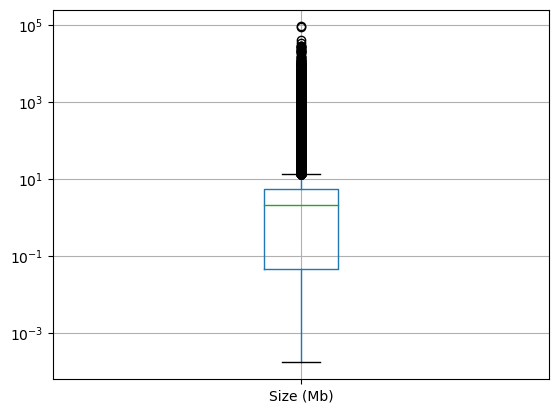

In [6]:
import matplotlib.pyplot as plt

df["Size (Mb)"] = pd.to_numeric(df["Size (Mb)"], errors='coerce')

ax = df.boxplot(column="Size (Mb)")
ax.set_yscale("log")

plt.show()

Q12. Affichez la distribution par royaume.

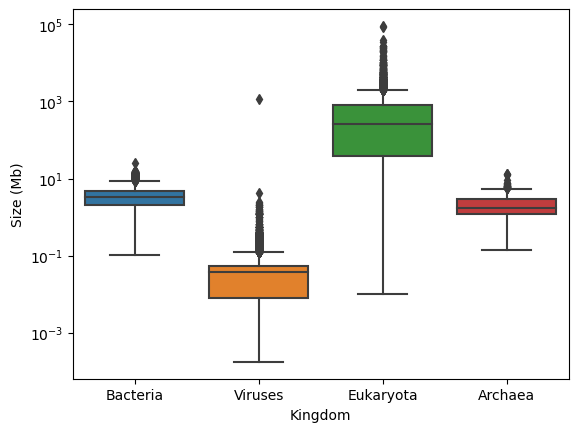

In [7]:
import seaborn as sns

#plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Kingdom", y="Size (Mb)", data=df)
ax.set_yscale("log")
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

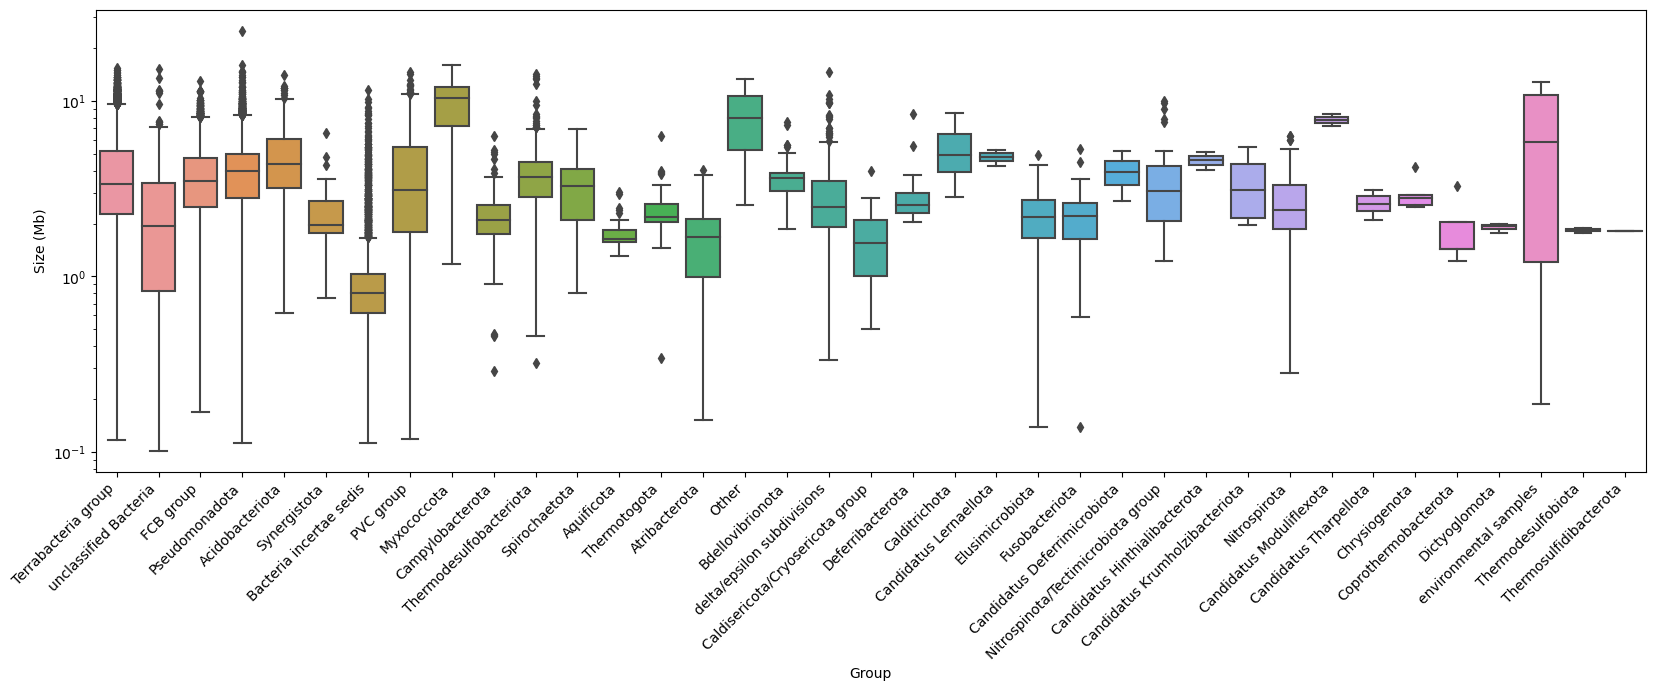

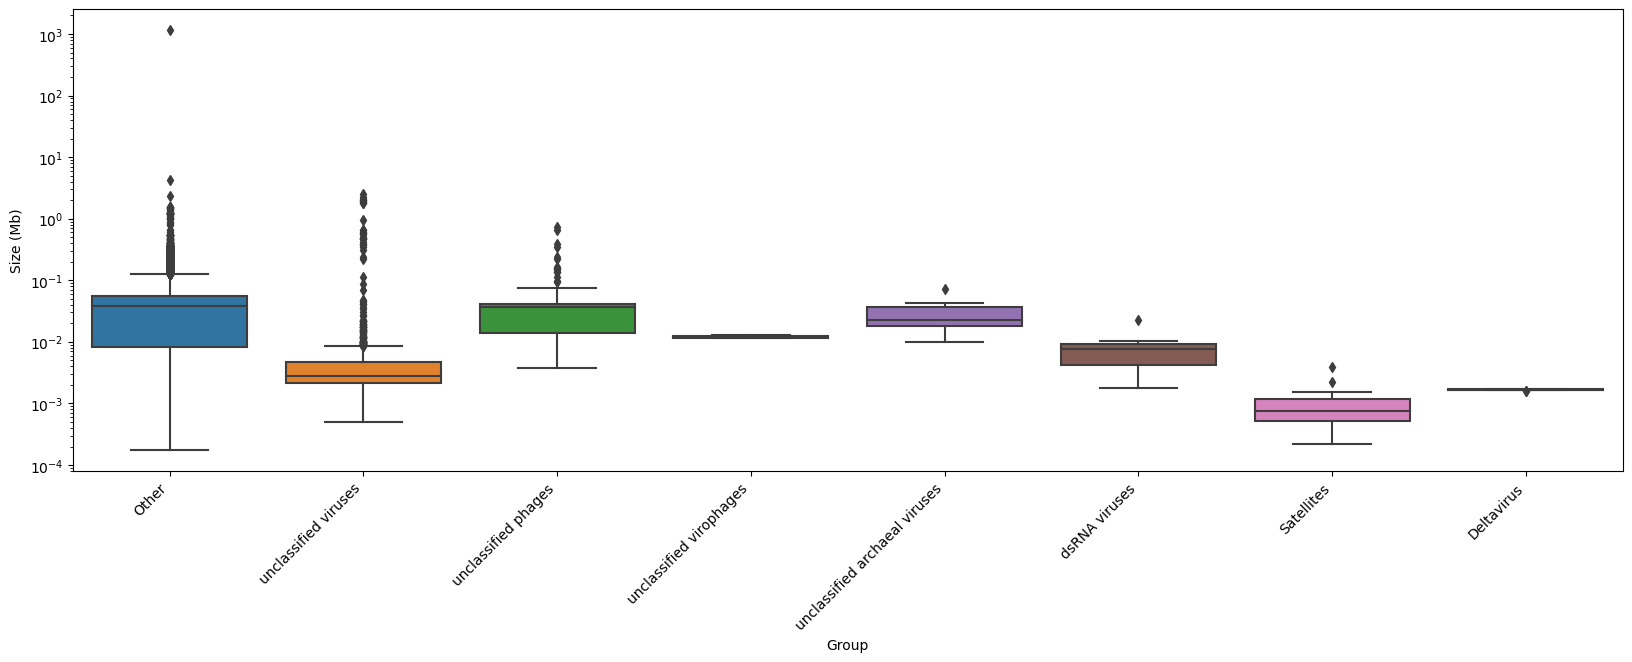

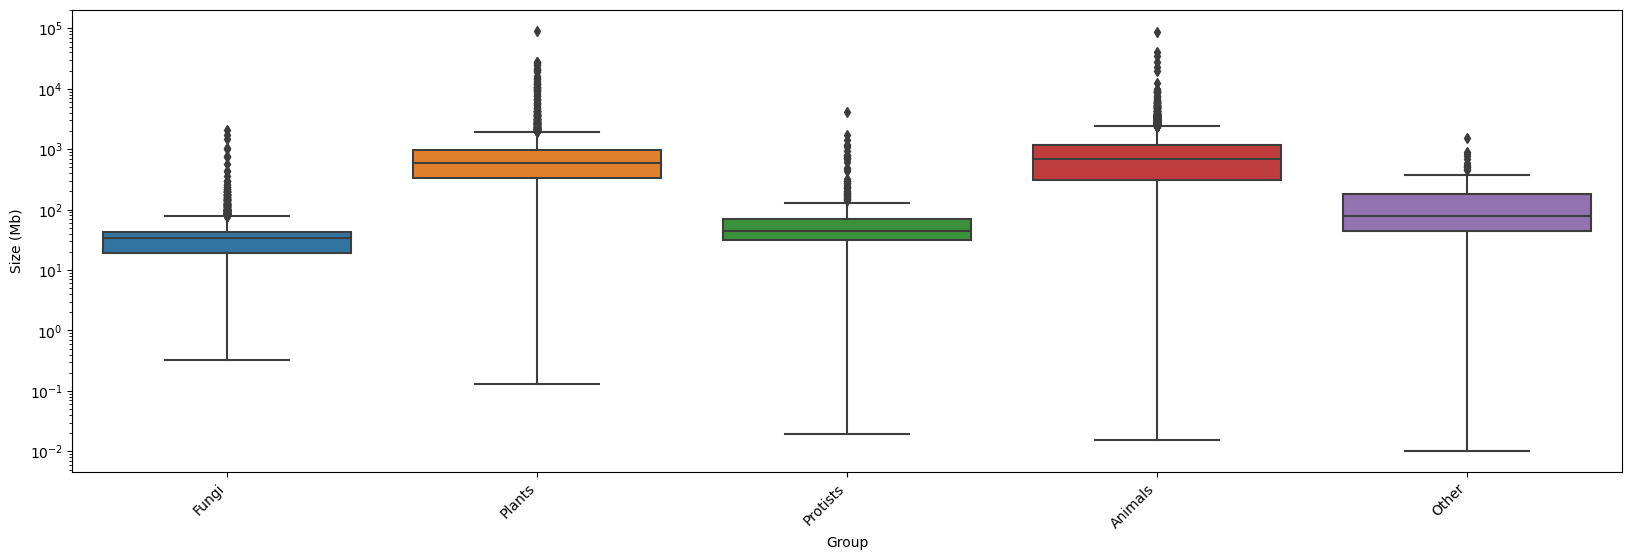

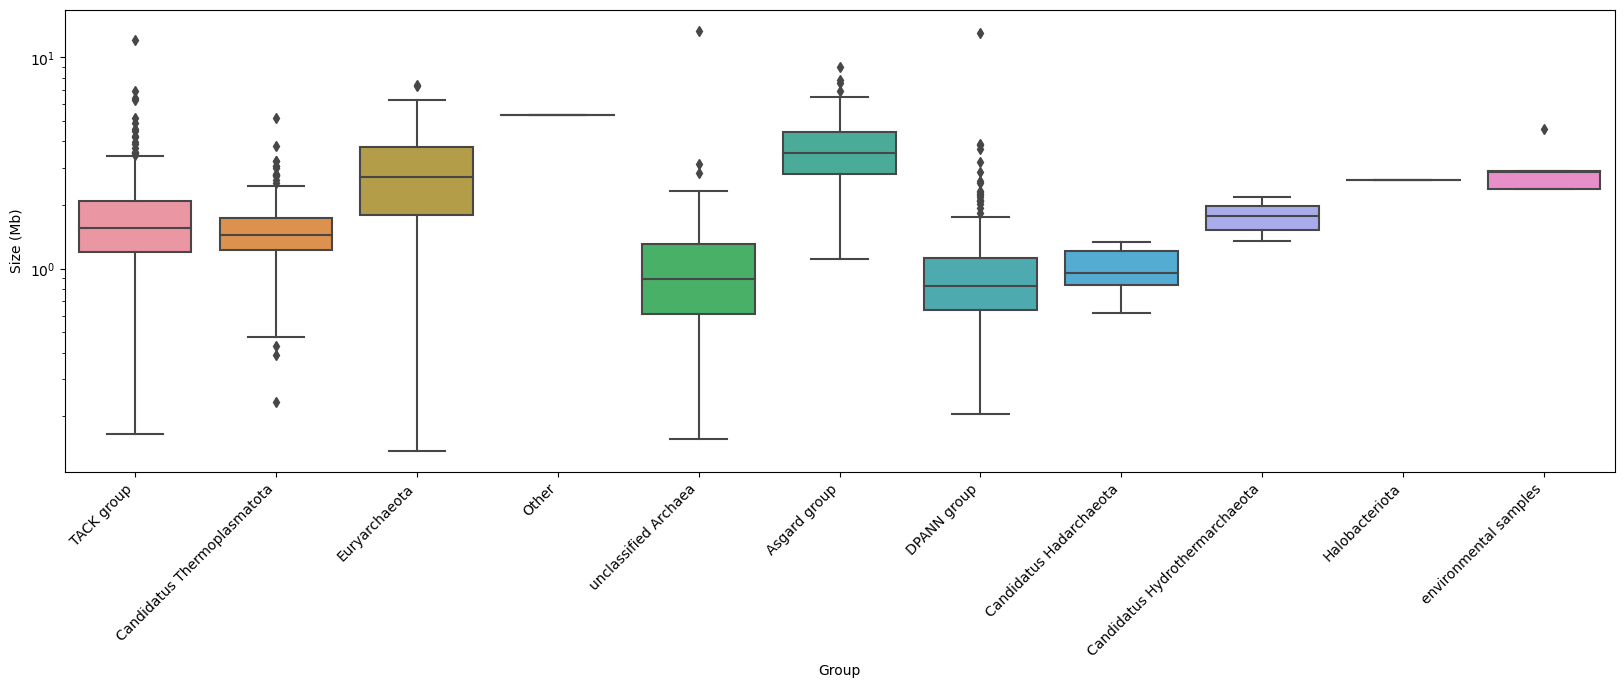

In [8]:
for i in range(len(kingdoms)):
    kingdom = kingdoms[i]
    plt.figure(figsize=(20, 6))
    ax = sns.boxplot(x="Group", y="Size (Mb)", data=df[df["Kingdom"] == kingdom])
    ax.set_yscale("log")
    plt.xticks(rotation=45, ha="right")  
    plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [9]:
for i in kingdoms:
    df2 = df[df["Kingdom"] == i]
    smol_size = df2["Size (Mb)"].min()
    print(i + ": " + str(df2[df2["Size (Mb)"] == smol_size]["#Organism/Name"].iloc[0]))

Bacteria: bacterium AG-323-L21
Viruses: Hippotragine gammaherpesvirus 1
Eukaryota: Fragilariopsis kerguelensis
Archaea: candidate division MSBL1 archaeon SCGC-AAA385M02


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [10]:
for i in kingdoms:
    df2 = df[df["Kingdom"] == i]
    smol_size = df2["Size (Mb)"].max()
    print(i + ": " + str(df2[df2["Size (Mb)"] == smol_size]["#Organism/Name"].iloc[0]))

Bacteria: Thiomonas
Viruses: uncultured virus
Eukaryota: Viscum album
Archaea: archaeon


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

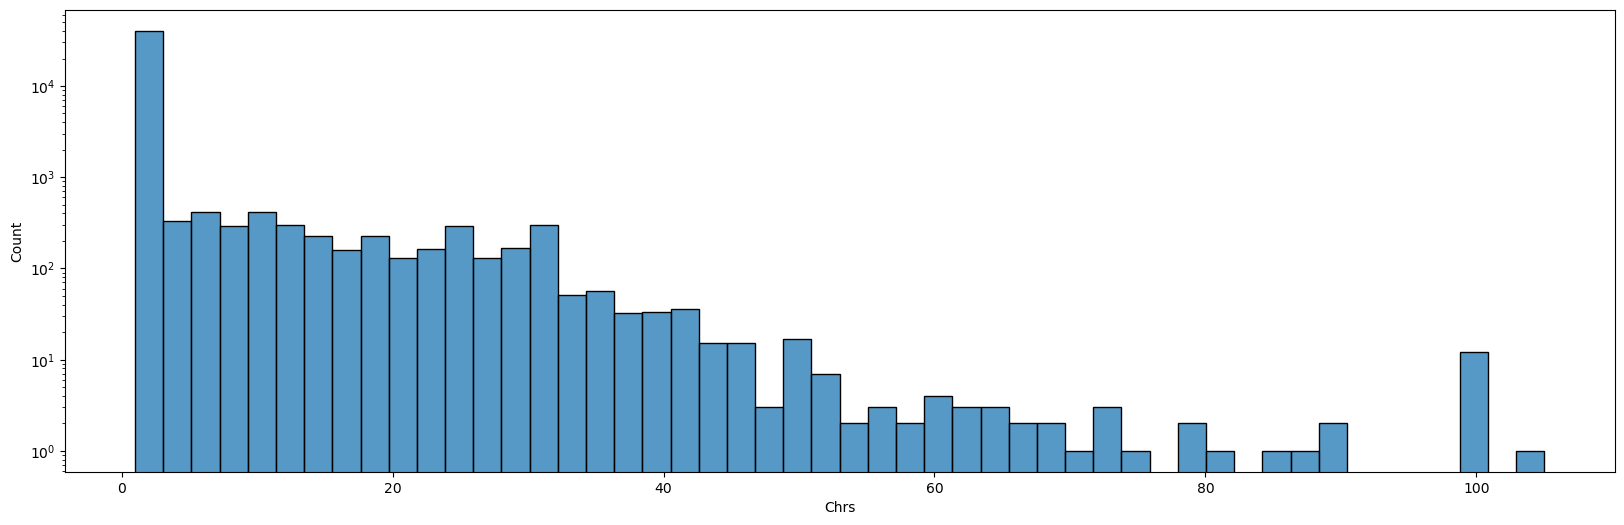

In [11]:
df["Chrs"] = pd.to_numeric(df["Chrs"], errors='coerce')


plt.figure(figsize=(20, 6))
ax = sns.histplot(x="Chrs", data=df, bins=50) 
ax.set_yscale("log")
plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

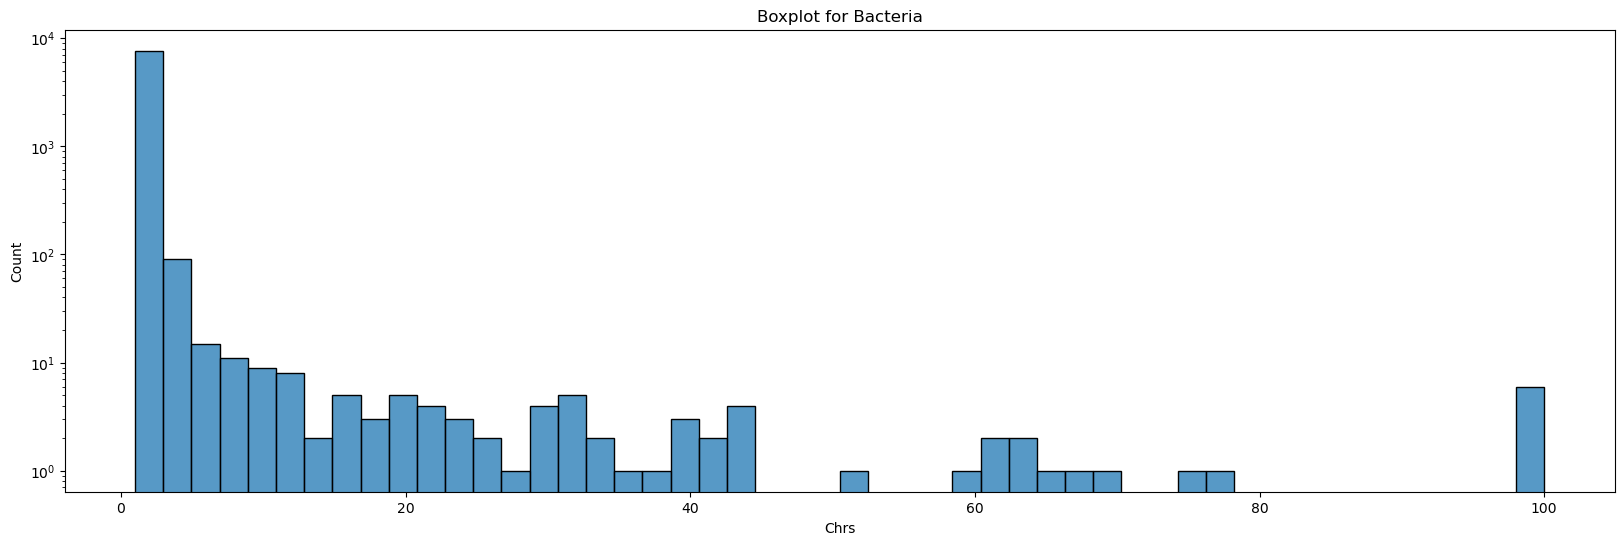

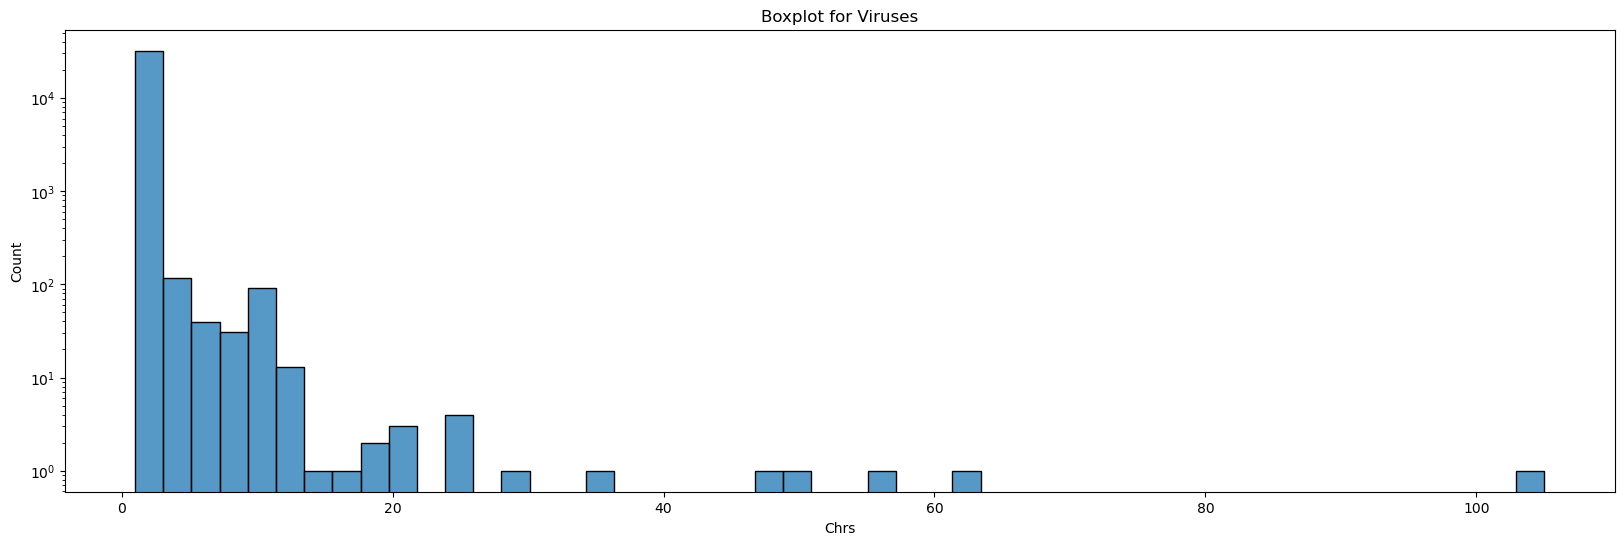

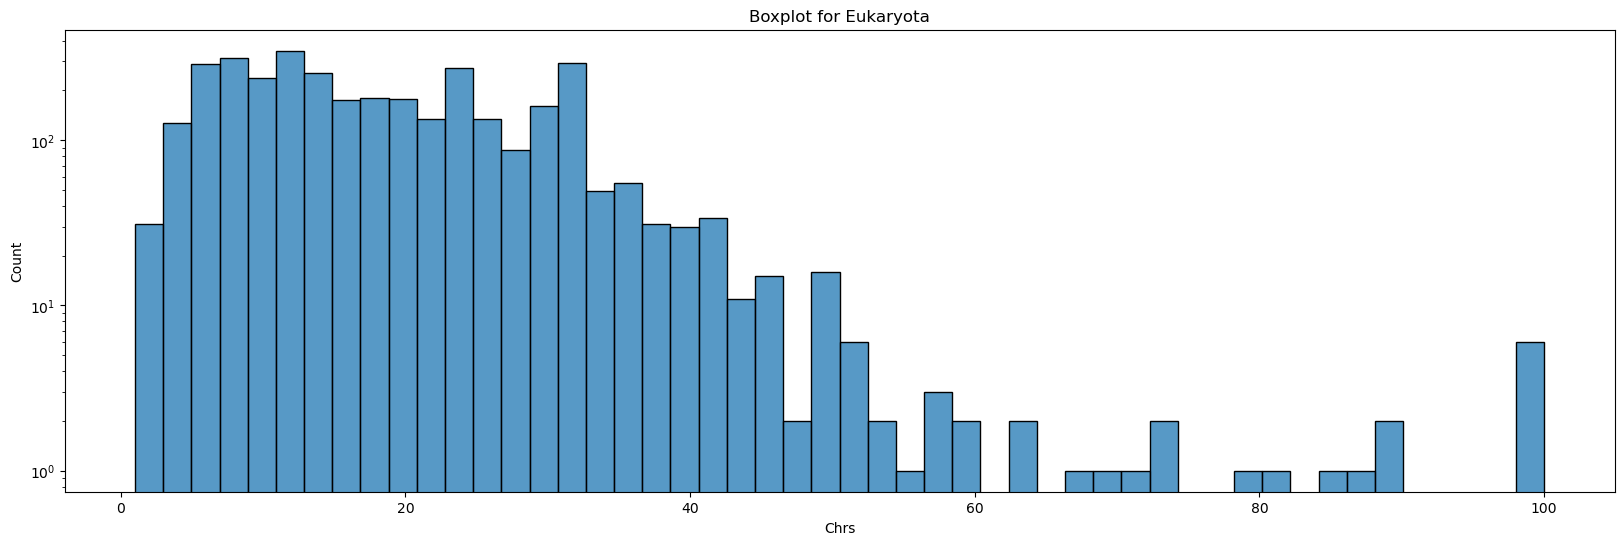

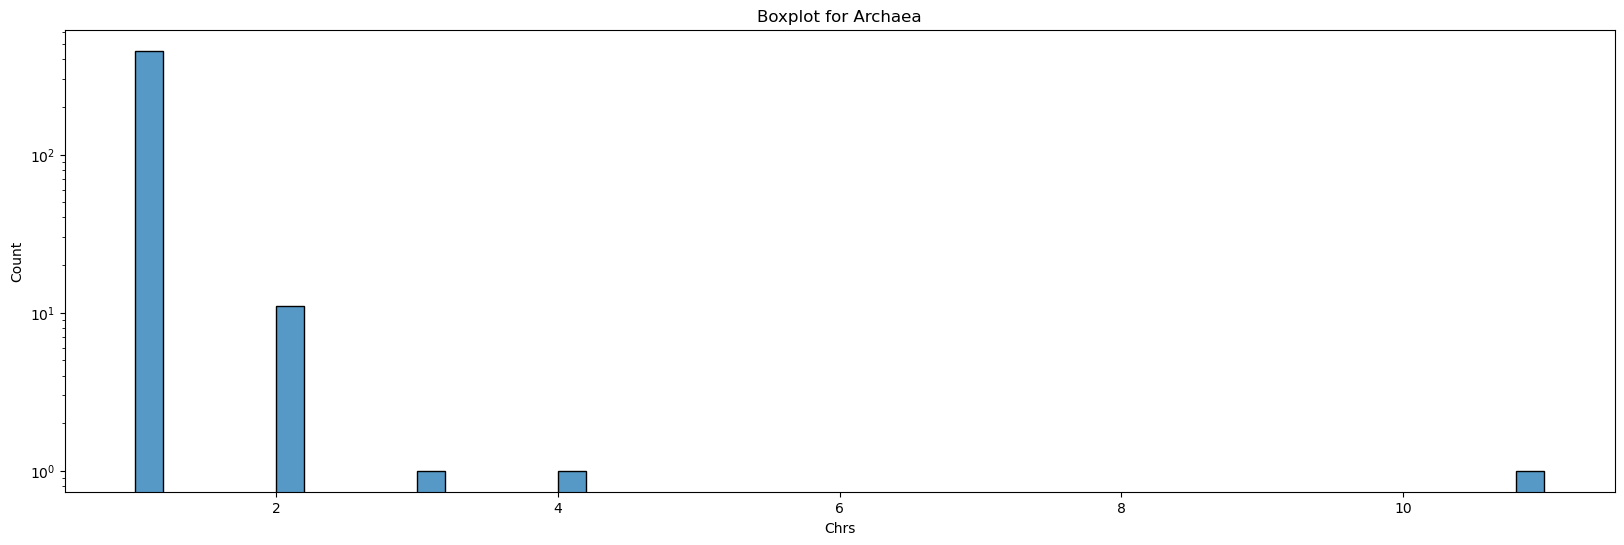

In [12]:
for i in kingdoms:
    plt.figure(figsize=(20, 6))
    ax = sns.histplot(x="Chrs", data=df[df["Kingdom"] == i], bins=50) 
    ax.set_yscale("log")
    plt.title(f"Boxplot for {i}")
    plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
There is a very high number of organism that contain a very small number of chromosomes. That quantity overall reduce consistently when we go higher in the number of chromosome. And then we have a small peak (very small) around the 100 chromosome (10 for the Archaea).

This can be explaned through evolution. intially, life only had a very small number of chromosome, through evolution more appeared, and higher count of chromosomes where reach, while the number of organism with small number of chromosome kept increasing. This would explain the high to low ammount we see on the different kingdom.

The reason why the Archaea have such a low amount of chromosome is probably due to the fact that it is difficult for a high count chromosome organism to survive with a single layered lipide membrane which makes the chromosomes a lot more vulnerable to everything. Thus keeping the population low in chromosome 

For the intensity peaks for high count of chromosome: At some point, there is probably a threshold where it pass or break in the count of chromosome. To complex and not stable enough. But sometimes, some of the organism with high count of chromosomes sucessfully evolve and find a certain 'perfect' combinaison and become stable. While they become stable with high amount of chromosomes, they become very unstable by adding chromosomes by breaking the 'perfect' balance and thus die. 
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

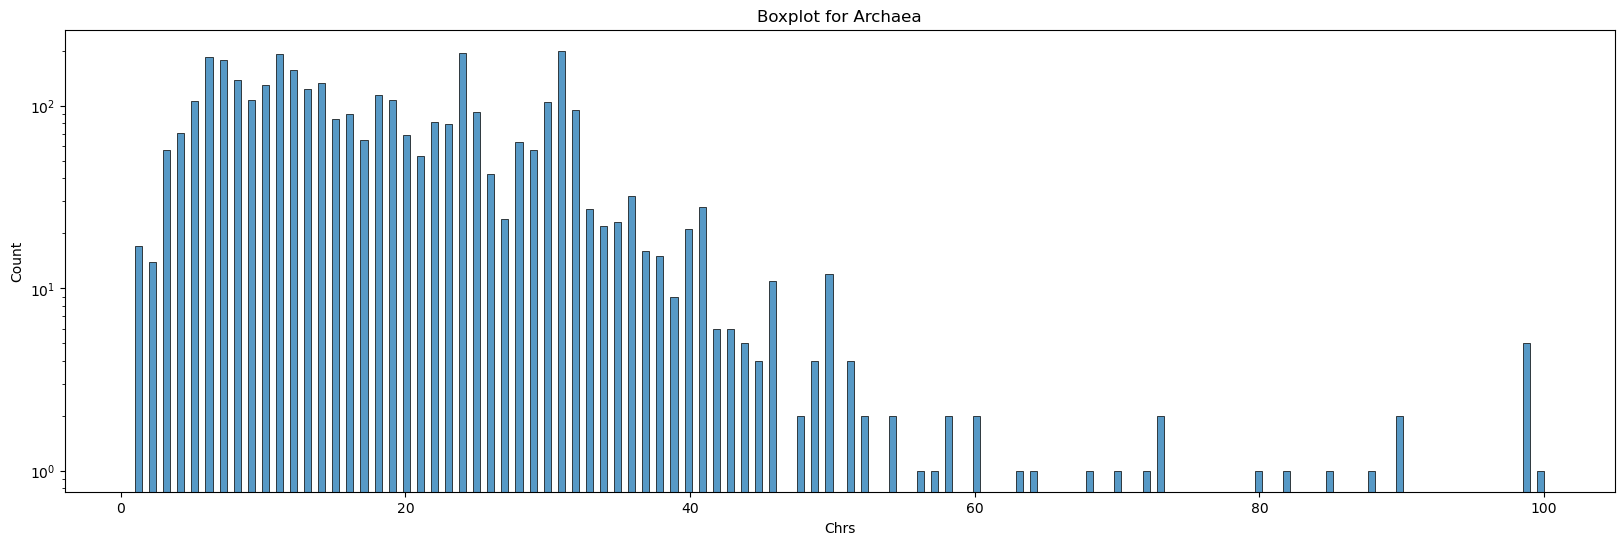

In [13]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(x="Chrs", data=df[df["Kingdom"] == "Eukaryota"], bins=200) 
ax.set_yscale("log")
plt.title(f"Boxplot for {i}")
plt.show()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

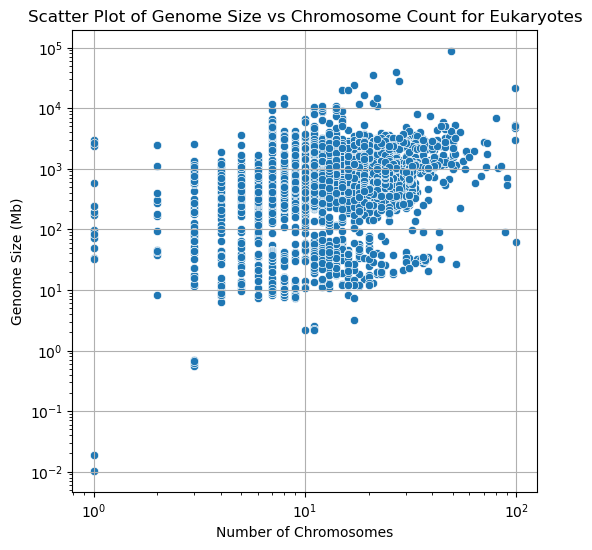

In [30]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(x="Chrs", y="Size (Mb)", data=df[df["Kingdom"] == "Eukaryota"])
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel("Number of Chromosomes")
plt.ylabel("Genome Size (Mb)")
plt.title("Scatter Plot of Genome Size vs Chromosome Count for Eukaryotes")
plt.grid(True)
plt.show()

Q21. Qu’observez-vous ?

```markdown
Il semble que même si peut visible, avoir plus de chromosomes augmente avec la taille des génomes.
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN circulaire distincte de l'ADN chromosomique, possédant la capacité unique de se répliquer indépendamment.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

In [40]:
df["Plasmids"] = df["Plasmids"].replace("-", 0).astype(int)

<Figure size 1200x600 with 0 Axes>

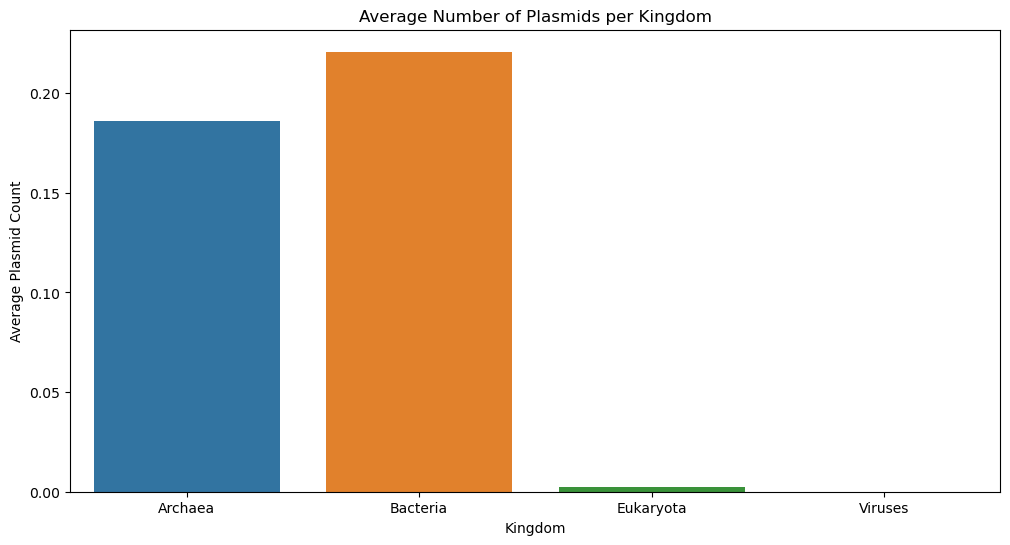

In [41]:
mean_plasmids = df.groupby("Kingdom")["Plasmids"].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Kingdom", y="Plasmids", data=mean_plasmids)
plt.title("Average Number of Plasmids per Kingdom")
plt.xlabel("Kingdom")
plt.ylabel("Average Plasmid Count")
plt.show()

Q24. Qu'observez-vous ?

```markdown
Les virus n'ont pas de plasmide, les eukaryotes très peut, mais les archaea et bactérie en on beaucoup.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Number of genome sequencing projects 
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [46]:
df["BioProjects"] = df["BioProjects"].replace("-", 0).astype(int)

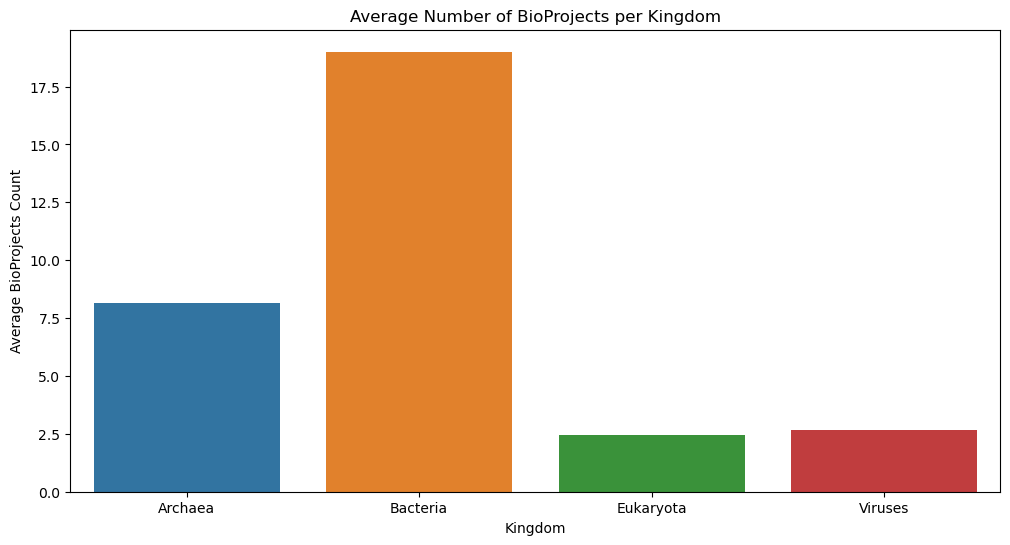

In [47]:
mean_BioProjects = df.groupby("Kingdom")["BioProjects"].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Kingdom", y="BioProjects", data=mean_BioProjects)
plt.title("Average Number of BioProjects per Kingdom")
plt.xlabel("Kingdom")
plt.ylabel("Average BioProjects Count")
plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [49]:
noProject = (df["BioProjects"] == 0).sum()
noProject

2

Q28. Combien d'organismes ont > 1 projets ?

In [50]:
multipleProject = (df["BioProjects"] > 1).sum()
multipleProject

18947

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [51]:
df.sort_values("BioProjects", ascending=False).head(5)

,#Organism/Name,Kingdom,Group,SubGroup,Size (Mb),Chrs,Organelles,Plasmids,BioProjects
29710,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,5.59460,3.0,-,18,39907
41700,Klebsiella pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,5.68232,2.0,-,13,21229
75957,Staphylococcus aureus,Bacteria,Terrabacteria group,Bacillota,2.82136,1.0,-,10,17228
70775,Salmonella enterica,Bacteria,Pseudomonadota,Gammaproteobacteria,4.95138,100.0,-,9,16613
83689,uncultured Lachnospiraceae bacterium,Bacteria,Terrabacteria group,Bacillota,7.69547,NaN,-,0,15909


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Parce que ils sont dangereux pour les être humains et probablement difficiles à soigné.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
correspond au pourcentage de bases guanine (G) et cytosine (C) dans l'ADN de l'assemblage. il permet d'évaluer la composition en bases de l'ADN
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [55]:
df = pd.read_csv("assembly_summary_genbank_historical.txt", delimiter='\t', dtype=str)

print(df.head())

  #assembly_accession  bioproject     biosample      wgs_master  \
0     GCA_000001215.1  PRJNA13812  SAMN02803731              na   
1     GCA_000001215.2  PRJNA13812  SAMN02803731  AABU00000000.1   
2     GCA_000001215.3  PRJNA13812  SAMN02803731              na   
3     GCA_000001405.1  PRJNA31257            na              na   
4    GCA_000001405.10  PRJNA31257            na              na   

  refseq_category taxid species_taxid            organism_name  \
0              na  7227          7227  Drosophila melanogaster   
1              na  7227          7227  Drosophila melanogaster   
2              na  7227          7227  Drosophila melanogaster   
3              na  9606          9606             Homo sapiens   
4              na  9606          9606             Homo sapiens   

  infraspecific_name isolate  ... replicon_count scaffold_count contig_count  \
0                 na      na  ...              8           2479         2502   
1                 na      na  ...       

In [57]:
df["gc_percent"] = pd.to_numeric(df["gc_percent"], errors="coerce")

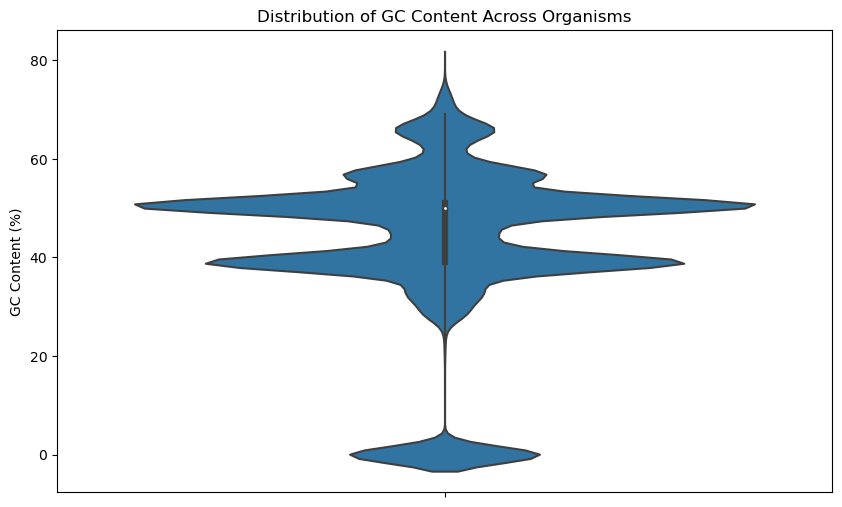

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df["gc_percent"])
plt.title("Distribution of GC Content Across Organisms")
plt.ylabel("GC Content (%)")

plt.show()

Q4. Qu'observez-vous ?

```markdown
Une majorité se trouve entre 35 et 55 %. Mais il y a un peak vers 50%, ce qui peut indiqué une volonté de se stabilisé.
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [60]:
df["genome_size"] = pd.to_numeric(df["genome_size"], errors="coerce")

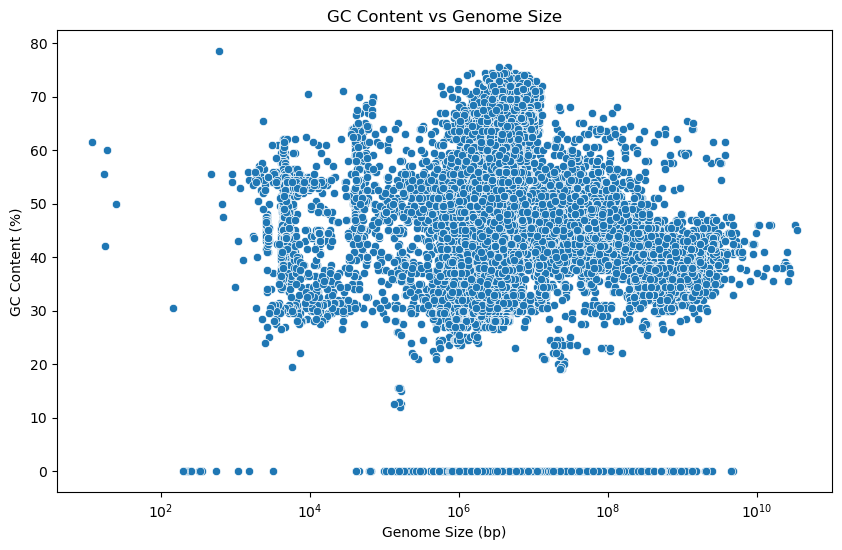

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="genome_size", y="gc_percent", data=df)
plt.xscale("log")
plt.title("GC Content vs Genome Size")
plt.xlabel("Genome Size (bp)")
plt.ylabel("GC Content (%)")
plt.show()

Q6. Qu'observez-vous ?

```markdown
The bigger the size of the genome, the closer to 40% GC we go.
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [62]:
df["total_gene_count"] = pd.to_numeric(df["total_gene_count"], errors="coerce")

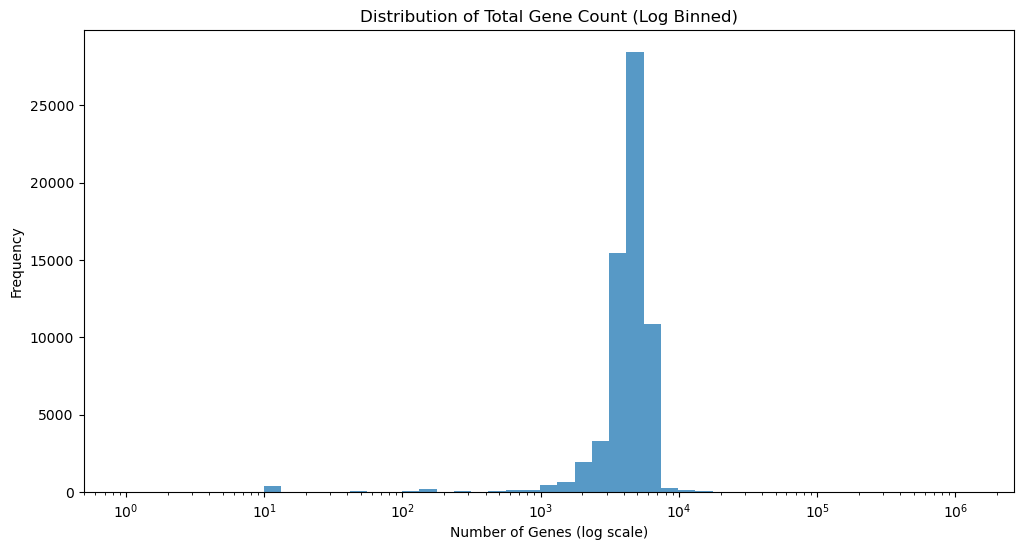

In [69]:
import numpy as np

bins = np.logspace(0, np.log10(df["total_gene_count"].max()), 50)  # 50 log bins
plt.figure(figsize=(12, 6))
sns.histplot(df["total_gene_count"], bins=bins)
plt.xscale("log")
plt.title("Distribution of Total Gene Count (Log Binned)")
plt.xlabel("Number of Genes (log scale)")
plt.ylabel("Frequency")

plt.show()

Q8. Qu'observez-vous ?

```markdown
They seems to stay between 10^3 and 10^4 genes
```

Q9. Enlevez les données aberrantes (outliers)

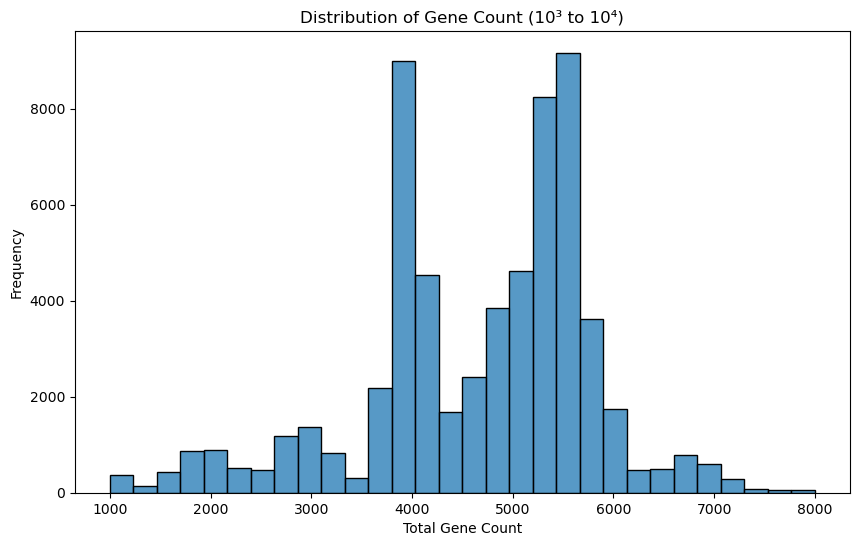

In [72]:
df_filtered = df[(df["total_gene_count"] >= 1e3) & (df["total_gene_count"] <= 8000)]
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["total_gene_count"], bins=30)
plt.title("Distribution of Gene Count (10³ to 10⁴)")
plt.xlabel("Total Gene Count")
plt.ylabel("Frequency")
plt.show()

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
I visually decided what was too much and kept what felt correct
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

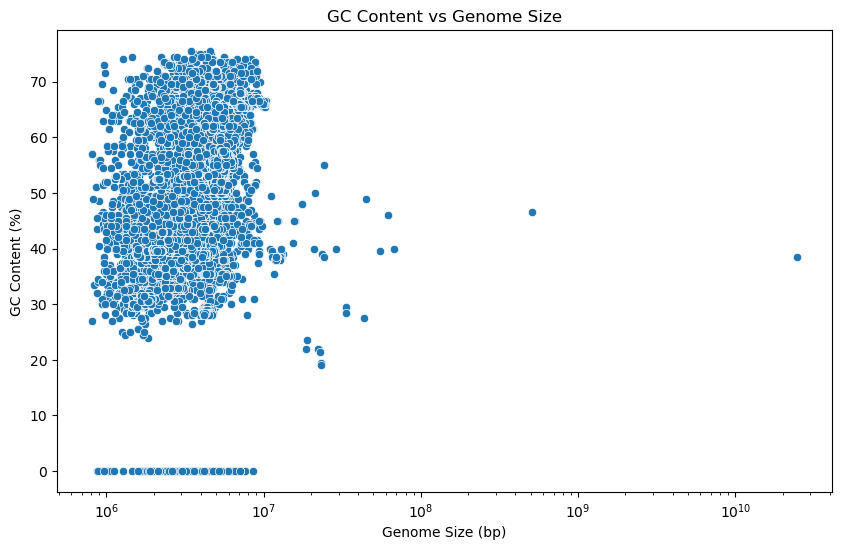

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="genome_size", y="gc_percent", data=df_filtered)
plt.xscale("log")
plt.title("GC Content vs Genome Size")
plt.xlabel("Genome Size (bp)")
plt.ylabel("GC Content (%)")
plt.show()

```markdown
No corellation
```

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [75]:
genome = """
CTCTCCTAGTATTGGCAAGACTATTTTATCCCCGTCAAAGTCAAAGAATTTCCTATATTTAGAATTCGAATTTCTTAGAA
AGTCGAGCAAGTAAGGATTTTCTAGAGCCATGTGGTTAGGTACAATATCTACTATTATCTTCATTCCTCTTTTTCTTGCT
TCCTTACAGAGTTCAAGGAATTTTTCTTCACCGCCTAAATCTTCGCTAACCTTCTTGAAGTCGTAAACGTCGTAACCGTG
AGTACTACCTTTCCTTGCTTGTAATATTGGTGACAAATATAACCATTCTACACCTAAATCGTATAAGTAATCCAAGATTG
ATATTAAGTTAGAAAAATTAAATTCCTTATTTAGCTGTACTCTGTAGCTCACGTTCACACTCTCTTATATATTATTGCTG
TTCTTCCTTCAACTTGAATTTCTTGCTCTGCCTTAACTATTTTCTCATTCTCCTTAGGTTCCCTTAAACAACTCCAAGCT
ACTAACTCCCATTTTTCTCCTAGTTTAGGTATCTTGAATTTTATACTACTCGGACTACCGTTGAGTATCACTAGAAAAGT
ATCATCTGCTACTCTTTCTCCTCTTTCATTTACTTCGTCCATAGCATCTCCTGATAGGACAAAGGCTATTGTTTGCGTTG
GAGAGTTCCAAGTTTTATCATCTATTTCAGTTCCTGCAGGAGAAATCCAGGTTAAATCCTTATAAGGAGAACCGAATAGC
TTCCTACCTTGGAAGAACTTCCTCCTCCTAAAAATAGGATGAGCTTTCCTGAAATATATCATCGATTTTACGAAATCTCT
AAAAGCCTTTTTCCTTTCATCTAAGTTCCAGTCGTACCAAGAAATTTCATTATCCTGACAAAATGCGTTATTATTACCTT
TCTGTGTTCTGCTTAATTCGTCTCCTCCTAATAGCATTGGCACTCCTTGACTTATGAATAAGGTTATCATGAAATTCCTC
TTTTGTTTTTCTCTACAAGCTATTACGTTGGGATCTTGCGTTTCTCCTTCAAAACCGCAGTTCCAGCTATAATTTTCATC
CATTCCGTCCTTATTATCAAATCCGTTAGCTTCATTATGTTTTTGATTATAGCTTACTAAATCTTGTAATGTAAACCCAT
CGTGGGAAGTAACGTAGTTAATGCTAGCGAAGGGCGTTCTTCCAGAGCCTTGATAAAGATCTGGAGATCCCATTAATCTG
TTTGCTAATTCAGAGTAAAGTATTGGTTCTCCTCTCCAAAACCTCCTTATAGTATCTCTGTACTTGCCGTTCCACTCTGC
CCACTGATAAGGGAAATTGCCTACTTGATAGCCTCCTTCTCCTACATCCCAAGGTTCCGCAATTAGTTTTACTCTAGATA
GGATAGGGTCTTGTTGAATTGCTACAAAGAAAGTTGATAGCATATTAACGCTGTAAAGCTCTCTAGCTAAAGCTGACGCA
AGGTCAAATCTAAAACCATCAACGTGCATTTCTAAAACCCAATAACGTAAGCTATCCATGACCATTTGCAAAACTCTAGG
GTGTCTCAAGTTCAATGTATTGCCGGTTCCAGTGAAATCCATGTAATACCTAGGATTTTGGGGATTTAACATGTAATACG
ACGAATTATCGATCCCCCTGAAGCTCAATGTAGGCCCTAACTGATTTCCCTCTCCCGTATGATTGTAAACAACATCTATT
ATAACTTCAATTCCAGCAGCGTGGAGTTCTTTAACCATTTTCTTGAATTCTACTACTTGTTTTCCTAAGCAGTCAGTTGC
GTAACCGCAATCCGGTGCAAAGTATGCTATTGGATTGTAACCCCAATAGTTAGTTAACCCTTTCTCTACTAGGAATCTAT
CTCTAACAAATTGTTGTACTGGCATTAATTCTACTGCAGTAATTCCTAAATCCTTAAAATAGGAAATTGCAGATTTAGAG
GCTAAGCCGAGGAATTTTCCTCTTATCTTTTCGTCTATGTCGTCCCTTTTTATAGAGAAACCCTTTACATGAGTTTCATA
AATTACTGTTTGAGACCAAGGTATCCTTAAACTTAAAGGCTTATCGTCTTCCCAATCAAATTCGTCACTTACAACTACGG
ACTTTGGAATAAAAGGCGTAGAATCTCTCTCATCAAAGGATAAATCTTGGTTTGGGTCACCTATTTTGTAGCCGAAAAGT
GAGTCGTCCCATTTTATAAAACCTGCAACTGCCTTAGCGTAAGGGTCAATGAGAGTTTTATTTTTATTAAACCTTAACCC
TTGTTCAGGCTTATATGGACCGTCTACCTTGTAAGCATAAAGTTGTCCTGGCATGATTCCAGGAACACAAACGTGCCAAA
GGTCTCCCGTTTTTTCTTTAACTTCTATTACTTCCTTAGGCTCCTTATCATCTGGATGAGAGAAAAGTAATAGTTGTACT
GCTGTAGCGTTTTCAGAAAATAGCACGAAATTAGCTCCGTCTTTCGTTAAAGATACTCCTAAAGGATAAGGATGGCCAGG
TCTTGTAGGTATTTGCACAAAAGCCATACTAGAATATAATGGTGATCAAAATTAAGTCTCGCTTAAAATTATTCGTGAAC
TTTCGTTTTAATTCTCAGTAATTTATGCTAAGATAATAAATTGTGATAACCTCAAATTTGCAATGCACAATCGGAGTCTC
ATGGGCTTCTCGATCCCTATCACGTTCTCATGGGATCGCATTACTGCTAGATTTTGCCTAAACTTATAATAAGCTTTTTC
TCCCTTAGTATATGGATATAGGAGCGAATTTTGATGGAAAATCAACGTTCTTCAGAGTATGGGCTCCTTATCACAAGGAG
GTATTTTTAGTTCTCTATAAAGATGGGGAAAGAAAAGTAATAAAAATGGAATTAGAGGACGAGGAAAGAGGTTACTTTTC
AGTTGAAGTAGATAACGCAAAGGCTGGAGATATGTATACTTACATGATTGGAGGAAAAGAGTATCCAGACCCCGCATCAA
GGTTTCAGCCTGAAGGCGTTCAAGGTAAATCCCAAATAGTTGGGAATTTTTCCTGGGACGATGATAACTGGAAAGGAATA
GATTTTCCTATAATTTACGAACTGCATGTAGGAGCCTTTGGAGGAGATTTTGAGGGAGTTAAGAGAAAAATGGATTATTT
AAAAGAACTAGGAATTACAGCAATAGAATTAATGCCAGTTCACCAATTTGCAGGAAATAGAAACTGGGGTTACGACGGAG
TATTACTTTATGCAGTACAAAATAGTTATGGTGGACCTCAAAAGCTTAAGGAATTAGTAAATGAGGCTCATAAGAAGGGT
ATTGGAGTTATCTTGGACGTAGTTTATAATCACGTTGGGCCAGAAGGAAATTATCTTTCAGTTTTTGGTCCTTACTTTTC
TACAAGGTATAAAACTCCTTGGGGGCCTATTTTTAACTTTGACGAAGCTTACAGTGACGAAGTAAGACATTACGTAGTGC
AAAATGCTGTTTATTGGATTAAGGAATACCATATTGATGGCCTTAGATTAGATGCTGTGCATAGTATATTTGATAATTCC
CCCAAACATATTTTAGAAGAAATAAGAGACGCAGTAAAAGAAGCTAACCCTAAGGCGTTATTAATTGCTGAAAGCGACTT
AAACGATCCAAGGATAATATTACCTAAGGATAAGTGCGGTTATTGTATAGATGCTCAATGGTCTGACGATTTTCATCACT
CCTTACATGCTTTACTTACAGGGGAAAGGGATTCATATTATGCTGACTTTGGAGAAATTACGAAGTTAGCTAAAGCAATA
AAAGATGCTTTTGTTTATGACGGGGTATACTCAAGGTTTAGGAAGAAAACTCACGGTAGGCCAGTAGGTAATTTACCCAG
TAATAAATTCGTAGTCTATGCTCAAAATCACGACCAGGTTGGTAATAGGAAGGACGGCAAAAGGTTGATATCCTTAGTGA
GAGAAAAAGCGTTAATTGCTCCGTTCCTTTACATTTTGTCTCCTTATATTCCAATGATATTCATGGGCGAGGAATATGGC
GAAACTAACCCCTTCCTATTCTTCACTGATTTCTCTGATCCGGAAATAATAAAAGGTTTAAGAGAGGGTAGGAAGAGGGA
ACTTGGAGAGTATTATTATGATCCTCAGGATTATTCTACGTTTGAAAAATCGAAATTGAGTTGGAAGGTAGATGAGAAAA
TTCTATCCTTATACAAGGAATTGATAAGACTAAGAAAAGAGTTGTTTAACGACTTTTCTAGAGATGTTGACATAAGGATA
GAAGATAATAAGTGCATAATAATTAAGAGAAAGGAGAAATATTTAGTTATAGCTTGTTTTGGTGAAACGTACCTAGATAT
TAAAGCTAAATCTATAATTACTACTGATGGAATGCCTTCTTCTCTTCCAGGAAAAGTTAATGTTGGAGCGGGAGTTTATG
AGGAGTTATGAAGTTTCTTCATAATTGCGTAAAGGTCTTCGTCAATAACGTAATCCTCACTGATGTACCAGAATTTCCAT
TGGTTAGGAGAGAAAAGCTGTATGTATACTTTATTTTTATCATTTTTAATAACGTTAATTACGTGAATTCCTTCCTCTTC
ACTTAGGTTAAAAAATATCTTTCTTCCTCCATAATGTTTGAATAGAGCAAAACTTATTTCTTCTTTTAATTCGTCATTTA
AATTCAGAATTTTACCTTTAATCACGTGTACTTTAGTTTTTCCGCTTATAGTTTCGCATAGCGAAATTAACTCGCAATTA
TTTATAACCTCACGTAATCTTTCTTCAGCTTCTTTTTCTATCTCTTGAACTGTTTTAGCCAATTCATCCATTGATTTTGG
TAAATCATATTCCACATGAGAAGCTATAGAGCCACAGGAAAAATATAATTTAATTTTTCTCCTAAATTCGCCTCTAATTT
TAATCCTGCCGGTGATTCCACTAAAACTGAAAGGCGAATTTGTGTTCACTGTATATACAAAGCAGTTTGAACTTGAGTAT
TTTTGCAATAGTTTAAAAAGGATACCTTGAATGTAGAATTGTAAGGATAAGTTCATTAATAATAATTTACGGAATAAATT
TATTAACATTCAACTCCTGGATATTATGCAGTTAGCAATAGCAGTTCACAGTTCTCTAAACAAAGAATTAGAGGATAAAA
TAAGGAAATTCTTAGAAAATCTCAAGTGTAACCCAACAATCTTAGTTGGAGGTTATTGGGGAGGCATGAAGGTTGTTGTT
GACGAGGCTATAAAAAAGAAGCTTAAAGTGGTAGTTATATTGCCAGAAGAAAGGGAAGACGTAGAACTTCCTCAAGACGT
TATAAGAATAAATAGTGGCTGTGAATATAGATGTAGGTCAGTAATTTTAGTAAGATCTTCAAATTTATTAGTTTCATTAG
GCGGTGAAGTAGGTACTACTATAGAAATTTTCATGGCCTATGCTATGGGAAAGAGAGCTTTAGTTTTGAGCGATACGGGG
TTTTCTACTGATAAGCTAAAAACTGCTTTTCCAGAGTATCTTGATAACAGGAGAGTAATGAAAGTTGAATATTATTCTTC
ACCAGAAGATCTGGCAAAGGAAGTTTGTAAGCCTATAACTCAAATTAAAACTAATTTTGGTTAATATTCGTAACTACTGA
GGTATCTCAGCCTTTCACTAAGAGATGGATGAGTTCTAAACAAACCTCCATTTCCGTAATTGCTTGAAATAATGTCATAT
TTCATTAAAAGTATCTGTAATTCAGGAAAGTTCTTTAATACGTATGAAGGTAATTTATCGCTTAAGTATGCTATTTTTAT
TAGTGCAGTCTCTAGGGGTATTGCATAACTTCTATCCTTCTTTACCGCAGTTATGTCTGCTCTTTTCTCGACTCTTCTAT
GAATAGCAAAAAACAGTGGAAATAAACCGAGGAAGTAGAAAATAATAATTATTGACAGATAACAAGGGAATAAATATATC
AAAAAGGAGTATATTGAGTTAATTCCTATTATTGATAATATCAGTACTTCTGGATCGTGATTTTTTAAGTGTGAAATTTC
ATGTGCAATTACTGCTTCTAATTCTTGATCATTTAATAAGTCTAATAAAGGCGAAGTTACTGCCATTCCTCTGAATAAGA
TATTGCCAAAAGCTAAAGCATTAGGAAAGTCTACATAAGATATGTATACTCTAGGAGTTTTTACTCCAAATTTTTTTGAA
ACTTTATCAACTACTTCTACTAATCCTTCTCCTCCTTTTCTCATCTTTAGGAGTGCTATCATTGTAAATGGGGAGATTAA
ATACCAAAGTCCAAATATCATAATAATTTGAAAGATATAAAAGAACGGTATGCTTACAACTATAGAAGAAACTATTACGT
CAATAACTGCAATCGAGGCAAAGGATATTACGTAATATCTTAACCAATATCTAGTTACCATGTGATATTCTTCAAATAAA
AGGTAATATTTTTGCCTTAAATTTCTAGCAACTTTTTATGTCAAATCAAAACATTATATACTAATTTTTATTATGTTTAT
ATATTAGTAGATGACTTTAAATTTTCACAGTAGTATATTATATATGGTGATATGAATGAAGGCATTATCAAAGAAAGTTG
AGATTGCCTATGATGAGCTTCCAGAGGAATATTTAAAGAACGAGTTCCCAGAAATATACGAAAGCTACAGAAAGAGGAGA
GAGATAACTTCTGATTTACTACTCTACTTAAGGAACTAATTGTTTTGGCTAAGTGACTAATTTTTAAGCAAAAAGTATGT
CATGCAAATAAATCTTGCAGAAGTCGTTTCTAATATATTTCCTGTCACGAGAGATGAAATTGAACGAATTTATATTAATA
AAAATAAATTTATCGTAGTCATATATGATTTTTCCACTTCCAAATCAAGGAAGTATGAAGGAGAACTAAAGAGAAATAAA
ATAATATTTTGGAGGAATAAAATTAAATTACAGGTACCTCTAAAAGACATCACATTATTAAGAAAACCAATAGAGGTTGG
TAAAATACAGAATTTTGAAATATGGGAAATTAAGGGTGATGAAAAGCTACCAAGTTTTCCTTTAGAGGTGCCAGTGATAG
TATCATAATTTTTTCCTAATTTCGTTACGAACTTCTTCTTTAAACTTCTTTATTCCTTCCACGTTCCTAGGAGTTAAAAC
GAATTGTGCATTACCTTCAAAGCTTACTGTAATTCCTACTTTCCCTACCGTCCTCACACCCGTATCTATTTGCAAAACTT
CCTTATCCTTATAGCTCTGAATATTATTTATGTTAACGTATTCTCTTTTATCTGATACTAAAACGTGAATATCTACCCCT
GGATTTGGATGATATAATATTTCTACAATTTTAGAATCAACGTTAAGTACAAAGGAGTCTATTAATTTTCCTCCCATTTC
TATTATTGCCTCTATTACCTTAGTTAGAACCCACTGAGAGTATATTTCTTCACTGTAAGAATTTAGAACCCTAACCCTCT
CCTGTGGTATAGGCCTTAGCATTGCGTCAATTTCTGCTTCTATAGTATTAATAACAGGCAATCTTAATCTTAACTTTTGA
ACACTACTCTTTATTTCCTCCTCAAGTGGAGCAACTCTCCTAAAGGTAAATAATGTCGTCCTTTCAATTCCAAATAATCT
AGGTCTTAGCTGTACTAAAGGTGAAGGTGATAAAGTTTTACTTATCATTAAATCAAACGATAAATCCCTTCCTAAAATGT
TAGGTCTTGTGAATCTGAAGAGCCTAGGCTTTGGATTATAATTTACATAATATCCATTCGTTATCTCATTTTCTGGGACT
TCCCACAATACTAGAGACCTATTTCCTAGCGAAATTGATCCTACTTTTCTTGCTCCTCCAATTTGCGAAACGTGAACTAC
TTCACTTCCTCTCACGAAGTAGGTAAACCAGCTATCTTCTCCGTAAATCTCTTCCACAGTTATCATGTAAGGTCTGTAAA
ATATTATATTCAAAGTTTAAACGATTAATTCACGAGAAGGAAATATAGAAGAATATTATTGAAATAAAAAGTAACAAATA
GTCTATTAAATGAAAACCTATTTTTACTAAAGAAGTTCTATTTTTCTTACTCATGTATCCTTTCGTTTCCAACGCTATTG
CTAAGTTCCTAGAACCTTTAATTATATACACGAATACGGGCAAAATGACTGCTATTAGACCGTAAATTTGGTAAAATAGT
CTAATTGGGAGCGGTTTTCCGTAACCTAAACCCCTTAATATAGTCATTTTATATGAGGTTTCCATATTTTGCAGGGCTTG
AGGAATTACTTTTACGAAAACTGAAAATATTAACGTTATTGCTAAAGGTATTTTAAGTTCAGAAAAAGCTCTAATTACTT
CTGACGTGTTAGTAGTTGCGATAAAAACGAAACCTAAAAGCGTTATATATAACGTCGGAGAATATAGCGAAAACAAAATA
CCGTGAAACAAGGAAGAGCTAGTTACGACTGTAGAATATCCAAAAATTCTTGCAATCTCACGCGGCCAAGTGTAAATTAT
ACTCCCATAATAATAGAACGAATTAATCTCTACCCATGCTGTAATAAGCAAATACGCTCCTACATAGTAGGCTAGGCATT
TGATTTTATTCCTTAATATCAGAAAAATTGTAGAAAGTAGTAAAAAAGGAAAAAGAATTGCTAGAATCAAAATATGTAGC
CGAAGAATTGTATAAAATCCTCTGGTTAAAAATGCAAATAATCCTATTTCAAATAATATCTTACTTTCTTACTTAAAGGG
TTAACAACAATTTTTCTTCTCTCATATTTAACTATCTCAGCCAAACCACCATAACCTAGTTTTATCATTAAAAATATTGT
AACAAAATAAACTATTGGTAATAAGATATACTGTATGTAAATCACAATTCAGTTAAGGCGACGAGAATTAAATATTTTAT
GAAAGCTTTGATGGTAAGATTTATTAGTTAGACGGCAAAAAGTTTGTATCCGAACCGAAATGGACAGGAAGAAATTACTA
GCTTTAACTAACACGAGCATAGGGATTTTCATGGCATTTGCTAATTATAATATGATAATAATTGCCTTACCTGCAATATT
TAAAGGCTTGAGCTTTAACCCAACAAGCCCAGACTCTTTAGGATACTTAATTTGGGTAATCTTAGGTTACATGGTTGTCA
CTGCGTCACTAGTAGTAACCTTTGGGAGAATTTCTGACTTAAAAGGTAGAGCGAGGCTTTATACGATAGGTTTTCTAATA
TTTGCAATAGCCTCTGCATTATTGGCATCCATTACTTCAACGGGTAATTTAGGAGTAATGGAAATGATAATCTTTAGGCT
ATTGCAGGGAGTAGGAGGAGGGTTATTAATGGTAAACAGTACTGCAGTGCTTACCGATTACTTCGACAGGAGAGAACTAG
GGAAAGCCTTAGGGTTAAATCAAGTTGCAGGTTTAGTAGGAGGGGTTGCAGGTTTAATAATAGGCGGGATCTTATCCATT
TATAACTGGAGGTACATCTTCATTTTCAGTGCAGTTGTAGGAATTATAGGGACTATCTGGTCGGCATTAACTCTTAAGGA
TATTCAAAAACCCATTAAGAGGTCAATAGATGTAATTGGAAATACTTTATTTGCCCTAGGCATTACGATTCTTCTAATTT
CAGTAACTTACGGGCTTTTACCTTATAATAACCAACCTCTTGGCTGGAGCAACCCTTGGGTAATTGCCGGGATACTAGTT
TCAGTCGGAGTAATAAGCTCTTTCGTCTTTATCGAAAGAAAAGTTAAAGATCCTATGTTTGACCTTTCCTTGTTTAAGAA
TAGAGATTTCTCTACCTCTAACACTGCGAACATGATAGCGTCATTAGCTAGACAAGGGATTCTATTGATGCTCCTAGTCT
TATTACAAGGTATTTGGTTACCTTTACACGGAGTACCTTACTGCGATACGCCGTTTTGGGCCGGAATATATTTAATACCT
AATGTTTTAGGATTTGCAGTATTTGGCCCAATTAGCGGTATACTTTCAGATAGATATGGAGGAAAAATGCTTACAAGTCT
TGGTTTAACAATTAGCGGTATAGGTTTCCTCTTACTAACATTGCTACCTTACAATTTTAACTTGTACGAATTTTTCGCAA
TAACTTTTATTCAAGGTGCAGGGATGGGATTATTTACTGCCCCTAACACTGCAGATATGATGGCCTCAGTACCCATTAAT
AAAAGAGGGGCAGCCTCGGGAATGAGAGCGGCTCTTCAAAATACTGCCTCAGCTTTCAGCGTAGTATTTTACTTTAGCAT
ATTAATTTCAGCAATGACAGGAAGTTTGGATTCCTCAATATCTTCAGCACTCTCCTCATACGGAATTCATGTTAATGCAA
GTATCCCTGCCTCAGTTGTAATATTCTCTGCACTATTAGGTTACGATCCTTTATCTGCATTCTCCTCATCTCTTCCGCAT
TCGATAGCAGTAAAAATTGATAATCCGCAATTCTTCGTGGCGACTATTGCCCCTTCATTTATGAGTTCACTAAGGTTAAC
ACTTTATATTTCCGCCGGTTTACTTTTCATGTCAGCATTAATTTCCGCATTTAGAGAGAGTGGTAGAGTTGGAAGATTGG
GAAATAATACTCAAGGGAAACAGGAAACTGAGAGAGCTATTGCAAAAGGAAGCTGAAAAAAGAGGTCTTTCCTATACCGA
AGTTTCCACTCTGTATTTTTTAAAGGGTGGAGAAAAGAACGTCAGTAGCTTGGCAGAATTTGTAGGAGTGAATAAGTCTA
CAATGGTTGAAATTCTTGATAAATTGGAAAATGAAGGAATGATAACCAGAAATAGGGATGAGAAGGATAGGAGAGTTGTT
TTAGTTAAAATAACTCAAAAAGGGCTTGAAGAACTTGAGAACGTTAGGCAAGGATATAAGAATTTAATAAAGGACATTCT
CTCACGATCAGAAGGTAACATTATAAAATTCTTCCAGATAGTCATAGAAGAAGTATCTGTAAAGGAGAAAGCAAGCAATG
TCCAAAAATGAATTTCTATACCTAGCTACAGTGATTTTTACTCTAACTTTTGCAATTAGGGCCTCAAACAATATGTTAAT
AACAACTATTCCGCTTATTTCTGCATATGTCTTTCATTTCTCCTCAGTTCTAATTGGAATACTTTCCTCAATTATTTCAA
TATCATCCTTTATCTCAAGCTTTTTTGTTAACTCAAAGTTGGACTACTTGAGAAGGAAAAAATTATTTTTAATATCCTCA
GCAACTTATGCAGTAGTTTTTCCGTTATTTTTCATTGCTAACTGCATTTTAGTCTTTATCTTATCTTTTATAGCAGGGTT
TTCGTTGGGAATTCTGTTTCCTAATATTATTACGCTCTCGGGGTCATTAAATGATAGAAGAGCTAGCGAAAGAATGCTCG
CTTTATACACTACAGCGTTAAGTCTTTCCTTAATAATAAGCCCAGGATTGGAGTCTTTGATTCTTGAAAGATTTACTTTA
AGAGAGGCGTTCTTGTTCTTTTCATTTTTTGCGTTTTTAGTACTATTTATTTCATTAAAGGTTAGATTCCCTGGATCTCA
TGAAAAGGGAGAAATAAGCATAAAAGCTAGAGAAATTTTATTCTCTCCCAGATTTCTGGCACCATTTTTTAACAATTTGA
TGTACGATATACCCTTTGCATTTATAGAAGTCTTTGGCGGAATATATGCTATAGAATATTTTCATGCTAGCTATTCTATG
GCGACGTTTTTGTTTACACTCTATTTTTTAACATCATTTATAGGTAGGACATTATTTACCTTGAGAGCTCCAAGCAACAT
ATTTAGGATAATACTTTTAAACGTAACTCTCAGTTTGATAGGGCTATTTCTAGCTTTCATTTCTTTCAACGTTATTCTTT
ATATTATTTCCTTACTTATTTTAGGCATACCACACGGTTTGACTTACCCGTCATCACTAGTAATCATTAGGAGGAACTTT
AAAGATGAAGAAAGAAGTGCGGCAAATAGTTACTTTACTGGAATTTTACTAGGTTTAGGCGGAATAGTTCCAATAATAAT
GGGAGGAATTGTCGACTTAATAGGGATAAGATTATCCTTTCTAGCATTGGCTATTGCAGTTCTGGTTTTCTTCTCCTTAT
TTTTCATTAAACAAAGAGAAATTAAAAATAAGGAATCTTCTTAGCCATTTCATTAAGAGTATTAAATAATTTTTCATCAA
TGTTAATTTCATTTCCGCTGCTTTTTAATAATTTATCTCCTCTATCTCCCGGCAACGAACCCAGAATTCTTCTCATCAAG
TCTATTCCGTGATTATCTTTCTCAGTAAATTTAGGGTTAATAACTATTAGTACTTCACCCTTATTTGGAGGATTCTCTGT
ATTTAATACTCCTTTAACTTCTGGCCCTACAGCACTCCCTGTTAAGAATGAGGTAAGGAGTTCTAGCGTTAACATTAAAT
AAAACCCTTTTACTCCACCTAAAGGTAGTAAACCTCCTTTCAAAGCCTCTGTAGGGTCAGTTGTTATTTCTCCTCTCTCA
TTTACTGCAACTCCGTAAGGAATTTTTTCTCCTTTTCTTTGTGCCTCTATTATTTTACCTCTTGCAGTTAAAGATAAGGC
CATGTCTAGGACAACTGGTGGGTTAGAAGGAATTGATATACTTAAAGGAGTTGTTGAAAGTAGTTTTTCAGCTTTTCCCG
GGAAAACTACTGCTGGCTCTGCGTTTCCGAACATTATTGCTGAATAACCTTTTTCAGCTAATTTCCTAGTATAATAACCA
AGGAAACCTATGTGAGAAGCATTCCTCACTACAACTATGCTTATAGGTTCTTTAAACTCCAGTTCGTTAACTATTTTATT
CCACAGTACAATCCCAATACTTCTCCTAGCATCTATCAATAGAGAAGAAGAAGTAGATTTTAATATTTTATAATTTAACT
TCTTTTCTATAGTTCCTAATTCTATACCCTTAACTAGAGGAATTAATCTTTGTACGCCGTGAGAAGAATGACCCCTTAAT
TCTGCCTCTATTAAATGTTCAGCTATTACACTCGAGTCTTCAACTCCTCTCTTATCTAGTATTTGAACGATAATCTCCTT
CAGCTCATTTACGGGAATTTTCATTTGCTTAAAACTTTGTATTTTCTTTTATAAGCTTGGATTGTTCTAAGAATATTTAT
ATAAAAACTTAAAATTCTTTCTCATCTTTAGAAAGATAATTTTATTAGATAATTTTCATAAGTTTTATTATGAAAATATA
TTTTACTGTAAAGGAGACACCATTTTGTCCCACAAACTACGGCATCTTTGAGTGTAAAATAAAGGAAGATGGAAATGACA
AAAAGGAAGTATGTAGTTTAATAGCTTGTTGTAGAATAGAGTTAAGTACACCAATAGATAAATTTTAAGTAAGACGAATT
ATTTTTCCTGATAATACTTTTTGTACAAAATGATTTGAATGTTAATTAAGGAAACTTAACCAAATTCTTAATAGAGTTAA
CTTTAAATAATTTAGGCTAACCCTAATTTTTAGGGTTTCCCAAATGAGTGTAAATATCCCTAGGCTTAAAAAAGGAGTAG
TAGGAACTTTGGAGGCAGTAGCTCAGGAAATAGCCGCAATGGCACCTGCTTGTGACACGGTAGCTTTCATTACTTCCGCA
GCAGCTTTCGCTTTCGTTCTAACACCTCTAGCTTTTCTCTTAGCAATGGTTACTATGTTCATTGAGGTCAATACTCTTTA
TCATCTTTCTAAAAGGCATGCAAGCGCTGGAGGCTATTACGGTTATGTTGCTACAGCTTTTGGCTCTTTTCCAGCAATAA
TAACTGGATTAATGTATCCAGTTTATCAAATAGCTAGTACTGCAGCAATACCAGTTTATGTAGCAGGGATTGTGCTACCA
GGTGTTCTGCATTATTTCTGGGGGATAACTTTACCAGGATGGGTATGGATAGCTTTCATAACTTTCTTCATTCTCTTCCC
AATATTCTTAGCTATGATAGGAATTAGACCGCAAATGAAATACATTAGATATGCAGCATTAACTGAGGTAGCCTTCCTTG
CAATAACTTCATTAATAATAATATTGAAGGCTCCAGACAATACAATAAACGTGTTTAATCCATTTGCCTGGAATTCAGTA
TATGGTTCTTGCTGGAATAAAATAGGAGGACCTATGGCAGGCTTAGGATTAGGAATGGTATTCGGTTTAACAAGCTTTAT
CGGCTACGGAGGCTCAGCTCCATTAGGAGAAGAGGCAAAAAGTAGCAGAGCAATAACTAAGGCATTAATGCTAGGAGTAT
TTGTAGTAGGTGTAGTTTTAACTGAAGTCGCTTACGCTTTGACAGTAGGATGGGGAATTAATAACATGACTTCATTTGCT
TCCTGCGGAATTCCAGGAATAGTAGTTTATACGGAATTCTTTGGTATTGCCGGAGGTCTCTTATTAGCATTATTTGCATT
TAATTCGGCATTCTCAGACAGCGTGGCAATGCAGTCGAATGCTGGAAGAGTGTACTTTGCTATGGGCAGAGATGGTATAT
TACCAAAGTTCTTCTCATATGTACATCCTAAGTGGATTACTCCGAGTAAGTCTTTGCTCTTTGTAGGAATTTCCGCTAGT
GTATTAGCCTTAGCATCAGGGTTTATAGTAGGATACTTCGCTGGAACTTCTCCGGCTCAGCTTATATATTGCCTAGCTAC
ATCTAAGCCAGTATTCTGCGCACTTAGTGCAACGTTCGATTATCTAACAACTATAGCACTTGTAGGGTTTATGGTAGCTC
ACTTCATAAATAATACTGCAGTTATGGTATTATTTGCAAGGCTAAAAGAAAGACATTACGGAATGAATAGAATAATTCAC
CCATTCTTACATTACATTTTACCAGCAATAGCCACAATAATCTTTGCTTTCGTACTTTACGAGTCAATATGGCCACCAGT
ATTCCCAGTAACTCAAGCAGTTATAACAGGAGTTTCCGTGTTAATATTCTCTATAATATATACAGCCTGGATAAGAGTAA
GGAAGTCAGAAGCTTATAGAATGGCCGGAAAGACTGTAAATATTGTTGAAGAAGAAAGGAGAGAACAAGCTAGAGTATAA
CCTTTTTTGATTAAAAGTATTTATTTTTTAATAGCTTTTCTCTTTAATGGATATTTCACGAAAATTTTCGGGATAACATT
CTTTTTATAGCTAACCTAATTTATTTCTCGGTGAAATAATTGGGAATAGATCCGAACTATCGTACGTCCAGGCAAGTAGT
AGGTGAACATCAAGGCCACAAGGTTTATGGCCCAGTAGATCCACCTAAAGTTTTAGGAATACACGGAACAATAGTTGGAG
TAGACTTCGACTTATGCATTGCAGACGGCTCTTGTATAACAGCTTGTCCAGTAAACGTATTCCAATGGTATGATACTCCC
GGACATCCTGCATCAGAAAAGAAGGCTGATCCAATAAACGAACAAGCTTGCATATTCTGTATGGCCTGCGTAAACGTTTG
TCCAGTTGCCGCAATAGATGTAAAACCACCGTAAGCGTTTCTATTTTCTTATATAAAACCACCAAATTATTTTTATTGCG
TAAATAAATATTTTATACTAACTCTCTAATTTCTTAAGTTTCTTTTTATTATATTTGGATATTTCTTAGATACCTTTCAT
GTCTCTACGAACCTTTTAGATTGAAATTATTCTTAATTTGAAGAAAAACTTATTTAAGAAAAGTTTTTAAACATTGAATG
CTAAGTTATTTTAGTGATAAAATGGACTTAAAAGGAACTAAAACTGCCGAAAATTTAAAGACTGGCTTTATAGGTGAATC
AATGGCAAATAGACGTTACTTATATTTTGCAAAGAAGGCTGATGAAGAGGGATATCCAGATATTGCTGCAGTTTTTAGGA
GTATAGCTGAAGGAGAAACTGCTCACGCTTTCGGACATTTAGATTTCATAAGACAAGGAGGCTTAACTGATCCTGCAACC
GATAAGCCGATAAAGACTCTTGAGGATATGATACAATCTGCCATAGCTGGAGAAACTTACGAATTTACTCAAATGTATCC
TGGTTTTGCAAAGCAAGCAAGGGAAGAAGGTTTTGAAGAAGTCGCAGAATGGTTTGAAACTTTAGCTAGAGCAGAGAAAA
GTCATGCTGAAAGATATAAACAATTGCTATCTTTACTGCAAGGTAAGCAGTAATGTATTCATTAGATCCTGAAGATACTT
CATTTTTTGATTCTTCCAAACTTAAGTCGGAATTTGTAAGGCAAGCTTCCGTATGTCATGGATGTAGATTATGCTTTAAT
TATTGTTTCGTTTTCCCTAAGCTGTTTTCTATTACAGATAAGAAAGGCCCAAAGGAGTTGACTTTAGAGGATTTATTCTC
CATAGTACCGGACTGCTTTCACTGCAAGATGTGCTATAATAATTGTCCTTACACACCTCCTCACGAATTCAACATGGACT
TTGCTCATTTAATGGATTGGGCTTGGTTATACTATAAAAAAACCTCTGGATTATCCTTGAGAGACTATTTATTTGAGGCT
GTAAATGTTCCGTTTAAGAAAATTGTAAGTAAAATTTACCCATATACTAAAGAATTACTAGGAATAAAAGAAGATGCACC
AATGCCGCAGATGTCTGATAAAGGCTTTAAACCTAGGGTTGAGAAGATTGAGAACCCAATAGCTAAAGTTGTACTTTTCC
ACACTTGTCTAATTGAGGATTTTTATCCTGAATTAGGTCAAGACGTTATAGAGGTTTACAATAAGCTAGGAATTGAAGTA
AAGTTAGCTAACTTCCTTTGTTGCGGTGCTCCAATGCTAGACGTTGGTGACGCTAAGATGTTGAAGAAAGTGGCAGAGTT
TAATTCTTCCCTACTTGAGAATTTCATCAAACAAGGTTATGACGTAGTTTCTCCAATACCTACATGTTCATTAATGATTG
AGGGATACAAGTACATAATAAACAAAGAGATCAAGGTCTACGATGCTATGGAATATCTTTTAAAATTGAGTAGGGAAGGA
AAAATCAAACTTCCAAGAAAGGTAAATATGACAATATTTTATCATACTCCTTGTCATCTTAAGTACTTGAAAATTGGCTT
ACCGGGAGTAGCAATTATGAGATCATTGGGAGCTAGAGTGGAAATAGCAGATAAAGGGTGTTCTGGAATCGACGGAGGCT
GGGGATTAAGGAATTATGATAAAGCAAAGATTATAGGAAAAAAGATGATGGAGGCTTTTTCTCAAAGTAAGGCAGAAGTT
TTTGCCACTGAGTGTCCATTAGCGGGTTTGCAAATCTTCAAGGCTTCTGGTAAAAGGCCTCTTCATCCCATTCAAGTTTT
AAAGGAGGCGTTAAGTAGTGGTTAGCATTACAATTAAAGACGTGTTACCATGGAGAGAATACGAGAAAATTAGAATGAAT
GAGATAAGGAAAATATCTGAAATAAAAAAGAGTAGAAGGATAGAACTAGGAGATAGATTATCATTACTCTTTGAAAATAA
GGATACTGCATTACATCAAATTCAGGAAATGATTTATCTTGATAGATTAGAAAAAGAAAAGGATATAGAGGAAGTAATAA
GAATTTATTCTAGTTTCCTTCCAGGAAATGGAAAAATAAAAGCTACTCTTTATATTTATGCATATTCTATGAATGATCTA
GTTAATGTCTATAAAACTTTAAATAAAGTATATAATTTAGTTTTTCTGAAGTAGGATCTAAATTTATTCAAGGAGAACCA
GAGGCAGGAAGAGAACAAGGCGAATCTTTCAGCACTGTGCAATATTTAACCTTTGATCTTCAAGGAGAGAGATCTACAAA
TATGGAAATCCACGTTCTTCATGAGAATTATAAGGTTACTGCTAAAATTCCAGAGGAGTTAGCTAAGAAGCTTCTCAAAG
AAGCGTACGACGAATCCTAAAATTTATTTAATCAGTTTGCAATCTCTTGTAATTACAAAAAGAATGCATTAGCGTATTGT
TAACCATAATATAAATGTTTTTATTTTTTACTGTGAGATATTTTATGTGTTAATCATAAACGATTCTAGATTTGTTGGTA
AGTATGTTGCTGTTGATTCTAATGATAATATTATTGGTTATGCTGATACTAGGGAAGAGTTAGTTAAAAATCTGGAACAA
AAGGGTTATAAAATGCACGAATACGCTATAATTTATGTCAAAGGAGAGAAAAAATACTGACATTCTCGTATTTCCTTTTT
CAGAAATATTCGGGAATAAAGTTCCCTTAATCGATATTTTTATTGAGTGTCCGTCAATAGGTTCAATGATCAAAATGAAG
GGCCTAATAGATACCGGAAGCAGATATACTTTGTTAGATAAGGAGAAAGCGTTGTACTGCTTTAACAATTTAGATTCAAG
ATATCATGATTTAGCAGTTATTAATGGTGTATTAACAAAAAGATATTTAATAAAAATGAAATTGGGAAATTCGGAACTAG
ACGTTCCAGTTTCCTTATTCTCGTTGCATAGCTTAAGTTTACCAGTAGTTCCAGAAATAATATTAGGTCGAGAAGACTTC
CTAGAAAAGTTTATTGTGACGCTATATAAAAGCCATTTTATAACTATATACCTAATTAATATAATAATAGAAATTTTTAG
TATAAACGAAAAGCTCTGCTTTGTATGTTAAGATTATTTGAGGTAATCTAATTTTCGTAAATTCAAGGACTATGAAGATC
AATTATTAATTCTCCTTCTTTTACAATACTATATGAAATGGAAAAACCTTATAATTCTTGCAGCAGTAGCAGCTTTTGTC
CTACTATTTGCATTACCTTATATTTTATATCCCTTTGAAGTTCCTTTAGACACTTTCTTCGAAGTAAGTAGTGAAGATCT
AGCAAAACCAAGCTACATTTGCATTATATTAATAAGCTGGTACGGATGTCCTTTTGGAGCTGCTGATAGTTGAGTTTTAT
ACTCCTTTCTTTCTCACTACGGTAAGATAGTGTATAATTTCTCTTATTCTGACCCACAAGACGTTTATCCTAATACTCCA
GCAATAATATTCAAGGAATTTTATCCTAACTCTTCAGTGTTGTTTCGTTTTGTATACCTTTATAATAGATATCTTAATGC
AACAGCTTGTTGTAAAGTTGTAAGCAACTACGTAAGCTTTGGGCTCTCTAAGATTTCTTCATGCTTTCCACAATACTGTC
CATTAGTAAAAGAATATGTAGTTAATAAGTGGGCTCAAGGAGGTTATTTCCAATCTGCAGCATATATGGGCAATCCACCT
CATATACCGACTACTATAATAATCTCAAGTTCCAAAGGAACTTACATGTTAATAGGATATATCTATAATCCCTCTTGCAT
TTCTGGTATGACGCCTAGTTACATTCTATCTCATCTAAATTCTCTTTCATTTATACAAAGCGGAGTAGAAAAAATCGAAA
ATCTTATTTAAATGTATTTTTGAGCCTCTTCTACGTCTTTCTTATCAGCTTCCCTGTACGTCAACCACCAAGCATAGCCC
TTGAACTGTTGTAATCTAAGTTTACTATCCTTTACTGTTGTTGGCGGCGGATTAAGTAAGTTATCCCCTATTATCTCGTT
CTTAGGCCAATTAGCAGGTACTACTGCTCCAGTTCTGTCAACTATTTGTAATGCCTTTATTGACCTAAGTATCTCGTTAA
TATTTCTTCCTATTTCAAGCGGATAATACATTATCAGTCTTACAGTTCCCTTATCGTCAACAATAAATACCGCCCTTACT
GCAGCAGTAGAAGATTCTGCGTGTATCATTCCTAATCTTTTAGCAACGTTGCCCATAGGGTCTGCAATTATCGGGAAAGG
TATTTCTACCTTAAGGTTCTGCTCTATCCAGGTAACCCATTCTATGTGGCTTATGTTGCTATCTACAGAAAGGCCTATAA
GTTCAGCATTTAGCTTTTTGAATTCTTCATATTTCTTTGCAAAAGATACAAATTCAGTAGTACATACTGGTGTAAAATCT
CCAGGATGGCTGAAAAGCACAAACCATTTTCCTTTATACGCCTCTGGCAATTTTATTTTTCCATGAGTTGTATCTACTTC
CATTTCTGGGAATTTTTCTCCGATTAACGGTATTCTATATGCTTCCGACATGTTCTCTAATATAATATAGACTTAGTACT
ATTTAAAACTATCTACTAAATTGGTTTATCTTTTAACTTAAAGTTACTTCAACTTAGTAGTTTGTATATTTTTAGCGTTA
ATTTATAAATGCATGATGAATGTATAAAGTATGGGTTACAAAAGTAGGCTTTATCATTTAAGAAGTAGGGCTTTGTTTAA
TAGGTACTATTTTATAATTTCAAGGCGTTATATTATGAAATGGGCTAGGAGGCATAGATGAATTACCTCCCTAGAAACTC
ATTTTATTGTTTAGTAAGACATGAGTGATAGCTAAAATTTATTATAAGATAATTCTAGAATCATGGCTAAAGATGTGCTC
GGTATATTAGGAGATTATGAGCCAAAAGGCAAAATGATTCAAGGTGTTGGAAAATTTATATTATGGGGACTTGATGATCC
ATTTCATATAACTACAATATCCGGCTCAATAATCTATGGCGTAGGCAAAATTATAGAGAGTAGGAGTCCTTACGGGCTAA
GGAGAGCTAAAATGGACTTAGCGGAGATAAAAAGGCAAATGAGAGAACTTATTCTAGATGTAAGTTCCTTAAGAGTTTGA
ACTTTTTTGTTTAAAACTGTTTCTACTAGCGTTGTCTTAACAAAAAATATATTCATGTTTATACACTTATTATTGTGCTT
TATGTAATAGTAATATTAAGTTCGTTAGTATCTGCCTGGAGCGTATATAATTCATTCTTAGCAATTGTAGGAATTCGATG
GAATCCAAAAGAATATAAAAATCCATCCGGCGTATCTTTTTCCTTAATTATTCCAGCAAAAAACGAGGAAAAAGTTCTTG
GAAGACTATTAGATAGATTGGAAAATCAAGAATACGATAGATCTAAGTATGAGATAATTGTAGTGGAAGACGGATCTACT
GATAAGACCCTAGAGGTTTGTAATTCCTATAAGTTAATGTATGATAATATTTCATGTATTCATTTAGAAAGTGCTAGAGT
AATTAACGGAAAAAGTAGAGCATTAAACTATGCATTAAGGATAGCTAAAGGCGAAATAATTGGAATTTTTGACGCAGATA
CTGTTCCAAGGTTAGATACTTTAGCTTATGCCTCAGCTAAGTTTGAAGATCCTAAAGTAGCAGGAGTTCAAGGTAGACTA
GTTCCAATAAACGTTAGGGAAAGCGCAATAGCGAGATTTGCCTCTCTTGAAGAATTATTTTATGAATACTCAATAAGCGG
AAGAGCCAGGCTGGGCTTCTTTGTTCCGTTAGAAGGCACTTGCTCTTTCATAAGAAAATCTGTACTAGAAAGTTTAGGCG
GATGGAACGAGAACTCTTTAACTGAAGACCTTGATCTCAGTCTGAAAATAATATCCAGCGGTTACAAGATAATTTATTCT
CCATCTATTGTAGCTTGGAGGGAAGTGCCAGTTAGCTTAAGAATGCTAATAAAACAGAGGCTTAGATGGTATAGAGGGCA
TTTTGAAGTAAGTCTCAAGGTAGAGAAGGTAAAATTTGATTGGAGGGTAATAGATGCAATATTAATTGTAGCAACTCCAG
TTTTTATGGTATTAAATCTAGTGAATTACTCCTTGGTTCTCTTATATCCATCAGAAATTTACATAGTTGTCGTTAGTTTA
GTTTCATTTGCATCCTTACTATCATTATTACTGGGAATAATGATTTCAAGAAAACACATGATAGAAGAGTTTTATCCAAT
ACTATCTTTTATTTACATGAATCTCGTAGTAATCCTTAATTTAATAGCAATCTCTCTAGAACTTTTAAGAATGCCTAAGA
AATGGATTAAGACTGAAAGAACTGGAAATATAACGGTGAGGATTCACGATAGTTGAATTCCTAGCAAAAAAGAGAGTAGA
AGATTACTTATCCCATCAAAGAGAAAAAGATACCTTTTACGTTACAGATCTGGTAAGATGCCCATTAAAGTTAGTTTACG
AAGAAAAATTCAAAGAATTGGCAATTGCAGAAGTTTACAATCCTTCAACACTTATGGGAGAATTAATACATATGGGTTTA
GAGACGTTCACCGAGATTGAAGGCTATAAAGTCACTTCAGAGGTTGAAGGGGAAAAGGAAGTAAATTTAGGAGAAAAGGT
TGTAAAAATAAAAGGTAGGGCAGATATTATTTTGCAGAAGGACGAGGAAAAAATTATAGTAGAAATAAAGAGCGCCAGAG
GGGATAAAGGATTACCTCATAAGCATCACTTAATGCAACTCCAAGCCTATTTATGGTTATTTGGAGCTAGGAAAGGCATC
TTATTTTATGTTACGCCAGAAAGGTTTACAGAATTTACTGTAGATAAGCCGTTAGATGAGGCTACAATAATTAAGTTAGT
CCAGGAAAATATTTCGTTAAGTCCTTCACCGCGTTTTGCTTGGGAATGCGAATATTGCGTCTTCTCAATAGTTTGCCCTA
ATAAGAAGAAGTAGAAAAGATTAAGAATTATAACGAATCTTTTAACTCGTGATAAGACCGGTAGTAATGACTATTGCAGG
GAGCGACTCAGGAGGAGGAGCAGGGCTACAGGCTGATTTAAAGACTTTTACGTCTCTCGGAGTTTTCGGCACGGTTATTG
TTACTGGTCTAACTGCTCAGAATACTTTTGAAGTAACCAGAGTAATGGAAGTTCCTCCTGATTTTATTGAGGCACAATTT
GATGCAGTAATGAGGGACTTAAACCCTAGATACGCTAAAACCGGAATGTTAGCTTCAACAAAAGTAATCGAAGCAGTAAA
AAAGAAGGTGGAAGAGTATAAGATCGATCTTATTTTAGATCCGGTAATGGTTGCGAAATCGGGAGCTTCGCTAGTAACGG
AAGACGTAGTTTCGTCTATAAAATCATTGATGAGAGATTCATTGATTATTACTCCTAATAAGTTTGAGGCTGAGAAACTT
TTAGGTAAGAAGATAGAGAGCGAAGACGAGTTAAAGAAATCAGCTAAGGAATTGTACGAGAAGTACTCAGTTAATGTAGT
AGTAAAGGGGGGTTCTCAATTTGGTTTAGACTATGCAATAATAGATGGCGAAGAATTGGAGCTTAAGGGAGAGAAAATAG
ATACTAATAATACGCACGGTAGTGGAGATGTATTTTCTGCCTCAATAACTGCTTATTTAGCTAAAGGCTCCAAGTTAAAG
GATGCAGTTAAGAAAGCAAAGGAATTTACAACCTTTGCTATAAAATATTCTTTAAACTTAGGCAAAGGTCACGGTCCTGT
CGATCCGTTTGCATATCCAGAAGCTCTGATGGAAAGAGAAATTGCTAGGGAAGAATTGGAAGATTTACTTTATTTTATTG
AGAAGGAAGAAGAAAAGACTTTCAAGGATTTAATTAATGAGAACGATAAATCAAACGTTGGTTATTTAACAAAGTATGGA
GATTTTGTAACTCTTGCTGGTGGAATAATTAGGTATCTTGATTGGTTAAAGATTGATGGTCCTCTTCTAGTTAATTGGAA
GAAAAATGACATATATGAAGCTCTAAAAAGGAGTGGTAAGAAAATAGGTGTAATTATCTCTCCTAGTGATAAAATTCTAT
CACTTGCAGAAGAAAATAAGATAAAATTATCAGAAAGCGGAATAAATTCTGATGCCATAACTATTAATGGCAAAATAATT
TTGGTTGCAGATAGTGTAGAAGAATTAAAGAAAAAAATAGAGGGATTAAAGTAGATGATTTATGTAGTTGGAAGTTATAA
TACTGATTACATAATAAGAGTTGAAGAATTCCCAGCAGTGGGAGAAACAATTTTTGCAAAGGAAATAATAGTATCTCATG
GAGGTAAGGGCTCAAATCAAGCAGTTTCTGCAGCAAGGTTAGGGTCTAAAGTGAGGTTAATTGCTGCCGTAGGCAACGAT
GAGAGAGGTAGAGAAGCTCTTAAATTTTGGAAAGAGGAAGGAGTGGACACTTCTGGAGTAAAAATTAAAAATACCTATAC
GGGTTCCGCTTACATTTTAGTTAATAGAAGAGGGGAAACAATGATAGTAGTTAATAGAGGTGCAAACTATGAACTTAATG
AAGATGACGTAGAGCTCGACGATGGAATACTTTTAACACAAATGGAGATTAGAGAAAATGTAGTTAAGAAGGCCTTACAG
AGATTTGAAGGAATAAAGATACTAAATCCTGCACCAGCAAATATTTCCGATTATTCCATACTGAATTACGTCGATATTTT
AACTCCTAATGAAATTGAATTTAAGGAGCTAACAAGTGCGGATGATATTGAATACGGTCTTAATATCTTACTTAAGAAAG
TAAAGATGGCAGTAATAGTAACCCTAGGCGAAAGAGGGGCATTAATTGCAACTAAAGATAAAAGAGTTCTAATTTCTGCT
CCAAAAGTTAAGGCTATAGATACTACTGGTGCGGGAGATGTTTTTAATGCAGCTTTAGCTCATTCCTTAGAAAAAGGCGA
GGATTTAGAGTCCGCAGTAGAATTCGCAAATATTATTGCCTCCTATTCAGTAACTAAAATAGGTGCAATAGGACCAAAGT
GGGAAGAGGTGAGAGAATTTGTCGAAAAGGAAAAGAGAAAAGAAAAAGATAGAAGAAGAGAAGAAGAATGAAGAAATTGA
AGGATATTGTTCTTTACCCGAGGATATCAGCCAAAGAGACGATGTTTAAGCTCATCGTCGTTAAGATAGATTTTTAGTTT
TAATATCCTACCTAAACGCGTGTATATAGTTTACTCAGATAAATATAAAGAACATTACTCTTCAATGCATCATGTTGAAA
ACCCAGATAGATTAACTAGAGCTTTAAATTCATTAAAAGGAGAGAAAGTAGTTGAACCAATTAAAGTCGATGATCCTCAA
ATTGTTCACTCTGAAGATTATGTTGAGAAAATAAGGAATATCAAAGGAGAGGAATGGATTGATGCAGACACTTATGCTAA
TGATAAAACCTATGAGACAGCTCTATATGCCTTAGGTGGAGCATTAAAAGCCTTTGAATTACAAGGCTTTGCACTAGTTA
GACCTCCTGGACACCATGCAGGCAAAAATGGGAGAGCATTTAATGCCCCAACTTTAGGTTTTTGTATTTTTAATAATGTA
GCTTACGTAGTTAGGAAAAAGGTGTTGAAACATGTTGCAATAATAGATTTTGATGTCCATTACGGTAATGGAACTCAAGA
AATTTTTTATGATGACCCAGAAGTCCTTCATATAGATATTCATCAAGATCCTAAAACTATATTTCCCGGTACTGGATTCC
CAGAAATGGTGGGTAAAGGAGAGGCAGAAGGGACTAAGGTTAATCTTCTCATTCCTCCTAGGGGCTCGGATGATCTTTAT
GAGGAATTATTTCCATTAATTCAAAGTATTCTTGAGGATTTTAAACCTGCCTACATCATCTTCTCTGCAGGTTTTGATGG
ATTTAAAGGCGATGGACTAGCTTCCCTTAATTTGACAGAATACACTTTTTACAATCTAGGTTCTTTAGGTAAAGGCAAGT
ATTCTTCCGGAGTATTAGAAGGAGGCTACGGCATAGGCCTAGAGAGAGGTCTTCCAGCATTTATAAAAGGATTGAAAGGA
GAAATAGCTGATTATGCCAAAGAGAAATCTCCTGATTCAGTGAAATCAAGATTCTTCGATTATCTCGAAAAAGAGAAGGA
GATATTAAGAAACTATTGGAAGATTTAACATGTATAATAGCACTTTAACGCAAGGTTATATGCAGCATTGAAGTCTCTGT
CTGCCTTATATCCGCAAGATGGACAAACAAATATTGAGCCTAATACTTCTCCTTTTTTATACCCACACCTAGAACAGATT
TTTGACGTACCTCTGGGATCTAATCTCCTAACTTTCATTCCACGTTTGAATAATTCTTCTTCTAATATCTCTTGAATAGC
CCTTAAACCTTTGCCAACCTTAGCTTCATAAAGCCTAAGATCTTCTATAGCTATAACTTTAGGTTTTAATTCCTCCAGGA
ATTTTACAGTCTCAATTACCGGTTTTCTAACTCTTTCCCTTATGTCGTTTAAATATACTAAGCCTTGAGATTCTCCTAAA
TATTTGGAAAAAATATCAAGCATCTTTTTGTCTCCCACATATTTTACTTTATATAGTTTACCATGATTAACTATTGCAAC
TATTGTAAAGAGATGTCTTATTCCTAAATCTATGCCCACTATTGGACTCTCTTCCTCATAAGCTAAAAGTACTTTTATTC
CTTGAGAAAAATCGACTATTGCATAAACTGGATTGCCTTCCTTAGTAGGTTTAACTATTGCTCCTATTTCCTTTATTTTT
ATCATATTTCCTGCAATTATTAAACTAAGAGGTCCAATTCGCCTTCCACTGAATGGCAAGGTTCTTAAAGATTGAGGTGG
AGGAGGATCTATTCCGCCTGTCTTTTTTAATATTGACTTATAATTTTCATAGTATAAAATATCACTATATATTTCTTTTA
GTTTACCAAAATCTACGATTTGAGCCTCAACTAACTCTTCTGGCATAAATAAAAATATATAAAAACTTACTTATGAAACA
ACTTATACTATGACATGTAAAAAATTGTTTTATTTTAATAATTGAAGAACTTCTTGAGTTAACCCTTGAGGATACTCTTC
TAAAGATTTTGCAACATCTAAAGGATTATCAAGGCTTGAGAACTGAGCTATTTGAGTTTCCTTTCCATTCTCTATCTTAT
ATACAATTATTTCTTTTACCGAATTTATTGGTATATATCTGAAGGCAATTTCGTAACCGTTAGTAGGTCTCTCATAAATT
CTGAATCCTTTTTCGTCAAGATATCTTCTTTCTAAATTCTCTAATTCAAGTGCCATGTCCTAATATTCCTTTTCAAAGTT
TTAAATCTAAGTATCTAAAGTTGAAACAATCATTATAAATACATTATATCTCCATAAACAAGTTCATTATCAGCATTACC
GAGATAATATTTTATTGTTGATGAAAATACGTAATTTCTCCAAATATAAAGCCTAAAGTATTCTTCAGAAACATCTAATG
CCTCTTTCTTATTATAATAATAGCCAATTTGAATTAGTGGACCTTCACCTTCAGAGTAAGAAAGTAAAGCAGAATTAAGG
CTAGCTGAGTATTCTTTTAGGCTATTAAACGCAAATCTAAAAGATTCCTTAACGTCGTTAGATTTACCAATTCCTTCAGC
AATCTTTAATAAAAACATGTAACTATCCGTGTAAGGTAAGGAAGGATTTTCAAATGCATTACGCAATATTGAGCCGTTAT
GTGCGAAATACAAATCATAAACTCCAGCCCTTATATGGTAAGGATGTGCATGGGTTAATCCTTGCAAAAATTTCTTACCA
GCCTTTCTGGCATGAATTATTCCCATTATTTCTTCGCCTTTAATTGAAGTAAGAGTAGAGAGATCATCTCGAAATATTGG
TTCTGGAGACCTATAATATAAGCTTCTCCAAATTCCACTCTTCTTTACAAAAACGATAAAGCCCCAACCATCTGGGTGAG
ATTTATATGGAGAAAATGGATCGTATCTTGCAGAATTTACGAAAGCTTTAAGCACTTCTCCGTTAATCTTTTCTCTATCT
CTAAAGGCTAATAATCTACACATTCCAAATCAACCCATCGAAGGCTAAAATAAAATCGCCCAAGTTAGAATATTTATCTT
CAATTTGTGAAGGTATATGAGTTATTATAACTCTCTTCTTATTAAAGATCTCTTTAAGCTTTGGCAACGGTGTATGGCCG
TAAATTTCGCAACCTTCTATGCATGTTGCCTCGTGTATTATTAAATCTGCATCTCTACTTTCCTCAATAATTCCTTCACA
CGGTTCAGACGTATCGCCAGAATACACGATTTTCTTTTCACCGTTAGTTACTACGTATGCTACTGCATATATTGCGTGGC
AAGCTTCGACGGAATAAACTTCAAGATCCCCTATTTTAGCTTTAGGCAGATTGCTTTCATAAACTTCTGCAGAAATATTA
TTTCCGATATCCTTGGAAGCATTCAAGAGATTAGAAAATCCTGGAGGAGAATATATTTTCACGTCGTTCATTCTTCTTAT
TTTTCTCTGTACTAAATAGTCGAAAATTCCGTTAATATGATCTATGTGAAGATGAGTGAAAAATACTGAATTAATATCAG
GAAATCCAAGATCTTCTAAGTTTGAGTTGGCGCCGTTACCCATGTCAAGGATTATGCTATCTTCTCCTTCTGAAACCATT
ATTGAGGATTTAGCTCTCCTTGAACCAACTGTTGAGCCAGCACCAGTACCTAAAAATGTTATTTTCATCATTAGATGTAA
TGACTACTCGCTTATATTCTTAGAAACAAAAAAGGGATTATGGATAGAATAAGAAAGCTTCAGAACATGATGAAAGACAG
AGGAATAGATTATGTAATTATAGGACCTACAAGTAACATGTTTTATTTAACAAACTTTAGTGAGGAACAAATGGAAAGAC
CTTTATTCTTTGTGGTAAGTGAAGGGCACTCATACTTTCTAGCTCCAAAACTTTATGAAGAACAACTTTCAAAGTATAAT
TTTGAAATAATCTCTTATGCAGATGGAGAAGATCCATATTCAAAAATGGATTTAAAGACGAAATCCATCATCGCAATAGA
TGATCAATTATGGTCAGTTTTTACTATAAATTTAATTAGAAAATTCAATCCAAGTAATCTGCTTCCAGCTTCTATTCTTT
TAAAAGAATTAAGAATGAGGAAGGACAAGGAAGAAATAAATATAATGGAAGAAGGGTTGAAGATCGCAGAAAATAGCTTT
TTGCAATTTCTTAACGATATTAAGGAAGGTAGTTCTGAATGTAAACTTGCGGATAGGTTAGAAGAAATATTTAAGGAGAA
TGGTGCAGATGGAGTATCATTCAAGACTATACTTACTTCTGGGCCCAATACATCAATGCCTCACTTAAGGTGTACTGATA
GGAAAGTAAGGAGAGGCGATGTAATAATAGTAGACTTTGGGATAAAATATAGAGGATATTGCACAGACACTACTAGAGTT
ATCTCATTAGGAAATCCTTCTGATGAAGTTAAGAAAATCCATGAAATAGTACTCAATGCTCAGGAATCTGCTGAAAAAGC
AAAGAAGGGAATGAAAGGTAAAGAAATAGATTCAATAGCTAGAGGAATAATCGCAAAAGCGGGTTATTCTCAATTCTTCA
TTCATAGAACTGGACATGGTATAGGAATAGACGTTCATGAGGATCCTTATATCTCACAAGACAGTGAACAAGTAATAGAA
CAAAATATGACGTTTACCATAGAGCCAGGGATATATTTACCTGGTAAGTTTGGGATAAGAATAGAAGATATGGTTGTAAT
GGGAGAAAAGGAAGCAAGGCCTTTAAACAAACTTGAAAAAGAGATTTACGTCATTTGAATAGCTTTTTTAAGAATACTAA
CTCCTTCTTTTATCTCTTCTTCGTTCGACATTGTTATGCTTAGTCTTGCCATTGTATCTCCTCCTCTTAAGAAGAACGGT
TTAGCTGGAACAAAGCTTAAACCTAGCTGTATTGCATTATTAAATACTTTCCAGCTATCTTTATCTAGGTCTAAAAGTAA
GAAGAATCCGCACTTTGGATCGTTAAACTTTGTTAGCCCTTGGTCGGTCAACGAGTCTTTCAATACCTTCATTTTTCTTG
AATAATACTCGTATAATTCTTTCATTCTTCTAGTAACTATTCCTTTCCTTATTAACCTTGCAACTACATATTGATTTACA
GTTGATGTTGAAAAGTCAAGTTGTTCTAATAAAGAGATCTTCTCAGCAATTTCCTTATTAGCCAGAATAAAACCTATCCT
TAAGCCTGGAGCAAGAATTTTACTAAAAGAGCTAATGTAAATTACTCTTCCGGTTTTATCGAAATACTTTATAGGTTTAG
GAACACAGCCAGCTATAGGCCTATAAGGATCGTCCTCTAAAATGTAAAAGTCGTATCTTTCAGCCAATTCTACAAGGTAC
TTTCTCCTCTCCTCATCTAAGTTAACTCCTGCAGGATTATGGCAGTTAGGAATTACATAAAGCAAATTTATCTTAACTAA
CTTAAGAAATTCCTCAAGTTGATCCACCTTAATTCCCTTGTCGTCTAAATCTATTGGAATGACTACTGACGACCTAAGTT
TAATTGCATTAAAAGTTTCTATAAACGTAGGATTTTCAACAGCTATTACATCGTTTTCTAGAAAGTATTTTCCTAACAAT
TCCATTGCGTGCTGAGCTCCGCTTGTAATTACTATTTCATCTTCTCCTTTACTTAATCCTAAAAATTGAAGATAATGCTC
TTCAATTTCCTTCTTTAATTCCTCTTGACCTCCCGCTCCAGGGTAAAAAAGCGATTTTACGTCCTCTAAAACTTCGTTAT
ACGCTTCTCTTATTTCGCTAATTAGAATAACCTTTGGATCTGGAGAGCCACTAGCTAAATTTATCTTAGCCTTTTTGGCA
AGTTGGGAAGCTAATTCTACTGGAGATATTTCTATTTCCTTTCCTATTCTCGAGACCATACGCCTTTCACTTCTATTTCT
TTTCCTATGCCTTGTTTCTTAGCTTTTTCATAAAGAACTTTCATAACAGCGACGTCTTCTAATCCAATTCCAGTAGATTT
GAATATAGAGATATCGTCATCTTTCTTTTTCTCTACTTTTCCTGCTATAACTGAAGACAACGTAACGAGTTTACTTTCAT
CTAGCATTCCCATCTTTTTAGCTAAAATTAGGTCTCCTGCTTCTTCTATTGCTTGTTCAATATCCTCAACTACTATAATT
GACGAGGCTTTTATTAGTTCTGGAAAAGCCTCGACTCTTTCTGGAATATTAGAACCCATAAGATTAATGTGCATTCCTTT
TCTTACGTAATCAAGCTTAATAAATGGATCTTTAGAGGAAGTTATTGAGGTAATGACTTCGGAATTGAGAAACACGTCCT
TATATGATCCTGCTACCTTAACTTTTATTCCTTCAGAATTAAGAATCCTAAGAGCTTTATTTATCCTTTCTTGAGTTCTG
GAAATAACTATTGGTTCTATTTTCTTGAGTTCATAAAACGCTTCAACTTGAGCTAAACCTTGCTTTCCTAATCCAATGAT
GCCTACAGTATCGTACTTTATTTGAATATAATCTGATGCCAAAACTGATAAACTTCCAGTCCTTATCTGGCTTAATCTAT
CTGTCTCAGCTATCATCAAAAGCTCTCCAGAGGTTGAGAAGAGAAGAGAAACGAAATTCCCCTTTATAAAAGTTTTAATG
CCAAGATAACCTTGTAATCCTCCTGCTTGACAAGTTAATGTAGAGCCAGAAATCGAGGTTCTCATCCTTTTAGAATTTAC
GCCTGCTTTGCTTTCCAAAGCAATAAAAGCTTCTTTTAATGCAACATAAGCATCTTCAAATTTTAATAAATTAGATACAT
CTTTTTCTGTAAGTAGTAGGGCCAATTTTCCCTAATAAAATCTGCCCAAGTGCTTAAAAGTACTACTATTCAAAAAACTT
ACTATGGAGCTTACGCCTAGATTGCAGGATGTAATAAATATCGTTAAACAAAGAGGAGAAATTAACTTAAAAGATCTGGC
TTTGGAACTTAAAGTTTCTCCTAAGACAGCTAAGGGATATGTAAGAGAGCTAACAAGGCTTGGATTTGTTGAAATGGATG
AAAAGGAGAATGTAAAATTAAAGGTTACACAGGAAGATCCAGTAGAAAGCCTAAAAAAGATAATAGAAATCCATGAGAGC
GAAATTAATGCATTAAAGAAGGAAGTTGAGGAGTTAAAGACTGAAATAATAAAGCTTAGGAAGAAGGGTAAATATACTAC
AGAAGATTAACTTCTTGATAAACTAATTACATATTTGAACCATTTATAGATTTGTCCCGTTGTTAATTTACTTTTACCGA
TTTCCCTATCCTTAAAAATTATTGGAACTTCTGCAACAGGAAGGTTGGCCTTCAATACCCTATATACTGCACATATTTGA
AATTCGTAACCGTCGGCACTTTCGCACTTTAAAACTTCCTTGGCTGCTCTAGTTGAGTATATTCTATAATTGGAAGTATT
ATCATGAAGAGGTGAGCGTAAAAGTAATCTGACCAAAAAGTTTGCTCCCCAACTAATTATTCTCCTCTTTATCGGCCAGT
TCTTAATTCCTCCGCCTTTTATATATCTGGATCCTATTACTAAGTCAAATCCTTCTCTAGCCTTCTCATACATTGCTGGG
AGGTAAATAGGATCGTGACTTAGGTCAGCATCCATAGTAACTACATAATCTGTGCCATTTTCTATAGCTTTTTGTATTCC
TGTCCTTATTGCTGAGCCGAGTCCTCTTTCTTTTTTCCTCACTATTACTTGGATATTGGACGAGTTTAAAGACCTTACAG
CTTCTGCGGTCCCATCTTGACTATTATCGTCTACTATTATTATGCTAGCTCGTATTACCTTACTTAAAAGGGATAATAAT
CTTATAATATTATCTCTCTCGTTAAATGTAGGTATAACAATAGTAACCCTTTTATTTACTTGCACATTTTCCATATTTCA
TCTCCTAGATAGTGCAAATTCTTTGAAAACTTGCCTTTCTTTTCTTTTTCTGCATCTTCCTTGCTTATAAGAACTTTCAT
AACAGCTATCGCTTTTCCTTCCATTGTAGTAACTGCAATAATATCTCCAGGTTTACAATTGCAGTTATACTCTTTTATGC
CAGGTACAAATAAATCCGCCCCTTTCAGCACAGCCCTTACTGCTCCTTCATCAACTTTTACTGAAGGAAAAGAAATATTA
AATTTGTAAATTGCGCAGAGTGTAGGAATTAAATCTTGTGAAAAGAAGGATAAAACTCCATCTAAAAAATAATAAACTTC
CTTTTTCTCTTTACCTATTTCTACCTTTTGCGGAGAAAGATTAACGTTATATTTTTCTTTTATTTTCTCAAGTAATTCTT
CTGTTTCCTTCTCTGATAAGAAATGCCTCTGCATTATAGATCATCTGGTTTAATTGGTATTTTATATATTCTCTTTCCTA
AACAATTTTCTACTGCATTAACTATTACTGGAGTAGAAACCACTGCCCCTGCTTCTCCTACTCCTTTACTTCCAGTAGGA
TGGTTAGATAATCCTCTTTCTATATAAGTCCATGTATACCTAGGGCTTTCTACAGCAGTAGGGAATACATAATCGTTTAG
GTTAGAGTTTACCAAATTTCCTTGAGAATCTATTATTGCTTCTTCGTAAAGTGCTTGCGCTATACCTTGCATTACCCCGC
CATGGATTTGTCCTTCCGCTGTTAATGGGTTAATTACTTTTCCTATATCATCTATAGCGACGTATTTCTTGACTTTAATC
TTGCCCAGCTCTTTGTCAACGCTTACTAGTGCCATATGAACTCCGTAAGGAGTTGTTGGCTTACTTACAGGGTAAACGTA
AGTTACGTCTAAGCTTATTCCATTCTTATATGCAAATGAAATAACTTCTGATAAGCTAGCAGATTTTCCTGTCTTCTTAT
TAGTGAATTTTCCTTCAGAATATTCAATCTCTTCAACGTCGGCTTGTAGCATTTTAGCTGCAGCTTCAATTAGTCTCCTC
TTTAATTCCTCTGAAGCCTTAAGCATTGCAGAACCTCCAACTGTAATTGTCCTACTACCCCAAGTCCCTATTCCGTCCTC
TATTATGTCAGTATCTCCCCATCTTACCTCGACATTTTCTATTGGAATTTGCAAGGTTTCTGCAACTATTTGTGCAAACC
CTGTAGCATCACCTTGCCCATGAGGACCAGAGCCCGTTATTGCTATTATTTTACCGTCAGACTTAGCAAATACTCTAGCT
ACTTCCCAAGGTCCGAAGGCAGTTATTTCTACATACATCGCAAGTCCTACACACTCATCTTTTCCGGCCTCTGATTTTAA
TTCGTTATAATATTCTCTTGATTTGTTTAGAATTTCAACATAATTCCCAGTATCATAAGTTATTCCGAATGCGCTTTCAT
AGGGCATTTCCTCTGGTCTTATAACGTTCTTTAATCTAATATCTATAGGATCCATGTTTAGTTCATTGGCTATCATATTT
ACTATTCTCTCTATAAAGTAAGTAGCCTCTGGTCTTCCTGCGCCTCTATAAGAAGTTGTGGGAACCTTATTTGTGTGAAC
CGCATAAGATGTTATTAACGCATCCCTTATTTTGTAAGGCCCAAGAATCATTCTAGAAGTGCTAAGTACATTTCCAGACT
CATCGTCGTTTGCATCTGCATAAGGAGCTCCAAGATCTCCTATTATTGTACCAACTAGTGCTGTTATTTTACCATCCCTA
GTGAATCCAACCTTAAATTTGAACCTTTTATCTCTACTATGGCCAGCACTTATCATCTCTTCAGTCCTAGTAGGAACCCA
TTTTAGCGGAACGCCTAATTTCATTGCTAATTTAGCTACCGCATATTGCTCTGGATGGGTAATTATTTTGCTCCCAAAAG
CTCCTCCAACATCCGGTTGAATTACTCTTATATTAGTGAATCCCAGAAATTCAACTAAATTTCTCCTCATAAAGTGGGCT
GATTGAGTTGAAGCCCAAACGTTAAGCCTCTGTCCATCAAAATAAGCTAAAATTCCCCTAGGTTCAAGTGGCGAAGCTAT
AACTCTTTGGTTGATTAATTCTCCTTCTAAGGTTAAAGATTCGGAAAGAACCTTTTCAGGATTTCCTGAAGAGAAGGTTT
TTTGGAAATAGATGTTTGACTTAAGTCCAGAGTAAACTTTCACTTCATCTTTTATTGCCTCAGTAGGATCTAGGACATAA
GGTAAATCCTCGTATTCAACCTCTATACTTTCTAATAAATCGTAAGCCTCATATCTATCCTTTGCGATTATTGCAGCTAT
AGGCTGACCTACGTAAGTAGTTTCTTTACTGGCAATTGGAAAGTCTTTTCCAGGATTTATGTCATCTCCAGTAAATACGT
TATCAGTTTTTTTAACGTGAATTTTAGCGTGAGGCTTTGTAGATCTAAGGAACGCTACGAACATCTCTCCAGGTAATTTA
ATATCATCAACATACGAACCTTTTCCTGAAATTAATCTAGGATCTTCTATTCTCCTTATTGGTTTTCCTATATATTGCAT
AAATAGTAATAGAAGAGGTAGTTTATATCTTCTTTATTCTCACAGAAGAAGGAGGATGAGTTGAAAATATGCTCGATTTA
TTTTCTCCATATTTCATTATTAAATTCATTAATGACCCTTTACCAACTAACTGAGAAGCGTATTTATCTGCTTGTATTTC
AAATTTTCTTGAGATAAACCTCTGAATTAAAACTATCGAAATACCTGAGATAATGAATAGAAATAAGGAAAATTCAGCAG
TATAGAAAAATAATAGGACTAAGAGGTTTACTAATATTAACATCTTTAAATGATGATGAAGTTTTATATGTCCCATTTCA
TGAGCTATCATAGCGTCTAGCTCGTCTTTTGGTAAGTTTAGGCTAGCTGAGGTTACAAGAATTTTACCAGTTATTACTGA
GAAGGCATTAACTCTGGCATCTTCCTTAACCTTGAGCTCAATTTGTTTTCCAAGAAAATCATATTTTATTGATTTAAACT
TCTTAACTAGAATTATAGAGACCGCAAAGTAAACAACGTTTATTGCTAATAGAGAGAGTAATCCGAAAATAATTATTTGC
ATAAAGGTATTTAAGATGTATTACTATAAATATATTTGCCTTAAAGCCGAAAGTAAACTTTTCTTATAAGCTAGGCGTTC
AACTATAAAATAATGAAAGCAATAATCCTTGAAAACGGAAGGCCAGTATTGAAAGAAGTACCAATTCCTAAGCTTAACCC
AGGAGACGTTTTAGTTAAGATGAAAGCATGCGGTCTATGCGGAACCGACGTAGAAAAGATATGTGGGCAATATACTGCTT
CTCAACCAATTCTAGGTCACGAACCAGCGGGTATAATAGCAGAATCAACAGTAGACTGGTTAAAGGAAGGTGATAGAGTT
TTTGCTCATCATCATGTTCCCGACTATGAATGTTATTACTGTAAAAAAGGAAGTCCGACAATGTGCCCTTATTATAGGAA
AACAAATCTAGATCCAGGAGGATTTGCAGAGTATTTCAGGGTGCCTGCGTGGAACGTAAGCAGGGGAGGAATACTAAAAT
TACCAGATAACGTATCATTTGAGGAGGGTTCTTTCATAGAGCCTTTAGCAACTGTTATAAGAGCACAGAGGAGGGTCTTC
ATAGATAAAGACGATTATGTCCTTGTAGTAGGAGCCGGACCTATGGGTCTATTGCACGTAATGATGGCTAAAGTAAACGG
TGCAGGAAAAGTTTACGTATCCGACATTTCCGACTTTCGCAATGAGTATGCAAGAAAAGTAGGTGCGGATGAGGCATTTA
ATCCAAAAGTTGTTAAAGTTGAAGACGAAGTAAAGAAGCTCACTGACGGCAGAGGAGTTGATGTTGCAATAATTGCCTCT
GGTGCTCCTTCTGCAATTTTAACGGCATTATATTCCGTAAGAAAAGGAGGCAGAGTATTACTTTTTGGCGTTCCTTATAA
AGGAACTATACTAAACTATGATATAAGCAATCTTCTAAATAATGAAATCTCAATAATTTCCAGTAATGCTGCAGTTGAGG
AAGATACTAGAGAGGCGTTGAAAATAATATCTGAAAAGAAAATTGATGTAATGAAGCTAGTTACTCACAAATTTAGACTA
GAAGAATTCAACGAGGCCGTAAGGATAGCTAAAGAGGGCAAGGCCATAAAGGCTATAATATATGATTGAAAGCAAGATGA
GAAAGAGGAACAAAGTGAGTTTGAACAATTTAAGAGATTTTTCAATCTCTTCTTTCCCTGGCAATTTACCTTCTCCTACG
GTATAATATCCCTTTTTCTCTAGCTTTACTCCTAGTAAAGCTGATGCTATGCAAATGGGGTATCTTGCATTAATACTCTC
TATTTGTGTATTTTTCAAAAATCTAAAAGGATTGCCTTCTTTAATTCCCAAAATTTTGCCTGCAATTACCATTAATAGCC
CTGTGAGCCTTGCAGGAATATAATTCATAATTGTGTCAACTTTCGCAGAGAAATATCCTTCCTTATAAAGTTCCTTTGTT
TTGTAGCCAACCATGCTATCCATGGTATTAGCCAACCTTTGCAACATTGCCCCAGGTAAACCAAGGATCAAAAACCAAAA
TAAAGGAGAGATTATACCATCTACAAGGCTTTCGAATAGCGATTCTATAGCGGCTGAGGCTATGTGCCCTTTATCTGCAG
TTGATAAGTCCCTTCTGACAATTTGTTGAACTAAATTTCTAGCTCTCTCATCAAGTTCCCTAGACTTGCTAACAATGCTA
TACAACATCTTTATGGAGAAAGTAGTCTTAAGAAATAATGCCATCAAGATTAGTTTAATTGGAATTATTGGAATATATAG
AGGAAGAATGGAGAAAACGATTTCTACCGGGATTACAGATATAAGCCAAATTAAGATCCCGTAACCATATCCTTTATATG
GCTTTATTAGTTTTTCAGAGATTTTACCAGTATATACAACTGGATGAATATAAATTGGCGGTTCTCCAAAGAGTAAATCT
ATTGCTAATGCTAAAAAGAGAATAGGAAGCAACAAGAGTTAAAAGATGAGAAAAGAAAAAAGTCTTTCCGCAATCAAGAA
TAAAGGAAAGGATATAGTTATTATAGCGCCAGTTAAGTCTCCAGAAGAACCTCTCAAGACTTTCTTGCCCATCTCATAAA
ATATGAGAAAGAGAGTAAAAAATATAATAACTGAGAACGGATAAAAGAACAAAAATGGTATTCCCTCAGCAATTATTATA
ACCCACTTATCTTTCAATTTATCATGAAACAATTTGCCAAGGTAACTCGATTCCATGGGCTCTAATATTGAAAGGATTAA
AATTCCAAGGTCTCTGGAAAGAACTTCAGCTGAAATCAAAATTAAAAAGGCGTCAATAGAAGGGTAAGGAAATCCGCATA
AAGAAATAAGAAAAAGGGAAAAGTATACAATTGCCAAACCTATTCCTCCGCTTCCTACGGCAACGTCCTTTAATGCCTTT
AATTTTCTTTCGTAATCACCTTTTATCATTATTGCGTCTCCTAAATCGAGTAGTCCATCAAGATGATTAAATCCTCTTAT
AACTTCTACAATTATGATGATTACAAACCTTGAAGAGTAACCTAGTATATGGAAGAGAGAAAAATAAGATACAAAATCTA
TTACTCCCGTTATTACCCCTATAAAAATTGGCGAAATAAAGCTGTATTCCGCAATTTCTTCAAGGCTTGCGCTAACTGAA
GGTATAATTGTAAAGAAAGACAATTGCGAAAGAACGCCTTTTAAAGCTTTCATCGCTCTAAAATATCTGTGGCAATTATA
ATTTCTTCAACAATGAGCGACTCAGGAAAATCGTTTGTAACTGCAGGACTTGTTAGGCTCTTAGGAGGAATACCTTTTAA
ATCCCAAAATATGTCATTAAATTCATTTCCTTCAGAAGAAGGAGGAGAAATTGCATTTATACAAGCTTTTCAAGCAATTG
GGGCGGGCTTAAAGCCCAGTAGTTACATGAATCCAATACTTCTAAAGCCTTCTAGCTCTGGTAAGATTGAGGTAATATTT
TTCGGAAAATCTCTGGGAAATCTAAGACCAGAAGAGTATTACAATATGATACCCAGCTTTTGGGACAAAATTAAGAATAG
CATAAAGGAAAATTATGTTATAGAGGCAGCAGGAGGAATAGAACCAAATTTTATGGAAAGAGATTTAACAGCCTTCCTAC
CTATGAAGGAAGGGATTCCTTCAATCCTTGTTTTAGATATAGATAGAGGTGGAGCATTTTCTTCAGCTTACGGAGTTTAT
CAAATGTTACCTCCGTCGATTAGAAATTCACTCAAGGGATTTATAATTAATAAATTTAGAGGCTCTCCTTCTCTTCTAGA
AAATGCAATAAAATGGTTAACAGAGAGAACTGGAATGAAGTTTTTAGGCACAATACCTTATTTTGACGAGGAATTGATTC
TTCCGGAAGACTCCATGAACATTAAGGATTTTGGAGAAGGGAGTGAAGTAAATATTGCTATAATAAATTATCCATATATA
AGTAATTTTAATGAATTTTTTGCGTTGCTAAAGTCAAATGCCTCAGTTAGATTTGTTAATAATCCAAAGAAACTAAGAAA
AGACGATATCTTGATTCTTCCAGGGAGTAGGAATACTTACGAATCTTTAGTTTGGTTAAAGGAGAGAGGCTTTCTAGAAG
AAATAAGGAAAAGACAAGTATTAGGTGTATGTGGAGGATTCCAAATAATGGGTAAGAAGCTTATCGATCCTTTTGGAATA
GAGAGCGGAGAACCAAGAGAATACGACGGCTTAGGAATATTTGACTTTGTAGTAAAATTTGAGGAGGAAAAAGTTGTATC
AGCAAGTGAAGGTTTATTACAAGATGGAAGTATAATAAAAGGCTACGAGATAAGGAGAGGAAGAATAATATATGAAGGAA
ATGATAAACCGCTATTGACAATAGTAAGGAGAAATGGCAAAGAGGTAGATGTCGCAGACGGTTCTTTGAAGGGAGATAAG
TTGGGATTAAGCATTCATGGTTCTTTATATAGTAAAAATTTGTTGGAAAACTTTGGAGTAAAGATTTACTCTAGATCGAT
GGAAGAAGAGATAGTTTATATGGCGGAAAAAATTGAGAAGATTATTAAGCAAAACGTGGATATTGATGAAATTAAAGAAA
TATATACTCAAGGAAAATAGTTACATGTGTTTAATCCAGAAAGTTTCATTGAGGAAGTAAAGCCCCAAATATTAAAGGAA
GTAAGAGAAGAGAAAATTTTAGCCGCAATTAGTGGTGGTGTAGATAGCACAACTGCTGCAGTATTAATGTATAAAATTTT
GGGGAAACAGCTTCTTCCAATCATGATAGATACCGGCTTTCTTAGGAAAAATGAAGCAAGGAAAGTTAAAGATATGCTTA
AAGATATTTTACCCCTGCAGGTAGTTGATAAAAGTGAAGAATTCATTTCAGCACTTGAAGGAATTTCTGATGCTGAAGAA
AAGAGGAAGAAATTTAGAGATTTATTTTACTCTACTCTTTCAGCAATAGCAAAAGAAAATGGAATAAGATATCTCGTACA
AGGTACAATAGCCGCAGATTGGGTTGAAACTCAAGGAGGGATAAAAACTCAGCATAACGTTTTAGTTCAACTGGGAATTG
ACACAGAAAAAACTTGGGGATTTAAGGTAATAGAACCTTTAGCAGACCTTTATAAGGATGAAGTAAGAGCGCTTGCAAAA
TATTTAGGTTTACCTAAAGAAATATCTGAAAGGCAACCTTTTCCTGGGCCAGGATTGTTAATAAGAGTAGTAGGAAAACT
TACTAGAGAAAAATTAGAAATAGAGAGAGAAGTTAATGAAATTGTAGAGAACGAATTAAAAGATTTTGGTTACTCTCAAT
ATTTTTCAGTAATCATTGACTCTCAAAAGTCCTTAGATGACTTAATATCAAGTGAGGTTAAAGTTCCGGTTTACGTTTAT
AATACGAGAGCTACTGGAGTCAAAGGCGATGTTAGGAGCTACGGTAAAATAGCTTCCATTCCTTTAATTGATGATTATGA
AAAAGTTAGAGAAATTGTGCAAAAAATTACAAAATATGACGTAACTCACGTAGAGATGATAATAAATGATAGAAAAGACG
GTAAATATTCTATAGGAATTAGGGCAGTTTTAACTCAAGATTTTATGACTGCAGATTTCGCTAAGATCGAGTTATCTAAA
CTTCAGAAAATTGCAGAAAAAATTATGGAGATTAACAAGGAAATTAAAGAAGTATTATACGACGTTACTTCCAAGCCTCC
AGCAACTATCGAATATGAATAAAAATTTTTAAATTAGAGAAAAGAGATATATTTCTTATTAATGAGAATATTTTAGCTTT
TCTAAGAGTTGTATCCTTTTTGCGGGATGTGGATGGTCGCTGAAAAAGTCCGCATACCAAGGTACTTTTTCGCGTTTCCA
ATATTCTATAAGCTCGTCAACATTATTTTCTGGGATATCTTCTTGAACTTCAGTAGGGGCAAAGAATAACATGTTGACTA
TATTATTATTGTGCTTTCTCCTATACCTTTCTATTGTTTCTGGATCTACAGATAGCGTTATCTTAGCCAAGGCCCTTTGC
AAGTTCTCTGCTCCGCCTGGTACAGTTTCAGCTGAATTTACATCTGCATAAGCTTCTCTCATTCTATTTAGATGGAGAAG
GAAGAACTGGAATATGTAGCTTACGGCTAATAAGGCTATGCCTACTAACCATAAGCTCCCCGCATTATTGTTTCTCCCTT
CTCCTTCACCGCCTAGCATCCCGCTCCACATTAACGAATAGCCTATCCAAAATATGAGTGCAGGAATTAAACCTATTGCC
ATTAGCAGTTCTACGTCTTTATGTCTTAAATGACCTAACTCGTGACCTAATACGGCTTTTATTTCTTCTTTGTTTAGTAT
CTTCAATAGCGGCAAAGTTATTGCAACTCTTCTTCCTGCAATAGGACTTCCATAAGCAAATGCGTTAGGGAATGGTACGT
CAGCTATGTATACCTTAGGAGGTGGTGAAATTTTATTATAATACGCAACTTCATTAACAACGTCTACTAACCATCCGTAC
TTTGGATCATTTGGTGTTACCTCTACGGCTTTGTACATTGCATTTATTAAGTATGGTCCAAATAGCCACTGTATGATATT
TAATGCTATCAAGAAGCTAAGTATTCCTATAATTATAGCTGGTGCGAAGCTCATCCCATAAAAGTAACTAACTACTGCAA
AAACTAATGCAAAACCTAGTAAAAAGATTCCTAAACTAGTAAGGATCATTCCAAGTCTAAGTTTTAAGACTGTTAAGTTC
ATACTTATCAAATCTTCATCTTATTTATGGGGATTATAAAGATTATTCAAAATCTGGACAATAAAATAAAGCAATAAGCT
ATCATTATCCTTGTAATTCCTAGTTTATCATATCTTTCTAAAATCTTTTATTTATGAACTAGAATATATTACTATGGAAG
AAGTAGTTAAAGAATACATGAAAAGTAACGTAATTTCGGTTGAGAAATCTCTTACTTTAAAAGAAGTAACTGAAATCATG
ACTAAAAATAATGTAGGCTCGGTAATAGTGGTTGATCACGGAAAACCGATAGGCATAATAACTGAAAAAGATATTGTCAG
AGCATTAGGTAGCGGAAAGGATTTGAATACAAAGGCTGAGGAAATAATGACTGCATCCTTGATTACGATAAGAGAAGATG
CTCCCATAACTGGAGCTTTAAGTTTAATGAGAACGAACAATATTAGACATCTTCCGGTGGTTAACGAAGAAGGTAAACTT
ACTGGAATATTATCAATAAGAGACGTAGCGAGAGCCTTAGACGATATGTACGAGAATTATTTAGATTAAGATAAGCCTTA
TTATTTTTCCTTATTATTTTTTGATTGTGAAAATTAAGATCTGGAAAGAATGGTACGATATTCTGCTAAAACTGTCAAAA
GATAAGAGGACTACATTAGAAGAGTTAATTAAGGAGATCATGAGCACGAACGATTGCATCAATTTACCTAGAGTAAATAC
CACGAGGAAGAAGGAGATTAATTTAAACTTAAATTATACAGAAAAGGAAGTCCTAGAAAGGATAGAAAAATTCCTCTTCT
GTGATTAATATGTTAAAAACTAAAAAATCGCCTGGATTCGTTAGAATAGGATTATTTAACCTTTTAGTAAAGACTGCTGT
AGCTCCAATATCTTTTCTCTTTTCCTTTTTGGTAGTTAGGTATTTATCTTCTATATCTATAGAAACTTTTGGAGTTTGGC
AGTATATTTACGTGCTAATAACCGGGTATTTTACCATTCCTGCAGATCTTTTTTCCTCAATAACCTCAAGGTACTCTGCT
GAAGGCAAAAACGTAGGCGGAATAATAATTATTAATGCATTAGCCGGCTCTATTTCTTCCTTTGCTTACTTCCTTTTGAT
CCCAACATTCATTCACTCTGCTGGATATAATCAACCTATTTATTTTTACACTGCAATTATGCTTATTGTACTTATTTACT
TGAATAGAATCTCCGGTTCTGTTGCAATAGGCAGATCTCCTAGGTTAACCGCAATAAGTGCTTCAGGGTTTCAAATAGTT
AGACTACTTTCCGCAATAATTATGATGTTTTACCTAAATCTATCAATAAATGCAGTAATATTTGCATATTCCTTAGGATA
TTTGGTTCAGATAATTTTCAATTTAACTTTCGTCAACGCTAGATTAGGAATAGACTTTAAAGTAGCTTTGTCTGCAGTTA
GGAAATCAATTGTATTTATAATGAACTACGTGCAGTTAATGATAGAGGCAACTCTAGTTTGGGTTGTTGTTTTTATAGTT
CACTCCGCTATCCCTGTATCATACTTTGAGTCTGCTTTAATAATTTCAAATTTGGTAGGTTGGTCTCAAGCGGCTACTGA
TGGGTTAATACTTAAACTTCAAGAAAGTAGGGATCCTAAATTAATAGAAATCGCAATAAAGTTCTTCTTTACTACTGGTG
GGGTATTTCTCTTAATAATCTTTGTTGATGGAGAAAGATTGCTTTACGTTCTTAGGCCAGATTATGTTTCTTCAATATAT
GCCTTAATTGTACTATCTTTCTCAACTTTCATAAGATCTGCATATAGCATCTTTTATAGAGCAATATACATGGCTGACGA
ATCGTTGGCTGTAGAATCTAAAGGAGAATTTAGAGGATACACCGCTAAGCTAACCACAAGAAATGTGATAATCTCAAGTA
TAGGTGTTTCATCTTCTCTTCTTCTAATTTATTTGTTTAAAAATGGGAATATATATAAAATTTCTCCTATTCTGGCCGTT
TTTATTTCGCTAGCACTACTTGTAAACTCCTTGGGCATGTTCTTTTCTTCGTATTTTATGTCAAAGAAAATTTACCGCTT
TAATTTTCCAATAAGAGAAGTCGTAATTTCATTAATTCTTTCAGCAGTTTCTTCTTTACCTTTTATAGGAATAAGTAAAG
TCAGAGCAATAGAACAAATGGTCATAATGCTAGAATTGACTCCTTTAGCTTTATTCCTTTATGTATCCTTAAGTTATATC
TTTAATCCATACGCTAGAACTTTAATACATTCTATATTAAGAGAAGTAAAAAACTTTAAGCTATAAAATACTCTTAAGAA
TAATGTCTGGTTTAACAATTAGAATGAAAAGGCTTTTTGAAAAAGGAAAGGCTTTCGTTGTAGCTTTAGATCATGGGCTC
GTAATGGGACCGTTAAAAGGTATTGAAAATCCGATAGAAGTTGTAAGTAAACTATCAAATATTCCCGACGCTTTACAAAT
GACTCCAGCCATGCTTAAGCTTGTTGAGGAGAATTTTTACAGCAGAAATTCCCCTATGCTAATAGCTAGGTTAGATACTG
CAAATGTTTGGAGAAGAGAAAAGAAATACTCTCAAGGATATTATTCAATGGTTTACCAGATTAAAGAAGCTGTAGAAGCC
GGGGCAGACGCTGTAGTTACTTATCTGGTAGTAGGTTATGGAGATGATAGAGTGGAAGGTTACAATGTAGAAGCCTTAGC
TAAGGCAAGAGCAGAGGCTCACGATTACGGTATTCCATTTATCATAGAACCATTATATGTATCTCCTGACAATCCAGACT
CAGTAAAGGACGCTAATTTCGTTAAATATGTAACCAGGTTAGCCTCAGAGATTGGTGCAGATATTTTGAAAGTCGATTAT
ACTGGAAATAAGGAAGAGTTCAAAGAAGTAGTAAACGTAGCGTTCGCTCCAATATTAATAAGAGGCGGGCCAAAAACTAG
GGACGATAAAGAGTTTTTATCAATGCTTAAGGACGCAGTTGATGCGGGAGCAAGTGGAGTAACTGTTGGTAGAAACTTAT
GGCAGTCAAAGAACCCTACGGCAATGGCAAAGGCTATAGCTGATGTAATAAGGGGTAAAAGCGTTGATGAAGCTTCAAAA
CTTCTGGTAGGTTAAAAATGATAAGAAAGGCAGTAATAACTGCCGCAGGAAAAGGTAGCAGAATGAAATACATAACGTCA
GTCTTGCCAAAGGCACTTTTACCACTTTTTAAGCAAGAAGATGGAAAAAGAGTGATGAGACCAATAATAGACTTAATAAT
GTCTTCCCTATCTGCCGTGGGGGTTAATAATTTTTGCATAGTCGTTGGTAAACATGGTAAGTTATTAATGGACTATCTAT
TTGAAAGAGGAGTAACTTTCGTTTTCCAAGAAGAACCAAAAGGCTTTGGAGATGCGGTACTTAGAGCAGAAAATTTCGCT
TGTGGCGAACCTTTCTTCGTTCATGCAGATGACGGTGTTCTTACTGGCGGATACTCTGAAGCTTCAGAATTATATGAAGA
AAACAAGCCGGAAGCAGTCCTATTACTTAGGAAAGTAAATAATCCTTTTAGATATGGAATTGTAAAAGCTGAGGAAAAGG
GAGAGTTTAGAAATCATAAGTTATATAAAATAATAGACGCGCAAGAAAAACCTAAACAGCCTTTCTCAGATCTTGCAATT
TCGGCAGTTTATGTTTTCAAACCTAGTATATTTAAAGCACTAAAGGAAGTAGAAAACTATGAAGGGGAACTGGAACTAAC
ATATGGTATAAAGAAAATCTTAGATCAAGGAGGAGAAATTTATGCCATACTTTTAGAAAAAGAAAAATGGCTTAACGTGG
GAGATCCAGAACATTATTATGAAGCTCTAAAATACTCTTTCGAACAAATATGAAAGTTTCATTTTCTCCATTTTGTTTTA
GGCATAATTACGTCCTTAAATTTCTCAAGCCTTTCCCTATAAGGTAGCAGATCTTCTATCATATTCTTTACCTCTTCTCT
CATGAACCTCTTTGGAGTGAAACCCAAGGACTCCAAAATTTTCCTTTCAGGATTATAATAATGCTCTTCAGCTTCAACTC
TTGGATTCTCAACGTGCTTTATTTCTACATGCAAGCCTAATTCTTCTCCTGCTTCTTTAACCATTTGCGCTATTTCATTT
ACACTGTGAATTTCCATAAATTGGTTAACAACTCTGTACTCACCTTGTTTCGGTGGGTGTTCTATTAATGTTCTTAGAGC
CTCGACACTATCTTCTAGTGAAATGAATCCTCTAGTTTGTCCTCCCTTACCGTAAGGTGTTAATGGAAGTCCTAAAACTG
CTTCAACGCAGAACCTATTTACTACTGTGCCCCAGACTTCGTCAAAATCGAATCTGGTCCTTAAAGACTCGTTTACTATT
TCTGAAATTCTACTACCGTAAACTGGGCCTTGCATGATGTCAGTTATAGTTAATCCAAAAAGTTGGTTAAAGTAAGCTAA
AAGGTAACTGTCAAATATTTTGGAAAAATGATAAACAGAGCCGCCCCATCTTGGTGTGAATATTTTATCTTTCTTACCAT
TAATAGTGGCCTCTATAAAAGCAGACTCTGGAATATCAAAATTTGGAGTGCCATATTCGCCCATAGTTCCCATTTTTAAA
ATGTGTATCGAAGGATCAATTTCTTTTACTAGATAAATTAAATTAAGAGTTCCGTCAAGATTATTATTTATTGTGTAAAC
TGCATGATCCAAGTCTTTCATGGAATAGGGAGCAGATCTTTGTTCTGCGAAGTCAACTATAACATCTGGTTTCGATTCCT
TTATTACTTCCCTTAATTTTTCCTTGTCAGTTATATCTCCTTTATAGAATTTTATGTCAGCGTCAAGGTATTTTTTTACC
GCGTTTACTCTCTCCTCTGGAGCCGGTAAAGGAAAAGCAGAATCTGAACCTATTTCTTCTACTGCTTTCCTAGTTGATAG
ATTATCCATGCCGTAAACTTCGTGATTTTTTGAAACCAACCTTAGAGCCAATGCCCAACCTATGTAACCATCTATTCCAA
GGATTAGAACTCTCATCAATACTTCATAAGTTAACATAATAAAAACGTTTATGGTATGATTAGGAAAACTTTTTTCTTAT
AAATTAAAATATATACTATGATTCTTGTAGGTGTAGATGCAGGAGGAACTTCAACTATTTCAATAGCATATACATGCGAA
GGAAAATTCATTGGAATTGGGGAATCTGGTCCAGGAAATTTCCACAATGTTGGATTAGAGAATGCAGTGAACAATATAAG
GGATGCTATTTACAAGTCAACGAAAGGATTGAAGCCAGACGTAGCCTGCATAGGCTTAGCAGGCCTGGATTCAAAATATG
ATTATGAAGTCCTTTCTTCAGCTCTTAAGGATTTGGCTAAGGATACTATTATAGAACACGATTCTTTCATTTCTCTTTAT
GCAGAGACTAGAGGTAAGCCTGGGATTATAATAATTTCTGGAACCGGAAGCGTAGTGATGGGATATGATGGTAAACAAAG
AATTAGAGTTGGTGGTGCAGGCTGGTTATTATCGGATGAAGGTTCTGCTTATTGGGTAGGAAGAAAAGCATTAAGACTCT
TAGTAAAAATGCTTGATGGAAGAGAAGAAAAAACGCTGTTGGCCGATTTAATATTACAAAGGCTTTCAGCTAGCGGTCTA
GATGATTTAATAAAATGGACTTATCATGAAGGACACAAGATTGAGGAAATAGCATCTTTAGCTCAAGTAGTCGATATAGC
AGCAAATAAAGGAGATAAAAAAGCCCAAGAGCTTTTTTATCTAGCGGCTAAGGAGATAGCAAATAACGTAGTTTATATTT
CTAAAAAGTTAGGAATAAGAACAGCTTACATGAGTGGAGGAATGTTTTCATCTAAGTTGTTTAAATCTTATGTTATAGAA
CAGCTGAAGAAAGAAGGCATAGTAGCTTTTGACAAAAAGAAAAGCCCAGAATTTGGTGCTTTATTGATAGCCTTTGATAA
AGCTGGTTGCGTTAATGAACCGGAAGAGCCACGCCTTCACTCCTAGGATCTGCAACAGCTATAAATTCGTCTCCTTTCCT
TTTCATTGCTTGAACAATTCCAACTTCGCTCGATAGATACTCCGTTTGTGTTGCTGGAATTCCTAATCTCTTCTCTGCAA
TGACCTTACCATTAACGTACATGAACCTAGGGGCATTCACTGCCTCATCAATTTCCATTGAGTAGTCTGCATAATATTCA
AATACTTCAGAATGAATTTGTGGCCTTAAATCTCCGCCTGCACAACCTATTATTAAGTCCTCATTGTCTTTGCTTGCAAG
CAGGATAGAGAGAGTATGAAGTGGCCTTTTTCTGCCTTCGGGTTTGTTTACCCCATCTTTAAATCCATATCCTCTATTAT
TAAACACGATGTCGTCGACTATTATTCCAGACCCAAATGGGTAAAACAAGCTTTGTATAAATCCTACCTCATTTTCTCCA
TCTGATACAACGAAGAATGTAGTGTCTCCATCATATAAGTTAACCGGAATGCCTTCAGTAGTCATTTTCTGAATTAAATA
TCCTTCATCTAACAAATAGGAAGGAGGTTGATAAAACCTAGGATCCGCTATATACCTATCTCTGTCGTCGTACGCTAAAA
TTGAAATTTTTACATGATTATTTACTCTCTTAATATCATTATAGGGTAATTTATTTATTCTAGACAACTCTACCATCTTT
AGGATTTGTAGCGTCGTTAATCCTTGAGTATTCGGTGGGAATTCGTAAACGTCGTAGTCCTTGTACCTAATCTTTAGTAA
GGAAACCTCTTCACCATGAAATTGAGAAAAATCATCACTCTCCACTGGTACACCTTGACTTTTTAGTCCTTCTACTATTT
CTTGGGAAATTTTTCCTTCATAAAATTCCCTTGGATCTCTTGAAATCTCCTTAAGAATTTTACCTAGTCTAGGCAATTTT
ATGAAATCTCCGAATCTCTTATTCCCAAATAGCTTTTCAAATTGAGGATTAAATTTTGGAGAAGTTATTATAGCATGATG
TAAAGCTCTTCCTACATAAAATCCGTTTGTTGCTAGAGAGATTGCAGGCTTTAAGAGTTCATAAAGATCCATTGTAGTAT
AATTTTCTTGCAAGTAATTCCATAGATCTACTAGCCCTGGAACCACAACTGAATTGGGGTCTCTTTCATTAATCTTTTCG
GCCTTTAAATTCTTAGGAGACCAACCTGAAGAGTTGTAAGCTTTTATACCTTCAGAGGATTTTATTAAAATAAATCCATC
TCCTCCTAACCCACTAGTGTGAGGCAAAACTACTGATAATACTGCACTTATTGCTATAGAAGCATCAAACGCGTTCCCTC
CGCTCTCCAAGATCTTTGCCCCAAAATAGCTTGCAATATAATTTTGTGTAGCCACAACCTTTTTACCTACTGCAGATATC
ATGTATGTTTTTAATTCACTAGAGGTAATTAAGTATAAGCCTTGAACATTCCAGAAGAAACAAAAAAGGAGCTTAAGGAA
GGAGTTTGCGTAACATGTTGTGAGGAGTATGTAATATGTATGACAACAGATTTGCCCAGGAATTTTAATGCTCCAGTTGA
TATAGAAGTTGATAGGGATAAGGGGAGCGTCCTTTTAAGGAATATAATAAAGGATGATCCTCAAAATCCTCTATATATAG
AATATTACATTGATAGACAATTCGTAGAGAACATATCGAGATCAGGAAAGATTGACATATTTTTCGTAAACGAGAGATTC
GATGAACTTGGTAAATTTGAAGTAAAGTTAATGAAAGAAGACTTAGCAATAATAAGGAGGGAAATAGGCCTTGGAAATTA
AGAAAGCTCAAGAAAAATTAAAGGAAATGTATTTACAAAAGGATAAAGATAGAGGGCTTTTCGCTACTTTTACGTGGTTT
ACTGAAGAAGTTGGAGAGCTAGCAGAGGCTCTCCTATCTGGTGAAAGGAATAAAATTGAGGAAGAACTCGCAGATGTCAT
AGCTTGGGCAATATCGATAGCCAACTTAGAGAATATCGATGTAGAAGAAGCTTTAAGGAAAAAGTACAACTTATAAGCTA
TGCAAAGGAACGAGTTTTACGAAGAGCTAAAGAAAGCTTTGTGGGACGGAAAGGAGAAGTATTATAGGAACCTAGTTTAC
ATAGAAAAGAAGGATTACCTTGATGACTTGTTAGCGTCAATTAAGACCTACTTGGAAGTAAATCAAAGCCCTAGCGTAAT
TTACGCTTTCCACCCTTGGGTTTCTAAAGCCAAGGAGAGAAGGAATATAATTAAAGAGTTATTTAAAGAAGGTAAATTTG
AAGACGTGGATTATGCATCTACAGACGAATATCTTGGTAATACATACGACCTAGTTATTTTAGATCTTGTAGATAATTTT
CAACCAAATTACATAGGAAGATTAGTTGATTTAGCGAGAGGAGGAGGCCTAGTAATTCTATATACAGATAATCTAACTGA
AAATAAAATGTTTAGAAATTCTATAGTAAGATATGGTAAAATTCTAGATATTTATGAGAGACGATTTAGAAAAAAATTAG
AAGAGCATGAGGGAATTTTCATAGCTAATGAAGAAGGTTATAAAGCTAGACCCTTTGTCGGTAATACAAAAAAGGAAGAA
GTAAAAATACCTCAAAAGACTTTGATGCCGAGAGAGCTTCACGAGCTTGCAATAAGTCAAGACCAGATAAAAGTCTTAGA
AGAATTCTACTTCCTATTAAGAGGAGGAAAAAGAGTAATTTCTCTAACAGCAGCTAGAGGAAGAGGTAAAAGTGCTGTAA
CCGGTTTAGGTTTAGCTGGAATAATAAAGATAAACTTGGACGAAGGCTACGATACTGAAGTAACAGTAACTGCTCCTTCA
TTGTACTCTGCATCACAAATTATGGAATTCGCTAAGAAAGGTTTGGATGTATTAAAGATAAAAAATAAGGAAAAAAATTC
AGATACTGGATTTATAAGAGAAATAAGTGGAGACGATTTTGAAATACATTATAAGCCTCCGGATGCCGTATCTGAGGTTG
AAACTGGTAAAGGAATATTAGTTATAGACGAGGCTGCCGCATTAGGTGTTAATTTTATTGACTTAGCCTTAAGGAAATGG
AAGAAGGTTGTTCTAGTTACAACGATTCACGGTTATGAAGGTTCAGGGAAGGCTTTCATTAGGTATTTAAGAAAAATAAT
CTCGGAAAGAAAGGCTCCTGTTAGATTACTTACAATGCAAAAACCTTTAAGATATGCTGAAGGTGATCCAATAGAAAAAT
GGTTATATGATGCATTAGTTTTAAATCCTGAGCCTCAAAGACTGCCAGAGGATATTTCTATAGCATTTTATGAAACTCAG
GATAAAGAAGAATTGCTAATGAATGATAATAAACTCTTTCAAGTTTATGGAATATTAGTTTCTGCTCACTATAGAAATAA
TCCAGACGATTTAATGATTATGTCAGATGGAATTCATCATTCAATAAAAACAATTTACTCTGGAGATTCTTATTTAGCTG
TTGTTCAGACGTCAGAAGAAGGAGACTTGCCAGATAATTTGATAGATTTAGCATTAAGAGGTGGAACATTTGACGGTGAT
TTAATTCCAGATAGATTATTAAAGCATGTAAGATTAAGGGATTTTGGAAAATTAAAGGGATGGAGAATAATAAGGATTGC
GGTAGTCCCAGAACTTCAAGATAAGGGATTAGGTAGTAAAATTCTTCAAATGGTAACAGAAGATGCAAGAGAAAAAGGTT
TAGATTGGATAGGTTCAAGCTTCATGGGAGATTATAGGGTATTAAAGTTCTGGGTAAAGAATGGCTTTATTCCAGTACAC
GTATCTCCTGTAAGAAATGAGAAATACGGTGATTTTCCAGTAGTTGTAATTAAGCCTTTAAGCGAGATTGCTAAGAGAAT
TGTAGATATTTCTGCTTTTATATTTAAAGAAAAGTTACTTAACACAATTCACGATATTTACTTCAACATGTCTCCGCAAG
TTGCACAGCTATTGTTAAGAGGAAATAAAGCTTACAAGGACATAAATTTGAGTAGGTTACACTTAGCGAAAATTGTTGCA
TTCCTACAGGGCACAAGTCCTTATGAAGCCTCTGCGGATGGAATCCATTTATTAACATTAAAGTATTTTTGGGATTCTAA
AAGGGATTGGTCGCTTTACGATGAAGAAGAGTGGATATTAATAGGCAAGGTACTTCAAGGAAAACCGTGGGGATATTTAT
CTACTCTTCTTGGTATAAACAGAACTCAAATGAACGAATTCCTTTATACTGCTGTTGCAACAATGTTAAAAAAATATTAT
AATATGGACGCTGAAGGTAATATTGGCTATAGTCTTTCAGATTTAGGTGATGAGTTCACAACACGATGATTGATGAGATA
ATGCACCTCGACTGATTCATACTGTGTAATATATTAATGAGGCAACAATTAATAGAGAAAATAATTGGTGAAGTCCAACG
GAGATTCCTGGCTTTACTGGATTTTTATTTGCTCCTACATAGACTAATAATCCCACTACCACTTCAATAATTGTTAACAA
TAAAGGTATCCACAGAGCCTCTAAAATTAAGGCTATTACGAAAATTGCTGCCAATATAGAGTGAATTAGCCAAGCTCCTT
GTAGCCAATTCTTAGGCTTTCTAACATCACCTATTTCAAACTTCATTTTTCTCATACCAGTAACAACTCCGCCCATGAAA
ATAACGAAGTAAAGGAAATGAGGAGGTAATACAGCGTATAAGAAGAATTGAATAATATTAACGTTAAATCCTTTTAAGAA
GATTACGAAATACGTTGCAAAAACACTATACGCTGCTATATCATGAAGGCCTTGAAATATAGATGGTAATTTCCCCGCTA
AAACGTAAAGCGTAGCCATACCCAATAATGCAGTAGCAACAACCCCGAGAAATCCTACAAGACTAACTACAGAAAACCTT
AGTATTAAGAATGCTAATGAAATGATGCCTACAATTGTCGCACTAATTCTATGAATAGCCTCAGGATCTTTCTTTGCCGC
TAATTGCAAAATATCTCTAGTATAAGGCCAATTTGTTCCTAACGATAGTCCATATCCATATCCTTCAACTATCCCGCCTA
AAACTATTGTTATTCCTGCAAAAATTGATGCAAGCAAACTAATTTCCTTTAGCATAATATCCTTTTTTGTTGCGGGATAA
TAAAACGTTTGTTAAGACTTTTAAACATTTTCCTAAAAAAGGCAAGTTAAATTCTTTATTTCAGGAAGTATATTATCTAC
CGTGCTAGATATACTTTGGAGAATTATAGATCTTCAACTTCCCTTAGTAAAATCTGATATGGAAACTTTCTTGATAAAAG
ATGGAGAAATAACTGAGGACGACTTAAAGATCTTTAATGAAGCCTCTGAGACGATAAAAAAGGCATATTATAGTGCGGAA
AAAGATCCTAATTTTGCAAGAAATCTAGTTAAAGAAGCTCTAACTAAGCTTGAGTCAATAAAACCAAAGAAGCCTTTTCC
TCCAGAGATGAGAATTAGATTTGATGAACTTAAATCATCACTAATGGAAGTTTTAGGAGAAAATAAAGTTTCTCAAACTA
CATCTCCTAAAAGTTAATATTTTTTATACTATTCATCATAAAATCTAAATATATTTTTGAAACCCTTTAAGCTCAAAAAA
TATTTTTTATCGAGTACTCCCTTTAAGCTTTGCGGATTTTACGGGCAAAATTTAGGGAAATTTTATAATCTCTTAAGACC
GAAAAGCTTAAAGGGAGAATATGAGGCTCAGCAAAGGATCAATTTCACTTAAAGAAGCTTATGGACAAGCGATGGCAGTC
ACTGCACCACTTGGTAGCGTAGTTTCTACTTCAACTGCAGCAATCCTTTACGCTGGTTACTCTGTAGTCTTTACTACATT
ACTTGCTTTACTAGGTAGTGCACTTTGGATTTATACGCTTACAAGATATACTTCAAAATTAGCTTCTGCAGGGGGATATT
ACACTTATGGTTATAGTGCGTGGAGGAGTAAGAAAATTTCGTTCTTTGAAGCTCTTATAGAAGCATTTGCTTATTCATTC
CTTAACGCAGTAAACGCAATTACTGTATATCTTATTATATCTATCTCCTTAGGAATATTTGGCATTTCACTAACACCGAT
AGAAGAGGGGGTAATAATATTCTTAGCAATACTTTATCCTACAATTATATCTCTTTCTCATATAAAATTTGTATTGGGCA
AGATTGTATCAATAAGTGCAACTGCAGAGGCCGTATTACTAATAATAATGTTTGCATTTTCCCTTACTAAAGGCTTTCAT
TTCAGCTATCTAACTCCGGGTAATGTTCCGGTACATGATCTTGCGACTGCGTTTGTTCTATCAATGGTAAGTATATCCGG
AGCAGGAGCCGCTACATACTTGGGAGAAGAAGTCAAACATCCTACAAAGACGGTAACATTAGGAATGTGGTTATCATTGT
TAATTGGAGGAACTGCAATGTTTTTAGGAACTTATGCTCTGGTAGCATTATGGAATGGTTCACTTACAGCCTTAGCTTGC
TCTCCTCAGCCTTTAATTTATGAGATGTACTCCTTTGGTGTATTTCCGCTTTTAATAGCTTTAGTAATGTCAATAAATAG
TTTATTTGCATCAAATATAGGCACTACTTTAGGTGCTGCAAGAATAATATTCAATCTATCGAGAGAAAAATCAGCTCCAG
CAATATTTTCTAAGGTAAATAAGAGCCATGAACCGGTTATTGCTACAATATTTGTAGGAAGTATAACTGGATTAGTAACT
GCATTATCAGTAATATTCCTTGGAATAAACACAGCATTTGCAGATATAAGTACCATAACTGGTATATTATGGTTATCTGG
TAGAATAATAGATGGATTTGGAGTTCCCGTCTTCTATTATAGAATTGGACAACTTGGATTATTTAGTGCTACAATACCCT
TAGTAGCTACTGGACTTAATCTTTGGGGAGTCACTGAAAGTATTTCAGTACATGACATTGCCTCAATTGTTATACTAACG
TCAACAATGGCAGTTCTAATAGGTTGGTATTTACTTAAAGGTAGAAAAGGTAATCCAGGAAGTCTTGTAGTCGATGATAA
TAATGAGGTAATACCAATAGATGAATATCTAAAGAAATTGAAAGAAAAAAGTGTCACTACTTAACAACTAAAACTGGATA
AGGAGATTTACTAACTAACGCTGAAGATACGCTACCTAAAATCACCTTTTTTAAGCCCGTTAGACCTCTACTACCAGTAA
CTATTAAATCACATCCAATTTCCTTACAATATCCTATTAAGCTATCTGCAACATCATTACTTTCGAGAATTTTTTCCTTA
ACATTATAGCCTTCTAACTCACTTTTTATCTCATCTATTGACCTTTTTGCTTTCTCCTCAGAATCTATTATAACTTGTTC
TGGGCTTTTTGGAGCTTCTTTTACTACAGTAACTATGTGTATTTCATCTTCCTTCTTAAGAAATCTTAAAGCAAAAAACA
AAGCCTTCTTTGAATAATCTGATCCATCATAAGCTAAAACTACTTTCATAAGAAATTTAAAAGAATAATATAATAATAAG
TCTTTCTTACGTTTTAATTAAAAAATTTTTAGACAACACTCAAGCCTTGAATTTCTAGTTCTCCAGTACTAACATTGCCT
ATCATTAATCTCTTTTTAGAGGTTCTCTGAATTCCTTTAAGTAAATCCTTTAGATTTGACGTAATTACTATCTCTTTCAA
TGAAATCTTTTTACCATCTTTAATTATCCAAGATACAGAACCAACTACACTAAATTCCCCAGTATCAAAATTACTCGTGT
GAACTCCTTGAACTTCATCTACGTAAACTTTACCTTCTTCAGATAAGTCTTCTTCCTCATTCTTTACGTAAAATTCTAAA
TTACTTGGATAAATGTAAGGTATCGAAGAATATCCTCTTGAAGCCGAAGCAGTATTCTCTCTTTTAGCCTTAAGAGACCA
ATAGTAGTTACTAAGGAATTTCTTTACATTAGCATTTATTATCTCATTGTTTAGTGATTGTTGACCTTCGCCGTCAAAAG
ACCTACTATAGACACTGTTCTCAATTAGTGGATTATCTATGATCCTCAAGTTCTCGTTGATTAACTCTCCTTCTTTTAGA
GGGCTTCTATGCCTATAGTAATTCTCCAGTGATATGGCGTGGCTTAACAAGGGGAATACTAAATAATAAACTGCTTTAGT
TGTTAAGACTACGGACTTAGGTTTAAAGTCTAGAGTAGTTCTCTCTGACGTGATCTGAACTTTCTCTACTATTGTATCTT
TCATCTCATCAATGCTAGTTGAAGGATCTCTGAAGGACCTTGTCTCATAGATCTCTGGGCCCACATAGGTTGAATCCTTA
TAATTTGCGCTAACGCTTACCGAGATTCCGCTTCTTTTTTCGCTTAAATTCATTCCTTCAGTACTAACAATTCTTACTTC
GCTAACCCATGCTGTAGAGTTTAAGGTTACTATGTTAATTTTCTTTTCCTTTAATTCCTCTAGTTCCCTAATTTTTTCCT
TTACTACTTCACTTAAGTCAAATTTTTTATAAAGACTCAAATAGCTTACCTTATTAGGTGTAGGGATTTGATTTGCATCA
TCTCTTTCAGAGACTTTCCAAGATTTTATTGCGATATCTAATAAATTATCATCAAGTCTCGTAGAATAAGCAAAGCCAAC
TTTTCCATCTTTAAACACTCTGAGACCGTAACCTTCTTCGTTTAGGAACCTAGAATATATTTGTTTTTCCTCGTTTATTG
AGAACTCTGTCCTTTTTACGTAAAAAATTTCTGCAGAATACCCTTGATTTTTTGCCTTATCTAGTATCTCAAACATATCC
TCCCACCTTAACCTTAACACTTATATAAGGTCCGCCTGTTCCTACTGGAACGCTTTGCCCGCCTTTACCGCAAAAGCCAG
GCCAAACGTCAAACTCTTTTGAAACTCCTTTTATTCTACCTAGAGTTTCTATAGTATAACCTGAAATTCCCATGTTCCTA
ATAGGTTCTCCTATCTCACCGTTATGAATGTAATATCCTTCCTGTATTCCAAATTGGAATGTTCCGTCTGGACTAGTTTG
ACCTCCAAGGGGAGAAACTATGTAATATCCTTCTTTTATTTCACTAATTAATTCGTCAACCCTCCTATCTCCTGGAAGCA
TGAATGTATTTCTCATCCTAATTAGTATAGGACTTCTAAAATCTTCAGCTCTTGCATTGCCGGTAGGCCTTTCTCCTAGG
AACGTTGAATAATATCTATCTACTAGGAATTCTGAAACAATTCCTTTTTCTACTATCTTTACTTCTCTACCTTCAACTCC
TTCATCATCATAGGGAGTAAGTCCTATAGCCATATTATAATCCATTTTAGGTGAATCGTGTACTGATACGTAATCTGGGG
CAATTTTCTTTCCTCTTAATTGACCAAGTACTCCATTAACTGCTAAATCCGCCTCGGCTAAGTGACCTAAAGCTTCGTGT
GAAAAAACTCCTACAACATCTGGACCAAGTACTACATCAAATTCTCCAGCCTTGGGAGTTTTGCCTTTAAGTTGATTATT
TAATCTTTTTCTTAACGTCTCTATCATTTGGTTTATGTCAAATACTTCTAATGGATATCCTTTGTAAGTATATGCAGAAT
AGAAAGAGGATGCGACAATGTCACCTTCTCTAGCAACGGCTGAAATCGAAATTCCGCTCAATACATATTCTTGGTAAATT
TCTCTTCCTTCTGTGCTTGCATAGTCTTTCTTTACTCCTTCATGAAAATATCTAACGTTCACTGATTTTACTCTTTCATC
CTTGAGTAACTCTCCCTTAATCTTATCCAGATCAGACATTATTTCTTCTAAACTTTTTGACAATGGTTTTTCCTGTTTTA
TTACAACTTTATCCTTTTTTGGTGGTAAGAAAGTTATATTAACTTTTTCATCACCATAAGCAGAATTTATTGCATTCCTT
ACTTCTTCATCGTCAAGCTTTGTTGAATTCGAATAGCCCCAATTTCCATTATATAATACTCTTAGCGAATAACCTTCATC
TACTCCGTTAGTTGTTACATATTTTCTATTCTCCGTTACAACTAACGACAACTCGTCATACTTATAATGCCTTACATCGG
CAAAGATTGCACCTAAATTTTCAGCCTTTTTTAAAACTTCAATCATTTAATAAAAACCTCCTCCTTACTTTTAAGTATGA
ATGTAGAAAAGATTAGTGTTTCGATCCCTAAAGACATAATGGAACAACTCGATAAGTTCATGAAAACTTCATCTTCTCTT
GATAGGTCTAAGATTTTTCAAATAGCAATTAAAAATTTCTTAGATGAAAATTCTCTGGAAGACGTAGACGTAGTTGGGAT
AATAAATATAATCTATGATGATGAAGTTACTGATGAAATTACTAAATTACAACACGAGAAACTTTCTTCAATAATTTCCA
CTCTTCATATTCATCTTAACGAGAAAGAATGCATGGAAGCAATAGCTGTGAAAGGTAAAAAATCCGATTTAGTAAAGTTA
ACTTCTTCCTTATCTCAAATTAAAGGAGTTAAAAAGGCTAAATTATTAACATATGAAGTGAAGGAAAAATGAATATAATA
GTGAGCGAAGACTGTAAAAACCTTGGAATATTTGTTGCCCACACTGAAGTTCTAGGAGTAAATAATAGTAAAGGAAAATT
AGAGGAAGACATGAGAAAAGTTGAAGAAATGTATTCTCAAGAAGATCCAGAAAAACTAAAGCTCAATCCTATTGTAAGAG
CCTACAGAGATTTTTATTGGAAAATAGGCATAGATCCTACCAAAGTAAGGCCAGCAGGAGAGGCATTAAGAAGAAGAATA
AACAGAAGCGGTAAGCTTCCGAGGATAAATGATATTGTTGATGCAGGCAATATAGCTAGCTCGTCAACTTTAGTTCCAAT
AGGAATATATGATATTTCCAAGATTGTTGGAGAGCCTTCAATAGTACTGAGTAAGGGAGGAGAAGAATTTTATGCAATAG
GAAAAGATAAGCCTGAAATTCTTCAAAAAGGAATACCTATAATGGTAGATAAGGAAAAAGTAATGCATATTTATCCTCAT
AGAGATTCAAAGATAACTAGTGTAACAGATACTACAAGGGATATATTAATAGTTGGTGCAGGCGTTCCTGGAGTACCGCA
GGAATTAGTAGGCAATGCTGTGAATATTGTAGTTGAATTAGTGCTTAAGTATTTAGGAGGTAAACAAACACACCAGGTGG
TTTTCAGTTGAAGTTAATGCTCGTAGGATATGGAAATGTAGGAAAAGCATTTAGAAAATTACTTCATGAAAAGAAAGTGA
AAGAGCTAGAAAATGTAAAAATTGCTGGAATTGTAACAACTAGAGGATTAATGTTAAAAGATCAAGAAGAGTTTGTTCCA
GACAAGAAAGTTGACGTGTTGGAAGCGTTAGATGAAGTTCAGCCTGATGTAGTTGTAGATATGGCCTCTGCAAACTACAA
GACTGGAGAGCCATCGCTTTCATTATATTTGAGCGCATTAAAGAGGGGAATTCACGTTATTACTACAAATAAGGCTCCAT
TAGCGTTAAAATATAAGGAAATAATAAATACTGCAATATCGCACGGTTCTAAGATATTCTTTCAAGCTACTGTAATGAGC
GGTACTCCTTCAATAAATCTTTACAGAATTTTGCCTGCAATGAAAGTTAGGAAAATAAGGGGCATTTTAAACGGTACAAC
TAATTATATCTTAACTAGGATGAGTCAAGGGTTATCTTTTAATGAAGCATTAAAGGAAGCTCAAGAATTAGGTTATGCAG
AAAGAGATCCCACGCTTGATATAAATGGTTTTGACGCCGCAGGAAAAATAACAATCTTATCTAATGTGTATTTCTCTAGA
TACATCTCAATTAATGATGTAAAGTTTGAGGGAATAGGTAATATAGAAATTGGAGATGCTCTGAAAAGAGGTAATAAAAT
AAAACTCATAGCATATGCAGACGAAAAAGAAACTTATGTGAAACCAGCGGAGATTACAAAAGAGGATTTTCTTTACAATG
TAGATGGGGTCAACAATGCACTAGAGATAGAAAGTGACATTCAAAAAATAACTATTGTAGGTCCAGGAGCAGGACCACTA
AATGCTGCTTATGGAGCATTTTCAGACTTGATTTTATTATTGAGAGGAGAGAATTTACCAGGATTGTAAAATATTAGAAT
TGTTATAAACCAAATTTTTAACCTTAAAAACCAAAATAGCTTAGATGATAATGGCAACTTCACCAACTGTAAAATTAATT
TATTACGCAAAACTTAGCAAGCCAAGAATTATTTGGTTATTAGATCTTGCAGCGTTAGCTGGTGCAGCGTTGTCCTCTAG
GTTTCTTCTGATCCCATTAATTTCCGTATTGGCTGGCGGAACCTTAGCATCTGGTGGAGCAATGATAATTAATGAAGGAA
TTGAGATTGATAAGGATAAAGTAATGAAAAGAACTTCTAAAAGGCCTACAGTAATGGGTTATGTGAGCAAGAAAGAAGCG
ATACTTGTTGGTTCAGTAATGCTTGCACTAGGAACGGCTATAGGATTAATTGCAAATCCATTAACTTCCTTCTTTATACT
ATTAGGAGGATTAATTTATATTCTGGTGTATACTATTTGGTTAAAACCTAGAACACCATTAAATATTGTTATTGGAGGAT
TTGCAGGAAGTGCTGCGGCCTGGGCAGGATATGCTGCAATGACAGATTCTTTTACTATTCCTTCCTTATTATTGGGGTTA
CTAATATTTATGTGGACCCCCGGTCATTTTTGGTCTCTAGCTCTAAAATATAAGGAAGATTATAGCAAAGCTGGAATTCC
TATGTTACCAGTCCTTCTACCAGAAAAGGATTCTGCAAAGTATATTGCAATTTCCAATGCCTTAATGGCTCCATTTGCGT
TAATATTATATCTCTACGTAGGTCTACCTTATTTGATAGTAACTTCAATAATGACCGCCTTGTTGCTTTACAATTCCATA
ATACTCTTTAGGAATCCCACGGCAGAAGAAGCCTGGAAATCCTTCAAAATATCCGCCCCATATCTTGCAGTTATATTACT
AACTATTATAATATTAAAAATAATTTAAAATCAGTAAGAAATAGATACCTTCATGTAGGCTTCGTCTTTATTTGATAAAT
TAATCTCAACTATTATGTCTCCACACCTTTTTCTTAATACTATTCTATCCTCATGAACTTCTACTTTAAGATTAGAACAA
TTTCCTAGAGATCTTAATTTATAATAATAGTACGGATTTTTCATTTTCTTTAGGGCCTTGTTGAATATCTTCTCAAAGAG
AGCATTTGGATCGGAAAATTGTGAATAAGAAATCGGAACTTTTAGCGTTATTTCAATGTAATATTCATTAGGAATGATTT
CAACGTTCTCATAAGTTCTGGAGATTGCAAAAGATGAAATAAAAGGAGCCAGCACTACTATTAACAGAACAACATAGATA
AACTGTTTAAAATATTCAAAAGTTAGTATAGCAGATGTTAACAAACTTGCAGGAAGCCCTAAAAAGATATAAGGTAATGC
CTCCACAAAATCTCTAATTTTATTAATGCTTATAATACTATAAATAGTACTTCCTGCTATTGGTATTACCGATGTTGGCA
AATAGATAAGTAGATTCTTATCCAATCTGTTCATAATTCTATATCCGTATAACTCAAATTAAAGCATTTATTAATATCTT
TTCATAGAGATAACTATGGAAACTGTCGAAACCAAAATTGAAAATGGAATAGGATGGATTATATTAAATAGGCCTGATAA
ACTAAACGCTATAAATTTAAAAATGTTAGAAGAATTGGAAGAAGTAACAAAAAATTTTGAAGAAAATAACGATGTTAAAG
TAATAATTTTTACAGGTAATGGAAAAGCTTTTTCTGCTGGGGCAGATATATCGCAATTTAAAGAGTTAAATTCAATCTCT
GCTTGGAACTTTGCTAAAAAGGGTAGAAGAGTTATGGATTATATAGAAAGCGTTAGTAAACCTACTATAGCAATGATCAA
TGGCTATGCATTAGGCGGAGGTCTAGAATTAGCTCTAGCCTGTGACTTTAGGATTGCTGCAGAAGAAGCATCTCTTGGTT
TGCCAGAAATTAATTTAGGAATTTATCCTGGATTCGGAGGTACTCAAAGATTAGTGAGAGCTATAGGTAAAGCAAAAGCT
ATGGAGCTCATGATGACTGGAGATAAAATTCCTGCTAAAGAGGCAGAAAGAATTGGATTAGTTAATAAAGTGGTTTCTTT
ATCTTCTCTAAAAGAAGAAACTATTAAATTTGCTGGAAAGCTCATGGAAAAATCTCCCATAGCTCTAGCAATACTAAAAC
ATGTAATTCTCTACGGTAATGACTCACCATTATTAGATGGATTAAATATGGAAAGCTTAGGTTGGGGAGTAGCATTCTCT
ACAGAAGATGAAAAAGAGGGAGTTAACGCTTTCCTTGAAAAAAGGAAAGCAATTTTTAAAGGAAAATAATTATTTTTATA
TAAAAACTGGCTCAAATCTATCTTCTTCAAACGCGTGTTTAGACAGTTTACCTACTATTGGCAGTTTATATCCACAATAT
TGACATCTCATATCTTCAGTTAGATGCCACTCTGTAATTCTAAAGCCGTCTCTACCTATTACTAAATTGTGGCATTTTGG
GCAATAGGTACTTTCATAAGGGTGGCCTGGAACATTTCCGATGTAAACATAATTAAATCCTAACGACTTTGCTAGATTGT
AGTGTTTTTCTAAGGTTTCTACTGGAGTCCAAGGAAGGTAATTAAGCTTATAATCTGGATGAAACCTCAAGAAGTGAATA
GGGACGTCAGGACCTAGAATGTCCATTATTTTCTTAAGTAAATTTTCTGCAGCCTTCAAATCATCTCCTATCTGAGGAAT
AACTAAATCCGTAATTTCAACATGGATACCATTCTTATGAAGTTCTCTAATAGTTTCCAATATAGGCTCTGGACCAGAGG
CTCCAGTATACCTCTTCATGAATTTTTCCTCGCCGTTTCCCTTAAAGTCTATTGTTACCGCATCAAGAAAATCTTTCACG
TAGTCTACTAGTTCCTCAGTCCAGTATCCGTTGCTAACCATTGTATTAAATAATCCTCTTTTTCTAGCTATTACTCCAGT
ATCATGTGCAAACTCTGCAAATATCGCAGGTTCATTGTAAGTATATGTAATTCCCTCTGCCTCATATGCAATTGCCATAT
CTACTAATTCCTCTGGAGATACTTCATATCCTTCTGGTCTTCTTCTTTGACTTAAATCGTAATTCTGGCAATACATGCAC
ATCCAATTACAACCATATGTGGAGAACGAGAAAACTTTTGATCCAGGGTAAAAGTGCACTAAAGGTTTCTTCTCTATAGG
ATCTACGTGAGCTGCAGCAACCTTACCGTAAACATCTAAGTACAACTTTCCGTTTCTTACAGACCTAACTCCACAGAAGC
CTATTTGTCCTTCTCCTATTAGACATCTCCTAGCACAAGCTAGACATCTTACTCTATTGCCTTCCTTTCTATATAGTACT
GCTTCTTTACTCATCACATTTATATTGTTTTTATAAAATAAAAAGCAATGATTAAGGTTCTGACGTAGGAATAACCATAA
AGAGTGATAAAATGGGGAAAAGACATATTTTATTGTATCCGTCTACTATTGAGGTTAAGAATCTTCATAACATAAGTATA
GTAGATATAAGGCGCTGTAAATATACGGAAATAGACATAATGGATGATCCTCAAAAAGTAATTAAGATCTTGGGAAATCC
GATAAAAATAATTAATGTTAATGAGGAAAAGGAAAGCTTTCCAAACTTATTTTTCAATTGTAGATTTTGGGAGGCTCACG
AGGTTCTTGAAAAAATATGGATTACAGAGATAGACGAAAAAAGGAAAAAGTACCTTCAAGCTTTAATACTTTTATGTGCT
TCAATGATTCATTATTTAAAGGGACACGAAAAGGTATCTGATGATTTACTTAACAAGGCTTTATCTCTTATATCCGAACT
TCCTGAGGAGCTCCTTCCTCTCTTTTATATCAGCATCGCTCTCGACTCCTAGTGGAGTATAACCGTCTACTACTCCAATT
ACTCCTCTTCCTTGGTCAGTTTCTGCAACTAATACTTGCAATGGATTTGCTGTTGCCGCAAATATTCTAACAACTTCTTC
AACATTCTTTATTCTATTAAGTACATTGATAGGATACGCATTTTTTATATAAATCACAAAAGTATGTCCTGCACCAATTC
TTTTTGCATTCTCTATTGCAAGTTTTATTAGCTCTTCGTCATTACCATCAAATCTTACTAATCTTTTGCCACTTGCTTCA
TTAAATGCTATTCCAAATTTTATACTAGGTGATGAAGAAGCTAAGGTTTCGTATAAGTCTTCCACAGTTTTTATAAAGTG
AGACTGTCCAATTATTACATTTGTACCTTCTGGTATATCTATCCTTACAACATCTATATTTACCATATGATAATGTTCTT
GAGAAAGGTAAAAAATTTACATCACTTTGGTGCATATAAGTAGGCGTAACTTATTGTAACCTCTTTTGAAGAGGTTAAGG
AAACATTGACGCTACAGTGTAGCTGGGTTACAAATACCTTGTAATTACCAGGAGGTAAATGGAATGTTGCAACTCCTTGA
GAGTTTGTAAAGTTTGCAGTAACGTAATATCCTTGTGAATTATAAATCTCAACGTAGGCGTCTGAAAGAGGTGAAACTCC
GCCAAGAGGTCCATAATTCATTAGAACTTTAACTTCTAGAGTTTCCTCATTAGAAGATGAAGAAGGCAAATTAGTTATAC
TTATGGTAGTCTTATAGCTTGAAGCCATATAAACTCCTACTGCTGTTAATAATAAAATGATGATACCCAAAGCGAGCAAT
AGTTTCTTATTCATGCCAAAAAGACTATAATAGCCTGGTATTTAAATTGATTCAAAACATGTTTGAAGGGATAATAGATG
GTTTAAAATATGCTCTGAAATACGAGAGATCAATCCTTAGGAGGTATTTAATATTAGGGTCATTTGACGGATTATTACTT
ACACTAGGAATTATAATGTCAGCAATAGTTGAGCATATTAAAGTAAAAGATACTGAAATTGCAATATTAAGTGGATTAAC
TGCTGTATCAATATCATCAATGTGGAATTCTCTAATTGTTGAGGCAAAAGAAAAAAGAGAAGAATATAAGGAGCTTGAGA
GACAAATGATGAAAAGCTTAAAAGGGACTATATATGACTACGGAACTAAGGCTACAATAGTTCTTTCGGCTTTTGCGCAC
GGTATATCTCCATTTCTAGGTTTAATTGTACTTTATTCGTATATTACAACTAGAAACGTAGTAATGGTATTGTCTGCCTC
ATCTTTTGTCCTTTTCATGCTCGGTTTATCATATGAAGGCGAAATAAAGGATAAAATAGAATCTGGAATATTAATCCTGG
TAGCTGGATTATTTACTGCACTTTTAACATACTTATTAGGGAGTTAAAGCCACCAGCCAGAAGCACTCCAGCATCCGTAT
CTTTCCAGCATTTCAATGCAGGCTTTTCTATCTCCTCTTTTACATTCTTCACATAACCTACCATAGTCATTTACAGTATC
TTTATCACAAATTAGTTTTCCGCATATTACTACACAAGTTTTATCGCCATCTTTAATATAACAATCACTCATAATAGACA
CCTTTTTAAACTTTTTAAACTATATAAACACATGGGGCACGTTTTAGAGAGAGAAGATAAACAGGAAGAATTAACAAAGG
AAATAAAATCTATAGTTAAAGAAATTGAGAACGATGACCTTAAAGTAGTAACCTTCATGGAATATACTTCACCACCTAAG
GAAATCAAACCTAAAGTAATTAAATTTAACAAGGCTTTAGAGCTCTTAAGGCTAATAGCAAAGCAAGGTAAGATACAAAA
GGGCGTTGCAAAAATCATGTTTTACAGTCCAAGTACCGAAAGATCAAGAGGACTAACTCCAACGATGATGGCAGGTTTTC
AATACATTGAGCCAGGAGTAGCTACAAAACCACATTCCCATAACATGGCCTCCATTTACTTAGTGGTTAAAGGTAAAGGA
TACTCAATAATAGATGGCAAGAAATACTATTGGGAAGAAGGAGACATATTTGTAGTTCCTGCTAACGCTGTTCATTCACA
CGTAAATACCTCAAATGAAGAAGTTGTACTATTTGATGTAACTGATTCAGGATTATTAGAGAACCTAGGAATATTAGAAT
TTAAGGAAGAAGATTAAGAAAATAGGAAATTTTATTTATTTATTATTTTCTCCATTAGAATTTTGTTTCTTATCTTCCCA
TACTATTTTATATATTTGGAATAGTTTTTCATCCCTCCACTTTGATAATTCTTGAAAGCTTTTTCCTTTAATGAAACTAT
ATTCCTTCATTTGCTGTACAGCTTTCACTACTCCAGTATAAGGAAACTTATCATATTTAGCTAAAGTATGCATCCATTCA
TTTGCACCGTAACCAAAACCTCTGCTAAAGAAATATTCTAACCCTCCTTCTCCTCCGCCTAAATGGTAAGTTAGGAAAGG
ACCCATGAAAGCCCATCTTAAGCCTATTGCGGCTGTCATTACTTTATCTATGTCCTCTACAGTAGCGACACCCTCATCTA
CTAAGTATACTGCTTCTCTAAACAACGCAAAAGCTAACCTATTGCCTAAAAATCCTGGGATTTCCTTCTTTAGGACCACT
ACTACTCTATCCAACTTCTCCATGAAATCTTTAGTTGTATTGAGAGTTTCTTGTGATGTTTTTTCTCCGGGAACTATTTC
AACTAAAGGTAACAAATGTGGTGGATTCCATGGATGGGCTATTACACCTCTTTCTGGATACCTTTTCATTGCTTTCTGTA
TCTCAGTCATTAACAACCCGGAAGTACTACTACTTAATATCACGTTCTTGTCTAATTTTTCATCTAAATAAGAGAAGACT
TTCTTTTTAGCATCATAATCCTCTATTATTGCTTCAATAACGAAATCGGTACCTTCAATTGCTTCGTCCATGTTAAGAGT
AGGGCGAATATTTTTCATGTAATAATCCGGTTCCTTATCCACTAAGTTCATGTTTTTCATAACTTCTAAGTATGATTTTA
TCTTCGCAATTCCTTTATCCAAGGTTTCTTTCTTATCTGTATATAGAGAAACTTCATAGCCTTTAGTTGCTAATAGTGTA
GCCCATCCAGAACCTATTAAACCTGCACCTATTACGCTAACGCGTTTTATCATATGGTTTATACTATATAAGTAATATAA
GTATGTTTCTACTATTTATTTCCTAGGTATAGAATTATAGCTTAACTTTTTACTTAGACTACTTATCTAACCTCATGATA
GAAGAAATACAGAGTTATTTAGACGGGATAGAGAAAAAACTCACAGAAAGATTTGATAATAGGGAAAAACTTCTCCTCTT
GTCTAGAGAATTAATAAGAGTTTGCGGAGAAACAATTTCGCTTTCGCATAGACAAAAGAAGGAAGAAGCATTAAAGAAAT
ATGAGGAGGCAATACAGAAAGCCAAGGAGATTGAACAAATAGTTAACCAATATCCAGAATTACTTTACGGCGATGTCGGT
ACATCTTTTCAAGAACTTGCTGAGGCTAGTGTAGTAATTAATATGTATTTTGGCGGAAAGCTTTACCTCGCTGATGAACT
AGGAATTCCAGACATGTACTATGTATTAGGCATAGCAGATGCAGTTGGCGAAATGAGAAGGGCAATTCTAGAGTTCCTTA
GGAAAGGGGATTATGAAAATGCGGATAAATTCTTCAATTACATGGAAACAATCTATGAGGAATTATGGAAGTTTGAATAC
CCAAAGTCGTTAATTCCTGGTTTAAGGCAAAAAATTGACGCTTTAAGGAGAATTTTAGAAGAAACTAGACATGACTTATT
TCTAGCTAAATTAGGAAAAGTTTGAAATAATATAATCGACAAGTTTTTCGGCAACGTTTATGCCGGTAGCTAGCATAAAT
CCTTTAAATTCTGGTGTGTCGTTAAGCTCATTTATTACATAACCTTTACTCGCATGCTCTAGGATGTCTATTGAAATGAA
CTCTCCGTTTACTACGCTAGCAGCCTTTAATGCGGTCTCCCTCAACTTTTCATCGATTGTTATTGGCGAAGGGGTGCCTC
CCAGAGCTACGTTAGCCCTCCATTCATTTGGTGGAATATTCCTAGCGTAACAACCTAATAATTCCTTACCCATAACTATA
CATCTTATATCCCTATTTTTCTCTTTAATGTATTCTTGAACTATGTGAACTTTTAGTGCAGAATTTCCTAACATTTCCCT
ATGCTCTATAATCGTTTTTCCCTCAAAGATATCCCTTATTAAAGATACCATTCTACCCCAGCTTCCTATTGGTGGCTTAT
CTATTAATGGAAATCCTATTTGTTCATATGCCTTTAACGTAGCATCTGGAGACATTGCTATTACCGAATCTGGTATAGGA
ACTCCAGCCTTGAAAAGCTTAGAATATGTTAGTATTTTATCTCCTGCTACAGTAATTACTTCAGAAGAGTTTATTGTATG
AACTCCTACGCTTTCAAATACTGCAGCAGAATAAAGAGATCTATACATACTAATAGCCCTAATTATTGCAACGTCATATC
TATCTAAAGCTCTATTGAATGGCAGAGGCTCTTGTGCTACATTTATTACGTCATACTGAATTCCTTTATCGTTTAAACTT
TTTACTATCATTTTTTCCTCTTGTCTTATTATATCTACTACTAAAGCTATCCTCATATTCCACCACCGTAATCCCTCATT
TCATAATACGTTAACCTTGAATTGAGAAAACCTTGAGTAAGTTCCTTACCAAGCCTTCCGTTAAGTACCAACGGTACATT
ATAATCCACTGCCTCCCTTCTAACGTGGTAATCTATATTCTTTAAGTAACCGTTAGTGATTATAATGCCTATTTTAGAGG
TAGTAATTAAATCTACGGCAGTCCTTGAATCAACCTCTTCCTCACCCTTTAATGGCACTTCCTTCAAGGTTATAACTTCC
ATACCGTATTTCCTTAAATTATTTGCAGCCTCCTTTAGGTAATCCTCGTTTCCTATTCCATAAACTAAGGCATATTTTCC
TTTTTCTGGTAATTTATTAGGAGTGACTGATAACCAACTCTTAACTAACGCATCGTAAAAATCAATTCCGAAAGCTGCTG
CTTCACCAGTACTTCTCATTTCTGGCCCTAGCATTGGATATGCTCCCCTTATTTGCGTCCAGGAAAACTGTGGGGATTTA
ACCGCCCAAGCCTTTGACGGCGGTTCATAAAACTCGTCAAGGTTTAAGCCATTTATTATTGCATCAAGTGCCTTTTCTAT
TATATTAACTCCTTTAGCCTTACTACTGAATGGCATAGATCTACTAGCCCTTAAGTTCAGCTCTATGATATAAGGAGTAT
TATCTTTTACCACAAATTGTAAATTGAAAGGTCCCTTAATTTCAATTTCTCTAGCTATTTGTAGTGCATATTCCTTCATT
TGCTTAACTACTCCTTCTCCTAATTTTCTACTTGGTATACTCATAGTAGCATCTCCGCTATGAACGCCTGCCTCCTCAAC
ATGTTCAATGACTACCCCTATTACTCCTTTTCCATCGCTTGCGGCATCTATTTCTGCTTCTATTGCATTATCCAAATACT
TTGATATAACAACTGGATATTTAGTTGAGATTTTCAAGTTATTGATGAAATTAAATAATTCTTCCTCATTGTAAACTATT
CTCATAGAAGATCCGCTTAGTACGTAACTTGGCCTAATTAATAATGGGAATCCAACTTCTCCAACGAATTTCTTAACTTC
TTCTATAGATGATGCAGAAATCCACGGCGGTTGTTTTATGCCTAATTTATCAAGAAGCTTAGAGAACTTCTCCCTATCTT
CTGCTATGTCTACGCTATGTCCTGCTGTACCTAATAATCTAATTCCAGAATCTTCTAACAGTTTTGCTAAATTGTTTCCT
ATTTGCCCTCCAGTAAAGGTTGCTACATACCTAAAGTTCTCTTTGTTTACAATGTCGAGTATTCTTTCTAACGTTAATTC
ATCAAAGTATAATTTCTTTGCAACGTCCCAGTCAGTTGACACTGTCTCTGGGTTATAATTAAGTATAGCTACTTCGTCGA
AGTATTTTAATGCAGCATCAAGTAAACTTACTACGCTCCAATCAAATTCTACAGAAACTCCTATCCTAAATCCTCCTGCT
CCAAGGATTAGTAATTTATTTGCGTTAGTTGAAAATTCTATGTCATCTTCGCTGCCATTATATGTTAAATAAAGGTAATT
AGTTACCGCAGGCCATTCTCCAGCTAAAGTGTCTATTTGCTTAACTACTGGTTTTATTCCTTCTATCTCTCTTATTTTCC
TAATCTCTTCTACACTCTTATTTACTTTCTTTGCAATTTGCTCGTCACTAAATCCTAACTTTTTAGCTTCAATCAGGGTA
TCTTTGTTTACTTCTTTTAAATTCTCGTAAAATTCAACTAATTTCTTTATTTTATTAAGGAAGAACTTATCTATACCCGT
TGCCTCATACACTTCATCTATTGTCGCTCCTTCTTTAAAGGCCTTAGCAGCGTATAAGAACCAGTATGGATACCTTTCTT
TCAAGTATTTTAGAAGTTCATTTTTAGTTAGAAGTGAATTATAGGCCTTTCCTCCAACAACTCCGGGCTCTCCAATATCT
AACATCCTTACAGCCTTTTGTAACGCCTCTTCAAACGATCTTCCTATGCTCATGACCTCTCCTATACTTTTCATTTCTGT
TCCTAGCGACATCTCTGCGTTTTCAAACTTCTGTAAATCCCATCTTGGTATTTTGATTACTACATAGTCTAAGCTTGGTT
CGAAGCATGCACACGTTGAGCCGGAAACCTTGTTCAAAACTTCATATAGAGAATATCCTAAAGCTAACTTTGCAGAAACA
TATGCCAAAGGATATCCTGTAGCTTTGCTGGCTAATGCACTACTCCTAGACATCCTTGGATTTGTCTCAATAATATAGTG
AGTATAACTATTAGGATCTAGAGCAAACTGCACATTACATTCTCCTACTAAATCAATGGATTTTGCTACGAGTTCGGCCT
TAGTCCTCATATCCTGGTATTCTTGATTATCCAAAGTTTGGCATGGCGCAATTACTGTAGATTCTCCAGTATGAACTCCC
ATAGGATCTAAATTCTCTATACAAGCTATTACAGCAGAATTGCCTTTACTGTCTCTCATTACTTCGTATTCAAGTTCCTT
CCAATGGTACAAGTATTTCTCTATTAATACTTCATGAGTATAACTCTGAGAGAAAGCCCTTCCTATGTCCCTTTTAAGTA
TTTCCTCATTCCAAGCTACTGTAGATCCTCTACCTCCTAAGTTGAAACTTACTCTAACCATTACTGGATATCCTATTTCC
CTAGCCTTCTGTATAGCCTCTTCCTCAGTTTTAGCAGATAAACTTGGAGGTACTGGTAAATTAACATTAATCATCGTTTC
CCTGAATTTTTCCCTACTTAATGCCTTTTCTATTCCTTCGATCGGAGTCCCTAATACCTTTACTCCGTACTTTTGTAGGA
TACCTCTTTTATATAAATCTACACCTACATTTAACGCAGTCTGTCCTCCAAAGCCTATCATTATGCCGTCCGGTCTCTCT
TGCTCAATGACCTTCTCTACTGCCCACCATGTAACTGGTAACATGTAGATCTTATCTGCCATTTTATAACTAGTTTGAAC
TGTAGCTACGTTAGAGTTTACTAATATCGTCTGTATTCCCTCTTCCTTAAGTGCTTTTAATGCTTGACTACCGCTATAAT
CAAATTCTGCAGCTTCTGCTACTTTTATTGGTCCTGAACCTACAACTAATACCTTTTTAAGGTCTACCACTTTCAATCAC
CTTTTTAAATTTATCAAATACCCAAGTTACATCCCAAGGGCCAGGTCTAGCCTCTGGGTGAAATTGGGTAGTAATTATAG
GCAATTTATTATGTATCATTCCTTCAACTACTCCATCATCCGGATTATAGAACCAGACTTTCATATCCTTTGGAACATCC
TCCTTGAACACTCCATAACCGTGATTATGCGTTGTAATGTAACATTTATTATCAGTAACATCTATGACGGGCTTATTTAT
TGCTCTATGGCCATATTTCATTTTCCTAACATTTCCCCCTAAAGCTAAGGAAGTGATTTGGTGACCTAAACAAATTCCCA
TTATAGGAACTTTATATTCTACAATGTCCTTGTAAGTTTTTATCAGCCCTTGGAGTAATTTTGGATTTCCTGGGCCATTA
CCAAATACCACGCCTTGAGGAGAATAATCCATAATTTGATTTGCAGTAAAATTGCATGGTACTCTTACTACAGTATATCC
TCTAGAGTTTAGCTGATAGAGTATGCCATGTTTTATTCCGCAGTCTACAAGAACTATTATTCCTTTTCCACTACCTTGAT
GAATTATAGGAGATTTAGGCGAAGTGAATTGAGTAAAGTCTATTTCATCATATTTCTTTTCCAGGTATTTCTTTGGGTCA
TCTAATTCTATTCCAGAAGATATTACACCCATCATTACGCCCTTATTCCTAACCTTCTTTACTAGCATTCTTGTATCAAC
GTCTGAAACTCCAGGAACTCCTTCAGATTTTAACCAGTCGTGAAGGGACATTTGCGAATTCCACTTATATGGATCTGTCT
CCTCTGCAACTACTAAACCTTCAACTTGTATTCTCTCAGACTCAAAATTCCTTAAAATTCCGTTTTCTACTATGGGTTTA
GGAATTCCGTAATTGCCTACTAGCGGATGTGTAATTACTAATATTTGTCCTCTATAAGATGGGTCTGTTAAACTCTCTGG
ATAACCATTCATTGAAGTAGTAAAAACTACTTCACCTGCCCTTATTCCCTTAGCTCCAAATCCGCAGCCTTCAATGAGAG
TTCCATCTTCAAGGTAGATATATCCTTTATAGCCCCTCTTGCAAATCATTTTCAATCGCCTTTAATTGGGATATTTTATT
TGAAATTTTTGTCTTGAATTCATTTAATCTCATTTTATTTTCCTCAATTCTATCTTTTGCCTTCTTAATATCATTTTTAA
GCATTTCAGGATTTGGAGATCCTTCAGTTTTCTTTAAATTTATAGATTCTTTGAAACTTATTGAAGGAGTAAAGGTGCCC
TTCATAACTTTAGAGGAGACTTCAAAATAAGCTTTTCTGTAAGGAATACCTTGCAAAGAAATGCTCTCTGCTTCGTCAGT
AGCTAACATTGAATTATCGAGACTACCTGGTAAAACTTCAATGTTCTCAAATAGAGATTTCATGACATAGAGAGAATTCT
TTACATAATCGAAGGAATACCAATAATATTTGTTCATTTCCTGTATATCTAAATCATAGCCTGAAGGTAATCCCTTATAT
ATTGATGATAAAGATGTGAAGAAGCCTATTAATTCTCCTGCCTTGGCTCTCATTATTTCCATAGTTACCGGATTCCTTTT
CTGTGGCATTAAACTACTAGTACTTACTTGATTGTCTGGAAGTTTAACTAATTTCATTGAGGAGAATATTATCATATCTT
CCGCAATCCTGCTCAGTATTAAACTTAGGATTACCATACTACTTACAGACGAAATTAAGTCTATTCTTGAAGATGATGCC
GAAATAGTGTTAGTTATTATATCATCAAAACCTAGCATTTCTGATTCTCTTTCTCTATTTATATTTACAGTACTTCCAAC
AATTGCTCCGCTACCTAATGGAGACCTATTTACTAGCTTCAAGTTTGAAAATATTATTTCCCAAGCTGAGTAAAGCTCTT
CTTCTATATAGCTCAAATAATGCCCAAAAGTTGTAGGTTGTGCAGGTTGCAAGTGGGTAAAAGCTGGAAATATAACGTCA
AGAAATTGCTCAGCCTTATTTAATAGGACTTCCCTTAATTTTATTATTTCATCTAGTATTGAAAGCAATTCTTCTCTGGC
TTTCAACCTTAATGCAGTTGCTACGTGATCGTTTCTACTTCTACCTAATCCTATCCATCCCCCTTCTTCTCCAACTTTCT
TTATTATATAATCCTCTAATGCCTCGTGGACGTCTTCATAACCGCTTGGAATTTCCTTAAAATCATTTATAGCAGAGATT
ATTTTTCCAGCTATTTCTTTACTTATTATCTTATTCAAATAAAGTTCTATTACATGAGCTTTCATCGTTAACTTTACTTC
CTCCATTATCTCTTTATCGGAATCTATGGAGGAAGTAAAAGAGATAACTTCGTCTCCTGAAGAGCCCCATTTCCTATAAA
GCATTACGAACTCCTCACCTTCCTAGCTAATAGCGAATGCATTCCCCAAATTTCTATGAATCCCTTAGCCATCTCTTCCG
TAGGATACCATCCCTTATTATATGATGCAATCTTATCTGAGTAAGGAGAATAAGGAGAATTCCTACCTAATATTCTTAGA
CCGTTTTCTCCAATCTCCACTTCCACTTCTCCAGTAACCCAATTATTCATATCAACTCCAACTTTTTGTAATGTTTCCCT
CAAGGGTTCGTACCATAAACCTTGATAAACTAAGTCGCTCCATTGAGAATCTATGCTTTTCTTAAACCTAAGCTCTAATG
GAGTGTAAACGGTTTTTTCCAAATCCTTATGAGCATAAATTAAACAAAGAGCTGCTGGTGCTTCGTAAACTTCCCTGGAT
TTAAATCCTACAACCCTATTTTCTAAGTGATCTACTCTTCCAAAGCCTAAGCTTCCAGCGATCTTATTTAGGTTATCTAT
TAAGTTAAGCAGAGGCATTTTTTCTCCGTTTAATGCAACCGGCACTCCTTTCTCAAAAGTTATGATGATTTTCTCTTTAT
TTTTTGTCGATGTTTTTCTTGTCAATTCAAATGCGTCTTCTGGGACTTCCTTTGAAGGGTCTTCAATTATGTCGCCTTCA
ATGCTTCTGCCCCATAGATTCTCATCTATGCTATATTTACTGCTCTCTTCTTTTATCGGAATTCCGTGTTCTTTAGCATA
TTTGATTTCTGTTTCCCTAGTCATATCCCAACTTCTTGCAGGTGTTATTATTTTCGCGTCTGGCATGTGCGCCTTAATTG
CTAAATCAAACCTTACTTGATCGTTACCTTTAGACGTTGAACCATGCGCTACATATTCTGTTCCTTCTTTTTTAGCTATT
TCTACAACTTTTTCGGCTATTAAAGGCCTTGCTAAAGCTGTTGATAATGGGTAAACATCTTCATAAAGTCCATTCATTAT
GATATCATATTTCACGAATTTTTCTACAAATTCTTCTTTAGCATCTATTGTATAATGCTTAGATGAACCAGCAATGTAAG
CTCTTTCTTCTAATTTTTTAAAATCCTCTTTCTGCCCTACATCAACGCTTACTGTTATTACATCAGCTTGATACTTTTCC
TTAAGCCATCTTATAGATACTGTAGTATCTAACCCTCCCGAGTAAGCTAAAACTATTTTCATTTCAAGAAAACGGGTTAC
ATTAGAGTTAAAAGCTATGAAGATAATGAAAATAACGTATTTCTCTATAGAGGTAATGTTGAAGGATTGCCTCAAAAATC
TCTATATATAGACTTAACTAAACTTTTATGAGATTTTACCAAGCTTCTTAGTTAAATAGAATTTTAGTGCTTCTTTTATA
AATTCTGTTCGGTTATCAAAGCCTAATTCTTTATATTTTTTATCAACTTCCCTTACTAGCTCTTCTTTTAATCTTACACT
AATAACTTTCCTCATTATAATCATTTTATCAAGAATTCCAAGGTAATAAAAAAGGCTTTAGGTTTGATAAAAGGGGAATC
AAAATAAATAGATCTTAAAATAAAATTGCTTCAGTTTAACTTGCTGATGTAAGTATTACGGCTTTGGCTTTCTTAGCTCT
TATCTCGTCTAATTTCTCCATCATACTCTTAATTGCAAGAGTGAGTTGGTCTTTATGATACTTTCTTACGTGCTCTTCTG
CATCTTCTCTAGCAACTATTGTATTGCATATTGTACATGTATAAACTCCATTTTCATCTCTAGTAATAATAGGTTTAACG
TCAACTGAAATTTGCTTAAGTATCGGAATAATTTTCTTTGCTCTGCATTCGCTACCACTCTTTTCAATAATTCTTTGAGC
GTAGCCTCTAAGTTGATGCTTTGATATATTATATCTATGTGCGACTATTGCCGGGCCTTCGCCATTAACTAAGTATTCCT
CTAGAGCATTTAATAGGTAGTCGCTTCCTCCTAATATTTTTAAAGCTACATAATTTATTAAAGATTTCATATCTATTGGT
TTCATATGTATAGTCACCAGACAAAGCATTATGATTTAGAGTTTAAAAGGTATTCATTAAATTCTATAAATAGAGAACAG
CGTTCTTATACGTAAAGATTGTTATACCACTACCTTCTGAAACTTTTCCAATTTCATAAACTTCGACGAATTTCTGAATA
TTTTTTATTACATCGTCCTTATACTCTGGAGAGGTGAAAACAACCATACCGATGCCCATGTTGAAAACTTTATACATTTC
CTCGTGAGAGACTCCGGCTTTCTCAATTTCCTTAAATATACCCTGTGGTTCTGGCATTTTAAGTTCTATATGATAATTAG
TTATCCTCCTAAGCTTAGAAAATGAACCACCAGTTATGTGAGCAGCAGCCTTTATCATTGGTAAAACTGAAAGTATAGGT
TTAACGTATATTTTAGTAGGCTTCATAATCTCTTCTTTCCAATCCTCAAACGAAAGTCTTCCTTCGTCTATTAATCTTCT
AACCAAAGAATATCCGTTTGAATGAATTCCATTACTCCTTAAACCTAAGATTACATCCCCGGGCTTAACATCATGGCCAT
CTTTTATCTCATCTACAACTCCTAATGCAGTGCATGATAAATCGAAACCATTTATTACATCTTTCATTATAGCAGTTTCA
CCACCAACTATTTCTGCTTCAGACTCTATCGCTCCTTTAACTAAGCCGTTCATTACTCCCTTTACTACATCATCCATTGG
TTTTTCCATTGCAAGATAATCAACCAATGCTAATGGCTTCGCTCCTATAGAAACTAAATCGTTAACGTTCATGGCAACGC
AATCAATACCTACTGGTTCAAATATTCCTGATTTAAGCGCTAAAAGAGTCTTAGTTCCAACGCCGTCAGTGTGTAAAGCT
AATTTTATTCCATTATAATTTATTACTCCAGAATAGTGCCCTGCCCCCAACAAAACATTCCTATATGTTGACGAGATCTC
CTTAGCAATATATTCATGAATTTCTTTAATTTTATTTAAATCGACTCCAGCTTTTTTGTATTCACTCACCATAACCCACC
ATTAGGAGACCAGTCAGCAGAAACCCCTAAAATTCCGTGTTTTTCTCTATTCTTATAGGCATATCTAACTATCTCCGCCT
TCTCCACCATATCGTTTATAGTTCTGCCTATATCAGTTCTGTAAATTATTTTCCTATCGCTCGAAATATACGTCATACAC
TCGTCAAGCTTTTTACTTGCCTCATCAAAATCTCCAAAGGCTACTAGTTCTAAGGCTCTAGAACCTTGAGCTATTAATTC
GTTTCCTTCAAGAGCAATAGAGCCAAAGTATAATATACATCCTTTTTCCTTTATTTTTTGTAAATCTACATAGAATTTTT
GGCCTTTAGCTAAAGATTTATTTAGAGGATATCCATAAGGTGCAATAGCTCTAACTACACTGGGTTCTTCAACGAGATCA
ATTTTTGCCTTAGATAATTTACCTTCAGCCATTAGTTCTAAAATTTCACCGAAATTCTTTATCCTAGGAATTATTGCTGA
AGCCTCTGGATCCCCTAATCTAGAATAATACTCAATAATTGTAGGACCCCACAAATCTGTCAGCATCATTTGTCCAGATA
AGAATCCTTTATATTTCTCTCCGGTTTCCTTTTCTATTGCTTCTGCAGTCATCTTGACAATGTTGAAACTCCTCTCGTAC
TCTTCTTCATTTATAAATGGAAGTAAATTCTTAGGACCAGATATTGAGCCCATTCCTCCGGTTTCTGGACCTATCCCATC
TTGATAGGCGTGTTTATAATCTTGAGCCAAAGGTAAGGGCAAGTAAGAACTGCCGTCAGTTAAAACATGGAGAGTGTATT
CGGGCCCGTCTACTCTTTCCTCAATTATGATTTTAACCTCATCGTCTGCTACGTATTTGCCAATTTCATCAACACTCTTG
CTCAATGCCTGCCTTTTCTCATTAGATAAGTAAGCTTGAATGTCTGCTACTACCTTTACTCCCTTTCCTCCTACTTGCTC
TGAAGGCTTTATTGCTACAGAACCTCCATAATCTAGAATAAATTTTGCTGCTTCAGCTAGATTTGAGAAAGATTTGAATC
TTAACCTACCAGGGATTTTATATTTCCACATTAACTGCCTCATCCAAACCTTAGATTTTTCAACCATAGCATCTTTATCA
ATTGGACCTACAACTGGAATTCCTTCTTCATAAAATGCATTAGAGACTCCATGAAATAACGGATCTTCTGGCCCTATTAC
GCCGAAATCTGGGTTAACTTGTTTTATTATCTCTTTTACAAAGTCCTTAGAATTAATATTTCCTACGAAGTACTTCCCTC
CTGTCCTTTCAACTACATTTTTTATTCCAGGATTTATGAAAGATGAAATTGCAAATACCTTGTTATTCGATAAGGCTTCT
GCTAAGGCGTTCTCTCTAGCGCCATCGCCTATTAGAAGTACTTTCTTCTCATTCATTTAAATCACCTTAGGATAGGAATT
TAACATGCAACCTAAGCATAGTTGTTTACTTCCTATGACCTTGTAAAGGCCATCTATACTTAACCAATAAATCGAATCCG
CTCCTAAAACTTTAGCTATCTCTTCCTCACTTAGGTTTGCAGCTATCAATTCAGAAGATTGAGGAACTTCTACACCATAT
GGACAGTAGGAAATTAATTTAGGGCTTCCTATAAGTACGTGAACTTCTTTAGCACCCATCTTTCTTAGGCTAAATATAGT
GTTCTTTAGAGTTGTTCCTGTAACCATAGAATCATCGATTAATATTACTCTTTTACCAAATACTGCCGATTTTATAACAT
TAAGTTTTAGCTGTACTCCTACTATTTTCATAAAATCGTTAGAGGCTAGCATTGTCCTTATCGGACTTCCAGTTCTTGTA
AACCCTAGGTCTAACGGTATTCCGGTAACTCTGGAGTAGCCTATCGCAAAAGGAATTGCAGTGTCTGGAACTCCTATTAC
TGTATCGGCATCTATTGGCTTCTCTCTTGCAAGTTCTTCACCAATTCTTATCCTTAATTCGTAGATCGATTTCTCATTTA
CGAAACTGTCAATTCTAGCTTGGTAAATATATTCTATTGAACAGTAGCTCTTTTTAGGTTCTTTCAATTTCTTACTTTCT
ATATTATATTTATCAAGAATTATCATTTCGCCCGGATTTATTTCTCTCCTAAATTCCCCTCCTATAACGCTCATTGCAGT
CATTTCAGATGCTACAATTGCCATATCAAAACCAAAACCACCTATTGCTAAAGGCTTAAGACCACTTTCATCGCGGTATG
CTATTATCTTACCTTCTGATGTTAGTGCAATTAAAGAGAACGCTCCTCTTACGTCTTTTAAATCCTCAGGACTTGACAAT
ACTTTTTCTGCAATTATTTTAGGATCTTCTTTTATTACTCCATCTATGACCAAAGCAACGTCGTCAAAAACTATCGGGTA
TCCTTCTTTACTTCCAGTGTAACCTATTCCCGCCCATCCGTGTTCGTTAATTTCTATATCTTCTGGAGGAGAAGAGAAAT
GACCAGATGAGATTTTATCATTAAGTATAGCATATCCGGAACTAGAATAGCCTCTATGCTGTAACCCCATTAAGGAGTAT
TTCATAAATTTCGAGATATTCCAAATTTTATCAAATGCCAAAATTCCTACTATACCTGCCACTTTTATCACCTATTAAAT
ACACTTTCCATAACTTGTAAGGAATAGTTTCTCTTAAGAGGATATATACCAGTAAAGCAGGCAGTACATAAGCTATCTCT
ACCTATTGCCTGCTTCATTTCGTCTACGGTTAGGTACTCTATGCTATCAGCTCCTAGAATTTTGGCAATTTCATTTTCAT
TTTTATTTGAGGCTATCAACTCACTCCTACTCGGGAAATCAATCCCCATATAACAAGGATATTTTATCATAGGAGAACCA
ACTCTCACGTGAATCTCCTTTGCACCAGAATTTCTTAATAACATGATTATTCTCTTCATAGTATTACCCCTAACTATTGA
ATCGTCTATAAGGACAATTCTCTTACCTTTAACTGCATCTTCTACAATTCCAAACTTTTCCTCAAGTACGGATTTCCTCT
TATCGTTAGTAGGCATAATAAATGACCTTTTAGACACTATAGTCCTTATTAAGGCCTCTTCTAACGGAATTTTGCTCTCC
CTTGAATAACCAATAGCAATAGGCCTAGATGACTCAGGGACCGGAACTACGATATCGGCTTTAGCAGGATGATTTTTAGC
TAGAATCTCCCCAAGCCTTATTCTCGACATATAAACTGAAACTCCGTCAATTTTACTATCAGCTCTTGAAAAGTAAATAT
ATTCAAATGCACAAGTATGGAAACTTGTAGATGGAACTTTATCGCTTAAAATTTTACCGTCAGGATTAACTAGAATTATT
TCTCCAGGCAAGACGTCCTTGATCACTTTTCCTCCTAGTTGTTTTATTGCGGAATCTTCCGAAGAGAAAACTATGCTTTC
CCCAATTTTGCCCATGACTAGCGGTCTGAAGCCTTTAGGATCTCTAACTGCTAAAACCCTTTTTTTATCATCTAAAATAA
CCATTGAGTATGCACCATCTGCTATATCCATAAAATGCTTTACAGCATATACAATATCCTTACCTTCTTTAATATCCTTA
GATAGGAAATCTAGAATGAACTCGGTGTCAGTAGAATAATTTCCAAACTCAAAATAATTTGCAATTGTCCCATTAAATGC
TATAGAAAGTTTCTCATTGTTTAGAGGCTGTGCCTCCTGTAAAGTAGTTTTACCGGTAGTAGAATATCTTACATGTCCTA
TGCTAAATTTCGATTTAATCTGTAAAACTTCCTTCTCATTTAATGCCTCCTCTACAAGGCCTAAGCCTTTTATAGTCTTA
ATTCCATCTTCTACGTAAGATATTCCTGCAGATTCTTGGCCTCTATGTTGTAACAATTTAAGTCCCTCATAGGTATATTT
TACAGAATTCTCTCCTATGGTGGCAAATATTCCGCAGTGTTCCTTAATTTTCATAATCTCGCCTCCAAATAATTGTTATA
AATATCTATTTCCTTGGATAAATCATAATAATCTGAATCAATATAAATTCCAGATCCTTTAGTAACTTTGCCAACTACTC
TAGCAATAGTTCCTTTCTTTTCAGCAAGTCTCGTAAAGAATTGTGAATCATTAGTTAGTACTACAAACCTTCCTCCATTC
TCTGAAAATAACTTTGAGTAGATGTCTTCAGCGGTAGTAATGGCATCTGTTGAAATTGAAACTGAATATCCCTTAGTTAT
TATACTCCATAAAGCTCCTATTAATCCTCCCTTAGAAATGTCTTTTGCATAAGTGATCTTTCCTTCATGTATTCCTTGTA
TAACGATTTCACTCGAAATTAAATCTTCAGAAAGTCTAGCTTTAGGTAATTTACCATATTGTCCAAAAATCTTAGTAAAT
AGTGAAGCTCTCATTTCATCCCTAGTAATCCCTATAAGAACTATATCCAGACCCTCCTCTATTGAAGGCCTAAAAGGTTT
ATCTGAAAGGCCTGCCATGACTATCAATGGTGTTGGTTTTATAGGTTCACCTTTACTATTCTCATTATAAAATGATACCT
TACCACCTACTATTGGAATATTAAAGAATCTAGCTGCCTCAGAAATTCCTCTAATAGCTTCAACGAATTTTGCATAAACC
TTTGGTTTTTTAGGATCTCCAAATTGCAAATGGTCTACGGCAGCTACTCCTCTAGCTCCAACAGTAGCTAAATTTCTATA
AGCTTCTGCAAATATAGCTTTGCCGCATTCGTAAGAATCCTCAACGCATAAGTCAGGATTTGCATCACCTTTTATTGCAA
GGAATTTACCGTTAGGGAGGAGTAATAATGAAGAATCCGCCTCTCCAGGCTTTATAACAGTAGAAGTACCAACTTCGTAA
TCGAATTGAGAATAGGCCCATTCCTTACTTACTAAATCTTCAGAAGTAACTATACTCCTTATAGCATCCTCTATTCTTAC
GTTAGGTTTTTCACCAGTTTTTTGTTCTCCATTTTCTTTCATATTCCATATATAAATTGGTGGAGAGAGTAATAATGACG
AAGGAAGCGAAACTACCTCTTTCCCTTCATAAAGGAATTTTATCTTAGGTTCTTCGATAATTTCACCTATAACTGCACAT
GGATATTCATAGTATTCAAAGGCTTTACATACTTCTTTCACGTTTTCATCCTTTACAGCATAAAGCATTCTTTCTTGAGT
TTCAGATATTATTATATCTACAGGTTTCATTCCTTTTACCCTAAGAGGCACTTTATCTAAGTTTACTATTGCCCCTAGCC
CATTAGCCATCTCAGTGACTGCTACTGCTAATCCTCCTCCTCCAAGGTCCTTTATTGCTTCAACTTTGTCCGCTATTTCA
AGAGTTACGTCTAGGATTATCTTTCCTGCAAAAGGATCAGCTATTTGAACAGCACCTATTTCGTCCTCTCCACTTAGCTT
TCTGGAAGCAAAGGAAGCTCCACCTAAGCCGTCTATTCCAGTCAAACCAGCCAAAACTAACTTTAAGCCTGGCCTTTTAA
CAACGCTAGGTATAATTTTATCCTTTCTTACTATCCCTACGCAAGCAACGTCAACTAATGGATTATCAGTATAGGAATCA
TCAAAGGAAAGTTCTCCTCCAACTACTGGTACTCCTATACTATTTCCGTAAAATCCTATACCGCTTATTATACCTTTTAA
TAACCATCTATTTCTTTCATGCCTTAAACTTCCTACTCTTATCATATCTAATAACGCTATAGGTCTTGCTCCCTTACTTA
TTATGTCTCTAATTATTCCTCCTACTCCTGTAGCTGCACCATTAAATGGGTCAATTGCCGAAGGATGATTATGACTTTCA
ACCTTCATTACAATTGCATAGCCATCTCCAATATCCACTGCACCTGCATCTTGCCAATCTTCTATTCCCATAACGACATT
TGGACCTTCGCTTGGCAAACTTCTTAGGAACACCTTAGACGATTTATAAGAACAATGCTCAGACCATAATGCGTCAATTA
CTTTTAATTCTTCTTCCTTTGGTTCCCTTTTTAATTCCTTTTTAATTAATTCTAGTTCATAAGATGAAAGGGATATGGTC
ATTTTCTCAACCCTCTAAGAAGTAATAAACCATCTGTTTGCGAATCTGGGCTAGTTAACTTGAATGAAGCTCTTTCTGGA
TGTGGCATTAAACCTATAACGTTGCCTTCTTCATTTGCTATACCAGCAATGTTCAAAATTGAACCATTAGGATTTACTTC
TTCTTTTACATTCCCTTCTTCATCGGAGTACTTAAATACTGCAAGTTTTTCTGCCTCTTCTGGATTATCTAGATAATATC
TTCCTTCAGCATGAGCTATTGGCATTCTTAATACTTTCTTGTTTAGCCCTTTAGTAATTGCAGTGTCAAACCTTACAACC
TTAACGTAAACCCATTTACTTATGAATCTCATTTTCAGGTTAGGGAGTAATGCACCTTTTAGTAATCCACTTTCGACTAA
TATTTGGAATCCATTGCATATTCCAAGTACTATTTTTCCCTCATTAGCCATTTCCTTAATTTTCTTCATTGTTTCAGTAT
TTGCAGCAATACTTCCAGCTCTAAGATAATCTCCAAAACTAAAACCTCCCGGAATAACAACTGCATCAAACTTATCCGGA
TCAAAATCCTTATAACCTACTATGTTGGATTCTACTCCAGCTTCTTTTAAAGCCTTTAAGACGTCAATTTCACAAGTAGT
TCCAGGGAATTTAATTACCGCCGTTTTCAATTTTCTCTGCCCTAACAATAATTTTATGAACTATAGGATTGTATAACCTA
TCTTCATATGCTATTTTCTTCACTAATTCAATTGCCTCAGACTCTTCTTTTACATCGACACTAAAGCTTAGATATTTTCC
AGCCCTTACTTCCTTAACCTTATCAGTTACTTTATTTACTATGTAGTTCTTTATAGTCTCTCCTTCCGGATCCCTTATTC
CTTCCTTATTGATTATAATTAATTCTACCTTAAACGTTCAAACCACCTTTTCCAGCTTTGAAAGGAATTCCTCATAAGCT
TCTTTAACCGTCTTCAAATCGTATCCCTTTCTGTATAAATCCTTATCAAGAATCCTTCCAGTCTTTGGATCTCTTACCCT
CATTGAGTCTAAAGTTATTTCATCCCCAACAATTAGCTCATTCCCTAATCTTCCGAATTCCAGTTTAAAATCATAAAGCT
CAAATCCCATTTTCCTGATAATATCACGTAAAACTTCATTAACTCTCATCATTACGCTTTCAACAACTTCTGCTTCTTTT
CTGTTCATCAATTTGAAATATTCTAAATGATAGTAATTAAGCATGGGATCGTGTCTAGAGTCGTCCTTTAGGAAGTATTC
TATTATTGGTGGATCAAATATTTCTCCTTCTTTTATTGGAAGCCTTTTTACTATACTTCCAGTAGCTATATTCCTTAAAA
CTACTTCTACAGGAATCATTTTCAACTTCTTAGCTATCATAGTCCTTTCATCGTACATGCCAACGTAATGGGTTCTTATT
CCGTTCCTTTCAAGAAGCCTAAAAATTAAGGCAGAAGTCTGAGCATTTATCACACCTTTATTTTCCATAATATCGACTTT
TGCTCCATCGCCTGCAGTTATGGTATCCTTAAATCTAAGGAGAACGTGATCAGAATCATAAGAAAAAACTTGTTTAGTCT
TACCTTCTCCTATGAGTGTCTCCATACAGCTAATTTACACAACCAGTATAAAAACTCTTCTCTAATTGTCCTTTATTATT
TACTTGTTCAAGTAAATGATATAGAAGAATAAAGTTAAAAGTCACATGGAACAGTTGAACCCATGGAAATTTCAATTGAC
GACTTTTCAAAAGTGGAATTGAAAGTAGGAGTGGTCAAATCTGCGGAAAGGATTGAAGGAACTAGGTTACTTAAGTTAAT
TGTTGACCTTGGTAGCGAAGAAAGGCAAATAATTTCTGGAATAGCTGAGTATTACAGTCCAGAGCAATTAATAGGCAAAA
AAGTCATAGTTGTAGCAAACTTAAAACCAAAGATGATAAGAGGATTTGAAAGTCAAGGGATGATACTCGCTGCAGGTTGT
AAAGAAGATGAAGATAAAGGAATTAAGCCTACATTATTAACAGTAGATGGAGACGTACCTCCAGGAACAAGAGTATGTTA
AATCCTTTTGAAAAATTAAATTGTCCCCCAAAAGTTGAGGATTTAATAAAAATAGTTTTAGGAAGATTACCTAAAATTTC
AGGAAATACTATTAAAGATAGAGAAATTAGGAGACTTATATATTATGACGAACAAGTTAAGAGATATTTAAATTTCGTAA
ATAGCTTTCCTAGAATAGACAACCTTCACCCATTCTATAAAGAGGCATTAGAAATAACTGCAGGAAAAAGTATTGATAAT
ATCAAAATTTGCTTATCTATAATCAATAAAACTTCTCTAACTGCTTCCTCTATTTTAAAAAGATATATTAATGAAATAAG
AAAATCCGATGAAACTCTCGCTAATAAATTAATGAGACAAGCATTCGGTAGAGTATCTTCTTTACTTAGAAAAAGAAAAG
ATTGTATCGATTGGATCATTGACTTAACTAAGAACATGAAGAAAATGAAAAGTATGGATCCAGAAATGCCTACAGTAATA
ATTGCTGGATCTCCAAACGTTGGCAAATCTACATTAGTCAGTAAGATTTCTTCCGCAAAGCCCGAAATAGCTAATTACCC
ATTTACAACAAAAGAAATTCATGTAGGGCATTTTGATATTAACGAGATCAAGGTTCAAGTTATTGACACTCCTGGAATAT
TAGATAGACCTATGAAGGAAAGAAATCAGATAGAAAGAAAGGCTATTAACGCGATAAAGAACTTAAACGGAATTATTGTT
TTCCTATTTGATATTTCTCAACAATCCTTATATTCTCCAAAGGAGCAATTCGATCTTCTTAGAGAAATTCTAGAATTTAA
CAAGAACGTAATCATTGCTTTAAACAAGATTGATTCTAAGGATGAAAAACTGTACGTCGAGGTAAGTAAAATGTTAAGGG
AAAATTCCCTTAACTTCATGGAAATTAGTGCGGAAAACAACATTGGAATAGATGAGCTGAAGGAAGAAATTAAGAAGAGA
GTTCTTGAAATGATCAAGCAGTAACTTTAGTCTTCAAGGATTCTTCAACTAATTTTTGTAACTCCCATAGTTTATCTTTT
CCTTTCTTTAATACTTCGTTGGAAATTTTAACTAAGGTTTTAATTTGATCTTCACTTACTTGTTGTTCTGAATTTTCTCT
AAGCAATTGAACAAGTTTTATTCCAGTTTTTAGTTCAACTAAAATTCCCTTATTGTTCACGGTTAATACTCCAGAATGCT
TAAACCCAGCATTCCTAGCTATTTTTATTATATCCCAAGCTTCTTCCCAATCTTTAGTATAAACGTGAAGAATAGGACCT
TGAGATACAAGCCAAAGCCTGTAAACTTGTGGTTTTTCTAGAATATCCTTTACATCGTCTTCTGTTATCCCAAGGTGGTT
TTTAAATATTATTGTAGAATTTTTCCTTATCCAAGGTAAATATGAATCAATAATAGTTATTCTCCCGCTACAGCTACTGT
ATGTGAAACTTTTCTCTCTCTTGAAAAATGCTACAAGTACATCGTAAATATCTGGATCTAAATATCCTATCTCTTTATCT
CTAATCATTCTTTCATATGCTTTCTTCTTCCATAATTCCCAGTCATCCATTCCAGATTTTATATACTCCATTAGCTTATA
AAGCATTGTGAGGCTTTCTGAAATAGTAACTAAGTTTAAATTAAGTGAAGAAAGTGAAATTGAAGTAAAAGATAATATAG
AATTTGAAGAAATAGACGTTGATATAGGTACTAGAGTACTTTTGACAAACGGGAAAAGGAGAAGAATTGTAGATCTTGGA
ATACTTTCAATAATATATAGAAATTGCAGTAAAGAGTTTGTAAAAGACTACTTAGACTTATCTCATTCATTAGAATACAT
TCACGATAAGTACGGAGTTTACACGGAATTAGAATACCTGGCAATTAATTGCGAAAGCTTTGTAAAAGATAAAGATGTTT
TAGCAACAATTAAAGAACTCAAAGCCTATATACTTTCTAGAGAAAATAGACAGCATGGATTTTGATGTAATTGTAATAGG
CGGAGGAGTAGGGGGGTATTCAGCAGCTTTAAGAGCAGCAGAACTAGGTAAAAAAGTCGCTATAATAGAAAAAGATGAAA
TAGGTGGAGAATGCGTAAATAGAGCATGCATACCTTCCAAGACTTTAATAGATGCAGTAAAAATTCTTAATAAAATAAAG
AAGGCAAGCTGGATCAAGGCCTCAGCTACTTTGGACTATGAGGAACTTTCCAAGTTTAAAGATAAGATAATAGAAAGCGT
AAAAGGAAAAATGATCAAAAACTTAGAAAATAGATCCGTAACAATAATAAAAGGAAAAGGAGAAATAAAGAGAGAAGGAG
AAGTTGATGTCAATGGAAAAATATATACTGCAGATAAGATAGTAATAGCCACTGGCTCGTCTCCAATATCTTTACCTGCA
TTTCCACTTAATGGAAAAAACGTTTTAGATCCTTGGACAGCAATGAACTTACCATCTCTACCACAAAAAATAGTAATAGT
AGGAGGAGGAGTAGCAGGCGTAGAGCTAGCTACGTTATTTAAGGCTATGGGCAAAGATGTTACTATTTTAGAATTAATGC
CCCAACTATTGCCGGGATTTGATAAGGACATTGCTAACGAAACTAAGAAGAGGCTTGAAGAAAGAGGAGTAAAAATTTAC
TTACAAGCTAATTCTAAGATTATAGAAAGTGAGGATAAGGTAGTCTTTGACGTTACTTTACCTTCATCAAATGAGAAAGT
CTCTGGAGATTTAGCGGTAATTACTATAGGAAGAAAGCCTAATACTGAAGGCCTTGATTTACAAGCTGTACACATTAATG
TTGATAAGAGAGGTTACATAATAGTTAATGATAGAGCAGAAACTTCTAATCCTAAATATTATGCTGTAGGAGATGTTGCA
GGTATGCCTTTATCAGCAACTAAAGCATGGAAGCAAGGTATAGTAGCAGGAGACAATATAGGAGGAATTTCATCCACAAT
GCCTAAATATTCTCCAATTTCCATATTTGCAGATTTAGAAATAGGTAGTGTAGGAAAAACTTTAGATGACTTAAAGAAGG
ATAATGTTGAAGGAAAAGAAATTACAGTAAAAATGGAAGACATTCCAAGAGCGTGGACTTTAAACGAAACAGAAGGTTTT
CTAAAAATCGTTGTATCTGGTAATAAAATTGTTGGTGCTCATATGGTAGGTGAAGGAGCTACTGAAGTAATAAACACTCT
GTCCTTAGCACTTGAGGCAGGACTTACTGTAGATGATCTTTATAAGGTATTGTTCTCTCATCCTACTGTGACAGAGATAA
TCTCAGAAGTAATGCAAAGACTAAAATATGGAGAAGTGTATTAACGTTCTCTAGATGAGTGAAAGAGAAAGGAAGGAAGT
AAAGAAGCTTTTCAAATTTCTATTTTTTACATCCAGAGGAGGTCTTACTAGGTTAAGGATTATTAGACTTTTAGAGGAGT
CTTCTCTTAACGCGAACCAAATTTCTACTCTTCTAAGAATGGATTATAAAACAATTATACATCATTTGGAAGTATTGACT
CAAAACGGAATAATTATAAAGGATGGAGAGAAATATGGAGCTGTGTATCGTTTAACTTCATTTTATTACAGATTTAGGGA
TGTACTTGAAGAGTTAGAAAAAGAGGCTAAACTCTCTTAAATCTTTCTCCTTAATATGTCAGTTATGAAAAAGAAGAGGG
ACATTGCTGATGTTCTTACTGATATTAGAATAGCTAGGAACAGGCTTAGAATTATGAAAACAAAGATTGAAGGAAGGCTA
ACTCAGCAAGAAAGTTTATCTCGCTCCGCTGTTCTAACTAAAGAATACATAAAAGAAGCAGAACAACTTAAAAAGATTTC
AGAATTTCTTGACACTTTAGATATTATACTAGAACTTATAGAGATAAAAGTTGAAACCATAATCTATATAGGCTATATAG
TTAACGATGCACCTGCAGTACTTGAGGCTTTAAGAGAACTAAAGAAAAATGGAGAGTTCTTAAGCCCAGAACTTTCGGCG
TTAGTTGATGATATATATAATGGTTTTTATAGTGCTATAAACGTTCCTAGCGAGATAAAAATAAGTGCTTCTAAAGAGGC
AAAAAAAGTTTTAGACGAGGCAAAAACTATAGCGAAATATAGAGAGAGTGGAAAAAATATAGATATAAATACTTGAGCTA
TATACTTATCATATGCCAAGTAGTATAACTAGGAAGATTCAGCTTACCGGTGGATCTACGTATATAATTTCTTTGCCAAA
AAGTTGGGTTAAGCAACTCTCATTGAATCCTGGAGACGAAATTGAGATTTTCCAAGATAATAACTTAAGGCTAATTTTAT
CCCCTAAGGCTAGAGAAGGAGAGAATAGAGTAACTAAGGCAACAATAAGCTGTGAAAATGCTACTCCATCATTTGCTGTA
AGGGAGTTTATAGCATATTATATGGCAGGATACGATACCGTGTCCTTCGTCTGTAGTAGGCTTAAGGCAGAAGATAGGAC
AATAATAAAGGACATGATTAGAAAAAGGCTTCTAGGTTCTGAAGTTATAGAAGAAGACTCTAACGCAATTACGGTGCAAT
TCTTAGTTAATGAGAAAGATTTACCAATATCAAAAGCAATTACTAGAGCGGCATCGATTGCACAGAACATGGTCAAAGAT
TCTATAGAAGCACTAAAGAACAAGGACGAAGAAATAGCTAAAGAAATCCTTGAAAGAGACGATGAAGTAGATAGGTTCTA
TTTTTACGTTTCCAGGCAATTAACATTGAGCGTTTCATCATTTGAAATTTTAGAGGATGAAGGATACAATATTACACAAC
TAGTCGATATTCATTCTGCAATAAAGTCAATAGAAAGGATAGCAGATCATGCAAGCAGAATTGCCAGCTTAATACCTGAA
GTTAAAGACACTGATGCATCAAAGCCAGTAGAACTAGGGGAAAAAGCTTTAGAGCTTTTTAAAGATGCTTTTGAATCATT
TATAAATGAAAGAAGAGATATAGCAAATAAGATAATAGAAAGGGATGTTGAGCTCGCTAACTTACACAAGCAAATTTCCT
CTGAAATACTTAATAGCGATATAAAGCATAAATCAGCTCTTCTCTTAGTATCAGATTCATTTAGAAGAATAAGTAGGTAT
TCTATAGATTTGGCTGAAACTACCATTAACATTATAGCTAAGAAAACAACGGGGTTCTAAATATCACATTCTCGGAATTA
AAGGAAGTGTATCCATCTTTCAATTCTTCAAAAGTTTTTGCCTTCTTAACTTTCTTTTGGAGTTTTCTTAACTCTTGCTG
ATCTTCAGGAGTGTAATGCCCTTTCCTTAAAAAGTAAGAGATGCACTCATTATTCATTACTGCTATGACCACGTACCCCT
TTACAAATAAGGAATCTGCAGTTTCTATATCTGGTGCAGAAAATATACAAATACCCGGATGAGTATGAACCGATGCAATA
CCGCTCGGCATAGGCATCGTTACTTTATCTATATCTCCTTCAAATATGACATATTCACCGGATTTCAAAATAAAATTTAT
ATATTCTATTTGTGTCCTCATTGTCACGTCAGCATAATTAGCCATAACTTTAATCAGAAATTCCATGTACAGCTCCTTAA
TCTTCTCATATAATTGCCTATAATCGTAAGGTGCATTTCCTTCTTTAATTAAGTCGTATTCGCTCAGTTCTTCAGTCTTT
TTCTTAACATAAACGAAATTAAAATCAGTAGTTGGAGGATAGCCAAGTATATCATGCGCGTCTTCAGCAATTGTTAGTAA
TTCATAAAGTTTTGACATTCTTAGTGAAATTTCGTTTTTACTAAGTACTTGTCTTTTTACACTCATTAATTTTCTCCTCT
TGAATCTTAATTATCTCTTTTACCTTATTTTCTGGGTCAGAGGAAGTATATATTGTTCTTCCAATTATTTCATAATCTGC
ACCGTTACATAAAGCATCTCCTATCTTACCGCCCTGAGCACCAACTCCAGGGGAAATGATTATTTTATTTGGGAAATCAT
CTCTTACAATTCTAAGTACATTGGGTTTTGTAGCTGGAGCTACAATGCCGTAAGGGTTTAAGCTCTTTATTACTGTCTTT
ATATAAGGGTAAAACTCGTCATTCCAACCTTTATGACTCATTGATGCTAACAGATACAGTTTCTTTCCTTCATTATCTAG
AAAGTTCTTAAGTTCTCCCAACGCACCATCTATTCCTATAAAGGAATGCGCTATAAAGGAATTTGCAAAATCCAACTGTT
TTACTATATTTATCATCGTATTATCTATATCCGCCAATTTTAAATCCATAATTATTTCGTCGACCTCTAGCTTTCTTAAT
ATTTCTTTAACTCCTTCTATGCCTTTTCTTAATAGTAAAGGGTAGCCAATTTTTATTCCGTGAAAATAGCCACTTATTTT
TAATAAAACATGCTGAGGTATTTCCTCATCCATTGAAAAAATTATTCTACCCTTCAACATTCTTCACCAAGTATTCCTCA
ATCATTTTCCTCTCATTATCGTTAAGCTTAGGCAATATGGATTTCAATATATCATGAATAGAATATAAATAATGGAGAGT
AATACCCATTTTCTCTAACCTCTCTTTTGCACCTTCCTTTCTATCTACTATAACAAGTGCATGAGATACTTTACCACCAT
TTCTAATTATTTCCTCAGCAGATCTCTCTATAGAGCCTCCAGTAGTAGCTACATCATCAACTATAACTATCTCCTTATCT
TTAACATCAGCCTCAAGTAATTTATCTGTTCCATAGCCTTTCTTTTCAAGCCTTACGTAACCCATCGGTTTACCTAATTT
ACAAGCAACAAAAGACGCTAAAGGAATACCTCCTGTTGCAATACCGATTATCATGTCAAATTTTATATTCCTTAATTCCT
CAATTGCCTTATCAACTACTGTAAAAAATTCTGGATAATTAGGTAACCTCCTTAAATCTAAATAGTAAGGACTAGTTTTG
CCAGAAGTTAAGATAAAATTTCCTATTAATAACAATTTTCTCTGTAGCAAACTTTCCGCGAAATCCATCCTAGGTATAAT
GGAAAAAGAGTTTAAATACAATTTTCGCATATGAAGATTAAGGGCATTATTTGAGGGATATAATTTCATCCTTGGATTTT
TCTAAAGAAGATTTTCTTACAATATTTTCGCTTGCAGATGAAATTGAAAAAGGTAAAAGATTAAAATTACAAGAAGAGAA
AGTAGTCGCAACGGCCTTTTTCGAGCCAAGTACTAGAACACACTTAAGCTTTACTACTGCTGCACTAAGGCTAGGAGCAA
AAACTATAGGCTTTTCGTCAACAGAAGGTATTTCAGAGGCTAAAGGAGAAAATTTTGCAGATACTATTAGAATGCTTGAA
AATTACTCTGATTGTATAATAATAAGACACAAATTCGATGGAGCAGCAAAGTTTGCTTCAGAAATAAGCAATAAGCCAAT
AATAAATGCTGGAGACGGAAAACACGAACATCCCACTCAAACGCTTATAGATATTTATACAGTGTATAAATCGTTTGGCA
GTCCAGATAATTTGACTTATGGAATTCTAGGCGATTTAAAATATGCAAGAACTGTTAATAGCTTACTCAGAGGTTTAACA
AGATTTATGCCGAGGTTTGTTTACTTAATTTCGCCAGAACCTTTAAAGGCTAGAAAAGAAATCCTTTCAGAACTTAATTA
CCCTTACAAGGAAATAGACTCACCTTCTGAGGTAATCTCAGAAATTGACGTACTTTACGTAACAAGAATACAGAAAGAAA
GATTTCCAGACGAAATGGAATATGAGAAAGTTAAGGAAAGCTACACTGTGGATGAAAATTTAGTCAACCAAATGAAAAAA
GACTCAATAATTCTTCATCCCTTGCCCAGAGTAAATGAGATTGACAGAAGAATTGATAGTAAACCTCAAGCTAAGTATTT
TTACCAAGCCTCCTTAGGAGTTCCAATAAGGATGTCATTACTTTATAAAATTTTGAGCGGTGAATGGTAATGAAAAATGG
ATTAATAGTAAGTAAAATAAAAAATGGCACGGTAATAGATCATATCCCCGCAGGGAGAGCTCTAGCTGTACTTAATATTC
TAGGAATAAAAGGCAATGAAGGAAATAGAGTTGCACTAGTAATGAACGTTGAAAGTAGTAAAATGGGTAAAAAAGATATT
GTAAAGATAGAGGAAAGGGAATTAAACCAAAGAGAGGTTGAATTAATTGCATTAATAGCTCCATCTGCTACTATTAACAT
CATAAGAAATTATGAAGTTGCAGAAAAAAGAAAATTGAACTTACCAGAAAAAATAGAAGGAATATTAAAATGTCCTAATC
CTGCCTGCATTACTAATAATGACGTGGAGGCAAGGTCTAGGTTTATCGTAATTAGTAAATCACCCTTAGTTTTAAAATGC
GACTATTGTGAAACCACATTAACTGAGGATGAAGTGCTGAGGCAAATCTTGCTATGATTTACGGAAAAATTTTACAAATA
AAGGAAAAAAAGACAATTTTTGAAGTTTCTATAGAGGCGCATTTTAATCCTTTGCCAGGACAATACGTTTCTCTTGTATT
CCCATCAGAAAATGAGATACCTTTAGGCATAGGAGATTATTACGACGGCGTACTTACGCTTTTTATAGAATCCGAAAAAA
TCGTTAACAAAATTCGTAATAAAAAGTTCGTCATATTAAAAGGTCCTTTAGGGAAAAGAATAGACCTAGGAAGAAGAATC
TTGGGCATAGCTGAAGGAAATTTATATTACGATATACTCTTCCCTTTAAGGCAGGCAAAGAGGCAAGGAAAAGAAGTAAA
GGTGCTTTGCAAGGATTGTGAAAGCGAGTTTGAAGAACCTTCAAGGGATGAGGATTTTGATATGATTTTAGCCTCAGTAG
ATTATAATGAAATAAAATACTTACCTCCTGAAGCTTACGTTTACGTCAGATGGGTAAAGATGAACTGTAATATGGGTGTA
TGCGGAGTTTGTAGCATTAACGGGCATTTACCTTGTATTGAAGGACCATTTATAAAGGTGAAAGACCTTGTGGATTAGGG
GTAAAATTTTCCTCAATAATGAGGTAATTGATGGTTGTGTAAACTTTGATAGAAAAATTAAGGAAATTAGAAAGGATTGC
AGACCGGACATTGACATTCCACAAGGAAAAATAATATTTCCAGGGTCGATAGACATGCACGTTCATGTTAGGGGAATGAA
TCTATCGTATAAGGAAGATGTAAGAACTGCAACCTCAGAAGCTGCCTACGGCGGTGTAACTGTTGTAGTAGATATGCCAA
ATACTGTTCCTTACATAAACACTGCAGAAAGGGTACAAGAAAGACTCAGAGAATTTGCCAATTTTTCCAGAACAGATTAT
GGAATTTATTCTGGAGTAACATCTGACGAAAGAGTTGATAAATTACCCATTGCAGGCTATAAGGTTTTCCCAGAAGATCT
AGAAAAACCCGAATTACAGTTTGTTCTATCATCTAAAAGGCTAAAGATCTTGCATCCAGAATTACCATTATCTGTCAAAC
AATTTAGAAATTTAAGAGAAATATGGCAAGAAATTGCATCAATCAGCCTAGTCTCAGGAAGATTTCATATAACTCACATA
ACAAATTATGAAGACTTAATTAAGGCTAAAGAATTAGGTTTTACAACAGACTTCACTCCTCACCACTTGCTTCTTGAAGA
AATAAAGGGAGACTGTCTTACTAAAGTTAATCCACCCATCAGAGATCTTACAGAACGTAGAAAATTATTAAGAGCATTAT
TTGAGGCAGACGCAGTGGCCAGCGATCATGCACCGCATACTTTACAAGAGAAAATGCAACCTTACGAATTATGCCCTCCA
GGAATTGCAGCAGTTTCTTTTACTACGCCGTTTATTTATTCGTTAGTAAAGAAGGGAGTATTATCTCTCAGTAGGGCTGT
AGATTTAGTATCTAAGAATCCAGCTAAAATACTTGGAATTAACGCTGGAGAAATAAAAGAAGGTAACGTGGCAGACTTTA
CAGTAATAGACTTCGAGAAAGATTGGAGGTATCATACTCAATATTCAAAAGTTGTGGAAACACCATTTGATGAGTATTCC
CTAGACGTGTCAATCTACATGACCATAGTTGAAGGAAAAGTAGCTTATGATGGCTATGAAGTTTACCCAATAAGGGGGAT
GAATTTATTTGAGAATAGCTAACCTTGATTTTAAAGATCCATTAATTATAGCCTCTGGCATTATTCCTGACATTCCAGAA
GTAATGATGAGAATATGCGAAAATTATGAACCGAGTGCAATAACAACAAAGACTTTAACTTTAACACCTTTAGAGCCTCA
TAAACCTCCTACTGTAATAAAATTCCATGATGGTTGCTATATGAATGCTATAGGTTTAGGAAATCCCGGAATAGGAATAG
TAGAAAAAATTAATCTCAAAAAATGTAGGCTATTCGTAAGTATAGGAGGAAATGATGTGAAACAAATAGTAAATTCTGCA
GAAATTGCGGAGAATAAAGCAGATATTATCGAGATTAACGCAAGCAGTCCAAACAGAAAAGGATATGGAGAGTCAATTTC
TTCAATAGTTCATGAAATTGTAAAGGAAGTAAAGTCTCACGTTAAAAAACCGGTTTTCGTTAAGATTGGGCCTTGGGATA
ATGCTTTGGAAATTGCGGGAAAAGCTTTAGAAGCAGGTGCAGATGGACTAACTGCAATAAATACACTAAAAGGGTTAATG
ATTGATACCGAGGAATTTAAGCCGGTTTTATCTTACGGCACTGGAGGAATTTCTGGTAAATGCATTTATCCTCTTGCCTT
AAGAATAATCAGAGATTTATATAGAGAATATGAACCAGACATTATAGGAATTGGAGGAGTATTTTCATTTAGGGAAGTTT
TAGGCATGTTAAGCGTTGGGGCTAAACTTGTTGGTTTGGGTAGTGTAATATTGGATAAGGGCTTTGATGTAATAGGAGAA
ATCAGAAAGGGCTTAATGAACTATCTAAATGAAAAGGGATTAAAACTTGAAGATATATTTGCTATTGCAGTGAAAAAATG
AGAGCTGTAATGAAAGGTAGAGATTTAGAAGGTTTAGCGTTTTTAGGCAAGGTTGAGTCAGTAAACGTGGAATTTTGTGA
TGATAAAAAAACTCTAGCTAAGGTTGTAGTAAAAACTACTGACGGAGATGAAGTGGAATCGGAATGCATACCAGTAAGAG
CAGCAGGTAAAATATCTATTGTAATAAAGCATTATTTAAGAATGGGAATAGGAAAATATATTATAACTAATGAAAAGTCT
GTAGGAAATGTGGATACGGAGGGAGAAGATGAAACTGAGGATAGACAAACTTCCTAAAACTGATGAAGATTTAGAGGAAA
TTCAACAAGAAATAGAGTCAGAACATCATCACCATCATCATGAGGAAGAAGGCCAGAGTATTGAAGAAGTATTAGGAGAA
CTTTACGTTAGACTGCAGAGTTTAGAAAGTAAATCAAAAGAGTTAGAAGATTCTTCAGAAGCATGCAAGGAAGAAATTTC
AAGGATTTATAAAATTTTAGGAAAAATGTTAATAGCATTGACTACTAAAGATGAAAATGAAAAGATTAAAAATCTCAAAG
ATATTTTAAGCACACTTGAATAATTATGGAACTATATCAAACAGTAATAATTGCAATAAAACTTTTTGCAATAATGGATC
CTTTTTCAATTATTCCATATCTTTTAGCAATATTTGAAGAATACTCACAAAGCTCCGATACTAAGGTTAGCTGGAATTAC
TTAATAAATAAAGTAGAGCTTGCTGTTATCATACTTCTAGTATTTTTTTCACTAATAGGGAAGGCTTTTTTAGATTTCTT
AGGGCTAACTCCAGCTTCTCTAGAAATAGGTGGTGGAATAATTTTAGTTTACTTGGGTATCGATACCATGGGTGGCTTTC
AGCAATTAAAATTCCTAGGCAGAAGTATAGTAGAAGCAGCAGTAACTCCAATTGCTACACCATTAATAGTAGGACCAGGA
ACAATGGCAGCACTTGTTACCTTATCAGTTTCTTTTCCAGTATATTACCTCTTAATAGGAAGTTTAATAGCAGCAGGTAT
AACTTACGTAGTATTAAGATTTGGTCCTTTACTTGTAAAGATTCTTGGAAGAACCGGTACAGTAGCTGCAGGAAGATTTA
CCGCAATTATTATTGCAGCCTTTGGAGTTCAGCTAATTTTACAAGGTATATCTCAGATTAACTTGGTGTGAAGATTCCTA
TTCAAAATGAAAATTTTTTAATCCGAGTTACGATTGCTTTATGAAGTGTATGTCTGATAGTGTAAAAAAGAAAGTGGATA
TGGATACAATTGATAGAAGATTATTAATAGAATTATTAAGGGATGCAAGAAGTAGTTTGAGAAGACTTTCAGAAGAGATG
AACGTATCACCTGCAACTTTACATAATAGATTAACCAGATTAGTACAAGAAGGTATAATAAAAGGTTTCACTGCATTAAT
AGATTATTCTAAGCTAGGTTACACACTATCTGCAGTAATCATGGCAAAAGTTGATGGAAAGCACCTCGTTGAATTTGAGA
GAGAAGTTGCAAATGCTGACAATGTGGTGGCAGTTTATGATGTTGTAGGAGAATATGACGTAGTATTAATAGCTAAATTT
AGGAGTGTAGAAGACCTTGATGCATTTTTAAAACAGTTACTCAAAAATCCCAAAGTAGAAAGAACTTATACAAGTATAGT
GTTGAATGTTGTTAAAGAAGATCCTAGAGTAAAAATTTAGACTTTTTCATATGCAAAAGCCTTATATACTATATGACGTC
CTCATATATCTATATGGTGTCTTAAATATGCAGTTCTGTCCTAAATGTGGAGGAGTAATGGTACCAGTAAAGAAAGACGG
CAAGGAAGTGCTAAAGTGCAAAAAATGTGGCTATGAAAAAGAAATGAGTATAAAGGATAAAAAAGCTTACGAAATTAAAG
AAACTGCAAAGAATAACAAGGTACTTACTACATCAATAGTTAGCGAAAAAGAAGGCAGAAAGAGAGACGAAGAAGAATGG
GAGCAAGAAAGAGAAGAGTACTACAAAGAAATAGGATTAGAACTATTGAGGGATGAGTTTGAGGGCTCTGAAGAAAACGA
TGAAGATTAACTGAATTAATTTCATATTTATTTTTGTTATTTCGTTGACAACTTCTTTAACACCGTAAACATTTTAATTA
AATCCCCTACATTTTATAAAGTATGAAAATCTCTGAAGTTCCTAACCTATATCTTCTTGATTTAGAAAATATGCAAATTA
TTATAGAAGAACTAAAAACCGAAAAAGGAGAAAAAATTTATTCCATTTATCAAAATAGAAAATATAACATAAATGAAGAA
AAAGAATGGACTCCAGACGTAGATAAGGCTAAAAAAATAAAAGAAGAAGAACTTCCAGTAGAAGTAGCGAAATATTTAAA
TAAATTAGGCATCTATGTGAAAGTTCCTAAAGTAGTTGAAAAGAAAGAACAGCAGAAAGTAGAAACTAAAGAAGAGAAAA
GACAAGAAGAAGAGACTAAAAAGAAGGAAGAACAAAAACAACAACAGCAATAGGTGACTAAATGCCTAATTACGATTTCA
TAATTACCACAGACCGTTGCTTAATGACTAACCATCATCATAAGGAATTCATAGGCTTCTTAGGTACTGGGCCTGCGATA
GGAATTCCAGAAAAAGTCTGGAAATGGTTAGCCTGCCCAAAGGTTAAAGTTGATGAATATGGAAGGCCTATAGAAGCCCC
TTATGGGATGAGGAAAATTGAGGCTAAGTTAATAGATGAAGGTTTTAATGCAGCAATTATAGACCCAGATTACATTGGAA
AATACACACCAACAGCAAAGGCTTTACTCTTCTCTCACCACGATTATTTTGCGTTTGGGCCTCCATCTTCAACCTGGTGG
GGAATAACTAAAAAGGAACCAGTAAATTACAAGAGCTTTCAAGAACTGATTAACAGACCAGAAATTGCTGAAGGAAAAAA
ACATGGAATGAAAATACTCGTTGGTGGTCCTTCTACTTGGCAGTGGTTATGGAGAGAAGATATGATAGAAAAGCTTGGGG
TTGATACTTTAGTTGATGGAGAAGGAGAGAAAGTCATTGTAAAATTGGCCCAAATGATACTTGATGGAGAAGAACTACCA
AAGTACATATATGTTAGCGGAGATGATGTTCCATCCATCGAAGATATTCCAGATATTAAAGGCGGAAGCGTCAACGGATT
AATAGAAATAATGAGAGGATGCCCAAGATCTTGTAGATTCTGTTCTGTAACATTAAGACCAACTCGTTACTATCCTTTAG
ATAAAATAGAAAGGGAATTGCAAGTTAACGTTAAAGCTGGAATAAAACATGGCTTAATCCACAGTGACGATGTACTATTT
TACGGAGCAGTAGGAATATTACCAAAACCAGAACCACTAATAAAGTTACATCAGCTAGTTAAAAAGTATTATAAAACTAT
TGCCTGGAGCCATGCCAGTCTTGCAGCAATTAGATATTCTGAAGAAAAATATGGCCTTGTTTCAAAGTTGATGGAAATAG
TTTATCAAGATGGAAATCAGAATTATTTAGGCGTAGAAGTAGGAATTGAAACTGGATCAGTTAGATTAGCAAAAGAGATA
ATGCCTGCAAAATCCGCACCGTATAAGCCAGAAAGTTACCCAGAAACCGTTGAGGAAGCTTTCAAAATAATGCATGAAAA
TCATATAATACCCGCAGGTACAATGATTGTAGGCTTACCAGAAGAGACTGAAGATGACGTGTATAGAACAATAGAGCTTG
TGGATAATCTAAGACCTTATAGAAGCATACTAGTCCCAATGTTCTTTGTGCCAATGGGATATTTTAAGAATAAAGATTGG
TTCACCAGAGTAAAACTAAACGATGCGCACATAGAACTTTATAAGAAAGTGTTCTGGCACGATGTATACTGGGCTGAGGA
TATAATAAACAAGTTCTACATGAAAGGACCTTTATACTATCCTGTAAAACTTACACTAAAGTTATTCTTAGCAATAGCTA
AGAGAAAGATGAAACAAGTAGAAGCGATGCTAGAGTCTAAATTGAGGCAATGAAAAACTTCTATCACTTTTTCTTTCTTG
GATAAATATAATCCTTTGGTGCAGCCTTAAAAGGCTCTAGGTATTTTCTTAGCACTTTAGGTATTTCTACAGTTCCATCT
TCGTTCTGGAAATTCTCAAGAATAGCCGTGATTGTCCTAGTACTTGCTACCGCAGTACTATTGAGAGTATGAACATATCC
TTTCTTATTATTCTTCCTATCAACATACCTGATTTTCATCCTAAAAGCCTGCCAATCGGTACAATTACTACAACTTACCA
TTTCTCTAAATTTTGCTTGAGCCGGCATCCAGGCTTCTAGGTCATATTTCTTTGCTGCACAGGCACCTAGATCTCCCGAA
GCTATGTTAACTATCCTATAAGGAATACCTAATCCTTGAAAGATTTCTTCTGCATTGCTTAATAATTCTTGATGGTATTT
CCAACTATCTTCAGGCAAAGAGAAAATGAACTGCTCGACTTTATGAAATTGATGAACCCTAAATATCCCTTTAAGATCTT
TATTAGCAGCACCTGCCTCTCTCCTGAAAGCAGGACTAATTCCAACAAGTTTTATTGGCAATTCTTCCTTCTCAATGTCT
TCCTTATAGTATAAGGCAGCTAACGGATGCTCTGCGGTAGCTATTAAGTATAAGTCGTCGTTCTCTATTTTATATATTGC
ATCTTTAAATGTGTCTAAATCAATTACTGCATGAATTACTTCTCCTCTAAGCATATAAGGTGGTAAAACTAGCCTATAAC
CTTTAGATGTCATTGTATCTATTGCGTAAAGTAAAAGTGCAAAATCTAACCAAACTAAATCGTCAAATAAATAATAAAAT
CTGGAGCCTGCTACTTGGGATGCTTTCTCAGTGTTCCCTAGTTTCAATACGTTCTCTAACATATCAGCATGACCTACAGG
CTTCCAATTTATAATCTCATATTCTACTTGAGCGCCATTGAGTTGCTTCTTAAACTCCTCTAAATCCTTCTCATAAACTT
TGAATTTGCCCCAGAATTTTATAGGAACATTATAAGTATCGTCTGGACCTACTGGAACGTCTGGACTTATTATATTAGGC
AATGATCTTAAAATCTCATCCCTTTGCTCTTCAATTTCTTTTAGTTCTTTTTCCTTAGCCTCAAGTATCTGTAAAAGTTT
TTTTGCCTCTTCTATTTTAGCCTTCCTTTCTTCTGGCTTTAGCTTAGGTATCTGAGAATTAATCTCATTATGCTGATGTC
TAAGCTTCTCGACTTCTTGTAAAATGCTTCTCCATTTTTTATCCAATTCTACAGCTTTTAACGCTAAAGAAGCGTCCATG
TTCCTTTTCTTTAGAGAATCTATTAGCTCATCTGGATTATTTCTAATGAGCTCAAGTAAACTCCAAGACATAATAGAAAA
CAAAATTTGGGGATTTTATGACTTCTGTTCTTGAGCCGGTAAGCCGTACGTTTGTACCCACATTTCTACTATATCATAAC
CATATAATTTCTTGAATTTTTCTCTACCTTCTGGCGTCATTCTTAATGGAGTCCACGGAGTCTCTAAATCTATATCAACA
TCTACTTTCTTAGCTGGAACAGTTTCCTTTATTACTTGTTCTACAGTATATACTAGATCATCAACAACTGGACAACCTGG
AGCAGTTAAGCCTAACTTTATGTAAACATCTCCTTCATCAGAAATTTGCACATCATATATCAATCCTAAGTTTACTATAT
CTACTGGAATTTCCGGATCAAAAACTTGCGTTAAAGCTTCCATAATTTTTTGCTTCCATTCTTCCTTGTTAATTTGTGAC
ATTTTTACCAGATATACCTTGTAGACAGAGAATTTAATACTTAGCTATAAAACTTCTATAATTTCTATAAAAACATGTAT
AATTTCCAGTATGACAAGTTGGACCTAATGGATTTACAAGAAATACTATTGCGTCCTCGTCGCAATCAACGTAAAAATCT
TCGATTAATTGAAAGTGTTTGCTGGTTTCTCCTTTTAGCCAAAGTCTTTTCCTGCTTAAAGACCAAAAGTGAGCCATCCC
TGTGGTTAAAGTTTTAAAAACAGCTTCTTTATTCATATTACCTACCATAAGGACGTCTTTAGTCTTATAATGTTGAAGAA
TTGCAATTATTGTGTCATATTCATGTCTAAAATTAAGTTTCTCAATTATCTTTTTAGCCTCATCTTCTGAAAGTTTTAGC
GTGACACCCACCTCTTTAAGTTCTCAAAAAATATTCTCCCAGTTTCACTGCTCTTTTCAGGATGAAATTGTGTGCCTACA
ACGTTTTCCTTACAAACCATTGCAGGATATTCTATTCCATAGTTGGACTTCATTACCACATGATCGTTAGTATAAGCAAC
ATAACTATGAACATAATATGCATACTTTCCGTCAAGTCCTTCAGTTAGCTCACAATCCCCAGAGACGTAAATTTTATCCC
AGCCTATGTGCGGAAGTTTTACATTTGCATGGATCTTATCTACAGTACCTTTAAACCATCCTAAACCTTTACTTTCACCG
CCTTCAGTTCCTTTTTCAAACATTATTTGAAGACCCAAGCAAACTCCAAGAAAATGAACTCCAGATTTCCTAAGATCATT
TATTTTATCCGAGTTAATCTGAATGAACTTTGATACCGCAGAAAATGCTCCAACTCCAGGGAATACTATTAGGTCTGCAT
TCTTAATTTCCTTACTTATTTCAACTTCGAATCCAGCTCTCTTTAATCCTGAAGAGATACTAAATAGATTACCTACGCCG
TAATTAACAACTAGAGCCTTCATTTCATCCTCCTCTTTAATTCAGCATATAATTCTTCTGGTTTAACTCCTTCAACTGCC
ATAAGAACCCAGAGATGATACATTAAATCCGCTGCTTCAGAGATGAACCTATCTCTTCCCTCATATAGTGAAGCAACAAT
TGTTTCTACGGCCTCTTCTCCAACCTTTCTTGCTATATATCCTTTTCCTTTTTTAACAAGTTCAGCGGTATAACTATTTT
CCGGCATTTTCTCTAACCTCTGAAGTATTATTTCGTATAATTTATCCAAAACTTCAGACATATCTCTCGCCTATGCTTTT
AGAGTGAATTTCGAATCCTTCATACCTTGCTAAAGTAATTGCAGCATTAATTAGCTCCTTATCTGGGTTAGTAGCTTGAG
CGAAAGAGATAGGCTTAAGGAAATCGTATACTGTCAGTCCTCCTTTGAATTTAGCCCAACTATTAGTCGGCAAAATATGA
TCTGGCCCAGCACTATAATCAATAATTGCAGGGGGAGTTCTACCCAAAGTTACTGCACCGGCATTTCTTACCATTTTTAG
GGCTTCTCGTGGAGAAGAAACTTGCAAAGAAAGGTGTTCTGGAGCTATAGAGTTTGCATAAGTTATTGCTTCTTCAAGAT
CTCTTGCTTTAACTAAATAAAAAGTAAGGTCGGAACTAGAAGCTTTTTCCTCTACTTCTCTTAATATTCTATCAGAAGTA
GAAATTAAAACTAATAACGTGGAATTTCCATGTTCTCCCTGAGCAAGTAAATCAAGGTAAATTTGCTCAGAATCAGCTGA
ATCATCAGCGACAATAACTAGTTCTGTAGGACCTTCTATTCCATCTATTCCTACATCTTTACTTACAATGTATTTTGCTG
CTTGAACGTAAACATTTCCTGGTCCCACTATCTTATCTACTTTCTTAACGCTCTCCGTTCCGTAAGCCAATGCAGCAATA
GCTTGTGCTCCACCAATTTTGTATATTTCCTTTACATTAAGTTTTTCTGCAATGTATGCAATTGCAGGATCAATTTTACC
TTTAGTAGGTGTTGCAGCATAAATTTCCTCAACTCCAGCAACTATTGCCGGTATTCCTGCCATTAGTAGTGTTGATGGAT
AAAGCTTTTTACCACCTGGCACATAAATTCCTACCTTTTCTAACGGAGTCCAAATTATCCCAAAGTCAACTCCACTTTTT
CCACCGCCTATTTGAGGAGGCTTTATTGAAGTGTGAAATTCCTTTATTTGCTCTGAGACTACATCTATTGCCTTCTTAAT
GTCTTCAGAAAGTAATGAAGCCGCAGCGTGAATCTCTTCCCTTGTAACTTTTATATTATCAAGCTTTATGCCGTCGAATT
TTTCAGTAAATTCAATTAAGGCTTTGTCTCCTTCTCTTTTTACTTTCTCTACAATCTCGCTTACCTTGTCCAGGACTTGA
TCAAAACTTATAGGCCTACTTTTAGGAAGATCTTTTATTATCATATCCTCACATCAACTCCCTTTGTTTTTAAATAATAC
TTTAAATCCTTGATTCTAATAACTCCGTCATGAAAAACACCTGCTGCTAAAGCAGCATCTGCTTTTCCTTCTGTTAAGAC
TTCAAAAAAATGCTCTGGTCTTCCTGCTCCACCGCTGGCTATTACTGGAATATTTACTGCCTCTGCTACAGCTCTAGTTA
GTTTAATATCATATCCTGACCTTGTCCCATCTTTATCAATGCTAGTCAAGAGTATTTCTCCTGCACCTAAACTTTCTACT
TCTTTAGCCCAACTAATTGCTTCTAACCCAGTCCTGAAAGTACCAGATTTTGTGTAAACAATCCAAGAATTTCCCTCAAT
TTTAGCGTCTATCGCTACAACTACTGCTTGTGCACCGAATTCTTCAGAAGCTTGAGTAATTATTTGCTTATTTTCTACAG
CAGCGGTATTTATACTAACCTTGTCTGCACCAGAAGATAATATTCTTGAAACATCTTCTAAGCTTCTTATTCCTCCTCCT
ACTGTCAAAGGTATTGACAAAACGCTCGCAGTATTTCTTACAACATCAAGTAAAGTTCTCCTTCCTTCAATTGTTGCAGA
AATATCTAAGAAAACTATTTCATCTGCCCCTTCTTCTTCATACTTAGCTGCTAATTCCACTGGATCTCCTTTGTCCTTAA
GATTAAGGAAGTTAACTCCTTTTACTACTCTTCCGTTTTTTACATCTAAGCATGAAATAATTCTCTTTGTAGTCATAATA
ATCCCTTAGTTGTAGGTAATCTATTATTAACTATCCTAGAAGCTTCATACAACGAAATTCCTAAACCTTTAAATGCAGCC
TCTACTATATGATGCTCATTCTCTCCACTAAATTTCCTTATGTGTAATGTTATTCCAGCGTTATATGCAAAAGTCCTAAA
AAAGTGGGGAACGTTCTCCATAGATAAGCCACCTATTTCTTCTCTCTTAAGGTCTAGATCTATTATTCCCATGCCCCTGC
CAGAAATATCAACAGCAACTAAAACTAGAGCTTCATCCATCGGAGTAAATATGCTAAAGAACCTCCTTATGCCGCTCTTA
TTACCTAAAGCTTCCTTAAATGCCTCCCCTAAAACTATTGCAGTATCCTCAACTACGTGATGGTCATCGTAATTTTCTTT
ATCTTTAGCAATAATCTTTGCAGAAGAATTCATGTGGAATAGCATTGAATTTAACATATGATTAAAGAAAGGTATGGGAG
TAGAAACTTCTACGTTCCCTGGGGTATCGATATCTAGGTAAACTTCTATTTCCGTCTCTTTAGTATCTCTCTTTACTGCG
GCGTATCTAGACATATTTCACACCCTTTAAACTTCCTGAGTAAAAAGACATTCCTACTATTGCAAAGTCTATCTTGCTCT
CCTTTAACTTTAGAAGATCATTAATGTTATTTATACCTCCTGCGTATCCCTTAAGTTTATTCACTCTACTAGAGTATATT
GAAATATTCTCGTCAATTCCTTTCTTAGTTCCTTCATTGCATACATAAGTAAAAATTACTCCTTTAATATCATAATTTTT
CAGTAAGGAAATTGTTTCGTCTACACTTTTTGCCTCTTCTTTCCAACCTTTAATTAGGGTTTTTCCTTCACAATAGTCTA
TCGAGAAAAATAGTCTATCTCCTAGTAATTCAGTCATTTTATCAAATTCTTCCTTATTCGTGAAAAGTATTGATGAAACA
ACAATTTCAGTAATACCTAGTGATAACATTCTGTTTGCCTTTTCAATACTCCTTATACCTCCACCTACTTCAATTCTTTT
AAAACCTATTCTCGCAATACCAGCTATTATTTCTTCGTTGTTTCCTAAGTTTTCTGCGGCATCAAGATCAACAATATGAA
CTGTATCATAGCCTAAAGAGTAAATATTCTCAGCAACTTTTATTGGGTCTCCTATTATGATTCCAGTCCCCTTAACTCCT
CTCACTCTTTTTACAGCTTTTCCTTGACTTATATCTATACTAGGTACTACATGCATCATTTAACAACCTTCTCTATGTTT
ACAACTACAATATCCCTAGCTCCTGCAGCCTTAGCTTTAGCTATAACTTCTGGTAACTGACTCTCCTCTGCAACTGTTAT
CACTTCCCAAGCGTTAGTTTTGCTTAACCTAGATATAGCAGGAGATAACATTGCAGGTAAAGAGGAAATAACATCTTCTA
ATTTACTGTCGTCTACGTTCATGAATATCATCTTCCTTCCTCTAGCGGAAATTACACCTTTCATCATAGTTAATACTAGA
TTTACTCTCTCTGCTTCCTCGGATTTCATCCAATATTTATTACCAATAACTACAGCGTAAGTTTGGAGAATCTCGTCGAT
AGACTTTAGCCCATGTAATTTTAACGTAGTCCCAGTGCTAACTACATCAATTATTGCGTCTGCTGCACCCAGCGACGGCA
TAACTTCAGCTGCACCACTTATTTTTACTATTTTTGCATCTATGTCAACTTTATCTAGATATTCTTTAGCTATATTATAA
TATTTGGTGGCAATTCTTATACCATTCTTCTTTCTCCTTAAATCTTCAACATTCTCAACGTCCCAGTTTTGAGGCACGGC
TAAAACTATCTTAGCTTTTCCAAAGTCCAATTTTATTAATTCCTCAACGTCAGCTTTAGATTCAGTAACGTAATCGTGAC
CAGTTATTCCTATTTCTGCAGCTCCTGCTTCGACTAGATTAGGTATATCCTCTGTTCTCATCATAACTAATTGTACTCCA
TCCCAACTAGTGGGTATCATTAACGCCCTTTCGTCGCTAGCTAACGGCTTAATTCCTACTTGAGTTAAGAATTGTAAAGT
AGGTTGTTGAAGCCTACCTTTGTTTGGAATCGCCACTTTCAAGAATCTCACCCAAAGCTTTAACCAAAATTTCACATTGT
TCTCTAGTTCCAACAGTTATTCTATAAAATCCATCAATTGGCTTCCTAATAGCTATTTTTCTTTCCATTAAAGGATTTAA
TAAATCTCTATTATCCTTAACAAAGAGGAAATTTGTAACGGACTTATATACCTTTAAACCCAGTTTTTTAAGAGACGAAT
ATAGATATTCTCTATTTTCAGTAATCTCATTTACTATTTTTCTCGCATAAGATGGATTTTCTAATGCAGTTATTCCAGCT
ATTAATGAAGGTAAAGCTACGTCAAAAGGTGTAGAAGTTTTTGTTAAAGCATCTACTACTTCTTTATTTGCAATAAGATA
GCCAACTCTGTAAGAAGCTAAAGAGAACGCTTTACTTAAGGTTCTCACTATCATAACGTTTGGATATTCATTTACTAACG
AAGCTGCAGTATAGCCTGAGAACTCGTAATACGCTTCGTCTAAAACTAGGAACCCATTTATGCTCTCTACAAGAGTGGAT
ATCAAATCTTTATTAGCCTTTAACATAGGCGAACCAGTAGGATTATTTGGATCATCTATTACTACTAATTTTGACTTTTT
AGCGAAATCTAGAAGTTTATCTATATCTTCCTTCCACCAATCTCCGTTTTCCACCAAGTTTACTTTATTTACCTTTAGTC
CACGAACTGTAGAATAAACAGAATACATACTATATGATGGGAAATTGTAAGTTACAGTGTCTCCAGGATTTAGGAAATTA
TAGAAAATAGCTCTTAAAGCTCCGTCTCCTCCAGGCGTAGGGAAAATATTGGATGGCTCTACCTTGTTATATTCTGCAGC
TAATTCCTTAAACCTAGAAGTTAGATCAGGGTGTTGATATCTATTACCTTGAGATAGGTACTTTTCCACTTCTTGGATTA
TAAAATTAGGTGGAGAATATGGAGATTCATTTAAATGAAGTCTTATTCCTTCCTTTATATCACTATAATCATATTCCTTA
GCTTCCTTTAACCATTTAGGTATTTCGGTTGGTGCAATACGAAACCCTTGGTAAAAAGGTGGAAATAAATTTAAAAATTT
TTTGTACAAATTATTACGTGTTTTTAGAAAGATTACTAGACAAGAAAAGCTTAGTAATCTCCTATTATTACTCAGCAAAT
TTAACATTGCTAATGAATTTTGCATCACTTTATTATAGAAAAACTGGGAAGAACATTTGCATCGGAAACTTCGGTAAAAT
AAAGTGGGAATTTTATCCTAAAGACGTAGATTTCCCAATAAAATGTGACGAAAATTCTGCTTTCTTAGTTTTTGAAGCTG
AAAATGAAAATGAGTTACCGGAAAAGTTTATTTTTGCAACTTCTTATAAGAATCTAAAGGTTAATGCAATAAAGGTTAGA
GTAGAAAAATTTGAGTATAATACTTATAAGGCAATAATTGAAGACGAAATAATTCCATTTAAGATTGTGAAAGGCGAGAT
AAATGAAATAAAATTAGCAAATGACTACACCGAATTACTTAATATTATAAAAGAGCTGGGAGGAGAATGCGAAATGAAAG
ATTTAGTTAACATCGCTTCAAAAAGATTAAATATCCCTAGAGATGAAGTAAAGGAAAAAATATTATTCTTAAAAGAAATT
GATAAAATAGACATAGAAGGAAAGAAAATAAAACTCATTCTATAATAATTGCAGGCCTTAAAGGTAGTGCATCCTTGTTA
TACTTCTTCTTAATTTCATCTGTAAATCTTTCCACTTTAACTTCCAATCCTAACTTGTACTTAATATAGCTTAGGCCTTC
TTTAACTAGCTCTCCTTCATCAAAACCATAAGATGCTATCTTCTTCATTTCGTCTCCTAAGCCTTGAGCATATTGGAATA
TTTTTTGTAATTCTTTTGCTTCCTCACTATTCTTAGGCTTATGAGAGCTAATGAAAGTCTTCATATTTCCTCCAGAACTA
ATAACATTTAATGCATCAATTAATAGCTGCATTTTAGACTTATCTGCAACGTATATTTTAACTAACTTTGGAGTACCCTT
ATAAACGTTTAATATAGCCTTAACATCATCGATTATTAGCTTATGATATTCGTGAGCAACTTCTGTTTTGATATCAACCT
TACTTTCATCAAATTTAGGCCATTCTTCTAATGATACAAAAGTGTTATGACCTAATGAATTCCAAACTTCTTCTGCTATA
TGGGGCGCAAATGGAGATATTAATTTACTCCAAGTTTCTAGAACTTCTTTTAGCACTTCAGCATTAGGGTTTCTCCCTTC
AGCTTTAGTCATCTCCACGTAATCATTAATATCGGATGATAAACCAAATAAGATCTCGTTCAAGGCTTCTCTAAACCTCA
TTTCATCCATCATTGGCGTAACTTCTTTTATAGTAGAATATAACCTTGATAACATCCATTTTTCTGGAATACCAAACTCT
TTACTATCAAGCCCTTTAATTGTAGTTATCATGTCATAAAACTTCTTCAAATTATCAGTTACAGACTTGGCTACAGTCTC
TGTAAAGTTAGTTTCAGATCCCATATCTGCTGTTGCGGCTAAGGTTATTCTAATAACGTCTGGGCTATAGATTCTAATTG
CTTTTCTCAGAGGAATTATATTCCTCAAGGACTTGCTCATCTTCTTTCCTTCGTAAAGTACTAGACCATTAACTGCTATA
CCTTTAGGCCATAAGTTCTCTGGGAAGATTGCTGCATGATTAAATATAAAGAACGATAAGTGATTAGGTATTAAATCAGA
ACCGCTATGTCTCATATCTAATGGATACCAGTAAGTGAATTCATTTCTTAAATCTTGTAAAACTTCAACTGGGATATTAG
TTGCCTTAGATACTTCCTCGACATTACCTTTACCTAGCATTACGTAGTCCCAAAATTCAATCGTTAACTGAGAAGCATGT
AAGTTGTATTTCTTTATCTTGTGAGCTATCGTGTAATAAGCCATATAAATTGTAGAGTCTGATAAGCTTTCAATTATCCA
TTTCTTATCCCAAGGTAGAGGTGTACCTAATCCTCTAGTTCTAGCACAAGCCCTCTTTTGCAGCCAGTCTAATGCGTATT
CAAAATCTTTTCTGACTTCTTCTGGCACTATTCTCATCATTGATAGTAATCTCTTTGCTTTAGCTTTCCACTCTGGATTA
CCATAATCTAAGAACCATTGATCCTTTAGTATCTTGACTACTACTTCATTTCCGCATCTGCAATAAACTGGCTTATTCAT
TATTTCCAAGATTTTCCTACCTAGACCGTGATTAATTATAAAATCAGTAATTATTTTTCTTGCCTCTGGTACCGATAAGC
CTACAATACCTTTTAACTCTTCCCTATACTCTGGCTTAGCTCTTAATAACACGTCATCCCTCATTTTTCCTTTGTTGTAT
TCAGTTCTATATACTAACTCAGTTAATTTCTTAAGATCAGCGTCATTCTTAGGTTTTTCTTTTTCAACAACTTCCGCAGC
AGGAGACTCACCGTAACCTTCAACCTTTATTACTGGAATTATTTGGGTGTTTGGACTAACTTTCTTTAAATAATAATAAT
CAAAAGGCGCATGAGCCGGAACGCTCATTACTACTCCTGTTGCCATATCTGGGTCAACGAATTCACCAGGCAATACTGGA
ACGCTCTGACCGGTTATTGGATTAATCGCAGTTAATTTAATTAAATCCGATCCAGAAATCTTATCTAAAACCTTAACATT
ATCTATCTGGAAACTTAACTTAAAAGCTGCCCTTTCTGTAACTATCATTCTTTTTCCATCTATTTCAGTTATTGCATAAG
TTACTTTGGGGTTTACCCATACTGCAACTACTCCAAAGATAGTCTCTGGCCTTAAAGTTGCAACAGGCAAGATACCCTTC
TCTGATTCAAAGTAAATTAGCACGTATTCTCCTATATCTGGTTCTACATCGCCTTTAGTGTCATGCATTCCGACCGGTAA
ATGATGAACAGGACACCAGCCTACTGGATGAGTGTCCTTCACTATATAGCCTTGTTGTTGTAATTTATTAAATTGCCATA
CAATAAATGAAGAAAATTCTGGGTCTATTGTTGTAAATTCTCTTCTCCAGTCTATGCTTAACCCTAGTTCTTTCATAGCT
TTCTTTATATCTTCCTTAAAGTAGTTAGCCATGAACAGCGGATCTGATAATTTCGGAATATCTTCTGGAGGTATTTCATA
AATATTTTTGAAAATATCTATAACTTCCTTTTCTCCTTTAGCTACGTCATCTGCCATAGTTATTATCGGTGTTCCTGTAT
AATGAAATCCCATTGGGAATAGTACATTATAGCCTTTCATTCTCATGTATCTTGCATAAATATCAGCAGTGGTATACGTT
CTTCCGTGACCTAGATGAAAAGGACTATTTGGATAAGGAAAAGCTACTGTAGTAAAGAACTTCTTTCTACTATCTGGATT
ACTCTCAAATATTTTGCTTTCTTCCCATTTCTTTTGCCATTTTTGGGATATATTGACCAGAAACGCACTGAAAGTCTGAG
AAATTCAGCCCACCAAAACCTATATTACTGAGATATTTTTTAAGCTTATTAAATGTTCACAAGAACTGGAGACGACGGAA
ACACAAATGTAATAAATAAGAGAGTAGGTAAAGATTCGCCTTTAGTAAATATGTTAGGTGACTTAGATGAAGTAAATTCT
TTCTTGGGCTTAGCCTTAGCTAAATTACCTTGGGACGATATGAAGAAAGACATTGAAAAAATTCAATATGAATTGTTTGC
AATAGGAGAAGAATTAAGTACTGGAAATATTAAAATAACTCAAGAGAACGTGAAATGGCTGGAAGAAAGGACAGTAGCCT
ATAGAAAAGAAAGCGGGCCAGTAAAGCTTTTTGTAATCCCCGGAGGCTCAGAAGAAGCTTCTTACCTTCATGTAGCCAGA
AGCGTAGTAAGGAGAGTAGAAAGGAACGCAGTTAAATATTCTAAAGAGATTGAATTTGACAAATGGATAATAGTTTATCT
AAATAGACTATCTTCACTTTTATTTTCCATGGCAATTGTAGCAAATAAGAGAAAAGGAATTGAAGAAAGAATTTATGATA
TACGCAAATACTTCTGAGGTAAAAGCCCAGATTGTATCATTAATTCACAATTTTTACATATTTCTCTTCCATAACTTGTA
GGTTCTCCGCAAATCTTACAAGTAGGTAATTCTTCTTTAGGAGAATGTTGTCTTACTAGTTCTGATATTTTATCGAACTC
TTCAACAATCCTAAGTAGACTACCAGGTTTTTGCTGTTCTATTAAATAAAGTAGCTCTCTAACCTTAGCTCTCAATGTAG
GTCTAGCTGAAATGTAAGGACATTCAACTTCTTGAAATTCAAATCCTTTTAGAAAAGCATACATTGTGGTTTCCCACTCA
TAAATCTTCCTTAGAGGTTTGACTCTCAAAACAAACTTGTCACTTAACTTTAGAGGTACATCCCCTAATCTTACTAATCT
CTTAACGTCACCTCTAAGTATATTTACTATAACAGTTTGTGCCTCGTCATCTAAATTATGTCCAGTTGCTACTAAATCTG
CCTTAACTTGTCTTCCCGCATCGTTAATTAATTTTCTTCTAAATCCTCCACAAAAAGTGCAAGCTGATATATTTAGCCCT
TTAGCTCTAGCCGAGGACACCATCTCGTCTAATGTGTAACCTACAGAATCCTTAAATGAGGTTGATATTAATTCTATACC
AAGATCGTCAAGGTATTTTCTTAATTTCTCTGCCTGTTCCTTCCTATTATATCCAGAAATCCCTTCCACGATGTTAAAGG
CAACCAATTTCTTAGGATCAATGAAACTAGCTAATGTGTCTGCTAAAGTTAAACTATCTTTCCCTCCAGAAACTGCTAAA
AGAATCTTGTTAGCCTTTAGAAGGCCTTGTTTCTCAGCTTCTTTCTTAACTCTCTGTCTTATATCATCTATAAAACATTC
TTTACATAATCTTCTCCCAGTATGGGGCTGATAAACTACAGCCTCTCTAGATTTACAAACGTCACAAATCATTTTCCTTT
CCTTCCCTCAACTAATCTATTTCCTGCAGCAACTTCATCTATGCTATGTATTGCACAACCGTCTTCTTCTAAGACCTTTT
TTACTTCCTCAAAATTTATGTTAGGCCCTTCTATAACCACCATTAAACCCATAGTTTCTACGTCCATGTCTGTTACACTA
ATATTAACTCCATCTATTCCTTCTAGTTCAGTTAGTTTACCGGCTAAATCTATTATTGTTGTGCCCTTAATTGGTTTTAA
AACGTCAAGAACAATCCTTCTTATACTCACTCTTCATCAATGTGTTAAATAAGGACTTTAGCGTTAAAAATCTAATTTTT
ACCTTGAATATATCTCAATTATCTGGGATTTTAAGTATTAAAAATATTAAAGCTGTCTATAGTTTAAGTCTTAAAAACCT
TGTAACATGTTTAGGTTAATTTTAAATAAATAGGGTTCGGGGGTATATAAAGGGGGGTTTAAAAATGATGGGGATAAACC
AAGAAGTACCAAAAGTTATAGGAAAACAAGTTTATGGAAGCTTATATGATTGCGATGAGGAAGTTTTAAAAGATGTGGAA
AAACTGAAGAATATTGTAATAAATGCAGCTAAAATAGGTAACATGACCCTCCTTGACGTTAAGGCTTGGAAAATCGGTGA
AGGAGCTAGCGTTGTAGCTATAGTATTAGAAAGTCACATAACAATTCACACATGGCCTGAGTACAAATTTGCCACGGTTG
ACGTTTATTCCTGCGGTGCAAAAAGCGACCCCAAGAAAGCCTTTGCTTACATAGTAAAGGAGCTTGGGGCAAAAAGGTAT
AGCATGAATGAGGCTGATAGATCATCGGACTTTTAATAGTAGGCGGAGGATTAGCAGGGCTTTTATTTGGATATAAAAAT
AAGGACAAAGAAGAAAAAATTCTTATTTTTGATAGGAAAAGATTTCCTGGTAAAAAATGTACTGGAATAATAAGCTATTC
TACTTTTCAAAAATTAGGAATACCAAGAGAGTTCATAGATAGAGATTTTAAAGAAATAGAAATCGTTATAAACAATAAAT
ATTCAGTTTTCGTTAAAACTCACGTATTAAGACTAAACAGGGAAAAATTAGAAAAATGGCTAGACCAGGAGTTAAAAGTT
ATTAGGCCAGTTAATGCAGAAATTAAGAACGAGAAGGAAGTAGTAGTAAATAACAATGTATATCATGGCAAAGTAATCGA
TTGCTCCGGCTGGAAAGGAAAGGCTAAATGGATCAGAGCAATAGAAGAAGTAAAAGAGCCTTTACCAGAAATGGATACGA
TTAAAGTTTTTATTGATTCAAAGAATCCTGGAGGGTTTTCGTGGATAGTACCTTTGCCAGATAAAACTTTAGTAGGCTCC
TTATCTTACTCTAATCCTAAGCTGTTCTTACCAGTTGTAGATAAAAGATTAATTGAGATACACGGTGGTTCAATACCTAG
AGTAAAACCAATTAAACCCCAAAGTAGCATTATAGCCTTTGGAGATAGAACAGGATTAATAAAAACATTTACTGGTGGTG
GAATATTTGGAATAGCCGAGCTAATTTCCTCAAATAATTATATTAAGACTTTTTCAGAATTGTCCAAAGAGATTAGAAAA
CAATACTATTTAACTACATTAGTAGAGAAAAGTTGGAGAATTTGGTTATCTTTAGCAAGAATTTACAAGGATAAAACAAT
AAAGGCGGAAAAGGAATTCGATTTTCATTCAATGCTTCTTTTCTCTCACTAAATTGAAACATCCCTCGCCCTTTTCTATA
ATTCCCTTGTTCATTAATTCAACTATAACTTTTTCTGGATCTTTAACTCCTAGTGCTTTTAAATCCCTGACAGCAATAAT
TTCCCCAACAGAAATATATTTTCTAAAATATTTCTCAGCAATTTCTATGTCCTTTTCCATACTCTAATTTTATTTTCTTA
CACTCATTTAACGTTATCGTGAATCCTTATCTAAAACTTGTAAGGATACATAACGTTATAGGCGCTGCAATAGGAGATTT
TACAGGATATGTTGTATCGTCTGCCTGGAATTTTAATCTGGAGAAGCTAGTAATCTCCCTGATTGTAGTGTCTTTAGTTG
CAGCAGGCGGTTATGCTATAAATGACGTATACGACGTTGAAATAGATAAGATAAATAAACCAGATAGACCACTACCATCT
GGACGAATAAGCATAAAGAACGCAGTTACTTTATCGTACTCAACAATGATAATAGGCAGTGGGTTAGCTTTTATCCTTGG
AATTTTACAAGGATTATTGGCAATACTGACTTCAATAGCTTTAATTTACTACGCTAAAACGCTTAAAAGGCAGGGCTTGC
CTGGTAATATTATCGTAGCAACTACTACTGCTTTATCAATATTCTATGGTGGTATAGCATATTTTGAAGGGAATTGGTTT
GAGAGAGTAATAATACCCACGGCATACTCTTTTCTTCTCACATTAGGAAGAGAATTGGTTAAAGGTATAGAAGACTATGA
AGGAGACAAGAAATACGGCGTGAGAACATTAGCGACTACCAAGGGAATTAGATTCACTTGGAATACTGCAAGAGTGATAT
TACTTTTAATGTTAGCAATCTCTCCGTTGCCAATTCTACTTGGATTTAACATTATTTATGGAATACTTTTAATTCCATTT
ACTTTCTTCACTTTAAAAGCAATATTTGCAGAAACTTCACCAAGAGGTGGAGGAGAAGCTAGAGGTTTATTAAAGGGTTC
AGCTTTCATAGGTATGATAGCTTTTATCCTAGGCAGTCTCCCATTCAAGATCTTTATCTAAAATTTTCCTAAAACCGGAT
TTTACACCTACAATTCTTAGATGCACGTTACCCTTTTTTGGCACAAAGAACTCATAATTAATCTTTTGTCCTATTTTTAT
ATTATCAAAAGATTTAAAGTGTATAGTAACTCCGTTCAACATCGCATTAAGCAAAACCCTATCTAAATCAACTTCACCGT
CGTTATAAAGAGTTATAACGGCCTTATTATCTTTTCCTATTTTACCATTTACGTTAATAGAAATATTTGGAGTTATTGAA
TTTTCTGAATAATGTAAAAATAGGAAAGCAGGACTCCTTTGCGACGATTCATGAATTATGCTCAAGTGACCTTTTACCTC
AATTTCATCACTATCTAAACTCCCTCCAATAGTTGTAACAGTTCCTGTACTATTAACAACTCTTAATATTGACTTATTAG
GGTTCCTGACTACAACGTAATTTTTGCCTTCTCCGTCTAATTCTATTTCTTCCGAAGGTTGTATTAAATATATTCCTGCT
CTAAGTTTATAATTCGTTTTAAACTCTGGAACTTCATAAAATAGAACTGAATTTATGATATGAACCCAAATCCCTTCAAT
TGAAGAATGAGATACAACGAACTCGTTTTTGCCCTCTCGCGTCAAATGAGTAACGTCATAGATATTTAGATTATAATAAG
ATCCACCAACTCTCACGATATCTATAGGCTTGAATTCCTTAGTTAATGAAAAATTGTTTAACCAAAGTCTCCACTTAGTT
GTTAAATCTCTTGTCTCCGTTATTATAACAATATATGCCTTTACGGGTTTTTTCTCTGCATAAAATGTATAAAGTAGTTC
CCTATTTTCAGAGCTAACTTTTGTTGATTTTAGCAAAGTTGAATATTCAATACTACCGTTTATGCTTCCTTCGTCAAATG
TTGCAATCTTACCAATTGGCATGAATATATAATGAGGAAAAAAGAAAATAAAATGAATGCTAGGAGATGTGTTAAAGGTT
ATAAAGAAATCAGATGCTGTACTAGAGATAGTGGACTCTAGGGAACCCGACCTTACTAGATCCAAAAAGATAGAGAACAT
AGTAAAAAAGGAAGGTAAAGGACTTTTAATAGTTATTAACAAAGGAGACCTAGTGCCAAGGGAAGTACTTGAAAAATGGA
AGAGATATATAGAAAAGGAAGATAGAATAAAAACTGTTTACATTTCCGCAACTTCTCATTTAGGGACTAAAATTTTACGT
AATGCGATAAAGGAAGTACTAAAGGGAAATGAAGGAACAATTTGCTTAGTAGGTTATCCAAAGACTGGGAAATCCTCTAT
AATAAATGCACTAAAAGGAAGACATTCCGCTTCTACTTCTGCTCATCCAATGGCTTATGGTTATACAAAAACTATACAAA
AGTTCAAGGTAGATTCAAAAATTTACGCTTGGGATACACCCGGAATTATTCCTCCAGATGGAAGCCCACTGGAAAGAGCA
ATAAGGGGCCAAGCGGTTGAGAAAATAGAGGATCCAGTAAAGGTAGCATTATTACTTATAGATAGAATTGAAAAGTTTGA
TAAAAATGCGTTGAAGTCTGCTTATAAACTTGATTATTCAGATGGATTGGATTTACTCCAAAAGATTGCAATTAAGAGAG
GCTGGTTTTATAAAAAAGATAAAGAACCCCTTATTGAAGAAGCCGCAAGGCAATTAATTAGAGATTACCACGAAGGAAAG
ATAATTTATTTTACCCTCCCACCATCAGAGTCTAATGATGAAAATAAAAGTAGTAATATTTGATGCAGACAAAACTCTTT
GGGATCACTATAATATTTCAGAATTTGAAGATCCGATAAAAGTTATTAATAAAAACGAAATTGAAGACGCTAAAGGCAGA
AAGCTAAAAGTTTTTCCAGATGTTAGAGACACTTTAGAAGAACTGAAGAAGAAAGGAATAATACTGGGTTTAGCGACATG
GAATTATCCGGATAAGACACAAAAAATTTTACAAATTCTAGATTTATATAAATATTTTGACGTTATTGTTTCCAGAGACT
TTCCTTACAAGTTTATTATGATAAATGAGATTTTTAATGAGCTGAGAAATAAGGGGATTAAAATAAAACCAGAGGAGACA
ATGTTTGTTGACGATAGAAGATCTCATTTTGGAAATGTATGGTTGTATTTAGGAAATATTAAATGTGTTGAAATGTGGAA
AGATATAAAATGTCATAGTGAAATTCTTCACATGTTAGATTAAACTATTTTTAAAGCTATGGATCCATAACTTTTTAAAA
AGTTAAAAAATTATCATAAGAGTCTTTAAAGAGAAAAGATAAAGCTTAAAAATTTAACGGTATATTTGCTAAGCCGTGGA
AAAGATGATAGGTGATCATACCCTCCAAATCCAATAAGTTCTCTAAAATGTTTTCAAGTCAACCAATTGCTTCTTCTAAA
AATAATAGCAGAGGTGAAGAGTATTGCCTAGCGGTGCCAGAATTCTAGTGGAAGCGCTAAAGAGAGAAGGAGTGAAAGTA
ATCTTCGGCATACCAGGATTATATAATATGCCGTTTTATGACGAATTATACTATGAAATACAAAACCAAGAAATAAGACA
CGTATTAATGAGACATGAACAAGGAGCAACTCACGCCGCAGACGGATTTGCAAGAGTTTCAGGTTTCCCAGGTGTAGTTA
CTGCTACATCCGGTCCAGGAGCTAATAACCTAGTAACTGGAATGATAACAGCATATTGGGATAGCTCGCCAGTAATAGCG
ATCACGGGACAAGTAAATAGATCTTCAATAGGAAAAATGGCTTTTCAAGAATCAGACCAACCTGGGATATTTAAAGATAT
AACAAAGTATGTAGTGCAACTAAAAACTGTAAGTGAAATTCCAATATGGATAAAGAACGCATTTTACATTGCCACTACGG
GAAGACCTGGCCCAGTACTTGTAGATATTCCGAGAGACATCCAATTAGAAAAAATGGATGAGGTAGAATGGCCAGAAAAA
CCAATGGTAAGAGGATATAAGCCGTTCAGAACTGTTATAGAACCTGAAAAACTGAAGAAGGCAGCAGAAATACTAGTTAA
TGCAGAAAAACCAATAATTCTAGTTGGTACTGGAGTAACTTGGTCCAATGCAACTACTGAAGTGTTAAACCTAGCAGAAA
CTCTAATTTGCCCAATAATTTCAACCTTACCTGGTAAATCGGCTATTCCACACGATCATCCATTATATGTTGGACCCATG
GGATACTATGGAAGAGCGGAAGCATCACTTGCTGCGTTAGAATCAGACGTAATGTTAATAATAGGGGCTAGATTAAGTGA
TAGAACATTTACTTCTTACGATGAGATGATAGAGACTAAGAAGAAGTTCATCATGATAAACTTAGACCCAACCGATACAG
AGAGAGCGTTCAAAGTAGATGTAGCTATGTATGGTGATGCAAAAATTCTAACTAGGGAATTATTAAACGCAGTAATTAAA
GTCGGAATGAAAAAAGATAGATCCGCATGGATGAAAAGAGTTAAGGAATTGAAAGAGTATTATGCACAATTTTACTATCA
AGACGAACCAGGTAAAATAAAACCGTGGAAGGCATTGAAGACAATAAGAAATGCGATTCCTAGGGATGCAATAGTAACAA
CTGGAGTAGGACAACACCAAATGTGGGCCGAAGTATTTTGGGAAGTTCTAGAACCTAGGACGTTCTTATCTTCAACGGGC
ATGGGTACAATGGGTTTTGGACTGCCTGCAGCCATGGGTGCAAAGCTGGCTAGGCCAGATAAAGTAGTAGTAGATTTGGA
TGGCGATGGATCCTTTATGATGACTGGAAATAATTTAGCTACAGCCGTTGATGAGCATATTCCAGTAATTTCAGTTATAT
TCGATAATAGATCTCTAGGTTTAGTAAGACAGGTACAAGACCTATTCCAGAATAAAAGAATAGTAGGAGTAGATTACGGG
CCATCGCCTGATTTCGTTAAATATGCTGAGGCATTTGGTGCTTTAGGTTTTAATGCAGATAGTTATGAGGAACTAGAAAA
AGCAATAAAAACCGCAATAAGGGAAGATATGCCAACTGTAATTAGATTACCAATAGATAAAAACGAATTAGCTTTACCTA
CTTTACCTCCTGGAGGAAAATTAAAGCAGGTGATAGTAAGTGACCCAAGGAAGAATAGTTAAAGTAACCGGGTATTATAG
AGATCCAGGCTTCCTAGAGAGAGTAATCAGTACATTTAGAAAACTATGGGTAGACATAGATTGGGTCACAGCGAGGAGAA
TAAGTGATGACGGCTTATACGAGGTTTATCTCCTAGTTAGAGAAACTAAGAATACTCACTTGGCAATACTCAACTTAAGT
AAAACTGTAGACGTAGAAAAAGTTGAGGTTCTAGAAGACGGTAAATTGATTCCTTGCCAAAACGATTCGTTTTTTATCCC
GTCATATACAAAAGTAACAACCTATAGTTGGGGTGAAAAAGTTGGCTAAAATATATACAGACCAAGATGCAAGTTTAGAT
CCTATAAAAGATAAAAAAATTGCAGTATTAGGTTATGGTAATCAAGGAAGAGCTTGGGCATTAAACTTAAGGGATTCAGG
GTTAAACGTTATAGTAGGCTTAGAAAGAGAAGGAAATTCGTGGAAACAAGCAGTCCAAGACGGTTTTCAGCCAGTACATA
CAGAAGATGCAGTAAAGCAGGCTGATATTATAATATTTCTAATTCCTGATATGGTTCAGAGGTACGTATATAGAGAAAAA
GTACAACCAAATATGAAGGAAGGAGCAGATTTAGTGTTTGCCCACGGTTTTAATATACATTATAAGCTAATTGATCCTCC
TAGTACCAGCGACGTTTATATGGTAGCACCTAAAGGGCCAGGAGCAACAGTAAGAGACTTTTACACTAAAGGAGGAGGAG
TTCCAGCATTAGTGGCAGTTCAGCAAAACCCATCTGGAAAGGCAATGGAAAAGGCTTTAGCAATTGCAAAAGGTATAGGT
GCTACAAGAGCTGGAGTAATAGAGACCACATTTAAGGAAGAAACTGAAACTGATTTATTCGGAGAACAAACTACATTAGT
AGGCGGAGTAATGGAATTAATGAGGTCAGCTTTCAGGACGTTAGTTGAATTAGGTTATCAACCAGAAGTAGCTTACTTTG
AGACAATCAATGAGATGAAGATGATAGTAGATATAATTTATGAAAAAGGCTTCACTGGTATGCTTAAGGCAGTTTCTGAC
ACAGCAAAATACGGAGGATTAACTGTCGGAAAGTTTGTAATAAATGAGGAAGTTAGAAAAAGAATGCTAGAAGCTGCAGA
AAAAATAAGATCTGGTAAATTCGCTGAGGAATGGATAGAGGAATATAACAGAGGAAGTCCTACAATAAAGGAAGGCTTGG
AAGAAATAGAGAATAGCTTAGAGGAGCAAACTAGAAGAAGATTAAAGGAAATTATTGAGAGAGGAAAGCCTAAATCTTAG
ATTTTTTAATTATTCTTGTGAACGAAAGGAAAAGGAAAGGAACTAGTGTAGAGCACTATATACTCTCTTCTCTCAGAGAT
AAAGGATTTGCAGTAGTTAGAGCACCAGCAAGTGGAAGTAAAAGAAAAGATCCAATACCGGATATTATAGCAATGAAGAA
TGGCGTAATTCTATTAATCGAAGTTAAGAGTAGAAAAGAAAAGAATAAGGTTTACGTTCCGAGAAGCCAGGCAGAAGGAA
TAATTAATTTTGCAAAAAAGAGTGGAGGAGAACTTTTTCTAGCAGTAAAGTTTCCCAAATTCCTCAAATTTATACCATTT
AGTAAACTTAGAATAACAGAAAGCGGAAATTACGTAGCTGATGAAGAAGTAATTGAAGAAGGACTTAGTCTTGAAGATTT
AGTAAGAGCAGTTGAAGCTAAGTTTAGTAAAACTTTAGACTTCTTCATCTGAATCTCCTAATCTTATCCTTATCCTTACT
CCATGTTTCTTTTCCAATTTCCTTAGTTTAGAGTTAAGCCTTCTATTAAATTTACCAATTTCTGTTTTAGGAATTGTTAT
CACATATTCTCCATTTTCGTACTTTACCTCAGCTCCTGGTATACTGTCCATTACAGTCTTAGCAATCTTATTTTCAACGC
TATTACCTCCCTTAGTCTTTGATACAGGAACAATCATTGTTTGCTCTCCAAATACGTAAATTTCATACTCTACTTGGTCT
GTTAAGAAGTCCTTAATTTCAACTACCGGTCTAGCTAAATCTGCTTCTCTTAATCCTAGTGGAACTTTAACTGTCATGTC
CAAACTATAAACTTTCTTTACTGTTCCTTCACTTATGAAAATTACAGTATCTAAAATTCCCGGAATAGTTCCCAAATCAA
CTCTATTAAGGAACCTATGTATTGCATCTATGGGAGTGGTAGCGTGAACTACACCTATCATTCCTATTCCTGCTAATCTT
AAATCAATGTAAAGTCTAAAATCGTCGTCATTCCTCATTTCATCATAAACTGTATAATCTGGCCTGCTTAATAATAGAAT
ATCGTGAAGTTCTCCTATTTCAGCATAGTTCTTTGAGTACTGTGTTATATCTGGAGGTAAATGCATATCCCTTGGCGACT
CTATAGTTTTAACTACTTTACCTAGTTTCATGTAATATTCTGCAAGCGCTTGTGCAAAAGTTGTTTTACCCATTCCTGGA
GAACCTGCTATAAGGATTCCTTCTGCTCTCTCCTTTAATCTTTCAATTAGCTTTTCTGGCAAATTGTAGTCTTCAAGGCT
CTTTTTAGTAACTGGCCTAGTAATAGTAACTTCCCAACCATCACTTAACGGAGGTCTAGTTATTACTATCCTATAATTGC
CGAGCTGGACAATGGTTGAACCTTTTCTTTCTATTTCTATAAAAGAGTTTTTAACATACTTTATTTCATTAATAAGCTCA
CCAACTAAACTTTTAATTTCGTCTGCAGACATAGGAGTGTTAGATAAGTTTACAAATTGCCAATTTCCTGGCTTACCTTT
TTTAGCCTTAGGTATAGTATCTTCTTTCAAGTGTACGCTCATAGTATTCTCATCGAAGAATTTTTCTATGCTTAAAGATC
CTTCAAAAGGTTGTAGATAAACTACTTTGATGCCTAAATATGAGCATATTTGCTTTTGAATTTCATCCGCAGTAACTATG
CTACAATCTCTTTGTGAGCAGTATTCTCTTAGTGCATTATCTACATTTGAACTTGGCTCTCCAACTATTTCTACCGAGAA
GAGGTATCTCTCTGATAATTTTCTAATTTTTTCTATTTCATCTAACGCTATTTCTCCAGAAATTAACCCATCTCTAGTCT
CTTTTTCCAACTCAGATAACAACGCTCTATGAATAAGGATATTACCATTAATTAGACCCTTCTCAATATATTTAGAAAGT
CCCAACAATAAGGCAGACTTGTCGACTAATAATTCACTCAATACTATGTTCCCCACTACGTAAAATAGTTTCAAATGTAA
AATAAAAAACTATTTCTTAATCATTGAAATGAAGTATTCATGAACAATTGTAGTTCCTGATAGCTCAGGGTGGAAGGTAG
TTGCTAATAAGTTGTTTTCCTGTACCATAACATGAACATCCTTAAACTGGGATAAAGATTTAGCATTACCAAAAACCTTA
ACTATTGCCGGAGCTCTTATGAATACTACTTTCTCTATTCCTCCTCCAATACTCCTTAGATCTACATTAGCTTCGAAACT
CTCCCTTTGCCTACCGTAATAATTTCTTATCACCGAAATATCCATTACGCCAATTAATGGTTGAGATTTTTTACCAACCT
TAGCATCGCTAACATCTTTGGCTAACATTATTGCACCAGCACAAGTGCCTAAAACAGGTAATCCTTCCATAATTTTTTCC
TTTAATGGCTCTAAAAGTCCCATTCTTTGGGCTACAATACCTATAGTAGTACTTTCTCCTCCAGGAATAATTATTCCATC
AACGTCGAGATCACTAACTCTCTTAACTGCAATAACTTCACCGTCTATTTTTAACTTATCCAATGCTCTCTTAGTCTGGA
GTGCATGCTCCTCGAAACTACCTTGGTATGCTAAAACTCCTATTTTCATTGTCCTCTCACCTGAAGTAATTCCTCAGGTT
TTAACGATTTTATATCAATTCCCATCATCGATTTTTGTTCACTTATCATCTTTTGTGCTTCAAGAACTACTTCAGGATAT
TCCCAACCAGCTACTGCCAATACTATAGCTTTTGCTCTCTCTGCGGGGTCTTGACTCTTAAATATCCCTGATCCTACAAA
TACTCCATCTCCACCTAACCACATCATTAATGCTGCATCAGCCGGAGTAGCAATACCTCCTGCTGCAAAATTAACTACTG
GAAGCCTCTTTATTTTTGCAGTTAGTTCTACTAACTGGTAAGGAACTTGATATTCTCTAGCTTTCTTAACTCTATCTTCC
TCACTCATTCCAACTAACGCACCAATTTCCGCATTAATTATTTTCATGTGCTTTACAGCTTCACTAACATTTCCTGTTCC
TGCTTCACCTTTAGTTCTTATCATTGAAGCTCCTTCGCTTATCCTCCTTAACGCCTCGCCTAAATTCCTAGCACCGTTTA
CAAATGGAACCTTAAACTCCCATTTATTAATATGATGTTCCTCGTCAGCTGGTGTTAATACTTCGCTTTCATCTATTGTA
TCGACGCCTAAAGCCTCAAGAAGCTTAGCTTCATAATAATGGCCTATTCTAACTTTAGCCATTACTGGAATTGTTATAGA
ATTCATTACTTCCTCTATAATTTTCGGATCTGCCATTCTAGCTACTCCACCAGATTTTCTGACGTCATAAGGAAGTTTGT
CTAAAACCATGACGGAAGTAGCACCTGCATCTTCTGCAATTCCTGCTTGTTCAACGTTAGTAACGTCCATTATTACTCCA
CCTTTTTGAAATATTGGGAAAGCATGCTTTACTCTAGCAGTACCATTAGCAATTTCTGGTAATTCCTTCTCAGGTAAAAA
TGACATTAATCCTGAATCTTTTATTATATCTCTTACTTCAGCCAGCTTATAGAAGAATTCCTCAATTTCATTAAACGAAA
GTTCGTAGAGTCTCATTAAAAAAGAGAATGGTGAATATAGTTAAAAACTTTTATTAGAAGTAAGTGGTAGGCTTTGTTTT
CCTTTCTTCCTCTGCCCTTATCTTAACTATTCCAAAGTGTATTGCACAGTTAATACAATAGCATTTCCTTACTGGATATT
TTGGAATTATTGCACCTTTTTTCTCCAGTTCGCTAGCTAATGCCGCATCAACTGGGCTATACATTCTGGTAACGCATATA
GCCTTATCCTCTGGTACTCTTGCTCCACAGTTATCACACGTTACATAGCCAACGTGGCCTTTATCGCCTTTCCTTCTACC
TCTATTCTCTCTCTTCTTTGGCAAATTAGCACCCAATTAAAATGGCTATCTAATATCTAATAAGTTTTTGCTACTCTTAA
AACATTAGTTGAAGGTTTTTTACATATGACACAAGGATCACTAGTCTTTTTAGCATCTATAGGATACCCTAATACTCTAG
CATTAAGCTCTTCCTCTATCTTTAACCCGCATGAATTATCGCCACACCAGGGAACTTCTATTATCCCTCCCCTGTTTTCA
AGTATTTTTTTAGCCTCGTTGACATCATTAGTATAGAAAATTCTGGAATTAAAGAAATCCCAAGCTTTCTTTTTCAGATC
TTCTGAGAGAGAAGAAAGAAGTTCGGTAACAGTTTTTATTAACTCGTCCTTCTTTACAATTTTAGCCTCTAAAGTATCTC
TCCTCTTTATGGTAATAGTCTCATTGTTTACTTCTCTTAATCCAATTTCTATCCTTAAAGGAACACCCTTCATTTCCCAG
TAATAGAACTTTTCTCCAGGAGTCTTCTCTTTATCTGAATCAACCACTGCAGAAATTCCTGCTGAAGAGAGTTTTTCTTG
AATTTCTTTACAATAATTGTCTACTCTTTTATTATCTTCCTCTGTCTTTGCAGGTATTGGGATTATAACAACCTTAATTG
GAGCTATTATTGGATTAAGTAGTGGTCCATGATCATCGCCGTTTACTGCTATAGATACTGCTATTACTCTATCTGAAATT
CCATAACTTGTCTGATAAGGATAATCTAGAGAACCGTCAGCTTTTTGTATTTTATAATCTAAAGCTTTAGTAAAGTGTTG
TCCTAAATGATGAACAGTACCTATTTGCAATGCTCTACCGTCTGGCATTAACGTATCAAAAGCGTAAGTGTGTTCTGCTC
CAGCAAATCTATCCCACTCCGGTCTTTCTGAAAGGATATAAGGTATCCCAAGTGTATCGAATATTTTCTTATAAATTTCT
ATTGCCTCTTTAACTTGCCTTTCTGCGTCTTCGTAGCTAACATGCAATGTATGAGCTTCTTTAAAAGTCGTAACTTCCCT
TAGCCTTATCATTGGTCTCGTTGCCTTAGTTTCGTATCTAAAAATGCTTACTATCTGATAATATTTCTTTGGTAATTCTT
TATAGCTTTTTATCCACAATGATTCCATATAAGTTATTGCAACCTCTGAAGTTGGTCTCAATGCTAGCCTAATATCTAAA
TCTTCTTCTCCGCCTTTAGTGACCCAGTAAACTTCACCTTCAAAACCTTTAATATGCTCACTTTCTTTTCTGAGTAAATA
TTCTGGAATCAATAATGGAAATAGAACTTCCTCGTGTCCAGTCTCATCTAAAAACTTCCTAATAATATTAATAACGTTCT
GTCTTATCTTAAAACCATAAGGCATCCATACGCCCATTCCTTTTATAGGGTACCTTCCATAATCATATATTTCAGCTTGA
AAAATTACATTATCAAACCATTCGCTGAAATTATTCTTCCATTTTTCTCTAGGAATTTGCATTGAGAAAAGAAAATAGAA
TGGCCTAAAAAATTTATATGGTTTTTACACGTGTGCAAACAACATTAACACTGCAAACACTAACCCGTATACTACTATTC
CTTCACCGATTGCAACGAATATTAGTACAGTACCAAACATGTCTCTTCTTTCTGTTAGAACACCGATACCTGCAGCTGCT
GCCATACCTACTGCAACACCTGCACCAATTGCTGCTAAGCCTATAGCTAATCCAGCTCCGATGTTTACTCCTTCAAATCC
TTGAGGACTACTATAACCTACTTGTGCACCTACTGGGATTGCAGTTATCATTCCCAAAAATAGAGAAAGTAATAAAATTG
CAGACTTCATTCTCTTCATAATTTATCACCACTAATTACTTTGATACTTCCTTTAAAGCCTTTCTCTTGACTTCCTCTAG
CTGTTTTTCCTTGTTTTGTATTAGCTCATCAAATTTCTTTTGCAACTGAAGAAAGCTTTCTTTCTTCTTTTGATCTAAAA
CTGATTTTATATTATTCAAATATTTCTCAACTTCACTCTCCACTTTGTCTCCTCCTCTCAAGTATTCTCCTAGTAATTTT
AAGCCTTACGAATTCCTCCCTAGCTTTATCATCTAAAACTGATTTTATGTACTTAACTGAACCTCTATAAAAGGGAAGTA
TAGAAGTATCTATTGCATTTATTAGCCTTTGAGTTCTTCTTAATTCTGCAGCCAAAGATCTAATAGTTGATTCTAATTCA
ACCAGCTGAACGACCTTAACTAATGCCTCTCTCATTTCGTCATATGCCTCAGAAAGGTAGGGAGAAGTCTCGACTTCACT
AAAGGGTTTTTCCGGAATAGAACTTTCATTAAGCTGGATAACTGGGATTTTCACTCCAAAGATTACCCTTAATGAACTAG
ATACACTCAAGGAATGAGATTGAGAATCAGCAATTTTCTCAATAGTAGTTATGCCTTCATCTACAACAGCCTGCATATAG
CTATTGTAAGTTTTCTTTAAAGCCTCATTAACCTCATTATATAATTTCTCATACTCCGCGGCATAAGTCCTTAAATAAAT
AAGTAAAACTTCCCTTTTGCTTTCTAACAGCCTTTTTATAGTAGATACAAGCTTTAACTCATTTTTAAATCTAATAAGAT
TTAATTTAGTTGGCAAAACCTTATTTGAGCTCATTTCTTACCACGATACGCAGGATGATATTTCTTGATGTAAGCCTCTT
TTATGTTAGTTAATTCTCTCTCTGGCAATATGGATAGAATCTCCCAACCTATATCAAGAGTAGTCTCTATATCTCTATTC
TCGTTAACTCCTTGATTAACAAATTTCCTTTCAAATGCATCTCCAAATAATAAGTACTTTCTATCAATGTCAGACAAGCT
ATCTTCTCCAATTATTGCTGCAAGACCTCTTGTGTCGACAGCCTTTGCGTAGGCTGCAAATAATTGGTTAGCAAGGTCTT
TATGGTCTTCCCTTGTTTTTCCTTCTCCTATTCCATCTTTCATTAATCTAGATAAACTCATTAACACATTGATTGGCGGA
TATATTCCCTTATTATACAATGATCTATCCAATACTATCTGACCTTCAGTTATGTATCCAGTTAAGTCTGGAATAGGGTG
AGTCATGTCATCGTTTGGCATGGTTAATATTGGCATTTGGGTAATGGAACCTTTCTTGCCTTTCACTTTTCCTGCCCTTT
CATATATAGTTGCTAAATCAGTATACATATAGCCTGGGTACCCTCCTCTACCCGGCACTTCTTCCTTAGCTGCACTTATT
TCTCTCAATGATTCACAATAGTTAGTCATGTCTATTAATATCGCAAGAACATGCATGTCCTTCTCAAAGGCTAAATATTC
TGCTAAAGTTAATGCAGTCCTTGGAGTTAATATCTTAACTACTGGAGGCTCATTAGCTAAAGTCATGAACATTGCTACTC
TATTTGTTGCACCAGTTTCCTCGAAGAATTTCCTAAAGAATAATGCATCATCATACCTTATTCCTATCGCTGCAAAAACT
ACCGCAAAATTACTTTCTTCTCCTCTTACTGTAGCCTGCTTAGCTATTTGAGCTGCTAGTATATTTGCAGGTAATCCGCT
GCCGCTAAAGATTGGTAATTTTTGACCTCTTAATAGAGAATTTAATCCATCAATAGCCGATATTCCTGTTTGAATAAATT
CCTCGGGATAATCCCTAACTGCAGGATTTATTGCAGAACCATTTATATCTCTTTTTTCACCGGATATTACTGGAGGTCCA
TTATCTAAAGGTTCACCTAATGGGTTGAACACTCTGCCAAGCATTTCGTCAGAAATCTTAACCTCTAAGCCTCTACCTAA
GAACTTAACGTTAGTACCGGTAGGAGATATTCCAGTAGTTCCTTCAAATACTTGCACAACTGCCATACCTAATTGACTAT
CTACTACTATACCTCTCCTTTTTTCTCCATTTTCCATTTCAATCTCTACTAGTTCATTGTATCCTGCGTCCGTAACTCCC
TTAACAACCATTAGTGGGCCTTTAATCATTGATATATTCGAAAATTCTCTTACGTTTAGGGTAGTTTCCATTACCCGCTC
ACCTCCTTTGATAACTGTTCAAATTGTGCCCTTAATGTTTTTTCTAACTCGTCATATTTTTCGAGGGCGTTATTTGGAAT
TGTGGCCTTAGATCTAATTATGTCAGACACTACTTTTATACTATCTATGATCTTCTTTACTGGAACTCCTTTTTCGACTA
ATGGGGATGCGAGAGTATTATATAAGTAGATTAGCTTCATTATCCTAACCTGCTTTTGTGGGGAAGAGAACGCATCGATA
TCATCAAATGCGTTCTGCTTTAAGAATGCCTCCTTTATTAATCTGGCCACTTCTAGAACTAACTTATCTTTCTCAGCGAG
AGATTCTGGCCCAACTAATTTAACTATCTGCTGTAACTCGTTTTCTCTTATCAAGGTTTTTACCATGAATTCTCTCATTT
CCTTCCATTGCGGATCAACGTTCGTAATCCACCACTTTCCTACTAAATCAACGTAAGCTGAAAATCCTTGTAACCAGTTA
ATTGCAGGGAAATGTCTTGCGTGGGCTAATGAGACATCTAACGGCCAGAATACTCTAACGAACCTTAAAGTATTGCTAGT
TACTGGCTCAGTGAAGTCTCCTCCTGGTGGAGAAACTGCTGAAGCTAACGTAACTGAACCAACTCTTTCTGGATTACCTA
AAGTTATAACTCTTCCTGCTCTTTCGTAATATTCTGCTAATCTTGAAGGCAAATAGCTTGGGAATCCTTCTTCTGCAGGC
ATCTCTTCCATTCTACCTCCTAGGTCTCTTAATGCCTCCGCCCATCTAGTAGTAGAGTCTGCTACAACTAACGTATCGTA
GCCTTGATCTCTAAAATATTCTCCAAGTGTTACGCCTAGGTAAATACTAGTTTCCCTTGCTGCTACTGGCATATTGCTTG
TGTTAGCGACTAATATAGTCCTTTCAAGTAATGGCTTTCCGGTCCAAGGATCTTTTAACGTTGGGAATGATCTTAGTTCG
TCAGTTAACTCATTTCCTCTTTCGCCACAACCTACATATATTACTATCTTTGCTGAACTCCATTTTGCTAAGCTTTGTAA
AGTCACCGTCTTTCCAGAACCGAAAGGCCCTGGAATTGCAGCTGTTCCTCCTTTAGCTAAAGGAAATATTGTATCTAATA
CTCTTACTCCAGTTAGCAATGGCTCTGAAGGCTCTAATTTTTCTTTATAAGGTCTAGGAATTCTTACTGGCCATTTATGC
ATCATTTTTAATGAAACTTGGTCACCGTTCATATCAAGTGTAGCTATTGTGTCTTCCACAGTGTAATCTCCTTCTGGAAC
TATGTCCTTTATTTCTCCATGACGATCTGGAGGAACTAATATTTTGTGCTCAATCAACGAAGTTTCTTGTACAACACCCA
ATACGTCTCCAGGAGAAACCTTATCACCTTTCTTAACTTTAGGAACAAAATGCCATTTCTTTTGCCTATCTAAAGGAGGT
ATTTTTACGCCTCTATTGACAAAAAGTGAACCAGTGACCTCAGCAATAGTACTTAACGGCCTTTCTAATCCGTCGAATAT
CTTTCCCAGTAAGCCTGGACCTAGCTCTGCTGATAAAAGACCCCCAGTATTATAGACTGGTTCACCTGGTTTAAGCCCAC
TAGTATCTTCGTAAACTTGAATGTAGGCTCTGTCTCCTTCTATTCTTGTTATTTCACCTACAAGCCTTAATTCTCCTACT
TCAACTACCTCATACATTTGTGAATTTCTCATATTATCTGCAACTACTAGTGGACCGTTTACTCTAACTATCTTACCTAC
CATTTTCACCACCAAATAATATTTCTGCAACTTTAGGTTTAACTGATTCAAAAACTTGACTTAAAATAAGATTTAACGAA
TAATCCCTCATGAGTCCTACGTCAGGATAATAAATCTTTATTCCTCCTAACAAGTTATTATCCTCCTCAACATCTGCACT
TAACTTATTATCCTTAAGGATTTTCTTAACAAGTTCCTCATCGCTCTTATTACATATTATCTTAGCTTTTGTTGTAGATG
ATGAAATCTCTTTCTTTATTATTGACTGTAAACCTTCTGCGTATTCTTTAGAAGAAGTAACTACATTAATATTCTTAACT
ACCTCATCATAAACCTTTTGTAACCAATAGTTCTCTTCATTTAATATAGCTCTTTTATTCTCTACATCAAGTTTAGCTTT
TTCACCTTCTATTTGTTCCTTTCTCTTTGAAATTAGGTCTCTTATTTTCTTATCATAATCAGAAAGTATGTCATTGTACT
TATTTTCAATTATCTTATTGGCCTCAGCTAATGCTTGTTCTAAATTTTCCCTTATATCTTCCATTACTTTTTTAATTGCG
TAATCGAGCAAATCATTTAATTCCATTATTTCTCACCCAAAACCTAACGCCCTTAAAATCAACTTTCTCACGTCCATAGG
TTCAGCTTCACTATAAGGAGAAGGAATTACTGTAATTAAAGGTTTTGTTTGAGAAGATATAACGCTTTCAAGTCTTTCTC
TTACCGGATCGTACAAATCTTTAGTAATTAAAACTAGGTCGACGTCCTCCATTTTCCTTACATTTTTTATCTCATCTTCC
AGTGAATAGGGATCTTCAACAACTTTCCCCTCAGCTCCCATCATCCTAAATAAAGATACCGTATATCTATCTCCAAGGAG
CAAAATTTTTCCCATGCTCTCAAATCTGTAATGTAGATTAAATATTTTAATCATCATTCATACTCTATATCGAGCTATAG
TGATCCTTCCCGAAAAAATGAGTAGGGTACAGATTATAGCTAATAAGGAACTTTTAGATGACGTAGTTACAAGAATTCTA
AAATTCCAAAATTTCGAACCAGAAGAACCGGAGGAACCAATATCCAGTGAAAGATTTGAAGAAGCCAGAAGGAAGCTTGG
AATAATACAAGAACATCTAAATAAATTCCAAATAATAATGGATCTCGCAGGAGTTACAATAGAACCAAAAGGAAAAATGA
AGGCAGGGAACTGGAATAAAATAGCCGACGAGGTAGATAATGAAGCAACACAAGAAGAGGAAAAATACAAGGAGTTACTA
GAGGAGATTGGCAAGATAAAGAGTGAACTAGATTTATACAAAGCACAGTTAAATGAAGTATTACCATTTAAGGATATAAC
AGTTAATTTAAGTAAATTATATAGTTTAAAGCTATTTGATGTATATTTACTCACTATTTTATCCAGTCAATTAGATAAAG
TGAAATTTGATAATGCATTAGTTCTTACTAAGAGAATAAATGAGAAAACTTACGCTGTAATTATCATGGCACCTAAAGGA
ATATTGCAAAAGGACAAAATAGAAAAAGAAATAGGTGCAAAAGTTTTTGAAACCCCTGAAGGAAAAGCCCCTTACGACGT
TTACAATGAAGTCCAGAATAAGATTAATGAGTTAACTAAGATCTTGGAAGAAACCAGAGCAAAATTAAAAGAAAAACTAA
GAGCTTGCGAACTTCATGTGAAAGAAATTTATGGTAGATTACTAACTGTGAGAGATGCATTAACTATTATATCTAGAGCA
AGAGTATCAGAGTTTTATGTCCAAATTGAAGGCTACGCGCCAACTAAAATGGTTAAAAAACTCAAGGATCAATTAAAAGG
AGAAGCCTTCATTACTGAGAGACTGCCTAGAAGGTATGGAGAAAAGGATAAGCCACCTACATTAATTAGCCTTCCTAAGA
GTATAAGGGTAATAGAATCGGTTGTAGAACTTTATGGTACTCCCTCCTATTGGGAAATTTCTCCAATAATATTCCTTATA
TTCACTTTTCCAATACTCTTTGGGCTAATGTTCCCAGACTTTGGTAATGCCTTAGTTGTATTTTTATTTGCGATATGGTT
CTACAAATACGGTAAAAGGAAAGGTAGTGAGAATACAGAGAAGCTCAGCTTAGTGCTAATTTACTCAAGCATAGTTGCAA
TGATCACTGGCTTGCTTGCTAGAGAATTTTTCGGGCCAGTACTAGTAGGAGGCCCAAGAGAAGTATTTAATAATGATAGT
TATCCAGTAGGACCTTTGTATTACGTATGGCCAGTCCCAGTAAGCGTTTCTGATTCTCTAAAGTACTTGATACCTTTTGG
CAATTATTCTATCCTATCTGTAGAAATAGAAGATACAATGATATTATCAATATTCATAGGAGCGCTTGCACTATTTGTAA
GCTCTTTGCTCGGTGTTATTAATGCTATAGATAAGAAGGATCCAGAATTCTTATTTTACGAAAAATTACCCTTGTTGATT
CTTTACACAGTACCGCTTATAATATTCGGCTACGGATTTGTAGATATAAGTGACTATTTTGGAAAGGTAGAATGCTTACT
GGGTGGCTTACTTACTAATATATTCAGTTTTCCACCTAATCTCTCAACGCCGACTTATGCTCTTGCTTATATACTAATAC
TATGGGTAGAGATTGGACTAATTTATAATTGGATAAGCAAAGTTATACTAATAAAGAGACATGAAGGACACGTAGGCTTA
GGAGCTGCGATAGGAATGGGCTTTATAGAAGGAGGTTTTGAAGCAGGGATTTTACTACTTTCAAACACTATATCTTTTAT
AAGAATTTTAGTATTTGCCCTAGCTCACTACTATTTATTATACGCCTTTAGCTACATGGGGCTCCTAGTACTATATAGTT
CAGTTCCCTATGTTGCCGCAGTAATAATAGCTGGAATAATAATAGCCTTAGGAAACTTACTAGCAATAGCGTTAGAAGGA
TTAATAGTATTTATACAAGATATGAGGCTTCACTTCTACGAAATGTTTAGTAAATTCTACGAAGGACAGGGAAGAAAATT
CATGCCAGTAATGAATTATGTAGAACTAGAAGAAGGAGAAAAAGAAATAGCTAAAGAAAGAGAAGTTATCGAAGTAAAGG
CGGCCTAATATTATCTAATTCCTTCCTAATTTTTTCCAATTTCTCATTAAGTTCTTTCTCAAAATTCTGGTCAATTTTCT
TAAATATCGGAGAAGCTTGTTCTACTTTGTGGTTATGATCCAATACGAATTCTCCGGCAGAATCCCATTTTTCATTCTCA
ATTCCTCTCAAACCTAACTGGTTGTAAATCTTTTCTGCTGATGTAGGAATTATCGGATAAAGTAAAATTGAAAGAGTTCT
AACGGAATTCGATGCAATATATAATGTATTTTCTGCAACTTTAATATCATTTTTAACCTTATCCCACGGTGCTTTTTGAT
TAAGATAAGCATTACCTTCTCTTGCAATCTTTATTATTTCATCACTTCCAGCTTTGAGCTTACCTTTTTCGAAAAGTTGA
GAAACTACGACTGGCGTGGTCTTTACTAATTCCATAAATTTCCTGTCTGTGTCGTCTAATTTATCCTCATTAAAGTTAGG
CACATATCCTTTAAAGTATCTATTGACCATAGTTATAACTCTATTAACATAATTTCCAATATCATCATTAAGCTCTGTAT
TTATTATCCTAATAGCTTCTCTCCATAAAAAGTTCGTATCCTTCTCTTCAGGCCTTAATCTTATTAGAACATACCTCCAA
TAATCTACGTCCATCAGTCTTGGTGCCTCATCTATCCATATTCCTATCCTTCTACTTTTACTGAATTTTTGTCCCTCATA
CATTAAATACTCAGTTGACGAAATAACTGAAGGTAATTTGTAACCCTTCTTAGATGCCATGAGCATTGCAGGAAATATAA
CGGCGTGGAAAGGTATGTTATCCTTTCCTATAAAATAGTAACTTTTAACGTCATCTCCAAACCAGAATTCTTTCCATTTG
TCAGGATTTCCTGTCTTTTCGAAATACTCTATAGTAGCGGAAATATATCCAAGAAGTGCTTCAAACCAAACGTAAATAGT
TTTACCTTCTGCGCCTTCAAATGGTGCAGGAATTCCCCAAGATGTATCCCTTGTTAAGCTCCTAGGTTTAAGTCCTTCTT
GAATCCAGCTTAAAGCTACAGATTTTACGTTATCCGGCATGTCCTTATTATTTTCTAACCACTCCTTTAGTTTATCTGAA
AATTGACTTAAGTCAAAAAACCAATGCTTAGTCTTCTTTATTACTGGCTTTGAACCACATATAGCACATCTAGGATTTAT
TAAAAGCGTTGGCGAAAGTAACCTTCCGCATCTATCACATTGATCTCCCCTAGCGTCTTCATATCCGCAGTAAGGACAAG
TTCCTTTAACAAAACGGTCTGGCAAGAATATCTTATCGTGTTCACAATACGGCATTTCTTCTTCTTGAACTTTTATATAG
TCTTGAATACTTAGGAGAAATTCCCTTACGAACCTTTTATGAGTCTCAGACTCTGTTCTCGTATAATTATCATAACTTAT
TTTCCATACATCTAGAAATAACTTCTTATCGTACTCGTGAGCTTGATTAGTTAAATCTCTAGGATTTATTTTCCTCTTTA
TTGCTTCAACCTCTATCGGTGTACCATGTTCGTCACTTCCGCTTACAAAAATTACGTTGTCTTTACCGTACTTTAATCTA
GCATACCTAGCAAAAACATCCGCTGATAGTACTGAACCTATTAGATTTCCTAAATGCGGAACTGCCTCCACATATGGCCA
GGCAGATGCTACATAAATTTTCATAGGTTTAATAAGCAAAGCTGATTTATAAAAAGTTGCGAGAATAAGTAAAACTGTGG
CAATAGTAAATACTGAAGCTTATCCATTTAGAGTCAGTTTAGAACAAGTTCTCTCTAGATATGGGGGCTTATCTTTTTAT
GACGTAATTTCCAATAACGGAGATACTATAAAAGAAGCTAAGGAAAGGATAAATAGAATAATTAAAGGTGAGGATATAAA
ACATTATAAGGATACAAAAAATCCTCAATTATTATTTTATTCAGTTCTTCTAATACTTTCAGTTCTAGGAGATAAAAAAA
TTGCAGAAAAAGTTTGCAGAAAAGAGGCTGAACTTTTTGCAGAGGATTTAGAGAAAGAAGATGAAGAAAATTTACTTGAA
ATGGCTAATTTTCTAGGAATAAAAATTGAAAAGAAGAAAATTGAATACCATGTAACTAAAGGTAAAGTTGTTCTAAATTA
TGCAATATATTTCATAGATTATCTAAGGCTAACTAAAAATCTAAGGAAGAATTCTAAGTTTTCATTATCAGAAAGAATTC
TTAAAGATGGATATGTCTTTATAGATAGAAAGACATTGATAAGCTTAATGAAGGAAGTTATCTACGAAAAAATGATGAGC
CTAGTAAAGCCAATTCCTTTGTCAGAGATCCCAGATACTATAAGAGATCTACTCTTTCTGAGAAAAGGCATAACGCCACC
TTGCATTTCTGCTTTATTTAAGAAGGATAAAAAAAGCGAAGAAGAACTAAAAATTCTCACTGTTTATATGATAGATATAG
GCAGCAGTATGGATTCAATAATAACTATGCTTAAAAATAACGGTATTCAAAATCCTGAAGACTTCTTAAATCACTTTATA
AAAGATAGAAAAACTAGATACATACTTTACAACTGTACACAGCTAAAGAAAATGAACTTATGTATATCAGAGTGTGGAGT
AAAAAATCCTTTACAACTCTATTTTGGTAGATTAGATAATACGAGTTGAAATCTTTGAATTACAGTAACTATTGATAATA
CGATAAATATATAAAATACATAGATAGTAAATGTAAAATTGAAGAATAACAAAATAAGTATTATCATAGTGAATATTATC
CTTTCTCCCCTTTCTATTATGCCTCTTCCCTCAGCTTTGATTCCTAAAGCTTCTGCTCTAGCTCTTAAATATGGAATAAT
GAGTGAAATTCCTACAAGAAGCGAGACTAGAATAGGCTGGAAATATAGTACTAAAGGACTTAAAAATAACGTATCTTCTA
CTCTATCTAGAGAAGAATCTAAAAACGCACCTTTGTTTCCGGCTGTTCCAGAGATCCTTGCGACCTCACCGTCTAATGCG
TCGGAAAATGAAGATAACGCAAGTAATATTGCACCGTAAAGTGGGTTTTTCGAAATATATAACACTATAAAATAAATAAT
AGAAAGGATAAGTCCTAGTATAGTAATCTCATTAGCTTTTATCCCATTTTTTGCTAGTGCATTAGCTATAGGCCTTAATA
TTCTCTTACTTTCCCTCCTTAATCTAGTAATCATCGTTACCACTACTGTTTTAAACCAGTTTCACGAGATTGTGAGTGAG
ATTGTTATGAAAGCTAAAAAGTTAATCCTCGTAACGTCAGAAGCACATCCAATGCATAAGGCATTCCTAAATGTTACAGA
TCAGCTATCAAAGGAGTTGGGAATTGAAAAGGAAGTAAAAATGGAGGATTATTCATTTTTAGCAGATTATGGAGAAAAGG
ACGATTTAGGGATGTCTTGGTTACCTCAATTATTCGTAGAGTTGGAAGACGGTAAAATAGTTCCTATTTTAACTAAAATG
CCATTGGGAGCAGATTTAAAGGCTGACTCAACAAAAGGCAAAGAAGAGGCTCTAAATAAAATAAAAAGCCTAACTTCATA
AACATTATTTGAAGTGGTTAAAAATGACATACACACCACATGTTCCATATGTACCAACACCAGAACCAGTTGTAAGGAAA
ATGCTAGAAATAGCAAAAGTAGGACCAGAAGATATAGTATATGATTTGGGTTGTGGAGACGGGAGAATTGTAATAACTGC
AGCAAAAGAATTTAATGCAAAAAAAGCAGTAGGCATAGATATTAACGACGAAAGAATAAAAGAAGCTTTAGAGAACGTTA
AAAAGAATGGTGTTGAAGGGAAAGTAATAATCGAAAAGGGTAACTTTTTTGATGTGGATCTATCAGAAGCAACAGTAGTT
ACAATGTTTTTATTAACAAATGTAAACGAAATGCTTAAGCCTAAATTGGAAAAAGAGCTTAAGCCAGGAACTAGAGTAGT
TTCGCACGAGTTTGAAATGAGAGGTTGGACTCCAAAGGAAGTTGTTAAGGTTGAAGACGGAAATATGAACCATATAGTTT
ACCTTTATGTTATAGGTGAACATAAGTGAAAGTTATAATTCTAAAAAGTGAGAATGGAAAAATAACATCAGAAAAAATAA
CAGAAGGAGACCTAGCCGAGGTAGTAAGAAATACAGCTATTGAAGCACTAAAAGAATGGAATGAGCTCACGTCGGATTTT
ATAATCATGAAAGACTCACAAGAGGCTAAATTGCCATTACCTTTAAAGCCTGACGTTTACGAAGCTGTAAAGAACTTTTT
AGCCGGAAAAGAAAAATCTGCTGCAATACTGAAAATACCAATATTCATTATAAGTTATGACAATATATGGCAAGAAGAAA
ATTTCCAAGATAAGAAAGTTTATGTTGTCTCTTATTATCTAAACGACGACCTTAAGAAAGAATTGATTGAATACGCACAA
GGAGTTACTTCGGAAGAAAAACCTCAAGATAGTGGAGAAGAGGAAGAGGAGGAAGAAGAATAAAACTCTTATGTTTTTAT
TTAAAATTTGAAGAAAGAATCTATAGATATTGTAGATGCTATTTCGTCCCAGCTAATGCCTAGAGACTTTAACAGTTGCT
CGAAAGTACTTTTTACTGCATCATAATATTTATCCAAATCTATCTCTGTTAACTTAGCTAACTGTACTGGCTTGACTCCT
TCCTTGCTTTTTACCTTAACAAATAGTATCATATCTCTAGGTAATACTTGAATTCCTAAGGCCCTTAATTGCATTGCTGC
TTTTACATGTTGTGGAGTATTCTTAGTATAAGAATCTAAATCTTTAGAAAGCATAACTCTAAAAGCCAACTCGTCTAGGT
TGTATTCCTTATTCTTCAGCCTATCATAGACGCTCTTTACTTTCTCTGCTACCTCCTTCTTTACTTTCTCCAGATCTGAA
GGAGAATTTATTGTGCCCATTAGATCTTTAACTTCTTTAAATGCCTCCTTCAGGAATTCTGGAGTATTTCTTTTCTTAGC
TAACATTCCTTTTATATCAAACGTGGAATCTGTGAAAACTCCAAAGTAGTTCTTTTTCAATCCTGAGAACGCCACAAACC
TATAACTTTTATCGAGCTCTAGATCTAACTTAAAGTTCTCCTTAACCCATTTGATTATGGTATTTAATTGTTCCTGTGTA
GGCTGATATAAGAACAACGAATCAGTATCGCCGTAAAGAACTCTAGTTCCAACCTCTTGGGCTTTTTTAACTGTGCTAGT
GATTACGTATCTACCTAGGGCTGTAACGCTTTCTGCTACTGCTGGTGCATAAAGCGGGAAACTTTCTGCTCCAAATACTC
CATAAGTTGCGTTAATAAACACCTTCATACCTCTTTGTACTACTTCATACATCATTTTACGTTCAGGATCTAGATCTTTT
TGCTTCGACTTTTTCTTATATATCTTAACCCTAAAGTCCCTAAGTAACCCAGTAATAACTGCAGTTATTCCCGGTCTATC
CATGCAAACGTGATGGAGAACTTGTCCTGTTTCATCTTTAACGTCTACTATGTTCTTACAATTTTCAATATCAACGGTCT
CATAACTTAAATTCCAGGTCCTAATAATTGAAGGATACAGTGAGGCAAAATCTAATACAGTAACATTAAAGAAAACTCCT
ACTGGTGGATCAATTACTACTGCTCCCTTATATCCTTTACCTTTAATTGTTGCAGAAGTCTTTAGCGTTGAAGATCTTTG
CAATATTTCCTCTTTCAAAGGAATTAACCAATTCCTTTTTCTATGCTCCCAATAGTAAAGATTCTTTACCCAGGCTGAAA
TTTCCGTTCTAGTCAGTTCTTCAATTCCTAATTTGGATATCCTAGCAAAAAGTACTATTAATTTCCAAGTTAACTCATTA
TTAAATGTAGTTAGCTTCAATGTAATCTCCGAATCTCTAAAGTTATATTGGATAAGCTTGGAAATATCTAGATCACTAAT
TAGACTATCAACTTTAACCTTTGACATACCAAGCAAAGCACTTGCTACTGCATCTAAGTTATATTCGCTATACTTTCCTT
CAAATGCGTAATTCCTTACTGCCTTATTAAAGAAGAACCTATAGAGATCTATATGAAATCCAGGAAGGAATTTAGTTTCT
CTACTCCCAATATCAAAAGGAATTTCTTCTGGAAAGAAACCTAACTTTAAAGATCTAAAGTAAATATATGGTACGTCGAA
GTCATCGCCGTTAAACGTTAAGAGGAGAGGATAAGTTTTCACTATTTCAAAAAATCTTGATAACATTTCTCTTTCGGTCT
TAAATTTCTCTACAGATATTCCTTCATTGTTTGTATTACCCTCACCTACGTCTTCCCTTTCTATTACTAAGACTTTCTTT
AATCCATCACTACCAGCTAAAGATATGCTTATGATAGGAAATTCTGCCTTATAGGGATCTGGAACCCTACCTTTCATTGG
AGTAAAAACTTCAATATCTACTGCTACCCTCTTAATTGAAGGTATTTCAGACTCAAAGAGCGGAGCCCATTGTAAAGCCA
TCTCTTTCGTTACTTCATCTGAATCTTGGAAAGCTTTAGTAACTTCTTCAGTATCAACTTTAGGAATAATAGCTTCTAGT
CTACCCTTATTCACTTTATAAGGCATCCCTGGAATTAATTGCATATCATAAATATAGTTATTGAAATACTTTATGTGAGC
CTCGTAAGCTTTAGGAACGTAGTTTCTCATCCTTCTTACTGCTAAAGGATCTTTAACTACAATCTTGGTCAAAGTAATAG
GCTTCCAAGTATAAGGATCGATCTTGGTTACTACCTCTAAATGGTCAAAGGAAGGATCTCTAATAATCTTAGCTATTTTC
CTAACTTTTTCAGGATCTAAATCTACTAAGAAATAGGATTTATGACCAGTATTATCGTAAAGTATAGCCGCCTCTTGAGT
TTCAGGATCGTATAATTTCATTACTGCTTTCCCTTTTTTGCCGTCATAATCTACACCTAGTAAGTAGTAAGTCCTACCTT
CTTTAGCTTCCTTAATCCACTCAACTTGTCCTCTCTTATTCTCGACTTCTAATTGTTGCACTTCATCTTCTTTTTCTACT
CCTTTTCTTTCACCATGAGTCTCTTGTTTTATTGAGAAATCAAAGAGCGTAATCTGTTTTGCCACATTATATAAATGGAA
GAAATACTCTTTAAGCATTAGGGTTTCATTTATTATACAGAGAAAATAATTTAACTCAAGGACCCGTAGCTTAGCCAGGA
CAAAGCGCAGGCCTTCGGAGCCTGTGATCCCGGGTTCGAATCCCGGCGGGTCCGCTGTGGGGAGTACCCCACACCCCCAT
TGCTATTTTCAATTTCTCATAAGTTTCGACTACGTCAGTTAAGGGGCAGACGTAACGCTCTTTCACTTCACCGTTCACAT
TCTCTAATTTGTAAACATAATAACGACCTTTTCTTTCACGTAAAATATAATCGCCGAATTTATGACGCCTCTGCTTTTCC
GTCAGAACTCCTTACCGTATTATGGTTGCCAATTCGACCTTAAAAGCATTGGCAACTCGTCAATTTTTGTCGTCAAAATT
CGACGAATTGAAAGAAGATGCAAAGATTCCTCAATAACGCAAAAAATTGAAGACTCACTCCATATTCCCATATAGAACGT
TAACTTCACTCTCGAATTCTTCAGAGCCTATGATTACAGGTTCGAGTCCCAGCGGATCGCAATGATTTGAAAAATTGAAA
GAGGTTTCCATAAATAAGACAATAAAATTAAACGCGACTTAAAATAAATCCCTTTTAGAAGGTTTTCTAAACTCATACTA
TGCTCAATCTAAGAATTACATTTACTCTCTTCCTTAATTTGATGTTATCACATATCATCTTCTAGCTATTTTTAATTGTA
ATATAACTTTGTCTATGCTAGCCAAATCAGAGGCAAATGCTGATCTACTTACAACAATTAACCGGTTTGTAAAGCTCTAT
AAACACTTATAATCACAATATACCTTATTTTCTTTTTATTTTTATCAAACGCAAATTTGGGTAAATCCTTTTTAATACTC
ACTACGCTTTTTTGCTGAACAAAAATGGAAGGAAAAATCATAGGATTCATAGGTGTAATTATAATACTATTAATAGCGGC
AGCAATTGGTTTTTATGAATATTCGTCAGTCTCAAGTAGCTATTCTTCACTATCTTCATCGTATTCCTCCCTCAGCAGTT
CATATAGCTCTCTTAACTCCTCTTATTCTTCTCTATCAGCTCAACTACAGAAAGCGGAACAAAACGAGACTATCTACATG
AAGGAAGCAGAAAACTATTCACAGCTTTACATGATGTATAAGAGCTTATATAAGCAGAACGCAGAAGGAGCAGCATTAGA
TACTGTTTTAGAAGCGTATGATGGAATCTCAATAGAGAATCCTAACGACGTATTACCTTACTTAGCTCCAAACTTTACTG
CAACAATAGAAGGAGTACCATTCCCAGGGACATACAATTTAGAGTCTTTCAATAATACATGGTTAGCAGACTTCTTCTCA
AACTATGAGACAGTGTACTTCTATACTACGGCATTACCTACAATAACCCAAATCTCTCATAATACTTATGAAGTAACAGA
CGTAGTGCAGTTCTTCGTGGCACCTACAAATGATCCTATATATTTACAAGTATTTAATGCATCTAACACAATCATAGTAC
AAGACATTAATGGAAAAATGGAAATAACTTCACTTACATGGATGGGCAATGAATTACCACCTTCTGCGGTAATAGCCGGA
TATCCATCACAGCATACATTAGAATCTAACGTAGTATTAAGTAAAGTATTATCGGAGATAAACGGCCTTGGAGCGGAGTT
TAACCCAGCAACTATCGCACAAAATTTTGCTCCAAATGCAGTTTTAGAAGTTACTGGCCAATTGCCATCAGTTTTCACTC
CAGGTAATTATACTGGAATATCAAACATAGAAAGTTTCTTCTCTACATGGGATAGCTACTTCATATTTGTTGCAGAGTAT
TCACAGAATTTATTGCCTAATGGAACTGCTGTACCACCTAGCGTAAGCGTTCAATTATCTCCATCTGGAACAATGGCAGT
AGTAGTTGCAAACGTTACACCATTCATAGGTTTCGTAAATCAAGGAGAACCAGGATTCCCCAACATCTACGATATTCACG
TTAATTTAGTTACATACTTACAATATAACTCAACTACAGCATCCTGGCAGATAGAAAAGCAGATATTTAACGCAACAATG
ATTCCAATATTACAAGATACCTTATACTATAACCTAAACATGCCAATATTCAAGGTAATTGGTGAAGATACAGTAACTGT
AAACGCTTCTCAAGGAGCAATATTACAAGAAGGCAATATAGTTACTGTCATAAAGCCTGGAACTTACGCAATGCTACCTA
ATGGAAGTATGGTAAGCATATATAACTTCTCTTTAATTACCTTCAGCTTGCAAGCAGTAATGCCTCCTGCACAAGACTTC
TTTAACTTAACACCTACATATGCATTCGCATTTGCTATAAACGGTCAAATATCGCCTAAGTATGCATTGGTAAATGCTAG
TGGATCTCCAGATCCCGCAATAACAATAGTTTATGCACCAGATACTTGGACAACATGGACATGGTTTAGCGGAACATTTA
ATGGTACAGCATATATAGGAGGAAGTTACAAGTTTGCTGACCATTGGATATATGGAGATGGAGTAATAGTGAATAACCAG
TTCTTTAAGCCAGTACTATGGATCTTCGAAAGCTCTTGCGAACCAGTTGGAATGCCTCCAACACCAGTAAGTGTTACACC
AAAAGAAGTATTTGGATTATCTCCAATAGCAGACTATACTTATGAGGTAAATGGGATAACTGGCGGAGTAGTAATGGCCG
GAAATATATTAGTAGTTATACAGCCTGGAACTACTATAACCACACCTAGCGGAACTACTCTAACAACGTTCAACTTCTCT
GTAGTATTCTATGCACCGCAAAACGTAACTGCTCCAGAACCAGGACAAGTACCGTTCCTAGTATTCGCTTATGCAATAAA
TAACTGCGTATCATTCCACTATGTGGCATCTAAGCCATTTATAACAGTAATTATGACACCATCTTGCGGAGCCAACATGT
GGACTTGGGGATTAACAAAGTCTGGCATGTATGGTTATGTACTACACGATCCAATATTAATAGGAAAGGGTATAGTCATT
AACCTAACATTCGTAAGACCAGTTCCTTGGGTATTAACATTACCTTTAATGTAAAATCTTTTATTAAGTTATATATATTT
TTTATAATTTTGCAAGCCTTTATTCAAATATCTTCTTTTTAATCTATAGTTTAGGCCATTGATTCTCATTCTAACTATAA
GAGAAGGAGAAAAATGTTGTAGTAAGAAATAATTATCTTTAGAACTAGTTAGACTTAGTGATGACTGAACCCCGGTCTGA
GCAGTGATGCCACCGTGTGAGGACTGATTTATCATTTTATTATTTTCTTTAGAAAATCGTCAAAGCGAGCTTTTGCCTCA
TCTATAGACTTATACCTAACTGGAGAATTCTTAAAATAATAACCACAAACTTCAGGAATTACACCGCCTATATTGTTGTC
CTTAAGGATTTTAGCCAGCCTTATAAGATCAATTAATGGCTGAACTGCGTTAGGTGCGTCGTAAGTCTTTAGCGAAATGT
CTACTCTAACTTTTGCGCCCATTGCATATTCTCCTTCTATAACCATGTAACTTACTCTTCTATCTCCTAGAAACTCTACA
TAGTCTGAAGTACCTGCAACTATTTCAGCATTATCCGATCTTTGAGAGATAAAAGAAGATTTTATCTTCTTTTTAAGATC
TTTCTTCCAATCCTCTAAAGTCGCAAAAGTTTCTGTATTCCCAGCTATGTCAATTTGGTAAGATCTTAAAATTTTTACTC
CTCTTTTCTGTAAAAATTCAATTATACCGGAATGAAAGATCGTACCACCTATTTGACTAAGTAAATCGTCTCCAAAAATT
GGTATCTTTGCTTCCTTATACTTATCTCCTATTCTCTCTGTTACATTAGAAGGAGTCGCGTTAATAAATGAAGAATTAGC
AGAGAGACTTTCCTCAGCATAAAATAGACTTGCCTTATCTGCTCCGGCTGGTAATAAATTTATTACAACATCTACATTGT
TTTCCTTTAATACTTCTTTAACATTCACGGGTTTCTCTTCCGATTCTTCAATAACTTTGGATAGTTGCTCATCCACGCCG
TCTAAAGTTGGACCTCTTAATACTTCAACATCGCTTTTAACATCCACGTACTTTTGAACTACATTAGGCTTTGAAAAAAT
GGCCTCTGATAGTTTTTTACCAACCTTTCTTTTATCTATATCAAAAGCAGTAACTATTTCGATCTCATCTGCTTTTATAG
GTAAGTTAAGAATTCCTGGAATTTCTATACCTTGTTTAACCATTTCTATTGACTGAACTAGTGCAGACGCAACATTTCCT
ATTCCTACAAGACCAACTCTTATCATACTACCACCAAGATTAGGGGAGATATTATACCAATACCTATGCTTAATATGGCA
GAAAATATAACACTGTCTCTCTCTTCACTTTCTACGAAATTCAACTCTCCTTCCCTAAACATTTCTCTAATTATTGGAAT
ATAATATCCTGCAGATATTGCGCTATTTAAGACAGTTATAATTATTAACCATGGATATAGATAAACAGACTCAAAGAGGA
ATAATTTACCCCAGAAGCCTATAATTGGAGGAATTCCTAGTAAGCTTAAAATCAGGATTGAGGCTGAAGTCGCTAAACCT
CTATCTGATTTCGCTAAACCTCTTAATCCCTCAAATCTAGCAGTTCCGGAAACTTTCTCTATATGATTAACAAAATTGAA
GAGACCTGCTTGCGCTATAACGTAAGCTAAGCTTTGAGTTACTAATCCTGCTTCAGCTATTTGAGTATTTACCTTAAGGG
CAACAAATCCTATTAGAATGAAACCCATTTGTGCTATGCTACTAAAGGCTAATATGGAAGGCAAATCTTTCCTTGAAAAC
GCTATGATGTTTCCTACAAACATACTAAGTATAGCCATTATAGAGAATAGTACAACGAAAAACGTTATAACGTTCTGTGT
AGGGTCTCCTAATGATATAATCCTTAAAAGAGGAATAATTCCTAGCAATTTTCCTACGCTTGATATAAATGATACAGAAA
TTCTATCAGCATTTATATAAACTTCTGGAAGCCAACCTTGGAATGGAAAAGCTCCCAATTTAAAGAAGAAAGCAACAGAA
AGCAACGAGATACCAAGCATGAAAAGGTAAGGATATTTTATTGTAGAATAGTTCAGGGAAAAAGTATTAACTGAAAGGAA
ATACAATGCAAAGCCAAATATCATAAATGACGAAGATATTAATCCCATAACTAGGTATTTAATTCCAGCATCAACTGATT
TGTAATCCTTTCTGAGCATAGTAATTGCATAAGATGCTGCAGAAGATATACCCCAAGCTCCTAATATAATCAAAATGTTA
TAAGCAAAAGCCATGTAAACTAATCCTAGTCCAGTAAGTAAAAGTAAAGATAACATTGAAGACTTAGTACTCCAATTCTC
AATGTGCGATTTACCTCCTAGTATGACAACGGTAGTTCCTATTAACACTATTATTGAGAAAAGGTAACCTACATTATCCA
GATATAGTGTACACGAGAATATTGTATAGCCTACGAATCCTATTATCCAGAAAAATGATAAAATTATTATTCCTATAATA
TTCACACTTAATGATAAATAAAAGGCCCTAGTAAATTCTTTTATAAACAACACTGCTATGGCAGAAAAAAGAAATAACAC
AGACAAAATTATTATTGGCGAATCTTGGATAAACATTTTAATCCCCCAACAACAAAATAATTACTATGACCATTAATAAT
ATAATGCCACCTACATAATAACCTAAATAATCCCTTAAAAGCCCATTTTGAAGTTTATTGAATAGCCGACCGCCATAGTA
AATTATTCCGTTTGGAAGTTTATAATTAAGAGAATTATCTATTCCCCTAGTTTCTACGTAATTAAATATAGCAGAACTTA
CTTTCAAAGCTAATATTCCTGCGATATCCATTATAGGATAGATATACCACCCATAATAGAAGAAGTTTATAATTGGAGAT
AGGAATTTATTGTTAAACATGCCTCCACTATAAATTATAAAAGCTATAGCTATTCCAACTAATGAAACTATGAAGTCGAG
ATTATTATAAATGAAAACATTTGGTGGTACTGAAAATTCTTTTCCTATAAATGAAACCAAGGGAAATATTTCTATAGAGA
GTATTATAGATGAGATCATAAGAATTGCTGGAGAGACATACATTATAGATGATATATGACCTTCAGCCTCTTTTTCTCCA
GAGCCGTACATAAATAACCTAGCTATATACCTTATAATATAGATAGCACTAGCAAACTCTAATCCTATATAAATCATATC
AATGTAAGAATTATATGAAGTTAAATATGAAATGAATGAGTGAGCCCAAAATCCTATGAAAAGTGGAATATTAGCTAGGT
TTAGTGCTGCAAAAAGTTGTAATACAAATAATAATTTAAGTTTCTTGTACAGATTTGGATATTCTCCTATGTATCTGCTC
TCAGTATAATGTATTACAGAACCTGCATTCATGAACAGTGTGGCCTTATATATTCCGTGAGCAATCATCTGTATTAAGCC
TATTGAAATTCCTGCATAAACTAAGGCGAAATTGTGAAGCAGAATAGCCAATAATCCACCGAGAGAAGAGGAAAGTATCA
TTAAGCTAATTTGGTCAGCGGTTGAATTAGCTAATATAACCTTTTGCTCATTCGAAACTAACGCATTAAATGAAGTAAAT
ATTGCAGTGAAAATATTTATTCCTACAATTATTTCTAAGAAAATTTCTAGAGATGTAGAATATCCTTGTATGAGGAAAGG
ATAAGTTAAAAACGTAAATATTGCCCCTAAGTTTACCATGGTTGCAGCATGTATCAGTGCACTAACTGGAGTAGGGCCAG
TCATTGCTGTAACCAGCCATTGAGTAAATGGAAACTGAGCGCTTTTTGATAGACCACCTAAATATAGTAAAATAAGAAAT
ATTACAGAATATGGCAAGATAAGGAGAGATGGAAGTTCTGAGAATAAACCTTGAATGGACGAATGAATTACTGGATATAT
AACAGTAATTCCAGTTAAGGTAGATTGCGACGTTAGGTAAAGTAAATATCCTAATATCATTATCATTCCGATATCAGCTA
TTCTTGTAAATACTAATGCCCTTATTCCACTGGTAGTCGGTCTAGATAGATATTCTATTCCTAGCACGAATCTCTTAAAG
TCGCCTACAACATTCTTTTCATTATCGTCTAGCCAATAGCTTATTAGCCCATAAGACGCTAAGGTTGTTCCTTCCCAACC
AGCTAAGAATACTAGTATATTATCACCTAAAACTACTGAAAGCATTGATGAAATGAAGAAACCGAAGAAACCCCAATATC
TCCTAAGTACATTGTCTTCTTTCATGTAACCTATGCTATAAATTGCTATAAAGAAAGATAAGGTAGATACAAATACTGCT
AAAATTGCTTGAAGTAAAGAAGAGCTAAACTGAAAGTACTCAAAAGCTGTAAATGTATAAGCAGGAACAAAGAAGTTTGG
GTGAGGTGTACTAACTGTATTAATCAAATTGTAAATCGAAAGAATCATCGAAAGTCCTATTAGTATTGAGACTATTGTGC
CTTTAACGTCTTGGTTAAGTTTACCTGAAATTAGGGAGATTAGAGAGCCGACTGCAGGAAGAATAACTATTAAGAATAAA
CAAATATGAGTCGAGGAAGGTAAGGTTTGAATAAAGTTATTGAAAGAAATGGAAAGTAATGATGGATAAAAGAAGAAAAC
TCCACTTATTAATGCTAGCAAAAGCATTGGAATAGAGTACTCAGCTATTTTGTCAATACTCTTTATCTCCTTTCTCCCAG
CATAAACTTTCTTGAATAAATAAGCAGAATATCCGCTTGATATACCTACGCCTACTGTCACTCCAATTACTAATAATATA
AATAAAAGCGGTGACGAAACATGAATTAGTTGACCTACCGCAAGTAATAATAATACTTCGCTCAAAAATCCTATAGTTGG
TGGTAATCCTAGGATATTTAAAAGTCCTATGAAAGATAAGGTAGTATGAAGTGGTGATGAAAGATAAAGTCCTCCAAGTT
CTTCTATATTTCTAGTATTTAGCTCAGTAATTGAAGCTCCTGCACTCATGAATAATATTGCTTTCCCAAATCCGTGAGAT
GCATAGATAAGCACTGCAGAGAGTATTCCTATAGGCATTTGATTAACATTTCCTCCTAAACCTAGCATGTATGCTGCAGA
TGAGCCTAATAACATGTAACCCATCTGCGAAACCGTAGAGTAGGCTAAAAACCTCTTAAAGTCCCTTTGAGCTAAGGCGT
TTATTCCTCCGTAAATCATCGTAATAACTGCCCAACCTATGAATATTGGTGCTAAATAAGAGAAAGCTGGGAATAGATAG
AAGTAAAGTATTATTACGTAAACTCCTAATCCCACTAAATTAGGGCTTAATAACACTGATATAGGAGTTGGAGCTTCACC
GTGAGCATAAGGTAGCCAAATGTTAAATCCTGCTTGTGCTGATTTTACTAACATTCCTATAACTCCTAAGAGGAGAACTA
ATTCTGCAAAGGGTATTGACGATAATACGTTAGTTACACCATAAGAGGAATAAATATCCATCGTGTGAGATTCTAATCCA
ATTATTATGATAGAGGCAAGTAATAATATTGTTCCAATGTGAGTCCAAATAAAATACATTAAGCTAATTCTTCTTCTATC
ACCATAACCGTAAAGTAAAATCAAGAGGAAAGAAGTTACTAGGGAGATTTCTAGAAACACATAAATTTCCAGAAGATTAG
TTGAAATTGATATATATATCATGGACACCGCAAATAATGAATATAGACCGTAATACAGACCCCAACTTCCTTCTCCTATT
TTTTCCTCCATATACCTTAATGAATATACTGTAGTCACAATAGTTACTGTCAAAATTACTAAGAGGAAGGAGTAATTCAG
ATCATTAACGGTGAGGCCGAAGTAACCTATATCAGTACCAACAAAGAAATTCTCAAAAAGGCCCCTCCTTAATAGGAAGA
ATGAATTTATACCTATCGCAATAATCGAAAGAATAAAAGCGCTCTTTTTCTCTTTAATAAAAAATACTAGGGAAGAGAGA
GCGAGAGATATAATTAGAATTAATATGGATATCATTTTAATCCACCTCAAGAGATCCTTTATTTCTATAATATAGAATTA
TCGAAGCAAAAGCTACTACTACTTCTATGAGAGCCATACTTATTGCAAAAATTGAAAAAATAATAGGAGAATATACTTTA
CCAAATAAACTGGAAATAGAGAAAACAAGGAGAATAGTTGAATTTAAAATTATCTCGGATGATAAAAGAATTCTAATTAT
GTTTCTACTATTAATCAAACCGTAAATACCTATTCCTATTAATGTAATTGACAGAGATACGCCAAATTCTCCCAATATCA
TTCTAATCCCTCCTAGCAAGAGTTATTGCTTCTATTAATGTTGTTAACAATCCAACCACTAGAACTACTGCAGGGAACCA
GTACTTCTCTAAAATTATCGAGGAAAGAGTCTGAAGATTAATTTCTCCTACTTGACTTACCTGAACTCCTGATAACGAAA
GAACTACTGCTATAAATATAAGCACAGCTGAAACTCCAGCCACAATTGGTGCCCAAGCTATATTTATTTGCCTAACTTCC
AATCCTTTAAACATGACTAAAGATATTGATAAGAAAACTACCGTTGCACCTACGTACAATAAAAGATGAAAGACCGAATA
CAAGGAATATTGGAAGGAAATAAGTGCTATAAGTACTGCTATACTAACTCCTAGGAAAGCTAAGGATATTGCGGCGTAAA
AGAGATTCTTTGAACTAACTATGAATATTGCGGAAGAAATCGATATTATAGAGAAAAATAAGAATAAAATTAAACAAAGA
TTAAGACTCTGGAACATATTTTATACCCTTCTCTTCATCTATAACCGCTCTAACTTTTTTAACTACCTTATCCTCAGGAG
GGTTATCAAAGTTCTTATTGAATTTTTCTGGATCAAATATTAAATCCCTCCTATTTGAGAAAGCGACGTCGTGAACTCCA
GTCTCTTTTAAGGCATCTACAGGGCATATATCCACACAAAAGCCGCAAAACACACATCTACCGTAATTTATAGTAGGTAA
TTTTTTGCCTTGATATGTCATCATTTTCATAGCATCTGCTGGACAGATCATTGCACATAACGTGCAACCAATACACACGT
CCTTATATAGTCTTATTATACCACGATATCCATTAGGAAGAGTTAACGATTCTTCAGGATATTTTAGTGTAATCCTCTGA
GGTTTTATCATGTATTTTATTCCAGTACCTATTGATTGTAAATGATTGGCAAATAACCTAAACGGATTTTCCTTTTTATA
TTCTTTTACAGCCATAAGTAACCCACCAATGTACCCGTAATTAATGAAATTAGGGATAGAGGAAATAAGTATTTCCAACT
ACCCCTAAGAGCTTGATCTATCCTATATCTACCATACACTCCCCTTAAAAATACTGAAAAGAATAAGAGCAATACTGCTT
TGAAAGTCAAAAACGCTGCTCCGGGTAGACCGCTAAATGGATACCAACCACCTAAAAATAGGTCGGCAAAAACTAGGGAA
TATATAAAATTACCCACATAAGATCCTGCCATGGTTAATACGAACAAGAATCCAGAGTACTCAGTATAAGGACCTATAAC
TAATTCCGTTTCTGCCTCAACAATATCAAAAGGAAACCTTGAACTACCTATTAGCATACCTACAATGAAAATAAAAGCTG
CTATAGGATTTACTATTACCCCAGGAATTCCTTTTTGCACTATAACTGCTAAGTCTAAGGTATGATATTCAATAGCCATA
GATAAAGTTGCTATTAGAATTAGAGCGTCATAGCTAACTGATAAGAAAGTTTCTCTCACAGCACCTACAATTGCAAACCT
GTTATTAGTAACCCAAGCTAAGAATATTACAAAGATAGGATATATTGACTCTAAAGCTAAGATAAGTAATAAGTTATAAC
AAGTGAAAATACCGGCAAGAACTCCATAGCCGACATTTGGATCGTAGAAATCATGATAATAGATTGAAAATACAGATCCA
CTTTGAGGAATTACTGATACTGGAATTACCGCAAAAGGTAAAATTGAAACTAAAAGTAATAGAACTGGAGCTATTACAAA
TAATGTTTCATTAACTCCTGCGGGTATTATAACTTCGGAAAAAACGAACTTCAATGCATCAGCTATTAATTGCAAATATC
CGCCTAATCTCTTTGAAGCATAGTAAGGACCTACTCGCATTTGAACTCTAGCTGCCGCTTTTCTCTCAAACCATATTGTT
GTCAATAAAAGAATCCCAGTAAATAATAAACCAGGAAATATAATTACAACAAAAAATGACGGATAAAAGAAATAAAATCT
TATTAAAGATAACAAGTTACCTATCATTACCTATCAGCCTCTGGAGGGAAGTAATCTAAACTTCCATATATTGCTACAAT
ATCAGCATATCTAGCACCTTTACATAAGTTTTTGAATACATAAATTGCCCTATAAGACGGAGTTATCATCCTTAACCTAT
AAGGTTTAGGAGATCCATCACTTACTACATAATAGAAAAGTTCTCCTCTAGATGCCTCAACTCTGGCAGCAGCTTCTCCC
CTAGGCGGTCTAAACGAAGCATAATAACCTGGTAAAACTATCCTTCCTTGTCCTTGAACCCACTTCTTCATTCTAATTGG
CGGAATTTGTTTTAAGAACCTATCAGCTAATATTGGTCCTTCTGGTATGTCCTTTATTATTTGTTCTAAAATTCTCATGC
TTTGTTCCATTTCCTCAAATCTAACTAAAGTTCTTGCGTATCCGTCCCCCTCTTTATACACTGGAATTTCAAAATCCAAC
TTAGAATATGCGGCATAAGGTTCAGCTTTTCTAATATCAAAATTAACTCCAGATGCCCTAAGATTAGGCCCTACTGCACC
CCATTCTATTGCTTGCTCTCTAGTCATTACTCCAACGTTCTGCAACCTATCCATGATAGTTGGATTCTTAAGGAAAATCT
TTTCCCAATCTTTTAGCTTCTTTCTCATATAAACAATCGCTTTCTTAGTCATTTCTATAATACTTGGCGTCAGGTCTCTC
CTTACTCCTCCAGGAATTATATAGGAATTAGTAACTCTAGCACCAGTTAACGCTTCAAGTATTTGAAGCCAAACTTCTCT
ATCTCCGAAGCCCCACATAAAAGCAGTTGAATGACCAATAAATATACCTAGAATCCCTAAACCGTAAAGATGGCTAGCTA
TTCTATTAACTTCTGCAGCAAAGCTCCTCAAATATAAGGCTCTCTCTGGTACATCAACGTTAAGTATTTTCTCTACTGCC
ATCACGTAACCCATATTCATGTGTATTGAATCCAAAATTGCCGGTCTTTCTACCAAAGGAATCAAATGCATGTAATTCCT
ATTTTCTCCTAACTTTTCCACAGCCCTATGAACATAACCTACGTCTAGTTCGCAATCTTCTACTATATCACCGTTAAGTT
TAACAAGTATCCTCATATGTCCGGATCCTGGATGCTGAGGACCTACATTAAGTTCTCCTTGAACAGGAACTACCTCTACT
TCCATTCCATAGTTATCCAGGCTTGTCAACGAATAACCCCTCCAATTTTATTTTAAAGTCTTTTCTTAATGGGTAAACTC
CTTCAAAATCCTCTGGAAGGAATAATCTAGATAGTTGTGGATGACCTTCAAATCTTACTCCTAACATTTCATAAGTTTCT
CTTTCTCCCGTCCATGCGCTGCCCCAAATTTGAGTTAAGCTAGGTAAAGAAGGATCCTTATAATCTACATAAGTCTTAAT
TGCAAATATTATTTTTTGCAAGTCTTCTACTGAATATGAAGAAACGTGATAGACCACTTGAATTTTCTGTTGTTCAGGAA
AATCTATCCCGGTTACTGCTATTACGTGATCGAAACCTATTTCTTTCATTATTTTGGCTATTTCTGTAATCTTATCCTTT
GTAACTTCTAATGATCCTCTATTCTCAGATTCTGCTTTAGCTATTACTCCTTTTGCCTTTAATTCTGATATTATTTTATC
TATAGGCTTTTGAACAGTGGTCTGGCTCATTGTCTCAACTCCCAGTTTTGTATCATATTAATTTGAGTCATTGAATAATG
CATTACTGGATAAATTAATACTATAAATGATCCGATAATTATCATTAAGTTTCTGAATAGAATAAAATTACCCAGCAAAG
GTGCTGATGCTATCGCAAAAAGTAACACTAGAATTGGTTCTATAGTAACATACATTAGAAGGTATCCATAGTATTGTAGA
GGAAACCAAAGTCTACCTTCTCCATATGGTATATTCCCAGCTTCAAATCTACTTATTTTGAGCGGAGTAGGATTATGAGG
AACCATTAGTGAAATTATTTTGTAACCTCCGTAACCCAATGCTAAAGTGAGAATTGAAGGTAATCCAAAAGCCACAAGTG
ATTGAACTAAGCTCATACAGATGAGTAACAATAAACGTGGTTAAAATATTTTTCTTAACAGAACCTAAACGTGTTTATAA
AATTTATATCCTACTATACAAAAAAGGAAATATATTATTTAATTTTATTTAGGATGCTCTTAGCATTTTGTATGCATTTT
AATATCCCGTCCCTAGGTACTCCTTCAACACAACGCTGAGATAGAAATTCCGTCTTATCGTTAAGTTCGTCAAGAGAAAT
TGGCGTCTCTCTAATAAAGTTCTCGTGAATTATGCAATTAGGTCCAGCATACTTAAATAGACGAGGATGAACTTTCTTTA
CTTCTTCTAGCATTTTCCATGCTACTGCTCTAATTTCCCACTGTGCCCTTGAACACAATCTGAGGGCAAAGAAATTATAC
AACTCTCTAGCGTTCATTGTCACAACAATATTCGTATTTACTCCGTTAGGTAGGACGTATCTGGCATCTTCCTCTGGGAC
GCCGTTCTGTAATAGCTCATAGTAGTATTTGTAAGCGTCGTCGTAAGCCTTCTTAACTAATTCCTCATTCCTTTTTTCCG
CAGAAGGTGGCGTCACTGGTTGATAATACTCGTCGACGGGCTTAGCGAAACGGTGGCTCATTTGTGTATATGATGCAATG
CGGTGTCTCACTAGTTGATGAGAGGCAACTCTGGAAATTCCTTCAATGGAGAAAGTGTAAGAAGAGTGCTCTAGGGGTGA
CCAGTAACCGTGAATGATAGCGTCACGAATCCATACTTCTACTTCCTCATCCGTCATTGTCTTCTCGTGGTAATCCCAGC
CTTTCCTTGATCTGCTCATCTTAGAAGCAATTGCTACAACTCTTTCTCCGTCCTTGGTGTAAGAAACGAGCTCAACTTTC
ATTGTCTACTAACTTAAAAATGGAGAATAAAAACTAAGCTTGCTTGATAATATTTTCGTTCACTCAAGCACTCCGCTAAG
TTTCTCTACAGCTCTAGTAAGCATTGCAGAGTTCTTTTCTGCATCTTTTTCAGCTTGCTCCATATATTTTTTAACTTCTT
CATCTTTTATTTTTCCTAGTCTCTGCTTGTATACAACTATCATTTTTAGCTCATCTTCTAATGAGTCTAGTACTGCAGTT
AGTTGCTCTTGGTCTACTTTAGCAGTCTTTAGTGCTTTTTCTCTGAAACACGTATAATGAACTACAGTCTTCTTTGAAGT
AAAAGTGAATAATTCATCCCAGTATATTGTATTTTTACATATATCACACGTCCACTTTGTTGGGGGTGCCCTACTCATGG
TGAAAGAGTAGAATTATATACTAAATAAAGATTACGGTATTGATGATATCCGAAAAATTGATCTCTGATTTAAAGTTTTA
TGACAAGCCCCTAGGAGTATTCTTTACTGCAGATAATTGCAAGGAGTGTGACGAACTTATTAAGAAAATTAAAGAATTGC
CCATTTCAAAGAGGCTAATGATAGAAGAAATTAATGGTTTGGAGTATCCAGAATACCTAAACAGATTAACCAGAGGTATG
ATTCCTACATTATCAATTTTATCTCCAGACTTAGGAATTATGGGAGTTATAGAATCTACAGATGTTAAAGAAATAGAAGC
AAGACTAAGAGAAATAGTTGAGGCTTATTACAAGGGATATAAAGGAGAAAGACTATCCGAATTTATACCTGAACCAGTGG
AGGTTGGAAAAGAAATAATATATGACGTAATGGACGCATTACTTGCATCTTATCCTGCAGACTTTAGAATGATAGAGTTT
TACAAGTTTATTTCAAGTATAAACAAGGATTATAGTAAAGCTGAAAAAGTCATTAAACCGTTAAATGAAATTTCTGAATT
TCTTCTTGGTAGAAAGAAAACAATAAATGCTAACTCAACATATACAACTGAAATTTCCTTCTACACAATATATGGACTAA
GGAAAGTGGAAGATCTATTACAATTAATAGGCGATGACGGAATAGTTTATAGAAGTACCAGAAAACAGAATAAAGGCTTA
TTGATTGACGAAGTAATGGCAGGCAATGCATTACTCACACAATATGAAAATACCTTAAATGATACATACTTGAATTATGC
TAAAAAAATTTACGATTTTATTATAAACAATCTTTCTCACGAGAAAGGATTTAGAGACACACTGATAAAAGATGAATTAA
GTAAAATTACTTTCTTAGAGCCTTTAGCTAACTCAGAAGCAGGGATATTCTTTGCTAGGTATTGGGCAATTACTGGAGAA
GAAAAATCTGCAGATTTCGCTAAAAAAGCAATAAACTGTGCATTTGCAGGCTCCTCAGATCCTAGAGTACTAGCAAGAAT
TTCTATAGCATTAATAAAATTACAAGATTTGATAAGGACAAACGAAAAAGGACCTTACTCAGATTTAAGAATAGAATTTT
CAAAGCAAGCCCAATGCAAGTACTTTAAAGATGGGAAATGCTACGAAAAAATTGAAGAAATCAAATTCTCATATTTTTAA
ATACATTTTTGTAACATATTTTGATAGCTGTTTTGCACTTCCTCCTTCACAAATAGTCCTAAATGCTCTATATTGATCAA
CTGGAACTATTTTGCCAATAGCTTCAAACCCATATTTTTTAAGTGTAGAAACTGCTTCTACAGATGATATTCCAGTTAAA
ATCAAGTGGTCTGCTTTTACGTTTTTGACTATTTTATCTATAGTATTATTTATAAGTGCTGAACCGAAAATAACAGCTAC
GTCACACGTTTCGCCATTAAATTGTGAAAAAGGTTTGGCGTTATTTTGAGGTTGCGTAGAAAAGTCGTATAAGACTACAC
TGGAAAAATTGCCAGCGGAAATATAAGGATAGTATCCGAACGCACAAACCTTCCCTCCAGAATATAAAGTTAGGGGATCA
CCACTTGTTAGCTTGCCAGTTGATATGGAATTTAATATAGCGACAGAAATACTCCTTTTTAATGGATTATCCACATCAAC
TGCTACATCGTAAGCGTTTTTTCCAATTATTTCCCCAGCATAGTCTACTTCGCCTTCTGCTATAGTATGGGATACTCCCA
TGCTTTGATCGTCTAAAATTACTGCAGTATAAGATGTACCTACACAAATGTTTATTATTTTTCTCTGCTTTAAATCGTAA
GATAACTCATCTATAATTTCGTCTAATATCATAATATTATCTTATCCTCCTCGTATATAGGTTCTGTTACTTCCTTATTA
GGTAATATAATGTTCTTTTTATTAATTAAAATACCGTCATAAGTTATTACTTCTTCCCCAAATATTGTTTCCTCCCTTAT
ATGATTCCACTTACCGATCTTACATTTATCAGCAATTATCGAACCTTTTATGAAGCTATTTTCATTTACAAATACATTTT
CCATGAGTAATGATTCTCCAATATAAACACCATTTTTAACTACAGAACCTTTGCCTATTATTGAATTAGAATCAATATAC
GAGTCTTCATATATAATAACTCCGTCTGAAATAAAATAAGGCGGAGTTAATGTAGTTCTTTCGGATACTGTTGCAGTATT
TGATATATACCCTCTTGGAAATCTTTTTCCTAGCAATTCGAAGTTAAGTTTCATATAATCATAAGGAGTTCCTATATCGG
CCCATATTCCGTCGTACTTATAAACTGAAACGCAATACTTCTCTAGAATTTTTGGCAAAAAGTTTCTGCTTATTGATGGA
CCTTGTATAAAGTTCAATATATCCTTATTAAATACGTAAACTCCACCATTTATTAAATTAGAAATAGGATTAGATGGCTT
CTCTATAATATCAATTAATTTATTATTTTCTGTAAGTAAGACTCCATATCTTCTAGGATTATCAACTTTAGTTGCTAAAA
GAGTTACTGGACATTCACTTTGAGCGTGGAATTTAAGTAGATCTAAAAAATTAACTTCAGTATAAATATCGCCATATATT
ACAATAACTACATCATCGAGCTTTGCTTGTGTAGAGACAAATTTTAAAGCTCCCGCATCTCCTAGAGGTTCTTTTTCAAT
TATAGGTGTAATGTTTTTTCCGTCTACATGAGATAGTATTTTATCAGCCATCACCCTTAACGAAAGATAAACATTATGAA
TTCCTGCATTCTCTAATCCTTCTAAGATATAATCTAAAATAGGCTTACCTAAAACCGGAAATAATGCCTTAGGTTTAGTT
AAGCTTAAGGGCCTAAGTCTTGTAGCGTATCCTCCAGCCAAAATAATTGCAGAAACCATAATATATTAAAGGTTAGGATG
TAAAAAAACTTACTTTTTCATGTACTGTTGAAGTTTTTTATCGGCAAAGTCCCAGTTGACTAAGTTCCACCAATTATTAA
CATAATCTGCTCTCTTGTTCTTGTATTGCAAGTAGTAAGCGTGTTCGAACTCGTCCAATATTAGTAAAATTGGTAGCTCT
GCTATATGGTTTTGAAAGTGATTCTCAAAAGTCATTATTTGTAAGTTTCCATTTTCTACTTCATAATAGAGAACAGTCCA
ACCAGTGCCTGGCAACGAATTTGCTGCCTCGGTAAACAATGCTTTAAATTTCTCAAAACTACCGTATTGCTTCTCTATTA
AGTCTCCTATTACTCCACCAGGTTTACCTCCACCTTTACCTGCTGGAGCCATGTTTTGCCAATATAGTGAGTGTAACTTA
TGTCCGTTTATATTGAATACCAATCCTCTTAATAGGCCTTGTATATCGTATTGTCCTGAGGATATTTCACCTTTTAGAAT
TTTGTTTACCCTGTCAACAAAGGAATTAGCTCCATTAACATAACCTCTATGATGACCATTGTAGTGCACATCTATTATTT
CTTTACTTATGTATGGTTCTAATGCATCTAAGTTATAAGGTAGAGGTGGCAATTCATACTTTTTTAAATAAGTTAACGAA
CTCATAACTATACTTACTTAGTAGTTATTTTTATTTCTTTCTAAGTTGAATCTAGAAGCGTATTATATCTATACCATATT
ATTGAGCATATAGGAAAAATTTTGAATGCGTTTTACCTCAATTTTTACCTTAAATCATAATTTAGATTCTATATGACTTT
ATTAATCCTTTCTAAATAATCATTATTTAGAAATGTCAATTAGGGACCCATTTATAAAATTAACTTCAAATTACTATAAC
TTATACGAAAAAATTATATTGATGATACTAAATTCCATTCTAGTCTATATTTTATCATTAAATTTGCATTTCATTTATAA
CTATAACCTTGAAATTATATCTGTGGTTGCAGTAATCTCATTCTTTTTACCAGAGATCGTATCCCCCGCATTAACTATTT
TATTTACAATATACTTAGCACATACAGAATTGAATTTAAATCAATTATCTGGAATGATAGAAATTATATCCATAATAATT
CTTAATATTTTGGTACCAATATTAATTGAGATAAAGTATGGATCAATGCAAGGCTTTATGTCTTCAGAAGCAATAATTGG
CTTTCCTATAAGTTCACTATTATTATTATCAGGAATAGCTGAAAAAAGAAATCTGACTGCTAACGTTTTATCTAGTCTAC
CTCTATTTTTCATAATATTCGATCATTTTGATGCTATAATGTATTCTACTAATGTCCTTTTTTATTATTATATCCTATTA
GGAATTATAAGTTTAGTCATTGCATCCATACTATTCAGCTTAAAGCAATTAATTAGTATATCAGGAATCATATTTAGTTT
TATTGGATTATCTACATTATTTTATTTAACGCCGTTACCTCATCCTATTCCTTTAAATCTTATTTATACAATAATTGTTG
CTGCGATTGTTAATACTATTTTTACTGGATTTTATGAATTAAAAATAAGAAAACAGATGAAAGAGAAAACTCAGGAGGAA
CTATCTTTAATTAAAAAGGAAATAGATAGCAGTATAATAAGTTTAGGAAGGATTAGAAGCTATGCAGAATTGGAAGACAG
CTTAAGTAATATAATTGCAGAAGACGAAAAAAGTATACTTGAAATTAGTAAAAAAGCTGATCAATGTAAATCATTAGACT
GTATAAATTCTATTTATAATGAGTTTATATCGGCTAAGAAAAATATTGAAGATAAACTTTCACAATACATCTTTAATACC
GTAATCGAATATAATAATGTAATAAAAGAATTAAAGAAAAATGGAATAAATTTGGAGGAAATAAGTATTCCATCAGAGAA
AATTATGCTATCAGAAGATGACATAGACAAAATACAGAAGATTTTATCCACTATTAATAAGAATATATCGGTAGGAGTAT
CTGAAATTAATTCCATAATAGACTCTATAGAAAAAATCTCCGGAATAAAACTAAATAGATTTTACATTACTGAATACTCA
TCAATAGTGAGTGCTATAGATTATCTAAAAAAGAATAACGTACTCACGTACGTTAATCAATGCGTAAACTACGATAGGGA
CATATTAACTAAGTTGGAATTTTATGGATTCGAAAATAGAAAACTGGAGATAGCTAGAAAATTAAACGAATATTATGGAA
AGGAAATTTTGTTATCTGATATTAAAAATATAGAGAGAGAATCTAATCAGTTACTTATAATAATGAATGAATACTTAAAT
AATATAAAAAATGAGCTAGAAAAAATTTGGAAAATAAGTAAATTAAGCAACATAAAAAATAAAATAGAAGTTATAGACAG
CTTAATTAATGAATTAAACAAAGATGATGCAATACTTAAGAAACTTTCTGACGTTCTAACTGCAATTCCTGAGATATCTA
ATGCAGAGAAGATAATTGAGGAAAAAGATAATATATATGCTTTATTTACAATATTAAGGGAAAATGAAGATATAATTAGA
GAAAAATTGAATGAGGAACAATGCATTGAGCTAGAAGAGTTAGGAATTAATAGCAAGTTAAGTTTCTATGTTATAGAGTA
TCTAAAAGAAAGGAATATAAATGTAAAATTAGACACTAACAAAATTTGCTTATCTTAATCTCTTTATATTTATTACAACA
TGATCCTCTTTATCTTCGTAATTGAAGAGATATCTTGGAGCATTTCGTAAAAGTTGATGAAGGCATAGGACTCTATCCTT
TTCTGCAAGGAGTGTTATTGTTTCTCCAGCTTTCATTGAGACTAAATATTTAGATAGTTCGACAATAAATTCCTCGCAAG
ACTTATTTCTAAGATCTAGCTGTTGCATGTGAATTACTTTGTTTCGAAATTTTTAAATGTTACTAAAGTATAGCTTTTCT
TTCAACTTCTATACTTTTCAAAGATTTTTGTTCTTTCTCTACTTTCTCCCATAACTGATCATAATTATTTATCATGTACA
TATAAGCCTTTGAAATTCTCTCCATAGTATCCTTTTCTGTTAATGGATGTATTCTTAATCCGACTCTCCCTGTGGATCCC
CCTCTAACCATGAGCCAATGCGCAAAGACTTCTAATGGATATTTTGCCTTAATTTGCTCTAATGAGAGTTTTGAGCCATA
GAGCCAATAGATCTCCCTAACAAAGTTTGAGGAAATATTTCTTAGCATTTTATCTTCCCATTTCTTTACATACTCTAACC
CATTTTTTATCATTAAATTTCTCAAATAGTTATATAGCTCTTCTGCATCCTCTGAAAATACTAGACCTGTTACTGCCATT
ACAAAATCTTTTTGAGCCATGAAAGAGTCGAAATCTAAATTCACGTAAAGCCATGCTGTAGCAGCAAAAGAATCAACTAT
TCCATACATTAGCTTGTCCACTAATTCATCCTTATTTATTTTCTTTACTATCTTCTCTCCTTGAAGTAGCTTCTCAAATT
CTTGAAAATCTACTGTACCAGCATAAACTAGTTTTCCATCTATAAAAACTGAAGGTGTTGAAATTACTCCTCTTTCTAAT
GCTAAGAAAGGATAAAGTTCTGTATCTATTATTTGAACTCTTCCTAGTAGCCCTTTTTGATCTAAATACTCTAAAAGTAG
ATTACATTCCGTGCAATTTTTGTGAGTAAAAATTTCCACTTTCATGGTTATAGCTTAATCTTTTTGGGATTTAAACAATT
AATCTTAGTTTTCCACATTATGCTATCGTATCTTTTATCCAATAACCAAACATTTGCCCTATCATTTACACTTCTAATTG
CCCTACCTATTGCTTGTTTTACAGCTATAAGTGCTGTAGTATTTATAAGCAAATCCTTAACGTCCTGCCCTGTAATTTTT
GAAATCTCCTCTGCTTGCAATTTAAGGTAATCGTCTACTGCAGGATAAGGTATTCCTACTAGTACTACGTCTGAAATTAA
ACTTTTACCGTCCTTAGTAAGTTCAATTCCTTCAGAAAGCTTACCTCTTGCTACTGCTGCAATAATAGACTTCTCTTTCA
GTTTATATACATCCTCTAGACTTGTTTTCTCATCTTCAACAAGCTTTGGCAAATTAACTAGCTTCATAACTTCATTCATT
AATGAATAGCTAGGGAATACGGCTAATACGTAGCCTTTCGCTTGGTAAAATATTTTTAAAATATACGAAGCGTACTTCTT
CCACATCTCTTTAGTTCTTAAACTATAAGCAGAGGTTACATCAAGAGCCAGAATGCAATCTATAGTGCCACTTAGTTTTT
TCTTCATTTCTTTTTCAGTATCGATATATTCTATCTGCCTAGTTATCCCGAGTACATTACGTAAGAATTCTTTTGATTGT
AAAGTTCCAGACATTAAAATTACTGAAAGACTCGGATCATTAAGTATTGAAATGTACTTTTCTGGTGTTATAGGCTTTTT
TACTAGACTTCCTTTGTAGGAGAACACTTTCCCTTCAGTTTCATAGAATTTTATTATATTATTCAAATAAATCTGTTTTA
TTCGCTTTTCTTTTATCATTTTTTCTCTTAAAGCTTCGTACTCTTCTTTTATTATTTCTAGCTCATCGTCTGTAAGCTTA
GGATAGTCTTGTACTAGAATATATTTTTCCTCAGATAACACTTTCTTCTTAACTTCTTCTTTTAATCTTCTTAGTATCTC
TATTACAGTAGTATTTGAAATCTGAGAAATTGCTCTATCAATTATTGTTAAATTTAGTTTTCTCTCTTCAAGCTCATTTA
ATCTATCTAAATTATGAGCTTCATCCACAACCACAACATATTGTGAAAAATCTAATCCTAATGCTTCTCTCAATCTAGGT
ATGAAAAAATATGGGTAAGTTAGAACTATTACGTCAGAATTAGATAAAGAATCTAGTAATGAATAATATGGGCAAAATCC
CTCCTCTTCTCCCTCTTTCTTTAACTTTGAAAGAAAAGAAAAAGGATAATCGTCGACCTTTATTGGAATACTAGAAAATA
TATCACAACTTGAACATTTTATATCTTCTGGATTTACATCAGCAGTAGAAAATGGACAAGCAAGCGCTTTACTTACTAGA
AATGAAAAACTTTTACCTAGCCTTTTGCTTTCTCTATATACTGGATAGTATTCGTTATGCGTTCTTACAATATAAGCTAC
CTTACCCTTAAATTCAGTACCAACAACCAAAGAAAATAATGTTTTACCACTACCAGTGGGAGAATTTAAAGCAACTAAAA
ATCCTCTTTTCAACGAATCTAAAACTTTGTCTTTTAATTTTATTTGCCAATCCCTTAAATCCACTCTTCGCTCTTAACTA
TAATTTCGTCAAGCATTATATATGTTACGAAGTCTTTACTAGCTATTGAAAGCACGTCCTTTGCTTTTCCTCTTATTTTA
ATTGTCTGCATAAAATTGAAAACTTTCTCTACTTTTACATTCTCGAAGGACTTTAATACGTCCTCTGATGGCGGAACATT
TAAAATAACTGTAGCTTCTACTTCAGTACTTGGAGAACTCTGTGCAATCTCAACAATTCTATAATCAATTTTTGATCTGC
TAATCTCCTTAATTTCTGACGTATGTTTTCACCTCTATATGTATATACTGTTTTAACATTATAAAACCTTATCTCTTCGT
CCATGATGTAACACCGTAAGGATTATAAGTAACTTATTAAGTGACTTATATATGGCAACTCAAATTACTGAAGCTAAAAG
CGGAAACGTTACGGCGGAAATGAAAATCGTAGCCAAACTAGAAGGAGAAAGTCCAGAAAAAATTAGGGATCGTGTAGCTA
AAGGGAAAGTAGTAATATTTAAGAATATTGTGAGACAAAATTTAGAAAGATATACTGCAATAGGAGAAGGCTTATTTACC
AAAGTTAATGTTAATCTAGGCGCATCGACAGATCACTACGACGAAAATGAAGAGTTGGAAAAGGTTGAAATAGCTAACAA
ATTCGGTGCCGATACAATAATGGATTTAACTGACGGAGGAGACATAGACGGAATGAGAAGGAAAGTATTAGCGAAAGCAA
AAATGCCAGTAGGTACAGTGCCAATTTACCAGGTTTACTACGAAATGGTTACAAAAAGAAAGTACGTAATTGATTTTACT
GAAGACGATTTGTTTAACGTTATTGAAAAACACTTTAAAGATGGAGTAGACTTTGTAACTGTACACACTGGAGTAACTTT
AGATCTAGCTAAGAAAGCTGCTGAGCAAAAGAGGACTGCAGGAATAGTAAGCAGAGGAGGGACTATATTAGCCGCATGGG
AAATATATAATGAAAAGGAAAATCCTCTTTATGCGAATTTTGATTATCTATTAGAATTGGCGAAAGAATACGACGTTGTA
TTAAGTCTAGGAGACGCATTAAGGCCTGGAGGAATAGATGATGCGCATGATGAGCTCCACGTAGGAGAATTATTAGTTAA
TGCTAGACTCGCTAAGAAAGCGATAGAGAAAGGAGTTCAGGTAATGATTGAAGGACCAGGCCATATGCCATTAGATCAGA
TAGAAATGGATATAAAGCTTGAAAAACAATTAACTGGAGGAGTTCCTTATTATGTACTTGGAATATTACCTACAGATATA
GCTGCAGGATATGATCATATAGCAGGGGCTATAGGCGGTGCGTTAGCTGCAGCGTATGGAGCAGATATGTTATGTTATTT
AACTCCTGCAGAACATATTTCCTTACCTACTCCTGAACAAGTAAAAGATGGTTTAATAGCGTTTAAAATTGCAGCTCATA
CTGGAGACATAATAAAATTAGGAGAAAAAGCCAGAAAATTAGATACTGAAATGAGCAAAGCTAGAGCTTCTCTTAATTGG
CAAAAGATGTTCTCGTTAACTTTCGATGAAGAAAGAGCTAGAAGGATATATAGGCAATACAAGAAATTCGAAGCAGGATC
TTGTACAATGTGCGGAGACCTTTGCGTTTATTTAGTTCTACCGAGAGCCTTAAATAAGAAGAAATATGCAAATCAAAAAG
CCTCAACTGAAAATAGGTGAGAAGACTAAAATAAAAGCCAATATAAACGGAGAAGAGAAAGAAATAGTATTATTATATTT
AGGTGGAGATAAATATATAGCTTTTGATGCATATTGTCCTCACCTTGGTTGCGATTTAGAAAAGTATGGAGTGCTTATTA
GAGAAGAAATTGTTTGCCAATGTCACTTTTCGCATTTTTCAATAAAGGATGGAAAACCTACTAAGGGAGCTTCTAAAAAA
CCCCTTAAAATTTATCAAGTAAAAGTGGGTAAAAACGACGAGCTGATAATAGAAGGCTAATCGTATAAGCAAGAAATAAT
CTTGAAAGCCTTAGAATAGTGCATCTGACCTGGAGCAGTCTGTGCTTCAACGAAAGTGTAGATTAACCGCGAACCAAGAA
TACCTAGTGCTATTCTTTCTAATGGATCTACACCCATTGGTAAAACTACAATTTTATCAAATTTCAATAGTTTAGTTAAG
AGTTCCTTATATTCTCCTTTTCCAATAGTAGCTATTTTTATAAAAAGTGCGTCATTACCATATTTTTTAATTATTCTCTC
TACTTCTTCGTATTTTGGTAATTCATTAAAGTAATGAGAAGAAACAATTTTACCTTTAAATGGTACGTCAAATCTTTCTA
AAAATGAAGCTTCTACATCATAAATAAAACCTTCTACGTTAGCTTCCTGTAAATACTTAGCTTTCTCACCATCTGCAATT
TTATATACTCCTCCCTCATTTACGTCTCTAATTGTTAAAATTAGCTTTCCTTTCAAATCACCTAAGATTTCCTTTATTTT
TTCAAGCTCAATTAGCTTTGGAGAATAATCTAGTCTTAACTCGATCATGTCTGCTTCTTTAATATTCCTTGCCTTAAGTA
AGTCATCTTCTTTATAAATAGGCAAAGAGGCTACTATTAACGGTCTCATTCTAGAGATATTTTTCCTCCTAGTTTTATTA
AATCTTGCCAAAAGAGAGGATTACTCTTTTTTACACACTCAGCATTGTCAACTTCTCCTCCGTGTATTAGTGACAATACT
CCAGCCATCATAGCTATCCTATGATCAGAAGGGCATATAATGCTTCCTTTGAGAATTTTTTCCTTTTTAATGCCCTTAAT
TGTAATATTATCATTTGTATATTTTGCACTAACTCCAAATGCACCCAATGTAGAAATTATGGTAGAAATCCTGTCACTTT
CTTTTATTCTAAGTCTTTCAATCCCTTGTATTTCGGAGCATCCGTTGGCAACAGACGATAATGTGGCAATGGAAATAGCT
AAATCTGGAACGTCATTAACGTTTATTTTTATTGGATAGTATTCGTCAGCAGATTCCACAATCCAAGAACTCGAATAATA
ACTTTTTGCACCCATATTAGAAAATATTTCTACGATATTATGATCTCCGAAATACTCTGGAGGATCATAAAGGCCAAATA
TCTCTATTCTTCCCCCAGTTAGTAACGATGCCAATGCATAAAATGATGCTAAAGCATAATCTCCTGGTATTTCTCCTTCA
TAACCTCTTAGGGGTCTAGGATTAACTAAAATCTCATTCCCCTCAAATTTTACGTCAGAGCCAATTCTATTAAAGAGATC
AATAGTCATTTCTATATAGCTCTTCGAAGATATTGGAGGTATTATTCTAATTTTACCCCCTCCTATTATATGATATGCGT
AAATTAATCCAGAAATGTATTGACTGCTTTCCCAACCTTCTATTACTGTTTCTTCTTCTAACTTACCTTCTATTATGAGG
GGTAAGGAATTTGATGAAAATTTTGCCGACTTTAATGCCTTAATAATAGCATTTAAGGGCCTCCTCCTGAGAGTCTCATC
TCCATCAATTTTTATTTTCTTACCTAAAGCTAATGCAATTGGAATTAGCATCCTTAATGTAGTTGCAGAGCCTCCTAAAT
ATACGTAATTTTCACCATTTTTTAAGGCATTTACAGCATTTTTAGCTACTAAAAGGTCATCCGATAACTCCCGGCTTGCA
TATAAATTAACCTTTGTCAACAGTGAGAGAAATATTAATCTAATTCCAAGACTTTTTGATGGAGGCGCCCTTATCTTACC
TTCTATGTAAGAGCTACTTATCTTCGCTTTCAAGTCTAACAGCCTTTGTTAATATTACTTTACCGTAAAGGTTAAATTCA
TCTATTATTGGCCCTTCCTCACCTTCTTTTGTAACAGCAAATATTGAAGGCCCATTACCAGATATTCCAGAAGCTAATGC
CCCTTTCTCTAAAGCTTTTTTCACGGGTTTTAAATCATAACCTAGAATTTCACCAACTAGTATACCATTATATTTCATTG
CGGTTATTGGATCTGATAATGATAACTTAAAAATTTCATAGAAAATTAGCTCGTAGTCCCTTAATTTGTTTAAATTAACT
TTACCTCTTCCTCCTTTTGGCAATATAATTATTGAAATATCTGAAGGTGGCTCGGATTTTTTAATAATTTTAAATTCCTT
ATTATATGTGTAAGAAATTCCTCCATAATATGCGGAAACAGCGTCATCCAGTGCCCCAGTGTAAGAAATTCCTGCCAATA
TTGATAGTATTGCAGAATACTTAACTACGTCTATATCTAACCCAAATTTTCTCTTAACTTCACCAATCAACGCTGTAGAA
ACTGCACTACTACTTTTTAATCCACTTTCTTGAGGAATCTCAGAGTTTATTTTAACGTCGAAATCTTCTAAATTGAACTT
TTCCTTAAGATACGTTATGATAGTGGAAATTAACTTACTTCCTCTATTATATTTTCCTTTAGTAATTTCCACATTTACTT
TCAAATTTACTGCCATTGATGATCCATACCAAGAAGGTATAGCATTAACTATTGAGACCCCTCCGTAGGCCTGCATGCGT
TAACATACCTCTTCCAATTTTCTTCAATGAGAGAGGCTTGCTTATCGTCTAGTCTAACTTGAGGAATTATTCCAGCTCTT
ATTGCATGATCTGCCAAAACTAATGCTACCATTGCTTCTACTACCGCAACTCCCCTAATTGCTACTGCAGGATCGTGTCT
ACCTATAACTGAAATTTCCGTCTCCTTCATAGTCCTTAAATCTATAGTTTTTTGAGGTTTTCTTATTGACGATGTAGGCT
TAAAAGCACATCTTAAAATTATTTGCTCGCCATTTGTTAAACCTCCTAAGATTCCGCCGGCGTTGTTATATTTCCAACCA
AGTTTACCATCTTTTAATATAATTTCATCATTAGCTTCACTACCCCTCATACGCGCTGCCTTAAATCCTAAACCGTATTC
GAAACCAACTACTGCAGGAATTGACATTACTGCCTTAGCCAAATCAGCTTTTATTTTATCGAATACTGGCTCTCCAAGGC
CTATAGGTGGGTTATTTACAACTATTTCTACAACTCCGCCATAGCTATCTCCTTCCTTTGTTGCCTCCATAAGCAATTTC
TCGTATTTTTCTTCTAAGGATTTTTTACTTGCCCTAACTGGACTATATTTAGAGCAAAGAATATCCTCAAAAGATACTTT
CTCTTCTAGTTCAACATTTCCTAAACTAATTAAGTGTCCTGCTATTACGGTATTAGTAAGCATTAAAAGCTTCTTTGCTA
TGGCCCCTGCAGCAACTCTTGTGGCAGTTTCCCTTGCACTAGCTCTACCACCACCTCTATAGTCCCAATTTTCAAAGCCG
TATTTCATAATGTAAGGAAGATCTGCATGTCCTGGCCTTGGTTTGTAATGAACTTCTTCATATAGAGAAGATATAACGTC
AGTATTCCTTATTATTATTGCTACTGGAGCTCCAGTTGTCCTTCCGTTATAAATTCCGCTAAGTATCTCCGGTTCATCTT
TTTCCCTTCTGCCTGACACAAAAAGTTTTCCTGGCCTTCTAAACGATAATTCAAATTCAATATCTTCCTTGCTTAAAGGT
AATCCTGCAGGAATTCCATCTATTACGACTCCTATTGCAGGACCGTGACTTTCTCCAAAAGTTGTTATAGTTAATGCTTT
ACCTAACGAGTTTCCTGGCATATAGAAAATCCACCACTTCTTTGTCATTTAAAGACTTTCCAAACCAAATCTTTTGTGCC
TCTAAGGCTTGTCTTACTAAAATTTCTAAGCCATTTATAACTCTTAACCCCTTCTCAGAAGCTTTAATTAAAAACTCAGT
ATTTAAAGGAGAGTAAACAAATTCAATTGCTAATTTTCCTTTAATACAATCATCAGGAATATAAGAAGGATTAGGTGTTG
AATTAACTACTGCATCATAGCTGAAGTTGCATGATTCAACAGCTTTAGCGTAATAACCCTTTTCGGTTAGCCTATTAACT
AACTCTTGAGCCTTATCTCTAGTTCTATTAATTATGAAAATTTCAGAACCTAATGAGCTTAAAGCGAATGATGCGGCTTT
AGCTGCACCTCCTGCTCCAAATATTAGACTTTTCTCGATTTTTTCTCCTTTTTCTAAAACTAAACTTTTAACTGCCAGAT
AATCTGTATTAAACCCTTTTTTCCTGAATATCGTATTTACTGCTCCGATTTCTTCTGCTTCTTTGCTTAATCCTTCAAGT
AATGGGATTATCTTCTCTTTATAAGGTATTGTAACGTTAAATCCTTCTCCAACCTCAAGTAAGCCTTTTACTATCAGGTC
AAATTTTTCCTCTTCGATGTCGAAAGCTAGATAAACTGCATTTATTCCCAACTTTTCAAAAGAATAATTATGTATTGCAG
GCGATAATGTATAAGAAATTTTCTTACCTATTATTCCGAAAAGTTTTGTTGAATAATCTATAAACATTGTGAGGCAAACC
CTTTAACTGTCTGTATAGGAACTTTAACTACTTTATAATCTCCTATCCTTGTAGGAAATGGCATTAAAATCTCATCGTTT
CTGATTTTTTTATCCTTCTCTATTGAAGCTAAAGCTAGTTCTTTTGAGTACTTAGAAGGAAGTTTTTCTGGAGTTATTGG
CAAACCGTAAAGACTAAGTATCCATAAAGTGTCCTCTACAACTCCTTCTTCAGAATAACCCATTTCTTCAGCAATTTTAG
CCTCACAAACCATTCCTACAGATATTGCATATCCATGAGGTATAGTAAAATTAGACCCAGCCTCTATTGCATGACCTATA
GTGTGCCCAAAGTTTAAAACCACTCTAATTCCTTTAGTTTCTCTTTCGTCCTCTTTTACTACAGTCAGTTTATCTTTAAT
TGACTTGTAAATTATTTCCTCAAGGGCTCCCTCATCTTTCTCCAAGATTTTCTTATCATTCATTGCAAGATAGTCGTAAA
GTTCCTTATCTAATACTAGACCGTATTTTATCACTTCAGCAAGACCTTTTCTAATCTCCTCTTCTGGAAGAGTTTTAATG
AAATTTAAATCTATGACAATTGCTGAAGGTTGATAAAAAGTTCCTAGAATGTTCTTTGTGTTACCAAAATTAACTCCATT
TTTACCTCCAATTGCTGCATCAACCATCCCCAAGAGTGTTGTAGGAATATTAATTAAATTAAGGCCACGCATATATATTG
AAGATACAAAACCTACTAGATCTAAAACGGTTCCTCCTCCTATAGCTATGACGTAATCTCCTCTGTTAAAACCATTATCA
TAAAGTGCTTTTACTAAATCTAGAACGTTACTTACGTCTTTAGCTTTTTCTCCATCTTCTATGGGTATATTAAGATCTCC
CTTGTAGTCTATGCTCAAGTTTTTTGAATAAAATATTGCTTTTTTACCTTGGAGAGAATCTAAAAAATCCTTATAGCTAG
TATTTACAAGAACATCTACTTTAGAACAGCATATATCCTCAGATATTTTCCTCATGCAGATCTACCTAATGCATTAGCCA
ATGCTTTGATTCTGTTCATCAGTACCTCAAAAGATTCTGGAGTTAATTGCTGCTCAGAATCACTAAGCGCTTTTTCCGGA
TTAGGATGAACCTCTATTATTAACATATCCGCACCAGCGGCTACTGATGCTAAGGCTAAAGAGTGAACTAACTCCCTTTT
ACCTGCTGGATGGCTAGGGTCTGCACACATTGGTAAATGAGTCATCATCTTTGCGGCAACCATACCACCTATATCCAACG
TGAACCTAGTAGCTTTCTCGAAGGTTCTTATTCCCCTCTCACAAAGTACAACGTTACCATTACCTTCTGATAATAAATAT
TCGGCACTTTGTAACCATTCTTCCACAGTGTTAGCCATACCCCTCTTTAATAAAACAGGCTTACCAAATTTTCCTACCTC
TTTAAGTAATGTAAAGTTTTGAGCGTTTCTAGCACCTATTTGTAACATGTCTATATCGTATTGTTTGAACAAAGGCAAAT
CTCTTGCATCCATTATTTCTGTAACTATAGGTAATCCTACTTCATCACTAATTTTCCTCAAGATTTTTAGCCCACCCTCT
CCTAAGCCTTGAAAAGAGTAAGGACTTGTCCTAGGTTTAAATGCTCCTCCTCTTAATAAAGATGCACCAGCCCTCTTAAC
AGCTTTGGCTACTGTTTCAACTTGCTCCTCCGACTCTACTGCACAAGGGCCTGCAGCAACTACTATTTTATCCCCTCCTA
TTTCAACGTCTTTTACGCTAACTTTTGTTGGTTCTTTTTTCCACTCATTGCTAGCTAAAATGTAAGGTTTCCTTGTTTTA
ACTTTCATTTCTATACTATCATCATTAATTTTCTCTGCTTCCTCGTCTGGCCATACTAACGCTAGCTTCTTTCCGTACAA
GTCTAGAAATTTATAAGAGGCTGAACTTTCCTTAATCTTCTCCCTTAAGGTTGAACTATCGTTCCTAAGAATGAAGAGCA
TCATTTTTCTTCCCCATTAATTGGGTGTATAGGTTATTTAATTCTCTTACTCCAAATTCTCTTGCCTTATCAGCATAAGG
GTTATTTTCTTGAATTTCTAATATGACGTTTTTAATTTCATTTATTCTGTTAATAATTTTATATACCTCTCTAAAATTCG
TAGTTTCAAATTTTTTAAAATCTATTCCAAGTTCTTTTGAAAGCTCTTGAATGCTAGATGATAAAGCTAATAAGTAAAAA
TGAGGTAAAACTTGAACTACACTCATTGCCTTTTCATGGTCTTCTAAGCTAGAAATTAAAGGAACTAAACCGTTATCCAT
AAAAAACTCATAAATATCCCTTACAATAGAAGTTGAAGTCTTAGATGGAATTAAAACAACTTTCTCCCCTACAGGATATA
AATACGGACCAAAAAGAGGATGAATAGATAAATACATGAAATTATATTTTATTGACTTATCTTCTATATCTTTAAAAATT
TTGGCTTTAGATGAAGTTATATCCATAAAAATTTTGGCTTTCATCTTCCTGTACATTTCGCTCATAAAATCCGAAAAATA
CGCTGATGGAGGTAATGTAGAAATTATGACTTCTCCCCAGCTTAAAGCAGACTCAACATTCATTGTTACGAAGTTAAACT
CAGAGGACAAAGCCTCAGCCTTTTTAAGATCTCTACCAGTTATAACTACTTCTTGCCCAGATATTTTGAAAAGTGACGAT
AAAGATCTAGCCATACCGCCATAGCCAATAATTACAATTCTCCTCTTATATTTGGGATTTACTTGATATAATTTAGAATA
AGAAAAAATCATTGTTAAAAAGGATTCTACGAAAGATTCTGGAATACCATATTTTCTGGCTAAAGTTATCCATTTTTCCT
TAACTTTAGATTCCCTATTCTCATCAGTTATTGGAATTCCTTTCTCCTTTTTTATCTTCCCAATTTGTTGCGAAATTTGA
AACCTCCTAGATAATAGTTTTATTATATTTTCATCTATTTCTTCTATTTCTTTCCTTAAATCTTCAAGCTCGCTCATTTC
ATCAACTCTAAAGCCTTCTTAATAATATTTTCAGCATTTATACCATAATAATCCAATAATTCTCTTTGACTCCTAGCAGA
CCTACCAAAAGTAGTGCTTCCGATAAACCTCATAGGCACTGGATATTTTTGTACCACAACTTCAGCTATCGCTGAACCTA
CTCCACCGTATATCGTATGCTCTTCCACTGTGACTATTCTACCGGTCTTCCTTGCATAATACTCTATCGTATTCTCATCA
ATAGGCTTAATCGTTGGAACGTTAATTACTGCAGTAGAAATTCCCATCTTTTCGAGCTCCTCTGCAGCCTTTAAAGCGTC
CCATAGTACTACTCCTGCTCCCATTATAGCTAAATCATCACCATCTTTTAATACGTAAGCTTTGCCTATCTCAAATTTAT
AGTCCATACCAGTAGTTATTGATGGAGAATATTCTCTTCCCATTCTATAATATATAGGCCCTTGTTCCTTGATAATAACT
GGAAGACTTCTCTCGACTTCTGCTGCATCTGCTGGTACTACAACTTTAAAATTAGGTATAGTCCGCATTAATGCTATATC
TTCTAGAGCTTGATGACTGGATCCATCTCCACTATCACTATAACCAGCATGAGTAACAGTAAACTTAACATTAAGGTTCA
TTCTTCCAGTGGTGTTCCTTATTTGCTCCCATGCCCTCATTGTAAACATTGCAAAATTCGCAACAACAGGTTTTTTACCA
ACTGCTGCTAAGCCTGCGGCAAAATTTACCATATCCTGCTCTGAAATACCAACGTTAAAGTACCTATCAGGGAATTTTTC
TCTAAAATAAGAAGCTCTAGTAGAATCCCCAACGTCAGCAGTAATTACCACGATGTCCTTATCTTCTTCTCCAAGCTTTA
CTAACGTCCTTCCAAATGCTTCACGTATTGAGTAGAAACTGCCTTGCAACATCTGGATTCGCCCTCTGTATTTTTGTATT
TTCAATTGGAGTGAAACCTTTACCTCTAAGCGTTTTAGCGAAAATTACTGCAGGTTTTCTTGCCTTTAACGCTTCTTCTA
CAGCATTAATTATACTTAATATATCATGGCCGTCACATGAAAACGTTCTCCAACCTATAGCCTTATAAACGTCCGGTAAG
AAATCCTTTGGTTTTACTTCTGAAGTCTTCGCATCAAGTTGGTAACCATTAACTTCTATGAATGCTATAAGGTTATCAAG
ATTTCTTGCAACCGCATGAGTTGCCGCTTCCCATACTTCTCCTTCGTCTTGTTCCCCATCTCCCATTATTACGAATACTC
TGCCGCTACCTTTAGCCATCTTTATGCCAGTAGCAACCCCAATGCCAAAACTTAACCCTTGGCCTAAACTACCAGTAGAC
ATGTCAACTCCGGGGATGTAGATTTCAGGATGTCCTTGTAATAAGCCGTCTATTGCTTGAATTTTCCATAATTCTTCTTC
CTTAATCAAGCCTTTTTCATGTAGGACTGCATATAACGCTGGTGCCGCATGCCCTTTACTTAGAATTAACCAATCTTTAT
TTATCTTTTGTTGACCGTCTCTTATATATCTAAATATAAGGGTAGTAAGAATCTCTATACTACTTAGAGAAGACCCTACA
TGTATAGAGTGGTCGTAAAATTGCATTTTTATAACGTTTCTTCTAGCTCTTTCTGCTATTGCCTTTAATTTATTTAGTTC
ATCTATTGATATTGGAATTCCATCACGCTCACCCATTGGTGTGACATCAAGACCCCTATTAATACCTAAATTCTTATTTA
ATAAATTTTCATTATTATGTATGGATAGGTTTTCTAGGCAATTATTGACCCTTGGTATAGACGTTCAAGAAAAGATAATG
TGTACTAAAGTTCTAGTTGCTGGTTGCGGTGCTTTAGGTAGCTCTATTGCAGAACTTCTAGTTAGATTAGGAGTTAAAGA
GTTAAAAATTGTAGATGCTGACGTTGTAGAACTGAGTAATTTACATAGAACTCACATCTTTACTGAAAAAGATTTAATGA
AACCAAAAGTCCTTGCCTGCAAGGAATTCCTTGAAAAAATAAACTCTGAAGTAAAAATTGAGCCTATTTTTGATATAATA
GATGAAACCAATGCCGAAGATTTAGTAAAAGACGTAGATGTAGTTTTTGATGGTTTAGATAATATAAATTATAGGCTAAT
ACTTAATGATGCATGTGTAAAATATGAGAAGCCTTTAATTTACGCTGGAATATCAGGAGAATACGGCAACGCTAAATTAG
TTATTCCAGGTAAAACTTCATGCTTAGCTTGTTTTTTACAGCCATCAGATTCAAGAAATGCCTGCGATATCATTGGAACA
ACTACAGTAGTTCCTAATTTCTTGGCATCAATTCAAGTTCAACTATTCATAAACTACCTAAGAGGATATTCTGAGGATGA
ACTCGTAATTGCTGATCTAAAAGATCTTCGACTTGATAAGATTAAAATGAAAAAAAATCCACAATGCGAAGCATGTTCCC
TTCATGAATACAAATATTTAAGGCATATGGATATAAACTGTGGGTTAACTAGAGCTGAAAAAGCAGAAGGAGATAGAATA
TTTTCCTCTAATGGTGTAGAACTGTATAAATATAATGGAGGCTATATCATTTGCTATAACCAAAAATGTTTTAAAAAGAG
GATAGCGTAAAAATGCGGATGAACTGGAAAAACATTATCACAATAATGCTGCCATTTCTAGCTTTATTCATTTACTCATT
AATATTTCACGTAAATATAATTCTTGCCTTAGAAAAAATTAATTATATAGTTGTACTGAGTTTCTTATCAGCTTATATAG
CACAAATGTTAATTATTTCAATTAGAGATAAATATATAGTAAAAGTGTCTTATAAAAATGCATTTAAGGCTAGACTATTA
GGAAATGCTAGCTCACTTTTGATTCCAGGCTGGGCTGGACAAGAACTTGCAAGAGCTGCAATTTATAATTTAGAAAAAAA
GAATTTTATTGAAAGTTTGAGTTTATCTATTGCCGAAGCTCCATTTGATGTTATTTCTGGTGCAATATTATTTATTATCG
TTCTTCCATTAAAATTTTATTATATTGAATTTATATATATTATAGTGGCATTAGGGAATATAATAGGGTGGAGTATTGGA
ATGACTTATGTTTATTCAACAGCTGGAAAATATGTCGAGACTGAGAAAAAATTAATGAAATTAATAAAAATAGATAAATA
TTATTTTCTTTTATTACAAAGTAAAGATAGTATAAAAAATTCTATAGGAAATAAAAGATTCATAATATATATGGCTTTAT
CCTTTCTTGGCTATCTAGTATTAAGTGCAGGATTATATCCTTTAATTCCAAATTATTTTTACGATATTATAATAATCATG
GCATATTTTGCAGCCACTCTTTTCCCTATACCTGCTGCATCAGGAGTTTCAGAACTTGCCTTAGCAATAGTACTACCGTC
TTCTTACGTTTTTGATATAATCATTCTAGAATATGTAAGTTATGCATTGGGATTTATTTTCTTGAGAGAAGTTAGCTTTA
GTGAACTTAAAAAAGATATAGATAAAATAAAGAAAGATGGAGAACTTTATAAAAGAGCCGACTCCTGAGGAGGCAAAGAA
ACTAATAGAAAGCATTAACAAAGAGGAAAGTCTTTGTATAAGAATTCCTTATAATGTGGATGCAATACTTGCAGCTTCTT
TGATTATAAAATACATGGAGAGTCCTTCTGCAATATCCTTCTCTTCAAGTAATTGTGAATTAGAATTTTCTGAAAAAGAA
GAAGGTAAATTTGTTAGATTTAAAAATACTCAGGTTTTTATTGGAAACTCGTCTTTCTCATCAATAATACCAATAACTAC
TGAAGATATCTTACCAATATTAACTGGAATATCCTCTAGCGTAGTATTAGAAAGGAGAAACTTTAGCGATTGGGAGCTTT
CAATAATGAAGAACTCAGAAAATTTAGGAATTACTATAGAGAAAAACCTAAAAATTCCTTCATATCATGATGCACCAATT
TTCTTATCCCTAATTGAATCTTTTGATCCGTATATACCTACGGTAACTGGAAGCAGAGAAAATGCGATAGCATTAATAAA
TGAGATAGGTATTGATGAACTTTCTAAACTAACTGAACTTAATGAAGGGGCTTTAAATACGTTAATTTTCAAAATTGTAA
GTTTAATAATGAAAATAAATCCTAAGGTCACTAGAGATGACATAATAACTGATAGAATATTCTACCTTAATTACGATTCA
CTAGAACTCGCTTTCTCCTTTATTTACTTTCTAGATACTATAGGTTCAAAAATTTTGGTCGACTTTGCTTTAAACCAATC
AATTGCAAGAATATTAATTAATAAATTTAGAGAAATCATAGGAAAAGGATTTTCAATAGGATCAATTACTGAGGATAAAA
AATTCTTTATAGTAGATAGCAATTTGAAATCACCTACTCTCCTACAATTAATTTTGTTGCAAACACAGAAGGTAAGAAAG
GATAAGCCAATAGTGATAAAAGATGGCAACAAATTATTAACGTCAAGATATTTTATTAACACTGAAAAGGAAGGATTGAT
AGAAGTTGAAGGCAGAGATTAATATTCAAATCCAGAGCCCTCACGCAAAAGAAATTATAAACAGTTTGAAAGTTGATAAC
ATAAACATTCCACAGGATATGCAAATAGATATGAACTATAATGAGAATTATGCAAATATAAAAATAATAATGGAAATTTC
TTCTCCTAAAGATATATTAACTTTAAGAAACACGGCTGACGAGATACTTGAACATGCAAATTTAATTATAAACCTCCTAG
AAAATAAAAGGATAGCTTAAATATCTCTTAAGTTAATAAACACCTATGCCGTTAAGACCAGGTAGATGTTACAGGCACTT
CTCTGGGCCAGCTTATACTAGAAAAGAATACATACCAGGAGTACCAATGCCAAAAATTACAAAATTCACTATGGGTACTG
CAAATAAAGATTACGATTACGAGGTTAGAATGATAGTAAAGGAGTTAGGGCAAATAAGACATAATGCATTAGAAGCGGCA
AGAGTAATGGCTTTAAAGAGAATTTCAAAATTAGTAGGTAATGAAACAGACTTCTTCCTCTGGGTATTAAAATATCCTCA
CCACGTTTTAAGAGAAAACAAGATGATGGCTTTCGCTGGAGCAGACAGATTACAAGACGGAATGAGATTATCTTTCGGTA
AACCCATAGGAACTGCAGTAAGAATAGTAAAACAAGGAGACGTCCTAATGATACTTAGAGTTAAGAAAGAGCACTTAGCC
TTTGCAAAAGAAGCCTTTGAAGTTGCCTCTAAAAAACTTCCTTTAGACGTAGAGATTGTCATTACTCCGTTAAAACAGGA
GGCAAAAACTCAGTGAACTATTTTTTTGATGAAGATAAGGTAGTAGAGGAAATAAAAAAGAGGAATGCAAAAAAAGTTTT
ATTACAATTTCCTGAAGGTTTAAGATATTTTTCTACAGAAATTGTTTCTAAGTTAGAAGATAAAATAAAGGACGTAGAAT
TTATAATATCCGGAGAACCAAGTTGGGGAGCTTGCGACATAGCTGAAGACGAAGCACAAATACTCGGCGTAGATTTAATA
ATACATTTTGGTCACACGCCTTACACCTGGTATTATCCTAAATTTCCCACAGTATTCATACCAACAGAAAGTAACCTAAA
GATTGAAGAAAAAGTGATAGACGAGACGAAAGAGTTAGCAAAAAAATATAACCCAAGGAAAATATCGCTTTCAGCAACTA
TTCAGCACGCAAAACTTTTGCCAGAATTAAAAGAACATTTCACAGAATTTGAAGTAGAAATAGGAAAGCCTTCTAATCCC
TTCATGTTAGACGGTCAAATATTGGGTTGCGATTATAAGGCAATACCCTTAGACGTAGATCTGCATATTAACATCTCTGG
CGGAAAATTCCACGCATTAGGAATAGGACTATACACTGGTAAGCCTGTAATAAATATTGACCCCTATTCTAAAAGAGCCG
AAGACTTAACTAATGAAGTTAACAAAATCCTGAAAATTAGATATTCTAAAATAATGCAAGCATTGGATGCAAAGACCTGG
GTTATAATTCAAGGAATTAAAGTAGGGCAAAATAGACCTTTAATGGTAAAATACCTTGAAAAGAAGTTAAAAGAAAAAGG
GTACAAAGTTTACGTCATAAGTAACAAGGTACTTAACGTGGACACTTTAAGGAATATCGATAGGAGTTATATAGACGCAT
ATGTAGTAACTTCGTGCCCAAGACTTCCTACCGACGATTTATATAACTTTGAAAAACCAGTATTAACTCCAGGAGAGGCT
AGAATGGTTATAAATAATAAGTTAGAACCATATATTTTCCCTTGGTAATTGAAATGAAAGGCCAAGGAGAGATAACTTTC
CCCGGAGATTTACTGGGAGTAATCGAAGAATTTTCTCCTGGAGAAGGATCTTATGAAGAAGACGGAAATGTTAGGTCTTC
GACTATAGGAAAAGTATTTTATGACATGATCAACAGAAGAAGCAACGTTCTTTCTCCTAAAAAATCTATTATGGTAACTT
TAAGGAAGGCTAAATACGTTTACGGTATAGTAAATCTAATAAAGGAAGACGTAGCCAACGTTGATATTGTAAGCATAGAA
GAGAAATTCATAACACCAATTTCTGGACTTTTACACATCTCTCAAATAAGTAATAAAAGGTTAAACTCTATATTAGAAGC
AATCAGAGTTGGAGACGTGATAAAAGCTAAACCTTTGACATTTACTCCCCCAATTAGTTTAACCATAAAACAAAAAGATC
TAGGAGTAATCTTTGCCCAATGTTCAATTTGCGGGCATATGATGATCAAATTAGATGAGGAACATTTAAAATGTGTATAT
TGCGGTAATGTAGAACAGAGAAAAGTAGGAAATTACGTGGTGAAAAAATATGCAAATTAAGATATTAAAATCTAATGATA
CATATGCTGAAATAGAAATTGAGGGAGAAGAGCATACTCTAGGAAATCTTTTAGCCGGAAGTTTAAGGAAAGTTGAAGGA
GTTATTTATGCTTCATATTATCAACCTCATCCATTAGTCAATTCAATAGTATTAAAAGTAATGACTAATGGAGAAATTAA
GCCCATGGATGCAATTAAAAAGGCTATAGAAATTGCAGAAAATTACGCAAATAAATATCTCGAGGAAATAAAGAAAATTG
AATAAAAAAGAAAGAAGAATAGCAGTGCTAGTTGAAGGTAAAGAAATAAGTGCTATCTGCGTTTTTAGAGGACAATTTCT
GGAGCATCTTTTTTTAGGTAAGAGTAAAGAGGAAGTTCTTTCACAATTTAATAATTCTTCTGTAAGTAAGGAGATTACGA
GCACTTCAGCCTCAAATGACCTTGAAGAAATATGTAGATTTATAGTAGAGAAGATATCGCAAAAAATAAATAAAGTAAAT
TCTTAGTTTAATGTATTGCCGGGCGATAGTTCATGAAGTTCTGTCCTAAATGTCATTCAATGATGGTACCTAGAAAAATT
AATGGTAAAAATGTATATAAATGTCTAAAATGCGGTTATGAGGAAGAAGTTAAGTCCTCTGAAGTAATAACTACAAAGAT
AAAACACTCTGAAACAGAAAAAACCCTCGTTTTAGAGGAAGAAATGCCACAAGGAGCTCAGAAAATTAAAGGAGTAATAT
GCCCTAACTGTAAGAATGACGAAGCGTACTTCTGGATCTTACAAACTAGAGCAGCGGACGAGCCAGCAACTAGGTTTTAT
AAGTGCACTAAGTGCGGTAAGGTTTGGAGAGAATACGAGTAAAAAAGTAAACGTAAATCTTATTTTATTCTTTAGATAAT
GCTGATAATGTGGACCCGTAGCTCAGCCAGGATAGAGCGCCGGCCTTCTAAGTCGGTGGTCGCGGGTTCGAATCCCGCCG
GGTCCGCCACAATTATTACTAAAGAAAAAATAATTGTATTCTAATTTACATACACTTCATTCAAACTCAGCACAGTTTTG
CACTTCTTTCACTAACTCATCATAAGTTATCTCAGGGTATTCCAAGATTATCTCCCTTGCACACTCCTCAACCCTAGTTT
TAAACTCCCACCACTGATCATAAACGTACCTATTAGTTATTGAAGGAGGCTTACCAGCCAATTCATCAACAACCTTATTA
TACAACTCATTCAACTCCCTAGCCTTAACCCCAGCCTCTTTCAAACCATCATCATAAGACTCGAGCCAATCAACCGTAAG
CGCTGCAGCAATAGCAATAAACTCAGGAAATACAGTTGACAAATCAGCAATAGCCTTCTTAAACCTCTTACCAGCCTCAA
ATAATTTACTCAAAGAATCATAAAATCCCATTGTCTTACTCCACTCAATTATTGCAGAAGTTGTTAAATCGGAAGGAGGC
TGAGCAATAGTCAAATAAATTAATTGAACATTATTAACAGTCATCGAAGAAATGCTCATTATTAAACCCGCAAGACCAAA
AGTAGAACAAGAATTACCACAAGGCAGTGTAGCATAAACTGGAGCACCAATATCAATATCATTAAACTTAATATAATCCA
AGAAAGAAGATTTACAATAATGCTTAGGCATGATTTTCTCACAGCAAGATGAAACGTCAGAAGTCACAGTATCAAAAGTA
AAACCAGGGTAAATTTGCAAACCATGACTCTTTGCAACTAAAGGATTAGTACCCAATGCTAAATAAACATAAGGATAAAT
ATCAGAAGCTGGACGCATAACATCATTCTCTGCCGCTATAGAAAGATAATAATGGCCATAGCTTGAATATGTTAAACTAG
CTTTTCTACCTTCTATTAAATCTTCCGTATACCTTAGGATATTTGGTGCGTTGCTAAATATTGATAATATTCCTCCTTGG
AATTCTCCTAAGTAATTCCAGAATATTCCGAAAGATCCTTGACAATCCTTGAATAATACTGGATTATACCACACTGGCGG
AACCTTCTCCTTATATAAAGGAACTACTCCTAACCCTCCCTTATTCACAAAATCGTCAATTATTCCCCTATTTAACTTAC
CTTGAGAAGAAGCCTTGCTACCGCCTTGGTAAACTATTAATTGGTCATGGCCCCAATAGGGAGAAATTCCACCAATGTAA
AACCAATCTCCGGTATCACTAGTTTTAACAACAATCCCCTGCCTAAAGATTTTCTCCGGGGAACTTGATGCATCCTTTAA
TACGCTCATGCCGGCAGATATTGCAGGATAAATCTCATACCTTTGAAAAGACTCCATGGAATTATACCTTTTCAAACCTT
CTTTAACGCAATTCTCTTGAATGCAATCTAAAGTTATTACACCTTCTAATAACGTCCCTATTATTCCTCCCAAATAACGC
AAAGAAGAGGAAGTCTCTACGCTCATAACGCATTCTCTTTATTCTCACATTTATACTTATTCCAAATAGCCTCTGTTTTA
TTGAAAGTATGGGTAAACAACAACTAATTCTCTTCTCTAACATACTCTATCTTAAACACAAGACATATTAGTATAGTTAC
ATATCTAAATATCTTGCATCTACAAACTGTAAATAATATCTGAGTACACCTTGTCTATTTGTTGCGACGTATAAAGAGGT
TCTGTGTTGATCCATTTTAAGAAATAAGTAGTAAACACGTGTTATTTTTCCAAATCTGCCAATTTGATTAGAATGAGCAT
AAAATTAAGCTCTACTATGAATACAAATTGTGAGAATAGTGTTAGATAATGTTAACAAAACTATGCAAAAAATAGCCCAT
AAACTAAATAATTTAATAGAAACTTGCAGTTAAGGTTTCCATGGAAAGTAAGCTGATACAAATCTTAGAAGGATTATTAA
GTGGGTACGAAGAATGAAAAAGTAAAGAAAGGCGATGAAGAACTAACTAATACTAGTAGGGTAATTTACTTGGACGTTAT
AAGCATTATGATTTATTCTGCAATAGAAGACCTAAAGTATTTATATCATTAGCAGGAGTTTAGTAGTATTAACATACTAT
TTAATATCTTCTCATCTTTTCGTTAATGCTAATAAGAGAACAGTGTTTGCATTATGAGTTATCAGTTAAAGAGCTTAAGT
AAAATGTAGAAGAGGAATTAATGAAGGCCTTAACTGAAGTTGCAGATAATCTGCCAAAGGAAGACGAACTTGTAATAAGC
CAACAGGAGAAATCATAAAGCGAATTATTGAAAGTTAAGCTGTTTATCCTTATTTTCCTCTTCTTGTATTTTCTTACATA
AAGGACTTTTCCATGAACTTTCAATATTTCAGTCCTTTCAAATTCTGCTAGTGCGTCTAAATATTCCTCATATGATATAA
TCTATTCTATCTTTCATCCATTTTCACGATCTTTTTGCTCCTCAGTTAAGTTATGCATCACTATCGTTTTTGAATTCTCT
AGTTAAATTTACATCTAATGTATTTTATACAGTGTATGTGGCAGTTCATATCTTGCGATATAATGTAAAATAAGACTCGT
TATATATTGCTTTTATATTACACTAAATTGTATTATTAAAGCATAAAAGTCACATTCCTAATAAGTAAATAATAATTGAC
AATGCTACCTCATGCCTCTTATTGTTCTATGCCTAAACTTCATTCCTAATAACCTTCTCTGCCCGGAATGGGAAAAAGAT
AAGTAAAAAGACCTAATAGTCTAGAGAGGAATAACAGAACTAAGGGGGCGGGTTGGCTCACACGATATTCATCACGCTTC
AGCGTAGCCTGGCTCATCATGACCCGCTCCCGATTTCTACTTCCTTTAAATAGTTTAAAAGGCAATGCCTTACTATCAAA
AAATAGTAATTAATGTACATTTATTTCACGAATCCCTTATCTACAGGGAAACCCGATACTTTTTAGAAGTAATTGAAAGA
TAAGAATGATAGAATTAAGTTAAATCTAAAATTAAATTATCCCTCACGTAATCTGGCAAATCTAACTTATTGAAGACTCG
TACAAAATGCTAATATGAAACTTTATTCTCCTTATTTGAAGTAGTAATAGAGAACGTATTCTTTTTCTTTGATCTGAATT
TTATACTCTAACCAATAAAATCTACATATGTATATCAAATCCACGACAAAGAGAACAGATATTTTACGTCAGTATTTCCA
GAAAGTTTTAGACTTAAATTCAGAAGGTGAATAAATAAAAATTCCTGTTCTAAAACTTCATATAAATGAATGGATATTAA
GTTGTTAGGAACGCATCCTATTGTTATGATAATAAAGCATTAAATAATGCTAACAAAACTATGTTAATTACTTACGTAAA
GAAGACGTTATGACAGTGTATTTTTCTTTAAGCATCTCAACAATGACATCTTTATTTTGATTAGTTTCAATCGCATAATC
TCTAGCTACAAGTTCCAATTCTTTTATTTCGTCTTCTGTGAGTTCTCTATATTCATACGTAGGAATTCCTACCTTTTCCT
CAAATAGTTTTTGTGCGTATTTCTTAGCTTCGCCGTTCAACTCTTTTATAACTTCTATGTATGGCATTTCTTTTAGCTTA
TTATATTCCTCTTCAGAGATCATATTGTCTAGAAGTAATGCCTTAAGGAATCTAACCATCTCTTGTCTACTAGGTTGTAA
ACCTATTTTTTCTGGGTTAACTTTTCCTCTTATGTAAATTCTGCCACCCACCATTCCAGAGCCAATATAATTGCCTACTG
GCTCGCCTTTAATTCCTAAGCCTAAAACCATTATTACTCCTCCAGCCATGTATTCTCCAAGGTAATCGTCAACCATCCCG
CCTATCACTAAATAAGGCCTCTTATTCATATATTCCCTCATTTGAATTCCGACTCTGTTACCAGCATTGCCTTTGACGTA
AATATATCCCCCTTGAAAAGCTTGAGCTAAAACATCCCTTGCATCGCCATGAATTACAACTTTACCGCCTTGCATTGTAT
CACAGCAGTCATCTGCTACATTACCGTAAACGTGGAATACGTTATTTTCATTCAAGTTAGCCATAGCATTTCCTACTACT
CCGTATAGGTTTAATCTAAGTCCTGCTTTAGGAAAGCTTATTCCTATATATCTATGCCCTAAAAGATTTATTACTGTTAC
TTCCTTTTTACCAGATTTATTTACAAACTCAATAATTGCCTTATTTACGTCTTTATATCCAAGTCCTCTCGCGTCTATGT
CAAATTTCTCTGTGTAAAATATGGGTTTAGAAAATGAGGATATTTTACTAACCTCTCTCCCTGGATTGATCAACCCCTTG
AGTAAAGAAGCTATAAAATAATTGCCAGGCTCAAGAGTCCAAACTTTCGCACTAGGACTAAGCAACCTGATCTGATTTTC
CTCGCTGGCAATGTAATAGTAATTTTTGTCTTCTCCTATTATAACTGGCCTAAACTTTGCCCTATCAGCTATTCCGATCA
TGAATAAGTCATTCCCAGAGTCGTAGCCTATAATTGCAGTAAATGGACCATCTAGCCTGGCATTTCTATAAATGTAGTCC
TCTTCAACGTTTAGCTTACTAAACCTTCTAGAAGGATTTGACATTATCCTAGTTACTTCTTCTACGCTTAATCCTTCACT
TATTAACTCCTCAAATAGGAATGCCATAACTTCGCTGTCTGTACCTACAAAACCTCCCCAACCTCTGGACTGTAAAAATT
CAACGTTTGCACCAAAGGAGCTTACATCACCATTATGAACTATCGCTACATCAAATGCTGAAAATGGATGAGACCAATAA
GGATAACTGCCTGGAGAATTAGTTGGCTGTCTAGTGTGAGTTATCCACATATCGCCCTCAACTTCATAAATATTATATTG
TCTCGCAATATCTGCAGGATAACCTACGCCTTTATACACTTGTAAGGATTTTCCTGCACTGTAAATTCTTCCTTTCTTTC
CATTATTCCATAGAATTTCATTTATATTCCTTACAACTTTTTTAAGAGAAGCTATACTACCTAAGGAAATTTCAAAATCA
CAATCACATAATTCGCCCATATATTTCTCGTTGAATCCCTTTATTCTAATTCCTTGATCTTCTATTTCTCTCTTTATCTC
TTCTCCGTCTCCAAAATAGAAAGCCTTAATATAGTAAGAATTGCCTTCCTTAAGGTTAAATACTGCAAATCCAGCCCCTT
TATCGCTACCCCTGTATCTTACGAGGTCTATGGCGCTAACGACGTCTTTACCTTTAATTTTAGGAGCATTTCTTTTCCTT
AGTATTCCAAAGACTCCACATCCAGAAGGACTTATCATAGAGAACCAGCCTGCTTAACTCTTATTCTCCTAGCAATGTAA
GAGTTCAAATTCACTGCTCTCAGTAATTCCCTATTTCCCGTTAGTGAAGATTGAACACTATATACTCCAGCAGCCCCTGC
CATTAAGGCAATCTCTTTTTTCATACCAGAAATTAAATTGAAGGCTCTTTCTTTTAGATTCCCTTTACTACCTTCGCCTA
TAGCTATTTCAAGAATTTGGTAAGGCATAATTACAGCATCTGCCCCTAATGCTACTAATTTAAACACGTCTGCAGAGTCT
CTTAATTTAGAGGATTTGGCAATTATATCAAACTTGTTTCTAACCCCAGCTTCCTTAAGCTTTGTATCAACGTCAGAAAC
TACTAACTCTAAGTCCTCATTAAGTATATCTTCATCTATTATAAAGCCTGGTATTCCCTTATTTACAAGTGTATCGTCAA
TTTCGTCCTCAGACTTTAAGGCTAAATAATAGCCTTCTTCAATCTCATAACTCCAATTTATCTTACCTTTACCATCATTA
CTAAAACTTATTTCGGAATATTTTGGTACAGTGCTTTCTACAAATACCATAGACCCTAAAGCATATGAAGCCCAACTTAG
GCTTTCAGCTATTTCTTTCGGAGCACCTATGACGTTAAATATTACAGGTAAAGAAAGGTATACTTTACCTTTATTAAGTA
AAAAGCTAGTATCTATATCTTCTCTGTAAGGATCAATAGGAGGTCTAGTAACTTGTGCACCGTCACTTCTTAACCAATCT
AATATCCTTGCAGGTTTCTCAACGTCTGGTGGTGCAGTACTTCCCATGCTAGTAATAGTTGGTTCGCCTTTGTTTATCAA
TTCATGAAGATGGGACTTCCTTCTTTTATTCCAAAGTTCTCCAAGCTTTGGATTTAACTCCTCAGCTTCTCCTTCTATAC
CTAAAATAGATAAAACATCCCTAGATAGACCAAAACCATATAATAAATCCCTTCTTCCTTTCAATTCCTGAATAGAGCTC
AAGCCTAAATTATCCAAAATGTTAGCTAATTCTAGCGAGAATCCGTTAACAAAGTTAACTAGAGTTTTTACCCCAAACTC
AATATCAAAGATCCTAGTACCGTCAATTTTACTAGTTAAAGCAGTTGGACAAGAACCTATATGGCATTTATGAACCATCA
CACAGCCCATTGCTATTAGTGCTGCAGTACCTACACTTACAATGTCTGCACCTAAAGCTATTAATTTTGCAGCATCTGTA
GCATCTGAAATCCTACCTGCGGCTATTATGGTAAACTTGTCTCTTAATCCTTCCTTTTTTAATACGCTGTCTGCAGAAGC
TACGGCTAACTCTATAGGTATGCCTAAATTATCCCTAATAACTTCTGGAGTAGCTCCAGTTCCTGCTCCGTGGCCGTCTA
TTATTATTCCGTCAGCTCCCATTCTTGCTACTCCAGAAGTTATATACGGTATGTAATTTGTGGCCGCGACTTTAACAAAG
ACGGGCTTTCCAGTAGCTTCCTTTAATGCTTCTATCCTTTGTCCAAGATCTTCTATAGAATATATATCATGATGAGGGGC
TGGGGATATAGCGTCTATTCCCTCTGGTATTCGCCTTGTCATAGAAATAGCCTTAGTAACCTTACTTCCGGGTAAATGAC
CTCCTATCCCAGGTTTTGCACCTTGTCCTATCTTTATCACTACTCCTAATCCTGCATTTAACACATCTATATCAACGCCA
AACCTTGCTGAAGCCCACTGGACAAAAATTCTCTTATGCTTTGCTACTTCAGGATGAAGTCCACCTTCACCAGTTCCAGC
TAGCGTACCAGTTAAATCTGCTGCAGTTGCAATAGCAATATTAGGATTTCCGCTTAACGCACCATAAGACATGTCTCCTA
AATAAAGGGGAGTTGTCATTTCTATCCCGGAGAATGAAAGATATGTACTGGCCAAAGGCTTCTCAACTATTTTCCCTTCT
ACATTCTTAAATTCAATTCTATCTAATATCCGTAAACTATTCCTTCTTTTATCAAGAATTTTGTAAGGTTTGCCTGTAAT
GGCTAAGTGCCTAATATGCTCTATTTTATCTATAGTCCAAAATTCTGAATCTGTTTGCTTAGGTAAAGGTAAATACGCCT
TGATAATCAAAGCGAGTCAAAAAAGAATGTGTCAATATTGTTATATATGTGTTTATGAGAATCTTTTACGTAAATTATGG
TTCGAACTAATGTAAATTAATCATCATTTCATCACTATCATAGTTAAAACTTAGAACAACTATATAATGCATTATAAACT
ATGCTTCGATAAAACCTAAAGATAGCATAAACTATTTAATTATACCAGGTATATTATGAAAAGGATTCATAATTAAAGGT
AATCTTATCGAATGATTTTATTGCTTAAAAATTTGAAAAAGATTTTACTACGATACCTTTAATTTTTGGAAAAATGCAAA
GTTAATTATTCAAACCATCACAAAATTTGTATTTAACGTGGGGCCGCCGGGATTTGAACCCGGGACCACCAGCGTTCTGG
TGGTTAGGGATCTATCCCCAGGCTGGCATCCTAGTCCTGGCTAGACTACGGCCCCATTTATAGTTGTTATATTTTCATTT
AAAAATCATTCCCCATATAATACTTTGAGAGAGAGAGGTAGCCGAAAGTATTAAACTAAGCTAAAGCATTGTAATACGCT
CATAATACTCTTTACAAAACTCTAGGGGTTAATATAAATTGCTTTTCAACACATTGTAGTTTTAGGTGTTGCAAAATCCC
AGTAAGATACGTTTGTAAAAACTGTGGGTATGAGTTATATAGATTTGAAAAGGTAGGACAAGACTTTTACGGTGTAAGAA
CTCCCTCGGAAATAAAGTCAATATATGGTGGAAAATGTCCAAAATGTGGACATCCGCTAGGAGTGCCATCTCTAAGCGAA
ATTAAGATAGCGTTAAGAAAGAAAGCAATTTTAGCTACTTCTTAGTTCTTTAATAAAATTAATAATTTCTTCGAATTCTA
TTTCATTTCTTTTATATTTCTCTCCTAGTTGATAAAATCCAAAAGCAGATAATATCTTTGTAACATTTAAAGGTCTCTCC
TTAATTGATGCAGAATCATAATCTATGATGTAAGTCCTTGCTTGAGTAACTAAAACGTTTTTCCAGGGTCTTGATATCTC
CTCATGTTGTACGTGTACGTCTTCAAGATATTTAGCCCTAATTAAAAGATCTCCTAAATATCTTAAATCATACCTAGTAA
GAGGGCTACCGTTTACATATTCCATAATAATATAATTAACTCCATGGCCGAATACCTTAGGCGCAGAAGGATAGGATATC
TCTTGAATTTTTGCCTCTAATTCTAGGCTATTTTTTGGAGAGTCGGTTCTTCTTATTTTAACAACCTTTCCTTCTCCTAT
GTAAACTACTATTCCAGTCTTGCCTTTGCCTATTACGTTAACCTTTCCAAGACTAACATTACCAAAAGAATAGGCATAAT
ATATCCCTGCGCTCTTTAATTCTTCCTCTACATCTTTAGAGTACTTTGGGTAAATGAATTTGCTTATTTCAACCAGGTTG
GAGTTTTCCTCAGGAATGCCTTTAAGCATGGCTCCTTTGGCTCTCTATCTAACCAATATTGTTCCACGACTTTATAATTG
TATTTCAGCGATATAGCGGACTTAACTATATCTTCAATTTTATCATTTCTCCTCTCTTTAATTGAGTAAAGTCTTCCGTC
TTCTCCAACCCATATATTATCATTCTTACTAATAAAATCGTCTAAATCCATATAAAATGGAGGACCTTGGTTTAACTTGT
AATTGCCTATTTCTTTACTTTCAAGCTGTAAAGCAAACAAGAGATTCTTTATATCGCCATATGCTTGAACATCTATAACT
CTATATCCATAATTTCTTAGAATGTTAAAGATCTTTTCAACAGATTTATTTATTTGACCCCAAAGTAAATCCTCTACTAC
GTTATTATCTAGAATCTCTATCTTAGTAACTAAAACGTCTCCTTTTATCTTATCCCCAGCTGGCTCTGGTGGGAAGAAGA
ACTTTTCGGAAGGATTCTTAAGAAAGTACCTAGAGGCTATAGAAAATTCTGCTAATCTCTTGAGAGAAACTGCTGCTCCA
GCGTTCCTGGATGGATCTACTGGATCTGGTAAAATTAAGGGGCATTTAAAATCCCTTTCTGGCTTTACAATGAAAATTTT
AACCGGAGGCTTCCATTTTGAGGCGTTCTTTAAAACTTCCAGAAAACTGCCAAACTTTACTATAAGTAACTCCGTAACAT
AGCCCGAAAATCCCCTAACTTTTATTTCTGCACCGTAAACTCCTATTCCTTTCATAAACCTCTTTAGTAGGCGTACTTCG
TCTTTTTGCTCCTCACTTAAATGGGAATTTATAAATTCTGTATGGAAAGGCGTCCTATCTACGGCAGTAATTGGTTTTTC
TCCTTCCTCAATTTTTAAAGCAGGAACTATATCAATCTCAATACCCTTATGATTAACAATCAAATAAGGATGTTCAGCAT
AAGCAGTTGTAATATTAAATCCAGATAATCTTTCTCTCAAAATTTTAATTGCTTCTGTAGATATATATTCCTTTCCCACA
TTCTTAGGAAAGAATACGAATACGTCAACGTCTGCATCGCCCTTTAACCACGTTCCTTTCCTAAAAGACCCATGAATTTC
TGCATCTAGGCCGTTAAGTCTCTCAATGACTTCATTTACTATTAACTTAACCTTCTCCTCGTCTTCCCTTGTAGGTTTTA
TTTTATCTAAAACTTTCTTTAGAAGCTCTTCGCTCATTTTCCAGCCACTCCTAAAATTTCATCGTAAATTGGGCCTTTTG
GTGTTAAAGTGCTTTTATAAAGTATAACTTTATCAACTATAAAATCTCCGAAGTAATCGTTATAATGCTGATTAATAACG
TTTGCTAAGTTAAATAGATTTGAAGGACCTTTTACTCTGCCCAAGGTTATGTGAGGAACGAACTCTTTCTCATCTTCTGG
TCTAATTCCTCTACTTCTAAGCTCTTTTAATAAAAAAGACCTTATCTCCCTAAGTTGAGGGAATCCTTCTGAAATTCCAA
CCCATACAACTCTAGGCTTTGTAATGCTTGGAAATGCTCCCATTCCTTTCATGGCTATTTTAAATTTATTGAACTGAAGT
AATGATACCGCTTCTTTTACTAAGTCCACTTTATTGTCTGGCACTTCTCCAATGAAGATTAGGGTTATGTGTATATTATC
TGTCTCTACAAGCTTTACATCTGCTCCACTTAATTTAATTTCATTATAGATATCATTCAGTTTTTGGAATTGTGGAACTT
TTATTGCAATGAATAACCTCATGCTTTTAAACCACTATGAAGAAGAAAATGGTGGTCACTAATTAATGTAATTCTTATAA
CTGGAATGCCAGGCTCAGGCAAAACATTGTTTGCAAACTTATTGAGAGAAAAAGGATTCTATGTTATCTCTATGGGCGAC
GTATTAAGAAAGAGGTATGAAAAAGAGGCAAAAATAGGTGAAAGAATGATGGATTTTGCTAAAAGAATTAGAGAAATATA
TGGTGAAGGAGTAGTAGCTAGACTATCTATGGAGGAAATCACGCCAACCATGAGCAGGATTGCATTCGAAGGAGTGAGGA
GTTTAGCAGAAGTTGAGGAGTTTAAAAGATTAGGAAACCCTATAATAATAGCAATTCATTCTCCTCCTTCATTAAGATAT
CAAAGAATGATATCAAGGATGAGGCCTGACGATTCTAAGAATATTGAAGATCTAAGGAGAAGAGACCTTGACGAGATAAG
ACTAGGAATAGGAGGAGTTATAGCTCTAGCTGATTATATAATAATTAACGATTCCACGATAGACGAATTTAAGAAGAGAG
CAGAAGAAGTTATATTAAGGATTACGAAATGACAAAAATAGTTGTAACGGCTGAAGTTAGGCCTTCAGAAGACGAATCTA
AGGTCTTAACGGCTATAGCTAATTTCTTCGATTATGAAAAAATAACAAAGGAAAAGAGAGGAGATTATATTGTAGTCATT
GTAGAAGAATCAAGAACACTAAAAAGTCTGCAAAAATTTCACGATGCGTTAAGAGAAGAGAAAATACTTGACGTTGCAAG
AAAATACTTAAGGAGAGGAATTTCAGACAATTCAATTTCATTTATGTTACATAAACAAGCAGCGGCAATAGGTGTAATCT
CTTTCGTGGACGATGAAAGAGAGTCGCCATTAGGTCCTATTTCATTTTACATAGAACATAAGAATCCTAATGAGGTTGTA
GATTGGCTAGCGCCAAGAACCGCTAAAGGCCATCCATTATGGGAAAATAAAATTCCAGAGGATTAGTCTTTTAAGATATA
ATATGATAAATCGTCCGGCAAAAAAGATTTCCAAAAAGTTCTTCTTGCAATTTCTTCCATAATTTTAGCGTCTTTATATC
TCCCACTAATGTGAACTAAAGCTAATCTTTTTACTTCAGCCTCCTTTGCTACAGTTGCCGCATCAGTAACTGTAGAATGT
CCATATTCTTTAGCATTTATATCATCTAAAAACGTGGAGTCGTGAATTAACAAATCTACTCCTTTAACAGAATTTATTAC
ACTATCACAGATGGCAGTATCCCCGGTATAAGCTATCCTTATTCCCTTTTTAGTTGTTAAATAATCTTCTGGATTAAGCT
TCCTACCATTAAATATAACTTCTTTACCGGCCTTTAATTGCCTAATAATTCTCCAATCTTTAATACCTTCCTTCGTTAGT
CTTTCTATATCAATATTTTTCCTATCTTTCTCTTCTATTAAATACCCTTGAGACTTAACTACGTGACAAGTCTTGAAAGG
AGTAATTTTTAACTCATTATCTTCGTAGCTGTCAACGTACTCTATTTTAAAAGGAGGTTCAAAATAAGTTTCCTCAAAAA
CCTTATTTAAAAGATCCTTCACGTCACCAATTATGTATAATTTCTCCTTTCTACTATACATTCCCATAGTTTGGATTAAT
GAAGGAAGCCCTAAAACGTGGTCTGCATGAAGATGAGTTATTGCAATCAAATTTATTGCCATAATGTTAAGTCCATGATT
AATCATTGTAATTTGCGTTCCTTCACCACAATCTAAAAGTACGTTAAAGCCTTGCCTCCTTACTAAAAATGCCGGAAGAC
CTCTCTTTGACGGCGCTCCACCACCAGTGCCTATAAAATAAACTTCCATCAAGGTTTTTCCACCACGTAGATTCCTCTCG
ATAGGCTTTTATGTAAATAAATAAAATGAATAGAATCAACTTTTAATCCAGAACTTTTAATTTTATCCCTCCAGTCAAAC
TTAGAATCTGTAGCAAAAACTAATTTTCCACTTTTCTTTAGGATCTCTGCCGAATTAAAGAAAAGTGACTCATATAATTC
ATCAAATTTTACATCCCTAGCATTAACTGATCTACCGTAAGGGGGGTCTGTAACAATTGCGTCTACAGAGTTTTCCTTAA
TAGGCAAATTACTTATATCTTCTTGAATAATTTGACATTCATAATTAAAATACTTTAGGTTATACTTAGTTTTCTCTATC
ATTTTACTATCAATGTCTCCTCCTATACAGTCATATCCTAACCAAGATGCCTCAATTAATATAGAACCTACGCCTGCAAA
AGGATCAAGGATTGTCTTATCTGGATTAGCTAAATTGACTAAAAGTCTTGAAGTATATGCATCCATGGTTCCAGATTGAG
AATATGGTTTTTTAGCGTGAGCCTGAAGGCTTTTTGAGTCTCTCTCTTCTTGCCTAATTCCAGCTAATATAATGCCGTCA
GTAAATATCAAATCAAGCTTATCACATTTTTTACTAAATTTTACGCTACCTACAATTTCTTTATATAGAACTGGAAATAA
ATCCTTGTCTGAGCTCATAATAACGTTAGGTTTTATACTAAAGCATTTACCTTTAAGAGCATCATTTATATCCTTTGGAT
TGTCTGAAATTGCTAGAATTTCGCCTATTGCCTTAATTGTAGAAGATCTCCTTGCAATGTTTTTAGCTTCTCCATCGAAT
ATTGCTACCCCAGTAACGTAAGAAAAAGGCCTCTTTAGTAGGGCTTTAAGCTCCGCTAGAGATATAAAAAGCTCGTCTGC
GCTTAATATCGCATATTTCATAGTTTAACAGCTATAAGGTCTGAAATATCCGCAATTTTAACGTTTTTATTCTCAACTTT
TATAGTATTAGTTCCTATAATTGATTTTATTCCAGCTCTAGTGAGCTTATCGTAAGCGTCATTAACTAATAATACGTGAG
TTGCTACAGCTATTACTTTTCTAGCACCTAAATTATAAGAAAGCTGAGAAGCTTGGGCTAAAGTTCCTCCAGTACTTATT
ATATCGTCTATAAGCACAACGTCCTTTCCATGTAAATCTAAATGAGGAGCTTCTTTAATTCTCACTTCTCCAGTAGTTCT
ATCTCTTTCTTTTTCAATATGAGAATAAGGAGAATTGAGCTCCTTAGCGAGTCTTTCAGCTCTTTCTAAAGCACCACGAT
CTGGAGCTAATACGAAGGGATTTTCTACCTCCTTTTTAATTTCTCTAGCTAAAGCGGGAGTTGGATCCACTATTTTGACA
TTACCTTTAAAATATGAAATGACTGCATCGGGTTTATGAGGTTCCACCGTAATTAATTCGTCACTACCGCTCTCGTAAAT
AAGGTTTAGGACTATTTTAAGACTTAATGCTTCTCCGTCTTTAAATCTTCTGTCCTGCCTCGCGTAAGCTAAATATGGAA
TTATAGAAATAATTTTACTTGCACCTAAATTTTTCACTGCTTCTATCATTAAAAGTAATTCTATCAAATGCTTATCCTGA
GGATAATAAGTAGACTGGACTATTGCTACTTCTTCTCCTCTAACACTTTCAGGAATTCTAATATAAGATTCTCCGTCAGG
AAAAATCTTATGTTCTGCTTTTATAAGCTTCACATTAAGCATCTCTGAAAGCTTTTCGTCTATACCGTTTGAGGCTGGTC
CTCCTACAATAATCATTAGTTATAGGTATTAGACAGAGTTTTTAAGATTAAAAGTCAAGTTAATATGATGTACTATATTT
TCTTCACTGGAACAGCAGGCTCTGGTAAGACTACTTTAGTTAAGGAATTTCAAGATTATTTACTTGACCAAGAGTTAGAT
ACAGCGGTCATAAATTTAGATCCAGCAGTAGAAAAACTCCCATACACTCCAGATTTTGATGTAAGAGAGTATGTAGACGC
GTTTGAAGTTATGGAAAAATATGGATTAGGTCCCAATTCTTCATTAATAGCCTCAATAGATCTACTAATGACTAAAGCCG
TAGAAATAAAAAATGAGGTCAGTGAAATAGAAGCTAATTATGTCTTAATAGATACTCCGGGTCAAGTTGAACTCTTTGCG
TATAGAGATACTGGAAGGCTTATTTCATCACTAATAGTTGGAGATAATAAGGCAGCAAACGTATTTTTAATGGACTCATT
CCTTGCAAGAGAAGCTAGAACTTACGTATCTTTATTACTTCTATCTAGTGCAATACGGTTTAGAATGAACTTACCTCAAG
TTAATGTTTTATCAAAAATAGACCTTTTGACACCTAAGGAATTAGAAGAAATAAAAAGCTGGAGTAATGGAGAAGAACTA
ATAGATAGATTAGGTGAAGTTGATGATTATTCATTCGAGCTAGTAAAAACCTTAATAGAAAGCCTTGACTCTGCACCAGT
TCCAGTTTCTTCCACAAACGATGAAGGGTTTGACGAACTTTATGCAGAATTACAAAGGATATTTGCTGGTGGAGAAGATT
ATTTAACAGAAGAGAACTCTCCTAGACTTTGAGCTTAACAAGTTTTAAACTTTAGATTTACTATTCTTAATTATGAAATT
CAAGGCTCTTGACGCTCCTGCGTTTGTATACATAATAAAAACAATATCGGAATTTATGGACGAAGGTGCTATAGTTTCAA
CTAATGATGGAATAAGAATAAATGGAATAGATCCTTCTAGAGTAGTATTTTTGGATATATTTTTGCCTGCAGGATATTTT
GAAAATTATGAGTCTAAAGATAAAGAAGTAATAGGCGTGAACTTAGAAGATCTATCATCAATCTTAGCAAGAGTAAAGAA
AGACGATACATTAAGCTTTGAAACAGATGGAAGTAATCTTAAGATAATAATAGAAGGATCTTTCCAAAGAATATTTTCAT
TACCTTTATTATCTATGGAAGAGCAAAAAAATCCTTCTCTCAACTTAGAATTCCCATTTAAGGCAAAAATGCTCACAGTA
ACTTTCTCAGACGTTATGGACGGTTTAGCAGATTTAGGCGATACACTAGTAGTAAGTTCTGAGGGAGGAAAACTATATCT
TTCTGTAGAAGGTGACATGGGAGAATCTAAAGTAGAACTTTCCACAGATAACGGAGCACTATTAGAGGCAAGTGGAAATG
ATGCTAAGTCAACATACGGTATGGAATACGTATTAAATACTACAAAAATGAGAAAAGCTTCGGACACTATGGAGTTGTAC
TTTGGTTCTCAGATACCGCTAAAGCTTCATTATGAATTGCCTCAAGGAGGATACGGTGAGTTTTATATTGCCCCAAGAGT
TGAATAAAATCATTTTAATGCTATTTAAATCATATTATGAAAAAGCAGAACTTGAATTACCTGATGATATGGAATTAAGA
GAATTCGCGATACAACCTTTTGGTAAAGATACATATGTTAGACATTTATCTTTTTCCTCTCCTCTAGAGTTAAGAAATTT
CATACTTGAAAATCTTCCTTTACATTTATTTTATTCTACAGCAAAATATCAAATACCCTCAGCAAAAGAAATGGACGAAA
AAGGGTGGATGGGGGCAGACTTACAGTTTGATATAGATGCAGATGAATTATGCGATATAAGAAAGATAAACTTTTGCCCA
GTGTGTGGTTCTGAGGTTGATGGAGAAAAATGCCCTAAAGATAACGTTGAAACTGTGGAATTTGCTGAGATAACTTCTGA
TTGTATAAATAAAGCATTAGAAAACGCTCTAATAATCAAGGATATTTTAAAAGATGATTTTGGTTTAAATCCCGAACTAT
ATTTCTCTGGAAATAGAGGTTTTCACGTTTACGTAAGATGTAGCGGAGACTGTGCTCTATTGGATTCTGAAGATAGAAAA
GAAATAGTTGATTACATAAAGGGTATTGGAGTTCCTAAATACTCTTCAGCCTTACCAACAGATCCTGGCTGGGCTGGAAG
AAAGGCTAGACGAATTCAAGGAGTAATTCTAGATGAAGAGGTAACCATAGATATAAAAAGATTATTTAGAATCCCAAATT
CTATACATGGTAAATCAGGATTACTAGTAAGAAAAATAGAAGAAAGTAATTTCGAATTTTCCACTTCTTTATCACCTTTT
TCTGGTTACGTTACATTTTTACCTTATATAACTGGAAAATTTCAAATATTGGGCGAAAACATAGAATTTTCTAGAGGCGT
TCCCATAAAGCTAGATGCATCTATAGGAGTTTACGCGCATTTAAAAGGTTTAGGGGAAGTGAAATTATATGTTAGATGAA
ATACTTAATAGGGAAATCTCATCCGATACTCCTGTAGAAATTTCACTTTCAGAGATTCAGAAAATTTCTCAAACTTTAGC
AAAGATAAGGATAAGTTATGACGACGAAATTCATAAGAATGAAATAAAGGTTTATGAAGAGCTCGCAGGATCGCTATTTG
AAGTTAGGCTTGGCAAATATCTTGAGGATAATTATAAAGGAAAAGGATTTGATGAGTTCGTATTTAATATCCTAGATAAA
ATTAAGGAACTTTACATTTCATTACTGAGCGGAAATCTAATATTTAATGATGGTAAAATCTTGTGTAAAGTTATGAAGGA
TACAATAATTGAAAGTATAGAGCTAAAGAAAGGAGATTTAATCTTTCTTGATTTACAAAAAGCACTAGCTTTATGGACCG
CAGAATATATAACTCCGTGTAAAATAGTAAGCTAAGTGATAGTTATGAAAGTTCCCAAGACGATAACTACATATTGCCCA
AAGTGCAAAACTCATACACCGCACTCAGTATCTCTTTACAAAGGAGGTAAAAGAAGGACTCTAGCTGAAGGTCAAAGAAG
ATATGATAGGAAGAACTTAGGATATGGAGGTCAAAGAAAGCCAGAGCAAAAAAGATTTGCAAAAGTAACTAAAAAAGCAG
TATTAATGTTAAAGTGCACTAAATGCGGTTATGTAATAATGAAACCTGGAATGAGAATAAAGAAGATGGAGATAGTAGAG
GTGGCTAAGTAATGAAGAAAACTAAGATCTTAATTCCAGAGCCTAAAGGAAAATTTATCAGAGTAAAATGTACTAATTGT
GGTAACGAGCAAGTAATTTTTAGCCATGCGACTTTTCCAGTAAGGTGCTTAGCTTGTGGAACACAACTGGCTTATCCTAC
TGGTGGTAAAGCAAAAATAGTTGGCGAGATAATTAAAGAACTGGGTTAAAATGATATATAATAAGCATCCTCTTCCAAGA
GAAGGAGATATTTTAATCGCAACTGTTAAGCAAGTTTTTGATTACGGAAGTTATGTTACTCTTGACGAGTATGGAAATTT
ACAAGCATTTTTACCTTGGAGTGAAATAAGTACTAGATGGGTTAAAAATATTCGTGATGTTATAAAGGAAGGAAGGAAAA
TAGTAGTTAAAGTTATTCGTGTAGATAGAAAGAAAGGAACAGTTGACGTATCTTTAAAGAAAGTTAATGATGACGAAAGA
AGGAAAAAGAATGCCGAATGGAAAAAACTACAAAAAACGGACAAAATTCTTGAGTTAGTTTCGCAAAAACTGGGAAAGAC
AGAAAAAGAAGCTTGGGAACAAGTTGCTTGGAAATTAGAAAGCAAATATGGAGATGTTTTTGATGCTTTACAAAAAGCAG
TAAAGGAAGGAGATAAAATATTAAGAGATGCTGGAGTTCCTGAGATATGGATAAAACCACTAATAGAAGAAGCTTCCAAA
CATAGTGAAGAAAAGAAAGTAAAAGAATCAAAAGTTGTTGTAGTTAAAACGCTAGATCCAAACGGAGTAGAAAAAATTAG
GAGTTTATTCGGAAAGGCAGTAGAAGGAGAAGAAGATACAGATTTTACAATAAAGATTTACACAATAGGTGCTCCTAGAT
ATAGGGTTGATGTTACTGGCACTGAACCTAAAGCCGTTGCAGAAAGATTAAATTCTATTATAGAAAAGCTCCAAGAAATT
GCTAAGGAAGAAGGAGTAGAAATAAGTGTACAAAAATGACTTGGCTAATAAGAAAATGCCCAGTAGACGGTACTTATACT
TTCCAAGAAAAATGTCCTAAATGTAATACCCCGACTATAGTGCCTCATCCCCCACGATTTTCTCCAGAAGATAAATACGT
AAAATACAGAATAGAAGCCAAAAAAGGTATTAAATTAAATTGCTAAAAATTTGTTTTATCCGTAATAAACACATTCTGGA
ATTACTGTCCCAGGTTGTACAAACTGGTATATCATTACCATTATATATGTTTCATAATTAGGTCCTTTAACCCATGGGAA
TAAGGCTACATAGACTGGTTGGAAATAAACCATATGAATTTCTGGGAACGGAGTCCCTGGTGTTGTTTGCAAACCACTTA
TGCTGAATTCCAATTTACTGCTAAATGGCGCTATCACTGGATATCCTGTGCCTTCTAAAGCTTCAACAAACATGTTAACA
ATTAATGAGTTATATGCCTTTGGAGTCCACGCAAGTGGATATGCTTGACCTATAATGCTTGAGAGTTCGTTTAATTCAGT
AGCGACGCTTGGGTCATACTGTGCTATGCTACCTAAAGTAGAATTTAAGTATGAAATTTCAGAGGTGATAAGACTGGTGT
TTAGATATTCATTTATTGGATATCCTGCGATTACTGTCATTGCACCCATTGCCTTACCTATATCTCCTAAGGATGTTGTA
TATCCTAAAAACTCTCCACCTAAATCTGATGGATAACCTATGTACCATTCTTCTCCACTACTTGAATTAACTGAAGTCAC
TGCATCGTAAGCTACTATGTAAACTGGGATAGTATAATTAGGATTACCATAAGGATATAAGTGAAAATCTTTTTCTAGTA
CTGTTGCAGCAAAAGTCTCATTATTTAAGAACATCTCAGCCATGAGCTTTATCTGGGTACCATTAAGTGTATTATTTTCT
GCTATGACGCTTCTATTTCCTATAACTTCCTCCCAATATCCGTAATCCCACCAGCTTAGTATGAATGCATGAGGACAAGT
TTTCTGATTTATCCAATCTAATGCTGATACCCAAGCATAATTAATTATAGGATAGGGACTAGCAGAAGTTACTATTTCGT
TTGGAACGTTACTCATAGTTATTGCTGCACCTGCGTCTGCTACAAGTGAAATTCCTACCAATGATAGCACAAATATTGGA
ATAATTTTCGCTTTATATTCCTTAGTTTTATCTATAATGTAAAATACTCCTGCACCAGCTAATGGAGCTATCATGTATGC
AGTATAATTAAAGAGATAAGGCTGTTCTGAAGTACCGTAGATACTTATTACACCCAAAACGAGTAACCAAAGTCCTGCAA
GGTTACTTTCCCTTATTAAGTAATACATGCCAATGACTGAAAGGAATAATGCTATCCCGAAGTCAGTAATCATTGATGTT
ATTGGCTGCGGTATATATTCTGCTACAGTCTTATCAATAGGTACAGTAACTTGATAGAATGGATTAACTATTGCATAGTA
TCTTGAAGGAATTGGCGTTACACCTAAAAATGAGAGACCTACTATTGCTACTACAAATATGAATACTGCACTTGCAGTTA
TTATTAATGCTCTAGAATCTAAAATTTCCTTAGGTAAGATATTCTTCAAATAAAGGTCTAGAAATAGTAGTGCACCAATT
ATTAACAATGAAAGCCCGTGAGCTAATCCTGAAAGGAATCCAATACTATTTGGCGCCCAAGAGGTTAAGAACGCAGTAAC
TATTGCCATGAGAGTAAAAGCTTTTGCAGTCTCTTCATTGTTCCTATTAAGTAAGATTAGTAGGAAAGCTCCAGCTAACA
AGCTTAAATCAATATATGTAGATCCTCCCCATGATACTTCAGCTAAAAATAGAGGCACTCCTGCAAATGCTCCATAAATT
GGTTTCTTTTTCTCAATAGCATAATTTAGTAGATATATTGAAAATAATACGAATACTCCTCCCCATGAAGTCTTTGGCAA
TCCACCGACTATGTTCTTAACAGTTAAAGCTGGAGATACAGCTATTATTGCTGCAGCTACAAAACCGCCTATCCTGCTTT
TAGTTAGTCCAGAAACAGCAACATAAGCTGCTGCTACTCCTAAACCAGCAAGTGCAACATATAGGAATAAGGTAACAGTA
TATACTGCGTTAGCACCATAAGTAGAATAGAAAGGCAGAGAAAGAAGTGCAACAATAAACGGTAATCCTATTGTATCACC
TAATTCTATGAAAAATCCCCAAGGGAACCATGCATGAACATCTGGGGGTACTGCATACCAATTACCGTGTGCTTGAGCAA
TTAATAAGGCGTTATAAAATAAGTACCAAGAGTCGAACCCGTTGATTCCTAAAGGATATTGAGTGCTTAATGACCTTATT
AAAATTGAAATTAGTGCTATTCCTGAAACTACGAGAGTATCAATAATATTTGTACGCTCTAAAATCCTTGTTAGCGTTTT
TGTAGACTGCATAAGCCCTTTTCTAATAAATATCAATATAAACTTAATCCAAGAAGTTGATACAATAAAAATATTCAAAC
ATTAAAATTCAGACTAGCTTTATTTCAAAATTAACGTCGCCTAATATTGTAATCTTATCTCCTTTCTTAACTTCAAACGG
ACCTATAAAAACGCCAGAAGATACATAACCATTAACTTCTCCAATTTTTGAGATAAGCCATTTAACCATATCCATTGGTC
CACCATAAATAAAGTTAGGAACACCTCGGCCTACTAGTTTATCGTTTATTAACATCTCTACGCCTTTAATTGGCAGTGAA
ACTTGCTCTCCTATATAAAGCCTACCAGCAGCAGAATCGTCAGCCTTTAATTGCAATGCATTCAAATTCCAAGTGTTAAA
TCTAGTAGCAGGCAATTCTACTCCCAACCTAGTTTCTTTAATACACTGAGGAAAATTATCATTTCTACAAGAATCCGTAA
AAAATACTACTTCAACTTCAGCAAAATTATGATTAAACCATAGCTCTATTTCCTTATCTGACGTTATCATCGGTTTAGTT
AATATACCATACATAGGCTCTTTACCATGGAATCTTTTCAAATGTTCCCTTGTAACCAAAGAGATCTTATATCCTCCTAA
ACCCTCTTCCTCCACTAGTCTTGAAGAGAACTTTTTGAATATCTCTTCAGCTTCCTTTTCATTTACCTCAAAAGGCTCAA
TTTCTTTCCTACTTTTATAGGCATTAAAAAGTAGATCAGCCTTATCCATGATATAGAGAAAAAAGAGAAGCTATTTAAGT
TTTGTATGCGGCTGCCGGGATTTGAACCCGGGATCTCAGGCTTGGAGGGCCCGCGTCCTAATCCATGCTAGACTACAGCC
GCAATATAATCTTAAACTACCCTGCTTTAATAATTTTCGCTTTCTTATCCCGAACAATTTATCTTTTATTAGAAGTTCAA
AAGAGAACATATTAAGTAGACATGCATAGATAAGTTTAAAATAAAAAGGTAAAAGAATGATATTGGGCCCGTAGCTTAGC
ATGGTTAGAGCGCCCGGCTGATAACTTATGGGCAGAAACCGGGAGGTCGGGGGTTCAAATCCCCCCGGGCCCACCATAAG
TTAGAAGTACTAACTAGGACATTCTATCAATATTTGGGATTTAATTTTCATTATTCGGTTTAAAATATGTAAAAATTGAC
AAAATTGAATTAAAAACTACTTCAAGTATTGTACAAGTTTTAAAGAGATTAATAACACTAATCCAACTACAATCATTATT
GCAGATGCAGTAACGGCTACTTGCGGTCCATAGTATCCGTAATACTCATAAATTAAGATTGAAGCAGGAGAAGTTCCAGC
TAAAGGCCCATAAAGTACATAGTAAGCAACTATTGCAATTGAACCAAATTCGCTCATTGCCCTAGACATACTAGTCAATG
AAGAAGATAACGCTCCTTTTAATGAGTTTTTCATAATCATTAAATACACTCTTCCCATTCCAGCACCTAAAGATCTTGCG
TATTCCTCGTAAACTCTAGGCATCGAGTCAAAGTAATTCTTCATGCTCCTTATGTATATTGGGGCAGAGACAATCACAAG
TGCGGAAATTAGACCATAGTATGTATCAAAAAAGTTTATTCCCAAGTCCTGAAATATTTTATAGAAAGGTGAATATGGAC
TATCTAAGAACACTAATGCTACTCCTACTATAGGGTGAGGTATTGACGCGGGAACGTCAACTAATGAATCTGTTATAAAA
TCTTTTTCTCTAGAAAGATAATACGCTAAAGGCGTAAAGAGAGCAAAGTCTATCCCAGCTGCAGATGCTGAAGATAAGAC
ACTTAGTTCGACTCCAGAGTAGAATGCTTGAGAGAAAGCTTGAGGACTTTTGAACACGAAGAATCCCATGTAAATAAGGA
AGAGAACTGGAACTGCGAGTATAATTGATAAAAAAATTCCTAATAGCTTAAACCAGTTCATAGAGTACCTCCTTCTATTA
ACTTTCCTTCAGTCAACAATGAAGCTATCTGAGGAGGTACTGCAGTAGAGTTGAAAAGAATAGCCGGTTGGAGAGGACAT
AAATCGAATTTCTTTAATATACTTGAATGCTCTATAACATAGATGACAAAATCTATTGCCTCATTGTAGTTATTAGTATT
CTTAGGTATTGTTATAAATAGATATACTGGAGACCCTTTTACTACTCCTGTGTTAAGAGTATAATTAAACATTGCATAGA
ATGACGAACACTTATAACAGCCTAAGTTTAGCTTTGCAGGCAGTTGGATATAGTCTAAGCCTTTCGCTACTGCCGCAGAT
CTATAAATATATAGGAATTGTATTGCTCCTGACTCTAAATCTGGAACTAATTCTGCAGCATTGCTTGCAGTAACATTACC
GTGATTGCTTAACATCCTATCATAAAAGTAATAAGTATTATTAGCAAAGAGATAACCTGCAATCTCTAGATTTATCCAAG
CTCTAAAACCTGCGGGGTCTGTGTTAGGATTAGAAATTCCTACCTTAACTTTACCTGATGTTAAAATGCAATAAAACTTA
TACCAATAGGTTGAATTTCCAGTTTTTATCGCATCTTCAGCATAGCTTAATGCCTTTTGTGCACATGGGTTGCTAGATAT
GCTTGTATTGGTATAAGCTATAGTAATTTGATCGGAAACAAATGCTATTGCCCAACCCGGATTATTACTTCCTAGATCAT
TTACTGCACTTAAAGCTACTGGCATAAATACAGTGACAGATGCCCCTGAGCCAATTTCTCTAGCAAGTGCGAAAGACCCT
CCTCCTTTAGGTGGTAAAACTACCGGTATCCCGCTAGCAGAAGAGAAGCACTTTCCTAGACAACAAGCTTCCTTAGTATA
TGCATCAGCTACATATATTATAACTTGAGTTTTCTTCGTTGTCGTAGTAGGTGTCTTCGTTGTTGTAGTAGGTGTCCTTA
GACTCAAATACGCTACTGCTCCTATTACAACTATTGCTACTATTATTATACCGATTATTACCAGCTTATTCATGGTTCTC
AGATAAAAGTATATATGCTAATTAAAAAATATTTCTAACTAAAATATTTACCGACAAACCTATAAGTTATTGATTGCATA
ATATAAGAAAGTTTCAAAAAATAAGGATCTAAAGCAAGTTTTGATGGAACATAAATTTCTCTCTTCCCAGTTTTTATAGC
TTTTACCACAGCGTTTGCTACTTTTTCTGGCTCTACTGCGAACTTAGAGAAAGAGTCTTTTACTCCTTTAAACGATGGAT
GAGAAGTAAAATTTGTCTTTACTGGACCCGGATAAATTCCAGAAATCTTTACGCCATATTTCCTCATCTCTGCCCATAAA
CCGTTAGTTATGTGAGCTAGAGCTGCCTTAGTTGCAGAATAAACTAGGAGTTTAGGAGAGGAAACATATGCGGCCTCAGA
TATGATATTGACTATTGAGCCTCTCCTTTCTTTAACCATATAAGGCAATACTGCTTTCATGAAATAGATGGGGCCTAATA
AATTAGTTCTTATCATATACTCTTCTTCATTTAAATCAGTTTCAAGAAATGAGCCGTAAACTCCGAAACCTGCGTTGTTA
ACTAGGACGTCTATAAATCCATATTTGGAAATTAAATAATTCACTGTCTTAAAAACATCTTCTTTATTACTAACATCAAC
TTGAATTTTTTCGTCACCAACTTCCGGTAAGCTTCTTGATATTGCAACCACCGTATAGCCTAAGTCCTTTAGCTTAATTA
CAGTGGCTTTGCCTATTCCTTTAGAAGCTCCAGTAACGACTGCAATCATTATAAATTAAAGGCTTTCCTAAAATTTATCT
CTATCTTCTTCTCCACGTATCTCTCATCTTCATTCCAAATTTTAGAAAGAAACTTTATGATAGAAGGAATGTCAGTAGGC
TCAAGTAACTTTCCTTTATATACATATCCTCCGTCACTTTCAGTTAGCACAATGTTAGGTGAGGCGTTCTCTGCAATAAT
CCTATGCTTTTCCTGGAAAGTAACTGATGGATTAATAGTTATGAAATATCCTGCGCCTTCTATATCGCGAAGTAATTCTT
TCGGACCAGAATACCAATGAATTATAGCTCTTCTTATATCATGTTTAATTAAAAGATTTAACACGTCGTCCCAAGAATTC
ACTGCGTGAATATTAACAGTCTTATCCTGAGAATTTTTTAGGAACTCTTCAAAATATCTTATTTGAAGTTCTTTGGGAGC
TTCGGAATATTTATAATCTAAACCTATTTCTCCAACAAAATCCGCTTTATCTATTAATGGTAAAACGCTCTCTATCTTCT
CTTTATGAACATTCCAAGGATGTATTGCTACGCCTTTTAGAATATTTTTATCATTTAAGGATAAGGTTTCCACAGAGGAA
TTATAATCCATGGAAACTGCAGCTATAAAATATCCTTCATATTTTTTCTTAAGTAAGGAATAGTGACAATGAGCGTCGTA
TAGCATGATTTAATACTTTCTTTAATGGTATTTAACCACATGTGGTATACTGGATCTGGAGATAGCGGAAAGACTAAAGT
TCCGTCAAAAGGTGAAGTTTGGAAAGACGATGACATAGTAGAAGCTTTAGGAAATTTAGATGAATTGAACGCTTCTCTAG
GCATTATTTCTTCTCTTTATCCACAACTTTTTGATTTAATATACAAAATTCAAGATGATGTTTTTGTAATATCTTCGGAA
ATTGCAGGATTTAATTTAAATTTTAGCGAAGAAAAGATAAAGGAACTTGAGGATTTAATAGCCAAGTTCGGAGGAGAAAT
AAAACCTCTACGAAATTTTGTCTTACCTGGAGGGCATTTAGCTTCATCTTTTCTTCATTTATCTAGAGCAATATGTAGGA
GAGCAGAAAGGAGTGTAGTAAAGATAATGAGAGAAGGTAAGGCGAGAGACGTTCATGTGAAATATCTTAATAGGTTGTCT
TCGTTACTTTTTGTTTTAGCTTTGTGGGTAAATGAAAAATCTGGTAGTCCTAACGTTATTTGGAAAAGGTTTGGCTAAGC
TTATAAGCATGGTATGCAGTTAAGTTATCTTGCGCTGAAATTCCTACTGTCTTAAATATAGAAGGTCTCTCAATTTTTAT
TCCATCGGTTATTATTTTACCTATTTCTATTACATTTTTTATTAATCCCTTCTTTTGGGGCTGTATGTAATCTCCAGATT
CTGAAGACACTGCTTGTAAAGAATCTACAATGTAAGTCTTTGCTTTAGCTATAGTTTCGTCGTCAATCTCTCTAGCATCA
GGAGTATGGGCACCTATACTACTTATATGAAAATCTTCTTTCAAAAATTTCCCTAGTACTACCGGTTCTTTAGAAGATGT
GGTTGAAAATATTACGTCAGACTCTTTAAGCAAGGTTTGTAAATCTACTGCATCTGCACCTATTTTCTTTGCTAACTCGA
TATGAGATTTTCTTGCAGTTATGAGAATTCTAGATATTGACAAATACTCTGACGCAATCTTTGCATGATAATAAGCTTCT
AGTCCTGCTCCAATAATTCCTAGGGTAGGAATTCTATTTCCGTAAGAAAGTTCAGTAGATAATACACTTGCAGAAGCTGT
TCTTATGGCAGTTAATATAGTACCGTCAATTACTGCTAAAGGTTCTCCAGTATCTGGAGACATTAGAATTACTATACCTT
GTACTGACGGTAAGCCTCTATTTTTATTCTCATTTATAACATTAACAATTTTTACTACTACAGAAAAATCAGTATAAGAA
GACATAATTCCCCACCAGTTACCTTTTATTGTTAAAACTTGTCTTTGTGGTTGAGTCACTTTCCCTTGGTAGTATAAAGA
GAAGGCTTCTTTTACTGCATTTACTGCATCTTTTGCAGATAATATTTCTTCAAGCTTTTTACCATCTAAATAAAGCATAA
TATTATACATATTCTAGAGTTTTAAAACTAAGATTAACATTGTTAATTGCATTTCTACACGATTTTTATAATTATAGTTT
TTATAGAAGGTTGAGAATAGATTTTCTCATGAAAATTGAAACTATGGATATTGAAGATAAGAGGTCTAATGCAATCATAG
CATGGGCAAAAAATCCCTCGAACATTATTTCAATCTTACCTAATGTAGTAGGTATCGAAAATAACGTAGTAAAGTTAAAA
TTCACAAGGTTTTTACTATTTTCGTTCGAAGGGGAATTTGTTGTAGAACCTTCCTTTATAGGAAGCGGTATTGTAGAATA
TAAGTTAACAGACAAAAAAGGAAATGAGATAAAAATAATAATATCTGCAGAAGGAAAGAGTGGAGTAAAATTATCAGTAA
GTTATTCTGGAGAGAAAGAATGGATTGTTGGTAAAGGATTACATAAGATACTGGAAGAAATTTCTAACGGCATAAAGAAC
GAATTATCAAAGCTTCCAGAAGTTGAACAACAAACCGTAGGCAGTAAAAATTTCTCATTATCACTATCTAAAATTTCATC
AATATCGAAGCTAATAATGAAATCAAAGTTAGCTAAAACTGATGACGTTACCTTAAAAGAAGGGGAAGTCCTTAGTTACG
TAGAAGGAATAATAAGCGATTTTGCAAATTATCCTTTAATCTACATAAGCGGATCTGGTTCTTCGACATTTAGATTATTA
TTCCTTAATGGTGAGCTAAAAGGCATATACATTCTAAAAGACGGTAAAGATTCATTCAATGAGGATGATCTTAATCATCT
TTCCGGAGAATTTAAGATTCACGTTTATGTAGGAATATCTCCAAGAATAGTAGAAGTTTTGGAACAAGAAAGGTGATAAA
AATGTCAGTTAATCTAAAAGTTCATAAACCTTACGTACTATACGAGGAAGGAGATCACAAATTTGTCTGGTTAGGATTGG
ACGAGTCAGAGCATGAAAAAGGAATACTGACAAACCAATATCTTATAGTTGATGGAGACGAAGGTGCATTATTGGATGCA
GGAGGATATTTTGTTTTTGAGAGAGTTTATGAAAACGTTAAGGAGTTTATAAAACCAGAAAATATTAAGTATCTCTTATT
CTCTCATCAAGATCCTGATGTTATAGGCTCACTTAACTTATGGTTAGACGTTGCACCTAATGCTCAAATTTATGTTTCAG
AGCTCTGGGAGAGATTCCTTCCTCATTTAGGATTTGAAGCTGCCGGTAGAATAATCGATATACCAGATCAAGGAATGAGC
ATAAAATTTGGAAAATCTGAGATTAAAGCTATCCCGGCACATTTTATGCACTCGGTAGGAAATTTCCATTATTATGATCC
AGTATCCAAGATTTACTTCTCTGGAGATTTAGGAGCTGCAGTGTTTCCGACAGGCAAATGGTATTTATTTGTAGAAAATT
TTGACGAACACGTAAAGTACATGGAACCTTTCCACAGAAGATACATAGTAAGCAAAAAAGCCATAGATCATTGGCTAGAA
CAAATTAAAGGACTTGATATAAAAATCATAGCACCACAACACGGTTCAATATTCCAAGGAGAAAATGTGAAAAAATTCAT
AGAATGGCTCAAAAGCCTAGATAAAGTAGGAATAGATTATATATGGTAATATTTAGTTATCCTCCTTTTATTTCCTCCAA
GATTATTTTTTATTGTGAAATTACAACTTGGTAGCCCTCCTTCTGACGGAAATTATTTAGACGCTTTTATTATAGCATTA
AAAGCAGCTGAAGCAGGAGAGGGAACAGTAAAGCTTTACTCTACTGCGGTAAAAGACTTTCTAGAATTTATTAAGAAAGA
CCCCAAAAGCGTAACTTCTGAAGACGTTAATAGATGGATAATCCACTTGATGTCTAAAGAAGGAAAAATAAAAGGAACAG
AAATGAAAAGGGCAAGAAGCGTAACTTTAAGGAACTATGTTATTGCAGTAAGAAGATTTTTAAAGTGGATTGGAGTAAAC
GTTAATCCAGTAATTCCAAGAGCAAGAAGGAAAGAGATTAGGGCTTTAAACGAAGACGAAATAAAAAGGCTTTTCGAGGC
AACAAGAAGGCTTAGAGATAAGTTAATTTTACGCTTATTCTTGGATACTGGATTAAGATCTAAGGAGTTGCTCTCGCTTA
GGGTTGAAGATATAGATCTAAAGAATAGAATGATAAGAGTTAGGGAAACAAAGAATGGAGAAGAAAGGATAGTATTCTTT
ACTGAGGAAACTGAAAAATTGTTAAGAAAGTACTTAACTAAACAAGGAAGTTCCGAGAGACTCTTTCCTATGACATACCA
AGCACTTTATAAATTAATTAAAAGGCTAGGAGAAAGGGCTGGAATTAAGGGGCTAAGGCCACATATATTAAGGCATACAT
TTGCAACTATTGCAATAAGGAGAGGTTTGCCTTTACCGGCAGTACAAAGGTTGCTAGGCCATAAAGATATTAAGACTACA
CAAATATATACTCACTTAGTTCTAGAAGACTTAATGCAGGCATATAAAAAAGTGTTCGAAGAAAATACTACTTAAGCTTT
CCCTGTAAATCTCCATTTAGCCATATCCTTTACATATTCTGCCAAATCTCTTAAGCTATTAAATGATGCTGTCTGCAGAT
GAAGATATTCAAATTTTGCTTGATTTTCCAACATTTTCCTCTGAAGCTCCTTAACTCTTGGAGATTTCAGAATATCGTTA
AGCTTTTCCTTGCTTAAGTTTCCTACAATTTCTCCATTTATATCGTCAGGATAAGGCAAATCACCATTAGGATAAATTGT
TATTGCATAGCTTACTAACCTCTTTGGATATTCACCTTTTAATGCTTTAATAAATCCCCAAGAATTATTGAGAGTAGAAG
AATATTTCTTTTTAAGTTCTGAAAGTACATTATAGAGCTGTTCAGGATCTGGTGCAAGTTTTACCTTTGAATTTGGATAA
TCTACTGCAGGTAAAACAAGGATTTTGTAGTTACATTCCCTAACTTTCTTGATTTTATCTTCCAACTTATTCAAGTTATA
TCTAGTTACTACTGTTTGCACATTAACCTTTATTCCATATTGTCTAAATTTACATAATGTATCTAAGGCTTTAACGTTCC
AATGATACTCGTCTATTGAATAATGAAGGAAATCTATTCTATCTGCAAGTTTAGTTAAGAATTCGTCGTCGTTCAACCTA
TATCCATTTGTAGTTAGCATTACGTAAAATGAACCGTCATGTGCATACTCCAACAACTCTAGAATATCTTTTCTAATAGT
AGGTTCTCCGCCTTCAAATGAAAGTACTACTATTGATGAATCTCTCAAATTATCAATTATCTTCTTTATAGTTTCTGTAC
TTCCTTCACCGAGCTCACCATTATAATATTCAGGATTACAAAAAGTACAGTGCAAGTTGCACCTTGAAGTAACCTTAAAA
GTTGCATACCCAGGATTAAACGGATCTTTTAATAATTGCGTTTTTATGAACCATCTAATCGCTTTTATATCACGATTCAT
AGTTCAGAAACCTCTTTACATGTAAAACATATTCATACGCATTATCTTCTATCATTTTAATTTCTTCCTCTCTTATTTTT
CTTACTACCTTAGCTGGAATTCCCATTGCTACACTATAAGGAGGAATTTCGGCATTTGGCGGTACTACGCTTCCTGCTCC
AACTATGCTATATTCGCCTACTTTTGAACCATTAAGTAAAATAGAACCTATACCAATGATGACGTTTGATGAAACTTTAG
CTCCATGTATAACTGCGTTATGTCCTACTGTAACTTTATCTCCTATTTCAACTTTAAATCCTGGGTCTGTATGTATTGTT
GAATTTTCTTGAATGTTAGATTCTTTACCTATACTTATGGAATCGTTATCTCCTCTTATGACAACATAATGCCATACACT
ACTCATTTCCCCTATTTCAACATCACCAATTATATAAGCTGTAGGATGTAAGAAAACGTTCTTAGAAATTCTTGGCTTTC
TGCCCATAAAATCTTCTATAGGCATACATTATTTCTTCTTCAACTTGGCTATAAAAAACCCGGTCATGTCATGTATTTGA
GGATGAAATCTTATCATATATTCTATATCAAATCTAGGGTCATTAACGACTTCTTCATTCTCTATTTCAGTAACGGTACA
TGTAGAGTAAATAACCTCTCCGCCTTTTTTTAGGATCTCATACGCTGAATTCAAGAATTGCTTTTGATACGCATGAAGAT
TCATTAAATCCGTTTTAGTCTTTTTGTCATAAACTTTAGGTCTTAATCCTAGAGCAGAGCATGGAGGGTCTATAAGCACC
TTATCCACATCTTTTATTCCTAGCTCACTTAAATACCTGGAATCGTGAACAAATACTTGAACGTTTACATTCATTTTCTT
AAATAGCTGTTTCATTTTTTCAACTTTTTTATATGTATGGTCAAATCCTATAATTCTTGCCCTAGGTTCTAGTTGGTAAA
TGTGCGATAATTTGCCTCCAGGTGCGGCTGTCGTATCTACTATAAATTCTCCAGGTCGAGGGTCTACTATCCTAGCTACA
TACATTGAAGCTTTACCTTGAACGTAAATTTTACCTTCTTTTATTTCCTTTGTATCTGCTAACTTAGGTGAAGAGTACAA
AGAATTATAAACCTTGACCATAAATTTTCCTCCAGGTAACCTTACTAACTCTCCATTAGCAACTGTTATTCCGTTTTCGC
TTACTACTTCTACAGAATTGCCTTCATTTGCAATTATCTTCTTAATTCCTGGTGGGTAAACGTCCGCTCCCAGCATTACG
CTCTCAGCAGTTTTCTTATCTACAATAACCTTAGAGTCTAAACTTTCTAACTTATTAGGGCCTTTAACTTCAGCATAGAT
AGCCTCAGGAAAATCTTCGTCTTTTTTAAATCCATACATCGATTGTAAAACTTCATCCACTGTAGTCTTTAACGTATTAA
CCCTAACGTAAAGCCTTGAATTTGGTCTTTTAATAGAATCCAGAAAGCTATTCAGACTTTTCCCATACACTTTCCTAAGT
TCTTCTATGACAAATTCATCATAATCTAATTCCAAACTACCTTAGCCCCCTTATTATTTGGCTCTGTTAAAAATCCACCA
AATGTAGAAACTAGTTCTTCTCCTTCTCTTCTAGAATTGACAAAAGTATAAACTGCTGGACCAAAGGATGATATTCCGCT
AGGGAAACCTTTGCTCTTAAGTTTTTTCATAAGTTCTCTCACCTTATCCGTTTGCAAAGATACCTCAATCTTTTTAAAAC
CTAGATTTTGTATTCTATCGAGCGCGTCCAGTACGTTTTCTAAGTCTTTTTCTATGACAGAAGGAATAAATTCCATGAGA
ACTACTCTAGCTAAAGTATCTAATCCTTCAAGCTTAGCATTTTTAAATGCTGCCAATTCTTCTTTACCAAAGATTCTCCT
GCCTTCTGGAATGTTTACATAAATATACCAAGGAAAATCTACCCTAAGTAAAAGCGGTGGCGGAGGGGCTGTGGAAAAAT
CTGAAGGTAAGGCCTCTTTCTTAACTTTTAATGAATGACCTCCATCTACAATAAATCCGCCGTATTCGAATGCATATACA
CCTATACCGGAAGTTGAACCTCTTTTCACTAACTTAGCTAATTCTACAGAGCTCTTTCTTTGGAAGTTCTTCTCGAACGC
ATACTTCGTTATTGATAATAAATACTGTGTTGTATGCCCTAAACCTACGTGAGCTGGGTAGTCCTCTTCTATGCAAAACT
TCTCCTTAGGAACTCCATCTATGTTAATTTCTTCGCATTCGCCAGTCTTGATAACTATCCTAGGATATTTTAATGCTACT
CCCATCCCTCCGTCTAGTCTACCGTACTTACCTTCGAGGTCAAATAGTGTAATATGAATCCTTGAAATACCTATAAGCTT
CATTATTTTTTAGACCCTTTTTATAAGTTTAAAACGGTTACTCATGAGCTTAGCAACAGTCCTTTATGAATGGTATAAGA
AAAATCCTTCCAAGACATTTTTAGGAGGGGATAGAAGTTTAACATACCAACAAGTTGTTGATGAAGTTAGAAGAACTGCA
TCATTAATCTCTCCTGGCGAAACAGTTGCACATATAATGTTTAACTCAACTAGATCTGTAATAAATTATTTAAGCGTTTA
CTGGGCCGGAGGAAAAGTAGTAGCAATAGATCCCTTAACCTCAGCAGAAGATTTAAAATTCATTTTAGAAGATTCTCAGC
CTTCATTAGTTTTGACTGATCATGAAGTATACGAAAGGGAAAAGAACGTATTAAAGGACTATAAAGTGATAATAGACTCC
GCCGATGGCGGTTATGAGCAAACTTCACCATATGAATATAGAGAAGATGAAGTTGGCTTGATTTATTATTATGCCGGAAT
AGCAGGAAGGACTATGCAAGTATTACATAGCGCAGAAAGAGTTGAATTAAATTCTGCATCCCTTTATAAGGCCCTAGGAG
TTAAGGATATCTCTAGTATATTAACTGTGCCATTGGCTCATGTACTGGGTAACAGCGTTTTAGGAGTAACTTTGGAAGCA
GGTGGATTTATGTACATTTTGAGAAAATTTGATCCTAAAGAAATAATATCAGCAATAGATAAGTTCTCAATAAACTATTT
AGCAACAGTACCCATGGTTTACGACGCATTAGCTAAAGAGAAAGAAGGTAATCTAGATAGTTTAAGACTCTGTATTAGTA
CAGCAGCACCATTATTCCCATCAACAATAAAGGCTTTCAAGGAGAGATTTAATAAGGATATAGTACAACAATATGGATTT
ACAGAAGGATTAGTAATAACGTATCAGCCTCCTGAATTTTCTCAGGTAATAAGCATAGGTAAACCCTTACCTAATGCTGA
AGTAAAAGTAGTTAAGGATAATGGAGAAGAGGCAAAAATTGGAGAAACTGGAGAATTATGGGTAAAAGCTCCATGGCTTA
TGTTAGGATACAAAGATGAGGAAGAAACTAAAAGAGTATTTGAAAGAGAATGGCTAAAAACTGGAGATCTAGTTAGCATG
GATGAAAAAGGGTTACTTTATTTCAAAGGTGTGAAAAAGAGAATGCTGAAATATAAGGGGTATCCGATTTTCCCTAGAGA
TTTAGAGGAAATTTTACTCACTCATCCATTAGTAAAGGAAGCATATGTTTACGGCGAAGACGCTGGAAATCTAGGCACTC
ACCCTGTAGCTAAAGTTATAGTTAAAGAGCATAAAGAAGGTCTTGAAGACGAATTACTTAATTATGTTAACCAAAGAGTT
GCATTTTATAAGAGGCTAAAGAAAGTATATATAGTGGATAAAATTGAGCGAAATTGAGTCCTTAATAAAGGAGATTGCTG
AGAAGTTACAGAAAAGGGCAGAAAGTATAAAATCACCGAAATATGAGCCAGAAAGCGTCAGTGAAGATAAATTTGACGAA
ATTCTTTCTAAAAATAAAGTTGTAGTAATTGACTGTTGGGCTGACTGGTGTGCTCCCTGCCATTTATATGAACCAATATT
TAAGAAAGTGGCAGAAAAATATAAGGATAAAGCATTCTTTGGAAGGCTTAACGTTGATGAAAACCAGAAGCTTGCAGATA
AATATAATGTTCTGAATATACCAACTACACTAATTTTCGTTGATGGGCAATTAAAGGATTCTCTAGTTGGAGCAGTTGAT
GAAAATACTTTAGAGGATACTATTAAAAAATATATATCGTGACAATTGAAGCTAAAATAGTAAAAAAGCTAGGCAATTTT
TATCTTAATGCTCAAATCAAAGAACAAGGAATAGTATGTATTACTGGAAAAAACGGTAGTGGAAAAACTACTTTTTTGAG
GAGTTTAGCAGGATTTTTGAATATCGATGAAGGTTATGTTAAAATTAACAACGTGGATGTAACAAAACTTCCACCTGAAA
AACGAGGAACTGTTATAATAACTCCAGACTCTTATATTCCTGGACTTAAAGTGAAATCTCACTTAGTGTGGGGGGCCAAA
ATTAGGAAAATTAAATATGATATTAATGAACTTGAGAAGTATAAAGATCTATTAGACGGAATCTCATTAGATGAAAAAGT
AGACAAACTGAGCCTAGGCCAAAGAGAAAGAGTTTCCATACTTACTGCTATTCTTGCTAAACCTAAGGTTATACTCATAG
ACGAAGCGTTCTCTAACATTAATGATAAGGAGGATTTCGTAGAAAGAACTATTGAGATAATGCGTAAAAATTCCATAGAA
TTGATATTTACTACTCAAGACATAAATGATTCGCAATTCGCAAATTCTCACTTACGCATGGAAGATGGAAAATTGTTAAA
AATTTTTTAAAAGATATTACTTGAACTTTTCAATAGTCATGAAAAGTAATTATAAATTTATTTTGTCATCTAAAAACTTT
ATATACGAATTACAATAAAAGCTTATATACTCTTTAACAGAACTCGATTCATGCCATCAAGTCCAGAAGACATGTTAAAG
TTCTTAAAAGATAATAAAATTGAATGGGTAGATTTACAATTCACAGATGTTCCAGGAAGATTACATCATATAACAATTCC
AGCAAGCGAGTTTGATGAGAATACTGTAAAGACGGGCTTTGGAAAACTTGACGGAAGTAGCATAAAAGGTTTTACAATGA
TTTACGAAAGCGATATGGTGCTATTACCAGTACCAGAAACAATGACATTAGTTCCTTGGACGCCAGGAGTTGCGAGAGTT
ATTACTAAAGTATTCTGGGGCGGAGGAAAAGGAAGATTTGAAAGAGATCCTAGATTCATAGCAGAGGAGGCTGAAAAATA
CCAGTTATCACAAGGTTATACTTCCTTCTTTGGTCCAGAAATGGAATTCTTCATTTTCGATAAAATAGACCTTGATGTAG
CCACCCCTCAAAGAGGAACTGGATACAAAATTATTGCTAGAGAAGCACCATGGCAAAATAGTGGAGGATTCGTAATTAGA
TATAAAGAAGGTTACTATCCAGCCCCACCAGTAGATCAACTAATGGATGTAAGACTGGAGGCTGTGGAAACTCTAGTTAA
ATATTTTGGATTCACAATTGAGGCAACTCATCATGAGGTAGCTACTGGAGGTCAAGGAGAAATAGACTTTAGATTCTCCA
CATTAGCAGATACTGCGGACAAAGTACAAACTCTAAAATATGTTGTAAAGAACGTAGCAGCAAAACATGGCATGGTAGCG
ACTTTCATGCCAAAACCGATGTTTGGAGACAATGGAACAGGAATGCATACTCATTTCAGTTTATGGACTGCTGATGGCAA
AAAGAATTTAATGTACGATCCTAATGACGAATATGCTGAAATAAGTCAGACAGGGAGGTATGTAATTGGAGGAATATTAC
ATCATGCAAGAGCATTGTCTGCGATAGTTTCTGCATCTGTTAATAGTTATAGAAGATTAGTCCCCGGATTTGAGGCACCA
GTATACATTGCTTGGAGCAAATCTAATAGAAGCGCAATAATTAGAGTTCCCTCATATTATAAGGGAATAGAAAAAGCAAA
GAGAATAGAATATCGTGCGCCAGATCCTTCGTGCAATCCATACTTAGCGTTCGCTGCAATATTAATGGCCGCATTGGATG
GAATAAATAAGAAAATAGATCCAGGAGATCCAGTAGATGAGAATATTTATCATCTAACTCCAGAAAAGAGAAAGCAATTA
GGTATCAAAGAGTTACCGAGATCATTAGATGAAGCATTAGATGAACTAGAGAGCGATAAAGAATTCTTAAAGCCGGTATT
CAATTCAACAATACTTGATACATACATCGACTTAAAGAGAGAAGAAGCAAAGACTCTACAAATGTATCCGCATCCAATGG
AGTTATACTATTATCTAGATTCTTAAGCCGGAATATATATATTCATTTTTTTCAAATTTTTGTAAACTTCTTTTAAATCT
AAATAGCTATCGAAGTAATATCTTTCAGATGCTTTTTTCATTATATTGTAATCCTCACCTAATAAATTGGAATAATCCGA
AATCCATCTATCTTTTGAAGATAAAAACCAGGAAAATGCATCTTCATATATCTCTTTTATTTTTTCCTCATCTTCTAAAG
AGCTTCTTATAGCTAATGTACAACAGTGATTTGGTTCAAATACATGAGTTACTTTATGTCCTTTAGATTCAAGTATAGAT
AAATAAGGCTCCCAAATAGCTATTGCCGGAACTTTTTTTGTTTCAAAATTTTTAACTAACTCTTGTGGAGAATTAAAAGG
AATTATATTAGCATTCTTTACTTCTGCTAGAGTCCATGTTTCCATACTAGACATTACTGTAGAACCTATATTGCACGATT
CGCCTACTATTCCTGCACCTCCCTTTGCACCTCCTGCTATAATTTTTATATCAAATATTTTTGAAAATATTATTTGCGAA
ATAACTGGCGAAAATCCCATGTCTATTTTACCTAGGACTAAATCTTTAGTAACTTGAAGGCCATTGTCGTAAATTTTTAC
TTCAACTTCTATTCCTTTTTCTCTAAGTTTTTTTATAAATGGAATAATAAAAGGATATTCTGCAGCATTTATAATTCCTA
GCCTGAGAAATTTCGTTTCATTTAACGATACTATAAGATTTTTTCCAACTAATTGTTTCCTGAATATTATTCCTTCTTTT
TCTAATTCATTAAGTATTTCAGATACTCTACTTTTTGACATTCCAGAAATCTTAACTAACTCAGTTTGAGGTAATGATCC
TCTCTCTTTAAGAATACTAAGAATTCTATCTCTTCCTTTCATTACTAAAAATTTAAAAAACACTTTATTAAACTTAAAGT
TTTCTTCTTTCTTATAATCTTAAACTTCTTTCATGCGTAGTATCTAATAATCTAAATACTTGATTAACTAATGCCCTGTT
TGTCTTAAAGACTCCTCTAGTTGCTACTGAAACTAGCTTGGCTTCCTTGTCTTTTACTCCTCTCACATAAGCACACATAT
GAATACCATTACCAATTACCATAACTCCCTTTGGTTTTATTTCGCTATTCATTATTGCATCAGCTATCTGAGAAACTAAT
CTCTCTTGGATCTGAGGTCTTGCTGAATAATAGTTAACTATTCTTATTATTTTGCTAAATCCGGCAACTTTGCCATCATC
GTTAGCAACATAAGCAACATGAATCCTCCCTATAAATGGTAAGAGATGATGCTCGCAAAGGGAAGAGAATTGTATATCTC
TAATTAGAATTACTTGATCTCCGTTTTTATCTTCAGTTATATCTTCGCCTATATCTTTAGCATTAAATACTTTTATTTTA
GGTGGTGGACTTCTTAGACCAGAAGTCATTTCTATTAAAGCTCTTGCAACTCTCTCTGGCGTTTCTCTTAAACCTTCTCT
GTTTGGATCTTCCCCTAAAAGTTCTAGTATTTCTCTTACTCTTTTTGCAATTTCTTCTACTAATTTTTCTTGAGATATTG
ATGTTTCCATGCCAATTAGTATTCTGAGACTCTGCTAATTAAATAGTTTTTATAAAAAAACTTACAAAAGCTTATAAGCC
GTTTCTAAAACCTCGGGTTTACCGTTTGTTACTATTAATGTATCCTCTATCCGTACTCCGAACTTATCTTTAATGTATAT
GCCGGGCTCTACAGTTATTACCATGTTTTTCTTTAGTACATCGTTAGAATTAAACGATATATAAGGAGATTCATGAACTT
CTATACCAACTCCGTGACCAGTAGAATGAACAAAATATCTTCCATATCCATATTTTTCAATAACTTTTCTTGCAATCTTA
TCTATTTCTGAAGCATTTACTCCAGAAGTTACTGCATCTATTGCCTCTAATTGAGCCTCTAAAACTATCTCATAGATTTT
CCTTACTTCGCCTTTAACATTAAAGGTTCTTGTGCTATCAAAACAGTATCCATCAAATTTTGCTCCTATATCTACAACTA
CATTATCATTTTCTAGGATTTTCTTATCTGTAGGAATATGATGAGGGAAAGAGGAATTTTTACCTGCTGCTACTATTGAA
GGAAAAGCGTAATCTTCAGCACCACTGGCTTTCATAGTATAATCTATTATTCCAGATAGCTGTTTTTCAGTTATTTCACC
TTCTAGAATTTTCTCCATACTAACCTTCATTGCTTCTGAAGTTATTTCTCCAGATTTCTTTATTTTTTCCAATTCTTCAT
CGTCTTTAATACTACGCATTTCAGAAATGTCTTTTGATATATCAATTAAATTATATTTTGAGGATAAAAGCCTATAAACG
TTAACAGTAGACCAGTTAATATCTAATGCTACAGTATTCTTAGTAATTAACTTAGGTAAAATATCTGATAAGGAGCCTAC
AAGAATCCCATTAGCTATATTACTTGGATAATATATTTTAACGTCTAGCCCGCTTATTTCTCTGGCTCTATTCTCCTCTA
ATAGAGGTGCTAAAAGTGTCGCAACTCCGTCACAATATATTATACTACCTGCTCCTTTATAATTAGTAAAATAATAAACA
TTAGGATCTCCACTTATTATTATGCATGAATTATTATATTTTTGAGAGAGCTCTTCAAGCTTTTTGAGTCTCATAATGTA
TATTTAAAATTTGGCTCTCTAATAGCTATTGCTAACTTAAATGCCTCTTTTATTAGTTCTAATTTATCGTCTTCTGACAA
GTTCGATTTAAGTATTCCAGAAATATCAATTACCTTATCTTCTCTATATAAACATGTTTTTAACTTGCCATCTACTGTAA
GTCTTATTCTATTGCATCCAGCACAAAATATTGGATTAGCATAAGGTTTTACTACCTCTACTACTAAGCCAGAATTTAAA
TAATATCTAGGCCTAAAATGCTTATTCCTTATTGTTACTTTTGTTGAATTCTTCTTTAGATAATCCTCTATTATATTTAA
ATTCTCGTGATATGAAAACGAAGATTTGCCTAACCCTACAGGATGCATTTCTATTAAATGTAATTCATCTATCCCTAGTT
TCTCTGAAAAATCTATGATCTTTTTTACTTCATTAATATTCATTTTATTTACAACAAAGTTTAATTTTACAGGTCTAAGA
TTAGCATTAATAGCAGATTTTATTCCTTCTAAAACCTTATCTAGAGCGTCGACTCCAGTAATTTTCTTAAAAGTTTCCCT
ATCTAATGCGTGAAGACTAATGTTGACTCTAGATAATCCTGCTTCTTTTAATTTAGTAGCTAGTTTAGGAAGTAAAACGC
CATTAGTGGTCATGGAAATTTCAAAACCCAAAGATTTCAAGCTTTTAACGATCTCTATTAAATCTCTTCGTAAAGTAGGT
TCTCCTCCTGTTAATTTTATGTATTTTATCCCAAAATCTTTAGAAGCCTTGGCTACGAGTAGTATATCGCGTAAAGGTAA
TCCCGATAAATTTTCGTTCCCTTCACCTTCCATATGACAGAAAAAACAAGAAAAATTACATGCATGGGTAAGCGTAATTC
TTAAGTCCTCAAGGTCTCTTCCAAATCTGTCCTTCATTACTTTTAAATTGTTTTTAACCTTAATAAACTAGATGAAAGAA
GTACTTTGCCCTAAATGCGGAATAAGGATGGAATTCATGGCAGAAACTGAAAGTAACAGTGAAGGAAGAGAAGTTAGATA
TTTCTATAGATGTCCTGCTTGTGGAACAAAAATAAACGAAAGTATAATGAAGATTTTAAAGAAAGATAGTGCGGTAATAA
TTAAAGTTCTGCAGTAATTTTTTTGATTAAATTTAATGCCATTGGAGGGAATAAAGTTAATACTCCTATATTTCTTATAT
CGAGGATATAGGATATCTCCTTTTGAGTAGGCTTATAAGAGTTTAAAAATACTCTAGCCATTTTCTCAAAGTTTTTTAAA
TCATTTATATATTTATAACTTAGGAAAAGAAGAAAAACTAAAATATCCCACGCAAAGTATTTTTCTTCCTTAGTTTGGAT
AGCTTGTTCTGCGTCTATAACATAAATCTTTTCATTTACAATAAAATTTTCTATTTTTGTATCTCCTAATGATAGCCCGT
TATCATGAATTATCCTAAAAGCCTTGCCTAGCATAAGAAAATCTTCTTCTGTTTCTATAGGTCTTCCTTTTATGTAATCT
CTCATTATACAGTTAGTCTCATAATCCATATCTATAATTTTTGGGGTTCCTATTCCATTCCATTTCCTAGTAAAAAAATC
AATCTCTCTATTCATTCGCTCTCGAGGACTCGAAGCATAAGGATACGATTTAAAAAATGAGGAAATAAAATACCATTTAA
TTCCTGCACTTGTAGAATAACATTTAATAACGTACTCTTTTTCTTCAAGCTTGATTAACTTACTCTGTAAGTATAGAGAT
TTTATCACATCTTCAAACTTCATATTTTAGAATCTATATCTTCTAATTCCATAAAGTATTTAAACGCATCATCTGGAAAC
ACTAATACGGTAGTCTTATCATCAGCAAGTTTCTTATATGCTGCTACAGTAGCTCCTGCACTTATACCTATTAGAATTCC
ACTACTTCTAGCAATATCTACTATTCCTTCTACTGCTTCCTTCCTGGTTATATCAATCATTCTATCAATTTTAACTAGTC
CTATAAAGCTATTTTCGTCTTGCCTTTTGATTCCAGGAATTCTTTCTCCTTCTGCAGGTTGAACTCCTATAATTTCTACA
TCACTACCATATTTTTCCTTGAAGTATTTAGCTATTCCAGTTAGATGGCCCCCAGTGCCTGCTGTGGCTATTATGCGTTG
GGGTTTCTTATTTAGATACTCTAATTGTTCGTCTATTTCCTTAGCTGTTGTATAATAATGAGTCATGTAATTTAATGGAT
TTCTAAATTGGTCTAAATGTAAGGCCCCAGTAGTTTTTGAGTATTGTTTTACTAATGGTAATAACTCTGTGGTGGATTTT
CCAGTTTGTATAACTTGTGCTCCTAGAATTTTCATCATAACTTTGAAGCTTTGAGGAGCCTTAGCAGGAATAAAAGAAGT
AAATTTCTTATTAAATATTGCAGAAAGTGAAGCAAGCGCTACTCCTAAATTACCAGACGTTGCTTCAACTATCTCGTTAG
CATTATTCTCCAGAGCTTGTCTAAAGAGAAACCATGCAGTTCTATCTTTTATACTATGACTGAAGGGATTGTAGAATTCT
AGCTTTGCCCAAACGTCTTCTCCTATTTTTAATTTTAAAAGTGGAGTAGGCCACATATTTTCTAACAATTCTATAGGGTC
TTCAAATACATGAAGATCTTTTGACACAATATGCATCTACCTACTAATCTATCCTAATATAACGTATAAAAGAGTTTCTT
TTTTATTTCTTTAATTTTAACCTAATCACTATTTTACTTCCTTGCTTTTCATAACTTAAAAATATATTTCCAGTTTCATT
ACACCATTTTTCTAGAGCTTGAACTGAAGCTTCCCACGGAGTTCTTATTATCACATCTTCCTCTTCGCCCTCCTTTAAGG
ACTTCCATTCTCTATAAATTTCAAGCAAAACTACTGGACATATTCCATCAGAATTTATTTCCTTCATAACGTAATCACCA
CGTCTGAAGTCTTTGCCTCCTCTAAAAAGGATATGGTATCGGACAATTTTATTCCATCTAGTAAATCAGACTTAGAGAAA
CCCGCCAATTTTAACCCTGCTTCATCAACGTAGAACTCAATACCTTCTTTTATTGCCTCCATTAGTAATTTAGATGTATC
TGGAATATTCATTCTCTTCATTTGAAAGTTAATAAAAAGTCTTGCAAAAAATCCCATTTTAAGCTTAGATTTACCTTTCA
TCTCTTTTGTAAATAGAATCACTGCTTGTGAAGTGACGAAAAATTTAACGTCCCAATTTAATGATTTGCCCCCTATAGCT
AGAACTAATCCATGATAGAATTTATCCATACTATTATCCGCAAGTAATATTGTTAATTTTGCCATAGATAGTATAACATG
ATTAAAGGTTATAAAAACGAGCAAAGTATATTTAGCCATGAAAATAAGAGCCGTAACGGCTTTCGTAGCAGATATAAACA
AAGATAAAATTTTATCTATTACTAACAAATTAAATTCCATTAAAGAAGAAGATATACTAACCAAGAGAATAAGCTTTCCT
GAGACAAATCCTAATATAGAATTTTCGAAACTTCTAGATTTAGTAGTTGATAACTCAATAATTTTTAGCTTGATAAGTAT
AAAGGATAAGGACAAAAGATTAAGCCAAGTTAAAGATGTACTTTCGGCAGGAGAAAATATATATGCAAATGTATTATTAA
CATCACCCTCTTATGTTGACGAAATTGTAAATCTTATAACAAGGCTAGAACCTTCAGAAGCTTCAAGATTTGCAATACTT
ATTAATGATTACTTCCTTTTAACACCTTATTTTCCAACTTCTACCGCAGATGTAGCTAGAGACTCCTTTGCATTATCTTT
ACTTTACGTTAATGATTTCAAGGAAAGAAAAGCTGTACAAAGTTTAGAAAAGGCTGATGCAATAGGAAAAACTATTGAGA
GTAAAACTGGGTTAAAATACATAGGAATAGACATTTCGCTTTCTCCTTGGGGAGAGGAAAGTGTTGGAGGATTAATTGAA
GAAAGAAGCGGAAAAAAGATCTTTAATAGAGGGCACGTATGGACTGTAGGCGAGCTTAATAAAGAATTATTCTCAAGCGC
GTGGGAAGCTAAGGTGTCACCGATAGGTTATTCTGAAGTTATGCTACCAGTAGGTGAAGATGCTATATTATCTAAACGCG
TTGAGGAGGAATCTTTAACGCTCTCGCAATTACTAAGTATGACATTCTCATGCGCAGCAGGATTAGATATGGTAGGGATA
GAAGAGGATAAGGAATTATATAAGAATATTATCAAGGACGCAATGGCTATTCAATTCGTGAAGAAAAGACCATACGGTAT
AAGAATTATACCTTCTAGGGGTGAGAAAAAGATCTATATAAAAGAATTCGGTTATATACCAACCATTAAAGTCGTATAGA
AAAGATTTAAATTACTTTTATATGTCTAGTAATATATAGTTGAGTAAAATGGAAGTTAGAAGAGTACAAAAATTTGGTAA
ATCGACATTAATGGTATCATTACCCGCAGACTGGGTTAAGGAAGTTGGTTTAAACCCAGGAGAAAGTATTTACTTAGAAG
TTGATGAGGATGGAAGCCTAAAGGTTTATCCGCCTAATCTGAAAACTGAAGGAAGCAGTAAAGAAATGAAGATAGAAATA
AAAACTAACGTGAGCCCAGAACTAATAAGTAGAATAATTTATAGCTTGTATATCCTAGGATTTGATAAAATAACAATAGA
GTCTACAGACGGGCCATTTAATGAGGATATATTAAGGAAAGTTAAAGATACTGTAAGAAGCTTAATAGGATTAGAAATTG
TATCGCAAGATCTTACTAATTTACAGATACAATCGTTTTTAGATCCAACAAAGTATAGCATGGCTAGTTTAGTTAGTAGG
TTAAGTAACACATTAAAGCAAATGTTGCATTACTTGAATTTAGGAATTAAAGAGGCTAGTAGAACGTTTTTACAAGAAGT
CCTAGAATTAGAGAAGGAAGTTGATAGGCTTTATTACTTGTCATTAAGACAATTACTATTAGCTCAAGTAAATAGGAGCC
TAGCCTATATGATAGGAGTAAAGAGAATCCAAATAATAGGAAATAGAATTTTAATGAAAGCAATAGAAGAAGCAGCAGAC
GAAATAAGTGAAGCCGCATCCGATTTACTTTCGTTACATCCAGAGGATTTAGAAGTACTAAAAGTATCGTGGGATAAAAT
AGATATGATAGTTGACCAAACAGCAGTCGTTGTAGATCATGTAGTAAAAGTATTAAATAAAGAAGATCTAAAGCTTGTAA
ATGAAGTATTAGAAGAGCTAAGGACTCTAAGAAGAGTTCTTATGACAGAAGCACTAATGGCTGAGGAAAAAATTGAGAAA
AATAATTCAACTAGAGTTACCGTCGTATTTAGAAGCTTAAACTTAAGGTTATATAATGCTATAAGAAGAATGGAGCCAAT
AGCCGAAATAGCTTTCAATAGAAGTATTGAGAATTTAAAGGAAATAGTTATAGAATAGAAAAAGTTATAGTGTTTGGACT
TCCCTTAATTGCTCAAGTACATAGTTTCTTATTTCCTTTAAGCTTGGTAAGTCTCTTATTATTTTCCCATTTTCCATGTA
TTTAACTAGCAATGGCTTGCAACCTTCTATTGGTTTATCTTCTAGTAAAGTTATTATATCATTAAATCCGCTACATCTAT
ATACTTGTTTAGCTCCAGGCCATTTGCCTCTTTTAGTATATGGTACCCATTTACCTTCAATTTTCTTCTCAACAATATCA
GCGCTTAGATCTACACTAGGGGGCATTGAAATACTGGTTCCTACTCCGAAACCATCTACATAATCTCTTAATTCTACTAC
GTCATCTTCATCTATACCGCCACTTACAAATATTTTAACGTGCGAGAAACCATTAATATTAAGAGTCCATCTAACTTCTT
GTACAATCTTTTTGAAATTCCCACGTCTACTTGAAGGAGTATCTAGCCTAACGCCTGCTAGTCTTTTACCCAGTAACTTA
GCAGCTTTTAATGCCTCAGTCCTTTCATCTTCGAAAGTGTCTACTAATGCAATTCTTGGTACTTTTTCGTCCATCGCTTC
GTCAAACGCTTTCCAAGCCTTCTCGTTATCTCCTACTGAAAGCATCAATGCATGTGGCATGGTTCCAGAAGGCTCTATGT
CGAAAATATCCTTATCAAATGCTCCAGAAATCCCATCAGAACCACCTATATAAGCAGCTCTATCGGCCATAGGAGCTATT
GCTGGATGAAGAGCTCTAAGCCCAAAAAATAATACAGTTTTATCTTGAGCAAGTTTCTTTATTCTTGCAGCTTTTGTTGC
AATACTACTTTCATGTCTTAGTATACCTAATAAAGCTGTCTCGTATACTCCGAAATCAAGATAGTTTCCTTCAATTATCA
TTACTGGCTCTATTTCTTTAAATAATGTTCCTTCTGGCATAGCATATACTGTAACTGGTTTTCCTTCAAGTAACTTAAGG
GCTTCTTCTAATCCTGTAAATACTGCCCAACTATACCCTTTAGGAAGTCCATAAGAATGAAATTCCATTCTCACTTCCAC
GTTATTTATGCCTAGATGTTCTAGTGTTTTTATAGTTCTATCAAAATAAATATCGGTTATCTTACCGCTCAAAATTTCGT
CCTCTGTTGCTGTATAGAACTTCATAGTTATCTCTAATCTAAAGTTAATTTTTAAACCTTAAAGATAGCAGTGAAATAGA
CATGATTACAGCTGATATGGTACCTCCAAATTTGCTAATAGATAAGTTAGCAAACTATATAAAAGAAAACGTCAAAGAAG
TACAGCCTCCAGAGTGGGCATTTTTTGCAAAGACTGCAAGCTACAAGGAAAGAGTTCCAGACGATTTAGAAAACTGGTGG
TATGTTAGAGCCGCGTCTTTACTTAGGAAATTGTATAAAGAAGCTTTTGGAGTTAGCACTTCAAGAACAATATATAGCGG
ACTAAAAAGAAGAGGAACTAAGCCCCCTCACACTGTAAAAGCTCCTGGTCATGCTAATAGATTAATATTTCAACAGTTAG
AAAAGGCTGGTCTAGTAATTAAAACTAAAAATGGTAGAAGTCTTTCACCAAAGGGAAGATCATTATTAGATAAATTATCA
TACGAAATCTTTAAAGGCTTGGTAGAAAATAATCCTTCTTTGAAAAAATACTTAGAATAGTGATGTTCTATGTCAGAAGA
TGAATATGATCCTGAGTTACAAAATTTACTAGCCAGAAGGGCTGAAGAAGAAAGTAGAAGAGCATTAGAAGAAAGAAGAA
AAAGAGAAGAATATGAGAAACAAAAAGAGGCTTTGCTTAGAGTTATTTTAACACCAGAAGCAAGGCAAAGGCTAAATAAC
GTAAAGCTAGTAAAGCCAGAACTAGCTGAATCTTTAGAAAATCAATTAATAGCACTTGCACAAGCAGGAAGAATTAGAGT
TCCTATAACTGACGACGAGTTAAAGGAAATCTTAGCCCAAGTGGCAGAACAAAATAAAAGAGATTATAAGATTCAAATTA
GAGAAAGGGGTTGGAAATGAGCACAACTAAACCTTTAGCTAAAAAATTAAGATTAGCCAAGGCTCTAAAATCAAACTCAG
CTATCCCAGCATGGGTTATATTAAAAACTAATGGAAAAGTAAGAATAAATCCTCTTAGAAGAAACTGGAGAAGGAATAGT
CTAAAGGTGTAAAAGCATGAGAGAGAAGGATAATTTTGAAATGGTAATTAACTTAAGAAAGATAGCTACCGGTAAGAGGA
CTAACAGGCTAGGAAGAGCATTAAAGGAAATTAGAAGTAAAATAATCAGACATTTTGGGGCAGATAGAGTAGTGATAGAC
CCATTAGTAGTAAAGTCGTTATCTACTAACGGATATGATAAGATAAAAAGCAGAATAAGAGTAGTAGTAAGCAAATTAGA
TGAAAAAACATATTTAGTAAAGCTTGCAATTAAGAGTGAATGAATATACAGAGATTAAGTATATTTGGAACCGATAATAT
AGGAGTATACATATTTTCTAACGATAAATATACTTTTGTTCCAAAAAATCTAGATAATGAAACTAAAAAGCTTATCCAAG
AAAATTTAGGTACAGAAATTATAGAAACTACAATAGCAGATAGTTTCTTAATAGGAATTTTTATGACAGGTAATAATAAA
GCACTTCTTCTTCCTAAAAATATTAGAGACGACGAATTAAAAATTGTAAAAGAACTGGCTAAGGACATAAGAGTAGAAGT
ATTAAACTTGAAGACCACTGCACTTGGAAATGTAATATTGACAAACGATAACGCTGCATTAGTTTATCCGGAATTTTCAG
ACGCAGAAGTCAAGCAAATTAAAGAAGCATTACAAGTTGACGAAATTAAAAAAGGTAGAATTGCGCATGTATCTGTTGTA
GGGTCAGTAGGAGTTGTTACAGATAAAGGTGGAATTGTACACATAGATGCCAGCGACGATGAAATAAAGGAACTATCTAA
ACTATTCAAAATTAACATAGATATAGGCACGGTAAATTTCGGTAGCGCATTTGTTAGAAGCGGCCTAGTGGCAAATGATA
AAGGAATATTAGTTGGTTCATCTACTACTGGACCAGAGATTTTAAGAATTCAGAAAGCTTTAGGTGAATGAGATGGAGGA
GATTAAAGTTTACATGGTAAAAGGCACTGCACTATTTAATGAAAGTAGATTCCCAACAAGACAAAAATTTATAAAATTTG
TTAGAGCATTAAATGAAAAACAAGCTACAGAGTATATTTATGCATACTTTGGCAGTAAAAATAAAATAAAGAGACATAAC
ATCAAAATTGAAGAAATTAAGGAAATTCCGTTGGACGAAGTTCCAGATAGGAGAATAAAAGATATTGCTAAGCTAGACAA
GATTATTTTAATGTGATAAATCATGTCCGATCAGCAAGAGAATAAAGTAGTAATATCTTTGGACGACTTATTAGCGCAAG
CTCAACTCTTAAAGAAACAAATAGATGATCTCTCGGCAGCTAGAGCTGAACTATTAGACTCTGTAGCTTCAATTGAAGCC
GCTAAAGCTTCTATACAAGAACTAAAAACTCAACAAGAGATGTTAGTATCTTCGGATAAGAAAGGATACCTCATGTTTAA
GATTAATAATCAACCGCCTCAAAAAGTTCTAGTTTATTTAGGCTTATCATATTATGTAGAGGTTGATATGGACACAGCAT
TAAAAATTTTAGATGAGAGAGAAAACGAACTAAAAGAAGCATCAACAGGGCTAGATAAAAAGCTTGCAGAGAGTAAAGCG
GCATATGATCAAATAGTAGATATATTAAATCAGATTCAAGCACAAGCCCAACAAAAAGGTGAATAATTTGTTTCGAAAAG
TTAAAAAAGGCTTTTTCTTCCTTTACAGAAAAACTTAGACAAAAAGGAGAGGAAAAATCTGAAGAACCACAACAGACTTT
ATCGAATTCTACAACACAGCTTGTAACGCAAGAAGCCCAAAAACCTTCTTCGCAGATTGAACAAAATGAGCAAAATAGAG
TAGAAGAAATAAAGAACGAAGTAGAAGAAAAAAAGGAAGAACCTACTAAGGAAAAAGGGAGCATAGGAAGTAAATTAAAT
ATCTTCAATATCTTTAGATATAGGGAAATAAAGGAGGACGACATTGACGACATTATTGAAGAGCTTAGAACAGAATTATT
AGAAAGTGATGTTAGTCTGGAGGTTACTGATAAAATCCTAGAGGACCTTAAATCATCGTTAATAGGTAAAAAAGTAAACA
GAAGTGAAGATTTAGATGAATTAGTAAAAAAATCATTAAAAAATTCTATAATGGAAATTTTAGAGAAAAATAGATTTGAA
AGAAATTTGATAGAGGAAATTAAAAGATCTCCAAAACCCTATGTTATAATGTTCTTCGGAGTTAACGGAGTAGGTAAAAC
TACAACTATTGCAAAAGTTGCATATATGTTAAAAAAAGCTGGACTTAAAGTAATAGTTTCCGCTTCCGATACTTTTAGAG
CTGCAGCTCAAGAACAACTTGCAATACATTGTCAAAAATTGGAAATACCACTAGTTAAAGGCAAATATGGTGGAGATCCT
GCATCTGTAGCCTTTGACGCAATTCAGGCAGCGAAAAGTAGAGGAATAGACGTAGTCCTTATTGACACTGCAGGTAGAAT
GCATGTTGATAAGGATTTAACAGAGGAATTGAAAAGAATAGTAAGAATCTCAAAACCTAACTTAAAGTTATTAGTAATAG
ACGCATTAGCAGGTAATGATGCATTAGAGCAAGCAAAGTATTTTGAGAACGTTGTAGATTATGATGGTGTGATATTAACG
AAAGTTGATGCTGATGCAAAAGGTGGGGTTGTTTTATCTTTAGCATATGAATTGAAAAAACCAGTAATCTTCTTAGGAAC
TGGACAGAATTATGACGATTTAATTCCTTTTAGTGTAGATTGGTTTATCGAGAGAATTTTTAGTTAAAGTTAATTTACTC
AGTCCTAAAATATGAGTGTATGAATCTACTAGAAAGAATAAAGAAATTGCCAGAGGATTGGAAAAGAATAATAACTGTTG
CTAAAAAGCCAGATAAAGATACTTTCAGCATGTACTTAAAGGTAACACTTATAGTAATGGCTTTCGTAGGACTTTTAGCT
TACTTGATACAATTAGTCTTGGCGTTTATAATCTGAGGTGAGTTAATGGAATCAAAGATCAGAAACTATTATGCAGTTAA
AGTTACTGGAGGACAAGAAGTTAGCGTAGGGCTTATGCTTGAGGAGAGAGCTAAAACTAATAATATCCCAGAAATATATT
CAATAATTGTACCTCCTGGTCTTAAGGGATACGTAATAGTTGAAGCTTCTGGACCTCATGTAGTCAAATTACTAATTGCT
GGCATAAGGCATGTTAGAGGAATAGCTCAAGGACTGGTACCTAAAGACGATATAGTAAAGATGGTGTCTAAGAAAGTTAC
TGGCCCAACAATAAAGGAAGGAGACCTAGTAGAAGTAGTTTCTGGACCATTTAGAGGAATGCAAGCTCAGGTTGTAAAAG
TTACTGAAGGAAAGGGAGAGGTAGTGTTAAATATTTTAGAATCCGCTTTCCCATTACAAGTAACTATACCCGTAGATCAA
GTTAAACCCGTGAAAAAAACTTAAGGTGATGGATTCATGCCTAAGAAAACCATAAAAATAGTAGTAGAAGGTGGTAATGT
AAAACCTGGACCACCTTTAGGACCAACGTTATCTCAATTAAAATTAAACGTAGGTGAGGTAGTTAAAAAGATAAACGAAG
CTACTGCTCAATTTAAGGGAATGACAGTACCGGTAACAATAGATGTTGATCTGGATACAAAGGAATTTGAAATATCGGTA
GGTATACCCACAACTTCTTCTCTACTGCTTAAAAAAGCAGGCGCTGAAGCACCTTCTGGAGATCCCGCGCATAAAAAAAT
TGGAAACGTTAGCTTAGAGGATATTATAGACGTCGCAATAACAAAGAAACCATCCCTTACTGCAAAAACTCTTAAGGCTG
CAGTAAAGTCAATACTAGGAACTGCTAGGCAGATTGGCTTAACAGTAGATAAAAAGGATCCAAAAGAGCTTATAAATGAG
ATAGACGAAGGAAAATATGACGAACTTTTTTCAAAATATGAGGAAAAGTGGAGTAAGGCGTAACAGTCATGATAGTTCCA
AAAGATAATCTAATAGAAGGATTAAAAGAGGCATTATCAGAGAAGAATAATCCTAAAAGAAAATTCACTCAAAGCGTAGA
CTTAATAGTAACTTTCAAAGATGTTGACATGAAAAAAGGAGACGTAAAACTTAGAGAAATGGTAGTTTTGCCTAAAATAC
CATCTAAAGTTAAGAAAGTTCTAGTTGTTCCATCTTTTGAACAATTAGAATCCGCAAAGAAAGCGGAACCAAATGTAATA
TTAACTAAGGAAGAATTACAAAAACTTATGGGCCAAAAAAGAATAATTAAGAAGTATGCAAGGCAAAATGACTGGTTCTT
AATCTCTTCTGAATCAATGGCCTTAGCTGGAAGGATATTAGGTCCGGCTTTAGGACCAAGAGGTAAGTTCCCCACTCCTT
TACCTTCTACATCAGATGTCACAGAATATATTATAAGATTTAAACACACTACAATAGTTAAGACAAAAGATCAGCCTCAT
ACACAAGTATTTATAGGCACAGAAGATCAAAAACCAGAAGATTTAGCTGAAAACGCTAACGCAGTATTAACAGCAATAGA
GGGCAAAATAAGGTCACCTTCAATAATAAGAGCTATATATGTGAAAACCACAATGGGTAAACCAGTAGAAATTAAACTTA
AGTGATAAAAATGAGCTTAACCGTTCAACAACATAAAATTCCCCAATGGAAAATCGAAGAAGTAAAAGAACTCAAGGAGA
AAATAAAACAGCACAAGACAGTTATAATAGCTAGCCTAGACGGATTTCCGACAGATAAACTTCATGAAATAAGGAAGAAA
TTTAGAAATGTAATGGAGATAAAAGTATCTAAAAATAAGCTATTTGAGAGAGCCGCTAAGGAAAGCGGAATAGATGTAAG
TAAAATTGAACAATATTTAACTGGCACTAATGCATTTATTTTCAGCAATAAGAATCCATTTGAGATATCTTTAATGTTAT
CGAAATTCAAATTAAAGAGGTATGCCTTACCAGGGGATAAGGCAGACGAGGAAGTGGTAATACCTGCAGGGGATACTGGA
ATACCTGCAGGACCCATGATAAGCGTATTTGGTAAATTAAAGATTCCAACCAGAGTTCAAGATGGAAAAATTGCGATAAC
AAAGGATACAGTAGTAGCAGAGCCCGGGCAACCAATTCCACCAGAAATTGTTCCAGTTTTACAAAAGCTAGGAATAATGC
CAGTATATGTGAAATTAAGGCTAAAAGTCGCATATCATGACAATTTAATTATTCCAGGGGAACAACTAGAATTAAAATTA
GATGAATACAAATCACAAATCCTAGAATCTTATAAGAACGCGTTGGCATTAGGAGTAGAAATAGCGTACCCAGAACCAGA
GATACTCAAGATAACCTTAGGAAAAGCTTACAGAAATGCTATGGCTTTAGCTGGAGAGTCTGGCTATATAACACCAGAAT
CTGCTCAAGCAGTCTTCTCGTTAGCATTAGCTAAAGCATATGCTTTAGCTGGAGCGATAAGTGGAAAAGTTGATCTAGGA
ATACAGGTACCAACTGCACAGCAAGCTCCTGCACCAGCAAAGGAGGAGAAGAAAGAAGAAAAGAAGGAAGAAGAAAAGAA
AGGACCAAGCGAAGAAGAAATAGCAGGAGGACTATCATCCCTATTCGGTTAACAAAGCTTTTAAATTCCTCTTAACAAGA
TGAAGATGATTAAAAATGGAATACATATACGCAAGTTTGTTACTACACTCAGCTAAAAAAGATATAACAGAGGATAATCT
AAAGAACGTATTAACAGCTGCAGGAGTAAATGTAGATGAAGTAAGAGTAAAAGCAGTAGTTGCAGCATTAAAAGAAGTAA
ATATTGATGAAGTATTAAAGAATGCAGTAGCAATGCCAGTAGCTGCAGCGGCACCAGCTCAAGCACAAGCTGCACCAGCA
AAGGAGGAGAAGAAAGAAGAAAAGAAGGAAGAAGAAAAGAAAGGACCAAGCGAAGAAGAAATAGCAGGAGGACTATCATC
CCTATTCGGATAAAAACTTTTTTTGATTATTCTACATTAGTCTTTAATTCTTGTTTTCTTGTTTTGTTATAGGATGAAAG
TAGACGAGAACGAATATAGGTTAAAATTCTTCCTAGAGAATCATTATGTAAGAAAACAGTGTATATCATGTAAAACCCCA
TTCTGGACTACCGACGAAAATAGAGATAATTGTGCAGATATACCGTGTACTGATTACACTTTTCTCGATTCAAATATAGG
AAAACTAAACCTTAGCGTTAGTGAAGCTAGGAAAAAATTCTTAGAATTCTTTCACAAACATGGACATACTATTATACCAC
CAAAGCCAGTTTTAGCTAGATGGAGAGATGATTTATACCTAACAATAGCAAGTATTGTTGATTTTCAGCCTCATGTAACT
AGCGGAATGGTTCAACCTCCTGCAAACCCATTAGTAGTATCTCAACCTTGTATAAGATTAGAAGACGTTGATAACGTCGG
AATAACATTCGGAAGACATTTGACAACGTTTGAGATGGGAGGGCATCACGCCTTTAACTATCCAGATAAGTTCGTATATT
GGAAAGATGAGACTGTTAGATTAGCAAAGGAATTCTTTACTGAAGAATTGAAAATTCCAGAAGAACTTCTAACTTTTAAA
GAATCATGGTGGGAAGGAGGAGGAAATGCCGGACCGTCGTTTGAGGTTACTGTCGGCGGATTAGAATTGGCTACCTTAGT
ATTTATGCAGTATCAAGTAGTTAATGGAGAATATGTCCCATTAAAATTAAAAATAGTTGATACAGGATATGGAATAGAAA
GAATAGCTTGGTTTACTCAAAAGACTCCTACAGCGTTTCACGCAATTTACGGAAATTTAGTTTATACATTCTTTAAAAAA
TTGGATCAACCTTACGTAGATGAGGAAATGCTAAAGACTGCAGCTAGATTTGCTGGCAGAATTGACCCAGACAATCCATT
AACTATAACACATCATAGAGAGATGGTCGCTAAAGCGCTAGGATTGAGGAAAGAAGAAGTAGAAAAAGAACTTACAAGAG
CAGCAAGAGTTTTTCAAGTTTTAGACCACACTAAAACTATTACACTAATGTTAGCTGATGGACTTGTACCTTCAAACTCT
GGCGAAGGATATCTAGGAAGATTACTAATAAGGAGAGCTCTCCGCGTAATGAAAATCTTAGGCAGTGATATTAGATTAAA
AGATTTAGTTCTTGAACAAATAGAGTTCTGGAAAGAAGATTTCCCACAATTTCTTAAGAATAAAGATTACATTCTAGACG
TTGTAGAATATGAGCAAGAAAAGTATGAAGAGACTTTACAAAAAGTTCCTTCAGTAGCCTCAGCTTTAGCTAAAAAAGGC
AACATTACCATTGAAGATTTAATAAAAACTTACGACACTAATGGAATTCCTCCAGATTTAATTGCAGAAGAACTGAAGAA
GAAAGGAATAGAGATTTCTGTTCCATTTAACTTTTATGCTTTAGTTGCGAAGAGACACCAATCCGCACCAATTAAGGGAG
AAAAAGAGAAGGCTAAACTTACGCCAGACGTAGTAGAATTTGCTAAAAAGTTTGAACCAACGGACAAGCTTTACTATAAA
GACCAGTATATGAGAAGCTTTAATGGAAAAGTCCTTGGAGTATATAAGAACTTCTTAATTTTAGATAAGACTACGTTTTA
CCCAGAGGGAGGAGGACAATTAGGAGATTCTGGAATAATAAAGACAAAGAGTGGAGAAGAATACCACGTGATAGATACTC
AAAAAGTAAGTGATGTTGTAGTTCATGTTTTAGATAAGGAAGCAAAGCTTAATGTTGGAGAAGAAGTTTATGGCGAAATA
GACTGGCAAAGAAGATATAGGTTAATGAGACATCATACTGCAACTCACGTTATATTGGCTGCAGCTAAGAAATTACTTGG
AGAACACGTTTGGCAAGCTGGAGCAGAGAAAACTCCAGAAAAGGCCAGGCTTGATATTACTCATTATAAGATGCTAACTC
CTGAAGAGATAAAGAAACTTGAAGATATGGCTAATTATGTGATAAATGATAGAAGACCGGTGACAGCTATAGAAATGGAT
AGAATGAAAGCTGAAATGACTTTTGGAGTTTCCATATATGAAGGTGGAGTTGTAAATAAACCTACTATTAGACTATTAGA
AATTAAGGATTGGGACGTAGAAAGTTGTGGCGGAACTCACGTAAGCAATACAAGTGAAATAGGTGCAATAAAGATTATTA
ATGTAGAGAAAATACAAGACGGAGTAATAAGATTAGAATACGTTGCAGGAGATATGGTTTCAAATTATGCCAGAAGTATT
GAGGATAAAATAAACAAAATCTCAGAGGATTTAGAAACCTCACCTGAACAAGTTGAGATAAGATTAAAGAGAACATTAGA
GGAAATGAAGGAAATTAAAGAAACTTTATCAATGTATAGGAACTGGTATTCAAGTTACGTAGAAAGTAAGGTAATTGAAG
AGAAAGTTAATGGAATTAATTTGAAGATATTGCCAGAAATAATAGATAAAGACATAGTTAAAGACTTATTAAGAAAATTG
ACTTCTCAAGGTAGTAAAACTATAGCAGTATTTATAGGCAAGAAAACTGTAGACATTGCATCTAGCAAAGACTTAAAGTT
AGACGAGCTAGCAAGCTTTCTGAGAAACAAGGGAGGAAAAGGGGGAGGAAAAGGAACTTATGTTAGCATGATGCTAGAAG
GGAAATCAAGGGAAGAGATAATTAATGATATTAAGGAAGGAATTGAAAGAAGCATACATTGATTATAAATATTTGTTAAA
TAGAGGATATAATAGAAAGCCCGCATTAGACCTTGTGACTGGAAGATATTCTCTTTCTTTTAAGGAAAGACTACTTCTTT
ATAGATGCACACATTCCGACGAAGAAATTAAGGAAATAAAGGAAAAGACGATCCTAGAAAAGAATGTAGCAATTGACGGC
TATAATGTTGCAATAACTATATTAAATGCCCTAGATAACGATGAGGCATTTATATGCGATGATGGCTTCGTAAGAGATCT
AGGCTTAGGTTCAAAGAAAGGAGATGACAGAATAGAAGATATATTAATTTTATTCGCAGAATTTTGTTACTCTTTAGGTC
TATCTTTTACAATAATTTTAGATTCGCAGATTAGTCATAGTGGTGAGTTAGCATCAAATCTCAGGAAAAGAGGCATAAAC
GCAAAAACTGTAAATAAAGCTGATAAGACTGTGATGTCTAGCGAATTAACAATAATAAGCAATGATTTCGTAATAATGAA
AAATTCTGCCAAGCTATTTGATTTGGTTGGATTATTCTTAAAAGGTTATATAGATTTACCTAAAATTCCAGAAGATATAT
AAGGATAGCTAAATGGAGGTATATTGGGTAGATCTTTGCCCCTTAGCTTCAAATAATATCAAAATAGTGTGGCGGACCCG
ACGGGATTCGAACCCGTGACCACCGGCTTTCTTCAGCCATAGGAGGCCGGCGCTCTATCCTGGCTGAGCTACGGGTCCAT
TATTCTATAATATCTAAGCGATTAAAGAGTTTTCGGAAGATAAAATACCTAGATAAAATCATATAAAATAATCCAAATAG
AATTGCTCAGTTACATTTATAAATGTAAATTATTCATGTAAACGTGGAGGGTAATAGAACAGGAAATGGAAGAGAGACTC
GTTCTCAAATCTTCTGAAGATAAAATTGTAGGAAAGCATGTATTCGGAAACCTATACGATATAGATCCTAAATTACTTAC
TGACAGAGAATATCTAGAAAAGTTAGTTCTAGAAGCAGTAAAGATAGCAAACATGAAATTAGTAGAAGCAAAGTCTTGGT
CATTTGGAGGCAAAAAAGGTGGGGTTTCCGTACTAGCTTTAGTGGAAGAAAGTCATATAGCGCTTCACACATGGAATGAA
TATAATTACGCCACACTTGACGTTTATACTTGCGGAGAGCAAAGTGACCCGCAAGCTGCTTTTGATTATATTGTAAAGGC
GTTAAAACCAAGAAGATACCAAGTATTTTACGCAGATAGAAGCTCCGATTAAACCCTCTCTTTCTTTTTTCTCTTTTAAT
TAATTCTTTCTTTTTTCTTGTCTTCATACTTTACTTTTTTATAGACAATAGTCTATTAGGTATATCGACAATAGAAAATC
TTTAAAAAATACAAAGATGAATTATTAAGATGCGTTCAGGTATAGTTGGATGGGGATCTTACATACCTAAATATAGAATA
AACGTCAATGACATAGCAAAGGTTTGGGGAAAAGAAGCCACTACTCCTAAAGTTTTAGGTTTAACAGAAAAATCTGTACC
GGCACCAGATGAGGATTCAACAACTATGGCTATAGAAGCCTCAAGAAATGCGTTAAATAGAGCTAGAATAAACCCGGAAG
AAATAGGCTTAGTATTATTTGGTTCAGAATCTAAAGTTTATGCAGTAAAACCTACTGCTGCAGTACTTATAGATGCCCTA
GGTGTTTCACATTACTCATTAAGTGCAGATATGGAATTTGCTTGCAGAGCTGCATCTGTGGGGCTGGGTTTGGCTTTAAG
TATGGTTGAGAGTGGAAAGATAAAATACGGTATGGTAGTTGGTTCAGATACCGCACAATCTAATCCGGGAGATATTCTTG
AGTTAAGTTCAGCAGCTGCAGCAGTATCATTTATAGTAGGTAAATCTGACGAATCTGCAGCTGTATTAGAAGGATTTGCT
TCTTTCAATACTGATACTCCAGATTTCTGGAGAAGGGACGGAATGCCTTATCCTTTACACGGAGAAGCTTTTACTGGAGA
ACCTGCATATTTCGCGCATATAATTTCTGCTGTTGAAAAATTATTCCAGGATTATGGTTATAAGGTTTCTGACTTCGATT
ACTTTGTTTTTCACCAACCTAATGGAAAATTCCCAATTCAAGTTGCTAAAAAACTTGGGGTACCATTAGAGAAAGTAAAG
CCAGGCTTAGTATCTCCATACATAGGAAATCCGTATAACGCCTCAGCATTACTAGGATTTGCTAAAGTACTTGACATAGC
AAGGCCAGGACAAAGAATTCTAGTTGCCCCATTTGGTAGCGGTGCCGGTGCAGATGCTTTTAGTTTTGTTACCACTGAGA
ATATCTTAGAGAAACAAAAGCTCGCTCATACGACGGATTATTATATTTCAAATAAGATCATTGTAAGTTATGCAGAATAT
GCGAAATTCACAAATAAATACAAGGTGTATGAATAATGACAGACGTCTTAGTTTATGATTCTTCAATGATAAAAATAGAT
AGATATTATGAGAAAAACTTAGTAGACTTAGTAGCAGAGGTAATGAGTAAGTTTAACTCTCAAATAAAGCCAGACGCGAT
AATTTTAGCAAATGCTTATTCTGAAACTACAGTTAATCAAGTTCTTTTAGCTAGTAAGATTTCCAGCATGTTAGGTTTTT
CAGGATTCACAACCAGAATAGAAAATGGAGATGCCAGCGGAGGTGCTGCAATAGAGACAGCTTATTACATGATAAAATCT
GGGTTAGTTAAGTCTGTATTATTAATAGGCGTAGAAAAAATGGGTGACTTTCCTACTAGCTATCTCAATGAAATAACTGC
AGAAAATTTAGACGAAAAATTTGGATATAGAGAAGGACTAACTTTACAGCCATTTGCCGCATTACAAATGAAACAATACA
TGAAGAGCTACGGTGTAGATTACGATTATTTCACCCAATGGCCTTTAGCAATGCATAAATATGGTTCAGAAAATCCTTTC
GCTTATTTAAAATTCCAAGTAGATAAGAAAACTATAGAAGAATCACAAATTATTTCTGAACCTCTTAGACTATTCGATAC
TTCACCAAGAGCAGACGGCGCAGCGGCAGTATTGCTTACTAATGAGGAGTTTAAACCAGAGATTAAAGTAAAAATAACTG
GTGTTTCCTCAGCAGTTTCAGAATTTACAACACTGAGTATGCCTGCAGTAAGACAGGCCTATTCACAATTTAGAGAATAC
AAAGCAGATTTCATGGAAATTCACGATTCTTATAGCATTAATGCAGCACTAATCCTAGAAGAGATAGGCTTCGAAAAGGG
CAAATCTTTGAATATGCTAGACTCAATTCAAGTGAATTATAGCGGTGGTTTAAAATCTAGAGGATACCCAGGTGGGGCTA
CCGGAATTTATCAACTTGCAGAATCTTTCATGCAATTAGCAGGTTCTTTCCCAGGCAAGAGGGCACAAGGCGAAAAAGGA
GTGATAATATCAACGGACGATTTAGGTACTTCAGCTTATGTAATTGGATTAAAGAGGTGTTAAAAATGAAAGTCTTTCCT
GCACAAGTTTGGAGAAATAAAGAGAGTCTATATTCATTAATCGCTGGCAAGTGCAATAAATGCGGTAATCTATTCTTCCC
TTACAGAGAAATATGTAATAAATGCGGTTCTACAAGCGTCTCTAAAGTAAAATTAAGCGGACGTGGAACTCTAATTTCAT
ATACTGTATCATATCAAACTAGACCGGGCTTTGAAAAAACAGCTCCAGAGTACGTAGGTTTGATAAGATTAGATGAAGGC
ATTGAAATTGTAGCCCCATTAACAGACATTACTGGTGAAATTAAAGATAATTCTAGAGTAGAAGCAGTCATAAGGAGGTT
AAAGGCAGACTCGAGTAATGGCTTGATAGAATACGGTATAAAATTTAGGCTGGTAGAAGATGAACATAGATGAGGTAGTA
GAAAAAGCTGTTAAAGGGGAAATAGAGCTTCATGAAATTGATAATTTTTTGGAAGCAAATGCTGCAATGGTTGCAAGAAG
GCTTGCATTAGAAAAAATCCTTGGCATAAGTTTACCTTCTATAGGGTCAACAATTTTAGACTATTCTGAGATAAAAAATA
GAAATGCAGAAAATGTAATAGGTGGAATACAAATACCAGTCGGCATAGTAGGCCCTTTAAAAGTTAATGGAGATTATGCT
AAGGGTAATTTTTACGTTCCGCTCGCAACTACCGAAGGAGCGTTAATCGCTAGCGTAAATAGAGGTTGTAAGGCAATTAC
AAAGGCTGGAGGAGCTAAAGTTAAGATAATTTCTGACGGTATGGCTAGAGCACCAATATTTAAATTACCTAATATAGACA
GCGTGGTAAATTTTTTGCAGTGGATAAATAAAAATTTAGATAAAATAAAGGAAGTAGCAGAATCAACTACTTCTCACGGA
AAATTGAAAGAAATACAACCTTTTGTTTTAGGAAATAATGTATGGTTAAGATTCGTATTTGAGACAGGAGATGCTATGGG
CATGAACATGGCTACTATAGCCTCTGAAGCAATTTGCAATTTTATAGAAAGCGAGTTTACCGAAGCAAAATGCATTGCAG
TTAGCGGAAATATGTGTAGCGATAAAAAGCAATCAATGGTTAACTCAATTTTTGGTAGAGGCAAAACTGTTATTGCAGAA
GCTTTAATACCTTCCACAATACTTAAGGAAGTTCTTCACACTACTGCTGAGGCAATACATGAAGTAAATTTAAGGAAAAA
CTTGTTAGGAAGCGCAAGAGCAGGAAATGTTTATCAATTTAATGCGCATTTTGCTAACATAATTGCAGCAATTTTTCTTG
CTACAGGACAAGATATGGCGCAAGTAGTAGAAAGCAGTAGTGGATATACTTGGACTGAAGTTAGAGGAGAAGATCTTTAT
ATAAGCGTGACTTTACCGTCACTTGAAGTGGGAACTGTCGGCGGAGGAACAAGACTACCTACTCAAAGAGAGGCATTATC
CATCATGGGGGTTGCTGGTGGAGGAAATCCACCAGGGAGTAATGCCAAAAAATTTGCTGAAATAATTGCATCAACAGTAT
TAGCAGGAGAATTAAATCTGCTTTCAGCACTTAGCAATAAGGAGTTAGGCAGAGCTCACAAGATGTTAGGTAGGGGCATA
AAAGCTTAATTTTCTCTTTTGTGAAACTATAAGCCATGGAATTGCCCGAAGAGTTAACGAAAGTTATTCAATTAACTAAA
GAACAAAATACGTGGAGACGGACTGAAGCAATAAATCTGATAGCATCAGAGAACGTGATGAGTCCACTAGCAGAGGCAGT
ATATATGAGCGATTTCATGTCAAGATACGCTGAAGGTAAGCCTTATAAGAGGTTTTATCAAGGTACAAAATATGTTGACG
AAATAGAGAGCCTAGCAATAGAATTAATGAACGAAGTAACTCCAGCTAAAAACTCCGACCTAAGGCCAATAAGTGGAACA
ATAGCTAACGCTGCAGTATTCAGAATTTTAGCAAACCCTGGGGATAAGGCATTAATAGCTCCAGTTCAGGCAGGCTCTCA
CGTAAGTCACACAAAGTTCGGAACTTTAGGAGCACTAGGAATACAACATATAGAAATGCCTTTTGATAAAGAAAACATAA
ACGTTGATGTAGATAAGGCTATTAAAATGATAGAAGAGGTTAAACCAAAATTCGTAGTTCTTGGAGGAAGCTTATATTTA
TTCCCTCATCCTACAAAAGAACTTGCTCCTCACGTTCATGCAGTCGGGGCAAAACTAGTTTACGATGCTGCTCACGTTTA
CGGATTAATAGTTGGTAAAGCTTGGAGTAATCCATTAGATGAAGGAGCAGATGTAATGACTACCTCCACTCATAAGACTT
TTCCTGGGCCTCAAGGAGGTTCTATACTATCAAATGATGATGATCTGTTCAAAGAAATATCGAGGACAATATTTCCATGG
TTTGTAAGCAATCATCATTTACACAGACTGCCAGCAACTGCAGTTACTTTAATAGAAATGAAATACTTCGGTAAAGATTA
TGCTTCACAAATAACTAAAAATGCAAAAAAACTTGCAGAGGCCTTAGCAGAGAGAGGATTTAAGGTAGTAGGAGAGCATT
TAGGATACACTAAAAGCCATCAAGTTGCAGTTAACGTTAGAGAACTAGGCGGAGGGGCTAAAATAGCCAAATTACTAGAG
GAGGCCAATATAATAGTAAATAAAAACTTATTGCCTTGTGATACTCCAGAAACTGTCAGTAATCCTAGCGGATTAAGAAT
AGGAGTTCAAGAAATGACTAGATACGGAATGAAAGAAGACGAAATGGACGAAATTGCCGAATTAATGAAGAAAGTCGCAA
TAGATGGAAAAGATCCTAAAGAAGTCAGGAAAGAAGTAATAGAACTAAGAAAGAGATTCCTTGAAGTAAAATACACATTT
AACGTTGACCTATCAAGTTACTCCAGTAAGAGTATTCCAATGATTATCTAACAATTATAACAGTTATTGAAGCATTTGCT
GCAACAGATAACACTGTTGATCCTATATTTATATCACTGTTGACTGAAGTACCTCTAGAACCCATGATTACTGCATCAAA
AGTGTCCTCATTTATCACTTTTAATATCTCATTAGGAACACTACTGTCATTAGACATTTTTATTATTTTAAAATCATAAT
CTATTTTATCCCCTATCCTTTCCTCAACTTTTTTCTTAATGTGCTCGGCTTCCTCACAAGTATTACATACGTGAATTACT
GTAACTTTAGAACCGTATCTAAGGCTAAAATCTGTTGCCAATTCTAAAGCTCTCATGCTATTTTCTGACCCGTCCACAGG
GACTAAGATTCTTCTAAACCATAAACTTACGGTATATGTTGGAGAGCTCATATAAGATACCCTTTACCTATATTTAGACT
AGTATTTGTTATTTTTATCGAGTCTTCTGCACTGGCCAAATTTAACGAAGCTCTTATTGCATCGATGTTCTCAGGAACTA
CTATAGACTCCTGATGAACCGCATACATTAAAAATACTTCATTACCCTTAGTATAAATTGAATCTTCAAATATTACTACT
TCAGGAATATCATTCCTTATTCTACCTAAATCTCTTGCAACCTCAATAATTTCCGCAGTAGAATTAACTTTTGATTTACC
TCTTACAAGCAGAAACCTATTTGTATTCAAAAACTGATTTATGACGTCCTCTTTACTTACTTGAGACTTAAGAGTTACGT
TAAGTAAATGCATGTGCATATATGTTGTTGGAGCAATAACTGCCATTGTGATTATATCTAGGTCTTTAAGCACAGTGTTG
ACATCCTTAGCGTGATGACTAGGAACTGAAGCAGGGTCTGGTACTAAAGCATTTATAGGGCCCTTTTTAACCTCTTTAGG
GTCTGCGGCCCTTCTAACTATTGTAGCCCTAACTTTTTCGACTTTACTTAGTTTATTTAAAGTACATATAGTCCTAAGTA
ACGCAGTAGTATTGCAAGACACTACCCTTATGTATTTCTTTCCTATAGCGTCATTATAATTACAAAGAGAGGAGAAAGAA
ACATCTGCAACGTTAGCCTTTTCTCCTCCTTGAAATATCGCATTTTTACCAAATTTTTGATAAAGTTCCTTATATTGTGC
TCCAACTCCATTAGGAGTAGCATCAACTACAATATCAGTCTCCCTTATCATATCCTCTATATTTCCCGCAACTTTTATCC
CTGCCTCATCAAAGGATTTAATTGATTCCTGAGGAACGTAGATATTTATACCCATTTTTTGTGCTACAAATGCCTCATAA
TTAGGCGAAGTTTTTGCAATGCCTATTAACTTCATATCGGGTTGTAACATAATTGCGTTAGCTACTCTTTTCCCAATAGT
TCCATAACCATTTAATGCTACTTTAATCATTTCTTCTTCACCACCTCTTTATAGGAAAGATCTAAAGCCTCGAGCGCAGG
TAATCTTTCACCAGCTAAAAATAAAAGCAATGCACCGCCACCAGTTGAAACGTGAACTTTACTTGGATTTATTTCCGAAC
TACCGCCAAGCATGCTTATCATATGCCCTCCACCTATTATAAGATAACCTTGGCTTTCTAACGCACTATCAAGTAATTTC
TTACTACCTTCCCTAAACCTTTCGTCTTCTATTACTCCCATTGGACCCCTCATCACTATTACCTTTGCATCCTTTATAAA
TGATGAATAAATACCCACAGTTGTGCTTCCTATATCTTTTATTACTCCAGTAACCTTATTACTGGGTTCCTCAGCGACTT
TTCCTTCTTCTTTCTCTACCTTAAAGTCTACTGGAATTTCTATTGGGCCACCAGAGAGAAGGATTTTCCTAGCCCTAGGA
ATTAAGGATATAAGTCCCTTCTTTTCCAATATCTGCATATTTTCTTTACCTAAATCCAAACCTTTGGCAACCGCAAAAAG
TTCCGCAATTAAACCACCGGTTAGAATTCTGTCGGCTAACCTCCTTTTTACTAGATTCTCTATTATTCTTATACTGTCTA
GGACCTTACCTCCACCTAAGACAAAAACTTTAGGAAATTCGTCAGCGTTAAAAATCTTTGCCAAGGCCGAGACTTCTTTT
TCCATTACCCTGCCGGCTGTGGATTTTAAAACCATTGGAAAGCCTACTATACTAGCCTGACTTCTGTGAGCTGTTGCAAA
AGCGTCATTAACATAACCGTCAAAAAGAGGAGATAGCCTTTTAACTAAATAGCTTTTAGCATGTTGAGTAGGCGGAGCTT
CTATAAGCTCTTCAGAAACGAATCTCACGTTATCTAAAAGAATTACTTCACCGCTCTTCATGTTTTTTATTCTCTCTCTA
GCGTAAGGTCCCATTACGTCTTCCACGAATTCTACGTTCATATCCAAGTATTTGCTCAAAAGCTCAGCGTGCTCTTCAAG
TGAAATAAAATCACTATCTCCAGGTCTGCCTTGATGCGAAATTAAAACTAAGGAATTCCCTTTATTTACCAACTCTTTTA
TAGTTTCATTATAAGCTTTAATACGTGAATCATCAATTAACTTACCGGTCTTTGGGTCTACTGGGGAGTTAATATCAATT
CTTACTAAAAGCTTATTACCAGAAAAGCTAATATCGTCAAGAGTAGGAATTTCGAGATCGTTTACCTTTATCAGAAGTAT
TCACCAAGAATAATTCGAAAGCTCAAAATTTATATTTAATTAGTAGCTGTTATAAGGAAGAGATAAGGGAAATGCTCTAG
ATCCTAATCTCACGATTTAACAAGATGATGATGAATATATATCAAGAAAATTGTTCCAAAGTAAAGGAATCAGTGCATGC
TTATTAAAATCTTTAGCTTCAATCTCAACTTCTACAGACCTAATAGAGGATCTAACACTTGTCTTAAAATCTTTAGAAAA
GTAAGATAATGAATACTTTATCCCCTCCAGATCTACATAATCACTACAATTAGCTAAAATCCTTGCAGTATTATCATCCT
TAAACTCCAGAATAGATTGACAAACTGCATTAGAATTATACTCAAAAATCGACTTAAAAAGATCTTTAGTTGAATAAGGA
ATTCCCGATGCGCTAACTCCTAAAGGAGGTAAAAGCACCTTAACGTCTTCCTTGACATTCTTACTCTTCTTAAGAAGAAT
ATTAAATTTGAAAAACAAGTAATTCATTCCGCAGTATCTTAATTTTACAACATCTATTTGACCTAATGTACCATGTTTTG
AAAGAGATTGAGAAAGCTTAGAAGAAAGTAAAGAATCCTTTATAGGAGATCTAGTTGATACCATTGCTTTAATAGTGTAA
AAATTCCTAATTTCTGAATCTTCAAGAAACTGTAAAATGTAAAGATCATAATATTTTGTCAATTTGGACACTGTTTTTGA
AATTATTGAATATAAAAATCCTAGTTTCGAATTTCCAGAAATTATTACCCATTCTCCGAGTTCATCATAGGCGTAATGCT
CCTTCTCTTTGTTTCGTTTAAAAATACCAAAGAATGGCAAAATCTTTAACCTCAATAAAATATTACCCATGCACTTTAAA
ATGTATAGCCGGGCTGGGATTCGAACCCAGGTCGACGGGGCCAAAGCCCGCCATCCTTGACCGCTAGACGACCCGGCTGA
GTTATTATTTTTACATTCACCTAATAAGCCTTTCTCTACTAAAGCTGTTAACTACGCTGATAAACTTTTAAAGTTATTAA
CCAAAATTTAATATGCCGCCGTAGCTCAGCGGGTAGAGCGCCGGCCTTGTAAGGTCTACTAAGAAAGCCGGCGGTCGCGG
GTTCAAATCCCGCCGGCGGCTCTAGTGAAAGTCATGAATCCCAAGATTGAGGAGAAAATTGCGCAAATGAGGTGCGAGAA
TAGACCAGTAAAGCAAATTGCTAAGAAGCTAGGAGTAAATAGAGACGACATAGAGGCTGTAATTAGAAAGTGGATTTCTT
ACACCGATGAATACCTTAAGGAACTAGTTAAAAACAGGAAAGTTAAGAACCCTAAAGCAGATCCAGGATTTATAGTAAAT
GCGACTACAAGTGTGGAAGAATTACTTAAAAATGATGACGTTCTAGATTATATTGCTCTACATATGTCGGACTATCACGA
TAGGCTAATGGATTGCATAAGATACAAGATTTACATTTACCTTAAGCAGAAGAGTAAATAGGCTATTCACTGTTTGCGTA
AAGTTAGCTAAAGATTGCAGATAATAATATACGTTGACAATAACAAAAATATAATATTCTCATAAATTCGACATATTTTT
ACGATATTTCATGATTTTATCTTAAGTACAAATTAATCATTATGATATAATGTTGGCATGTAAATTCCAGCAAAAGCTGA
AGTCCCTACAAGTTACAAACTGTATCTCCAGCATACTTTCTCATAATATTTGTCCATTTTCGATCGCCAAGTGTAATCTT
TCACTTTAATTGCTTCTTTTCATAAGATAACGCTAAAAATAAACCAAAAAGTAATGCATAAGATAAGATATTAGGTAATA
AGTCATATTTTTCATATTATATTAAAGTAATGAGATTAACAATTATATAACCCCCTAGAAATACTGATTGCAAAATCTCG
TATTTATTTACAGTTAGTTCTACATTATATTTTTTAATCATATATAATGATATTGTAATATATGCGATTAACTGTTAATA
TAAAACTTGCTACATAAGGTGAAATTAAATATGCAGTAGAGTACATGAATACAAGAGATACTACTAACATCACTATTACA
GAACTAACAATCATAAATAAGGTATAAATTTTATACCTGGATATAATCAAATATGGCAAAAATGTCATAAAAAGTAATAA
TATAGAATAGACCAAATATATAATATAGGTTAGAATTAATTGCTTGAAGATTGTCATAAAAATAGATATTATACCATATA
CTATAATAAGTGGGAGATGATAATGGTTACATATTCTGGAAATAGTTTCATAAGATGGCATCTTTTATCACCTTATCAAA
TAATATAAGATTTTAATTGATACTTATACCCTATCTCATATTTATTTATGATTTCATAAAATTTCATTTTTAATCACAAA
AACCATACCATTGCGATGAATCTAATTAGTAATGTAAAACTTTTAGCTATCAAGGCAAAATTTATCTCATGAGAATATTA
GTTGTCGACGACGTTGGTAACGTTTTGGGAGTATTCAGCAGTGAGGAAGACGCGTATAATTTCGCAAAGGAAAAAATAAA
AGAAGGCAAAAAATTAGAATAATAGCTCCTGCAGAATTATACACTGAATGAGAGTTAAGCTTACAGTAGAGAACGTTGAA
GAATGGTTTTTAATAGATACGGGCTTTAGTGGTGATTTAATAGTAAAGTCTGATGTTTTCGATGAAATAAGTGCAAAACC
TTCAGACGGAGGAGAAATTTGCGTTGCTAAAGACCTTTGTTTTTCAGCCTTACAAAAAGTTGTTAGCGTTGAATATTTTA
AGCAGGCAAATATTATGTAGGGCTTTATGGGTTCCAGAAATTGAAGAAAATATTGTAGGTGAAGGGGTACTAATAAAAAC
AGGCCTTTTGCTTGATTATAAAAATTTCACGATTACTGATCCTTAAATAATAGAAAATAAGTTCAATAACTTAAAGATCT
AATGCTTGCCACATTATTTATCATAATACAACAAGATAAGACGTATAATGCAGAAAATATAGATATAACCTATCAGCAAA
TAATAAAATTAACGTGAAATAGCTGAATTATAAAAAGAACCTTTACTGTATCGTTTTGTTTTAGCTCTTCAAGAGCCTTA
ATAATACCTCTAATCTTTTCTATATGTCACAATTCCTAGACTAATAATATCTTCGTTATTTCTAGTTACTTTATCTGACT
ATATACAATTTCAGGATCTTAAAATTAAATGTGAGTATTATAATGGTTTCTCATCAGTATTTACAGATACCCATAACCTT
CTCCAATATTCTTTGAAACCTATCTTCTTGTATACATGAATTGCAGGATTGTTATCTTCTCTCACATACAAAGAGGCTAC
CTTACCTCTTTTAGTAAGGTCTTCAGTTAGCATTGACACGACTGAAGTAGCTAAGCCCATATTCCTAAATTCCTCCTTAG
TTAAGACTCCTCCTATTACAGCAACGTTCTCTAGCTCAATCCATGTATATGCTGCTGAAACAAGGTGATTATCTAGAAAC
AATCCGTATGCAGTAGTTTTGTTCTCGCTTAGTAATTGAAGTATAACATTACCCAGACCTTGACCGTAAAGGGCAAAAAT
CTCCTCCTTATCTTCAATACCTAGCCTTCTCACGTTTTCTCTTCTGAACACGCTAGGTTTATCACAAGTCATTAATATTT
CTGGATAAATTTTCATATTAGGAAAGTCTAGCAACTGTGACCATTTTGGTTCTATGAATAGAACAAATTTACTCTCCTCG
TTCTTCAGCGTTGAAAGTAATTCTCTCGCAGTACACTCTTTATCTGCGTAAAGAATTATTCTTGGCGGATAAAATTTTCT
ATATATCATTAAATAGCCTTCCCTAACCGTCTTAAATTCAGTATATTCCTTGTCAAACCTTAAGTCGTAAATCTCAAATG
CGAATCTAACAGGGTCCGTAAGGAATAACTTCTCTAATTGACTTAGCATGATGAATAGTAGTTATTATAGGAAATTATAA
ATTAGCTTCTACTATAGTCAATAAATTATCGTCTTTAAAGAAGCTATCAATACTTGGAATAAGTCTCGGAAAACTCCTCC
AAGAACTCCTAAACGTTACTTTTCTTTTTACCGTGAGCAAAACTATGTTTCATGCTTTTAATTTAGATGTTTAACACATC
TATTTAGTACAGAATCCTAAAATAATAGAGTGTAGTATAATAGATAAAGTTATAGTTTCAGAAGGTCATATTTAATTTGA
GAGCATATGCCCGAAACCATTAGGATAGTAAGAAAATATTATGCAATAGACGAGAAATAGGAATATTGTGGCAGAGGGTA
ATTCTTGGGAGGAAGTTGAGGAGATTATGAAAAAGAAGGGGTATAAAAGGAGTCAATACGATATTTTAACGGTAGTGGAA
GCAGAGAAGAATTAGTATGAGTAACTACATAGAAATTCCCTTCATTACCTTAAGAGGCTATGCGGTACCTTTACTGAAAG
GTGAGATAGAATGCCCCAGGGTAGGAGGGAACTTACTAATTTACGCTTTACCAGATAGTGGCAGTAGGTTCTCTTTAATA
AATAAGAAGACTCTAAACGAGTGCTATAATAATCTGGAAGATCGTTATTTGGACACAGTAGTATTAACAATCTGAACCTG
CATACAAAAAGGTACAAACTAAAATTTCATTTCATGGAACTTATGAGAATTTAGAAATCCCAGTTGCAGTAGCCGATTTC
GGAGAAATCGGAGGGATTTACCCCAGCCTAATATTAGGTAGGGACGACTTCTTTTCTAGAGTAACGATACGTTTCGATAA
GAACGTTAAATTACTCGTTAAGATTAATTCAAGGATTTGACTTCATAATTTATTGTATCTGAAGAAGTAATTGCGCTATC
TTCCTTTCTTACCCAAATATACTAATCTCCTCCTAGGTAATGATGTAACAATCAGTGGATAACTGAGTACTTCGCTCATT
ATTTGAACTTTTCAGGTTACCAAAGCGTATTATACCATAAAATCTAGATAATTCACTCATCCTTACATCTCACCTCCAAA
CGTATTTGTTTTAAAACAGATAATAGATTGTAATAAACCCTCTCTTCTTTTACTAATTATTTTTCCTTGTTGATAACTAA
TGTATCTACATGTATTCAGTCTTTCGCTATATATCAAATAGATCGTACTTTTCTCTTCGTTACCTTCATTCATCTCTTCA
CTTGAAACTACAATGATCTTGATGACCATTCCATTAATAGCTAAAGATTTTTCAATAACGTTTGTAGAAGCTTCAACTCT
CCTAGCATTTTACGTGGTTATAGAAGTATTACTTCCCATTCCATCTTCACTTTTAGCCGAAAGAATAGGAGCAAAAAGAA
CCATGAAAATAGGAACAACAATAATGGGGTTATCCTCCCTCCCTATAGTCTTATCTAATTCTTTCACGCTTATTCTAGCC
CTCAGAATTGTTCAAGGTGTTGGAGCCTCAATGGTTCTTCTAACCTCTTTATCTTATGCTAGCCTTATAGGCTCTGATGA
AGAAAGAGGTAAAATGATAGGGTTAAATCACACTATAGTAAGCCTAGGCTACGTTTTAGGGCTACCTTTAGGGGGATTGA
TAGCCGAAATTGACTGGAAGTATTTATTCTTGTTAACCTCAGCACTTTCCTTTAGCTCGCTTTACTTATTATCTACTCTT
AAGGAAATGCATGCTAAATCGGGATTGGGGATTAATGTAATTTATGCCTCATTAATATTTGACGGTATAATTCTAGGACT
TTACTATTACCCATTCTTTGTACTCTCTATATTAGGTTTGATAATGACTATATGGAAAATAAAGCTAGGTAAGGGATTTT
ACCTATCTAGCCTTTCGGGCTTTCTACATTCTATTATAAGAAACATGATAGCAGCATTCTTTGTGTTCTATTTGTACTCT
CTTCATTTATCGACTTTAGAGATAGGCTCTTTAGACTACTTTATCCTCTTTCTTTTACGCTTATCTCACTTTATGCAGGT
AGACTTCACGATAAATATAAGCTGAGAGTTACATCTTTCGGTTTTGCATTAATGACCTTATCCTCCTTATCCCTTTTCTT
TAACGTTATTTTAGGAGAATTTTTAACTGGGCGCGTCGTCTGGAATTGCCACTACTTCAAACACTGCTTATACAATGTCT
TCAGTTAGGAATAAGGATAGAATAGCAGCCTCTGGAATAAGAAGCGTTTAAGGAGTTGTAAGTAATACTATAGGACTAAT
CATTGCCTCATATTTCAGAACTCTCTTAACTCCTTACGTCGAGATTATAGTCTTTCTAAACTTAGCGTCGCTTCTTATAT
TGTTATCTTTTTCCACGTAAATACTGAGTAAAATGAATGAGAGAAGAAAGATCATTTTTGGTCATACTAAAAAGTTATCG
CCTTTAAAATGAGTCTATATTAAAGGGTAATATTCTAAAAAAGATTCTGCTTTTTGATAGCCTACTGTTTCCATAAGCTT
TCCAATCATTCTCAGTCTGAGAACGTAAATCTTTTTCAATTTCTGAAAAAGATTAGGGAAATGCCGCCGCGGGGATTTGA
ACCCCGGACAACCGGATGTCCCCCTGCCGTATGAGTCCGGCGCTCTAACCAGGCTGAGCTACGGCGGCAATTAAATAATC
GAAAAGTGAGGCTAAAAAATTTCCGTAAAATTATTCCTCTAAATATTTCCTAATTGCATCCCTTATAATTTCGCTCCTAG
TTAATCTCCTATTAGCTGCATATAAATCGAGCTTTTGTAACAACTCTTCTTCTGCTTTAAATGTTATTACTCTCATGGCC
CTCGTATTACCTTTCTTCTTCCCCTATATATTATCCTTATTTGCACAAAGGTAAAAAGAGAGAGTTGACCGAAACTAATA
ACCTAATGATGTAATTATTTCATCTATTAATTTCTTAACAATTTCAGTATCTCCTTCTTCCTCCATAAAGCCCCTTATTA
TTAAACCTTCTGCAGATTTCTTGTCAAATCCTCTGTTCTGAAGGTAAAATATTAAATCTTCTGGAACCTTAGAAACCGAG
GCTGAATGCTTAGCTGTTATAACTCTGCCAGTTCTAACTTCTAACATTGGTGCAACAACGGCAGTAGATTCGCCTAACAT
TATTGCCCTACCTACTATTGAAGTCGAAGAATCTATTGCTTGCTCGTTAATTCTTGCATCTCCCCTAGTAACTACAAAAG
AGGAACCTGCTGAAACCGATTTCATAAATCCGTTACTGACGCTTTTAGGACCGTCGTGATAGACGTTCGTTATTACATCT
ATGTTATTATTCTCAACGCCTAAGGCTCTGGAACTGAAGAATGCTTGTGCACCTTCCTCTAGATAAGAATGGTATTCTAC
GTGACCTTCTGAGAAGCCGGAAGATATTATATAAGTAGTTATGGAACCTTCTACTTTAGCCTTTGAGTAAACAAAATTAT
AGCTTGAGTTACCCTTGTTTACTAGAGTAAGGTTAAGTGAAGAATTCTTACTTACATAGGCTGAAATTACAGCAGAATTC
ATAGATTTACCCTTATTTTCAGAATAATATATTACGTCTGCACTTTCTCCTTCTGGAACCTTAATTTCAATGTTTATTGG
AGAAAAATTCCCCTCCACGTCAGTATAATGGTAAATTAAATATTTCCCGCCTTGTTTGATTTCTAGCTTCCTTGATAGAG
AAAGAGTTAAGGATACCAACTTGTGGTCTTCTGGTTTTATTAATGAATTCCCCACACTGGATGAAAATTCTAATGGTGTT
TCTTTCACCAAATTATTATGAATTACAACCCTTACATAGCCTGGAATGCTAGGATAATTACCTCCTCCTTTCCTGTCTAA
ACTTTCTATTTTTAAATTAAGCTTATCTAAATTTTCCCATCTTGTATAATGTTTAACTGTAGGTGAATCATTAATTAACT
GATAAGGTAATCTTTCATAAATTGAAAAGAGCTCCTCTCTTTCTGACCTATTTTCTAAAGAAGAAAGAAAACTTTTAGCT
GAATCTATATCGACTAAAGGCATTTATGCCACTGCTCCTAACTTATCTAACTCTAATTTTATAACTTTATTTAACATTGC
AGCGTATTCAAAAGGCAATTCTCTCATTATTTCGTCCATGAATCCAAGGACTAACATTGAAGTAGCTTCCTTCTCACTTA
TTCCTCTGCTCATTAGATAGAATAATTGATCTTCACTCATCCTGAAAGTGTGAGCTTCGTGAGCTACATCAGCATCTTCT
TCAAATACTTGGTTATGAGGGAATGTATAAGCCTTTGTCTTTTCGTCTAACATTAATGAGTCGCACTTTACAAAGGCTTT
TGAACCTACAGCACCTTTATTGACCTTAACTAAACCTCTATAAACGTTGACTCCTCCGTTAAATCCAATGTTTTTATTAA
TTACCCTACTTCTTGTATGAGGTGCTGCATGAATCATCTTTGAGCCACTATCCTTCCAGTCTCCCTCTGCAGAAGCTAAA
GTTACTACCAGGCTAGTTGATGAAGCTCCTTCTCCCCTAAGTATTGTTGACGGATATACGAAGCTGTATTTTGAACCTAA
AGATCCCTCAACCCATTCTATTACTGAGTTCTTGTTTGCCCAAGCTCTCTTGTTATTGAAGTTTATTACGTTTTTACTCC
AGTTTTGAATTGTAGTGAACTTTATGTGAGCGTTGTCATTTGCAAATAATTCTACCATACCGTCGTGGAATGAAAAGTTC
TTGAACTGCGGTGCAGAACAGCCTTCAATGAAGTGAATGTAAGAATCCTCGTCTGCAATAACTAAAGTGTGTTCAAACTG
TCCTTCCATTTCAGTTCCTATTACAAAGAATCCTTCAACTGGAGTAGTAATCTTAACTCCTTTAGGAACGTAAACGAATA
CTCCTCCGCTCCATAAAGCTCCGTGAAGTGCAGCAAACTTATGATCCGAAGCTGGGAATATTTTCATAAAGTATTGTTTA
AATATATCAGGATACTTTACCATTGCCTCTTCTGGTGGCATCATTACTACTCCTTTTTTCTGTAACTCTTGTTTAACATT
AGCATAAATTGGCTCGGACTCAAATACTGCAACTAATCCTCCTAAAACTTTTTGTTCAGATTGAGGAATACCTAACTTCT
CGTAGTATTCCCTTATTTCTTTAGGGATTTGTTCCCAGCTATCTGTTCTTTCAACGTCCGGTTTTATGTATAATTCTAAG
TTAGACACATTGAGCGAACTTAAAACGTCAGGTAACCAGTTAGGAGTAGGAAGCTTTTCAAATAGCTCTAAAGATTTCAG
CCTTAATCTTAACATCCATTCTGGTTCTTTCTTTGCCTTAGAAATTGCTTCTATTGTACTTCTAGATAACCCGCTTTCTA
CAACTCTTCTATGAAATTCAATTTGATCTACTCTGTTATACTTGGCCTCTATGGCAGCATCAAGTATCTCGTTTATATCT
ACTGACACTTTCTCTTCTGTCATTTTTCTACCATCTTTAACTCTGTTAAAGAAAGCATTTAAACCTTTCCATGTTAAAGT
AAAATATTTCAAGAAATGCAAAAATAATTAGATTATAAAGTTAAATGATAAAATAGTAGTTATTGCTTTATTACTCCTTC
ATAGCCTTTCTCATCTATTAATTTAGCTAGTTCCATGCTTCCGCTTGCTACAATTCTTCCTTTATACAACACGTGGATCT
TATCCGCGTTCACATAATCTAAGATTCTCCTATAATGAGTTATTATTAAATATCCAGTATTATTCTCTTCCTTGACTTTC
TTTATTACATCAGAAATTGTCTTTAAACCATCAACGTCAACTCCAGAATCTGGTTCGTCCAAAATTGCAAATTTAGGCTT
TAATATCTGCAACTGAAGAATTTCTACTCTCTTTTTCTCTCCACCGCTAAAGCCCTCAAATACTCCTCTGTTAAGAAGAC
TATCTGAGATACCCACCGATTTAGATAAACTAGCTATTTTAGAGAATACTTGAGTAACTGATTCATTACTTCCATATACT
CTATTGTATTCTGCAACTAAAAGTGTAGATAATTTTACTCCGCTAATCTCTATTGGATTTTGGAACGCTAAAAATAAGCC
TTTCTTAACTTTCTGGTCAGTTTCAAGGTTAGTAATATCCTCTCCATCAAGTAATATTCTTCCTTTTGTTATTTTATACT
TAGGATGTCCCATTATTGCCAAAGATAATGTAGTCTTTCCACTGCCATTTGGCCCCATTATTGCATGAACTTCTCCGCTT
TTTACCTCAAGTGATATTCCTTTTATGATTTCCTTGCCTTCAACTTCAACGTGAAGGTCTTCTATCTTAAGTGTTGACAT
TTTCTGTCAATAATATGTTATTTAACAACATTAAAGTTTCTTTCTATCCAAGGCATATCTTCTAAAAATAAAGTGCAAGA
AGAATTTTCTAATGCCAATTGTAAGTTAGATACTATATCTACAACAGATGTATAGATTATTGAAGATTTATCATTAAATG
ATTGTAGTAATGAATTTATTTGATTTATTAAGTTTAGTCCATTACTTACTCTCTTCATGCTAGGAAATAGTATGCTCATT
ATTACTTCGTCTAATAGATCATTAATTTTCTGTAAGATCTCCTTTAAAATTGGAGTATCTTCATTAAGTTTAGTTGTTTT
TATCGTAGAATCTATTCTATCTATTAGTCTTGAGATATTAAGTAAAATTACAGCATTCATGACTACTAAAAAGTTCTTAT
TTAAATTTGAAGAAACTTCATATTTGCTCCCTACAACATGCCTTAGTAACATTAAGTAAACTCTTCTTAAGTCCTCCTGC
TGGGTTAATTCACTATCTTTCGGTTGTTCTCCAGATAAATAAGAGATTATTCCATCGACTTTCTTTGAGATGATGTTTAA
AATTCTCCTTAGTAAAGATTCTAAGCCCACTTTTTCAGCATCAAGTAAGCATTCTAATTTTACTCTATTTTCCGAGGCCT
CGGTCACCTCTGCGCCAACCATTTGTTTAGTTGTTGAAATTAAGTCCTCTATCTCTTTTTGGACAATTTGTTTCTTAGAC
TCGAATACTATTTCGTCATAGCCTAAAGAATAAAGGCATAAAACCATGCTGGGTATTGGTTGCTTTATAGCATCTATATC
AATTTTTATTGTTTTCCTATTAGATAAGAGCTTTATCTTCTCTGCAAGAAGTTTAAGTGAACCGTCATCGGAAATTTCTA
TTAAAATTTTGTCTCCAGGCTTAATGTTCCATCTATTTATCCATTTTTTGGGTAATGTGATGAAAAGTGAAGAAGAACCT
AACTTTTGTACTTTCCTAGTCTCAATATCCTTGGAATTGTCAAACTCTTCCAAGTCAGTCACTATTTTTACTATGTTAAA
CAGCGTTTATAAATATGTTGCAACTTTATTATAAACTTATAAAAGAAGCTTTTTAAGTGGATTTCTTCTTCAGAATTATC
TTTATAAATCCTTTATTCCTCACGACGTCCACGTCGTATTTCTCTACGTTATTGACTGGAAGCTCTAAATGATAACATTT
ACCATATTTGTCCTTGCAGCTTAATTCTAATTTATTATTCTCCATTTTAATGTAAAGAGTTTGACTTTCTAGGTGAGGAA
CATCTACTATATAGTAGATTTCCTTATCTGTTTCATAATAAGTGTATAATGGCTCGTTAAATTCCTTCTCTATTTCCTCT
TCCATCATCTTTTTCACAAGATCGTAAAGATCTCTAAATGCTGGCATTTTTATCACGCATAACTCATAGGCCTTACAGAA
GAATATGAGGGAAGTTCTTTCTTAGTTTGCTCCATTAAGCCTTTAATTTTAGCCCTTATTTCTTCTGCTTCTTTAAGTAA
AGAGCTAACATCTATACTAAAGCCTATATATTTTGATATAATATCCAATGCTACTGCAGAAGCTTCTGGATCTGGTATAT
CGAGGAATGATTCAACAACTACTACAAAATTTCTAACATTTTTCCTTGACGCTTCAAGTAATATAGGTGCATAAGGACCT
GCAATATACCCGTCATCAAATTTTTGCATTAAATTAGTCTTTGACAATTCTTCTGATAATCCTTCTTCACTTGCTATCCA
ATAGGCAGTAGGCTTTTCTATATCTAACCTATTAGGTATTGGAACACCAGTAATAGAAATTATTGTATCTATTCCGTATT
TCTTTGCATAATCAACTATAAACTCTGCTAACGGATATGCTGAAGACGCAGATAACGCTGTCCATGCATGTAATATTATG
GTATTAACATTATGATATACTCTTAGAGGAGACTTAGCTATACCATTAGTAACATGCATAACTGGCGGAATGTATTTCTT
GGAAAAAACTTCGCCATATTCCTTGAATCCTCCTTTTTCTATTAAAAATTCTGTAGCAATTTCTCCAACTAGGCCAGCAT
CCGGTAATCCAATTATCATATAACTTGGTTTAGTTAATTGAGGAATGTACGATTCTCTGATCTCAAACGACAATTTACTC
ACCTCTTATTTTCTCAATATATTTTTCTGGAGTTAATAGCCTTTGAGCTTCCGATTTATCTTTAATTTTAATCTTGAACA
TCCAACCTTCACCGTAAGGATCTTTATTTATAATTTCTGGAGAAGTTTCAAGCTCCTCATTTACCTCTACTACTACGCCA
CTTAATGGCGAATAAAGATCCGAAGCAGCCTTAACTGATTCTATAGTTCCAACAGGATCTCCAGCTTTAACTTCTTGATT
AACCTTAGGTAATTCAATTCCAACAATGTCCCTTAACTTCTTTTGAGCATAATCAGTTATTCCCACTACAGCAACGTCTC
CATCAATCTTTACCCATTCATCAGTCTCGGTATAAAGCCTATCATCTAGGACTATGTATTTTCCCACTTTTATTTCTCCC
ATGCGAACACCTAGATTAATGGAAAGTCTGAGATTTTAGCTCTATACTCCTTGCCTCTAATTTCTATATTAGCATGAAAT
CCAAAGAAGGCGTTAGATGAATTAATATAACCCATGCCTATTACCCTACCTAAGTACGGTGAATAAGTCGAACTAGTTAC
TTCTCCTATTTCTATTTCTAGAATTCTTATCTTATAACCATGACGAGGGATTACTCTTATACCTTTTTGCAATTTAAACC
CAACTCTTATTCTTTTTACGCCATTCTTAAGTTGTTCCTCAACTTTCTCTTTGCCTATAAAATTTTTATCTAAATCAAAG
ACCCAATATCTGGCCTCTACTGGTGTCGTGTTTTCATCTATATCCTCTCCATATAGTACAAAACCCATTTCTTGCCTTAA
ACTATCCCTCGTTATTAGCCCTGCCGGTTTAATTCCTTTTTCTATGAGTTTATTTATTATCCTTTCGGCAACCTCCACCT
TAGCCCAAACTTCCAAACCGTCTTCTCCTGTCCATCCAGATCTACTTAGTAGAAATACGTCTTCTCCTAGAAAATTAGAA
TTTAAAACAAACTGTAAAGGTTGTAGGTCCGTTTTATATCCTAATAATTCCCATACTCTTCTACCTTGTATTGCCAGCAT
AACATAATCGAAAGTTAAGTCCTCAACTTCCAGCGAAGAATTACGTTTTATCCAGTTGATATCTTTATCTCTATTAATAG
CATTAGTCACCATTAAAAACTCTGTATCTGAAACCTTGTAAATCATTATGTCGTCTATAAATCCACCTTTCTCATTTAGC
ATTGCAGAAGGCCCTATCATCCTAAAGTTTTCAGTCGATAATGACCTAGTTACTATCTTATCTAGTTCTTCTTTTTTTCC
TTTTATTCTTATTCTACCCATGTGAGACAAGTCAAAAAACGCCGCATTTTGCCTTACAGCCATGTGCTCGTCTTGATAAG
AAGTATAATCCATTGGCATTTCCCATCCAGCAAATTCTCCAAAATTTGCACCTATCCTCTCTTCAACTGCTGAAAGAGGA
GTTTTAAACAACATTATAATCCTCTATAAAATATACTATATGAAATTTAAATGGTCTACCACCCTTGGCTACCAAACCTT
GATTATGAGAACGAAATGATTAGAGAAATAGGAGTAAATAGCATTGACGACCTATTTAAGGATATACCAGAGGAAATAAA
ATTAAAAAGATTATTGAATGTTGGTTATTCAAAACCTCTTTCAGAATATGAAATTTATTTAAGGCTCTTGGAACTTGAAA
ATAAGAACGCTAAATTAAGAATGCCTCCATTTTTAGGGGGAGGAGTATGTCCCCATTACGTACCAGAAGCAGTAAAGTTT
GTTATATCGAGGTCTGAGTTTTACACTTCATATACTCCTTACCAACCAGAAATAAGCCAAGGCTTACTCCAGGCTTTATT
CGAATATCAAAGTTTGATGGCAGATTTACTTGAAATGGAAGTAGTAAATTCGTCAATGTACGAGTGGGGATCTGCGTTAG
CTGAAGCAGTATTAATGGCTTATAGGATAAACGGTAAGAAAAAGGTTGTAATTCCCGCATCAATTAATCCTTACCACAAA
AAGGTCTTAGAAACCTGGACTTATGGGAAAGAGATAAAAATAAAGGAAATTCCTTATTCTAATGAAGGAAAGATTAACCT
AGAAGTTGCAGAGAAAGAAATAGATGAAGAAACTTCCGCTGTTTATATTCAACAACCAAACTTTTTTGGAATATTTGAGA
CTGACATTGAAGAAATAGTTGATTTAGCTAAAAAGAAAGGAACCATTACGATTATGGGCGTGAATCCACTATCTTTAAGT
TTAATAAAACCGCCTGGAGAATACGATATCGATATCGCGGTCGGAGACGGCCAGGAACTAGGTTTACCGTTAAATTTTGG
AGGACCTTATATGGGAATTTTTGCCACTAAATGGGATGGTAAATTAGTAAGGCAAATGCCTGGTAGATTAGTAGGATTAA
CTACAGATTCTGAAGGTAAAAGGGGTTATACTCTTATTTTGCAGACAAGAGAACAATTCACAAGAAGAGAAAAAGCTACT
TCCAATATAACCACAAATGAAGCCTTAATGGCCATAGCTAACGCAGTGTATATATCATTACTAGGAAAATCCGGTTTAAG
GAAACTTGCAGAAGAAATATATAAGAGAAGTCATTATGCTCTTTTAGAATTTGAGAGAAAAGGAATTGGAAAAAGAAAGT
TTAATTCCGATTTCTTTGAGGAATTTACAGTAAGTTTTCCCATAAGCTACGGTAAAATTCATGAGAATTTGAAAGCTAGA
GGAATTTATGGAGGATTAAAAATCTCAGATAAAGATGCAATATTTTGCGTCACCGAAGTACACACAAAGCATATGATAAA
TGAAATGATAGAAGAGGTGAAGAAAATTGTGGAGACAAGCTAATTGGAACGAACCACTTATTTACGAATTATCAAGCGAC
AAAAAAAGAAAACAAGGAATTATAATACCAGAAGAGGATATTGATGTAAAAATTGACATACCTGAGAAAATTAAGAGAAA
AAATGAACTCGAAATTCCGGAATTAAGCGAATTAGAAGTTGTAAGACACTTTGTAAGACTTTCACAGCAGAACTTTGGCG
TAGACTTAGGAATGATGCCACTAGGCTCATGCACCATGAAATATAACCCTAAGGTTGAGGAGTTAACTAGTAGGGTGGTA
GAAAACTATCACCCGTTACAAGACGAGGATACTGTACAAGGAATTCTAGAAATGATGTACGAAATGCAGAAATGGCTAGC
AGAAATTACTGGAATGGACGAATGCAGTCTTCAAATTCCTGCAGGAGCTGCAGGAGAATTGGCTGGAGTTCTAATGATCA
AGAAATATCATGAATCTAAAAATAGAAGAAGAGACGAAATGCTAGTTGCAGATACTGCTCACGGAACTAATCCTGCAAGT
GCTACAATGGCCGGATATAAGGTAATTTATATTAAATCTAATCAAGAAGGGCTTGTTGATATTGATATACTAAAAGAAGT
AGTTAATTCAAAAACTGCGGGATTTATGCTCACAAATCCTAATACTTTAGGATTATTTGAGGAGAATATATTAGAGATCT
CTAAGATAATTCATTCTATCGACGGAGTATTATATTACGACGGTGCAAATTTAAATGGTATACTAGGAGTGGCAAGACCA
GGGGATATGGGATTTGATATAGTTCATATAAACTTACATAAGACGTTTGCAGTACCACATGGTGGCGGGGGACCTGGAGC
GGGAGCAATTTGTGCTAAAGGCGAGCTAAAAGATTATTTGCCGTATCCTATAGTTGATAAAGAAGGAGATAAGTATGTTT
TAAGGAATCCAGTAAAAACTATTGGTAAAATAGCGTCTTTTTATGGTAATATAGGAAATGTTATAAGAGCCTATGTTTAC
ATATTAGGCTTAGGGCCTCAAGGCGTTTCACAAGTAGGAAAAATGAGCACATTAGCTACCAATTATTTAATTTCTAAGCT
TAAAAATGTTAAAGGCTTAGAATTATTAGCACCGCATAGACCAAGAAAGCATGAAGTTGTATTTAGTGCAAAACCTTTGC
TTAACGATAAAGGAGTTACTGCATTAGATATAGCAAAGGCATTATTAGATAGAGGCTTTCATGCTCCAACTATTTACTTC
CCAGGAATTATAGAAGAAGCATTAATGATAGAACCTACTGAAACAGAGCCTAAAGAGACTTTAGATAAATTCATAGATGC
ATTAAAGGAAATCCTAGAGGAGAGCTATAAAGATCCAGAGAAGATACACCAAACTCCTCAGAATACAACCGTAAAAAGAT
TAGATCAAGTTAAAGCTAATCATCCTACTAGTGTAACACCGTCTTATAGAGTACTTAGACTTAGGGAAAAAGGTGTAATA
AAAATATTAAAATAGCTTACAGATAGGAAAATAATATAGAAAGATAGCCTAAATATGGTATCGAAATTATATAACCGTTT
ACTTCAGTCACTTTTCCTATTACATCTGTACTAGGAATTCCTTGTGGTGGTTCTAATCCAATTCTATTATCAGAATATGG
ATTTGATATGTTATCAACGCCTTGTGTAATATAATGATTACCATCTATACCGACAACCCTGTGAATAACATAAATTCCGT
ATTCTGGGGATTTATAAATTATAACATTATGGTACTGTATATTTTCTGGTGGACCGTAAAACGTTAGTGCACCGTTCTGA
AAAACTGGATACATTGACACTCCTTCTACGCTTGCGGTAGTAATTATATTAGTAAAGAATAGAATGTAAACAAAAGCTAT
AAAAATAATTATTATAATGTCACTCTTCTTCATCTAAATCACTTAAATCAAGCTCTATGATTTCTCCCTCATCTCTTTTC
TCTGGTTTTTCGTCTCCAATCTTTTTAACCGTACCATTTTTTCCTTGAATTTCCACAGATGAGCCTCCTGCTTTTATCTT
AGATACTACCCCTCTCCACTTGTATCCGCAATTTGGACAAACGTATGATCCCATAACGGTAATAGTAATTCTACCTTCTG
CGTCTGGTAAAGGAGAAACTAGATTCCAGGTTTTAACTGGTTTATCTACCTTAGTACCGCAGTTGGGACAAACATCTATT
TCTTTTTGTTTTCTTTTTGGCATATATCATCTATCACTATTTAGGACTTAAAAAATCTTATAAATAAATTCTATCAAAAA
AGCTAGAACTAAAAATAGAACTCCGTTCCATAAATACTTGCTTAACTTATCATTTAATGACGCATATACGAAAATAAAAT
TAGATATTATTAAAATATAATAGAAAGTAAAAATACAGTTATAAACGTAAGATATAATGAAAGGAGATAAAGTCCAAGTA
AATAAAAAAGCCTTTTCGTTACTAAGCTTTCCTTTAAGTATTGCAAAATACACTGGCGAGAGAATTCCATAAATTAAGAA
TATAAAAGGGACGATGAACATTATATCCTTGAATAGTAAATTCTATGGAGGTAATTTAAATTGTCTGACAAGTTCATTAT
TAAAAAAATAAAAGGAATAGAAATACTTGACTCTAGAGGAAATAGAACTATAAGAGTATTTGTAGAAACTGAAGGAGGAA
TAAAATCCTTTGGCGATGCACCTGCAGGTGCGTCTAAAGGTAGCAGGGAAGCCATAGAATTAAGAGATAGTAAAGGTGGA
GTTAAACCCGCTATAGATTCCGTAAATTACTTTATCAATGATGCATTAAGAGGCTTTGATGTAAGAAGACAAGAAGATAT
CGATAGAACATTAATACAACTTGATGGGACAGATAACAAATCAAAATTGGGAGCAAATGCAATAATAGCTACCTCAATAG
CTGTAGCAAAAACTGCAGCTAAAGCACTAGGGCTTGAAATTTTTCAATATATAGGTGGTGGGAGAAAACATAGGATTCCT
GTTCCCCTTTTAAATATATTAAACGGAGGACTTCATGCAGGTAATAATCTAAAAATTCAAGAATTTATTATAATTCCTCT
AAAATTTAATAAATTTAGTGAAGCTTTATTTGCATCAACAGAAGTTTATAAGCAGTTGAAAAACTTAGTTACTGAAAAAT
TCGGTAAAATTTATACAGCATTAGGGGACGAAGGTGGAGTATCCCCACCATTAAATAAAACAGAAGAGGCATTAGAATTG
TTATCTGATGCAGTAAAGAAGGCAGGATATGAAGGAGAATTTTTCTTTGGTATGGACGCTGCGTCTTCAGATTTTTACAA
TGAAAAAGAAGGAGTATACGAAATAGATGGAACTAAAAAGTCTGCAGAAGAAATGATAGATTACTACTCAGAATTAGCAG
GAAAATACCCAATTCTATATTTAGAAGATCCATTTAACGAGAACGATTTTGAGCATTTTGCAGAACTTCAATCTAAACTT
AAAAATACCATTATAACTGGAGACGATTTATATACAACTAACGTTAAATATCTCAAGAAAGGAATTGAAAATAAATCAAC
TAGAGGAGTTATAGTTAAGCCTAATCAGATAGGAACTTTAACAGAAACTTACGAATTCTTTGACACTGCCAGAGAAAATT
CTATAAAAACAGTAATAAGCCATAGGAGCGGAGAAACTGAAGACAATTTCATAGCAGACCTAGCTGTAGGATTAAACAGT
GATTTTATAAAGACTGGAGCTCCTGCAAGGGGAGAAAGAACAGCTAAATATAATAGAATATTAGAGATAGAAAATGAATA
TGAAATAGAATATGGAAATAAAAATATTATCTAACTTTATGGTATAAGGATACCTATAATTATTAGCACTGCCGCAATTA
CTAGCATAAGTAGCATAAAATTCTTAACAGACATTGAAGGTAATGCCTTCGCTAATTTAAACATTCCATATATAAATGCT
GCAAATAAGATTATTGATGCTATAACAATACCTGTCACTATTAATATTTCAGAAATAGGTACAGTTTGTATATTAATATT
ACCGAATATCTGCGACGTAATGTTATTAAGTTCGCTTAATGCCATCACTTATCCTTTTTATGTATAAAGTTTATTTATAC
CACAACCCATAATATTACTCGCTTGATGATGAAGGTTAAAAGCGCTTATCTGTGATGAAAAAGACCTTCTGACGAGCCTT
AACCCTTTTAAATATTTTATCTCAACATGTAACTTTGAGGAGTATTACCATGATATCAGCTGAGATATTAATGAAATACA
TTGGACAAAAAGTAAAAGATCCATATGGCAGAGATTTCGGGTACATTGTTCACGTTTATACTGAAGTTGATGGAAGCGTT
ACTGGAATAGAAGTAGCTCAAGGAAATTCGTTTAATACTATAGACCCTTCTAGAATAAAAATTGACGGAGACAACATTGT
AGTTTTACCAGATTGGAAAGCCGAGGCTATAAAGACCTTAACATATATGGAAAAAATTAGGAAAAGGCAAAGGGCGTTAG
AGGAATTATACGCTAAACAAGAGATTCCAAAATCAACTTATGACGATATGAAAAGAAAACTCGATACTGAAATGGTAAAG
ATAAGAGATGATTATACAAAGATTAAGAATAAGCTAAAACAAAGACTTAATGACGTGGAAGACCAACTAACGCAAATTGA
TAAAGCAATGATAGCTGTAAAAATGAGTTACATAGCTGCAGAAATGTCTGAATCCTCGTATAAAAACTCTATAGAAATTT
TAAGGCAGGCTAAGGATAGTTATACAATGGAAAAAGACGACATAAGGAAAACATTAGATAAACTTGACCTATTAGATAAA
GAAGGACTCGACTTAAAAACACCAACGCCAATAAGTAATACTTCAGATCAGAGTAATAAGAACGATCAGAATAAGTCGGA
CATACCAATGCCTATACCAGTAAAGGTAATAAATACTTTATGACCAAGCCAGTGAAATAGAATGCTAGAAAAGTTACCCA
TATTTTCCCGCTTTAATGGTGATAAAAAAAAGAGAGCTCAACTCGGTAAGCTCCTAACTGAGATATCAATTAAACTAAAA
GATCAACAAAGCAAGCTAGAAGAGGGAATGCATAGATTAAAGGAAAGGGATAAAGAGCTTTTTGAAAAGCTAGTTAGAGC
TCAAATAGAAGGAGATACTGCGAGAGCTACAATTTACGCACAGGAAATTTCTGATATTAGAAAGATGATTAAAATAATTT
ATACAGCGTTCTTAGCAATAGAAAAAGTAAGATTAAAACTAGATACTGTTCAAGAATTACAAGGCGTGTCGCTAGTTTTA
TTCCCAGTAGTTAAAATATTAGGTGAATTAAAGGATCAAATAAAAGGAATCGCACCAGAGGTAGCTTTGGCTTTAGATTC
CATAACAAGTAGTGTAAACAGTATTGCAGTAGAGACTGGAGCTTTGAGCGATAAAACTGTTTTACCTTCTACAATAGATG
AACAAGCTAAGAAGATAATGGAAGAGGCACAGAAAACCGCAGAAATTAAAATAAAGGAAATGTTGCCAGATTTGCCTCAT
CCGCCCTCTACAACTCAAGTTAAACTTCAGTATGAAAAGAGAAAGTTGGATGAAAAAGAGCTCTTAAATTATATCAATAG
TAATGGCGGCTTCTTAGATGTAGAATATGTAGTTAAAAAATATGGAGTAGAAAAAGACGAGGTAATGGGATTACTTAAGG
AAATGGCAAATAAAGGGCTAATCAGTATCGAGGCATGAGAAAATGAGCGCTCCTATAATGTTAGAAGAAATGGCAAGAAA
ATACGCTATAGCCGCAGTAAGAGCTGACAAGGAAGGAAATAGAGACGAAGCAATAACTTACTATAAGAAAGCCATAGACG
TTTTAACTCAGATAGTTGTTTTATATCCAGATTCTCCGACAAGGCAAGCTTATGAGCAAATGATTGATGAATACAAAAAA
CGAGTAAGCGTTCTTGAAAATATGTTACCAGAGACTCCTCAAGAGGATAATTCCCAAAAAACAGATGACGAACTAATAAT
GAAAGAAAAACCTAAAGTTTCATTCTCCGACATTGTAGGCTTAGATGACGTTAAAGAGGCTTTAAAAGAAGCAATAATAT
ACCCCTCAAAGAGGCCTGATTTATTCCCATTAGGTTGGCCGAGAGGAATCCTCTTATATGGACCTCCGGGTAATGGGAAA
ACAATGCTTGCTGCAGCCGTAGCTAACGAAATAGACTCCTACTTTATTCATGTTGATGCAGCATCTATAATGTCGAAATG
GCTAGGAGAGGCGGAAAAGAATGTAGCAAAAATATTCAATACTGCGAGAGAATATTCTAAGAAAGATAATAAGCCAGCTA
TAATCTTTGTAGATGAAATTGACGCGTTACTTGGAACATATACTTCAGAAGTTGGAGGAGAAGTTAGAGTTAGAAACCAA
TTCTTAAAGGAAATGGACGGAATAATGGATAAAAATGAAAATTACATGGTTTACGTTATAGGTGCTACTAATAAGCCTTG
GAGACTAGATGAACCTTTCTTAAGGAGATTCCAAAAGAGAATTTACGTTCCTTTACCAGATTTTAATCAAAGGTTAGCAT
TATTTAAGTATTATACATCAAAGGTTAAACTAGGCAATGTTGATCTTCAAGAACTAGCTAAAATGACTGAAGGCTATTCA
GCAAGCGACATAAGAGACATAGTACAGTCTGCTCATATGAGAGTTGTGAAAGAAATGTTTGAGAAGAACTTATCTGAACC
GAGAGAAATAACTATGGACGATTTCAAAGAAGTCCTAAAGATAAGAAAGCCCAGTGTTAACCAAGAACTTCTTAAAGCTT
ATGAAGCTTGGACTGAAAAGTTTAAGGCATTATAATAATCAGCTACCCCAAGTGCCCTTCATCGGTCAGTTGGCATGTCT
AACATCATTTAAGTTAAATAGACAGCAAATCGCTTATTAATTTTCCTGTTGACTTACTTCCTTTAATATATTTTAAAATC
ATCTTTATGTCATATCCAGTTCTGTCTTCCCAGATTTTAATTGCCTCATCAAGCTTTTCTTTAGCAATTAAATGATATTT
ACATAATCCGTCCTTCATAGCCTCAAAGTCACATAGTTTGCATTTATTATATGCAACTAAATTCAAACCTTTGGCTAGCT
CTAAGCCTATAATTTTCTTTTCCTCATTATATTTCTCAAAGTATTTGGAAATTTTATCTTTAACCTCATTAATTACTTCA
TCTTTATTTTTCTTACCATAAATAATTTCGTCCAATTTGTCTTCCATATCTGCTGTCATTTTAACGTCAGTTAGTTCGTT
AAAGTATTTCTCGAGAACTTCAGAAACAATTATACCTAGTTTTGTCGGATAGATATAACTTCTTCTAGTTACTACATACT
TTCTCTGGAATAGCGTTTCTATAATTTTTCCTCTTGTAGCTTCAGTGCCTATTTTTACATCTTCCATCCATTTAAGTAGA
GAAACCCTAGTAAACCTTGTTAAAGGCTTTGTCAGTAAAAGCTTTGGTTTAATTGAAATTATTTCTACCTCACTTCCTTC
ATTAACGTTTACAAGTTCTTCGTTCTCAAATCTGTGATAGGGATAAATCTTTAGCCAACCCTCGTAGGTTATCTTTTGAA
AATCTAATTGTAACTTTAATTTCTCCTTCTCAAATTCTAGAATAATTCTTTGTCTGGTAACTTCTGCATCTCTAGAAATA
GATGCTAAAAATCTCCTAACAATAAGCTCGTAAACTTCACTTTCTTGTTTACCTAGTTTTTTAGGAATAACTCCTGTAGG
ATAAATAGCTGGGTGTGCCGGATCGTCTTTATTACCTTGTCTAACTATAAATTTCCCTTTAGTCATAAGGTTTAATTCGT
CCACTAACTCTCCGAATCTTTGAGATAATCCTGTTACAATTTCATTGATATTAATGGTAGGCGGTATTTTTTGACTATTA
GTCCTTGGATAACTTATTACTCCATCGAGATAAAGCTCTTCTCCTACTCTCTCAGTTCTATAAGGAGACAATCCAAATAA
TCTTCCAGCTTCTAATTGTAAATCTCCTAAATTGAAAGGAGGAGGTCTAATTATTTTATCCTTATTTAAAATATTTTTAT
CTACTATTAGCTTATCTTTCTTTAACCTAGTTATTAATGATTCTACGTCATCAATATTATGAAACTCTTGGTCTAAGTAT
ACTGTATTTATTATATTCCCAAGCCTTATTTTTAGTTCTATTTTAAAATAAGGCAAAGGAACGAAAGTTTCTCTATCAAG
ATGCCTTTTAACAACTTCTATTAGCGTAGGGCTCTGCACTCTTCCAGCGCTCAATATTACACTTTTCTTTGAGGTATCTT
TTACTGCATTCATTAAAGCCCTGCTGACATTTATACCCCAAAGCCAATCAACTATATGCCTAGCAATTCCTGCATTAACC
ATATTATAATCCAAGGGTTGTAAATTATTAAAAGATTTAATTAACTCTTCCTTAGTTAACGACGAGAATTTCATTCTTTT
AGCTTTTTTCAAATCTCCAAAATTTTTAATTATCATGTAACCAATTACTGAACCTTCTATATCATAGTCGCATGCGTTTA
TATATTCTTTAGCATATTTACATAATTTTTGGAGCAAAATCAAATATTTCCTAGTATAGTAGGATTTCTTGTCTATCTCC
CATAGTGGTTTCCACTCAACCTCAAATACTGGGAATCCAGAAGGTCCAGTTAGATTAAACATATGACCAACGGCGGATGC
TATTACTATATTCCTACTAGGGATTACCCAATATAGTGCAGAGTTAGATTTACAAGTTATGAATTTTGAAGAAAAAGCGT
CTACTATCTTTCTAGCCGCCTTAGGTTTTTCAGCTATAATTAACGTATAATTTCTCGGATTACAGGATATATTTAACCCC
CTAAAATCTCCTTCACTGAAATTAATTCTACTTTACCATTAGGGAATCTTCTTCTAATTGTTATAGGTAAAATTCCTCTT
TTTAGCTCCTCTTCAGCAATGGATATGGAGTTTAATTGCTCGGGTTTGAATCCGGATATATCTATTAATGGTACTGCGCC
CATAGCTAGCTGTAAAGCTCTTGCACTAACTATTCTTGCAATTTCATAAATTGTTAATCTCTTCTTCCAAGATTCTATAT
AAGCAACATTCAGCTTATTAACGATTTCTAATTCAGACATCTTAAGTACATATTAATCTAGGAAAATAAATTTACCTTAC
CATATAACCTCTTGCCTTAAGAATTCTGGAAGCTTACATTCTGCTGGTGGTTTAATCTCGATATCCTGCTTTAATACGTC
AGAAAGCGATAGCAATAACCTATATATAGCTCTATCATCCACAACTCCTAATATACCAATTCTAATTATTTTATCCCTTA
ATTCTCCCATTCCCCCACTTATTTCTATTCCACGTTTCTTTAACTCTTCCCTAAGAGTTTTAGAAGGGATAGGAGGAATC
CCTGCAACTACTGTGTTAGAAAAGTTACTCTCATTACCAAATAACGAAAAGCTAATACTAGACAGTACAGATCTTAGATA
TCTACTACAAGCCTCATGTCTTTTTATTCTATTTTTTAATCCTTCCATTTCCAGAATTTCTGCAGCCCTTAATGAGGCAA
AGAAAGCTCCAGTAGATGGAGTAAATGGAGTTTCATGCTTATCTTGGAATTTTAATGCTAATTTCAAGTTAAGGTAATTT
GGCATATCATCGTCATGAAGCTCGCTTACCCCTTCTTCAGACATTGCTACAAACCCCATTCCTGGTACTGAAGCTAATGC
TTTTTGACTACCAGTAGCTATAGCGTCAATATGCCAATTATTGACATCTATCTCATATGCTGCAAAGCCTGAAACAGAAT
CAACTATAAACTTCTTTCCTGAATTTTTAACAAGTTTAGTAACTTCTCCCAAGTTTCTAAACGCTATTCCAGTGCTAGTC
TCATTATGTACTAAAGCTACTGCATCGGCGTCTTTATTTTCATCTAAAGCCACTTTTACATCCTCTAACGAAAATCCCTC
TCCTGCAGGTTTAGAATAAACCTTTGTTGCACATCCCCTCCTATTTATAGAATCTAATAGCCTATTACTAAACTCACCAT
AAGTAAATACTATCACTTTTTCTCCTCTTTTCAATAATGAGAAGACCATAGATTCCACAGCTAAAGTTCCTGAGCCCGTA
AGTAACGCGACTCTGCTTGAGTCAAAATGCTTTATCATCTTTTCTTCCAAGGACTTTACTACTTCTCTAAATTCATCAGA
CCTATGATTTACAACCCTAGTTGCTGCAAAAGAAACACTTTGAGGTACATTAACTGGACCAGGTATTAAAATCAAAATTG
AACACCTAGTTCTTTTATAGCATTAAGTAAATTCTCGGTAGTAGTTACTGCTACTCTGTATTGTGCCTCTTTTGTTTGTG
CACCTATGTGCGTAGTTATTGTAACTCTCTCGTGTTTTAAAAGCTCTAATTCCCATTCTTCTTTGGGCGGCTCATGCCAT
AATACGTCTGCAGCGTACGCATAAACTTTACCACTTTTTATATATTTTAATAGAGCTTGACCATCTACTGCTACTGCCCT
GCTAGTATTTACTATAATTACGTTATCTTTCATAATTTCAAATGCCTTCTCGTCAAGAATTGGTTTAGCGTTTTTACCTA
CTGTCACATGGAGAGAAATTACATCAGACTGTTTCAATAACTCTTCTAGGGTTACGGGAATTATTCCTAATTGCGTTGCC
CTATCTTTTATATCCATTATATCATATGCTAATACTTTCATTCCCATAGCTTTTGCAATTATTCCGACTTTAGTACCAAT
TCTTCCAAACCCTATTATTCCTAGAGTTTTCCCAGCTAATTCTAAACCCTCTATTTTCTTAAATATTCCGCTCTTAGCTA
ATGTCATAGAAGTATACATTTTCCTTGCTCCTGCTATCATAAGACCTATTGTTAGCTCTACTGCAGAATCTGTAGACGCT
CCTGGTGCGTAAACTAACTTTATTCCTCTTTCTTGTGCTGCATCAGTATCGATATTATCTAATCCTATTCCTGCTCTTGC
TATTATCTTAAGTCTCTTTCCTCTTTCTATAATATCTCTAGTTACCTTAGTTCTACTCCTTACTATTATTATATCATAGT
TCTCAATTACCTTCATTAATTCTTCCTTAGAAATCTCCGGTTGATAGTCTACATGAAAGCCTTTCTCTTTTAGAGTATTT
AGCATTACATCTGCTACAGGATCGGTTATTAAGATATTTAGATTTTCTTTATTTAGAGAATTGGTTTGTATAGTTGTTTG
CTCCATTTTTATCACCGTTACAAGAAGTTATCTATTGCTTACCATGATGATGAAAAAACATAAGAAGAAGCAGTATTATA
GAAGGAGAAAATTAAACTTTCTTGAACAATTTTGAAGTCGGCTACGGTTATCATTTTTAGCTCATATATATGAGAAATCT
CTGGTTTATATGCTTTTATTCATTTTACTAACTTATTAGTCACCTTATACCATATAAACAGGTCAAGTAAACCAACTGGT
AAATTTAAAGAAATGGAAATGCTTTTCAAAACTGACTCTATATAAATGTAATCCTTTTTTGGCAAAGACTTCTTGTTGTA
AGAAAAATAATAAGAAGATAAAAATTTTAATATATGTCTATCTAGTATTGCTAAATCAAAGTAACCTACATTTCTTAGGA
AATGACTGGCTTCTTTCATCCCTATTCCTTCAATTTGAAGAAGTTCTTCTCTAGCTTCATATTCATCCTTGTTTGCTATA
GGATAAATCCAAGCTTTTAGCTTACCGTAATATTTTCTTATATTAAATAAATATTTAGCTTTTAAATTATAAAATCTGTA
TCCTGAATTTTTAAGAACTTTCGAAATTCCGTCTTCATCTAAAGAAAATAATTTATCGTACAAATTATTTAACGCTGTAT
ATGCACTAATGAATGAGGAATTAGAAGTTAATATGCACAATACTAATTCTCTAAACCATACGTCTTCTCCTGCTTTATTA
TTAAGTTTAAATTCTTCAGCTCTTTCTAGCACTTTTGCTCTTAACTTTACGTTTTTTACTAGATTTCTTAGCATTCTTTT
TCTTCTTTGCTTTCTTACCTTTCTTTTTCTTCTTATTCTTAACTATTGTAGGTTTAACTTCATTTATATCAGAAGAAGAA
ATAATCTTAGTTCCATCACTAGTATCTAAGATTATAAACGGATAATCCTTGAGATCAAAATTTAAGCCTATGATCAAAGA
GTCGACAGCAACATTAATGTAATCTATCTTTACATTTTCGTTATTAAATTCCTTTGGCACGCCTATTCTAAATATTTTTA
CAGGAAATGGAAATTTATACTTACAATCTACACTAGCATTAATGATCTCTCCTTCTTTATATTTTACTATTATAACTTCG
CCATTAATAGTTTTAGATTCTAGATCTTCTGAATAATCTACCTCTTCTTCCTTATATTTCTTAATACTTACTAGGGAAAA
ATTGTTAGCATTAATAATCTCTGGCCTATAATACTCCACTGTAGCTTTCATAGTCGACTATATTTTATCACTCAAAATAT
TAAATCCTAGTTTGAAGTTGATGGTAAAACCTTTGCAGAAAATTATATATACAATACTGGGTAGAACTTAAGGAGAGATC
ATGAGTGTCAGAATAAGAGGGACTAACGCTTATGGACATTTAGGATGGTTTCAAGTATACTGCAGAATATGCAACAGAAA
ACTTACTATAGGCGTAGACGTAGTATACAAGTGCCCAAAGTGTGAAAAGAAGTATAAAGCGTACTTCTGTGAGGCAGATA
AGAGAGGATTAAAGGGCAAATGCCCATATTGCGGTAGCGAACTGGTTCCAGTAATATGATAAAGTATTTTTTTAACGGAA
ATCAAGTAACTCTTCTTGAAGATAATTCTTCCCTATTTATAATTATGGACGTACAGATAAAGTTAGACAAGAGCAATGTC
ACGTTAACTGAGAGTAAAATGCTGTTCATAGATGTAAATATTCCGTTTAAGTACGGTAATATACTTAAAAAGGGAATATG
TAAAATTAATGATAAGTTATTTATTTGTTATGCAATTGCTGAACTTAAAGGCAGTATTAGCGAATATGATGAAAATAAGG
TAAAAGAGATCTACAAGGAAGTTGTAGAAGTATTAAATAATGTAATATGAATTCCTTTACTTTTTAATTCGTTAATAATT
CTATCTAAAGTAGATGTAAGTTCTTCTGCATCTTCACTTTCTATTTCTATTAGAAGCTGAAAATTTTTTAAATTGCCGCT
AAGATATACACTAATTAGCGTATTTTTTGAGACAGAGCAAATATATGAAGCACCAAGGCGTATTGGCTTGCAAATATTAG
TTAAAATTCCTTCCATACTATAGAAGACTTCTCTTAACCTACCCGGTTCTTCTAGAACTAAAAGTTTTATGTTGAACAAT
TTTATCACTTTAAGTTAGCTCTTTTTATAGGAATCTTTAGCTTTTCAAATAATTCCTTTACTTTATCAAAGTATTTTTCG
TCTCCTTCTATTTTCTTTATTTTTAACTTCCTATATTTGAGCTTTAATACAATCGAATTATTGTCTATAACTAATATTTC
TCCAATAATTCTATTATAGATATTTTTAACCAACTTTACATAAATATAAATTCCGTTATCGCTAATATTAATAACCTTTG
CCTCGCCTACCTTATAAGTCGGAGAAACTTTGTTTCCTTCATCCTTTACTTCAATAAGTTTACCATCTACTACTTTATAT
AATAAAGTTCTTATAGCGTGTTTTCCAGACTTACTTTTTGAGTTTTCAACGTACAATTGAACCATATTTTATACCCCTGA
CGGATTCTAAAATTCCTTCAAAATCTAATTTATCCTCAAGGAACGCATCTATTAATACGTCATTTCTTAAGAAAGTTTTT
AACAAAAACTTTCTGGCATTAATGCTAGACTTCATATACACGTCTAATAATCTTCTCTGTATTTCAATCCTTCTCTCAAT
TTTAGTCAAGTTATAAGATAAATATTCATCAAAATTCTTTCCTCTTGTTATGGCTTCGTATGCTATTTCTGCAGAAATTG
CAGAGGGTCTTATTCCTTCTCCGCTCATAGGAAAAACTAAGCCTCTAGCTTCTCCAATTTTTAATGACTTAGATTTAACA
CTGCCTATTGATATTGGTGCTCCTCTTAAATCCAGAATTTTGTAATCCTTAAATTTATTCTTAATATAATTTAGGAGAAG
ATCTTTAGAATTTTTGTTTTCTATAAAGCCTGCCCCTACGTTTAAAACTCCTTCCTCATCAGGAAATATCCAGAAAAATC
CAGTAAATTTTGTATTAAACTCTAATATTGCTTCATCATTGAATTCATTAGTCTCAATTAATGCTCTAGTAGTATAAACT
ACTTGCCTGTCCATGTCATATGGGCCCTTAGCGTCTATTACTAGGTCGAATTTTGACTTATCTGCCTTTGTAGAAATGAC
CTGGTTAACCTTCTCTCTCATAGAATTTATCCATCCTGGCTTGTCTATTACAATCCACTTTGGATTCCTATAACTAACAT
CATATATTCTTTCTCCATCTAAATAAAATGCAAAATTTTTTATGTAATATTTTATTTTCCATTCAAATTTGGGTTTATAA
ATATTAGGAACTACGTCTCCACACGGTTTAAAGTATTTTTCTTTAATGTCAAATAATGTAACATCGTACCCCGAATTAGA
AAGTAAATAAGCTAAATAAGAACCGCTAACTCCACCACCTATTATGGCAATCTTTTCCATAAAATTAGAATGTAAGAAAA
GTATAAAATATGCTTTGTAAGTATCTCATTTGTAAGTTTTATAAACGGATGGTGGTCAGCTATTGTTAAGTCAGGAATAT
GTAACAAAGAAAATGGAAGAATGGCCAAAGCATTATAACCCTGCAGAAATTGAGCCTAAGTGGGAAAATCTTTGGTTAAG
TAAGGAATACTGGGAAAAGGTATTTCGTTTTGATGAGAAAAGTAACAAACCAGTTTTCTACATAGATACTCCCCCACCAT
TTACTAGTGGAGAACTCCACATGGGACATGCATACTGGGTGACAATTGCCGACGCAATTGCAAGGTTTAAGAAGCTTCAA
GGATACAATGTTCTAATTCCGCAAGGGTGGGATACTCAAGGTTTACCTACTGAATTAAAAGTTCAATATAAGCTAGGTAT
ACCTAAGGAAAATAGAGAATTATTCTTACAAAAATGTATAGAATGGACCAACGAAATGATAAATAGAATGAAAACAGCAA
TGATAAGACTAGGCTATAGGCCAGACTGGGAAGACTTTGAATACAAAACGTATTCACCAGAATATAGAAAAGTTATACAG
AAAAGTTTACTAGATATGTATAAAATGGGAATAGTAAAAATTAAAGAAGGACCAGTATATTGGTGTCCAAAATGTGAAAC
TGCAGTAGCACAAAGCGAAGTAGGATATCTAGAGAAAGAAGGAGTTCTCGTATACATAGGTTTTCCGTTAAAAGATGGAG
GAGAAATAGTAATAGCAACTACCAGGCCAGAACTACTTGCAGCTACTCAAGCAATTGTAGTAAATCCAACAGATGAAAGA
TATAAGGATCTTATAGGAAAGACTGCAATAGTTCCAATATTTAATAAAGAAGTTAAAATAATGGCAGACGAAGCAGTAGA
GAAGGACTTTGGTACTGGAGCCGTAATGGTAAGTACTTATGGTGATCCACAAGATATAAAATGGAAACTCAAGTACAATT
TACCATCAACTGAAATTATTGATAATAAAGGTAGAATAAAAGGAACTGGAATACTTGATGGGCTAACAGTTGCACAGGCC
AGGCAAAAAATGATTGAAATACTAAAGGAGAAAGGATATGTGAGAAGAATAGAAAAGATTAAGCATAACGTGCTCTCTCA
CACTGAAAGAAGCGATTGCTTATCTCCTATAGAATTTTTAACTAAGAAGCAAATTTATATAGATGTGTTAAAATTCAAGG
ATAAGCTTCTTGAAGAGTACAAAAAGATGCAATTTAAGCCCTCAAGAATGTCCTACTATTTAGAAGAATGGATAAAGAGT
TTAGAATGGGATTGGAACATAAGTAGGCAAAGAGTTTACGGTACTCCACTACCCTTCTGGTATTGCGATAATAACCACTT
AATTCCGGCTAAAGAAGAAGATTTACCAGTAGATCCAACAAAAACTAAACCACCGTATGAAAAATGTCCTTACTGTGGAT
TGCCATTAAAACCAGTAACCGACGTTGCAGATGTTTGGATAGATTCTAGCGTTACCGTGATATACTTATCAGGATTTTAT
ACTAATAAGGAAAGATTCGCTAAAGCTTTCCCAGCATCACTAAGACTTCAAGGTACAGATATAATTAGAACATGGTTATT
CTATACGTTCTTTAGGACACTAATGCTCACCGGGAATGTACCATTCAAGCAAGTTCTTATAAACGGTCAAGTATTGGGAC
CCGACGGAAGCAGGATGAGTAAAAGCAAAGGTAATGTAGTTTCACCTTTAGAAAGGGTAAATGAGTTTGGAGCGGACGCA
ATAAGAATGACCTTACTAGATGCATCAATAGGGGAGGACTTCCCATTCAAATGGGATAATGTAAGAGGCAAAAAGTTATT
ATTACAAAAATTATGGAACGCAAGTAGGCTTTCTTATCCATTTATTCACGGAAAGAATATAAGTAAACCTAACTATCTTC
ATGTTTTAGATAAATGGATATTAATAAAGCATAAGAAGTTTGTCAAGAAAGCAATTGAGGCATATAACTCTTATGACTTT
TACATCATAATAGACGAGCTTTATAACTATTTCTGGGAAACCGTAGCAGATGAGTACTTGGAACTTATAAAATATAGACT
CTTTAACGAGGATCAATCAGCTCTATACACGCTAAGGAGATTATTAAAGGATATAATAATACTTCTGCACCCAATAGTTC
CGCATATAACAGAAGAAATTTATTCAAGACTATTTGGAGATAAAATAAGCGTATTATTGGAAGAATTACCTAATGTTGAC
GATATAGAGGAAGATAACGAAGCTGAAAAAATAGGTGATTACGTAAAGAAATTCAACTCTATGGTGAGAACTTCAAAGAT
TAAAAATAAAATGTCAATAGTAACTCCAGTAAACGTAAAGCTTTACGCTAGTAATGAAATGATAGAGAGCATTAAGAAAG
TGGAAAATGATGTAAAAATTACGCTTAAAATAAACTCGCTAGAATATATACCATCACAGGATAGAGAAGAAGTCGTAATT
GAAAAAGCTGAAAATCAGCCCATGGGAGTTTAGCTCACTGATCGCTCTAGCTCTTCTCATCAACAATTTTTTCTATCACA
TCTTTAATTCTCTTAACGCCTTCTTTAATTTTATCTTCATCTATTGCAAAGCTGAACCTTAAGAAATTTTTACCAACATT
TAATGGAAAGACTTCTCCAGGTATCGTTATTACGCCAGCTTCTTCTATTAATTTTATAGCTAATTCCTTAGAACTGCCTA
CTTTCTTTATTACTTCTTTCATATTAGGAAACATATAAAACGCTCCTGGGGACTTATATACTTCTATACCCCTTATCTTA
GAAAGTTCAGAGAACATTACGTCTCTTCTCTTTTTAAATAATTTTATCATTTCCCTTACTTCATCAAAAGAATCAAAAGC
TGCCAAGGCTCCTTTTTGAGCAAAACTAGTAGGGCATGTATAAATATTTGCAGCTAATATACCCATTTTATCAATAACCT
CTTTCTTAGCTACAACATAACCTAAACGCCATCCTGTCATTGAAAACGTTTTACTAAAACCGTTAATATAAACGACATAA
TCTCTCCAACCAGAGTCTTGTAAAACACTCCTCATTTCACCTTCATAGATAAAATAATCATAAATTTCGTCTGACAATAG
TATAATCTTTCTCTCTTTAGCAATTTCTTGGATTTCAATAATTTGTTTAGGTTCAAAAACCATTCCAGTAGGATTATGAG
GATTATTTAGCACTATCATTTTTGTCTTTGCATTAATTTTTGAATTTAAATCACCAATATCTATATAAAATCCTTTTTCC
TTATCAAAATTAATGTTAACATAAACTGGTTTACCGCCGAGTAACTTTACTACTTCTGCATAAGAATAAAATGCTGGATC
AAAGAGTATAACCTCGTCTCCAGGATTGATATAAAGTAAAAATGCTAGAAAAAGTGCAGTTTTAGCTCCAGGCGTTATGA
TTACTTCATCTTTTTTAATCTTATCCCCATATTTTTGTGATAAAAAGTCTGCAATTTTTTGTCTTAATTCGTCAATCCCT
TTTGCTGGCGTATAAGCAGTATATCCTTCATCCAATGCTTTCTTAGCTTCTTCTCTTATTCTTTTAAACGTCACCACATC
TGGTTGCCCTATTCCAAAATTAATCGTTTTTATTCCTTTTTCCTTCTCAACTCGTCTGGCTATTTCTTGGTAAAGTAAAG
TAGATTCTCCTGTCAAATTACCTATAGCTTGTGAAAAACTCATTGTGAATAATAGTCTAAATTAATTCTTTAATTTTACT
TGGTTCTTTCATTAGGGAACTTCCTATTAGAAAAGCATCTGCACCGTATTTTTTTAGTTCTTCTATTTGTTCCTTAGAAG
TTATACCGCTTTCGGCTACTCTTATAACGTTTGATGGAATTTTTCTCAAGACTCTTTTCACCCTTTCTTGATCAATGGTA
AATGTAAGCAAATCTCTAGAATTAACGCCAATAATTTTTGCACCTGCGTTTAATGCTATTTCTAGTTCATTTTCATCAAA
AATTTCTACTAAAGGCTCTAATCTATACGACCTTGCATAAAGTATCAAGCTTTCGAGTTCTCTCTCAGTTAAAATTCTAA
CTATAAGCAAAATACTATCAGCACCTAAGTTGTATGCGTTATCTATTTGCCTTTCAGTGACCACAAAATCTTTCATTAAA
ACTGGAATTTTAACAGTATGAGATATTATAAATAAATAATCGTATGAACCAGAAAAAAATTTATCTTCAGTTAACACGCT
AATTCCTACAGCACCTGATCTTTCCATTTCTTTTGCGTATTCTATAGGATCTCTATCTGCAGAAAATCCAGAAGGAGAAG
CTCTTTTATATTCTGCTATGATAGGGTTCTTATTTTCTTCTTTTACTTTTCTTATCGCATCAATTAATGAGAAGACTGGC
TTATCTCTAATTTTATGAACATAAGGTCTGCTATATGCATTATTAACTACATCTTTTAACCAGCCAGTTAGGAATCTAAC
CATTATCATACCCTATTTAGGAAATTATAAAATATCTTTTGTCCTACTTGCGTGCCTATGCTTTCAGGATGAAATTGGAC
TCCGAAGATCTTGTACTCTTCATGGTGAACTCCCATTATTTCATTATCTTCCTTAGAATATGCATCAATAACTAAAGGAG
GTTTTACGTCATCTATTACAAGACTATGATACCTAGTAGCCTTAAATTCCTTCGGCAATCCTTCATAGATTACCGCAGAA
GAATTTTGAATTATTGTACTTAATTTACCGTGAAAAACTACTTTAGCTTTTCTTATCTTAGCGTTAAATGCATAACCAAT
TGCTTGATGACCTAAACATATACCTAGAATTGGAATTCTTTTACCTAACTGCTTTATAACATCTATTACGATTCCAATAT
CCTCCTTCTTATCTGGTGAACCTGGACCAGGAGATATTATTATCCTATCTGGATTTATCCTCTCTATTCCTTTAACAGTT
ATTTCATCATTTCTTATAACTATAGGATAGCTTCCTAGTTCGCCTACAGCTTGTGCAATATTATAAACAAAACTGTCGTA
GTTATCAATTATCAAAGTCAAGTCCATTTTTAACACCCATAGCGACTTTTAATGCCCTCATTTTATGCTCAGTTTCAAAA
TACTCCATCTCAGGAATAGAATCATACACTATACCAGCGCCAGCTTGTATTCTAAATAAGTCTTTATTGACAAAGGCTGA
TCTAATAGAAATTGCAAACTCTGCAGAATCTTTAGATATAAAACCTACTGCGCCTGCATAAGGGCCTCTCTTAAATGGTT
CTAAAGTTTCTATAATATTCATAGCCATAGGCTTTGGGGCACCGCTCACTGTGCCAGCAGGAAATGTCGACTTAAGCACA
TCAACTGGCGTAAATCCTTTTTTCAAAGTACCTATTACTCTGCTCACTATATGCTGAACATAACTATATTTCTCTATATA
CATGAAATCTGGAACCTTTACTGTACCCGGATAACAAACTTTACCTATATCGTTCCTAGCTAAATCCACTAGCATTAAAT
GTTCAGCTTTTTCTTTTTCCGAAGAAAGAAGTTCTTGTTCTAGTTCAAAATCCTCTTCTGGAGTGCTTCCTCTAGGTCTA
GTCCCAGCTATAGGATAAGACTCTACAACGCCGTTTTGTACAGAAAAAAGCAACTCTGGGCTGGAACCTATAAGTTCTCT
TTCCTTAAATTTAAGATAAAACATATAAGGAGACGGATTAATTTTCCTAAGATTATAATAGAATTTCATTAAGTCACCTT
TAAATGTGAATCTATAAAACCTAGAAAGTACTACTTGAAAAGCATAGCCGTTCCTAATATATTCTAAGATCTCATTTACA
GCATCTTCAAATTCATTTTTATTCATAGATTGGTCATAGCCAGAGAATTTTATATCACCTATTTCTCCGCAGCTAGAAAT
TCCAGGTATATCACCATTAACATAGACTTTCGCACTATTATGATCATATATTATAACGTTCTCTGGTAAGAAAAATTCTC
CGTTAGGCCACGATTCTGCTACTGGTTTAATATCTTTAACAGTTTCCCAGTTCCTAACAGCATCGTAAGACACATAACCA
ATATACGCATTAAATTCTGGAATTGAAAAACCTCCATACGTTGAAATTGAATAAAGCTTATCTGCAATATCTTCTGAATA
CTCAGAGCTCAAATAATCTTTCTTGCCCCATGCTATTATACTGTATCTTGCTTTATTTTGAGGTCCACTAACGCTCTCTA
AAAGAGCAGCAAAATCCTCATTTGCTCTTACACATTTGAAAACTTCGTATGGTTGAGCAAAGGAAGTTATAGGATACACA
TTCATACTTTAACACGCCTCACTATTTCTATTACTTTTTGCGTATCTTTCTTTCCAGGATATACTTCAACTCCACTTGAA
ATATCTATCCACTTTGGGTCAATTTCTATCACTTTATCAATATTATTTATATTTATCCCGCCACCAATACCTACATCGTA
TTCTTTTGCTATTTTTCTAGCAAAATTTAGATCTATCTGAACTCCTTTCTTAGGGGAATCTAATAATATCATGTCTGAAT
AACGAATTGCCTTATTTAAGTATGCTAAATACTTTTCACTAGCAGGAACGTATAATATGATCCTCTTATCATATGAGTTT
AACTCTTCTAGCTCAGAATCACTTAGGACTCTATGTATCTGTAGTAGGTCGGCATATTTCGCTTTTTCGATTAATTCAGA
AATTTTTCCATTTACTTTAACAGAAACAATAGGCTTCTCTGAAATTTTTTTAGCAATATTAATGAACTCGTCCTTTACAT
ATCTTTTACTTATAGTGTCAGTAACAAACCCAAGATAATCTATATTCATCTTAGATAGCTCTAAGATATCGCTAATCGTA
GATATTCCACAAATTTTTAATTTAATTGTCACTTATCATCGCCATAAAATTCTTAAATATGCTTAAATTACCATTATGTG
AAATTATGTCTGTTAGCTTATTTAACGATGTAGAAATTAATTGAGAAGAATATTCGTAGCCATCTTTAAAGTCCTTAACA
CGACCGCATGAATATAAAGCAACTGCAGAATTTACCTTTATGAACTCCTCTACGGCTTTATCTTTTCCTGCAAAAGCTCT
CAAAACTTTGATTACTGACTCTTTACTGTCATTAGTTAACAATTCTGAGATTTTTGGTTTATATTTTATAATCTCTGCAA
AGTTAAATTCGTATTTATCAATATTATTACCTTTAATCTCATATATTGTAGTAACGCCCAAAGGACTTACTTCATCCATT
CCAGGCTCTCCATGAATTATTAAAAGCTTATCGTAAGAAAGAGAAAGCGCGGCTGTAGCTATCTTATCCATAAATTTCTT
TGCGAATATTCCCATAACTTGTTTTTTCGCCATAGCAGGATTTGTTAATGGACCTAGAAAATTGAATATTGTTCTAATTC
CAAGAGTTTTCCTTACAGTTGCCACGTTCTTCATTGCTGGATGATAAAGTTGCGCGAATAGAAACACAAAATTATCCTTA
GAAATCAGTTCTTTGGCTTTTTCTGGAGTTACATTTATATTATAACCAATAGTTTCTAAGAAATCTGCACTACCGCTCTT
ACTACTAGCAGCCCTATTACCATGCTTTGCTACCCTACAAACTTGACTTATAACAATTGCGGTAGCAGTACTTACATTGA
TTGTTCCTAAGCCATCTCCTCCAGTACCGGCAGTGTCAATTACGTCACCTAAATCAACTTTTACTGCATTAGCTCTCATT
GATCTTACAAACCCTATTATCTCTTCAGGAGCTTCACCCTTAGTTTTAAGAGATGATAAAATTGCAGCTGAGATTAATTC
TGGAATTTCGCCTTTCATTATTGAGTTTGCAATCAATTCCGCTTCGTTTGCGCTTAGATCTTGTCTATCAGTTATTTTTT
CTAAAATCTCTTTAAAATTCATTTAAAACACCTCTGAAATATTTTACTAAATTTATTGCCTCTTGAACTCCACCTTTCTC
TATAGCTTCTATATATGCTGTACCTATAGCTATGCCATCCGCTCCAGCTCTTAATGCCTTTCTCACGTCTTCTACATCAG
ACAATCCAAAACCTACTACTAGCTTATTATCTACTAATATTCTAATTCTTGTAATTAATGAGTCTACACTTACTGGAATA
GGAACTCCAGTAGTAGGTCTTACTCCATAATATAAGAAAATATCAGAAATTTTAGATACTTTTTGTATCAGGGGATCTGG
AACTGAAGGAGCAGTAAAAATTACGGCTTTTAACCCATGATCCTTAATTTTCTTAACGTATTTCTCGTACTCGTCTACAT
AATCTATTATTAAATCTGGAAATAGTATACCATCTATGCCTATCTTAGCTAAATTAGAGAGGAAATCGTCAAGTACTGGT
AACCAATCTTCAAGATATGTTAAGATTATTATGGGAATTTTTACTCTATCTCTAGTATCTTTTAATAATGGCCAAATGTC
CTTTAACCAGCTAGATACTTGCTTATAACTTCTTCTTATAACTGGACCGTCGTATTTAGCGTATTTTGGGGGAACACCAA
TTTCTAAAATATCCGAACCCTCCTTGACGCATCCATCAATAAATTCCAAGTATTCCTTCTCTTTAGGATAGCCTAGTGTT
GCATAAGAAACTAGCATCTTACTCATTTTGATAGCCTTTTCATCATTGACTCATAGTTTGGTAAATCTAATAACCCATGA
CCACTTAAATTAAATACTATAACTTTTCTCTCGTGATTCTTCTTAGCTTTTAATGCCTCATCTATAACAGCCTTTATTGC
ATGAGCCGATTCTGGTGCTGGAACTATTCCCTGAGCTTCAGCAAACATTTTTGCAGCCTCGAATATCTCTGGCTCACTAT
ATTCTCTCCATTCGACTATCCCTTCTTTTATGAGCAGACTTAAGGACGGTGCTGCACCGTGATACCTAAGACCTCCTGCA
TATATTGGGGGTGGTACATAATCCTTACCTAAAGTTATCATCTTTACCATTGGCAATAAACCTGCACTATCTGGGAAATC
ATACATATAATCTCCTTGACTAAATTTAGGTATTTCGTAAGAACCTACTGCAATGAATTTTTCTCCTCTTTTAGCTCCTA
ACAAAGGAAACGCAAAGCCACCGAAATTACTTCCTCCCCCTACGCATCCTATTAAGATATCTGGCTCCTCTCCTAGAATG
TCCATCTGCTTCATTGCTTCTTGGCCTATAACGCTCTGGTGAAGTATTGCTACATCTAATACACTACCTACCAGATATCT
ATAATTATTAGTTAAGGCATATTCTATTGCCTCGCTCATTGCTACTCCTAAAGATCCTGGATGAGAAGGATTTTCAGCTA
AAACTTTCCTTCCATATTCCGTCAAATTAGTAGGACTTGCGTAAACTTTTCCTCCATATAATTCCATTATAGTTCTTCTC
TGAGGCTTTTGTTCATAACTTACTTTTACCATGAAAATTGTAGATTCCATGTTATACATCCTTGCTGCTAAAGCTACGGC
TGTACCCCACTGCCCAGCTCCAGTCTCTGTAACTACATGATTAACTCCTTCTGCTTTAGCAAAATATGCCTGAGGTAAAG
CAGTGTTTATCTTATGCGAACCTGTGGGAGTGGCACCTTCAAACTTGAAGTAAATTTTTGCAGGAGTGTTTAACATTTCT
TCAAGTCTTTTTGCCCTCATTAAGGGAGTTGGTCTACCTATATTAAGGTACGCTTCCCTTACCTCTTCTGGAATCCTTAT
AAATCTTTCCACAGTAAACTGTTGCCTTAAAACTTCCTTTGGCATTATCTTTCTTAATAGATCTATCCTAGAAAATTCCG
CATCTGGAGGATCTCTTGGAGGCGGGAGTGGTTTGGGAAGATCCGGTATTATATTATACCAATATTTGGGAAGAATTTCT
TCCCTCTCTATTGCCATTGGCTCAACAAGAACACCAATATAAAATGTTTAAGCTGTGGTATATAAACTAATATGTCTCAA
AGGAGTCGAATTCACCTTTATAATCCTCCATTTCATAATCTACTTTCTCAACCTTGGCTAATGGAGGACCTTGTCTTAAG
TAATCAAGAAGTTTTTCTAAGGCTTCTTCATAGCCTTCAGCAACTACTTCCACTGTTCCATCGTCTAGATTTTTTGCATA
ACCTTTTATTCCCAATCTTATTGCATTTATCTGAACAAATCTTCTAAATCCTACACCTTGTACTCTACCATATACTTTAG
CCTTCATTCTTCTTAACAACATAATCACCTCAGTGTCGCTCCACTTCCTCACTGCTCAGACAAATCCCTTTCATCAACAA
TATATATTTAATCTACATTTTCCCTTTAAAAGTGATGATTAGAATAGCAATAGCCGGTTTAGGAAATTGTGCCTCAATGC
TTATTCAAGGAATAGAATATTATAAAAATAAGGGAGACAATTACTATGAAGGATTAATTACTCCAATTATAGGCAATTAT
AAAGTAACCGATATAGAAGTAGTAGCGGCATTTGACATTTCCAAGAATAAAATTGGAAAAGACATTGCAGAAGCAATATT
TCAACCGCCAAATATAACTCCAAAAATAGTAGAAATGAGGAAAACTGGAGTAAAAGTTTCGCCCGGGCCTGTGTTGGATG
GAGTAGCACCACATATGAGATCTGTATTTAATCCTATTCAAGAACAAGTTAACATAGAAGACGTAGTTAACGTATTGAAA
GAAAGCAAAGCAGACATTCTAATAAATTTATTACCTGTAGGAAGCGAAGAAGCGTCTAGAACTTACGCTAAAGCTGCTTT
AGAGGCAGGTGTAGCATTCATTAACGCTATTCCAGTCTTCATAGCTAGTGACCCTACTGGTAAGTTTCCAGAAGAATTTG
CAAAAAGAGGATTACCTATAGCTGGAGATGATATAAAAGGACAAGTAGGCGCAACAATATTTCATAGAGCAATAACCTCG
CTCTTCATGTTAAGAGGAGTTAAAGTAGAAGAAACTTACCAGTTGAACGTTGGCGGTAATACAGATTTTTTAAATATGAA
AACAGAAGAAAGGTTGCAGTCTAAAAGAATAAGTAAAACTAAAGCAGTAACTAGTACTTTAGATAACGAAGAAGAAATAG
AGAAAGAAGGCAAAATAAGGATAGGTCCCAGCGATTATATACCATTCTTAGGCAATACTAAAGTAGCTTACATTTATGTT
AAAGGTTCAGGATTTGCTGGAATGCCTATAAAAGTTGAAGCTAGCTTAGAGGTTGATGATAAATCTAATTGTGCCGCAGT
ACTAGTAGATGTAATAAGAGCCGTAAAACTTGCATTAGATAGAAAAATTGGTGGACCTCTAATTAAAGTATCTGCATTCT
ATTTCAAGCATCCTCCAATACAGGCAAAAAATGATGAGGAGGCGTACAAATGGTTTGATGAATTTGTGCGAAATATGTGA
AGAAAAAGAGGCTAAATACTCCTGCAAACTTTGCGGAAGAAAAGCCTGCGAAGACGATTTTGTCAAAGAAAAAGGAATTT
GTAAGGTATGTGAAATTAGTTTATGTCAGATATGCCATCAGCATCTATCCTTAGGATATTGTGAAATTTGCGGAAGATTA
ATATGTGATAAGTGTACAGCCTATTTTGACGGTTCAAGAAGAATATGTAAGGAGTGTTATAGTAAAAAAGTAAGTTCAAA
AATTATTTCCTCAGTTTCTCAAGCATGATCTTTTGTTCTATGCTAGCAACGTTTCTTCTAGTTGATATCACGGCATCAGG
ATTTACACTTATGCTATCAATTCCAGCTCTAACTAGAAACTCAGCAACTTCTGGATAAACACTAGGAGCTTGACCGCATA
TAGATACTGTGGCACCGTATTTGTGAGCTATTCTTATTAACTTCTTCATTGAGCGTAATACTGCTGGATCTCTTTCATCA
TAATATCCCATCCTTCCTAGAATTTCAGAGTCTCTATCTACTCCAAGAGTTAATTGTGCCAAATCATTACTACCTATGCT
AAAACCATCGATAATTTTCGCAAACACGTCGGCTAATACTATTACTGAAGGCACTTCAGCCATTATCCAGACTTTAAAGT
CTTTAGACCTCTGTAATCCTTCCTCTTCCATGATTTTTAATGCTTTTTTAAGTTCCCATTCTGTCCTAACAAATGGGAAC
ATTACCCAAACGTTCTTTAGGCCCATTTCTTCCCTAACTTTTCTTATAGCTCTAACTTCTAGTCTGAATGCAGGCTCATA
CTGGGGACTAACATACCTAGATACTCCTCTCCACCCAAGCATTGGATTTCTTTCTTCAGGTTCAAATTCTTCTCCACCTA
TAAGTCTTCTATATTCATTAGTCTTAAAGTCTGAAAACCTAACAACTACTGGCCTAGGATAAATTGCAGTAGCCACTCTT
GCTACTCCATCCGCTAGCTTATTTACAAACTCCTCCGGCTTACCTATTTTTATAAGATAAAGTGGATGATATTTAATCCA
TTCTGATACTATAAATTCTATTCTCATTAAACCAATTCCATCAAAGGGAAGATCAACGTATTTGTCTATCACATCAGGTT
GACCTAAATTCATGTAAATCTTAGTAGCAGTGATGGGATATAGACTCATTAGAGTATCTCTACTTATTCCGCTTATTCCT
TGAGCGACTTGAGGCTTTTGTTCCTCTACCTCTTCTACAATCCTTCCCTCATAAACTATTCCTCTAGTAGCGTCTACTGT
AATCTCTTGTCCATCTTTTATTACTTTGGTAGCTTCTTTAGTACCTACTATTGCTGGAATTCCTAGCTCTCTAGAAACTA
TAGCCGCATGACTAGTTATACCTCCCTCGTCAGTTACAATTGCTGATGCTATTTTCATTATAGGTACCCAGTCGGGATCC
GTCATTCTAGTAACTAGTATATCTCCCTTCTTGAAATTCCCAGCCTCTTTTACATCAAGAATTACCCTAGCTATACCGCT
TGCTATACCAGGACTTGCTGCAAGACCTTTAACTAAGACTTTTCTATTTTCTACGCTAGTTACCTCTTTTTCTTCTTTAG
TAGCTTTCTTAGAGCTCCAGAAAGTCTCGGGTCTTGCTTGAACAATAAAAACATTATCTGGGAATTTAAGATCAGCGTCT
ATGGCCCACTCTATATCCATAGGCCTTTTATAATGCTCTTCAATCTTAAGTGCAAGCTTTGCCAATTCTATTGCTTCCTC
ATCAGAAATGCTTATTTTATCCGCTTCTGGCGAATTACTTAAGTCTACCTCCTCGTTAGCCTTCTTTTGGGGATTGTATA
CATATTTTAAAATTTTATGAGATACTCTCTTTTCTACTATTCTTAATGTGGATTTTTCTATAACTATCTCATCTGGAGTT
ACCTTACCGCCTACTACCGCTTCTCCTAATCCCCAAGACGATTCTATAACAATGTATCTAGAATCTCCAGTTGCAGGATG
CAAAGTAAACATTACTCCAGCTGACCTAGAATTAACCATCTTCTGAACAACAACTGCCATTTCTACTTTTGTTGAATCTA
TTCCTTTAGTTTTTCTATATTCTATAGCCCTTTCATTGAATAAGCTAGCCCAAACTTCTTTTACTTTTTGAATAAGTTCA
CTCCTACTCACATTAAGATAAGTATCTTGTTGACCTGCAAAGCTAGCATTTTCTATATCTTCTGCAGTAGCAGATGATCT
CACTGCAACTAAAATCTCTTTACCAACTTTTTTTGCTAACTCATCATAAGAAGAAAGAATCGCATTCTCAAGATCTGGAG
GAACTCGAGACGAAATTATTAATTTTTTAATTTCTTCACTAGCGGTTGCAGAATCCTTTTCTTCTAAAATAGACTTAATC
TTTAGTTCTAAATTATTATACGAGATAAAATAAGAATAAGCTTTAGATGTTATAACAAAACCTGGAGGAACCCTTATATC
AAAACTCACTAATTCACCTAAATTAGCCCCCTTGCCCCCAGCGAGTTCTATCATATCTTTTCTAAGTTTTGTAATGTCGA
GAATTGCATCTTTTAGAAGAGCTTCGACAATAATTTATCACCAAATAATTTATACGCTTAATACCTTAAAAAGTTACTTA
GATTATTTAAACTAACAAAAAAGGTAATAAACATAAAAATTATTTCTGTGTAGGCGCAGCCTTTTGAGTAGTAGTGACCA
TAGAGGGTAATTCTGGGAAGTTTTCTTTCATTCTTTGTTCAGCTATTACAGATGCTTCTTGTAATATCTTCTTAGCCTCT
GGGTTACTTGCTACATAATCTATATTTCCACCAGTAAAGTCTCCAGCTTCAATTACAACTTCTTGTAATCCTTCCTCTAT
CTCTTCTAATTCTAAACCTAATTCTGGCATCATACCTTTCATCGATTCTCTAAGCTCTTTTATTACTCCCACTACTGGAA
CTAGATTAGTAAATACATCGCCCAATTCTGTAACAGTCTCTAATCTGAGTTCTACTTGCTCTAGAGCTATTTGCGTAGTT
ATAAGCTGCTTTGAAACTTTCCTTATTTCTGCAATCTCGTTAGCATACATTGCAGCTCTAGCTTCATCTTTATTCATTTG
TGCCTCAACTACTCTCTCGAATAAAGTTCTATCCCTTTCCTGCATCTTAGAGATGTAAACGTCCAACCTACTTAATGTTG
TTCTTAATCTGTATTGAGCCATTATTAGTTTATATCTCAATGGCTCTTTACTCTTGAAGGCACCTTTGATTTTATCTGCA
AGACTTGGTTCTTGTTTTCCATTCCATCCCTTTACGAATTCTTCCATCTTTGCCATGTTGATTTAGATCTTTAGCTTAAC
TTAAATTAAATAGAGAGACTTATAATACGTAAGAGAGTGACGTTATAAAATGAGGGCATTTGAAGCTAAAATATGTGGAG
AAAAGCTTATATTGCAAAATAAAAGCGGAAAAACACTTTTTATTAGAGAGATCCTAATAAAATACAAGGTAACAGTAACT
ACTGTCGATGAAAAGACTGCCTTAAAAACTATAACAGATAGTATAAAGATAAATAGAGATGTTCAAGATAAGATAGAAAT
TCCATTAGTTTCTACAGATGTAGCAGAAATATCTGTAATTTATAGGCAAGACGAGATTACTTTGAGGGAAGATATTTCCC
TATAATTTTATTCCATATCGGTTCTATCTTTTTGACTACATTCTCATCACTTTTTACCTCTTCTGGCCATTCTCTTCCCA
ATTCTTCTTTAAATTTTCTAGTAGCATCTATGCCTATTTTACTACCCAGTGGCGGATGAGGAGATGTGTGGTCTAATGAA
TCGTTCATAGCGTTAGGAATTATTAAAACATCCCTTGCGGGATCTACAGTAGTAGCTATTGCATACATTACTTGATTAAT
ATCGTGAACATTTACATCAGCATCGACTATTATAATAAATTTAAGGAAACTCAGCTGACCGTTTCCCCATATTGACATCA
TAACTCTTTTAGCTTGGCCAGGAAAGGTCTTTCTTATTGAGAAAATGCCTATGCCAGTAAAAAGGCCATACTCAGGTAAG
TTCATATCTACCAGTTCAGGAATAACTAACCTTATAAAAGGTAAGAATATTCTCTCAACTGCTTTACCTATCCATGCATC
CTCAAGAGGAGGTTTTCCAACAGAGGTAGCATGAAATATTGGATTATCTCTGATGTAAATTCTATCTACCTTAAATGTAG
GATAATAATCTACCGGCGTGTAATAGCCTAAATGATCTCCAAAAGGACCCTCTGGCCTTAAGTCTTCTAAATCTACATAA
CCTTCAATTACAGACTCGGCAGAAGAAGGAACTAAAATTCCATTATCTAACTTATAAAGTTCTACACCTTCGCCTCTTAA
GATACCTGCAAAAAGGTATTTATCAATGCCTGGAGGGACAGGAGAGGCTGCAGTAAAAGCTATTACTGGATCTACTCCAT
TAACAATTGCTACGGGAATCTTATTAATTCCCATTTCCTTATATTTTGCCGCAGCTAACGATCCCCTTTTAAATGCTTGC
CAATGCATTAATGCTTCCTTATCATTTAATATCTGAATTCTATATACGCTGACATTATGAACGTCAGTCTCTGGATCCTT
AGTTACTACTAATGAAAATGTAAAAAACCTACCAGCATCTTTAGGCCACGTTTTTAGTGCAGGGAAACTTTCTAGTCCCA
TTTCTCTTTCCTTAAACTTTGGTTTTCCAGATTTTGGCATGATTTTTCCTAGTTTCAAAAAATTTGGGAGAGATTTTATT
TTATCAATAAGAGATAATGGTATACCTTGAAATTCAGTTAGAAAATTTTTTCCTATATCCTCTAAATTATCTACTCCTAA
AATTTCCTTAACAGCGTCTATTGAGTAAAAAATATTAGTAATCAATTTCCATTCTTTATAATTTTTAATGTTAGTAAATA
GAAGTGGAGGTAAATGTGAGTAAGTAGCTCTCCTACTTAGTTCAGCAATCTCTAAATTTACGTCAACTTCATCATCAATC
TGTACAATTTTGCCCCTCTTAAGCATAAAATTTATATAATCTCTCAGATCTTCAAATGTCATATTTTATAACATTCATTT
TGCACAAAGCTTATATTTTTATATTTAATTCAGCTTAATCGGCTGGTGACAAAAGGTTGGAAACAAACTAGAAGGATACA
TGAAATGCCTAGACTGCGGATATGAAACAGATATTAATCAAAAAATAATAACCTGTCCCAGATGTGGCGGCCTTTTAGAA
ATTAAAGTAAAACTAAAAGGCTTCTCATTCTCTAACCTTAAAGGAAGAGGAGTTTGGAGATATAAAGACGCAATTCCTGG
AAATTACTCTAAGATAGTAAGTATAAATGAAGGAAATACTCCATTAATACCTTCAAGAATTTATAAGCAAACGTTCTATA
AATTTGAAGGAGCAAACCCTACTGGAAGCTTTAAAGATAGAGGAATGACCGTTGCAGTAAGCTCAGCAGTAAATACGGGA
TATAAGGTAGTTGCAGCAGCGTCTACAGGAAACACTGCAGCTTCAGCAGCAGCTTATGCATCAAGAGCAGGATTAAGAAT
ATACCTTGTTTTACCTAAAGGCAAAGTAGCATTAGGTAAGCTTGCCCAATCTATTCTATATGGTGCAACAATACTAGAGG
TCAATGGAAGTTTTGATATAGCCATGGCATCTGTAATGAGACTGTATAAGGATCTAGGAATTGTTTATCCTCTCAACTCA
TTTAATCCTTGGAGGCTGGAGGGGCAAAAAACTATTGCATACGAAATTGCGGAAGAAATAGGAGAGCCCGATAACGTAAT
CGTTCCGGTAGGAAATGCAGGTAACATATATGCTATTTGGAAAGGGTTCACTGAACTGCAAGAGGCTGGGGTTATTTCTA
AAATACCTAGAATGATAGGAATTCAAGCAGAAGGTGCTGCACCAATAGCTAAAGCCATAGAAAAAGGACTTAATGAGCCA
GAATTCTTTGAAAATCCAGAAACTATTGCTACCGCTATTAGAATAGGTAAGCCAGTAAATTGGAAAAAAGCAATAAAAGC
CATAAGGAGTTCAAAAGGTACAGCATTATCAGTTTCTGATCAAGAAATTATAGATGCGCAAAAGAAGCTTGCAAGAGAAG
AAGGAATAGGAGCAGAACCTGCATCCGCTGCAGCCTTAGCAGGTTATGAAAAGGCAATCAACGAAGGTATAATAGATAAG
GATCAAAAGAATGTGTTAATCTTAACAGGACATGCGTTAAAAGATCCAGACGCAATGCTAAGACTAGATGCAAGAAGAAT
CCTAATTAATCCAGAACATATAGAAAATATAGTTTTAGGTGAGATAAATGATAATAATTAAGATAGGAGGATCTATACAA
AAAGATGAGAGAGATTATGAGCTTATTTCCGAAAAGATAGAGAAATATTCTAATAATGAAGATAAGGTACTTGTAATTAC
ATCTGCAATGAGAGGAATAACTAATGATTTAATTTCTGCTACTGAAAATAGAGATAAATCTACTGAAATAATAGGAAATA
TATATGATAAACATATTAAAATTCTATCAAAAGTCGCTGATGGCCCAGAATTTGAGATTGCATTTAAAGATCTTTCAAAA
ATGGCGGACGAGCTATTTAAAATAGCCTGGTCTATAAGAGTTTTAGACGAAATTACTCCTAGGGTTAGAGATTATATTTT
GTCCTTTGGAGAAAGAATGGCAACAATAGTATTAAACGCAACATTAAGGTCAAGAAGATTAGATTCAATAGCTTACCCTG
AACCACCATTAGTTACTGACAATAATTTCGGAGAGGCAAATGTCTTGGAAGATCTTACCTTAAAGGAAATTAATGAAAAA
ATTTTAAGTAAAAAGAGTAAAATATTGATAATACCAGGATTTATAGGCAAAACTATAGATGAAAAATATACTACAATAGG
TAGAGGGGGCAGCGATTATACTGCTACCTTACTAGGGAAGCTTCTAAATGTAGAGAATGTAAGACTTGTAACAGAAGTTC
CAGGAATAATGACAGCAGATCCTAGAAAAATAGAAAGCGCAACAACAATTAAAAGATTATCACTAGAAGAGGCAGTAGAA
TTAGCCCAAATGGGCGCAAAAAGGTTACATCCTAGAACTTTTGAGCCAATGTTTTCCTCAAATATGAAAGTTACCATTGA
AGGATTGTATGAAGAAGGAGAGACTATAGTAAGTGGTTCTTGTGAAGATGAAGACAAACTAAAAGGAGTTACAATCCTTG
ATGACCTAAAAATGATAAATATAGAAAGTACTAGAATAGTAGGAAAAATTGGATCTGCAGCAAGAGTTATGGCTGAGGCT
AAAAATTCAAATGTAAATATTGTTTCAATTTCACAGCCAGCATCAGAAACTACAATAAGCCTTGTTGTAAACTCTAACGA
CGCGGAAATCCTTGCTACTAAGCTAAAGGAGATTAAAGATATAGATAACATAGAGATTAAAGACGTTAGTGCGGTAAGTA
TAGTAGGTTGCGGACTTAGGAATAATGAAATATTCAAGGAAGTGGAAAATGTAGCTCTTCAATATGATATACTTTCCATG
TCAAGAGGCTTAAAGAACGTCAGTGCTACATTTATAGTTAAAAAAGAAGAAGGATATAACTTAGCTAAAAGTTTGCACGA
GGTCGTGTTAAAATGGATAAATTGAAAGTATCTTTACTAGGCTCAACTGGGATGGTTGGGCAAAAAATGGTAAAAATGCT
CTCAAACCATCCTTTTATAGAATTAACTAAAGTTAGTGCATCACCTGCTAAAATAGGCAAAAAATACGAAGAGGCAGTAA
AATGGATTGAAGGAGAAATTCCAGAAGATGTTAAGGATATGAGATTAGTATCAACGGAACCAGAAGATCATAAAGACGTA
GATGTTGTACTTTCTGCACTACCTAATGAGTTAGCAGAAGATATTGAACTGAAACTTGTTAGAGCAGGAAAAATAGTAGT
ATCTAATGCAAGCCCGTATAGAATGGATCCAGAAGTTCCGTTAATTAACCCCGAAATAAACTGGCAACACCTAGAATTAC
TAAAAACGCAACAGAGTAAAAGAGGTTGGAAAGGACTCTTAGTAAAAAATCCTAACTGCACAGCCGCAATAATGTCCTTG
CCATTAAAACCTTTAACAGAGTTGATAACACAGAGAAAGATAATAATGACCACTTTGCAAGCTGTAAGTGGTGCGGGCTA
TAATGGATTATCTTTCATGTCAATATATAACAATATTATTCCATATATAAAAGGAGAAGAGGAGAAAATTCCTAAAGAAG
TAGGAAAAATGCTAGGTCAAGTCCAGGATGGGCAGATACTGAATGCCAAAATAAATGCCAGAGTGACATCCATAAGAGTC
CCAATAAAAGTTGGCCATATGGGCGTTATAAACATTTTACTTGATGAAGGCGATAAAATTGATGTAGAAGAAATTAAGAG
AGAATTAGCAAATTTCAAATCACTTCCACAAGAGAAAAACTTACCTACTGCTCCTAAAAAACCTATAATTGTTAACGAAG
ATGAAAGCAGACCACAACCAGAAATAGACCTTAAAATAGAAAACGGAATGGCTGTATCTGTAGGTAGAATTAGCGTAGAA
AATAACGTACTTAGGATGGTAGTACTTGGGGATAACTTAGTGAGAGGAGCAGCAGGAATTACAATTTTAACAGTAGAAGT
GATGAAAGAGTTAGGTTACATATGAAATTCGACTTTCATACACATACAAATTATAGTGATGGTAAGGAAGATCCAAAAGC
TCTTGTAGAATATGCAAAAAGAAAAGGAATATATATTGCAATAACTGACCATGATACCAGTAAGGGTTACGAGAAAGTAA
AAGAAGAAGCAGTAATTCCAGGAGAGGAAGTCACAACTCAATTCGGACACGTAGTTATATTATGTAATTTTCCTCCAAAT
CCTCCTAAAGATATTTCTTCACTAGTTGACTATGCAAAAGAGAACTCTTGCATAATTTTTCCTTCGCATCCATTTGATAT
TTTTAGAAAAGGGATAGGAAACAGGATTTTTGAGTATAAATTTGATGCAATAGAAATTTTCAATTCAAAAGCTCCTAAAT
CTGCTAACGAGAAAGCATATAACGCGGCAAAAGAGCTTAAACTCCCCGGTTTAGCTAATAGCGACTCACACGTAAAGGAA
GCTATAGGCTCGGCATATAATGAAATCGAAATAAACGAGTTTAATATAGATGAAATACTTGAAAGCGTAAGGAAAGGAAA
AGCGAGGCCTATAGGCATTGGATTGTCAATAACAGCTAAATTCAAGATTTTACAATGGTATATTGAGAGGAAAATTTGAG
AGCAATACCTGCAGAATTATGCGTAAAATGTAAAGGAAATAAGTTACTCTGCGGCCTTCATGCATGTCCGATCCTAGAAA
GATTTAGGTCTACGATAAATGTAGTAAATAAAGTATATAATAAAAATGAAATTGAAGGATCTACACCCCCAAGTATAGTA
ATTGGAGAAAAGAATTACCCTAAAGTAAGCATATCTTTTAATATACCTCCAGATATTTACGGTGAGGAGGCTAAAAACTA
CGAAAACCCTAAAGGTTGGTGGGGTAAGGCATCAATATATGATATATTAAATTATCGTACATCCTTACTTTCTAACGTTT
TTGAGGTAAAAATTGAAGATGTATGGAAATTATATGAAAAAGAATTATCATTAGCAGCAGTATCTGAAAAGCCAGTACAA
TCTGAATCAAGAATAGATGGAACTATTTTACCTAAATTACGATTTGACGGATATGTATTGCCTAGAGGTCCTTCCGCAAA
AACTCAAAACTTAGAAGTTATCGAAAATCCCAAGATTAACAAGACTTTAGATAAATTAATTTTCGATGACATAAAAGCGG
AAGAGGCAGTAGTTAAGCTTTACCAGGATATTAAGGACGTCTATACTATAATCAATGCATTATCTTTAGGCTTACTTGGA
GTGAAAAAGAATAGAAAATTAGTACCTACAAGATGGGCAATAACTGCTGTAGATTCGATAATAGCTAAAAACTTGATACA
AAAGATAAGGAATTATCAAGAAATAAGTGAAGTAGAAGTATATTATCAAAAGTATTTAGGAAATTATTTCCACGTTATTC
TTTATCCTTCTGCATACCAAGTAACTTGGATAGAAATATGGCATCCATTATCCTTATGGGCTAGTGAGCTAACAATATCA
GAATTAACTGAAAACTATTGGGGAGAATACTCAACCATGGACGGCGGTTATATGGCTGCGAGATTAGCCGTACTAGAATA
TCTAGATAATATAAAAAGATCTGCAGGAATTATAATAATTAGGGAAATAACAAGTGAGTACTTTGCCCCACTAGGAAATT
GGCACATAAGGGAAACGGTAAGAAAAGCAATGGAAAATAAAATAGGCAGATTCCAAGACTTAGAGAACGCATTATCTTTT
GTTAATCAAAGATTAAATGCAAAGAAAATAGATCTAAGGGAACTAAATTCTATAAAAAGAATTTTAAAGCAAAAAAGCAT
AGATCAGTTCTTCTCTTCTTCTAAATAATTAATGAGAGGACTGACATTGCTATATATAACCTATTTTCTGCCTCATCCCA
TACTGCACTTTGCTTACCATCTATAACCTCAGCATCGACTTCTTCTCCTCTCATTGCAGGTAAACAGTGCATAAAAATTG
CGTCCTTAGATGCATGACGCATTAAATCGGCTGTTACTCTATAATTCTTCAGAAGTTCCTTTTTCTTATTAGCTATATTC
TCCTCACCCATACTAACCCAGACGTCTGTATATACGACAAAACTACCTCTGACTGCAAAATAAGGATCATCATAAAATTC
TATTACTGCGCCGGAGTTCTCGCTCTCCTCTTCTATTCTTTTCCATATCTCTGGCTTTGGCCTAAGCTCTTTAGGAGATG
CTACTCTTAACTCTAGGCCCATCTTTGCTGCAAATGCCATTAAACTAACTAGGACATTATCCCCACCATCGCCAACAAAA
GCAATAGGTTTCTCATAAGTACCAAACTTTTCTTTAATTGTCATAAAGTCTGCTAAAGCTTGAAGAGGGTGGGATAAATT
ACTTAACAAATTTATGACCGGCAATCCTGAATAATCTCTTAGTTTTATCAAGGACTCATGAGACAATACTCTTGCACCAA
TACCGTGAACGAATCTACCTAATACTCTTGCAGTATCTTCAACTGGTTCCCCTCTACTTAACTGAATATCACTCTTATTG
AGCACTATAGGATATCCTCCTAGTAAATATATCGCAGACTCCATACTAACTCTTGTCCTAGTACTGGGTTTTTCGAAGAT
TAATGCAACTCTTTTTCCATCAAGAGATTTAGGAACTGAGTTGGTTTTTACAAAATTTTTCATTAAAAATGATACTTCCA
TTATCCTTTCAATGTCCTGCTTCTCAAAATCTAGAAGGCAAAGAAGACTATTTCCTTTTAGCATGATTTTAAAGTATAAC
TTTGAAATTATAAATATGGATATCCTGACGATAATTACGGAAGCTACTAAGCCTAAACAAGGTAATAAACCTAAATATGA
CGAATCTCACGTTCTTCACGCTTTACTCATTATCCAAAAAGAACAACCAATTGGAAGACCTACTTTAGAGAAAAGATTAC
AGCTAGGAGATGCTACAGTAAGGACGTTATTGAGAAGATTAAAGGAATTAGGTGTCATAAAAGTAGATAAAGTAGGTGGA
GCCGAAATTACAGAAGAAGGTAAAAAAGCATTACAAGAGTGGAATTCTGTAATAAAAATAGGAGAAGCCGAACTAAAATC
AATAAATTGGAATTGTAGCATGATAATAGTTAAAGGTGGTAGCAAAATCCTAGAAAAGCAAAAAGTTATAGAGCTTAGAG
ATAAAATAATAAAATTGGGAGCTGATAGTGTATTAATTTCAGTATTTTTGAATAATAAGGTAGAATTACCTCCAAAAACT
GAAGAGTTCGGAATGAAGGAACTACTAGAGGATATTAAAAATTCCTGTAAGTTATGTGAAAATAACGATTTAATCACTTA
TATTTTACCTAAAGATCTTCATTTAGCTTATAAGGTGGGGTTGTTACTATTTGAAAATTGGATTAATAGTTAACCCATAT
GCAGGTTCTGGGGGTAGATTAGGTTATAAAGGAAGTGATGATCTATATATAGAGAATCCAGAGATTGAAAATAGAGTAAA
GAGATTTTTAGATGTAGTTAATAGTAATATAGAATTTGTTTCTCCTAAATTCAAAATGGGTGAGTATTTTCTAAGGAAAT
TCGGTAAAAAATATGAGACTATAAACGCTGGAAAGGAAAAATCTACAAGAGAGGATACAATAATTTCAGCAAGGTTATTA
TCGGATATAACAAATTTAATAGTCTTCGTAGGCGGAGATGGTACTGCAAGAGACGTTGTAGAAGGATCACAATCAAAAGT
TCCTATCTTAGGCGTACCTGCAGGAGTAAAAATGCACAGCGGAGTTTTTGCTATAAATCCAGAAACTGCTGGAATGTTAG
TTAACGCTTATGCAGAAGGTATGGCAAATATAGTAGAAGCAGAAGTCTTGGATATTGACGAAGACGCTTATAGAAAAGGA
ATTTATAAGGTTAAACTTTATTATATTACAAAAACAATAAATTTCAAAGGACTTCTTGTGCATAGTAAAGAAGAAATCTC
TTCACCTTCTTACGAGCTTGATGAGATAGCCGAATACATCATAGACAACATGGAAGACTCAACATTTTATATCATGGGGC
CAGGTAGTACAGTGAAGGCAATAGAGGAAAAACTTGGATATACCACGAATTTCCTAAGCATAGATTTATTCTTAGGCAAA
AGATTAATAAAATCTGGAGTAAATTATATGGAACTATTGCAATTAACTGGGGAGTTAAAGATAATTTTAACTCCGATAGG
TGGCCAAGGTTTTTTAATTGGCAGAGGAAATCAAGAAATAGGCCCTGAAATTCTTAAAAAAGCAGGAAAAGATAACATAA
TAGTAGTATCTTCAAAAGAAAAAATCTCAAGAATTGATTGTTTAAGAATAGATTCTGGAGATCCTAATGTAGATAAATTA
TTACACGGAATTTATAAAGTTATAGTTGGATATGATGAATTTTACACAATAAAGACGTGTAGTATGACTTGACGTAAATC
TAATGATATTACTACACAATAAAGACGTGTAGTATGACTTGACGTAAATCTAATGATATTACTTTTTAGCGAATCTAATT
ATTCCGTTTTAAATTTTGGCGAATAAGTATTTGTGTGACTGACACAGACGTTGAGAAACTTGCTGAGGAATTAACTAAGC
AACTAGAAGGTTCTCCAAGGTCAAAACTAGTTGAGGCAATAATAATACTTTTACATGCAAGGCCTTTAAGAACATCTGAA
ATTGCATCCAATTTAGGTTATCAAACAAAATATATAAGTAGTTATTTAAGTTATTGGAAAAAGAAAGGGCTAGTTTATCA
AGATGGCGGAAGATGGTATCTTACTCCACAAGGAGAAAATTTAGCTAAGGCCATAATTGACTCATATTCTAATTCCAGGT
TTAAGGAAATGCTTGTTATAGCTAAACAAATGTTAGAACAGGTTAAAGAGCCAATGAACAACAAAAATGAACAAAAAGAG
GAAAAAGAAAAGAAGGCAATTTTGTCGTTTATTGACTCAAAAACCAATAACACAGTAAAAAAACAACAAAATAAGGACCC
AACGGTTTGCATTAAAGAAATTCTAGAAAAATTAGATGATGATGAAAAAGATATTTTATTATATTTAATTAATAAATATA
AACAGTGGGGCTCAACATATGTTTACATTGATCAAATCCAAGAAGAGTATAAAGCAGATCCAGGTTGGTTGTTTAAAGTT
CTAAGACAATTACAAACTAAGAGAATAGTTTACTTATATCAAGACCCTAAACTAGGCTTGAGAATCGGGTTCTCAAAATC
CTTTAAAGAGAAACTGAACTGTTAAAATCTTCTACTTCTTTAGGTCAAATTTTTTGTCACACTTGGTTTGCTTAAGTTAC
ATTATGCAAACTCTTATTTTTCTTGAAGACAAAAAAGCTAAATAGAGTAGTAGTAATCTATTTAATCAAATGTATCCAGA
CTTCACTTGAGGTGGAATATTTGTCTTCAAATAAATCAGTTAAAATGACTGAGGACGAGATAAATAAAGCGTTAGCAAAA
GCCGAAAAAGAGGCAGAAAAGAGAGATCATAAGAAAATTTGGATTGATAAAATGTTAAAAAGTGCCAAAACATATTATAA
ATTATGTCCATATTATGATAAGAAAACTTCTAACTGTTTCCTTATGTTAAGCAGTAATGATAGTAATAAGAAATGCAATA
GAGAAGGTAGGTATGACAATTGTCCCGTATTCCTAGCATTTCTGGATAATAAATATCAAGAATATACTTCTAAAAAGAAA
ATACTTCCTCTAGATTTCTTAGATCTTGCACAGTCAGTGTAAGGGAATGATTTTTGCCCAGAAAGAAAAAAACTGATGAG
GAAAGCAAAAAAGAAAGTAATAATGAGGAGGGTAAAACTAAAAAGAAAAAAGCACAGAAGAAAGAGAAATTTGTTAATGC
GGAAGCGTTATTAGACGAATATTTAGATGAAGTAGTTTTAGGGCTAGGGATATCTTTTCTGAAATTAAAACCTGAAGAGT
ACAAGGAAATATTAAAAGAACCATTTGTTGCAGCTGTAGGTCAAGTAAAAACTAAACCCAAATCCAAGACTATAATTAAT
AGACTTACTGCGAATAGAGATGCTATGATGGAATATATTGCAATGAGATTAGTTAGAATAATTGATATAGAAAAAATGAA
TTGTGAACAGTTTGAATTTGTAGTTTATAATACTAAAAAAGCTATAGTAGATCTTGCGCCTAAACTTTATAGAGAAGCAT
TAAAAAGAAATAGAAAAGATTTAATAGATGTATTGAGATATAATTGGAATTTATATGGAATAGTGTCTCCTATAATATGT
CCAAAATGTGGATTTAGCTCTATAATGCCAGACTTATCATGTAAAGTATGCGAATATGTTATGAGCATGAAAGAATTAAA
ATCACAAATAAATGTTATACAAATATTAAAAGATTATTACTCGTTAGATCCTGAGGGATTTAAAGAAATAATAACTTCAG
GATATTTTTACTATACCGCGGAAGGTCCTATTCCCCCTTCGAAATTCAGGCCTTCTCCTCAAGTCCTTGCTTTTGAGGTT
GTTCTGAACAAAGATGAGAAAAAGACTCTAAGCAATATTTACAGCAATCCCCACGCTCAATGATCGCATTGCAAATCTTG
CATCTTTTCCTATTCTCTAATCTTATTACGTTAATAGAGCTTCCAAAAGTGTGGTATATCTCATTATCTGCAAACTGTTT
ACTTGCCCATTTAATTATCTCATTTAGAAAGGCGTCCTTTGTTTTTAACTCCCCGGTTATTTCTGAGAATCCTAAAAGCT
CAAATCTTGGAGTAGAATAGAAAGGTATAAAGATTTTTTTCGAATAAAGCTCAGTGAATTGCGAGTATAAATCTAAATAC
CCCATATATCCAATACTTATTGAATATATGAGATATGATAAGAAAAAATCGGCTGTAAATGGTAATATAATCTTTTTAAA
ATCTGATTCTCTAATTTTTATCATGATTTTCCATAAAGTCTTATTTATATCTTCCTCTTCATCTATTTTATCAATTAAAA
CGTCTAATTTGCATGATTTACATATATTATATAGTAGTTTTTTTATTAAGTTGGCCACGTCCATAAAATTTTCAGTTGCT
AATATTACTGCTTTATCTTCTCTATCTAAGAACTTTGATAAGCTTAATTCCTTCCTAAATCTTTTTACTATCTCACTCCT
AGCGCAATGAACACAAAGATACTTACCACTAATTAGAACTTCAGCCTGATTTTTACCACATTTTGTGCAGATCAAACTTT
CTTTTACTTTTCCTTAACCTTCTTTAAATTAATCTCGTGCAGTATAATAGTTAAATTTATATATAAGCGATACTAAAGGT
CTGCTGAAAGGTGTGAGGAAATGGCATCTGCTGGTGGAGTTCCTGTCTTATTATTCAAAGAAGGTACTTCTAGAAGTTCT
GGAAGAGAAGCTTTAAAGAATAACATCCTTGCAGCAAGAACCTTGGCCGAAATGTTAAAGACTAGTCTTGGTCCAAAAGG
ATTAGATAAAATGCTAATTGACAGCTTTGGTGACGTAACAATAACTAATGACGGAGCTACTATAGTAAAAGAGATGGAGA
TTCAACATCCAGCTGCTAAACTTTTAGTTGAAGCTGCTAAGGCACAGGATGCCGAGGTTGGTGACGGAACTACAAGTGCA
GTAGTTCTTGCAGGTCTTTTATTAGAGAAAGCAGACGCATTATTAGATCAAAATATTCATCCAACAATTATAATTGAGGG
ATATAAGAAAGCGTTTACGAAATCTTTAGAATTATTATCACAAATTGCAACAAAGCTTGATGTATCAGACCTTAACTCAT
CTACTGCCAGAGAGAATTTAAGGAAAATAGTTTATACTACAATGTCAAGCAAATTCCTAGCAGAAGGAGAAGAATTTAAC
AAGATAATGGACATGGTAATAGACGCAGTAGCAACTGTAGCTGAACCTTTACCTACTGGAGGTTATAATGTTAGCTTAGA
CTTAATTAAGATTGACAAGAAGAAAGGAGGAAGTATCGAAGATAGCCAGCTAATTAAAGGTATAGTACTTGATAAAGAAG
TAGTTCATCCAGGAATGCCTAGAAGAGTTGAGAAAGCAAAGATTGCAGTATTAGATGCTTCATTAGAAGTTGAAAAACCA
GAAATTTCTGCTAAGATTAGTATAACAAGTCCTGAGCAGATAAAGGCTTTCTTAGATGAGGAAGCTAAGTACTTGAAGGA
TATGGTTGACAAGTTAGCATCAATAGGAGCTAACGTGGTAATATGCCAAAAAGGAATTGACGATATAGCACAGCACTTCT
TGGCAAAGAAAGGAATCATGGCCGTAAGAAGAGTAAAGAGAAGCGATATTGAAAAGTTAGAGAAAGCATTAGGCGCTAGA
ATAATAAGCAATATTAAAGACGCATCACCAGAAGATTTAGGATATGCAGAGCTAGTAGAAGAGAGGAAAGTAGGCAACGA
TAAGATGGTATTCATTGAAGGAGCAAAGAATCCTAGGGCAGTGAATATATTATTAAGAGGATCAAATGATATGGCCTTAG
ATGAAGCAGAAAGGAGTATTAACGACGCATTACATGCATTAAGGAATATCTTATTAGAACCAATGATAGTTCCAGGCGGA
GGAGCTATAGAATTAGAGTTGGCAATGAGGCTAAGAGAATACGCAAGAACTGTAGGAGGGAAAGAACAATTAGCAATTGA
AGCTTATGCCGATGCATTAGAAGAGATTCCAATGATATTAGCTGAAACTGCAGGAATGGAGCCAATATCTACATTAATGG
AGCTTAGAGCTAAACATGCTAAAGGATTAGTAAATGCTGGTGTTGACGCAATAAATGGTAAGATAGTTGATGACATATAC
ACTCTTAATGTAGTAGAACCAATAAGAGTAAAGAGGCAAGTATTAAAGAGTGCTACTGAAGCAGCAACTGCAGTATTAAA
GATTGATGACTTAATAGCAGCTTCTCAATTAAAGAGTAGTAAAGAAGGAGAGAAAGGCAGCGAGAAGAAAGAAGGAGAAG
AGTCATCTTCAACTTCATCAAGTAGCTAAAATCTATTTTTATTATATAGTATTGCATCAGAATTTTCAATTTCCTTATAT
CCATCAATTTCGTCCAAAAGTTTTTTTGCCGTATTTTTTACTTCTTCTATGTCATAATCGCTAATTATTTCTTCTAATAA
TTTCTTTGTTAAATCTATTCCTATAATAAACACAAGTTCAGTAAAATCTGGACTTAATAAGTAATCTGCGAGTTTTTTTG
GATTTCCTCCATATGCAGAAAAATTATATTTGTTTTCAGCTTCTCCTAACAATTTCCTTACTTCATCTAACCTTTTAGGA
TCTAGAGTATTTGGAGTCAGTACTTTATTAGCTATATGCCTCAGAAAATCTGGAGGGCTCAAAATTATTTCGCCTAAACA
TGATATATTATACTCATGTATAAAAGGATTAACGTAGTTAGTTCCTAATTAATATTTAAAAGTCTGAAAAGTAAAAAGAA
AATAGTGGATAGTGATGAGTAGTAGAAGGAGGAAGAAGAAAGAATCAGATGAGACAGAAGATGTTGAAAATAAATTAAAA
GTTGTTTATTCCGATAAAGACGTTGTAGTAATGACGGCTCCAAATGAGGAAGAACTAAAGCAGATTTTGTTAGATTTACT
AAGCGAGAAACCAATGAACTTGAAGGAGTTACATAGTAAATTATCTGGAATTGCTAGTGAAGATAAAATAAGAAGAGCAT
TAGCTAGTCTCACTGAAAAAGGCCAAGTGACTTTACTAGAAGATGGAAGATACGCTAAGTTAGGTACAGAATAAAGGCTA
TTTAGCCACGTCTTAATGGACACGTTTGCCAGTATTTTGAGCATAATTTTGCTTGACTCTCTGTAATTATCCTGTTTAAT
ATTTTGCAAGATGCAATAAAGCCGTTTTCTGTTTTCATAAGTTGAAAGAATTCACAACCGCTATCAATTTTTTCTTGAAT
TAAACTTATTTTAGGATAAAATTTTATATCCTGATCTATTTTTTCATCTTGCTGGAAATTTTCTAATCCTTGTTTTTCCT
CTCCTTGATCTACATAGTACCTACAAGTCTTGTATGTTTTAAAACATCTGCTAGCACTTACTACTATATCTGAAGGAGAA
TCCAACATTGGAGAGATACAATATCCATTCTTATAAAAAGGGCATATATCACGTTTCTGCAACATCCCTCACTATTACAT
GGACTCCTAAGATATCATCATCTGATAACCCTGGTATATGAATCCTGTTTATATTTATTTTATCAAGTTTTTCTATATTT
ATTTTATCAAGTACTTCCTTTATCTTATTCTCATTTACTTTTTTTGAGGAATCTTCAACTATTAAAATATCTGCTATTTT
CATGAATATGGAGTTAAGTAACAAAGAATTAAAAATCAAACCCTCTAATACCACTTGTGTATGCTTTAGCAAAAGCAAAA
GATGAACTAGCCAATTATCTTAGTAATGTACTTAATGTGGATAAGGAGAAAGTTTTAAATAGTATTGAATATCCTGCAAA
AGAGCAAATAGCAGATTTAGCCTTACCATTACCTTCAGTAACTAAGAAATTCGACATTGAGATTAAAGGAGAATACAACG
GGAGGTTAATAAAAGAAGTTTGGAGAGATGGAGTATTCATTAATGCGAGGTTAAATGAAAAGGAGTTATTAAAGGAGATT
TTTACGAATTTTTCTGAAAATTATGGAATAATTAAGACAGAAAGACCTTTAAGAATAGTGGTTGAACATACAAGTGCTAA
TCCCATTCATCCTTTGCATATAGGGCATTTAAGAAATGCCATACTTGGAGATACTTTAGCCAGGATGCTCAAAGCTAGAG
GACATGAAGTAAATGTTAGATTTTATGTAAATGATAGTGGAAGGCAGGTAGCTTTACTTATTTATGGCCTCTCAAAACTA
GGATATCCAGATCCACCCAGTGGAGAGAAAAAAGACCAATGGTTAGGACTAATCTATGCAATGACTAATGTTATCCTAGA
AATTAAGAAAATAAATGAGGAACTAAAGAGCACAACCAACGATTCAGAATATAAGGAAAAAATAGCGAGAAGGGACGAGT
TATTAATTTCAGCCTCTGAATTAAGTAAGAGAAATCAAGAATATTTTAACAAACTTTCTGATCAAATAATGAACGATAAA
GATCCAGAAGGCGAAATTTCCAAAATAATAGAGAAGTATGAAAAAGGAGAAGAAGAGATAAAGAAGATAGTAAGAAAATA
CGTTGATTTTGCGTTAGAAGGATTTAGAGAAAGCTTGGAGAAATTGCATATAACTTTCGATAATTTCGATTATGAAAGTG
ATCTTTTATGGAATAATGATGTAAAATTAGTTTTAGATTTTGCATTAACCTCTATTGCTAAAATTAACTATAAGGGCACT
GCAGCATTAGATTTACAAAATTATATTGACGACGATATTAGAAAGGAGATAAGAATTCCTAAAGGTTTAGAAATACCCCC
GCTAGTCTTAATGAGATCTGATGGTACAACATTATATACAGTTAGGGACATAGCATACACTATTTATAAATTTAGACAAT
TTAACGCAGACGAGGTAATAAATGTAATAGCTGAACAGCAATCTGTACCGCAAATGCAATTAAGAGCTGCTTTATATATA
TTGGGATGGAAAAAATTTGCTATCAATTTGATTCATTTCTCATACGGAATGGTAACACTACAAGGAATGAAAATGAGCGG
AAGGTTAGGTAAGTATATTTCGCTGGACGAGGTATACGATAAAGTAGCTGAAGTAGTTAAGGCAAAAATTGAGGAGAAAA
AAGGAATATTGGAGAATCTTAATGAAATAGTTAATTCTGCTATAAGATATGCTATAATTTCAGTGTCCGCAAATAAGCCT
GTATCGTTCGATGTAAAAAGAGTTGCAAATTTTGAAGAGAATAGCGGTCCTTATTTACAATATACATATGCTAGAGCTTA
CAACATATTATCTAAATCTACAGAAAATCTAGATATTTCTAAAATAGACGAGAATGAGTTAAAGAATGAGAAAAGAACGC
TTCTTTTAATGATAGCCAAATTCCCGGATATATTTATCAATTCCGTAGATCATTTACAGCCTGAAGTTCTTACAGTATTT
TTAAGAAGAGTTGCTGATGTATTTAATTCATGGTATGATAAAGAAAGAGTCCTACAAGAACCAGACGAATCAAAGAGAAT
AACAAGATTATTTATTGTTAAAGGCGTAGAGACTGTATTAAGAAATGGGCTTAATACTTTAGGTATAGCTTCTTTAACTC
GTATGTGAAAAATATCTAGGACCCGTAGCTCAGCCAGGACGGAGTGCTGGCCTGCGGAGCCAGTGGTCCCGGGTTCAAAT
CCCGGCGGGTCCGTAACAATTTCACAAATTGAAAGTTTTTCTCTATTAATGTAACGATAACGTGAGTAATGTATGAAGAA
AAATTTCAGAGTATTAAATCTCATATATAAGAAAAATTACATACCTTTATAATAAAATAATACTTTCACATTTTCCTTAT
GTTTTGTTTTATCTTATTTATTAGATCTTCTGGTATTTGTGAAATTCCGTGAGCTGATTTGGCATGAACTCTAAGGATTT
CTAGCAATTCTTCTTCGCTCGACGAACCTTTTACTTCAAATCCGCAATTCATTCCTATCGATTTGCATTCGAAATAATAC
TTTTTCTTTGAAAATAGCTTCATAAGAATATAGGCACATTACTTGTATTAACGTATGTGTTAGAAATCTTCTAACTAATC
CTTTTGTATTATTTCTCCTTAGTATGCATATGAAATACACATTTAGTTGTGCAGATATAGGGATGAACTGTGGATTTGAA
ATAATAAATGCAGGAAGTGAAGAGGAGCTATTAGAAATGTTAAAAACTCATGCAAAGATGGATCACGGAATAACATCAAT
TCCACCAGAATTGATAGATAAGATAAAGAAAGCTATTAGAAAGTCTGGTAAATATTCATTTAGTTGTGCAGACATTGGAA
TGAATTGCGGATTTGAAATAATAGGAGCTTCAAGTGAAGATGAGTTACTTCAGCAATTGAGTATTCATGCAAGAATGAGT
CATAAGATGAACAATATTCCTCAAGATACAATAAATGCTATAAAACAGAAAATAAAGGTAAGTTAAAACTAACACATTTT
TTAGTCTTTTTCTTCTGTTTTCGTGGTCATACCTTTACTTGTCACCGTTATCTAATTAAATGTTAGAAAATAATATAATA
TGATAGCAATGCAAACTAGTACTGTAAGTTTATTATCGCTTAATAAGATTAAAGTGATAAAGAGAGACGGCAGAAAGGAG
GAATTTAAGCTAGAGAAAATCTTAGTAAAAATAGGTTTTGTTCCTTCTGAAGTTATAGACGGCATAGCTAACGATATAAT
TCAGAATTCTAAGGATAACACAATTGATACAAGAACAATCGCAGATATTGTAGAGAGGAATTTAATAGAAAATTCTTTGG
AACATCCAGAATTAATGGATTTGGCAAAGAAATATGTTTTAGCAAGGATTTATAACCACGTTTATGGAAAGGGCAAATGG
AAAGATTTTGACCCAAAGGATCTTTTACTTACTTATAATGCACTCAAAGTTCTTGAGGCAAGATATTTACTAAAAGATCC
TAATACCTTACGCTATATAGAAACTCCTCAAATGATGTTCAGGAGAGTTGCAAAGTACTTAGCTAGTGTAGAGCTCAAGT
ATGGAAAATCAGAGAGCGAAGTAAAAGCACTAGAGGAGAAATTCTACGAGATCATGAGTAATCTTAGATTCTTACCTAAT
ACTCCAACTTTAATGAACAGTGGAACCAGACTGGGAATTTTGTCAGCGTGCTTTGTAATTCCAGTTAGAGATTCAATGAC
TACACCAGAGGGCGACGGTATTTATGATGCTCTAAGGGCTATGGCCTTAGTTCATCAGCAAGGAGGCGGTACGGGTTTTG
ATTTCTCAGAGCTTAGACCTAAAGGAGATGTTGTTGCCTCGACAGCAGGTGTTGCTTCTGGTCCAGTATCATTTATGAAA
ATCTTTGACGTTTCAACTGACGTAGTAAAGCAAGGAGGAAAAAGAAGAGGAGCTAACATGGGTGTAATGCATGTATGGCA
TGCTGAAATTGAGGATTTCATTAATTCCAAGTCTGGTAAGCTTAAAGATGTACAATTACAGAATTTTAACATTTCTGTAG
GAGTTTATGATTATTTTATGGAAAAGGTTGAGAGAGGCGAAGAAGTTCCATTAATTACTCCTAGAAAGACTAGAATTCCT
GGGACAGATCACGATTATTATATAAATAAAGCAAGAAACTATATGAGCGAAGAGTGGGCTCAGGAAGAGATATTAAATGA
GTTGGAAGAAAAAGGTGGAGCAGTATGGCTTGATGAGAGTAAGATAATTACTGTAGATGAAGCTTTAGTTATAGCGGAAA
AAGAAGGTGCTATAATAAGGTGGATAAATGCAAGATCCCTCTTTAACGAGATAGTAAAAAGTGCTTGGGATAGCGGAGAT
CCAGGATTATTATTTATAGACGAGATAAATAGGAGGCATCCAGTTTGGTACCTAGGAAAAATTAATGCTACCAATCCTTG
TGGAGAAGAGCCCTTATTGCCTTGGGAATCATGTAATTTAGGTTCTATTAATTTAGAGAAGTTTGTTAAGGAGACGGAAA
ACGGTAAATATATAGATTGGGATGGATTGGCTGAGACAATAAAATATGCCGTTAGACTTCTGGACAATGTAATTGATGCT
AACAAGTATCCGCTTAAGCAGATAGAGCAAGCTACTAAGAGTACTAGAAAAGTAGGCTTAGGAGTTATGGGCTTAGCTAG
GATGTTGATAAAGCTTGGTATACCTTATGATAGCGTAGATGCAATATACTTATCGTATCAAGTGGCTAAGTTCATTTATT
ATCACGCGTTCAAGACTTCTATAGAGTTAGCTAAAGAAAAAGGTTCTTTCCCTGTATATGATCCGTTAAGATATCATGAT
ATATGGGAATCTGCTAGGCCATTCGAATATTTGCTTGAAGTTACTAAGGTGGAAGGTAAACCTTCTGAGTATGTTCGCAA
GCTAACCGCAATTGTTGATAAACTTGACTTTTCTGAGCTTAAGGCAGAAAGAATTAAGCATGGATTAAGAAATGCTACTG
TAGTTTCTGTAGCACCTACTGGCACTATATCAATAATTGCTGGAACTTCATCGTCTATAGAGCCTTTATTTGCGTTAGCC
TTCATTAGGAACGTCGCAGTAGGCAAATTTATGGAGATTGATTCTTTATTCTTGGAGTATTTGAGGAAGTATGAATTAGA
TAATCCAGAAGTTGTAAAGAAGGTTGCTGAAACTGGAACTGTTGGAGAAAACATGTTTATGCCAGCAACAATTAGGAAAC
TGTTTAGGACTGCTCATGAAGTTCCTCCAGAATTTCATTTATTACATCAAGCGGCTTGGCAACAATGGAACGATTCTGGT
ACTTCTAAAACTATAAACTTAAGGTCTGAGGAGCCTCCAGAAACTGTAGAGAGAGTATATTTAATGGCATGGAAGTTAGG
AGTTAAAGGAATAACAGTTTATAGAGATAAGAGCAAATCTCAACAAGTAATATACTTCGGAATAAAGAAGGAAAGGGAAG
AGAAGGAGAAAAGAGAACAGGAAAAGAAACAACAGCAGCAAATAATTCCATCTTCATTTAGGATGGAAAAGAAATTTGTC
GAAGTAGATGAGAATTACGCAGGCGGTTGTAAGACTTGTGAACTATAATGCAAAATATTTTTATATTTCTTTATCATATT
TTCAATTGATAAACTTATGTCTATTACTCCTCCATGTGAAATTTCAGTAAAGGAGATATTGCCTGCAGTGAGGTCTATAA
TTGCTACAAAGCTTGTAAAAGAGAAAGGTCTTCCATTATATGAAGCAGCAAAGAAAATGGGCATAACGCCAGCAGCAGTA
GCAAATTATATGAATAGAAAAAGAGGCAATAGCGTTAGGGAGCTCATAGAGCATGATAAGAAAATGATGGAAATGATATC
CGACTTTGTCGAAAAAGTGTATATTGGTACTAACGAAGATCTATCAAATTATTATTGCATGTTATGCTCTGAAGGTAAAA
AAGTTCTTAAACGTAGCGGTATAGATGTTCCTTTGTGTGCTTATGAATCATCCCTTATGCTTAAGCAATAATTTTTCTTT
TTAAATAAGGTTCTATTAGTCGTCTTATTTTTATTCTAACGTTTTTTATTCCCCATCTTCTTATTGGAATTCTTACTCTA
TCGAATTCTGTAATTAACTCTTCTCCATCAGCTGTAGCACTCTCTATTCTCCCAGAGAAAATTAATGTTGAAATTATGTC
GTCGTCGGAGAAATTCTCTAAAATTAATAATAACTCTTCATTTTTATAATCAAAATACAGAGGAATTACTGATGATGGCT
CTATTTTATAAATACTTACGTTATATTTAGGTTTACAATCTAATCTAATTATGTTGTTTTTTAGATCCCATGAAATTCTT
GCAGGCTTAATTTCGTTCCATCTTCTCGATTTGATAATATATACTGGTCTCTCACTTTCTATTTCTATCTTTCCTAGATT
AAATTTCATATTGAATGGATCGGAAGAAATTATAGATAATGCAGAATCTGATTGTAGCGATACAAAGCTTGATGCACTTA
TAGGATATCTGCTTTCTTCAATGTAGAAAGGATTTAGAAAGTAGAATTTGGGATTATAAAAGTTACTTTCTATTTTATAT
CCTGCAAGCTCGTATCCTTTGGTGTGTATATTGAGTTTTTCAGTTATTTCTCCTGGGCGAAAATGATACCATCTTTCCTC
TATTAATGCTTTCCTTTCCCAAGGGGATGGATTAAAATATCCGTCTCCTTCATCACAAGGTATTAGATCTTTAACTAAAT
TTATAAGAGCTTTCTCATCTATTTTAGTAAAGCTCCAAGGTATTGCATTTATTTCTAATGGAGTTAGTACTATAAATGGT
TCTTTTATGTTATCTTCTCCTTCAGCTAATATTTCACTTCCGTCTACTCCTATTATTTTTGCCTTATATTTCCATAGAAC
TTTCTTAACATTAGACAACTTAAGAAGTTGAGGCAATTGAGCTATATTTAGATCTTCATCACTTAATTTAACTGTATCAA
TATTAATAAATGGAATGGAAAAATTTATCATTATTGGTCCGACAAATGCCTTTTCGTCATCTCTCGGGTTCGGGGGTAAT
TCTTCATCCATTAATCTTTTCTAATTCTCTCCTAATTAAATCTGCTACCTTCTTACCGTCAGCCCTTCCTCTAACCTTAG
ACATTACTTTACCCATTAATATGTTAAACGCCTTATCCCTCTTTTTGATTATTTCCTCCTTAGATGTTTCTATAGTTTCC
TTAACAATCTTCTCTAACTCTTCTTCACTTAAAGAAGAGAAGCTACTAATAATTTTATCAATATTCACATTCTCTCCTTC
TTTTTTCTCTTTGCTATACTTTAAAAGTATCTCTGGTATAGAATCTTTTGATATTTTACCAGAATTTAAAGCATCAAATA
CGCTATCTAGAACGTAATCTGTAATTGCCTCTGGATCTCCTCCTTGAGACTTTAATGATTTTATCGTATTCTCTAAGGTA
GTTGCTATGACAACAGGCGGCACTTTAGGATACTTCTTAACGAAGTAATCGAATGAATCTAATCTAGGGCTATTTAGAAC
TTGTTTAGCTAACTCTTCACTTAAACCAAGGTTAATTAAGCTTTTTAATTTCTCCTCAGGAGTAGGTGGAGTAATTTCTT
TTGCTTTTTTAATTAGGTCTTCAGTTATTCTTATTGGAGGAATATCAGTCTCTGGATACATTCTTGCTGCTCCGGGCTGT
GGTCTTAAGAACCTTGTCGTGCCATCTTCATTAGCTCCTCTAGTTTCCTTAGGTACTCCTTCTAAGGCATATAATATTCT
ATCTTTGATTACTTGAACTGCTAGATCCAATTTAGATTTTTCTCCTACAATTAATATAAAACCGTCATAGTCTTTTACGT
TTAATTCATCTTTTACCTTGTTTACCTCTTCTTGAGATATTCCATAGTTAGGTAATTCATCAATGTGAAATATTCCTCCT
AATCCTGCAAATACTTTCACATAATCAGAAACTTCTGTACCAAATCTCCTATTTGGCATTAGTTCTATGCCAAATATTCC
TTTGAAATGCGGAACTTTTATTCCGTAAACTTTACCTCCTTTCTTTAACTCTCTTAGGATTACATTACTTTTGGTTTCCT
TAAATAATTCTGTTAGATCTTTAACGACGTACCCTGAGGATATATTTTCTTTTGTAGCACCACGTTTTATTAGCTCATCC
TTTATTTCTAAAAGTTTTAATTGTCTCATTGCCTCGTACTCTATCAGCTTAGGTATCAGATCGAGTTCCTGAACACCTTT
TATTTCAGTTTTTACTCCACCAGATATTGATACATTTAAGTCTTGCCTTATAGTTCCTAGTCCTCTCTTTACTCTCCCAG
TTAATCTTAGCATTTGTCCTATTTTTAGTGCTACTCTCTTTGCTTGTTCTGGACTATGAATATCTGGCCCAGTTGAAATT
TCTATTAATGGAATTCCTAGCCTATCTAAATTATAAATAACGGAATCCTTAGTATCTTCAATTTTCCTAGCAGCATCTTC
TTCTATTGCAATAGTTTGAATACTAACTTTTCCATCCTCGTCTTCTACATATCCGCCAAGTCCCACTATTGATGTCCTTT
GAAAACCAGAAGTATTTGAGCCATCTATCACTACTTTTCTCATGACGTATACTTCGTCAACTGGTGTTCCGTGAAACGCT
AGAGTCATTGCTAATCCTATTAATAATGCTTCCTCGCTCATTCTATGAGGAGGTTCTTCATCACATTCTACTAAACATGT
AGCTTGTTGAGGTATTCTATATACATATTTCTTGTTTTTCTCCCACTCAAATAATGCAGCTACATCTATTTCTCCTGTTT
CGCTAAATACTGGTCTTAAATATCTTTCTAATGTATTTTTATATTCTTCACTAAGTATAGTCGGGCAATTGCAAAATAGC
TTTGTAGACGTATCTAATTGTTGGTGAATTTCTAATCCTACTTTTAGTCCGAGCTTGTTATAATCAATCATAATTCCACC
TTGGGAAGAAATCTAAACTGTGCCTTGGGTTTATTTCTCCTACTAAATTTGTAAGCATTAATTTCTTAACTTTTTCTTGG
TCAGACTCATGTGCAAGAACCCACATTAATTTAACTATTGCAACCTCTGGTAGTATGTCTTCTAATGGAACTACCCCAGC
TTCTTGCAATAACCTTCCTGTAGTATAAACATTCATATTAACTCTTCCGAACAAACACTGTGAAGTCATACCAACAAATA
CTCCGTCCTTTGTCATTTTCTTTATATAGTCCACAAAAGATGTAGCTACATGGCCTAATCCAGTACCTTCTAAGATCACT
CCTCTAATTTTCTTCTCCATTAAATATTCTAGAATGTCAGGAGTTAAACCTGGATAGTACTTTAAAAGAAATACGTGAGT
ATCAAATTTTGCGTCTTCCTCAACTTCATCTCTTTTGGGAATATAATCTGATCTTAGAATTTCTACTTTATTTTCTTTCC
ACTCTACTTTAGCTAACGGTTTATCATTTATTGATTGGAAAGCGTCTCTTCTACTAGTATGCATTTTTCTAACCTTAACT
CCTCTGTGAGCTAAAGTGTAAGTATCTGAGCTTTCTCCATGCATATTTATTACTACTTCACCAAATGGAGCCTTCTTAGC
TAGGAGTACAGAAGAATACAAGTTTATTGCTGCATCGCTACTAGGTCTGTCACTACTTCTTTGTGAACCAACTAATACTA
CTGGTCCAGGCAATTTTAGTGAAAAAGCCAGTGCTGATGCAGTATAAGCCATTGTATCTGTTCCGTGTGCGATAACTACT
CCTTCATTACCTTCTTTAAACGCTCTCTTTACGGCTTCTGCAATTTTAACCCAATGCTCTGGTGTCATATTTTCACTAAG
TATTGCAAAGAGTATTTCAGCAGAAATTTTTGCTATATTATTTATTTCTGGCATGAATTTTATAATATCTTCTGTGGATA
ATGCAGGTCTTACGGCACCAGTTTCGTATTCTATTTTACTTACTATAGTACCTCCAGTACTTATTATTTTTATTTCACTT
TTAGTACTTTTACTAACTTCCTGAGTTTCCTTACGGCTCTCAGATTTTTTCTTTATAAGCTTTATTTTTGCTGAAGCTAT
TGAAACTCCAATATTGTAGCCATTGTCTAACTTTATGACTATTATATCATCATATGGAGAGTAAGAAGGCATTAGAATTC
CTTTATAAGTATTACCATTCTTTTCTATTTCTATCAAATCCCCTATATCTGCATTAATTTGTAATAAGCTCTGAAGAGCG
GACCCTCTATAACCTTCAAGCATAGGAAAAAATAATTATATAATGTAAAAAAGCTTATGTAGCTTTCTCCTTAGAAGCTT
TTAATATTCTCTTTTCAAACTCCTTCTTATTCCTAACTCTGGGTACTTCTTTGCTCTTGGGTTTTGGCTGAATTTTTGGA
GTCTGATTTCTAACCTTTCCTGCCTTCGTTAACGAACCGTGGGATGGCATATCAACTTAATATAACATAAATAAGAATTT
AAACTTACAGTTGAAAAAGCAATGGGACTATAATGAAGTTATACTTAGTTGAGCATGCTATAGGTACATTTGCCTTCGAT
GAAGACGGTAAATTAGTTGATTATGTGCTTAATCCAAAGGACATTGGAAAATTAGTTGAAATTCTCCTAAATCATGAAAA
AGGAGAACCTTTTCCCTCAACTTTAGAACTAATATCAAAACTTAAGCCGGAAGAAGTAGTTATAGAAAATGAGGCAGAAA
TTCCAAAGCTTAAAGTGAAAGCTTCAGCTACTTTAAACCATAAAGCAGCCAAAATGTTTAGATCTTCACTAGTGAAATTC
GCCTTAGATTCAAAATTTGTATCTTCTGAAGACGAGCTATATAATTTCCTTTATCAGCTTTCCTTTGAATATACAAGGAG
GAAACTAAGGACTGCCGCGCAAAAAAGAGACTTATTAGCAATACAAGCAGTTAGAGCAATGGATGATATTGATAAATCAA
TAAATCTTTTCTCAGAAAGGTTAAGAGAATGGTACAGCTTACATTTCCCAGAATTAGACAAATTAGTAGAAGACCACGAG
ACGTATGCCAAAATTGTTTCTACTTTCGGTTATAGAGATAATATAACTTTAGAAGGATTAAAGAGTATTAATATTGACGA
GAAACAAGCTAAGAAAATATTAGATGCTGCAAGTAAAAGTATAGGTGCAGATATCTCAGAGGATGATATAAATTCAATAA
AGCAACTTTCTGACGCTATATTATCATTATATAATATTCGTAATAGTTTATCAGATTATGTAGAGTCAGTAATGAAAGAA
GTTGCTCCAAATATTACTGCACTAGTTGGTGCAAATCTAGGAGCAAGGCTATTAAGCTTAGCAGGTAGCCTAGAGGAGTT
TGCAAAAATGCCTGCTAGTACTATCCAAGTTTTAGGTGCCGAAAAAGCTTTATTTAGAGCTCTAAGGTCTGGAGGCAGGC
CTCCAAAGCACGGTGTTATATTCCAGTTTCCAGCAATTCATAGTTCTCCTAGATGGCAAAGAGGTAAGATTGCTAGGGCT
TTAGCAGCAAAATTAGCCATAGCTGCTAGAGTAGATAACTATAGCGGGAGATTTATAGGAGATCAATTAGTAGAACAGTT
AAATAAGAGAATAGAGGAAATAAAAACTAAATATGCACAACCTCCTCCAAGAAAACCACAGCCACAAGCTCCGAAGCAGA
AGAACTTTAAGAAAGGAGGAGGTGGCGGGAAGAAAAATAAAGGGAAGAAAGGTAGGAGGTGATTAAATGTCAGAAAGTAT
TAAATCTGTAAAAGAAACAAAAATGGAGAATGTATTTGAATGTGAGTATGAAGACGGAACTACAAGATTATGTACTAAAA
ATTTAGCTCCAGGATATTCAGTTTACGGAGAGAGATTAATTAAATATAACGGAATAGAATATAGAGAATGGAATGCTTTT
AGGAGTAAGCTAGCTGGAGCCATATTAAAAGGATTAAAAGAAAACCCTGTTAAAAAAGGAGTAAAAGTGCTTTATTTAGG
AGCAGCGTCTGGAACTACACCTAGTCATGTTTCAGATATAGTAGAGAAAGAAGGAAAAGTTTATGGAGTAGAATTTTCTC
CTAGAGTTGTAAGAGAGCTTATCTTAGTTGCTCAAAGAAGGCCTAATTTATTTCCAATATTAGCTGATGCTAGATTTCCT
CAAAGTTATATGCCATTAATAGAGAACGTAGATGTACTTTATGTTGATATTGCACAACCAGATCAAACTGATATAGCTAT
TTATAACGCTAAAATATTCTTAAAAGAAGGCGGAAGTTTACTTCTGGCAATAAAGGCTAGAAGCATTGACGTAACAAAGA
ATCCAGAAGAGATATTTAAAGAAGAAGCTTCTAAACTTGAGAGGAATAATTTTGACGTGAAGCAAGTAATAAACCTAGAT
CCTTACGATAAGGATCACGCAATGGTCTTAGCGAGGTTTAAAGGGTAAATGCTTGATAAAATTCTAGAGTTAGGTTTAAA
GGAAATCTTTGGTAGTTCTCCCGCAGAAAAAGTTACTTTAAAGGATGCGCTTCAAGGCAAAAATAGGATTAGGCTAAATA
ACGGTTTTTATCACGAATTAAATTTAGCTGAAGTGAAAGATTTTTCTTCTAAAGTTCCTCTTTATCTATGGTCATTAGTT
TATCTTCCTATTATAATTTTGAAACTACCTGAACCAGGCCAGTTTTCTTTAGAAGGCTCAGAGTGGGATAAAAAAGCAGT
CAGTTTAATTCTTAATAAAGAAGAAGGAGATAAAATTATATTAAATACTGCAGACGTAGAGGATTTATTAAGGCGATATA
AAACATTAATCTTTATAACTCTTAGTAGTAATATATTGTTTTCAGCAAATAGTGAACTTGACGAAGGTATCTAAAATGAC
GATTAGGGTAAATGATGTAATAAGGATATTAGAAGATGAAGGCTTAAATTATACTATTATAAATTATCCAGAGAAAAATA
AAAAATCTATAGATATAATAGTTGAGTTTAAGAGGAGCTCTCAGGAAAAGAAGAAATTAGTAGTCAAAACTTCATCCGAT
AAGATAGGAAAAGATGAAATAACCGACTTAAAGAATTTCTCTTCTCTTACACAGAGTATTCCTTTAATAATAACTGATGA
AACTGAGGAGGACATAGCTATTGAGAAAGATAAAGTTATTGGTCTGTCATTATTTGGGTTTGAGAGATTACTTAAAGGTG
ATAAAATATTTGTCTATAGAACTAGGGGAGGAATGTTTGTAAGGATAAGACCAGAAGTATTAAGGCAAAAAATGAGGGAA
ATGAATTATAGCATGGGAGACGTAGCCAAAATGCTAGGAGTTTCTAGAAAAACTATTTACGACTATGAAAATGGAGATTC
CGACGTGTCCATAGAGATTGCAGAGAAACTTATAGATATTTTCGGTCCAGAAATCATAGGCGATGTCTGTGAAACGTATC
AAGCAGACGGTAAGGTTAGTGTTGATAAGGATCACAAGGTCATAAATATACTAGAATCTAAAGGATTTAAGGTAGCTACG
CTTAAATTTACTGCTGTAGATATAATAGCTTCAAACAATTCAAAGAAGTTAATAATAACTATTGAATCAAGAAATCCAGA
GAACTCCATAAAAAAGATTCAAGAGGCAAGTAAAATAGCTGAAGAATTTAACTTAAATATGATAGTTATATCCAAGTCTA
GCAGTAGAGCTAAAGAACTAGAAAAAGATGGCTTCAAAGTATATTTAGATCAGAATTTAGATGAGTTAAAATATGAGATT
AGTGGAGATTAAAGAAGGTAAAGCAAGAGTATTTATTCCAGATCCTAAAGAATATGAAAAAAACGGTAAATTTGACCCAT
CTTGGGCTCCTGTATTTTATAATCCTAGAATGACGTTTAATAGAGACATAAGCGTTATAGCAGTGTCTGTAATATCGCCC
AAATCGATAATAGACGCATTAGCAGCATCTGGTATAAGAGGTATAAGATATTACTTAGAATCCTATTCTCCTATAGAAGA
AATTATATTTAATGACAAAAGTAAAGTAGCTGTAGATCTAATACGTAAGAATATAGAAGTAAATGAAGTAAAAGTTGCAA
AAATAACTAATAGGGATGCTAATTCATTGTTATACGAAGTTATAACAGATTATGTGGATATAGATCCGTTCGGCTCTCCT
TCACCTTTTATCTTATCCTCTGTTAATGCGGTAAAGAATGGCGGGCATGTAGCTTATACCGCTACGGATTTGGCTCCATT
AGAGGGAAGTTCAAAAAAGTCTTGTAAAAGAAAATATGATGTCAATAATTCAAAGTTAAGCTTTTCTAAAGAAGTTGGCA
TAAGAGTTTTACTATCTAAAATAGTAAGGGAGGCAGCAATATTAGAAAAAGCTGTAGAGCCAATATTTGCTTTTTATAAT
GATTACTACTATAGAGTAATAATAAGAGTAACTAGGGGAGCAAAAAGGGCTGATGAAAGTATAGAAAAATTAGGATATTT
TTATGAGTGTGAGAAATGTGGATTTTCTGGGTCTTCAAAAGACCCAATAGAAAAATGCCCCAGATGTGGTAATAAAGTTA
AAATTTCTGGCCCTGTATGGCTAGGTAAGATAAATGATGACAGTTTTGTTCATAAAATGATAGATTATTTACAAAACTTT
TCCTACATTAAAAACTTTGAAGCAGTTTCTATATTATTACATAAAATTTTGCAAGAAAATAAATATCCTCCAGGTTACTA
TAACTTGGAATTTGTAGCTTCAAAATATAAAATAAATGTTCCAGCAAGAGAAAAGATAATAGAATGCCTAGGAGACGCAT
CACAGACTCACTTTAGCTCTAAGGGCATAAAGACTAACAAAAGCTTTGATGAAATTTTAGAATGCATGAAAACCTTATCC
AACAAGGTATAATATCCATTCCGAAAGCTTACTGCAAGATCCAGGATTAACATGAGCCCCATTATTACATTTATAAAGAA
GCTTGCACGAGAAGCATGGTATTTCTTTTACAGTATCCAAATTTATATAAATATCATTATTAATAGATGAGGACTTAGCA
GCAAAGAGTTTTACGACGCTTTTCCCGTTCTCTTTAACTGTCCTTTTAACAATAACTTTCTTTTCAATAAGTCTTTTAAC
AATCATACTTAATTCTCTTGTAGATAATCCTACAGATTTAGCTAATTCTTGTTGTGAGATACCTTCATTGCCTTTTTCTA
ATATTTTTTCTTGTATTAAATTCTCATAACTTGATATATTTGATTCCATCAAGAATCACCTATAGCCAAATATATAATAT
ATAGCTTAGAGTTTAATTACTTTGCTGTCAGATTTGTTTATAAACTTACTTCAATATCGAAATTTTTAATAATTTCTTTA
TATCTGTTTCTTATTGTTACTTCTGTGATATTTAATGAATCAGCTATTTCTTTCTGAGTTTTTTTCACGTCCATAAGAGT
GCTTATTAAATATACTGCAGCGGCACTTAATGCTAGATAGCCTTTCCCACTAGTTAGGCCATTCTTATACATAATATTAA
CCATCTCTGCAGATTTAGTTGCTACGAGTTGAGGTAAGCCCAATTTTTCTACAATTTTTGGAATATATTCAACTGGCTTA
ATTTTTGGCTTAAAGTTTTGTAGCTGTTTTGATACCTTATGTACTCTTTCTAAAGCTTTCCATAATTCACTAGAGGAAAG
TGAATATCTAGTTTTGATCTCTTGCAAATATCTAGGTATATTATTTACTTGACATGAATAATATAATACTGCGGCAATTA
ATGCATATGAATCTATTCTCTTTGCTAAACCATTCTCAACTAATTTTCTTAGTATAAATGCTGCAGTTTCTTTTACATGT
TCCGGCAAATCTAGTTTTGATGCCTCACTGTTAAGCATTGAAAGGTATGTTACTAATTTTTTATCCTTAGACGAAACTCT
AATTCTATTCTGTAATTTTTGCATTTTCATAAGCTTTATTCTATCCTTTACCTTATCATATCCTATTCTAGTTGAAAGTC
CTTGATCGTGAACTTTCAAAGTCAATGGGGATCCAATTCTTTCTCGCTCTAATCTATCTTGATAATTATATGCTCTCCAT
TCTGGTCCTTGATCTATTACTTCGTCTTCCAGTACTGCTCCACAGTTTGCGCAAATATATTGACCTCTTTCGGGATCATA
TCTTATATCTTCTGAGGAACAAACTGGGCATTTCATTTTCTTCTCACCTTCTCTACTAATTCTATGTAAACTTCCTTTGG
AGGGTTATAATGGGGAAATGGTTCTACTAACGCGTAAGGGGAGTTAACGTTCCCTATTATATCTAAAACTTTACCTACTC
TTTGCTTATTTTCATCAAGGACTACAAAGCCTATTGGATCATTTTTTATAAAATTTATGTTCTTATTTTCAATTTTAATG
AGCCACTTATTTTTCAAAGTGTACCTATAAAAATGTCCAAGCTCAATAATTCTTACTTTTCTCATAAACAAAAGTTATGC
AAACCCTACGTTTATATTATACTATAATAATACCAACGTAAAAATTACGTTGGTAATACAAGATTGGGATTAAGAATTAT
GTGCAAGTTATATTTAAAAGCCAAATTGGTGCTAAGAAGAAAGGATATATTTAACATAATCTGTTGCAGAATAATTAGGA
GAAAAATTATTAATAAGATATCCTAATACCAATGCGATGAGTAATTCAGCTACCAATAGCGCAGAAGAGGCTATTTATAA
GAAAATAGCAGAAATAAAAGATGAAATTTCTAAGTTAAAACAAGAGAAAACTCAAGCCTTAGAGGATTTAAACAAATTAA
AACAAAAGAAGTTAGAAAAAATAGAAAAGCTCAAAGGAATTAGATCACAAATAGACACTGTAAGAAACGAATTCTCACTT
AGGCTTGAAGAATTAAAGAAGCTTAAAGATAGAAAACAACAGTTACTGCAGGAAATTCAAGGAATGAGAAAACAGTTTGA
TGAGATAAAAGCAATACTTCAAAAGACTCAAGGTTTAGATATTGACGCGATAGAAAGGAGAATACAAAGCTTAGAATGGA
GGCTGCAAACTTCCTCATTACCTTTAGATGAGGAAAAGAGAATTGTTCAAAAAATAGCAGAATTAGAGAAAAAATTAGGA
GAAGCAAGAAAAATGCTAGAAATTAAAGAAAAAGGTACAGTAGAAAGAGCAGAATATCTAGCTAAGAGAATAGAATTATC
CACAATAAGGCAACAAATAGCAGGTATAGTAACAGAACTATCTCAGAAAAGAAATATCTTAAATTCACTAAAAGAAGATA
GAGAGAAGACCAAAAAAGAAATAGATGAAATAAATAAACAAATAGAAGAAATTAGAAATAAGATAGGCAATATAAATAAT
CAGATAAAAGAGAAGAATAACGAAATTGAGAATTATATAAAACAGCTAAAAGGAGAAAAAGTAGAAGCTCCATCAAGACC
AACAAGAGAAGAAATTATAGAAAAGAAGAAGAAAATTGCCGAAGAAAAGCTAAAGTCAGGTCAAAGGCTTACTTTTGAGG
AACTTTTAATACTTTATGGTGAAAATGATAAGGAAGATGGTAAAGACAGTGATAATATATATTGATATAGACGATGACTT
GAGTTTAGCAGGAATTAAATCACCAGTAATAGGAGAGGCTAACGTAAAGGAAGCCATAGATAAAGCTTCAGAAATAATGG
CTGACGATTCAGACTTTAACTCAATGATAGTAGCTTATAATATATATAAGAAAATGAAAAAAGAAGGACAAGACGTAGAA
ATTGTATTCCTAGCAGGCTCTCAGAAAGGAGGCTTAGAGGCTCAGAGAAGGATATCGGCTCAATTAGACGAAATAATAAA
AGAATTGAATCCTCAGGATAGTATAATTGTCTATGATAGCCCAGAAGATGCAAAGGCACTACCAATAATACAGTCTAGAT
TAAAAATCTCTGGAGTTCAGAGGGTTATAGTTGAACAACATAGAGGAGTAGAAGAAACGTATATTCTTTTAGGAAAGTAT
TTCAAAAAAATATTAAATGAGCCAAGATATTCGCGGATTTTTTTAGGGGTACCAGGTGCAATACTTTTTGCTGCAGGAAT
TCTTGAAGTTTTTGGTTTAATCTCGTACATAGTTCCAGTCATTACGATTCTTATTGGCAGTGCTATGATAATAAGAGGAT
TTGATTTAGACGAGATGATGGAAAAATGGTGGGAAAATTCTACAATAATGGTAATAGCTGCTTTACTCTCTTCCATATCT
TTTGCAATATCACTCATTAATGGGTATTTTACATATATTTCAATTAAAGGTAATAGCGTATATGTAGTTTCTACAGTAAT
TTCTTCAATGTTACCTTATATTACATTTAGCGTACTAATATTATTAGGTGCAAAAGCCTTATCTAGCGCTCTAGATAAAA
GTATAAAATTATTTCACGATATTATAAAAATTAGTGCTATAATTATTTCATATTATATTATTACGGATGTATTGAAAAAC
TTAGAGGAAGGAATTTATATAATTCAGTTTCAATCATTTTATGCTTTAACGATATCCTCAATGGTACTAATTTTTGCATA
TATAGTATTAAATTTAATAGAAAAATACAAATTTAGCTCAAGCTAGTTTGCTAATTTTATCTCTTACTTCTATAGGTAAA
TCTTCAAGTTTTTTAACTAAGGCATTTCTAGGTTTTTTAATATTCTTACTTACTACTATATATGAATCTGGAGAATTTTC
GTCTCTATTTTTTAAAACTCTTACTTTTATGAAATATTTTCCTGTATCGACGTAAAGGTATTTCTTATGCTTTAGCATAA
GAATGAGTAAGAAAAAGACGTTTATATTTCTAATTCTTCCTCCTCTTCTATTGGCTTTATGCAGTCTAACTCGTTCAATT
TATCAAATATTTTTTTAACAGCCTTGTATACTTCTTCTTCCCTCTTTGCACCAGTTATTACCATTTTTCCGCTACTGAAA
ATTAAAAGTACTACTCTAGGATCGTCCATTCTAAATATTAATCCTGGAAACTGCTCTGGTTCATACATGTTGTTTTCAAG
AAGGAAGGCAGCTTTATCTAAATTAACGTGAACATGCATGTTTGCTGAAGCTACTATGTTCTGTATCTGTATTTTGGGTT
TTCCAGTTATTTTTATTCCGTATTTCTTCAAAGTTTTTATTATCCTTTTTACAGCCTTTATTAGTTCTTCAGTGCTTTTA
GCCCCTGTTACTACCATCTTACCAGATTTAAATATGAGTGAAGTAACCTTTGGACTTTCAAGCCTAAATATTAGGCCTGG
AAATTGATCTGGGTCGTATTCAACGTTAGGTACACTTCTTTCCATAGCATACAAATCTAGTTGTTGGTCAAGAGTGACTG
TAGCTACTATATTTTCTATACTTATAATTGGTTTATAAGTGATGGAGTTAGAGATTTAAATCACCATATAAAATATCTTA
TATACTCATTTATAAACCCATATTTAAACTACAATATTCTTTAAAAGCTCTAATTTGGGGAACTCCATTATCCCTTCCCC
TTCAATTATTACATAAGGTTTAGCTTCTTCTAAAATGCCATAATTTCTTATTAGCGGACTCATATAATTATTATGAATTA
ATGAGACATCGTTGCCTGCTTGGTAACTTCCTATAGCTGGTAAAATTAAAGCTTTTGACCCATTTTTTAATGGTACGAGT
AAAAATGCTTGCAATTTTCTTGAGAAGCCTAATTTATCTCTAAGCGAAATTCGTGGATGCTCATGACCTATTATATAAAT
AACATTATCTTTAGGTTCTATATCCTTATGGCCATGTAAAATTATCATATTATCTGTTTCTATTTCATCTCTTATTTCTA
TATCAAATTTATCAGTTACTAAAGAAATATAGTTATCATGATTTCCCCTTATTAATGTTAGTTTAACTCCTAAGTCTTTT
ATTGTAGAAAGCGCTGAAGTCAAATCTTCTTTCTCTTGCTTTCCTAGTCCGTTAAAAATATGTTTGAAATCTCCATCAAC
TATTATATTATATGTATTAAATTCTCTAATTATCTTATTTACTACATCCAAAAATTTTTTCTTCTGGACCCTAGGCAAAA
ATATTCCTTTTCTTGCCATTTCTTCTTCATAGCCTATATGGACGTCAGAAATAACTGCAGTATTAATACTCTTTATATAA
ATTCCGGGTATGTCTCCCTCAATGTAGATTCCCTTCTCTATTTCTATCATTTCGAACACCTTTTATATTCCATGAATAAA
AATATGCAAAATGCTCTACTTTATAGGCTTAGGTTTGGCAAAAAAATTTCTTACTCAAGCTTCTATAGATGCAATGAGAA
AAGTTGACGTATTATATTTAGACGCATATACTTCGCTTTCCTGCGACATAAACAAGGAATATTTGGAAAAATTACTAGAA
AGGCAGATTATTCTTGCTGATAGGAGCACTTTGGAGAATAATTCAAAAAATATTATAAAACTTTTAGAAGAAGGTAAATC
AGTTGGTATAGCAACTATAGGAGACCCAATGATCGCTACAACTCATGTAAGTTTAGCTACAGAAGCTAAGAATAAAGGGT
ATAATGTAATAATTATTCCTGGAATTTCTGTTCATTGTTACATCATTTCAAAATCTATGTTATCTTCATATAAATTTGGA
AGATCTGTTACTGTTGTGTATCCTTACGATAAGATTCTTGATACTACTCCTTATGAGGTAATAAAGGATAATTCGTCTAG
AGGGTTACACACTATTCTTTATCTTGATTTGAAAGAAGGAAAGCCAATGAGTGCTAAGGACGCAATATCACTCTTACTTC
AAATGGAAGAGATAAAGAAAGAAGGAATTATAACTCCTAGCACTCAAATTATCATAGGTCAAAGATTAGGTTGCGAAGAC
GAAGAAGTTAAAGCTTTAACAATAAGCGAGGCATTAGAATATAAATATAAAGATCCACCTCACATTATAATAGTTCCATC
TAAAAATCTCCATTATATGGAGGTTGAGGCTTTGAAATGTCTTCATTAAGAGATAGAGTAATTAAATATATTAACGGAAT
GAACGATAGATTATCAAAAATTAGTATGCCAGAGTACCAAAAAATTATAGATCTAGCCAAGCAATATACTGAAGATGCTA
AATATTACTTAGATAAAGGCGACATAGATACAGCAATAGTAGATATAGCATATGCAGAGGGCCTATTAGATGCAGTCCTT
ATTATGAATAATAAGGATCCTGACTCTGATATTTCAAAAAAGGTCTTTGTAGGCGGTACATTTGATATAATACATCCAGG
TCACATAGAATTTTTAAGAGAAGCTTCAAGATTAGGAAGAGTTTATGTCTCTGTTGCAAGAGATAAAAATTCTGAGAAAA
TCAAAGGTAGGAAACCCATAAACGATGAGGAGCAGAGATTAGAAGTAGTGAAAAGTATTAGGTATGTTTATGATGCATTT
TTAGGAGACGAAAAAGACTTCATAAAAAGCGTTGAAAGAGTAAAGCCAGATATAATTTTCCTAGGTCCAGATCAGCATGT
CAATATAGACGAATTTAAAAAAGAATTGGAAAAAAGAGGTATAAACGCAGAAATAGTGAAGATGCCTGAAAGGATAAATA
AATGGAAACATAGTAGTACCACATCTATTATAAATGAGATTGTTTCTAGGTATTGTAAATCTTAGATTAAAGCTTCTATC
AGAACTTCGTCTCCATCTTTAAGAGAAAGTTTTTCTCTCAAATAATAAGGAGAAATTATTTCTATTACGCTTTTAGGGTG
CGTTGTCCTTAGAGGTATAACTATTGCTGCGGGCTCTAGATCATTTATTCTGGCAGGATATGCTTTCACTGCACCTAATA
CTCTATTCTCATCTCTATATTCTGGTATATTTATATACCTCGAAGTATCTAAAAGTAGCCTATTTTCAAAGGAAATTCTA
TCATAAATTACAATATTTAATGTCCCTGGATAAGGAGTAAATCCTAGAAATTTTTTAAAAGAATTCTCATAATATGGTAA
AGAAAGAAATAGCTTACCTTCTCCTAAACCGGAAGTAACTTTTCCTTTAATTCTTATTTCGTGTTGAAACGCTATCGCTG
ACGATATTTCGTTCAAGCAATTTAAAAGTAAATTTTCACCTTTTTCTGTAAGTCTTATTATTTCTCCATCTTTGGTTTCA
ATTCTAATTATCAAATTATCATCTTCTAATTCCTTTAATTTCCTAGATACAGATTGTTGAGAAATATTGAACTCTTTCGC
TAGAATTTGTTGTGTTATTTCTCCTCTTTCCTTTACTAGATTTATTATCCTACTTAATGTGCATATCTCAGTTAGCATTG
ATTATTACCTGAGCCTAATTCAGCCTCTGCATACTCTCCGTGTATGTCGTCTTCAGTATCTTTAGTTGCCCAGTTCCATT
TATCGCTCCATGCATTACCTATTTGTATAGGTTTATCTAACTTGCTTAATAGAACAATTCTACTAGGCACATGCTCTGAA
ATAATTTTATATCCAGTATACTTTTCCATTAATTTGGCAAACTCTCTCACTTCTGAATGCCTTGGCATCGCATCCCTACT
TAACCTTAATGTTGAAGGTCCTACATGCATGTAAGCTTTTACTTCAATATAAGTAGGCATAGCCATTTCAATCAATTTTG
CGAAATCTTTTGCATCTTCTTCACTCATATTAAATCCTTTTATCATAGTCATTCTTATTACGGTAGGAGAACTAAAACTC
GGTAGTATTTCAAGAGTTTTTAGGAATAAATTCCATGAATTAGCTACTATAGGTCTATTTATTAGCTTATGTTTTCTTTC
GTTAGGAGCTTGTATTGATACAAAGAGTTGAGTTGGTTCTTCTTCTAAACTAGCTAGAACATCTGGTCTAACTCCACTAG
TTACTAGAAATGTAGTTAATCCCCTCTTATGATATTCATGAATTAATTCCCCTAGTCTATCATATAATGTAGGCTCTCCA
GTTAAGCTTATAGCTACATGTGCAGGTTTCATAGCTTCTTTAGCCATATTAGGATCTACTCCTTTTCTTCCTAGATAACC
AGAAACTGCTCTCTTATGTTCTTCAATACTTTTTTCTGCAATGTACTCCGGATCATCAGTTATTGGTAATTTAGTTTCAT
CCCATTCTAGGCCAATGTCTTCTGGCTCAAGCCTCCAGCAGTGTATACACCTAAACCAACACCATGCTGCTGTTGGCGTC
ATTTGAACGCATCTATGACTTTCTATTCCATAGAATTTTCCTTTATAACAATATCTTCCTTCAGTTAACGCTTCATGAGT
CCAATGACATTTTTTATAGGCACTGTGATTTCCTATTATATGATACTTCTCTTTTTCCATTTCTTCCATTATTCTACTTA
ACGTGTCTATCCTTAACGTTGAGACAACCATAATAGTCAGTTTAAAATAGTACATCTAATTTAAAAAACCTTATACAATA
GGTGCAGTTAGATCGTGCATATTTAAAATCTTTTCTATATTTATAGATATTCCAATTAGCATGGTATCCGATAGATATCT
TCCCACCATTTGGAGACCAACGGGTAAGTTATTATAAAATCCTGCAGGTATAGATATCGCAGGTACGGCAGCTAGGTTTG
CAATTACAGTATTTACATCCATTGCGTACATCTTTATTGGATCATTAATCACTTCGCCTATTTTAGGAGGCAAAACCGGC
ATTGTAGGTGATAATAAAACATCGTATTTACTAAATAACTGGTCTAAACTATTCTTTATTAGTCTTCTCACTTTTAAAGC
CTTTATATAATATTCCTCATAATAACCTGCACTGAGAATGAAAGAGCCTAGCAAAATTCTCCTCTTAACTTCCATTCCAA
ATCCTTCTCCTCTGTTTTTACTAAATGTTTCTATCCAGTTTCCTTCGAAGTGCTTACTATATCCATATCTAACTCCATCG
TATCTAGCTAAATTGGAACTAGCTTCTGACATAGCTATTATATAATAAGCTGGTAAAGCATATTCTGCGTAACCTAATTT
TGTCTCTTCTATTATTGCTCCTTCAGAGGACAACTTATCAACAGCAGTTCTAATAACGCTGACTACGCTCTTATCAGACA
TTTCTAAAATATCGCTAAGTATACCTATTTTAATTCCTTTTATAGGTATTTCACCTGGAGGGTTGTCTACCGAATATTTA
ATTGTTGTAGCATCTTTATCATCTTCTCCAGCTATTACGGAATATAATAAACCAAGGTCTTCAGCATTTTTTGCCATAGG
ACCAATTTGCTCTAGGCTGTTGGCATAAGCTATTAAACCATATCTACTTACAGTGCCATAAGAAGGTTTTAAACCAAAAG
TCGCAGTAAACGCTGCTGGGGCTCTGATTGATCCTCCAGTATCACTTCCAAGCGCTAGATCTACATATCCTGCAGCTAAT
GCAGCACCACTACCTCCAGATGATCCTCCAGGAGTTCTTTCTAAATCCCAAGGATTTCTTGTGGGACCAAAATAGCTAGT
TTCGGTTGTGGAACCCATTGCAAATTCGTCCATATTAGTCTTTCCAATTATTACTGCCCCTTCGTTTTTTAATTTCTCTA
TAACTGTAGCGTCATAAGGAGGTATATAATCGCTAAGCATTTTGGAAGCACAAGTAGTTCTTATTCCTTTGGTAGAAATT
ACGTCCTTTACTGCAATTAATACACCTGCAAGTTTGCCTCCTCTTTTAATACTTTCCTTTACTTCTTTTTTTACTTCTTC
CTCATTCCTTAGTGTAATGAATGCATTAATTTTCTTATCTAATTTATTGATTCTCTCAAATGTTTTAGCTACATACTCTT
CTGGGTCTAAATTTCCATTCTTTAAGTCTTCTACAAGCTTACTAATCATTTTATTCCACCGTACTAGGACCTATAATATA
TCCATTTTCCTTTCTTTTTACGTTTTGTAATGCAGAATCTCTATCTAGAGGAGTTTTTATTTCGTCTTTTCTTAATTTGC
CTTGAGGTATTGGATGGAATAAAGGATCAACATTTTCTAGATTTAGCTCGTTAATTTTGTTAAAGAACTCTAGGATTTTT
GATATATCGTTTTTTATAATTTCCTTTTCATTATCGTTAATCTCAACTAGGGCTAATCTTTGAAGCTTTTCTATCAGTTG
GTCATCAACTTTTATTTTCATTGTTGAACATTCTCTGCTATCCAATTCAAATAATTTTCTAATCCTCCAGTAACATCTAA
TGTAATTATTTCTGGTAATTCGTATGGATGTAGTTCTTTAATTCTTTTTATTATTTTCTCTTTAACAGAAGAATCTGTTT
TTATAATAAGTAAACTTTCATCGTCTTCAACTACTTTTCCTTCCCATCTATAAGTAGATTTAACAAATGGAATTATATTA
ACACAAGCGGCTAACTTTTCTTCAACCAAGCTTCTAGCTAATTTCTTTCCTGATTCTAATCCAGAAATAGTGGTAAGAAC
TACGATAACTGTCATATTTAATAAGGTATTATGCAGTAAATTAAATCTTGTGAAAATAAAGGATATAATAGACTTACCTT
TACCAGGTTTGAAGGAATCTTTAGAATATGGGATTTCAGAGGCTGAGTACTTAGGTAAGGAATTTATAGGAATTACGCTA
TCAAACGGAGATGGAATAATTTTACATGTAAATCCATATTCCGATGAGATAATTGAAGCGTATTTAATGACTATTAAACA
AAATAGCGAGAAAAGGCTAATTGGTGTCTTTAAATATGAGGAAGGTAATACTTATTTTATTTATGAAATAACTGATTTAG
TTGATTATATTAATAGGTTGACTAATGAAAGAGTAGTTTACGTTGAAGTGATAAAGAATGTTCTCGAAGACTTTTTACTT
AACGCAGTGGCTAGATGAGGATACTTTCTCAAAACTCTTAACATTTGCTAGATTCTTAGGTAGGGAAAATGGTGTCTCCG
AGTTCGTAATAGATATTGAAAGGGCAAGAAAGAATAGAGTAAGGGCAGAAGAAATAAAGGAAACATTAAAAGACGTTGGC
GTAAGTTTGACAGAAGAAGAGTATAGAGAATTACAAAAATTACTTCCCACATATGATGTAGAATTTTCAATAAACGAAGG
AAAATTGATAATTACTCCCCATGTTTACGTTATGGATATTATTAAGAAAAGTGAAGACAACATACCTATAAAGTATAATA
GGCAAGAGAAGGTTTTTGAAACGTATCCATATTATTATTATGATTTAAAAGAGCTATTTATAGAGAATGGTTTAACGGTA
AAAGAATTAAATTTAGAATTTAAGAAATTCGATTTTTCATTAAACGTAACTTTAAGGGATTATCAGATTGAAGCAATACA
GAAATGGAAGGATAACAATTATCGTGGAGTTATAGCATTACCTACTGGAGCAGGAAAGACAATAATTGGTATAAAAGCTA
TAGAAGAAACAAAGGTTCCTACATTAATAGTAACTTTCACTAGAGAGCAAATGTTGCAATGGAAAGAAACTATAATGAAA
TTTTCCTCAATTAGACCGGAGGTCGGCTTATATTATAGTAACGAGAAAGAAATTAGGCAAATAACGCTTTCAACTTACCA
AACAGCATTTAGACATGTTAGTGAATTAAGTGATAAATTCGATTTATTAATAATAGATGAAGCCCATCATTTGCCTGCAG
ATAAATTCAGAGAAGTGGCATTAGGAATTTTAGCAACAAAAAGGCTAGGATTATCGGCTACTCCATTTAGAGAAGATGGA
CGTCATGAAGAGTTATTTAAGTTAATGGGAGGCATTATTTATTATAAGCCAGTAGATGAGTTAATTAAAAAAGGATATTT
AGCACCTTATGATATAATACAAGTTAAGGTCTTTTTGACTGCTGAAGAAAGGAAGAAATATCTTACTTTACTCAATAAAT
TTAGAGTATTGTCCAAGAATAGAAAATTGAAGGAACTGATAGTACTAGCTAAAAACGGAGATAGTAATGCAATTGAAGCA
TTAAAGGTTTATAATGAAATTAAAAAAGTAGTAAATTTTGCCCAGAATAAAATGCTTAAAATAGAGGAGATATTAAATAA
AGAGAAAGGAAAGAAAATTCTGATTTTTACTCAATATATAGATCAAGCAGAAGAAATAGCTAGAAGATTCAATACTTTAC
TAATTTCTGGAAAAATGTCTAAAAATGAAAGAAAGAAAGTTCTTGACACATTTAAATTTATGAAAAACGGAGTACTTACA
TTAACTACTGTAGGTGATGAAGGTTTAGATATTCCAGATGCTAGCGTTGGGATAATAGTTACTGGTACAAGTTCGAGAAG
ACAATTCATTCAAAGACTAGGTAGAATATTAAGGCCTGTTAATGGTAAGAGGGCAATACTTTACGAAATTATAGTAGCTG
GTACACAAGAGGAATATCAATCAAAGAAGAGGAAAAAAGATTCTATTTTAGACGAAGTTCAGATTTCCTCGGAATATTCA
GATGATATGTAATAATACAGAGATAAAGAGGCCAGTTCTAAAATTGGACTATTAACAGAGTTTACGTGAATTTTAAGACA
GCCATTAGTGTCTCTCTTAATGTATATTAATGGATAATTCTCTATACTAACTATAGGTATTCCGTCTACTTGTAAACTAT
TTATTAAAATTTCTTTACCATCTAACAATTTCTTTAAAGTATATCCAGGTAAAAATTCTGGACTTTCTACCTTAATTTTA
CCTTGTACCTTGAACTTTCCTCCATCAAATATTATTTCCTCATTCCCATGAATTCTTACTCCATCAACCCAAATTAAAGA
GTCAATTTTTCTACTACAAGATTCACTTATTAATGACAAAGAAGGCAAAACTAATTGAACTCCATTAGACTTAACGCTTG
TTGGTTTTACTAGTATAATATCCCCTTTTCTTATTTCTTTAACCTCTAATGGGAAGCAGAATTTTCCTTGAGAGTATGGC
ACAAGAGTATTTTTTAACTTTAATCTTAAAATACTAGTGGATGAAGCGAGCTCGTAAGGTCTGAATAAATGATGAGTAAC
CGGGCTTACGACGTCTGGTGACAATCATGAGATGGTTAAAAAAGAGGGAAATAGTAATTTATTTCTTATTATATAGGAAA
TTTGGATATAATGTTTTTAATCTAGGTGAAGCGTTAGATGTTTTAAAACCTTTCTTCTCTAAGAAAGTATCTTTATCTGC
TATAAAATATATGCAAAAAATCGGATTAATAAACAAGGTAGATTTCTTAGAATATAGATTATCAAACTTTGATGAATATA
TTTATTTAATGTCAATTGATTATTTAAAAAGAAGGGCTACTCTTCGTCATAAAATTCAATAGTTATCTTTACTTTAACGT
CTTGTTTAGAAAGTGGCGGAATTTTATCTCCAAAATCTACCCCTATAGAAACTGGATTTCCTAAAGAGTCCGTGAATTTA
ACATCAGCAACGTAATGGGTTTGTGGGCCTTGTGACATTGCTTTCATTAATTCATTATAGATTCTAGATAATGCCATTTG
AAGAGATAATGGACTTGAGAAGTCTTCTGGCTTTAGTTGTATTGAAGCCAGATTTCCCATTATTTGTCCTATTTTAGCTT
TTCCTTCAAATTCTACCTTATATGCGGGCTGCGACATTTACTATCAAAACTTAATTTATTTCCAACCTATTAAAGGTAGT
GGAGGGAAAAGAGATGTTAAAAAATTAATCTTATGCCTTTTTCCTGATAGTTACTTCTATTGTTGATACTCTAGATTGTC
TTCCGTCTTGGCTAGTTACTACTTGGCTTCCTATTCCTATTGACTTTATCTCTATCTTGTCTGGTAAGAACCTGTTTCTA
ACTATCTCTACAGTGTCTACGGCTTTGCTTATTGCTCTTCCTCTAGCTTTGATTACTATTTCTGGAACTCCTTGATTTAA
TAGAGTTAGAGCTGCTAATACATAGTTCATTACAGGTTTTTTACCAACTAATACTACGTTGCTTGGAGTTGGAGTGGTCG
TGCTCATTTTATCACCCGATTTTCGGTCATTAAACACTCACTCTAAGTTAAAAAGTTATCCGACAAGGTAACATCTAGTT
TTTCGATTTATAAAGTAGTCCTAAACATAGAACAAAAACAGCAATGGTAACTTCAGTATTTTTAAAAGCATGTCCAAATT
GCGGTGGCCCATTAGAGGATTATAGAGCATTGGCTGGTTTACCTTGCTCTAAGTGCTTGCCGGGCGATATATCTCCGTTC
AAAAATCTATCTTTAGATGAGAAAATAAGGCTAATATACAACATACTGGTTCATGAAAATAAACTGAAAGGATATTGGAA
TTTGTATTATTATCATCAACTATCACAAGAGATTATTGATTACTTTAAAAAAATAACCGGTAAGGAACCATGGTCCTTAC
AAAAGCTTTGGTTAAGAAGGCTTGTAGAAGGCTCTAGTTTTTCAATGTCTGCTCCTACTGGAATGGGAAAGACGACTACA
ATAATTGTTTATTCAACTTATTTACAAAACTCTAATAAAAACGTACTTTATATTGTTCCAACGAAGTCATTAATGCAACA
AATATGTGAAAAAATGGAAAAAATTGGGGGTAAGACGTCTTGTGGAAAAGTAGGTCCAGGAATTAGTATTGTAACAGTGA
ATTATATAAATAGAAATTTTGAGGAAATAAAAGAGTATAGACCGGATTTTGTGGCAGTAGACGATGCCGACGCCATAGTA
AAAAGCGGAAAAACTGTAGATAGATTGGTAACATTAATGGGCATACCGCAAGAAGTTTATGAAGACGCAATAAAGCTTGT
AAAACTGAAAAGGCTATTAGCAATAGAGGAAAAAAGAGATGAAATTGAAACTAAAATTGCTGAGATAGAAAGCAGGATTT
CTAAGTATTATGGAGCAGCCTCTCAATTAGTTGTTGCAAGTGCAACTTTAAGACCTAAGGGGATTAAACAAAAGGCTTTA
AAATACATAACTGGATTTGACGTTTCAACTGCTCAAATATATGCTAGGAACATTATAGACGCGTTTACATCATTACCTCT
GGTAGATATTGTAAATAAATTAGGAAGTGGCGGGTTAATACTAGTTTCTAAAGAATACGGTAAGGATAAGATAAAAGAGG
TAAACGAAAGCTTAGAGAAATTAGGATTTAAAACAGCTATAGCTTTAAGCGGTAGGAAGTTTTTAGAGAAATTCTCCAGC
GGGGAAATAGATATAATTATAGGTTCAGCATCATATTATGGAGTAGCAGTAAGGGGTATAGACGAACCAAAAAGGTTAAA
ATATGTAATATTCTATGGTGTTCCTAAATCTAGAGTTAGGCTTTCTCAAGCAATTTATAATCCTTACACTTTACTAAAAA
TTTCAAAGTTATTTAACGTAAATATTGACGATAACTTGATACTCTCGTTGTCTCCATCAGAAGCACAGTTAATAAAACTT
GCATTTCTTAAATCGCAAAAACTGACAGGAAAACTAGGAGAGATTCAGAAGATTTTAGAAGATAAGATAGACGAAGTAAA
ATCTGCATTAAGGGACGTTTCTAATGAAGTAATTTCAGATACATTCTTAATAAGAAAGATAGGGAAGGAATTTTATATAG
AGTATCCAGATGCTATAACTTACTTGCAAGGCTCAGGTAGAAGTAGCAGGTTATTAAATGGAGGTCTCACTTTAGGTTTG
GCCATTACAATAATAGATGATTTTAAGCTATATGAAATGTTAAAGCGCAAATTACAGTATATGATATATAACTTTAATCC
TACTAATTTTGACTCTTTAGATATAGTGAAAGTTAAAAATGAAATAGAAAGAAGTAGAAATGATAAAAACGAAGAACTTC
ATATTTCCACTGGTCTAATGATAGTAGAATCTCCTACAAAGGCAAGGACTATTGCAAAGATGTTTGGTGCCCCAGCAAGA
AGAAACATAGCAGGAGTTCCAATCTATGAGACAGTAATAGTAGACGGAAATAATGTACATATCTTAGATATAGTTGCTAC
TAAAGGTCATATAGCTGATTTAACTACAGAAAATATAGGATATTATGGAGTAGAAATACGCAACGAGGACAAGTATCCTT
ACTATTCTCCATTATATAAATGCATGAATTGCAAGAGAGTATTTTCTCAAGAAATCGATAAATGTCCATATTGCGGTTCG
ACGCTAATTTCGTCCTCAATGTCTACAATTAACGCTATAAGAAAGATAGCCATGGAAGTAGAGAAAGTTTACATAGCAAC
AGACCCAGATGTTGAAGGTGAAAAAATTGCTTTCGATGTGGCAGCGAATATTTCAGCTTATAATCCAAACATTTATAGAA
TCAAATATCACGAGGTAACTAAAAAAGGCATTCTGGAAGCATTAGCTAATCCTACAAGTATTGATTTAAACTTAGTAAAA
AGCCAAATAGTTAGAAGGATTGAAGATCGTTGGGTTGGATTTGAATTAAGTAAACTATTACAGATAAAATTCTCTAATAG
AAATTTCGGTGCAGGGAGAGTTCAGACGCCAGTATTAGGCTGGATAACTAAGAGGACTGAAGAATATAGGAAAAACATGT
GTTATGTAGCTAGCATAAAACTAGGAAATTATACACATAAGGTATTCTTAGATAATAAGAATGTAAAAATAGATAAGGTA
ATAGTTAAGAAAATGGAAGATAAAGATGACATAATACTTCCATTACCTCCTTATACTACGGATTCGCTGCTTATTGATGC
TTATAATTTGTATAAGCTTCCTGCAGAGAGAGTTATGAAAATAGCTCAAGAGCTATTTGAATCTGGCCTTATAACTTATC
ATAGGACTGACAGTATACATGTTTCAAATAAAGGAATAGAAATAGCTAAAGAATATTTAGATAAAAAATGCTTAATAAAA
AGTTTCATGCCTAGAAGCTGGGGTAATGAAGGAACTCATGAAGCAATAAGACCTACTAGGCCAATTGATGCGGAAGAGTT
AAAAAAGGAAATAGAAGATAATCCGCAAGCTTACTTCATTAAATTTACTTGGGCTCATTTTGCAATTTATGATATGATAT
TTAAGAGGTTTTTAGCTAGTCAGATGAAAGAGGCCATAGGTAAATACACGAAATATCAAATAAAAGTTCTAGATAACGTA
AGTGAAATTACAGTTTTAACTAGTATAAAAGGAGGATTTTCAGATGTTCTAAAGCCAAGAATTTATGAAATACCAGAAGG
CGAGATTCAAGTTAATCCAATAATAACTAAAGGATCTAAAGTTAGGCTCTACACCTACGCTGAGGTAATTAAAGAAATGA
AAGATAAGAATATAGGCAGACCTAGTACGTACGCAAAAATTATTCAAACATTAATGAGACATGGATATATTGTAGAAAGT
AAAAAGAAATATGCATTGATAGCAACAAAGAAAGGAATTAACGTTTACAATTATTTAAATTCTAAGTTCTCATCTCTAGT
GTCAGAGAGCGCTACGGCAGAATTGTTAGAGAAAATGGATATGATAGCTGGAGGCAAGCTTGATGCGGATAATGTATTAA
CTGAAATATTAGGGCAAATAAAATCCTTAGTAACTTCTCTTAATTCTGAGCAACAAATATGATATTCTTTTTCTATCCTT
AGTTTCGCTACCTATCGAGACCTCTTCTAAAGTTATCCCTTCTTTTAATCTATCTTTTAACGCGTTGTAAATATCTACTG
TCTTATTTATTTCAAATCCATATCCTTTTAAGTCGACTTCGTTACTATTGTGATTAAGTATTTCTATTATTTCTAAAACG
TGATCTTCGACAGATTTTGATCTACTAACCACTACCTCGAATGGCTTATTCATCATCTTACTTCACACATGAGAAACAGT
TCTCAAAAATAAATCTATTGTTGTATTGATTTAGATCATAAAAATATATTAAATTCAGTAACACGGGCCCATATCACCAT
TCAACTTTTAGGGCATTTCATCACTATTTATGAATACTTCATGTTTTGTATATAAGCTACTGCATTTAATAATAGATACG
GGGCTACTCTCTTATTTACATAATAGAATCTTGGAGATATATTATAAACTAAGGGATCTACAGGATCATTAATTCTCATT
TCGCCTATTTCCTCAAATGGTATACGCCTAATTATCTCTTCTGGGTTATCAATGATCTCCTTAGGTTTGAATATTAAATC
TGTTGTTGTAGTACTATTTATTGCTCTCAGTGATGCTATGAATGTTTCGTCGCTATTTATAGGATTAAATGAGGTATAGA
AGTCGCATGATTTTACTATATTCTCTAAATCTTCCATTAGACACCATCTAGTTTCTCTACTATCTACGTCAATAAAACTC
ACAATTCTATATTTGGATTCTGGTTTTCTCATCTGTTTTAGCTTTGCCTCTAGGCTTTTTTGTGAGATTCCAAGGCTTTC
TGAAAGTTCTGCTAAAGTATAAGCACCTCCTTTTAGCGTATCGTATATTATTGTAGAGATTCCAGTAATCCAAGGTTTGA
TTGGGGCTTGTAAAAGTACAGCGTCTCCCAAAGGAGTACTTCCATCATATTTTATTATTTTTATCTTTCCTCTTTTTATT
TTATTTATAAACCTTATAGTTTTTTTAATAGAGAAATACTTGGATATAGCTTGTCTTAATGCATCTTTAATTATCAACTT
ATCCTCTTTTGTATCTATTTTTCCAAGTTTTCCATAGCTTATCTGTATCTCTTTTAATGTAGAAATAAATAATGGCGATC
TTAATATTGATCTTATTATAATCCTCTTAAGCTCTTTCTCATTATATTTTAACAATTCCTCTAGAAGGTCTTTTTCCGTA
TAATTGATTGAGAATCCATAAATAGAGTATCTAGCATAATTGTTTAATGAGTCTTTACTAGTAGCTAGGTATAGTAAAAT
GTGTGCCAAAGTGCTTGCAATTTTCTCGTTAATTAGTGTAGAATAAACAATTTCCTTATCTCTTTTTTCCTCTATTATGA
CATTTGGAGATGGTAATGGTAGATTACGTGAAACGTATTTGTCTATAATGTCAGAAATTTCCTTTCTTTTCTCCTTAAAT
AATACGTATATCTCCTTGGGTAAAAGATATGATTTAGAAATTCCATCTCCTCTCCATACTGGAATTTCTCCGTCTCCCTT
ATCTGCGGGCAATACATCAACAACCATCCTGGAAGTGTTTATTCTTATAATCTTCCATAACTTTCCTCCTATTCTTATAA
TATCTCCACTTCTAATGTGCTTGTATACATATATGGCGTCGATTTCACCAATATTTTTATCCTCCCATTTTAATGTAAAT
GTATCTGTACTGTTAATCGTTGAGAAGAATTCTGAGAACCCCCTAGACCAAGAGTAACCATTATTCCTATTAAAATTCCA
TAATTTAAAGAAGAACTTTCCAATGCTCAGTTTATCCCCTTTTATCGTAATTAAATTATTTTTAGCTAAGTACTCTATCA
ATTCGTTGAATGTTTTTTCTGATAAATTCCTAAAAACATATGAAGACGTAAGAATTTTGTATGCTTTTTCTTTCTCTACT
TCATCATATTGTAAAATCATTCCTAGAATTTCCCTTGCTGCAACGTCAATCGGTTTACAAATGCTTTGTCTTTCAACTTT
TCCAAGCTTAGCTAGTTCGCTAATAGCATAAGCTTCAAGTAAATCGTGATCATAAATACAAATTATTTCTCCTCTAGGCT
TGCCATAAATTTTATGCCCGCTCCGTCCTAGTCTTTGTAAGAATGAAGCTACTGAAGGAGGAGGTCTAAACATAATTATT
TTCTTAATATCTCCTATATCAATTCCTAGCTCAAGAGTTTTCGTACAAATAACTCCTTTAGCTTTGCCCGTTCTCAAATA
TTCTTCAACGTTTGATTTACTTTCTCTAGATATTGAAGAGTGATGAACGTAAAAATCCTTATCGTATTCTTCTAGTTCTT
CGTGTAATCTTTCTGTTAAAAACCTAGAATTAGTAAAGATTAAGGAAGGCTTTTCTACAGAAGAAATTATATGCTTTGCA
ACATTTTTCCAAATATCTCCTACGGAGTTTAGTTTTACTATAGAAAGCTCAAACTCTTTCTTATCATTAACCTTTACTAT
TTCTGATTGTCTACTAGATGAACCAAAAAGGAAAGAGGCTACTAAGTCTTCATCATTTATTGTTGCTGATAAACCAATTC
TTTGGAAATCATAACCTATATAATCTTTTAGTCTTTCTAGCAATACGGATAATTGAACCCCTCTTTTTGACCCAATGAGC
TCATGAATTTCATCAACTATTACCCATTTCACATTCTTGTACTTTTCCCTAAATCTAGTAGCCCAATCTAAGTCTATTTC
TAAGCCTTCTGGAGTTGTAACTAAAATGTGAGGGGTAATTTTTAATCTTAAATTCTTTTCTTTTTGCGGTACTTCTCCGT
GCTTTCTATTAACATAGAATCCTAGTCTAGAAGCCCACCACTCTATCCTTAGAGTTAGATCATTTATTAACGCCTTAAGA
GGAGTTATGTAAATCAAAGATACGGGTTTAACGTTTGTTTTTAACATCATATCTAAGATTGGGATAAGTGCGGCTTCAGT
TTTACCGTATCCGGTTGGTGCAATTATTAAAGTATTTTTACCAGATAATATTGGCTCTAAGGACTTTTGTTGTATTTCTG
TCATATTTTTCCAATTTCTTTCCTTCATTAGCTCTAGCAAACGATCGTCCAATTTTCGCATTTTACTTTTCACCGTTTAT
TTTGTATCCACGTATGAAAGCAACCTTTACAGTTATTTTTAAAAATTTAAATTCAGCCATCAAAGTTATGGAAGAAAAAT
ACGTTTGTCTGACGTGTGGGAAGACGTTCTATAGCGGACAAGGAATTATTCTTACAGTTGCGGATAGGAAATTGTATTTC
CATAGTAAAGCTTGCGCCTACAAGTTCCTTAAGGAAGTTATATTAAATGCAGACAAAGATTGTATTTCATCTACCGTAAA
GGATGTATACAAGAAATATGAAGATCTTGCAAAGAAAAGAGAAGAAAACGCTAAAAAGAAGATCTGATTAGGTCTTTTCC
TCACCTTTCAGTGTCCGCCACAGTCTTCATCTTTATGTAAACAGTTTTATTAGTTAAAAACGTTTAAGAATTTCTGGACA
CTCATGGTTGACGTAAAAAGAGTCAATACTTACGAGTGGCGAATAGAAAAAAGCGGTTGTATGAGAGTTCCTGTTACTAT
ATTTGCTGACGACGTTTTAATAGATAAAATGAAACAGGATCTAACCTTAAAGCAAGCAACAAACGTTGCTTGTTTACCTG
GTGTCCAAGAAGGAGTTTACGTACTTCCAGATGGGCATCAAGGATACGGATTTCCAATAGGCGGAATTGCAGCTACAGCA
ATTGATGAAGGAGGGGTAGTGAGCCCTGGAGGAATAGGTTATGATATTAATTGTGGAGTAAGATTACTTAGAACAAATTT
AGATTATGAAGACGTAAAACCTAAATTAAAAGATTTAGTAGAGGAGCTTCATAAAAATGTTCCTAGTGGAGTTGGTAGTG
AAGGTAAAGTAAAATTATCAACTCAACAATTAGATGAGGTTCTAGCAGAGGGAGTAAAGTGGGCTATAGATAAGGGATAC
GGATGGGCAGAAGATATGGAACATATAGAACAACACGGTAGTTGGGATCTCGCAGATCCATCTAAAGTAAGCGATATAGC
AAAGAAGAGAGGAGCCACACAATTAGGCACTTTAGGTGCTGGCAATCACTTCTTAGAAGTTCAGGTAGTTGATAAGATTT
ATGATGAGAGAATCGCTAAAGCTCTAGGGATAACGCATGAAGGACAAGTAATGGTAATGGTTCATACTGGATCTAGGGGG
CTAGGCCATCAGATTGCGAGCGATTATTTACAGATAATGGAAAGAGCTATGAAAAAATACAATATTACAGTTCCAGATAG
AGAACTAGCAGCAATCCCGTTTGAAAGCAGAGAAGGTCAAGATTATTTCCATGCTATGGTTTCTGGAGCAAATTTCGCGT
GGACTAATAGGCAGTTGATAACTCATTGGGTTAGAGAAAGCTTCGGAAACGTATTTAAGGTCGATCCTGAAAAATTAGAC
CTCCATATTATTTATGATGTTGCTCATAACATAGCTAAGATTGAAGAGTATGATGTAGAAGGAAAAAGGAAAAAGTTGCT
AGTTCATAGGAAAGGTGCAACTAGGGCCTTCCCACCCGGAAGTCCTGAGATTCCAGCAGATCATAGAAATATTGGACAAG
TAGTTCTTATACCAGGTAGCATGGGTACAGCAAGTTACGTTATGGCTGGAATTCCAGAAGGAAGGAGAACGTGGTATACT
GCACCGCACGGTGCAGGTAGATGGATGTCTAGAGAAGCTGCTGTAAGGAGTTATCCCGCTAATACCGTGGTTGAAAACTT
AGAAGAAAGAGGAATAATTGTAAGAGCTACGACCAGGAGAGTTATTGCAGAAGAAGCGCCAGGAGCTTACAAAGACGTAG
ATAGAGTGGCAAAAGTAGCAGATGCAGTTAAAATAGCAAAATTAGTTGTAAGATTAAGGCCAATAGGCGTGACCAAAGGA
TGAAAAGAGAAGATTTACTTACGGAAGTAGTTGGGGATATAACTTTAGAAGATATAAAAGGCCTCGATAAATATATTGAA
CTTTTCAATAAGATTTATGGATTTTCTGCCGAAGCTCTTTACAGAGGAGCTAAAATTTTAAAGGATATGCAGAAAGATGC
AGATCTTAGATTCATATCATTTACTGCTAACTTAGTTTCTACAGGTTTAAGAGGGTTATTTGCTGACCTTATAAGAAACG
GTTACTTTAACGTTGTAATAACTACTGGAGGTACTATAGATCACGATATTGCAAGAAGTTGCGGCGGTAAGTATTACAAA
GGGTCTTTTGATTACGACGATAATATGCTAAGGGAGTTGCACATTCACAGACTAGGTAATATATTAGTCCCTATGGAGTC
TTATGGTTTAGTAGTTGAGAGAGTAGTTAAGAATGTTGTAGATGAAATAGTTAAAGAGAAGAAAGAATGGGCTGGATATG
AGTTATTATGGGAATTCGGTAAAAGGATAAACGACCCTCATTCGATACTTAAAGCTGCTTATGAGAAAAAAGTGCCAATT
ATTGTCCCTGGAATAGTAGACGGTAGCTTTGGTACTAATTTATTTGTTAGGTCACAATTCACTGGCTTGCGTTTAAACCT
TTTTGAAGATATGAGGATGGTTAAGGATCTAGTATTCTCATGCAAGAAATCTGGAGCATTGATAATAGGAGGAGGAATAA
GTAAGCATCACACTATATGGTGGAATCAGTTCAAGGATGGCTTAGATTACACTGTCTATTTAACTACGGCCCAAGAATAC
GACGGTAGTTTAAGCGGTGCGAAACCTAGAGAAGCTATTTCATGGAATAAAATTAGAGAACATTCAGAAAACGTTGTTAT
TTACGGAGACGCTACAATAATTCTACCAATTTTGGCTTCAGCCTTATTAAGTTAAATGTCTTAGTAATATATCTGCGGTG
AATAATTTGTCAGAGAAGTTTGCCAGTATTTCGCCTGCTGAGTTCTTTAAGAGGAATCCTGAACTGGCAGGATTCTCGAA
TCCTGCGAGGGCACTTTATCAAGCTTTAAGAGAAATGGTGGAAAATTCTCTTGATGCCACAGATGTTCACGAGATTTTAC
CTTCCATCAAGATTATAATTGACTTAATTGATCAAGAAAAACAAATTTACAAATTAACTGTTGAGGATAATGGGATAGGA
ATTCCACCTCATGTCGTACCAGATGCATTTGGTAGAGTTCTTTACAGTTCAAAGTATGTCATTAGACAAACTAGAGGTAT
GTATGGATTAGGAGTAAAGGCTGCGGTTCTTTATAGTCAGATGTATCAAGATAGGCCAGTAGAAATAATGACTTCGCCTA
TAAATTCAAAGAGAATTTACTTTTTCAAATTGAAGATCGACGTAACAAAAAACGAGCCAATAATCTATGAAAGATCGTCA
ATTCTTAACGATAAAGGTTTTCACGGAACATCCGTTACGTTGTATTTACTTGGAGACTGGCAGAGGTCTAAGGCTAGAAT
ATATGAATATATTAAAAGAACTTACATTGTTGCGCCTTATGCAGAATTCTTCTTTAAAGATCCCGAAGGTAATGTTGTAT
ATTATAAGAGGCTTACTACAAAAATTCCTGAACCACCAAAGGAAGTGAAACCTCACCCTTACGGTGTTGACATAGAATTA
TTAAAGAATATGATAGCAAAGCAAAAGAACGATTACGAAGTTAAAGATTTCTTAACTAAGGAATTCCAGAGCGTAGGAGA
TGTTACAGCGTTAAAAATACTTGAAATGGCTAAGATCAATCCTGATAAGAAGATAAAATCTTTGAAAGATGATGAGCTCG
CAAGACTTACAGAAGCTATGAAAAAATTTGAAGATTTTAGACCTCCATCCCCTGACGCGCTATCTGTAATTGGAGCAGAT
CTTATAGAATTAAGCCTTAAAAATATGTTTAATCCGGAATTTGTTGCTGCACTTACAAGAAAACCCAAGGCATACCAAGG
TCATCCTTTCATAGTAGAAGTAGGAATTGCATATGGTGGAGCTATACAACCAATGGATGAACCACTAGTATTAAGATATG
CTAACAAGATTCCCTTAATTTACGATGAGAAATCTGATGTAATTTGGAAAGTTGTAGAAGAGATAGACTGGAAGAGGTAT
GGAATAGAAGAAGAGCAAAAACCACTAGTAGTCATGGTTCACCTTTGCAGTACTAAAGTTCCGTATAAGAGTGCAGGAAA
AGAAAGCATTGCAGATGTTGAAGAGATAGAGAAGGAAATAAAGAATGGCATAATGGAGGTTTCCAGGAAGTTAAGATTAT
ATATCTCAGAGAAAAAGAAGGAAGAAGAAGCAAGGAAGAAAATGCTTACTTACCTTAAGTATATTCCAGAAATAGCCAGG
AGTTTAGCCGTATTCGCTACCGACGATAAAAAAGAGTTAATTCCTAAAGTTCAAGATGAAATACAATCAAAGCTTTTTGA
AATAGTGAAAAAGAAGTTAGATGTAAAAGATGAAGAAGAATATAAAATGTATAAGGTGGAGGCATTATGAGCGAATTCAT
ATCAAAGGTTGATATAGAGGCTAGGAAAAGAGCAGCTGAAATATTAAAGAAAAAATTCCTAACTTTGCTCGACCAAATTA
ACAAAGGAGAACCACTAGTTTTGGAAATTCCTAAAAGAACCTTAAATAATACAGTATATGATGAAAATAGGAAATTACTT
TTATTAGGAGAGGAAAAATTAAGGAGAAGTTTCCTAGATCTAAACGAAGCGAGAAGATTTATGCAAACTACACTAATGGC
AAGCATAATTTATGATGCCTTGGTCAATAATGAGTACCCAACTATACGTGACTTGTATTATAGAGGAAAGCACTCAATTG
TATTAAAAGCACCTAACGGCAAGACATATGAGGAAAATACTTGGGACGAACAGAAGGAATCAGATAGTGTAATAGTAGAC
ATTGAAGTATTTACTTCATTATTAAGAGAAGATATGTTAATACTAAGTAAAGAAAAAGGCAAAGTTGTAGGAGACATGAG
GATAAGAAGTGGAAACGATGTTATAGATCTAAGTAAAATGGGCCACGGTGCTTACTCCATTGAACCAACTCCGGATTTAA
TAGACTTCGTGGACGTTAAGGCAGACTTTGTATTAGTCGTAGAGAAAGATGCAGTATTCCAGCAACTTCACAGAGAAGGA
TTCTGGAAGAAATATAACGCAATTTTAGTTACAAGTGCCGGTCAACCAGATAGAGCCACAAGAAGATTCGTAAGGAGATT
AAATGATGAACTAAAATTACCAGTTTATATATTAACGGATGCCGATCCTTATGGATGGTACATTTATAGCGTATTTAGAA
TAGGCTCAATAAATTTATCTTATGAAAGTGAAAGGCTTGCTACACCTAATGCAAGGTTCTTAGGCGTGTCCATGGGCGAC
ATATTTGGTACTCCTAAGAAAAAGGCTTATTTAACTGAAAGAGAGAGAAATGCTTTCATCATAAAGGCAAAGGATTACGA
CATAAAGAGAGCATTGGAAATAAAGAATTATGAGTGGTTTAAAACTAAAGCTTGGCAGGAGGAAATAAATATGTTCTTAC
AAAAGAAGGCTAAGCTGGAAATCGAAGCAATGGCTAGTAAAGGATTAAAGTTCCTCGCATTCCAGTATATTCCAGAAAAG
ATACAAACAAATGATTTTATTAGCTAAATCAGCCGAGACAGGTTATTTCATCAAATCAAAAATCTGGGGCTCTTCATTCA
AAGAAGACTATTATATTATACTAAAAAATCTTTACTTCGCTTCTTCATCTATATATCCTAAAATTTCGTTAAAAGTGTTC
TTTTTACATACGTTACAATAAATATAAATAGTCTTTTGTCTCCCTATATCAAAGCTGATATTAAGTATTCTTTCAGTACC
GCAAGATGTGCACTTAACTTTCCAACCCATACAGTTTTAAGTTTCTTTGAAAATAATAAAACTGCTGTGAAGAGAGTATC
CTACTGAGGCGATGATGAAGGGCCAAAGCTCGGAGCAATAAACATAAGAGTTAAAAACTATCCAATAAATCTTGAGGATG
GATAATCATGGGTGTAAATTACGCCAAAGTGGGCGACTTAAAAGAAGGTAATTATATAGTTATAGATGGAGAACCTTGTA
GAGTAGTTGAAATAACAAAAGCAAAAACCGGTAAACACGGTGCAGCAAAGGCTAACGTCGTTGCAGTAAGCATATTCACT
GGGGCTAAAAAAACGTTAATGGCTCCAGTTGATGATCAAGTTGAAATTCCAATAATTGAAAAGCACGTAGGTCAAATATT
AGCAGATATGGGTGATAAAATTCAGGTAATGGATATGGACACTTACGAGACTTTTGAAATGGAAAAGCCAAAAGAAGAAG
ACCTGGCAAGTAAAATAAGACCTGGTGCAGAAGTAGAATACTGGACTATAATGGGGAGAAGAAAAATTGTAAGGGTAAAG
TAAATTGTTAGATAATTTAAGAGACGCTGTAAGGAAATTTTTAACTGGTTCGTCTTCTTATGATAAAGCTGTAGAAGATT
TCATAAAGGAATTACAAAAATCCTTAATTTCTGCTGACGTGAACGTAAAATTAGTTTTTTCACTAACAAATAAAATAAAG
GAAAGATTAAAGAACGAAAAACCACCAACCTATATCGAAAGAAGAGAATGGTTTATAAAAATAGTTTATGATGAGTTATC
TAACCTCTTTGGTGGAGATAAAGAACCGAAAGTAATTCCAGATAAGATACCTTACGTTATAATGCTTGTAGGAGTTCAAG
GCACCGGAAAGACAACTACTGCAGGCAAATTAGCTTACTTTTATAAGAAAAAAGGCTTTAAAGTAGGCCTTGTAGGAGCA
GATGTTTATAGACCTGCAGCATTAGAACAATTACAACAATTAGGCCAACAAATAGGAGTACCCGTTTATGGAGAACCTGG
AGAAAAAGATGCTGTAGGAATAGCCAAAAGAGGAGTAGAAAAATTCTTGAGTGAAAAGATGGAAATAATAATAGTAGACA
CTGCAGGACGTCATGGTTACGGCGAAGAAGCTGCACTACTAGAAGAAATGAAAAATATTTATGAAGCAATAAAGCCGGAC
GAAGTAACTTTAGTAATTGACGCTTCTATAGGTCAAAAGGCCTACGATTTAGCTTCAAAATTTAATCAGGCATCAAAGAT
AGGTACTATAATTATAACCAAAATGGACGGTACAGCAAAAGGCGGTGGAGCCTTATCAGCAGTAGCAGCAACTGGAGCAA
CGATAAAATTCATTGGAACTGGAGAAAAAATAGACGAACTCGAAGTATTCAATCCTAGAAGATTTGTAGCAAGAATCCTA
GGAATGGGCGATATTGAAACAATTCTAGAAAAAATTAAGGAAGTAGAAAATTATGATAAAATGCAGAAGAAAATGGAAGA
AGTAATCTCTGGTAAAGGTAAGTTAACTTTGCGTGATGTATATAATCAACTCATAGCATTAAGAAAAATGGGTCCATTAT
CCAAGTTGTTTCAACTATTACCTGGGATCGGAATGCTTGGTCAAATTCCAGAAGACCAGCTAAAGGTAGGAGAGGAAAAA
ATGAGAAAATGGTTAGCTATAATGAACTCTATGACGTATGAGGAATTGGATAACCCGTCAATAATAGATAAGTCAAGAAT
GAGAAGAATAGCTTTAGGTTCTGGAACTGAGATAGAAGACGTCAAAGAATTAATAGAGCATTATAATTTAATGCAAAGAA
CTATTAAGATGCTTAAGAGGAGAAAGAAAGATGTCGAAAAACTCCTTGGACAATTTGGGGGAGAAAGCACTTGAATTATT
AAAAAAATATCCCCTTTGTGACAGTTGCTTAGGTAGATGTTTTGCTAAATTAGGCTATAGGTTTGCAAATAAAGAAAGAG
GTAAAGCAATAAAGACTTACTTGGTTCTAGAACTTGATAGGAAAATTAAAGATCACGAGTTAGAAGATCTTAATGAAATT
AAGGAAATCCTTTTCAACATGGGAAAGGAATATTCTGGAATATTTGATATATACTTTTCCAATGAAAAATTTCAAGAAAG
AACTTGTTATATTTGTAATTCAGAAATTGAGGAAATAAAAGAGGACTTTTTTAAAAAAGCCCTAGATTTTCTCAAGAAAC
AAGGTAAGGTAAAGTACGTATTAGGAGTAAAGCTCTCAGAACAGTTATCTAGACTAGAAAACGAATTCATTTTCAGCAAT
GGGCTGATATACTACGAAAGCATAAGGAATGAAATAAAGAGAGAAGTAGGCAAAATGCTAGCAAAAGAAGGTTACGAGCC
GTGCATTGAAAATCCAGATATTGATATAATTTATGATTTGGGAACTAGAAGCATCTATACTATATCAAAAAAGTACAAAA
CATTATACTTATATTCTAGGTTATCCAGAAGAGTGCCTATATCAAGTTGGTATGGAAAAGATTCGCTGGAAGAAGAATTT
AACGGAAAAGAGATCCTTGTTCCCTTTACAGAACCTTCTGAAGTAAGAATACTTGATGAATATCCATTAATAATTTCAGA
TGAGGATAGAGAGAAAATAGAAGCTAAAGGATACTTTCTGAGAAAAATTGGAAAAATAGCTGGAAGAGAGATATCTGCAA
TAATGACTGCTAAGCCAGAAAAGAGAATTTATTCAGTTCTTATATATTCAAAAGAAGAAATAGGAGAAAGAGTGTTAGGA
AATATTAGACTTTTAACAGTTGAAGCTAGAGATTTTAAAGAATTAAAGGAAAAATTAAAAGATATAAAAGGAGAGATAAT
TTCCATAGACCTTATAGAAAGTGAAGGAAAACACAAAATTTTGGAAAACAAACTAACCTCATGATCGGCTTAATCGGCTT
AGGAGTAATGGGTTGGAGAATAGGAGCAAACTTGGCTAATGATAAAAAATTAGACATTGTATGGGATAGAAATGAAGAAA
AAAGGAAAGAGTTCGCTAAAAAGTATAACGTCAAAGAGGCTAAGACTCCTCAAGAATTGGTTCAGTCTTCTGATATTATA
ATCTCAATGTTGGCAGATGATAATGCGGTAAATTCAGTAATTTCCCCGTTAGTACAACTAATGAAAGGAAAAATACTAAT
AGATATGTCAACAATTTCTCCTTCACTTAGTGTAACCTTAGCAAATAAAATTAAGGAAAACGGAGGAGTAATGTACGATG
CACCAGTTATAGGGACTTCAGTATTTGTAGAGCAAAAGAAGATCAATGTATTAGTAGGAGGTCCTAAAGAACATTTTGAT
AAAGTAAAGGATTTACTATCATCAACGTCCAGTAATATAGTATATATGGGAGATAACGGCTTTGGTCTTTATTCAAAATT
AGTAAATAATCTTTTGTTAGGAGCATACGCAGTTGCCTTAGCTGAAGCATATAACTTTGGAATAAAAAGCGGTCTAGATA
AAGATAAAGTCGCTAAAATTTTGATGGAATTAAGCAGTGCAAAGTCTCCAACGTCAGAAATTAAAACTCCAAAAATGGTT
AGCGGAGATTACTCAACTCAATTCGCTACAAAGCACATGAGAAAAGATTTAGAAATAATACAAAGAGAAGCACAGAATTT
GAAGGTAATAACTCCCATGTCGTCATTAGCTTTACAATTTTATAGAATGGCAGAGGCATTAGGCTACTCAGAAAGTGACT
ATATATCTGTCATAGAGATATTCAAAAAACTATCACCTAGCTAAAATTTTTGATAATCTTTCCTTAAATTTGTCAAAAGA
GAAATTTAAAGATACATCCCTAAAGTCGTTTTCATACTTGGAGGCTTCAATTATAGCATTTGCAGCCTCTTCCACATTAG
AGTACCCAAAACCGTATTTCCCTTCTTTTACGATATCTAACCAAGCACCACCGCTTTTATGGACTACAGGAATTAATCCT
GCAGACATTGCTTCAACAATACTTATTCCAAAATGCTCATTAACTTTAGGATGAAAGTAAACCTTTGCTTTACTCAAATA
ATTAACTATATCGTCGTGAGTAAAATCTTCTACAATTTTTACATTACCTAACTTTCCTGAAATGCTCTTAACTTCTTCAA
GGTATTTCTTGCTTCTGCCTGAAGAACCTAATATCACAAAGTTATAATCCTTAAGAACCTTAGCTACGGAAAACAAGTTC
TCAAGGTTCTTCTCTGGAGCAATTCTAGAAATGCTTAAAACAAGCTTTGGATCTCTATTTCCCTTAATTTTCAAATATTC
CTCAACTTCAACTGGAGGATAAAGTACCTCGTAAGAATATCCAGAAAGCTCCAAAATTTTTCCAGTCCAAGTAGAATTTG
CTAGTAATTTACTCTTACTTTTAGAAAAGAAAATTCTGTGGACATATTTATAAGGCAAGAAATAAGTCCTCATTTTCCTA
TTTTTAATATAAGGCTCGTTATCTTCAGCATTAATTATCTTCAAGTTATCAGTTAAAGACCAAGGGAAGTGAATATAACT
ATAATCGGCGTTAGTTATATCTCCTATAGTACTAAAAGTGTTTCCTGGCCTCGTTAACATGCTAGTAAAAAGGGCCTTAT
AAAGACCAAATTTTATAGGAAATTTCTTTACTACAATTTCATCTGGCATTACGAAATTTTTATCCCATTTTTTTACATTC
TCCACATCTATGTGAAGTGTAACTAATTTAACCTTGAACCCCATGGATTTTAAGGTATTTAAGACTGCAATTGCAACTCT
CTCGCTACCTCCTAGTACCTCAAAGCTATGGTGATATAAAGTAAATTCGACCACGAACATTTATTCTAAAACGATAATTA
AAAACCTATGAAGAGAGCACTAATAACAGCCTCAACTGAAGGCATTGGAAAAGGAATAGCTAAAGCTTTGGCAAAGCAAA
GTTTCTCACTAGTCATAACTTCCAGATCTGAGGAAAAAGTAAAGAAGGCAGTTGAAGAACTAAGAGCAATTAATCCTTCA
ATTTGGGGAAAAACCTCGGATATGACAAACCTAAAAAGTTTAGAAGAGCTAGTATCTTTTTCCATTGATAAGATGGGCGG
AATAGATCTACTTGTTGTAAACACTGGAAATCCCAGCAAAGAGCCTTTACTCTTTGAAGAAACTACAGACGAAGATTGGG
AATATTCAGTAAAATTATATCTATTGAGCGCAGTAAAACTGACTAAATTAGTTCTACCTAAAATGAAGGAACAGCACTTC
GGTAGAATAATTTACTTATCATCATGGACTGTAAAGGAACCACAAGATATATTTGTTTTAGCCGACGTTTCAAGGGCTCC
ATTAATACAATTAGCTAAAATTCTATCAAAGGATTATGGTAAGTATAATATTACCTTCAACGTCATTTTAATGGGTAGTT
TTAACACTCCAGGAGCAAGTAGAGGAATTGAAAGATTGGCAAAAGCTAGGAAGAAATCTTTCGAAGAAGTATGGAAAGAA
GAAGTACTCGACAGAATACCCTTAGGAAGAATAGGAGATCCGGAGAAAGATTTAGGAAAACTAATCCTTTTCCTTTATGA
CTCTGATTACATTACTGGCACTTCAATATTAATAGACGGCGGAAATACCAGGGCAGTATAGTTTAAGAATATACTCTATC
CATTAATTCAACAACTACTATTTTCTCTTTAAGAGTAATACTTTGAGGGAATCCTTCACTATTACCCTTGAAGGATTAAT
GGGATTAACAATTAGAACACTCATGGAAAGGTTTTTAACCTAAGTCCCTCAACATAAAATTGACATGAGCTCTAAAAAGG
CAATAAAAGTAAAAACTCCATCTGGAAAAGAAGTAGAGTTAGCTCCAGAGAAAGCTTGGTCATTGGCACCAAAGGGAAGG
AAAGGAGTAAAAATAGGATTATTTAAAGATCCAGAAACAGGAAAGTACTTCAGAAGGAAATTACCAGACGACTATCAAAT
CTAAACTTTTTTACCGTACTTTTCTTCTTATGTTGATGAAACTCATCTTAAAATTAAGTGGAAAAATATTTGACGAAGAA
GACCCACAAAAACTTCTCACATTGAAGGAAGTAGTAAAAGAGCTCGTAAACGAAGGAAATAGGGTAGGAATAGTAACCGG
AGGAGGAAGTACTGCAAGGAAGTACATATCCTTAGCTAGAAAGATGGGTTCAAACGAAGCTTACCTAGATTTATTAGGCA
TATGGGCTTCAAGGTTAAACGCTTACTTAGTTGTTTTCTCTTTAAACGACCTAGCATACATGAAAGTTCCTGAAAGCCTT
GAAGACTTTATTCAAGCTTGGTCTTACGGAAAAGTAGTAGTAACCGGAGGTTTCCAGCCAGGACAGTCAACTGCTGCAGT
TTCAGCTTTAGTAGCAGAAGCCTCCAACGCAGACTTATTAATAATAGCAACGAACGTTGACGGAGTTTACGATAGAGACC
CTAGAATATATAAAGACGCTAGACTATTGACAAAAATTAACACAGAGAAGTTAAAGGAAATTTTAGAAGGAACGCAATCA
GTAAAAGCTGGGACTTACGAATTGCTAGACCCTATGGCAATAAAAATCGTTGAAAGATCCAAGATCAAGGTCATAGTCAT
GAACTACAATAAGCTAGGAAAACTAAAAGATATAATAGCCGGGAAAGAAATTTCAACCTTAGTGGAGCCAGAATAATGTC
AGTCCTAGATCAAGAGGAATTTATACAATTAAGGAAATTTAAGGGAAAGGCAGACAAAGAAGAATTACAGAAAATATTAG
AGGAAATTGAAGAACAAGTTAATAAAGGGGTATCATTACGCTCATCAATAATCTTCACTTACGCAAATTATGTTGAAGAA
GTAAAGAAAAATAGGGATTTTTATAACTTGATCTCCACAATTTTGGAGAAATATTCACCAAAATTGGGCGTAGAGAACGT
AACGGAATTAATAATTAACACACTATCATAGTTCGAAGAAAAAACTACTCATTACAGTGCAACTTATATTGCCTTTCCAA
AGATAGAGATTTTTAGGTGCGATTTTTGAAAGTAGGAATTTTAGACTCAACGCTAAGAGAAGGAGAACAAACGCCAGGAG
TAGTATTTACAACAGAGCAAAGAGTAGAAATAGCAAAGGCTCTCTCAGAACTAGGAGTATCAATGATAGAAGCAGGACAC
CCTGCAGTTTCGCCGGACATTTACGAAGGAATAAAAAGGATAGTAAAATTAAAGAAAGAAGGAGAAATAACTCCGGAAAT
AGTAGGTCACAGTAGGGCAGTTAAAAAGGACATTGAAATAGCAGCTGAATTAGAAGTTGATAGGATAGCAATATTTTACG
GAATAAGCGACATTCATTTAAAGGCTAAAACAGGGAAAACCAGGGAAGAAGCTTTAAACATAATAGCCGAGGCCGTTTCT
TATGCAAAAGAACACGGTGCAAAAGTAAGGTTTACCGCAGAAGACGCAACTAGGGCAGACTTAGAATATTTAACCCAAGT
TATAAAAACTGTTAGAGACGCAGGGGCAGACAGGATAGGCATAGCTGACACTGTAGGAATCCTTTACCCTGCAAAGACTA
GGGAATTATTTTCCTATTTATCAAAGATCCCAGGAGTCGAATACGATATTCATGCACACAATGATTTAGGATTAGCAGTA
GCAAATTCATTGGCCGCAGTAGAAGGAGGAGCAACAATAATCCATGCAACGGTTAACGGTTTAGGAGAAAGAGTTGGAAT
AACTCCATTACAAGTAATAGCTGCCGCATTAAAATACCACTTTAACGTCGAAGTCGTTAAGCTTGAATTATTACCTAAAA
TATCGAGCTTAATAGAAAAATATAGCGGAATTCCGACACCGCCAAACTTCCCGATAACTGGAGATTACGCATTCTTACAC
AAAGCAGGAATTCACGTCCAAGGAATATTAAACGACCCAAGAACTTACGAATTTATGCCTCCTGAAACTTTCGGAAGAAA
TAGGGATTACGTTATTGACAAATATACTGGAAAACATGCTTTAAAAGATAGATTCGAAAGATTAGGAGTTTCATTATCTG
AAGAAGAACTAGAACAAGTTCTAGCAAAAATAAAATCCAACCCTAACGTAAGGTTTTACAGAGACGTCGACTTATTAGAA
ATTGCTGAAGAAGTTACCGGAAGAGTATTAAAACCGAGACCGCCAGAAAAAGTTGAGGCATTAATTTCAATAAAATGCGA
CTCAAACGTTTACACTACAGCAGTCACTAGAAAAATTTCAGTAATACCTGGTGTAAAGGAGGTAATGGAAATTTCAGGAG
ATTACGACATTTTAGCTAAAATAGAAGCAAAAGACCCCACAGAGTTAAATAATATAATAGAGAGCATAAGGTCAGTAAAA
GGAGTGTCGTCAACATTAACATCACTAGTTCTAAAGAAAATGTGACGCATTAAGCTTTTTAAAAATCAAATGGAAATAAT
AACTTGCGGGTGTGCCCGAGCGGCCCAAGGGGGCGGACTCAAGATCCGCTGGCGAAGGCCATCCGGGGTTCAAATCCCCG
CACCCGCACTGTGGGGGCACATCCCCCTACTGCTATGTAAGTTTCTATTATCTTATCTAAGGGGCCGACGTAAAGGTACC
TTAGCTTAGGTTTCAAATGATCAATATAGTAGACGTAATACCTTCCCTTATTCTCACGTATAGAGAATTTGTCCGTACGT
ATAATTTCAGTCATAATTTGTGTTTTTACTGGTAATATCTATAAAAGCTAATTATACTCAGATTTAAATAATGTTATTAT
CAAATGTTTAAAGTATTAATACTTTCATAGCATACAGCTTGGAAATTCTAAGTATTATTATAGTTAATTTTATAAAGACT
TTAGCATAAGTTTTAAAAAAGCATGGTTTATACGGTGGAAACATTAATAGAGAACTGCGGTAAAATAAAGAAAGTCCCGC
CATCGCTTATTACTAATTATGAGAAATTTCTAAGCTTCTTTCTCCCCAAGAATTTACAATCATTAACTGTCATTCTTCCT
TATGAAATGATGGATGAGTCTGAAAAAATAAGAGAGGCAGTAATGAAAGCTAGACCCTCATGTGTAGTGAAAATTCTAGT
TGATAAGGATTCAAAGGAAATTGTATTCTGTTTATGAATAGAAAAGTTAAGTTTTAATTATATCAAGCAGAGAATTCTAT
AATGCCAAAAAAGAGCAAGGACAAACAGCTATTGCCCTATATATTAACGCCTTTATTAGAGAAGACAATTCGCGAGTACA
AACAATTATATTCTCGCCTTTGTTCATCAGAGCCCGAAAAAGACTACTGTAAAGATTCTAAAGGCTTTTACAATTTTCTC
TCAGATATTTTACAAGAATTAATCCCATTAATTTCCTCCTTTGAAGTATTAAAAGATATAAAAACACTAAATTACTTGAA
AAGCCAAGGATTTTACTTAATTCCAGTACATAAACAAGATTTAGGGGACGGCTTAATTAAAGAAAATACTATAGAAAAAC
TAGCAAATTCCTACTTAAATATAGTGCAACCTAAAAATTTAGCTGACGGAATAGGATTATTAAACTTAATTTCTGCAGGA
GCAACGATTACCACACAAAAAGACGGGATTTGCGAAGAGCTTAACATAACTTTCAAATATAAACAAGAAGAGGAAAAAGT
TAAGGACTTAGTAATAAAATATGCTCAAACGATAGCGAATAAAATGGGTTATGTGATAAAAGGAATACAGGTAGACTCGA
CACTAATAAAAATACGTTGTTGCAAATGACTTTTAATCAATGTAAACTTTATTATTTCCTCTGCAAATTTCATTTTAGAT
GACATATAATGGGCCCATAGCTCAGCTAGGTAGAGTGCTGGGCTCCAGATGAAAAACATTGGGTCTTCAGACCGAAAGGG
ATGAAGTACATCTGGAAATTGGAGAGACCCAGTGGTCCGGGGTTCGAGTCCCCGTGGGCCCATTATTTAACCCCGGAATT
TCTCGAATATCTAGTTCTTGTTTCTTGCATATGGTCATTTCATAAAATACTCTATGAATTATGTTAAACTATTGAATTAA
AGCATTTATTTCGCCAAATTCTTATAAACGGCATATGTTTCATAGAATAAAAATCTTAAAAAGTAAAGAGTGAAAGTAGA
TCTAATGAAATCAGTTACAGGAGAACTAATAAAAAATGTTATAAATACAATATTCCTGTTAGACAAGGACTGGGTAACTA
GAATAACAATGGCAATGATAGTAATGAGTTTGGTCTGGGGAATTCTAGGTCTCATAGGCGCACTAATGGTAAGATTACAA
GAAATGTCCTGGGCCACTTCCTCAACGCTACTCCTAACTTCTCAAGAGTATTTTGGTTCCATACACGCAATGAGAGACTT
CTTCGCATTTGCAGTACCACTTGAACTAGCAATATTCATCTACATCTCCTATAGGTTACTCAAAATGCAACCCAAGGCTA
AATAGATTAGGTTTCATACTTTTTAACATAGCCCTTATGCTAATAGAAGGGCCAATAGTAATTTGCCCATCTTCCCAGCA
GATAGTTGGTATTACTTATCTCCTTACGGAGTTAACGGTTATTCGGAATACGTAGTTTCGCCCCTATTGAAATAATGGAC
ATAGGAGTTTACCTTATGATAATATGGATTGTTTACCAATTTTACTTATCACAAATGAAAGAGAAACTACCAATATTCTC
AGTTTTCGCATTGATTATCGCACTCATGATAGCCTTGGGATGGAGCGGAGCAACTGCAGCAAACACTTGGGATATTTTAG
CATATTACGGAATATCAAGGCTGAACGTAATTTCAGACCAAATTGCCTTCGGAATATTATGACACTCCATTGTATACATA
ACTTGGATGCCTGCAGTAGCCTCATTATACTTCCTAATTCCTCTCTTAGCAGGAAAACCACTATATAGCGATAAAATGGG
AAGAGTAACAGCACTCCTTTACCTTATCTTCTCAAATAACGTACCAATCCACCACTTATACATGGTCAACTTACCAGTTT
ATCTAAAAGTGCTCGAAGAAGTCCTAACGTTTGCAGTAGTTATACCATCTATCTTGAACTTATGGGCTACAACAAAAGGG
TCAAAAATTAACTTAAACTTACTGTTTCTATAGCGTTTGCAGGCTCAATAGCTGCAGGAGTAACTGGAATTGCCAACGGT
ACAATAACTTTTGACTCAATAATCCACGATACTCTCTGGGTAGTCGGGCACTTCCATGCAATGATAGTCTTCTCCATAGT
TCCAGCAGGATTTGCCACGCTTTACTACATAATACCGATGATGACCGGAAGAATGTGGTATTCTAACAAGTTAGGTTGGA
TGCATATGGTAGGTTACATGATAGGAACTGTAATTGGTTTCGACGATTTAGGCTTAGAGGGACTAGTGAGGAAAGCGGAA
ATATTCCCCTTAATACCGGCTTACATAACTCCGGAAGTCATTGCAAGTACAGGAGCAATTATCGCAGATGCTGCTACGCT
AGTATGGTTGGGAAATCTACTATTAACGTTATTTAGAGGAAGATCAGTAAACTTTGATGAAGCCAGCGTTGGTGATGTAA
TATCAACAGTTGGTATGGCATTACAAGCACCAAACATAGAAACTGGACTAACAAGAATAAAAGCAATTTTTGGATTATAA
TATATACTCACGCACATACGTCTCTTGTTGATATAGAAGAAGGAAGAAAAGGAATATTTTATTATTTATCATTTTATCTT
CTCTTTTTCTTTTTCCCTCTTTTCTTTCCTTATTTTGTTACTGAGTTAGCCGTTTATCGACAGTAGTTCTTAAATATTAC
GTATACGTATACTTAATTATGCCAAAAGTAACTGAAAAATATCAAGTAACAATCCCAAAGGAAGTAAGAGAAAAGATAGG
CCTAAAACCCGGAGAAGAAGTGGAAGTAATTCCGCTAAACGACAACGAAATCTTACTAAGGAGAAAAGTTGAGAAAATAA
AAAATCCACTACAAATCCTCCTAGCAAAAGAGGAAGAGAAAGAAATTCCTCCGGAAAAAATAGACGAATTAGCTGAAGAG
TAATGTCCAAATACTTCATAGACAGCAACATATTCGTTTACGCAAAAATAGGAGACAAAAAATACGGAAAATGCTCCCAA
GAAATAATAAAGGCGATTTACGAAGGAAAGATAGAAGCAATAATTGACAACGTCGTTTTACTAGAAGTAGCTAACGCATT
AAGAAAACTCAGGATAAAAGATGTGGAAGAAGAAATTCTCGCTATTCTTTCATTACCCATACAAGTAGTGGAAGTAACAA
AAGAAGATATTATACAAGCAATTAAGGAAGATGAGGACTTTTCCCCTTACGACGCACTACATTACGTAATTTCCAGAAGA
TATTCAGCTAAAATTCTCAGTGCGGATCAAGACTTCAAAGAAAGGATAGACCCTTGTTCTTTCTCTTTATAAAGATAAAG
ACAAGAGCAAAGAGTAAAATCTACAGAATCATAAATATATCTAACTCTTCTTTACTCAAAAATTACCGCCCTAGAAAAAC
TCCTTCTTACGTAAATATACACCGTAAGAACGAGAAGTTAGCTTTAAATCTGGTAACAGTACAAGAATATACTTGCACAA
ACCCCCCGGGGAAAAACACCCCGGAAGGGGCTTGCGATTACAATGGGGAAGTAAGCACCCCAGAGCCAATAACTCTGGGA
AGCTTACTTCTGACAGGGGAAGCCGAGAGTGGTGTAAGCTCTCCTGCCCCCAATTCCGGTTGATCCTGCCGGACCCGACC
GCTATGGGGGTAGGGCTAAGCCATGGGAGTCGTACGCCCTCGGGTAAGAGGGCGTGGCGGACGGCTGAGTAACACGTGGC
TAACCTACCCTCGGGACCCGGATAACTCCGGGAAACTGGAGCTAATCCGGGGCAGGCGAAGGGTACTGGAACGTCCCTTC
GCCTAAAGGGGCATGGGCTATTTCCCGCTCATGCCCGCCCGAGGATGGGGCTGCGGCCCATCAGGCTGTTGGCAGGGTAA
CGGCCCGCCAAACCGATAACGGGTAGGGGCCGTGAGAGCGGGAGCCCCCAGTTGGGCACTGAGACAAGGGCCCAGGCCCT
ACGGGGCGCACCAGGCGCGAAACGTCCCCAATGCGGGAAACCGTGAGGGCGCTACCCCCAGTGCTCCCGAAAGGGAGCTT
TTCCCCGCTTTAGAACGGCGGGGGAATAAGCGGGGGGCAAGACTGGTGTCAGCCGCCGCGGTAATACCAGCCCCGCGAGT
GGTCGGGACGCTTACTGGGCTTAAAGCGCCCGTAGCCGGCCCTGCAAGTCACTGCTTAAAGACCCGGGCTCAACCCGGGA
AAGGGCAGTGATACTGCAGGGCTAGGGGGCGGGAGAGGTCGGAGGTACTCCCGGAGTAGGGGCGAAATCCACAGATCCCG
GGAGGACCACCAGTGGCGAAAGCGTCCGGCCAGAACGCGCCCGACGGTGAGGGGCGAAAGCCGGGGTAGCAAAAGGGATT
AGATACCCCTGTAGTCCCGGCTGTAAACGATGCAGGCTAGGTGTCGCGTAGGCTTTGGGCCTACGCGGTGCCGCAGGGAA
ACCGGTAAGCCTGCCGCCTGGGGAGTACGCCCGCAAGGGTGAAACTTAAAGGAATTGGCGGGGGAGCACCACAAGGGGTG
GAACCTGCGGCTCAATTGGAGTCAACGCCTGGAATCTCACCGGGGGAGACCGCAGGATGACGGCCAGGCTAACGACCTTG
CCAGACTCGCGGAGAGGAGGTGCATGGCCGTCGCCAGCTCGTGTTGTGAAATGTCCGGTTAAGTCCGGCAACGAGCGAGA
CCCCCACCCTTAGTTGGTATCCCGGTCTCCGGACCGGGACCACACTAAGGGGACTGCCGGCGTTAAGCCGGAGGAAGGAG
GGGGCCACGGCAGGTCAGCATGCCCCGAAACCCCCGGGCCGCACGCGGGTTACAATGGCAGGGACAGCGGGATTCCGACC
CCGAAAGGGGGAGGTAATCCCTCAAACCCTGCCTCAGTTGGGATCGAGGGCTGAAACTCGCCCTCGTGAACGAGGAATCC
CTAGTAACCGCACGTCAACAACGTGCGGTGAATACGTCCCTGCTCCTTGCACACACCGCCCGTCGCTCCACCCGAGTGAG
GAAGAAGTGAGGCTCCTTGCCCTTCGGGGTGGGGAGTCGAACTTCTTCCTCGCGAGGGGGGAGAAGTCGTAACAAGGTAG
CCGTAGGGGAACCTGCGGCTGGATCACCTCACATTCCACAACTTTTGGTGCTCCCCTAGAGGGGCAGGAGAGCCACTTAA
ACTCTCGGCTTCCTCATTTACTTAATGCGGCTCCACTCTTTGGAGTGGAGCTAAGAGCCTAGGACTCGAGTTTAGCAGCT
CGAGTCCAGTGAGGCTAGCCAACGACCAGAGCTAAACAGCCACCTAGGGACCGACTGCGCAAGGGGCACCAAGCCAGCCG
GTGGATGGCTCGGCTCGGGCGCCGACGAAGGGCGCGGCAAGCGGCGAAATGCCCGGGGTAGGCGCAAGCAGCCGTTGATC
CCGGGATCCCCGAATGGGACCTCCTGCCCCATTTGGGGCGCACCCGTGTAAAAAGCGGGTGCGGGAACCCCCCGAACGGA
AGCATCTTAGTAGGGGGAGGAGGAGAAATCAACCGAGATCCCCCGAGTAGGGGCGACCGAAAGGGGGATAGCCCAAACCA
AACCTGCCGGCGATAAGTCGGTGGGGATGTGGTGTTATAGGCCCTAGGTCTGGGGGCAACCCCAACCTCCCTGGCTTGCC
TAGCCGAACTCCCTTGGAATAGGGGGCCAAAGAGGGTGACAGCCCCGTAGGCTAAAGGCAAGTGGGAGGTGACCTAGGGC
AGAGTACCATCCCTTGGTTTGGGGGTGGGAAGTTGGGGGACATGTGCCTCCAAGGCTAAATACGTCCCGAGACCGATAGC
GAACTAAGTACCGTGAGGGAAAGCTGAAAAGCACCCCGGAAGGGGAGTGAAAAGTGCCTGAAACCGGCTGGCTACACAGG
GTAGGGCTCGAAAGGAGTGAAGCCCTCCGAAGGAAAGGAGCGCGAGCTCCGAGTACGAGGAGGGTGGACCGGGGTCCTAC
CTTTCGTCTTGAAACACGGGCCGGGGAGTTCATGCCAGTGGCGAGCCTAAGGGGGTTAACCCCGAAGGCGTAGGGAAACC
GAGTGCCCGCAACCCGGGAAACCGGGTGAGGGGCAGGGTCTGTCAGGGCCTGGAGTCACTGGCATGAGGCTAGAAACCGG
GCGATCTAGACCGGGGCAGGCCGAAGGCGGGGGAAACCCCGCTGGAGGGCCGAATAGGGGTTCTGACGTGCAATTCGTTC
CCTTGACCCCGGTCTAGGGGTAAAAGGCCAATCTAGCCCGGTGATAGCTAGTTCCCCCCGAAATGCGTCTTAGCGCAGCC
TCCCCGGAGGTGGCCTGCGGGGTAGAGTCACTGATTGGGGGTTCGAGGCGAAAGCCTCGGACTCCCAGTCAAACTCCGAA
CCTGCAGGCGCCTGAGAAGGGGGGAGTGGGTCACCCGGCGTAAGGTTGGGTGGCAAGAGGGGAACAACCCAGACCTGGGT
TAAGGTCCCTAAGTGCTGGCTAAGTGCCATGGGAAGAGCGTCCCCAGCCTTAGACAGCGGGGAGGTGGGCCCAGCAGCAG
CCATCCTCTAAGGAGTGCGTAACAGCTCACCCGCCGAGGCTGGGGGCCTCGAAGACTGGTCGGGGCTCAAGCCAGCCACC
GAGACCCAGGGGGTGGAGCTCATTGAGCTCCACTCGGTAGGGGGGCGTCGTGGTGGGTCAGAAGGTGGGCCGTGAGGTCC
ACTGGACCCACCACGAGTGCCGATCCCGGCGGCAGTAACAGCGAAGGAGGGTGAGAATCCCTCCCGCCGAAAGGGCAAGG
GTTTCCCGGCAATGGTCGTCAGCCGGGAGTTAGCCGGTCCTAAGGTAGGGCCTAACTGGTACCTACCGAAAGGGAAAGGG
GTTAATATTCCCCTGCCACGGGGGTAGGTGCGGCAACGCAAGCCGGGCTCCTGACGGATCGGGCTAGGGAGACGTAAGCC
AAACGCTTAAGCCCCTGGAGAGCCGTAATGGTGAGAAGGGGGTAAAGGCGCGATGGGCCCTCCGTTAGGAGGGTTCTCCC
GATGCCTGGTCCCCATGAAAAGGGAGCCCGGAACGATCCCCCGTGACCGTACCTAGAACCGACACAGGTGCCCCTGGGTG
AGAAGCCCAAGGCGCATGGGGGCTAACCCAGGCTAGGGAACTCGGCAAATTGGCCCCGTACCTTCGGAAGAAGGGGTGCC
TACCACAGTAGTAACCCTGCTGTGGTAGGTTGCAGTGACCAGGGGGGCCTGACTGTTTAATAAAAACATAGGTCCCCGCT
AGCCCGTAAGGGTGTGAACGGGGGCTGAATCCTGGCCACTGGCGGTCGGTGAAACCCGGGTACAACCGGGCGAAGCCCCG
CTGAAGGCCGGGGGTAACTCTGACCCTCTCAAGGTAGCCAAATGCCTTGCCGGGCAAGTTCCGGCGCGCATGAATGGATC
AACGCGGCCCCCACTGTCCCAGCCTGGGGCCCCGTGAACGCCCAGAGTGGGTTCACAGTCCCGCAACCCCCTACACCGAG
AGAAGACCCCGTGGAGCTTCACTGCAGCCTGGCGTTGGTTCCCGGGCGCTCATGCGTAGAGTAGGTGGGAGGCGTCGAAG
CCGCCTCTTCGGGGGCGGTGGAGCCGAAAGTGAAACACCACCCATGAGCGCTCGAGAACCTAACCCCGAGAGGGGGACAG
CGTCAGGTGGGCAGTTCGGCTGGGGCGGCACTCCCGCGAAAAGATAACACGGGAGCCCAAAGGTCGGCTCAGGCGGTACA
GGACGCCGCCGTAGAGTGCAAGGGCAAAAGCCGGCCTGACGAGTCCCTTCAAAGCACGGGGACTCGACGCGAAAGCGCGG
CCTAGCGAACGCTCATGCCCCCTCACATGGGGGCTGGGCATGTCAGAAAAGTTACCCCGGGGATAACAGGGTCGTCGCGG
GCGAGAGCTCCCATCGACCCCGCGGTTTGCTTCATCGATGTCGGCTCTTCCCACCCTGGGGGTGCAGCTGCCCCCAAGGG
TAGGGCTGCCCGCCCGTTAAAGGGGAACGTGAGCTGGGTTTAGACCGTCGCGAGACAGGTCGGACTCTAAGGGTAGGGGG
TGCAGGCCGCCTGAGGGGAAGGTACCCTTAGTACGAGAGGAACAGGGTACCGGGGCCTCTAGTTTACCGGTTGTCCGGCC
AGGGCAGTGCCGGGCAGCCACGCCTCGAGGGGTAATCGCTGAAAGCATCTAAGCGAGAACCCCTCCCCAAAAAGAGGCGG
CCGTGCAGGTGGCCGAAAGGCTGCCTGCGGGAGCCCACTCCTAGAAGAGGAGGTTGATGGGGTGGGGGTGTAAGCCCCGA
GGGCGAAAGCCCGAGGGGTTCAGCCCGCCACTCCCAATAGGGCGAGCCCAGCGTAGTCAGTCCTTAGGTGGCTGGGCTTA
ACTGGTCGTTGGCTAGCCTCTTCTTATTCTTTTGATAATATTGTGTGTTGGTAATAGTAGTTACCTTTTTCTGGATGTTT
TTGCTTGTTGCAATTCCGTGTTTTGATGGTATTTTTACCTTATCAATTTTTATGATGTTTAAGATATCCTTTAGATGTGC
TTTTCTATTTCTGAAGAAGTTAGACAGAAGTCTCTGCTAAATAATTATAAAATTTCTCTCATAGCAATGCGTGTATTACT
TCAATTAGCTGAATTTCGTTACTTATGTTAATCGGTATTCCTCCAACTTCCTGTCTTTATCTCAATCTAATAGTCTGCTA
ATTAGAAATCATTGAAAATTTTCAAAAGTGAAAAGATTTAAAAACGTAAACAAATCTATCGACATAATTACGATAACTTG
CACTTTGACTAAAATAAGAGAGTTATATTCTGCATTAGCTATATCTTCAATTGTAGGTAAAGGGGTTAAGGATATTTTTC
AAATTTAACAAGGGAATGGTCGGACGTCGAAGTATTGGGAGTCTAGCATTTACGTTTTTCAAACTTCAATAAAATTCAAG
AACAATACTAAAGGCCTTTCTTCATTAAGTGAAGAGGAATTATATGCTTGCTCATTTAATAATATTTGCAATATGTTAAC
CCAGTTTTTCATATCAGATAGTGCTATGTTATATACATTATCTAAATCGTTGTCCTATTCTTCCTTAAACCATTCTTTTA
TATGATCTAAAATGAAATTGCTCACTATGAGAATATCGTGCAAAACTTCCTCCTTCTTAAAGTCTGGATCAAAGCCGTTA
TATTGAAGTCGTGCAAGAGAAAGGCTTTGTCAGTTATGTTCTCAACTTGCGCATAACCTAACTTGGCTAAATCCATGGAA
ATTCCTTTTAACGAACGAGTAGGTGCATTATATCCCCTCTTTATATCGCTATTTGGTAGTCTATCAAGATTTTTAGTTAC
TAATTCGGATAATAGAGCTTTAACTGCGCTGAAGAATTTCTACTTCTTCCTGCTATCCACATGTGTATTGCTACGTCTAT
ATCATCTAAGGTTTCAATAATTCTTGCCTTAATGTAAGCCTTTCTATTAATCTTATGCGAAATTAATTTTTCTTCCACCA
TATTATTAGGTTATTTTTCGTACTCTTAAAAAGTAGAGGTTAGCGTGTTGATGTAAGGATTTTGTGAGAAATAAGTATCT
TCACTGTATATATATGCAATGTTTATTAAGGGGTCTAATATGCTCATAAAATATCTCTTAAACTATTCGAATCAATTTCT
GAGATGTAAATGCACGATTTTCAAACCCCTATGTTTTAAGACGTGATGTTTTCTTGCTTGGGCGTTCTTTATGACGATTT
TAGAATAGCATTTTCACGAATATTGGATGCCATGGATGTTTAAAATATTAACTTATTAATAGGAATACAATTTTTACTGT
AAGACGATATAAGTTTCAATTATGTATCATATTTCGTATTTTAGGCATATAATTTTGTATACAGATGAAAATGGATGTAT
AATCAAAATCCTTATATACTCGTATTTTATCTAATAATAGTAATGTCTACCAGTCCTGTACCTATTCCAATATCCGAAGG
GGCCGTTGGGGCTATAGCAGGTATTGTAGGTGCAGCATTGTCTTACGGTGCAATTAGGGACACCGCAACTTGTACTGCAA
TGCAGATAAAGGAGAAGGGATTCTCTTACGAGTTTTACCCTGCGTTAGCTACTTCAACTAGGGTGACTAAGGATACTAAG
AATATTTTCCAAGTTATTAGGCATGGAATAATCATCAGGACGCAGGAAGGGAACTACTATTACGTAGGCGGTAAATCGAA
ATATTGGGCTTCCGGTAGGGCTATCCAAGCTTATCAAGGAGGAGCGATTTTTTATAATGGTACTAAAGGGTTGATTACTA
AAATGCGTGATAAGGAAAGTAACATTGTAGTTGTTAGAATGATGGCAAACAGGATAAGTAGTGCATGGTTGCAACCGAAC
CCTCCAGAAGGATGCAATACTCCCTTTGTAGGCTGGTTTTTGGACGCGTTAGAATCTGCAGCGGGGGGAGCAATAATGAT
GAACTATATTCCGTACTTTACCTCAAGATCGTTCTCCGACATTGAAGTTCCTGGAGAACTTATTACTGTATCTGGTGGGC
ATTATTCTGCTGATACTCTTGCAGGACTTCTTAGAACAGATTCTGGTCTTCCTCCTTTTCCTTACATGGTTATAGCTACT
ATAAGTAAGCAGGCTACTTTTAAGGTTCCCCCAGCAGTACAGCGCGGTTCTGCTTACGTTCTCTTCCCTGCAAGCGTTAT
GGATGGGCTATGTAAGTTTTTCTTGGTTGGTAGTTTCGAGAAATACTGCTCGAAACTTGTAAGCAATACTTCTTATAATG
AGGCTTTAATTGGTGCTCCTGTTTTCATGTCTTTTTCTTGTACTAGCGGTTGTAAGTCTGTTGGTTTAATAGGCTTGGTT
TTCGACGGTAACATGTTAAACGTCGGAGGTTATTCTTTTGGTGATCTTTTAATAGTCGAACCTCCTCCTTATCCTTATAC
TGATGCTGGAATGTTGGCCTACGCCGATGAACTGGGAGTTAAGGACGTGCTAGATCTGAGTATTAGAGGTGTTGAGAACG
CTGAGAAGGCTATTAGTTCTATTGTTTCAGTATATGGAATAAGCGCAGTTATTGCAAGTGCTATTGTTTACTATATTATT
TGGACTGATAATGTAGACGAGATGGTTAATAATGCTAAGCCTTATATTGAGAAGGCTAAGAATGTTGTCGAGCGCGTTAG
GGAGGAGTTAATCAAGACGAGGAACTACAGGCTTTTAAGTTATGTTGACGAGTGTGTTGCTCAGCAGGATTTAGACCTTG
ATGAGAACGATATTTATCAAGGCGCTTTGGATTGCGTATTCTCTAATATAGAAAATGTAGGGTATTAATTTGTTTATCAT
CAAGGCGAGTAAGTAGGTCTTTAGCTTATAATTATAAAATCGAATTTTAACTTATGGAGGAGCTAATAAGAAAAGCCGAG
GAGAAGGGGATTGATGTCGAGGATTTAATAATCTTAGCATTGTCAAAGGAAGATCCTCAAGAAGGAATAAAGTTGAGGAT
GGAGTTAGCAGAGAAATATATGGCCGAAGCATTAGAATACCTAAATAAGGGTGATGCAATCCAAGCCTCAGAAAAGGCTT
ATAAGGTTGCGGAAGAGGTTGTTAAAGCTCTCGCAGAGAAGTACAATTTGGCAGAATATCAGCAATTATTAAAAGAAGGG
AGATGGTATACTTATTTATTGGGCAAAGCTTCTAATACCTTAGCGGGCAAAGTAGGCAATTGGGTATTGGACGGCTGGAG
TAGTGCATACTTCCTCCACGTATGGGGCTTTCATGAAGCTAAGTTAACAACTGCAGATATAACTTCTTATATAGATAGAG
TAAAGGAGATGTTAAACGAGGCCAAGAAAATTCTAACAAACTAAGGTCTCAGGCCTTTATATGAAGTAATAAATCCATTA
CGTAAAGCATATTGAATATATAATAGTATTTTTACCTTCGCTTCTCAAAGGTGCTGCAGTTTTACAAAAGTTTCTAGTTT
AGCATTTGGGTTTTTACAATCAACGTCTCTAGAAGATAGTTGCTGGAGGATGGAAAGGTTTTAGGGAAGAACAAGCTTTA
TCCTTCACCATTTCTAGCATTCTAAAGAACTCATGGTGTAAGACTATAACAATGTATTCTGGCTGATATAAAGAGGAATT
CTTTGAGAAAATTACGATACCAGGAATTACGAACTTTTACTCTTAAGCTTTGAAAACGGATGGTGCCAATGTAGTATTTT
TTAACGTTCTTCACAACTAACATAAAGGCAATGCAAATTCTCAAAAATTCATAATCAGACCGATTAAGGTTATTTTCATA
AACTTTATTACCAAAGAAAATAAAGCTGGCTTAATGGTATCTAAGTTAAAAATTAATTTAAGTCTTTCAGTCATAATGGG
CTTTATATCAATATTTATATTAGTGACTCTTTTGTGTACTTTTTACTTAAACACTTCTATAATCCCTTGTAAGTCAGAAA
TTCCAATAGGTGTAGGTTTTGCTGTATTATTAATAATTACTGGATTTTTTATATACAAGTTTAGGAAGGGTTTCTTTTAG
GAAAATTCACTCTTTCTTTTATGTAGAAAGGAAGAAAAATAACTATACTAAAATATTTCCTCTTATTAATATCTCTTTTC
TCTTAATGTTAAGAAAAGAATTCAATTTGATTTTTTCAGAGTAGATTTAAAAATGTCATACGAGTTTTTATTATTTAGTG
AGAAAATGAAAATAGTCCTGTCGGTTGATTCTGAGGAAAAGATACCAATGTCAATAACTGCAGCAACTCACTTATCTGAA
ATGCCTGAGACTGAAGAAGTTGAAGTTGTTTATTTGAACGGTGGAATTGCGGCAGTTACTCAGAGGAATAGGATTGCTCC
TCTGTTGAAGAATGAGAAAGTTAAGGTAGTAGCTTGCGGAACGTCAATGGAGGCTAGGAATATAACTAAAGAGGAACTAG
CGCCGGGAGTAATTTACGTGCCAGCGTCTTTAAAGGAGATAATAAAGAGGATACAAGAGGGATATATTTACCTAGTATTA
TAATACAAAGAGAGGAAAATACTAGTTTCTTTTATTGTTATTTTTTAAATTTATTTGCTTATTAATTCTAGGGATTTTCC
TTTAGTTTCTGGTACTCAAACCAAAACTGTAATGGGCATTAGTATTGCAAAGAACCTCTTTACTTAAAGAGCACTGTAAA
TGAGGACTAGATATCATTAGAAAGTCTGACTTGTAACTAAAAAACACCTAATTTGAACACATTATTACATCACAATATAT
TATAACATATAATATACCTATATTATATTATTTTTCAATACTTGTTTATATTTGTTATATATTATGATAAAAAATAAAAG
GAGAGAAATGAGTTTTTGCAGAGTAAGGGAGTTTTTACAATTTTAATGAATAAATCTGGAATTCTAAGATAGAGTCTATA
CTACTTATCGATTTTCCAAAAATCAATAATGAAAGACTCAATAAGGAGCTATTTTAATAACCTCTTTGAGAAGTTTATAC
ATATGAAGAGCGGAAAAGACAGGGAATATTATTTCGTAACAATTGAAAGTGATGAAGAATTGGATAAGTTAAAGGAACTA
ACGCTTAAGAAAGTTAGGGCTAAAAACGGTAAGCTTTCTTATGCTTCCCAATCCTCCAAATGAAGACAGTATAATTTTTT
GAGTCAAAACTATAAATTATCCTAATATCTCCGGTTACTTCTATAGAGAATAAAGGCCTTCCGTCCTTATCTGTTTGGTT
CTTTAATTTCTCCCTGGCATACTTTTTGGGGTCTTCTCTGAGCAAATACAATTTATCAAAGATTAACATTACAACCTCTT
CTTGAGGAAATTTCTTAGCTAAAAATTCCGATAATTCTTCAAGATTAGTTATCCTCTTCCTAAACATGAATTTCAATTCC
CACTTCTCACAAACCACGATAAAAGATATAGAAAAATAAATTTAAAAAATCTTTTCTTTCATATATTATCTAACCATGAA
TAATAGTTGTAATAATGAAAGTGGATAGGTATGAATTTCCATAGCTGTAAACAGCGTTTTCTAACAGTATTGTCATCAAA
CCAACTTTATCGAATGGGCAAAAGCTAATCCTTCTCTGCTTACTGTCAATCTTGTAATATAAGTGAGAGTCTTTCTTGTA
TCCTCTTTATTATCTCCTTTAAGGGCACAGGGATATATTTACCTAGTATTATAATACAAAGAGAGGAAAAATAATAATAA
AAACACATTACTAACTTTTTCTTCCTTCTTCTTTTTTATTCTCTTATAACGTTTTCCTTAATTTCTTGGCTTGCTAATTC
TAGGGATTTTCCTTTAGTTTCTGGTACTCCGAACCAGGTTAGTGCTGCAGCAATTAGCATTAGTATTGCAAAGAACATCA
TTGCTACCTCTTTGCTAATTGATATGAAGAGCACGGGGAATAAGAATGACGCTATTGCTGCTCCAGTTCTTCCTGAGGCT
ACTGTTATAGCCTGTACTATGCTCCTTACTTTTGTCGGCGCTAATTCTACTCCTAGCATGCCTGTAGTGCTTATTATTCC
GGGTCCTACGCTTCCCGTGAAATCGTGGAGTCCGTAAATTACTAGTAGTAATCCTGCGGGAAGAAATGCCTCCTTCGGCA
GTAGCAAAGCGAAAGCTACTAAGAATATTCCTTCTCCCAATGAGCCTAAAGCTTGTAGTGGTTTTCTTCCTACTTTGTCA
ATTAATGAAATTCCAGTGAATTTACCAGGGAAGCCGAAAACTGCTGATACTATGAGGGAGAATATTGCTGGGTTGTAAAT
TCCTATTGACCTTGCTATTAAAGTTGGCCCGAATAACCCGTTAGGTCGTAAAGGAACCACAATATTGCTGCTACTGCAAA
TATTCTTCCCGAGGTTTTAAAGTATGAGAGTAGGGGATTTTTGTCCTTTAAATCTTCATTAACGTTTACTGTTTTTCCTG
CTATTTGCTTTACTATAGTTTCAAAGTGTTTTACGTCTCCTTTTATTCTTAGTAGGTACCTAGTTGTTTCTGGTACTTTT
CTTCTTAAGTAAATTACTGAGGCTGCCGGAATTGCTCCTGCTGCTAATATTATTCTTCAGAGCGTCGACGGTGTAACGAA
AGGTGATATTCCTAAGTAAAGCAGTGATGCAGTTATTGCACCTAATGACCACATTAGGCCGAAACCTAATGCAATTAATT
TTCCTCTGTCTTTTGCGTTAGAGTGCTCTGCCATTATTAATGGTGATAGCACGTAGTCTGCCCCTGTGCCAATACCTACT
AGAAGTCTCACTATTGCTAATTCTGTGGGTGAAGTAACGAATGCTTGTAGTAGTGCACCTATCGTCATTAGGGCAACGTC
TACTCCGTAAAAGGTTTTTCTTCCTTTGTTGGCTAATATTCCGAAGATTATTGCTCCAAGTGCTGCTCCTATGAATACTG
TTCCGTCCAATACTCCTAGCCAGAAAGTGTATGATGGATTTGATTTTGTTATTCCGAATGTCGACATCACGTCTAGGATT
ACTAAGCTTATTGAAGATAATAGATAGCCATCTGTAAATACTCCCATACCCGTAGTTAGTAAGCTCTTTATGTGGAACAT
GTCGAATTTTTTGTCGTCCAAGGGTTTGAACGCATCTGTTAGTTTCATTTGTGAGATAATGAGGAAAACAGAATTTAAGT
ATAATCAATATAGATAAAGTAAAAAGCGTAAAATATATAGAATATATATCTGATAAAATATACTACACATTTATTATTAG
ATTTTCATAATAATTTTGATGCTTCTTTATATACTGGATCTAGGAACTCGTAATCTTTTATTATGCTCATTTTTTCTAGG
TTTTGTATTATATTATCTAATACGCTTGTGGAGATTGTTGAACCTTCTTCTTTTTCCATGCAAGAGAGTAGTTTAGACCA
AGAGTTTTCTCCTTTTGCAATACATTTTAATGCGTTCCTATATCTTTTCCCCGTTATGTAAGATACCTTTTTTTTGTTTT
TCTTCGATTAGGTTTTCTAATTCTCCTTTTGCAACTTTCACTGCGGTTTTCTTTACTTCTTCGATTTTTCCCTTTGTTGC
GTATTCGTTACCTGCAAATGTTAGCCAGCCTGGAATTCCGTCGAAATAATTTACTATTTCTTCAATAATTTTATCCTCAA
CCTTTATTGAAATCTCTTGGAATCCTCTCTGTAGGAATTCTCTGCTCCTTTCCTTGTTAAATCTGTCAAGAGTTATTTCT
AGGTAATATCTTCCGTAAACCGGGGAGTTTTCGTTTTCCACATCTATTAATTCGTGCAATAAACCTACTTCCGAGCCAGT
AAGTATGAAAGTTAAGTTTCTATCGTAGTCGTAAGCGTGAGCTATGGCATCTTTTATTTCTTTACTTAATGGTCCTCTTA
GTCTCTGTGCTTCGTCTATTGCTATGATTAATCTTTTTTTATTTAGCTCGTCGAAGAGGCTTGATAATGATATATAGTTC
TTTCCACCCCACTTTATTTCGACGTAATTTCCTGCTATACTTATCCCTTTGACTTTCTCTAGAATGTCCTTTAGATAGGA
TAATTTTGAGGATAGCGCTTCAGAGAATAATGAGTATAGTTCTTTTCTACCGTAGTTTTCTTTTAGTTTCCTGCAGTCGA
TGAGTATGTAATTTTCTTTAGCTTCGTTTAGTGAAACTAGGAGTACTGAGGTTTTACCTATCCTTCTAACCCCTGAGATG
AGTAGTAGGGGGTCTTTTTATATTGTTTATTATTTCCTCAACTTCTTTTTCTCTGTCGAATAGGTCTTCTTTCCTGTCTT
TTGGCCTTTCGTCAAATAACAACTTCTGCCCCAGAATTTAACTTCTGCCCCAGAAGTAATAAATTTAAGAGAATTTGCAC
TTAGTTGTGCTCTCTAGTGTTTTTAAATTTTGGGATAATATATGATTAATGTGAGTTTAACAAAGCAAATGCTAGAAGAG
TTTGATAAGGATGAGAAGGAATTTGTTAAAAGGATAGCTGTTGGTATTGCTCAGAACGACGAGATTGTTCTAAATAGCGT
AATTAAGGATGTAGCTACGAAGAATGATATAGATAATGTAAGGAAAGAAATGGATAACCTAAGGAAGGAGTTGAAGGCCT
GATATTAGCTCGCTAGAAAATGAGCTAAAGGGTTATGTAGATGCTAAGATTGATGCTTTGAATAAACGTATTGACGATTT
AAGGAATGATATGAGGATGTACTTCTTTGGATTCATGGGCGGAATAATTGCTACTTTAATTACAAATATATTGACAAAAA
TAGTATGATAAATAGTAGTTAAGCCGGGGAAGATGAACATAATTTTACAGAGAAGGGGGTTTTAATATTCTATTGTAGTA
ATTCTGTATATGAGCGACCTTTCTGAAGTTCTAGAGCTTATTGAGTGGGAAGAGGATATTAATAAATCGAGGAATAGGTA
CGATAGGGCATTAAAGGAGTTTAGTGCACTGTCAATAGAGGTAAGTAAGAGTAGTTTGACGATATTAGAGGTGGCTGGAG
GTACCGGAATTGGTGGGATAGCCCTTTCTAAGAATCTTTTGTCTAAAGGTTTTAAAGTTAGGCTTATAATTACTGATTTA
AGGCCTAAGGCTTTAGAGAAAGCTAAGGAGTTTTCTAGAGACGAATTAGGTTTTGAGGCAGAAACCTACGTTATTGATGC
AAGGGAAATACATAAGCTTGGTATAAAGGCTGATGTAATTTTAATGTATGGTAATTCTCATGCAACCTTCTCAACTTTTG
ATATGGCTAAGTTTATGTTGTCTTCTAAGCTTTCCCTAAATTCTGGAGGAAGTCTAATAATTCAAGGGCATAACATGTTT
TATAATTATATCATAACCTCAAGGTATAAGGAAATTCTTCCTGAAAGAGTTAGGAAGGATAAGGTTTTGTTATCTATTCA
TGAGGGTTACGACGAATATCGTGGCATGTTTAAGAGGCTTTATATAGATTTGGTCTCTGGAAGGAAGGCAGAAATTGAGT
TGAAGTATTGGGATTTTGGTGAGCTTATTGGTTTGTGTAAGAACTTCTTTAGTAATGCTGATTTAAAGATCGTTGAAGGG
CATAGGGGTTTCGTTATTTGTTCTAACCATATTGAGGATGTAACTTCTATTCTAACGTGAGTAAGGTCTCTTTAGTTAGA
TTTAATAGTTTCTTTACCTTTTGTTGAATGATATGAAGGTTGTTAAATATTACGTTGATGTTAAAGTTGAATTGAAAGAA
GGTAAAAACGTTGATTCTGAGAAAGCTAAATTAGAAGGCATACTTAAGAGATTCTCAAAGAAAAAGAAAGGTGAGGATAA
GGAGGAGCCTAAGTTAACAGTAACTGACCATACTATTGAACTTTCTGGAATAAGGTTTAGGGAACGCATTGGGTTTAGGA
ATTTCGTTGATGAGCTTGCTCAGAAGTATGAGGCTAAGTGCACTCCTTTGAATGAAGCTAACGGTAAGATAACTGTACAA
TGTGAGGGTGAGAAGGCTAAAATATCTTTTGAGGCTAACGTTGTGAGGTTTAAGAGGCCTAAGAAAGAGGAAGGAGAGAA
AAAGGAGGAAGCTAAGACTTAAGGAAGTTCTCAGTAATTGAAAGTAGGTAAGGGTAGTTTAATTCTTCCTTGATAGTTTT
TACTCTTATTTTTTCCTCATATTCTCTGACTTTTGGAATTTCCGCAACTCTTTTACCTTCTACCATTATAGAATTTTGAG
TGAAGTATTTTACGCAATTTAAATAAACTCCTATATCTCCTTTTCCTTTATTTACGTTTCTTAAAAGTATAGTTGAAACT
CCTTTAGATCTTGCTGAGTTAGCTAACATTACATCAGTGGTTATTAATACTAATTTGTCAGGTAATTCACTTTTTAGTCT
TTTACTTTCTTCTAATAGGTTTATGTCACCAAATCTTCTATCTTCTGAAATTGGAGGCGTGTGCGATGATCTGTAACTTT
CCATTCCCATATAAAAGCGGTAAAGTTTCTCGTCTTTTTGCGTGCTAGACGTCTTGTTCTGTAGTTCGTTATATGTAGCC
CTTGAGGCTAATAATCTGTAACCTATTTTTGAGTATGTCAAAAACTTTAATCTAGGCCCTATGTTTATGTAGGTGTTTGT
ATCAGCTATGAAGAATGAGCCTTTTTGAGCTTCGTTCTTTATTTCATCCTCTTCTTTGTATCTTAAGAATCCTGCTCTTA
ATAGGCATAATTCTTCGTTCTCGTCTTTATGATCAGAGATTTCAAATTCTTGGATCTCTCTATAGTGGTTTTCTATTGTA
ACTTTTCCTAGAAGACTGTAAATATTTATTAACGCATCAGTTGCTGTAGTTGATAATTCGTTATCATTAGGCAGGCCTTT
AATAGTTTGTGGAGGGTCGAAGTTAATTTTTTCTCCTGTCCTCATGTTTACTACTTCCATTTCGTTAAATGGGATGTAAC
CAAAAATGTGGTAACCTTTGCTTTCTTCTTTTATGTAAACGTAACGTACTTCTTTTGCTTTTGAATAAGCAATTATTGAA
TACGCCATATATTTTCTTCCTGGAGTTATGTCAGCTACGTCTATATCTACGTTCTTTAGTTTTTCTCTCCAACTTTTTAA
TCCTTTACCTAATTCAATTTCTTCAATTTCCGAGTTAATTCCAATAACCTTAACTATCTCTTTTAGTTCTGTATAGTCCC
TCTTGGTCTTTTCCTCTGATAATATGATAATTTTATCAATTGGCCTTATTCCTGTAAATATTTCTGTGAGTATGGCGTTA
GTTGTCGTAACTAGTTTATCTGAACCTAGAACTCCTAGTATCATATAATAGAGTAGTGTTGTTATTAAATAAGTATCGTT
GAAAGACTTTTTATACTTGAAGAAGAGGAGAAGTATTTAATGTGCATAGGTTTACTACTTGATATAATCTTTTTCATTAT
AGATATAATCATACCTATTTGGAACTCATATAATTCTGGTAAAATATCAGCTTATAGAAGAGGGCTAGGAAAGCTTTTGT
ACACCTTGGGCGGTTTTTTGCCAATGAGTTATGTACTTAGCTTGATTATAGCTATAGTTTTGGGAATTTTAGGTTATATT
TCCGTCTCTACCACAGTTTTCATATTATCGTTCTCTGGACTCGTTTTTGGTCTGGAGATTATTATATGGGGTGTTATTGC
AACTTATCTAAGTGCGGTTTCAACGGTAAGAGGCAGGGATTGGAAAGCAGGGTTAATAACAGCGTATAACGCTTTTGCTA
CAATATTTGATGCCTGGGCTTATATTTCATCTTTCTTTTCTAATTTAAGAGATGCGAGAAAGGCAATAGACTCTAGTGAC
TTTTCAGTAATTGATGTTTTAATAATCTTTGTAGCAGCACTTGGGGTTGGCTTCATAATTACTTATGCGGCCTATAAGGA
AGGATTGAAGTCTGCAAGGACTAGGTATTGGTATTAAGTTCTTCTTCTAGGAGATCTATTCCTATTTTATCTAAGCTTTT
TATCCAATCAATGAATTTTCTCACGTTATTTCCTTCAATTACTGCGCCGTGTTGTGGAGCTATGATTCTAATATCTAGTC
CTTGAATTTGTTTTAACCATAATTCTATCGCTTTTTTATTAGCCATGTATTTTTTGTGAAAGCCCTCCATGTACTTTTTG
TGCTCGTCGAAGTTATCAACTATTATATACCATGAACCTTTTGGGAAAACTGCTGCTCCCAAATCTCCAGAGAAGTAAAC
TTTAGTTATTGGATCATAAAGGTGGAAGTTGCCAACTGAATGCAGGAAATGAGCAGGAATTATTCTTAAATCATCTCCGT
TTAGGTTAATTTGCATTCCTTGAATGGGTATTCTTATTACGTTCATTTTTATATCTACTCCGACGTGTGGTAAGAATCTA
TCCCACAAGTCAGAGATTAGTATTTTTGCATTGGGGCAATAACTTAACCATAGAGAGATGCCAGAAACTATGTCTGGATC
TTCGTGAGATAGGAAGATGTATTCAACGTCTTCTGGTTTAATGAACTTTTGCATTGCGTTATATACTCTCTCAAAAACTA
ATGGTCCTCCGGGATCCATTAATACGCCTTTATCTTTTACTGTAAGCAAATATTGGTTTGTTATTATTCCCTTATCCATT
TCTGCTTCATCTATTGATAACCAAACGAATTTGTTTCCTTTTTCTTCTGCCAATACGATTGGTTCGATCAAATTAGATCA
CCATACTAGTTTTTAATAGATTTGCGTAAACAGAAACGTGAAATAATCCTTTAAGTTTTAATAATTCTTCTTCAGAATAA
AACTCTTTGTCAGAGATTTTTATATACACTCCTTTGAGTTCTCCGCTAACGAATAGGAGTCGAAAAGTATTTTCTTCATT
ATATCCTGATATGTAAATTATATGGTATTGCGAGAATTTATGCAAGATATCTTCAATGAAAGGAATTATATCTATTTTAC
CAGTATCTAGTTTATCAGAATATATTAACTTGGAAGTTGAAATGAGTTTTGCTATAAAAGATAAGGAAGAGAGTTTAGAG
GATATTGTTTCGTCTTTCTTATTTACTGTTTTTTGTTCAAGGTATTTTCTTTTTAGATTCTTCATCATTTCCTCCAGTAT
TTTACTCATTTGTCTTTCAAATTTCCCGGAATATGAAAGGGATAAAGAAATGATTTTTTTGCTCTTGTTAAATGTTATAA
GTAAAGACGCAAAGGAATCTTCATTTTTGAATTTATGCTCTATATATCCTCCTCCTACAAAGCTTGTAATCTCGTATTCT
AGTGTCTTATTTAAGAAAAAGGAAGTTCTTTACTCTAAGCTTTATTTTATTCTCTGAGAAACCGACTAAGTTAGGAAAAC
AATCTATTATATTCTTTTTATCGTAAAACCAAAGTTTACTAGACTCATCGTCGTTCGTTTCAATCTCCTCAGTTAATTTT
ACAACCATCGTATTTAGAGATCTTTTGTTTTCCTATTTAAGCTATTATGAAGTTTGGATATAAACTGTTTAATTTCCCTT
TTTAAATAGTATATGATATTTAATGAGTTTTCTTAAATTATTTTTACAAAAATATTTTAATTTTAATATAGAGTTAAGTT
GTATGTTAAATGGGAAGAAAGTTTAAGAGCTTTATAAAATATCTGTAAAAACATAGGGTTTTAGTATATATGGAGGTCTT
GTTATATAGGCATATAATCTATCGGTAAAGGCTATTTTAGTAAAGGGAGAATCTCCTATTGTGCTGTTAATTTCAGTAAT
TATATCGTCTCCTAAAATTGTTAAAGCTTTCTTTTCATCTTCGCTTTCAATATCTTTTTCTATGTTCTTTAAAAGGATTC
TTTGTATTTTTTCGTCACTTTCCAACTCGTTGACTACACTTAGTAGCCATTCTAATGGATATCTTGAAAATTTACCTACT
CTAAATGCTTCATACCAAGATCTTATTAATTCATTAACGTCTCTAGGGGTTAGGTTGTTATCGATTTTCTTCCCTATGTA
AATTTCAGCAATTCCCTTATATGTTAACTTGTCAGAAGTTATTGTACCTACTTTTGTACCTAACCAAAATATGTAAAAAT
TATCTCCTAAGTACGTAAATGCATAAATCATTGCAAGGTAATTAAGGAATTAGGTTAATAAATTAGTATTTTTCCTTTTG
CTAAGGTTACTGTTACCATAGAATTTTTAATAATCATTATGTAATCGTATATATGGTTAGGGAGCTTTCTTTCTTAGTAT
TGTTTATGTTAATATCTGTCTCATCCTCAATTGTTAGTATTGAAGTTGGGAATGTCCCATCTTTTATCTTATGCAATTCT
GGTTATATATATGTTACAAATTATAATTCCAGTACTGTAAGCATTATAGATCCTAGTAATAATGCAGTTATTTCTACTAT
TTCTGTTGGTTCGCAACCAATAAGTATGATTAGTGCAGGCAACAAGATTTATGTAGCTTTAGCAGGCTGTGATAAGATCG
TAGTATTAGAAAATAACAAGATAATAAGGTCTATTAATTTGACGTCTTCTCCTTATTATATGGCTTATGATCCTAAAAAT
CAAGAGCTTTTCGTTACAGAGCCAGAAATTAATTCTCTGGCAATAATAAAGAACTGTAGTTTAATAAAAACTATAAATCT
TGGTTATCAACCTGATGCTATAGCCTTTGATCCTAAGAATTGCCTTCTTTACATAGGAGGAGGATATGACGGTGTAGTCT
ATGTATATAATATAGAAGGAAAGCTAAATACAACCTATTATATAGGTGGCCAAGTAGTTTACGTTAATTACTGCGACGGG
AACATTTTTGTAACGAGTTGGAAGAATAATGAGCTTACTATAATAAACTCCTCTGGTGTTTTTCATTTCAATGCCGGCTT
GGGTCCTTATGATGCAATTTATGATCCTTCAGACGGCTATATTTACGTATCAGACGTGGCTACGGGATCTATTCTAGTAC
TTTCACTTAGTGGCAGTATTATTCATAATATATCAGTTGGCGGGAGACCTTCAATTTTAATGTATAAAAATGGTAACATA
TACGCTGTTAATTCGCTTTCAAATGATGTTATTATAATTCCTCAAGTACCTCCTCCTCCACCTCCTTATTGCCTTTATTA
TTTAATAGCAGGAGGTATAGCGGTTTTGGTTTTAATAGGATATTTTGTGATTAAAAAGGAGATTGGATAACTGTCACTAT
TTTTTATTTATAACTAGTATAATTGATGATACTATTAGTACAGAGCCTAAAACTTCAAAAAGAGTAGGTATTTGGTTAAA
GGTAAATATTGCTATTATTGATGCAACTACAGGCTCTAATAAGCCTATAGTTTCTATATATTGTGGTTTAACTTTATTTG
ATGCATAAATAACGCTTGTATGTCCTATTAATGTTGGTATAAAGATTAAGCCGAGTAGGGATAAGACTGACGTTGAATCT
ATCTTCCCTATTCCTTGGTATATCATAAATGGTAAAGAGAAAATTGAGGAAGATATGTAAATGCTTGAGGTTAGCACAAG
GGGGTTTTCTTCGTTTCTGCTTAATAATGTTGTATAAAGTGAGATTAAGAAGGCAGATATTAATGACATTATATTACCAT
ATATATAACCTATCTGCAGGGGATAATTCATTATTATTATTCCTGAAAAGCCTATAGTAGTTATGACAGCGTCGATTCTT
TCTGCCTTAAATTTGCTTAAAGGCGATAGGAGTATGGCAAAAAACGGTGAAGTTGAAACTAATACTGTTGCATCAATGAT
TGTTGTATTATAAACTCCTAATATGAAGGTTATCATGTGAAGGGATAATAATAACCCGAATGGAGAATATTTTATTATCT
TTCTAAGGTCAATTTTTCCTAAGGATAAAATTAATCCTGCTACAAGAAATCTGAAAAAAGCAATAGCCCCAGGAGTTAAG
TCTGAAAATTTTATAAATATTGCTGCTGTTCCAAAGGATATTCCTCCTATTATCAATATTACGTAACTTTTATTCACGAT
TGCTTATTTCTTAGGTTTCTTAATTTAATTTATGGATGCTAAGGATAAGGTAATGTCGTCCGAGATAAAGAGTAAAATAG
TCCTAACATTAAAGAAAGAAAGAGGAAAGTTATCTTTTAAGGATATTAAGGATCTTATAGGCGAGTCTACAGATACTTTA
AAATTACAGTTGGCAGACTTAGTAGCCGATGGAGTAATTAAAAAATGTAAGGGTAAATATGCGTTAACTGAGCTTGGAGA
AGAAATAGGTGAATTATTGTTGAAAAGGAACTATTAGGCGGTCTTTCCTTAAACCGAGTAAATTTTCAGCTAGCCTATTT
AGGGTAGGTTCTGCTAGTTCGTCGTATTCTTCATAAAATAATTTTCCATTAAAAGGAACTAGGACCGATCTAAACTTATA
AACCTTTTTTATTATTTCATTTTGCTCGCAAGGAAACGGCGAAACCTTATTAACTATGATAAAATCGTCATCTTTTTTAA
CATAATTTAAGCTTAATTCTAAACTTTGAGGATCTGTAACGAACAATTTCCATTCTATATTGCCATTTTTTATTGAGAGA
CTAACATTATCTAGTATTATAATTTCTGGATTATCGCACTTAACTATTTCTTCTACAGAATGAAGCGATACTCTTTTCCT
TTCCTTCTTTCTAAAATAGTAAAAAAGGTATTTAGATATCGTAGTTTTTCCTGAACCGCCTTTAACTCCATGAATTTTTA
TAATCATAACACTCAACCGGGTATCCTGAGGATCTAATTTTTAATTTTAATAAAACATTATAAACATCCCTCCTATTTAA
AGGAAGGAAAACTGAGCCTAAAGGTCTACAAAATAGGAGTTTCTTATCAACAATTGCCTTGCCTTTTTCGAAAGTTGCCT
TAAAAACTGCTAAGTCGGTTAACCATTTATTTGGTCTAACAAGGTATTCTTCGTCACCATTTAGCTTACCAACTATTTTA
CCTTCAATATAATCTCCATTTGACTTATCAAATATAACTACAGCTTTTTTATTAACCAGATATCCCAAAATTCCGGTTCT
TTCATCACTTACTGGAAAATCCTTTCCTAGGACGTAATCGCCCGGCAAAAAATCTACTCCCGATACTTTCCAAGTTAATC
CTTTTCCTTTGGATCTCGTAATAGGGAACTCAAGTTTTTTACGTCTAACTAATTTAGGTTCATATGATGGCGGAAAATTA
TTAACAGATATTTCTACTTGGCGCTCCCTTAAGAATCCTGCAATTTCTAGTGCTTCAAATATAGAATCATCGTCAGCAAT
CAAATTTATCTTCTTTAATCCATGAAAATACTTTATAATTGATAATGAGTCACTATCTATGAGCACACTATCTCCATCTT
TTAATTTGTATCCCTCTAATAGCTTTTTAGTATCAATAAGCTCCACATTTAATCTTTTTGATTACGCTTAAATAAGCCTT
TTTCCGTTTTTGTTAGAAATTTAGTATAAATAAAGAGCAAAAATGAAGCTATTTTCTATAATTTGGACCTATAATTTGTC
CATGATATACTTCTTCATTAGGAGAAATCAGTGCACCGAGCTTTCTTTCTCTTCCTCTAACTGGATTTGCCGGATAACTT
ACTGTTACTACTGATGCTCCTATTTTTGCTTCTCTTCCTACTATTGTGTAAGTTAAGTAACTTTTAGATCCAATTTCGGC
TCTCGGTTCTACTAATGAATGTGCAACCTCGCAATATGCTCCTATTTTTGCCTCACTTTCAATAGACGAATAATCTCTTA
TTAGAGAATAATTTCCTATGTAAGCATTTTTTCCTATGTATGCAGGACCTTTAATCACCGAGTAATCGTCAATAATGGCG
TTGTCTTCTATTATTACTTTTTTTCCTATTACTGCGGTCTTTGAAATTTCAGCTTTATCTGAAATAATTGAATTATTTAA
ATCGGAAAGAAGGACCTCTATTGCGTTAATAAGATCTTCTGGATAACCGATATCTATCCATTTGCCAGACCATATGAAGT
ATCTTGAGAAAGGAGAGATCTTTTTGAAATATTCTAAAATATCGGTGAAATCTCCCTTAGGTATTATGTAAGCTCCTGCA
AGTGCTAGTGTTGAGCCTTCATTAACTATTTCAATTCTATTATCAACTATTTTAGCTAAGCCGTAAGTTTGCATACCTTC
AGACACTGGGACTAAAGAGAAGACAGCCTTTGAGTTTCCAGTTATGTAGGAATTCATTAGATTCATGTAAAATTCGGGTT
CAGCAATAATATCTCCGAAAGTTAATAAGAATTCATCATCTGGAATTTTATCCATGCCATCAAGTACTGCTCCAGTTATT
CCAGGCCTTTTTTGCCTAACCGTTTCGAAGGGAATATCAACATTTATTGCATCCTGAATTTGTTTTTCATGTTCGTTTGT
AACTATAACTACTTCCTCTATTCCTGCTTTTTTTAAACCGTATAAGACATGAGAAATTACAGCTTTGCCTAAGATTGTTA
TAGCCTCCTTTTGTTCTTTTTCAGTATAAGGTCTTAATCCCTCTCCTTTTCCTGCAGCTAGTACCAACGCTTTCATCCTA
CAGTCACCGTCTTAGCTAAGTTTCTAGGTTTATCTGGATCATTTCCTCTCTTAACTGCAGAATAATAAGCTATTAATTGT
ATTATTGGAGTGACTGCAAATGGTGATAATCTTTCATCTTCTACCGTAAGCAATATTTCCTTGTCAGTGTTTAACTTCTC
ATTAACGCTAATGGCATAAGTCTTAGCTTTTCTTGCTTTCATTTCCTGAACGTTATTTTGTAGTTCCCCTACGAGCTCAC
CTAGATTTATGAAAACTACTGGAAAATCTTTTTCAACTAGAGCTATAGGCCCGTGCTTACTTTCTCCTGCAGCGTAAGCC
TCTGCATGTAAATAAGTTATTTCCTTTATTTTTAATGCGCCTTCCATGGCGAAAGGTAAGGATAATCCTCTCCCTAGGTA
ATATGCATTGGACTTTGCAGAAAGTTCCTCTCCTATTAATTTAGCTTCTCCTTCAAAATCTAAGCTTCTTCTTATGACGT
CTTTTGCCTTATTTAAGTAAGTGTAATCATCTCCTTTTATTAAGGAATAAAGAAATTGAAGCGCAGCTATTTGTGAAGTA
AAAGTTTTTGTTGCTGCGACTCCAATTTCCGGTCCTGCCCTAGTGTAAAGTTTTACGTCGCTTTGTCTAGCTATTGCACT
GTCTATTACGTTAGTTAATGAAATTATTTTAGATCCGTTAGCCTTGAATTCTTTTAATGCAATCATCACGTCGTAGGTCT
CTCCGCTTTGGCTTATTGCTAATATTGAATCTTCTTGATTTGTTTTTATATTGTAATATTCTGAGGCTATTACTGGAATC
ACGTTAAATCCTTCCCTTTGCAGAAGTAAAGAGAAATACAATCCTGCATGATAGCTAGTTCCTGCTGCAATTACTATTAT
TCTTTTAGACTCCTCTAAGATTTTTATTGCGTTCTTAACGTCTTCAATGTCAGAAATTAATCCTGAGATAGTGTCATCGA
CTGCTCTTGGGCTTTCGTGAATTTCCTTAAGCATGTAATGAGCATAACCTTCTTTTGATGCAGCCGAAGCGTCCCAGGTT
ATTATTTTTATTCTATCCAGAACATTAACTTTCTTACCTTCATTCTCTATGTATATTTCATCTGGAGTTATGTAACCTAC
GTCTCCATCTATTAAGATAAGAACTTTATTAGTATAAGGTAAAAAGCTTGGTATATCACTTGATATGAAATTCATTTTAT
CTCCTAAACCAATAATCAAAGGATTATCCTTTTTAGCGAAATAAATTTTATTTTCTCCTTTGATAATTGCTAAAACTGCG
TAACTGCCCTGAATAGAATTTATAGCAGATTTGAAAGCTGAAAAAGAGTCCATCCCCCTCTTTTTAAATTCTTCAACTAA
ATGTGGAATAACTTCTGTATCAGTTTCGCTTTTGAATTTATGACCTAATGATTCTAAGTCTTCCCTAAGTTCTCTAAAAT
TTTTTATTGTACCGTTATGAACTACTGCTATTGAGTTAGTACAGTCAGTATGAGGATGTGCATTAATGTCGTTAGGCTCT
CCATGCGTAGCCCATCTAGTGTGACCTAGAAATACTCTACCCGTCATTGATAGAATATTTAATCTTTTTACTACTTCATC
AATTCTTCCTTTAGCTTTCCTTACTTCCAATTCATTACCTTCCATTGATGCTACTCCTACGCTATCGTAGCCCCTATATT
CTAATCTCTCTAGGCATTGAACAGTTATTGTAGCAAGCTTCTTCTCGTCATTTTTTGAGATTACTCCAATTATTCCGCAC
ACTAGTAAAGTCTTAATTTACTGGTTTATTTCCTTTATCATTACACCTTCTTGGCTAATTCTTGAGTCAATTATTTTTGC
ACCAATGGTTGATAGTAAAATTCTTGCCCTTTCATCTTCTAAGCATATTGTTGAACCTCCTCCTCCACCGCCACTTATTT
TACATCCTTTTAAGCCTAGAATTTTTGCAGTTGAAACCAGATTATCTATAGGAGGCAATGTCACGCCTAACGACATTAAT
AGCCCGTGATTAACATACATAAGTTCTCCTATTTCTTCTTCGTCTCCTTTCTCTATTGCAATTTTAGCCTTATTGACTGT
TTTTCCTATGGACGAAATTAAGTCGTTAAATAAATCAGGATTCTTCTCCTTCAAACTTTTAACTCTTTTTAAAATCTCTG
CTGTAGTTGCGATTCTTCTAATATATCCTGCTGTTATCCTTATTTCTCTCCTTATTTTTTCGTATCCTCCGCCCTTAGGG
AAGTATATTAAACCGCCTAAAGAAGTAGTATACGTATCCATTCTACTACCTAAACCTTGCACTGTAAGCTCTATTTTATG
AGAGATTTTTGCTATTTCCTCTCTGGTTAGTTCATAACCCAAATATCTAGAATATCCTCCTACTATGCCTACTATTACTG
CAGCACTAGTTCCTAAGCCTACGGAAGGATCTACTGGAGATTCTATTTCTATTAATGCGTTTTTCCTAGTGCCGTACTCT
TTTTCAAAGAAATTAATTGTTGACAGAGCATAAGAGAGAACTTTTGAAGTTTCCTCGCTTTCTAACTTCATTTCTTCTAA
ATCAACTTTTATTCCCTTAATTGATAAAGAATTCGATTTTAATATCATTTTATGGTATGGCACTATTTTTATTTTCATCT
TCTCATTTATTGCCATAGCTATTGCCGGTTCTCCATAAACTACAGCATGTTCTCCAAATAGCGTCAACTTTAGAGGTACT
TCAACTTCAATCAAACATTTTCACCGGAGTATTTTGTCTTAACATGAGAGGATCTTCATCCTTTATTATTGTGTATAATT
CGTCTATAGTTAGGCTTTTTTGCTCATCTTTTTTCCTAATTCTAACTGTAAGAGTAGAAGTTTTAATTTCTCTTTCTCCA
ACTATTGCTACATAAGGTATCCAATCCATTCCTGACCTCCTAATTTTATTACCTAACCCGTCATCTTTGTTATCTATTTC
TACTCTTACTCCTTTAGATAAAAGTTGGTTAGCAAACTCCTCAGTCTTTTCAAGGAAATCTTTTTTCACAGGCAATAGTC
TTACGTGAATTGGAGAAATCCATAAAGGTAAATACGGTGTACTCATTGATTTTGCTTGAAGGAGAATATAATAAATTAAA
TTTCCTACCCAGATAGTAGTTTTACCGTCTTTTGACTCCCAGATTTTTAATGAGTTTTTAGAGTCCTTAAATTCTTTAGG
GAAATCGAGCTGTTTCTCACCAAAGTAGATAACTTCAATTTTTGGATCCTCATTGATACACGGCAAAATTCTGCCAGAAG
GTTTTAAATATCTAATTATCATTGTTCCTTCCTTTTCTTTTAATTCATCGTTAGATATTATGATACTGCTTGGCGAGAGT
TCCTTCTTTAAATATTCTAGTGTTGCGATCTTCATGAAAGTAGCCTTAGGGGAAGAAGGGAAACCAAATTTGTTACAAAT
CTCCAGTTCTTCAGACTTGGAAAACTCTTCAGATTTTGTTATTCTTCTAGATAGTTCGCTCAATGGATGCCCGTAACAGC
TTATGCTGAAAGCTTTATACCATCCAAAAGGAGCTCTATAGGTTTCTATTCCGCTATCTTTTAATTCCTTTTCAATTTCT
TTAAGAGAAGATATTGCTACATCTGGTGAGGATAAGTTATTTGATAAGTGAGCGTAAGGGTAAATAATTACGCACGAGGC
TTTAACTTTAGAAAAAATATCCTTAATATTTTCTACAGCTTTCCTTATAATTTCTTCATCATCACCCTTTTCTACAGTTG
TGAAAACTACTAATGCATTTTCTTTTTTAAGAGAAGGCAAATAATCTTCTTCTGCTTTTTCTACAGCTTTTTCTTTAACT
TCGTATGAAAAATTTGACGCATGAATGAATAGTTGAATCATAGTTGTATTTCTTGTCCATTTTCCGGAACTATAACTTCT
ACTCCTAATTCTTGCTTAACATGATCGGCAAAGTATTGTGCACTATCTGCAGAGGAATGAACTACTACTACTTTCTCAAG
GCTCTTTGATGCCTTAAGTATTTGCATTAATTGATCTCTGCCTGCATGACTGGAAAAGTCGAATAGCTGTAGCCTAGCTT
TTAATAATGGAGATTCTTCATCGAATTTTCCTAATTCAAGGAGTTTTCTGCCTGGAGTATTGTCTGCTTGATAGCTCACT
AGGAATACTGCGTTCTTTGGATTATCTGCAATTTTCTTGAAATAATAAACTGCTGGACCTCCTTTTAGCATACCGGCACT
GGCAACGATTACTCCGTTACTTTTGTAAGCTTTCTTCCTATCCTGCAACCCGTTGACGTAATGAAATTCGTTATATGCTT
TTTTCAGTGCTTCATAATTATTAATATACTCTGGATTGTTGATCATTATTTCCATTATTGTCTTAACCATACCGTCATAA
TATACAGGATATGGAATATTTCTTTCAGCCAATAAAGATAAAATCTCCTGGCTCCTTGATAAGCTAAATGCTGGAACAAG
TACTGTTCCTCCTTCTTCTAAAACTTCCATTATTGCGTTATAGAACTCGTCTTCAACGCTTTTTCTTTGCGGATGGTTAA
ATTTACCATAAGTTGCTTCTGTGACTATAACTCTTGAATCTCTCATTATATCGAGGTCTGCAGGTTTCATTAATTTTGTG
TTAGTTATATTTATGTCTCCAGTATAAGTTACATCTCCTTTGTCAGTTTTTACTACAGTTATTGCACTGCCCGGTATATG
TCCTGCGCTGGAGGTTTTTATCCTAAAAGAACCAACTTCAAACTCTTCATTGTACTTTATTGTGTTGAAATTGTCAAGCG
TTTTCTTTACTTCTACCCACTCATAAGGAACTCTTGGTCCAGAAATCTTTAAGAAGTCCTTTAAGATTAATTCTCCTATT
TCTTTCGTTATTGATGTCCCGTAAATTGGTTTACTTCCGGAAATTTGATAGATAGGCAAAGCACCTACGTGGTCTAAGTG
TGCATGAGATACTATGAACGCTTTAACTTTTGAAGGCATTTCTTGCAAAGGAAAGTTGGGCGTATCGTCTGGGTTAAAGT
TGACTCCATAGTCTAAAACTATACTTCCGTCTGGTCCGGCAACTTCTATAGCAGCTCTGCCTACTTCTTGTCCTCCACCT
AATATTTTCAGATGATAACTCATTTGGTAAACATTGTTAACCGCAAATAATAAGTTTGTCCTATATAATATTAAATTATG
AAAGTTCCAAAAGATCTTAAAGCTCTTCAAAGGATGGGGATTAAAGCAGAGAAGATAGATGCGTTGAGAGTTACAATAGA
AACTCCAGACGAAATAATAACAATAGAATCCCCAATGGTGATGAAAACTAGTTTTGCTGGACAAGAAGCAATAGTAGTCT
CTGGAGGAGAGACAAAAGTTGAAAAGAAAGGTGCACAGCAGAAAGTAGAAATTAAGGATGAAGATGTTAAATTCATCATG
GAACAAACTGGAAAACCAGAAAATGAGGTAAGGGAAGCTTTAGTTAAAGCTAATGGAGATATAGCAAAAGCTATAATGAT
TTTGAATGGACAAGAGTCCTAAGGGATTTAATTAATTCCTCCTCATTTCTCTTAGTAGAGATTATAATGTTTATTCCTTC
CTTGTCTGCAAGATCTATAGAAAGCGGATCCATTTTTAAAGGCCTATGAAGCACTACTACGTCAGGCTTAACTGGAGAAA
TTTTTAACGCTATTATTGGCGATCTTCCACTGGTTACTTTAGTGAAAACTATTACTCTATTGAAAACTAAGGATAAAAAC
TGGTAAAACTCCATTCCGCTTAACGCGGTAATTGCAGTTAAGCTATCTACTACAACGTAACCGTAAATCTTCTTTAGATT
AATTGTAGAATTTAAAGGAATTCCGTCAACTGCTATTGTTAATTCGTCAAAACATATTGGAGTTTCAAAATCTCTCATAT
CCATTATAAATGGAAAATTTAAAGTGAACGATTTACTTAATTCTGAGATTACCTTGAATCCTCTTCTTTCGTCTATTTCT
ATTAAACCTTGCACAAATTTCTTTACAAATGCACTTCCAGGCTGTCTTCTACCTCTTTCGTAATCTGCAATAACTGTTTG
CGAAATTCCAAGGACTCTGGCAAGTTCAGACTGAGAAATTCCGAACATCTCCCTCCATTTTTTCATTGATAAACCTATGT
TAGAGCTCCATACTATGTCGCCTGCAATCCTCTTTGCTATTAACTCTATTACGTAATCACTAGCCATCAAAAATATTAAG
AATAAGAGTAAATAATAAAGCGTAGGGCCCGTAGTCTAGCCAGGACTAGGATGCGACGTTCGGGTCGTCGTGATCCCGGG
TTCAAATCCCGGCGGGCCCATAGAAAAAGTTTTAAAATATTTTAAGAGAAGATACAGAATGGGCCGGTAGCTCAGCCTGG
AAGAGTGCTCGGTTGGCATCCGAGAGGTCCCGGGTTCAAATCCCGGCCGGTCCACTGTGGGAATACATCCCCACACCCCC
TACTGCTAACATAAAAATCCACTATCTTATCTAATGGGCCAATGTAACGCTCTCTTACGTTACCTTCTTTGTCCTTCTCT
ATTAAGTAAGCATAATACTTCTTCCCTCTTTGACGAATCTTATATTGCCCGCTGAGAAAACCCTATAACCTATATTTATA
TTACGCCCCCTTTTCCGTCATATAAACTTTTAAGCACGGGGCTATTGCCCTGACGTTATTGAAATTCAATTAAAGTACTT
AATTCTATAAAACTGAACCTTGATCTATTCATATACAGTTTATATTACTCTGAACGCAAATATTTCTCTTTTACCAGTCT
TCATGCCTTTCTTAACTTTTACTATCGCTATATTATCTTTGATACTCACTTTGCCTCTTATCTTTGCGGACAAAATTTTT
CCAGGGAAAACGTAAATTGCTTCGAATGGGTATTCAGTAATTTCATTTTCATATATATCTTCATACAAATTATATCCTAG
CTTTAATCTTGCCTTAAAGGTAATGTAAAAATCTATCATAGGGTAATTTACGCTTAACAAGTTTATTTCTACCTTGCTTA
CTTTCTCATCTACTCTCCTTCTGTTAATCCTCAAGGTTTCTTGATTGAGATAATACTGCATATTTTCTTTTAATTTTTCC
TTTTCTTCCTTGATTTTCTCCTTATCTAGCGAGGCATAATATCCTTCCTTATCGTAATAATAAAAAGTTGAGATAAACAA
TCCTTTACCGTTTCTGGCTATGGTGAAATATCCCTTGGCGTAAATTGGAATGACTTTTTCGCTCACAAGTATTAATAAAC
TTTCTTCCTCATCTCTTTTCATGAAACAAGTTTGCATGCGTTGTGGCAAAGAAAGGGAAGGTCTAGAATTGCGTTGTAAA
AGATGTGGAGGTCCATTTAAAGTTGAAGTTGAAGATTTACCTTTCTCTAGAAACTTAAGAGATAATTTCCCTTACATAAA
GTCTTGGATTTCTTTAGGAGAATGGAATACGCCTATGATAAAAAATGGAGATATCTATTTTAAGTTGGATTTTCTTAATC
CTACGGGTTCTTACAAAGATAGAGGTTCTGTAACTTTAATTTCGTATTTGGCAGAGAATGGAATAAAGGCGATATCAGAG
GATTCTTCTGGTAACGCTGGAGCTTCTATTGCCGCCTATGGTTCTGCTGCCGGAATGCTTGTTAAAATATTTGTTCCATC
AACCGCTAGAGGGAATAAGTTAAAGCAAATAGAAAGCTATGGTGCAGAAGTAGTAAAAGTTGAAGGAAGCAGGGAAGAAG
TAGCAAAGGCTGCTGAAAATTCTCCCTATTATTATGCTTCACATGTTCTTCAGCCTCAGTTTAGAGACGGTATAAGATCT
TTAGCTTATGAAATTGTAAGGGATCTAGGTTGGAAGACTCCAGATAATGTATTTTTGCCTACATCAGCAGGTACTTTATT
GCTTGGAGTTTTCGAAGGTTTTAGGCATATGTTTAATCAAGGTATAATAGCCAAAATTCCTAATATAATAGCAGTTCAAA
CTGAGCAAGTAATGCCTCTTTGTTCTAAAGTCAAGGGAATAAAATATACTCCGCCAGAGAAAGTAACGTCTATTGCTGAT
GCACTAGTTTCTACTAATCCTTTCCTTTTACCTGAGATGGTAGAGGTTATAAGAAAGTATGGTGACTGTATAGTAGTTAA
TGACGAGGAAATTTTAGACTCTTGGAAGGAACTAGCAAGGAAAGGTTTGCTTGTAGAATATAGTTCTGCAACAGTTTACT
CTGCATATAAGAAAAGTAAGCCAGAAGGTCTCAGTGTTTTAGTGCTAACTGGTAATGGCTTGAAAGTTCTATAAAAATGT
ATATACAGATCTTTTATTCTTTAAATAGGATAAAACACGAATTATACTAGTAAGAGAATATAATGAAATCTTTTTATATT
TTTTCCTTCTTTTAGCATGTGAGAAAAGCAAAGTGTTAAATAAAAAGAATATACTATTAAAAAGTATTTATGCAGATTAT
TAGAATTGCTTTTATTCAGTTTATACTTTCTTTTGTCTGATAGAGAATGGACACGAAATACCTAAAAATAATTAGTTTAG
GTATTTTTGTAATTCCATTTCTATTAATGTTAATAACATCTGCCTCAACTACTAATGTTACTCAAGAAATACAATCATTA
AATCAGTCTATAGCAGCATTAGCAAATAGAACTTCTGACTATCCACCAGCTTCTGTTCCGTCTTGGCTAAGCTTAGGTAG
TAACGCTTGGATGCTAACTGCGGCAACTTTTGTAGGTTTGCAAAGCGTGCCAGGAGTAGCATTGTATTATGCAGGATTGT
CTAAGAAAAAATATGCTGTAAATAGCGCACTAATGGTATTTTACGCATTTGCTATAGTTTTAGTAGTATGGATGATAGCA
GGTTATAATTTTGGCTTTGGAAAGCCGACATTGGTTATAAATGGTTATGGAATATTGGGAACTCCATTACCTGCATGGCC
AGGAACTTATGAAGCTTCTCAAACAGTTTATGGTCCATCTAATAGTATGCTCAATATTCCTACGTCGACCTATATATTCT
TCCAATTTGTCTTTGCAGCAATAACTCCAGTACTTCTTGCAGGCGGTGTTTTAGAAAGAATGAACTTTAAAGCCTGGATG
GTGTTTGTACCATTCTGGTCTTTATTAGTATATAGCCCAGTATCGTATTGGTTATTTGCTGGAGGATGGTTAAATCAATT
AGGAGCAGTAGACTTCAGCGGAGGTTATGTAATACACGTTGATGCTGGAGTAGGAGCATTGGCTGCAGCTTTAGCTGTAG
GGCCTAGATTAGCTTCTGAGAGAAAACTAGAAGCTCATAGTCTGCCTCTAATATTAGCAGGGGCCGGCTTAATTTGGCTT
GGTTGGGACGGATTTAACGGAGGTGACCCTGGAGGAGCTACTATTGATGCTGCAATAGCTGTATTAAATACTAACATTGC
TACTGCAGTAAGTGCCGTTACTTGGATGCTAATGGATATGGCTTTCTTTAAGAAGCCTACATTAGTGGGAGCTACTAGCG
GTGCAATAACTGGTTTAGTTGCAATTACGCCAGCTGCAGGTTACGTTAATGGGCTATATTCCATAATTATAGGTATAGCC
TCTGGCTCTATACCGTGGTTAGCTCTATATAAGCTAGAACCTAAGCTAAAAGTTGATGACACCCTAGGCGTATTTTCTAC
CCACGGTATTGCTGGTATTGTAGGCGGTTTGCTAACAGGAATATTTGCGGATCCCAACGTTACGGTATATGTAGATCCTA
CTCTTCGTGGAGCATTATATGGTAACTGGTATCAATTAGACATACAAGCTTTTGCTGCCGCAGTAGTATTCGTTTACGAT
TTCGCAATTACATTTGGTTTATTGAAGTTAATAGGGCTATTCATTCCATTAAGAGCTCCGCCAGAAACACTACAGATTGG
AGATTATGCAATGCATGGTGAGGTAGCTTATTCTGACTTATTAGCAACATTACCAGCTGAACAAAAGCCTGTGGCAGAGA
AGGTAGAAGAGGAGCCAAGCAAAAAGAAGGAAGAAGGAAAGTGAAATGGATTTTTATTAATTCTTTGCTAATATTTTTCT
TCTTTCTTCTCCTCTTTCTTTTCCTTAAATATCAGAGAATATAAAGTTCATCACTTTTCAAGCCGCCCATCGTTCATCAT
TATATGGACCGGCCGGGATTTGAACCCGGGACCTCCCGCTTGCGAGGCGGGCACTCTTCCAGCTGAGCTACCGGCCCAAG
TACTTTATTTACTTCTCTCTTTATTTACTTTTCTTCTTCTTCTAATTAACCTAAGATTCCTGCCTGTTAATAAAAATCTT
CCAGAGGCTATTATACCTATTGCTCCGCTCATTGCTAATAGGTCTATATCTGTCACACTTCCTGTAAGGATCCCTATTAT
TATTTCTCTTAGGACGAAAGATAATGTAGCGTCCATTACGTATACTACGCTCCTTCCTTTTCCGTGGAAAAAGTCTACCA
CACTTAGGTAAACCTCTAGAAATACAATGATCAGTAGAGAATTTTCTAAGATTATTGAGACAACATCTATTAGGCTTATT
TGAAATGACTCTATTGTTTGTGTTACTGTATATAATAGTACTATTATTAAGCCTATAATTAATAATATTTGTACAGTTAT
GGATGTTATCTTAATAACTAATTTGTTTAAGTTTTCTGAACTCAAGTTTTTGATTATTCCCTTTTTATTGGCATCGTCAT
GCAATGTATTCCACCAAAGCCGCCTGTGAGCTCTGAAACGTCAATCTCATCATAGTCAATTCCTTCATCCTTTATATCTT
TTCTATTAGGGAAGAAATCTTTATTTGCAATATGCCTATTGTAGTCCTCTTTTACTTCATTTAACAAATTGTTATATCCT
TTTCTTTCTAGATATTCCATAATGTTTATCATATTATTAGCTACTTTAGGAGATAGTATTCTACCATTTTCTATAGTAAG
GAAATTTGTTGCATAAGATAATTGTTCTGCTAGGCTTATTTCAAGAATTCTGTATCCTTTCTTTTTAAAGAATTCTAAAA
GATTTGTTCTTTCTTTCAGCGAGATTCCGTTTTCTTTTCTTTCATATATATGAGCTAAAGTTTTGCTTAAAATTGTAGAG
TTACTAATAACTACTCCCTCTTTAGGTGAATTTAAATACATATCTAGGTGCATTGTGAGCATGTAGTCTTCAGTTTCCTC
AATTTCTGGATTATATGCAATTACGATCTCATTAAAGTTTGTAAAATCTATTGCCTGCATTATTCCTGAAATGCTAGTTC
TATCACCAGTTCCGAAAATCGCGAAATCCTTAAAAGGCATATAGTCTCCTCCTTCTAAAAATGCTGGCTCGCTTATTTCC
TTTAGTGGCTTTTCAGAAAGAGCTTGGAATACTAATTTTATTATTTCAGTCTCTCTCATTCTTATCCTTTTGCTCATTCT
TCCTATTACTACTCCTTTATCTGTAATTATAGCCTGATCTCTAGTAAAATATAGATTAGCTAATGGCTCTTCGTTGAGTA
TTCTAGTTACTGCCTCGTTGGTTCCTAATGCTTCATGAGAAAGCACTGTTGGATTAAGTAAAATAATATTAAATAAAGTA
TCAGAATCAAGTTTTTCCAAGTCTTTTTTAACTCTAGATAGGTTTTCTTCTGCTTTTCCATCTCCTTCATATTTTATGTA
ATTCAAAGCAATTTTCTCTAGTAGTTTCCTAAAATCCTTGTCGCTTTTTGCTTTCTCGTTAATTAATTCTTTTATTTTTA
GTACTTCTATACTCATTTCTTTTAATTTATTAACCATTTGCTTGTGTTGATTTATTGCTTTCTCTATGTTAAACCTCCTC
ATGTAAAGGAATGCATCTGGATCTAGGATTCCATAAAACATTTCTATTCCAGGTTCGTGGACAAGTACTGTCCTAAGTTT
TGACCATTCTGAAGTAATCCTAAGCATTATAGATAATCTATGTTCATAATATATAAAAGCGAAAATACTCCGATCTAATT
TGAGAGAATGAATTATTCTATCAAATTTTCTATAAATTTTGAGATTTGCAAAAAATCATCTGGAGGGTCAACGTTATAGA
ATCCCTTAAATATTAAATCATAATTGAATTTTATACTAAATACATTGTTATGATAATTGGCTACATCTTTAATTTTGATG
TCTTTTACCATATTTATTATTAAAGCTTCATCATAAATATCCTTATTTATGCTTGATAAGTATGATATAAGAGACGAAGT
ATAATTTAATGTGGATTTTATTATTATATCTTGTGGAATAGTAACACTAAATATGTAATTTTTAGTTTTTAATAAGGAAT
TAAAGATTTCGTATTCTATTTTTATCGATTTTGAATAAAAATGAATTGGGTATTCAACTAAAATAAGGCTATAATCACCT
AAAATTTCTTTATATTTTAGTGTAATTTTTTCTAAATCAAGGTTATCATTATTAGAAATACGAGAAAATGATATTACTCC
TACGTTTCCCTTATCTGCAAAATAACCGTCGTCTGCAAGTATATTATTTTGAATTCCGAAAAGTCTACTTAATGTTGCAG
AATCAGTTAAATCAACTATAAGCGTCTTGAACTTGTCACTAAGTAATTTAGTTACGTAATAAATTATTGTGGATTTTCCT
ACACCGCCCTTAGGGCTTACGAAGGTTATTCTAATCATTTTATTTAAAGTTATGCTAGTATCTATATATTTTTATTTGTA
ATGATATAAACTTAACGATTTAATTGAAATATGCCTAGTAATATTAAGATTTATTGATGAGTGAACTCTCAGCAGTATTA
TTCAGTTTAATAATACTAGCTTTAAAAAAGAATATAGTAATTTACAATTAAGCCTATGGAAAGTATTTTTAAGAATTCTA
AAGAATCTCACATATGGTTAAGCTTATTAATTGGAAAAAAGCTCCGCGTGAAGAAAGAATTAAAGCTAAAAGATTACTTA
GAGAAGACGGTTATGACGTTTATATTATTTTGTTACAAAATAGGAAATTTGTAGAATATTTTAACTCTCATGATTTAGAT
TCTGGAGAGAAACTATTGATAAGAAAGGAAAGGAAAGGCAATGTTATGAAGGAAATAAAAAGATTAAGGGAAGAAGGATT
TTCAATTAAACTCGTTATTTTCTCTTTATAGTTTCGTTTAACTTTAATGCAATTTTTAATATAGCAGGATATATAAATAT
TCTTATAATAAAAGTATCGAGAAGAGCAGCTATTGCAATTCCTATTCCTAATTCTGCTATTGGTTTTATAGGATCTATTG
CTAGGACTCCAAATGATGCCGCTAATATGACGCCTAGAGCAGTCACTGCTCCCGCAGATATTGAAATTGCCCTTACTATG
CTTTCTATACTTCTTTCCTTTTCTATTTCTTCTTTTACTCTTGTTAATATGAATATGCTATAATCATTACCTAATCCTAT
CATTAGAACGAATATTGTAATTGGAATAAAGAATAGGATGCCGTTAGCCGATCTAAAGAACAAATAAATTATCGCTAATG
ATAAAGTTATACTAAGTAATATAGTACCCACTGCGCCGATTGAGATTTTAATTGATCTTAAGAAGACTGCTAACGATATT
ACTAAAATTATTGGTAAAATTATTATTAACATCTCATAATATGGTAATAAATAGTCTAATGCGTCTATCACTGATGCAGT
CGTTCCGCCAACATAGCCATGATAAGGGTTAACAATTTTTTGAATAGTTAATACAAGTTTTTGGGCTTGTTGTGTGTAAG
TCCCGTAATTCATTATTACTGTAACTAATAAGGTCTTGTTGTTTGTTCCTAGATTTTCTCTGATTTGGTGTAAAATCTCT
GGAGTTATAGTCCCGTTAAAGTTACAAGGTACTGGGCCTATGACCTGCTTTACTCCGCTTAGCTTTGAGATATTTTCCTC
TATCTTTGCTATTTGAATAAGCAATGAGGTATTGACGTAAGTAGAATTCATAACAGTCTTCGATTCATTAAAAACTATTA
AGACAGGATTTACAAACGATTGTCCAAACGCGTTTTCTAGGATTTTTAATCCTTTCACTGCAGGTATGTTAGGTAAACCT
GAGGTAAAATCTAATGATAACGGTATACTTAATATGAAAGCTAAGGCTATTAGCCCTATAATTACTGAAATTGCTAAAGT
AGTCTTTGGTTTTCTCATTGTTATTCTAGCTATATTTCCAAGTGACTTGTTTTCATAGAATGACAAATGAGAAGGCCAGA
AGATCCTACTACCCATTTTTCCATATATTATTGGTAATAAACTTACTGCAATTAATACAGTTATTGGTACCGAAAAACCA
ATAGTTAATCCCCAAGTATGCAAATATGGAATAAACGATAAGGAAAGGAAGACTAGGGTTACAGCACTTCCGCTTATTAA
TATTGCTTTCCCAGACGTTTTTACAGAAATTTCCATTGCTTCTTCTTTATTCCTTCCTTTTGACAGTTCTTCTTTAAACC
TACTTAGGAGGAAAACACTATAGTCTGTTCCTATACCTAAAAGTACTGAAATCATTGGTTCAATAACCTGGAAATCTACT
GGATGATAGAATTTTCCTACAAGTGTTACAATTGCCATTCCGAAAATTACCGATAGTGCTATGATTGAAAGAGTTATTAT
TGGAGCTATCACACTTCTAAAGTATATTCCAGTAATTAATAGAAGCGCTATAAAAACTAAGGCAAAAGTTATTGCTTGTC
TCTGGCTTTCTGAGCCACTCAACTCTTGAACTAAGGGAGCAGGTCCGGTTAAGTAAAAATTATCAAAACCACACTTACTT
AGTTTACTTTGTATTTGGCAAGAAATTACGCCATCTGGATATGTGCCATTCTTAAAATTATAATTTGGACAGTATTTTGT
GTAAACAAAAATTACTGAAACGTTTTTTGCTTCATAAGTTGATGTAAATTGTGCTGGAGGAGTTATTAGGAAGAAGACTG
TCTCATTTCTAGTTAATAAGTTTTGAGGAGACACATTAAAAAGGCAAGTATAGTAAATGGGAATATGAAGATATTGAGAT
ATTTCTTCTTTTAATTCTTGAGAGGATATATTTCCTTTATTCTCCTCAATTATCTTATATCCGGTATAATTTATTTCCTT
GCCTAGTATTTCATCATATGCTAGATAAGCATTTATTATACTTTCAGTTTTACAAACTCCGTCTATTTCGTCAATTATTT
TTACAGCCTTGTAAACCTCTTGAGGAGTGGAATTTATTAGAACTACGTCGATAGAATTGTTAACGTTTCCTCCGTGAAAA
TATTCTGAAAGTAGTTCTTGGGCTTTTGCTGCAGGATAAGAGGAGGGTATTGTTGTGTTTTCATTATAATTTAGATAATT
TGATGATTGTGAAGATAATAGTATAGCAATTAAAATTCCTATTATCCATAGTACTATAACCAATTTTCTATTCATAATAT
AAAACGGTAAGACGGAGGTTAAAAATGTTGTGAAAACTTAGCGTTTTTAATATGCAAGCACCGATATAATTAACATGAGA
ATTACTGTCAACACTCAAACACCTCCTATTAGATTTAGGTTAAGCTATAAAGATATCGTAGAAAAATACGGTGAATTGGA
TTTACCTTTAGATATTTCTACGTTGAGTTCCGAAGACTACTATATTTCTGTAGGCGGAGTAGCTAGAATGATGTTAGGCT
TAATAGATAAATTTGGAGGTAAGGCTAAGTGGGTAGCCCTAGGCCCAGGATACCCTCCTTATGTTAAGATGAATAATATT
GACGTTTACTTTGTTGATTTAGATCCTAAATCTTTAGGTGGTTATACTAGGTTTAAAGAAGGTATATATAATGAATCGCA
TGGTATAGCTAGATATAACCTTAATGGTAGAGATTATATTGACTACGCTACATATAACTGGCTATCTGCACAGAAATTAC
TTGAGTTGTATTCTGATACAGACGTATATTTTATTAATGATTTTCAACAATTATTAATAGGAGGAATAATTGGACCTTCG
GCCCCGGCAGTTTTATGGTACCACATACCTTTTGTTCCGGAAATGCTTAATGAAAAGTTAAGGAATTTCCTTATTAGGTC
TTTTGAAGGGTTTGATGCAGTAATAGTAAGTACTAAAAGAGATCTTGAAGGTCTAGTAAGAACTGGAGCTAAAGTAAAAG
TTAAGCAGATATACCCGTACATAGATCCTTCGTATTATAATACTAATGTAAATAAATCTGACGTTGAAAATGTTGAGAGG
AAATTTGGAATTAATGATGATGATAAAGTAGTTTTAGTTGTAGCAAGAATGGATCCTATAAAAAGTCAGGATGTAGCAAT
TCAAGCTATTAAAAACCTTGACGTAAAACTTGTTTTAGCAGGAGATGGTAGCTTTACTAGTAAAAGTCTAGGTCATGATA
AAGCTAGTATATGGAGTAGAAAATTAAGAGAACTAGCTAGGGATCTAAAGATAGAGAATAAAGTAATCTTTACCGGTTAC
GTGAGTGATGAAGAACTAATGGCATTATATAAAAGGGCTAATGCCGTTGCGTTGCCTTCAAGAATTGAAGGATTTGGATT
AACTGTATGTGAAGGCTGGCTTTTTAAGAAGCCAGTTGTGGTAAGCAAAGGTGCTGGCGTAAGTGAATTAGTAATAGATG
GAGGTAATGGTTATACATTTAGAACTTATGAAGAGATGGCAGAAGGAATATCTAAGGCATTGAAAGAAGAAGATAAACTT
GGGAGTTTAGGCTATGAAACTGTGAAAAAATGCCTAATCGATAATGAATTCGATAGTATAAAAGCGGTCTTAGAAGAGGC
TGCTTCAGAATATTAATTTAAACTAGATTTTGTACATTCTATTAATGTCACGATTGAAGCAACTTTTAGGCGAGGCAGTT
GAAGAAGCTGAAAAATACGGATCGTTACTTTCAACTTATCTAATTTTGAAAAAGTGTAATGCAGAATATGATACACTAGT
AAAAGAGAAGGAAGTAAATTATTCTTTCTCGGTAGATGACATAATTTTAACCTCCTTGTCGTATAAAGAATTGAGTAAAA
TTCAGTTTTTTGTTATGTCGTTCTTAGTTTGTGATTACTTGTCATCTAGGTATATTACACAAGACTGCCTTTTTTATTTT
AGATGGGACAAGAGAATTTTTATTTACAGTCCTAGGATGGAGGCTCATTTACTTTATTTAATTAGATCTGGCTATGCCGA
AGGTTATAAATATTTCAAATTAACAGAAAAGGGAAGAGTTGAAGCTGAGGCTAAAAAATCTTTACTTAGTAATGTAGAAA
AGATAAAAATCGATGAAATTTCTTCTTGTGTGCTATCTAAAAATAAACTGTCTGAATTAAAGAGGTACGTTAGATCGTAT
ATTTTTGGAAAATAGAAAATAATTTATATTTGTCTCTTAAGAGAGAAAAGTGATGTTTGAGAAAATATTAGTTGCATACG
ATGGATCTGAGCATAGTAAGAAGGCTTTAGATGTTGCAATAGATTTAGCAAAAAGATATAGCTCAGAAGTCTACGTAGTT
GAAGCTGTAGATGAAACGATATTTGAAACTGTAGGTGTCCTTCCGCCTCTTTCTGCGATTGAAGAGATGGAAAAGAAAGC
CAAGAAAGATATAGATGAGGCTGTTAAGAAGGCTACTCAAAATGGAGTAAAAGCAGTAGGTGAGGTTTTAAGCGGAGATC
CGGCAACGGCAATTCTAGAATATGCAAATAAGAATGATATAAAGCTTATAATAATGGGTAGCAGAGGCTTATCAAGGTTC
AAGAGAATACTTTTAGGTAGCGTGTCTTCAAGAGTTGTTCAAGAATCTAAGATTCCAGTAATTGTTGTCAAATAATTTTC
CTCTTTTCTTAACTCAAAGCTTTATTTTTTAACCTTATAGCACTATACATAACTATGTTTGAAGATCTGCTTAAAGCTGT
GAACTATCTGAACGATGGAAAAATTCTTGAAGCTGGAGAATATCTAGTAGAACTAGCAAAGAATAATGACGCAAATGAAG
ATATAATAAAAATTTCGTCAGAAATAGAGAAAGAGCTTAGAGAGCTAAAGGAAGAATCGTGGATTAGTGAGATTGATTCG
AAATTTAGAGATCAGATAATTTCTGTTCTTGAAGATAATATAAGATGTAGGAAAGAGCTAATCAGAGTTCTTTCTCTCTC
ATTATTAGAGAAATTAAGTAAAGGAAATGAGTTAATATTAAACATGATAAGAAATCCTCATGCCGAGTCTAAACCTCATA
CTTTTATTTAATTTTCGTATTCTACTGGGTCCTTCAATCCATTAATCTTAAAGGCTATTTTTCTCATGTAGCAAGGTCCG
CATTTTCCGCAATGTTTTTCTCCTCCTTCATAACAGCTCCAAGTTAAGTGTAAAGGTGCACCTATTTCTACTCCAAGTTT
CACTATTTCATGTTTAACTAGATTACCTACTGGCATCATAACCTCTATCTTTTTATTAGGTCCAGTTGCGTAGGGCGATA
GTTTAGAAAACAGTCTTACAAATTCCATTTCATTATCTGGGTAAGCTCCAGCTTCCTCTAGATTAATTCCAGAAGCTATT
GCATCAAAACCATAAGCCTCTGCTATAGCTAAGGCAACTGAAAAGAATATGAGATTTCTAGCAGGTACCCATTCGTGAGC
AAATTCTGCTCCTTCTTCTCCTTGCCTCTCTTTGACTATTTCTCCACCACCTTTTAATAATGTTGTGTGTCCTATTATTT
TGAACAAATCAGTATCTATTTCTATATATGGAACTTGTAGATATTCAGAAATTTTTCTTACAGCTTCTCTTTCCTTTTCT
TCTGCTTTATGCCTATAATTGAAATGCAAAAGCGTTATTTCATGTCCCTGCTTAAGTAAGTAAGTCGCTGCTACTGTAGA
ATCTAATCCTCCGCTAGCGATTACAAGTACTTTCTTCTTATCTTTTGGCTTTATAAGGTCAATCTTTTCAATTTTTAAAT
TAGAATCTACTGACACGATAGAATATGGCTCAAGTTTTGTTATATTCACCTTATCTAATGGGTTTTGAGAAAAGTAATCA
TCTAGGGATGTAAAGAATATTGCTCCTAATTCGTAATCATACATCATATAAACCGGCTTAAAATTCTGTGCAATATAGAT
TTTATTTGGGTTTTTCTTATCAGCTATAATAAAAGCGAAACTTCCTCTAATTTCTGAAAGTAAATCTTTCAATGTAGGCA
AATCACCCTTCCAAAACTTATCTAAAATAGGAGGTATAACTGCAGTATCTATATTACTCTCTCTCTTTACGCCAAATTTC
TTTTCAAGCTCTTTATCGTTAGCAATAATACCATTATGAGTAACTATGAATCTTTCTCCTTCAAATGGTTGTATATCTTT
TTCTGTTTTTTTATTAACGAACTCTGTGGTCGGTTCTGCTCTATTATTAGCTATTATTACTCTGCTTTTTTCGTCTAGAA
TATCGTAAAGTTTCTCTTCTTGTTCTGAAGGTCTTCCTAAGGATTTTACTGACTTAGTAGTTCCATCGGATTGGACTACA
ATTATGCCGAAACTGTCTCTTCCTCTATCTTCAGCATTTTTTAAGATTTCTGCAAATTTTCTTTCTATTTTGTCGTAATT
TTTAGGGTTAAGTATTAAAGCTCCAGAAACACTGCACATAGGGCAAAGGTAGTATTTGTAAATAAAAGATTTCTGATTAA
AGTGATAAAGCCGCGGCCGGGATTTGAACCCGGGACCTCTGCCTGCCCGGATTAAATTTACCAGGGCAGCGCTCTAGCCA
CGCTGAGCTACCGCGGCACTTTTTTACTCTATTTTATAGTTGATAAATTTTACTTTTATCTTACACTCACTCGTGGTTAT
TAACTCTCTATCTTTATATGAACGAGATAGAAAAGATAAGACTTATAATAAGTATATTGGAAGAAAAGATGCCAGAAGAT
TGTGCTGAAATACTGGATGAGAAATTCAAGATCTTACTAAAGGAAATAAAAAATAAGGGAATAGATAAGGTTATAAGAGA
TTATTATAGTGATGACGGCGATGTAGAAATTATTCAAAGTTGAATACTTGAGGAATTTCATTAGAAGCCTCTTCAACATC
TTTTACGGAGTCTATTGATCTCCAATACACATTCTCGAATTTTTTACCTCTAAGCAAGCCTTTTTCTGCTAATGTAGGGA
AAGTTATTCTTTCTATGTCGCCTTTTTCAGGTAGATATTCGAATATGCTAGATTTTAAGAAATATACTCCTGCGTTAATC
CAGTAATCTTTCAATACGGGTTTTTCCACGAATTTTATAATTTTATCACCCTCTGTTTGCACTACACCATAAGGACTTCT
TAGGGGTACGAGAGAAATTGATGCTATAGCAGTTTCATCTACTTGCTTTAATTCCCTTATATCCAAGTTTGTAAGAATAT
CTCCATTTACTGCAATAAAGTCCTCATTTAGGAAAGATTTAACTTGATATATTGCACCTCCAGTACCTAAAGGCTCTTCT
TCCATGCTAAATAGACATTCAATCCCTAACCTGGCTTTATTTTTAGTAACCCATTCAACTAAGACTTCTTTTTTATATCC
TGCAAGGATAATGAAGGAAGTTATTCCAAAACTTTTGAGCCATAAAATTTGCCATTCTAAAATTGGTTTTCCTGCTATTT
CTATTAAAGGCTTAGGTTTATCATCAGTTAATGGTCTTAATCTTTTACCGTAACCGCCAGCTAAAATAACGGCTTTCATA
ATACTACATAGAAAGGGAATTATTTAAGTTTTTTCGCTATATCATTTAAACTATTGTTAATGAAAAAATCGATAAATCAT
ATTTTTATTCCTTCAAGTTCTAAAAGCTTTTTCTTTAATTCGATTCCTCTTGAATAACCTCCTAGTCCTTTCTCAGAAAT
TACCCTGTGACAGGGTATAATTAAGAGAACTGGATTTTTAGATAACGCAATTCCCACAGCTCTAGGAGATGTACCTAAGA
TTTTAGCAATTTCTCCATAGGTTTTAGTTTTGCCCCAAGGTATCTTCATAACTTCCTTAAATACACTTAACCTAAACGGA
TTAACATTAATATCTAATGGTTCTCTTAAGTCTACTTCCTTTCCTTCAAAATATTTATCTAGTTTTTCAAAAAAATCTGA
GAAAGCATCATTATCTAGAGAATTCTTCTCTACACAATTACAAAAATCTAGCATAACAAATCCTTTTTCACTTTTAGCTA
CAGTAATATCTCCTAAAGGGCTTTTATATAAGCCATAAACAATCATTGCTTTACCTTCTCTATGGCAGTATTTGTTAAAT
CCCTATTTTGTATTTCTTTTGATATTGCATCCACGCATTTATCTAAAGGTACTCCTTTTACTTCTATATTACCTCTAGCT
CTAATTGTTACTGAATTACTTTCTGCTTCTTTTTTACCTATTATTAAAATGTAAGGAACTCCATCATCGTAAGCTTTTTT
AATTCTCTTTGAGAGGGTTTCCTCTTCTGAGTCTATTTCTGCCCTAATTTTTATAGAGACTAGCTTAGATAAGACTTTTT
CTGCATATTCTCTGACTTCTGGATTAATTGGCAATATTCTAACTTGAACTGGTGATAGCCACGTGGGTAATTTTCCTTTA
AAGTGTTCTAGAAGTATTGCCAAGAACCTATCTATTGAACCGTATATTGCTCTATGAACCATTACTGGCCTTTTCTTACT
TCCATCCTTATCTACGTACTCTAGTTTAAATCTTTCAGGTAAGTTGAAGTCTACTTGAATCGTAGATAATTGCCACCATC
TTCCTAAACTATCTCTTATATCAAAGTCTATTTTAGGTCCATAAAACGCTCCTTCCTTCTCTTTCACTTGATATTTCAAA
TTTAGAGAACGCAACGCATTAACTAAAGCATTAGTTGCCTTTTCCCATTGTTCGTCAGTACCTATGCTCTCATCCGGCCT
TGTGGACAAATTGATTCTTACATCATCTCCTTTAAATCCAAATTTAGCTAATACTTCCAAAGTTTTACTAATTAGCATCT
TAACCTCATTTTCTAGCTGATCTTCTCTTAGAAAGACGTGACCATCGTCTTGAGTGAATCCTCTAACTCTTAATAAACCG
TATAATTCACCTTTTTGTTCCCACCTATAAACGTTTCCAAATTCTGAAAACCTAATTGGAAGGTCTTTATAGCTTCTGGT
TCTTGATTTATAAATTAATATGTGAGCAGGACAATTCATTGGTTTTATTCCTAGCTCTTCATCATCGTGAGTAAAGATTA
GCATTTTATCCTTATACATTTCATAATGTCCACTTATTTTCCATAAAATCGTTCTATAAACGTGCGTAGTATATACTTCC
TGATATCCCATTGAGGCGTTTATTTCCTTCATATAATCAATTAATTCATTCCTAATTATCTGACCTTTAGGATGATATAG
GACTAGACCAGGTCCCGCTTCTTCAGGGAAGCTAAATAAATCCATTTTTTCTCCTAAAATTCTATGATCGGTCTCAGATG
CCTTCTTTAGCCAATTCATGTAATCTTTAAGTTGCTCTTCAGTTTCGAAAGCTACTCCCCTTATTCTAACGTATTGTTTG
TCTGGAGTTGGGTGATGAACTGAGATGTTTAAAATTTCAAAATACTTGGGATTTCCAGAAGGAGTAACATCACTTTCTAA
AGAAACTTCATAATTTCCTGCCTTTGCTTTCTTTCCCTCAATTTTTATTTCGTAATTTCCTTCTTTTGCGTATTTTTTAG
CTTCAGCTAAGCTCATTGAGCTATCCATTTCTACATCTACGTAGAAGTCTCTTTCTCCTAAACCTACAGCAACTGCTTTC
TTACCGTCAGCTAAAAGATTGAACGCTAATATTATTCCTCCTTTTAGCCAAACTCCTTTGTACTCTTCCATAGTAGGCTT
TATTATTAAAGGGATTATAATGCTTTTATCAAATGAGTGATATACTAATAATTGCTAGCGGTGGAGGGCATACCGGTTTC
GCAAGAGCGATAGCAGAGTATCTACCTTACAAAGTTGACTTTGTTATACCTAAAGGAGACGAAATGAGCAAAAAGATGAT
TTCTCAATTCGCAGATAAAATCTATGAGGTTGAGAAATTTAGATCCCCCTCGGGGAACCTTTCTTTGTCCTCTTTTTTAT
TATCAATGATTCATAGTGCCAAAATAAGGAAATATAAGAAGGTTATAGCTACCGGCTCTAATCATTCAATTTTTCCCTCT
TTCTTCCAATTTGTTAAATCCTCAAATATTTACGTTATTGAAAGTCAAGATAGGATAGTGACTAAAGGAAAGGCCGTAAA
TATAATATCAAAGTACTCAAAGCATGTATTTCTACATTGGAAGGAACAAGAGAAACTTTACAAAAATGGAATAGTCGTTG
GGCCTATAGTCGAGAGGCCTAAATATACTCCTTCAGATGAAGGATACATATTAGTTACTGCTGGAAGTGAAGGCTTTGAG
AGACTTTTTGATATTTTATATTCCTTAGATATAGATAATGTAGTCCTACAAACAGGAAAAGTAAATAAAAAATATGAGAA
AAAAGGTTGGAAAGTTTTTTCCTTTGATCCAGATATTGAAAAGTACATAGCTAAAGCTAAATTAGTAATAACTCATCAAG
GTAAAACAGCTATGGAGGCTGTTGTAATGTACAGAAAACCTACAATTATAGTATACAATAAGGACTGGAAATACGCTGCT
ACATTTGAGGACAGTAAATTATATGCATCAATTTTGGGGGTAGCATTTCTTGATGATCCTTCCAATTGGTCTACTAAAGA
TGAAATTTTAAAATATATTGAGAATCCTAAGCAACCAAAGGTGTATACTCCTGGCACGGAGAGGCTTGTAAGCGTGGTGT
TGAATGATATATGAAATATTAAAAATAATAGACGAAAATAGGGAATTTTTAAAGAAAATGGGTTGGATAGTTTCTGATCC
TTATTCTTTTGAATGGTGGGGTGGATTAAAATCCGCTGATGAAATAGCCATTTCCGCATTTTTAGTGCAAATGACTAAAT
GGGAAACAGTAACCAAGGTTATAGAGAACTTAAGAAGAAAAGGGTTAAATTATATTGATAAAATAGCAGAACTTCCTTTA
CCTGTTTTGGAAGATCAGATTCGCAGCGTTAATTTCTATAAAACTAAAGCTAGAAGACTTAAGAATTTTAGTGAAATTGT
AAGTAAAAATGGTGGGCTAAAAAATTTTTTAACAGTAGAAAATAGAGATAAAATCCTGGAAATCGAAGGTATAGGAGAAG
AGACTGCAGATTCTTTACTGCTTTTCGCAAATAATCAACTTGTTTTTCCTCAGTCTGAATACTTAAGGAGAGTTCTTTCA
AGAGTTTTAAATAAGAAAATGAATAAAAAAGAGGCTAAAATTTATGTTGAAGATAACTTAAAGAAGGATCTTTTTCTATA
TAAACTCTTCCATGCCGGAATAGTCTCTATAGGTAAGGCTTTTTGTTATCTAAATAAGCCCAAATGCGATAAATGCATTC
TTAAACCTTTATGCAGAAACAAATATAATGAAACTTTATGAATATGAAGGAAAGCTTCTATTTTCTAAAGTAGGGATAAA
AATACCTCACGGAATAGTAACTGAAGGTAATATAGATTGGAAAGGAAAAGCTGTTGTTAAAGCTCAAATTCTAGAAGGTG
GAAGAGGAAAAAGAGGACTTGTTAAGGTAACTGATGATGTTAACTCTACAATACAAGAGATGAGAAAACTAGGCATAAAT
AAATTTCTAGTTGAGGAATATATTCCCCATGATAGAGAAGTTTATCTTTCCATGATTCTTGATAGAGATACTGCAGAACC
TATGCTAATAGCCTCACCTCACGGTGGAATTGATATTGAAAGCTCTGGTGAAGTAAAGAAGTTTATAATTCCTATAGAAA
GGGGACCTAGGGGATATGATATAATAGAGATAGAAAAATATTTAGGCGTAAAAGGTTTATCTCAAGTAATTCAAGGCTTA
TACAAGATTTTTACAGAGTACGACGCTGAGCTGGTAGAAATTAATCCGTTGGCTGTAACTGATAACGGCGTAATACCTCT
TGATTCCAAAGTGATCTTAGAGGATAATGCACTTTACAAGCACCAGGATTTTCTAAAGGAAATTGGCAGGGAGTATTCTC
CAGATAGTTATGTAGAACTTGATGGAGATATAGGAATAATCGGCAATGGAGCAGGTTTAACTATGGCCACAATGGATATG
GTAAAACTAATGGGAGGAAACCCTGCAGATTTCATGGACGTAGGAGGAGGAGCAGATAGGGAAAGAGTTAGATATTGTGT
TATAAAAGTTGGGTCAAATCCTAAGGTAAAGAAAATCCTTGTAAATATCTATGGCGGTATAACTAGGTGCGACGAGGTCG
CATTGGGAATTGTTGATGCGTATAATGTGATAAAGAAGCCAATATTCGTTAGATTAGTCGGAACTAATGAGGAAGAAGGT
TGGAAAATCCTTAAGGAACATGGAATTAATTTTTATGAAAACCCAATAGACGCTGTGAGGGATGCACTACGCTGATAAAT
AAGAACACTAAAGTTCTTGTTCAAGGAATTACTGGAAAAGAAGGATCATTCCATACGAAATTAATGCTTGAATATGGTAC
GAAGATAGTTGCTGGCGTTACTCCGGGTAAAGGAGGCTCTCAAGTTTACGGAGTCCCTGTTTACGATACAGTAAAAGAAG
CTATACAAGAGCATGAAATAGACGCTAGCATAATTTTTGTTCCTGCCAAATTCGCTGTGGACGCTATTTATGAAGCAATA
GATGGCGGTATTCCGTTAATAGTAGTAATTACTGAGCACATTCCAGTTTTGGATATGGCAAAAGTTGTGCATTATGCTGA
GAAGAAGGGAGTTAGAATAATAGGTCCGAATTGCCCTGGAATAATAGTTCCTGGTGAGTCATTACTGGGTATAATGCCTT
CACGTGCTTTTAGGAAAGGTAAGATTGGAATAGTTTCTCGTTCCGGTACGCTTACTTATGAAGTAGCTGAAATCTTGAAG
GATTTTGGACAGTCCACTGTGATCGGAATAGGAGGAGATCCTATAATAGGGACTAAGATGCAGGATATAGTGAAGATGTT
TGATGAGGATAAAGATACTGAGGAGATTGTAATAATAGGTGAAATAGGAGGTACAATGGAAGAAGAAGTTGCTAAAATGA
AGAAAGAAGGAAAGATTTCTAAAAATATAGTAGCTTATATTGCCGGTTTAACAGCACCTAAGGAAAAAAGGATGGGGCAT
GCAGGTGCTGTAGTATACATGGGACTAGGTACTTATGAGAGCAAGGTAAATGCCTTTAAGGAAGCAGGTATTAAAGTTGC
TAAAACTCCGTTTGAAATAAAAGATTTGATTTTTTCTTAATTTTTATTGTCCTCTGGGTTTTATTGTTATAGTTCCGTTA
TCTTCGTCTACTTCCAGCATATATTTTGTACCGAATTTCTCTACCATGGACTTTGGTATGTATAGGTTCAGTGGTAGTGT
ATAGTATTCATATTCGTAGACCTTGCCCCTAACTAGTTTTTTGCCAACTAATCTTTTTGCTTCAACTTCTCTCTCTTTCA
TAAGATAGAATCTTTTCTTACTCTTTTTAAAACTTTTGCATATCATCTTTTTAAATCTTTCATTAAATTTAAATTTCTTT
AAATCAGTTTAAATTTTTGACGTAGTTCATAAAAAACTATTTCGTTAACAAAGTTTAACAGATCAACCTTAAAAAGTGAT
GGTTGTATATCTGTTTCTGTTATTCTTATTTTTAAATAGTATAGCTCATTAAAAAAGTTAAATAAAGCAATATACACACA
ATCATTATATTCACAATCTGGGCCATGATCTAGTCTAATTTTTTCATTATTTACACTGCTTACTATCTTTTGTGTTCCCC
AATCTATTATTGTACATACATTAATTCCGCCTAAATAATCCTGGTTAATTATTATTCCAATTTTATCATATCTAGTATTT
CTTTTAATCATATCCACCTTATACATTCTTGTAGAATTTAGAATTTCTATGAGATCAAAATAGCTAATATTCATTAGAAG
ATCTTTATCTTCTATGTATATGTAAAGCTCGTCGGCAATAAATGGAGAAATGTGTATTCTACCAATATCTATAGCACTCT
CTACATCATTAAAGAATCCTTTATTGTCCCTTTTGGCAAATTTGATCATTACTAATTATATTGTCTTAACCGATAATTAA
ATATACTATTCCTACTTTCTTTCATTATGCCAGTTCATATCTTAGCAAATAAAGGGGATGTTGCAGAAAGAGTTTTAATA
GTTGGAGATCCAGGAAGAGCGAAATTACTTTCTTCGCTTCTACAAAATTCTAGATTAGTTAACGAAAATAGAAGTTTTTT
AGTATATACTGGAAAGTATAACGGAGTAGATATAAGCATAGCTACTCATGGAATAGGAGGGCCGTCTGCAGCTATAGTTC
TTGAAGAGTTGATAATGTTAGGCGGAAGAACATTTATTAGGTATGGAACTACTGGAGCATTGATTCCAGAGATTAATTTA
GGTGAGTACATCATAGTTGCAGGGGCATCATACAATCACGGTGGTGTGGTTTATCAGTATTTAAGAGAGGATAGCTGTAT
TGCCGCTACTCCAGATTTTTACATTCTTAATAGCCTAGTCCAGAATTTTCAGAAAGAAGGTTTGAAATTCCATATAGGGA
ACGTATTTAGTAGTGACGCTTTTTATGCAGAGGATGAGGAATTCGTAAAAAGATGGTCATCAAGAGGTAATATTGCAGTA
GAAATGGAGTGCGCAACAATTTTTGCAGTAGGAAGAATGAAAGGAGTAAGAACTGGAGCAGTTCTAGTAGTTAGCGATAA
TTTAGCAAAAGGAGGCGTGTGGATAAGCAGGGAAGATCTAGAAAATAGTGTCATGAGAGGTGCAAAAGCAATTTTAGATA
CTTTGAGTAAGTTATAAAAATGAAGCTAATAAGGGATCCAATACATGGCTATATAGAAATTTCCGATAAGATGAATAAAA
TTATTTCCGACCCGTATTTTCAAAGACTAAGATATATTAAACAAACTGCAATGGCTTACATGGTTTATCCTAGTATGTTA
CATTCAAGATTTGAACATAGTCTGGGTGTAATGCATTTAGCTAGGGAATTTGCTAGATACGTAATTTCTAATAGTGGATT
AAAAGATGAAGAAGGACTTATACAGATGATAGCTTTAACAGGATTACTCCATGACATAGGTCATGTAGCTTTTTCTCACA
CTTTTGAGAATTTTTTGCTATTAGCTAATCAAGTTTACGGATTAAAAGTCAAGGAAGAAGGTAAGAAAACTCACGTAAAT
TATGGCACGTACTTAATAGAGAATGTACTAGGAAGTATAATTGATAAGGAATTTACCGAGTTCTATCCGGATCCTGTAAA
ATTTATTATAGACGTTTTAAAGGAGAGTCCTAGAAATTATGAGGAAAAATTAGCTTTATCGCTAATTTCAAATTATGTTG
ATGCTGATAGGAGTGATTATTTATTAAGAGATTCATATTATGCTGGAGTAAGTTACGGTAGGTTTGATATAGAAAGACTA
AAGAGATTTCTAGTTTTTATAGATGGAAAACTTGCAATTTATAGTAAAGCCACTCCAATAGTTGAGCAATTTTTACTTTC
TAGAATGTACATGTTTGAGAACGTATATTTCCATAGTGTTACTGGAGTATATAACGCTATATTATCTCACGCAATGGTAG
AAATGCTTGAAAAGAATATTATTAGCCTTCCTACGGAGCCTAAAGACTTCTTACAACTTTTGGATATAGAAATTTACTCT
AATTTAGATAAAGTAAAGGAAGAATTTAAGAACGCAATAATGTTTAGACAAGGATATAAAAGGATAAAATACGACATAAC
TGGTAAATGTCTAGAGAAATTTAACGAAATTAAAGACGAGATTTATGAAGATATGAAGGAGAGTCAAGGGCTTTTTCTAT
ACCACGAGTTTAACGATGTGCCATATGAAGAGAAAGAAGAAGCTGTTTACATCTTTGATGGGGAGAGAGTTGAAAAATTA
ACATCTGTTTCGCCAATAATTAGGTCGTTAAGCGAGATAAAGAAAGCGGTAATCGCTTATAGCAGTAAGGCAGAAAAAGT
TGCTGAAAAATATGAAAATGTGATTCAAGAATGCAAAACCTTGGGTCCTTGACCTGGTGAAGTTATTATATATTTTAAAT
TAAGATCTTGGAGGAAGTTTATTACTTCTTTCATGTGTTTCTTTGTAGTAAAAATATGAGGGTTGGGGCCAGCATCAAAA
GTGTAACCTGCGTGTCCAAAATCTTGCACCCACCTCATTATCTTAAACGACATATCGTTAAGATAGAAAAAGGAAGGCCA
AGAATCTAAAATCACTGCATGCATGCTATTACTATGCCTCATTGTTAACTCGAAAAATTTCTTTTCATCTTTTTTCCTTA
TGCTTTCTATAACGTCATTAAATGTTTCTTTTATAAAATCTAACCTACATTTCATTAAATAAGAGGATCTAGTAGAAACT
TCCATGCCCTCCCTCGATGATACTTCTTTCTTTTCATCACTAACTATTGCTATAATATCAACAAGGTCTTCCCAGTAGTT
AGGAGGGAAAATTTGATAACAAAAAGAATCTTCGCCGTCTTCTCTTTCTCCTTTTTCCCACACAACAAATCCTCCTTCCG
TGCTTCTACATGCACTTCCGGAACCTATTCTCGCTATTTTAGAAAGTTCCTTTTGAGTTAAGCCTAAACCTAAGGCTTCA
TTACTAGCGTAAACTAATGCTGCAATACCTGCAGCTGATGATGCTAAACCAGAAGATGGAGGAAAATTTGTTGTTGAGAT
AACTTTAGCGAACAAGCGCTTACCATAAATTTTCCTGAAAATATTAAGAACTCTTCCTGCGTAATTTAAAGTCTCCTTTT
CGCTCAGTTTCTTTCCGTTTATTATTACTTCATCTTTTGAGAATTCCTCGCTAAATATAACCTTTGTTCTTGCGTACAGA
TTATCGAGGCTTATCGAAATTGAAGAGTTCAAGGGAAGATTGAGTTCAGCATTCCTTTTTCCCCAGTATTTAACTATTGC
AATATTTGAAGGTGCTATAGCTTCTCCTTCAAGTTTCATTTAGACCATCATCTTCTTTGATTTCAATTAATTTTAATCCT
TTTTCTTTCCATTTTTTCCTCACTTCGTCTAAATTTTCCCCAAGTGCAAATATTACATCCCCTCCACCTGCCCCTGGCAA
TAAAGATATGTAAGCACCGTTATCTTCAGCAATTTTTATTAGTTCCTTATCCTTTTCGCTCTGCAATTTAACGCCAATAA
CATCTTCTGCTAGAACATTTAGTAAATCTCTAGCTAATTTCGCATGCTGAGAGGCTTCATCTACTTTGCCAAGCTTAAGT
AGTTTTATTGCTGTATCGTTCTCAATGTTAATTTCTCGTAAAAATTCGATAAACTTTTCGTCATCTTTCTTTTCAATAAA
CATTTTAACTAAATTTACGGTCTCTGAGCTTCTTCCAGTGAATCCTAAAAGCATCTCATATTTATTTCCTAGTCTTAATC
TTTCTATTTTCCAATCACGCTTATTAAGGTCAGTAAACCTCTTATAAATTATACTTCCGTAGACCGCGGCAGCTATATCG
AATCCACTTCCTATTCCTTTTTGTCTAATGAAATTTGCCTCCTGAGCTAATAAATGAATTTCATCAGTATCTATCCTTCC
TTTAATTTGATTATATAAGCATGCTGTAAGAGCTACTGTAGCTGCAGATGAACTTCCTAAACCTGTTTTTTTACCGTTTA
TCTGAAAATCTTCATCATTAAATAGTCTTATTTTAAGCCTCGGAATATCTCCAAGGTGATTCTTTATTACATTCACTACA
CTTTCTATAAGCTCATTTCCCTTCTCATAAAATGTTCCATAAGTAGTTTCAAATATTAGTTTATCAGAAGGGGTTGCCTC
ACACTTGACTCTCTTATTTATTGCAATTACGTGAGATAATCCTCCAAATACTACTGCATAACTTCCTATCCAAAGTACTT
TTCCTGGAGCAGATATCATCGGATTTATTATTCTGCTGTAGTAGAAATATGTGATGGATTTTCTAGATAAGAAAAAAAGG
TTAGTATTAATAGCAATAGCACAAAAGGGGGCATCAGGTTTAACTTATGACGAGTTATTATCAACTTTCCTAATTTTCAT
GACAAGGAATACACTACAAAGTATAGTTGAGGATCTTTACTTTTCTGGATATATTAATATATTGAGGGATGATAAGGAAG
TTAGACTAATAGCAAGCAGGAAAGTAAGAAGTAGTTTAGTTGCTTTGGATTTCCAGAGATACAAATTATTGAAATTTCTT
GAAGAAGTTAAGAAAAAATCAGAGGAAATTTCAAAACTACAGGACAAGAATTCTCAGCTCGAAGAAATTAAAAAAATAGG
TAAGGAGGGATTAGAGCTAATCTCCTCAGGGCTTTTAACATTGTATAAAGAGTTTCCGGAGTTTACAATTCCAGAATATA
TTGAAATAATAGAAGTAATAAATAATGAGGTCTTAGCTAAGTTATCTCCTTTGATAACCCAACAGATGACAGAAGAAGAT
TTGAAACAATTTTTGAATTTAATATCAAAGTATTTAGGAGAAAAGGAAGCTGAGGTTCTAAGTGAAGCTCTAAAAAGAAT
TTAAAAGAAACGTTTATAAAGAATAAGTGTTACCTTATCATATATGAAGAGTAAGAGAGACCAACTTGAAATTATAATGG
ATGTAATGGAGGTAATTAATGATGGCTATGGTAGTAAGTCGTCTATAATGAAGTATGCTAACTTGAGTAATACACTCCTA
GAGAAATACATTAGCATATTAACAAGTAAAGGTCTCATAAAATACGAGGATGGCCATTATAAGATGACTGAAAAAGGTAT
AGCGTTACTAGAAAAATTAAGGAAAATTAGAAAGCTACATTTAGAACTGTCTGAGCTTATTAACTCTGTTTCAGAAGAAT
TATATTGATGTTAGAATCTTATACACTAATAGTAAATTTGCTATACGTTAGTTTACTTTTAGAGACTTCTTTGCTTTTCT
ATTTTGTATCAAGGAAGTTAAATAATCTTCCTTATTTATGGAAGGATGCTAGATCATTATATTCATTAAGAATTTTTAGT
GAGGTATTAGATTTACTCTCTTCTACGGATTTGTTAGATGATGGAATGATTGGGGCAAATTTTAATATAAAATCGGAAGC
CTTACAGAAATTTCTAGAGAAGGAAGTTAAAGGCGTAGGGTCCAAGATAAAAATAATCAATACTTATATTTCGTCTATGG
AAAAGATTGATGCATACATAAGCGGAATTTCTAGCACCATAAAGGAAATATTTTACTTAATTTTAGCTTCTATAATTTCC
TTTGCTTTATATTTTATACCCGGTTTTTCTCTTGACGGTTTATTTTTAGGTTTTTCTCTAGGCTTAAATATAATTTCGAT
GTATTATACAATTTATTCTTATTTAGTTTATAGGGATGCAATGAAAAAAATTATGGAAATAAGAAGCAACAAATTATGAA
GCCGCTGATAAAATTTTCTTTGCACACTGTTTTAGATCTTCACTTATTTTTCCCCAAATATTATTTATGACAGAGTAAAC
AAATTTTGGCCTACCTATCTTTTTCTCTTCTATTTTTATTCTATTTACTAAACCTACGTCCATTAACCTCTTTAAACTAG
TTTCTGCCGTTGTTTTACTAAAGCCCATTATTTGAGCTAATTCGATTGATGTTATTGGCTTATTTAATTCAATAAGCTTA
AATAAACATTCTACATCAGTTTCAGATAACCTATAGCAACACTTTATGCTCTCCTTTTTATTCTTCAAGTCTTCTTCCAT
AATTAATTTTTTGGATAAACATATTAAAAACTTTATCTATTTTTCTTTCACTTATTTTGCATAAGCTTATTATACTCTTT
GTACATGCACCTATCTTGTATTACAATAATTCCTTCCTTTTCTGCTAATTTAGCAGCATCATCGTTTCTTATTCCTTCTT
GAAGCCATAGTACTTTTACGTCTCCTTTCTCTCTTTTTCTCTTTATTACCTCCTCTACTATTTTTGGAACTTCTGATGAT
GGCCTAAATACTTCTACTACGTCAATTCTATCTGGTATTTCCAAGATTGAAGAGTAGCTCTTCTTTCCTAGAATCTCTTT
TGCTGTAGGATTCACTGGTATTACGTTATAGCCATGCTCCATTAAAAATTTAGGAACATAATGAGAGGGCTTTGAAGGAT
CTTTAGAAAAACCTATAGTAGCAATATTTTTATAATTTTCAAGAATAAATTTTATTAAATTTTCTTCACTTTCCATACTT
TTACTATATAAACAAGGGTTAAAATTCGTTTTTAATTTCATTTCGTAATATTCCTATTCCCGGTACTTCTACTTCCACAA
CATCTCCCGGCTTTAAATATTCTTTATTTCCAAATTCTGCAACTCCTGCTGGAGTACCAGTAGTTATTATATCTCCTGGC
TCTAAGGTAATTCCATTGCTTAAATAAGAAATTAGTTCCTCTATAGAAAATATCATATCTTCTGTAGACCCTTTTTGTAC
AATCTTCCCGTTAACCCTTGTTATTATTTCTAATGGAAAAGTTATTTCGTCCTTACTTACAACCCAAGGACCTATAGGTA
AGCCAGTATCTAAAGACTTTCCCATAACCCAATTTAACCCATAAGGGTGAATTTCTGGAAATTGATAATCTCTAAAGCTT
ACATCATTAATAATTGTGAATCCAAATACATAATCCATTGCTTCTTCCTTTTTTATATATTTACCTCTTTTACCTATTAT
AATCCCAATTTCTCCCTCATAATCAACCTTTCTAACTCCTCTAGGTATGATTATTGAATCTCCGTGAGCTATTATAGAAT
TATTTCCTTTCATAAAGAAGTAAGGCTGTTTAGGTGGCTCAATTGAAGACTCCTTGGAATGAGATCTAAAATTAACTGCA
GGCAAAAATACCTTGTTGGGAAATATTGCAGGCAAAAACTTAGATAACTTAACTTTTCTGTAACTTTTAACATTTTTAAA
TAGATCAAAAGCTTTTACCACATTTTTTGAGTCTTCAAGCACGCACTCGATTCCCTCAAAATCCGGAACATAAAATTCGT
CATTTATTACAAAAACTGTTGTCTTTTTTCCATTCACTAAACCTTGTGTAAATCTCATAGAACCTCAAATGTGGAAAATC
CTAAAAAGATTATGGTTAATAGGGATATTGCCACATTTATTGGTTTGTCGAATTTTCTAGGAATCATATTTAATGAACTT
AATGCAAATATTGATAATGTAGACGAAAGTATGAATATCCCTACTATAGCTGTAGAATAAATTATATTATCCAGAGATAT
AGCAAGAACTACTGTAATTATCTTAGAAGGCGTGACTACTAATGAACCTTGAAGGAGTCCCATTTCTTTTGGTTCTATCT
CAAATTCTTTCCCTAATAACGCAGAAGCAAGTAGAATTAAGGCTACACCTATTCCTATTAAATTGCCTATAATATTTAGA
TAAACAGAATTAATGGAAGTTATAATTAGTATTATGGTCAAAGGTATAGCTAATATTACAAATCCTAAAGAATGAAATAG
GGAAAATTTTAGAATTTTAACAGAATTTTTCAAAATTCTTGCAGTAGCTATATGATCTGGATCTAGCCCATGAGTTAATC
CTAAGAGGGTCACTATTAATGCGTCCTGAAAGAACATCATAAGTAATACAAAGCATGCATATAAAAATTACTTATTGACA
CTATAAAAATTAATAATTGACACCATGAGAATTACTACCAAGAAAAAAGTCTTTAACTTTCTCTAAACGCTTTTCCAGTC
GCTTCTAATAATGCCTTCATCATACCTAAGGCATAGGAGGCATCCTTATCAGATGTCATCCTTAATAATCCCATAGTGCC
TACTGGCTTAACGTTTGGTAATTCGCTTACCCATATATTAAGTGCTTTACTCATTTTCTCCATTATTAAAACAAGGTTAT
CTACTAATTTAGGATCACTGAAGACGTCAATTAATCTTACCATCTTATCTAATACTCCGTTCTTTTGTAATTCTGCTAAT
TTGCCCATCATATTAACCATGGAATCGATGTCTATTTGAGTAAGCGTCTTTACAGTTCTCTCGTCAGTTAATTTCTTTAA
AATGGGTAATGAGGCTTCCATTGCAGTAAGTAAGCCTTCTACGTCTAGTTGTTGCACCAATTTTATTGCTCTCTCACTAG
TCATTTTTTGCATCATTGGAGTTAGAGCTTCAATGGCTGCCAATGTTGAGTCTACGTCAAATTTCTGTATTAACGAAATT
GCTTTAGGAGAAGTTAGTTTTTGCATCATTGGAGTTAATGCCTCTATAGCTGATAACATTGCGTCAACGTCAATTTTTTG
CAATAATGCTAGAGCTCTATCGCTTGTTAGTTTTTCTATTATTGGCCATATTGCTTGTATTTTTGGTAGTTGTTCCATTC
CTAAGGATATGAGTGTATTAATTAGGTCCGCTTTCTGTACTGCGTCAAGAAGAGCGACTCCTTGCTCCATCATATTTAGA
AGTTCGTCTATTTGACCTTTCTTTTGCATCTCTGCCATAGTCTTTGCAATCCTATTTAATGTAGGAGTTAATTCTACCGT
AGCTTCTAATAACGTATCAACATCAAGGCTTTCTAGTACTTTTAGTGCCTTATCGCTTGTTAATTTTTGAAGTATAGGAG
TAAGCTTTTCTGTAGAATCAAGTAGTGCACCATAATTTATGCTTTCTAGTACTTTTAGTGCCTTATCGCTTGTCAAGGCT
TTCATTATTGGTGTTAATTTTTCTATAGCTGTTAACGTGGCGTCTATATCTATCTGCTTTAACAATGAGATTGCCTTGTC
GCTTGTAAGCTTTTGTATCATTGGGGTTAGAGCTTCGATAGCGTTTAATGTAGCGTCTAGATCTATTTGTTGTAGCAAGT
TTAATGTCTTATCGCTTGTTAGTTTTTCTATTATTGGCCATATTGCTTGTATTTTTGGTAGTTGTTCCATTCCTAAGGAT
ATGAGTGTATTAATTAGGTCCGCTTTCTGTACTGCGTCAAGAAGTGAGAGAGTTTGGTCTGTTAAGTTTAATAGAAAGTC
TAATTGACCCTTTTTATCCATTTCATTAAGTTTATTTGTAAGTTTTTCTATTGTTGGTAATGAGTCTGCTATTTTGCTTA
ATTTTTCAAGGTTTTCAGGTTTTAATAATGTTTCTAAAGGATCTTGTCCTTCAGACATATTTATCTATAATCTATTTACG
CAATTAGTTTAATAATTTTATGAGTAATGAAATGTAGGTTTTAGCTTACATAATATTTTTCAAGATTTCTCGTTACTATT
TAACATGTTTTTATACACTTTCGTAGTATTTTTTTATATTTAAGAATCTAAATTATCTTTTCTTTTTACTTTTATTCATG
GTTGAAAGCTTTTAGATTTTCTTGCTAAAAATCTTTATATAATAGGTAGTCATTAAACCCTTGATGGGCTCTCCTTCAGA
TCATCTAGCAAATGAGAGAACTTTTCTGGCATGGGTTAGAACAGGAATAGCATTAATAGGCTTCGGTTTTGTAATAGCGA
AATTTGCTTTATTCATATCTATTCTCAAAGGTGCAAAAACCTTATCTTCAAGCTCTGTAACTTATGGTGAAGTTATGATT
ATTCTGGGCGGAATTGTAATACTCTACGGCTTATATTCTTATCTAGAAAATGAAAAAGATATATCTAGGAATCAATATAC
ACCAAGGGTCTTACCTAATATGATATTTGTAGGGATAATTTTGGCTATTACAGTAATCCTAGCACTCTTCATAATATGAG
GTCAAGATAAATGATAATAAAATACAAGGCTATGAGAAGTATAGACTCATACTTAGTCACCTTACCGTCAAGAAGTATAC
CTATACCTATTACATTGGCTATAACTGCAGATATGAGTTCCGGTAAAGAATTATAAAAGCTATATGACGAGAAGAATCCA
ATTAATCCCAGTAATAAAGTAGAGTTCTCTATTTTACTTCCTACAAAACTAACTATTGCCAAAGACCCTCCATTCAAATT
TCTCATTGCCAATCTAATGCCAGATATTTTTTCCTCAAGCTCTGCTGCTATTGGAGTTATCAATAGCGAAGTCCAAGCTA
TAGGTAAATTAAATTCTTTAGATATTGCAACAATGCATTTAACAAACAGGTCTGAAAAGGCTAATATCAGAATTGCTCCT
ATTACTAGTTCTATAACGCTCTTAGATAAGTTGGTAATTTTATCGTTTTCTTTTTCATCTTTACCCTTCTTAATTCTATA
AAAAATATAAAATATGTATATTGATGACAATACTATTGCTGTCAAAATGTTAAATCTACCATAAAAAACTATTACAGCTA
GAATAATAGTATTAAGGATTAAGAAATTATTTTCAACTTTATAATCATAATTCATCGTCAGGGATCTATTCCAGGAAAAT
GAATAAATTAAACCAACCAAACCTATGCCTAAAGTAAATAATATTACATTGCCACCAATTGCGGAGCCAATAGCAACTTC
ATATTCTCTATTAAGTAACGCGTATACAGTAATTACTGTTTCCGGTAATGCTGTTAAAAAACCTAAAATTACTCCTCCAG
CAATTCCTTGCCCGAACTTTCTTTCCATATTTTCTGTACCCCTGGCAAGAAGCTCTGCAGCAATAATCAGGATTGTTAAA
ACTCCTATGAATCTGATTAAGTCCGCCATTTACTTTCATTTTAGCTTTTACAACATAACTAATTATTAACCCCTTTCATT
TACTTAAATTAGATGGACGAACTAGACAAGAAAATATTACTTTACCTATTTCGTGATGGTAGAATATCTATTCGTAGCTT
AGCGTCTCTGTTAAATCTAACTCCTCCTACCGTTCTTTATAGAATAAAAAATTTGGAAAAAGAGGAAATATTAGAGGGTT
TTCAACTTTTAGTCGATCCTAACTTTTACGGTAAATATTATTCTTTTATTGCATTCAAAAATTTAATGGATATGGATGAT
AAATGGGTATTTCTAAAATTTAAATGTGTTGAATGGCTAAATGTATACGGAATAGTTGGAGGGAGTAATGCTGAAATTGA
AGATAGAATATCCTTTATGAGAAAGACTCTTGGAGAGCCAGTAATGCAGTATACTCCCCTTCAACAACCTTTGCCACCTA
AGGAACTCGACATAAAAATAGTTAAAGCATTGCAAGAAGACCCTAGAGCGTCGACTGCAGAAATTTCAAAGAAATTAGGA
ATAGATAGTAAAATAGTAATAAAAAGACTAAAAATCATGAAAAATAGAGGATATATATCTGTGATACCTAAAATAAATAT
ACCAAAGAGTGGAATGTCAGTATTTTCTATGTTCTCTAAAAGGGTTCCAGAAATAAGGGCCATTCTTTCTCCTTGCAGAG
TCTTGGAAATTGTGGATAAGAATAACGTGGGTATAGAAGTTTGTCTAACTGAAAACATAGAAAATGTGAGGAATTATGTA
AGAGCAGTTAGAGAAAAAGATAAGGAAGCTGACGTGATGATCATATATGATATAAATACGAAGGGTATCGTAGAATAGTA
TCAGCAAGAATAAAATATCTAATTTCCTATAATTTGTATGGAAAAGATTTCTCCTTATAGCGGAGATCTTTATGAAGGTC
CGATTTGGCATCCAACAGAAAACGTACTTTATTGGGTCAATATCTTAGCTGGGACAATTCATAGACTAGATTTAAAGAAA
TCGACTTATCTTGAAATAAAACTTAAAGATTACGTAAGTTCAATTTCACCTAGAGTGACAGGAGGATTAATTGCAACTTC
TGATCAAGGTTTTTATGCAGTAAACCTTGATGGCGATGTTAAAGAAATTTATAAAGTAAAAGACTGGGATCCAAGAAATA
GGTTTAATGACGGAAAATGCGATGCTGTAGGGAGATATTGGATAGGTACGATGAATTTGGAAGAAAAATATCCTACAGCA
GGCTTTTATGTTTTAGATACCGATCTTTCGTTTAAGAAAGTCCTAGATAACGTAACGATTTCCAACGGTCTAGCCTGGAG
CTCTGATAATAAAACTTTATATTATATTGATACGCCTACTAAGAAAATTTTCGAGTTTGATTTTGATCTAGAGAAAGGTA
AAATAAGTAATAAGAGAACCCTTATAGATTTATCGTCAATTCAAGGAAGTCCTGACGGAATGACTATAGATTCCAAGGAT
AATTTGTGGGTAGCTTTATTTGGAGGAGGTAAAGTTATAAAAATTGATACAAAAACTAAGGAAATTGTTGACGAGATTCC
AGTTCCTACTCCTAATGTTACTTCAGTAACTTTTGGTGGTGAAAATCTTTCAACACTTTATATTACGACTGCTAAAATTC
ATTTAACAACTCCAGACGAAAATGCAGGTTATGTTTACGCCGAAAAGGTGTCTGCAACTGGTACTAAAATTAATTTTTGC
GGAATTTAGTATCTAACATATGATATTAGTAACAACCTTTGGCTTTGACGAGAAATTTCAGATAAGGGCAGTGCTCAATT
ACGGTAAGAATATAGAAAAAGTGATAATAGTAACGTCTATTACAGACAGCGATAAAGTTAAGAAAGCATTATCATCGTTT
ACAACATTTCTCGATAATTCGTCAATAAGTTACGAAATAGTCAAAGTAGATCCTATAAATTTTATAAATTCTGTCGCAGT
AATAGCATATTATTTACCGACAGATAAGAAAATTATTGCAAATCTAAGCGGAGGTATGAGAGCTATAATAATGGAGACGC
TTACAGCTTTGGCATTAAAAGGAGTAGACGCTGATGTCGAAATAGAAACAGAAGATTTTCAAGGTAAAATTTCTTTTAAA
GTATCTGATCTTACCAGGGGTGATATAAATACTGATCATCTTCTTATACTAAGGGAAATATGGAGAGGGAATAGAAGTAT
TTATAAGTTGGCAAAAGCTACTGGAATGTCGACATCTGCTGTAAGCAGAAAGCTTTCAAAACTATTAAAATATGGCTATA
TTAGAAGGGAAGACACTAGTTATATTTTAAATAATAAAGGAATGATAATGGCACTAATGATGGAAATGGCAGACGAAAAC
GCTTAGCTTACCGATTTAAGCTTTTCAATTATCTTTCTTATTCTATCCTTCTCTTCAGAATTTAACGAATCCCAGTTATC
TAAGATATAGTCTACCAATGATTCAAGTTCTGTTATCGCATTATCTATTCTTCTCTCTTTAGGAATCCCTCCTAGTAATT
CTTTACCTTTATTAGTTAGACCGTAGTATTTTTTAGTTCCTTCTGTTTTCACAACTTCTATTAATCCTTCAGCCTCCAAT
TCTCTTATCATAGGATAAACTGATCCAGGAGAAGGCCTCCACATTCCCATACTACTTTCTTCTACTTTTTCCATTATTTC
TGCTCCAGTTAATGGCCCATTGGTATAAAGTAAGTAAAGTATTATTTGTCTAAGTCCTCTACCTCTATGGAAATGCACGT
GATAAGTTCTTAATTCAAACTTAATATTGTTTTGCATTTTACTTTCGGCGAACTTATCGTCATTAAATAATTTTTTATTA
ATACATGTTATATTCCACCTATCTTTTATTTTATTGCGTAATATTTGATTATAATGTTAACTAATATTGGGGAAATATAT
GTATATTGTTAAACAATTATATATCAATGATAAGATATTAAACCCTTCTATATATAGAGATTATCCTTAGTCATCGTTCC
CTTACCTAAAATTGATAAATTATCTATATAGAGAATCTGGAAAACTATTCATCATTATTACGTGAAATAATAAAGATATT
TAGCCAGATCGGTTATAAGTTTAAAATCAGTACACTAGTTATCGTCTATAATTTACATTAATGTTTAGACCAATTAATGT
TAATAATTTTTATAAGCTTCTCACTTACTAAACTTTTCTTAGACCACAAATGGCAAAGAAAGGAAAGAAGACACAAGGAC
AACAACAAGGCGGAGAAAAGAAACAATAAATTATTGGGGGTATATACTCGGTAATATTTTAAGTCAATATCTTTTTTAAA
CTTATCCTTTTTGATGAGTTGTAGAATACTGGAGATTTCTTAGATCATTTAGCTTATCTAATTAGTATAAATTCTAAATC
TATCGATTGATTAAAAGTAAGTTTATGTTATTTCTGAAAGAAACTACAAAGAACCTTCTAGGCAGTAGAGCTAATTTTAT
ATGAAAACGCCGAAGTTAGAATTATGGATATTGCAGTCTTATTAGCTTCACTAGGAATAAGCATTTTAGAATTGTCAGAA
GCAGGTGCTGTAGCTGTAATATTTAATGGAATATACAAAAATGGAAAGCCGTATATTTACGGGCTGGCAGGAGTACTTAC
AGTTTTAATTCCAGTTTTTACCTTAGGAAGATACATAGTATTTCTTCCCTTAGAGTACGTGCTTATAGTAGCTGGAGTAA
TCCTATTCTATTTTGGATACAAATTGATAAGAAGTGCTAGAAGGTATTTCAAAGGGATAAAAATAGTACACAAAGAAGAA
GGCGAAGAAACTTTAACTACAGTTTACGTAGTGGGCTTTACAGAGGCACTTGAAGCAGGTCTTGTAATACTAGCATTAAT
CCCACAATCTTATATTTCCGCATTGACTGGAACTTTGTTAGCTTCAATCCTAGTTATAGCATTATTATTCGTGTTAAAAG
CACAGATAATGAAGATTAGAGTTCCTCAATTAAAGTATGTACTTTCAGCACTGCTATTCAGTCTAGGAACTTTATTCTTT
GGAGAAGCTTTCTTTGATATTGACGAACTATATCTAGGATTATTCTTTGTAATATACCTAGGACTAAATTATGTGATAAT
AAAAATGTGAGAAGAACACACATTAATAAAAACAAATTGAACAAAAGAATAAATAAAAATTAATATCTTTTTATTATTTA
TCTACTTCTTTCTTCAACTTTCTGTTTTTCCTTTTCTACAGGTTTACCTAGTACAGAGTACGGGAATTGGCTGTATATTA
TTCCAGCTATCAATAATAGAATTACAGTTATTATTCCCACAGCAGCTACTTGTGATGCTGTTAACGGTGTAGTTGTTGCA
TTGCCTGTCACTACGATTGCTACAACGAATTCTAAGATTAAGCCTATTATGAATATTACCTTAAAGATTTTGTCCATTTC
TTCTAATTCTTTCTCATTTACTGTCATTTTTATCACCTCTTCTTGTAAACATAATGTGCAGTTATTAGCATGGAAGCGAA
TACTGCAGCAGTGAATTCTAATCCACTTAATGACATTTGTAGGTCACCACTTAATATATGTCCGGATGCACAACCATTGG
CCATTCTTGCACCAAATAGCATTAAGTACGCACCGCCGAATGATCCTAAGAATCTCTTTGCAGGGTTAGTTCCAAACCTT
TCAGCCCAGCTAGGTGGTATTATATCTCTAAATGCAGTAAATCTCCTAGTTAAGAATACTGCACTGAAGAATGCACCCAT
TAATGTTCCAATGTCGCTATAAGGCTCCCAGCCAATTCCCTTGAACACTATTTGTGAATACTTGAAAGTTGGCATAAATA
AGTGTCCAGCAATCCAAGAGTCAGTAGTAGATTCGCCGAATATTTGGTGTAAGAACATCTCTGCAACCACTGTTAACGCT
ACAATTCCTGCAACTGAAACCATGAACCACCTAGTTACGTTATCTTCAACAGCGTAATACTCATTTAACTTCTTTGCTAA
GCTATTTTCACTATAAGGTAATCCGCCTTCAGTTAAGAATCTTGCAGTCTCCTGATGCATTTGAATTTCTTGTGGTGTTA
GTCTTCTTTGTATATTTGCTCTGAAGCAGCTCCTAACTCCTCCTTTATACCTTGGTAAATAGTAAGCTAGTAAGAACATT
CCTATTGCGTAGATTATTGAAATTCCGAATAAGTCCAGTGGCGTTAATCCACCCCAAGGTATTAAGTACTCTTTTCCTGA
AGGATGAGTAGCTCCTATTATTAGGCTACCAAAGTTTCCTACTGTGGTTAACCATTGTCCTGCTGGGGTTTGATATAAAG
CAGTCCAAGTGGCCGCACCTAATATTGCTCCAAATACCGCATATATTGCATCTCTTCTTCCTTCTCCCAAAGCCATCCAT
ATTGAGCCAGGGAAGTATCCTGAAAGTGCTAATCCCGCTCCGAAGAATAAACCTCCTATAAGTACTCCTATTACATAAAA
CGGCTTAGGACTCCAATGAAAACCAACGCCTGCAGCATATAAACCGAAGAGTACTGGAGTTCCAATAGCAAATCCTAATG
CAATACAAGCTACGAATAATCTATCTTCCCACTTTGCTAGTCTAATTAAAGTCTCAGGATTTGATATTCCCCATATTTCC
GCTGCTGCACCAATTATGAAACCTATAACCAATCCAACCCACATTGGGGCTGTATAGGTTATCATTTTACTTTATCACCA
AAGATAACTTTCTTTTCACAAGATTAAATAAACTTCTTATAAAAAATATGGGAAATTAACTTTAACAGAGTTAATACATT
ACAGAATATAAATTCTTTAAACTTTTTTTAAATATATCCGTTAAAAACTTATTACTTAGATATAGTCAGTAATTATATAA
TGATAAATTATAGTTCCACAGAAGCACGTAAAACGTTAAAAAGCTTTAAACTATTCCTTAAATTCAACTACTAGTATAAC
ATCCTATGTATAGGTGTTGTGATAAAGAATTTCAAGACGAAAAGTCATTTGAAAAGCATATAAAGAGTACAAGACATCAC
TATTTAACGTCTTCTGAGTCTTTCAAGATATCTTTACCTAAGGATTACATATCGTCAATCATAGACAATAAAGAGGGCGC
GATAAGGTTGCTAGGATTCTTACCTTATGAGGATAAGGTAATAATTCCTTTACGCTTATCTAGGAATGTGATCGGAGGAG
TTTTAAAAAGGTCTTTAATAGCAAAGGCTGAAGGTCCTTATTATGATGCAGGATTAATAAATTACAAAATTGATGCAGGT
AATATAAAATATAAAATAAGTTTTAGGCAAGCGAGATTAGGAGAAAGCTTAAGGCTAACTATTATTGTAACTTTTGAGGC
TGAGCTAAACTTCTTAGGCTCTATCTTACCTGGTGCAGTAATAAAGAGCCTATCTTCCATTGTGATGCCGGATGATGTAA
TAGAGAACGTAAGAAAAGCATTGTTAATAGAAGAAAAAAGAAGTATTACACCTTAAGTTCTGCCAATTTTTGAGTATCGC
CTTCCATTAACCACTCTATTCCTTTCTTATAGTCATCAAACTCTTTTCCTTCAAACCCGTAACTTGAAGCTAATTTCCAC
GGAGAAGTTATAGGTGAGAGAATTTCTGCATTAGTATTTCCCCAACCTTTAAGAGAATTGTATCCTTGATTGTTAATTAC
AAGAACTTTCATTATCCCTCCGTATTTTGTTGCAGACCACAAAGCTTGAAAACTGTAATTAAAGCTTCCATCTCCAACTA
TTGCCAAGGCTTTACCTCCAGCAGAGGAATAACCGAAAGACGCAGGGATTGCCCAACCAATAAATCCTGCTCTATTTGCA
AAGAATAACCTTCTTTTATAACCAACTATTGATCTTATTATTTCCCTATAAGACGGTGCCTCATCAAATATGGCATAATT
ACCTAGACGAGGATACAGTAACTTCATTATTTCCTCCACTTTCTGATTTCTAGGCGGGGAAACTTTTACTGGACTAAATG
CGTGAGGCTTTGCATATTTAATTGCAAGCTTTAGAAAGTCCCTAGGGTTACAAACTAAAGTCTTCCAGGGCCTTCTTGAC
GCCTCAATCCAATCGTAAGTTACTTCAATAACCTCTTTTCCTTTCAGTACTTCGTCGTCCGGAAATAGCACATTATTTAC
GCTACCTCCTATGATTAGTACAGCAGGAAAATCTTCAAGTACCTTATTTATTTCACTAGACCTTCTAGGTAAATCTCCTG
CAAAAAGCCTATGTGGAGTCTCAAAAGGAGTTCTAGAAGCGAAAGGTTCAGCAAAAACTGGGGAGTTAATTTTCTCAGCG
AATTCCCTCATTTCATCGTGAGCGTTGAATACATCTATTTCATATCCAGCTACTATTGCTATTTTATCAAAGGAGTTAAT
CTCATCCATTACCTCCTTTACTTCGTCTTCCCTACAACAAAGTTCTACCTTGTGCGTAAAATTTTTAGCAGTTATGTTAA
CTTCCTTGTCTTCTAAATCTTCAGGGATGGAAAGGAAAGTAGGCCCATAGGGAGGGGTCAAGGAAGTTTTTATTGCCCTT
ATAAGGAATTTAACGCCTTCGTCAGCATTTCTTGCTTCAAAGGACGCCTTAACTACTGGTTTAGATATCGTTGTTAAATC
TCCGTAAAGTCTAGGTTCGTCTGAAAGGTGAGAAGAAGTCTGTTGACCTCCAATTATTACCATAGGTATTCTATCCATGT
AAGCTGTGTAAAGGAATCCTAAGGCATTAGATAAGCCTGGAGCTGCGTGAAGGTTTACTACAGCTAACTTCTCACTGCCT
AAATGATATCCTTCAGCCATCCCTACTGCAATTCCATCCTGCAGAGCTAAATAGTATTTAAAATCTGGAGGTATTTTCTT
TATAAAAGATAATTCAGTTGTTCCAGGATTCCCGTATATTCTATCAGTAAATTCCCTGAGTATTTCAAAAATCTTGTCCC
CAAGCATATAAAATAAGCTTGTAATGAAGTATAAAAACTATTTGATATGTTTTAACATTAATTGTTTTGTCAAATATTAC
AATCTATTTTTTTAAACATTTTATTTCTCCTAGACCTAGTCTGAAAGAAGTAAGAAGTCAGTTTCTGTATTTATTTAAAA
CATTCACGCTGTAGAAACTCTCTTTGGAATTAAAGGCATTAGTATAGCAGAGAATATTGCCAATCCTAGCATAACGTAAA
ACGACGAAAGTATAGTATATCTTAATCCCAGAAGTGCTGTTATTAACGCATTTCCGGCGGCACCTCCTACTGTAACTCCA
ATACCCCATATATAGGAATTTGCTACTGTATAGAAATTTTTAGGAAACGTTTGACTTACATAGCCTAACAATACTGGGAA
AGAGCTGAACGCAGAAAACGTGAATATTGTGTAAAAAGAAAGGGATATTATCAAGTTTTCAGCAAATACTAAAAATCCTA
TAAAGGTGACTATTGTCAATAAGCTACTAACTATAAATGCGTATCTTCCACCTTTTCTTTCAGTAAGCCAACCGAATGCA
GGTTGACCTAAAACAGAGCCTAAAAATCCTATAGTTAAGAATATTCCAGCCAACTCTTTAGAATGATATACATCATATAC
AAACTCTCCAACGAAAGTAGTTGTACCAGTAATGAACATACTTCTTATAAATACTATTGAACCTAATATGAGCAAGAACT
TATAAAATACCTTTTCCAACTTTTCTTTACTCTTTCTAACGTCTATAGATTCTCTTTTATAGAACTTGAGACCAACGAAT
ATTATCATTGCGGAAAGTACCATGTATGCAGAGACTGTAAGCAAACCGGTTATTTCCCCAAGGCCTAGTATAAGAAAAGT
TACAATTGAAGGCATTAAAGATCTTCCTAAACTTCCTAAGGATCCATTAATTCCTAACGCTCTGCCAGCCTCCTTGCCAA
AAGTCCTAGAAAGTATTGCACCACCTATTGGATGATAAAAAGCTTGTCCTATTCCTAATAGTGTCGAGCCTAATGCTATT
AACGCTATGGACGGAAACATGAAGGAAATCCCAAAAAGCCCTATTGCCGCACCTTCCAAAAATATTCCTAAACTCATTAA
GGCAGAATCAATGTTATGCTTATCTGCAAAGTCACCTATTAGAGGAGATAGAAGACCAGAAAGCAGAGTATAAATTATCG
ACATTGCTCCTAAGATTACTAGGCTTATCCTATCAACCGTAGAGTAGTATACTATAAGAAGGGGGAATATTAGAAAAGTT
CCATCGTTATTAAAATGAGCTAAGGAGGTAATTATTAATATTCTTAATTCCCTCTCAACGTCCATGTTAGGTATATTTGA
TACCCAACTATTTAAAGCTAATTTAGAAAAATCCTATCCAGTATCATGTGAGGTAAAAATAATTATTAGCAAATTATATA
GAAAAACTGATGCTGAGCGCGCTCTATACTGAACTGTGATGCAGTCCACCGGCACTGAGAGTTTACTAGTGTATCGATCA
TTTTCTTGATAAGTATACTCTACTATATTGGGAGATAAAAACTCCTATAAGAGCCAACGATGAGCCGAATATTTGGAAAA
TGTTGGGTATTTGGTCTAAAATTATGAAAGAAAATAGATAAGCAGACACTGGAACTAAAATGACTATACTAGATGCAGTT
GTTGCCCCTAGGTCTTTAACACTTGAAAACCATAATATGAAGCCTAAAGCCTGAGCTATTATTGCAACTAAAATTCCCAC
ACCTATTCCAAGGGCAGAAGGTTTAAAATAAAAATCAAAAGGAAGGATTGGTATTACAAACAGTGAAGAAAAGAGGGACA
TGAAGGCATTAAGCTTTACTATATCCCTATTTTTTAGGTTAGAGTAATATAAAGTTCCAACTGCCCAAAGTATTGCTGCA
ACTATTGCTATTAGAGATCCTAGGCTAAAATTAACGCTATCTACTGAAATAAATATACCAGCAAATGAAACTATTATTCC
AACGAGTTGAGGGAATAATATTTCCTCGCCTCTTAACCTTGAGAATAATGCTACGAATATAGGTTGCATGTAAATTAGTA
CAGAGGCTAATGCAGGGTTAGTGGAATAGTTTATAGCTAGGTTTAGGAGTATGACAAAAATTCCCATGTTAAGTATTGCA
TTAATAGCCTCCTTTTTACCGTAAATTATTCCTTTCCCATAAGCTGTTAAAATTAGACCGCCTATAACAAATCTAATAAA
AGTAAGGACAAAGGGAGACATAAAATAGAGGGCAATTTTTGATAAAGGGAATGAAATACCCCAAACTATTATTACTCCTA
GTATTGTTAAATAACCCCTTATCACGTGTGATAATGCCTTAAAAAATATTTAAAATTAAGCGAGGAAGAGAATAAGCTTA
TAAAAAATTTTTAAAGTATAAAAAATATATTCAACCATGATAAAGAAAATATTATCAGGATTTATAGGAGGGCTTTTAGA
GATAATCTTCTTTATAAACAATCTCAGCGTATTTTCAACGATATCCTATCACATTCTCAGGACTGATTCCGTTGTCTTGG
GAATTGTACTACACTTAATTGCTGCAATTATTGTAGCATTAGTTGGAATATCGATAATAGAAGTAGCAAAAATAGGCTAT
GAAAACAAGAACTTCTTATCTGCATTAATTATGGGTATTTTATTTGGTTCTGCAGTGCTAAGTCTCTTTAGTCTTCCAGT
TCACTTATTGGTTTTCCCAATAAAAATAACATTAACGTACGTGTTAGCTCATATTTTCTATGGTATAATAACTTACCTTG
TATATTCGTTTGTTAAGTGATTATTCTTATTATTTTCTTGAACGACAACTCCTCTAAATGTGTAATTCTTAGTCCATAGT
GAAACTATTAACGTAAGGATCATCATTGCAAGTCCGAAGAGAGCAATATAATTGAAAGCAGTAGAAGAAGGCATAAAACC
TAAAACCAACGGTTGATTATCGTAAACCATTATGACAGGGACTTGATAAGCCTGCATAAATGACGTAGCAACTACTGGAC
CTGCAGCTCCACCTATGGTTCTTAGCAATGTATTCATTCCCATTCCTGTAGTTCTATATTGTTCCGGCAATGATAATGCT
ACCATATTTACTAAAGGTATTATGACTGCCACTAATCCTATTGATGATATAAATCCATCAATGAGAACTTCTGTTGGATT
GGATCTATAATATACTAACATAATATAAGCTAATGACGATAGCAGACTACCTAGAATTAAGATAGGCTTAGGACCTATTT
TTGGCAATGCTCTACCGAACATGGGGCCGAAAATTACCATTCCAAAGGCTACTGGAGACATTAATAATCCAGACTGAATT
ATTGATAATCCAAGTCCGTAAGGTGAAGGCAACTGAGAGTAATAAACTAGAAAGATGAAGACCGTGAACATTCCTACTCC
AGAAATTATTCCTACTAAGTTAGCTACTGCAAAGTTTCTTATTTTAAATAAATCTAACCTTAACAAAGGTTCTTTTATCT
TTCTTTCAACAGCTATAAAAATTCCATACGTTACTAGCCCAGAAATGAGCAAGGATAAGTTACATACTGAAGCCCATCCT
AATGTAGGTCCCTCAGTAATGTAAACTAAAACTAGAACTGTAGCTAAGCCTATTAATGTTGAACCTAAGTAGTCAACTTT
TTCCTTATATCTTATGCCGGTGTGTGGAAGGTACTTTATAGAAATGATGAAAAGGATTAAAGATAATATTGCCGCAGTAT
GAAAAGCGTAAGGCCAACCTAGATCTTCAACTACATAAGATCCAATTAGTAATCCAAGAGCTGGCCCGATTCCTATCATA
GCACTTAACACTGCTTGTGCAAAAGCGACTTTTTCCTTAGGATATAAGTCTGTTATGTAAGCTATCGCTATTGGAAACAT
TGAGAAGCCGACGCCTTGAATAGCCCTAGCGCCTAATAAAACCCAAATATTTGGAGAAAAACCTGCTATAGCTACTGCAA
TTATGTAAAAACCTATTGCAGTAACGTACATCTTCTTTTTGCCGTAAGTATCTGCAAGTTTGCCCATTAACGGTGAAGTT
GCGGCGGCAACTATCATATAGGCCGAAGTTACCCATCCTGCTAGCGTAGGAGAAATTGAAAAGTCCTGCTCTATCGTTGG
CAAAGCAGGAATAACCATTGTTTCAACGTAGTTTACAACCAGTAACATTAAAGAAAGTATAAGTAGAGTCCTAGATTTAA
TGTCCATGAGGGAAATTGAGAACTTCATAGATATAAGATTTTCGATATATCTATATTATGTTGGTTTGATACCAAAATTT
TTGGATAAAAACTTTTTACCTTAACTAGCTAGATGAGATTATGGCCTGGTACAATAAAGATGAAATAAAGAAATTCATAA
GAAAAGACAATTCCATATTAGTAGTCTGGGACGTGCAAGAAGCTCTAGTAAATTCCATATTTAATAAAGAAGAATTTCTG
CAGAAATTGAAAGAGATTATTTCTGCAGCCAGGCAATATAACGTTCCTATTGTTTACACAAAAATAACGCCGTTACCGGA
AAGATTTCAACCACCTTACATGAGGAGATCATTTAACCCTGGAGACATTGTAAAGGACGTATATCCACAAGGCAGTGATG
TAGTTCTAAACAAGAATACTACAAGCATATTCGTGGGCACTAATTTCGAGCTGATGTTGAGGAATGCTGGAATACAAACA
ATAGTATTCACTGGAATTGCAACTGATATAGGAGTAGAGACATCAGCAAGGCACGCACAAGCTTTAGGCTATTTGCCGGT
TATAGCTAGAGAAGCAGTGTCGTCTTCTGACAAAGATGCACACGAAAGGTCTTTAGCAAATATGAGCAAATTAATGCCAG
TTCTTGATAATAAAGAAATAATTGAAAGGTGGTCAAGCTAACGGTAAAGGAGAATAATCTTTATAACCATTAGTTAAATA
AACTCCTTTTTTATTACAAGCCTCTGCTAATTCCTTAGTTACTGTCATTGCGTAAATTACTGGAATAATCTTTTTCTTTT
CGATTTCTAGCTTGTAAGCCTTAAGTTTCTGTATCTTCTCTTCCAATTTCTTTCATGTACTTATTCCAGCTCTAGCTTTT
ACTTCCCCAACAATTACGTAACCTCCAAATTCGCCATAAATATCTATTTCCAACTTATGCAATAATTCAAGTCTGTACAG
TTTAACGTCTACATTAAGCTTGGATTTAATAACGTATTCCATGTGTTCAATAGCTTCCTGCTCTAAAGAGCCAGTCAAAT
TTTCTAATGTGCGTAAAATTTGCTGATTCTGTTTTAATAATTTATTTATAGTTTTATCCCTCTTCTTATTTTCCCTCTCT
ATACTTTCCATGGTCACTTCGAATTTTTCGTCTATTTTCTTATTTTCCTCTTTCATCTCCTCAATTGCCTTATCAATTTT
CTCCATTATTTGATTGAACTTTTTGTCATTTTCATCAAATTTTTCCCATACCAATTTCTGTTGATCTACAAGGTCTTGCA
TTGTTTTTGAAAGTTTTTCTACTTCTTTAGTCAGTTCATCTATTTTCTTAATTACTATCTTATCGGCTATAAGATCAGCT
ACTTTTCTCGCAAAATCTTCGTTACTTGCTAACGCTCTAGCAATTGCCTCTTCGCTCACCAAATTAATATTGAATTATAA
CTTTAAGAGCTTTCCTTCCTCAACCTCAACTCCTCTTATTCCGTAGTAAGTGAGGGTAGAAGAGAATACAGCATTCTCTG
TTTTGTAAAACTTATAATACTCACTTCTATCTTTCCTCGTGTAATAATTCACGTAATAAAGCTCTGCAGAGCCGTCAGAT
CTAGATATTCTTAGTATAAAAACATTGAGAGCCGACTTAGTATACTCTTTCATTAAAAGATCTATCCCTTTTTCTATGCC
GTTCTTTATTAGAAATTTTAAAGCGAGTTCACTATCTATTGTTGTTTGACCTTGGAAATTCAGATCATGGGCTAATTTTT
CTTTATCGACAGAACCATTGTGGGCAAAGAAGTAAAAATAATTCTCATCGTCTCCATAAAAAGGATGAGCAAATCTAGCG
GACACAGTAGATTTATCCGTTGCTTGTCTCGCGTGAAATATTGCGTAAAACTTACCTTCTATGGAAGGTAAAACTAAAGA
CTCAGTGAATATTGGATTTTTTGATTTATAAAAATAGATTCTTTCTCCGTCATAAATAACGTAACCCCAGCCATCGCCGT
GAACGGGATTTAAACCATATTTAGAGGCAATAACGTCGTTTTTAGCAGACTCCTTCAACGCCTCATAAAGTTTAGTTAAC
TCTTCCTTAGAATCACCTACATAAGCAAACATTCTGCACATATAAAGAAAAAAGACTTTTACGGATAAAAGTTCTGTAGC
TTTATTCTTCCATTTTCGTCGTAGACGTAAACTGAGCCTTCTTCCTCATCCAGGGTTCTCTTATGTGAACCATCGCAGAA
AGGTTTATTTCTAGACAATCCACATGCACACACATAAAAACTTGTCCATTATCTGCCTTTATCATATAAGGTTTATTACG
GTCGTGTTTTACTAACCTAGCCATTGCAAAGTAAGTGTAGAAAGTAAAGTATATATACAGTACGTGAATATAGATAAAGT
TGGTTACTTTGAAGAAACTTGATACAATCTGCCCTATCGTTGAAACAATTAGAATAATTGGTAGCGAGCCTAAATTGCTG
GTTTTAAGGTATTTATTAGATGGAGGGAAAGGATTTAACGAATTACAAAGATTAACCAAGTTAAGTTCAAAGACTTTATC
TTCTACATTAAAAGATTTAGAAAATAACGATCTCATAAAGAGGATAATAATAAGTGATAGACCTTTTAGAGTAAGATATG
AACTCACAGAAAAAGGCAAAGAATTGAAAGGAGTATTTGAAGAAATACAAAAATGGGGAAATAAATACCTTAAATGACCA
ACATAAATTAGATTTAAAAGGAAATTTAGTAACAGTATATTATGATTAATTACTATGAAGAACAATCGCTGATTATTTAC
CTTATCATCTATATCGGAGTTAGGAGGCTAATGCCAAGAAAGTTTAGGAAAGGCAGGATGTATTTTTGGCCAATAATATA
TGTGCTATTGTTAATTTTCTTCTCTGCACAGATCAACGATCCTCTTATTTTATTATCGTTGCTACCCTTAGGCATTGCGG
GATACTTTCTGGGATATAGACTACTTAGAAAACAATGAGATAAAATTCTTCTTCAAAAACAGTACTCTTTATTATAAATG
GCCTTATAGCATAACGCTAACGTGGACTTTGCTTTATATTATAAGAGTATCTTTAGAATTTTTTGCATTAAATAGTCTTA
CCATAACAATAATCGACCTTCTCCTTGCATTCAACACCGGGATATTAATCTCAGCAAGTATAGTTACAGAGAAGGGGGTT
AAGGGGGCGGAAAGCCTCGCCAGATGGATAGCCCCGTGTTTAAATATTTCTTTTTCTTAAACTTCATTAATGGCTAGGAG
GGGAAATAAAGCGATCAGAGCAACTGTTTCTATGAAGATCGCTCTATCTGATTCCCTCCTAGCCCTTGTTAATAACTACG
TTAAAGCACTCCGTTTCACCCTATTTTGGTTAAAGGAAAATGTTCCAAACCCTAATGAGAAGGGAGTACTTTCGAAAGTC
CACGAGGAGTTATACACGAGGTTAAGGGAGGAGTATAATCTACCGTCTAAAGTTGCTGAGGATTGTTATAGGGATGCCCT
TTCAATATACAAGGGTTGGTATAATAATCCTAAAAAGGGTAGGTTTCCAAGAGTGTACAAACCCACTGTTTGGCTAACAC
CAAAGGCAAGTTATAGCGTGAACTTCGAGAGAATGACTGTTAGGATTGCAAGTGTTGGAGAACTTCAAATTCTGGGTTAT
TCTAGAAACCTCAAGGAGTACTTAAGCTGGAAAATGAAGGAGTCTAGGTTAGTGATCAAGGACGGTAAGGCTTTCCTTAA
AGTAGTTTTTGAGAAACAGTTGGAGAAGGTTAAGCCAAAGGAGAGTGTTGCCGTTGATATAAACATGGCTGACATAGTAG
TTGGGAAGGACGACAGAAACTACGTTAGGATTCCGACTCGTCTCGAAGAGGTTCATCACTGGAAGTCGTTAGCCGAAAAC
CTGCAAAAGAAATACCCAAGGAGGTGGAGGGAGAATAAGAGGATCTTGTATAGAGTCCGTTCTTTCCATCAAAAGGCTAA
GAGGGTCATGGAGGATTTTGCTAGGAAAGTTGGGAAGTGGGTTGTTGAAATTGCTAGAGATTTTGGTGCTAATGTTGTTA
AATTGGAGAGTCTTAAGAACCTCATCAAGAATATTGATAGACTGCCGGGAGAGTTTAGGGATAAACTCTACTTGATGCAG
TATCGTCGTTTGCAGTATTGGATTGTTTGGCAGGCTAAGAAGCGTGGGATGATTGTTGAGTTTGTTAATCCTAGTTATTC
TTCAATCTCATGCCCAAAATGTGGTAGAAGGATGGTTGAGGTTTCCCATCGTTGGTTTAGGTGTTCATGCGGTTATGAGA
ATGATAGGGATGTAATTGCTGTAGTTAATCTTAATGGGAGGGGGTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGAT
GTAAGAGCGAATCGATGAGGGGAACCCTCGCTGGCGGGGAGGAAGTCAGCTTGAGAGAAGCTAAGAAATTCGCTCTCTCT
TGAATTATAGGAGAATAAAATCTTCTCTTTATAAAGATTTAGTCTCATTGTATACCTAAGATAGATTACTCTTATATTCT
ACTATTAATAGTTACTAATTAATGGAAGAAGTTAAGGTAACTAGAAACTATCAAATTACAATACCCTACAATGTGAGAGA
AAAACTGGGTATAAAGATAGGTGATAAGCTAGTGGTTTACGTTGAAGGAGATAAGATAATTATACGGAAAAAGGCTGGAA
ATATAGCTTCGCTTAATCTTACGTTAGGTAAAAAAATAACTGATAAGGAAATTAATGAAGCCATAAATGAGGCTGGAGAA
AAAATTGGAAGCGGTAGTTGATACTAATTTTATAATAGCAGTAATGTTTAAAGATCACGTTAATCACGATGAAGCAATAA
AAGAATGGGAAAAATTAGATAAGGTTTACTTACCTCTTATTTCCATTACCGAGATAGCTTATTTCCTGATTAAACATAAC
ATAGATCTAAACGTTTTAAATGAAATTCTAAGCGATCCTAAAATAGAGATAATCGAGAATAGCGTTGAAGACATTTCTTA
CGCTCTGGGTAAAAAGGACGAGATAAAAAGTTATGATGATTTTAACGATTTCTTAATTTTATCAGTAGCTATAAGGCAAA
ATTTGCCATTACTTACGTTTGATAAAAAATTGAAGATAAAGATGAGAAAATAAGTGTTTTACTCATGGCGGAATTAGATT
AAAAGCAAAGATAAGTTACGCCACGGGTAAACGCGTAGTCTAGTTAGAGGAGTTCGACTAGCGTGAGTAAGCTTATTTAC
TAAACTTTACTTAAGTAAAGCTATGAATCAGATCTCTCCAAAAGGTTTTTCACAAAAATTGGTAAAAGAAATAAAAATGA
ATGATGGATGGAAATATTCGTTATTAGAAATAAAAGTCAACGAGTCTCATTATGCCCACATTATAGGCAATAATGAGTTT
GCAACTGGAGTTAGCGTTGATGAAAAAGGTAACGTAATAAGAATATACGCTAATAGGATAAAAATCCTGAATGAGACTGA
AGACACTAAAGAAGAGGAAATTGAGCAGACTATAGTAGAATTAAAAAGCAAGAAAATTATTCACATGAGGTCAAAGCTTA
GCTTAAATAAAAAAGAACAAGGATTTGGCAGAATAAAATCAATGGAAATAATCAATCAGGAGGAATACGAGCTTTGAAGA
GCGAGAAAATCTTGGAATATTGCAAAACTCCAAAGTCGTTCACGGAACTAAAGGAGCTAACTGGCTTAAGCGATGCAGGA
CTTTACAAGGCACTAAATAAATTCCTTGAAGAAGGATTGATAAGAAAAACGGAAGAAGGGAAGTACGTTACCACCGATAA
AGGAGAAAAAGCCTATAATAATCAATTAAAGAGCTTAATGGAAGAAGGCATTTGGATAGAATACTATGGTATAGGCGAAG
ATAAAATTAGAGAGATCCTAAAGATCTTAAAAAGCGTTAAAGGCGAGTTTTACCTTAAAGCTTCCAGCTCATCGGATGAG
AGCTTATTAGAACAGCTTATAATTCTCCAAGAGTTAAATAGAAACGAGTAAACTAAATATACTTGGTAAACCAAGTATTA
AATATGGCAGTAGTGATTAAAGTATCAGAAGACGTGAAGGAGAGACTAGTAAAACTCGCTGGAGAATTACAAGCTAAGAC
CGGGAAGAGAGTTACGCTGAACGACGTTATTAAATACCTATTAGATACTCATGAAGAGATAAACTCTGAAGGAATAGACA
AGGAATTAGAAGACTTGCAAATAAAAATGGATAAGAACTCATCCATGAAAGTTGATGAGGTAGTGTATGGTAAGCAGTAA
TGATTTTTCTTGATACTTCATTTCTTATTGCTTATTTGAATAAGCTGGACAATAATCACGAGAAAGCGTGCAAGATAATT
AAGGGAATTAATAATTACGGTACTGCAGTTATAAGCGATTATATTTTAGACGAGTTAGCAACTTTTCTAACATATCACGT
AAGTAAAGAATTTGCAATAAAGGTAATAACTAAGCTAGTTCAGCTCTACATGAGAAAGAAGTTGGACATAAAGATAGTTG
ATAAGAAGGTTTTTGCATTAGCTTATCTCTATTTTGAGAAATTAAACGACAGAGGAAAATTGAGCTTTACTGATGCTAGC
ACTATAGCTATCCTTGATTATTTTAAAATTCCTTACCTTGCCTCATTTGACGGAGATTTTGATGGGCTATCTACTTTCAT
AATTAACAAGCAGAGTATAATTAACGTTACAAAGATAGTATAGTGCATAGTAAATTTTGAGGTTTCGAATTTATTCAATA
ATGTTAATAAATGTACGTCTTCTTCTCTCTAGAGTATTCGAAATTACGAGTTAAATCTTGCAATAGACGAGAATAAATGG
ATTACACTCCATTTATAGCTTATTAAATAATTAGTCTCCTTTTAACCTAGATCAACTATATAATATTCGATTAATCTCTT
CTTCTCTGTCATTTATACTTTATCCAATAGAAGTAAAGCTTATGAGTCTTTTCACGCTAAAAAGGTAAAGTGAAATGTTG
ACCGTTAAGTTCAATCGTTTTTTCTTCTCTCCTTATTTTGTCGAGTTAACCGGAAGTTAACTAAACCCTGTATTATGAAG
TCTATACGTAGAGAATGAGAAAAGCCTAAAATTCAGAGGAAATATAGGTTTATACAATCTCCTCATGAGTTGAAAGTAAT
ACGAGCCTAAGGTATTCCCAGAGCATAATTGTTCTTAAATATAGCTTCAGATGAGTAAAGCTTGCTAGGAATATAAACAC
TAGGAAGAGTAAAATCTACAATTTTATTACTTATAACACAAAACATAGTTTGTGATCCCTCAAAAGTACAGAGAATACGC
TAAGGCCTACTATAGCGTTAAAGATAACGAGAGAGCCAAGAAAGCTTTAGAAATAAAGGATTATCCTGAATGCTTCTTTC
ACGCTCAACAATAAGTAGAAAAGAGCGTTAAACCAATGCTAGAGGTTAAGTTAATATATAGGAAAGAACACGACGTTATT
GCTGATGCATCTAACAATCTTCAGGAGTTGGGAGAAGATTTGGATAAAGTACTTAATGCCCTCGATTATTTATCTAGCGC
GTGGAATATATCTAGATATCCTTTCTTTAATGGCCAAGACGTAAAAACTCCTGAAGAGATTATAACTGAAGAAATGTGCA
GAGAAGGAATAAGATATTCAGACGAGGTGTTAAAGATTGCTGAATCTTTCCTTAGAAAATATAGAATTATTTAGGATAGC
AACGCGAAAGTTAATCAGAGATGACGTATTGGCTATAATATTTTTCGGCAGTAGAGTCATAGGAAAATATAGAAAGGATT
CAGACGTGGATGTCCTAGTTATTATTAAAAAAGGATGGAATAGGGATTTCTCAAAGGAGAGACTATCCTTCCTCAAAGAG
ACGGGAATCAGACTAGATACTACAGTATTTGATGAGGAACAATTTGAAGAAAACTTAACACTAGGAACTCTAATGATGGG
CGTAAGTATAGCATATTGCGTGACTTATGATAAAATTCATGCATACGAAAAGATAAATGCTTTTGCTGAGGAGGTAAGAA
AATATAATGCAGTCCTCGAACTACCTTATGGGAAATTCATAGTAGGAAAAACTATCAGAAAGCGTTTCGGTGATCTATGA
TAAAGAGGAATACGAAAGATGGATTGTTTAAGCTAAGCAAACGTTAGAAAGTGCTAGAGCAGACCTTAATTCTGGATTTT
ACAAAAAATGGGTGTTAAGGGGACGGAAAGCCTCGCCCTTCCAGGGCTGGGAGTAAGTCGGAATTGGGCTTGTTTTAAGT
CACAGCAAGTAGCAGAGTTAGCAGTTAAAGCTTATCTTTACGGTATAGGACAACCTAAAGCAGGAAATTCAATTTCATAT
TTGCTTTCCTTGTTAAAGGATCCACAAGAAATAATAGATAAGGCAAAGTATCTTGACAGGCTTTATATTCCAACCAGATA
TCCAGATGCATGGTCTTCAAGCTCTCCAAGTTTTTATTACACAAAAAATGAGGCTGAAGACGCAATTAAATATGCTGAAG
ATATTATAAAATTCATAGAAGAGGAATGGAAGAAGATATTATTAAAAGGAGAATAAAGGAAAGAGAAAGAGTAATAAATA
AAGCCAGGAGTTTTGCAAATTCTCTCAAAGATTCTTTCTCTGTATTTCTCATCGGTTCTTACGCAAGGGGGGCTTTAACG
CCTGGAGCGACGTTGATGTTTTAATAATTGGTGACTTTAAGGAGGAAAATCCTATAAAAAGGCTAGAAAAGATAGACTTT
CCACCAGGTTTTGAAGTCATTCCTTTAACTGAGGAGGAATTTAAGAAGGCTTTGGAAAAACAATCCCATTATATGGGACG
TCAAGAGCGTAGGTTTAAGGGATGATTTGAATTTATGCAGTAAATATAACCTAAGGTGTTCAGAAGGAAAGAATAATGGG
TAAAATTAAAGGTACTATTAAAGTCAGAACTACTCCATTTATCATTGCTCCTACTCCGTATTCATAACCTAAAACGTCCA
CGTAAAATCCCAAAGTAGTGTCCATAGAAGTAGCCCCTCCAACTGCTACTGCCCCCAAAGGAGTAGACCTAATTCTAAGG
AAAATAGGTAATAGCGAGAAAGTGAATTGTTCTCTTAAGAAGTTAACTAGGAACGCTATTACGCCATAAATAGGTCCATA
ATACTTTGCAACTATAGGCCCAGTATAAGAATACCACCCTGAACCCAAAGATATTGCCAACGCTAAATTGAAAGGTCTTA
TGGAGAGAAATAAAAATAGTATTACTGACGAAATTATTCCCCCTATTATTGCTATAATTACAGAGAATATGGCAAACCTA
CTTATTCTCTTCATTAATTCCTTCTTCAACTCCTTACCAATGCTTATGCCTATTATGACTGCAAGGACATATAATTCCCA
ATCTATTATCTCGTCAAATACGCTGTCACTTATTATAAGAGAATAGAACCTAGTTATGAGACCTACTAAGAAACCTATTA
TTAATGGCAATAAGTACTTAAGTTGAGTTTTTATATCAACCCCTTTTATCTTTCCCTCCTCAGTTCTTTCATTTATAAAT
GACCCCAAGAAGTAAGTAATCGTGACTATTACCAAAGAAGATATGAAGGAAACTAAAATGATACTCCCAACGTATTCTGC
AGAAATTAGATTACCTCCCCAGAAGGAAATTGTGAAAATTAGGATTAGGACTATACCATCAGAGAAAATCTGAGGAATAT
TAATTTTACGTCCAAGTATGAGGGAAACTACGTAAAGTGAGATAAAAGTAAGAGTGAAGAACATGCAAAAACTACCTCAA
TTACCTTTTAAAAAGTTTATCTAGTAGGGTTGATATTGTACATTTACTGGGATTAAAATTGTTCTTCCGGAATTATCTTG
TACAATGAGGCTTACAATATAGTTGGAGTAAGGAATTAAACCTTGCACACTACCGAAATTGACTATAATTGAGTTATTAC
CTACGCTCAATTTATTTGGCGTAATGGAAGTACTGCTTATTGAAGTTCCTTCAATTCTTGCGCTTATTATAGTCCCTTCA
ACCTGAGAATATACATTTAGATATGCGTACCCGTTGCCTTTTATTACTCCCAGCATTTGACTAAAGGTCTGAACATAAGG
AATTCCTTTAGAGAGAATATCATTTATAGAAGTGTAAATTAGGATAAAGGCTATGAACTCAAGAATTCCTCCTACGCTAA
TCAGTATATCTATTATTCCACTTATTATTATTAATATACCCGCAGTTTCAATTGTAGAACTATTAAGTCCTTTACCTAAA
TTGTAAAATCCTAAGCCTAGCATAATTCCGCCTATGAGTTCTAAGATTGCCGCTATTACTATGATAAATATACCTACTAT
TACTATTACTGTGGCAACTCCAACTATTAGAATTCCTAAGGAAATAAGAATTAGTGTTGCGCCAGTACTTCCTATACTTA
CATCAAGTCCCGTATTCTTAAGTAAATTAAATCCAGACCTAAGTTTTATTATGCCTACAATGCTCAGGATTGCTCCTATA
ATTACTATAATAACTGCTGCTGCAAGTATTCCTATTAGCGAGGAATTAAGTTGTAAATTGCTAATACTAGTAGTTGTAGT
AGGCGATGATATAATAAACCCGTAATAGGTGAAAAGTAACAGAAGCAGTATTATTGCACCAATAAATGATATTATATTTG
CTAAGATCTCGTATAAAGACCCTTTTTTTAACTCTTTTAAACCGTCGGCGTAAGGATTAATCATACTAATTCTAGTTTTT
GCTTCAGTTGTATTAATATATTTTGCAAATAAGTACTATAGTTTCTATTGTTTTCTAGGACCTTAAACTCACTAGATCTA
GAATCAGATTGAAACTAAGTTTAGTGCTATTTCGCTATAAAGCATCTAGTTTCCAAAACCTATTTTAACTATAAAGCTAG
TATTCTAACTGTGGATTATGGAGCCCTAGGGCTTTCCTTACTTCTATCTTTAGTGCTTGCGTTCATCTTAACAAGGCTTA
AACTCTCTCCCATTATAGCTTACCTCATTGGAGGAATTCTCGCTTCAACTTATTTGGGTGTAAATTTCAATTCTCCAGAG
TTCTCCCTTATCACCTCATTAGCGCTGAACCTCTTAGCATTTGAAATAGGTACAGGCTTTGATTTAACTAAAGCAAGAGA
GTTATTTACTAGAGCGATTTTCGTTGCCCTAGCAGAGCTAACGCTTATTCTTATTATTTCTTATTATACTGGGCTCTATA
TCCTTCATTTAGGTTCAGTAGGCTCAACATTTCTAGTCCTAGCTTCAATAGATACTAGTACATCAATTATTTACAAGCTT
ACAGAAGGCAAAACGATAAGAGATAAGGATTTACTAATAGCTGTAGCCTCAATAGAAGATATTGAAGTATTCTTTATTTA
CTCTGTAATTGTAGCATTAGGTGGTAATTTCTCCTTTATAAAAATAACTACTGTAATTATTGAAGTCGTAGTAGCGTCCA
TGATACTTTACGTATTTGCCAGGTTTCTCTTCCAGAGAGTTTTATTTTCTCCAAGTAAAGTAGAAGACGAAAGCATAATT
ATTCTCTTACCTATAGCACTAGTTTTTATCTTCTCTTATATTTCGTCTATCACTGGAGTTCCAACGACTTTAACAATGAT
ATTAGCAGGAATAGCTTTTTCCTCCGTTAGCGGTAGCGAAAAAGTGATAAAAACCATTGCACCAGTGAGAGAATTCGCAT
TAATTTTCTTCTTTCTAGCAGTGGGAGGGCTCTTGAAAATTAATGAAAGTTTGATAGGATTCTTCGTGGTCTCTCTCCTT
ATAATCAGTATAAAATATTTCTCCTTCAGTACAGCCTCTTGGTTAACCGGAACTAACTTTGTTCAATCTTATACAAACGG
AATTTACATGATTCCCTTGAGTGAATTTGGAATTATAGTTACACTCGACGCATTAGAGGAAGGAGTTAACGTTTATACTG
TCTATCTTATTTCCATTACAGTAGTTATAGCCTCTAGCATAATCGCTACGGTTCTGGTACCGAGAATTCAAAAAATATCA
ACATTTATTAGTGAAATATATTCTAGATCAAGAATTTTACCTCAGTTAGATTCAGCTATAATTTGGTTTAACAGAACAGT
TATAAGGCAAATAACTCCGTTTAGCAAATCTGAAATAACTAGGGCTTCTCTTAGATTAATAGTTCTCATACTTCTGCCTT
TTGCAATATTTCCTCTCTTTCATAGGCTTTCTAGTTTTATTCCTTCAGACTTAGGCTTTCTATTCTACACGATCTTTGTA
GTAGAGTCCGTCATTGCTTCGTTATTACTTTATAATTTTTCATTATCATCTATGAGGATATATTATATCATAGTGGGTGA
AATATTTATAAGAATACAGAAAGTTAAAAGCAGGTCTTTTAAGGAATTTTGGAGAGGAATTTTAGATTTTGCAGGAATTG
GAAGTATATTCTTCCTTATTTTATCCTCATTATTTTATCTATTTTTAGAAATGTCGTCACTACTAGCTTACGATCCGCCA
CTTATAAGCTTCCCGATACAACTCGTCTCGTTAGTTATTATCGTTATCTATATTAGCAGGAGAGATTTTAAGAAAATATC
AAAATTTTCAATGTATTCTAGGAGAAAGCCCAGTTATAAAAAAGTTATTAAGATAACAAGTATTGCAATACAAAGGTACA
AAAAAGAGAGTGACAATAATAAAGAAAAAGAGAAAATATTGGGCATAATCCATATAAGGGTAAAGTAATTGACCGAAAAA
TTTGACATTTTATCAAAATATCATGGTAATAATTCCCTAGTCTGTTTTCCTGGAACTTTTAGAAAAGAATATAGCCCAAA
ATTTAGAGTTTCCTATTATCGTAGTAGATTTACTGGTATATCAATCAGTAAACTCTATAGGAGAACGCAAAGTTAAATTG
GCGTTTAATATTATAATAACTAATTCAACTACAAGTAAAGTTTAACAGTGTTAATTTCACTTTGTAATTAATTGAACGTT
ATTGTCTCTATATTTTATAGTGATATATTTAGATTATAAAAACCTTTTAAAAATATATAGTTAAAGTTTAAATATACTGT
TAAAAAATTGAGCATATGGAGTACATAAGACTCGAAGGAATTATAGGACTAATCATAGTAATAGGAATACTATTGGCAAT
AGTCGCTATGGGTTATCATTTTTCTTCAACCATACAAACTGGGCCAAGTAAGTTCAAAGTAATAAGTGCAGAGCTATTAT
GCGTATGCAAGAATTATATTATTAAGGCTACGATAGAAGCTTCTGGTATTCCTGGAAATTGCCACGATAACTTGTATGAG
GTCATACTTAATGGTACAACATATTATGCCTTTTATAAAGAAAGTAACGATGGCCAGGTTGTTTGGTACCATAATGGGAC
TCATACTTACGAAATATAATTATCAACTTCGAATACTACATATTCTCCGCCAGCAAACTTGCCAAAAAGCACCTACGAGG
CTACTTTTATTTCTCAACAAGGTAAATGTACTATTACCATAAGCTTTGGAGTTGCACCTAAACCACAGTTGAAAAATGTT
CAAGCTGAAATACTTAATGTTAGTGGACTTTACGTTTTAACGACCGAAGTTAACGCAAGTATACCGGTTGGATATATCTA
CTTCTATGAAGCAATACTAAACGGTACTACTTATTACATATTTTACCATCCTAAGGGCTATACATTATGTCCAGTTTACT
ATATCGATAAGTCTGGAGTTTACAACGTTTCTTTATACATTTATCCAAAGAACTTCACTGCACCAACCAACGTAACTCCT
AACAGTTTTGAAATAAAGCCTGGTACTTATGAAGTGACATTTGTAACCAGCATAGGTAATTACACTACAACTGCGGAAAC
AGTAACAACAACTTCTACTCCTCAATTCTCTGTAGAAAATACTGCAAAAGAAGGTGTAGTAAATGGATTAACGCAACTTA
ACTTCACGATAACTGCTACTACTCCTCTAGGAGGTCATATTTGTGTTTATGAGATTTGCATTAACGGTCATAATTATACT
GTTTACTATAAGCCTAAAGTCTCTACTTCAGCGATAGGAGTATACGTTGAACAAGGTACTGGGACTTATTGCTTTTACAT
AAACGGAACAATATCTGCAGGGACTTACACTATAAGGTTCTATTACTGCTATGAAGGAGTTCACTACGTGTATTCTGAGG
AAATAAATATAATAAGCTAAGAGATTTCTCTTTATTCTCCTAAATATATTTTTAATTGTATAAAAGTCACCATAATTGAT
ATTATAAACGCAGACAAAACTTGATCAATAGTATGGGCTTTAATTTTAACTCTTGCTATACCTACAATTATCGAAAACAA
GTAAAAGAAAATGAACTTTATTCCCAGAATCATTATTAATGCTGTTGAAATTGCCGTGATTGTTGCTACGTGTATGCTTA
TTTTATACTTGAGCGAGATGGATAATATTACTAATGTATTGACAATGTAAGCTATGCTGAGGTAAAAGAAGATAGGTGAG
AAATTGAAATAATATAAGAATACACTACCTATTATATAACCTAGTAGCACTAGAACGATTACTCTTCCTCTTTCTTCCCT
CCTGCTTATAAATAAATCGGAAATCTTTCCTAGTTTCCGCATAACTAGTGTTATCAAGAAAGGTAGAATTGAAAAGAAGA
AAATTATATCTATAAAATCCAGTAGATTTCTACATCTTGCTAGAAATATAATGAGAAAGCCTAGGAATGTTGATATTGAA
GGATGAAATATAATGGAAATTATTCTTTCCATCATATTAGCCCGCTGGTTAATATAATAAAACCTACTGTGTAAAGTAAG
CCTACTGCCACATTCTTCATTATCCTCTTAGGAAATTTTACTGAAATTATACTGAAAGCAATTAAACTCCATATAAAGCC
TAGAATACCGCCTATTAAAGCCCAGGTATAATCTCCGGTCATTATCCAAGAACTTACAGTAAATATGTCGACTTCTATCC
CTTCAGCAGTTATTCCTAGTGCAGCAGTTAAAAATGCTCCTCTAGGTTCTGGATAATCTCTGAAAAAGAACAGCGTAGCC
ATTCCTATTAAGAGAAAACCTAAGGACATCCTTATTATGTACTCACTAGTATCCGTAATTAACACGGGGAGAAAAATGTA
AGTTAAATAAATGAGAGAAAGTACTAAGAGCACTCCAGCTAAGGTTCCTAAATTCCCCATCTTCCTATTATTTGAAGATG
CAATATAAGAAAAAAGAGACATTTCAAAGCCTTCAAAACTGCAAGGTAGGAAAGAAGCTAAAAAAGCTACCTCGTCCATT
TTTACCTCCTTAGCACATTCTTATATCTCTTTAACGCTAGCACAGAAGATATTAGGAAACCTATTAGAGACGAGTAGACG
AAATAGTCAGTAACAAAGCTATATATACTATTGGTTGAATAAACGTAACCTGAAATTCCAAGACTCACTAGCAGGGAAAG
CAAAGCGTAGAGCGTAAGATTTCTTTTCTTAAATGATGCGAAAAATAATGCAAAGCCTATTAAATCCAACGGTAGGAGGA
TTTGAATTGCTGGTTCTGGATAAACCGACGCATAGCCAGGCAGAGGATGAACTACAGCAATGTAACCGTAATACACAGGA
TATTGTAAAGGTATAGGATAAGTCCAGTTATTTGGGCAAAGTATTATGGGGGGTCTATCTCTCGAGAAATTGAAGGCACA
TAATAGCCCTTGAACGTCACTATTTTCTACGCATTTTGTTAACCAGGGTAAATGCCAATTATAATCAATAAATCCTAACA
AGGTATATCCGCTCAGTGTATAATTATCTATCCACGCCTCTTTTACATAGGGCGAAATAATCAAAAGAGGAATCCTTTGG
CCAAGTCCATAGTGGTTTATTGCTGGAGGAACTATTTGGTCAAAATATCCTCCGCCTTCATCAAATGTTATGAAAATGAC
GGTAGAGTTCCACTCCGGGCTTCTCATTACCTCATTAATTATCTGAGAAATTTCTACAGCCCCAACAGTTACGTTATAAG
GAGGATGCATATCGTATCTATCGTCATATCCGTTGATTAGCATAACCCAACTAACTGCAGGTAATGAATTATTTTGCAAA
TATTCTTGAAATGCGGTAAGAAAGCGTCCTCTATGTTTTCGAACTTTGTTGCACCCTCAATAAGTTTCTGCGAATAACCT
AAGGATATAATTAACTTATCATACGCTATTTCTCCTGCAGTAGTTATTACTACTTTCTTCCTAAAATCAATTGACTTAAC
AGTAGCTTTGAGAACTTTAGGATATGGAATTTTTGCAATGCCAGGATCGCCAGTTTTTTACCACGTCAATGAGCTTGTGA
GTTAATACGAAGTAATCTTTATTATCTATCATTATAGAATCGTGAGTTTTTAATGCAGATAATCCTGCAAATCCTCCACC
TAAAATCACAATCTTCATATGTTTATATTACATTTGAAGTTTTTAAGTTGATATTCTCAAATATATATCTCTCGTTAAAG
TTTGAAAAACTAGAAAGGAATAAATACCTTCATCCTATTTTTACTTTATGCAAGAATTTACGGCTAATTTGTATTCTAGA
GCAAAAAATTTTCTAGAGGCTGCGGTTTATAACATGAAAGGAGGATATTATGACATCTCCGCAATATTATTTTCTAGGGC
AGTGTATTTAGTTCTAGTTGCCAAGCTTCTAGATTCCGGAGTAGAAATTCCATGGTATCTGGATTTTGCTGGATTATTTA
GGCTTTTGAAAAAGAAACTGAAAATAGATGTCGAGAGTGAATTTTCGGAATTACTTGACGCAATTAGGATTCACGACTGT
TATTCTACTCCAATTGAGATTAACGAAGATGAAATTAAAGAGTTAAATGAGAAAGTTAAAGATCTCTTCGTAAAACTTAA
TGTAACTTAAGGAACTTTATGGCGTTTATATTATTAATTTCCTTATCCATTAAATAGCAAGTTATTCTGCCTTCCTTTGT
AGTGTCAATAACTGGTGCAACAAGAAATACCTCAACATTATATTTATCGGCAACGTTTAATGTATCTAAAATTACTGATG
GGGTAGTTGGAGTAAATATTATTGCGTAACCTTCGTACTTCTTCATTTTTAGTAAATTCATTTCTGGTTCCTTTTCATCT
ATTTTCCTTCCACCGTAGATCTCAACTACAGACTTTACCAGGTCTTTTCCTGCTATTATGACCGTCTTTTCCTTAGTGGT
TTCTAATTCGTCTTTTATTTCCTTTACTTGTACCCTAGGTATTTTTGTTGGCATAGTGTAAGGATTTTTAACAATGAAAT
AATCCTTAGAATAAAGTAGTGACGTGGCAAAAGCGTAAGCAGGACTATCAACGTAAGTATAAACTTGATCAAAATCCTTA
ATGATGGAGAAATCAAAGGCTCTATACTCTTCTCCAGGCTTTATAATAACCTTTTTATCAAATTTTAGGGCAGGAAAATC
TTTACCATAAGTTATCAAAACTTTCATAATTAATCATCTTTTTTTAATCCTTAAAAATTTTAGAAGAATTCCGTTAGGTC
GTAAATTTCCTTAATGGTTTGATTTATTGTATCTATAACGAAAAGTTCGTTAACTCCTATTCCTTCATTAAGGATTAAGT
TACCGTACTTTTCACCTTTTATTGAATGTATAAACGAAGAGAATAGGATTTCTCCTTCTTGTAAAGGTCTCTCCAAGTGG
ATGTTAGTTATTGGATTTCTTATGTGCTCTTCTTCCTTAAATACGACTGAAGGCAAAGGATTCTCGGAGAAAGCAACTCC
TACAAGTTCGCCCTTGTGAATCATTCTTGTTTCCTTAAGAGCAAATTCCACGCTTTTAACCTTATTAGGGAAGAATCTTT
TCTTCCTCTGAGTATAAAGATATTGTTGAGAATTTTTCGGCATGGAAAGCGAAGTGTAAGCTCTCATTGTCGCTATGCTT
CTGTTTACGTTTCTTATTACTCCGAATACGTTTTTGTCGTATATTCTTATTTCTTTTTGTATTGTCCATTTTATTGCGTT
TTCTATGAATTTTACTATTTCTTCTTCTTTGTATAGGGCTGATGTTATTATTTTGTCTATTACGTTTATTTTGTGTTCTT
TGAAGGTGGTGAGTATCATGTTTAGTTTGTCGATTGCTTTTTCTTTTAGTATGTCTTCTTTGTTTATGACTACGAATGTT
GGTAGTTTGAAGGCTGAGATCATTTTTGCGTGGTTTTCTGCGTCTTTTTGTGTTGTTTTGTCGTCTGCGAAGTATATTAC
TGCGTCTGAGATTCTTAGTCCGTTTATTTGTTTGTCAAAGAGGTCGAATTGTCCTCCTATGTCTTGTAGGGAGAAAGTGA
TGTAGCCTTTTGCGAAGCCGTCTTTGTATGGTGATTCTACGATTACTCTTTCGTATTTTTCTCCTGTGAATTTTAGGTAG
GATATTGTTCTGAAGGGGAGGAATTTTCCTTGGTGGTATGCCATTATTTTTTGTGCTGTGTAGATTGTTCTTTCCTCTAT
CTTCTCTTGTGGTGATATGTAGAGGAGGAATTGGTAGTAGTCTTCTGGTTTTCCGTTTATTTCTGCGTCAAACTTGGCAT
TTTTTATTGCTTCTTCTTGGTGTTCTAGGAAGTAATTGTTCTTTAGTAGGAATTTTGCGAATGATGTTGTTTTACCGGTG
TCTCCGTTGCCAAGCAATGAAATTAAATACATAACGAATACTCCAATGTTTACCTTTTATTACTTACTATCTTTTTACAT
CATTACAGAATACATTTATATTATTATATTCCATTCATTTTTTTATGAAGAAGATTATCATCAACATTGAGGGAAGCGTT
AACTCCGGTAAATCAACTCTCTTAGGGTATTTACTTTGGAAATATTCAACTAACAAGGACTACATAGCTCAAAAGACCAG
ATTATTCCAAATATATAATAAGCAGTATAAAGTCCCGGTGCAAGAATATTTGGCAAACCTCATACAAATAACCAGCGACG
AAACAATTAGACAAATGACTTCCAAATCTCACGCAGTTAATATAACCATAGGAGACCTCCAATTAATAGCTATAGATATA
GGAGGTCATAATAGGTACACTTACCAGGCTCACCTTTCAACAGTTGAGAGCGATACAACGCTTTTCGCAATTCCGGTTGA
TGAAATAAAGGAGAAGGCTTACCTTAAGAATACAATGCTCACTCATTTAATTACTACTTACCTAGTTAGAAAAGCCTTTG
GCAGAACGCCAGAATTCCACGTCATAATAACTAAGATAGACATGGAAAAGGATTATGATAAATACGTTAGTCAAGTTAAG
AGCGACCTTGATAGGATAGGCAAAATCCTAGGAATGACTGACGCAAGGTTTTACTACTACACTTCTTCCATAATAGTTAA
AGGAATAAATGATATTCAAGCTGAAGGTCAATACGAGGAACTATTAAAGAACCTGGAAAGCACTGTTCAAACTAGAATAA
ACTCGTCAAAGACAGTCTTTCACGCTAGAGACGTAATGAATCCTACTGAGAATATTAAAGTTCTTGCAGGTAGGGTAATG
TCTGGAAAAATACAGAAGAACGACGTGTTAAATACTCCTTACGGTGAGCAAAAAGTAATACAAATTGAGGAATTCGGGCA
AAAGATTTACGCTGCAGATCCAACGTCTTATATTGCAATAAGGTTTGAAAGGGACAACTTCCCCTTAAACTTCAAGGGTG
GAGAAGTTTTAGGCAATTTTGAATACTTTAGCAATGGCGAAATAACTCTCCTAGACCTTAGGGATACAATAAAGAGAATA
CAGGAGGAGTTTGAGTTAAAAGATGAGCAGTATTATAATCCTCCATCTAAAATACAGAAGGGAACTAAGTTTTACACTAC
GATTAACGGTTATAGGACTGCATTAAAGGTTGAAGACGTAATTTCCGAGGAAAGCAAGAAATTAAGGCTGAAGGTAAAAA
TAGAGGATAGAGTTGATAAGATATCTGTCTTCGGAGAAATAAGGAACACCGGAATAACTTATGAAGAGAATAACAAAATC
TGGGGAGCATTCATTTTATGAAGCTAAAAGTGGTTTCAACAAGCCTTAGAAGATACGGCTAAGGATACTTTCTCTACTGG
CTAATGCTTCAGCTTTTTGGGCTCAAAAATCTGCAGAAAAAGCGTTAAAAGCTTTACTCATTAATTTTGGTAAGAAAATA
ACTCTTTTACGTAACTATTCGTTATTTTTAATAACTTCGTTTTGCTTACGATATGTTTATATTGTATTATCGAAGTCTAT
TGATGAGCTCCAAACTGATGACGAGCTCTGCTCACGAGGATGAAAGTGAAAAACGGATGGGAGGATAGTGGTGTTTCCTC
GACTAGCCCCAAGGGTGACTGTGTATGATCCCTTGAGAGGGGTGACCGTGGCAGAATTAGAAGTAAGGATAAGTTACGTC
ACGGATAAACACAATAAGAACTCATGATTTAGTGAAATTTGAATGAAATTCAAAGAGAATCTGGGATAAGAGGAGACGAA
ATTAGGCAGGATGTCGATAAGTTAACAGTTCATTATACTATTGCGAGATATCCAGATGCCGCAAATGCTGTACCAGCTAG
GTTATATTCTAAGGAAGGCGCCGAATAAAAAGAGCGGAGAGGGTAATAGAGTGGGTAAAGCGTTATCTGCAATAAAAAGC
CAAGAAGAGATGCTCAGAAGGGTCAAGTTGTTTATAGAAGACGTAAAAAGGAAATCAATGTGAAAGAAGTTTATGTAGTA
GGTTCCGGAGCCAGAGGAGATTATCTAGCTACAAGCGATATTGATTTAGTAATTATATCAGACGATTTTAAAGGTATGAG
GTATATAGATAGAATGGAGAAGTTAAGTAAATATAGGAGGGCTAAAATAGATTATTTTACTTTTACCACTGAGGAGTGGG
AAAATCCTCAGTCATTATATATTGAGGAAATGAAGAAAGAAGCAAAGAAATTGGACTGACTTCTCCGAAATCTAGAAAGT
TGAATACTCTCTTGATTTGTCAGTTTTTATCATTTGATCTGTACCATTTTAAATTAATTAGTTTGCATCACCTGCTGATA
TAGATATTTTAATTTTTGCTCTAAGATTCATATAAACTTTATTCTATATCTACAATGTATATACAGTACCCCTTGTTATT
TTACCTTCCTTCTTCAATTCTGACAAATTCTTTAGAATCGAAGCGCGTGGAATTTTTGTACATCTTTCCAGGTCTTCTAA
AGTTAATAAACCCCTCTTTGCTAATACAAGGAGTATTTTTGTTTTTGCGACAGTTCTTTCATACGTTAAATAATGTAATT
TAACGTTAATTAGCTTTACTAAATTAGTAAGTAACTTATCACGTACTAAAAGTTAGCTTTGTTGTTCCTTCCTGCAGGTT
TACTAAAGTAGTAATACTCTTTCCCTTACCGTGAGAGTAAGCTCTTTTAAGTAAAAAAGCGGGATCAAGACAGAATTAAA
AACTAATTAACTTGACCTAGATATATGATATTTTTGTATCAAAACATACAAAAATTATTCAGAATTAGTAACATTCTTCT
ATTGAGGAAATTTCTCCTTTAATTAATTCAGTTGCACATTCTAACCCTCTCTGAGTCGGCTGATAAGTACTAGAACCTCT
GGTAGGGTGTAACGTCAATAGCCCCCTTTTGATCAGTTCTTTAATGCACCTCCTTACATCTCCTCTTAAATGTCCTGGAA
ACCTCCTCAATACTGCTTCTAATGGGACGTGTGCAGATAATGAACCATTGGTAGCGTCGAAAACAGCTACTAATATTGCG
TTAAGTGTCTCGATACTGCATTTAGCCATTTTCTGCCAGAATCATTTTATTCATAACAAGATTTTTAAGTCTTTATCAGA
AAATGATAACTATGGAAAGTAAACAGGTAGAGAAGGAAGTAGTTTTCGTAAGCAAGGTTTCCGTAACTAAAAGTAAGAAA
AACGGTAAGGAGTACGTTACTTATAGGATAACTATTCCTATGGAGAAGGCTAAGGAATTGGAGTTAAACGACGGGGATTA
TCTTTTAATAAAGGCTAAAAAGGCTAAGTGGTACCACCTCTTAAATTGGGAGGAAATGAAGAACGTTTACAACATGTTGC
CGGAGGAAATAAAGAAGGAAGTTAATGAGTTAAATCCTAAATAAGAATGAAAATAGAGTAAAAAAAGAAGAGATAAGCTT
TTTGTTTAAGATTTTTCTTCACTAAACTGAGGAATTAATTCAAAGTCTCATTTAGAATTTCCAATACTTTATCCAGTTTC
TCATTAATCTCCTTCAACTCTGCATTTAGTACATCTCTCTAACAACTTAATTCTTTGCTCTTTTGTTAATTTGCTCACAT
CTAGTACAGCCATATGTAGATTTTTGAAAACGTCAAATATAAGCGTTTACTAATTTTTTCCTCATATGTTACCAACGTGG
TCATTGCATTTATAGAGAAATTCTTTCAAACCAACATAAATGTAAGCCCCCGGCAGGACTCGAACCTGCGACAACCGGCT
CTGCAGGCCGGTTTTAGGGGGTACCCCCCTAAAACCCCCAATTCCAATAACGTTGAATTGAATGAAGTTAGAATGAATGG
CTTTGATCTAACGCCTTCTAACAACTCTGAAATTTCCGCGAGTGATTTGCTCAAATTCGAATTTGCACTTAGACAGAAAA
AAATTGCGGATAGGACAATAAAAGAATATGTCAACTGTGTAAAGCAGGGAAGAAAAGAATCGAATAACTGTATCAAAGCA
TGGAGGAATTTCTATCGCTTAGTCTTAAACAGAGACCCGCCCGAAAACCTTAAGCCGAAAAAGACGAAACCTGATTTACG
AGTCCCCACATTGGAAGAAGTTAAGAGGACGCTTGAAGTTGTAAAGTCTAATTATTCCTTATATTTATTATACCGGCTTT
TACTGGAAAGCGGTTCAAGGGAATCTGAAGCCCTCAAAGTGATTAATAATTATGACGAGAAAAACGAAATTAAGGAAGAA
GGTTTCAGCATATATATTCTCAACTGGACTAGGGGGCAGAAAAAGAGCTTCTACTTATTCCACGTTACGCAGTTACAACA
AGTAAGAATTACAAAAGATCAGGTTTCCAGTTTTGTCAAACGGCATGACATTGTGCCACCTAAGTATATCAGAAAATTCT
TTGCCACTAAAGCCTTAGAGTTAGGTATTCCATCAGAAATAGTAAACTTCATTCAAGGAAGGACTCCTAGTGAGGTTTTG
ACAAAGCATTACCTGGACTTACTCACTTTGGCAAAAAAGGAGTATAAGAAGTATATGGAGTGGTTGTATACAAACGTATA
CAAGGAATGAACAGACACTGACCCCAACCCCGTTTTCCACCCTCAAACAACGTTTTTTTCCTCTTGCATTTTCCTGAGTG
AAACTTGGATTTGCGATAACAGATCTAATTCTTTCTCTTTTCTCTTCTTCAGATATTCCGCATAGAAGTCATTTGGAAGC
TCCACTTTGAAATAATCTATTGCTTTGTGAGCAGATTTTGTTGTAAATTCGCCACGGGTGTCTCGTGCGAATTCTTTTTC
GTATAGCTGTGCTACAGCGATTTTCTTTTTCTTGTTTTTCCATGTTATCTTTATCTGGTACCACCCCTTCTCTCTCAGAA
AATAGGCGATATCGTCCGGGGCGGGCGTTGTAAACAATACCGCAGAAACTCTAGTCCTGATGAGTGCGTAATAAGCATAA
AACATCTTCATGTAATCCTTATACCAGTAGTACTTACTGAGCCAAATCGACGCATCATCAAATATTATATAAGGAATTCT
TTCATCCCTTTCAGTTATTTCTTCCAAGTATGCCAACGCGTCTGGCAACTCGAAAAAGTACTTTACATATTTCCATGCTT
CATCTTTTGTTTGTAATCCTCTAAGGGCGAATTCCACATCCCTTGCGACCTTAAATGCGTAAGTGGTCTTGCCAGTGCCT
TGTGGGCCAAAAATAACTGCAGAGATGAAACCCATATTGTGATATGCCTCAACTATCTTTTGTGCTAACCACAAAAGCTC
AGCCATTCTAATCCTCCTCCTCCATATCGCTATCTTTCCCGCCATGGAGTAGTTGTTTAAACAGGCTCTTATTCACATTC
TCTCTGACTTGGCCACTTGACACTCTTAACACTCTGAGTATATCCCTCCTTCCTCTACCACCCTTACTAACTAAGTAATG
CTTCAGTTTATGGGCAAACTCTGCAAGCTCAACGACGGGCTCCTCACCAAAGTAACTAGGAAGATTAGCAAACTCATACG
CCGTAAGGATTAATGAGATCTGTGACCCCGATAAGTAGAACATCGTATCTTTTGGGTTGACAAGTTCACTTATGGCCCGG
TTTGTGACCGTGTAAGGATTTTCGATTTCTGGAGGCTTTTCTTCATCTTCCTCCTCAGCCGGTTCATTATTCATTAATGC
TTCTAACTCTGCTAACTTCTTCTTCAGTTCTTCATTTTCCTTCTTCAGCTGTTCCAACTCAGATGATCCGTTCTTCTTGT
TAGGCATCTAAATCACCTACCAAATGTGCTAAATAGAAGTTCCTCTGTGGGTTCAGATAAATATGAACTGTATCGTCAGG
CCATACTTCGGCAATAAAAGGTATCTGTACGCGGTCAGTCCCAAGAATATACCCTACGTAATGCATTATTTTTGGGTCAC
ATTGTAAATAATCCGCAGGGGGGCATAGGTCGTCATTTTCCAAGAAAATGACGTCGATAAAACTATTGTGTAAACGCTTT
TGAAGGAATTTCTCTATTCCCTTTTTATGGTCAACCATTCAGCTCACCTTTGAACTATTTGATGGAATCGTGAAACTAGG
AGTTGTAGTTGTCGTTGATGTAGTAGTTGGTATGTGTGTCACAGTACTGTTTGTCACATGCTGAGCCAAGATATGGCTAA
GGTTTGCGTTAGCTATTCCAAAGCCTATTCCTAACCCTATGCCAATCCCCATCACCGCACCGACAATCAACATCAACAAG
TCGGGCCCTGATCCTACTCTTGCAAGGGCCTCAAAGAATTTCGTTTTTATCAATGAATGTAGTATTTGCGGGGCATTCAG
CGTCTTGAGCGTCAGTTGCTTAATCTTCTCGTCCACAGTCAAGTCTAAAGTGTAAGGAAAGTCAGGTAAAGTAAACCAGA
CCGCCACGAACTTTTTCCCTAGGGGGAATTTACTCCTTTCGAGAAGAAGAGGTTCACCATTCAACACCCACGTCTTCTTT
AGTTTCTTTACCTCCAACATAAGATAGCCTTGGTTTTCGACTAGTTTTGCCCTCCTTAGAAATAGCAGCTGCAGACCATC
TTTACTCTGCTGCAGCATTGCAATGTAATGTTCAGCCGTAAACAGCCGTGAGTTAATCCATTTTTTGACGACCTTTACCT
GAACATCAACTTTCTGCTTCTTAAACTTCTTCTTCTTCTGAGACAGCTCTTGTTTAAGTTGCTCAAACTGTGCCTTTTTG
AGCTCAAATTCCCTCTTCTGATAGACCTTGTAGAGCTTCCTGAGATCTTTCCCGTCTGCTATCTGCTTTACTGCCTCCTC
ATACTTTTGCTTTAGCTCTTCTAAAGATTGGGCTTTCTTCAGCTCTTCTTCCCAAACCGAAACTAACTTTCCGTCCCCGT
TAGCCATGCACCATCACCATTCCTAAGTAGAACATGAAACTATCAAGGGTCAGACCCACGTAATAACATACGTAACTGTG
AAAATAGATCATTAAATGAGAGATAGCGATAATGACGACCGACGAAACCACTAAGTAATATCCCATGAGCCTTGTGGAAC
TGTGGCTGAGCGTTGAACTCCTTGATTTGGGCTTTGCTTTTCTGAACAGCAAAACAGTAATGAGCATAATTAAATCGAAA
CCTAGAACAATTACGCCGTAAGTGTTTGGGACTAAGACCATTTTCTTTCCACCTCATCACACATATTCCTCCTTGAGCCA
GTTGAAGAAGAAGGCAAAGTCCATGAGTCCGAACGCGAGTGGCAGAAGAGCGAGATAGAAGTTTGACGCTGAAAATGTTA
TGTCCGTATAGTTTTGCACGAATACAAGAAAGCCCATTGTGCCCATAATAAATCCTAACAAATCGATTAGGTAGTTTCTT
ACGACCAAACCTAGAAGAGGGATTAGAATACCTAATATATAGATTACGTCCCCTAACGCACTCATAAGATGAAAAAAGAA
TGTGACTTTAAAAAGGGCCTACTTGTGCATACGTTTCAACCGTTTGGCTAAATATAACGCCGATAATAACGACCTCTTCT
CTTCCTTGCTTAGTTTCGCCCTCTTTACATGCTTTATGGCTTTATTTAGGTACTCGACCTTTATATCGCCGTCCTTGGTA
AACGCCCGCTTTCCATACAGTCGCTCTAGATATTTGTGCACCCTTCCTTTCCGTTTGATTGCCTTCTGTATCCACTTTGA
CATGGATACCCCCTCATTCCTTATATATTTTATAACTAATAATGGCGGGTACCACAATCAGTACTAACAAGTAGAATACT
GGTACCAATGCAACTAGTGTGGCATTAGATGACCCTACATACTCTGGGTTACTAACGAATGATGATGTGGTCTCTGTTAG
GGTACCAGATGTCGTAACGTAAGTAGTGTAAGACCCTGGATTAGTTAAGTAGGTAACGTAAGAGACTATTGGCTGAAACA
GTACAATCCCTACAATGATAAAGATAGCTAAAAAAATGATTTCCTTCATATTGATTTCTTCCATCCTTCACCACTCCTTA
ATCTTTGTAAATCTTATACGCAATTACTGCCGGGACTATGATTAGTATCAATATGTAGAACAATGGCACTAAGCTTAATA
GTGTCGCGTCAGTCCCGGTGACACTAGGGGCAGTGCCTGATGTTAAATTGTTAACTTCGCTTGTAATGACGGGCAGTAAG
ACAATGCCGATTAGGATGAAGACGAATAGTCCTATTAAGAGTCCTATATTAAGCTGTCCTTCACCTTTTGCTAACTTAGG
ATTTTGAGATGCTAATTCTACGAATTTCTTGGCTGAGGATATGATATTGCCATCCCAAGTTTGGTAAAAGATCCTGACCG
CTTCTTCTATCTGCTCTTTGGTGAAATATTTGTAGGGATTTATCGCTACCTTAAGGGCTTCTTTCGCTATCTTTAATTTT
GACCAGAGGCTCATTTTTGTTCGATACAGGCTCGTCGAGAGGCTTTTTAAACCGCATAGTTTCTGAATTCAGAATCTGAA
TTTCTTTCGAGTTCTCTTTAATTTTAGCATAAAGCGTACGACCTTGTTTGTATAGGTCGATTAGCCCTTCTTCATTTAGG
ATCCTAAGATGTCTAAGGACAGTGGCATAGCTAAGCAGAAGCGTATGGCTGATTAGGGAAGCTGAAAGTATATAGTTTTC
CGCTATCAGCTGAAGTATCTTCCTCCTAAGAATTTTCGCCCTAATCTCATTAGAGCTGTAAGTCATGGCCCGTATCCCCT
AATCAATTTAATGAGTTCCCAGATTAGTACGAAGTTAATGATTAGTATTATCGTCGTCAAGAACGGCCCTATCACTGGTA
CACTTGAGAGAAGTGTTATTGAGCCCGTGAAAATACTCAACAGATAGCCTACTGCAGAAGCAATTGTTTCAAATATCCAT
ATGATCCAATCAAACACATAGAGGACTGGGGCAAGCCATCCAAAATTGATACTGAAGAGCGTTACGCCCGGTATCGTTAC
TGCAGGTATTGTAAGCCCTGGAAAGTGAGCCCCCAAGATGCAGAAGGGCGGTATCAATGTAGTTTGCGGGATTATAGTCA
GAGGCCCCCATCCTACTGTCCATACTATCGATGAAGCCACTGCTTGAGCAGAAGCATAAGAAGGCTCTGGAGGGATACTA
GGGGGCGTTAATCCACTGTAAGCACCTACCATCATTGCAATAAAGATATCGAATAGCAGGACATAAACTATTAGCTTAGT
ACCCATCCCTATCACCTCCTAGTACAAGGCCGGCTATCAGACCAAATATAATGGTGACCCCCCAGAAGAGTGGCAAGAAA
TCCATGAAAGTTAAGGCAAATGTTGAAGCAATCCCTACAATGATGGCAGGAATCTTTCCCGCCATTTTATACGTTAGCCC
CATGAAGACCAGTATTATGATTATCGCAATGACCGGCCCTAATCCAGTGCTTAGGGCTAAAGAAATTGCGTCCGCCATCA
CTCCTCACCCCCCATGAATCTGTCCGTAAATGTTTTCGCGAGCAATAACGCGACGCCGAAGACGAAGATATAGAAGATGT
ACCAGGGCATTAGCCCTAAGTACGACGTCATAATAAGTCCCATAACCGCCCCTCCACTTGCCCCTGCCTTTCCGCCGAAT
TTCCATCCTAGTAGTGCAACGATTACCGTAACGGTAATCCCTATTAGTGATGCCCATGGTTGATCACTACTGAAGTTATA
GAGCGAAGAGTTTGGCTGAACATTATTGCTAAACGGTTGAGTATAGTTGTAGTTAAGTGTTGATGTACATACAGTGGTTG
TACTAGTTGTTGTAGTAGTGGACTGAGTAACGCTAATGTTTAAGATTTTGTAGGTCACTCCATACCAATCTACTTCCACA
AGCTCATATGGAGTATCAGTCAATGTTACCTTAAACTGACCAAACCCGGTTGAATTGGTATATCCGGTGATATATTGTGA
TAACGTTGTGGTTGATGTACCCGTTAATATTACGAATGATTGGTCTGCAGTGGCTGATTGCAGAATAATGCCATCCACAA
AGAACCATTTAATGTTTAGAGCACCGGCACCATAGTAGAAACCTATACCTAGTATGGGTGAACTATTGCTTATGATAACG
CCGGTGCCGTATTTCACATTGATTATGTCTATCTCATTTGTGGCGGTAACAGTGAGCTGAAGCTCATTGAGGGTATCATT
GTTGTATTGAAGACCGCTTGAGCCATTGAAAGGTATCAAGTAGTTACACTTCATGGTGATTATTAGGAGGCCGTCGTTAG
CAGAGGCCCAATACCCGCAGAACTCGATTAGGGCTTTGCTCACCACATCTTTTGCATAAGAGAAAGCAAAGTTAGAGCCC
TTATTTACGAACGCTGACATCGACACGTTCTCTATCGGTGTATTATAGCTAAATTGAAAGGTTAATGTGATAGTCTGTCC
TTCCGTAACTGTAGTTGGGTATGGCGAAACGAAAATCACGGGCTGTTTCGTTGCGGGATAGATAGTGAATGAGCCGGTAA
ACTCACCTTCTACCAAACAGCCCTCAGATATTCTAATAATATAATTATAGGAAGTAGGAGCACACACTTGTTCCGTTATG
GTGTAGGGCAAATCGACGAACCCGTTAGTCAACCCTTCTATGTCAATCTCAATTGTAGGTTTGACCGCCACACTGTATCC
TGCATCCATAAGCACCGTGGGGATATTAGGGCCGGTAATGTTAGTTACCGATATTGTTTGTCCCGACAGATAGCTCGAAC
AAGGCGGGTATACCGTCACACTGCACGCCCACCACCCGACGAATATAGGAATAACGACGGGACAACAGAAAGTTTTCGAG
AGTATGATTATCCTCAGCGTTATGGTGATGTTGAGGTACCAGGAGTTTGTAGCAGGAGCAGGATACAGCTTTGGAATTAG
GTATATCTTGTTAGTGGTTTGACTGTAACAGATTTTGCCTTGGGCGGGATATTCTGCACCCGAGATACTGTAGTTTACGA
AACTTAGACTTGTGATACTCCATGATGCTGAAGTACTCACGTTAATAGGATTATTAGCAAAAGCGTATCCGTAGAGGGCA
TGGATCCCGCCACACAGAACTAAGCTCTCATAAGTTAAGCTGATTTTACATGTTACGCTTTCAATAAAACTGTACCTCAC
TATACACCACACACCTTGCCCAAAAACTGTTCCTCCGTCCCACGCTTGTATCTGAAAGTCGTTGTTTAATTTCTCTAACG
TTAGCGGGTTAATTCCGGTCGTCGTTTTAGTCCCTGTAATAACGCAAAAGACCTTTGTCGGACATGACCCTATCGTAACG
TAAATGTGTAAGTAGTAAGGAGTGGTATAATTGAAAGCAAGCGTAACGTACTCGGGGGCGGTAAGACTAGGGACTGTCGC
GTTTAGGAATACTTGACCGTTGAAGTAAGCGAAGATATGTTCGCATTTCATAGCGCCATGTTCTAACGCGACTATAATAC
CGGCGTTCCCGAACGAACCAGTGTTCAGTCCGTAATTTCCTTCTGTATTTATGTCGACGTAAGTACCATAGGCAATAGCA
ATCTCACCGTAGGGGGAAGTACCGCCATTCAAATAGAAGGTTACGTTGAAGTAGATGGAAGAGGTTGATAGAGAAATAGA
GACGTTATTACCAGTGTATTCGCCACCGCTTAAAACCTTCAAATTGGTACCACATTTTGTGACAGTACTCCACCAATTTG
CAGTACTTAGGGTACAACCGAGCTTAGTCACAAACCCCGTTGTCGAGATTGTCTTAGTTATAGTGAACGGCGACCAAGGC
GGGCCGCCTCCTCCTCCTATTATTTCATAGTATGCATTAACAGGGATAGCCGGCATTACCAGAAGTAGAATTAGAAACGA
CAGGATCCACTTCTTCATAAGTTAGGAAAAAAGAGAATGAGTTTATAAGGGGCTCATTTATGTCTGAAAATTAACATTGC
CAAACCTAAAATTATTATACCTAATGTCAGCATATACGGCCATAATGAAGCATAGGAAGGCGGTGGAATTGTTGTAGTCT
CTGTTTCATGCATAACAGTAGTGCCTGTTAAAGTAGTAGGAGGCAATAGGCAAACACGAGTGCAATTATAATTCCATGCC
GGCATACAAAAGACGATGTTCCTGGTATATGTGGTAGTTATAGTTACATTATGCACTGAAGTTTTGACTGTAGTCTTATC
CAAACCATGGAGGTATACAGCAGAATAGAGGGCTAACACAGACAGTGACAACAGCAGTACGAGAACAATTATTTTTCGCA
TAAAATGAAAAAAGAAAATTACCTTTTATAATTTATGAATACACTTGTATACTACTATGCGTATTTGGAATTCAAGTATG
CAAGATATACACACATATCTATTCCTGCACTGCATGGTGATGAACCTGCTGAGCATAATTTATAGGAGTTTTTGCTTGCA
TACCATTCAAATGTAGTTACTGACTTATTGCACATTAGAACATAGATTGGTTTGAATGTAACATAATGATCCACATACAT
ACATACTGCTGACGCAGTTTCACCACTTGACACAGAGAAGAATGCACTAAAGTTCTCATCAGGGAACGGATAGTAGAAAA
CTGGTATATGTGCACCACATTGGGTAATCAGTGTACCGGCACGTGGTATTTCACCAATAATCATTGCACTCCTAGGTATG
AAGGAAGTAAACACATTATGAAGAGTAACCTTATAGCAGTATCCATTAGTATCATAAAGTCTTACATAAATTGTGTCACA
TTTATCATGAACCATTACTACACATAGTTTTGTCCCTCCAAAGTTGTAATAGGGAAAGGTCTTGTTGTAGAAAGGATAAT
AGATGTGAGCACATTCTTGAACATAAACTATGAACATTTGGACATACCAACCCGTATGGTTAACAATTAAACCCACACCT
GCTTGGAGGAAAATGTTTCCCGCATTTGGCCCTGGAGGACAAGGTGACATAGCTATCCATATAGCATATGCATAAGGAAG
TGGACATTTTTTACATGGGCAATTACTCCAGAAATTAAGGCAGTTAGGAATATGTATAACTGCTATTGTAGAATTCACGT
ATCCATGATTACCGCTATCGTTAAAACCTACTATATACCCCTCAAAATTCGCAAGTTCATTATCACATCCAATTATTTTG
ACTGGTATAGATTCGCTTCCTCCTCCACCACCGCCTATTATAACAGGATATGCTCCTACTTGCATTGTTGATATTGGTAT
TTCTAGTAGGAATAGTACTAGAAGACCTAAACCTAGAAGACTTATAGACTTCCTCATTTGCAGAAGGAAAAAGAGAATGA
GTTTAAAAGAGGCTCAGTTCAAGCGTATCCCATATCACTGCAAACACTGAACCTATCGTTACAATGGTAAGAATCAATAA
CTCGTTAGTTTTCCTCAAAATTAGGTAGATCCCTAGAATTGCCATTATTTTTAGCGTTATCAATGTTAGAAGCATTGGAA
AATAGCCGTATTTACTAAAATAGCTGACTATAGGGTTCAGCTCAATAAAGTGATAATACCACGCAATAAACGATACAACG
ACATCATAAATATTGCCCGCAATGAAGACAGTCCATAAAACCTTAATTTTACTCATCTAACTCACGCAGATATTATGCTT
CTTACAAACGTGGTCTAAAAGGGCATCCGTTGTTGTGAACTCTCTCTTACAAATAGGACAGACTTTGGTGTGCTCAGCAT
AACGAATGTGCTGTTTGAGAGCCGTTAAAGAACTGAAGGGCAATAAACACAATGGACATACATAGGGGGATACTGCTTTA
CTTTGCAGGAGCTTCATTAAATAATCTGACTCAGCGAGCAAGTCAGGGCGGTAAATTAATGCCTTAACGATTGCCCTAAT
TAGTCTCTTCTGCTCGGGTGTAAGAGAATGGTAACGCCTTAGTTCTTCTAAAGTTACATGGATAGCTATCGACTTATGGT
TGCTCAGGTACTTTTTAGTACCTGATTCCGTCACTGTTTCCTCACCCCTTTACTTTACAGGAGGAAATCCCAGTACACAT
TATTTTTAATTAGCCATTCTAGAATCCTTTTCCTTAGAACTTCCTCATTTTTACTATTTTTAATAACGATTAGCCTACCT
CCACTAAAATATTCTATCCTCCCATCAATCCCTATAAATACTAATGATTCTAATTCGGGCAAATCTTCATCACCGGCTTC
ATACTCTAGGTCTTTTAAGAATTGTTTTAATTCTGTAAGGTTAAAGTCAGCAATAACCCATTTCTTTTCCTTAAACTTTT
TTTCCAGGGCTCGGCTCATCTTCTCACCTTGTGCCTGTAGATTGCCAAAGTATTGTTTACGACAATCACCGCTTCACCTA
GAAGATCAGCGTATAAAACATACCAGAAGACGTTACTGATTTGCATCATTACCAATATTAGGAGTAATGCAAACGTACCT
AGGCCGAACTTGTACATTGCAAGTAATAGAGGGCTATCAACGAAAGGCACAGCCATAGGGTTCTTCTCTTCTGCACCTCT
CTTTAGCCCCAAGATAGTAGTCCAATAATCATCAAACTGAATTCCGTAAAATGCTATGATGTCGATAACGTTCATTTCCT
AATCACCCTTTCGCTTATCAATCTACTGTCGATTTTCTCGAAACTCCAACCATGTTTCCTTCTAAGGTGTGACCGCAATG
CGTTCTTTGTGTTATACTCCTTACCGCAAATCTTACAGATGTACTTCATACCTTGAAAACCTCCTTCAACTGCTTTAAGT
AAGTCATTTGTTTTTCAACCTTTGCACCAGTAGTATTCCTTGTGTTTCTGTGAAGTAAATAATACAAAGCCTTGTGCTTT
TCATCATAACGCCCGCAAGAATGGTTTATTATCCCTCTAAGGCTTCTTGCCCTATATCCACAAACGGGGCAGGTAAGTGG
CTCATTGTAGTGACATTTTCTGATATGTATCCTCAACCAATTTATTGAAGGCTCTAATTCCCCACAAAACGGGCACTTGT
AACTCATAGTATTTCAGCCTCCTGCTTTGGGGTAGGCTTTATGTTGAAAGATTGATAGTAAACATCAAGTATGAAATCAT
TGTTGATTTTCTCAATGTTATGCAAGTGAGCAATCACTTGTTTCTTTGTCTTGAAAAGTAACCCGCATCTTAAACACTGA
TAAACGATCATTGCTTTTGGGCCTCCTCTAAGAACCTTAGGATTGCCATTCTAATGACTTCAGACCTGTAAAGGCGGTGA
TTCCTAGCATAGCGGTCTATCGCATCTAGGAGTATGGCAGGCATCTTCACTGTAACCACTTTTATTTCTTCTTCTATTGC
AGGAACGACTTCAGCGTCAGTCATCCCTTTATCACCTTCTCGACCTCTTCACGAGTAAAGTGATAGTAATCGTCTTCAAT
CCATACGTGAAGTTCTTCGTCTAACCACTGTGCGAAGAATTTCACAGTCATATCGCCTATCTTCAGATATCCGCTTACTG
AAGTATCGTCGCCGTTCTTTTTCGCCCATAACACTTCGATACATTTGCTTATGATAACGGAATCGGCTAAGTTTAGTATT
TCCTGCAAATGTTGAAATACGTCGTCCGGGTTCATTCTTGAACCACCTTAGCCTGGATATAATCGCGAATTGTCCAAACT
ATTTCGTAACTGTTCTTGTATTCGTACTTTGTGTCTGCGACTCTTGAAACGCCGTGAAACGCAGGCATCATATTCAGAAA
GTCAGTTAGGATTCTAGGGGCGTTTTGGTCACTCAATATTTGGTCAATAATTGACCAATCAGCAGTTATTTCGAAAACTG
TGTTTTCATTGGGCTCACCGTTTTCAATATCCACTAGTTTGATCTTCAATGTTACATCGTTCTTATTTCCATATAGACAG
AACTTCAGATAATGCCCATCCAATAACTTGTAGTATAGCTTCCCTAGACCCTTGTCACTGCGAATTGGCTTGATGAACCT
CATCTGCTTTGTTGAGAATAATAATTCATGCACAACGGTACTAGTTAGGTGTTTGGAAGTAACGGCGTAATCTATTGCGT
TCATCAATAGTCACCTATAGCGTAGTAGTTGATTATGTACTCGATTTTCTTCTCGATCTCTTCTAGTTCTTTTAGGTCTT
CTTCATCAAGGTCGTTTTCGTCCAAGTACTTTTCTAGTCTTTGTCTAATCTGCTTTAACTCCTTACTCATTGTCAATCCC
CTACCTCCTCTAGGAATTTAATCGCCTCATCTAATTTGACATAAAACCAGAACGGCTCGCTTTCGATCTCAATGTTTCCA
TGCTCGTTCATCGTTGTTTTCAAAGTGTATTGAGCGTCGCCTATCCTGATTACCCCTTTCGCAATTAGCTCGTCAAGCGA
TTTCTGTGGTTTCTGGACGTATAATACTTCTAGACTTGCCTCCTCTATTATCGAATTCCTATCTAGGAACTGTTCGAGAT
GAAACAAAAATTTCTCGAACAGTTCCTCTCTGGATTTATCCCCTTTAGTCACGACCTCCATCTGACCACCCTCAATCTAT
CTATCTGTCAATCTGAATATATAAATTTTTCTGTCTATCAATCCATCAATAAAGATGCAGATATATAAGAGAAACATGAT
AATGCATTATAAGGGGACAGAGTTGGTCGAAACTAAAAGGGTGACAAAAAAGAAGACTACATTAGCGTTTGACGAAGACG
TGTATCAAGTACTGAAGTTAGTATCTGTATATCTGAATAGGGATATGACTGAGATAATAGAAGAAGCTGTAGTTGCGTGG
TTAGTCCAAAATAAGGAAAAACTACCTGTTGAACTTAGACCTAAGATAGATGAGATAGGTAAGCGTTTTTTTCACGCGAA
ATGAGGTAGATGAGAAACTAAAGGACGCAATAGCTACAATATTGGCGTTAGGTGGCAGTGCGGTAACAATACCCTATGCA
GAGTTTCTAAAAATATTAGGTATATTAGATAGTAAAGAGGCCAAAGAAGCATACGAGATGTTCAAAATATTATTAGAGAG
GATTGACAGATTGAAGAAAGAGAGATAGATATCCAGAAAGATTTATAAGGAAAGATATACAGATTGATAAATTGATGAGT
GGAGTGGAAAAGTACATAAAAACAACCCTCAAGATAAGGGAAGATATTTTTTTGAAGGGAAAACTCCTAGCCTCAGCTAG
GGGTAAGACTTTCTCAGACATATTAAATGAGGCACTTGAGGCCTACTTAAGAGAGCACGAGAACGAGATCAAACAAAAAA
TCGCAGAGGTGGTGCAATGAATACAAGTTCTTCTAACACAACTGAAACAAACCCCCAAACAAACAAACTAACAAATGCGG
GTATAGAAAAAACTGTTAAACAAACGTCAAACAAACAAACAAACCTAAACCCCTCAAACTTTTACAACATAACTTCATTA
TTAGCTTTTAGAATTAATGTTATAGCAAAGCAAAAATATATGGAATTGTCACCTCAGAAGAAAAAAATTGTAAAACTCGT
TCTAGAGAACGCAATTCTTTCATTGGCCGAGGATAAGGAAAATCTTCCTTATTTTGCAAAACAGTTAGGCCTAGAATTAG
CCAAGAACGATATTCAGCCCATACTTAATATCAATATAAACTATAGTGAAGCTAAAGCTGAGGCAAAAGCTGAGATAGAT
ATCTCAAAATTACTTGAACTAACGAATGAGTTAGAAAGGATTATCAACTGGATTGAGACGCACAACTGGAGGAAAGAACA
GAACGCGTATATCGTACCACCTGCAGTTCTTAAGGAACTAAACGATGCATTCGCAAAAATAAAGAGGTTGGTGAACTGAG
ATGACTGAAGTCTCAGAGAAAGAACTATTCTTAGAGTTGGATGACGACATTAGAGAACTACTATCACTAGTTCATCAAAT
TTCTATAGACGCTAGGATAGGGAATTACAATAAAATAAAGATAGAAAGAGCGATTTTCATAAGCCAGAGAATTACGGCGG
AACTTTACCAGATGCTGAGGTGACCCGCATTATGCAGCTGCAAGCAGCTAAAGAGATTAAAAAGATTCTCTCAGGCTTTA
AGCAAATTTATGTCATGTTTAGTGGTGGTAGAGATTCCTTAGTAGCTCTTCACATGACTTGGAGTGCATTTCCTGAGAAG
ACTAGAGCACTCTTCATTAATACTGGTATAGCTACACCAGGCTTAGTTGATTACGTTAAGGAAATTGCAAAAGAGATGAA
CATTGAACTTATAATTGTGGGCCCTAAATATGACTACTTTGAGCTGGTTCAGAAGAAAGGTTTTCCCACAATAACCCACA
GGTGGTGCAAGCACTACCTAAAGTTGCAGCCTTTGCAGGAATTTCTAAAGGATAAGAATAAACAGGAAATAGTACTTGTT
ACTGGAGTTAGGAAAGATGAGAGCTGGATGAAGAGCCACGCCGTAAAATTATATTTACATCCAATGTTTGGTGTTTACAC
CTACGCACCCATTTACGAATTTACAAGTGATGATGTAGAGGAGTACATAAAAACTCACGGTCTAAAGAAGAATCCACTTT
ACGACATTTACGGAAAGGCTTACGACTGTTGGTGTTCTGCTTATAAATCGCCTGCAGATTTCGCAATACTAGCACTGAAG
AATCCCGAATTCTTCCAAAAATTTGTGGAAGCAGAGGCAAAATTAAGAAAGGGTGGTTCCGGGCTATTTTACAACCACGA
AAGAATATACTTCAAGGACATCCAGAAGAATCCAGAATATTATTTACAGAAGTACTCACGGACTTACAAATGCCCGTTAT
GTAGGACTTTAATATGATAAAGGGTGACCCACCGTGGCCGATTCTTTTTCTTTTAAACTAAAGTATTGGGGTAATCAACA
AGAAGATTACATTTTACCCAATGTATGGTTGGGAAGAGAGTACCTAGTTTTGGGAAAGCTATTAATTAAGTTAGCCCAAT
GGCGGGCTAGAGGGCTAATAGATTTTGATGTATTTGTAAAGATAACAGGAGTCGGGACTCTTACCAACATTGTTAATTTT
GAACATTATGAAGGATTGCAGGACAAATATGATCTAACGCTTTATGTGAAAGCTAAGGAGTCGTTCTATCCGCTTATCTG
GTTAGATATAACGGGTTCAAGTTGGACTGAAGAAGAAAGCAGAAGCCGTTACGGTGAGGCTGTCTATGCTGTACTTAGTA
CCAAAATAGAAATAGCTAGAAAATACAACGTATTAGGGCGGGTATTCTTTATCCATTATAACGATGTTGAGGAAAAGCTG
AAATGTATTTCTGCTTTACAGATACTAAACTTAGAGAGAAAGAACAAGATTAAGAAAGATAAGTTTGAAAGGGATGCAAA
AAGCGAATATTATCTTATTCCTGTGGAGTATTGGAAGAACTTAGTAGAGCTTAGAGTGGCAATTAAGGGTTTCTATCAGA
GCTTTAAGGAGTATTTGGCTAGGGTGAGCAAATGAAAGTAGAGAAGAATAAGGACAAAATAGACAAACTCTTCTCAACCC
CGCAAAAACTAATAATACTTATCGGGGCATGGAAAGAGGAAAAAGGGGATTGGCCTAGTGTCTCTGAAATCTATAACGAG
TTAAACAGGAATACACATGTTTGGTACAATTGGCAGAATTTCCTTATAGAGAACGGGATAATAGAAATCAAAGAGGTCAA
GACACAAAAAGGGCCGGTAAAAAAGACCATAATACTTACGCAGAAAGGACAAATACTCTACAATATTATCAATGAATGCC
TAAGAAAATCTTTGCATATTGAAGAAGGCGTTTGACTAGGGCGAACGGGAAATGGTAGCCGCATATTTGCAGCACTCCTT
TGCAGCTGCATGGAGCCCTCCTAGATAGCTGCATAGTGCTGCATGCAGCAACGCTTTGAATTTTTCGCACTATTGAGGAA
TCTTTGCCGTCTTCTTTCAATTCCTTTGTTGATATTCTATTAGAATGAGTATTTAAACCCGCGTGAATTAACATTCTCAG
AATGCCTAATTTTTACATTAGTTCTAAATTCTACATAAAAGAGATAAAAGGTAAGTATTATGTTTACTTAATAGAGAACG
GTGAAGGCAATAAGCAAAGGCACACTTACATTGGTTCATTAGAGAAGATCATAGAAACCTATATTGGGGGTGTGGGGGTA
TCCCCCACAAATGTAAGCCCCCGGCAGGACTCGAACCTGCGACAACCGGCTCTGCAGGCCGGTGGTCTACCTTGCTGGCC
TACGGGGGCATTTCCAAGTAATTAATAAATGATGTTATCCTTAAAAAATTTTCAGCAGTTCTTAGCTCAGTACCTCTTAC
ACAACCTAAAGAAGCAAGTTAAGTAACCTATCAATAGTGACGTTGAGATTAAAGCTACTTCGAACGCCCCTAACATTATA
TGGCTAAACAAGTTGTTATTTGTTAAAAGGAAAGTTATTCCAGAGCTTCCTGCTAGTACTATAGATGAAAAGCTTATCGT
TGACGCTATTTTAGGAAATTCTAGACCAGTATTAAAAGAAAGTTTTAGCAGAACTGCGGCTAGCAAAAATGAAATTAATG
CTAATGAAATGTGAAGATAAAGTAAACTTTCGGCTAGAATTCCAAAATTAATAAACGACTTCGCAAAACCTAGACTGAAA
GTTGATATAAGGGCAATTAAATCAACGAAAGAGTACTTGAAAAGAGTATTTATGGTATTCATAATTAAAAGTAGATTTCT
AAAAATATAAATCTTATCAAGTTATTGAATATGTATCTTTCTACATGGAAATTTTCGGCCTAAACTTTTCTTTTTCTTTT
TATAAGTTAGTATACCTCTTTTTAATAAAAAGATTAATGCCGTTACGCTGATCAAGTTACTCATATATAACTTTGTTACC
CATCTCTTTCTATGGCTCTCATAACCGCAAAACCGGGAGACCTGGGAGAAAAGGCAATAATCGTAGGTAACCTCCAAAGA
ATGAAAACTGTAAGTAGCTTACTAGAAGATTCGAAGTTAGTAAGCGAGTTTGCAGGATACTATACTTACGTAGGCAAATA
CAAGGGAGAAAAAGTAAGCGTAGTATTTCACGGTATAGGAATTCCGTCATTAACCCTAGTAACTCACGACCTTTACAATT
TAGGAGTTAAGGAAATTATAAGGTTTGGTTCTGCTACAGGATTAAAAGACGTAAAGCCAGGAGAAGTAGTAGTTCCAATA
GGTTACTCTTATAACTTAGGAGGAACTTTCTACCAGTACTTAAACGGAGAGTTTACAGCTTATGCACTAACTCCAGATTA
CGAACTACTAAACAAGGTAGTAAATAACTTGAATGCAAAACAGCTAAAGGTAAGAGTAGGCAACGTATTTACCAGTGATG
CATTATTTACTCATAGTAAGGAATTTCTCGACAAGCTATCATCAAGGAACCACATAGCTGTTGAACTAGAGGGTGCAGGA
CTTTACTTCCTAGCAAACCTCCTAGGGTTTAAAGCAGTATCAGTACATCTGATTTACAGAAACGCTAACGGAGAGAGCAT
GACTGCAGAGGATATAAATAAGACAGAAAAAGTTATAGCGGAAGCGTTATTAGAAAGTCTATAATTTTTTAACCATGATT
CCCATCTGGCTTCTTATAATTATAGGAATAGCTGTTGGAGCTCTAACTGGAATTACAGGTTCAAGCGGAGTTTTAATAGT
AGTTCCTGCATTGTCCTACTTGGGCTTATCCTTTCAAGACGCTATAGGAAGCAGTTTATTAGTCGACGTTATAACTACAC
TGTCTGTCATTTTCGTATATTTTAGGCATGGAAATGTAGATCTTAAAATTTCGCTCATTTTAGGCTTAGGAGCAGTAATA
GGTGCACAAGTAGGTTCAGCAATAGCCTTTGTTGTGCCGGATAGAGCTTTAGAATCGGTATTTGTAGTATTTACAGCTTA
CATGGCCTATATTTCCTTTAAAAGGTCTAGAAATCCTAAGTTAAATATAAAAAGGTTAAATTTAAGGACTGCTTCTTACG
TTATAGCCCCAATGTTAGCTTTCTTAATTGGCATAGTTACCGGCACTTTAGGAGCTAGTGGCGGAATAATGTTCATTGCT
GTAATGATGTTGCTTTTTTCCATAGACGTTAAGAGGATGATAGGTACAGCTACTTTGGCTATGTTATTTTCAGCAATAAG
TGGCGCAACAGCTTACGCAATTTCTGGTAGATCTGATATAATAGCCTCAGTAATAATAGGCTTAACTGCACTAGTTTCCG
GATATTATTTTGCTAGATTAGCGAACAAAATGAGGCCCTCTTATATTTACATATTCCTTGGTAGCGTATTCGTAGTAACT
TCAGTAAGCGAACTATTTAAGGTAATTTAGATTTTTTATCCCATTTTATACTCTATATTCTACTATTCATAAGATATTCT
AAATTTCTGGAATAATATATGGTATTCTAGTAATGCATTAAGATATAGACGAATTTTTAAATCATTTAAACTTTTTATAG
ATTATGGCCAAGGCTAGAGACCTAGGAACGGAATCGGATCAAAAATTAAGCAAGTCATTAAGTAGAATGGAATTATTTTA
CATTGGCCTAGGAGGAATAATAGGTTCAGGTTGGTTATTTGCCACATTATATGCTGCAGAGGATGCAGGAGGAGCTTCAA
TACTGTCTTGGATAATAGGAGGTGTTCTAATTTCATTTATTGCTTTAGCTTATGCTGAAATAAGTTCAGCAATACCTAAG
AGCGGAGGAATAGCTAGATATCCTCATTATACTCACGGAGGTTTAGTAGGATTTATTATGACCTGGGCGTATTTAATATC
TACCTCAATATCTGCAGCTGCGGAAGCAACTGCGTCTGTAACTTATTTATCTTCATTAGTCCCATCTCTTGCTTGTAAGG
GAGTTTTAACTCCTCTAGGAATAGGAATAGATTACGTGTTCCTAGTAGCTTTCTTCTTCATAAATTATTTTGGAGTAAAG
TTCCTTGGTAGAGTATCTCACGGAGTTGGGTGGTGGAAGTTACTAATTCCTTCCGCAACTATCGTTATCCTCCTAGTCTT
CTATTTTCATCCAACAAACTTTACAGTAGATTTTATGCCTTCTCCCTCCTACACATGCCACGGTTATGGAGGATTCTCTG
CAGTTCTCTTTGCAATACCGAATGCCGGGATACTCTTTTCCTACTTGGGCTTTAGGCAACCAATTGATTACTCCGGAGAA
GCTAAAAACCCAAAGAAGAGCTTGCCTTTTGCTGTTATAGGTTCTCTTCTAGTAGGGATAATAATCTACGTACTTTTGCA
GGTAGTTTTCATAGGAGGACTAAACTGGGCATCTTTAGGAGTAACTCCAGGAGATTGGAAGGCTTTAGCTTCAACTTCTC
TTTCAAACGGTCCTTTCTTCTTCCTATTTAGAGAATCAAAAGTGTTCGGCTTAGTATTCCTGATATTCTATGTATGGTCT
ATAATTCTATTGCTTGACGCAGTGGTGTCTCCCAGCGGAACTGGTTGGATATACATGGGAACTGCTTCAAGGACTATTTA
CGCATTTTCAGCTAACGGATATTTACCAGAGGTATTTTTAAAGATAGGCAAAACTAAAGTGCCAACGCTCTCTTTAATCT
TAACCTTAATGATAGGTTCAATATTCCTCCTACCTTTCCCCGCATGGGTTACATTAACTTCCATATTATCCTCTGCCTCA
GTATTTACCTACATGATGGGCGGAATTGGAATGGAGACGTTAAGGAAACTAGCTCCAGATTTATGCAGGCCTTACGTTGC
TCCTGCAGGTAAATTATTAGCACCTTTAGCTACGCTTTCGGCAGGTCTTTTAGTTTACTGGTCAGGGTTCGACATTCTAT
TTTATGTAGTTACAGCAATCTTTGTGGGCTTACCTCTGTTTTTCAGTTATTACGCTCACAAAATCTTGGAGGTTGAGAAA
AAAGTTGCAATAAGTCTAGGTATTGCTGACGTTATCTTAATACCTCTTACCTCTTACTTTTGCCTAGTTCAAAGTGACTA
TCTTGCGGAAAATAACGTAATAGCCTTCGTCATTTACATAATTTCAATGGCTATTATAGTTTCCAGCAATATTGCTGTAG
TATATATGTCCTCTCCAGCAGAAGGTAAGGAGGAAATTAGAGCAGGAATCTGGCTAATATCTTTCATCTTCTCTATGTTA
CTGTTATCCTATCTAGGCGGTTTCGGTCCAGCTAATTTAATTCCCTTTCCAGAGGATACAATAGTCGTAGGGATAGTTAC
ATTAATTTTCCATTATCTGGCAGTAAAAAGCGGAATAAAAACGAAGGCTTTAGAAGAGTTAGAAAGAGGAGTTTCAGTTT
CTTAAAATGTAGTAGATCTGAAGGCATTTAGTTACGTTTTCATATAAGTAATGGCAAGTTAAGTTGAGGTAAGTAAAGAA
AGTATAAGTATAACCTTTTTCCAAGCTGTTGCAGAAAACTATAGGAAACTCTATACTAACAGTAAAATTATATACCCCTG
CAGGAAAAGAGCGGTCTATGTAAATTTCTCCTAAATTCTCTGCAACAAACCTGGATAAGTTGTCGTTTGCAAGTTGAATA
TACCTTATGAAGTTTACCGTGGAGTTTACTGGAGTCGAGACTAAAAAAGTGACGTTAGCAGTACCATTAAAATAAGTAAG
ATGAACTACTTTAACGTAACTTACTACGTGAATTTCGGCTATGCAGTAAAATGTGATGTAGACCTTATTTTGTGAAATAT
TTCCGCAAATTAAACTTTTATTCCAATGGTAGAGTAGTATGCATAGGAAGGCAAAAGAGGGGCAGAGACGTTGATTTCTT
CTTCTTTGGCCAAGGTTGACGGCCTAACTAAGATAGTTTGATTTGTTTGTACTATACTTATTTTGCCTCCGTTTATTGTT
ATAGGATAAGGAGTCGTATTATTCAGAAGCAATGAAAGTATTATCTTTCCATTGCACAAGTAAACTGAAACAACTCTTGC
GGAGGGCGGAGTTAGAATTTCGTGAGAAATTCTTATTACGTGTGCAGAATATATTATTAGTACTAAAGACGAGAGAATAA
GTAAAAAAAGTAAGTATAAAAAATTTTTTCTTGATCCATTATAACCCCGGAGGTAGAGGTATAGGACCTACGCTATTAAG
TGGGGGGAAGGCATATTGCGCTACTGCTAATTACGTTATATCCTAAGTAAACCGTTATTGTTCCTAGGTCTGTTCCACTA
CTGGGTAATGGATTAGTTGGCTCAACTAATAGTGAAACGCAATATGAATCTCCGTTAGTTAATGAAATAGTTGTAGTGCA
TTGATATGGTTTTCCGTTGTTAATTATCTTAAATTCTCCTATTGTTTTCCCAGTACTAGCACATTGTATTATTAGCCATG
CACATTTAATATATGTTCCAGTAGTTGTACTAACGTTAGTAACAAATAAGTTACCGGTTTACATGCCTTTATAGTGAGGA
AGTGATAGAAGTAATCATAAGTTGAGTTTGTTATATAGATTGTTGCAGTAAAATAGTACCCATGAGGAGCGTTACCTACG
GTAGTTGTTATATAACTTGGTACATTTCCGTTAGGTCCGCATTTTAATTGTATTGGCATTGTAGTCGTATAAACTGTTAT
CGACCCCTGATAGTAGTAAATAACGTCTGCAGCAACCACTGAATTAGTGCACTTAAAAATACAAGAGATAATAATACTTT
CTTGTTTATTCTCGTCTTTCTAATTCGTTCTTTGCTTGCTTTTTGTCTATATAAAATTTTCTAGTAATAGAGACAATAGC
TTTTTAAGTACTCTCGATTTTTAAGTTTATCGTTGAAACCATAAAAACATAAACATTTGTTGATGCTTTCTCGTAGTTCT
ACTATCGATATTTTATTCTTACCTTCTTTGTTTTATCAATTTTTATTAGTTAACTTAATCTTTATAGATATTCTTCCTTT
TTTATCTTAGTTTCATTTATTTCAATATTTTATAAAATAATTTTTATAGCTTCTAGTAAGGAAATTTCTTTCAGTTCACC
GTTATCTATCTTGTAAGCTTTATTTCCCTGAATGAAGATGACAGAAGTGTTAAACCTTCTAGGGAAGAAAGCCTCTTTTA
TTTTCCTATTCTCCTTTAATATCTTTAAGTGCGGGGCTGATATAACTCCCTCTTCAATACTATACGGAACATTTAATTCC
GTGAAGAGTCTAACTATTCCTCTCTCTATTTCATTATATCTTAAATCGTGAAGAACCTTTTCTAGTAAGGACAATTTACT
TATTGGAATCCATCTAGCCCTTGTAACAGAGTTCAACGAGCTTATTACTGCGGAAGTTATTAAAATAAAAAATGGCAAAT
TGAAAGAAAATACCTTAGGCAAGTATATTAGGAATGCTCCATTATATGTAGGGAGTACAGAATAGTCGTAATAAAATAGA
TATCTCTCGTCGTAAATATATGACGAAATGAACATTGAAATTGAAAGTAAGATGAGGATTGTCGATAAGTAAAGAGAGTA
CCTAGTTTTCCTCCATACAAGTGGTACTATTGCAGATAATAAGGCGTAAATAACTCCTGCAATCGGTAAGGGTAAGAATA
CTGTTGAGGAGAAATCGTAAAATCTTATGTTAAATCCGAAAATTTCTAACTCCTGAGAATAAATAGAACTATTAACCTCA
AAGACGGGGTAGAAGAGGAGTGATAGTATGAAACCTGAGACGACGGCAGTATAAACAATAACTTCTGTTCTCACATGAGA
GTACTTTACTAAAGAAAAAATAAAATTTGCCAAACAACTTAAATGCATTCTTCAGTTTTTCTCGATTTACGAGCGTTAAC
TTGACGTAAAATTTGCTCTAGATTACTTTCAGTCAATTAGACAATGAACTTGATTACACTATTTTCTTGAGGATAATAAA
CATAGAGGAAATTTCCGTCATAAATTAGGAATTCTCCTTCACTGCCAGGCATGAACTTTATTTTATTTCCACTCCCCTTT
ACAGTAAGTAAATGTATCTGCGACTTTATCCTTTCTTTCTCTGACCAAGTTATTGCTTTCCTTACTTTCATTTGTATACC
TATACTGGAGGGGTTTTCAATGATCTTTTGGAAATCTACTTCTTCCATATGATAATTTACTTGAAAATTTTATATAAATT
TTTATAGACGTAATACCTACAAAGTTCTGGAAGCTAATAAGGACATGCAGGATCTTCCTCTAATGGATCTCCATAAACTG
CATAAGCTCTTGCTCTACTGCCTCCGCACACGTTCACGTATTTACAGCTTCCGCATTTGCCTTTTAATTTTCCTTCTTTT
ATAAGTTTCAGTAAATGAGATTCTCTATATATTTTAACTATATCGTCCTTTCTCACATTACCTAAGGATAAGGGAAGGAA
CCCACTTGGGTAAATCTCACCATCATAGGAGATAAAAATCACTCCTGAGCCGTCTCTTGTGGGTACTATTGATTTATCAA
CATCTTCTTTAGGCGGTTTTCCTAGTAATTTCCTCAACTCTTCAATTAGTTCATTATCCTCAAAGCCCTCAGGGTATTCT
AACTTTGCCCTCCTAAAGAAAGGTCCCTCTACAGTCCTTACTACGATGTTATATTTACTTACCTCAAGCAGGAAATTAAC
GACTTTCTTATAGTTCTCTTTAGGAATATCCAGTTCTACAGTTCCTCTGCCTACTGGAATTAGGAAGAATATCTCCCAAA
CTTTAACGCCAAGGTCATGAAGGATTTTTGCTATTTGTGGTAATTCAGGGTAGCTTCCTTTCCAGATTAGAGTATTTACT
TGTACAATTAGCCCTTGTTTTAGTCCTTCCTTTATTCCGTTAATTGCATATTTATAACTAGTTAAGCCTCTTAACCAATC
GTGAGTTTCTGGCTTAGCACCGTCAAGACTTATTGACATATAGGTAACTCCTGCTTCTTTAATTTTCCTTATACTATCCT
CATTAAGTTTGTAAGAAGGTGCAGGGGCTATGGAAGTTACTAATCCTAATTGCTTCGCATAATCCATTAGCTCAAATATG
TCATCCCTGCTTAGAGGGTCTCCTCCAGTAAATACAACAACTACTTTGCCGAAAGTTGATATTTCCTCCAATAACTTTTT
GCCTTCTGCAGTAGTTAGTTCTCCGGGCAAAGGATTCTGTATAGCATTTGCTCTGCAGTGCTTACAAGCTAAAGGACAAG
CTTTAGTTACCTCCCAGAATACTAAATGTGGAGCTCTCTCAAAGGACATAAGGGATCATCCCCGTAAATATTTCCATCCC
AGTAGTAGGCTCTACTTCTATCTCCTCCTTTACAATATTCCTTATATTCACAAGTACCACACTTTTGCCCTTTTAAATAA
TTCTCAGTATTGACGAAAATATCAGGAATGTTTTTAAGAATTTCCTTTAACGGTTTTTCTCTAATGTTCCCTAGCTTAAC
GAAGTCTATAAATTGGCAAGGGAATACGTCACCATTAGGATAAATTGAGATCATTTTTCTCCCACAACCTCCAGTAGATT
TAACGAAGTCCAGCAATTTTCTATCATTTAAATACTTAGCAATGTAAATCCCATCAAAAGTGCCCAATGTTGTTTCTATT
TCAATTTTCCCTTTCAATTGCTTGGCGTAATGAATTATTTTATCAATGAAAATCTTGTATTCCTCTGGAGTGTACATCCA
ATCTTTCAGTTCTTTCCCTCTACCGCTTGCGGAAAGATGATAGAACGTTATCCTTGAAACTCCAAGATTCACCGCAAGCT
CGATGTAATTATCTACGTCCAGAATGTTTTCCTTAGTTAACGTGAACCTTAAACCCACATTTAACCCAGCATTTATTGCG
TTCTTTATTCCTTTTATTGCCATGTTGAACGCTCCTTGGACTCCCCTAAATTTATCATGAAATTCTGGAGAGTAACTATC
GAGGCTTATTCCTACGTATACAAAGCCTAAGTCTTTCAATTTTCTAGCTACGTTTTCGCTTATTAATGTTCCATTTGTAG
ATAATGAGAGTTTTATTCCCTTGTTAGCGGTGTAAGAGGCTATTGTAAAGAAATCCCTTCTCATTAATGGTTCTCCTCCG
CTCATTATAATCATCGGTATCCCTATCTCTGCCATTTGATCTACTAGGTTTAACGCTTCTTCAGTGCTTAAGCCGTCTGG
AGCGTTGGGAGAAGCATTAATATAACAGTGGAGGCAACGTAAATTACATTTATAAGTCAAATTCCAGGTTACTATTGGCC
TAAAAACCTCACTGAATTTACTGGGAGAATCCTTACCGTAATGTCCTTTAATCTTAAAGGAAACTGTCCCAGTATCTGTA
ACCATTACGCTTACTGGAATCATGAAGACTTCTTGGATTTTTAGCATTTAAATCTAACAAAGTAAGATTATTAATTTTTT
CGTTATTACCGTTAAAGATACTATGTGCTAGTGTCTTGAATACTAAAAAGATATGAACTACTTTGCTTAATTTTCTTCAT
GGAAAAGAAACCTTTCATCATAGGTATGATTCATTTACCTCCCCTTCCAGGTTCGCCTAACAATAAGATGAGTCTTGATG
AAATAGTTAATTATGCAATAACTGAAGGACAAAAGTTGCAAGAGGCTGGAGTAGACGGAGTTATAGTTGAAAATTTGGGC
GATTATCCTTTCTTTAAGGACAACATTCCCCCTATTACGATAGCTTCAATGAGTATCATAGTTAGGGAAGTTAGGAAGAA
CTTCTATTTCGACGCTGTGGGAGTTAACGTGTTACGAAATGGTTGTATAGACGCTTTTTCCATTGCTCATGTTACCGGTT
CTCAGTTCATAAGATGTAATGTGCTAATAGGAGCTTACGTAACAGATCAAGGAATAATAGAAGGTAAAGCAGCAGAACTC
CTGAGGTTAAAGAGGTTCTTAAACTCCAACGTAATGATATTTGCAGACATTCACGTTAAGCACGCATATCCTTTATATAA
TCTTCCTATAGAGTTGGCAGCTCAGGATTTAGCTGAAAGAGGAGGAGCTGACGCAGTAATAGTTTCTGGCCCTAGGAGTT
CTATTCCACCCTCTGTGGACACTGTTAAGAAAGTAAAATCTTCAGTTAGTTTGCCCGTAATTATAGGTAGCGGAATTTCT
CTCGAGAACTTTAAGGAATTCTGTAAAATTGCTGATGGTTTGATAATAGGTGAAAAGGACTTTAAAGAAGGAGGAGTTAT
AGGTGGTCCTAGTAAGAAGGAGGCTTACGAATATTTAGTAAAAGAATGTAGACAAAAGTAATTTTAATTTGCATAATAAA
AATACATCACAACGTAAAGCTTTATAAGCTAAAGTTGACTAGTCAACTTAAGACCGTAAAATTTTAGGGATAACGTAATA
TGACAATTACAATTGATTTTTTCACAGATAAGAAAAGAAGTGATCAAACTAAGAGTTAATAGTAATAAATTCCTTATGTT
TTTAGTTTTCTAATGTTTGGTTTATATTTCCTTTATCTAAATTATTGAGATGTCGTGTTAATTGATAAAAAACTTATTAA
TTAGCCATATCTATAAGATATTCCGCCTTCGGGAAACCTAAATTTAATAGCTCCAAATGGACAGATGACTAAAGCTCCAC
CGCATTCTAAGCATCTTTCGTAATGTACAGCAATTCTTCCGTCTGGCAAAGCCTCATAAGTCCCTGCTGGACACGATAGA
GTACACGGCTTATCCTTACAGTTAATGCAGATATCAGTATTAACTTCTATATGGGGCTTTTTATCTACATTATAAGTATT
TAATCCTAGCCTCTTCAAAAGAGGAACTATTTTACTGCTTTCCATAAATCCTTCACCGCCTGACTTAGTGGAATTCCTTT
CTCCTTTAATCTATATAAGACGTCGTTAATTAACGTATCCCTATTCTCCTCAACTGTAAACATATCAGACAGTACATTAC
ATAGAATCTCTGGGTAAGTTGAAAGTGTTGAAGGAGAATTAATCAGCTCAAAACGATTATAAGCTAACTCCAAGTGTTTA
AGTACGAAACTATCCTTAAGCATTTCATAATAAACCTCAGTGTTTGAGAAATTCCTGCTCTCTACAATCTTTTTTGCAGC
AAGTCCTGCAATCATTCCAGAGCCTATTGCTAAATCCATTCCCCTTATTGTAAAGCCGTCATTAATTAGAAATCCAGCAG
AGTCTCCTACCGCAATTAGATTTTTATCGTATAACGGTGGCAAGTTCTTAAAACCGTAGTAAGGAATAGCGTGGGCTGAG
TATTCTAAAATCTCCCCTTCAATTCCTATCCTTTCCCTAAACGCCTCAACTAAATCCTTTGCAGGAAACTCCGATTTAGG
AAGGGAATCAAAAGTTACTGCCATGCCTACAGATAATGTATCCTTATTAGTGTAAACAAAGCCTCCGCCTTTAACACCTT
TTATTGTCCCTACTATTGTCCTAACTTCTCCTTCATTATCCGGCAAATTAACGTCTGTCTTTATTATCTCTTTCACTCCG
AGCATCCACTTATCTGGAGTAAATTTTCTCAACCCCAGCAGTCTAAATACTACAGAAGTAACTCCTGAAGCGTCAATTAT
TAGCGGAGCTTTAAGTGTCCCCCTATTCGTTTCCAGAGTTATTCCTTCGCCTTCTCTATAGGCATTTAAAACAAGAGTGG
AGTAAGAGAAAGGGAAAATTTTACGTAAGAAAATAGCAGTTCATCTATTATGCTAACGAAGAAATATTTCCTGAATCCCT
AATTAGATTAAATAAACTATTAGATAAAAATAATGTATGACTTTCTTAAGATGCTACATGTGCAAAAACACTTGCGGAAT
AATTGCCACAGTTGAAGGAAAGGTAGTAAGAGTTGCTGCAAATAGGAATCATCCTCAGCCAGGTATTTGCGGCAGAGGAG
CAGCTGGTCCTTATTTACTTACTCACCCAGATAGGCTTAAATCTCCTTTGATTAGGGAAGGAGATAAATTGGTTCCAACA
AGTTGGGAGAAAGCTTTAGACGAAGTCACCAAAAGGCTTAAAGAACTTTTAGACGAAGGCCATCCAGAATACCTAGCTAT
AACTTACCACGATTACGGTAAGGAGCTTTTAGAAAGGTTTGCAGCACTTTACGGAACACCCAATTTAATAGGCCACGAGT
CAGTTTGTCACGGTCCGAGGACTGTAGCTGCAGAGTTAGTTTTAGGAGCAGAAGGTCCCAGAAGTATTGACCCAGACTAT
CCCAACTCTAAGTTCGTTGTATTTATAGGCAGGAATCCTTTAGAAGGCATTGTCCCTGACATAGTTAGGAGAATAGAAGA
AGGAAGGAAAAATGGAATGAAGATAGCGGTTATAGATCCTAGGAAGTCGGCAATAGCTCAAAGATATGCAGATAGGTGGA
TTCCTATAAGGCCCGGCACCGATACTGCTTTCCTGCTTTCTGTAATTTATTATATGATAAAGAACGGTATGTATGACGAA
GATTTCCTAAAGAAGTATAGCAATGCTTCGCTGTTAGTCTACGAAGACGATTTGTCTCCTGCTAATGAGTATTCAGATAA
GTTAATCTATGAAGGAGAAAGAAACGGTAGAAGAGTAGCTACAGCCTTTTACTTGCTAATGAAGGAAGGAGAGAAAGTAT
ACCCCAGACTTACTTACATTACTGGGGCCACTTACGACGACGTTAAGTACATTGCAGAAAACTTGTGGGAAAACAGACCC
TCTGCAGTAATAGACGACGGTTGGCATACTTCCTTTTCCACGGACTCAACTTACACTTGGATGTCAGCTTTCATAATTAA
TGCAATGATAGGCAACCTGGACAAGAAAGGAGGACTGATTTTCTCTAAAAAGCCCAGGATAAAGCTCTATGAAGAGAATA
AAGCAAAAGTTAAGAGGATAGATAAAATTAGGTATCCATTAACTTATGCTGCCTTTCAGGAGGTATATAGGGCAATACTT
ACCGGAAGTCCTTATCCAATAAAAGCTTTAATGGTCGTGGGGACAAACCTAGACGGTAGGGATCCAAATAGCGACCTAGT
TAGGAGAGCGCTAAGTAAGTTGGACTTCCTAGTAGTTGTCGACGTTATGCCTTCAGACGTGACAGAGTACGCTGACGTAG
TATTGGCAGAATCTACTTATTTAGAAAGGGACGAGTTACCTTTGCCTGTAGGTTGGACTTTGGAGGCATGGGTTGATATT
CATCAAAAGGCTGTTGAACCTTATTACGACACAAAGCCGTTGTGGTGGATATTGTTAGAACTTGAAAGAAGGCTAGGATT
AGCAAACGATACTTTTGATTCCTTGCAGGATATGATTCTAAGTAAACTAGGAATAAACAAGGAAGAACTTTACTCAAAAG
GTTGTGTAAAGATACCTACGGAAATTTACGAAGTTTATCCTTATAAGAAGGGGCTAAATACTCCCTCAGGAAAAGTTGAG
ATATACTCCACAATCTTACACGAGCACGGATACTACCCATTGCCTACTTATATAGAGAAAAACGTTATGCCTAGAGAAGA
CGACGAATTTTACTTAACAAGCGGTCACACATTGTATCACACTCAAGACAGCATAACCTTTGATATACCAACGCTGATAA
AGTTGGCTCCAGAGAACCCAGTTACCATCAACAGGAAGAAGGCAGAAAAACTGGGAATAAAGGACAATGACGAAGTAGAA
TTAATTTCCTTAACCACTGGCCAAAGAGTGAGATGCAAGGTTAGAGTAACTGACGACATAAGGGAAGACACGGCCTTTAC
GTACTTCGGCTTTGGCAGGCATTCTAAAGGAGAAAAATTCGCCTACGGCCACGGCTTCGACGTCAATAGCTTAATAAGCG
ATCAAATTACCGACCCAATTTCCGGAAGTATAGCTCAGTCCTTAAATATTGTAAAGATAAGGAAGGTATAGGAAAACAAT
GATTGCAACAAAGTGCTCATTCAGCTTATTCAGATTACCTCAAAATTCTCAAAATAAAATCCTGAGCCTTAAGGAAAGCC
TTTGTTTTTAATATTCCTTTAAATGGGGAATAATATACTCTCAACTTAATTAAAGATAAGAACATGAGGATTATTATCTT
GAACAACTTTCTTGAAATTTTACTATCAGTCTCATCATGTATGTAACTTATTTCCACTTCCTTTATACTATAACCTCTCC
TCTTAAATTCATAAATTAAATTTACATCAAACAAAAAGTCATTTATTATTAAATTGTCAAGAACTGAAAGAGCCTTTTCC
CTATTTATTAGCTTAACTCCGGACTGAAAATCCTTAAACTTTCTAAGACTGGGGAAGAAAATCTTAGTTAAAATAATAAA
GCCTCGGTGCAAAAACCTCCTTTTCCAGGGCATGCCTATGATTCTTCGAGTTGTAATGACTAAATCAGCGTTAGTAGTAG
TTATTTTATTTAAATCGTCACGTGTTACCGGTAAATCGGCATCAATTAATAGAATTTTTTTGTATGACGAGAATTCTATA
CCTTTCTTTAACGATGCTCCCTTTCCCAACCTTTCCTTGCTTACGTAAAGTTTTGCGTTATATTCCTTTACAACTTCCGG
CGTATTATCATTTCCATCAAATATAACTATAATTTCTGACGACGAGTACCATGAGGTTAACTTGTTTAAAGTATTTCCTA
TCCTCTTCTCTTCATTGAATGCAGGAATCACTATAGATAGCATTTTTATATAAAAAGAAGGTTAGAAAAGTTTATAAAGA
TATTTGTTAAATGCGATTCTCTAGTTAAGGGAATAATTTAAATAGTTTATACATTTCTTAATTTATAATAGTTGTTGCTT
AATAAGAAGAGAAAGACGTAATACATTTGTTTTTAACAGAATTAGGACGGCTCAAACTTAGTGTAAAGACTCCTAAAAAT
AGTAGAAAAGTTAATAAGCTAGTAAATTGAAACTTTTCTATTTTCAAATTGTACAATCCGATTTTCTTGCTGTGAGGCAA
GTATGTAACATTTCTGCGTAACTTTTAATTATCGTGGAAAGATACTTGACTCCTAGTGATGTTGATGAGATATTTAGCAT
TAAGTAGGAGTGAATTAGGGAAGGGAAAATTAAGGCTATTAACGGTAGTGAGATTGAGAAGTGGTGAAAAAGTTAAGCAA
GTAGCAATTTATACAAGGGTTTCGCAAGTCAGAAAGATAATATCTTTTTACTTTCTTCTAGCATTCTTTTAATGTCTTGT
AATAAGTTTTTTACACTATCCATATCTAACTTAGCTTCATGAAATCCCCATACGTGAAGTGTATAAGCCGAATTCCACCC
AGTTTTAATCCAATCACCTAACCTTGAGGAAAGTTTTGCTGCAGCATTTGCTAAAGTGTAAGTATGCCACCTATCTCCCT
TTACTGCTTGCTGATATTCAGCTAAATTAAACTTCTCAGCAAAAGCTTTGACTATCTCCTCAGCAACCTTATAAGCTTTC
TCTGAAGATTGAACTACGTCGCCTTTCTTTAGATATTCTTCAGCCTCTTTCATATACTTTTCAGCTAAACTCAATCTAAG
TTTTATTCCTTCTTGAGGGTCTTCTCTAGATAAAGCTGAAATTATTAAATCCTCAACGTTTATCCCTTTCTCCTCAGCCT
TCTTTATTGGCTCCTCCATCACGATATATTTCGAATCCTTCCTAATATTGTCATTTACCTGACGTCTTATATAATGATGC
TAGCAGAAATAGTTGTAAGTATGGGTAGTGAGTTTACAACAAGTGATGCTAGGGAGTTGACTAGCCAGTGGGATTTTGTT
ACTAGGAGTATTGCTAGGGTTAAGAATAGGCTGAGGAGGGATTTGGTACTTTTAGGCTATAGAGATAGTCTGTCTAGGAA
GAATTTGGAGGAGTGGAGATAGTATAGTGTTGTCTGAGGTTAGGTTTCTTTTGGAGGAGTTGGAGAGGCTTGAGGGTATG
AGATTGAGAATGTTGTTCCCAAGGATAGTTTGATTTTCACTATTCCGGGTATTGGTAAAACCTTGGGTTGGCTGGTGATG
TTAGGCGCTTTAGTGAAGGTTTGTTGCTTATTGTGGTCTTGTTGTTGAGTCTAGTGTTGTATCAAGAGGTATTTCTAAGA
GGGGTGATGCTGTTTTGAGGAGGGCCTTTTATTTGGCAGCTTTGACTGACATCAAGGTTAATCCTGTTATCAAGCGTTTT
TATGAGAATCATAAGGGTAAGAAGTTGATTACTGCTTGTGCTAGGCTTTTATTACTTGGGCTGTATTATAATAAGCCCTT
TGACGCTAGCGAGTAAAGCAGGTTTCATCACTTGCGTAAGTAGTGCGGACTATGCTCGATTTTTCATGGAAAGGTTTTTA
TACCGGAGCTCTCCGCCGGCGAGGGTTCCCCTCATCGTTCCCACCATCGATTCGGGATTACATTTGGTGGGCAGTCGAGT
GGCTCAGAGAACCACTCCTATTTGGACAGAGTGAGTAGGGAACTTTCATTGCTGAGCTCTAGTCCCTTAAGAGATACTAG
ATGCTCCTCCCTCAGTCCCATTCAGCAAGGAGCGTCATTATCACTAAAAGATTTAAATACGGGGCTATTCATCTGGCGAG
GCTTTCGCCCCCTTGACCCCCACTTTTTGTAAATGGATTAGCAATCTTACTAGGAGTTATAATGTTACTAGCAGCACTTT
ATTTACACAACTATCATTATTGCAACTATTATTTGTGAAGAGATAATATTCAAAAAGAGGAAAAATTTTTAAATATGTTT
TCTATATCTTTTATTGTGGTTTGCGAGAAGTAGATTTTCAGATTTTTAGTTAAGGGTGAGATGGATAGAAAAGAATTCAT
AGAATGGTTAAAAAGGAATTTCCCTCAATCAAAACTTCTAAGGCTTATTCTTGAAAAAATTGAAGCTAATGAATGAAGAT
CCGTTTAAGTACGCTAGGGAGAAGCTTGGAAAAGGAAAATACTAAAACCCAATGTTCTCCATTGAGGTTACTGGAGATAT
AAGAATACTTTACAGTGTGGATTCAAAAAATTGTGTAGTTTTTATTTGGGAGATTAGCTCTCATAAGAAGGTTTACGGAC
GTTAGCTTTTTCTTCCTCTTCAATTTCTTTAATAGCCTCCTCAAATACTTCCCTTACTTCATTAAAGTCACTGAATTCAA
CAAAAGTGTCTTCCCCTTTCTTCACAGTCTTCATACATATAAACTTCTCACAGAGGTTATTAAAACGATATGCTAATCGA
GTTTCTCTTATAATTTTGAAAAATTGTATTGAAAGTAGTATAAGCGCATATGTAGAGATCCCAGCTTTCTTTATGCGTTA
GAATAATTGTGAAAATATAGTTTAGTTTACAAAAATTCTTTCTTCTAATTTCTGTCCACACTTGATTAAATAATGGAAAA
TTTCACGTTAGAAAAAGGGCAGTTCATCTATTATGCTAACAGAGAAATATTTCCTGAGTTCCTAATTAGATTAAATAAAC
TATTAGATAAAAATAATGTATGGCTTTCTTAAGATGCTACATGTGCAAAAACGCTTGCGGAATAATTGCCACAGTTGAAG
GAAAAGTATAGTGTTTACCCGTGGCGTAACTTATCCTTACTTTTAATTACTTCTAATTCCGCCACGGGCACCTATATAAA
CATAACTTGTCAAAACGATATTTAGAAGCGATTAAAAATAATCAATAGTTACGTGTAAATGTTAACTCTAAAGCCAAACC
CTATGGCTATGGCGATATTACTCTTTAGATGCATTTACCAGATTTTCCAATTCTTTTTCCAATTCTTCATTCCAAAAATC
ATTAAAATATTTCTTGGCATTGTCGATGACGAACTGTACTACGTTTTTTATATCTTTTTCAACCTCTTCCTTATCTTTAT
AGTTAACTAAATTGGGATCAAAACCATTATATGAAAAAGAATGTAAAGATAGAGCTATTCTTACTACTAAACTTACGTTA
TAGCCTAATTTTTCAAGATCGTACGAAATCCCTATAAGACCTGTTGTTGGTGCAGAATAACCTATTCTCTCATACCACTC
TTTTTCCTTTTCAGGCTTATTCTGAATTATTTTATCAAAATCCTTTACAATTAATGCACTTATAAATGCCTTTATGGAAA
TAAAAGCTTTAGACGACGCGTTAGTTAAAAGTCCTCTTTTCAACATTTCTAATGCTAACCTACTTTCGACTAAACTTTCC
ATAACTTTCATGTGGATATAAGATTTGGGATTTCCCTTGTAATCTAATACTTCGTACACAATATTATTATTCTAATTCTC
CTAATAATACGTTTTATTGACAATTTATGATCAGCAACTTTTAGTTATTTTTACCTAGATGTTTAAAACAAGTGCTTTGT
GGGGTAGTTGAATTTTCTTAGGCTCTAGTCTCACTTCTTCAGTATAAATCGGTAGTAGAATTAGAAGTAAGTTTAATGTA
GCCATTTGGAAAAATTGAACAGGCTCACAAAGCTTAAAACAAGTAAAAGATAAAATAAAACTTCACGGATTATTAAAACG
AAGATTCTTGGTTACATGATTTCTACGTTGTTTGCTCTTTAACTATTTTATACCTTAAAGCTAAAATTCTCTTTAATGCT
TCAGACTTAACCTTTTTCCAATTATCTACGTCAGCGGATATTCTTAACGATATTATAACGTGTTCTTTATCGCTTTGCTC
ACTTAAGTAAGGACCTTCCTCTATTTCAAAACCTTTTAATGCCTCCTTAACTTCTTCCTCAATTGTATTCAGATTTATTT
TATCTAAAGGAAACTCAACCCTTATACTAACATATAATTTCTTAGAGAACTTCGAAGTATAATCTATTACAGAAGACTTT
AGCAGGAGAGAATTAGGAATTCTATATTCCCTTCCGTTCTCTAGTATAAGCCTTGAATAAAATAAATCTATTTCAATAAC
TGTACCTTCCAAACCTTGTTCAAAATATTCCCTGGAGAAGTACTTATAAGGAGGCAAATTTGCGGCCATGTAAGGAATTT
GAGAGTTTAAAATCCTTATATGGTCTCCTATTGAAATAAATCCAGTAGAAATTATAAGAATGCCTGCGAAGAAGTTTTCC
AAAACGGGTTGTAAAGCTAAGCCGAAAACTAAGCCAGCAAAAGTACCTCCTGCTAACGCTTCTGCAGATGTAACTCCGAA
AGTTGCTAACACTCCTATGAAAACCATAATGTAGCCTATGTATTTTATAATGCTAGGAATTATTATCGCACCAGTACCAA
TTTTCCTCCTTTCTAGGACTTCCCTTACTCCATCAGAGAATATTATGGTAAAATAAATTCCTCCTGCCACTATGCTAAAA
GCCCTTAAAGCTAGTAAGGTAAGGCTGGAAGGCTTTAATGTTTGTACAAAGGCGTTTAGAGCAAAAAGTAAGAATGCTAA
TAAAATACCGAGTAAAAACTTTTGGTAAAACTTCAACATAAAAAATACTTTATTATATACCATTTATTTCTTTTCTAAAG
AACTTGAAGAAAGGCAAATAGGAACGTATAGTTCTCCTAGCACTCTCCTATTAATGCGATCATTAAGAACACTAAAAAAG
GAGCAATGAATGAAATTATTGAGGCAGTAACTAGGAAAGCTATTGCGTAAGTTCTGGATACGAACTTATATAATATAATG
AAGAGAAGTAAAGTCACGGACTCTGATATAATATAAGATATAATAGGAAACAGGAAAAACAACTTAGCACTTCCTAAAAT
ATATGATAGTGTTATCATTGAGATAAAAAAGGAAGGGATTACCCATAATAACCCTGTTAGAATACCTGCTAATGCAACTG
CAATTGTTTTTGCTTTCATACTTACTCAGAATACCAAAATAAGAGAATTTAAGTTTCATGATGACTCAAAACGTCAGATT
AGTAAATCTTATTACCTATAGATGTGCATTATATGTTGAGATAGTAAGCTAATTAAAGAGATAAGGATAATATTTTTCTC
TTCATTTAATTTTGGTAAATCATTTAGAGTTATAGCACCGTTATTTATTAAATCTTTATCTAAACTTACAAGCTTAGCTC
CTATTCTTTTAGCTGTAACGAGATAGGCTGAATTTTTTATGGCCTCCTCCAAAATTTCCTTAACAACGAAAGATAATGCA
GAAGAAAGCGCATTAAAAACAGTTCCTATATCTAATTTATATTTCCATAGGATGTTTCCCAGTTCATAATACGCTAGGGT
TATTGTATAATTATTCTTTAGTAAATCTAGGGCTTTCTCACCCAATTTTATCGAAGATGGCACTAGAGTCAAAAAGGTAT
TTTATCTTTCCTTTCCTCCATTTCTTCAACTCCTCAACTACTTCGTCAGTGTCGATTTTTGCCACTTCTTTAGATGCTAA
GTCCAATAATTTTCTCGCGTTTTCTTCCTCCTTCTTTTTAACCTCTTCTTCCAAAGCCTTTCTTAAAACTTCACTCACAT
TATACTCTTTTTCTAAAATTTCTCTCCTAACCTTCGTTGAGGCAGTAACTCAATCTCCCATAATTGCGTTCTTGAATTAT
TAAGCATATTATGTGCATATAATTATTTTTTCCTTACATCGGAGGTAAGAGCGTTTATGCATCTCCTTTATTCGAAGAAT
GTGGTGTAATGGCTGAAGAGTATTAAGTCCTTTAGATGTTTAAGAGTAAAATTCTTTAATGGAATCTTATCCAATTCACT
ATATAAAAGTTCTCCACAATAAATAGTAGACCCAAAAAATAATTAGAGTAAAGTTATTTGCACGTCCTTAGTGGTTAAAT
CTTATTATATAATAAATTACATATAGTAATTATATATTGTTTTAGAGTGAAGAGTACCATTACCTTGCCTACACTTCTTG
CCTAATAGTCTTGCAGGTTAAGCATACCCCTTAAAACGAATAACTTATACACCTCTTATAAGGAATATTACTTCTCTGGT
CGGAATGAAAAATTCTACTCTCAATTCTAAAACTTGTAAATATTACACGGCTTACCGAATGCGACGTCATTATAACTTAA
AGAGTATAGAACTATTCCCCAGATTTAGTTCTGGAGTATACTCCAAAACTCTTCCGATTAACTTATGGAGTATACTCCAA
AAGTTTAAAAATGCAAAAAACTCCTATTATGCGTGAACGTTGAGGAAATAAAAAGCATTATAAAGGAACAAAGAGAAGAT
GCAGAAAACTTAATTAGTAGGGCAATACCCAGAGACGTGCCTAAAGAGGAGTTGCTAACAAACCTATCAATCCCAAACGT
CCTAGCAATATTAGGGGTTAGGAGGAGCGGTAAATCTACTCTATCACTCCTACTGTTAAGGGATAAAAACTTCGCTTATG
TCGATTTTGATGATGAGAGATTGAGAAATTTAAAATCTGATGAACTGCATATGGTTGAACAAGCAATTTACGAACTTTAC
GGTAACGTGGATTACATCCTGTTTGACGAAATACAGAACATTCAAGGTTGGGAGCCCTTCGTGAGCAGGTTGAGGAAGAC
TAAAAGGATAATATTAACCGGGAGTAATTCTAAGTTACTTTCCGGTGAGCTGGCCACAAGTCTAACCGGAAGGCATGTGG
ACTTCACGCTCTTCCCCTTTTCCTTCAAGGAGTTTCTAAGGTTTAAGGGAGTTAATTACTCCGAACCGCTTACGACAAGG
GAGAGAGCTGAGATCAAGAACTACTTGAGGGAGTACATGAGCATAGGAGGTTTTCCTGAAGCGTTACTGCTAAACAGTAG
GCAAATAGTCAACAGCATTTATAATGATATACTGTTCAAAGACGTAGTACAGAGGCTTAAGATAAAGAGGATATCTAAGT
TTAAGGACTTTTCCTCAGCAATAATTTCCCTTTACTCTTCTGAAGTTTCTCTAAATAGAATCGCTAGAATGCTCAGAATT
GATTATAAAACTGTTGACGAGTGGTTTTACGGCCTGACCTCAAGTTACTTAATTTACTCCGTGGAAAGGTATACCGGAAA
GTTGAGCAGAATTGCAGAGAACAAGAAGGTTTACGTAGTTGACATGGGTATTATTCAAGAAGTCTCTATAAAAAAAGATA
TGGGAAGATTAATGGAGAATTTAGTCGCAATACATTTGCTTAGGAAAAACCAGAACAAGGGAGTCTATTTCGTTAAAGGA
GAGGACTACGAGGTAGACTTTTTAGATGAGAAAAATGGGGAGTTAATACAAGTAACTTATGATGAGGAGGGAATAAAGGA
AAGGGAGTTGAGCGCTTTAACTAAAGCCTCATCATCATTGGGTTTCAAACCTAAAATCGTAACGTGGGACATGGAGGAAA
TAATGGATTATAACGGTAAGAAAATCGAGTTAGAGCCTTTGTGGAAGTTTTTATTGAGATAACGAAGTCTAGCACTTATA
CGTAACTTTTAAATACTTCTAGTTACTGTGGAGAGGTATCTAACATCTGGTGAAGTTGCTGAGATATTTAGCATGAGTAG
GAGTGGATTAGGGAGGGAAAGATAAAGACTGTTGAGATTAACGGTAGGTAGAGAATACCTTACAGTGAAGTTGAAAGATT
GCTGCCTGGTAGTGGAGGGGTAAATAAAGTAGCAATTTACGCTAGAGTTTCATCAAACACATAAAAGACCACTTGGAAAG
AGTTTTGCTTCAGCTCAATAAGATAACTTGGACAGTAAAGGGAATAGAATAATGCTTTCATCGCAGTGCTTTTACTGGTG
TTAGGTTTTCCAACGAAAAGCGTGATGTCACTTAACTCGATTTCACCGTGTTTTATGGACCTAGATTAGATAAGTGTAAC
TTCATAGTAGTACAAGCTTCGTGAAGGATTATAAACCTTAGTGATTGCTGACTCATCAATTTTTAGTTAGCGATGAGACA
TTAAGCAGAATTAACTGTTGTTGAAAATTTAACGGCTTATAGTTTTACAGCTAGGTTTATAGTCTGTGGATACATCGCAC
ATAAGCTCCTTAATCCTTTAGTTAAAATCTCTCTTTATATTTACAGAACTTATATTAACCACTGAACTTGAAGGTATGTA
GGTCATAATTAATTCAATTATATTGAGGGCATTCGTTGCTCGAACGGGATGATATGTTAAGACATTTCCCGTACTCATTT
CCTACCGTAAAGTATCTTATACTCCTCCCTACTCAAAGCCGGCACGTCGTACTTCCTCTTGAAGTAGTTCAAGATCACTT
TAGTCCTCGTCTCAGCTTTTATAAACGAGATGGGGTGGAGGAAGGAGTTCTTGAGCGCGTTTTTGAGTAGGTCATTCCCA
GTCATGAATCTGATCACAAAACCTTTGTTCCTTAACAACTGCGGTATAGCCTCTATGTTCTCCCTACCGTGGAGTTCAAT
AGCTATTTGCTTAACGTGGTCTAACCACTCGCCGTTTTTCATTACCTTTCCCTCAGCGCCTTCAATGTCCATCTTCACAA
CCGAGAACTTACCTAAAGAGTCCACAGTAACGCCCTCAACCTCAACCCCGTTTTCCCCGATCTTAGAGCCAGTCCCCTCA
TCGACAATTTTTAGTCTAACGCCGTCAACGTCGTATAAAGCCTTGTTCACTAACACTACGTTCTTTAAGTTGTTTATCTC
CACATTCTCCTTTAACAGTTTGAAAGCCCAAGGTAAAGGTTCCACAGCCACTACTTCCTTAGCTTTCCTAGCAATCTTTA
CAGTGAAGTCCCCTATAAATGCGCCCGCATCAAGTACTGTGTCAGTGTCCTTAACCTTTAAAAAGTCCCATTCACCAGCT
ATGAAAGTAGCGTAATAGACGTATTCGTAACCCTCTGGAATTTTCAGCTTAGTTTTGCCGTAAGTGAAAATCATGAAGAC
CTCTCTCCTTTTAAATACTTGTTCTTCATCATTTAATAAATAGTATCAAGCTATAGACGGAAAAACTAATCTCGCAAGTT
ATTAGCTTAAGTCAACTATCAATAATTACTTATTGACTTTCTCTCCCTCCACTAAACACCTTTAATAACGACGTTATGAA
CTTCAATTTAGAAGGCAAAAACGATTCAATCAATTTCACGTTATCTAAAGTAATCACTTTATTAAAGAGGATAAAGATGA
ACAACAGTAACAAGAAGTCTAGATAGGGAGGGTCAACAAAAACCTCATATAATCCTATTAAAGGCATTAATACTAACAGC
GCCTTCTCCCTCTTAGCTGGGACAAAGACGCCCTCCCTCAAAGCGTAGGATAAGACGAAAGAAGAGGAAATTGCAGAGAC
TATTACTTGAGAAATCGCGCCTCCAATAATACCTAATCTAGGAATTAAGAGGAAAGAGGTGATTAAGACTAGACTACCGT
TAAGCAAGGAAAGGAAGAGGAATGGCCTTAACGACTTCTTAGCTGCTATTATAAAATTCGTTAAAGCGCCTATGGGAAAA
GGCAAAGTATTAGCTAAAAGGAGGAGGATCAGGGCTTCAAGACCTTTAGTATAATCTGGAAAAAACTTTTCCACGACTAA
GACAGCAATCGGTATAAAGATAATGACGACGAGAAATGTAATTAGGGACAACACGCGGAAGGAAATTGACTACATCCTCC
TCTCGTCCTTTCCCAAAGCCTTATAAAATGAGGCCGTAGGTAATAGAACACCTCCTAATGAGCCTAAAAACATTGAAGGT
ACTCCAGCTACTAAGGCGGAAAATTGATACAAACCCAGGTAGTAAGAACCTAGTAGGTAAGCAGTTGTAACTCTATCACC
TTATGAAGAGAGGAAAGTTGCTGAAGAAGACAAGTAAAGAGGTAAGCCTTCCTTGAAGTGTTTAAAGAGAAAAGCGAAGT
CAAAAGATGGCAAAATTAACCCAACTTTCCTACTGAGAAAGGCGTAGTTCATAGAGACAGAGAGGATTCCTCCTAAAGTC
CATATTTCAATGAAGAGGTAAATGCTGTGAGATAGTACAGCTATTATTGAGATCCCCACCTTATTGTTAGGAAGAGGTTT
CCTGTTATTGCTCCCTCTGTAAACATGTTAATTCCTATCATTACTGACCCAATGTCGCCATTCAGAATGTAAAGGAAAAG
GTAAAGTATTGTTAACTTAACGTAATTTGGGAAAAGGAGAACTAATAAAAACGGTAAGGCAAGGAAAGGGAATGAGATGA
ACTTTCCTATGACTTCCTTATTAACCTCTATAGTAGAGCGTATAAACGGTAAAATGCAAAGAAGTTTTGTCTACTCTTAT
TTGTCATATAATGTTTCTCTTTTGACTATGATATTTAACAAAGCCCACAGTTAGTAGCTGTTAGCTAGTAGAAACTTAAT
TATCAAACTCTTTCATTATTTCGCTATTAAATAAAGAATCTTAGTTATCCTCTTCAAACTAGAGGGGATAAATCCTTCAA
TTATCTTAACTTCATCACTACCTATTATTCCGAATAATTTGAAACCCAAAATAACCGCTATTAATACTACTTCCCAATTT
ATTAAAGCTAAAAAAGAAAAACCTATTAACGCGAGACTTGCAATTTCCCTCCTTTCCAGTCTGAATATCCCTTGAGAATA
AGAGAAAAATAAATAGAGGAGTGAAGTAATGATAACGTTAAAAACTTGAGCAATAGCCGCACCATAAATACCTATCTTTG
GAATTAGATAATAAGACACTCCTACAACCTCGGATGCACTGATTATACCTATAATTATGAAAGGCCTATAATTCTTTTTT
GCAGCAATCATAAAAGTGGATAAGAGCTGTAACGGCATTGTAGAGGTTAAAGACAGAATTAACAACTGCATTGAGGGAAT
TCCTAAAACGTAATGAGGGAAAAGCTTCGAAATAAAAAGGGGAGAAATAGCATAGCCTAAAATAGCCATGGGCAGGGAAA
TTAGAGTTACAATCCTAAAACTTATGGAGGAAATCTCTTTCATGTCCTTCCCTCTTGCATAATAGTAAGTTGAGGAAGGG
AGAAGAGAGGAAGAGAAAGAAAAGATTAGCATTGACGGGACAACTGCTGCCAATGCTACTAACTGATAAATACCCAGATA
ATATGAGCCTAAAAGGAACGCTGTAACCACTCTGTCTCCTTGACCAGAAATAAAGTAAACAATGCCGGTTAAGTATATTG
GAAACCCCACTTTTGCAATTTCCTTAAACGTGGTCTTGTCAAGGAAGAACTTAAACGGTAGGTAAAATTGATAGTATACA
GCTTTAGTAATTGCTCCCAGAGTCCAAATCAGTATTAGGAGCTCTACACTATGGTAGAAAACAGCTAGGATTGAAAAGCC
CCACCTAGCAATAGTGAAAATCGCATTGCCTATATTAACTTCTGTAAACTTACCTAAACCCGTTAATAATTGACCTTGGT
AGTTTGTGAAAAGATAAAGCACGAAGTAGGGAATCGACATCCATAAATATGACGGAAAGAAGAAGAGGAAAAGCAAGAGG
GGGGAAACCAATAGAGAGTAGGAAAGTGAAGTGTAGGCGATCTTATCGTAACCTTGAGAGGAAGCGTAAGAGTGAGAAAC
TTCTCTTGTAACTAATGAAAATGGAAGAATGGAGAAGAACGCTCCAGTAATAGTCTCCATAAGCTGGATTATTGCCACTT
TTCCTACGAAGGATGGAGTAGCGAAATGACCCGCTATAAGGAAAAATGCTAATGCGAGAACTGAGTTAAATAACGTTGTG
GAAAAGAATTTCAGTGCCCCACTTAATGGATTCACAAAGTGTAGATACAGTGGATATTTTTAAAGATTTAGGTATGTTTT
AGATATGTATATTTTAGCTCCATATTTTATAAGCGGAACAATAATGAACACTATTCTCTCCACGCATAAATATAACCTAA
TATCATTCCATTCTTCATGCGTTTAGGTATTGTATGTCTTGTCCTAAATCCCGAATCTTTTAACCTCTTTATTAACTCTT
TATATCCGTAATGATACTCGATCATAATTTTACTAAATCTTCTCAACGCATTGGTAGCTGCTGTTCTAAATAAATCATAT
TCACAACCTTCGCAATCGACTTTAAGTATCGAATCTTCTTCTACGTCAAATTTCTTTACTATTGTATTTAAGCTATAAAC
TGGAACTTCTATTCCATCTTTTTGATCTTTTAACAATGTACCTGCATTAGTTTCTAATTCTGGCTTTATCTTTACTTTAC
CGTCATAACCGCAGCCCGCATTAACCATAATTATCTTGTCTTGTAACCCGTTTTCTTCTATGTTCTTCTTAGCAATAAGA
AAAATCTTAGGAAATGGTTCAAATCCTATAACTTTCTTAGCTCCATTCAACGCGAAATATATGGGTGTGTCACCAATACT
AGCTCCTATGTCAACTACCGTTTTCCCGTTAACATCTAAAAATTTGTATTCATGTAATGCAAATGGAGCAGCAGGGTCAC
CGTATTTCCAACCATAAAATTTAACTATTGTGTTCATGTAAGTAAATTTCATATAATCGTCATTGACCTCAAGGTCTTTC
AATTTAAGGTAATATACAGTGTAATAATATGCAGTGGTTGCATTATCCAAAATAACTATTTTGCCGTTCTTTAATTCAGC
TTTAATAGGAAATTTATTAGATATTCTACTCTTAATTACTTTGTAATAATTTTTATATGTTCTATAATAATTATAAAAAG
AGTAAAAATAATTTTTAATATTAACTGTTTGTGCTAAAGAATTCAGATAAGATATGAAAATTTCATTTTTGGAAGTCATA
GTTAGTACTTGGCAAGTATAACTTCTCTGAAGATTTAAATATTTTATGATGTCAATAATAAAAGCGTCTAGTAATCTAGG
GCTGATAATAAGATTTAGATGGTGATTTATTATGATTTAGCTTTGTCGAATGTTATATGATGTTATATAGTTTATTCAAG
AAAATAGTTTTTTGAATAAGGCTTATTTGAAATTAGTAAATAACATCATAGAAAAGCGAATATTAATCTGATGATATATC
AAATGATATATCAAATAGTGCATCGATATGAGAACAATCTCGAATAGTTTAGGATTAATTAATTTTTATGCAGTAAAATA
GTTTAGTATGATTATCTATTTTCATTCTTTCCTTGCATCTGTATTTTTGTTCTTCAAGTCTTTTTAGCAATTTTTTATGA
GGTATTCGGGTTATTCCTTGATGCAATTCAACAAAAATTTTATTAAAGTCTAACTCTGTAGAAAAGATTATATCTGCTTC
ACATCCCTCACAATCAATCTTTAATAAATCAGGATCTTTGGCAATCTTTTTGATGTTATTAAATGAAAGCAAAGGTACTT
CAACATCTCCGTAATTCGTTATAGAGTATCCTTCGGATTCTTGAATATTGATACTTGATGGAACCTTAACTGTTCCTTCT
TTAGATCCTACTGCTGCGTTAATCAAAGTAATCTTACCCTCTAAATTATTTAGTTTAATATTTTGTAATGCTATTTTATA
GACTGCCGGTAATGGTTCGAAAGCATAAACATGTGAAGCCCCTTTTAGGGCAAAGTATATTGCAGAATCGCCTATACTAG
CTCCAATATCTATTACGTCACCTTGAATCTCAGTATTATATTGTTCTATGTAAAAATTTTCGAATAAACCTGTGGTTATT
GTATCAATAAATTTTACCTTATAATTTATTATTTTTCCACAGATTGCCCTCCTTTATAAAACCGCCAGCAGAAATCATAA
CTGATGAAAATGTGTCTATAACGATTGGACTATTATCGTAATATAATCTCCCTTCTTTAAAATGAAATTTTAGTGGACTA
AAATTAAATTTGCTAACTAGGTTAACTATAGCTATAATACAATCTTTAGTGCAGATTCCATCAGATTTATCTCTTAACGT
TACCCTAATCAGTTTCTCTCCATTATATAATTTTATTAATATGGAGATCCAATTGGCAAATATTTTTCTAAAATTATTGA
TTTTACTCACCATAGAAACAAAGTCTTTCATCAAATATTTATTCGAATCTCTACTTTAAAATCTTGTGAATAGTATATGA
TTTTTGAAGAAATCATATTAAGAAAGGGAAGATCTAAAATGAAGATAGGGATATTTGAGCCCTTTCCATTAAATTTCTCG
ATGACAGGTGGAGGGGGTGTAGTATTACAAAATATTCTAGCTATATTAAAAAAGAGAGGGTATTCAGTCCATTTGTTTTC
CCCGTTTATTGACAAAGTTACTTCAAGTTTGTTATCCAATTTAACAGATAAAATTATATCGTTACATTTTAAGAAATTAA
ATAGTGATTTAGCAATCTTTGGAATAACCAGATTATACTCTGTATTACTTTATTTTCTTCATAATTTTTTTGATTATTCG
TATGATTATACAATTTGTAGCACATATGATAATTTAATTGGAAGTTTTGATTTCGGTTATGTGCATTTTCCCTCACGTAA
ATATTTTAAGTTAAATGATATTAAAAACGTAAGAAATGTTAAAGATTTGGTAAATTTTATTACATCGGTGAAGCTAGGAG
AAAATACTCGAATGATTGCGGTAAATTCAAGTTTTACATTGAGACTTCTTAAGGAAAAAATTAATAGATCCGCCGATGTA
CTATATCCACCTGTAAAACTCATAGAATGTGACAGTATTGATGAGAAAGATGATATAGTGGTAAGTTTAGGAAGAATTGT
TAGAGATAAGAATTATGATTTAGTGATTAATATAGCCAAAAAGTTTCCAAGATTAAAATTCATTATAATAGGAAGAGTTC
AAGATTCACAATACTATAATGAACTTTTATCTAAATCTCCATCTAATGTTATTTTTCTAACTAATGCTAGTGAAGACGAT
AAAAGGAAAATACTATGCAAAGCAAAGGTTATTTTGCATGCTAAGGTTAAAGAGCCCTTTGAAATATCTGTAGTTGAAGG
AATGAGTACCGGTGCAGTTCCAGTGGTTCATAAGAGTGGAGGTAGCTGGATTGATATAATAGAAGAAGGAAAATATGGGT
ATGGATACCTTACAGAGGAAGAAGCGGTAGAATCTTTGTATCAAGCTCTAAATAACGAGAGCTTAAGGAAAGAAGTGAAA
GAAAGAGCTAAATTATTTAATACTATCAATTTCGAGGAAAAATTTCTTAAAATAACAAATCTCTGAATTTAAAATACATC
TGATATTTTCCATTTTATATACGTTAATTTTTAACTAAGAGTAAAAGGCTCCTGCAAATAGAGTTAACTGAATATTTTTC
CATTACATATTCCCTTAAATTATGATATTGTTTATTTAATACTAACTTACCCATCAAATATGCATACTCACTTATGTCTT
CAGCAGGTCCTATCAAATATATGCCGTCAAGTTTCTCTACATCATGAAGACCTTCTATCCCTTTCTTAGTAGTTATCACT
GGCCTACCGTAAGCCATGCATTCTAATACTTTTGTTTTTACCCCAGTCCCCGTAGTTAAAGGGATAAAACACACGTCGGC
CTCTTTATAATACTCACGTAACGAGGGCACTTTACCTACAAACCTTACGTTAGGGGGATAATCTTTAAACAATTCCTTCC
CATCTCCCACTATTACGAACTCAACATCTTTCACTCTCTCAGCGACTTTCAAAATAATCTTAACAGCCTCATAATTTTGA
ACAGAATATAAATTCCCTACGAAAATCGCTCTCTTAACCCTCTCGTTAGGTACTTCATAAAAGGGAATATTCTCTACATC
AATTGCGTGCCTCACTACTACTACTTTCCCCTTATTTCTAGTGTATCTCCTAAAAATTTGGGCGTCATCTTCTGAGACAG
TTATTACTACGTCGGAAAGCTTAGTGGAAATTGAGTCTAAAAAACCTCCTATCATTCTGCGGAAGATGAAGTTCTTTACT
CCTTTTAAGCCCTTAGAAACTTCTACTATGGAACCATGTGTGTCGTAAATTACTCTCTTCCTTAACAGTTTGGCCATTAT
AATAAAAGGAAGGAAAATAGAACCCTCAACAATTATTTTGTCGTTGGATTTAATCAGTTTAATTGAGGAAAGCGATTTAA
ATACTATTTTTATCGCATAAGAGAAATGGTTTTTGCCAATTTCAACATTTATAAAATTCTTGCTATTATCAACTTTAGAG
TTAACGAATTGTATTACAGTCACTTCATGTTCTTTAGATAAACACTTATATATTGTCGAAACCCTTATTAAATATCCGTT
TGTCGGATTGTTAATATCGCCGAACGTTACTAAGAGTACTTTCATTAATGTAGTTGTGATAAAGTTTATTAATAAATTCA
CGTAAAAGTGAATGTGTCCATTAGACGGTTTAATAAGGAGCACCTTCTGTACTTAATCCCTTTGATAACTTCAGTTGTGG
AATGGTACGTTCTGAATCATAACGACATCCCTCCAGCTTATCCTACAATTCCAGACTCGGTGGAAAGACAATTAATGTTT
AGCGTAATGAACGGTGCGTCGTTTACTGGTATACTGTATTTGCTTATAGGTTTTCCGTTAGATGTTCTTTCCTTATATTT
AGGTGTCCCACTTACCCTGACTTCTACTCTGTGGAACTTCTTTACTTTTGAGGTACTCTTTTTAGGAGTTTTCTTTTCCT
CAAAATACTTCCTTAAAAAATACTTTAACGCCTCTGGTTTTCTCCTTTACTTTACCCCTACCCTAGCCTCTATTCCGGTG
CCAATAACGTGGTATACTGTTTCTGGAGTAATATACTTCTTCCCTGGGGTTTACGCATTAACCTTAGCTTTGTTAGATTA
CTCTTTAGATATCGGTGAGAGACTAACACTCAAACAAGCCCTATTACGCTCAATGATTGTCGCTATTGCAGTTACTTTGG
ACTTCACTGATCCTAGAGGAATAGTATTCGGCATACTGACTTTCTTTATCTTTTCCCTCTATTTCTTAGCCTTAAAAAGG
GGGAAGCGATTACTCTATTTGAAAGAGTGGACTAAAGTCTTCTTTCTAGGAGTGGTTTTCTTTATATTATTAAACTTTAA
CACGATTGCCTATACGGAGTTCATAAAACCTTACATACCGTTGGTTGGAGTATCAACTGTCTATAACCAGCTAAGAATAG
CCTTACAACACGTACAGCCGTTTTATACATTATCCGGAATAATGTATTGGTTAGGGGCTAATTATTATATTTCTCAATAT
CATGCGAATTTAATTCTAGGAGTAATAAGTATAGCAATAGGACTTACGGCATTATTATTTCGAAAACCGATAACCATTTT
CCTCGGGATTATTATTCTTGCAGTAGTTGCTTACAATTACGTCGGAGTTACAACTTTGGGGTATTATTTAGCACAAACTC
CTTACGTCGGGTACTTAGTTTACTTATACCCTACTTATTTACCTTCCTACTTCTTTGTCGCTCCCTTTTACCTTTTAGTC
TCTTTTACTTTCTTTATTGTAGGTAAGTGTTTGTATAGAGGAAAACATCTTGTGACAAGGGCTATAAAAGCGTTGCCTAT
TTTACTTCTTTTACTTTCTCTTTTTATCTCTTTTTATTCTCCTATTGCTTCTTCCATTGAATCTCATCATGCAACTCCTC
CACCTAATGCTGTGATAGATAGCATTAACTTAATATCGCGTAATGATTCTGGAATAGTCTTAGTTTTAGGAAATTATACT
TTGGCAAGTTTTTACTCTGGTTTACCTTCAATGCTTTATCCTGCTTATTTAGGTTATATGAATTTTATTTGGAATGGCTT
ACCGGAGGCAGGAAATACTGCAAGGTTTCTATCATACTTTGGTATACAGTATGTGGTTATATTACAACCTAGTCTTGTTA
AATGCTTTAATTTATTTATAAATAACCCAGATTTTACTCTCTTATACAACAACAGCGGAATACTCGTGTTCAAGAACGAC
TTATACGAAAGTCTTCAAATCAAACACGGCGTTTATGTAGCTTTTAATTTTCCAGAAATTTTAGAACAAGTTTCGGAACT
TAACACATCTTTTATAATTATTCCGTTTTATTATGTTAATAATTTACAGACTATATTACCTTATGTTAAGGGATTCATAG
GGTATAATCTCTCTCCTATTGACCTCATACCTATGCTTATAACTAATTCCTCTTATGTAATCTCAGCATCGAATGTTTAT
TTAAATCAATATTATACCAAAGGTTGGGTTCACGACTCACCTTTCTGGACGCCAGACATTATGGATGCGATAAGTGAAGG
TAATGAAGTACCCTTAAACTTAACCTTAAAAATACCGGATGGTAAATATTACGTATTTATCTTACCAGTAGGGACAACGT
TTAATGAGGAAGTTAGTGGAAACGTTAAAATATATTCTGGAAACACTTTAAGCATATCGTTAAGTAATTCAGTATATAAT
GTTAACTGGGTTTTTGCAGGAAAATTAAACTTAGTAAACCACGAAATCCACGTAGTCAGCAATAATCTCGGAATAGTTAA
GATAGTCCTAGTTCCATCTTCGAGTTATAACAATTTATTCAATAAAGCTTTATCAATCCTTAAGAGTAGGGAAGAAATTT
CTATTGTTAATAACTCTATAAACGTTGAATCTGGCAATTATTCGCCTACAGCGTACGGGATTTCTGTCTTTGCTAACCCA
TGGTTTGAATTCTTACCATATGCACACGTTGTTGAAGTTAAAAATTATATTTACGAGAGCAGTTACTATTTTGGAACGGC
TAATGTCTATATTTCCACTACATATCCTAGTATAAACCTCAGTTATCCCAGCCTACTACCAGAACTGGTTATTAATTTCA
TACTTGATCTAGGTATTATATTATATATCGTAGTATTAAGAAAGAAGAGAAAGTTATAATCAAAGTCCGTTAAGCCATTT
TTAATTACTGTACATATACCTTTTAGATACAACTTAATTTATTTTCATCTATTAAAATAATTCAGTGTTAATATTCACCG
TGAGATTAAGAAGAATCGCTCCTTAGCTTGTAATAGACTATCTGTTTCGGGTACTGAGCCGTGTGACTACTTTCTTTTTT
AATTTTCGATAACAACACACGTTTAGTGGTAGAAAAACGGTTAGCCATCTCAATCCTAAGTATCTTGAAGGGGTGTTTTA
AGAACTGCTTGTATACATTCCCTAAATCCTCTATTGCTAGCTCTCTCTTCCTAAATCCAGATAATATTTCCTCAACCTTT
TTCATGTTTTCCTCATCATGAACTTCCATTTCAATGAGTTCTAGGTACTTTACTGTGTTTATGCCACCGATAAGTGCATT
ACCTTCAGCACCTTCTATATCCATTTTTTAGTATTCTAGGTTTTAGGCCAGTTTCTTCCATTATTTCATCAAGAGTGGTT
GTCTCAACCATACCTTCACCGTCTTCAAATACATAAGCACCGACACCTTCACTCTTCATGCTAACCTTTCTACCCGGTTT
GTCGTAAAGTGCTTTAGGAATTACAATTACATTGTCCAGATTATTTAGTTCCACATTTTGCATTAAGATTTTTAGGTTAT
TAGGCTCTGGCTCTATGGCTATAACCCTCCCTTTATCCTTTACCTTAAAAGAGGCTAAGATGGAAAATAAGCCTATGTTT
GCCCCCGCGTCGATAACTATATCTCCTTCTCTAATATTAGAAAGTAAAGGAGAGTAAATATTTTCTATTATTACTTGGTA
AAATGCTGCGAAGTCACTCCTCCTCAAGAGGATTGCCTTAGCAGGAACTTCTGCGAAAGATTGCAGATCGACTGTCATAT
ATACAATTACAATTGTAATTATACGATATAAATGTTTAATAAAGTATACTTTACGTTAGTGCTTTCAGAAAGTTTATAGT
CTTAGTCTTAAGGATTTGCATTCAAATCCTAGTCTAAGAACTTTCAAAAATACTAGTGTTATAATATGGGGTGGCACGAT
TTATTTGTATGTAGATTATTCATACGAAATGGATTTTTTTAGAAAATCTTAGAAAAATTAACATTTATATATATCTAATC
TAATTATATGCGATGGTCATATTTTCCTTTTGATCCGGACAATTACGCAATCTCTATGCTTTCTGGCTAAATAGCTTATT
ACGTGTTAAGCATACAACAGAGAATTTTATAAAATGAGGATACAAAGGTCTATGTTTTTATATTGAAGTATTTTTTCTAA
CTCTCTTTAATTTCTTAGCTAATCTTTTTACATAAAGCTCATCTATACTGATTTCATGATCTATGAAGCCTTTTACTTTA
GGATGACTTACATATTTCTGAATTTCCAACAAGAATTTGCTAGGATCTTCACGATTTTTTAGGAGCTTATCTAGTTCATT
CAACAATATTGATTTATCCGGTTGTCTAAAAACTCCATTTATTCGTCTTAGCATAAGTTCTGATATTATAAAATAAGCAG
AGGTCGCGGTAACTTTCACTATAGCATCATATATAAATCCAAGTTTATATGAATTTAAAAACTCCACTATACTGGAATTA
AAATTGATCAATGACGGTATTAGTGAATTACTTTCTAAGTATTTAATCTTCTTAAGTTCTTCATTTCTCTTTTCGAGTTC
TTCCATTCTCCTCTCGTATTCATATTTCCATCTACTGACACATTTATCGTATATGAATGATAACATTTCTGCAAATGTAT
TTTCTATGCTAGGATAATAAGGTTCTTCTGGAATTTTTTGTCTATGATATGCATTGAGAAAAATCTTTGCTAACCTAAGG
TATTCTAGATCATACATTTCTTCTATAGGATTAAAATATTTGCAAACCAAATCTTCTTCATTAAGAAGTATTTTCATAAT
ATTGATTTCTTCCATTAATATATAAGTTTTAATGGAATAATTTGTATAAAAATTTCTATGCAAATTAAGAAACAATAAAT
TTATTTCACTAAAGATTAGTTTTCTGGGAAATTGCTGTATGAATTAATATGCATAATATCTCAATAAAAATCTCCTATTA
ATCTCTCCTCTCTTAGCTTCTGCGGATCTTTTCGTTAAGGTTTATGTTAGGACTTATACGTTAAAGGCAGCAAAACATGG
AAGTACAGTTTAACTAACCCGTGAGTATACATTATAGCGTCAACAAAGCTTTTATCATGTTCATGAACTTCTCTTATTAC
CTTATCCGTCCTATCCAATGTGCTCTCGCCACCTAAATGAACTTCCTTTTCATAATTCTCGACGTCTATTTTTAATAAAT
CCAAGTTGTTTAAATTTAAAGAATCTAAATTATCATTTTTATTATCTTATATCCATTTGGTGAAACATGAGTTTCGTCAA
AGTTAGTGCTAATAAAGACTTCACATTCTTTGTTACCTAAGGCTACATTGTATAATTTTACATTATCGAATCTATAGTCA
AGAACGTTAAGTGACAAGACCTTAAATGAATAAGGATTTGGCTCAAAAGAGTAAGGAAAAGGAAGAATTAACATATGCAG
AAGGCTCTATTTATTATGTACTGTACGTTAGGAAAAGGTGACTTTAGGCTTTTAACTTTCCTTTCTCATATTTTCTTAAT
GAAAATTAGTGTTGTAATTCCGACGCTTAACAGTGAGAAAACTATTGGAGCTACTGTTAAGTCAGCACTACAGTTTGCTA
GTGAGGTTATAGTTGTTGACTCCTTTTCCACGGACAGAACTGTGGAGATTGCTGAGAAAGAGGGAGCAAAAGTTTTCCAG
GTGAAAGGTAGTAGGTTAATTGCAAGAATTGAAGGAGCAAAAATCGCAAAGGGCGACTACGTAGTTAACCTGGATTCCGA
CATGTATTTTTCTGAGAACTTTAAGGGCTTTGAGGAGAAAGTTATTGCATTAGGAGAAATAACTGTAGGAAAAGGAATAG
TCCATAAACTTATGAGAATTGATAGGGAAATAACTCACAGGAAATGGGCTGACAATCTGTCAGTAGATAATGGCGGTATA
ATTCCCAGAATGTATGATAGACAGTTGCTTTTGAAGGCTTACGAGCAAATTCCTGAAAACCTTAGGAGTAAACTTAACGC
CTTTGAGGACAGCGTAATTTATTATAACGTTATAAAGCTGTACAAAGATGGGAAAGTTCAGTTTATTCCTAATGCAGTTT
ACCACGTGGAGGACGACTCTCTGTGGAATTTTATGAGGAAGTGGTATAAATACGGGAAGAACGCTAAGTTGTTGAGGGGA
ACTGAGTACGAGAGATTTATTTATGAGAGGAGGACTAGGCCAGGGTTAAGTTTAGGAGAGAAGGTGAAGTTACTTCCCTT
GATGGTAATTAAGGGAGTTCCCTTTGCTTTAGGTTATTATCTATAAATAGGGAACATATTCATTGAAGCAATAAGGTAAA
AATACCTTTAATGCAAATCTTTATAACCATATTTCAAATAAAAGCGTTTTATTACTTAACGTCTTCGTGTTGTAAGAATT
TCTCTAATTGTTGATAAGCTTCCCCTAATTTCGTATATATCCGTTAATTTTAGCATTGAAACAAAGAATGAACCAAAAAT
AATTGCCAAAGCTATAACTAATCCTACAGATAATTCTTTGACTGGGGCGTTTGTTAATATTTTGATTACAGATAAAATTA
CACTATAAGTTATGATAATTATGGGTAATCCTAGAGAGACTATAATAATAACAGCTATAAAAATAATCATAAAAACAGTA
ATGGGCGGTATTATATTTTCTCTTTCCATTATAATAAATACGTTATATCTTTTAATAAGTAAAACAATCAAATATGCAAA
TAAATCAATGGAGATTATAGCACTTAATTCCACATAATAATATAAAAGCTCTTCGATATTTATATTAGCAACTAATGGAA
TTAAGGCCAATATTGCTTGAATTACTGCAAAGATAGGTGTGGATATTGTAATTATCAGTTTATCATAGGCTACAGATTTC
CTGATATTTATTTTGATTGTGTCTATATTATTTAAAATATTATTTAAAATAGTTTGAAAATTATCGTTAAAATTGGGAAA
ATATTTTCTAATAATGTTAATAATTAGCCTTTAGCTCACTGATATTATTCCTTATATTATCAAGCTCTCTGTCAGTAGTT
ATAGTAGAAGTAACAATAAATGGATAAGGCTTGTTCGTTTTTTGTTAAGTTCTTTGAAAGTTCCCTTACCGTTTTCATCA
ATAAAAACAATCAGCATAAAAATTATATGAACAAGAGAGTTTTTAAATATTTTACTAGGCACTTCTATAGGATTAATTAC
AAGTCATTTAATAAATTCTGTAACCTCAAAAGAGGAGAAGGTAATAGAAGTGAATAATCCTTGTGAAAGAAGCCTAGCAT
ATTTCAAGCAATAAGTGAATGGAATGAGTAACAATGATAATTCTAGATACGTAATTTCTTTATTCATTTTTCAGCAAGAA
AAACATGTACCATAACAACGTGTAGAGCTAATTAATAAGATTTTTTAGAAGATTTGGAAAGTCCATAATTTTCGAATATG
TAATCGATGAACTAATTACTTTAATGATTAATAACCTTTTAGCTATACAGAAAGTCATTGATTCAATCTTACAAGACGTT
GAAAAGAATATCTTTCAGATAATTATTTTAGCCGATAGAGAAAATTCCCTTCATGACATAAATCAAATTGTTTAAGAAGA
TATTGGAAACTTATGTTCAACTAAATACGAAATCTACTAGCAAGAGAAGTGATATTGTAATTTCTCACGCTAATGAATAA
TGCTTAGAAACTTATTGGATTTCTACTGAGTCGTAGTAGTTACTAGTAAAATTTATATATTAGTAATTCTCACTCTTTAC
TATGAAAGTAAAGGTTACTAGAAACTTTCAAGTTACTATCCCCTCAGAGATAAGGGAAAAATTAGGTATAAAAGAAGGGA
ACTACGTTGAAGTAACTTTGGATGAAAGTAATGGAGCTATAATAATTAAGCCGTATAAAAGAAAGTGGACTACAATAAGA
TTGAATAGAAAAGTGGATCAAGAGGATATAGATAAGGCAGTTGAGGAGGCACTAAATGATAGTAGTTGATACGAACATAT
TGGTTTATTCAACTTTTGAAGATTCCGAGAACCATTCTGAAGCTCTAGAAATTATAGAAAAAGAGGACGTTAAAATTCCG
CAGATAGTCGTTTATGAGTTTTTATGGGTTTTAGCTAAACTTGCATCAGATGTTTCCTTAATAAAAACTAAGATTGAAGA
GTTAAGAGAGTTTGAAATTATATACGAAAACCCGGAAACCATACTTAATGGCGTAAAAATGTTAAAGGAAGACGGTAAAC
CTTTAAAGATGTTAAATGATTACGTTATTCTAGCCTTAGCTAAGGAATTAAAAGGAGATTTAGCAACCTATGATGAAAAA
TTAAGGAAAATTGCTGAAAAACATGGTGTAAGAACAATTCCTTAAGGATAAAGCGGAGATGGCAATCCTCAAATAACTCT
TAGATAATATTAAGATTTAATTGTTTACTAGCTAACATCTAATGCTAAAGTGGATAAAGTTATAGGACATGTAACGATAT
CAAGAATAATAGTAATTTAATTTATGAGCTATTAAATTTCCTTAGGTTCTAGACTTTCTTCAGCATAAGTTCTGAATTAG
ACGTTAAATTAGAAGTTTAATGTAGTTTCTTAGGAAAAATTGAACAGATCACAAAGCAGCAATAAGGGATATGATTTCAA
AGAAGATTGAACTAATAATATTTTATATAATTACCTAAAATCTTTGTATAGTTCTGAGGCAGCAAAAGCGAGCGGATATA
AAGGTATTAAAGTAGAGTTTAGAATAATTGCTTTGCCATTGAGTACTTTATTATAGCTTATTATTACTTCCAATCTTTTC
TTTTCTTCTTCGCTTAATTCTTTTCTTATTAACTCTAGAAGTATCTGAACGTAAGAGTACCTTTTTACTTCAGCTATCAT
CATTAGCCCTTCTTTTTTTATTTAGAACGAAAGAGATGAGTTTTTCTTTGGTTTCTCTGCTAATTTCTCCTACTTTTCCT
TTCTTCCAATTATATATCGTTTTCCTACTTATTCCGCATTCTCTTTCTAATTCACTATCGCTCTCCTTAAGTTCTCCTAG
GAGGTTAAGTATTTCAGAATCACTTAAAGAGACTGAAAGAACTTTGCGAGTACTTGTTCTTCTGCTATGTGTAACTTATT
ACACACTTAATCTAATAAGACAATAATAATGTACTGGCTTTAATACAAGAGTGTTTATAATATAAGAAGATTAGGAACTT
CGTTAATATCTCTTTGTAACAAACTCTATTGGGCTTTACATTAAATTACTTAACTAATAAAGTATATGGAATTTTTTACT
GTAAATATATCATAATTATATCATTTAAGAGTATTTAATTAATACACTTTTGTTATTTTCTTCCTTAATTATTTCGAAAT
ACACTATGTTCTCCCATGGTATATAAACTTCGCTTTTTTCCGTATCTATAACTAGATCGTCCTTAACATCCTTAACTTTA
CCCTCTATGTCGTCCTTATTTGTATGTACTCTAATTCTTGGTCTGATACCAGATTTTAGAAAAATTGCTGATTCGAAATC
TTCTCTATAGCGTAATTTTGGTAGAAAAATTCTACTTATCTGCAGTATTATTATTATAAAAATTTCTAAAATTATTATTA
TCTCAAGCAACACTTCATTTGAATAGAGTTTATATTTAATAATTTCAAAAATAGTGAAAAATATAGAATATATTATTAAT
TGTACAAAATAAGGATCGAAGTAAAGCCATGATTTATTTACAATTATATAAGTATTTTTGTTAAATATACTAAATAATAT
TCTAGTTACCACTTCTCTAAATGCAAAGTCGTCAAACAAAATGTAAAAGGGAGCATAAATTAACGGGAAGATGAGGGCAA
GGTAAGAGAAATATGGTAATATAAAATCAGAAAATATGAAGAAATATAGAAGTAATTCTGCTTCTCTTACGGCATACATT
GCCTCATATAGGGATAATAGATTCATCTTTTTATTCTCTTCTAGAGGAATTTCAATATGACGAAATAACGCCCTTAAGAT
TCTTACTCTACTTATACCAGTCACATATCGCCTTATGTATACTGCTGTTATGAGGGATATAGTACCTGAAATTATTGCGG
AAATTATGTATGGCAAGAAATCTACATACACCGAAGATTCCGAGCTCATATTACTACAATCTTATCGTAATGCTAAAAAA
ATATGGAAAAATAGAGTGCAAAAGCGGGTAACAATTCGTAGTGAGCTATAAAAAGATCTCACTCTTCTTAATTCCTCAAA
CAACTCTCCGTGGACTTTTTCTTGTAATCATTACTTCTCTGTTTTTAACAAAAATAAGACGAAATACAATGCCTTTATTA
TACGAAGGCTATGAGGGAATCGGAGAGTGCAAATTCATTGAGGCAGTAGCTCTGATCACTTAAACTCTCCTAAGCTATTA
AAAGATGTTTTGAGAAAGGAGATCATATTCCATGCTCGCGAGGCTTTCGTTGCTTTTTAAAGGATGCTCTAACTTCTTTG
AAAATCACAACGTCTATTGACTAATTATATAAAGGAATTATTCACGCCAAATGTGTGGTGTATCCCTTAATTTTATTCCC
TGCAGAAGAGACAATACTAAACTTCAAAATATATTACGAGAAGTTTTCTTCCGCAGTATGCTTTAAAATCTGGTCTTTCT
TTACAAACTTCTGAATTGCGTTTTCACTCAATCTCATTGTTTCTGCATATGTAGAATTTGTTTAAGCTTAGTATGATAAT
TTTCATAATAATCTAATAAAGATGGATTTTTCATGTTATTATGAATAGAGAGCTTGCACTTAAATGGATTGTTTGGACGA
ATTATTTTTATGAAAGTCTCATCAATATCGAAACTCTTTTTACATGGGTTAGGAATATAAAATAGAAATAACGCATAACC
TAACTCCTGTGGATAAGGAGGCAAAGATTGTTTATTTGAGCGATTGCAGCTTAGTGAGACGTGTGGATTACATTATCCTT
TCATTGACTCTGATTAACGGCTTAGGTGAGGAAATTATTCCAGTATGCGGGGAGTTCACAATGGATAAATACAAGGAGCA
CCTCTCGCAATAACTGTACTGGCTTTCTAAGTAGTGATGAAAGTACTAGTTGATACCAATATAATTATAGAAAAAGAAAT
AAACTATTTAACTTACTTGGGGGCTATGATCCAGTATATTCAGACCTTGTTGTTGCAGAAGTGATGAAGGTAATAAGGAA
AAATGCACTTGAAGCTATGAAGAAAAATAAACGGGAAGTAGCCAATAAATATTTCGCGTTTGGTCGAGAATTTTTGAAGA
TGTGATATCGGCAAAATGTTCAATTAGAATATCCGAACATAAAGGATTTTGTTGAGGCATTTGAAGTGATGAAAGATAAA
GACGTAGACGCTGTTGATGAAGTTCTTGCTGTAATTGCTAAAAGGCAAGGAGTTAATGTTCTATCTAACGATAAGGATTG
GGATAGGCTAAAGGATTACGCAAAGCGTGTAAACATATAATAACATATGTAGGGCAAGATAACCGTCAATAACTATTTTA
TTTGAAAATAATAACTCTTTTATCTCTTTAGTTACAAAAATTTGTATGAAATTAATAAAGTTATCTGTACTAGTATGGTT
TATATAATATTAATAATTCTTGCCTTTTAATTCTCGTAATTGCTGTGAAATTTGCAGTGTGAAAATTCAAGGTATAGCGT
CTCTATCATTTGGTATTAATTAGATTACTTAATCAAATATCATTTAGATATCCATGACTCTAAATAAGCGATGACTAGTT
GGCAAGCATTTTTTCGCTTTCTTCAAGCATTTTTCTTACCTTTTCTACTCTAGGTATGATGTCATTTATTGTAAGCTTTG
CCTCATGAAAACCCCATACGTGAAGCGAGTATCCAGCGTCCCAGCCTGACAATACCCAGTCTCCCAATTTCTGAGAGAGC
TTACTAGAAGCCGACACGAGGAGGTAAGTATACCATCTGCCTTCCTTCAAGGTTTTTTGATATTCTTCAAGGTTAAACTT
CTCAGACAAAGCCTTAATTAGCTCTTCCGCAACTTTATAAGCCTTTTCAGAAGCTTGAACTGGGTCGTTCTTCTTTAAGT
ACTCCTCGCATTCTTTCATATACTTTTTAGCTAGATCAAGCCTAAGCTTTATCTCCTCTTTAGGATCATTCTTGCTTATC
AGTACGTCTTCAACGTTAATTCCTATATCTTCGGCCTTCTTTATTAGCTCCTCCATATGTGAGAATTGTGATGGATAATT
AATAAATTATTTTAGTTTGAAACTCTCGCGTGATGATTCAATTATTTAACTATTAATTAAATATTTTGTGTAAAATAAAT
GAGTTTACTCTTAGAAATTTATGCAAACTGCTAGTTAAGTAGTTAATAGAGCTTGTATTTAATTTGTTAACGGCAACATT
AGGCTCATAACAAATTAATACCTAGAGTACATAATAGGAATTATGGAAGAGTGGGGATTTAGTCAGTCCGGTTCTCAGAT
TTCCACGAATTTTCAGTCCTTATCCTTCTCTAGCGCTCCTTTTCAAGTGCTAGTAGATAATGATTTTGGTAATCTTATAG
TTGAATTCAAGAGAAGTGTTGAGAAAAGCTTTGAAGGTGAGGCTTTTGTCACTATTGGAGTCGACAAGAACGGTAGGATA
TCTTACATCTCAATAGAACCGTTAGATAAAGATCTAAAAGAAGGTATAAAGGGAATTAAAAGTGAGTGAAGTCCTAAACT
ATACCTTACAAGAAATTCAAGAAGGGAAGTACAAGATAGAAACCGATGAAGAAAACTTAGAGTTAATTCTTCACCCTGTT
TTGCTCAAAGTGTTCAAGAAGGACGACAAATACTCTTTCGTGGTTCAGAACATTATATCTGTGAATACTGATAAGCCAAG
ATTTGGCCCTCTTTGCTCTAGTAACACTTTAAATTCCAGACCGGCTAAGATTAGGAAGATTGAGGTTTTAAACGAGCCTA
AGATTGTGTTGAAAATAGATGAGAAAATTTTCAACATTATAATAAAAGTAACTAATATTTCAATTTATCCAGATTATAGG
GACTCATTTGGCTCACCATGCGTGATGGTTTCAACGGTGGTTTTATATTAAGTGCGAATTTACGAGACATGCTCAAGAAA
GGTTAAAACTCAGGCTAGAAGAACTAAGCAAAAATTACGGGATAGAAATAGTAGGTGAAATTCGGAGAGTAATTGATGAG
TTTTGTAAAGATGAGAAAGTATTTGCCAAAAAACTTAATGATGAGGAAAGTTATTGTAAAAAATTAAGTTTTAATTGTTT
ATATCTTATCGTGGTTTTTGTCCAGTCTGATAATAAAAGAAGAATTATTACATTATTTCCTACTAATAAACCGTCAACAA
TTAAGAAATTTTGTTAACTTTACCGAAAGACCGTAATATATATTTATTATCTAACATTGTAACTTAGGGGTTTGGACTTC
ATAGGATTTCATATCAATTCTAGCCCTTGGGCTTTACCAGAGTAACTTCCGTTACCCTTCCACCCCTTAGCGGGATAACC
CCAAACTTTCATGTATGCATGTAAATCCATGGAGTAATTGAAAGTATTAAAAATTAAGGAGAAATTACGCCACGGTAAAC
ACAATATTTGACTGTAATAAATCATTTTCTCTAGCGCTTTTTAGTAAGGATTTAGTTGGCTAGAATAAGCTTAAACTTTC
TAATTAAACGTTGAACTTAGAGCTCATCCTTCTCATATTAATTTAAGAAAATTAGCTGACCCATGGCGTATTAATTCTAG
AAAATTTTAAATAGGTACTTTTAATTAAAAATTAATTGAGTAGCGTAGCGCTATAGATGAGGGAACACCTGGCGTAGCGG
CCACGTGTTCCCGATTATTCCACTTCCGCAAAATATGTCCAAGTCTTAATTCCCTATCCTTCTATCTTTCCCGTCTTCGG
ATTTTTATCCAGCTTGTTACTAATTATCTCAAATAATTTTTCACTGTTTTCGTTAAGTACATGTTTCCTTATAATGTAAC
CGGCAAAATCTGATATTTGTAAAGCGTCATAATTAGCAGAATTTGCAAATAAAATAGGTTTAAAGATTCTCCCTATAGCC
GATGTCCTTGTTATGAACGCATTATTGAGTAACTCATCCTCCATAATTTTAACTACGTTCATTTGATCCTTTGCCATTTG
ATAATCCTTATCTACATTTATCTGATCATGCACAATAAGTATCCATTCATTTGAATATTCTCTATCTGCTAGTTTAAGTA
CTCTCTCAAATAAATGCCTATAAGCTATTCTCATCACATCTATGCTCAAATCTTTATCATCTTTCACTAGTCTATGAGGA
ACAGTTAGTCTTTCTCCGATTCTTTTCTTTTTTAATATATAATCTTTAAATACAACACTGGATATGATTCTTAAATTCAA
GCTTCTGATGACTTCAGCAAATTCGCTTGCAAAATCGCGTATTTGAGCTTCAGAAAGAGGAAAATTCTTTCTTGGATGGA
AAAGATCACTTGCATGAATCTCCATATTAGTAGGTAATCCGTAATTAGCTTTTAGCTTGCTAATACTTTTCCTTATATTG
TCAAGCTCTATATCAGTAGTTATAGTAGAAGTCACAATATATGGATAAGGCCTGTTAGTTCTTCTGTTAAATTCTTTGAA
AGTGCCTTTACCGTTTTCATCTATAAAAACAATCAGCACAAAAATTATGTGAACATGAGACTTTTTAAATATTTTGGTTA
GATGTGTTTCCATTTATAGATTTTAATTTTTGAAAATTAAATAATAAGTCTGCTCACATTCATTTTCATACTAGCTAAAT
ACAAAAACTTAAGCTTCTAATATAAAAGTTTACGTTCAAGAAGTGCGAGATTTTTAAAGTATATATGAGCTTCATAGTAT
ATGCACAGCTATACTTAATCATAGAAAATTGGATATTAACTTAAGAAAGCATGGGTCAGATTTTTCCAGATACAAATTTC
TATTAGTAAATAATACTAGAACTATTAAGTACTTTCGTTCTATCTCCTTAGCCACTTTGATTCGTAGATTAAATATTTCT
TACAGCTCTGCTTTCTTTTTATTTCTAGATTTAGCTAATTCTTTATGCGTTCTTTGTTTTTTTCTGGAAAATATTTCATG
AATTTCTTTATTTTAGGATCAATTACTAACTTACAGTAAGGATAATTCCTATGTTTATCGTAGAAATTGTGGTGATAGTC
CTCAGCCTCATAAAATACCTCGAATGGTACAACCTCAGTAACTACTTTTTTACCCAGCCTTGCTTCTACTTCCTTTATCA
TTTCTTCAGCTATTTTCTTCTGCTCCTCATTATGATATAGGATGATTGACCTATACTGGCTACCGACGTCATTACCTTGC
CTATTGGGAGTGGTAGGATCGTGAATTGCAAAAAAGATCTCTAGAATTTCCCTATACGATATAACGTTAGGATCATACGT
AATTTGTACAACTTCTGCGTGACCAGTTTCGTCTGTGCACACTTCCTCGTAAGTAGGATTAGGAACGTGACCACCGGAAT
ATCCAGGCTTAACGTCTATTACTCCTTTAACTCTTGAGAATACTGCCTCGGTGCACCAAAAGCATCCTCCACCTAGTGTA
GCTTTTTCCATAAAAGGAATATTGCATAGACGAATTTTAACTTATGTTAGAATAGATTTTATACTCTCTCACGAACTTTT
TAGGGATAACCCTCTATTTTATATCTCATGAATACGAATTTGTAGAAATACAATCTTTAAAAAGATGATCTCATCAAATT
ATATAGGTAAGAATGATTAAAATTACCAATATAGGCAAGGCAGTAGGTTATATTACCGGTGGAAGCATAGTTTTTGTAAT
AACTGAGGCTCTCATTCACCTTTCTCCTCTCTATATTTTCCTTACGGTTGTTGCATATCTCCTTACTATTATAGTGGTCA
CATTCATGCTCATTCGATTTGAGAGAGAGTCTGAAACCGATAAAATTAAGGCTAAAGTTCTGGCAGAAGAGGATGAGAGG
ATGCTTGAGATTCTAAATAGTAACTGCCTAAACGCTAAAGGGACAGAAAAGGATCTCTGTGAGAAATTAAACGAATATTT
AGAGGCAAGAATTAGTGCTTTTTCGATCTTAGAGAAGTAAAAGCTTCATAATAAGTTTTTAACATATCTTTTAGCACTTT
ACCAACTTTTACTCCGAATTTAGTCAAAACTATCACGTCGCCTTTCCTTTCAATTATCCCTAAATCTTCTAAGCTCTTGA
CTTTCTCTTTAACAAGTCCTGAAATATTATCTAAGTGTTGAAATTTCTCTCCAACTTTCCTTTCTAATTCCTCTTCGGAT
ATATTACTGTTAGCCATTATAATTGACGTGATTAACGTCATAATTCCGTCATTGAAAATCTCTGACGCTGTTTCGTGCAC
ATCCTTACCGAACACGTCAATCCCTTAATCTATGAGTGTGTATAATACCTTATTAAATATACTGTAAGTAATTACGTGTA
AGCTTTTGCCTTCTTTTAAATGAATGGATTTATAGGATGAGTACTTATTTAGATTCTTTAGTTAGTAATAATTAAAGAGA
AAAAGTAATATATATTGGCTTATAGTTGTAAGTTTTGAATTACTCTAACAATCATTAGATTATTTCACAATTGCATTATA
ACATATATCTACATATCTTATATTGTATTGTCTTTATAGTTTATTATCGCTCCTACTTTTCTTAAAAGTTCTTCTCCCAC
TATTCTATAACCGGCGAGTTAAGGACAGTCGATATAACTTCTTTCCCTAAATACTTTATCTTAGCCAATTTAACGTACGT
GGAATAGCATTCCATAGAGGCTGTGTATATTCTAGGCCCTTGATCGTATGGAATCTTGTCGAAAACTTCTTTATTTACTA
TTATTTCTCCATCGAACCCAGTGTCTATTTTAGCCTTAATTTTCACACCTTCAATCTCTAACTCAAGGTCCAAGGAAATA
CACCTTATTTGGAACTTCAACTCTTACTCTCTTTCCTTCCTTTCTCTTTTTCTCCATATAATTATAGGCTTCGGTCTCGT
TATCGAACACTTTCTCTTCTTCTAAATAATTTTTAATTACCTCTCCCGCTAGTTTAGAGTTCCACGTGTTAGTAGTGTAA
AGAAACACGTAAAGCTCTTCCTTTTTATGTTGCAATTTCTCAATATTAGACATCTCTCTAGAATATTTAACTCTTTGTAT
TGAAGTAAACTTTCCTGTTTTCAGATTTATATGTTAGATTATCGTTAAAGCCTACCTTCTATTTCGTGCGACACTTAAAA
ATAAGTGCAAGCTTTCCCTTATTTAAATAGTAAAATGATTATTTAAGTTTATTAGATGCTCTGGCATTCTACTCATATCA
GAAGTAATAAGCTGTTTATTATTTAAATCATAAGTAGTGATTATGAGTATTAACTAATCTATTGAATCAAACGAGAAAAT
TTCGTATTTTTCTATTTATTTTAGTCAATGTCAACTTTAGTATATTATAAGCAATTTTTAAGATAGTCATTACTTCTCTT
CTTATTAAACTAATACATTGTTTAATTCTTTTTCAGTTTGTTGCTAAATCGGCTTGAGTGGAGAATGGACCTATAAGTAA
ATTACTTAATGGTTTTAATAGGTTTTTTAATTGCCAAAGTAAAGTATTAGCTATGAAGAATAAAATACTCATGATAGTTC
TTGCAGTAGCAATAGCTTCTTCCCTAGTTTTTTACGTCGGATTTCAAAACTACATATTATCTCAAAATCCTGAAGGCTAT
AATGGAATTACCACTGTTAAGATAGCAAAAGCTGAAACAGAGCTTAATCCTCCCCCTAATGCCTACGTATGTCCTAAGAA
CAACAGCATAATATTTACATCAAGCAATATAAATCTTATAGTGCTAACCATGGGCCATATAAGGGCAGAAAATCTAACCG
GAAGAACTCCGCCAGCCTATGCCCAACATAACGTGTTTGTAATTTACGGACTAATTAATCCTACATTGATAATCCCTGAA
GGTGCAATCATTCACGTTACGGTTATAAACTTGGATGCAGGAGACTGCCATAACTTTGTCATTACCACTATTTCACCGCC
TTATTCGTATAACGTGATGATGGGAGGAAATATGATGAACAACGTGATGATGAATAAAAATAGGTACTTTATTTCTATGA
TGCCTTTATTACCTCACGCTAACTATTCAACCGGTGAAGCTTATGAATATTCGTATACCGTCTCCATATCTTCTCCTGGC
ACTTATTGGTATATATGCACATATCCGGGCCACGCTGAGATGGGAATGTACGGTAAAATAGTTGTGGTGAGCTAAAATGG
AGAATTATCAAGTTTTAGGAATAGTAGGTTCCGTTCTATTATTAGTAGCTTTTGTTATTCCATTTTATATGGGCTATTAT
TTTATGGGAGGATACTACGGCGGTATGATGGGTGGTATGATGGGAGGTTATCCGCATAGAGCCATCTTTTTCGCTTTTCC
TGTCATTATGGCCCTTCCTGCATTAGTACTTGGTTTAATAGGTTCATTAATTTCAGATAGACAAATAGGCGGTGTGCTAT
TAATTATAGCTGCAGTCCTTTCTATTCCAGTATTTTTCGGATTCTTTGGAATTTCTTTTATATTATTACTTATCGCGGGT
ATCTTAGCACTGACTCAAAAGAAATAATTGTAGTAGTATTATTTTTCTTCTTCTTTTTCCTCTTTTTATCCTTTTGATCT
TTGTTAGAAAATTTTATAAAAAATAGCAAGAGCTCATCATATGAAAGTTGTAATAAAAGAAAGTGGGAGAGGAATATATA
AGATAATAGTTAATGATCCGTTTCCTCCAGTAGAGTTTCCTTTTGAAGGAAAGGACTCCGAAAAGGACCTTTCGTTCTTT
TCATTAAATATTACAGAGAGCGACGGCAATATATTAATAGAGAAAGATTTGGATATTAAAGAACACGTACTTGGTTTAGG
AGAAAAAGCTTACGAACTGGATAGGAGAAGAGGAAGGTTTATAATGTATAACGTTGATGCAGGAGCATATGACAAGTTTA
GTGACCCCCTTTATCTGAATGTTCCTTTTATGATAACGGTAAAAAACGGTGTAGCTAGGGGATACTTCATAAATACCGCC
TCAAAGGTTATATTCGATATAGGTGTAGAAGATTACGGTAAGATAAAGATAAAAATTCCAGAGCCTTCGGTAGAGATTTA
CTTCTTTGAAGGTCCTACGATCGAAAGAGTCTTAGAGCAATACAGCGAGATTACTGGCAAGCCTTTTCTTCCTCCTATTT
GGGCTTTTGGTTACATGATTTCTAGATATTCTTATTTTCCTCAGGATAAGATAGTCAAATTATTAGATGAATTAAAAGAA
GAAGGTTTTAATGTAACGGGAGTGTTTTTGGATATTGATTATATGGATTCTTTTAAATTGTTTACTTGGAATAGGGAGAG
GTTTCCCGATCCTAGGAAGTTTATTGAGGAGGTTCATTCTCGCGGTGTTAAGGTTATAACTATTGTTGATCATAGCGTTA
GGGTTGATCAGAACTACGAAGTTTTTATTTCCGGTTTGGGTAAGTATTGTGAGACTGATAAGGGTGATTTGTTTGTTGGT
AAGATGTGGCCAGGTAATTCTGTTTACCCAGACTTCTTTAGGGAAGAAACAAGGGATTGGTGGAGTGAGCTTATTTCAAA
ATGGCTTTCCCAAGGGGTTGACGGCATTTGGCTTGACATGAACGAACCAACAGACTTTACCAAAGTTTTTCAGATTAGGG
AAGTTTTAGGATCTACTCCTATAGAATTTAGGGACGATAGGATGTATTATACTTTTCCGGATAACGTTATTCACTACTTA
AGAGGTAAGAAAGTGTCTCATACTCAAGTGAGGAATGCTTATCCTTATTATGAGGCAATGTCAACATTTGAAGGATTTAA
GAAGGCAGGGAGAGACGAAATCTTCATATTATCTAGATCAGGTTACGCCGGAATACAAAAATATGCTTTCGTATGGACGG
GAGATAATACTTCAGCCAGAGATCAACTAATCTTACAACTTCAGACTGTGCTCGGCTTGTCAATTTCTGGCATTCCATAT
GTTGGGATAGATATTGGAGGATTTCAAGGAAGGTTAAGTAAGGTTGAAAACTCTCCCGAAATATTACTTTACATGTTCAG
GCTAGCCATGTTCTTTCCGTTTTTCAGGACTCATAAAGCTAAAGACGGTATAGATGTTGAGCCAATATATTTACCTCATT
ATTATAAGGAAAAAGTAAGGGATGTCATAAATACTAGGTATAAATTCCTTCCTTACATCTATTGTTTGGCTAAGGAGGCG
CACGAGACTGGTCATCCAATTATTAGACCTTTATTTTACGAATTCCCAGAAGATGAGGATACTTACAAAATTGAGGATGA
GTACATGCTAGGCAAATACGTACTATATGCTCCACAACTTGGAGAAAATAGAGTAGTTTATTTACCTGGAAAATGGTTCG
AATACTCAACAGGAGAAGAGAGGAGTGGTTGGGTTAAAACTGACGCAGACCTACCTATCTATATAAGGGAAAATTCTATT
GTAAACCTAGATGGAAATGACTTAATAGTTTTAGGAAATAGTAAGTTAAAATGCGAAATTGAAATAGAGAAAAAAGGAAA
TATTATTACGTTTTCAAAACCATACTTCGTCAATATACTAGTTACAGATAAGGCAGAAAAAGTTATAATTGATGATAATG
AGGTTAAAACTGAGGACTTTGGGGCTTTAAGTAAGGTTAAGATAAATAAAGAGGTGAGAAAAGTAGAGTTAGTTTATTAA
AATGCTTTTTTCACAATTTTATTATATTTGAAGAGTAGTGGAATATATGAATCCACGTTTCTTGAAGCAAGGTAATTACG
TTAGCCTGATTGCATCGCTTATTATATTATTTGGACTAATTTACCTTGAAATTGAAGGGATAAGTTACGCTCTTTCGTCG
ACTTTTCTGATTCTCATGTGGATCGTTTGGCTTTTGGCATTGTCGTCTTTTACAGAGAAGGGGGTTAAGGGGGCGGAAAG
CCTCGCCTCTCTGAGGCGGGGATGGATAGCCCCCTTATATTTAAATACTTCTTTGTCAAAATTTTCTTTTGATGGCTAGG
AGGGTTAAAGCGATCAGAGCTAGTGTTTCGATGAAGATCGCTCTATCTGATTCCCTCCTAGCCCTTGTTAATAACTACGT
TAGAGCACTCCGTTTCACCCTATTCTGGCTGAAGGAAAATGTGAAAAACCCGGAAGAGAAGGGAGTGCTTTCGAAAGTCC
ACGAGGAGTTGTATGAGAAGTTAAGGGAGGAGTATAATCTACCGTCAAAGGTTGCTGAGGATTGTTATAGGGATGCCCTT
TCAATATACAAGGGGTGGTATAATAATCCTAAAAAGGGGCGTTTCCCAAGAGTGTATAAACCTGCGGTATGGTTAACGCC
TAAAGCGAGTTATAGCATGAACTTCGAGAGAATGATTGTTAGGATAGCAAGTGTCGGCGAGCTATCAATTCTGGGTTATC
CTAGAAACCTCAAGGAGTACTTAAGCTGGAAAATGAGGGAGGCTAGGTTAGTGGTTAAGGATGGGAATGCTTTCCTCAAG
GTCGTTTTTGAGAAAAAAGGAGAGAAGGTTAAGCCAAAGGAAAGTGTTGCAGTTGATATTAATATGGCTGAAGTAGTCGT
AGGGAAGGACGACAAACACTACGTTAGGATTCCCACTCGTCTCGAAGAGGTTCACCACTGGAAGTCTTTAGCTGAGAATT
TGCAGAGAAAATACCCAAGGAGATGGAAAGAGAATAAGAGGATCCTTCACAGGATTCATTCCTTCCATCAAAAGGCTAAG
CGTATTATGGAGGATTTTGCTAGAAAAGTGGGGAAATGGGTTGTTGAAATTGCTAAGGGTTTTGGTTCTAACATCATTAA
TTTGGAGAACCTCAGGAACCTCCTCAAGAATGTTAACAATCTACCTAAGGAGTTTCGTGATAAACTGTATCTTATGCAGT
ATCGTCGTATTCAGTATTGGATTGTTTGGCAAGCTAAGAAACACGGTATTCTAGTTGAGTTTGTTAATCCTAGTTATTCT
TCTGTTTTGTGTCCTAGGTGTGGTAGAAGGATGGAAGAAAGGGGATATCGTTGGTTTAAGTGTTCTTGCGGTTATGAGAA
TGATCGTGATGTAATTGCTGTAGTTAATCTAAATGGGAGGGGGTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGAGATG
TAAGAGCGAATCGATGAGGGGAACCCTCGCTGGCGGGGAGGAAGTCAGATATTATCATCTAGCAAGGTTAGAGAAACCTA
AGATAATGGACTATTTTGCTATTCTAGCTATTATAATAACTCTTGCAGGACTTATTATAGCAACTTTTCTTAGAGAGTTT
CTTGGAATTGAAATAATTGTTGTAGGATATACCTTTGAACCTATAGCCGGAATTTCCATATACTTAACGGCAAATAAGAT
AAACAAGGTATTCTCATCATTATTCTTCTGGGGCGCCGTAATCTTTACTGCAGGACTTCCTTTATATCTAGTTAATTTCG
GTTATTTATCGATAATTGGAGACGTGATAAAAATGCTGGGCATAATAGGTTTACTGTCCTTGAGTAGAAAGGTAAAGGCT
TAGATAAATTATTATGGCTGTTAGAATAGAGTAATAATATGCAAGTTTATTCCGTAATGAACGATCAGATGTGCGTAGGC
AATACAATAAATTCACAGTCATATGATATTATCGTAGATAATGATAGTGGGATCTTTATAAAATTCTCTCAGTTATCCTT
TTCCGTAGAAACTCATGAGGCTATTGTAAGTATATATAGAGATAAAGATGGAAGAATTTCTGCCATAGACATTGAATATA
AGGATGAATAAGCATGAGTCAAATTCCTAGAGTTAGCTATATTATAGAAAAAATAGAGCCTATGGTTATTAATTTTAGGA
TAGAAGATGAAAATATAACTGTTAGAATATTTTTAATTCCAATAGCCGTATATTCTCAGGATATTAACAATATAACGCCA
ATAGTTAGAGTAGTTATGGCTGTAGATACTGATAAACCCAGACTGGGAGAGTTATGTAATCCCGCTAAAATGGTTTCTCA
TAGGGCATTTATTCCAAGTATTAATGAAGTTAATGAAGGCGGCACTGTAATAAAAGTGAATGAGAAAAAGTTTTTGCTTA
AACTAAAAATTACAAACATAAACGTTTATACTGATCTGAGAGATGAATTGGGAAACCCTTGTGTGAATATCTCATGGATT
TTATTGACGACTGCAGAATAGATTGCGAGTTTATTAGTAGTGAGAATAAGAGGAAATTATTGGAACAATGAATATTAATT
ATTAAAGAACTTTTGCGTAATAATCTTGTAGATGAAGAAAAAATATGTGATGCATTAAATTTTGTGCGTAATAATATTGA
TAAATATTCTTGTTTACAATGCTATATTAGCGGTGATTATGACACAGGAAATTGCGCTACTTCATGCATAGTAAAATTTA
GAAAAAGTTTTTGTTTTGATTTAAATTCTGTAATAAAGATAATAGTTATAGCTGAAGAGTATGGTGGGAAAGTTATAATG
GCTACGTTCTTCCCAGTTACTAGAAATAAAGATTTTGAAAGGAAATGCGGTAATAGATTTCTTCATATATAGCTTCTTTT
TCTTTATTCAATTTTTATCAAATATAATGTTAATTGCTTGTAACTTTATTCTATTTAGAGAATTTATATTAGAAACATGA
GTCTTAATGAATTCAACTCTTTCACAAAGCATTTGCCTAGGAAACTCTTTAATACTTAATTTTAATATATATGATTACGA
TGAGGCGTAATTCTCTTACGACGGGGCGTAATGAACTTAAATTTATAAAATTCTTTGGCCCCGCCTGGTTAGTTATGATG
GCCGATATGGACGCAAGCAGCATAATAGGTGCAGCTCAGACTGGGGCATTGTTTAAGTACGGATTTATTTGGATAATGTT
ACTTTTAGCAATTCCTCTATATATTGTCCAAGAAGTCTCTGGAAGAATAGGCATAGCCACAGGAAAAGGGCTTGGAGAAG
TAATTAGGGAAAATTATAGTAAAAAACTTGCTATTCTCATGGCATTGCCAATGGCTTTGACTGATGCAGTAACTTATGCA
ATAGAATACCTTGGAATAGGTATAGGCTTAGAGGTAATCGGAATTCCCTTAATTCTTTCAATTCCCTTAATTTACGTAGT
TCACATCATGATTGTGACAAAGAGAAAATATATACAAGCCGAAAGGTTTCTACTACTGATTTCTGCTTTTCTCATCATAA
GTTTGTTCGCAACGCTCTTCCTCAGAGGTATCAAGCCTTATTCTCCTTTCTACTTCTCGCCATCACCTCAATTCCTATTC
TTAATGGCAGCTACAGTAGGAGCAGTCGTTATGCCATTCATGTTGTTTTTCCAAGCATCTGCAACTGCGATAAAGTTGAA
GGAATTAGGGTATTGTAAATGTAAGGATACTGCAATAAAACACATGAGAAAAGAGACTTTACTAGGTGCAGTTTTTACTG
AAATATTAATGGTAGTTGTTGAGATGGCATTCGCAGGAATAAACGTAGATCCTTCTACTTTTGCTTCGCCCCAAGAACTT
TCGTCAGTATTAACTCCATTAGCCGGTAGTTTATCTCCAGTAATTTTTGGACTGGGTTTAATTTCCGCAGGATTTTTGGC
CTTAGTAGTTATTTCTCTGGGAAGTGCTTGGGGCGTTGCAGAAGCCTTGAACGTAAAGAACGTAAATATTATTTATATAG
CTGAAAGCATTCCGGCAGTTGTATTAACGTTATTAGTTCCTTCAGCAAATTTAGTTTGTATTGTTTTAGATCTCTTAGTC
TTCTTTGTTTATGCGTTAATTGGTCCAATTATTATATTAGGAATAATAAGTAGGAATAAGAAGATAATGGGCGAATACGC
ATCTAGAGGTCTTTCTTACTTTGCTTATTGGATTTCTTCAATAATTCTCCTAATAATTGCTATAATTGCTTCTTTATCTT
CGATCTGAATTTTTCTCAGTTACTGGTGAGTATAAAATGTATAAGCATTAGTATAAAACATAAACTTTTTAAGCACTACA
TTTTTCTCATTACATATGGCTGATAAAAATTCCCCTCAGCAAAATAAAAACATTGCAGCTCAATTAACTGCAAGAATAGA
TAGACTTCCCGTAATGGTTTTACCTCTATCAGTAGTTTTATCTTTAGCCTTTGGTTATTTCATAGCATTATATGACGTAA
TAGATGTAGGAATAGCCTTTTCTGCAACGTCTTTAAAGTACACTGGATTAACTAGCACTGAGGCTTCAATAGTAGTATCC
TTAGGATTATTTGGTTACATTCCCGGAGCCTTATTGCTAGGCTACCTAGGTGATAGGATAGGAAGAAAACCAATGCTAAT
GACTACTGCAATGCTAACTGCTATTGGTAGCTTAGGTAACGCATTCTCTAGTAACTTTGTAGAATTCTCTATATTTAGAT
TTATAACCGGAATGGGGATTGGAGGAGACCTAATACTAGTCCCTACATACCTTGTTGAGATGGTTCCTGCAAAGAATAGG
GCAAAATACTTTAACCTAGTATATATTGCAGGTTGGGCAGGCTTAGGATTAGGTCCCTTCATGGCATCTTATATTGATGT
CGCAAATCCAGCAATAGGTTGGAGAGTAATATTCTTAGTAGGAGCAACTTTAGCCTTCATAGTTTTCGCAATTAGAGGTC
ACGCAAGCGAGACTGTTAGAATGCTAGCGTTAAAAGGTAAGATAGAGGAGGCGGAGAAAGTTGTAAAGGATATGGAAGAG
AAGGCAATGAAGAAGACAGGCCTTACTACATTACCAGAACCTATTGTTTACACTTTTGAGCATAAGAAAGTTGATCCATT
CTACGTATTTAAGAATCCTAAATATAGAGTTAGAGTAATTGCTGTAATGCTTTCAATATTCTTCTTCTATTTCGGCGAAT
ATCCTTACTTAACAGAATTCTTGTTATGGACTTCCACTGTACCTTCACTTAGCTCGCTTTCCAACCAAATAACGTTATAC
TATGGAGACGCAGGAATTGCAACCTTTATAGGAGCTATATTACTTAGGACAGTTATAGATAAGGTAAGGAGGCCAATACT
CACTACAATTTCATATTTCGTCGGTATGGTTTTAGGTGTAGCTATAGCAGTAATAGGTGCTACTTCGGCTAATTTAACAA
TGATGTTAACAGGCTTCATTTTAGCTAATTTGATAGGTGTAGGGTGGGGTAATCAGTTAAATTACTTGAACGGTACTGAA
AACGTTCCAACCTATGCCAGAGCAACATCCTTCGCCTTCTCCGACGGAGTTGCTCACTTAGGTGCTGCAATATCTACAGC
AATTATACTTTCAATAATTCCTGTTCTAGGCGCAGTAACTACTTGGATAGGATTCCAAATTCCAATGGTTATAATGGGCA
TAATATTAATCTTCGTACTGCCTAATACTATAGGAAAGAGCTTAGAGGAAATTAATGAGGCTACTGCAGGAGTATAATTT
ATTCAAAATATTTTTTTAATAAGGAGATTAAGAGATTTTTTAGAAAAATTTAAATTCTTAGGATGAGAAGTGGTTATAGA
GTCAAATGTTCAAGAGAATATTAGTAGGATTTGATGGTTCTAAGGAATCCTTAAGGGCGTTAAATCTAGCAATTAATCTT
GCAAAGCTTCACGGTGCTTCAATTAAGGCACTGGAAGTTATAGAGCACATGCCAGTAATTTTGGAGGGTTATATAAAGGA
AGACACGTTAAGAGATAGAGAAAGGATAATTAAACACACTGAGATAATAAAGAGAATTTCAATAGAGAACGGAATTAACA
TGGACTACGAAGTTGTTAGAGGAGATCCTGCACTCGTTTTATCTAAATATGCTGAGAGCGAAGATTTTGATTTGATTATT
CTAGGTAAGAGAAAATTGAAGGGATTAAAGAAAGTGTTCATGGAGAGTGTGTCTTCTAAGGTTTTGGATATTTCTAAGAA
GCCAGTTTTGGTGGTAAAAGAATAGTTATAAACTTTTACGGTCAATCTTAATGAATTTGGCTATAATCTTTAGAATCTAG
GAAGTTATGGAAAGAAAAAATCTCTTTACCTTTTCCTTAATATAATAAGTGAGACTAACGCAATTACTATTACTAAGCCT
ATTATTCCTAAGTAAATGGTAAGGTTACTTGTTGGAGGAGCCGTTGACGTAGTTGAAGTTGAGATTTTTGGGGTTGTACT
ACTCGTTACAATTGTTGTCGATGTAGTAGTTATTGGCATGACCTTAACGCTTTCTAATGTTGAATTAATAGATGAACCTA
GTTTACTAATTGCTTTTATAGTTATTAAGTAAGTCCCGTTAGACGTTACATTATAAATATAATATCCAGAAGGACTTGTA
AACTTTTTAACCAAACTTCCATTGATAAATAATTGAACGCAAATTAAATCTTGAATATTTCTAGCATTATAGCTTATGTT
TAGTAAAGTATAGCCAGGATAACTCTCTGTTGTAGTTATTATTTCCGGCTTAGGGATGGCAGTTACATTTGGCTTGACTT
GAATAGTAGTTATTATACAAGATTTTTCACTACCCAGGAAGTTTACTGCTAATACGGTTATATTATAAGTTCCGTTTTGG
TAAATATAGAAGGGTATTGAAGCTGAAGGAGACGAAATCTTACAAACTATTTTACCGTTTATTAGAATTTCGACGCATGA
TACATAGTGAGAGTAATAATTAGGCTCTGTATAATTAATTAACAATACAGTCATTCCAGAGTATTCGTTTTCTTCAATTT
GCACTTCTGGTTTGCAAGGTAATGACGGATTATTTACCTTCATAAATAATGGAGTAAAAGTAATATTTACGCATATCCCG
GACTTTGATATACTACTCGTTATTGTTATATTCTCTAGTATTAGCATAGAGTTAACATATCCTACCAGATTAGATTCCGA
AAATGAGTAAACTTTGAATAAAGACGGAATTTCTATTTTGTTAAACTCTATAGCCTTTCCCCCCATTAGATAGTACATGC
ATATTGTAGTCCCTTGTGTAGATACATAACTTATTGACACTATATTATTCTGTACGAAGACTCCTAATAATGGCTCATTT
AAAATTAAGTTATATAATTGTTTACCGCAGATATTATATATCGAAACTACAGTTTCGTTATATTTAGTGAAATTAACTAG
TACAAATTCTGAATAATTGCCATAAATCGGTAAACCTAATCCTTTTAATTTAAATATCTTGCTTCCGTTAATATAAAGGC
CATAAACGTCGCCTATAGAATATCCTATGGAATAATGTAATGAGAGAGAGAAAGATATGCTTACGTTTGATACAATTATT
ATCTTTGAATTAAAAGTAACTATGTAGTTTACTGTAACTGGTAAAGAAATATTATCGATTAGGCTAAAGTTGCGAAAAAC
TAAGAGGTGATATTCATTAAAGATCTTACATAGAACCAAGATCTCACTACCGTTAGTCTTTACGGATAATATATTTCCAT
TAATTAAAGTCCTAGGAGAAGACCATGCAGTACCGTTAAATAGCGAATACTCTACAGAGGATTTATAAGACCAAACGGCT
AGCACTTCGTTTTCGTACAATGCAGTTGAAATAGAAGTTACGTTTGTCTCGTTTGTGAGGTAAAACACTTTTCCGTCGTA
GGTAGTATATATTCTGAACGTAGCATTAGATAAATAGTTAGTTATATTGGTTAGCGAAGTTAAGTTATATGCCGTCAGAG
AAAAGTTGAAGAATAATTCGAGGAGATTTCCTTTATATTCAATAAATCCGTAGGGATCTGCAATATTTCCTTTGAACGAC
GCCTTTTTTATTGTTATAGGCAATGGAGTTAGCCCAAAAGAATGAGAAGGTATAACGCTCAAGACCAATAATAGCAAAAA
ACCTCCTAGCATGATTAATTTTGGAATTGACATATCATTTTATGTCTAAAACGCTATAATAAATCTTTTCCATATTAAAT
TTCATCTTTTGGGATAGATTGCTCTAGTAGTTCTTAACCATTCTCTAAAGCATTTTAGTGAACAAAAGCCGTAAACTCTC
CTAGTATGTGAAGACCAGAAAACGAATTCGTAAGGACCGTAAACACCACAATTAGTACATTCACCTACATCTGTAAAAGT
TATAACGTTCTTTGCTCTCAAGTCGTCCATATTTGCTTTCTTTGATTTTAATCTAATTAAAATTTTAGGCGCAACATTTT
AAATTACCGAACGATAGTAAGTCTTGTGAAAAACGTAATAGAACCTTGGGGAGTTAACGTACCTTTTCTCATTTTGGCGT
TTATCTATTTTGCAATAGGCGGATTCTCATTAAGTTTGGATCCCTCAGTTCACGGATATTTTATGCTTTTAGGCGCATAT
TCACTTTACGCCGGAATGATACTTAGGTTATTTTTTCCTGCTAAAAAATACTTGATTTTACACATTGTAACTCTTATTCT
GCTTTCTATTCCTCTTTACCCTCTTATCTCATTGTCCTTCTTCTTCCTGACAATAGTGGAAATTTGGGGTCTAAAGGACG
TAAAATCTTATGGTAGTAAGTTTCCTATAAATATTCTAGTTCTTTCTTCTCCTCCTCTTTCCTTTATTTCTTGGTTACTT
TTCCCAATTTTAGGATATAACCTTCTTATAATTTCCTTATTACTTTACCTGCTAGGAATTAATGAGGGCATATTTTCCGC
AACCTTAGGTTTAAAGCCTAAGTTTGGAATAAAGCAAATTCCCATCCTTCTGCTTGTCTTTCTCTTTTACTTGAGTTATA
GTCTCTTTCCTCTCATAATCATAGCTTATTTTGCTTGGCTATTTTATGGAGTAAAGAAGGTAAGAAAGAATTTATCGGCC
TTATCGGTAGTTTTGTCTTCTGCATCCACTTCTATAGGAAGCTATTTTTTGGGAGAAACCATCCACGCATTTGCCTTAGG
TACAATGGCTCCTTTCTTTTACAGTTGTATAACGTACTCTACGTCCAGATATAATTACGATAAAATATACATAATTTCAA
TTCTACTTTCGTTGTCCTATTTCCTTAGGTTCGTGTATTTTCATATATCGGGAATATTTTTCGTTGCTTCTTCTCTCCTT
TTCCTCTATTTAATTAAGGATAACTTAACGCTAACTACATTAAAGTACGGTATGTCCAAAAAATACTTAATTAAAAAGTT
AAATTAAATATTATGATTTCTTTAGACTTGCTAAAGCTAGGCGAAGCAATTCATGGTTCAGAGAAGGAGAAGGAAATTCT
ATCTATTTTAGAAAAAAGATTGAAAAGCTATAGTAAGAGAATTGAAGCGAAAACAAAGGAGTGGGTAATTAATAATTTTA
GCGTTAAGCTTAATGGAAAAGAAGTTACGTCAACCTTAGCTCCATACACTAAGGGATACGTAAAGGGAAAGGTAGGAAGA
GAAATTCTTGAATTTCCTTTTCCAGATCACCCGTTTAAAGTAAAGGATTTCTACTCTTACGCTCTTTCTCAAGGTGCTGA
GGGAATAATATTTTATGAGGAGGGAAAGACAAGAAGGATAATAATGCCTGACGTTAAAATTCCAGTTATTTTTCTTCCTT
TTAAACCAGAAGGCTATGTAGAGATTGAGGCGGAATCATTTCTTAGGGACTCGACTTCTTACAATCTAGAATTTACCATA
AAAGAAGGAGATGATTATATCTTACTTGGAGCTCACGTAGATCACTGGCTTTCTGGCTTTCACGATAACTTATTTTCTAT
AGACGTTGTACTTAATTCTTTGGCAGAAGTTAAGAATCATGGTCTAAAAGTGGTTTTCTTTTCTTCAGAGGAAGGACCTA
AGTGCTGTACCGGTTCATTACAGTATCCTAAAGGCGATGTTTTCACTGCAATAATTTTTGACGCCCTCTATCCTAGTAGG
GTAGTTTATTCATCAACTCCAGATTTGTGGGATTTTGCAGGTCTATTTCCGTTAAAGAGAATAGAAATGCCTACTCCGTT
TTCAGATCATTTCTCTTTTATACAAAAAGACATTCCTTCTCTAGTTTTATACAACGATGATTTAATACCTTATTATCACT
CCGATAAGGATTTGCCTAATCCTGGAGATGAGAAATTCTTAACTAAGATTAGTGAGTCTGTGAAGTTGTTATTGCATGAA
CTAGATAAATTATCTATGAAAGATTTGAACGAGAGAATGAGTAAATTTGGCGAGAGGAAATTCGTTGTGGACTACGTTAA
TTTAACCACTTCCTTTGCAATTTCAAGTAATTCCTTAGGTCCTAGGCTTAAATCGCCATAGTCAGGCAGTTTTTCTTTTA
AACTTATTAAACTTACTTTTTCTGCTACTTTGCTCATCTTCTTTATCGCTTCCCTAGCTTCAGAAGTTGAAAATTCGCCC
ATTTTAATTTCAAAAGCCCATATAGGTTTCTTCTTTTTCACAATAACTACATCGATGTCCTCCTTAGGAGAATAATATTG
AATTCCTCCAAGATATTTAGATAACATTTCACCTACACTGAATTGGACTTCTTTACCTATTGGTAGATAGTCGATTTTAG
CATCAGTTTTACTTATAGCGTATTTTGACTCTGCGTATAACGATAGGGAGAGAGGAGGAGATTTTACTTTATAATAATTT
TCTCTAGATAGAGTAGGAATCTTTTGAACTAATCCCATTTTTACTAACTTATTGACCATTGAAGATATTGTTCCTTCTCC
GCCCTTTGGCTGAATTATGCAAGATATTTCAGACGTTTTCCAAATTCCTTCCCCAAGTAGCAAAAGGATTTTATAGTAAG
TGTCAGTTAATTGCCTTTCTTCTTCTTTAAACACTTCTCCTATTAATCCCTTAGAAATTAGAGAGAACTCCTTTAGTCTA
TCAACGAACTCTTCGTAGCTGTCTATGAAAGGGATTATCCAAGGATCCCTATAGATAGTGGAAAGTACCGGATCTTTAAC
CTGAGTTAGAACATCTTCATAAGATATTATATCTATTTCCAGGGGAGTAAAGAGGCCTAATAATGGGCTGTTCCTATCAA
ACACCTTGTTAACTATTCCGTAACTGATCCTACTAGTACCAAGATTCCATTTTTATCCCAATTACTGATCATGCTCCAAT
AAATATCCGGTAATCTTTGAAACTCGTCTATTACCGCTATGCCGTTGCCAACAGTTTCCAATAAACCGTGAAGTTTATAT
ACTTTGTATGTAAAACTAATTACAATGCTAAAACCTAAAGAAGTCTGCCAACGCTTAGGAATATCATACCGCACTTTACA
GAGCTACGTAAAGAAAGGATACATCAAACCAGTAATACTACAGAGTGGAAAGTGGAGGTTCAGAGAAGAGGACGTAGAAA
AGTTAATGGGTATTGTAAGAAGGAGGAAAGTGATACTTTACGCTAGGGTATCATCAAACGCACAAAAAGACGACTTGGTG
AACCAAGTAAAATATTTACAAGAACAAGTAAAGGACTACGACCAAGTAATAACAGACGTGGGTTCTGGGTTAAACATGAA
GAGAAAAGGATTCCTCAAATTATTAAGAATGATACTAAACAACGAAGTGTCGAAAGTAGTCATAGCTTACCCAGAAACAC
TGACAAGGTTTGGTTTCGAGATAATAGAGGAAGTGTGCAAAGCACATAATTGCGAAATAGTAGTTCTTAATATGGAAGAC
AAAACACCAGAACAAGAGTTGATAGAGGATTTGGTCTCCATACTTGTATCATTTAGCGGAAAACTCTACGGAATGAGGAG
TCAAAAATACGAAAAGGTGGAAAAGTGTGTCGAAGAACTTAAGAATTAAATCACTCCAACCAGAGGAGGAGTACATTTAC
CTAACTTACTCCTTGGAGAATGATAAGAAGGAGGAGACGAAAATATTATTAGAGAACTACAAGACACTACTGCAAAAAGC
TTTAGACTGGTTATGGGAGAAGGTGAAGGTAGAGAGAAAAGAAGCGAAGAAAGGTAAGAAAGTATTTACGAAGGTTAAAA
TAACCTTGCCTAAGAAAAAGCAAGTATACAATACGCTAAGGGATGAGTTAGAGAATATCAACAACTTAGCTTCACACTAT
GTTGATAAGGCAATTAATGACGCTTACTCAATACTGGAAAGTTGGAGGAGGAGAGTCGAGAAGGGACAAGCGTCATTGAG
TAAACCTAGATTGAAGAAGGTTTACGTTAGGATTAAGTCAACTCTTAGGAAGGTTGATGGCGAGAGAGTAAGGATTACAG
TAAGACCTTACGAGTATATTACCTTCTCTTGGTCTCACACTTGGTTCTCTAAACGGGTTAAGGGGCTAGAACTAGGTGAG
CCCGTGATAAAGGAGGATAAAGTGTACCTGCCATTTCGTTACAAGTTACCTTGGTTTACTCCCCTTGACTTTCTCTCTAT
TGATAGTAACCTCTATACTCTAGACGCATACGATGGAGAGAAGTTCGTCACGTTTTCCATCAAGGAGCTTTACAGTCTAA
AATAGGGTATGAAATTAAAGAGGAGTAAAATACAGTCTTTTGCTTCAAAGCACGGTAGGAAGGGGAAGGAATTGATGAGA
AAATATTCCCACCGTGAGAGGAACCGTGTACTGGATTATGTTCACAAGTTCGTGAATAAGTTGCTGGAGATGTATCCTCT
CACGTTGTTTGTTGTTGAGAAGTTGAATAAGCAAGAGATGTTTAGGGATGCTAACGACTCCCTTTCTAAAAAGATTTCAC
GGACTGTGTGGAGGTCGATTCACCGTGTGCTAAAGTATAAGGCTCCTCTTTACGGTTCCTTTGTTAATGAGGTTAACCCG
CACCTCACTTCCAAGTCCTGCCCCAGATGTGGATGGGTTTCCCGAAATGTTGGCAGGACTTTTCATTGCGAGAGGTGTGG
GTTCACTCTAGATAGACAATTAAACGCGTCATTAAATATTTACCTCAAGATGTGCGGGTTTCCCCACATCCGTGAAATAC
CGCGGGTGTGGGTTGGGGTTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTACCCGTGACTCTGGTGAAGCCCAAGGG
CTGAGAATTAGATACAATTTCATGAAAATTCGATGAAGCCCAAACCCCTCCTTTATGGAGAGTTTCTTTAACTTCTTTTA
TTGCATCGTCAATTTTAATCACTTTATCGTCTGCAGTTATTGCACTATTTGAGTCAGTAATTAAAACGTAATAATCCATT
TGAAGATTCTTCTTTACTAGCGTGCTTTTTCCAGTTTTTCTCCTACCGTAAATCAAAGTCCAATTCTTTATTTTTCTTAT
TTTCTCTTCTTCTAGTCTCCTAATATATAGTCTCATAAGACTAGTCTTATAGGACTAGTAAAAAAAGATTATATCTCCAT
GGAAAGGAACTAAATATTTAAACTTCATTGAAAGGAGATTGTTAAACGAGTTAACAGCCTTTTCGTAATCCCAACAGAAA
AATTTGAAGGGTGGCGAAATTTTTCCTTTAATATTTCTCACTGCGTCACCTACTATTAATAGGTTTCCGTCGTATAATGC
TATATGTCCCGGCGTATGGCCTGGAACATTAATTACCTTAAAATTACCTATTTCTTCTCCTCCTTTCAATTTCACGTCAA
CAGTGACTGGAGAGAATCTCATAGAATTTATTCTCTTCATTGTTCTTTCAAAGTCTTCTTCACTTACTTTTAGTTCGTCC
TTTACGTCGTCGTACTTTAAGTTGAATTTTTGTTCGTTCTTAGATAAATAGGGTACTTCATTTTCGTGAGCATAAATCTT
TGCCTTGGAAATTTTCTTAATCTCTTCAGCATTACCAGAGTGGTCTATGTGATAATGAGTTATGACAACGTCTGAAATGT
CCTCTAATGAGTAACCAAATGACTTTAAGCCTTTCTCTATGATATCTAGGTAGCCAGGCAATCCTGTGTCTATCATCATT
AGTCCGCCGGAAGGCCCTTTTTCCACTATTGTAACGTTATGATTGAGTACTGTTCCAAAAAATTCCGGTTCAAATAATTC
AATGATCCTTACTCCCTTCGTTAGAAGCATCTTTACTAAACCTCGGTATTAATTCTATTGGTGGTTTAATTTTGGGTAAG
TTAATTTCTGACAGAGGCTTACCTTGAACTGTTATCACTTTTTCGGCAATAATGTCACAGTACCTGCATTCCTCGCAACT
CCTAGTCTCACATGAATTGTACTTAAAGTAAGATAACCAGTTTGGAGGGAACTTTGTATTATCAACATAGACTTGTGTTA
AGACGTCGTAATCGTTGGGTCCGTTAATTTTCTTCATAACTGCAGGGACTGCTCTTCCTTGTGGATAACTAACAATATCC
AGTAAGTTTCCTTCGTATCTTCCTTGTGAGTACGCTTTTACAGCCCTTACTATCCAATCTGTTTTCTTGTTCCTGCTGGC
TATTTTAAACCTGTCAATGCCTAATTCTTCATAATGCCTTAAATCCTCTGGTCTAATCCACCTCATTCTTATAATATTAG
CCAAATCGTTCCTTACGTCTGTTGCACAGAATAAAATTGGATACTCAAACCATACATTAACTTCAGAGTCAGACTGAGAA
GTTACGGAAGAAACAATATCGTGAGTTCTCCTATATGGACATCCCCAAAGGCATGAGTTATTCAATATGAGCTCTATGTC
AACCTTATTCCTAAACTTTGATAGAGAATTTAGGAGAGAAAAATTCCTGTTATCGTCCTCATGGAGGATTATTGTATCGG
CACCCATGTTAACGTATTCCTCGAATTCCCTTATGTTATAAACTCTGGAGAAGGAAGAAATTGAAATTTCTAAGTCTGGA
TACTCATTTTTTATAAAATGAACTAAGAAAGGCATTGCTACTATAAAACCGTCAACACCAAGGTTTACTAGGCTATCTAT
TTCCTTCTTTAGGCTTTCTAAGAATTTTTGTGAGTATTCCTTACCGTTTAATGTAGCAGTATTCATCGTGTAGAGGAATT
TAATTCCTGCATCATGTGCTATTTGAATGTGTTCCTTCAGTCTTTCTTCGTCAACTTGAGGTAAAACGAAGGAAGCCCTA
CCGTGGCCTGTCAAGGTCTTGGTTTTACTACCAAAAATGTACCTAACTGGGTACTTTTTAAGCTCGTCTATTAATTTATC
GTCAAAGTTTGTCCCTACTACGAGTCTCATAAATCAAGTTCATAATTATCATATTTAAAATTTTTTACTATTAACGGAAT
TTATCATTAATCTCGATAGAACATTATAAGAGAAATATATAAAATATATAGGCATATAGAGCTTCAATTCTTCATAATAA
GTAAGGAATAAAAGAAAAGTTACCATTGTATAGAAAGATGCCAACATATAAGAATAAAGTAATTCTGTTTAGATCAATCT
ATAGTGTATTTCTCGGTTTTATGAGTTTTGGGTTTACTCAAACCGAAACGATATTTGGAAGTAATTAAATATAATGAATA
GTTACGTGAAAGTGTTATAGTCTAATAAGTATATATTCTAGTATATACAAGTATATCCTATGAAGGTCATAAGTGTAAAG
GTTCCTGAAGAGATCTATGAGAAAATGAAGGAGCATAAGGAAATAAATTGGAGCGAAGTAATCAGAAATGCTATAATATC
TGAGTTAAATGAACTAGAAGGTATAACTACAGGGAATGAACTTATAGAGAGACTTAAACGACTCGGTGTAGATGAAAAAG
ATATAAATGTGGAACCTCCTCAAGGTGAGGACGAATTTCAGAAAGAATTAAAGAAAAAATCTACGATACGAACACCTTGA
TTAAAATTCATAAGAATAAATCTCTCCTATCTAAGATTAATTATGTAACAACGTCCATACTAAATGTGATACAGTACCCT
CCAATACTAGATCTAAAGGAGAAATTGACAATAATTTATCCCACAAGAAGTGATTACGAACTTGCCATAAAGATAATGGT
TAAACTAAGAAAAATAGGGGAGCCAGTTAACGCGGTGAATATAATTTTATCTTCTATTGCGATAAACAGGGACATGATAA
TAGTGACTAACGATAATGATTTTGAATCAATTAAAAAAGTTGAAGAGAGATTAAAGATAGAAAAATTATGAGATAAAAGG
GAAAAAGTTGTTAATAATAAATTAAATTATGATATTACTTTGTTATCGTGGCTTTCTCTTCAACTAACTGCGTTCCCTTA
GTTTCCTTTAAACCTAACGTAGCTAACGCTGATATTATTCCCCATAATGCTAAGAACGTAGTAACTATCCAAGAATTTGC
TAAATATTGTGAAGGCAGTCCTAGTAGTCCGACTAGTAATATTGGCATTAAACCTCCTTCAACTGCTGCAGCTAATTGCA
TTCCATAACTTGCTCCACTGTATCTATACTTTGTAGGAAAGCTTTCTGGGTAAAATGCAGCCATTGATGCATAAGGACCG
TAAGCAGCGAAACCTATTAGGAACTGCATTATAAATAATAGGCCTAGATTACCGCTTAGGAATCCGTAAACATAGGGATA
CGCAAATGCTGCTATTAGGATATCTCCTAATATTAGTGAGGCTTTTCTACCAAGCTTATCACCTAAATAGCCGAATATTG
GAGTTGAAACTAATCCTGCTATTGCGAACACGTAAATTAGCGCAGAAGTTATTGGCATTTGTACTCCTAGAAAGTTAATG
TAAGCTGGATATCCCAAGCTTTTTCCTACTACCTTCAAATACAAGCTAGGCATTACCGTTGCTGGAATGTAAACAGCCAT
GAATACTCCGCCTATTGCGAGCATTAATAATATTATAGGCTTCCAAGCGTACTTGAAGACCTCTATGGAAGGAACTTTAC
TTATTTTTCCTTCACTCTTGATTTTCTCAAAGGGTAAACTCTCTGTTGCCAAATACCTTAGGAAAGCTCCTAGAAATGCT
ACGCTACCTCCAACTAGGAATCCTATCCTCCAACCTATTGTTACGAAATCCTTGCTAAATGCCAACAATACTGTAGCCGC
TCCTATGAAACCTATAGGTGAGGCAATTTCTATTAAAGAAGTTATTAAAGCCCTCTTAGAGGTAGCATGTTCAGATACCC
ACGTCGCTACTCCTCCCCATTCTCCGCCAACGCCCAAACCTTGTAAAAATCTGAAGGCAAATATTGCCACTGGCGCTATT
ATTCCTATTGTCGCGTATGTGGGCATTAATCCTACGGATATCATCGCTATTCCTACTAGCACTAGGTCAAAACTTAATGC
GTGCCTTCTTCCTAATCTGTCACCTATATGCCCGAAAACTGTAGCACCTAAAGGCCTTGCAAAAAACGCTATTGCATATG
AAGATACTGAAGCTAACATTGAAATTAAGTAGCTTTTTGACGGGAAGAATAATGTAGGGAAGGCTAGTAATGCTGCGTAT
ATGAATAGGTAGTAGTCGTACCACTCAACTATTGTTCCTATTAAACCTAGGAGTGCAACTCTGGAGATGGAAGACATAAG
TAAAGTGTAAGGGCGCGAGTTTTTAAGCATTTCTATTTAAATAGTTAAAAAATTAGAAATTAAGTTTTCTAAGCATTCAA
GAGATTTATATATTCATAGAAATATATAAATTTAATAAAGTAGAGGAAAATTATGAAAAGATTTTTTATATCTACGGCGT
TCTCTTTTATATTGTTTATTCTTATCGACGATAAGATAAATAATTTATAAAGAAACAGCGTAATTTAATACATTATATTC
ATCAACAAATATTTATGCATTTGAAGTTAAATTTATTATTGATTTCACGATATAATAGATTTTTAGTAGTGCATTAAGAG
TATTCCTTGATTTTTCAAAGAAATCTTTTACTCCTCTTTTCTCACTCTCAGAATTTATGTAATTGATGTCCATTACATCA
CGTTGTGCACAATAAACGAGAACTGCTTTATTTCTATCTTCTGTACTATTACGGAACTTTCACGCTTCTAAGTAAATTAA
TACTACCTCTTCCGGAGGAATAATGTAAACATGAAAGAGTCGACTTGTAACTTAAGTGAAGGTTTATGTTAATTATAAAC
ATTGTTAATTGTACTCATGGCATGACCTTATCTGGTAGTAATAACTGTTTTTGAAATTGAGAATTAAAGTTATTACAAAA
AGATTATCATTATATTTTAACAATGTTTAACGTTTTATATAAGGCTTAAAATATGCAAAATTTTTAAATATAATAAAAAA
GATAAGATTGTGGAAGCTACATACGAGTTTGAAACTACGGAAAGCCCTGAGACCGTGAAGGAGTACTTAGCTAATCCTTA
TAACTTAAATGAAATACGTTCCTAATTTTAAGGATTTGAAAGAAACGGAAGATGGATGGGAGCTTTACGTTCATTGGTTA
TTTACTATTAAATTGAGAATTATAAGAATAGTTACAAAGGATGAGATAAGTTATTTAATAAAGAAGAGTGATGGAATGAT
AAAATTGAACGCTAACTTGAGGTTTATAATTTTACCCACTAAAGGTATAACTAAAGTAAATCTGGTCTTCTTTTACCAAG
GGCCTTTTGAGCGTTTTGCAAAGAGACAAGCAGATGAGTTTTACAAGAGGGGTGTGAAATTATTTGAGGAAGACTTAAAG
AAAAGGGCAGTTGTTCAAACGGCTCAAGGTCAAGAAATTCCAGTTTATAACATGAGGACAATCCTAGCTAAGAAAATTCA
AAAAGATTAGCTAGAAGGTATATTAGAAGATGCTATGGTAAAGAGTGTAGATAGAATGATCGTTCTCATTCTATCTGATG
GTAAAAATAACGTTCAACTAACCTTTAATAAAGGAGACGTAATTTCTAAAAAAGGGGATTTGAATTCTCTACAAGGTGAG
GTAACTGTTATAATGAAATCTCCTTAATAATATACGTTAATAGAATCCAATTTAGGCAAAACTTTTGCTACAATACCTCT
TATAAGTGAGTACCAAAGTTTTGAAGGTAATCTTTCATTTCTAGCATCTATTTCACTGTCAATACTTTGTGTTTTTATCT
TCATTGACATTGCAATTCTTTTAATTCCATAAACACATTCAGCGAAAACAGGACAAGTTGGGCAAGCGTATTTACTGGAT
GACATATCTATTGAGATAATTTGCTTTCCATTGAGGTAAATTATACCATCATCGAATTTCAATTCTTTTTCACCTTTAAC
GAAAGGCAGAATTAGCTTAAAAGCTAGAGCATTGTCTTCTATTAAGCCAAGTTTCTTCATCGAATCTAGGATATAGTAAT
AATAACTTTTGCTTAAGCCCAGTTTTTCCCTATCGTCGCTGGCCATTACCTTCAAATAAGTATCAGAGGTTAATTTATTG
AAAGTCTCCCTACTAACTATTATTGCTTTACCGCTGTCTTTTACTGGTCTATCCGTCGTTATAATTCTATAATCGCACAT
CTTAAGATGAAATTCTCGTATAAATCTAAAAGGATTTCTAAGAAAAGTCCAAGGTATATACTATTAACGACCTTTAACAC
TTTTATTCAAGATTATGAATAAAAGTAAAAAATTATTCTAACTTAAACTCCTAGACGAAATATTTTAATAATTTCATGAT
GGCCTCATAACTTTTCTTTCTACAATCTATTCCATCGTAACCCTTCTTGTTTAGTACTGAAAAGAACCTACAACCACCAA
GGCATAGAGGCATATAGGGACAATCTTTACATTTCTTCCACAAATTTAAGGCCCTCTCGCCGGAAAGCTTCTCGTAAATT
ACTACATCTCCGTCCTCAGTAAGGTAACCCTTTACGTAAAGGGAATTCCCTGTAAAAGCCCAACAAGGGTAAATATTTCC
GAAAGGATCTACTACAATATCCTCATCAAAGTGAGCAACGCATAAACCTAACCTAAATACGTCTTGAGGTATTTCAAAAC
CTTCATCCTTAGCAGTTTCCCACAATTTTACAAGGATTTCTCCTTCTTCGTCCTTAGGGAACGTGTAATCCCAGTATTCG
TTCCTAAATACGTTATCGTGAACTAAATGCGGGTCAAGCCTAACTTTAGTTATGCCGTTTTGCTTTAAATCCCTCAAAAG
GTCTCTAAAGGAATCCAGGTTATTTACGTCTATATTAACCCTAAGGACAACATTTACTTCATCTTGGATTTCCTTTAAGT
TCTTTAAAATTATATCGTAAGATCCTTTTCCTCCAACGAAATACCTTCTCTTATCGTGAACTTCCCTAGGGCCGTCTAAA
GTTATTTGCACGTGAGTTAAACCTAGGCTCTTCAATTCGTCAAAAACGTGTCTAGTTAAGAGTGAACCGTTTGTCACTAT
ACTGAAAGAATACTTTAAATCCGAAAGTTGAGTGGAAATTTCCTTGATTCTTCTTAGCTCTAATAAAGGCTCTCCGCCGA
AATAAGTTACCCTAACTTTCCTACCGTTTGCGTGAGTTCTGACGTATTTTATAAATCCTCTCACTACTTTATCGCTTACG
GAGGAATTATTCCTAAAAGCCTTTTGAAAACAGTAAACGCAATCAAAATTACATCTATAAGTCAGTACTAGTGTTGGTTC
TAACACTTCTTTCTTAAATTTTTGTAAGAACTCATCAAAGGTTGCTGAAAATCCTTCTTCTATTATATCCTTTAGTTCTT
CCGGCACTTCACCTTTTTTCAACTTCTCCATTTCCTCGTCGGTCAATCTTATTGCATAGCCCGTTAACGTATTAAACATG
ATTTTATAATCGTCAAGAAAAATATTGTATTTAGATAACATTTTATTTCTCCCTCCTACTTATTCTCCCCAAGAGGGAGA
GTATCCGCACCTTCCTATTTTCCTTTCCAGTTTAGCTACTTTCCTCTGCATATGAAGAGGTAGCAAGAGCTAATCTTATC
TTTAGAGAATTATAGTCTAAGGAGATATATGTGAAACCTTGTTAAACAAATTCCGTCAATTATTACCTTCTCACGTTTCA
TCGTTTTCTTGGATATATAAAATTCTTTTCATAATTTCTTTATTTTATTAAAATAAACTAAATATAAACATAGAGAGTTA
TGAAGAAAAAAGGGATAAAGAAGGTTAAGTATTTATTTCTTGGAATATTTTGTGGTATGGTCTTCCTTCTAGTATTGTTT
TTCCGTATGTTGTTGTTTCTTTGTAGTCTTTGCTTAGTATGAATTTTTTGAAGGATTCTAGGTCTTTCCATTCGCTGTAA
ATTAAGTATTCTCTTGGGTCGTCTACTCTCTTGTATAGTTTTGCGTCAATAAAACCAATGTCGGAATTTTTTAGTATTGA
AACCACCTTTGAAAATGTTTCCTCAAATTCCTTCTCGTGACCCTCCTTTACCCTATAATAAAGACCAACATTTATCATAA
ATAGTAAATATGAGAAAAAAGTAAAATATCTTATTCGTAGGACTCATTTGGCTTCTTATATACTATGTAATGATATAGTG
AGATTGCTTCACCCCACATTACAAATATTAAACCTAAGTCAACTCCGAACATATTGGACTCATATCCAGTTGGCGGTATT
GTCCACAATGTGACCATTAACACTAAGCTCAATACGAACAACACTACAATGATGTATTGGGCAAACTTCTTCTTCATCTC
AAGCTTGCTGACTTCAGGAGATGGAGTAGACGAAGTTTGTTGTTGTTCCATGCGTAATATTATTGGCGCGATTCTTTTTG
CTCCTATTACGAAGAGCGAGGCTATTGGTAATAGTATTGCTAATGTGGTTGGTGAAGGATAGTTAACGAATTCAGCTAAG
CCTCCAACGAACAATAATGATACTACTGCGAAGCCTAATATCGCTAATGGTGCTAAGGCTTTTCCTAGATGTAGGAATGA
ATGCTTAACTTTTGGTCCTTCACTGCTCTTTTTGCTTGGCAATATCCATAATCCAATAGCTACTATAACTGCAGGAGGTA
GTAGAGCAACTACTTGGCACTTGAAAGCTACCGGAACACCAGGTGCAATATCTCCCCATAATGTAGTTTGTATTAGATAT
ATTATCATTAATATACCAATTCCAGTAAATATCTTCCTGCTGAGTGGGTGTAGTTCTTCAGATCTGTCTAGGAATGGCAA
TAGAATTAAATACACTAAAGGAATAATCGCACCTATCGATAAGTCTAATAGTACATTACTGCTAAAGTCTGCAATCTTAT
AGAAGAATAGGAAGAACCATGGCGGATAAGTTGTAACTGTAGCAGCTAATGGACTTGTTGGTGGAGGTGCAGGTTTTGGA
TTCAAGAATGGATTATAATATTGAGGTAAGCCGTTTAAGTACGCTAGTGCATTTGGTATAATAAGTATGAATCCCCATGT
CATTAATATTAATGATAACATGTAAACAAAATTCCTAGGCCACCATGGATTAAACTTCATCCATTCTTCTCTGGTGTAAA
CTGCAGGAGCCTTACTTTTTACTTTCCTAGAAGGCATCATTCCGTAAGATTCTGCAAGGAAGAAGTGGAATGCAAACAAT
AAACCGATTAATGCAACAAAGATTATGTGCCAGGCTAGAACTCTACCGTATTGTCCGTTATCGTAATTTCCAAACAGGAA
TGGAACTAGCCATTGCATTCCAGGGATGGATTCTATTATACCTGCTCCTACGTCTACTGCACTTGTAGCTAAGACGTCGC
CTATTAAACTGTAACCGAAGAACGAAGCACCCATAGTTAGTACTAAGAGAAATACTCCTAGTATCCATAATAGCTCTCTT
GGTTTTTTATAAGCTCCAACAAAATAATTCCTAAACATGTGAATATATGCCAAAATAATCATTGCATACGCTCCATATAA
GTGACTATAGAGAACTACAGAACCATAAGGAACTTGATTTATAATAAATTGCGTAGAGGCATAACCGTTATCTGGATCGT
AATATAAAAGTAAAATAAGTCCCGATATTACAGTGTACATGAAAGCAGCCGCTACTAATGCACCTAACCAATCACTAACA
TGATACATATAATCTGGAGTTCTAAAAAACGGTAACTCATCTAATTTTAGTCTTTCATTAAACCAGTTTGAGATCCTTTT
TGACACGCTCATTAATTCTCACCTAACTGCTACTAAATGGGTTCTCGGTTTCTTTTACTACAGTCTTGGTTCCTACAGAA
GATCCAAAGCTCGATCCTAAGTCGCTCTTAGGATCTTTGGAAGGTACTCCATTAGATCCCGTAGGATATACTCCCACTCC
AATACTGCCTACTGCATATAAGTAATCAGTAGAACTGTCCCATTCTAAGATCGTTGCAGGAAGAGGCCTCACGGTCGGCC
CAGTTAGTACTGCAGCACCGTGATAAGGATCATAAGTAGAACCGTGACAGTCGCAATGGAATATGGCAGGCACATGATTG
CTTTGTGCCGCTGCCACTGCTTGCGGAGTTAATGTATCTGGCTCTGGTGCAGATTCTTGTGCAGAATTAACGTGATTAGG
AGGATAGAAGTGTATATATGGTGGTTGGCAACCTAGGTGCTGGCATATTGCACTATAAGAGACTATTGAACCGTAAGGTC
CTACTCCTCCTGGCCAAGTATATTTATCTCCAGTTTGAGGTACTACCACCGTAGCTGGAGACAATTTAACAGGTTTCCCA
GAAGAATCTCCTAGGTTAAGCAAGAAGTTAGGTTCTCCGGTTAACGGATATTCGTAAATTGTGATTATTGGGCTATTAAC
TGGTATCTTAGAAGCTAAAATTGGAGATCCTGAAGAATCAACTAATAGGGACTTTGGAAAACCGCTTATTGCTGCAACTT
CCGGCGGTTGCAAAACTCTAAGTCCCGGAATCAAACCTACAACTGCAGCTGCTCCTATTCCTATTACCAAGCCTTTAAGG
AATCTCCTTCTTCCTTCATCGATTCCTCCTAAGTTTTTATCTACGTAGTTAAATAAATAGTCGTCTCCCTTCTTGACGAA
TTCTCTGGAGTCGAACTTTGTTTTTGGATTCCTCATTTTAGCTAAGAGTTTGTTTATGAAGTAAAAGTCACTGGGAGAAA
GGATGGGTTTCTCGTCTTTGTTTAGTTTAAACTTTATCATTATGGTCAACAAAAAATTCGTATCTTAAGTATTAAGGCTT
AAACGTTGGACTAATTTCTTTAAATCGTCCATAATAGTTCTTTCGTTACCAATTTCTCTATAATTTAGGATAGAAAATCC
TATGAAAGGTGCTAGCAAATAAAGTAATAAGTGAAATCCAGTTATTGCTTGAAATGCGGTAGTTATTATTATAAAGTATC
CTAACCCTGCATATCCATTGCCCTTAATTGCTAGTAGGAGAATTGTATAGATTGATACACTTAGTGCAAGAAGGAGTATT
GGTAAATTGTAAGGATTATAAAGCACTATCCCAAAAGCCGAAGGGATAACCATGTTCATTATTATTTCCAAGAACCTATT
ATTAACTACTAGAAAGTATAATGGAAGGAACACGAATAAGCCTGGAATTGCAGCTATATAAGACATCATTGCCCTTTTTG
ATATTATCTTATTGTAGATTATGGCGTAAATAATTACTCCTAGTAATGAAGATATAAAGACAAACGAGTAACATATTGCT
AAATCTCCGTGCAAAAAGACTGTGTCAGTCCCTGCATAAGTTGTAATCATTACCATTATAAGCGTTGGCAGAAATAGGAG
TGACCTTCTATTAGATTTTATTGTAACCTCTATAAGTGACGCAATACCGAGCAATGCTAGCACTATTTCTACGAAGGACC
AATAAGGGGAGAGAGAATAATTATGAATTAAGTTTAAAGAAGGAGATACCAAGAGCGCTATTCCTAAAGGTAATAAAGAC
CTTACCTTATTAGACATAACTATTGCTACAAGACCTAAGAATACTACTTCCATGTAAAGCCCTGCAGTACCTAGATAACT
CAATAGCCCTTCATAAGGGAAAGTAATAGGGAGGTAAGAAATGGGGAAAATAAACTCAAAAAGGAAGGCTAAAGAAGAGG
ATATTGCCAAAAAAATTGAAAATATTTTAATGTAGCTCAAGATACATCACTTTCTATACACAATCCATATTATTGCTAAA
GCAACAACTGCTACCACTACTCCAACTACTGTCACTGTCATTAGTGTGGGACTTATTACGAGTGGTGGAGGTGGTGTTGG
ATGAGATGCTGTGGATAGTGACAAGGTTACGAATGGGGTTACTATTGACTTATCAAGTAACGTCTCTCCTTCTCTTCCCT
GCCATACTGCAAAAGCTACATAGTAAGTGGTATTAAGAGTTATCTGAGGTTCATATTTTGCTATATTAGATGGCACAGTT
AGTGATCTAACGTATTCTACTGTCCAGTACCCGTTACACCACTTTGCGCCGGTTCTTATCATGAATAAAGAGCCGTTAAG
TCCGCTGCTTTGTACCGGAGTATACCAAATTCCTGTACAATCCACCTCATACATGTTAGTATTATTAGTATAAAGTGGGA
CAGCAAATCCTCCACAATCTGGGTCTGTATAAGGCAATCCAGTTAATGATTCGTTAGCCCATAAGTGAACTTTGAATGCC
GGATCGTAAGTTGCGTTGTTCCAAGTTGCTCCGGATACCCACATCCATATATTTGCTGCTCCGCCAGGCATCTTGAAAGA
TCCGCCAGCAACTGATAAGTTATATCCATCATAAACTTGGCCTGGATATTTACCTCCTATATTCATGCCATCCATAGTAG
GCGTTCCAGTTCCCATATACCACATCATTGCTACTCTGTCGGGATAGTACCAAGTGGAGTTAGTATAATAACCGTAGAAT
AAACCATTGCAATAAAGGATATACTCCATAGGTCTAAGTGAATGATAGAATAGTATTATTCCATTAGATAATACTTGAAT
TTGAGTGTCGTTCGGAGCTAAAACTGTTACTCCTTTGTAAGAGAAAGCTAACCTTCCGCTCTCACTTTTACCATTAACTA
TTGAAACATAGCCGGTACAGTTTGTTAACAACTTATAAGTAGCTCCGGGCATCAATTCAATTATTCTAAATAAACCCGGT
CCAGTAGCAGATGGATATAATGCACCGGCTGCTGCGGACCAAGCTCCGAACGCAGGATTTGGAGCCGGCCATTTGACTAG
GACGAAAATATCGCTTCCGTTCCAAGCTGCTTTAACAAGTATATAGTGTGTTAAACCTGAGGTAGGAGCATTTGGAATAT
TTGCAGTTAATGACAAATTAACCCAGGGTATATCGTTCCAAAAACTGCAGCTTCCTGGATTTGCAAGATTAGCAGAGCCT
ACTACTTTATATGCTACTATTGTTGGAAAGCTTTGAGCCAGAGGTACATTTTCAAAAGCTAACATTATCGAAAATAACAT
TGCAACAAGAGCTATTAACAAGGGGATCTTTTTCCTCATTTTAAATTCACATGATGAAAAGCGTTCTTCTACGTAATAAG
GATAAAACGTTGGACTGATTATTTTGATGAGATAGTTTAAAGTTATTATAATTTTTATAAAAAACACAATATAAAAATAT
TCAAAATAATGATTAAAATTATTTAAAAGATAATATCTTTAAAGATGCAACTTTCTCTCCAAATTCCTTTTTCAAAGAAT
CTATTATTAACTTCCACTCTTCCCTAGGGTTTTCCTTAATTAAAGGTATGTCGCGTTCTTTGGCTATTGTCTTTATAGCG
TAAATACATCGAGAAAAGATTGGACAAGAACTACACGTTAGTTTATCTGATTCCATATTAATATAAAATAATTCCTTATC
TTTTCTGTAAAGAAGGCCATCAGTAAACCAAATTCCTTCATTGCTGGCCTTGAAGGGTAATACTGCACTAAAGGATATAG
CGTTCTCCATCAATAGGCCAGCTTCTCTTAATTTATCAACAATAAAGTAAAAATAGCTTTTACTTAAATTCCCTTTATCA
TGTGTAGATAAAACGTACAAGAACTTTTCATCTGCAAGCTTTTCGAAGAGCTCTTTCCTTAAGAGCACTACCTTGTCATC
GAGGATTGGTCTCTCAACCTTTCCAGTTTTTAAATCGCACATAATTAATCAATTATTTATAGAATTTTAACCTAAAAAAC
CATCCTTCATTACAGATATATATAGCAAATTAACTCTGTTAATTTTCAAATAGGCTATTATTTTTATAAATTTTTTACCT
TATTTAGGCAATCAAACCTTTTAGCACTATATACTTAAAATAAGAGAGTTATGATACTTAATTTAGGCAAAATTTATAAA
CTACGATGAAAAGTTATATTTTAAGGCGAGAAGATGTTTGCGTTACAACCTAGTGATATAGCAATAATAATAATTGTTGC
CCTTGTGCTATTTTTTGGTACTAGTAAGATCCCTGAGTTGTTTAGGTCTATGGGTAAGGCTGTTGGTGAGTTTAAGAAGG
GTAGGCTTGAGGCTGAATTGGAGATGCAGCAGATGCAGCAGCAAAATCAACCACAAGTTCAGAATCAAGCTGATAAGGCT
GCAGAGTTAGAGAGGCAGATTCAAGAGTTGCAAAAACAATTGGAGCAGTTGAAGAGTCAAAAACAGCAACAACAATAATA
AAGAAATTGTTTTAATTTTAGTTTAAATTAATTTTTATTTTGTTAATATGGTGAGTTAAATGTTAGGTAACATATCAGAT
ACGGCAATTATAATACTTATAGCTATACTCTTATTGGCAGGACAGAAGGACGTTGCTGGTACAGTGAGAAATTTAGGTAA
AACTCTAGAAGAAATGAGAAGGCGTCAAAATGAATTTAAAGAAGAACTAAGGAGAGAATTAAGAGAAACCGGTGAAGTTA
CCAATTCTATTAAGAAAGATTTGTCAGATAAGCCAATTATTAGACCTTATCATCAACCTACTCAGGATTATAAGATTAAA
CAACTTGAGGAGGAAATAAAGAGACTGCAAAGTGAGTTAGAGAGGTTGAAGAATGGTGACAGAAAGAACTGAACTACAAA
GAGATGAAGAAAGACCTCTGCTCTCTCATTTGGCAGAGTTAGCTGTTAGGTTAAGGAGAGCTTTTATTACTCTCTTTGTA
GCATTTGTAATATTCTTCGCTTTTGGATACACTACAATCTCAGTTTCCGGTCATGTTGTTCCCATAATTTATCCAAATTT
GTTTCATAGTTTTTCAGACGCGCTGATGTTATTTTTTAATTCATCATGAACTTCCGTCTCAGCTTATGTTGCTAAACTTA
AACCCTTTCGATCCGCTTTATGCTTCGGCTTATGTTTCTTTTTATATGTCAATATTCATATCCTTACCGATTTTCCTTAA
AGAATTCTGGGGTTTTGTTTCACCAGGCTTATATGAGCATGAAAAGAGGTTGATAAAATATACTATTACTCCAGAAATTT
TACTTTTTGCTGCTGGTTCTCTTTTTGCTTATTTTATAATAGTTCCTTTGATGATGAAGTTCGTAGTTTTATATACCACA
GCCTTGGGCGTTGAGCCGACGCTTAGTTTAAGAGCCTTCGTCTCAACTGTAGTTTCCCTTATGATGGTTACCGGAATAGC
CTTCGAGTACCCACTAGCGATGTCGATACTAACTTACGTCGGAATGGTTAAGGCTGATAGCTGGAAGAAGAATTGGAGAT
GGGGAGTGATGGGAGCTTTTATCATAGCCTGGATTATTTCTCCCGGAACAACAGGAGGAGTAATTGAGACTACAATAGGA
GTTATACTCTCAGTATTATATTTCGTAGGAGTAGCCTCAGCAAAAATAATAGAAAAAAGATCATTAAGAAATACGAAAAT
TTAACCCTTCTTGTATTCCGTTGGAATTTACGTCTTTTTATGTTTTGATTCCAATTTTAACAAGGAGAATGATAAAAATA
TACTTTCTAAATCTTTAATTTTATAAAATATGAGGAAAATCTTCTACATATGATGGAAGTAGAATTTTTAATTTTATTAC
TTATCTCTAGTATTATTGCAGGATTTTTAGGGTCTTTGACCGGATTGGGCGGGGCTACAGTTCTAGTGCCGATTTATACA
CTTTTCCTAGGAATACCTATGGCTTATGCTACTGGTGCCAGTTTAATATCCACTATTGCAACGTCTAGCGGTACGGCTAG
TGCTTACATAAAGGATAGAATTACAAACGTGAGGATAGGAATGTCTTTAGAAATAGCAACTACTGGAGGTGCAATAATAG
GTTCTTTGCTTGCTCACTGGATTTATGAACACCACTTAGTCTTTATTCTCTTCATCGTCTTTGGCGTAGTGATTTTATCT
TCTGTTTATCCTCAGATAGAGAAAAGTTCTCTTGAATTACCAAAGCCAATGAAACCAGACTGGACTACTAAGATCTTTCA
ACTTTACGGTGAATATTACGACGCCGCATTAAGACAGGAGGTAAAATATTATGGAGTTAGATGGTGGTTAGGGGAAATAG
TAATGTTCTTTGCAGGATTAATTTCCGGTTTACTGGGAATAGGTAGTGGAGCGTTGAAGGTAATAGGAATGGATTGGGCA
ATGAACCTACCGTTGAAGGTGAGCACTACCACGAGTAATTTCATGATAGGAGTAACTGCGGCCACCAGCAGTTCATTATA
TTGGTTGTTTGGATATATTGAGCCAGCTTTAGCAGGCATAACAGCAGTCGGCGTTATTATTGGTTCATATCTTGGCACAA
AAGTTTTAGTAAAGACCAGAAATACTAGGCTTAGGCTAATTTTTATCATAATATTGATATTTTTAGGGATAGAGATGATT
ATTAGGGGTGTATCATTATGGACATGAACGACGTAATTGGATACGCTCTTAGGATAGGTGTATTAATTAGCATTTCGCTG
ATAATAATAGGCTTTATTTTACTATCTACAACTCCACAGTTTTCTGAACTTACGTCACCAAATTCAAGGTTTAATACGTC
AGTAGTTAAGCCTGAGGAAGTATTTAGGGGAATTAGGAAAGGTAACGGGGTTGATTTCATACTTCTAGGTTTAATGGTGT
TAATAGCAACACCAGTGGTCAGGGTAGTTCTAGGAATAATACAGTTCGCTATGCAGAGGAATGTAATATATGTAATTATA
ACGTTAATAGTATTATTTAACTTATTGTTAGCAATATTTATTCTCCCACTTATAATATAGGATATAGTTCTATTTTTACT
TCTTCTACTTAATGTTATACTTGTAATAACTGAAGTTTATGGTATAGCAAATAAGGAGCCGGTACATGATTATTATTTGA
TTTGGCGAACTCACATTACGAACTTCTAGAATACTAAAAATGAACTTCTTGAGACAATACTTAGAGTGAAGAACAAGCCT
ACCTAGTTTTTACATACCTTTGCAACAGTTAGCCGAGATAATGGAAAGAAAGTTTATTTAATTTAAAAAATATAAACCTC
TTTTCCTTCTTTTTTATATGGTTCGTTTAATCATATCTTGTATGGATTATAGGCTAAGTCAAGAAGTTATGAATAGAGTA
AAAAGCGAAAACGATATTGTAATAAGGAACGCAGGAGCAAACATTTACGAGTTAAAAGACAGACTCAAGGGAATAAATGT
AGACGAAGTAATCTTTTTACCTCATACAGACTGCGCAGCAATGAAGTTAGTTAACTCCGCAATAAAGGATGGAAAGGACG
TAGACAAAGAAATCGAAGAGAAACTCGTATCACAGTTCAGAGGTAAGGAGTTCTCCTCGATTCAAGAGCTTGAAAAATTA
AATGCAGAAATTGGAGAGAAAATGCTAAAGGAAATCTTTCCAAACGCTAAAATAACCACGGAATTAATAGACGTAAATAA
AATAAAGATTCCTCAGAAAAAGACTAAGTACTATTTACTAAAGCCCCAGGCAAGATATAACGAAGAAATTATAGGCTCTT
ACGTTATCCAAGCATTTAGTAAAGAAGACGTCACTGCAGACATAAAGATTGCAGAAAGTTTAGGATTAAAGCTAGAGAAG
AGCGAGCTAGGCTAATCATCTCACGCTAAGATAATGAGTCACCATGGGGTCAATTATTTTATAGACACCTCTTTCTTCTC
TTTCAACATAGCCATATCTAATTAGCTGTTTTAATCCTCTTTGCACGCTCCATTCGTTCTCGCCAAGGTCTTTAGGAGAA
CCAGTTCCTCCTAGTTTTGCTAACTTTCGTAACACACTTCTTGCTGTTGGAGATAGCTTATTAAGATCTCCTTCTATTGC
CGAAATAACGTTATCGTCAAAAGGTAAAGAAGAGAGGACTTTCTTCACATTGCCTTCAAGCTCAACCTTTATTCCGACTA
AATTCAGCCAAGCAGGAAATCCGTCCACGTATTCAACAATTTTTTCTATATCTTCTTCATTTATCTTTACTCCGTCCATC
TCAAATCCCTTTCTTAAGAACTCCTTCGAGGTTTCCCTGTTGAAAGGATTAACTCTGATGCTGTAAAAATATTGGTAAAA
TGGCTGATTTTTAGAACTCATTATCTCTTTTAACATTCCTACTGCTGAACAGGATATTACGTAAGATACCCTTTTCTGAA
ACTGCCGCTTACTCCTCATTAAGTGAAAGATTTCCGGAACTGCTTGCTTTGCAAAGTTTAGATACTGAAATTCATCTATC
GTAATTACAATTCTTGTGTTAAACTTTTCAGCCAAGAGCTCAGGAAGTTCTAGGGCCTTGGAAAACTCTTCCGAAAGATC
TTTTCCCTTCTCCCCTTTATCTAAGACTACTTCTATTAATCCTGAAACTTCTGGTATGTTGAGAGATATTTTAACAGCTC
CCAATAAGTCCCTAAGCAGTCTTAAGTATCTTTTAACCTTCTCTTCGAGCTTGAAGGCATGACCGGAGAAAGGGTACAAG
GATAGAATTACCTTACTAATATATGCTGATAAGAACTCGGTAAAGTTAAATCCCTTCTCTCCCTTTAGGAAATCCTCTGC
CGAAATAAGGACGTAAGGTAAATTTGACTTTTTAAGTGAGGCTAGAAGTATTGAAGTTTTACCTATCCTTCTAGGCCCAA
CTAGGCTTACTGGCTGTCCCCCTTCATGAGTTTAATTAAAGTTGAAATTTCCTCATCTCGTCCATAGGGATTTTCAGTTG
GTGGGCCATAGGTAAACCACATTTTGCTGGTACCAGCAAATTTATTCTTTTATATTTGGGTTAAGACGTTGTTATTCATT
TTTACGAGACGTTGAATGATTATCTTTCAAAAATTGGTAAGTTATAAGCTTCAGGAACTTGAGTTGAGTAGCTATTCTTT
TAAGTACTCTTCATATCTTTCATGAGCTTTTTTACAAGTTCGGAGCCATCTTTAGGTAATTCTTGTTTATTTTTGGTATG
CCGTTGCCAACAGTTTCCAATAAACCGTGAAGTTTATATACTTTGTATGTAAAACTAATTACAATGCTAAAACCTAAGGA
AGTCTGCCAACGCTTAGGAATATCATACCGCACTTTACAGAGCTACGTAAAGAAGGGTTACATCAAACCAGTAATACTAC
AGAGCGGAAAGTGGAGGTTTAGGGAAGAGGATGTAGAAAAACTGATGGGGATTGTTAGAAAGAGGAAAGTGATCCTTTAC
GCGAGAGTGTCATCAAACGCACAAAAAGACGACCTGGTGAACCAAGTAAAATACCTAGTGGAGAACGTCAAAGAATACGA
CCAAGTAATAACAGACGTAGGTTCTGGGTTAAACATGAAGAGAAAAGGATTCCTCAAGTTGTTAAGAATGATACTAAACA
ACGAGGTGTCAAAGGTCGTTGTGGCTTACCCAGAAACACTGACAAGGTTTGGTTTCGAGATAATAGAGGAAGTGTGCAAA
GCACATAATTGCGAAATAGTAGTTCTTAATATGGAAGACAAAACACCAGAACAAGAGCTAGTAGAAGACCTAATCTCAAT
CCTAGTCTCCTTTAGCGGGAAACTCTACGGAATGAGGAGTCAAAAATACGAAAAGGTGAAAAAGTGTGTCGAAGAACTTA
AGAATTAAATCACTCCAACCAGAAGAGGAGTACATTTACCTAACTTACTCCTTGGAGAATGATAAGAAGGAAGAAAGCAA
GATATTATTAGAGAACTACAGAGTCCTATTGCAGAGAGCTTTAGACTGGCTGTGGGATAGAACTAAGATGGAGAGAAAAG
AAGTGAAGAAGAGTAAGAAAGTACTCACGAAGGTTAAAATAACATTGCCTAAGAAAAAGCAAGTATACAAGGTGTTAAGA
GACGAGTTAGAGAAGGTCAACAAGTTAGCTTCCCACTACGTTGATAAGGCAATTAATGACGCTTACTCAATACTGGAAAG
TTGGAAGAGGAGGGCTGAGAAGGGACAAGCGTCACTGAGTAAACCAACACTGAGGAAGGTTTACGTTAGGGTAAAATCAA
CGCTCAGAAAGGTTGAGGGCGAAGAGGTTAGGATTACTGTAAGACCTTACGAATACGTCACATTCTCTTGGTCTCACACT
TGGTTTTCACGAAGGGTTAAGGGGCTAGAACTAGGTGAGCCCGTGATAAAGGAGGATAAGGTGTACCTGCCATTTCGTTA
CAGATTACCTTGGTTTACTCCCCTTGACTTTCTCTCTATTGATAGTAACCTCTATACTCTAGACGCATACGATGGTGAGA
AGTTCGTTACTTTCTCAATGAAGGAGTTATACAGTATGAAGTACGGTATGGAGTTGAAGAGGGGTAGAATACAGTCTTTT
GCTTCAAAGCACGGTAGGAAGGGGAAGGAGTTGTTGAGAAAATATTCTCATAGAGAGAAAAACCGTGTACTGGATTATAT
TCACAAGTTTGTGAATAAGTTGCTTGAAATGTATCCTCTCACTCTGATTGCTGTTGAGAAGTTGAATAAGCAAGAGATGT
TTAGGGATACTAGCGACAAACTGTCCAAGAAGATTTCTAAGACTGTGTGGAGGTCAATTCACCGTGTGCTAAAGTACAAG
GCTCCTCTTTATGGTTCCTTCTTGAAGGAGGTTAACCCACGCCTCACTTCTAAGTCCTGCCCCAGATGTGGATGGGTTTC
CCGAAAGGTTGGCAGGACTTTTCATTGCGAGAGGTGTGGGTTCACCTTAGATAGACAATTGAACGCATCTCTCAACATCT
ACCTCAAGATGTGCGGGTTTCCCCACATCCGTGATATTCCGCGGGTGTGGGTTGGGGTTATCCCGCTAAAGGGGCGGAGG
GGTAACGGGTTTCCCCGTGACTCTGTTGAAGCCCAAGGGCTGAGAATTAGATACGATTTCATGAAAATTCAATGAAGCCC
AAACCCCTTCAACTAGTCCTTACAACCTCCTTTATGAGAATGAATAATCATTTTATTTCTCAATAAAGCTTACACGAGTT
GAAAAGAGTCGTAAGGACAACCGTGGACTTCATAGGACTATGTTTAGCCTAAAGGAGAGTCTCGGAAATTTAATAATTTT
ATACACAACGGTTAAATCCGGATAACGACTATCTCTCTATAATATTTTCTTTAGATTTAGTATTTTATCGCTAGATAGTG
CGTAAATTCCGTCTTCAATTTTCTCCAATATACCATCAAAACCGGAGTCAAAACTAGCTAGATAAAAAATATCATTTTGA
ATCATCACAAATAATATAGCGCAGTCAGTAAAACTCAATTTCTTTTTCCTATTTGGATCTTCATTTATTTTTTTAAATAA
TCTAATAATATCATAAAGGGAATTTTCTCGATCAGTTAAAGTAATTATCCGAAAGATATTCTTTTCAACGTCTTGTAAGA
TTAAATCAATAACTTTCTATATAGTTAAAGGGTTGCTTATTAATCATTAAAGTAAATAATTCGTCAATTACATATTCGAA
GATTATTGGCTTTCCAAATTTCCTAGAAATAATTTTATACATTAGCTCTACAGCTTTGTTATGGTTTGTGTCGTTCTTAT
TAAGAAATGATGTATCTAGGATTATCATTATTGCTCTTTCCATTCAGTTATTGCTTGAAATATGCTAGGCTCCTTCCTTT
CACAAGGATTTTTTATATCTATTACTTTTTCCTCTCTTGAGATAAAGGAATCTATTAAGTGGCCTGCAACTAATCCTATT
GTAGTACCTAGTAGCGTCTTTATTATAAAATTTAAATTATCGTCGTCAGAAAACTTTATGTCAGATGAATGTAAAGTTAA
ATTTGTAGCTATTGGCATTACAATCTTGCCCAAGGGAAGTTCTTCCACAATTTTACTTACGCTATACTCCTCCACCTCAC
CATTGAATTTTTCACAGATTTCTTTTAGTACATTATCTAATTCCTCGTAAACTTTGAGCTTTTCTGCATTAATAACAACT
CTATAACTAGTTCCTTTCACTATATAATTAATTGCGAGCCTCATAAGATAAAATCGTAAGAATAGTATTTAAAGTGTATA
GCTAAGCGTTACTATTGATGAATATGTTCAACAATTTTTGAAGAAAATTTTACTAGGCAGTGAAGTGTTAATGTGCATGA
GAGCATTAAGGCTAAACTAAAAAAGTTCCGCAGTATTGCCAGCTTTTAAAACCTCTTATATTATGAAAGCGAATAGAAGA
ATTTCAAAGATGAGATATTAAAATACGTTAATTCCGTGATTATAGGATGGTAAATTTCAATTATAGTTCTACCATTTTTC
AACATTTAACTGTGTCACCATTCCCATAACTTCCCTTTTCTTCTAAACCTTTTTCTAATTTCCTTGTATTTTTCTAAAAC
ATCTTTTTCGAATTCTTTATCTCCGCATAATATTTTACCGTCTTCTATAATTTCAAGAATAAACGTAGAACCTTCAATCA
ACTTCTTTAGAAAAACTTGAGTATTCATTGCTACAGGCATTACCTTAGGAAATTTCATGGTATAAGTCATTGCAAAACCC
TCCCTAGGATCGCGAGGAAAAACGTCAGAAACGATCAAAACGTCAATATCGCTCTCGTTAGTATAATCACCTCTGGCATA
GGATCCAAATAGTACAACTAGCTTTGGATTAAACTTAGAATATTCCTTACAAAGTTCCTCCCACAATTTCCTTCACCCAT
GATAAAATTTTTCTTCCGCAATCTAAGCATCTATTTGCGTCGTCTTTATTGTAATAATCTGCAGGAGCACCTTGATCGTA
AGCGTCAGGGTAACGTGAGGGTATGTAATGTTTATCAAGTTCTTGTGCACATCTTAATATTTCCTCTGGAATTTGAAAAG
ATGATGACTGTAAAAGGAAGGTAATAGAATGACCTCTTTGTTCTTTATGAAAATAACTTAACAAAGCTTTAACAGCTTTT
TCTGCAGTTTGCTGTGATTCATAGCAAGTTTCTTCATAAAGCTCATTTTGATAATTAATTTCAGCAGATCTAAGATTTCT
CTCAGCTTGTCTAATCCAATCGTTGACTCTGCTTACCACAAGAATATAGTTGGCTTAACTTATTTAAGAAAATAGTTTGA
AAGCTGACCTTTCGTTATTAGCTAGTACTAAAGCAGTTAGGTTAACGAACAAGGTTTGGTAATGAAAACCTTAATTTATT
TGCTCTCATTGCTTTTTACCGATCTTATTACATTAACGAAGAACGGCACGAAGTAAACATCTAATGCTATAAAGAGTAGT
AATGAAAGTATTACAGTCCACTGGTAAGAAATTAAGGAGACTATTATTGAACCAATGACAGTAAAAACGTAGCTTGCTAT
TGAAGAAGTTACTGATATAGTTGAGCTGGTAGTTGCAAATATATCTTGAGGTATTTACTTGTAGGTAGCAACTGACTCCT
CCCCGCCCTGGAAGGGTGAGGGTTCCCTCCTCATCGTTCTCACCATCAATTCGGATCTCATTTAGCAGTCGGGGTAGCCA
GAGAGCCCCAGAAAGGGAACTTTCATCGCCGAGCTCTAGTCCCTTAAGAGATACTGGTTGCTCCTCTCACAGTCCCATTC
AGCAAGGAGCGTCGTTAGCGTTACTGAAAGATTTTTAGAAAAAGAGATATTTAAACTTTAGTTATCCCAGCACTTGTGAG
GGACGAGGCTTTCAATCTTTTGTAAAAAATTGTTAAATAATGGGAAAATACTAAAAGTTAATATTATTCCTAAAAGATGC
CAAAGCAGGAAATGTCCAACAGAATTTTTATTCTAATCAAAGTTAATTTATATTAGCTATCTTTTAGCTTTACTCTTAGT
GAATTTCTTCTTTCTCATTGTAGTTTACTCAAAAGGCCAAGGAGATTTAATAATAAAGTTAAGAATAGAGAACACACGAT
ACAAATAACATTAAAAAATAATTTAGATTTGCTCAGCCTCTATTAGCGTTGTAGTTTCCTTTACCCCTGACATAGACGCT
ATTGAATTAATTACCGTAGTTCCTATTAAGTCCGGGTCTTCAACGTCTATTGTAACTAACAAATCGTATGGACCGTAAAC
TATTGCAACGTCGTAAACTCTAGGAGTAGCCATTAGTGCTGCAACTAATCCCCTTATCTTAGATGGTTCAGCTTTAATTA
GCACGTGAGCTCTAACCATTGTTGCGTAAAGCCTTACTAAGTCCCATTCAGTTATTATCCCGCGTAAGTTTGCAGCTTTA
GGTTCTCCTTCGAAGAGTGGTACTGCTCCAACGTATTTTGATACAATTAAGTCAGCTATGTCTTCTACCGAAGCGTCAAT
ATCTTCGTAAACTAAGCTCTTAGAAGCGATGTCCGAAAGCTTTCCAGTAGTGTTTCCATCATGAATTGCCTTAAGTACGT
CTCTTAGAGAAACCATACCTATTACGTCAGATCCAGAAGTTATAGGTATGTGAGAAATTCCCAAGGATATCATGCTCTTT
GCCGCATCCATTACCGTGGAATCTGAAGGTAATGTTAACACGTTTGTAGTACCTACGGAAATTGCTGGTATTGTAACTCT
TGGAATAACTTTTGCTAAATCTCTTTCAGTTACTATACCTTGTCCCTTAACAATTAAAGAACCTACACCGTATTTTAACA
TTATTTTTGCCGCAGTCCTGAAAGGAGTATCGGGATCTACAGTTATTGCAGGCTTTGCGACGTCGGATAGTTTTTCCGTA
GCCCAGTTCTGGTTATTAATTGCCTCCTTTACTATTGTCCTAGCAGAAACTACTCCTATAATACTCCCTGCTACAGTTAC
TGGGACTCTCCTTATTCCAGAGGAAACCATTAATTCTGCCGCATCCTTTAACGTTGCATTTACGTCTAGTGTTTTAAGGT
TTGAGGACATTATTGCCTTTAACATTGCATTATTACTTTCTCTTTCTTAGAATTTAATCCTTTTATTCAAGATATTATAT
AAACATCCTGAAATATGTTAAAATGAGCTTTGAAGGAATAAATAGTGTAGATAGTGAAAATTATGTAAGATATAAGCTTA
TCTGAATTTATAATGATTATAATGATAAATATACCTACAATTTTTTGAAATGGAATGCGTGTGCTTCCCGTGTGATGCCT
AATGTTTTAAACTTGAAGAGACTCATACAGATATGAGAAGAGAAGAGATAGTTGACATATTCAAGGGCAGAGCAGTGAGA
TTCTTAAAGGAGGCTTCCTTTCTGCTAATTCCTTCAACTCTTTAAGCAATGATAAGAGCTTGAAGACATAACTTTTAATA
ATATTGAAATTTTCCCAACTCTCCTATTATGCTTACCGGTTGTTTTCCGTTAATCAACATAAAGAGAACCTTAATTTCTT
CCTCTCTATCGAACGGTTCATCTGTAGGTTACCGAAGATAAATTTCATTGGTACCCATGCTTAATTAACCAAGGACGAGA
AGGATGAAAAGAATATGCTAAATAGTTAGTAGCAGAAGAAAGAAAAGAGGAGAAGAAGGAAAAATATATGAATAAAAAAT
TAATTAAGTTAATATCTCATGTATTCCTTTTAATAATAGATGTATGCAGGATATATTTGGGATAACGGAATTGCCACTAT
CCAACCGTAGGAGTTTGACAAGAACATTGTATTTCCAGCTATTACTGGGTTCATTATTCCCAACCTACCACCTATCCAGT
AGAATGTTAGTATATCTCCATTCTTTGGATTAATTACGTAAACGTACTGTCCAGCAGATACCCACAGTAAGCCGTGATAA
TACGTTGGAGAACCTCTCGGTCCTCCAGGGAACTTTGGAGGAGTTTGCAAGCATGGCAATTTTGTAGACCATAATATCTT
ACCAGTCTTTATGCATATTGCATTAACTGTTCCTAAGGATGGGTTACCGTCGTAAACTACATTCCCCACTATTAATGGCA
TTCCACCTTTATATGCAGGTGGTATTGGCCCTCTACCTGTGTTCACAGCCCATAGTGGTTTACCATTTGTAGCGTTTAAT
GCGAAAGTTACCATATCAACGTAACCATTAGAGAAGTTAGCAATGTCATTATCAACTACTATTCCTAATTGTTGGTCAAC
TGCTGGAGCTACGTCTCCTAATCCCGTGTTAGCGCCTACATACGGTGCAGGCATTGTTGCGTTCCAAGCTTCATGGCCAT
TTAATCCGTTAACTGCTATTATATAACCATAAGGTGGTGCAGTATAAGTAAAGCCAGCAATGAATAATGGAGTGCCGTTA
GGCAAGACGTAATAATTAACACTTGCCATGTTTGCAATAAAGCCTGGGAAGTGGTCTACCCACAATGTTTGTCCAGTAGT
TGCGTTAACTCCTACAAAACAGCCTCCACCGGTTACGTAAGCTAAAATTCCGTCATAAATTGCTGGGGCCGGCATTGCTT
CACCGTAAGTAAATCTCATCCACAACAGTTGACCATTAGTTGCGTTAAAAGCGTAAACTGCTCCGCATCTACCTCTGTGT
ATCTTACAGTATTGGTGGTCTTCGAAGTGTACAAACTGTGAGAAGGTAAAGCATACTCCTCCAACTGAGACGTAAACTAT
ACCGTGCCATACTACTGGGTTATTCATCGCGGGTCCTGCCAAGCCGTTAGCCATCCAAACTATTTTCCCTGTTACTGGGT
TAATTGCCGTTATACTCCCAGGCATGCTATCCTCTGTTGCGTAAAGTAATCCACAAGCTAAAGTAACTCCTAGAGGTTCA
CCTACCATTTGAGTATAGTAAACTAATGCTCCTTTTACTCCAAGTTGTTGTGCCCAAGGTAATTTGCATGGAGGTGTTGA
TAGCGGAATTGCGACTCCACCTACGTAATTAAGTAATGGCAATTGCCAATCAACTCCCTCTATCAAGGCTTGGCAAGTAG
TATTTACTACAGCATTATGGCATTGGTTTTCATTACTTACTGGCCAGACTGATGGAAAACCTAAGTTGCTGCATGTTGCG
TTGCAAGGATAATAGACAACGGTCAATATGTGAGGGAAATAAGTCCCGTTATACTCGGTATAAGTATAAACTATAGGTCC
CTTAGGTTGTTGGTCTCCTTTATCTTGAGCTACAATGGTAGTAAAATTGAGGAAAGTCATTGCTGACAGAATTATTATAC
CTAATATGAAGAGTCCAACAAGGATTTTTAGGTTCATTCTTCCTCATAAAGATCTTTGTCTATTTTTTATAAATATTTAA
CTATCAATTTCTAAGAAAGTAAAATTTATATGATTCTTTTTTATCATTTTTTATAGTTTTTAGTTTAAAAAGAATGGCCT
TAGGAACTAAATGTAGAGTAGAAGATACTGATATAAGATAACTAGTAAAAAGATATTAATTGAATTATTTATTTAAATAA
ATCGTTTAGGATCTTTATTATTTTATGAATATTATATGAGGCCTTTTTGACCTCGTTGTATGTTAGTTTCATTTCATGAA
ATCCGTAAATGTGTAAATACCATGCATCGCTCCAGATAGAGTACATTTCCGGGGAGATTGACATAGCTCCTTCAAAAAGT
AAAGTTGAGGACCATCTTCCTAGGTTTTTTACTTTTTGTAGTACGTCTTGTATGTTTAATGTTTTTGTTATGAGTTTTAT
TGCTTCTTCTGCAGCTTTGTAGTATTTTTCTGATGCTTGTACTGTGTCGCCTTTTTCTAACAGTTCATCAGCCTCTTTAA
TCCAATTTAAGATTTGCAATTTCATCTGCGAGCTTGACAAGTTCTTTCACTTTTTCTGCTTCAATTATTAAGATGTTCTT
AGGAAGACTTACAGTAAATATTATTACAGCAGACTTCCATAATTCAATAATTCTATCGTTATTTAGTCTCTGTGAGATTT
CAACTACAGCGTCGTGAAGAATTCCAAGGCTCCAATATCCCTCTTCCCTTACTTTTTGTAGTACGTCTTGTATGTTTAAT
GTTTTTGTTATGAGTTTTATTGCTTCTTCTGCAGCTTTGTAGTATTTTTCTGATGCTTGTACTGTGTCGCCTTTTTCTAA
CAGTTCATCAGCCTCTTTAATTAACACATCTGAGGCTGATAAAAGATTAACGTTAGACATTATATATTATTCTGCATCTG
AATAATATAAATTTGAACCCATGAGTAAGAATATAGTAAAAATAAATTCTAGCAAGCTCTATCCTTCATTGCTAGTCAGT
ATCCTTTCCATATTTTTTACGAAATTCTCAACTAGTTCAATCGACGAATGTAAATCCTTCTCCGTCATGAAATTATCATA
AAAATTAGAATGCAAACGTAAACAAGTTGACCACTCAGATATTAATTCCTTATCTCCGTTCATCTGTGAAATTATGTTAC
TCATTATTTCCTCCAATTGTCTATGCCTATAATGTTCCAGTCCTCTTTTTTCAGCGTAAGCCTTGACGATAGAGGCGCAT
GCTCCCCACGCTTTTTCTGAAGCTTGAATAAAGTCCTTGCTTTCTAGATACTTCCTTGCCTCTGCTAAAAGTTCCTCAGC
TTTTTCCTTGTATAAACTATACCTAGTTTGAGGATCTAGGTCTTTAGAAAGCTTATCTATTAACAACACTTCTTCATCAA
TTCCTTTCTCTTTGGCTTCTTTCTTTATTGCATCTTCGATCTCCTTTGGTAATTGCATATATATGTTTCTCTTTTGTCGT
GAATATATGCTTTTTCATTTAAATCTTGAATATATTGAAATTTTATAATGTAAGTTAATTTCGTTTTATTAATCGACTAA
TAGAATACTTATACTAATATTTTTATTGTCAAGACATTATATCATCTTATGAAATACGTGTTCGGACCTGTACCTTCAAG
AAGGTTCGGCAGATCACTAGGCGTTAATGTAGTTCCGCTCAAGGTGTGCAATTGGAATTGCATATATTGTCAATTAGGTA
GAACTACGACTTTCATAAACGAAGAAAGGAACTTTTTTGACGAGGAAGAAATTAAGAAAGAAATAGAAGAAGCTGTAAAG
ATCTTTGATTACGATTACTTAACTTTTATAGGTGACGGCGAGCCAACTCTTTACTCTAAGCTAGGAGAATTAGTTAGGTG
GAGTAAGAAAATTCAAGATAAGAAAGTTGCAGTATTTACTAATGGAGGCAGGCTTTATGTGGATAAGGTTAGAAAGGACT
TGAGTCCGGCAGACGTTGTTAAAGTTAGCACTGACGCAGGGGATGAGAGAACTTTTAGGATAGTGGATAGGCCTCATAGA
GAAATCACTTTTCCAAAATTCTTAGAAGGCCTACAAAAGTTTAGGGAAGAGTTCAGTGGAGAAATATGGGCAGAGGTAAT
GCTAGTTAAGGGAATAAACGATAAAGAAGATGAGCTTGAAAAGATAGGTGAGGCCCTCGCCTCGTTTAATCCAGATAAAG
TTCACATAATGGTTCCTACAAGGCCACCGGCAGAAAAATGGGCTTTGCCACCTTCAGCAGAGTCGCTAATCAAAGCAGGA
AAGATAATCTCTAAGTACGTACGCGAAGTTTATATAATAGATTACGTTGAGAGAGGAAAGTTTTACGTAGATCCTAAGAA
TCCTTTAGAAAGCTTACTTTTAACCTTAAAAATACAGCCAATGACTGAGGACGAAATAAGGGAAGTTTGCAAAGAACATA
ATATTGATTTGAAAGAGGTTATGAAAGTTGCAAAAGAGGTGGAATTTAATGGAATCAAATACTTCGTATATTGATTTAAG
TAGAGGACTTCCTGATCCTAGAATAGTTAAATCCTTGGAAGAAATTATGAAGGAATTGAAAATAGAAACAGTAATGTTTG
AAGGCATAATGAAAGGTTTTTACGACGCAGTCAAATACGTCATTAACTTGAGGGGAATTGATTTCAAGCCTCATTTTGCA
ACCTCTGTTATGGAGGTAACTAGACAAACTTTTGATGAATGCAGAGCAGTTTCTGCAGAAGAACCTACTCACGATAGTGT
AATAAGAGAAGATAAGGTTGTAACTTACGAAGGTTTAGTTGCAGAAGGAAAATGGGAATTTAAGGGAGATTGTTTTTACT
TTGCTCCAGTAAATAATCCTACTGGAGTAGTTGCAGACTCTAAGATTTCAGAAGAGTTCCTTGAGGACAGCATTGAGAAA
GGAGTTAAGATCGTGGAAGACGACGTTTACGGTTATTTCTCAAATTCTAAGGCTTTACTTGATAAGAATGTAGTGTATAC
TTCAAGTTTTACAAGAATATTAGGCCCGGGACTAAGGGTAGCTTTTACAAATCGTAAATATTACGGCAAACCTTCATCAA
TTTCGCAGTACATTATATCCAGGCTTTACGAGATGGGCGAATTGCAAAGGATTATTAAAGAGGAGAAGGAAGTTTATGAG
AAAAGGTTAAACGAAGCCAAGGATTTCTTTTCCTCGTCTCTCTATAAAGTGCCACAAGGTGGAGTGTCGCTTTTACTTAC
CATTCCAAAGGAGAAATTTTTAGTCAAGGTAGCAGACGGTTCTAGGTATTTTAAGAGAAAAGAAGGTAGAGAGAATTTAT
CTAGGCTAACTATAAGTAGATATTCTATTAGTGAGATAAGAGATAAGCTGTTTAAATATTGATAAAATCATTATATGATA
GTATTAATTTTAGTTATTTTCCTCATACGTACTTGTTGAGATACTTGAAACTCCTTAACATTATTAGCTGCCTGTAAGAA
CAGCAACTTATTTTAACTTTAATGAGAATATTTTTATGTGTCTACAGTTTACAGTATACGGATACCAAAAAAGTTAAGGG
AATTGATGAATTCGGTAAATGTTGATTGGCAAAAGGAGATAAGTAAGTACATAGAAGATAGAGTAAGGAAGGAGCTAATA
AGAAAATATATAGAAGAAGGAAAGAAAAATTTAGCCAAAATGAAAAATATAGATAATTCGGATTTAATTAGAGAGAATAG
AGAAGCTTGATTTTTCTCTTTAGCAATAGTTTTAAGGTAGAGTAATTAAAATGGCAACAGAAGATAATAATGATTTCTTA
GCATTTGGAATTTTCCTAATAATCTTGAAGGATAGCGATATTTAATGGTGAGAAGAACGTTGTATTAGAGTAGTTAATAA
ATTCCTTTTATGTAAGACAATTTATGTTATTGCTATGAGCTCTACTGGTCATTTAAGAGAAATTACCTTCTATAAAGGGA
GATGGGCTATTAATTACAGAGTTAAATTTAATAAATTACCATAAATCGAAGGACTGTGTTATAATTTTAAGCAAAATTCA
TCTAATAAGCTAAATCGTCCAATAGTCTACCATATAAGCAAAATAATACATAATTCAAGGACATAAGTTAACAAAAATTA
ACTTTAATTTATTCTTACTGTATCGTTAGCCTCTTTAAGCCTTAACTTTTTCTTTCTGCATCAATAGTCCTCCAATTAAG
CTTAGTAAGGAGAATTCAGTAGGGGTTGCTAATCCTAGTGCTCCGCCGGCAATTACGAAGTCTCTATCGTTCTTGTATTC
TCCATATAGTGTCATTAATCCTGCAACGATGCCAAGTATTCCTAGGTAGATCATTACGCTTCCGCTTATTATGTTAAGTC
CGTATATGTAGTGAGCTAATGGATTTCTGGTTGCAATGTCTACTATTCCAGCTATTAATGTTAATATTCCACCAATTGTT
GCCAATACTTTCTCAACCACCATTTTTTCTCACTAAGATAAGGTTCTCTTTAAGGGTATATAAATCCTTCCTTAATTTCC
ATAATACATAAAAACTTTTTAAGTTATAGGAGAATAATATTATATATTAACCTTTAACACACTGTAACATTTTAGGTAAA
AAGTTATCGTATTATGGAAAGTTTATTAGAGAAAGAAATTTATATAAGTATTTTTATGCTTCTCTTCCTATATAGAGAAT
AGGAGATGAACATTACTTTGATAGGAGAGAAAATAACGTCGTTTTTCACAAAGAATAACAAAATATTGATAAAAATTCTG
AGAAAACTTATTTACCTAGGTGAAATAGGTAAAATGTGTGACCCTAGTTATAAAAAGATCGATGAAAAGAAACTTAGGGA
ATTTAAGGCTGAAGCTATAAGGAGAAGATTGACGCTTTCTGAAGCAATAAATCAAGCAATAGATTTATGGTTAAATAAGG
TGAGTGCTGAAGATTCGGAAGTGGAAAGAGAAAGGGAATTAAATAAAAAGTTTTTGAAGAATTAAAGGGCACACTACCTA
TTTCTCTTTTCTTGTTATCATTGAAGGATCCGAAGAAAACATAGACCCAAGGAATAGTTATCGTCGTAAATTATAAACAT
TTTGAAAGAGTCATCGTCCTTTAAATAAATTTAAAAAATATCCCTTTGTCATAATATTATGCGCGAAGATATACTGGAAT
TCCTTATGAATAGAAGAAGTATTAGGAGTTTCCAGAAAAAGGACGTAGATAACGAGCTTTTGAAAAAGTTAATTTATGTG
GCAAATCACGCCCCTAACTCCATGAATAGAGAACCTTGGAAGTTCATAATAATAAGGGATGAGAAAACTAAGGAAGAACT
TTCAAAACTGCATAAAGGGGCATCTCACTTATTACTCGCTCCAGTTAATATAGCAGTTGTAGGAGAACCGGATGTAAGCC
CCGACACTTGGATGGTAGACGTTGTTAATGCGACCATGTATTTCGTTCTTTCGGCATATGCGGTAGGTCTAGGAGTAGGT
TGGGTTGCCGCTTATGAGAACGAGACTGCAAAGAAAATCTTAGGCATACCTAAGGAAAAAGTTTTGGTTACTCTGCTTTC
TTTAGGATATCCAGATCCAGAATATAAACCAAAGCCTAAGACTGTTAAAAGTCCAGAAGATGTAATACTTTATGAAAAGT
GGAGCTAAGGGAATAAGCTACTTGAAGAGTTAATTAATTCCCAAACGTCTACTTCATCTCCTTCATTAAATTTAGAATTT
TTTATAAAAAATCTAACTCTAGGAAGAGAATTAATTGAGAGAACCGCTTCGAAGAGAGGTAAACCATATATTGGCTTGCC
TTCAAGCACTTTAAATGATGAGGAATATTCCCAGTTTTTTATTAATCCTTTCCTTGCTTCAAACATTACTACATTCTTTT
TCTTAATCCTGCGAATAAAAAATTTCATGTTTTCTATTTTTACTTCGTTTACACTGTCTATACCTATTATTCCGCCATAT
CCTGCGTAAGGTAAGCTTGCATTTAATAACCCGCCACAACAGCCTAATCCCCTTAAATTTCCTGCAGCAGAATAGGTTAT
TATTTCAACGTCAAAATAGTTCTTACACTTATTTACTACTTTACCTATTCCCCTTTCATCATATTTAGTGAGTTTAGGAA
ATTTTATTCTTAGACCTTCAATGTGTGCATGAAGGAAATCTCCACCAGTATAAGGATTAATCAGAAACTTGCCTAGCTTA
TCTCCTTTCTTTATCTCTTCTCCAACAGTTATGAAAGGTTCTACATGGAGTATCTTTATTAGTTTGCCGTTTTCTCTCCT
TAATAGAATAAGGTAATCGTAATTAACTTCAGCAAATCTATTTGGTCTACCTACTACGAATTTTTCAATTCTTTCAATTC
TACCGTCAAATGGAGAATAAAAATACTCCATGTCATCTGAAGAAAGATCTAAAGCTTTACCTTTAACGTGAGAAGGAAAA
CCACTAGAAAAATAACTTAAGAGCATTCAGTTTACAAACCTCTTTATTAAAGATGGTATTTTACTTGCCTTTATTGCAGA
TAAGGTTTGCTTCTCGTCTGGGTACCACGGATAATTCTTCAATACACTTCCTGGCCTTTCGTTAGAATAAGGTCTATTAC
AGCCTGGGCATCCGCTCGTCATAAAGGCCGGCGTAAGTTCCTTTAAGCTCAAGTCTTGGGGAATATTTATATCAACTATC
TTGCCTTCTTCGTCAAAAGTAAAGTCCTCCAACTTAACTAGGTCATTCTCTATTAACCATCTGGCTAACTGAATTCTCCT
ATAAACATTTAATGGAACTGGCTTTTTGTTTTGCATGGGAGTTCCTAGTTCTGGATAGAACGCAAATAAACTTATCTTAG
CTCCCCTACTATGAGCATACCAAATTAACTCAACAGCTTCTTTTTCAGTCTCTCCTAAGCCAACAATTAAATGAATTCCA
GCATTCTTCTTGCCAAACACCTCTACAGCTTCATCAATTGCTTGAATATACCTTTCCCATCTATGCATACTTCTCACAGG
TTTTCCTCTAACTTGATCAAAAACTCTTTTACTAGCAGCATCGATTGCAACGTCTATCATGTCGGCCCCTGCCTTTCTCA
TTTCAATCATATGTTGCTTAAAAGTGTACGTTGCAGTTACCAGTTCAGATATTTGCAATTCTATTCCCTTCTCCCTAATT
CTTCTAGTGATTTCTATTGCGTCTGGAGAAGCTCTTGGATGAGCTAATTGCCCTACGCATATTCTTTGGAGTCCGTATTC
TGGATTTCCTTCCCTTTCTTTAATTCTATTTAACACGTCGTCAAGTTTTCTTAGAGGCCACTCAACTCTTATTAACGTTT
TGCATTCTGGTCCTTTAGCTACTTCTCTAGCCTGACCGCAGTAGATACAGTTTGCTTTACATCCGTCAGGATAGTACTCT
AGGAGATTTATTGTAGTATTTAATGCTCCTTTTAGAAATTTTCCGGGGCTGAAACCTAAAACCATGTCTGCCCCGAAACT
TAACCTAACCCAATCTGGACTACTTATCATAGGGACACCCGTAAAATAAAGTCATAAACCACGTTACTACAACAAGCATT
ACTTAAGATTACTTTTCTTCCTTTTTCTTTAGCGTATTCTATAGTATTTTCCTCTGGAAAAGCTATTCCATCCACTTCGT
AATCAACTGCAAACTTCTCAACTTCACTATATTTACTTCCTAAGGGCCTAGCGCAACCTAACATTACTGGTACGTTAAAT
AAATCTCTAGCCAACTTAAGTCCATTAATTAAATGTGAAGGGGGAGGTGGAGAAATTTCGTTATATGCTGTCCCAACTAA
AGGCATTAAACCTACTATTATCACTGCGTCTGGATTAACTTCCTTCAATAACCTTATTGCATTTAAGTCTCCTTCCTCTC
CTTTTTTACTTAAACCCATGATTACATGAGGAACAATCTTTATTCCTTCTTTCTTTAAGTATTTAAAAGAATTCAAGTAA
TCATCTACTGTAAAAGGCTGACCTAATACTTCCCTAATTGTCTCGTTATCTCCAACCATATCCAATAATGCAATCTTTAC
GCCAGATTCCTTGAACTTTCTTGCAATCTCTTCATTCTTAACTACTCCAGTATGTGCAATTATTGTTAAATCCTTTCTAC
TTCTTAGAATATCAGAATATTTCCAAACAGGAACGTCTCCTCTAGGAGTTGAGCCTCCAGAGATTATTACTCCTCCCTTT
GCAGTAGAGATTTCCTTCTCGAATTTTTCTCTGGTAGAGCCGTCAGCCATAGTTTCTAAGACTCTCCTATTACAATGCTT
GCAATTAAACGCACAATAAGTTCCAGTTACTGAAATTGCCTTCCAGCCTGATCTAGACGTAAAATATTCGTTTTCATATC
TTTTTAAAGATGGAGCATAAAAATAGATGGGTCTCACTTGCTTACAGCCTCCTTTATCACTTTAATTAAGTCTTCAGGTT
TTATTCCAATAATTTTAACTTGAGAGTACCAATCTCTTACCTCTTTCTCTATATCGTCCACTAAAGACCATTTTAACCTA
GCCTCTAAATCGTAAATTGCCCTTTTAGGTTCAACGAAAAAGTCTCCAGTAATCAAAATTGCCTCAATAACCTTTCCTTG
CACTTTAGCTTGAACTTTAACTAATCCTCCAGGGAACTTTTCCTCAGCATATTTTATATCGCCTTTTAGTGGAATTCTAG
TGTTAAAAATCCATTCTGGAGAGGAATACTTTAAAGATAATGTATTAATATCCTCAATCTCCTTATCTGTATACTTTCCA
TCAATAAGCTTAACTTTTAATGCTTCTTCAAAACCTTCTTTAGCTGTTGAGATTAATTCCTCCATATCGATAGGGCTCCT
CTCCCTATTAATCCACGTTACTCTCTCCTTATAATCCTTAGCTATTTTATCCTTTAATTTTTCAGAACTTAACTTTAGTG
TTGAAATCATGTCATCAACATTAAAATCCAATAATATTGTTCCGGTTACGGAAACGTATTTGCCTATTGAGAAAGCCCCT
ATGCCGGAAATTTTCCTACCGTTAATCTCTACGTCGTTTTTAGGTCTAAAATTTGCGTTAAGCCCTAACTTCTTCAAGGT
AATGATTACTCCTTCAGCACCTTTTCTTATTGCCTCTTCCGGATTACCTATAATGGAAGATTCAGCGTAAATTTCCCAAC
CAAGTTGAAAAGGCCCCATTATAATTGTCCCACCACCAGTAGGTCTCCTACCTATCTCCCAACCTCTCCTCTTAACTTCC
TCCACATTGACTTCCTGTTCAACGGCTTGATGATAGCCTACTAATACTGCAGTAGGATCAAAGATTACAAACCTTAAAGT
AGGCTCTCCACCAGAAGCAACTGATTCTAATAAAGCCTCTTCTCCTGCAAGTATTTTAGCTTGTGAATTCCTTTCTATCA
AAAATCTAAAAGAATCCATCAAAAGAAAAAGAAGTTAATTAAATATATAAAAATTTCTTTATAATAAGATTGAGAAGATT
GCGAAACTTACAACTTCAATTTTACCATTAAATCGTAAAGTTCCTCTAGGGAGTTGGCCATTAAATACGGAGAATATTTA
GCGCAGCTAGTATACCTATTTACGCATAATACCTTAATCCTCGAATCATAAAACCTAGCAGAGAGCAGATCTAAAGGAGA
AGATCCTATAATTGCAGTCTCTAAAGGTTGGAATTCTGGAAATTCAGAAAAAAGCTTACCTAAACATTTCTTCTCAGGTT
TACTCATAGAAGGAATGAATTTTATCGCGTCGTTTTTAAATACCTTTTCTATTATTTCTCTAGTTGTCCTCTCATCATAT
GGCGAAAGGAAAACAATATCTTTCCCCTTTATTTTGCTATAGAAATCCTCCCAATCTTTGTGAACATTAAACGTGTAAGG
CAAATTTACATCCTTGTCTCCCTTAAATTTCTTGTAAAGCAGTTCAGTAAGATCTACGTCAAGAACTACGCCGTCAAGCC
ATATGGCATATTTCATAGATTGATTTCTAAAATTAAGATTTTTAAGTTTTAAGATAAGCTATTAAATTATGAATATTTCA
GGGTTTGAATTTCCCGAAGAACTCTTATACGACGAGGAAAAACACGTATGGATAAAGAAAGAAGAAAACAATGTAATTTC
TATAGGAATAACGTCATTAGGCCAATACATGGCCGGAAAAATCTTCCAAGTATCTACAAAGGAAGTAGGAGAAAAAGTTA
CGCCAAGGAGTACATTATTTAGCATAGAAAGCGCAAAATGGGTAGGAAAATTTAGGTTGCCAATAACTGGAGAAATAATT
GCAGTTAACGAAAATGTAATTAAAGACCCATCAATTATCAACGAAAAACCTTATGATGCATGGATAATAAAGGTAAAAGT
TGAGAGTATAGACGAAAGAAGATTCAAGACGATAAATGAGGCATATGAAAAGTTTAAAGAAGAAGCAGAAAAAGTAGTTA
AATAATTTCTCTTATTTCAGGTTTATTCAAAATCTCCTCAAAGGCTTTCTTCAAATCGTCTGCAGTAAAACCGAAGATAA
CCGGTTTTTCTGAACTAAAGACCTCATCTATTTTTTCGTTAATTTTGCTAACTTCAACTCCTTGTAAAGAATCTTCCAAT
CTATCTAGGAATCCTTTAGGTGACATTAGGAAGAAGTCGCCGGAAATTGAAACTTCGTCAATCTTCTTATTCACAATCTT
TACAGTTATCCTAATCAATTTTCTAGCCTTATAATCAACGTGACATACAGCAACTGCTGAAGAAATTTTAACACACCTAT
CAGTCCTTAAGTCCGGATGCCTATTGTCCTTGTAGTATATCCATTCCTCCCTCTTCTTTTCCTCAGCTAACTTATCCCAA
AGCTCTATTTCCTCCGGTGTTAAAGAAGAATCCTCAAATTTTATCCCAAGTTCTTTCTCAAATTCTTCCTTGATCTTCTT
GTTAAGCTCGTTCCTATCCGGAACATAACCTAGTTCTTTCTCCATTGAGGTTAGCCACTCGCTCATGTCCTTGGCAATCT
TATCCCTAAACTTCTCGGAAGGAACTTTAATGCATTTACTTACAAAATCCGCGTCAAAGGAAAGTAAGATATTCCCCGCA
ATTACTACAGCCTTCTCGTAAGTCATTGCGCCGTTACCGCTAATTTTCTTACCGTTTACTACTATATCTTGATCTCTAAG
CTGAGCGTCTAAACCATAACTCCTAATTACGTTAACAATTGGAGTTAAGTATTTCTTATACAGAGATTGAGGGTCTGAAG
GGGCTTCTTCCTGCTTTATTACAATGAAGAAATCGTGCTCCCCGGGAGTAATTACGACGGTTCCTCCTCCTAAATCCCTC
CTAACTACTGGAATATTGTGTTGTTTAGTAAAATCAAGGTTAACCTCAAGCCAAACCTCTTGATTTACACCAACGTTAAC
AAAAGGTTCTTTAGCGTAAAAAACCATTAAAGTATCTTTACCTCCCCTACTGACGTAATCGGCAACAGAAACGAATGAAG
TAACCATGTGATAGCCGTCTTGGGGAGGTAAAGCCGCAAATCTCCAACTCATTTCAGAGCCTCTTGCATGATATTTTCTC
TGAGGCTATTAACTCCTTGAGCTTTTGTATTGCTTGTTCTCCAGTATAGAGTTGCTTTAACTCTTCTGGATTAGTTATTT
TCATCCTAACTAGCCAACCTTTACCATACGGATCTCTGTTAATTATTACTGGATCTTTTTCCGCCTCAGCATTAACATCA
ATTATCTCTCCTGAGACCGGAGCAGGAACTGGGCCTGCCCACTTACCGCTCTCCATTGTAGCTAAAGGTCTGCCTCTCTC
TACTTTAATGCCCTTCTTCTTTATCCTAACTTTTACGATCTTTCCTGCCATTGTTTGTGCAATATCAGTTATTCCTACTA
AAATTACATCGGCTGACTCTTGCTTTGCCCATACTGTATTCTTGCCTTCAATATAGTAAAGAAGATTTTCGGGAATTTCA
CAATTGGATTCGACTACCAAATCTACCACTTAAATTAACTTTACCAATTAACTATACTAAAAATTTTTCCTATGAAATTC
ATGAAACATAAGCTTCTTTATTTAAATTATCAAAAACTTCCTTCCAAGAGACACTACCAAGCAAAGTCCTAAAGTCAACA
ACAGGGAGGAAAAATTGTGAGGACGAGATCATTAACTTCCTAGCAGTCTCTAACGAGGACTCCGGTGTTACCTTAAAGAA
ATCCTTCTCCGCAAAGTTCATTACGCTTTCCTTCAATCTACCTTCTAATATTGCCTTGCCAACGCCAAATAGATCAAGAA
TCCCGCAAGGTAAGCTATTGCAGACAATTATAGCGTATTCTTCGTCCCTCTCTCTCATTTTTTGTAAAACGTTATATACA
CTCTCTTCTGGAGGAGAAATTATTGGCTCAACGTTCATTACTTCGCCGACCTCAATTTCCTTAGCTTTTTCACTTTTTAT
GAAATCCTTAGCGTCAATCAAAAGGTTTGAAGAAGTAAAAAATAAAAAATGATATTTTGAGATAAGGTTGTAAATTTCTT
CTTTTTTCCACGTTCCTCCTTCGTTTATCTCATGAAATGTCTCTTCCCTGCCGAAGATCAAGCCTTTTAGTGTTACTAAC
TTCCTTTTGTTACCCTCGTTGATGATTATTTTATCTACCTTATTTTTTACCATGTATTCTAGGCTCATGGTACCTTACTT
ATTTGTATAGTTTTGCACTGCCTTAGGCACTCCTCTATTGTAACGTATTTCCAAGATGATCTTGGACTGTAACATTCCTC
AATACAGGGATCCATTTTTGCAGTCATTTCAGATCAAGTTATAATAAATAGAAAAGAAAAAAATCTTTACTTATATTAAG
TAGAAACAGTGGTGTAATCCCCGTTGAAGGAAAAATTAGGTAAAATAGAAGTCGAAGTTAAAGGAGAAATTGAAATTAAC
GGAGAAACTTACAAAATAGCTGAAGTTCCTTCCGCAGACGAATACAAAGGCTTTCCGCCGTCATGGGAATTTGTAAAGAA
TAGTATGCTAAGTTGGAAACCGTATTTTAAAGGTAAGATGGTCGAAATAAATGGGCAACTAATTCCTGCAGTTGGAAATT
ATTTACTCAACATGGACGAAGAGATGTACGAACTTACCTTGAGGGTTTATCAAGCTTTCAAACTCAATAAACCACTCCTT
GAGACTAACATAAGCGTGGTAGTAACAGATCAGATAAATGAAGTCGAAAGGAAGATAGGAAGGGCTTTAAATAGTGAAGA
AAAGACTGCTTATTATATAAGGTATGCCGTGGAGTTAGCAATATTAAGGGACATTGGCTTAATTAATTAACATGATAACC
TTTACAGTGGAGGGAAGATTAGAAGGCGATGTAGCAAAAACTTGCGTTGCAGGGAAAGAAGTCGACATAGGTTTAATGGG
TTCAGATTACCCTACGCCAGAGGAAATGCTCTTAGCTTCTGCACTTTCGTGTATGATGCTAACAATTTACTATGTTGCAA
AGGAAATGAACGTTAAACTTGACGACGTTGAAGGCTATATTGAAGGTACTATGGATCCAAAAGGCTTTCAAGGAGATCCT
AACGTTCCTCCTGGATTACTTGAGGTAAATTACTTCATTACTGTGAAAAGCAAAGATGAGAGAATAAATGAAGTATTAGA
ACAATCAATGAGGAGATGTCCACTGAAAGACACACTAATTAGGCAAATAAAAGTTAACGTGAAATGGAAAGTTGAAAAAG
AATGAAAGTATAAGAAAAATAGCAATAATTGCGCTTAAAAAATGATTATTAAGTTATTATACTCTATATATTGTATTAAA
ATCCTCCTTGTTGCTTAAGTTTCTTTATTTCTTCTACATCAGCGTTAACATCAACCATGTCATCTTTAAGCTCTGGTATA
GCGTTAAGTTCGTTTATAACTTCAAGTAATTGGTTCCAGTAGGTCTTATATATTACGTCCAGATAAAGTCTATTTAACGT
AATAAGCTCTAGAGTTATGGAAAGTTTTGGTGCTATGCCTTTCTGCTCAAGTATTTCCTTTTTATTTTCTAGAATATCAT
TCAATTTATCAATTAAATCGTAAAGATAGCTCCTACTTTGTATCATTTCCCTTTCTCCAGGCTTAAGGAGTTCTTCTTCT
GACATTTTTAATCAAATTAATTAAATAATGAACAAATTTTTAAGGTTTACCTTAGACTAGAGACTTATAAAAGCTAAAAC
ATTATTAAAATGAATAAGAAACGAGAAAATAAATATAACAAAAGTAAAAAAGAAGAGAAAAGGAAGAAGGAGAAAAAAGA
AGAAGTCTGTCTTTACAAATACTTCTTTAGAATACTCATTGGGTTAGTTAAGTTAGCTGTTAATAATGCCTCTTCCGGAC
TATGCCCAAACGCAAATGCCATTAGCTGTGTAAAGTAAACTATAGGCATCCTCAAGTCTTCTCCGTACTTTTCCGCAATC
TTATTCATATTAGTCTCTAAGGCAACGCCACCTAATGGACAGTCTACAACTAACATATCCGCACCGTTCCTCCTAGCTTC
CTTTAATATTCTTGCCTCGAGGTGTAAAGCTACCTCAATGTCAGAATAAACATGCGGTCCTCCGCAACACATTGTTTTAG
CCTCAAATGGCACTACTTCTGCTCCTAGAGCCTTCAACAGTTCGTCCATGAATATTGGTCTCTCCGGGTCATCCTTTAAC
TTCATGTATCCAGTTAAAGTATAAGGTTTCGGTCTGGTGTATAAACAACCGTAGTAGGGAGCAACTTTTAATCCCGTCAA
TGGCCTCTTGACTTTAGCTTTTATTCCTTCTACGCCTACTGTGTTATAGAAGTACTCTACGGCATGAATTGTCATTAACT
GAAGGTCGTAAGGTTTCTCTCCCATCTTCTCTAAGTACGCGTTAACTTTCTCCCTAACTTTAGTGTATTTACTCATGTAG
TATTGGGTTCTAGATAGAGAGTAATGACAACCTGGGCAGGCAGACATTATTGCATTAGCCCCTATTTTCCTAGCTAATGA
TAAGTTCCTAGCAGGGAGAAGTAATCCGGCCATTGTATTTACGTTCTTAACTTCTAATGCACCGCAACAGTTATAGTCAT
CAAGTCTCTCGAATTTAAGTCCAAGGTCTTCTGCTACTAGCCTTAACGAAACGTCATACGACTTTCCTAAACCGTCTAGT
GCACAGCCAGGATAGAATGCTACTTTACCGTATGGATTATTAGTGCTCATTCTGGTCTCACCTCCTCCTTCATTGCTTCC
TCTAATACTGACTTTATTCTATCCCAATTCTTTACCTTATTTGGCTTTAATAGATCTTTTATTAGACCGGATTTAATTAA
GGGTACGGACATGGTTATCAAGTCCCTCAAACTCATGGTTACGAAACCCGCCTTTGCGGCGGCGGAACCTAATAAAAGCT
CACTTATTCTTCCACCGTTCTTCATTACGGTATCTAGAAATAACTCATCGAAAACTGTGCCAGGATCCTTCTTAACTAAT
CCGTGCTTTAATGCGTAATTGTGTATGGCATGAACAACTTCCTCAACCATTACTCCTTTAGGGCATCTGTGAGTACACTT
CTGGCATGATACGCATCTCCATAATGAATCTTGCAATTCAGCTAATGCTTGCTTATCTCCCTTTCTTGCCAAATCAATGA
ACTTTCTAGGGCCGAAGTTTGGATCGTATTCCCTCATTGTACAGCCTGAAGTACAAGTACCGCATTGCCAGCAGGCACTA
ATTGTAACACCTTCCAGCGTGTTAGCTATTTCATCCCATACTGATGGGTCGTAACCGGTTTGTGTTCTTTCCACTAGGAA
TGCGTTCCAAGTTCCGTCTAGTTCAATTCCGTCTACTACTACCTTTTCCTTTTCAATTACACCTTTAATTATAGGTTTTT
CCAACTCAGGTATTGGCAAGTTTGATCACCTTGAGATAGGGTTTTAGCCCCAAGACCAGGGCTGTGGTAGACAGATGCGT
AGGAATTAACCCGGCGGCTTTCTTATCTACCGCCAGGTGGGTTGTATAGTCTAGGTATCTAACATATGCGTAAACTAAAA
AAACGGAAGTAACGTAATATTTACCCTTGGATTCTAAACCGAATATCTCCAAGACGTTCCTTAATTCATCTATTGTAGAG
AATAATTCTTTTTCGTCATTTATCTTAACGTCGTCCTTAATTACGTAATTTATTGAACCAGTCCCCCTCTCCTTATTCCA
TATCCATCTAGTCCATAGAGGATATTTTTCCGGCTCTAGAAAATGAATGATCTCCTTGGCCATGTCCTCAATGTCTTCCC
TTTCTCCTCCCTTGACTATGGATTTAAACTTCTCCACTCTCTCGCTATAGGAGAGGGAAGGATCCTTAAGTTGAGAGAAT
GCAGAGGATAACTCAGGGATAGAAGTCTTTGAAATAACGTCTGAAAAGTGCTTCCTTGCATAGAACACGGACTCAAACAA
TTTCCTTGCGTCTTCTTCTGTGGAAATCTCAAGTGAACGTAAGGTCTTACTCTTTAATTCCATTGCATCCAAAATTGTTT
GTAACGACTTCTTCGCATTACCGGATACAGTATTATTTATATCAACATCTAACATTGCATTAAAAATTTCCCTTACGTAA
TCAACGTTTAAAAAAATAGGATTAATGTTCTACCACCTCAACTTTTACTGGCTCTTCCCACACTCCTTTAGTTATGTACT
CATAAGCCTTCATTGCTGCAGCTTGTCCTTCAGTTATTGAATCTGCAATAGTCTTTGGACCAGTTATTGCTCCTGCTAGG
AATATTCCTTTCCTAGTTGACTGCACTGGTAATCTGTCTGGGTCTAAAGGCTTTACGAATCCGTGCTCTTCAAACTCCAA
TCCTAAGGCTTTAGCTACTTGCTTAGAACCTAAACCTAACTCCATTCCGTTTGCAAGGATTACCATATCGTAGGGAACTA
CTAATGCTCTGTTCAAGTTCATTGTGTCTTCTCCTTTAATTATTACAGTATCGTTTGGTCCTCTCATGAACTCTGAAATC
CTTCCTCTTATGAATCCTACTCTGTATTCTAACTGAGACCTCCAGTACAATTTATCCTCCATTAATCCGTAAGTTCTTAT
ATCCATGTAATATATGTGAACTACCGCATCTGGAATCCTTTGCTTAATTTCCATTGCTTGCTTAATTGATACCGCACAGC
ATACCCTAGAACAGTAAGTATTGCCTACAGTTGCATCTCTTGAACCTACACACAGTAGAATTGCTACCCTCTTTGGAGGA
GTGCCCTTTGTTGTAACTAATTTATTCTCTGAAAGCATCCTTTCTACGTCTGATATTTGATAAATGTTAGGAATTATTCC
GTAACCATATTCATATTTCCTCCTGGAATCGAAGTGCTCGAAACCTGATGCCGCAATTATCGCACTAACCTTCTCAGTAG
TTGTTTTCCCCGTCTTGTCCTTTATTGTAACTACAAACCCTTTGCCTTCCGGTTTAGCACTTTCAACTATGCTTTCCATG
TACTTCTTTGCTCCGTCAGCAGACTTTATTAAAGGATCAATTACTTCTGACGCAGGCCTTAATTCTGGGAATAATAAGCT
GTACTTTAACTTCTTAGGAGTTCCTCCCAAGTAAGATTCCTTTTCAACTAGAACTACGTCAACACCCATATTTAGCAGTT
CCTTAGTTGCCGAAAGTCCTGCCGGTCCTGATCCTATTACAAGAACTTTTTCTCCTGCCACTTTTCTAACCCCTTAATTT
ATTTAATAAAATTAATTAAAAAGATTTGCTTAACTTGATTTCGCAGTTTGTGCACTTTCTCCTTTGTACCACTTTACTCT
TTCTGGCAATGCTAAGTAGAAGTCAATCTTCCTGTGAGGTTTATATAAGTACTCTGGTTGTGCCTTTCCTTCTCTTAAGT
CTGCCAAGTATTGTAAGAACTTCTCCTTATAGTCATCAACTGGAACTCCTATCTTCCTTAGGAAGCCTTCTACGTCAGTC
GCGTGCCAGTGTATTTGGGCTATCTTATATGGGTCTGCGCCCATTGCTATTGCAGCAAATTGTGCATCAGCTAATACCGG
TAAGTTATAATTAAATCCGTGAGCTTTTCCTGCCCATTGGCTCTTATCTAAAGTTGTTACACAACCAGTGTCTGAAGTAA
CGAATACGTCGGCGTGAGCTTCCTCTACTGCTGGGATAACCTTCTTAAATAGCGCAAAGCTCCTTGAGAATTCCCTTTCC
GTCAAGATGTGCCTAAATCCGAAACCGCAGCAGTCCCACCAAGTTGAGTAATCAACTATTTTAGCTCCGAAGTTCTGTAC
AGTTCCAGTTGGTGCTGCAGGTCTCCTTCCTTGCCAAACTTCTGGGTCGTATATTGTGTCTTCTGGGACTAACTTGTAAA
CGTGACAGGGAGTATGTACTGCGACTTTAATGTTGCTCAAATCGTACTTCTTGTGCTGTGCAGCCTTTTTGCTCATTGTA
TATAACCATTCAGAGTAGTGAACTACTTCCTCCGGAATTACTATATCCATTCCTAGTTTCCTCATTATAGGCCTTAATTT
CTCTCTTACTTCCTTGTGTAATATTATCATATTCCTTACTTCCTTATAATGACCAAAAGATGTTCCGCAGTGGATTAATG
GGAAGTAGTCTATTTCATAAGCTCTCCACATGTTCCTTACGTAAACTCCAGCTAAAGCTACTGGGTTCGATGCTCCAGAT
GCATGATAATTCCAGCCGGTACAAGAAGTTTGGTGAGGTTCGTCCATGTAATCGATTTCTAACTTATTCATTATCCAGAA
TACTGAAGTTGGATACCCTGGAATGTGACCACATTGTCCGCAGCTCTTGTGGTTCCATAACCTAGTTGTAGGTATGGTCT
TTGGAAAACCGTTCAAAGATTGCATTTTCACGGGGTTATTATAAGGCTTAATGTGGTGTACTATTATTTCTCCTTCGTCT
TCCAATTTCTCCATTTCTTCTTTTACATGCTGTAAACCGTGTGGAGTACTGTATCTATAAATTATCCTTTGATATACTTC
GTTCCAGTCTACTACATCTGCATAAGGGAAAGCGTTCTTAATCTCTTCCTGCAATTTTTTATCTACATTTTCTTGTTCCG
ACATACAAATTCCCCTTTAGCTATACATTTGTTAGAATGGAATAAAAACTTTACTTATTAAACATTTTATGTAACATAGA
ATAAGTTTTCTAAAATATCGTAAATTGTACAAAAAAGGAAACTAACTTAAAGATCCAACCAGCTGTCAGGAAGGTCTTCT
TCCTTAAGCTCTCCTTTCTCCCACTTCTCCTTAATTTCCTCCAATTGCTGCTTCCTCTCGTCGTAAATGTCGGCGATCAT
ATCATATAGGTCTGGATCAACTTTCTTTATTGAATCCATTACTCCCGACTCGAACATTATAGTCATCATTTCAACTGCTG
TTTGAAGCGAAGGATGCCATCCAACGTCAGTCCTTTGTAATAAATCAACGGGGATCGCTTTCCTATAAACGTCCATGTTC
TTTGATTCCTCTACAGCCTGAGGACCCCAGTCTGGGAATGCCTCAGGTTGAATCATATCTGGAGTTACTTGGTTACCTAA
AGTTAGGACAGTGTACAATACTCTTCTATAAGGAGCTAAAATTTCCTTAGCAGAAGGTAGTGCAAATTGGACAGCGTATT
CTCTTAGTAACATTATTAATCCGGCAATCTCGTTATTGAAGGGGCACCTCATTGAACAAGTATAACATTGCACGCATGCC
CAAACTTTCTTGTTAACGAATTCCCATATTTTATCTGCCTCATCTCTCATCATGTATTGTATCATTTCTCTAGGCCCGAA
ATCGTAGAACTTAGCTGCTGGACAACCGGAAGTACAGACTCCGCAGTTTAAACAACCCCTTAAATACTCATTAAACCTAA
AATCGGATTTAACTGCCTTCCAGAACTCTTCAGCTAATTGTCTCTGATCTGGGGGAAGCCTATCTAGGTTCCTTTGTTCT
TCTGGCAGAGCTCCCTGCTCTTCGTAAGACATGTCGAGAAATCTCGGATCGTCTGGTAATTGTAGAACCCTAGTTGCCAT
TTAACTCACATCTTTTAATTATCAAAAGAGACTTATAAGTTTTGTTTTAAAAAAATGTAAAATTAAATAACTTACTTTGT
CCTCTTAATTAACACTCTAAGTACGCCGTTCTCTTGCTTCATGTCAATTATTTGATTTCCAGTTCTCCTTGCCCACGCCT
CTAAATCAGACTTTGCTGCAGGGTCTGTTGCATAAACCTCTAGCACTTCTCCAACGTTTATCGTCTTTATTGCCTTTGCA
GTCTCTAAAACTGGTCCGGGACAGAACATTCCCTTTAAATCTAGGGTTTTAGCTATTTTTACTTCCTGTGACATGTGGGT
CACCTTAAATAAATAAGGTAGTTCCACCTTCTGCTCTATCTAAGAACGTCGCAACTCCGACTACATCATCCACGAAGTCA
GCTAAGTCTTCCCTCTTTAATCCGAAGAATTCCATTGTGGTCGAGCAAGCGTAAACTTTCACCTCTCCAACCTCCTTAGC
TTGCATGATTAATTGATCCCAAGTTGGGTACTTCATTTCCTGCATTCTTTGCATCATAACTGGGCCGAATTGCTCGTAGT
TCTTATCAATTGGCTGAGGTTGTCCGATTGACTTCTTAGTTATTGCCTGAAGTCCCCAAAAAGTGAAGAATAGGTTTACT
TCGTAACCTGCTGCCGCAGCACCAGACGCCAAAATTCCTACTGGCATTAATTTGTCTATTGTTCCAGAGAATACTATTAA
TGATAACTTTTTACTTCCCAACTTTTACACCTAAATATCGTTTATCTTAAAAATATTTAAGCTTTTTGGTATTGCTTTAT
TTTCTAAATAAACTTATAAAATGCTCTACGAGAATGTAACGTGATTTTGTTTGATAAAAAATATAAGGAACTAAAATTAA
ATAAATCAAGATAAACATGTCTCAAGAACAAGAGCAGAAAAAGAAGATACTGATAGTAGTAACTCACGGTCCAGAAGATT
TAGACAGAACTTACGCACCACTATTCATGGCTTCAATAGCAGCGTCAATGGAATATGAAACCTCAGTATTCTTCATGATT
AAGGGACCACTGCTATTATCAAAAGCCTGGCAAGAAGAGGAGAGGAAAAAAGGAAATAATCCATTCATACACTTCTTCGA
CATGGCAAGAGATAACGGAGTAAAAATGTACGTTTGCATACAAAGCCTTAAAGACATGTGCCACATGAACGAAAGCGACG
TAGTTGACGGAGTTGAATTAGTAGGAGGGTCAACACTAATAGATTTAACGATGGATGCGGATAGAACATTATTCTTCTGA
TGGACATGTATGTGGTAATAGGCGGTGGGTCTGCAGGTTACGTAGCTGGTAGCGTATTAGGAAGAGAAGGGAAGGAAGTA
GTAGTAATAGAAAAAGGAAAGTTCGGAGGAGTTTGCGTAAACTCCGGTTGTGTACCAAGTATTTTTCTTTCAGATATTTC
ATTTCTTTTTTCTAGATTAAATGAAATTGGCAATTATAAAGGATTAGAAATTAGTGTGACCGACTCTAAAGGAAATTTTT
TCTCAAAAAGAAATGAAATAATTGAATACTTATCTAATGCAGGAAAAGAGTTGGTTAAAAACTCCGGAGCGGAAGTGATT
GAAGGAGAGGCAAAGATTGTGTCTCCTAACGAAGTTGAAGTTGAAGGAAAAAGAATATCTTTCGACAAGTTAATAATTGC
CACTGGATCAATCCCTTTAAAACCCAGCATTAAAGGAATTGAAAGGGCAATAAGCGAAGACGAAGCGGTAAACTTAAATT
ACGTTCCCTCATCGCTAGTAGTAATAGGCGGAGGCTATGCAGGAGTAGAAATTGCACAAATATATGCAAGGTTGGGTAGC
GAAGTGACTCTCATTACTAGGGGAAAGATAATGAAATACTTAGATGAAGACGGACAGAAGATAATAAAAGACAGCCTTGA
ATGGGACGGAGTGGAATTAATAGAAAACTGCGAAGTTGAGGAAATAAGGGAACAAGAAGTGGTAACAAAAAAAGGAATGA
GAAAGAAAGGTGAAATAGTAGTTTACGCAACCGGTAGGAAGCCCAACTTCCCCAAGGGAATTGATAAGCTGGGAATAAAA
TACAACGACAATGGAATAGTTGTTAATGACTTACTGCAAACGACTAACTCGAGAGTTTATTCCGCAGGGGACGTAATAGA
TAAGGAAAAGAAAGTAGCCCACGTTGCAATGCTTGAAGGAATAATTTCTGCATTAAACTCCTCTGGAAAAATGGAGAGGA
TCGACTATTTTTCAGTTCCCCAAGTAGTCTACACTGATCCGCAAATAGGCATAGTGGGAAATAGAAAGCTAGCAGTAAAG
GAGTGCAAGTTCCCTTTATCTGCAACGACTAGGGCTATAATAAAAGGCTTAAGAGAAGGTTACGCAAAAATAGGCGTAGA
CGAGAAAGGTAAAATAGTCTACGGAGAAGTAGTTGCAGACGTTGCAGAAGAACTTGTCAACGAGTTGGCAATTGCAATAA
AGGCAGGAATGACTTGCAAAGACCTAGCTTTGACAGCTTTAGTCCACCCGTCATTATCTGAAAGCATGATAAACGCATGC
AGAGGATTCTTTAACTTAGACGTAGATAGATTTAAGGATAAAAATGCTTGAAAAATACTTGGAAGAAAAAGGTTACAAGT
TGAAGAATGAAGGAGATAAGAAAGTCGTTGATATGAATGATTACTCCTTTTATATTATAGGAGGAAATAAGTGCGTCTTT
CCAATCCCCTTACCTACAGGAAAGGAAAGCTTAGACGATTTAGTTACTATGGGCATTCAATACGCAAGGGCTTCAAGGCT
AGTACAAAGCTTAGGTTCTCCAGTATCTTACTCTGTGGAAGGTTCATCGGTTTTGGTAATTAAGGAATTTAAGGACGAGA
ACGAGTTAGAAAGTAAGCTGATAGACGCAATGGATAAAATAGAAAGTTTGAGGTATTTCATATGAGCTACGACCCAATAA
TTAAACAGTACTCTAACGTGATAAAAGGGCTAAAAATTGAGGAATGCCTAGCAGACGACCTCTTTGATGAAATGAAGGTA
AATAATGAAATAGTGAAGATAGAAGGCTGTAATAGGCCTGTAATTAAAGTAGAAAAAGAAGGAAGAAAGTTCTTCACTTA
CTACGGAGTACCAGAAATTAACGAACTCTGGCCTTTCCTCAACGCTTTGGTTAGGATTTCTTCTAATACTGTACACTTGC
AGGCGGATGAAATGGAATTAGCAAAGAAGTTGAAAGGAAACTTAAAGCTCTTCGTTACTGCAACCTGTACTCATTGCCCC
GCAGTCGCAGAGCTATTTTACCAAATTTCAATAATTAATGAGAGCGTAAACCTTGAGATATATGACGTGGACGTTTATGA
GGAGTACATAGATAAATACCACGTGCTAAGTACTCCTAAAATAGTATATAATGAAAAAGAATTTCCATCATTTCCACCTT
TAATACTCTTAAAAATGCTTGCAAAGAGTACACAGTAATTTTTTCTCAAAGACGTAAAATCATTTTTAATCTAACGCGGA
ACCTATTTTGATCTAAAGTTGAGAAGTAAGAGAAGGAAAAATTCTTCTAGGGTAAGTTTTAATATGCACAACGTAAAGCT
ACTTAGATTTGCAGGAGTATGGAAAGACGTTGAGATAAACTTGAATGACCTGGGAGAAATGTGGTCATGGTGAAGGCTAG
ATGAAAAGAGATAAGAAATTTCTGCTTATGATTAGAAGAGCAATAATAAAATACATTACGCCTTCTTCTACTTACTTTCA
GAAAACAATAACTTTTACTCCCTCTTTCTCAGCAAATTCCTTAACCTTATCATCTGCAGTTATTAAATAATAATTAAGGT
CTTTAGCCAAAAGTAATGCCTCAGTTTCCTCAATGCTTAACCCTTCTAAAGGTTGGAATTTATGAGAGTAAGCCAAAACC
TTAACTCCTTCATCCAAAGCCTTATCAACATCTATCCCTTCCTTTAGTGCAAAAGATAAGCCTGAGGTCGTAATTATTAA
GGAATATTTTCCTTTAAACTTTTCAACAATCTCGTCTAATCTTTTAAAAAGATTTGGAGATATTACAGCGTACTCCATGA
TTTAAAGTAGAATAGAGACGATTAAAAGCTCTTCTTACCAGTTTTTCATATTTCAACTCATCTAAAGAAAAAGAGCTTTA
ATTAAGAATGATTCTTAACAAAAATGGAATAAAAAGTTTTCAAAATTTCATCGACTTCTTCCTTAACTCTTTCAGCATTT
CCCTTAGTTTCCTCCTCTGGATTATCTTTCTTTCCTAGATAGCCTAAAATGTATTCAAACATACATAAAGCAGAGCTCTC
ACCGTAACCTCCGCCACCGTATGATATTACCTTAAAATTCAGCTCTTTCTGAAGCCTCCTAACCTTCTGACCTAGATAAT
TGAAGGAATTAGCAGACAAATTAAGGAAATGTAAGCTGTCATCCTTATGACCGTCAACTCCAGCGTTTACCAAAAGGTAA
TCAGGGCGGAAGTCCTCCAAAACCTGAGTAACTCTCAAAGCCTCAGCAAAGGCATCATCTCCAGAACCCCTAGGTAATTG
GACGTTCAAATTCAACCCCTTTCCTTTGCCTTCTCCTATTTCGTCCATTTTACCGTCTCCGGGGAAGAAATGGCCGTCGT
AACCAAAGATGTTTATCTTCAGGATCTCGTCGTTGTAAAGTATCCTCTGTATTCCGTTACCGTGGTGGGCGTCAACGTCG
AGTATTGCAACTCTCCTAGTTTTACTCAGAATTTTTGCTGCAATTGCGATATCGTTTATAGGACAGAACCCCATTGCTCT
ACAAGGTAATGCGTGGTGAAAACCACCTAGAGGAATGTAAATGAAATCCAGGAAGGAAGAGAATTTAATTGTTGTAAGAC
TCCCACCTAGGATTAAAAGTATGTCGTCAAACATCCCTGGATAATGAACAGTGTCTCCTTCGTCTAAAAAACCTATGTAA
GGAGAATTACTCGCTTCCTTCAGTTTTCTCAAGTATTCCTTGGAATGGACTATGAGTAAATCCTCTTCCTTCGCAGGCTC
AGGTTTAATGAAGAGAATTTCATCTTTTATTCCATCAAGGAGTTCCCTAAACTTCCTTATCCTAGCTTTGGCTATATCCC
TTATCATGGGGTGAGAAAAGGAAATATTAAGAAACCTATCGTCCCAAATTACTCCTATCATTTTAGCAACCGGTAAAGTC
GCTTAAGTCAACTTTCTTCTTTTCTCCCTTCTTCTCTATAATTAGAGTAAAAACTCCGTCTTTTTCCTCGTGTTGAAGAA
CTTGACAGTTAGCTAAATCCATGAGCTGGAGCAACATTTCGTCGCATTTAGGATCTTTATATAGGACCTTTAGCTGTTCC
CCTCCTTTTATTTCCATTATCTTTGCCGAAACTTTGAGGAAAGGTTCTGGGCATTCGAGGCTTACCAAGTTTAGTTCTTC
CATAAAATTATGAAAATCAAAAAAGTAAATAAGTTTTTACAAAGTTGGGGGTTAAGGGGGCGGAAAGCCTCGCCAGATGG
ATAGCCCCTTATATTTAAATAATTCTTTTTCTTAAATTCCATTAATGGCTAGGAGGGGAAATAAAGCGATCAGAGCAACT
GTTTCGATGAAGATCGCTCTATCTGATTCCCTCCTAGCCCTTGTTAATAACTACGTTAAAGCACTCCGTTTCACCCTATT
CTGGCTGAAGGAAAATGTGAAAAATCCGGAAGAGAAGGGAGTGCTTTCGAAAGTCCACGAGGAGTTGTATGAGAAGTTAA
GAGGAGAATACAATCTGCCATCAAAGGTTGCTGAGGACTGCTATAGGGATGCCCTCTCAATATACAAGGGTTGGTATAAT
AATCCTAGGAGGGGACGTTTCCCGAGAGTGTATAAGCCAACTGTTTGGCTAACTCCTAAAGCGAGTTATAGCGTGAACTT
CGAGAGAATGACTGTTAGGATTGCTGGTGTAGGTGAACTACCAATCTTGGGATATCCTAGAAACCTTAAGGAGTACCTGA
GTTGGAGGATGAAGGAGGCTAGGTTAGTGGTTAAGGATGGAAAGGCTTTCCTAAAAGTAGTTTTTGAGAAAGAGGAAGAA
GGGAAAGTTGAGCCAAAGGAAAGTATTGCCGTAGACATTAACATGGCTGACATAGTAGTTGGGAAGGACGATAAGAACTA
CGTTAGGATTCCAACTCGTCTCGAAGAGGTTCACCACTGGAAGTCTTTAGCTGAAAGTCTACAAAGGAAGTACCCAAGGA
GGTGGAGGGAGAATAAGAGGATCCTAAACAGGATTCACTCCTTCCATCAAAAGGCTAGGAGAATCATGGAGGATTTTGCT
AGAAAAGTGGGGAAATGGGTTGTTGAAGTAGCGAGAATGATGGGTTCTAACGTCATTAAGTTAGAGAACCTCAGGAACCT
CATTAAGAACGTGGAAAAGCTACCTAAGGAGTTCCACGATAAACTGTATCTTATGCAGTATCGTCGTTTGCAGTATTGGA
TTTCTTGGCAGGCTAAGAAGCATGGAATGATTGTTGAGTTTGTTAATCCCAGTTATTCATCAGTCTCATGCCCTAAGTGT
GGGCAAAAGATGGTTGAGGTTTCCCATCGTTGGTTTAAGTGTTCATGTGGTTATGAGAATGATAGGGATGTAATTGCTGT
AGTTAATTTAAATGGGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGATGTAAGAGCGAATCGATGAGGGG
AACCCTCGCTGGCGGGGAGGAAGTCAGCTATATATCATTATCTCCATGTATAACATTGACAAGGCTAAGTTAGGAAAGCC
TTTTAGCTCTCAATACATGGTAAGGTTATGAAGTGTGAAATCAACTTTTCAGATGTTCTTCCTCCTTCTTTAGACGACTT
AAATATTTATAGGGTAATATTTTTGGACAACGGATTTTATGCGAGATTAGACATAGACGGAGTTCCTCAATATTAATAGG
TGGAAAGCTCACCATTTATTCTCCTAAACTAAAAGAGTTAATCAAAGAAGCGGATTTTGATAGCTGTGAGCCTAGCAGCT
TGGTAGAAGGAATATTAGACGAAGTATTCTATTACCTAGGAAATAAGAGGAGCGAATTATTTACAAAGTACGATTCTCTC
TTTGACAGTATTACGGAAGGAGAGATTAAAGACCTAAAGGTAATAAGGGATTTGAGGAGGGAAGTTGAGAATCTATATGC
TGATTCTTCGTCACTTTACTACATGTCAAAGAAGTTGTCCAAATTCCTTAGATGAAATAGAGTTTGCCTACGAAAGGGCG
GAAATATTAATAACTAGGTCAGCAGATCTTTACAATATTTAACTGAAGTTCAGAACGGATTGAACGTGATAATAAAGAAG
TTAACCTCGATTTCATTCATATTTTTGCCCGTTACCGCAATTGCAAGCATTTACGCTGTGACTTATTCCTCTTTGCCTTC
GAATTTTCTTACTCCTTATGCCTTAATTTTCCTTTCTCCTTTAATAATTTTGGGTATACTCCTCACAAGGAAGATAGGCT
GGCTATAATCTCTTTTTAGCTACCACGAGATTTTTTAGAGAAGAAATTAAAGTGATAGTCCATCTGTTTTGTCAAATTTT
TCTCATCACTTTTTGTATACCGCTGTAGTCGTAATACTTATTTATAGTTATGAGTAGTGAATTTCGTGAGCAGGCGGGTA
ATAGTTGGGATAATTAGCCTAATAGCTTTTGGTGTGTTTTTAGGCTTAGCTATGTATTTATACTCAATTGATCACATGTC
TCCTACTCAATACAAGGTATATAGCCTGCAATGCACTCCGCCGTGGTATGCGGCACTATGGCCTATATTTCTTGAGTCAA
GTTTACTGCTGTTGGGTATAGCTGTTCACTCTTTTATATACTCTTGTAGACATTGAGGTGGTGTGGATGTTGTCCATAAT
ATACGAAATTATCATGTTCTACGGCTTTCAGTTTGATGATTATTGGACTACTATACTCGGAATAAAGAGAGGAGCGGAGG
AGAAGAATCCTATCGCTTCTCCTTTCGCATCAAGTCCTCTATTACTTGCACTGTACAAGTTCGGCCTAGGTACGTTTGCG
GCCATTCTAATTGTCCAATTTCCAGCTCTTAATATTTTACTATTTATTGATACAATCTTCGAGGCAATAATTACTTTCAA
TAACATCTTCGAATTGAATAAGATAAAGAGAAAAGAAAGAGGTTAAAAAGTAATAATTACGCTTTCTGTTAAATTAGTTA
AGTTGAAACATGATATAAAATCTGACTTCCTCCCCGCCAGCGAGGGTTCCCCTCATCGATTCGCTCTTACATCCCTCATT
TGAGGGGCAGTCGAGAGGCTCAGAGAACCCCTCCCATTAAGATTAACTACAGCAATTACATCACGGTCGTTCTCATAACC
ACATGAGCACTTAAACCAACGATGGGAAACCTCAACCATCTTTTGCCCACACTTAGGGCATGAGACTGATGAATAACTGG
GATTAACAAACTCAACAATCATTCCATGCTTCTTAGCCTGCCAAGAAATCCAATACTGCAAACGACGATACTGCATAAGA
TACAGTTTATCGTGGAACTCCTTAGGTAGCTTTTCCACGTTCTTAATGAGGTTCCTGAGGTTCTCTAACTTAATGACGTT
AGAACCCATCATTCTCGCTACTTCAACAACCCATTTCCCCACTTTTCTAGCAAAATCCTCCATGATTCTCCTAGCCTTTT
GATGGAAGGAGTGAATCCTGTGAAGGATCCTCTTATTCTCCCTCCACCTCCTTGAATACTTCTTTTGCAAATTCTCAGCT
AATGACTTCCAGTGGTGAACCTCTTCGAGACGAGTTGGAATCCTAACGTAGTTCTTATCGTCCTTCCCAACTACTATGTC
AGCCATGTTAATGTCTACGGCAATACTTTCCTTTGGCTCAACTTTCCCTTCTTCCTCTTTCTCAAAAACTACCTTGAGGA
AAGCACTCCTGTCTCTGACTACCAACCTGGCCTCCTTCATCCTCCAACTCAGGTAATCCTTCAAGTTTCTAGGATAACCT
AGAATTTGAAGTTCACCAACACTAGTTATATTAACAGTCATTCTCTCGAAATCCACATTATAGCTAGCTTTAGGTGTTAA
CCATACAGTGGGTTTGTACACTCTAGGAAAACGCCCCCTCCTAGGATTATTATACCAACCCTTGTATATTGAAAGGGCAT
CCCTATAGCAGTCCTCAGCAACTTTAGACGGTAGATTATATTCCCCTCTTAACCTCGTGTATAACTCCTCGTGGACTTTA
GAAAGCACTCCCTTCTCATTCGGGTTTTTCACGTTCCCCTTCAGCCAGAATAGGGTGAAACGGAGTGCTTTAACGTAGTT
ATTAACAAGGGCTAGGAGGGAATCAGATAGAGCGATCTTCATAGAAACAGTTGCTCTGATCGCTTTAGCCCTCCTAGCCA
TTGATAGAAAATCGGCAAAGAAGTATTTAAATATAAGGGGGCTATCCATCCCCGCCTGCGGGCTTTCCGCCCCCTTAACT
CCCAATTTTTGTAAGCTTTTAAGATATGTTATAGAATTAACTATATAAAAAGTAGTTTATTACAAGAAAATTATGTATGT
TATGAGCAATTCCAAATATAAATTGAATTAAGTAAGTTATATGTTTATTTTAATAAACTCGCTAACCTTTCTGTAGGTGA
ATCGTTAGAATCCCGTTCTTAAACTTTTTCTCTATAATTTTCCAGTTCCCAGGAGGTAAAGTTATTGCTTTCTTTCCTAT
ATCCAGGACTCCGCTCTCAATCCTAACCTCAGGCTCTTCTTCAACTCTGCCTACAACGAATAATTCATTTCCTTTTGGTA
TGATTTCAAAGTCCTCTTCTTTTTCCTCTGGAACCTCATACTGCGGTTCTTCTTCCTTAGGTTCTTCTTCAATTCCCATC
ATCGCCCTCAACATTTTCTCTATACTTGAGGTCATTGAAGTTGGAGCCACAGCGTTCATAAGCCTTTGATAATCTTCGCT
CTCCTTGGGGACTACTATTTTGCCGTCCTTGTTATCAAAAGTAACGTAGTAAATTACTATGCCGTCAAAGTTTGCCATCA
TTGATAAGCTTTTAACTAATCCTGACAAGGAATTCATGTCCTGTTTCTCTAATGCGTCTATTATTTTCCTTTCCAGTTCG
TCCATAATGTATAATTTGATTAGTATAAAATAAACCTTTGCATAAACTTTAGTCCATCCTAATTTAGCAGAGAACGTAAT
CTGATTAAAGAAGTTGGGAAATAAAAGTGGGGAAAATTTAATATTTATCCTGGCTAGATATGATTATACTGTGGAAATAA
AGGAAGTTGATGGTAAAGGTATGGTTTACTTAGGTAATGAGTATGCGGAAAACCTTCGAGAGAGTTAAAGACCTAGCTAA
GGTAAAGCATTAGTTTTAGCCGTTATTCTGTGCATATTAACAATCACCTTTCTCATTGTCCGAGGATTGAGAAACTAACC
ACGCCGAAAAATAAGAGAATATATACATATTGACCTTCACAAATCTCTCGGATCTTTATTTATATTTTCTGATATTATAG
AAAGTTATTTTTTCCTTCTTGTAGTCATGAAGCTTGTAGTAGAGAATTTTTATATCATTATATGAAACAAAACCTCTAAT
GTCATATTGAAATAGTACAAAATGAATGATAAATTTAATGAAAAGTAGAACATAGGAAATTCAATAAGAAGCATAAGTGA
AATGACTACTCTCGAAGCTCATTTTATTACATGAGAAGCTATAATTTCTACTCCTTCCTCTTCAAGTTTCTTCTTTATCT
TCTTGTCTACAAAGTTTGCTACGAGAAATATCTTAATTTTCTTATCCTTGTACTTAGCGGAGAATAGTTTTTTCCTTATA
ATTATTTGATCGTAAGCTCCCTTATCGGCAAGATTCTTTATCTCAAATACGTAAACGTAATCGTTTGTCTCATAAAAGTC
TACTTCAAATACCTTACCTTTTTCTATTAATCCTTCCTCATCCTTTATCATGCCATGGACTACTTTCTTAGGATCAACCC
CGTGCAGTTCTAATGCCTTCCTGTAAAGCTTTAGCATTGTTTTCTCCATTCCCTTTCCTGCCCTATTAGTAAAGCTTCCT
ACTTCTATTGAAAGTTTCATAACTGCCCTTTGTAATTTTCTCACTGCCTTCTGGAGGCCTTCAATAGCTTCTGTATGTTT
ATTCACAGTCTCTTGTAGAGACGCAATTGCTTCTCCTTGCTTTTTGACAGCCTCTTGAAGTGCAGTTATTGCTTCTGTAT
GCTTATTCACAGTCTCTTGAAGCGACTTAACAGTCTCTTGTAAAGACGCAATTGCTTCTCCCTGTTTCTTGACAGTCTCC
TGAAGTGATGCTATTGCTTCTCCTTGCTTTTTAACTGCCTCTTGGAGTGATGCGATCGCCTCTGTATGCTTATTAACGGT
TTCCTGTAAAGATTTTACGGCTTCTTGAAGTGCAGTTATTGCTTCTGTGTGCTTATTTACTGTTTCTTGAAGCGACTTAA
CAGTCTCTTGTAGAGACGCAATTGCTTCTCCTTGCTTTTTGACAGCCTCCTGAAGTGATGCTATCGCCTCACTGTGTTTA
TTTGACGCTTCTCTTAGCGATTTTATTTCTTGTTGTAGAGACACAATTGCTTCTCCTTGCTTTTTAATTTCTTCTTGTAA
AGCTTTAACGCTAGCAATTGTTTCTTCTAACTTCTTTATAACTATTTCGTCCTTAAGTTTGTCGTAGATTTTATCGGCTA
ACGCTGAAAGTAGTTGTGGATTGTTAAGGATCTCGTCGGCTATTTTTCCACTCATATTTAATTACTTTGCTTCAAGATTT
ATAAATAATGAGGAGATAAATGAAGCTGACTTCCTCCCCGCCAGCGAGGGTTCCCTCATCGGTTCGGGATTACATCCCTC
ATTTGAGGGGCAGTCGAGAGGGTCAGAGACCACCTCCCATTGAGGTTCATGATTGCAATAACATCACGGTCGTTTTCATA
ACCACAAGCACACTTAAACCAACGATGGGAAACCTCAACCGCATTTGGGCCTTCTTTCAGGGATAGTTTCATTAATCACG
GGATTAATAATGGATCCATTTTATGACTTCCTAATATGTACGCAATATCGTTGTTTATAGGCCACATGCTGGGAGATGTA
GCTTTACCTTTCTTCTATAAGAAAATAAGGGAATTCAACGTGGTTTATCATTTAATAGCTCCTGTCGTCTCTTTCATTTT
GGAATATACTACAGCTTTTATCCGCCCACTTATCCAATAAATTACTCAGCAATTGCTACCGCTGGGAGTTTTGGTTTTCA
TATTCTCCAGAAAAGTAAGCCAAAGGCGATAAATTTTAGTACTCCCTTTTTTACCTTAAATCTCTTTTTTAAACATCTAA
ACTATTGTAATTAATCTCTCCTCTTTTCATTATTAAAATTGCTTATATTTAAGAAACACTCTTGATTCTCCGCCATGGAG
AAATCAAAAATAAGCGTCGTAAGTAGAATGGAAAGGCTTCCCTTAAGTAAAATACATTATAAATTCCTACTCTTAGTCAT
GGGTGGAGAATGGGTAGAAACGCTCATGCTCTTAGGAAACGGAGTTATAGCTACTGTCCTTTCAGCAGTTCTGTTCTCCA
GTCTAAGCACTGCAGTCACTGCAATAACTACAGCGTTCTTTTTAGGAGAAACACTAGGTAGTGTGCTGTTCGGGAGACTT
TCCGACTTGAAAGGCAGGAGGACGGTATTTCTAGTTAATTTATTATTATTTGGCGGAGGAACTATAATTGCAGGATTTAT
GAGCAATTTTTATGCAATCTCTGCATTAATGTTCATTGCCGGAATAGGAGTGGGAGGAGAGTTTCCCCTAGTTGATACTT
ATACTTCAGAAATGATGCCAGCGAAATACAGAGGTAGAGGCGTAGCACTAGTTTATACTTTAGCAGTAACTTCCGCACCG
GTAATTGCAATAGTTACTTACTTCTCTTCTCACCCACTTAACTACTACTCTTGGAGGATTCCATTATGGTTCATGGGTGC
TGCAGCACTAGTAGTCTGGGCTTTAAGAACTAGGCTGGACGAATCTCCTAGGTGGTTAGAGAGTAAAGGAAGGCATGATG
AGGCAAATAAGATTGTTGAAAAATGGGAGAATGCTGTATTGAAGGAAGGGAAGGTGTTGCCTGAACCTGAAAAAGTTGAA
GTTGTTGAAGAGCATTCTAAGATCTCTGAGCTTTTCTCCAAGGATTTAAGGACAAGGACTATAATGATGTTAATATTCCA
ATTCTTCCAGTCTGGAATATTCTATGGTTTCGTAGTATTGGCTCCATCTTTTCTGTTAGCTAAGGGAATAAGCTTAGTTA
AGACCTTGCTGTTCTCAATAATAATTGACACTGGATTCATTGCAGGAAGCGTGTTTAATTATTTCATCATTGATAGGGTT
GACAGGAAATACGGAATAATAGGCTCTGCAATATTTGCCGGGATTTTGGGAACACTTTTTGCACTAGTATCAAACGTTTT
CCTGACAGTATTACTAGGATTTCTAGTTGCCTTTACTCTATGGAATTTCTCAAACTTCTTCCACACTTATCAGGCAGAAA
TATTCCCAACGAGAGTTAGGTCTACTGGTGCAGGGTTAGTTTATAGCGTAAGTAGGTTTTCCACGTCAATCCTTGTGTTA
ATGATAACTGACTTCTTCCTACCTAGAGGATTACTAGCGACTTTCGGAATAATATGGGTGTTCATAGCAATAGTATCTCT
GGACATAGGTTTACTAGGACCAAGAACTACAGGAAAGAAATTGGAGGAAATATCAAGATAACTTCCCGTGCAATTCCTTC
AACATTTTTACGTACATTTTTTCGTATTTATCAACTTTTAGAATTATTGCCCTCTCACACTTGAGGAAATCCTTATCAGT
TGTTATAATATAACCTTGTATTAACCTAGCGTATATCATTATTTGGTGGTCGTACTTATATGGAGTAATGAAAGGATTAA
ATCCCAAGTACTTTAGCCTATTCCTGCACCAATAGTAAAATCCTTTCAGAGAAAGGTCAAAGATAATGGGAATTCCCTCG
TGCTTTCCGAGGATTGACACACGGCCTTTACTCATCGGGAATTCCCCCTTATTTCTTTTTTCCCTTTATATTTTAAGCTT
TACAGTTTTTTACGTCGGAAACATCTCAATCTCACCTTCTATATACCCGAGATTATTGAAACTATGTTGAGAAAGAAAAT
CGTCCTTATACTATGATCTTCTTATTAAGGGATTTCATCTTGGTAAAGAGAATCTCGTGCTATCTTAGAGCAAGCATTAC
ATCTATGTTTAAAATATAAATGTATGTCGGTAATTGTCTTGAAACTCACAACTTAAGTGAACTGGTTGGCTAATTAAGTG
AGAGAATAAATAAAATGATGATGAACTTGTTAGCCCAGGTGTATATTAGATACTTCCTCTTTGCTAATAAATCAGCTGAA
AAAGCTTTGTAGAAAAAGTAATGAAGGAGGATAAGTTGTATTTCTAGATTTGGCCTAAAACATGAAGGGAAAAGAAGAAT
ATATAAAGAACATCAATTCCTGAATAAAGGAAGTTGCAAGAGAAAGAGATCCTAAAGTAAGAGTTATCGATAGCTTCGTT
AGAGGCAATTTTAATCCTGGTGTTTACCTAACGTGAAAGGCTAGGAAGATAGATTAACTATTTATTGCGAGACTAATAAC
GCCTTAGGTAGACCGAATTCATTTGAGATTCATGTTATAAATGAGGAAGATGGTATTTCAAGTTTATTGACTAAGGAAGT
TTAAGGGGCCTAAAAATTACAGTGTGACAATAATTTCTCAGACATAATTTAAAATTCTCCTTATTTTATCCTTTACTTCA
AATAATCTATTGGAAGTTAATTTCATTTCGTGGAAGCCGTCTACATGTAATTCCCACGCTATTAGCAAAATTTCTACAAT
TTCTTTATTACCGGTTTTCCTAGCCGCTTCGAAAAGCAATTCAGATTTCCATCTATCTTTTGCTTTAACTAGATTTCCTC
TAACTGCTATGATTTTTATTGCTTCTTCTACTGCTTTACTTCTCACTGGCTTGAACAATATCATTTCGAGCTAGTAGCTC
ATCTGCTTCGTCAAGCCATTTCTTTATTTGTTGAGGCGAGCTCGACAATATCTATCACATAAGTGGATAATTCCTTTATC
ACTTCAATGGATAAATTAAGCGTAATTAAACTTACTGCTGCAGACCAATCTGTAATAATTCTATCACCGTAAATCTTAGC
CAGTTCATCTACAGCGTCATTAAGCAGTTTTAAATCCCATCCTCCTTTTTCTTTAGCTTCCTTAAGAGCTTTAATATTAT
TTTTTAAAGCAAGGATTTTTATTGCTTCTTCTGCTGCTTTATAATACTTCTCACTAGCATTTGCGGTATCTTCCTTGGCT
AGAAACTCTTCGGCCTCTTTTAAGTAAGCTTCTGCTGAGGTTAAAGGTCTTAACACATTATAAATCTCTTCCTTGTATAT
ATTTATTTTTTATTCTATTCTCCTAATGGCGAGTTTATATTGACCTTAGTAATGGGCTTTAGTTGTGAGTTTAATACTTC
ATATAACGCGATAAGCTCTAAAGCATCTTGACCACTAAAAGAATGAGACTTAAGAATTACGACAAAAAGGTGAAGTTAAA
CTGAGAAAATAAGTGAAAATATTTCTATCTAGATATTAATATTTTTATCAAAGTATAAATGTGCATATTAGTTGTTCATA
ATTCTTTACTTTATAAAGATCTTCTTACTCTGATTTTATACAAAACTAATCCAGAAATTGAAAGTAGGCTAGCAATCTCT
ATTATGAAAACGCTTAAAGACCCAAAATCCAAAGAAGTATAAAAACCGTAAACCACGATTGCAAGGCTAACAATTGAAGA
CGCTCTCAGAACTATATTTCCACTCTTTGAGAAAGCTATTGAGGAAAAGAATATCCCTAATGATACATATAGAGCGGATA
AAGACGGTACTATTGTGTATAAATAGTACTGGTAAGGATTTATTAAACTTACAATGGTCATTGTTGAAAAAAGCAATACT
ATTATTATTAGGAGCTTCCTAGGTAAAATCTTCTTTATTGCATAAAATTCAACTATAATAAGGGAAAAAGCACTAATCGA
TGAAGCATAATAAATGACCTTGGGAACAACAAAAAGCGTAGAAATCGCCATTAAGCTTACAGCAATTGCATATGCGTAAA
AAATAACCTTAGCATTACTATTTTCAGTTTTAGCGAAAGGAGCTAAAGTTATGCAAACAAAAGCTTCAGAAGTCGGTAAA
ATTTGCGAAAAACTAACGCTATCAGTTAAGCTTATCTGCCAGCCTATAGGAATTGAAAGGAACAGCTGAATAAAGGAGGA
GAAAACGAGAAACCATTGTTCTGAGCTCGTTAACGTTAACAAGCTTACGCCAAGCGTAAGTAAGACAAGAGCAACTGTGG
CCAGAAAGCCGTCAAGTTGTAAAATATAATAAACAACGTAATCCACAGTATAACTTAAATAAAGGAAATAGGAAAAGAAC
CAGAAATAGAGGAAAGCTGTAGAAATTTCACGACGATTTAATAAGTATTCATAAAGACCTTTATCTCCTTTTATTTTCTT
AGTAACGTGGTAAATAACGTAGACCGTAGGGAGGAAAAGAATAGAAGATAATATCACGTCTAGAGGGGAAAGCCCTCTAG
AAAACTGAGCAACTAAGGCTAAAGGACCTCCTATAGATGAAAAAGAATAAGAAAAGAGAAAAAGGTCTGACTTTTTCATT
TAACCCCACGTATAGCCAGAAGACGATGAAGAGCTTGTAGAGGTCGAACTATTGGTAGTAGACGATGAGCTTGTAGTACT
AGTAGATGTACTGCTCATTGACGGTGAATGACTTGTTGTAGTGGCTACGTGGCTCATTGCCATACCGAAGAAAACTCCTC
CTATTATTAGGATTATTGCAGAGAGGCCTAAGAGGACCATTTTTTTCTTATCCATTTCTATCGAGATAATCTTTTCATCA
ATTAATATAAATCTTTTCCCAATTTATGTAATTTAATTTAACTTTAGATTTGGGAAAAGATTTTTAAAATATGGTAAGAA
GAGTAGCTCATGCTAAAACAAAATTCAATTATATTGGGAGTTGTAGGAGGTATATTATCTTTCATCTGGGCCTACGATCA
TTTTCCATTATATAACATTAGTTTACTACCTTACGGAATAAGGTTATTCTTCGTAATAGATTCGGTAATTGCAATAGTTG
CAGGGATAATTATGATCATGATTTTCAAGCTTGCTTACCTCAAGATACTTTACTTACTTAACTTAGTATTTTGGTGGATA
AATTACCTACTCTTAACTCTCACTAGAGTATTACCCGCTCCATTAATAGGGAAACCATTACCTTATACCGGAGGACCTGC
TTTAATAGCGTTTATTCTTGACATGTTACTTATAATAGTTTCAACGGTCATTGTATACATGAACAGCTAATAGATTATTT
AGATTAGAGAATTGGATATAAACCAGTGTATAAGACATAAGTGTAAAATCTACATGTAAACTTTAGTATTATTTTTTATT
TGCATTTTCTTCATGTATCGCTTAGCGTTATTTTCTACGTTGATACAATGTGTTATTACTTACTTAAAAGTTAAGGTAAA
TAAGAAGACGTTTTAGATAACTAATTAAGAGTAGTATATTTAAATAAAGAATCTAATAATACATAAGCAATAGTATTATT
TTTATTGAAAAACTTTTAAGGCTCTCACTTTTAATATTTAAAGTTTTAATTAGGTTCTTAATTCTTGCATTATTACGCAG
GTTCTTAATTAGTGTTCGTCATATTAAAGTTTAATTCATAGTAATTGAAACAAATACTGACCAAAAATGATGGACATATA
TAAACTAAATCTCGGAATAAGGTTAGCTATACTCGCAGCTAGCTTAACATTAACTGCACTAGCATTAGCACATTTAGTAG
TATTCGCAGGCAGAAGTAACTCAGTTGATGGTGCTTAAATTTTTGTTTAAAATTTTTCGCTTTTCTTAAGGTAAAGTTTT
TAAGTTCATAACACGAGCTCCTTTCGTGCTAATTCAGAAAGAGACTCTTAAGCTTTCTGAAGTATTATATTACTTACAGC
GATTTGGAGATTTAAATCCTAAGATTATTGGTGCAATTTCCAGGATTAAAGATGCAGAGAAGCTTGTTCAATGGTTAAGA
GATAGATATCATTACAGGCTATTTCCCTTTGCTAGATATGAGATTTTAGGATTGAAAAAGTATTATGTAACCATATATTT
TAATTACTACGACGTTTCAATTGATGATCTTTATGATCTATTTGATTGGACTACAGTATTTATTATGAGGGATCTTATGA
ATCCTCTTATAATTAATGTGTCTATCCTTTACACTTCTAGGGATTTTGAGAATATTCTAGATTATTTACAAGACGAGGGA
ATAATCTATCACTACGACGTACATAAGGTTGAGGAGGAAAAATTTTATCCTATTGATTATTCCGTCTTTGATTTTGAGAG
AGGCGAATTCCAAGATTTCTTACCTTTTAGTAGAGAGCCTTTTGAATTACCCGATTTGACTGAAGGGTTCTCACCAGATG
ACCTTGATGTAAAGATTATTGGCAAAAAACAAGAGAGAACAGATCTTTCACTTAAGGATCTTTCTAAGGCTCTAGGCATT
TCTTTTAAAGATGTACTTTATCATACTCAAGCTCATGTAGTAGGTAAAGGATTAATAAAAGGTTATGATGTATATCTTTA
TAGGCCAGATTTTAGGCTAGAGGTTCTCTTTAGTGAGAAGGAAGTTCTAGACGAATTAACTAAAATACCTAGGATGTATT
TTGTCTATAAGTTAGATAATAAAAGTTATGTAGCACACATAAGTGACGTTTCATCACGATTAATTCCTTACTTGAAGTTT
ATTTCTAATTTGAAGAAAAAGGATACAATAGAGGTTTATATTCATCCAACAGATGAAAGTCATTTACTTACTGCCTCAAT
ACCTTACGAGCACTTCGAGAAAGGAAGATGGAACTTCAACACGGAGGTCATGATGCTAAGAGCGGAAAAACTGGTGAAGA
AGCTTGAGGAAAATTCTACATGAAACCAAAAACCCATAATAGCCTAAATTGCTGAAATGTAAGTTAACATTGAATAATTC
TATCAATATCCTTTATTATTTGTATTTCTTACTTAGAAATTTAAAAAAGGAATATATTATTAATTAGCTAGTAATTTAAA
GATTACTTTATATTTTTTACAAACTTGATATATGGCTTTAATGCGTGATCCCAGAATAATGCACCACCTATGAAGTCCGG
AATTCCGTAAACGTAAAAATACTCTCCTCTAAAGTTAAACGCTCCAGTTTTATATCCAAAAAAGCAAGCATCGGTTCCCA
ACTTCTTGCCTCATTTATCATTCCTCAAGTTAGTGGATCTTCAATAAGTAAGAAAGGCATTACATATCCTACACCTATTG
CCCAAGGGGCAAACGACCTATTATAAAAGGGAGAATCTGGATCAGTAACTGCTAATATAATAAGGAATATGAAGGTCATC
AATGCCTCGGCAAGAGCACCCTCCCATAATGGGAAAACTTGATTTATCTGCGAATATAATGTACCAGCATTGTTAATATT
GGGTATACAACTTTTTGGCCAATATTGTGGCCAAAAGCCTGGCTCCGGATACTGAGTAAAGAAAGCCGACGCTATGTTAG
CACATAAGAAAGGTGGCGGATCTATCTTAGTTATAACGCCACCACAGCAGGAGAACTCCAGCTGCAGTAGCTGCTCCCAA
GGTCTGGAATATAATATAAGGAATTACATCAACCCACTTAATACGTTTTGTAACTGCGAAAGCCAATGTTACATTAGGAT
TTATATGGGCTCCACTAATAGGACCTACAGCGTAAATTGCTAATACTATTCTGAACCCCCAACTTATCATAATAAATCCG
AAATTTGGTTGACCCGTAAGCGTAAAAGCGACTATCGCACTGTCGCCAAATAATATGAAAGTGCCAACAAATTCTGCGAA
GTATCTCCATAATGACGATTTTAAGAGCGTGTACACACATCTCACCTCAAGTTATATTATTTACTTATTATATTTTTAAT
TGTAAAAATTATCTTATTTATTAATAACTTAGCTTTACATACTTTTCTTAAAAACAAACTATTATATTGAAGCAATAACT
TACAAATATAAAAAAGAAAGAATATCATACCTCCATAACCTATCTGCGGGCGAAAAGGATTTGTGGATCGTATTATATAT
TATATATATATATAAATTTAAATTTTAATGCTAGATTGTAAAGTTAGGTTTATAAAGAAAAATATAGCTTGCATATTTTT
CATTTATTAGATATTGTAGTACCGATATAATTACTAAATAAAGATAAGCTTAAAGCTTGCACGCTTTACGTTTAATAGAG
AGGAGGATATACATTAACGTTCATACTAACCTATTCTATCTTTTCCTCTCTTCCCTAATATCCTTTGCTACGTAAGACGC
AAAGATTATGATTATCATTATTCCCATATTTATCTCTAGGGCTTCCCTTGGAAAGCCTAAAAGCAAAGAGAGGAGTAAAA
CTACTGTTAACGCTACTGAATAAGGATAAAACGGAGTCTTATAACTTCCGACAACGCCTTTCCTCCTATAATGTACTAAA
GCTAAGGCGGAGACCACGAAAGAGAATAGTAAACCAAAATTGCTTATTGATGCTATTACAAATATGTTACCGCTGAAGAG
AGTTACTACTGCAATTGCTGAGGAAATTATTACGGTATTTATTGGCACATCCCTTTCCTCGTCGTATTTCTTAAGGAAAG
AAGGTAAGCCTAAGTCTAAGCTCATTTGGTAAAGCGTCCTACCTGAGGCCAATATCATTGCTAATGTAGCTGAAGTAGTT
GCGATTAATCCTCCTGCGTCAATTACGTAAATTACCCAGCTCGGAGCTTTTGCGTAACTTAAAGCGAACTCAAGTGGATC
TGCAACTATCTTAAACTCTGAGGCGGGCACTAGGATTATCATTGATAAAACTACTAACACGTAAAATACCATACTCACTA
CCACGCTTATCATTACCGCCCTTGCGGCGGCCCTTGGGCCACCCCTAACCTTGTCAGCAAAGGTCGTAATTACTTGAAAG
CCGGTGTAGGCAAAAAATATTGCAACACTTGCTGAGAAGAAGTTTGTCACTGTAGATTGCTGAGGAGTAGAGTAAAAATG
ATAAGGGGTAAAATGAGGTAAAGCAATTATTATGGCAAAAGCAATAAAAAATGACAGCACAGAAAGCTTTAGCAATACTA
GAATCAAGTCAGCCTCTGCTGCCTTTTGTATTCCTAACAAATTTACGGCAGTTAGGACTCCTATTAGAAGGATAGCAAAG
GGTATTACTAAGTGCATACCTACAAGGGAAGATAAATACGAGCCGAATCCTTCTGCTATTGCGGAAATTGAGGTTGAGTA
ACTGAAGTAAACCATTACGCCAGCTAACATTCCGAGTTCATGGCCAAAAGCCTCAAATGCGTAAGAGTAAGTCGAACCTT
TAACGTGAGGCAAGATTGTCGCTAATTCTCCTAAAATTAGTGCAGTTAGAACACTTAGAACTCCTATGAAGATAAACGCC
AGGAGGGAATAAGAACCTGCTAGTGCTATCGATGTTCCAGAAAGGACAAATATTCCTGCGCCTATAATTGCGCCTAAGCC
TATTGCAGTAGCTTCAGCAAGGCTTACCTCTTTTTCTCCCCTTTTCATAGGAATCACTTAACGAAGAAGGAAAAATATAA
TTATTGGGGTAAAAGTTTAAATCCTCTTTTTAAGAGGGTAGGGGCTGAATCTTTCCACAATCGATTCTCATTTGGTGGAC
AGCCTGGGTAGAGCCCAGAAGGGATCTTTCATAACTAAGCTCTATTCCCTTAAATGATGACGTTGATTGCCCTTCCCTCA
GTCTCCTTGGGGCGTCGCTAGCATCACTCTAAGAAAAATTTAACTATCATTCTCCTCAGCTTTCTTTATCGACTCCTCCA
TAATGAATTATTTAGCCAAGGCAAAAATATGCTTAACTATAAAGCTGAAATCCTTATAAATACTACTGTTATCATCGGAT
TATGTGTTCTTTTAATTATTGTTGAATAATAATTCAGTAGCTCTATGGTTAAGTCATTCTATGAATGTATACGAACCAAA
CGTTGGTTATCCTAAAAATGATTCAGTACTGTCAGGTTTGACGTTAAGTGCCTCGAGTTATCATTTCTATGATGGATTTG
ACAAATATTAAGCTCCACTCTCACTCTGGTATTTCCTTTTATTAAAATAGTCTTGAAATCATTTCTTTTTATAAGCTAAT
ACATCTTCTCATCTTCTCCCTTTTCAACTAATCATTCAAACCCTTTAACAAAGCTCAACGTGGCCGAAACCGCTTGCCCT
AGAAGAACCAACTCCTAGAGTAAGTGCAGTCTCAACTAATTTCCTAGTCTCCTCGTCATTCCTCAACAGCTTATATTCAA
CTTTACCTATCATTACCGGCTCCTTCCTAGTGTCGTAGGGAATCCAAATAGTCTTTATCCTACTCTTCCAAGTTTCAGTA
ATCCTACCTTCAATGTCCGCAATCTCCTGAGGAGTCACACTATTTTTATTCTTCAAAAGGGCGTAAGGAATCCAAAAGAC
TGCAGAAGGAGAGGGGAGGAATTTCCTATAATCCCTATTAATAATGAAAGGATTTGAAAGTAAAGTTGGAGAAAAGCATA
GTTTTATCCTGTCGCCTATCTTAAATTCATTCTTCTCAAAGTTCTCCAGAGTAAACTCTAGAATTGCTCCCTCAACTTTT
ATTCTAGTCCTAACTCCAATATCGTTTTTAATCTTCTCCTCAAACCCTTTTGACAGCTCGTCGGGAATTCCTATCTTTAT
TTTATATTCGCCGTCAAGAGAAACCTCCCTCAAAACTCCCCTCTCATAAAAAGGGTAAATTACATCCTTGTTTATTGGAG
GAGAGACGTGTATTGGCTTAAAAAATCCCTTTGCTGGTTTAAATAAAATCTCCAGCTCAGGGAACTCGGTTAAAAGGACT
ATCTTACTTATTTTTCCAGTAAAATTATTGTATTTTCCTCTTTCGTATTTCATCTTTACGGTGAGGGTATAACTAGAGAA
CATTAAATATTGATAGAAAGGGGGAATAATAAATGTTAAAGATTAGGTTTGTTTAGTACTCACCCATGAGCAATGTGAGG
GGTTCGATGAGGCTCCCCAGATTAGGTTTGTTTAATACTCACAGAGTTCCTCACCGACTCCTAGTAGTTTTTATTTACCT
TCCCGTTAATCTTCACTATGTCGAATGATAGTTTCTTATTTTCTTCAGTTTAATTCTCTTTCTTTGTAGCTACATCACTA
TGATAAATTTAGAATTAAGTAAATGATATTTGGAAAAAGGTAATATTATGAAAAAGTACACATAACTAGAAATTTTTTCA
TGTAGATTAGTGAGGGGATGAATTTCTCTATCTACTTCTAGTCATTTTCCTAGATTTCTTTCATTCGATTGTTCGTGAAG
AGCAGGGGAATTAGGAATTATGTCTTATTTAACAATAAATGTAGATTATTCCAATTCACCTTCTTTTGACTTTTCTTTCT
TTCAATTTTCTCTTCTTTTTCTTCTCTAGTATTTCTCTATCTACTTTGTCAATTTATCCCCTTTCAATTTTCTCTAAAAA
CAGGGGAGTTAGGAATTATTTCTATTGTGGGAGATTTTTTCGTGTAGATTTTTAGGTAGAGTTTTTGACGTCTTTTTTCG
GGGTATAAATACTCTTTATAAACTTTTGTGTTGAAAAGTTACTTTCAAAATAACGTGAAATAAACTTTTTCTACATTGCC
TTCCCTAGTTTTTGATGAAAAGTAAGGTTTATTATAAAGGAGTAAATAAGATAATCTACACAACCCCCTAAAAGCACGTG
AAAAAATCGTGAAAAGTGACGAACGGTTGAAATAAGGAAGAACTGAAAGCAGGAAGCGAAGAAAAAGAGTTTAGAAGTTC
TATGTTGAAATAAGGAAGAACTGAAAGAAGCCCAAGTCCGAGAAATCAATGCTCAACCACGTTGAAATAAGGAAGAACTG
AAAGTGAATACAATTATCCTACCACAAACGAATATCAAGTTGAAATAAGGAAGAACTGAAAGCTATTCAAAGTTCTTCTA
AGTTTGCCCTTTAATAGTTGAAATAAGGAAGAACTGAAAGGTAAAAACTCCCCAGTTAACTGATAGAAATTACTGTTGAA
ATAAGGAAGAACTGAAAGACATTTTCCTCTTCTCTGCAGCACTTCTCATATTGTTGAAATAAGGAAGAACTGAAAGAATA
CGCTTCTTGTCCACATCAAAGGAGAGTATGGTTGAAATAAGGAAGAACTGAAAGTCAACTCAATTGGAGATGAACTGTTA
TCCAGGCTGTTGAAATAAGGAAGAACTGAAAGTGCCTCTTTGCATATTCTCTTATTTGATCAAATTGGTTGAAATAAGGA
AGAACTGAAAGCTCTTTAAAGCTTCTCTTTGCTTAACTTCAGAAAGTTGAAATAAGGAAGAACTGAAAGCCTTCCAAAAA
ATATCACCTTTACTTCATTAGGAGTTGAAATAAGGAAGAACTGAAAGTCCTTGTACTGTACTTCAAACGGTGTCGATAGT
AGTTGAAATAAGGAAGAACTGAAAGCAAAATTGAGAAGGATGATGAATAAAAAATTATGAGTTGAAATAAGGAAGAACTG
AAAGCTGTTTACGCCAGTGTGTTAAACGACTTGATAGTGGTTGAAATAAGGAAGAACTGAAAGATATGTTACCGCTCTTG
TTTGCGTGGATTCTGTCGTTGAAATAAGGAAGAACTGAAAGTTTCGGAAACGGAAACAGTGTCTTCTACAGGTTGAAATA
AGGAAGAACTGAAAGATTTAGCCCCTCTGAAGGCGGGCTATAACAGTGGGTTGAAATAAGGAAGAACTGAAAGCAGTGAT
CATCCAAACGAGGGGGTTGTACCTAAAAGTTGAAATAAGGAAGAACTGAAAGTTATGTCGTCTATTAGTATTTTTCTTAA
GATTTTTGTTGAAATAAGGAAGAACTGAAAGTGACAAATACTAAGATAATTCCTACATGTCTATTGTTGAAATAAGGAAG
AACTGAAAGCTTAACTCCCGCCTCAATATATGTCGTGTTTTTAGTTGAAATAAGGAAGAACTGAAAGTTATTCTCTGCAC
CACCGTTAGAGTCGTAGTTGTTGAAATAAGGAAGAACTGAAAGTTCAAACTCATTACATCGCTCTTCCTCGCGTAAGCTT
GTTGAAATAAGGAAGAACTGAAAGTTGGGTAAACGCCCTACTGTGACTTACGAATATCCGTTGAAATAAGGAAGAACTGA
AAGGAATTCGATACCATGCTTATCTTCTTCCTTCTCACGTTGAAATAAGGAAGAACTGAAAGTTTATATCACCTCACTGT
TGACTGATTAATTTGTGTTGAAATAAGGAAGAACTGAAAGAATAATAAGGAGAATGAATAGGGGCTTCAACAGTAGTTGA
AATAAGGAAGAACTGAAAGCAGCGATTCTCTTTACCAAATCGATAACACGTGGGTGTTGAAATAAGGAAGAACTGAAAGT
TCTCTTATGCAAATTTGTCACCAAGCACTTTCGGTTGAAATAAGGAAGAACTGAAAGTCAAACCAGACTCCTACGGCATA
ATAGCCTGGTAGTTGAAATAAGGAAGAACTGAAAGAGATATGTACATAACGAGAAGATATAAACATATTTCGTTGAAATA
AGGAAGAACTGAAAGGTTTGTAAATGGGCGTTATAATTGTAACGTTTGCAGTTGAAATAAGGAAGAACTGAAAGATTTCT
TTTACCTCTACCTCCATCTTTTTCCCCAGTTGAAATAAGGAAGAACTGAAAGAAAGGAGCTTATACAGCAAAAGAGCGTG
GAATTCTGTTGAAATAAGGAAGAACTGAAAGTACTTTTTGAAAATACCAATCCATGAGGTATATCCGTTGAAATAAGGAA
GAACTGAAAGATTTGTGTTTTTTGAGACTTATTTTCGACTTTCATTTGTTGAAATAAGGAAGAACTGAAAGGAGACAAGA
ATTATGCCGAGAAGATGCTAAAGCTGTTGAAATAAGGAAGAACTGAAAGCCAAAATACTTCCGCAAATTCGTCGCGTCAA
AAAGTTGAAATAAGGAAGAACTGAAAGCATCTACCACAATTAAGTAATCTCCAATAATCATATGTTGAAATAAGGAAGAA
CTGAAAGTTTTTCTGTCTACAACGCTACAATTACTTTCTCATCAGTTGAAATAAGGAAGAACTGAAAGTTGATAGTTTAT
AAGCAGTAGCTAGACCTTGTTGAAATAAGGAAGAACTGAAAGACTTACTTCTCAAAATTCCCTGGAGTATATTATCCGTT
GAAATAAGGAAGAACTGAAAGAAATCATTCCACCACATGTGCACATACCCCCAATTGTTGAAATAAGGAAGAACTGAAAG
TCACTTTTTGGTGAAAAAGCCTTTTTTCTTTGAAGTTGAAATAAGGAAGAACTGAAAGCAGAAATGGTAGCACTTGGTGT
AACAAATCCGTGTTGAAATAAGGAAGAACTGAAAGGGTGGTAGAGAAAACTACAACTTCAGGGAAAAAGTTGAAATAAGG
AAGAACTGAAAGTCAAATATTACTTTTTCTATTTCTCTTGATGGGGGGTTGAAATAAGGAAGAACTGAAAGACTAGATAA
AAGATTTGTGGAGATGTTTAAGATATGTTGAAATAAGGAAGAACTGAAAGTGAAATCATAGTATTTATTGGGGATAAAAA
ATGGGTTGAAATAAGGAAGAACTGAAAGTCGTTTTTATAGTGCATTAGAAGGGATTTTGTCATACGTTGAAATAAGGAAG
AACTGAAAGCCGTCTTCTTCCCTTTATAGTTCGGTTACGAGTAGTTGAAATAAGGAAGAACTGAAAGTAAGCTGGAATTG
GGGTTAGCATTCCTACTATTTTGTTGAAATAAGGAAGAACTGAAAGATTTACTGAAAGCTAGTGCAGGTGCAGGCTATGA
GCGTTGAAATAAGGAAGAACTGAAAGTCTTAATCTTGTTCTTTCTCTCTAGATTCAAAACTGTTGAAATAAGGAAGAACT
GAAAGACCCAACATCTCCACTACCAGGCGGTTCTCCACGTTGAAATAAGGAAGAACTGAAAGTTAATCATTTGGTCAAAG
GCTTGGATGGTTTTTTGTTGAAATAAGGAAGAACTGAAAGGCATCATGCGAAAGGGGGAATTCTGCAAGGTTCTAGTTGA
AATAAGGAAGAACTGAAAGTTGCTATACACGCCTCATCCACTCCACTGTTTAAGTTGAAATAAGGAAGAACTGAAAGTTT
TTCCTCTCGTGGGGTTACGCTCACTCCTAAAGTTGAAATAAGGAAGAACTGAAAGACGATTTATACTCAGATTAGTAACA
TAGTTATTACACTGTTAGATCTACATCAAAATAATTTTCTAATATATTGCTTATATGACAATGGATATGGCAATGATTTT
CATGGCCTATGCACTCTATCATTATTGGTCTAATAATATCAACCTCTTCATCAGGAAAAAAAATGTTACTACAAGAAAGT
TGCAGTTATTTTCTCTTTTTGAGGAATTTAAGGACGTTAAACCTAGTGAAGAAGGTTTCTCAATAAAATCCGTAAGAGAA
GATCGTGAGAGTAATTGACTCATCTTCCTTAGTATTTAAGAGAAAGGGTTGGAAAAGTGACTGAAATGAAGGAGTTCAAT
CAAGGAAGTTGTTAAAGTCCTTTGAAGTTTAATACTCAAGAATATCAACAAGCCGTAAAGGAAGGCAGATGTAAACTTTA
GGAGAATCAGCCTCAATTCTTTCAGAAAAACTAAGTGAATGGATTTTAGAAGGTCGGGATAATCCATGTATGGGGATTTT
ACGAATGGATACTTTCGCGTTACATTTAAAAAGAATGTTAGAGTAGGCAGAAAAAATAATCTAAGACTACTAGCTGGGAA
AAGGTTAGACACTAATTATTGGAATCCCATGCTGTGCAACTTTGCTATTAATTCGTCTCCTTTGCTTGTTTTGTTAAACC
TAAGTACTTCCACGCCGTTAACTAGGAATACTACGTCTTGTACTACGTGTTGTCCTGCAACTCTATTTGAATAATATTGC
AGGTTCACTGTACTTACAACTAACCCTGGAGTTGATAAGTCAACTTGTTTCCATACTTTGCCGAATTTTATGTGCATTGC
CCTTTTGTTAGTTACTACGTATTCGTTAGCCTTCCTAGTTAGGATGTAAGTTGTTGCGCTACTGCTATTATTAGTATACC
AACCATTGCAAAAATCACTGTGAGGAGAAGTAATGCACCTATTATGCTTGTTCCTATTAACGCATTCCTTCTATAGGAGG
AAAGGGAGTAGTCCTTCCAAATTACGTATTCTCCTTGTTGTAGTTTCTCCATGATTTAAAATAATGAAGGAAAATATTTA
CTCTTTATTTTCATTTATTGTAAAAGGTCTTTTTCTATACCACCTGCACTTTGTTTTCTTAAGATATGGAAAGAAGGAGG
ATCTTTATGCTATTACTAAGAAAATGTAACAGTTAATGATTTTCAGTCATTACGGAAAACGCTATTTATAAATGATGGAG
ACTAATAGGAAAATTTATTAGTAGAATTAATAAAAATTTATAATAATTATAAAATATTCCTTTTCTACATATCCCTCTTT
TTTATTATAACGTAGCTTATTATTGATGGTATAATTATCCAAAGTATTGTAGATATTATTTCCAATTCCACGTTAACTCT
TACTTTACGTTCTGTTACCAATTCGCTAATATAACATAGTATTGACCCTGGAACTAGATAATTTGTTATTTCGTTATAAG
TATTGGTTATTATTCCTATAATAGGTATTACAATTCGTATGATTATGTAAGTGAAAAACCCTAGGCCTAAAACTGTTCCG
CCAGATTTTATGATGGTAGAGTACATGTAAGTTATTGCTAGATAAGATAAGAGTGAAGATAAAGGAATTAGTGAAATGAG
TAGAATTAAGTGCATAGGTAAGTATAATCCTATTTTAATGGAGAATATAATTGCGGTAGTTGGAATTAATAGAAAAGATG
AGACTGTAGTAATTAATACATTCGCAAAGAATCTAGAGATAAAGATTTTGCACTTTGTTATTGGTCTGACTAAGATAAAT
TCTAGCTCTCCAGTACTTCTTAATCTGGCAAAACTTGTGTAAGCTAAATAAATTATTACAAATGGGAAAAATAGCATAAA
GAAACAGAATAATGGTAAAATGTTAGGCGTAATTTCGGAATAAATTATCGTATATTTTGAGTATGGAAGGCTGAAGTTAA
GCTCTCTTTGCAAAGCGTTATAATGCGTATAACTGGAAACTATTATACTGTTAGTCATTGGAGGTATATTTACTGTAATA
TAAATTGGGGTCAATGCTCTTAGTGAGAGGTTTAGGCTTTTTAGAGGGGTTACTATTCTATGGTTTTGTATATGGCAAGA
ATGAACAAATTCCAATGTTATGTTAGAATTATCATGCGGAAATATTACTAGATTATTATTACACATTATTACTATTTCAG
CATTATATAAATAGCAGGGACCAAAATTACTGAAAAGCGATATATCAAAAAATTCCAATGTCTGGTTAACTAATGGTCCA
ATATCTTCTTGTTGTTGTTGATTATATGAAAATATTATTCCAATTGGAGATATTATAGAGGAAATATCCTCGCTCCTCTC
TAAACCGTTATATTTTACCAACAAATAAAGATTAGGTGCATATTTAACTGTAACGTTAAAAAATCCGTTAGTTAAAGTCT
CTGTTGAAGCTATAACCTTGCCCGAAGACAAGATGCAAATGGTGGCTGAAGGAATAGGTTTACCTTGATTGTTAAATACA
ATACCGCAAATACTAACTTTATAATTAGGAGAAACATAAACGTAGCCCATAACATTAAGGTTCTCATAATTTGAAGGAAC
CAATTGAGATACTTGAATTATTTGGTAAGCCATTGCAACCCCGCTTACTATAAAGATAATTAGAATTGAAATTGAAAAAA
CTCTAAGTAAGGTCTTTTTAAAATCGTAAAAGGAAGGCCTCATCTATAACTCACCGTTTATTATCTTAAAGAATACGTCC
TCCAAACTGTTCTTCAACCTACTTACCTCCAGTACCTCGTAATGGGATAACTTTGAAGATAATTCGCTCAGCTCTCCGTT
AAAATCGTGTATAATCAACGTGTTGCCGTTAAGCTCTGGCTTTCCGAAAGATTTAGCAATACTTAGTACATTGTCGTCAG
CTTTGCCTAAAATTATCTTCAAATCGTTTGATTTAACAATCTTCCTTATTTCATTCATTTCCATTATCCTCAAGATTTTA
CCTTGGTGAATGAAGATCACCTTATCAGCTATTGACTCAACTTCGCTTAAAATGTGCGAAGAAAAGAGCACAGACTTTCC
TTCTTTCTTAAGCTTTAACGCCATATCCCTAAAGAACTGTATTCCTTCAGGGTCAAGACCGTTGAGTACTTCGTCAAAGA
GAAAATTCTTTGGGTCAGAAATTAATGAAACTGCTAATAAAAACCTCCTCTTCATCCCTTGAGAATAATTGCGCAGTTTA
TCCTTTTCCCTCCCTGCAAGGCCTACTTCCTCAAATAGCCTCTTTCCTAGGCTTAATGCATCACTTTTTGATATTCCATA
ATAACCTGCAATAAAAACGAAGTAATCTAAAGCTTTGGCATTAGGGTCAAAAAGAGGCAATTCTGGAACCCAACCAACGT
GTGTTGAAGCTTTTTCTTTCTCCTTTACTATGCTTATGCCGTCAATAAGTACGTCTCCTGAGTTTGGCGTCAGTACGCCG
GCTAAGATTCTGATAGTTGTGGTCTTACCTGCGCCGTTAAGCCCTACAAAGCCCGCAATTTCTCCATCTTTAACGTCGAA
AGATACGTTATCTAAAACTTTTCTACTGCCGAATCTCTTGCTTATTCTCTCTACGGTAATCATAAGAGCTATGAGGAACA
AGGAATTAAAATACTTTTTCCAAAGTTTGCTTTCTATTTAGTAAATAGTTAATCATATCAAATAAAAGAAGAAAAATTGA
TAATACATGAGAACAGTAAAAAATTGTTAAAAGCCATTTCTATCTCTTACAAGTCCACATACTTATACATAACTTTACCT
ACTATAGAATGAACTTTAGCGAAAACGTACTAAGCTTGACTACTTTCTCAATCGGTTATATAATACCTTTTCTAAGATTA
CAAGAGATGGAAAAAGTTGAGTAAATAAAGTTTAAATGTAAGAGAAAATAAAATTATATATGCCAAGTAAAGATGAAATA
GTTAAAGCAATACTTAGAGTTACTGGAGGAGATGAAAACAAGGAGTTCACAAAGACTGCTATTGCCCACGAATTAGGAAT
GACGAAAAGTACGACAACGATAGATAAAATTATTAAAGAGTTAGAGAGCGAAGGCTTCATAAAATTTAAGGAAAAAAGAG
GTCAAGGAATTTATTACGTTTTAGCTAAAAAGCAAGTAGAAGAAAAGAAGGCAGAAGAGCATGATATGAAAAACCTAAAG
GATGCGTTAAGGGAAGTTTTAGAGGAATACTTCGGCAAACCTAAAAGCTTTGCCGACCTAGATAGGACATACGATTTCAT
GAAGGACTCACTTGGCTACGTGAGAATAGATAATCTAAGAAAACAGTTGGGAATGAGCATTGAACAGTTTATGGCTAAGT
TCGGAGATTACATTTTGCAACACTACGAGCTTATACCCGGCGGTGAAGAGGGCTTCATAAAAGGAGGAGTGATGTACGGA
ATAATAAGGAGGAAGAGGTAAATGTGCGAGTTTCAAGAGTACACTGTAAGTAAGCACGGCGAGAAATCCAAGGTTGAGGG
CAAGCTTTGGAGGAATGCTTTAAGGGAAATTGAAGATTCGATTTTAAAGAGAAAGGATATTGTAATAACGATAGTAGGAT
CTCCGGGCATGGGAAAGACTACACTGTTAAACGCAGTTTATAACGATCTAAAAGATAATTCCTATATTATATATTTGGAT
TTAGTTAACAGTTCTTCCCTCTCTTCCTCTGCCTGGGAATTCATAAACTTAACAGAGTTTTATGAAAAGGTAAAGGCAAA
CTCTTTTAATTTACTTTACGCTCATAGGAATGAAATAGGTTACACTTCATTTGCAAAAATTAGGGAATTTCCAAACTGGT
TAAGACATTTATGCTTAAAAAGGAAGTGGAGTGAGGTGTATAGCTACGCGGAAAGATTGTATTGCATGAGTTATACTAAG
GACGTTGAAGGATTTATATACTTTTTGAGGGACTTACAGAACCTCGGTAATGTGGGCTTACTTTTAGATGAAATAAAGGC
GGAAGAGGGGGTTTTAAAGGAACTTCATAAGTTAATAAATGAAATTAAATTACCCATCATAGTTTCAATGACTCCTGACG
TAATGAGTAAGATAAACGACAGTGCCCTATCCAGAAGGCTTAAGGAAAGGCAGATAGAACTAAAATTGAGTGAAGAAGAC
AAGGTTGATATCCTTAGGATGTATTGTGAAGAGTATTATGAGGAGATATTGAAGATTGACGAAGTGGTCAAGGCTTCTTC
GGTAAACGAATTACTTGATAAGGCTAGGACTGCGTACGAGTTAGCTTTAGAGAAATGTAAGGAAGATTATAAAAAAGATG
AGTGCATAAGGAGGGAGTTAATTAAGGTCTTTGATATAGGCAACCCTATGGAGATTTCAAGGCAATTGGAGGCTAAAATT
AGGGAAGGGTTACTTGACCTTAAGAACGAACTGAAAATAAACTATGTTCATACTAAGGGTAAGAAAATTGAGGAAAAGGG
TGTTATTGCAGATATATATTTTAAGACTGATAATGCTGTTTATATAGGTGACGTTAAGCTAAGTAACAGGGACAATTTAG
ATAATATAGGAAATATGAAGAAGTTGGAAGACTATGACAAGGAAGGAATATATGAGGTTAAGAAGTTCATAATAACTAAC
CAACCCAACGTGAACCTTGAAAAGTTTAAGGTTATATATGTTACAAATGAGGAGATCAAGAAGATCATAGAAGGAGATAA
AGAAAAGAGGAATGAACTAGTGAGGAAGATTATAAAAATATAAAGGCTTAAGATATGAGAGCTAGCAAGTAAGAGACTAC
GTTACTACTGCAGTTATTGTAATTGCCTCCCCATTATTAAAGACTAAAGATATGCTATATGTTTCTCCAGGCATGAAGCA
TGTAGATTTACCTAACTTTAACTTTGCCTATTTGGCTTACTTGCGGACTACTAGAAGTGATAGGACTGGAGGAACTATGC
GGTGATAGTAATACTACTGCAAGTACTAAAGCTACAATTACAGTTATTCCCGCAATAACTAAAACTTTACTCTGCATATG
GTTTTAAAAAATTAGGATATTTTAAGTTTTATTCCTTTAAACTTTTGATCTCTCATTGCTAGAATGCCGACTCTCTTAAG
AAAATAGTTAATAATTATTACAAATCTTTATAAGCATGTATCCTTCTGCAACTTCCGTCAGTTAATAATTATTACTACAA
ATCTAAGCCATTTATTATTAACCTTTGGATATTTACACATTGTACTTAAATATTCATCCTTTGCTTGTCAGTTCTTTAAC
TAATTCGTCAATCTTTTCTGTAATTGCTTTTTCCTCAAATTTTTGGAAATATTCGTGGACTACTTTTCTTGTATCATTTA
CTACTGTTATTAAATCCCTCAAAACGTCTTCTTTTCTACTGTATTTACTAAAATCTGGGTCAAATCCATTATATCGTGCA
AATCTCTAGCTAAATTTACTATATTTATAACGTCTATTCTGGCGTCTTTTAACATCTGAGCTAAAGCATACATGCTGCGA
GTAGGTACAGTGCGTCCTTTCTTCTTATCTTTCTCCTTTTCATCCTTAGCTAAGTAATTTCTCCTCATTAATTACTATTA
GTGCGCTTAGCAAAGCCTTTACTGCGTTAATTGCTTTTCCTGCAGAATTTCTAGTATATCCTTCCCTCCATAAGTTTAAC
GAAATTAATAAATCGGATAAACTTTCAATTACTCTAGCTTCAAAATAGTCGTTATATAGGTCTTTCTCCATCGTGATAAA
TTATGTTATTCATTGAAGTTCTAAAGGCTTGTAAAATTCTTGGCATGAGATAAGAGGTAATCTCGTAAGGTACTTTTTTA
TGGCGTTATTAGGGGAATGATCAATGTATAATTTAAGACAGTTAGAATAATTTGATTAACGTTATCAACAAGTTCACGAT
AGTAAACCTAATAATAAATAATGCTCCGCTAGGAAGGCAAAAATTCCGAGTTTAAAGTATTAGTGTTTTTATTTACTAAT
TTTAGTAAACGATCTTGACGAACTCTATCCCATTAATTTCAGTACTCTCCATTAATTATAAGGCTAATATTATGTCATGA
CTAGAATAGAGCTAAAGAATCCTTTTGTTAAAGTGTTAGTTTACATTTTCTTTTTCTTACTAAAAAGAGAATATCTAATT
TATAAAGACGGCGATAAAATAGTCCTTTTAAGAAAAGGAAGGGATGTGGACATATCGAAAGTAATTGGTTAAGCTAGAAG
TAGTTCGTGAATTGAATTTAGGATTCTAAAGATATGGCACAGTTACCGCTTAGTTTAATGGTTTTACCAATGATAAAAGC
CGCTGCTCACATAAGCACAGTTACCGCTTAGTTTAATGTAATATTTATTTCATTACATCTTAATACAATATAATTGGACT
TATAGGACTAGAAAATTATTTTAATTGTTAATTTGCAAATACTTATGTGAGCTGTAATTCTATTTATTTACCGTGCTTTA
GTGCTGGGAAAACTCAAGTTTGTGAATGTAGTGATGATAAGACATCTGAACTTCGTGTTATCTTATCCTATATGCGGGCA
GTAAGACGAAGGAAATTTGATCCTAGAGAAGACTGTATATATTCCGATAAAGTATACAATGAGTATTCTAACATCATGAC
CTCAATTAATACAAAGAGTACACAATTCTGCTTTGAACAAATAATATGCAATGAGGATTACATACGCAAATTATATACTA
ACGGAGGTATTATATTAAAGCATCCAGATATTATTTTAATTAAAAGTAAATCCTTCACATTCATAGTAGAACTTAAGTCT
TTTGGAAAGCAAAGTCGAAGCCTCATAGAACAGTTAGAGGAGTCCTTATCTAATTTACCTTCTAACTTAAGGTCGCCATG
CACAGCAGTTATATATATGCCAAAAGGAGGAGGAACTTTGCCACCAGGTTATGTTATTGATAACAATACTTACAAACTTC
AAAAAATACTAGGAAAAAATAAGAAGTCGAACGTAATGGTACAAAAGAACGTTTTTATTTACGTATACCAAAAGGGTATC
CATGAATACTTATGAGAAAGAACTAGAGACTTTCACAATTTAATGTTACTTAATCCTTTATTTAATTTATCCTCAAACTC
CTTCTCTGTAGGAAATTCGCTTAAACTTGGAATTATAACCTTCTCAATGAAATTGAGATATCCGTCAAATAGAGGTTTAT
CTCCATATATTGTTAAACTCCCTGGGATAACATTGTAACCTTTCTCTACAAAAGACCTATGTGTAGCCTTAATAAACTTA
TCCTTATTATATATTTTATTAAACAAAGTGCCAAAATTAAGGAAAGAGTTCAGTCTTTCTACAGCCTTTTTCTCGACGTC
AGTATTTCTTTGCGAAACCTTCCTCAAGAACTTTATCATAACAGAAAGAAATGACCTAATATCGTTAGTTGAAAACGCTA
TAATTTTATCCACGTCGTAAATGCGTGAATCGAGAGGGCCTATTGCAAGGTATTTAACTCCTTCGAGACGTAGTATTGGC
TCAAGGTTTAATTTAGTCTTCTTAAATAATTCATCAAAGCCGTCAAAGTTGTTATTATAAGCATAAACCTCTATGTCACC
GTAATCTCTCCTATCTTTTCCGCTACCTCTAATAGTTAGAATAAAAACAGCTTTTATGTCGTTGACGCTTCCTATGAATT
CTACTCTCAAATATGACTCTCTCCAAGTTAATTTTGAAATATCGACAGTTTTATCATAACCTACTATTTTAAAGTCTTTA
TTTAATGAAAGGATAATAACTTCTGGATTAATAACGCGAACAAAAGGAGAAAAATAAGACCTGGGAAGAGCAGTAATCTT
AGCATAAAGAATTTTCTCAACGTTTATTGATAAACCGTCAAGGATCTTATGGGATAGTTTCAGAAGTTCTTTATATCTAG
TAATCAAGTCAGCAAAAGGGTAATATTTTTGTTGGAGTATTACTTTCATTGTATGTATTAAAGAGCAGAAAAGCTTAAAA
AAATTTTATTGATAACGTTAATAATACTCTAAGATATTTAGGATAAATAATACGTTCATGCTTATAACGCATTTTTACAG
AGAAGGAGGTTAAGAGCGGAAAGCCTCGCCAGATGGATAGCCCCGTGTTTAAATCTCTCTTTTTTCAAAGATCTTTTAGT
GATAACGACGCTCCTTGCCGATGGGACTGTGGGAGAAGCAACAGCATCTCCCTTCAAGGGACTAAAGCTATGCGATGATC
TCTCTGGGGGCTCTCTGGCTACCCCGACTGCTAATCGATGGTGGGAACGATGAGGAGGGAACCCTTACCTCTGCGAGGCG
GGGAGGAGTCAGTAATTCTCTCTATGCACTATGCCCATGAATATCTTTAGGAATGCTAAAAACTTGAGCTGGCATTATAC
TCGTTTTATAGGTGAACCTCTGTTTACGCTCAGCAGTACTTTAAACTGAGAATTGCGGGTTGGATAACATCAAATTGCGT
TTATACTCTGCAGGCTTTAAAGAAGATCTTACCCTTTAAATTCTTAATGTCTTTCTAAAAAAGCTTTACAAGGCGTAGTT
CGCTAAATTAAAAGATATAATTTTGGAAATTCAACTTATTTTATGCAGAGGCTTAGCGAAGCAGTTATACTAAACCCTTT
ACAAACTCCATATCAAATGTTCTCCCCCAGGATTCTAATTCCTCTTTACGCAGCAGCTAACGACGGAATTTATATAATAA
GCAGGCGTAAAATTTTAGCAAAGTATGGCCCTAGGACAATTTTACTTTCCTTGGCTGTATCTTTCTCCGCCCTTATCTTT
TTCGTCGGGCTAGGAATTATCCATTAACACAAACTACTGGAAGCCTGGACGGAGTAATTATGGTAATTATAGGCGCCCTC
TCATTATACTTTTTGAGAAAGTATTCTAAGAAACAGAAGGGAGGATTAGAAGGTGAGCTAATAGTCCCATGGAGTCAAGT
AAGGGCAATTGTCGTCACTAATATTAGGCAAGAGAACGTGGCAAATAGGCCGAGCTTTGTATTGAATATTATTTCTCCTA
CCTACAAAGAAATTGGAGATTGGCACGTCATAACGGTTGACGGAAGAGATATAACAATACTAGACGTAGACGACCCTATA
AATAAATTGAATTATGTCAAGGTAAAATTTAATTTAAAATTCTAGAATAAGTGAGGAGGAGAAAGTAGAAATACGTATAT
ACTTAATTTTCTAGTCTTTCATGTGATAAGGCTAATAACGAAGTTCGGCAGTAAAGAACGCGATGAGGACATTCTAGTTG
TTGTAGACGATATTAAGGAGGTATTTAAAGCTTTAAGGGAAATAGTTATAATTAATGAAAGCCTGGATTTACACGTCATA
GATTACAATACTTTCCTAAGGCTTTTAAAAGAAGACCCATTTTATGTCAACGTCTTAATTAACGGAGAACACGTTATTAA
CGCAATGAAAATTGATAATATGAACGAGATAATTGAAGAGGCAATAAGTAAAGCTAAACAACTTGTAGATAAAGAATGCA
GAGAAGGAAAGAACGGGATATCGTTAGCTTATTATTATTTAATCTCTAGAGGGATTTTCCCAAGAAATAGGCACGAAGTT
AAGGAGATTTTAGGTAAGGATAAAGGGGACGACTTTTCATTTATCTGTACAGCCGTGGATTTCAACGTCGTCAAACTTCT
TTCTCCAGCGTAGAACGTGAATTAATACACTTTTAACCTCTTTAGGAACAACTACATAAAAGTGATATGTCATTTGTCCA
TTACAGTATATGTCCTTCTTTATTTTCTTATAAATGTTTTCTATATGATTTTTTGAGACTGTTCCTCAATTGAGAGCATA
TACTCTCAGTCTAAATATTAATAACTGATAGTAATATCTTATCTTGTGAATAGGCGAGATAGAGAACTTCTGAACAAGGT
AGGAAGATATTATTTACAATATAAAGGAGTTGTTGATATTGAAAAACTCCTCTCACTGTTTGAAGGCAATACAGAAGTTC
CAATAAACGATTATACTCTTTCTTACATTTATTTTTACATCATTTATCTAGTTACAAAGGATGCAGTACGCTCAGCAAGA
GAGGCATTAAAAGACAGATTAACGTATAGGGAGTTTTCCGTAGAGTATTCTCAAGAGCTGTTCGGAGAGCTTGATGTACC
AAGGACAATAGCAGTTTATCCAATGAATATGCTAGCTTATTATAACTTTGCTGAAGGCCTTAACGCTCCCGAGTGTTCAA
TCCTAGGTTACTTGCTTAGGAGAATTTATCACCTAGTAAAGGAGAAACACGAAAGCTTGAAATACAAAAGTAATGAAGAT
ATACCAAGATATTTTAATTTTCGGGAAGATTTTAAGAAAAAATACGAAGAACTGAGTGATTTAAAGGAGAAATTCCCAGA
AGGCTATTATAGAGAACCTTCTTATACTGATCCGGAATGGTTAATAAGAGCTTATAAGGCATACTTTTTAATCAAGGGTC
TTGAAAGCATTAAGGTAGGAACTAAAGAGAAAGGAGAGGTAGTAGATAAGAAAATTATAAAATTCCTATTTTGGAAACTT
TACGAACTTTATGTATTTTACCTTGTAGTGAATTACTTAGAAAGTAAGGGATATGAGATTATTAGAAAGGACGGAGAATT
CTTTGCTGAAAAAGGTAGCAAACTCATTAGACTTGTGTTCAATACTTCCCTCCCCCGTTCTTCCCTAAGAAAGGTTGATA
ACACGGAAAACGTAGACAAATATAAGGGAAGACCTGACATTTCGTTAGATAGTAAGGATAAACTTCCTAAGCCCATAATT
TTCGAGTGTAAATACTCTTCTTCAGTAAGTTACATTACAATGGGTAGGTTTAAAGTAATGGCTTACACTTACGAGTACGA
TCCAGAAGTTTCTGTCTTAGTTTATCCTGGTTTAAAAGAAAGCCAAGTAAATTACGATGCTGAAGATAGCGCAACTAGAG
AATTAGATCAAATGGTCAAGGAGAAAGGGTCTCTTTTGGACTTTTATTATAATTCTCACTTGATTTATATGGCAATTATT
GATCCTTTAAGAAAGGATGAAGAAAATTTACGTATTATTGATAAAATTTTGGGAAAAATAATTTAAGATTTACTTAGTAC
TTTATATTATGTATGGCGAATGGTTGGTAGTTAGGCCTCAATTTGCTAAGCTATTCGGAAATCCTGATATTGCAGCGGAA
ACTTTCTTAAGTTACGTTCAAAATGATAAATTTCTTCCTTGCGTCTTTGTAGGCTCTAAAGATCACTGGGCCTCAGCTAT
TAACTATTCAATTAAGGGAGAGATAGGTTACACTTTATGGGGATCAGGAGATAAGAGCTCGACTTCAGGAATTAATACAA
GGTATCAAGAGGCTTATATTAAAACTGACGGAAGTAGGAATCTCCCTTCAAACGATAGAATATTAATTGGAATTTTAAGG
ATTGCAGGGTTAGGTATAATAGGTTTCGGTTTAGTGACTGATATAGAAACTGACGCCGTTAGGAATTTTATTGGCTGGCG
TGAGACAGACAGGTTTTGGGTCACTCGGTTTAGGATAAAGGTATTTTGGTTGCACGAAAGTATAAGGAAAAATCCTTCTG
AATATGGCGCTTGGCAAGGAGATAATGTCGAATTAGAAGGCACTAATACTCAAGCTAATAACTGTTACACAAAAGATAAT
CAGAAGGCTATAAATAGCGTTAAAAGATTCATTTTATCTAAAAAGGATGAAATAAAAACTACATTGGAATTCTATGCTAG
TTTACCTGCTGAAATGCCTAAATCTAATGTAGAAGAGACGTCTTTTGTTCAACCTCAAATAAATTGTAAAAATCCTAAGA
CAGAGGTAAATGTAGAGGATTTATACTTACCTCAAGGTATAAACGACGTTATTATAAAAGCCATAGAAAAGGGTAATGTT
CTTTTTATCGGCCCTCCAGGAGTAGGTAAGACTAAATTAGCTATAGAACTAGCAAGATCTTTAAGCGGTAACGACGAATG
CCTCAATATAGTTACTGCAAATTCATTGTGGTTTAGGAGGAATTTAATAGGTGGAGAGAGCATTAGGGAAGGATCCGTAA
TGTGGAAGAGCGGTTTATTAATTCAAGCTTACGTTAAAGCCTCAAGGATTAAGGAGGGTAATTATTACGTTATTATAGAT
GAAATAAATAGAGCCGACGTAGATAAGGCCTTCGGAGAGTTATTTACCATTTTCTCCAGTAGTGATCCGAAGGACTGGTT
CATTCCTAAGGCTTTAATTGATGAGATAAAGAGTTACGGAGATAATATTGACCAATACGCAAAGGAATTCCTCAAGATTT
ATGAAGAATTACGAAAAGAAGGCAAGGAAAACGAACCGTTAAAGAAAATTAGGATTATCTCTACAATGAACCTAACAGAT
GCGAGGAACCTATTTTACGTAGGCGATGCACTGGCTAGGAGGTTTGTTAGCTTTTATTTTAATTATCCAGAAGGTACGGA
AGATTTGGATATGTTTCTCAAGAAATATAATTTAAGAGATGATGAGAAAGAGGAGATAAGAAATCTTGTGAGTTATTTGA
GAGAAAAACTTGAAAAAGACAAGCTCGTCAAATTTAGCATCTCTCCTGCAAGCTTAAAGTCAGCATTAGATATTTATTCA
TCATTAGAGAGTAGGAATATAGATACCTTTGTTCTTATTTTAAAGAGCACGTTAGGAACGTTAAATCAAGACAAAATAGA
AAAAGTAGAGGAATTAATAGATGAATGGAAGAAAGAAAAGAAACAGCAGAAGCAATAAAATAATTGCCTTTAATCTAAAA
ATTCCTGCATTATAGTTTTCTAATTCTCTTTTACGTCCTTAATTTCTTCCTGCTTTACGTTTGCCTCTTTCAATATTTCG
TCCATAATTTCCTTTGAGGGGAACGACACTATTACTCCTCTAACTTTCTTCACTATCATGACAATTTAACTCCTTAAAGA
TAAAAAGGGAGAGTAAAGCGAAAGTATAGCACGCGTTATATACCTATAATATTTAAGATCTCTAAATAAGCATTTAACCT
CTTCTCATTTCCGCATATTGCCCCTTCAGCACTCTCGACGTCTTCTGCGAGGTCTTCGACGTACTTTTCTTCAATTCCTG
CCTTAATTAGCTCATCTTTTCTTTTCCTAATCTCTTCTCCTTTTCCTCTCAAGGATTCATGAGTTACTACTTGGTAATTA
ACAGTTTCAACTATACAAGGTAGGATTTCGAGGGCCATGCCGCAGCTATTGTTTAAAAAGAAGGGAGAGTAAGCCGAAAG
TTTATAATTTATTTCGTATATAAAACATGTGCTACCGGTAATACTCCAGGGATTTACTCGTTCGGTCGACGATATAGTTA
GTGATATAATTAGACATTATAAGGAAACGTTTAATGAGGAACCGACAGTTGAACAGAAGGAAGCCTGGAGGAAATTGCTT
AAACTCCTATCGACAATAAGTCCTCCTCACCCTATTATTTTGGAATATCCAATCTTTACCGAGAGGGCAGACGTGATATT
CGTTGGCAAGAGTAAAGCTTTAGTCGTTGAAGCTAAAGGTTGGAAGCATGTAAAGAAGATAGGAGATGACGTTGTGGAAG
CTGATGGAGATCTTCATGAAGATCCTTGTTATCAACTTAATAATTACGTTAATAAACTCAACTTATTCCATTCATCTAAT
ATAAAATTTGAAGGCGTACTTTTCCTATATTGGGGATTACTCTTCGAATGATTGTAAGATAGTAAGGAATGTGAACGAGT
CAAAGGAAGAGTTGGACAAATTTCCTCCTGGCAGTCTAGAAAATGAAGGTATAAATTATTAAAAATCCTGTAAAAAACGA
CGAATTTGTGGAGAATATAAGTAAATTGTACTGATATTTAGAAAAACTGTAAAATCTTTGGTTTATTGGAAATAAGTAAG
TGCTCAATAATGGAATGTAATATTTAGAATTCATAATCAATTTCTAAGTAATGAATTAAACGATATAAGCGATTAAACTA
AATTTCTTTGTTTTATATAATTTAATTCATCCTATACTTTAATTTTTAATGAGGACAAAAGCGTTAAAGTTCAAGATAAA
TACTTTCCCGCTTCCTCTAACATTTCTTTTACTGCATTTATATAGGACGTAATGTCCTTAGTCCCAAGTTTTGCTTCATG
AAAGCCCCAAACATGCAATAAGTAAGCACTACTCCAACCTTTAATTATCTTATCTCCCAAAGTAGAGGAAAGCGCGTTAG
CAGCTTTACTAAGTAAGTATGTGTACCATCTGCCTTCCTTCAACGCTTGCTCTTGAGTATTAAACTTCTCGGCCAATGCT
TTCACGACTTCTTCGGCCGCCTTGTAAGCCTTCTCTGAAGCTTGGACGGCGTCACCTTTCTTTAAATACTCCTCTGCTTC
ATTCATATACTTCTTAGCTAACTCTATCCTCATCTTTATTCCCTCAGAGGGGTCTTCTTTGGATAACGCTAAGATTATTA
AATCTTCAACATCAATCCCCTTCTCCTCAGCTTTCTTTATTAATTCCTCCATGAAATTACAATATCGTGGTGATTTTAAA
GCTTTTAACGTGATGATCAAGTGATATTTTGCCCACTTACTTAGTTAGATTTTCATATATTATAAGAACATTTAATTGGT
GTTAATTTCGATTTTACTGACCTCCTCCCCGCCCTGAAGGGCGAGGCTTGTCGATCTTTTAGTCATCTATTCAATGAGTT
AAGTCCATCGTAACTGACTTAGCGTTGACGTTTAGCTGAATCTTTCTTTAAGCGTAAAATGGGTAGCATGTGTATTCAAA
CAAATCCTTAATTAAAATTGCTAAGTAAGACCTATCTAATTTTATTCTATATCTAACTTTCACATATCTCTTTTTCCCTA
GATAAATGTTTATAATTTTCTTCTCTAAGTTACTCTTATGTCAGAGGAGGTAAGGAAATGGTTTAACGACTTTGTTAACA
GCATTGTTGAGAAGATAAAGACAGGGAAGGAACTTAATGCCTTAGAAACCCAGATCATCTCTAATTATGCTTCTAACCTA
GTGCTTTACGACTACGTTGATAAGAGGTTAGGAGAAATTGAGAGAAACTTGAGGGACGAAATAAGGAAAACTAGGGAAGA
ATTATTAGCTAATGATGAGAAGATAAAGCAGGAACTATTAGCGAGCGACGAAAAAATTAAGCAGGAGTTATTAGCTAATG
ATGAGAAGATAAAACAAGAACTTTTACAGAAGATTGAGGAAGTTAAAAAGGAATTGCTTGCTAACGATGAAAAGATCAAG
CAAGAGCTATTAGAGAACGACGAGAGAATTAAGCAGGAACTTCTAGCTAATGATGAACGGATTAAACAGGAACTACTTTC
GAACGACGAGAGAATCAAACAGGAGCTTAAGGCCGAGATTCAGAGCGTTAAAACAGATCTTGAGAATAAAATTAAGGAAG
TCGATAGGAAAGTTGAGGCAACTAGGAGTGATCTAGGCTTATTGACAGAGGAAGTTTACGTTAAGAATTTTGTCGATTAT
TTAGAAAGCAACGGCGAGAAGGTTGTGAGTGTTTATAGGCATTATGAAACTTCATTAGGTGAAATTGACGCAGTTGTTGA
GACTTCCGGAAAAGTCTATGCGGTAGAGGTTAAAATGAGGGCTGAGGTTAGTGACGTAGATGATTTGCTTAATAAGACGA
AAGTATTAAAAGAAGAATTGGGAGGAAAAGAAGTTTATCCCGTGTTGACTGGTTCTAAAATAAATAAGACCGTGAGGGGT
TACGCTAAAGGGTTAGGAGTTTTAATAATATAAAAAAAGAAGAATTGCACTTTCTCGCGTGATTGCTAATTATCAAGATA
CAGAGTCCGGAAATTAGCCTTTATCGTAAACTGCGAGAATAACGTAGTCAATTTACAAAAGATTGAAAGCCTTGAGAAAG
GCGGGGACGATGATGATTTAAATATCTCTTTTAATGACGCTAGCGACGCCCCTTGCTGAATGGGACCGTGGGAGAAGCAA
GGAGTATCTCTTAAGGGACTAGAGCTTGGCGATGATCTCTCTGGCTACCCCGACTGCTAAACGATGTTGGGAACGATGAG
GAGGGAACCCTTGCCCTTTAGGGCGGGGAGGAGTAGGTCTCATGAAATTTGTGCAACCTAGCAGTTCCCAATTTCCTAAA
CTCTTTAAGAGTTTACTTGATGTAGAGAATAATCAATTTGCATCTTTAATTCTTCCAGAAAACAGACGCCCTTTTAGACA
CGTTTGTAAGAAGCATAACTTTTTTTATATCACGTTCTTTTTTCATTATGCAAGAGATAAAATGCAAATCAAAGGAAGAG
TTTCTTGATTACGTAAAAAAGGCTAAAATAATAATAGCATACGCAGATATGTCGTTACCGATCTGGAAGTATTTCGTATG
TTCTATCGGAGACTTACATTTAAGGCTGATAACATACAACAACAAAAGCGTAATTGAAGTGCTCGCTGTCGACACATTCA
AGCAGTATTGGACTAAAGTGCCAGATAGAAAGTACTACTTCGTTATGAAATCGCCCGATGGTTATGGAGCAATCGCCCCC
GCGAAAAGCGACGAAGAAGCTGAGAGGTTCTTAGAGGGTTGGGTATATGGTAAAAAATGAAATAACGAAAAAATACAGAG
CCTTACTGAGGGGGCAGTACGAATGGACGAAAATGTATAATTTCCTCCACGACGTGGAATTTCATAAAAACGCAGTAATT
CTCTACGGAGACATTTTTACATTAAAAGCTACAGCACTATCTATATGTGTGAGTTAGTGTTTGGTTGTGGTACTGCGACA
AAGTCATTCCCTTTCCCTTCTTCTGTATGTTTGCAAAAAACATAATATTTGCATGGATAAGTGGCTTATCGTGGATAGGG
TTAAGGTACTATGGATTATTATCATCTTAGGTAATTTGTTTGATTACACGGTCACACTTCTGTTTTCCTATCTCGGATTA
CTTTGTATGGATCGAAATGTTTTCATAGGATATGATAGGAGTTTCTTACATGTTTTGCTAGTCTTAACCGGTGAAAAGTT
ATTGTTCTTAAGCGGAGTTTATTGGTTTAGCAAGTTATTCGATTACCTAAAAATCAGTAAGTATAAGTGGATCGGCCTAT
TACCTTTTGCAATAGTAACTATTTTTGTAGTAGGTTCTCTTACAATAGTTATTTTTCTGGTTTCCTCTTAAGCCATTTAT
AAGGTCACACTTTCTTTTTTCAGCAAATGAGGAAGTCTTCGAGGTTTAGGTCTTCTAGTACTATTCCTATTAGAGATACC
AATATCAACAATACATGTAGGAGCAACAGCATGTCCAAATACATATGTAATAGCATTCTATCCTTGTACGTATCCTTCTG
GAACTTCGCCATCAAATTATACGTCTATCACTGTTAACTTTACCATGCCTGGTTTTACTCATACATGCAGTGGTAGCTAT
TTAGCATTCGTGCTAACGACATGGGTAAAAGCCTCAGAATATTCTGGTATAATCTATTCAGGTACAGTTTGTCTCGCTCT
ACAGTTTGGGATAGTTTTTGAATCCGCATCAAACACTTACATGATAGTTGAACAAGTATGGACGGCTTGTGGGAATAAAA
TTTACTGTAATCTTTCGTCCGCTTCTAATATACGTCCTAATGTCGAGACCCTTATGACATTAGCCTACAGATATGATAAT
GGATACGTAGCTACAGGAATATTACAAGAATGCACATCACCAGTTACGTTAATTAACGTGCATTTCCCAACATCATACAG
ATACGGTTGTGAAACATTTAACGTTATAAATACTTACGGGTTTACAGATCCTAGTGGAGTAAATCCCTCTTTTGCTTTAG
AAGGGACGATCACGTCAGTGTGTACGATACTATTTTGTTGTCATGACAGTACTGGATGGGATGCAATGTGGGTTAATGTG
GCTCAAGTGCCTATAAATGCCGTTGCAGGACATTCAAGTGCAATTGGTGTAGGAGGTACAGCTCCAATTCCTACATTTTA
TGCTGAATCTGGTTTAACGTTATTCCATAATGAGTTTCTTGGAGTGTGGTGGAATCCATACGCTTGGTATTTCAGTATAG
GATTTGCGGTGGCTTATAGTTCCCGCAATCTACATTACGTTCAATTGTCAGAATGTCAAAGCAAAAACACAATAAATGGT
TTAAACTACTGTACACACTGGATACAACCATAAGGTATTTTAAGCTAAACATTTTTTATTTAGAAATATGGAATTCCTTT
CGCTTCTTGCAAAGGTGAAGCCAAATAAAAGAAACCTATCTATTATATTTTTATCAATAATCCTTGTAGGCATAGGTTTA
TGGCTCTTTCACATTGACCATAATACCTATATTTATGAGCCTGCACTAACTGGTTATAACGTTACCCGCATCTATTCTAA
CGGTACTACGACAACAATACCAGTCTGTAAAACACTTGCTTTGGGCCCTGTTGTTATAACTAAAGTTATACCGCCACCTT
GGTATGCTTCATTATGGCCGGTATTCCTTGTGAACGGTATAGGGCTAATTGGCTTCTCTGTAATAATACAAATAGTCAGA
AGGAACAAATAGGCCCCTTATAAACTCATTCTCTTTTTCCTTCTGCAAATGAGTTGGGCTAAGTACTTAGTTTGGGCTAT
AAGGATACTAGAGATAGTATCGCTGTTTCTGGTGCCTTTTGCCATCCACATAGGGTCGCCGAATGTAATACCTACCCAAG
AAGAATTGGAGGTGGTTGTGGTTATGTAGGCCCTCTTCCTTACGACTATGCAGAACTCTCGATTGATAAGATATGCATTT
GCGGTAACATAGAGTATTATGCAGTAGGAATTGTTTACAACGGTACGACTATGGCTTTATTACTTAAGATCTATAACTCA
ACGATGTACCCCTGTCTTCATAACATTAGTGTAGAATTTACCGAAAACTTCAACTGTTTGAGTTGGTACAACAACACAAT
AGTTGTGGAATGTGCAAACAACTTTATCAAGCTTTTGATTGTTGCCTAATTTATCACGGCTTCTATTGTGCAGGGATACC
CTACTCGTTTGCTGTAGTCAATTACACTTGCACTTTAATCCTACTTAATACTGACGTTATCAGTGCTATAGTTAATTTCT
ACCAGTGTAAGAACGTGGTTTATGCTTACGGTTATGTTTATTCCGGGGCAGAAGTCGAAAACGGAATTTTTGAGGTCTCA
GGAAAGGCGTTTGTTTGCAAATTCACCTTTAGTTCTGCGATTGATGCAAATGCGTTTGTAGGTACTTCTTGGGTTGTTTT
GAGAGAAGTTCAATTCGCTCTTAAGGGAATGCCAGTCTCACCCTCACCTAATGAAATATACGATAAGATTAACGATGCAC
TTACCACTATAAAGAATAAAATTCAAGAGAGTGCAAGTGAGTATTGTGGTGAGGCTGAAATAAATCTAGGAAGATGAACG
AAGATCTTACGTTCTCATCTTTTTTCATCTTTAAGTATTCTTTGATTCTCTTCAAAAGTTCCTCGTAATCGGATATCACA
ACTACAGTAAAATATGGAGAAAGGATTGTAATGATTGATCTCCAAAAGTTTTCTGATTAAAAGCTTAATCATAGTAGTCC
TACTTACTTGTCTAGGGCCTACAATGAAGTTTAACGAAAACGGTTCCACCGTTAATTTCCTTTGGGATCCATTTATATTT
TAACGACTTCCACTTTTTAATATCAGCATCATCTTCTATGTAGTCTTTCCCTCTCCAACCATATGTTTTCCTCTTCCATT
GATACTTATATTATCAAATAGCTTAAAAATAGGTTAGCTAAACCTTAATAAACAAGTACTATTGACGTTGATAGTTTGGT
AAACGATTTTATTTGCTTAAAATTTAGTTAAAATTCCCTCAAACTCGTATCGTTTCATAATAAAAATTTTAACATGGCTA
AAGTTATAATAATCATTTTATTATCTTGTGAAGAATTGAAAATAAATTTATACTTTATATGATTTATACTGAACTAACAA
AATTATTGTTCATACTTGACGTTACTAACAAAAGTTTTTATAATATCGCTTTCAACATATTTTATGCCTATTAATCTAAA
GAAATACGAGATCTTCCTAGATCTTAACGGACTTGATTATGATGGAATAGAAAGAGTAAAGCTATCCTCAGATAAGGTGG
AGTTGGACAGTGTAGGACTTAATATACTCAGCGTTAAGGCAGATGGGAAAGATGTGCCCTTTGAAGTAAAGGAGGGCAAG
TTGATAGTGCACTCTCCAGTAAATGACGAGTTAGAAATTCATTTTAAAGGGAGGGTTAGTAAAGATTCAATTTTAGGAAT
TTACTCAGCGCCTTATGACGAAGGAAAATATATGATAACAACTCAATTTGAGCCAATTTATGCCAGAAATTTCATACCTT
GTTTCGACAGACCTGACATGAAGGCAGTTTTTAAGCTTTTCGTTAAAGTACCTAAAGGTTTAAAGGTTATCTCAAACACT
AGGGTGATTAACGTTAAAGAAGATGGAGGCAAATTGCTTTACGAATTCGAGGAAACGCCAAGGATGTCAACCTACCTACT
TTATTTAGGCATTGATGAATTTGAGGAAATTAAAGACGAAAGCAAAAGGCCTACAATTATAGTTGCAACAGTTCCCGGCA
AGGTTAATAAAGGCTATTTTGCGTTACACGTTGCCAGAAGGGTAATAGATTTCTATGAAAAATACTTTGAAATACCTTAC
CAACTGGAGAAACTTCATTTAATTCAAGTTCCCGATTTTGAGGCAGGAGCTATGGAAAACTGGGGAGCAGTGACTTTTAG
GGAGACTGAGCTTTTGGCAGATGATTCATCTTCAGTTTCTCACAAGCTAAGAGTATCAAGTACAATAGCCCATGAATTAG
CTCATCAATGGTTTGGCAATTTAGTTACGCTTAAATGGTGGAACGATTTATGGCTTAATGAGAGCTTTGCAACCTTTATG
TCTTACAAGGCATTAAAGGATATATTTCCTCAATGGGACCCTGAAGGGATCTTCTTATTGTCAGATACTCTGAACGCGAT
GGAAAAGGATTCCTTATCTACTACTCATCCAATTGAGGCTAATGTAAAGGAGGCTCACGAGATTATGCAGATGTTCGATA
GTATAAGTTACGGTAAGGGAGCTAGCGTATTAAGGATGATAGAGGGCTTTATTGGTGAAGAAGAATTTAGGAGAGGCGTT
GTAAATTACTTAAATAGACATAAGTTTTCTAACGCAGAAGGAAAGGAGTTCTGGGAATCTCTCGGAAACGTAGAAGTTGA
GGATTGGATAACAAAGCCAAGCTATCCAGTAATTTTCGTAAGAGTGGAAGGGAATTCAATAGAGTTTGAACAAAAGAGGT
TCACTTTATTGAACGTGGACTCTAACGAGTTATACAAGGTTCCATTAACTTATGAGGTAAACGGTAAATTCGGAAAATTC
TTGTTTGATAAGCGTAGGGAAGAAGTAAAGGTAGACAAGGAAGTAAAGGAAATAAAGGTGAACGTCAATAGATCAGGATT
TTACAGGGTGTTTTACGACAAACTAACTATGTTACCTCAACTTAATGATTACGAGGAGTTAGGGTTAGTAAATGACTATT
GGAGCTTCCTGCTTGCATCAATGATAGACTTTAAGACCTATCAAGAAGTGCTTTCAAAAGTTAATAAGAATCCTTTGGTA
GCAATGGAAATTACTCAACAACTTAACACTCTTTTCTTGGTCGATAAAAGGAAATTCTTCCATTTTTCAAGGGGGATCCT
AGTTGATTTATATAAGTTATATAGAAATTCTAAAGATCCCCTAGGCGAGATTGCATACACTAGCATTGCGAGTAATTTAG
CCTACGAAGACGAGGACTTTGCTTTGGGTTTATCAAACTTGTTTTTAGAATACGATAAGTTACCCAGTAAGATGAAAAAC
GCCGTTGCAATAGCTTATGCAGTGTCTACTGGCGACTTTCAAACGTTAGTGAATAAGTATACGTCCTACATCCTAGATGA
AGAGAAAATTAGGATGCTTAATGCAATAGGTTCAATAGGGGACAAATCAATAATAAACAATGTAGTACAATTAATACTGA
ACAGGACTATAAAACTTCAAGATTCGCCTTACTTGATTTTCCAAGTTATGAGGAATCCATTCGTTAGAGACGAGGCGTGT
AAGTTTATAGAAGAAAACTTTGAACAACTAAAGAATTTTATAAGTACTGCCTATGGAGGACCTTGGGCTTTAGGACAATT
AATATCCTCTATGACGATGTGCGGTGTTGACAATCCTGATGAGGTAGTTAATTTCTTGGAAAAGATAAGATTTAAGGAAA
TTAGTAAACCAATAGACGAAGTGGAGGAAAGAATAAAAGTATATTCGAGGTTGAAAAATCTTGATACATAGATTAAAAAG
TATTATCTTAATATGAGTAATCATTTTTCTACATAATCTTTCTTCAGCACATACCTTACTTTGCCTTTTTCCCTGACTTC
TTCAACGTAACCCATTGCTACTAATCTCTTAAGTCTCCTATAAACCGTAGTTTTAGGTAAGTTAGTTTGCTTTACTAACT
CAGATAAGGTAGAAGTGCCTCCGCTCTTCTTTATGGCATCAAGGACTACTTTATCCCTCTCATCTAAACCGATCTGAATT
TCCTCTTCTTTCTCTCCCTCTTCTTTTGTTCTCTTATTTCTCCTTATATAATATAGGAAAAAGAAAAGGAGAGAAGAGTC
ACTTAAAACTATGGCCAAAATGAAGAATGCAGGAGAAAATGATGAGGTGTGCAAGTTAGTCTGAGTATAGGTATAAAGTA
CAGTAACCTTACTAGTGTTCTCAAAGGTTATGTTATAAAGGCCTCCAACAACTGTAAAGCTGGAAGGTTGAGGATAAAGG
TAGGTTATAGAAGATCCCGCAGGAATTAATACATTCACTGTAAGATTTTCTGGCTGTTCAGTTTCAATTACTCCTTTAGG
CAAAGCGCTTCTGTAAGTTATTGTTGCGCTCTTCCCTTGTATAATGAGGGTGTTCCCTTGAACTACGTACTTTGCTCCTT
CTACCTTTATGCATGTTACATTTGTTCCTATTAGATTTATACTCGAAACATTGTATAAATATACAGTTACAGTACCGTTA
TAATACACATTAATTACGCCAGTAGAAGAATGAAATAAAGGTAAAAGAAGTGCAGACAATAACAGTAGCAGTAATGCTAA
TAATCTTGGCATCTATTTTATTCTCTTATCCCCAGCTTATTAGTTTACTGTTCCGCAGTTTCGTAGAACAAACGTTTAAA
TTCCCTCTGAAAGAAGAATGTATACGTGAATTTAAAATTATTAACAGCACTTCTGGCACTAACTTTAGTACTCAACGTTA
TCCTAGGCTTTTAACTTTACGAGGCACTTCATCCTTCTCCTATAAGTAGTGTAATGCCTTCATCTTCAACTCATCTCTAT
TCCTTCTCTTTTAAAACTAAGTTTCTCTTTCACGTTAAGGAGACTGGAGAATATAAGGTAGAACTTAAAGTTAGGGAAGG
AGTTTTTAACCAACTTTACGTAATCCTTTACTTCAAGGATGGAGAGAGCGTTACGCTCAGTTTAAACAATACCGTAGCAA
ACGTTGAGTTTGAACATAAGGAAGAGGAAGTAATAGCTTACGTGAGCGGAACGGCCTATTCAAACATGACTGAACAAGAA
ATATTGAATAACATTGAGATTTGCTTGTTAGAATCCTAAGGTGAACTGTTCCGGAACGTAATCTTTAAAAGGACTAAACG
ACTACCTTAGTATATGAAAACATATCTACTCTTGGCCTTGGTAGCTACGGCTTCATTGGCAACAGGAATGTTAATAGCTG
GAGTAATGGGATACGGTCCACTAGCATATATATCATATCATATCCAAACTAGCAGTCAAGGAGAAGTAATTCCTGCATAT
ATTAATTTAGGAAATTTAACTGCGGGAGCAAGCGGTAATGTAACTGCTAATGCAACCATAGTAATAGACTCTAACGGAAC
TTATGAGCTTCACTTGCTTCACGGAGAAAAGCTTCAAAAAGTCTTTAGCGAGTTTACCGTGAAAGTTACAATAGGAAATA
CGTCAGTTGTGCTAACTCCTGATAACGATAGTGCGAGCCTTTATTTAGCTAAGGGAACATACACCGTCTTAATAGAGGTA
ATGTATCAAGTATCTCAGCATCCTAAAGGAGATTTAAACGTAAATCAAGAACCCCTACTAATAATACATCCTGAAAACGA
TGATTAAGAAGATATCTTTTCTTTTTATTTTTCTTTTTAGGTTTCTCTCTTGTAAAAGTATTATAATTTTTATTAAATAG
AATGTCCAAAAGTATAAGAGCTTGTAAACTATTTGAGTCTAATTAATGTTATTCTCGACATAAAATCTGACCTCCCCCTG
CCCTGAAGGACGAGGTTTGTCGTTTGTTTTATCATTTACTGTCGTCCTCCTGACTTCCTCCCCGCCTCACAAGGCGAGGG
TTCCCTCCTCATCATTCCCACCAATGTTTACAAATAAAGGGGGGTTAAGGGGGCGGAAAGTCTCGTCAGCGGGGACGGAT
AGCCCCGTGTTTAAATCTTTCTTTGTCTAGATATCTCTTAGTGGCGTTAATGACGCTCTTCCCCAGCTTAATGGGACTGG
GGGGCATCTAGTATCTCTTAAGGGACTAGAGCTCAGCAGTGAAAGTCCCCTACCCACTCTGTCCAAATGGTAGGGTTCTC
TGAGCCACTCGACTGCCCACCAAATGTAATCCCGAATCGATGTGTGGGAACGATGATCCCTCAGGAGGGGAACCCTTGCC
CTTCCGGGGCGGGGAGGAAGTCAGCATGTAGTACTCGATAATAATCTTCTAACGCTTTAATCTAGAGTCATTTTCGAGGG
ATCTTTCACCATAAGTCGGTAACGAATTTCGAGATTTTTAGCATCACCAAGTGTGCCGTCACTTAACATAGCCTCACTCC
AACCTGTTACTCTTTTTGTCTTTTTTACTTTAACATATTTCTTTTCAATTACAAACTGTTTTTTAAACTTCGGTACGAAA
ACGTAATATTTGCCTTTTTTCAATATAAAACTACATTCCTGCCATGAGCCATCAATAAAACACTCAGTGATGATTTTAAC
GCAACTCTGAAACTTCCTCTCATAGCCGGCATCTTTACTTTTATATACCACGCCCTCTCTGGGTTCCCATATTCCTATGA
GCCTTTTTAATGTTCTAAACACAATTACATTATTATACGGCATATAAAAAAGATTACTACAAAAATGGGGGATTTAGGAT
ACTTTTGCCCCTTCTGTGAGGGACGATACTAATAACTTGATATTTCTTTGAATCCACACAACCCCTTCTTGGGACACCAT
ACAATATATTTATCTTTATCGATATTGAAAAACGCCTTAAACCTTTCAAAAATGCCTTCTTTAAAATCCGTAAGTACTAT
ACCTTCTGGTGTATCATATACTTCAGTAAACAAAAAGCCAATATGGAATAAAAGATCCAAATACGATTGATAATCGTATG
GAATAAGTACTTGTTTCTTTTCATTGAGTATTTCCTTAATTGATTTTGCTTTTTTGCTTTTCCACTCTATGGTGTTCGGC
ACAAAGTGAGCACCGTATAGTACAGAGTCTTTTTCCATTATCATATAAACTTCGTCACCACTAATTTTCAACGACGCACC
AATTAACATTGCGAATGAACGTGGGTCTATGTCACGTGGCAGTTCTTCGACTTTCACGCCATTGGGCATAAAATAAGAAA
GAAAAAGCTCTGAAGCCGGCTTATTTAATTCAAAAGTATTAAATGCTAATGGTTTTATGTTCAAAGCACCCAAGCCGTGT
ATTACATGCCCCCATCTCTGGCTCGACTTATTAACTACTAAATAAATCTCCATAATAAAGTTCTTTAGCTAGTTGCTTAA
AAATATAATAGAACCATAAATATAATGGGATGGCAAAAAGAACGACAAGCCTCGCCCTTTAGGGCGGGGAGGAGGTCAGT
GCTCCTTTTATTTTTAACCTTATAGAGAAGGGGGTTAAGGGGGCGGAAAGTCTCGCCAAGGGGATGGATAGTCCCGTGTT
TAAATACTTCTTTTTCTAGATATCTCTTAATGACGCTAGTATTTCCGAAAAGTTTATAGCTAGTATTACCAAATTGAATT
ATGCAGGATCTAGTTAAAGCTTACGAGGAAGAGAAGGACGCGAGGATTAAGGAGAGGATTCTTGCGTGAAGCTGCATGTG
GTTGACGGTAAATCGGAGAAAGAAGTTTCGAAAATGCTGAACAAGGGTTATTCCACAATAAAATTATGGGTTGGCAAGTA
CAAGAAAGAAGGTCTTGACGGACTAAGAGACAAACCTAGATCAGGAAGACCGAGAAAAGCCTGAGGAAGAAAAAATAAAA
CAAATTCTGGAGAATTAGTACTCATATCCACCAAGATAAGTCCCCTCTTATTGCTCTTAACAACTCCGTTCTCGCCAAAG
AGTATTTTCTCCACATCTGGAGCATCAGTAACCATTGATATTACCACGTCAGAGTTCTCAGCTACTTCCTTAGGAGATCT
AGCCACCTTAGCTCCCTTTAATTTCTCAGCCTTCTCTATAGTTCTGTTATATACGGTGAGATCGTAGCCAGCCTTTATTA
AATTTGAAGCCATGGGAAAACCCATTATTCCTAAGCCTATGAAACCGACTTTCATAAGTAGTAGTATTTAAGTAAGATTA
TAAGGCTATTTAAAAAGTAAGGGGAGTGTGGACAACAATTTCGTTCATTTGAAATTTGGTTAAAATTTCCTTAAAGTTGT
ATCATTTAAGCTCTCTGATTTACAATAAAAATTTTGAATAAGGTTAAAATTACAGCACTATATTTTATTAACTGACGAAT
CTTATCATGAATTGAAATTGAATTCACACTTTATATAATTTATACTGAATTAACAAAATTGTTGTCCACACTCAAGTAAG
GGATTCATTGGATTAGCTTTTTATTCAGCACCAATGAAATTCCATTCAGTGAGTTAGTCGCATAGACGACATGAAAAGGA
GTGATAAGGCCGAGTGACTATAGTCGGTATGAAGGTCGAACTCTACATCGTAGAGAGCACTAGAAAAAATTAAAAATTAT
TTTCTTTTGGTAATTAGTAATGCAATAATTATAACTATTATTAAGATTATACCCACAATAATTCCTATGTTTACGTAATT
ATATCCAGAGTTAACTACTAACGTTATCACAGCGGTCTTACCCAATAAATCTTTGGCTATTAACGTAATATTATTTTCAC
CGTTTTGTAACTTAAGCTGTAACTGGGTTGTTGATGAGTAGTTACCTACAAGTTTGCCGTTTAAGAAGATAAGATAATAC
GGATTAGTTCCGCCATTAACTGAAGCCGATAATGTAATTGATGTATTATACTGAATGAAGTTTCCTTGAGTTTGTTCTTT
AACACTTAACGAAGGAGGTGGGTTTATTGTAAGCGGGAATTCGTAAGATTTTGAATTTCCATTAAAATCAGTAAGTTTTA
TTTTAATAGTATAATTACCTGGAGAAAGCGGACTTAAGGGTAAATAATACGCCGATACAGAGGGAAATAGAACGTAAGTA
TATCTAGATAACTCGTTTCCACTACTATTGCTAATTGTAACGTTTAACTTATACGGTAAAACTCCACCAGAGACGTTTAT
AGTAAATATGTATGGGAAGTTCTGGTCTGTAACTTTAATGTAATTAACAACGTTAAATCTAAACTGTGATACGTTTTCGT
TTAAGTTATTTATAACTTGATAACCACTACTCACTAAATAAACGCCATTATATGAGACAGTATATAAGTTATCTGCGGAT
TCCTCAGTATCAAGACCAAAGGGGAAGAGGAATTTAGGGGGTGCTAAAGTTCCGTTTAAATATTGATAGATCATAGCTAA
TTCCACATTTGATTCATTAAAGAACGTAAACTCGCCACATCCTCCACCACCTAATATTAGTTCTGAATCGTACGCAAATC
CTCCTGAAGTGAAGTTATAACCATCTACTAGGATATATGCTGATAACGTGTTTGGTATTAATATAGTCACATTATCGTAC
CATATGGGTAAACCACTCTGGTTCATATAGCCAAAAGATATCATGGGACCTTGAGAAGTGTATGATGTGTTTATGAGTAA
ATATTTTAAAGAGGGTATTAATAGTGTGGAGAAAGTGGTACTATATGCGTAATAGTCTTTTCCGTCATTAGTAAGGGAAA
CTATTCCATTACCCTTCACAGCACTATTAGATAGACATGAAAATATACCTGTGAAATTCCATATATTATCTAAAAATCTG
TAGGAATCATTATTGGTATCAATTTGTATAGCATTCTGTAACCAAAGTTGTTGAGAACCACCTATAGTATTGACTTGAAG
AACTACATTTAACTGAATGGATGCACAGTATTGACATATACCAGCTGGTGGTGCTGAATTATAAGCTAGCAGTTTGTTAA
TTTCAACAGCACCTATTACACTTTTAATCTTCTCTATATAAGGACTAATAGCACCATTGTTAACCTTAAGACCATAATCG
GCTATACCAGTAGGCAAGGGTCTTGATAGAATATAGTAATTTAACGTAACAGGATTATTACTTATGTTATTATAGAAAAC
AATATAATATTGCCCACTTTTGAGAGGAAAGAATCTACTAAGGGAATTAGTAGTAGTTGAATATATTGACTGAGATAAAC
CCGTTTGATAAAATTGACAAAATTGTGAAGGAGTCATAATCATGAACGTTATTGGTGATGACGCGTAAAAAATTACGTCA
ATACCGTTTCCTTGTGTAACGTTATAACTAATAGACAAATAGCAGAGAGGAGGTATTTGGTAATATGAAGACATTGACAA
AGTAAAAAAGGAAAATAATGGAAGAATCAACATTGTCAAAAGTAGTATGTTAAGCAATCTCATAGGTAAAAAGAAAGTAT
TATGTTATATTTAAATGTTATCAGAGTAATACTTTATGTAACTAACGTTAATAATCACTTTTTATTAAAATCCCTTTACT
GACATTCCATCGTCTAGATAATAATATTAAGTGATTAAAGCTTAGTTATGGAAATGCCTTGTGGAACTCTTCAATTTCCT
TTTATTGATTTTTCTTAAATTCAAGCGTTAGATTAAAAGTAAGTTAACGTCAATTGATAAAATTTGAAGTAAACACAAAG
CATATGGAAACTAGTCTTCTTTCAATCCTAGAATAAGATTTGTCGTTCTTATATATTAGAAAGCATAGATAAGCATAAAT
ATTCCACATTATTTTCCTTACATTTCTTTAAAAATATTCTTCACTGAAATCATTTCGCGCTATGGAATACTTTATAATGT
CTTTAGCCTTTATAATATTTTTTATGTCTCGCTGTTTAGAAGATATTATATTTAATGTAATTAAAACACTTATTTACACT
ATAGATTTATTTTCAAGAAGGTGATTTTTGGGTCTACCGCAGAGAGGCGAGGCTTGTCATTCTTTTTGTCAAAAAGTTTA
TTTACCTATAGTATGTATATAGGATATATGAAAACAATAATGATAAGGGATGAGGTATACAGAAAGTTGGTTGAGATAAA
GGGTGATAAGAGCTTCAGCGATGTAATTGAGGAGTTAATAGAGGAATCGTTAAGTTTGAGGAGGAAAAAGTTGGAGAAAT
ATTTTGGCATACTAAGTGAAGAGGAGGCTGAAGAACTGGAGAGAGAAATTAAGGAAATGAGGAAGAGGAGTGATGAAAGT
ATTAATAGAAAGCTCAGCAATTATTGATTATTTAAAGGGAAATGAAAAAGTAAAGGAAGTTATTTTAAATTCAGAGGACT
TTTATGTAAGTTCTTTAACAGTATATGAAGTCTTGCTAGGCAAGGTTGAGGAAAGTAAAATCCTTGATTTCCTGTCAGCG
TTTAAAGTCATAAACCCTACTAAGAAGGATGCAATAATAGGTTCACGGATTTATAAGAAGTTGAGAGATAGGGGGAAGTT
AATCGGAAGCTTCGATATATTAATTTCAGCCCAGGCAATAAACAAGGGATTAACTTTAGTAACTAAAGACTTTGATTTCT
TAAAAGTTAAAGAAGAATTTGACGAACTAAATCTAATTCTAATTTGAAGAAGTTTTAATATCCTTTGCCTCCGCATAAAG
TTTATTAACTTTCTTGAGAGAGGAATTAATAAGCTTTTACGGTTTATCGGAAACTACTGGTAAACATTTTTATTAAGAAT
TCGTTCATCTCCGATACGCTAGTAAACGGTCGGGCCGTGTATTTGATGATGTTAGCGTGACCGAAGTGGTGATCGGAGGT
TACCCTCACCTCTGTGAGGCGGGGAGGAGTCAGATATATATGATAGCCTTTTGTTAATGATGGATATTAGTGTTTACACC
TCTATCCTTTTGTATTAGGAGAAATCAACTAGAAAGTTTATTTCCTATGAGAGAAATGTTATAGTAAGTCTATGCAGTGA
AAGCTAATGATAAGGAAAAAATTATCTGATCTAGCAGAGGATATTATTAACGCGGGAACTTTTCTTCATCGCATTTCCTA
AAGATCCTTTAGCTTCTACTTCTAGCGTCATAAAAACGGAACTAAGCATAAAAGAACTGAAAGAGAAGCTGAAAAGGATG
CGTTGAACAGATATCAGAGGAGAAGCTAATAGAATATTCATCTTGAAGACAAGCTGAAAGATGTATGGGAAAGCTCTTTT
AAAACTAGAGTATAACTGACTGTAATAGCCAGCAGAAAGGCATTCATGGGATATATTACGTTTTACGTAACATGAGCTTG
TCTATCCAATAAAATTATGAAAAAGATCATTCCTAATATTGAATGCTACTAAAGACGCTGACCGGAGTTTCGGCTTCATA
GGATTTCATAATATTTAATATCAATCCTCAGTCCTCGAGCCTCATAAGCTCACGGGAAACTTGTTACTCCTCTTACCCTT
AAGCTTAATACAGTTAGTTCACCTTAGATAAATAGTCTCGTCTTTTACTCCTGCCTCTTTGAACGCTATCTTTCTAGCCT
GGCACTGTGAACAAACTCCGCAGTGGTATTTATGACCTAATAAGCAGGAATAGGTCTTCTCAAGTTCTATCCCCTGTTTA
ACACCCATCTTGACCAGTAAAGATTTACTCAAGTTTACGAAAGGCATTGATAACTTAACTCCGTAAATTTCAGCAAGCCT
CTTCATTGTGGAAATTATGAGAGGTTTGTTTTTCTCAAAGAGACACTCTTCGCTTGCGGTAGCAAAGATTACTTCATCAT
ACGTCCTCTCCTTTGCGTAAGTTAAGGCAATTGACAAGAGGATCACGTTCCTATGAACTATTGGTTCGTTTAGCCTCATT
CCTAACCCGTCGTAAAACGCCCTTCCCAAGGAGGGTATGTGAATTTCTATCAATTTCATTCCAAGCTTCTCACAATGATA
TTTGGCCATTTCTCTTTGCATTCTTGCAGACCTTTGGCCGTAATCTATGAAAAGGCAATCAGCAACATCCTTGAATTTAT
ACAAAGCAATTGTAGAGTTTATTCCGCCGGAGTAAAGGAGGAGTTTCATAAATAAAAATATGGAGTAATTAAGATTGAAA
GGCTTTACTGTGTGTCTATAAGTACTCCGTCCTTAAATCTCCTAAACTTTGTTATAGTGAAAGTTACCTCATCACCTATG
TCCAGCATCTCCTTCCATAGTATTGTGACTTTATTACCTCCTACGTCGCAGAATAAGTAAATGTTTTCTCCCATAGTTTC
TATAGATTCTACGACTCCTTTAATGTCATTCCCTTCCTTTACCCATTCCGGTCTGAAGCCAATTTCTACTCCTTCTTCTC
CCATCATTTTCCCTGGGAGGAAATTCATGGGAAAGTCTCCTATGAACTCGGCGACCCACTTAGTTTTAGGGTATTCGTAA
AGCTCAATTGGCTTGCCTATTTGCTCGAATTTGCCCATGTGAAGAACTGCCATTCTGTCCGCTAAGCTCATTGCTTCTTT
TTGGTCGTGAGTTACGTAAATGAAAGTTCCGTTCAACTCCTTCTGTATCCTCTTGAGTTCACCCCTGGCGATAAACCTTG
TTCTTGCATCCAAGTTTGAAAGGGGCTCGTCAAGGAGGTAAAAGGAAGGTTCTCTAACTATTGCTCTAGCCAACGCTACT
CTCTGCTGTTGTCCTCCGCTTATTTTAGTCACGTTCTTGTTCAGTATGTCAGTTATTCCCAGAATTTTCGCTACCCTCTT
TACTCTTTCATCTATTTCCTCTTTTTTCATTTTCCTCATCTTCAATGGAAAGGCAATGTTATCGTAAACTGTCATATTTG
GATATAATGCGTAATTTTGAAAAACCATTGCTATGTTCCTCTTTTCTGGAGGTAGGTTTGTTATATCCTTTCCGTCCACA
ATTATTCTTCCAGAATCAAGCTTTTCTATCCCTGCAATAACTTTCAATAGCGTTGATTTTCCTGCACCGGAAGGGCCTAG
TATAACAAAGAATTCTCCGGACTCTATGGTTACAGAAATTCCGTTGAGTACTGTAAAGTTTCCGTATTTTTTAACTAAAT
TTTGTAACTCGATCATGCTTTAATCCCCCCAGTTAAATATTCTCCCTTTAAATATTTTTGTAGGAAGAGAGTTAAAACTA
TTACTGGAATTGTGAAAACCAAGGAAAATGCTGATGCAGCCAGAACGTTTCCTCTGGTTATGTTAATGTAAATTTCCACC
GGTAAAGTTGGGTGAATAGGAGATAATATTACAGCGTAAGTGAATTCGTCCCAAGAGAACATCCAGCTTATTAGGAAAGC
CGACGCAATGCCTGGAGAAGCAATTGGGAGGAGTATGTTAATAAAGTAGGACAAAGTTGATGCGCCGTCTATCTTAGCCT
GGTATTCTATTTCTCTCGGTATTGCAGAGAAAGTCCCTTGCAATATGAAAGTTGCTAAAGGTAAAGTGATCAACTCTTGT
GCAAACGCTAAACCCGGTATTGAGTCGAATAAACCTAACTTTATGAACTCCACGCTTATTGGAATTGCTACCACTAATCC
CGGAACCATGTTTGTTATTAATAATAACACTAGGATAGGGTAAGATATCTTTGCTGGAAGCCTGCTTAACCCATAACCTG
CTGGAATTCCTAGAAGTAAGGCTAATATCCCAACTAGAAAAGCTACGAACAAGCTCTTTAAGAAGGGGTGAATAAAGTCG
TAACAGTGGAAGGCGAACTGTAAATTTCCTAGAGTAAATGACTTGAAGTATAGTAATGGGTAAACTCTTTGGATTGTGTA
CTTTGCAGGGGAGAACGACAAGAGTAATAATACGTAGAGGGGAAAGAGGAAATATATTGAAAGTAATATAATTCCTATAT
AGATTAGTTTTATCCTCATTTCCTACCACCTCCAAGTCTAATGTTTAGGAATATGAAGACCGAAATGAAGGCAAGTAAAA
TTACTGCAGCTGCAGATGCTTCGTTTACTGTGGTAGTTGAATATAATTCGTAAGCTAAGGTGGTTAACAAAGAAGGATGA
TAGCCTATTAATACTAAAGGTAGTGCAAATATGTTGAATTCGCTAACTCCTCTTATAATTAATGCAATAGCTATGAACTT
CTTTAGGTTAGGCAAAGTTATGTGTATGAACCTCCTTATAGGTCCTGCTCCGTCCAATGCTGCAGCATAATATAAGTCCT
TAGGGATTGACTGCATTCCCGCCAATAATATTAAAGTAACAATTGGAGTATTCTTCCAACTGTCTGAGATCATTACTACA
AGTAAGTCCATCCATCTATTACTGTACCAATTAATTCCTTTTAAACCGAACAAATGCAGGAAAGAGTTAGCATAACCGCC
ATAAGTTTGGAAAATAAATGAAAAGACTATTGCAGCAACTATAGTTGCGACTCCCATAGGAACTATTACCAATGTAGAGA
AGAACTTCTTGCCCCTAAATTCTCTAGTTAGGACTGAAGCTATTGCTAAACCCAGAAAAAGTTGGATCATTAACGCTCCA
AAAGTAACTATTATTGTGTTCTCTACTGAACATGCAAAGTTGAAGTAAAATAACTCCTCGTAATTTGCAAGTGTAAAATG
GCCAGCTGAGTTAAGGAAGCTTAAATAAACTGCATAAGCTGAAGGATAAAATGCAAAGGCTAAAACGTAAATCAATGCAG
GAAGAGTAAAAAGAAAATATTTTAGATTTTGTTTCAAAAATCCTTCACCCGTACAGTGGGTGGAAGTATCCTTCTTCGTA
CTCTTGTGCTACCGTTGAATTATAGTTAGTCTCTAGATAGTGGTACATTTCGGCATTTGCTTGGCTCAATATTGAAGGTA
TTTCGCTTATTGGTGCGTGGTCTTCTACTATTTTTACGAATACGTTGTCTGCAATTGTGTTCCACTCGCTTATCCACGGA
ACGGGCTCTCTGAAGAAAGCGTGCTGGAATGCATCTTCCTCTGCTTTGAATAGTGCGGACACGTTGGAAGGTAAGTTACA
GTAAGCCTTTGCATTCACTGCTGGCTCTCCGAGTATTGTTATTATATCCCTCTGTACTTGTACTCCTAGTAGGAATTTGG
CAAACAGTAGCAAATCTTGAATGTGTGTAGCACCTTTGGGTATTGCTAAGACGTCACCACCTACTAGGTGGCAACAGTTT
GCGGGCCCTTTAGGCCCGGGATAGAAGCCTATGTCGCTCACGTTGTATCCTTCGCTCTTCATTACGGAATAAATGTATGG
CCATTGATAGTCTAGAATGTAGTATTTATCGCTTCCTAATCCCTTGTAGCTACCCCAATAACCGTGAATGTAGTTGGGGT
TAAAGTATTGTGATAAGTTATCTAGGTATTCAAAGGCAAGTATATCCCCACTGTCGTTAAATACTAAAGGATTTCCTCCA
GCTTGGACCATCCATTGGTATAATTCTGTTGCTGTGCTTGCGCCTCCATGACCTTGGAACATGATTGGTTGTATTCCGGT
CTTTTGGTAAATCACCTTTGAATCATACATTAGTTGCGACCAGTTCTGCGGAATTGGTAAGTGGTATTCTTCAAAGACTG
TTTTATTGTACCATACTAAAGGAATGTTTCCTCTGAAGGGTATGAAGTAAATTCCATGATATACCTTTTGCTCATAGTTC
ATTAGGTAAACCATTGAAGGTATCATGCTTTTCGGCTCTATTTGGGATAAGTACGGTGTTAGGTTCATTAAATCTCCTAT
GCAAAGTAATTCTCCAATTACCATATTATCTTCTGCAATTATCGTAGCCCCGACGTCATGAGCTGAAACTAAGGATTCAA
TCGTCTTAACCATATCTGAAGCGCATTCAACGTGTAAGCAGACTGTGATGTTTGGGTACTCCTTTTCAAATTCTGGAATA
ATTACACTATCGAAGACCTTAGCCTCAGACGGGGCTAAATCGTCATAGTAATTTATTGTGACTTTCGAAGTAGTCGTTGG
GTGGTACAGCGTGAAGTATGCAGCTATTCCTGCTATTGCTATTATTACAATTACTATTACAATGGCTATACCTTTACCTA
TAGCTTTTATCATTTTCTTCTTGTTCATTTTACCCATGATTAAATACCCGTATTATCTTATGTATAAATCGTTTAAAAAA
TTAATTTTATGTAGACATGTTTAAGCATGTTTACATAAGTAAATCACAAATTAATTATATATAATTTCCACATAACTAGC
ATTATAAATTATTATTTATATGAATATAAAGAAAAAATTTATATCACCTGCGGGTTGTTTTATAATCTAAACCGGTAATT
TCGAATATCGAGTTACTAAAGTATAAACACGTAAATAACTTGTGTTATTGAAAAAGAAAAATAGAATGAAGTTCTTATCG
CAAACTTTTAGGTTTTAATTACCTTAATTGAAAAATATTTGTTATTATTTATTTTCGTTGAACTCTATGTAAATTTTGTG
GTATGGTCTTCCTTCTAGTATTGTTTTTCCGTATGTTGTTGTTTCTTTGTAGTCTTTGCTTAGTATGAATTTTTTGAAGG
ATTCTAGGTCTTTCCATTCGCTGTAAATTAAGTATTCTCTTGGGTCGTCTACTCTCTTGTATAGTTTTGCGTCAATAAAA
CCAATGTCGGAATTTTTTAGTATTGAAACCACCTTTGAAAATGTTTCCTCAAATTCCTTCTCGTGACCCTCCTTTACCCT
ATAATAAAGACCAACATTTATCATAAATATAGTTAAATTCATTATTTTTTAAATTTAACTTCTATACCTTATTAACAATC
CACGCAATTCCTTTACCTATTTCTCTTATTGATAGCAAATTGTAATCCCCTCCATAAGTCCTAATAATTATATGTCTAAT
TCCCTTCATTTCCATTATGCTTAAGGCTTTAGATACGCTTTCTGCTTCCTCTAATATAGGAATATCATACCTAACTTCTA
TTGTAGAATTATCGCTTTTACCTTCAGAAATCATCCTTATTCCGTCCTTTAGTGTGAAGATTCCGGGCTTTTCTCCAATT
ACTAGTCCGGCCTTCCTCTTTTCTTTCAAAAGCTTTGTGACTGCTTCACGTAATGTGGAGTTGCTCTCTAGAACAACGGG
ATCCATAAAGAGGAAATCGGAAATCTTCCTTTCTCCCTTTAATGTATGTATCTCTAGACCTTTTTGTTTAATTATACTAC
TTACTGCCAATCCTCTTAGGCAATCCCTTAAAGATATTATTCCCGTCACGTATTCTCTATCGTCGACTACGGGAAGGTGA
GAAATTCCTTTCTCCAACATTAAGTCTAAAGCTTGAGATAATGTAAACCTTTCATTAATAGTTATTGCCTCTTTAAACTC
CACTTTATTACTTCCATTTATAAAAGAGTTTAACACGTCTGTCTCGGTAGCAATTAATCTTTTTGGAGCTAGTACCGAAC
CTATCTTCCTTTCGTGCATAATTTTCGCTATTTCAACTAAGCTAGGGTTATTAACAATAATAGGTTTTCTAGCATATCTC
CATACTCTCTGTATGGTTACCTTTGCTCTTAATGGCACTTCGTTTACGTCTGACAATACGATAATGCAAGAGTAAGGGCA
TGCTCTTTCGCAGGCTTTACAACCAGTGCAGTCCCACGGTCTAACTAACTTTGCCAACCTTAATTCTCTGTCAACTACTA
GGCACTTTGCTAATGCACAGGCTCTTTCGCACATGAAGCAACCCACGCATCTGTCTGCGTCAATTAATACTATAGGCTCC
AAAGCTCTCACCTAGAACGGAGGCTGAGCCTGCAAGGGATTATACAATAGGTTGCCCAAGTATTTATTATAGAACGGCAT
TGCGGGATTCATTGGACTTGACATCCAATAGGTTATTAATACGAAAGATCCTCCCAGCGTAATTATTGGTATTAAATAGT
TATTCAGCGGAACTCCGTCGTATTCTGAAAGCCTTCTTGCTGCCTTAATGGATAAGTATATTCCGAAAATGTTTATTGCC
TCCATGATTAGTAATGCCCACCATTCAGCGGTTGCGCTACAAGGATTGCTTCCCAATTTATGTAAAATTGAACCCCACAA
CGTTTCTCTTAATGTCAAATGTACTCCCGTAGGGCTAAATATTTCATTAAGTATGAGTAAAGATCCTCCTACGAACTTAG
GTATATTTCTAGATAATATTGTAGCAGCAAATAACGGAATTAATGAGTAAGATATCGACGTGAACTTCCATTTATTTCCT
CTTGAGGATAAAGTAACTATGATTATAGGTACCAGATTTAGCATTGCGTAATCTAAAGGCATTGGATACCCGTTTGTTAA
CCAACCATATTTGTTTAAACCTTCTCCTAACACGTTTGCAATACTTACCCAACCTGTAACCTGACTTAACCAATGGTCTA
GGAAGGCGTAAAGAGGTAATGCGTTGAAGAATTGGAAGAAAACTACTCCCAGTAATATCAGCACCGAGAGGGCAACGTCA
AATCTCTTCCTATTTACGAATAGATCGTCCAACCAAGGGAATCTCTTAATTGGAACATCTATATTATCGTGAGGACAAGC
TTTATAACAATCGGTAGCCATTCCGCAAAAGCCAGCGTTTTCTTTGCTTCCCGGAGACGCGAACCACGGGCATCCGTGGA
ATTTTTCATTTCCCCTCATGCAGTCCTTCGTGGCACAATTTTTGCATTTTTCTTGATCTTTAACTCTGAAAGTCCCTAAA
GGGGAGATCATTGTTGTCACCGCTAATGGGGCACTTAATGGGCAAATTGTTCTGCAGAAGGTTCGTTCTTGAAAAAGTAA
AGCTATTGTCACTTCGAGTAGTGCAATGTATATTAAAACTACTGAAGTTAACATAGGTAACCCGGGTCCGCCTATGTTGT
AGAACTCTTCTATCCATGTTAGAATTGAAAATCCTATTGCAGAATATAAGATCGTCGAGTACTTTAAAGGCCACCTTAAT
CTTTTGCCTAGCTTCTTACTTGTCTTTTTCCAAGGGTGCAACCTTTGTAGCCATTCCGCTTGTCCGCTGAATGGACAAGT
TTGACACCAAGTTCTCCCGTTAGCAATCCACGTTAATAACCAAAGTAAAGGAAACCATAATAGCCAACTTATATCGGGAG
CAAAGTTGACTAGGTTTAATCCAGCGTTATTTAAGCTCTGAACTCCAATTAGCCCAGAAACCATTACAATATAAAAGACT
ATGAATGAAGGTAGAATTATCATAAAATGTGCCCATCTCTTTTTAAAGAATTTAGATAGTAACCTATTAGACAGCAATGA
AGGTTTGTGCTCGCATTTAGTACTTGTACTTATCTTTATCTGGTTTGGATTAGTTACGAATATCCAAGAATTGTCATGTC
CTTTGTGAATTAGGTCTATCCCTAAGTTAACTAGTAATATTGCCAATAACGTTGTGAATATCAGAAGTTCCCCTTCTATT
AATAGAGGATTCTTAATGAAGATTATGGTAATCCAAGTTGCAATTCCAGAGAGAATTGAAGAAATAAAAAATGATATATT
AAACTTTGTCTCATATTGCTTTAATCGTTTATATATTTCTACTTCGCATTTTTTAAGTAATTATCGCTTAAAAATTTTTC
TCTAAGATAAGGATTTTTACTTAAATTAAGTAAATAAACCTAATTTAGATGAGTTAATGTAAGACGGAAGAGGGCGGTTT
TGTAGACTGCACCAATTTTTATTAACTTACTTCTAACACTTGAATCTATTGAAGACCTTATCATTTAAGAAGAAGAAAAT
TGAACTAGCCTGCGAGGAGGAGAAGAAAAAATTGATTATTGATTAAATTTAAGAAAAAAGATTTTACTTGTTTGCCTTAA
TAGTTCCTCCTTCTAGTTTATCTCCTCCCGTCGAGGATTTAACTGCCTTAGCCCCTGTAGGTGTGGCGACAGAAGTTTCA
GATGACCGTTCTTCCGGTATTAATATCCTTATCATTCCGTCAGCTGGAAGGGCTATTGGCATTTCTTCTTCCTTGTATCC
TTCCCTTCTCATGCCTAATCTTTCTAATGCTATTGTCTGCACTGCCCAGAGCGGTATATCTGTTTGTTTAACTTTCTCTC
CGTACAATAGTGTTAGTATTAAGTTGTAAGCAAATATGATAGTAGCGAATCCTGCTAGCCATCCACCTATCATTGCCATC
TGATAATAAACTTCATAGAAAGCAGGCCACGCTACTTCTCTTCTAATGGCTCCGTAGAATCCGCCAATAGCGAAGGAAGT
CACTAATAGTCCCATTCCTGCTTCCCAACCCCAGAAGTGCAACCAACCTAGTTTCTCACTATACCACTTTCTTCCCCATA
AGTCTGGACCTACAACGTATAAAACTCCTAGCAAGCCTCCTACGCTATACAATGCTAACATTATGTGGAAGTGACTGGGC
AACCATATAGTATTATGTACTGTGGGGTCTACTGAAGGTGTTGGTTGCGTAGGTTCTGCTTGTATTCCTCCAACTATGTT
CCATACTGCTGCGGCATATATAAATGCTAATCCTACATCCCACTTTAGCTTTCTAGGATCTCCTAGGGTAATGAAGAATA
ATAACCACAAAGCCGCAAAAGGTATTGCTATTAATGCAGTAGAAGTTTGAGCAAATATGTCTCTCAATATTAATGGCCAT
GGGTCATCTACTAAGTGGTGAACGTAAACGCTTGCACCTAAAACGAAGAGGACAGGAATTAACCATCTTGCAAATCTAAC
ACTATAAATGGGCCTCTTTGCATATAACGGCACTATTGCTATTATTGCTCCAGTAAGCGTATATGGAGCGAAATACACTA
GTGGATGATCTGCAAACCAGAACAAACCTTTCCATATTTCGGCATTAGGTACTCCGAATAAATATAACCCGATACCTCCT
ATCGGTGAGAGTAGACTCCATATTGTGTCTATAAATACTGAAATGTTAGCTAATGCCATCATTATCATATCCATGACTAT
GAAGCCTATAGCTGTAGGAACCAGTTTACCTTGTATTCTACCTAGGAAGGAAGTTCCCAAAACTGAAGCCATCTCCATCC
ATTCGCCTATTACCATTAAAGCGTAGCCTATGTACCACGTTGGCGAAGCCTTCAACGGGTTCAAGAAAGTGAATAAGTAC
TGATTTTCCACTCCTCCTAGATTCATCATAAATAATCCTATAGTAGCAATCCATAATCCGGCATTAGCTATTTTAGGCCA
TTTTATTAGTCTAGAACCGTTAAGTGCCGGGATCATGTAGAAGGAAACAGCGAAAACTGTAGAGAAGACTGCACCGAATA
TCATGTCCATTACGTGATTTGTCATTGCCTGGAAGTAATATTGTGGGCATACTATGACTGGCAATCCCTGACTGCATAAG
CCGGCTTGAGTACGCAAGAATAATGCAAATGCTCCACCTACAAAAAGCCAGGCTATTGCAAATAATATGTTTTTTAACGC
TAGCATTTTGTATTCTTCAGTGTAGAAAATCTTTACTAATGCTGACCTTTTAGCTTCTCTAGCTTTCACTTCCTCATATT
CTCTTGCCCATTCAGATAATTGCTCTAATTCCCTACGCCTAATTTCCTCTCTTGAAGCCATACTATGTTAAATAACGTAA
TTATAATATTTAAGTTTTTACGCTAAAAGTAGAAAGGATAAGTTAAAAAATTATTTTTTAATATTTATTCTACATACAGA
AGGCAATTTATATGCAATGTATAAGACAGAGGCAAAAAGTAAGGAATCTGCCGTAAGGGATAAAATTAACTGGCTAGAAA
AACTGTAAAGTGCAGAAAAGCCTAAATTAAACGACAATAAAGCCGTTGCATAGGCAGATATTGCACATTGAGGACAAATC
CCTATGGCTCCTAATGCTAGGGAAGATAACCCACCTTTTGGAAATTGTCTTCTGGAAGCGTAATATAGCTTTACTGCGGA
TATTATGTAACCGCCCATAATTGATACTGCCAAAAGTTGGAGTATTTTCAATGGGTCAAATTCTATTCCAATAAAAGGTG
GATAATATATAAGCACTGAAGGTGCACCCAACGGCATACCGAACATGAATACGTAAAAGTGTGGATAAGGAAATCCGTTA
ACGTCAAAGTGCACTATTCCACCTAATATTAGGTTAATGATAGCGTAAATTAACGTAAAAGTTTTGAAATCCTTCCTTGA
AACCTTGGGCGGGTTAAATTTGAATTTAATTATCTCATATATTCCATAACTTAGTGAAACTAATCCTGCTATCATTAGGG
AAGTTGTAATAAGGGTCATTTCCACCAGGAAGTCGTAATCAAAGCCATTATAATCTACATAATCGCAAACGTGAGTAATG
AAGAAAGCTATTTGAGTAAGGAGAGTTAATGTGCCTAGAATTATCCAAGTTAACCCTGGAGTTTCTCTTACGTTAATTCT
GATCCTTTCCAAGTTTATTTCTGACATTGAATCTCTCAAGTATTGAAGGTAATATATCCCTGCATACCACGCTATTGGAG
TCCCTATAATCCATGTGTATATCCATATTTGTAAAAGTTGCGAAAAGCTAAAATTAAAGAAGGGTATTGGATAACCTAGG
ATTAGAGAAATAGGCCCGGGCATTATCATAGTCCACGCAGTTACGTGCATTATGCCCAGTCTTGCCCACTTCTTCATTGC
TCTAAAACCTAACTCTCCTAGAATACCAGCAAGTAATGAGATAGGAAGGACTATTATGGAATTATAAACGAGTGGAAATG
CTATTATTTCGCCTACGAGGATGGACACGCTTATAGGGAAGAATACCTTATTACTTTCCTTTTTCAGTAGGGCACTTGCA
ATTAGTCCTCCTGCAAAAGTGTAACCTATTATCCTTACTAAACTGAAGGCCGGAGAAGGGGGAATCAAAGTTAAGACTAA
GATTATGACGGCAGCAATGCTTAACTTTGTTCTAGACTTTATAGATTTAGGGAAAGGATTCTTACCGTTAACTTCGTTAT
ACAACACGAACGTTGATAGTGTAAGTAGAGAGATTGCAAGGATAACTAGGCTTTCAGATAGTCTATCCATAAAGGAGATA
GAAAAAAGGAAAGGTAATGAAACTGCTGCAGAGCTTATGAGCCCAGTGAATAACTCGCAAGAACACGATAGAGAGGTCGC
TATTAAACCTAAAGATGCCACTAGTCCTTTTCTTGCGCCCAACTTTAATAATCTGTAATAAATTATGTAAAGAGTCACGT
TTAGGCCTACCAAAAAGGATAAGAAAATTGATATTACTAGAGATAGAGGAGTTATTGCCCAGGTCATAAAGCTGGATGTA
AGGCTTATGAAAAATGGCCCCCATAATGGGAAAGGTAAGCATGAGGGATTAATAGGAGGCGAAGTTGATAACACGAAGTT
TACTCCGGATGGGAGAACTATTCTAGTGAAAATTAGTAATCTATCTGTATATTGGAAGAAAAAGAAATATAATATAGAAG
TAACTAAAAAAATATATTTATATGGCTTGGAACGAATTGCGTCAATAATTTCCATTACTCGCCTGCCTCCTGCCTTGCAA
TTTGCATAGGATCTACTTGAGGGTCTTTATCAGCCTTAATTATTAGCAGGATATACCATATTGGATATATTAAAGCCATT
AGTAAAAAACTAACAATCCATAGGTCTGCTTCACTTTCGAATATAGCCATAATATCGCCTCCTTAATTAAACTTTGAAAA
AATACGTTAAAAAACTTATCTAAAAAAGATTTGACTTAAAATAAGTTAAGATCCTTAAGCCATTTAACCATGTAAAAAGT
CGATGGTATGAAGGCCATTGCAAATAGGAAGTATGCTGTATCTATGAATTGAGATGTGGGATAGACCGGGTATAAGTTTG
TTTGATAATACGCTCCTAATTCCAAAAATATTTCCGCCATGCTTGCCATCATGCTAAATATTGCAAAGATAGTTATACTC
TTCCAAACGTTAGTCATTCCATACCATCCTATACCTCCCATTAGACCAGCCACTATAAACATCGAAAGTTGTAATATTCT
GGCAGTAGTTAAAATAACAGATAAATCGAAAGGTCCAGGAAAATACCAATAAGATACTATTGAACCCGCAATTCCCCACC
CTAGTACTAAGCCCCTCGTGGTGAAATTAAATTCTAGTAATCTTTTCACATATCCCTTTCTGAAAAGTTCATCCGCAAGC
CATATTCCTAGTAGACCTGCTCCCCATACTGTAGTCATGTCGAAAGAAACCCTTATTATTTCTAGGACTCTGGCTAAACT
GAGGGATAGAGGATTCAAGGAAGCTATTAGCATTGCTAAGCCAAAAAATAGATAGGACTTTTTGTCCCTCAACCCCATAA
CCCCATTAATAATCCTCCTAAAACTAGTACAGCTCCAGATATTGGGACCATAGCCACTAAAGCGTCATTCTCGTACTCTG
AATATGGTAAGGTGAAAGTCAATAATATATCGGCTATCCATAACGATACACCTATTCCAGCGATTATAGCTCCTAGAACT
CTTCTAGCAAATTTTACTCCTGCCATTTTTCATCATTTAAATCTTTATTTGGACTAGTTATAAATTTTTCGTGATTTTTC
TTATTTTGGAAACTAGACTAATAAATACCTTTAATTCCAAGGGATTTTTAGGTCATCAGTCTAGAAGAGATTTCAACTTT
ATCTACTTCTTAGTGTAAATCTTATATTTTTCAAAAATAAAGAAATAGTAATACACCATTGTAAATGCTATAGCAATACA
GAAGACGGGTTTCAAACTAATCGTAGATGTAAGTACAGAAAGGATTAAAACTGAGTAAATTAATTTCCAATTTTTCTCCG
ACTTCATAAATCCTAAGATTCCCAGAGCAATATCAATAATAATGGAGGACATTTTCCAAGCATTTATGTTAAATAATAGC
GGTGGAAAGGAGGTTATTCCGATAAAAGGTATTAACATCATTAATTTATCATTATCATAATTATTTACGTACGCAATTAT
AAAGAGTGATAACATTTCGATCATCATTGGATAAAAGAACCATATGCTATCTAAAGAAGACGAAACATCTTGTAGAGGAG
AGCTAAAAATATTATTTCCAAATTGGGCCAAGGTGAACGTTGTTCCCATTAATGCCTCATTGATTACCAGCATTAGGGCT
ATAAAGTACCTATGAATATTGCTGATAGGATTTTTCTTCTCTTCTATTTCGTCTGCTATAGCAAAGAAATACCCTAGGAT
AACTATCATGAAAACCATATTTATTCCTACTGCTATTCCTAGAGTTAGTTCACTTGGCGAGTAAAGATATATTATTGCCC
CTAACAGCATTAACGCCATCATTATAAGGGCAAAGTATGTGAAGAATACGTGAACATAATTCCTCATGACGTTCTCTACA
AAGTATATTATTCCAATTATTGCAACAACCATTACTCCTGCTAATATACTCAATAAATATATGCTAACCATAAGTATATT
TATTTTTTATAATTTTAAAACTTAACTGACTTTCACAGTTATTACGTTACCGTCGCTAAAAACGATGGAATATGTCCCTG
GAGATAACTTTGCTGGTATAAATATTGTGTCATCACCTATGTAAACCTCGTCTGATTTGACGAAGGCTGCAGTAACTTTA
CCGTCACTGAGTACTACAGATTGCTTTATGTAAAAATACCTAACATCTAGCGTGTAAGAAGTATTTTTTATACATAATAT
AGTTAACTTCTCCTCTTGTAAATTGTTCAAATTTATCATAAGTCCTGTTATGTTTTCATCTTTTATAGACAATGTAGTAG
AGTTATAAACTGAAATCAAAAAATTTCCGTATTTTTCGTTATAATTGGGCAAACCTTGAGATGGCGAAATAAGGGCAGAT
ATCATAGGGTAAGTTAACAGTAGAATTCCTATGATGACTATTATAGTCAAAAAAATCAAGTATAACTTTTTCATTTCTTC
TGATATCCTCCAAACATGATTAGGGCTAGTCCAATTATTGATAACACAAACGCGGCGAAGTCCAGGTTACCGTAGCTAAA
AATAAAAGACGTTGGTCTTGACATAAAGACGTAGCCGTAGACTACGAATAATATTATGCCTATAGCTTCTATTACAGCTC
CGGCTAATATAGGACCCCACATTTTTACATTCATATCAAGTTAAAAGTTTCATATTAAACCTTAAAAAGTTTTTCTTATT
TTCGTTTATTTCGAATTTTTATAAATATATTTAATTAACTCTATTGCTTAAAACGTTTATTCGACAACCTAAAATATATA
AAGTGCAAACAGTCACTGCACAATTAGACAAAATTGTTAAATATAATAGAATTTTAACTAGATATAATGTTTAAACATGG
CAAATTTGCTTAAAAGTATTTCGTAAACCCTGTTAATTACAAAGGAGCAGTTCATACCTAAATTTAATTAAAAAGATTTA
AAGATGCAAAACTTTTTATTCTTGCCTTTTTCATTAGTTAATTTATATTCCTTTTTATCAAAAACAACACAAATTTTTTA
AGCTATCTAACTTATAGATGAAATTGGGGAAATGAATTGAAAAGAGGCACTGTTATAGCTTTGTTCTTTATCCTAGTTAT
AGTAGCTGCACTATCCTTGGAAATCCAATACAGCTCATACGATTATATAGGCTATAATCCTACAAACAATGCAGGGGAAG
GAGTAGTTCATGCACAGTTTGCAAACGCCCTAGGTTCTTACAAGGGACCTTACGTTATAGTATACGTTACTGGACAACAA
TGGCACTGGGACTTTTATCCTCACGCTAAGGTCTGTACTAACCTAACAGTTGTTCCAGTTGACGAACCGGTTGTTTTCGT
TATACATAGCGTTGACGTATTCCATGAATTCTTTATACAGAATGCTCCAAGTAACTTCAGCCTAGGATTTAACTTCGGAG
CTGAGGCAGTACCGGGCTATTATTCTTATATAGTCTTAGTATTCCCTAAGCCAGGATTATACCACGTTGCTTGTGCAGAA
TATTGCGGTACAGCTGCAGTAGGATTAGGGCACTCTTGGCTTGTAGGTACAATATTAGCAACTTGCAATGTTACACTCGC
TATGAGCGTTACTGGCGGAGTTTTACCTCAAGGACAATGGGATCCGCATGCAGTTAGTGGGGCGATCTGAATGAAGGCTC
TTCTGTATATTTCAATAATTTTAGTTGTTATAGGGTTAATTTTGATGATAGCAGGGACTATTACAGTAACTTATCCTAGC
GAAGTATTTAGTGTAAATGGAATGCACGAAGTTACTGGAAATAAGATTTCAAACTATTTTATCAATTTCTTCGGTTTCGC
AATATTTTTGTTTGGCGCAGGTGGGTTATTGGCAAATTACGAGCTAAAAAGAGGAGGGATGAAGCAAAATGGCTAACGGT
TACGTGAAACTTCTAACTCTAGGTATAGTAATAGTCCTTGTTATATTAGCAGCAAGCTACGGTGCAGATTATTTACTTAA
CTCTGCCTCACAAGCTACTACTACAATTACCGCATATTACGTGCCTAATGCCATGCCAGACTTAGGAAGTCCTGGAGGTT
GTTCGTTCTGGAGTACAATACCTTGGACTACCGTACCTTTAGTTCCAACGGTGCCAGTACCGGGCGGAGCTTCAGGTCAT
ACGCAATTTGTATACGTTAAGGCTGCATGGACATACATTAACGGAACGCCTTATATCTTCATATTAATGAAAACTAAGAA
CGTAGGATACATCTCGTGGTTAGCATGTCCAGAAAGAACTCCTTGCGGAAAATTGTGGCAACCGTTTGCAGTAAATAAGG
CAGGATGGTGGGTAGTCAACGTTTCCTATAGCGCTAATCAGTCCACAGCAAAAGTATATTACGTCCCAGTATGCAAACAA
ATTCAATATCCACCTGGATACACACTATCAAATCCGATACAAATAATAGTATTAAATGAAAGTGGAAAGCTAGTAGGAGA
AGTGCTAGGAGCTACCTTACCAGACGGTTGTCCATTAAATAACGGTATGCCAGTAGTAATTACGTCACTCTACCTAAACT
ACAGCGGACATATAATTACTAACTTCAGTCAATTCCTGGCTATGGGATTAAACGATACAACTTGGGCACAGATGGCATAT
AACGAATTCTATCCAGAGGATACTGCGGGATTTACGTCACTTTTCTATAATTCGAGCTATATGTATCCAGAAAGATTTGC
AATACTATGGTCTTTAGGAGGAGTCCCAAGTGATTGGTATCAAATAGCTTACACCCCACACATGATGCCTGGAACTTCTG
GAGCAATATCTGCAGGATGCGATGAACTATGGGTATTGAACAATAACCCAAGAGCTAATAATACACAAGATCTAGGCTAC
CCAGGTCCAACGTTGTTCTCAAGGACTGCCCCACCGCCTTACGAGCACTATCCTCAATATAAAGATCCGTTAAATTTAGG
TTATCTAAAGGATCAAGGAATTATTGCAGATGCCTACGTTAATGGATCTTCAATATATTATATAGGAGGAGTTCCGTTCA
TCGGCTTCCCGTACTTGAATAATCCTCAATACAACGCTTGGGACCTAATGAACGGGTTATATAACGCATCAAAGCTATGG
GATCCATCCGTAGTGGCTACCGGGCTAAAACTTGTTCAATGTCCTACCGGAACTTACTGGATAGCAGAATTCGTAAGAAC
ATTTACAACTTTCGGAGTTTCAGGAGGGCAAGGAATGTCTCATTATCAAGTACAGTTATATCCAGGCCATACGTATCATG
TGGCATTTGCAGTATTCCAAGGTGGAGCAGGAGAATCTGTAGACTTTAAGTCTATATCCTTCTGGTACAACTTATACATA
CAGCCTCCTCAGTCATCTTCAGTAATTCCTATGATAATAACAGTTAATAGCTTCTTAGCACCAATGATATTTGCAGTAAT
ATTCGGAGGTAAAATTAACGTCATTAAGGAAATGGAAAGATCCTTAGCAAAGATTAAGTATCCTCTCATAAAAATGCTAG
GTGTAAGAAATGAGCATCAATAAGTTAAATAATTATTTTAATCCAATATATTTTTTATATCTTTACCTTATTTCTGCATT
TTTGGAATTATTCTTTAATAGGGAATTTCTCGTTTCTGTTTTACCTTTTGGGTTAGCAGGAATATCTGTAAGCAAGATAG
AACCTTACTTGACGGCGTTTTATATAGTTGGGGGGTCAGCTTTCACTTTCCTGCTTATCTTACAGCCCGTACTATTAGTC
TGGGCTATTGTGAAGATAAAGGAAAAACTGAGCAGAGTGCTCTTATCTTCCGTACTGTACTTGACGTTATTCGCAGATTT
TGCCCACATAGCTTACGGAGTGAATAACACGGCTTTCCAATTGCCCGCGATTTATTCTATCGTGTACGTAATTCTGATAA
TCTTAGCCTCCATCAATTTAATGAAAGTAAGGAAAATACTTTACGTACTTTTTATCCCAGATATTCTAGCGTACTCTTTC
CTACTCTTTACTTGGCTTACAGAGGTATTTAGAGCATCATGCATAGGACTACTAAGCGGTTATTCTGGGTATTTAATGGC
ATATTCCGTATTATCGGCAGGAATAATATTCATAGTTTGGTCAGTAAGAAAGGTGAGGGTAGTAAGGATACTTCCTTTTG
TTGCGATAGGCGTATTCGTTGGTATAGCAAGTTGGCTTAATTTAATCCCGGGCTGGGATTTTGCTATAGGAGTCGCTTTT
CCTTACATTTTTGGAATCTTAGGAATAAGGGATTGGATGCCTCCACTCTTCTTTGTAATTGCCTTTATAACTTTTGGTTA
TGCCTTATGCTTAAGGAAAGTTGATAAACCTTTATCATTCTCAGTATTGGCTTTACTAGCATCAACACTTGTCTTCGATT
CTGTACCAATTACGCTATACCTAATTGCACCACTAGTTGCAATGACTTACTTATACTTAACTTCGGTAAAGGAAAAGGTA
AGGGAATAACATTTATTTTCGTACAATTTTTTATTTTGTCGACTACTCGAAGGAGTAATACGCAAAATAGATAACGGAAT
GACCACTCATTTTCTTCTACTCAAAGATTTATTCTAAATTAGATTTTTCAAAGAAAAATCTAAAAGTTAGTAAGGGAAAG
AATAAATTATGAATGAGATTGCAATTACTCAAGTTTACGGCAAAAAGCTGAAGCAGAGGTACGTTGCTCTCGTAGACGAG
GAAATAATGAAGAACTTTAACCTCCTTCCGGGAGACGTAATATTAATTTACGGAGATAGGGCTTTGCCTTTTACAGTTCA
AGAAAATAGGGATAAAGAGAAGGGGATAGTTGTGAACGAAGAGGACTTAAAATTGCTGGGAATTAAAAACGGAGAAAGAG
CTGGGTTTAAAAAGGCCAATTATGTAGAAATACAAACTTTAAGTTTAGCACCTGCAGTCCAAAAGCCTTATGATGAGAGG
AAAATAAGCCTTGAACTTAGGGGAAAGGCTGTAACTAGGCGGATGCCTTTGTTTACTAAAGAAGGCGACTTCACTGTAAT
CTCCTTCTTTCCTCAAGCAGAAGTAGGAATAGTGACGGGAGATACTAAAATAGAAATAGGATATTCCAGCGTTAAGTTGA
CTCAAAAGGATATACCTTACGTAACATTGGAAGACGTAGGGGGTTTATCTAAACAAATAGAGGAATTAAAAGAAATCGTT
GAGATATCCCTCGTAAGGCCAGAAATAATGAGGATTTTAGGTTTAAGAGCTCCTAAAGGAGTTCTACTTTACGGCCCTCC
TGGAACAGGAAAGACTCTACTTGCTAAAGCTATAGCCAATTCCGTAATGGCGAATTTCTTTTACATAAGCGGTCCAGAAA
TTGCGTCAAAATATTACGGTGAAAGCGAGAAAAAGTTAAGGGAAATATTTGAACAAGCAATAAAGGATTCTCCCTCAATA
ATTTTCATTGACGAAATAGACGCAATAGCTCCTAATAGGGACACTACTGGATCAGAAACTGACAGAAGAATAGTTGCACA
ACTTTTAACGCTAATGGACGGGATAACTTCATCCAGAGGAATTTTAGTAATAGGGGCAACAAATAGGCCTAACGCACTCG
ATCCGGCACTTAGAAGGCCTGGAAGATTTGATAGGGAAATAGAAATTCCAGTTCCAGACAAGGAAGGTAGATTGGAGATA
TTAAAGATTCATACGCGAAGGTTAAACTTAGTTAACGTAGATCTAGAGAAGATAGCTGAATTGGCACACGGTTATGTTGG
AGCTGATCTGGAGGCATTAGTTAGGGAAGCTACATTGAACGCTTTTAGAAGGAGTAAAAATTATGATTCTGCAAACGTTA
CAATGGAGGACTTTTTAGAGGCAATGAAGAGAGTTCAGCCTTCTGCATTAAGAGAATTTAAGATTGAAATACCTGCAACT
ACGTGGGAGGACGTAATAGGTCTTGAAGACATAAAGCTCGAGTTAAAAGAAGTTGTGGAATGGCCTCTAAAAGAACCCAG
CATTTACGAATATATGAAAGCTGAAATACCCAGCGGTATATTGCTTTACGGTCCTCCAGGGACGGGAAAAACAATGCTTG
CTAGAGCCGTAGCCCACGAGAGCGGTGCAAACTTCATAGCAGTTAACGGACCGGAAATACTTAACATGTGGGTTGGCGAA
AGCGAAAGGGCGATAAGAGAAATTTTCAAGAAAGCTCGTCAAGCATCACCTTGTATTATCTTCTTTGATGAAATCGATTC
TTTGGCCACAGCTAGAGGTAGCGATCCTAATAGAGTGACTGAAAGAATAGTAAGCCAATTGCTTACAGAAATGGACGGAA
TAAGTAAGAGGTCGGAGAAAGTAGTTGTAATTGCTGCAACAAATAGGCCAGACATAATTGATCCGGCCCTTCTAAGGCCA
GGCAGACTGGAGAAGTTAATTTATGTAAGACCTCCAACTTTGGATGAGAGGAGATCCTTATTCGTCAGCTTAATATCTAA
GCATCCTCATGAGGATAATATAGATTACGATAGGTTAGCTAAGTTAACAGAATATTATACACCTGCAGACATTAAGGGAA
TAGTAAATAAAGCAGTCCTCTTATCAATAAGGAGAGCAATGGCTGGCGAGAAGAACGTAAAATTGAGCGAGGAGGATTTG
GAATTGGCAGTAAGTTCATCTAAGCCCAGTTTGAATTCATCAATATTAAACTACTATAATTCCTTCAATATGAAGACAAG
GCAGACTAGTTATGCTTGAAGTTTACGTAATCTTCGGTTTAATGGCTTTTTCCCTAGTACTTTCCGGAGTAATGACCTTA
GTGCTTTTAGGAATTGCTGAGAACGACATTGTTAGTTCTTTAGGAATTTATGAAATACCTAGGATAGAACTTAGACTTAT
TTTCATAATATCTCTTTTTTCAATTTTTGACGGAGTCCTAGAGTCTTTTGTCCTCTCACCGCAAGGGATAATTTTAAGTT
TTGAATCGATACCATATTTAATTGTAATATTTAGTAAAAAACTGAGGCGATTTTAATGCCTACTGAAGGATTTAGAAGTT
TAGTTTATATAGTTGAGATAGTTTTTATATTCTTTTTCCTTTATTTATTTGATATAAAATTCATAAAAAGCGGAGTTTTG
TTCTACGGAATCATGATTATGGGTTTAGCGATAGCTTCAGTTCTAGGTTATTTACTAATAAAGAATGTGGAAAAGTACTT
CAATTATTAAAACTCTCAATAGTACACCAAAATTAAATCGCTTTAGTAGGTGTGCTACAGTTGTATTATGCGTCATTTAG
ATGTTAGCGTTATGATTAAATAACTTAGAAAGAAGGAGTTTTCAATATTAGATAATAAAGTAAAATGAAAGATTTTGATA
ACTTATATAACTAGGTATCCATATTATTAAATGTGAAGTTATGGAGAAAGTGGTAATAAAGGGAGTTACCAACTCAGTTA
TTAAAAGAATGAAAGGTCTTACATGAAAATTTTTAAGAGATTGTTGTCTTTTAAAGAATAAATACTTCATGTCGGATATA
TTACTTATGAAATACTCAGTCCTACTATTGTTACCGCTTTTACTATTATTATATCCTCCTCTTCATGCTGTACTTATAGG
CCCAACGGATTACGGGTATGAATTTTTCCAATACCAATTATGCGGAATAACAGCAAAGATTACGTTCTATTACCTAAACT
ATACCGGTAAGGTACCTAGCATACAACAAAACTTTTGCATATGCCTAAACAAATGTCAAATATTCGTGCAAAACGTAATG
TGGTATATAGGTAAGTGCTTTAATCCCTCTTGGGAGACGAGCCTGTACTATAACGGGATTTACCACATATTTAGGATGAC
TCCAGACTTAACTGGAAATACTTACAACTTGACTACTTTAATCTATAACGAGACAAGGTACGTTAAGATTGTATTTTTGA
TATCGAATTGCACTAATACTTTCAAGCATTGCGTAACGTTGAAAGGTGTTTACAGAGGAATAGTTGGAGGCCTTGAAGGT
ACTGTAATTGCTGGTTGTGGCTGTGGAGAGACAGTAACGCTAGAAAAAGGAACAAAGCTGGAAATCTCTTCCCTTTATTT
ATACAAAGGAAAATGGTACGTCCCTGCAATTATTTTAGGCGATGCCCAGGATACGGCAGAAGCTGCATATTGCGGTAAGG
TTTGTTTACTACCTTGCAATACCGTCTTAGTTACGTATAACGACTCTCACGGAGAATATTGTATAGATTACTTGGCACTG
CCCAGCGTCATCATTTTTAATAACACGGTGAAAGTATTTCCTTATAACAGCTTGTGGGAGATCGAATATCCTAATGGTAG
TATAAGGTATTTTGTTAATTGCACAACCTTTGTCGAAGGATCAAGAGTCTGTCCGGTAGATGTTGTAGGAAATTACACCT
TCCTTTTGAATAAAACTTACCTAGTTAAGTCCTGCATTCCTATTTATGGAGAAAAGAAGTTTTACATCCCTAAAGCTGAG
TACTTATTTTACGTAGAAAACGGTAGTTACCATAAAATATTCGTAAACGGAAGTGAAACAATATTATTTCATAACTCGTC
ATCGTCTTATACGAGTAATAATTCAGTAAGATCTACAACCACCAATTTTCAAACATCTGCAACAAGAAGTAATAATCTTA
CGTCAAGCGAACAGTCCATTATTTCTACGCGCTTATATAAAAATCCTCATAGCCCTACTAGAGAATTCCTCTTAATATCA
TTTATTGCATTAATGGTTATTGTGGCTTTAGTACTATTGGTTCTCAGGGGAAATAAGGGTTTAAAACACTAGGAAAATAC
AAAGACCAAAGAATGCATTTTCTCTTAATTAATGTCCATTGACTCAGGATTAGTCTTTTTCTGGCTGTCTCTTAAAAGAC
CGAGTATAACTAGTTCGCAGGTAAATAGAATGGATAGAAAGTGGTTATCTTAAAGTTTTTCTAGTTTTTATGATTTAACG
CCGGGTTAAAATCTGTTCTTATCATCAAATGCCATTTAGTTAGTTAAACATAATAATAAGGAATAGGTTTAAGTTAATTT
CTGCATTAAAGGAATTTCCTTCGCTATTACATTATACATATTTTATTCATTCTATAAAAACAAATGTTCAATCGCTTCAA
TATTTCTCTTCCTATTAAATTCATTTCTACATATGGAGATGATTCGATAAACGCGTCAACATTTAAATTGCCTATGATAA
TATTTGCTCTGGCTACGTAAACTTCAACATTACCTATAATTCCCCTATATTTTCTAGTAATAGGAAGTTCCAGTGAGTTA
AGTTTCTTATAAATTTCGTAGTTAAGAAGTAACCAACCGGAAAATCCGGTGTCAACTAGCGCATCTATCTCAACAGAATT
TTTAAGGTCAGTTACTTTTACGTGTAGCATAGGCTTTTCATTTATATTAAAACACTCCAGGGAGTTCACCTTCTCCAGTT
AACCACTTTTTACTTAGAGCATAGCACTTCTTGTACTTTTTAGCTTCCTTTATCATATCTTCCTCGCTTTCAAAACCACC
TATGAAATTTCCGTCACAGAATAGTGCGTACTTTCCTTCATTTACCGCATCCCAAAATTCTTTGCTCTTTATCACCATCA
TCCTATCTAGGTCTTTATTTAATAACCAAAGTTTAATTGCCTCATTTACGGCCTCGCTTACCGAAATACCTTCGATTGAA
GCCTTAGCCTTTAACATCCTATAAAGCTTTTCATCAACGTCTTTTATAAGCACTTTCATTAAGTTTAACTTGTTAAACTA
GTTAAAATATCTAATGGCGTAATGGTGTTCATGAATATTTTTATGACATATAATTAGAATTTTTGATTAATCTATTAAAG
TACAAAATAAAATGTGCAATTCGTAGGAGGGACTTTGTATATTAACTATTATCCTTCTGAGTTACGCGTACTATTGCAGA
CAACTATGATAGCTAAGATAATCATCTATAGAAGTAGCTGACTCCTCCCCGCCTCACAGAGGCGAGGGTTCCCTCCTCAT
CGTTCCCACCATCGATTCGGGATTACATCGCAGTCGAGAGGGTCAGAGGGCCCCCAGAGAGATCATCACCAAGCTCTAGT
CCCTTAGGAGATACTGGTTGCTCCCCCACAGTCCCATTCAGCAAGGAGCGTCATTAGCGTCACTAAAAGATTTTTGGAAA
AAAAGAGATTTAAACGCGGAGCTATCCATTTGGCGAGGCTTTCCACCCCTTAACCCCCTTCTCTGTAATGACTGAGAACG
CTGCAGAATTTATAGGCGAGGCATTGGCAATAAACCATAGGATGACGATAGATGATATTATAGATACAGTTCACGTATTC
CCTACAGTAGCGGAGTCTTTAAGGATAGTTGCTTTAGCGTTTTATAAGGATGTGGAAAAGTTAAGTTGTTGCGTTTAACA
ATTGCGTCTAAGAAGCTTAAAATACTCTTAGAAAATATATATACTCATGAGCATAAGTGAGGTTAAAATTGAAGGTTTTA
GAGGACTTGAGATCGCTAGTAAGCTTAAGAGGGTAAATATTGTTGTTGGAGAAAACGGCAGTGGCAAGACTTCTTTCCTT
GAATCAATTTTTATGTCGGCCCTTTTCCAATCAGATATAAATGATAATGACGTACATACTTCTCTCCTTTATGTACTCAA
TAGTAGGGGAGATATACTTTCTGCATTCTCCTCATTATCTGATTCTAAAGTTACACTTGATAATATAACGACGCAATTTA
AGAAGGTTGACCCTTATAGTCTTGATGTAGAGATAAATAATGAAAAAGTAGCCGAAATTAGAATAAAATCTGGAAATTTA
ACGACTGAAACATTATCTGGACCATTACTTTTACCTGTCATAAAGATCGTAAAAAGGGTAGAAATTAAGTATTCTCCCAT
TTATATTTCAACATTCTTTGATAGTTCTGGAAATCCTGAAAGAATTTACAGCATCGCAAAAAGGAAAAATAAGGAAAAAA
TAAAATCTGATCTCGAAATATTACAAGATGAGTTCGGACAATTTAAACTTTATTATGGTAAACTTCCGGCATACGTAATG
GGTAGAGGGTTATTAAAGAGGGAATTAATAAGACTATCATTAATGTCATCAAATATTCTCCTAATCGATGAAATAGAAAA
TTCCCTTCATCCTGACCTTGTAATGGAAGTGCTGAAGGATATAAAGGATGAGAAAAACACTCAAGTAATTTTTACCACTC
ACGTAAATGAAGTTATCAAAATGGCCGGAAAAGTATTCGATAACGAGGAAGTTCAAGTGCTTTACTTATCTAGAGGAGGA
TATAAAACATACGAAATTTCTGAAATTTCCGAATTTGAGAAGCCACTTAGTTGGTTAGGGTATGTATAAATGCCAATAAA
TTGTGACAGAATAATTGTGGAAGGTTCAACAGAAAAAGCAATTCTTGGAAAGCTCGGTTTTGATGAAGATAATATAGAGG
TAAAATATGGAAAGGGAGAAGTTATTAAAGAATTTAAGAAATATTTATCCTCTACTCCAATCTTGAAAGAAGGAAATGTT
TGTTTTATAATAGATGGAGACGAAGAAGGTTATGAAGGAATATATAACGAGCTTAATAAAGATATAAATGTGTTAGATCG
CTCTCCGCCCTATATAAAAGTATGTAAAGGCAAACTATGTTACATATTAATAGTTATAGGTGATAAAAATAATGATTTTA
AAGGTTGTATTGAAACATTATTATTAGCACGTATTAATGTAGATAAGGAAGCTAGCGATATAATAAATAGAGTAATAGAG
TATCAACAGCAGAAGTTAAGAAAGCTTTCAATGTGTGATAAAGTTAAGATGAGATTTTACTTGTCAATATTTCTAACCTC
AGGAGAGCCCACATTACTCTACTTATCTAAAAAATTTGTTGAAGAATTATTTAAAATAGTTGAAGAGAATATTGTAAAAG
ATATCATTGCGGATTTTATAGAGATAAAATAACTTCGATTTAATGTAGAAATTCCTAGCTAGAGAAAATCACAAAACATG
GCTATTTTTAAGTTATACGGAGTAAATTAAATTATGGAAGAGAAGTTATCTTCACTTAAGATCGATAGAAAAGCTTACAT
TAGGGCTAGAATTATAGAAACGTTAGATGATCTTGACGTAGGAATAAACATGTGGCTTGCAGGGAGGACTAGGAATTCTG
CTGGGAAAATATTTAATGCAGTTAAAGCTTTGTTATCAGCTTTAGTTACTAAAAACCTAGATAAACTATCGGCTAAAGAC
GAGTGGTATGCAAAAAGAGGTTATACTGCACCTACTAATGCATTAAAAGGCATTTCCATTGACCTGGCTAAGTTAGGCTA
TAGGGACGTTGAGAACATAACTAATTTAGCTTTTCTCCTTCACGATTATCAATATAACGGCTTTGATCCAGATTTTTCTA
AATATAAAAATAAGGAAGAAGTATTGCACGATATAATTACGCTAGCGAGAGGTATTTTAGACAATATAAAGAAGGAGTGG
TTTAAAGAGGAGTGGGATGAAAAGCTAGACGTTTTATATAGCATAATTACGTCTGATTTAGAGAGAATGGAGAAAAACTC
CGTAAAATAATGTTGTAGGTTGCATAAGAGAGTAACGCTACTTGTTGTTTATCTTTTCATTCAAGTCATATCATTTGAGC
ATAGAAGTTTTTATCCATGCTTCTAATGTTTAAATATGGCAAAATGGTTCGAGAAGAGCGATAAGGAAGTCGCATATCTT
CTGCTGGAGAAGGGCTATTACCCTGAAGCTTGCTTTCACTCCGAAATGGCTGTAGAGCTGAAATTGAAAGGAATTTTAGT
AGAGGCCACGGGTGCTATTATTTACACTCATTCAATAAAGAGATTGTTAAAGGAGGTGGAGAAGGTTAAGAAAATTAATT
TGAATGATAAAATATTGGATTGCGCAGATTATTTATCTTATATATACTTAGGCTCTAGGTATCCAGAGGAAGAAATTATT
GAATTAGAAAGGAGTGAAGGTGAAAAATGTGTCAGATGCATGGAAGAAATACTCTCTATTCTCTGACCTTTTACAGATTT
ACAAGGAAGAGGAAGAGCAGTTCAAGGACTATGTTAATTTCCTGTGCAATAAAAATTACACTGTAATATTATTCGGCTCC
AGGGCAAGAGGAGATTTCAAAATATACAGCGATTACGACCTTTTAGTTATAGGGGAAGATTTTCCGAAATTTCCTCCTAC
TGATGCAATAGAACTTCACTTTTATAAAAAAGAAAAGGTTGATAAAGAGATAGCGGAATTTAATACAGTGATAATAGATG
CTTTTTACGAAGGTAAATTATTATGCGATAAGCTGAATATCTATGAGGAAAAGAGGAGGAAAGTATTAGAGAGAATTAAA
GGATTAAAACGCGTTAAAGATGGATGGATAAGGGAGTAGTATTGAGTTGATTTGCAGTTTTCACAACATTTAAAGTTAGC
AGTTATTAAGAATTATTTGTGGAAGTAACAAAACCTTGGATAGATGATAATAAATATAAGAAGGATAGATTACTTGAAGC
AAAATATGAAGCTGAACTGGCTAAGAAGTTCTTAGAGGACGGGTTATATAGAAACGCTGCAGGTAAAGCTTTTCAAGCCT
GGAAAGCCTTATTGGCTTCTTTATCTGTAGATTATATTCAGGAGATCTCTAAGTATTTTAAAGGAGAATGAGGGACGGTA
GGACGGTAAGTTATGCTGAGTGGATAGTAGCCATTATGCCAACGAGTAAAATGGCCAGTGTGGCGCAAATATTGGACAAA
ATATTAGATAATAACATTGAGGCTTATACGGATATTGCAATGAAGCTTCACGAGTTTCAATATAACGGCCTAGATAAGAG
CGGTGAAGTAAGCAGTTACCCTTCATTAGATTTTGTTAAAATGGATTTAGAGAAACTTCTAAAGGAGATAGAGAAGTACT
TAGCTAGCAACCCGTGACCTCATTTCCATCTTGTGCCATTCTGGCACTTTTGGGTTAGGAATTGAATCCCATTCATCATA
GGGCTTGATATCAAGGACTGGAGTTCCGTCAAAGGCGTTTATTCCTTTAATGTACAAGGTGTTGCCTTCCCTCTTAACTA
GTTCAACTACTGAGACTCCTATGGGATTAGGCCTATGCTGAGACCTTGTGGCAAAAACTCCTACCTCTACTCCTCCTCTC
ACTCTTTTTAAACCCTTGTCTGGGTTAGCGAGATGAAGATGATAAATAATTATTAAGTGAGAGAATTCTTCAACCCCTTT
TAGTCCTTCGGCAAACTCTTCTTTGACCTCAATCTTAACAATGGATTTCCTTGAGGCTGAATTATCTTCTCTCCTCACGA
AACCTATGTAGTTAAAGCAACAATCCATAATATAAGGTCGAAGCTAAAGAATAAAATCCTTGTATTATTCGATTTCGTAA
ATTATTCCTATGTAGCCGAAGTCTGGAAAATCTATTGAAAATTCTGTAAGCCCCTTGTTCACCTTTAGGAAGTCCAGAAC
CTTAAATTTTTCAGGGAAACCTTTCTTGTTAAGGTATTTTGCCTCAATTGCCGTTGCCTCTTTTAACCTTGGAAAGAATA
AAGATTGGCGGTATCTAAGGATAGGGGATTGTATAGCGTTAAAATTAATTGAAAACAGCCTTCTAGTACCGTAAACCTTT
TCCTGAATTTCAAGGTATTTCTTAATATCTTTCAGTAACTCGTTAGTGAAAACTACTTTGAATTCCAGTTCATAGACCTC
CATCTCCTTTCCCTTACCGTTAAAAGTTATTTCTATTTCATTCTGAAAATTTCCCAAATCCTTGATCTTAACTTCGCCTT
TCCCTTCAGCGTTCATTCTAACTTGACTTTCCAATACTCTCGAAGAAGTTGATAGAAAGACCTTTTTAAAGGATAGCTTG
CTGAAAGGATTTAATCTAACGAATTTATAATTCCCTGATAAGGTTACACTTTCTGTATATTTTTCCTCGTAATTAAAGGA
GATAACATATTGTATTACTTTTAACGCCGATGATAATTTTTCCTCAATCTTTTCCTGTTTCATTTTACTTTCCTTGGAAA
GTAATTTAATTAATGAAGGATCCATGAGTATATATCATTTTTGAAGTTAGAAAAGTTTAACAAGAGTTAGTCAACCCGGT
AGGATAAGATCTTCTCAAAGAGTACAGAGGTTTTGAGAATACTTTAATTCGTGTAGGAGTTAATTAAAAAGGCTGGGGAA
GAAGGAATTAACGTTGAGGATATTATAATAAATGCTATTAGGAATAAAAGTGAAGATCCTTCCATCTCAATAAAGTTAAG
AGTAAAAATTGCTGAAAGATACATTAACGAAGCAAAGAAATATCTTGAAAACGGAGATATAATTCAAGCCTCTGATAAAG
CATATAAGTCTGCAGAAAAGGCGTTAGGTGAGAAGCTCAATACTAATCAATTAGCAACTAAGGAAGGTAAGTGGTAATTA
TTATTTATCGTCTGTAGCTTCATTAACGGAATGGAGTAGAAAGGGTTGGTCTTCAGCTTAACGTTTGGGGATTTCATGAA
GGTATAGATAGCGTAAAACGTTATATTACGGACGTTGAAGAAATGATCGAAAAGGTTAAGAAGGAGCTCCTAAAAGTATA
AATTCCTCATAACTAATCAATTATATATGACAGTTAATCAAGTAGAAATTGAGGAGATACGCAGAGACCTATATAAGAGA
GCAGAGTTTGTAATTAAGGCATATAAAAAGTATCTTGATGCATTAGCAGAATTTGATAGAACTGGAATATTGAAAATAGA
TGGAGAAGTTCTTTACGTTGCTAAGTATAAGGAGAATAAGTAGACATAATTTCTTCTATAATTTTCTGTAATTTTCTTAT
ATCTTTCTCCTCATCTTCTGATTCTCCAGATATTTCAGCTATCGTTATAGTAAGTTTTTTAGCTAATTTTGAATCAAGTA
GAATATCTTTCTCATATAATTTCGAAAGTATTGATAGTAATAATGCATAAGATGTTCTCTTATTGCCATCTGCAAATGGA
TGGCCAGAAGCAATATGATGAATTAAAACTGCTAAACTTCTGCTTATGTCATGGTTTTCCTCTAGGTCAAAGATTGCGGA
ATAAATAGCTCCATCTATATTGTCAGGGTTTACAAATAATGGGGGTTAAAGGGGCGGAAAGCCTCGCCAGATGGATAGCC
CCTTATATTTAAATACTTCTTTGCCGATTTTCTATCAATGGCTAGGAGGGTTAAAGCGATCAGAGCTACTGTTTCGATGA
AGATCGCAGTCTCTGATTCCCTCCTAGCCCTCGTTAATAACTACGTTAAGGCACTCCGTTTCACCTTGTTTTGGTTAAAG
GAAAATGTTCCAAACCCGAATGAGAAGGGAGTGTTAGGGAAAGTCCACGAGGAGTTATACACGAGGTTAAGAGGGGAATA
CAATCTACCGTCAAAGGTTGCTCAAGACTGTTATCGTGATGCCCTTTCAATATACAAGGGTTGGTATAATAATCCTAGGA
GAGGGCGTTTCCCAAGAGTGTACAAACCCACTGTATGGTTAACACCAAAGGCAAGTTATAATGTGGATTTCGAGAGGATG
ACTGTTAGGATTGCAAGTGTTGGAGAACTTCAAATTCTAGGTTATCCTAGGAACTTGAAGGAGTACTTAAGCTGGAAAAT
GAAGGAGGCTAGGTTAGTGATCAAGGGCGGTAAGGCTTTTCTAAAGGTCGTTTTTGACAATGAGGAAGAAGGGAAAGTTG
AACCAAGGGGAAGTATTGCCGTAGACATTAACATGGCTGAAGTAGTCGTAGGGAAGGACGACAAACACTACGTTAGGATT
CCAACTCGTCTCGAAGAGGTTCATCACTGGAAGTCTTTAGCTGAAAGCCTACAAAGGAAGTACCCAAGGAGGTGGAGGGA
GAATAGGAGGATCCTAAACAGGATTCATTCCTTCCACCTAAAGGCTAAGATGGTTATGGAGGATTTTGCTAGGAAAGTGG
GGAAATGGGTTGTTGAAGTAGCTAGAATGATGGGTTCTAACGTCATTAAGTTGGAGAGTCTTAAGAACCTTATCAAGAAT
GTTGATAAATTGCCGAAGGAGTTTAGGGATAAACTGTATCTGATGCAGTATCGTCGTTTGCAGTATTGGATTGTTTGGCA
AGCTAAAAAACACGGAATGATTGTTGAGTTTGTTAATCCTAGTTATTCATCAGTCTCATGCCCTAAGTGTGAGCAAAAGA
TGGTTGAGGTTTCCCATCGTTGGTTTAGGTGTTCATGTGGTTATGAGAATGATCGTGATGTTATTGCTGTAGTTAATCTT
AATGGGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGAGATGTAAGAGCGAATCGATGAGGGGAACCCTCGCT
GGCGGGGAGGAAGTCAGTAGACCAAATGTAGAGGAAGGATCCTCATTTATTATTTGCTGATTTAGCCAAATAATGAAATC
CTTATCCAAAGAGCTTAATATCGTCTGAAGCTTACTTTCCATCGCAATGTTGTCACAGAGGATTATAATAATGTTTTCTC
AAACGTCAGAAGTACATGAGCTACTTAATTGAAAAGTTTTTTAGCTTCGTTAAGCATTTCCTTCACTTTTTCTACTCCTA
TTTTTACATAATCTAAAGAAAGTTTTCCCTCGTGGAATCCCCAAACGTGAAGATCGTATGCAGAATTCCAACCATTAATT
ACCCAATCTCCTAAAGCCTTAGATAAAGTTTTGCTCGCCATGCTAAGAAGATAAGTATACCATCTACCTTCTCTTAAGAA
AGATTGATATTCTGGAGTCCTAAACTTCTCAGCTAGTGCTTTTACTACTTCCTCTGCTACTTTGTATGCTTTTTCCGAAG
CTTGAACTGCGTCGCCTTTATTTAAATATTCCTCACTTTCTTTTAAATAATTTTCAGCTAACTTTATCCTCTCCTCTGAA
GTATAGTTAGGATCCTCCCGGCTAAGCGCGTCAAGTAATACTTCGTTTACGTCAATTCCCTTCTTCATTCCACGTTTATT
AATTAAATACGCTCGCTATTAAATCTTATAATATTCACTAGAATTCATATAAGAAACTCAAAGACTGTATTTAATTTTCA
TTGATTATCACTTAATTTCCGCTTTCCGAGATATTCTTTTCTCGTTCGGAATCTTTAAATAGAGGAGTCCACCAATGAAT
ATGGAAGAAGCTAAAAGGATAGTCGAATTGATTGAGGAAAAGCTTTTACAACGTTTGTATAAATTTTTACTCATGTGAGA
ATAATCTGAGTAACATTAGCTAAGAACTACTCATTACTTTAAATTTTCTCGACTTTATTTATAAGCGTGAAAATAGTAAC
TTGGAACGTTAACGGTTTAAAGGCAATAACCAGGAAAGGCTCCCTAGACGAAGTTTTAAAATACGACGTTATTATGTTAC
AAGAAATAAGGACTTCCGACTTACCTTTAGACTTGCTGTTTTCCGGACTTACGATAGAGTCTTTCTCTGCAAAGAAAAAA
GGGTATAGCGGTGTTATGACATTAACGCGTTATAAGCCAATAAACGTAATAAAAGGCTTAAACGTTGAAGAATTTGACGA
AGAAGGCAGAGTTTTGACCCTTGAGTTCGAGAAATTATTCTTAATTAACTCTTATTTCCCTAGAGCTGGTGACGAACTAA
AGAGGTTAGATTTCAAGATAAAGTTCGATAAGACCATAGAGGAATTCATGATGAAGTTGAGAGAAAGAAAGCCCGTAATT
ATTTGTGGAGATTTTAACGCGGTAAGAGATAGGAAGGACTCATCTTTTTGGGACGAAAGGGAACCGGCTTTAACTCCTCA
AGAGAGGGAATGGTTAAATCACGTGGTTAATGACCTAGGATTTATAGACGCTTACAAACTAGTTAATCCTAGTAAGAATG
AATTTACCTGGAGGAGTTATAGGTTTAAATGGAAGGCAATGAGGATTGATTATTGCCTAGTTTCCTCGGAGTTAAAGAAT
GAAATTAAGAACTGCGAAGTGTTAAAGATTGAAGGATCTGATCATTATCCATTACTCTTAGAGCTTAACATTGAAAGCCC
GTAATGTTCCTTGAATTATTCTTAACATCTTTTTATTTATTTTATTTTATATTTTATCATAATCTATCTCTCTAAGAATA
GGATCCACTATTTCGTAAACCCCTTCTTTCTTCTTTTCTATGAAATTATTATTAATAAGGGATTCCAATGCCAAACTCAA
TTCCTTATCGTCTACATCACCCAATTTTATTTCTACTCCTCTCTTGATGTCTTTCCACGTATTTACTACCTTTAGCACAT
TCATTATTGTTGTGTAAATTCCCTTATTATTTTTGCCCTCAAGAAAATGTTTAAATTCATCAATCATTATCTTCTTACCT
TCTTCAATAGTGTAGGCCATTGAGGAATCAAAGTCTATTTTCCTTATAGCGTAAAAATTTCCAAAGAGTGTTAGCCAACC
TACAACTCCGTCCAACTTTTTGACTACTTCATCCTCTTTATCAAAACGCACATTTAGTTCTTCCATCCCTTTTTTGAGGA
AATTCCTAGAAGTGTCTTCATCAAATGGCCTTAAATTTAATAAGACGGGCGGTCTGCCGTGAAGAGGAGATGAAGATGAA
GGGTTAGATAATGCCTTAGTTACTCCTATGTAAGAACCAGAGAATATGAACCTTACTTTAGGATTAGAGGCGAAAACATT
CCCCAAAACTTCAAGGAATTGCTTACTTGCTTGGGAAATCTCCTGAACTTCGTCAAGACCTATTACTACGTCTTCTTCAA
TTGAATTGAAAAGTTCTATTAAGCTGTTAACTACTTTAGCACCTCTTTTTAATTCTATTCCTGCAGAACCTATGACGAAA
TTAACCTTAACAGAAATCTTAAAACTAGGTTTACTACCATTTATTTCTGACAGAATTGCCTTAAGTAATGAATTCAAATT
TCTAACTCCTCTAAGATTAACATAAATACCTTTAAATCCATAATTTTTCTTCATTTCGTTTATTATCACTTTCATTAAAC
TAGTTTTTCCTATCTCTCTTTGACCGCCTATTATTAACCAATTCTTTGATAATAGTTGCGATATAGAAAAGTCAATCTCT
TTATCTCTTCCGAATAATTCTTTCCTGTCCTCTTTAGGATGAAGATCGAATAACAACTGTACCCACACCAGTAACTGTAG
TGAGTACAGTAAAAAGCATTATGCGAACTAAGACCTTAGATAATTTAACATCTTAAATTACAAAAAGTGGGACGAAAAGC
CTCGCCAGATGGATAGCCCCGCGTTTAAATCTTTTAGTGACGCTAACGATGCTCCTTGCTGAATGGGACAGTGGGAGGAG
CAACCAGTATCTTCCTTTAAGGGACTAAAGCAATGATCTCTCTGGCTACCCTGACTGCTAAATGATGGTGGGAACGATGA
GGAGGGAACCCTTGCCTCTGCGAGGCAGGGAGGAGTGAGTGAAATCCCCATAATTTTTACTCCTCTTATTCGAAGGTGAA
ATAAAAGATCTTTATTCCTCTTTATAACCCTGTTTATTTCCTTCTCCAACATTTTAATAAAATCCCTGTATACTATGTAT
TCCTTAATTCTCTAACTTCCTCATGTCAAGAAAAACGTAAGTTGAGCCTACGTGGTTTAAAACCGACTTTACGAGAGAAG
TTTTCCTGTTCTCCTTAATCCCATTATAACAATTAATGGAAAATCTAGTGAATTTTTAAGTAATTAGATTTCACTTTCTC
TGTCAAAAATTATCTTTAGGTCTAGGGTTAAATAGCGTTTTACTTACTCCCTCCCTATTTCTTGCTCATCTTCATTATTC
TCGAGATTACGTAGTTTATCCCTTCAATAGTGAGTACTCCTACAAGGACTGGATGCAAAATATAAATAGGAGAAACTCTT
TCTAAAACTCCCAGAAAAGTTGCCAAAATTGATGGAGGATGCTCTATATTTAGAATTAATTCAATACCGTAAGCTACTAT
TGATGCCAAAACGGCTATAAAGATGCTAGAACCTATAAGCACAAAAATAACTCCTATAAAGGCGGAAAGCAAATAGGAGG
ATAATATAACAAGACTTCTCTGAAACTTCCAAGCCGGGTCTGGAAACTTAGTTCCTGCAGTAGCTAAAAAAGGAGGTAAG
ATAAACGTAACGTGAGTTTCTATCGACGCAAACGTAATTATGCTGATTGAGATTACAAGGTTTAAAAACGCAAATAGCTT
GTATTTCCTATTTAACTCCATGAAGAAAATAGTGAATATCGAAATTTATGGCTTACTCACGAATTTATGAAGCTGTATTG
ATAAATTATAACCTTCTTTAACAACCACGTCCCACCAATAATCTATTCTTTCATTATTTATTGGTTGTAACCAGACTTTG
CTTTTTTCCACTCCTAGATATTCCACCATTTTCCTAACTTCGTCAAGGTCGTCTTCCCACATTACCGGAAACTTTAGATA
ATAGAACTTTTCTTCGTCCATTAATTTTTCCACGTTTTTCTTTACAATTTCTACTTTGTATTTTACTCCAGCATTAGACA
GCTTAGGAGATATGCTGAAATAATCTACGTAATCCACAAAATGATCTTTCAATAACACTGTTCCGTTAGTTTCAACAAGA
ATTTCGCTTCCCCTGCTCTTAGCCTTAGTAAGGAAATTTCTTAGAATATCCTGATATAATGTAGGCTCTCCACCGGTTAA
GATTATAAAATCGTCGAAAACGTCTAGATCTGTTAGAACTTTCGGCTTACCGTAATATGAGTATTTTGTGTCGCACCAAG
AGCACCTCAAATTACAACCGAAGAATCTAATAAAGAGCGCTCTCCTACCGGAAAAAGGGCCTTCTCCTTGTAAGCTTACG
AATATCTCACTAATCGGTAACATTTAGTAGAAGAAAGTGTTTGATAATAAAAAGTCTTCCTTTTTAACCGGCAAGATGAT
AATACACACGTCTTGAAGTTTAAAAAAGTAAGTAAATATAGTTTCATTTTTACGTTAGATTTGGGTAAAAATATATTTAA
TGTCTTTCTCTATCTTGAGTTATGAATTTAAAAAATCAGTTTGTATACATCCTAGGAGTACTAATTCTAGCATCCATAGT
GGCACAAATATACATAGCCTGCAGGCACGATAACGAGGAAATGAAGGTAATAGTAATAAATAACGGCACTGGATATATTG
GAGATCCTCCTGCAAGTTTAGGAAATAGTGAAGACTACTTAATAAACCCAGTATTTCCTGCACACACTATAGCTAGCCAG
TACGCTTACGTAACTTACGGTAATGGAAGAGTATTCATAGGCGGATTTTATTTATCTGGCAATGGATATTTAGCAGGTGC
AAAAGGCGCAGCAGTAGTTTCATCAATGTTGGCCTATCAGCCTTTAACGTCTTATGATTACTATTTATATATTACAGCAC
CTTCCTGCATTAACGTTGGAGGGGCAGTTAAAACTGACTCAGCTACGGTAATGTTCTTAGCCTCAATGCTAGGTCAAGAG
TCTTCATTAAATAAGTCAATGTACTTCTTGGGCGACGTTGGACTAGAGGGTTACATGTATTCAACAGGAGTAGTTTACCA
AAGAATAGTACAATTATACAATGGAGGAATCTACTACCTAGTAGTTCCTAAAATGATGGCATTAGCGGAAGGGAAAACTT
CCAAATGGCTCAGGAATTTGCATTACAGCACCACGAGGTTTTACTTACAGTTTGTTCAATACCTCAAATGTATCAAATGG
AAACTACAGAACCATTACCTCAGCCAATAGGTTATTTAGATTTACAATATAATGCTTCTGCAGGATATTACTATCTGTGT
TCGCTCTACAAAGAATTAAATTCGTCAGTAAGTAACCAAACAGTAAAAGAAGAGGCATTAAGCTGTTGGCTAAAAGCTGT
AGGCTTAGCAGAGGAAGGTGATTATTATGCTTTCCATTTCTATCCAAATCCTGCAATTAATGCAATAGCACTACTTTACT
CTCAAGATCCGTCATTTAACCTGGACGAAGAGGTTTGCAAAGCAGTAAATTGTTCAGGAAATAATTTATGGAAAATTGAA
ACTGCAGCAGAGGCAGCATATTTAGCTCAAGGTAATGTAAGTGATAAAATACTTGCTGACGCTTGGGCTGCACTGAGCTT
ATCAATTACTGCAGGACCAACAATAATCCCGTTAGGATTATATGAAGGAGTTTACAATGCTTATGTAATAGATGTTTATG
CCGCGGAGTACTACGATGCAGTAACAGGATCAAAGGCAGGTAACTTAACGCTTCTAACTGACGTATTTGATAACCATAAT
TTAATTTATGACTACGGCTTCTTCGCAAACTATTATGCAATGCTGGCAATAGACTTCCGCAACTACTTCTTAGATCAGTT
AAACTCCACTGCATTGCAAGAAGTCGAGACTTCAATATGTAATTACATGATCCATGAAGATCAGATCCTGGAAAATGCTG
CTGCATACTATGACGGTCCTTCAGTTGTAGGATATATAATGATGAGTTACGGAATGGAAAACCATAACTTATGCTACTTA
TACTACGCAATGCCGTTCATTAGAATGACAATGAACATGGAGCAATTGACATGGTATAATGTGGATTGAAAGAGGAAAAG
TTCTTAATTTTTTTTACAATAAATTATTTTACCTTTTATTAAGCCCTAGTTATTTTTACATCTCTTACTAGGACGTATGG
AGAAAGTACGGGGATTCTAGAATCCCACCACCTTACTAGGTATCTCTCCTTGGATACTTCTTCTATATTCCTTATTATAT
TATGGATACTGTCTGCAATTCTCAACCTTCCTGCAACTCCCTCTACGCTACCATTCTTATAAACGACGACTGCATCCCTG
CCTACGGTGGAGAAATTCCCTTCGACATAATTTTGAAACCTAGTATACCAGATTATTATTAAAGAATATTACGTTCCCAG
AAAGTAGTGAGTCCTTGCCTACATCACCTTCACCAACTTCTAACGTCCAAGGGATAGGATGTATCCAACCGGCATTTCCA
GTAGATTCAAGGCTCATTGCCTCCGCAACCTCGTTATTTAACAAAGGAGTCTTAAAAACCCCGTGATCTATGATCTTTTT
ATTCTTAGTAAAAGTTGCCTCTCTAATTCCTCCCAATCTTGTCCTTGAATTTTCTTTAAATCAAGGCTTTCTACGTTAGT
CGATGAAGAAAAATAGTATTCCTTGCTCGTATGCTCTAACAGAATAACCCTCATTTTTCTCCTCGCTTACGCCTAAAAGT
CGTCCGTTCATTAAGAATATTGATGAGGATTCATTCTTATGATACCTTGCCTCTAAGTACTTATAAGAATCAAACTTCTT
TACAACTTTTTCTAAGTCCATACTTCTACTACGCTTTTCTCTTATTTATTGATTATTGAGACTTATGCTTCTCTTATATT
TTTATTACGTTCTCTATTCTTTATTTCTTTAGCAATTTCGATTAATCTCTCCGGTCCTATACTATCTTCAGAATTAGGTG
GATCTTCCAAAACTCCTACTAAACCGGCTCTAGATATTCCAAAGTCCTTTATCCTTTCTATCGCTTTTCTGGCCTCCTTT
TCAGTAAATTTGTTCTTAACTTCGTAAGCTATGAAAGGCTTTCCTTTCTTTAATAGAACTACATCAATATCTCCTTGAGG
TACATACGCTAATTCTGCATTATAATACTCAGCTAGCATTTCACCTATAGAAAATTGTAATTCCTTAGAAATAGGATAAC
TTAAATCTACAATTTTATTGCCTTTTTCTGAAACCTTATATTTAGCCTCTGCATAAAAAGTCACACTCATTATTGGTGAG
TCCAAATCATGATACCACTCACTACCTTTTCCTCCTTTGTATACCCTTATTTTCTTTATTAACCCCATTTTAAATAGCGT
ATCAAGATAAGAAGAAGCCTTTGAAGGATTAATATCCATTCCTGCCTGCAACTTAGCAGATATCATTGAAGAATTCCACA
TCCCTCCTGCAACTTCTAATAAAATAGCCTCATAAGTTTGAGTCAGTTTCCTATCTTCTTCCTGAAAGATTTCCCCTATT
AATCCTTTTGTAATATAATAGAAGGATTGAGGATTCCTCTCTACGTCACTCCAGTCTGAGGCATGTTCAATTATCCAAGG
GTCTCTAAACAGTAGCGCTTTATAAGGATCTTTAACGCTAGCAAGTACATCACTGAACTTTATTATTCCCATTTTGTAAG
GTATTACATAGCCTAAAAGAGGGCTATTTCTATCAACAACTTTACTAAGTACTCCTAAAGAACTCGCTAAAAGTATTAAT
GTACCGTTAGGATACGCAGTAGCTAATAAATCTATATATTTCTCTGGAAGCCTCTGAAACTCGTCTAGTATTATTTTCTT
TCCACCCTTGAGTAATGATATAATCTTATTTATACCTTCATCTAGTGAAATCTCATCATTTTCATGAATAATGTTCAAAG
TCCTTGATATTAAATAATAATCATCGTATTCTAAACATCTCGTTGCTAGATAGGTTTTACCTACTTTTCTCCTACCATAG
ATTAACCTCCACCCTTTCAAGTTTTTTATCTCTTTGCATTCTCTTCTTTCTATTTCAAACATATATTCACGAATATATAT
TCGGGAATATAAGAATATTTCCTTGGATAAAAGCAGTTTCAAATCTAACCTGTTTAAATTGAAGCCTCTAAAGAAAATTA
CAAGAGTTTCTATTATCTCCTAAGGCAAAAAAGTAATACATAACTACTCACCTTGTGTAATAGTTTATTTTTTATTAGTT
TTAACCTAGCATAATAGGACTACGCTTAACGTCGTATATAAAAAATTAAGTCCACTACACTATTCATAAAATATCCTTGC
ATGAATTATTGCAGGAATTCCGCTCTTCACTTTCTCTTTTCCTCTCGCTAATGCATCCTCAACTTCGTTAGGCCTTTCCA
CGTATTCGTAATATCCTCCTATGCTTTCTATTGTTTTAGGTAAGTCGTCTATGTCGATCTCAGCCCCAGGGTATTTGTCA
AATTTCTCCTCAGGATAAACTTCCTTTACCGCTCTCTCTACTGCCTTCCAACTCTTATTATCAAAAATTACCACTAGCAC
TGGGAATTTTTTAGCCATGTAATAAAAAGCTGTGGGAACTCCAAAAATGAAAGAACCGTCGCCCACAGTTATTACTACGT
CTTTCCCTGTCGCCATCTTATAGCCTATTCCTGCTCCCAAAGCCCAACCTAAATGACCCATTGCAGGGTCTCCAAAATAG
GAGTTAAAAGAGTTAAATTCTCCATACTTAGGATTCAAATCGTACTCGTTAAATACGGCCCACTTCAATTTTCCTACTTC
ATACGATAAATAGTCAGGATGAATTTGTTTTGAGTCCTTCAGTTTGTTTATTCTCTCCTTCTTTTCCTCTCTTTGTTTTT
CTATCATTTCTTCTACGTCTTTTTCTAACCTTCTTTCTATTTTTAGTCTGTTAAAGAATTCGTCAACTGAGGATTGAATG
CACAAATCGCAGGGAAATTCATAATAAGGAATGTAAGAGTATGAGGGTTCGACGTCAACTTTTATTATTTTAGCATCAAC
GTCATCAGTAAAACGCGGAATCCAGGGTACTTCAGTTTCAACTTCTATTATTAAGTCAGCCTCCTTTAAGTTAAAATGGT
CTATAGCCATCTTACCGTTTGATGGGTAATTAACCCTTTCCCCTACGTAATTTAAGACGGGGATTTTTGCTGAGTCGGCA
AACTCTTTGAGAGAATTAAACCAACTTTCCTTTCTTCCTGCTCTCCAAGTTATGATTACGGGGTTTGAAGCCTTCAATAT
CATTTCCTTTGCCTTTTCTACTAAACTTTCTGGAGCTCCGGGATAGAAAGGTTCCATTTTTACTTCTTTTTCCTCAACTT
TTGCTATGCTAACCTCCCTAGGTATTGCTAAATAGACCGGGCCTTGAGGCTCACTTAATGCTATTTGTATTGCTCTAGAT
ATTGCTGCAGGTACTTGAGAAGGATCCCTTATTTCAAACTTCCATTTTACGTATTTTATAAGCTCTTCTTGATCTGCGTC
CTGAGTCCAGTGAATCCTTAAAGTTCTGCTCGCAGTACTTCCTTTATCAGTATAAGGACTTTTACCCGCAATAACTAACA
AAGGTATCCTTGAAGTGTAGGCGTCAGCTATTATTCCTAGACTATTTAATGTCCCGGGAACTGTATGAACCATTAATACA
CCTAACTTACCTCCTAAAGAATAACCCATTGCTGTGCTCGCAGCAGTTATTTCGTGCGGGACTACTACAAATTCTGGGTT
TTTTAACTTAAGCTCGGCCTTGATGAATGCAGGATAATCAGTTCCAGAAACTATGAAGACCTTGTCAGTGTATCTTGAAA
TTTCCCTAAGTATAAACTCTGCAGCATCCATGGTTATTAAGTAGTTGGATTATTAAATAAAGATAGTGAACGTTAAGTTC
TTGTCAAAAAGAAAGAGAGTCGAGGAAAAGAATGCGTCTCTTATAAAGTTGATTATTATTAAAGGCGTAGAGCTAACGAA
TTTCATAAAATATTAAGCGATATACTGTCCTGCAATTACGTTTAAAAAATATAACCGTATCATAAATATCTGAGAAAAAG
GGAAATTTATAGATGAGATTATGCATATTAGTATCTTAAAATTAAGTTCTCCTTATCTGTAATCGTTATTATTATTTATT
TTCATAAGATACATAATATGAAACGAGCTGAGGACTGGATTAAACAAGCCGAAAGAGATCTTGAAGAAGCCAAGTATGCG
GAGAGTGGCGGATATTATGAACTTGCGTGCTTCCTTTCACAGCAATGTGCTTAGATGGCAGTTAAAGGGCTTTTACAATT
TAGAGGCGTAGAGAAGAGAGGCTATTCGATTTCTCACCTTTTAGAAAATCCTCCAGAAGACGTTTTACAATGTGCAATTT
TTCTTGATAAGCAATATACTCCATCAAGATATCCAGACGTTTATGATGAAGGTTCGCCCTACGAGTATTACACACAAAAA
GATGCAGAAGAATGTATAAATTGTGCAATTGGGTTAAAGGTGAAACCTCCAAATGAAGCTTATTATGTTGTTCGGTTCAA
GAGCAAGAGGAGATTTTACGAATAGCAGTGATTACGATGTCCTAGTAGTAGGGGACGAAATTCCCAAGGATCCAAGAAAA
GTACCTAACGAACTTTACCTTAAGGTTATGAAAATGTTCCCAGGATAGGTTGATGCAATATCCATGAACTCCGAAGTTTT
TCTTAAGAAGTTAAGGGAAGGGTCACCTTTTTTCCTTCAGATAATAGAGGAAGATAAAATAATAGAAAAAGATGAAGAAT
TTTGGAAAGAAGTTATTGAGATATATAACAAGGTGAGACACCTCTACGAGAGGAAAGGCATGGATAAGGAAGATTTGAAG
TTAATCTATCTTTAACGCGACCTATTGGGCTGTTGAACCTTTGCTTATCTAACGTCAGCTACAATAATCTATAAAGCATT
ATCTGAGCAATTACAAAAAGTGGGGGTTAAGGGCGCGGAAAGCCTCGCCTTTCTGAGGCGGGGAGGAGTCAGACTAAGAA
AGTGCTTCCAGATTTTCCGTGAGAAACGTAAACAAATGAAGGCTTTAAACACTTTATTTTCTCAACGCTCTTAATTAGTT
CTTCAAGGTTCTCATATATCGAGGGATATTTAAGGCCCTTGTTAGTTCCTTGTAGAGTGTCACCAACAATTACTGAATTA
ATGGAAGGTAAATACAAAGAGATGGAATCGTTAGTATGTCCCGGAGTCCTTAAAACTTCAACTCCTTCAACTAATTCCCC
TTCCTTAAGTATAAGGTCTTCCTTAACTCCATGAAATTTCTTAAAAAAGAAAGGCCTACCTAGAGCAAATGCTACCTTTA
GAAAGGCGGAATGCAATACCGGTTCCCTTATTTTACCTTCTCTTAAATAATCAACGCCGTTAGCATCTATTGCGAACTTA
GCTTTAGTATAATTCCTTAGCTCATAAGCGCCACCTATGTGGTCAGGGTGAGTATGAGTGAAAACTACGTAGTCCAACTT
TACTCCTTTAGAGTTGAGGAATTCAGCTATTCTCTTACCGCTCCCTGGAGTTCCAGCATCTACCAAAATGTAACCTTTAT
CGTAATCTATTAGGAAGGATTTAACGAACCTTAAAGGTATTTCATAAACCTTCATAATTAAATTACCTCGTTAACGCTAT
TAAAAGTGCGTTACGTGGATAATGATATTTAGGTGAGTACACAAAATATATCGTGATGGAGGAGTTAATAAAGAAGGCTG
AGGAGAAAGGGATAAACGTTGAGGATTTAATAATTTCAGCTTTATCCAAAGAAGACCCTCAAGAAGGAATAAAACTTAGA
TTGACTTTAGCTGAAAAGTACATGGTAGAAAGCGAAGAATACCTAACTAAAGGTGACGTAGTTCAATCTTCAAAAAAAGC
TTATAAGGTTGCTGAGGAGATAGTCAAAGCCTTTGCTGAGAAGTTTAATTTAACCGAATATCAGCAGGCAGTAAAGGAAG
ATAGATGGCATACTTATACTTTAGCAAATGCCGCAGCAAAACTTTCCTCAAGGTTAGGTGATTGGATTAAAACTGGGTGG
AATTCAGCTTACGCACTTCACGTATGGGGATTTCATGAAGCTAAGTTGGATTTGGATAGCGTAAAAAACTTATTACAAGA
CGTTAAAAGAATGCTAGAAGAAAGTAAAAAGATATTATCTTAGTTTATAATACATTTAGCGACTAATGAGAAATAGTCTA
AATGATTTAAATAATTGAATAAATTTTCCCTTATAATAGTTGTGAAGATTAATAAATCTTTTAAAGCCTAGCAGAAATAA
TAATCTGGCTCCCCTAACTGAGATATGATGTAGGCTAGCGGGACTGAGAAGTGAAGATATAGTTTCTCTATTTCATAATA
CAATATGGAAATGACGAGAAAAGTAATAAAATATTATGCTATAATTTATCGATAACTTGAAAAAGTTTTTATCAGACATG
TATCAGAAAAAGGTTTAAAAGACCTACTATTTTTTAATTTTCTTTCAATGCTTAACCTGGCGTAATTAAAAAGAGTTCTC
GAAGAAAAATGATGGAAATATATAAATTAAATCTAGGAATTAGGTTAGCAATAGCTCTACTAGGATTAGCACTAGCAGCT
TTAGGAATGACACACGTGTTCTTCGCAGGACCAAGTGACTCAGGCTTAATAGATTAAAATTTTTTAATATTATAACGGTA
ATCTTTTTAAGTTAATGAACGACGTTTTTTCGTGTTAATCGAAAAAGAGAAGATAATGCTTTCAGAAATTTTATATTATT
TGCAAAGATTTGGCGATCTAAATCCTAAGGTAATTGGTGCGATTTCTAGAATAAAAGAAGCTAATAAATTAATTCAGTGG
CTTAGAGAAAACTTCCATTATAGGCTCGCTCCTATTCCTAGATATGAAGCCTTAGGATTAAAGAAATATTATGTTACAAT
TTACTCTAACTATGCTGATATTTCTTTATATAATACTTATGAACTATTTGACGGAATAACTTCTTTTATCTTAAGAGATG
TTATTAATCCTTTAGTGCTAAATCTTTCAATTTATTATAATTCAACAGATTTTGATAGAGTTCTAGATTATTTACAAGAT
GAGGGAATAATTTATCATTATGACATACATAAGGTTGAGGAAGAGAAATTTTACCCTATTGATTACTCCATCTTTGATTT
CGAGAAGAGAGAATTCACAGGAATACTAAATTCTCCAAGAGAACCTTTTGAATTACCAGATTTGACCGAAGGTTTCTTCC
CTGATGAAGTAGATATGAAAATTATTGGCAAAAAACAAGAAAGGACAATCTCATCACTTAAGGATATATCTACAATGCTT
GGAATATCTTTCAAAGATGCGTTATATCATACTCAAGCTCACGTGATAGGGAAAGGATTAATAAAGGGGTACTCTATCTA
TTTGTATAAACCTGACTTTAGGTTAGAGATTAGCTTTAGTGAGGAAGATACTTTGGAAGAACTATCTAGAATACCTAGCA
TGTACCTAGCATATAAGCTGGATGACAAAACATATTATGCTCACGTGTTCGACAATTCTTCTAGACTTCTAAACTACTTG
GATTTTATATCTTCTCTAAAAGGAAAGGATACGATAGAAGTTTACATTCATCCGTTCAATGAGAAATTTATGTTTACAGC
TTCTATACCTTATGAGCACTTCGAGAATGGAAGATGGAACTTTAATACAGAGGTTATGATGTTGAGGGCAGAGAAACTAG
TAAAGAAAATTGAAGAGAAGGAAGGAAGAAGAGAAGAAGAGGAATAAAAAGAGCCGTTGTCGTTTTCTAAAAGTATATTA
ATTGCATTTTATTCCCAACTCTTCTTTAACCTCCTCAAGTACGTCTTTATATTCTTGATCTTTAATTTCACATAAATATC
TAGAATATTCCTTAACAACTTTCTCCTTTGTTTATTATTCCGAGGTCTATTAACGGAATTAAAGTTACGTACCAACTTAA
GGCTCTTACTACGACGTTATTGTCTTTTAACATTTCTAAAAAATAAGGGGAAAGGGCTTTGCATTCTTCAACCGTCAAAA
ACTTCTCTTCTATCAATTTCTTTACGAAATTCCAAGCCCTATACCTAGTCCCTGTGTCTGGAAATTTTAACATTTCTATA
ATAAAATCTTTGCCAAGTTCTTTATAATGAACCTCAACATAATTCCAAGCTTCGTGCTTTAATTCCTTATCTTCACTCTG
TAGGTACTCCTTTATTCTTGATTTCATCATTAACTTTATTCTTCACGAATCTTAAGTATTTTCATTTTTGCATATTTTAA
ATATTGGCTTTATGTTACCAAAACGCATGAATGCAGGTCTGCTAAAATGTTCCGCAATTTTTATTTTCTTTATCTCCTTG
TTAACCTTCTCCACTATACTTGGATTTACTACCATGATACGTTAAGTTTGTCAACTATTTTACTTATTTCTCTACCGAAA
TAATCAATAAACCTCATGCAATATTCGTATTTCTTTATATTATTCATATGCCTAAGGATCATCGTTAGAAATCTAACTTT
TCGTTAGGACTAGCCAATTCTAATTGAGAGAATTTGCGCATAAAACAATAATCGATTATTGCTCCTTATTTCTGTTGCGA
AGATTGAGGTGGTTGTAGTATTCTGATGAAAGCCCTTCCATTAGAATTTTCAACTATCTTGTGAACAGTGGTCAGTTGAA
AGGTTATCCTAGTTGCATGGTAAACGGAGAGTACCAAATCTTGTAGCTTTTGATCTGCTTCAAGTTCTATGATCTTTAGT
CCTAACTCTTTCAATTTATCCTTACTTATAGGAGCCGAATGAGATTTCAGTTCCTTGTGGTTACTTAAATATTCAACAAT
TCTTTTTGCTTTGTTTTTGGCGTTGTTATCTCCTTTTAGCATGTATTTGATTAACCATTCCTCTCCTAGTTTCTTGGTTA
ATTCTATTGCATTTCTAGCTTCTTCAAGTATACCCGGTGGGTATTGTTGTATTTTTGGTGCCCATACTAGTAAATTATCC
CTATCTTGTTTTACCTCTTCTTTAGCTCTATTAAACTCCTCTAGTATTGACTGTGCTGAGATGGGAATTTGTCCGTAAGG
CATGGTGATAACGAATTGAGGATCTATGGGACCTAGATTTGATTGCTTACCCATTATTATCTCATCTGATGCCAAAGCAA
ATAGCGTAGCAGCTGACATCGCGGCATCTGGGATTATAGCAGTTATTCTATCAAATTTTTTCCTTAAGTACTCCACTATA
GATTGTGCAGCTTCTATTTGACCTCCCGGGCTATGTAAAATTATAGCAATTTCTTTATCTTTTATACCATATACCGTTTC
CATAAATGCTTGCTTATCAGCCCACGTAATTTGAACGTCAATAGGACTTAAAATTGGATTATCCATCCATCGAGTAGCGT
AAAGTATAACCGGTTTCTTTAAATAATCTGCGACTTCTTTTAAGTATTTTCTTCTAACCTTATCTAACGATAAAGGATCT
GTCTTTAATGAATTTAATATCTCGTTTAAAATTTCAGACCATGTGGGCAAAAAATGCACCTTATACAGAAGAAGTTGAAG
GAAATACTTTTAATCCTTTGTTGAGGAAAGGCTCGTATAATTTATTTATTTGTTCAGCATACTTATTATAAACCTCTAGA
AGTTCTAGCAAATCTTTGATATAAATAGTAGAATTTTTATCCAATTTTCCCACATCATCAATTGTCATATTATATAATTT
TATTACAAGCTTTTTAAAATCATCTATTAAAACTTCTCGTTAAAAGCACGCTACAACATTAAATTCGGAAAAATTTTAAG
CGTGGCCTCAACTAATTATGAAATGTAAAGATTTATGGACTTTAATAGAGAGTAACTTAAAAACTCTCTCTACTTGCTAA
GGGGGAATTTATTTACTCTCGTTAATAGAGAAACTTTATGTCTTTTGTTAAGAGAGTATGAGCAAAAATATGAAGCAAGA
GAAAGAGATTTAGATTTTCTACGAAAAGAAGAATAAACATTTTGAATTAATTTTCAAGATAGAATTGGAATAGGCCTATC
CTACCTAAGTTCATGTATTTTAATCATATTTTGAGAAATAGATATTGCGTCACAATGCTCGTTACTGCCTCCTCTCCTTA
CCATTTCTTCCTTAACTTTGCCATTTAATCCATTAAATATGATCTCAAAGTCTAGGAAGATATTAACATCTTCTTTCTCC
ATTTCAAAGTAACAGCCTTTATCGTTTATGCCTCCAGAATTTATCTTAAGGATTGGCATTTTTTTCTTCCCTAATACGTT
CGTGATATAGTTTTGAGAACCAATCAAATTCTTTTTCCATCACATCTGATATCCCAGGGATTCCGTTACTTATTTCTTCT
GCAGATTTTTCCTCAACTATACCGTCATGAAAGTAATAAAACTTAACATTCTTTGAGTTAGCCTTTTCCACAGCCTTCGC
TAACTCTTCGTAATTGCTTAATTTCAGAGATTTGAAAAGTTCTGCCACTTCCTCCGCCTTAGGTTTAAGCAGAGTAAGGA
AGGAGAGAGTATAAATTATTGTTTGACTGTGTGTGCTTATTACTAGCTTATTATTAAGGGCGTACAGGATCATTGAAATT
AGTAATTGATATTTTTCGTGTAATTGAGTTTCTGGCTCTTCATAGAGTACTAATTCCTCTTTTTCCTTTATTGACAAAAG
AACGCTTAATAATTCCATTATAGACGCTGAGGTGAACTTCCAAGGGATCAATTTTCCTTTCTCTTTATAAATTAGTTTGT
TACCTATAACCTCTATATTGCCTGGTATCAGTGGTTGCAATAATTTATATACGTCCTCGTTTATCTTTTTATTACTTAAT
TTTGTGAAATACTCGAATAATTGGGGAAGATTAGATAATCCTATAGCAGTTAAAGCTACATTAATAAAGCCAGGTAACTG
GTCACCCTCAGCTAACGTCTCATATGTTGCTAATGACCTCCAATAAGGGATAAATAACGTGCTCTTTATTCCTTCAATTT
CATTTAGTTTTTCATAAAATGATTCCAGAAATTTAGATAATATCCTTTCTCCTATTTTATTGATTAGGTTGGTTGATATT
TCCTTAAGAACATACTCCTTGCATGGTTCTGAAAGATTTTGAGTGCCTAGTTGGTAATTTACTGAAACTTTATTGTCGCG
AATACTAGCAGTAAATTTTATTCCGTTTCTTAGCACGTCACTTACTGTTTCGTCGCATTCTGAAGGAAGAACTATGGACT
GAAATTTGAGATAATCTTCATAATCTTCATAAATTTGATAGTTTTTCATGAAGTCTATAAAACTAAAAGGTTCAACGCTA
AATTCTCCTTCTGGCAAATATTGTTTAAGATATTCATCGGAAGGAGAATATTCAAACTCTATATATCCTTCCTTTTTAAT
CTCTCCTCTAATATTCATTACTCCGTTACCTGCTTTAATAAATCTATATTTTAGTGACGTGGTAAAAGGTAAGAATAACG
GAGGATTGAGAGCGTAATATAAAGCTAGGAGAGCAGTACTCTTACCAGAATTTGGAGGCCCAAAGAAGACAGTGAGATCA
CCCAAATCTATATTAGCCTCATTTATAGGCCCTAAAGAGGTAACCTTAATCTTCATGTAATAACACTTTATGTGCATGAT
ATTAAACTTTGAGAACGAGTAACTTTATTCTTCACGAATCTTAAACTTAAGCTATGGCATTTCTCCAGCAAGTTATAAGC
ACAGCTTCTGGCTTGAGCTCTGTAGTATCAACTGTCGCCCTAGTATGGACAATCTATTACTACAGAAAGCAGACGGAGCT
TTTGAAAACTCAAATAGATGAGATGAAGAAAGAGTCGTCTGTACAAGAATGCCTCCAATTAAGGGATTCTACTATAAGGC
TTCACGAAGTTTTATCTCCTTTAATGCTTGATGAAATAGGAGAAATAGAAAACTTCAGAGATGAACTTAACAAGGTTTGT
TCTTCTCCTTCAGTTTCTTGCATTTCTTATATACACAACCTCTTTTCTAGACCGGAGAAAATAGGAGAATTTAAGGAAAA
GATTTCTAGGCTATTGAGGGACTTAAATAGCTTGAAGGTAGGCGATCCGCGTTTTAAGAATTACGAAGAGTTCGTAGAGG
ACGTTTATTCGTCAATCTGCAATATTCCTTACTCCTCGTCCAAGGGTGAATGTGAACTTTTAGAAGAAATTGAAAGAATG
AAGAACGAATATTCTGAAATTATTAAGTTAACTGACGTACCACTAATTAATGACATAAAAGGTAATATGATGAAGGAGAT
CGAACTCGGCAAGGAAGTAGGCAAGCTAGGCATTGATGATTTATTTGACGTCGTGGATAAGTTCTCTTTCATAATAGACG
GCAAATGCGGAGATAAAACTTGTAAGGACGTTTTCCCACTAAGGGACGTGATAGAAGGGAAGATTAATCCCTTGAAAGAA
ATGATAGAGAATCCGAAGGAATTTTATAAAAAGTACGGACTGGAATTGGGATGTGACGAATATAAACCTCTTTTAGTAAA
AATAAGGGAAGTAGTAGAGGATGATGAGGAATCAAAGGTGTTTTATTCAATACTCTACTTGAACTGGATCTCTAATCAAT
TTAAGAGTTACGCCACGGGTAAACACAATGGTTAATACAATTCAATTGCCTTCTGAAATTGATATAAAAGTAAGGATGAA
GGCAGAGCTTGAGAGAATAACTTGCATTTCGAGTTAGAAAACCTTAATACTCTACTAGATGGTAAATTAATAGATGATGA
ACACCCAACCTCCAGAAGAGTGAAGAAGGCTAGATTGTCTGAACTGCTACATGTTTCTTTCAGTTGGTTATCTTATGCCT
TTCGAAATAAGTAATAATTTTGAAAGCTTATTAACCTCTTATTACACTAGTAATTATGCACCTTAAACTACTAAAAGCTG
TTCTGATTTTTTCCTTATTATTTTTAACACAAATTAATGGATATTCACCATTGAAAGTTACTCATGTTTTTTCCTCTCAT
ATTTTTCCTCCCAAGGAAAATCCCAAATTATCAAATGTAAAAGCACAGGAGGTTAATGTTTATTCATCGTATAGTAGTGA
GCCTGCTCCAATGGGTATAGCGGATTATGGTGTATGTCCAAATGGGGCATATATAGTACATAAAACTCAAGTGCTGGCTA
AAGCTTGCATAAATAATCTATGCGTCCAGACCAGTTCTTATACTAACTGCATTTCAGCCCAACTTAACGTCGTACTTACT
TATAATTATCAAGGTCATCAATATTCTATCTGGTTACAAGATGTTGCTTTAATAATGCTGTTCAACGATACCATAAAATT
CATAGATAATGTTTGGAACATGACATCTCCAAAGGCTGGAGTTGGTGGAATACAAGGTAACGGCGTTATATGTTCCTCAG
GTGGAGTGACTTTTTACTATTACTGTGCAAACGGTTATCCTGGAAGTCCTACAACTTTCTCTTATCCTTTACACTTTTGC
GTGCTAATAAAGGTCGGAGTAAATTCCTTGGATGAACCCGTGGCTTATTTCTGCTATAACGATGGCTACGGTTGGGTTAG
GTACGATAAAGTGACTTTCTTATTCCCTGGATCAAATAACGTTAGCATAACAATTAACGGTTGTCAATATACAGGCTCAG
GAAACTTTTATGATATAGAATTCGTCATAGGAGGGCCAGGAGGAGGTTCTTCTGCAACATTTAATTCTGGATGCGTATAT
TTGTATTTATACTACTGGAATGGACAAAGTTTTCAGGAAGTGAAAAACGCGTATAATTTCGGTTCAGATACTGCAGAGAC
CTCATGTAACGTCATAGATTGTGCTTATTCACAAAATGGTCAATATGCTGCAAAATTAACTCCTGGCTCTGGATCCCTTG
GTATGTTATGGTCTTCAAATCAAGTTTCAGCTAGTAACATAGAAATCATGCACTATTATTCGACTTTAACCATATCGGAA
TGGAGTTATAAAGCATAAAACGCTTTATTATTTCCTAAACTTAAGCTATTCTCCGTATCTTTTTTAGCTTAAGATTAACC
CTAACACGCTCACTAGGACTGCTATTCCTCCTAACATGAAGTCAATTAAGTAAACCTTCTTAGTCTTAGCAATTTTTAGT
AGAAAACTTATTACAACTAAGCCGGTAATTAAGGCTGAAATTACAGCGAGAGCGATTCCATCAATACCAATCATTGATAT
AACGTAACTAACGTGATGCCTTGTAAATAGAAGAGTTGTCCCTACAGCACCTATTGCTGCCGGTATGTAAGCTAAGTAAG
AGTAGTGAAATGCATCCTCTGGATTTATTCCTAAAACTAACATCGTTGACACAGTCATTCCAGACCTACTTACTCCTGGA
AGTGCGGCAATGCCTTGTGCTATGCCTATTAATATCATTTCCTTTGTGGAGAGGTTCTTGAACTCCCTCGTTCTATTTCT
TGAATACCTAATGTAAATTCCGTCGGCTATTAACGCTATGCCTAAAAGTATCATCGGAATTGAAGGGTTATATGCGTTCT
GCAACAGCTTGTCTGATATTATATAAAGTGGAACTCCGACTATTCCGGTAAAGGTTGTAACAACAACTAGAAATTTTAGA
AGAAATTTATCGTGAAATACTCTCCTAACGTCCTGCCTAAAATAAATTAATGCAGAGCCAATTGATCCCATTTCCATAAA
TAATCCAAAGGTGTAAGCAATACTTACGTCTAAGCCGAGTAAATAATGGGAAGCAATTAATTCCTGGGTTTTACTACTTA
TAGGTAACCATTCTGCAATTCCTTGTATTATTCCTAGGAGAATTGAAATTAAGAAGTTCATTTTTACCACCTACTTAAGA
GTGCCAATTCTAGAGTTATTGCTGTACTCATTATGGAAAGGTAAAGAGAACACTGGAGATATGACGAATTGTCTAGGCAA
ACTTTTTCCAAAGATAGAAATTATGAGTAGGAATATTAAAAAAGGAGTTAAGAAAATGTCTTTTCCCAAGATACTCATTG
ACAGAAGGCCTAGAGTACTTAAAGTAGTGAATTTCATATGCTTAGACTTTTTAGCCGAATAATAAAAATAACCTATATAA
TCTATATATACAATAAAAGGATATATAAAATATGTAGAACGTGATTAAGATCTAGAGTGATGATCTGAAAAAATATAAAT
AGACAAAAAACTAGGGATATTTGTGGAGCACTCACCAGCTTTAACGGCCTTTATCATAGTGGTAGGGATAGTTGCTTCAA
CTTTTGCAGTAGTTTATGTTGCTTACTCCTTAGTTTCAAGTTTATTTACTCAACAGTCCTCAATTATCCTTTATAGTGGT
TGTGTCTTCGAAAATGGAACTCTTAAGGTTAACTTATTCTCTCCTAAACAACTGACAGTAAGTTATGTTAAAATTAATGG
CGAGGTATTTTACCCTGAAAATCAGATTATGATCTACCCTGGAACTAATACCTATTATATTAATACTGGAGACGAGAATT
TGTCTCCTCAATCTAAGGTTATGGTGAGTATTTTCTTTAATAATGGTGAGGAAATAAGCTTCAATACTACAGTTATATAA
CTGACTCCTCCACGCCTCACAGAGGTGAGGGGTTCCCACCATCGTTTAGCAGTAGGGGTAGCCAGAGAGCCCCAGAGAGA
TCATCGCCAAGCTCTAGTCCCTTAGGAGATACTGGTTGCTCCTCACGCAGTACCATTAAGCAAGGAGCGTCACTAGCGCC
AATAAAAGATTTTTGAGAAAAGAGAGATTTAAACACGGGGCTATTCATTTGGCGAGACTTTCCGCCCTTAACCCCCACTT
TTTTACTTTAATCGCTCTGATTTAACGTAGTTCAGTCCTTGGACTTTTTAACTCCGTTGCTAAAAATGATTTGATGGAAT
CTAAAATACCTACTATTGAGAAACACAGAAATGCTTACGTAAAGATAAGGATAATAGAAAGTTTAGATGAGTTAGCTTTA
GGATTAAAATTACTAAAAGAGGGATTTAGTAGAAATTCTGCTAATAAAGTGTTCCTTTCTTGGAAGGCTATAATTAGTGC
GTTGACAGTTATGAATCTTGAAAAAATGCCTAGAAATGAAAAAGAGAAGGAATGGTATTATAAATCAGGCTTTCTTGCTC
CTACCACTGGATTAAAAGGAATTTCGCAAAGGCTTGAAGAACTTGGATATAATGTAAATTCCCTAACTTCAGTTGCGTTA
GAATTACATAGATATGCATATAATGGCCTTTATAAAGGAGCCAGCGATTATTATGAAAGAGAAGAGGCTATTAACGACAT
CATTTACTTATCTAAGGAAATTATGAAGGTTATAAAAGAATTCTTTAAGGAATATTGGGATGAGGAAATTGAAAAGCATT
ATAATCTTGCTGAGAAGGAGTTCACGACTAGTACTAAGAATCTTTAGTGCAACTACGTTCAAGCGAAATTTTGCATTTTC
TTTATCCACATTCTAGCAGAATGCCGTTGCCAACTGTTTCCAATAAACCGTGAAGTTTATATACTTTGTATGTAAAACTA
ATTACAATGCTAAAACCTAAAGAAGTCTGCCAACGCTTAGGAATATCATACCGCACTTTACAGAGCTACGTAAAGAAGGG
TTATATAAAACCAGTAATACTACAGAGCGGAAAGTGGAGGTTCAGAGAAGACGACGTAGAGAAGTTAATGGGTATTGTAA
GAAAGAGGAAAGTGATCCTTTACGCGAGAGTATCATCAAACACACAAAAAGACGACTTGGTAAACCAAGTAAAATACTTA
CAAGAACAAGTAAAGGACTACGACCAAGTAATAACAGACGTGGGTTCTGGGTTAAACATGAAGAGGAAAGGATTCCTCAA
GTTGTTAAGAATGATACTGAACAACGAAGTGTCAAAGGTCGTTGTGGCTTACCCAGAAACACTGACAAGGTTCGGCTTCG
AGATAATAGAGGAAGTGTGCAAAGCACATAATTGTGAAATAGTAGTTCTTAATATGGAAGACAAAACACCGGAACAAGAG
TTAATCGAAGACCTAATCTCAATCCTAGTCTCCTTTAGCGGAAAATTGCAAGGAATAAGGAGTCACAAATACGAAAAGGT
GAAGAAGTGTGTCGAGGAAATTAAGAATTAAATCACTCCAACCAGAGGAGGAGTACATTTACTTAACATACTCCTTGGAG
AATGATAAGAAGGAGGAGACGAAAATACTACTGGAGAACTATAAGACGCTACTGCAAAAAGCATTAGACTGGCTGTGGGA
TAGAACTAAGATAGAGAGAAAAGAAGTGAAGAAGGGTAAGAAAGTACTCATGAAGGTCAAAGTCAAGTTACCTAAAAAGA
AGGAAGTGTACAAGGCGTTAAGAGACGAGTTAGAGAAGGTCAACAAGTTAGCTTCCCACTACGTTGATAAGGCAATTAAT
GACGCTTACTCAATACTGGAAAGTTGGAAGAGGAGGGCTGAGAAGGGACAAGCGTCACTGAGTAAACCAACACTGAGGAA
GGTTTACGTTAGGGTAAAATCAACGCTCAGAAAGGTTGAGGGCGAAGAGGTTAGGATTACTGTAAGACCTTACGAATACG
TCACATTCTCTTGGTCTCACACTTGGTTTTCACGAAGGGTTAAGGGGCTAGAACTAGGTGAGCCCGTGATAAAGGAGGAT
AAGGTGTACCTGCCATTTCGTTACAGATTACCTTGGTTTACTCCCCTTGACTTTCTCTCTATTGATAGTAACCTCTATAC
TCTAGACGCATACGATGGTGAGAAGTTCGTTACTTTCTCAATGAAGGAGTTATACAGTATGAAGTACGGTATGGAGTTGA
AGAGGGGTAGAATACAGTCTTTTGCTTCAAAGCACGGTAGGAAGGGGAAGGAGTTGATGAGGAAGTATTCTCATAGAGAG
AAAAACCGTGTACTGGATTATATTCACAAGTTTGTGAATAAGTTGCTGGAGATGTACCCTATGACGACATTTGTTGTTGA
GAAGTTGAATAAGCAAGAGATGTTCAAAGACGCTAACGACTCCCTTTCTAAAAAGATTTCTAAGACTGTATGGAGGTCAA
TTCATCGTGTGCTAAAGTATAAGGCTCTCCTTTACGGTTCCTTCTTGAAGGAGGTGAACCCACGCCTCACTTCAAAGTCC
TGCCCCAGATGTGGATGGGTTTCCCGAAAGGTTGGCAGGACTTTTCATTGTGAGAGATGTGGGTTAACCATGGATAGACA
ACTGAACGCATCTCTCAACATCTACCTCAAAATGTGCGGGTTTCCCCACATCCGTGATATTCCGCGGGTGTGGGTTGGGG
TTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTCCCCGTGACTCTGTTGAAGCCCAAGGGCTGAGAATTAGATACGAT
TTCATGAAAATTCAATGAAGCCCAAACCCCTTAATCCAACTCTAGTAGGTAAATCCGAAGGTAAGGCGTATTTTCCTCTA
CCTAGCTTTACCACAAATCCGTAGTTGATAAGAGTGCCCAGTAATTCGTTAAGCCTAGAATTCCCAATTTGCTCCTTAAA
TAATGAGTTAATTACATTCCTTATCTCGCTTAAACTCCCCTTATTTCCTAATCTTGATAAGGCTAGAATTATTTCAGCGT
GTCTAGTGGGCGAGTTTGAAGTTTTTAGGAATCTTGTAAAATCCTTTGAAACCTCCTTTGCAGCTTCTTTCAATATTACC
TTAATATCAACTTGGTGGGAATGTTTAACTGCATAAGAGTAACTCCTACCGAAGAAAGCCAACCAGCCTGGAATTCCGTC
GAAAAGCTTCACTGCCTCATCCACAGCAATTCCTTCCTCTTTAAATCCTAGAGTTAAAAATTCCTTTGCGGTATCTTCGT
TGAATCTCTCCTAAAGAATTTCCTACCGAAGAAAGGTTTCTCTTCCTCAACTTGATTTAAAATTTCCTCAGTAACGCCTA
CTCCAGAAACTACAATAACAGTATTGTCACACCATTCATAAATGTCATGTAAGAACGAACCTAGATCGAAGCCCTTCACT
TTCTTAATATTTTGTATTTCATCAATAAAAACCACCAGGAATTTTTTATTATCTTTAGAAATTGAATCTAAAGCCCTAAT
GACCTCGTTGATATCTTGGGTATTAAATTCTCTTAGTTTTATTCCTATTTTTACCCAATTTAATTCTAGGACATCGCTTG
GATCTACTCCTAACCTATTTGCAATAATTCTCGAAACCTTACCTGCAAATGTGTATTTTTTAATAGTATCAACTGCCCCT
TCAATGAAAATCCTCGAAAAAATATCCATAGGATACGATTTTTTACTCCCTATCTTTCCTAAGTTAATAGATAAAGAGAT
ATAATCCGAGAGCTCATTAAGAGTCACCCTGACAAGACTAGTTTTTCCTATCCTCCTTATCCCTAAAACTGCTGCAAAAT
TATATCCTTTAGTTCTTCAATCTCTCTATCAAAGAAATCTTCCCTCCTTGATTTAGGTCTGGTGTCAAAGAGAATTTCCG
CCACCGGAATTATTCCGGAACCGGAATTTTTAAGTTTTAACAATGAAGAGATATAAAATCAAGACTTCAATTCTCATCCT
AGCATTTTCTTAAACCTTAATGCGTCGTCAAAGGAATATATATTATTAAATAGAACGTAAATCGTTGTAGAAGAACCGCC
TTTAACCATGTCTTTCAATTTCTGTAAATCTTCATCAGTAAATTTATATGAGTAATTAACTTCTCCTTTTCCTATTCCGT
GTAGCCTATAATACTTCATTTGAGTTAAGGAGTTATGCCTAAATGGATCAACTACGTGAACTACCCCAGTTCTTTCTAAA
ACTTCCTTCAAAAGGCTCTCATTATCGTACCAAGAGCCTCTAGGTTCCCAAGCATAAATAAAGCCCTTCTCTAAAGTTGA
GAAATAGTCTATTAGCCTTTTCACGTTTTCCTCCGAAGGCTTAAAAGATGCAGGAGATTGAAAAACTATGATCCTAGCGT
TCAATTCCCTAGCTTCCTTTAGCGTTACTTCAGTTGCCTCCTCAACTTCCTTTGTTTCCTTAAAGGACCCAAAGTTCTCC
TTATTTCCTTGGAATTTCTTCATCCTCTTATAAGTAGTCGCGTTATATTCGTGAGTTATTACTTGCAGTGCCTTTAACGT
TAGCTCTACACGATTTTCCTCCGCCATCTTCCTCCATCTGCTTAGCGTTATTTCACTGACCACGTCGTAGAAAGTTTGTT
GAACTTCTAATACGTCAAAATATTTGAAGTGCTTATTAGTAAAACCGCAAGTACCTACTTTTATCATATTTCATTTTCTT
TTATCTCTTCTTTTAACCTTTACCACATAGCGGAATATCCCTAACGTAATATACCTTATTTCCTTCAAGTTTAAACTCCT
TAATTTCAACTTCTAAGCCCTTGGCTAGCGCTAGATAGAAAGTTTCAGCAAACTTTTTATCAGTTTCAGCATTCGGAGAA
AAACACTCCGCATCATCTCTCATTACCAAGACTAGAAGCTTTGCCTTCATTCCACTTTCAATTGCCTTCATCAGCTCTTC
CAAATGTCTCCTACCTCTCTCGGTTGGCGCATCAGGGAAAAGTGCTACTCCGTTCTTAACGAGCGTACAACCTTTCACTT
CAACGTAAGTATTCTCAAAAAAGAAATCTATTCTACTGTCTCCAAGCTTTACTTCCGACCTCGAATTCTCTGGAAGAAAC
TTTTTAGCAATAACGTTGTGAATACTGGAGTCAGTTATAACCCATCTTCCGTCCCAGGCCGCAGTCACTTGGCAGGAAGT
TTTCCTTCCTCTACCTTTTTCAGTTTGTCTTATAAGAATTCTATTTCCAGGGTAAATCAGTTCTTCTAGTCTTCCCGGAT
CATGCAAGTGGCAAAGCTTTCCACTCTTTGTTTGTACCAGAAATCTATTTAATCTACTTTCCACAATTTCCTCGTGAAGA
GTTTCCTTAAATTCGTAAACGAGTGATGATAAATTCATTTCTGAACTGTGAAGAACGGTGTAGGGACTGATTAAAAATTT
TCAGCCTATATTTGCATAGTAAATTAATAACTTAAATTCGATAGAACTTCTATAGTTGCTACTATGATAAACGCAGAAAA
GTTTCTTTACAGCTTAAGGTTCTTCCTCTAGAGTCCATAATTTTCAATAAATTTTAACATTAATTTTTAATTATCTGGCA
TAAGAAAAGCTCATGAGACTTTGGTCAATTCATCCAAAATACCTTGATACTCGAGGACTTTTAGGCTTATGGAGAGAAGG
CTTACTTGCTCAGAAAGTTCTCTTAGGAGAAACAAGGGGATATAAAAACCATCCTCAGCTAATAAGGTTTAAGAGAACGA
GCGATCCTATTCTTTATCTTGGAACTTATCTTTATTACGTTTACCTAGAAGGAGTGAGGAGAGGGTACTCCTTTAATAAG
GAGAAAATAGTTAAATACGACCTAACCTTGAGGATGCCGGTAACAGAGGGTCAAATAAATTATGAATTCCACCACTTGCT
TGAGAAGTTGAAAATCAGAAACCCTAAAATATATGCAGAGTTACTCCAAGTTAAAATAATAGAGGTAAACCCTATATTCT
TCGTCATTAAAGGTGGAATGGAAGAATGGGAAAAGGTTGCATTTTTTAATACGCAGAATGCAATATAATACCATGAAGAA
GTTTAAGTACTTTACAATCTCTGATCTAGCCTTAGGAACTTGGAAAATGGGTGGAGGTTTCTGGACTCCAAGTTACGAAA
ACGACGAAAGGGATGTGAACGCAATAAAGAAAGCTATAGAGCTAGGAATTACAACTATTGACACTGCAGAAATGTACGGC
GGAGGTCATGCAGAAGAATTAGTGGGCAAAGCAATAAAGGACTTCAAAAGGGACGACATTTTTATTATAACTAAAGTTTG
GCCAAACCACGCAAAGTATGAGGACGTAATAAAGTCAGCAAAGGCAAGTAGTTCAAGGCTCGGCACTTTCATAGACCTTT
ACTTACTTCACTGGCCTTCTTCCTCAGTACCAATATGCGAAACTATGAGCGCATTTGAAAAACTTGTGGAAGACGGAATC
GTAAAGTTCATTGGTTTGAGCAATTTTAAACCAGAAGGTATACAAAAGGTCAACGAATGCCTTAAGAAGAACGAGGTAAC
TGCAATTGAAAACCATTACAGCTTGCTGGATAGGAGTGATGAAGATACTCTGGAGTATGCAAAAAAGAACGGGATTGCGT
ATTTTTCCTATACTCCCTTAGAAAAAGGAAGGATATCACAAATTAAGGTACTAGACGAAATTGCTAAAAAGTACAATAAA
ACGCCAATTCAAGTTGCTTTAAATTGGTACATATCCATTGATGTTATGATTCCCATAGTCAAGGCAAGTAATATAAAGCA
TTTAGAAGAGAACGCCGGAGCAATGGGGTGGAAATTAAGTAAGGAAGATTGGGAAGCAATAGCTAAAGCTTAGGAAACTG
GGGTAGTCCTCCCTGGAAGGGGCAAATCTTTTGTGAATTAATTTTCCTTTTTGTAAACGAAGTGACGTTATAACTTTAAT
ACCTCTCGTGGTAATATTTTATTGAAGATGTGGGGGGAGTTGTCTGGTGGATACCAGGCGACAATGATCCCCAAGTTTTA
TTATTTTTATTATCATCAGTTGTTCTATTTATGATAGACATAGACGACGCTGGAGATTTAGGTAAGGGCAGTAAATACTT
TGTTTTAGCAGGAGTTACAGTTTACTCAGATTGCAAAAAATACCTTGAGGAAGCTTTAAAGGCTGCGAAAGTCAAGAAGT
AAGAAGAACCTTTATCAGTTATATATCAAAAATGGAATTGAAAGCAACAATTTACAGAGAAGGGGGTTAAGGAGGCGTAA
AGCCTCGCAGGCGGGGATGGATAACCCCCTTATATTTAAATACTTCTTTGTCAAAATTTTCTTTTGATGGCTAGGAGGGG
AAATAAAGCGATCAGATCAACTGTTTCGATGAAGATCGCAGTCTCTGATTCCCTCCTAGCCCTTGTTAATAACTACGTTA
AAGCACTCCGTTTCACCCTATTCTGGCTGAAGGAAAATGTGAAAAACCCGGAAGAGAAGGGAGTGCTTTCGAAAGTCCAC
GAGGAGTTGTATGAGAAGTTAAGAGGGGAATACAATCTACCGTCAAAGGTTGCTGAGGACTGTTATCGTGATGCCCTTTC
AATATACAAGGGATGGTATAATAATCCGAGAAGGGGACGTTTCCCAAGAGTGTATAAACTCACTGTTTGGTTAACACCAA
AGGCTAGCTATGACGTGGATTTCGAGAGAATGATTGTTAGGATAACAAGTGTTGGAGAACTACCAATCTTGGGATATCCT
AGGAACTTGAAGGAGTACTTAAGCTGGAGGATGAGGGAGGCTAGGTTAGTGATCAGAGACGGTAAGGCTTTCCTCAAGGT
CGTTTTTGAGAAAGAAGGAGAGAAGGTTGAGGCAAGGGAAAGTATTGCCGTAGACGTTAATATGGCTGAAGTAGTCGTAG
GGAAGGACGACAAAAACTACGTTAGGATTCCAACTCGTCTCGAAGAGGCTCATCACTGGAAGTCTTTAGCTGAAAACCTA
CAAAGGAAATACCCAAGGAGGTGGATGGAGAATAAGAGGATCTTGTATAGAGTCCGTTCTTTCCACATAAAGGCTAAGAG
GGTTATGGAGGATTTTGCTAGAAAAGTGGGGAGGTGGGTTGTTGAAGTAACAAGAATGATGGGTTCTAACGTCATTAAGT
TAGAGAACCTTAAGAACCTCATCAAGAATGTGGAAAAGCTACCTAAGGAGTTTCACGATAAGTTGTATCTTATGCAGTAT
CGTCGTATTCAATATTGGATTGTTTGGCAGGCTAAGAAACACGGAATGATTGTTGAGTTTGTTAATCCCAGTTATTCTTC
AATCTCATGCCCAAAATGCGGTCAAAGGATGGTTGAGGTTTCCCATCGTTGGTTTAAGTGCTCATGTGGTTATGAGAATG
ATCGTGATGTTATTGCTGTAGTTAATCTTAATGGGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGATGTA
AGAACGAATCGATGAGGGGAACCCTCGCCCTTTAGGGCGGGGAGAAAGTCAGGTGTTGGAAAAGGCAGGAATTAAAACAG
ATGAGGGAATTTTGCTTTCCAACCTTTTAAGGAACATTTTCCCTGACGACGAAAAAATCCTAGAAATAATAATTGACGAT
TTTCTAAATAACGAGAGAAAAAGAAGGGAATTGGAAAATAAATTGAAATGTGAGGTATCAAAGTTTTTTAACAAACCTTG
TAGAGTAATGAGCGAAGCTTGTCTGCAAGTTGCGGATTATTTCGCTTCAGTTTATTGGAGATATATAGAAAAATCTGAGG
ATTCCCTCTTTCTCTTGATAAAAAATAAAATTAAAAGAATAGTATATGATATTCAGTAGTTCAAAACCACGAACTTTTTC
CCAGTATAAAAGACAGACAACAAATATAGAAACACATGAAGTTGCCTTTAATCTTCACAAAAAGGTTATTAACAGACCCT
TATACCTTAGGTTGGGGAATAGCTTTCATGTTCTTCTGGAACTATAGTTATGTTATTAAACGTTTTGAGGAGATAGGAGA
GGAATTAGGGATTAAGGTAACGAAAGTAGATGAGTCTTACACCTCTAAAACTTGTTCCCTATGTGGGGAAGCCCATAAGC
GTATTAAACGTGGTTTGTTTAAGTGTCCCCGCGTGGGGAAGGTTATGAATGCGGATTTGAATGGTGCGATAAATATCCTA
CATATCCCCGAGTCTCTAGGATCTGGGAGTGGAGGGCAACTCCCAGTGAGGGATAGGGGTAATGGGCTGAAGACCCAGCC
CGTGGTCTACCGCTGGACGAATGGAGCGGGGTGGCTAAAAGCCACCAGCTATGAGATGATGAGAATGAAGGTGGTAAACC
ACAACCCATGATCCGCCCTAAGGGAACCCTCGCCCTTTTAGGGCGGGGAGGGGGTCAGAAAAAATGAAGTATGATCCTAG
ACTTTCACAATTACGTTTCTTCGCAGCGTTTTCTGTCGCTCTCTACCACTTATGGACGTTACAAATAATTCCTCTCGTCT
TCTTCCGCCCTGGCTGGTTAGGAGTTCCCCTCTTCTTCGAGTTGTCGATTTACTTGTTACTGAACAGGCTTGATGATAAC
CCCTCAATCAAACGATATTTCAAAAGGAGAATTAAACGAATATGGCCACTTTACTTCATGGCAGTTGTGTCAGTTTTCTT
TGCAGATAAATACGTGCTGCATCTCGACGTTACGTATTATGATTTGATACTTCATTTCGCGTTCGTTTCATTTGCTTTTA
CTCCATTCTCTTTTCAGTACCTTTTCTGGTCACTTCAGCTAGAAGAGTGGATGTACCTAGTTATCCCTTTTATTCACATG
GTTGACGATAAGACAAAATTTAGGATTGGTGTAACGTTTACCCTGGTTTCACTTTTCTACAGTCTCTTCATTGTCTTTCT
TCCCTATGACGAATTTCATCTACTTTATTTCATGCCACCTTACTGGTTAGGTGCGTATGGATGGGGAATAATAGCTTATC
TCTTGCAAAAGAAGAACTACAGACCCAATAGCAATATACATTATATTATAATAGGATTAATACTCCTACAGTACGTTTTT
GTAGCGTTATACGTAAAAACTGAGTTCGTGTATGAGTTCTACACAAAGTTTGCCCTCTATAACTTAATTCTGCCCTTTTT
TGCTCTCATGATAATCAAACCACCGGTCATCATTAACAAAGCAACTGTGTTCCTCGGTGAGGTGAGCTATGGGATTTACT
TGTGGACGTTGCTTTTTCAAGAGCTTTTCGGTGCCATAGGTATAATTTACGGTATTTTAGCTGCAATAGCAACAGAGTTC
CCATTAAGGAGGAGAGAGACAATTAGAAGGCTAGAGAGCATCCACTATCTTTGAATTTATATTTTTTAGCTTTACGTCGT
ATATTATAATTATGCTATCGTCACTGGGTAAATTTTCTCTAGCCTTCATAATAACGTTTACCATAATCAATACAATGATT
CAAGTCGATCTGTCGTCCGTCGGATATCCTCAAATACCCTACTTTACGACAATCGTTAACCCGCAAGCTTTTACTGCAAT
CATTCACTCTACTTCAGTAACTAACATGCCGTTTGCCTTCATCCTTTATGCAGTAGGTTTACTGATTTTCAACGCATTAA
TCAATTTTGTCGCGGGCATACCAATCGTTTTCTACGAAATGGCTGCAATTTCTGGATAGTAATGGGGGCTTTCATCGAGT
CAGCGAGTATTTCTAACTCATTAGCAGTTTACTACACCGCAAGTTGGTACGGCATAATAGCGTTGTTAGCAACTTCATCA
TTTGCAACTTCCATAGCAATGATGATATATTATCAATCCGGTGGTTTATCATATTTCACAAGGTTTTCAAAATTAACTCC
TAAATATTATCTATTTTCCCTTTACTTCACAATGCTAGTAACAACTACAGTTGTAAGTATAATAATGGGATTGGGAGTAG
TTTCGCTCTTTTCCTATCATTTTGAAGAAACGATAGCTCCCAAGAACTGGGGCTTATTTTTCCTCGATGCAATACTTTCC
GGAGTATTTTATTTACCTTTATCCTTACTTTTAGAGGAGCTTACAATAGTTACTTCAAGGAGGCTGAGCAATGCCATCTC
ATTCATTCCCATAGTCTTGGCTTACCTCTTCGGTTTTTCTTATATGAACATAAACCTGGGTAACTTAGTTTATTACAGCC
CATTCCTTTCAATACAAGTTTTAGGAATGAAGAGTTTCTTTACAAAGAGCATTCCGCTGAACTTTAACGACTTTAAAGGG
CCTACCCTTAACGTGGAATACGCAATAATCTCACTGACAGGTTGGTCTATAATCCTTTCGCTCGCGTCAATGTTAATCTT
CAGGAGGTTATATTACAGAAGTCTTGAGGAGGCGAGGATAGCATGATAGAACTTAGCGACGTTCACGTATATTACGATAA
GGAAGTAATAAAAGGAGTAAACATGAAGGTAGATGGCGAAAAAGTGCTACTTCTAGGCCCTAATGGTTCCGGCAAATCAA
CGTTACTTAGTGCCATTGCAGGAATAATTCCGTACAAGGGAAGCATAAGGATTGATGGAATGGAAGTTAGGAACGTCAAG
AACTATAACGCAGTTGCAACTAATTTACCTCAAGCTTTTTCTATAGGGCTGCCAATAGACGACGTAATAGAGATTTACGA
TGAGTTAAAAGGATTAAAGATTAACGTAAAAGTAGAGCTTGAGAAGTTAGGAATAAAAACTAACAAGAAGATTTACCAAC
TTTCGGCAGGGCAGGGAGTTATAGTTAGGACTCTCATTGCCTTGGCTACAGATCCTAAGGTAATTCTAATTGATAAACCA
TTCGAGAACGTAGATGTTGCAAAGAGGAAAATTGTAGTAAATTGGTTAAAAGAATACGGTAAGGAGGGAATAATAGTAAC
TCACGAAGTTGATATTGCAAAGCAGTTCAGCGATTATAAGGCTTTCATTATACTTGAAGGAAAAGTATTTGGGCCAATAA
CTGTTAGCGACTTATTATCTTCCTCAGTAGTTATGGGAGAAGATCCTTCAGCTTTGCTTACCTTAGAAATTAACGGGAGG
AAAGTGTTGTTGGTTAGAGGAGATAAAGGATATAAGATGAACGCAATAGGCAATTTAGAGAGGCTGTATAATTTAGTGGA
GGAATGAGGATGGAAAAAGACTTAATAAAGGAATCTAAAGAGATTGCAGAAAAAATAATTAAGGGAGAATTTAGGTTAAC
AATTGCTAAATATTACCTACTTTGGTCTACTTTTCCATTAGTTCTCTTTGCATTATTCCTTATTAACACTAGATATCCCT
TCCTGAATTACCCGATAGCCCTTTCTGGATATTTATATTACAATTTTAAAATTTTTTCAGATTTTTCAAAAACAGTCGAA
AGAGTTAATGGGATTAAAAGACGTGGAAAAGGCAAATATTACGTAATTGCATACTTCGCATTATGGTCGATCCCAGCGGC
AATGGTAATCGTTGGCTCAGATTTTAACTATCCTTACTTAACGTTAGCAGGCTCTGCAATTTTTGGAATTGTTTATTCCT
TTTTTGCTTATTACGACTTCAAAAAGTCATTCTATGATTTCCACTATTATGACTTGTTAGCCATGATAACTTTCATGGCA
GAAATTATAAGCATAGGTATTTGCGTTACGTTAAAAATACAGCTCCTAGAGATAATGTGGATTCCATTCACTTTATCCTG
GATTTATGCTGCTTATGCATCTTTCATGGAGGTAATTGAAGGTGAGTGATGATTTAAAGAAGTTAATGGACATACTTAGC
GATCCGGCATTAAACAACTCAGTTAGGTTAGGAATTCTCCTGGCTTTATATGGTTTAGAATCAATAAATTTCTCCCAATT
ATTAAAAATCCTTAATATTACAAAAAGCTCTCTTTACACTCACCTACAAGTGCTGGAGGAAGGTGGATACATAAGGATGA
TCAAAAAGTTTACAGCCGTAGGTCCTAGAACTTTCATAGAAATAACTGAAAAAGGTAAAGAAGTAATGAAACAATATTCA
ATGCTTGTGAATAAAATGTCAGAGAAAAAATGAGAGAATCCATAAAAATCTAGGAATATTTAGCGGAATTCTCTTGGCTC
TAAATTGTTGGAAGCTCAGAAATACTTTTATATATAATATATGCATATATGCATACATATGCCAAAAGTTATAACTATTT
CTGACGACGTTTATGAGAAGTTATCTAAACTTAAAGGTAGTAAATCATTCAGTCAAGTTATAAATGAATTAATTGAATAT
TATAATAATAGTAGAAAGGGGAGAGTAGAAGCTTTAGATTTGATATTTGGAATACTTAGCGAAGAAGAGGCTAAAGAACT
GGAGAAAGATGTAGAAGAATTTAGGAAGAGTTTCAAAGTGAGGGAATATGGTAGTACTTGATTCCAATATAATAATTTCA
ATAATGAAAGGGGATAAGAATTTGCTTAATTTTATAAGAAATAATTTTAACAACATTTCAACTACTGTGATAAACGTTTA
TGAAATTATGAGAGGTAAATACGTCAATAACCTATTAGAAGAATTTTTTGAATCAAATTATAATTTATCCCTTAACATTA
GATGCAGTGAAGATTGCTTCAAACATATATAAAACCTTAAGGAGCCTAGGTAAAATTAAGAGCGATTCAGACATATTGAT
AGCCTCAATTGTTAAGGCAAATAACGAAGTATTATTAACAAAAGATAAAGATTTCCAAGATATTAGGGATTTAGGAGTAA
ACATAGAAATAATTTAGTGAGAAAAATAATTTATTTTGAATAAATATCGTTCACGATACTCCTCTCTTATCGGAACTTTA
GTTATTTTCCTCTTTATTGCGTCCTCAACTGCGCTTGTAACTGCTGCTGCAGCAACTCCTACAGGGATCTCTCCTATCCC
TTTTTCACCGAAAGGAGTATAAGGAGACGGAGTAGGAACTAGATTTACCTCGAACTCCGGCATTTGGTCAGCAGTAGGCA
ATCCATAGTCAGAGAGGCTTAAAGTCAACAACTGTCCGTTCTCGTAAACGTAACTTTCGTAAAGAGCGACAGAAACACCA
ATTGCGGAACCTCCAATTACTTGCTCCTTAACTACTTCCTCGTCTAGAGGTGTGCCTGGATCTAGGTAAACTACCAACTT
CACTGGCTTAATTAACCCCGTCTCCTCATCAACCTTAACTACAGCAACGTCACAAGCGAAAGGATAGGCAATAAACCTTG
TCTTCCCTTGTTGAGAATAGACGTAAGAAACTTCTTCCTGTAAGGAAGTTATAGGAATTTTCTCCTCGCCTCTTATCAGA
AAGCCGTCCTTATATTCTGCATTATATTTTCTCTTCAGCTTACTAACCAACTCTTCGACTGCACCTTTGATTGCCCCAGC
TAAAAATACGGCCATCCTGCTTCCTCCAGGACCGAAGCTCGAAGGAGATTCGTTACTGCTGAGTAGCTCTACCTCAACAG
CCTCTGGAGGAATTCCTAAAAGCCTAGAGACTAACAACTTTCCAACGTGTTCATTACCTTGACCTTCAGGTCCATAGCCT
ATACCGAGTATTACTTTACCCTTCTTTATTGATAGTTTTACTCCCTCCTGTCCAGAGGGTGTGCTCGGATCAGTAGAACA
AGCTAAACCTACTCCGTAACCTTTTTCCCTCAAACTCCACAAGTCCTTTCTAGATAGCGCAAGATCAAGTAAATTTCTAG
GATTACCGGAATCGTAATGAGCATAAGGAGCGTCATAAGGGAAGGAATCTATTAAATTCTTCCTCCTCACCTCGTGTCTT
TCCATTTTAAGCTCATCTGCAATGAAATCCATTACCCTTTCTAAAGCCCAAGTATGAGGAGGAGTTCCTGCTCCTCTAAA
CGCTCCCGGAGGGTTCTTATTAGTAGCAACCAAACTAACGTCGTACCTTATGTTCTTCACTTTATATGGCCCTGCTAGAA
TTCCTGTAGGTTTAAAAGCTTGCCCATTATAGAGTGAAGCTCCTATATCTTCCCAGATCTTAAAGTCAAGGCCGGTGACT
GTCCCATCTCTCTTAAAGTAAGCCTTTATTCTGAACTTCCTTTCCGGACCGGAGCTGTTAGAGGCCATTAAGTGCTCACT
TCTAGTTTCTATCCACTTAATAGGGATGTTGAATTTAAGGGAGGCAAGTCCTAGGACTATAGCATATCTAGTTACGGAGA
ACTTGGAGCCAAAACTTCCTCCGTGCCTTGTCGGGACTACTTTTACCTTAAAGTACTTGGAGATTTCATTACTCTGAAAT
TGAGGTGCTTGAACGTTTGATATTATTGTAACTTCATCACCTTGAGGAATTGAAATTACTCCGAAGGTTTCTATAGGATT
TCCAGAAGACCTACTCCAATATAGAGAGACTTCTAGTTCTTCGTCGTCTTTAGGCATTTCTCCGTACTCAAAAGTTTTCT
TATAAACCTCATTAGTTCCTACTTCATCAAATACTAGAACGTCGTTTTTAAGCGCTTCATCTACATTACTCACAGGAGGT
AATGGTTCGTAATCTACGGAAACTTCCTCAGCTAGGTCTGTTGCCTCATAAGGGTCTTTTGCTATTACCAAAGCTATGGG
TTCACCCACGTATCTTACCTTTTTAAAAGCTAATAGGGACGAAATCGATGAGCTTCCTTCTTGCTCTTCCTTCCCTTTAA
GGTTAGGTAATGATAATAGATCCTCGGCAGTTAATACTAATGCACCTTTCCTCCTTGCGCCTTCCACATCAACTTTCCTT
AAGATAGCGTGAGGATATTGACTCCTTACGAATACTCCGTAATAACCTGAGAACGGAATATCGTCTACGTAATTTCCTTT
TCCTTTTATTACATCTTCAAGATCAAGCCTTCTCATAGGTTAGTTTCATACCATACATAAATAAACTTAGCTTTTCCCGC
GATCAAATGAAATTATAGTAAAGAAAACTAGCAATGCTATAGCCTAGCACTTAAAACCTTAAGGCGATACATGAAATCAT
TATTTAAGTCAGTCCTTCGCGAGTTCTTCACGAATTCAGAGGGGACGGACTTTCATCACCATAAAAACCTTTGATGGTCT
ATATTTAAATGAAATATAACATAATACGATAAAAAGCAAGCCGTATTTCTTACGGTATAGTGGCCTTGATTACAAACTTA
AATTTTTCTATTAAAAAGTTTCTAACATAACTTTAAATGTCACCGCTTGTAATGTAGTCCATGTATAGAAACGAAATAGT
CATAAACGCAGGCAGGTCATCATTACTAGGAGTATTAACAAATCCTTTCTTCATCTCTGGAATAGTTGGGCACGTAGGAA
TTCTGAGAGTTAAGGATAAACAAAAAGGAGATTACGTAACCCCGGAATTCTTAAACTCCCCTGAAGACGACTTTCAAGTG
GCTTACGTTTTCGGCACACCTGAAAACTATAACGTTTCTCTAGGTTACATGGTAGGGCCGGAAATTTTTCCGGGGGAGGT
AAAATATAAAGGAGGGACATTTGACGGAAAGTTTGAGTGGGAAGTCTCTTTCTTCCTCACGCCTATTGACGATAATAAGA
CAAGATTATCAATTTCGGTTAATGCAAAGTATAAGACCTCGATGTTGGCTAGGATATTCGGAAGGAGCGAGTTCGACCTA
GCATTTCACATAGTTGAAGGTCACTTTATTCCTTTCTTCAAGTTCTACTTTAAACCTTCGGAGGAGATTGAGGTTAATAA
AATAGAGATTGCGAGCGAAGAAGGGGAGGCAAACGAGGTTATTGCGAAATTCAAGGAAATTGTGCCAAAGTTAGAGGCGG
GGATGATAAAAATCTCTGGGAAAAACTTGGAGTGCCTTGTAATAGTGATCAATAAGGACATAAGGAGAGTTACTTGCCTT
GCAGGAAACGATTTAAAGACAGGAAGTGACGCGCTTTCCTTACTCCTCCTTTATAACGGTGAGCTAAAAATGAAAGCTTA
TCAACTACAGCTTGAGGATTTAATAGAAAAAATTGAAGAATAACCCTTATTTTCGTTTTATTCTGAATATAGGGGTAAAT
CCGACTCCTCATTGCTCTCACCATCGATTCGGGTCTCATTTAGAAGTCAGGGTAGTCAGAGAGTCCCAGAGAGATCATAG
CCAAGCTCTAGTCCCTTAAGAGATACTGGTTGCTCCCCCCTCAGTCCTATTCAGTAAGGAGCGTCGTTAGCATCACTAAA
AGATTTAAACACAGGGCTATCCATCTGGCGAGGCTTTCCGCCCCCTCTTTGTAAACTTGGGATATACTTAAGTATCTTAC
TCTTGTTATTATTATTTCATACAATTATCTTTTATTAATTATTTTGCCCTTCTTATTTCAATAATATATCATAAATTTAT
ATTAAAATAATTTCTAACTTAAAATGTATGTGTTTTGACCTTCTTCAGGGAAGCACGTCTCGCAAAGACTACCATTACTA
TAGTACCATAAAATTCCGTTTATATATGGAGGAGTAAACGATGAACTGCATACAAAGTACCAGTAACCTACTGCATATAA
ACTATCGCAATTCTTAATTACCTTACATATACACGATGTATCATTGTAGAGAAAACCGTTATTATATACAGTCTTCTCTA
TTTCGTCAAATCCGGTTAAACTTGATGATTTACTTTTCAAAACTTCAAAGAATGATTGACTTATACCGTTTACTAAATTT
TTGCAACCGAATTTTGCAATTAATGTGTATCCGTTTTCTTCACTAGGTACTAGTATTGTATCACTAGCTATAATTCCTTT
AGTATTATATAGCGTAATACATAATTGCATAGAATTAGCTGATTGTGCACCACTTACAAAATCTAGGAAATAGCAACATC
CCTCTTTTATTTCACCAATTAATTCGCGTGTGTATGTACCTTTATTACAGACTATGCATACACAGAGTTTACTACTACAC
TCATAAAATATTATTGAAAACTCTTTTCCTGTAGTACCAGTAGGCACTAATGTATCGTTTAGAAGAATTGACTTTTGTGT
GGAAGTAAAAATTTCCTTAAACCATAATCCCATTTGAAAATCAGTTTGACTTATTACGACATGAGGAGCTTTAACGTTAG
TGGATTTACTACAGCCAATATAACTACCGCTGGAAGTTAATATGTAAACTCCTAAGCCTTCTCCAGAAGGGTTTACATAT
GTGAAGTCTAACCTATACCACTTCCCTTGATAATAATAAAGTATCCAAATTACTACGATCTGACCAGGTTTTACTTTTGC
TAAAAGTTCATAAGTTTCGTTAGAAGTAATGTTGAAAGCATATACTGAAGCTTTGCCTAAAAGTTTACACTGCTGTGGTA
AGTATATATCACAATTTATAATAAAGCTCTTAATTTGTGAATAACAATTTTTGCCAGACGAAAGTATTACTGCGTTTTGT
TGAGAATTAGGTATATAAAGGCAAATGTTTTTCTGCGGGTATGTAACAAAAGGTACTAAAGTAATCTTAGGAGTTATGGA
TTTTATCCAAATTAAATAGCTTACATTAAAACATTTAGACTAAGTGGTATGGTCTTTGTTCCATTTAGTGCAAAGGCGGT
AACGTAAACTGGTATTTTTCCTGCTGGACCAGATATTGTTACAGTGTTAATTGAAGTATTGGGATTTAAGAAGAAGAAGT
TTGCCTCTCCGGTCAAAATTAATATGGGGGAAGAAGATACTTTACTAGGTAATGGTAATGGTATATTAGTATCACCTGCG
ATTACAATTGAATTATTAAGTAATGGGCACCATGTGTTACCATTAAAGTAATAAATTTGAGTAATATTAAATCGACTAGA
TGTTGTAGTAAATAAGAAATCTAAGCTAGGATCGCTAGGTGAAGCGTTATAATAAATGTTAGGTTCTCCCCTATATACTT
GTTGCTTTTGGTAACATTGTAGTTGATTATAAAGTATTTTTTGCACACTACCTTGATCGAAATAAACTGGCTGGGAATTA
AATATTATAAAAGCTGGTACTAATACACTCATTATAATTATTAAGAGCATAATGAGGAATACTACAGTTGATATGCCTTT
CATGTGCTAGGCACCCCCGTAAAAGTATAGTCTATTCTGAACCAATATCCGCTGGAACAATAAAGAATCCAAATTACAAC
GATACAAGATGAAGAACTTATTCCTCCAACCTGTATAGTAACTGGAGTGTTAGATGGAACAGAATAAGCGGTAATTGGCG
AATCATAGAGAATTTTTCCATTCACACAATAAATTTGAGAGTCTATATTAATTTGCTTAGCCAACTCTCCGTTCGGCATA
TATACTGTGAAAGAGGAAGTAGATGAAGGAGTAATAATTCCTACATCCTGCTCATAAGTTGAGCTTATAGGAAATACGAA
TATGGAATAATTACCATTATAAGAAGGATTATAAAGTTCAATAACTACACTTCCCTCAGAGCCAGAAATCAATAGGGGCC
CTGTGGAAATAGTAGAGGACGAGGATAATGAGCTTGCGGACTGTTCAGCAATGCTGAATGCCTCGCGGGGTGCAAAATAA
GAGAAAGTAAAACCTAAGATAACTAAGCCTATAACAACAACTGCTATAAGTAATATAAAATTATCAATAACCGAATCAGC
CATATCTATGGAATATGGTTGGAAAAACTTATATATAAATTTTGACTAAAATTCTTATGCAGAATTCTGTTACCGGCTCT
ATCTTGTTAATTGCTACTATTGTAGCATCTTTGTCAGTATTTGGAATTTACTTTGCTTATACTTCTGTTTATTCTCCACA
AGTTGCTAATCAAGAGTACTTAATTTCCTTATCTAAAGTAATTTCTGCCTCAATATCTGAGGATGCTTTTAAGGGAATTC
CACCTAGTTATAAAGGTCACATTACAAGGAGTATGCTGCACTCTAACTCCAAAAATATTCTACTTGAATCCAGGAACTTA
TACAATATCTGACGATAACTCATCCATTATTTTCATAAGTTCTTACGGCCTTACAGCAGTATTTCAAAACTGGACCATTG
TAGGCCAAGGTTCTATTTCTACGCCCGATGAACCTACTACACAAGTAACAATAACTGGGCCCACAGTTTTAACTATAATA
TATAAGGCATATACTCAAACATATCAAGTGACAATAAAACCAAAAGGAATCCCTCTAGGTTACGTAGGTATATCTTGTAA
TAATGCCCTTATAACTCCATGCAACCACTCTATTCCCGTGATAATAGATGATAAAGAGTACATAATTGGTTGTTCTGGAA
TAACGTTGAATTTGACTTACGGTTATCATATAGTTGAATTTCCTGCGTATTACAATGTTACTTTCTGTTATACTGGAGGA
TACATTACCGAGATGAAAGGTGGACAAATAAATTGTTATAAATTGAAAGGACTAGAAAGTAGTACTCCGAGCATAAAAGT
TATATGCAAGTACGAAATATTCGTTAATGGTAGTGGAATAGTATACGGCTGCTTTAATAAATCCTACACTTACTATCTAG
TATGCACTAAAAATGATTTCTACTTCCCAAGTAATGTTAAACTTATAAGCAATAGTACTCCGGTTTGTGGAGATATAGCA
GCCCAATTATACTGCGTTAACGTTTCAACTACCGGACATAATATAGTATTGGGTCCTACAAAGAATTTTGTCCCTGAAAA
GCTTTATTTTAAAGCGGGAACAAAGTTACATAGAGAAACGTTTTACATTTATTGTATACAAGGTAAATTTAAGCTTCTAG
TTTGTGGTGTGTGTAGATGTTATAAAGCACTACAGAGCTATAATCACCACGCAAGTTATACGTCTTCTAGTGTATCCTGT
ACCTATTGTCCTAGCTGTATTATAGTGTGCTCTCCAATTAAATTAATAATATTTGAGGAGTGGTGTTATGGAGCAAGATG
TTAGGAGGTGGGAAAATGATGTATAATAAAAAAGTTGTAAATAAAGGTTTATCAAATGCAATATCTGTTATGTTCATATT
AATTATACTCATTTCACTTGCAGTTCCGTTCTTTATTTTACTTAGTAACATTCAACAAGCCAATACGGAAGAGAAACCAG
TAATTCAAAATTATGCTTACTTAAGAAATCTTCAAGTTAATCAAGTTAGATCTGGACATCCATCATTTTACTATAATGGG
AGTTACATTTATGTAGAATATTCTAACGGAACGTTTGTACCACCTTCCAATGTAACGATAGTTGATATATTATACTTAGG
TAGTAATGGAATTTGGTATAACATTACTTCATTAAAATATCCTATAATACTTAGTAAGGATGAGGCTATTCAGATTCCTC
CATGCGCATCTGGAAGACCTATTATTATAATTACTAGCGTTGGAAACATATTCTTCCTCAACTCAGGATGCATAATAGGA
CCTTATTCCTCCGTTAGTAAGAAAGCAGGGGTGGAAATATTAACTCAAATATACGAATCTTCTGGAGCTATCTCCGTTTC
CACAAATGTTACTACAAATATTTATGGAAAATTTGAGAACTTTACTACTCCAGTTGCTTTTCCGAATCAGACTGGGACTT
TTGAAGCTAAAGTACCTAAGTATGTATATTATCAGAATTCTAAAGGACAAATTATTACAGGAGTATTTCATAATTGGATA
ATCTTAGGAAAAGGAAGCGTAAATTCTACTTCCACTCAAGGAATAGAGGTTACTCTAGTAGGCTGTCCTTTAATATTAAT
TGCTAATTATACTACAATATTGTGTAAGATTCATCTAAAGGTAATTACTGGAGTTAGTTGTCCGGTTTGTATTGGTATAG
ACGGTCAAAAGTATAAAATAGTGAATAATGGCGAAATTTGTATTTATGCCGGATATTTTAACGTTACTGTTGTCACTACA
TGTTTTACTGATACTCAAGATTGTTCTCAAGGCGTTAGATATCATTATTGTTATAATCATATAACATATAATAATAAAGA
ATACAAGCAGTATTCCGTAATATTATTCGCTCCTCCTAATTGTAAATGTACCACATTATATGTATGTTATTACAATAATT
ATAACTGCTATAAGATTTATTTATACAAATACAACTGCAATCAAAACGTCTATCTTATACTTAATGGCACTTCGTATTGT
TATGGTAACTGTTATTGGATAAAGGGTGGTAAATATTGTATGATACCAACTGGAATATTTTACGGCGGATGTTCAACTGG
GGCAGTTGAGATATGTATTATTAATTCTACTGGACCGCATATATATTATTATAACGAGGAGCCTTATATACCTCGGTATA
TTTACATCTGTAGTCCAACTACCATTAAAGTATGTTATGGTATAACTGAGTACTGGTGTCATCTATGAAGGCCCAATCTG
AATATATAGGCTTTATTATTGCAATAATACTAATAGTAATTGTTATAATCCCTCTCTTCTTTCTTCTAAATAATTATGAT
GTACCTTCTGTCAAAACTTATAATTATTGTACAGTAATAGAGGATAAAATAAATGGAAATGGTATAATAATCTACTTTAA
CGCATCTCCATCAAAGCCTGAGCTTGTAATCTACAGAGGTTGCTCAAGTTATTATTTATCTGGTGTTTACTATGAAAATA
ACGGTATATGGTATAATATTACCTCCTGCATCTCATATAATGGTAAAAAATTACCTTTGCCTTTAATTTATAATTTGACA
TTACCAACTCAAGTTTGGAAATATCCTTTAAGTCTGCAAATAGAGGCTTATAATGATACAGTATTTGCTATAGTTTATCC
TAATCAAACTGCCTTTACTTCTTAATCGACTTTTACAAAATTTTGAAAGCCTCTTCCAGGGGGATGACGAATACTTAATT
ATCTCTTTTTCTTAGTCTCTTTTATTGACGCTCCTTGCTGAATAGGACTGAGGAGGAGCATCTCTTAAGGGACTAGAGCT
ATGTGATGATGCTACTAACAACTGTTATAAAATTATTTTAACTTTCTGTCCTTCGAAAGGTTCAGGGAAAGTGCCAATAG
GTGTAGGAGAGACTTCCATTTGTAAAATTAATATAACTGAAATACTTTATTATACTCATGGACAGTGGTGTATTGCAAAA
CTAAGTATTGTCCCAATTTCTTATTCTCCGCATTCAATAACCTTTTGCTTAAATACCATTTCAGACCTTGCTATAGTGAC
AAGTTATGGTAACTTATAATTTTTATTGCACCTTGTAGTTCAACTTAAGTTTTGTAAGTATTTTAAGTCCAATTAATATA
TAAGATAGTAAATGTATAATATTCCTTAATAATTTTTATTATTTAGTCTTATTATAACTCTTCTACTCCTTGTCTTATTG
AGTAAAACTTATAACTTTGTTTTACATATTGTTAAACATGTCAAACAATGAAGATGAGAAAAACAAGAAAACTGTAACTA
TAAGAGGAGTGGATAAAAGCCTTTATGAAAGGGCAGTAATGACTGCAAGAGAAACCGGGAGAACAGTAGGAGAGATTGTT
AATCAAGCTCTATCCTCTTTTCTAGGATTAACAAGTAAAGCTACTAATGCTGTAACACAAGTTGTACAAGGAGTTAAAGA
AACAGGAAAATCCTTTGTGCAGGGATTTGAAGACGCAAAGAAGGACGTTGTAGTTATTTCTGACGTAGAGGAGTTAAGCG
TTACGAAAGAGGAGATATTGCAAGTAGGTAAGCCAATCTCATTTAGGAATATAAAGAAGCTTACGCTTAACATTGACCAA
GAGGCATTAAACTACGTGGACTCAATAATAGGAGTTGACGAGTTAGTAATACCGCCAACTATAAATAAGATAATGCTTTT
GCAGAAGTGCAAATTCGTGAAGAAAATATCCACAATCCAATAACCTTTTTTATCCTTAGGATAATAATTAATTGAGGGTT
TCCCGATGAAAAGCCTACTTGACCCGTCGGGGTTGGCCCGAGGGGGATGAAAGTAGGTAAAGCCTTGACCCGTCGGGGTT
GGCCCGAGGGGGATGAAAGGCTTTTAAATTTTTTCCAAGTGTTATTATTTAATGAATGAGTATCACGTTTTTGTTGACGA
ATCTTACGATATGAGGTTTTTCGTATTAGCTATAGTATGGGTCAAAAAGATAAGCGAAGTTAGAAGGCTGAAATTGAATG
CCTTAAATAAAATTGGAAAATCGAAATACAATTTTCATTTTAAAGATGATCCGCAAAAGATAAAGGATATGTTCATGGAG
GAGATCTTAAATAGCTCTGTTAATGCAGGAGTAATAATATTTAACAATCAACCTAAGTCTTGCGAGGAATATGCGGAATA
TTACATAGTGGAAGTCGTGAGAGTGTTACCTATTAATAATTCTATAATTACTATTTATATTAAGGGGCTGAAAAACTGGG
TAAGTAAGGATTGTAATCCTCTAGCTGAGGCGGTAAAGATAGGGATACCTAACGGGAACGCAGTAAAACTAAATTTACGT
GCAAGTGAAAGAGAAGGAATAGAGGTTGCAGATTATATTGCATCATCTTATAGGAAATGCCTTCATGATAAGGTAGATTT
GTGTGATAAACTGGAAAGTAAACTGAAGTTTATTTACAAAAGGTAGGAAAATTCAATTTTTAGTGTAAATTTGCGTTTGA
CAGCTAATAGTTGAGCTGTCAATTTTCATTTGACAACCTTATAAACTTCCGTTGTGGAAACAGAGGAAATTAAGGGAATT
ATTTTAGATCAGGAAGAACTTTTGAACCAAAAGCTCTCCGAAGAGAAAATTATTGAGAGGGAATTTAAATATAACGTAAA
GAAATAATGCGTATTTAATTACATGGCCTAAGAGGGGGTCGGACTTTCATTGAATGATTCAACCTATTGTCCTCATTCCC
CTATGCTCATCGAACCCCTCACATATCTCCTCTGGTTTAGGGCTCTCTTCACATGTTAACTGCAAAAATTTTAATGAAGA
GATATAAGAATGTTGAATAATATCAAATAGTATAAATTTTACGATTTATCGGAAACTGTTGATGACGGCAGAAAAGGTTT
TCCGACAAGTTCAAGGATTGGGTGGAAAAATTAAAACTGTAAGATAAGTTAAATCCGTTTTGGAAGTTCCCCTAAAATGA
GCGTGGCAAATGAAAATTATATAGCAGTATAATTTACGAGTATAAGATAAACTTAAATTCTTATGGTCTCGCATTATGTG
ATGAAACCTTTAAGGACTTATATTATGATAAGGAATTTTGCATTAAACCTTTCTCAACCTTTCATCTCTTTCGTTTCTGC
AGCTTCGGGGATTTCTGGAGAGAACTTAGCAATAGTTTCTTCTGCAGGCTCCGCGTTACCTTCGTTTATACAGTTCGTAA
TGGGCTTCTTCAATCTCAGAGGGAAAATAATAACCTTTTACGGCACTCTCCTTGCAGGACTACTTTGGATTTCCTTATCT
TTTATTCCCTTCGGAGTACTTTTCGTAGTAGTTTACGTCCTCTTGGAGGCTTCCCTGGGCATTTCAGCTTACGGCTGGTA
TTTAATTATGGAAAGGGTAAGCAATACTTCTAGAGGAAAAATCCTAGCTCAGTACTCTTTTTACTCCGTCATTGGCGGAA
TGATAGCTACCCTTCTCACTGGTTTTGTAGTAAACAAGGACTTCAGCGAGGTGAGGTATTTCTTCTTCTTTAGTGGTTCG
CTTTTCCTTCTAAGTTCATTAATTTCACTTAAGTTCGACGTTGACTATTCAAAGGAGCCTTTAAAGGGTCTTTCTTTAAA
TAAGGAATTAAGTAAGTTCTTGATTATAACTTTCTTATTTGACGTAGTTTGGTCAATGGCTTGGCCTCTATTTCCCCTTG
CGCAAGTTTACTTGTTTAACATGAACTTTGAGAATATTGCAATAATTAATCTTATTGCCAATTTTTCTACCCTTTTGTTG
CAGAGGAAGATAGGAGAGCTTGTTGATAAAAATAGAAAGCTGATGATGTTCTTAGGCAGGTTGGCCTTATCAGTTTTTCC
TTTAGCTTATGCTTTGTCTACTTCTGTCTATGAGATTTACTTAGCTAACGTAGTTGCCGGTTTTACTTCTTCAGTTAATT
CAACGGCTTACTTATCTTACATTTACGATAATTCTAAGGACGTTAGGAAGGGGATTGGTTTATATAACGCTGTTAGCGGA
CTTGGAGATTTAATAGGCTCAAGCATAGGGGCTATTGGAGTTGAAGAATTGGAATTTTTAGGAATAGTATTAGCTATAAA
AATAATGATGTTAATAGTAGCGTCCTTAAGGGCTATTGCTTCGTTCTTTTACCTAAAAATTCAGGAAGTAAAGCCAGTGA
AGTTTTAACATTTTATGTAAAACTAAATGTGTTAACACGAATAAATCTAATCAGACGTACTGATATTTTAAATGCAAACA
AAGCATCATATATAATCCTGACTCCTCCCCGCCTCACAGAGGCGAGGGTTCCTCTGTGAGCGGTTCATAGTTCCCACCAT
CGATTCTGGTCTCATTTAGCAGTCGGGGTAGCCAGAGAGCCCCAGAGAGATCATTGCTGAGCTCTAGTCCCTTAAGAGAT
ACTGGTTGCTCCCCCTCAGTCCCATTCAGCAAGGAGCGTCGATAGCGTCACTAAAAGATCTTTGAAAAAAGAAAGATTAA
ACTTTTTTATAAGGGAGCTATCCATCTGGCGAGGCTTTCCGCCCCTTAACCCCCACTTTTTGTAAATGACTATATTACCT
TTCACCAGTATTCATTCTACTTTATATTCCCACAATTAGATAACCTTAAGCTGAATATAAATGCTTCAATATTATTATTT
GACTCCTTTCCAGAGAAAGTTAGACCGATATAATTTTTGGTAGGGAAGATTTTCTGAGACAATTCGTAATCTGCATGTAC
GAATCAGAATGAATATCAACATTGATTAACATTTGCCGTATTAGATTCTCAAGAATGAAGAAAGTCGGTTATGCTATCAA
AAAAGTAGAGATCTATAGGGAATTAACACTAATAGTGACTTCATTTTAAGAAAATGCTTGAATGGATGAAAACATAAAAA
AGTTTAAGGAAAAATAAATAAATAAAAAATCTTTCCCCTTTATTCGCTCTCGTTTTTACTTGCTTCTATTCCTTTGTCAA
TATTAACCTTTACGTGGCATTCTGGTACTGCAGAGTTAATTGCCCAGCAGTAAAATACTACTGCTGCTGCTATATCAAAT
ATCCAGGCTAAGGGCAATGGTGAGCTAGGAATTATACCAAAGCCGTAACAGCCAAGAGCCATTAATACTCCAGTGAAAAT
TAGGAAAGCAACTACCCAAAGTCCTGCTTTAAGGTCGCATGGCTTTTTATCTTTGTATGTCAAGTACGTTAGTGCTCCTG
CTAGCATTACAGCTATTAAAATGTAACCTCCGTATGGATCAGAAGGCGGTGCTATTAAAGCTCCTGCACCCCAGTAAACT
AATAATGCAGAGATTACGAAAGCCGCAAGGGAGAAAGCTTGATACGCTGGTAATTTGAAAGGCCTAGGTAAGTCTGGTGC
GTATTTCCTACTAACTGGAAGGAATACTGAACCTATAATATAGGAGAACACTCCAGTAGTAGTTATTATTGAAACTAATG
CAGTCCAAGCACCTCCAACGGAAGAAACCAAAGTGCCGGCAAAAGCCATTACTAACAGCACTATTGTTACTATCATAGTT
GCAATTAAACCCCAAACTGGAACTCTGTATTTACCGTGAACTTCGAAGAACTTATCAGAGAGAAAACCTTCTTTAGAAGT
TCCGTATAAAACTCTTGCAGTTGAGGCCATATATTGGCTTAAAGTACCGCTTGGACTAACTACACCATCAATTGCCAACA
AGATTGCTAAAACTCCTAAACCTAGGCCTGAAACTTCATAGAAGAATGGGAAGGAATAAATTGGTGACGTAGTTAATGCC
GACCAATCTCCCGGAGAGACTCCAGTAGTTCCGAAAGCTGAAGAATTCCATGCAAAACCTCCTATGAACACTACTTGTAA
CATTGTGTAAAGCACTATCGAAGTTCCCACTACTGCTAATATAGCCCTCCAAATGTCTCTTCCCGGCATTTTAGCTTCTG
CGGCCATTTCTATTGGTTGCCTAAAACCTAAATATGCGAAAGCTACTCCAGTTGCAGGAATTGCGGAGAAAACTGGTAAG
AATCCGTAAGGTGCGAATGATGGAGTAGTGAAGTTTGAAGCAAATCTTGGAACTCCTACTATAAGTATAGCGATAACAGT
GAGAGAAGGAATGATCAATTTCCAAGAAGTTATTGCAAAGTTGCTTGCTCTCAGTGCGGATATTCCAATGTAATTAATGA
AAAAGAAGAGGGCAGACAATGCTAACGCTACTCCAAGCCCTTCAGCTGTTGGGAAGCCTGAAGAGCATAAAGTTACCGAA
GTTATTCCGTATAAACTTAAGACTCCCTGCAAAACTTCAACTACTGCAACTGCCTCAGCAGCAGGGACTGCAATATAAGT
TAATATTACACTCCAACTAATTATTGATGCTGCTAAGCCTCCGTGAGAGTATTTTGCATACCTAACTGCTCCTCCAGCTA
CCGGTATTGATGTGCCTACTTCAGCCCAAACTAAAGCAATTATTAGGATAAAGATTCCTCCGAATAGCCAACTGAGTATT
GCTGCAGGTCCTGCCACTGATGCAGTTACAAGGCTTCCAAATATCCACCCTGAACCTATTACTGCAGTCAAACCTGCAAA
ATATAAGTCTATCAAACGTAGTTCTCTTTTTAATTTTACCCCTTGCGAAGTTTCATTTTGCCTAGACATGAACGTCTCTA
TTTATAAATTGTATATAAGAATTGCTTATATAATTGATAAAAACTCATTACTTTACGTTGACTATTTTACACTTTTTTAA
TTGTTCGGAGTAAAACTAAAAGTATTAAAATGAAGGAAGAGAATATTAAAGATTAAAAAAGTTATTATTGTTTTAAGTTA
AAAATACTAATTAAGGAAACCAGTTTCAAGAATAGAGAATTAAAAAGTATTTATAGAGTATTTACGTCCGTATTGATTAA
AAGATTTTTACGAGAAGTTTCTGCACTTGCTATGTAAAATTGATGGAACAAATTGCATATTCAAGCTCTAAAATCTCCCC
TTAGGAAAGAAGGAGATAAGTTAAATACTTAAGTTATTACCTAATATTTTTAGGGAAGATTTTATGGACATATTTACAAC
AGATGCAAGGCCATTTCCAGAATACCTTTACGGAAGGGAAGATGAGATCAAAAGGTTAATTTCCTTAGTTAATACTGAGG
ATTTTCACATAGCTTTAATAGGAGGAATGAGGAGAACTGGAAAAACTAGCTTGTTGCTCTCTCTCCTGAAAATATTTACT
CACAATAAGTATAAGGAAGAATATAACATTAATGACGCTTATTTTCCTCTTTATATAGAAATGGATGCTGTAAAGTCCTT
GGAGGATTTTAATTCTAAGCTTTATAATAGGATATTATCTAATCACACTTGGAGATTAATACAAAATACTAAGGTTGAGA
AAAAAGTTAAGAACGTTATAAATTGTTTTAAGGAGAAGTACGAGACTTTTAAAGGATATAACTTAAGCATACCTTCTGTC
ATAGGCATTGGTGAACAAAAAGGATATCAAGATCCTTACGCATCTTCTATATCTAGAATCCTGGAATCCTTGTCTTCTTG
CTTATATGATGAAAAAGTAAAGTTAGGCTTAGTAGTTATTGACGAATTCCAGAAAATATTGGACTGGAAATATGAAGAAC
AGCAGACGTTCATTGAAATACTCAAGGAAATTTACGACGTTTACCACAATTTGAAAGTGTTCATAACGGGCTCAGTTATT
TCGTCAACAGAAAAGTTATTCTCTACTGAGTATGATAAACCAATGCACGGCAGGAGGATAGATAAAATATACTTAATGCC
TATAAGCGTGGAAGCTTCAAAGAAAATGCTTGAAGACGGCTTTAGAGAACATAATATTAACGATGAACTGGCTGTAACTT
CCGGAGTAACTATAGGTATGGGTATTCCGGGGCTGTTAACATATTATGGTAAATTTTTGGTAAACTACTACAATAAGGAG
AACCCAGAAAAGGCAATAGAAGATGCTTCCAGAGACGCTTACATACAATTAGGTAAAGAAGTTGAGGAAGAGATAACTCA
CTTAAAGAAAATTAAGGACGACGGTAGATATTTGGAGGCATCAAAAATTATTGTAAGGGAAGGTGGTAAGATAATTCCTT
CAAAGTTGGCTGAATTTCTAAAAATTAGTGTAAATTCTGCAGAAATAATTCTAAATAAACTAACTGAAATAGGCTTCATA
AATAAGAAAAACAATGAATACGAGGTAGTTGACAATACTTTAATAACATTACTTTATAATGAAGTAAGTTTCAAGTGGGA
CTTATGCCCAATTTGTAACAAAGGAAAAAGTTTAATTCAACCATTCGTTAATACTGTACTTTACAGTTGCGGTCACGTAG
TAGCTGTACGTAAAATCTTCCCTTAATAATAACGAAGATAAGTTAAATACTTAAGTTATTGCCTAACATTTTTAGGAGAG
ATTTTACGAGTTATATTATGCTCATATAATAGATAAAAAAGAAGAGGTAAAAAGTGAGCTTAAATTAATTCCTCCATTCT
TACTGGAATTTTAGTTATCCTCTTGCCTACTGCCTTTTCTATAGCCCTAGTTATTGCGGGCAATGCACCAATTGTTGCTC
CTTCGCCAATTCCTTTTGCAGGCAACGGAGCATTAGATTTACCTTCTTCCATGTAAAGCCATTTCATATTGAAAGCCTCC
ACAGCCGAAGGAATTCCATACTCAGCAAAAGACGACGTTAAGAGATTGCCCCTCTCATCATATATAATTTCCTCCATTGT
AACTTCTCCAAAGCCTTGAATTATTCCGCCGTCAACTTGACCCTCAGCTAACATGGGATTAACTACAACGCCTATATCAT
CTATTGCTACGTAGTTCAATATTCTCACTTTCCCAGTCTCGTCAACTTCTGCCATTGCTATGTGACTGCCATATGGGAAG
GTGTAATTATCAAGTCCAAAGGACGCAGTTGCCTCTAAAGTCGGTTCAGCTTTATAATTCCAAGTACCGCCGAGGTTTGA
AGTAGCCATTCTTGCAATTTCAGCTAAACTCATCATTTTACCGCTCTTTGGATTAATTACTTTCCCGTCCTTATATTGCA
ATTCCTCAGGATCGCTTTGCAGGAATGATGCTGCTAGCTTTATAATATTCTCCTTTAACCTCCTTGCTGCTAGAAGTGCT
GCATTTCCTGCTAACGTTAAACTCCTACTGCCGTAAGTTCCAAAGGCGTTAGATATCTTGTCCGTGTCTCCCCAAACCAC
GTTAACGTCGTCTATATTAATTTGAAGTTCATCTGCAACAATTTGAGCAATTCCAGTTCCAGTACCTTGACCGTGAGGTG
CTGCACCAATAACTACTTCAACTTTGCCGTTGGATAATAATCTTACTGATGCACTCTCCCAAGGACCGAAATTGTTTTGC
TCAATGTAGAAAGATAACCCTACTCCAACTCTCCTGCCTTGCTTTCTCAATTCTTCAGCAGTCTTTTCCATTTCCCTATA
AAATCCTTCAGCCTTATTAAGTAGATCTAGATAATTACCACTATCATATTTTAAGCCAAAAGGATTTACATATGGTGTTT
CCCTTATCGCGTTCTTTTTCCTTAATTCTATTGGGTCAATTCCTAACTCGTCAGCAAGGATATCCATCAGTCTCTCGTAT
ACGAAGGCGGCTTCTGGCCTTCCTGCTCCTCTATACTGGTCTAGTGGAACCTTGTTTGTTAAAACTCCTTTAATAGTTGA
AGTAGCATTCTTAATGTCATAAGGCCCTGTAATTAGTGTTCCGGAAATATCTGCCAAATAAAATCCGTGCCACGCTGCTC
CTAAGTCTATAATGATATCGTCTATCACTGCGTTAATTTTGCCGTCCTTGTTTGCTCCTAATTTTACGTGATGTATTTGA
CCTCTAGAATGGTAAGTTGAATGAAGTTCCTCTGTCCTAGTATTAACGAATTTTACAGGCCTCCTAGATTTGATTGATGC
ATAAACAGTTATGTAATCCTCGGGATAGGGGAATAATTTAGAACCGAAAGCTCCACCTACGTCTGCTTGTATAACCCTAA
AATCGTATTCTGGAAAAGCAGAAAGTAGGTAAGACCTCATATAATGAGGTGATTGAGTTGATGCATAAACAGTTATTCTA
TCTTGTTGGAAATCAACTACTAATCCTCTAGGTTCCATAGGTGCAGGATAAACTCTTGATATGACGAATTTCTCTTCAAT
TTTTACATCACTGCTCTCATACGCTTTCTCAGCGTTTCCTCCTTTGTGAACTTTTGAATATGCAATATTACTTCTTCCTT
CTACAGCCTTAACTTCGTCCTTTACTGCTTCTTCAGGGTCAACAACTGCAGGCAGTTCTTCATAATCGTATGTTATGTAT
TCTAATGCGTCATAAGCAGTGTATCTATCTTCAGCCAAGACTGCGGCTATTGGTTGTCCTTCATAAAAGATTTCGTTTAT
AGCCATTGGGAAATTATTTGGCCTATTCTCAACGCTTATTTTTAGCCCAGTTATTACATCCTCTACTCCAGGCAATTTTA
GAGCATCTTCAACGTTTATTTTCTTTAACCTTGCATGAGCAACGTTACTCCTTAGAATTGCCAAATAAAGCATACCGTTA
AGATTTATGTCGTCTACGTATCTTCCAGTTCCTGTTATTAATTTTAAGTCTTCTTTTCTCCTTACTCTCTGTCCAACGTA
CATGATAATTATTAAAGAAAGTTTGGTTATAAATTTTTAATAAGTATACATCCCAATCGTTAGTTTTAATTTCGTACTTT
TAACATAGTTAGCAAAAATTAAAAACTTCATTTCTTTAATTGACTAGGATGATGAGAGGGTCAATGACGAGGAATGAAGA
TAACTTGCCCGACTGACTTATTGATGCATTCCTGAGTATTTTGATTATCGCGTAGACTAGGATTACGTTCATTAGTGTAA
ACATTGAAATTCCTACAAAAGGCAATTGTGAAGGAGCTTAAGTAAGGAAAGAGTAACATTCGTGGGTATATTGCTTATAC
TCTAGAATGAAGAAGATACTTAATATGCTGTCCGCTAGCATATAAACTGCTAAAGCTCCTACCTTTGCCAGAAAGTTTCA
TTTGAGGAATATATCCTCCAGCTATCAAACCTCCTAGGAATAGAGTTAACTCCTCTATTGTCCTATATTGTACGAATGAC
GCACCCAATGCAAAGAATAATGGGATATGCCAAAAGCCTGCTGGAATTGCCCCTAGTAAAAAGAGGTAAAAGTTAGTCCT
AAGTAACTTATAACCTAGTAAGACTCCAGCACCGTAAATGGCGTAATGGTCCAACATATAAAAAACGGGGTTCGTAAATT
CTAATCCTTGTGTAAAGGAACATCACTAAAAGAGCAATGGGAAGGATTAAATCCTTTTTTCGAATCCTTTAGAGTATCTA
ATCATAAAAAAATATTCGATTAAAACTTAAAAAAGTTTTCTCTTATAAATATCTAAAACATAAAACTTTAATTTATTTAT
CGTGCTTCGCCATAATACCCGGTAAAGATGTGGAAGGTAGTGAAGTGGACTCTGTTGAAACCCAGAATGCGGAAGTCTTT
ATAGGTAATAACGTTCCTAAAATAGGAATTGCAAACATTACAAAGGAAGCTGCCATAGCGACTGCCAAATAACTACACCC
ACGGTTGACCCAGTGACAGATAACCAAATGATGGAGTGGAGCTGGGTTAATATACAGAAAATAGGTACACTATCTGAGGA
GACTAAGGCAAGGCTAACCTTCGCACCAGTAAGCTTCCACTTACCATCATGAGGGAATAATGAAAGACACCTCCTTTTTT
CTTCCTCTCTTCTTAGATACCTTATCTTAATGTTAGCGGGATTTTTCATCATTTATATTTCTCCGAGTTCACCGGATTAT
TTCCTATATTCTACATTTGGAAATTTAATATTCTGGTCTTTTCTCCTCATTCTTTTGATAAAGACCGTACTTAGGAAACC
TCTACACTATCTGAATAAAGGTAGAACTGTCTTGATACTCTTTTTCTCTTACTTGTCCGTCCATTACTTTGTTTACAGTA
TAGCTTTAGAAAGGTTATTGACTGGACTTTATGGAATTTTATTTACAGTACAAAACCCCTTCATAACGTTCTCTTTCACT
CCGCTATATATTGTACACTGCTGTAATGAATTTAGTATTTAACCCTTCAATAGTGGGAGGCTTCCCTCCCAACTATTACT
TCGAACTTTCACTTTACGCGATGGTAATGGGCTTAATTATTGCTACTTTAGTTACTGCGAACATTATGAGAGTTCTTGAA
ATTTCCTCTAGGTTAACTAAGGCTAAAGTAATTCTGTTAGCTCCTCTCTTAGGAGTAATAGGTGGAGGGAGCTGTTGCAT
ATCTATACCAATACTCTTAGCTACTGTAATTCCTGCAGCAAACTCTTTGCTTTTTTACCAATAGGAGATACTGCACTCTT
CCTAGCTTATATTTTACTTCCTCCTATAACCGCTATTGGATTAAAACTTAACTACGATGCGCTCTTTCCAAAAGTTCCTA
AAGAATTTAGAATAAAAGACGAAATGATAACTAAAAGAAAAAAAATTGACTTAAGGTCTTCACTACCTCAAATTCCTGCA
ACTTCTCTTAAAGTTTTGAATATTTCATTAAAATCAGCCTCATTTAATTTCACAAATACTCCATATTCTCCAACTACACA
GACAGCATATTCTCCTGCAGCGACTGCCCAACCTATTAATGGCTTCCAATTCATCTTTGAAAAAGCAGAGAAGCCATCCG
CCTGCATCTTTGCCATCTAGTTGCGCACATCTCAGCAACCATTTCTGCAACTTCCTTTGGTATTTCTCCTTTATACGCTA
CCAGTTCTCCGGTTAATTTATATTGTCCAGCAGCTATTGCTCTCTTTAATTTATTTTTCCAACTTTTCTTCCGGCATGTT
TCTCTAATATATATGATATATTTCATATATATAAGAATTTATATTAAACATTGATAAAAATAATAATAAGTAAAGTATCA
CTCATTAACTATCATATTAAACATTATAGAATATCTTCAGAACGACTACGCAGTTCGGTAAAAATTTTCGTATTACATTT
TTTAAATTTGATAAAACTTGAGCGTAAAATCGATGAGAAAATTTTAAAATCTAAATCACTTATTCTCTTTTCCATTCATT
ATTTTCTAAAATTCAAACTGAATTAAGGATTCAATAAATGGCGTTAACACTCCCGTGATGTTAAAAATTTTTTATCCATG
AATATATGGTGTCATATGCACATTCAAAAAGGAGATACGGAAGCTGAAATCCTAGATAAGGGTGCTTATTTATATTCCTT
TAAGGTTAAATCAAAAGACGTGTTGCTAGAAGGTAGGGAGAGACAAACTAGAGGAGGAATGGCTTTACTAATCCCTTTTG
CTAACCGAATAAAAGGAGGAGAATATTATTGGAGAGGTAAAAAGTACGAACTCCCTAAGAATTCTGAAGGAAACGCAATA
CACGGCTTAGTTAGGGATAAAATATGGGACGTTGAAAGCTTAAAAAGTGACGAAGTAACTCTTTCCCTTTACTTGAAGGA
TCCCGGTTATCCGTCACCTCTCTTTATCAAGGTGAAGTACTCTCTCGACTCCTCTTCATTGACCACCGCGATCAGTGTGA
AAAACGAGGGCGAAGAAGCCCCCCTAGTCGTAGGAGCTCATCCGTACTTCATAGTTAAGGGCAATTGGAGGATCTTTCCT
GACAAGGCTAAAAGGCTCATAATGAAGGATAAAATACCTACTGGAGAAATGGAAGATTTTACAATAACTCAAGGAGAGTA
CGACGATTGTTTTCTACTTAAAGGAAACGTAACTTTAATTTCTGATTATTCAAAAGTAACGATAGAAAAGGAAAATATGG
ACTTTGTTCAAATATACACCGGACAACCTTCTGCAGTAGCCGTAGAGCCTATGAGCGGTGCTCCCGATGCATTTCATAAC
GGCATAGGGCTAATAACTCTGAAGGAAGGAGAAACTGCAACTTTCACTTTCAAGATTTCCGTAAGGCTTTAGACCTTATT
CTTTAAAACAAAGATAGTATTCCTTAAAGAGTAAGCATAAAGCAAGATGATTGCCAATGAGAAGGCGACTTCTGTAGCTT
CAAACACCGGAAGCGACGTTTCTTGGTAAAGCATAAAGTCAGAAAAGGAAGATATTGCTAAAGGAAATACGTAGGCCCAG
CTAGTTAGCGAAGGTTTATCTTTTATGTGCTTCACTGCAATTATGAGTGCAACTAGCGAATTCCATATTTCAAAGCCCCA
GAGCATTATTGCGAGTGTTAAGGCAAACTCCGGAGGGAAATAAAAGAGGTGAAGGTAATTATAAGACGGAAATACTAACA
CGTTAATAGCTAATACGCTTGCTGCCCCCACGGGAATCATTACAGTAGCCGAACTTCCCTTGTATATTATGTGAGATAGG
AAGGCTATACTACCTATAAATATCACTTGGAAGAAGGTTATCCCAACTGAGAATAACATGATAAAATACACGATTTTAAC
AAAGTAAGTCGATATGAACGGGAAAGAAGGAGGTAATAGTGGAGCACTTAATATAACGTTAGCAGAAAGTGCTATTGCTG
GAACTAATAGTGCGTAAGATATCTCGTTCTGTCTAACGTCCTTGGTAAATAATTTATATCCTAAGTATACGTTAACTAAA
AACACAATGGCGTAACCCAAGAAGTAAAGGACTAAGAGTGCATAGGCTATTTCATAATTTATTTCAACATAAGTCATGAA
AAAGAAGCCTGCAATGAATAATATTACTCCTAGGAAGGCAGTAAAGCTTATCCTATTCAAGTTCTCCATGTCCTCTCTCC
AATTCGTAGTTATCCTAGATATCCAGCCAGAAAATATTATAATAAAAATTACTAGAGCTAGAAAGTATATTACTTTTCCT
ACATCGAAAAGTATAGGTAACTTAAAGAGTATAGAATTCATCCAACTTACTAAAGATAATGCGAAGGTTCCTATAACCAC
GGGGAACCATTCTGAGCCTAACTTCATATGGGTAACTTTGTTACATAGTATATAAATATTAGCTAGAATTGAATTTTAAC
AACTTTAACCTAGGCTATTTTCTCATAACAAATCCTTCTCGTCAATTCTAATCCTATTTACCTCAAGATAAGCGAGCAAG
TCTAGGACCTTCCTCATATACATTTTAACAAAGTAATAAACGTGGTAAGAGCGGAACTCGTTCTCATCCTTTGTAATAAC
ATTAAGGTATTCTTCAGGAGAATAATGCTTTACTGTAAGCTTTCTACCTTCTACTTCTATCTCTTTAGGAACTTCCTTTT
GCGAGACTATGAGTAGCTCGTCACCTTTAATTCCAGCCAGTTGTACATACCACTTATCTACTTTTTCTAAAGCCTTTAAT
ACAACTTCCTTCTCTTCCATCATAATTTAATAAAATAATTAATTAAAATATCTTTCCATACTCTTTAGACTACCTTTAAA
AGATTGAAAGCCTAACCCCCTTCCAGGGAATGGAAGAGCAAGATAACCGTAAGAGCCCCCAGTTACTTTGTAGTCGAAAT
AGAAGAGCTAAATAAATTCCAAATCTTGCATTGAGTTAGTTATACATTCCTATTGAATAATTTCGCTAGCTCAACCTTTT
TAAACCTACAAGTAATTTAAAAACTTGGATGAAGAAGGCTACAGCCCCAATGAACGGTGAAGAGAGGCCTGCGTTCTGAC
GCTAAATTAAGAAAGAGACAGCCAAGGATAGAAGAGCGCCTGCAGATAGGGTTAAAATTCCTAGAAAAGGAGACAAATTA
ACTGCAAAGCCTATGCTTATTGGAGCGAGCAATGAGCCTATTTGAGAAATAGTGTTAGCAAGACCTATTGAACTGCTTGA
ATTCTCTTTTCCTGCAAATTTCACTATCAAAGTGTCAGTAGGAGACCTAAAGGAAAAAGAGAAAATGCCTAAAAAGAAGG
ATAGCCATCCTATCCTGGATAAGAATAAGAGAAAGAGGAATAATACGTAAAGTAAGAGCGAAATTTGGACTACTTTCTTT
TCACCTATTAAGCCCGGCAGTTTACTCGAAACTACAGTAGAGGAAACTAAGCCTAAAGAAAAGATTAGGAAAATTAAAGA
TGAGTTACAGAAGTGAAAGTATAAAACCAAGAATGGGAATAACCAAGCAGTAGTGCCCCAAGAAACCCACATTTCTCCAG
ATCTTACTAGGATTGAAAGGAGAATCGACCTCGTGAATAATACTTTAGTTTCTCTTCTTTTTCCGCTCACATAATCATCT
TTCATGGATAGGGTTATGAAGAAAACAGAGAGTAAACTTATGGAAAGTAAAAGGTAGAATATTCTCCAGTAATTGTAAAG
TAATCCTGAAATTAAACCAAGTAAAAGCACGGCAAAAGGTGCGGAGCTTTCTAGCATTCCTAAGTAAAAATAGAGAGGAG
AGAGTTTAACTGAAACAATTTTAACTGAAGAAGGAAATAAGGCTGAAACTATAAAACCAGACAATAAATAAGACAATAAA
ATTATATCATAAGATGGAAAGAGAAATATTAATAGAATCAGTATTGAAGATACTAACGAAGAAATAAGTATTGCGTATTT
TACTCCGTGAAGATCAATAAATAAACCCCAGGGAGTTGAGGAAATTACATAACCTACGTAAAACGACGTTAAAACGAGTC
CAATTTGCACAGAGGTTAAATGAAACTGCATTGCCACAGGCACTGATATAACACCCCACGCTGAGCGGAAAAGTAGCTGT
AGAAAAGTTATGATCCAACTGTAGGCAAAGATCTTAATGCTTTGCATCTATTAGAGAGATGAGAGGGGAATATATAAAAA
TTGAGCTTTCTTTACAATATTAAGCATAAAAAGACTATAAATAATTGATAAATAAAGCTGATGTAAAACTGGGGAAAATA
CTTAGTATACAATTCCTCTACATCATCCCCCCTGCATACACAGGAGGTTCCGCTTCATCGTCATCAATAGAATATATACT
CCAAGTGATATAATGTTTTATGCGTTTTCTAGGTATACCTCAGGAGATCACGACATAAGTTTACCTTATGTTATAGGTTA
CGCATATTCTGATGAAAGTTCCTCGATAGAGAAAAGCAATATTAGAGGCTAGGAGAATCCTTAATAAACCCAATTATGTT
TTCCATGCTTATCACGACGATAAAAAAGTGAGGGAAGTGCTCTTAGATTCTTTAATAAAAAAGAGTTATAATAATCCTGG
ATAGTAAAATCATTAACTATTCCTTCTTATCTAAATTAATAGATAAGTGCTCTTATGCAATATACGATAATCCAATATTT
GATCATATATTATCTAAAATTGTTAAAAAGAGTATAAAAGTTACGTCTTCCAAATCTTCGACCCCCTTGTATTTCCTTTT
ACAAGTGGCTGATTATTTTTCACATTTTTGGTGGGAGGTATTATCTCACGGTTTGAAAGATTTTAATCAGTTTGAGAAGA
TTTTATCGATAACAGATAGTCTCACAGTTATAGGGTTTAAAACTTCTCTTACATTTATAACATAGGAACTAGGAAATTTG
TTAAGATGAAAGCTTAAATATCTCTTACAATTTTTACTCTTTATGCCTCTACGTAAAGAACTCGGTTTCATGGAACTCGT
AATTTTAGGAATTTCTGGTGCAGTTGGGACTGGAGTCCTTTTCAGCTCTGCAGGAATGTCTGCTTTAGCTGGCCCTGGAG
TTATTTTAGCCTGGGTACTAGGTTCGATATTTTACACTTTCGTAGGCTTAACTTACGTAGAACTATCGAGAGTTTATCCA
GAAGCAGGAGGTCCATCTAGATATGCAATATACTCACATGGTAAAGTTACTAATTTAATAAACGCAATGGCAGATCTCAT
TTGGTATTTATTTATACCACCTATTGAGGCCCTTGCGGTAGTTGAGGGATTGGACTATTTTTATCCCTCGTTGATAAGTT
CTTCAGGTGTTCCTACTACTGAAGGCGTTTTAATAGGTGTCGCAATTTTATTGCTTTTCGTTCCTTTCAATTATTTCGGA
GTTAAATTCTTCGGAAAATCTACCCTCATAGGCGGAGGAGTAAAGCTAATTCTTTACCTAGCTGTAGCCTTAGGTGTAAT
CGCATTATCTTTCATTCCTAGTAATTTTACTGCTTACGGGGGTTTTCTTCCCTTCGGTTTTGCAGGAGTATTTTCAGCAA
TACCTTTAGCCATGTTTGCCTTCGGAGGAATTAGAGTTATACCAGATTATGCGGAGGAAGCTAAGACTGAAAAGCTTGGT
AGTGCAATACTAATAACTATCTTAGGTCAATCCTTAATTTACGTAATTTTCTCAATTGCCTTTGTTGCGTCCTTGAATTG
GAGCAAATTAGGCATAAAACAAGGTTGTTGGTCCTCATTATCATCACTTCCCGGCAATCCTTTCATTGACATTGCCTCAA
GTCTACATTCCTCACCTTTACTTTTACTAACCATAATAATAGGTATTATAGGACCGTTTATTACTGGATACATTTACTTG
GGTGCAGGGACGAGAGTTTTGTTTGCAATGGGTAGGTCTGGATACGTGCCTTCATCTATGAAGGAATTGCACGAAAGGTA
CTCAATACCTTACTGGAGCTTAATAGTTTTCGCAATTGTAGGTTCAGTGGTAACTTACATTTCCTCACCTTTGCCAACAA
TTTACGGCTTAATTACCGACAGCGTTGTTGCAGGTTACATAGGTTTTTCAGTGAATCCCGTAGTACTGGGTTCTCTATGG
AGAAGAGGAGTCATAAAGAATAAATTGACTCCCGTGATCTCACCTTTAGCTTTTATTTCATCATCTTTAATAGTATTCTG
GTCAGGCTGGCCTTTAGTTCCTTACGCGGTAATTTTACTTACTGCAGGAAGTTTAATTTTTGGTGCAATCTACAAAGTGA
AGGAAGACTTTGTTAAATCCTTGTGGTATATAGGAGATATTGCCTTCCTAACTATAATGACTTATATAGGTAGCGACGGT
GCTCTAAATTTAATTAACTTTTATGAAGCATCTGCAATAGTTTCAGTGGTATCCTTGATTTTTTATTTTTTAGGAGTACA
AAGTAGTAATATATCTATTACTACTACTACTAGAAGTAACTCAGATAAAGCAAGCAATAAAGAAGTTAGTTGACTTTTTA
TATTTTAAAGAATATTTAACCTCATGAACGTAAGAAGAGTTAGGACTTACATTCCAGGTTTGGATGAAATACTATATGGG
GGTATTCCTGAAAGGAACATTGTCCTTGTTTCTGGAGGTCCAGGGACAGGTAAGTCAATTTCAGCACAACAGTTCATTTA
TAACGGATTGATTAGAGGAGAGGCAGGAATATATGTAGCTTTAGAAGAGCACCCAGTTTCTGTATTAAGGAGTTTTCATC
ACTTCGGCTGGGATGTGACAAAGTTTGAGAAGGAAGGCAAATTCGCAATAGTTGATGCTTTTACTGGAGGTTATGGATCA
ACTGCACAAAAGGAGAAATACGTAGTAAAGAACGTTGATGACGTTAAGGAATTGGGAGACGTATTGAGGCAGGCTATAAA
AGACCTAAAGGCTACTAGAGTTGCAATAGACTCTGTAAGTACGCTTTATTTAACAAAACCAGCAATGGCTAGGGGAATTG
TAATGACTTTAAAGAGGATAATTTCAGGACTCGGCTGTACTGCGTTTTTCGTTAGTCAAGTTTCCGTAGGAGAAAGAGGC
TTTGGAGGGCCAGGAGTTGAGCATGCAGTAGACGGAATTATTAGAATGGACCTTGATGAGGTTGAGGGCAAAATGTATAG
GTCAATAATTGTATGGAAGATGAGAGATACAAAGATTTCCATGGTTAGGCATCCTATGGAAATAACGGATAACGGAATTG
TTGTAGAGTGGGATAAGTACTTAAAGATCACTAACTTCTCCGCAACAGTTGAACCATTACCGAAAGAGGAAGTTGATGAG
ATGAAGAAAGCCATGGAGGAAGAAGAGAAGGCTGAAAAGGAAAAGGTTACAGAAGAAATTGAAGAAGTTGAAGAGAGCGA
GGAATAAAAATTCCTTTTTCTTTCTTAATCGCTTTCTAGCTAAGTAGGAGTACAAGTTACAACTGCCTTAATGCTCGTCC
CGTTTGACAAGTAAATTGTAAGATAATAATTATTCCCTGGAACCAATCCAGTTACTCCTAGAAATCTCATTGTTATAGAA
TTGTTACCAGGATTTAACATATTAGGATTTACGTCCGTTGTGGTGTAAAGAGTATTATCTATAGAGGCACTTACTATATT
TACAGCAATTGAGGAATATAGGGTAAGCGTAACAGTACCGTCCAGTCTTATTATTCCTTGTCCTACTTGATAAACTTGCG
GTTGATACATCGAAGGAGCTGTATAAGGTTGGGGCATCATGGTTCCTCCGCTCAGTTTCCTTATAATATCGTCAACACTA
ACATAAGATAATATCCAGCCCACAAATGAAATAAAAGGAATAATAATTAAAATTCCTCCAATTTTTAGCATATCGTTATT
ATAAAAGCTACCAAGATTGTAAATAACTAAACCTATGAGTAAATAAGCTATAAAGAGAACTATTGCAGCCAATAATACTA
TTACACCCCCAGCAGCTGCTAAACCTAAACTGGCAGAGAATATTCCCGCTATAGCTAGTATTCCTCCTATTAATTCAATA
ATTATTCCTGGTAAAATTAAGTTAATCCCTGTAAAGCCTCTCGATACATCTTTCCCAGTAGAAGCGAAAGTTTGAAATGC
GTCCCTAAGCTTTGGTATGGCCATCATGAATAAAAGAACTAAGTCTACTATAGCCATGACTACAGCCGCAACGCTAGCAA
CTTCCCCTATGAGGGCTAATACTCCTATGATTATAAACCACAGAGAAGCGTCTTTTAGTTTCTGTAACGCAATTACGTCT
GTTTGAAAGCTCATAGGCTTATTCTATATATTAAAATAAAAAAGTTTTTGCATAAGAGAATAACAGATTTTAATTAAATA
ATAAGTTTTATTATTGGCTCATTTTTTCAGTGTACCAGTATATCAATCGTTCTATACAAAAAAGATCCTAAGTTAAGCGT
GTGAATGTTAAAGGATAATCCTATTATAACCAATACTGCAAGGATTTGTGAAATTTACAACATTTAAGTGGATTTTATTG
TATAATCTTCTTATGAATCTTATATATCCAGTTATAAAAGAGTTAGCATATCACTATACTCTTAAACTATAACCAGTGAT
ATTTTCCTCCTAATCTAAGATTAATGAAAGTTTTAGGAGCTTTATTAGGCCATATATCACAAGAATTGCATACAAAATGG
AAAAGACAGGAATTTAACAAGTATAATACATTAATTCAGGTGATTATATTAAAAATTCTATGTAACTCTTAAAAATCAGA
ATAAATTGATTTATATACAGATACTCAATGATATTACATATATTCTGCCTATTCTGGGTATAACAGATTTATTCTCATAT
TTAACTGATTCAAAGTTTCACAATTTTCATCTTCAGCATTTAGAACAACATATATAGCTCCCGGAATAATTTTTGACAGA
GTATTACTCACGAATGTAATACTACATTGTATATGCTTAGCATATGCTTTATTATCTACTAAACTTTTCTAATTTTGTGA
AACCTCTCCCCTGCATCAACAACGAATTTACAGGAGCTTTAATAAAAGGAACTGACATTGTTTGGCTTGCATTTCCAAGG
TATGATTCCCCCTCAGTTTTTTCCTCAATATTAGACCCTCAAAGAGGAGGTCATTTCTTTATCTCAGGAGAAGTAGCAAA
TCAGGAATACTTAGTTCCAAACGTTCTACTCACTACACTAAAAGACGGAAGCGAAATAACGGATTTATTACTCCACGGAG
AACATGGATTAGTAAGAAAAATTGCGGCAAAAAATCCGTTAAAAATTTCAATTTTCCCTGTCTTTAATTACGGTAAAAGT
CCAGCAACAATAGAAAGGCTTTCAGATAACGTCTTCAAGTTCTCAAATCCTGAAAGTTCCGAGTTTCTGGAAGTCCATCT
CCTTTTCGATAAACTTGACCAGATTTCTGAAAACTCTTGGACAGTTTACGGTGAGGGTTACATTTACATGGGTTACTTTA
AAGACGATAGGTTTGGAATATACGGCAAAAGACAACTTAAATTCGACGTTGCTAGAGGATTTGAAAGAACAATAGCCTAT
TGGAGGAATACAATGAAGAGGGGAAGGAGTAAAGGAAAAATTGCAGAAATAGAAATTGAAGGATACACTGGAGACCAATT
ACTTGACGCTTACCAAACTTCCGTTGGAATACTTTTAGGACTACTTTACAACCCTACGGGCGCAATTGTTGCTGCCCCAA
CTACATCTCTTCCAGAGGTAGAAGGAGGTTCGAGAAATTGGGATTACAGATTTGCTTGGGTTAGGGATTCGTCAATAGTA
GCAGAGGCTTTAATCTCTGCAGGCTTTTCTGCAGAAGCTAGGAGAATAATAGAATTCTTCTCAAGAATGGTCTCATTTAC
TTCCAAGCCCTTCATCTATCCTCTCTACTCGATTGATGGCTCAGTCCCTCCAAAAGAGGAAGAAATTCCTTGGCTTTCAG
GTTACGAAAACTCCAAGCCAGTAAGAATAGGGAATGCGGCTGCTGGACAATTACAGCTTGATTTAGAAGGTTTCTTCTTA
GATGCTTTTTACAAGTATTATGAAGCTACTGGAGACGAAAATTACATAAGAAGCCATGTGGACGTAATAGAATACATTGC
AGATTGGGTTTCTGAAAATTGGAAATTAGAAGACGTAGGAATATGGGAAGAGAGAGGAGTACAAGGGCATTATATTCACT
CTAAGGTAATGATGTGGGTTGCTTTAGATAGGGCAGGAAAATTAATGAACGCAATAGGCAAGGAAAACCCGTGGAAGGAA
ACTAGGCATGAGATAAAGGAGTGGATTTTACAAAACGGAGTTAACAACGGAATATTCGTAAAGAAAGTAGGGAGTAATGA
AGTTGACGCCGCGCTGCTTACTTTACCAATTTACGGTTTCATTGACGTGCAAGACAAGACTTTCTTAAATACGTTGAGGG
AAATAGAAAATCAGCTCTTGTACAAGGGACAACTGAAGAGGTATAAGAGGGACTTCCTAGGTGAGACTAAATACCCCTTT
GTCCTTGCATCCTTATGGTTGGCTAGGGTTTACATTAGACTAGGTAGAATTCAAGAGGCTAAGAATATAATTAAAGGAAT
ACTTGATGCTACTCAAGGAATATACTTAGTTGGAGAGCATATAGATCCAGACAGGAAGGAATTTACTGGAAACTATCCTC
AAGCTTTTGCCCAAGCAAATTTAATCCTAGCATTGGATGAATTGGCAGAAGCCGAGAAGAAGGAAGATAAAAGCTGATTA
TCTTTAATGATTTTCTCTCCCCTTCTTTTGTCCTCTTTATATCTTTCTCTTTATTCTTTCTAGCCGTTGCCAACAGTTTT
CGATGAACCGTAAAGTTTATATTATTTCATCATAAATTCTTATACAATGCTAAGACCTAAGGAAGTATGCCAACGCTTAG
GAATATCCTATGCAACGCTTAGAGAATACGTAAAGAAGGGTTACATCAAACCAGTAATATTACAGAGTGGAAAGTGGAGG
TTCAGAGAAGAGGACGTAGAAAAACTGATGGGAATCGTTAGAAAGAGGAAAGTGATCCTTTACGCGAGAGTGTCATCAAA
CGCACAGAAAGATGACTTAATAAACCAAGTAAAATACCTAGAGGAGAACGTTAAAGATTACGACCAAGTAATAACAGACG
TAGGTTCTGGGTTAAACATGAAGAGAAAAGGATTCCTCAAATTATTAAGAATGATACTAAACAACGAGGTGTCAAAGGTC
GTTGTGGCTTACCCAGACAGACTAGTTAGGTTTGGTTTCGAGATAATAGAGGAAGTGTGCAAAGCACATAATTGCGAACT
CGTGGTATTAAACAATGAGGACAAAACACCAGAACAAGAGCTGATAGAGGATTTGGTCTCTGTACTGGTATCATTTAGTG
GGAAACTCTACGGAATAAGGAGTCAAAAATACGAAAAGGTGAAGAAGTGTGTCGAAGAACTTAAGAATTAAATCACTCCA
ACCAGAAGAGGAGTACATTTACTTAACATACTCCTTGGAGAATGATAAGAAGGAGGAGACGAAAATATTACTAGAGAACT
ACAAAAATCTACTACAGAAAGCATTAGACTGGTTATGGGAGAGGACTAGGATAGAAAGGAAGGAAGTGAAGAAGGGTAAG
AAAGTATTTACGAAGGTCAAAGTCAAGTTACCTAAAAAGAAGGAAGTGTACAAGGCGTTAAGAGACGAGTTAGAGAAGAT
CAACAACTTAGCCTCACACTACGTTGATAAGGCAATTAATGACGCTTACTCAATACTGGAAAGTTGGAGGAGGAGAGTCG
AGAAGGGACAAGCGTCATTGAGTAAACCAACACTGAGGAAGGTTTACGTTAGGGTAAAATCAACTCTTAGGAAGGTTGAT
GGCGAGAAAGTAAGGATTACTGTAAGACCTTACGAGTATATTACCTTCTCTTGGGATCACACTTGGTTTTCTAAGCGGGT
TAAAGGGCTTGAACTAGGTGAACCAATAATTAAGGAGGATAAAGTGTATCTGCCATTTCGTTACAAGTTACCTTGGTTTA
CTCCTCTTGACTTTCTTTCTATTGATAGTAACCTCTATACTCTAGACGCTTACGATGGAGAGAAGTTCGTCACATTTTCT
ATCAAGGAGCTTTACAGTCTAAAATACGGTATGGAGTTGAAGAGGGGTAAAATACAGTCTTTTTGCTTCAAAGCACGGTA
GGAAGGGGAAGGAGTTGATGAGAAAATATTCCCACCGTGAGAAGAACCGTGTACTGGATTATGTTCACAAGTTCGTGAAT
AAGTTGCTGGAGATGTATCCTCTCACGTTGTTTGCTGTTGAGAAGTTGAATAAGCAAGAGATGTTTGAAGATGCTAACGA
CTCCCTTTCTAAAAAGATTTCACGGACTGTGTGGAGGACTATACACCGTGTGCTAAAGTATAAGGCACCGCTTTACGGTT
CCTTTGTTAAGGAGGTAAACCCACACCTCACTTCAAAGTCCTGCCCCAGATGTGGATGGGTTTCCCGAAATGTTGGCAGG
ACTTTTCATTGTGAGAGGTGTGGGTTCACTCTAGATAGACAACTGAACGCGTCACTAAATATTTACCTCAAAATGTGCGG
GTTTCCCCACATCCGTTATATTCCGCGGGTGTGGGTTGGGGTTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTACCC
GTGACTCTGGTGAAGCCCAAGGGCTGAGGATTGATATTAAATATTATGAAATCCTATGAAGCCCAAACCCCGGTATCTAA
CTTAAAAGTCGTGTTAAACTTTATTCCGTTTTTACAAATATAACCATCAATTAGAATTTCTCCATTTTGAGTTATTATTC
CTTCAATTATCGCCATTTATATATTCTCCTTTATCTAATCTTGAGAGAGCGTATGCAATAATTCCAATAGCGCTTAATAC
CCCCCCAATTACTGCTATAGGCTCCCATTGAGTTAAGGATTTTGGAGGATTTAAAGTGACCAAATATTGCGTTCTAACTT
CTTTTATCCACTTTTTGGCTATCGCATCATAAATGTGCAATTTATCATAAGCAATTCTGTAGAAATCGAATACTTCGTAA
ATTGAAGGAATAGTTTGATACTGTTGGTATTCTAGATAATCTCTACTGAGTTCAAAATGACCATCAATAAATCCGTCATC
ATATATTCTAACGTGAAGTTCCCAAACGTTGTAAATCTTCATTGATAGATAGAATTTCTCTCCTTTGTTAGATTTTAAGT
TAACGTCTTTAAATCCAGAATTCCTTAGAGCATTAACTACTTCCTCAATTTTATTTCTAGGCACAAAGAGCCTCAAATTT
CCTTCTTTCAATACGTATTCCTTTGGCAACACAGCAGAAGTTCCGTCAAAATAAATAACGTCTCTAGGTAAATATGTCGA
AATAGGGTATTCTACTACAGTAGCGCTCTGCATATATTCTTATTCTCATTAATTATTTTAAACCTTATGAAACTCTACGA
GAAGAAATAAGGAATTAGTAAATTTTGATAATACATACATAAACTTTCCACGAGATGCTATAAAATAGTATAGGAAGAAA
CATGGAGAATAGAGGTCACACTACATAGTAAGGTGATATTCACGTTAATAAAGAAATACATTTGTAATTTAGTCATAAAC
TATTTCTCACTATCAGTTTCTATAGATTTTATTACGTTTACAAAGAACGGTACAAAGTAAGTATCTAGACCTATGAAGAG
AATCAAGGACATTAATATAGCCCCTTGATAAGAGATTAAGGAGATAATTATTGAGCTAACCACTGTAAAAATATAGTCAA
ATATTGAAGATATGACTGAAATTACGGAGCTGGACGTCGCATACACATCTTTAGGAATTAATTTGTATTTTGCTAGAGAA
TAATAATATCCTACAACACTGCCTAAAATTCCATTTATAAAAAACACTAGATATATCAAAGGAAGATACTGAACATTTGT
TAAGAATAAGAAAACTCCGATTAGAAAGTCTGGTATAATGTATATTAGGTATAATATCCAATTGCTTTTCCTAGTAATAT
TAGTTATTCTAGCTAATTTATTTCCTATTAATCTTCCAGAAATGGAGGTTACTGTTAATAAACCTATTAAAATCGGAGGC
AAATGAAAGGAATAATAAATTAGATATACAAAAAATAGACTAAATAATGCGTTGGGCAAAGAATAAGCTATATTACTAAC
TATTATCTTTCTTAGCACGTCGTTTTTAATTACTTTATGTAATGATTTTCTTAAAATAAGTATAAATGAACCTTCTGAGC
TCTCGTTTTTATTTCTCCATCTATGTTAATATTAGATAATAATCTTAGGCCTATTAGATACAAAATTAAAATTACAGTGA
GATTTTCCGTTATATTTAGCGACAATAAAGAAGTTCCTAAAATTGTTCCAATAGCTCTCGTTAATAAGCCGTATTTTCTT
ATTGAATAAACTTCGTTCCTATAGTCTTTTATTAAATATCTAACTGTTACACCTAATATTTTATATTCTACGGATTTAAT
GAAAGTACTGGCTATCATACCAACAGTAAATACTATAAGGAAGAGATCTTTTACGACATAGAGATAAAGAAATAATGGAT
ATAAAATAATAAATAACATCATATCTATAATATAAGAAACTCTCAATAATTGAAATTTATCTTTTTTATATTTATCTACA
AAAGGAGAAACCAGTAAACCTATATGAGGAGATATAAATTCAGATATCATAAAGAAAGTGAAAGTTAGAGTAAGCCCTAT
TATTCCCATTAATCTCCATAATAGAAAATAACCCGTGGATATGTCTGCTATCATAAATAAAGATCTAAACACCAAAACTT
TTCTCAGTTCTATCAATTTTCCTCTCACCGTAGTTTTAGTGGTTTATCATTAATTTTCTTCCTATGTCCGTATTAATATA
AGTTAGTATTTCCTCACTTCATTAGTATAATACTTCTAATAAGGTATTCCTTATTTCCCCAAAGGCCTCTATTAAATATT
GTGGATTAATTATTTTAATATTCTCTTTATAAGCAATTATTCCAAATTTGAAACTTACAGCAGATAATTCTAGATTAAGT
CTTATATACTTTGTAACAAAGTAACAAAGTGATGTCAGAAACAATTAGAGTATCAAAAGAAGTAAAAAGGGAATTAATCA
AAATCATGGGTGAATTACAGATAGAGAGAGGAGAAAAAGTAGACTTTAACGACGTAATAGAGTTCTTACTTTCTCTTTAT
AGAAAGAAGAACCCAGAGATTTTAAGGAGTTTAGTAGGAATCTTACCTAACCTTTCTGCGGAAGAGCTTGAAGAAGAGAG
GAGAAAGGAAATTGAGCGTGAAAAAGAGAAGTATGGTGTTTGAGTCTGGGACATATTGTCCGGAAGCAATAAAGGTAAAA
AATTGGAAAAGTACATAGAAGATAAGCTGGACGAAGTAGTAATAAATGAGTTAAACGTTGAGGAAATAAAATACGTAATT
TGTAGGAAAAACGGAGAAAAGAATGCAGAAGAGGTTGAAAATATGCTTAAATCTTCGGGTTATTTTACAATATTCCCGTT
TTCCAGGGTAAAAGGAGAAGTTTATAAGATAAAGTGTAAATATCCTATATCGTTAGCTGATGCGAGCAGTATTGCAACAG
CTAAAGTGCTAGATTTATCAACCTTATTTAGAAGGGAAAAAGAAATTGAGCCTTTTAAAGCAGAACTAAATGTAATTTTT
GTTGATGAGATAATCAGATAAATATTAAATTAAACAAGCTTTCTTAGAAATTTTATGTCTAACTAGGTATTATTCCAAGA
TTTCTTTCATTAATTTCGTTTTATACTTTCCCTGAACTCAAAACCTTAGTTCTCCTATACCTTATCTACTAGCTCTATCG
ATATATAAGATATTCTACCATTCAATAGTTATAAACTCCTCACATTCAAAACTTTTCCAAGACTTTTATTCTGTAAGATT
GCCGAACTAATACTTGAGAAGCAGACTGGAAATTAGAAAAAATGAAATCCTGATTGGTTTATTTCCATAATAGGAATTTA
GATCTTTTTAATTTGAAGTTCTAACATCTCACATTCTTTTAACTCTTATACTTAGGATCGTCGTAAATTATTATATCCTT
CAACTTATTAACGTTCTCCTTCATCATTCTTTCAATTTTCTCCTTTAAATTCAGGCCGTCGTATAAGATCTTATAACCAT
AATAAAACATGTGAGTCAACTTCAAATTGTTATCGTTAACTTCCTCTGGTTTCATCACTATAATATCTACTGGGAAGTAG
GGTCTAGTAGTTTGGTAAATTTCAATACTCTTATGCAAAGGGTTTTCACAGCTCACAAATACTATTATATCAAAATCACT
GTTAGGCCTATTCTTTCCCCTAGCTCTACTACCAAATAATACTATGGTTGAATCAGGGTAAGAACTTATTAATTTCTTAA
GGAAATCGCTGAACTTCCTTTCGTATTCCTCGTTTATTCTCTTCAGAAGATCTTCAACCATTTCAAAATCACCTCAGCGT
TCTTCTTACAATTTAAAGCGTCATTTCTGGAGTAAAAGGACATTAAGGAATACCTAGAGGAAATATAATGAGGGTTCAAG
TTCATTGCACAAGTTAAAATATCGTCTGGAGGATTAAAATATTTTAATAGCTCTACGAGGTTGTGAGTATAAGGATGTTC
ATTCCTAGTTATCTCTAGGAGGCCTTTAATTGCTAACTCAACGGATTGATGAAAAAGAAAGCAAGCTAACCAATAATATC
CCTTATTTATTGCGTCATCTCCTGCAGTAAAGCTTTGCTTTCCCTTTTCTATTAGCTCGCTCATGAATGATTATTTACGA
CTAACTTTAAATTAATAACACCATTATCAGCACAGCGATTTTCTTCACACCTCAGCTGAAACACGGTTCATCATTTTACT
ATTACATTTACGCACAATCTTATAGAATTTTTCTACTATAGTTAGATAGTCTAGTTTTACCTATATAAGAGACCATATTT
TCTTCACTTTCATAGAAATCTTTTCCACATCACTTTTATCTAGTACCATTTCATGAAATCCAAAAACGTGCAAATACCAA
GCAGAATGCCAGATCTTGTATACTTCTCCTCCTAAGTTCTTTGCGGCCTCAAATAGTATAGAAGAAGTCCATCTTTTTTG
ATTCTCCACGGTTCTTAATATGCTAAGATTTTTCCTTATTGATAAAAACTTTATTGCTTCTTCAGCAGCCTTATAATACT
TTTCCGAAGCTTGAACAACGTCACCCTTAGAAAGAAGATCATCAGCTTCTTTTATCCAGTTCTCTATTTGCAATTTCGTC
GCTGATTTTAACAAGTTTCCTCACGTTTTCTGCCTCATCTTTAACTACATCTAAACTTAAATTCTCTACGGTAAGTAATA
CTATTGCAGATTCCCAATACTCAAATATATCCTCATTATTCAATTTTTTACATATTTCTACAACAGCTTTATGTAAAGTC
GCTAAGTCCCAGCCACTTTCCTTAGCAATATTAAGAATATCCTTTAATCCTAAGTTTACTGTTAGGAGTTTTATTGCTTC
TTCAGCAGCCTTATAATACTTTTCCGAAGCTTGAACAACGTCACCCTTAGAAAGAAGATCGTCGGCAATTGATAATAATA
CATCAGAGGAAGTTTGAATTAGCATTAAATAAAATTTAGAAAGAACCTTAATAATTCTTACTCTCTTCTAGATCTATTAT
TATAAAAGTAAGAGCAATTTAATTATCCTTTCTTTTATATCCGTGATATTATTTTATCAAAATTACAATACAAGTAAGTC
TTATAATTTTCCTCCGTGATTATTGTATAATGAACGACCAAAAGCCAGTAGAGATTAACAAAAGCAGAGCCAAGAGCAAA
CTTTCAACTTCAGACTTATTTTTCCTATCCTTTGGAGGTCAAGCTCCTTTTATTTCTCTACTAACCTTCGGTACAGTAAT
GATATCGTTAGTTGGAACTCAGGGAGCTTTTGCAATGTTGATTGCTACTGCGGTCGTTGCATTAAACGGAATAGTAATAA
ATAGGCTAAGTAGTAGGTTTAAGAGGGGAGGAGGTTACTATACTTACGCATATTACGCATTAACTGAACGACTTGGCACA
AGCACCGGTTGGGTTTATTTAGCCTATGCATTATCTTACGGGGGTACCTTGCTAGCAGGCGGAGCTTACGTATTATACTC
TATACTTAGAATGTTACCTTTTACACCTAGTATATTGCTTAATCAATGGTTATTGGCATTAATAGTTAGTGGGCTAGCTT
CAGGATTAGTGATTGCAGGAGTTAGGGCATCAGCAAAGTACGCAATGATTATGTCAACTGCAGAAATGATAGCTCTCGTT
AGCCTGGCAATATTCTTCTTGAGAGATTCAGGATGGCACTTTTATAATCCTTTTACTGTCAATTTATCTCCCTCACTTTT
TGAGGCAGTAGTTTTTGGTCTAGGAATTCCTACAGGCTACGGTTCGATAGCACCGTTAGGTTACGACGCATCTTCAAAGA
GTATAGGAAAAGTTGCAGTTGCAGTAGTATTTTACGGAGGCCTTTTAGCAACGTTTTTCTTTTACTCCTTAGGAGCATTA
GACTTTACAGGGAACTTAGTTCAGTATTTATTAAGCGACTTCGGGATAGTTGGTGCAGTAATCCTAGGTTTTATAGCATT
AAATGATGGAACACTGGGTGGAATGAGCTATATTCTCGCAAATTCGAGAACTTTAAAGGCTATGTCAGAGGATAAGGTAT
TTCCTTCAATTCTGGCTAAGGACATAAAAGGAAAGCCCTTATACGCTGAAATCTTGATAGCAGGAATATTCACTTCTGCA
GTGGTAGCACTTACGAACTTTATGGGATTATATGGAGTTTTCGTCATACTAGGAGGTTTGGCGGGTATATTTAACTTATT
CATACATTCTTCAGCAGATTTATCCTTAGTAAGGATTACCGCAAAGAGAGCTAAAAAACACTGGTGGGAATTAAGTATAG
GAATATTAGCAACTTTAGTTAGCATTGCGGTGCTTATATACTCATTTACGGGATTCTCTCCAATAATGATAAATATCTTC
TTGGGCTGGATAGTCCTAGGTTTCTTCTATCTGGAAATTAAGGAGATGCTGTCGTCATCGTCAACAGAAGACTAATGCAA
ATGACGTCATTTTATTATAAACAGTAGTAATTATTTGCTTCAAAAGTGGAAAAATCTTTATTTTTTCCCACCAGGTGGTG
TTAGTTAAATTAGATAAAAAGGTGGGCTTTATTTACCCAAAGAAATTAGGAATTAATGTAGATGAGTTTTACATTTCTGT
ATTGCAGAAGGAATTATATTAGTTCCTAGAGTTAAAGATCCTATTGAGGTTCTAGAGGGAAAAAGTTACTTAAGTATCGA
GGAATTGAAAAAGAAGGCCTTAGAGGAGGCTAAAAAGGAAATTGGATTACACAGATTCCTTACTATAATAAAAGATGAAG
ATTAGCTAAAGAGAAAAGCTTCATTGCTCTTACAGAAATACAAAAATGATGTATCGACGTATATAGCAACTTTTATTGAA
ATATTACTAATATCAAAGAAATTCTCTCTTGACCAAATTACTATATTGATTATGGAAATAACAAGAATCTTTGATGAGAG
GGCTGCTAGTTAAAAAAGGTATTCGATGCCTTTCACGCTTCTTTTTTTCATGCGGAAAAATAATTACCTTGATCATATTT
ACGATAGTTTGGGAATAAAGAGAATTAAACTTGAAGATCCTTAACGACAATCTAAAGATAAATTCCTTTTTAATGTGATT
TATTATAAACATTATAAGCCTCTATTTAATACTCATCTAGCAACCCTATTTAACCTTGAACGAAAACATATCATATGGAA
CCAATTCTTGTAGGAATAACTAGAGAAGGAAAAATTTTCGAGAAAGGCTTTGCAACTTCAGCAGGTTTTCTAGACATTCA
ATTGTCTTCGGAATATTCATCGTTTTCCCTTAATGATAAGATAACCTGCATTAAAATAAAAAATAAATCAATATTGAACG
GAGATGAAATAGAAGTTGATTGCATTAATTTCCTTAAAAGATATGTAAAATGCATTGAAGATCTTCTGAACAATTTTTAT
CATTGTAATAATAAGGAGTTAATAGAAAACGTAAAATTCCTTAATGAAAAAATAAAGTACATCGTGTATTTAAAAGAGGA
CGAAATTATACTTCCTTTTGTGGGAGAAGAGGAGATGGATTCTCTTTCTTTTAAGATACTAAGAGATTATAAGGAAAGAT
TTTACAAATAATATATAAAAGGAGTAAGAGTTAATTCTCTTAATGTTCGCCTAGCCTTCAATTCTTTACTCTTCAATTAC
CAGGTAAAACTTCTCCTTGAAGTAGTTCTCAACTTCACCTTTTAATCTATAGCAATCAATCATTTTAAGCTCTAAATCTG
GAAGAGTCCAGTAAGTATATCTATACTTGCACAGTATAACATAAAACGGTTTTAGGTTTATTCTCATTGTCCAAATATAT
TTATTCGATGGTGCCAAAGAGAATATGCTTCCTTTACTCCTAAAATAGTGAGCGTTAGCCTTAAGTTTAGGGATAATCTC
GTCTAGAACGTCTTTAGCAAATAATCCGTGCTCACTCATTGATCTGTCGTATAATGACTCTATTACCTTCATGAGTATTA
CTTTGACGATCAAGAATAAAAAGGTATTACATCAGAATATTGCAGTTAATTCTTCTATTTAAATGTATTTATATCGATTA
ATCTATTCATTACAACATATTTATAATATAATAAAGTATGTACGCATATGGAAAGAAAGAAGATAATAAACGAGGAATGC
CTTTATTATAAGGAGATACCTAGGTCAATAATATCAAATTATGAGAAATTCTTTAATTTCGTTTTACCTAAAAATGTGGA
AGATAAGGAAATAATTATAAGCATCCCAGAAGCAATATTTCACGAAATTGAAATAATAAGAAATTCAATATTAAAAGTAA
TAAAATTTAAAACTATAATAATAGTTCTAGATAAATCTAGTAATATATCCGTATGCATAAAATAAAATATTTATAATCTT
ATACTATGGGTTAGATAAAAATTTTTAGTATATATTGTACATTAAAATTGATCAGAAATATATGGGAAACTTATAATAAG
TTTTAATTCTTTCGAGTGTTAAATGAGATATTATGTAGTATTTTCCCGTAAATTGTAGAAATAGTTAAATATTGCTTTAT
ATTTTAATTTATATAAAGGATTTACATTTATTCATACAAATTTCTGAATAGATTTAAGTAGAATAGACGGCACGAACATT
AATTAATTTTTATTGGTTAACTTTTTTATTCGAGGTGAATTCTTAATTATAAACTTAATAATATGTAAGAGGTTGAAGGA
CTAAGACAGTTGGGCTATAACTTAAATTCCAAATACTTGGTTCATAGTATTGAAAATTATTCATACATATCTTCAAATGG
ACTAGGAGAGTTTAAGTATACAATAAATTTTACTTTAAAAGAAGATTTAAAGAAAGGATCTGTTTATATTCAGTCTTCTT
AAGGAGTAACATGTTAGCGTAAACGAACTATAACATAATGCGTATAAACTATGATAATTCTGGAAGATAGTGCGGTAACA
AGACTTGAAGAGAGAGTAAGGAAATTAATTATCCGGAAGAAGTTTTGAGGATATACATCTGATAATGGATTTTCTGGTTA
AAATTAGAAACTTTAGGAATATAACAATTGTAATCTGCAATTCATTACTTTATCGATATGCAATGCAATAAAGGATTTGT
GATCGTTTTGTGTTTAAGAATTTCTTGTATTCTATATTCATTAATCTTTATATAATTTGAGCAATAAAAATTAAATAAAT
CGCTATTTAGTTAGATATATTCTCATCAGAACTTATAAATTTTTATCTTAAATATATAAATGTGAAAAATTATAGACGAG
ATTTATACAAACTCCTAATTACCCTTGGTGTTGCTAAGAAAATGGGAAGATATTACGTAATATCTAAACCGTGGTTACGT
AAGCTCGAAGTAATAGTTGATGAAAATTCTTGTACCTTTATAGGAAAATACGGTTACGGGAGTAAAGAAGCTATTGGAGA
AGTTTTCTTAGATGGTCAAGCAGTAAAAGTTAAGGAAGAGATTAATGATTATGAAAAAGAAAATCCTAGTTTTAGAATAA
GGATTTAAACTTTGGAAATTTAAGGGCTATTTAGCTTTTAGTTTACTTTTGCATACATTAAACCTTACTATATATTATGA
TAAAGGAGAGTTCTATCCTATAATTTCTGATCCTTATTCAATACATTATGAGGCTTATAGAAGGGAAACTAAGTATCCTG
TGAAAAATTCATTTACTTGGATAAACGCTAGACCAAATGTTTATGGTATAGAAGTGATTAAAAATGTATGATGATATAAA
AAGGATACTTAAGTCTAAAGGCTATAACATTGATGATTTTGATTTGATAATCTATAAGGTTAAAGCAATGGAAAAGTACG
GTATATCTGGGCACTATATAAGGTATTATAAAGCGGAATACTTCAGAACTTCGCATACTGATATATTAGATGCGAGTTAC
CTTTCACCTTTCTTTCCAGATTCTGTTTTAATTGATTATTATTATAAATTAATAGATAAACAAGAGAAGAGAGAAGTAAA
ATTGGACACTTGGATTACTGAAGGAGAGATAATGGAGAATAACTTACATAGGAAAAAGGTATTTAAAGTGAATAAAAAAT
TATATGAAAAATTAGAAGCATATAAATCTTATTTAACAGAACAGTACTATCACGTATACTCGAATTTCTTAACTAACAAG
AAGCTAGCTGAAGATTTCTTTTCCAAAAACGATATTGAAACTAACATTTTTACAGACTCGAAAACAGTTCACCTTAACGT
TGAAATTTCGGTTGAAATAGAAGGTTATGAGATGTATAATATAAAGCCTATAATTAGGTATATAGGTGGAGAAAAAAGCG
AACTTAAAGATGGGATACTTAAAAAAGAAGGTAATAAGGTCACTTTGTTTATACCATTCCAAGGCCCTAGCACTTACATC
GGAATAAATTACTGGCTAAGATAATGGTATGTTGCTAACTCTAGTGCGTCTAATCCTGCCAATGGCTTAATTGGAAACGT
GACTACCCTACCTATCAAGCTCCTCTCATAATCACATAAACGGTAGGGAGGTCATTGATACATATATCACGACGATATTT
AGAAGTAATTAAGAATAATACGCACAAAAGATTTGGAGTTTCGACAATAGATGAAGAAATTATAATCAAGATTTCAATTA
AAATACTACATAGCACGTCAGTTTGATAAATCGTTATCCATTAAATTCTTTTCCATCTATTTAAATCATAAACTTTTTGC
CAATTGCGCTTTGTAGATTGAATTTTCCTATGCAAATTTTGAGAAAATTCTTAATAAACAACTCAGCTAGGAAGGGTTAT
TAGAAGAATTATAGGGATTACACAATGAAAAATAATATTAGGAAGATAACTTACTCTCTTGACTAACGAAATTTACGGAA
TTTCGGAAAATTACGCTAGACACTATAAGGAAAAATTCTTTACAAGAGAGATTAAGGAATTAACGCCAATATCATTATCT
ACATTTTCCCTGATGCTAATTTAGTTGAATATTATTATATAATAAAAGTAAGGAGATAAGAAAATTATCATTACTAGCTG
GATTACTGAAAAATACATAACTGAAGATGGAATCTTAAGAAGATTTTAGTTCTAAACAGAAAGCTTAACGAGAAATTAGA
GGCTTACAGATTTTATGATATAGAGATGTATTTCCATATTTATTCGAAATGATTTTCCAATAAAGAAAATACTAGAGACC
TTTTATCCAAAGAAGATATAGAAACTCTGGTAAGTACTAGAAGTGATGAAATAGTTTATAAACTGAATATAAATTACTTA
ATCCCCAGTCTTAGCCATAACTGTAAAAGATAAGCCAATAGAACTTAATGGAACACAATCCCTTTTGACAAAAAAGTCTC
TCTTTCAGTTATCTTTCAAAAGCCTAACGCCTATTACGGTATAAAATATTAGCTAAAATAAACTAATAATTTTAAATTTT
GAAAAAAGAATAAAATCTTTTATTGCGCGACTACAGTTGCATCAACTGCAGTTCCGTTAGATAATCCTATTCTTATAGTA
TACTGCATCCCTGGAGTTAATGAAATATTACCGAAGTTTATCACAACTCGGTTAATTCCCTGAGATAGCTGTTGAGGAGA
TATTGAAGATTGCGTTGCATAATAATTGGTACCTTGTATTGAGGCATAAGAAATTCCTACTGGAGCAGTAGCGTATAATG
TAATATACGCAGTGCCACCACTAATAGTTCCCTGACCTTGTTGATAAACACTTGCTTGTGAAGGGATTACAGTAGCTCCA
GTAGTACTTCCAGGGAGAGTACCCGACTTTAATGAATTTAATACGCTTCCTAACCCTAAGTATAATATTATGAAGCCTAT
TATTCCTAATATTAGTAAAATAGAGCCTATCTTTACTGTACCATTATTGAAATAATTACCTACCTTATAGAAGCCTATTA
TAAGCAATATTAAGCCTATAAAACCTATCACTTCACCGACTATATTTAATCCAGTAAAAGACCCCATAGAATATAATATA
TTTCCAGATAATGCTGCAGGTATTAAAAGGATTACTGCTATGAATTCTAATAAAGGCCCTAGCAATATTAATAATGCACC
GATAGAGCCTATTCCCGTTCCTAGACCTGCAGTGTTTAATATTGAAAATCCCTTTCTTATCCTAAGTATTCCTAAGATAT
CAGTTAATATTGCTATAAGAAATATTACTAGCATAACAAATACTCCTGCTGCACCTATGGCGATTACTGAAAGAATAGAC
GTCACTGTTATGATTATTAATATTGACGTTACTATTTCTAGCAAGGAACCGCTTCTTAGTTTTGACACTCCTTCAATTAA
CGAACTTTGTTCCATAATTGAACGTATTAGGAATTAATATATAAGCTTTTTTGTAGCAATTGACAGATTTTTTATTAAAA
TTTATTATATATTTACAAAAAAATTAAACTATAGGTAAGATAATATGTATAATGAAACGCACTCTAAACGCTTTCATATA
ATAAAATTCAATTTATTTAAATTATTATATTAGTCAAAGTTCTCGAACAGCGTCATTATGTAAAGCTTACGTAATTGCCT
CTGTAGACTATAAATTTAAACTTAATTTACTGTTACTGCTGATCAAGTAGAAATAATTAGCCATCTCTCCTCGAAATTCG
TCTCAATTTCGAATCTAACCCTATTTTCTATCAATTTAGAAGGTTATATTGAAGAAGTATAAAGTAAAATTTACATGTGA
TGTATATCTTATACTTCACGCGATTAGATTTGTAGAATATGGATCTTACAGTATTTTGAAGTAAATTATAACAGCATATA
TACAGTATGAAGAGTAAGTTTTTCTGTTAATCATTATAATACAGTTTCATTCAATTTGTATGTGGCTTTGAACTGTTAAC
TCTCTACAGCTTAGACTCCTGCTTTAAATAGTCGTTATTACTCAAGGAATATAACTAAGCTCCTGCTGAATAATGAGAAA
CTAAATCGCTTACAGCTGCTTTGTGGGATTCTTCAGTTTTCCTCAATAGTGATGCATAACTAACTTTTAACTCAACTGAA
GATTCATAATTTATTTTACTTCTATTAGCTTAAGACCTAAAATTTCAACCAGCTCAGAAAACGACTTGCTCCTACCAATT
CTATTATACTTAACCACTAATTCATTTGCAATGTAATGTTTCACCAAATTATTTAGTTTCTCAAAATATACCACCAGTAC
TTGGAGAGGTACATTGGAAACATTAGCCTATATTTAGTCCTAACTTTTCTGCACCCTTGTTCTAGTAAATTATTGTATAA
TTATTAAAAAATTTACGTAATTTGGAACAATTTTCAGAATACTATGGGAGAACAAGTTTTACGTTGAGCCAGCGAATATT
AATAGGAAGGTTTAGTCTATTACAAATATATATTACGGTCTTATTTATAATTATAAAATATAAGTCAACTTTATATATGA
AGAATTTTATAACGTATTATGTTATGTATTTCTAATAATATAGATTCTTATTAATAGATAGAAACAAGACATAAAATTGA
GAATTCTTAATTAAACATTAATTCTATTACTTTATTTCTTAAGTATATTATCTATAATTATTTACATGTTACAAAATCAA
AGTATAAAATAGAAAACCTTCCAATATCTAGAGCACAAAGTTTATAAATATGCTCTAAAAATTTAATATAATATCTTTCG
AAAAAGAAGGAGAAACAGTAGCATTTATAGAGAAAAAAGAAGAAATACCAAATTTTAGTAGAAATAAATACGATCAAACA
GTAAATTTTGTGAGCCAAATATTACAGAGCTGCGGTTATTCAGTTAATAAGAAGGAAATGTTTGGAGGCGGAATTAAGGT
TCAAGGCAAGAAAACGTTAATGGAAAGACCACAGGAACGTTTATTGAATACGAATTAAAGCTCCGTTCAGATAAATTATC
TCTAAAACATACTGCTTGAGTCTCAATTTCCGAGTCAGGTTTTAACCCTGGAGGACTAATAGGCATGGGAATAAATATGC
ATTAAAGACACGAAATGAATAAGAATATTCAAGCTGTAAAACCTCAGGTTACTAATGAAGCTATTACAATTTATAATCAA
GTAATGAATTTCATAATGAATACTCCAAGTTATTTTTTTTAAATATTATTTTTAGATAAATAATTTTATTGTAATATAAA
GATAGTTTTAATTAATTAAAAGAAGACTCAAATAGGCAATAAAGATTACACAAGATTAATCTCCATATTCTAGAAAATAT
ACATTAATTATTTGAATAAAAAGAAAATAACTTAAACCTTATTATTGGATTATTTTCTTAGCTAGTGCGTAGACAAGTGG
TATTATTATTATAGCAAAGGCTATTGCTAATCCCCATGCAAATGTCTGAATTATTGCAGTCACGTTACTAAACGGTTGAA
CAATAATTCCTATTGCTATTAAGATAAAGACCGCATATAATACTAACCTTGCATAACCTAATACGCTAGCAGTTTCAGGA
TGTGCCTTAGATATTTCGTCAATTGCTTTACCGGTTATGGTGAAGCTAAATAAGAGTATAATTGAACCTATGATAATGCC
GTAGAATAGGTAGGAGTTTATTGAAGGAATCCAGAAGAATATTGCTAACTCTGTGGCAACAGTAATAATAACAGCGTATA
GGCCGAGTCTTAACACTTGGATTATAACATTTGCAAAAGGATCTGTCTGACCAATTTGTCTATTCGCAAAGTCTGTGAAC
AAATTAACCAGCGATATACCAAGGGTTAATAGTAATATTGCACCTGCCAGGTAAGGTAAATATCTAACAATAAAGCCTAT
ATACACACTTGCGGGACCTAAGTTCAATAAGGAGAAAGCTATTGCTAACGCTATTAAAATTATAAGCGCTTTTACTGTTC
CTGCAATTAGCCCAGTTCCAATTCTTAATTCTGGATAACTTGCAGATAAATTATATAACACTCTAGCTACTACGTCAGAG
ACTACCACTGCTATTACGTATCCTATAATAACCGTTATTATAAATAATATTATTGATGGAATTGCGTTGATAAAATCTGT
CTCTAAATTACTTATGGCCGCAGATATAGAATATATAACTAACGGTAACATTTTAATCCACACATCTCTGCTCATTTAGT
GGTTTATATATTTTTCGGAATATTTTATGTAGTATATTATTTCTTATGTGAGTAACGTATTAAACCTTGTAAACATAAGG
TTTTCAAAACATCCTTCATTTAGATTGCATATCGTCATCTTAAACACAACTATAGAATGTTTTAGCCATCAACACTATTT
TCTATCTAAGGATAGTATTCAAAGCTAAATGACTTTATTAACTGCAGAGATTTTCCGTTATTATAACTAATATATATCTA
AACTCTACTATGAACTTATGGAAAATATAGTCTATTTTTATAAATTGAATACTAGATTAAAAGCGTAAATATAAAATAAA
AGAGTACTAACTCGGCTATAAGAACTAACATCAGAGAAAACCACAAAGACAAAATCAATTTTTAAAGCTGGGTTAGTACT
CTCAAACTGTGTTTTTATTGCGTATTATGAGAAGGAAGAACTGGAAGGAAAATGTGAGCATAATAGGATAATTATGGATT
TAGTAAAATAGTGGATAACGGAAGATAATGTGAGAAAGAAGGTTTTTATATTAAATAAGAAACTAAATGAAGAATTGAGG
GCTTATAAATTTTATGAAATAGAGGTTTATTTTCACACTAAATAGTTCGCAAATGAGGAAAATACTAAAGATTTTCTAAG
TAAGAAGTACATAGATACTGTGGTAAGTGTAACGACGTAATATACTGGAATAAACTTAGAGGTAAAAGGTTATAAAATAG
TTAACCCTCAACCAATAGCTACTGAATTAGAAAGTAAACCAATAACCCTAAAGGGAGTAGATTTCACATTTAGTGAGAGA
AATAATTCTGAGTCCATCTTAGTTTATTTCCAAGAACCGAATACATATTACGGTAAAAGGTGTTAGTTAGAAAGACAATA
TTTAAATCTATTGTACAACCGCTATTGCATCAACTGCTAGTTGCAAGAATAATGTCCATAGATGCTATAATAAACATGAA
GATTCCTGCCACTATTCTCCAAGTGCTCCTTTTTGATATCTCTACTAAATTAACGTTAATTATTGATGATAGGGGTATTG
AAGTGTCCTTAATAATTAATTCCTTATTAGTTAATATTACTGGTATCATGCGTTTCTCATCTAAAGAAAATCCGTTAAAT
GAGAGATTCATAGATTGTTGAGGAAATTGATACCCACACCTTGGGCAAACCTTTACTATAACCAATTTTGATATGGTAAA
AGAGTTTAAAAATTTTTATTTAAAAATATGCTTAAATAAGAGAACGATAAAGCACTAAGATAATATCAATTAGGTTTACT
CATGGCGTATCTTCTCCAAGTCAACCTTTGTAGAGGGAAACACTTCTATACTGCAGTCATCAGCCGAGGAGATCATCAAT
AAATCACTAATACTATATAAAAATACAAATTATAAAAACGAGATATTTAGAATTAAAAATAATTAACAGTTGTATAAAGG
AGTTAAGACTAAATAGTACTATAAAAATATCTGAATTTTAGATTGATTGAAAATAGATATATACTTCTTTTTGCCTTAGA
ATCTTAATAGTTATTAAAACTGTTTATCTTATAAATTAAATCTTAATGTGCAATAAGTGTATTAGTGTGAACGCTCCTAA
TCCCACTGCTGCCAATATAATGTCAATTACAATGGATATTATGAAAGCAAGTATCGCAATTCCTAGTGCTCCTAACCATC
CCACGTCAAAGATTGCCTTATAAACTCCTAAAATGCCTATTAAGCCTATTATAAAACCTATTGGCAATACAAAAGGATTA
TTAATAACCGAGGCTATAAAAGCGAATATTGCAACAATAATTGCAAATACTATAATAGAGAGCAGTGATGCGGCCATAGC
TCTAGGGAAGGACGACTCACTACTGAAAAGCTTCGATGCCAGCCATACAGGGATTGAAATTATTATCCAAGCTATTAGAA
AACCTATTATCACGCCTACGATATGCGGGATATGCATAGTATTATCTTTACCAATTATTACTTTTAACATTATTCCTTTG
ACATAGCCTTAACAGAAGGTTATTGCTTAATAAATAGGTAACATTGTTACTATTTAAAATGTAAAATACTTGGAAAGTGT
AACTCAGCAAATATCTAAAAGGATTTTATTTTATTGACAAGAATCTCTTGTTTAATAGAATCAACGTTAATTTAAACATT
TTTAACGCAGATTATTAGCCTATACGTGTTTCATAATAAACTACTTTTAGCCGGGTAAAACAAGCACTTCTTAATTTTCA
CTATGAACTTCTGCTAGAATTTCTTGATTAAACCAACTAATAATATCTCCTTCTTCTTATTCCTGCATAACCTACGAGAA
ATAGCCAAAAAGTTTTGTAACGTTGGTTTCAAAGGTGAATTAACAACGTTGGCCTTAATCATGTCTTTTTCATTCGCTGT
AATAGAAAGTTAAAATAATATAGTATATAGTAATCATATTACTTTTGAAAGACTTTCTATCCGTGATATTAAGAGAAGAT
GCTCAAGAATATGATTAAATACTTTAAAAAAATTATAATAATTTTTACTAAATATAAATAAAAAAATTATTCTCTTAATA
ATCTACTAATCTCGTCCTTCAGGAGTACTAAGGGATATTCATTAGGCTGTAGTAAGGCTCTATTATGATATTCATAAGCC
TGCTTACTTTCCGCATTTGACGAACAACTGGGACATATCTTATGTACATATATAGTTATATTTAGATCGCCAAGGTAACT
TACTCCTTTAGGCACTTCTATAAGTACTGTAATGAATTTACATATATTATAACCGTAAAAAATATAGTGATGACAATGTT
CACTTATATTTAATATTATAAACGGGGAGTTAACCGTTATATTAGTTATTGTGAAATTCGCATAATAGCATGTATGGACA
TATTTGAAGCAATAGCAAACGAAACGAGGAGAAAGATAATTAAAATCTTAGGAGAAAAAGGTAAGGCAGGTTTTCAGACC
TAATGAACGAATTAGGGTTAGATAGCCCATCTTTAGCTTTCCACATAAGAAAACTGGGTAATCTGATTACCAAAGTAAAT
GACGAGTACATACTCACTGAGGAAGGTAAAAAGGCTTATAAAATAATAACGGAAGTAGAGGGGAGAAAAGAAGAGGGCAT
AATAGAAAACTCACCGCTATAAGAGCCCTCTCCTCAAGCGTGGTAGAGGTAAGGGATTTAGGATTTTACGAAATAACTCC
AGAACTTGTGAAATCATTAAAGGACAACAAAAGTAGGCTGAGGATAGTTAGGGTAGGAATATTAAAGATAGACGACTCTG
TAAACCCTGAGGATCTGAAAGATGTCATAGATGAGATTAACAGCGTAGGAGTAATAGATTGCTCACCTAAGTGCTCTATA
GCTATTTCTTCAAAATTATCTAATGTAGGATTAATTGGGCAATCTTTTGCTAGGGCAATTCAAGAGTCACTTAAGTTCCC
ATTCAACATATATACCACACATAATAAGAAATTTACAGTATTCGATTCCCCAATACAAACTCCGAAGAGTTGTGAAATAG
AAGTTGATGGAAGTGACTTAACGATAGTACAGGGTGAACCTCACTTGAAAGTTGAGTGTCATTCATTAGACGACGTAGAA
ATAAACCTTGGTGAAAAAATGAGCTTAGAAATTGACGGCTGTGACGCAGTATTAAGTTTACCTAACCTAGAAAGACTTGA
CGTGAAAATTAACGTCTCTGCCGTTAACGTTAGTCTTAACGTAAAGGAAGTTGAAATAGATGCAGATGGTTCTGATGCCA
ATATAAACATAACCAGCTGTGAAAAAGCTGAAATTGATGCAGATGCAAGTTCAATAAAGGGAAGAATTAATTTCCCAACA
GGAGGGATACTGGATATAGACAATAACGCTTCCACTATTAGACTTACACTAGATTTGCCGGAGAACGTAGGAATAATAAA
TGACGTTAGGAGTAATATAAGCCACGTAGAATTACCTCCAATAAGGCAGGGTGAAAAGAAATTAAAAATTAATGCGGACG
TTAATGCAGGAGAATTAATAATAAAGACGTGAGAAAAAATAATGAGCTGACAAAAATGCCATAATACTTATTCTTTCAAA
TTTTTTAGAAAATTTTCTAATTCTTCTTCATTAAAGAAAATTCTACCACTCCATTTACCTTCCATTATTCCTATTCCTTC
GTCGCCTTTTATACATTCAGTCCTTCCACTTTTTTGAATGCAAATAGCATCATTTGGATCCTTACCGGAGAGAAGAAAGG
ATAAGAGGACTTTCATAACTTGTAAATTTTCAGCGTTTCCGGTAATTCTAATTTTCCCTTTCTGCTTAATGTTTACTATT
TCTAAAGAACAGTTTTGATCCAGAATAAACCACTCGCATTCGCTATAACTACATGTGACCCTTAGCAGATCCTTTCCCAA
TATTAGAAAAGCTTCTTTCACTTTTCACCACATTTATTATTTAGAAATAAGGAGTATATAATGAGATGCTAAGCTTAAAA
ACTTCTGCAGATATTTACTTGGAAGAGGCTGATGAGCTGTTAAAGAAAGGTGACACAGCACAAGCATCAGAGAAACTCTA
CAAAGCAGCAGAAGAAGCAATAAGACTCTTGTCCTTCATTCTAAAATTAAACCTGGAAATTGTTAATACTAAATCTCTTA
CTGAAGCAGTGTTTTTAATTTCAGAGAAACTAAAGGACGATAAAATACCAATTTATTGGGCGTCAGCAATTTCTCTCATT
ACAGTAAATCTAAGTAAGGAAGTAGTGAAAGACCTTAGGAACGACGTTGAAGAGTTGGTTAAAATTGCAGATAGAGAATA
TATTAAAGTTCTTGGAAGAGGCTGATGAGCTGTTAAAGAAAGGTGACACAGCACAAGCATCAGAGAAACTCTACAAAGCA
GCAGAAGAAGCAATAAAATTCCTATCCTATAGAGAGAATATTAACGTTTTATCTAAGGTTAAAAAGGAAGATAGGTGGAA
ATCTGAGTTTCTGTTTGATGCGTCTCTACAGCTTTCTACATTTTACCCTGAAATTAAGGATATATGGAAGAGCGCTTGGA
TTCTTCACGTGGAGGGTTTTCATGAAACAAGGCTGGACGAAAATAAAGTTAAATTTTATGCAGAGAACGTTAAAAAGTTA
CGCAAGATCTTAGAACAATTTCTTTAGTAACTTTGAGCTGGTGCTCCATTGTTAGGTTTCCTTTCTTAGAACCACTTCTT
CAACAACTTCACATAGTTAGCTGAAAGTAACTCAAGGTAAGATGAAGGAATCTTAAATATTAACCCTAAGCCCATCATCA
GTAAAGTATCCTTGAAAGTCTTCAATGCTTTTTCCATAGCCTTCTTTTCGTCGTTAGTTCTGAATATTAAATAAAGGGGG
ACTGCTCCTTCATAATAATGCCTTTCTAGGAGAGTGTAAGCTTTCTTTTTCCTTGATGCAATGTAATAAGCAGTTGAGAA
AGCCGGCAGATTATAGTAATTTTCTAAAGGTAACGAAACTTCTTCATTCTCTATTAGAAATCCAGAATACACGAAGTAAG
TTGCGTCACCGCTCTTTTCTTCATCTATTGACAGTAAGAGAGTATGTATAGAAGAGCCGTTGATTGCAAATAAGTAACTG
TTCATTTCACTCTCTCTTCTAACTTTTCCAGGGTTTTAAGTATTCTAGTAGCGTATTCAAAAGCCTTTTTTGCCTCTTCT
GGACTAATTACTTCTTCGGAATAATCTGCCTTTTTCCTCAGTTCATAAAGTTCGATAAATATCCTGCTCTCCTCGGAATA
ACCTAAATATTTTAATACATTAGCTAACTTATCATCTCTTCTAGGTACTTCGTACCTTAAAATGAGAAGAATTTCTTCCA
ACCTTTTCCTAACTGCGAAATACAGTGCCGAAACTGCCTTATTCAAGTTCCCTCTCTCAAGGTCGTCATTTGCTTCCTTT
AATAGTACCTTGAATTTTCTCATATTCTTCACTTGATAGCAAGTAGTAGCTTATTGTGCAATCGTGGTGAGAATTAACCT
CAATTACTGCCTCGGCAACCCTATCCCTAACCTCATCATCAACCTTATCAACAACAACCAAAACATTACTATCGTAAAGC
TCGGCCTTTATAACGTAACGTGCAAGGCTTTTTACCTTTTCCTTAAATTCTTTAAAAGCGTCTTCGCAATCTTCTTTCTT
CTCCTCTTTTACAGAAGAGAAAACTCTTATAGTGCTTACATCGTCCTTCGAAGTTAGGTAATAGCTTATTGTACAATTGT
GGTGAGAATTAACCTCAATTACTGCCTCGGCAACCCTATCCCTAACCTCATCATCGACCTTATCAACAACAACCAAAACA
TTACTATCGTAAACGAAAGAGTTCTCGTCTAAGGCTATAAGCATGACAAATTTGTCCTTAAGAGAAGTGTACAATATCTG
GAATAATTCTGAAACTGCCTTGCTCCACTCATCATTTACCAGTTTATACATAAGGAATAGTTTCTCCATCAAGTATATAG
CTTTAAATCTTACGATAAATGTTTTATAAGTAGAAGTGAATAAAAACCTATGAAAGCTTGTCCAAGATGTGGTCATTTAA
ATCCGGACAATGCATACGTCTGTGAGAAATGCGGTTATTATTTAGGTTTTGAAAGCGTACCGCACATTATACCTTCTACA
CCTATAACTCCTCCTGAGAAGCCTCTAGTTAAAGTTTGTCCGGTTTGCGGTTATATTAATCCTGGAGACGCAACGAGGTG
TCAAAGGTGCGGTTACGTTTTTCAACAACCTCAAGTCATTGTTTGCCCTAGGTGCGGTTTCGAAAACCCAATAAATGCAA
CTCATTGCTTAAGGTGCGGATATCCTTTAAAGCAATCTGTTCCTCAAACCATCGTACAGAGGAGAAAGTTTCCTACTATT
CCAGTGCTTGCATCAGTAATTATCGCATACATAATGATAATAATTCTAGTTTACGTACTGGGCTAAGAGAAGACAATGCA
CATTTAAATACTTACATCCTTAATTATTTTGTGATTAAGACAATTCTTTATGAAGGAAAATACCCTATAATGATATACGA
AAAAGAAGGAAAAGAGTATTCTTTCCTTGCAGTTTGCCCTCACAAAAATAGACCTATCCTCTCTGAAGGTTATAAAATTA
ATGACGATAAAATAGAATGTCCTTTTCATCATGCAGTCTTTAGCCTTATAACTGGAGAACTAATAAAGCCTCCTAACTCT
AAAACGCCTTGTCCTGCTGACTGTAAATTAATCAAGGTAGAGTTTACTTCCTCAGGAGTTAAATTTTATGGTAAGCCAAT
TATTCCAGAATTACCTAGAAAAGGTACATAATTTTTGTTTCTATCGTCTTATTAATTCTATATATATTTCTTCTCACCAT
GAATAATTCACCATAACGTTTAAATAATCTTGTACCAAAAACACTGTATGCGTAGTAAATCTATAATAATTTTATCCCTC
CTAATTTTTGCAACAATTCAATTTCTACCGATAACGCATTCACAACCAACTGCCCCTCCAGGATTTAAGTTTGCAGGGAA
TCTACAACCGAATAAAGAAGTCTTATTCACAGTCTACATACCACTAAAGTGCACTTGTAAGATATTCTATTATGCAGAAG
AAACATCTAATCCTTCATCACCTCTTTATCATCATTTTCTAACTAAGACACAGATTCAGCAATTCCTTCCTACAGAGAAA
TATGAGGAAGTATTAAATCAATTAAAGGCCGACGGATTCAAGATAATTTTAACTACACTGGACTCGGTAATTGTTGCAGA
AGGTACAGTCTCACAAATTCACCAATACTTAGGCTTGAATTTTGCAGTTTACACAAACGGTACCCTTACTTTTTATGAAT
CTTACGGTACTCCTACGATTCCCGGAGTTGCGATCGTTTCACAGAACCTTACCGCAGACTTGTTTGCTCATCCTCAGTTC
TTAATTACTCAGAAAGACATTCAGTCTCTAGCCTCAAGGATAGCAGATCAAGCTAATATTACTGTACCGATTGAAGCATA
TTGGCCTACTGCATTGCAGAAGGTTTACAATGCAACAGCACTTTATGCAATGAACGACTACGGTCAAGGATATAACATCG
GAATTCTGGACTTTTGTGGAGACCCATACATTTTCCAGCAGTTAGCTTACTTCGATAAAGTTACAGGGTTGCCTCCTACA
AACTTTACTGTAATACCCATTGGACCATATGACCCGAGCAAAGGAATAATTACTGGATGGGCTGGAGAAATCAGCCTAGA
CGTTGAAGTAGCTCATTCAATGGCTCCAAAGGCAAATATCACATTATATATTGCCAACGGAGCTTTACCGTTATCTGCAG
TAATTGCTTGCATAGTAAATCAAGATATTGTTGATGATTTGTCTCAAAGCTTCGGTATATCAGAGTCAATATTCTCGCTG
TTTAACGCACAGGAGTTTTACACGTGCGTTTACGAAACAGACGTTTATTACGCTCTAGGATCTGCTGAGGGGATAACTTT
CTTAGCCGCAAGCGGAGACGGAGGAGGTTCAGGATACAGTAACGGACCTATAGGTAGTGTAATTTACCCGTCATCTTCAC
CTTTTGTAACATCAGTAGGAGGAACAACTACATATATACAGTTCCCCGGAAACTCTACACAAACAGCTTGGTCCAATTAC
GGTTTCGTACCAGACGACGTGAACTTCGGAGGATCTACCGGAGGAGTTAGCGTAATTGAGCCTAAGCCTTATTATGAATG
GGGAATACCAACTCCTTCGACTTATCCTGCAGGTAAAACTACTCCAGCAATTTCAGCCAACGCAAACGTCTATCCCGGAG
TATACATTATCTTCCCAGGTAACGTAACCGGAATAACTGGAGGTACTAGCGAAGCTTCTCCGTTAACTGCTGGATTATTA
GCACTAGTAATGAATTATGCTCATACAAAACTAGGTAACTTGAATCCAGTAATATACATGTTTGGTGAAAATTCTACGAT
TTACTCAAAGGTGTTTAATCCTATAACTTTTGGCTATAATATTCCTTGGACTGCCACTTATGGATATAACTTGGTCACGG
GCTTTGGTACTTTAAATCTTGGAGAATTTGCATACTATTATAACATGACAATGAAGAAGGGGAAGGAGTTATCAATTGAG
GTAGCGGTTTTTAACTCTACTGGATTAGTTCCACCTCAGTTCTTCCCCGGACAAACTGTGGAAATTGTGGCAAACATAAC
TTATAACGGCACTGAAGTAACCTCCGGTAGTTTCACGGCAGTAATAAGTAACATCTTAGGAAACATTTCAACCGTGCCCT
TAGCCTATAATCCTAGTGCGAACTTATGGATTGGAACAACAACTTTACCTTCAAACGCTAACGGAATACTAGAGGTAACT
GCGTATGGTTCATCTAACGGTGTAAAAGGATACGGTGTTGACGAAGTCTTCTCAGGTTACTTCGTGCAGTTCTTATTGCC
GGAAACTTTTGTACCAGTATTAGCTTGTGAATGCTTCATAGTCGCAAACGTAACTGACGCATTAGGCCAGTTGTATAATT
GCTCGACTCTGTTAATCTCAATATATAAGTACTGTATACTGAATAACTCCTATACTCTAGTAGGTAATACAACGCTTATG
GAGACTGAAATAAAGCCTAACATTGTAGCCTGGGTAGGAAAATATCCGTCACTTACTCCCGGAGATTATTTAATGATGGT
AGGTAACGCCTTCGGTTACGTAGCTTTTACTAACGGTGTGTCATTACAAGGAGAATATCCTTTCGGTCTATTTATATTAC
CTCCGGTGATTGAAGAGCCGGGAAGCGTTTACCCAGGGGAAAATATCATAATACAAGGTATAATACAACCACCGTCGATA
CTAGCTACAGTTACTTCTTCATCTTTAGGAATTCCGGAGTACTGTGCAGTGTTACACGGTTCAAACGTTACTGCAGAACT
AGTTAACCCAGAAGGTAAAGTAGTTAGCACAGCAAAGATATTCTTGAACTGCCAAGGTATCTATTTTGGAGAATTACACG
TACCCAGCGACGTTACTCCAGGGTTATACACAATATTACTTCACTCCAGTTACTTCTCCCTAAGTCTGGGACAATACATT
AACGGAAGCTTCTATGGTCAAATATACGTTCAAGAACCTTCTACTGTTAACGTTAAAGTACAGTCTTATTCCTTCGAGGG
ACAGACTCTAACAGTCTACGCCAACATTACTTATCCAAATGGTACTGAAGTAAAGTATGGAATGTACTCTGCCACAGTAT
ATCCTCAGTCCTTATGCTTCGAATACTCGCAGATAAGCATAATGGTGGAGTTACCGTTGTGGTATAACGCTAAACTAGGA
CTATGGGTAGGAAATGTAACACTTCCCTCAACGTTATATCCTGGAAATCTAACTTACTTAGCAGGATTAAACTATTACGG
TGCACCTTTCAGAATATTAATTACCGGTGAGACGTATAACGGTTACTCTACTTCTCCTTCACCGACTCTTGCAGGAATAA
CTTACGTCTTACCTTATACTGCAATTGAAGGAAAGACGGTTGACGGCTTCCAGACTTACAATTCTGCACTAATAAACGAT
ACAATAATTACTAATGGAACTTTAACTAATGATGTACTAATAAACGATACAATAATAGGTCACGTGACCATAGTTGGTAG
TAATTTAACTAATGTAAAGTTCTTAAATTCAAGCATAACCCTAATATCCTCTTCTGGTAGTAACCTGCACCTAGATGATT
CTAATATAACCTTAGTCGATTCTTCAGTTGATGGAATTACTCTAGTAAACTCAATGATAACTATAGAGAACTCTAAGATA
AGCAATATATCCCCAGCATTACCAGAAATAAAGATAATCTCTCCAACAGCTAACCAAAACTTAACTGGCGTATATACTAT
CTCGTTTAATATAATAGGACAGGATATAAGTAAAGTATTAGTATTATTAAATGGACAAGAAATTACCGAGTTTAGCGGTA
ATGGAACTTTTAGTTATGCTCTGAATACTACTAAATATCCAGATGGTAGCTACGCTATTGAAGTTGAGGCAATTCAGGCT
GACGGATTATATGCTAAATCTTCTGTAACAGTCAATTTTGAGAATCAATTAGAAAATCTATATGCCAATGTAAAGGCTAA
CGAAACCAGCTTATCGAGTTCGATAAATAATTTAGACAATAGCTTAACATCTGTAAAGACTAGTTTGTCTACGCTAATTT
ACATAACTCTAGGTCTAGCAGTAATAGCAATAATAATAGGAATAGTAGCAATAATAATGAGTAGAAGAAGAAAGTAATTT
TACCGCCCATTGATAATTAAGTTATTTTATTTTTTGAATTTGTCTATATTTCTTTCACTTATTCTTTAGTATTAATTCAG
TTACTATCAGCTTTATTTGTGCACAAATTTATCTCATTGCTTTAGCAATGCTTAAGTTAACGTTTTTAAAATCGTAAATA
ATTGACCGAGATAAAATAAAAGATTGTCAATATCCCTTATTTTTAATTGATTTACTTTTACTTCTTTCTTCATTTTTCAT
TTTTAATAGAGCCTTTTTGGGAGGAAAGTGCGCAATTGCTGATCTAGTTGGCGGCTTAATACAGTTATTTATAGGATTGC
CTCTAGCAATATTCTCAATAACTTTAGCACAAAGGGAAATTTACAGATTCTTTGCACACAAGATGTCTGGAAAAATGGAA
ACATTCTATATAAACACTGAATTAAAGAACGGAAATATTGCAATAGCTGCAATGTTATTTGGAGCATTCTATGCAACTTC
CGCTGTAATTAGCCAAGCAGTAGGCTTCCTCTCTCAACCAATAGTTGCTGCTTTATCTCAAATGTGAACTAATACTCTCT
TAATGTTTTAGCTTATTTTTTATAAAGAAAAGAGATTTTACTTTTTGTTGTTATTAATGATTATTATTTTCCCTAAACTG
GTTTCCTCCAATTCTTTCTTCCTAGTCTCCTTATAAGTTAAGAACGAAATTGCTAACGCAAGAGTAGATGTAATTCCAAA
TATTATCAAGGATGATGAAAAGCCAACAGAGCGAACCATTGATGGGAAGAAGTATACTCCAAGTATTGCTCCTATTCTGC
TAACTGAAGTTGCAAATCCTTGAGCAGTAGACCTCACAGACGTTGGAAAGATCTCCGTGGGATAAAATAGAGTTACTGCT
CCAGCCCATTGCTCTAATGCTACAAAAGTCATAAAATATGGAACGAGTAAAAATCCTTCAATTTTAGTAATTCCACCTAT
TATTAGTAGGAAAGCCATTCCTCCTAATCCCGTAAGTAAGACCTTCCTCCTACCTAGTGAATCAATTGCAGACACGGCAA
TTAAATAACCTAATAAAGCTCCTCCAGCTATTGCCATTGTGCTATAAAGAACCTCAACGTTTGAAGGGAAAGCAAACTCT
CTTAGCACTAGAGGATAATATAACCCTATACCGTAAGATGCTACATCAAACAAGAACCACACTATTGAAACCGCTAGAAC
GTAAGGTAATAAAGGATTTTCGAAGAGTTCCTTAATTCCATTTACTCCTTTGTTCTCAACTTGGGGGTTAAATTTCTCGG
TAACTAATAGACCTTTTGAAGCTAACCACCTAGGAGATTCGTCAAGCTTTATCCTAAGTAAAATAATTGGCAATGAAATT
AAGGCACCGAATAGGAAAGTATATCTCCAAAATTCGTAGAAACTTAAGAAAGTTAAGTTGACTATCGAGGCTACTAAAGT
TCCTACCCAATAAAGAGATATTGATGCAACAAGATATTTCCCTCTATTTACTGCTGGAGAAAATTCACTCATTATTGTGG
ATGAAATCGGATAATCTCCCCCAATGCCCATTCCAAGCAACAGTCTAGATATGAAGAGTTGTGTAAAGTTCTGTGAAAGA
GCTGAAGTTATTCCGAAGGTCGTGAAGAATATTAGGTCTATGCCCATTAACTTTTTCCTGCCTACTTTATCAGCTAGGAA
ACCGAATAATAACGCGCCAATAGTCATCCCCATTAATGAGGCTGACGAAACTAACCCTTCTTGTGATGACGATAGCTTCA
TTTCTTGAGCTATAAAGTACAGTGCAAAAGATATTACTGATAAATCATAACCATCTAGAAAAAATCCTGCAGAAGATACG
AAGAAAGATCTTATCTTTTGCATGAAATGCTCTTGTTTAAAGAATTTAAAAAGTTTATTTAACCGTGACTGACTCTACAT
GAGATTTATACTTTTCACAAAAGATTTTAGCAATAGCCTCTAGATCATTAACTATCTTATTATAAACCGCATTCTTGTCA
GTGTAATAAAGATACTTAGGCCTTCTCTTTCCTTCTCCTTCAGTTTTATCCCTCATGATCAAGCCCTTAGATAGTAAAAT
GTTTACTGGCTTACTTATCGATGTTTTAGCTATTTTTAATCTTTCTGAGATGTCTTCCACGGAGAGTTTTTCATCTGTAG
ACAGAAGAAGATGTAAGATGTTCATTTCGCTGTCAGTTATGCCGTAAAGGAATTCTACAAGCTTATGGAAATCCACTTGT
CTTCCGTCTGGGAATTGAATTTTAAACTCCATGAGTACATTTCGATTCTAAAATTTATAAATTGTCATTATAAATAACTT
TCATATCTTTCTTTAACAGAGTTTAAAAGGGACTTTAATAGTAAAATCAAGAAAATTAAGTATTTTTCCTAATTTTAGAT
ATTTCTTTTAATGAGTCGTTTACTATGCTCTGTAAATCGGTAAGCATTTTAGAGTAAATGTCTGGAGTCGCAAAATAAAT
TAGCCTAGGTCTACCATTAGCCTTTCCCTTTTCTTTATCCCTTAGTACTAAGCCCTTTGATAACAACAGGTTTATAGGCT
TAGTTACCGTATTCCTTGATATATTTAGAGAAGATGCAATGTCTTCTGCAGAAAGCTTTCCCTTAGTACTTATTAGCAAT
TTAAGTATCTCTAGCTCTGAGTCGCTTAAACCATAAACGAATTTAAAAATTGTAAATACGTCAACTTCCCTGCCATCAGG
AAACTTAACTTTCTTTTCCACGCTTCTCATTATTTTTAACAATTATTTAAAGCTCATTATAATTTTGTTTCGATATTTAC
AATTAACCATGTTAAATACATTTTAGCCCTTCAAAGCGAGACTTCGATAGAAATTGAGTTCTCGAATTTCTCATATTAGA
CTCATGATCATATTCTAGGATTTAATTCTTAAATTAATATAATTACCATTATAAACCAGAATTTCTCTGATAAAGTGTGT
TAAAAATGGAAATATTTAAATATTTCTCAGTTATAATTTATCATGGTGGATTGAAGTGAGTTTGGAAATATTTGATAGAG
TACTCGCAGGATATACAATGGCAGTGCACGTATTATTTACTTACTGGGCAATAACTCTCCCATTCTTTATAATATCTGCC
GAATACTTGGCATACAAGAAAAATGATCCTTACTATTTGGCAATAGCAAAAAGATGGTCTGTAGTAATGGCAGTTCTGTT
TGCAGTAGGTTCTGCAGGAGGTGCAGCAATAGCAGTAGAATTCATTACAGTGTGGTATAAATGGATGTACTTAGTTAATC
AGATTGACATACTGCCCTTCGATATAGAGGTCTTGGCATTCTTCTCTGAAGTAATATTCTTAGCATTATATCTGTATGGC
TGGGACAGAATGAGCAGAACTGCTCATATAATAGTTGGAGGATTAATAGGCTTAGGTTCTTCTGCTTCTGCAGTGCTCAT
TATCTTAGTAAACTCTTGGATGAACACTCCAACAGGATTTAATATACAAGCTTACTTACAGACCGGACAATTAACTGGCG
TAGACCCACTAGGTGCATCGTTACCTATTATTGCACTTGCAGAAGTACCAATGGGATTAGCTGGAGCATGGTTCGTTGGA
TTCGGATCTATAGCTGGATACTTCGCTTTCAGGAAGTTAACCAAGAAGGACATGACTACTGATGAGAAGGAATATTATAA
TAGAGGATTAAAATTAGCAACTTATCTAGGAGCTTTAGATGCAATATTCCTGGCTTGGGCTGGAGATAATGCGGGTAAGA
TATTATATCTATATCAACCATTAAAGTTGGCTACATTAGAAGGAGTAATGCAAACAGCAACAGGTGCTCCAATGCAAGTA
GGACCAATAACTATACCTAACATGCTTAGTTTACTATCAACATGGCCTCCTAATCCCCACGCAACAGTGCTAGGATATTC
AAGTTTCGTTCAAGCAGATTGGGATCCAATCTGGTATATTTCCCACACCGCATACGACTTGCACGCTACTCTAGGAATAA
TAGGAGCCTTAGCTGTGTGGATATTGGCTTACTCCTTCTGGAAGCAGCCAAAGAACGCATTATTTAAGGCCTTCGGATTA
GATAATCCTGCTGAAAAGAAGATTCCACTCTACGCAATGTTCTTCTTAGGATGGCTACAGCTAGTGGCTTGGGAAGCTGG
TTGGGTTGCAGCAGAGACAGGAAGACAGCCTTTCGTAATATGGGGACCAATGGTACAGACTGCATCAGGACTTTACGAGA
TACAAGCAGTAATGTTAACAGCTGACGGATTTAACAACAGTCCAGAAGTTTTACCTATAGGAATATCAATAATGATAGTC
CTAGCTTTAGCAGTTGCAGGAACTATATACATGTTAAAGAAGTTATTTACTGGTAAGGAAGTCTCTGCAGATGTTAGCTC
TGCAAGGCTTATAATGGCAACCAATGTAGGAGGGAGTAGCTCCTTAAATATCAAAAGGAAGTGATTTTTTCGTGGAGGTG
AGTCGAAATGAATGAGTTCGTCCTGTTCTTCTTTATACCTTTAGCATGGTTTGTAACAGCTTTTATGATTGAAGCAGGAT
CAGTAGTAATGATTCCAGTGTGCAGGTATGAGAACTATAGGGAGAAAATGCTAATAGTTCTAGGCTCACTATGGGCAATA
ATAGCGACTTCCTTAGTTTACCTAGTAGTATCTTTAGATACAATATTCGCTCCAGTAATGTTCGTAACTGGTGCAGTGCT
TTACGCACCATTAATGGTATTAATAATAATGCTAGCTTTCCACCACTTTAGTATAGGAGTTGCAGAAGGCTCATCAACTT
TAGGTAAGCATTCTATGGAGAGAACCTTCCTAGTTCTTGCACTACCTTTCGCACTAATAGTAGCGTTCCTTGGAAATACA
CTATTTACTTCAGTTTTCAGTGGATACGGTTTCTGTGTACATAACTTGCTGACACTGGACATAACTCCTAACTACACTCA
GATGATATTCAATGCCTTCAACTGGGTATTCTTCATAGGAGTAGTAATGTACGTCGTGTATTTCACTGTAGTATTTTACG
GAATTAAGGAAAGACTGCTAGTGGGAGCTTTAGGATTAACGCTAGCAAACATATTGTTCCTTGTGAGCACTTACGAGTGG
TTACCAGTGGTATTCAATAGCGCAGTAAATAACGCTGGCTTCTGGATATACATTATTATCCTTTACGCTTATCTTTACAT
AGCAACAACTAGGAATGTTCCATTCAGGCAGGCTTGGATATTCCTATTAACTTTCATAGGGGCTATGATGTTCGGAGTTT
TTACCCAAGGTAGAATACTTGAGGACATAGTACCTGCAGGAACTGTAGGACCTCTACCAGGAGTTCCTGCGTCACTTTTA
CTAACAAATGCTGCGACGTTAACTGCTGGAGCGATAGTACTAGGAATGGCAGGATTACTAGTCTTAGGAGGAATTACTGC
TGTATCTTACAAGGTGTTGTATAAAGTTGCTACTGAGAGAGTTGAGGCTAAAAAGGCGACTGTTAAATGATTAACGTCGG
TCTTTATTACAGGGTGAAGGAAGGTCACGAGAAGGAATTCGAGGAAATATTTAAGAAAGTAGTCGAAACGTTAAAGTCAG
CTAACGTAGGTTTTATAGACGCTGACTCCTCCCCGCCTCACAGAGGCGAGGGTTCCTCTGTGAGCGGTTCATCGTTCCCA
CCATCGATTCGGGATTACATCTCTCATTTGGTGGGCAGTAGGGGTAGCCAGAGAGCCCACCACTTGAAGAGAGGGAACTT
TCATTGCTGAGCTCTAGTCCCTTTGATGAGAGAGATACTGGTTGCTCCTCCCTCAGTCCCATTAAGCCCTCAATCGAGCT
GGGGAGGAGCGTCGTTAGCGTCACTAATGAGACTTTTGACAAAGAAGTATTTAAACTTTTTATAAGGGGGCTATCCATCC
CCGCCTTAAAAGGCGAGGCTTTCCGCCCCCTTAACCCCCAACTTTGTAAACTTTACAAGAACGTAGATAATCCGAGGGAA
TACTTAATATACAGTGAGTGGAAGGACTTAGATTCATTTAGAAAGTTCATGCTAAGCAGGGAATTTAAGAACACTACCGA
TTACGGAAAGCAGATAATAGAAGGAAGACCTTACCACAGAATATTCCAAGAAATAAACGCGTAAAAGTCATTTATCTTTT
TTCTTTTATTATATAATAATTTTACCCTTAATATATTGATTAATATAGATTATAATTAAAATAACGATTTTTTAGAAGAT
TTTATAAATTCTATGTATAATGTTAAATTATGAATCAAGAAGAAGCTTTAATTTTCTCTTCAATTAGTTTAGTGCTTAGC
ATCATTTTAAGTTACTTATCTTGGAGAAGATATGAGAGAAGCAAAAGCCTAATGTGGTTTTTCTGGTTTTTAGGATTTGT
TTTTTATTTTATTGCAGCCCTAGAGCAGGAAATATTTGCCATAGGATACTGTAACTACCCCTTGGCCGCGATTTACATGT
TTATTGTTGCAGAGCTTGTGTTAGTTTTATCGCTGGGATCTGTGCAACAAGTTCCGGAAAAGTGGAAGAAAATATATTAT
TACTACTCTGCCTTTGCCACAGCAGTACTAATAATTACCATAGTGTATAAACCGTTTACCATCGTAGTAAATTATGCACC
AACAAATTTCCCTGCATTACCTGCAGGTGCTTCATCGATGGTGACAATTCCTGCATCTGGACTAATATTATTCTTGGCCG
CTAGAGCTTTACTGTTTAAGGGTAATAAAGCAAAGATGATCTCTACTATTTTAGCAATAGTTATACTTGGCTTTGGAGGA
ATGCTTTCTGCCAGCGGATTTGTTCTAGCTCTCTATTTATCCCAGATTTTTGGCATGTCTCTATTCCTTTATGGCATTAG
TTAATAAAAATAACATTTTTTACCATCCAATCTTCACAGAACTTAAATTCTTAAAATTAGATGACAGTATATGAATAAAA
AAGATTTAGGATGGTTAATAGGTGGTATAGCTGGAGGAGTCGGTTACATAATAGGTACTTTCTATATGATATTCTTTAGG
AGAGATGAATATAGGTGGTTAGGTTTACTTTACTTAATAGGTCCAGTAGGTTCCGTTTTGATGTATTATATGACGAGAAA
GGAAAACAAGGAATTGGCTAGAATGTCTCTACTTTTGTTATTGGGCTTTGCAATATGGGTTATTATTGCACTGCCTCTAA
ATATAGATCCGTTCTACCAATATTTCGGATATATACATGGATGGATTGGAGATTAATGCTTTTTAAATAAAATCGTGTAA
TATCAAATGCGGAAATTAAAGTAACCTTTATATATTGAATGTGTAAGATTTACTAGATGAGATTCGATATCGAAATTTAT
TTAATTACTTCTACACTCGTTTCAGCATTTACCTTTATTTACATTACTTCTACACTCTTGTTTTCTTTGATAAAAAAAAG
TAAAAGTTCTCTCCCTCTGGAAGTTTCCGAGAATGTTACAGCAGTTATTCCAGTCTACAAGGAGGATGTTAAACTATTTA
GAAAGGTTATACAATCCGTGAAAAGGGAGAAAATCTCATTCATAGTTGTAGGAGATGGAGTCACTGAACCTTACAAATCT
ATAGTTGAGAGTGAAGGCGGAATATTTATAAGTATAAAGAAGGGAGGTAAAAGGAAGGCAATAAAAGAAGGAATTAAACT
TGTGAATACTCCGTACGTGCTACTCTTGGACAGCGATACGATTTTACCTCAAGGAGGAATTAAAAGACTAATTTCCAGAC
TTCAAGGTAAAGTTGTTGCAGTCTCTCCAGAAATTAGATTAGTTAGAGGAAAGAGTAGGTTAGCTTACTATTCCTCCGAA
GTTGTCCACTTTTTGAGGAGGTTAAGTTATAAAGCCTTATCAATTTTTGGAAGCGTTTTGACACTTAATGGGCAATGCAT
ATTAGCAAAAACCGAGATAATTAAACCTTTTATCTTATCTAAGGAATATGACGAAGTGAGATTATTTCGCTTTTCCACAA
TTCTTGGAGACGATAGGCAACTAACTAACTACGTGTATAAACTGGGTTTTAAAGCTGAAATAGTTGATGACGTAATAGTA
AAAACTAAGGCTCCTGACAGTATCTCAGCTTTCTTTAAGCAATTAATAAGGTGGTATAGGGCTAACAATTTCTTTATGAT
TAAGGAATTTTTTGACGGCTCCATCTTCAAAAAAGGTACTTTTTACAGTTTTAGTCTAGTATACTGGAATACTTTGCCTA
TCCTTATTATTATTTCCAACTTAACTTTCATTGAAATTACGCTTAGACATATACTATCTCATCCGAAATTGCTAGACAGA
ATCATAGAAGATCCAATACACGCATTCTACTTTATCGTGGTAAGGAGAATAGAAAATTTTATGCACTCGTTTTATGTTGA
TCCTTCATTTATATATAGGCACGTTGACCCATTCTATTTTGAAATATTTATGTTACATAACGTATTTGCTGAACTGTCCT
CCCTTGTCAGTAGTATAATGCTCCTAATAGTTTTTGCTCACTTTAGGAAAAACATCAAGGGATTTATCATGGGTTTAGCA
GCTTTTCCACTAATGTTCTTTGCTGAAATAATAGCGATGTTTACTATATGGAAGAAAAAGTGGGAAGGTAGGCAATAAGA
ATGCACGAATTGCCTTTCTGTAGGAGGTCGTTGGAGTATTTAAAGGCCGCAGAAGATTCGCTGAGCGAAGGTCTTTATGA
CGGCGTTTTATCTCAAATATCTGCAGAACTTTCAATAAAAGCAACAATTTCTTTCCTAGGCTTTCCTGAAACTCACGAAT
TAAGGAAATTACTTTCTCTCCTATCTTCTCTAGCTATGAAATCCAAGATTTCACAAAAAGAAGGAGAGGAGAATTAATTC
TTTTGGAAAACGCTAGAACTAGAGGACAGTACTTATCTGTGGGATTAACTAAGGAGGACGCAGAAGTTTGTTTAAATACT
GCAAAGGAAATACTAGAATTAATGAGAAAAATTTGGGGCAATAAGTGGTGTTCGGACTAGAAAGGATAGAATATCTGGAG
AGAAACTGGAGGAAAATTGCAGAAGAAGTTCTTAATAGCGCTAAAAAGGTAGTTGATGCAAAAGAGGTCATAGTTTTTGG
CTCAGTAATAAAAGCTGACTCCTCCCCGCCTCACAGAGGCGAGGGTTCCTCTGTGAGCGGTTCATCGTTCCCACCATCGA
TTCGGGATTACATCTCTCATTTGGTGGGCAGTAGGGGTAGCCAGAGAGCCCCCCACTTGAAGAGAGGGAACTTTCATTGC
TGAGCTCTAGTCCCTTTGATGAGAGAGATACTGGTTGCTCCTCCCTCAGTCCCATTAAGCCCTCAATCGAGCTGGGGAGG
AGCGTCGTTAGCGTCACTAATGAGACTTTTGACAAAGAAGTATTTAAACTTTTTATAAGGGGGCTATCCATCCCCGCCTT
AAAAGGCGAGGCTTTCCGCCCCCTTAACCCCCAACTTTGTAAAGTCACTGGAGCAAGTGATCTTGACTTAGCTTTAGTTG
TTAAAAACCTTAAAAAAGACGAGGTAAGTAAGATCCTGCTTGACATACATTCAATGGTGCCGGAAGAGATCTCGGAAATA
ATAGATTTAAAACGAGGAAAGCGAAGAAGACTTCCTTAAGTTTGCGGGAGAGTACGTAATCATTAAGTGACGTTTTTATA
TTTTCTCTTTCCATTATATACATGTGGTTTCAGAACCTTACGCTTCTCTCTTGAACAAGATGGTCTCGATCATGAAGGAG
GAATTTAAGGACTCTTTGATTTCAGTAGTCTTATACGGTAGCGTAGCAAGGGGAGATAATAGGAAAGATAGCGACGTGGA
TTTAATCGTCGTAATAAAGGATTTACCTAAGGATAGTATGCTAAAAAGGATAAGGTTATTTGAAACTAAAGTAGAGGATA
AACTTAATCTGGAGGAATATTGGAAGGAAGGATATTACATTACACTATCCCCTGTACTCAAAACTCCTGAGGAGGCAGTA
AGATTTTCTCCCCTCTACCTAGATTTAGTATATGACGGAATTATATTATATGATAAGGACAACTTTTTCCTAAATACCCT
AGAAAAATTAAAGGAGAAATTAAAGGAACTTGGCGCAGAAAGGGTAAGGCAAGGTAAAATGTGGTACTGGATTTTGAAAA
AGGATTATAAATTTGGTGATGTAATTGAACTTTGACGATATTGCATTATCTTACATAAGACAGGCAGAAGAGAGAATCGA
ATTAGCAAAAACAGAGCTAAATAAAAAGAACTATCATATTGTAGTTAGGTTCTGTCAGGAAGCAGTTGAACTATTGTTAA
AAGCTAGCCTTAAACTAGTGGGAGTAGAAGTGCCTAAATTTCACGATGTAGGTCCAACATTAAAAACTAACTCTAGTAAG
TTTCCAGATTGGTTCGGTCATAAGATTGACCTTTTTGCTTCTTACTCGAGGTCATTAAGAAAAGAAAGAGAGTTATCAGT
GTATGGAGATGAGGAAACCGGAACTCCGCCAGAACTTTTGTATTCTGAATATGACGCAAACGAGGCATTAAGAATGGCAC
AAGAAGTACTAGAATATGTTAAAAAATTATATGAAGAGAAGAAGAAAATGAGATAACGTTACTGTCCTAACTTATACAAC
ACTCTTAAAGCGTTTGACCTATTCCTTAACTCCTCGTCTTCGTTATCCACGATCGTCCTGAGTAAATCCTTCATTTTTAA
TTCCTCAAGAGATTTAATTGTTGCACCTCTTACAATAGGTGAAGGATCCTTAACCAAGTAGTATAAGTATTCCCTACTTT
TGTCTCCAAATCTCCATAAATTCCTTGCGACTGCTGCCCTAATAGTTTCTTTTTCGTTCTTAAGCCCGTGGTCTATCACA
AACCTAAAGGATTCGTCGTCCCCAAAATAGCTTAAAGCCTCTATCACTGCAGAAGGTACTATATCAGCATAACTTTCGTC
TTCAAAATGACTTATAATTTTCTCCTTAACGTCTGTAAATCCTATCTTACCTAGGCTAACAATTGCCTCTGCCCTTACGT
GATAACTTTCAGCTTTCTCCATTATCTCTAAGAGAAAGTCCTTGGCCTTTTGATTAAATTTGAATTCTCCTAATGCCTTT
GCAATACCTACCATTACCTTAGGATTTTCGTGATTCAACATTAATGCGTTTAATGCGTCGTCGTTCTTTATTTTACCTAA
GGAGATTGCAGACTCGTAAGATACTCCCCAAAAGTCGTTTTCTAACCTTTCCTTTAATGCTTGAATTGATTTAAAATCAG
AAAACCTTGAGAGCGAAGTAACTGCCCTAATTCTACAAATTAATTCTTCGTCCTTACTTTCTTTTATTAAAGCTTCTTCT
CCTTGCTTATCCTCAACCTCTGCTAAAGAGGAAAAATTAGGGTCTACACAAACGTATTCTCCTGATAATAGACTTTCTCC
AGGCTTGACTTTTCTTATCTCCTTACCTATCTTTACGTCTACTTCAACCTCATTCTTTATCCTAACTCCTCCGTCAATTG
AAGTTACTTCCACTGAAGGATTAAAAGCGGAGTATATAAATTGGTCAAATAGGAAAGTCAAATCTTTCCCGGAAACTTCT
TCCATTACTTTCTTAAAATCCTCGGTATCAACTGAACGGTATTTAAATCTCTCTAGGTATTCTTTAATCCCCTTCCTAAA
TGTCTCATCTCCTAGAAAATTCCTTAATTTATGAAGGAATAATGCCCCCTTGTTGTAAGTGTGTCTGTCGAAAAGTTCGT
CTCCCCACTTATAATAACGACAGACAATTGGTCTGGTATATTTTTCCTTCTCTTCCTCATAACCTTTCCACTTATTATAG
AGGTTATAAAGGAATTCTTCCCTTCCTTTCTCATGCTCCACGTAAAGTGCCTCAAAATAACTTGCAAAACCTTCGTTGAG
CCAAATGTTTGGCCAATCCTTTGTTGTTATTAAGTCTCCGAACCATTGGTGAGCTAGTTCATGAGCAATTAGATTTTCTG
AGGAATAATTCTTCTCCGCAATCTTATCGTGGATTACTCTCCAAGTTAGGTGAGTTGAGGTAATATACTCCATTCCACCG
TTCATAGAAAAAAGTACTACTTGTGCGTATCTGCAGTAAGGATATTTTACTCCAGTATAAGATGAGAAGAATTCTATAGC
CTTCTTTACTGAGGATAAATTCCAAAAGAATTCTTCATATCCCTTGGGTAAGTAATTTTCTAATTTTACTCCTTCCCACT
CGTCCTCCTCTTTAGAGAACATTCCTACAGCTATACTATTAAGGTAAGGAGAGTGGGGTTTGTTCATTAGCCAGTGAAAA
GTAATGAAGTCTCCGTCCTCTTTTTTATCTATTAATCTACCATTGGATAATGCAATGTATGGTTTTCTTACTTTGATATA
AAATTCGGTAGTAGTTTTCACTCTGGGATCGTCTAGGATAGGAATCCAATTTCTAGCTTGATCTACTTCCCCAGTAGTTG
CTACTTCTATATAGTCCTTTAATTTCTTGAAAATAAGCCCTAAGACGGGTTTTGCTTCATATTCTATTTCGGCCTCTTTT
CCTTCCCCTTGTATGCTTATTTTCTCGCCATCGTAAGAATAATTTGCTTCCTTTCCGTCTAGTTTGATCTTATTAATTTG
AAAATGCCTAGCATGTAAAATTAAATCTTTTCCTAGAAATTTTACTACGGCTTTTCCCTTTATTCTGCTTTCCTCAGGAT
AAATTTCTAGGTAGTAGATATAATGTAAAATCCTGAAATCATAATTCTCTGGATAATGAATTTCATGTTCTTTTAGGACG
TAATTTTTACCTACTCTATCGACCATAATAGGTATAATAAGCAATAATTAAAAAAAGTTAAGCTGTGGTAGATTTAACAC
TGTTTATTTTATAATGTAGTAGTTTTTATTACTTTATATTGAATGGCTTATTTCAGAATAAATTAGATATATATAGAAGA
GAACATTGTTATAACTGACTTCCTCTTTGCCCTGGAAGGGCGAGGCTTTAAATCTTTTGTAAGATACTTAATTTAAGATA
GGTTTTATATTTTAAAATCTATATATGAAATTTATTTAAATAAATGTATATAATTCATTCAAGAAACGGCAAAGTATTAA
TTTATTTGAGCATAAATTCTCATATGAAAAGTATTAACTTAAGCCTGGTAGTGGACGAGAATCTTAATCCGTTACCAACT
TATAAGCAATTAGTAATATCAATTGCAAAAGTTGCTGGTAAAAATAATAAAATTTCATTTGCTTCACTAATAGGGTGGCC
TTTGCTTGCGGTAAAATCTGAGGGTGGTGGATATTATATTTTTGATGAGACCGGTAAATTTTCTACTTCGATTAACTCCT
TTATATTACAAGATTATAATAAAATAATTTCAATGATAGAAAAAACTTCTGATGAATCGCAAGTACTAGAACTAATGAAT
TCAATTAGATGGGATGAAGTTAGAGGCTCTTCAACTATTCATTTTGACTTTGTGATGAATCAGGACTTTAAAAATCTATT
AAAGTTAGGAAGCTCACAATTACCTCTACAAATTTTAGACAGGAAATTGAAAGATATAGACGTTCAGTTCTTAATTTCGG
ATATACAAGGAGCGGCAAATAAAATGATCTCGGAAATAGATCTAATAGAAAAGACTAAAGAAAAAATTTCGGAAATAATA
GCAATAATAAAAGGAAAGAGAGTTGAAAAACGGAGGCAAATAGAGAGCGAATATGATGCAAAAATTATGGCAAAGAATGA
GGAATTAAAGAAGATAGTGAATGACGAGAAGACTAAGGTTGAAGAAGAAATTAAGCAGTACTCTTCTCAGCTTTACTCTA
AGCTTCCAGATATTGAAGTCTTAATAGCGAAGGCTGAACTAGATAAGGAAGCTGGTTTCATAGATAGTACCTCTTCTGTA
AATAGTATAAAGGAAAAATATCTTAATGAGATTTCTGAGAAACTTAACGAAATAAAGGAAAAACACAAGGTTGAAATTAG
AAGACTTAGAGGTGAGTTAAATGAATTAAATTCGATGAAACAAAAGGATATAAACAAAATAAACGAAGAAATTAAAAAAC
TGGATGAATTGCAACAAACAATAATATCCAAGTTAAATAATGTAGAAAGTTCTGAAAAAGCAATCCTGGATAAACTGCAG
AAATTACCTAGATTTATATCGATTTTAGTAGAAGATAAAGCTGAGATAATAGTTCCTCTTTTGGTAGCTCAAATTGACTC
AAGAAAAGTTGTATTACCTCCTCAGATATATAAAGGAGGTAAAAAAGGGTTCTTTGGAGGAATATTCAAGAAAGATCCAT
CAGAAATTTCAGAGAACGTTGAAGGTGGAGAAATATTTGTAAATAATTTCGACTTCGCTGTACAAGACAACTTGAGGAAT
TATAAGGATTTAATAGAAAAAGGACTTCAAGAGTTATCCGAAGAAGGTTGGAACGTAAGGAGAAGTTTGGACGAATATTA
TATGAAGTAATACTTAGAACTAGTGGTTTAAAATAATCATAATAAGAGTTAATTCATGTTAAGTGAAGAACTAGTTATTT
CTGCCCTTAAGGAACTTTATGATGGTAGACCAGTTGCATTTTCTAAAATTAAGAGGAAATTAAAAGCCGATGGAGAAGAA
TTGTCTTTAGTACTTGAAAAATTGGAAAAAGAAGGAAAAATCAGGAAAATTGAAAGTGGGAGCGGTAAATCCTTTGAATT
AACTTCATCAAACAATGATGATAATAAATTTGATTTATTGTTAAAGGAAATTACAGAGATTAAAGACGAAATTAAGAAAC
TGCAGGAGGCAGTATTAGAAAAGAAGAAATTAAGCGAAAATTACTTTGACGAAATTTACAACGAAGTCAAGGATAACCTG
GGCTATGCACACTTGAAGGACATTAGAATAGAAATGGGATTAACTAAAGAGGAGTTTTATTCTAAGTTAAAGAGGCACAT
TGAGGAAAATTATGAGTTAATTGCAGGAGGGGAAGAAGGATTCGTCAAAAAAGGCTCAGTTTATGGTATTATAATAAAGA
GGAAGAGGTGATGAAAAATGATATGTAATATTCCAAAAGTAACTGTAACAACTTGGAATTCAAATAATGTAATCCTGGTA
GGGCCTACGTATAAACAATACTTGGATAAAGCTCTAAACTCAATAAGAAACAACGATATTGCCTCAATTATAGGCCAACC
AGGGATGGGTAAAACTACAATATTGAAAAAAGTCCAGGAAATCGTAAAAGACGCGCTATATATGGATCTGGCAAGTAAAA
ATGAAATAGAGGATGAATTCTGGAGTAAAATAGACAAGAACGAAATTAGGCAGAAGGTCTTACCTAGGCTTGATAAGAAA
AAATACGGCTATTCCTTTTGGAAGAGATTACTTGGAATAAAATTTGAGGATTGGCTAAATAAGGTATGCGGTAAATATAA
TGACCCTCTCCTTAGGTTATACTGTTTTGATTACCAAAAGGACTTTGACGGAATGATAAAGGCAATAAGCGACTTAAAAG
AGATTGAACATCTATCTTTACTTATAGACGAAGTAAGGGAAAATCATATTCCGAAAATTCATAGACTAATAAACTCAGGT
TTGGGAGTCCCAATATTAATGGCAGTGCCTACTGAAGTTTATAGTAAAATTACGGATTTAGCTATAAGGAGAAGACTGGA
CGAAAGTAGAATATCCCTCGATAATGCCTTAACTTCAGAGGACATTAAGGAAATAGTTGATGCGTATTGTCACGAAATAT
CTGACGATCTCTTTCCAATAGTTTTATCTTTATGGAACGGAAGAGAACTTAACACCGTAAGCTCTATACTTCAGTTTATG
AAATCTGAAGTAGAAAAATTTGAAAAAGAATGCTCTGACTCCCAAGACGTCGTAAACTGTGTAAAAGAGAAGTTGAAGGA
ATCTCACAGCCTTAAAAATCCTGAAGAAGAGTCAAAGCAATTAGAGAAAATGATAAGGGATTTATTATCATCGTTAACCA
AGGAATTCCAGGTAACTTACGTTCATCCCAGAGGAAAAAGAGTTGAAGTAAAAGGTAAGTATATAACCTTAGGAATATTC
TTTATTAAAGACGGCAACGCTTACGTAGGTTTAGTGAAATTATTGAATGATGATAGGACTGATGACGACGAAGTGAAATT
ACTTTCGATGTTAGAAAAAGTTGAACATGAGAAGAAGGAATATCCGGTTGAAAAGAGGTTTATAATAACTAATTCTCAAA
AGCTCAATGTAGACAGCACTGTAACAAAGGTAGAGTTAACTACAATGGAAGCGATTAGAATATTACAAGGAGATTCCGAA
ATTCTAGAGGAAAAACTAAAAGAAATACTGAATTCATTTAGCACTAAAACTTCGTCAGCAAGCGCAGTTGTAAGTACTTA
AATTTCCTCGGGAAGACTTTTTTCGTAAGTATTCCTTTGCAACTTCTATCAATTTTTTGCAGTACTCCATTCTTACTCTA
AAGGAATCTTTATCTTGAGGTCTTGGATGAAATTCTGCGTGAAGTTTTTCTGCATTTAGAAAATACTTTACAATTTCCGT
ATTATTTTCCTTAAAGGACAAATATTCTGCTAAATTATAGTAATCTTGATAAGAGGAAATATCCATTTCTTCAAGTTCAG
CTATTGCCCTAAATATGTAAGATAAGGCTTTCCAACAAGTTTCTCCGTCGCTAGCCTTTATTTCGTATTCCCTACTTAGT
TTTATATAAATTTTTATTCGATCTTCTCTAGCTAAAGATGATAAGAACGCCTCGACCAATGTATCAGAGACGTCTTTTCC
TAAACTTTCTACTATAAAGTTATAAATTGTATCAGGAATTTCTATTTGCATAATATTACTTTTGAGTCAAAGTTAATAAG
AAGATAACGAAGCCATTGTCGACAGTTTCAGTAAATCGTGAAGATACACTTTGTTGAAACAATTAGTCACATCAGATGAA
TATATCACGACGAGTTATAATGATTAAAGATGTGCGGGTTTCCTCACATCTGTAAAGGGAGAGATCGGAAGTACTCAGTT
GAAGCCCAAGGGCTAAGGATTGAGTAAATTCAATGAGGACCAAACCACATCCATTTCCATGCTTTTATTACTCTTATTTC
ATCAATCACTTTTTCCTCGTCGTCAAAGGTTATAATGAACTTTTCTATTCTTTTCTTCCCTGCTTTCTTTTCTAACTCCT
TTAATCCTTTAATTTCCCTTTCATCGTTAAGCGTAAAAGTTACTTGATAAGCGTAACGAACCTCATTATTTATCTTTATT
ATGAAATCAACTTCATTCTTACCGTGATAGTAAAAAATTGAATCTCCTCCATATCTCCTCCTTAGCTCTAGATATACAGC
ATTTTCAAGGAGAGAACCGAGGCTCTCGTTCAATTTATAGCCTACAACATTTGATAAACCTTGGTCTACAGAATAGACCT
TCTTTTCTCCTTTCACCATCTCCTTCAAGGATGGAGATAGAGGAGGTACAAAATAAATTAACATAGAATCTAAAAGGCAA
GAAGTGAACCTTTCCACAGTATTTAATGGAATATTTAAAGACCTAGAAATCTTCCTAAAGGAAATTCTGTTTCCCACATT
CGAAATATAAAAGAGGGATAATTCCCTTAATTTTACCTCTTGCCTTATTTTGCACTGAGTTATCACGTCCTTAGTTATTA
TATCGTCGTATAAATTGAGTAAAATTTTATCCTTAATCTCGCTGTTAACTACTGCTGGAAAGCCTCCAAATTTTAGAAAT
TCTAAAAATAACCTTTTAATTTCCTCCTCTCTGGCTAAAAGATCGATTTCTCTCCCAATTTGTACACCTTTAAACTTTAA
ATATTCAGAAAAAGATAAAGGTAATACTTCAACTGAAATGTGCCTTCCAGCTAATACTTCCCTAACTTTTCCTTTATTAA
TAATTGAGGTAGATCCAGAAACTGCTACGTAAGCCTCTTTTCTGTCTATTAAAGATCTGACGAATCCCTCCCAACCTTTA
ACTTTCTGAACCTCATCAAGAAAAATATAGGGCTTTCCATTTATTCCAGTCTCTTCTCTATATATTTGTAAAAGAGAAAA
TAGTTTATCAGCATTATCAATTTCAGCAAACCTAGAATCTTCAAAGTTAATTAAAAGTGTAAGAAAAGGGCTAATTTTCT
CCTCTTTTATTAGATGAGAGATTACTTGATTAAATATTGTAGACTTCCCGCTCCTCTTAACTCCTACAACATCTGCTACA
AACCCCGATTTCATTATGTCTAACACTTGTTTTGAGTAATTTCTAGGATAGCCTGTAAATTGCTCCTTATACCAGAAATT
CCAGTCAATTAATGCTTTGAGAATTTTCTCCCTATCCATTATAAGAGATATGGGTCAAAAATTCATAAATTTGACTCATA
ATATGGGTCATTTTTACGTAAAATGACTCACACTGCAGGCCAAAATAGCAATTACTAGAAAACTTAACTTTCAGATTCAC
TACAAAATTTTCACTTACTAAAATATTTCCTAATCTTCTTTGGCAAGTCATCACAGCAATTAGCTATGTTTAAAATCATT
TTTCCTTTAGTTTTACTATGTAGAAATTTTATTCCTATAGAATCAACTCTACTATTAGAGTGTACTATTCCTATGTACTT
CTTAGGATCTGTTCTAATGCCGTATTTTTCCTTATCCTTCATTAAATTGTCTATTGTAGAAATTATTTGAGTAACATCGG
CAGACCTCATAGTGCTTGTCTCCTCAATAATAATTACTAACTCTCCACAATTTAATAAAAGGTCAGCGTGTTTCGTTTCT
TGCAAACCGTAAATCTTGTCTAGATCTATGAGTTCGCATTCTCTCATTTTTGTTTTCAAATCGCATTTATCCCTAGCCAA
GAATATTTCCTCTTTCATCCAAAAGTTCTTCAGCAACTTTAGTAAATTCAGATTCCATTATTCCTTCATCCGTTATTTCG
ATTGGATCTACTTTTGAATGATTTCCTTCACTTTTAATTAAATATGCCACAACTTTGTCCTTACTAAGTATTTCGTTGTC
TTTAAATCCTAAGTCTTTAGCCTTGTCTAAGTGAGATGAAAGAGCTATAAGGTTACTAATGGATGATAGAAGATAATCGC
TATGAGTTGTAATAAATATGTATTTTTTAGAGTTTACTGCTCTTGCAATCATTTTAGCCGTTGCCAACAGTTTCCAATAA
ACCGTAAAGTTTATATTATTTCATCATAAATTCTTATACAATGCTAAGACCTAAGGAAGTATGCCAACGCTTAGGAATAT
CCTATGCAACGCTTAGAGAATACGTAAAGAAGGGTTACATCAAACCAGTAATATTACAGAGTGGAAAGTGGAGGTTCAGA
GAAGAGGACGTAGAAAAACTGATGGGAATCGTTAGAAAGAGGAAAGTGATCCTTTACGCGAGAGTGTCATCAAACGCACA
GAAAGATGACTTAATAAACCAAGTAAAATACCTAGAGGAGAACGTTAAAGATTACGACCAAGTAATAACTGACGTGGGTT
CTGGATTAAACATGAAGAGGAAAGGATTCCTCAAATTATTAAGAATGATACTAAACAACGAAGTGTCGAAAGTAGTCATA
GCTTACCCAGAAACACTGACAAGGTTTGGTTTCGAGATAATAGAGGAAGTGTGCAAAGCACATAATTGCGAACTCGTGGT
ATTAAACAATGAGGACAAAACACCAGAACAAGAGTTAATCGAAGACCTAACCTCAATCCTAGTCTCCTTTAGCGGAAAAT
TGCAAGGAATGGGGAGTCAAAAGAAGGTGGAAAAGTGTGTCGAAGAACTTAAGAATTAAATCACTCCAACCAGAGGAGGA
GTACATTTACCTAACTTACTCCTTGGAGAATGATAAGAAGGAGGAGACGAAAATACTACTGGAGAACTACAAAAATCTAC
TGCAGAAAGCATTAGACTGGTTATGGGAGAGGGTGAAGGTAGAGAGAAAAGAAGCGAAGAAGGGTAAGAAAGTACTCACT
AAGGTTAAAATAACCTTGCCTAAGAAAAAGCAAGTATACAATACGCTAAGGGATGAATTAGAGAAGATCAACAAGTTAGC
TTCACACTACGTTGATAAGGCAATTAATGACGCCTACTCAATACTGGAAAGTTGGAAGAGGAGGGCTGAAAAGGGACAAG
CATCACTGATGAAACCTAGATTGAAGAAGGTTTACGTTAGGGTAAAATCAACTCTTAGGAAGGTTGATGGCGAAGAGGTT
AGGATTACAGTAAGACCTTACGAGTATATTACCTTCTCTTGGTCTCACACTTGGTTTTCACGAAGGGTTAAGGGGCTAGA
ACTAGGTGAGCCCGTGATAAAGGAGGATAAGGTGTATTTACCGTTCCGTTACAGATTACCTTGGTTTACTCCCTTAGATT
TCCTAGCAATTGATAGTAACCTCTACACTCTAGACGCATACGATGGAGAGAAGTTTATCGCGTTTTCCTTGAAGGAGTTG
TACAGTTTAAAATACGGTATGGAGTTGAAGAGGGGTAGAATACAGTCTTTCGCTTCAAAGCACGGTAGGAAGGGGAAAGA
ATTGTTGAGAAAATATTCCCACCGTGAGAGGAACCGCGTGTTGGATTATATTCACAAGTTCGTTAACAGTTTGCTGGAGA
TGTACCCTATGACGACATTTGCTGTTGAGAAGTTGAATAAGCAAGAGATGTTTGAAGATGCTAACGACTCCCTTTCTAAA
AAGATTTCACGGACTGTGTGGAGGACTATACACCGTGTGCTAAAGTATAAGGCACCGCTTTACGGTTCCTTTGTTAAGGA
GGTAAACCCATACCTCACTTCAAAGTCCTGCCCCAGATGTGGATGGGTTTCCCGAAATGTTGGCAGGACTTTTCATTGTG
AGAGGTGTGGGTTCACTCTAGATAGACAACTGAACGCGTCACTAAATATTTACCTCAAAATGTGCGGGTTTCCCCACATC
CGTTATATTCCGCGGGTGTGGGTTGGGGTTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTACCCGTGACTCTGGTGA
AGCCCAAGGGCTAAGGGTTGATATTAAATATTATGAAATCCTATGAAGCCCAAACCCCCTATATTACTTAGCTTTACTTT
CCACAACATATTAAAAATTATTGTCATAAGTTAATAAGCACTAAGCGTAAGGATTAAGAAAAAGAGTTTGAGCAAATCTA
TCTTTTCACTAATTCAGCAATATAATCCCACATTGCATCAACAGCATCCTGCATTATCTTTATATCTTTCTCGCTCATCT
TACTGAACCTGCCTTGAAGTTTAAGGTATTCCGTTATAGGTTTTCTCTTACTCTTGTCTAGCAGAACTTTACTTATCCCC
GTTAGCTGGAACTCTCCGTTAATTACCTCAAATAAAGGCCAAATTCCGGTCTCAACAGCAAGCTTTGCTACTTCAATAGT
TAGACTACTATCAAATCTCCAACCTGGAGGGCAGGGGGATAATAAGTGAATATATCTAAATCCTTGAATATCCTTTGCTT
TCCTAACTTTAGCCTGATAATCGAACGGATAAGCGATAGACGCAGTAGCCACGTAAGGTATTTTATGTTCCATCATAATG
AAAGGCAGAGGTTTCTTAAATTCCCTCTTACCTGCAGGAGTAGTTGTAGTCCATGCTCCGTAAGGAGTTAAAGAGGACCT
TTGAATTCCAGTATTCATGAAAGCTTCGTTATCGTAACATACGTAAAGTATGTCCTCATTTCTCTCAGCTGCACCACTAA
CAGTAGCAAATCCTATATCACCAGTAGCTCCGTCTCCTGCCCAAACTACTACCTTAGCATCTTCTCCCCTCATTTTTAAT
TGCCTGCTTAATCCTGAAGCAATTGCTGCGGCCGAGGCAAAAGCACTATGTACTACCGGAACAGTTGAAGGAGATCCATG
AATATCTCCCATTATTACAGTACTGCAAGATGCAGGAACTACTAGAACTGTCTTCTTGCCCATAACTTCTAGAAGTAAAT
CTAACTCTTTAGGTATAGGACAGCCCGGACAGGCAGCGTTTCCTCTTAGGAAGTACTGTTGTCTAATTACTTTCTTTTCT
TTAATATAAGAGGGCACTTCAGTCATTTAACCACCTCTCCTCAAATTTTTTACCATTAAGAGCATCTTCCATAACCTTTT
GGAAGTGAAGAGGTCTAACGTCCTTACCTCCTATGCCTGCAATTACGCTCATAACTTCTATTCCAGTGTTATAAATTGCT
GACTTAATTTCGTTAGCCAAAATTCCTCCATAACCATATGAGTATTCCCTGTCAAACACTACAACTCCTTGAACTCCTTT
TAATGCCTCCTTTATTCTCTCCTTCGGGAAAGGCCTTATTACTCTTAACTTAAGCAAACCAACTTTCTTCCCTTCGTTCC
TTAGCCTTCTTACTGCCTCTCTAGCATCTCCGGTCCACGCTCCTGCTGTAACAAATACGTAATCTGCGTCTTCACACTCA
TAACACTCTATTAGCCCATACTGTTTTCTTCCAGAGATTCTCTCGTATTCCTTGCTTATTTCCTCAATAACCTCCTTACT
TCCTTCCATAGCCTTCATTGCCTCATACTTTATTTTCATGTAATCGTCTGGAGCAGCAATAGGACCCACATTTACAGGAT
CGTTAAAGTCAATAAGGTTGAACTCCCTAGGTGGAAGGAATTTTTCTACAGTCTCGTCGTCCAGGATTTCCAGTCTCTCC
ATTGTATGAGTTAAAATGAAACCATCAAAACCCATCATGACGGGTAAAATTACTCTCTTATCTTCACTTATCCTAAAGGC
CTGTAAAGTCATATCGTAAGCATCTTGAACGTTTTCCGCCATCATCATTATCCAAGAGGCGTCTCTTTTACTAAAGAAGT
CCTCGTGATCATCCCAAATGGACCAAGGTTCTGCTAATGCTCTAGTTGCTACTGCATTTACAATAGGTACTCTTTCTCCT
CCTACCCAGTAAATCATTTCTGTCATGTAAAGTAAGCCTTGGGATGAGGTTGCTGTAAATACTCTAGCTCCCGCAACTGC
TGCTCCATAAACTGCTGCTAAAGCTGAATGTTCCCCTTCAACTTTTATTAATTCAGCCTTCAGCTCTCCGTTATCTATAT
ATTCTGCCAATTTCTCTAACATAGTAGTTTGAGGAGTTATTGGGAATACAGCCAATACTTGAGGTTTAGCTTGTTTAACA
GCGTAAGCTACTGCGTGATTGCCTACCATTGCGGTTACGTTCTTTTGAACGGTTATCATTTCATTTCACCTCCGGAATCA
TTTGTATTGCTTTCTGAGGACAAATTTGAGCACAAACTCCACAACCTTTACAATAATCGTAATCTATCCTTACGTCAAAT
CCTTCTAGAAGGTCTATAGTATTCTCTGGACAATAAATAACGCAAAGTCTGCACTTAGTGCACTTTGAGTAATCAATTTC
CGGCCTCATTAACCTCCAATGGCCGGTTAATCCTGATGAACCAATTTTAGGCCTTCCTAAAGGTACTGGATAGTTAATCA
TATTTACTCACCATCTCATAACCTAATTTTGCGGCTTCAGCGTTTAATTTTCCCAGCTTTCCTGAAAACTCCTCTTCTAT
TGCTTCAACAACAGAGTCAATTTTTATCATTCCAGTAACTTTAGCTATTGCCCCTACCATTGGCATGTTTACTAATTTCC
ACCCGGCAATGGATAAGTTTAATTTATCTGCTATCTCCACCGCATCCACGTAAAACGTATTTTTCCATAGCTTCTTAGGT
GTCTTAGTGTTAAGCAAAAGAATTCCGTCTTCTTTAAGCCCTTCTAGAGGATTCATTATGTTAAATAATGAAGTATCGAA
AACTGCTACAAGGTCTGAATTATAAATTTCTCTGTGAATATAAATTGGTTCATCTGAAAGTCTTACGTAAGAAACTACCG
GTGCTCCTCTTCTTTCTCCTCCGAAAAATGGAATTGATTGACCGTATTTTCCTTCTTTTACTGCAGCTTTAACTAAGGTT
TCTCCAGCAGTTACAACACCCATTCCTCCTCTTCCTCTTAAAATAATCTCCCATCTCATCAAGAGAATGTTCTATTTCAA
AAATTTATTAATATGTTAGAAGAGGAATTCTAAACTTACATTAACCTTGTTATTAATAATTTCTCGTAAACGCTGTTAAT
CTTCTTGCTGTTGTTCTTCCCTTTCCATCTCTATAACTTCTGCGGCCAAGAAGCCCATTATTATGAACGTCATAAATATG
TACACTAAGACGGGAGTAGTGGAGCTTATAGTCTCAATCATGTTCCAAGCAGTTATACCTATTGCGGCTAAAGCTAAGGA
AATTTCGACTAACCTCTTATTAAATCTCTTTAATGAGATCTTGAAAAGTGAAGAGTCAGCTGCAATATGTACTAATAAAT
TGGAAAGAACAGCTATTTCTGCTACTTCTTCAAATGCTAAATAAGGTCTTAGCCCGGCTAGATATAGTGAACTAACTATC
GTAATTAAGTAAAGTACTATTGTTAATAATGATGCAAATATTGGTCCTCTTTCGCTTTCAAACTTAGAGAATATGCTTGG
AAGGAAACCATGAGTTGACATTGCATAAGCTGTTCTAGAAGTAGCAAGCATAAATGACAATGTTGCTAATATTCCATCAT
TTGCTGCTGCAAAGATTACGAAAGCAAAAGTAATTATGCCGAACCTACTTTCAATTAAAGAGAGAAGATCGGTAGAAGTT
GGGCTAATATGATAGTAAAGTAAATGATCTCCTATTGCATAAACGTCAAATGCTGCCAATAATCCGCCTAAGAGAATTAC
AATAACTATTGCTAAAGGAACAGTCCTTTTAGGGTCCTTAACTTCTCCGGATAAAGGAGTAATTGAACCATAACCAGTCG
GAATACCCGCACCGAATAGTATAGCCAAAGCTAACATTCCAAACGATATGTGATAATTAAAGGGATTATAGAAAGTAAAG
GAAGTAGATTTTAGGAATAAGACGGCTAATGTGGCCATTATTCCTATTTCTATTACGCTAGCTACAATAGCGTATTTTGC
TGAAGGTTTTATTCCGGTCAAGGCAAAAATTGATGAAACTCCAAAAATTGTTAACGCTATTATCCAAGGGTTTATATGAA
GTACGTGATGTAAAACAAATGTGGCGCCTAATACGTAAGCTGAACCGTATAATACTGAATAAACTAAGTATATCCAACCT
GTTTCAAACCCTAATCTTTTCGTTAAGGAGTAATAAGCATATGTATAATATCCTCCAGATTTTGTGTACCTAGTTGACAG
CTTGTAAATTACCATTCCGTTGAGTAGAACTAGGATAGTTCCTATAACTATTGCAATAGGAGCGAAATAACTTCCGTAAA
GGAAAGCTGCAACACCGTACGTTAATATGCTTAAGAAAGGAGATTGCCCGCCAACGCTTAGGAAAACCAGGTCCTTTAAT
CCTATTACACGCTTAGGCTCTTGATAATGAGACTCTTCCTTTTCCTTACTCATCAAGTACAGTATTCATATGTTGTTATT
AAATCTAACCCGATTTATTGAATATTTTTAACAAAATGAATATTTTTAACTTAAATAACTCCTCTCTTCCTTTCCTCTAA
TTGCAGAAAGCACTAGAGCAATTGAAAGAATTGCTATTGAAGCATAAAAAGCTGAATGTATTCCGATTAAGAATTTACTG
CTCAGTCCTCCTAGAGAATAAGTTCCTAAAAACACTTCAAATGCGACATACCTAGGTATTGAAATTGATGCAATGGAAAT
GGCAATGACGTAACTTATTAGTATCCCTATGTTTGCTAACGTTCTCATTATTCCAGAAATTCCTCCGTAAATGCTTCTAG
GAGCATTTGACATTATAGCGCTATTATTAGCCGGGTAGAAAAATGATGAACCGAGACCTCCAATTATTGACGTAACTACT
ATTACATAGTAAGGAGTAGTTAAAGTAAGGTTAGAGTAGATAAAAGATGCGATAATCATTAATCCAATTCCTATCGTTGC
AGGAATTCTTGCACCTATTTTGTCTGAAAGCCTACCGGTAATAGGGCCTACCATGCTAGCTAAAACGTATCCAGGAACAA
GCAATAATGATGCATTGAAAGGAGTTAATCCTCTAATTCCTTGTAAGTACATAATTAGAATAAACGCTGTGGCTAAGTAA
CCTGCACTTTGCAAAAAAGACGCTAAAAGCGAAGCAGTAAGTACTCTATTTCTAAACACTTTAAAGTCAATTACCGGAAA
AGGTTGTCTTTTCTCTACTAAGTAAAATGGAAATAATGATAAAATTCCAGCAATTATCAAGAATAAATTAAAAGTAGTAA
TACCAACCCCAGCAATTTCTGACGCACCATAAGTTATTAAAATAAGAGAGAAGGCTAAGATAAGAACTCCTAAAATATCG
AACTTTGCATTTACTATTCTTGAATCTTTAATTACCCTTAAGCCTAAGATGATAGCTATAATTCCTATAGGAACGTTTAT
ATAAAATATATATCTCCAACCTACAAAGGTAGTTAAAATTCCTCCTAGAATTATTCCTAAAATTGCGCCAACGTTCCAAC
CTATTGAAGTATAACCATAAGCTTTTCCTCTCCTATTTGGAGGATAATTATCGGCAATTATTGCACCGCTATTAGCTTGT
AACATTGACGCACCTATAGCTTGAACAACTCTAGAGGAAATGAGAAAGTTTGCATTAGGCGAAACACCGCAAAAGGCTGA
ACCTATAGTGAATATAAGAAATCCTAAATTGTATATCTTTCCTCTTCCCATTCTGTCTCCTAGCCTACCTAACTGAGTAG
TTAGAACTGCGGCGGTTAATAAGTAGACTAAAATTACCCAAATGAGAGTTAGTAAATCAGTATGAAGGCATTGCAACATT
ACTGGTAATGCAAGAATCACAATAGTAGAATCAATTGCGGCCATCATTGTTCCAAGAACTACCACAAATGTAATGATCGA
AACTCTATCCATAAAGTTAAGTATATAATCAAAAAATAAAAAGTTTGTTACCAAATTACTTAAATTTATACGCCAATTCT
ACATACTTGTCAGGATTCATTATATCCTTTGGATCTAGCATTTTCTTAATTTCCATCATTAAGTCTAGAACTCTCTCACC
GTTATGGCTTTTTATCTGTTCTGACATCATTTTAGCTTTTTGTATTCCTACTCCATGCTCTCCAGTTACTGAGCCTCCTA
AGTCTATTGCAACTTTAGCTATTTCATTAAATATTTCTTCCTTCTCTTTTTCATCGTCTACAACAATGTTAGGGTGTAAG
TTACCGTCACCTATGTGCGAGATAATGTAGAACTTAGTGTTATGCTTCCTCGCAATTTCATTTAACTTTGCTATAGCTTC
TGGCAATTTAGAGATGGGGACTACTATGTCCTCAGCGTAAAAAGTCCTAGTTTCTGCCTTAACTGCAATTGCCGCTTGAG
ATCTTAAGGAATAAAGTCTTTCAGCCTCATCTCCTTCTAAAACTTCTACTTTACCTTTAAGCACCTTTAATAAGTCTTGC
AATTGGTCTTCTTCTATTGAGATTAGAAGCATTCCTCCTTCAGGCTCTTCAAGGCCGGCATTTAAGTTCCTGTTTAATGC
CCTTATTACGTCTGCGTCTATATATTCTGAAAACTCCGGTAAAATTCTAGCTTTCCTTATGCCTATAATATTCTCCGCAA
CGGTACTAAAATCTGGCAATAAGACTTTCACAGTGTAAATCTTCTTCCTAGGTTTTGGGATTATTCTGAGCCAAGCTTCA
GTTATTATCCCAAGTGTACCTTCGCTACCTACAAACAAGTGAGTTAAATCATATCCTGCCCTATTCTTCCTTAACGGTTC
TCCTGCTTTCACAACTTCTCCGGTAGGCAATACTACTCTCAGCGAAAGAACCCACTCCCTAAAAGGACCATATTTTACTC
CTCTCATTCCACCAGAACCTTCAGAAATCGCTCCTCCAACTGTACATAAGAAGAAACTTGCGGGATCTGGAGGGAAAAAG
AATCCTTTGCTTTCTACTGCTTCATAAAGATCAATGAGTTTAACTCCAGGTTGAACTCTTACGTACCAATCCACATCATT
TATTTCAAGAATTTTATCCATTTTTGATAAATCTACAAGAATACAATCTTTACATGCTGTAGCTCCAGTTAAACTACTAC
CCGAACCCCAGGGCACTATAGGAATATTATGAGTATAAGCATATTTAACTATCCTAACTACCTCACTTTCGTTTTTTGGA
AAGAAAATCATTGTAGGAGAAATTTTATAGCCTGCAAAATCTTCTCTTTCCTCTTTTGAATGCTCTATATCGAGTAGTTC
TTCCATATTACTAAATTTTACCACTATAATTTTAAGCTAACGATTTAACTTCCTTTTTATTAAACCTATTATGATAACCT
TAAAGCTCCTTAATTCTCAAATAACTTATGATGGAGAAGTAATATTAATAAAAGAGAATATACCTAATAGTGAAACTAAT
GTTGAAATTTTTGCTGACGGAATTAGTAAGCTATCCTTAGAGACACCACACTATAGAATTACCGGTAAAAACCTATATTT
ACCGTCAAAGGAAATAGACTTAGCAGATGTTAAATCCTTTGCTTACTTAGCAATAAGAAATATCATTAGAGAAGATAAAG
AGCCAATAATTGCTTTAAGCGGTGAAGGCTTAGTTTACGACTTCTCAGTTAATTGTCACGAGGTTAAAATAATTGAGAAG
ACTTTAAACGGAATACATTTCCTCTCTGCAGCTTTACAAAAACCTCTATTACCTTCTTCTGTTAGCGTTCAGTTACCTCC
TTGGGCTACTCCGTTCAAATTGTCATCCGCAGTTATATTATTGACTGAAAAACCTCAAGACGTTCTGAAGAAGCATTTTC
AACAAATAACAAAAATAGTTACAGATTCTGGATACATTGAGAAGAATGGCTTAAGATTGGTTAGACTGTATTATGGTGGA
TTTAATAAGGTATTATGTTATTCCCAATTATCTGGTTACTTATGCTTCGAAGAGGAGGAAAAGGTTAAAGAAACAAGGCT
TTCGGATAAAGATATAGAAAAGTTAGCTAATAATATCCTAAAAGGTTACGGGAAATGCGTTATAGAAAAAGGAATGATAG
CTATCTAGCCCTTCTATCTTTTTCTAAAAAGTAAATAATATAATATAAATGATAAAATCAGAGATATAGGGATTAAAATT
TCATAAGTATAATAATTAGGGTTACTGGCATGAGTACTACTAATTGTAATTACAGTTATAGATTTTGTTGATGAATTATG
TAATGATGAGATATTATGATAATGAAAAGGATCTATGGAATAAGAAGATGCCTTATAGCATCTGAAATTCTCTTTTCCAG
TAGTTAACTTTGCATAATATTTACAGAAATTAACTGTAATATTTACAGCTTTTTCCGCAGTATCTTCTCCGAAAGTAAAG
TAGTTAGGGAAAGTTACATAAGTATTTTTCTTAAGATAAAATAGCCATAATGTTGCATTTAACTTGCAGAATTTGGTAAT
TTCGCCGTTTCCTCCTCCTCCGAAAACTAGTTCTGCATCGTAGTAACTTCCAATTGGAGTATAATGCTTTCCGCAAACCA
ATATGTAAGCGAATTTAAATTTACCATGAATTAAAACGTTATCATATACAATTTCCTTATAGCACGTAAAACTACCATTC
TTGATAAGAATAGCAGCAAAACTGACTAATATTCCGCATTTTTCTAAACTAACGTTTGTTACCAGATATCCGCATAATGG
TAGGCAGTATTTGAGCTCTGGTTGACAGTAATAATTTCCGTAATAGTATTCAATTTTACCACTTTGGTTAACCATTGTAA
CGTAACCATTGAGAGAGGTAATACTGTAATTTGAAAGAGTAGAATCAATACATGTAATATTTAAAATTTCATCTGCTAAT
TTAAATTCATGTTTTAATGTAAGAAATTCTAAAACATTCTGAAGCCAATAGACTTGGCTACAAGTTTTCAGTACTACATT
AAGTTGTAAAGAAGCAGAACATGGAGGTACTAAATTTTGTGAATAATTATAAGCTAAAATACAACTAATGTTAAATTTAC
CTAAAATAGAAGTAGTTTTTATTAAATAAGGTTTAGTCGCTTTTGTCTCATTAAGGATGCCATAACTAGCTATGCCTTCT
GAAGATAATGATGAAAGTTTAAGATAAGGGTTAATAAAGCAAGGAATTACTTTATATGATAGATAAAATAACGAGTCTTT
ATATATGCATATTTTTATAAAAATATTCTTAGGATTTTTAAAATATACGTAAGAATAATTTGAGAAAACTATTGTTGTAT
TTTCATATTCTTTAATAATTTTATTGCACTGAATGATTTCAAAAGTCAATGATACATTAGATATAATAAAAGCCTTAAGA
GCTTCTGGAGTTTCTAAGTCAGGTATAGGAATTAGAACGGATTCATTTGTACTAAATAAAAATGAAGGGCATAAAGCTTT
TTGAATGCATTTTAATTTTATAATGTAATAATGAAAATTGAATTGATTAGTGCTTTTTACTACTACTTCATATTTACCTT
GAATTAGTAAGAGCCCAGAAGTTAAATTATTTTTTGTATAATTCATATAAATTAATTTTTGGCAGGAATTATTGCTTATT
CTTAAAATGGAAATATTAACATTCTCTCCATTTATATTGAAAATAAATGCAGAAGGAGAAGTGATATTAAGGATATAAGT
ATTACTACATTGTAAATATGCACTCACATAATTAACAATACTTAAAAGAATGAGGATAACAATTACCAGTTTTATAATGT
GCATTTTATTGAACTATTAATGATTACCTATTTTAATCTTATCGTAGAAAGTAGTTTTGGACTTAGTTGAAAGTACTCTA
ACTCGTACTTTTTAAGCAATTTTAATGCACTCTTCGATATTGACGGAGCAACTATTCCTCCTCTAACCTTCTCTCCTTTC
CAGCTTAAGTAATCAACGTATCTCTTTAGCTGAGAAACCGCTTCTAGTCCTGCTTGAGCTCTCTTAAACTCCAAGACTAA
ATATCCTGTAGAAGTCACTCCAAGCAAGTCTATTTTACCGAAGGGAGTTTGATACTCCCTTTCCAAAGGTATGAAATCTC
TAGAAATTAATTCAGGATTTTTAACCACTTCTTCCACCATTTCGCTCTCACTACCAAATAAGTGAAATTCACCTTCGTCC
ACTTTCGATAAAGATAGATAATACACGATAGGCATTAAAATTTCCAAGACTTCCTTAGGTCTCTTCCTTTCCACATAAAT
CTTAAGTTCGTCACCTATTTCCACCTTAACTTCTGAACTTGAAGGTTGCCAATTAACGGGTTTGAGTTTTCTGTTACTAT
GAACTAAAACACTTCCGTCAGGCTTAAAGGTTATTAGTCTAGAACTGTAAGTAGCTATAGAGGAAGCTCTACCAGCGTAT
AGAATTTTGCATAATCCGAAGAGAGTAATAACATAGTTAGTCCTTTCATTCTCTAGAATATCCTTTACAGTAGAAAACTC
TGGAAGGTCAAAGAATTTGTACTTTTCCATCATGAGTGGTAATACCTAGGAAATATTTTAATCTTACGAAATGCAAAGGT
GATATCATGGATTTCCTAGACGAGATTCATAATGTAAGATATAGGTTAGCCATGGCACTTAAGGTTTCATCTTTTAAGGT
CGGCGATTTTACTTACATTGAAACTTCTGACCCAAACAAGGATTTTGTAATAGGAGAAGAAGAAGGAAAGGTTTTCGTAT
TGCCTATAAATAAGGATTGCATAAAGTTTAGCCAGGATATAAAACATTGCCTCGGATTTGATTATTATTACAAAGAGCAA
TTTCCATGGAAGGAAGAAGTTAAAATAGGAGTGCTTGACAGGATTATTAGAATTTTAAAAGTATTTAATGACTACGATGA
AATTAAGAATTATATAATCAACCAAGAAATTATTCAATATGAAGGAAAAGACTACGCAATGCTCGAAGGTGACCTTTATT
TTTCTAACCCGTACGAAGAATTTCTTGACAAATTAAAAGACGATGATCTTGAGAACATAAAAAAGCTAAGTAAAGCTTAC
CAAGAGGTAAAGAATTTTCTTGACATACAAGTTGAAAATCCAACACCTGTTGAAGATATATATAAGGAAATAGAGAGTGA
ATTAATTAAGATAGCAAGAAAATATAATGTGGAGTTAGATTATGGCAAATCAATAAAACTTTATTCTGACGAGAGAATTT
CTGAAGATGAAGAACATGTAGAGGAGGAAATAAGAGAACCAATTAATGTTAATTCTCTGTTAGCTAAAATTAGGGCAAAA
AAGGTAATTGAGAGAAAAGATGACTTCCTAAATTTTCTACTGAGCAAAGAGGGGGAATTTAACATATGGGGTGAAATAAA
AGGGAAAGGAATTATACTAGATGAAATGAAGGATAAAAATGTTACAGTTCTATTAACTTACCCGCAAGAATTAGAGATTA
ACATTGGAGGAATTAAAAGGAAGATCTTAGTTCCTAAACCGTCTATTTTATTTATAAAGAAGGACTCTGCTCATTTCGAA
ATAGCTAGGTAACTGAAGTAACAATTTTTTCTATTGTAGATTCCCAGTAGGACTTAGAAAATATAAACGGTAAAGATATC
GTAAGGTAAAATATAATAAAGGAGAGCATTATTGGCAAACATAAAATCAAATATGCAGGCAAGAAGGATAAAATTATTAG
AGGAATTAGAGGAATTGAAGTTAGTAAGGAAACCAAAAGCCTTATTGGAGAAACGTTCATTGGCATATTATATCTTTGTT
GATAGTATCTAGCATATAAAGACATAATGAAGATTGAACTTAAAGGAATGAAGACAACAAATCCTAATGCTTCTCCTATA
TAACCAAGAACCAGTGACAGTACTGCAAAAGGCGATAAAATAATTGCAATAGACAAAGCTTTACTAGTTAAGTAATACCT
AGCGAACTCTTCTGGAGTCATAACGTTTAAGTCTAGCCATATAGGTTCCGTTATAAACGCCGCACTCGAAATCATTATCA
TAACAAACCAACCTCCAAATAAAACATAAAAAAAGGTGAAACCTAAGTTTTCAGTGCTAGATAAAACAAAGTATAGAACT
ACCGCAAAAATTGAGGAGCCAAGCATAACTTTCCATAATTCTACTCTCCTAGAAACAAACGTACTTACTCCCATCCAGTT
AACTCTTCCTCCTATTTCCAGGATTCTCAAATTTCTAATTAAGGTTAAGATGAAAGGATTAGAAGATTTAAAAGATATTT
CCTCCTTAACTTCCCCTTTTTCTGAAGATATAGTAAAATTAGAATAAGAGGAAAAGTTAAATTTCTTTAGTGCGGTGAAA
AATAATGCAAAAGCTAGAGTATAAGAGATAATATAGCCTTCCAAATAACCATAAAACATTGAGAGAGGACTTAATGGGAA
ATTAAATATTGCTGAAATAAACCAAATTATTACCACGATGTCTATCAAAATTTTCCTTTTGTTATCTAAATTATAAAGCA
CTGCAGGCAATGAAGAAGAGATTAGTGCAAAAGCCGGAATAATAATTACCCCTGCGATGCCTAATGCTTCAATAAACCAG
TACATGAAAATAGATAGAAAGATAACATTAACCACAAAACTGCCTATTATCAACGATGCAATTATTTTATCGTCATCGAA
AGGTAATAAAGCAAGGAAGTCGCTATCAGATTTAGTAGCTAACCCAAACCTCGTATTGAACGGTGAGACGGCAATCATCA
TGGTTAAGTAAAAAACGGATAAATACTTGAACTCCACATTCACGTAATGAGGAGCTTCATAATAACTAATATAACCTATG
TAACCAAATATTATAGCAAAACCTAAGTAAAATAATATACTCCTTTTTGGAATACGAGAGAATATTACAAATTTAATTAG
GTTAAACATTTCCCATCATCCTAGCTACTACGCTCTCTATCGGCTCGTCTTCCCTTCCCAAGGCTCTAAGTTCACTAATA
CTCCCCTGCCATATTACAGTACCTTTAGATATCATAATTACGTAGTCTGTGAGCCTTGTTGCTATTGACATAATATGAGT
AGAAATTAGAAAAGTAGATTTCATTTCCTTTAATATTCCTATAACTTTCTCCTGAGTAGGAATATCTAGATAGTTCAACG
GTTCATCTAATAATACTATTTCTGGATTATGAATAAGTACTAAAGCTAAGGATAGTTTTTGTTGATTTCCTCTTGAAAGC
TTTCCAGCCTGAATTTTCTCGTACTGCCTTAAGTCCAGAAAGTCTAACATTTCATCTACTCTTTCCTTTGGTACTCCTCT
TAATGACGCAATGTACTCAAGGTTTTCCCTAACAGTTAAAATCCTATAAGGCATGGGATCTTCCGGTAGGTAACCTAGAA
TTTTCTTAACCTCCTTAGTCCCAGGCTTCATACCCATTATTTCAACCTCTCCGTAATCGGGTTTCAAAAGTCCTGCAAGA
ATCTTCATTGTAGTAGATTTCCCTGCACCATTAGGTCCTAGTAAAGCAACTCTTCCACCGCACTGAATCGAGAATGACAA
ATTATTTAGAGCAGTAATAGAGCCAAATCTCTTAACAACATTTCTTAGAGAAATGCATTCCATTAAATTACAATTTCCAT
ATGAATTATAAAAAGTTTTTACTAACGCTGGACTTATTTATAGCATTTTATTGATTTTATTTCATTTCTATTTCTTGTAT
ATCCAAATTTTCGGTTACCTTTAAAGTTATCAGTTTTTAGCGACGTTGCAGGCCTTAAGAGTATTGCTAATCTTAATATA
TTAACTGGTTTTTCTAGCTCAATATTTATAGCTATCAGTAAAACATTTAGTATTTTATTCTTTTTACTATCAGTACTAAA
TATAGGCCTATACTTCAAGAGATTGTCTGTCCTAGATATTACACTAATCAGCTCCGTATGGTCTTCAAATTCAAGATAAT
GATCTATTTTAATTCCATACATCTCATAATCCCTAACAGATTGCAGGAATATTAAGAGATACTATAGAATTTATATAAGC
CCCAACAATATTATTTACTTCTACGTTAGCCAAAAGCGTTTGAACCCAGGCTACAGTAAATTACGTTTTCTCTACTCAAA
ATGTATCACCGGTATCTCTCCATCAAGCATGTCTTTAGCTTACTGAGACTTAGTCATTGCTATGCGGAGGTATTCGAAGT
ACAACCTTCTTATCAATCAATAAATATTACAGTAGAAATAATATATAGTAATATCTCAAATAAAATATCTACGTACAACC
ATACTATATTTATAACTCTATCTAATAATAATAGTCAAGACATTTTTATTAAGTATCTAACATACAGCATATACGGAATT
CCCATTGTAGTAATAGCTTTAATTGTACTTTTCATAATAATAATAGTATTACCAGGAGGAAAAAGATGAAGAAAAATTAT
GTAATAACAAGTGTTGCCTTAATTACAATAATTGTAGTAAGTATGACTTTTATTTCATTACACTTTTTAAATAATAATAA
TATAATGCCTGTTAAGAGTTCAGAAAAGAGCAGTAATAATGAAGTAATTACGACTACTCCTCATTAAGAAGAATATTTTT
CAATAATTGGAAGTTATAAGAGCGATAGCGAATATGTAATAGCAGAAATATATTCTTATAATTGCTCGCTTTTCGTTTCA
CCTTTCCTGTGGAATTTGAAATATGCGGACGGTAATGCCAATCTCACCTTTAGGAACGGAGTTTTATATGTTAACGTGAA
TTTTTCGAATTTCGAGAAAATATCTCCATGCATTCCGGTTGATGGTTATCCTGGATTAATGTATGGTTATGAAGGATGGT
TTCCCTTTGCAGGAACTACTATAGAAAATCCTTCTTTAGTATTACCTAGAAAGGTATATTGTTTACCTAATATTACTTCT
ACCCTCAACTTCTCATTATGGGTAAAAGAAGGCAACATTGACGATTTCTCTTACGATATTTGGTTAAGTCAAAATCCCAA
TATTACATATTTAGCTTATCCAGACATTGAACTAATGATTTGGTTATACCACAATGAGACTCTCTCTTCCTATTTTATAA
AAGAGGGAGAAGTACAAGTACCTATTTACGTAAACGGGAGCGAAATTACGTGTACATTTACTGTGTACATTTTACCTCAT
ACAGGTTCTTCTGACGGTTGGATAGGAGTATACTATTTATCAAACAAAAGCTTAGAAGGAAAGGTTAGTATTCCCTTAAC
ATTCTTTATAGAGGATGAATTTCAATGGATAGATAAGATATTCCCAACAGTAAACGAAAGTTCCTATTACCTAGATGGAA
TTCAAGTAGGAATGGAATTCAACGACTATAACGGAATAGCAGAACTTGGATATACTCTTTATTGCTGGATAATGAGTACA
GCACAAGGAGTAAAGATATTAGATGAAGCATAAGTACACAGTAGTATCTACATAAATCTTTTAAGTCCAATTGAGAAGTA
TTTAGGGGAACCCTAATGGGAATAGATCCTAATTATAGAACTACAAGAAAAGTAGTTACAGAAATTCAAGGAATAAAAGT
TTACGATCCATACGAACCGCCCAAAAAACTCGGAATATGGGGCACAATAGTTGGAGTAGACTTCGACTTATGCATTGCAG
ACGGCTCTTGTATAACAGCTTGTCCAGTAAACGTATTCCAATGGTATGAGACTCCCGGGCATCCTACATCAGAAAAGAAA
GCAATGCCAATTAATGAACAAGCTTGCATATTCTGTATGGCCTGCGTAAACGTTTGTCCAGTTGCCGCAATAGACGTTAA
ACCACCTTAAATACTTAGGTGGATACAAGAAATTAATGATAAAGGTTTTTCATTTAAGAAGGACTTACTTAACACTTACC
TCTGCCCTTTATCCAGAGGGAATTAACTTCATTAATAAAATAAAGGTATTATTCGTGGACAAGAACTATTGTAAAAATGC
CTTTGAAGATGTTGAGAAGTTACGAGAAGGCAATACTATAATATTCATAACTGCAGCTAAAAATTACGAATTTAAACAAA
CATCGTGGGGAGAGTTATTTATTTCGGCCGGAGTAGGAGAGAGTGGAGAAAATGCAGGTTGCACAATAAATATTTCTGCC
TTCGTAAATTACCCGCTTAATTTGAACGGCTTAGTTGATTTAGTTAGATCGTTAACTGAGGCAAAAAGTGGTGCTTTAAG
GGACCTTAATTTTCCATTTACTGGAACTGCAAGTGATGCAATAGCAGTAGGTACTATTGGAGGAAATGAGTATTTTGCAG
GGCCTTCAAGCGAAATAGGTAAGAAAGTGACTAAGGACGTTAGAGAAGTTCTAAGAAAATTATTGATCAAGGATTTGAGT
TCTGAATAACTATGGATGAGAAAACTAGAAGAAATTCTAGTAGAGCTTACTGATAGAAGACAGAACGATCTAATGTTCAC
ACGTAACTTATTATTACTTTCAATTCCGCAACGAGCACCTTCTTAAGGGCTCATACGCAATCTTAAGTCTTATTTCATGA
TGAAACCTTATGAGCAATATTCAAGTTAAATCCTTACGATATTTCAACTTTGTAAGAAAAAGAATTAGAATTACATAAGA
AACTTGGATTTCTTTAAAGAGAAATTAAATAAGGAAGGCTATATTAAAGATTTGCTCAGCTCATTTTAATTCCGCGGGTG
TAATGCTTATAAATATTTTTGCACAGTATTCGAAATCCCTTGAGAGCTTATTTATTATCTCATCGGAACTTATTGCAGAG
TAAATAAATCTCGGTCTTCCTCCTTTAGAGCTTTGATCTTTCATTCTCTGAACAAAACCTATGGAAAGCAATTTATTCAA
TGACCTATTAACCGAAGCCTTACTTAGCTTTAGCTCCGCCGCTAGCTCATCCTCATTTTTTGGCCCGTTCTTTATTAACT
CTTTCAATACCTTAAAGTCAGTGTCCGAAATATCATAGCAGAAGAGTAGGGCATCTAATAGACCTACTTCCTTCCCTGAA
GGTAATCTAACTTTAAACTTTTGCACTTCCATATCTAATCATGATATATATGATAAAAACGTATATATAAATCTTTGTAT
AATTTAGTAAAATATTAATTTATTTGATTATTTAGAATATACTCAATAAAATGATAATAGACTAAGGTCTTACGATGTTT
AAGATCAACCTAACCCACAGAGTTTGTGAGAATGCTAAGTTCGAATTCAACCAAAGAATTAAAAATTATTAAATATTATG
TAGACATCAATTGAATGATGAATACAAATTAAATTGTGAAAGAATATAAAGTAGTTTGCATAAAATTTATTATGCCACAA
ACATGTCCAATGTGTGGAGCAACTTTAAGGCCAGATTTAAATTATTGTGAAGTATGTGGTGCAGATGTTTCAATATATGA
TCAAGTATTGCAACTAATAATGAACTCACAGCCTTTCCAAGGTCCTATACTTAATCAACCGGTTCCTCAACAACCTATGA
TGCAACAATCAATACAACAGCCAATTCAACAAGGTATAGTTTGCCCGAACTGCGGTCAGCTAAATCCACCAGACGCAAAA
AGGTGCATGTATTGCGGAGCAGAACTCCATAAGCATCATCACCACTTCTGGTGATATAAATGCCCTTGTATAGAATCCTA
GGTTACGACATGCAGCACGTAAGAGTGTACTTAAATGAAGGGGAAATGATTTACGGAGACGGAGGTCACCTAGTTGCTAA
ATCTCCTTCAGTAAAGATAAACTATGCTGCACAAGGAGGGATAATAAAATCCTTTGAAAGAGAACTAACTGGCAGTAGAT
TTTTCATAATGCAAGTTTACGGCCCTGGAGTAGTCGAATTCTCCTCATTTTTACCTGGAAGAATAGTAAAAATTGATCTA
AATGGCAACGGAATAAGGGTTGAACACAATTCTTTCCTATTTGCCGAACAAGGGGTTCAATATTCGGCAACTTTAGATAA
AATATCTGTAGGCTGGTTAGGCGGTGAAGGTCTACTAATGGCTCACTTTTCTGGGCAAGGTTCAGTTTTCGTTCACGCAC
TAGGCGGAGTGAGCAGTTTCGTTCTACAACAAGGGGAGGAAATTGAAGTTGAAGAAGGACATTTATTGGCATTTGACGAC
TCCATGCAGTATTCCCTTACTAGAGCAGGGGGAATAAAGACAATGCTATTCGGCCACATAGAGAAGGAAGGAGCTTTCTT
CATTAAACTAACCGGCCCGGGAAGAGTATGGTTGCACAACGTATCGTTGGAGCAGTTAATCGCAAAACTTAACTTAATGA
CAGGAGGTAATGGAGGACCTGCACAGCCTCAAGGTCCTTCTATCGATATTCAGAATTTTAGAATAGGATTATGAAGATAG
AAAACTCTCACAAGATTTTTCTTTTTTCAATTCTTTACACAAAATCAGATTATCGTCGTATGCGTTAAGCAATTCTATAA
CTGAAAAACTGACTTCGTCTTCTTTGAAAACCTTATAATTTAATGAAGTGAATAAGGAAACTGCAACTTTATTCCAATCT
CTTGTTGAGGCTAACGAGAGACTTAAGCCCTTCTTTATAAAGTAATCCTCAGCTTTCCTTACAAGTGCCTTACCGTGACC
TTTACCTCTATGACAAGGGAGTACCGTTTGTCCCTACACTTTCATTTCAATCATTTTATGTTTATTCATGATCGAGTGTA
GGGACTTAGCCCTCAACCATACGCTCATTTTAATCACGTATGGATCATGGGACTCCTTCGAGCCCAACGGCACGGGGCTC
ACATCTCCAGCCCTCTTCGTTAAGTTGTACAGTGCAACCACATCCCTATGCCATTTCTCCTCCCCCTTCTCACAAACACC
AACCCTTGGGGCATTGCCCCCATCGGGTTGGTAAGCAATCTTACAACCATGAACTGGACAAACAGTGGAAGTATATGAGG
GATTAACTAAGACCACCGGGACACCAAACTCCCTAGCCTTCTCAATGATGAAGTTCTTCATAGATGAAAACGCTGAACGG
TAAATTCTCAACCTAAGCTGAGAATCTTTCACATCCTTAACCATGTGTTCTGGAGTTCTTCTTGGCAAGTCCTCCAAAAC
TATGGCACTTCTGCTTTCAAAAGCCTCTTCAACGATAAGCTTAGCTAATTTCCTCCTAATGTCTACTTTCTTATCCCCCT
CCCTCAACCTCTTTAACTTTCTCCTCACTTCTCTATCCTTAGTTGACTTACCAGTGGTTATTGACTTCCTCCTATACTCA
TACCCCAGAGTAATCCTCTTAGTGTTTGTTTCAAGCAACACGGGTTTACTGTTTATAAGTAGGGAGACTGAATTCTCGTT
AAGGTCAACGGGAATAAACGCTTTAGGTTCATAAGGTTTAGGTTCATCCTTCTTAAAAATGACGTAGAACTCCACAACAT
TTCGCTTCAACAATTTAAACCTAGCCTCGCTAGCAATCAACCAGCCCTTGTTATAATATCTCCAGAAGATCTTAGGGAAG
GTTGGTGAAATGAAAACCCTACCCCTCTTTACGGCTATCGAGATTTTATCAAGGCTGAACTTCCATAAATGGTCATCTAA
GTGCACAGTAACCTTCCTCACTGACGGTTTATCAGTATAACTCCTACCTTTTTTCTTTAACTTCTCAAAGCTATCTAACC
TTTCGCTAGCGTCCTCACAAGCTGTATAAATGTAATGTGATGGTAAGTCCTTGTGCTTCTCCCTCTCTTCTCTGTAAATT
CCAGCCTTAATCCGGGTGAAGGAGGTAGCCTTATTTACGAGTCCATAATTTATTGCATCATCTAGAACTTCTCTATACTC
TTTCTCAACTTCCTTAAGTGCTGAGTATGTGGCGTAGTCGACCCTAACTCTTAACTTCACTGTCCTCTCCATTTAGCTCA
CCTATCACTTTTTTTACACCTTGAACTAGGACTGTCTTCTTGTGACTCCTCATTCCGTAAATTTTCCCAGCGAATGAGGT
AATGATGGAGATTAAGTCCTCAACTAACTCTTGCGTATCTTTGGGTTCTTCACCGAAAACTACTTCAATCTTAACTCCCA
TGGTTGAAAAGAACTCTTCAATGTACTCGAAGCCAAAACGCGTTAACCTATCCTTGTAGGTTATTAATACAACATCAATG
CTCCTCCCTTCAACAAGTTTGAATAGCTTCAGTAGTCCTTTCCTTTGCGTGTTTAACCCGCTGGCAACGTCTTTCAAAAC
CTCAATCACTTTATATCCCTTTGCTGTTGCGTAATTTGTTAGGTAGTTTATTTGCCTCTCTAAGTCCATTTTTTGGTCTG
CTGAGGAAACTCTTGCGTAAATTACTGCTCTTGTTTCTTCCCTCCTCTCTAAGTACTTCTTAATTTCACTATAAGGTATT
CTGTACTTTCCACCTTCAGTTGTTACTGCCCTTATTTTCCCTTCTCTAATCCACCGTAGGAGTGTTGAGTATGAAATACC
GAGAAGTTGGCAAGCCTCCTTAGGTCTCAGTAGTCTTTCCACAAAATTTAGTCGATAATAAATGAATATAAAAAGATTTA
TGTTAATGCGAAAAAGGATTCAGCCCTAGGTAAAATATTATTCCTACATCTTCATAAATTTTCAATTCTACAAATCCTAT
AATCTCTTCGCCTTCTTTCTCTACTAGAATTTTTGAACTACTCAAGTTAAGTAATGCATAGTACGAATCAAAGGGAGAAA
GGCTCTTCTTTATAACTTCCTTTAGCTTCATAGCATCGAGCCTATGAGGGAAAATAATGAATCTTCCGGTATCATTCCTG
CATATGGCATTAATCCTCCTGTAGTTCCTAACGCTGAAAGTAAGGAATTGTGGAGAGTATAATCGTCAACCATTCCGGGC
AAGGAAAGTAAACCTGCATGCCCGGTTTCTACTCCTAGAAAGCCAGGGGATTGACAAAGCCTCACTGTGTAAGCAATGTT
AGGATACGACGAGAGTATCGAGGGATGTATTACTTGCAGAACACCTAGGTTTTGCCCCATAAATGGATAGGTTTGGAATC
CCATACCTCCGAAGAAGTCCAGCAGTCGCTGAATTATTCCTCCTAAACCGAAACTTTGGAACGGAAAAGTAGCATATCTT
CCTCCTAAACCTATGGGCGAACCGCACAATGGTGACATCATAAAATATACATAGTCGTAATGATTTTTAAATATAAATGA
AAAAGGCAAAGTTCACGAGTTTCTTTCTAGGGCATCATAATAACCTAATCGACGTAAAGACGTGAGCTTTTATTTAAAAA
CGACATAATTGTATAAAATAGGATGAGTGAAAAAGTAGTTTGGGAAGATGTAAGAAAGTACGGAAAATTAAGGATGGATG
AGAGCATAGATGAGGCTTTAATTTCCTTAGAGTTATTAAAACAGGGTAAGTTAAGGAATTCAGCAAGTAAAGCTTCAATG
GCGTTTAAGGTTTTCTTGAGTGGTTTAGTAAGTATTAATAATTCCACTTTCTCCTCACTTTTAGACGAAAAAGAAAGGAA
GTTCTTCTACAAGATTGGGTTTACTGCGCCTTCAAATATGTTTATTTTGTACTCATCACTTTTAGAATAAGGATAAAGAA
GCGCTTTCACTTCACATTGGTTACGATAAAGCAGGAGAATATTCTCCAATTACATCTAAAGACGATGCAAAGAAATGGAT
TATTGACTTCATAACAAATTTGGCCAAATTAATTATAAAAGTTGAAGAAAAAGGTAAGGAAATCTTAAATGAAGTTGAAG
AATTGAAGAAATAATTTAGATGCGAGATGTATACATGCAAATAAACAAATTCTCTTATGTTAACTTTTAGTTAACAATCC
TTTATTTTTGAATAAATGGCAATAATAAAACCAGATTCTGTACATACTGTCGGCATTTTTCAAAAATCCTTTGCATTGTT
CAATGCGATATAAGAAATCTCCACAGTGGTATTACTTTAATCTTCCTTCCATCTACGTTAATTTCGTCCTCTAAGTCCCA
ACTTATTAGCTTTAGTTTATTTAATCCTAGCGATTCACTTCCCTTAACTAACGATTTAATCTCGTTCCTGTTTATTTCAT
CCTTAGACGAAACGAAAGATACTTGAATTAACTCTCCCTCCTTCTCGTCGAAGAAGTCGACTTCGTAATCTTCTCCCCTT
AAATAATAAACTCCTTCTAGTTGATTTTTCCTCAATAAGTGAATTGCCACTACATTTTCCATTAAACCGCCGTATGAGAA
TGGCGCTAAGTAATTCACTATTCCAGGGTCAACGACGTAAATCTTCCTCTGGCCATTAATCTGCTTAGGACTCCTACTGT
ACCTCCTTATTGGATAAACTAAGTATGATTCTTGAAGATAGCTAAGCCATTCTTCCACGGTAGCAGTACTAACTCCTAAA
CTGTAAGATATTTTCCTTATTGAAATTTCTGAGGAATAATATTTAACTATAGAATTTGCGAACTCCTTAAATTTAATCAC
ATCCCTTAGCTTGTATCTGCCAACCACGTCCTTTATTAAAACGTCGTTATAAATCGATGGGATAATCCTCTTTCCTAACG
ATATGGCTTCCGGAAATCCACCTTCCCTTAAGTATTCCTCCAGGTTTGATTTTATTAACGAAACTGACCTGGTTGAGTAA
AGGTCTAGTGATACTCCTTTATACGTTAAGTATTCCTTAAATGAAAAGGGGAAGAGAATCAGATCCACGTGCCTGCCAGT
AAGAGCAGTAGAAAGCTCTCCTGAAAGTAATCCAGAACTGCTCCCAGTTATTATTACTACTTTATCCTTTCTAAGTCTGT
TAACGAAAAGCTCCCAACCTTTTACGTACTGAGGTTCGTCTATTAAAACGTAATTAAAATCTCCATACATTTCATAAAAG
GCTCTGGTAAGCATATCAAAGTCATTAAAATTGACTAATCTATCGTCACTGAAGTCAACGTATGCAAATTTTTTACCTTT
CACTAAGAGGTAACCTAATGTCGATTTACCAGACCTCCTTACTCCTAATATGGAGAATACGTTAGGTTTTGAAATATAAG
GAGTAACGTCAAAGGGTAATTCCCTCTCTACAATTTTCTCTCTTTCTAATAATTTTAAGTACTCCATCTGGTCTCCTAAA
ATCCTCTTTAATTCTTCAATGTTCACTAGTAATAACTAGTCGCTATGTAAAAATGTTTTACTATACTAAAACACTCTTAG
GGAGATCTGTTTTAGTATACTAAAACAATGCCAACAAGAGATTAGGGGTTTATCTGGGATTTGGGTATAGTAATTTTTAC
CTTAGTGTTAATTATATTGATAAATTACCTGCATAAAAGAAGCTAAGAGCCCTTTTTAATTTTATTACGCTAGTATTAAC
TATGGATAAAGAAATGATGCCGTCGCCGCTTCTTGTTCATTATAACAAGGAGATAGTAAAAAAGGAGATCTTTGAATTTT
CAAAGAATAGGTGGATTGCACTTTACGGTAAAACGATGATAAGGTATAACGGTGAAGAGCCTCTATCCCTATCATCTCCG
GAAGAGGTTCCTTCTCTAGTGAAGAGGTTTGACGCAAGGACTATTTACGCTACTACAGGAAAATATGAGAAAGTGAATAA
AGAAAACGTGAGTGGAGACAAAATAGTTGCTTATACTCCTTTCTTTGACATTGACACTAAGATAGATAAATGGGAATACG
CAATAAAGGCTGCGGATGTAATTATTTCTGCCCTAGATAAGGAAGGAGTTTCAATGTCTGTTTATTTACTATGGAGTGGT
GAGGGAATTCACGTAAGGATAAACGAAAACGCTATACCGAAAGATTACGATCCTTTAACTGCAGCCCATGCAATAGTTCA
ATACATATTAAGGAAAGTTAAGGATGAAATAAAGAAGCTTTCAGATGAATCAGGAGGAGTACTTAAAATAGACGAGCTAA
TTGACGCAAAGAGAATATTCACTGCTCCTCTCTCATTCCATAAGGAATTGGATTATGTAGCAGTTTGTTTTTCTCCAGAT
AAATTGCACGAATTCAATTTAGACTGGGCTAAGCCTGACAGCTTTAAGCATGAAGAAGGAGTCTTCTCAAGGTACGTAGA
AGACGAGACAGAAGAGCTTCTTTCTAAAGCTATCCTTGAATATAAGCCAACTCACGAGGGAATAAGGCCAGAAAGAAGAA
CTACTCCGCAAGGTAAGATAGGTAGGTTTCAAGTAATGGGAATAGTCCAGGCTGCAAGGTATTACGTACTTTACGGAGAT
TTGGCTAAGGCACAGTCTTTTGGATTAAATAGGGCAATATTTTACGCGTGGGCTAAGTATTACGGTAAGGGTTACACTCC
TAAAGTTACTGGACAAAAGTTGCCAGCAGAATTTAGGAAGGATAGAATATTAGTAACAGTTGCAGGAGAACAAGTTTACC
AGAATCCAGAAAACGGGCTTTTCGTAATAGGTGATAAGGAGCAAACTCCAGAAGATTATAATAGAGAAATTAAGGAGAAG
ATTAACGCCGTAATCCCTTACGATAAGGCTTGGGAAGCAACTGTAAAATACGTTTCTTCGTTTCCTAAAGAGGTTTTGCA
AAATCAGAGAGAATTTTATCAGAAAGTGTACTTACCAATTCGTGACGCGTTCATAGAAAAAGTTGTAAATAGGAAGAGCG
GCCTAGACGCTTTCTTTAAATGATTCATAGTACTCCATTTTTAAATGAATTTGTTTGTCTTTAATCCATAAAGGAGTAAT
TTATAGTCCTTCCCACTAACGTAAGTAGATACTATAGCACTCATTACTATAGAATAAGGAATAAAATACATGTCACCAAT
CTCCTTCATAATTGATATAATTCTTATTGATTTTTTTAAAGCTAAAGGATTTACAGCAGGAGAAACTTCTAAGTTTAACC
AACCGTACTTCTTAACTTCCTCCTTAATTTCTTTAAAGTCCACACCATTATCTATTGCCTTCTGAAAATCCCTCTCAACG
TCAATTATTAATTCCTTTAATTTAACAAATAAGTGAACCGCGTCTTCTAAGGAAATTCCGCTCTTCTTTAAAGCCCAATT
AGCGTATCTGAGGGAGGAGAGTAATATTCTTCTGCTAGTTTCACTTTTTGATTCTATAAATGAAGATAATTCCTTCGACT
CCAATTTTCCTAATTCTTTCTCTAGGAATTTCCTTGAAAAATAAAGCCTATCTTCATTCAGCTGAGTTACTGTAATCTCT
TCGGGGTCTATAAGTACCTCACCCATCTTTAAGCCTATTCTAGGTGGAGAATTAGATAGGAAGACGTATGGCCTAAAGAA
AGGGAAAAGCTCTTTAGAAACTAAAATCACGTATGTAGTTAACCCCATGTAATCGCTTACTATTTCCTTCCCAGAGGTCA
CTTTCTTTACAGTCTCATCAAAATTTGGAGTATAAAACCTCCAAACATAAGGGAATATATATTTTGGCTCTTCATCGCTC
GAAGGTTTAAAGAACTCCTTTAAGGACAACTTATCTAGAATGAAGTCCTCATATTCTTCCTTTATTTTTTCTGCTTCTTT
CTCGTCTTTAAACTTGTTGAGTAGAAAGCTTATAGCGTTTCGAGCGTATTCCTTTCCAGAGATATAATCGTTTAAAACCT
TCTGTTGGAAATAAGTAGCATAAATTGGAAAATCCTTATTCCTTATCTCGTTAATTTCGTCGCAAGACTCAAACTTTATG
CTTTCAATAACTTCTAGATATTCCTTCTCTTCCGGCTTTTTCTCATACATAAAAGGCAGTAAGAATAGGGAAACTACAAA
GTTAGGGTCTGTAAACTCCTTCCTATTGCCTGCGTCAATTAGTATTGAGTTTGGCAGTATTGATTCTAGCATTATGTAAA
TATGTGAAACAAGGTTTAAAGATGTTCCTCTCTCTTGAACCAAATGAAGAAAAGGATTGTGGCGAAGGAGTAAAGGAAAC
CAGTAATGAAGAACGGTAAAATTAAATTTCCCTCATTAAAGAAGTAACCTCCTATGCTTGGTCCTATAGCCCTTGGTATG
GATTCCATAAAGTTCACTATTCCATTAGCTCTTCCCCTTTCTTCCTCAGGAATTAACCTTAAGAGGAAACTTTCAAATAC
TGGAGAGGTCATATTCATTAATACATTTCTAACCACGAATATTAATGAAGCTATTAAAAAATCTGGAGACAAGGGCAGTA
GAAAGAGGAGAACAATTGCCATGGAATGAGTATAAACTATGGTTTTAACTCTACCAAGCCTTTCAGCTAATAAAACAGAG
CCGTAACTACTAAAAGCTAAAGTTAACTCTGATAATGCGAAAACCGGGCTCATTTCTGGCCCCGTTACTCCGAACTTTAA
ATAAAACCAAAGAGACATTAACGGAATTACCAATCCTGCTCCTAAACCTATTATTGCCTCTGTTGAGAACTTTGATACGA
CTTTAATGCTACCTATCTTTAACTTTTTACTGCCTTTGAACTTTTCTGTTATAGGAAGAAGAAGTGATAGCGCTACTAAG
TTAATTAGAACATCTAAGAAGAGAATTCCCCTATATTCCAGAAATATTGGTAACAAACTTCCCACAACTGAAAATAAGAT
AGTAAGGCTTTGCCTTAAACCCAGTGCCTTGTCCAAATTACTGGATTTTTCTGCTAATAAAGAAAATAGAAGTCCGCCTG
CACCCCAGGTTAATGAGAATATGTAAGCAATTGGAATACCTAGGAAGAGAAAGAAGAAGGATACCGTACTTATTAACCTA
GAAATTATAGCAAATTTCTTCCTCCCATAGAGATCGCCAAGAAATGATAAAATGAGGGAAACGAAAGAACCTACCAAAAC
TCCCAAGGAAAGTAATTCTCCAATTTCTAATGCAGATAAACCTAAAGAGAGTAGATAAAGTGAAATAATTATAGAATTGC
TACCCATTATCAATCCTGACAATGAGGATGAAAGTATAAGCAAGAATTCTTCTTTTCTCACGCGTATCTATTTAGCTAGA
CCCTTTTATTGTTAATCTCTCGTATAGAAGCAGTTTCTAAAAACCTCTACCTAATGCTTAAATATCCGGTGGAAAAAGTA
GAAAATATGGAAAGCATAAAAATAAAGCCAGAAACTAAGAAGAAGCTCACGGAAATTGCCGGAATGCTTGAGAAAAAGAC
CGGCAAGAGAGTATCCTATGACGACGTTATAAACTATTTAATTGAGAAGAGGTCTAAGGATAGGAAAACTGCTGAAAAAT
TATTTGGAATAGCTAAAGGAGTGAATTTATACGAGGAACTCTTAAATGGACGTAAAGAAGACGAAAATAGTTCTTGATTC
CGGAGTTATCTTATCGTTTCTTGAAGGAGAATTTCGAGATTATTATGAAAAGATATTGAATGAAGAGATTATACCTTATA
TCAACACTGTTAATCTTACAGAAGTATATTATGTACTTTGTAGAAAAATAGGAAAAGAAAAAGCAGAAGAGATTATCAAG
AGTATAATAAAATCCGGATATTATGAAATAATAGGTGTTAAACCTAGAATTTTAAAATATGCTGCAGAATGCAAATGCGC
ATATTCAATTTCATTAGCTGACTGTTTTAGTATAGCTACTGCTAAATTCCTTAAAACCAAAGCATTATTTAGGAGAGAAG
AAGAGCTTGCAAAGAAAAGCATAGAAGAGGTAGAATTTATTGACTGAGTAGTGAGAAGTAATAAGTTATCATTGATACAG
TAATTACAACGTCGTAGATTATGTAAACCTTGAATAATAGTAATAAAGATAAAATTAATGCCACATATATCCCTCTTATA
AAGCCTTTACTATTTATTACTCCTAATCCGCTTAAAGCCAAGGAAATAGCTAAGGATGAATAAAACCACTTGGCATTATC
TATAAGCGTAGGCGGGAAAGAGGTTATGCCGATTAAAGGAAATAAGTCTTTCCTAAACTCACCCTTGATGTAGTGGATTA
GATAAATTGAAAGCATTTCGGCCATCATAGGGTAAAAGAACCAACCACTATTGAAAGTAAAGTAAAATAAATTGCTCACC
CCACAAGCAATATTAAAAGTTAAGCTCATCAAAATCTCGTTTGCAACTGCAAGGAGAGATACGCTTAATGAACTTATAGA
GCTCGTCTCAAATTTTACCTTAAACTTCTTAATGAAAGGAAATACCAAAAGAATGTAGGCAATCATTGTAAAATTATTTA
TTAATATTGCCTCAGCAAGAGATAGGTTACTAGGAGATAATAAGTAAAAGCTTGCGCCTAAGAACATTGTAATCATCATT
ACGAAGCCGAAAACAACTAAAGAAAAGCCTAACTTGCTCTTTACTCTTTCAGCCTCGTGAAGTAAAAATACAATAGCTGT
TATCATTACTCCCGCAATTATTGAAAGTAAGAAAAGATCTTCCATGTTCAACTACTCACTTTCCTAAATTTTTCCTTTAG
CCAATGCCTAACGTCGTAGAACATTATATTGTCATAAGGGCAAGCGTTCACACACTCTCCTATGCCTATGCATTTCATTG
ATCTGAACTCTCCATTCTTTATGAAGGAAGCTCTCATGTCAGTAAGCCCTACTGGGCAAGCAGTTGCACAGTCCACGGTT
TTGCAATTTAAGCATTGTTGGGAGTCTTTCACTTTTAGCCTAAATAATCCTATTCTGCTTACTGCTTGATTAAATACTCC
CCAGTAACAATAGCCGGTAGTTACACAAGCGAAAGTTCCTAGGAAAGGAATAGATATGAAGAGAATATACCACATTATGT
CGAACCAAATGAAGTATATAAGTAAGGTAATATCAACACCATATACCGTAAAATGCAGGATTCCTTCGCTGTTTAGGTAA
GATACAATTGCAGAAGCTAGTACGAAAATCGAAACTCCCAAGGCTATTGCCTTATACCAGGGTGAAAGCTTAGAAGTTAA
GGTCTTCTTTCCAAGCCTTGAAGTTCTATTATATACTTTTAATGAGTCATAAAAGTTACCTTGATACATTAAAGGTGCAG
TACAAGTGACTGCACATAAATTCCTACTACCAAACAAGAAAGAGAGTATTGCATACACCACGTAAGTACCTATTAGTCCT
ACGAGGACGGAATTACTTATAGGGGCAAGAGTTCCTATTCCCATTGACCATAGATAAGGAATGTATTGCGAAATAGAGGA
TATAGGAGAGAAAGTAGGTATGTAAATTGTGTAAATAGCATAAGCTATTATCATTAACATCATTCTTACCCTAACCTCCC
TGACGTGCATTTCCATCATTTTCTTAAAAGCTAAGAATCCCATTTCTATTCCCATCATTATAAGGAACCATACACTGCCC
AACACGCTTCCAACTATATCTATGAAATCCCAAATTGCACCTTGTACGGAATTTAACGGCAACCAAGGTAACGATAAACT
TGAAATGAAACTGCTTATTCCGGGAGAAAATACTCCTTCAACGAAATCCAGAGTTCCTCCCATAAAGAATTCCATTACGA
AGGTTAGGAATATTATTCCAAAAGCTAACTTAGAGTTCCTTAAATAGTTTCCTTTTATCGAATTTGGTCCTGCTAGAGAC
CTAAAGATAAACCAAGTCATGGCAATCATCATTGAAACTTCGAATACTACAAGAGTTGAATAAATGAAGTACAAGAACTC
TCCTAGCATCATTAACATATACATTGCCATTAGCTCCATCGTTGTAAAGGTCTCTTGGTTCGCCCTTAGCCTTTGATTAT
AAAGCGTTTCATATATCATTATCGTTGCTCCTATCATTATTATTGCTGAAGCCCAGAAAGGTATAACAAAGTTGGGGAAG
AGTGCAGGAAACCACGGCATTAGTAAAAGTGACGAAAGAAGGTAGTTTCTAGTAATTTTATCTAATTTTCTGTAGGATAA
ATAGAAAGTAAAGGACATTTCTGCAAGCATTACGCTTACAAACCAAACGTTTTCCACAGAAGAATCTATTGTAGCAGGCT
TTCTTGTTTGCAGGACTACAAATAGTGAACCCATGAAGAACTCTGAAGTAACCATAAATAGGGAAAAGATTGCGTAAATA
ACTCCTCTTTTTCTTTCTATATTTTTAATTGAAAGGATTGAGTATAAACCAAGGAAAGCATAAGCTCCATTTGTCACTAG
GAAATAGAATAGACAATGATAAGCAACATAAAGGTAAGCACCAATGTTCATTGTTAGCATCATTCCTTCAATGTATAAAG
CTGTAAGTACTCTCCTTTCACTCCTCCATTTCTCTACCTCATAAATTACGTAAATCATTAAAGCAAGCATTGAGAATGCT
ATTCCAAAAAGGAGAAGGAAATTATTCATGATAGAAGATGCGTACTTATGTTTATAACTTTTTCTTACTAAATCTATATA
ACTTTTTTATGATTATTTCCTTTATATTTAGATTTAATCCTTATTTGGTTATTGTACACGAGTATATAATGACGTAAATT
TAATTCAATAATACATAATGTAAGAGATTTTATTGAATGAATTGGATTATAATGTTAACTTTCTCTTTGCGTTAAAAGGT
GAGTTTGTAAAGAGGCTAATGAAGATATTTAATTTAGAAGGAGATTGATGAATATAATACAGGGAATGTGAGGTACAAAT
AAATGACAACTAACTGGAGAAGTGCAATATTTACCATATCTACTATTAAACTGCTTGACTTTACAATAACTTTGTTTGCT
TACTTGGAAATATGGATAATATCAAAAATTTCTGAATCTAGCTTAATTACTGGAATTCTATTTACACTCATGTCAGTACC
TTATTTCTTTAGTTACTTTACTGGAACATTCATTGACATGACAAGAAATAAAAAGGGAATTTTATTCTCATTAGTATTCA
TATTTTTTATTATATTACTTATATCTCAATTAGAGTTACTGAGCAACAATTTCTTGGCAATTATTTTGGCATTCTACCTT
TCAATGATAATAGGCGGTATAATTATAGACGGTTCAGAAACCATTTTATCTATCTGGATTAAGGAAAACGTTCACGAAAG
TGAATATAAAAAAGCCTCTTCTATAAACAGAGTTATTACTAGGTCTTTAAGGCTAATAGCTGTCACACTTGGGGGAGTGC
TTCTTACAATAGATTTGAAATACTCGCTTTTTCCACCGTTAATAATTCTAGGAGCTATAATACTTTTATTATTACCTATA
AAAATGCCCAGCAGTAATCAATCGAAAACTTCGTTAAAGCAAGGGTTCATTGAAGGGTTTAATTATATAAGGAAAAATAA
AGTACTAACTCAGTTCACAGTTCTTACAATTGAAAATCTATTCTTTAATATGCAAGGAATATTAATACTTTACTACGTTG
AGAGCTTCCTGCATAAGGGGCCACTTTACTTTAGCTTACTAAGTGCGTCTGCGGAAATAGGTATAATATTAGGTTCTATG
CTTGCTGTAAGAATTAAAAAAGGCAAATTAGGGTATTATAATGTAATCTTTCGCTCACTCATTTCTGCCTCCTTAGTATC
TTATATTTTAATTCACAATATATTCTTGGCAGTCGTACCTACATTTGTTATATTTCTATCTTCTGGAATTAATTCAGTCC
TAACTTCTTCGGCACTGCTAAGGAATATAGATAAGGAATACATGGGAAGAACTTATGGATTCATAGGAGTTATATCAAAC
GGTTTAGTTACTTTTTCGGGACCTTTAGGTGGAATAATGATACTAACCTTAGGGGTTTGGGCTTCATAGGATTTCATAAT
ATTTAATATCAACCCTTAGCCCTTGGGCTTCACCAGAGTCACGGGTAAACCCGTTACCCCTCCGCCCCTTTAGCGGGATA
ACCCCAACCCACACCCGCGGAATATCACGGATGTGGGGAAACCCGCACATTTTGAGGTAAATATTTAGTGACGCGTTCAA
TTGCCTATCTAGAGTGAACCCACACCTCTCACAATGAAAAGTCCTGCCAACATTTCGGGAAACCCATCCACATCTGGGGC
AGGACTTTGAAGTGAGGTGCGGGTTAACCTCATTAACAAAGGAACCGTAAAGAGGAGCCTTATACTTTAAGATGCGGTGA
ATTGACCTCCACACAGTCTTAGAAATCTTTTTAGAAAGGGAGTCGTTAGCATCTTCAAACATCTCTTGCTTATTCAGTTT
TTCAACAGCAAATGTCGTCATAGGGTACATTTCCAACAACTTATTCACGAACTTGTGAACATAATCCAGTACACGGTTCC
TCTCACGGTGGGAATATTTTCTCATCAACTCCTTCCCCTTCCTACCGTGCTTTGAAGCAAAAGACTGTATTTTACTCCTC
TTCAACTCCATACCGTACTTCATACTGTACAACTCCTTCAAGGAAAACGTGATAAACTTATCACCGTCGTATGCGTCTAG
AGTATAGAGGTTACTATCAATAGAGAGAAAGTCAAGGGGAGTAAACCAAGGTAATCTGTAACGAAATGGCAGGTACACCT
TATCCTCCTTTATCACGGGCTCACCTAGTTCTAGCCCCTTAACCCTTCGTGAAAACCAAGTGTGAGACCAAGAGAATGTG
ACGTATTCATAAGGTCTTACTGTAATCCTTACGCTCTCGCCATCAACCTTTCTAAGAGTTGATTTTACCCTAACGTAAAC
CTTCCTCAGTGTTGGTTTACTCAGTGACGCTTGTCCCTTCTCGACTCTCCTCCTCCAACTTTCCAGTATTGAGTAAGCGT
CATTAATTGCCTTATCAACGTAGTGGGAAGCTAACTTGTTGATCTTCTCTAACTCGTCTCTTAACACCTTGTACACTTCC
TTCTTTTTAGGTAACTTGACTTTGACCTTCGTGAGTACTTTCTTACTCTTCTTCGCTTCTTTTCTCTCCATCTTAGTTCT
ATCCCACAGCCAGTCTAAAGCTCTCTGCAATAGGACTCTGTAGTTCTCTAATAATATCTTGCTTTCTTCCTTCTTATCAT
TCTCCAAGGAGTAAGTTAGGTAAATGTACTCCTCTTCTGGTTGGAGTGATTTAATTCTTAAGTTCTTCGACACACTTTTT
CACCTTTTCGTATTTTTGACTCCTCATTCCGTAGAGTTTCCCGCTAAAGGAGACTAGGATTGAGACCAGATCCTCTATTA
GCTCTTGTTCCGGTGTTTTGTCCTCATTGTTTAATACCACGAGTTCGCAATTATGTGCTTTGCACACTTCCTCTATTATC
TCGAAACCAAACCTAACTAGTCTGTCTGGGTAAGCCACAACGACCTTTGACACCTCGTTGTTTAGTATCATTCTTAACAA
CTTGAGGAATCCTTTTCTCTTCATGTTTAACCCAGAACCTACGTCTGTTATTACTTGGTCGTATTCTTTGACGTTCTCCT
CTAGGTATTTTACTTGGTTCACCAAGTCGTCTTTTTGTGCGTTTGATGATACCCTAGCATAAAGTATCACTTTCCTCTTT
CTAACGATTCCCATCAGTTTTTCTACGTCTTCTTCCCTAAACCTCCACTTCCCGCTCTGTAGTATTACTGGTTTGATGTA
ACCCTTCTTTACGTATTCTCTAAGCGTTGCATAGGATATTCCTAAGCGTTGGCATACTTCCTTAGGTCTTAGCATTGTAT
AAGAATTTATGATGAAATAATATAAACTTTACGGTTCATCGAAAACTGTTGGCAACGGCGTAGGAATTTCTTACGTGGTA
GTGGGTATAGTAAGTATATTATTCACATTACTTGAAGTCAAGTTCAAAGAATTTTACAACCTAGAAATATAAACGTTTCA
TCCTATGGAGACTCCGGCTATTCTTAGTAAATCTTTTTAACGAGAAGAGAAGCGAATATGTTGTTGAAGGAAATCAATAA
GCTTGCGTTAATAGGTGGGTCTAGAGCTTTAAGCGGTTCAATAATATGGCCTTTTATAGGTTTTGCACTTTACGAAGTTT
ACCACTTCTCTCTCGATTTCGTCTCCCTTTTTTATATTATACAAGGAGTAATAAGTGTCCTCGCTTATATTATAGGAGGA
TACATGACTGACTTTCTAGGAAGAGTTAAATCAATGGTTATCTCCTCTCTCTCGGCTTCAATCTCTCTACTCTTAGCGTT
TTTACTTAATCTTCCTTTAGCTATTGTCTTCTTTATCCTACTCCAAACGTTCTTTAATTCGATATATAACGTTTCTAATA
CTTCTATGGTTGGGGATTTAAATAAGGAGTTTAAAGGTTTAGTAATCTCTTTCAGTAGAATAAGAGTTGGAATAAACGCG
GGTTGGGCAATAGGACCGGTTATTGGAGGGATTCTGTTTACAATTTCAGGATTTAGGGAGTTACTCTTGGTTTCTTCAAT
AATTTCTCTTTTACCTATACCGTTGCTCTTTTCTTTACCTGATTTTAAAGGAAAAATAGGCATTTCTCTAAACCTATCAA
AAGAGTTTATCCTTTTCCTAATACCTACTTTCTTAACCTTCATGATAATGGGGCAACTAGGATTTTCCTTACTTACCTAC
TATAACCTAATCGTAGGATTGTCAACGTTTCAAGTTAGCTTACTTTTCATGGTTAATGGATTATTAATAGTCATCTTCCA
GGAATTTATAGGAAGAAGACTCACTACAAAGATGATAATTCTAGGCATGATAATATATGCTTTCTCCTACTTATCTGTTG
CTTTCGTGACTAATTTTATTCTTGCAGTAATTGATATAGTCTTTATTACTTTAGCAGAAATGATAGTTTCTCCTCTTTCG
CAAGCCATTGCTTCTTCATTATCAAGAGATGAAGTGAGAGGAAGAGAGATAGGAATTTACGGAATGGTAACGGCCTTGGG
CAGAGTACTGGGTTCTTCTTATGCAGGTTTTCTAATGAATTATTACCTTTACTCGTCTCCTCTCATCCTGTGGTTTTTAA
TATCCTTATTAGGATTCTTTTCAGCTTTGCTTTATTATCCTTTAATAAAAAGAGACAAAAATGAATAATAAGGGCTAAAT
GAAAAGTCAACTTCCTTAAAGGTTAGAGATCCATCCTTCTGAACTTTAAGTATCCTAACAATGATAGACCTATTAGCCAG
GCTAACTGTGCAGCTATAGATATTCCTAAATTAAACGGCGCTCCTGCTAATGTTAAGTGAGTTGATAAGTACATTGCAAC
TGAGCAGATGGACGTGGGATTTACGTAATAACCTATAATGTTTACTACGTTAGTTGGCAAAAATATTGGCAATAGTCCTT
CAACTATTCTAATGATGAAGAATAGTGCTATTGAGATACCAAGGGTCGCTGTGGCAGATTTAATGAAATTGCTTAGCATG
AAGGAAAGTATGTAATAGAAACTTAAGATTGAAACTAATTCTATTATCAGCATAGTAACTACAAAGCTTGGGAAATAATG
TACTAAAACTGAAAAAACACCGCCTACTATAAGGCTAAATATAATACTAGTAACTACTCCAGTTAATAACCCGCTGGTAA
GTCTGGTTAGGTAAAAGCTAGCCCTAGTTAACGGCCTCGATATTATAAACTCTACTGCTCCGCTATCTATAAGCTTGGAA
TAAAGTACGTAAGCTAGGTATATCATTATTATTGGGAAGAATGATTGGAATAAGGAAGAGGATGAAATAACACCTTGGTT
AATTGAGTATTCTATATGCGGTATAGGAGAGTATTCAGACGTCAACGCTAATCCCCTTATGTTCTTATCTCCCATTGAAA
TAAACTGAGTGCCAGGCTTAATTTTTATTGAAGTAATAGTTATATAATCGGAATAATTAATGATACATGATCCTATAATC
TTTAGACCCTCGTTATAAAAGGTTAAGTTAAGTTCGCCTTTATTAGAGATAGTGACAAGAATCAATTTTCCTACACAGTT
CTTAACTCCAGTAACTATAGCTAGCGCTTCTCCATTATATTCCTTATAATTATAGAATTCCGAAACATTACATATGATCT
GAACAGACATCATTACGGGTTGTTGCAATAAGGATTCACTGCCTGCAACACTTGTTATTGCCTTCTCTTGATATGTTGAA
TATTTGACTATTATGCAACTTGCATTATTACCTTGGATAGTGAAAAATCCTGAAGAATTACTTTGTACTGTAGATATAAC
TTTACCAGAATAGCTTAACATTTCTATCGTAGTTACTAACGGGTTACCTTGATTGTCGAATACATAACCGTGAACTACTA
CTGTACCATTAGGATATTTGAAAACTATACCAACAAAGTTCATATTATAATATGAAGACGGAGGTAAATTTCCAACAGAC
GTGTGATAGACTAAGTAACCTATTCCTATTCCTACTACTGCAAACACCACTAAGAAAATAACGACGGATAATCTAAGGAA
AGACCTTTTAAAATCATAAATGATAGGGTTCATTGATCACCACTACTAATTATTTGGAAGAACAAGCTTTCAAGATCCTG
CCTTACATAACCAATATCAAGTATACCGTAAGGTTTTAACGCTCTTACAACGTCCTCTAGATCTCCCTTAAAGTTCTGTA
TTATTATTACTCCGTTATTTAATGTAGGCTCTCCAAAATCCTTACAAGCCTTTAGTGCTTCCTCTGACGGAGAATTGAGA
ATTATTCTCAAGGCGTTCGTGGAAACTAATTTTCTTAAATCTTCCATCTTCTCCTCCTTAACTATTTTACCTTTATGTAA
AAACACTACTCTATCTGCCAAAGATTCTACTTCTGAAAGTATGTGGGAAGAAAATAGTACGGCCTTTCCTTCTTTCTTTA
GCCTTAACGCTAAATTTCTAAAAAACTGTATGCCTTCGGGGTCTAATCCGTTAAGTACCTCATCAAATAGGAAATTCTTT
GGGTTAGAAATTAAAGAAACTGCTAGAGCAAACCTCTTCTTCATTCCTTGAGAATAGTTCTTTAACTTGTCATTTTCTCT
TCCTGAAAGGCCTACTTCCTCAAACAATCTTTTTCCCATACTTCTGGCTTCGTTTGTAGGAATTTTATAATATCCTGCAA
TATAAACAAAATAATCTAAAGCTTTTACGTCTTGCTCAAAATTTGGAAGTTCTGGAACCCAACCTACATTTTCCGAGGCC
TTTTTCTTATCCTTAGTTATGCTATATCCGTCTATAATTACGTCGCCCGAAGTAGGGTAAAGAACGCCAGTCGCAATCTT
AATGGTTGTAGTTTTGCCTGCGCCGTTTAAACCAACAAAGCCTACTATTTCGCCGTCGTTAACTGTAAAACTTTCCCCCT
TTAAAGCTTGAAAATGTCCATAAAACTTAACTAGGTTTTCTACTCTTATCATAAAATCCTTTTCATAAACCATAATTTAA
AGCTTATCATATTATGATATGATTTTTAAGAATATTACAAAACTTCATTAACTCTTGAGCAATAAGCTGAATAACTGTAC
GAGGAAAATAGGACTTTTTACGTTTAATTTTTTCAAAAATTCACCTTTTGTTTCTTTATTCTTTAAAATAATCTTATCTA
TTAACGAAATCATTATTCTATTTTTAATAATTTTCCTACTTATATTCCAGGATTTATATAACGCCTCATAATAGTTATCT
CCCTCATTGGGTAAAGGTATAACTAAAGCTTTGTAGCCTTCAAGCGTGGAAATAGAATCTGAGGGAACAAAAATCATTGG
ATAAATAAAATTATTATTTAGTTCCTTAATCTCGTCTCCTTCTACTTCAACGTTACAGACTCCAGGCTCTTTGCTAAGTA
CTGGAGTTCTATAATTCTTCTCATTAAGATTTAATATTCTACTTACTCGCCTTAAGTCTATCTTACTAATTCCTTTCAAG
CTTATTTGATTAAAGAATACCTTACCGAATTCAGACGACATTTTCAATAAGGAAATTATTTCCTCCTCATCACCGTAGGA
GAAAAGGTCAGGAGAAATCAAATTTACTTTACCTTGGATGGACTGAATTTTCATCTCGCTCAGTATTACTTCCCTAGGAA
TTTTCCTATTTCCTCTCATAACTTCAACTTCAGCCATAGCTGATGGAGCTTTAATTGGGTAAAATTTTTCAGCAGGAGTT
CCTTTAATTATGCCCTCTTCAGTTATAGCCTTATGAATGACGTTTTCTGCCTCACCAATTACTATGGTATCAATCCAATC
TTCCTCCTTCTTTTCTACTAATTCCCATGCTCCTGGACCTCCAACAATTACTTTAAATTTAAACCTTGATTTAAGTTCTC
TTATTTTTGCAGAAAATTTTTGGAAAGAATAATAGAACCTTGGATTTTCGCCGAAAGCCTCTTTTATTGCTAAGGAAGGC
TGAGTTAATGCTAACGGATCGTTAACATAAATCCCTAGAATGTCGGGTTTTCTAATTTTTGACGGCGGTAATATTATAGA
ATTTGTCATAGCCTCTATTTTCCTCAAACCGTAAGGAGGATACCTATTCTTCCTTACAATTGGCAGAATTCTTTCTGGTA
AGGGAGGAAGAGAATAAAAAGTTGCTTCGTCTGCTGTAAGTATCATCACTTTCTTTTTCTTAAACGCATTATTATGTGTT
AACAGTACAGTACATGGTATTACATAGAGCCTTATAACATAAGGTAATTGATGCACAGGCTAGCTTACATATTAACGTAC
AATATTTATAAATTTTACCTGGATTTAACCAATTATATACATTTATACTATAGTTTTTGCATACGTACTTTGTCACGGTT
TTATTTCCTTCTTTTACACATTTTTTACAAACTATATGAACATATAGTTTTAGTAGATATATTGGGACATTTCCACAATT
TGTTACAATATATTTCAAAATTGAATTACAGTTTAGTATCTCTCCCTTAAGTTTTATTGTTGCATTTTCTATTCTAGGTT
TTGCATACTTGAATTCAGAATAATTGCCTATCAATATTTTTAAATATGTTACACTAGCTATTTCTGGAATTCTCTTGAAA
CATCTTAAACAGCCATAAACTAACTTACATATTTTAACAATTTCTTTAAAACTACAATTTAAAATTCCTTCAACATATAC
TAATTTATTAGCATTTATAGAGTAGCAGAGAAATACCGAGCCGTTAAATAAGAATTCTGTGGCATTATACTTAACATATC
TATATGTAAACTCATTAAATTGAATTATTTTAGCATAACATATCGAGGAATATAAACTGGAAAGAGTAAAGTAAATTACT
CCTAAGCCTATTAGTATTATGGATACTGATGGTACAAGAATTCTACCTATCATTGCTATTTCTATCTATTTATAAAGGAA
AGTGGAACCCGAAAGTTTAATGTATATTTTTAATAACCTTAACTGCAGTACCATAAGCTATTATTTCATCATACTCATCG
TTAATTCTATGGGAATCGAATCTAATTGAAATTATAGCATTAGAATTAATCTCCTTTGTATCATTTCGTTCATAGCGGTC
ATTCTAGCCTTCTCAGATAATTCTAAGAACTTCTTAGCTTCTTCTTCTCTATTTAAATTAATTTTTTTATAAAGGAGAGA
AACTCCTACAACTATCCCTAATATTTGTATAACCATATATCCAGGAATTTCATCAGCTGTCGTAACAAAAATTTCTTGTT
GCTGAGACATATAATTTATTTTACATTGAAAGATTATAAAAATTACGTTTATCTACGCTAAAAATTTAATCTCACGTTAA
ATAGTATATTCATGAAAGTCTCATTAAAGGAACTAAAAGAGAACTTTAACCCTAAACTAAAGCCAATTATATGGAATGAT
GATAAGAACACTTTAACCCTCCTAGACCAATCTGCCTTACCTTTTGAAACTACTTATGTAGAATTAAAAGATCCAGAAGG
AATTTCTTCTGCAATAAAACTTATGAAAGTTAGAGGAGCTCCTGCAATAGGAATTACTGCAGCGTATGGAATGGTGACCG
CATTAACTTCAGATACTCCTGAAACACTAGAAGAGGCGATAGAAAAATTAACCAAAGCTAAAAAAGTTCTGGATCAAGCA
AGGCCTACAGCAGTCAATTTAACGTGGGCTACTTCAAACATGCTAAACAACGCAAAGAAATACGTAGAGCAAGGTGAAGC
GAAAAGCGTTAATGAGTTAATACTACTTCTAAAAAGAGACGCTAAAAAGATCTTCGACGATGAACTAGAGGCAGAATTAC
AGATGGGAATATATGGCTTAGAAAAAATAAACGATGGAGATACGATACTTACGCAATGTAATGCCGGAGGCTTAGCTACT
GGAACTGGATTAGGAACTGCTTTAGCGCCAGTTAAGGTTGCACATATGCTTGGAATTAAGGTTTCAGTAATTGCACCAGA
AACAAGACCCTGGCTACAAGGAAGCAGGCTTACAGTCTATGAATTAATGACTGACGGTATTCCAGTAACATTAATTGCCG
ACACTGCTGTAGGACTCGTTATGTATAAAGGAATGGTAAATAGCGTTATGGTAGGGGCAGATAGGATATTATCTGATGGT
CACGTTTTTAATAAAATAGGCACATTTAAAGAGGCAGTAATTGCTCATGAGCTTGGAATCCCGTTCTACGCTTTAGCTCC
AATTTCTACTTTCGACTTAAAGAGTAGAGTCGAGGACGTTAAAATAGAGGAAAGGGATCCTGACGAGGTTAGGACAATTA
GAGGGATTCCTATTGCTCCTGAAGGAGTTAAGGTTTATAATCCAGTATTTGATGTAACTCCGCCAAAGTACGTCACTGCA
ATAATAACTGAAAAAGGCATAATATACCCTCCATTTGATAAAAATATAAGGAAAATTGTTGAAAAATAAAATTTGTATTT
TCATCCTATTTTTAAAATTTAAAAAAGATATACTTATTGTAGTTTTTAGGCAACCATGATTGAAGAAATGTAACCAATCA
TACTAATATAGTAACTTGTTCTATAACAACAATATATAGGTAATATTAATACAGATTGGAATTAAGTTTCTTAAATTTCT
CCCTTCTATACTTAACTTCCTCTATTTCTTCCCATTTTATCTTTCTCTTATTTCTTACATCTTCATAAAGAACAATCGTC
TTTGGAAAATCATTTATTTCATTAACCTTAACTTCCGCTAAGCCAGTTAATACTTTTAATACGTTTAGTAACTCAGGAGA
CTTAAAAGGAATTTTCCTCCTTAAAAATTCCTTAACCACTTTGTAAAACTCTTCATAATAGTCTCCTGGAGATAAAACAT
ACCTACCGTCTTCTGGAGGATATAAATGAATGCCGTAAGTAATTAAACCACCTCTAACAACTTCAAAAGGATGGCCACCG
CAATAGGATTCATCGCTTAGCCATTTCTTAAACGCTATGGCGTCATCTAAAGGTAATTCCATCATTCCACAATCCCTTCC
ATCAGCATAACGCCTATATAATTCTTTCAATTCGCCATTAACGTCAAGACCTAGGGCCTCATAAATTACTTTAACTGTCC
TGAGGTAATCTCCTAGACTTATATCTCCTTCAATTTTCCTACTTAAATTATCCTTATATTTTCTTAATATTTCCTTAGCT
TCTTCAATAGTTATTATAGGGTCTTTTACATACTTCAGCTTAACTTTACCTTCTAAATAATGCTTATCTATATAATCAAC
TGTTATTATTAATCCCCTATTAATTTGGAACTTAGAGAAAGATATAAGTCTTAATAGTAAATTCCTAACAAACGTGTCAG
CTTCTTCATTACCTTTCTTTATCTCTATTTTACCTCTAGTGTTTATGAATATTTCATAAATATCGTATTTTTTAAGATAT
GCTAAACCTACAGGTATAAATCTTATTATAGAATTTTTCAATTTTACAGGACAGAAGAAGTTATAATAAATCTTAGCATA
ATCGCTTTCCCTAGTAGGATAAGCTAAATCTTCTAATTCCTTCGCTAAATTATAAAGCTCGTCGCTCTCATAAGTAGGGG
GATTAATATAGTTCGCGTCTATTTTATACATTACAAGCGGATAAGAATTTATTATTCCTAGAATTTCCTTTACATCTTCA
TTAAGCATGTCATAAAATCTGGCTTAAAATTGGGGACGTAATCGAAACTATCTTAAGAACTAGTAAAGAGATTACAGCTT
CAGTTACTAAAATTATGCAGAGATTAAGCTTACCTTTAAGAAGAACGAAAAACCCAGAAATAAAGGACAGAGGAAATGAT
GCAAAATATAAAGCTAAAATTTCTGAAATATTTAAGTTACGTCTAAATAAGAATATTAAAACTGCAGATACTAGACTGAA
GGCAATATAAATATAATTCCTCAGCACAACGTCGTCTAGAGTTAATAATAACGCAAATATAACGAATACCTTGTTTCTCT
CCATGTTATAATCTCTTATACTAAAAACAATTCCTAGGGAAGCTCCGATAATATAAAAGATTACAGAGTACACAGAATAA
TGCATCTCAATATAAAAGAAGAGAGGTATAAATACAAATAATGAAGAAAGCCTTTGTACTGCAGAAAGACCAACGAAAGG
ATTAACTAACGACATCGCTGAAGCGAAAAACGGATATGCGCTTATCTTCAATTTAGGTAAGGATATTATAATTGATGAGA
AAACGATAGCTAGAAATATTTCTGAATTGAATAAAAAGAATTTGTATGCAATGAAATCCAATGCAAGGGAGATAATGAAC
TGGGAATATTTGTCAATAAATGAAATTATCATCTTATAGTAGTCACGTAATATATTCAGAATGTAAAGAAAAATTATTGA
AATAGAGATTATTTCTTCTTGAGTATATTCACCTTCTATAACAAAATATATAGAGGAAAATAAAGGTAAAAGAATGTAAA
GAAAAATTTCTCTCTTTCTGATAACGTCGTATAATGAAGAAAATGAAAGAAAAGGATTAATAAAGGATAAATCTGGAGGT
ACAAAATTTAAGAATTTCAGTTTTTTGAAGTTTTCTGCATATTTTATTGATATGATTGCAAAATACGGATAAAAAGGAGA
AAATAGTAATGATACTAAAGGGGAGAAAGAAACTATTGCAGGTATAAGGAACGGTAATTTAAAGTAAAAAGCTAATGCAG
ATAAGTAAATTACTGCAGAAGTCCTCAAGGAAATCTTACCTTCAATTATTGCCGAAATTACTCCAGCTATCAAGAGGAAA
TATGCAATGTTCCCATATTCTTCATGCATTGTTAATGCGCTTAATATCAAGAACATTATGCCAGAAATTATTAACCCTCT
TTTTTCCAATGCCCCTGCTAGAAATAATATAAGATAATTTTGGGTTAAAAGGGAAAATAAAGTAGCCAAGGAAAAGGAGA
GCGAGAATTTTCTATCTATATAGAGAAGAGGAAATGCGAGCAAAGTTATTAGAGCATGAAATGGAGAAAAAAAGTAGCAA
AATTGAGGAAACAAAAGGTGGGAAATATTTTAATCTTATAAGAATTCCTAGAGAAATTATTGTAAGCAAATATAAACAAT
AATGAGGAAAGAAAGATGATATAAATAGTAAAGAACCTAGAATAATTTCTAACCTTAGCTTGTCCACTTAAAAAGAATAT
TAATAAGTATTTAAAAAACTATTGATTCAATTTTCCAAGTCTCTCATGGGACATCACTTAATCGATTCACTCTTCCATAA
GATGAGTAGAAGAGAGTTAATAGTCCATTAAGTTGCTCAATCGTTCTCGTAATTGAAGAGTTAAGGAAAACATTAAATAG
GTAGAGAAATATATAAAATACGAGAGATCTATCTCGATGAAAATCCTATTTGACCCCTCGGGGTAAACCGAGGAGAATGA
AAATAGGTATGCTCTCGACCCCTCGGGGTAAACCGAGGAGAATGAAAGAGCATTTTAATTACAATAACTATTCATTTTCA
TGAACTCATACTTCGTATTTGTAGATGAATCTTATAGACCCAATATTTTCGCTTTATCGGTTGTCTGGACTAAAAATAAA
ACCGAGCCTTGCAAAATAAAAAATGAGGCCCTTAAGAAGATTAGGAAAGAAAAATATCATTTTCACTTCAAAAACGACGA
CGATGAAATAAGGAAAAACTTCATGAATACTATCCTAAAATCTTCAATAAATTTCGGTATAATATTAACCGAATATCCTT
CTTCATGTAGCGAATATGCCAGATACTATATAGCGGAAGTAATAAATAACTTACCCGTAGAGGAGAATTCTAGAGTCGTA
ATTACAATAAAGGGAATAAATGATTGGATAAATAAAAAGAAATGTAAAATAAACGAAGAAGTTATACGCTGGATAAGAAA
GAGGATATTTTATACAATAAAATTTAATGATAAGGCAGGACTAGAAATTGCAGATTATATAGCTTCAGCTTATACATACT
GTAAATTTCAAAAAGATAATTTTTGTGAACTATTAGAAAATAAGCTAACATTTTTAGTAAGAATACGTTAAGTATTTTAA
TTAGTTGTTGAGTATTCGTTTCGTCTATTTGAGCTTTTCATATCATCATTATTTGGACCAACTGAATGCATATACACAAT
ACTTGAGTATTTTCAACACATGCGTATATTAATAATAGAGAGTCATAATTTTATTTCATTCAAGTAATTTTTCTCACACC
TCTTTATATACATCGATAAAATGAGAATACCAGTCCTCATATTCTTCACCATTAATTACATGTATCTCAAAAGGATTAGG
TCTACCAACTACTTCATTTATCTCATGATAAATCCTCAATCTGTCTTCTTCTCCTTTTACATTAATAATCACTAAGATAT
CAATATCGCTGTCAGGCCTAAAATTACCCCTAACATAGCTCCCAAATAGTATTACCCTACCATTGGGATCTTCCTTTCTT
ACCACTTCCTTTATCTTACTTAGATAGAAGTCCATATTTCTAAGAAATTTTTCTCTATTCTGAGCGTTATTTATTAATAA
TTCTATGAAAGACAATTCAATTCTTCCATTATTTTCTCTGTAAAGCTTAAAGCTTTTTCAGCAGTTTCTTTAGAAAAGGA
ATAAGGTAAATATCTTGACGTTATATAAGATTGAGTTAATAAATCCAACATTATAGTATCGACATCATTTTTCCCCTTTC
CTTCTCTATTTTTAGTCATATCAAATTGATTATTTCTTCCACATCATTTATTTCAAAGGCCTCAGGAGTAAAACTTCCTT
GACTTATCGGAACGTATTCTATCGAATCCCTGGTCTTTACCTCTACATCCTTAAGTTTAAAAAGCAACTGAGGATCTTCT
AAATCCTCCTTCCAAAAGTGGATATGAAAACCCCTACGAGTAGTTATAACAAGCCTAGGCTTTAATCCCTTCATCTGCTC
TAGCACTTTGGGGTCTTTAGAATCAACGTCTATCATGAAAATCTTAAAATCGATATGCCTAGGAAGCTCAGAAAATAATA
TCATGGAAATGTCAGGCTTTCTTTCACATTCCTGCATATACCTTATTACTGCCTCCTTTGACGCTTTAGAAATATTAACC
GGATTAAGGACATGCATTATTTTTATCCATTCCTTCTTCACTTTTATTCCCCTAACCTCAAACTCGACGTTGTCCCTTAT
TGCTGACAATATTTTGACGGCTTTTAAAGGTTCGACATTCCATATCCTATAAAGCACTTTATCTATCTTTAACCCTTGTT
CTTTAGCTTCCCTACACCTAGAAATTAAATAAAAGAGATAAGTCTCCTCCTCGTTTGGCTTTGGTAAGTATGAGTTAAAA
TATTCCTCTACCGTTAGTTTCCTCATCAGAAGAAAATAAACTAAGCCCGGTAAAATTCTCAACTATATGAGATTGACAAT
AAGCAATATATTTTTCAATCAGGAGATAATATTGTGCAATTACCAAAACAAATAGAAGATATCCTTAAAAAAGAGGCACT
ACAGAAAGGAATTGACGAGGAAGTATTACTTTCAGATAAACTAACCAGAGATCTTGATCCTGAAGTTAAAGTAAATCTGT
ATAAAGAGAAATCAACTGAACTACTAGAAGATGCTAAAAAATACCTTGAAAAGAAAGATTTTATTCAAGCTTCAGAAAAA
GCATGGGGAGCTTGTGCCTCTATCGTCAAGGCTTACGCTGAAAAAAGAGGACTGGAACATTATAGGCATAGACAATTAGA
GGAAATAATGAGTAAGATAATATCTGCAGAACGTAGTAAAGAATTACTCTCAGGATGGTCAGTTTGCATAAGGCTCAATT
CTAACTTCTATGAAGGCTTTATGACAGAAGAAGGCGTTAAAATATCGTTAGAGGAAGTTGAGAAGTTTATAAAGGATATG
ATGAGGTTGCTAACTACTTGATGTTAATTACTTCTATTCCCATTTTACTAGCTACTTTAGCTTGCTTTGCATCTAAAGTT
GCAAGACTTAGGTTTAAATCCTCAGCTAAAGCTAAGTAAAGAGCGGAGTATGTATTTATTCCGTATTTTATAGCAAGTTT
AAAGGCTTTCTCAAGGTAATATTTACTCTCATAAACTTTCATTGCGTTTGCAAACTCATTTAATGCTTCAAAGAGCTTAT
TTGCTACTTCCTCATCTATTACTTTCTTTTTCTTGGCGTTACTTATTGCGTTTAACGTTTCCATAACTGCTACGTCCAGG
GTTGATGAATTAGGAATTAATTCTGCCAGTTTCTCCCAGTTACTTTCTTTTAATATAACAGCAGAGAGGAGAGTTCCATC
AACTACTATTCCTATTTTTCACCACCTCTTTGGCTCCTTCATAAGAGAAATTTAGTGACTTGAGGATTTCAATTGCTTTC
CTTGCATGTTCCTGCCTTTCTAACTCTTCTATTTTTTCGTAAACGAATTCCCTAATAATTGAATTCCAATTAACATTGTA
CCTGGTCATTTTTTCCTTAAGATCTTTGGGAAGTTTTATCAGTTGACTCATACAAGAAATAGTGAAGTACAATTTTTAAG
GATTTTATGCTTTAATAAAAGTATTATCTTCTATGAATTTAAGTAAATAATACATTAGGTTAGACTTCGACATATTTACC
TACAAAATTTAGGAAAAATTCTTCCTCATCCTTGTTAAGAACTTGAATATTAATGTCAGCGATTTCCTCATTAACAATAT
TGAGAATCTCCAAAGCTCTCCTAATTTTTTCCTTATCTGTTAGTTTTTCATCATAAAATACAGCTATATCTAAATCACTA
CTGCCAGTAACTTTACCTTTAATTACGGAACCGAACACTATAACCTTATCAACCTTACCTAAGCTTTCAGCAGCTTTCTT
CACTCTTTCTGCTATCTTCTTCCAGTTTTCCTCCAAATAATGAATGTAATCTAATCCCCACACCACTTATTGCCCCATAT
ATTTCTTATGAGAGGCAAAATATAATCTTCAACAAAGTTCAAGCAATCCGACGCATATTCAGCGTCAACGTCTACTAGAG
AATACTGTCCTTCAAATCTACTTAATTCTACTAGATTTAGCTCTTTCCTTTTCTCTTTTATGAATCTCTGTATTTCCTCA
GAATAATTACCTGCAGCCATTGCTAATCCAGAAAGCAATTTTCTAATACTATGAGTTTGAGGAAAATTAACTCCTAAAAG
CAAATAAGTTGATTTTATAAGAAGTTCTGCAGAAATTTGACAGTTAGTTGCTGAAACATCATAAATACCTTTATCGAATG
AATCCTTTGCAGTTCTCAAGTAATTTAAAGCCCTTTTGCATAATAAAGTTGCATTATCGAATGATCCCATCTGAGGAATA
TTTCTTAATAAACCAAATTAAAGTATAATGACAACCTACTACCATAGTATAAGAACTCTTATCACTCTAGCTTAAATAAT
ATTATTTTCTAGTCTGTAAATATATAATTAAAATGATATCTCATTCGTGAAATAAAGATATCTAGTGAAAGTTGATTGTG
CTAAACAAAGTTTTATTTTAGTTAACTTTATAATATGGATAGGCTATACAAGTAACTCATGAATCTAAAAATTGTAGGCC
TAGCAATCGTAATCCTTGTAATAATTGGTGGAGTTGCAGTCTATGAATTGATAAAAAAACCATCAACAGTTGAACAACCT
TCATTAACCGAAAAACAAGTTAGGATTGTGTCTTTAACGCCCAGTGATACTCAAGATTTGATAGCACTAGGTTTAGGGAA
AGATATAGTAGGAGTTGATTATTATTCTTATACATTGTTAAAACTAGTGAATAAAACGTCCTGTTTACCTAGTAATGTTA
CTGTATTTCCACAAATTTATCCAGTAAACATTTCCGGGCTCGTTGAGCTTAATCCTACAGTAGTTGTAGGAGAAAAAGGA
TTACTTTATGAGTGCATAAACTCTATGCAAAAGGCGGGCTTAAAAACATACTTGACAAACGCAGATTACGCGTCTAACTT
CTATCAAATTGAAAGTTGCATATGTTCCTTAGGTAAATACTTTAATGAGACTAACGCTTCAAAAGAGCTCGTAAACTGGA
TGAACTCTAAGTTACAAGAATTCTCATCCTCTGGAAATAAAACTGTAGCCTACATTGACTGGATTTGTCCTAATTATTAT
TTCTGGACTGCTGGAGGAAACGTTTTCATAAATTCATTAATACAATTAGGAGGAGGAATTAACGCCTTTGGAGAATGCGT
AAATTACGAAGAACTATGTCCTGGAAAGCTTATTGAAGCAAATCCAGATATTCTAGTGGTTAACGTTGTATACAATATTT
CATATACTAAGTATTTATTATCTCACATTCCAGGAATTCAGAACGTAACAGCATATAAAGATGGAAACATATACTTCCTT
TGTTGTCAATCTTCCTACTTGATAGACGAACCCGGGCCTCTAGCTGTTTACGCAGTACTTCTGTTCCACGATATAATTAA
CGGCACCGCTCCTCACCAAATTATGTGGTCTTGGATATATAACTGCATTAAACCAGAATTGCCGGTGTTTTAAATGAGAA
AGAGCTACTTCACTCTCTTTTTTATAATACTAATAATTTTTTCATTTCCCATATCGTTCATTCTATCATTAATTTACGGG
CAAATTTATATTCCATTAAACGAGATTATTTCTCCTCACGGATTTTATTACACTATTCTCTTTAGAATAAGGTTACCTAC
TGTAATTGCCTCAGCACTAATAGGAGCTTCCTTGTCTATTGCAGGAGCAATAATGCAACTCCTGCTTAGAAATCCATTAA
TGGATCCATACGTAAGCGGAACAGCTTCCGGCGGGGCATTTGGTGCAGTTTTAGCTTACTTTCTCTTAGCTTTTAATCTT
CCCTTTGGTTGGTTGATTTATATTTCTCCTTTGATTGCTTTCTTTTTCTCTCTTTTGGCCACCGTGATTACTTTGGCTAT
AGGAAAGAAAACCGGAGTGTATGGAATAATAATTGGAGGAGTAGTAGTTTCTTATTTGTTCTCATCAATGCTTACAATGT
TATTGGAGGCAATAGAATACAAATATCCGCAAGTTCCTCCTCCACTATTCTGGCTATTAGGAGAAATACAAATTGTCGGC
TATGAATTTGATGAGGCTTTAGGCACTCTGGTTTTCTTATTGATTATCTTTTCTATAATTGAAAGCAGGAAACTGGATTT
AGTACACATAAGTGATGAGCTTTCCTTTGCAAAGAAGGTAAATCCTAACAGATATAGAATGTTGTGGATAATATTCCTAA
GTGTAATAGTAGGTTTAATAGTGTCTCAAGTTGGAATAATAGGTTTCATAGGAATCATTGTACCTCACATAGTTAGGAGA
ACTATTGGTGGAAATTCATCAACTCTGATTCCTTTTTCTGCAATTTTAGGTTCCTCAATTATGATGTTAAGTAATATAAT
AGCTAGTGGTGCCCTAGGATTCGTAATCCCAGTAACTGCGATAACATCAGTTTTGGCATCTCCCATCATCATTTACGTCT
TGGTGAAGAGTCGTGTTAGTGAAGGATATTAAAGTAAGGTTAGGAGACAAGGAGATCCTACACGGAATATCCTTTTCAAC
TGAGGGAGGAATAAACGTTATACTTGGCCCTAACGGCTCTGGAAAGACTACTTTATTGAGAACTTTAATTGGAATGATAA
AGCCTACCGAAGGGGAAATTCAAATTAATAAGAGAATATCTTATGTACCGTCTGAGTTCTTCCCTGCACAGATGAGAGTC
AGAGACGTGTTACTTTCTGGAGAAAAGAGAAGAAAAATTGATGATTACATTGAAAATGCTAAGATATTAGGAGTTGAGGA
TTTTCTAGATAGAGAATTTTATTCTTTAAGTAGCGGAGAAAAGAGACTAGTTTTAATCTGCAAGGCTTTAACTGAAGGAG
ACCTAGTAATAATGGACGAACCTTTATCTAATCTTGATCTTGCAAACAAAACTAGGATAATGAACATAATGAAGGAAGTT
AGCAAAATGAAGGAATTCTTAATAACTTCTCACGAGCTAGACGTCATTAATATTTCCAATAAGGTTATCATAGTAAAGAA
CGGAGAAGTTGTATATCAAGGTAAACCCTCTGATGTAACTGAAGAAGTATTAAGCAAAGTTTATGGAGTGAGGATAAGGA
AGTACGAGATAGACGGAAAGGCAATTTTCGTAGTAAACTAAAGAGTTCTTTCTAGGTAGAATTCATTTCAATCTCTATAA
ATAGACGTTACGGATAGACGTAAAATAAATCTAAATTTTTATCGTTTCTAATTAAGAGAAGGTTGAATAGTATTTATAAA
AAGCGAATGATAGATTACATTAATGTAAAGAGATTAACAAGGTTATAATGAAAAGAATATTCCACTTCTCCTTGACTCTT
CTCATTAGTATTTAATAAAATCAATGTTAATAATATTTATAAACTTCTTTCTTCATAACATTTATTCAGACCATAGATGG
CAAAGAAAGGAAAGAAATCAAAGGGACAGTCACAAGGCGGAGAAAGCAAACAATAATGACCTAAGGTAATTCTTTCTTAC
GATTAAGTTAATCCTCTTTTCTTTTCCGCTATTATTTCCTCAGCTTCTAACCTTAGTTTAGGATTGATCTTACCTTCAGA
TAGAACTTTCTCCATTTTACTTATTAGTTCTTTTTCATTTCCTCTACCTTCTTTTAGGGCGTTAATTAATTCCTTCAAGT
ACTCCTCTGCAAATATTTTATCTACGGAATACCTAGCCTCAAAATACTTTAGTTTATCCTGATTAGCTACCCTAAAGCCG
GTATAATGATTTTCATCATATGCACTTGATTTGAATTCATACTTCTCCGGAGTTAATATCTTTCCTACTACTATTACTGC
GTCCCTAGTAATTTTCTCCTTTTTAACCTTCTCCGCAATATCCTTTAATGTGCCTTTTATTATCTTTTCCTCTCCTTTCC
AAGTAGCCTTATAAACTACTGCTATAGGAGAATCCTCAGAAAGCCCTCCTTCTTTAAGTTCTTCAACAACCTTATCAATT
ATATGAACTCCCGTATAAATAACCATTGAGGCTCCTTTATTTAAGAATGGAGCATAATCCTTTATCGAACCTTCCATGGG
AACTGAGGCTGAGGCTCTGGTAATAATTAAAGTCTGAGAAACTCTCGGGAGAGTAAGTTCTATACCTAAAGAACTTGCTG
CAGCAATTGCAGCAGTTATTCCTGGAATTAATTCATAGTCGATTCCCTCTTTCTTTATTGCTTGTAACTCCTCATTTAAA
GCTCCGTAAATTGAAAAGTCTCCAGATTTTAACCTTGCAACTAATTTGCCTTCTTTAGCTTTCTTTACCATTATATTAAC
AATTTCCTCATGCGTTAGTTCTGCAGTATTTATTATCTCAGCGTCCCTCTTAGCCCAATTTAATATTTCAGGATTTACTA
AAGATCCTGCGTAAAGTATTACGTCTGCTTCCTCTATATACTTCTTTGCCTTTACAGTAATTAACTCAGGGTCACCTGGA
CCAGAACCTATAAAAGCTACCTTACCTTTCATTTTCCTTCACCTTACATATTAAGGTTGAGAAATAATCTTTGTCTTCGT
CACCTTTTAATTCATGAATATTCTCTCCTTCCATGTAACACCTCCTAGCGTAAAGTATATTATAATAAGGAAATAGTAAT
TCCTTAATTTCCGCAAGGTTTTCATTTGCTTTCATTACCAATATTGTCTCGAATTTTCCATTCACTAGCTTAATTAAGTC
CAGTCTATCTGCAGGAATTATTGCTATAGCCTCGTTTTTTAATGCAAGAGGAATTTTAACTTTTGATGGACAAGCAGTAA
TAGAGCTCACTCCTGGAATTATCTCGACGTCTTGGCAGTTAAGGAAGTTAAATACTCTGAAAAACGTACTGTAAAGGGTT
GGATCACCTAAAGTTACGAAAGCCGAGACTTTCCTTCCATTTGATTTTTCGCAAATGATTTTTGCTATTTCTTTCAACTC
TTCGTCTTTAACATCTTTCTTCATTGGAAAACCTAAAATAACTATTTCGCCTTTAGTAAATTTCTCAACTATTCCTAATG
CTAGGCTCCTATTAGTACCAGTAGAATAAGGAACAAATATTACTTCAGCCTCTGATAATATTCTTTGAGCTTTCACGGTA
ATCAATTCAGGATCTCCTGGACCTAAACCTATAACATAAATCAAGGCTTCTCACCGTAAATAATGAAAATAGGATTTCTA
GACAACATTGCATATCCCTTCGACGTTTTCATTCCTTTGGCAACAATTACCTCGATTATTTGAGGATTATAATTCATTGA
ATTAAGTACCTCCATAGCTTTCACTGCGGTCTCTAAAAGTATTGCATCAAGGACTATTCTCCCTTTCTTCTTCAGAATTT
CATTAGAAGCCATTAAGCTTTCCTCAAGTCTTTCAGACCCACCTACAAATATTGCATCTACTTCTTCCCTTATTTCTTTT
AATGCATCAGGAGATTCTCCTTGTATAATAGTCACATTACGTAAATCAAATTTTTCTACATTTTTCCTAATTAATTCTAC
AGCATTAGGATCCTTCTCTATGGCGTAAACCTTACCTTTGCTTCCAACGAATAACCCTGCCTCAACTGTAACACTCCCGG
TTCCGCTACCGATATCTACAAATTTTGCACCGTGGAAAAGCTTAGCCTTAGATAAAGCTAATACTCTAATTTCCTCCTTA
GTCATAGGAATTTTTTCATCTCTTATAAACATTTCATCCGGAATTCCTAACATTATAAATCACCTTCTTTAGCTAAGACT
TCACCATTATCTGAGAGTATTATAACACCGAGCTTAACTCCAAATTTGGATAAGCGTGAAAGGACTCTTTTAGCAACAAT
CTGCATTACTCTTCTTCTCTCCTCTGGAGTCAAAAATTCTAAGGCTTCTGATATGGTCAAGGATTCTGCTATCCTCTTTA
GTTTTTCTAAAGGTACTCCTGCTATTAACGCCGAATAGACTATGCTTTCTATTCTAGCATCACCGAATTTGCTATGGGTA
TTTAAAAGACCCGCCGAAACTTTAGTAATTTTTCCGGGAAGGCTAACTATTACCACGTGAGAAAAACCCTCGTCTTTCGC
TAATTTTATACTATCTCCAACTCTATCGCCTATTTTTACAACAATGTCGCCGTAGATCTTCCTCGCATATTCAAAGCTTG
TATTTCCCGGAGCTAGAACTATCTTATTATTTCCAGAAGCTTTTATTACGCACATTTCAGCTTTTATATGCTCCAAATAA
TCCTCGTCACTTACTGGGTATTCAATTCCGGTGGTGCCTAATATAGATATTCCGCCCTCAATTCCAACGTCGGGATTCAT
TGTGTTTTTAGCTAACTCCTCGCCCTTAGGTACTATAATCGTAATTTTTATTCCTTCCGTCGTAACTTCGCTTACAGCGT
CAATTATCATTTGTTTAGCTATATGACTTATTGACTTTTCACCGATTTCCAACTTTAATCCCGGTCTAGTTACTACTCCT
ATTCCTTTTCCTCCTATAATTTGTATTCCAGAGGAAGAAAATTCACTACAAGAAATTATTTCTAAACTGTCTAGAATATC
TGGATTATCTCCGGAAAATTTCTTCACTTCAGCGCACCTTTTACCTTCTTCATCAAAATACTTTTCAACCGGAATCTCGA
TCCTTATTCCTATAGGAGTAGGAACTACTACCTTATCCGGTTTTTCTCCTCTTACAAGGTAAATTACCGAAGCCTTTGAT
GCTGCCGCTGCAACAGCACCAGTGGTTATTCCAAACCGTTTAAGAGTTTGAATCAATGACGTGTAGATCGTACCTCCTCT
CGTATCCTCTTGGTGTAATTATTTTATTGTTACAAATATAAGACTTTGAATTTCCTACAATAATTGTTGTAATCATGTTT
ATTTTATTCAAAAACTTCTCCCAAGTAGATAAGGTTGCTATCATAATTTCCTCGTCTTCCCTATAAGCTGATTTTACTAT
ACCTACTGGAACGTCAATTCCTTTAACTTCCTTTATAATTCTCATCGCCTCAAGTAATAAAGGCTTATTTATAGGATTGT
ACAAGACTATAACGAAGTCTCCTTCTGCGGCTTTCCTCACTCTATTAAGGATTTCCTCAGAAGGAATTAGTAAGTCGCTT
AGACTAATTACTGCAAAGTCCATTGATAGTGGTGAGCCTAATTTAGCAGCAACAGCATTTGCTGCGGTTATTCCTGGAAT
TATTTGAATCTCTACATTAACATTATTTTTACAAGCCATGTCGTAAATTAAGCCTGCCATACCGTAAACTTGCGGATCTC
CGCTAGATATTACAGCAACAGTGTGACCTTGTAAAGCCTTTTCTATTGCAACTTTTGCCCTAAATACTTCTTCCTTCATT
TTTGCAGTTATTACTTCCTTGCCGTCAGTCAAGTCTTGAATTAACTTAGCGTAAGTAGTATAAGCAACAATAACGTCGCT
TTCCTTTATAGCCTCAAGCATTTCTAACGTCCTTGCTTCCTTTCCTCCCGGACCTATACCTACAACGTAAATTTTACCCA
TTTTTACCACGTGCATAACGAATTATTTCATTCATTATTGAGACTGCAATATTACTTCCTCCGTAATTGCCCCTAAGTAC
TATACAAGGAATATCAGTAGAGATTAACTTCTCCTTTGCCTCAACGGCGTTAGTAAATCCTGGGGGAGTTGCTACTATTA
AAGGAATTTCAACTCCTTCTTCCTCGTGCATCTTTATTGCCTCAACTAATGCGGTTGGAGAATTACCTATAACTACTATC
TTAGGTTCTTTTGAAAGTCCTATCCTTATTCCTGCAGCAGTTCTAGTTATCTTTAATTTTTTAGCAAGCTCTACTGCATC
GTCTAAATAATTTTCAGCGTTCCACCTCAATCCTGCCTTAACCATCTTAACGTCAGTTAATATTCCTACACCGGACTTTA
ACGCTGAAACTCCCATTTCTATTGCGTCTTTGCTTATGTAAATATGTCTTGCAATCTCCAAATTTCCGCTCGCATAAACT
GCTCTACTTATTATTTCCAACTCTTCTCCGTCTTTTCCAGTTATTTCCCTTACTTTCTGCCTTGATAATTCCATTGAATT
CTCTTCTATTTCCTCAGGATCTTCCAAAAAATTGAAGGAGTTGTCTTTTCTTACTGCTGAGGAAATTCTGTAAAACAATG
ATAACTTAACTAACGGAGAATCTGCCAAAGGTCTTGTGAAATAAACTTTAACTTTCCTACCTTCATACTGGGCTTCTTCC
CATTTGTAAAATTCGTTAACTCCAAAGGAACCCATTATGTCTTTAGCGACGTGATTCCCTCTACCTAAAAAAGCTAGAGC
GAATATGAACTTATTAATTCCTTTTTCCAACAAAGATGAAACTAAATTCCTCCAATTTGGCTCAGTAAATTCATTATGAG
ATAAATAAACTGGAATTTGTAGCTTATCTTCAACGTATTTTGCTACTCCTTCCATATCTTCAACAAACGTATTCCTCCTT
GAGCCGTGAGTTATGATTATAATTGCTGTATCCATATTAATGGATAGCTTATCCAGAATATAAATATGTCTTTTATAAAG
ATTATTCTTTGAACGCTCTACCTATTAACGGCTCTGAAGGACAGTATCGATCGTCAACTTTAGTTAACCATGAAGAATCG
AGCAGGTGATTTAAATAATTACTAAGCTCCGAGTCTGAAATTTTTATTCCTTCTTTTGCTTCTAATTCATTCTTTATTCC
ACTCCAATTATTGCAATTAGCTGTAGACTTCATTATGGTATAATATCTTTCTTTAGCTATCATTTTATCTAATAGAAAAT
GCTCAAATTCGCTTATAATAAACCTCTTAGCATAATTTAAAGTTTCGTTCATTGCTTTATCGAATTCTCTTATTTCATAA
TATCTAAAACCAAAATAAGTTAACCAGCCAGGAATTCCTCCAAGTTCGTTATAGACTTTCTCATAATCGCTGAAATCTAC
TTTCAATTCTTCAAATCCTCTTCTGAGGAATTCTACTGCCTCTTCTTTAGTAAAAGGTTTTAGTTCAACCCTTGAAAATG
CCCTGCCAAATAATGGAGATCCCGCATCTTCCAATTTTAGAAATTTTAGTAATAAGCCTATTTCTGAACCGCTGAGTATT
ATTTTAACTTTCCTCAAATTATCAAAGGCATAAGCTAAAGAAGGTAATATATTAAACCCTCTCATTTTATGAAGCTCTTG
AGCCTCGTCAAGAACTAGAATTACCTTATCTTCAGCCCAATCGTTTAAGGAATCTAAGAGGGAAGAAAAGCTCACCCTAT
TTTCCTTCCCCCAACCAAAATAAATCTCGTTACCCATTATTTTTACTCCCTGGATTCTCTTTAGAAAATTGATAAGTTCT
GGAAATTTTCTAGTTAGTCTATTAATCTCATTTTATAACTCTAGAATAAAATCTTTATAGTTGACGTAAATTTTCTCTTC
AAACTTTCTTAAATCAACGTAAATGTAGGGATAGCCTAATTCCTCTAATGAAATCTTTATTAAAGAAGATTTTCCAGTTC
TCCTTAAACCCAGTACTAAGGTTATTGGAGATAATAAGGATTTTACTCTTTCAATTTCCTTTTCCTATCAAAGAAGTCTT
CTCTTCTAATTTTAGGCGCTGGATCAAATAACACTTCTACCCCTAGAAGTTAATAAACTGAAGGAACATAAACTATAGTT
AAGTCCCCAAATTTAATATCTCCTTTTATTATTTCACTACACTTAAATTTCCAGATCTTCTCGTCAGGATATGTTAATTT
TTCCATAATTGTTAAAGTTGGGTCTTCTTTCTCAAATTGAAGAGCTATTCTCTTGACGCCATCGGGATAAGGTTCTGGAA
TAATTAGTAAGTCCCTTCCTGTTTTTATCAAGTCCCTAAGCTTTGAATAATCGATTTCTCCCCTTACGTGTAATGTTACT
ACTATAACCTGCGTTAAGTCTCTTTCAACTATTTGTAAAGCCCTAATTATTGATGAGATCCCAGGAATTATTTCAAGACT
AACTCCATATTCTTTAGCTAACTTTTTCAATTTATCCAAAAGTTGATAGTCAGAAACTGCTGGATCTCCATGATTTAAAA
ATGCGACTTCCTTATCCTTAGCTAAATTCATAACTTCGTTAAGTAATTTTGCCTCTTCCTTATAATTTAATGGAATTACT
TTTTTGCCTTTGACGTACGCAGAGAACCTTTCTATTACGCTTCCCCAACCAGTTATTACTTCAGCACTCTTTATTTTCTC
AATGCCCTTTAGCGTTATTAACTCTGGATCTCCTGGACCTACGCCTATAACATAGAGTGCCATTTAATCACCTATTGATG
CAATAGAAACTGTTACTTCTCCTTTATAAGGAATTTTCCTCAAAATCAGTTTTGCGTTCTTACCTGCGGAAATTAGAGCG
CAGGCCTCGGCAACGTTTCTTATTCCTAGCTCTTTTAATTTTTCGCTTTGGGGAGAAAGGCATTCGTCCTCGAATGAATT
AACTTCGTCTAATGAGAGTAATCTAAATTTTACTCCTAACTTTTCAGCAACTTTCCTAACTTTTTCTCTAACGGAAGAAA
TCACTTCTACTTGCGATATATCTGCGTTTATTTTATTTAAGGCAAAAAGAATGGCCTCTTCTATTGTTCTCTCATCTGTT
TCAATCTTACTGCCTATTCCTATAGAAAGTTTGAGAGGTTTTAAATATACTGCATTATCATTATTTCCCTGGTTTTCTCC
TATTATGACAAAGTAATTGCAATCATCTCCAATTTTATATTTACCTTTAACTTTAGGTAATGCTTTCAAACCTTTTACGC
AAACTTCTTCACCTCTTAAAAGTGCGGAAGTTACTTTCACTACGTTTTCAACATTAAGTATTTTACAATTTATTAACCTA
GCAAATTCCTCAACACTTGTTATGTTAGATAATTCGCTTGCAGTAGTAATTACTGGTGTAGAACCCAATAATCTTGCAAT
TTCCTCTGCATATTCGTTAGCTCCCCAATGTGCCCCCAATATTGGGATCACAAACTTTCCTTCATCGTCTATTGCAATAA
CTGCAGGATCTTTATCTTTACTTTGAGCGTACTTGCATACTGTTCTAACTGCGCCGCTTAACGCCATAGTAAAGATTATT
CCGTCATAACACTTCCAAATATTTTCAAAGTTCGCCTCCTTATAAGAGAAAAGAGAGCATGGAATTTCCCTTTTCTTCAT
TTCTTCACATAATCTCTCCGCTATATTATTTTTACTTGCATAGATAATAGCGAATCCTCTCCAGGCTCTCTCCATATAAG
GAATTGTCACACGAACATAAATAAGAGCTCACTAAGGATTTTCATTAACAAGAATAATGCACGCACGATAAATGTACTAT
AGTTGAAATATACTATTATTATGAATTATAATTTTTAAATAAAAATTATTAACTTTATAAACAACTCTGAAACTGGCTCA
CAATTGATTGCATCTGAGAATTTGTAGGAGCTAAGTTTACAGCTAATACTGCAATTTCTTCATTATTTGATACTCCTTCA
AATGCGCCTAAAGCAGATATAGAAGTTACGCCTAAAGATTGTAAGGGCGAAGATGATATTGGGAGTTGGCTTAATAACGT
AGTATTAGCCGTTGACGTGTAATAATAATCTAATCCATTAAATGATGATAGTACAAAGCATATTCCTTGAGATTTAGCTT
GAGCTTCAGCTGCTGAAATCGAAGCAGAATAACTAGAATTAGATAAGATCGAGTTTATTACGCTATAAGTCTCGGAGGCA
GGACTAGGAGTATAATTCCAGTAAGCTCCAATAAGAATGATATAAGTTTTCTCGCCATTGGCTGTACCATTAATTATACT
AAAAACTACCTTGGACGGATAGGCATTATAGATTATTTGATAAGCCGATGAACCGCTAAATGGTGGAGATAAAAGATTAG
TAAATTGAAGACTATTATAGCTCTCATAAACTACTGTTCCATTTAGGTATTCCACTTTATATTCTCCATTGCCCATGTAG
CTTGCGGTACCAGATTTACATTTAGCAGTAACCCATTTACCGCCGAACTCGCTCTGTGCAGTAGATGCTAATGCAGAAAC
CCCATGAGGAGATATTAATGGCAATACGACTAAGAATACTACTAAAATAATTATTATAGCTAATATACCACCAATAATAG
CCTTTAATGGTATCTTTTTCTTAGGCGACTCTGAAGAGTTGCTATTTGCAGGAATATAAGGTGGTTGGGAATTAGGTTGC
TGAGACTGCTGGTCTCCTACAGCCGAAAACTGATACCCGCATCTGACACAAAAGTTTGCATCGTCAGAATTCGGATATCC
GCACTTTGGACAGTATTTTACCATTTGTATATGTTATTATCTATTATTAATAAATATTTTGGCTACAGATGCTTTATGGA
CTCCTACAAGCAACGTACTTAAACAAAAACTAACTTTATTACAATAAATCTGTTAATGAAGGAAAAGGTTCATCTTATTT
TCTAATACTAACTACAGTGTACTTAAATTTGGGGGTCTTAGCTTCTTCGTCCATCTCGCTACATACAACATAATTTATTT
CAGCATTATGCATATAAGCAAATACTGTTCCTTTCATTATTTCATTTGATAGCTTAACTCTAGCCTTTGCAGAACCGCAT
TCTGAAGATATTTCCACTTCATCTCCCTCCTTTATTCCCAGTCTAGTAGCATCTTCTGGATTAATAAAAATCTCTAACGG
AATTTCTGGAAATCCAGACCTAACTATTAGTTCGTCAGTATTATAGTGAGTAACCTCCCTTCCAGTGATTAGAATCATAC
CTTTAGAAAGCTTTGGTTGCTCAACTGGGTGGAAGTGAGCTTTGCCATCTTCGGTTAGGAATTTTTCTTTATAAAGTACT
TCATCGTTTTGCGGATATCTTGATGGCAATGAATAATCAGTTATTTCTCCAAAGTTGAGATTAGAGTATGATGATACCTC
TTTTAGCTCATTAAATACTTCCTTAGGATCTGACGAGAAATTGAAACCGAATTTCCTTGCTATATCTGCTATTATTTCTA
GCTCAGGTTTAGCTTCCCCTGGAGGATCAATAGCCTTGAATCTCCACTTTACTAACCTGTCCAAACTTGTCACAGAGCCT
TCCTTTTCAGCCCACATTGCTGCAGGCAATATATAATGAGCAAACTTGGCAGTTTCAGTCATAAAGGAGTCGATAACGAC
CAACAAGTCTAGAGATGATAAGAACTTTTCAACTACTTTTCTATTAGGAAAACTCTTAGCAGGATTAAAGTTCATTAAAA
ATACCGCCTTTAAATTAGAGCCATACAGAGCTTCAGTAACCGTTTTACCCGGCTGAATAGGCGGTTTAAATCCCCAAACT
TCCTTTAATTGTAAAGCATGCAACTCATCCATTTTACCATTAGGGAAGACGTTAGGCTTTATTAAATCTCCAGAACCTTG
AACGTTAGCCTGGCCACGATATACTATTACACCTCCTCCTTCTATTCCAATGTTTCCAGTTAGCAACGCTAAATTAACTA
AAGCTCTCACTCCGTTAACTCCTGAAGACTGAGTTAATCCTAAGCCCCAAGAGAAAATAACAGGCTTTTGTGAAATTAAC
TTGGCGAATTCAATTATTTTTTCTTTAGGAATTCCAGTTATTTTCTCTGCATCATCAATGGAATACTTGCTTACAACTCT
CTTATAGTCTTCAAAGCCTTCCGTCCTTTGCTCAATAAAATTCTCATCAATTAATCCATTAGAAATTAAATAATTTGCAA
CAGCGTTAAATAAGTATATATCAGTAGAAGGAGAAATTTGTAAATAAAGATCTGCAATTTTAGCAATTCCTGTTAATCTA
GGATCTATAACTATTAGTTTACCTCCTTTTCTTTTAAGCTCCACAATATATTGAGATATTACCGGATGGCTTTCCGTTGT
TGATTCTCCTGCTATTACCAAAGCTTTAGCTTTAGGAATTTGAACAACGGAAGTCGAGGAGGCTCCTACTCCTAACATTT
CCTTTAATGCTATTGCTGAAGGATCATGACATACTCTAGCACAAGAATCTACGTTATTAGTTCCCAACGCCCTTGCAAGT
TTCATGAAAGAGTAAACTTCTTCCAAAGTGTTCTGGCAACCTCCGTAAAAGCCTACAGAGAAAGGACCGTATTCTTTAAT
TATCTTGTTTAATTTGAAATAAATCTCATCGATTGCTTCTTTCCATGAAATTCTTACGAATTTCTCACCTTCTTTCTTTA
AAGGATATAAAACTCTATCTTCTGCATAAAGAGATTTAAAAGCAATACTGCCTTTACCGCATAAATGACCTTTACTAACT
ACATGAGTTTTATCAGGCAAAACCCTTACTATCTTACCTTCTTCAACTTCTAGATCTATACCACAACCTACTCCGCAAAA
AGGACAAATGCTCTTAACCATCATAATAGATTATTTGTTTTTAGAAATTTTAAGAGTAATATTTCTAATTAAACATATTT
CTTTTTAAACTTTATTTTATATTAGATCGTTCGTGTACTAAATTTCCTTATATACATCTATGAATTTCTTATACCAATTC
TCGTAAGTTCTCCTAGTAACTACGTGAAACTCAAATAGAGAATAATGTTGTATTTTATCTCTAATATAATTTACAAGTTC
AGCGTATTTATGAGGATTATCACCATATTTTTCAGAAATTATAAGAATATCAATATCACTATCGGGCCTAAAATTTCCCC
TAATAAAACTACCAAATAAGATAACCTTAGCGTCAGGATCCTTTTCTATAACAGCTTCTTTAATCTCCTTCAAATATTTC
TCAATATTATGTAGGATTTCTTTCCTTTCTTCATACATCATTTTTAGGATTTCTGCATAGTCTTTAGACAATTTTCTATC
ATTTTACTAAATTCCTCTCCTATTCTTAAAGATTTTTCAGCGTCATCCTTAGAAAAGGTTTGTGGTAAATATCTGCTAGA
AATATATGAGAATTCTATAATAGAAATGAAATCCTTATTCTCCTCATAAAAATTACTTAAATTACAAGAGTTATCCAGAA
TATTTATTACATATTTAAAAAGTTCTGAAATCTTGTGAGTTTTAGGAAAATCTCCAGTAAGAGAATAGAGGAGAAATTTT
AGATTCAGTTGAATACTCTGTTCAACATTAAACAAGACTAGATTATAAAAACCTCTCTCCATCGAGAACTTGGCTTGCTC
AAGAAATTGTCTAGCGTTATCTCTCAGAAAGCTCATTATCCCTTTCTCTCATAAAGGCTTATAATCTTTTCTAGGAGTTC
TGTTGGTGTCGGTTCTCTACCTTTTTCCTTTCTCAGTTCATCTACAATCTTATTCATAAATTCTTTTACTTTTTTTCCAG
CAATACAAAATTCTGGAACTCTAAAGTCAGGAACACCGTTACCGTCATAGCTTTTTAACAAGTCTTCCTGCTCGTCTTCT
GTAGCAAAGGGATAAGATAAACATGCGTAAGGTTTAAAAGAATTTATAGTACAAACCCAGTCCTTCTGAAACTGACAGGG
TCTTGGTAACAAATAGAAACCGTTTTTCTTTTCCAAACGCAAGTCCTTTATATTCTTCTTCATTTCCTTAAAATCGTAAT
CATAAACTGGAACTGGATAACCTGCTTTACAACATTTTCCGCCACAAGTCTCACATTCCTTTCCCAGATCTATTACGTTG
TTCATAGCAAATTGGTAAATTATTGAATAAATAGCAAACTTAGCTATAGGTACGTTGTATTGACTAAGAAAATTCACAAT
TTTTCTCAAACTTTCAACGTCAGCCCTTAAGGCTCTCTTTGTAAGAATATTTACTTCATCAGCGTTCATACTTACTCATT
TTTATATTAAAATAAATTATTATCTTCAAAACCTTCTTTGAAAACTTCAAGAGGAGGATATAAAGGATAATCTGTAAAAA
CCTCTTTACTGGTTTGTACGGTCTCTGGTAGTCTGTAGACTTTGAGAGAGTAAATTGTTCCTTCTTCGCCTATGGAATTA
CCCCTCTTGAGAATATCAATTATTTCCTTACCTTGTTCTGGAGAAACCTCCATTTTTAGTTTATCCATCATATATTCTAT
CGTATATGCCAGCTGTGAATACAAATATTCATAAGCCTCTACCTTTACTGCAGGAATAATAACTTGTTTTTCTTTATCGT
CTTTTAAATAGAGAAGTAAGTAATTATCGTGAAGTTTCTTCACGTACTTAAATGGTAAATAGAATGGAATATTCCTTACT
CTACTTACAACTCCTTTATTTTTCTTATACAATCCTATGTATCTATAGAATCCCCCCTTATAATGGAGAAAGATGAATGA
TATATCATCTTTAGAAAAGTATGTTACATAGTCAGCCTCAGGAATTTCGTTCTCTGCAAGTATTAGTATCATAAAAATTA
GTATGGATAAAACTTAATATTTTTTCAGTAAAAAGATTTCCTTAATCCATTAAAATTTCCTTATATAGAGTTGGTTGCCT
TTCGGCAGTGAATCTATTAAATAATTTTGAAGCTAACTTTACTTCTACCTCTTCCTTTTCTAATTGCGTTTGCATAATTA
TATTGTAGAATCAACGTTAAAAAAGATTTTGTTAAAGTACTTCAAAATCCCTGCTTATGCGTCTTTCCCATAAATATTGG
CTTACGAAGAACACTTTTGAAACGTCAAAATCAAAGAATATTGCATCAGTATTAATTACTTGAACTATAGGTTTAGGCTC
TATTGATAAGATAATGGGCTTTTTAACCTTTATCCTGAAGGTTGTATGCTCTGGATGATCTATTATTACCTCAGAGTTTT
CACCTTTTGGAGTTAATAGTAATTTTAAATTATATGTCACGACCGAAAATAGTTTTTCAACTGCCGAGTCGTTTAAAAAA
GCAAATTTACTATTCATAGTATTTATTCTAACTCTGACGAAACTTGAATTCAATACTGGAATATAAACTCTGCTATAAGG
CGAAAATGAATTAATTAGATAAGCCTCAACGTTAGATAACCTCAGTACATGATTTGAGCCCATTAAATTAGTTATTTCGT
CACTTTCTACGTTCTTTCTTTTTCTATCGTCTTTTATTCTTGATGTCAAGAAGAGCAAGGAAGCTAGAAGATTATAATAT
GCTTGCGTCATACTATTTGAGGATTCTAAAACTCTCTTAATTTCCTCATATAATTCGTCGCTTTCAGAATAATACTTTAT
TATAGTTTCTAAATTTGTAGAATGTAGAGAGGATAATGAAGAAATCTCCTGTAAAATTAAATCCACTCTCTCCTTTATTT
TCCCGGCATAACCTTTAAAGGTGTCATGAAACTCATCCTTAACTTCTGCTCCAGCGTAAAGCTTTATTAAAAGCGGAACT
AGCATGTGAGGAATATTTCCGCTCATTATACCGTTATTTAACTCAAAATTATACTTCTTTGAAAGTTTTTCGATTACAGA
GTACTTTAACGTAAAAGAAGGTTTTCTAGGATTCTCTGAAAATCTGCCAGAAGAGGCCGACAAGTAAAGTATTTTGCCTA
ATCCCTTGATAAATTTTCTAAACTCTCTTCTTAAGATTTTATCGTTAGCAGGAATAATCTTGAAATTAAAATCTCCTGAA
AATGCCCTTCCTTCGTTTAATTCCATTTCCTTAATTCCGTTAACCGGAGTAATTGTAGAAGAATAGAATTTATTCACTAT
TCTTTCCAGGATCCTTTTCCTATTGAATGTCGGCGTTAAATCACTTATTTCTTCATCTCCTCTTTCTTCTCCAATGTACT
TAGGCAATGGAGAAACCCAAGAATTATTTCTTAAAAATTTAGGTAACATCAAGCGTTGCTTTTTTGGCATTGGATAGATT
ACGTTGGCGAATGCGCCTTCTTTCTCGCTTTTATTAAGCCCATTTAAGCCTATAATTAAGATGGGTACATTGTAAAAGTA
TATTGGAAAAGAAATGGACGTAAAGTAATCGTAGCCCTTAGTCTCAACTATCTTAGGGGTATTTAAGGAGAAGAAAGCGT
AAAGTTTTCCTTCTTCTAACTTTAATGAGGAAATTTCTTTGGGCACATTAAGGGAATTAATCCTATTTTTGATCTTTCTA
CATGTGAAAATCGCTTTATTCCTTTCGCACTCATACATCTCAACTTCTCCTGCGACGTTAGCAAAGGAAGTTATTTCCAC
CTTACTGAAATCGTTAAAAATTGATGGTAAGGGGTAGGAAAGAAGTTTTCTTTTACCTATCTTACCCCAAGAAAGGGTAA
AATTGATCTTTCTACATAAAGTAAATCTCAAATTCTGTAAATCTTCCGAGTTTACAATAGCTTTCCTAACTATCTCAGAG
AGTTTAGATAATTCCATTTCCTTAGGTGCTGAATATATATCTATAGAGAAATCAAAGCTTCTACCTTCTTGGGCAATTAG
CTCTTCCACCCAAGGTATTATAAATTCAACTTCTCTCCTTCTATATAGTTTACCTAAGATGAAATCTGAGGAAGATATAG
AAATTACCTTCTTATCCTTTTGGCTAAAAACTATTGCAAGATGAATTACGTTCGAAGTTATATCTCTAACCAGTAGTATG
TATTTTCTTTCATCTTTCAGAGGATTAAATAGTTCCAGATTAACTTCTACCGATAGAGGTTCGTTATGCCCTCTAAGTGA
AGTAGGCAACGTTAAATTTATTATGTTACCATCTCCAGTAACATTAGAAATCTTATACATTAAATAAATCTAGTAGATGG
GAATAAATAACCTTGTTGAAGATTGTTTATTTATTTTACGTCCAATATTATCTAGATGGTCACTTACTTAGTAGAAAAGG
AAATAGGAGGTAAGGAAGAACCTAAAGTAAGGATAATAAGGAGAACGGACGATAGACTTAGTTATACCTTTGACTCGTCT
AGAATTTCTAGGCTTTATATTCCTTATACAATGAAAGAAAGAATAGACGAAATTATAGAAACTGTGAATAAAAGTCCCTT
CACTAAATTAAGTAGAATAAGTAATGAAGAACTGGACAAGGTCCTTCTCATCTTAAGAAGATACCCAAACTTATTTAATT
CAATAGACTTCTTTTCCGCGGATGATATAGTATTATCTGAATTTGATGAAGAAGGAAGAATTAATGGAAGAAAGAGAAAG
TTTAAGATAAAGGACAAAATTTATGAAATAATGGGAAATAAAAGCATAATAGCTAAGGAAAAATATTATGAAATTGCTAA
GAAAATTAATGCGTTAAAAGTTGAAATCACGTTTAACAGCTATGATAGAGGATTTAAGATATCGAGTCTTGGAAATTTGT
TAATGGTTAAAAGTAAAAAAGGATATAAGGAATATTTCTTTGACAGGTTTTCCGTAATCATAGAAAGAATGCTAAAAAAA
GAGGATATAGAAACTGTAAAGAAATACAAAGGAAAAATTTTCCATTTTACTAAAGATTACGGTACAACGCTAATAGATGG
AATCGCATTAAAGAAATTCTATATAGATGGAAAAGAAAGTGGCATAGAAGAGCTAAGGAAAATAGCGGGAGAATTTTCTG
CAGAAATTTCAAAGCATTCCTTTAGCTGGTTTAAAGGCCATGAAATAACTACTTCGCAAGTCCAAATTCCTCATACTCAG
TTTGATTATTCAGTAGACGACCTAAATCTTCTAAAAGATATTTCTAATCTGGGCAAAGGATATTTCGTATACGGCAACCT
TAACATTTATAGTTACGACTACGGATTTACTATAAAATTAAAAGATGGAAAACCTACTTTTTTCAAACTAAATGAAAGTG
TGAAAAGTATAGATGCACAAAATTTTGATATTGTAGCTTCTGAAATTCCACCCTCGGGAAGAGGTAAAGTACTAATTTAC
ACAACTCTTGGATTCAAAAAAGAGAATAACCTTAATCCTATAAAATTCACATCAAAGGATGGAATTAGGATGAAGAAGAT
TTCGCGTTAGAGTGGATTTCCACAATTCATACAGAACCTAGCATTAGGAGGATTTCTATATCCGCACGCATTACAAATTT
TCTCTTGCATTGGAAGCATAGCGGGTTGCTGCATCATTGGTTGAAACATTGGTTGATTAAATGTAGGCTGTAACGAGGAT
TGATTAACTAACCTTTCTATCTCCTTCATTATGTCATGCTCTATTTTTACGTTATAAATCTCCTCAACGCCTTCTACTGC
AGCCAATGGCATAAAAACCATTGCTGCTACAATATCCTCTGCAACTTCTCCTGCCTTTAACCAATTTGACATTCCAACGT
CAACTTGTAAAAATCCTTGGCCTCCATAAAGCCTTACCGTAAAAGCCCTATCTGCACCAAAAATAGTCCTCAATATTCCT
TCCTTTTTAGCTTGAACGACTACATAGCTGCCTGTTTGTAAAATTTGAGTTTTATATCCTTTTCCTGCCAACCAAGTTTC
TAATTGCATTCCTAACTGGTACGGATCTACATATACTCCTTGAAAGGTCTTATTCATAAATCGAGACCATTAGGCTAGCT
TAAAAACTTTTTTATAAAGTATCTAGAATAAGCTTAAAAAGTTAGATTCCGAACAAATCATGTTTTATTATGTCAGAAGA
CTTTGGTTTCAAATATTTACTTATTTCTAGAATATTTAGAAGTATAGGGTTAATTTTCGTTACTATCTCTTCTCCTCTGT
ACTTAAAGGCTTTAGGATATTCTCCTTTACTCATAGGTTTAGTGTTTTCAGCAGTTGTAGGATTTACTGCAATTCTTTCG
CTTTCGCTAGGGTTTTTAGGAGATAGGAAAGGTTATAAGAAATCTCTAATGATAGCTGAAGGAATATCCGCTCTAGGAGT
TCTTTTACTAGTAATAACTCCTACATCGTCTTTCGCACTACTTTCTACCTCGCTTATATTATCTGGAATAACTGGAAGCG
CTACGGGAATGAGGGGACTTTTCTCTCCAGGTTTAACTGCGTTAATTGCTACTAACTGGAAGGAGGATTTTGAGAGAGTT
AAAAAGATAGGCCTTCTCTCTTCTGTAGCATCTTTATCGTCAATAGGAGGAAGTTTAATGTTAACTTTCATGGATTATTT
ACCTTTTGGTAAAATAGGAAATTACAAATTTCTATTCTTTATATCTTCTTTATTTCTAATTTTATCCTTCACTTCTCTTT
TATTTGTTAAGGAAAATAGGGAAAAGAGAAGAATAAAGAAAGAAAAAATAATGAAAAAGAGTAGTCTAAAATACGTTTCT
AAAGTCATATTATCGAATTCTATTGGAGCAGTAGGTATAGGAATGAGCATTCCTTTACTTTCTCTATGGTTTTCATTATT
CTATCATGCTACAGATTCTGAAATAGGAGAGATTTTTACATTGAATTATGTATTTACGTCACTAGGTTCATTTTTAGCTA
CCAGGATAAAAGGAAACATCCTTAGGCTTGCGTCACTTACTAGAATAATGAACGGAGTATTCTTAATTGCTATGGCGTTA
TCTCCTTACCTATTTCTTGCAGGACTAATGTACATCCTTAGAGGATTAAATGCAGGCTTTGGTGCACCTAATAGGACTGC
AGTAAATATAAAAGGAATTTCTCCAGAAGATTACGGAACAGCGTCAAGTCTTCAAGGACTAGCTACAAGGTTTTCACAAA
TGAGTTCAAGTATTGGAGGATATTTAATGGAAATAGATCTTCCATTACCTTTAGAAATAGGAGGATTACTTCAAGCAATA
AGCGGGATAATATACTTAAAATTATTCAGAAAAGATGTGGAAGAAAGGTCAATCAACGCTGAAACAAAAACTGTTCAATA
ATTCTCAACTTTTATCTATAATTTCATTAATTTTCTTTATTAAATATAAAATATCTCTAGAAGCTGTTATTACATCTGGA
TAGATGCTTACTAACATTTCCTTATCTGGGCCGTTATATTGAAAAGCCTGAATATGCAAAGCTTTATCTACCATCGCATC
CAGTTCCTCATCTAGTAACTGTGCAACTCTCTTCAAATAGGTAGTAGGCATAACTGTTACTATTCCATTCTGCCTTTTCT
ACTTTTTTCCCGTTTCTTAATTTCACTTTACCCTTGTATTCCTTATTATCAACAGCTTTAGCAGCTACTAAAGCTTTTAC
GGCTTGAAATATCTTACCTGCAGCATTTCTAGTTAACCCTTGCTCGAGGAATTTCTTTGCTAGCTCTGCCTCGTATTTAG
CTTCTTCAAGCCTTACCTTCTTATATGCCTCTTTATTTATCCAAGATTTCGGTAATTCATCCACATGTTTAAAGTAATAA
AATGAGGCTAATAAAGGGAAAACTGTTATTTCTTTATCTCTTTCAAAAGTTTCTGTTTTATCTCCCTCGCACTACCTGAA
ACTGCTTTGCTTTTTCCCTCATGCATATAAAATACAGTAAATCTGTCTGCATCATATTCCTCAACTTTCTGAATTTTTAT
TCCCTTGAATTTCCTCTCTAAGCTTACCTTTAGTTTCTTCTCTTTTCTTATAGACCTTGCTACAAAGTTGACTTTTTTAA
GAAGTAATTCTAATTTCCACTTTTCCCAATTTTTAACGGTTGACAAGAATTCAAATTTTTTAGCTAAAGAATCTATGAAC
CTGACTAAGTCATCTAATGACGAGAATTTTTCCTTTCCAGTCATAAATCTCTTAAGAAAGAAGGCTATATTGGTAACCCT
TTCTCTTTCATCTTTAAGAATACTTCTACTGTTAACAGTCATTAAAATACTTTTGTTAAATAAGCTTAAAAATGTTGAGA
TCCCTTTTACTTGCTTTGAATAAATTAATAATCCTTCTCACGCTATTAAATAGTGTGATATTTATAGAAAATTTGATGAA
AACTTTTGATGGAAGAGAAGTTCTTAAAGGGGTTTCCTTTGAAGTAAAGAAGGGTTCTATAACAGGATTTATAGGCCCAA
ACGGTGCCGGAAAAACTACTACAATAAAGATCATTGCAGGATTAATAAGAAAATCTGGAGGAAGAGTTGAGGTCTTAGGA
GAAGATCCTTGGGATAATCCTAAAGTTCATGAGAAGATGTCAGTAATCTTTACTAATTTAGTTTACCCTCAAGAAAATAC
CGTGGAAGAATATTTAAAAGACATAGGTAGGATTTACGGTGCTAATATTACTGACTTTGTTGACGAATTCAAACTTAAGG
ATCATCTTAAGAAAAAGCTTTCGCAACTATCTTCCGGGCTAGCACAAAGAGTCCAACTAGTTGCTTCGCTTATAAAAAAC
CCTGAGTTAATCATTGCTGATGAACCTACTGCAAATCTAGATCCACCTGCTAGGATAGAATTCTATGAAGAAGTCAAGAA
GCTAAATAATCAAGGAGTTACGTTCTTTATTTCATCCCACATCTTGTCAGAATTGGAGAAAATAATTACTGACGTAGTGT
TCATAAACGAAGGTAAGGTCACTTTCCAAGGTAAAATAGAGAAAGCTCTAAAGGAAGCTGAGGAAGAAGAGATACTGCTG
GTAGTCAACGATCCTGAAAAGGCAATAAAGATAATAGGAGGAAAAATTGAAGGCTCTTATATAAAGGTTAAAGGAAAAGT
TAGAGATATAGTTGATAGATTAGATGACGCAGGAGTTGAAATAATAAGCTTAAGAAGGTCGTCATTAGATGATGCGTTCA
AGAAATTATCAAATATTTAGCGTAATTTTTAAAGAAAGATTTAGGGAGCCTACTTTAGAGTTCATAATTCCATTAATGTT
CTCCTCTAATGTATTTATTAATGCATTCTATGAAAGAGGAAATTTTACAATTTATGGCATAATCTTGGCTTTTATTCCTT
TAATCAGCGTCTCAGAAACCATAGCCTTTGCCTTAGCTTTACGCAACATAATATTCGTAACTGGAGATCATATTTATAGG
GGTTCAATAATTTCATTTTTAACCTTACCTATAAAGAGAACTAATCTTTTCCTCATGATGTATTTTTCAGATGTAATAAC
TCCTTATATAATATGGTTAACTACAACTGAAGCATATATATTAATGTCTGGAATCCCTGTCCCTCAATTTCTAATATTAA
TTTATACTATAGGATATTTCTTTACCGAAAACATAATACTGAGTATAGCTTTAACGTTCAAAAGTGCAGGCATTGCTACA
TTGCTTTCCAGCTTTATAATAGGCTTATTCTTCATATTTGGAGGAATGTTAAATTATTATGAGCTAATTCAAGGCTACCA
CGTGTTAGGAATAACTTCATCACTAAATCCTTATGTCCTCCTCCTATACGAGGCTGTAAACAGAAAAACTTTGCCTTGCA
TATATGAAGGAATCACAATAGAGCTCATAATTGCTATACTTACCTTTTTCTTCTCATTAAATAAATTTAAGAGGCTAGAA
ATATGATAAGGGGAATATTATTATCTATTGGAATTACTTTAATTTCTTTGTCACTGCTTTCTATAACATCACCGATATCT
AATACGTTAGTAGTAACTAAACCGTATTGCATATCAATTCCTTCAACAGCAAAAGTTATTGCATCAATATACGAGAATTC
AACTAACGTAACTGTTTACGTTAAGATAATTCATGGCAATTTTACTAAAATAATTAGACCGCCTTGTACTATCATGTTAA
CTCAGGGGAAATGGGTATTTGAAGTTTACAACGAAACTTACCCAAAAATTTCCTACCGAAGTATAAACGAAACAATAATA
GAGAAGAATGTAACCATTATTATACAGAAAACAGTAAATTATACAAATATAGTGACAACAAATAATGCAACATATCCTAT
TTATGTTAGACTATATATTAAATGTATGAAAATACTAAAATTTCAGGAGCTCTCTGAAATACTAGGTATAATTATGATTG
TTTCGAGCGTCTTTTTGTATTTAAGAAAACGTTTTTAACTATGAATGGAATTTTTAATTATATGAGACTACTTAGATGGT
ATTTAATTTATAAAATCTTGGCATTCTTCCTTAGAAGAGGTGGAAAGAAGTGAGTCTAACAAGTTACGTTAAAAAAGAAA
TATCTAAAAAGATAGAGGAGTTAAGTAGAAGCTTTTATGAGAACGTTCTACCTCCTGTTGACATCTACGAAGAAGGAGGA
TATCTAAATATTGACGTTGATTTACCTGGCTTTCAAAAGGATAAAATTCACTTAAGGTTAACCTCATCTAATGAAATAGT
AATTGAAGCAGAAAGAGAACTTCCAGAAGGTGGCGTAAAATACTTAACTCAAAGACCAAAAAGGCTATCTAGGGTTATTA
GATTACCAGTTGCGGTAAAAAAAGACTCGCAAGTTACCGCAAAATATGAGAACGGAGTTCTTCATATATCAATTCCGGTA
GAAGGAACTACTACTATAAAGATAGAATAAATCTTTTTATTTTATTATTATTTTTCTATCTTTTTATTATTAGTGATAAT
ATTATCAATAGTAAGGCTAAAGTGACATCCTTTGTAAAAATGTAGGATAATATAGACAGTATCGCAATTCCTAAACTTAA
ATAATATTCACCTCCAGTATTGTTCTTCCTCTCTATCACCGGTCTCTCAAGCAACGATGTCCTAAACTTCCTAACAAAGG
AAGATAACGTATCTTTAACTTGGTCAATTAAGGCTGGTATTACTAGATCTTCTTCTTCTATTAACTTAACTAGATTTGAA
AAGAAATTAAACTCAGGGTAAATAGTAATGCACGTACCACCTAGTGTTGAAGTAGTCCTAATATAAAGTACAAGCTTTTG
GGGTAATCTGAGTGGAAATCTGTAAAACACCTCGTTTGCAGCACTTATAAAATCTTCAACTTCTAACGTTTCTGGCGTAA
CTCCTTGAAACGTTTTAAGGAAAAGTTCTATACCCTTAGCTAATAGCTCTCTATCTGCCTCTGGCTGAATTGCACCAAGT
TCGTCTAAAACTTTGACTAGTTCTATTCCGTCCAGCCTAGTTAAAGCCACGTAAGCTCTAACTAATTTATTTCTAGTATC
TTTATCCATTTTACCTACCATTCCGAAATCATAAAGTACTAAATTGCCTTCATCATCAACTCCTATATTTCCTGGATGAG
GGTCGGCATGAAAATATTCCTTTTCAAGTAACATTACCATAAACGTCCTAAATACCTTATATGATAAAGTCTCTGGCGGT
ATGATTTTCTTTGCCTCTTCAGAAGTTACCTTATACGATTTAACGTACTCCATTATTAAAACTCTCTTTGTTGCGTAAAT
AGGTTGTGGAATTTTAACGTCAGGAAAGTTTAATTCCTCTTTTATTTTCCTCATGTAGAATTCCTCCTTGGTAAAGTCCA
TTTCATCAAAAATTCTGGACGAAAAGTCATCAATTATTGCCTTAGCACTCTCATAGAAAGATTCATCAAAGATGTACTTA
AGGAAAGGGACTAAAGTTTTCATCACCTTTATGTCTTGCTCAACTTCCTTCCTTATATTAGGTCTATTAACCTTCAGTAC
GACTTTTTTACCATCAAGTTCTGCCAAGTAAACTTGAGCAATACTTGCTGAAGCTATTGGATTTGGATTAATATTTAGCC
TCTTTAGAAGTTCGTCTCCTAGATCTTCCTTAATCTCTTCATAAACTTCCTCCCAAGGTGAAGGAGGTACGTTATCTTGT
AGTCTAGATAAGACCTTCAAGTAGGCCTCTGGAAGTAAGTCAGAATGAACTGACAATATCTGTCCAAGTTTAATGAATGC
AGGACCAAGAGAAACTAAAGTATTTAACATTTTTTCTGCTTCTTTTTCAACTTCCTTTTCGTCCACTTTTTTATTTTCTA
AAGTTAATCTCCTATAATGTCTAAGCATAAGGACTCGTGGAAGCAACTTAAAACCAACGTAGAGCGTTCTAAACATGAAT
TTTATTATTCTTAAAAGATATTAAATATACGCTCTCTCTTTTATTAACCTCTAAAGTAAAATTGTATCATGGAATGGAAA
ATAACGAGTAAAAAGCTTGCAGTAGATGATAAAAAAGATTACTCTTGTCTTGTAGATGATATAGCAAATTCGGATAAAAT
AAAAGAATTAAGTAAAAAATACAATATATCAGAAAACACTATTCATGAATTTATCTCACAACTTCTAATAAAAGTTTTCA
AGGAGAAGAAAAATACTGAGGAGGAAATAATAGAAAAATTTTCAATGCCTAGAGAAATAGTTGAAGAAGTTAAGAGGCAA
GCTTCCTCTTCTCTCTTCCTCCAATAAAATTTTAATTATTTTTAATGCACTTCTTGTTTTTAGAGGCCCCGTCTGATTTG
TGACGAACCTTCAGCGGGCTGAGCATGATGAAATATTCCATATAAAGTCACTGCGCCTATTGTTGAAGAAATGATTACAA
ATAAATAAGCTAAGAATGGACTTATTAGAAATAGATAGTTAAATATTACGCTACCTAGAAAGCCTGCTACAGCTTTCCCA
GTATACAATATTCCATTATTTACAGTAGAATATCTAGTCCCAAAAACTATTCCAGATACATTAAAATACAAAGTTGTTAC
AGCACCTCCAGCTAAGCCTATTATTACAACTGCAGGAATAATTTGACTGAACAAGAGAGAAGCTCCTCCCAGTATTATGA
TTGTATCTACTATTACAGTAGTTTTTATTACTCCTAATTTATCAGCAATATGGCCAAATATTGGCCTTCCAGAACCGCTT
AATATCGGAAAAATTGAAATCAATATCGACAGCTCTTGAAAAGGCAAGGCTTTACCAATTATTGATAAGGAAGACGAAAT
AACGAGTAAAGGAACAGTTGCAGTAACAAAGGATAAATAAATAAGCCAGAAAGTTCTACTTAATACTGCCTCTTTAGGTG
ATTTTCCGCTCTCTAATGTAGGATATTCAATAAGCAAGGAAAGTATTGGGAGAATTATCAATTCTGTTAATCCTATAATA
AGAGTTACTAATCTAAAATTTCCTGACATTAGTATAAAGGGGTCAGCTAAAGCCGAACCTAATCCAATACCTAAAGAGAC
TAAACCAGTAGCAAAGGCCATTCTCTTTTTGAACCATTTAACTGCAAGATTTGAAGCTATCCCATAAAGTATTCCTTCAC
CTATGCTACCTAAAGACCAGAATATGAAAAAAATGTAAACGCTTGGAGAGAAAGAAGTTCCTAAGAATCCTAAAGCAGAG
AGTATTGATGAAAGTAACGCAACTTTTCTAGGCCCAATTTTATCTGCAAAATTTCCTCCTAATGGTTGAAAGCCGGAAGA
GAATATTGTAAATAAGGAGAATCCAAGAGAAATTTCAACTATACTGACGTTAAATCCTTCCCTCAATAAAGGCTCTAAAG
CATTCCACGAGTATTGGTATAATGAATTAAAAGACATTATTATGAAACCTATTATAATAAATTTCTCCTTTCTCACAGGA
ATAATTTAAGTCAATAATATAAATGTTTTTACTCTTTATTCATGAATATACAATATAAATTTCTCAATTTTACTTTCTAC
TTTATATTTAACATAGTTTATTACATTTTTAGATACAAGACTTAAATATCATTTTTATATAAATCTCTATATGTCAAGAG
AGATCCTCTTTTTGGCACTTATTATTCTTACAGTTATTACACCCTTGGGCATCTGCAATTTTCATGTGGTTCAGCGAATA
CCAGGGGAACCTCCACCTGTAATAAAAACTTACGCTGTAGCTTATCCTATTTTTGAAAAGTATGTATCCTTAAATAATTG
TTCTCAAGAAATTATTGTTCAAGATAATTGTCCTGGCATTTATTGTTTATATGTTTTCACTCCTCAAACATATTGTTTAT
GGAGTTTAGGTCATTCTGAAAATGCCATTTTTTCAACTGAAATAACTAAAGGCACATACGTTATTCCATTAAATAAAGGC
AATTACGTTGTAGTAATAAACCATTTCTTAGGTAAGGATAGCAACATCAATGTAAACGTTGCACCTAGGTCTTTTTGTTC
CTTTATAATGTCTAATAGATTAGCTTCTCCTAAAGGTATTGTTTCTTATGGGATTTATGATTATTCAGGAGAATTACAGA
ATTATTGCATAAGAACTAGCTCAATATTGGGTTATTTTAATATTTCTTGTTTTGAGCCTAAAGGATGCTTGGCAAGTTTA
CAATTAAATGCCGTTCTTTTAATTAATGGTGGCAATGATTATGAATACTTCCTGCAAAATATTATTAAATTTGAGAACTG
CTTCCACTGGTTTTACTTAGAAGATAATATATGGAATTTCAGTTCGTATAGAGCAAACATCTATCACGTAGAAGGAAAAG
GTATTATAAACAGTTATTGTAATAGAACATATTATTGTTATTCTCCACCATGCCTTTATGATATTAAATATAGCTTACCT
CTTGCTGGATACTTAATAATCAACGTAACTACAGTTCAAGGAAAAGGAGTATATGTCACGTTCGGTTTTTCTAGCATTCA
AAATGGACAAGAAATACTTCCACCCATATTTACTTACTACGATAAAGTATTCATAAGTTGCCCTAACGTTAATTCCGCAT
GTATTGTAATAAAGCCTGACTTTACTAAGAGCTTAAACGCGTTTTCTGCAGGTTTAGTTTTCGGATCATATGAGCAACTT
TCTACAGTCAAGTTTAATAATTTAAATTCTACACTAGCGTTACTTTATTGTAATCAAGGATGGAAACCAGTACCATCATT
TTTCTCCTATTGCGTAAACAGTCTAGAAAGCGCCTGCAATTTGAATTTTAAAGCAGCTAGCTCTAAGATTCTTGTTTCAA
CTAATGTCCAATGCCCTAACAGTGTAATTGATATGCCACGAGTTAGCGTTCCCTTCACTTTTATAGATTATAACGGTAAG
CCAATTTATATTGAAAAACCATTTAACATTAGTTTACCGCAAACAATCTATATATGTAAGAACGAAAAGCAATGCCTTTA
TAAAATATGTTTATGCATAAATGGAATTAGACAACAAATAAATGATGGATATATAATTTATCCTAGATGTTACTTTATTT
CAATCAACGTTACAGCGTTTTACAATACATATTATTTTATAAGGATATTATATCCAAATGGAACATTCTGTTCATGGTTC
CTAAGCTGTTCAAAAATATGTTTACCGAAAATAATTCAGGTATGTAAATTTATTAGATATAACTTGAATCAAAGCCCAAC
AATCGTAGTAAGAGGGCCATTAAATATTACTCCATACTATGAATTACAATACCTTGTCATAATTAATCTGCCAAATAATA
AAACACAACAGGAATGGATAAATAATGGTACAATAATACAAATACCAAAAACAATATATGTAAATGATGAAACTAGGTAT
TACATATTATCACCAAATGAAATCAAGGTTGTAGGGCCATTAAATATTACTCCATACTATGAATTACAATACCTTGTTAA
GCTTATACTACCAAACGGAACAGAAGAAGAATGGATAAATAATGGTACAATAATACAAATACCAAAAACAATATATGTAA
ACTCTACAAGTAGATACTATTTAAATTCTACGTATAACTCGGTTATAATAAATAAACCCATAATAATAGAACCTAATTAT
AAATTGCAGTACCTTGTTAAGCTTATACTACCAAACGGAACAGAAGAAGAATGGATAGATTCCCATTCCGATTTAATATT
GCCAAAAATAATCCAAATTAATGATACTAGATATATATTAAGCGAACAAAATAATATAATAGAAATCTTGAACTGTCGTG
TTTTATGCCCCAAATACGATGTATATTACCTTGTTAAGCTTATACTACCAAACGGAACAGAAGAAACATGGATAAAGGAT
GGTTGTGTAATAATTTTGCCTCAGTATATTTATATTTCAAGTTATGAGAGATATGTGTTAAATTCAACACAATTCGTTAT
AGTTCACTCACCGTTAGTTATTCACCCTGAATACATTAAACAATATTTGATTAATATTAATGGTATATATTATTGGTATA
ATCAAGGTGCTAAAGTTCTCATTAAAATAGCTACTACACCGTTCTTCATAGTAAAATGGGTAGGATCCATAAAAGTAACT
AACGGAGAAATAATAACCATTAATGGACCCCTTAAGCTTAAAGCAGAAATACTGATAAATCCATTATTTGAATATCTTGG
TATAGCCGGTATAATAGCTATAATAGTACTTGCTATCACTAATGTAATTAGACATAAATCCAAGTGATTCCCATTTTAAT
ATTATAACAGTATTTAATTGTTTATTATCTCATAAAATTTATAAATATAAATAATATAAAGTCTATGTTATGGTTAAATA
CTGTCCTAGGTGCGGAACCCAGGTCCCAGATGATGCAAGGTTCTGTCCTAAGTGCGGATTTGATTTTTCCACAATACAGC
AAAACTTAAAACAGACAATTCAGCCACAAATTCAACCGTTAATCGATACTGCAACTAAGGTATCTAGATATATACCAACA
TTAACCAAATATGGCAGATTTTTATTAATATCATCTATTATGTTAGAAGGATTGGCAACAATTTTATTCGGAATCTACAC
ATATAAATATAATATACTTGGAATAACAACTATACCTCTACTAATAATCTCTGCTATATTTTATTTGATTGCTCCTATTT
TTTCACTTTACTCTAAAGGAATAAACATTAGTAAAATAACTATATTATTAGAGTTATTTGCCTTTTTATTATTGGCAATA
ACATATATAATTACAGCAAGAGAAATAGGCTTTAATGCGTCATTTTACGGAGTTAGATTTTATTCAAGTACAACTCCAGG
CGTGATGATGCTTATAGGCATTATATTAATAATACTCACAATGCTCATGGACTCTGGACAATTATTAAATTCGGTAATTC
AAATTCTAGGAATAATTTTAATTTATGCATTTACATTTAATTCTAATTACGACTTCTAATCATCCTTTTGGGGAATAGCT
GCAACTATAATACTAGCATTTAACTTAATTCCCTTTTTCTATAGAGGAAACTATACGTCAATGACACTAGCTTTAGGCTA
CAGTTCTGCTATACTAATATTCACAATAGGATTAATAATTACTGGAAGCTCACAAATATCAATTCCATTACCTACTCCAA
ACTCAATACTATTTGCCGTTTATGTTACTTTGATTACTGCTGGAAGTATAGCAATATTAACTGGAATAATTGGAATTCTA
GACGCAATATTTATACTAGTTTATGCGTTAATAATGAAATCGCTTCCACCAATGTGATTTTTTAATATGTATGGATACTC
TATTCATATGAAAAGAATTGTAACGCTTGATCCTGCAACTACGGAAATAGTGGCATTTCTAGACGGAACATCAAGAATTG
TAGGAGTACCAGAAGACGCTGATTATCCAGTAGAAGTTAAACAGAAAGTAAAGGTGACTAGAAAACTTGTTAACGTAGAT
AACTCATTACCATCAGAAGTAATCGACGAAATAGTTAGACAGCACATTAAGGAAAGAAAACCTTTGCACGAAGCACTTTG
GAACAAGATTTACGAGCTAGAACCAGACTTAATAGTAGGCCAAGGAATTTGCGAAGTTTGCGCTTTACCATCTATATCCT
CTTTAGATAGAGAAAAAATAGTAACGATGCCTAAAAAATACAGAATTTCGAGAATGGAAGTTTTCAATCCTTCTACATTC
ATGGATATACCTAAGGAAACAATGAAGATAGCTAAAATTCTAGGAAGAGAAAGAAAAGCTGAGGAACTTAAAGAACAATT
TGAGAAAAGCATAGAAGAGACCAAGGGAATTGCAAAGGGCACTAAAACTGTGGTAATAGAATGGATAAAACCAATACACC
TCATAGGTAAATGGGTTTCTGACATGGTTAATTTAATGGGTTCAAAGCCCTTAGCTAGACCAGGAGGACATGGAGGAATA
TTCGATTGGGAAGTAATAAGAGAGTTCAACCCAGATTACCTTATAATATCACCCTGCAGTTTCTCCGTCAATAGATCCTT
AATGGAAATTGAGAAGATTACTACTTTACCTGGTTATAGCGACTTAAATGCAGTAAAGCAAGATCATGTTTACGTTTTAG
AACCTCTTTATGCTAGGGCGTCTCAAAGAACGCTAGAATTCTTGAATGCCTTAAAGGAAATATATACTACAGGAGAAGTT
GAAAGAAAATATGGGATAAGGCTTTAGTCTTTAAGTAATTACGGAAACTTTTTAAGCAATGTATGAACAGAATTTTTTAG
CTGGGCCCGTAGCTCAGCTAGGTAGAGCGGCGGGCTTTTAACCCGTAGGTCCCGGGTTCGAATCCCGGCGGGCCCGCCAC
ACCTACGCTCTACTTTTAGAGAATTTTTACAAAAAGTGGGGTTAAGAGGAAGCCTCGCCAGATGGATAGCCCCGTGTTTA
AATCTTTTAGTGACGCTAAGACGCTCCTTACTGAATAGGACTGTGGGAGGAGCAACCAGTATCTCTTAAGGGACTAGAGC
TCAGCAATGATCTCTCTGGGGCTTTCTGACTACCCCGACTGCTAAATGAGAGATGTAATCCTGGATCGATGGTGGGAACG
ATGAACCACTCACAGAGGAACCCTCGCCTCTGTGAGGCGGAAAGGAGTCAGCTTCGTGCAACAGTCTATGTTAAATTTGT
AACTATGTAGAATATATAGAGGTTACATTTTATGCAGGAATTTATGTAAGTAAATATTAAGAATAAGAGGTAATGATTAC
ATTATGTCCATACTCGTAGCAGATAAGGATAGTGTTATTTGATATAAGTAGATTTCAGACTACAAAGAAACAGCCTAGGA
GAATAAACTAATTTGCATCCTTAAATAGACGATTTTATCGACTTTTTAGTTAGTAAAAAATTGATAAGCAATATTTAGGC
CATAGTTTATTATTAATAACTAATCGTTTTTTAACTTTGATAAAAAGGTATAACTATGGAGAAGGATCTTTATAGGGTTG
GAGAAGACTACGTTGAAGCCAGAATAATTGAAAGCTTATCTGACTTACTTCTATCCCTTACTTTATGGAAGGAAGGGTAT
ACTAGAAACTCTGCAGGAAAAGCTTTTGGTGCAGTAAAAGCACTTTTGAGTGCACTAATAGTAATTAATGAAGATAAATT
GATTAACTTAGCTAAGGACGACCAAGAGAGGAAGTGGATTAAAAAGAAGGGGCACGTAGTTCCAACGCACGGCATGTATG
GTTTAGCGCAAATGTTAAGGTAGATAGGAATTGACATTGTAAACCTTGTGAGGATTGCTTTAGACCTTCATGAATATCAA
TATAATGGTTTTGAGCCCGGCTTTAGTAAATATAGTAAGAAGGAGGAGGTACTCGAGGATTTAATTACCGTAGTGAAGGA
GACTAAGAAGGTAATAGAGTCATATTTCGCAAAGTATGAGGTTAAAGAAGTTTCAGAAAAGATTGATGAACTACTAAAGG
GGCTAGAAGAAGGTAAATGAGAAAGAAGCAATCACACGCAGAAGATCTAGAAAAGTTCCTTAAGAGTAAGATAGGAAAGT
TGAAGGAGTTAGTTCAAATTTATTACTACCGAGTTTTTCCCTTGTTACACATCTTATGAGTAATTAAAATCATTCTCGCC
CTTTTAACTATTCTGTGAAAGCTGGCAATAATGAAGAAAAATTTACTCTCCACCGTCACGAGTAGTAGTATTATTAAATA
AAAATAAATAATAAAAATAACAAAATAATAAAAACTCTCTGATATTAGCTATTTATTCTTGCTTTTTCTTACCTTTCTTT
GGAATTACTCTTTCAGCTTCTTCCTTTACTTTCTCTCCAGCTTTTTCTGCTTCTTTCGCTACGTCCTTAGTTGCATCTTC
TATTTTTTTAGTTATTTTCTTTGCCATTAAAGATATGCTTCTCTATACTGGTAAAAAAGGTTTTCTAAAGATGATAAACA
TAAGTTTTTTTCATTTAAGAAAAGCTTATACTAAAATTTAAAAACTTTAAATCCCAATATAGCTCATGGGAATTAGAACT
GGACAGGAATATTTAGATTCAATTAAGGTAAGAAATAAGGTAGAAATCTACGTAATGGGCAAGGAAGTTAAAGACGTAAC
TACTAATCCCTTCCTAAAGCCCGCAGTTTTAGCTTTTAAGGCAACATTTGATTCAGCATGGGACGAGGACACAAAGGATT
TAGCTAGAGTTTGGAGCCCTTTCATTAACGAGGAAGTTAATAGGTTTAATCACATTCATAGATCACCAGAAGATCTAGCG
GCAAAAGTAAAACTTCTGAGAAAAATAAGCCACAAGGTTGGAGCATGCTTCCAAAGATGCGTAGGATACGACGCGCTAAA
CACTCTTTATATAATAACGGAATTAATGGCACAACACGGAAAAACTGAACCGAAGGAGAGATTTATAGAATACTTAAAGA
CCGTGCAAAAGAAGGATTTAGCTTTAGCAGGAGCAATGACTGACGCAAAAGGAGTAAGGACTCTAAAACCTCACGAACAG
CCCAATAAGAACGCTTACGTAAGGATTACTGAAGTTACTAAAGACGGTATTTACGTTTCAGGAGCAAAAGCGAACATTAC
CGGAGTTGCTGCTAGTGAAGAAATTGTAGTTTTACCTACAAGGGCAATGGGTCCAGAAGACCAAGATTATGCAGTTGCTT
TCTCAATTCCTACCGATACTGAAGGAATAAAAATAATTGTTGGAAGGCAATTAAACGACGCAAGAAGGCTTGAAGGCGGA
GAAATAGATGCATTACCTTACTTTTACAACCACGAAGGATTAATTATATTCGATAACGTGTTCGTACCCATGGAAAGAGT
CTTCCTAATGAGGGATTGGCAATACACAAGCCAATTAGTTGAAATATTCTCAGCTTATCACAGACAAGGATACGGAGGAT
GTAAAGCGGGATTAGGAGACGTAATAATTGGTGCTACTTACAATTTAGCTAAGCAAATAGGGATCGAAAAAGCTCCCCAC
GTTCAAGACAAGATTAATGAGGAAATATTCCTCACAGAAACGATGTATGCTGCTGGAATTGCAGCAAGCTTAAACGGGAT
TGAGGTTTGTCCAGGCTGTTGGTGGGTTAACCCAATGCAGGCTAACGTCACAAAGCATTTAGTTACTAGATTCCCTTCAC
AGATAGCTCAATTAGCAATTGATATTGCCGGAGGAATATTAGGAACTGCTCCAAGTGAATGGGATTTGAAGAATCCTAAG
ATTAAGGAATTATTGGCAAAGTACTTACAAGGAGTTGAGGGATACACTGCAGAAGATAGGATAAGGATGGTTAGACTACT
GGAAAACGTAGCTTTAGGAGTCGCTTTCCTGATAGAATCAGTTCACGGTGCTGGGAGTCCAGCAGCTCAACGTATAATGT
TCAGCAGGCTATACAATTTAAGCTATGCAGAGGAAGTTGCTAAAAGATTGGCAGGGATGAAATCAAACGTTAAGTTTACA
AAGAAGGTTGAACCTTGGAAGGAATCTGAAACGGAAAAATTAGCTAAAGAGGCTGAGAAGTAACTGCTAGCGGTGGAAAA
TAAAAGTGGTTATAAAAACATCAGAAATGGCCTACCTATTTTCCTTGCAGTAATATCTTTACGTGATATCTTATACAATC
CATGTATCTGTCGTGTTTTCTTTCTCTGTTTAACACTATACGAACTTGTTTGAGAGTATTTTTCTTGCATACTCAACGCT
TAGATCAGAGGACTTTAATAACCCAGTAATATCGGGATTAAAGAATCCTAGGTCTTGTTCCTTAAGGGAGAATATAAAAT
CCCTAGTTTCTTCTTTCCACGAGTTAATTATTCTCCTTACTTCGTCACAGCTTATATTCAACGTCTTCGCTATGAAAATT
ACCGGCTTATTATGGCATCTCCAGTAAGCTATTTCCTTTTCTAAATCCATGAGAAGAAAAATACCAGAGTAAGTTTAACG
CTTTTCTATTAGCCTGATCTCCTTAATTTTTCGAACAATAACCAGGAGGCTTGTGAGGCAGACTCCAAAGACCTCATTGT
GGGATAAAGGTTCCATTCAAATTCTCCGTGAGCTAATAAATTCCTTACGTTAATCGCTAACCTAAAAACTAAGCTAGTCT
TATCATCCATAAACCTTTCAGCCCAGGCTAAAAGGGAACCTTGAGAATAGGGAAACACCTCGCCGTTAACTTTTACCTTA
TATTTACTCCAGCCCTTCCTTTTTAGGAGTAATTTAAGCTTACGATAATCCAGGTTCTTTACCTTAACCTTAGTTTTACC
ATATTTTATATATTCGGCCTTCTTTAACCATTCACTATATAAGGCCCTCAAAGACATTTCCATAACTAAGTAAATTTCTA
AAGTAGCTATTTCGTTAAATCCCCCTATTTCTAAGAGTTTGATTGCCCCGGATTGTATTTTTCTAACCTTTTCCGGTAAA
TCGTCATGTATTTCTCCCGGGCCCAGGATTATATAAGGAATATTTGCTAAAAATACTCCTACCACATCCTTCTTTTTATC
AACTTTTATCTTCTCTTCTCCATCTATTATCACATACTTATCCTTATATTCAATTTTATCTAAAACTTCGTCAAGTATTT
CATCATCTCCAGATTTCTTATACTGGAAGAAATCGTCAATTGCTCTGATAATTTTTTTCTTTAACACAAATAGTTTTATC
TAAATTGGCATTATAATCTTATCCATGCCTGGAGGAAGAGGTAGAATAGGAGTAATTATTCCAGCAAATAACGCTGCAAT
GGAATACGACTTGTGGAAAATGGCTCCAGAAGGAGTTACAATACACGTTACCAGAATGAAGCCTACAAAGGGTTGTGAGC
CTACTGACGTTGAGGCTTTTAGACAGGAAATTAAGGAAACTTACTACTTACTCCACGAAGTTTCCGACGTAATAATTTAC
GGTAGAACTTACGGGACTCATAAGCACGGAAACATTATTAAGGAAATAATTAAGGATGTGGTAATACCCGAAGAGGCTGT
GGTCGAAGTACTAAGAAAGTTAGGAGTTAAGAAGGTTTGGGTGGGTACTCCTTATATAAAGGAGAGGACTTTGGAGGAAG
TATCATGGATAAAATCGCAAGGATTTGATGTAACTGGCTTTGACGGTCTAGGTAAGATTAAGGGTGTTGATATTTCAAAT
ACTCCGGTATTTACAATCTACAGATTAGTTAAAAGGAATTTGGAAGACGTACTTAAGGCAGATGCTGCTTACATTGCTTG
CACAGCATTATCAACTTTTGAGGCATCACAATACTTGCACGAAGATTTGGGAATGCCTATTATAACAGAAAACGTTGCAG
CAATGTGGAAGGCTTTGCAAAAGATTAAAGTGAAAGGTATTACGCCAGGGTTTGAATTAAGATAGAAAACTTTTATAATG
ATAGAATGTAATGATGTCTGTGAATAGAATAATAATAGGAATCTTGCTGATGCTGATATCTATTTCGGCATTAGTATTTT
GTTCACAAGACCATTATAAGGAAGTAAAATTGAACCCAAATGATGGATACACGATGAGAATTAACTCGCCAATAACCTTC
ATTTATTACAAAATATGTGGAGGAAACGTTAGCCTAAGAATTATTAATGGATCTGTTATAAATACTTATGGGGCAAACGG
GAAATACATTGCTTTGGTTAAAAGTAATGGTCAAAACAGCTTGCTAGTATTTTTAAATAACGATAATCAAAGTATAAGCA
TAGTTAAGTACACTGTAGAAGCCTTATGCAATAGTAAATTCTATGAATTCCTTTTCTCTGTCCTATTGTTCATAATAGGA
GCAGGAGTAGTTCTAGTTGAAATAAGAAATAGGAAATAATTACTTGCTTTAGTCACTCTGTATTCTAGTTTATTATATCT
TTTCTCATTAAAAATACATTTATTCTAGTTTTTATTTATTCATTACAGACAATGGTAACAATGTAAACTTAGTTTAGATA
GCTCTCTAAAAAGATTTATAAAAAAGTTAGAAAACGTATATATTTCGGACGATATAAAAAATATATTCCCTAAATGTTCA
TTAACACGTATGAGTTCGGTTTCAAAAGGTTTAATTAACTTAGTTAATGCAGTACTCCAGCTAGATAAAGACTGGGTAAG
CAGAATAACGATGGCTATGATAGTACTGAGCTTAATCTGGGGAATTCTAGGAATTATTGATGCGTTAATGGTGAGAATTC
AAGAACTAAGTTGGGGAGTCTCTCAGACTCTTGTTCTAACTTCACAAGAGTATTATGCAGGAATAGGATTACACGCAATG
AGAGACTTATTCGGCTTTGCAGTACAGTTAGAAATTGCGATCTTCGTATTTCTATCTTATAAGATATTACACTTCCAACC
AAGAGCAAAGTGGTTCCTTAACATTGGATTCATATTATTTAACATAGCATTCATGTTACTTGAAGGACCAATAGTCGCGT
ATCCGACATTCAACGATAATTACTTCCCAGCAGAAAGCTGGTATTATTTATCACCCTATGGATTACCTGCATATTCACAA
GACATAGTATCTCCGCTATGGTTCTTCGGCTGGGAATTAATGGATATAGGTGTTTACATATACGTTATATGGATAATTTA
CCATTACTACCTTGCAACTAAGACGTACAAAGAAAAACTACCAATATTTGGAGTCTTCGTGTTAATGACATCATTAATGA
TAGCAATAGGATGGAGCGGAGAAGTTGCAGCTAATACATGGGACATATTAAACTACTATGGGCTTGTAGGGCTAAACGTA
ATATCTAACCAGATCGCCTTCGGAATATTATGGCACTCAATCGTTTACATAAGCTGGATGCCGGCAGTTGGCGCAATGTA
TTACTTAATACCACTCTTAGCAGGAAGACCTGTATATAGTGACAGAATGGGAAGAATTGCAGCACTCCTATACTTAGTAT
TCTCTAACAACGTGCCAATACACCACTTATACATGGTAGACTTACCAGTATATCTAAAGTTCCTAGAGGAGATTTTAACA
TTCGGAGTAGTTGTACCGTCAATGATGACGTTCTTCAACTTATGGGCAACAGTTAAAGGAGCACAAGTAAAGATGAACTT
GATTACGGCATGGATATCAATTAGCTTTGCTGGAGCAATAGCTGCTGGAGTAACAGGGATTGCAAACGGTGATATAAGCT
TTGACGCAATAATCCACGATAGCATGTGGGTAGTTGGGCACTTCCACGCAATGATATTCTGGTCAATTGTTCCAGCAGGA
TTTGCCACTCTCTATTATATGATACCTCTACTCACCGGTAGAATGTGGTATTCAACTAAGCTGGGCTGGATTCATCTAGT
AGGTTACATGATAGGAACAACTATGGTGATAGTAGGATTTGACGCATTAGGACTAGCAGGACTAGTAAGAAAGGCTGAAA
TTTACCCCTTAGTTCCCGCCTACGTTACTCCAGAAATAATAGCAAGCTTAGGAGCAATGATTGCTGATATCTCAACCCTA
TTATGGTTAGGAAACCTAGTATTAACACTATTAAAAGGAAAGACTCAGAACTTTGAAGGAGTAAGCTTAGATAATGCAGT
ATCATTCATAGCTTCAACGTTAGAAGCACCAAGATTAGATAAGATAGAAGTGTCTTTACAGAGCTTAAAGTCAGCATTAA
TAAGGGCATTTGAAAAGAAATAAAGTCAACACAATTTAGTTTATTATATTTTCTTCTTTTTCTTCCCTCCTTCTTATTAT
GAAAGCTTCTTTTTCCTAAAATCAATCATATACTGCATGAGAGCAATAATAATAGGTGCAGGACATAACGGACTTATTGC
ATCTTACTATTTAAGAAAGGCAGGCTTTGATGTATTAATTTTTGATAATAAATTCGGAGGAATGACAGATACTACGTCAA
TAAAAGGAGTCAAAGTAAGTAGAGCGTCTTACGTCCTGGGTTTAATGCCCAAAAAATTCATAGATGAATTTGAAATTCCA
GTAATTGAACAAGACCCAATACAAACAATATGGTTAGAAGATAGGATAATTCCGTTCTGGAGGGATAGGGAAAAGAGAAT
AAAGGAATTGATAAACGCGGGGGAAGATAAGTTTCCGGAATTTGAAGAGAAGATATTCAAATTTAAGAAACTTCTGGAGG
AAAAGTTTACCTTTGTAACTACTCCTCCTTCAGAAAAAGAGGTTATAGAAGAAGCGAAAAATGCCGGAATAGAAGACGTT
ATGAGACCTTCAAAAGAGTTCCTATCAAAGTACCTTTCGAGAGATCTACATAATTTCTTCATTTATCCTGGAATGGAAGA
TTCTCCCGCATATTTAGTAGCTTACTTTTACGATGATTGGTCTTTCGTAAAAGGCGGTATGGGAACAGTTGCTGAGAAGA
TCTTTGAGAAGGCTAACAAGCTAGGAGTTAATTTCGTGAGCGAAAAGGTGAATAAAATTCTTGTTGAACATGATAAAGCA
GTAGGAGTTAAGGTTGGAGATAAGGTTTACAAGGCAGACGTTATTTTATCTACAGCAAGTCCTGCTGAAACGATGAAATT
AGCTGAATATAATCATAAATTTACTCTAGGTAAAAATAAATGGGTAAAATATAATGTGATCTTTAAGGAATTTCCTAAGG
TAGATGAGAGGATAAAGACTTTCGTTAATTCAATAATAGACTTTGAAGGAGGCGAAGTCGTAATTCCTTCAACAGTTGAC
GACAGAGGAGGAATAGTAATGGAATTCATGGGTAACTATGAAGAAGTGATTGAAAAGTTCAAAGGCGAAATAGTTTACGT
AGATAAATTAAACGCAAGAATTGCGGAAGAGATTTATAATTTACCTTCAGGTAATTTAAACCATTTACCAATGAGGGAAC
CGTATTTATTTGACGGTAGGCCGGAGAAAGGTTGGGGGTATAAAACTCCTATAAAGGACTTATACTTAGGAGGAGCTGGA
ACTTACCCTGGAGGCCAGGTCTCTGGCATACCGGGTTATAATTCAGCAAGGCTAATAATTAAGGAGAAGTTGGGAAAGGA
TTTTGCTTAAATGGAAGCTTTTTAATTTCTCCTTTAATACAATTTTATGAAATTTTACTTAGGAACTACTAGCAAACTAA
AGATTTCCGCAGTTGAGGAAGTGCTTAAGAACTACGTAACTGATTACGAAATTTTAGCATTTAATTCTCCTTCAGGAGTC
CCTATAACTCCATGGAATGAGGATATTATAAAAGGCGCAAGAAATAGAGCGGAAAATTTGAGGAAGAAATTTCTTGACAA
TGACGGGATATATGTAGGTTTAGAAAGTGGACTAGTAGAGAGGTTTGGCAGTGTATACGAAGAAACCTGGTGTGTAATAA
TTTTTAGGGAAAAAGAATTTTCAGCATATTCCAGCGGTTTGAGATTACCTTCAGAAATTGTTTAGAAAATTAGACAAGGA
ATTCCTCATAGTGATATTATGGACGAGATTTTGAGAAAATTTAATTCCTCACCAAAAGACACTTGGGGATTATATACTAA
GTTTAAGTTAACAAGGAAATGCGAAATAAAAGAAGCTTTTAGGAATGCACTCGTAATGATGCTAACTTGTGAACATGCCT
CAATTATTTAATATCTAAAGTGGTAAAGCAAAGGGTTATGAAGCGAATAGCCTTAACTGCTTTAATATCTAGGATCGCCA
ATAATATTATACTCACATTATCGCCAGTAATTGCTAAGATTGATTATCATTTTCCGTTGGGAAGTCTAGGAATAATAGAG
GCAATTGTATTAGTTTCTATTATAATATCAATGTTGTCGATAAATCTTATTTACTCAAGAGAAATTCTACTCCTATCTTT
TATTCTCTTGTCAATTTCGTTAATTTTACTTAACATGCATAATGTGAGCATTTTCTTCTTTTCTTTAATCCTTGCAGGCA
TATCGTTTGGAGTAATTATTCCTTCAATGACTACTATTGCCTCAAGCATTGCTGACGATTACCATTCAAACGCGAGATTG
CTTAAAATGTACACGTTCGGTTTAAGTATAGGTGCAGTAATTAGTGCACTTTTAGAGGCGATCTCGCTTGGAGACATTGC
TCTTCTCTTGATGGTTATTTCTGCCTTAAATCTTTACAATGCATATTTTTACTACTTAAATTTTAGGAATAAAGCAAAAA
AGTCCATGATTTCTTTTCGCATAATATTTAATAAAAGGCTTTGGATCGCAAATATGATCAGTTTACCTTACGATATACCA
ATAGCATTCATTAACGTTTATCTAGCTTTGTTAGCTCATTATTATTATCACGTGAGTATTTCGCTTGGTTTCTTGTATTT
CTTCGTATTCCTTTCAGTAGCGTCATTATCTAGGTATCTTATTTATAGGCTTGAGTTAGAAGAAAGTAAAATGAGGATTT
TCAGCGCTGTGACGACAATTTTAGGTTCTATTTTGTTAATTGTCAATAATCCTTTCTTTCTACTTTTTGGCATAATATTT
CTAGGATTTCCGCATGGATTATTATTGACTTTGTCCAGTTTAGTTATAGCGAGAGAATTTAAAGACGAGAAAGATAAGAA
CTTAGCTAATTCGATAAACCTGCTTTTTCATTATGCTGTGTTTATAATAACTCCTTTAATAATAGGTTTATTTATAAATA
TAAGCATATTTTATGGCATATTAGCTTTCGTATTGCTATCTATAGGTTCTTCCTTGTTACTTATGAGTAAGAATAATTAT
ACAAATTGATCATGAAATCAATTTAGTATTTCTTGAGAAATCTAGAAATCAAGTTGATTATTCCTACAGCTAATGAAAAC
CAGTACGTAAATGTCGGATAACTTTGTATAAGCATTGTTATTTGATATCCTGAGTCTGTAAATTCTACGCTTTCCTGTCC
TATAATGAAAAATGGATAAGTAACGCCTTGAATAAAGTGTGAAAGTATGTAATTAAATATTATGTAAATTATCACCGGAT
CTAGAATGTAGAATAGTGAAGCCCATGCTATTAGTAAGTAATTTCTTTTCTCTCCTCTTCTAAGAATAAGATATAGGAAA
TACAGGGAAACAGCTATAACATAAAATCTGAACGCAAAAAGTATCATATTAATAAAATTGGAAATATACAAATACTGGCC
TTCAAAGTAAATATTTAAAAGAAATAAGGAATCATCAATCTTAACAATTCCTCCTACAGAATATGTCCACCAACAGTAAG
GTAAGAGTGCCACAACTACGTTTAGTATTAAAGCCAATGTAGATAAGGGATATTTTATCATATTGTCTCACTTGTGCAAA
CAGTAACATTAAGGAAATGTAATTTAATAAAGACCGTACAATCATCATTTTTGATATTACTGTAGAATTCATGATAATTA
TTGACTTGTAACGTAATATTCTCAGCTGTCTGTGCCGGAATAACTGCTGAACTAGGTAAACTTATTTCTTTTCCATTTAT
ACTGCAAACTACGACAGGGAAATTTTCAGGATTATTTATGCATACTTCTAATTTATTACCTTCTGCAAAGAAAGACATCT
TTGGTTGACTGAAAATATTGATGTTGGAAAGTTGTGAGATCCCTTGATTTAATGAGTTCAAGGCGTTCATAAAAATTAGT
TCAATTGCTAGAACTGCAATAAATGCTATAAGTCCTACAGTTTTCACATCATCTTCTTAGCCTTTCTAGTAAAAAACTTT
TTGCAGTTAGAACTGCTGATTCGAGAATATGCTAACAGTTAACAAATTTTATCGTTATGTTTATTATATCTACATATTCT
ATGCCAATAATTGCCTTCAACTTAAATAATAGCTATTTATTATGGTATTACTTAAAGATAATTTTTAGATTACTCTTTTC
ATTTTACTCTTCTTCTATAGTTTACCTCTTTTATTTCCTCCCATTTTATCTTCCTTTTATTTTCAACTTCGGAATATAAA
ATGAACAAATGTTTAGGGAAATCAGAATAATCGTTAACCTTAACTATCAATTCTCCAGTTAAGTATTTCAGAACGTCTAT
TAAATCTGGCGCTCTAAAGGGAATTTTCCTCCTTAAGAATTCCTTTACAGCATTTATATACTCTTCAATAAAATCATTAG
CTATAATAGTATATCTACCTTCTCTAGGGGGATATAGGTAAACACCATAAGTTATAAGTCCTCCTCTAATAATCTCAAAA
GGATGGCCTCCACAGTGTGCTTTGCTATTCCTCCAAATTTTAAATGCCTCCTTATCGTCTAATGGCAAATCAATCATTCC
ACAATCTCTGCCGTCTGCATAAGACTTATATAATTCCTTGAGATCCTTATCGACATTGAGCCCGTTAGCCTCATAAACTA
TTTTAACAACCTCAAGATAATCTCTTAAGGTTATATCATCTGACGGAAGTTTGTTTTTCAAATTGTCCTTGTATTGTTTA
ATGATTTGTTTAGCTTCTTCATTACTCATTTTAGGTTTTGTAACATATTTCAGTTTAACTTCTCCTACTAAGTAATGCTT
GTATATGTCATCGGCGGATATAAAGATGGGATCTTGATGCTGAAGTTTCATGAATTCATAAACTCTCATTATTAATGAAT
TATAACATGCTGGCAGTTCTTCGTCTCCTTTTCCAATTTTTATTCCACCTTTAGTATGAACGAAGAATTCATATTCATCA
AACTCCTTAAGGTAGCAAAATCCCGTAGGGACGAACTTTAATTTGTCCTTAACTTTAACTGGTAAAAAGAGGTAAAAATA
ACACCTAACATAATCATCTTCTCTTGTAGGATAAATATAATTCTCCATTTCTTTTAACAAGTTATAAATTTTAGTACTTT
TAAAGGTAATTTCTCTCAAATAATTGAAGTCAATGAGATAAAGGATTAACGGGTATTTTTCAATTATCTCCCAAATCCTC
TTCTCTTTTTCTGTATTCATGTCAATATCTCACATATTTTAAAAGAAGAGAGTAAAAAGAAACATATAAGTTGATCGCAA
TTGCAAGATTACTAGATAAACTTAATTGAACAAGTACTTATGAAAAATTTTCACAGCTAATATTCAGATATATAAACAAT
AGTGAGAAATGCTTAATGAAGTTCATATAAATCAGGCTAAAAGCTATTAATTTTGTAGATAGCAATAGAGAATAATTCAA
GGGTTGGAGATCCTTATATTTTAATGCTGACTACCTATATTTAACACATGGAAATAGTGAACGTTCCTAACGTGAAAGAT
AGGAAAGCCTACTCTAAAGTAAGGTTACTGGAAAGTATGGTGGAATTAAGAATTGCCCTTGAAATGCTTAAGGAAGGATA
TACTAGAAATTCCGCGCAAAAGGTCTTCATGGCTTGGAAAGCCATTATTAGTGCATTAGTCTCATTAAATCTAGATAAAT
TAGGTAAAAATGAAAAGGAGAAAGAATGGTATAAAAAATCTGGATTCTCAGCACCTACTACCAAGCTTAAATTAATCTCC
AACGATCTGGAGAAAATAGGTTATGATAAAATCTCATTCATTACAAATACGGCTCTTCTCTTGCACAGTTATGCCTATAA
CGGTATTTATGAAGGATTAACTCCATATTCCTCTAAGAAAGACGCTGTAATGGATATCCTAAGCCTTACTCACTTCATCT
TAGATAATTCTAAGAATTACTTTAAGGAGATTTGGAACGAAGAGCATGAGAAGGAGTTAGAGAACGTTAAGAAATTGTTA
GAAGAGATAGAGAGAAATAAGAGTTCTTGATTATAGAAAAGTATTTTTACCACGTTTTCTAGCTTAGGTTGATGAGTTTA
ATACTTTTAATAACTAACTATATTGGAATTATTGCCTTTTCAATATCCGGTTCTATGAAGGCTATTGAAAAGAAAATGGA
TTTACTTGGCGTTATAACCCTGGGTTTTTCAACGTCATTAGCCGGAGGAATTCTTGCTGACCTGTTATTGGGAATTACTC
CGCCCACAAACTTAATTTATATACCTTATCCCACAGCGTCTTTTATTGCTAGCATAGTTACTTTTGCGTTCTACAAGAAA
TTTACTCACGTAAGTAAGCCTTTAATATACGCAGATGCTCTAGGTCTAGGAGCCTTCACCGCCTCTGGAGCCTCATTAGC
GTTTAGCTTAAGACCAGACCCTCTGCTGGTTATAATGGTAGGAACTATAACCGCTGTAGGTGGAGGAGTGCTTAGGGATA
TATTAGCTAACGAAATTCCTTTAGTTCTAACTAAGGAGTTTTATGCCTCAGCATCAATTATAGGCTCTACAATATATTAC
GGTTTAGCAGAGTTAGGCGTGCAGACAGGGTTTCTTACCACTTTAGTTTTACTTTTGACGTTCGCTCTAAGACTTCTCGC
TATTAGAATGAAGTGGAAGTTGCCTAATGCATCTTGACGCTAAGGAAAATTGCCAATAAAATGATTATTGTTCCTATTGT
CTCATAAATGTTAAGGAATTCTCTAAAAATAATCATTGAAAGTATTATTGTAAATATAGGCTCTAATGCGGTTATTATTG
ATGCGGTTATTGAGTCAGTCTTCTTCATTCCTCTGTAAAAGAAGAAGTAAGGGATTACAGAGGCAAAAATTGCCAAGTAT
ATTCCAGCATAAACTGAAGGTAAATTTAGTACTCTAACAAAAGGTAAAGAGAAAGGTATAGACCAGAGAGACTGTGAAAA
TATTATTTCCCAATCACTCATGCCTTTTCTTTGTAGGAGTCGAGAAAAAGATATTAAACCTGCGTAAGTTAAGCCCGAAG
CTAAGCCTAGAAGGAACTGCTGGAAAGTAGGAACTCCTAAGTACATGATATATAAACCTACCAAAATCATTAACGACGAG
ACAATTTTTCCTAAAGTAGCCTTTTCTTTCACTAAAAAATAGGAAAATATCGAAACCCAGAGAGGAGCGGTGTAAAGTAA
TACTGCAGAGAGTGAAGGCCCGTCTATAGGAATTGTATAAATATACGTTAAATAGAAGAGTGAGGAAACAAAACCCATGC
CGATGGCATATTTATTCACAACTATTTTCTTTACAATAAACAGAGAAACGATCGTGGAGAATATACTCCTCATTATGACC
ATTGTAAATGGACTCCCACCGAGTAAGTAAAAGTAGTTAACAGCAATCCCGATTGTGCCCCAGAAGAAAGCTGCTAGAGT
TAAATCAACGTGACCGCTTGTTCTCATTTGATACTAATAAAAGTGATTTGCATTATTTAATTAATGTTGGACTTTGAAGA
CGTAAAAATTGATATAGAGGATGAAAAAACTAGAGGAGAAATTCTGAATTTCTTTTCAATATTCATCTATCTATCAAACT
TTTACGAGAAAGCCTGTATAATTCACGTCCATTGTAACGGAGTACAGATAGAAGGAAAACCAGGATTTGTAGTTGTAAGC
AATTTTCCTAAAATTTACTCTAAAGGGGCAGATAAACTTAGGGCTTTGGCTTATCTTTCCTTATTTAGAGAAGAGAAGCC
TATTATTGAAAACGATATTCAAGCAATATCTTCAATATCGTTTGTTCCCCTTTATTTTTCAGTTAAAATGAAAGAAAAAG
GAATAATAAAATTTCTATCTTCACTTACTCAATACTATTCGGCCATTTATAATCAGCTAAAGAATGAGAAAATAAGGGAA
GACTTTAGGAAAGTTTTGAACTCATTCAAGATTATAGATACAATGTTCCTAGAAAACATTAAAAATTCTTACTTAACTCA
TTTAGGACTTTATGCTAAATTATTAGCATTTGCATCAGGATCTTCCTTATCATATAATGATCTCTTAAAGAAATATGGCA
TAATTTCATAGTCGAAGATTTTTAATTTCTTCCTATCCAATAATAATTAATGTCACAGATAGACGATATTATCAAACAAT
ATAATAGCGGCAACTTGAATTTAGCTTTAAGAAAATTGGAAGAATTAGTCAATAAAAATCCTACAAAAGAAGCTTACGAG
TTGATGGCAAAAATCCTCCTTGAAATGGGCAAAGACGATGAAGCGCTGGAATACTTTGAGAAGGCAGGAAATAAGGAAGA
GAAAGCAAGAATACTATTATCAAGGGGAATGTACTCTGAGGCATTAGATGAGTTAAAAGACGTTAATTCTACTCAAGCTA
GGATAATCAGGGCTACCATATATTTGAGGAAAGAAGATTATAGGAAAGTTATTGAAGAGTTAAACGATATAAATGATGAA
CTTTCTTCTAATCCTCTCTATTATAAAATAAAAGGAATAGCTGAATATTATTTAGGAAATTATTATGACGCACTTAGGGA
TTTAACTAGAGGAATTGAGCTTTATCCATTAGATTCTGAACTATATTATTATAGAGCGCTAGTGAAAATTTCATTAAATG
AAGATAAAGAAGCTGAAAATGATATAAATACTGCAATAAATTTGAACCCATATTATGCCGAGGCGTACTTCAGTAAAGGT
TTGCTTAAGGAAAAGAAAGGAAAATATGAAGAAGCAATTGCCTATTATTCTAAGTCAATAGATATTAATCCAGAATATGT
TGAGGCGTACGTAAGAAGAGCTAAAGCTTACATGAAGAGCGGAATGGAGAAAGAAGCATTTGAGGACATTAAAGTTGTTA
AAGAATTAAAAGAAAAAGAGAATATTGACAAAAATAAACAATGATAGGAAAATGATTATTGACTTGTTATATTAACTTAT
TTAATTCCATAATAACATAATTTATATTAGGTCTTTTTAAGATATTTGGGGATGTCATTGTTTTTATTAATGGATTAAAT
TCCGCGTACTCTGCAGGTAAAGAAAACCTTTGGTGAAATGCCTCTAATTCTTTCCTGGCTTCTTCTAAATAAATAGCATA
AGGTTGATTATTCACATAGGATTGAACAGCCTTGTCCATGAGTTCCGACACTTTGGGTGGATTAAATTGTGTTTGAGTAA
GCATTTTATAAATTGTTGCTCCTAAAGCGTATACGTCCATTCTTACGTCAGCGCCTTTATTAGTGAACATAGCCTCTACT
TGATCTATTGAACAGTATTGTGGAGTATACTCTAACACTCTCTCTCCTATCTTTCTTGCAGAACCTAAATCTCCTAATTT
AACTGAAATTACTCCATTTCTTATGTTCTCGTAAATTTCCTCAGCAGTTTTCCCTGGATATTTATTAAAGAATATATTAG
AAGGCTTTACATCAAGGTGAACGTATCCTTCTTGGTGAATCACTTTTAATGCATTAGCAATACTAAGCGAAATTAAACCT
ACAACTTTCTTCCAGTAGCTTGAGAGTACTACTGCTTGATTTTTTAGTAAGTCTTCTACTGTACCTCCTTCCATTAGTTC
CATAACTATTGCAGGAGGCATGGAATAATACACTTCCGACTTCCCTCCTACTACATCCATTATACTATTTAAATCTGCAA
AAAATCCAAATATCCTAACAATATTAGGTGACTTCTCAGAAATACTTTGTAAGTTAGATGATTCTTTTGATATATTTCCA
AATACATTAAGTATATCATTAACATTTGATTTGGAAATTTTAGCTACTTTTAATGCGTATTTTTGATTATTTCTTTCTCC
AACTAATACATACGAACTTCCTCCACTCCCTAAAACTTTAGTAATTTTATAACCATATAAATTGCTGCCTATCCAAATAT
TAGGATCCCAAGATTCTAAGGGAGGGAGTTGTTTAGGATTCACAGTATTTGATGTAATACCTATAATTGAGGCTAGAGTT
GATTTTGCTTTTTCCTTAATAGGTTGTGGCAAGTCTTTTGTGAGCAAATAACTTGCAAATTTCTCTGCAGAATCCTTATC
TTTCAACACTAATACATCAAGTAAAACACTAGCATCTGATGGAATAACATTCTTGGATATTATACAATTCACTACATTTG
AAAGATGATTACAGTTATTGTAGATTATTTTTCCCGCAAATTTTGAGTAAATCCAGGATATCGAATTGCATTCAAATTTA
CTTGCAGCATCACAGAAGATCTTAGTATACGTATAATTTAACTTTAGTAATGCGTCCAAATACTTTTCCGCTTTATTGTA
TAAATTTGAATTTATTGCGCTAAATAATTTATTCTCTATGAGCTGCGGATTAGATAAACTAATCGGAATTACTGAAGCAC
CAAGAATTAAGAAAACTAACGTGTAATAAGGCGAATAAATAAAGGAGAACCAGGCTAGGCCTAATGATACCAAGGATACT
ACTATTGCAAGCTCCATATCTCTTTGTCCTCTGAAAATAATACTTCCAAATACAGCAAGTATTATCATTACTAGAATCAA
ATATGTTACAAAATGATTTATAATATAATATAATATTTCCTTCAGTATCGAAACATTATTTAATATTAAAGGTAAAAATA
CCAATGGTAATAACGCTGAAAGAAAATAAGGTAACGCAACATTATTTACTGCGTTAAATACTAATCGTTCTGATTTTTTG
CTAGCTGATAATACAAATCCTAGTATTCCTGTAACTGTATAGAACAGAAACATATGATTATAAAATAATACTGAGTAAGG
CAAATATTTGAAAATACATGAGAAGCATCTTATATTAAGGAAAGAATATTGTAAAATAGGCAATAGTATGAATGCTGTAA
TAACTAAATATATTATTTGTAATTTAGTTCCTCCAAAGAATAATGCAAACAATAACAGCAAGGAAGTTAAAACTATGAAA
GTTATATATAGAAGTGTAGAAATTGAAATAGTAGATAGCATAGAACTAAATGTCTGAGGCAAAAATAACGGTATTAATAA
ACTCGATATAACCATTGCTATTCCTATCGACTTAAGGCAGGGTTTTATCGACATCGCTAAAGCATATGTTATTAAGCTTT
CAGTAACAATAAATATAATTGAATTAGACAAAAATAGAGAAATATCATTAATCATTGAATAAAAAATTATGAAGCTCACG
AGTAGTGAAGACGCTATAAATGAAAGTCTAATAGTATTGACAATTTTTTCGTTAACTCTCATTTGGGGATAAATAGACGT
AGCATAATTTAAGTTTCACTATATTTTGATCTGATATTTATAAATAAATAGTTTTTTAATTCTTCTTCTGGTAAATTATA
AACCATCTGCGTAAGCTCTTTAGCTAAGATATCTCTCTCCTCAAATCTCATCTTTACTCCAGCCAATATCAGTCCCCCAA
TAACTGCTTGATAACTATAAAAAATACTTACGCCTAAAGAAGAAATTTTCTCTCTAATAATTTTGGAGTTCATTACACCA
CCTATTACTGAAACTCTTCCGCCTTCTTTCTTTAGCCTATTAATCATCTTTGCAATATATTCGCTTGCCTCATTCATTAC
TCTTAAAGCTAAAGGATCTCCTTTCTGAGCAAGTTCATCAACTATTACCGCAAAACTGGCAATAAGCCTCTTATCCTGCT
CCTTTGAAAGTTTTATTACTGCCTCTCTAAAGGGTAATTTAAAATACTCTTCCACGGCCTTAGGAAGTTCACTCTTTTCC
TCAATTCCGTCAACTACCCTTGTTGCATATGTTATAGCAGTCTTAGCTATCCAAGAGGCAGAACCTTCATCACCAAAAAT
CCAACTCCAACCTCCTACTCTGTGAAGCTCACCGTTCTTTTGATAGAAGGCTACACTCCCTGTACCTGGAGCAAAAACTC
CTCCATCCTCGAACAAGTTAGTAGCCCTATAAGCTCCTACGCCATCATTATAAACCTGAGCATTAGGGAAGATCCTTCTT
ACCATTTCTTCTCCTCTTTTAGTATCTTCTGCAGAATCTCCTATTCCTGCTAAACAAAAAACCGCTTTATCCGCCTTATC
TCCTTCTGCTTCGTTTATTGCTCTCCTTAAATTTTCCTCTGCTTTATTCACTCCTATTATTGCAAAATTTGAAGATCCTG
CTAATCCTATTCCTTTAATTTTAAAGTTTTTCTTATCAAAAAGTAAAGCTACTGTCTTAGTTGCACCACCATCTACTGCC
AATATCACATTCTTTGTTTTGATACTAAGTTATTAATGAGTTTCCACAATTTATCATGTGAATAACCTTTCTGAGATAGG
GAAAATTCTGGTGGATAACCTAAATAGATATTACATGCCTTTCCCAGTGGACAAAAAAGTTTGCAGTGGGTGGGCTAAAG
ATTTACCTAGAGGAGGAGATACAATTATTTACACCTCATGCATGTACCAAATAGAACCTGCAGTAGGAATGTTCCTTAAA
CTTCTTCCCTCAATTTCCTCATTTAAAGGACTAATGCCACTAGCAAGGTTAGTTAAGCCTTCAAAGTCTCAGCTGGATAG
GGCTTATAAAATACTAAATAATATCGTGAAAGCTTTGGAAAAATCGGGAATAAAACCGGGATACCTTTATGAGGAAGAAC
CTTACAGCGGGGCAATCTTACTTGAAATGGGCTTTCTAGAGGAGTTTAGAGAATACGCAAAGAAGGTTGTTTCTCTCTTT
AAAGAGAAAGGAGCCAAAAAGATAATAACCGTTGACCCTCACACTCACAACGCTCTAACTAGGTATCAAGAATTCGTTAA
ACACGACTTAGAAATCGTAAATTATCTAGAGCTAGTAAATTATACTAAAAAAGTTGAGGGAGAATTCACAATTCACGATT
CCTGTCTTTATTCTAGGTTCCTAGGCTTAAGGGAAAAATACAGAGGGTTAATAGAAAAATCTGGGATTAAACTAGTGGAA
GACGAAATGATAACAGGTAAGGATACTTCCTCCTGTTGCGGGGGTCCTTTAGGACCCGTTGATCTGAAAGTCAGTGAGAA
AATAGCTGAAAATAGGGCTAAGGATTTGGAGAAACTAAGTAAAAGACTTCTAGTAGTCTGCCCAATATGTTACGTTACTT
TATTGCCTCATTTTAAGGGAGAAATAATGGACATTGCTGAGGTGATATTTTGAGCTGGGATATTGCAGTAAATAGGGCTA
TAAATAACGCTGTCCCCAAGGTGTACAAGGTTTTAAGCGAGCATCCTTACGTTGAGGAATTGGCTAAGAGACTTAGAGAA
GCTAAGCTTGAGGTTTTAAATAATCTGGAGAAATACGTGGAAGAGACTTTACAGTCAGTTAAGAATAATGGCGGAAATGC
CTATTACGTTCACGATGAGAAAGAGGCTCAAGAAATTGTCGGGAAAATTGTAGGAAAAGGTAAGATTGTTGTAATGGGCA
AATCAATGGTTGCTTATGAATTAGGAATAAGGAAATACCTGGAAAGTTTAGGAAACGAGGTTTGGGAAACTGACTTAGGA
GAATTCTTAATACAACAAGCTAATGAACCGCCTTCCCATATAATAGCCCCGGCAATTCACATGACCAAGGAAAGTGTAGG
TAAGCTCTTAAAGGAGAAACTTGGAGGAGTTGATGAAAATTCTAAAGTTGAGGACATGGTTGCAGTAGTGAGGAAATTCT
TGAGAGACAAATTTGTTAAGGCAGACGTAGGAATAACTGGAGCTAATGCAATAGCTGCAGATACTGGGTCAGTGCTGTTA
GTTGAAAATGAGGGGAACATAAGGTTCACAACTGTTGCTCCTCAGATTCATATAGCTATAGCAGGAGTCGAGAAAATTCT
ACCAACTTTGGCTGATGCAATGATAGAACCTTTAGTTCAGTCAGCTTATGCCGGACTTTATCCGCCAACATACGTTAATT
TAACTTCTGGGCCCAGTTCTACAGCAGATATAGAACATAATAGAGTAAGACCGGCTCACGGTCCTAAAGAATTTCACCTA
ATATTGGTAGATAACGGGAGAGTGAAAGCCAATAAAGATAGTGTGTTGAGAGAAGCTTTACTTTGCATTAGATGTGGAAG
ATGTCATTTTCACTGTCCAATATATAGAGCAATTGGAAATATTTGGGGAGATCCGCCTTATAGTGGACCAATGGGTGCAA
TGTGGTCTTATATAGTCAAGGGCGATGCAAAGCCTGCAATGTATTGTGTTCATTCAGGCAACTGTAAGGAAGTTTGTCCT
ATGCGGATAAACATTCCAAGAGTATTAGAACATATTAAGAATTTAGGCCTACACTCACAGACTAAAATGTAAGAGAACGT
TTTATACTATAAATTTTTGATATTTATAATAGGATAATAATGTTAATATCTACATAAAATAAATTATCCATATCTTTCTT
CCCTTAGATCTGAGGTGTCTAAGTGCTTATACGGAAAACCTTCTTTAAGCCATTTGTTAACTAGTTCCTCTATCTTTTCC
TCTTCTCTAATCTTTTTTCCTATCTCAGCTTTTCCATATTCAATAAGTAAATTCACCGCCTCATTTTTGGACTTTGCTAT
GCCTAGTTTGATCATTTTTTCTATGAGTTCTGCAATGCTTCTATCAACTTTAATAGTTATTGTAATCGACATATTCCTAA
TAATAATAGATAGGCATACCGAATATAAAAATTAGAAGTCATTCTAGTACACTAAGATGTTTCGATTTTAAGATGTATTA
GGATTATATGTTAAATATATGATTAATAGCAATAGTACTACAATTACATGAATGAGGGAATTAAAACATACCTTGCGCGA
ACTTTTTAGACTTAAATTAATGATTTAACGTATGGTTAAATTTAGCGTCGGCAAATTACCTTATTTTGAGAAATGGATAA
TCTTAGGAACTTTAATAGGTATTGTCGTAGGGTTATTCTCTATAGCCTTTACAATTCTCCTAGATTTTTTTCAATTACTC
TTTATTCACATTATTTTACACATAAGTTACCCTAAGCCTCTAGGAGAAGGGGGAAATTTAAGAATACCTCCTTTTCATCC
TAACTTTCTAATTCCCGCAATAGTTGGACTCGGAGGCCTGATAGCTGGCATTATCATATACAGAATCTCTCCAGAGACTG
CAGGTGGCGGAGTTGATTTCGCAATAACTGTTTATCATGAATTACAAGGTAAAATGAGAAAAAGAGTGGCCTTTGTAGAG
CTTTTTACGTCCACAATTATTTTAGGCTCTGGAGGTAGCGCAGGAGATTTAGGCCCCATGGGACTAATAGGTGGATCTTT
GGCCTCAACTATTGCCCAACTTTTTGACTTAACTCCCGAGGATATGAGAAGAGCAGTAGCTGTAGGGATAGGCTCTGGAG
TTGGAGCAATATTCAAAGCGCCTATAGGAGGAGCATTATTATCTGCTGAGATACTCTACAGACGAGATTTAGAGCCGGAC
GTTATCTTGCCTTCAATGATTTCCTCAGCAATTGCTTATTCAATTTACGGTTCATATGTGGGCTTTCAACCTATATTTGG
ACTTTATCCTTTCCAATTTTCACCCCTTCGTTTGCCATTTTACGCTTTATTAGGAGTCATAATAGGGTTATTTTCAATAT
TATTTGTAAAAATTTATTCTACGATTACGTTGGTATTTAAGAAAATGAAAATAAGGAATGAAATAAAGCCCGCAATAGGT
GGAGTTCTAGTAGGCTTACTAATCTTGATCTTCCCAGAAGTAATGGGTACGGGATATGGATGGGATAACTTGCTTGAATT
TGGAGTTATACCCTTCTCTTCTTTACCTTGTATTTTCCTCCTTTTGGTAGGTTTAGTTAAAATGCTTGCCTCATCACTTA
CTATTGGTAGCGGCGGTTCAGGAGGAATAGAAGCTCCAGCTTTTGAAATAGGTGCATTCATAGGTGCATCTTACGGTTTA
ATAGTACACGATCTGTTTCCCAACGTTGTCCCAGTAATAGCTCCATTTGTAGTAATAGGAATGCTTACAATGTTCGGCGC
TCCCGCAAAGGCTCCACTGTCTGTAATGGTAATAATAACTGAAATGACTTCATCTCTCCAATTATTGCCCGGAGAAATGA
TAGCTGTTGCGTTAGCTTACGTAATTTCCGGGAAGTATACTTTATATCCTGCCCAATACCCTACCAGGAGAGATTCTCCA
GCTCATAGGAGCGAGTACGAGGTTCCAATAATGGAGAACATAAAAGTTAGTGAAGTGCCATTTACTGAGCTAAGGATAAA
TGAGAACGAAAACGTAACTAATGCGAAAAAGTTAATGGAAGAAGAAGGCTATTTATCCCTCCCAGTTGTAGATAATGAAG
GAAATTTTGTAGGAGCAGTGTTTTATAGGGACATAGTTAATAAACAAGGGAAAGTCATTGAATATACAGTGAGAGGAATT
CCTTATGTTACTCCTAATTCCAATATTGAAAATGCGTGGGAAATAATAACAAGAACGAAATCCAGATGGGTTGCAGTTGT
AGAAAAAGGTAAACTAATAGGAGTAGTAACTTTGGACGATCTGTTTAATGTGTATGAAAGAGAGCTTAAGAAAGTTCATA
AAGATTGAGTTAATTTCCTAATTTCTTGAACTAAATATTTCGAAAGTTCTAAGCATTTTATTGCGAGATCTTCTTTTAAG
CTTTCATAACCATAATCTGCGTCCTTTCTTCTCTCATATAAATATAAGGATTCCTTTGCTAATTCGTCCTTGCCTAAATG
CTTTAGAATGTTGATTAATTTATCATCTCTCTTAGGAATAGTTGTTCTAAGCTTTTTAGCTAATTTCTCAATTTCCATCC
TCACTGCAAAATATGAAGCTGAAACTGCTTTATTATAACAACCGTTTTTTACATCTATTTCTGCTTCCTTTAATAGTATG
TCAACTTTATCCATTCTGGATTACGTGGAAGTTTATTGAACAGTTATACTTAGAATTAACATCTAAAGCCACGTCAGCAA
TGCTCATAATAACGTCATCAGTCTTACTCCTAACAACAACAAGAACATTACTATCGTAAACTTTCTCGTTCTCATCTAAA
CCAATGATCATAACAAGGTTATTCCCTAACCTTTCCCTCAAGAGCTTCGTAAACTCGAAAAGGGCAGAATCCCACTCTCT
CGTAAAATTTAATGAGTACATCAATATAAAAAGAGACTATTAAAATAAAATTCTTACATCAACTGCGAACGCTCCATTCT
CGTTAACAATTAACGGATTAATATCCATTTCCTTGATATTGAGGTCTACTATCATTCTAGATACAGTAACTATTGTCCTT
ATTAACGAACCTTCATCATATCCTCTTTTCCTTGCAGTTAACATATCATGAACCTTACTTTCTTTAAGCATTTCTAAAGC
CTCGTCCTCATAGACCGGAGAAATTCCGTAACTAACGTTCTTTAAAACTTCGACGTAGATTCCTCCACTGCCTACGAGAA
CCGTGTGGCCAAACACTGGATCCTTTAAACCTCCTACAAACACCTCTAGTCCGGTTAATTGCTCTTGAATCATTACTCTC
TTAGTTATTTGTGAAAGTTGTTTATATACGCTCTTTACCATGTCCTTCTCAACGTTCATTGCAACGCCTTTCATTTCAGT
CTTATGCAAGGGCTTATCTGCGGAAATCTTCATTACAACAGGATAACCAATACTGTCGGCAACTCTTTGCGCCTCTTCTT
CCGACTGTGCAATACCCCATTTAGGAGTTTTTATTCCATATATTTCCATTAACTTCAGTGCCTCATAGTCCGCTAGATAC
TCTTTGCCTTTAGTAAGTTCTACTGCAGAGGAAATTGGCTGTGCAACCCTTATTTTCTTTCTAGGATTCGGCTTTGACGT
TAAGTACCTTATTGCCCTAACTGCTGCCTCTGGGAAATTAAAAGCCGGAATTGATGCAGACTCTAGTATTCTTAATGCAG
AATCCTCATCAACACCCATCATTACTCCGACTACCCCTTTACCCTTATAATTCAACAAAACCTTAGCAACTTCACTACAG
CTCACTACCGGTAAAGATTGAACAATTACAAGCTTTGTACAATCGAGGTCTTGCACAATTTTCATTGCCTCTGCATATCT
ATCTCTTCCTGCATCACCAGATAAATCCAAAGGATTCTTCGGCAAACTGGTTACAGGTAGTATTTTCCTAAGTTCGTCCT
TTATTCTATCCGGTATATCAACCATATTTAACCCGTTCCTTGAAATCGCATCAGAAGTCAATACTCCGTGACCTCCACTG
TTCGTCACTACTAGAATATCTCCTTTTATTGGTTCAGAAGAAGTTACAAACCTTGTTAGATTAAGGAAGTCGCTTAAGTC
CTCTACAAATATTCCTCCGACAGTCCTTATTGCAGCCTTAAAGACTTCATATGAGCCCGCTAAACTACCAGTGTGAGTCT
TAACTGCCTCAGCACCTTTTGCTGTAGCCCCTCCTTTTATAAAAACTACAGGCTTTCTTGAGGCCGCGTCAGGAATAACG
TCGAGAAATTTCTCACCGTCTGCAACGCCCTCAAGGTAAACAAATATCGCTCTAGTTTCTGGATCTCTGGATAAGTAGTC
AATTACTTCGTATTCTTTTACGTCTGCCTGATTGCCCATGCTAACTAAAAAGCTTATCCCGGTTCTTGTTCTTTGAGCCC
AATCTAACATGTAAGCTCCTATTCCACCGCTTTGAACTACTAAAGCTATTTCTCCCCTTGGAACATTGGCATAAGCAAAG
GTACCATTAAAGTCCGGAGAAATTAGACCCATTGTATTTGGTCCTAAAACTCTTATTCCTCCCTTTTTGGCTGTAGATAT
TAATTCCTCCTCAAGCTTAGCTCCTTCATCTCCTACTTCCCTGAAGCCAGAAGTTATAACAATTGAAGCTTTTACTCCTT
TCTCAACGGCGTCCTCCATTACCTCTACAGCAAACTGCCTTGGTACTGAAATAATAGCTAAATCTACGTCTCCAGGAATT
TCCTTCAATGTTTTATAAGATTTCATTCCCTCTATTTCTTCTGCCTTATTATTTACGGGATAAATTTTCCCTCTGTAGGT
AGCGATTAGGTTTCTCAAAATTATATTGCCTATCTTTTCTCTATTCCTTGAAGCTCCTACTACCGCTATTGATTTTGGTC
TAAATAGAGGATCTAATGACATACATTACTTTTGAAATCGAGATTAAAATTTCCTACGTATATTCATTTATAGATTTCTA
ATTAACCTTGTTAAAAGCTAATAATACTTAACCATCTGACTTCCTCCCCGCCCTAAAGGGCGAGGGTTCCCACCATCGAT
TCGGGTCTCATTTAGCAGTCGGGATAGCCAGAGAGGGAACTTTCATCGCTAAGCTCTAGTCCCTTAAAGGGAGATACCGG
TTGCTCCTCCCACAGTCCCATTCAGCAAGGAGCGTCGTTAGTGTCACTAAGAGATGCTAAGAAAAAGAGATATTTAAATT
ATCAACATCCCCGCCCCTTCTGGAGGCTTTCAATCTTTTGTAAAATTATACCTTCTTATAGAAAAAGAAGAACGTAAAGT
TTTACGTTCATCAAGACGAGAAAGGTAACGTTAAAATCAAGAAAATAGGATAACTAATGAGGAGAAATTCTTTGCCGTGC
AAAGGAATTCACGCAGTACCCTCTGGGCCTATAGAATTTCCAGAATTGGTATATTCCTTCGTTATATGTGATGAGAAGGT
AGTAATGATAGACGGAGGAGTAGCAAATAGCATAATGGACGTTAGTTTTCTCGATAAACTTGATTACCTAGTAATCACGC
ATCTTCACATTGATCATATAGGTTTAATTCCAGATATAGTTTCGACCTATAAGCCTAAAATACTAGTTTATGAAGGTTAC
AAGAAATACCTTGAGAATCCAGATAAGATAAATAAGACAGCAAGGCAAATCCTAGGAGAGCTAGTGGACATTTACGGGGA
AGTTAAACCAATTAATGGAGATATCCTAGAAGTGAAAGGAGGAGAAGAGATAAAGATAGGGAAAAATACGATGAGGATAT
TTTACACTCCCGGCCACGCTAAGCACCATATTTCAGTAATGATTGGAGATGTGCTTTATACTGGAGATTCTGCAGGAGGT
AGATATAACGGAATTCCTTTCCCCACTACTCCTCCGCCCTTAGATTTAGAGAAGTATATTTCTAGCTTAGAGTTCCAAAT
TTCCCTAAAACCTAGAGTAGTTGGCTTATCTCATGGAGGTTTCACTTCCTCATCTCACCTCTTAGAGCATTTAGAGCAAA
TAAAGAGTAACCAACGTGTAGATATAGACCTTGGAGGGACTCAAGGAGAAATTCTAAGAAGACATTTAGAGATTAATTAT
AAGGGATTAGAAGAAGCGAGGTCAAAAGCCGTAGGGAACAAAGGGCTTTCACAGAAGCCTTAATAGGCACTCTAGCCCGC
GGCTAAAAAATCTTTAATTTTAGAGGAAAAAAGTCTTATGGTTCCCTAGTTTCTTCAATTATTTCCTCTATAGCATCCGT
TCTAAATCCAGATTTTACTGCTATATAATGGAATATTAAAACTACTATAGCAGCTATTATAACATCAGTCGGGAAGGGTA
TTATTGGATTTAATCCTAGTGCTCCGAAATAAGATAATAAGAATATTGCAAATATAAATGCGAATATCCAATAGCTAGCT
TTTATCTCTTCCTTGACATCTTCGTTACTAAAGCTCCATAGGACCGCAATGTTTGCTAGTGAAACTCCTACCATTATGAT
AGTATAAAGTATTAAAGCAGTGGTATTACCTGCAGAAAGTCCAGAAGTCGCAGTATAGAAGTCATAAGCAGTAAGTAAAA
TTACTACCAAGTCTACAACTCCTAATGGATAAGCTATCTTCTTAGGAACTCCTAACCTTACAGCATAATATCCGAAGAAT
ATAGGAAAACCTAAGAATATTGCGGTCACTACGTAGAATAGTGTTGAAAACCCTGACCAATATACTATTAGCCCAGAAGC
TAATGTAGCTATTGGAGCAATTACTTTCGCCGCAGGTAATTTAAAGTTCCTCTTTAAGTCTGGAGCGGTTTTTCTTAACG
TCTCTAGTCCAATTCCACCCATTATATAAGTAAAGACTGTTGCAGAAGAGATGAAGCCTACTAAGGATTCCCAAGATGGG
AATGGTAACATGAATATAGCTGCAATTATTGTTGCAGTAATTAAAGCTATAACTGGAACCTTCGTTCTGCCAATCTTTAA
GAAGAGTCCAGGTAAATACCCATTAGTAGCGAAGCCGTAAACTGTCCTTCCAGAAGTTCCTAGATAAATCCAACCAGTCC
CGCTTGGAGAGAGTACTGCATCAATTAATAGAATATAACTCCAAATTGCAAATAGTGATGCTATAGGACCAAAAACCTTT
GCAGTAGTCATTATTGTATAGTAGGGACCACTAACTAAGTTAGAATGCGCTAATGCAGTCCAATTCCCTGGAGTCACTGG
TTCTGTTGCATTACCTACTTGAACAGTTACAGAAGACCAATCTATTGCTCCCGTAAATGCTACTTGAAGTAAGGTATAAA
GTATTAGTCCTATTACTAGAGCTCCAATTACAGCAAACGGAATGTCTTTCTGAGGATTCTTTCCTTCACCTCCATATTCT
ACTGCTTGCCTAAATCCTAGGTATGAAAATATAACCCCAGTAGTAGGTATTGCATAAAGTACTGGTGCAAAGCCAGAAAA
TCCTGAGGCGTTCATTGGCGCACTAGGGAAAAAGCCTCCGCCCATTGTAAAGTTAGCAGGATGGAAATAAAATGCTATTA
AAAATATAACCGTAAGTGCCGGAACAATTACTTTCCACCAGCCCACTCCATGAGTAACTTTACCTAGTATTCCGACTCCT
GCGTACTGAAGGAGGAAGAACAATATTAGGATTATATATGCAGACAAAATTCCTAGAGGAGTTAATACTCCATTCGGATA
TATTAAGCCCGGAACAAGTGCTGATAAATAAGTAATTGTTGCTGTCGCTTCTATTGCAGGGACAGATGCAGCAGATAAGA
AGTATGCCCATGTTATTATATATCCTGCAACTCCGCCGTGAGTATAGTGAGGATATCTTACAATTCCTCCAGATTTTGGT
ATTGCGGCACCTAATTCACCGTATGCTAATCCAACAAACATTACTAGAATTCCCGCAATTATCCATGAGAGTATTCCTGC
ACCACCTGCATAAGCTGCAGTATATAACGCTCCAAATAACCAACCTGAACCTATTACTCCTCCTACTGATAAAAATAGTA
ATTCCCATTTATTTAAACTCCTTCTTAAGAGCTTGTCTGAAGTTTTTCCATAATCTTTCGCTCCGCCAACTTCTCCTTTA
CTGCTAGACATATTAAACTTTCAAAATGAACTTTCTTAAAAACTTATCTGTATTTTGCACATAGATATATTCAGTGTTAA
TACAACGGAGAGTTACTTTTATTCATGTTTTACCAAAATTATAGATTAACTGCGAAATTGACGGACTTAAAATAAGCAAT
TTTTAAGCTAATTTAACATTATCAACCTTTTATAAAATGAAAGAAGAAATAGAAAGAAAGAAGAAAAATCTCGTCATTGC
TTTGAAACTTCTTTCTTAAATTCCTCTGCAGCCTTCTTTATTTCTTCCATTGATGCCTCATCTTCCATAGTTGAAATATC
TCCTATTGAAGATCCCATCATTACGGCCTTGATTACTCTTCTCATTACTTTACCTGACCTAGTCTTAGGTAGTTTATCAA
CGAAGTGAATCTTAGGAGTAACTATAGGTCCCATTACTTCCCTAACGTGATTTTGAATATTTTTAGCCAACTCGTCCGAA
GGAGTATATCCTTCCTTTAAGACTATGAACGCATGAACTTCTTCTCCTTTTACTGGGTCTGGAAGACCTACAACTGCTGC
CTCTGCTACTGCTGGATGAGAAGTTATTGCAGATTCTACTTCTCCTGAACCTATTCTATGCGCTGCAACCTTTATTGTCT
CATCAGCTCTTCCTAATACCCAAACATAGCCGTCTTCGTCAATCATTGCATAATCTCCTGGGTAATAAATTCCAGGGAAT
TTGGAGAAGTAAGTTTTCTTAAGCCTCTCGTTTCCTGGATCATTCCACATACCCATCATCATATATGGTGGGAACGGAGG
TTTCATTACTAGATAACCTCTTTCCCTAGGCTTAGTAGGATTTCCTTGGTCGTCTAAAACTTCTATAAAGTTACCGGGCA
ATGGATAACCAGAGGCTGGACCAGATTTCATCGGCATGTAAACTAAACCCGGCAAATAACCTAAGTTTGGTGCTCCAGTT
TCCGTCTGCCACCACTGATGAGACATAAAGACTTTGCCTCCTCCAACAACTTCTAATCCCCACTTCCATGGAGAGTAATT
CAACACTTCACCATTAGTTACTATCACTCTTAAAGAAGAGAGGTCGTGAGCTTTAACGTAGTCGTCTCCATACTTCATGA
AAGCTCTCAATGCTGAGGCGGAAGTCCCAAATGTTGTTGCTTTATATCTTTCTATAATCTCTGCCCACTTATCAGGATAT
GGATAGTAAGGTGCACTTTCGTATATTACTACTGTCCTTCCCATAACTAACGGAGCATAAGTTATGTAAGAATGGCCTAC
AATCCAACCTATATCTGAGGTATTAAATAATACATCGTTCTCCTGACTTAGACCGTAACTCCATAAAAGCATTGTTGCAG
TTCCTACTAAATACCCTCCAGTGGAATGAACTATTCCTTTAGGCTTTCCAGTAGTTCCTGAGGTATATAAGATAAAGAGG
GGATCGTTAGAGTCCATGGGCTCTGGCTCTATATACTTATATTTGCCCACCTCATCAAAGTACACGTCTCTTCCTTCCTT
AAATGGAATTTCTACTCCAGTTCTTCTATAGACTAAAACCTTAGATACTGGAGATTTATCTCCTAACCTATCTAATGCCT
CGTCAACTATCTTCTTTAATTCTACTAGTTTTCCAGTTCTATAATATGCATCTGCAGTTATTACTACCTTTGCCTTTGCA
TCATCAATTCTATCAGCAAGAGCTTGAGAACCGAAGCCTGCAAAAACTACGCTATGTATTGCACCAAGCCTTGCACAAGC
TAGCTTCGCAAATATTCCTTCAGGAGTTAATGGCATGTAAATTGTTACTCTGTCTCCTTTCTTTACTCCTAGTTCTCTAA
GTGCGTTAGCCCATCTATTTACTTCATAAAAGAGGTCTTGGTAAGTTACTATTCTCCTCTCTCCTCTTTCACTTTCCCAT
ATTATTGCGGCCTTAAATTTCCTAGGTGAATTTAAGTGCCTATCTACGGCATTATAAGAGGCATTAAGCTTACCTCCTAT
AAACCACCTAGTTAAAGGATCTTCCTGCTTCATTGTCTCCTTCCAGGGCTCAAACCAAGTTATTAATCCTTGAGCTAAAT
CGCCCCAGAATTTTGCGGGATTCTCTTTACTAAGCTTAAACAAATAAGAATAATACCTCATGTTATAATCTGCTTTTTCC
TCAAGTTTTTGTTCGCTAATCTCTTGTGTTTCAACCATATTATATCGTATAAATATACTTATACTTTCTTAAAAAACATT
ACCATTTTATGACTGACTTTATCTCACCTTTAGGTTTATTTTCCAAAATTTCCTTTGCATTTTCTGGAGTAACCACAGTA
GTTATCATCCTATTAAGTAAATCTCCGTATTTTTCCTTCCACATGGTAAGATAATTCACCGCAGATTTGAAGTGCCACTT
ATTTGCATTAACGCTACCTACAACAGCTATATTATTCTCAACCATGAAAGTTACAAGATCGGCATCAATTTGCACTTTAT
CCCCAGTTTGAGTACCAAATAAAACTAAGATAGAATTCTTGTTCATTTTATGCATTAAAGGAACGAAAGCTGAAGGAAAA
CCGCTCGTATCGACAATAATGTCTGCCTTAGGAAGATGATCAACTCCCTTAGTAGTATTAACGAATTCTGCCTCAATTCT
GGTAGAAACGTATTCTTCTGCGGGCGAAGGATCTCTTCTATTTAACATGTAAACATTAAAGCCGTATGTTCTTAAAAGTA
AAGAGAAGAAAGTCCCTATCGGACCTGTACCAACTACATAAGCATTCCTGCAATCGTAGGCACCGTCTTCACAATTCCAT
ACCATCCTTTGTTGTATATGCATTACTTCCTCTATCGCTTTAACTACGTTTGATAATGGCTCCGTTAAGACTGCTATATC
TTTTATTGCTTCAGGAACTTTTACTAGATAAATTTCGTCATCGACGAATTCTTCTCTCATAAACCCGTTTTTACCTCTTA
TTCCTGCCTCAACAAAATTTCCAGTTTCGCAAAAGTCTTGTTTACCTATTTTACAATTTAGGCAAACTCCGCAACCTCTT
CTAACAACTGGAACTACATAATCTCCTTTCCTCAGCTCTTTCACTCCTTCTCCTACTTCCTTAACCTGTCCAAACGCCTC
ATGACCTAGAATTAATTCGCTCCAACCTTCTTGAGGTCTTGTGAATGATAATTTATTTCCTACAATACCTCTATCAGTTC
CGCAGACTCCAGTATAAAGAGTTTTAACTAGCACTTGACCTTTGCCTACTTTTTCTTCAATATTTACATCTTTTACTTCC
ATTCCAGGCTGGTGAGGTTTAACTACTATTGCTTTCATAAATATATACTCATAAAGGAAGGTAATAAAGGAAAATTCTAA
AATACCATATAGAACAAAAAATCTCTTTTGAATAATAAAAAAGGAAAGAAATTCCTTATTTCTTTCTTGCAATTACCATA
ATTACGGCTATAATTAGTATAATGATTACTATAGCTATTCCTAAAATTTCAGTATTGCTAAACGAGGGTGATGGTGAGGT
TATTGCTGATGGAGAGGGAGAGCTACTTGTTGACGATGTTGGGGTATATCCATAAACTATTAAGTAAGTACTTGCAGGAT
CAGTGAACACTACGATAGTACCATTTACTACGAAATAGTCACAAGAATTCAACTCTACTAAAGAACCATTGCTCTCCTGT
TCAAATACTACGAAGTTCTCATTACTTACTTTACTAACGTTAAAAGTAACGTAACCGCTAGCGGAAATATTTACAATCTG
TGCTAAGTAACTTTTTCCTTGTATAGTAACATTACTTACCACTACCGCAGTAGGCTTTACAATAGTTACATTGACTATAG
TAGAATGTATAACGCTTACATAAAACGCTGAGGAGTTTAAGGATAGCATTAAAAGTAAACCTTTAGCGTGGTTTACATAA
ACTTGGTGTTGTATAACAACATTAGCTGTGGTTTCTACAGTGTTATTTGTACATATACCTAGAATTACTGGTACTCCTTG
ATGATAAATTACCGAAATTAGTGAAGGCTTTGCTAATGCAGGTGCATTAATTATATGAACTATGAGTAGTTCTCCTGCTA
TAAAGGAGGAATCTTCAAAAATTCCATGATATTCTGCATTTATATAAGCTGAATGAACATATCCAACTGTAGTTCCGTTA
ATTCCGTAAAATTCTAAAGTAGTGAAGTTAACCCTACCGCTCATTGGAGCACGTAATCCTAAATTTAAGTTTCCTATTCC
TAATCCTTTCCATTCTATAGCTGGCATTAATTTACCATAGAAGTATGCGGTAGTAACAGTATAGCCTTCAGCACTAGATG
AAAAACTAGAGCCATTAACGAGGAAGCATTCACTTAATGGCGAGTATTTTCTTGGCATTTGAACGTGTAACATAAAAGAC
GAGCTATATTCAGATTCACTTGAAACGCTAACCTTAGTTAATGTGAGATTTATATATTGAATTATTGAGGAGTTTTGTTT
AATTCCTACTGAGATGTTAGACATTGAAGTACCATTAATGAATTGTAAGACTACTTCGCCAGATCCATTTATATAGGAAT
AAGTGTGAACATAACTCTCATTAAATCCTGCCCACACTATTTCCTCCATATCAGCAGAAATGACTATTATTCTAGCTAAT
TGAGGTATGGTAGTTCTAACATACAGGTTCCCACTTGCAGAGGAATTAATACATATCTTCCCATTTATTGTTTCAGTACT
TCCAGTCACTAAAGTATAAATTGTAGTATAACGATTAACGTAGGTATTTTTGTCATTACAGCTTAAATTCCCATAATATG
TAGAGTTGCTAACTTTATATATTTCTGCAGATAAAATACCCATTTTCCCAATATGTAAATAACTGGAGTACTTGCTATAC
TCTAAAGTGTAATAGGTATTATTATTTGATACAGATGAATTAACAATTGACATAAAAAGTATTGGAACAATTAATAGCAC
TATTATTCCTATTGGAATTAATCTCATGAGCTAAACTTCTACATTCCACTATTAAAAACAAGCTTTCCACAGTAGGATAA
AATGGTTGAAACGAAATAGTTTCACTATAAAATTTTTTCATTAACAAGATTATATTTATGTAGATGGTTATTTATATCAT
AAAATAGTCAATCTCTTTAATTTATACACATATTTCTGTTATGACATCCGTAGTTACAGGAGGAGCAGGGTATATAGGAG
GGCACCTAGTTGACCATCTAATAGAGAACGGAGAAGACGTAATAAGCATAGACGATTATTCTTTTGGAAGTTACGTCAAC
GAGAAGGCTCAGAATATAAAATTGGACTTAAGGATAGCTTATCCCGAAATCCCTAAAGAAGCAATAATTTATCATTTAGC
TGCAAATCCAGACGTTAAGACATCAATGGAAAACATTTATGATCATTTTGAACGCGACGTTAAAGTAACGTTAAATGCAA
TGGAAATGGCTAGAAAATATGATGCTAAAATGGTGATATTCTTTTCATCTTCAACTGTTTACGGTGAGGGAAAAATACCT
ACTACTGAACTTGATGAAATTAAACCTATTTCAAACTACGGCTTATTTAAAGTTCTAGGAGAAGAAATATTGAATTTTTA
TGCTAGAAATTATGGAATAAGAGGTGTATCTTTAAGGCTAGCAAATATTACTGGAGGTAGAGTTTCTCATGGAGTAGTCA
TAGATTTCATAAAAAAGTTAAGGAAAAATAAGGAAGTTCTGGAAATCCTAGGCAATGGGAAACAGAGGAAAAGCTACCTT
TACATAACTGATTTACTTTCAGCAGTTGATGTAATAGTTAAGTACTTTAAAGGTTTATACGACTCATTTAATATAGGAAA
TGACGATTGGGTAACGGTGGACGAAATAGCTAGAATAGTTGAGGAGGAAATGGGATTATCCCCAAAGCACGTTTATATTG
ATGCAGGAGAAGGTAGGGGTTGGAAAGGTGATGTTAGGTTTGTGCTACTTGACATATCGAAAATAAAATCTTTTGGATGG
TTGCCAAAATATTCTTCAGCTCAAGCTATAAGACTTGCAGTGAGGGATATCCTTGATAAAGTATAAACTAATGGGAATAG
GATTAATTTTACTTTCTGCCTTAGTAATATATGTGTCTTTTTCAATTTTCTTCTTAGGGTTAAAAATAAAACTAGGAGGA
TACGATATTTCTCCGCTAATAATAAAAATAATAAATTTTGCAATAATCTTTTTAGTTTTCATTTACTTAGCATATGTAGG
ATATATTATGATTTTCCATGCTCAAGAAAAATAGGGAAAATTTCTTAAACTTATCAATAAATTTTTACATATGCCACTAT
CTAAAGATGATAAGAGAAAGTTAATTTATGCAATAGTATTTTCTGTAGCTTCTTACGCAGTAGCTGCAGGATTAGCTTTA
GGAACAGCTGCTTATGCTCTTAGCATATTCACTGACCCAGTGGTAACGCTTACCATTCCGTTAATAATAGTAGCAATAGG
AATCCAGGCAATAAACGCAAAGAACGGACCTCTCCTCATCTTAGTAATAAGTGCACTACTTTATGCTTTATCTGGTTTAA
TATTCCTAGTTCCAACCTTCGTAGTAGCAGGGCTCGTAGTAGAAGGTGTGTCAAGAATTGTGGGATATAGATCATTCAAG
GCTGTCATGATAAATACCACATTAGCCGGTGGCTTAGTAGGAGTCTTCAGTGTAGTATTTGGGGTACTATTTGTACCTTC
AACTGCCTCACAATTCGCTTTAGATCTAATGCTGGCATTTACCGGAATATATTTTGTAGAGTCAGCAATAATGGGTGTAG
TATCTTACTACTTGGGTAATTTCCTAATAAAATCCGGGGTATTACATTGAAAACCTCTTTTTTATATTCAGTAATTTTTT
CTGTGCTAATATTTCTATCCACCTATGTATCTCTAGGCATTTATGCAATGGCTATTACTATTGCAATGCTATTCAGAAGG
AAGGGAATTTTCACAGCAGAAATTCTGATAGCAGTATTTTCCTATTTCGCCCTATCATACTTTGATAAAGCTTACCTTTA
CGTATTTACCGTAAGGGCCATAACTTACATAAACCTTTATTTTGTAATTTCAGAATTAGTTGATAAGTCAACCGCTCTTG
ATGCATTAGGAGAGAAAGGGGTGCCAATAATCATTGCTTTAGCTTATTATCCATATTTCTTTCAACTCTCCTCAGAGGTT
TCATTTTACGCAAAGGCAAGAGGGATAGGCTTCAACCCTATAAAAATCTCAAGGCCTCTGCTAGTGGAAATGATTAAAGT
TGCCGAAAACCTTTACGTCGCTTATACTGTAAAGCTTTTTGGAAATTATTCTGGAAAAAGGAATTTTAAACCTAGAACTT
CTGACGTAATACTTCTTACTATAGGAGTGGTTATATTCACATTATCACTCGTGTTCCCTTTATAGGAATTACATGAGTTA
TTACCATTATTAATAAATATTTTGTAGCCAAAGAATACTCGTGCTCACTATTATTACCAGCAAAGGTAGTGTAGAAGTAG
ATAAACAAGAAATTGTTGGCCTACTGGGAAAAAACGGAAGCGGGAAGACAACATTGCTAAAGTCCGTTCTTTGCGATTCT
CAAAATCAAGTTATACTTGATGGTAAAGACTTTTGTAAAGAAAAAGATTACAGTAAAGTTTCTCTTGTACTGCAAGAGCC
TTATTCTCAGATTTTAGCAGAAACAGCAAAGGAAGAAGTGGAACTTTTGTCTAGATATCACAGAGTAAACGAGGAAATCG
TTAAGAATATCATGGGAGAGTATTACGATAAGAAATTCCTAGAGCTCTCTGACGGTTATAAAAGGAGATTTGTAATTTCA
ACGACCTTAGCTTCAATGCCGGAATACGTTTTACTCGACGAGCCTTTTGCAAATTTAGATAAACACTCAACTGTCGAAGT
AAAGGAAATAATTCCTAAGGGTACTTTAATAGCAGAACATAGAGTTAAGGAAATAAGAGATATGCTAGATAGAGTTTACT
TGCTGGAAGATAAAATAGAGGAAATCGATAAGGAAAAACTTTACGATGAAAATTTTTTAAAATCTCATGGATTAAGGGGA
TTTAAACTTTCTAAAATTGAAAGTAAGCTAGGAAAAGAAATCCTCGACGTACAGACTACTAAGGCCAGGATAAAAGTTAG
GGAAAGTGAAGTACTTTGTTTAATTGGAAGGAACGGAGTAGGTAAGACAACTACATTAAAGCAATTAGTGGGAAAAGTTT
ACGTAATTTTTCAAAATCCTGACTTACAATTCTTTTGCACTACAGTAAGGGAAGAAGTTAAAGGAAGAGAGGATGTATTA
TCGCTCTTTAATCTAAAAGATAAAGAAGAGAGGAGCCCCTACACTTTAAGTTACGGAGAAAAAATGAGAGTCTTAATTGC
CTCAGCTTATGCCTCTGGTAGGAAGGTGATTGCGTTAGATGAGCCAAGTGTAGGAATGGACGGAAATTCTTTGCTTTCAT
TTTACGAAATGATTAAGCTATTAAAAGAGGAAAAGAGAGGAATAATTATAGCTACTCACGACGAGGATATAATAGGCATG
TGTGACAGCATAATTGACCTGGACAAGAGCTTTTAATACATTCTGAACAATTCTCTTCACGTGAATAAAACAATAGGTAG
AAACGCGGAAAGGGAATTAGTTAAGCTTCTTATGCATTACGGTTTTAATGCGGTAAGAATTCCGACGTCCAACTCTTCTC
CTAATCCTTTGCCAGATGTATTTGCTACCAAGGGTAATATTTTACTTTCTATAGAAGTTAAAAGTACTTGGCAAAAGAAA
GTGAAAGTTGAAGAAAATCAAATTAGAAAAATTTTAGACTTTCTGAAAATGTTCCCAATGGAAGGTAGAGCATTGATCGC
TGTAAAATTTAAAGGAGGAATTGGATGGAGAGTAAAGGAAGTTGAACTAGCGAAGGAAGAGGAGGTTAATGAAGAAAACT
CTATATCATTAGAGGATTATTTGCTTAACTTACAGAGTAATCTATTGCAATCATTAAATCGGCGTCCTTATCAAATTCTC
TAAACTTAAAGAACTCCTCTTTTACTTCCTCTAAAGAATCTCCGACGTTAACGAATATTCCAGCAGTATCATCACTTATT
TCTCTGAACATTTGCCTAGCAAAGAATTTTCTACCTATCTCCACGTTATGGGTAAATACTGCATACATAATTAAACCTGC
CTTAGTTAGGTCAATTTCTGGAATTAGCCTAATGAAGTTTCTAGAATAAAGGTACCTTATATGCCTCCTAATTGTCTTAG
TCGATACCTTCATTTTATCTGCCAAATACATTGTGTCTAAAGTGGGTTCTTCCTTCATTATTGAAACAAGCTTAAGGTCG
AAATTGGAAGGATTATAAGGCTGTTGTTTAGGAATGTATACCATCCTTGGGTAACCCAGACTCTCGCTCATGATATCGAT
TTTCTTCTTTAAATCGTCTAAACTGCTACCTTCAATTTCGTAAACATTCGTTTCTTCTAGGCAATTTACCTTAAATACGC
ACTCTCCTTCCCAGTCCTTAATATTCTTAAAAGCAACGTATGCGTGATATTTTCCATAAAAGTTCGGATTAACGTATAGT
GACACCTTCTTAATTACCTTATCTTGGATTAACTTATCTACCCTATAATTTACTGCTGGAGAAGATATTCCTATCATTTT
TGCTATTGACCTTTGTGACGTTCTATAGTCCTTTAATAGGTAGAACAAGATTTTCTTATCTATTTGATCCATACTTTAAT
ATAGTACTCATTAAATATACGCTTTCGTTAGAAGATTTTTTATAAAAATTCCTCAATTTTTCTCGGTAATATTTAGTAAA
AACTCTTTTAACAAAAAAGGTGAAGCCTTAAATCATGGCTAGAAAAATGTGCCCAGTATGTAAAAAGGTTGTAGAAGAGA
AGGTTATAAAAGACGGAGATGTAATATCAAAAGTCTGTCCAGAGTGCGGATATGTTTTTATATCCTATCAGAAGGGAAAG
GGAGTTTTAGTACTTAATAACGTAAAATTGTCCGAAAGTCGAACTGTTTAATAATTAAGATTTATTTTCCCCTTCACTTA
ATTGGAAACCATGCCTCAGACTCTTACAGAGAAAATTCTCAGTAGAGCTTCTGGAAAAGAAGTTTCTCCGGGAGACGTAA
TAGAAGCAAAAACTGACATAGTAGCATTCCACGACTTAACAGGCTATCACGTAATAGAAGTAATGGAAAAGGCGGGAATT
GAGAAAGTATTTGATAAAAGCAAAATAGTAATAGCATTTGACCATTTAGCTCCGCCTCCTGACATAAGGAGTGCAGAAAT
ACAAGTAATGATAAGGAAATTCGTGAAAAAGATGGGATTGCCTAACTTTCACGATATTAATTTCGGAATAATGCACGAAG
TTTTGCTGGAAAAATATGCCTTGCCCGGTCAAGTAATAGTAGCTGCAGATAGCCACACTACAACTTCTGGTGCCGTAGGA
GCCTTTGCTCAAGGAATGGGAGCCTCAGACATTGCGGCAGCAGTAATTACTGGGAAAACGTGGCTAGTCGTTCCTACTCC
CTTTAAAGTAGAATTAAAAGGTTCACCTGGAAAATGGATTACCGGGAAGGACGTAGCACTGAAGTTACTACAAGAATTCA
AGGCTGATTACTTTAACGGAATGTCGATAGAAGTTTACGTAGAAAACCCCTCTGCATTCCCAATGGATTATAGAGCAACA
GTATCTAACATGGGAATAGAAATGAACGCAGACGCATTAATGTTTATTCCAGATGAAGAGACTAAAAATTATATAAAGAC
AATGAGGGGGTACGAACCCGCGTTAGTTACACCTGATCCCGGAGCAAAATATACTGACGAATACACGATAGAATTAGGCA
AATTAGAACCATTAGTTGCCGCACCTTATAGCGTAGACAACGTAAAAAGTGTTAACGAAGTTGAAGGTAAAGAAGTGGAT
CAAGTTTTCATAGGCTCTTGCACAAACGGTAGATTAAGTGACATAGAGATTGCAGCTAAAATACTTAAGGATAAAAAAGT
AAAGACTAGGTGCATAGCAATTCCTGCATCTTACGAAATGTTCAAGAGAGCAATGGACTTAGGTTACATAGAAACATTAG
TCAATGCAGGCTGTATTGTAACTTACGGAACTTGCGGCCCTTGCTTAGGTGGCCACTTCGGAGTAGCAGGGCCAGGAGAA
ACTATAGTTTCAACCAGTAATAGGAATTTTAGAGGTAGAATGGGAAGTAACGACTCTAAAGTCTACTTAGCTAATCCTGC
AGTTGCAGCAGCTTCTGCATTAGAAGGGAAAATAACTGATCCGAGGGTGATAGCATGATAATAGAAGGAAAAGTTATGAA
GTTTGGGGATAAAATAGACACTGACGTTATAATACCTGCGAGATACTTAAAGTATACTGACCCGCAATACTTAGCACAAC
ATGCAATGGAGCCTCTAGACCCAGAATTTTACAAGAAAGCCTCCTCAGGAGTAGTAATTGTAGCAGGAAAAGTTTTCGGA
ATGGGCTCATCTAGGGAACAAGCAGCAATAGCATTAAAAGCTGCAGGAGTTAGGGCAATAATTGCAGAGAGCTTTGCAAG
AATATTCTATAGGAACGCAATAAATAATGGATTGCCAGTAATCACACTAAAGGATGCAACAAAGTTAATAGACGAAGGAG
AAATAGTAAGAATTAACGTTGAAACTGGAGAAATTGAAGTTAATGGAAGAAAATATCAAGGAAAAGGAATAAGCGGAATG
GCGCTAGAGATACTGAAGTCTGGAGGAATAATGGAATATTTAAAGTCTGGAAAATTCTAAATCTTAGCGGAATTCAATTT
CTCCAAGAGTTTTTCGTTAGGTTTATTGCCCCATCTATCCTCAAATACTACCTCTGACAAAGGCAATCTATAATTCCAAC
CTTTTTCTTCTAATTCCGGCCTTTCAGGAAATTTTGTAACATAGCCTAACGTTAGATACGCTATAAATTCTACATTTGAA
GGAATGCCAAGGATTTCCTTTATTTTATTTTTATCCAGAAAGCTAACCCATCCCATTCCTAAATTTTCTGCCCTTGCTGC
TAACCAAAGATTTTCTATTGCTAAGACTGTACTATAATTGCAGGTTTCTGGCATTGTAATTCTTCCCAGTACATGAGGAC
CAAATCTAGAAGGGTCGCACGTCACTGCGATATTTATTGGAGCCTCCATAATTCCTTCTATTTTAATAGTATCGAATAAT
TTTCTCCTGTCTTCGTCAAGTAACTCTCTATATCTTAGCCTCTGCCTTTCAACTTCTTCCTTAACTTTCCTTTTTATATT
CTCATCTCTAATTATGATGAAATTCCATGGCTGAGAATAACCTACTGATGGAGCTAAATGCGCAGCTAATAAGATCTTTG
CTAGAACTTCATCAAGGATTGGATCAGACTTAAAATAACTCCTTATATCTCTCCTACCTTTAATTGCATCGTAAAGATCC
ATTTGGATAGCTTATCCAAAAAGGTAAAAAAGTTATCTGATAAGGTCACGGATTTTTCTAACGTCTGAGATTAAGATCAT
TATTTCATTTTATCCATTAGATAATTGTGAAAGCAGTCAACGTGTAATTTCCAAGCGGATCTCCGTAAATCCCTAACGCA
CGGAAATTTCTTTGATTCCCTAAATAGCGCCCTAGAATCCCATCTTCGTATATTCGCCTTAGATAAATATAAAATCCTCT
GCTGCCTTATAATACTTCTCACAAGCTTGAACAAAATCTTCCCTCGACAAATAATCTTAGGCTTCTTCTAAATAGACTTC
TGCCACGTTTTTGGCTTTAGCATTATGTATATTATCTATCGTGTTTAAGAAACCTTTTTTCTACAAATCAGAGAATTCGC
TCTAGAAAGTTTCTCGTCCCTTCGTTGATTATTGAATATTGCATCCGAGAGCTTTAGTATTATTAGCAACAACATCGTCT
CATAACTTTCTAGATGAGCATTTACATAAGTTTTAGCATTAAATTTCACCACAAAACCAGAGAATATAATTATCTAACAA
AAATTGTGCATACATTATTTATAGTAAAAAATCAGTCACTTAAAATGATTAGTATGTATAGTTTGCAATAAATACACCGG
TAGGCAATTGATAAAGACCTCCGTTGATACAGTATTCTGCAGTAAGGTTGGAATAATAGAATGCCAGATTAGCACCAGGA
TATTGGTTAAGTATATTCCATGTGATAAGAGATACTTCGGAAGTGCTAGATTCCCACCCAACTGCAATATTTACGGTACT
TAATGGAGCAACCAAAGGAGCTAAATCAGGATCATAAGCTGAAGCAATTGCAATTAAAGCACCAACATTAATTCCTATGC
CGAATGAATAATAAATATGACCAAGATCGAGACTATTATTACTATAACCTTTACAGTAACTTAGGCATGCTAGTTTAACT
AGATTAGTAAAGTTTACTGGTGCTGGGAAGTATGTACTCAAATTAGAAGCAAGGTTAGACTCAAGTTTAGGGCGACAAGG
CCCTCCTCCACCACCGCCGCTTCTAGAGCAACAAATATTAATGTGCGTAGCATAAACGTAAAGTTTAGGAGCAACAGCAC
AGCCGTTCTTACAAGCAACTATCCTAGTCAACATTACTTGATAATAATAGCATATAATTTGGAATGGATGAAAGTAATCA
CGAGGATTTTCGTAGCAAACAGTCCAATTAACCCAAGCAACTTGACCCTTTATATAAATTTGAAAAGCATTACAATAGTC
AGCCTTATGTATACAATAATTAGCAGAGCTTTTTACTTGAAAGTTTACATCATCTAATGTTATTGACGGCCCTGGGACTG
TAACTCTAATAGGGTTATACTTCAAGTTAGGTTGGGAAATATAAAATCCAACATAATCATTACTAGAGGATTCACTAGCA
ATTATAGCACACATATGAGCAACGTAGCATCTTATTTCCGATGGCCCTACAAACGTTGCTATTGCTATTGGTTTGCACGA
TGAACTGTTGGGATACCAACCTAGAATGTGGGGAGTTACTACAATAGCTCCGCAACCTTCTGGAGTTATTAAGCATTTTT
GAGTATAAGTTACTGTAGTTGTGCATTCCGGCTTTACTTCTATAGTTTTTACAATTGGGTTGTTGAACATTATCGTGTAA
GTAAAGCCTTTACAATTTATTACGTTTGATACGTTAATTGTTATTGCGAACGGTTGAGTTATAATCTTCACTTTATTCCC
ACATTGTTTAACGTGTATTACTGCGCCTAATAGTGATGGCATTATGTGGTAGGAGTATAATGAGTACCATGCCTTAGCTG
GGGTTAATAAATTCTTTAGAGGAATTGATATTGTGCAACTACTGGAATTGAATACTTTGATAAACTTAGTACCTTGCGGA
GTAGGGTAAAACATGTATGCGCAAATTTTGAAACCACGTATTAGCCCGCGCTTACCTGCAATAATTAATGTAATATCATG
TCCAGGAAATAGTGAAGTATATATTATATTAGCTATTGGAAATAATTCCGATGCAAATATAATACCAACAACTATCACTG
CTAATGATAAAATAACATACTTCTTCATATCTTGATATATTCTCACAATAACATATAAACTTTGTGCTAATCTCTCTATT
GGTAAAATTACAATACTCTAAGAAAATCTCATATTTCTTACTTATATTTGCCAGCAATACTTAATATTTCTTATTCCACT
ATTTCTAAATATATCGAATAAATTCACTTTCTAAATAAATGCTTGCCAACAATCTTAAGAGGCCTTTTTCTGCAAATCGA
AGAATGCCCTCCAGAACGGGTCTTCAGTAGGTTTTTCTATCCTTTTATTACCTAAGTAAACTCCTTCTTCTCCTTCCTCC
ATTTTCCCAATTATTTCTGCCTCAATTCCTTCCTTTAGAAGGGCATCCTTAACTTCGGCTTTGTCAGTTACTATTATCAT
CGTACCTTCGCTTATGGATATCCAAGGATCTATATTAACTAAAGACGTTACTTCCTTTACAGCCCTATTTATAAATAACT
TGTCCTCAAAAATCTTTATTCTCTTCTTCGTTACTTCTGAAACTTCAACTAGTGCGTTCCATAATCCTCCCTCAGTTGCA
TCGTGCATTAAATGAATTCCTATTTTGCTAGCAATTAAACCGTCTTTCCAACAGCTCATTTTCCAATACATATCATAGGC
TTCCTTGAAGATGTCTGATGGCAACCTATCCTTAAAATACTGAGGATACAAATTAACTAGAAGGGCAGTAGCTTCTATTG
CAGGCCCTTTAGTTACTATTACAACATCACCTTCCTTCACTTTTTTAGGAGAGCCCAGTTTTTCTTTCTCCCCTATACCT
ATCATTGAGAAACCACCTAACATTGGATAATTAACTCCTTCATATCTTCCCGTGTGACCAGCCGTAACCATTACTCCTAT
TTCTTTCATAGCCTCGTGCATGCCTATCCACATTTCCTTGAATTGTTCATCTGTCATTGATGGAGGCAAGTTAAGATCTA
TCATTGCATATCTTGGCGGAATTCCTGAAGTCATTACGTCACTTGCTAATATGTGAACTGCAAACCACGCTGCTTTTTTA
AATCCAAATTGAGGCACAATAAACACGGGATCAGTTTTAACAACCATTACCCTCTTCTCATCTATTTCTATAGCACCAGT
GTCAACTCCGTTCATAGGCGGGATAATTACTTCGTCGTGAATTTCTCCAAGGTGAGGATAAATCACTTCCTCAAACGTTT
TCCTATCTATTTTTCCTAACATAAGAAGAAAAGTGAACAATTAAGATAAAAATATTCTTTTCATAACCTCCTCTACCGAC
GAAGAGAAAAGGTGAGTTGGTGAAGTTTTGTCATCAGTATTTCCAAATCCTTTTATGCCAGGTAATGAGGATAATCTTTT
GACTATCTCTTTTTCCGAAAGTGGCAATACAATGACTCCTAGAGGAATACAAATTGACGAAATATAATCTACGTGCCAAT
GTTTCTTCATTTTCTCTTCTCCGGATAAATGCCTTGATATCCTCTTATCGCAGTGAAGACCACACGACCCAACGTATGCA
TAGTAACCTTTCTTTAATTCAAATTCCTTCTTTCTATTTACAATTATATTTACGTCCCTATCGCAGTAAAAGAAGACCAC
ATAACCTTTATACTTTATCACACAATCTCAATTCATGAAAAGAATTTTAAGGATTCCTAGGTTCACAAAAGACGGTAAAC
CAAAAACCCTGGAGTTACTGGTTGATTCGGCATCAATTAACGATAAGGGATTTGCACAAGAAGCAAAATTTTTACTAGTA
ATTGACGATGGAAATAATAGAGTAGGCTTTCAGTTAACTACTGCTGAGGCTTCTTTACTTTATCATAGGCTTGGTTATGC
ATTAAACGAGGCTTCAAAGGAGTACATAGAAATGGAAGAGAAAAGCAAAAAGAATTATGAGGAAAAGAAAGGAAGCAAAA
AGTCTGAAGAGGAAGAAGATTTCTCAGATTTAATGGATGAAGAAGAATAAAGAGAATAATAAATTAAAAAAAGAGAAATT
GGCTTTAAATTTCTAACTCAAGTATCTTATTATTAATTATTTGAATTATTTCGTTAGCTATGTCATATTGAGCCGGTGGA
TCTGAAGAACCTATACTGCTGAAGGACTCCTTCACGTATGCATAATAACCGTTAAAGTTTACGGTACTATTTTGCAACCC
TTCTGCTGAGAAAGTCTCTTTGAATCCTTTACCGTTAACAAGCCAAGTTGAAGTCAAGTTCTTTACTGTCATAGCATAGT
TTGAAGATAGCTTAACTAGAACTGCCCCTCCATAACTATTTATTATTTCTATAATTCCTCCAAACCCTCCTACACTGTAT
AGGCTTTCTGTAGTATTAACCTCGTGGCAGTAATCTCCAAATGTCCATTTCATATAATAATCTAACCCTAATGATATCGT
ACCGTTTTGCTCGTAAGTTAGATTGAATGGAATTACGTGAGGATTAGTTATAGGAACGGCTACGGTGTCAAAGTTAAGAG
TAATAGGATAATTTACGTCATAGCAGAGCGTAGCATTATACATACCGCTTTCTACAGCTTTCTCCATGAAATTCTCATCT
AAGAAAGCATATTCATAGACTTCTGTAAGTTTTTGTCTTGCACAGTAAAATCCTTTTTGAATTACTTGAGAATTCTCCAT
TCCATGTTCAAATTTCAATTCAGCAGAATAGTCTAAATAGTAATGCCCATCTTCTAGGTAACATTCTCCAAAGAATACTG
GGAAGAACATTGGGCCTGAGTCAATAAACTCGTGCTTTGCAACGTTCAATTTTCCGCAAATCATTGGATTGCTTTCATTT
ACCCATAATAAGATTACGCCTGCAATGTCCCAATCGTGAGCCATAGACTGGGTTATTTCATAAGCTGTAATTAAATTATA
AACACATACCGTAATATTTGCCTTGTTACCAAGAGCTAAGAATGGTGTCAAATCTATTATGTACGGCGAATGGAAGGACA
AAGTATTTATAGAGGTTAACGGCTTCCAATAGAATAAATCTATTCCACCAGTATATATTGTCTCATACGGATTAACTACT
CCAGCAAGCAAGTTATCATAGTATACTAGAATTGGCCTAGTTGCGGGTTCACAAGCATACCAGAATTCGTCATTCCCTCC
TCCTTTTTCATAAATTAGTGCCATCATTCTGTAAGTTCCGTTAGGTATTTGAATTTCTTGGGTTCTTGCAGGCATTCCTG
GATAGAGTATAACGTAAGAATAATTATAGCAAATATGTTCGCATGTGGAATTAACAAATATTGGTATGAATCCGTTAGGT
AAGCCTTGAGGTTTCTGACCAGGATATAAGTAGAGTGTAACGTTCATTTCATATAATCCAGTAATTCCTATCTTAGCATC
GTAATAATTCTGGATTACTAGTTCAAAAGTTACGTTACCTTGTAACAGATTCTCGAATAAAGTTACATCAGCCTCCGCTG
TGGAGTTATTAATTTCCTGAGTTGAACCCCAGAATATTGGTATACCATTAGCGTAAACATAAGCACACCTATCATATTGT
GTCCCATTAAACTCCCTTATTGTAACATTAAGTATTTCCAGGCTGTAATTTCCTGGGGGTATGTAAACCCTTTCATAATA
AGGTTTAAGTCCAGTGTCGTTAAATATTAGGTTTTTAGCTATAGTCACTACTATAGGAGTTACATTTGGAGGAATTATAT
GATATGCCTCAAATGAGTAAAATTCTGGATCTTGTGTAAATGGTATTGCGGACTTAGATATTGTCATATTTAACGGAAAT
AATGGCTTATAAATAATAGTAGTACTACTAGTCTCTGCCGTGCTTGGAACTACTAATGAAAATAGAAGGACAAAAAATAA
GAGGGAAGACATTATTGGAATTATTTTCTTCTTATTCATTTTTTCTCACCCCTTCCTCTAAATACGAATAAAAGTATAGC
AATTAAACCAAGGACTATACCTATCGATCCTAATATTTCTCCATCTGTAGAGGAAGCGGACACTGAGGAGATTTCATGAG
ATAAAGATGTTGAAATTGAGGAAATATTACTGAACAATGACGTTGATACTTTAGCCTCTTCTACTTCGTGATATGAGTTA
AATATTATTGCGGATAAATTATACTTTAGACCGTCACACACTTCTATTGTGACATAATAAGCTCCAGAGGGTTCTACGCT
GGCATTAAACGGAATAGTAACCAGTATACTGTTATATGTGGAAGATGAACTGAAGCTTACAGATTTATCATCAATGTAAG
CTCCTATAACTTTCAAGTTCTTACCAGATATATTGAATTGTATAGTTGTTGACGGAGTAGTTACATTTACTGGTGAGTAA
CTAACTATAGTTGGAGTAGGTAAGTTTGTCACTTCTATCACGTTCTTATAATATACTCCCTCAAGGTTTACTTTACTGCA
TGTAATATTAAATGCGTATTTAGAATCTTCAATAATAGTGGAAATTAACGTTGCATTTGACTTTACTAAATTCAACGGTG
ATGCGTTAGTTACATGACCTATTATGTCTTGAATTAAGCATAAAGATGAGGATATAGCGTGAATTAGTGTTAGTTGCGAT
TTCTCAACTACTAACGTAGAATTCACAGCATACACGGAACCAACTTCAGAGCATTCAATAATTAAACCATGTAAGCATTC
TATCGTTATACTCGGGCTGTATATTCCTTGTAAAATATAGTTAGTGCCGTTAAATACTATTAGAGGAACTTTAGTAGCGT
TTTGCGGAGTAATTATCTTACTGCCTATGTAAGTATAAGGTAGTACATTAAAATATGAGTAATTAGTAATCACATTATCT
CCAGTACTCGACGTACCTTCAATTACCACATCCCAGAATCCAGATAAACTTTGAGTAGGTGCACCTTCATAAATTGTACA
TTGCTCACTTAGTATAGAAGGAATTTGATAGATTGTCTCCCATTCTCCAAGAGTAGAATTATATTGCATCGGAACTCCTG
CATAAAATTCCACTAGTAACTGTTCGAAGTTTAATTCTGTTGGAATAAATCCGGCAGTAAATTCCCCGTACTTAACTTCG
GTACCGTTAGAATAAGTTATATTAGCAAATACCTTAATGTATTGACCCTCATAAACTTCTGAAACACTCCTTACTTGATA
AGATAGTCCGGAATTACTAATGTAAATGAAAGTTGTGAAGTTACCATAGCTTGGACCAAATACTGCAGGCAAGCAAGAAG
TTACTATTACTTTATAATAACCGGGAGTAACATTGCTAGGAATCGTAATATTCGCTATGTGGAAACCGAATAGATTATAA
ACTCCTAAAATTGTTGTATCTGGCGCTAAAGTCATAGGAACTTTCTCTATTACTTGCCCATTAAGCGAAACTAATTCTGC
ATAAGCTTTTGCAGTAAATACACCTTGTAAACAAGGATTGAAAATATAACCTAATACTGTAATATTTTCACCAGGATAGG
CAGAAGTCATTCCATCGTTTATTGGAGGAATTACAGCACCGTAAACAACTAGGCCAAAATACTCCCATTCATACGCATAA
CCGTAAGTGCTATTGGCTTCAATAATATATGTGCCTTGGGGCTGAGGATATAACAATATAAGAGTTCCACTATAATCACC
GTAATGACCAGTATAGACTAAAGGAGTAACCGAAACTACCTTGCCGTGGTACATCATTGTCATAGTAACAGTAGTATTAG
TAACCGGTTGACCTTGTGGATTATAAATACATACACAAAAGCTAACGGGGGCGTTAACGGGTATTACGGTCTCTGGAGGA
GATATTATATTAAAAGAGTAACCTACGTCGACGTCAACTTGAGATATTCCGGATAATCCTCCTGCAGTTCCGTTAACTAC
TATAGTCCAACAGTTCGTAGGGTCTCCTTTGCTTATTGTAAAATTACCTACCCAATAAGTTCCATTATACTTTAAAGGTA
CACTAGCCAAGAATCCTTTAAGAGTGTAAATATAAGCATTAAAGGAGCCATTAGTTACTATTGTGCCGTTCGGATAACTT
ATCTCAGCCACTATACGGAAAGTAGTACAATAACAATACCAAGGCATAGTAAAACCAGATTCGCAGGTACTTAATGAAAT
TTCCAATTCTGGATGAAAACTTAGGTATTCCTTTATTACTTTTTCTAGAACACCTACATTAGGCGTACCTAATCCAGTAA
CTAAGTTATAGCCTGCATGAGCTAAATACTTACCATTAAATCCTTGAGTAACCTCGTGGAAGGCCTCTTGGTAAAGCGTA
GAATTCTCATATATAGAATAAAGAATTGGAGCAACTAGCCCTAATGGATGGCCTATGTAGGAATCAATATCTGCTATTAC
ACCACCCCATAGCTGGGTAGATAAACTAGTACCTCCAATTACCTCTTTAGTACCCAGTACTACGGTTATAAACCCAGTAT
AAGGATTAGCGTCAGCAGATACATCTGGAGTTGCCCTGGTATCTGATTTAGTAATAGAAGCCTGCCAGTAAGGAGCTGGG
AAGAAGGTACTATAACCTCCGCCTGAAGCTACAGTTGAAGTACCTAAACCTAAATACTGCGGTAACACACTCCAAGCATT
TTCGTAACCATAAACTGCTGTGGAATTCATTGTGGCAATGTAACCAGAAGTTATTTGCGGATATAATGAAGTACCCCCAA
CTGATAATACAAAAGGTGATGAAGACGGAAATACTACTCCTCCAAAAGTTGTGTAAGTTCCTTCATAGGCACCTTGATCG
CCAGAGGCTCCTATAAAGGTTATCCCTTCTGCACTACCTAGTTCAAAGTAATAATTTACTAAGGGATAATTGACTAGAGG
AACTCCTCTATAGTACGCATACATTCCGCTAGCTGTAAATTCGTTCTCTGGAGCTCCAAAGCTCATGTCTACTACTTGTG
CATTATCTGCAGAAACTACGTATATTATAGCTTGAAGAATATCGCAGAAGAGACATCCATGAGATAAAACAAGCTCTATA
TGAGCGTATGGAGCCATTGCGTGAACTGCTTCTACATCTAATGCCACTTCACCGTACCAACCAGTAAATAATCCAAATAG
TGGCTCATATGGACCTATAGGAACTATGGTTAAATTGGCAGGAGGTAAGTGAAATTCTTGATCAAATTCTTGAATATCTT
GACAGATTAGTGGGTCTCCCCAAGCATCAATAATTGCCACAGTAACATTCCTACCTTCTGGACCAGTAACGTTATAAGCT
CCTTCAAGATCTTGTGGAGAATACATAGTATAGGCAAAATTCAAGCCTAATGGAACTTGTCTAGATGAGTTAGTAGGCTT
TAAGACTCCGTCGACTAATTTTCCTAGGATTAAATACTGAGTTTTTACTGTAGTATAATTAGTTAAACCACCTATTATGA
CATTTTGAAGGACAGAAGGAATATTAGGATTATTATATGGCTTATAAAATATTTCTTGTCCATTTTTATATAAGTAAAGC
TGAGTTCCAAATAACGCGTTAACCTTACATGCCGGTGCTTCTGCCATTAAGGAGAACGGAGTAGTAAATACCACGTTAAA
TCCGTTAGATTTCAAATAGGATGAAATTTCATTAATTCTCTGTTGGTCTCCAAATTCATTTATTATCTGTTGTCTACTTA
AATGTATCTGGTCGTGATACTCTTCCTGTATTAAAAGTAATAATTCATTCATATTCTTTGGTGGTATAAATATATTTATA
TAGATAGGAGTATTTGAAGGAAGCTTACCTAATGGCGTACCAGTAATGTTTGGAGCAATATAACAGTCCTTAGCAGTTTG
TGAATAAACTATTTCAATACTTCCTGTTACACTACTTAAAAATATTATAAAGACTAACAGAAAGACTAATGCACTTTTCA
TAGGAATAATGAATTACCATAACTTTTTAAACATTGCGTTTGTATTCTATATAAATCATTAAATTAAAAGAAAGAAGGTA
AAAGGTATTTAATATTAAGAATAGAAGACTTTCAGCATGAGGCTAATATCTTGGAACGTTAACGGACTAAAGGCTATTAT
GAGCAAAGGATTCATAGATATAATAAAAAGTTTTAATGCAGACATTTTAATGTTCCAGGAAATAAAAACTGATGTAATAC
CTTTAGACCTCCAATCACTAGGATACGAAATTTACGTTTTTCCAGCTAAAAGAAAGGGATATAGTGGAACAATGACTATG
ACCAGAATTCACCCAATTTCAGTCTCTTACGGACTAGGGAAAGAGGAATATGATAGTGAGGGAAGAGTTATAATCCTAGA
ATATCCTGAGTATTATGTAATTAACACCTATTTCCCTAATGCTGGAGAAGGATTAAAGAGATTGGATTTTAAACTGTCTT
TCAACAGAGACTTTGAAAAATTCGTGACATCTCTCAAAAAACCTTGTATTATATGCGGAGATTTTAACGTAGCTCACCAA
GAAATAGATATTGCAAGACCTAAAGATAACGTAAATCACGCTGGATTTACTCCTCAAGAGAGGGAATGGTTTTCTCATTT
CTTATCTTTAGGTTTTGTTGATACATATAGAATGTTCGTAAAGGAAGGTGGCCATTATAGCTGGTGGTCCTATAGATTCC
ATGCTAGAGAAAAGAACATAGGTTGGAGGATAGATTACTGCGTAGTTTCTGAATCTCTCAAGGATAGAGTAATTAAAGCA
GACATACTTGAGAAGGTAATGGGTTCTGATCATGCTCCAATATTATTGGAAATACAATAACTTTTTATATCCGATATCGG
AATCGATAATTAATGAGAATAGCAATTCCGGTAACTAAAGGGAAAGTTGACGGTCCCGGTGAAGGAGAAGAAGTGCTGAT
ATACGAGATTGATGGAGACGAAGTAAAACTTGTTGAAAAATATGAGAATCCTGCATTAAAGGCTACTGCTGCAAGGGGAG
CCCACATGTTAAAGTCAGCACTGGATAAAGGAGTTAACGCAGTAATAGTTGCAGAAATAGGTTCTCCGGGAGTTAGACTA
CTTAAAGGTAAAGCAAAGATCTTCCTAGCAGAAGGATTAACTGTAGAAGAAGCATTAGAGAAGCTAAAGAGAGGAGAACT
ACAAGAAACTGATAAACCAACACATGATGAACACCATCACGAGTTTTAAAAATTTTTATAAGTTAAACTTTTTTTACTCT
AAAAATGTGTTATCTTATGGCAAAGATCTTCGTTATTTCAACTGCAGGAAAAGACGATATTAATAGAGCAATGATGGCAA
TGAATTTTGCACTAGGAGCAAGAAAGAATGCAGGAGCTACAGTTGCCTTTATGTTCCTTGGAAGAGGAGTAGAAACACTA
TTAAGAGAAGCTGCAAACGCACCACAAATGAAGAAGATAATAGAAGACATGATTAATGCAGGAATTGACGTAAGTTATTG
CGGTATTTCGTTGAAAAACTTAGGTTTAAACAAGGATTTAATATTCGACGGAATAAGGGAAGTAATGGGCGGAGTAGAGA
CTGCAAAAAGAATTGACGAAGGCTATGCTGTAGTAAGCTTCTGATGAAGAGCTCAGCTCACTCGGAAAAGATGAAGAAAG
CTAAATAGCTGATTGATTTTTCTCCTTATCTTCTCTTATTAATTTATAATCTTCTTTAGATATCATTCTCTTATGACAAG
AAAAATTTTAATGCATGTAGGTCCTGAAACGATAGACTATGACGTACTTTTAGGAGGAATTAAAGGAGATGTAGGATTTA
CATCTAAGGAATTCGTTGATGCAATGTCGTTTTCCTTAAAGTTCTTAAGGAAATTAATGGGAGTAAGCGAAAGTTACCAG
CCATTCATAATTCCAGGTGGCGGAACTTCTGCCATGGAAAGCGTAACCTCCTTACTCAGAAAAGGGGATAAAGTCTTAGT
AGTATCTAACGGAGTTTTCGGTAATCGTTGGATAGACATTTTTTCTAGATATCCGGTTAACGTAAAGGCATTGAAAGCTA
AAGCTGGGTATTACGTTAAACCGGAGGAGATTGAAGAAGAAGTTAAGAAAGATCATTACACCATGGTCACAATGACTCAC
GTAGAGACTAGTACTGGAGTTAGAGAGCCTATTGCCGAAGTTGCTAAAAGGATAAGGGATTACGTAGATCTTATAGTAGT
TGATGGAGTTGCAAGCGTAGGAGGAGAAGAAGTTAGAGCAGAAGACTGGAAAGTTGACGTATTTCTAACAGCTAGTCAGA
AAGCAATAGGCACTCCTCCTGGAGCAGGCTTACTTGTACTTTCAGAGAACGCTACAAAAAGGTTAGGTGAGGATAATATT
GCGGGTTATTATCTTAACTTAAAGAACTGGCTAGGAGTAATGCAATCAATGGAAAAAGGTAAGGCTTCCAATTTCTCAAC
ACTACCCGTTCATCTAGTCTTGATGATAAAGAGGGCATTCGAATTAATAGAAACAGAAGGTATTGAAAATAGAATAAGAA
GGCATGAAATTGTTTCTTCTGCAATAAGAAAAGGGATAGAAGCTTTAGGTTTAGAAATAGTGGCAAAAACTCCAGAAGCT
TACAGCAATACTGTGACCGGAGTTATGCTGAAAAAAGTTAATCCTAATGACGTACTTTCAATGTCCTTAACAGAAGGAAT
TGAATTCGCCCCCGGTGTTCACCCAGATTTGGCAGGAAAATATTTTAGAATAGGGCATATGGGATGGGTTAACATTAACG
ACGTAATATCAGCAATAGCAGTAATTGAAAGAGTACTTAGCAAATTAGGAGAGCCAATAAACTTTGGAGAAGGCGTTAAG
GCCGTTCAAGAATATCTAATTAATGGTATTTCCATCTCTTCTTCTAACATTGCACCGTGATGGCCTTTATGTCCAGCATA
GCCGTTTTTAAATCTATAGACGTAAACTTTCCTATCAGTAGGAATACCTAAATAATCTGCATGAATATCGATTTTTTCTC
CTTTTTCTGCTAACAATCCTTGCTCTATAACTTCATCTATTGTAAATACTTTAAAGTTAGAGAATTTCTCTTCTAAGCAT
TTTAAATCCTTTCTACTCCTCATAAATATTGCTCTAGCATCTCCAAAAGGCGGTGAATCTAAAGATGAAACGAAGTCCTT
ATCTTCATCGAGCATTATTGCGTCTTCTGTTTGTATAAATCCGTGATCTGCAGTTATTATTGTGTCATATCCTTTAGGGA
TATCCCTTAGTATCATTGAAATAATATCTTTTACTGCACGCAAAGTTGGTTCAGCATAAGGTCCATATCTGTGAGCTGTT
AAATCTACGTCAGGAATATAAAGTGTAATGAAATTTACTCCTTTTTCTCCGAAAATTTTAGCCTTATATATTCCGTCCCA
CAGAGTTCTATATTCCTCGACATTAGTATAGAGCATTTTGGTAAATTCACTACCGGCAATGCATTTAGGTAAGATTGAGA
CACTCTTCTTACCTTTTTCCCTGGCTTTTTTGCCTATGCTTTTCACGTTAAAAACTTCTTCCATTGATTTTCCTAAAGCC
TTTTTAAGTAAATCAACTTCTGAAGTTTCTGGCATAGTGTACTTTAAAGCGTTTATTACTCCTACCTTATCTACATAAGT
GGTGTAACCTAAAATTTTGTGCTCTCCAGGCTTTGTAACAGTCATGAGTGTAGTTAAAGCTGTTGCCGTAGTTGATGGAA
ATACAGTGTAAATTTTATCAAATTTTATTCCTTCTACAGCTGATTTCAAAATATTATATCCCATTCCATCAACTAACACA
AGGAATATCTTATCTGATAAGGTAATATTAGAACAACAAGCCTTGTCGCCAACTAATGCATCCTCTATACTGCATGCTAC
ATTATATAGGTTATTCTTTGAATAATCTGGATATATCATTTTAGTAGTATTGGTTAGACCGGCATTATTAAATCACACTA
AACGTTTTTTACTTAAGAGTAAATAGTTTCATAAATGGAGAAATCACCAGAAAGTCGACTAAAGATAGTTGCAATTTTAC
TTGCAATATCTACTGGAGTATTTTATATTTCTTATGCTTTAGTTTTTTATTTTATTTATGTTCTTAAGGACAATTTTTTC
GTTGAAATGATTTTTCCAGGAACAATAGGAGCATCGTTAGTAACTTTGCTTCCAATAGGTTTTTTGACTAGAGGACTAAG
AAATACAAATTTTAATATAGGTTACCTAATGTATGTAGCTGGTATAATTCTTTTTGAATTTATACCAATTCCGTTCTTAA
TCTTTCTGGGAAATTTTTTCTTAGGAATAGCTTATAGAGATATTGGCAGATTAGAAAAAAATAAGAAATTAGAAAATGCA
GGTTGGATAGCGTCGGTTCCCTTTGTTTCATTTATAGGATTTTCTCTGTGTTATGCATACTATAAATCTCCAGAAGAAGC
TGAGAAAGAGGAGGAAAAAAAGAAAGAAATGGAAGAAATTAAGCCATCTCCCGTTCCTTATCAAATAGGAATAGGTAAGA
TGACAAGTAATGGAGATTTTGAGTTTTCCTTTTATTCTCCTAGAGAAGATAAAATACTTAGCATAAAATTTGAAGATAAG
ACGATTAATATGGAAATTCCAGTAAAAGTGGGGAAAAACGTGGTAAAAAGTAGAGTTCAAATTGATCCCTTAAAAATGGT
TGCTGGAAATCTCTATAATATAACAATAACATTCAGTAACGGAGAGACATTTACTGCAGTAGTTGAATATATACCTTAAG
GGTACTACAATGTCATTCGATGTTGCATTAGAGTACTTAAATAAAGCAAAGGAATATCTTAATGCTTCAAGATTATTATT
TTCAAATTCGTCATATAATGCTTCGTCATTAACTAGTGAAGTTTCAGCAAAACTTGCAATAAAGGCATTACTCATTAAAC
TAGGAATAGAAGTTCCTAGAACTCACGAAATAAGGAAACTATTAAGCATAATTCATGATAAATTGAAAATAGACAACATA
TGATTTTTATGAGGGAGAATGGGAAAGATTTGATAATTCTGGAAAACATAAGAGGAAAATCACAGTACGGAATTCCTTCA
GTTTCTAAAGACGAGGCAGAAATAGCTTTATTAATTGCTGAGAAAATCTTATCATTAATAGAAAAATTATGGAACAACCT
ATAGAATTGCTTAGAAATTGGAGAAAACTAATTTCTAACCTCTCACTGGACGAATATTCTGAGGTTTACGTTTTCGGATC
GGTAGTTGAAGGAAAAATCACTGGATATAGCGATATAGATGTCCTTGTAATAATTCCTAGTAAAAAAGATAAGCTTCAAT
ATTTATTGAAATTTTATGATGAAGTTGAGAAAAAACTAGGAGAGAAAATTTCCTACCTTTTCGACGTTAAAGTAATCTAT
CCCGAGGAAAAGTCCGTCCCTCCATATAGTTGGTTTCTTAAAAAATCTATAAAAATAAAATAAATATATCTTATTTAGTA
ATTTCTGATAGTTGTTAATAGCAATAAAATAGTAAAAACATTTATTCCTCCTATTAAGGATATTTTATATCCATTATCTA
GATAATACTAATTCTTAAAGTCCTTATAAATGATATAGAATAATTAAAATTGAAATCCTATTAGTACATATTGTCATTTT
TATAAAAAGTTATTGTGGAGAAGTTACCTCAACATCCATTGAAAAGTCCAAAGATCTAGATGAATGAGTAATATAACCGC
TCGAAATTATATCAACTCCAGTTTTAGCATAACTTTTAACATTTTCTGGAGTTATCCTGCCAGAGGCCTCTAGGAGTACT
TTTCCTTTAAGCTCAGAAACCACTTCCTCAATTTCATTCACGCTCATATTATCCAACAATATTGCATCAACCCCTGCTCT
ATATGCCTTTATTGCATCTTCATAGCTTGATACTTCAATTTCTATCTTTTTAGTAAAACTAGCTATTTGTCTTGCCATTT
TTACTGCCTTCTCAATATTACCTATAATTGCAAGGTGATTGTCTTTAATTAATACAGCATCTGATAAATTAAATCTATGA
GGATCTCCTCCTCCAACCTCTATAGCATACTTCTCAAAAACCCTTAACCCAGGAGTAGTTTTCCTAGTGCCTGCAATCCT
TACAGTAGGGTTAACTTCCCTAGCAAGTTTTACCATTGTATAAGTTGCAGTTGCTATTCCTGATAACTTGCCTAAAAGGT
TAAGTACAAGTCTTTCTACAGATAAAGACTTGTCTGCCTCTCCTTCAAACACTAATAAATTATCTCCTTTTTTAACTTCA
ACACCGTCAGTCATTGACGATTTGATGTTGAAACCTAAATAATTAAGGAAAGGAATTATGAACTTATTACCTGCAAGAAC
TCCTTCATCCTTAGATCTTACATAAGATCTTATTTTATATCCTTCAACTATCCTGCTAGTTAGATCTTCCGGATAATAGT
CTTCCTCCAAGAACTGCATTAGCTTTGAAATGAAGATTTGCTCTATCATTTACTTTTTACATACGGTTAAGAAGTTCTTA
AATATCTCTATTCCATCTTCTGTATGCTTTACCTCAGGGTGGAATTGAACTCCAAAGATCGAAGAATCCTTGTTAACCAT
TGCCTCAACTTTAGTATTCTCACTATGTGCAATAGCAAAAAAGCCAGGAGGAACTTCTTTAACTTCATCGTTATGACTCT
CCCACGCATTAAATTCCTTCTTTAAACCTTGTAGAATAGTGTCGTGATCGTCAATAGTTATCCTAGCAAGTCCAAATTCA
GGATTATTAGCTTTACCAACTTTACCCCCCAAAACATAGGCTAAAAGTTGATGTCCTAAGCAAATGCCTAATTTCGGTAC
ACTAAGTTCTTTAACAAATAAAGGAGAATTACCCATCTTATTTATTTCCTGATCTACAGAATAAGGACCGCCACTAAATA
TCATACAATCAAATTTCTTAGCATATTCCACATCAGCGTTAATATTAACTACTTCTACTTCTACTCCTAAATATTTTAAG
TTCTTCAGTATGAGATGATTATATTGGCCACCGTAATAAACTAGTCCTACTTTCACGCGTTATTTTAAAATTTCCCATAA
TTAAGCTTTTCTAAATACATAGGGTTTATCCAATTTTCTGAGGCTATATTCGGAGTTTTTGAATATACTTTCAATGAATG
TTGAAGGCCTATATATAGGTAAGTTATCTGCTACATACTCTGATGTTCCTTCAGGATCTTCCTTAAACAGATCTATTCCC
TCTAGGTAAGCGGTTTCAAAGTCTTCATTTAAACCTTCTGCACCGCAAATCCCCGGTAAATAAAAGCCTTTAGCTGAAAG
TAAATCTTCAAAGTAAAGTCCATCCCTAGTTACTGCAGTTGTCACTACAGCAGAGTCTGCTTTCCCTTCTTTGTAAAGCT
TGTACACTTCTGCAGGATCGTCTGTAAAAACGACTTCAGCCTCGTGATTATAAAGCTTAAGAACTAGATCTAACAGAATG
TGATTTGCACTTCCCTTTTTCCAGACAGCAATTTTCTTGCCTAATCCTGGAGTTATTACTAGCATCCTAGAAACTAGAAC
ATAATTTACCTCGTTAAGGAGAGGTATTGCGTTAAGTTTTACTTCGGCATTTCCTTCAAAAACTACTTTAACATCTCTCC
TCTTCATAGTTGAGGCAATTATCGGATAAGCAACTGGTCCAGGAGGAGTTAAAACGGTTACCATTATTTAATTTAAAAAA
GAAAGTTTAAAAATTAAATGGAAACTTTTCTAGCTTATATGCAGAGTCCCAAAACATGTATTCCATGATAGATGCTATCC
TGAAAGTTCTTATTGCAGTTGCCTCTTCTTCTGGAGTTAATTTGAAAGAATTCACAATTTCCAATACTGCCCTAACTCCT
TTTTCGTATTCCTCTCCTCCGTAAGTTTTGATCCACCTATCGTAAAGATAATTTGGAGAACCCTTCTTTAATAATTCCTT
TCCTACTTCCATGTAAATCCAATAACAAGGCAAAACAGCGCTTACTGCTTCAAAGTACGGTTTATAAAGTACTGTTGATA
AAAGAAATGAAGTATAAAGCAGATTAGTCGGAGAAGGAATTAGTTTAGCTTTTTCCTCTTCGCTTATGTTCCAAGTGCTC
ATGAAGAAGTTATGTAACTCGTTCTCAACTCTCATTATGCTCTGTAGGTGAGAAGAGAAAAGCATTGCTTCGTCTTGCTT
TTCAGCCTTTGCTGAAATAATCGCTAAAGCCTTAGAAAATTCCCTTAAATAAAGGTAATCTTGAAGAATATAATACTTGA
ATTTCTCTTCCTCCAATGTGCCGTTAACTAGTCCTTTAATAAAAGGATGAGAAAGGATAGCGTTATAGATGTCCCGTATA
GCGTTCCACATTTTTTCGGTTAACATTTTAGTTAATCCCTCTATCGTTTTATGTTAATAGTATAGTTCTAGCATCTTTAG
ATATTAATTCACAGAATTTTTCCCTATTTACACAATTGCCTTTTCCTGCTTCCTCTATTTCCTCTTCTTTCAATTGCTTT
ATTAAATTCTGTATTCTATTATACTCGTTCTGAGGAATTATAGTTGTAACGACGTAAGCGGAATTTCTTATTGCATTTAT
TGCAGCAGCAACGCTCATGGCTTTCCTTCCTCCAGTAAAATCAACATAGTCACCTTTCGATATTTTACCTTGCAATCCTT
TTCTGAAAATCTCATAATCCTCTTTTGTCGCAATATCATTTATAGGAAGAGGAATATCAGAAATTTCAACTTCTTTACCG
CCGCAACAAACGAATATTGCCTTAACTAATTTCCAAGCTAATTCAACAGCCTTATCAGAAGTTCTTATTATGTAAACTTC
CTTAATGTCTACTGGCTCACCGCCGTAATTTCCTGACTTTAAATTCATGTAGGTTTCAAAAACTCCACCTGGAGAAGTTC
CTAATGTTGCTACTAACTTTACCATGGAATAAAATGTTAGAAAGAACAATAAAAATTCTAGTGTAGTAGTCTAGGTGGGA
AGGCTTATTTGGAAAATGCGCTTAGGAATATTTATGATAGGCGAAATTCTCGTAAAGAGAGCTGACAATAAAGGTAGGAT
TCTTATATCTAGTTTTAAAGGAAAAGATATTTATCTTGTAAATTTAGGTTCTGGATATTTTGTAACTGGCAATAAAGAAG
TTGCAGAAGAGGTCTCTAAAAATGCCTCTAAAGCATTTAGTGATGAATTTTTAAAGCTAATAGAAGAACTTTCTCCTGAA
GAAATTGAGGATATAATCGAAAAGGAGACTGTAAACAAGATTGGGCAGTAGAGAGGAGAAGAAAAAGAAATATATCTTAT
TGACATTCTGGTATTCAATTTTCTAAACTTTATATGAATTTATAGTAGTTATAAGAAATAAATACATGGAAATGATGAAG
AAAGGATACAAAGATAGAGTCGAAGGCTATCTAAATTTTATAAAACTAATAAAGAATGAAATGAAAAATTCTATCATTGA
TGTTAATAAGGATGATATTTTGAAAGCTATTGACATAATATTCGAGAGAGAAATTAATGTAGGAGATGCAATAAATGTCG
CAACTGCTAGAAAAATGAATGTTACAATAGTGAGCAATGACAAGGATTATGATAGGGTAAAAGATTTAGTAGAGGTAATA
AGACCTTAGCTTTGAAACTCGTCCTTATTTGCTTCCTTTATCTTATCCATAACCTTCTTCGGTAATGCATAGTCTTCTTT
TCTTTCTTGAACTTTTCCTAGCAAAACTATTCCTTTTCCAGGGACTATATCTATTTCCCAAACGTACTTATCGTGATTAG
TTTGCCTCATTTTCTCAATTAAAACATAACGGTGAAGCATACCGTCTTTAACTACTCTCCTAAACCTTATTATTCCGTCA
GCTACATGTTCAACTCCGAAACCAAAGGCTTGTGAAGTAGTTATTGCATACTGTGAAGTTGCTATTATTGTAAATTTCCA
CTTGTAGAGCACTCTCTTTAAATAGTAACTTATCTTCCTAGCCATGGCAGGTTTATCTAAGAAGAATGCAGAAACTGAGT
CTATTACTAGCCTTGCCCTACCATAACCTAACTTTTGCTTAGCTGCAATAACTTTTTTCACCATTTCTTCTGGTGTAACT
TCTTCCAAAGACCACTCGTCTTCTTTTTCTTTCATTAAAGCGTCAATAATTATTAATTTCTTATCTAGGTAACTTTCTAA
ATCCCAATTAAACTGCTTTGCTTGTCTTAGAATGGAATCCCTACTTTCCTCGGTAGTTACATATATGCCTATATCTCCTT
CTTTCAATCCCTCATGGATAAAACTCAATGAAAAGATAGTTTTGCCAGTGCCGGGCTCTCCTGTTGCTGCTACAAAGAAG
CCTTGAGGTATTCCTCCTTCTATTAATTTATCAAAATCTGGTATTCCTGTTGATAATCTTGCCATAAGTTAAATTTGATT
TTTGAAAATAAAACTCTAGAAGACCGCGAGCGTTTTATATTAGAAAATCAATTGTATTTTTAGATGAAGAACAGCGGATC
TTCTGAGTGGTATAAATGTATTGGGTGAGGAAAGGCATCATAGGCGGATCTTGCTTACCTTATACCGTAGACGAAATAAA
GAAATGGAAAGCTAGCGGAGTAAAGAAAGTCGTAGTCTTACCGGAAGAATGGGAAATAGAGGAAGCTTGGGGAAGTGTAG
ATTACTACTTTTCAGTACTTGAAGAGAACGGACTGAAGTTTATTCACATGCCTATACCCGACGGTTATCCTCCAACTTTA
AGTCAATTTGAGGAAATTATGGAATGGTTGGAAGGGAGAGGAAACTTAGTTCATTGCGTAGGGGGAATTGGAAGAACCGG
CACTGTTCTTGCAGGATATTTAATGGTAACTGAAGGTTTAAATGCTAATGAGGCTGTAGAGGAAGTAAGGAAATATAGGG
AGGGAGCTGTGCAAACCATGCGACAATTTGAGTTTTTACTTTCCTTAGAAGGTAAGAATAATGTGGGAAAAAGAAGATTA
TCTACTTAACTTCCTTATACTCTTCCAGAGGCTAATAGCTAAAAACGTGAAATTAACACATTTGGGTTTAGAAAATGTAA
AGACGTTATGTGCAGTTGATGTTGCTTACGACAAGGAGGAAGGTTATGCTGTTGCAGTTAAGCAAGAAGGTGATAAAATC
GAATACAAGATAACAAAAGGAAAAGTAACTTTCCCTTACATCCCAGGTTTTTTATTCATGAGAGAAGCTCCAATAATGAT
TAAGGCTATAGAAGGATATCAGTGTGACTTACTATTAGTTGATGGTCACGGATTAGCTCATCCTAGAAAGAGCGGTATAG
CTACAGTCATTGGAGTTTTACTGGATATTCCTACTATGGGCATTGCAAAGTCAAAGCTTGCCGGTGATATAGTAGAGGAA
AACGGAATCTTCTACGTGGTTATTAACGGAGAGAAGGTAGGAGTAAAAGCTGGGAAGTATTTTTACAGCCCAGGGAATAG
AACTGACCTACAAGATGTCATAGAAATGTCTAAAAGAGGCTATCCCGAGATACTTAAAATTGCCGATAAACTTTCAAAGC
AGGCAAAAAAGGATAAAAACATGAGTTCGGATTATAAAATATGGTAGAAGTACCTAAAATTCCAGAAGAAAAAGAAATTG
AACTTAACCCTCACGATACTGCATTAATTATAGTTGATATGCAAAACGATTTTGTTAGAAAAGATGGAAAGCTTCCAGTT
CCTACAGCTGAGAGTACAATAAAACCTATAAAGGATCTAATCAAGAAAGCTAGGGATTCCTCTGCTCTAGTTGTCTATAC
TCAAGATTGGCACATGAAGGATGATCCGGAATTTAAAATATGGGGAGAACATGCATTAGCCGGAACTTGGGGCGCAGAAA
TAATAGATGAATTAAAGCCAGAAAAAGACGATTTCATCATTAAAAAATACAGGTATGACGCGTTCTTTGAGACTCCCTTA
GATTATATTCTAAGGGTAAAAGGCATAAAGAACTTAATAATAACTGGGACTGTGGCAAATATTTGTGTTTTACACACTGC
AGGTAGCGCCGCACTAAGGTGGTATAATGTTATAATGCCAAAGGACGGAATTTCTGCTATAACAGATTTTGACTATTACG
CAACTCTTAGGCAAGTAGATTTTCTCTATAAAGGAAAAATAACAACTTCTGCCGGAATAAAGTTTAATACTAAATAAAAG
TAATTTTAAGCAAATGGATTACTATGCAATAGTTCATAACGACTTCGATGGTACAGCATCAGTGGCAGTTTATGCAAGGG
CAGTAAAATCTCTACCAAAAAACGTTTGGTTTACTGAGCCCACAAAAGTTCATAACTTATTGAGCAAACTAGAGCCAAGA
GGAGTATATAATGTAATGATAGCCGACCTCGGTTTAAATGAAAGTACTTTTGATAAAATAGTTGAGAGTTGTAAAAAATT
AATAGATCAAGGTGTAAAGATTCAATGGTTTGATCACCATGTTTGGAAAGAAGAATGGAAATCGAAGCTTTCTGAAATAG
GAGTTGAAGTTCATCACGACACTTCGACTTGCGGTGCAGGAGTTGTACATAAAGTAATGAATCCAGACGACGAATTCTCG
TCAAAACTTGCCTCGGCTGATTGTTCAGTAGATATTTGGTTACATAACGATCCAATGGGCGAAAAATTAAGGAGAATCGT
TGAAAGCAACAAAGATTATGGTTGGAAGAAGAAATTAATAGAAACATTTTACAATGGAATTCTTTGGAACGAAGAATTTC
AGAAAATTTTAGAAGACCAAGTAGACCAAGAATTGAAAGGGTATCAAAAACTTCCTAAGTACTACCGCGTAATAGAAATT
AACGGTGTAAAAGTTGTAGTTGCAATAAGATGGAAAGGCCCTCCAGACATAAGTTACGCTGCTCAATATTTAATGACAAG
GACTGGGGCAAAAGTATTTGTATCTGCAAATGGTAAGGCTATCTCTTTCAGAAGTTCTACAATAAATGTAAGGTTATTTG
CAGCAAAATTAGGCGGAGGAGGGCATCCATTAGCTGCAGGAGCTTCTTTAAAGATTCCATTAATCTATAGAATCTTAAGG
AGAATTGGAATAATTTCTCCAGCAAATAAGTGGGTTTGTAATGTTGTTACTAAGGTAATAAACGATGTTGGATTTAAAGA
ATACCAGCAAAAGGATATTACTCAACACTGAAGTTAAAAAATCTTTATACTCAAAACTGAAAAAGAAGTGTTTTAAAATA
GTTATAACTACTATTTTATAGTGAATCTAAAATGGTAAAGGTTTATCAAAAGTTCCCAGATACTCAAGTATTAACTACAA
AAGGACCGATAGACTTCTATAAGGACATATTTGGCAAAGGAAAGTGGTTATTCTTATATGCACATCCAGCAGACTTTACA
CCAGTATGCACCACTGAGTTTGTAGCATTTGCACAAGCACAACCAGAATTTGAGAAACTAGGAGTACAATTGATGGGACT
AAGCGTTGATAGTATATATTCTCACATAGCTTGGTTAAATGATATTGAGCAAAGATATGGAGTTAAAATAAACTTCCCAG
TTATAGCTGACCCAGATAAGAAATTATCAAGAATGTTAGACCTAGTTGATGAGAATTCTGGAGTAACAGTCAGAGGAGTT
TTCATTGTAGATCCACAAGGCACAATAAGGTTCATGGCACAGTATCCAATAGAAGCAGGTAGAAAGATTGATGAAATGTT
AAGGATAACTAAAGCAATAATAGTAGCATATAAGGCAAAGGTTGCAACACCAGCAAACTGGGAGCCAGGTCAAGACGTAG
TATTAGGAGCACCTACAACCTTAGACGAAGCAGAATTAAGAATGAAAATGCCAAACGCAAAAGCATGGTACTTAGTGTTC
AAGAAGTATGATGAATTACCTGCAAATCAAAAAGTATAAACTTTTTTGATTAATTCTTTACTTTTCATCTTATATTTCTA
TAATTACAAATTTTTTATTCGCTGGTAATGCTACATTATATACTTTAGTATCATCTAACTTAGCAAAAGTTACCTTAGCG
TAGTGGGCATGACCATGAATTGCTAAATTAGGCTTGCACTGAAGTTCTTCTATTAATTCATCTCCTAGTCCTGGATACGC
TGAAGGTCTTTCTCCGTAAACAGTCTTATAAGTTGGTGCGTAATGAGTAAGCAAAATCTTGAAGCCAGAAGAGGAGCAAA
GCATTTCTTCAATTTTCTTCTTTCTCTCTGTATAGAACTTCTCGTCTATTCCTTTCATTTTTTGCCAAACTGTAGGCTTC
TTTATTACTCCTTCACTACCTATAATCGTTACGTCACCAAGTTGCTTCTTCTCGTCGTCTAACCATATTACATCAGGAAA
TTTTTCCTTATATTTTTCCCTTTCCTCTCTGAAATCCTCATTACCAAAAACCGCAACTATTTGAAACTTTCTCAATGCAT
TATAAACAGGATCAAAATGCATGAATTTTCCTTTATCTGCAAGATCTCCTGCCAATAACACTAGGTCGACATGCTGTGGA
AGATATCTTAAGGCTATAAAGAAGTCATTAAGATATCTAGGAGAATGAATGTCTGAAGTGGCAGCTATGAGCATGTTTAA
ATAATTGGCTTTAACAATTTTAATAATATATGGAAATAGAAGGCATAGCAGACTTACCTTTACATACTGGACACGTACCT
TCATGGTTAATTCCCATAATGAGAAAGCTTTCTAGGGCAATCTTAGATATCATGCTAATAGAGTGGGGGCCAGAAAAGGT
AGTAGAGAGACTTTCAAACCCACTTTGGTTTCAAGCTTTTAATAATGTAATAGGCATGGATTGGGACTCTTCGGGATCGA
CAACAGTTACTTTAGGAATATTAAAGGAAGTTGTTAATCCCAAGGATGACGGACTTGCAGTTCTAGGTGGAAAAGGTAAA
AACGCTTTAAAAGTGCCGGAAGAACTTCATTCATTGAATTTTGATATTGATGCTGATAAATTAGCTAACATAAGCAGACT
AGTTGCAAAAGTTGATACAACATTAGTTCAAGACGGACACCAGCTTTATCATCACTCTATGCTAGTAACAGAGAAAGGAT
ATTGGGGGATAATACAACAGGGAATGAATGAAGAAACTAAGTTTGCAAGAAGATATCACTGGAAAAACACTGAAAATTTT
ACTGTAGATCCTCACGAGGCAATAGCAGGAAAGAAAGGAATTGCAGTAAATATAATAGAAAAACAGAAAGAAAACACTAG
AAAGCTAGTTTTAGATTTACTTAGGCAAGATCCTAGAAAAATTATAAATGAATTGCAACAAGCTAAAGCAATTTTAAAAG
GTCAAGCCACAATAGAGAGCTGGATTAGTGGAGCCTCATTTGTTGGAATATCAAAAGAAGCTAAGATTATCTACATGAGG
CCTTTGGATGAAAGGAAAATAAAACCTATTTTAGAAAAATTATACGAATCAAATCCTGAAAACCTAGAAGAGGCATTACT
TGAAGGTTTAGGACCTTCTACGGCTAAGGCATTATATTTAATCTCTGACTTAATTTATAGAGAGCCCCCTTCTTACAATG
ATCCAGTGAATATGCCTTATGACCCTTTCAAGTATGCTTATGCAATTGGCGGAAAAGATGGTATTCCTTATCCAGTAAAT
AGAAGGGTAGCTGAAGAGGTAATTATCACGCTTGAGGATATAATACAGAAAGCTAAATTAGAGAGTAATGAAAAGAAATT
CTCATTGAATAAACTAAGGGGTTTGAGCATTGGAATTAAGGAAGGGTCTTGAAGATATTGCTATAAAAGAAACTGAAATA
ACTTATATTGATGGAGTTCTAGGCAGACTATATTACAGAGGATATTCAATTTATGATTTAGCAGAATTCTCAAACTTCGA
AGAAACTGCTTACTTAATATGGTTCGGGAAATTGCCAAATAAAAAGGAACTTCAAGAGATAAAGGAAGCTTTAGCTGAAG
AAAGAGAAATCCCTGAGTATATTACTGAATTTATAAAAAATGTGAGAAAAGATGCAAATCCGATGGACGTGTTAAGAACT
GCAGTAAGTATGTTAGGAATCGAGGATAGAAGTAACGAAGAACTTTGGAAGAAAGCTGTAAAATTAACTGCAAAAATTCC
TACAATTATTTCATATTTTGATAGAGTTAGAAAAGGATTAGACATAGTACATCCCGATCCTTCACTATCTCATGCAGAAA
ACTTTCTTTATATGATGCGGGGAGAAAAGCCAAACCCTATTGATTCTAGGACTATGGATGTGGCAATGATCTTACATATG
GATCACGAAATGAATGCATCGACTTTTGCTTGTTTAGTAGTTGCATCTACTTTGTCTGACCTTTATTCAGCAATAACTGC
TGGAATATCTGCATTAAAAGGGCCTTTACATGGAGGTGCTAATGCAGAAGCCTTAAAGCAATTCATGGAAATAGGGAGTA
AGGACAAAGTCGAGGAATATATTCTCAAAAAATTAGAGTCCGGGCAAAGAATTATGGGTTTCGGGCACAGAATATATAAG
GCCTATGACCCTAGGGCTAAGATATTAAAGGAATATGCAAGAAACTTAGCAAAAGAAAAGGGAAAAATGGAACTATTTGA
GATTGCAGAAAAAGTAGACGAAATAGGTTGTAAAATACTTGGAAAGAAGAATATTTATCCTAATGTCGATTTCTATGCAG
GATTAGTGTTTTACTTCCTGGGTTTCGATCCTGATCTTTTCCCTACAGTTTTTGCTTCATCTAGAATAGTTGGCTGGACA
GCTCATGTAATGGAGTACTTGAAGGATAATAAATTAATTAGACCAAAGGCAATCTATAAAGGAGAAATAGGCAGAAAATA
CATTAATATTGAGAACAGAGAATAGCCTTTTTAACTTATTTTAACAGATTTTATGAGATGCTTAAATTCAGTATAAATAA
AGAGGAATTACTCTTCTCAAAACTTCTAGAAATAGCAGAAAATATAAAAGACTCTACTTCTCTCCTTAACTCTCTCTACC
TAGATATCTTTAATACAAATTATCCAGATGCAACAGCAAAAATGGTAAAAATTAAAGGAATATATGAAAGAATAGCCATG
ATAAGAGAAGATATAATTTCAATGCTTTACGGAGAGGCATTCTTACCTGATTTTAAGGAATCAATGCTTACATTAACTCA
ATCACTGTATGAAATAATGAAATCAATAAAGGATGCAGGAAGAGCTATAACTTCGAGAAAACCAGATGAAAAACTTTGCA
GTATTTTGCAATCTAATTTCGTCTCGTATTTATCATTAATACAAGATGGGGCAGAAAAACTTGTTTTAATGATTTCATTA
CTTAAAAAAGATATAAAAGAGGCAATAAGAATAGGTAAGGAAATTCAGCTCATTGAAAGAAATGGAGATGAAATAAAAGA
TTTAATGATACAAAGGCTATATGAGAATGAGAAAGAATCGGATATTATTAGTATACTACAGTTAAAAGATGTAATAACAT
TCCTTGACGATATTTTGGACGGAATGGAAGACTCAACGTTGAGCGTCGAAACTTTATACGCAACTCTAAAATCCTAGGAC
ACTTTTTATTACTCCAAATGCTGCAAGTGAAGAAATTATTGCTACCAATGGAGAAATTCCCCAGCCTTTAGCTACTTGGG
AAAGTTGCTTCTTTACGTCATAGCCAAAGCTCCTAAAGCTTAAGCCTATGATACCACCCATTGTGGTTTGGGTTATAGAA
ATAGGGACACCAAGCAATGTGAATATTTCAGATATAATGTCGCTCCCTACAAGAGCAGAGGTTGCGCTTATATATCCAAG
CCTAGTAACTCTAAAGCCTACAACTATTGAGGCTTTTTTAGAACTTAAGTATATTCCTAGGGCTGAAGCTATCCCATATG
CAGGAGCAACTAAATAGAAAGGCGCAGATAATAATCCTGCAGAGACAATTATTCCTATAGCATTTGCTCCAGTTACAAAT
GTAGTAAAGATGGAGGAAAAGACTATAAGAAATTTGTAAATCTTCATTTGAGAAAATAGATCATTTCTTTTTGATGCTAA
CCTTCTAATTGCCAAATAAAGAGTTATGGAAGATACAATAGCCAAAAGTGGTGAAAAACCCCAAGAAGTTACAGTAAACC
AAAACTTTACCCAATTAAATCCAAGGTTTCCCCTAGAAATTAAAACTAGAACAGCCATTGAAGGATAAAGCATTTGGCTT
AAAGATGAAGGAATACCAAGTTTATTTAAATAGTAAAAGGCAATAACTGAGGCAAAAAGCACAGAGAATACTGCTGATTC
TAACATGTCTAAATTCCTAGAATATATTGTACCATAGATGCTACTTTGCATGGAATAACTTCCTAAGGAGACTCCAACAA
ATATTGTCAGTGCACTTAATAAGTAGGAGTACTTTCTCTTTAACGCGTTAGTGGAAATTAATATTCCTAATGAGGTTGCA
GAATTATTACCGCCCACAATAAAAGAAGAAATTAATCCTAAAAGAAATATGCTATATTCAAGAATTTCCATTCTTTTTAC
CTTCCAAATAAGAAATATATTCTAGTATTGCGTCCCTTATTAGTTCACTCCTATTTGCGTAACCTAAACTTTTTACTGCC
TCATCTACTTGTTTTAAAAGTTCTTCCTCCAATTTAAACGATATTGTTAACGTTTCATTCATTTCTACTTCGTACACACC
ATCGCCAACTTTTTTAACTTGTTCCATCGGCATTACCAAAATTAATTAGTAGGGTAATTGATAAAGCTTTCTTATTCATC
TTCTCTAGTCCTAATTCTTTTAAACCTTAAAATGCAAATTACATAAGATTCATGGAATTCACACCTATAGACAAGCTTAA
CTTAGATGAGAGGATAATAAAGATTCTAAAGAAGAAAGGAATAGAAAAGCTAAATCCAGTGCAGACAGATGCGGTTAATA
GCGGGTTACTAGAAGGAAAAAGGCTATTGGTTACTTCGCCTACTGGATCAGGAAAAACTTTGATAGCGGAGCTAGGAATA
ATATCTCACTTGCTTTCCGACGGAGGAAAGGCGGTTTACATTACGCCACTTAAAGCATTAACTGCAGAAAAATATAACGA
GCTAAAAGATTGGGAAGAGTTAGGATTTAAAGTAGGGATGACGTCGGGGGACTACGACAGTGACGATGCTTGGTTAAAAA
ATTACGATATAATAGTATCAACATACGAGAAAATCGATTCATTATGGAGACATAACCCATCTTGGTTAAGCGAAGTAGAT
TACTTTGTCCTAGATGAATTTCACTATTTAAATGATGAAGAAAGAGGACCAGTAGTTGAAAGCGTTGCAATAAGGGCAAA
AAGGAAAAATTTGTTAGCGTTAAGTGCTACAATAAGTAACTACGAAAAGATAGCTAACTGGCTAAATGCAATACCGGTAA
CAACAAACTGGAGACCAGTACCTTTGAGAGAAGGAGTTATTGTTGAAGGTAAAAAGAGTTATCAAGTAATTTTTCCTAAC
GAGACAATAGAAATTAAAGGAAACGACCCAATAATTGCTTATACGCTTTACGTATTAGAGCACGGAGGGCAAGTTTTAGT
ATTTAGAAATTCTAGAAAAATGGCAGAAAGTACTGCAAAAAAGATTTCCTCATCAATGGGGTTATTATCCTTACCAGATA
AGGAATTACTTAAGGTCGGTGAAGAAATAAAGAACGTAGAAGATGCCGGAAGTGACGAAAAAGAAGAACTTTATGAACTA
GTAGTTAGAGGAGTTGCTTTTCATCACGCTGGACTTTCTAAAGGGCTTAGAGAAATAATAGAAAGAGCTTTTAGAGAAAG
GAAAATTAAGGTTATAGTTGCAACGCCAACTTTAGCTGCAGGAGTTAATTTACCTGCAAGGGCAGTAATAATTGGGGACT
TTCATAGATACAATAGGAAAATACTAGGATATCAAGAGGAAATTTCAATAATGGAATATAAACAAATGGCAGGAAGAGCC
GGAAGGCCAGGCTTTGACAAGGAAGGAGAAGCAGTAATTGTAGTAAGGAATAAAAAAGAGGCAGAAAAAGTATTTAAAAA
ATATATTTTATCCCCTCCAGAACCTATAGAGTCAAGACTTGGCAACGAATCTGCATTTTATTCCTTCTTATTAGGAATAA
TTTCTTCAGAGAAGAAAATTTCTGAGGACGATTTAGAAGATTACGCAATGGATACCTTGCTTGATAAAGACGTTGCAGAA
AAATATGTAAAGAGAGGTATAACTTGGTTAAGAGATAATGAATTTATCGCAGGCGATGATGAACTAGTATTAACAAAATT
CGGCAAAAGAGTTGCGGATCTTTATATCAATCCTTTCACGGCCAAGGTTTTTAAAGACTATTTGACAAAGAGCGATAAAA
GTTGTAACATTGCTTATTTGCATTTAGTTGCTTACACTCCAGACGGACCTACAGTTTCGGTAACAAGAAGTGAGCTTGAA
GAACTTGTTGACGAAGCTCCCTGCCCTTTATTTATAGAAGAACCAGAAGATGAAGACGAATTTTACAATTACGTCTCTGC
TCTTAAAGTAGCAATGATAATTAACGATTGGATAGAAGAAGTAGATGAAGACGTAATTTTGAGTAGATACGGGATAGGTT
CGGGTGACCTTAGAAGTATAATTGACACAATGGATTGGCTAACTTACAGCGGTTATAATGTAGCAAAAGTTCTTGACCTT
AAGGAGCATTATGATGTCCTTTATACGCTTAATCTGAGGGTAAAGGATGGAGTCAAGGAAGAATTGCTTGACCTAGTTAA
GATTCAAGGCGTTGGAAGGAAGAGGGCAAGGATTCTTTATAACCATGGAATAAAGAAACCAGAGGACGTGGTAATGAACG
TAGATAAAGTCAAATCGTTATTGGGTCAGAAAATTGGTGAGAAAATTGCAAAAGAAGCTGCAAGACTTATTGCTGGAAAT
GCTTAACGCAGAAGACGGAAAAGAAATTGAAGTTACTGGAGATGAAGATCTTTTAAAGAAATTTAAACTCTTACTTTTAT
CTCTAAATCAAGAAATTATTGTAGAGGAGAAAAATAGAATAGTATATAGAAAAAGAGCTTAGAGCGGTATATTACCATGC
TTCTTTGGATATCTATATTCCCTCTTATTTCTTAACATCTCTAATGCCGAAACTATTACTCTCCTAGTATCCTTAGGTTC
TATAACGTCGTCTATCAATCCCTTCTCTGCCGCCCAGTAAGGATTAGCAAATAATTTCCTATATTCTGCAATCTTCTGCT
TTATGAATTCATCTGGATTGCTTGATGCTTGTATTTCCTTCTTGTATAATATCCTTACAGCACCTTCTGGACCAGTTACA
GCAATTTCAGCTGTAGGCCAAGCATAAACTAGATCTGCTCCTAAACTCTTTATACTCATTGCAATATGTGCCCCTCCGTA
GGATTTCCTTATTATAACTGTTATCTTAGGTACTGTCGCCTCTGCAAACGCATAAAGCATTTTTGCGCCGTGCCTAATTA
TTCCCTTATATTCCTGATCAGTGCCCGGAATATATCCTGGAGTATCCACAAGGCTTATTAAAGGAATGTTAAATGCATCA
CAGAACCTTATGAATCTTGCAGCTTTGTCTGCAGCGTCAATATCTATAGCTGCTCCTAAGTACTGAGAGTTATTTGCAAC
TATTCCTACAACGTTTCCTGCAATTCTTGCAAATCCTACTACAATATTCTGTGCCCAATGTTTATGAACTTCTAGGAATT
CTCCGTTATCTACTATCCTATATATGATTTCCTTCATATCAAACGGCTTTGCAGAATCAGTAGGAACTATTTGCTCAACG
TCTTTAACATCTCTATCGGCAGGATCTCCAGTGTCCATAAACGGTGGTTCTTCCATGTTATTTGAAGGTAAATAGGAAAG
TAACCTCTTGGCAATGTTAATTGCATCCTGTTCATTCTCCGCCAGGAAATGAACTACTCCAGACTTGGTAGCATGAATAA
CTGCTCCTCCTAGGTCTTGGAAGCTAACCTCTTCTCCTAATACTACTTTAGTTATCTCTGGACCGGTGACGAACATGTAA
TAAGCGTCGCCTTTAATCATAATAATGAAATCAGTCAAAGCTGGAGAATATACTGCTCCTCCTGCTGCGGGTCCTGCCAT
TATAGTAATTTGCGGAATTACTCCAGAAGCCATCACGTTCATCTTGAAGACTTGGCCATAGCCTTCCAGCGCTACTGCAC
CTTCTTGAATTCTCGCTCCTCCAGAGTCATTTATTCCTATAACTGGTGCTCCAACCTTTAGTGCTAACTCGTAAACTTTG
GCTATTTTATTTGCATGCATTTCTCCTAAAGTTCCGCCTAACTCAGTAAAGTCTTGGGAGTATGCAAAAACAGTCCTGCC
ATCTACCTTGCCCCAGCCTGCTACTACACCGTCACCGTACATTTTCATTTTATCTAATCCAAATTCTGTAGCTCTAGTAG
TAGCAAAAGTCATTATTTCGTTAAAAGTTCCTTCATCGAAAAGTAGAGCTAACCTTTCTCTAGCAGTTAACTTACCTTTG
CTATGTTGGGCTTTTATCTTATCTTCTCCTCCACCTTGATATGCCTTTTCTTTCATATTTTTTAATTCTTGTATTAATTT
ACCCATAGTTTTTTCTTCTTGAGACATACATATATCACCTTACATGTATAATTGAAGAAAAAAACCTTCACTTAATGATA
ACAAGTGTATCTCCCTTCTTTACTCCTTGACCTTGCTTAACTAGGATTTTCTCTACAACTCCTGCAACAGGAGCAGAAAT
TATAGTTTCAGATTTCATTGCCTCAATAGACAACAAGGGCTGACCTTTGTTCACTGCATCACCTTCTTTAACTCTTATAC
TAACAACCCTTCCTTGTAATGGTGAAATAACCTCTCCTTCTCTTCCTTTAATCATTTCCTCAACTGATTCACCTTCCTTA
GTTGGCAATTCTGTAGCTCTCTCTAACTTAAATACACTAGCGTTGTCAACAAAGACATATCCATTATCTACAAATACGTG
ATGAATTTCGCCATTGACCTTAAACAAGTACTCGTTATCTCTAGTACCTTTTCCTAAATACTCTATCTCAAACTCGTTAG
CTTCAGTTTTTATCTTATCAACGTTGCCTTTGCTATCAACTGCCATCAAGTAAGTATCTCCAGTCTCGGAATAGACTCTG
TATAATTTCATTACCACATCACCCTCGAAGAGGCTTGAGAAACCAAACCGTAAGTCTTCCATGCAGATTTAGGTTGCCTT
TGCGAAGTTGTAACTGGAGTTGCTCCTTGTCTATTTAGTCCCCTGCTCTGGATTTCTAATGCTAACGCAGCCCTCAACTC
CTCTTGTTGTCTCAAATACTTTGTAAATTGTTCAGTTTTTTGTGCAATATATGATGTAGAGAATCTTCCTTCTTGAAAGT
CAGGATCCCTCATGATCCATTTGTAAAGCTCAATAGTCGTCTTTACGCCACCTATCTTATAATCATTCAAAGCTCTTATT
CCAGCCTGAATAGCGTAAGCCCTATTTTCGCCGTATACTATTAATTTAGATATAAGGGAATCGTAAAAGGGCGGAACCCA
GCTTCCTGCTTCAACTCCGCTATCTACTCTGACTCCTGGACCAGTAGGTTCCTTATAATAAGTAATATAACCAGAACTGC
CCGTGAAATTATTCAAAGGATCTTCTGCATTTATTCTATATTCTATTGCTGCGCCTCTTACTCTCTTATTAAGTTCTTCT
TGTGTAAAAGGTAAATGTTCTCCTGCAGCAAGGAGTATTTGAAGCTTAACTAAATCTATTCTAAAAATTAACTCAGTGGT
AGGATGCTCTACTTGTAATCTCTTGTTTAACTCTAAGAAATAGAACTCCCTAGTAACGTCAGAAAACGCTGTTTCAAACG
TGCCCATTGTAAAGTAGTGAATTATTTGACCGAACTTTATTATTGGTTCAAACATTTTTTCCCTTTCTTCCATTTTTAAT
GCAGGAGAAGGTGCCTCTTCTATTAATTTCTGGTTTCTTCTTTGGATTGTGCATTCTCTTTCCCAAGCTACTACATAATC
ACCATATTTATCGCCTATTAACTGAAATTCTATATGTCTTGGGTTTACAGCATATTTTTCTATATAAAGATCCGCTTTTC
CAAAAGCTTGATAAGCCAATCTTTTGTTTCTTTCCCACACTTCAACTAGTTGGTCGGGACTATCTACTCTAGTTATTCCA
ACTCCTGCACCGCCGCTTGCAGCCTTTACCATTATTGGATAACCAATTTTTTCTGCAATCTTTAGTGCCTCATCTAACGA
ACTAACCGGACCATCGGAGCCAGGAGCTATAGGTACTCCAGCCATTTTTGCAACTCTTTTTCCGTCAAGTTTGTCCTTTA
TCTTATTCATAACATCTGAGGAGGGACCTATGAAAGTCATTCCTGCTTTTTCCACTGCCGCAGCAAAGTCTGCGTTCTCT
GAAAGAAAACCGTAACCAGGATGTACTGCATCTGCGTGAGCTTTCTCTGCGGCATCGATAATATGATCGATATTTAAATA
ACTATCAAGAGCTGGGGCTTTACCTATGTAATAAGCTTCATCTGCGTATTTAACATGTAAAGCGTACTTGTCGGCTTCGG
AGTAAACTGCAACCGCTTTCATCCCCATTTCTTTTATTGCCTTCATTACTCTGACTGCAATCTCTCCTCTATTCGCAACG
AGGACTTTTCCAAAAGGAGGCATTTTAACCATATAATAATGTTTATACGGGTTTAAAAGGTTTTTATTTTAGAAAAATAA
ACGGATGTTTAATATAAAATATAATAATAAATAAGGAGTATAAAGTTGATTTTATTAAGAAATATAAGAAAAAATAAAAA
GATAAAAAATTCAGAGTTCGCGCGTATCTTCACCAATCTGTTCCCGGATTCCACATCATCTATGCAGCATATATTCCTTC
TTCTGCTACATATTTCTTTCTAGCCAAATCCATCATTTTTCTCGTGAACAGTACTGAGTATATTACTACTACAATAGCAA
ATATTAACGAAAGCCATCCAACTAGTGCAAGATTTCCTTGATTATCGGCTACAGCTAACGCCTTCATTAATCCAGTTCTT
ACTTCAAGAGTTTGAGATTGGTAGATATCTGGCCAATATTCACCTATTGCCAATCCTCCCCAAGCACTATTTATTGTACT
ACTCATTCCGGCTATTATATAAGGAAATGTTGCAGGCAATATTATTTTCCTCATTTTAGTCCAGAATCCTAACTTAAGGT
TATCCATTAATTCCCAATATTCTGATGGTAAATTCTTAACTCCTATCCAGAAACTGTAAAATACATAGTAAAAAGTGGAG
ATGAAACCTAAAAGTAGAACGTAAAACTCGTTAGTAAATGGGCCGAATATTGAACTTACGTAGGTATATGTAAATCCGTA
AAGTAGAGGAAAGTAAGCTGGAGCAGGGAAAGCAGAGAAAGTTTGTATTATAGGCACAATTACTCTATCTGCATTAGTAT
GCCTAGCAATGTAATACCCTACAAATACTGCAAAGATAAAAGACATTAAAGCAATCACCGCAATTCTTAGGTAATCGGCT
CCTAAGTCTATTAAATCTTGAGGTAGAGTTGAAATTAAATAACTCCATGTTGATGGTTTAACAGAAATTATTACCGAATA
TGCACCATAGAGAATTATTATTAGAAGTAATATTCCTATTCCAGCTGAAATCATGTTAATTGGAATTTTCCTATTTTTAG
CTTCCTCTTCCTCTTCCATAAGTCTATTTTGCCTTGTAAAGTAAGGTGGTTTAGTCAAATATTTTCCTAGCTTAGCAAAA
ACTCCTTTAGAATTACTTAATCTAGCAGAGTACCTTATCCTAAATCTTCCTCTCTTAAAGGATTTTAATGTCGCTTCAGT
ATCAAGTCCGTATTTTTTAACAGAATATTCTGCAAATTCTCTTAATAAAAGTGTTATTGTAGTAGTAAAAATTCCTAGAA
CTATTAATGCATAGATAGCATCAGTATAGTCACCTTCTGCAGTATATTGAGCTATTAAAGTACCAATACCGGGAACCTCA
TAACTCTTGACACCTATGCTGAAAACTTCACTTACCGTAATGTAAAATAACGCATCAGCAAAGCTAGGAATTAAATTTGC
GGCAATTCTAGGCATAGAGAAAGGAATATAAAGTCGAAGCATTTTCCCTACGAAACCGAATCTATAATTTCTTATTACCT
CCTCCATTTCTGACGGGACCGTCTTAAAGGCTTGATATATCCCCATCCAAATATTCCAAACAACTGCTGTAAAAACTAAA
AACAGCACCGCTAGTTCTATTCCTAAACTACCACCTATACTAAAAACGAAGAAAATTAAGACTACGGGGAAGAAGGAAAT
TACTGGTACAGACTCGAAAATTTCTGATAAAGAGATATATATGTTTTCAAATGTTTTACTTTTTAAAGAAATATAACCTA
AAAGCCAGCCTGTTACTATTGCAAAAGCTATATCTATAAATACTCTACCTAAGGTTAGGAGAGTATCATATATAGCTAGC
CAAATATCAAACATTTTCTTTACCCCTATCCTTTTGTTCTACGTTCTTCTCAACTGGGGTTAGGAGAGAATAAAGTTGAT
CTAGATATGCTTGAAATCTGTCATCTTTAGGCTTTCTTGGTCTATCTAATTCTATCTTAACTTCTCCAACAACACTAGCT
GGCCTCCCATTCAATACGTAAACTCTGTCGGCTAATTCTACTACCTCATTTAAGTTGTGTGAAACTAGAACTGCTGACCT
CAAAGAAGTATCCTCATTGAATAATATAGAGTATATCTCTCTCCTAAGACCTTCTGCAGTTAATTCGTCCAAGTGAGCAA
AGGGCTCATCCATTAATAAAACAACAGGATCTGCAGCCAAAGCCCTTGCTATTGCGACCCTTTGTCTCATTCCTCCACTC
ATTTGCTTAGGGTAGAAATCCTCAAAGCCTGATAAACCTACAAGCTCTAACATCTTTCTCGCTATTTCATCTTCTTTTTC
CTTAGGCAATTTCTTATACTTTAACCCTAGTTTAACGTTCTCTAACGCGGTAAACCAAGGAAATGTTACAATTGATTGGT
GGATTAAAGCTATCTTTGGAGTAGGTTGAGTTATTTTCTTTCCTAATAATCTAACTTCGCCATGATCAGGCTTAACAAAC
CCTCCAAGGATCCTCAATAAGGTTGATTTTCCTATACCGGAAGGTCCTATAATTGCTATTAATTCATTATCATAAGTTTC
AATGTTAACATGATCAAAGACTTTATAACCGTTTGGATAAGTATAACCTAAGTCTATTCCCTCTAAGATTCTTCCAACTG
TATTCCCTCCAAGATGAGATAAACGCAAATTCTTATAAGCTTTTCCTTAATATTTTCCTTATGGAATTTTTAGAGAAAAA
GTTCACAGTAAAAACAGAGCATTCTGCAGTAAAGGTATCAAGCGGTGCAGTTGATGTGTTATCTACGCCTTGCTTAATAG
CCTTTATGGAAGACGTTTCCTTCACTTTACTTCAAGAAAAACTAAGCAAAGGATTAACGAGCGTTGGGTATCACGTTGAT
GTAAAGCATCTTGCCCCGGCACCTATAGGTGCGGAAATATTAGTTAGATCTACAATAGTAAAAGAAGAAGGTAAAAGAGT
AACTTTCAAAGTCGAGGCATTTTATAAGGATAAAAAGATAGCCGAAGGAATTCACGAGAGAGTAATAGTGAACGAGGATG
AATTTATGAAAAGGGTTGAATAAAATATACTATCTTTTCATTTCCATCTTTTTCTTTCCTAACCCTTTTCTCCACTATAC
CTAGAGAAATTAGTTTTTCTAGGATTTCTTTATCTATCTTCTTTCCTTCAAACTCTTTTCCATAATATTTAGTAACTACT
CTAGCCATTTCATACACGTCTAGATCTTTACTGTACACTTCCCTACATACTCCTGCAGGATCATAACCTCTTTCCTTTAT
TAGTATCTTCAAGGGTGGAGTGAATATTTTTATACAAAGCTCCTTCTCGTCTTTTATTTTCTTATCCACTAACAGCTTCA
TAACAGTACCTCTATCTAAGCCTAATTTTGCTAACCTTACTCCTTCAAAAGGAACCCCGTACTTTATTTGATAATATAAC
TTCAATGCTTCTTTAGCCTCATCGTTTTTGCCCAAAGCTTTTAGCACTCTATATAGAGCAAAGGAAATCCATCTAGCATT
GCTTATTACTTCATTTATATCTTTAGCCGATAAATTCTTACATAGAGAAGAGAAGTCCTCACCATTACTCCACCTCTTTA
ATAATTCTCTCCCGCATTTACAGCCTCTTAGTTCTTGTGCAACGGCATTTGAGGAAACCACTGTAGTTAAAAGATCAGAT
GAAATTATTTGAAACCCCTTTAAAAGTGAGATATCAATATAACTTAAGGAAACTGCTTTACCCAAGGGGGTTAAAAATAT
TCCTCCTCCATCCTCTTCAATTAAATTAACTTCTTTTAATGTGTTTAAAGACTTCAAGAATTCTTCCTCAGTTATTTTAT
TAAACTTTAAACTGCACTTTAAAATTGAGTGGAGATCTTCTTTACTATAACCTTCTCTCCACGATATTACACCTAAGGAT
AAATCGTCGAGCGAGTAAGTACTCTTTTCCTCTTCATATGAAGAGGAAAAATACTTCCTTCTAAACTCCTCAGCTTTTCT
CATAGATGTTGAAATAATTATACTCATTCCTTCCTTGTCAAAGCCTGGCCTTCCAGCCCTTCCTGCCATCTGCTTGAATT
CCATTAAGTTAAGGTCTCTCCAACCCTTTAGGTTACCTTTTTCGTCCGATTCTGGCAATACAGTATCGTAGAAAATTGTA
GCGTAAACTGGTAAATTAACACCTTGGCCTAATGCAGTGGTTGAAACTACTACGTTAATTTCTCCTTTCTTTAACATTTC
GACAATTTGTCTTCTTTCCTCTAAAGGAACTCCACTATGATAATGAGAAGCGTTAAAGCCGAATTTTCTTAAAGTCTCAG
CAAGGCTTTCTGCCGATTTCCTACTTCTTACGAAAACTAATGCGTTTTTACCTTGTTTTATAATGTACCTCAATGTTGGG
ATAAGGATTTCTAACTTCTCGCTCCTTATTCCGTTTAAAGGCTCTAAAGGTATTGTAAAATCGTTATCATAACACCTAAT
TACGTAAGGATATGCTATACACTCGTGAAGAGGAACGGCCCTTTTATTATATTCTATTACCTCCGCCTTTAGCCAATTGG
CGTAATTCTTAACACTGGGTAAAGTAGCACTTAAGCCTATAATCTGAACGCCGTTTTTCTTAGCCCATAATACTATGTTT
TCTATTGCTAATCCTCTGTCGCTTTCTACGTTGTGTATTTCGTCTATGATTACTACTTCGACTTTCCTTAACCAACCGTA
TTTATGCCTTATTGAACTATCAAACTTTTCATAAGTTGAAAGTAGCGTTTTGCTCTTAAAGCTCCTAAGGTCGTCTTCAT
AAACGTCCGAATCTACGTATTTCGTATCTCTCTTATCCCTTATATCCTCGTAAACTTCCCTCGATAAAGCCTTTAAAGGT
GAAACGTAAACTGAAATTCCTTTTGCCTTCAATAGAATTTCCTTTGCTAAGTAAGTTTTTCCGGATCCAGTAGGTGCAGA
GATAAGGAAATTCTTTCCTTCTTCGTATTTCTCCTCGAATATTCTCTGTAGCTCGTTCACTTCACTACGTATATTGAGAG
AGAAAAAATTAAAGGCTTAGGTATATCCAGCCTTCAGCTTGTTTTCTTACAATCTCACCAACTCCTGCTTGAACTATTGA
AATGCCTTTAATCAGAGAGTCGACATTAAGATTTAGAGCATTAATACTGTTCATGCAACCCACAACGTTAATCCCAGAGG
ATAATAGCTTCTTTACATAATCTTCATTGGGATTTCCTTTAACTAAAGCCTTAATTGCGGACTGATGAAAAACTACCTCT
ATTTCCGCATCTCCTTTCAGATCATTATATAAATTTATTACGGATCTTATCGCTTGAGGAACTCTTTCCTCGTCCTTTAC
CTGAACTATAACTTTATACATAGTTTAAGGTTGTTAAAAATAGTTTAAACGCCTTTTTCATAGTACCAGCAGGATACCCT
ATTACCTTTAACAATGAACATTGGTGGATCTTGTAATCTACACTTTATTGAAAGCCATTTCTCTTTTTGCATTAAATCGC
AGTAATCGTGGAATGGACATCCGTGATCTGAAGGGCTGCTTATTTCTCTTACTGGAATCTTTTCTCCTTTATTTCCTATG
GTTATTTTAGAATTCAGTAAGGCTAAAGAATAGGGGTGAAGAAGTTCTTTACCATAGCTTTCTTCTATAAGTTTACCTCC
ATAAATGACGTAAATTCTTTTACAAGGATCAAGATTTTTAGTCGAGCTAGAAAACAATATCAAGTCTGCATTTATCATAT
TAGCAACTTTTATCAAATTTTTTAAAGCTTTATACTTTAATTGTTCTTCCATTAATTCAAGAAAATCCTCTGCAATGATA
AAGTAAGCTTTACCTATAAGTAGTGAAGATAAGTAGAGGTTAAATACTTCATATTCTGATAAATTTGAAATTTTATCATT
CTTTATATCTAGAATGTTTAATATACTTTCTGGGTTTATATTTTCTCCATAATTTTTTAACAAAACCTTAATGAAAGTTA
TAGAATCTATTTTAGGTTTTTCCAATTCTCTGGGTATAACTCTGATAAAATTTTTAGCTTGCTTTTTATCAATTTCCTTA
TCTCTATAAAATTTTATTTCCCCGACGTATTTTGACTTTCCAAGTAATGAAGAAATTAAGGATTTCTTATCTTCACCCCA
ATCACCTAAGACGCAAGTTACTCCATCAACTACCAAACTAATGCCCTTCAACTGATCGGTATATAAATTGTTTATAACTA
TCATTTTAACCACGAATAAAGTAAGCATTTTACGTAATTGTTGCCTACCTTTATTTCTTCTGGTTCTTTCTCCTTACATT
TTAATGAAGAATATCTACAATTATCACTATATGGGCAACCTCTGCCTAGATAGTTAGTTGAAATTTCCCCTCTTAGCAAA
TCTAAGGTATAAGGATGATATACTTCGGTTACATTGCTTCCTCTTTCAATTATTTTACCTTTATAAAGCACTACAAACTC
ATCCGAAACTCTTGAAATTACCGCAGGATCGTTGTCTAAAACTATAAATTTTGATGACACAATGCTTTCTAAGTCTATTA
TAGAGTTAATTACTACGGCTCTCCCATTATCGTTTATGCCAAATTCTATATCGTCTATTAAAACGTACTTAGGTTCTAGA
AATGTTGCAAGTGCTAACGACACTTTCTTAGCCTCTAAAGGGGTTAGCTGATAAGAAAATTTTTCTAAAATAGAAGAATC
TAGACCCAGAATTTTTATAAATTCTTTAGCAATATCTACCGCAAAATTATAATCTCCTATATCATGAGATACTACTATTT
CAGCAAAATGAGATGCAATATTATAAATCGGATTAAACATTGAGTAAGGATTATAGAAAACCGCGGAAATTTCCTTCCAT
CTTATGTCATTAACGTTGTTCTCTTTTATTTCATTTCCATTAAGTAATATTTTACCTTTTTTAGGCTTTTTTAATAATAA
AGTATAAAATATTATTTCCTCTTTACCGCTATCCCTCTGACCCAATATTCCTAGGTTACTTTCTACCTTCATGGAAAAAT
CGTTCAATATATCTCCATAAATGTTAACGTATTCTAGCATGAAAATCACTTCAAATTATCTGAAATTAAATAAAGTAGAA
CAATAACTATTGCCCTAAACAATGCAGGCGGCAAATAAAGCCACCAATAAGGCAAATACCTCGATGCTACTGTTAATAGT
GTAGTTAAAGTTGGGAATCTAGGATCTCCAACTCCTGCTATTACGCCCATTGCAGTATATGTTGAAATGCCGTCTATCAT
TGCAGGAATAATAAATTTCTTTGAGAGATTATATATCTCTTCCTTATTTGAAAAGAAAAGTAAAGAGAAAGGAGTTTTAG
GTACAATTCTACTTAAGGTAGAAGATGAAGAAGTAAATAAGTATTCACTAACTTGCCTAGAGTAATTAGCCCAGCCGGTT
AGACCAACTATTACTGCAGTAATAAAGAAATTAGCCTTTAACGAAGTCCCAGTAGGAATACCATAAATTAAGGCTATAGA
CAAGAGCAATAAAATTCTGGGTACCGTATTTATTGAATCAGAAATTCTTACCATGATAATTCTGATTTTACCACCCATTA
GACCAGAGACGGATCCATAGACTACCGCAATAAAAGTTTCAACTATTCCTGCTACAACGCCGAAAATTAATGTATTAATT
ATTGCCTCAGCATTCATATTTACCATGTTATCTCCATTAATGTACGTTCCTAAAGGATATGAGAGGCAAGGACAATGTAA
AGGTTTTCCTTGAGGTAACTCGTAAAAGGTAAAGAATAATGATAAACCTACTATGAAAGATAGTAAAATGACGTAAGCCT
TTATCATCTAGTCACCCTAGGATCAATTATTCCGTAAATTACATCAGCAATAAAATTGGAGAAAATAACAATGCTAGAAT
AAATCATTAAAACTCCTTCTACTATTTTAAAATCATCATAATCAACTCCTATTCTTATTAAATAACCTAAACCTGGCCAT
GCAAAGATTGCTTCAACTAAAAATTCTGCTATTAACATTTCTACGAATGCTGCTGAAATACTTGAAAGAGTTACTACTGT
TAAATTACCTAGGATATGCCTAAATACTAAAACGTCCCTGCTCAAGCCTTTGGCAATAAACTCTTGCGGAACCTTGCTTA
CACTTAGCAGTATCCTATTCGCAAAAATTCCTATGAATGGAAAGAACAGTGAAACTAAAGGTAAAATAAGGTAATATATT
AGATGACCCTTAGGTGAACCTATTGGTAAAACGTTCAAATATACATGAAATAAGTAAATTAATCCTATTGCTATAACCCA
AGAAGCTAAAGCGTTACCGATATATTTCCATCTCCTAAGTAGAGAATTAATTACTGAAGAACCTAGAATAGCTTTCATAA
CTAAAAAAGGACTTAAATACACAGTTAAAGCAAAGGCTATTCCAGTCAACAAACTTGTGAAAGCTAAGGAAGTTAAAAGC
AGAGAAGTTACAGAAATTCCATAGTGCCTACTATAGCCCATACTAAACGTTATCAACTCGGATATAGACTTTGTTATACA
AACACCATGTATAGCTTCTAGAATTATTACAACAGAAGAGACTATCATCATAGAAATTACGAAGCTTGCTAGCCTCTTAA
TTACATATTTATAAATTGATCCACCTACGGCGTAGCCCTTAGATAATTCCCCTAGAGCTCTTTCTTGTATTAAAAGTATC
ATTCCCCTAAAACCTGTTGCCGTCCCTAAAAAGATTAGGAGAAGACCTATTGGAGATAAGTATGCATAAGGTTGAACATA
TCCCTTGATCACATAAACGTAAAAATAAGAAGAATTAAGTTGCACGGAAGATACGTTACTTAAGTTAACAATTCTCGTTC
CGTTTAATATAACATACGCAGAAGGCATTCCTTTATTTAATACACTCCACAATTCTTCACGCCAATATTGTGGAGGATTA
GCAACGCTACCATAACCGTAGTTTACTAATTCACATTGCTTTGTAATAGTTGAAACTGCAGAAATTATTATACCGGAAGA
AAGAAGGATGGTTGAAAATAGTAATATACCTATTTTCATTGAGCTGAACTTACCATCTTCTTTTTTTAAAATTTTTGATA
AAAATCGTCTATAGGCTCTACCTTAAATTCCTACCGTCTTGAAGGATATGTTCTTTATGTGGTCAAAAATTACAGTAAAT
CCGAAGGAAACTCCTAATATCAGCAAAACATACTGAAGAGGAATAGGATAAACTAGAATTCCTAATACTGAAATCGTTGA
AATAAAGATTATGTCAAAAATACTACTTATCAGTAAGAAATTACTTGGTCTAGAAGACCACATACTTCTTCTTTCTCTAA
CCATATATACTGTAAATTGACCGGTAAACACTAACATATCAAATATGAAAGTGTGTATCTCGTTTATTGACATGCGTAGA
TATAACGCCAACCATAAGGAGAAGAACGACTCTGCTACAACTAGGAAAGCTAGAATTAACGAAGCCTTAACTATTTTCCC
TGCATCAAGCCTTTCAGGTTTTTGTGAATATCTTACATTATCAGTGGCTATAGACATAGTAACGAAGTCGTTGGCAAACA
ACAGCAATATTACATCAAAAGGAGTGGTAACGAAGAATCTAACAATAAAGAAGGAAAGCGTTAGAAATAATACAACTTGT
AAAGTTTTAATTATTTTATTTATAGTGTAAGTAAGCATCCTTTGGTAAATTCTTCTACCAGTCTTTATTGCCTCAACTAT
ATCAATTAATCCTTCATGAGTTAGAACCATACTTGCGGAAGCTTTTGCCACATCGGTAGCGTTTGCAACTGCTATTCCTA
CTTCAGCTTGTTTTAAAGCAGGCGCATCATTTACTCCATCTCCAGTCATCCCAACGTAATGTCCTCCTTCCTGTAACGTT
TTTACAATAAAATACTTATCCTCGGGAAAGACCTCCGCAAATACGTCGCATTCCTCAACTTTTTTAATTCTTTCCTTTCC
TTCGAGTTTCTTTATTTCATTAATATTACAAATAACGTCGCCTATACCTACTTGCCTCGCAATTTCTCTTGCAATTAATT
CATTATCTCCGGTAACCATCTTAGGCTTAACGTTTAGCCTCTTAATCTCTTCTATGAATTCCCTGCTATCTTTCCTAGGC
CTATCGTAAAGCGGTAAAATTCCGACAAGCTTAAGTTTGCCTTCTTTATCTCCTATAGCTACAGATATTGTCCTATATCC
TCTCTTTGAAAGTTCCTCAAGAGTAGAATAATAGCTCTTCAAGTCCGGAACCTCTGCCAATTCCGCAATTACTTGAGGAG
CTCCCTTAACAACTCTGAATACATTATTTTCAGTCTTAACTATTGCCTCAGTTCTTTTAGTAGAAGGATCAAAAGGTTTG
AACTCAAGCCTCTCATAATTACCCGGTGCAATATTATTTTCCCTTAAGCAAGCAATGACTGCAGTATCTATAGGATCTTG
ACTCGCCTCGTCAGAGGCCATATAGGCGTATTTAACAACTTCTTCCTTGGTAAATCCTTCTGCGGGTATTGGATCTCCTA
CCCTCATTCTATTTTCAGTTATAGTCCCAGTTTTGTCTAGGTTTAGTACGTCCATTGAGGCAGCATCTTCAGAGGCTGTA
AGCCTTGTTACTAGGATTCCTTTTCTCGCTAGTTCTTGACTACCTAAAGCCATGGCTATGGTAAAAGTTGCAGGTAAAGC
TACAGGAACTGAAGCAATTAATACTATCAAAGAAAATGGGAGTACATCAGACAATTTTACTCCAACAGCCAATGAAAATA
CGAATAAAGCAATAACTAGAGCAACATCTACAATTATCAAGTATTTTACTATATTCATTATTAATTTCTCTAGGTGAGAT
TCCGCCTTCGCGGTCTGAACAAGCTCTGTAGTCTTACCAAAATAGGTTTTTGCTCCTGTTGCAATTACAATTCCAGATGC
TTCTCCTCGCCTAATAATTGATCCAGAATAAACTACATTACCTTTTCCTTTCTCTACCGGAACTGACTCTCCAGTTAGAG
CGGATTGGTCAACTAATACTTCTCCTTCAAATAATTTAATATCTGCAGGAACTATATCCCCTAACCTTATATGAACCACA
TCTCCTGGAACTAAAAGCCTTGCAGGAATAACTTTCCATTGATCGTCTCTTAAAACTCTGGCTTTTACGTTAAGCTTTTG
CTTAAGTAATTCAACTGCGTTTTCAGCCCTTCTTTCCTGGATAAAACTCACTATAGAATTAAATACAAGTAGAAAGAGAA
TTATATACATATCTAGATATTTTCCTAAGATATAAGTAATAACAATGGTAATTTCAAGCATCCAAGGAACTGGTGCCCAG
AATTTTTTGAGGAACTTTATGATAGGACTTTCTTTCTTTTCCTTAACTTCATTGTAGCCATATTTTTTAATTCTCTCCTC
GGCTTCTTTTTCTGTTAAGCCTTTCAAAGATGTGTTTAACTGTGTTAATGTTTCTTCTATACTCATTTTTTCAAAGTTAC
TTGCCATACGATAAATTACTACTAACTCTATTTAATCGTATCCTACATAAGTCTAAAATTAACGAAATTTATAAACTTTC
TATGTATTTTTCATAAAATAATACCGCTTTTCTGAGATTTTCTAACTCATTCTCCTTCTTAGAAAGTTCAACATAAGACC
TTGCTAAAAATAGGTAGTCATTATACTTTTCCGCAATTTTTATTGCTTCTTTTAGAAAATTAAGAATTCCTGTCCTTTTA
TATAATTCATAAAGTAAAGTTTGCCTTTCTCTACTTTCTCCGCTCTCCTCTAACCTTTGAATTGCTTCATAAAGTAATTC
TGGCTTTTTAAGAGAAAGCTTATAGAGAACTTTAGCTTCACCGTTTACGTCATTTAACTTCCTAAATATTTCCAAAGCTT
CTTCTAGCTCCTTTTCGTCATCCGAAGAAAGTAAAGCCTCTGCTAACAACTTCTCGTTCTTAATGCTTTTTGCTATTTCT
ACAGCCTTCTTATAAAGAGATTTATCCTTAAGCCTTGAAAGTAATATATAAGTTACTGCCAAATCCTCGTTTGGCATATC
GAAGCTTTCTAAAATTTGTCTAGCTTCTTCTAAATGTCTTAAATCGCCCTTCTTTATGCACACTTGAGCCAAAAACCTCC
TAGAATGAGCGTAAACTGAAGTCCTAGGAGGAATAAATTTGAGAATTTCGTATGAAGAATCTAAATCACCTTTCCTGAAA
AGCGCTAACGCCTTATTAAAAAGTAAAGTTGCCTTATCTTCGTCGTCTTTAACTTTTTTTAATGCAATATCCAGCGCGTT
AATAGCATCGTCATATTTACCTTTCTCGATGTAAACCAAAGCTAGCAAATTTAACCCTTGAATAGACGAATCCCCTCTAA
TTAGCTCTTCAATTTTACTTAGAAGTTCCTTATTTCCTGTCTTCTTATAATCACTGTAAAGCTTATAGGCCTTTTCTATG
TCTAACACGTTATTAATCTTTCTTACAGAGGTTTTATTTGTGATCCTAAGTCATCAGTCAATTAAGGAAATAATTGCTAA
AGGGGTTATACGAAACTATTCGGAGGAAAGCGTAAGAGAAAATGGCTATGATTTAAGGATTTGTGGAGAAAAATACTACG
AAGTAGAAGGTAATGCCGAATTGCCAAATAAGAAGAGCGAAATAAAGGAAATTGAATTCAAAGACTTCGCGATTTTTTAT
CCAGGGAAGACTTACCTTTTTGAAACTTGCGAAGAATTAAACATGCCAAACGATTTAGCTGCATTGATTACTTTAAGGAG
TACTTTAGCCAGAAACGGATATATTTTACCTCCTACAGTGATAGACGCTGGTTATAAAGGAAAGATAACTTTAGCCTTGT
CCTCTTTTTACCATAACAGAATAGCAAAAGGAACTAGGACTGCGCATATAATTTTCCTTAAACTTGATAAACCAACTGAA
AAATCTTATAATGGAAAATATCAAGGTGGAGTAGTAATATGAAAATAGAAGATGCTTACAAGGAATTCATAACTAGGCTC
CAGTTAATCTTGGCAGTAATAGTAATAACAATTGTGGGTTATGTAATATCCCTATTTGTTGATACGATCCCTTTTTCGCT
TCTCTCAAATTTCATAGTCGGGTTAACGCTATCATACAGCCTTGTAGCTTCACTTGCAGGGTATCTATATTCGCCAAGGT
TTATTGACCAAATAGATAAAATAAGGGAGTACTTTCCGCAATCCACAGCGCTAGGAATAATTTTAGGCTTCTTCTTCCTC
CTTTTTTCATATCTTTCAACATATATAGGCTTCCTCTCATTCTTCCTAGACGGTTTAGCTTTAGCCTTTGATGCATTATT
AACTCCCTTAATTTTTAGAGGAATTTCATTCCCAAAACTCTTGAAGGAAATAAAAGTAGGAATAAAAAGTGATTTTACTT
CTTTCTTAATACTTTACGTTCTAGCTTTGCTTTCGTTACTTCCATTAATAGATATAATCGCAATACCTTTGAATGCTATT
CTTTCATATCTTTTATTAAAAGAGTTTTATCCTTTTATTTGAAGTTTACTTTATTAATTGCTTAAAAGAGTTGTCGTTAT
GAAATACGAGATAATAAAGATAGAAAGCCAGGAACTTAAGGATAATTATCTGAAAGATCCCTACGTGAGAGAAGTCTTAG
TTTACACTCCAGACGAGATTGAAGAAGGGCTTCCATTATTCATTGAACTTGCTGGAATAAACTGGTCTCCTAATGTTAAC
AATAGGTTCCACCAAATAATGACTCACCTACTGAAGAAAATGAAGGCTGTAGTTGTTAATCCAAACTTTAGGACAAAATA
TTATCTAAACCAATATATTAACTCACCCGCAGTAGGTAATTACGAAAATTTCATCATAAAGGAGCTAATACCAGAATTAA
AGGAAAGGTATAAGGTAGGAAACGTCGCCTTATTCGGAAAATCTTCTGGAGGATTTGGAGCTTATACTCTAGCAGTAAGG
CATCCGGACGTAATCAAAGGATTTGCAGACCACTTCGGAGACAGTTGCTTCTATTATCTTTATGCTAATGATTTTGTTTA
TACAATTAAAGCATTAGAAGGAAAGAAACCTAAGGATCTACTTAAAGAATTAATGGCAAAGACTCCGAGCGAAGACGATA
TGAAGATCTTAAACGTTTTCGGGAGCTCTGCCTTCTATTCGCCGAATTTAAACAGCGAAACTGGTTTCGATTTACCATTT
GATGAAACCGGAGAAATAATTGATGAAGTCTGGAAAAAATGGCTTTCATTTGATCCAGTGAAGAACGTAGAGAATTACGT
TGGTTCTCTGAGGAAATTAAAAGCAATATACCTAGACGTAGGAAAGTGCGATGAATATAGCTTATTCATAGGCATGAGGT
CTCTCCACAAGAAATTGCAGAAATTAGGAATACAACATTATTATGAGGAGTTTAAAGGAGGACACTTCGGAAACTCAAGT
AGATATTGCACATCTTTACCTTACCTTTACGAAAGGCTTAAATTAAACTAATTTCTTCTACGAAATTACAGACGAGTTCA
TTGCCTTGTTTGCACATATCTAGCAAATCTTCCTCATGATTATCCTTTATAATATTTCTAAATATAGAATGAAGAAGGAT
TAACGAGTTCTCCTTTAAAGGAATTTTAACTTTTCCAGAGTAGTAAGTTGTCAAATAACAATTTATCTCGTCTTTTATGG
AGTTTAACTCTCCACACTGATAAATCATACTTGTTACAAGTTGCGCAAGGAAGATTCTCTTACCTACGAATTTTTCCACA
TAACTCTCCATAATCCTCTTCTTAGTATCTTCTTCAAAAGGTAGGGAAGAGATTATACTGGACGCACAGTTCCAGTCTTT
TTTACACTTATTGTATATTACATCTTCTATCATCATTTAAAATTAGAACTTATTTTCTTGGTTTTTAACGCTTTCTGTCC
CTTAAGAATTTTCCTTACTTTTCTCTCTATAAAACTCAATTAGAAATTCTATTACGGAATTTATTGTAACATCTCTTTTT
CCTCCTCGCTTGTCTTGCAACTCATTAGCTAACTTAAGTAGCTCTTCTTTCACGTCCTCTGATACCTTTAAGATTGCCAT
AAATGTGTTTCCACTTTCTAAAATAAAAACTCTTTAGCAATTGAGAAAAATATATCTTTAATAAATTTCGTAGTTAACTA
GGACTCCATAGTATATTATAATGTCGTTGCAAACTGTTCTCTTTAATTCGAAATTTCCGTATAATGTGCGAAATTTTTAA
GCTTTCATGCAGAAAATCGAATTATGACTGAAATTATACGTACGGACAAATTCTCTATACGTGAGAGTAAGGGAAGGTAT
TACGTCTACTATATTGATCATTCGAAACCTAAGTTAAGGTACCTTTACGTCGACCCCTTAGATAAAATAATTAAATCTTA
CATTGAAAGCGGGGTTTTAGGGGTATCCCCCTAACCCCCAATGCGGGGAGCGGGATTTGAACCCGCGAGGGCCTACGCCA
GCGGAGCCTCAGTCCGCCCCCTTGGTCCTAGCTCGGGCATCCCCGCAATCTAAAATATCTTGTAAAAAACTAAAAACGTT
TTCGATTGGCCATGCTATATAACTTTTTAAGGAAAGAACACAATTAGATATTCGATCAGGGATGAGTCTTTGACAAGTAC
GTTCTAAGTAAACAGGAATTGAAAGTTTTATTAAAAGAGTTAAAGAAATGGTCTGCTCCAGCTACAGTCCTACTTTCATT
ATATATTCCGCCAGGTAGACCTATAGCCGACGTGCTAAATAATCTGCGACAAGAGGCATCAATTTCACAAAACATTAAGT
TAAAGAGAACTAGAGACGCTGTAGAATCTGCAATAAGTGCAGCAATAGATAGACTTACCTCTATTCCTAAAGTACCAGAT
AATGGCCTTGTCCTATTTTGCGGAGAAAATTTCGAAACTGAGGAGTTTAAATGCTACATGTTCTCTCCACCAGAAAAGGT
CACGGTCTATTTCTATAGGACTGACAAGTTCTTCCACTTAGAATTCCTTGAGGACATGGTAGAGGAGAACGAAGTTTACG
GATTGATCATAGTCGAGAGAGATACTGCAACTATAGGAATACTAAGAGGAACAAGGATAGAAGAACTGGAGGAAATTGAA
GGTTATGTGCCGGGTAAGCACATGATGGGAGGACAGTCTCAGAGGAGAATTGATAGAATAATAGAAGAGCTTTACCATGA
CTTTCTCAAGGAGGTTGGAGAAAAGGTTAACAGTTACTTCTTACCTTACCTGGAGGAGAAGAAATTGAAAGGTATACTAT
TAGGAGGTCCAGGTTACGCTAAAAACGACTTTTACGAAGGGGATTACATGGAATATAGGCTAAAGAAACTAGTACTTGAA
CCGCTTATTGACGTAGGCGATCAAGGAGAAGCTGGACTAAGGGAAATGGTTATGAAAGCTAAGGATTTACTGAAAAACCA
GAAGTACGTTGAAGTTGAGAATTTACTGGACGAGATAAAGTATCATTTAGCAAAGGACGACGGTCTGGTTGTTTACGGTA
AGGAGGAAATAAAGAAGGCTATGGACATGGGAGCGTTAGAAGCACTTATAGTTCACGAGGATAACGAGGAGGATTCTTTG
ACTAAAGAAGCTGAAAAATTCGGCACAAAGGTTTACGTAATAAACGACGAAGTGCCAGAGGCAGAATGGATTAAGAAGAC
TTTTGGAGGAAGTATAGGTAAGCTTAGATTTAGGATTGAGTGATTTTCCAGAACTTATTTAAAAAGAAAGACGAGCCACA
TATTTTCATTTTAAATTATTTTTCTTCTTTTCATTTCTTCCATAATTTTTTCTAGCGGTATTGGAGGGTCTATATTATAA
CTCTCCTTGAAACCTTCTTTTAATTTTTCAATATCAGTTGTTTTCATTTCATCCATTACTTTCTTTAATAGGTTAATTTC
ATCCTCCCAATAGTTCCAAGGATACATGAACCACGTCCAATCCGTTATTATATCAGCGTAAAAGTTTGGTACATATTTCG
AGCCTTTAATGTATTGAAGTGTGGCAGTCTTTATTTCTCCTGCGTTAAAGTTTTCTTTAACGTGCTTTTCAGCTAAAATA
AGACTATCTCCAGTGTCGGTTATGTCATCAATGATTAAGACTTTCTTCCCTTGAAGATCCACTTTATAAGGATATTTTAT
TTTTGCCTCAGGAGTATGAGAGGCAGTTACTATCCAATGTTCTACTTTAAGAGAGAGAACGTCGTAAACTCCCATTGCGT
CTGCAACTAGCCTTGCGGGGACTAATCCTCCCCTTGCTATTGCAATTATTACATCAGGATTAAAATTTTCCTTTTTTAAA
ATATCTGCGAGCCTAAAAGATAGGTCAACTACTTCTTCCCATTTAACTACTTTCACGGGAATTTTTGGCAATATTCATTC
CCATACCTTCTTTGCTTAATACTTAATCAAATTTTTGGTTTTGATTTATAAGGTGGTTATGTGAAAATTCTTTATGCTCG
AATACGAAAAGGTACCGATCGCGATAATAGGCGGGTCTGGATTATATGATCCAAAAATTTTTTCTGAATCTAAAGAAATA
AAAGTCTATACTCCTTATGGAGATACCAGCGATTTAATAACTATTGGTACTGTAGAGGGTAAAAAAGTTGCATTCTTACC
TAGGCACGGAAGGAGGCATAGAATTCCTCCTCATAAAATTAATTATAGGGCAAATATATGGGCTTTACACGAGTTAGGAG
TTAAATGGGTAATTTCAGTTTCTGCAGTAGGAAGCTTAAGGATGGATTATAAACCTGGAGATTTTGTTGTACCAGATCAA
TTTATAGATATGACTAAAAAGAGGGAATACACTTTCTTCGACGGCCCAGTAGTTGCACACGTATCAATGGCCGATCCGTT
CTGTAATCATTTAAGGAGGATAATAATCTCAGCAGCTAAGGACCTAGGAATTACGACACACGAGAGCGGGACTTACATAT
GCATTGAAGGACCTAGGTTTTCTACAAGGGCAGAAAGTAGGGTATGGAAGGAAGTGTTTAAGGCCGATATAATAGGGATG
ACTTTAGTTCCTGAAGTAAACTTAGCTTGTGAAATGCAAATGTGCTATGCAACTATCGCAACAATAACCGATTATGACGT
TTTCGCTGAGGTTCCTGTGACTGCCGAGGAAGTAACTAGAGTATTGAATGAAAATACTGAGAAATCTAGGAAGCTTTTAT
ACGAAGTAATTAAGAGAATTCCAGATAAACCAGATGAAAGAGAGTGTTCCTGTTGCAACTCGTTAAAAACCGCATTAGTA
TAAATAGTGTAAATATTCCTAAGGATTTTTCAGTAATAGCTTACGGTAAGGGAATGGAACTTCCTGCATATACGTTAGAA
AGGAGTATAATAAATCTTGAAGGAAGAATAGTAAAAACTGTACCTATTCATGAACTTGCACTAGTAGAAGACGCTTACGC
GGAACCTGGGAAAGTGGTTTTCTTTATTAATGACCAGAACGAGAGTAGAGAAATTCTTGATAATGCGTGGGCGTTAAACC
TTGAAGGTTATTTGTTTTCATGTAATGAGATTAAACCTAAGGGGAAAATTGAGGTAATAAGATTTAAAGGAGAAATGTGT
GAGGTTAATTTGTCCCTTTCTATGCTTTATAGTGAAGTATCCTCGATTAAGGGAGTAAGATCAAATAGGATTCTTAAGGA
ATTGGACTTTTCTGACATTGATGATTTTTTAGCTGAAAAAAGTAAGGAGATTGACCTTTCATTACCTCAAATTGTTCTGT
CTCCTATTCTTCTACCTTCACGATATTTTGTAGAGAAAAATCTAAATAAAGATGTTAAAGATTATTATAGTATGAATTTC
TCGAATGATGCTAATATTATTTATACTGGTGTTGATTCTATTCCTATGAGAAGAATTTCCTTTGAGTTAAGGAAAAAAGG
AAAGAAAGTTAAGGAAATATTGCTTGATGTTGAACCTCTCTTAGCACCTATTTATTTAAGTCTAATGACATATTATATGA
TGGAAGGCTGAGAACTGTGGATTTAATAGAGTTCTGGGAGAGGAGCAAAGTTATCATTGACTCCTTAGTTACAAAGTTTG
TTGATGACGTTAAGGATTGGGAAATTATGGAAATGAGCAAATACATCATGAAAGATGGAAAAAGGTTTAGAGGAACTCTT
GTGTTCCTCTTTAACGACGCTTTAGGTGGGGAGGAGAAAAACGCATACCAGGGAGCTTTGGCTACAGAAATACTTCATTC
TGCGTCTTTAGCTTTGGACGACATTGTTGATTATGACTTGACTAGGCGAGGAATGGCCTCTGCTTGGGCAGTTTATACAA
ATAGGAGAGTAATATTTGTATCTAATTTTCTTATTCCTACAGCTTTAAAAATTATTTCTTCATATGGAAAGGAAGCATTG
AATATAAGCATAGAACTTTGGAAGGATACTGCAATAGGAGCATTGAAAGACATGTATGGAGATAAAAGAGAATATTTTAA
GACAATAGAATTAAAAACTGCTAGTCTATTTAAACTTCCAGCTATGCTGGCTTCCTTCTCTTCTGGGAAAAAAGAATTAG
TGGATAAACTTTTGGAGGCAGGAAGAGTTCTGGGTATTATTTATCAACTTATAGATGATTACGTTGACTGTGTAAAATTG
GAACCCGAAAAACTCGTTGGAAGTGCTAAACAACTATTTGAATTAACTAACGGTAAGGTTGATCCTTTTGTTTCAAATAA
ATATGCAGAATTAAAAAGTGAGTATTTAAGAATCATATCCTCAATACCATTCTTTAATGAATATAACGAGTTAATAATAG
CATTACCAGATTTTCTAACAATGGGTTTATTGGCGGAATCAGGAATAAAAAATAAATTGTTTTAAATTGGGTTTTCACTT
GGTGAAAGCTTATAAAGTTCGGTGTAATTCACGAATCACAGAAGGTAACTGAGCCTTCTAAAGAGCTTTTAGTAGAAATA
AGAGATAGAGGTCATACTGCTTATTATATTAGACCGTCAAAACTTAATGGAATAATAGACGAGGAAATAGAATTCACATA
TGCTGGAAAAAAGATTTCCCTTGATGGAGGAATAATAAGGAATTTAGGATTTCTGCTCACTACAGAACAGTTGGCAAAGA
GGATAGATATTCTAATCGAGATGGAAAAGAGCGGAGTAGTTTTCATTAATAATCCTCAGTCAGTACTTTTAGCTAGGGAT
AAGTTCGAGAGTTTAATGAAATTGAATAGGGCAGGAGTTCCAGTACCGCCTACTGCAATGGTAGAAGATCCTTTTGAAGT
AATGAGGTTAGTAGAAAAATGGGGAGAAGTTGTTATTAAACCAGTAATAGGAAGTCTTGGATTGGGTTCTGTTAGAGCCA
GTGACCCAGATATAGCCTTTAGGATAGCTAAGGCCATACTTTCAGTTAATCAACCAGTTTACGTTCAAAAGTACGTTAAA
AAGCCTGATAGAGATATAAGAGCTTTTGTAGTTGGAGATAGACTCCTAGGAAGTATATACAGGATTTCTCAAGGTAGTTG
GAAAACTAATGTTGCACAAGGTGCTGTAGTTCAGGTATTTAAACCTTCCAGCGAAATAGAGGAACTTAGCCTAAAGGCTA
CAAAAGTTCTCGGTTTAGATTATGCCGGAATTGATATTGTAGAAGATTTAGAAGGCGGATTAAAGATTCTCGAAGTTAAT
GCTGCCCCGTTGTGGAAAGGATTTAGTTCAGCAACTCACATAAATCCAGCAAAATATATTGTTGAGTACTTAATACAGAA
AATTAAGAAATGAGGAAATAAGCAAACCGGCTGAATAGTGAGGAGGAGCTCTCGCCTTGATCATTCAAATGCATTTTTCT
TCTCTTTTATTACTCTGAGCACAAACATTGTATAAGTTGAAGTAACTCCTTCCATATTGCCTATCTTATCCAGAACTTTT
GCTAATTCCTCCTTGTCTGAGACTCTTACCTTAAGTAAAGCGTAATATTCCCCAGTCACATCGTATATCTCGAAGACTTC
CTTAATTTCTGCAAGTTTTCTAAGAATATCTTCGTACTTTTTTGGATCAGCCTTTAGTAAGACAAAAGCAAGTACGTTCA
TCCCTACTTTATCTAAATCTACGTCTACGCAAAATCCCCTTATTACTCCAGCTTCTCTAAGTCTTTTTATTCTCATATGT
ATTGTGGACTCGCTTAGATTTAGCATTTTTGCTAATCTTGAGAAAGATATTCTAGAATCTTGTTGAAGTATTGAAATTAT
TTTCCTATCCACGTCGTCTAAATAATAATGTTCGCTCATATTATCATTCTTCCAAATATTTTTAATAAATCAATCTTTGT
AAAGTCTCCTAAAGCAAACTTAAGAACAAGCTCTGGCGGAGTCTTGAGTAATACTCTCTCTAATCCTTTAATACTTTGAG
TTCCTTTCTTTTTAGAATCTCTTATAACCTTAGCGTGGATTTGTAAACTCCAATAAAGCTTGCTCTTCTTAAATTCCTTT
GAAAAGTCTTTATTATTTAGCAAAGAATCTGCCATTATCTTTGCTGATATTATTGAAGGCCTAATTCCTTCACCGGTTAC
AGCATAGACGGTGCCTAGAGCTTCGCCTATATAATTACCGTTTGATAACCTATCTTCTATTACTCCATAATCTGCTACCT
TTGCCCCTTGGAAAGCTTTTATTTTGCCCTTAACTAGACTCTTTAACCTTTCTTTAAGAAAATTTACATCAGCGTAACCG
CCAATGCCTATTTTTGAGCCATCTTCTTCAGGAAAAACCCAGCCATAGCCTAAAAGGTCTGAAAAGAAGTACATTTCTAC
TATTTCTGGATCTATTTTATAATCCGTAATATATTGTATTGCAGGAATCGCATAATCTCCTTTAAAAGAGTAATGACCAT
TAGCGTAAATTACTTTATCAGCTTCAATTTCCTTATCATTTACTAGGATTTTTCCATCCTTTTCGACTACTTTAGAATTT
AATCTTAGATCCACTTTTTCTCCAAGAATCCTCAAAAATTTGGGTTTATTAACAATATAACCTAAAATTTCCCTACCTTT
TATATCATACAAAAGTTTACCGTCAAGGTAAATTCTAAATCCTTTTATTTCATTTATAATAGCTTCTTTAGGAATCGGAA
GATAATCCTCAATTCCCTTCATAACCCCCCATGCACAAGGTTTTAGACCAACGTCTGAAAGACCTTCATAAACTGTGGTA
TTTATCTTACTTCCTCTTAGAAAGTAAGCCAACGAAAGTCCTGCAGGCCCTCCTCCGACTATTGCCAATTCCATCATATC
ACCTATTCTTTAAAATACAAGTAAGCTATAATGCCTAATGCAATAAAACCTGAATAAAGTATTATAAGCTCGTAAAAGTT
ATGCAAAAATCTTCCTATAAGACCACCTATTATTATAACTAACAGCATAGCGAAGTAGCCGTTACCTACTTTTAATAAGT
CTTTACTAATTGCCTTAGCTAGAATAAATTTCAATAAATATGCGAAGCTGATAAAGAATGGAATTGACTCCACTAACGCT
ACTAATGCAAATTCTCTAGGCTTTATAGGCAAGGCAAAAAATACTCCTAATGCTAAACCTAATGAAAATACGCCAGTGAA
ATAAACTGCAACTATTGCTTGTTTTACTCCCTTCCAGGGCAAGTTAGATGTAAAATAATACATTACAATTGCTAAACCTA
CAATAGATGCACCAACGAAAGCATAAAAATTAAAGAGGAAACCGGGTATTACTGGCAATAGGATTAATATTATCGAAACT
AGTAACGTACTTGGTTCTCTCATTTTACTCCAGAAGTATAGAGTTGTAAAGATAAAAATATCTAATGCCAATATTTCCTT
GTGAAATATCAAAAGCCCATACTTCTAATCCATGGTGGTGCTGGAAACTGGAAGGAAAGAGACTCAGAAAAGGCAGTAAA
GGAGATTAATAACGCCTTAGACAGGGGATTTGAGGAATTTAAAAGAGGCAGTTCCTTAGAGGCAGTAGTAGAGGCAATTT
CCTACATGGAAGACTCAGGAGTTTTTGATGCTGGGAGAGGTAGCGTAAAAAATTCTAAAGGAGAAATTGAAATGGACGCT
GGATTGATGTATGGAAATAAATTGAGCGTTGGCGCAGTAGCTGCAGTGAAAGTTAAAAATCCGATAAGACTTGCGTTACA
AGTAATGAAAGATGGAAGACATGTATTACTAGTAGGGAAAGAGGCTGAAGAAATCTTTCCTTCGACTCCTTTAAGCGTTG
AAGACACCGTAGGCGCTGTTGCACTAGATATTGATGGAAACTTAGTAGCTGGTACAAGTACTGGAGGCATCGCAAATAAA
TTACCGGGAAGAGTCGGAGATTCGCCTATACCTGGAGCAGGATATTATGCTACATCTAGAGTGGCAGTTTCATCAACTGG
AATAGGCGAAATAATCCTAAAGATCTTGCCTGCTAAAGAGGTTGATATTCTAGTTTCAATGGGATTATCAATTTGTGACG
CCGTAAGAAGCGTGATAAATAAGGTTACTAACATTTTTGGAAAGGGTAATATAGGAATGATTGGTATAGATAATAATGGA
AATGCAACAGCTTACTACAATACAGTTGGTATGGCAAGGGGGATCAAATACGGTAACGGTGAAAGAAAATCATTCGTATT
CGAAGGTGAAATATGATGAAAATCCTAGTCATGAGTAATATAAGGTTCCCAGAACCACATATAGAGAGCACTTTGTCTTC
TATCATAAAGAAAGAAGAGCCAGAAACGATAGTCTTAGATGGAGATACCACACAATGTTATTGGGATTACGAATGCCCTA
GAGTTATAGATGTACTTTATGTAATAAGAAGTATTGCACCTTGGGCTCAAATTATATATGTTCAAGGTGATATGGATCCT
CACGCAATTAAATGCATAATGGCAGAGCCTAGATATAGGGAAGAAATAATTGGAACAACTATGTATATTGCAGACGTTTC
TTCAGTTAAATATTACATTTTACATGGACATCAAGGTGATATAGACCAACTTAGGAGAAGCGTTGGGGCAGGACCTTGGG
ATTGGATAATAGTTGGACAATATAAAAGGTTAGAGATGGATAAGCTTGCTAGAGTTATTTACGTTGGTGGAATAACTAGG
GAATTCCCTCCTGAAGCTAGAGGATACCTTGTAATAACTGATTCCAATCATTACCTAAGATCATTATCTCAATAAACTGA
AGGTAACTTACCCATTTGTTTAACAAGTTCTATAATTTTTGCGTCGTAGATTTCTTCCAATGGATCTTTACTTTTGTCAC
TCTCTTCCCAAATTTTCATATTGTCAGCTATGATAACGTTCTTTTTTCCTTTATAAAATATTATTTCAGAGGCTAGAGCT
TTTCTCCTTATCTTTCTTATTATTTCCAACATTTCTGCGGTAATATTATTGTAAATAACCTCTACTATCATATTATATAT
CTTCCTAGGAGAAGATATAAGGTAAATAAGATAATATTCAGTATAACTGCCTGCTTTTCAGTCATTAATATTAACTTCAA
GGAGAGCTTAATTTCATGCAACCAGACTATAGACCAATAATTGCCCTAATCTATGTAAAAGATGAGGAATTAACTGAAAC
TTTTAGAAAAATGTTTAAAGATGTGAGACTTCTTGGTGGAAAAAAGATTGTAGCTAACGTAATTTCTAATTCAGAGTATT
GGAACTTTTTTGCTAACGCTAGAGAGACAATATTAGATAACCTTGACTTAGGTTTAGAAATCTTTACTTGGAAACCTAAC
GAGGTCGATAAAATGATAAAGAAGATTCAACAATATAATTATAAGGGGTTCATAACTTACTGCAGTGATGAAAATAAATA
TAATATGAGAAAAATTTTGGATATTCTCCCAACGTCAATGAAGGCTAACATGCTAAGAGATTATTGTAAGTAATTTTTTA
TCCCTTTAAAGATAGTAAACCTTGGGATCTTTTTGAAAAATAATTATGACGTATTAATTATAGGCGGTGGATTCGCAGGA
GCTACAACCGCATGGCACTTAGCAAATCATGGATTGAAAGTTCTTTTAATAGACAGCAAGCCTTGGAATAGAATTGGAGA
TAAACCTTGCGGAGATGCAGTAAGTAAGGAGCACTTTGATAACCTAGGAATGCCATATCCAGAAGGAGAACAATTAGAAC
AAAAAATAGAGGGAATAAAACTTTACAGCCCAGACATGAAAACTGAATGGACAGTAAAAGGAGAAGGATTTGAAATAAAT
GCTCCAGCATATACTCAGAGACTATTAAAGGAGGCGTCAAATAGAGGAGTAGAAGTTTTAGACATGACCACAGCAATGAA
GCCAATATTCGAAGACGGATTCGTAAAGGGAGCCATCCTTTTTGATAGGAGACATAATCAGCAAATTGAGGTTAAGGCTA
AAGTTGTGGTAGAAGCTACTGGATATTCAATGAGTTTTAGGAGCAAGCTACCGCAAGGTTTACCGGTTACTGAAAATTTA
GACGATAAGGATGCAGACATAGCTTATAGAGAAGTAGCCTACACAAAGGACGATATAGATGAGCCACAATATCTCAAGAT
TTTCGTTAATCAAAAAGCTTCTCCAGGAGGGTACTGGTGGTATTTCCCTAAAGGAAAGAACAAAGTTAACATAGGTCTAG
GAATTCAAGGAGGAATGGGCTATCCCAGTATTTACACATTTTATGACAAATACTTAAACGAATTTGGTAGTGATGTTGAT
AGAAATAGATTAATAGTCAAAGGTGGAGCTTTAGTTCCTACTAGGAGGCCTATAAGTACTTTAGCTTGGAACGGAATTTT
AGTTGTAGGAGATTCAGCATTTACAGCAAATCCTGTACACGGAGGAGGAAAAGGTTCTGCAATGATTTCTGGATACTGTG
CAGCAAAAGCTATACTTAATGCCTTCGAAGTAGGAGATTTCTCTGCAAAAACATTATGGTCTGCCAATTTATGCTATATT
GAAAGATATGGTGCAAAACAAGCAAGTTTGGAATTATTTAGAAGATTCCTGCAAAAGCTTTCAGATGACGATATAAATTA
CGGTATGAGGAAAAAGGTAATCAAGGAAGAGGACTTGCTTGAAGCTAGTGCAAAAGGAGATTTGCAATTATCAGTGGCAG
AAAAAGCAATGAGGATAATAGCTGGACTAGGTAGACCATCACTTTTAATGAAATTAAAGGTTGTAGCAGAATACATGAAG
AAAGCTAAAGATTTATATAGAGAATACCCAAGTGATCCTAATAATTTGGAACAATGGAAGAGCGAAGTTAATAAACTGTT
ACTAGATTTTGAAAATCTCATGAATAAATAGGAAAACAACTAATATTACATAAGGAATGATTATAGGTATCCAGAAAGTT
TTCATTGCAAAGCCTCCGACTTTTTCCAATCCATCTACCATAGATGAAACTACTTTACCTATTACCCTTGTCTTAACTTT
TATTATTCCATATTCTATGTTATTTACATCTTCCATTTTTTCTAAACTTTCTTTCACAAGCTCTCTGGATCTAATAATTA
GTTGTTCACATAATGTAGCTGGTTGATAAAGGTTACCAAAGCTCATCGCAGTACAAGAATGATCATCTGGAGTAACCAAG
ATTGCGTTAGTCAAATCAGATAAATTTTGCTCTATTTTTTCTCTTAGCCCATGGCAAGCGTTATTTGCGTATAAGTAAAT
TATTGAGACTTTCTTATCCTCCTCAGGAGAATAAAAAGATAAGACTCTTACCTTATTCTTGCAAAGACCTTCGCAGTTTA
CTTCGCCTTCTGCATAACCTATTTTAAGTTTCCTATTACCCAAATATCTTTCCTTACTGTAAATAAAATTCTTAAGGGTA
ACATATTCTTTCCTCCCTATTTCGTCTATTAAGGTTTCGTTATGACAATCGACTAGAAAATTATTAGTAGAAATCATATC
CCTCCATAATGCTCCTGGCAAATCGTCTATACCTTTCAATGGCCTTTCAACAAATGATAGCGTGAATTTGTCAAAATTCA
AAGTAGTTATCTTGAAATCTCCTAGCATTTCCTGAGTAATTCCGGTAAAGTTTGCCTTTTCAAAACGGGTATTAAGTATC
TCTTGTGCTATTCTTTTTGATTCCTTACTTGAAGTAAGATCTATCTCGTGACTACCTGGACCATGGAAGACAAAAGAATT
AGGAATAACTTCCTCAACATGATAGGGAAACTTTGAACTACCTATTTCTCCATACATGCCAAAGTGGATTTGAGGAAGTA
CTAAATAGGTCTCATTTATTTTTACAGTAAGAATATTAAGCACACTTGGTATAGATATTTTATCTAAAAACTCTTCGAGT
TCAGCGTTCTTATTATAGTTTAATGCTCTTAAAAAAGGCCTAACTATCTTTAGAGAAGATATACCAACTATTTTATTCCC
TTTTCTATTTATCAAGGCAACATAGACATAGGACGAAATTCCCACTGCAATAACGTAAACTATCCCAAGTATGGTCAGGT
CTGCCAATATTATTGATGGTATTAAAGAGGCTATCGAAGCTAACGTAACTGAGATTTTTTCATTATAATCAACTAAAAGA
GAATAATTTACTAGAGGAATAAAAGTACCAAAAATGAAGACATAAGGGATAGGAAATAGTGATAAAATCAAATATGCTGC
AGAAAATATTGAAATTAACGTAAGCGCTGTCCTAATCCTTTTGCCTAGAATAGCTAAAAGAGAAACCGAATATATTAGGA
AAGAGTAAAAGAATAAAATTCCTATTTCTAAACCTCTAAAGGCTATTATTGCACCTTCAATAACATCTATAAATAATAGG
ATTCTGGCACTAGGCAAAGATATTAGCTTAGAATAATATTTCCTAGTAAGTTTTTCAGAATCCACGATTAATAGATTGGC
GAGGGGATAATAAATTGATTGACAAAGAAAAGTTAGGAGTAAATAAACTAGTGCACAATACGTTGTCTGATTGCGATCTT
TATGTAATTGAAGATAAAGAAGGTAAAACGTACTTATTATTCGTTTTTAATAATTATTTTAAAATAATGCCCGCTTATCC
GGGAAAATGGGACTGCGAGGAATCTCTTTATAGACCTTTCGGCCTTTTCGGTTTTGTATTCGAGGGTGAAGATATTAATG
AAAAAATAAAGAAAAAATTGGAGGAGTTAAAAAGTGCTGGACTATGATTTAATAATCTCCGACGTTGATGGCGTTATAGT
TAGAGAAGGAGAACCAATTTGGGAAAATATTTTTGCTATTAGAAAATTAAAAGAAGAAGGTAAAAAGATAATTCTTGTTA
CGAACAATTCGGGCTTCAGCAGAGTACTTTTATCTAGGCAATTAAACTACTTAGGATTAGAGATAACTCCTAACGATATA
ATAACTAGTGGCCTTTCTGCTGCAATTTATATGAAGAGAAATACAAAAGTTAAAAGCGTTTACGTAATAGGAGAAGAAGG
CCTTGTTGAAGAAATGAAGAACTTTAACTTTAGAGTTCTATCGACTGAAGAAGTTGAGGAAAATAATCCTGACGCAGTGG
TTTTGGGTTTAGATAGGCTAGCTACTTACGATAAGTTATCAACGGGAATGAGATGCGTAGCTAGAGGATCAATGTTCATA
GTAACTAATATGGATAGATTATGGCCCTCAAAGGACGGATTGAAACTTGGAGCAGGAGCTCTTGCTTCTTCCATAATTTA
TGCCCTCAAAAGAGAACCTGATTTTATCGCAGGAAAGCCAAATAAGTGGATAATACAAGTTGCAATGGAATTAACTGGAA
TAAAGGATCTGTCAAAAGTTTTAGTTATTGGAGATCAGCTGGAGACTGACATAAAGATGGGTAACGATATAGGGGCAGAT
ACTGTATTAGTTTTAACCGGAATATCAAGAAAGGAAGACGTAGAGAAAAGTAATATAAAACCAAAAATTGTTGTAGAAAA
CCTGTCATTGTTAATTTAAGATTAAACGCTTTTTAATCCTTTTAAAAAATTTAGAGACATGGAAAAACTTTCTTATGACG
CAATAGTCATAGGCGGCGGACTGGCTGGTTTAATGGCCGCTCATGAGATTGCCGTTTCTGGATATAAAGTTGCAGTAATA
TCGAAAGTCTTTCCTACAAGGTCTCACTCATCATCAGCAGAAGGAGGAATAGCTGCATATATTGAGGGAAATTCTGACCC
TAACGATAATCCAGATTATATGACTTATGACACTATAAAAGGAGGAGATTTTTTAGTTGACCAAGATGCAGCAGAATTAC
TATCTCAAAAATCTGGAGAAATAGTAAGAATAATGGAAAGCTGGGGCACTTTATTTAATAGACAACCTGATGGCAGAGTC
GCCGTAAGATATTTTGGAGGTCAAACTTATCCAAGGACCAGATTCGTAGGAGATAAAACTGGAATGGCGTTACTTCATAC
CTTATTCCAGAGGGTTTCTGGTTTAGATATAGACTTTTACAACGAGTGGTTTGCTTTAGACCTCATTAGAGACGACAAGA
GAGTTGTAGGAGTAGTAGCAATGGAAATGAAATCTATGACGCCAGTATTCTTTAAAGCTAGAGCAATAGTCATGGCCACT
GGAGGTATGGGAATGCTTTACGCTCACTCTACTAATGCATATATAAACACCGGCGACGGATATGCAATGGCTTTAAGGGC
AGGAGCGGCATTAAAAGATCCAGAATTCGTTCAATTCCATCCCACTGCTCTTTATCCATCGGATATACTAATTAGCGAAG
CGGCTAGAGGAGAAGGAGCAATACTAATTAATAACAAAGGAGAAAGGTTCATGGCAAGATATGCACCAAGAAAATTGGAC
TTAGCCCCTAGAGATATAACTTCTAGGGCAATAATAACTGAGATCAGAGAAGGTAGAGGTTTTCCTGGCGGTTACGTAGG
CTTAGATTTAAGGCATTTAGGAGAAGATTACATTAAAGAAAGATTAGCCTTAGCTTATGAGGCTGCAAAGAACTTTGCAG
GAGTTGATGCAACGCAAGAACCTATTCCGGTAAGGCCTGCACAACACTATTATATGGGCGGAATAGACGTTGATATTACC
GGCCAAAATCCGGATTTAGTAGGATTATTTGCTGCAGGCGAAGCTGCCTGCGTTTCAGTTCACGGTGCAAATAGATTAGG
TTCTAACTCTTTACTTGAAACACTAGTTTTTGGGAGAGAAACAGGCAGAGCAGTAGCTAAATTCTTATCTGAACATAAAG
AGGAAGATAGTAACAGCCTAGATAAAGAAGCTGAGAAAGTTGTAGATGATGCTTACAAATTTGTAAAGAGCGAGAGTGGG
GTTCACTTTGGTGAAATTCTCAATAAGCTCAGGAACGTTATGTGGGAAAAGGTAGGTATATTTAGAGACGAAGATGGAAT
GAAGGATGCTTTATCTCAAATTATTGAATTGAGGAAGATGACTTCATCTATGTATGTTCTGGATAAAAGCACCACCTATA
ATACTGAATTCTTCAATGCTTTAGAACTTAGGAATATGCTAGATTTAGCAATAGTAATAGCAAGAACTGCACTTGAGAGG
AAAGAGTCTAGAGGTGCTCATTATAGGACTGACTATCCTGAAAGAGATGATACAAACTGGTTAAAGCACACCATAGCTTA
TCTAAAAGGAGAAACTGTAGAAATTACTTACAAGCCCGTTAGGATTACTAGATGGAAACCTGAGCCCAGGGTGTATTAAA
ATGAGCGAAGAAGAGAAGGAAATTGTCGTAAAAATAAAAAGATTTTCAAAGGAAAAGGGAAGTTGGTGGCAGGAATACAA
ACTAAAGGTAGATAGATTTACGCAAATGACTGAAGTATTAAGGAGAATAAAGACGGAACAAGACCCTACTTTAGCATATA
GAGCATCATGCCACATGGCTGTTTGCGGAAGTTGTGGAATGAAAATCAACGGCGAACCTAGGTTAGCTTGCAAAACCTTA
GCCTTAGATATGGTAAAGAAATATGGTAAAAACGAGATTGCAATAGAACCAATGGATTTCTTCCCAGTAATAAAGGACTT
GATAGTAGATTGGACCGACTTTTACAATAGAATGTTTAAAGTTAAGCCAAGGCTCTATCCTTCAAAGGAAGTATTAGAAG
GCAAAGCCGAACATAGATTAAAACCAGAAGATCAGAGAGAACTATGGAAATTTGAACAATGTATATGGTGCGGATTATGT
GTGTCAGCCTGTCCATCTGTAAAGAACGATCCAGAATTTTTAGGCCCAGCCGCTCACGCCAAAGGTTATAGATTCCTAGC
AGATCCTAGAGATACAATATTTGATGAGAGATTAAAGATCTTAATTGATAGTGCTTGGAGATGTACTTATTGTTATCAAT
GTTTCAACGTTTGTCCAAGAGATATCGAGCCTGTTACTACTATAAAGAAAACAAGAGCGTACACTAAGTTCTTAAGCGAA
AAAACGCCAGTAGCTTTAACTGGCGAAAAGCACGCTGATTCGATAGCCAAAAGTATAGAAGAAACTGGAAAAATTGAAGA
AGCAAAAGTGTATATTTCAACTTACGGATTATTAACAGCGATAACAGATATGATTTATGCGATGCAGAATGGGAAGTTAA
AATACGCATTAGTTACGCAAAAGAAGGTGAAAAACATGGAACAAATTAGGAAAATAATTGGGTGAGTAAGATGAAGGTAG
CATATTACCCTGGATGTGCAACTCACGGATTATCTAAAGACGTTGATATAGCAACAAAAAAAGTTGCCGATGTTTTAGGT
CTAGAACTTGTAGAAGTAGAGGATTGGAACTGCTGCGGTGGCGGATTCTTAGACGAGTATAACGAAAAAGCTCACGTTGC
ACTCAATTTAAGGAATCTTTCCACTGTAGAAAGAATGGGCATGGATAAAATGGTTACTCCTTGCAGTGTTTGCTTACAAA
GCCATAGACTTGCTGCATATAAGTACAATGAAAATAAGGATTTAAGAAAAGAAGTAGATAAAAAATTGAAGGAAGCAAAT
ATAAATTACTCAGGAAAAGCAACTGCGGAGCATATAGTTTGGGTTTTAGTAAGGGACGTAGGATTAGAAAAAATAAAGAA
GGCAGTAAAGAAACCATTAACTGGATTAAGAGTTGGAGCGTATTATGGCTGTCAAATGCTAAGACCAGAGCAAATAATGG
GCTTCGAACCATCTTTTAATCCTCACAGTATGGAAGATTTAATAGAAGCTACTGGAGCTACTCCGGTAAAGTTCCCAATG
GCTACGGCGTGTTGCGGATTCCCATTAATGGGCAGTAATCCTAAAGTTGGATTAAAGCTGGCATATAATGTGTTAAACTC
AGCAAAATCTCAGAATGCAGATATATTAGTTCATCCTTGTAGCTTATGTCACTTACAACTAGATGTTACACAACTAAAGG
TTAAAAACGAATTCAACTTATCTTGGACTTTACCGGCAATCTATATAACACAACTATTAGGGCTTGCGTTTGGATTTTCT
GCTGAGGAATTAGGAATAAGCAAATTAGCACAGGAAGTATTAAGAAAGAAGGGGATAATACAATGAGTGAAGAGAATAAA
ATAGTTGAAGCACTAAAGAAACTTGGAGCCACAGTAGGTAATTGGTACGACGTTTCTGAGAGACCCGGAAGACCACCATT
CGGGAAAGAAGTTGAGTATAAGATCGGAGATATAATGTGGGGAAAGGTTCACTTAAGGTTGGATGGCGATCTTTACGTTC
ATATTATATCAAAGATTCCATTTAACTGGAAGGATAGAGTAAAAGATCTCAAAATAAAAGGATCCATTGAAGACGCTGCT
GGAGGCCTAATGTGGATAAAGACAACTCCAGAAGATATGTACTCGGATTTAGAATATATAAGAAACTACCTGGAAAAAAT
TAAGAACGAGAATCTCAAAAAGTGATTTAGGCTTCAACTACTTTAAGTAAATCATTTTGATCTAATTTGTATACTACTAG
GTAAGTGTCAGATATTCTTCTTAAATCGGCATTGTCTCCTCTAATCATCACACTTATTAATGTAGCATTAGCATCCTTTA
AAGATCTCCTTACCGTAGTCTCGGCGATCTTATCTTCTCCATCAGTTAAGATTATTACTTCACTGACACCTTTAACATGA
CCTTCCTTAATATCTTCACAGGCAGAAATTACTGATCTACTTATATCAGTACCTCCTCCACCCCTTATTTTTCCTATATA
TTCAATCATCTTTATTACGTCCTTACTTTTAGCATTCTTTATAACCTTTATTAGAGGATAAGGAATATTATCGAAGAATC
TTAAATAGAAGTCCCTATTTTCTCTCCTTGCCCTACTATACAAGGCTAACGCTACAGCCTTTGCCCACAATATCTTTTCC
CCATCCATGCTACCCGATTTGTCAAGCAATAAGTAAATTGGACCTAAGCTTTCCTTAATTTGTTTTTGGTAAAGCAATAA
TTGACTTTCAGCTAGCCTAACGTAAAATAGGTCTTCTGGCATGGCTAACTCTGACGGCACTATTCTTTCTAAATCGGAAC
CTTCCTCATAACCATATAATTCTCCTTTTGAATATCTGGTAGTCCTCTTTTTAGTCAAGCTTCCTAATTTGGGTATTCCG
CTTAAGAATTCAAGGATTTTCTTTATTTCGGTGTTCCTAGCTAATCTTAATACTTCATGCACATCACCTTCAAAGTTAAG
CACACTTCCGGTTCCTGCTCCGTTACCTCCTACTATCCTTTGCATGCTCCTAACTGCATTAGCATCCTCTGCTGCCTTAG
AAAGAGCTTTCTCATGAACTTGCTTTAAAAGCTTCTTAGTAGCATCGGTTGTTTGACCTTGTTGTTCTTTTTGTTCTCCG
CCTTCTTTTCCTTGTGAGCCTTTCATTAAACCGTTAAGTATTTGTTCTGCTGCTTCTCTTTCTTCTGCTGACTGAGAAGT
TCTTCTTATCCTTTCCAATTCCTCTATTAAATTCTGGATATAACTTACTGACAATGCCATGCTTACTGCTGAATTTGCTA
TAGAGTAATTCCTGTTCTTTAATACAAGATCTGAAGATAACGTCATATCAAGTAAGGCATATTTTATTGCGTCTCCTTGA
GAAATCTCTGATTTTGACTTTAAAATTGGCAAAGGCAAATAATGTACGTAATACGTATCGACTAGAAAGTCTGGATCTAT
ATTAGAGTCTTTTCCCGATATTTTCTTTAATGTATAAAGAATTCTGTCTCCCCTATATTTAACTATGGGATCATCATAAT
CTATTCCTATTAGAAATCCAGTCATGTGTAAATCCCCAACTTTCTACCAACTTTTTCCAATAATTTATCAATTTCTGCAC
TTACTTCTTTAGAAAACTCTTCTACTTTCTCGTCGCCGCTTTCTTTACCTAGAGCTATTACTCTATCTCTGGTTGCCTTT
AATGACCTTATTAAGTCTATTAATCTTGGATCAGACTCGCTTGCAGCATCAACATATTTTCCTGCTTCTTTTATATTATT
GTAAATTTCGTTCAATTCCCTCATGTACTTTATTGGAGTCTTTAGTTCTTCAGAGAGTAAAGCAGAGACTTTCTCAAAGT
CATCTATTTCTTTTGGTGCTATATACTTTAAGACTATTAAGTCCTCTTCTGTAGCTTTTAGTCTACCGTTTAGCAAGGCA
TGAGCTGAAATAATTTTTAGGACTTTTCCTTTTCTTCTGTCGCTTAAATGAATTCCTTTTTCCTCCAGCATTGCGTAAAG
TTTAAGTAATTTACTCTTTACCGGACTTAAGTCGACTTCTGTTAGATAGGAATATATCTTATCAAGATCTTCTATGGTCA
TTAATGGTGATTCGACCTTCCATTTTGTTGTAAACTCCAATTCCCAAGCTGACTCTATTAGATTTTTCCACATTTCTTCT
CCTACTGGTTTAGCGTAATGCCTTAATAGCAACCTATCATAAAGAGCCTCTAATTCTGGCTCATCGGGAACTCTATTGCT
TGCACTTATTAAAGTCCTTAAAGGAACTTTAATTACGTTATAACCGTCATAAATTACTCTTTCGTTTAGTAACGATAATA
ACGCGTTTAGTATTGCACTATTTGCATTAAATATCTCATCTAGAAAAGCAATTTCGCTTTCTGGTAATCTATCTTTAGTT
ATTCTTTTGTACACTCCTTGTTTTAATGCATTTATATCTAAAGCTCCAAATAATTCTGCTGGTTCTGTATATTTTGTTAG
CAGATACATGAAGAACTTTGCATTTAATAATTCTGCAGCTCTTCTAGCTAATGCAGATTTTGCTGTTCCAGGTTCTCCAA
TTAACACGACGTGTTCTTTGGAGAGTAACGCTAGGGTGATAACTTTAGCTTCCTCTTCTCTGCCCACAAAAGGGCTCCAT
AAGGCTTCCAAAAATTTCTTGGGAAGTTCAAGCACTTTATTATCCACTTGCATTCCCATATACATGAATTGTATTTCATA
GCTTATAAAGAAAGGTTAAGAAAATGCCCTCAAATTATTACATTAAGAGACTCCTTTAACTGTTATATTTAAAATAAACT
ATCAATAAAGGGGCAAAAGAATTTAAAAGTAAAATTTTCTCATTTAGATCAAATTTTTTGAAAAGAACATTAGTATTCAA
CTAAAATAAGGTCTACACAAGATTTAAATATTCCTATAATAAGGATATATTAACAAATCTCGTGAGTCGGGACACATGGA
AGAAAAAATAGGTAATCTAAAAGGTGGAATGGAAAACGTAAACGTAACCGGAAGAGTTCTCCAAGTTGGAGAACAAAAAG
TCGTGCAAACAAGAAATGGTCAACGTACAATTAGAGAAGTAATGATTGGAGACGAAACAGGGAGAATAAAACTAACTCTT
TGGGGAAATCAAGGAGATAACATAAAAGAAGGACAAGTAATAAAAGTCGAAAATGGTTGGACAACTGTTTTTAAAGGTCA
AGTTCAGTTAAATGCGGGAAGTAGATCAAAGATTTCTGAGAGTCAAGAAGAAGTACCGGAGGCAGATCAAATCCCAGAGA
ATACGCCAACTGATAATTCTCCACCAAGGAGAAACTTTAGAGGAGGAAGAAGGAATTTTAGAGGAGGAAGAAGACCACCA
CAAAGAGGCGGAGAGGAAGAAGAATGAATTTCGACGAAATTAAGGATAAAAAACCTCAAAAAGTAGGAGAATTTATAGAT
AAGGCAGAAGACGGAGATAATTACATAATAAAAGTTTCTGACGACAAAATATTCGAAGTGGCTCCAATAGCTTACTATAT
ATGGGCTATGTGCGACGGAAGTAAGACCGTAACTCAAATAGTCGATGAGATTAGTAAAGAAGCAAACATAGAGTTTGATC
AATTAAAAGATCCCGTAACTGCCGTATTAGAACAGTTACAGCAAGCTTCTCTCATAACGTTATAAGTTATTTTTGCATTA
TATTTTTTATGAGAGCTATTTTACCTGAAGATTCTCTTTTATCAGCACAAGAAGCAATTTCCTTATTTGTATCTAAAGTT
CCTCCAGAAAGGAGGATAAAGGAGATTGAAATAACAGATGCTCTTAATAAAATATCTGCTGAGGACGTTTATTCTCCTAT
AGACTTACCTCCGTTTTCTAGATCAACAGTTGATGGGTTCGCCGTAAAATCTTCTTTCACTCCAGGAAAATTCAAGATAA
TAGGGAAAATAAATATTGGAAAATATAAAGAAATTGAAATTTCCGATAATGAAGCAGTTGAAGTTGATACTGGAGCTATG
ATCCCAAAAGGTGCAGACGCTGTTATAAAAATTGAGGAAACTAAAATTGAAGGAGAATACGTTGAGATCCCTAAAAAGCT
AAACTTTGGAACAGATATAGCATGGATAGGTAGCGATGTGCCAAGAGGCACGCAGATACTTTATAAAGGAGAAAAAATTA
CTCCTGAAAAAATTGCGTTCCTAGCTTCTGCTGGAATAAACAAGATAAAAGTTTATGAGACACCTTCGATTTACGTAATC
TCAACTGGTGATGAGTTAATAGAGCCTGGTAAAGAGTTACAGCCGGGAAAAATATACGAAAGCAATCTTCATTTCCTTAT
TTCAAGACTTAAAAATGATGGATACAATGTAGTAGGTCATAAAGTCGTAGTAGATGATAAAGATAAAATTGAAGAAGCCC
TTGAAGAGGCTAGTGAGATTGCAGATGTGATAATCATAACTGGTGGTACAAGCGCGGGAGAAAAAGACCTTGTTCACCAA
ATAATTAGAGAGAAAGGAGAAATAATAGTTCATGGACTAAAGTTTAAGCCAGGGAAACCTACATTATTAGGGAAATTTAA
CGGAAAGCCGGTCTTTGGACTTCCTGGTAATATTGTATCTACGATCATGATTTACGATAGAGTAATTAGAAACTACTTAT
CGCTAATGAAGGGAGAAGAAAATAACACTGAAGAAACTGAATATGCGCAATTATTACTTCCAGTTAAGGCAGATAAAAAG
AGATTCACATATATTCCAGTATACTTAGTACAAGGATTTGCAATACCTATTCCTTTTGATAGCTATATGGTAGGTAGCTT
TTCTTTGGCCGACGGTTTTATTGGGCTTGATCCAGGCACAGAGTTAAAAGAAGGGGATAAAGTTGAAGTCATAATAAAGA
GAAAGGACAGGAGGATTACATTAATAGGAGAAGAAGATAAAAGATTTGATAACTTGAACGTAAGAAAAATTTATTTAGGC
TCGCAAGTTTCTTGCAAGGCTTTAGAGAAGGGCATAGGAGATATAGTAGTTATTAGTTCATTATTCTGTACTCCGAATAA
TTATGACTATTTAATAGAAAGAAGAATTCTAGAACAAGGAGAGGGAGATGAAGTTGGATATTTTGATTGGCTAGGATTAA
GCAAATTTAATAGAAATCCATCAGTAAAATTGAAGTCTCCTTCGACTGTGTTGAACTTTCTAGGTAAGGCAAAAGTGTTT
GCACCAGAAGGATATCTTAAAGAAGGAAAGGAATTAGGCAAGGAAAAGTTATTCGTAATCGTAAGAAATAAGGAGGCTTT
CAAATTCCTAAATGGAATTTTTTAAGAATACACAAATCTGAAAAACCTTAAATGTAATGTACATATTTTTAGCTATGTCA
GCAAAAGCAGAGGCTTACTCAAGTTCCGCTAATTTGGGCCCTGGATTTGATATTTTATCCATGGCTCATAACGCTTTCAA
GGACATAGTAATTGCGAGAACTATTGAGGAGAAGGGAAAAATAATAATCAAGAGTAATAATCCCAAGATTCCTTTAGATC
CTGAAAAAAATTCTGCAGGATTGGCTACAAAAATTCTTCTTCAAGAAAAGGGAATAGATGAAGGGGTAGAAATCGAGATA
AATAAGGGAATTCCTTTTGGCTTGGGTTTAGGCAGTAGTGGTGCCTCTTCTGTTGCTGCAATAGCAGCAGTTAACGAGCT
TTTTGAGCTTAAGTTGACCCAAGAAGAGATGGTAAAATATTCGATGTTCGGAGAGCAGGCTTCTTCTGGCTCTCCTCACC
CTGATAATGTAGCAGCTAGTGTATACGGTGGAATAATTGCTGTAACCTCGGTTTCTCCTGTAAAAGTAGAAAAAATCCCT
GTTAATCTAGATTTTAAGATCCTATTAATTTCCCCCCAAGGTGAGAGGGAAGGCAAAACAAAAAAAGCTAGAGAAATGTT
ACCTAGTAAGATAGACCTTTCACTTTATGTTAAAAATTCCAGATATCTATCGTCGCTAATTTTAGGCTTTATTAAAGGAG
ATAAAGAATTGATAAAACAAGGGTTAAACGATGAAATAGTTGAAGTTGCGAGGGAGCCTCTCTATCCTCACTATAAGAAA
ATTAAAGAAATTGCATTGAAGAATGGCGCTATAGGTAGTTGTGTTAGCGGTGCAGGACCAACAGTCTTGGTGCTCTATGA
CGATAACACTAACCTTGATAAAATAAAGGTTGAGAGCCTTGAAGTTTGCAAAGCATTTGGACTTACATGCAATTTCATTT
CGGCTCAAATAGCTGGAGGTGTAAAAAGTGAAAGACTCAACTAAGGCTGTAAAAGAAGATATTGAAGATTCAACTAAAGC
AATTACTACACCAATTTATCAAACAGTAGCTTTTATGTTCCCAGAAGGAGAGAAATTTAGGTATTCAAGAGAAGCAAATC
CTACAACCCTAGAGCTAGGCAAGAAGATAGCTGAACTTGAAGGAGCAGAAATGGGTATTGCGTTCTCTTCTGGAATGGGA
GCTATTACTACAACTCTTCTTACTTTGCTTACTCCAGGAAAGTCGTTATTAGTAACCATGGACATGTTTGGTAGAAGTTT
ACGTTTTTGTAAAGATTTCTTGGCAAACTGGGGAGTTAAAGTAACTATTAGTAAACCTGGAAATGAAAACTTACTAGAGG
CCGCAAAAAGATCTCATTTTGACGTGATATTTGTAGAAAGTATAACTAATCCTTTACTTCGAGTTATCAACTTACCAGAA
TTGTCAAAAATTGCTAAAGAAAATAATAGTATTCTAGTTGTAGATTCGACTTTTGCTACTCCAATAAATCAAAAGCCAAT
AGAGCTTGGAGCAGATATAGTTATACATAGTGCATCCAAATTTATTGCAGGGCATAATGACGTTATAGCAGGACTTGCTG
CAGGTAAAGAAGAACTCATGAAGAACATCGACTTAATGAGGAGAACCCTGGGAACTTCTTTAGAACCTTTCCCTGCTTAT
CTAGTAATAAGGGGAATGAAAACTCTAAAGGTTAGAATGGACGTTATAAATAGGAATGCTGAACAGATAGCTGAATTTCT
AGAAGATCATCCAAAAGTTACTAAGGTATATTATCCAGGATTAAAGTCTCATCCAGATTACGAAATAGCTAGAAAAGTTC
TTAAAGGCTTTGGCGGAGTAGTAAGCTTTGAAGTTAGAGGAGGTAAGGATGAGGCTCTTAAGGTAATGAGATCAACTAAG
GTAATAATTCCTGCACAGAGCTTAGGTGGCGTTAACTCCTTAATTTCTCATCCACCTACAATGAGTCATAGAACCCTGAC
TTTAGAGGAGAGGAAGATAATAGGAATTAACGATTCTTTACTAAGATTGTCTGTGGGAATAGAAGATGTTGAAGATCTGA
TAGAAGATTTAGATCAAGCTTTAAGTAAAATTTAAATGAGGGCTTTTATCTCTCTTTTTAATTCGTCTTCTAGCATCGCC
TTTATTTCCATTCTATGAACTCTTGTTAGATGAAGAAATAAACCTCTTTTAGTAAAAGGACCTTTATTACATAATTTACA
ATAAAGTAAATGATTTTGCTCATAGGATAGCCAAAATGATACTTTATCAATTACTCTCTCTGCCATGTCTTTTGAAGAAT
AACCTACTGCTCTTACAATTTCATCTTCTTTTACACTTATCAAAGATGCTTTTTTGACTGTTAACTCTATTAGCTTTTCA
GCAGTTATTGAGATTCCGCTATCCATTTTGTCCTCACTGAGGATATTCCTATTGCAACTACGAGTATTGCTAATAATCTT
CTTAGCTTTAAATAAAAGTCTGGCGTATCTAAAACTGAAGCAAAATCGTTAATTTCTACGCCAAGTGCTCTCAAAAGCCT
TTCTATTCTGACCTCTATGTCAGCATAATTATAAACTATTTCTCCATTATCTAATGCTCTTTTTAACTCTATCACATCAT
CAAGAGTTGTGGCTAATTCTTCTTCTGTTATTTCGTCAAATATTTGCGTTAGTTTCTTTTTTATCCTACAACCTAACATT
TCAGCTAAGCCAGGATAATAATCTATGGGTGCCATTTCCATTATCCAAGCATCTGCGTATTTTCTTACAGTATCATTTAC
TTCTGGTAATTCTCCTTCTATTTCTTCAACTATTGATGCAGCAGCAACTATATGAGCCAAAGCGTGACCTACTTTAATTT
CCTCTGCTGGGCTAACATTATTACTATAATTCGATTCAATGCTCAATTCAACCACTCAATCGTAAAATTATGACCTTTAA
GTTTAAAGTAAGGACTCAAATAATACATGCAAAGTCTAGAGCTTATTATTTTAGCTTAGCATATAGTTGTAAAAAGTATA
AAGTGCCAAAAAGTATTTTAAGTAATATGAAGGCTTTCGTTTTTGGAATAGGCGGTGGCGGAGATATTTTATCAGCTCTT
TTGCCTTACGTGTATTACAAAAGGTTAGGTTATGAAGTCAAATTAGGGGCAGTAGTTTGGGAGAGATACGTAGAAGATCC
ATTACCTGGACCAATCTGTAAGGAAGATCTGGTTAATTTTGAAGAAATAAATGATTATGTTTACAAAGTATGCTCTAACT
CTTATGCAATAAGGGGAGGTCTAAAGGTAGTACCCCAATTGATGAGAGTCTTAAAAGTAGTCAATGATTATGGTTTTGCA
ATATGTAATAAAGGTGGAGACATAGGAATGTCAGAGGCCTTAAACGACCTTATAGATAAAGAGAAATTTGACTTAGTTAT
AGGAGTCGATGCCGGAGGAGACGTTTTAGCTAATGGAGGTGAAAAAGGATTGGGAAGCCCATTAATAGACTCAATTTCTT
TAGCATCATTAGTTTCATTGAAAGTAAAATCCATTCTGGGAATTATTGGCGCTGGGAGCGATGGCGAGCTTGACTACGAA
TACGTATTAAGAAGAATTTCTGAAGTTGCAAAAATTGGTGGATTACTGGATTCTAAAGGAATAGACAATGATGTTGCAAA
TTTAATGGGCGAGGCGTTAAAGATAGTAAACACTGAAGCTTCTAGAATACCTTTTGAAGCATTTCATGGCTTATACGGTG
AAGTTAAAATAAGGAATGGAACTAGAAAAGTTTACGTTACTCCAGTGTCATCCGTAATGTTTTTCTTAGATCCTAAGAAA
TTAGCCCAAATATCTGGAATTTATAAAATTGTTGCAGGATCAAGAAGTTTAGATGAGGCTAACGAAAAGTTTCATAGGCA
TGGAATATATACAGAGTATGATTTTGAAAAAGATTTATTTGAGAAATTTGGATTCAACTCTAGAAACGCTACGTATGATG
AATTGCAAAAAATAAGGGAAGAGGGTATTTCAAGAGTAAAATCTGGAAATGTTTTTAATTCTTAACGTTATAAAATGCAT
GTGAATAGTTTAGAAGAGTTAATAAACGAGTACGGATTTACGGATGAAGAAATCAATTTTGCCCTTGAAAGAGCTAAGGG
CATAATATTTGGTTTTGCAATGGAGTATAGGGCAAGGAAAGTTTTGGAAAATTATAATTTTACAAATATTAAATCTGTAA
ATCTTCCTACACATGATATTGAAGCAGAAAAAGATGGAGAAAAATATTATATTGAAGTAAAAGCTAGCAAGAAGTCTCCA
ACTAAGGAATATAGCGCATATAAAATTGCAATGATTGCCCAATTACATGGAATTCATTTAACCTTAGTCATGTTACCTTC
TCCCAGACTTTACCTTACAGAAGAAATTTTAAGTGAGCCTAAGAGAGTGCTCTTTGAATTCTTTAGAATGTTATTTAATA
ACGAAAATGATAAATTAAAGGAATTCTTAGCAAATGATAAGAATAGGAAAATTGTAGAGTCATACAATAAAGTGATAATT
CACTACTTCCCTGAAATAAAAGATTTAACATCACTTGAGATTATAAGACCTATTCTTTGAAAGGTGAACTAGTTCAGCCT
CAGCTTTATCTAAGTATTTGTAAACTGTAGAATGTTCTTTACCTTCAATTAGCAATTCTATAGCTTTTCTTGCGATTTGC
ACTTGATCATAAATTCCAATGATAGCTACAAAATGATCTGTTATCGATATTGAAACTCCAGTATACTCTTGGATTATTTT
CTTTGCCTTACCGTTCTCACCTATGATTCTCCCTTTTATTCTCCTCAAAGTTTCTGGATTACTTCCAACGGATTGCTTTA
AATCTATGACTTCAAGCATGTAATCGTCAGAAAGTAATTTTAACGATTCATCTACAGAAAATCCTAAGCCTATCGCCCTA
ATTACAGATATTACTTTCATTGCCTCATAAGGGTTTTGTGAGGAGTCAACGTTAAAGGTTTTAGTATTCTCGTCATACGT
AATTTCTACTCCACTTAACTCTTTCAATTTTGGTATAAGAGACTTTACTATATTTATTTTCTCATCCGGTACGCTAATGA
ACATTGCTATTCATTTAGTTATATTTAATCTCTTTAAAATATCTTCAGTTGAGTAAACTTCAATACCCTTAGAGGAGAAA
AACTTGTTCACGTTCTCAATATCCCTAATTAGCAGATCAATGGCGTTTTCACTCTCTATGAAAATTGCTTGGCTTACATC
AATTATGTAAACTTTGTCCCATACCATTATGTTATATTCGCTTAAATCTCCGTGCACTAGCTTTGCTTTATTAACCATGA
TTTCTAACTGAGAAATTACCTCATCATATAGGTCTTTAGTTATCTCGTCTTCTGAAAGCTCTTTTAAAAGAGGAGCCCTC
TTACCGTTCTCTCCAATAAAATCCATAACTAGAATATTTTCTTTAACTAGAATTGGTTTAGGTACATTTACTCCTGATTC
GTACATTATACTTAAATTCTTGAATTCCTTCCTAGCCCAAGTAATTATAAGCTTTCTTGTATTTGTAGCTTTTATATCTT
CGAACCTTTTATCACCAAACGTATATTTCTGAATTGCTCTTTTTGAAGCCGAAGTAGAAACATAATAAATCTTTACTGCA
TAATATTTTCCATCGAACGTTTTTGCCGGGTATACTTTAGCCTCTTTTCCAGAGGAAATCGCTCCCAAATAATAATCAAT
ATTTAACTTACTCGCTATTTCCTCTAATAGCACGTAAGTTCTAGGACTTAAAGTAGAATCAACTACTTTAAAAAGATCCT
CATCTTTTCTTCTTTTTTCAACTTTTTTCTTTTCAAACAATTTTATCCTCTTAGCTGATCTAGTACTTCTTTATCAACTA
CCCCTTCATCAATTAACTTCTTTATCTCATCGTGCATATACTTGTGAATAATATCTGCTTTATCCGGTTGAAAATCCCAA
GGTGCAACTAATACAACATCTCCTTCCTTTATCCAAGTTTTCTTTCTCATTCTACCCGGTATTCTTGCAGTTCTTTGCTT
TCCATCTACACAAAGGACAACTATATGTTCAGCTCCGAGCATTTTCTTAACTACACAAATGACTTCTCCTTCTGCCGGTT
TCATTACTTCTCTAACTGGTGCTTCTGGATCTTTTTTTGGCAACTATTTGACCACCTCTATACTATTTTCTATTGATCTT
AAAAAATTATAGAGGTCTTAAAAGTTCAATAGCCATTGCAGTAGAACCTCCAGTACCATGACAAATACTTGCAATTCCTC
TTTCTCCTTTCATTTTAGACAAAACGTTAATTAAAGTAGTTACAATTCTCGCTCCGCTAGCGCCAATTGGATGACCCAAA
GCTATCGCTCCACCAAAAACATTAAGTCTATCGTAGGGAATTCCTAGATATCTATTTGCTAAAACGCTGTTAACTGCAAA
AGCTTCATTATTCTCAAAATAATCAAATTTAGATATATCCATGTTTAATTTCTGCAAGAGCTTCTTAACTGCAAATATAG
GAGCCTCTGTAAATCTCCAACTCTCAATTCCAGCCCAAGAAAAGCCTAAAACTCTTGCTAATGGATCGACGCCTAATTCT
TTTACTGCCTTTTCGCTCATTAAAACAAGTGCAGAAGCGCCGTCAGATAATTGAGAAGAGTTGCCTGCTGTATGAAAACC
GTCTTTACTAAAGGCTGGCTTTAGTTTCGACAATTTTTCTATTGAAGTATCGGCTCTTATGCCTTCATCTTTTGTTATCA
ACGTCCCATTAACTTCTACTGGGACTATTTCACTGGCAAACAAGCCTTTCTCTGTAGCTTCAGCTGCTCTCTTATGACTT
TGATAAGCTACTTCATCTAACTCTTGCCTAGTAAAATTATGAGCTTTAGCTACCATATCAGCTTCTTCTCCCATTAGCTT
CATATTAAATGGATCAGTTAAGCCATCCATTAACATTGTATCTACGAATTCCAACTGCTTGCCCATCAACATTTTTACAC
CCCATCTAACGTGAGATCTTACTGCTAACGCGGCTTGGCTCATGCTTTCCATTCCTCCTGCTACTACAATATCAGCATCT
CCAGTCTTTATCAATTCGACTGCATTAGTTATGCTCATCATTCCAGAAGAACAAACCATATCAACAGAATATCCGTCAAT
CTCATATGGAATTCCAGCCTTAACTGCAGCTTGTCTTGCCAAGTCTTGACCAAAGGCAGCTCTTAATATATTACCCATAA
TTACTATATCAACTCTTTTAGGATCAACATTTGCCCTCTTTAATGCTTCTTTTATCGCTATAGCACCTAAATCTACTGGA
CTAATATCCTTAAATACTCCTCCAAATTTTCCTATTGGAGTCCTAACAGCTGAGGCAATATAAACTTCTGTCATAACATT
ATATCAGTATTAAAACAATTTAAATTTTTTAAACAACGGTACCTCTTAGGTCAAAGAACGAGTAATCAATTATCTCTACA
TCATACCATTTGCCTACTTCTACTCCATTTAAAATTACTGGTATATAATTGAGAGTTCTGCCAATTATTGACCCTTTCTT
ACCTTCTTCAGTAGTAATTACTTTTGTTCTCTTATTTAAATACTCTTTATGAATTGAGAGAGAGATATCCTCATATAACT
TGTATGCAATTTTCATTCTCTCTTTCTTAATAGAGTCTGGAACTTGCTTCATTAATGCACTTCTAGTATTAGGCCTTATG
GAATACATTGCTAGATGAACCCTTTCAAATTTTATTTCTTTCATAAGTTCTAAAGTGTTCTCAAATGCATTCTCATCTTC
TCCTGGATGGCCTATAATTATATCTGTAGTAATGTTAATATTGGGTATTTTACTTCTAGCTTCCTTGACAAGTTCCTTAT
ATTCATCCACTGTATATTTTCTATTCATTAACTTAAGCACATTATCATCTCCACTTTGAACTGGTAAATGTAAGAATTTA
AACAGCTTAGGATTTCTCATAGCTTCAAGAATTCCATCGATATCCCTTGCAAATTGCTCTGGAGTCATCATGCCTATTCT
TATCATGAAATCACCTTCAATGCTCAGAACCTCATTAAGTAAGTCTGAAAGCTTAATTTTGCCTCCAAAATCTAATCCGT
AGGCTGCAGCATCTTGTCCAGTCAATTCTACTTCAACTGCACCATTTTTTACAGCTTCTTTAACTGCTTCAACTATACTT
CTCATAGAATAACTTCTTAACGTTCTCCTAGCTAGTTTAGTAATGCAAAAACTACAATCTCCTGCACAACCGTCTGCTAT
TGGTATTATTGCTATTTTACCTTCAAAAACTCTTGGAGTTATCTCACTTCTCTCGGCGTTTATTGAAAATACTTTCTCTC
CTTCAACCGCATCAATTATTTTTGTGAGAGCTTGAGGACCTATTATTGAAGCTTCTGGAGCTAACGTTTTTACTACTCCA
GGCTCTGCGCCAGAAAAACAACCTGCTACTACGAGTTTTTTACCGAATTTCCTTAGTTCTTTTATTCTAGATTTCATTCT
TTCCCCTGTTTCAAGCCTAACGTCACACGTATTTAGAACTATTACGTCGGCCTCGTTAGGATTATTAACTATTTCGTGGT
TCCTCTGTTTTAGCAAAGTCATCATTATGTAAGTATCCCCTTTATTTAACGCACAACCGTAAGTTTCGAAGTATACCTTC
ATCTCAACACATATATAAACCTCTATTGCTTTTATAGTCTTTGTGGGAAAATGGAAGATTATGAATATCTCTTAGATAGA
GTTTACTCTAAGTTACCTAAGAAATCTCAAGTAAGTGAAACACAGACATTACCTTCTCTTATAATTTTTAACGTTGGAAA
TGCTACAATTATAAAGAATTTTAGCGAATATTGCGATAGAATACGTAGAGAAGATAAACTTTGCATGAGGTATTTACTCA
AAGAGTTGGCCGCAGCAGGTTCAATAAACGAATCTGGTCAATTGTATATTCAAGGAAAATTCTCCTCCTCAGTAATAAAT
ACGTTAATGGAAAGGTTCTTAAAGACGTATGTTCAATGTAGCACTTGTAAGAGCTTAGATACTGTTCTAGTTAAAGAGGG
TAAAATATGGTATATACAATGTTTAGCTTGTGGTGCAAAGAATCCAGTGAAACCGCTGTGAGACCATGAAAGTAATCCTA
AACGTAATTAGGCAAAACGAGCATGTATTTGTTAATGTATGCGAAAAAGAATTACTTGGAAAAGAATTTAAGAATGATAA
AGTCATACTTAATGTAAACAAGGAATTCTATGGAGGAGATGAAGTAGATATGGAATACGCTTTTTCATTATTTAATGAAG
CAACTGTTGTTAGCATAGTAGGAAATTATTTAGTGGAAGAGGCAATAAGAAGGGGATATGTGCATAAGAATGCTATACTT
GAAGTTGCAGGAGTAAAGTTCGCGCAAGTTTATAATTTGTGACCCAAAATGCCTAAAAAATTCTGCATAGTTTGCGGTAG
GGAAGACGTTGAGCTTATAGATAGAATGTGCCCTTCCTGTTATATTAAAACTAAGAGATTAGTAGAATTTCCACCAGTAA
TCTTAGGTAAAATATGTAAAATATGTAATGCTGAATGGATAGACGGTAAATGGGTAAGATTGGCAGAAACTGAATACGAC
GCAGTAAGAGACGTAGTATTAAGATACTTAGCTAAGGAAATGATAATCGATAGAAATGTAAAAGATTATAGAATAGATAT
GATTAAAAAATGGAAAGAGAGAGGTGGAAGGAGCTTTGCCGAGATTGTAGTTGAAGGAAAAGTTGGCAATCAAGCATTTA
GATTGAAGAAAAAAGTAGAGTTAAGGTTAACGTATTCCATTTGTAATGATTGTTTAAAAAGAAAATCTGGATATTATGAA
GCAATTATCCAGCTCAGAGGAAGAAAAGAATTCTCCGAGGAGAAAAGAGCGTTATTTGAATCATTTTTTACAAACGAAAC
TGTGCATTCTATATCAGACGTTAAAATAAGTAAGGATGGAATAGATTATTATTTCATAAATAAGACTGCGGCAAAGAGAC
TAATTTCTACCATAACATCCATAGTTAACGCAGAAATTACAGAAAGCTATGAAAATGAAACAATTAAAAATGGTAAAAGG
GAGGCAAAACTTGTCATTTCGGTAAGAATTTAAAGCTAGGTATAGACGAAGCAGGAAGAGGTTGCATAATAGGTCCCATG
GTTATAGCAGGAGTTATAATAGACGAGAAAATTGAAGGAATGCTGAAAGAAGTTGGAGTTAAGGATAGTAAAATGTTAAG
CAGGGAAAAGAGAGAGAAACTATTTGAGATAATATCAGAGTTTGCAGAAGCTTACATCGTAAATAAAGCGTACCCTAATG
AAATAGACTCTAGTAACCTTAATGAGCTTACTTACACTAAAGTAATTCAAATAATCTATGCTTCATTACCATTACATCCT
AAAATAGTAACCATAGATAAAGTAGGTAATGAAGATATCGTAATAATGAAGATTAGAGAACTTGGTCTAAAGGATAACGT
AGTATTCAATGCTGATGTAAAATATATTGAAGCTAGCGCAGCAAGCATAATCGCTAAAGTAACTAGGGATAGGATAATAG
ACTCATTAAAAAAGATTTATGGCGATTTCGGTAGTGGATATCCTTCTGATCCTAAAACTAGGAAATGGATTATTGAGATT
TACGAAAAAGATAAAAATAATCCTCCTCCCATAATAAGAAGAACGTGGAAAACTTTACTTAAGATAGCTCCAAATTATTA
TATTAGTAAGGGGTGACTTTATGGTTACTAATCTTCCTGCTGAAGCTAAGGCTAAATGGCTAAAAGTTATGGATGCTAAG
ACGCCAGAAGAGAAGATTAAGGCTATACAAGACTTTCTAAGCTCTGTTCCTAAGCACAAAGGTACAGAAAACTTAGTATA
TTGGGCTCGAAGAAGATTAGCGGAACTTAGAGAAGAATCTGAAAGACAGAGAAAGAAAAAGTCTGGTAGTTTTTCCTTTT
TTGTAGAAAAAGAAGGAGCTGGACAAATTATCGTTCTAGGAAGAGAAGAATTAAAGAATCCATTAGTTAGGAAAATAACA
AATGTAAAACAAGATCCAAAGGATTTTCCTATACCAGCCATGACGTATTATGAGGATGTAGGCATTCAGCTAGTTAATCC
CCCTCCCGTAATCTTAGATTCAAAGCTTATTGTGAGTAAAATAATTGGATTAATAAGAAATACTGACGGTCTCTTGTTTG
TAGTAGAAGACAAAAACGAATTCTTAAAATTTAAAGAATTCCTAGAAAGTAATAATATACTTCTAGGAAAACCTAAAGGA
AAAGTAATAATTGAGAAATTAAGAAGCGGAAAAGAAGGAATAAGAATAATACTTCTAGGAAAACTTGTAAACACCGATGA
GAACGAAATAAGGAAATATTTGCAAGACTTTGGTTTAAAGTCCGCAATAGTTAAAATAATAGGGGAGGTTAGTCTAGATG
ATGTGGAAAAATCAATATTTGAGACCGTAAGCTATAAACCTGCAGTAGTAGTCTCGTTAAACCCATTCGATTATCCTGGA
ATACCAGTAATAACTAAAATTGATAATCTTCCTAAGTATTTATTTGATAGTCTCGATATAATTAGAGTTTACACTAAGGA
ACCAGGGGAGGAACCTAGTAAAGATCCTCTTATTCTTAAGCGGGGTTCAACAGTATTAGATGTTGCTAAAAAGCTTCACT
CATCCCTATATGAGAATTTTAAGTACGCAAGAATTTGGGGTAAATCTGCTAAGTTTCCAGGACAAAAGGTAGGGGAAGAT
CACGTTTTAGAAGATAAAGATATAGTAGAAATTCACACAAAATAGGAAATGTAAAGATTTAAATTCTGACATTTCAATTT
ATTAATATGGCAGTTAAGCTTAAAAAGAAGAATAAGGACGCAATTACATTGCCTAAACAATATCAACTACCTATTTATGC
ATCATTAGTAAAACTGGGGATAGTAAAATCTATGGCAAAATCTTATGAACAAAAATTACTAATGGCTGGAAGTAGTGAAG
ATCCGCAACTATTTGCAGCAAAAATTTTCTTTTATTTACTTTTATCTTCAGTGCTTTCTGTAGTTTTAATTGGATTTGGA
TTATTTGTAATTATAAAATTTTATTTAGTATTCAGATTAGCTAAATACTTAGCATTATCTTTTATGATGATAATTTTTGG
TCTTATAATCCCTCCAGTTACTTATCTGGCTAATATAGCAACATTATCTCAAAAGATAGAATCAAGAAGAATAGGAGTTG
ATGCAGAGCTTTCTGCTTTTACATCCGTTTTCACAATATTTTTAAGATCTGGTTTAACTCCTAGGCTAATGTTCGATAGG
CTTTCTTCTTCATCAGCGTTTCATTATATAAATGGTATAACTCTATATGTAAGCAAGAGAATTAGATATTTAGGAGAAAG
CGTAGAAGATGCAATGTTGCACGCATCACAAATCTCTCCTTCTAAGCTTTTAAAGGATTTCTTCTTGGCATATGTAACTG
CCGTAAGAACTGGAGCTCCAGTTATCAATACAATTGAGGCAAAAGCAAAAGACATTTTAGATCAACTACAATTAAGAGCC
TCGCTAGCAGCGGATAGATTATCCGGTATTGCGGAATCATATGTAATTTGGTTATCTTCAGGATATATAATGTTCTTCCT
AATGATGGTTCTAGAAGCTATTTTTCCAGTAGGAGGAACTTCGATGATACCAATACTAGGTGTACTAGCAGTTACTGTAC
TACCTTTAGTTAATATTATATTTATCTACGGTGTAGAACAAACTCAGTTAAGATTTCCAGAAAAGAAGCTGAATTATAAT
CTATTCTTTATATTTCTAGCAATAGGAATGATAGTAATGTTTGTATTGTTAGTTTTAGAAAAGCAAATATTTTACTTCCT
TACACTATCTGGCGGAACAGATAATATTGCTCCAACAGTAATTGCAATGACCATAGGTTTATTAATAGCTTCCGTTCCTC
CTGCAATAATTCTAACTAAGGAACTAAAAGAAGGTACTGGCTATGATCCTTATGTTGTAGGTTTCATGAGAGCCATAGCA
GAAGGATTAAGAGCAGGTTTACCTCCAGAGACTATTATTAAGAATATCAAAGATTCAAAAGAAATGGGAAAATTTGGAAA
AATTTTAAACGAAATTTACGCTTATATTACTTTAGGCTATCCATTAAAAGATGCATTTAGAAAAGGGGCAGAAAGAATAA
TGGATTTTACTTCTAAGATATCTTTAGTTTCACTGGCAGATATGATGGAGATTGGTAGCATGACTCCAGAAACTGTAGAA
AGTATAGCAAGGCAAATAGAGTCGCAAATAAAAATTAAAAGAGATTATGAAAGTAAAGTGAAAATTTTACTAGTAACTCC
ATATATGGGAGTCATACTTTCTCTTATAGCTTCAGTACTTTTAGGATCAGCAATTCTTAGTCTCTTATTAGGACAAAAAA
TCAGTTATGCAGTAGGACCTCTTATTGAAGCGTCAGTCTTACTACCAAGAGCAATATACATAACAGCAATTTCTAGCATA
TTTAATTCTTTTATGGCGGGCTTATTGGTAGGAAAACTTGGATCTGGAAAAATAGCCACTGGTCTAATTCATTCTGCAAT
ACTAGTCATGATTACTGCAGTAATGCTATTAGTTTTATTACATGTACACTTTGCTTTCTATAAACCTTCAACCCCCACTA
TATAAAAATTTAAATATGGAAAATACAATATGTTTTTTTAATGAAGTTTAGTTTTCCCAAATTAGTTTTTAAGAATAATC
AGAATAAAATTACGGTTACAAAGAAAATAGACTTGCCTGCTCCTTTGATGCCTATTTCTGCTCAACCAGAGGAGTTAACG
GAAATTATATCAGATTATGAAATTAATCTACTCAATATTATTCCTAATGACATAAAAAAGACAATAAATGATGCAAATAT
TGAACTTAGTATTGCTAATCCACATGTTTTTATAACATATGACCAAGAAAAAGGAATATATAAGTATGTGCTTTTAGAGC
CTCCAATGGATTACCCAGCATTTGATATTTATACATTTTTAATTTCAGAAATAGAAAGAAGGCTAGTAGAAGAATCTTCT
ACTATCGATTTAGGTGGAATATTATTAGCTTCTGCGGCAAAAAGACCAGATCTAAAAATAATTCAAGGTGAGAGAGCCGG
TTTAAAATTACTTAGTACTAGAGCTAAGGTTGCATTATATTACTTGCTTAGAAATATGTTCGGTTATAATGTTTTAACTC
CACTCCTTGGAGATTTTAGAATAGAAGACATATCTTGTAGCGGATTAGATTTACCTGTTTTCGTTTATCATAGAGAATTT
GAATATATTCCAACTAATATAACTTTCCAGGAAAAAATGAAAGTTCTGGATATGGAAGTTGATGGAAAAGAACTATTAGA
TGAAATGGTATTAAGACTCATTTCTCTATCGGGAAAAACCATTTCGATTGCTGATCCTATTTCAGACGGCATTTTACCTA
AAGGAGATAGAATTGCCGCAACTTTTAGATCAGAAGTTAGCGCTAGAGGTTCCTCATTCGTAATAAGAAGATTTAGTGAG
AGACCTATTACAATTCTTGATTTAATAAATTCTGGAGTTATTTCTCCAGATGTCGCAGCATATTTATGGTATGCAATAGA
CATGAGAATGTCATTCATGGTAATAGGGGTTACCGGTGCAGGAAAAACTACAGTAATGTCATCTATATTAAATCTAGCTA
AAGACTCGATGAAAATTGTATCTATAGAAGATATACCAGAAATTAGACTAGCTCAAGATAACTGGGTACAATTATATGCA
AGAGCCGCATACGGAGAGAGCGGAAAAGAAATCTCGTTAATGGACTTGTTAAAACTCTCTTTAAGATATAGGCCGGATAT
TATTGTTGTAGGAGAAATTAGAGGCGCGGAAGCTTACGTGTTATTTCAGGCTTTATCTACTGGACACGGAGGTGCAACAA
CATTTCACGCATACGACACAGACTCAGCAATAAAGAGGTTAATGAATGCTCCATTAAATATTCCGCAAGAATGGATACCA
ATGATGAATATAGTTATTAACGTTAGGAGGTTACCCGTTTATGTAGGAGATAAAATAATACTTAAGAGAAGAGTTGTTGG
AGTTGACGAAATAGTAAGCTGGAATGACTTTAGGAGAGTAGTAAATTGGGATGCTAAATCAGATACTCATATTTTAGATA
TAGAAAATGCAAAGGTTATGAGAAGTAGATTAGAGGAGTCCGGAAGAACGCTACAAGAATTAAAAGAAGAACTAGAGAGA
AGAGCTCTCTACTTAAAAATGCTAGCTTCTGCTAGGGACGTAGTTCAAGATCCAGAGAGCTACAAATTAGTAAAGAAATA
TATAATTAAATATAGCATAAGACCAGAAGAGGCATTAGCAGAAGTTAGTAGAATTTCGTCTGTTAAGCCTACTGTACAAT
AGCTATACTTAAGAATAGAGAAAATAGAATCAGAGACTCAAATATTAATCCTTTTAATAACTCTAAGAATGATATTATAA
ATAGTAAAATTCCAAAGATCTTAATAGATATAGGTAATTCATCTTTGCTTTTATTTGTTTTTGGGGTCACTCTCCATTTA
GTTCCTATATGCAAAAAACCTTGTATAAATCCGATTAGTGAAGACCATAGAACTACTGACGAGATCTTATGCAGGTTATA
AGAATTTACCTTAAAATTTATTGAATAAACTAGTATAGAAATGATATAAATTAATATAGAAATGATATAAAAGTAAGGTG
AAATATTAACTATAAATCCTAAGACTGAGGTCAATACTAGGAAAAATATGAAGGCAGAATAAATACCCCACTGAATAACA
TATAAAAATCCCTCTAATCCTCTTAACCCTTTTCTCAATAGTAATAAACCTTCAAAAAATAATTCTCCAGAGCCATAGGC
CCACCTCTTTATTTGAAAATAAAGATCAGATAAAGTAAATGGGGAAAGTGTATATATCACTATGTTGTTTATAAATTTCA
CTTTTACATTAGATAGCGCAAGTCTAATCCCCATTTCTAAGTCTTCAGTGATGGCTCCCTCTTTCCACTCTCCTATTCTT
TCAAATATTCGTCTTTTTATAGCAAAGGCTGAACCATTAGGAAATATTATAAAGTTCTTTCTATCTCGTGCAAGAAATAG
TGCATTCATGGAATGCTCTGTCATTTGATAATAAACATTTTCTACGCAATTTTCCTTATTCCTTACTCTTAATCTCATTG
CTATTGCGTCAAATTGAGTTAAATATTTTGAAATCTTAATAAGAAAATCATTTTCGACTCTCGCTTCAGCGTCTAAAAAT
ACTAAATATTCACCTGAACTAATTTTCACTCCATAATTCAACGCACCGGCTTTTCTTCCTTTATTCTCACTTCTTCTAAC
AATTTTTACATTTTCCGGTATTTTGCTTATATTAGATAATATTTCTCTAAACTTCTCTGGTGGATCATCTGATATTATTA
TAACTTCATAGTTATCATAATTTATATTTCGCAAATTTTGTATTAATTCGTTAATTGTGCCAGTATCTTCGTTCCTTATT
GCTATAATAATTGAGATTTTATGATTATTTTGAGATTGAAGATCAATCCTATTTTCAATTTCTTCTCCCTTAATGGATTT
AATATAATACACTTGTAGAACTAACCACGACGACGAAAGTAAACTTGAAAAAACAAGAAGAAATCCTAAAAAAATCGATA
CTTGCATTATTTATGATTCCTCTCTATTGCCTTCTTAATTTCCTCCTTAGCTTCTTGTGCAGTACCCCAACCCGAAATCT
TAACCCATTTACCTGGTTCTAACTCTTTATAATGCTCAAAGAAGTGGACTAGTTTGTTTTTTATTGCATCCGGAATATCA
GTAACATCTTTTATGTTAGAAAAAGTGGGATCTACTTTGTCCTTCGGAACAGCGATTATCTTTTTATCAACACCTTCTTC
ATCAGTCATATAAATTAAACCAACTGGCCTAGCTTCCACTACTGTTCCTGGGTTGAATGGATAATTGCTTATAACCAATA
TATCAAGTGGATCTCCGTCTTCACTCATTGTTCCAGGTATAAATCCGTAATTAAATGGATAGAACATTGAAGTGTATAAT
ATTCTATCAACTTTTAATACTTCCTCTTCCTCATCATATTCATATTTTATATTAGAACCCATAGGTATTTCTATAAAAGC
ATTCACTAATTCTGGAGCTTTAGAACCTGGAGTTACTTTCATAAGTATGTTAAATACTCATTCTTTAAATGCTTTACTTC
TTATAACATTCTCTATAAAATCCTTTATTAGCGAGATAGGATAGTCAGAAATCATTTTCTCTATTTCTGGTAGATAGCTT
TCCGCTATTTCTTTAACTTCATAGCCTTGCTTCATATATCTTTCGCTCTGTAAGTAAGTTGACAGTCTATCGGAAATTTT
GGCAATTTTTGACTCTATGGTTTTCTGCTCTTTAAATTCTACAAATAGTTCTTTACCAAATCCAAATTCATCAAAAGCTT
CCTTTTCTGCATCTTTCTTATTTATTCTTTCAGTTGTCCATTTAGGCAAATCTCCTAATACACTCTCTCCAGCGTCATGA
AATAAAGCCAATACTGCTGCATGATCAGGATTTACATTTATACCTTTTTCACCCAATTTTCTCGCTAAATAATATGCTAT
TACTGCTGCCTCAAAACTATGGTCAGCAACAGTTTCACCTATAGCTGGAGGAATTCCCTTTTGCATCCATCCCGTTCTTA
CAAGATTTTTCGATGCAACAATCATTCTTTCTAAATCCATGCTAAAGACTTTTGCATACTAACCTTAAAGATTCTATCAT
TTCGTCAGTGCTATTTGTCCAAAATCTTATCATAGCCTCTTTTCCTTTCATACCCTTATCGAAAATAACATTAGGCAGAT
TATTCTTTATTCCGTATTGCGTTTTTATATATTCTATTATCCATTGCATGGTTTTGCCTTCTCCATGCTGAGGTTCTAAT
TCTCTGTTTATCTCAATAATCTCGTACCCCAAGGATTTAAATGCAGACAAAATTTTCTCATCATATCTAATATTTATCAA
AGTATTTCCAATTCTGTAATTGAGTATTATAGCTAATAAAAGTCTTGCAGTATGAGTTGGATTACCGAAAACTGCAGGAT
ATCCTACTATGACTTTTCTATCCCATCGTCTAATTATTCTCCCTCTAAATGTGGCTATATCGTTTAAATCTTCTACATAT
TGAGGAGAAATACTATGTGCAACATTAGATTGAACTTCTGGTATTAGTTTCCAGAATTTTTCTTCGTTTTCTATAAAATC
ACCAATTTTCGTCATATCTTCAATAACTTGATATTTCTGCGATTTTTTCTCGTTATATACTAGCGGATCAATAGGACCTA
TACCATGTCCTATTTCTAGACCATAATCAATTGCATTTTGCAAAATCTTTCTGGCTTCTCTAAAAGCATTAATTACTTCT
TCTCCTTTAGCAATTTTACCAGCTATTACAGATGCGAAAACGCTCCCTGTTCCATGAGTGTCCTTCTTATCTAACCTAGG
ATAGCCTATCTCATAAAATTCTTTACCATCAAATAATATATCAAAACTATATTCGCCTCTCATATGACCTCCTTTTACTA
TTACAAAAGGAACTCCGTATTCTTCGTAAAGTTTTTTTATAGCTTCTTCGGCGTCCTTTATTGTATCTATTTTAATTCCA
GAAAGTATAGATGCCTCTACTGCATTAGGAGTTATAATTGTTGATATTTTCAAAATCAATTTCTTATACTCATCAACGTC
GTTAATTAGTTGAGTTCCGTCCTTTGCATAAATTACTGGATCGGTAATAATTTTATACCCAGATAATTCTTCATTTACCA
CCTTAAATTGATCCTTATTATAAATCATTCCTATTTTTACCGACTTGATATCAAAATCGCTCTTAACAACTTTTATTTGC
TTTCTTAAGAAATCAGGTTTCACAACTTCTATGTCCGAAATTCCTTTTGTATTCTGTGCAGTGATCGCAGTTACTGCCAT
AACTCCATGAACTCCGAGCATTTCAAATACTTTTATATCAGTTTCTGCTCCAGCACCGTTTCCAGTATCTATTCCTGCTA
CCGTTAATGCTACATTTTTAATCATTTATTCTCTTCACCCTAGTAGTTCCAGCAACTACCCAAAATTCTCCATCGTCCCT
TATCTCTAATTTCCAAATTCCAGTAGTATTTTTTACGAGTTCTACTGCTTCTTCTACCGCTTTTATGGAGTCTTTTCTAC
CACGTCCCATGCACATAATTAATAGAACATCGTCTCCAGGCTTCATATTTGATATAACATGAATAATCTTAATTTTTACC
AAGTCATGATATTTTTTCATAAGTTCATCTTCGATCTCCTTTAATCGTCTAATTGTGTAATCTTCGTACGCTTCGTATCT
TAATTCATAAACTCTATGACCATCAACTATACCTTTAACAAAACCCAGATATACTACTAGCGAACCTGCTTCAGGAGGAG
CGTTTTCCCTAAACTTCCTAATTTCTTCTAATAGATCAAATTTGCTTTTAACTAACTCTCCGCCTGCAGGCGGGGGAAAT
ATTGCTACTTCGTCTCCATCCGCAACTGTATGTGAGATTTTTCCATTAACTAAAATTGTGACTTTAACACCATTTATTCC
ATTCTTTAGTATTTCTTCCATTTTTCTACCATATTTCTCAGATAAAAATTTTATAATACAATCTACCGTATTACAATTAA
GATCTAAAGTTTCCTCATCTTTACCTGTTATATCTTTAATAAACGCAAAGTACTTTACTTTTATCATTTTTATTTACCTC
TCTAACATTCATATTTCTCCTAAAAATTATAAATGTCATTAAGAGAACTTCAAGAGGATAAATGGCCAGGAAAGTTCGAA
ATAACAGACGACGATATTAAAGAAGTTGAGGATTTTATGCTTAAAATAATAAATGGCGATTCGTATTATGAGGATCATAA
GAACAATAATGAAAACTTACATACGTTAACTTATAATGTAAATGAGCAATTTAAGAAATCATTAACTGATGAAATCCTAG
ATAAAGGATACGTAATAATGAATAATCAAAATATTTCAATCAATGCACACCCTAATTTAGTAAAGATACCTTTTGATGAC
GAGAGGTCTATAGTAACATTTAAGGATACAATTGAGCTACTATTATCATTATTTTCTATATATAAGGAAGAAAATATAGA
AGATAAAATTCCAAAAAGACTATTACCTCTATTTATACTTCTTAAAAGATCAGGGTTAATATATTTTGACTGGAAAGACA
AAAAATATAAGCTAACTACTAACTATAGATGACTTCTTGTATGATATCTTCTAATACTCTGTCTATAATTACTTTCTTTA
TTGCTTCTTCTAATGCCTTCTTGTAGTCGTCTGATTCTATAATTTTTCTTGCTTCATACTCCAGTCTAGGAGAATTAGAA
ATCCTTACTACTAAATCATTAACAAGTTCAGTAAAATTATGGGAATTAATTATATCTACAACTTTCCTTATTTTATCCTC
CACTAGTAATTTATTTTCAGATAAAGTTTTCAAAGAATTTACAAGTTCTTTATTTTCTGACAGTGATGAGGCTAAAAGAG
AGTAAAACCTCTTTCTAATTATAGGTATTATTAGAAGTATAAAGTAATTCTTACCTCCCATAATCCAGTTTATCGTCTTA
TCAGCAATATCGTCAACTGACGCTAAAACACTATTCTTCAAAGACGAAATTACATAATCAGTAAATAATTTATCAGAAAA
TTCTAAGATAACCTTATCCTCTGCCTTTAAATTCTTCCCTTTGTTAAATAGAGAATATACAGACTGAGTGGAAAATTTCC
AAGTTGAGAATGGACAAATTGTTATTATATTCTTTTTAAATAAAGGTAGCTGAGCACCCTTATATGACGTGAATAATAAG
CCAGCACATTCATGTTCTTCACCTTCAAAACCTAGTTTCTTTGCCCAACAACCTAAGTACACCTTATCTTTAACGTAAGG
CTTAATAACCTCATATGCCAAAATTCCTTTGTCACCAGATAAAGAATTATAAACATACAAACCTTCCGGACAAAGAAAAT
ACACCTTTTGTGCACCTAGCTTATTTTTTATGTCAACAATTTTAGAAACGTCACTCTTAGCTCCATCTATATCACCTATT
ATATATTTGTCAAAACCACAGCATTCATTATCAAGAAGCTTTACTCTAGGAGAGAAACCTTTCAATTCCTCTCCTTTCTC
TAAAAGAAAATTCATAAAGCCTTCTACACCTAAAGGATCGTATTTTGCTGCACAGCCTACAAACAATAAGTATACTGGAT
AACTCTTATATTTAGAATCTAGTAGTGCTTCTAGCTCCTTTAATCTACTCGGTACTGTATCTATAGGTATAGAAATCTTA
TCTTTATATTTGTTTAACTGAGGTAAAACCTCAGTTAGTTCGGAAATCTTAATTCCTACAGGACAATAATCATCGTCATT
TTTGCATCCAAAGCAATATTCAAAATTCATAACTCCTGTTAATAGTCTATTTATTTTCCCTACCGGTGAGTAAATAATAT
TTTTAGTTACATTGTATGCTAGGCATTTATCAAGACATAACCCACAATTAATGCATTGTACAGCATCCAAATATTGCGAC
TTGATTTTTTCCAAGTTTTTTGGAACTTTTATCTCTTTTTTATATCTTGATAAGATAAACTTATGAATCTCCTTATATTC
TTGTAATGAAGGAAAAGGATATACAGAAGGGTTCTTCTTCAAAAAATCAAATAATTTATCTAAATTATCTCTCTTTATAT
TGCCACATATTACATAAAATTTAGAAGGGGAATTATAATTAATTATATACCCTAGCTTGCTTTCAATAGGAGATTGGATC
AATACAGAATATTCGGAGGCCCTTAAGCAGACAGGAATATAGTCTCTTTTTAAGATAGATCTAATACTGTTATATATATC
GTTAATTAGCTTTTCTAAAGATACTACTTTACCTTTCCCCACAAGAGAAGAATAAAAAGATGGAACATAATACTTAACAA
TATTTTCTGTGGGAAAAATTACAGCTGACCAGGCAAAAGGACTTTCTTGATCTAATTCTATTAACTCAGAATAATTAACT
AACCCAACTATTGCTGTATCCTTATCTTTTAGTTCATAAACTGGAATTTTATACTTTACAAAACCATATTTATAACTTCC
AAATCCAGACCCATTAGTAGATATAAATCCGCCAATAGTCCCTTTCAAATAAAGGGGAAATATCGCTGGAAATAAATTTT
CTGACTTCAATTTTTCTATTAGTTCTTCAAAGGTGAGCCCAGCAGGAACTTCTGCATACGTCATCCCATATTTTTTTCCT
ATTATTTTATAATAAGATCCGTCGGGCAATTTAGTTGCAGCCTTTATTGGTTTGGGATTCAAGTAGCTCAAAATCTCCCC
AGACATTGAAGTCAAATTACCAACTACAACTTCCTTTTCATCCACGGTCATAAATTTTTTCAATGATGAGATATCAAATG
TAATAATTGCTCGGCTAAATATTGATGAATCTAATAGCAATTTTACCACCTATACTTAATAATCAAAGATATATATTACT
TATTCCAAAAAAGTTCAACATGCTAGAAGTTATGGTTCCATTAAGTATTTCTGGAGTATGGTATCCAGTTTTTTCAAATA
ACCTAGAGAAATCTGGATCTATAGGCTTAACCATGGTACTCGAACCATATTCCAGGGTAGAAATAAAGAGAGGGGATGCA
GAAATTATACTTAATGGAAAAAAGATTGACTTCCCAAACTTAGATTTTCTTAAGAATAATCTAGGAAATTTACATTTAGA
AATCAAATCTGATGTTCCTTTAGGCTTTGGATATGGATTAAGCGGAAGCATAAGTCTAGCCTATGCTTTAGGAGCTTCAG
AAATTTTTGGCATTATAGAAAGAGAAGCGATAAAAATAGCTCATGAAAGCGAAGTAATAAGCAAAAACGGTCTAGGAGAT
GTAATTTCACAATATATTGGAGGAGGTTTAGTTTACAGAAAAACTCCTGGTATTTATGGTGAAGTTGAAACAATAAAAAT
AGATTGGAGACCGGTGTGTAGCAAACCTCTAGAAAAATTACCTACTATCTCATTACTTAAAAATTCAGAAAGTGCACTAT
TTTATATTCAAGATTTCCTTAAGGAGAGAACAATAGACAAGTTCTTTGAAGTAGCAAGGAAATTTACTGAAGAATTAGGG
TTTTACTCTCCATATAAAAAATCATTTAGAAAGAAAGGTATAATAGTTAGGCTTGACGAATGTGAAGAAGGATGGACAAT
ACACAAGCCGGCAATGAAAGGAGCATACGTAATTTAATACCCCTTAATCATCCGAGAAGAGACTCTCTTCTAATTAGAGA
AAAGTTGGTAGAAGCACTTGAAAATAACATACTTGTACCTCAAGGATTGATCGCTCATGGAAGAGGAGAATGCTTCGATT
ACCTAATAGGAGAGAAAACACAGGATTTTGCTGAAAACGCAATAAATGCTGCAGCTGCTACTCTTTTACTAGCTAAATAT
CCAGTTATTTCAGTTAATGGAAATATGGCGGCTCTTGTAGCTAAGGATATTGTAGAACTGTCAAATGAGGTAAATTGTAA
AATTGAAATAAATTTGTTTTACAGAGATGAAAAAAGAGTAAAGGCGATAAAGAAAGCTCTAGAGGATGCAGGGGCTAAAG
AAGTATTAGGCGATGACGATTTAACAACCATTCCAGAGCTTTTTAGTGAAAGAAGAAAAGTAAGCAAGAAAGGGATTTAT
ATAGCGGACGTAGTCCTCTTGGGTTTAGAAGATGGAGATAGAACTGAAGCACTAGTAAGATTGAATAAGAAGGTTATAGC
AATAGATCTCAATCCTTTATCAAGAACTTCAATGACTGCTTCCATTACTATTGTTGATAATATTACTAGAGCTCTTCCAC
TCTTAGTAAAGAAAGTAAAGGAACTTAGGTCTAAAGATAGGATAGAATTAGAAGAGATTGTTAAGAATTTCGATAATAAA
AGGAACTTAGCGGAAGCAATTAAATTCATTTCAAGAAGGCTTGAGGCTCTTTCTGAGGATCTAATAGGTCATTAGCTTTA
TTTTGTGCATAGTTTTTACCAATTTTCATTGACACTTTAGTAGCTAAAGTTAATATACTCTTAACCTTTTCTGCAATATC
ATAAGTTTCCTCGTACATTGAAGCTTTCCTATACACCTCCATAACATAATTTAGTTCCTCAAAAGCAATTTTTTTAAATA
ATGCCCTATCAACTTCAGATAAAACTGGTTTATTAAGCATAAATCTTAATTTTCTTTCTAACTCCGTCAAATTTAAGCTA
TTTGCTTGAATTTTAATTAACTGAATCTCTGGGTCTTCTATTTCGTCACCTATTGCTTCTTTCACTTCCTCAATGTTAAT
AAACCTCCACCAATGCTGGTTTGCCGATTTATAGGTTGTTTCGATTATGCCATAATCTCTTTCTAAAGCTCGTAATATCA
TTTTAGGATCTTTATCTAATCCTGTCTCTTGCAACTTCTCTACAAGAGTTTTATAATCAAAATCACCAAGCTCTTTTTTA
TCATTACTTTCAGCAATAGATATAGCAGCCTTAAGAATGAGCTTACATCTATCTCCGAACCTCAATAAAGCTTCAGTAGT
TCTGTCTCTTACTCCTCCAATCATTCATTGATATTCGGTAAAGAAATATATTATCAGTTTAGAAGAATGTAAACAGTATG
ACAATGGAAGAAATAGCAGTGAGTGTTACTAACCTTAGGAAGACTTTTGGCAATAAAGAAATTCTTAAAGGATTAACGTT
CAAAGTGCCTAAAAATATTATATTTGGAATAATTGGACCAAACGGCGCGGGAAAAACTACAACATTAAGAGTACTAGCAG
GTATAATAAGGCATTACCAAGGAGAGGTTAATATACTAGGATTGCCTCCATCAAAAGCTAGAGAAAAAGGTTACATTTCA
TATATGCCAGAAGATGCATTTCCTTATGATAGATTAACAGGCTTAGAGAATCTAGAATTTTATGCTAAGATTTATGCCAA
AAATAAAGATGAATTTGAAGAATTTCTAGAAAAAGGAATAAAAATTGCTGATTTAGGAGATAGAATTTACGATAAAACTC
AAGAGTATAGTCGAGGAATGAAAAGGAGATTAATGATTGCCAGAACATTAATGGTCATGCCAAAAGTGGCTATTTTAGAT
GAACCAACTTCGGCCTTAGACGTAGAATCATCAGTAAAGATTAGAAAATTAATAAGAGAAATGAAAGGGGAAACAACTAT
AATACTTTCATCACATAATATGCTAGAAGTAGAATACCTTTGTGACGAGATAGTATTACTTAACCATGGAGAAATAATAG
CCAGTGGAACTCCAAAGGAGATTGTAAATAAACTTGGAGTAAAAAATCTAGAGGAAGCTTTCCTTGTGGCAACGGGTGGT
AAAATTTGATGAAAGATTTAATAAAAAAGGAATGGACTGATGTAAAGAGAGATAGAAAACTTCTACTTGGCTCTATATTA
TTACCCTTAATATTATTACCCTTAATTGGAGTAATCCTATTTGCAGCAATAGTTTCTCAACCGCCTATTGTGGATATTAT
AAACGAGAATTACGATAATATAAAATATGTAAAGGAACTATGTAGTTATATCCAAGGTAATGGTGGAATAGTCTACATAA
ATTCTACGCAACCTGCAGATGTCGAAGTTATATTTCCATCCTGCTTTTATGAAAATATATCAGACATAAATAGAACAGCC
ATAGTTTATATATCGTACGTAATATCTTCGAGGTCATCTGCCTTACAACTTGTTGAGAATGGATTATATAATATTCTATA
TAATACTTCAATTCAGAGAATAAAGTACCTAGAGAATATGTCTCATATCGAAGTATCTCCTTCAATAATTAGAGATCCTT
TAGAAGTTGCACTACTTTATAAATTACCTACTGGCGAGCAGGCATCTTACCAACAAAGTCAATTCTCTCAACTAGCAAGA
ATAGTTGCAATTATTTTATTCCCTGCTGCTACACCGGTAATATTCTTTGTTAGCGATAGTATTATGGGTGAAAAAGAGAG
AAAAACTCTAGAGTCTCTTCTTGCAGCACCCATTTCTTCTAGAGCCTTTATTTTCTCAAAACTAATAATCTCAATAATAT
TAGGCTTAATATCGTCTATAGGAGATTTAATAGGTTTAGTTGTATTCTCTCTGTTTGCTCCCTATATAATAGAGGAAAGT
ATAACTTTTAGTGCAACTTTTGCTATCCTAGTGATAATAGTCTATCTTGCTATGATATTGCTTACAGCCTCAATGAGTAT
CATAGTGCTTTTATTACTAGGCGGGTCGAGTAGGAACGTCCAAATTGTAAACTTTATAATAACTAGCTTTGGAATGATAG
CTTCGTTCTCTTCATTATTCTTAAACTTTGGAGACTTATCTTATCCTTTATCATTAATTCTTGGAATTCCTTACGTTCAA
TTAGTTGCATCGATAATGTTCTATGTATTTGGTTTGATAGAAGAATCCATATTCTCTATATCAATAACACTACTAGCCTC
AATATTCTTATTATTACTAGCATCCAGATTTCTTGACTCTGAAAGGCTATTATTAAAATAAGATTTTTTATTATCGCTTA
CTAAATATATATTATGGGAAATGTAAAAGCATATATTTTATTAATAACAAGTATAGGAAAAGAATTGGATGTAGTAAATG
ACGTTAAAAAATTAAATGGAGTAAAAGATGCTACGCCAGTATATGGAGAATATGATGTTGTAGTAGAAGTAGAAGCACCG
GATTTGAATGAATTAAATAAGACAATTAATCAAATACGAAGAAATTCTTCCATAATTAGAACAGTAACGTTAATTTCAAT
GTAATTTTCAGTTTTTTAGTTTTTCCTCATTCTTCAGTTCGTCCCTGCTACATCACAAAATAAGCATAAGGGGACCCATC
CATGTTCATAAGTCCCCGGTACACGAGGACATTATCCCATGGACCCTTCTCAATATATTAAATGTAAGATAAGCTTTAAT
TATTTTCCTCTCTCTCCTTAAGTTCAACTTCCTCTTCTCCAATATCTTCGTCTTCTATGTTCTTTAATTTTCTCACAAGT
TCTCCAACTATTGCATCAAGCTGAGCCACTTTAGCCTCAAGAAATGCTATATTTTCCTCACACTCAGTGTTTTTCTCCAC
ATTTTCTCCTTCCTCCTCTTTTTCCATACCCTGTCTAATGTAGAACTTTACTAAGTCAGTTATCTGTATTCCCATATCTT
CAGCTTTCTTTCTAAGCTCTTCGTACATTCCTTCCGGAATCGATAAGTGTATAGTTGGCACTGTACTTTTCACTCAATAA
AAATATATGGCAAACTTATATATTAATCTTCCTCATGAAATAGTCCTCTTGAAATATTAAGAGAGTCTTATCGCTCCAGA
AAATACTTAAACCATAGTACTAAGAAGATATATATTGGATATACGATGAGAGTTGTAACATTTAAGGCAGAAGAAGATTT
GTTAGAACTACTAGACAGATATGCTATAAAATATGGGTTAAATAGAAGTGAAGCAATAAGAAAAGCAATAGAAAATCTAG
TTAAAGACGAGGTAAATAAAGAGACAGTTCCTGTGGCCAGAGTAGAGAAGATTAGGCTGTAAGAAGATAAATTGCTTCTT
TATCTTCTATTTTCTCAATACCTTTTTTACCTTCTATCACTTTCCATCCTAATTCCTTTATGAAATTATCTACAGGATCC
AAGGGCATTAAATGACCCCTAACCCAATAATGCATTGGAATCACTACTTGTGGCTTAAGATCCTTTACTAAAGATACTGC
TTCTTTATAATCAATAGTTATTAAACCGCCTACTGGTATCATTAAAACTGTAGGAGATGAAATCTCCTTAATAAGATCTT
CTTTAAGAGGATATTCACCTAAATCACCTAGGTGTACAATTACATTGCCCTCAGAATCTTCTATTCTATAAATTGCAGTC
TCTCCTCTTCTCCTTCCTTTTTCTTTATCATGATAAGCCTTATACCCGGTTATCTTATAATTCTGATAATTTATATAACC
ATAATATTTCATTTTCATGTCATTATAGGATAATATCTCGTAAGCATTATGATCATAATGATCGTGTGTAATTAAAACTA
GATCAACTTTATCAATATTGGGTTTAGGTAAGCCTATACTGCCTCCATCATGAGGATCTATGACAATTTTTCTATCAATG
AGAAACATTGAATGACCAAAATATTCAATCATAAAAAGAAATTATTTTACGAGTTCAAAAGCTTAATTGCTATATTCCTT
GCATCTTCTGCACTTATCTTCTCTCCAGATTCGGCCTTCTTTTTAATCTCCATCAAAACTATTCTTAATTTATTATCATC
TAGGTGAATTCCTTGATCCTCTAATATTTTCTTTAATCCGTGAATTCCGCTATGTTTTCCTAATGCTAATCTTCTAAAAT
TACCAACTTCTTCTGGAGATATAGGTTCATAAGTTGCGGGATTTTCTATAACTCCATGCACATGAATTCCTGCTTCATGA
CCAAATGCGTTTTCACCCACTATAGCTTTAAAGTAGGGTATAGGAATTCCACTTAATTCTGAGACTAGTTTGCTAGTTTC
GTATAATAGCCAAGTTTTTATATTCAAATCATAATGCATTAACTTCTTTAATGCCATAACTACTTCTTCTAATGACGCAT
TTCCTGCCCTTTCGCCTATACCATTCACAGTAACATGCACTTGCCTTGCCCCGGCTGCCACACCGGCTATAGAGTTTGCT
GTAGCAAGGCCAAAATCGTTATGGCAATGAACACTAACAATCTTATCTCCAGCTACGTTAACAACTTTTTTAATTAAATC
ATAGAAAGTGAAAGGCGTCATTACGCCTACTGTGTCTGGAATATTTATTCTGTCGGCTCCTGCTTGTATGGCAGTTTTTA
TTGCAGTTAGCAAGAAATCCTCTTCAGACCTGGTAGCGTCTTCTGGACTAAATTCTACAATTAGGCCATGAGATTTTGCA
TAGCTTACACTTTCATAAATTCTATCTAAAACTTCTTCTCTTGTCATCTTTAATTTATACTTCATATGTATCTCTGAAGT
AGCTATGAATACATGAATACTAGAGAGTCCTGCTTCTATTACCTTATCTATATCATTTTTATTTGCTCTAGCTAGACCAA
TAACTTCAGTTTTATCTCCTACTTCTTCCAAGATTTTCTTAGTTGCAATAAAATCTCCTTCAGAAGAAGCAGGAAATCCA
GCTTCTATTACATCTACACCCAGTTTGACTAATTGATTTGCTATTCTTACCTTTTGTTCAACAGTAAAATCTATTCCTGG
AGCCTGTTCACCATCTCTTAACGTGGTATCCAGTATCCTTACCTTATTCGAGAATACGCATCCCTTGCACCATTCTATAA
ATCTACTTAAATTTTATAAACTTTGCTGTAAAGCCTCTTTTACAATATTTTTTGCAATTTTTAATTTCTCTCTCTTTATC
CATGAAATGGGTACATCTGTATCGTACCAAGGTTTAGAAAATTTTCCGATATAGTTAGAGTCAAAATCCATAGCATAAAG
TAAAATTTTTTCAGCACCATATATTTTTGCCAAAATAACAGCTCTATCTCCGTCAGTAAATCCACCGAACATTTTTAACC
TACCAAAAGGCATAACTTGACATGTACCTATTATATACTTCATTTTCTTAACTTTTTGTATTTTATCAATATTGTCACCA
TGCGCTAAAACTACATAACCACTTTTCTCAGGAAATATCTCAATTCCATCCAGGTCTGTAACTACAATATCTGGAATTAT
GCCCTTTTTAACCAAATAGTTCGTTGCCCCATCGGCTGAGATTATTATATCTGCGTCTATTTCCTTAATAGAAGTTAAGC
TAGGACCTGCACCTACTACTGCTACTTTCTTACCTTTTATTTCCTCTAGTAAATAAGTATAGTCTTCTACTATTAATTGA
TTAAGTAAAGAGGCCGAATAATAATCCTTAGCATATGAAAACCTTAACCATTCCCTAATTTTAGAATAAAAGGATATCCA
CTTCATTGAATCTTGAAGTATACTATCTCACCATCAACCTTTATTATTTGTAGAAAATATTTTCTCTTTATATCTTGTAG
AAAAGGATTATTCATAGAAATCTTGAAAATAACATATTCTTTCTTATCTTTAAGATACTCTATCGCTTCTAAAGGATCGT
ATGAACATTGATCTGAGTCTAAATCAACTATGGAATTCATCAAAAACTTCTTGTACTTTATCAAATATTTTAGTTATCCT
ATCTAAAGTTGTCTTCACTTCCGCATTTCTTACTACTACACTTGGAGATTTTAACGAGGATTCATCAATAAAGTTAGTAA
TACTAAGTTGCCTATCTAAATCTTGAATCTCTTTAATTAAAGATTTTAATGACGAGTCTAAATCTCTAGTCTCTTCTAAA
TATGACAGAGCATTAACGGAGTCTCCATCTACTGAATATACTCCATATAAGGATAAAATCACACTGGCCAAATTATTAAG
GGTTTCATCTAATCTAACTAAGGTATAGTACAGATCACCTTCATTATAAGCTTCAGTAGCTTCTTTTAACGTCCTAGTAC
CGCGTAATAAAAACTCCGAAGCTAACGCACTAGAGTTCATATTTCTATCACTTCACCTTTCTTTACTTTACCCAAATCTA
AAATTTTCTTATCATAATCTTCTACAATTTTTACATTAGCTTTACGAATATTGGAAATTAGTCCCTTAGGATCATAAAGA
ATGTAACCTTTATGAATAATATAAATCAACTTCGGTATGTTGTAAGATAATTCCTTAGGTGAAAGAATTATACCATATAA
TCTAGGCGATTTATGATTTTCTAGTACAAATTTTTTGAATTCATCTAATTTTCTAAGTCTATTATAAAAGAAATTATATA
TCTCTCCCCTAGCAAATAGAGAAATTTTATCCACATCTTCCAATACTACTAGAATAACGTTATAATTAGGTTCATAAATT
ATGCCCTTTAACTTATCTCCATACCAGCTAAGAATATCTAAGGAAATATTCTCAACTAACTTTAGCATACCAGTTTAATA
TTAAGCAAATATAAATAAAGTTGTGGATGTTGTAAAAGAATACCTCAATCTTAAACCTAGTAAAAAGATCAAGATTTTAG
ATATTGAAATACCATGCGATACCGAGTGTTTAAGGAATTCAAATTTCAAGGAACTATTAAATAATGAAAATTTCAAGGAA
CAGTTAGAAATTCTGGATAGCCTAGAAAATTTGATAGATGATAATATAAATACATTACTTCAAGAACTAGAATTTAAGTT
CTCTAACTATCATGTTAATTTGGAAAATCTTGCCTATACTATATATAAAATTGTAGAAGAAGGAGGTAACGTTATAGTAG
GCAATAATAGTATAATCTTTGAAGATAAAGTGATAGCTAAAGGTGGTGAATTCAACTCATTTTATGAAGTAGCTAAATTA
ATAGATGAGATTAAAAATGATGAGAATATAAGATCTCTGTGTGATGAAATTAAATATCTTGCAGATTCATTATGGGAGCA
TTTCAATAAAAACCTCAGGAGGGTCTTAAATGAAAGTTAAGATCGGAATTGAAGGGTTTACAATAGATTCGGCTCATTAC
ACTTTATCTTCTCCAGGGGATTCCCAATTACACGGACATACGTACATAATAAACGTCGAAGTTGAAGGAAACATAAATCC
AGCTAATGGATTTGTAATAGATTTTAATAAATTAAAAGACGAAATAGGAAAAATCATTAAGGAATGGGATCACAAATTGA
TAGTACCAAAGAAAGATTTGGAAAAAATCTCAATCTCTGGTCCTTTCAGGAATGAGATCAAAATTATTGAAGAAGACTAT
CCAACAGCAGAATATATAGGCTTTGAATTAGCTAAAGAAATATATAATAGAATAAATATGCCAATAAAAATAAAAATATA
TGAAGGAAAAGATTCTTATGCAATAATAGAATATCCTTAGTCCACAATGAATCTTAAGCCTATATTATCTATTGCTTTAC
ATTCTCCATATTTTCTCACTCTAGAAAAACAGTAAATCTTACCATTGTCAAACTTAAAACAAGAGAAGTCATTTTTTAGA
CTTTCATGAAATTTGTTCACATCGAATAACTCTCCCTCTTTCCCTTGACATAAGTATCCGTCAAATTCAATTCTAGATAA
GACTGACTTTCTCAAGAATATGAAAATTCCGCCAAAAATACGTGGGTAACATAAAAGCTTATCTCTACACTCGCTAATTT
TCATGGTAGATTTTAAAATTTCTATAACTTCTCCTTCAGTCTTTGTAGGTAAAACTGATATTGAGATAGTATATTCACCG
CTATGCAAATAAATTACGTCTGGAACCGAGATGATCATTAATGAATCTTCTTAAATAAGGGAAGATCTTGAATATAATTT
TTATCTAGATTTCTAGCTATTTCAGCTTTAGCCAATTCATATCCTATATAAACAGCGTGCTGTTTACTTATATTTACTCT
CTTTACTAATTCTCTCCCTATGGATAAGGCTTCGTCTCCCACTAGAGTAATTTTGTCCTTACCATAAAAGGTTAAAGCTA
TCTTACCGTTAACTAAGGAAATTTTTGCAAAACCCGCACTATCCATTTCTGGTTCGTTATGCTCTACAGTAATAAAATCC
TTTAGTTCTTCTTCCTTATATCTAACTTTATCCTTTAAAATAAGCAAATCTATCCCTAAATCCTTAGGCACTCTTTTCTG
AATAAGGGAAATACTAACCATCTTAGATGCCTCTTTTATTTCCCAAGAACTCCACCTAGTTTTACCTTTTTCCATAGTTA
AAAGACAAGAAATACCCAATTCTCCAGCAATAGCTGTAAGTAACGCATTCATGCCATGGCTATCAGCGTCAACTAGCTCA
GTAACATTTAGGGTACCCATTAATATTGGGTATTGAGGTAAAGCTTCCCTTATTCTTTTATATTCTATGAAGCTATCAAC
CATACCTTGAAGAGGTGGCGATAAAACTGCGTCCAAAATTAGCTTAGTAAAACCTTTACTTGAAAGTATTTTAGTAAGTT
TAATTACTATCTCAGATTTATTCTCAACATTAAAAGGAGCTACAACAAAAGCGGCCTTATTCTTAACCTCCTCAAGTTTC
TCATAGTTCACTTCATTTATATTAAAAACAAAATCTGCGCCTTCTTTTATTCCTTCTATCATTTCCCTTGGTGAATCGCT
GTCTATTCCTACTATAACTCCCGTATCCTTAGCTTTTCTAATCTTATTTCTTACATCGTTCAAGTCATTGTGACCTACCG
GAAATCCTATAACATACACATCAACAAATTCCCTAGTTCTCTCAATTTCTTCCAAAATTCTCTCAATAGACCATGTAGGG
TCTAGTTCTAAAAATACTCTAAAAGGGGGTGGTCTTAATGGAATTTTTATGCCTTGCTCAAACGCTACTTCTTGTTTTTC
TTCAATCTCTTCTAATGTTTTCAATACTTTTTCTGTCCTTATTTTACCTAAAATTTTGTCTGCAGGATAAACTGTAGATA
GTTCAATTCCTTGATTTAATGCCTCAAAAACTAGCGGAAGATCCCATGCATTTTCAGTCCCTTTTACCGTTTTAATTCCA
GTTTCTTCTTCTATTATCTTCGCATCACCGAAAACTAGACCTGGCAGGATAATTATATCAAAATCTTTTAGATTATCATT
TTTTATATTTTCAAGAATATATTGTACGCTCATCAAAGATGCCACTGGATAGTTTAAAGCTTTAACCTCAGCTTTAACGT
TCTTAATCTTCTTTGCTACTTCCTCTACTATAGGATAAGCTAACTTGCCAGTAATAAGTAATGCCTTCACATTATTCCAA
GAGTAATTAACCTTTAAATCTATATATTCTAAATACAATTAATGAGTCTACTTCCCAAAACTGCGGATATAAAACCTGGC
GAAAAATTTGACGTGATAATAATTGGAATAGGACCAGCAGCTTACGGTGCAGCCTTATATGCAGGAAGGTACATGTTAAA
AACTCTAGTTATAGGAGAAACTCCAGGAGGTCAATTAACTGAAGCAGGCGAAGTTGATGATTATCTAGGGTTAATAGGAA
TACAAGCTCAGGACATGATAAAAATTTTTAATGCACATATCGAAAAATATAATATTCCAGTAATTTTAGATACTGTAGAA
AGTTTTAGAAGAGAAGGGGATGAATACGTTGTAAAAACTAAAAGAAAAGGAGAATTTAGAGCAACAACATTAATTGTCGC
TGTAGGAGTAAAAAGAAGGAAATTAAATGTCCCTGGAGAGGCAGAATTCACTGGTAGAGGAGTATCTTATTGTTCAATTT
GTGACGCACCATTATTTAGGAAAAAGGTTGTTGCAGTAGTAGGTGGAGGAGACTCTGCTTTAGAAGGAGCAGAATTATTA
TCAAGATATGCCACTAAGGTATACTTAATACACAGGAGGGATCAATTCAGAGCTCAACCATACTATGTAGAATTAGTAAA
GCAAAAGCAAAATGTAGAATTTATCTTAAACTCTGTAGTGAAAGAAATAAAGGGAGAAAAAATAGTAAAGAGCATTGTTG
TTGAAAACCTTGTCACAAAGGAGGTAAAAGAGATTCCAGTTAATGGCGTTTTCGTTGAAATAGGGTTTGAGCCTCCATCC
GATTTTGCAAGAGCTAATAATCTAGAAGTGGACAGTCATGGTTACATAAAGGTTGACGAATGGATGAGAACCAACTTGCC
TGGAGTATTTGCAGCAGGAGACTGCACTGGAATGTGGTTAGGTTTTAGACAAATAATTACTGCTACCGCACAAGGAGCAG
TAGCTGCTCATAGTGTGTTCACTTACCTAAACGAGAAGAAGGGGAAAAAGTGAGTTGATTAACACATTAAGGAAAATTGG
AGAAGAAGCTACAAAATACTTGAGAGAATTACACGAAAAGAAGGGCATTGACGAAATAATAGGATATCATCAAGGAGATA
CTACTAGAAGAGTTGATAAATTTTCAGAGCAATATATTTTTGATCTTCTAGATCATTCTGGCTATAAATTCTCCTTTGTT
TCTGAAGAGTCTGGAAGTATATTTAGGGAAAACTATGAATATATAGCGGTAATTGACCCATTAGATGGAAGCACTAACTA
CATAACCGGAATACCTTGGTCGTCAGTTTCAATAGCCGTATATAAAAAAATTGAAGAAGAAAAATTTTTACCTTATGCTG
GAATAGTTGCTGAAGTTTTTGGTAACAATATTTACTCATATGATGAAAACGGAGCATATATAAACAATATAAAGGTAGAT
AAGAGAAAACCTACTGACAAGATAGTACTACCCTATTATAATAAAGACAAAATAAATGAGGCATATTCGATAATTTCAAA
ACTAGGTAACGGAATAAAAATAAGAACATTAGGTTCTGCTTCACTTGATATGATACTCGTCTGTACTGGAAGAGCGTATC
TCTATTTTGATATAAGGGGCAAACTAAGAAACGTTGATATTGCTTCATCAAAAGGATTTTGTGAAAAACTTGGAATAAGA
TCTCTAGATTTAAAAGGAAGAGAAGTGACGTTTAGCTTAAAATACGTTGACGTCATTCCAGAAATAATAGTTACTTCTGA
TTCTGAGCTCCAGAATTCTTTTTCTTCCTATTCTTAATTGAAGGCTTTATTTTATTTAATGCAATTTCTATATCCTCTTT
AGTTATTACTCTATCTTTATTACCTCTTATAATGTCCTTCAAAACTCTTATCTTGGCTTCCCTAGCTACTGCTGCTAAAT
CTGCTCCAGTATATCCCTCAGTACGTTTTGCAATTTCTCTGCAATCGACTCTCTCGCAAACGTCTTTTCCAAGATATTTT
TGTAAGATGTCTAACCTTTCTTCCTCATTTGGCAAATCCATGTGAACTATTATATCAAATCTTCCTGGCCTAAGTAAAGC
CGGATCTATAGTTTTTACTCTATTTGTTGTGCCTATAACTACTACTTCTTTCAAATTCCTTATTCCGTCCATTTCAGTCA
GCAATTGATTAACGATCTTTGAGGAATCAGTACTGTCTTTTTGAGACCTTTTTGAAGCTATTGCGTCCAATTCATCCAAT
AATATAATAGAAGGCTTGTTTTCTCTAGCTCTATTAAATACCTCCTTTAATATTGATACAGCACCTTCATATCCCTTATA
CATGATTTCTGCAACACTAACAGAAATTAATTTAACGTCTAGCGTTTTTGCTAATGCCTTTGCCATCATTGTTTTTCCTA
CACCCGGTGGGCCGTAAAGTAAGATTCCTCTTATTGGAGGTACTTTCATTTGCTCCATTAATTTTGAATATTTTAATTGT
AATTCTAGTAATTCCTTCAGCTCAGTTTTAACTTTTGTATATCCTCCAATATCATCTAAGGTTATCTTATCTTCTATTTC
AGACTCTAAATCTTCTCCTTTTCTAGATCTTCTTTCAAAATCTAATCTAAACTTTTCAAAATCTTCAATCATTTGTAATG
TTATACTTGGCTTGTACCTCTGGATTATTTCCATGAAATCTTTCATGGTTATTTTAACATCTTTACCAGTTTGCATTGCC
TCTATAGCTGCCTTCCTAGCTGCTTCTTGACATATGTTTGCTAAGTCGGCACCGCTGTATCTTTCTGTCATATCCGCTAT
CTTATCTAAATCCACGTCCTCTGCTAGCGGCTTATTCTTACAATGTATCTTCAAAATTTCTTTTCTAGCTTCTTTATTTG
GAGGACCTACGTAGATTAATTTGTCAAATCTTCCAGCTCTTAATAACGCCTTATCTAGAAGTTGAGGAACATTAGTTGAT
CCAACAATTATTACTCCGTCTTCGCTATTCAGTCCATCAATTTCTGAGAGCATCAATGAAAGTAATCTAGGCGTAACGGA
ATCTCCAGTATGGCTTTCCCTTTTAGTTCCTATTGTATCTATCTCATCAAAGAAGAGTAAACAGGGGGCATTCTTTCTTG
CGTTTGCAAACAACTCCCTTAATCTAGCTTCGCTTTCGCCGTACCACTTGCTCATTATATCGCTAACGTTAACATATATG
AAATTTAACTTTGCATCACTGGCCAAAGCTCTCATCATTAAAGTTTTTCCGCAACCTGGAGGTCCAAATAATAATATACC
TTTTGGAGGTCTTAATCCATATTTTAAAGCTAATTCCTTATTTTTCAATGGAAATTCTACATATTCTATTATTTCTTTCT
TAACGTCTTCATATCCTCCAATATCATCCCAACTAATTTTCCTTTCTTCATCTTCTCCTTTCTTCTTGCCTTTAAGTTGT
AACTGCGTGGCTTTCTCGCTTGTCATGAAGTTAGTAGTAAATCTTTTAAATATCCCCATAAGTATGATACCAATTATAGA
AAGTAATATAAAAAGTATGATGATCTCATAAGTGTAGCTTAAGTTCATGAGTTATCAATAAAATACTTCTCTTCGCATCT
ATTTAAGACTACATTAGATTAATTTTACTTTCTTTTCTTTAGGTCTGACAAAATTTTCATGGCGGCATTATATCCTGGAG
CACCAGTAACACCTCCACCAGGATGGGTTCCGGAACCGCACAAATACAATCCCTTGATAGGAGTAGAATAATTACTTAAG
CCTATTGTTGGTCTAAATACATAAAGCTGGTCTGGAGTCATATCCAAATGGAATATATTACCTCCCCATATTCCAAATCT
CCTTTCTATATCTAAAGGAGTTAACACCTCATACTTGACTAGTTTAAAGTTAGGAGCGAATTCCCTAATTTTATCAAAAG
TTATCTTAGCTATTTTCTCCTTAATCTCGTCTAATTTTTCATTATATGGAAAATATTGACCGAAAATTGAAATAGAAAAC
TTTCCTGGAGGGGCGGCAGTAGGATCTACAGAAGATTGTATATTTATTGAAAGCCATGGTTCTCTGGAGTACCCTAATAC
TTTAGCATCTAAGTAAGCTTTCTCTATATATTCAGTGCTGGGCATTATTAACTCGGAGGCTATATGCTCTGGCGATAAGG
ATTTTCCATTTCCAAAGTCAGGCAATTCCTCGGAATAACCAACTATTTTAAAAGAAACACCAGTAGTTTTCAAAGACCTT
ATTCTTCTAATTAATTCATCGTCAACTTCAGCATTCTTAAGCAATTTAAGGAACGTAGTCTTAGGATCCGCGTTTGAAAC
AACAATTTTAGATTCAATTACTTTTCCTGAGCTTAATTTTACGCCTTTAACTTCTCCCTTCTCGACTAGTATTTCATCCA
CCGGAGAAGATTCAAAGATATCTACTCCAACACTTTCTGCAGATTTTTTCAAAGCTTGAGTAACTCCGCCCATTCCTCCC
TCAACGTATCCCCATGCACCTTTTATTCCATTAACTTCGCCTATAACGTGATGAGCTAGTACATACGCAGTTCCAGGCAT
AGAAGGTGACGCATAAGTTCCAACTACCGCATCTTCTATTAAGGCAGAAATTACTTCATCTGACTCGAAAAATTCTGAAA
GCAAGCTTTTGCCATCAGTTACAAATGTTCTAGCAATAGATAATGCCGCATCTTCATCTATCTTAACGCTCTTTAAAAGG
CTTAAAAGCTCATCAATATTTGATAAATTCACCGGTGGAGAGAGCATAAGTAAATCAGCTAAATCGTAAAGTGGGTCCCA
AAATTTTACCCATTTTTCATAGTTTTTTGCATCATTTTTAGAGAATTTTTCTATTTCCTTCTGTGTCTTTTTTATATCAG
ACCATATATACAGTTTTTTACCATTCTCAAAAGGCACGAATAATCCCGGATCTTTAGTATAAACTTTTAGTCCAAACTTT
TTTAATTGTAAATCTTCAATAATTTTGGGCCTAAGTAAACTAAGAACATAAGCTCCAGTAGATACCTTTATCCCTGGCCA
TAATTCTTCAGTTACCGATGCACCGCCTACTATTTCTCTTCTTTCAAACACGGCTACTTTTAATCCTTCTCTAGCTAGAT
AATTCGCTGTCACTAAACCGTTATGTCCCCCACCAACTATTATAGCATCATACATGATACTTTCTTCTTATAAACCAAGT
TAATATTGATAATCCCGCTCCAATGCCTGCTAATATTATTGCAATTATAGCGCCATATAATAGAATCTCTTCCATTTACC
AGTTATTTTATAAGGATATTATTAAGATTATGCATATGAGTTTAGAACTGCCAAACTACGAGAAGAACATTTATTCATTA
GCATGCGGAATAGCTGATTTTCTAGGAGTAAAAAGGAACTGCTTAAGCAAACTTAATATCTCTGGAAAAAAGTTGGCTTT
AGTTCTTCTTGATGGATTTGGATGGAATATAATGAACAGAGCAGGAGTTGTAAAGAAAGAGGCCGAAAAATTCCAAACAG
TTTTTCCTTCAACAACTTCAACTGTTTTAACTACACTGTTCACTGCATTAACTCCTGGAGAGCACGGAATTTTAGGGTAT
AATACTTTTGTTAAAAGGCTTGGAGGAATAATAAATACGCTAAAATATACGCATCCATCAATAGACGAAAGAGATTCCAT
TCAAGAAGCTGTGCCCTTTGAGAAAGCTTTTCCTGAAGTAAAAAGCTATTTAGCTGAAGTTAAAGAAAGGAAGACCATAG
AGATAGTCCCCAAGGGAATAAGTAATACTCAATTTAGTAATGCTACTCACGGCAAAACTTCTGAAACAAAGGAATATGCA
GACATATGGGATGCTATATACACTTTCTCTCAAGTTCTACAACAGAACTCTTATGATTTCATTTATCTTTATATTCCAGA
CGTAGATACATTAGCGCATAAATATGGGCCTTATGCAGAACCAACCTTAAATGCCGCAAAAGAAATATTTGAGAGCGTTT
ATAGTGTTTCAACAAAATTAGCCAACGTAGGAAATTATACTATAGTAATAACCGCAGATCATGGACATGTTGAAGTTGCA
AATAACGTTAATGTGAAAGATGATAAAGAATTTCTTAGTATGCTAGAAATTCCTCCTTATGGAGATTCTAGAGCACTATT
CTTAAAAAGTAGATACGATATGAAAACATACTTATACCATAGGTTTAATCTTAGAGTATTTACTAAAGATGAGTTCCCAA
CTCTCTTGGGAAGAATAGGTAATGTAGAGCTACCAGATTACATTGCAGTTCCTCTTGATAATACTGCTTATATTTTTGAT
TATAAGGAGAACGGAGAATATGGTAAATTAAAGGGACATCATGGAGGTCTTCTACAAGAAGAATTTGAGATTCCTCTGGT
GATGATTAATGGTTGAGTATTTTATTCCATCGTGGGATGATATAGAAGATAGCATATTTAACGTGAGCGAAAAAATTATC
AAAGATTATAATCCTGATGTTATTGTAGCTATATTAACTGGAGGAGTAATTCCAGCAAAGCTAATTTCAGATATAATTGG
AATAAAAAATATAAAATATATAGAAATAAAATTTTACAAAGAAGTAGGAAAAACGCAACCTAAACCTACTTTAAAAGCAA
TTTACGTTGACGATCTAGAGAATAAAAATGTCCTAATAGTAGACGACGTTTCGGATACTGGAGAAACTCTGTCTGCTGTA
TCTAGAGTTATAGAGCTATTTAACCCACAAAATATAAGATCTGCAACTATTTACGTTAAACCTTGGTCTAAAAAATACCC
AGATTATTACGATAAGGTAGTAGACAAATGGATCGTATTTCCTTGGGATAAATGGGAAGCTGTAAGAGAACATAATGAAA
TTCCAGTAAAAAATAAGGATAGATTCCTCAAGAGCTTTATTAGAAAATAATTGGCTCTTTATACTCTCCCCATACTTCTC
TAAGCACAGAACTTATTTCACCTAAAGTTGCCCCAGCTTTTATAGCATCTAAAACGTATGGGAATAAGTTATCATTTCCT
TCAGCAGCTTTTCTTAGCTTCTCTAGGCTATCCTTCCATTTAATATTGTCTCTATTTTCCCTGTATTGCTTTAATCTAGT
AATTACTCTCTCCCTTACTGCAGGATTTACTCTAAATATTTCGGTAGTTCCTATCCAATCGGGCTCATAGGCAAAGTTAA
CTCCAACTTTTATTATATCTCCTTCTTCTATCATCTTCTGAAGTCTGTAAGAACTTTCAGCTATTTCAGCTTGAGGATAT
CCTTTTTCAATAGCCTTAAGCATTCCGCCCATTTTTTCAATATTATCAATAACTTTCCAAGCTCTTTCTTCTATCTCATC
TGTTAGCCATTCAATATAATAGGATCCAGCTAATGGATCCACAGTCTCGGTAGCCCCACTCTCGTAAGCTATTATTTGTT
GAACCCTAATTGCTATCTTCGCTGCCTTCTCACTCGGTAAAGCTAAAGCTTCATCGTATGAATTTACATGTAGACTTTGA
GTACCACCTAATACTGCTGCTAAAGCCTGAAGAGTAGTTCTGATTATATTAATTTCTGGCTGTTGTGCTGTTAGCTCTGC
ACCGCCAGTTTGTGTATGAAACTTCAATGTCATCGAATCTGGTTTTTTAGCATTGAACCATTCTTTCATAATTTTAGCCC
ACATTCTTCTAGCGGCCCTAAATTTTGCAACTTCTTCGAAAATATTAGTATAACCTGCAAAGAAGAAAGACAACGTAGGA
GCAAAGTCATCTACGTTTATTCCTCTCTCTAAAGTTTTTCTAACATACTCAATTCCGTCAGCTAAAGTAAATGCTACTTC
TAGTATCGCGTCCGCTCCAGCTTCTCTAATATGATACCCGCTAATACTAATTGGATGCCATTTTGGAATATTTTTATAAG
AGTATTCAATTAAGTCTATAGCATACCTTAAGGAAGGCTCTGGCGGATAAATGAAATTCTTCCTAGCTATATACTCCTTT
AGTATATCATTCTGTACTGTTCCATCTAGGACTTTTTTATCGATTCCCCTACTTTCTGCTGTTGCTATATACATGGACAT
TAATTCCATTGCAGTAGCGTTTATTGTCATTGAAGTAGTTACTTTATCCATAGGAATTTGATTCATTACTAAATCCATTT
CCTTCCAATGAAACATTGAAACACCGACTACACCTACTTCCGTGAAGGCTAATTCTTGATCTGGATCTAAACCCAATTGA
GTAGGTAAGTCAAAAGCCATGCTTAGTCCTGTTTGCCCAGCTTCCAAAAGTTTCCTAAACCTTAAATTAGTGTCTTCTGC
AGAACCAAAACCAGCATATTGCCTTATCGTCCATATTCTTCCTCTGTACATATTAGGATAAATTCCCCTAGTGAAAGGAT
ACATTCCAGGGAAGCCTATCTTGTCCACGTAATTACCTTTTAAATCTAGGGGCGTATAAAGAGGCTTCACCTCTATTCCA
GAAGGTGTTACAAATTTTTGCTTTCTTTCCTTTCTTTTTGCTATCCAGCTGGTATAAAGATTGTTCCATTCCTTAATTTT
CTCGTCTATATCCATGATAATACCCAATATCTAATTGTTTAAACACTATAAAACCTTTGCTTTTTAATCAAATTTATAAA
TTAAAATGAGTATAATAGACCATGGAAACTCAAACTATAGATCATATAGGCATAGTGGTTGAAAACATAGATAAAGCAAT
AGATTTTTATGAGAAAAACTTAGGAATGAAATTGATAGATAAGGAAGAATTGAAAGATAGAGGAATAAAGGTAGCTTTTA
TGGTTGGTAAAAATGGAGAATCTGCAGTAGAACTTTTAGAACCAATAAACCACGACGATATGAATAATACTGTAGCAAAA
TTTCTAAAAACAAAAGGCCCCGGATTACATCATTTAGCGATAAGAGTTGAAGACATAAATAAAGCATTAGAAGATTTATC
AGCAAAAGGTTTACAACTAGTAGATAAGCAACCTAGACCTGGTGCAAGAGGTCATTTAGTTGCATTCATTCACCCTAAAA
GTGTAATGGGGGTATTGCTTGAACTAGTCCAGGAGAAACACTAAGCTAAGGACTTTATCTGTTAAGTATAAATATTTCCA
AATATCTTTTACTCAATTAAAATCTCAGATTTACCTAGTAAATTTTAAATCTTCATGTGGAGAATATATATGTGGATCAA
AAATGCCCTCAAAGAAAAAAGGCGATATATTTGATTATTTTGACGAAATGATAAGGCAGATGGAAGAGGAATTTGAAGAA
TTAGAGAAGGAGTTCTTTAAAGCAGCTGGTAAGGGAGAAGTAAAGACTTTCGGTCCTTACGTTTATGGATTTAGTATGAC
AATAGGACCAGATGGAAAGCCGATAATAGAAGAATTCGGTAATGTAAAGAGACTAGGAACTAAACCAATATTAAGTGAAG
AAAGAGAACCTTTAGTTGATGTTATAGAAAAAGGCGATGAAATTAGAGTAGTAGCAGAAGTTCCAGGAGTGGATAAGAAC
AATATCAAGGTAAGACTTAATGGCAAAACTTTGATATTGTCAGCACAAGAAGGAGATAAGAAGTACTATAAAGAAATAGA
ATTACCCACGGAGGTAGACGAAAATTCTGCAAAGGCCACCTATAAGAACGGAGTCTTAGAAATCGTATTTAAGAAAGCTA
AGGTTGAGTCTGGGAAAGAGATAAAGATCGAGTAACTTTCACTTTTTCACTCTTTATAAAGCTTAGTCCAGAAGAATCTT
CTATAATTAAGGTAAACTTTCTTTTACCTTCTTTTGCCTCATAGACGTCATGACAGTCGTTTTCTTGGCATAAAGATCCT
AGGTTCTCTAAGAAGTCTTCTAATATTCCCTCAACAGTAGATAAAATTCCTTGTGACGCATCTGAAGGATAAATTTCTAT
TCCTAACTCTGGAATTTTAACTATGGCAAAAGGCGATCTATAAACCATTACGTTTAAATCTTCTTCTTTTTCTACCACAA
ATTCCAAAGTCTTAGGTTCCCTAGTTTCATAAGGCTTAACGTCCCTAAATTTATAATTGCAACTAGTGCATTCCCAATTT
GATAAAACTAACTTGCCAACTTCTCCTGCGTCATAAAGATAATCTCTAGCAATCAGTGTTTCGTTCCCGCAAACCGGACA
CTTAAGTTTTGCTTCGAATATTAACTTAGGTTCCATATTCTCAACCAAAGCTTATTTGGTAGTATTTACATATATTATAC
TGAGTAAAGTGCGAAATGAAGCTTCCACGAGAAAATGATATAGGAAAAATAGAATATAAACTTATTCTATCAGATGTATC
AGAAGAGCGACTGCAAGAATTAGCCACGCAAATGAAATATAGAATTGAAGAAGGTGGCGGAGAAGCTATTTATGTTATAG
GAGTAAGTGATGATGGAGATGTAATAGGATTAAATAAAGAAGACTTAGAGCATACAATAGATGTGCTAGAAAAAATAGCT
AAAATGATAAACTCTAAGATAGTACATAAGAGAATTGTAGAAATAAGAAAAGATAAATATGTTGCAGAATTACTAATAAG
ATTACATAAAAGCGATTTGCCTATTCAAGTTAATGTTGCAGTAATGGGTCACGTAAATGCTGGAAAAAGTACTATAACAG
GAACTCTAATTCTAGGGAAGCTTGATGACGGTAATGGAGCATTACGTGCAATGATAGCCAGATACCTTCATGAAGTTATA
AGCGGAAGAACTTCATCAATAACTTTAAGGATCTTAGGTTTTGATGATGAAGGAAACATCATAAATCACAGCTGTAGAGA
TCCTTTAGATGAGGCAGAAGTTACTATTAAAAGTTCTAAAATAGTAAGACTGATAGATCTTGGCGGTCACGAAAGGTACT
TAAGAACTACATTAAAAGGACTAATGGGTTACGAAACAGATTACGTAATGCTGGTTGTTGGCAGTGATGATGGATTAAGC
ATAATGGGCAAAGAACACCTAGCAGTTGCTTCTGTGCTTAAATACCCTGTATTTATTGTAATAACTAAAATAGATAAATT
CCCTAAAGAGAGAGTAAACCAAATAATAAACGATATAAGGAATGTGCTTAGGATTCCGGGTATAAATAGGTTCGTAATGG
AAGTTAATGACGATGATGACTTACTAAATGCAATAATAGGTGTAAAAACTGGAAGAGTTGTTCCTATATTTAAAGTTTCA
AATGTAAGCGGAGAAGGAATAGGATTGCTCACAAGGTTCCTTTACTTGTTACCGCCAAGAAAAATAATAACACAATCTAA
CGATACATTAGTTTATATTGATGAGATATATAACGTATCTGGGGTAGGACCAGTAGTTCTAGGCTCAGTAGTAAGGGGAA
AAGTTCATCCCAACGATACAGTATATATTGGACCAGTAGACGGCGGAGAATTCTTACAAGCTAAAGTAAAGAGCATTCAA
ATCAATAGGGTATTCGTAGATGAAGCTAATCAAGGTAGCATAGCAACTTTTGCCATACAAGGCGTAAATAGGGAAGTCTT
AAGGAAGGGTATGATATTAGCTGAAAATAATAAGCCAAAAGCTACACAAAGTTTTACAGCAAAAGTCATAGTGCTACATC
ATCCTACTACAATAAAAGAAGGTTATGTAGCAACTTTACACTTATACACAATAAGACAAGCGGTAAAATTCGAAAAAATA
GCTAGAGGGTTATTGAGAACTGGCGAATCATCCGAAGTTGAGCTGAAATTCCTTTACAGACCAGAATATATTGAAAAAGG
TCAAATTTTCATATTTAGAGAAGGTAGAACAAGAGGATTAGGAATTGTTACTGGAATTAATAGCTGAGACTGAACAAGAA
ATTATTTGCTTTGTTAATTCTTTAGCTTGTTTTGTTATTGTATTCTCTAAAGCTTTTGCAAGACTTCCAGATAGTTCATA
TTCGGCTTCCCAAGATAATTTATGATCTTCTATTGTAACCACAGTACTTATAGTGACTATTATTCCAGGGCCTTTGACTT
CTATTTTATCAAAGACCTTGTTATTCTCAACTTTATGTTCAACTATAGTCCCTTGAACTTCAACATTAAGTGGGCCTACT
TTCACCGATGCAGAAAATTCTTTATTGTTTATCTTACTTATTCCAGGAGTGCACTTTAAAAGATTCTCGTAATTACTAAG
AAATCGTATAGCTCTCTCTTTGTTAATTATTTTTTCTTCACCAGCTACGTTACTCATGATACCTCTACCTTTTTCCTTAT
GCAATCAAAAAGTTGATTCAATATCTTATTTAATGCTGGTTCCATTAGCCTAGCCCCTGCAGAAGCCAATATTCCGCTTA
CGTTCACATCTGCTGTATAATTAATTCTTCCTTCTTCAACCACGATATTGGCATTTATATTAACATTGCTATTCATTCCA
TTCCCTTGAGCTTCCAGCTTAAATCCGTCGTTGGTTCTCTGCATTTTTACCTTTGCCGTATAATCTCCTTTTATAAATCC
TATTCCAGCAGTACCTTTTACAATATACACGTCTCCATCTTTCTTTATATCTTTAATTCCAGGGAAACAAGAAGCCACTA
ATTCTATATTTCCTAGAAAATTTAAAATAACTTCCTTTTTAGCATTAACTTCAATACTTCCTTGATAACGCATAAACTAC
TTTACTGCTAATAAGTTAATATCTTTAATGAAAATTGGTGCAGTGATTCTAGCTGCTGGAGAAAGCAAGAGATTCGGTAA
AAATAAATTACTTGAGAAAATCAACGGAAAAAGTATCATAGAGAATGTCTTGGAAAATGTTGACATAGAAAGAGTTATTG
TTGTAGGAAAATATGCAGAAGAGCTACTCCCATATTTAAAAAATGAGATAGTAATATATAATCCTAAATGGAAGGAAGGA
ATATCAAGCAGTATAAAACTAGGACTCAGATTCTTTCAAAATTATGATGGAGTGCTCATAGTTTTAGGAGATATGCCTTT
TGTAAAGAGAGAAGATATACATAAAATAATAAACGCATTCAATCCAGACTGTAACGCTGTAATTCCTACTTACAAGGGAA
ATTGGGGAAATCCAGTATTGTTAAGTAGAAAAATTTTCGATAAAGTAATGACAATAACTGGAGATGAAGGTGCTAAAAAA
ATCTTAAAAAGTACGGAAAACTTATGCTTTGTCGAATGTGACTACGGGGTTATTATAGATATAGATACAGTTAATGACCT
TTTAACTTTTGAGAGGCCTCCTTAACTGCCTCTATGATATTTTGATATCCAGTACATCTACATAAATTCCCAGCCAAGCC
CTCTCTAATTTCGTCTTCCGAAGGAGAGGGATTCTCGGAAAGTAGCCAGTAACTCTGCATTATCATTCCTGGAGTACAGT
AACCGCACTGAAGAGCATGTTTATCCCAGAAGGCTTCTTGAATTGGATGCAATTTACCGTCTTTTGATAATCCTTCAACA
GTAAGAATTTCACTACCATCAGCTTGTACAGCCAAAACTGTACACGATTTTACTGACTTTCCATTCATTACAACAGTGCA
CGCCCCGCAATTGCTTGTATCACAACCAACATGAACGCTGGTAAATCCTAAATCTCTGAGAACATGAACTAACAATTTCC
TTGGCTCGACTTCAGTCTCATAATCTTTTCCATTAATTTTAAGGTGAATTTTTACTTTCTCATCTTTTTCTATTACTTTC
ATTCTAATCACCTTTTTAAAGCATCTAAAATTGCCCTTTTTGTCATAACTTTGGTGGCTTTCCTTTTATATTCTGCACTT
CCTCTAATATCTGATGTAGGGTTGGACTCATTAGCTACTTCTTGAGCAACTTTATCAATTATTTCATCATTAATTTTCTT
ACCCTTAATCATGTCCTCAGCTATTTGGGATCTGTAAGCTTTATTATTGACTCCGGTTACACCTACCCTAAAATCTTCTA
CTTCATCACCATTTGTCTTTATTAGAACCGCAACACCTACTATGGCAAAATCTCCAGCTTTTCTTTCTAATTTCTGATAA
GAGTATTTATACCCTGGAAAGACGGGGATGGATATTTCAGTAACTATTTCTCCTTGAGATAAATCTGGAGTAAACATGTC
TTTATCAAATGAAGAGAATTCATCTAATCTTTCTCCAGAAGGTCCTTTTATCTTTACTTTAGCATCTAAAACTAAAAGAG
CTGCTGGATAATCCGCTGATGGATCCAAATGGGAAATACTGCCACCAATTGTTCCCATATTTCTAACTTGAGGATCTCCA
ATTTTAGATGCTACTTCGCTTAACAAAGGAATTTGCGCCTTTGATATCTCATAATGGGTAATTGTTGCTCCTAATTTGTA
TTCCTTTTCTTCTTTATTTAGATAATGAAGCTCTTTAAGTTTAGTTATATCAACTAGATAGGAAGGTCTAATTATCCTAA
GTTTTAACATTGGAATTAGGCTATGTCCGCCAGCAAGGACTTTTGCATCGTCATGAGTCTTTAGAAAGTCTATTGCCTCA
TTTAGATTATCAGGAATCACGTAGCCTATTTTTTGAGGATACATATCTTTTTTTCTCCGAGTTATTATTTATCTTTTACT
TATTCTTTACGAACTTTTCAGGATTCTTTTTAAACTCTGCCATACACATTGGGCTACAGAAGTAATATGTTATACCTTTG
TAAACATATTTATAACTAGTATTTTTAACCTCCTCTCCGCATACAGGGTCTTTCATAATTAAATCATGAGAGCTTCCACA
ATTTATTTCTTAATTTTACCACTTCTCCTACTATTATGATTGCTGGGGAAGAAATATTCTCTTTCCTTACTGTTTCTTTC
AACTTACTTAAGGAAGTTATAACTACCCTCTGTGAAGGAAGAGTTCCATTTTGTATTATAGCCACTGGACACTCTAAACT
TCTCACTTTTTCTAGGCTTTCTTGTAACTCGTCGATTTTATTTATTCCCATTAATATTACTATAGTTCCTTTTTTTGGAA
TATAATCTAAGTCAATAATTTTATCGCCCGCTCTAGTCCCAGTAATCACTGTAAATCCTGAAGAATACCATCTGCTAGTT
ACTGGAATTCCAGCATAGGCAGGAACGCCTATAGCACTACTAATCCCTGGTATAACCTCACATGGAATACCTTGCTCCAT
CACAAACATGCATTCCTCCTCTCCTCGACCAAATACATATGGATCTCCTCCTTTCAACCTTACTACTATCTTACCTTCTT
TTGCCTTCTCAACTAAGGTAGAATTTATTTTATCTTGTAGTTCAGCCTCCCCTAAACCTTTACCTAGGTAAATTAATTCT
GAATTAGGTTTACATTCTTTTAAGAGCTCTTTAGAGACTAGCCTATCATATATTACAACATCTGCTTGTTTAAGTATCTT
CAAACCTTTAACAGTTATTAAGTCAGGATCTCCAGGACCGGCACCAACTAAATAAACTTTACCTATCATTTTAAAAAATT
GAGATAAGGAACTAAATAGCGTTTACCTTTTTAATAATGTATACAGCGAATAAAATTCCTTCAGAAAATTTTACAATATA
AACGAAACCCAATACATGATCTAAGAGATTATTCTGCGAGATATTATATATGACTGAATAAATATATAGAAGCATCACAT
AAAATATGTCTGCTGCAAAACCTAAACTATAAATTATTACTTTCTCCATAAATTTCAACGAAGGAATTAGATAACCTGCT
ATGAAACCTCCAACAAAATCTGAAATAAATGCAGCAAAATATAATTCTGGAAATTCTTGTGCGATCTTGAATATAAAAGG
AGTTAGCCAAAAAGCTATTAAAAATGCAGATATTGTGAAACCTATCCATGATTTATTCCTTATTAAAATTGAAGTTACTG
GAACTAGAGAGTCTTCAAATTCTACAAATTTATCTTTAGGAGTATATTTATTTATTACGTACCATCCTAATAATGCACCG
GAAAATACTGGACCTTGATACGAGAGTAATTTATCTAAAGGATCTCCAATAACATAAATAATTCCAGAGATGCCTGCAAA
AATGATAGCAAGATATTTTGCTAAATCTAATTTATCCATAAGTTATGGTAAGTAAACAGTATATATAACCTTATCTTCAC
TGAATTCTTTATTTAGTATTTTAACTCCTTTCTCTTGCATCGCCATAGCCCACATTTCAACTTGATCTGCTTGAACTCCT
TGCAGTGCAATTATTTTGACTTCTTGATTGCCTCCAGTTTCTAGCCAAAACTTCATTAATGACACAGAAGGAGTATTTGC
TCCGCAACCCCCAGATTGTTTAGTTAAATCTAACTCTTTCATTCTAATATATCATTGCAGAACTGATATTTAATATTTCC
TTGTCTTCAAGGAAGTATATTTTATTCCAATTTTTGATTCTCATTGTAAATATTAACGACTTTAAGAATGTTCGTAAATT
ACAAAACGCACCTCCGCATTCCGTTAGATTAACATTCATTAACTTCCTAGCCTCCTTTTCTCTTTCATCGCCAGAAGAAA
AGATAATTACTTGCCTTGACCTTGACGAAAATATAGGGGAATGAAAGAATTGCTCTAATCTTTCAAAATTTGAACTCCAA
CCGAATATTTCGGCAAGTTTTAAGTATGCAAAATACGCAATACCATAATTCTCTCCTTTACCGACAAAGAATGCCCTATC
TTCAATTGTAATTTCTTTTCCACACCCTTTATCTTCTTCCACGTTAGCAATATCGTATAATGCACTTAAAGACATCATAA
AAGAAAGAGTTCCAGGCAAAATACGTTTAGGCCTATAAGGTAAGTAAATTACTTCATCAGCTAGTTTGGCCAATTCCGAT
TCTGGATTTGCTGTTATTGCATAAATTTTAGTTTTACCTTTAAATTTCCTTGCAAGATTTATATTAGACTTAGGTTTACC
AGAAATTGAAACTATGACCAATGGTTTATCTATATTCATGGATAAAGCATCGTAAGGATCGATGGCCCTAAATCTTCCTT
TAGTCTTACCTTCTACAACTAAGGAAGCAGCAAACGAGTCTCCTGCTCCAGTAACATATGCCTCATCTAATTTCACGCCA
GAGTTTATCTTGTAATTTTGACTTATCTCTTCCTCAATGTCTTCTATGATCGCCATTTTATCTCCGAATAATAGACAGTT
ATAAATTATATTTAACTGATAATTTACATGAGTTGAAGATCCTAATAAAAGCTGGAATAGCTTTTCTAAAAGATTCTTCA
CCAGTTCCTAACGCATACATAGGCGTAAATGACGGTAAAATAGAGGCTATATCAAAGAGAGAACTAGAGGAATATGACGA
TGCAGAACTGATAGTAGGAGGCTTTGATAGACTCGTTTCTCCAGGGTTTGTGACAACACAAAGTTTTATACAACTATACC
CGTTTAGATATAGAATATTCTCTGGAAAGACTAACCCAAACGATTTAATCTCTACGATGACTAGCAAAGACGCTTACTAT
TTTTCACTCTTAGGAGCATATCACTTACTAAGGTCCGGAATAACAACAGTTGTAGTAACTGAGCCATTTGTAGAACAAGC
AGCTAGAGCTGTAAAGACTGTGGGATTAAGGCCAATAGTTTCTGCAGAAATAGGTTGCAACTGGATAAAAGGGGACTGGA
AAAAGAACTTTGAGAGCTTATACAGTAAATGGATATCTAAAGATGAGAGCGGAATAGTATTGAAACTCTGCGATGAAGAC
GAGGCCGAAGAAGCAATGGCGATTTCCAATGAATACAAATTACCTATATTAGTTGATAGAAATGTTAATCTAGAAAGAAT
TAATAACATCTCACCTTACACAATAGCGCTAGGGGGCGGAAGTAGAAAGGATCTAGAAAAAATAAGGAAGAATAATCTAA
ATTTGGCATTTACTCCGAGTTTAGAAGTTTGCAAATTTACTCTAGGTGCTTATAAGCCTTCTATATCAATTGATTTAACG
CCTAAATTTGATATTAGGAATGAGATGGGTATTGCTACATCACGCTTGCTCTTAACAGCAGAAGAAGCTTTTAAAGCAGT
AACAGACTGGGGGTATTCCCAATTAAAAATTGGCGGAGGAATATCAGTAGGAAATACTACTGATATTCTTATCTTTGAAG
TTAATGAACCTCCTTCATATCCTATAGACAAAGAAGCACCATATGAAAGTTTGATTTATTCTTCATACTCATTAGAGACC
GTTATAATTAATGGAGAAGCAGTATTAGATGGAGGAGTTCCATTAAACGTTGGAACTAAAGATATTGAGGAGGCAAATAG
AAAGGTAGAAGAAATTGGAAAAATGGAAAAGAATTGAGATTGTAGGAGATATAGCAATAATCGGAATTCCATTTGGCAAA
AAACCTGAAGACTTGAAGGATTATGCAAAGGAAATTATGAGCAAACATCCGTACATAAAATCTGTGTGGGGAAGATATAG
AGATACTAAAGGAGACTTTAGATTACCTACGTACTATCACATACTAGGAGAAAAGAGAAGCGAGACTATTTATAAAGAAC
ATGGGTGCAAGTATTATCTAGATTTTACTAAAGTATTTTTCTCTTCTAAACTCTCATTTGAGCACCTAAGAATTGCGAAA
GAAGTAAAAAAGGGAGAAATAATAATAAACATGTTTGCAGGGTACGGACCTTTTTCTATTCTATCTGCCAAACTAGGTAA
GCCTAAATTAGTTTATTCTATAGATATAAATCCTTATGCATATTATTACATGATGGCAAATATTGATTTAAACAAAACTT
ATAATGTAATACCGATATACGGCGATTCTTTTAAGAAAATATATTACCTAGAGAACGCCGATAGAATTATATCTCCATTA
CCAGAGAAGGCAAAAGAAGCTTACGAAATTGCATTACAAAAAATTAAACCTGGAGGAATAATTCACCTATTTGTAGAAAT
AGAATCTAAAGAAGATCCAGTTAAAGAAGCCATGAAACTTTACCCTAAAGCCTTTTTCGGTAGAATAGTAAGAAGTGTAA
AGCCTTTTAGATATCACGTTATATTGGACATCAAAGCTTAAAATAGTCTAAATATAACTTATTTTTTAATGATTGATTTA
GAAATAATGAGATTAGGTTATATAGCATCTCAAAAGAAAAAAATAGAGATAGGAAATTATATAATAAAATTTCATAGAAG
GAAAGTTAAAGAAATGGATTACATGTATTCCATTGAAGTTTATTTTAGAGGAGAATTAAAACATAGAGGCTTTTTTACAG
AATATCAAAATGCCGTAATGTATGCAGGGAAAATAATGTACGCTTTACTTTAATATTTATATTTTACAAATCCTTTTTTC
AGTCGATAGGATTTGATTAAGGACGAGCTGCTTGAAATTTTAAAATCGGGAAGAGTTGATTATGTAAGAGTAGAATTCAT
TGACCTTTTAGGTAATGTTAGAGGAAGATCTTTAAGAAGAGCTGAGTTTGAAAATTTAATATTAAAAGACTCCGGCTTAC
CGTATCCAGAAAGCTTACTTATGTTAGATTATGCAGATTCACCGATAAAATCTCGTTACGGAGACGTTCTAGCAATACCA
GATCCGTCAACCTTTATTATTTTGCCTTATTTAGAGAGAACAGCGAGAGTTCTTTCATATATTACTTTACCAGATTTGAC
TCCCTCACCGTTTTGCAGCAGAGGATTATTAAAGAGAGCAATAGATAAATTGGAAGAAAAAGGACTTTCAATTCAAGTTT
CATTCGAACCGACTTTTTATTTAGTAAAGGAAAATGGAAACGGTATTTCGCCTGCAGATGAAGCTAAAGCTTTTTCCCCA
GAAGGATTAATGGAAGAACAATCTTTTCTGAGAGACGTTATCAAATACTTAGAAAGTGTAGGAGTTCAAGTTGAAACAAT
AAATAAACACTATGGTCCTGCACAATATGAAATAAGATTTGCTGAAAAAGACGCTTTATCTGCAGCAGACTCACTAGTTA
CTGCAAGAGAAGTAATAAGAGATTCTGCGAGAATATACAAATTGTTCTCTACATTTATGCCTAAGCCTTTCTCAAATTAT
CCAAGCAGTAGTATGGATGTATATATTAAACTTACATCAAACGATGGAAAAGATATAATGAGTAACATAAATGACCCCAA
GGGTTTAGGGCTAAGTGAAATAGCGTATAATTTCTTAGCAGGAATAATAGAGCATATAGGAAGCATAATGGCCTTTGCTT
CGCCAACGATAAATTCTTATAAAAGATTTAGAGAAACGGTGACCCCAAGTTTACTAGGCTTAGGAACGGAAAGGCATTTC
ATAATTAGGATGCCAAGCAATTTTAGAGATTCAAAGTCAGTAGAATTTAGATTAGCAGATCCTCTAGCAAACTCTTACCT
CTTATTATCTGCTATCATATATGCAGGATTAGATGGAATAGAAAGAAAATTAGACGTTGAACCTAACGTAGAATTAGGAT
CTTTACCTAGTAATTTAGAAGACGCATTACGCAAGCTTAACAATGATAATTATATTAAATATTCAATTGGAGCAGAGCTT
ATTTCATCCTATATCGAACTTAAAAATAGGGAAATAGAGAGTTATAATAATTACATAACAGATTGGGAAGTTAAGGCATA
TCTAAAGGCAGGTTGGTAATGAGAGCAGCAATATTTACACAAATAGGTAGACCTTTAAGTATAGAAGAGATCAAAAAACC
TGAAGTTAAAGGTAAAGAGGTTCTTTTAAAAGTATTAGCAACAGGCTTATGTCATGGAGATTTACACATAATTTTCGGCG
AATGGAAAGACGATATACCGGTTAATCCTCCCAGAATTTTAGGTCATGAGATTGTAGGCGAAATAACTGAAGATACTGAG
CATTTTAAGAAAGGTGATAAAGTACTTGTCTACAATGCATTTGGTTGTGGTACTTGCAAATACTGTAAAAGGGGATACCC
TCAATTTTGTGAAAAAGTGAAAATTTTAGGAGTTCAGGAAGATGGAGGATTTGCAGAATATGTCAAAGTACCTTCAGAAG
ATAATTTAATTAAAATCGATAATAACGAAAATCCAATTAAAGTTGCACCTCTTGCGGATGCTGGAGTTACTGCATATAAT
TCTGTAAAAGGAATTGAGGAAGACAGCAACGTAGCATTAATAGGAACTGGAGCAGTAAGCTTAATAGCTCTACAAATTTT
GAAATCAAGAGGAATTAAAGTAACAATAGTTGGAAGAAATCCAATAAAATTAAATAAGGCATTAGAACTAGGTGCAGATA
GAATAATTCAAGTAAAACAATCTTATTCTGAAGATTTTTCAGCTAGAATAGGGAGAGAAAAATTTGATTACATAATTGAT
TATATAGGAAGTGATGAGACTTTAAGGGACATTGTCTGGGCTCTAGATAGAATGGGGGAATTGAGAATAGTAGGGGAATT
TGGAGGAAGAATGGAAATATGGGAGCAACTCCTTGTTCTTAGGGGATTAAGAATAAGAGGAATTTTATATGGAAGTAAGG
AAGACATGATAAATGTAGTAAAATTATATAATGAAGGAAAAATAAAAACGTTGGCTGTCCCTTATAAATTAGAAGAAATA
AATCAAGCAATAGACGATTTAATGAGCGGAAGAATAATAGGAAGAGCAGTCATAATACCTTGAAAGTGAAAGGCTTACCC
TCTATAACCTCTATTTTCCTATCCTGTATGAACTTTCTTATAATTTCAGCATTAGTTCTAGCATGCATAGTTAGCATTGC
TCCAGCGAATTTACCTTTATAGAGCGAAGCATAAAGCATAAGCATATCTGACATATGCCTATCAACTCCGGCATTTGTCT
TTAAATCCTCTATTAACTTACTTGCAGCTTCTTCTCCTACTTTTTCAGCTCTTTTTCCTTTCTCTCCTAAAGAATCGGAA
CCCATCACGCTTTTACCGTATGCTGCTAAAGTAATTCCAGTGCCTTCACTTTCTCCTTGTCTAATATCCAAAGAGATATT
AACGTTTACACTAAGAAACTTTTTTATAAACTCTTCTGCTGACTTTGCTTGCCTCTCGGCTATATGAGAAGGCAGAGATG
ACACGTGAGATATACCCTTAATTTCTTCAATTTTCCCCATTTCGACTATTTCAAATTCTTCTCCTTTTCCCTTGAAATTA
CTAAGCTCTATTATTCCTCCTCCTCTAGGATAATGACCCCTTTTTATTAATTTAATCTCGCCTTGTATGCCTATTTTCTT
TAGAATTTCTAAGTAAACTAATCTCATATAATCTATTGTAGGACTTTTCGGAACGTCTGTTCCTCCTATTAAACGTATTT
TTATATTTCTATTAATAATAAGCGGAATTACTGACACAGCTATTAGAGTAACACTTCCAGCAGTTGTTACATCTAATGTA
AAGTCTCCTTCATTCTTTATCTCGTGAGGAATAAAAACTAGTTCTTGAGAGCCTAAATAGTCTCCTTTACTTTCTGCGTT
ACATAGCTCTTTTACAAGTTTTACTGCAGATAAATGTTGTCTTTGCAAGCCAGGATTTTTCCTCTTAGCTCTTATATTGT
ATATTCTAAAAGGTTTACCAGTAAGTGCAGATAACGTTAGTGAAGTTCTCAATATTTCTCCTCCGCCTTCACCGAAAGAC
CCATCTATCTCAATCATAATTTCTAATTATATGAAGGTTAAAATAAAATCGATACTTAACGTTATAGGACACGAAGAACT
TTACGTCATACCAATAGCATGCAATGGAAAATACGTCCTTGGTCTAAATTTTTTTGAAGATATAGAAGGTGGAAGAGTTG
CAAGGTTTGTGTTAATAATGGATAAATACGGTGAAATTAATTCAATTAAAGTCGTCGAAGGAGATAAGGGAATAGTGATT
GCAGAAGGCGTCAGAGACGACATGGACGCAGTATCTAAAGTAATTAAGATTGACAGAAAGATGGTTACGAATAGAATTCC
GCTTTTTATAAATATTAAAGTTAAGAGCTCCCCTGAAACCCAAGATAGAGGAATAAGGGGATATGAAAATTATATTAAAA
GGTACGGTGAGATAGATCCTTCAAAGCTAAAAGGGGTAATAAAGCTAGACGTTATTGAAGAAGTTGTCTAGTGTAGTCGA
TTTGTATATCTTACCCAATCTTACGCCCACTCTTCTTAATCTTCTTTTATCAGATTTTATGATTTCTTCCAAGAGTTTTT
CTGCCTCTAAATACGCCTTGTCCTTACTTATACCAAAGTTGAAAGTCTTTTCCCTACTTACAATATCAAGGTCTTCCATT
ATTGCAACAACTGCTAAGGTCTTAGGTATACCTCCGTTAGCCTTAGAATAGGCTTCATCTATTGCCTTCTTTAAGTAGGG
AAGTATCTCTTTGATATCTCTAGAATTCTTTTTCATTGTAACATATCTCCCAATATGTTTCCTTACCTTTTCTTTTACAG
GCTCAGCATAGGTATTATTTGCTAAAGAATATAGATAACTTGCTTTAGATTTCCCTATTTCATTTTTTAATTTTTCAAAA
TCTACTTTTAGAACGTCATATAAATATTTGATTCCCATTTCCCTTAGCTTAGAATAAATAGAATCCCCTACTCCTGGCAC
TTCATCTATAGGTAATGATCTTATAAATCCTTCAACTTCTTCTGGTTTTAAAATTCCTAAACCGTTAGGCTTGTTCATTT
CAGCTATTATCTTGGCAAAAACCTTATTTGGAGCAATTCCTATAGTAACTGTAATTTTTTCTTTCTGATAAATTTCATCC
TTTATTTTTTTACCTAGTTGGTAAGCCTCATAATAATCTTTCACTTTATCAGTAATATCAAGGTAAGCCTCATCTATGCT
TGCAATTTCAATTTTACTTGAATATTTAGAGAGTATTCCGTACATTATTCTATCAGATACTTGCTTATATAAATCCTTCC
TGATAGGTAAATATATTGCGTTAGGAGCGATTTCTTTCGCCTTAGGAATTGGCATACCAGATTTTATTCCCAGTTTCCTT
GCCTCATAATTAGATGTAGCTATCGCACCACTATCTTTAAACCTACCAGAAAATACACAAACAGCAACCGGCTTACCTTT
AAGCTCTGGATTAAGTACTTCTTCAACTTGAGCAAAGAAGTAATCAAAATCAACGAAAAGTACAATCATCTACACTTAAC
ATTAATATTAACATCTTTTAACATTTTTATCACTTCCTCTAGCTTTGGAGAGCTTACTCCTCCAAGCTTAGTAACTTTTA
GCCCTGCCGCGACAGAAGCAAATCGTAAAGAATCTTCTATCGATCCAGTATTAATATAAGAGACATTAAAAGCGGCATCA
AACACGTCACCGGCACCAGTAGTGTCGACTACATTTACTTTCAAAGCCTCTACTTTGCATTCTTCACTACCTATTAATTC
TGCTCCTTCTTTGCCTTTCTTAATTACAACGATTTTTGCGTTAGCTTTAGTCCTTAAACTTTCATATTCTTTTTCATTAA
CATAGAGAATATCAACTTCCTCGCCTTCGTATTCCGAGGCATAAGGGCCCGGGTCATAACTTACGATCTTAGCTGACGGA
TCTTTATATATAACATCATGAGAGATGGAGGCGTAGTGTATTACGTCAAACATTCCAGAATATTTTCTTACGTCATCTAA
ACTAGGTAATAGTGAGGGGTCAGTTCTTCTTACTATTGAGATGGATCCATCATCTCTTAAAAGTATTAACGCCATATTAG
GTTTCTTCTCGCATTCAATGAGAAAATCCAATCCTACTCCTTCTTCGGCTAAAGGAGTAAGTAAAGCTGAAACTAAAGGG
CTTTTACCTATTTTTGCTAATAATTTTGCGCTATGCCCTAATCTATTTACTGCTACTGAGTAATTTGTTGCCGAGCCGCC
AGGCATGATTTCCATGACGTCAGTATTTACCTTACTATCGACTAGTGGAAAAGCATTAAGCTTTACTATAATATCAATGT
TAAACTTGCCAACTGCTAGGTGAATTGGTCTCATGGTGTATTAGAATACTTTACACAAGTTAAAATCAGTTAGCCGCCAC
GTCTTCATAAATCCGACCCAAAAGTCTTCATCATCTATACATTTTTCTAACACGTAGTAACTATTATTTTTACTTAGTAC
TATGTTAGTTAATTTCAAAAGGTTATTAGATAAATTTTGACTTATGGTAGAGATTAAAGAGATTAAAAAGGTTCCAGAAA
TAGAGAAAGCTAGCATTCATAGTCACATAACCGGCTTAGGATTGGATGAACACGGAAAAGCCATATTTAAAGCTGATGGA
ATGGTTGGTCAAGAGGAAGCTAGAGAAGCCGCAGGTTTAGTTGTGCAATTAGTAAAACAAGGTAAGATGGCTGGAAAAGG
AATTCTTTTAGTAGGACCTTCTGGAACTGGAAAAACCGCACTAGCAGTGGCAATAGCGAAAGAGTTAGGAGAAGATACTC
CCTTTACTGCAATAAATGCTTCAGAGCTTTATTCTACAGAATTAAAAAAGACTGAAGTACTAATGCAAGCTATAAGGAAA
TCCATAGGTGTAAGAGTAAGAGAAAAGAGACTTGTCTATGAAGGGGAAGTAAAAGAACTTAGGATAAAAGTAGCCAAAAG
TAGGTTAAATCCATACGTTCAAGTGCCAAGAGAAGCTGAAATTACCTTAAAAACCAAAGACGACGAAATGAAATTAACTG
CTGGCGAATCTATAGCTGAACAGCTAGTAAGACTTGGAGTTAGAAAAGGTGACGTAATATGGATAGATGCGGAAACTGGA
CAGGTAGTAAAGACTGGAAGATCTAAGGAAGTTGCAAAATATGACATAGGAGGCGGAGGAGTTGAAGTCCCATCAGGGCC
AGTTAAAAAAGAAAAAGAGCTAACCAGCACTTTCACGCTTCATGACTTAGATCTAAATTTAGCAGCACGTCAAATTTCGT
TTACTGCAATATTTTCATTATTCTCAGAAAGAGAAATAAGCGATGATATAAGGAAAGAAGTAGATAGACTAGTAAAAGAC
ATGATAAATAAGGGAAACGCAGAGCTAATTCCTGGAGTGCTTTTCATAGATGATGCACATATGTTGGACATAGAAGCTTT
CTCCTTCTTAACAAAAGCGCTCGAATCAGAATTATCACCCATACTCATACTTGCTACTAATAGAGGAATGACAAAAATAA
GAGGGACAGATATAGAATCTCCTCACGGAATTCCATTAGACTTGCTCGATAGGCTCTTAATTATACCAACTAAGCCTTAT
AATGAAAAAGAAATAAGAGAAATAATATCTATTAGAGCAGAAGAACTGAATATAGAACTAGACCCACAAGCGCTGGACGA
ATTAGCTAAAATAGGAAGCCAAGAAAGTTTAAGATATGCCGTACAGCTACTTGAGCCAGCTAATTTAATAGCAAATAGAA
ACGGAAGAAACGTGATAAAACCAGAGGATATTAAGGAAGTCTATAACTATTTCGCTGACGTTAAGAGGAGCGTAAATTAT
GTAAAGGAGTACGAGAATTTATTATTAAAGTGATGAATGGCCGACGGAACGGAAGGATGAAGTATCAGTTGCCGGACTGA
ATTTTTCCATATAATCTCTAATAATCCTATAAGTCATCCCCCATATTCTATACTTTTTGTAATAAAAACATTCCTCGCCT
TTCTTTAGCTCTGAGAAACTTACCCAAAAATACTTTGCAACTTCCTTTTTGTCCCTCTTAATCTTTGAAAAACATGTTCT
ACCTAAAAAGGCTGCAACAGTAATGTTAGCATTATGAGGCGAATAATAACCGAGAAAAGCTATTATTTCTGGCTCAATTC
CAGTTTCTTCTTTGCATTCTCTTTTTGCTGTTGTCTCACAGTCTTCATTTCCTTCTCTATGCCCACCAGGTAATGCCATA
TTACCGCTCCAAGGATCATTAGGGTTGGTAGATCTTTTTATCAATAAAAATTTGTTTTCGCAATTAAGTAATAAAACTAC
AGCAGCATCACATGTCAATATTATTTTATTTTGAGAGCTGAAAATATATTCTCTTCTTCCATTTATCATCTTTATAAGGA
TAATCTTCCCTATAATGGTTGCCTCTACTCTCAGTTCTCTTGTAAGCTGCAAGTGCAGTTAAATACGACACTAAAGCGGA
ATTTGATTTCTCATTTGCACTTTCTATATCTATTGAGGAGTATATTGAAATCGCCTTGTTTAATTTTTCAGCATTTCTTA
TTATTCCTACATCTTCCCAATTTATTTCCCTAATTTCATCTATAGATAAATTGCTTCCTACATGTAGTTTTACATTTTCT
ATTTCTCCATCATCCACATATAATCCCTCCCACTTATCTATATAGAGTGGAAGGTTAACTCCATAAACTAAACCTTCAGC
TAACGAATTACTTGCTAATCTATTAGCTCCATGAAGACCTGTATCACTAACTTCCCCTATAGCATATAAGCCTTTAATGT
TGCTCTCTCCTCTAATATTAACCCTTATTCCTCCATCAACAAAATGTGCTCCTGGAAATACTGGAATTTTAAAATTCTTA
TCTTTTCCGTGCCTTTTTAGATAGGCGTTTAATACCGGGAATTTATTCTCAAAGTCTTCTATCTTAGTTAGATCCATGAA
TACTTTCCTTCCTTGTAAATACTCAGTATATATTGCTCTGGATAACACGTCTCTAGGTGCCAGTTCTCCCTTTTCATGAT
ATTTAAATGCAAATCTCTCTCCTTTATCATTTAGTAAAATTGCTCCTTCTCCTCTTAAAGTCTCAGTTAAGAGAAATGTT
TCACCATCTAAATTAGTTACAGTAGGATGAAATTGAACGAATTCCATATCAGCAACCAACGCGCCAGACCTAAAAGCTAT
TGCAATTCCATCTCCAGTATTTGTAGATTGGTTTGAGGTGTATTTCCAAAGGTAAGCGTAACCTCCTGTTGCTAAAACTA
TTTTATCAGCCCCAATTTCACCCCTATTCCTTGTTATAAACCCTTTAACTTCATTATTTTCTGTTTTTATTGCTAATAAC
TCATCTTCTATAATCGGAATATTTAACTCATGAGCTTTCCTCATTAAGAAGTCGTATATATCTCTTCCAGTTTCGTCTGT
TTTGTGTAAAACTCTCCTTCTAGAGTGACCTCCTTCTAATCTTAAATCCGTTGCAAATTCAAAGCCCCATTCTTCTAACG
TTTTAACGGCTTTTGGAGCCTCAGAAGTGACATAATTTACCGCCCTTTCATCAGATAATCCGTCTCCTACTCTTAAAGTG
TCCTTAGCATGGATTTCTGGAGAGTCGTCACTACCTACTGCTGCGGCAATCCCTCCTTTAGCTATATATGTTGATCCTCC
AGTTATTTTCTTAGTTATTACTGTTACTTTATATCCCGATTTAGTTAAAGAAACCGCGGCGGAAAGTCCTGCTATTCCAT
TACCAAAAATATATATCATACGAACACATGTTCGGAGAAATAAAAAAACTTTATTGCTAAAAATTTCACTAAAGAATTTA
AAGTAACCACACGTAAAGATGATTTATGGATCTTACACTCCAGTTATTTGACGTTCTAGAAGATATTTGGGGAGATACTT
CAGGGATAAAGATGTCATTTGCAGGAAACCAATGGTTTGCTGCAAAAGATGTACTCGACTTCCTTAAAAGTAAAGGGTAC
AAAGTTTATTTAGAAACTATTCCTCCAGGAATGGTTAGAAAAAGAGCTGAAGGAGAATCTCTGAAAGTTGGAAACTTATA
TATATCGTTCACTCCAGAAATAGTTTCATTGCCTCCTTCACTACTTGAAGGGTTAAAAATTAAGAAAAAAGTAGAATATG
CAGAAAACGATATTGTAATAGTTTTCAGAGGAGCTGAAATAAATAATTTGTGTGACTTAAAAGGAAGAAGAGTGGCAATA
CCTAATCCGAGCATTGAGGGAATAGGCCAATTATTTAAGGAATTGTACGAGGAAGAGTGCGGGGATTATGAAGACTTAAT
CAATTACGGTGGAGTTTACATAACTAAAGTTCATCATAGAGAAATACCGCATATGTTAAAGCTAGGAGACATAGATGCAG
GAATAATGTGGAGAACGGAAGCAATATATTGGACATTCAAATATACTGTGCCACAGCATAATAAGAAGGGAAAATTAGCA
TTTGCATTATTAGATAATGCTTCAGAAAAAGCAGAAGAAGTATTTAATTTACTTACCTCAACAGAAGTTAAACAAATTTA
TGAAAAATACGGATTTAAATGGATTGCCGACAATAGTTAATTAATAAATTTCTTTACCAACTCTGCAAAATCCTTATCAT
CATTTAATTTTTCTACTTTTAATACTGAGTTTTTCATGGTATTTATAACAAATTCCTTATCAACCTTTAACGTGCTAGAT
ACTGCATTAGCAAATCCCTCTGGATCGCTCTTAAACATGTCGATTCCCTCATTATACGCAGATACAAATTCATCTTCATT
AGAAATTACATGTGCGCCGCAATTTCCTGGAATCCCTAAAGATTCCTCAAATGTTATCCCTTTTCCAAAAGCCGAAGCTA
CTACTGCACCATCTATTTCCTTATTTTTAAACATCTCCAAAATTTTTCTCATATCATCTACATACACTAGCTCTGCATTT
ATCCCTTTTGTAGCTAGTAAAGCTCTTATCAAAACGTCAGCAGCACTACCTTTTCTCCATACTCCTATCTTTTTCCCTAC
ATTAGGATACACGCTTAGCAATTCTTTTATAGTTACATAATTTATTCTCAAGCCTCTCTTGACTAATGATACTGTAGAAT
CCAGTATTACATCTGCTTTACCTTCTTTCGAAAAAACTATTTTTATATCTTTATTTTTGGTAGAAGCTGCTATTATGGGA
TATGATACGGGTCCGGGTGCAGCTATTACTTGCATAGGTTAATTTGATACCCAACAAATTTATTTCTTTCTTAGATAAAC
TTTATAATGAAACATTTAAATAGGTAACAAAGTTACCTATATCTCATGGATAGAAGCAAGCTAATGTTCATCCAAATGTT
AACAGTTATAGTTTCAATGACTTTTGCAATAAGAGCTTCAAATAACATGATAGCAACGACTTTACCTTTATTTTCAAAAT
ACTATTTTCATTTTACGCAGAGTGAAGTAGGAATTTTATCTGCACTATTATCTCTTGGTACATTCATAACTAGTGGTGTA
ATAAACTCCAGACTGCAGTCTAATACTAGGAGAAGGTTCTTTATAATCTCTTCTGTTGCATATGCAATAATCCTACCGCT
ATTTTATTTTACAAATTCCTTAACAATATGGATAGTGTCCCTGCTTGCAGGGTTATCGTTAGGATCAATTATGCCAAATA
TAATTACTTACGCAGGGTTACTAGATGATAGAAAAGCTAGAGAAAGATTATTATCAATTTATACACTAGCGTTAAGTGCA
AGTCTTGTAGCTGGACCTGCAATTGAGACAGCAGTTTTAACTCATTTCACAATACCGTATGTTTTCCTATTTTTCGAGCC
ATTTGCAATACTTTCGGCTATATTATCTTTCTTTATAAAGTTCCCAGAAGAAAATGGTAAATCGGCAAGAGTTAGCGTAT
TTAATAACCCAGGGTTCAAGACTGCAGTAATAAATATTTTAACTTATAATATACCATTCTCAGTAATTTTGACGTTTGGA
GGAATATATGCTGTAGATTATTTACATGTAAGTTTTGCAGAAGTTACTGCTTTATTCTCATTATTCTTTACCACGTCATT
CTTAGCTAGAATATACTTATCCATAAGACCTCCACAAAGTGTAAGACTCCATGCAATAGCAGCAATTTCAATGACAACAA
TAGGATTATTAGCTATTTTATTCTCAAATAATTTAATAATATTTAGCATAGCTTTACTTATCTTAGGTTTTCCTCACGGA
TTAACTTACCCACTTTCAGTGATTTCTATAAGTAGAACATTTAAACCTTATGAAAGAAATGCCGCCAATAGTATTTTCTT
TGCCATAATGATGATTATAGGGATTATAACTCCTACGATATCCGGATTTGTAGCAGAACTAATAGGGATAAAATATTTAT
TTGGAACATTAATTCCAGTTATATTAATTTTATTGATTTTACTAAATAGATATGTAGGATATGTAGATAAAGTGGTTCTA
GAAGAGACTAGGAAGAATTCTCTTTCTATATCTAAAGATTCTAAAGCTTAAGTCAATAGTTTCTTCCATAGCCTTTCTGT
CAAATAACTTACAAAAATTATATTGATAAACTTCCTCTGCGGTATCCCTAAGTATCTCAAGGATATTTTTATCATCTACT
GAGTTTATTATCTCCACACCTTCCATGAATTTTTCTCTATTAGACCAAAGGTTAAATCTTGATACTTTTTTATCTATAAT
TTCCTGGATATAATACAATGGCTTCCAAGCATTAAATGAGTGCCCATGATCAATTATATATGCAATCTTCTCTTTAGATA
GTACGTGCTCTTCCTTAAGGTCTATATTTAATATAACCTCCTCAAAGGCCAAAGCGGATCTAATTTTATCGATATTTGTA
ACATTTTCATCAGCTTTCTCTGGTAAATGATCCATTAATAATCCAATTTTACCTTCTTTTTCCGTAATTTTTAAGTCTAA
GAGAGGAAAACCCATAATTTTAGATAATCTTGATGCAGATAATTCAGCAAAAACCTCTATAGCCACGTTAACATCTTTGA
AAGACTTTACCGGCTTAAAGAACTTCATCAAGCTATGCAGCAGTAAATATATTTAAATTAAGCTAATACATATCTAATAG
ATAGTTATTAATACAATGATTAAAGGCGAACTTTAAATTCCCTATTTATGAGTGTTTAACATGGTCAATTTACAAATAAA
CTGGAAAAGACAAGTAGTGAAGTTGCTTTCAATAATAGTAGTTTTAGCAATTATTGCAATTTTACTTCATTTCTTAATAG
ATTTCGCGTCAGTACATTTTCCTGTAATAGTACCTTATTTGAATTATATATATTTAGCAACAGATGCTGCAATAGTAGGT
ATAGGAGGATATTTTATAATAGATGTATTAAAGAAAATTATTAACGTATACTTCTTAGGTAAAATGGAAGCTAGTACTGC
TAGAACGCTCTCATTTTTTATAGATATAGCGCTTTATTCAATTTTAATCTTAGTAATATTAGCAGCATTAGGAATAAACC
TAACTGGAGCCGCTATAGGCGGTGCTATTGGAGGTATAGCAATAGGTTTAGCAGCTCAAACTGTGCTTTCTAACGTCTTA
TCTGGAGCATTGGTGACAGGCAGTAAAACTTTAAAGGCAGGCGATCCAGTATTACTAATTTCGTGGATTTGGGGCTCTCC
CATTATCGGAGAAACAACTAAGGTTGGCGTCGTATTTACTGAAGTAAAAACTATCAATGGAAACATTGTAAAAGTCCCGA
ATTCAGCATTTCTAGGTAATACTGTATTTACAAAATTAGAAGGAGAAAATTCTCTCGTTTATCCTTTACAAATTACAGTT
AATGCAGACGTACCTGCAGATAAAGTGATGGAGAAGGCTAAAAATTATATTAAAGACGAACTAAGTAAACAAAAAATTCC
TTATCCGGAAATTTATTTTACAAACAAGACTGGCGGAACTAATGTGTTTACTGTAATATTACACTTTGATAATTTAAATA
TGTTAAATTCCCTACTAAGTGTAGTTAATAATGCGTTTGATAAAGCATATTGGGATACTAAAAATGAAGTAAGCAAAACC
TAATCTACATATGGCAAAAGTTGAATCTTATCGCTAAGGCTTAGATATATGGGGCAATTCTGTTTAAATTTCTCTACTAG
CTCTTTAAGTTCCTCTTTATCACAATCGCCATAAATCTCTATTTTTATATTTTTTATTGCATACTTTCCTAATAATAGCA
GAGAGTCATCTAAGTAATAAGTACTCCTTACTTTACATACTTTCACTTGTATACCCTCCTTTTTGGCTAAGTGTTCAAAC
ATTGTAATTATGCAATGAGGAATAGATAATAGAAATGCGTAAAGTGGACCTTCTTTATATAATTCATTTATCGAGGACTT
TTTGCCATGAATTTCGACAACGGGATTTTCAGAGTTACCATATAAATTAATAATAAATTCCATATAATCAGAAGTTTCAA
CTAAAAATAAAAATTTATCTTGCGTTAACTTGCTAGAGTTAGAACTTAAATTCATCTAATAATATGTTTATTCAATTTAT
ATGGATAAAAGGTTAATAAATACTAGTTACTTCGGCTAATTTTAAATATTTAGATATATCTTTTTATCATATGAAGTACG
TCACTACTATAATGATTATAATGATACTACTAATCTCATTTATTCCGTTAATGGGACATTCAGAAGCTTTTTACAATATC
TCTGGCTACGCCAAAGTAGAAGGATTAATAGCCCCGGGAGAAAGCGAAGTACCTATCACATTTACGCTTGTTAATACTGG
AGGAACTCTCTATAACGTAAATATAACTCCTGTCTCAGTATATCCATTTGAGGTATATTCTGGATATTATAATTCTACAA
ACATAGTTAATATTCCAGAATTACAAACAGACCAAGAAATGAATGTTACATTTCTTTATAATATTGCACAATCTGCTAGA
GACGGAATATATAAAATTCAGTTAAAGATCAGTTCTGCGGAATTGAATAAAACTGTTTGCTTCACAGTACCAATTTTAGG
ATACGTTCAAATTTCTGCACAGAGTACATGGGGTACTCCTTCATCTCCCATGATAGTGACTGCAGGAGAAAGCAACGTTC
CACTAACAATTATTTTAATTAACCAAGGAAACGTAATAGCAACTAATGTTAGCTTATGCCTTCCATCGACATATCCTGTA
GATTTCTTAGAGAAGAACATTAAAATAGGCTATTTACCAGTTGGAGAAGAGGTTCCTATAACAGTTTATGCGTCAATATT
TAATAATGCTACTACTGGAGTCTTTTATGTCCCCATAAAGGTTAAGTATTTCATATCATCGTACTGCATAGTCAACTTAC
CAGTAATAATAAGTGGCTATGAAAACTTTTCTATATCAACCATTTGGGGTACAACATCTTCGCCAATAACTGCCTCCCCT
GGAAGTGTTCAATTACCATTAACTTTCATAGTCAGAAACCTTGGAGATATAACTGCAACTAACGTTAGCATACAAATAGT
TAAATCATATCCATTAATTTTATCTCAAAATACAATTTATATAGGAATAGTCCCTGCTGGAGAATATAACCTAAACACAA
TAACGGCAAGCGTTTACCCTAACGCTACTCCAGGAATTTATTATATAAAGGCTATAATTCACTATTTTGGGACTTCGAGT
ATTGAATATATTCCAGTCTTAATATCTGCTCCTCAGATATCATTAAATGCAATTACTATTCCACCTCAAATATTTCCAGG
ATATTTCAACGTGAGAGTGGAAGCAATAATACTTAACCACGGTAGCGGAATTGCACAAAATGCTTATGTATATTTAAAAT
CACCATTTGAGGTAATATCGCAAAATAACATTAGCTTAGGAGCAATTCCTCTGGGAATTCCAATAAATGCTACCTTTTTA
ATAAATGTGCCAAACTCTACAAAACCTGGAGAATATAATTTAACCTTCATAATAAAATATGATGGAGGAGAGATAGAAAA
GACATTCAATATTACAGTATATAATAAAGCCAACATCATAATAGAAAAGGTAATTTATCCTACTATAAATCCTGGAAGCT
CAGCAGTGCCAATAACAATTGTTTTAAAGAACGTTGGTAACGCTACTGCTTGTAATGTTAAAGTAATTCTAGGCTCATCA
AACGTAATAACTCCACACGTAAGTACTTCAAATCCTCTTGAAGCATTAACTGCATCTGAACAAGAGATAGGAAATCTAAA
ACCAGGAGAGGAGATAAATGTTACCTATATAGTAGATATAAGTAGCGGTGCGTCACCAGGCTATTATCCAATTTCTATAA
TCTTAATATGGAATCAAACTGGATCTATATATCCTCTAGCACAAACAGATGAATCTACAATTTATATCTCTCCTTCATTA
CTAAGCCAAATTACCAGTTATGATATAGTATCAATTCCACTAATATATATTGTAATAATTGTTGTAATAATCATAATTCT
CATAGTTATAGCTGTTGCAAGGAGAGGTAAGAAATAAATATTCATTATCCCATTTTTTTGTTATGATTCCAAATATAATT
GTAGCTTTTTTAGGTTACATTAGGGGGGTTTACTCAGAGCTTTCAATTTCATTAGTATTTCTATTTATCATGTTCAGTAT
ATTTCTATCTTTATTGTTAATATTATTGTCACTAATAAAGTGATAAAGGAATGAAGACTTTACTGCTATTTTCACTGCTA
GCATTTATACTCATACTATCTCCAACGTCTTCGGCGTCAACTAACGTTATATTCTTTAAATATCCTGGAAACGTTGTAAT
TCTTGACTGTTCTTCAAAGGTAGTTTTTATACCTAAATGTGCTACACATATCATAGTTAATGTAAGTTATATAAGTAATG
GAAGTTGTAGAATAATTTTAACTAGATTACCTGCAAATATATCCTTTATTTATCATTCTCAAGGTGTTATAGAATTTTCA
GAGCCTTTTAATTCTAAGATAATAATAGAATTACCACGCTATACTAGAATAGAATACATTAATACACCTCCTATTTCCTT
TAATATATCTAATGGAAAAATCTTTATAACATTTTATTCCGATAATGTTACTATTTTGTATTATATAAATGTTCAGAATA
GGAATAATATTCTTTATAATCCGTTTCTTTATCTAGGTGTAATAAGTATTACTGGGAGTATTATGATAATATATAAAATT
ATGAAAGGAAGAAGTAAGATAGAAGTGCAGACTCAAGAAATTGATGAGAGAGATAAGAAAATAATTGAGGCGATTAAATC
GGGAGCAGATAATTTAACTAAAATAGCAGAATTAAGTTCCTTGCCTAGGACTACAGTATATAGAAGAGTAAAAAAGTTAG
TTAGTCTTGGAATAGTAAATGAAATAAGAGAAAATGGAAAAATTAGGTATGAAATAAAAGGTGACAAAAATGAAAAAGGT
AAGTAGCTTACTTGTGGTTATTCTACTTATATTTATTTCTCTATCGATATATTCAATAGATAAGGTTATTAATTCAATAA
CTATTCAGAATTATAGTCAAAGGCCTACATATTATTCGTTCATAATTAATGGAACAGATTACGTATACGTGGCCTTCCCT
GGCGAGCACTGTGTTAAACTAGAGTTCAATAATTCAACTATTAGTTATGCGTATGCTATTGTAATATTTTATCCATCTGG
TATAAATATAGTATTAAGTAAAAACGTTATAACTTTAACCAGTCAAAATTCTACCGCATATATAAGGCTTCATCCAGGGT
TGTATAAGGTAGTATATTTCATAAGCGGTTATTCATCAAAACCTATTCAGCAAAACTGTATTTCTAAGTATATAAGTATA
AAAATCTCCTAATAGCTGACAACTATTTCACAGTTCTGTATGAATTCAACAACTTTATTTTCATATACTTTTAAATCTTC
AATATCAATTACCTCCATTATATACCCATCATAATGTAATTTTAATGACAAATCCCAAAATTCATCTATCCAATTTCCTA
AAATATCAGAAAGTATCGGAATCGAATCCTTAAGCTCTTTTTGAATGCCAAAATAGTCCTTTAAAGCCTTAAATCCTTCT
GTTAAGCTCTTATGTAAAAGCTCACTAACAATAACTGGGGAGTCAATTTCCTTAGCCTGTAACAAGTAAAATTTTGCATT
ATCCAACCTAAGTTTTATTAGTTCGTTTTTATCAACCTTTCCTTGTAGTGCATCTACTGTCTCACTAGGAAAAAGATTTC
TACCTATTTCAGAAATTGCTTCTACGACTTTCACGTTTATAATATTCTTAGTTTTTCCTATATAAGATGGGCTTTAGGAT
ATTACTAAGTATTCCAAGAATTACTCCGGAAATCAATGAAATTATTCCTATTAGAGTATTAGGATATTCATAGGGAATTA
AATTAGAGTAGAGACCATAAGCCATCAATATCGTAGACGAGAGTGCTAATAAAATGCTAGGTAAATTTAGCTTGTAAAAC
TTCTTCACGAATAATGGATAAACTGCTGAAACTATGGCATGGGAAGAGAACAAAGTAACTAGAGAAGCTTCTGTTGTGTA
TTGATAAACTAAGCAATATTGGCCAGTAATTGAAGCTATCAAATTAAATGATATAAAGAATATAGCAACAATGATAATTG
AGGTTAACATTTTCCTTGAAGTTAACGAATATGTTAACCTAGATAATGCGACATATGCGGCTATTGCTGAGCCTAGCAAG
CTATTTACAGTAAATACAAAGAAAATTATGGAAAATGTACTTCCAAGAAACTCTTGAGAAATATAAAATCCTGGATATTG
TGTTACAGATAATAAATTAGATATCCCAGAATTACTAAATCCTACAGCGGCAGTTTCGAAATACGATGCAAATATTACTA
CAATTGAGGCTATAGAAAAGGCAGTTAAATAGGAAGAACCTACAGTTTTCCCTCTACCTTTAGCTTCATACCCTAAGAAG
AAAGATGCTCCTCCGCCGGCCAAGGTAAAGGCTACTGCTAGCGCTCCTGACCAAAAGTTATATTGAGGGATATTATATTG
AGGGAGTTTAATTCCCGTGACAGAAATTACTTTTATTCCTAAGACAGTTATCAAAATTATCTCTATAGTAGACGTTATTA
ATGCATAAAATAATGGAGGCTTAACTCCAGAAATTAAAAGTATTGTAAGAATTATAGGAATTATAACCTCTATGATCGCT
AGTAAGGAAGGAGGAATATTAAATACCGATGGTAAAACTATTCCTGTCAAATATGTAGTTACTGAAGGCAAGTAAATTGC
ATAACTTATCCAATAAAGCCATCCTGCTATTTTCCCTACTGTCTCAGTAGAAGCTATTCTTGCAAAATCGTAAATTCCTC
CAGTAGTTGCTACTATTTTTGAATAGTTATATCCTAACATTACCCAGAGTAAGTAAATTAATGCTCCTAAAATTGCAGCA
TAAAATGTTGATGCTAAGGAAGATTGAAATGCAAATGTCAAATAAGCTGAAACTGAACCTAGCGGAGCTATAGAACTTAA
GGATTGTGCAATTACTAAATATTTAGGTATTGATTCCTTTTTTGGTTCAAGTCTTTTATCTATGTTCACAATGCTTAAGA
GCTAGCATGTTATTTTAAACTTAATTTCAAAATATGTTTATCTTCTTCAGAAATTTCCAAGCTAAAACTGCTATTATTAT
TAATGATGCTGTAACTATTGCCAATGGTATCATGTTAAAATAAATCAGTATTAAACCCATGTAATACGCTGCATAAATAG
CATAAAATATTAATGTATCAGCGAAGCTTGGCTTTCTTAATAAATAATATGTTATGAATGCAGTAGTTATTATAAATCCT
CCTATTAAGGCTGGTATTAAAATTTCCATAAGTTATGATTAGATAATTTAATTAAAAAAGTTTTTACTTTTTGAGAGTAC
AAGTTTTAATAAAGGAAATGAATAAAGATATCATAATGAAAAACTTAGAATTTAGAATTCCATTAATAGGTTCTGCGATC
TCGTTATTTATAGGAGGTCTTTTACTTATAGGAAAAGTTCCCAGTATTTTAACCTTAGGTACTATGATTGTTGTAGTTAT
TTTAGTCTCATTAGCGTTCCTAATTACTAGATATAAGAATCTAGTACATGTCGGAGGGATACTTGGAATCTTAGCAATAA
TTTCTTCTGCTACTGCGCCAGCACATAATGAGGCATTGTTAAATTTTGGAAAATCACTTTACATTACTACACTAGATCTT
TTAATGATTCTAGGTTTTTATGTTTTTCCTATTATATATATTTATTTTTGGGTTTTTACCATTATAAGAAGAAAAACAAT
AACTTAATATACCTAATATAATATTTTAGCTTATGTATGTCATAGATCCCGCGGCTAGAGTAGCAGATTTAATAGGTTTA
TTATCAACATTACAAGGAACCTTCGGTGGAAAAACTGACTTATATATGTTAGAAAAGGAAATGGAAGTTGACCTAGACGA
TTTAATGCCAATAGTTTACACTGCAAGTTACTTAGGCTTTGTAACAGTAGGAGAAGGAGATATAATAATAACTGATAAAG
GAATGGAATTCCTTAATGCTAATATTAGAAAACGTAAAGAAATTTTAAGAGAGAGTCTAGTTAAAGTTGAGCCTTTTATT
ACAGCAATCGAGTTAAAAACGTTTTCCCTAGAGTCATTGAAAGAAGCCTTAGAGAAAAAGGGAATTTTTGTTTACAATAC
ACCAGAAGGGGATTACGATCTTCAGATGACTTTAACAGAATGGGGAGTTTACTCTGGATTAATATCAAGATACGACGATA
ATATGTACAAGGTAAATTACGAAAAGGCGTAATTGTAGAATACTTATTACGATAAATCGTAATAGAACATAAGTTTATAA
GATAAAGATAAAATATGAATTTATGGAAAAGGAAATAAAGGAACCAGTCAAACATTACACTAATGAGGCTGACACATTTA
GAACTAAAGTCTTTGGAATACAAGACGGATTAATAGGAATAGGAAGCATTGCAATAGGTGCCGCAGGCTTTTCGCAAGAG
CCTCTCTTAGTAGTAATAACAGGATTAATAGCTACGATAGGTCAAGCGTTCTCCATGGGAATAGGAGAGTACATATCAAC
TAGAGTAAGGATGCAGGTAATACAGAACGAGATAAAGAAAGAGAAATACGAAATAGATAATTTTCCAGAGAAAGAAAGAG
ACGAATTAATAGGTTTCTACATTAAAAAAGGCCTAAGTAGAGAAGAATCAGAAAAAATAGCTGACATTTTCATGAAGAAT
AAAGAAACTGTATTAAGAGAAATGATGCTTAATGAACTAAAAATTACACCAGAAGAATTTGAGAACCCAGTGAAATTGGG
ATTCCTTATGAGCCTTTACTTAATTATAGGAGGACTTTTACCATTGATACCATTTATAATTTCACTATTTGTAAGAATTC
CATTTTATACATCACTTTTGTCATCAATGGCTATAATGTTGGCTTCTTTAGGAATTTTCGGCAGTATGGCGACAAAATAT
ACCGGATTAAGCAAACCTAGAGGTGCACTAGAACAAATAGGAACAGGATTAATAGCATTAATAGGAAGCTACGTTGCAGG
ATTATTACTAGCTCACTTTATTACAATACCTCCAGCATTAAGCTATTGACCACCAGCTGTTAATAATTGAGCCAAATTTC
TCGGAATTCTAGCAGGTTTATTTTCTTCTTTAAATAATTCTCTTCTTCTAGCCTCTAAAATAAGTGGTTCAGTATTTAAG
AACTCCGCTGCTGTCATAACTTTGGCATTTACACTCCTAGCTATTTCATAAACATTTGATAATACTGTCTTATAATTTAA
ATCCCTTAAAACATGATGGTCAACTATCATCGTTTCAGCTCCTTCTTTTACTACTCTTTCAAGGTTTTTTATTGAATTAT
CTAAATCCTCCTGCTTTAACGCATAACCTAAAAGATAGCTTAAAGGCCCATCTATTATTATGACATTAGGCTTTACTTTT
AATGTAAACTCCAAGTGCTGATCTTTAGGTGCACCTTCTATATCTGAGGTTATTAATATGGTCTGATCGCCGTCTTTTAT
TGCAACTTGAACCACGTAACCTAATCTTTCATCTGCACCATGAGGAACTGCTTGAGAAAATATTATCTTTGTAGAACCTA
TTTGTATTTCCTTTCCTTCAGCAGTCTCTATGCTCTCTGGTAAACCGTGAATAGAATTAAGAAACCTTGGAGCCCTAACT
CTTTTCTGACTCATATTTATATTCTCTTTTGGATCTTTAATGAAGACCTTCTTATTTTTATAAATATCCTTAGGAATTAT
GAAACCGGGATCATGATGATCATAATGGTAATGAGTTACTATAATTATATCTGCCTCTCTAGCTTTTTCAGTTATTACCT
TAGCCAGTTCTGTAAGTCTATCAACTTCTCTTTGATGTGGAGGTAAGCCGTAACGTCTTGGAGCTAAAGATACTGCCGGG
TCTACTAATATTCTAACGTCCTTAGTTTCTATAAAAGTAGCCTGTGACCTTACTCCTAAGCTCTCAAATGCTAAAGGCTT
GATTTCCATGAATTTATATTGTTTTTCTAACTAATATATACTTAACCTAATAAGAGTTAAATATTTCAATTTTTAACATA
ATATTGTGGTAAGATTATCGTACTATAAAGGATTACTACTTTCAGATTATTACGCACCAGGTTTAAAGTGGAGTGACGAA
TTCAAAAAATATATAGGATTTGCATATAAATATAGAGATATTCTAGAGTATTTCAAAAGAGAAGAAATTGAAATTGAAGA
TAATGTTCTGGACACTTTACCTTTTCCTATGATAGAAGATAAAATAACGCTTAGGGATTACCAAGCTAAGGCATTATTTT
TCTGGAATAGAGCAGGAAAAAGAGGGATAATTGTCTTACCTACTGGAGCAGGAAAGACTGCAGTCGGAATAAAAGCAATA
GCAAAAGTAAAGGCTTCAACACTAATACTAGTTCCAACTATTGATTTGCTAGACCAATGGTATGAAAAAATAAAAGATTC
GTTGAATTACTCCCCTGGAAGAATAGGAGGAGGATATGACGAATTAAAAGCTATAACAGTAATTACATACGATTCGGCCT
ACACAAGAGTTGAAGAGATAGGAAACAAATTTGCTTTCGTAATATTTGATGAAGTGCATCATTTACCTTCAGAAGGGTAT
TCACAAGTAGCCCAAATGCTCGCTTCACCTTATAGGCTAGGATTGACTGCAACCCCAGAAAGAGAAGACAGTAGACATAG
ATTATTACCAGACTTAGTAGGTCCAGTGGTTTTTAGACTAAGAACTTCAGACCTTGCCGGAAAATATCTCGCAGAATTTG
AGATAAAGAAAATTTACGTTTCACTAACTGATGAAGAGAAAAAGAAATACGAAGAGTTAAGGAAAAAATTAAAGCAATTC
TTATCATCTAGAAACATGAAATTAGATAGCTTAGAGTCTTTTCATAAATTAGTGAAATTAGCTGGAAGAGATCCGGAAGC
TAGAGAAGCTCTTTTAGCGTGGCATACTGCTTTAAGGATTTCCGTCAATTCTAAAGCTAAAATTGAGAAATTAAGGGAAC
TCCTAAATGAATATAACAATAAGGAAAATAAGATTATTATTTTCACTAGAGACGTCGAAATGGCTTATAACGTTTCTAGA
GAATTTCTAATACCAGTAGTAACTTACAAGACGTCAAAAGATGAAAGAAGTGAAATATTAAGGAAGTTTAAAGAAGGCAA
ATATAAGGTTATAGTAGCTTCTAGCGTATTTGACGAAGGAGTCGACATACCTGACGCTAACATTGGAATTGTCTTAGGAG
GTTACGGAACTTCTAGACAAATGCTACAGAGGTTAGGTAGGATATTGAGGAAAAAAGAAGGAGAAAAGAATAAGGCTTTG
CTTATTGAAATAATAACTAAGGGTACTTCTGATTATAACTTGAGCAAGAGGAGGCATCGTGCTACCGTCTGAATTAGCTA
GATATAAAATCCAAGGAAATAAGGTCATACCTTTATTTGCTACTGAAGAAGACGAACCGTTGGCTAGAAATATAATCGGG
ATGTTCAAGGAAGGTAAAAAACTAGGTGATATACTGGACGAAATAAAAATCTTGGAAAAAGCTTACGATACTCCTTGTAA
AGTCAAGTTAATTAGAGGTTTTTATAAAGAAATGTTAAGACTATGTACTCTCAGTGAAGATTCTCCTATAGATCCAAGAA
TTATTAGAAGAGAAGTATTTTCATATGGACCTATAACATCTAGAGAGGAAAGGGAGAAAATACTAAAGGAAGTTGGAGAG
AAACTTAAGGTAGACGTAGAAAAGTACATGTTTTCTGATATGGAAGAAGAAAAGACGATAAGTAGTGTAAACAGAGTTTC
TCCAATTTCCCTTATAAAAATGTATAATTTATCTTTACTTCAAACTTTGCTTTTCAAGAGTTATAAGATGACTGTACAAA
TAGAAGGAAATTGGAAGGAAATTATCAAAAGGATAAAATGGCTAGGTTTGATGTATCATGCTTATCCTAATCCTATAAGA
ATAGATATCATAAGCCCTGCAACGTTAGTCAAAATGACTGAAAAATACGGAAGGAATATGGCAGTAATCTTACCTTACAT
TGTTTCATCAAAGTATTGGAAGATTAACGCTGAACTAGTACTTGGTAAGAAAATAAAAAGAACTTTTCTTTTAACCGTGG
AAAAATTCGATTTAATTGATTCTAAAGTAAGAGAAGAAGATGAGAAAAGGTTTGATAGTAGCGTCGAAGAAAGGTTTTTT
AATGATTTCCAAAAAGTTATAAAAGATTGGAAAATTTACAGAGAGCCAGAAGCCTTGGTAATTAATGGGAGATTGTTCAT
TCCAGATTTCTTAGTCGAAAAGAATCCATTTAAAATCTATGTGGAAATAGTAGGCTTCTGGACAAAAGAATATATTAGAG
AAAAACTAGAAAAATTAAGAAATTTCAAAGGAGGAGAAATTTTAGTTCTTTTAAATCAAGAGCTAAGTAAAGAAGACTTC
TCAGATTTTAACGTCATAAAATATAAGAATAGAGTAGACATCGGCCTAGTTTATAAATGGCTAAAGGACTATGAGAGAAA
GAACGCTGAGAGTGTTAATATAAGTTATAGCCTTGAAGGAGACGTGATCTCTTTAAAGGATTTATCAAGGAAACTTAACG
TGAGCGAGGAAATAATCAAGAAAAATATACATGATGACAAATACGTGTTCACTGGAAATTATTTTGTTAGAAAAGACTTT
TTGGAAAAGCTTAAAGAAGAGAATTTTGAGAACAAAAAGCTTAGCGAATTAATAAAGATATATGGTGATTATATTACAGA
GGTTTTAGAATATTTAGGATATAAATTTAAATGGCTAGGCATAACTGATGCTGTCGTTAAAAAATGAATGCTGTAATACT
TGACCTTGACGGTACTTTAGTAACTACAGTAAAAGTTCATAGAATGGCTTGGGAATTGGCATTAAAAGATCTAGGAATAA
AAATATCCGTAGACCTTGACAAATTAATGGGAAGAAAAACAGAGGAAATTGCTAAATTATTGGCTAAAGATAGATGGAAA
GAATTATATGAGAGAAAGAACGCATATTTTGATAATCTAGTTAAAATTTACGCAAAACCAACTCCTTGTGCAACAGACCT
TGTTAATAAACTGAAGAAAGAAAAAATTAAGACAGCAGTAGTTACTTCATCTTTAAGAAGATCTGCAATAGAGTCTTTGA
AAATATTAAATTTTGAACCAGATATATTGGTTGCAGGGGACGACGTCAAAAAAGGTAAGCCAGACCCTGAACCAGTATTA
AAGGCTCTATCACTTCTAGGAGAAGACCCTAGAAACGTATTTGGTGTAGGAGATACTTTACAAGACGTTATAGCTTACTA
TAATTCTGGAATAAGAGAAATTTACTTAGTTAAAGGAGATTTAAAAATAGATTACGATGAGGCAATGAGAAAATATAATG
CAAAAGTGATTGAAACTTTATGTTGCATAATAAATCATTGAGGCTTTGCTGTAATTCTTATTAACCAATATATTGATTTT
ATCACGCCTAGCGTATTATTAAGGTTTATTTGAGAAAAAGTCTTAGAGAACTCTCCTTTAGTGTTCTTTAGTTGAAGGAA
TATATAATCTATATTTGAGAATATCTTATCTATCATTATTTGCACAAACTTCCTTACTAATTTGTTCTTTATACCGCCTG
TCAGTATTGGTATTAAGTCCCTTGTAACTTTAAGATCATAATGCCAGGAAATATAAAGTAAGTCCCAATAATTTTGAGGT
AATGTTTCTGGCTTTGGATAAGGATTTTTACTTATATACGTTGTTGATATTGGTATTACTGGCAATGGAAATATCCATGC
AGTGAACTTATGATCTATAATACTCTGGACAGGGTTTATGCTTTCTTCTACGTCCTTCTCGCCTTCCTCTGGATATCCTA
TTGTCATGGTATAGCAAGGGTAAATATAATTATCATTCATTATGGCTGTAGCATCCAAAATTACATCCTTCCACTCTCTA
GGAGTCCATGGAAAAGCCTTTGCAGTCATATACTTTTCAAGAATTTTTAAACTTCCAGTTTCAAGTCCTACTACTGGAGC
TGCAGCTCTATCTACATCATATCTAGCAATCTCAGCTATTGCCTTCACGGTCTTAGGACTTTCCCTAACTGCAGGAGCAG
AAATATGTGGAAACCATATTCCATCAACGCCCATGTTCATCACCTCAGTGAATAGCTTAACTATTGCGTCATGGTTAGTC
CTTAATTTAGAGGAACCATAAAGCATTACGTCGTCTGTTATAAACTCTACTCTCCTCCAACCTCCTTTTAAATTAACTTC
TACTTCTTTCTTAATCTGATCTAAAGGAATAGAACGGAAAGTTTCTGGCGTCACAGAGCAGAATTTACATCCTCTAGGAC
ATCCCCTAGTTATCTGAACTTCTCCAAGCCTTGCAGGATTCTTTATAGTAGGAATTTCCTCGATCTTTGCATTCCTACCT
TTAACTATAGGCGGAACATCTTCACCGTCAATAATTTTCTTAGCTATAATAGGTAAATCAACCTCTGCCTCACCTAGAAA
TACTACATCAACCCAGTCTGGTTTTCTTAAACTCAACTCCCAAGACCCAGGACCTCCAGCTATTACTTTAAAATTGTATT
TTTTCTTGAGCTTTGAAACCTTTTCACCAAATTCAGAGAAGAACTGAGCAGTCCAAGTTGGTCCACCGCCGAAGATAAAG
CTGAGCTTTGCACTAACTGGATTCAAACCAAAAGGATCATGAACTGTGATTCCAAGAATTTTAGCATCTTTAATATACTT
CTCAATTTTCTCTGGGGGAACGACTGTCACATCAAAACCAGAATTAGACAAGATAGCCTCTACTTTTCTTAATGCATATG
GGGCGTAAGCCGCATTATCTCCTTTTAACGGTACCTTAGGAGTGAAGAATCTGTCCATGAAGAGCCTTGGAACTAATCTA
GAAGGCATGCATGCAACATATCCTAAAACGCTTGAGCCACCATAATCTGTGAAGGATCCCCTATCAGAAGATAGTATTAT
CTGATAGGGCATAAGGTGTATTTCGAGCTATCTAAAATAAGCATTTCTTCAAAAAACTACTAATTGGGAAAAATACTACA
GTTAAATTGAAAATGAGAGTAATACTCGATTTTATCATTGATTAAAGACTAAGAGTTCCAAAATATTTTTCGCTTTTGAT
ATTACCGTTGCGAAAACTACGTAAGTCATACTTATGATAGTATCGTAACGTTTTTAAATATTATATTCACTCTTTATCTT
GATGGCTACTAAAGTAAAGTTCAAGTATAAGGGAGAGGAGAAGGAAGTAGATATTTCGAAGATAAAGAAGGTTTGGAGAG
TTGGCAAAATGATATCATTCACCTACGACGACAACGGTAAAACTGGCAGAGGAGCAGTTAGCGAAAAAGACGCACCAAAA
GAACTACTAGAGAAATTAGAGAAGAAATAAGAAGTCCTTTTCCTCTTTTAATCTAATTTCTTTTTCTTGGTTCATTGTTA
ATATTTATATTCTTTAAAGAGAATAAATACTCATGGTAAAAGTTATAAAAAGAGATGGAAGCGAAGAAGAACTAATTTAT
GAGAAGATAGTAGTTAGTGTATTAAAAACTGGAGCTCCTATTGACATAGCAAGAAAAATAGCTTTCATGACAATAGGTAA
GATATATATGGATAATAAAGAGAGTGTAACTGCAAAGGAGTTAACATCATTAATACTTAATTACTTGAAGGCAGAAAATG
AAACTTGGTATAGAAACTGGATAGCATATGATAGAGTAGCAAAAAAGAGGGAAACAGAGAAGGAATTAAAATGATGAGCT
TCCAGGCTTAGCGAACAATGAGCAAATGGTTGCAAGAGCTGATTAAATGTCGTATGGACAAGAATAATCATTTTTATTCA
ATTTTTTTCTAGCCAAGCTACACAATGGACAAATGTTTATAACTTCTCCGTCTGTAGAATTTACTAGTCTTCTAACTACA
GAATTTACTAGATCCATCATTTCTTCATCAGCTTCAAGTTTCTTTTTAGCATCTTCATTACCCCTTTTGCCTTTTAAATA
ATAGTTTACCTCTGCAGAACTTATGCCCATTAATGTAGATATTTGCAATTGAGATAATCCTTGAGCGTAAAGTCGCTCAA
CTAAAATTGCTTTTATTACTGGAATTATATCTCTTACTGCAACCTCGCATGGTGCTACTACTTTTCTATTCAAGTTAATC
TGCTATATTTTATCTTTAACAGTATTTAACGATTTCTACATTTTTTGCCATACATTATTTCGTATCTCTTTACAATTATT
GTAAACTAAGTATACCAAATACCTCGTCAGAGGAAAACCTTAAAGTGAAACCTAATTTCTTACCAATTTTTATCATTGGG
ATGTTATCGGGTAATGTGTAAAATTTCACTTTGGTCATACCTAGTTTTTTAGCTTCTTCTATAATACTCTTTACAAGCAT
AGTCCCAATACCTTTTCTTCTGTGTTCAGGCTTTACTACTAAAGAAAACTCGCCATCTTCATATAGTGAAATTTCTCCAA
CAATTTCGCTATCAATTACTGCTATTAAAGTAACTTTTGACGATTTTGTCAAATTTACTACATCTTGCTCGCTGAGTCTT
GTAAAAGAGAAGAACCTCATATAAAGGTCGTCTGGTGACAGAGAATTGTAGAGATTATAAATTCCCTCCACGTCGGAGAA
GTTAGCTTTCCTTATTTGTAAAGCATTTATCATATTTATATTTTACAACTTATATTTAAAAAACTAGCATACTATTTGAT
GAAGCTTTATAAAATCCGTTCTACCTTCCTCTAATGTAGGATCTCCACCAGTTATAACTATGTTATCGTTGCACTTAACA
AATTTTTTGGAAATTTCTTCAGCATATACTATTATATCATTTAGTGTAATTAGCGATTTTTCAGTAAGAAAAGGATAGAC
GCCCCAACATATCTTTAATTTTCTAATTAATTCTTTATTCGGAGATAGTCCAATTATTGGCACTTTTGGTCTGAGCCTTG
ATATTCTTATAATAGAAGTTCCACTTCTACTATGCACTACTAAAAGCCTTGCCTTAGAAATTTCAGCTACATTTACTGAT
GCTACTGCTATTGCATCATCTCCAGTAAGGGGAGGGGGTCTTACTGTCTTCACTCTTTTCTCTACAGCTAAAATTATATC
GTGAAGAGTCTTTACGGCCTCTACTGGGTAATTACCAGCAGCAGTCTCATCACTTAGCATTATGGCGTCTACTCCTTCCG
ATACCGAATTAGAAATATCAATAACTTCTGCTCTAGTTGGTATAGGATTATTTACCATCGATTCCAAAACCTGAGTGGCA
AGAATTACTGGTTTTCCGTAAAGCTTCGAAAGTCTTATTATCTTTTTCTGGGTAAAAGGGAGATTTTCTAAACCTATTTC
TACTCCTAAATCTCCTCTGGCCACCATTACACCGTCCGCTACTTTAATAATATCCTTGAGGTTTTCAACAGCATTTTTCT
TTTCAATTTTGGCGATTATCCACGCTCTATCTTTTGAAATGCTCTTCACTTTCAATACATCGTCTTTACTAAGGACGAAT
GATAAACCTATGAAATCTGCTTCTAAATCTAAAGCTTCTTTAAGGAGTTGCAAATCGTTATCTGTAACTCCAGACGGAAT
TTTGATATCTGGAATATTTATTCCCTTCCTAGAAGTTACAGTTCCGCCTTCAATAACTACTCCTTCTACTCTATCTTTTT
CTACTTTTGTTACGTTAATTTTTATACTACCATCTGCAATTAATACATAGGAATTTTCTTTAACCCCAGAATAAAATAAT
GGGTCTTCAACTGGAATTCCTTCATAAGGAGAAAAAACAACTTTATCTCCAGGTTTTAAAACGATTTTCCCTTTTATATC
TCCTACCCTAATTTTAGGCCCAGGAAGATCTACTAAAATTGAAGCATCAGAGTATTCCTTTATTTTCTCAAAATACTCTT
TATGACTTTCAGTAGCCCCATGTGCAAAGTTTATCCTAAAAATATCAACATATTGCGAAAGTTCTTTTACTTTATCTATA
CTTGAAGGACCTAATGTGGCAATAATCTTTGTTTTTCGCATTTATGAATAACTTGTTGATACTTGGTTAATATTTTCGCA
TGCTTCAGGAATGCCGTTATCGCAAGCTTTCTTCCTTAATTCTTGAGCCTTCTTAAGGTCATGAAGTTTTTCATAAGCTA
AAGATAACTTGTATAGGAATTCTCCATTATTTCCTACATCATTTAGCACTTTATCTAATTGATCTTTCTTACCTCTGTTC
ACTATAGAATTAATTGCTATATCAACGAATTCACTATATTTCCCAACCTTGGCATAACAAGAAATAACCCTTTTTACGTT
ACCGCAAACTGAAATATCAAAGATTTTACCTATTGAATCAAGTACTTCAACAAGGTATTCGCATTTTGCAGCGTCTATTA
TATTACAAATAACCCAATTAGCTTGGGAAATATTATTTGATGAGACTGTTTTCTCAATTAGTTCTATCCCTTGTTTTACA
TAACCATCTATTATTCGTTCCTTGGCTTCAGTCAAGGATTTTATTAGTTCATGAGTATCGGTTACCATTAAGTATGTATT
GTAACCGAAGCTTAAATATGTTTTAGTTTCGATTTACAGTGAGTCTATTTAAAATTTAACATAGCGTGAGATGTAACCTA
AATCTTTCAATCTACCTAGGACTAAATCTGTAGTATATTTACCCATTGCGGGAGCATAACTCCAGCCTAGTCTGCAAGCA
CCAGTGGCTACTGTAATGTTATCTCTTTTCCCGATTATAGGAAAACCGTCAGGAGAGCATGGCCTGAATCCCATGTTCAT
TTCATAAATATATGAAATATCGACAATCTTAGAAGACTTGTCAAGAACTAGTTGTGCCCTACTGGAATCGTAAGAACTAT
CTGCGTCAAATCCGCCGGTTATTTTTATAAAATCCTCAAAAGGCGAGATAGCTATTCCATCGTCTACCAAAACTAATGGC
TTATTATACTTAGGTGTTCCCTTAACTCTATAACCATAGCCTTTGAACGCTGTAACTGGCAAATTACTAATAAATTTAGT
AGTCCAAACACCTGATGCTAGAACTATTTCGTCAAAATCTTTCAACTCCTCTAAGTTTCGAACGTCTTTATTTACAATTT
TTACTCCTTTAAGTTCATTTCTCATTCTATCTATAAATTTCTCAGTAGAAATTCTTGATAGCTCTGGGAAAAATATTGCA
CCTGCGAATCCTTCAAAGTCAACTTTTTCAAACTTAGGATTAAAAGGGCTTTTTTTCTCTTCTTCTAATCCTTTTTCCAG
ATCTTCTTCCCTAAGATAAACTTCGTATAATCCATCATCCTTATAATCAAAATCGTTACTTTCTTCTGCCATTTCTTTGT
AAGTCTTCAATGAAAACTCTGCCATCTCCCTCATAGTTTTCCAAGCATCCTCTGGAGGATTCTTATTTAGATTTTTAAGG
AGCTCTTTCAACCAGAACTTATTAACGTTCCTTATATATGTAGTACCCCTAAGACTATATTTTAACATTTTTATTATCAT
GTGCGTGGAATTTATTTTATCAAATCTATAAGGCTCTATTAATCCTGCAGCATGAACAGAATAACTACCTAAGTCAGCTT
TTTCAAAAATTGTAACGTCTACATCTTCTTTCTTTAAAAAATATGCGGTAAATAATCCAACTATTCCACCACCAACTATT
GCAACTTTCATTTCAATTCACTCAATATTTTTACTGCTATTTTCTTAATATTACTTTCTTTAGTTGAAAGTTCCTCTAAA
TATTTTATTTGGTTTAATATATTTTCTTTAGTTATAAAACCTTGTTTTACTAACTCCAATGAATATTTCCAAGCATAAAT
CCTGACTGAAGGTTTCTTATGACTTAAAAACTCATAATATCTCTCTTTATCAGAAGGTTGAATAATACCTAGTTCTACCA
ATTTAGGAAAAAGTTTCCAAGCTTTCTTCCTAATTGTTGGGTAGTAACTCCTTAATAGTCTCCAAAAAGAGTACCTAGAA
GAAACTATTATATCCTTAGGCACTAACTCATATTTTAATAATTCTTCAACGTGTTCCCATGCAGATATTTTTATTTTATC
AGAGTTCGCAACCAAAGTTCTTTCAATTCCTTCTATTGTAAGCATTTTATAAACCTCGAGGTGATTCCAGGCATCGTCTC
TAACTCCTTGTAAAGGAAACCATAAGAGAGATCTAAAAAATCCTCTATTTTCTAGCAAATTTGAATAATATCCAGATTTA
ATGATATTTATTACTTCCTCCCAAGCCTTTTGTCTAATTTCTTGCTTTGGGCTTTTAAGATCTTTAAGTTTCAATTTATC
CACCAGATGCAGTAAGTACTATAGTTAATTTATCTCCATCTTTAATTTTCTCATCTTCTATAATAGGTACACCGTTTCTA
AGAACTACTGTACCTTGTATTGTATAGCCTAAATGTTTTAGTAAATCTCTTACTCTATAATAGTCTGGAACCTCGAGGGA
TTTAGTAACATTTTCTCTTGCCAAATTTACCTCAACTTTCATAAGTTTAAGCTATCTTTTAGCGTTTTTAAATTTTCCAA
ACAATACATTAATTGGCTTATTTCATCCTTATTTTTTGTATGAAAAGATATTCCATCACCTATTATACAATTCTCTGGAA
TGTCCAACCTATACTTACCGCAAATTTTAGTAAAAGAAAAAGTAAGATTTTTAATTTTATTTATTTTATGATAAATTATT
CCTTCTCCTGAGCTAGTCTTTATTTCACCTTTATAACTTCCTTTAATAATTTGCAAAACAGAAATATATTTAGATAAAAA
ATTAAAATATGGAATATCTAAAATTCTAAATCTAACATTAAATATCTCTACATATTTATCTTCAAATTTAACTTCTAATT
CTTTACATTGAATCAATTCCATGGGTTCGTATTTAGGTAATCTTAACTCATTAATGAGTGTATAAAATTCATCTATAACG
CCAATAGTTTCCCCTTTAACCCCTTGGTATTTCATTAAATACCCAATATATTCGTCTTCACTTATTTTGCCTTCTAGAAG
TTGTAAAGATTTATTATTTAGCTCTTCGTCTTTAATTTCCGTTTTAAATACAGCAAAATTTCCATATCCAAAACTAGGAA
TATATTGTAATAAATATCCTTCAAGAAAGAAATACCTTATTCCTCTATTAATTGTATAAATTAGCTTATCTAAAACATTA
GAAGGGATATCGCTTATCTTTAAAATTATTTCCCCAGAGTAAAAGTAGCGTTCTTTCCCATTCTCGATATCTTGATAACT
TCCATAATCATAAAGAGTAACGTTATTATCTCTCAATCCTTGTCTACAGACTAGCATTACATATACGCCAAAGCCCTATA
TTTTGCCATAATTAATCCCTTTTCATAGCAGTTAAGTACGGAATTTGCTACTTTATTCCACCTAAAGTTTTCCTCAACTC
TTTTTACGGCATTTTCTCTGACTACAGACCAAAGATGGACATTATCGGTCTTGTAAATATAGCTCTTGTTAAGATAACTC
CTATCCTCGTTTTCATCTGCTAAGGATAAATAAATAGCAGTTTTAATTGCCGTAGCTAAGGATGATATACTCTCTGGTTC
GACTAAAAATCCTGTTCCGTCCTTATTCCACCTTAAGTCTAGGATCGATTCAGTCAGACCGCCCACAGAATAAGCTATTA
CTGGAGTTCCTACAGCCATTGCCTCAATAGCGTTAATACCAAAAGGTTCCCATCTAGAAGGAACTACAAATACTGATGCT
ACGTAATGCATTACCTTATAAATTTCTGGATTAATTCCATGAGAAATTAATAAGCGAACGTTGTCCCTAATTTCTGCAGA
CCTATCTATTATATCTTGTAATAAGCCGTAATCTCCAGTAGGAACACCAAAGACTATTAATCTAGCGTTCCAAATCTCAT
TGACTACATCTTTGAACGCTCTAAGGAGTAAGTCTATTCCTTTTTGATAAATTATTCTACCAGTAAAGAGAACTAACGGA
CCATCTTGAAGCTCTTCAGTAGTCCAGTCATCTTTTATTCCTATCCTATGTCTATTATTCCATAACATGTTACCAGTAGT
ATAATCTTCTGGAATTGCCTTTTGCAAGGAAATTAATTTATATGCAGATTTCCTTGCAACTTTCCTATCTGCAGTACCAA
AGTACTTTATAGAGAGTGCGGAAGCTTCCTCAAGCTTCCAATCGGTTCCATTATAAGTTACACAGCTCTTATTTTCCATA
AAATTCCCTATATAAGGAAAAACATCGTAATTTAAGTAACTTTTACTAACTGTAGCTATTATATCCGCCTCATAAGCGCC
AAACCTTTCTATCTTACCTTCACAATAATCCCATAAAACGCTAGTTTTGTATGCTATATGCTTTGCTACCATCCAAATAT
AATGATAATAATCTTCAAGACCTCCCCAATCTGGGGATGCGTAATGCCAAGGAGCACCTACTTTATTTAGTAAGTGTATT
GTATACATTAGTGGTACGATAACTCTCCTTTGTTCAAACATTAATTTTGCCTTTACCCCAGCTAATACTGAATGCCAATC
ATTAACATGTATTATTGAAGGAACATCTTCTAAGCTCATGTTCTGAATTAAACCTTCTATAGCTCTAGCTAATAGTGCAG
ATTTTTCCATCGCGTAATCGTAAATTCCCCAAGAATCCATTATTCTTCCAGTATCATAATCAAGGCCTTTAGCCAGCATT
ATTTTCATTCCGTCCAATTCACCTATTTCAAATCCCAACTTGTAAGGATAATGTGCACCATTCATTCCTTTTCTAATGCC
ATAAATCGTCATTCCGGAATCCCTAAGTTTTAGTAAGCTCCTATAGTAGTCATTCATATGCCTTCCATGGCTTGGCATTA
TGACAGCAACTTGTTTACCAAGTGATGCGAGCTCCTTTCCTAAGTTATATACTGCAGTGCCTAAACCACCCATGCTAGCT
ATTTTAGATAATTCAAAAGTAAGTAACCATATCTTTTCAATTTTATCTGGAATCCATAAAGACTCAATCCTTTTCATTTC
CTAACCACTCCTTTAGATATTTCAAATGATCTTTCAAACTCTCATCTCTTTTAATTATCTCCTCGAATTCCTTTTTATTC
CATGCTACAGAACTTCTTTTACCGTTTTTAATAAAGAAGAAAGGTTCATTATTTATGCCAAGTTTATGAAGCTCTTCATT
GAGAAAAGCGTTTATTGCATAAAATTCATTTATAAATGCGTCAACAGGGGTAGAATAAGCGTTAAAGTAATTATGAACTT
CTGCAGGGCCTCCTCCACCTGTAAATAAGTAATAATAATTATCACTAGTAGTAAAATACTTCCAAGCTTTCAAATAATCT
CCTCCTAGTTCCTTTGATGGCATTTCAGCTCTCCTTACTGCCTCGTCATAAGCCCATTGCATTATATTACCTAACCAACT
ACTCTCATCCTTATTTATATCAGCCCAAGAGGAAGTTCCTTGTATGTCTATATCATAATAGGATTCATTTATTAATTCTC
TGGGCAAAGCAAACTTTACTCCCCTCTTATTGAGCTCTCTTGGCAACCATCTGAGAAAATCTAAAATTCCTGATTCTGGC
CAATGATGTTCTCCAAAAGTTTCATAGTCAACAAATATTGTGACAACTTGACCAGGAGAATCCTTAACCCAATTTGCAAA
TTTATCTGCAGTTAAAGGATATTGATCCCAATTCCTTGAGGAAAATCTAAACGCTACATCGTCGCTTAGCCTATAATTTC
TAAAAAGGATAGTAAGTCCTTTTCTTCTATACACAAAATTAGTGCTTTTACCATTTAATGTACTCTCCTTGCCTTCCATT
ATTATTCCTTTATATCCTATCTCTTGTACCATATCTAATATTTGAGGATTAGTTAAGAGTTCAGTATTCTCGAAAACTTG
AGGCTCTTGTTTAAAATACTCCTTTATTATCTCTTTCTGCTCTCTAACTTGCTCTTTCCACTCAGTCTTATCTTCCCATA
AGGAAGTAACCGAGTGATAATAAGTTTGTCCTAAAAATTCTACCTTTTTTGTAGATGAAAGAATTTGGAAAAGTTCCAAT
ACGTCTTTGCCCCATTTTTCAGCTTGTTCTATAAATGTACCAGAAAGTGAAAAGAAGAACTTTACTTCTCTACCTTCGTC
TTCCGCATTCTCTATTTCTTCTAAGATTATTTTAGTAGCAGGAATGTAACACTTCCTCTTAACTCGATCAAAGATTTCCT
TGTTTAATTCCATGTCGAAGAATCGCTCTAGTACATTACCTCTAAACCTAGGATTCCAGAACGCGTCCTTTCTGATCCTA
AAAGGTTGGTGAACCTCAAAGCCAAGTATTATTTTGTCTACCATAAATTCTTATACGGTGTACATAATAAAAATTATATG
GAATGGAAGATTGAAGATGTTAAAGTCATTATTCCAATAGGTGGAGAGGCAACAAGATTAAGGCCTTTAACCATAGAAAC
ATCAAAGGCTACAGTAAGATTACTTAACAGACCTTTAATAGAATTTTCCATTTACGAATTAGCAAAACAAGGAATAAAAG
AATTCATATTTGGAGTTAGAGGTTACGTAAATTATAGATCTTTATTTGACACATTTAAGGAGGGAATAGGTTTTTCTGCT
AGGTATAAAATAAAGCCAAGAGTACACTTCAAATATCAGCCAAGAGTTGATAGCGTAGGAAACGCTGACAGTGTAAGGAT
TAATATGGAGTATTATAGGATAAATGATATTACGTTAATAATTCAGGGAGACAATATTTTTAGATTAGATGTTAAAAAAT
TAATTAATTATCATTTAGAGAAAAAAGCTATGATGACGATTGTATTAAAGAAATGGGATAATGTAGAGGAATTTGGAGTA
GCAGATGTTGATAATGACCTTAGAATAAAAAGATTCGTAGAGAAACCTAAAAAAGAGGAAGCGCCGTCAAATCTAATTAA
CACTGGAATTTATGTACTTTCTCCAGATATTAAAAAAGTCTTTGAAAGCGAAGACGTAATAAAAATGAGAGAAGAGGGTA
AGATGGATTTCGGAAAAGATATTATACCTTACTTGATAAATCACGATTATCCAGTTTACGGATACATAACAGAGGACATC
TGGTTTGACGTTGGCACTCCGGATAGATATTTAGATGCAATGCAAACTTTGTTGGCAACATTACCAGAAAATGAAATAGG
AGGTAAAAGAATAGATGAAGATAAAAGAATCTTTGTCCAAGGGACTTCTCCAGATTCAATAAGGAGAAGGAATATAATAA
TTTCAAAATACAAGAAAGGTAAAATAAAAGTTGAGGGTAATGCTTTAATAGGTAGGCATTGCCAGATAGGTAATGGTATC
TATATAGAGAACTCAGTAATAGATAACTTTACTATAGTTAAGAATAATGTAAAAATCGTAAAAAGCTCAATAATGGATAG
AGTTTATTTAGGAGACAACGTTGAGATACAGAATTCAATAATAGGTAGGCATGTAGAAATTAAGGACGGAGTTAAAATAA
TAAATAGCGTAATAGCTGATGACGTTACTATAGGAGAAAACTCTGAAATAGTTAACTCTAGAATTTACCCCCACAGAGTT
ATAAACTCTGGGAGCAAACTTCATGATACGATACTAACGTGAGATAAATGAGATATGCAAGCATAGGCAATGGAAGGTTA
TTAGTGAATCTGGATGAGTTTGGTAGAATAGTAGATTTCTATTTTCCCTATATTGGAATGGAAAATCAGACCGCCGGTAC
CCCAATTAGGTATTCCTTTTGGGTTGACAATAAAGCTATTCTTGATACTGACTTAATTACGTCGTTAAGTTATTTAGATG
ATAGTAATATAATACAAATTGAATCTAAAAAGGATTGGCTAAGTATTTCGTCCTTTGCATTTATTGACCCAGATTCTCCA
ACGTATTATTTAATAATGAAAATCCTAAATAATAGCGGAGAAAATAAGAGGATAAAAATATTTTTCACTCATGATTTTAA
TATCTATTCAAATCCTTTTGGAGATACCGCATTCTTTGATCCATATACTTCTTCAATAATACACTACAAATCCAAGAGAT
ATATTGGAATAAAATTACTTTCTGCAGGAACATTTGACGTTGAATATAATACAACAAAAGGAAATCCCTTGGACGACATT
TATGACGGAAAATTAGATCAAAATCCCATAGCCCACGGAAATGTACAATCGTCTATAGGCATGGAAATAAAAGTTAACTC
TTCATCCTCTTCTAAAATATATTATGTAATAACTGCGGAGAGAAACCTCGATGATTTAAGGAAAAAGTTAACAAAATTGA
ACACTGCAGAGATAGAATCCGATTTCGTTTCAACTTATATGTTTTGGAAGAGCTGGGTTAATAAAGGCAGTAAAGAAAGA
AATTCCTTGAATAAATTATACAATGTAAGCCTCTTTGTAATTAAGAATCACATGGATATTAATGGTTCTTTCATTGCATC
TTCAGATTTTTCGTTCGTAAATCTTTATGGAGATTCTTATCAATATTGTTGGCCAAGAGACTGTGCATATGCTGCTTACG
CTTTAGATATCTCAGGCTATGGGGAATTAGCTGTTAGGCATTTTAATTTCATAAAAGATTTAGTTAGCCCAGAAGGTTTT
CTTTACCACAAATACAATCCGAATAAAACATTAGCCAGTTCTTGGCATCCTTGGATATATAGAGGAAAAGGAATTTATCC
AATTCAGGAAGATGAGACTGCATTAGAAATTTGGGCAATAGGAAGTCATTATGAAAGATATAAAGATTTAGACGAATTAA
GCGAAATTTATAAAAAATTTGTAAAGCCTGGACTTCACTTTATTATGGACTTCATGGAAGACGGTTTACCTAAGTACTCC
TTTGACTTATGGGAAGAGAGGTACGGAATACACATCTATACTGTAGCTACAGTATATGGAGCACTAACTAAGGGATCTAT
ATTAGCTGAAGGAATGGGCGACGAGACATTAGCAGAAGACTCTATGGAAGTGGCAAAAACATTAAAGGACGAAGTTAAAA
AACGCATGGTTTATAATGGCAGATTTGTTAGAAGAATAGATGAGAACGGGAATAAAGATCTAACTATAGACGCAAGTATG
TATGCTCCATACTTCTTCGGCATGTTCGATCCGGCCGATGAAGTTGTGCAAAATACCATGGAGTTAATAGCTCAGAAATT
AAATGTAAGCAATGGAATAATAAGATATGAAAACGATTATTATCAACGTAGAAAGCAACTACCAAATCCTTGGATAATAA
CCACTTTATGGTTAGCAGAATATTACATAGATACTGGTAAAATATCTGAAGCGGAAAAGTTAATAAACTGGGTAATAAAT
AGAGCAACAAAATCCGGGCTTTTACCAGAGCAGGTAGATCCAGAAACTTTCGAATCAGTATCAGTAATTCCTCTAGTATG
GTCTCATGCTGAGTATATAATTGCTTTAAATAAATATGAAAGCATAAAGAAAAAAGAGTATGATAAACCCTGAGGAATGC
GAAGATAGAGAATGGATAATACCTACTGGTACTGGAGGTTATTCTTCATCAACTATTTGCGGAATTAACTCTAGAACTTA
TCACGGATATTTAATAGTGCCTAAAAATCCTCCTCACTTTAGACACTTAGTTCTTTCAAAATTTGAGGATTTCTTTATTC
AAAACGGAATTGAGTACCCTATTTCCACAAATAGATACAATTTTCAAGTATACTATCCAGAAGGGTATAAATTTCTTAAT
AGATTCATATTGGGCTCAAACTTTGTAGTTTGGGAGTATAACTTTGAAAATTCTTTAGTTAGGAAAACTCTAGTCGTAAA
TAAAGGGACTAATTCCGTTACAATAACATATGAGAGCGATAAAGGATTATTTAAAATCTGTCCTTTAATAACGTACAGAA
GCCACCACGTAGCGTTAAAGGAAAGGCCAGGTTTCTTTGACTTTCAAACTAAAGGAGACACAATTGTTGTCACTTTAAAT
GATAATAAAATTCTCAATTTTAAAATAGAGGGAGAATTTAACATAGAAAATACAGGTTACTGGTATTATAACTTCTTTTA
TAAACTAGATTATGAAAGAGGATCCAATTACCTTGAGGATCTGTATAATCCATTCTGTATAATCACTAAAAATAACGAAA
TCACAATAACGGCTTATGTAGATAGCTTCGTAAAATCCACAAAAATTCATTTAAGAAAAGATGTGCTTCAGATGTTATCC
TCAGCAGGAAGAGATTTTGTAGTTAAAGGAAAAGATGGCTGGGCAATTATAGCTGGTTACCATTGGTTTGACGAATGGGG
AAGAGATTCCTTCATCTCAATGGAAGGCTTAGTTTTACTTAACGGCGAATATAGCATAGCTAAGGATATAATATCTAGAT
ATTTAGAATATGAAGAAAGAGGATTTTTACCTAACGGTTTCCTGCATAATGGAGAGCCAATTTATAAAGGAGTAGATGTT
TCACTATGGGCAATAAATGCTATTTATAAATACTATGTATATTCTCGAGATTTAGATTTCATAAAAAAGATATTTCCAAA
GCTAATAGAAATTATAGATTGGTACTGGAAAGGTAACGGAATAGTGGAAACAATTAACGGCTTACTCTTTCATACGGGCT
CGCCTAGAACCTGGATGGATGCAGAATTCGACACAACAGTAGTTACGCCTAGAGAAGGCGCTGCTGTAGAAATTAACGCT
TTATGGTATAATGCACTAAAAATTATGGATTTCCTTTCTAAAGAATTAAAAATAAATTCGGATGAATTTGAGATAAAAGC
AGAAAAAGTTAAGGCTCAATTTATAGAAAAATTTGTATCTCCTTGGGGATTATATGATTATTTAAATCCAGATTTAACTC
CAGATACCTCTATAAGACCAAATCAGTTATTCGCATTTTCACTACCATTTAATGTAGTAGATGAAAACATAGGAAAAAGA
ATAGTAAATACAGTAGAGAAAGAACTCTTAAGGCCTTACGGCTTAAGTACGTTATCTAAGAGTGACAAAAAATACATTCC
ATTCTATAGAGGAGATAGAAGAAGCAGAGATCTTGCTTATCATAATGGACCAATATGGCCATGGCTAATAGGCTCATATA
TAGATGCAAAGATAAAATTAGAAAGAGGAAATATAATAGGAATCAAGAAGTTGATAAATTATTTACAGCCATTAATCAAC
GTTGCTATGGAAAATAATGGATATATTCCGGAACTCTTTGAAGATATACCGCCGTATAAATGGGGTGGATGCATAGCCCA
GGCATGGAGTGTGGCAGAAGTATTTAGGTCATTAAATAATATAATCTCATCCTAAGTGAAAAATGCAGATCCTTTATACT
CCTTATAAATAGATTTACAAGAAAAATCTATTTTTTCTTACGTTGATCTACGAATACCTGTAATTTGTAACCAGTCCATA
TAGTTTCTCCAGGCTTTACCCATTCAATTTCTACATCATCCTTATCTAAGCCAATTCTTTCAGCTAATTTTTGCCTAGCT
TCTTCGTCGTATTTTCTATCAGGATTTCTAGTAGTCTCTATCCTTATCTTAAGCTTATCCATCTCATTATCATAAACAAA
TATATTGAACATACCGGTAGTATCTGGAATTTCGTTTACCGCGTCCTCAACATAAATTGGCAAGAGTAGCTTGCCCTTAA
CCTTAAACATCCACTCTACTCTGCCAGGTATTGGCTCCACAAACCTCATGTGAGTTATACCATAAGTAGGATCAGGATCA
GTTAAGAACTCGTTCTTAACGTAATCTCCTAGGCTATACCTTATTAAAGGCATTGTGAAATGATTAAGTAATGTTGCTAT
TAATTCTCCCCTTTCTCCTTCTGCAGCAGGTTCGTCAGTCTTAGGATCTACTATATCAAATATTTCCATGTCTTCCCAAA
CTACTAACTGCCCTGGCAAATTAGGAACTTCTATCGCCATATGGCCATCTGTTGTTCCCCAAACGCTTATGGCAAGTTTA
GCGTTAGGATGAACGGCGAAAAGTTTCTTCTTAGTATTTTCTGCGGCAGCTCCGCCGTGAAGCAATAAAACCTTGAAAGG
TGTTTCCCAACCTTCTTTCACGGCTTCTTCTCCTATTAACCTATGAAGCCACGGAGTAGTAGCTAAAACGTCAACTTTCC
ATAATTTAAATATTAGATTATGTCTATTCTTCCAGCTAAAATATGTCTCACCGCCTCCAGCAATGGCTGTAGCACCGCAT
CTCCACATTGCCGTTTCTACTAACGGAGGACCCCAACTATAGAAACCGCTCATATTTAGATAATTAGCATAAACAGTTGT
AGGTTTCACATCTGCGAAGGTCCATAAATACCTTGCTTGGCCTTCTTCAAAATAATCTAACTCTAATGCACCCCAACCTT
GAAAAGTAGGCATTCCAGTTGAACCAGATGTTGCACCTACAAACCTTATTCTTCTAGCAAGTTCCGGAACCATGATTGTA
CCGAAAGGAGGATTAGACTGCAAATCCTTCCTTAACTCGTCTTTTCTCAGAATCGGAATTTTAACCACATCCCTCCAATC
TTTTATCATGTCCGGCTCAAAGCCCTTTGACTTCCAGAATCTCCTATAAAATTCTGAATGATCCCAGGCCCATTTAACTA
TCCTTTTTAATCTAAAAGTTTTTAATTTCTCTAAATCTTCTCTTTTCATTGTCATTATTTTCGGGTTCCATAACTTATCT
GAATGGATATAGTCAGTTCTAATAAATCCCTCATCTCTTAACTCCTTGTGTATAGCTTCATATTCCTGGAGAACTGAACT
CATTTCTCTCACCTACTTATACTATTTAAAAAATTTAAGCATATTTGTAGAATCCTTCTCCAGATTTTTTACCTACCTTA
CCTTCTTTAACCATCTTAACTAGCAAATCTTGAGGTTTATACGCAGAATAACCCTTGTTATATATATCCTCCAAATTTCT
TAGGACGTTATCAATACCTAATTCGTCTGCAATTTCTAATAAACCTTTAGGAAAATTATATCCATATTTCATTACGTCAT
CAACTTCGCTAGGCTTAACTATATTATTTTCAACAAGCCAAGCCGCTTCATTAACTGCTAGAGAGAGTAATCTAGCAGGA
TCTACTTTTGACGTAGCAGGTAACTTTACCTTTGAATATTTATTACCAGGATACTCGTAAAATCCCTTACCAGACTTGAC
TCCTAGCTCTTTTCTCGCAACTTTTTCCTTAAATAATTTACACGGCACATCAGAAGTACCTCTTTTTACTATGTTTTCCC
AAAGATCTACATCTATATCCAACCCAACGTAATCTGAAAGCTCAAAGATACCCATGGGAAGGCCTATTTTATTCCTAGCA
CAACTATCTACTTCTTCTATACTAGCCTCTCCGCTTTCGACTTCTCTACAAGCTTCCTGCATAAGTCTAAGGAATATTCT
ATTACCTATAAAGCCAGGAACTTCTATCCTAAGCTTTACGGGAACTTTTCCTAAGCTTCTTGCCAACTCTACAGTTTTGT
TTGCCGTATCCTCTGAAGTATATTTAGACGGAATTACTTCAACTAATTTCATTATTTGAGGAGGATTAAAAAAGTGCATT
CCTATAACCTTATCTTTTCTTGAAGTGAATTCTGCAATTTCAGAAATCGGTATTGAGCTAGTATTAGTAGCAAGTATTGC
TTCCTTAGGAGCTATTTCGTCCAAACTTTGAAAAACTTTCCTCTTTAAGTCTAGGATTTCTGGAACAGCTTCAATAGCAA
AATCTATATCCTTTGCTACGTCATAAGAAGTCGACATTTCAATTCTGGAAAGGATTACTGATGGATCCTCCTTAACGGTA
CCTTTCTCATAAAATTTTCTTAAAGACTCCTCCATTCTTTGCTTAGCTCTATTTAATATATCCCAAGAAATGTCAATTAA
TTTAACTTGGTGCCCATATATTGCCAAAACTTCAGCTATTCCATGACCCATAGTTCCAGATCCAACTACAGCAAATTTCA
TGACTTTACTAATAACAGAGAAGTTTATAAGGTTTAAATTCCATTAAATAATTTATACCATGAAAGGAGCTGTTCTGTAT
AAATATAATGAACCTTTAAAAATTGAAGATAATCTACAAATTCAATCTCCCAAAGAAGGAGAAGTCAAAGTCAAAATTGT
AGCTACAGGAATGTGCCATTCAGATATTAACGTATTTGAAGGAAAAACTCCAGTACCTCCTCCGGTAATTGCAGGCCACG
AGATTGCGGGAATAGTTGAAGAAGTAGGCCCAGGTGTTACTAGGGTTAAACCCGGGGATAGAGTAGTCTCAGCATTTATA
CACCCATGCGGAAAATGTAGAAATTGCATTTCTGGACATGAAAACTTATGCGAAACGTTCTCCGCAGTAAGGTTAAAGGG
CACAATGATGGACGGCACTACTAGGGTAAGGCTTGACGGAAAGGAAGTTAGGACTTTCTTAGGTGGAGGATTTGCCGAAT
ATGCGGTTGTAGGAGAAAACGCATTAACTGTAGTTCCACCAGAAGTCGATTTAGAGAAAATTGCAGTACTAGGTTGTGCG
GGTCTTACTGGTTATGGAGCAGTAAACTCAGCAAAAATAGAGCCAGGAGAGTCAGTTGCAGTAATAGGAGTTGGAGGAGT
AGGATTATCAGTAATTCAATTGCTTAAGGCAAGCGGAGCAGGAAGAATAATAGCAGTAGGTACTAAAAAATGGAAATTAG
ATAGAGCAATAGAATTAGGAGCGACAGACGTAGTTAACTCAAAGGAGACTGACCCAATAAAAGCAATAAAAGAATTAACT
AACGGAGGAGCAGATGTAGTAATAGAGGCAGGCGGAAATGAAGAAACCATAAAGATGGCAATGGATTCCGTAAGAATAGG
AGGTAGAGTAGTATTAGTTGGTTTGCCTCCAGTGAATGCAATGATACCTTTCAGAGTTGCGTCAATTGTTAGAAACGGAA
TAACAATAATAGGAAACTACGGAGGAAGACCTAGAATAGACATGCCCAGACTTCTGGATCTAGTGAGACTTGGTAAATAT
GACCCATCTAAACTAATAACAGGAAGGTTCAAATTAGAAGAAATAAATGAAGCGGTAAAATTACTTAACCAAGGAGAGGC
AATTAGAAGTTTAATAATTCCAGATTAGTCACCAAAAGCTAGCGTCAGTGGTTATTAAACCTAGAGAACGAGCAACGTCC
CTTAAAGATATTACGCCAATTATTTTTCCGCCTTCAGTAACTACTAAATGCCTTATTTTATTATTAGTCATTAAAAGAGC
TGCATCCCCAACTTCAGTACTTGCATCTGCAGTAATTAGATTAGTCGACATAACCTTACTTGCTGGAGTTTCTAAAGGGT
AATCGTCAGCTATTGCTTGTATTATATCCCTCTCTGTTATTATTCCCTTAGGAGTATCTCCATCAACAACTAGTAAAGAA
CCTACGTTTTCTTTCCTCATCAGCTTTGCACAGTCTTTAAGAGAAGCAGAAGAAGAAATAGTAACAGGAGGTCTAGTAAT
TAATTCTTTGATTGACATCTATTAAATTCTCGAACAGAAGTAAAAAAGAGTTACTGGTTGTTTTCGCCAATAACCTCCTT
AAATACTTTCTCTGATGTATAAAAAACGTCAACTCCTTCTTCACCTCTTTCAACAAACGTTATTTCCTCTAGGCCAGAGG
GAGACTTAATCATGAAAGACACAACTTTGCCCGCAATAAAAGGAAAAACTTCGTGGTTTTCTTTTAATTTCCTAACCCTT
TCTATTGCATCTAACAAACTAATGTTTAACTTCTGCATGTATTAAATGCAAAAATAATAAAAAAGAGACATAGGCGAAAA
TTAACATTCAATCACTCTCTCCACATTGCCTACTCTTAGGTATACCATCTTATTGCAAGTGGAATTTAATAACTCATCAT
GAGAGGCAAAAACTACCGTTCCATTATACTTCTTGATCATTTCTGATATTATCTTAGAATTCTCTACATCAAGATTAGCA
GTAGGCTCGTCTAGCAATAATATCTTGGCCATTGACGAGAAAGCCAAAGATAATTTAGCTAACTTCCTTTGTCCAGAACT
TAACTGATATGGTTTTTTATCTAATGGAATATTAAATAAATTAAGGAGCTTATATACGTTATCATAATCGAAGCGTCTTA
GACTAAAAATAAACTTTAAGTTATCGTTTAATGACAAGTTTTCAAGGAAAATTAAATGTTCTTCAGACATGTATAATATA
TCTTGTCTCATCTTAACTGAAGGCTCCTCTCCAAAAATTTTAATATAACCCATATTTGGTCTCAATATTCCATATAATAA
ATATAATAGAGTAGTCTTTCCAGAGCCATTAGGACCTTTAATAAATACTTTTTCATTTTCGTTCACATCTAAAGATACTT
TTAACTGAAAATTACCCAGTGTTTTTATTGCATTAATTTCTATTACTTTATTCAATTTCTCTCACCTTTACAAATCTATG
CTGATTAGAATAAGCAATGTAAATAGTATAATAATCTAAAAATATCGAAAATAATATAATTCCTAAGAGATCAAATTCAA
AGTGCATTATATGAGTTAAAGGATACCAGAATCTACCTACAAAAATATAATACAATATTGATAGGAATAATGGTATAATT
CCGACCATGGTGAATATCCTCAATAATTTTTTAAATGAGCTAGATATAGATAAACCATTTATAATAAAAAGGCCTATAAT
ATTTGAAAGCTTACTCCTTATACTTAAAACCATAAGTACTGACAATAGCAAATACACAATTTCTAACGATTCCGTAAACT
CAAGAACCTTATTAAAATTAGATAATGATATAGCACCAGAAAAGATAAAAGATCCTTTATGTGGATAGAAATTTATAGCA
GTGTTATTAAACAGTAGCCTTAAGCTATTTTCAAAGCTTGAAAGCTTATCTATAATAGGGGTGGAATTTAATATTATAAT
ACAACTAGAGCATAATAATATGTCATTAAAATCTGACTTATTCAATGGTAATATAGCAATTCCACTACCAGAAAAATAGG
AATTATATAGAACACCAACTACCTTTAATGGTATCGTATAATTCTTAAAATATATTGTAATATTACTTCCCAATTTTAAG
TGAAGAATTTTTAATGCATGATAAACTAAATAAATTCCGTATTGAGGAAATTTTCCCTCCGCTATCATAGGTTTTATGTA
GATTAATCTATTTGCACATGATAGATTACATAGAGCAATATATGAAATACCTATTTCTGATGTTATGGAAACTTGGCCTG
CTAATGCATACTGGCCAAAACACTTCTTAACCAATGAGATAACCTTTAAAGTGTTATTATATGAGCTACTATAAATCGAA
TACATATTCTTATCATGAGCATTTAACATACTTTCTACGTCCATTGCATATGTATAAACAAACATAGACTGCAATAAATT
TAATATAAGAAAAAGTATTATAATAAATATAAAAAATTCCTTATATTAGACCTAGATATAATAATGCTCAAATACGCCTT
TATCATCTTATCGCCTTAAGAAGTTATTGGAATTACTATAGTTATCCGCAAATAATAAATGAATCGTAATAGAGTACCGT
ATTTAAATGAATTTATTTCTAGCATAATTCTCATCTTAATATAGATTTACATAAATATAACTCGCATAAATGAACATCTT
ATCATTTTTAAACTAAATTTCATGGATAATTAAAAAGACTTCAATGTAAGATAATAAAGAATTAGTTAATAAACACTCGC
ATGGTTTAACTAAAGCTTAATATTACTAACGACAAAGATATTTCAAAAATTTAATAAATATAACTCCTTAGTTCTCTATA
GTCCCAAAATTCTATTTTTAAAATATGCTTAATCATCTAAAATTAATATAGAATACCAAATTTATTCTTAATATTAAGAA
TAATATAGAATATTTCCTATCCTATTATCAGAATAAAAAGGTATACATATATAAATTGTAAAAAATCACCAAAAAGAATC
TGTTTTAATTATTGATCTAACTACGAGATCTTATGAATAGTTTTCTTTTCAAAGATGATACAAAATTTCTCAATTCTTTT
CCGTGTTTTCTAATATCGCTAAATAATTTTAAGAACCATCAAAAAGCAAAGCAAGAATTTTAGAGAAAGTTTATAGTTTA
AAATCCATTACTATCAATGCAATATCCTAATCTTAGATTAATAATTAGCTTCGAGTGGACATAAAGTTTATATCCTATAA
CCAAAAATTTAACCCAGACACAAGTAAGAAAGTTTTAAATATTTCAGCTTACTAATTATATCTCGCTCCGGTAGTATAGC
CCGGTCAAGCCTAAGCGCGCCGAGAGTATGCAGGCCTTTCGAGCCTGTGACCCGGGTTCAAATCCCGGCCGGAGCACTTA
TTTTTCCATAAAATTGAAAGATAACTACGTTCTCTTAATAAAGGCGTAAATGGAACAGTAATCCTTATTTTTGGAACAGC
ATCACTTTCTTATAAGTAGGGTAACAAAATAGCTGGAATAGTAGATCTAATAGATAAAGGTGAATACATCCTTATAGATA
TGTTGGCTAAAAATATACTGGTAAAATCAGAATACGTAAGTAGTTTCAAAGGGTAAGGCTGACTGATCCAAGAGAGTTAG
AACGTTGTTTTTATCGTCCCAAATTATCGGAGTAACCTTAGGTTTAAAAATCTCTTTTAATTCTTTTACAGAGACCTTCA
TCAAAGTAGTAACTCATGATAAGTATAAATCTTTTATCTGTGAACTACTACGCCATAACCGTAGTATTTTCGAAAAGTTC
TTAGAGTAGGATTTAACGGTAAATCCTTAGATAAAAGCTATTAACCTTCCTGAAAGTATTAGTAAATGTTACTTAGAGCG
TTGTAATATTTATCGTTTCCTAAGTTTTTGCTCATACGTAATTTTATTAAGATTTTTAAAGTTTTCAAGAAGACCTAGAA
TTATAGGAATTTTCTAATAAAACATGAAATAATCTCTAATAAATATTTTATATAAGAATTTTCCACATATTTTCGTGTAA
TTTGACAAATGATAATTTATCCATGAACTGGAATTGCTGGAATGTATCCAGAATATACTAGATAAGAATCTACAATTACT
GCAATGATAAGAATAATTAATATTATTTTATCAACTTTACTAAAATTAATATCATTTAAAAATGTTCTGTCCTTGTACAC
CATAAAGGCTCTAGTTTCTGCAGAAAGACTAATGAGCCTAGCCTTTTTAAATTCGTAAATAGTTAAAGGGATTATCGCTT
CAAACATTGCCTTAAGTTTGTAGAATATTTTTAAAATTCTATTTCTCTTATATCCTACACCTTTCAATAATTGTAATTTA
ATCGCAGTATCAGCTACCTCAAATATTCTTGGGACAGAAATTACTCCTACTGCTACAGCAAAAATTAAAGGTAAAGGAAT
TTTAAACTTGTGCATAGACCTTATTAGATCAGAAGGGTTTACTGTTAGAAATATTAAACCAGAGAAGAGGAACATAGGCC
AAATTCTCATTGAAACTTGTATAGAATAAATAATAGCTTGTAAAGTCAAGTCAGGAGTGTAACCCATGTATATGAAGTAT
GAAGGCCACTTCCATATTACTGTCAAATTATTTCCAAAAATTTCCCGCAGAACAGTAGGAGACGTAAAAGTAGCGAATCC
CCAACTTAAGCCTATAATTTGTGTTAAACTAAATATTAATATTACTTTTAACCTCCTCAAAAAATAATAGAAAGGAATAG
CGATCATTCCCAAAATTAATCCTACCCACCAAATGGATTGAGCAGCTATAAGGGTGACCGAAAATAGTATCAATAATTTA
GTTACAGGATTTATTTTATGATAAGGAGTTGATAAATCCACATATGAAGTTAACTCTTCAAATCCCTTAAATCCCAATAT
TCTAAAAATTAAATAGAGAGGAAAGGTCGTTCCAAAAATTACCAATAACCAACTAATTATTTCGTCAATCATAACTCCAG
CGCCTCCGGATTAACTTCCCTAATTCTTCCATCTCTAATTTCCAATACTCTGTCGGCGTAAAGATATACAAATTTAGGAT
CATGTGTAGCTACAACAAAACTTCCATCAAGATTTCTTAATTCCTCTCCTAACATTTTCCTATTATACCAATCTTGACCA
GTAGTAGGTTCATCTAGCAAAAAAATCTTCACCCCAGAAGCAAGCAAAGAAGCAATAGCTAATCTCCTTTTTTGTCCCAC
CGATAGAAGAAAAGGATCACTATCAGGAGGTAATTCAAACTCTCTCAATAACTTATCTATTAACTTATCGTCATACCTTC
TTCTCAACCTCATCATATAGGAAATTTCCTCCCTAACTGTTCTCTTAGTAAAGAACAAATCTATATCCTGAGGAAGATAA
GCTAAAAACTCTCCCCTATCTTCTGGAGGTAATTTACTTATTTCCTTCCCCTCAACACGAATATAACCAGAAAATTTTAG
ACCTCTAGGAAGTATTCCAGCTATAGCTTTTAGAAGAGTAGATTTACCACTACCGTTATCTCCCATTAGTGCAGTTATAC
CTTTATATATTACTATGTCAGTATTTAGTATCTCCCTGTTATCATCCCTAACTATTATTTTTCCTTCTAAAGTCCTTTCT
CCCTTTCTCCTAACCACAGTTTTCCTTATACTTAACGGTTCCAATCCCAAATCGTCAAATTTATCTATTATAGAATTTAC
CTGATCTCTTTGTAAGTTATATAGAATACGCCCCTTATCTAATATTATTATTCTATCTACAAAATTTATTACCTTGCTTA
TTTTATGTTCAGCAATTATCATTGAAAGTTTGCCCTTAAATTCTCTCAATTTCGTCAAAATTTCCCTAGTACCCTTAATA
TCAATGCTTGAAGTAGGTTCGTCCAAAATAAGAGCCTTAGGTCTCATAGCCAAAATACTAGCTAAAACTACTCTCTGCTT
TTCACCTCCAGAAAGTTTAGAAGTATCCCTCTCCAAGAGATTACAAATATCCACTTCTTTACAAACTTCAAATATCCTTT
TCCTTATCTCTTCTCTCTCAAGTTTAAGGTTTTCTATACCAAAGGCTATTTCATCAATTACCTTATAGTTTAAAATCTGA
CTATCCGGATCCTGAAGAAGAGTTCCTATTAACGAAGATATTTCAGGAATAGAATATTTTTGGACTTCCCTATCAAAAAC
ATATACTTTCCCCTCTACTGTAGCTTCAACAAAATGCGGAATAACTCCGTTAAGTAAATTCAAAAGGGTAGATTTACCAG
ATCCAGATTTGCCTGTTATTAAGACAAACTCGCCTTCCTTTATTTCAAGATTATCTATGGTTAAAGAAGGAGAATCCATT
CCCGGATAAAAAACCTTTAAACCTTCTATCTTAACAAACATTACAAGATCACTCCATTACATAGACCTTACCACCCTCCC
AACTCTGTTTGCAATTAATGCAGAAATTGCTCCTATAAACACGTCTCCAGGAATGGAACTTATAAAGAGAAACATAACCC
TAGCTTGATTTGGTACAAAACCAAAGACTATCGGAGCTATAAACCCGTAAGTAAAGAACGGATGAACAAAGGAAAACAAA
AGACCTAAGGCTCCACCTTCAATACCAGCTATCAGCAATTGATCCTTTTTATCCCCAATACCGAAAATTCTCCCTTTAGT
TATGAAAATAAAGATATCTGCCATTAATCCATAAGTAAGTATGTCTTCTATTAACCACAAAGGCTCTCCAGTAAAACCGA
ATTTTATTAAATCTCCTACAATATCAAAAACTGCCATAGACAGCATTCCAGCTCCAACTTTCCTTATTACTCCAATTACT
ATAAAGAATACAAGAATCCTAAACCATACTGGAGGGTTAATTATAGGATATATTGGAGAAGGCAAAAATATAGCGTCTCC
TATTATATGGTCTGCTACAGATACTAAAGCTCCTCCAATTCCTGCCAACGCAAAATCTGTAGAAGTAAATTTAGACTTTC
TCAAAATGAAAACTGCTACTATTGCAGCAAAAACAAAGTATCCCAAGACTAAAGGTAGAGGAGTTATCCCTGGTTGAAGA
GAAAACATTATTATCACCTCAAATATATTATTACAATTCCTAAAACTACTACAATTACTGCAGCTAAAGAAAGAATCTCA
TAAATCTTGTAAAAGTTACTCGAATGATATTTATGGGATACTATTGAAGGAATAGGGGACGCAAAATAACTTACAGAAGA
TGAAGCATCGCTAATTTCTTGCAACTCATTAGCTTGTTGGGATATAATAAAAATCCTTCCATTAGAATAAACTCCGTAAC
TGGGACCATTCCCTACAGATATTGAACCAACTGAAAAAGATATGCCAAGTATACTCAGCAATATTATACCTAAAATTGAA
ATATGTAAGAGTTTAAATATAGACATAAAGAAATATATAAGATTATACATATAAAATTATCGAACTTTCAATTCCTTTTT
GGATGAGACAACTGCTCTAAGCCACTGACAGTTGATGAACTAAAAGGCATCTTTCAATTCTTTTTTGGATGAAACCTAGG
AACTTGAAGGAGTACATGGGTTGGAGGATGAAGGAGGCTAGGTTAGTGGTTAAGGATGGAAAGGCTTTCCTCAAGGTCGT
TTTTGAGAAAGAAGGAGAGAAGGTTGAGCCAAAGGAAAGTGTTGCCGTTGATATAAACATGGCTTACATAGTAGTTGGCA
AAGACAATGCAAACTACGTTAGGATTCCAACACGTCTCGAAGAGGTTCACCACTGGAAATCATTAGCTGAAAGCCTACAA
AGGAATTACCCAAGAAGGTGGAGGGAGAATAAGAGGATCCTAAACAGGATTCATTCCTTCCATCAAAAGGCTAAGCGTAT
TATGGAGGATTTTGCTAGAAAAGTGGGGAAGTGGGTTGTTGAAGTAGCTAGAGATTTTGGTGCTAATGTTATTAAGTTGA
AGAGTCTTAAGAACCTCCTCAAGAATGTAGATAAACTACCTAAGGAGTTTTGTGATAAACTCTACTTGATGCAATATCGT
CGTTTGCAGTATTGGATTGAGTGGCAAGCTAGGAAGCGTGGAATGATTGTTGAGTTTGTTAATCCTAGTTATTCATCAGT
CTCATGCCCTAAGTGTGGGCAAAGGATGGTTGAGGTTTCCCATCGTTGGTTTAGGTGTTCATGTGGTTATGAGAATGATC
GCGACGTTATTGCTGTAGTTAATCTTAATGGGAGGGGTTCTCTGACCCTCTCGACTGCCCCTCAAATGAGAGATGTAAGA
GCGAATCGATGGGGGGAATCCCCGCTGGTGGGGAGGAAGTCAGGTGAACTATAATGATATAGATGTACCTCTTGGGGAGA
TGATAGAGAAGTTCGGATTGGTTGACCTAGGAGAGAAATTGAGGGACTACATAAGGTGAGAACTAAGGAAAAGATCATGA
TAACTTGGGATTTTGAGGACAGAATAGAAGAAATAGAATTTATACCACTATGGAAATTTCTACTAATTAACTGAACGAGA
GCGCAGGGTATAACTGATTCGGATTTATCTCCCACTCCCAGACTAGTTCCTTTAGTAGGGCTTTTCTTCCCTAGTACAAT
GCCGAATCTGATCAAGAAATATTCTAAAATGATAAAGATTACTATGAAAATTTATTTAATTTCCGTAACCTATAATATCC
CATTTATCCTTAAATTCTGATAAAAACTTTTTATCGTTAAGCCAATAGCTTACTTTCCCATTCTTATTATCCCTCTTTAC
TAATTTCTCAATTATATTCTCTTTCTTAAGTACAAAAGCCCACGGTTCACTCTTAAGTTCATTCAACAAAACTATAACAT
AAAATTCTGCAATCAGATTATTCAAATTTGACCGAAGGGAACAGGGTTTCGTTTAAATAGTCCCTTAACTTGAATAGTAT
GCATTTTCGTTCCATCTTGACTATATATTACAATATCAACGCCTCTTGTATTTCTAGAAGTAGGCAACACATTCCATCCA
CGAAGAGAAAGAACGTATGCCGTATAATAAAGAGCTATATTACCTATCACCTGGTTGCTATAACTCTTATTAGTTTTAAC
CATAGAGAAAAATATGTCATCCTCTAAAATTTATTATTTAGCTTCGAGAGTCCAGAGTACCTCGGGTAAATGTTTGACTA
TGTATAACTTTTTATGAAGAGAAAGGAAGGGCTTTTAAACAATAAAAGCAGCAAAGCACCTTGGGCCTAAACTCTCACTC
CTGCTTTTGTAGTAGTTATTATCAATAGTTGAATTCTGTGCAGTAAACCGGGGAGTTTAAGAAGTGAAATAATTAGAAGA
GTAATAAACATAATAATTTAAAACTAATAAGTATAATAACATGAGGTAATTCTGAAGATGCATGACCCATGTGAGAGTTA
CTTGATGAAGATGCATGACTGTGAGAGTTATGTTGAGTGCGTTATGAGAAGCAAAGGTTTTAAAATAATAGCTAGAGATC
AACACGGTTACGACATAGAAGCGTATTACCCTTCTGGAATGTATTACTATTTTATTGAGGTTAAATGCGGCCCAGGAGCT
AAACTAAGTAGTTATCAACGTCGTTTCAAATCGGCTGTGGAAATAGCTAGAGAAGTAGGATTTAACATTACTAGTGATAA
AGGCTTAGAGTTAATACCGAAATTCGTCCTCTGTCAGTTTGATGATAAATATAGGCTCATAGGTGATCAGAGCTGTAAGA
AGCTCCTTAGATAATTTCGTTCTGGCATAAGTTATACTGCTCTACTATGAGTAGAAAATAGAGGAATTTACACGATAAAA
GTAGAAAAATATCTTGGGCTATTTGTTACGATAGCTATGCTTTTACTCATCTCTTTTCAAGTCTCAGTTCTTGTATTCAT
ATAAGAAAAATATTATGGTCCTAGTTAGGGAGCTCCGTCTTCATTGCTTCGCCTGCCCCATGATTCGCCTTACACACTTC
ATTAGCACGCTGGGGCTAAACTTTTATTCACTATTTTACTTCACAGATTTCCAGTAGTAGTTATTATTATTGGTTGAATT
TTTCTCAGTTGGCTTGAGAGTTTTTACAATTTTTCTAACGGGACTGGGAAGCTGGGATCTCTACATATGCGCTTATCCGT
TTACTTAACAATTTTTCAAAATTCGATAAGAGAAACTCGGTTAGCACATTATTTTAATAGTATCTGTGATAAGTTTATAC
ATATGAGAATTGTCGAAGATAAAGACGGAGAAAGATTTCTAGTCATCGAAACTGATGAGGACTTTGAGAAGTTTAAAGAA
GATTTGTTAAAAATAGCTAGAGAAAAAGCTAAGGGTCGTGTCCATAAACCTTCTTATGAGACCCAACCTCCCAAATGAAA
ACTATACAATCTTTTGAATCAACGCTATAAAGTATCCTTATATTTCCTCTGACTTCCTCCCCGCCAGCGGGGATTCCCTC
ATCGATTCGCTCTTACATCTCTCATTTGAGGGGCAGTCGAGAGGCTCAGAGAACCCCTCCCATTAAGATTAACTACAGCA
ATAACGTCGCGATCATTCTCATAACCACATGAACACCTAAACCAACGATGGGAAACCTCAACCATCCTTTGCCCACACTT
AGGGCATGAGACTGATGAATAACTACGATTTAAAACGTAAGATAAACGCAGAGCGTGTAATAAAGATTATATAAGTTAAT
TTGATATTCGATAATTGATAATAATATACTTAAGGAGTTTAGGTGTTATAAAATGCTAAGTATATTTAATAGAGGTAGAG
ACGCTAATAAAATTGCCTCAAAGATATTTAGTGATGGAATTATGACATTAGTTATGTCTACAATTATGGCATACAGCAAT
ATATCTGAAGAGGAATTAGAGAGAAAAGTTGGAGAGAAACTTAAGGCAGATAATATCTCAGAAATTGTTAAGGATAATGT
TAAGATGCTCGAAGCTCTAGGTGTAATTGAAAGGAAAGAGGGCAAATTAGTTTTGACTCAATTCGGAGAAAAAGTTGGCA
AAGTACTAAAAGATATGTTAGAAACGTATTATGAAACTTTTACCTCTTTAAGTTAGAAAAAGCATTTCTTCTTGTCTCTA
AATATCCCCTTAATTCTTCACAGAGATCCTTTTGTGCTCCTGTGGCGTTCGAGCATTTTTTATTTAAAATCTTAAGTATT
CTGGTGTCTTCTTCTGCTAGTATACTAGCTTCAATTTGATTAATCTCCGTCTCTCTTACAAATCGAATTAACATGTAAGT
GACCACAATAATAGTAAGGAGATATGCGATAACTGTAAGGAAAATATAGAGAGGAGAAAGATGCGTTAAAGCCTCAATTA
TTACTGAAACTACGCCTCCTCCAATAACGTAACTAACAGCTTTGCCAATATCTGTAACTCTAACCATTCTTATCTATTAA
GAGTTTCAGAGATTTTCTTAAAATATTCAGAGATTTCCCAACTCTTATCCGTTATCTTCCTACGTGGAAATCCTTGCTGA
TTCTTCTTTCCTATATAATTAGGAACGCTAAAACCTAAGGAATAAATTTCTTCAAGTATAAGGCATAGCGTATTTGCAAT
CAAGATAATAAATATAAATAAAATTATAGATATAATTCCTAAAATGTAGATAAAGTTGATATTGTCATAAGCAAATACAT
GCCCGAAAGTTAGATAGCAAAGAATCCTAGAATACTTAGGCAAATTAGTTGCAGCTGATAGAGAGTTCAATATCTTAGGT
ATTCAGATTCAAAGAATGAGTTGGGGAAGAACTAACTAAAAAGGTTATATCATAGTAGATTACGATATAATTATCTGCCA
TAAATTCCTAAAAGATTCTAAAAATTATTAAGGCCCCTTTACTTAAGGTTAGAAGATTTCTGACAGCTTTTAAAGCTTGT
ACTGGTTGAAATTAACGAGCACAAATTTTAAGAAATTAATTAAACTGCACTCTTTTATTGCGTATTAGGTATAACAATTT
CTCTTAATTCCAGATAATCTTTACCCACAAAATAATCCACTTTTATTACCTTCCTTGTAATCTTTACATATGCACAATCA
TATTTAATTTCTTTTAATTTGTTTATATCAAATTTATCAGTTTTAACTATATAATATCCGCCAGGAATATTATTATCCTC
AAGTAGCATTTTCCCTAGTTTTTTGAGTTTATATGGGACTTCCACGATAATTTTTCCTCTTTTAATAATGAGTGAGTTTT
CGCCCATATAGAGCTCATAATTCCCGAAATAAAATATCAAGTTTTTCAGCCTTTTTATTGGAATATAACTATCTATAGTA
ATTCTTTCTCTTACATCAATCTTTGAGAGTTTTATGAGATATTTTAGCGTATCCTTCATTGATTGAAAATATTCTGAAAT
TTTAGTAATATTAACTTTAATATTATTTTTTAGATAAACGTAATCTTCATAAGAACAAATTTCTACTTTTTCTATAATAT
CCTTAATACTTTCGAGCTTTCGTAATAAGCTAACATAGGAATCTCCACAGAAAACACAAGTTTTATTATATATTTCAAGC
CCACTTATCTCTTTCACAAAATCTGAAAGATTTAACATGAATACTAAATAATAGTTTATAGCAGAAAAATATATTCACTT
TCTAAGTTGAATGACAGAAATGAACGCAATATAAGAAACTATATTATTATTTTATATTGGATACACAATTTCTGGCTTAG
CATATGAAATTGACGCAGACACTTATGTTGCATTAAAACTTAAGGATAGAGTATTAATTGCATACCAATTATTTGTAAAT
AATAAGATAAGAATAAGACCCGCATTTCAATACTAATTTATCTATTAGCATATACTCCCACTATAGCTGAGTACGAATAT
TCAAGGTTTATAAAAATCCTTAAAAATATAAAGGAGAATCAAGATCCCTTCTTTAACACTTAAGCATGTAGTCTTACTAA
TCAAAATTTCTATATGCGAAAATACTTAGCTATGATAGTTTGAAATAGTATTTTATTAAAAGAAAACCTGCAATACCCAC
TATTATTGAAGGAATTGCTATAATAAAATAATTTGATGAATGAGTTAAATCAACATATGCTACCAAGCTATCAACCATGC
CTAAAGGTGCTACAGCGAATATGTACTTCAACTCTTTTCTCCAGAAACTGTAATACGCTGAAACTCCCCAACTATAATGA
ATGAAAAGAGAAGAAGTTCTATCCATTATCTTTATAACGAGAACATAAAGTAATGGTAAAACAGTTGTAGTAGTTTCAAT
AAAAGCATTAGGTAGTTCCAGTAAGCCTAAGAATATCGCATTCTCCCAGAAGGCTAAGCCTATTCCATAAGTTTCGGGAT
TTTCTTTTATAAAACGTGAAAACAGATACGCAAAACCTGGTTCGAGGATAGTAGTTAATATTCCGTAAGCAATATAAGTA
GGAATTTGAGGAGTTAAGAAAAAGGATAAGAACGCCAGTTGTATGATAGCCTTTCCTACTATGGCTAATATGTAAGCACC
TCCAGCTATTAGTATTACTTTCCAATCTCTCTTTACTAGGAAAAGAGGAATAATACCTATAAAAATCGAAATTAACGCTC
CTATTAAAATATATATGTTCATACTTTTTAGTGACGAGAAAGAATATTAATGAGTCACTTTCATTAATGAAAGCAGTCGT
TGTTCAACTTCATCTAAGATTTTTCTCATCTCCTCTTCTTTTTCTAAAAATGTTGAAAAAGTTACGAAAGCGTCAAGAAT
TACAGCATAGTCTATAGGATCAATTCCTTTAGGAATCTCATTATATTTTTTATATTTATCGTCCATTATCTTTTTTAATG
CAGAAAGAAATTCTAAAGCCTTTCGTGCTATAGGATCCTTTGGGTGAAGGGGAATATTTAAAGGTAAAACGAAATAGACT
GCCTTTGCTCTGTAATATTTAGTCTTAAAGTTTCTCTTACGCTCTATTCTTGTAACTTCTATGAGTCCGTATTTTTCAAG
TTTACTTAGCCTTCTCCATAAAGTAGGCAAAGGAACCTTTAATTTTTCCGATAGAGAAGTTGCGTTTAATTCTTCTGAAA
CTAGTAATTCTAGAATTTTAAAGTTAATATTATCTAAGATTAGCTTTGCTTGATCTTCATTTAAGATTAGAAATCTTTGC
ATAAATAAAGTGAAATTAATGGACTAAAATTATTTAGCTAAGGTTCAGTTATAATAATACCTTATTAAAGTTCTGCTCAT
GATTGATAAAAAATTAAGATTTAAGTTCTTTAAGTCAATAATGGATAAATAAATCATGGAATCACAGTTACCTAAGTTTA
CGAGAGAGCCGGAAAAGTACTCGAGGCTTAGATTACTTGAGGCGCTGCAGGAACTTTATTTAAGTATTGAAATGCTTAAG
GAAGGTTATACTAGAAATTCTGCAAGCAAGCTTTTCCTTTCATGGAAAGCTCTAATGAGTTCTTTAGTCGTATCCAATTT
TAATAAAATCATAGAAAAGAAAAAGAAGGAAGGTAAGGAAGATGATATAAAATGGTACCTAAGAATAGGTTATTCGGCTC
CAACTACTGAGTTAATGGGAATAGCTAGAGATTTAGAAGATCTAGGATTTAGAGGCCTAGTTAATTTAACTACCGCTATG
CTGGGAATTCATAAATATGCTTATACTGGATTAGATGAAGATATAAGTCTTTCTCATAGTAGAAAAGATGCAATAATTGC
GTTAAAAGAATTGATAAAGTCTGAAATAGATATAGTTAATGTTAATTCTTTAGACGAGGAGGAGAAGGAATTACTAGAGA
AAATAAAGAAGGAAATTGACAAACTTTAATATTCAAGGGAAAAATAAATTCAGAGAGTCGTTATTTGTTTATTATTTCCC
TCTTTATTACGTCCATAACGCTTTTTTCATCTCCTTGCAAAAATTCTGCATAAATAATTTGGTCATATTCTACTGCAAAC
CCTATGTTGTCTTTTAGTATGGTATAATGGAATCCTTTGCATTCCTTACAATACCCTCTTAATATTTTTTTATTCCCTAG
GTCTATTATGATATACTTTAGTTTCCCATCATTTTTAGGATTCAAATCTGATGTAAGTGAAATCTTTCTTGCTAATCTGA
GTAAGGCTAATCCTAGGAGATCTTCGTCAGTAATTCCTTTTTCCCTCAATTTTTTGGGGATTTCAAATTCTCTGTTAACT
TCCTCTTTTATCTTCGTAATATCCTTTATTGCTGATCTATATGACGATAATTCCTTTATGCATTCTTTCGTAATTTCATT
AACTCCTTCCCTATCGCCTATCCAAGCTAAAATAATAGCTTCCTTTAATTCATCCTCGCAATTCAAGGCCTAACCACCAC
CATCATTATATTTCCGTCTCCAAAAACGTAAGAAAGTAATGAGTAGTTATCTGGATATCTTAAACTCTCTGAGGTTATTA
AATCTCTAGCAATATTTTTCCTCACTATGGCTTTATCAAACTTTACTGAGGATCTAACGTTCACAAAAAGTAACGATTTT
CCATCCTTATCGCCTAAAAACTCCTTTAATTTTTCATACTTCCCTACATGAATAAAAGTGTCAGTTATCATCCCCATGAA
TTTTACTTCTCTTAATGGTAAAATATCAAGTAATTTTACCCCAAACTTTTCTTCCAGGATTGTGTAAACTATTATTTCTC
CTAACGCTCCAGAAATATCCCCAGAATAATACTTACCTCCCCACCTGCCTAAAAAGTATGACAAATTGGAAGGTAGATCT
TCAATTATCCTTGAAGATAAAATAGACGCAGGAATTAAGATCCTCTCATCAATTTCCAAATCTTCCTTTTCTCCTTTTTC
AAACTCTTCCAATATTCCATCAGCTATAACTTCCATATCATTGTCGTCATCTTTTTCGTCATGAGGAAGTAAGTCTGAAG
GTACGTAAATCCAAGTAAGTTTTACTTTCACATTGATATTTCTTACTCATTAAAATAAAAATTTAGGGTTTTAATAACAC
CTTACCTATCTTATTCTTATCCTTCAATAGTTCATACCCTTTATCTATGTCATCTATTCCTACAGTTCCAGCAATTATTG
GTTGAATTTTACCTTCTGCAGTAAGTTTTAACGCTCCTTCTACATCTTTTTTAGTTGCACTAGCATGACCTATTATTTGA
ATATCTTTAAGTATTACGTAACCTAATCTAAGCTGATAAGCTTGAGAAGGATCTACATTGCCTATTTGTACGATTCTTCC
ACCCATCCATAATGATTTTAAGCTTTCATCAAAGGTTGGAGTTCCCACAGTGTCTATTACAACATGAACATCTGAAATTT
TCTTTGCCTCTTCAGCAAATTTTTTACCTACTATTACGTGATCTGCAAATTTTTTAATAAAAGGTGCTTTTTCTTCTGAA
GTAGTAACGCCTATTACTTTAGCTCCTAAAGCTTTTGCAACTTGTACTGCGTGAATTCCCACTCCTCCGCTTGCTCCAGT
AACTAGCACAGTTTCTCCAGGCTTTAAATGCGCCCTCATTAGACCTCTATAAATCATTCCCGTAACGCAAGGGACTAAAA
CTGCTCCTTCGTCTGGAGTACCTTTAGGAACCTTTACTAGGCTTGTAACTTTTATTTTTGCATATTCTGCAAAAAATCCG
TCCAACTCTTCAGAGTATCCTAACCTAGAATGACAATATGCTTCTTCTCCTTGTCTACAATACTCGCAAGTTCCGTCAGG
GGCGTAAAGTAAAGAGACCACCTTATCTCCTTCCTCAAACCCTTCAACTTTCTTACCTTTTTGTATTATTGTGCCTACGA
CTTCATGACCTAATATTACTGGATATTTCATTCTTGGATAATATCCTTGGAGTTGCAATAGATCTCTATAACATAACGCT
GCTCTATCTACTTTTATTATAACCTCGTCATCAGCAGGTTTTGGATCCGGAACCTCTTGTACCTTATATCCTTGTTTGTG
ACCTATAACAACGACTGCCTTCATTAGTTTAAACATGTTTATATTGCTTAAAAATTATGATGAAAGAAGCATTTTTTATA
CTTAGTAACGTAATTTAATTCGTGAAACTAAAATTACCTCCTAGGATAAAGGTTTTGGAAGCTTTAGGTGCAATAGCTGA
TGGAAGAATTGCTAAGGTTGATGATCATTACATTGTTACTTCCTCAGAGGGAGATAGAAAATATATCGTAAAGGTTGAAG
GAGAGAAGGTATTTAGTGATGATAATGGAACTAAGTTTAGGAATTATATAGGTTATCCTATCATTGCAGTTTTGATGCTT
GAAGGTAAGTTACCTTTTGATAAAAGGATTTCTGAAGCACTAAAAGGAATAGATTGGAAAAAGCTTAATGAGACCTATAA
GAATTATTCGATAGTCGAGCGTATAATAAAGGAAAAAGTGAGTAAAGAAAAAGGTATAAATGAGAGTGAAATTGATGGCA
TAATAGAGAGTGTTTTAAATGAGCTCAGAAGACATTCTTTCTACAAAGCTACCTGAACCACTTATTTACGTGAGTGAAGA
TGAAGTTAGAAGAATTAAATTCAAAATACAACGCATTTATAACAATAGCTGAAATAAAAGGAAGAGATAAGGGAAAGCTT
AAAGGATTGACTTTTGGAATAAAAGATATTATATTAACTAAGGGAATTAAAACTACTGCAGGATCAAAAATCCTAAAAGA
ATACATACCTAATAGGAACGCATGGATTGTAGATAAAATCTTGGAAGAAGGAGGAACAATAGTAGGTAAAACAAATACTC
ACGAATTTGCGATAGGTGCAACAAATACTTCATCGATTGCTGGACCTGCTAGAAATCCCTATGATCCTGAAAGAATAAGC
GGAGGATCTAGCGGAGGATCTGCAGTTGCTGTAGCATTAAAAATGGTTGATGTTGGAGTGGGTACGGATACTGGAGGATC
TATAAGAATTCCTGCTTCACTTTGCGGAGTAATAGGATTTAAACCAACTACTGGAATTATACCTATAGACGGAGTTATTC
CGTTCAGTTGGACTTTAGATACAATAGGATTTATAACGAGAGATATTCCTACTTTAAGAAGGGTTTTAGATGCTGTAATA
CCTCCTGTAAATAAACATGTATTGGTATCCAAGGTAAGAACAAGACCTAGGTTAGGAGTATTCTTATTTAAGGATGATCC
TGCTTCAAATTCGCTAAAAAGTATATTGAATAAGCTTTCTTCGTACTTCGATTTAATTGATATTAGGTTAAATTTTCTGG
AAGGATTCGGAAGCAATGTAAGGGGAACAATAGCCCTTGCAGAAGGTTCCTCATATCATAGGGATTGGATAGAATCAACT
CCAGGGATGTATTTCCCAGATGTTAAGGAATTACTAATGCAAGGTTTGCAAATCAGAGCAATAGACTATATTGACGCATT
AAGAGCAAGAAGAGTAATTTTCGAGGAATATGTTAGAGCTTTTGACAGCGTAGATGCGATAATTTCTCCTACTACAAAAA
TTCCCGCACCAAAGATTTCAGAGGTAGTAGGAAGAGAAAAAGAATATAGAAAACTTTTGGTATCTAATACAGAACTATTC
AATCTTGTAAATGCACCTTCTATTTCATTACCAGTCAGTAAAGTAAACGACTTGCCTATAGGATTAATGGTAAGCGGTTT
ACCTTATGAAGACGGGGTAGTATTAGATATTGCGGAAAAAATTCTTGAATTAACCCAGTGACTTTCTTATTAATGCCATT
TCTTTTATATACTCCTTCATTTCATCGTACTTCTTTTCCTTACAAGCAAGCAAGGCTAAAGAAGATAATAATACGTGTTT
TTTAGACTCGTAATCATTCCCTCCAATTTTTATTCCAATACTCTCAGCAAACTTTATGTCCTCTTTTATTTTATTAATAA
CTTCGTCATCTATGTTCCATATTTCCTTTAAATATTCTAGAGCGTCAAGATTAACGTACTTCCCACTCTCATTAAGGTCA
TGATTAAACATTATATAATTCTCTTTTAAGAAATCCCATTCTTCCTCTGATAAATTTGAAAGCGATGATAATCCAATTAT
TTCTGGAGGAATACCTAGAGTGTACATTGCACCAACAAAGCTAATTGCTCTAGGTAATGTTACTTTTCCAGTACTTCTGG
CATAGCCGAATAAGCTTATGTGCAACTTTCTAGCTCTCCTCCTTGGCAAATTAAGTGCGATGAAATTTATTGCTGGTGCA
AGAGCTTCTATTATAGGCTGATAAGAAGATACGTAATTCTCAACAATTTTCTTCAATAAACCCTCTTCGTGTTCGCCAAA
TACTCTAGGCTCTTCTACTTTGTTCTCATTAATTTTCTGAACGGCCTCTTTGACTTCCTTCTCGTCATAGTCATATTTAA
AAGCTGACTGGATTGTAAAAGTATAAACTCCTTTATATTCTTTTAATGCGTTCTCATAATTTTTAGGATTAAGATGACCT
CTGAAAGGTAGAGATCCTACGCCTATTATCGGAAATATTTCTATTCCTAACTCATTTTTCATTTTATATAGGGTACTTAG
CGCAAATTTTGCCAAAAGTACAGCAGTTAGCATCCCGTAATTCATTGCTGGATCCGATCTGGCTATGAAAACTCTCATGT
AACTTGGCTTTATTACTTTATAATATCCACCTACTATTTCCCTTATTCTTAATAAAGAGTCCTTGTCCTCAATTAAAGGT
ATAACTTCTACTCTTTTTGGGTATATTTCGCCTACAAGATCCCTTACGTGAATTCCTTCAAATAATTCAATATCTTCTTC
TCCAGCAACGGCTTTTTCATAATATTTTGCAACAGAAACTAGCTCTTGATAATCGGTAGTAAAAGGTAAAATTACCTCAA
ATACTGGAATTACTTTTTTGCCATAAAATTTCTCAGCTAGATCGTAAGCTACTGGAATACTTTCCATAGTTTCAGCGAAA
ACTTTTCTTTCTGCACCTTCGATTCTTGGATTTGGTAGTCTATAAGTTAAGAATACGTCTTGACCTATTATATTCTCTTT
AAAATATTCAGCGTACGACGAAAGCAATTTTCTCACAACATGAGTATCAACGTCCTTCCCTTCAGCGTCCCACATTACTT
CGTGAATTCCCAAATTCATATAAGAATAATAAGCTTCTATCACTTCATCGTCTCCTTCTATGACCTCACTTTTTGCCCAT
TCTGGAACTCTAGCATTATCTGGATGTTGAGTAGACATAGTTTTAGGAATCTTTCTCATTTGGAGGGTATTATCTAAGTT
AAGGCTTTTAAATATTGCTTAGAAATTACTATACCATGCTAGACGTAGGCCAAGAGGCACCAGATTTTGAAGCGGAGTCT
ACTTTAGGTAAGATTAAATTGTCTGATTATAAAGGAAAGAAGAAGGTTATCCTTTACTTCTATCCTAAAGCTTTCACGGC
AGGATGCACAAGAGAGCTACAAAGATTTGTACAGCTTTATGATGAAATAGTAAAATTAAATGCGGAAGTTATAGGAGTTA
GCGCTGATAGTCTTTCTTCTGCTAAAAAATTTGCTGAAAAATATGGAGCAAAATTCCCTCTTATAGGAGATAAAGAAAAG
AAAATCATAAATTCTTATGGAGTCTTAAATGAAAAAGGAACTAGTGCTCAAAGAGTTACTTTTGTTATTGACGAGAATGG
TAAAATAACTCACGTTTTTAAGAATCTTAAAAAAGCTGAAGAACACGCTGATAAAGCTTTAGAAGCAATAAAAAGTTAAA
GGACTCTAATATATGGTTTTTTCTTAAAAGCCTCTAACGGATTATTTATTACTTCAGGAATTTCATTTACTAAATCACTA
GGAGTTATGTGATTTCCGTACTTAGCATAAGCTAATGAACCTGCTAGTCCATTTATAAATGCCCCTATGGAAGCGGCGTC
AAAGGGAGATAAGCCTTGAGCCATTAATGTGGCAACAATTCCAGTAAGAGTATCACCAGTACCTCCTACGGTCATCCCTG
GATTGCCGGTCTTATTTAATCTAAATCTTTCGCCGTCGGAGATTATATCAAAGTAACCTTTTAATAATACTACACAATTA
GCCCTCTTTGCACTATCAATTACTTGAGAAATTCTCTCTCTAGGATTATCCTTTACGTCGTAACCGAAGAATATTTTGAA
TTCTCCTGCATGAGGAGTTATTACTGCAAATGGATAAAGAGTAAACCCTTTTATGGATTTTAATGCGTCAGCATCAATAA
CTGCAGGTTTATTTATTTCCTTTAAGTAAGTAACGATTTCCTTTGAAGCTTCAATGGTTTCCTCTGCTAAGCCCATCCCC
GGGCCTATAACTATAGCATTAGACTTTTCTATCCATGGTTTTAACTCATCTAAATTACCAGGGTTAATATTTTCTCCATT
CAACTTTATCGCTATTAAATCTGGAGAATATGAGGCTATTGTATATGCAGTTTGCCCAGGAGAGGCTATGTAAACTAAGT
CAGCTCCTGTCCTTAATGCTGCTAATCCTGCTAGGGCCGGTGCACCGCTAAAAGTTTTGCTACCACCTATTATTAATACC
CTACCACCTGCACCTTTCCTACTTTTCATTTCTCTCTTCTTTATATTAACCATAAGATCTCCAGGCCCTACATATATTTC
AGCCTCTGGAGGAATTCCTATATTTTCAACTTTTGTCTCAAAATTAAACTTTGATAAGCCTGTCTTCATATCGTGAAATG
TAACTACTAAATCAGGAACTACGTAATCACCAGGCGTTTCGCCGGTATCGCTATCGACTCCTGAAGGCACATCTATCGAA
ACCTTAAAGCCTTTACTCTGGTTAAAGACTTTAATTGCAGTTCTAAACGGCTCTCTAGGCTTTCCTGAAAATCCGGTACC
CAATAGCGCGTCTATTAGGATATCTCCTTCTACCGGTTTAAGTTCTTCTGGATCTTTTATTGTAATTATATTAATTGAAT
AATCCATTTCTTGAACTGCAGCTAAATTAAGTAATGCATCTTTATGCTTATTTTCTCCCAGTAGAATTACAGTTACTTTA
GCTCCTTCAGCAGCTAAATGTCTTGCTGCAACTAGACCGTCACCGCCTTTACCCCCATGACCAACAAAAACGTAAACAGT
TTTGCCTTTAACATTACCTAGTTTTCTTATAATTTCATCCTTTACGCTTCTGCCAGCGTTTTCCATTAATAATAAAGTAG
GAACGCCTAATGCTTCTGAGTTTATCTCTAATGCCCTCATCCTTTTAGTTGTTATCATGAATGTAAAATTCACTTCCGAG
AAAATTAACTTTCAGTTTCGGGTTACTTCTTCACTACTCAGCATTGAAGTCAATCATCATTATCATTTAAATACTTTATT
TCATACTAATTAATATTACCTCTTTCTTTCAAGCTAGTTGCAAGTATGTAATATTATGTTAGCTGTATTATTTAGGCATT
TTAATTAAAGTTTATAACCTTCTTCTTTTATAATATTTCAGTGATCCTAAATGGCTCTTGGAAAGGAGACCGAAATGGGA
TTAAAGGAACTATTTAAGGCAAACGCAGAAGACTACTTAACTCTAACATTCTTGGCAGATAAATTAGAGGCATTAGGAAG
AAAAGAAGAAGCTAAATTACTAAGAGAAAAAGCAAGAGTGGAGTATGGACATGCTATGGGCATATTTGAAAAACTATTAC
AGAATGCAGACGTAACAAAACTTCTTGGAGAATTTGTAAAGGAAGAAGATCAGGAACATGTAGCAGAATACGATAACGTT
GCAATGAAAGCAAAAGAAGAAGGACATCTAGATGTAGAAAAGATGTTATGCTCGTATGCTGAACAAGAGAAAGATATAGC
TGAGAGTACAGCAAAGGTATTAGCAATGCTAAGCGACTTCGCAAGAGAAGAAGATATGGAGCATGTTTCAGAGTACAATG
ATGTTGCAATGAAAGCAAAAGAAGAAGGACATGCAGACATAGAAGCAATGCTCTGCGCATATGCAGAACAAGAGAAGCAA
ATAGCAGAAACGGCTAAGAAAGTTGCAAAAGCCTTATAAGCTTTTTATTTTTTGTATTACCTTTTTCTCCTTCGTATAGT
TTATATATGTAACTATCGTATTTTTATGTAATGATTATAGGTTACGTTATTGGTGATGCGACACCTCAACAAGCTACTAT
TCTTGCAGTTAAGCCCGTTAGGTTAGGTCTTTACGTAACAATGGAATATGATAACGAAAAAGTTCTGGGTTTGATTACAA
ACGTTACAAGAGGAAGCCCAATGATAGATGGAAATACCATAGATGTAGGAATTGTAGAGAGGTTAAATAGATTTGATGGC
AAGATCCCTCATTATATTAAAGCTACTGTTAAACTCCTTTACAACTTGAATTCAAATTCTCAGCCAGATTTGCCTCCTAT
CGCAGGTACACCGGTAAGTTTAGCAGAAGAAGAGGATTTAAGGAAGATCTTTTCAGAAGGAGATATTACCTTAGGCAGAT
TAATTGGAACAAATGTTCCGGTAAATATAAGGGTCGGGGCGTTAGCTAGACACCTAGCAATACTTGCTGCTACAGGGAGT
GGTAAGTCCAACACCGTGGCCGTTCTTTCTCAAAGAATAGCAGATATTAAAGGATCTGTGTTAATATTTGATTATCACGG
AGAGTATTACAGAAGCGATATACATCCTTTACATAATATAGAGCCAAAATTAAATCCTTTATACTTAAATCCTAGAGAAT
TTGCAACATTGTTAGAAATTAGAGGCAATGCTCCTATACAGTATAGGATTATAAGGAGAGCGTTCACGGAATACCAAAAA
TCTGTCCAAGAGAAAATTAAATCTGGAGATATTGACTTTGAGAAATTAAATCAAACGTTTATAAAAGACTTGGAAGATTT
GATAGATTCACAAGAAGGTAAAGGGGCAAAAAAGGACTCAGTAGACGAAGTTAAGAATAAGCTAGAAGAATTTGCTGATA
AATATTCTGGAATTATTGACCTAACTTCTAAAGATATAATTTCCAATCTAAAAACGCATAGTGTTAACGTTGTTGATATA
AGTCCTTTGGACGAAGATGCAATGGATGCAATAGTATCTCATTATTTGAGAAGAATACTCGACGCAAGGAAAGAATATAG
AAGAAAAGGAACTGGTTTAAGATTCCCAGTAATTATAGTAATAGAGGAAGCACACGTATTTTTATCTAAAAATGATGATA
CATTGACTAAATTCTGGGCATCTAGAATTGCAAGAGAGGGTAGGAAATTCGGCGTTGGATTAATAATAGTTAGCCAGAGA
CCTAAAGGTTTGGATGAGAATATCTTAAGTCAAATGACAAATAAGATTATTTTAAAAATAGTAGAGCCTTCAGATAAGAA
ATACGTACTAGAAGCTAGCGATAACTTGAGTGAAGATCTTGTGGAGCAACTTTCTTCATTAGGAGTAGGAGAAGCATTGA
TAATAGGAAATCTTGTCAAGATTCCAGCATTCGTTAAAATTGATTTATTCAATGGAACGTTAGGCGGAACAGATCCAGAT
ATGAGGAGGGAATGGGAAAAAGCCGAGGAAGAAGATAAATTGCATGAAAGTTTGGCAGACTTCGGGTGAATATATAATGC
AAATTCTTCATATTTCTGATACTCATCTAGGTGCAAGAAAGTATAATCTTGACTCCAGAGAAGAGGACATATATGAAACA
TTTACGCAACTTATTGATTATGCAATTAAAGAGCATGTAGATGCAATAATTCACACCGGAGATCTCTTTGATACTTATCA
TCCCCCAATGTCGGCTATGAAGGTTGCAATAGATAATTTGAAGAGAATACAAGGAAAAATACCATTTATTAGCATTGCTG
GCGATCATGACACTCCTAAGAGGAGAGGAGCAATTTATCCCCAAAGAATTTTAGCAGAATCACTAAACTTACTAGTTTTC
CTAACTGGTGATGAGAAAGGCTATGAAATAAATAAAGATAATATAAGATTGAAAATTTACGGGATAAAACACATACCTAC
AGTAGCCAGAGAAACTTTACTTAAAAAGCTATCATCAATAAAACCTGAAGGAGATAGAAATATCTTAATGCTCCATCAAG
GTCTAAGAAGTAAATTGCCTTATGAAGGAGCTTGGCAATTAGAAGAAGGAGAATTACCTAAAGGATTTAATTATTATGCG
TTTGGGCACTTTCATTCTAGATTTATAGAAAATCTTGGAGATGGAAAGTTAGGCATAGCAGGTTCTCCAGAGATAATTAG
AGATGACGAAATAGAAGCATGGGAGAAAGATGGAAAAGGAGGTTATTTGATAGATTTGTCAAAGAAAGAGGTTGAAATTC
AGAAAATAAATACTGATATTAGACCGCAAAAAATTGTTACTATAAATACAAAAAATTTGGATAATGAAATTAACAATTTA
ATAAAGATTTTTTCAAAATGTAAAAAGAAGCCTATACTACATATTATACTAGAAGGAGAAGCCGTGAGTAAAAGCTTGTT
ATTCAAAAAGCTTTCAATATTAGAAAATGTAACGGAATTTTATAGAATAGCTAAAGATAATACAACTTACGGAGAAGAAA
AAAATGTAGAATTGCCCAAAGATAGTACCATTTCTCAAATTATAATGACTTATCTTAAAAATTTTGGCTATACTGAAGAA
GAATCTAAACTTATTTTAGAAATAATTAATAATTATGATTCAGACGATATTTATACTATCATTAAAAAATTTGCAGGTGT
AGAATAATGAAAATTGAAAAAATATTTTTACAAAATTTTTTAAGCCATGAAAGTTCTGAAATTAACTTTAAAGGAAGTAT
AAATGCCATAGTTGGGCAAAATGGAGCTGGCAAAACATCAATAATAGATGGCATTGTATTTTCATTGTTTTCAGAAAGCT
CTAGAGGAAATATAAAAAATTTAGTTAAAAAAGGTAAATCAACAGGGATAGTTCAAACCGAAATTAGAGACGGTAATAAT
TTATACTTAATAAAAAGAGATATAGTAAATAGTTCTAACGATTTTATTGCAAAAAATAATATAGGCATTGCAAGAGGTAG
AAAGGAAGTAGATAGAAAAATCCAAGAGATATTAAAATTAGATAAGGATATTTTACTTTCTACAGTAATTATAAGGCAAG
GAGAAATAGAAAATATATTTAAGGAACTGCCTGATGTTCTTAAAAAGATATTAAAAATAGAGAACTTAGAGAAATTAACT
TCTTCCACAGGACCACTATACTCTGTTCTGAAAGAAATTGAGAGCGAACTAAAATACTTAGAAAATAGAAAAATTGAATA
CGAAAATAAGAAATTAGAAAAAGAAAAATTAGAAAAAGAAATTGAAGAGAGCAAGAAAAAATTAGAAGACCTTAAGATCA
AAAAAATTGAGAAAGAAAAAGAGATAAAAGATAATTCAGCAAAATTTGATGAACTAAAAAGAAAAAGAGATAGATATTTG
GAATTAACTGGTAGACTTTATTCTTTAATTGAAAGAAAAAAATCTGTAGAAAAAGATGTTGATAACTATGATAAAATAAA
AAGTGAAAAAGAAAAATTAGAAAAAGAAATTGAAGAAAATAGCTATCTTGAAGGAGGAGAAAGCTTACTTAGCGAATTAC
ATGAGTTAAGAAAATCTGAAAAGAGCTTAAAGGATCAATTAAATACCTTGGAAAAAGAAATTGAAGAGTACGAGCAGAAC
TTAGCTAAAAAGAATAGCTTAGAAGATGACGCAAAAAGATATGAGGAATTAAAAGAGAGAAAGGAAAAAATAGAAGAGGC
TTATAACGAGTATAATTCCTTGAAATCCCTACTAAATGATAAATTAAAGAGAAATGAAAAAATAGAAAACGAAATAAAGT
CGCTTGGAAGTATTCCTTCTTTGGATAATGTAAATAAAGAAATAGATAACATTGAAAGAGAAATAGATAATCTGCAAAAC
TCAAAAGGTGCTATTAAAGGAAGGAAGGAACAATTAATTCAAATTATAAAGAATTTGGAAAATATTAAAGAGAATAGATG
TCCGGTTTGTGGCAGAGAGCTTACAGAAGAGCATAGGAAAAAAATTAAGATTGAAGCCGAGACAGAAGTAAAGGATATAG
AGAAAAAACTTTCAGATATAGAGAAAAAAGTTGAAGAATTAAGAACTAGAAAGGATGAACTTAGTAATTTAAGATTAGAG
ATAATATCTAAGCTTACAAAATTAAGGAAACTTAACGAAGACCTCACTAGAATTTCACAAGAAGTACAAGATATTCAAAC
TAAACTTAAAGAACTAGAGAAATCTTACAAAGAATATAGCGAAATTAGAGAAAAGCTAACATTACTAGAGCCTAAGTATA
AGGAGTACCTAAAGGTAAGTAATTATGATGAGAAAACACTAGAGGAGAAAAAGAATAGACTAAGCTCAATAAAAGCCGAA
CTTGATGACTTACAAAAAAGGATTAAAGGATTATTAGAAAAAATTGGAGATGAAAGAGAATTTGAAGGCAAACTGAAGCT
GTATAAGGAAAACAAAAATAAATTGGAGAAACTAAAGGAAGAATTTATAAAAATTGAGAGCGAGAAGAATGAATTGGAAA
AAATTAGTAAGGAAATTACTGAGCTTGAAGAAGAAATTCGCCAATTGAACTTCAATGAAGAAGAATTCGAAAATCTAAAT
AAGAAATTGGAAGACTTGAATAATGAGAGGATAGCAGTAGAAAAGGAAATATCTACTATCGAAGGCAAAATAAATGCAAG
CAGCGATCTGTTAATAAATCTAAATTCTGAGCTTGATAAGATTATGGAAGACTTGAATAAAATTCCAAAATTACAAAATG
CAATAAATAGGGTGGAAAAACTAAGGAAGATACTTAGCGGTAGTGGATTGCAAAACTATATAATCTCAATATTCAAATCC
AGGATAGAAAATAATCTTAATGATATATTAAGTATGTTCAACTTATCATTCTCTAGAGTTACTATTAATTTTGAAATCGG
AGGAAAAACGCAGAAAGGTAAAGTTGTAATTAAAGCGTATAACACTGCTGGAAATGATTTGGATATAGAATCTTTAAGCG
GAGGAGAGAGAATCTCTATTGCATTAGCTTTAAGGATAGCAATAGCTAAATCCTTAATGGATGAGATAGGTTTCATGATA
ATGGATGAACCTACAATTCACTTAGATGAGGAAAGGAAGAAGGAATTATTAAATGTTATAAAGTACTCAATGAATATAAT
TCCTCAAATAATTATAGTTACTCACGATGATGAAATTAAGGAGATCTCAGATTATATTATATCAGTGACTAAAAAAGGAG
ATAAAAGTATAGTAAAACAAGGTGAGTATATTGATTGAGAGAGCTTATGAAGAGTTTGCTAACAATTATCCTAAAATCTT
GGAAAAGATAAGGTTTTACAGTAATTCGATAAACGATTCTGTTAAAGATAAACTAAAGAAAATATGGATAGATTATGAGC
CTACTGCAGTTAATAAGAGTTTTATTGCTATAGATGGTGGAGAATTTGTAAAAGAATTAAGAGTTGGCACTGTATTCCTT
ACCAATGCTGAGGCGGTATATGGTGAAGGAGTAAATGTTAGTGCAATAGATAATGAAATAAAGATGGGAGTTTTTAGGCC
TGGAAACCTTGCTAAAGAAAGAATCTCTGAAATAATGAGTATTTTAGAACTTTCTTTAGCATTAAGGAACGGTAATAAAG
CTGAATACATACTAATGGACGGAAGTTTAAAGAAAAAACTTAATAATGGGAAAGACGTCGAAGGAGAAGAGAAGGAATTA
GATGAAATAATAAACGACGAAAATGAGGAAGAGTCTTTAAAGAATTTAATATTAAAATCTCAAATACTTATTTCTAGATT
GATACAAAATTATGATGGCAAAATTCTGTGGATTTCCAAAAATAGTAAGGGGAGAGAATTATTTGGAGAAAATATATCAG
ATATAACAGTGATTGAAAGTTTAACTGAAAACCCAGGCTTTACTTTACCCTTTGTTCATACAATCGATGAGAAAATTTTA
GCTAAAAATAAGGAAGTAAAAAATCTTGAAGGCGTTGAAATTAGTTCGTTCTATATTAGGTTAGAAAAAGGCCAGAGAGT
TCTTAAAGTTGATTTGACAGGAAGAATAGACGATGAAGGAATTAAAAAGATAATGGATAGTTTATACTCTGTTTCAATAA
AGGGATACCCGTATCCTTTATTAAAAGTTCACTACGATGTTAAAGTTAACAAGGAAGATAGGCAGAGAATTCTTAGTATT
CTTGGGCTTAATCATATGAGAGGAAATAGTTGGTGGCCTAATCAGTTCTTTTAGACTCAAATTGAACTGTAACGTGATTA
ATTCCATATTTTTCTGAAAGTATTTTTTCTGCTACTTCCCTTTTATCATCAAGCTCTTTTAATGTGACATTAGGATCTTC
TTCTATATGGAGAGTTGCCACTTTATAATGATCACAAATTATCCAAACATGAATATGATGTACTTTAGGAAATATAGGCT
TTAAATCGTCTTCAATACGCTTTGTATCAATTGGAGATTTTTCCATAATAATATCTAAATACGTACTAAAATACCTAAAG
TTGTAAATAACCATAGTCCCTAAAATTATAAATGAGAATATTGGATCAAGCTCATAATATCCAGTTAATATAATAAGAAA
TCCCGCTAATGCGCCTAAAACATAAGAAAGAACATCAGATATTATATGAACATTAATACTTTCTTTTACCCTATTTTCTT
TCTCTTCATGCTCATGAGAAAAGGAAAGTATTAAAGCAGAAATTAATGAAGCAAAAATTACGTAAAATGGATTATCTTTA
ATCCCCATCATGAGATATATTACTGAAAATATCACACCTATGATAGAACCAAGAATTATTATACTAACATTAAGTAAAGA
TGAAATAACTTCTAGTCTATGTAAACCATAAGTATAATAAGAATTTACCTTATTTACCAATTTTAAGAAATAAAATGAAA
GAGAAACTATTAAAGCGTCAAGGAAAACGTGAATTGCTTCTGAGATAAGTACCACACTTTTAGCTAATATCGAGGTTATA
ACCAGAAATACGAAGACTCCCCAGAAGCCTATTATCGATCTCATTAAGATAAAACTATTTCTGCATTTATTTATACCTTT
CTAAGGGATTCCCTAACTTTTTGGTTTAGCTTTTACGCATATATAAGAACCTTCTAGGCCTTCTTCTGGATCCTCTACTT
TAGGTTCATCAAAAGGAGAATACCTTAACGTAGATATTGTATCCTTTATTTCAAAATACTGCTGTATTAAGGAAATAAGC
TCTTTTTTAGAAATAAAATGAGCTTTGGAGTAATATTTGTGACCTTTCTTGCCTAATTCAGTATAATATTGACCCCAACT
AGAATCTTCAGGAACAATGCATACAGCGAACTCTTTTTTGGTAACTCTTTGTACTTCCTGTAACAATTTCTCAACATCGC
TTATGAAACAGATAGTAACTGAAATAAAAGTGCATTCAACCGACTTATTTCTTAAAGGTAAATATAGCGCGTCAGCTTGT
ATTTTATCTTCGGTAGGATTTGTTAACCTTAGCATTGCATCGGAAATATCTAATGAGATTATTCTACCACTTATTGCTTC
ATGAAACACTGAAGGACCTGCACCAATATCTAAGCAATTTGAAAGATTAAGCCTCTTTACAGCTCTTAATTCGCTTTCAT
AAATCATTTTGTTTCTTTTATACCACTGTAAATATCCTTGTGGATCGTTAAAGATTTCCATAATTAAGAATACTCTGAAA
GCTTAATAAGTTCCGTTGTTATCTTTATTTTTTCATTTATATCGTCCAAAAGATATATCAACTCCTCTCTTCTTCTTTTA
AGAGATACGGAAGAATATACAAAGTTATTTACTCTAGACTCTATAAACTGTAATTCCTTTTCAACGCTCTCTTTGAGCTT
TGCGTAATATGCATAGATATCAAAGAGACTTGACTTGATACTTTCTTCTTCTTCCTTAAGAGAGAAATATGGACAAATAT
AGCATAAAACTGGATGAGGAGTTATACCCTCTTGAGATAGCCATGAACTTACAACACTTTCCTCAAATTTTATTCTGCAA
ATTTTCCCGTTAAAATATGAGCATATATTCCTCTTTCTTATACCTTCACTTTCTATGTCTTTAAAATTTTTAATTCTTTT
TGAAAGGGCTGCATCAATAATTAGCTCTCTAAAATTTTCCATAAGTTAATATAGTATGCTAAACTTATTAATCTCAATGA
TTTTTTAAGACGAAAATAGAATCTTAGTATATGGGAATTATTAGATCCTCAATAATTCTTAGGCCTTATGATACATTACT
CTACGCAACTAAAATAATGATAATGGAATATGTTCCCAAGGCAATAGTTACAGACGAGAAAGGTTTTCCCTTAGGTGCAT
TAACTCAGAAAGATATTATAAAATTTGTGTACGAAAAAGGAGAAGAAATAAGTTTTGATAAGGTTTATGTTTCGGAAGTG
ATGAGAAAAGATATAGTATGTGTTAATGAGAGTATAGACCCACTTGAAGCTGCAGAAATAATGATAGATAAAAAACAGCC
GCTTTTGGTAGTATGTAGCGACGACGGAAAAGCTTTAGGTATGATAATTAAATCGGATCTTACTCAATACTACGCTTCAC
AGATAAGGGGATTGCAAAAAACTGAAGAATACATGACTTCTCCTGCAATAACTATTTCAAAATCAGATTCATTAATAAAT
GCCGTTAAAACTTTAGTCGAAAAAGACGTTAGCAGATTAATTGTAGTAGATGAAGACAAAATAGAAGGCCAATTAACTAC
TACAGATCTACTTTACATGGCACCTGCCATAAAATACAAGGAATGCAAAATTAACGTTAGTGAAGTTATGAGCCCAAACA
TCATTGTCGTTGATGCGGGAGAAGATTTAGCAAGTGCCGCAAAATTAATGGCTTCTAGAAAAATTAAAGGAATACCTGTA
GTAAAAGGAGATAAATTAGCGGGAGTAATAACTACAACCGACGTTACAAAGGCGTTATTAGATGATAGAGTTAGGAAATA
TTTATATGAAATAAAAATGTATACTTCTACATTTTGATTGCTTCTAGCTTATGTTCAATGGAGTTTTCTTTATCTCTTCT
ATCATCTATTTTCATAATTGTGACGATTCTTTTTACCCCTTCTTTAGCTAGAGTATCATCAATATCCTTAATTATATAGC
CTAATTGCGTTATGTCATCTATTTCCAAAGTAGTCATTGAAGGAGCTGGATAGAATTTTATTCCCTTAGCCTTAAGTACT
TCATAAACTAGTTTTACGTACCTTGATATACTTGTACTATTTGTACCTATGGGTTCTACACTTATATCTACAAGATATTT
CATACTATTCATTTAGATTTTATATCTTAAAAATGTTGAAGATGGATAAATTTTAATTACTCCAAAATGATAGTAGTTTC
ATCATGGAAATAGATCCAGTTGAGATACTAAGAAAGAAGGGATTGAAAGTAACTCCCCAGAGACTTGCAGTACTTAAATT
ACTAAGTAGAGGTGGTCATTATAGCGGTGAACAAATATTTGAAGAATTAAAGAAAAACGAACCAAGCATAAGCTTATCTA
CAGTCTATAACGCTCTAGAGGCATTAGAAAGTGCAGGAATTATAAATTCCTTTGAGGCAAACGGAATAACTTGGTACGAA
ATGAGAAGAAATCCTCATGTAAATGTAATATGCGAAGATAAAAATGAGATAATAGACGTTGATATAAACATAGACGATAT
AATTCAGCAGCTTAAAAATAAAGGCATTAATGTAATTAACTTAAGTGTAGTAGCTTATGCTGACTGTTCTAAAATTGAAA
ATAAGTAATTGATAAACTTCTGTTTATCTGCTTTCAAAACTATTTTAGCATTTTTGCTTTTAGAGAAATTATACCAATCC
ACTAGCATTGCGCCTCTAGAAATAGAACACGTTTCCACGTCTACCTTAAATTCTCCTTGTTGTAATATTAAAGAATTATC
ATATGCTATAGTTGCTGTAAGGGAATCTGTATGAATGCTCCCTCTACCTTCGTATTTTTTGGAATATTCTCTTAATGTTC
TATTAACATTAATAAAAAATGTAGAAGCTTTTGAGTTAATTGATTCTATTTTCTTCCATTCATCGTCAGTAATTTCTGCA
GCATCCTCTGTGGTTTCCCAAGGAACTATAGTTATATCAAATCCCGCATTAAGTACAATTTCTGCAGCCTCTGGATCTAC
CCAAAAATTAAACTCTGCTATTGGAGTGGTATTACCACGACTAAATGCCCCACCCATTATCCAAACCTTTTTTATTCTTT
TTACAATGGTTGGATCTTTTAAGTAAGCTAAGGCTAAGTTAGTTAAGGGTGATACTGCAAGTATTTCTAGTTCACCTTCA
TATTCTTTAGACAATCTAATTATAGCATCTATTGCGTGTTCTTTCTCTGGAGATATTTTAGGTTCTTCAATCTTCCAATC
TCCTATACCATTATTTCCATGAACTTCCTCTACTGTTCTCCATTTTCCCATAATAGGCCTTGACGAACCGATAAAAACTG
GAACATCTAAATTAAAATATTCCACAGTAAATAGCGCGTTTTTAATCTCGTTTTCAAATTTAACATTACCTGCGACTATT
GTTATTCCAAGTAATTTGAAAAATTTAGAGGCAAGTAATATAGCTATTGTATCATCGCTTGCTGTATCTGAATCTATTAT
TGCATATCTAGGCATAATAGAATTGTATAAGCATAATATAAAAAGCTTAGGAAGCTAAATATGATATTTATTAATTTCAT
GAAAAAAATCATTTCTATATTAGTGAAAAGATTTTTTAATGCTAAATTAAATTATACCTAGATGAAGGTAAGAGTATATA
ATATCGGTGGTATTGTAAGTCCTTTAGAAGTAGAATTAACAAAAGGAGTTAATATATATAAAGCTCCAAACGCCTACGGT
AAGACATCGCTAGCAAAAGCTTTAGTTTCACTATTAACTTCAGCAATTAAACCAGACGATTTGCTTAATGTATTTGCAAA
TTCTGGATATGTAGAACTCGATCTGGATGGAAGAACTTACTATAGAAGAATTAAAAGAGTTAAGAATAAAATAATGGAGA
GTTCTAAATTATTACTAGACGACGATAGAGCTCTTCTACTATCGTACTTCTCTCCAGAGAATAAGCTATTAAATCAAATA
ATGAGCGGAGAGGAAAACGTAGAATGGTTTATCTCTGCCACTTCTAAAATTAATGAACTAAAATCAAAAAAGGAAGAAAT
GGAAACTAAATTACATAACTTACAAGCTGAGATTGACGATCTAAATAGAAAGCATAAGGAAGCAATAGAATTACAAACAA
AGATAAAACAAATTGAAGATGAAATAGCTAGACTAGAAAAAGAGAAGGAAAGTGATAAGGTATTAAACAAAACTACTCAG
ACAATTAGTATCACTAATGAGAATAAACTTCGTGATATAAAGGAAAAGATCGAAGTTAAAAAGAGAGAGCTCGAAGATTT
ACAAAACAGAATAGCAAGATTGGATCAAGAAATAAAGAACAAAGAGAGCTTAGCATCTCCTGAAATCAGACAATCTTATG
AGAGACAGCTTCAAGAAATAAATGCACAGTTACAGAAAATTACAGCCCAAAGAAACGAGGCAGAAATAGAAATAAGATTA
CTTGAAAAAGTTTTAGATCAGATAAGAGAATCAGAAAAACAGCATCTAACTACATGTTATGTATGTGGAAGTCATGTAGA
TCCTTCAATATGGAAAGTTAGAATTGATGTGATTTCTAAAGAATTACAAGAAAAGAATTCTCTATACGCTGGAATAAAGA
AGGAAGCTGATGAACTATTAAGTAAGAAATCTGAGATTGAGAAAAAACTGAAAGAATTAGATCAAATAAGCTCAGAAATT
TCAAAGCTAAAGATGTCGAGATCAGAACTTGAGAATAGAATAGAAAGCGTAAAGTCAACTATAGATGACTTAGAAAGACA
AAGAAGAGAAATGGAGGAAAGATTCAACAGAAATGCAGAAATATATAGAGTTTATGACATTAATGATTCTATAAATAAGA
GAATAGAGGAGTTGAAGAAAAAGAAAGACGAATACGAATACGAATTAGCAATAAATGGAATTCCGTCAACAATACTAAAT
AAAATCAGTGAGAAACAGAAAGAATTGCAGGAAGTACAAAAAATGGTAGATGACCTAGAAAAAGAATATATGAGAAGATT
GACTATAGCAAGAGAAGAGTTCGTTAAAATAGCAAATTACCTGCTTAAAGAGTTAGAATTTGACTTGAGAGCAGAGATTG
ACGAGAATGATAGGCTAGTAGTTAAAAGAAATGACGCTACATTAGAGCTAAGAAAGTTATCATCCTCAGAAAGGACTACA
TTAGCTTTAATTTTAGTATTAACTGCGCTGAAATCCTACTTTAAGACGCCATTCTTCATAGTAGACGAATCATTCATGAC
GTTCGATCAAAGAAGATTCGATAAAATAGTAAAATACCTTAACAGTATAACAGACTACGTAATAATAACAAAGAGCGATG
AAAATATAGAATTACTTAAGGAGACCATGGAACCTCTAGCCTCTTCATAAGAATTTTATTTAAGTCCGTCTTTATTGCGT
CTTCTACTTGAGGTGGAACATTAGTAATTGGTGTAAACCATCCTACTGAAGTTGTCATGCCTAATTCTTCTGCCTTAGAT
TTTAACCATAAGGCTACTGCTAGGCCAGCTAATGTTGGCTTAAATATTACTATCGAAGGTCCTATTGATGAACTAGAAAT
TTTTATTGCATGCTTAGAAATTGTTTTCCATCTAGTTTTTGTAATTATTCTTACTAATTCTTTTGCCCTGTCTTTTTCAC
CTACTGCATAAAATATTATCATACATAGAAAACAGCTAAAACCTACTTAAAAATTTTTAGCCGGATCCAGTCCCACAACC
ACAATATCCATACTCATCAATTTCCATACCACATACTGGACAAATAACTCCAGTTCCTTTGACTTCTTCAGCAGGTTTAC
CAAACTGCATTGTGTGCACGTCTAATAAAGCTCTAGCTAAGTCACGTATAGAAACTATTCCATATAGTTTTCCATTGCTT
TTAATTATTGGTAAATGCCTAAATCCGTTATTCAGCATTATATCTAATGCATCAGTAACTTCGGTATCTTCAGTTACCCC
TTTTACATCTTTAGTCATGTACTTTTCTACTGGACTATCAATATCTCTATTAGAAGCTGCCTTAACTATATCTCTCTCTG
TTATAATTCCAACTACTCTATTTTGAGAATCTATAACTACTAATGAACCTAAATTATGCTCTTTCATTTCCTTTGCGGCT
TCTGCTATTGTGACGTTAGGCTTAACTACATAAACTTTTGTAGTAGCTATTTGAGAAACTTTTGTTGCCATAAATAAATT
AGAAAAGATTTAAGACTAAAAACTTTCTTATCCTATTATAAATTGGTAAGCCTTTACTTTTCCTCCTTCTAAAACAACTA
AGGCTGCATGCAATAAACCTTCACCATATTCACTTCCTGGATTTATAACTATAGTTCTACCTATTTTATCAAAACCTCTA
GACTCATGAATGTGGCCATGAAGACCTAATAAAGGTTGAGTTTCTTCAATTATTTTTCTTACAGCTTGAGACCCAACATG
AGTAAATACTATTTCTCCTCCCTTAACTACAGGTTTAAGATTTTCATCAAGTAATGGAGCGTTATCTAAATTACTACCAT
ATGGAGGGGCATGGAAATTAAATATAGCCTCAGAGGGGTTAGATAGCTTTTCTACCTCATGTTTTAAAGCTTCGTATAGT
TTCTCTTCTGGCATTTCCCTAGGCGTATGCCAAGGAGTAGGATTAACATAACCATAAGAAATCATTTCATATTTATCTAT
ATTAACTACTTTCCCCTCAGTTTTTATCATTATGTCGCTTTCATCTAACACGTTAAACAAGTATTCTGGATCATCATTAC
CTAAATTAACGTAAATTGGAATATTAAGACCTTTATATCTCTCTTCAGCAATTTTTATCCAATTTCTTACAACCTCAGTC
ATAGCATTTTTAAAAGCCTCGTCTACCTTTCTTTTATCATGTTTCATATCTTCGAATTCCTCTTTACTGACAATGACATA
ATAATTTCCTTGATTTCTAATCTCTGATATTTTCTGGGCTAATATATCTTTTGAAAATTTATTTCCGTCTATCTCATAAT
TTCCATCATTGAGTTCAATTATAGGTATTAAGGCTTTACCGGCTAGATCTCCCCCTATTATTAAAGCGTCAACTTTATAC
ATTTTACCTGCATTAAGAAACTTCTTGAAAACTACGTCAGAGCCATGAAGATCAGAAGTAAATAAGATTCTCACTTGCTT
GCTATCGTTGTTATTTTTCTTCCTATTAAATAGCCCCACGCTTTAACTTAAAGTAATATAATATTTAAAAGTTGTTAAAC
CGATAAACAAAAAAGTCAGACAGCAAATAGTTCATAGAAATGGTATTAGTATTATTCGTTAGACATGGGCACAGTGTCTC
TAATCAGAACAAAATTTTATCACATGATATTAACAATTATCCTTTGACAGAAGAAGGGCAAACTCAAGCTAAAAATACTG
CCAAAGAATTGTCAAAACTTAAAATAACTAAGATTTTCACTAGTCCTATACTTAGAGCATATCAAACTGCTACAATAATA
GCAAATGAATTAGGTCTGATACCGATTATAGACGATAGATTACGAGAAAGATATCTCGGCGATCTAAATAATAAAAAATT
TGATCCCTCTGATCATTGGAAAATAAAATTAATAAAAGGACAAATAGAAGTTAAAGGACTAGAACCTTGGGAATCAATGC
AAAGGAGAATGATAGAATTTGTTAATTCTATCAAGAATGAGGAAGGTGCAATAGTTGCTGTTTCTCATTATGACCCTATA
AGAGCACTTATAGGCCATATTTTAGGCTTAGATGATATTTCCGCCTTCGGAATTTCCTTACCAAACGCTAGTATAACTGC
TATAGAAATAATTGACGGAAAGTTTAGAATACATTCTATAGGATCTCCTATACTTGCACAGGAGTTGTTAAAGAGACTTA
ACAGATATATTATTACTATTAATCAAAGATAGTATTTTTTCTCTAGTTTTCTGGTTTAAGCTATCGAATAATATAGTATC
AATTTTGTTAATTGTTTTTTCTAATGCTTGTTGAATAATGTTCGAATTTAATTCTGATATATAATGTTTAGATATAATAT
GTGATATACATGATTTCATTGCAAGCTTTGAAACATTATGCGCATAATGAGGGCCACCAAAAGCTAAAATAACATTATCA
CAAGTAGTTTCTTCTAGTCTCTCAATCCCCCTTAAAACCGCATCAACTAAATTTTTGACTAATTTTTCGTTATTCCAATA
TTCCTCACTGCTACCCACTTCAGCGAAAATCACTGGAATAGTTTGATAAGTAGGGCCATGATGAGTGGCTTCAAATACTT
TATCTATATTGATATCAATCTTTGATATTTCGCGATATATTGAAGTTATAAGTCTTGGAAATGCTATCCCTAATTTATTT
GCTTCTCCACCCATTGTCTTATTACCTATATTACCTGGATGATGAACAGTCAATGAAGGAATTTTTGCGGAGCTCTCGTG
CCTGCATATTACTACTATTGCATCACCAGAATTATATTTAAAATCTATTACATCTTCGCTTATTTCCTCAAATTTATATC
CTAATTTTTTAACAGTTTTTCCTACTGCGTCAACGTTAGAAATTAGTACTTTAATGTTCATTCTTTTAACATCTCCTTTA
CTTTTTCTGCTAAGTATGGAGCTATTGCGTATCCAAACCTATATCCTCCAACAATTATAAGATTTTCAAAAGGTTTAATT
GCGACTGGGTCACTATTTTCACTTACACTTCTAAATCCTACTCTAATTTCAAGGTTATTTTTGTTTATCAATTCACTAAA
AGTTGAAATCGTTTTCTTAACTTCTTCAAAATCTATATCCATAGAGCTATCCTGCTTAGAATCTCCATTTAAATACATCT
TTTTACCTTGGACTGCTATTCTATCGCCTATAACTACTATTCCATTTAACTTCTTATATGGTTCGGCTATTATTAAATGC
CCTTTAAAAGGAATTAGTTTAACATAATTACCTATAAGATCTGAAAGAAGATAGCTTGCAGTAATAATGTAATTTTCTCC
TTTTAATACTCCCGCAGAAGTTTCTATGCTTTCTACATAATTATCTTTTGCATTAATTTTAGTAACTTTAGCATGAAGGA
AAGGAAACTCCATTCCAACCTTCTGTAATAATTCGTCTCCGTCTATAAAAAGTGAATTATCAAAATATTCAGCGTATTCT
AAATCTATTGAAGGTTCTATCTCTTTTATTTCCTTTTTATCAATCATTTTACCTCCTCCTAAAGGCTTCTCGGATTTTCT
TAGCAAAAATGTTTTCCTGAAATATATTCCATACTCGTTACCTATTTTCACATAATCATCTTCTCCTTTTAGGCATTCGT
TGAAATATTTTCCGCATAATGGAGGAATTACTGACCATAAACTAGCGTTGGAATTTCTTAAGTTTTCCTTTTCGTCAATT
ATCATTGCATCTGAAATCTTGACAGCAGTAAATAGTCCAGTTATTCCTCCTCCAATAATGATATTGACCATAACTTTAGA
TTTAGTTCTTCCAATATAAACTTTTTAAATAATGAAATAGACTACTTACTTATGAGTAGCGATTACGATCCAGAACTAGA
GGAGTTATTAAAGAAAAAAATTAAACAGATAATGAACACAAGTAAAGGTATGCAAGAAAATCAAAAAACCCAAGAAGAAC
TAGTAGCGCATTTAGATAGCAACACTTTTGATAATTTTATAAAATCTCATAAGGTAGCAGTAATAGACTTTTGGGCAGAA
TGGTGTGCTCCTTGCATAATGTTAGCACCAATTATTGAGGAATTAGCAAAAGATTATCCACAAGTAGGATTTGGAAAAGT
GAATTCTGACGAAAATCAAGATATTGCAGCAAGATATGGAGTTATGAGCCTACCTACTGTTATATTCTTTAAGAATGGAG
AGCCAGTAGATGAAGTCATAGGAGCTGTTCCAAGGGAAGAAATTGAAATAAGAATTAAGGAATTATTAAAGTGATAATTA
ATGAAACCTTTGCTCATAGGTGTTGATGGTTTAAGCTATAGTAGTTTCATGAAGTGCAATCCTAGATTCTTACTTACTTT
ATTTAGTAGTGCATTTAGAGGAGTTGTTGTAAATAGAAAACCCCAGCATCCTGCGTCTTCGTGGATGTCAGTTCTTGAAA
TGAGAGATATAGGCGGCAATTCATTCTATATTAAAGTTGAAGAAAAACCAACATTAATTAAAGAGACTAATGCAGTTGCA
ATAAATTTACCTATAACAAATCCAACTTATGGTGAATTAGGCTTTCCTTATGATTCTAATTTAACAGCCAAGGATGAGAT
AGACAAAGTAATAGAGGCAATTCTTGATTCACTAGAAGAGCAGCCAGTAATTGCTGATATTACTGCTATAGATAGGCTAG
TGAGAGTAAATCCACAAGCAAAATGTGAAATATATAAAGAGGTTGATGATGGGTTAAGAAAGCTTTTAAGGAAGGTTGAT
GATTTCATATTATTTTCACCCTATGGAGAGCCAAAATCAGATAAAATGTGTGATCATGAAGACTATGGAGTTTACTTATC
AACAGTTCCAAGACCTAATGAACACGATACTGTAAAATTACCAGAGATTGGACTTTTGTTTAAGAGATTAGCCTCTCAAA
GCTAAATATTTTTGTTATAAAATGGATATAATGCTAGAATTACTGGATCTACATATAACCTTGTTCTATCAATATATTTA
GTAAGAATTCCAACAGCGCCTTCAGAATATTTTGTACCAGACCTAGAGTAAACCTTATCTACAGCATAGCCTAGTTCAAT
ACCTTGATTTATATACTTCACTACTTTTGGAGGTAAAGTGAAAGATGCAGACTTTGAAAAGTTTTCATTACCTTCCTTAT
CTACTGCGTATACTACGGCAAACGCTAATACTTTGTTATACTCAAAGCATATTCCGCCTTCTATTCCTATTCCTATATCA
GCGTTTGCAGTTCTCAATGCTCTAATTGCCCTGTTTCTTGCACCAAATAGAGTTTCTTTACAGTAAGGTTGAGAAGAAAC
TCCAGAATCTACTTCCACTGGAATTATTTCAGCCTTTAGCCCAATAATATTTAATGCTTCTTTTACCGCCTCAACTTTAG
TCCTATTTTTACTACCTACTGAAACTAACATTTTTAACTTGCAGGATATACTAAGATTCATGGTAACAATAAAAGTTGGC
GCCCTAGCAGATTCGGGTGATCTATATCCTTTTATACCATTAATTGAAGGAAAAATAAAACCAGAAGGTTTTAACTTAGA
AATTGAGGTTATACCAACTGTTCAAGATGTAAACGAGAAAGTACTAAAGAAGGAAGTTGATGTATCGGTGCCATCAGCTG
CTATGTATCCTTACATTCAAGACGATTATTATATTATGAGTAACGCAGTAGCTTCTGCTGTAGATGGAATAACAGGTATG
CCAATTTTAGCTTCTAAAGAAATGAGTTTAGATGAAGTCAAGAAATCTAGATTAATAGTTCACGGCCCAAATACTTCGGC
CTTTACTCTTTATAAGTTACTTATAGGAAAATATGGAAAATTGGTAATAATTAAGAGAGTTTTAGACGAAATCAAGGGCT
TAGGTACTGAAGGCGACGTGCTAGTTGCTGTTCATGAAATTAAAATGATGTATGCAATGCAGAAATTAGGTGTTAAATAT
TACAAAATAGGTAGTATGTGGGATATGTGGAAGAATGTTTCAAATAATGCCCCAATGCCAATGGGCATGGTTGTAGTGTC
TAAAGAATTAGGAAAAGATTTAGCTTTAAAATTCAAGGAAGTTTACGAGAAAAGCAAAAAATATGCAGAAAAGAATTTAC
AGGAAATAATTCCTAAAGATGTTGAGATAATGAGAGAAGCACAAGGAGCTAATTTAGATAAGGAAATAGTAGAAAAAACC
ATATGGGCAGACATTCAAGAATATAACGTCCCCGAAAACGAAGTTATTAAAGGTTTAGAAACATTCTATAGGCTTACAGA
AGAAAAGGGAATTTTACCTAAAGTTAAGAAGCTAGACTTAATTTAAAGAATTTTTGATATATATGGAAATTTATTTAATG
TAAAAATTATATCTATTTCTGACTTTAATTCGCTTAATAACTCAGAAACATAATTTAGATAAGTAAAAGGTAAACTCAAT
TCTGTTATATACAACTCTTCGTTATTGTCTATTTCGATTAAAATCGAGAACCTAATGAAAGGTATTAACTCTAAGCATTC
AAGCACTTTTTTGGAATTATGAAAAATATCTAGTATAGCATCTCTATTACCGTAATCTATTATAAAACTCTCTATTACCG
TATGATTATACATGCCTTTTAAGATCTCATTAAATGAAGAAAAAGACCTAAGTGAAGAGAAAATCAAAGGTTGCGCGTAA
CCAGAATATTTAACTTCGACCTTTAATCCGTCAGCTCTTTTATCTAAACTCATTTTCCACTTATCATACTTTTCATCATA
ATATTCTGGAATTCCAGAGTAATTTATAAATTCCTTTATTCTTAAACCATCCTTTAGAGATAATGAAAAAGATAAATTAG
ACTTAATGCTTTTTCTTATAGGCAATCTGTCAAAATTTATCTTTATAATTGAAGAACTATAAACAGGTGTAAAACTTAAG
TTCCTAATCTTTAGTAACTGCTCTTTTAATGAGCTCTCTTCCGTTTTCAATATCTTTGAAATTAGCGGAATATTTGGCCC
AATTTGCCTCATTAACTTTATTGCTGTTACTAACTTTTGTTGCATCATTAGTAATTAGTAATTTGTGCTTTTTAATTTTC
TCTGGAACTACTCTTACTTCCACAATGGCAACATTTTCAAATGAATTTACAATTCTCTTTACAGTTTTTCTTATCTTATA
TACATTTGAAAGTTTGCAATCGGGTGGTAATGAAATAACAATGTATACCATATAAAAGGAACCCAGCTTTCTTACATATA
TGTTTTTGAGATTAATACCAAGACTCTCTAAAATTATCTTTATCCTATCCTTAAATGGAGCATCACAGTTAATGCCTATT
AACGAATAAATTGCCTCTTTAAATTGCCTTATGGCGTCAGCTAGAATAAAGCCTATTATAGTAAAAACTACAGTTAAAGT
GAGATAATATTCATTTATAATTATTGCAAATCCACTTACTATTTCCATGAGTAAATCCAATTTGCTATGAGTAAGATCAG
TTTTTACTAGAGATATCCAAGAATATCGTTTCTCGAGTATAAATACTACTAAAGTTAATACGCTATTTGAGTATATTATT
AACGACAGCCATGCTGGAACTTCGTAGTTAACATCGTTAATTATTAAATTAATATAATTAATTGAGAGAATTACTATAAA
TATTGTAACAAATAATACAGCTATACTTTCAAGGTTATATAATCCCCATGGAAATTTATTTGATCTTCGATATATTATAT
TAAGTAATAGAGAGAATAATATTGCTGAAGTTGCATCTATAAAACCGTGAAATGAATCTGCTATAAGTACAGCTGAGTGA
TAAATTTCACCAAAATATATTTCTATGATTGAAATTGGCAAGAGTAATGCTCCAGTAAATAAAAATATTCTTGAAACTTC
CCTTAATTTTTCTAAGGGTATCAAGCATAATCACCTTTTCATACCCAATATATTATTTACTCGTATTGTTAAAAAGTTTG
CACTGGAAGGATATTTTAGAACGTAGAAATATTATTGAACTTAAAAGCTTACACTTGCAAGCCTTAATTTAAGATTATTT
TTAATATATATGACGTTATCTACTAAAATTACTTCAAGATTATGATCGTCAAAATTTTATGAAAAATTATATAGATAAAT
CTTTGTTACTTTTCCTGAGATAAATTTTTTAAAGTAAAATAACCTTAAATTATGTATGGCAGAGAAGAAGACTGAAATAA
ATAGCTTTTCTGATTTAATAAAAGCATTGTTCAAAGACGATAACTGGTATCTAGGTGGGTTTATAGTAGCGTTAATATTA
TTCATTATATTCGATTTAATAGTATATAAATAATTTTTTTAATTTTTAATGATTTCTCAATATGAACAAGTTTTATAAAG
TGGTAAAATGTTTACATTTATGTGAGTAAAGTGGCAAGAGTAAATATTGCGGCTGATGCTGAAATAGTTAAAGAATTAGA
AAAGGAAGCTAAAAGTAGAGGATACACTATATTTTCTCTTACTAACATAGCACTCAAATCTATGTTAGAATTAATAAGAA
GTGGAGAAGATTCTACAACTTTATCTCATTTAGTAGAATTTTATAAAATAACTAAGGATCTTGACATTATCCCTGTTACA
TCTTGGTATATAGAAAACTTAGTTAAACTAGCCTATGAGAAAGATCAGAAAGCGTTAGAAGAAATATGCGATGGAACAGG
ACAGCAAATATCCTCCTATTTAAGGTCTAGAGCTTCTACATTTGAAGAATTGCTTCAAATTTATGATACAATAAAATCTG
TGTTACCCATAAAGGACATAAGAATAAAAAGAGTTAATGATGAAATTATTGAAATAAGGATTACTGGTAGTGGATTCAGT
AGTGAATCTACATTATGCACTTCTAAAGTATTTAGGAAGATTCTAGAGGCTTATTACTTTGAAATTTTAGAAATGACATA
TTCGCCTGGAGGAATAATATTTACTAGAGTTAAATATCAAGGCCAGCCTAATAAGTAATTACAAGAAGATATTATTCTAC
ATACTACTTGTTGAGTTTCTAACGCTCTTTTACTTATTGAATAGCGTTCAGTGAAAATTCCTTTTACCTCTTCAGAAAAA
TCGCCATGCTGAAAAGCTCCTATCCCTAAAAGAAAATTTTCGTTGCAAAGATATGTCGGATCAATCTTGTTTCCATCCTC
TGAAAGAAGTACTGGCTTATATTTTTTGGCAATGTCTGATAGCTTTACATTTAGTATTTTCATTAAAGGCCTAGAAGAAT
TTGGAGGTATTTGACCAAACTTCAGTAACTGTTCCATTAGACCTATAAATCTATTATAATTTTTGGGCGGATTCAAATCT
TTCTCAACTTTTATAATTCTAGAGTCGTAAGTATGTATATAGAAATCTCCTAAAATTTCTTTTTCAGATAAAATCATTAT
CATTGCCATATGTACTATATCCGGTCTACCTCTTTTTTGCCAATCTTTCAATTTTCTCATTGCATGATAATGTAAAGATA
TGTCAAGGATAGTATCTTGGGGTTTCTTTCCCCTTCTTTCTGCATTTTTAATAACGCTAGGATCGTTTAAGATTTCTTTA
GGTACAAGCTCTAAGGCCGAATCTAAAAGAATGAAATTAAGTTTCACGGATTATAAGAAATATATGTGAATAAAAAAACT
CTAAAGAAGAGAGCCTTAAAGCTAATTAATGATGCAATAAAGCTTGCAGAGGAAGGAAACTTAGAATTAGCTAGGAAATA
TATAATGTTAGCTAGAGAATACTCAAATAAAGGCAGATTTAAAATACCATTAGAATATAAAAGAAAATTTTGTAGAAAAT
GCCTAACCCCTTTAATACCAGGTAAAACGGAAAGAATAAGAATAAAGTCAAAGATTTTAGTTAGAAGTTGTTTAATTTGT
GGGTGGATAAGGAGATATGATCTCAGAAAAAATAAAGAAAGCAAAAGCGGAACATCCGACAATTAGAATAGGTAAGAATG
GATTAACAGAAGGTTTAATAAATGAAATAAAAAGGCAATTAAAAGACAATGAAGTAGTGAAAATAAGAATTGGAATAAAA
GACCAAGATAGGAGAGAAATTGCTAAAAAAGTTGCAGAGTTGACCAATGCGAAATTAGTGGAAGTTAGAGGATATACTTT
TATTTTGATGAAAAATGAGTAAGCTTGCTGTAGATACCTTAGAAATATATGGCCATCCAAATGTTTTAGGAAAACATAAA
TCTACTTTAGAATTTACTAAAGAGAATTACTTGACTCCCAGAGGAGATTGCATAATAGGAATAAATTCCACTAAAGCAAT
AGCAGATTTAAAAGAAGAAGTAAAAGAAATACTTAAAGAAAATGGGTATGGCTATGTGGTAATTAAGATTGATAACCTTA
TAGACATAGTATCAGGGAGAGGAGATAAAAGAATGACATTTTCTAATAAAGTGAAGATAATTATAAGAAAATCAAATTTT
ATTTCTGACTCTACTCTACTAGTTTATTCCGATAAAGCGGCGGCTGACATTAAAAGAGATATTATTAATAGGTTAAGACA
AGGTGATAAGGCTAAAGTTTTTATCATTGCATCTGATATACCCCTTAAAAATGAAGAGATCCTTAGAGTAATCGTTCACT
CTTAGCCATTTATACGCAGGTATTCTTGACATCCCCTCCTTTGTAGTTAATATATAAATGATTAATTCACCTTTAGTCAC
TCTGCATAACTCATTAAGGAATTCTAAAATCATCGTGGGATTATCTGCATAAACCTTATCGAACGCTTTATTCCTAAAAG
GCAAATTATGGGCATCGTATTGAACAATATCTATTAGGTGAATTTTTTTCTTATTTAGAGATAAACTTTCTCTGAGCATT
TCTAATCCTTCTATATTAAGGTCACCCGCAACCACGTATCTAGAAATTGTACTAGCATGAATTGCAATACCTCCATATCC
GCAAAAAGCGTCCAGAATTTTCTCGTTTTCTTTGACTTCTTCTTTTATTTTATTCCTTTCTCCGCCTAGTGAAGGATTAA
CGTAGACTTTCTTAACATCAACAACAAACGATAAGCCGTTCTCTTTAAAAATTGTCCTCGATATATTTTCCCCACCTATT
AATTCTAATTCGCTAATTCTAAGCTCACCAGTTACTTTTCTCTTAATATAAACAGCTTTAACTTTCGGATTAATTTGCAT
AATTGCTTTGGCTAATTTTTCCTTATCTATATCTTTTTTCTTAGGAGATAAAATAACTATATTACCAATTATATAATAGC
TTGATACGCCTTCCACTAATTCCCTTAATTTGGGAGTTCTCTTTTTCATAAAAATTTGATTTAAAAAATGCCTTAAACCT
TCTTAAATTTGTCCATTTCTGAGCTATGACCTGCAAATAATGATGCATTAGGGTCAATGTACTTTTTAGCAACGCTAGTA
GCTATTGCAACTTGTCCAAATCCAACAGCAATTAGGGCTAATTTTGGAGCTCCTTCTTGTAAAGCAATATCTCCAGCTGC
GTAAACTCCAGGTAAGTTAGTTTCCATTCTAGCGTTAACAATTACATCTCTCCCTTTCATTGCTACTCCCCATTTAGGTA
AATTACCTAGATCACCCTTAAAGCCTATACTTATTATCACTGCATCAACGTCAAGAGTTTTTTCTTCTTTGGTTCTGTTA
TCAAATATTATAGCTTGTGTAACTTTGTTGCCATCTCCTTTAACTTCTTTCAATTCATGCCATGTATATACTGTAGCAAC
TTGGAATAATTCCTTAACACTTCTTTCATGAGCTCTAAATTGATCTCTCCTATGAATTAATGTAACTGATTTTGCTACTG
GAGCTAAAGTTAAAGCCCAATCTACTGCTGCGTCTCCTCCTCCAACTATTAGAACTCTCTTGCCTTCAAAATCTTTTTTC
CTTCTAACTGTATAGTATACTCCTTTATTCTCATATTCTAACTCTCCCTTAGCTCCGAGTCTAGATGGCATTATTTTTCC
TATACCCATTGCTATTAATACTGTTTTTGTTTTAAATTGATTACCTTTATCAGTTTTTACTATCCACATATTATCGTCTG
TTTTCTGTATCCAATCGACCCACTCTTTTAGTCTAATGTCTGGTGAAAACATTTTAGCTTGTTCTACTAACTTTTGTGCT
AATTCATAACCTAATATACCAGGATAACCTCCAACATCGTAAACCATTTTTTCTGGATATAATGATACTAATTGACCTCC
TAGCTCATCTTGAGAATCTATTATCATCGTTTTCATATCTCTTAAAGTAGCGTAGAATGCACCAAATAGGCCTACTGGAC
CGCCACCTATTATTATCATATCATATTCTGACATATGTTGTCATAGAATTTAGAAAACTTATACTATTTAAACCTTACTA
ATTATTCGTTCAAAATAGTCTATATCCTTGAAGGATAGATAATTATAAAATTAAGAACAATAATTGAAGTTTTAATGCAG
TTATGCTTATTCATGCTATTGGTTATCCCTTATTTTATATTATGGGGATTGTGGGGTAAATATTTTAGAAAGATAGTAAC
TGAGGGCTTAAAATATGTAGGTGACTATTATATTGATGAAAATTATAAAATTCCTCCTCTTTCTTCGGTAAAGATTAACA
TTAACGGAAAATGCGCAATAATAATAAATGGAGGAACAGGATGGGCAACAATCAGGATAAATGGAGGACCTAGAGAAAAA
GTTTTCAAAATTAGATTATTAAATGCGGTAGGAACGCTAGAAATAATAAATGAGAGCAGATTTTTCCCAATTATTGTTTC
AATTAGACGTTCACCTTAAGCTTCTTTAGCAAAATTAAAGGAATAAGAGACAGTATTGTCGTAACTACCCATATCATATT
TCCAGCTAAACTTCCAATAGGTTCAAACAAGCTTCCAATTAATATATTTAGTGAATTTACTTCTGCTAACGAAATTCCGG
AATTAATTCCCTTACCTATAGAAGCTATAGCATATACTATTGATATAGAAAGCTCATTAAAGAGACCCATTATTATTATT
CCTAGAATATAATATTTAGTATAGAGAAGTAAAGCTGGAATGCTACCTAATAATGATGATATAATTAGTAATTTTATTTT
ATCCATTCTATCTCCTAAAAAACCAAGTAAGCCCCCGAACATTGATGAAAGGAGAAGAATTGAAGTAAATTCACTACTCT
GCAGAATTTGTATACCTAAGTAGAATTTTGCGAAAGATGGAAATAATTCTCCTACAACATAATATATTCCCCATACTCCG
GCAGATGCGACACCAATTATAAAGGAGTTTTTATCTTTAATTATCTTCCAATTCATCTTTAAATTCGGCTTATTAATGTT
AACAATAGCAGCTAATATTGTAAGAATAGATAATATTGCTGAAGAAATTGAAAAGCCCAATTTTTCATCTAAAATAATCC
AATTTAATCCTATTATTCCTCCTAATGCAAACATAGAATTATAAACTCCAAGTGCAGTACTCACTTTTTTCTCATTTAAG
TACGCTAAAATTGCAGCACCAGTAGAAAAGAACATAGAAGCCCCAACACCTGCCATAAAATAAAATACTAAAATTTGATA
AAAAACTTTTGAAACTCCAATAAGAAATGCAGACAAAGACATTATAAATAATCCTAAAACCAAAGTATTCCTAGAACCTA
GCTTAGAAGAAATAAATGCAGAAGGTATTTGCATACTACCTGAACCTAAAAAGAAAGAAAATGGAATTAACCCAGCTAAA
TTTAACGGAACTTTAAAAGTGAGTATTATATAAGGTATTGCAGGCGCTAAGTAAAACCAACTTATTGCGTATATTATTCT
CGCAAAAAAGATTGAATAGCCTTTCATTGCCATAATAGCATCAAAAAGAAGACTATTATAATCTATGCTTAGAAATATCA
TTGAATGAGAATTAAGATAGTTAGTAAGCCCTCGAGTCAAATCCTAGAAATTGTGCAAAAAATTATAAGTACTGCCAAGT
CTCAAGGATTTGAGATAGACGAACAAAATCCAGATATAATAATAGCTGTAGGCGGGGATGGAACCCTTTTAAAAGCCATC
AAACTAAATAAGCCGGTTATAGCAATTAAGGCAGGAAGAAGAGGTTTTTTAATGGACGTTAATCCTGAGTCTATAGATGA
AGTATTTAAAAGACTTAAGGAAAATGATTATAAAATACAAGAGTATCCACTTTTAGAGACAAATATATGTGGAATTTCTT
CATTAGCATTTAACGAAACAGGAATTTTAGCAGATCAGCCTGAAACCATATTATTAACGTTATCATTTTTAAATTCAGAA
ATACAAATTGAAGGAGACGGAGTTCTAATTTCAACACCTCAAGGAACTACTGGATGGAGCCTTTCTGCTACTGGAAACAT
ATTATATGGTATAAACGCAATGGAGGTAGCATTTATTAATCCAGTTCTTTCTCCTTTAAGATCCATAGTATTACCACCAA
CTGAAATAAAAGTGAAAGTAGAGAGTAAAGGATATCCGCAAAAAATAAGAGTTACTAGTGACGGTGATTTACTAAAAGTT
ATAAATGAGGGAAGTGAAATAAAGGTTAAACTAAGTCCTAAAAAAGCTATAATATATAGATTTTTTGATATAGATCCACT
AAGGAGGATACTGAATGGAGATAAATAGAAATATAATTCTTGATACGGCTGGATTCCTAGCAGGCCTAGAAAATTTACTT
AATAAAGTGTATACAACGCCATACGTAATAAATGAAGTAAAAGATCTTGCTTCACGAAATTCACTTAGTCTAGCTACTAG
TTCTGGAAAAGTTATAGTAATGGAGCCGTCTAAAAACTCCATTAATAAAGTGCTAAAAGCAATTAAGGAAATAAACGAAC
AAACTTTATCGAAAACCGATATTTCAATAATCGCACTTTCCTTAGATCTTTCGCCTTCATTGGTTTTTACCGACGATTTA
TCCTTACAGAATGTTCTCCTAAGATTTAATATTCCGTTTAAATCAGTCAAATTAAATAAAATGGCTATTAACGAAAAGAA
ATTTATATATATGTGTCAAGAGTGCAAAAGGAAGTTTAACCTATATTTAAAGGAATGTCCGTACTGTGGTGGAAAAATAG
TAAAAGTTAACAAATAATCTGTGCGTAAATTCAATTTAAGGCATTTTACATATTCTAGAAAAGTTTAATTTAAGATATTT
TAAATAAGTTTATGCAACTTGCTGATATTATAAGTGCTATTACTAAGGTTGGCGGAAATCCACTCGCAATAGCTAAAATT
ACGGGTATATCTATTATTAATGTAATAAAATCCATTAACATTTTAAAATATAAATATCACTTGGCATTATTCACAGGATT
ATTAGCTGAAAATCTTCAATTACAAAAAATATTACTTCTATGTAAAAATTCTAAAATAAAACTATCTACATCCAAAAAAT
TATTCTTTCCTTTAGTAAATTTATTTAGAGCAGATTTAGAAGAAAACAAATTCATGTTAGTAATTTATACTAATAAAGAC
GCACTAAATAGTATTCAGACCGCAGTAAAAAAGTTAAGAGATGAAAATATAGTAGAATGCGAAATATTTGAAATTAGTGA
GACAAAAAGGTACTACAGAGATATATCTTGCTTTAATTTTGATCAGAATATGTGGACTTGTGATAGACTCTTACAATTTA
ATAAGCGCGGAAAAATAGTGAAACCAGACGAAGAAGATATAAATCTTATAGTTAAATTGCAAGCAAATCCTTATATTCCA
TATTATTTATCACCACATTACAGCCATATTAAGCATGTACTACAAGGATTTTTATATACACTAGGTATCAATGATACGAT
ATTAGATATTATAGCCGATAAGGAGGTAATATTTCATCCCAATACCTTATGGTCTGCGAAAATAGGTAATAAATATTTAA
TGGAAATACATATAAATTATAAGGAATTGGATAAAATAGTACAAAAAATAAAAGCTCACTCTAACGAGATTTTCATAGTT
CCCAAAACGCCTTCTTATGCAGAAGGATATTCAATACCTTATGAGATCTTTAAGGAGAAAAAGTGGGAATTTCCAAAAAT
TGTCCTAGAATGAACTTACCAATAAAAGATTTTTTATAAAGTTAATTTACATTGTTGTTATGTTTTGGGAAGATTTTAGA
GAGCTAGTACCAGCTACTAAAAATTATATTTACCTTAACCATGCGGCCCTTTCTCCCACACCGTTACCAGTACTTTATGA
AACATTTAGGTATCTATATGAAGTAAGTAAATCTGGTACGATTGCAGATAATGAGGAACAAAAAGATGAATTATTCCATA
TAAGGAAAAATATATCAAATTTAATTAAAGCCGATCCTTTAGAGATTTCATTAATACCTAACACTAGTTTTGGAATCAAT
GAAGTTGCACACGGACTAGAATACGACGATAAATCTAATGTAGTAACCGATAGCTTGGAGTTTCCTGCTACAGTTTATCC
TTTTCTTAAAATAAAAAAATTAGAAAAGAGAATAGTAAATGCTTCTCCTTATGATATTGAAGATAAAATAATAGAAAACA
TAGATGAAAATACAAAAATTGTGTCAATAAGCCACGTGAGTTTTAATTCTGGAGTAAGAATAGACGTACAAAAAATTGTG
ACAAAAGCGAAAAAAGTTGGTGCATTAGTTTTACTAGATATAATACAGAGTGCTGGTGCGATTAAAATAAATGTTAAAGA
TTTAGGTATCGACTTTGCAGTAGCAGGAGGATATAAATGGTTGATGTCTCCTCAAGGATCTGGTTTTATGTATATAAGAA
AAGGACTTTTGGAAGATCCTCCATTTTACGGATGGAAGTCGGCAAAAAATTACTTAGATTTCGATCCTACTAAGTTTGAA
CTAGAGAAGGGACCTAGAAGAATTGAGATAGGAACAATAGATATTGCAGCTAATTTAGGTCTATCTAAATCGGCAGAGAT
TATCAGTTCTCATGAAGATGAAATTGAAAAGAGGGTTTTACAATTGTCAGCATATGCTATAGACCTTGCAGAGGACAAAA
AATTTGAGGTAATAACTCCAAAGGAGAAGAGGGCTGGAATAGTAGTAATAAAAGTTAAGAAACCTAAGGAAATAGCTTCC
CGCCTTGCTCAAAGAAATATAATAGTTTCGCCTAGAGGAGAAGGAATCAGAATTTCAACTCATTTTTATAATACAGAAGA
GGAGATCGAAAAAACTATTAACTCAATTTCTCAAGAAGTTTCATAGTTCTTTCAAATGCTTCTTTTGCTTTTTCTGCAAC
ATCTTTTGGAACTATTACCTTTGTAACTTCATTCTCCAATGAGTTCTCTATTTTCTCTAATGTTATCATTGCCATGTATG
GGCATCTAGCACAAGCACACGATTCCGTACTTATTAATGGATAAAATACTTTATCTGGAACTTGAAGTTTTAGTGCATTT
AACATACCTATCTCGGTGGCTACTATAAATTCCTTGTATTTACTTTCCTTTGCGAATTTTATCATTTGATTAGTTGATCC
TACAAAATCTGCAGCTTCCAAGATTTCTAAAGGAGATTCTGGATGAGCCATTAATACTGCGTTTGGATATTTCTTCCTTG
CCATTTCTACAAACTGCTTAACATATGAAGCATGAACTAAACATCTACCATTTGGTGGTACTTTGATTATCTTCTTTCCT
GTTTTCTTTTCAACATAATTTGCTAAATTCGCATCTGGCCCAAATAATACAACATCGGAATCTAAAGCTTTAACAATCTT
TACTGCAGTAGAAGAAGTAACTATATAGTCTGCTAACGCTTTTGCATAAATACTAGTATTTATATATAAAACTACTGGAG
CGTGCGAGTATTCTTCCTTAAATTTCTTTAATGTATCAACATCTAATGCGTCAGATAACGTACATCCGGCTTTAGGATCT
GGAGATAATACTAACTTATCCTGATTTAAAGCTGCGGCTTGTTCTGCCATGAAATATACTCCAGCAAACACTATAATGTC
GGCATTAGTTTTCATCACCTTTACTGCTAGATCGTAAGAATCTCCAGTAAAGTCTGAAACTAGCTGAACTGCGTAGTCCA
TATAATTATGCCCTAAAATAATAGCGTTCTTTTCTCTCTTTAGTTCTTTAATTCTCTTTATTAACTCGGCGTAATCTGTC
ATATTCCGAACACATGTTCGATTGCGAAAACTAATTTAAAAACTTTTTTACCGAATAAAACAATTCTTCTAAGTCCTCCA
TAATCCTCACAAGTAAACCATATATTACGTCATCGTCAGTTTTATGTAAATTCTTTATTATATTCATAATGTCAATTAAT
TCTTGCAAGAGATAAGAATCTATAACATTTCTTCTAAATAATTCTAAAAACAATTTTTCATCATCTGGCTCATTAATAAG
TCTTCTTGCCTCGTTTAATACTTCTTTATATAACTCTATAATACCTTCTTTCACATCAGATTTTAATTCGTTATTAGATC
TAAATTCTTCTAAAGATACCTCTGTACCTTTCTCTACCTTTCTATAAGCTTCCCAAAACACGTAAAAATTTTATTCATCA
GAATATATAGAGTTACATGATAAAGGAAGTATTAGGAAGTTTTATTGAGAATCTTAAAACAGCAAAGAATTATCCATTTA
TTCTTGTAATAGCAACTACAGACGTAAGTTTAATACCAGGCATTACAGTTGCAGGTGCTTCTCCAGAGCTAACTCACTTT
ACACCCGCTGCAGATGCGGAATTTTTAGTTCTTGGAAAATGTAAGGTAATAAATACAGTGCCCATCACTCCTGATGGAAT
TCCAACACCAGCTTTAGTAACTAGGGCTTCCTTATCTTTCACTAAAGTGACTAAACTTGTTGTAAATGCAGGAAGTAAAA
TTCTACCAAAAATACCTTTTATAGATGTAGGAGGAAAACCCGGAGGGGATATCAGAAAATATTCGCTAGATTTAGAAACA
ACACAGAGAATAATTGAAAATTCTACTCTTTTAGGTGAGGAATTATCCAATACTTATGATCTCTTAGTCATAGGTGAATC
AATTCCTGCCGGAACTACTACTGCCATGGCTGTATTACAAGGTTTAGGATATAATGCAATAGATAAAGTAAGTTCTGCAT
CGCCTACTAATCCTAAAGAATTAAAGAGGAAAGTAGTTTTAGATGCTCTTAAGAATCTCCCTAGTAATACGCTAGGGAAG
ATTGCGAAATTAGCAGATCCAATGCTGATTTCAGTGGCAGGAATTTCACTAGGATTCAAAGGAAAGATCTTATTAGCAGG
AGGTACTCAGATGACTGCAGCTGCTGCAATAATAAAGGAATTTAATAAAGAAAAATTAAAAGACATTGCAATAGGAACTA
CTAAATGGATAGTTAAGGATAGATGCTCAGATATAATTTCACTAGCTAAGCAAGTTGGCGTAAGTCTAATTTATGCAGAT
TTAGATTTCTCTAAATCTAAACATAAAGGAATAAGAGTCTATGAAGAAGGATACGTAAAAGAAGGTGTAGGAGCAGGAGG
AGCTTCAATACTTGCAATGGTTAATGGAGCTAAAAATGAAGACATCGTTAGAAAAGTGGATGATATGTATTCAGAATTGC
TTATAAGCAAGAATTAAGAAGATAACTTAATGGAGTACGATTTTTTAACTACTAGAGAAAAGATTTTTTACCTTTTAATG
TACGCGGACGAGCCTCTTACTGCTAAGCAGATAATGAAGATTCTAGGGATAAAAAAGGAAAAAGAAGTTTATTCTCATAT
ATATCATTTAGCTAAATCATCTAAAAGAAAGGATTTCATTATAATTATGTTTCCTCCTGAATGTGAGGACTGTGGATATG
TATTTAAATTAGAAATTCCTAAAAAACCTAGTAAATGCCCAATTTGTAAATCGGAGAGAATAAAGCCTCCAAGCTTTTTA
ATAAGAAAGAAAGGAAAAAATAATGAATGAAGGCTATTTTTGTTGATATGGGCGAAACGCTAGTAAAATTCACACCCAGA
TATTATGAAGCTGTAACTAACGCTATCAGAGAGAAAGGTTTCGATGTAGATGAGAGAGAAGTGTTTAGAGCCTTAATGCA
ACAATTAGGTAATCATCATTTTCCGCATCCCGAAGTAGGAGGGCTATCAAACATTGATTTTAGAGATTTATTCTATAGAT
TAGGATTAGTAGCAAACGATAAAGTTATTAAAGATTTAGAAAGTAGATCTTATCTTTCAAATAAATATGAATTATTCGAC
GATGCAATACCGTTTTTGGAGGAAGTTAAAAAAATGGGATTAAAAGTGATATTAGTAAGTAACGCCACGTCAAGCATACA
TAAAATAATTAGAGAGCTCAATTTAATAAAATACCTTGATGGAATAGTAGCATCTTGCGATTTAGGAGTAATGAAGCCTC
ACCCAAAAATTTTCTACTATGCAAAAAGAATGGCTGGAGGAGATGGAATTCATATAGGAGACGTTTATGAAATAGATGTA
GTAGGTGCTAGAAGAGCCTATCTAGATGCAATACTATTAGACAGATTTAATTATTATCCAGAAATTAAGGAAAATAAGGT
GAATAATCTATTACAAGCAGTAAAATTAATAAAAGAGAAGTTGAACTATTAGTAAGTAAAATTCCTCCACATCCTAATCC
CAAAATTTTCTTAGAGCAGTATTTAACTCCGCCAGAAGTCGTTGCTGACCTCGTATGGTTAGCGTTTCTCAGAGGAGAAA
TTAAAGGAAAAAGAGTGGCAGATCTAGGTTGTGGCACAGGAAGATTTTGTGCAGCTGCGAGTTTTCTAGGAGCTTATTGT
GCTTGTATAGAGATCGATAATGAAAGCATTACGTTAGCTAAAAAAGTCTTTAAAGAACTAGGAATAGACGCAGACTTCAT
CAACGCAGACGTTGAGTATTTTTACTCTCAGTCAAAATTTGATACTGTAATTGAAAATCCACCCTTTGGAGTTAAGAGAA
AAGGTTATGATCTAATTTTCCTAAACTCAGCGTTAGATTTATCAAATGACGTTGTATATTCCATTCATAAAAGTAATGAG
AAATCTGAGGAAATAATTAAAAATATTGCCAGAAAAAAAGGATTTTCAAGCGAAGTAATAACTACTAATTTTGAAATAGG
ATATTACTATCCATGGCATAGAAACAATATTCATAAATTTTTAGTTGATATCTATCTTTTTAAAAAGATTACCTGATTCT
ATCATTTCAAGTAATGAGATCACTCCTTTACCATTCTCCTCATTTAGAACTAAATCAGCAATCTTTTTTACTTCATCTAG
AGCATTAGCTACAGCTACCTTATAATCTGCTACTTTAAATAGTGGAATATCGTTCTGACTGTCTCCAATAGCTATAATTT
TGCCTTTAAAATTTAGAATTTTTACAAGTTCTAGTAGGCCTTTACCTTTATCCATATTTTTAGGCATTATCATAGCATCG
TTTCTATTCCACTCCACTCTAGCACAATCAAATCTTAATTTATTACTAAAGTTTCCTACATTATCAAGATAAATAATTAT
CTTGCCGACGGAATATCTTAAGCCTAATTTTTCCAATTTTTCAACTATACTTTGTCTTATTTCAAACCATTCCTTATTTA
CTAAGTGTATCTCTTTTTCTCCTATAAGCAAAAGAGGACCATTCTCTAAAACCCATGCTGTAGGATTTAATCCTTTTGCT
AAAACATTAATGAATTTTCTTTCTCTGCCAGTTACTACTACGAATGGATATTTCTTTGAAAATTCATTAACTTTCTCTTT
AACTTCGTCTGAAATTACAAAACCATTCTTCTCGCTAGCTAACGTTCTATCGTAATCTGAAGCAACTAAAAACAATTTTT
ATTCACCAAATTTATATCCAAGATCTTCTAATATCTTTTTCATTCTTAATGCATCGTTTTCGAGCTCTGGACTTTCGCAA
ATTAATGTTATTGAAATATTTCTTTTCAGAATTTCCCTTGCTAAAGGCTCAAAAGGCGGAGTATTATAGACTATGGATCT
GTGTATATCGACATATTTGCCATTTCTTATTTCTAGTCCTTCAAAATGAGAATTTATATGAGTTAAACCTAGTTCCTTAG
TTAGTCTATCTAAAATTTCTCCATAATCTATCTGTCCTCCTTGTCTGGCAAAAGTATGAGCCCAATCTATATATGGAATT
ATCTGTCTATCAAGTTCCTTTGATAGCAAAATAACTTCATCTAAAGTTCCTATTGCAGTTTCTTTAGCCATTGTTTCTAT
TCCAAACTTCACATTCATTATACCTAGTTCCTTAGATTTATCTAAAATCTCTCCTAGACCAGATTTAACTTCATCTAAGC
ATTCTTCTCTCTTAGATTTTTTTCCATAAAATGCTATATGTATTGCTATAGCGTCTGCTCCCATAGCTTCAGCTCTAGTT
GCAGTTTCCAATATTCTATTTTTAGATGCTTCTATTTTTTCTTTTTCCTCTGAGCACAAATTTATATAATATGGAGCATG
TACTGATAATCTTACTCCTATAGTTTTTGCAACTTCACCTAATTCTTTCGCCTTTTCAATACTCATCTTTACTCCTTGTA
CAAATTCTACTTCCATAGCATTGAGACCCAGCTCTTTTACTTTCTTTACGCCTTCAATAGTGCTTTTACCTTTGGCAGAT
AAAGGAATGCCTGCCGTACCCAAGTAAATTTTTGGCATAAAAGAATCTTACGTACAAAAATTTTAAGCTAAAGTCTCACA
AGTTTACTATAGACTTATTTAGTGAGTCCTCTTTCTCTCTTAATAATTCTAGAATAGCGTTTGCCATAATTCTTTGATCG
AAATCCTCTGAAGTATTGGATTTTACTTGCTTAATTATTAACTCAATTATAGGCTGAAGCGTAAGAGACATTATAATTGC
TGACAGCTCTTTTATGAATGCAGACTTTATAACAATTTTCTCTGCTTCGGATTTGCCAGAAGTTTCGTTATCTATAATTT
CTCTAATTTTTTTAAGAATATTATTGCCAGCTTCATCTACAGCCTCTGTAATTACTGGTTCTATTATTTTCTTATATTCG
ACTTCTCCAGAAGATACAAAAGATACTGTATCCACAAGAATTTGAATTCTTTTACTTAAAGAAGCAATAATTTCATTATT
TATTATTTCACTTATTTTATCTTTTACAGATTGAGGTATTTTATATTCTGTAGCTTCTATTGCTATATTGACACCAACTT
TTTCAGCAATAAATTCTATTAAAGTCTTTGCGTTTATACCAACACTTCTGAATTTCACAGCAGCTAATGGACATAAAGTT
ATCAGATTTTGATACTTCTCTCCTAAAGCTTTAGCCATCATATCTGCTCTTTTACCTATATTTTTCTCTAATATAGCACC
AGAACATCCTTCAACTTTCCTTACTTTAAATCCCTTATCTCTAAGTCTTTTTATTATATCATCTGCGTAAGTTGATGAAA
AACATGCTACGTGAAGAGTTATTTCTTCATTACCCTCAAATTGTATAGATTTTAATAGCCTTAGTTCTAAAGGAGTAGCC
TCTGCTTCAATATTTACTCCCGCAAATTTTGCATATTCTTTATAAGCCTCGGAGAACGCTTTATAGTCCTCCGGCGTTAA
AGTAATTAGCTCAGATATATTCTTCATTTTCTCTAAATTATTTTTCATTATTTCTGTAAGATCTTTTCCATTTCCGCTTA
TATATTGCAAAAATCCGCTATCATTAGAAGTATTAAATAACTTTATTCTTATTCCGAGCTTTTTGAGTAATTCTAAAGAC
GAGAATAGTACTGTAGGATTTTCAATTACATATTTACCTAACCATAATCCTATTTCACTATTTTCATCAATAATATCATT
ATATTTAACTGGAATAGGAGTATCAGGAACTTTTTCTTCTGGAATCTTCTTTGCAACAAGACTATTCAGCTTAATTAAAA
GAGTAGAGATTGGTGTTTTAGCAGGGCAAACGCCATCACATAATCCGCACTTATGGCATCCAGATATTTCCGCTATTGCA
CTATCCGGAATGTCAACTGAATTATGTAACTCATAATAGCTTATTACTCCTCTAGTAAAGTCAAACATTCCTTTAGGAGC
ATAAGGCCATTGAGGAACTAGTTTAAACTGAGGGCATACTGTTACGCACATAGCACAGTCTATACAAGTTAATGCGTAAT
CTACGAAAATATCGAGGTAACGCTTAGCAACCTTATAACCTTCTATTTCGCCACCTGGCATTAACGCTTTAGCGAAGCCT
ATTCCAAACCTAAACCTTAAGGCTTCTTGCTGCTTTCCTACTATCTCTAGAACTGCTTTAGCCCTACGCTTAGGATCAAA
TACTTTTCCAGGATTAAATATTTCATTAGGATCCATTTCTTCTTTATACTTCTTTATTTCCTCGTACCTATCAACGCCTA
GTTCTTGAAAAGTTCTTCCCATGGTACTTAGCCTATTCTTAGCGTACTTATGAACAAATATTCCTATAGATAGCATAGAT
CCTCCTACTTTTATGTATTCGCCCATCATCAAAGTATTTTTAGCCAACTCATAGATAATTCTCTTATCAACTGGAGATAA
TGATGCTTGAGTAAAGGCATTTACTAAAAGAACTTCTCTTCTCTCTAAGTCTATATCCAGATCAAAACCATTATCTTCAT
TTAGAGTACCTAACTTACCTATATTCTTTTCAAGGCCTTCTATTAGTTCCTTTATTTTAGTATAATGTATTAAACCGTGC
TGATGAATTAATAAACCCTTAGTTCTTAGAGCTGCATTAACACCGTGATTGAATGACCACCATCCTGTCCATTCTCCTTC
AAAGATCCTTCCTCCATATGTCTGTGCTATTCTATATAATTTAGGTTCTACAATCGAAGACCTAGGTGAAGGATATAATC
TTACCATGTTCCACTTTCCTGGATCTAAAGATGCTTTAAATTTCTCTGCAATATAACTAGATATTGCAGGACCTCTAACT
TGTATATGCCAAGCTGGAATTACTTCTCTATAAAATTCTCCTATTGCGTTGTAAGTCTTATCAAAGTCGTCAAAAGAGAT
TACCATTGCTTCAGTATTACTAAATTGCCTTAATTTAATTCCTGCTTTAACAATTATTCCTGTAGTTCCTTCAGCTCCAC
AAGCTATTGCAAGATCTTTTCCTTCTAAATGAACTAATTCACCCTTTGGATTTACCATATCAATAAAGCTAATATTATCG
CAAATGAATCCATACTCATAAGAGCCTATTCCTAAAGCGTCTCCGGCTATGCCTCCTCCAGCTGTTGAATCGTATGACGA
CGGAAAAGTTCTTAACTGAAGACCTTTTTGTTGCGCTGCTATATCTATAAGCTTCCAAGTAGCCCCAGGCTCTACTATAG
CTATTTTATTTGCTTCATCTATTTCAACTTTATCCATCTTAGAGAAATCTACTAGGATACCACCATCTGCAGGAATTGCA
TTTCCATACCTATTTGTACCTCTACCATAAGGAGTTATTGGCACGTCATACTTTAACGCTATTTTTACTAAATCTATTAC
ATCTTCAGCAGATTTGGGATAAACTACATAGTCTGGAATAATATTTATTTTAATTCCTGACCATACAAGTTCAGGAACAA
ATCCCATATCTACTGTATGTGATAGCCTTTCAACTAAACTATCAGAAAAGTTATCGCCAAAGCGAGATTCCAACTCTTCC
CTTATGCCCAACGGTTTCTCACCTATAAACTTAAAATATTTTTAACATTCTGACTAATAACTCTTTGTAAGAATTCATAA
TATTCTTTACGTTGCTCTTTCCTAGGCTCGAAATAAGAAAATTCCTCAGGATAAGAGCCGTCCCAAGTAGGTATTATATG
AATATGAACATGAAATATAACTTGACCTGCACTTTTTCCTACATTAGTTAGAAGTCTTATTCCAGAAGATTTCACTGACT
CTTTTACTGCCCTGCTAACTATATTTGAAGAAAATGCTAGTTTTTCTAAATACTCTTTTTTAGTATTTAGAAAATCATCA
AAGTGTTCTTTTGTAACTACTAATGTGTGGCCAGGCGCTAATGGGAATTTATCTAAAAAAGCTATAGTATACTCGTCCTC
ATAAACAATATATGCAGACTCTTCCTTTTTTGCAATTTTACAGAATAAGCACATATTACTTACAACTACTTTCTTACTTA
AGTTTATATCGGTCATTATGCGGATTAAAAATTAATTTAATAAAGGAAAGAGTGACATCAATGAGAATATTTTACTTAAT
AATAATTCTTGCAATATCTATTGTTACAAATGCTACCCCATTCTTTGGAACGCCATATACTTTAGTTGCAACAACTTTAC
TTTTAAAATGCGGAATAACACCAATTAATCTAGCAGAAGCTATCATACTAACTGGCGTTGGTGCTGCAGTTGCAAAAAGT
TTCATGTATTTTATAGGATTAGGAGCACGTAAAGGCTTAAAGCGTAATAAAAATGTAATTTTCTTTTCTAGATTTACTGG
TAAAAAATCATTTTATATTATATTATTTCTTACCTCTATATTTCCATTCTTGCCTCTTGATGATTTAGTTTACCTTATAG
GAGGAACTACAAAAACTTCCTTATTATCAATGCTAAAAATTTCATTATTAGCTAAAATTATCAAAAGCTCAATAGAAATA
CCTATAGAGGCCTTTGGAATATTACAAATAAGCGAGGCAATAGGGATAAGCCCTTTTGAAACTGGAGTAATATCTACAGT
TATAATGACTATTTTAGCAATAATACTATTTAAAATAGATTGGGAGAGCATCTATAGAAAGATAGAAAAATATCTTACAA
ATAACAAGTACTTCAGATTACCATGAAATTGTTTAGTGGCAAAAAATTCGAAGTTTACTTAGATAAATTTGATCTACCTA
ATGGTAAAATTAGAGAAACTGAATATATAAAACATAGAGGATCTGCAGTAATAATACCTCTTATTGATGAAAATACAATA
ATTTTAGAAAAGCAATTCAGACCAATTATAGGTAAGTGGATATACGAATTGCCTGCTGGTACTATGGAAGAAGGCGAAGC
ACCTGAAACTACTGCCAAGAGAGAATTGATTGAAGAAACAGGATATGAGGCCGAGACTCTAATTCACCTTATAGACTTTT
ATCCTTCACCAGGGATAAGTACTGAATTAATGCACCTCTTTTTAGCTAAAGGATTAAAATTTGTAGGAAGTAAACCAGAG
GAATATGAAGTTATAGAAATAGAAAAGAAAAATATTTACGAAATTCTAGAAATGATAAAAAATCACGAGATTGAAGACGC
TAAAACTATAATAGGAATATTTTACTATCAATTTATGCTAAGAAATCAAACGCCTTAGTCTCTCCTACAATTAATGGTTC
TTCTTTTACGATCCATTTTCTAGCCTTAGCTTCTCTTAATTTTTCTACAACATCCACCCAATTAAATAAGTCTGGAATCT
CGTAAATTACTACAAATTCGTAATCTCCTATTCCAAATGAGTATGTAGTATACGATTTAATACCGTTATTTTTTGGATTA
TTAATTGCCATATCTATGTGCTCTTTCATTATTTTTTCTCTCTCTTCAAAAGGCAATAAATACCATTCAGGAGATTTTTT
CATAGGATACGCAACAAAATACTTTAATTGCTCTCCTCCTAAAACTACTTTAGGATCGAAATTTGATTTCATATAAGGAG
AAGGCTTAAAGACTGAAAGAAATAAGTTGGACTCTAAAGCATATCCCTCAAATGCTGATAATATAGCCGATCTAAACTCC
AAAAATGGAGAAGTACTAAAAGAAGATAGCCAATAGATTATGTTAGACTCTTGAGACAGAGAAGAGAATTTCTTAATAGA
TATTACATCCCTCTTAATTTCATTAGCAACTTCCTCTGACTTACTTAATATCGATTTTCTAGCTTCATGATTAAGTCTCC
ACCAGTCTTTATCAAATTTAATTGAATACACCATCATATAAACTTCATTAACCATTGTTATTCATCTCATTAATTATATC
GCCGTAGATTATTAATGCTTCTTCTAAACTCATTAAATAACCTATAAAATAAGAGGAAACGTTTCTTCTGACATACTCGT
CCAAAATGTCATATCCGTCAGACGTAGGGCCGTTTAATATTCTATTCATTTGATTATCAAATTCCTGCTTATTTGACGCT
GTAACTATAAAAGCTACTGGCAAAACTCTAATTCCTAATGAGAGATCACCATCACTTAACTCTTCATCATATTTTATGAG
CTCATCTATAACGCTTTCATTAATACCATAATAGTTTATTTCATTTAAATTATATAATTTATGCAATATATTTTCTACTC
TATTCTTAATTAAGTTAATCTGCTCCTTCAATTTAGTTAAAGGAACACCTTTTCTTCCAATTATTATTTCAGTACCACTA
TTTTTGCTCATCTTATCCAGATAGAGCAAAGCTCTCAACATCTTTGCCAATTTCTTCCTATTATGAATTGAAATTTCTCT
ATCTTTAATTGTAGATGATGGTAAAAATCCTATAAAATATTTAAAGATGACACCTACATATAATTTGTCGCCTTTATTAG
TAGTTACTTCTATAGGAGAAGGAATTTCTTCTAATGACTCTTTATATACTATAGCTACTTCATCAGAATTTATTAAGGAT
CTTACATAATTCTCAAAATTATCTATTTTTTCCCTTCTCTCCTCTACAAGCTGGCCCATCTCGTTGTATATTTTCAGTAA
AGGAATTTCACTATCCGTTTTCAGAACTACTTGCATTAAGGGGAAAGTGTCTTCCTTTCTAAGTATAGTTGCTGCATAAA
GAAAGCTTGAAAATTTAACTATACCTATAATAATTTTACTATCTATGTCACTTAAAAGCGCCGTATGTTTGGATGCCGCT
AAAGCTAGCTTTTCCGCATTATACCATTCTTCACTTAGAATAAGCTTATCTGTCTGTTCCTCATCTTCCTCGTTATTTCC
AAATTTAAACACTATAGATTTTACATTTAATTCTTCTGCAACTTCATCGATTACCTCTTTTATAAGTAAATCTATTTGAG
GTATAGGGGGTAATATATAGTGGTTATCTTTCTCCTCTATATTTTTGTACACATGAATTCCGTTATCTTCTAAAGATATT
ATCAAGATTTCCTTTTCATTACCGTTATCGTCTATAAGAGAGCATGAAATAATTGGCTTATTCTGCAATGAATATACTTC
TAATATACTCAATTTGCTCTACCTTGAATAGTAAGTTAACTAGAATAATACAAAAACCTTATCACTATATTAAAGAGCTA
CTAGACAATTCTATGGAAAGCTTTATGAAAAATACGGAAAATCTTATATCAAAAAACTACATGATAAATACTAGATTATG
GATTCAAGGAGGCTTGTGACTTATATAATAATAGGTTCTACTATATTATCTGTAATCTTTATAATATCGTTTAGAATTAA
TATTCTGAATAATCCAGTCGTAGCTGCAGTCCTAGCTTTAAGTTTCTTTTCTGCAATAGCAATCTTTGTAATAGCTTTAG
ATCCCTATATTTTAAATCCTAATAGAAAAATAAATATGATCGATGATACTATAGTAGCCATAAGTATATTAACCTATACA
TTAATTTCAATATTTCTAATTAATGGTTATGGAACAGATGATATGGAATATATAGCTACTGCAATAAATTATCTGATTCA
TGGTATTAATCCTTATTTACAGTCTTATTTTCCTCATAATGTAGAACCTACATATCTCCTTAATGGAAATATTGCTAGTA
ATTACATTTATCCACCTTTGTCATTCTTACTTTATGCACCATTATATTTGATTTTAGATTTGTTTAAAATAAAATTATAT
TATATTAATATTTTAAACATAATTTTTGAAGATCTTCTTGCTATAATTATATATTCACAGGGAAGAAAGAAAAGAGATCC
AATAGCCACATTACCAATTATATTCATTTTCATAACTTCCGGCCTATTAGCACCATCGTTTGCAGGAGTTAATAGTTCAG
TTTGGGCAGTGTTCATTGCCTTAAGTTACGTGTATAATGGCAAAAAATCTGGAATTTTTTTAGCTTTAGCTGACTCGTTT
AATCAAATACCCTGGCTCATAACGCCTTTTCTTCTAATTTACAAGAAAAATGATCTTTTGAATGTCCTTAAAGGATTTTT
AACATCTATTTTACTTGTAAATGTACCGTTTATGATATGGAATCCATACGCATTCTTACATATTATTACATTAGACGAAA
AAACTATTCCAGTAGCATTTACTGGATTTACAATACTTAATTTTACTACGTTATTTAGTGTAGAACCTTGGTTCTTTACA
TACGCTATGGCATTGTCTGGAGCATTCTTAACATATATTTACTATCGATTTTTCGATAGATTAAAAGAGTCTTTATGGAT
ATTTCCATTAATAATAATGTGGTTTAGTTGGAGAACGTTAACTAGTTACTTTATAATGTGGCCCCAATTAATGTTTTTAT
CGATTTTTAACATTAATTCTTATAATATGGAAATTCCAAAAATTAGCTTGAGTATAAATAGAAAGGAGATTTTATCCGTA
TTATTCGTATTATTAATTTCACTAGTTTCTGCAGGAGAATTTTCTCACATACAGTATGTAGATCAAGATCCTATACAGAT
AATTAATGTTATAATTCCTGAAAGTGAACATAATTCTACTTATATAAATCAACTTTATATTGTAGTAAAGAATATTAAAA
ATGAAACTGTAAATATTACCTTAGTTAGAGTTTCGATTCCAAACTGTTTGAACATGGTTTGGAATTTCACTAAAGTAGAA
ATACCACCAAATTCTACTGGAGTGATATTTGCATATACTCAAAATCCTGCATTATACATAAATTCTACATCTTTTACAGT
ACAGGTTTATTCGAATTGTTACATAAGTTCTTATAAGGTTATAAGGAATTTTACCGAGTATAATAATACATTAATTTATG
AGAGTTCAATCAGTGCTTCAGGAACTTAAGGACGTTAATTATAGTGTAATTTCAGAATATATAATTAGAAGAATTTCAGA
ATATATAACTGAAAGTGGTAAAAATGGAGGAATTATAGGCTTAAGTGGAGGAATAGATTCTTCTGTAACTACTGTACTTT
TAAGCAAGGCTACTCAAAATTACTTCATTTTACTTATGCCATCCTCTTCTACACCTCAAAAGGATATGGAAGATGCAAAG
AAAATAATAAATATGATAGGAGCAAATAATAAATATAAAATTATAAATATAGATCCAATATTAGAATCTTTTAAAAATGA
AATAAAAACAAATGATAAATTAGTTTTGGGCAACATTAAAGCTAGAATTAGAATGATACTTCTTTATGCATACGCACAAA
TCATGAATTACCTAGTGATTGGCACCGGAGATAAAAGCGAATTGCTATTGGGTTATTTTACTAAATATGGAGATGGCGGA
GTTGATATTTTACCTATAGGCGATTTATATAAAACTCAAGTAAGAGAACTTGGTAGATATTTAGGTTTACCAGAAGATAT
AGTGACTAAACCGAGTTCTCCAGCACTTTGGGAAGGTCAAACTGCTGAAGGGGAACTTGGAGTTTCTTATGATATAATAG
ATGCAGTACTATACCTTAGAGTAGAAAAAATGATGGATATAGAATCTATAGCTAAAGAACTTCAGATTGATACCGAAATC
GTACATAAAATAGATAGAATGATAAAAACCTCGCAACATAAAAGATTGCCACCAGAAATATTTAGACTGAGTGGGAGAGC
TATTAACTCAGACTGGAGGTATCCTAGAGAATGGATATAGAACTTGCACAAATAAGACCTAAGTTAGGAGACGTTGACTA
TAATTTAGAAAAACACTTAGAAATTATACAAACATCCTCTGCTGACTGTATCATATTTCCTGAGTTGTCGCTAACTGGTT
ATGTACTTAGAGACCTTGTTTATGAAGTATTTAAAGAGGCCGAAAAAGCTGTTACTAAGATAGTTGATAATTCAAAATGC
GCAATTTTTGGGACAATAAAGGAAGTTAGACCAGGTATTTTAAGAAATTCAGCGGTTATATCAATTGAAGGCAGTTATGA
TTATATTTACAAGTTTTACCTCCCTACATATGGCTTATTCGAAGAAAGAAGATATTTCCAGCCTGGAGATCCATTATCAG
ACGTTAAGATATTTAAATATAAAGGAATTAATATTGGTGTAGTTATTTGTGAAGATGCTTGGCACCCAGAACCTATAGAA
GCACTTGCCTTAAAAGGAGCAGATGCAGTATTTATTCCTGCTTCCTCGCCTATGAGAAGATTAGAGGAGAACTTATTAAT
AGAAAATAATTGGGAATCGTTAATTAAAGCGCATTCTTTAATGTACGGAATATGGACAGCTTTTGTTAACGCAGTAGGAA
GTCAAGAGGAAGAATATTTTTGGGGAGGCTCAATGGTTTCTTCTCCTCAAGGTACAATCAAAGTAAAAGCCAAAAAATTT
GAAGAAGATAGAATATTTACAAAAATAGATTTAGAAGAAGTTAGAAAGGCTAGATTCTTTAGCAGTTTCAGAGACCATAA
TAGAGACTTTCATAGATTGCTCTCTAATCTTTAAATATTCTAAGTCAAGAAAGATATTATGCTCAGGCAAACTTTCAACT
TTAATATTATACTACTTATATTGCTAATAGTATTTCTTATTCTTTCGATAATTAGCCCAATATTTTTACTTGGAGCAATA
GGAATAGGAATATTTAAAATATTTGGAAACAGAGCATTTATACCTTTTTCAATTTTACTTTTATTACTAATAGGTTTACA
TGGATATTTATATATGATAGGAATAATATTGGCATTAGCATTTATTGCTTTTAATATAATAAAAGATATATACAGATATT
ACGTATAAAATATAGAATATTTTTATCATTTTATAGGAAATTAATGGATTTCATACACATTAAAATACATTTAAATGTAA
CTTAACGCGTTTTCAAACGCTTAGCCTTAATAGAAATACATTACTAGAGTAAACACATGTTATACAAATTAGATGAGGTA
ATAGAAAACAAAGGTTGGGATACTAGGAAAAAAATACTAGAGCTTTTACAATCGAAAGAAATGACTGCATACGAAATTTC
TAAAATATTAGAATTAAATTATTCTACAGTAAAATATCACCTAGAATTATTAGAAAGAGTAGGCCTAGTAACTGTAAAAA
AAGATAAAAGGAATAGATATCTTTATAAAGCAAATAATAATATAAAAATACTAAATTTGATAAATAAATAATATATTTTT
ATATTTTACCAATTTTAATTAATACAAATATAGCTATAATTAATACCACTATAAATATTATTAAAGTTACATAATTTGAT
AAAGATTCACTTGAAGGAGTAGTACTAATTATAGTTGGATATTCCCTACTAACGTATACAGAAACACCATTATATGTTCC
ATTTAATTGTTGTAATATCCCATCATGGAAATATACTGTAACTGGAACTCTATATTTTCCTAAAGCGTTAAAAATCCCCG
AAAATTCCTTAGTTAAATTTCCATTTAATGTAGTGTTTCCTATAAATTCCAAGTTAGTAGTGTTAAATGCCACACAGTTT
ATAGGCAAAGGATAAGGATCATCCTCATCAACATTATACTGCATTACATTGTAATAGTTATTACCAATAATTGTTAAATT
AAATTCTATAGTATTGTTTTTAACGCATATAACTGTAAAATTATATGTAAACGAGTATATAGTATTATTAACGTCAACTT
GAACTGCGTATATTAAAGAAGAATGAGGAGTTAAGGAAGCTATTATTAACGGTAATAATATAGGAATCATATCAACTAAA
TTATCATTGAGGTTTATAAGAATGAGCGAAATATTTCCAGGTGTATTCGAATCTGATTTTTATATAAATGAAATGATAAA
ATTATGGGACGAAGGAGAGAAATGGGCTAAATGGCTTGATGAGTTAGCTAAGAAATACAATCTTGAAAGAAAAGTACTTG
ACGTTCCATGCGGAATAGGCCGAGTTTCATATTTTCTTAACAAATTAGGATATGAAATTGTTGGAGTAGATATTTCAGAA
AAAATGATAAAAATGGCAAAGAGTAACGTTCCCAATGGTAGATTTTATAGAACAGATATGAGATATTTGAAGGATGTACT
TAATGGAGAAAAATTTGATTTAGTAATAAATATATTTAATAGCCTAGGATATTACTCAGAGGAAGATGATCTAGAGATAC
TTAAATCCATAAAAGAAGCTACAAATAAAATAGCAGTAATAAACCTAGATAATAGAGATTATATAATTTATAATAAACCA
GAAGTTTACTATACTTATGTTCATCCTTATTTAGTAGAAGATCACAATTATTTTGATCCATACACTTCTAGATTAAAAAT
AAGGAGAACTTATATGAACCAAAAAGGGGAAATAATAGGCTCAATAGAATATACACAAAGATTCTATAGTTTACACGAAA
TAGTTAATTTAGTTAAGAAAGCCGGTTTTAAAATCTTAGATGTAGTTACTGCATACTCATGGAAGAAGTTCGAAGTTACT
GACCCTCAGATAACAATAATAGCTGGAATATAAAGAGTTATAAAAAAGATGATTAAATTGGCCTTTGCTGAATAATGATG
ATTGCACGTCAGGATGATTTTAAATTAATGAAAATTTTATAGTACAGTATAATACTTTCTACTTAATGAAGTATAAGGAA
AAACCGAAGATGATGGTATTTAGGGGTTTACTACAAGTTATAATTGCTTATCTTATTTACCGATATGGGGATATGTACGG
TTACGAGATTAAAAGAAAACTTGAGGAGATTCATGGTAAAAAATTACCTCATGGTTTAGTTTATATTACTCTAAAAAGAA
TGGTTAATTCGGATATCCTAGAAATATATGAAAAAGATGGTAAAAAATATTATAAGCTCTCAGAGGGCGGTAAAGAGTTT
TTAGATAATCACGTTAAAGTACTGCAAAAAGTTAGGAGTATAATAGATGAAATAGTGAATTTTATGAATTCTACTCATTA
ATGTCTTTTTAAAATGGTATAATCAAAGCTTAAATTATCATTGCTTATTCTCTATATATGATTCAAAAAATTCGATCAGA
AAAGGTTTATGGTGGTTATGAAAAAGCTCCGAACAGAGCATTTCTAAGAGCAATGGGATTAAATGACGATGATATCTCAA
AACCTCTAATAGGCATAGCTGCCGCATGGAATGAAGCAGGTCCTTGTAATATTCACGTATTGGCCTTAGCTAATGTAGCG
AAAGAAGGAGTAAGAGAAGCAGGTGGAACTCCTAGAATTTTTACTACTCCAGTTGTAATAGATGGAATAGCGATGGGAAG
TGAAGGAATGAAATACTCATTAGTTAGTAGAGAAGTTATTGCAGACACTGTGGAATTGACAGTAAACGCTCACGGATATG
ATGGCTTTGTTGCATTAGGCGGATGCGATAAAACTGGGCCAGGCCTAATGATGGCAATGGCTAGGTTAAATATACCATCA
ATCTACATGTACGGCGGAACAACCTTGCCGGGCAATTATAAAGGAAAACCAATTGCAATAGGAGATGTATATGAGGCAGT
AGGCGCTTATTCTGCTGGAAAATTATCTGCAGAAGATTTGAGAATTATGGAATTAAACGCCATACCAGGGCCTGGAACTT
GCGGAGGATTATATACCGCAAATACTATGGGAATGATATCAGAAGCTTTAGGAGTAGCTTTACCAGGTAGTGCATCTCCA
CCAGCAGTGGATGCAGAGAGAGTTAGATTTGCAAAAGAAACTGGTAAAGCTTTACTTCATTTAATGGAAATAGGATTAAA
ACCTAGAGATATAATGACATTTGAGGCATTTGAAAACGCAATAACTGTACTCATGGCTTCAGGCGGTTCTACTAATGCAG
TATTACATTTACTAGCAATAGCGCATGAAGCCGATGTTAATTTAACTTTAGACGATTTTGATAGGATAAGTAAGAAAGTG
CCTGAAATAGTAAACATGAAGCCTGGAGGAGAGTATGTAATGGCAGATTTGCATAAAGTTGGCGGAGTACCATTAATATT
AAAGAAACTACTCGATGCAGGTCTACTTCATGGAGATGTAATTACTGTAACTGGAAAGACAATGGAACAGAATTTAAAAG
AATACAAAATACCAGACGTACCTCATTCTCATATTGTAAGAGATGTAAAAAATCCTTATAGCCCCACCGGAGGGATAAGA
ATATTAAAAGGTAATTTAGCTACAGAAGGAGCAGTAATTAAAGCTTCGGCAAGTAAAGTTAAATATCATAGAGGACCTGC
AAGGGTATTTAACTCCGAAGAGGAAGCATTTAGGGCAGTACTTAATGGTCAAATCAAGGAGAAGGAAGTTGTAATAATAA
GATATGAGGGTCCTAAAGGAGGACCAGGAATGAGAGAGATGTTAGCTGTTACTAGCGCTATAGTTGGTCAAGGATTAGGA
GAAAGCGTAGCTTTAGTTACTGATGGAAGATTCTCCGGAGCTACCAGAGGTATAATGGTAGGTCATGTAGCTCCAGAAGC
GGCAGTTGGAGGTACTATAGCTGTAGTAGAAGATGGAGATATTATAACGATAGATGTGGATAATGGAAAATTAAATGTTG
AGCTAAGCGACAAGGAAATAAAGGAAAGATTAGAAAATTGGAAACCACCAGAACCTAAATATAAAACTGGATTACTTGCA
CAATATGCTAGATTAGTTTCATCCTCTTCTAAAGGGGCCGTTCTTTTAGGATAAGGAAAATTATTTTTATTTAATTTTGC
TAAATTGAAAGGCTTATATTATTAAAGTAAGTTTATATTCCAGTATATACATATGTTTTAATGATAAATATGAGAAGGAT
TCTAAAAGCTGCAATATTAGGGTCCACGGGTTTAGTAGGAATTGAATACGTAAGAATGCTATCACAACATCCTTATATAA
AGCCTGCATATTTAGCAGGAAAAGGTTCTGTAGGTAAACCTTATGGAGAAGTTGTAAGGTGGCAAACAATAGGACAGGTT
CCAAAAGAAGTTGCAGACATGGAAGTAAAGCCTACAGATCCCAAATTAATGGATGATGTAGATATTGTTTTCTCACCATT
ACCTCAAGGCGCAGCTGGCCCTATAGAAGAGCAATTTGCAAAGGAAGGTTTTCCAGTAATTAGTAATTCCCCAGATCATA
GATTTGATCCAGATGTACCAATGTTAATTCCAGAGTTAAATTCTCATACTATTTCCTTGATAGATGAACAGAGAAAGAAA
AGAGATTGGAAAGGTTTCATAGTAACTACTCCATTATGCACAGCTCAAGGCGCTGCAATACCTTTAGCACCAATTTTTAT
GAATTTTAAAATGACAGGAGCATATATAACCACAATACAGTCATTATCGGGAGCTGGATATCCAGGAATTCCGTCACTTG
ATGTAGTAGATAATATATTGCCTTTAGGAGATAAATATGATGCAAAGACGATAAAGGAAATTACTAGGATACTTAGTGAA
GTAAAAAGAAATGTAAACGATCCACCTTTAGAAGAAGTTGCTCTAGATGCAACTACTCATAGAATAGCAACAGTCCATGG
CCATTATGAAGTCTCATACGTTACTTTCAAAGAAGATGTTAACGTAGAGAAAATAAGGGAAACTTTAGAGAATTTTAGAG
GTGAACCTCAGGATCTAAAGTTACCTACAGCACCAGAAAAACCAATAATAGTAAGAAATGAAGATACTAGACCGCAAGTA
TATTTTGATAGATGGGCTGGAGATCCTCCAGGAATGAGCGTAGTTGTTGGGAGATTAAAGCAAATAAGCAATAGAACAAT
AAGGATGGTATCGCTGATTCATAACACAATTAGAGGAGCAGCTGGAGGAGGAATTTTAACTGCAGAATTACTTATAGCCA
AAGGATATATAGAATGATTAAAACCCAGAATAATTTTTATTTATATTATCACTTTTATTAGGATTAATTTTTTAAATTTA
AGGTTATATGAAACTACGTAGGCTTTAAGTAATGGACTATATAGGCCTTGCATTAAAAAATGGCTTAGATAAAGAAAAAG
CTATTTATGTATATAAAATTTTGAATGGCGGATATTTCATGAAATTATACTATGCAAAGACTCCCATTATTTATGAATTA
AAAAATTGGCCAACCTTATATCTTAAAAAGAAAAAATATTTTCCAAAAATTGCGTCTCCTGAATATAACGAGGCAATGCA
ACTTCTCATAACTCTGGATATATATTCAATTTTAGGAACTTCATTTAGATTACTTAAAACTACTCTTGAGAAGAAAAGGT
TAGAGGATGAGTTAAAAAAAGTATACGATAAAATATCAGAAACCTGCAATAATGAAAACATATTTCCGTGTCCTATGAGA
ACCTTTGATGTAAATACAAACCAGGATTTTGAACCATTTATTCAAGATCTTTTTGAAAAAAGGCTTAGAGATCAAAAGGC
AGACATTATGAGTACTATTGAAGAAATAGCATATAATAGTGAATTTTTTGAAGAATTAAAAAAGGAAGTAAATTGGCTTA
AGGCTATAAAAGTAGAAAATACAATAAGAGGAATAGCGTTAGCAGGTAAACTTGAAGAGTTCTTGGATAATATTCAAGAT
ATAGTATATTTGTTATCATCTGAGAGAACTCTTTACTTTGATACACTATTACTCTCAAATAGCATTGAGGATAGCATTAA
AAAAATCTTAGAGGATGGTAGAAAAGCAATTAAGAATGAAATAAATAATGAATTCTCAAAAGACGTTAATTATATATACG
CACTTATCAGACAACAAGGAAGTTATATATGATCTTATGATTATAGAAGTATTTTTAAGTTATTATTGCCTCAAAAATAT
TTGTGAAAACAAAAGAGACTATAAAACAACGAAAAGTAAGAAGTAATGAGAGCATTAGTGCGTTCAAAGAAGAACTTAGA
GCACTCAGCTTTGAACCGATTTACGGCGAATCTGTTAAGGATATAATAATGAGATTCACAACTAAGATTCAGGAACTTGC
AGAGCAATATGGTTATGAGATTGAATTTCCAAAGAAGGCAGGAGTAGAGACTGATGGTAATATCTATTATTTTGTATATA
ATATAAAAGTAAAAACTAAGATGAGTGTTAAAAAACTTAAGATAAGCATACAATATATTATGTACGATAATAACCAGTGG
GTAGGGTTAATAACTGGCATAAAATAAAAAAGGTTTTACTTTCTTCTAAATTTCTTTATTATAACTATATCTATAGCTAA
TAGTCCAGCTAATAGGGCTAATGACTCACTTAAATTACTAAGAGAATTATTAACTTCATTATTACAAGTTTTGGTTGTAG
CATTTTCGTTTAATACTTTCCCATTAATTGTTTTGTAAGAGCATATATGACTATTAATTAAATACACAGAACCATTTATT
ATCGTTAAATTCTTTATAATTGAATTAACTAAAGTAGCATTATGGTTTATTATGACAACATTACATATATAAGCGTCTTT
CATTAATGTTCCATTAAAGTCCTTAATAAATGTGTACGGCAATAGTATAAATTGATCATTTGGTATACTAGGTATAATAT
TAAGTGTAGAATAACTTAAAGTTGTTGGGAAAGATATTGGAATTCCATTATATGAAGTACCATAAACATATATACACCAT
TCACCGCTAAGTCCTTCTGCAGAAAGGCCTAAAGGATTAGATTTTTCACATGGTGTAGTAACTTTACCAAACCATTCTCC
TTTAGAATAGTTTAGTGGCACTGAAAAATCTAAATCTAAAGAATCGAAATTATCTTTCATATAAGAGGGAATAATTACTG
CATTAAATGTTCCAAAGTTTACATTTGTTCCATTTTCATAAGTTATAGAAGCTATTATACCTAGAGTTTCATTCTCATAT
ATACTACCATTAGGTACCGTAGTTACTATTACCCTTAAAGTGCAGGACGATATATAAACTTGTGTAAATCCCTCACCATA
GACCATATGATCAGTAGAATTGTAATTTGCTACTGAAACTATTTTATAATAACCTCTAGATATATTATGTGGAAGCGAAA
TTTCACCCACATAGAATATTGAATTTGCATAACTTATCGCGTTTATAGAAAAAGAATAAACTAATTGATTATCTGCATTA
TAGAGTTTTACTGTAACGTTTGGAGCTACAAGAGAGAGCAGTGCTATGCCTATGGTAAAATTGCATCCATCTGCTATAGA
AACTGGCTCAGTGAATGCAGCTGGTATAATATAAGGAATTAAATAAATTCCTTCAACAAACTCAGAAAATCCAAATACGC
AACTTATTCTTATAATGTAAATACCACCAAAAGGTGTTGTTGGAGCAAAGCATCCATAAATATAAGATCCGTTATTAACT
ATCATATATAAATAGCCTTGTATAAGATTTTCGGCTGATAGATTAGTTTTATTAATTATTTCAAACGTACACGTAGTTAT
ATTATACTGATATAAAAACGCAGTAAAAACTCCATTAGCTTTAGCGGCTGAACCATTAGCATATAATAGTTCAGCTATTA
CCTTTATTCCAATAGGACTAGGATAAAGTGCTACTTGAGGGCATAAGAACATAGCTTGCAATCCAACAAGTATATAAGTT
CCAGCTTTATCGTTACCTTGAGTCACTACTACTTCTTGAATTCCACTACCTTTAGCTGTAAAGTAACCTATCCAATAAGT
ACCGTTATAAACTAGAGGGAATTTCTCTAGGATATTACTTCCATTATAAACATATCCTGTAACTGGAACTAAAGGAGAGG
CCTTTACTATAACCTTAACTAGTTGACCATCATTATACGTAATATTAGAAACTGCAACACTAATTGTACTCTCATTTCTT
ATTAATGAAATAAAATATCCAGCATTTATATATCCAAGTCCAGAAACCGGATTATAAGAACTGTTTTTAATATAATATGG
CGTATTATATCCAAAAGTTACTTGCTCAAGTGCTTTAGTTCCTTTTAGACTATAAATTAAAGGATTTATAAAGCCAAATT
TACCATGAACTTGAGTTGCTAAATCTATTATTCCAGCAACAATTGGTGAAGCTACTGAAGTACCACCAATTAAATACTCT
TCTCCATAGTAATATATTACTGGTACTCCAGTGTATGGATTAGCATCAGCTATAACATCTGGCACTTCTCTAAATCCCTT
AACTCCTTGATACCAAGGAGATGGAAAAACACTACTAAAGCCACCAGTAGATGCGCCATATATGCTTTCTCCACTCCATG
CCTCTTGAATAGTTTTGTTACAGGAATAATATAAGGTAGAACCACCTACTGCTAAAACATATGGGTCACTCGCTGGAATC
AATAATCCACCTTGTGGAGATAAGAAAAAGTTATATCCATTTCCTCCATAATCTCCGCTTGCTGCAACAAAAGTTATTCC
TTCAACTTCGCCTAGCCAATATTCGTAGGTTAATGATTGTAAGTAAGATAATGGTATTAAACCTAAATCAAAATATATTT
CTGGAATCCCAAAGCTTTGTGATACAACGCTTACTTTATCTTGTTGATCAACAAAAGCTATTATTGCAGGTAATGGGACG
TTTGGATTAGCCACATAAAGTATTATCCCTGCGGCTGGGGCTATAGAATGAGAATATTCTACATCTAAGGAAATTTCCAA
AGCCCAACCGCTTTCAATACCTTGATTGGGATTATATGGTCCTATAGGACATAAAATAAATCTAGGGGGATTTTGTATAT
TGAACTTCTTATCAAAACATATTAATTGTTGATAAATATATGGATCTCCACAAAAGTCTATTATTCCAATATTTGTTCCA
TTACCCATAATTCCTCGAGAATATAAGGTAGTTACATTATAGGCTTCTCTTAATATACAAGGATAAATCACATTATAGGC
TATTGCTTGAGAATAATTATATAAAGTATTAGGCTTTTGTAAAATCTGAGAAGTAATATTAGTTGAAAATACTAAAGCAT
TACCTATACTTACTGGTGGATCTCCTAGGAATTCGTAGAACTTTATATCGTGAAAGTTAATTACGTAAAATTTACCGTTA
AGTGCTTTTTCAAAACTACATACTTTGCCAGTAGCTAGTATTACATTCATATATACTGAAGTTTGTATTCCAAATCGTGT
TAAGTATGCTACAGCTTTTATAATTTCATTATTAGGAATGAAAAGTTTATACATGCAAGTCTTGTTAAGAATAATATGAT
TTTCTATGTCTAATTGCAATTTTGCTAAATTTTTAGGCTGCTCTACTATAGCTACTGTAACAATACAGTTGGGATTTAAT
TCTTGTAAATTATGATAATTACTTACATTACTAGGAGAATAGAATGGAATCAGCTGTGTTATTAAAATTGCCATTATTAC
TAATATCTTTAACATAATTATACTTGTTGGCTAGGACTCAAAAACTTTTTCATGACACCTAAAAGTCTTTTATTTTTAAG
TAATACTTTATAATTATGGAAGAGGAGTTCACATTATTATTACCAAGTTTTAATGCTTATGACTTTTTCAGTAATCCATC
AAATATAATAAAATTTATACCATTATTTAAGAGTATTTCACAAATATCTGATAATGAATTTATTGTTAGCATTGGTTGGA
TCTTAAATGTAAAAATTAACGTAAAAAGAATTTTAGCAAAAAACAGAATTAGTTATATTATATCTAGGAGTGAACAACCT
AGAATAACGGGCAAATTAGACCACATATTTGAGCCTTTACAAGGAAATACTAACTTAACCAAAGTTAAGATAATTTTCTA
CTATAAAGGACCTTTAGAAAAATTGGTCAAAATAGAATCAAGAAGGTTCTACAATAAAGTTAAGGACGAAATTGACCAGC
ATAATAAAGAAGAAGTTTCTGATATTGAATTTGATAATATACTAAATCAAATGAAGACAATATTATCTGGTATTATAAAA
ACTGATGATGAATTTGATATGCTAATTAATAAAGCTGTTATGGAAAGTATAAATTCAGAAATAGCGCTTATAATAGGCTC
TGATAGAAATAGCATGAAGTTCCTTTTTGATAAAGGTAATCTTATAAAAGAAAAGGGTAGTGTAGAAAACATAAAGTCTG
GAATGAAGTTTGTAATGAAGAAAAAAGAATAAAAACATTAAGTTAATGTTAAGAGAGATGTACAAAATACCAGAAGATGG
AGAGAAAATTCAATTTAAAGATGGCAAATGGATTACCCCAAATAAGCCTATTATTTTGTATATTGAGGGTGATGGAATAG
GTCCAGAAATCGTAAAATCAACAATTGATGTAATAAATAAGGCTGTAGAACTAAAATATAAAGATAATAGAGAAATTAAA
TGGGTAGAAGTTCTAGCTGGAAACAAAGCTGCTCAACTTGTTGGAGATAGATTCCCAAAAGATACACAAGACATGTTAAA
AGAATACAGAGTTGTATTAAAAGGCCCTATGGAAACTCCCATAGGTAAAGGTTGGAAATCTGTTAATGTTGCAATAAGGA
TAATGCTCGACCTTTATGCCAATATAAGACCAGTAAAATACATAGAAGGACTAGAAAGTCCTATAAAAAATCCTGAGAGA
GTGAATATGATAATATTTAGAGAAAATACAGATGATTTATATAGGGGAATAGAATATCCGTATAATTCTCCAGAAGCAGA
AAAAATTAGAAAATTTATAAGAGAAGAACTAAAAGTTGATATAGAAGATGATACTGGTATAGGATTTAAAATAATTAGTA
AGTTCAAAACTCAAAGAATTACTAGAATGGCAATAAAATACGCACTACAAAATTCCAGAAAGAGAATAACCATCATGCAC
AAAGGCAATGTAATGAAATATACGGAAGGAGCTTTCAGAGAATGGGCTTATGAAACAGCAATTAACGAGTTTAGAGATTT
TATAGTTACAGAAGAGGAGGTTACAACTAAATATGGAGGAAAAATTCCAGACGGCAAAATACTTATTAACGATAGAATAG
CGGATAATATGTTCCAACAAATTATTACTAGGCCTGAAGATTATGACATAATCCTTGCTCCTAATGTGAATGGAGACTAT
ATTTCAGACGCTGCGGGTGCGTTAATAGGTAATATAGGTATGCTTGGTGGAGCTAACGTAGGTGACAACGCAGGTATGTT
TGAAGCAGTACATGGAACAGCTCCTAAATACGCTGGGAAAAATGTTGCTAATCCTACAGGAATGATAAGAGGTGGAGAGC
TAATGTTAAGATTCATGGGGTGGATAGAAGCGGCCGATCTCATAGATAAAGCGATTGTAGAAGCAATAAAACAGAAGAAA
GTTACTCAAGATCTTGCAAGGTATATGAATGTAAAACCGTTGTCTACTACAGAATATACTCAAGAACTCTTAAATATAAT
GGAAACGTTAGTTTAACTCCCCGGTTTTACTGTATAAAAGAAGAGTTTCAAGTATCACATTACTCCAATCTTTCCATACA
GAGACCAAATTTCCAACGAAATTATTTTCACGTTCATATAGTAAGGTCAATGTTAACCTTTTATTTATACAAACCGTGAT
TTTATTTGCTCTATTTCTTCTCTTTGAAACTCTGCATTTTTACTCTGTCTCTATGTTTTAAGTCGTAATACACGACTTTA
GGTATTATTAACGTGATCACTATTAACGCTGAACAGAGAAAATAATAGATTGAATAAAGTTTAGGGGAAATGAATAGATG
AAACTCTTCTTTTATACAGTAAAACCGGGGAGTTAATTATCGTGTAATACTATTCCAGGCCAAAACCTGGTACTACTATA
AGTAATATTTGAAACAACATTTAACTAATGAAACGAATGAAACAGTGTGATTCGAGAGACATTAAAGGGCGGAAAAGGCG
AGGTCATAAAAAATCCTAAGGTTTTCATAGACCCTATTTCGGTCTTTACCGAAATACCTTATAGAGAAGATATAATAAAA
GAGACAGCAATATCTATTAGATATTTCGTTAAAAACGACGTAAGATTTTCCAATTTATTCTTGGGGCTTACTGGTACAGG
TAAAACTTTTGTTGTGAGATACATACTAAACGAGATAGAAGAAGTAAAAAAAGAGGATGAGGATTACAAGAACGTAATAC
AAGCGTATGTAAATTGTAGGGAAGTTGGAGGTACTCCTCAGGCAGTATTGTCTGTACTAGCCGAGAAATTAACAAATGAT
ATTGTTCCGAAGCATGGAATAAATTTAGGAGAATATATAGAAAAAATAAAAAATGCAGTAGAAGGTAAGAAAGCTATAGT
ATATTTGGACGAAGTAGATACTTTAGTTAAAAGAAGGGATGGAGATATAGTTCTATATCAGCTCCTTAGGGCAGATGCCG
AAATATCAGTAATTATGATTAGTAATGATATTAATGTAAGGGATTATATGGAGCCTCGTGTATTATCGTCCCTTGGACCA
TCAGTGATTTTTAAGCCTTATGATGCGGAACAATTGAAAGAAATATTAAGTAAGTACGCCGAGTACGGTCTGTTCAGAGG
AACTTATAATGACGAAATTTTGGCATATATAGCAGCAATTTCGGCCAAAGAGCATGGAGATGCAAGAAAAGCCGTTAACC
TATTATTTAGAGCAGCTCAATTAGCTTCTGGAGAAGGTATAATAAGAAAAGAACACGTAGATAGAGCAATTGTTGAGTAC
GAGCAAGAGAGATTAGTTGAAGCTATTAAATCTCTTCCATTTCATTATAAATTAGCCTTAAGAGCCTCATTAGATTCGGA
AGACGTAGTAACTGCGCATAAAATTTATGTGGATCTGTGCAATAAATTGAAACAAAGGCCTTTATCGTATAGGCGTTTCT
CAGACATAATATCTGAGCTTGATATGTTTGGAATAATAAAGATAAAGATACTAAATAAAGGAAGAGCAGGAGGTATAAGA
AAGTATATAGAAGTTCCAGACAGGGAAAAGATTATGAAGGCGTTAGACGAAAATTTAGCTGAGGAAATAGGGTATGAATA
CTAAAGGAAACTTTGCAGATATACGGTGATTGAAAATGCTATGGGAAAAGGTTAAAGAACTTGAAGAAAAATTTTTGCAG
ATACAAAAAGAAAGAGAGAAATTAGAAGAAGAATTGAAGAGACTTCCAACTGGACATATAGATAAGAAAAAAATTGGCAA
TCACGTTTACTATTATTTAAGGTATTGGGAGGAAGGAAAACTAAAGAGCAAATATTTAGGTAAAGATGCTGAAGAACTAC
AGCAGAAAATAGAGTATTCCATGGATATTAGAAAGAAAGTGTCTCTATTAAGAGAGGAAGAGAAAAGACTTCAGAAGATT
TTAGATAGGATAAAGAACAGCTTAGAATTTACCTAACATGTGTGCTTAGGTCGTCTATTTTTTCAGCTAGCTTAAAGTCT
AAATCAGTTATACCGCCAGCATCATGAGTTGTTAGTTCAATGATAACTCTATTGTAATATATGTGGACGTCTGGATGATG
GTCCAAACTATCAGCTACTGGTTGTATTAATTTAAGAAAATCTATTAAATCATCAAATGTATTAAATTTAAATTCCTTAA
CTAGCTTGTTATCTTTATATTCCCAATTATTTAGGTTTTTTAACTTATTCCTTATTTCATCTTCAGAAAGCTTATTCATA
AAAAGAGTTCATTAACATCATTTAAAAATATACGTTCAGCCTGGTTCATTAATTTCATCGATCATTTCAGGGCTCACTCA
TCATAAACCTGTACTTATTTTATCCCATTTTCTCTTTAAACCTTCAATTATTGAATTCTTATAAAAATCTGTAGGTTCTC
CTTCCCCTTCTTTATAATCTGAGATATAAGCTTGTGCGAAATATTCCTTCCCTTCTTTATCCTTTACCTTTATAACGTCT
CTAACGTACTTGATCAAATGCTCTTCTGCTTTATCTAATGAATTCAATTCATTTTCTAGCATCACATATATATAGCCGTA
AACTTTGCCGCCTTTAAATTCTTTCAAATTTGCACAAAGTCCATACTTGCATTTGATATTAAAGATAATTTTATAGTCTT
CCAAATATGCTTCAATCTCCTTTAATATTTCTTTAACTCCTCTTTCCTTTAGAATCTCAGGATTTGTGTTTTCAGCATAT
GCAAAATAGTTCACAATCACCGGCATTCCTACCCATCTTGAATAATCTCCAGATTCAATTTCATCTCTAAATTCTATTCC
ATGATTGTATCTGTAAAAATTCACATTATCTATATAATATCTTCTTTTCTGATCAAAATAGACTCTAGTTTTTTCTCTTA
TGTATAAGTCGTCTGGTCTGCCTTTATAATCTTCTACTTCATCTAGAAGGCTTATTAATTCATCTTTTATTTCGTAGACT
TCTCCCCATACTATGCCATCTCCTCTAACTACGCCAGGATAATTTCCTATATCATACATCTTGTAACCTTCTATAAAACC
TAAACCTACAAATCTGCTATCTTTAAGTAAATGATGAAGCTCAAAACCGTATCTTAAAGTTCCGTAAGCAAATAGATACA
TTATGCATCACTACTCTCCAAATATTCTATCCACGGTTCTAATTCGTCTAAATTCATTTTCCTAATTACCTCATTAGACT
CATCTTTAATTTCTGCATATAAAATCTGTAAGTTTCCTTCATTATCTTTTTTGCAGTGTATTTCTACTATTCTAAAATCT
TCTCCCTCTATACTTGACGCATCAAGTAAGGAAGGAGTAACATAGCTTATAATAATATCGTTACCGTTTTCTGATATACT
GTAATTGCCATAACTTTTTAATTTTTCCAAAGCTCTAGATGATAACTTCATTATTTTTATTTTTTCTCACTATAAGCTTT
AAATCTTGCATCCCGACCACAATAACTTCGTCTCCAGAAGTTATTGGCTCCTCGGCTATTGCTCTCCAATATTCACCTTC
TATTAATATATAGCCTTCTTTTCCTTTTGGAATATCCTCTACAGCTTTCCCTATTTTGCCAGTATATGAATATAAGTTTC
TCTTTCTAGTTTTTATTATAACGTAAAAAATCCTATACGTAAGAAATCCCACTATAGCAAAAGACGGAATATCTATTATT
GGATCAGAAATATAACCAGTAGCTATTAAGACGATAACCAGAACTAATATGATTATAATTGGAATAACTATGTGGTGTGC
CACAATTTTATTATAGCTTAAGTAATTAAATAATCTTATGAACTCATTATTAGCATTAAGCTTAATACTACTACTCTTGC
TACCACTATCTTCAATATCTCTTGATCATTCATTTACAATTGGAGATCCTGCTTATCCATCTGGTATGTCATTTTTCCCT
CTTACTAATGTAATTTATACGACATATGTTATGGGTACAGTTAATATAACAAGTCTTAATATAGGTAACTCTTATCTGTC
TTCGGGCGCCCTTTTTACAAAGGGTAATGCGTCTCTACAATTAAACGCTATGATAGACGGAAAATATTGGGCACAAGACG
TTGCATTATTTCATGAAGTAAATAATAAAAAAGAAGAATTTGAAATTACAATGATAATAAACCTATGGAATTTATCTGGT
CCATTTAAGATTTTGAAAAATAATGTTACTACATATCAAGGTCTAGGGGTTTATCTGTATCAAGGTCCTACATTTAATGT
TACTTTACCGCTTAATTTCTCACTTTTCATGAATGCTACAAATAGTCTCGAATTTGGATATTGTATTAATGGTAAGAAAT
ATGTATATCAAATCCTACCATATTTTGGAAAGTTTCAGATAGGAGGGTTATCTATATTAGGACTACCTAATGATTTAGAG
TTTGTTTGGGGAGGTCCGGGTTGTGGAAGCGAAGTATGTATGTCTGGTGAGATGAGCGAAGAAATATACTATTTGCAACA
AGGAAAACTAGTTATACCTTCCTCAGCGTTTTCTGTAGGATTAGACACGGCAGAAAGCGCGTATGGTATTAAAGTATTTG
CAAATTTTAGAAATATTACAAGTCCTTTTGCATGCGTTACTAAAGGAATTAATTCTCCATCAGTTCTTTGGCCAGTACCT
CCATCAATTATAGTGCAATCTAATGGTAGCATAAAACATGTCAAGCTTTGCATTAATGGATTTCCATTATCTAATCAAGA
AATTGAGGTATTACTTCCTTCTGCTAATTTGTCTTCTCCAATACCTTTTACAACTGTAAAAGAAATTGGGTATACAAATA
ACGATGGAGAAATAACATTTAACGTTTCTAATCAAAGCTTATATATAATTTACTACCCTGGAAATTATACACTGTCCTCA
GCATATGATATTTCCTCTCCATTATTATCTCACTTAGTTTCTTCAATAAAATCTGCTTACGATTCTTTAGTTAACTTCCT
AAAGAGTTATAACTTTAAACATGCTTTATCATCCTCTTTCTCAAGAATAAAGTATAAATCACAAAGCATTAATATAGACT
ATTTACTTTTAGAATATATTGGAGCCTTTGCTGTAGGAATCTTAGTTTCTGCTATTTTAGCTAAATATAAGTTTTAAACT
CTGAAAGTAATATATAAGGTATGGATACAGGTTTAATAATTGGTTTAGTTTTACTTTTGATAATAATCTTAATATTTGTA
GGAATGTCATTAAGACAAGTTAAAGAATGGGAAAGGGCTGTAGTTTTAAGGTTAGGTAGAATTTTGGGAGTAAAGGGTCC
AGGTATAATTTTTCTAATTCCCTTCGTCGATAGACCAGTAATAGTTGATTTAAGAATAGTTACTGTAGATATTCCTCCTC
AAACAATTATAACTAAAGATAACGTAACTATATCTATAGATGCTGTAGTATATTATAAGGTATTAGATCCCATCAAGGCA
GTCTCAATGGTTTACAATTATAGATCTGCAGTTTTAAATATTTCTCAAACTTCCTTAAGAGACATTGTAGGCCAAATGGA
ACTAGACGAGGTCTTAAGTAAGAGGGAAGAGATAAACAAAAAATTGCAAGAGATATTAGATAATTATACTGAAGCGTGGG
GAATAAAAGTCACCGCTGTCACAGTGAGGGACATAAAGCTTTCTCCTGATCTATTATCTGCGATGGCTAGACAAGCTGAG
GCTGAAAGACAAAGGAGAGCTAGAGTAATTTTAAGTGAAGGGGAAAGGCAGGCTTCAACGATACTGGCTGAAGCTTCTCA
AGCATATAAAAATAATCCAGCAGCTCTTCAACTTAGATTCTTAGAGACGCTTTCGGATATCTCACAAAAAGGAGGATTAA
TAATAGTGGTCCCAGCAGGTCAAGAATTATATCCAACGATTTCACTAGCATCATTTGCGGCAAGCTATGTAAAACAACAA
GAAATAGGACAGAAATAAAAATAAATTTTAACTTTACATCGATAATGCTTCAAGTACTAAGTATTCTTCTAATTCCATGA
TTATCAAGTATAACTCTGCCGGCAATTTTAAAAATACTTGCCATTAGAACCTATAGACAGAAGTCTAACTTTCAATAGAA
TCTAGTAATTTCATCCATTTTTTACCGTTTTCATCCATTCCGCTCTCAACTTCATAGCCCATTGCCATCCATCCTGCCAC
TCCATATTGCATATGTATTGCTTTCTTTTTGTATATGTGAGGCATTCCGTAAGTAGCATATAATGCTCTATTTCCATGCT
CACATATTACTGCAACGTCATTATCTGGTAGGAATTTTGATAGAACTTCAAGATAATCTAAGGGCATTAATATTGCGCCA
GGTATATGATGGTCTTCATATTCCTCTGGTGTTCTTACGTCTATTAGAGTTATCTTGTTTTGCTTCCATAATTTCCTTAC
GGAAGAAGGAGGTAAGCTAAGAATATGTTTGTAATAAGGGGTAGTATATTGCTCTACAACTTGCATAGGGTAAAAATGGT
TATTATACTTAAATATCTTTCTTTTAATACTAGTGTTATAAGTTTTTCAAGAATAATAAGAAATTATAAAATTATTTATT
TTTAATCAAGTATAGCTTAAAATGTCTTCTTTTCCAGTTATTCTCTTCCTTCCAGCAAATCCCTCTTCTACGTAGTGCCA
AAAACTTATCTTTTCTTCTCCATCTTTCCAACATAGGTAAGCAGGCCTTCCATTTATTACTGCAGGAAAATCAAGTATTC
CTAAATCCGGATCTCTTATTATTATTCCCTGGGACGTTATTTCCTTAATTATCTTATCTATCTTTTTAGCACCTTCGCTT
AATGCCTCTTTCTCTCCTTTGACTAATGCCTCTTCAATTTGCAATCTAGTCTGTCTAAGTTCTTTTATCTTTTCCTTTAT
CCAGGGGAGTAAAGAATTAGCAGTGTTTAAATCAAAGTAGATCATAAGAAAAAATAGTAAAACTTGAATATTAAGAATGA
TGAACCTTACAAGGGCTGATTTATGATGTCCTGGCTTTCGCTGATCTAAATGCGTTCCTTATATCTATAATTTCCAGATT
ATTGTAGGGGCAAGCTTCTACACAATCTCCGCAACCTACACATGAAATCCTATTAGTGTATCCTTTAGATAGTACATCAG
TTCTTATAGGTATTTTAACCGGGCAAGCACTTTCACATTGTACAGTTTTACAACTTTTGCAAGTATCTACCGAATCTGCC
TTTATCTTAAAGAGAATTTTATTGAATAAACCAGCAAAATTTCCGAATCCGCACCAACCCTGTCTGGCACATGCATACGT
CCCGAATACTGGTGTTAGAAAGAAGAAGAACCACCATATATAATTAAGTGTAAACATTCCATAAAAGTCCAGTAAAGGTA
TCTGTAAAGTTCCTATCGAAGGATTCTTTGCGATTCCTAGATATATTAGAAAAACATAAGTGAATACTATTACCATTATG
CTCAAACTTATCCATCTAATGTATTCCCAAATTTTACTAGATTTTTTTGGTTTAAATTGATCATAATATATGTTAGTCCA
CATATGTGCTGACATGCATACTAGGTTACAGTAAGCTCTCCTTCCAAAAAGCGTTGATGCCAGGGCTATAGCTACTAAAG
ATAATGTTAAAGATAGTAATGTAGGAGCAAATTCTGGATTAATATGAGAAAGCATTCCACTCATTCCAAAGATATACGTT
GGAGTGTAATAAGGAAGTAACCATACAAATAATGGGATTCCTACGAGTATGGCTACTGCCCAACTTTTAACATTAGAATT
CTTAGCTGTTTTAAATCTCTCATATACTAAATAGCTCATTTCTGCACCCATCATAACCACATAGAATGGCATCATAGTGG
TCATCATTATTAGCATATATGATGCCCAGAATCCTGCAAATAGAATATTATGAGTGGTCATCATTGCTTGCTTATAAGCC
ATGGAAGTCATGCTCCAAGGATCTGTAGGAAATATCCACCACCATGGATTGGAAGTAGGACTCCACATTAACATATGCAT
ATGATCTATTGGTTTACTATCATGCATGCTCATCATACTAGGCATCCACAAGTTGTTGGTTATTCTGAATCCTAGTACAC
TTTCTCCAAATCCCATAGTTAATTCGGCAAAATTAATAAATATTACAAATACTAGAGTATATTTTAAACTTAGTTTTATT
TTCACATCTTTAAATCTATAAAGTACTAAAGTAAAGTACCATACCATGGAAGCAATCATTGTTAAAGAAATTGTATAAAG
GTCTTTAGATGTTGCATATATTGATAAACTAAGCATCATTACAAAATCAAAAAATCCTAACGATATTGATAGTAACTGTG
CGTTGAATGTTAATTTTCTTGATTCGATTAGATATAATGTTATTATATTAACTATCATAATTATCGAAGCAATTAAGGAT
CCTACTAGTTCTGTGTATGCAGATAACGTAAAGAAGATGTTAGGCATGAAAGCCATCGAGGCTGCAAATGTAAATAATGC
CAATTCCTCGATTTTTCTTGGAGATAGAGCTAAGAAGAATATTGAATCTGCCAACATCATAACTCCGAAGGCTATGTTAC
TCACTGAGTCAATTAAAGGATTTATATGAGGTCCAAAAGCTTCGGAATATGCATAGCCCATCGCAATTTCGTCAGCAACT
ATGGTTAAAGCTAAAGTTAAAGCAGAACTCTTATCTTCTCTCCATCTGGTTACTGAATTCTTCATCATAGTAGAGAGTAT
TATGGGTATTGAAGCAATAATTAAGGATGCGGGTTCTATTATTATACTCCCGTGTGAGAACAAAATATAACCAATATCTA
CAGCCTCTACTGACATGTAAAGTAATACTGAGCTTACGAAGAATATAGCCTTCTTATTTACTATTGGCCTTCTTAGCAAA
TAATAAAGAATTATAAAGTCTGCAGCCATCATTCCAATTATATACACAAGGATTGCTAATTGTAGATAATTCATAAGATA
ATTTCAATTCATATAGTATATAAACCTTAGTTTTAATGATTAGAAAACGTATAAAATTTTAACTTTTTAACTTTTCTTAC
CCATATGTATACAAAAAGCTTACTTGAGCAACTATTAAAGATTATACATATAATGCGCGTCATAAATAAGTAAGAATTCC
TTACAATCTATTTTAATTAGCTTAAATAATAACCTTAAACTATGATCGTAAGAATATTTAAGGACGATGAGACGTATGTT
ATAAACAATTTTAATGGCAATATTTATGGTAGTAATGCATATGAGGCAGGTAGGGTATTTTATTTTATCCAAAAAGCCAT
ATATTCTATGCCAAGACTTTATGGTAAAGTGAATGACTTTAAGGATTCTTTAAATTCTTGGAAAAAGGCATTTGATGAGA
CTTTGTCTAGTATGATCTCTTTAATGCTTACTGAAGGAAGAATAAAGTTTTATGCCAATTTCGAGGTTGAGAGCGAAATA
TTTAATATGAAAGGTAAAATTGATGGTAATAAAGTAAGTTTATCTTCTAGTTTACTTAAGATTCCAGAGGGAATAACAAA
CGATTTAAAGGGAGTGATTTTACTTGATTCATTTTATTTTAATCATATGGAACGAAAAAGACCTTTTATTTTACCTTCTG
CTAGAGACGGTTTTCTAGCATCATTTTATAAGTTTGTTGTATTTCAATCTGAGGGAATTTCTAGTATTCCTAAAAGTATG
GGTATTGCTGCTGAGTTCATTAATTCAATCTCTATAAATCCTGGATATAAGGATGAAATTTTAGGGCATCAGATTGTTGT
AAACGATGAAGGTCTTTTTATTGATGATCAGCCAGCATATAATTCCTTCTCTGAATTACTCAGTTTATTTGCACTAAAGT
ATTTTTTATTAAATACTACAAGCAATGATGTGCTTATTATTGAAGATGTAGAAGCTCATCTAAGCAATGAAGGAAAAGCT
CTTCTTAACGAGTATTTAAAGACTGCTAAATGTAACATTATCTTTGTAAGTAATTACAGTAAGTTTTCAGAGTAATATCA
CTCTCTATTACCCTAAAGCAAGTTTTTAATTATACCCTAAAAGATTTAGATTATGCAGATAGATTCGTACGATGTATTTA
TAGAATTTGATTTTAAAGGATTACAGTATCATGGAATAGAAAAGATAAAATTAAGCACAGAAGACAAGGTTGTATTAGAC
GCTGAGGGCGTTAAAGTTACAAGGGTAAGCATTAGTGGTAAAAGTGTTGACTTTCTATCAGATGAGAAGACTGTAACAAT
ATCTACTGGTAATTTTTCTGGAATTATTGAAGTAGAATTTGAGGGTAAAGTAAGAGACGATTTGGTTGGAATGTATATAG
CGCCTTATGATAATTCCTATATCTTTACTACTCAGTTTGAGTCTTCTCATGCTAGAAAGTTTATTCCGTGTGTTGATAAC
CCATCATATAAGGCAGAATTCAAGTTTACTGTAAAGGTCGACAAGGATCTAGATGTAATATCTAATATGCCACCTCAAAA
AATATATTATGAAGGAGATAAAAAAATAATAGAATTTTTAAAGACTCCTAAAATGTCTACATATTTAATTTACATGGGAG
TAGGAAAATTCGAAGAATATTATGATTATTCTTCCCAACCTATAGTTATAGTGGCTACTGTACCAGGTAAGATTTCAAAA
GCTAAAATTCCCGCTGATTTTGCGAGGAAGTTTATCAAGTTTTACGAAGATTATTATGGAATAAAATATCAATTACCTAA
GGCGCACTTTATAGCAATTCCAGAATTTGCATTCGGAGCTATGGAGAATTGGGGTGCAATAACTTTTAGAGAGACTGCAT
TACTAGCTGACGAAAATTCTAGTGTAAGGCAATTAAGAAGAGTAGCTGAAGTAATAGCTCATGAACTAGCTCATCAATGG
TTCGGAGATTTAGTTACTATGAAATGGTGGAACGACTTATGGCTTAACGAAAGTTTTGCAACTTTTATGAGTTATAAGGC
AGTAAATTGGCTTCATCCAGATTGGGACTATTGGGGTGAATTTTTGTACAGCGAAACTGCAGGAGCGATGGAAAAAGATT
CTCTTCATATAACACATCCTATAGAAGTTGAGGTCAAAAAACCAGAAGAAATTGAACAGTTATTTGATGATATAAGCTAT
GGCAAAGGCGCAAGTATATTAAGAATGATAGAATCCTATATGGGAGAAGAAGAGTTTAGGAAAGGTATATCTAATTATCT
AAATAAATTCAGTTTCTCCAATGCAGAAGGTAGAGATTTATGGAATAGTCTAGAAGAAGCTTCTGGAAAGCCTATAAGTA
AGATTATGCCTTCGTGGATAGTGCAGGAAGGTTATCCTTTGATAACTGTAAAAGTTAAGGACAATATAATTAAATTCGAG
CAAAGAAGATTTATGCTAGATGGTAGTACTGATGATAAAATTTACATGGTTCCGTTAACTTTAGAGGTAAATGGAAATAA
GAAAATTTCACTTCTTCTTGATTCTAAAGAGAAGGAGTATAATGTTGGTGAGAAGGTAAACTCAATAAAGGTTAACTTGA
ATAGGGCCGGATTTTATAGAGTTTACTATGACGACTTAAAGATTCTAGGGAGTATGAATCATTTAGAGAAGTTTGGATTG
ATTAATGATTACTTTAATTTCCTTTTAGCAGGAATTATTCCATTTGAAGAGTACGAGAAAATAGTTCAATCTATGATGAA
TGAGGAATCTTATTTGCCTGTACTAGAGCTGGCATCACAGCTCTTTAAGTTATACGCCATAAATCCTAAGAAATATAGTA
GTCTTGCTTTACAATTTCATGAATCACAAGAGAAAATATGGAGAACAAAGACTGACGCATTAGGTAAGCTTACTTACTCT
AACATTATCGAAAACTTAGTTCAAATGGACTATAATTTTGCATTAGAGTTATCTAAAGAAATGGCTAACTTTTCTTCGAT
AGATCCTAATAAGAAAGATGCAGTGGCAATGGCTTATGCAATAGTTAATGAAGACTCAGTATTTGACGAAATTCTAGATA
AATATAGAAAGGAAAAATTTGATGAAGAAAAAATGACTTATTTAAAGGCAATTTTATCATTCAAGAAACCTTATCTTGTA
ACTAATACCTTAAGTTTAAGTTTAACAGGAGAAATAAAGAAACAAGACATTGTTAGGATATTGCCTATAGTAGCGTATAA
CGTAGAAGCTAAGGAGGCTGTATGGAGCTGGTTAAAAACATATATGGATAATATTAGAAAATATTACCAAGGAACAGGAA
TATTAGGAAGAGTACTATCTGATGTCTTACCAATCTTAGGTATAGGAAGAGAGAAAGAAGTAGAAGAGTACTTTAATAAG
CATCCAATGCCAGAAGCAGAAAAAGGAATAAAGCAAGGAATAGAGAAATTAAAAATCTTCTCAAGGCTTGCCTAAATTTG
TTATATACGATATGAGTTTTGTAGCATCGTTTTTTTGAATTTCGTCATATATAATGATATCAGATGAATTCCTTGAATTT
AAATTGCATGATAAAAGTAACGATTTATTGTCTATTATTACTATACTAAAACTTAATGCATTACTTTCTATAATATTAAG
TTTTTTTGCTAGAATATTTCTAGTTGATGTCAATTCATCTAGAGTTTTTTGAACCTCAATATTAAGCATATTAAGTTTAC
TTTCCTCAGCTTTTATCATATTTCTTATATATATGAACTGTATTATATTAATTATTATAATAATTATGAATGATATTAAA
GTAACTAACGAATGAATTGTGTTTCTAATAAGGAGAACTATGACAATAGATATTGAAATTATAAGTATAATATATCTTAA
TCTCGAATAAATAATAATTTTATCCCTTAATCTTAAATAACTCTTCCTTATCTTATTTTCTTCATCCTTCTTATAACTAA
TTTTTTGATTTGCGAGCCATCTAGCCCAGTTCTTATCAGATGTAATTATTGTAGTTTGTACTCCGCTTGCAGCTCTATTT
ATTATTGCTTCTATAAAATCCTCAGAAAATCCGCCAGTAGCTATAGTTATTTCATCCGTAGCTCTATTTAATAATTCCAT
AATCTTTGGAAATATATTTTTTGCATATTCGATTTTCATATTTGTCACGGTATTACTTCAGTAGAATCTAGTGTAGGATC
GTATTTTAAGTCACTAAGCTTTATTATTCCTTGTTCTATCAATTCCTTTATTGTCGGAATTATTGATAATACAGTTTTTA
AATATTCTTTAGTTATTTCATCAACTTCTTTAAATCCTTCTTCTCCCCAGTAGTTTTCCTTCATAGAATATAAGCATCTT
CCGCCACAGTATTCCTTGAATTCGCATTTTTTGCATACTTCTGGAAGAGGATCTTCAAGAAGTTTAAATCCTGAGCTAAC
ATTTCCTAAAACAGCCCAATTTTCCCAAACAGCAATTGGACAAGATAATATTCTTCCATCAGTAGTAACAGCAACAGATT
TATATCCTGCTCCGCAAGGAGATCCTTTATATCCGCCAAAGAAATAAGCGCTTAATACGCCAAGAATAGGAATAATTTTT
AACACTTTTCCCTTTTTTAACTCCTCTAAAAATAGATCTACTAATTTTTTTATTCCAGGTAAATAGGATTCTTTAGCCCA
TTTCTCAACGTTCCATTTATCACTCCATATTACATTCAGCTGCCAATGTATTTTATCAAATATTCCCAAGCTTAATAAGT
GAGTTACTTCTTTAAATATGTCAGAATCCTGTGTTACTGTCATTCTTGCAATGGTTTCTATCCCTAGAGATTTGAGATAA
CCGGCATTTTTAACTACGATATCGTAAATATGTTTGCCTCTATGCTTTTCAGTTATCTCTTTTCTTCCATCTATCGATAG
TAGCGCAACGTTAATTTTCTTCCAGTAATTTTCTGGAAGAAGCTTAATAAGCGTACCGTTTGTTTGTATTCCATATCTTT
TTGCTTTTATGTAATCCAAGAATTTCATAATAAATTTGGGATTAGATAAAGGCTCACCACCATAGAATATAACCGTAGCT
TCCGGATCTCTCTCAATTAAACTCTTTAGTTTGTTAATGTCGTATTTAACATTCCAAGGAACTACATCTTTAGGAAAAGA
TCCACCGCAATAATCGCACTTTAGATTGCATTTACCAGACGTAAATACTAGCCATAACACAAGTAAAATACGTAGGAACT
TTTATAAAATAATCGCTTAGCGTCAAATATTAATTGATACAAAAGAGAAATATTCATAACATTTATAATTTATAAGTGTG
AAATTAACATGTGGTAAGATTAGATAGATTGAGCAGACTAATGATTTTAGCAGGTATTATTATGTTACTTTCCAGTATAA
TTTTGGGCGATATTCTACTTCAAGTAAATTCTTCATCTCAAGAGCTTATTATACCTCCTCATTACACTTTAGTAACAAGC
TTTAATCCAAATAGTATAGTAGTTTTTCAAGGAAACGGAGTTAGTATTCATGGAAATAACGTATACACAGTAGACTGTAA
GGTAATTAATCTTCAAGGTAAGGTTAGTATAATAAATAATTCGTCTTACTCTGTCAATTTAAATGAAAAAACAATACTAT
TGCCAGGAGTTCTCTATATCATTATTTTTCCTATAATTATAATAGGCGGTATTATATTTATTTCAGGAATTTTAATCTCT
ATGTATTTAAGATTAAGATAACAATTGAGAGGCCAATTTTGACGCTATATCCTCTTGATATTCTTTAATTTTATAGTATA
GAAGTAATGCCTTAGATAGCCTTTCCATGGCATCATTTAATGATTCCTTAGTCAAAGGTCTAGAGAGGTCTATTGAAATT
CTTAAGTAATCGTCTATATCTTCATACTCTATTCCTTTGCTTCTCGCAATATCATTTACAAGATCTACGCCATTAAATGT
TTGCAAACCTAAATCTGGAGACGTATATAGTTTGTTACCTTCTATCATAATTGTAATAAATTCCCTCCAATATCTAGGTT
TATATAATGCTTCTCTAAATTTGTCAATTTTCTCAATTTTATTTGAGAATGCATACTTTATGTCCTCTGAAGTTTCTATT
GGATATATTAAGATTCCGTATGTGTCAAATTCTTTTGTCATATATTTTCCTTCTTTTCCAGATATTATTTGCCAGTCATC
GTCACTAACTATTGTATACTTTGAAATAGAATCCCTAAACTCGTAAAGATTAAAATGTATTTCTATAACTGCTTCAGCTG
TGGTCCTTTCATCATAACTCATGCAGTGCTCGACCTCATCACTTTGTATAAAATTATTATTCAGATTCTAAAAACTTATT
TCATCAATCAAAGGGGTGGAACGTCATCACTTATTTTCCACTATGTAAATCTTATCTCTCCATATTATTTCCTTTTTCCT
CCAGCTTAATATTAGTACCACCCATGCAAAATAAATGCCTATTATAGATAATAACGAGGGTAAAATGGCCTTCCTACCTA
GTCTCCTGCCTCTAAGCAGGTTCTTTATTATCCATAGCAAGAAAGGTAATAAAAGGAGGAAATTTTTAATCAGAATAAGA
GAAATTAATAGGATTACCATATACAAACCAAACGGTATAAATGCTCTAGCTCCTCTATAAGAGTAAATTTTTACTGTTAA
TACTTGTCTCTGTGCCCACTTAAATAAGTTATGTTCATCGTAAACATTAAGTGGTATGGCATTGCCTATAAAGCCTATTT
TTCCTTTTCTTTCTTTTACTATTCTAGTAAGAGTGCAGTCATCACACCACTCTTTACTTAAGGATTTAAGCACATGATCG
TTAAAGAAATTTCTTCTAAACGCCATAGAACCTCCCCATAAGAAAGTCCCACCTATAGCTTGAGACTCTATGCCCAATGT
CCAAAATCCTGCTCTTACCAGATTTTTTAACGTTAATCTAGCAGGACTGGCAAAAGAAAAAGTTGTAGTTGCCATATATT
TACTTAATGGTAATGTCAGTTCTCTTAGCCAATATTTTGGATACCATGTATCAGAATCTCCAAAAACTATTATATCTCCA
TTGCTTCGAAGTAAACCAGAGATTTGAGCCCTTATTTTCCCGCTACACATATTGCAATTATAAAATGTGTGGACAATTTT
TACATTGTACTTCTTAAGTATATTCTCAATAGTTTCTCTATAAGGATCATCTGGATCTACCACGTAAATTATTTCTAGTG
GCTTGATATCTTGGTTAAGTAAAGATTTTACGTTTTCCTCGAAATTTACATCTATGCCTCTAACTGGTATTATTACGCTA
ATATTTCCGCGATAATTACCTCCTTTAGGTTCTTTAAAAAATTTCTTATTCTCTGCATAAATCTGCATAAATATGCCTAG
ATCTAGTAAAATACTAGATATCAATATCAACAATGTGATAAGGTTCATGACTAGTCAGAGTACCAGAACTAAAAAATATT
AACCGCTATTGGCTGTGATTTTTCTAAGAATCTTTTTATTTCTAGATATCTTTCGTCAAAAGTAGAAATATTTTTTACGA
TTGTAGATACCTTATTATTGGGTATCCAGTTAACACAGTCCTCAGAGGAAAATGTTTCCACGTTACTAGAATCAAGCCAA
TATATAACTCTTAAGCACTCATTATTAACTGACAAGGACATTTTTAGTCTTCTTTCACTTTCAAATCTTGGACTATTTTT
TAGAAAATCTCTTCCTATATCGTAATCTATGTAGTCAATGTTAAAATCCAGATATCTTTCTGGAGATATGCTTTCTACGT
TAAGGTCCTCTACAAAATTTTTAAGTAAACTAATTGGAATTTCATATCTTAGACTGTTCTCATTTAAATCTTCAACTATT
CCTGGCTTTAGAGAATTTAGTATGGAATTTATTTCAGTTATCGCATCTTTACCTTTTTTAGTAGATAAATTGTTAAAGTC
AAATAGTTTGCCATTAGAAAATGTGAGTCTAAAATCCTTTGTAAATAATCTCAAGTATCTGCATGAAGAACTTGCAGTAA
GCTCTATGACGCTTCCTCTATTATTACAGTAAAAATTTAGAGATTGAGGCTTGCAAGTAAATTTTACACTTATTTCTTTA
ATCCACAAGTTTAATCGCCGATGATTAATGTTGGTTCCTTTTTTAATGCTGATTCCCAGAACATTATTTCAAATCTTACG
CTATTCACGAATGGTATAACAAGAGATTCTGAGTATTTTATAGAGTTTAATGCCTCAAGAATCGCATCTACTCTTTTTTT
ATATTCATCAGAGGCATAAAATTCAGCCCATTTTGAATATAATTCATTAGGCGAATCTTTAACGAATTTACCTACTTCAT
AATATCCCCACATGCATGGTGCCCATGCAGCAAGGAATTCTTCCCAGCTTTTGGTAGAATAATAGTACAAGTGGCGTGTA
TATGCGTAATTAACTAGAGAATATCCAGTATTCTGGATCTCTTCATGAGAGATACCAAGTCTTGATAATAGCCAGCTATG
AACTTCCATCCCTTTATCTCTAGTATCAAAAATTGATTTCAGAATCTTTGTAGAATGAGTTAAAGGAGCTAAAGAAGAGG
CACGTAACAAGCTTTTTAGCATCATTTCTACATATTTAGAATCTTGAATTAAATAATATCTAAAAGATTCTAAATCTAGG
CTCCCTTCTTTCATCTTAATTACAAATTCGTGTTTAACATAATTTTCCCATAGCTTTCCTGCTTTTTCTCTCAAAATATC
GCTATTCATCTTAATCTTGCACCTCCATCAACTGGAATTACAACTCCATTAATCCATTCTGCTTCATCAGTTAATAACCA
TGTTATAACTCTTGCAAAATCTTCTGGCGGAGCTTTCACATCTCCAAGTTTTCTTAGTTTTTTCCAGTCTCTATTAGGTT
GAAAATCTCCGTAAATCCAACTAGGCGCAATTCCTACTACTCTTATTTGCTTATCTAATAATTCCGAAGCTAAAACTTCT
ACAGCTTTTGCAGTAGCAGATTTTGAAATTGCGTAGGAAAGCTGATTTGGAAGTGCCTTATCTATTCCTCTCATGGCTGA
TATTAACACAATAGTAGAACCTTCATTAAGATAATTTAATGCTGCAGAAATAATATAAAGTGGATATTTTACATGATTAT
TTATCATTTCGTCTAATCCAGTAAGATTCTCCACATTATCTTCTATATAACCCCCTATGGAAATCACTATTCCATCAAGT
TTTCTTTTAATTAATTCGTAAGATTTACTTAATACGTCTTTTGCAGAGCTAAGATCTACTACTCTCTCCACTATGTAATC
AATTTCGCCTAGATTTTTTAACGAGTTAACTATTTCTTGAAGCTTCTCTTTGTTTCCAGAATTAATAATTACTTTTGCTC
CTTCCTTTAGTAAAAAATATGCTAAAGCATAACCTAAACCTTTACTTACACCAACGATTAGTATTGCCTTATCTTTTAAC
CTCATAAAAGTATTTTTAGCTCAACTTAGTTTTAAGTAAAAGTTTAATTTTCTCTTTCTCGAAAACGGGCATACTGCATG
TATTACCTATACACACGTAAGCTCTACTTTTTCCTTTATTGTCATTAAGCATAGCTCTTAACGTTGAGTCTAACCTATCT
TTAATATCATCAGATATTTTTTCAACTACTTTTAAAGGATAATATGTAGTTATTGCTTCCTTATGCAAGAGCCCAGCTTT
GCCATCCTTTTCATCGACTATAACAACATGAGCTATCCCATTTATTATACTACCTGCAGAAAGTAATAATCCAGAGACAA
ATGAAGGATCAGAATTTACTAACTTAGATAAAATTTTTTCAATTTCAATATCTATTTTAGATAGCATTGATAGTTTAAGT
ATTCCTCTTATTGCCAGGGAATTTGGTGACTCGTTAGGCATGTCTCCATAAGGTAATTCTCCATTTGGCTCTTCAAATCC
GTCAACCTTTAAGAAATCTTTCAGTTTATTGTATAGCTCTAGAGATAATAAATAGTATCTTTCTTCAGCCGTTACCTCAT
ATGCTGAGATTGAGGCCAATAATGCAGACGCATAATCTTCTAATAGACCTTCTTTTCCTCCAGTAAGTCTTCTACTTACT
ATAGGTGTTAAGTTCTTAATAATTTTTAGACCATCATCTATTTTTAATGATTGAAATAGAACCTCAGCTAATCTATAATT
GGGATAAGAATATGAGTTTGTATCTATTCTAGGCATTTTCCTATTTTTCTGTCTATATTCAAGCATTCTTCTTCTTAAAT
CTCTAAGTTTTTGTAAAGTAGTATTAATATCGGCATTTATGAGCTTTTTTGCTTCAGTTAAATCAACTCTTAAAACTTTT
CTACCCTCAATTACTCCACCTTCTTTCCTTAATCCAAAAAGCTTTATTGCTAATTCTGCTTCTTGACCTAAGGCATCTTT
TATTTCTTCTTCTGTCCAAGTGTAATAACCGCCTTCTATACCATCGCTGTCCGCATCTATACTGTTTGAAAAAGCTATGG
AATTCTCTAAATCTCTTTTTATAAATTCATAAGTTAAATTATAAGCTTCAAGAAATTCAGCTCTTCCGGTTGCCAAGTAA
CTCAAATAATAATCTTCTAGTAATTCTGCATTATCTATAAGCAACTTTTCAAAATGTGGGGTTATCCATTCTCTATCTGT
AGTGTATCTATGAAATCCTCCACCTACTTGATCAAAGATTCCTCCTTCAAACATTTTAATTAGCGTGAAATTGTTTAATT
TCTTTCCTAAATCATCGCCGGTCCAAGCTGAGTAAGCAAGCATAAATTCATCAACTTTAGGATGAGGGAATTTCATACTT
TTGCCTAGTCCGCCATATTCGAGATCATAGGCAGAAGTTAATAGTGAGAAAGAAGATTCTATTAAATCCTTATTAAGCTG
TCCTTCGTTTTCAGTCTTTACTTTTATTGATAGAGGTATCGACGAATTTAATATCTTATCTCTTTCGTTGTTCCAGATTC
TAAGAATCTCATTTAATAGTTTTTTAAACCCAATCCTACCGTAAGAATCCTCCGGAGGAAAGAAAGTACCACCAAAGAAA
ACATTACCTTCTGGAGTCATAAATACCGTAAGAGGCCATCCAGATTCTCCAGAGATTTCACTTACTATTAATTGTAATTT
TCTATCAACTTCTGGCATTTCATCCCTATCAACCTTTATTGCAATAAAGTTCTCATTGATAATCTTAGCAATTTCTTGGT
TAGAATACGTCTCCTCATCCATTACATGGCACCAATGACACCACGCTGCTCCTACATCTACGAGTATTAACTTATTTTCC
TTCTTAGCCTTTTCAAATGCCTCTTTTGACCAAGGTAACCAATTTACTGGCTGATTTGAAGCCTCTCTTAAATATAAACT
TTCAGAATTTGCTAGGCTATTCACTGTATAATGTTGTTAAAATAAAGTTAAAAGTTAAGTTGGACTCTGTTTTCTTTTAA
TGTAAATATAAAATCCACCTAAAATTACTAGTAGCCCTATGCCTAGAAAATTTACTGAAGAGAATGTAGAAGACTTAGCT
TTTCCGAAATAAGCTATTACACATGTGTTATTACTTGCGATTATCCACATAGTTGGGTATGTGTAGTTATTATTCCAACT
TATGAAAGACTCACCGTTTGTTCCCCTCGCGTTTAAGGTTAATAAGCTTCCATATAGTACTTTTAATTTAGTAGATTGAT
TAATAATTTCCTTGCTACCGTTTTGGAAATTAATTATTACTTTCCCAGTTCCATTAATTTTTATGTTTATCCAAACATAT
ATTGGAAATGTCCTTATTATTATTTTACTTAAATTAGCAGGGTTAAATGTTATTGAGGATACGTTCTTACCATTTATCGA
AATATTGTAACCTATTATAGACTCATATGCAGTTATAGTAACTGAAGTATTAGGAAGATATAAGGTTTTATTTCCAGTTA
TTAACTCTATATGATTACAATATTCTACAACAACGGAAATTCCTTTACCTTGTAAAAGAATATTTACTACGTAAGTAGAA
CTTGTTCCTAACACGGTATTGGTTCCTATTAAAAATATCAGCATTAACGTTGCTATTTTCCTAATCATAGCCTTTGATTT
ATAATAAAATAAAAGGAGAGAAAGGTGAAAGTCTTTTAAACATTCCTGCTTATAATAAGATCAAATGAAGACCTCAACCT
AACCTGAAGAGTGATGACGGGTTGTTCCTCCTGATTGATTGGTATTATTTTTGTATATAGATAAATGTCAATTAATCGTC
ATGTTTATTGTGAAAGTATTACTTGGAATTCCAGATGAGAGAATCCCGATATGGGAATTAGGTACTCCTTTAATGATTAA
TCAACTTGTTTGGGATAGTATTCCTTGGGATAACGAAACTTGGGTAGATAGTGGTGGTTATCAAATAATGGTTAAAGGGT
TTTCTCTTCAAGTTGATGCGGTATTAAAGAAATATCTTTCTCTCCATGCTGATAATTTCATGAGTTTGGACGTGCCGTCA
TTTTGTACAGACGTAAATGAGATAAATTTTAAGAATTTTGAATATTTATATGGAAAAATAAATGTAATGCCAATAATTCA
TGCCTATACTCCAGACGGTATAGAGAAAGCGGTAGAATTCTATTCTCAATATACAGATAAGATAGCTTATGGTGGTATCG
TTCCGCCATCATTAAGTGGTAGTAAAAAGATAGTTATCATAATCTATCATTACTTAAGAAGAAAAGTGAAATACCTTCAC
GTCCTTGGTGCAGGTTCGCCATATATGAGAGAATTATTCTTCAATGCGGATAGTGTAGATACTGCGACTTATAGGATAAA
AGCCAGTCGTGGTTTAGTAATAATTCCAGGAAAAGGTGAAAGATATGTTGGAGATAGAAAAATCGTATGGAAGGCCAAAA
GGGCTACCGACGAGGATATAGAATTACTATTAAACTTTCTTGAGAAAACTAGGTTTCCTTACAAAGTTGATTTAAAAAAC
TGGATAAGTAGGGCCCTTATAAACGCTTGGGTATTACTAAATTCCAAATATGAGGAGCCTAACTATTTAATAGATTTTTC
AAGGAAAGTTGATAAAATGGGTTCAGACTATTTAAAAGGCGAAATTGAGGAAATGTGTAATGCAGTGTCCTCCTCTTTCA
GGACCGCCAATAATTAAAAAGGATGGTGTAGATCTATTTAAAAATCCCATAGTTAGGAAATGGTATGATTTCTTTCTAGA
GAATTGGCAGTCCAAAAAAGAGATAGCTTTCCTATTACCTTGCACTTCAGTTAAACCATATAATAGGTCTCCTACTCATA
AGTTAGCTTATTCTATAGCTAAGGATAAAGATTATATTCAATTTTATTCAGTATCGGAACCAATGTTGCTTGTTCCTAGG
GAATATGAAGAGTGTTATCCATTTAATTCCTATGATTATCCTCCATCAATGATGACAGAGGAAGAGAAGAACGAGTTTGT
TGACCTTCTCTCCATTATGCTTAAAAAAATATCTTTTCAACATAAAAGAATAGTTGCAGTATTACCAAAGCATCACTATA
ATATAGTAAGCAGAGCGTCAGAAAAAGTAGGCATTAAAATAGAAATGCATCCTTATGGTAGATTAGCCTTTAAAACTATA
AGTGATGTATTAAAATCATTATAATTTCAAGCCAAGTACCTTTTAATTGATCTTTATTAATCATATTAACTATGTTAGCA
GAAGGTAAGACTATAGGTATAGTATTACAGAAAAGTGAGGCCAATTCCATTCAAGGATTGATATCTCCAGAATATGAGGT
CAGTCCTGGTCAATTATTCCTTATTAAGGATAATAATAAGTTATCATTAGCCAGATTGGAGAATTATGAATACATTAATG
AATTTTATGATGAGAAAATTCCTATAGTAAAGAATATTCTTTCTGAAAATACCTCCTTTGACTTACTAAATATGAATACA
GTAATTAAAACTGAAATGAGTATAATAAAACGATACGGGCATAATTCTTCTCCCATGCCTGGTTCTTTAATAAAAGCTCT
TCCAGAAGAAAAAGACGAGAATTTTTTATCAGAATTTTATGGTGTAAAAAACGCTACAGATTATGTGAAATATGGAAGAT
TAGCCGGTTCAGATATACCGTTATTATTAGATCTTAACGCAGTTACAATGCATGTAGGCATCTTTGGAGAAACTGGAAGT
GGTAAAAGTTATGATATGAGATATTTAATTTATCTACTTTCTAACCTGAAAATAATGGGTAAGAGCACTGCTTTGCCAAT
GATAATAATTGATGCTAACGGAGATTATGCTGATTTTGCTACAATAAACATGGATTTAGTTTCTGGGGGTAGGAAATGGA
TCAAGAAATATGTAATAAGAGAACCTAAGAGCGATACTGAGACTAGGCTTACTATTGACTTAAGTCTATTTACTCCAAAA
GATTTGGCAGATTTTATTATTTCCCTTAAGTATGGAGGAAATGAAATAAATTCACTGCAATCAAATCTGTTAGATTATGT
TATTTCACAACATGATCAAAAGGAATATAATAACCTATTAGGCAAGGAGGAAGGAATAAGCTTAATTCAACAGGAAATTT
CTTCAAATCAAAATCTTAAGGAACTAGGCTTCAGCAGTAGTACTGCAAGAGCTGTAATAAGCGCTTTGGAAATTTTTAAA
GATAGAATAATAAAAAGATATAAATTAGTAAGTAATTCCTCATCAATAAATGAACAAATCTTAGACGTTATATGGAAAGA
AAAAGGCTTAGCAATAATCGATTTTTCAGCAGATGGTTCTCCTGGAGTTGATATTCCTACTAAGCAATTAATAGTGAGTT
ATATATCAAGGCTCTTATTAAACTATTTAACAAAAGCAAAGTACTCTGGCTCACAAAGGCTAATTGCCTTCGTAATAGAA
GAAGCGCAAAATTATATTCCTTCAAACGATTATCCTATTTCTGCAAATATAACAAAGGAAGCATTAGTTACACTTGCAAC
ACAAGGCAGAAAGTTTGGTGTCTCATTATTCCTAGTAAGTCAAAGGCCTGCATTTGTTGATAAATACGTGTTATCAATGC
TAAATACCTTCTTCTTTCACAGAATATATCATGAAGACTTAAAATACGTAATGTCAGCATCTGGCGGTCTTCCAGAATCT
TTAGCTAAAGGATTAACGTCATTGGATACGGGTTATGTTATAGTTTCTGGTTTGATGTCAGCACTTAAAGTTCCGGCGTT
AGTAAGAATACCTTGGGATCCTAGGTTAGGGTCATACGCAGGAAGTGTAGAAAGAATTGATAGGGTTTTAATTGAAGATT
CATCTAAATGACTTGCAATTATCGAATAAGTGAGACTGCAGCAGACTCTAAATCCCTTTATGACCTATATTTATGTATAT
CATCTAAGACTAGGTATATAGATAGGTTAAAGTTCTTTAGACAAATAGGCTGGGAAATAAAGAGACTTGAAAGCCCTAGA
GAATCACCAGAAATAATTGCAGTATTAGCAGATTGGGGTCAAGGTAAAACTAGTTTCTTTAACATTATAGAGGAAGCATT
AAAATCTAGAAAAATAAATATATATAAAGATTCTTTTGTAAATATACTTAAAAAAGAAAAGGGAGATATAACTTTTATAA
AAGATTATCCGGTAGTTCTTATTGACGAGATAGAATCTGGAGTAGACTTTGCTGTATACAGACAATACCAAGATTATATA
AGGGATTTCTGGATATCACTAAAGGAGCTGGCTAATTCTAAAGGCAATAATATAGTATATTTGTCTACAACTCCGAGCGC
CTATTCAAAAGTGTTCGGAGTAGGTGGTCAAATAAATTCATTATTTCCAGAAACTTATTATTCATTTATACAAAGGATAA
AAACAATTCAAATAATGCCACCATCAAAGCTGGAATTTCTAGCAATGATTGATTGCCTTCTTGACTATAATGAAAAAGAT
AAGGAGATTCTACAGTATTTAGATCTACCCTATTGGGTAATTAGTCAAGAAAGGAGAAAATATGCAAGGTTCTTTAATGA
TATACTTTGTAAGTCTTTCGAATTTAAAGATCCAATAGAGCAACTGTTCAAAGAAATTTCTATAGCTACCGACTTAAACG
ATGAAGGTGAAACTTTAAGGAATCTTGTCATAGAGCTTGAGAATAAAATGGATAAAGATGAAATAAGGAAATTTCATAAG
GTTTTACTGAGTAGAATTTTCACTGATAAAAATTTAATTATAAAAGAATTAGAAGGCCATATTGTTAAAGGCTTTCTAGT
AGACTTTCCTAGTTGGGTAGAAGTAACTAAGGAATATAAGATACCTCAGGATATTGAGGATTTCTTAATATTTTACTCTG
GCTCATCCGAATTTGATAAGAGTATAAACGTCTTTGTCTCTAGTGACGTAAATAAGGTTATTTATGAGGGAATAAATGTA
GATCTTTCTGATGTATATAAGAAGCTAAAGGTTAAATCAAAAGGAGAAGCTTACGCTTTAGAATGGGGATATTATGAGTC
CCTAGTAAACACTAACGTTGGAGGATTAATAGTAGATTTTAAAAGTAGGGAAATAAAAGAGAAAGCTCTAAAATTTGTTA
ATGACAGCCTATTAGATATAGAAAAAGAAGTAGATTCTTTTATTATTTTTCTAAATGAAATAGGCTTGAAGTTTAATCAA
AAATATATCGCTAAAAATATTAGAATAATAGAATGCGATATAGGAAACTCTGTGACTGTAAATCTAGTTATTTATAAACC
TACAGGGAGGGAAGAAAGTATAATAAAAGAAATCTTAAATGAGTATGATGGAATAATTCATGGAGTAATATTTCTAGGTA
AAAGTAATGAGGATTTAAGTAAATACTCAGTAATTCGAGCTGAAATAGAGCTATTCACTCCTATTAAAAGGCAATTACTC
TACTTGCTCTTCTCAAGTTTAAACCCAGATCTTACTAGAGTAAGAAAAGATGTTCTAGACATAAAATTAGGCGAGTTAAA
GAGGGAAATAAACGACGTAATGAGTAAAATTTTACAAAAGGTTACAATTCAACAATTACCTTTAACAAAGGGAAATAAAA
GGCCTATACAATCTTTAAATTGGGTATTATTCTCTCCTTCAATTTATCCAGATAATTATCAGAATGTGTTTGTGAAAGTA
AATCAAATAGTTAACGAAAAATTTAGAATCTTCGGAAGCAAGCAGTTCCATTTGGAAGATATAGAAACTTCAGCTGCTCT
AAAGGATGATATTATTACTTATCTCTCAGAAAACGGAATAATAAATTCTAAAGATGGAGGAGAAATCATATATTATGACG
ATCTAGCAGGGCAAAAAATTAAGGACTTCTCCTCAACTCTGGTAGGCTATTTAAGGCAGAAAGAGCTTAATATTGAAAAT
TTGATAGCAGAATATATTTATTACTTAAGCGAAATAAAAAATGTTAAACCAAAATTAATTCAGATAACTGGAAAGATATT
CGGAAAGTCTCCTACAGTGGAATTTTTATTATATTCGTCAGTTACAACTGGGGAGATAATAAATTACGTTGATGATAAAG
ATAAGCTAATTAAAGATCTTATAGAGCAGGTAGATAGACGCATCGACGAAATTAAGTCTGAGGATTTGAATGAGGGATAC
TTTATAACTGTTAAGAAAAGAGATGCTGGAATAAGAAGCTTAAAGGATATGAAAGATTCTATTATGGAATATTATAATCA
GTTGAAGCTTGCAATTAAAAATGGCGACTATAGGAATCAGCTAAGGCTTGTTTTTTTGATATTAACGTTATATTCTCTAT
TTAAAGAATTTATAAATCAGACAATAAATGCGCAAAACGAAATTACTAAAATAAAATCATACATGCTAGCGAAGCTAGAT
GTAATAAGCAAAGCTAAGAGAATGCTAGGAATTAATGAAGAGCTAGAAGAAGAAAAGGAGATTAATGAAATTCTGGATTA
TTTGGAATCTGGAAAGATATTAAATGAGTTCTATGAGCTTATAGAAAGAACTACCAAGACTAAGAGAAACGAGGAGTTAA
TGAATTTTATTGATACTATAAAGAAAATATCTAATAATGAAGACAATGACAACTTACACTTAATTATTTGGGAAATATAC
AAGGCAAGTATAGATGGAACTCCTTTACCTTTCTTTGATGAACTAAAAAACACTACGATCTATAGGTATAGCGAGAGACT
TAGGGAAATAGGATCAAATCTTATGAGGCTTCAAGCAGAAATTGAGTCTATAGAGAAAATAAATCCTGAGGTAAATAAAC
TGAGGCAAGAAATAAATAATCAAGAAAAACAAATTTATGACTTAATTAAAACTATAAAAGGTGAATTAAATGAATTTAGT
TGATATATTACTTAAAATTCAAAATGAAAAGAATTCGTTGGATTGGGAGAAGCTGAAAAAAGAATATATGGAACAAGGTG
AAATAATAAAATCACTTGAAGTTACAGTTTCAAAAATTCATTCAATAAAGCAAGAATTAAGAAGATGTTCATTAAACGAG
GTTAGCGAAGAATACTTAGCAATAAAGAATTATTTGAGCAAGGCTAAAAATAGTGATAATCCTAGGGAAATTATTTCATA
TGTTAACAATGCGTATGAAGAACTTAAACATTGCTTGAAACTATCTGAGGACATAATTAAGGAAAAGATTCAGAAGTATA
AGGAGATAATAGACGAAAACAATAGAAAGCTTAAAACATATCTAAAAATATTCCTAACCATATTAGGAGAGTCCAAGGAT
TTACGATTATTTGAAATTACAGATAACCTTGAGGAATTAGAAAGAAATGCTAAAGAATCTGAAGAAGAGGCTAGAAAAAT
TTACGAGGAACTTAAGGATAAACTGTCCAAGTTAAATATAGAAGGTAAAAGGTTAGAGATTTTGCTCTCTCTACTTGATC
AAGGGCAAGTAACTATAACAAAACGCAATAGTAAAGATGTTATTGAATTATTGCGCTTTCTATCGGAAAAAGGGATAATA
ATTACGGTGAAAATTTGAATTCTACTGATATATTAAATAAGATAAAAAAATTAGCAGAGGAAGAAGATGAAAAAGCTAGA
AAGGTAGACGCAATACTTTCCTTAGTTGCTGAGGATATATACTACGGAAATTCGGATTTGGAATTTTTGGAAATAAATAA
TGCGAGAAATCCTCACATAGCTTGTGCAGTAGATGGTAGTAAATATCAGCTAGATGTGGGAGATTTTTCACTAATTATTG
CTAGGGCAGTAAAAGTTAAAGGAATTTCTGGTGAGAAAGGCAAAAGAATTCCTCCAGATATTAAAGAGGATGTAAAGCTC
GAGGACAATTATTATGGGGAAGATAAAGTGGGTAAAGATGCAATACTTCTAATGTTAACGTTAGAGACTGAAATCCTGAG
TTCATGTTCAGACTGTGATGTAGTTTTTATTGATGGTCCTATTATAGATCCTCCTACTTACGATGATAATGACGAAGATT
TGAAAAAGTTTCACGAAATTAGAAAACTTACAATTTCCACGAGTGATAAGATTATAGGTATTGTAAAAAGATTTGCCCAA
AGATTTCTTATAAATAAGCTAATTAATGATGGTTATGCTCAACTTATTGAGGCGAGGGAAAGTTATATTGTTCAAAATCT
ATTTTTTAAACTCAGGCAAAAATTTGAGGATTACAAAAATCCGAGATTTCTAGGCTGGATCTCTTGGGATTCTATTTTCT
CATCAAATTATACAACAGATTTAGCCGGATTAGGAAAGGCTTACAAGAAATACAATATAAAATTATATTCGGGGTATTTT
CAGCAAAATGCCATTTCTCCAGTGGCAAGAATTGACGTACTAAGTCCAGACAATAATAAACTGGCATACATTGCAACATG
GAGTTACCCAGGGATAACCGAAGTCACAATTTTAAATAAGTTAGCTGACGATATATCTAACGTAAGTAAGGCAGAAGCAG
AAGCTTATTTAAATTTGCTCATCTCAGCTAGGAAAACTCTGCCAATGATGAGAAAGGCTTAATGAATTGATGAGATGTCC
TAGTCCAGCTGAGGTTAATCATTTTTAAATAATTGCAAACATTTTTCTCCGTGGACAATAGGAAACTCTTTGCAGACGCT
ATATTTCTAATAATGAAGAAAAACCTCTCTCCTGAAAGAGCATTTGATATAGCATTTAAAAAATACATGCAAGGCGATAG
AAAAGAACTTTATAGAGAATTTATTGAATATATTAAAAAATATTTGTATGAAAGAAATTTGTACCCTGGCATAAGTCCTA
GGGAAGTAGATATGACAATAAACCCGGATCCTATGCTATCATTTCCTAAGTGGATATTTGAAAGACTTTACGCTCTTTTA
GGAGAAGAAGGAATTAAAGGAATATATAATCATAAAACCTGGGCTAGAGTTAACGAGCTAAAAGCGAATGTTAATGATGT
AATCAGATTATTGGAATCTGAAGGATATAAAGTAAAGAGGACTGAAATAGAATTTCTCTTAGAAATAGAAAGTGCTGATA
AACGAATCTCAGATTCTACTGCATTTAAAGAAGGACTATTAATACCTCAAGATAAGTCAAGTGTTCTTGCAGTAATGACC
TTAGATCCAAATCCTTACGAGAAAATCTTAGAAATAGGCTCTGCACCAGGAGTCAAATCTTCTTTAATCCAACAGTTAAC
TAGGAACAAATCTTTCCTTATCTCAATAGATATTTCCGAAAAAAGAATTATGCAACAGAAAAAACTTATGGAAAAATGGG
GTGTAAGTAACGTAGAGCTAATTGTTGCAGATGCATTACATTTACCAATAAGAAAAGCTGATAAAGTATTTATTGACGCT
CCTTGTAGCAATAGTGGAACAATAAATGTAGATCCATCGGTAGTGTTGCGTTTAAACAAGAGGAAATTGCACGAGCTTTC
ATCAATACAAATAGGAATACTTAAAGAAGCTAGCAAGTTGAAAACTCAAGTAGTTTACATAACTTGTTCTTTATTTCCTG
AGGAGGGAGAAAAAGTTGTGGAAAAATTTGAAAGGAACTTAGTTCGTATTCCTAATGAAGGTCATGAAGGGTATAAGAAA
AGTAGGGTTTGGTTAAGAGTATTTAGGACATATCCGCATAAGGACTTTTCAGAAGGATTCTTTATTGCAAAGTTGGACTT
TTCATCTCCTCATTTCTTCCAGTAACATAAAGCATTACACTCATATATTCTCTCATATGCCTAGTTATTAGGAAATTATT
TTTAACGTGCTCATGGGCATTTTCGCCAATTTTTTGCGATATTTCAGGATTCTTCAATGTATGTATAATGTAATGCGCAG
CGCCTTCTATATTATCAACTAGATATCCTGTAATTCCATGAATAATTTGTAGAGGAATTCCTCCTGTTCTTCCACCTATC
ACTACTTTCTTTTTCCACATTGCTTCGCTAACAGTTAAACCAAAGCCTTCTTTAATCGATTTTTGTAATACAACTGAGGC
TCCAGTTTGAAATGCGTTTATTTCAAGATCACTATAAGGTGGTAACATTAATAGATGAATGTCCTTGTCGTCTCCTGCTT
CTTTGACAGTTTTTTCGTAAACCTCTTCTCCTTCTGGATCATCCGTAGCCGGACTACCTACGTAAGCTAACTGAAGTCCA
TCTATATGCTCTTTAGCTAATTTGAAAGATTTAATTACTCCTATAGGATCTTTAGCATAGTCAAATCTTGAAATCTGAAC
AACTAAAGGTCTTTCAGTATCAATTCCATATTTATATAATATTCTCTTTACAGTTATTTCTGGAATTGGCTGATTCTTTA
TAGATAATGGGTCAATTGATGGAGGAATTATGAATTGCGGAATGTTAACGTCGTCCCTAGCAAAGGCTGGAGTAGAAATT
ATCATTGAATCGTAATTTTCAATTTTTTTCTTTAAAAATTCCCATACTGGAGCATAGGGGTTAGAAATATCTATGTGACA
TCTAAATATCCATTTTCCTTTTTTTCTAAATTTAATTAAACCTAAAGGCTGAGGATCATGTATCATTATTATATCATAAT
CTAAAGGTATTTCACTTGCGTTAATTTCTTGCCACTTTTCATATGTTTCAAAGGCGTTAGGAGGCAACTCTCCATAACCG
TTTTGTAAGGAGTTGTGGAACGATTTTGTAACTCTAAAGAATTCATTATCTCCTCTTATTACTTTCCAGTCTACATTAAG
TCCTAAGTCCCTCATTAAAGGTACCATTCTATTCAAGATCTCCGCTACTCCTCCTCCAGCCCTAGTAGAATTTACATGAA
GTATGGAAAAATCTTTAAGTTTTTCTGCTATTTTTACTAGACCGTAAAGCTCGTCTTCTCCTATTATCTTTTCATATTTT
TCTATCATTTTAACAACTCACCTTCCAAAATTTTTAACAAATCTTGTCTGAAATCCTCTTCTTCTGTATAAGTTTGAGGG
TCTATTTTTGCTAATTTTTCTCCTAAGTCTATTAAACCAAAGTTCTCCTCTAACCACGTTGTAAAATCATTTCTCTTACT
TAAGCCCATTACTCTTTTGTACACAAAGTGATAAAATAAAGACCTAACGGGAACTTTAGCTATAGCATCCATAAATTCTG
CTAACGTCCTTACTTCTACATCTAAAGGATAAACTACAGGAATAAATGAAATAAATACAAAGGGATAGTCTGCAGTTTTA
TCTAAATGAGTGGAGGTGTTTAGCAATTCTAAAAGTTCCTTCCTTATATCCTCTATAGTCAAAGGCTCTCCACCTTTTAT
ATCAGCTACTACTTCAGCAAGGTATTCGTCATGAAGGGATTCTCTAAGCCAGAAAGCAAAGTCATTGGGCAAATCTTCTG
GCACCACATGAGAAGACAGCATTGGGTGGAATACATGATAAAATATTGAATTTTTATCTACAGTTGAAATACCTTTTATA
AGCTCTGATAATGAATTTGCTTTAACCTTTGTATACAATGGAGGATAATAGGCTGCATAGAATTTAAATGGAATACTTTT
TCCTTGAGAATCGAGGTTCATAATACAAGAGTGGTTTAAAAAGTTTAAAACCTTTTATTCAAGTATTATAATTTAATACA
GATTATGGTTCGTACGCTTCTGCATACATTTCTTCTGGCAATTCCTCAGCTATTTTCTTTTTAACTTCTTCTAAATTATT
TAGAACCTCTTGTAACGTATTATATTCAGTTGGAATGTATTTTAATCTACCGTAAGACATCATATATGACCCAGGGCATA
AGAATTTATTCTTTACAATTATCGCATCAACGCCAAGGTCTAGTATTATTCCCATAGTTGCCTCTTTACTTACGTTATAT
GCAGGATTCTCATATTGTTCTACTACTTTCTTTTCTTCATCTATTACTCCTATTATCTCGGCCTCATCTAAAGGCTTTAG
ATTTTGCTCCTTATCATACGTTACGGCTATTTTCATAGACATTTATTGTTTCAAAAGCTTATATAACATTTGCTAATTAA
CTTTCATAAAGAGTGTTTTAAAAATTACAAACAAAATGCTGTTTATGGTAATAGTAAAAATAGTCTATTGTAGGCCTTGT
GGATATTTAGATAGGGCATTAGAATTAGCTAGAGATTTACTACAATATTTTGAAAATATTAAAGTGGAAATAGAACAAGG
TAAAAATGGGATATTTGACGTTTATTTGAATGATGAACTTATTTTTTCAAGATATAAAGAAAAAAGATTCCCAGAAAATA
TGGAAATCCTAAAGGAAGTAGGAAAAAGAATAAATAATGGTAATCAGTAATAAATAAAAAATAATTTAAGCCTTTATTTT
TACTATTTTGCTTATCGCAGTAGTTAATTTGTTTGATATTTCGTTTAATGAAGGTCCTTCATATCCTAATTGCATTGCTA
TAGTTGTTACGGTATCGCTTACTGATAATCCTTCAACGTTTGCCGATCTTCCTTTTAATAATGTAATTACTAGATTTCCT
AGCCATATTAATGTTGCAAAGTCTGCTATCATTGCTCCTATGCTAGCTACAACTTCTGGAGTAACATAAGCAGGAATTAT
TGGATAGATTTCAGCTCTCCTAATTAATCCAGCCAATCCTAACGCATCAAAGCCTACTACTACCATTGCTGTTCCTATCA
TGTAACCTATCATATGGATCCAGCCTAGCTTTGTTGAGTACCACATTCTTCCAGTTAGCATTGGTATCATGTAGTATAGT
GTTGCAAATCCTGCAGGAACAATTGACCAGAATATCATCGCATGGAAGTGTCCTGGCACCCACATACTATTGTGGATTAT
TGAATCGAACGATATGTTTGCGTTAGCAATTCCAGTTACTCCTGCAGCAATTGCTCCTGCGAAGCTAATTGATATCCAGA
CAGATATCAAGTTGGGCTTAAACTGTGCTCCTTTGACTGTAGCCCATAAGTTGAAGAACGTCATCATTGATGGTACAACT
ACTGCATATGTTAATACTTCCTGCATTATCTTTACACTAACTGGTAAGTCTACCAAGTACAAGTGGTGAATTGGCACGTT
ATTTGAGAAGATAAGGTAAAGGAGTGCTGCTACTCTTCCCATTTTATCGCTATATAATGGCTTTCCTGCTAAGAGAGGTA
TTAAGTAATACATTGAGGCTACTGCCGGCATCCAAACTATGTATACAATGGAGTGTCCTAATATCCAGAACGCTATTTGA
TTTGCAATTGGATCTAAGCCCACTAGTCCGAAGTATGCCAATATATCCCAAGTATTTGCTGCAGTTTCACCACTCCAACC
TATAGCTATCATTAGTGAAGTCATTAAGGCAAATACTGCAAATATTGGTAATTTTTCCTTCATATTCCTGCTTACAAGGT
AGTAATGGTAAATTAGCCATATAACGTATATATAAACTCCTATATCCATAAGCTCATATCCTAGGAACCATAGAGGTGAT
ATTACATATTCTGAATAATTAGGTATCCCTAGAGGATTTAAGTAGTACCATCCAGTAGCTCCGAAGTAATTATCATTAAA
TGTTGGAAATGCTACAATTGGTCCTTCCATTAGCATGAACGCTATGTTGAATAGTATGAATCCAATGTTAAGGAACCACT
TTGCTCTTGGTTGGAAATTCAATAATTTGTAAGATAAGAATATGAATACTGCGACTTCTAGCTGTACTGCAAATCCAAAT
AGATCTCTTACTCCATGTAGAGTTATTCCTCCGTAATATTCTTGAGAAGTGAAAACTAGTGTTTGCGATAATCCCCATAC
CATTTCTTGTATTCTTGCCATTAATGCATCAATAATACCTAGAATTCCCCAGACTAGGCTCATTACAATCATAGCCATTG
ACACTCTGCTTACCCAGTCCTTATCCAATTGGAATACAGCATTAACTAGTGTTACAAGGGGATTTGACTTAGAACTCATA
GGTATTGCCTCTAATATTAACATATTTAACTTTATCTTCATAACGATTAGATAAAGTTATAAAAACTTATTTTTATATAA
TTTGAGAGAAATTTTACCTTAGCACAAGTCATATAGATTTAATAACTAATGAATTATAACATATTTAACTTTATAATATA
AATTAATTTTAATTCTAAATAAATGGTAAAGAAAAGAGATAAATAAGGGATAAGGGAAATAAGATTGATGTTTGTCAATA
AAGAGTATAAGGATAATTTCATTTTATTGACATTTAATACTGGAACAAAATATAATGTTTTTAATGTAAAATTTATGACA
GAACTTTTAGATACTTTAAGTGAAATAGAGAAGGAAAAGAAATATAGGTTTGTAGTATTTAAAGGAGAGAACGGGAACTT
TGGCTCAGGAGCAGATATAAGGGAATTAAACCAAGCTTCAGTAGATAGAGAATTTGCTTCATCCTTTTTCAACTACATGA
AAGATCTTTATTTAAAGCTAATAAATATAGATAAAATTACGATAGCACAAGTTGAAGGTATTGCCTATGGAGCTTCCTTA
GAGTTATTATTAGTTATGGATTTTGTAATAGCTTCAAAATCTGCTAAATTTGCTGCTCCCGGTGGAAAAATAGGAGTTTT
TCCTCCGGTTTTACTAACCTTAGGTCCTTACATTATAGGTTTAAATAATGTTAGAAGACTGGCCATGCTTGGAGAGGAAA
TAACTGCAGAAGAAGCTGAAAAAATAGGTCTTATAACTAAGGCAACGGATGAAATAGATAAAGAAACTGCAAATTTAATA
TACAAAATGTCATTTATGGCACCATCTTCGCTTATGTTGATGAAAAGGCATATCATGAAATATTTGGATAGAGATTTATC
TGAAGCATTTAAGTCATTGACAATTCAAGTAGGAGGAGACGAGAGTAGAGAAGGCATTAATGCATTCTTAGCTAAAACTA
AGCCCAGCTGGTTAGTCAACCTCCCTGAGCTTCAGTAGTTTGCCGCCTAGAAATACGCTTAAGGCCATAAAGATTATTAT
GTAAATTATTTCCCATGGTTGGGGTAATTGTTGATAAACAGTAACTTGCCTTATTATATCATTAAGTACAGACACCGGTT
GATAATTTATTAGAATCTCTATAAAACTTGGGAAAGAGCTTACGTAAAAGAAGGCATTACTTAAGAAGATTAAAGGTAAA
GCAACTACATTAGCAGCAATGTTTGCTATGAAGAGTTTATCCTTTGGCGTTAAACCAAATATTATTGCACCTAAACCAGA
GAACATTAACGTACCTAATATTAAGAATACTACAAATAATATTCCTATAATCGGTATAAAACCTAGTGCTACTCCTAATA
ATAATACTGGAACTATAGAAATGAAAGTAATTATTATTTCATAAAGCATTAGTGAAATTACCCATTCATAACTTTTTAGA
GGCGAAGCTGCTAGCCTTTCAACCAATTTATCCCTATAATATCCTGCTCCTACGCCCGTAACTCCAAAAACACCGTTAGA
TAGTGCAATAACGCCTATCATTCCAGATAATATATAATCTACATAAGTAAATCCTGGAAGTTGTGTAGTAATGACCTTAG
CTGAATCGTGTGTTGAATATTCCGTTAGTATTGCTTCTAAAGAAGGTATTAAATATTTACTATCTTTCGGATAAGTTACA
TTAAATAACGAATTATTTTGAACGTTTACGTAGATATAATTGTGAAGAATAGCTTCTCTCTCATTATTACATATAACACT
TACAAAAAGCTGAGTGGAATTTAGGTATTTTGCTAGCTGTTCATTATTTGTTGCAACGATCTGTGTTACATGATTCATTC
CTGCAAAACCGAATGCAAAAACTAAAGTAAGAAATAATGGAAATACAAGAATAAAGAATATAGTAGCCTTATTGCTTAAG
TTGTCCTTGACTATTGCCTTAGCAGTAGGAATTACGTTTCTCATTATTCCTCACCAATACTCTCTAGAAGTGCCAAATAA
GCTTCTTCAAGAGTAGGTTTTTCAAATTCTTTCATTAAGTCATCTGGAGTTGATAATCTAAGTATTTTGCCGGAGTAAAT
TATCGCTATTCTATCAGATAATTTTTGTGCTTCATCTAAGTAATGCGTAGTAAGTAAAATTGTTAATTTTTTATCTTTCA
ATTTCTTCATTATATCCCAAACGTTCCTTCTAGCCTTTGGATCTAAACCTACTGTAGGTTCGTCTAGATAGATTATTCTT
GGGTTTCCTACTAATGCACAAGCTATAGCTACTCTCCTTTTTAGTCCACCAGATAATTTCTTAAATCTTGTATTTTTATA
ATCTTCAAGATCTAATTCTTCTATAACTTCATTTACTTGTGATTTATCTCCTCCGTAAATATTTGCAAAATATTCAATGT
TATCCTTTACGGTTAAATCAGAAAATCCTTGAAAATCCTGCGGTACTATACCTATAATTCTGCGTATTTTCTCGCAATCC
TCGGGAACTTTCATGCCTAAGATTTCTATTTTACCTCTATCTGGCTTAGATACACATGAAAGAATCTTAATTGTTGTGGT
TTTCCCAGCACCGTTTGGTCCCAACAATGAAAATATCTCTCCGTCATTAACTGTAAATGATATACCTTTGAGTACTTCTT
TGTCTTTGTAGCTTTTCCATAAGTCTTCAACGCTTATTGTTATCATAATTTATTTATGTTGGTAAAAAGTAGTTAATGTG
TCTTTCGGCAAAGTACCTTTAAAAGAATTTTTGCATAAGATACCCAGCGGCAATTGCGAGATATGTCCTTCCGTTGGAGA
AGATGACGCGATACTTAAAATTGATAAACCTTACATAGTTATTCACTCTGATCCTATAACCGAGTCCTCAGTAGACCCAG
GATTTCTCTCAATAGCCGTAGCATGTAACGATGTTAACATGAAAGGCGCACCTTGTAAGTGGGCTTTAACTACACTTTTA
CTTTCTTCAAGAAAGAGTCTAGACAGAATACTTTCTGGAATAAACGAGGCGTGTAAGATTTTAGGATGTAACGTAGTAGG
CGGGCATACGGAGGTCGTAATGAACTTACCTTCAGATATAGTAGTTACAACAGCCTTTTCAACTACTGACAAAATTTTAA
CAGCTAGAAATGCTAAAGATGGCGATTATATTGTAATGGTAGGTAGTGCTGGGATTGAGGGTACTTGGATTTTAGCTAAT
CAATTTGAAGACTATTTGCTAAAATTAGGGGTTAAAAAGGAGACTATAGAGTCTGCAAAGCGCTTTAAGTACGATATAAT
AGTTCAAGAAAAAGCTTTGAATATAGCAGAATATGCTATAGGAATGCATGACGCAACAGAAGGAGGAGTATTACAAGCAG
TATTAGAAATAGCAAAATTATCTAACTTAAAGGCAGTGATAAACCCAAACCTTATACCTGTAAGGAAAGAAACATTAGAA
ATAACTAAAGCATTGTCGATAGATTATTTAAGGTTAATTTCCTCTGGAGCGTTTTTAGTTATTACTAGAAATCCAGAAGA
AGTAGTAAACAAAGCGGAAGAGAGTAATGTAATAGGAAGACTAATAAAAGGCGAGCCAAGTCTTCATTTAGAGGGAGTTG
GAGATTTTAATGAGGACTTTGAAGAAGAGCTTGTCAGATTTGAAAGTAGTTATAATGGCAGGAGGTAAGGGAAGCAGATT
ATCTCCGATGAAGCCGGTCATTGAAGTATGTGGTAAACCTATGATATTATGGGTATACGAATTTTCAAAGCAATTTTCTG
ATAGAATCTTTATAGCTACAGTAAAGGATCATCCTGCATTACCTAAATTAAAGGAAATTATTTCGACGAATAATATAATT
TTTACCGAAGGTAAAGGGTACGAATTCGATGTCATAGAAGCTGTAAAAAAAGTTGGACTTCCTTGCCTAGTATTTCCATC
CGATACTCCTTTTATTCCTAAAGGGGCTGTTGAAAAACTTATTAACGAATGTGAAACTTCTATTTGCACCTTACTTTCTA
AGGGTGATTTTATTGGCATTAGCTTATGGAATTCTTTGGACACATCCTCTTTCTCTTCAGTAAATACGGATTATGAAATT
GTTAACGTTAATACGAATAAAGATTTATTGAAAATAAATGAAAAATGTAGTGAGGGATTTATTTGGGGAAAAGAATAGTA
ATATTTTATCCTTTTAGAGGAATTCTATTTCCCGTTTATCTTTTCATGGGATTAATTTTAGTGCTTGTATCAATAGGTTA
TTTCAAGGATCTACTCTTGTTTGTTGGTGTTAGTAGGAATCTGAGTTATCTCTTTGCCTTTGAAATATCTTTTCTAAGTC
TTCTTTTAAGTCCAGTAAATTTTGTGATAAAGGAAGTAAAAAAGAGGGCAATTGCTCCTAGATATGATGTAGTTTATGTT
TTTGGAATACCGTTTTATGTACCCAGGCTCGATATAGAATACTTCACTACGCAAGTTGCTATAAATTTCGGAGGAGCACT
TATTCCATTAATATTATCTATATCGTTACTCTTTTTACTTTATAAATATTTGCTTCCTATATTTATAAATATAATCCTTT
TAATTATAATATCAAAATATTTCTCAAAAGTGATTGAGGGTGTAGGAGTAGTGATGCACCCTTTTATTCCCCCCCTATTC
TCCGTATTATTTAGTTATTTACTATTCTTTAAAATGCCAGAGCTTATACCGGTTTCAGCTTACATCTCAAGTGTTTTGGG
TACATTAATAGGAGCAGATTTACTTAATCTAAGAAAAATAATTGACGCGGCTCCACAGATAGTGAGCATAGGAGGAATGG
GAAGTTTTGACGGGATATTTCTATCTGGACTATTTTCAGTACTTTTAGGTGAATTAGTTATATCCATATTCTAAATGTTC
TTTTATATTTCTTAACTAAAGCTATTGCTTCTCCGCCTTCCTTAAATTTTACAATAGCTTTTCCCCTTTCAAAAATGCCC
TTAAGATAAGTAATGCCTCCTTCATCGTAACTTACGCTATCATATCTTAATAATCTTCCTAGTTTGAATTTTTTGCTAAC
CTTCTCTAGAATCTCTACTTCATAGTCTTCAGAATTCACTATTCTCTTTGGAGTATAGAAAACATAAATCTTTTTCACAT
TATTCTATACGCTTAAATATTATATATTGTTAACTCACTACTATGGAGGAAAGAGATGAAGTGTTATTAAAATTGAAAGA
AGCCGTAGATTTATTCGTCAACACTCCTGGTACTCATTTGCTTATTCCAGAAATAAGAACAAACATAGGCTATGCAATTA
AAGGTGCAAAAAATGTTAATGACGTAGCGGCTATTCCAGGGAGAATTAGTGTAGCATTTAATAGGGCAATCTATTGTATG
CCACCAGCTTTTGGTGCTTCAGATCATGTAGCAAGAGTAATATTAACTGCAATGTCACATGATGAGAACATGAGAAGTGC
AATAAATTTGAAATTCTATGAAGAAATCGTGAAAAATCTGAGCGACGTGTTTATATTTAATAGAAAGGAAGAACCGGAAG
AAAGTAGAGAAAAAGAGAGACACACTATGAATTTCATGGTTGACCTTGCATACTCTAGACTGGGTAGAATACCTAGATAT
ATAGTAGATCTAGGTGATTACGGTAAAGAACCCACTATTTTCATTTTAGGTAAGGAACCAATAGAAGTTGTAAAAGAAGC
GATAAATTTACTTCAATTTATTCAATAAATCTTCTATCTCATTTTTACATCCATTTATAATATTATTTATTTTCTCATAA
TCTTCTTCACTTAATTTATCTCTGAAATTATAAATTATTAATCCTATCTCAAATAATTGATTTACCAACTTTCTATACTG
GTTATTCTTAGTAAAAACATTCTTCATTTCCGTTTTCATTTTGTTGAAGGCTTCTTTACCCTTGTCAGTTATAATGTAAA
TTTTTTTATCATCTTTTTCCTCTACAGTTATCATTCCACTCTCAATTAATTGCTTTAGAACTGGATAAAGAGAACCAGGG
CTGGGTTTATATATCCCATGAAATTTTTTCTCTATAGATTTAATTATCTCGTATGCATGCATAGGTTTATCGTTAAGTGC
CTCTAGGATCAGTAGCTTCAATGTGCCTTTCCTTAGCCTTTCTAAGTTCATTTTCATATGTAAAAATGTCTTCTCACAAT
TTTATAATTTTAATTCTCACTTCATAGAATCATGTATTTTTATAATTAACTTTATTAACATTATTTATAAATTAGGGTTA
CCCTTAAATAATCCAAATTAACATTCATAGACTATGAAAAAGAAAGTTGTTATAGTTGGTGGCGGAAACGCTGGATCTAT
TGTAGCTAATAAATTAGCTAAAAACGCTGATCTAGAAGTAACAGTTATAGAACCATCAGAATATCATTATTATCAACCTG
GTACTGTAGATATAGTAGGCGGAATAGGTAAGGAAGAAGAAATGATAAAAAACACTTCAGATATTTTACACGCTAAATGG
ATAAAGGATTATGCAACAAAAGTAGATGTTGAGAATCATACTGTATTCTTAAAAAATGGAGATAAGATTGACTATGACTA
CGTCGTAATAGCTGCTGGAGCGAGAAATAAAAAACTGGAAGGATTCCCAGACTGGCATACTATTGAAGGAGCTAAGTTGA
TGAAAACTATGGCAGACAATTTTGAAGGCAAAAAGATTGTCGTAGGATACTTCGGTTTAATAAAATGCCCTGCAGCTCCT
TTTGAATTGTCCTTTATTTTAAAGCAGAGATTCCCTAAAGCAGACATAACGCTAGTAAATCCAGTAGCTCAACCTCCTCA
AATACAAAAACCAATGGCTGAGATACTGGGCAAGATTGCTAAAGAATTAGGAGTTCAGGTCATAAGAGGTTTTAAAATTA
AGGAAATAGATAGACAGAATAAAATTATAGAATCAGAAAATGGAGAGAAAATAAATTACGATCTAGCATTTATAGATACT
CCTATTAGAGCTGGTGAGGAGTTCTCAAATCTTGTAGATAATTCTGGCTTAATACCAGTGAATAAGGAAACATTAAGATT
TAAGGACTACGATAATGTATTTGCTATAGGAGATATTACTAATATAACTACGCCACCAAAAACTGGGGCAATAGCGCATT
TTGAAGCAAATTATGTAGTTAAGGAAATTCAGAATGATTTATATGGGCAAGGGAAAGGAAAATTTGATGGCTCTGCTGCA
TGTGCAGTTTATGCCGGTTACGGAAAAGGTGCATTTATTTATATGAATTATGAGAAGAGTTATGCACTAGGTCCTTCATC
AATATTTTTCACAGCTAAGAAAACATTTGCGCATATATATTGGCTCACAGTAGAAGGTAAGTTACTCTAGCTTTTTTCAA
AAATTCTTGCCTAGGAAATGTTAGGAAGATATTACCTTTGTTTCAATTGTGAAATTTTTTCAGCTTTGCTAAAAAGGTCA
GGATACATATGCTTCAATCCATACTCTAGAGCCTCCTTAGCTACTCTACTCATTTTAAATCCGGGTTTGGTATTATAGAG
ATATTGCAAAACCAAGTATGCGGGATAGCTCCATATACCTATTTTTGGATCTTTTTCCAGAAATTTCTTCATTATACTTT
CTATACTGTCTTCTTCAGAATCTTCTTTCTTCTCTTCTTCTATGCTATTCTTAGTAGATTCTAGAGTATCCTCTATAGTC
TTCTCTCTCTTTTCGTCTTTCTTCCCTTCGTCTTTTAGAGTCTTCTCTTCCTTCTTAGACTCTACAGTAGAATTCTCTTC
CTTCTTCTCTTCTTGAGTCTTCTCTATTCTTTCTTCGCTCTTCTCTACGTTTTCTGCAGCACTTTTCTCTTCTTTCTTTT
CTATACTCTTTTTCCTATTCAGTAAGAAGTCTAGTTCGCTCACTCTAGAGTCACCTTTGCTAACTCTTCAAAGAAGTGTG
ATAACTTTGGTTTCTTCAATCTAACCTCTTCGTATCTAGTCGCTGGAACTCCTAATCTAGACGCTTCAATAAATAATCTA
GACTGTGGAATGTGTATATTTAAGAACTGTACTGAAGGTAATTCGAGACTTATAGCTTTGTTTGACAAGTTGGTAAAAGC
TAAAGCTTTCTTGTTGAGGCTCTGTAATCTTCCGTCTAGATTTTTCGCAGCCTCTAAAGCTAAGGGTTGAGGAGTTACTG
GGGATAATATTTTATCAGCTGCTATCATTGAGGCTACTGCTAATGTGCCTAAATTAGGGGGAGTATCTATAACTAAGATA
TCAAAGTTTTTTGCGGTTTCCTTAATTTTATTTACAACATCCTCTACATCTCCATTTAGCTCAGCTTTAAGTAGACCTAG
ATGTGCAGGAAATACTTCTACATTAAATATATTAACGCTCTTACTACCTATCTCAAGTTCTTTTTTCTCTCTCTTCATTC
CAAATGATGTAGTACTTCCTCCTTCTGGATCCATATCTAGTAAAGCTACATTTTTTGATTTAGATAGGACGTAAGATAAA
TTAACTGCAGTAGTAGTTTTTCCGACACCACCTTTCTGATTAATAACTGTTATTATCATGTCTAGAGTATTCAATGAAGA
TTTTTTATAAGCATTGTTAGGCGGTATTCTCCAGACTCTAGTGTAGAATAACTTTTAAATAGTAGTTGTTCTAATCTAAT
ATCATGATAAGTGATATAGTAAGAAAGAACTATAAAGAAGAGATCTTTGGTGCAACTGTTTACGAGGAGTTAGCCAAGAT
CGAGAAAAATGTCAAGGTTAAAGAAGTTTTAGAGGAGTTAGCTAATGGAGAGAAGTCTCATGCGTCATTTTGGAAGGAAG
TTGCAGAGTCTAGAGGAGTAGAATTAGAAGAACTAGGATTCTTTGATAGACTAAAGATAAAAATACTTAAACTTTTTAGA
AGAGTCTTCGGTCTTCCTTTGACATTAAAATTAGTCGAAAGAGGGGAAATAAGCGATGCAGAAAAATATTACCAACTATC
TAAAGCTGCAGAATTTAACGATACAGAAAGGCAGAAATTATCGTCAATAATGATGCAGGAACTTGTACACGAGGATTTGT
TAGTTCAAACTCAAATTAACGCTGACAAGATAAGGGATGCTATTTATGCTGTGAGTGATGGCTTAATAGAAGTCTTAGCA
GGAGTTTCTGGACTTGCTAGTATTCTAGCATCTCCATTCCTTGTAGCGTTAGGAGGTATAATTATTGGAGTTTCAGGTAC
AATTTCAATGAGTATAGGAGCATATTTATCCTCAAGTTCCGAGAACGATATTAGAAAAAGTAAGCTAAAGAAAGAAAAGC
TAAGGGCATTATTAGGTCAAGCTTACTCTTCTAATGAAGGTGATAACGAGATTAACAAAAACTCAGAAAGCGTTAAAATA
ACTGCAATTTCTTATATCCTTGGAGCTTTAGTCCCCATTCTTCCTTTCCTTTTAGGCTTAGGCGGTCTTTTAGGCCTTAT
TACTTCTTATGCATTTACTGGCGTCGTCACATTCATCGTAGGCGGAATTATAGGGATATTAAGTGACGTTAATCCATTTA
AGAAAGGTGCAGTAATGGCTGGACTTGCAATAGTAGCGGCACTTGTTACTCATCTTATAGGTATAGCTTTTCATTTTATA
GGTTATTGACTTAATTTCCAAATGATACTTTTTAATATCTCTTCCTTTATTATCTGTTTCTGTTTATATTCAAAGTATAT
TTTAGCTTTTTCTTCAGCAGTGAGAGTTTTTCCATTAATCACATCTTCCTGGGTTGCTTTTCCGCTATCTATACTTATAC
TTACTTTTCCATTTTCACCCACATTTATTGTAAGTATATTATGATAGGGAAAGAGGTTGTTTGAAACTACTGAAACAAGT
AGCAAATACCCGGGTACTATTAAATTGCTCTTGAATACTCTAGATTCTTCAATCTTCTCTACAGATCTAGAATCCATGAA
TATGTTCCTCTTCTTTTCAATGTTCACTAGTTCGCCATTTTTAAATTCTAAAACTATATCGTCGTCTGATTGAGATAATA
TATCGTGATTTAGTTCGTCAAAAGAAGAATGAATTAAGAAAGTTAATCTAAACTTTCCTTCAATTGGTACTGCTTTAGGA
GGGACATTATCGTTGTTTACTATCATCACCTTATTATTTTCTCCTATTGGTACTAAATAGTATGGAAAGTCTTCATAGTC
CTTTTCCGCGTTAAATTTTTCCTTTATCTTCTTTATGAAGAAAGTTTTATTATATTTATATTCAATGTATAAATTATAAA
AATCTTTATCTAGACTCTTGACCAGATTATTTAGCAATTCGTCCTCGAGGTAAAAGGAAAGCAATGGTACAAGCTGATTA
TTCTTACAATAATTAATCGCATCTTCTGCATCTTTTTTTATAGGAGAATCTAACAACTTATATAGTGATGAGGGGTTCAT
TCAAATTTTACTAAAATCTTAGCTAATAAACTTACTGGAGTTCCATTACGTCAAAGTCTTTGATCTCCTTTATTCTTTCC
AACCTTATATGAAAATACGATAACGGATTAATGTCTGCTATTGCAAAATTTTCTTCTTCCCCCAGCTCTGCCAATGTAAG
TAAGTCCACTATGCTATCATTTCTCTTATATGGAACAAAAATTACACTTTTGCCCGGATAATCTGGGGGGCTATAAACAT
TCGCATTAACTATCGCAACTCTATTCTCTAGACTTCTTACTCTTAAGTATTCTCTCCAAATTTCTATTCCATTGTAACTT
ATCTTAGAAGGCACTAGAATAATCTCTGCACCTTTTAGTACCATCTTTCTTATTACTTCTGGAAAATCCAAGTCATAACA
AATTGCTATGCCTACCTTTATTCCGCTTATGGAAAAAATTGTAGAATAAGTTCCCGGCATTAATTTTTCTTTCTCTTTAT
TAAAAAGATGAAGTTTTTTAGCCAATCCTTTAATATTGCCGTTAGAATCTATAATTGGCGCTATAATTGATACTCCATCT
TCAACAGCCCCTGGTATGATATATGCAGTGTATTTTATCGCAAGTCTCTGAAATTCCTTTAAAGGTAATTCTTCGACAGT
TCTAACCCATTTTTCAGGTAAAAGTACTAATTGCGCTCCAGATAGTAACGCCTTCTCTGTAAGTACTAAGGCTGAACCAA
CGCTAGAAGGCTGTACTACTGCAATTTTCATTCTTCTTCCTTAGTTACTTTTTTGCTTTTATCGATCTTTTTTAATTTTT
TGATTAAGTTATTTTCAACCTTTTCTACAGCTTTCTTTACTGCTACTATAGGATCCCAGTCTGTTTCACTTGCTATGAAG
TTACCTTCTTTAGTACTAACTGTTACAGTAGTTTTATATAGAGTCTTATCTTGACTTTTTGCAGCCTCCTTAAATGACAC
CTTAAAGTTTATAATATCAGTCATTTTTTCTAGTTTGCTTAAATATCTTTCAATAACTCCGTCAATTTCCGCCTTAATTT
CTTCCTTCTTTAGTCCTGAAGTAAGTTTTGCCTCAATTGGCATAGTTAAATTGTATTTTGACTCTAATGACTTTATTATA
TCTATTGTACTTATTACTCCTTCAATGAAATCTCCCTCAAGTACCGGTGCTCCAGATATGTTCTTCTTTAAGAGTAGTTC
TGCAACGGATTTTAACGAATCAGAGCCTTTAACTGAAATTACTGGCGAAGTCATTATCTCTTTTACCGGCATTGCCATTA
TCCTTTCTTCTTCTGTTAATATTGACGATCTTTTCTTTTCATTAATAGAATATAATGCATTAACTATATCTCTAGAGCTT
ACTATTCCCTCTAGTTTCTTCTCTCTAGTTACTGGTAATCTACTTATATTATCTCTAATCATTAGCCACCTTGCTCTCGC
TACAGATTCTTCTGCTTCTATTGTTAATGCAGGAGAAGACATATATTCTCTTGCTTTTTTATTACTTTCAATTTGATTAG
TGTCTAAGAGATATTTAATGACAGATTCTCTAGTAATCATACCTATAAGTTCCTTATTTTTATTAACTACTGGTATCGCC
CTGGCTTTTGTGGTATAAAACTTTGCTATGACTTTTGGAAAGTCGTCTTTCTCATCGATCGTTATAGACGGTGAAGATAA
TGTAAGTACCTTAGCATCTAAGCTTACTCTTCTCTTTAAAAGATCTTTATATGTAAGTAATCCAATAACTTTCTTATGCA
AAACTACTGGAACAACCCATTGGTTTTTCTCCTTCATCTTTGGTAAAATATCTCTTAACCTATCGTTAGGATTTGCTACC
ACTTGAGGCTCGACGTATAACTCTTCCAAATCTACCACGTATAATCTTTTTATAATGAGAAAATAAAACTTCTATGGAGA
ATTTGAGGAAGACCGTATTTATATGGAATGAAAATTATTTGGATTATTCGTTTCCTGGAGATCACCCATTTAAATCTCTT
AGAGAGTCTATGGCAAAGAAGCTAATGGAAGAAAGAGGATTTTTCCATGAAATAGATTTAGAAAATGCCGAGCCTGTAAC
AGAGAGCTTACTAGAAAAGATTCATGATAAGGAATATATAGAATTTGTAAAAAAGAAGAGTCTAGAAGGAAAAGGATATT
TAGACGACGGAGATACGCCAGCCTTTAAAGGAATATATGAGGCAGCAATTCTAAGGGTAGGAGGTAGCGTAAAAGCATTA
GAAATGATAGAGAAAGGATACGACGTAGCAATAAATTTGGGTGGAGGATTTCATCATGCAAAGAAATCCTCTGCTTCAGG
ATTTTGTGTATTTAACGATGTAGCTCTAATAGCTAAGCTTGCTGAGAAGAAATACAAAATAGCAATAGTAGATATTGACG
GTCATCATGGGGATGGAACACAACAATTGCTTTTTGATGATAATAGAGTTTTGAAAGCTTCTTTGCATATGTTCCATAGA
AACTTCTTTCCCGGAACTGGAAATTATGATGAAATAGGAGAAGGTAAAGGTAAAGGATTTACTATCAACGTTCCCTTACC
GCCCGGCACAGCAGACGATGCGTATATTTCAGCTTTTAAGGAAGTTATAGTTAGAAAATTGGAAAAGTTTAAGCCAGAGT
TAATAATTATAGTTGAAGGAGGTGATTCTCATTTTGATGATCCTTTAGTAGAATTAAAATTGTCTACTAAAGGCTACTCT
GAGGTTATAAATGAAATCTTAAGCATAGCCAAGAGATTCTCATCTAAAATAATATTATTAGGCGGTGGAGGATATAATTA
TGAAGCTACAGCTAGAATATGGACTATAACTACAGCTCAACTTGCGGGACTTGATATGAGCGAAGTCGATTTACTTCACG
ATTGTTGCTTTACGTCGTCTACTAATTTTGTAAAAGAAAAGGTTAATGAAGTAATAAAAAAACTTAAGGAAATTCATGGC
TTACTCGACTAGTATCAATGCCGCTGCCTTTCTTGCTTTTTCTTTGGCTTCTTCGACAGTGCTTCCGTTAGCTAACACTA
CTCCCATTCTTCTTTTTTCATAGCTGTAAGGCTTGCCAAATAATCTAACTTGAACACCCGGAATCTCTAAAGCTTTTTCT
AAATTAAGATATTTGGGATTCCACTCTTCTCTCTCAGCTAAAATTACATGAGACGCTGCAGGAGTTAATAACCTAACTTC
AGGAGTTGGTAAGCCTAATGCACTTCTCACATGAACTTGAAATTCGCTTATATCTTGGCTAGCCATAGTAACCATTCCAG
TATCATGAGGTCTAGGAGAAACTTCACTAAAGAGCACTCTATTACCTGATTTTATTATTTCTACACCAAAAATTCCTACT
CCACCTAATTCTTCTACGACTTTTATTGCATAAGATTTAGCTTTTTCTACAACTTCATCTTGAACTGTAGCTGGTTGCCA
AGATTCGACATAATAATAACTAGGTCTTTGATGCTCTACTGGAGGAAAAGTTTTAGTAACTATTCCTTTTCCAGTATTAT
ATCTATAAGTTAAAATTGTAAGCTCAGTGTCTATCTTCACGTACTCCTCAACTATAACTCTTTTACTCTTGCCTCTAGCG
TGGGATATTGATTCTTTATACGCGTCTTCTATTTCATCTTCCTTATTTATTAAAACGTGCCCATGGCCACTGGAACTCAT
TTCTGGTTTTATAAGACAAGGAAATCCTATGTCTCTACAAGCTTTTCTAACTTCTTCTGCACTTTCTGCAAAGGCATAGG
TCGTCGTTGGAACTTTCAATTTCTCTGCAGCAAGCCTTCGTAATTCTATTCTATTCATACAAATTTTTACTGCTTGCGCG
TTTGGTATTATCTTATACCCAGAATTTTCAAGGTCAATTAGGGCATCAGTATTAATTGCTTCTATCTCTGTAATAATTCC
GTCGGGATTTTCTCTCTTGACTATAGACTTTAGAGCCGATGGATCCATCATATCTATTACATACTTTCTATGAGCTACGT
GCATTGCAGGAGCCATATCGTATCTATCAACAGCAACCACTTCTATGCCCATCCTTTGTGCTTCTATCGCTATTTCCTTA
CCTAACTCTCCGCTTCCTAAGAGCATTAGTTTCTTTGAGCCTTCTAAAAGAGGTGTTCCGATCTCCATGTATGAAATTAC
TTAAATAAGATAAAAAATTTGCCTATACATCTTCTATTTTTTCTTTAATCAAGTAAATGCAAATCTATCCATTTGTAAAG
TCTGTTATAATCTTTCATCAGATAGAATAGGCAAATCCAATTTTTAGGTACTCTGCATTTTCCAGAATAAGGGAAGACTA
TTGCACCGTACTTGAATTTTTTAGCATATTGTGTTACTTGTTCTAAGTTACTTTCTCTAACTTTAGCTTCTATGGCTATT
TTGTTTTCGACTATAAAGTCGGGCTTATTATGAAGAGAAACTCCTTTTATTGTAGAATATATTTCCTTATTTCTCTCTAC
ACTATACTTTCTAGAGAGAATAGAATATACGTAATCCTCAAATACTTTTCCCAATAATTGGTTAAGCCTTATTTTTCTCT
CCTTATTAGGATATGCCAAAGCAGGTAAAAGGTCTACGTTAGGATTAATTTCCTTTATTCTATTTATCAAGATTCTTTCT
TCATTATCTACGTAAAACTGCAAATCCGTTATTTCCTTATTTCCTTCAAAAGCTTTAACAAGCCAATTATCAACGTATAC
TACAATTTTACCGTTATTTTCATCTGGTATTAGCAAGCCTTCTTCTGTCTTATTATATTTAAATGCTCTCACGGCTCAAA
CTTAATAGTTCTTGGAAATTCTAAAATGTTGTGTTTGTTACTTTAACAGATATAGCGTGGGCAGTAGTCCTTACTATATG
GGTAATGATAGTTACATTGTATATCTCAAAATATGTTGCTAGAAAAACTACTATTTATGTTGCTAGAAAAACCATACATA
TTCTAGGTGGAGGTTTGGTCGCGGTAGTTTCTCCTTTTGTTTTTTCATCACCATTACTTCCAATAATTCTGTCTTATCTA
TTAACTGCATATTTGATTTTCCATAGAGAAAGACAACCGCTTAATTGGTTTCAAGATAAAGAAAATAGAGGAGAAGTATG
GTTTACTTTCTCTTTTGGGACAATTTTGTTATTAAGCTGGATCTTGATTAGAAATTTCTGGGATCTTGGATCAAGAGATA
TTTACGTAGCGTTATTACCCTTATTTTACATGTCTTTTGGCGACGGAGTTACTGGCATAATAAGAAATTATGTATATAAA
AGGAGGGTGAAAGGCTGGTGGGGATCTTTAGGGATGTTTATAGTTTCTTCTCTTTTAGGATATTATTTTCTATCTATTCC
AGGCTTAATTTCTGGAATCTTGGCTACTATAGTAGAAAGAATAGGTAAGGTTGACGATAATATTTTAGTTCCTTTTGTCC
CATTTATCTTCTTATATATCACTGTAGTACTTCTTAATCTTTAAGAAGTCCTCATAATCAAAGATTTTTAACTTAAGATC
TGTAGTATTTATTATTATTATTCCATCAATTTTAGCTGACTTTAATGAAAGTAAATTAACATCTAAGCTATTGTGATATT
TCCTAATTAACCGCATGAGATTCCTTATTTCATCTTCGCTTCTTTTCTCTTTATCCTTTAATAGCTCTACAGGTACTGGA
GGAATATAGTATGAAGGTACTGCAATGTAAAATTGTGAAGCTAGATTACTATATCTAGCTATTTTTAAGGCCATTCTGCT
CATTAGGAAGTCCTCTTGCTTTCCAGCAAAACTTGGAGGAACGAACCCCGTTTCAACCTCTATTCCCACATCTATTCCCT
TTATTGCATAAACATCAATTATCTTGCCATTACTTTCATGCTCTACTGATACTTTGAATCCTTCTTTGATTAAATAAGCT
GCTACTATAAGCTCTAATGCCGAGTGAGTGATATTAACAAATCCTAACTTATGAAAATCTATCAGTCTTTTATATATTTC
ATCTATCTGTGGTAAATTTCCGTAATTAGATATTATTCTGCATTTAATATTATGTAAGTCTTTAGTATAATTATCGCGTT
TCATACGAATTACCTCTCAGTCAGGGGAAACGCTCTTCATTCATTCAGCAAACCGTCACGTCATCATATTCAACTAACTT
TAACAACTCTGAAAATAAAATCATTTTCATGTTAAGTTTCTTAGTTGGTTCTCCTGCTCCATCTTGGTATGATTTAAAAG
ATATATTTGAAGACTATAGGAGCGTAGCTGTTTACGTCGATGATAAGGGTAATATAGAAATGATAAAAGTCAGTAGCCTT
GATGACTGTTTTTTACCAACTTCAGTATTAGTTAATCCGGCATATTTGAAAAAATTAAAGCCTTACTATATAAAATTACC
TAATTTCGTAGCATTTCCAATATTTAGCCTTAAAATATTAAGAAAAATGATAGAAATGAAATATTGGAGAGCTATAGAAT
ATTATTCTGGGAATGAATTCATAGGTGGTTGGGTGTTATACGATTGTAAGAATTGTGAAGAAAAACAAATGTTACATTTG
CAAGTTACTGCTAATAACGATGAAGAACTTTACTTAAAGCACTTATCAATTTACAATTCATGAGGTTCCTTTCCTATCTT
AAAGTCCTTTACTCCATTGAACCTATCTACAATGTAATCCTTATCTTCTTCTCCTTTAGTTATAAAATTAAAAAGTAATC
TTGCGACACCTGGTCCAACTTCTGCACCGTAACCGTCAAATCCTCCTATGAAATATAAATTGTCTAATAATCTTCCATAA
GCAGGTCTCATGTCAGGAGTTCCTTCGCAGAACTCTCCAGAAGTATAAATAACCCTTAATTTTCCTAGTCTTTTTCTAGC
CCTAGTCATAACCTCTTCTGGGTCAACTTTTATCCTTTGGCAAGGCTTAGCCTCTATAGTCTCTCCATCACCTATGATTG
CAGTTCTAATTCCTAAGCCTAAAAATGGCCTTGAATAAAAATTTAATTCGTAATCATAAACAAACATCCTATCTAATTTA
CTATCTTGAGTTAAAGTGAGAGATGCCCAGCAATAATAACTCTTCGTAGGGACACTAAAAATTTGGCTATTCCAAGGGCC
CGCTGCAAGGATTATAATATCCGATTCAATATATTTGTCATTAATTTTCGCTATTGCAGTATTTCCTTTTTTAATGACTG
ATGCTTTCTCTTTAATTATTGGCACCCCATCTATCATTCTCTTAATATAAACTAGTCTATCTCCTCCTACAGCGTAAATT
CCTTTTGAGTTAAAGATAATTTTCTCTTCAATCTTCACTCCATACTCTTCCCATAGCTTAATTAATTTCTCATCAATTTT
TCCTATGGTAAAAGAGGGAAATTCCTTAGTCTCAATATTAAATTCCTTGTAAAAGTCTAAAGCTAACTTTGATAGATAAA
CGTCTTTATCCACTAAAAGTAAAGAGTGAATCAAACTAGGAAAGATTCTTCTAATTCTTGGATCTATAACCTTTACGTTA
TGGCCTGCCTTTTTGAACATATAATAAAGTGAACTTCCTGCTATTCCAGAGCCTATTATTGTTACTTTCAACAAAGAAAA
CGCTAAGTTATTAATATTTAAAATCATCTAAATGATAACAGAAGGATATTTTGTCAAATACAAGGGCGTAATATGGGCAG
TGAAAGGATGCTACCACCCAGAAGGTTATGTAGTTGCAGTACCGCGTAAATTAGGTGAGAAAAAAATAAAGAAAATGAGT
GAATCAATTCAGTTAGTTAAGGAAAAGTTTCCTCAATTGTTAAAATACGTGGACGAAATAGGTTTTGAAGTTCCGTTATT
GCCCTTATCTGAGGTGGAAGTATTAGACCCTTTTAAAGTTTCTATATCTCAATTTAGTGATTTTATAAATAATTTCCTTG
ATGTTGGAATAACGGGAAGTTATCTATATGAAGGAAAAGGAAATGATCTAGATTTAATTTCTTTTAATAGTAAAAATTAC
TATATACTAATGGATATGAGAAAAAGGGGAATAACGTCACCTTTAGTAGAAGTGAAAGATAATGAAATTGAAGGGCTTTC
AAAACAGGATTTTTTGCATTTGAAAGTTAAGAGAGTTCTAGAGGGAAAGTATAAAGGAATTCCCTATACTTTTAAAATAG
TTGAATGTGAAGATTTTGGAAAAGTAATTAGGAAAAGTAAATTTGAGGGAATAGTAAAAATTGATAAAGCATTAAAGCCA
TTTTCCTTGCCCGTTGAATATCTCACAGAAGAAGGCTACATTCTCACTAGTTTTAGGACTAGATATACTGAATTGGAAGA
AGGACTAAGGCTTTATATTAAGGGAACTCTACTCTCTAGAGAGAATTTTGAAGACTTAGATTTAGACATTGCTCAAGTAG
TAAAAATTATGTAGGAGTGGGTATATAATTATGTATGTCTGCACACAAACAACATAGAGAAATGGCTCCAAAAGTTCTAA
ACTTTTTCGTGATAACCGTAAGTACTTCAAGATATGAGAAAATGCAGAAAAAAGAGCCGATAGTAGATGAATCTGGAGAT
ATAATTAAACAGGAAATAATAACTTCCGGCCACAGATTAGTAGGATATTCATTAGTACCTGACGATAAAGTAAAAATTTT
AAAGGCGTTTGCAGAGGCATTAGACAATCCTGAGGTTGATGTTATAGTATCTACTGGTGGTACAGGTTATTCCAAAACTG
ACGTCACTGTAGAAACTTTAAGAGGACTATTTGATAGAGAAGTTGAAGGTTTTGGCGAAGTGTTTAGATTCTTAAGTTAT
GAAGACCCACAAGTTAGATCTGCAGCCTATCTAAGTAAAGCCACTGCAGGAATAATTAAAGATAAGGTTATTTATGCACT
ACCTGGCTCCCCAGATGCTGTAAAATTAGCTATGGAGAAATTAATCTTGCCAGAAGCCCCGCATTTAGTCTTTATCGCTA
GATCTAAGTAGTTTCTCTATTTCATTTTTAACTAAGCTCTTTATGCTTTCATTTTTAAACTCTAGCTTATCCATATTTAG
ATAATAGTAAAATATTTCAAAATAATTTTTACTCAGTAATACTTTATCTATAGCTTCAGAAAATATTTTTTCGTAAAGTT
TTGGCTCTATTTCTTTGTACCATTCTGCATCTTCAAATACTCTATCTAGAGTTGAAAGTGTTTCAGAAATTTCCGAGTGA
AGTTTATTAGCATCAGACATATCCAAGTTTATATTTAATAAGTCAATATAACTTTTAATTCCAAGTTTTTTAGCAGCTAG
TGGACATAATGTAATTTCTGCATTAACCTTATTTTCTCCATAACCTTCATTATTAGCTAAATTCAACATTTCATACGAAC
AACCGTAGAATTTCTTCTCCGAGTAAAAACAAGGAAAATGCACTTTTTTACCTTCCATTAATGGTTTAACAATATTTTCT
AACATAGAGTATGCAAAAGTTATGTCTAGAATTTTTACAGATTTTAATACAATTAAATAACTGGTTTCTTCTGGAGTTAA
TGTGATAATTTCATCAACGTTTTCCAAAAGTTTTCTAGCATTTTCAAGATTAATCTGGCCTTTAACTATCTTATCTATGG
GGTCAGGAAGTGTTATTATGCCTAGCTTTACTCCTCTTAGTGAGAAGTATTTTATTAGCTTTAACGCATCTTCAAGCAAA
TTGTCAGAAATCGCAGTTAGGATTATACTCTTTTTAGATGGAAAAGTAAGTTGGACATTAGGTACTTTACTGTTTAAAGC
AGATTTTTGTTTTAGTAAATCTACAATATTTAAATCAACTGGGCATACTTCTTCACAAATGCCGCATAAATGGCAATTAC
TTACCTGGGCTTCTTTTCCTATTGCCGACAATACGAAGAAACCTAAAGGTGAGAAAACAATTGAACCTCTCTGATAACTA
TGTGGGCACACGTTCACGCATTTACCGCATAATATACAACCATTAAATTTATCAAAAGCATATTCCTGACCTGTTGAAGG
AATATTTAATTTCACATCTGACGAGATGACATAATAAACTGAGTTTCCTCTAAAAGTAAAATATGCATATTTAGAATTTT
TTAGTAAATCAAAAGAAATATTTTGTAAGTTTGTTTTGCCCATATAAATGTACTTGCCTATACTAGATAGTTCAGGGTAA
AATGGTGACGTAGCTGAAAAGCTGTCTATATACCTCTTTACTAAAATTTCTCTAACTTGCGTATATGAAACTATTAGTCT
AGTTCCTTCATTATCTTTAATTAGTGAAATATCTCTGAAGGGTAATATATTTTCTGAAAGTAAAGATTTAGCTTTTGATA
ATACTATATCTTCTGATCCAGTATATTGTTTGAAAATTAATGGTTTATTTTCTTTTTTTATATATACAGCATAAATGATT
CCTCCTCTATATTTCCCCGTATATTTTTCTCCATTTAAATATGCCTCAACAGTGACTCTATTAGCTAACTCGCCGAATTC
GTTATATCCAAAGCCTTCATCTCCAAGGCTAATTGTTCCACCTACGGAGAAGTCCATTATGCTCCAAAGCTCTGGAGAAT
AGCCGATTACATCTTTCCATTTAGTTCCTGCGAGAACTTTAATTGAGTCTCCTAGATCCTCTACTCCCTTAAGTTCTGAC
AAATCTGCTACAATATTTGATGTAACGTTACCTCGAAGTAGTTCATATTTAGCTTCAGCATTATTGGGTAAATTTTTAAT
ATCCTCTTCTTTAGTAATTTTAATATATTTATCAATATTTTTTGATATAATTGACGAGTAAAATAAGCTTTCTAATGATT
CCATAAAAAAGTAATTCTAAAACACTGCTAATAATTTATCTTTCATGTGCTACGTAATACTACAGCTGTTTTAAACTTGT
AATGAATAAGCGAAGAAGGTAATTTTTATTTTTAGATTTAAGCCTCCTATTTAATGAGGATTCTTTTACATTCATATTTA
CTGGAAGCTGGTAGCGGTGGAGTAAAAAGGAATAGAGAAGTTATTAAATACTGGAAAAAATATGTTGATGAAATAATATA
TGTTCCTCTTTTAGGAGACATGAGAAGAGCGTCTGAAGACGATGAATTTAGGAAGAAAATGTACAATGAAATTAAATCAT
TAGGTCTTGAAATTCCAGAGAAGGTAAGTGAAGTCATAGATAGTGAAGTTATAAAAAGAGTTCCTATAAATATGTCTAAA
TTAAAATTTGATCTGTATAGTAATACTACTCATTATAAAATTAATTCTGAAATTTCTAAGATAATGGGTAAAATTGATGC
CGATATATATTATGCACAACAAGAATTTCCTCAAATGGTAGACTTTCTAACAAAAATTGCAAAAAATAGGAACATAGGTG
CGTTGATTCATATTGAGAATTTCCTTGGATCATTAACTGAAGATTTCTCTCATTTTTACAGAGCATATAGCTCAATGGGA
TTAAGCGGGATTATGTATGCATTTTATGTAACATTCTTAAGATCATATCCTAGGAGGAGAAAATGGGTAGAGTTAATAAA
CAGTGGAAAAGTAAAGTTTGCTTTTTCGGTTTCAGAACCTTTAGTAGAAATATATCCCTTTATGAGAAAAATCTACACTA
GGGTGCTAAAGCCCGGCAATGCATTCGACAAGAAACTTTTAGACTTTAGAGACAAAGGAAAGGAAGATTACTCGGTGTTT
TATGCTAGGTTAAGTCCATCAAAAGGTGTGTTAGAACTTTTAAAAATATGGAGAAAAATTGATGAAAATAAAAAATTAAT
AGTAATGGGAAAATTTTCTGATAAAAAAGTAGAAAAACTTTTTATGAAAAATAAACCAAAAAATGTGGAATACTTAGGTT
TTGTTCCTCAAGATAAGCTAATAGACATCGTAAGTAAAGCAAAAGTCTTAGTTTATCCTTCTCATTCTGACTCTTTTTCT
TTAGTAATTTTAGAGTCATTAGCTTTAGGTACTCCAGTCATAGCATATAAAATACCAGGGATAAGAAGCGTATACGAAGG
GCTTAGCGCCGTAAAATTAGTTAAAGAAGGTGATTTAGCTCAATTTAGACAAGAAATAAGAAAAATTTATGATATGTCAA
CCAAAGAATATGAAGACTTAATAAATGATAAGAAATTATGGGAGTTCTTAGATGAGCATTCAAGCTGGGAAAAAGTTGCA
CTAAATGAATTAGAGGAGCTGAAAAAAGTGGTTAACTAACACTGTCACCCCACATGTTATCGCAAGATGCAGCTTTACCT
TTAATTACTTCGCTAATTAATCTGAAAGATTTTTTTCTAGATAACATTTTATTATTATTACCACAATAAGGGCTGTAAAC
ACATTTTGGACAACCGTCTTCACAATCGCATTTTCCTACAATGTCCAGCGCAACCTCATAAGCGTCTTCTAGTCTATCAT
ATAATAACTTAGCAACTCCACTACCTCCTACTACAGAGTCATATATAATTACATGGCCGCTAGGATAACTTATTCCAGAA
AGGTCTGTAAGCGAAGCACCTGCGACAACTCTTCCTGCAGAAATTAGTACGTGTTCCGTTGCATGATAAGCTTCCATGCC
ATCAATTAGCGAAAAGTCATCTAGTATAGGATGTTTTATAATTAATCCTTTAGTCTTATAAGTATACGTAAGAGGCACAT
CATACTCTATTTCTTTTCCTCTATTCTCCTCCTTTTTAGAGTAAAAATCGTGTATAATATAACCATGAACTGAGATTCTA
ACTTCTATTTCCCCATATTTTACTGGTAAACCATAGACTTTCCTACTTTCAATTTCTGTAAAATTCACCATATCTACGTC
ATATAACGGTTTTGTATAGTAAGGCAAATCTTTGTCTACTCTCTCGACTCTAGCCACTAGAGTATTGAGATCCACATCCT
TAACGATATAGTTCTTCTTCGATACTAAATATACAGCGTTAGGATAAATATCATATAGAGCTACTGGAAGTTCTCTTTCT
CCGATTTTCTTTTCTCCATCATATATTTTTATTATAGGACCAGTGCTTCTCAAAGAAGAGTTTATTACGAAAATCTTAGT
TTGCTTTGTAGCATAGGCAACATCATTAACTATTTTTACCTTACCTTCTTTATCCAATTCTTTCAAAGCTTTAACCCAAA
GAGGAGGTAAACTATCAAGTTTTATCATTCCTTTTTCAAGGAGATATGCTGCGGCATGCACTTTTATAACTTCAAGGTTT
GTCGTGTCAAATGGTAATGGCGTTAACTTTCTATTGAAGAATTCCTCTGGTTTTCTCAAAAAATAAGAATCTATTGGATC
GTCACCTAAAATCGTTATAATATAACCTATCCTATTACGCCTACCTGCTCTACCAGCTCTTTGAATGTATTTTGAATAAC
TTGGCGGATCTTCAGCCATAATAACAACGTCTAAGTCCCCTATATCTATTCCAAGTTCTAAAGTAGGAGTAGCAACAACT
CCCATTATTTTCCCGTTTTTAAGATCTTCCTCTATTTTTATTCTTTCTGAAGGTAATATTCCTGCTCTGTGAACTTGAAT
ATTAACTCCGAATCTATCGGCAATCTTTGCAGTGACTTCCGCCATTTGCTGTGAATCTGTGAATACTAACGTTCTTAAGC
CATTTTTTATTAGAAGAGCTGCTAAGTACGCTGCTAAAGTCCACCTACTCATTCCTTTAGAATTAACTAATATGTGAATT
GCCATGCCTCTTCTTCTTTTAGTTCCTTCAATTATCTCTCCTGGCTCGTCAAAGAGTTCTTGGAACATGTATGGCGAAGT
ACCAATTGTGGCACTTGATGCAATGATGTGAATATCGTTAGTAAATTCCTTTAATCTATCGATTATCATTCTTAAGTGAG
ATCCTAGAACTCCTTCATATACGTGAATTTCATCAAATACGAAATGTTCTGCAGACCTAATTATTCTTCTAAAATTAGGG
CTTAAAGGAAGTCCTACGTGGATCATATCTGGATTGGTTATTAATATATCTGGTGGATTAGCGTAAAGTCGGTCTCTTTC
AATTTTAGGTGTATCTCCATCTATTATTCCAACACTTATTGGTAGGTTCTTTATTAATCTTAGAATTCTACTTAATTGGT
CTCTAGCTAGGGCTTTAGTTGGATAAACTATAACGCTTTTTTCTCCTTTTAGTGCTAAGTCTAAAATTGGAATAAGAAAC
GCTTCAGTCTTTCCAGTTCCTGTTCCGGAAATTATCAATACGTTCTTTCTACTTTCAATCTCTTCTAACGCTTTTTCTTG
GAATTTATAAAGTCTAGTTATTCCGATATTTTTTAATGAGTTTTTTAATCTCTCGTCTATTTGTAGATCATCGACCTTGC
TCCCCAGTTCTGGTTCTAGAGCCGTCTCTGTATGAACGTGAGCTACGTCGGCCGAGAAAAGCTTTAATCCTTCAGTAAGC
TTGTCAAGTACTTCCATACCTTTAAATAATTGTCTTTTGAAGTAAAAAGCATGACAGAGATAATAACTAATATAGGGGAT
CTCAGAGAGTTTTTAGAAAAGCAAGAGAGCTTAGGCGTTAAAAATCTCGAAATAATCATTTCAGCAGATGTCTTGGAAAA
ATCTCCAGAAATAGCAAATAAATATGGATATTCAATAATTGATGGTGAAGATTTACCTAGCGGATATTTTAAGCTCACTT
TAGAGTATAGAGGTATAGGGAAGAGTAATTCTCATAAACAATTTTTCAATTAAATTTTAGTTCATTTATATATTTGTTAA
ACTCCATTTTTCTTGGTAAATTAGGTAAAAATAATGATATAAAAGAAGCTAAATTAATGTAAACTAATGTTTTCAGTATA
TAAATGCCGCATAATACAAGTTTTCCGCATCTTTTACCTTCTAGTAGACATTTTTGAATCTCAGCCATTTTTTTACTGCG
TTTTGCTGCATACTTAGCTTTTCCTTTGAACGCTTCTATCATAATTGCATTATCATGTATAGCATCATCAAAAAATATTT
TGCTCTATATGTAATGAAGTCTTCAAAATTTCTTGTTATATGTCTTGAGGAACTGGAATGAAGTCTATAGTATGTTAGTT
TATCAGAAATTATACGGATTTTGCCTTTTTCTGATATGGCAGATAAAAGAAAGAAATTATCAACTAATCTTCTAATTTTA
TAGAGACTCTCAAGATTTTTATCTAAAACCCGCCTACGTCAGTATGAGAATCTCGTTTATTGCAAGATAAATTAAAATTT
AGAATAAATTGAATTTAACTCAATTAATTTACAATAAAATATCATATATTTCGGACCGTTGTATCTAATAAATAATATTT
TTCTTGAATATACTAGAGATATACAATTTATTTAACATGAATAATAAGGGAAGCATAGAATCGGCTGGACTTAAGGGAAA
ACACTTCCGTGATAACACCCTTGCCCTATCCCTTGAGCTACGCGATGCCTTAAGCCCTTCCAAGAGAGATTCACAAAACT
CCCACAACTTAACCCTCCTCCAAGAACGAACCAGAAACCAAACATTCAAGAGAAAGAAGAACGAGAACCAACTCCTTCCT
AACATCGCAAGTCCTGGTATTCAGATGAGGGAATATAAGGATAAGAGACCTTATCTTATCATAGGCGGTATAGTTGACGA
TTATTTAGGCGAGTATATGGCGGGAGGAGTTATAGTAGTATTTGGGAAGGGATTTGGGGAACCCCGTCAGTAATTTTGTA
GGCTCTGGAATGGTTGGCGGTAGGATATACATAAGGGGTAAAGTTTCCCCATCTAAAATAGGCTTATAGCCTCCTAAGTT
AGAGGTAGCGAGATTTTTGAAAGCCCTATTAATTGATGGTCTAATATCGAAAGAGGAGTATAATGAATTGAAAGATCGTG
AATATATAGACTTGATGGATAGGTTAAAGGGAGAGGCTAAGGAATACGCTAAAAGACTATTTGAGGAAAAGATAGGAATA
CTGCAATATGAATATATAGAGTTAAATGAGGAGGAGTTTAAGGAATTATTACCGGTGGTTGAGGATTATGCTAAGGAAAT
GAAGGAGAATTGCTTTATAGAATTATTAAAGGAGAAATTTACTGTAATAACTGCTAGGAGAGTAAAGTAATTATTTTAGA
CATTATTTTTTCCTTAAAACGATCTTTGCTAAACTGTAAAGATCTTCTCCTCATCTCTCTTCTTAACTCCAAATTATTCT
CTTCGATTAGATTGCGCAATATACCTACAGCTTCATCAATATTAGAGTACGAGAATTCTGGTACTACTTCATATGCCCCA
CTGTCCTTAGGTACAATGGGAATTACTCCAGCTGACATTGCTTCAACTACCGGAATTCCGAAGTGTTCTCCGATAGTTGG
ATGAAAGTAAACTTTAGCTTTAGAAAGTATTTTTAGTAGTTCCTCTCTGGGTAGGTTTGTTAAAAATTCCACATTTGCCT
TAAGTTCTCTTTTTAACTTGTTCAATTTCTTGAGGTAGCTTACCTCATTTAACGACCCTACTATTACCCCTTTTATTCCG
CTTTTTGCGGATAGTATTATTGAGTTTTCTAGCATTTTACCTCTCTCTATTCTACCCACGGTTACGAAGAAGTTCTCTCT
ATTGTCCTCATTATAGGCTTTAGAGAAGAACTCCACATCAACGGGAGGATATATTACCTCTGGTTCGTTAATATTATATA
CTTGTGCTATGGCTTTTGCCGAATAGCGGGAGTTTGCTATTATTTTAGCCCTCTTAGCCTCATCCTTAATTTTGTTTATC
ATAATTTTAAAGGGAGTTATGTAAATTTTCCAGAAAACTGATTTAGTATATTTACTCGGTAGGGTTGAGATTGCAGGAGC
ACCGGCGTAAATTACGTGAGGGGCTAAGTTAGATAGGGGTATAGGTACTCCCGAGGCGTTTAAGTACAACTTAGGTTTTA
CCTTTTTAGCTGGATAATAAGTTAAAATTCTCTGATATTTATCGAATTTCGGTATGTGAAATGGCAGACAATACGTTGAG
GGTATAGATTTATCATACGGTTTAGAAAAGCTTACTGCAATATAACTTATTCCTCTTTCGTTTAACATTTCAAAGAATGT
TCTATAAACGTAACCCTCTCCGCTGTATCCTCTACTCATTCCCAACCCATGGGCTATTACTGCAACCTTTATTTCCTTCA
TAATGCCGTTTATAATTAGTATGGTAGAGATTATAATACCAGTGGGTCCTAATGACAATCTAGAATGGGTTAAAAGGAGC
GTAGAGTCAGCTTTATCTCAGCCCGTAGATAGGGTTGTAATTTATGATAATAGTGAAAGGGCTGACATAAGTGATTTCTT
TAGCAGTTTAAGGGGGAATTTGAAATACATTAGGGATAAAAGAATGAGAAAAGTGAACATGGCTAGGTTAAGGAATAAAT
TGCTTTCATTATCTAGTGAAAAATATATTATAATGTTAGATAGCGATGTAGTAATACCTAAGGACTATTCTAGGAGATTA
ATTGAAAGGTTGGAGAGTGGTATAGCGTTTACTTGGATGCATTACGCTTATTCTGAAAGTGAGATAGATAAGCCTTTATC
ATTAAATGAGCATAATCCTAATTTGGGTTGTGCTGGATTAAACACTGAGGTTATAAGGAGTATTGGGAATTTTGATGAAA
GATATGAAAGGGATGAGGACGTTTGGCTTTACGCTAAGCTAAAGAAATTAGGATATAGAGTTGAACCCACTGAGGGTAGA
TGTCTTCACTTAAATAAGGTTCACGCTAGGTTAAACTTCTCTTCCTCCTTAATTGAGGCTAAGCGAAATCTTTGGAGAAG
TAAATACGATATTATGTTAATGATGGACGGTCTTACAGATTTAACATTTCTAACCGGATATTCATATTATGGTAGTTATT
ATATTTTGGGAATACTCTCAATGTTTTTCCATCCGTTAGCGTTAGTTTACATACCTCTTATAAGTTACGGTTTATATTAT
TATAAGGGAATTAAGAAGTACGTTTTCAATTTAATTCCGGGACTGGCTTTGGCTTTATCCTTCCCCTACGGTTTAGGGTA
TAACCTTGTTAAGAAGTTTAAGTAGTTCTTCCCTCCTTTTATTAAAGGTGATTAGCTTATCTTCATCATAAACAATCTTA
CCATTAACTATAACCTTTTCCACGTATTCTCCAACTGCGTTAATATACTATGTTTGAAAGTATCCTGTCCTTTCTTAAAG
GATATAAAAGGTCTTTTCTGAGCAACACTAAATCTGCAATGTATACCTTTTCTACTCTTCTACCTTTTACTCCAATTAAC
TTATACCCCTCTCAGTAGCAGCTTTAATGCTCGTATCCCAATATGAGTGTCTCTGTAGGAGTACCGCGTTCTTCATTTTC
CTAAACATGTCTAAGGAATTGTTGCTAGCTGGACCTATTGTTACGTTTAGTCTCTTTCTAACATCTCTCTAAAGGGAAAG
AAGCCAGCTGTGGCCAATTTCATGTTTGAAGTTGGACAGTGTGTTGCATGATTTACGTAATTTATTTCCCAACTGGCTAT
CCAGCCTAAATGTACTAGTTGGATAACCTATTTAAACCTATAGTAAATGTTCATAACATTTACGCAACTTCAATAAGTAC
TTTAAAGTTGGCTAGACAATTGTCTGAGGAACAAAATACATGGGTTCACATTCATGTATCTGAAACCAGAAGGGAGATTT
AAGAGATAAAGAGAAAATATGGTAAATTCCTAGTAGAGTTACTGCACGAATTTAACTTGACAAAAAATTCCCACCCTTAA
TCGTCTTTGCCTCATATCTATCTCATAAGGCTCGAATAGACTATCTAAAAATGTATAACCAAGTATATTCTAACACTTGC
AAGGATAGAGCGTGGAAAGTTTCTTGAAAGAAGTATTCAATTATCTCATAAAGTAGGCATATCTGCTGTTATAGTAGGAT
ATTTAAGTGATACTAAATATTATAAAGAGAGTTAATTTCACTGAAATCTAAATTGAATGCTAATATTAGTTTTGTTCTAA
ACGCTAGTAAAGAAGAATTGATACAAGTTATGAAAGATGCATATTGTTATTTTCACACTACTCAAGGTGAGCAGTTCGGA
ATTCCTTAGTAGAATCTATGGCAGCAGGATTAGTTCTAGTAGTTCCTAAAGAAAGTGGAGCAGCAGAAATAATACCAGAG
TTTACTTATTCTACTCTAGGAGAGGCAGAAAGTAAAGTGAAAGAAGCCTATATAAAACATTCCTCTAAGAGTTATGAAAT
GAAAGAATAGCCTCTAAATTCTCTAAAGCTAGATTTAAGGAAGAATTTTGGTAATATATTATAAATATCTATAATAACAA
CAAAAAATGATCCGAGAATCTTAGCTTGCATATTTCATAATAACGTCTCTAACAGAATTTGCTACATTATCCCAACTAGA
ATGTAATTTAAGAAAATCTAAAAGTTTAGGTTCGTTAATTATTTCGTCCATGTCTTTTTCGTTTAAAGAAAGAATTTCAT
ACGCTTTTCTACTCATGTCTTCCTGGTCAAACTCTTCAACTATTTTAACTGCCTTTAGTCCATAGTATACACTTCTTATT
GCAGGTATTCCATACGCAACTACTGGGGTACCTAACGCTAGAGCCTCTAATACTACTAAAGAAAATCCATCTATATGCGT
GGGATAAATAAAAAGTTTAGCTCTAGAAACTACATCATACAGCTTTTCCCTTGGTACAAAGCCTAGATATTCAACATTTA
ATCCATATTTTTTGACTTTTTTCCAAAATAGTTTCTCATTATATTTATCAAAAAATCTTCCCATAAGAACTAGTTTAACT
CTTTTAGATAGTTTTGCTTGAATTCTTTTTAATATGTCTGGAATTTCGTGAATTCCTTTATCTTGATTCAATCTGCTCCA
AAAAACTACATAATCTTCCTTTCCTCTATTTCTATATTTAAGAAGCTCAGGATCAAAAGCATTACCAGGGAAAAGTACTT
CTCCTGTAATTCCACTTTCTTCTAAAGGCCCTTTGCTAACTGCTGCTATAAAACTTGGCTTATATTTCTTGAGTAGTCTC
TTATATTTGGGTTTAGAATATAATTCATTATATAGGAATCTAGTATAAAATCCTTTTCCAGTATATGGATTGAATTTATA
AAACTTTACTAACCTCCTTAGGTATTTTATCGAATTATTATAAAATAAAGGTAAATGTAGAGTTAATCCAAATTTAGTTG
ACTTGCCTAAATAAAATATATCGAATGAAGTGTGATCAGGCTCATATAGAAAATCTACATCAACTGAGTATCTTTTAGAT
ACTTCCTTTGCAATTTTATCTGAAAGTAAGAATCTTTTAATTCCTCTAATTCTAAACTTATTTTGCTCCTCCAGAATTGA
GTAAAATTCTGGTGTAATTTTTATTCCTTCTCTTTCAACTTCTTTAGCTTTCTCAATTAAAACTTCTTTATCCCAAATAA
ATACAGGACTTGAAGGATAATAAACTATTTTAAAGTATTTAGTTAATCTCTTAACTACTTCGTATGCATGTTCTGCCCCT
CCACCAGCAAATTTAGGTGATAAGAAATTATTGTAAACTATTCCTAGCTTCATATTTGAGAGTTATGATTTCTTAATAAA
TTAAAATTCTCTGCTATAGCAATATAGGCTGTGTTCAAGTATTTTTATATAAAAATTTTTGTATGATGAGGTTATAATAT
TAGGTGATTAAGATGAGTAGTAAGTTATAACGCTCATTATCCTTTCGTTTTTTAAGTATTTCTCCTAGCTTTTATTATAT
TAATTGTCGGGGCCTTAATAGGTTATTACTTTGGTCTGAGGAATGTTGAGGTATTATTTAATGTGTTTAAAAGTTTTTGT
CCAATTGAGGCCGAATTCTTTTTCACATAAATCTTTTTACGTAGTTTATAACCAACTTTTCTTGATTATTGACTACACGT
CAATGAAGGCAGAAGGACGGAGAGATAGTGGAGATATGAACCCCGAACCGTTGAGGTTCCACTGGCTGAGAGTTAGTTCA
TACGTTCTATCATGAGTGAAATGAAAGTTTAGGTAAAAAAGGATGGTTGGTATTTTCTCATGGCATAACTTCTCCAATTC
TGCCACTTCTCTTAAGGAATCATGAACTCTTGGGACTGATCTATGGAAACACCACTATACTCGTGAGCAGTTAGGGAGAA
CATTAATAAAAAACTCAAGTAATACTATCGATGTTTAGAATTAAAAATAGTTAATAGTTACGTGTATCTGTTACAGTCTT
CTTCCTTATCTCTCAGTCTTTACAGAGAAGGGGGTTAAGGGGGCAGAAAGCCTCACCAGCGGGGATGGATAGCCCCTTAT
ATTTAAATAATTCTTTTTCTTAAATTCCATTAATGGCTAGGAGGGTTAAAGCGATCAGAGCTAGTGTTTCTATGAAGATC
GCCGTCTCTGAACCTCTCCTAGCCCTCGTGAATAACTACGTTAAAGCACTCCGTTTCACCCTATTTTGGTTAAAGGAGAA
CGTGAAAAACCCAAATGAGAAGGGAGTGCTTTCGAAAGTCCACGAGAAGTTATACGAGAAGTTAAGAGGGGAATACAATC
TGCCATCAAAGGTTGCTGAGGACTGCTATAGGGATGCCCTCTCGATATACAAGGGATGGTACAACAACCCGAGGAGGGGA
CGTTTTCCAAGAGTGTACAAACCCACAGTTTGGCTAACACCAAAGAAAAGTTATAGTGTGAACTTCGAGAGGATGACTGT
TAAGATAACTAGTGTTGGAGAACTTCAAATTCTAGGTTATCCTAGGAACTTGAAGGACTACTTAAGCTGGAAAATGAGGG
AGGCCAGGTTAGCGGTCAAGGGCGGGAAGGCTTTCCTCAAGGTAGTTTTTGAGAAAGAGGAAGAAGGAGAGAAGGTTGAG
CCAAAGGAAAGTATTGCCGTAGACATTAACATGAGTGAGATAGTAGTTGGTAAGGATGATATACACTACGTTAGGATTCC
AACTCGTCTCGAAGAGGTTCATCACTGGAAGTCATTAGCCGAAAACCTTCAAAGGAAGTACTCAAGGAGGTGGAGGGAGA
ATAAGAAGATCTTGTATAGGATTCGTTCTTTCCACATAAAGGCTAAGATGATTATGGAGGATTTTGCTAGAAAAGTGGGG
AAATGGGTTGTTGAAGTAGCGAGAATGATGAGTTCTAACGTCGTCAAACTAGAGAACCTTAAGAACCTCATCAAAAACGT
AGATAGACTGCCAAGAGAGTTTCACGATAAACTCTATTTGATGCAGTATCGTCGTTTGCAGTATTGGATTTCTTGGCAGG
CTAAGAAGCATGGAATGATTGTTGAGTTTGTTAATCCTAGTTATTCTTCAATCTCATGCCCTAAGTGTGGGCAAAAGATG
GTTGAAGTTTCCCATCGTTGGTTTAAGTGTTCTTGTGGTTATGAGAATGATCGCGACGTTATTGCGGTAGTTAATCTTAA
TGGGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGATGTAATCCCGAACCGATGAGGGGAACCCCCGCTGG
CGGGGAGGAAGTCAGTCTGTTGAGTGGTAAAATTTTGGTAAATCTGTTATGCCTTTTAGAAGGTATAGATTTTATTCTTA
AAGGGTTGCGGTTAGAGGTAGTGATTAAAGCGCTCACTACAAAGGCCTTGGTATAATATACTCACAGCTTTGATGTAAAT
AATGAATCGATAAGAGGAACGCAGTAGAACAAATTTTCAGATTAAAGTTGAGATTTGTAATATTAATAAGCACTTTACAC
AATGCTGATAAGGCTTCAATATCTGATGCAGATAAAAGCGTTCTTCATCTTATTTAACCTATTACAATAAGGCAAATGAT
AACGCTGTGCGTACTCGCGATACAATAATTTTTAAATTCTAAATATTAACTAGGTTTATTACTAAAAATTATTAATTAGG
CCAAATATTTTAAAAATTATAAATAAATCTTTTATTATAATTGTTTAGATTATATACTATAAAAATAATTGGATTGTTTT
AGATTATTAAGATCAAATTGAATAATTATGTAATAATGCTTCCAATGTTCTTCTTTGTTTTTCATATGTTTTTTTAATAA
ATCTAAGTCTAAGGTTAAAAGGTAATAGAGATGCAAAAACTAATCCCTTATGAGATCCTATATGTGAATTCTTTAATACT
CTTAAATAATCAGAGATCGTAGCTTTACATTCGGTCATTGGCTTCTTTGAAATAAACTTATGTCTAACTTTAGACAAAGA
TACTTCATATTTATAAACCGATTTTATTTCATCATCTAGCATCGAATATACAGTTAGATGGTCTAAACAATAGTAATATG
ACCTATAAAACGAGTTTTTTATGAAATTTTCTAGTGAATCAAATGTTCTCATAGAAGATGAGTAAGATAACCTATATAAT
GTAAGATTCTTATTATCATAGTATATTGGATTTTTGTGCGTAAATCCAATGGTAGAGTAAAGGAAATCAACAGCTCTCGT
CATTTTGTATAAATATTCTATCTTATTTAGCAATAATTCCTTCAGTATTGAAAATGTAGAGCTACTATGATATCCAAATT
TATTACGTTTAAACATTCTCACGTAATTTTCTCCATCTTTTTTTGTTACAAGCAAAGGGTCTATTTTTTCTTCAAAATCT
TTTTTGTAAATAATTTTTCCATTAAAGAAATATCTTATTCTATCTCTATATACGCTGAGATTTTTATCCTTAAAGTTCTC
GTAAACCTCTTCTAACTTATTTTTTTCAAACATATCATCATCATCAAGAAAAGATATTATTTTGCCTTCTGCAATCTTAA
TTCCGTCTAATACTTGTCTTCCAGAATAGAATTCGTTACTATAAACAAATTTTATTCTCTCTTTTTTGCAAAATTCCTCC
GCATCTCTAAAATTGGAAACAAAAATTATTTCATATTTATCATTAGGTAACGTTTGATTAAGTACGCTCTTTATCGCATC
CATATAGAAATCTTTTCTATTATAGGCAGTAATTATTACAGAAATTTCTACCATTATTACCCTTAACTCACTTAGCAAGA
GCTTATCTTAAAAACATTCGCTTTACTAAGATCTTATTAGATACGCTTTTTCTCTTAGGCTTATTATTAATTAAACTCTG
ATATCTTCATATATGAAACTTAGTGATAGCTATAGATTATTAAATAAATTGCTTAATTCCATTAATCTTTTTACTACTGG
ATCTACATTATATGCTATGCAAGAAGAAATATATGATGTAGTAATTGTAGGGGCAGGAATTGCAGGGTTAAGCGCAGCCT
TATATACTTCAAGGCAAAGGATGTCAACTTTAGTAGTTTCAAAAGATCTTGGTGGTCAGTTAAATTTAACACAATTAATA
GAAAATTATCCTGCTATAAGTGCAGATACCGGTTTAGGCTTAGCATCAAAAGTAGAAGCACAAGCTAAGAAGTTTGGTGC
TAAGTTTATCTATGGAGAAGAAATAAACGGATTAAGGAAAGAAGGTGACATTTTCATACTAAAAGGACTAAAAGGAGAAT
ACAAAGCAAGGACAGTAATTTTAGCATTTGGTAAGTCTCCAAGAGAATTAAAAGTTCCTGGAGAAAACGAATTAAAAGGT
AAAGGAGTTTCTTATTGTGCTATATGTGATGCGGCATTTTTTAAAGACGTACCTGCAGCTGTTGTGGGTGAAGGAGATCC
AGGGCTAGATGCTGTAGAGCTACTTGGTAAATACGCTAAACCCACTTACTATATCTCTAGGAGTTTTCAATTGGCAGGAG
AACCAGATCTTGTAAATTCTGTTTTATCTAACAAGAACATTCAACTTTTCTTAGGATATAGAGTCTTAGAAATTAAAGGT
AATTCTAAAGTTCAAGGAATAGTTATTGAGAATTTAAAAACTAAGGAAGTTAAAGAGTTACAAGTAGAAGGAGTAATAAT
TGAAATGGGATATGTGTTAAATACCGATTTTCTGAAAGGTTTAATTAAATTAAATGATAAAGGAGAAATTATAGTTGATG
ATCTAGCTAGAACATCAATGGAAGGAGTCTTTGCTGCAGGTGATATAACTCAAGTGCCTTATAAACAAGCAGTAATAGCA
GCAGCCGATGGAGTTAAAGCTGCCTTATCTGCTTATAACTATTTAAGGAGTAAGCAAGGTTTACCCCCTGTAAATGTAGA
TTGGAAAGCTGAGAAGAAGAAGACTGTTGTGTCATTTAGATTATGAATTTTAAATAAAAATAAGTCAATTTTCTTAACTA
AGATAGAGGTGACTTTATAAAAAATATAGCAAATATTCCCGTAGTGATATAATGTTAACGGGTATACCACTTTTTTTATC
AGTACTTTTTTCCTCACTTTTAGCGGGCTATTTAGGATCCTTAACTGGACTCGGAGGAGGAACGATTTTAGTACCTATAC
TAACTTTATATGATGGAATACCAATAGAATACGCCACTGGTGCTAGTTTAATTTCTACTATTGCAACATCTAGCGGTGCA
GCAAGCGCCTATTTAAAGGATAAGATAATTAATTTAAAAATAGGCACATCTTTACAAGTAGCAACAACTTCTGGTGCAAT
AGCGGGATCATTAACCGTAACTTATATTTATTCTCACCACTTGGAGCCAATAATATATGTAGTATTTGGAATAGTTCTCT
TAGGTTCTGTATATCCTACGATTAAAAGGGGCAAATTTGAAATACCTAAGAATTCAGACCCAGATTGGTCAACTAAATTC
TTCCAAATGCATGGAGAATACTACGATATGGCATTACAAAAGAAAGTTGAATATTGGGGCGTTAGATGGGTTCAAGGTGC
TTTAGTAATGTTTGTTGCTGGTTATGTTTCAGGATTGCTTGGAATAGGTAGTGGGGCTTTAAAGGTTATAGGAATGGATT
GGGTTATGAATCTACCAATAAAAGTTACTACAACTACTAGTAACTTCATGATAGGAGTCACTGCGGCCACAAGTAGCGGT
ATATATTGGGTTTTTGGGTATATACAGCCATTAATAGCCGCCGCCACTAGCATAGGAGTGCTAATAGGTGCATTTATAGG
TACAAAGACTCTAGTTAAATTAAAGAATAAAAGGATAAGAACAATATTTACGATCTTATTAGCTTTCCTTGGTATACAAA
TGATATTAAGGGGATTGGGGATCTATTAATGGATCTAGATTACGTAACTGGAATGATAATGAGAATAGGAGTAATACTAA
GCATTTCTCTAGTTGCACTAGGAGTAATTCTAATATTAGTAGAAGGTCATGCATGCAGTTATTCAGAGTCTGTACTTTTC
TCTAGAACTTCGTATGTTAACTCGTCAATAGCTAATCTTAGTTATATAATAAAAGGATTTACAAATATAAGCGGTCTTTC
GTTTATATACCTAGGTTTAATTATACTTGTTTCCGTTCCAATACTAAGAACTGCGTTAGCCTTAGTATATTTTGCTTACG
AAAAAAATAAGCTCTATATTATTCTAACGATAATAGTTCTATTCAACCTGGTATTTGCAATACTATTCTTACCTTCTATT
ATAAAATAATCATCCAGACAAGATAGCAGCTCCTTTTATTTTATATTTAACAAGTAAACCTTCAAGTTTTCTTTCTATTA
CTATTATTGAATACTTTAACAATCCCTCATAGGCTAAACTTCCAGGATTGACAACTATCGTATTTTTAATCTTATCAGTT
GCAGGAGACTCTATTATATGACCATGCAAGCCAAGTAAAGGTCTATATTTTTCGATTAAATCTCTAACTCCTCTAGATCC
TACATGTTCTCTTTTCTTACCATCAATTATAGCAATATCTAATTTAGTATTATATGGTGGGGCATGAAAGTTTAATATAG
CTCTTTCTGGTTCGTCTATTTTCCTTAAATAATCTTCTCCTTTTATATAAATTGTAGAATCTTGCTCTTCCCTATAACTT
TTAAAAGGCGTGGGATTAACGTATCCATAAGAAATTAAATACAGAGTATTTGTCTTTCCTTCTTCAAGTTCAAATATCCC
CTCATCTCTTATGTTATATTTAGAAAATACCTCATCCAGATATAACGGATCATCGTTACCGTAACTCCAGAATACCTTTA
TATTAGTTCCAGTTAATTTTTCTTCAGCTATCTTAATCCAGTTGTCTATTTGTTTCTCTATTAAAGTTCTCTTTACAGAT
TCAAAGAATTCTTTATTCTCTAGAATTTTCTGTATTTCATCTTTGCTAGCCACGTGGATATAGTACCCATATTTTCTTGC
ATCCTCATAAACAGTTTTTATATCTACTTCATTACCATTAAAATAATATTTATCTCCACTTCTTTCTATAAATACTATAT
TTTTAGAGGTTATATCTCCACCTATAATTAGGTAATCAACGTTATGCATCTTTGCAGCATTTAGTGCTTTTCTATAGGCT
ATTTCTGATCCGTGTAAGTCTGTGACAGACATTAGTTTAATTTCTCCGGACATTGAAGGTCGGTCGTAAATTTACTATTT
AAGAATTTTGTCATTACAATTAAAAAATAGTTACATTATAGGGAATAAGATAAAACAATTTAAATTATCCTTCTTCTAGT
ATTTTGAAGATAAATGCTGATATAAATAGTAATATACCTGCTATTGCGAAGTTAGTAATAAATCCAAATCTTGTAGAAAT
AAAACCTGATGCAAAAGAGCCTAGAAATAGTGCTACTCCCACTAAAGTACTATATACTCCAAGGCTCCTACCTTGGTTTC
TACCACCTATTGCCTTAAAAATTAGTGTATTTGATGCCGAATAATAAGCAGAAAAAGCTACTCCTGCTGCTAAAGGATAA
AATATCATTCCAAGTATTTCTGTAAACGATGCAGACAAAATTGTGGAAATTCCCATAGCTATGTAACTACTTCCTCTTAA
TAATAAAGCTCTAAAGCTGGTTTCTCTTTCATCCTTCTTTTCTAAATATTTTCCAATTAAATGAAATGTGAGTATTTCAG
CAATCATTCCCTCTGTTATTATACCTAGTACTATAGACTTATCTAGACCTTTAGTATAAAGACTAACAGGATATAATGTA
TTGAATAATCCACTAGAGATGTAAAATATAAATATTGCTAAGTAAAGAAGCGGTAAATAATTAATTGGCTTCTTTAGAAG
CCTAGATACTCTAAACATTTTGAAATTATGTAAGTTTGGAGGTATGTGGACGAAAAATAACGGATGCATTTTTAGTCTAG
TAAAGAAAGATTCCTTATGATGAACTATTGAAACTCTTTCTATTCCCATGAAAACTCTTGGTGTAAAAAGATAAGCTGAA
ATGAAAGCCGCTATTGAGAATATTGAAAGCACAATGTAAATCTCATATATATGTATGAAAATTACGAGTATTGTAGATAA
TATCAATCCTACTAGATTTCCTATTGAAGTTAGCATTGAAAGTTTAGAAAAGCTTTCTGCCCATCTACTTTTTTCTGTAG
TTTCCATTACCAGTAAATTCATTGGAGTAGAGTAAGATACAGAGAAGAAAGTGAATAGCGCATATAAAATTATTAATAAA
ATAATAGAACACGCTAACGCCATTAGATATAATGAAACACTTGAAACTCCAAAGCCTATTAGTATTATACTTCTTATATC
AAATCTGTCAGATGCGTACCCCCAAAATAAAGATGCCGGTATTAGGACTGCATTGGAAAGTGATATAGCATAATCAACAT
CTATGGTATTTCCTCCTAAGTTTAAGATTTCTAGGCTTAATAAAGTAGAAATAGGTAACGAAACAACTCCAAATAATAAG
GCTGAGATCATCCACCTAGAGTCTGTCCTTATCACTTAGGATCAATAAAAGGGCTCCTTTAGTTAGAAATTTAAAGTAAA
CAGCTTAACACGCTTGGCTTGAACTTTAATATTAAGTAGTGGAGTGCCTCCGAATTTGCCCTTCTTCCCATCTATTATAG
AATTTATAGGCTTTCCGTCTAGGTCAAAGAGTGATGATTTAAATAAGAAATAGACACCAGTTGGTAGATCCTCAGCTTTT
TTAAAGATTACTCTTACTTGTCCTTTTTCCGTGTATAAAATTCCTTCTCCTTCAAATTTTGAATTAAAGACTATAGGCTT
TCTCTCGCCGTATATCTCTTTAAATTGACTATTAGTATAATTAGGATGAGAGGAATAAACAAGAAATTCTCCTTGAGGAA
ATTCTAGGTCATCTGGCTTTGGAAAAGGTTCTATAGAAAACTTTCTTGTGACCTTAGGCGATACTTTAACTACTTTTCTC
CTTTTTAATTCTTCTACAGAGATTCCAGTGTTTCTTAAGGATACTTCTACTGCCTTCCACAGATCTTCAAATATAAAATC
CTCCGAAATTTCCAATTCTCTGGCAATTTTATGCATTAAATTAACTTCAGTGATTCCTAAGGAATTGTTAATTATGGGCT
CATTATAAACAAGATAATTATGCCAATAACTATATACCACATCTTCTTTTTCTAGGAAAGTCAACCCTGGGAAAACTAAG
TTGGCTAGCTTGGCAGTCTCGGACCAGAAAGGATCATGTACTACTAGAAAAACTCTTCCATCATTAACTGCCTCCATAAT
TTTATCTCCTCCTGGCAGAGAATGCAATGGATTAGAATTCCAAACAAAGATTATTTTAAACTCGTTTATTCTATCTCCTA
CATCGCCCATGTTGATAATCTTTCTAGGTTTATACAAGTGAGTTCCTCTAAGGTAATCAAAATCTATTCCCCATCCTTGG
CTATTAGAATAGAAAAATCCATTTTCTATACCTAGTAATCCAGGTATAAGAGAAATTACGCCTATAGCATAACCTCCGTT
TAAACTTCTTCCTATGGCAAACCCAATTATCGTTAAAGGTTTTTCATTAAAGTAAAAATCCGCTAGGTCTTCTATGTCCT
TCTCTTTTAAAGAAGTGGCTTCTTCTATCAGCGAGTAATTGAAAGGAGCAACTTTATCTTGCAATTCAGCATCACGTATT
TTTCCCTTTTCTACAAGTTTTTTCAATATTCCTATAGCAAGGTAAACGTCAGAACCGGGTTTTATAATATAATATTTGTC
ACTCCTTTTTGCTGTTTCGCTTTTTCTTACGTCTATAGTTACTTTATATTTGTCTTTAAGAATTTTCCATCCATGAATAA
AGCTAATAGAGGCCTCACTACCCCAGAAAACTACTGAGGAAAATTTAGCAAAATCTTCTGGCAATGCACCAAAACTACTT
CCATAATGAGCTTTAATTGTTTCATGTCCTTCTGCGCTACATATTGAGTAATCTGTTGAGGAACTGCCTAGATAATTCCA
AAGCCTTGCTGGATAATACCACGTTAATAACCCTTGGTTCCCATCGTAATCTATATGAAGTATTTCTTCAGGTTTTATTT
CCCTTATTCTTTTAGCTAAAATTCTTATTCCTTCTTCTACTGTAATTTCCTTTCCTTCATAATAAGCAGATTTTATTCTA
TTAATTGAATTTCTTTTTACGTCTGCAATGCCTCTGGAGCAAGTAAAACCATTAACTGGGAAGATATTCAAAGGCTTATA
TTTAGAGTCAAATATACAAGTATCGTAACAATCTCTTGTACAAGCAATCATGAAGATAATATTATAAATGGCTTTTAATT
TTTTCCTTATTATGGAAAAGGCAGAACAACTCTTCCAAGCATATAAGGAAAGGAAAGAAATAGATCCATTTCCACTTACG
GAAGAAGAAGGCAAAAAAGTTGGTGAAGAATTCTCTAAGATGCTTATAGATTATGAAGGTTTAGGAGGGTATAAAATTGC
GAAAGGTGGTATTATAGGAGTTTTAACTAAGGCCATGATTACATCTAGTGAGGATGTAGAATTATGGTTTAAAACTCATA
AAGTGGAGGTTGAGTTAATAGCACTAGTTAAAAGTGGAAAAATTTCAAAGATTTATTTAGGTTTAGAAATTCCTGCCACA
AGATTCAAAACATGGGATTTGCCTACACAATATATTATAGCAGATGATGCTTTTGCCGGAAGGCTCTTTGTTGGTAAAGA
AATCGAGCCTCCTTATGGTTCTTTCAAGTTATTCATAAATGATAAATATATAGCTACTGGATCTCCTACCTATTCTCCGC
AAAGTCTAATTAAGGATTTTATGGAAGGATACGTAGCGTTAGGGGCTTTTCTCGGTCCTTATAAAATATCTAAAGGAGAC
AAAATAAGAGTAGAAGGAAAGAAAACTATAAGTGTAAAAATGGTTTAGATATATCTAATATTTCCTCCTTTACCCTGAGG
TGTGCCGAAAGTATCAGAGAATTTGAATATAATATAGAGGCCCGCATTCCTTACTATGTATACAGCATTTACGAACTCAT
TTGCAGTAAGGTTATCTGGCAATAGAACTCTCGATACTTGAATTGCACTTGGTATTTCTTGTCCAACTGGCATGAAAATT
ATATCTACGCCCATTTTTAGTAAATCGTATTTTAGTTCGTTGAGGAACTTTCTTCTTTCATCCTCTTTCATCTCCTTTAG
TGCGTTCTGATGTATTTCATGTATTCCTACTCCCATAATCACTATGTATAGGTTTTGATTAGGAGGTCTTACTACTTCTA
ATGTAGGTCCTCCACCTTGAGGAGGATACATTACAACGTGGAATGGTTCCTTTGCTTGTGGTGGGACATTTATCATTAAG
CCTAACTCTTGGATCCATTTTTTTATTTCATTATCCATAGGTGAATAAAGGATATCAGTCTATTATTTTTAATGAAAAGG
GATAGAACTTCATAAATGTACAAAAGATTGAAAGCCTTAACCTTAGGAGTCAAGTATTTTTATATCCTATATAAATCGCA
TTATTAGGTAATATAGATCTTACTCTATAAACTTTATAATCTAAAGTTACGAACCCCTTTTTCTCGCATATCTTTTTTAG
CTCCCAAGGCCAGTATAGTCTATAGTACCTCATTACGACTACACCGTTTATATTAGATTTTACAATTACTTCCTTTCTGA
ATAAAAATCTAATTTGTCTCAGCCAAACTGTAATAATTATCTTTCCACCTTTTTTAAGCACTCTCGTTGCTTCAGATAGT
GCGTTATTTGGAGATGGCAATTGATGTATCGAAGCGATATACATCAAAAGCTTAAATGAAGAATCTCTAAAAGGAAGGAA
TTCCATATCAGCTTGAATTAAATTTTCACACCCCCTTTTCTTAGCTTCCTTAAGCTGTTTCTCTGCTATGTCAAGGCATA
TTACAAATCCTTTTAATAGTTTACAATTTTGCCCAGATCCACAACCAATATCTCCTGCTGGACTTTCATTCATTTTAATC
TCTAATGGTTTTCTCCTATGTACTATGTACTCGTAAGCATTCATATTCATGAGCTTTATTTCATCCTCTTTCATTTCCAT
CTGAATTTCTTTGCAATTAAAATATATTTTGATTTATGTCATGAATTGTTAAACACTCAGATTTATAAATATTGAGTATA
TACTTATTTTATGAGACTTGAATGGAGGAATGTTCTAGTCTCAGGGATGGGAGTTTTTACTGATGGTTATAATCTTTATT
CAATCTCTCTTGCATACTATTTTATTTCCTCTTCTTTTCATTTTGTTAATCTTACTTTAGGTCTCATAATTGCTTCGTCG
TATTACGGTGCAGCATTATCAGCATTGCTCTTTGGAATAATAGCAGATAAACAAGGCAGGAAAATAATGTATGGCATAGA
TACAGCGTTAATGACCATAGGTGCTTTATTACAAGCATTCTCAGAAAATATTCCAGAATTATTCGTATCAAGATTAATAC
TTGGAATGGGAATAGGCGCAGATTACGTTCTTTCACCGATAATAGTTGCAGAAAATGCTAGAGCAGAAAATAGAGGCAAA
CTTATGGTTATAACGTTTGCTTTCATGTGGGGATTAGGCGCAGTAGCTGCAGCATTTGTAGAACAAATGTTAATTCTTTT
ACATTTGCCCTCTTACATAATTTGGAGAATTGTACTAGGATTCGGTGCTGTTCCTGCTTTTTCCGTAATTTTCCTAAGGA
GAAGAATATACGAGACTATATTATTCGTAAGTAGAGTAAAGCCGTTGGAAAAAGATATTAAAGGAATAGAAAAAGAGCTT
GGTAAGAAACTTACAATAGTCAAAGATACGACTCCTTTCATAAAAAGGCTAAAATCTTCTACTTTGCTTATAATCGCTTC
TTCCATTTTGTGGATGCTCTATGACATGTATTCCTCAACTTTTTCGGTTTATGGACCTATAGTTATCGCAGGTAATCTAG
GTATTTCTGCTATAGAATTTACTTACATTGCACAATTTGCAGCTGGAATTCCTGGTCAATTAATATGTATGAGCACTATA
GACAAGGTAGGAAGGAAACCTTTAATAGTAATCGGATATGCTGGAGTATCTTTCTGGTTAATGATGTATTTTCTCTTACT
TTACGATCCTTCTCTTTTTGGTTTACATATAGCAATTCCGCCTAATCCCTTATATGCGGCGAAGTCGTTAGTAGGAGAAG
CAGCCTTACTAGGTTTTACTTTCTATCTTTTAAACTATTTATTCTCGGCCATAGGTCCAGCCTCAATAATAGGCTCTGCT
ATGGTAACCCCAGAGATAGTTCCTACGAAAATTAGAGGTACCGGCCAAGCTATTAGCGTTAGTGCAGATAGATTATCAGC
AGCATTAGTTTCTACAGCATTTCCTTTATTATTAGCTAAATATGGATTAGCTACTATGATAGGAATATATTCCTTAATAG
CTTTAATTTCAAGTATAATTACTTTGATTTTCATTCCTGAAACAAAGAGGAAAGAATTAGAAATGATTGAAAAAGTAACT
AGTAGCTAAGAAATTTAAAAATTTTTTAAGGAAAAAGTTGATATATTCAAGTATTATATTCTACCAATGCTTATATATTT
TAAGTCTATAAGCGAATGCATATGGAACCATTCTATTTTAAATCGTATGATAGAGTAATAGGCATTGCACACGACGTTAA
GGAATTAGAGAAAGAGATGGAAAGGCTATCTAAAGAAGATCCTGCTGCATTAGAATACCATCTAAGGGAGGGCCACATAG
TTTCTTGGCTGAACTACATTGGTGAGAAAGGATTAGCTGAGATGTTGAAAGGAGTTACCGCGCCTAAGGAGGCTTTGGCT
AGGATAAAGGAATATGAATTACTAAAGGATTCAACGCAAATACTTCCCAAAACAAGTAAGAAAGAGAAGAGAAAGAAATG
GTATGAGAGAGAATAAGATATTTTATTTTGAATATAAACATTTTTCTTTGTGCTTAAAAAACCAGTTAGGACGATTTCTG
GCGTAGCTCCAGTTTCTATAATGACTCATCCACATAGGTGCCCTCATGGTAAGTGTATTTTTTGCCCTGGAGGAGTTGAG
TACAATACTCCTCAAAGTTATTATGGTAGAGAACCTACATTGATGAGAGCTATAGAGAATAATTTTGATCCCTATTGCCA
GGTCAGATCTAGACTAGAGCAATACTTTGAGAATGGCCACTTTCCTAATAAGGTAGAATTAATTATAATGGGTGGGACGT
TTCTTTCTTTGCCTTTAGATTACCAAGATTGGTTTGTTACTAACGCATTAGAGGCAATGAATAATTTCCCTAAAAAGAAA
GAGAGAGGCAAATTTGTGTATCTAGAGGAAGCGCAACTAAGAAATGAGACTGCTCAAATTAGATGCGTTGGAATGACTAT
AGAAACTAAACCTGATTGGAGCAAGGAATGGCATGCTAACCAAATGCTTAGGCTCGGTGCAACTAAAGTTGAGTTGGGAG
TTCAAACAATTTATGACGATATACTTAAGAAGGTCAATAGAGGACATACAGTTAAGGATAGTATCGAATCTACTAGAATA
TTAAAAGACTCAGGATTTAAGATAGTGTATCATATAATGTTAGGCTTACCTGGAGCTGATCCAGATAAGGATTTAGAGAC
GATAAAAGAAATTTTTACTAATCCAGATTTTATGCCTGATATGTTAAAAATTTACCCTACTCTCGTAGTTGAAACTGCTC
CCTTAGCAGAGTTATGGAAAAGAGGATTGTATACTCCTTATGATACTGATACTTTAGTTGAAATAATTTCTGAGGCGTAC
CGTTACATACCAAAGTGGGTAAGGATTATGAGAATACAGAGAGATATCCCAGCAAACATTATATTGGCAGGAAATAAGAA
GGGAAATTTAAGAGAACTAGTTGAGAAAAGAGCTGAAGAAAAGGGAATAGAAATTAAAGAAATAAGGTATAGGGAAGTTG
GAGTTGCCTGGCTACATAGGAAGATAAAACCCGATAGAATATCCCTACATAAAGAAATTTACGAGGCAAGTGGAGGTACA
GAAGTTTTCTTATCATTCGAGAGCGATAATGGACTTATAATAGGCTATCTGAGGTTAAGGAAACCAGGGAATTCGCATAG
GAAAGAAATTGATGAGAAGACAACAATTGTTAGAGAATTGCACGTATATGGAGAAGAAGTACCTATAGGTGAAAAGAAAG
ATGAAGCTTATCAACATAAGGGTTACGGTTCTGCTTTACTCAAAGAAGCTGAAAGAATTTCATTAGAGGAATTTGACGCT
AAAAAGATTCTCGTTCTTTCTGGCATTGGAGTAAGGGAGTATTATAGACAAAAAGGGTACATAAGGTATGGGCCATATAT
GGCTAAGCAGTTAGCGTAGGATTCTTTAATGCGAATGCATTATATCCCATCTTTTTGAGTCTATATGCAAGGTCTCCGCT
AACTACTCCTTTCTCGCAATATAAGATATATGTCTTATCTTTACCCGTTTTTAGAACAAAATCCATAACTTCCCAAGGAT
CAAGTCTTATGGCATTGGGTAGATGAATTTTCTCGTATTCCTCTTCTTTTCTAAGGTCAATGATAACTGTATTTTGTAAT
GATGTAGGTAATTTGTCGAGATATATCTGAACGTTATAATTCTCAGTCTGCATTTGTTCGCTTTCTTTAAGAGTCTCCTC
AACAGCTTCTTTTAGTGCTTCATCTATTTTTTCTATTTCTTCAATTGTTACTTTAGTTCTAGGCTTATGAGAGAATAAAG
CACAATATTCTGGAACCTTTGTTGAAAGCTCGAATGTCCCTATTTCTCTAGCTAATTTTACTATCTCGTCCTTATCAAAG
CCTATTAGAGGTCTAAGAAAGAGTAGGTCTATTTTGTGCTGAAGCCCACTGAGAACAGAAAGTGTTTGAGAAGAAACTTG
ACCTAAAGATTCTCCTGTAACTATTGCTTTAGCTCCTATCTTATCTGCGTAATTGATTGCTATCAAGTAGAGTGCTCTTT
TAAATGCCACTGACCAGAGTCTAATGTCCACTTTCTTCATTATAGCTTCCATTATTTTTCCACAATCTACTATGAAAACT
CTAGGAGTGTAACCTTGTGACCATTCTTTTATCTTATCTATTACTTTCATGATCGAGGATAGATTATTAGGTCCTGAGAT
ATTACAATGCAGAATATCTAACGCTACACCTCTTTTCATTATCATCCATGAAGCTACAGGAGAATCTATTCCTCCGGACA
CTAAAGCTAAGGCTTTTCCTTCAGATCCTAGGGGTAATCCTCCTGGTCCTTTAATAATCTCGTCGTAAAAATAAGCCTCA
TTTTGTCTTATCTCTACGAATACCTCTACTTCTGGATTTTCTAAGTCTACTTTGCCGTTAAATCTATCGGCAATTCTTGC
TGCAGCTTCTATTGAAGTAAAATCGTGTTTTCCTACTCTTCTAACCCTTATTGCAAATCTTTTTCCTTCAATTTTATTCT
TCCATAATTTTTCAGCAAAATCTATAATCTCATTTAAATTTTGGAAAGTTATTTTCTCGGCAGGACTTACAGATTTTACC
CCAAATACTTTAGATGACGAAATTTTTAGGCAATCTATATTGCCATAAAGGTAAATTCTACCTTGTCCTTTTTCAGCTTT
TACCTCGCCACAATTGAAATAACTTGCAGAAGCTTTTAAATTATCAATTAGTAACTTCTCTAATTTTTTCCTTACTATAT
CGCTCTTTACCCCTATTTCATCATATCTTACTATTAGAAGTTTCACTTGTTAAACTTCGTGTTGAACTTAAAACGATTTT
CTCAAATATTTTCATGTTACTAAGTCCGCTACCTTAATCATATTAAAGTATTCGTCCCATAATTTTTCGTCTTTTCCGTT
CTTTAATTTCTTAACTACTACTACATTACATGAATTGGACAAAAAGCATATACCAGTAATATAACCTCTGTTTAATATTT
CTTGGTTTCTTTTCTTTATTTTTTCTCTTATTAGATGGAGATTTTTACAATCTACTTTCCTTACATAATATAAAATCCAC
TCATTATTTTCTTCTATTATATCAATATAAAAATTCTCTTTTATAAAAATTCTTATCCCTCTCTCTATATTTTCTATTCT
CTCTATATGAAAGCCTAAGTCCTCGATAATTCTAGTTAAATCATTAATTTTCATCTGATACGATTTATGGATAGAGAAAT
TTAAGTATTATTGTCTAAAATCATCTTTTTACAGAATTCTCGTTTCTTTTTACATGAGTCATATAAAATAAATATAACTT
TACTGCATGAGGACAAAGAGTACTTCCACAACTACATTCGCTCTCAACCATTTTGCTATTTACGACTTTTATCCTCACTT
TATGGAATCCTACAATACACTTAGCCGGTACTAGGCCCTCTATTATCCTACCCCCTGGTGTATCTTTTATGCTGAGTATT
CTAGTCATAACACTATATGTTATAATGCTATACATTCATATGCTTTTTCTCTTCCTCTAATATTTTCTTTAGCTCTCCTT
CAATTACAAAATTTTTCTCATAAAATCTAATTGCATTAGTTTCCACGAATCGTATTACCTTTTTAACGGCATTATATCCA
AGTAATGAAGTTAAAATCCCAAATATGAAAAGTGTATAATAAGTTGGCTTTTCTAGGATAGATCTTCTATATTTTCTAAA
ATAATTCCAATGAGATTGCTCGTCCTCAAACGCTTCTTTAAAATGCGTTGTCTTATATCTGACATAATACGCTCTAGCTA
ATCCAGAAGCTCCTGCTTCGCCAAGTAATGCTAATAGATACTTATCCATAGGTAGATCTTTTTTCTAGATAAAAAATACT
TTTATTAAATATCATTTTTCACTCGTAAATATCTAAGATGCTTGGGATGTACTTTTGTTAAAATATATTTGGAAAAGAGT
TATAATGTACGATGCAAAAATATATACGATATAAATGGAGATTACAGTTTTTGATAAAGACTTGCAAAAGAGGATTAATG
ACGCTATTTATTATATTAGTGCTTTAGCAGTTTCAAATAGAAGTGCTAGAAAGGACTTATTAAGATTGAGAAAAGAACTT
AAAATTCTTAAGAAAGTGATTCAAAAAGATTATATTTCTTATGATGATACTATCACTATAAAGGGTGAATTTGGAGTAGT
ATTAATTTCTCTCTCGATCCTTTCTCAAAAATACAAGAGAATTAAAAATCAACTTGAACACATTCAAGATTTACTCCTAA
CTTAGCTTTACATTTTTAATTTTGTTTTAGTTAAATTATTAAATATTTAAAAACGTATAACCTCATATTTTTATATTTTT
AGCCCATGATTTATGAAAAGCTTATAGGATAATGTTTATAAATATATTATTGTGTTTGTGTATTACCTTATAGAAGCGAT
ATTATCTATTCTAGGCTTTTACATAGGGAGCGAGCTAATTGTAAAAGGAGGTAAAGAAATAATACACCAAGGTTTCATGC
TTGGTGCTCTTTCAGTGCTACCAGAATTGATAGTTTTAAGTAATTTACTATTTCATAAGAATTTTTATTTGGCCTTATCC
TCATTTTTTATAACCGCTCTCACAATTTATACTCTAGGTGTTGCAATAGTAAATGTCTCAGTTTTTCTAAAATGGAGAAA
GAGAAGAATTAGTATAGTTAATTTCGAAGAAAGAAGAATTATTCTAGTAATAATGGGTATTTTATTATCAATTTTTATTC
TACAAAAAATAAACCTAGAAATAGGTATTATATCACTTTTTATACTGAGTTATTATTTAATACTTAGACTTCATGAGGTC
AAGTTCTCAGTAAGATCTTTGCTTTTCATGCTTTCTGGAATTATGATTCTTTGGATCGCTTCAAATAATTTAGTTTTCAT
GTCCTCAAAATTCTTGCCTTCGTGGACATTCACGATCTTCTTATTCCCTATTGTACTTAATATACAAGATATAATAGTGG
CAATAAAGGGAAGCTTATCAAGTCCAGAATTAGGGCCTCAAATGACTTTGAGTTTTATAGTTGAGACCATAATTCTGAGC
GCATTCACGTTAAGTTTAGCTGGACTTCTAGGAGGATTTGAAGGAGTATTTATAGGTATTAATTACTCTCTTCTAGCTTT
AATACTAGTTAGTGTGACGATGTTCATATTATTTAATAATAATAATCTATCTATAAAGGAAAGTATAGTGTTACTATCTA
TGTATTCCTTAGTGCCAATATCTATTTTATTACACGCTTAAAATCTAGCTTTAAAACTTTCATACATTTTTAGTTCTTCT
TTTGTTACACTAGGTTTAACCTTGTCTAGAACCTTTTTAAAATCATCAATATTAACTTTAATTCTAAGCACATTCGTAAT
TGAAGCTTCCTTAAGTAGATTTCTTCTTATCTCATCTACAACCAGTTTCAAGTCTGCTGGTGTATAGTTTTCTGTAATTC
TAGCAACTTCCTCTATTGTTTTTTCATCAACTTCTAAGCCTTTAGTTAATACTTTAAGAACTTTAATTCTTCCTTCGTAA
TCTGGAGGCGGTACGTAAATTAATTTATCAATTCTTCCTGGCCTTAAAATTGCTGGGTCTAAATCCCACGGTCTATTAGT
TGCCCCAACTAGTATAATGTCGTCAGTTTCCCTTATTCCATCTATTTGAGTTAAAAGCTCAGTTAATGCATTTCTCCATT
CATTAAACATTCTATTCTTTGCTATCATATCTATTTCATCAATGAATATCACTGCAGGAGAATTGTCTCTAGCAATGTTA
AACTTTTCCGCTATTACTTCTGGTGCTCTTATCTGCGCTGAGGCGAATTCTTCTCCAGATAAAATTATGAAAGACGCTTT
TAATTCATTTGCCATAGCTTTTGCAATGCTTGTTTTTCCCGTCCCTGGAGGTCCATAAAGTAAGATTCCTTTTACTGGTT
TTATTCCCAATTTTTCAGCAAATTCTCTATTTTTTATTGGTAACTCAACAGATTCTCTTATTATTTCCTTAACTTTTTCT
AAGTCTCCTAAATCGTCCCAAGTAATATCTGGTACTCCAAATGGTTTATCTATCATTTTCTCCCTAGAGTATTTCTTGGC
TAAATTCTCGAATTTTATTAATGTAGAAATTTTTACCGATGGTTTAAAGTTCTCAATGAATTTTAGGTAATCTTCAGTTG
TAGGACTTTGAATTTTTGATTTAACTTCATCTACTATTAATTTAATATCTGCTGGAGAAAATCTTTCCGATCTCTTAGCT
AAGAGTTTGTAATCTATATTAGGATCTTTGATATATCCTTTCCATATTTCTTCTCTTCCTTCTTCATCGGGTAAAGGAAC
ATAAATTATCTCATCAAATCTTCCCGGCCTAAGGAAGGCCTCGTCGATTTCTTGAGGCAAGTTAGTAGTACCTATTATGA
GTATTTTATCTCCTTTATCATGGAATTCTTGGATTCTATTTAATAGAATATTTATCAGCCTATGAGTTACCTCATGTACA
TCGTCCTCTCTGCTCATTGTAAAACTATCTATTTCGTCGATGAAAAGTACTGCAGGCTGATTTGATTCAACTTTATCAAG
GAAGGAAGTTAGTAAAATTTCACTTTCTCCGTACCATTTACTCAATATATCTGATGCATTTAACTGAAAGAAATTCCAGC
CTAATTTATTTGCGATGGCTTTCGATAGGCTTGTTTTACCCGTTCCTGGAGGCCCAAAAAGTATTACACCGTAGGTTTTA
CCTTTTTTGACCTCTTCGGCAATTTCTTCAAGCCTCTTCTTTACGTCTTTTAAATCGTATAGATCTTCTAACCTTGTACT
TGGTATGTAGCTAACAACTTTCTTATGCCTATTAGCTATTCTATTAGCTCTCATCATCATTAGGAAGAATAGAAAAGGCA
CTATGAAGAATAATATCTGAAGGATTTCTATTGCTAATTGAAGGGCTTCAGAGACACTCACAAATTCCATATACTTTTCA
AAGGCGATAAACCTTGCGTATTATTTTTAAATATAGAGTCATCTAAATTCTTAATGCATAAAAATTCTTTTTAATCTTAA
CTTTGTAATTGACATATGATAGTAGATGTTTTGATAGCGGGAGCAGGTGGTGCAGGCTATCCAGCAGCATTTAGATTAGA
TAAAGCCGGATTAAAGGTAGTAATGGCTGATCCCAAAGGAGAACTAGGAGGTAATTGCTTATATCAGGGTTGTGTGCCTT
CTAAGACACTGAGAGAATTAGCCCATCTGTACGTAAGAGCTAAGAAATTACTAGGATTTAATGAGACAATATCCTTTGAG
AAAGCCCAAGATCACAAAGACTTTGTTCAAGAAACTAGGTTTAAGCAACATAAACAAGAATTGGCAGAATCTTCTGTAGA
ATTTTATAAAGGAGAAGTAGAGATTATAGATAATCATCATGCAGTAATCAAAGATGAGAAAGGAGATGTGCAGGTAGAGT
ATAAATACCTAATTTTAGCTACTGGAAGTGAGCCTTTTAAACCAAAATTTCCAGGTTCAGAATATTGTATAACTAGTGAC
GATCTTTATAAATATAAGACTTCGATAAGAAAATTACCTAAAGAAATGGTAATAATTGGAGGAGGTTATATTGCTTTAGA
AACCGCCTCTATTATGAATGCCTTAGGTACTAAGGTTCATGTATTAGTTAGGTCAGATAGAGTACTTAGAGGATTGGATA
GTAGACTCGTGTCCTCATTACTTTCAATGTTGGATAAGAACATTGATATAAGGTTTAACTCCCCAGTTATAGAAGTTCAG
AAGATTGGAGATAAAGATGAATATAAAGTAATATATTCCGAGAAATCAGAGAAAAAGGAAATTTCCGCAGATTTAGTTAT
GTTAGCTACTGGTAGAAGACCAGTATATCCTAAAGGGACTGAAAAATTGGGTTTGGCAATAGGTAAAACAGGGATAATGG
TTGATGAAACAATAGTAACTAGTGTTAAAAACATTTATGCACCGGGCGACGTGAATGGTAGATCAATGTTCTTCCATTCA
GCAGTTAGGCAATCTTTAGTCTCTGCTCATAATATACTTGCGGGTACGCCAATAGATTATATGGATTTCCAAAGCGTGCC
AATTTCCGTTTTTACAATTCCTTCTATTGCTTATGTAGGAATATTACCAGAGGAGGCAAAAAGGAGAGGAATAGACATAA
TAGAAGCATCATATCCCTTGAGTAAAGATTCAAGAGCGCAAATGTATGATGAAGCCGAAGGAGAAGTTAGACTGTTCTTT
GAAAGAGGATCTTTAAGAATAATTGGAGGTTGGATAATAGGAATAGATGCGCCAACTATGATAAACGAAATAGGCACTGC
AGTAGCTAATGGACTAACAGCTAGGCAAATGGCTAATTATGCAGATCAGCATCCAATGTCAAATGAAAGCATAAGTTATG
CAGCAAGGAGCATATTTTGATACGAAAAGAAGAAAATTTTTCATTTATTTTGGCATGTTTCTGGTTATTTTTTCTCTTAT
TTGCGTATCCACTTCTCCTAAGGCCTTAGTTAATAATTTCATGTCTCTATCGTGCAAGTCTTTAGGTAATTGAGAAGAGG
CTTGCATTCTTAACTGTATAAAAGCTTTTAGGACGTCATCAGGTAATGTTGAAGCTAACTTAAGGTTAGTTTTGCATAAA
TTTAGATATTCTTAATCGGTAGCCTTTTCTGCCATTTCTCGTATTAGATCTTTTAGAGCGTTTATCTTATCCTCATCTTT
CATCTGAAGTAATTGTTGGAACAATTTACCCATTGTTTCTTCTCTTTATTTTTCTTGCATTTTAGCTATTTGGAGAATAG
AAAGTTGAGACATGATATTACATTGATTTAAAAAGTTATAAAAGTTTAAACGGAAAAAATACGCTAAACTCGAAAAACTC
CGTTAAACTCTTTTTGCTTTTATCAGCTCATCGATTTTAGTGGTAGATTCTCCATTTTTCTCTATTTCTTGTTTTGCAGG
ATAATAATCTAAGTAGTTAGGTATATTTTGCATTATTCTTTCTTCAAATGTTGGAACTAGCTCGTTCTCATAAAATACTC
CAATAGGTATTTTGTCTCCCCATTCGAGTGCTTTTAACATAGCTCTCTCAAACTTTGTTTGTTGATCTGCCTCGCTCTTT
ACTTTAGGATCCCAAGTAGGATCGTTATCTAATTTGTAAATTCTTTTATCGTACCATTCCTTAGTATTTATATCATTATA
TGTCGGACAAGGTTGTAAAACATCTATAAATGCTAACCCTTTATGCTTAATTGCTTTAACTATTAGATCTTTAAGGTGCA
TTACATCGTAGGCATATCCTCTTGCAACAAAAGTGTATCCCGCAGATAATGCTACTGAAATTGGATTTACAGCGTCGTTT
ATATTTGGTCTAGGTAACGACTTAGTTTTTAAACCTCTATGAAGAGTGGGTGACGCTTGACCTTTTGTTAATCCGTAAAC
TCCATTGTCGTGAACTATTACTGTCATATCAATATTTCTTCTGCCAGCATGAACAAAATGCCCCATTCCTATACCTAGTC
CATCACCGTCTCCTATGTTTACAATTACTTCCAATGATGGATTAGATAATTTTATTCCGGTGGCATAAGCTATAGACCTT
CCGTGTAATGTGTGTACTCCTCCTATAGGTAACTGTATAAAGTGAGGTATCTTACCCGAGCAACCTATTCCAGATACTAC
TATAACTTTTTTAGGATCTATCCCTAGTTCCTTTATTGCCATTTCTTCTGCTCTTAATATTCCAAAGTTTCCACAACCTG
GGCACCAATCTACGAATACAGGTTTATGCTCCTGCACTTAACACCACCCTCTTTTCTCCTTTTTCAACAATTTGTTTTAC
ACCTTCAATTATTTCTTCCCTAGTTATAGCTCTTCCCGTCCATTTTAATATGTAATTAGTTGGAAATATGCCAGTATTTT
CTGTAAGTATTTGAGCACCTTGTGCCTCATAATTATTCTCAACAGCTATTATCTTACTCTTTCCTTGAAGCAACTTTCTC
ATCAAGTTCTTTGGATAGGGATTAAACATTTTCACTTGAATCATCATTACATCTTTTAATTCGTCCATAGCATCTATTAT
TGCTCCCTTAGGAGAGCCCCAAGTTAATAGCACTATATTTCCATCTCCTACAACGTTGACTCTTTGCTCCTCTGGTATTT
CTTTATCCGCAGTTTCTAATTTCTTCATTCTCTTTTCATACATTTTTATCCTATTTTCTGTTCCTTCAGTTATATGTCCT
TCCTCATTATGTTCGTCTCCTGCATAAAACATGCTTGCCTCTCCTAAGAAAGCTCTAGGAGAAATTCCATCTTCTGTTAT
TTCAAACCTTCTGAAAAAGTCTCCGCTAGGTTTTACTATTTTTCCTCTTTCTATAGGAATTTTCTTACCTAATATATGAT
CTTCATCAAATACCGAATATGCATTAGCTAATGTTTTCTCAATAATATGAATTACCGGCGTTTGATACTTTTCAGCTAAA
TTGAAAGCCCAAACGGCATCCCAGAAAATTTCCTCATGATCGCCTGAAGCTATGACTATCCTAGGAAATTCTCCATGGCC
AACGTTAAGTGCAAATTTTAAATCTCCTTGGCCAGATCTTGTTGGTAAACCTGTTGATGGCGCACCTCTCATATAATATG
TTATAACTACTGGTGCCTCGTTCATTCCAGCCCAGCTTATTCCTTCAGCCATTAAAGCAAAGCCGGGACCAGAAGTTGCA
GTAGCTGCTCTAGCTCCAGTTAATGTTGCACCTACAGCCATATTTATTGCTGCTAATTCATCTTCTGCTTGAACAACAAC
TGCACCTCCTTTTCTTAATTCGCCTGCCTCGACTATCATATCTAGATTTTGATTAGCCTCGATATATGTACTTTCGTCGC
TTGCTGGAGTAATAGGATAATAAGATTGGAATCTAAGACCCGCAGCTAGTTTTCCTATTGCAGATATTGTATTTCCATCA
ACCTGTATTCTGGGTTTTGAAACAGGAATTTCTGGCAATTTATAATGGTTCTCCGTTAAGCTATATCCCAATTCAGCTGC
CATTGTATTGAATTTAATAAAAAGATCGTTCTTAAATAGAGAAGATATTGCTTGTTTTAAGTAATCTAATTTAAAACCAA
AGAGAGATATAGAAGCAGCTACAGCTATGATATTCTTTGCTCTTTCAACTACCGACAAAGGTAATTTATATGCGTCGGCT
ACTCTCTTTAATAACTCTAGATAATTGATCGGTATGGCTTTTACTCCCTTTTTTTCAAGGTAAGATATGACGTCTTTTAC
TGTATCTCCTAATCCGTTTTTAGATAATAATTCCCTTACATGTTCAGCTATTTCTGGTTCCATAGATCTGACCATGTCTA
AATTTGTTCCTTCCACTCCTTTGTCATAAATAATAAAATCAGTAACTTCCGTGAAATGTTGGAAGATTGTTTCTGCGTCA
AATGTTGCTAACACGTTTACAGTCGAGGAAATGCTATGCAGAGGCTTTTCACTAAATACTACTTGAAAATACGAATGTCT
ACCTTTAATATTGGAATAGTACTCTCTATTACCATAAAGATAGTAACCAGCTCTTGCTACCGCATTTCCAAAAATGGTTG
CCGAAGTATCTACTCCTAAACCTTGTGCTCCTCCTATCATCCAAGAATATCGTGACATATTATAAATTCTCGAAGGTAGA
ATATAAAATGCTCTCACGTAATTTTATAAATGAGTATTTTAACAAAGTTAATTGGTGCCTTTAATAGAAAGTTAAAATAA
TATTGAATGCGTAATATTTAATTCGTATCATAAACATTGTAAAAACTTAAGATGGTATTATCTGGAAATTTCTGAAAAAT
TTCTATCATAGATCTTAGGAGACTTTATCACTTTCAAGCCTCACTCTGGGAAAAATAAATATACCCGTGAAAGTAGTTAG
CACCTATGAAGTACCAAGAATTAATTTCAATAAAAAATGATATGTTTATTTCAAAAAATGCAGCAGATATGATAATGTAT
ATGAAACCAGGAGAGAAAATGGTCTTTAAGAAAAACCAGGAGTTATCTTTAATAGTACACAAGGGTGAAGGAGAACTAAG
TATAGGGAAGAGGCGTGTAAAACTGAAGGAGAAAAGCACTATAATTAGTAAAGAATCCACAGAGAAAATTATAGTGGCCT
TAACGTCTATGTTGCTATTTATTCATATAGAGGCTATTGCTTGATTAAATTTTACTTTCAATTCTTTTTAACCTAACTTT
TTCCTCAAAATTTTTCTTAAAGTCATTGATCCACCTAGATATAAATAATCTAGAGATTTTTTCAAACCATCCATCATAGT
CGAATATCAATGTAACCTTTCCTTGCTCAATCAAAAACTCCAAATTTCCAGTTCCGCCTTTATTTATTGTAAAGACATAT
TTTATTCTTCCCTCAGTTGAGGAATAATAATTGCCAACTATCTCAAAAGGAGTTCCTAGGAATTTTCCTTTACAAGTGTA
TTTTCCTTCACTTGTTTTAACTTCCTTAATTGGAGGGAATAAATTAGGTAATACGAATGAAGGATCAGAAAGAACTACTA
ACAACGCATTACTTTCATGCTTAGTTTGTATTTCAGCAACAATTCTCATGCTTCATCATTATAAAATTTAAGCCTAAAGG
TTATAAATGTGTGCTATTTTATCATTAAATAAAATATATCGAATATTATCTTCTTTCAACATTAAATTCATGATTACATT
TTATAAAGAAAACTTTATTAACTAGAAAGACAATATATGTAAATTCGTGACCAGTATGAGTAGTGAAGTAATATGTCCAA
AGGACAAAATAGTCTTTGATGCTAACAGGGGAGAGTACATCTGTACAGAGACGGGAGAAGTGCTAGAGGATAAAGTTGTA
GACCAAGGACCAGAGTGGAGAGCTTATACAGAAGAAGAGAACAGAGAAAGAAGCAGAGCTGGTACAATTAACTTAGCAGT
TCATGATATGGGTCTTTCAACCTATATGGATACAAGGGCAAAGGATAGAATAAAAGCCATGAGATTGAGGAAATTACAGA
TAAGATCTAGGGTAGGTACTTCAGAACAGAGGAACTTAGTTAAGGCTATGACAATACTAGAGAGAATAATAGACAATTTA
GGATTACCAAAGGCAGTGAAAGAAGAAGCTGCAATAATTTATAGAAAAGCACTAGAGAAAAAGCTAATAAAAGGTAGAAG
CATAGAAGAAGTAGTTGCAGCATCAGTTTACGCAGCTTGTAGAAAGATGAATATTCCGACAACTTTAGACGAAATAAGCA
AAGCTACTTCTGCTAATAAGAAAGAGATAGGAAAGGCTTATAGATTATTATTAAGGGAAGACGTTACAGAAGTTCCTGCA
AGCGATCCTAAGTACTATGTAATGAAGATAGCTTCATTATTAGGACTTAGTGGTAAAGTAATGACTGCGGCTACGGAGAT
TGTGGAGAGAGCTAAGAAAGCTGGAATAACTTCTGGTAAAGATCCTGCAAGTATTGCAGCGGCGGCAGTATATATAGCTG
CAAACATTAACGGAGAAAGGAGATCTCAAAGAGAGATCTCAGAAGTGTCTGGAGTAACGCAAGTAACTATAAGGAATAGG
TATAGGGAAATTGCTAGGGAGTTAGGAATAGATATAGAAGGTATAAATTGAATATTTTTATGTAATCAAGTATTTGCTTA
AGATTTATAACGAGAACATCTAATTTCTCATATGCGAAGGTTTTATTTATTCTTCGTAGTTACGTTAGCTTTCTATTTGA
TAGTGTTTAGGACTTTATTTGAGGTTAATGCTTTTTCCTTGCTAGATACTGAGCCAAGTTACCTATACTATAGGCAATAT
TTGTTTTCTATTCCTACACCTTTCTCATATTTTTACAATTTTCTTAATTCAATTTGGTGGAATTCGCCAGAGAAAATATT
TACAGTATTGCCTTTTATTTTAGGCACTACTTTATTTTATGTAATGTCATCATATTTTAATTTGATAGAATGGAAAAAGT
GGATTTTATCATTTCTTTTTATGCTTAACCCAGGCACGGCACTTATTCTTTATGTAGGAGATGCACCGAGTATATTAATG
TCTTATGCCTTTGGTCCTTTAGTATTTCTATTGGGTTATCGACTAGCAAAAAATATTAATTTAAAAAATTTTCTGATTTT
ATCTTTAGTATTAATAGTTGCAAATTGGATATATTTTGAGTCTTTTATTCTAGATTTTATATTTCTATTGCCCATATTAT
TTTTTGCTAGTAATAAGATAAAATTTCTTTTAGCCTCCCTGGCATCTTCGGCGTTATCCTTTTTATCTCTGGTAAATTAC
GAAGTTTTAGTTTACGAGATAGTTGTCCCTTCGTTAAATATAACGAGCGCTCATTATATACCATTATATGTTAAAGAAAT
GTATTATATTTCTTTTTATTTAGGAATATTTTCAATCTATCTTTTCATTAAAAAGTATAAGATACCTTCAGCTATAGTTT
CAGTATCTCTAATACTTTTGTTGTCCTGGCTTGTAGTCTTTGTAAAAATTCCTAACATACCTCTTATAAATGCAATATTT
TTAATATTTCAATCATTTCAACAGAAGTTTATTCTTTTTATTTCAGGATTAGTTGTGATCTCCTTTGCGTTTTTAAAATC
ATGGAAATATATTTTCTTTATTCTATTTTTAATGAGCTTGGCAAATATGCCTTGCATTAACTTGTATACGCAAGAGCATG
TAACTGCTTATGCTATACTAACATTTAATGCTAATAATTATGCTGTATGCGAGGAGTTTTTTAAATTGCAAAAATTTATT
TATGAACATCCAGGATTTTATTATATAGGAATAAATAAAACGTTTTTATTAGAATGCAATTTATACTCTATTTATAAATA
TGAGAATCTTATTCCAAATTTACTGCCAGTATCTTTTTCAATATTTGGTGTTAATGCAAAGCAATTAGCTTATGAAGGTA
TAAAATATTATCTAGTAGTTAGTAATGAAACTCCAAATTACTCTAATTTTAAGCTAGTATTCTCATGCGGTAAGTTTCAC
TTGTACGAAAATGAATGTTTTAAATCTATAGCTTTTTCAGCCAATGGAGAGCCACTTAATGTTACAGTTACTCCTTGTAA
GGTGATAGTTATAGGTAACTCCACGTTTGCTAAAGTATTAGTACCTTATTATGGTTTATGGAAAGGTGCTAGAGATTGTA
ACGGATATCTAGGAATACCTATGAATAACGGATATGGAGAGGCTATAAATGAAGCTTATTATATCAACCAATATTTAATT
ATAGTAGATTTCATAGTATTAATAATAATATCTGGGCTATTAGCCAAACTGTGTTGGAGTAAATTGAGGTCAGTAATATG
GCTAAAAAGGATGTAAAAAATTATATATATTCATTTCTTTTGTCAATATTTCCATCTTTTTCAGTTTATCTTAGTTCTTA
TGATCAACTAATGTTCTTTTTAATCACTCTAATTTTATTTATAATTTTAAGATTTGATTTTAGATTTCTTATAATATTAG
GCATAATAAATTTAATATTTTCAGCCTTATTTTTCTTTATACCTTTAGGTAATGTTGCATATTTTTATCTTCTTTTTGGA
ATCATTGGCATAATAATACAAGATTTTTTAGGTAGTAAGTTATCTAATAAAGCGAATGAAAAAGCAAGAAAAAAGAAGAC
AAACAAGAGGAAATAAAAAAGCAACAAAAAGAGATAAAAGTATTAAATCAATAATTAATAAAATATCAATAGTACTTATG
ATAATATCTTTCCCATTTTTATTGGATATATGGGCCTCCGCATTTATTAAGGGTGCTTATTCTGTAAATTATGTAGCTAT
TGCATTAGGTTTATTCACTTTATCATTCATTTTGAGAACAATAACTATGAGAAGTTAGAAATATTGTAATTAAAAACAAC
TATTTAGATAAATTTTTATGATGAAGATTTAAATTCCTTCTTGAAGTATGCTAATCTGTGATAATAACTTTTGCACCATT
ACCCAGTTACGGTAAGTCGCATGTTATCTCATTCCTAGCCATGGGTCTGTCTAAAAGAGGAAAGAAAGTATTAATAATAG
ACCTTGATCCTAAACTTTTTATAACTAGCTTCTTCGTCAGGCAAAGAAATATTTATCCTGGTATTAATTCTTTTCAAGAT
ATAGATATAGTATCTTTGCCATTCTTTGAATACTCGTTCTCTACATTAAATTATAACATTCTAAGTAAGATGATGCAGGA
TACTAAAATAAATACTTCCAATTATGACTTTGTATTTATTGATTTTAAGCCTGGTGTTTCAATAGTCTCTATGAATGCCG
CTAGTTTTTCCAATTTTATTCTCTCAACAATATCCACTGCTAAAATAAAGGAATTTAGAGAAGGAGTTCAGTCTATATTC
CAATGGATGTCATATTTTAACTTGGACTTAAAATACTTAGGAAATATCATAATAGCTGAAACTAAACCAGAAGAGCTTGC
CCAACAAGCATATCTGGGTATAATTGATGCTTTAAAGCCCTTACCCGACGAAAAGATTAATGAAGTTAAAAAGAGGATAT
ATCCATTTAACGGAACGTTAGATTTAGTTAATTTTAATACAATAATTCCAGTTAGAAGAGATCTAAATGATCTAAAATTT
ACTGATAAAAGGAAATATCCTCCAGTATATAGATTACTTAACTATGAAAGAACTAGAAGCATAATCAATAATCTTGTTGA
CGAGTTTCTAAATAGAATTAATATGGCCTAATCTCTTCATTTTAATTTACAGATTCGCCATTATTTCTACAAAAACAAAA
TTATGATTAGGCTATTAGTACTCACCTAGAGTTCCTTTTTCTCTCGCCTTTTTGAATGAAAAAGAATACATCAATAGTCC
TAAGGGAATTAGAATAATGTTAAACAGTAAAAGAATCTCTATACACTTTAAAACTTGAAATATACCATATCCATAAAGCA
TAGCATTTCTTAATCCGTTTAAAGCCCACGTTAGTGGTAGTGCGTAGCTTATATATGTTACTTCTGGCGGCATTATTGTT
ACTGGAAACACTACTCCACCTAAAAGAGTTGTAAAAGTGGAGAAGAAGAAAGAGATGGGATTTCCTTGCTTTATTATCAT
TGTAAATGCTGCAGACATAAAAGCTATACCTAACGTAGACGAGATTAAAAGTAAAGTTAACACTAATGTGCTTAATATAT
TAATTTCGTATCTTACTCCTAGCAGATCGCCTATTGTTAGAATAATTACCGCATTGATAGTATTTATCGTAAATCCCCAT
ATTGCGGAATAAATTAAAAATGATAGGACCCCAGATTTTGAAAGAACATAATATTCTATTGTGCCATAAAGCTGCTCATT
CCTTATTCTTTGGCTTATTGTAGTTATGACAGAAGATACGTATCCTTGAAACGCTAAGCCTATTACAAAGAATCTCGTAT
AATTTGTTACGTGAATATCTTGTACTACCTTATTCCCAAGTGAGGTCCCAATGAAATAGTAAGTAAATACTGGTAAAGTC
CATGAAAGAACAGTAAGTATAACTTGAGTTCTATATGAAGACCATACTTTAAATCCTCTAATATAGAGGAAGGCGTAAAG
TTTACTTATTATTCTCTTAATCTCCATGGTCCGCTTCTCCCCCTGCCTATATCCTCTTCTACTTCTCCTACGAAATGAAT
ATAAATATCATCTAATGTTGGATCTTTTTCTTCCACTTCTTTATAATGTACTGTAACTTTATCAATTTCTGTCTCTGGTA
TTCGTAAAATGTACTCCTTATCAGTGGAATAAATAACAAATTTCCTAATCTCGTTATTTATTTCATGGGTTATAACTTCC
AAGACTTTTCCAGTCATTCTTTTTAACTCGTCTAAAGTGCCACTAGCAACTATTTTACCTCTTTTTATTAGGAATATGAT
ATCAGCTAACTCTTCTATCTCTCTTAAATAATGGGAAGATAATAGAATTGTCTTGTTCTTTTCCTTTAATTTCCTTATAG
TAGCTCTAAATTCCCTTGCTGAAACTAGATCTAACCCTAACGTAGGCTCATCCATTAAAAGTACTGGAGGGTCAGTTATT
AATGCTCTAGCTAAAGCTAATTTTTTCTGCATTCCCGTACTAAATTTCATGTAAGGTACATTTTTCCATTCAGATAAGCC
TACAAAATCTAGTAATTGGTTTGCTCTCTTTCTAGCATCACCTAAAGATAGTCCTTGTAAACTTGAAAAGAAAATTAAAT
TATCTAATGCCGTTAGTCTGTAATAGAAAGCTCTCTCGCTTACTGTTACTAACCCTATGTTTTCTCTAACTTTCTTTTCC
TCTCTGGTTACACTATAACCATTGATAAACGCATCTCCAGAAGTTGGTAATACTAATGTTGATAAAATCTTAAGTAAAGT
AGTTTTTCCTGCGCCATTATGACCTACAAGTGCTCCAATTTTGCCTTTTTCAACATTTATACTAACAGAATCAAGGGCTT
TTATTTCTTTTCTCTTTATTTTAAAAATCTTTGTTAAGTCTACAGTCTCAATCAAAAAAAAATCTACCGATATCGATTTA
GTTTTTTACTTTTTAAGCTTTAATTAGATTATGCCAGACGGCAAGATACCTTTACAAGCCGAAGTTTATCTAGATGGTGA
GAAAGTTGAAGCTAAGGTTTTCCTCCACGTTAAAGGATATAAGAGAGCTAGAGTTACTCATATAGACGTTGAAGGAGACA
GAATCAAAGGTTTATTAAGACCTAGGCATTCAGTGTATCCTCTTGTTGAATGGAAAGGAAATGAAGCGATATTTCCGATA
AATGAACACAAAATAAGGATAATAATACCAGAGATTACATTAAATTTTAATGGGAATCTTTACGTCGGTGGAAAGGGTAA
GGGAATTTTTCTCGGCTTTCATAGAAATGAAATTAGACAGCTAGAAGAAATAGCTAAACAGAAAGGTGTAGAACCAATTG
GCAGAGAGTCTAAAGCTTAAAAACATTTTAGTATTATGCACTTAAAATTCTCATAGTTTAAAGTCTAATCCTTATTAGTT
TTCAAGCTTATATTACCAACCTTCTACAATTCGAATATTTTTGAAGGTAAGTATTTATTCATTTTCTTGAATTAGCCTTG
TTTATTACCCATTTGAGTAGGTTAAATTTAAATTGCAGGGGCTAAGTTTTACCCGAAATGGCCCAAAGAAAAGATTTATT
CATTAGGGAATCCTCCGGGTTAGTAAGAGAAATAAGTCCTTGGGCTTCATTATCGGCAACCTTTGGATTAGTTACCGGAG
GAGTTCCTATTTTAATATTAAGTTGGCTTTTTACAGCTCCTGGAGCAAATTGGGTTTTATCATTCCTCTTAATGCTACCG
CCAACACTAGGAATGGCTTTCTTATTTTATATTGCTGGTATATCAATGCCTAGAGCCGGAGGAGATTATGTATTTAATAG
TAGAGCTGTTCATCCTGCTATTGGTTTTATCAATTATTTTGGACTTTTTGTGGCTTTTGCACTGTCCTTAGGATACTATA
GCTACTTGGCGGCACAGTGGTTTGGTTATTTATTTTCCTCTATAGGTTTAGCTTACTCTAATCAATTTTTCCTTAGCTTA
GGTTGTTGGTTTTCTAGCACTACTGGAAGTGTAGTTATTGGAATATTAGTAGTTTTCCTTTCAATTATATTATCTATAAT
TCCTAGAGTTCAATGGCGTTTCGTATTTTGGGGAGGAATAATAACCCTTATCTCATCAATAATAATGTTTGTATTCCTCC
TTCAAATAACACCTACATCCTTCTCTACAGCATTATCTTCTTCAACTGGCATTCCTAACGCATATAATGAAGTAATAAAT
GACGCAATGTCTAATGGACTAAAATTCTATCCCTCATTATATGCTACCTTTCTTGCTGGTCCAGTAATATGGTACTACTA
TACCTGGTATAATTTACCTGCATCTTGGTCTGGAGAAATGAAACAAGTGAGGAAAAACGTTTTATACTCAATTATAGTTG
CCATTTTAATAATATCTGCTTACTATATACTATTTACTTACATAAATTTAAGAGCATTTGGCTGTAGATTCTTAACCTCC
TGGAGTTACATTAGTAATTGTGGGATCAACGATCCTGTTTATAAATCACTGTCATCCATAGGAGACTTCACTCCATATTT
TGCATTAATAGTTGATCACAATTTACTCATCTTCATGATAATGTTCATAGCTTTATGGCTTCCTAACTTCTATAGTAATC
CCCCTTTAGTAACTTCCTTAGTAAGATACTTATTCTCATGGTCATTTGATAGATTAATGCCATCTTGGTTAGCTGACGTT
AATGAAAATCTAAAGGCTCCAGTTAAAGCTACATTACTTGTAGGCGCTATGGGAATAATTGGAGTTCTACTTTATGCATT
TAATACAGTTGTTGCATTAGTAGACGTTACTGTAATTTTTGAAATAGGTTACGCAATATTCGCTTTATCAGTAGCATTAA
TGCCTTATGTAAGGAAACAAGTTTATGAAAGATCAGTTCCAATAAAGAGAAAAATCTTGGGAATTCCTTTAGTTAGTTTA
ATTGGCTTTCCAGTATTCGCTTTCTTAATGTTTATCTTAGCTATAACTCGGGGAAATCCGATTCTTTTGCCAATTAATAT
TGAAACTTTAGCTAGCTTAGGAATAATATATGTTACTGGTAGCATAATATACATAATAGCGACACAGTTAAATAAAAGGA
AGGGAATAGAAGTGTCTTTACTATTTCAGGAAATACCCCCAGAATAGTTTTGTTTATTTTCCTCAATATTTTTCTCTTCT
CCTTTTTTAATGTAAAACTTTCTTGCTATCATAAATAACACTATTACAATATACGAGTCTACAAATGGAGCAAAGTCTGT
AACATAAAAACTAAATTGTGTGTGATTACCTAACACGTAAACTAAGACAAAACCAAGCCATTCTGACCATGCGAACATTG
TAGTCATTATCATCTTTAGGTTCTTCATTACAAAAGCCAAAGGAGTTGTTACAGCCCATAGAATCATTATAATTGGATTC
ACGTTAGCATAAAGTCCATGGCCCATGTTGAAAGGATGTATGTTTAAAAACCAATCCCATGGCTCTGAGATTTGAGTAAC
TGCATCTAAAGATATGTGCCCATTGCTTATATCCCAGACTACCGTATTTGCAATCTTTGCGTGAAGCCAAGCTAAAGGTC
CACCTTCATAGATTATGATTGGCAAGGAAATAATGAGATAAACAAATGCTGGAATTCCTAGACCTAGGTAAGCTCTCTTA
ATCGGTTTTCTCTCTATTTCGCCAATGTAATATAACGCAGGGAAAATTAACATTACTGCTGGTTCTTTTGAAGCTATAGC
TAAGCCTAAAAATATAGCTGACAATAACAACTTGTTCTTTAACAGAAAATAAAGACTAAGAAAACTGAAGAATGCTACAT
ATATATCAAGCATTGCTATTCCGTGAAGTACCCATAAATTAGGGCAGGAAGCTAATATTATTGAAGTAAAAATTCCTCCC
AGATTTCCTATTAGATCCTTACCTAATATATCCCTAGTAAAGAAGAATCCAGTTATTAAAATAAGATCGCCTATTATCCA
GCTGGGTAGTCTCCAAGATAGTGGATAATAGCCCATGACTATGATAAATATATCCATAATATATTTCGCTAAAGGAGGAT
GGCAAATATTGATAAAAGTCTCAATGCCAGGTTTATCCGGATAAGGAAAATACATTGGTGGACTTATGTGAAAAATAAGT
TTAAGCATATTATATGCTGCAGTAGGATACCAAACTTCGTCACCTATATAAGCGTTAATAGGAAGAAATGTTTTTATCGT
AAAATATGTGTATGTAGCAACTATTACGGCAAGTAATGAGTAGAAGAGAATGTCTACATATTTTCTGCTCATAAAATGAT
TTTTATTTAGTTATAATTAAGTCTATTCAAAACTGCTATTAGATGATTTTAATGAAGAATAACTGTAACAAATCTCAAAA
TTATATCCTATTTTCTTGCATGTAACCTCGTTTTTATTCTCTATGATACTAAGCATGATATATAGGTTATATATTAGCTT
TATAATCTTTATTGCATATAAAGTTGTTAAACACAATAATACTTTTCATGGTTCGATTAAACTTTATTATTTAACTTTAA
AATTTCCTTTCCAAGATATTTTACTTGTTCAGGGATTTCTACATTAATGTCATTAAGCATGAAAAGACTTTCAATAAACG
GAATAACTACTTTTATTCCTTCAAACTTATTGGCTAATCTCATTGCCTTATCTAAATCCTCTGGAAAAGGAGGAACAAGA
TTTATTACAATTCCTAAATATTGGCCAATTTTATGAGGGGTTTGCTCTATTTCTTTTATGTATTTAAGGGTCGACTCTAT
AGAAATTTCGCTCGAATCTGATATATATAGCCTGAATATTTTTTCATCTGGAAAAGTTTCCCTAAATATTCTTAATTCGC
ATTGTACTTCATCGTCATTCCATTGTACCATTGAAGGATTATCTACTATAAACGCTTGAAATCCGTTTCTAACTATTTCT
TGATATTTTTCCTTAATTTTTTTGTACAATTTTTCGTCTCTTCTAATAATATCTAAATCTACGTAGAACCTAGCCCCATC
TCCATATAGCTTAAGAATGTAAAAATCTCCTCCATCTTTTGTTTTAACTTCTTTAAAATAGGTTTGCTTATCTTCTTCTT
TGTCCACTATTGAAGCTAATAATCCTTTTCCTTTTATTTTAGCTAAATTAGATACCCAACCTAATGGATCTCTATCAATT
AGTAAAGTCTTTACTCCATTCTGTGAAAAATATTTTGATAAAAGTAGTGCTATAGTCGATTTACCGACTCCGCCTTTAGT
ACTTAGTACTGAAAGTCTCATTGTCTAATCAAATTATTTAAAAGATTTAAAGTTTTGTACACTTCGCTCTAACATTTTTA
AGAAAAATTAGATTAACATTTTAGGTCTTATTTTGAACTTTCTATATAGTAATACGAGTAATGACGGTGCTAGATAATAC
CATAAAAGCGAGGTCTCCAGGATTGCTGCAACTGATAAAGCAAATCCAATTTCCTGTAGTATTGCTGCTTTTACTAACAT
TAAAGATCCCATGGTTCCAGCAAATATTAAGCCTAAGAATATGATAGTCTTTCCAATAGCTTTAACGCTCTTCCCTACTG
CTGTTTCCATGTTCTCTCCTTTCTCTATTTCTTCATGAATTCTTGCTATTAGGAATATGTTATAATCCATCCCAATTCCA
ATTATTATCGCAACTAAAAATAGCGGTACAACTGCAAAAATTCCATAGCCTAAGATATTTACAAATATTAACCTCTCTAA
GCCCAGTGTTATTCCTACTGCAGACATTATAGTAAATATTACAACTCCTGAAACTGAGAATGATCTAGTCATAATTACTA
ACAACACGTACATAGTAACAGTAATTAACAAGAATATTTCCAGAAAGTCTGTCTCTATAAAGTGTAATATATTATAAAGG
TCTACTGGTCCTCCTCCTACATAACCTATATGCAAGCTCTCTATATTTTCTACAACTCCGAAAGCTTGAGTTGAGAAGGG
TGGGTATTTTTGATTTACTACAAATAACATATATCCATGCGATATGTACTCAGTATAATTATATTCTGATAGTTTGCAGT
ATGGAATTAGTCCACCGTAAGGCGATACTGGAGACTCAACAGCAGTAACCCCAGGTATAGATGAAAGTTCTTTGTATATG
TGAACCGCATAGTTGTAGGTAGTTTGATTGAAGGTTGAAATAGGTACTACTACATATATTGGAAATACGTTTGACGTAGT
AAATTCTTGACTTAATAGGTTAACTCCTTCACTTGCTTGAGAAGGTGGCATTAGACCTAGTATATTGGTACTTAATGGCA
TAGATAATGCTATCATCGAGAAAATTACTACCAAAGTAACAAATATTCCTACCTTAGTAGCTGGTCTGGAGACTGAATAA
CTTTTGTTATTATTATTTCTATTAAACTTTGCTGGGAAGAATAACTTATCTCCTGCTGCCTTTAATATTGACGTGAAAAG
AGTAGTTGCAGAAAGCCATACTACAAATACTGCTAGCATTTCAGAAATTGAAGTATCAGAAACCAGCGGTACATTGTAAA
TGTAAAGGAACAAGAAAGATAGCATTACTACAAGTGCAGTTAAAGTTACTGCCCTTCCTCCCCATCTTACTGCTTCTTTT
GCTGCCTCATCTTTTGATAAGCCGTTTCTCCTTTCTTCTATGTATCTACTTGAGATGAAAACTACGTAATCTGTGCCAAG
TCCTAAAGCTAATAATAACACTTGGCTAGGAGTTAGGAAGTCAACAGTTATGCCTAGGAGTTTTATTACTATAAGCCATA
TTAATACAGAAGATACTAAGAATGCTGATAAGTATATTCCTAAAGGAACGAAAGCCGCTACAAATGATCTGAAATATATT
CCAGTAATTATTATAGCTAGAGCTATTCCAACCGGGATTGCTATTGCAAAAGCGCTATTAGCTAATCCTCTAAGTTGTTG
ATCTATAGGTTTAGGTCCGGTTAAGTAAGAGGTTAAAGGAATTATATTTTTAACACAATTTTGAAAATCCTTTGCCTCAT
TTATTGTGAAATTTCCTTTCATTATAATCAAATAGTAATTCTTATAGTACAATGCATCCGTAATATTTGGAATTGGCGTC
ACTGGGAATTCGTTGTCTCTAATCAGTTCTGAAACTAATGAAGATACACTTTCGTTCCTAGAAAGAACTTCTTGTAATAG
ACTTCTATTTACACATATTATTGGAGTAAAATTGACATAATTGCTTATTAATTTTGCAGTTAAATTATACACGCTGTCGT
TAGTGGCAGTTTGCAAATAAATTAAGAATTCTTTAGGAGTTATGTTTGAAGCGTTAAGTATTGGTTGAAGTTTGCTTAAC
TTAGGTGAGATAAGATATGCGGTTAAGTTACTTATATTATGATAATAGAGTAACTGTTGGAAGAACCATTGCGGCAATTT
ACTTTCGTTAGAAGCCTGGAGGGAAACGAAGTTAACATATTGCGAATATTCAGTAAAATTACTTATTTCGCTAACTAAAG
TCGGGGAAACGTTATACTGAGAACTTACGTAATCTACTGCAAATTCATAAGGGGATTTACTTAAATTATAATAAACTGCA
GAAATGAATGGTCTCTCAGTTACATTAGCCTTAGAAAGTATAAGATCATAAGCAAGTTCCTTGAAGTTTGTTTGGTTTAA
AACCTCCTGGAGAAATGTTTCGTTAAGTCCGGTCTTTTCTGAATAGATGTTTAATAGTACATCTTTAGGTTGATTATAGT
ACAACTCCTCAGCAAGTTCGAGAGGTACGTGTTTTGTCTCATTAATATAATTTACTGTAAACTCATAGTAAGGAAGATTT
TCTTCAAAATTGCTTATATTTATATAGTTTTCTAAATATAAAATGAATGAATTATTGGGAATAAGCAACGATGCGTTTTC
TATGCTTATCTGTGCTCTTTGTACGAAGTTTGTGCAGTCACTCTCTAGCCAGAATTTATAGAACGCATAGAAGAATTTAC
TCTCGTTCACGTTATTTATTAGTTTGCTTACTTCTTCGAAAGCTTTTTCGCTAGAGTATGTGAAGTTATGCGTTTCATTG
TATATTTCCAGGAAATTCTTTAAAAATAAGGAAGTGTAGCCATAAAGGAAAAGTGATACATTATGTGCTGTAGAGTTTAT
TTCTATTTCTCCTTCCTTTATTTTACAGAATGTTGATAAATTATTCAGCATTCCTTGGTGAAGCTGATAAAGCCTAATTG
TAGTTTCATTAATTTCGTTACTAACGTTAATAAATGCAACTTCGACTTTTTTTGTTCCATAATTTAGTTCCTCTAATTTT
ACGATAGTATTATTTAACTCTATGTATTTACAACTAAGATTATTTTCAGCTTTAATTTCTCCACTCTTTATCTCCAGGAT
TTTTAGGTAAAGAGAGTTTGTTGAATTCTGTAATTTTGATAATGTAGTATTTAGTAAATTCCTTTCTAGAGAGTAATAAC
TTATAACTGTTATATTTTCGTATGAAGTTAAATTTGCCAAAAATAATGAATATGGAGTAACGTTTCCTTCTATTATTAGA
ATCGCGTTAGCCCCAGAAGCTCCTTGCAAGTGAAAATATTTTGAAACTATGTTCTCAGCTTGGGCAGAAGTACTACCTGG
TGTCGATATGTTTATTTGATAACTAACGCTCTTGAAGAAAAGGGTTGAAAAAGGTGCAGATATTGCGAGCACAATAATCC
ATATAATGAGCACAACGTACCATTTTTTTGAAATAAACTCTGAAAACCTTGAATTCATACGTGAAATAGATATATCTAAA
ATATAAGCTTTTCTAGGGAGTTTAACTAACCTTCTTTGGAATATCTCTATGTAAAAAGCTAATGAATGCTATAATTATTG
CGAAACTCGAATAACCCAATATGTATGCAATAGCCGCAATAGTAGTTCCCGGAACTACAGGAAAGATTTCCAATGCCTCA
ACTATTATTGTAGCATGAGGGATTCCCTGAGCTATTATGTAAGGTAACTCCGTAGACCCCCACGCAGGTAAGGAAATAGC
TATACTTATTAAGAAATACAAGCTGGTTAACTTAGCTACAAAAAGCAATACTGCACCAATTATTATTGAGCCTATTAGAA
TAGTACTAGAGACTAGAAATGCTAAACTGCTTCTCCTAAAAATTTCACCAAACATAAAGCCTATTGAGAAGAAAGTTAGA
GTTGAAAATAAAATTGATAACACTACTACTGGCAAGTATTGGAGTTCTACTTGATTTCCAAAGAAAGAGAATGAAAAATT
AACGCTAATGCTACCATAAGTAGATAGATTAACATTACTAACAAATAGCCTCCCAAGAATTTACCTATTAAAAATGATAA
TCTTGTAATAGGTTTAGTCATGAAGAAATCTACTGTGCCTTGTTCGTATTCCTCAGACATTGCCCCAGATGAAATAGAAA
TGGAAATAAAGTGAATTAGCAAGCTTTGCGGTAAAAGTACTCCTGCTAACCATAACAAATCTTCTATAGGAGATAATAAT
TTTTCTATTCTGGGCGTTCTAAACTCAGCTAGGGAAAGATATACTCCTATTTCGAATAGGAAAGTGATTGCAATTAAAGT
TATTACCTTCTTTCTTGCAATTGCTCTCTTAATTTCATAAATCATAATCTTCTCAATCATTAGACATTGCCTCTTTAACT
ATGTTTAAGTATGCCTCCTCTAGTTCGTTATCTAAGTAAAAAGACCTAATTCTTACTCCAGCCAAAACCAACCTTTTAAT
AAGTTCTTCCCTCTTATCCTCAGTAAGAGTTAAGATAACCTTATTTTTACCTTCCTCTTCCACTCCCTTGATAAAGTTTA
TTTTGTTTGCTTCAGCCTTTAGGTTTTCAATATCTTCAGTTTCTACTATTACCCTTATCCCTAAAAATCTCTTTATTAAA
TCCTCTACAGTTCCTTCAAAATACACAGAACCTTTAAAGATGAAATAAACTTTGTCTGCAATTTTCTTTACGTCTTCCAT
TTCATGCGAAGTCATTAGAACTTTCCTACCGTCTTTTGCAATATTTTTTACCATACTTCTAAAGTTTGTTATTAATACTG
GGTCAGTACCCATATTAGGTTCATCCATTATTAGAACTTCAGGATTACCAAGCATTGCTTCGGCTATAGCTATTCTTTGT
ATCATTCCTTTACTATATTTTGCAATTTTCTTATCAGCATTTTCTGTCATTCCTACCATTTCAAGAAGTTTAGGAATTTC
GGATTTATCAACACCCTTTATCTTTGCAGAGAATTCAAGTACTTCCCTCCCAGTAAGGAAAGGGGGGAGATTAGGTAATT
CTTGAATATAACCTATCTTTTTGAATATTGATTTATCCTTAAATGGATCTTTATCTAAAATTCTAACTTCACCATCGTCT
GGAAAAATCAAGCCCAAAATGATTCTGATTAAAGTAGTCTTTCCAGCTCCGTTAGGGCCCAATATAGCAGTTATTTTACC
TTTTTCTGCCTTTAAACTAACTCCGTTTAATGCCGATTTATTTCCATATTTCTTTCTTATTCCTTTCGCAATTATCATGT
AAAATAACATTGCATTTAGGAATTTTTATTCTTGTGTTATTCCCTCCATTTCATAGCATATCTAGGTAATGATATAAAGA
CCACGCTCTCTAAGATAAATACTACGATCGCTAGCAAACTCATTTTTTGTAAATTTAGTAACCCTTGAACTATCATGGAT
GCTGATGTTGAAGGAGATAGCAATAGGGCGTATAGTACATCTTTTGGAAGTATTGAATACGGATAATAAAGAGGAGGAAG
TATTGTAAAGATTAACGAGAGGAAAGTCGATAACCCCCAAGAATGCCTAGTATGCTTTATTAAGCTGGCCAGAGTTATTG
AAAGAGATGTTGTCGATATGAGCAATATTGCTGATATTCCTAAAATAGCAAGTAATTGAAAAGCAGAGAAAACGTGAAAG
ATTAAGCCTAGAATAATGTAAACTAGTACTCCGGGCAAAGTGTAGATGAAATTTCCCAAAGTCAGTCCTAGGATATAATC
CATTGGGCCTATTTCAGTTGCTACCAATAGATCTTGTAACCTTAACTGTAATCTTAGGAAAGCAAAATCTCCTATTAATG
ATATAGAATTAGATACTATTACAGAAATTAATCCACCCACTATTCCGTAAGCAAGGAGTTCACCTTTGGATATTATATAA
ATGAAGAAAAGTAAAGATAAAGGTAAAGATAGATACGCCAAAATGTAAATTGGTGCCCTTCTTATGTTAGAGTATCCGTA
AAACCAGGCAAATGCTAAAATAAAGTTACTCCTCGTCATAATATAACCCCTTCATTATCATTACATCTTCTAGGCTTATT
GGTTTTATTACTACCCCTTTTCCTACAAGTTTCTTCGCTTCTTCTTCATCAACATAGGAAAGACTTAAATTGCCAACTCT
TATGTCTCCTTTTCCTTCTACCCTTACCTTACCCCTTAATGGAGATAATAAGTCCTCAACTGTTCCATATTCTACTAACT
TTCCTTTGTTTATTATTGCTATTTTGTCGCAAAGCTCTTCCGCTTCTTCCATATAGTGGGTTGTTAAAATTATCTTTGAC
TTCATTTGCTTAATTGCAGACCATACTTCCAATCGCGAAATAGGATCTAAGCCCGTAGTAGGCTCATCTAAAAATACTAC
ATCTGCATTTGAAGCTATTGCCATAGCCACGAAAACTTTTCTTTTCATTCCTCCTGATAATTCGTCTGTAGGTTTATCCA
TTACATCTCCTAATCCAACTTCTTTAAGTACATATTTAGCGGTCCTTAATGCTTCGGAAATTGAAAATCCTCTCGCTGTC
AAATACATCGTTACATGCTCTAAAGGCGAAGCTATTCCCATGGGTGAAGCTTCTTGCGGAATGCTTGCTATTATTTTCCT
TACTCTCTTTACGTCTTTAATCACGTCAAACCCTTCTATTAATGCCTTGCCAGAAGTGGGTAAAAGCTGAGTAGAAAGAA
TTCTAATCAAAGTAGTTTTCCCGGCTCCATTTCTACCTAGTATGCATGAAATTTTCCCATCTAGAGTAACAGTAAGCTCG
TCTAAAGCTCTTGTCCCATCCTTATAAACCTTGGTTAGTCTGTCAGTAAAAATCATAAGGAAATAATTCCATTTGAGGTA
AAAAGATTGACATGACTATGCTAAAACAAACGGCAATGTATAATAATTATTCTAACATATTCTTAAATGCCGTTAAAGGA
TATAGTATTTATGCAAACTCAAACACCGCCTGGACAAAAATACATCAAGAAGTTTATATATTATGCGGCATTAGGAGTTC
CAGAAGTTAACATCCAGCAATATAGACTAAAAATTTCTGGTCTAGTTGAAAACCCTATAGAATATACTTACGATCAACTC
TTGACAATGATAGATACTAGATATACAAGAGATTTCCATTGCGTAACTGGATGGAGCGTAAAGGACGTTTATTGGGAAGG
AGTTAAAATAAAAACTTTAGTCGAGAAGGCAAAAGTTAAAGAGGAAGCAAAATGGGTAATATTTTACTCTCTAGATGGAT
ATACTTCAGTAGTTCCAAAGGAAGATGTGTTAACCGAGGATTCAATAATAGCTTTGAAAATTAATGGCAAACCCTTAAGT
ATAGAGCAAGGATTTCCTGCAAGGCCCTTTATGCCTCACCTTTACGGTTGGAAGAGCGCAAAGTGGTTAACTGAAATAGA
GTTTACTTCTAAATATGTAGACGGTTATTGGGAAGAAAGGGGCTATAATGAGAGAGGTAACGTATGGGAAGAAGAGAGGT
TTAAAGGACAAGGAGGTAGGCATCATTTACCTAGGAGACCAATTTTAACCTAAGCATTCCTTTACTTTTTGAACTACTGC
CTCAATTTCTTCCACCGAAGGAGAAGGCACAAAAACTCTCCAGCTTTCGTCATTTATTGATGGAGTAGCTAAAATTGCTG
ATATCAGATCTCTGCAAATTTTATCCATTTTATTAACATCTTTTCCTTCCTCGATTTTTTCCTGAACGTAAGATTTTATT
AAAAGCATTGCAGTTAAAGGTTTGCCCATTTTTGCAAGGCTTATTGCTTCATCCATAACATATGATATTAAAAGAGAGTA
AATATTCGTTCATGTTTTGATGAGTTTTATAATTTATGATTCTAGATCAGTATTATGAAATATAGAACTGTTAAGCTTAG
GATGATAATAAGCCTTATACTAGTTGTTATAGCATTTACTTTAGCTTTCATGTTATTACCTTACCTCAATATGACAAATA
ACACCTCTATAACTAGTGCTATAGTAGTTAATTCTCAAATAGTAGATAAATATTTTGGAGGAAAGTGGAATGAGAATAAT
AGTCTTTCAGGTTATGTAGAACCAGAAAAGTCATATTACATAGTTCATTTCTATAACGGCACTACGGATAATGTTAGTTC
TGGAAACTTCACGCTCATTAATCCTACAATAAGTAAATACCTTGGAATAATAGAGGTTGAGCTTAGAAATATTAATTTTA
CAACATTTTATAACGAGAATCAGACACTCTCAATTATCATATTAAATTACACGTCGACTATGGAACCTAAAAATATTTAT
AATACAATATATACCACATTTAAGGACAATAGTAAGGTAATAGCGCTAAGCTTTCATAATATAAGCAGCAATGCGTTTAT
AGCTTCTATAAACTGTTATCAATTTTCTATAGGATATTCTGGTAACGAGATCGTTATAGTATTCTATAAGGGATACGAAG
ACGAGTCATTAGCAATAACAGATCTAACTAATTATATGCTATGATGTTGTTGAAGTAGGAATTACACTATTAAATTTGTC
ATAAAGAGCTTTATGTTTCTCCTTTATCTCTTCCAGTACTGCTCTTATTCCCTTAAAAATATTTTCTGGGGCAGAAATCT
CGTTTAATCCAAAGGGTGATTGTAAGTACGCTTTTCCGTCTTTAATTACAATTTGGACTTTAGATAAAACTTCTCCAGTA
GTAACTTCGTAAGTTACTTCCTCAGCGATGTGAACTTCATTTCCTACAAGGAATATTTTTATTGTAGATCCTTCAAAACA
CATCTCTAATGAGTCCTTTTCTGGATAAATTGAAACTTTCATAGAAAGAAATTTGCCGTGAATAATTTAACATTTTCTAC
AATTTAAAACTCTAATCTATAGAAAAACGAATAAAAAGAAAAGAAGAAAAATAGCTTAACTTATTGTGAATGTAGCAGTC
TGTTTTGCTAAAACTTTTGATGAAACTGCAGGAGTATATAGCTTTATGTGGTATGTTCCAGGAGACAAATGGAATGGCAA
TTGTAACTGGAACTGTGCTTCGCTACCTAATATTACTACGAAGCCACTGTACCAATTTGTGTAATCTTTCTTATTCTCAT
TCCAAGGTGCTTGTATTACCTTGACTGTATCGTTAGATATGTTGTATGAGTATAAGAATACGTGCCACGTTGAGTTGTAA
ATTTCCATTATTGGTGCTGATGCAGGATATGCATCTGGTCCGCAGCAATCAGTGATATTCAATATCAAATATGTTCCTTT
TGCATTCTCATAAGCCGAAACATAAGTAATTTTCAGTAGAGGTATCTTTGAGTGGTTAACTAAAGGTCCTACAACATTAC
CGTAAGCCCACTGACCCGTAGCTAATATCCAACCAACTACCAGTATAGCGAATATTATACCAATTATTGTTACTCTCTCC
ATTTCCATCACCACAATTTAATCCACTTGAGTATAGGCACGTTAGCAATAGGCCTATCTCCTAGTTTCTTATATAGGAAG
TAATCCAATCCCCAAACTCTTCCCGCAGCAGTTAACATTAGCGTTACTGAACCTGCAGTTAATAGTGCTCCTATCTGCCA
TTCGTCTTCGCAGGTTGAACCTAACCAGTAAGCTGGTGCAAAACCTACAGACATTGCTAGTGCTCCTAGTGCTGCTAGCC
TAGTTAAAAGACCTATGATAATAAATAATCCGGCTATTATTTCGATATAACTAAAGACCGTTAAGAAAGTTACGTCAAGC
GATCTGTTTTCTAAGGTCATTAATAAGAGTCCTTTAAAAGGTCCTGCATGTGGTAAGAAGTTTACTAATTTCCCTCCTAC
AAAAGATGCAGAATTTGGATCCAACTTTGCAGGCTTTAATACGGCCTTTCTTAATCCTCCATCTAAGAACATCCAGCCTA
CTGCAAATCTTACTGGGAATAAGTACTCCATCCTTGTCATTTTCTCAGTTCTTTTGAACTCCTCTGATTGTTTTCCAGAC
ATCTTACCACCAAAGTGTATATTTGTTTACTAATATTAAAAAGGTTATCTTTTTATAACTTTAAAACGTTTAAAGCTATG
GAACTTTGTTTACATAATTTAAAAAAAGCAAGAAAATCCTGTGTAAAAATGTATACATTTATACATTAATGTTGATACAT
TGTTAATTCGTTGTTCTTTAACGTTTCTGGCCCTAAGGCTAATCCCAAAATTGCAATAATTGAACCAAGAGTTAAAATAC
TGAAAGCCGATGTATTTAATGGAAGTTTAGTAGAAACTAGAGATATAAGTAATGGACTAAAACCTGCAGCTATGAAAGCT
CCATTATAGGAGAATCCTACTCCAGTAGCTCTACTAAAAGTCTTAAACCTTTCTGCCAAATACGCTGGAGTTAATGCTGA
AGGGAAATTTATTAAGAATCCGAAAAGCATAACTGTAAATAGTGAGAAACCACTAAAATAGAAAATTCCTGCACCTATTG
TTGCTAATATGACATATCCGATTCCTGTAAATTTCCTTCCTAAAAAGTCAGAAATTCCTCCTGCTATTATCATTGCGGGT
ATTCCTGCTAAATTCATGTAAAATGCATACTTGCCAATTTCTGCTTGACTTAAGTGAAGGTATTCTCCAAAGAATACTGG
AGCGAATTGCGGTCCTGCATAAATCATCATCCAGAATCCTATCATTACTAATATGGTCTGCCATATTGGTTTCAAACCTT
TAATTGGATTATCTTTCTTACTCTCTACGTATATTTTAGGTTCTGTCATTCTTGATCTTATGAATACTGCAAGCCCTGCA
GGTAGAACACCGATAGCGAAAATATATCTCCAGCTATTAAGTACAAGGCTAGGTATACTAGCAAAATAAGCGAAAAGGAG
GTCTACTATAACAAATCCAATTAAAGTTCCAGACTGCATTATCCCACCAAATAGTCCCCTCATCTTTCTAACGCTTTCCA
TTGCAGTAGTGAAGCTTGAGGATACGTCTCCGCCTATAAATATTCCTTGTAAGATTCTAAGTAATGATAGAAGAATTGGA
GCTAAAATTCCTATTTGACAATAAGTAGGTAAAATTGAAGTTATTCCTATAGACAATGAATATCCTAAAACAGTAAATAT
TAATGTTCTTTTCCTTCCATATTTATCAGCTATATAGCCAAAAATAAAACCGCCTAAAGGTCTAAATAACACTGTGAAAA
TTATTGGTAATACTGCACCTAATGTTCCTAAAGTTGGGTAGAATAACTTTTCTAGTAGAGTTGAAGTTATGACTACTGCC
CCTAGGTCATAAGAATCCATGATCCACGATATATAGGAACCAATATAGTTGGAGACTGGTCTTTCACTCATATTAAAAGG
CTTTGGCGTTTATTTAAAAAATTATCTTTCAATCTATTGAAAATAGATTATCAGATTTTAATCTAATTGTAGAAAAATAA
CTTAAAATACGACATAGTGAGATAAGATGATAATAATGATAATTATTAATTAAAGTTATATCGTTTTGTTTATACATTAC
GTAGATAATGCTTATATTTAATTCCTAGAATACTATATATCGATCCGTATGAGTATAAGCAAGACGTTTAGCGGTGTTAC
TTCATTTATAGCTTATACTTTAGCCACTTACGTAATGGTAGCACCAGCATTTACTGTGAAACAATTTGAATTACCAGCAT
GGTTAGCATTTTTAATAGTGTCTATACCTTTTGGAGGAAGAGTTATTGGATCTTTGCTTTACCAAAGAATTGTTGCAATC
CTAGGATCTAGGTTAACTTTCTTATCTTCAATGGTAGCTTTAGGAATATTATCAATAGGAAGTAGTACTTTAAATGTTCC
TATATTAATACCTTTAAGGTTATTAGTTGGCGTTGCATTCGGTATAGCTACTTCTTTAGCAGTTGAACAGGCAGTAAGAT
CTGGAAATAGGTTAATAATTGCTTTAACAATGAGTGGTTGGGCTTTCGGATGGATAGGTGGTGCATTATCTTACTTAGCT
TTAGGAGAATGGCAATTGATTGCATTAAGTGGAGCAATAACTTTGCCTTTCTCAATGTTATACAAGAGGGTAAGTATATT
TTCAGTTGAAGTAGGAAAGCTCGGAATACCTTCAATATCTTCAATTTTGATATTTTTCTTCTCCTTTGAGCCAGCATTCG
CATTACAGTTAGCCCCTGCAATTGTTGAAACTCAAGGAGGAATAATTTGGCTAATAATAGGTTATATAGCAGCAATACCA
ATGTACATTTTCGTTCCAGTAATATCCTCACTATTAGGTGAAACTAGAACAGCATTACTTTACACAATGACTTCAGCAAT
AAGCGGAGTTACATTTTTCCTCACCGGTTCCCCTTACGTTCTAGTAGTTTTCACTGCCTTTGGTTTAGGAATTAATTCAA
TAGCGCCTAGATTAGCAGCCTCTTATGGAGCATCTGCAAGAAATATGGGAATAGCTTTGAATACTGCAGCGCTAGGAGGA
GTTGCAGTTCCAGTAATAAGTTCCTTCGATATTAAGTTCTTAGCTTCGTTATTTACTGCCTTATCAATGGTTATCCTTCT
AGTAATGAGCGTTAAGAAACCAAATGCTCTACTAGTTAGCTCTGCATAAAGTTATTTTCTTCTCTTCTTCTTCATTTCTA
TGATATTTGAAGTAAAACCTAGAAATCGTTATTTTGAAATTTTAGCTAAGGGAAGAGAAGGAGTAGTAATTTTTCCTACT
TATGTTCCTGGGTCTTATGTAATAAGAGAGCTAGAAAGAAATATTGTAGAAATTGAAGGAATTAGAATATCAAAGAATAG
ATTTTATGTAAAGGGCAATTTTAGGTATTTAATTTATGCATTAAGCAAAGATCAAAGAGAAGCTATTTCTACACTCGACT
ATATTTTTATTAATCCGCCAGCAGTTTTCCCTTTTCAGGAAATTAATGAAGAATATTGCGTAAAGCTAGATTTGCCTCCT
AACTGGAAAATATCAACTTCTCTCAAGAAGAAAGATGGAATGTACTGTGCTAATAATTATGATGAGTTTGCTGATTCTCC
AATAGAGGCTTCCCCATATTTAAAGGTACTAAAAATCGACGATAAGCACGTTGTTTCTACAATAGACGACCTGGATGTTG
AAATGTTAAAGAGGATCGTTAGTGAGGCAGATAAAATTCTAGGAGACGAAGATAATTATGTTTTTCACTTTAGGAGATCT
GACAAGGAGTTAGGAGGGATAGAGCACTCAAATTCCTCAGCAATAGTAGTTAGCTGGGATAGGGAGAAGCTAGCAACTTT
ATTTGCTCACGAGTATTTTCATCGCTGGAACGTTAAGAGACTCATTCCGGCAGATCTTAAGCACAATTATGAGAAAGAGG
TCTATACATCGCTTTTGTGGTTTGCTGAAGGTTTCACTGATTACATGGCAGTAATAATTTCGTTGAGGGCAGGAGTTCTC
GATAAGAAAGATGCAGTAAAGTATGTGGCAAACTCGTTATCTAAGTTAACTTTTCCTGGAGCTAAAAGGACAAGCTTAGC
AGAATCTTCATTTACTACATGGATAAAATATTATAGGCAAGATGAGAATTTCTTAAACTCCTCAATTTCATATTATGATG
GAGGTTTGGCCTTAGCCTTATACGTTGATTTAGAAATGTCAAAAAAAGGGAAAAGGATAGATGACTTGTTTAAGGAAATT
TATGAAAAAAGAATTTATTCCTTCGACGATTTAAACAGAATTTTAAGGGGAAAATATGAGATCGATATAGAAGACCTTGT
ATACGGCCCTGCAGCGAAAATTCTTGAGCAATTAAAAGACGATGTGAACATAGAGTTTACAGATAGAGGGAAGCCTTATT
ATGGCATAATGCTAAAGGACAAGACTATAACATATGTGGAGGACAATTCTCCTGCAGATTTAGCTGGATTGATTCCTGGA
GATCAGATAATAGGATTTAACGGCAAATCTAAATTGGAAGTTAAAGATTCTACTAAGCTTACAATAGTAAGAGAGGGTAG
AATAAAAGAGGTTGTAGTAAATACTTCTCCAAATCCTGGACATAAAATAAAGGTAAAAATAGGAAAACTAGAATTCGAAA
AAGAAGAAGGAATTTCTGATATAGAGATAATTTAATATTGAACCTTAGGTTTTTCAGTTACGTCCATTATATATTCATAG
ACCTCGTAAAGTACATAGAATAATAAGGCTGCAGGAATCCAAAATAGATAAGAGTATATAGCATTTACGTTCTCCAATAC
TATTTCTCCAGCCTCTACTGATGCTGCAAAGAATAATTCTAGTCCAACAAAACCTATCATGTATAAGAACCTCTTCCAAT
TTCTATCAATTAAAAGGAATAATCCAGCTGAAGCCGCAAAGGCGTATGAAGGTAACTCTAACCAAGAGTGAGGTAAAGTA
AGTAGGAAAATCGCTGGAATCCAGCCTGGTATTCCTTGTGCATTTGAAACTGCAGATAAAACGTAACCTGTAGAGCCTAT
CGAAAATCCCATAATTCCTACTCCTAAAGCTGGAATAAATTCTGCTAATGCCACCTCATAATTATGAGTAAATATTGATA
AGGCCTCTAATGGATAAGGCAAAGATACAATAGATGACCTCTCAGACTGGAATTTACTAGCTAGTTCTGGTTGATTAACT
GGCAGTGCGGATGCTCCTATAAATATTAGTAGTTCTATTATAAAAAGTATAAAGAATACTAGGGTCTGTCTTCTCATTAA
TAAAAACCTTGGTTTTATGAGTTAAAAATCTTCTCCAATTATGTCGGAATAAGTGATTTTTCCTTTTCTAATCTTCTTAA
GAATATTGCATTATTTATAACTTCATTTTCGTCAAAAGTTAAGTTATTAACAAGATTTTTAGACTCTGTACAATCATACG
TTGATTTAGTGTACTTTAGCAAACTTTTAATGTAACTTGGCAACACGAGTTTAGCAAGGAATTCTGGAACATAAAGGTGA
ATTTGCTTATTTATTCCTAGTCCTTTTGCCATTAATTCAAAAAATCTAGTTACGTTTACTGGACTACACTCAGTAGCGTA
AAAATATTTTCTTCCTTTAAAATCAGATAAATTCTTTATCATTTCTGCTATGTAATATGCGCTTATAGTGTTAAATTGGA
AACTTAATCTAGGTATTATTCCTTTTTTTGCAAAATTATACATTGTTATAAATTGAATGTGAGCGGAATATCTACCATAA
ACTAGTGTAGGCCTAAGAATTACTAGAGGAAAATCGTACTTTTGAGAAATTTGGTAAACCTCCTTTTCTCCCTCATATTT
AGTTTTTTCGAAAGGAGTTGAGGGATTTATTCCTTGTAAATGAGGCTCCTCAGGTTTTACGTTGTTTCCAGTTTTACCTA
GAAGTCCGCTAAAGTGAATTAGAATTTTCTTTTTCCCTTCATTGTATGTTTCACCTACTGTCTGCGCTATTAACTTTGGT
ATCTCCACGTTGGCTACTCTTAGGCTTTCTTCACTACCTTGAATTTCTCCAATAAAATTTACTATAACGTCAGAGGATGA
GATTTCTTCCTTTAATTTTTCCTTATCTTGTAAAGGATCTAACTTTACTACGTCTGCTTTACCTTTTAGTATATCCTCGG
CGTATATTCTCTTTACCGGATTTAAGCTCTTATAAGTTACCTTAACTTCTCCAAATTTCGATAAATATTCGGCAACATGT
GTAGAAACAAATCCTAAGCCTAAAAGTAAATATTTCATAAATGTTACTCTCCTAAGACTTCTTTAACTTTCTTAAATAAG
TTTGGATCACCAAGGACAACTAATTTTTCTCCTTTCTTTAGCAATGTATCCTTTTCAAAGTAAGGGTTAAGCTTTCCATC
TTCTTCTATTATTGCCAAAGGAAGAATACCAGAAGGTAGGTCTCTTATTTTAATCTCTTTTTTAATTTCAAATAATCCTA
TTATTAAATTTTCGCTTCTATCGTGAAATATAACCCCGGCAACATTGTTAGATATTGCTGCCGCAGCTGTTATTCTACCT
ACTATATCATCATTAGGAATTACTAAATCTGCACCTGCAGTTTTAAAAACGTCGACCATATTAGAGTCTTTTACTACACT
AATAACTTGTAACGGAGGATTTATCTTCTGTATCTTTAATGTTATAAGCAAAGTATCCATGTCATTTTGCATTGAGACTA
TTGCATTTTTTGCTTCTAAAATTCCTGCAGATAATAAGTTCTTATCATCCTTTGGATCTCCTATTATTACTCTATCGTTT
CTTATTTTATTCGCTATATCCTTAGAAGGAGTTAAAACTATGTAATCGACGCCAAGCCTTTCAAGTCTTCTAACAGCACT
CGCTATTATTTCGCCTTCTCCTACTATTACAGTATGTCCTTTCATATGACTTCCCCTCCATCTAGCTTTAGCGTCCTGCC
ATGTACTCCTATTTATTACAGTACTAACTATTGATTGAATTATGCTAGTATAAAGTCCTACTGCAAAAATTATTGTAATT
ATAAGAACTATTTTTTCAGTGTCCGTCATTTGCGAAATGTTTGGGGCGTATAAACCTACAGTAGTAACTACATTAACACC
AGCATAAATTGCGGATATAAAATCTAAGTGCTGGTAAACCATAAAAACCCAAGCATTTATATAAACTGCTAAACCTAACA
ATAGTATTTGAGGAAGAATTTTCCTTAAGACGGAGTATGGAGCAACGAAGTTCTCAATTAAAGGTATTAAATATCTATTC
CAAATCCTTGTCCTATCCACGTTAAGCCCTTAATCTCACTAAGGATTAATAAGCTTTACCATATCCTCCACCACCTGGAG
TTTCCACTAGTATTACGTCTCCTTCATTAACCTCTTCAGTGAATTTGCTAGGATACTCCTTACCGTTTATTGTAACTCTC
CCAGGTTTTCCTCTTTCTCCTCCTTCTAATCCCCAAGGTCCTATCTTAAACCTATCAGCCAGTATAGATATCTTGGCTTT
AGACAGCAGTTTAAATCCCCTAATTATTCCATCTCCTCCTTTGTGAAGCCCATTACCCCCACTACCTTCCCTTATTCTAT
ATTCTATAAAGAGAATAGGATATTGTCTTTCGGCTATTTCTATTGGCGTATTTAAAGTGTTGGTCATATTATTTTGCACT
GCAGATACACCGTCCTTACACGGTCTCCCACCGCTACCTCCACCTACAGTTTCATAATAAGACCAATATTTTCCTTTGTA
GATACCACCCATCATTATATTCATCATAGTTCCTGAGGCCGCTGCAGGAACTTTAAGGAACTTACTCATAGCCAGGAAAG
TTACGTCTGCTATTCTTTGCGAAGTCTCTACGTTACCCCCGCCAACTGCAGCAGGTTTTAAAGGATTAACTAGGCTTCCT
TCCTCAGCTTTGACGGTTATTAAAGAATAGAATCCATCATTTGTAGGAACTTCTCCTACCATAGACCTAACTGCAAAAGA
GACCGCAGAATAAGTTACTCCTAGGACAGCGTTAAGTGGTCCTTCAATTTGCTTGTGAGTTCCTTCAAAGTCTGCAATTA
TTCCTTTTTCTTCTACCCTAAGTTTAATTTTTATAGGTAGTAGTGAAGATCCCCATTCTAAATAGTCTTCTGCTTCATAT
TCTCCTTTTTTCCATGTATTTATTACATTTAGTGCAAGTCTTCTAGAGTAATCAATAGATTCCTCCCATGATTGTCTTAT
ATCTCCATATTTTTCGAATAACTGTCTTACTCTTTCTTCTCCTAGCTTATTTGCAGATATCTGAGCCTTTATATCTCCTA
GTGAGAAATCTGGAACTTTGAAATTTTCCTTTATTATCTTAATTATTTCGTCATTTAAGCTACCTTTTTTAGTTAACTTT
ACTGGTGGAATTACTACGCCTTCTTCATAAATTGTTTTGGCGGTAGGATTTATTGAGCCTTGTAATGGGCCTCCAACGTC
TACGTGATGGGCTTTATTTACTGCATAACCTACTAACTTTCCATTATAAAATATAGGAGATAATACTCCAATGTCGTTTA
AGTGCGTTCCAGAAATATATGGGTCATTAAATATAATGGAATCTCCTTCCCCAAGCTCTATCCCTTCTTTTTCCAAGTAA
TTTAATACATTAAGAACGCCTATTTTAAACGACCCTAGGTGTACTGGTATATGTTCAGCTTGTGCAACTATTTTTCCTTC
TTCGTTAACTATGGCACAGCTGTGATCCATTCTCTCCCTAATGTTTGGCGAAAGCGCAGATTTCTTTAATGAAACTCCCA
TTTCTTCAGCTATGAAGGACGTAGCCTTATGAACGATCTCCCACTTCATAGCTTACACCTTTGAAATCTTTATAAATCCG
TTCTCATCTACTATCCCTTTCCAATTAGGTTTTATTACGATTGTTGAACTATATTCTTCAAGAATTGCTGGACCTTCTAT
TTCGTAATTGCTAGGAAGCTCTTCTCTCTTATATATAGGAGTTTCAATCCATTCATCAAAGTAGACCTTCCTAAATTTTA
CGTTAGGTTTACCGTCTGTTTTAGGTTTAGGCAACGTTACTTTATAAGATGGAACTATTCCAAATACTCTAATAGTCGTA
ATTTCTATATCTCTATCTAAAGTGAAGCCATAAATTTTTCTGTGTATAGTTTCAAAATCTTCCTTAATCTTTTTTACGTT
ACTTACTGGGATTGTAATTTCCCATCCTTGTCCTTCATACCTCACATCAGCATATCTTAAGTAATATTTCCCCTTTACCT
TAGATTCCAACTCTTCGAAATCTTTCTCAAGATCCTTAGGATACGACTTTCTCGCTTCATATTTTTTATCAGCAAATAAC
ATTCCTAAAGCAGAAAAAAGTCCAGGGTATGGGGGAATTACTACTGTAGAAATTCCCATCTCTTCTGCGAGATCAATGGC
ATATTGAGGTCCTGCTCCTCCATATGCAAATAGAGTAAAATCTTCGGGATCAAGACCTCTCTCTACTGTGACAAGTCTTA
TAGCCCTTCCCATTTCCATATTTGCTAGCTTTATTGCCTCGTTAGCTATTTCAACATAATCTCCTAATTTATTTAATCCC
TTTATCGCTCCCTCTTTATCTAGTTTCATTTCGCCTGAGAGTAAAGATTCTACTCTTCCTAGGGCTACATTAGCGTCAGT
TAATGTAGGATCTTTTCCACCTCTTGCATAACTTATTGGTCCAGGATCTGCACCAGCACTTAAAGGCCCTACTCTTAACC
CACCTGCACTATCTTTCCAGATTATAGTTCCTCCACCTGCGGAAACTTCACTTAAGTCTACAAATGGAAATCTGACAGGA
TATCCAGAACCTTTAATCACTCTACCATGATGGGCTTTTCCTCCTACCTCGTATTCTGTAGTTATCTCTATTTTATGGTC
GACTACTGTTCCTGCTTTTGCAGTAGTTCCGCCCATGTCAAAGCTTATTGCATTTTTAATGTTAAGTAATTCAGAAAAGT
AAGCAACACCTACTACTCCTGCGGCAGGCCCAGATTCTATTATTTGGACTGGTCTTCTTGATGCCTCTTCCTTATCTATT
AAGCCTCCAGAACTAGCCATAATAAAAATAGGCGGCGAACTAAAATCCCTAAGTAAAGATTCTAAAGCCTCCAAGTATCT
GCTTACTATTGGCATTAATTTTGCGTTCAGTACAGTTGTTGACGCTCTTTCGTATTCCCTAGGTTCAGGAGCTATCTCAT
GAGATACTGAAACGTATTTGAAGTATTTCCTAACTATCTGTGCAACTATCTTTTCGTTATCCGGATTTATATAAGAATGC
AAAAAAGAGATCGCTATTGCGTCTGCCTTGATAGATTTTATTAGGTTCTCTACTTCTTCTTCATTAACTTTTTGAATTAT
TTTTCCTTCAGCATTGACTCTCTCATTTATTTCATATCTTTTATCCCTTGGTACTAAGGGAGCAGGTTTATCAAAAAACG
GATTATAGAGCTCTGGTCTATTTTGCCTCCCAATCTCTATAACGTCCTTAAATCCCTTAGTCGTAAGTAAAGCAACTTCT
GGAAGCTCCAAGTTAACTTGTCCTAAAATTGCATTTGTTGCTATAGTTGTAGCATGTATTATCTCTTTCACGTCGTGAAA
ATTTCCCTTTTTTAATCCTTCGTATACGCCTATCTCTGGAGATTTAGGAGTAGTTAATCCTTTATAAATAGTAATTTTAC
CATTTTCATCTATTCCAACTATATCAGTAAATGTACCTCCTACATCTACAGCTACTATCATAAGAGGGAAAAAACTTGCA
AGAATAAAAGGATTTTATTCCGACAGTTAATCAGTTTTTATGGATAAGGAAGAAATTAGACAAAAGATATGGAAATTAAT
GGAAGAAACTAACATAGCATCTTTTCCTAGACCAGTTTTTGGTAGGATTCCTAACTTTAAAGGTTCAGAAAAAGCGGCTG
AGATTCTTTCTACGCTTCCTGAATTTAAAAAAGCTGAAGTAGTTAAAGTGAATCCAGACTCTCCGCAAAGAAAAGTGAGA
GAGTTAGTTCTATCAGCCGGTAAAAAGTTATTAGTTCCGACGCCTAGGCTTAAAGGAGAATTTTTCTTAATTTATAATGT
TAATCCTAAGCTTGCATCTACAATTTCAGGATTTACTAAATTGGGCAAAAGAATTAGTTATAAGGAAATTCCTCCAGTAG
ATTTTATAGTAGTGGGTTCTGTTGCTGTAACCAGATCAGGAGATAGGGTAGGAAAAGGAGAAGGTTATAGTGAATTGGAA
TACGCAATATTAAGGGAACTAGGTAAGGTTAATGAGAAAACACCAGTAGCTACAACAGTCCACTCTATACAAATAGTCGA
TGAAATACCTTCACAGCCGTTTGATGTGCCAGTTGATATAATTGTAACTGAAAAGGAAATTATAAGGACTAAGCCTAATA
GAGAGAAACCAAAGGGAATTTACATGGAGTATTTAACCAAGGAGAAAATAGAAGAAACTCCATACTTAAAATATTATTTA
ATGGAGACAGGTAGATTAAAATGATTCAATTCCTGTTAAGAGCTACTTCTACATAATTTTCTCTCCTTGACATTATTTTA
GCCAATATAATTCTATTCATGTATAAATTTTCTTTCCATCAAATGATAGTAACTAAATAATAAAATCTCTTTATAAATTT
TTTAGATTATATTTTTATAAAAGTTTATAAGCTTTCAATAACTAAAATTACTTAGACTGTACAGCCAAATGAGGAAATAG
TAATTAAAGGTTGAATATCTAGTAATAAAGGTAATGAGTAACTTTGTTAAGCTTGATATTAAGGCTTTAGACTCTTACCA
GCCACTAATGCTTATATCCCCTACTGGTTCAGGTAAAACTTTCTCTGTAATAAAGTATGCATTAAAACAAGATACTTACA
ATAAGGTAGTATTTGCGATGCCTACAAAAGCGGCTATTAGAGAAGTTTACACTAAACTTTCACTTTTTACTAATGACGTG
GGGAGAGACGATAGTGATGTCAGACTCGAAGATAATTTTAATGCGGAAGAAGTCTGGAGAAAGAAAATTATTATAACTAG
TTATGAAAGGCTTTTGCAACAAATGATCTCTTCTCCTTCTCTCTTTTCTAATTCGCTTTTAGTTATTGATGAGGCACATT
TGCTCCTCTCAGAAGGAAGAAATTGCACTCTTCAAGAGCTTTTAGCATATTACAAGTTCTTTAGGGATAAATTTAGCGGT
AAAATTAATGTTATATTACTTAGCGCAACAATGCCAGATGTAGATTCGCTTTCCGAATATCTAGAGGCAAAGGTTATTTG
TAACGATAAAAGGCCAGTAAACATAGACGTAAAAATAGTAAAGGTTTCTCAGAAGAGGGGTGAAAACTACTATTTAAATA
AGGCAATAGAGTTCATAAATTACGTTAAGAAAGGGGAACTTAAATTAGAAAATTATAAGCAAATACTAGTTTACACTAAT
ACTAGGAGATCCGCAGAGGAAATATCTAAATTAATAGAGAAGGAACTTCATGTACCTACAGCTTTTCATCATGCAGGTTT
GCCGATAGAAGTTAGAAAAAAGATAGAGGACGACATGAGGAGTGAAAATAACCAGTATAAGGTAATAGTTTCAACTGACA
CTTTAGCTCTTAGTATAAATACTAACGTAGATGTAGTAGTAGTTTTAGCATTAAAGAGGTTCGCAGGCTTAAGAACTTAT
GTAGAGCCTTCAACAGTTGCCCAAGTTATTGGAAGAGCAGGAAGGCCAGGTTATTCAGAAAAAGGTTTGGCTTTAATCTT
TGCAGAATCTGACGAAGTAAAAATAGTTAATAAAGCGTTAAAAAAGGACTTTGGAAAGGTTCCAGAGCCTTTAGATTATC
CACAAACAGTATTAAGGTGGATTTACAGCGGTTTAGATCCTTTACTCTTGGCAAGATATGGATATAGGTATTCTCCTTCA
AAGATAAAAGATTCCTTATCATTCCTTGAAAATATAGGTGCTATCCAGAAAGGTAAAGTAACTCCCCTAGGTAAAGTATT
TGCTTATGAAATGGTTCCAAAGAAAGGTATGAATTTGCTTAAGCTAATAATAAAATTTGATAAAAAAGGAAATCCTCTAG
CAAGAGCATTATACTACTCTTTTATATATTCCTTCTTCGTAGACGAATACTTTAGCAGAAAAGTAAATGAAGGAGAAATA
TTAAGAAAAGGTAATTCCATTTTCCTAGATTCAGTAAAATCCTTGAGGGGAAGTTTCGGTAGATATACATATTTTACTGT
TGGAGAAAGTTTAGAGCCTTCAACTTGGTTTTATTATTCTTTAACTGTACCACAAGTTATTTCAACTGATGATATCGCGG
AAAGCATTAGGAAATCTTCTGAAATAATTTATAATCTTTCTACTTATTCTCTAATCAGCGAAGATTTGAATAAACCTTCA
TATTTTATTATGAGACTTATGAGGTCATATAGGAGGATTTTAAGAGAAGGAAAAAAGGTAGAAGAAATTATCGATTTTAT
AAGATTCTGTTTTTCAAATTACCAAGAGCTTTCCAAATCTAAAGATGAATTCTTTGATACCCAATGGATTAGAAATGCTT
AATGCTTTCCTTTTATCTATTTTTATAATGACACCAGAGGAAGCCTATTCAATAAAACTCATATCTGATGTAAAATTAAA
TAATGGAGGAGATTTACTTCATGTAGAAACTTGGATAGAAAACAAGGAGTATAAATCAGCAATTTTTCTAGATAAGAGAA
AAATAATTGAAGGAAAAGTAAGCTTACCTAGGTTTAATGGTGAATATCTATATTATGTTAAAGAAATTAAAGGGCAAAAG
AACAAGAAAGAAGCTTGTTTATTCAGGAAATCTCCTTATGGAGAAGAAGAGAAACTACTCTGCTTAGGTAAAATCTCAGA
TTACGCATTTCACAACAAGGGGATTCTTATCTTAGGTGAAGATAAAGTAAATAAGAACAAACCATTTGAGGCAACTAAAC
TTAAGTACAGATTTGACAGTAGAGGACTTTTAAGGACTAGGCAATCTCTTTACTTATTTTCGACAAAGTTAGAGAAAATA
ATTAGTGGAGACTTTGACGTCACTGGAGTCGCTACTAACGGTAAAAGAGTTGTAATTTCTGCAACAAAGGAGAACGATGA
TATAGGTCTTTCAGACGTTTACGAAGTCGATTTATCTAATGGGGAAATGAGGAGAATAACTCAAGGAGAAGGAATAGTAA
ACGCTGTGGCTATGAACGAAAAAGGTCAAATAGCCTACTTAGGCCATAGAAAAGGCAGGGCACCTTGGGCAGTAGATGAA
ATAATACTTCCAGAGGAGGACAAAAGTTTTCTCTGCGGTAATACATGCGGAGGTGACGTATTAACAGACCTATTTGACGG
AGCAAAAACTAGAATTTATTTTGTAAACGACGTTATTTATTCTCTTGGTCAAGTTAAAGGAGAAGTCCAAATTTATAAAA
TAAGTGATAAGGCAGAGCAAATAACTGAAGGCAAAATAGTAGTTAGAGGTTTTGACGTTAATACCAAGGAAGATATAGCG
TATTTCTATACAACTCCCACTAAACCTTCGATTCTTCATTATAAGGAGGATTATGACCCTAATCCTGGAGTAGAAGGAAT
AGAACCACAGGAGATTAACGACGAAATTCAGGGTTGGGCTATAATTACTAATCCAGATAATCCAACAATACTGTTTATTC
ATGGTGGACCTCACGCTGCATACGGCTATGGATATTTTATAGAGTTTCAATTCTTTGCATCCAATGGATTTAACATAATA
TATTGCAATCCTAGGGGAAGTCAAGGCTATGGAGAAGATTTTGCGAAGGCATGTGTAGGAGACTGGGGTGGGAAAGACAT
GCAGGATATAATAAATTTTACTAAAAAAGTAATTGAAAAATACAATCTTAAAGGGAAATTGGGCGTTACTGGAGGTTCTT
ATGGCGGATATATGACAAACTGGATAGTTACTCGGACAGATATGTTTTCTGCAGCAATTGCTGAAAGGAGTATATCCAAC
TTGGTTAGCATGTGCGGGACTAGTGATATAGGCTTTTGGTTTAATGCAATGGAGGCAGGAATTGATGATCCTTGGAAGCA
GGAAAATATTGAAAAATTAATGAGAATGTCTCCAATTTATTATGTTAAGAACGTAAAGACGCCAACCATGTTAATCCACG
GCGAAGAAGACTATAGATGTCCAATAGAACAAGCAGAACAGTTCTTTATGGCATTGAAAATGAACGGAGTACCTACAGTG
TTAGAGAGGTATCCTGGTGATTCTCATGAGCACGCTAGGAGAGGAAAACCTAAAAATATGATTGATAGGCTTTATAAGAA
AATATGGTGGTTTACTAAGTATTTAAAATAACTATTTAGGTTCTCTTTTTCCTTCCTATTACTAACCCTATTATAGCAAT
AGTGAGCCCTACAATGAATAATAATGCGCCTATTAATACAAATGCTAAAGAATAGACGTCTATAGTAGAGACTTCTATAT
ACTTTAGAATGTAATATACTACTATTGAGGAATTTGAAGGATTATGAAATTCAATATTTCCAGATATATCGCCAGTAGGA
GATAAATATACTCGCTCTGTTGTAGAAAGTGAGGATGAATTAGTAAAGCTGGAAGGTAAAGTTACATCTATAGGTGAGGT
AGAATTATAAGCAAAAGCAATAATTTTCCCTGGAGAAGGTGAAACAGGAATTGTATAGTTTTGGAATGGCCCAAGAGTAA
TTCTTTGTGCCCCGTGAAGTTCTATCACTGGTTCCATCTCATTAACCAGTGAAGAAAACTCGTAAAAGCCTATACCAGCT
AGTATTATCCCTATTACGAGTACTATCAGTCCTATCTTAGTTAAAATGTGCATGGCAAAATATTCTTATTAATGGCTAAT
AAATATGTTCAGAATATGTTCGATGATGAGATTATATCGTGCTATAGATGTCCTAGACTTAGGCAATATTCTGAAATGAT
AGCTAAAATAAAGGTGAAAAGATTTAGAAACTGGGAATATTGGGGAAAGCCTTTACCAGGATACGGTGACGAAAATGCAA
GCTTACTTATTGTCGGATTAGCCCCTGCAGCACATGGCGGAAATAGAACTGGCAGAGTATTTACTGGTGACGAATCCGGT
AAATGGGTAACTAAAGCCCTCTACGAATTGGGATTGTCAAATCTAGAGTTCTCCTTAAGTAGAGAAGAAAACTTGATCCT
TAGAGGAGTTTATTTAACTAACGCTGTAAAATGCGCTCCCCCTGAGAATAAGCCTTTAAGGGAAGAGATCCTAAACTGTA
ATTATTTCCTAAGAAAGGAGATAATGTCCTTAAGAAATCTCAAAGTAATATTAGCTCTAGGTAAAATGGCATTTGATTCA
GTTTGCATGGCTTTTAATGAGAAATGCAAATTTTCTCACGGCGTAGTTTATGACGTTAAGGGAAAGAAAATAGTTGGAAG
CTATCATCCTAGTGCCCAGAATACCAAGACCGGAAGACTTACCTGGGAGTCTTTCATGCAAGTTGTAAGGAAAGCTTATG
AATTAACTAAGGAATCCTAGTGATCTGATGGGGTTTGGGCTTCATTGAATTTTCATGAAATTGTATCTAATTCTCAGCCC
TTGGGCTTCACCAGAGTAACTTCCGTTACCCCTCCGCCCCTTTAGCGGGATAACCCCAACCCACACCCGCGGAATATCAC
GGATGTGAGGAAACCCGCACATCTTGAGGTAGATGTTGAGAGATGCGTTCAATTGCCTATCCATGGTGAACCCACACCTC
TCGCAATGAAAAGTCCTGCCAACCTTTCGGGAAACCCATCCACATCTGGGGCAGGACCTTGAAGTGAGGCGTGGATTCAC
CTCCTTAACAAAGGAACCGTAAAGAGGAGCCTTATACTTTAAGATGCGGTGAATTGACCTCCACACAGTCTTAGAAATCT
TTTTAGAAAGGGAGTCGTTAGCATCTTCAAACATCTCTTGCTTATTCAGTTTTTCAACAACAAATGTCGTCATAGGGTAC
ATCTCCAGCAACTTATTCACAAACTTGTGAACATAATCCAGTACACGGTTCCTCTCTCTATGAGAATATTTTCTCATCAA
CTCCTTCCCCTTCCTACCGTGCTTTGAAGCAAAAGACTGTATTTTACTCCTTTTCAACTCCATACCGTACTTCATACTGT
AAAGCCCCTTCAAGGAAAACGTGACGAACTTCTCTCCATCATAAGCATCTAGAGTATAGAGGTTACTATCAATTGCTAGG
AAATCTAAGGGAGTAAACCAAGGTAACTTGTAGCGGAACGGTAAGTACACTTTATCCTCCTTAATTATGGGCTCACCTAG
TTCAAGCCCTTTAACCCTTCGTGAAAACCAAGTGTGAGACCAAGAGAAGGTAATATACTCGTAAGGTCTTACAGTAATCC
TTACGCTCTCGCCATCAACCTTCCTAAGAGTTGACTTAATCCTAACGTAAACCTTCCTCAGTGTTGGTTTACTCAATGAC
GCTTGTCCCTTTTCAGCCCTCCTCCTCCAACTCCTTAAAATGGAGTAAGTGTCATTAATTGCCTTATCCACGTAGTGTGA
AGCCAACTTGTTGATCTTCTCTAGCTCATCCCTCAAAATTTTGTACACTTTCTTTTTCTTAGGTAACTTAACTTTGACCT
TCGTAAATACTTTCTTACCCTTCTTCACTTCTTTTCTCTCAACCTTCACCTTCTCCCATAACCAGTCCAATGCTTTCTGT
AGTAGCGTCTTGTAGTTCTCTAATAATACTCTGCTCTCCTCCTTCTTATCATTCTCCAAGGAGTACGTTAGGTAAATGTA
CTCCTCTTCTGGTTGGAGTGATTTAATTCTTAATTTCCTCGACACACTTCTTCACCTTTTCGTATTTTTGACTCCTCATT
CCTTGCAATTTTCCACTAAAGGAGACTAGGATTGAGATTAGGTCTTCTACTAGCTCTTGTTCTGGTGTTTTGTCCTCATT
GTTTAATACCACGAGTTCACAATTATGTGCTTTGCATACCTCTTCAAGGATTTCGAAGCCGAACCTAACTAGTCTGTCTG
GGTAAGCTATGACTACTTTTGACACCTCGTTGTTTAGTATCATTCTTAACAACTTGAGGAATCCTTTTCTCTTCATGTTT
AACCCAGAACCTACGTCAGTTATTACTTGGTCGTAGTCCTTTACTTGTTCTTGCAGGTATTTTAATTGGTTTACCAAGTC
GTCTTTTTGTGCGTTTGATGACACTCTCGCGTAAAGTATCACTTTCCTCTTTCTAACAATACCCATCAGTTTTTCTACGT
CCTCTTCCCTAAACCTCCACTTTCCACTCTGTAGTATTACTGGTTTGATGTATCCTTTCTTTACGTAGCTCTGTAAAGTG
CGGTATGATATTCCTAAGCGTTGGCAGACTTCTTTAGGTTTTAGCATTGTAATTAGTTTTACATACAAAGTATATAAACT
TCACGGTTTATCGGAAACTATTGTCAACGGCCATAATTAAATTCCATCTATTTTTAAACCGAAACTTCTCAATAACCAAT
TATCTAGGGAAAAATCGAAATATTTTCCTTCTACTGGTATAATTAGCCCACCGTAATCGTCTGAAAACTTTTTGCAAATA
TCGTATTCAGAAAACCTTTTCCCCGCTAAGTTTATTACTCCCCTTGCATCCTTCTTTAAAAGATATTTTACAGCGTAAGC
TACGTCCTTTACTGAAATTGGTGACAAATAGAGGTTAGTATTACATTTAGCTATTCCTTTCTTTATTAATGCTTTAATTA
TATGAAATAAAATGCCCCTATAAGATGGAGAGTAAACCGCGCCAAGCCTTAAAATGAGATAGTTGCCAAGTGAAGCTATG
GCCGTTTCTCCTACTAACTTAGTCATTCCATAATAATTTAAAGGACTTGGCGTTGAAGTTTCTGAATAATATCCCCTTTT
CCCATCATATATCATGAACGTTGAGAAGTAAACGTTTAAAGAGCCTATTTTATTCGCGGCTTTGGCTATATTTATTGCAA
ACCATGTATTCAGATTCCACATTGAAGGATTATTTGAATTATCCTCCAATGTATGTATAACTATTTCAGGCTTAGTTTCA
TAAACTTTCTTTGGAGAGTCTATAAATATGAATTCATCGTCAATTGCATTAGTTAACGCTCTGGCTAATTCTCCTTCATC
TGTTATTCCAATCATAAAATAAATGAAAGTGATTAGGAATTAAAAACATGAATTCCTATACTTTCTAGTTCTCTTGGATC
TTTCTCGTAAATTTTCACGAATTGATTAAAATCTTTATCCTTTACTATTTCTTCGATCTTTTTCTCATAAGGTTCAAGTT
CTTTAGGTGAGAGAACTCCTTTACTTATTAATTCAGCGACCAAGAATAGTAAATTAAACCTTATATCGTAAGCTGGAAAA
TTAAAAAGTTCTAATAAATATTTCTTATTATTTTCGACGTCATTCTTATCAATTATTCCTAGGTTAACTATGTCTAGAAT
TAGGGACCAGCTAGCTATTCTATCTAGTTCATTACCTTTAAGTAAAGCTATATATTTCTCCTTTTCTTTTTTTACGCTTT
CTATATCTATTACACCGGAATTTACTAGGTCTTTTACAAGTAGCCAAGCCTCAGAATCGTAAAGGAGAGATAAGAAATCG
TATTTTTTAACGTCTTTAACAGTTATGATTCCTTTATTAATCAATTGCGGTACCATTCTCCAAGCATGTAGCTTTACTGT
ATCGTCATTGTAACTGAGTAAATCGAGGAATTTATCCTTCATTTCAATTAGTTTTTCTTTAGTTACAATATTGTTCTGAA
TTAGCCAATCTATTTTGAACCAACCATCTAATCTATCGTAAGGGTTTTGGGAAGATAATAGTGCTAAATAATCGACCATA
ATCTAATCTACTTTATTCAGGAAATAAATCTATTCTTCTTTTTTGTAGAGAAAAAATACCAAAAATATTTATATTCTATT
TTACATATAGGTTAATGTAATGTTAAAGCTAAGTTATACTTTATCTAGTTTTTATGAAAGAAAGAATATAAAAGTAGACA
GAAATGTATATTTGACCAAAAATGCCGAAACCATACGTTGCTATAAACATGGCAGAATTAAAGAATGAACCTAAAACTTT
TGAAATGTTTGCCTCAGTAGGACCGAAGGTCTGCATGGTAACAGCAAGGCATCCGGGCTTTGTTGGTTTTCAAAACCATA
TACAAATAGGAATTTTGCCATTCGGAAACAGATACGGCGGAGCTAAAATGGACATGACTAAGGAAAGTAGTACTGTCAGA
GTTTTACAGTACACCTTCTGGAAAGATTGGAAAGACCATGAAGAAATGCACAGGCAAAACTGGAGTTACTTATTCAGGCT
ATGCTATTCATGCGCTTCACAAATGATATGGGGACCCTGGGAGCCAATTTATGAAATAATCTACGCAAACATGCCTATAA
ACACTGAAATGACCGACTTCACTGCAGTTGTAGGAAAGAAGTTCGCAGAAGGAAAGCCTTTAGATATTCCAGTTATTTCA
CAACCATATGGAAAGAGAGTTGTTGCCTTTGCAGAGCACTCAGTAATTCCAGGCAAAGAGAAGCAATTTGAGGACGCAAT
AGTTAGGACTTTAGAAATGTTAAAGAAAGCTCCTGGCTTCTTAGGTGCAATGGTATTAAAGGAAATAGGAGTTTCCGGAA
TTGGAAGCATGCAATTCGGTGCCAAGGGATTCCATCAAGTCTTAGAGAACCCTGGATCACTTGAGCCAGATCCAAATAAT
GTAATGTATTCAGTCCCAGAAGCAAAGAATACTCCACAACAATACATAGTTCATGTAGAATGGGCAAATACTGATGCTTT
AATGTTTGGAATGGGTAGAGTACTATTATATCCTGAGCTAAGACAAGTACACGACGAAGTTTTAGACACATTAGTATACG
GACCTTACATTAGAATATTAAATCCAATGATGGAAGGCACATTCTGGAGAGAATATTTAAACGAACAATAATTTTTTATT
TTTTCTCCTTTTGTACTTCTTTCTCATCTATTATGTAAATGAATTTGGAAGAGTGCTCATTATGAGATAATTATATAATT
GAACAGTATCGCTTTAGGTTGTGGTAAAGTTATATTATATTGTACCTTATGTGTTAATTAATTCACTTATTTATACATTT
GTTAAGGATGGGTTATATTATGCATCTCCCATGTTCTTTATGGCTTTAAGGTTCCTAATAGGTGGAATAATATTATTACC
ATTTGCTAAACAGCTAACATTGAATAGGGATATTTTTCTTCTCTCAATTTTTACTACTTTAAGTACATCTTTTTGGGCTT
ACGGATTACTTTACGTTGAACCGTCTGAATCAGCAGTATTAAGTTATACAATGCCATTAATTGCCATTCCTTTATCGACA
TTAATACTTAGAGAAAAGACTACTAAGACTGAAGTTATAGGTATTTTGATAGGCTTCAGCGGTGTTGTAATTTATTCTCT
AAATCTAGGTATTTACTTCTCATTAATAGGTATAGTATTAACGCTAATAAATGCTTTCTTTTGGGCATTATTTACAGTCT
ATTTTAGAAAACTAAGGGGTTTTGATGCTACTTCAGTTAATGCTGTACAATTACTATTGGGTTCTTTAATCTTTTTTACG
CTATCTCCTATTCAATTTTACTTTAAATATTCGATAAATTTCCTAGTAGATCTATTATACGTTTCAGTACTTGGAGGAGG
GATTTCTTTTTACTTATGGAATTCAATGCTAAAAACTGAGAGAGTATCAAAGGTTACTGTCCTTAGTTTTTCGGTCCCTG
CGGTAAGTACTGCAGTTGATGAGCTTAGAGGAGTTAATGTAAACATTGGTATGATTGAAGGGATAGGTGTTATGTTTCTT
GGAATTTTAATATCTAGGTTAGAGAAGAAGATTAACAAATCTAATATAATAAATGGAAGATTTCATGTATAGCGAATTTT
ATCTCAACTATTTTTAAATACTAGTGCAAGAAAGAATAGCATATGAGTTATCCTTACGGAAATCCATACTATCCTCAAGG
AGGGTATCCCACTCAAGGTTATCCGCAAGGAAATCCGTACTATCAACAGAATTCTAATTTTTCTTTCATTATGTGCGCCC
AGCCTATAGGCTTAGGAGGAAAACAGATGATGATACCAATAAATCATCCGATAGACCTACAATATGTTGCACAACAAGCA
GTAATGTACTTAATGGGTCAAGGATTTCAAGCTTATCCGATGGTTGGACAAAACATGGCCGTAATACAAGCTCAGCATAC
GAGCTTGCTGGGAGATTTAACTGCAGGTAATAAGGCTTATACTATAAGAATATGTGAAGGTCAAGGTTTCGTAATGGTAG
AGACAGGGATAACTAACCTAATGCAAGATTTATTAACAGTAGCAGCTACTGCAGGCGGAACTTACTTGTTAGGAGATGAT
GTACTTCATAGTAAGCTGGTAGAACTAGCAGGAGGAGGAGCAACTGCTCTCGATTTATATCATTTATACCAAGACTATGC
TAATGAAGAACAATTAATGAATACTATAATGATGTTAATAACTACCGCACCTCCACCCCCTGGATACCCAGTAGGTCAGC
CTGGCTATCCACAGCCTTACGGTCAGCCACCGTATGGTCAACAAGGCTATCCACAACAATATCCTCCACAACAGTATGGC
CAGCAATATTATCCTCCTCAGCAAGCAGCTCCTCAGACCGCTGTGCAACCTACTCCTCAGCGTACAGTGCAACAGTCAAC
AAAAATGGTCAAATGCTGGAAGTGTGGGGAAGAAATTCCTGAAGGTTCAAAATTCTGTCCGTTCTGTGGCGCTCCGCAGA
CTCCTCTAAAATGTCCTAAATGCGGTACAATAAATTCTCCTGGTGCTAAATTCTGTTCTAACTGCGGTGCTCCCTTACAA
GTTGAAAAACAATCATCTTAAGTTTCTTCTCCTTTTTATAAGTATAGCTATTATATATGCTACTATTACTAGGATTATTA
TGCCAGCAATTATATAACCTAGTTTTTCTATCTGATTAATGATCATTTCCCATTGTGTAGCAAATTCGTATCCAATGAGT
GCTAGAGCTGTATTCCATATTATATGTCCAGAAAAAGTTGCTAAGATGAATTTCACTATTTTCATTCTTGCTAGACCTGC
AGGGAAGGAAATTAACGCTCTAAATAAAGGAATAAATCTAAAGCCAAATACTGCAAAAATTCCATATTTATCGAACCACG
TGCCGAGCATGTTAAGTTTTTTATCGTCTATTCCAAAGACTTTTCCATATTTAGATAAGAATGGAATTCCAAGCTTCTCT
GCAATAAAATAATCAATTAAAGAACCTACCAAACTGCCTATTGTACCAGAAATTATTCCAATCTCGATATTTATATATCC
TTTAAAAGAATAATAACCGACTAAAGGCATAATAATCTCGCTCGGAATAGGTAAACTCATTCCTTCTAATACCATTAATA
TAAAAATTACGATGTAACTCAGTTGTGAGATAAATTCGTACATTAAGGATTGTTAATTATGCGTATTTTAAAATTTTTTC
AGAGGTATCGGGTCTAATGAAGTTTAAAGAACCTTACTATTTCCAATGGATAGAAGATATAGATAGATACTATATAAACT
ATATAGCTTACGTAAAATATAAAAGAAAAGATAGGGTAAATAAGTTAACTATGGAAGCAAACATAAGATATATCGTTTTA
TCAAGGATATTCAGAAGTCTTCCCTTAGGTTATATGTCCTTTCTTGTCCCTTTATATTTGCATAAAATAGGTATTCCCAC
TTTTCTCATAGGAATTTATTTTCTTATAGCTACAATCTCAATGTCTTTTCTCTTGGTCCTTTCTGGCTTCCTTGAAGATG
CCTATGGCAAGAGGAATATTTTACTACTTTTGAGCATTCTCTTTTCCTTAAATTTATTCATTTTTGCCTTCATAAAAATT
CCATTAATAGTATTTCTAACTTCAGTTTTAGGAGTAGGTACTGCTTCAGGAGGCGGTATTGGAGGAGGAGCAGGAGGAGG
CCCTTTTAACCCACTGCAAACTGCTTTAATTGCTGATTATTCGAGGCCAGAAGAAAGGACTAAATTATATTCCATAAATT
TCGCAGCAGCGACAATTTCTGCTTTTGCAGGCGGGTTAATATCAGATTTAATAACCACTGTGTATCCTCCTTCAATTTCT
TACTCATTACTTTTTACGCTAGGTTTTATAATTTCATTATTTTCTATCTTCTTTGTTTACCTAATAGATAAGGATAGCGG
AACAGGAAAAATAAGCATACCAAAAGCTTCTTTCTCCTCAATTTCTAAAATTTCTATAGCCGGTGGCTTAGGTAGTATAG
GCTTAGGAATGGTTATGCCTTTAATACCTCTTTGGTTTAAACTTAACTTTAATGCTACGGAAAGTGAAATAAGCTACTTG
TATTCAATTTCCTATGGCTTAGTAGGAATTTCTTTCTTATTTGCAGATAGGATAGAAAAGATAATAGGAAGAGTTAAAAG
TATCTCAACACTTAGAGGTCTATCTTCACTTTTCTTACAGAGAAGGGGGTTAAGGGGGCGGAAAGCCTCGCCTCTCTGAG
GCGGGGATGGATAGCCCGTGTTTAAATATTTCTTTTTCTTAAACTTCATTAATGGCTAGGAGGGTTAAAGCGATCAGAGC
AACTGTTTCTATGAAGATCGCTCTATCAGAACCCCTCCTAGCCCTTATGATCAACTACGTTAAAGCACTCCGTTTCACCC
TATTCTGGCTGAAGGAAAATGTTCCAGACCCGAATGAGAAAGGGGTGCTTTCGAAAGTCCACGAGGAGTTGTATGAGAAG
TTAAAGGAGGAGTATAATCTACCTTCAAAGGTTGCTGAGGACTGTTATAGGGATGCCCTTTCAATATACAAGGCTTGGTA
TAATAATCCGAGAAGAGGGCGTTTTCCTAGAGTGTACAAACCCACTGTATGGCTAACACCAAAGGCAAGTTATAGCGTGG
ACTTTGAAACAATGACTGTTAGAATTGCTGGTGTTGGAGAACTTCAAATTCTAGGTTATCCTAGAAACCTCAAGGGCCAC
ATGAGTTGGAAAATGAAGGAGTCTAGGTTGGTAGTCAGAGACGGTAAGGCTTTTCTAAAGGTCGTTTTTGAGGAAGAGGA
AGAAGGGAAAGTTGAGTCAAAGGAAAGTATTGCCGTTGATATTAACATGGCTGAGATAGTAGTTGGCAAGGACGACAGAA
ACTACGTTAGGATCCCAACTCGTCTCGAAGAGGTTCATCACTGGAAGTCTTTAGCTGAAAACCTACAAAGAAAATACCCT
AGAAGGTGGAGGGAGAATAAGAGGATCTTGTATAGAGTCCGTTCTTTCCACATAAAGGCTAAGAGGGTTATGGAGGATTT
TGCTAGGAAAGTTGGGAAGTGGGTTGTTGAAGTAGCGAGAATGATGGGTGCTAATGTTGTTAAGTTGGAGAGTCTTAAGA
ACCTCATCAAAAACGTAGATAGACTGCCAGGTGAGTTTAGGGATAAACTCTACTTGATGCAGTATCGTCGTATTCAGTAT
TGGATTGTTTGGCAGGCTAGGAAGCGTGGAATGGTAGTCGAGTTTGTTAATCCCAGTTATTCTTCAATCTCATGCCCAAA
ATGCGGTCAAAGGATGGTTGAGGTGGGTTATAGGTATTTCCGTTGTTTAAAGTGCGGTTATGAGAATGATCGTGACGTTA
TTGCTGTAGTTAATCTTAATGGGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGATGTAAGAGCGAATCGA
TGAGGGGAACCCCCGCTGGCGGGGAGGAAGCCAGTTTTAATACCTTTCTCTCCAACATTTCTTATAGCATCGATCTTATT
CCTAGCTAGGGGAGTAACTTATACTGTAACGATACCTATGAGGCAATCATTAGCTATGGACGTTTTCTCCGATAAAGAGA
GAGCTAGCGGCACTTCAATAACCGGTTTAGCCAGAAGAATACCTTATGGCTTAGGTAGTTTAATTTCCGGGGCATTATTT
TCTGCAGGGCTTTTTGCATTATCAATTTTTCTTGGAGGTGTGATTTCTCTATTTGACCCTTTGCTTTATTATATATTCTT
TAGGAATTATGAAAAGCGTGAATAAGAATAAAATCTACTACCTTATCCATTTATATTTTTTGAAGTTAAAAAGAAATGGA
TAAGAATAAAAAGTTTTGTGAAAAAGATATCACATGAGTATAAATCCAGTTCAAATAGCTCAACTTCCTTATACAAATAG
GATAGATAATATACAAAAGATAATTCAGACATTACTTTCAATGGATCCTAAAACTGCCGAAAGTGCTGTAAAGGACTTAT
TAACTGCCTTATCCAAAGCAAGCGACGAAGATTATAAGAATTGGTGTGAAGGTACAATGAGAGTCATTTCAATGTTTGAT
GATAGTGTAATAAAATCAATTCTCTCTTTAAGAATGAAGGTAGTTTCAGAGATGCCAAAAGAAGTTCAAGATAGAGATTC
CAAGATAGTAATGGAAGTCTTAAATTCCCTAGATGAGTCAGTAAAAGAAAAATTAATGAAAAACATGCCAAAGTCTTAAA
TTCCATGAGTTAAGTAATCGATTCTTCCTCCATCAGCCACAATAACTTGTCCAGTGATGTATCTAGCCTCATCGCCAGCT
AGGAAGTAAACTATATTTGCAATATCTTCTGGCTTTCCTGTAGTGTGCAACATTGTTCTTTCTCTAAACCATTGCCTAAG
TCTTTCTATCTCTTCTTCGCTCTTCCCACCTATTGTCATGTCCGTTTCTACCCAGCCTGGAGCAACTGCGTTAACTCTTA
TATTATACTTACCCAGCTCGTATGCTAACCTTCTAGTCAAGATAATTATTCCCGCCTTAGTAATTGAATAAAATGTGGTG
CCCAAAGCAGAAGTTCCTATGCCTGCATTTGAAGCGATATTTATTATTGCTCCACCTTTCTCTTTCATTAAAGGTAAGAA
CGCGTGCGTAACGTAAATTGCTCCATTTAAGTTTATTTCCAGCATCCTCCTATATTTCTCATCATCAAACTCCTCAAATG
GCATTAAATACCAAATTCCAGCATTATTTACTAGAATATCAACGGTCTTAGTTATTTCTGATACTTTCTTTGCTGTAGCT
ATTACTTGATCCCTTTTTGAAACATCGCATTTAAGAACGTAAAATCCTCTTTCTTTCATTTTTTCGGCTTCTTGGTCTGA
CGAATTATAGAGAACAATTACCTTATTTCCTGTTGAAAAGAACTTCTCGGCTATTGCCCTTCCTATTCCTCTAGTTCCTC
CAGTTATTACAACTGTTTTTCCGGAGACCATAAAGGGGGATATGTTTGATAGCTAAAAAATTTAAAACCGAACTTTTACT
AGCATTAACGAATTAGACATAATAGATATAATAAATCCTATTGCCATTATAAATGAGTAATAATTATTGCCAAATCCAGT
CATCATAAATAACATTCCAGAAATTCCCGCCATTATTATAGATAAAAGATTTAATAAAGGTAAAAACACACCAATTGGCT
GGTTTCTAGTAAATACCACAAATTCTATCAGTGACAATATAAATAAAATAAACCCAATAAATACATGAAACATAAAAATA
GGGCCGTAATTAAACATGAAATTCATCATTCCAGTAAACGGTGAAAATTGTACAAATAAGTTAAGCCACATACCGTCTAT
AAATTGTATTGATAGCAAAAATAATGAAATGTAAATCAAAAACCTAAATAAGTTCATAATCTTTCATCTCTCTTAAACTA
TGAATTTATGCTTAAAAAGGTTCCATAAGTCTGAACTGCACATATGACGGCTTTGGCACATAAAATTCGTTAACGCCGTG
CTCTGGATGTTTTACAGTAATCTTTTGAGGACTAAGAATTAGCGCATTTACTCTTCTACCTTCTACAACATCGGTTATTA
CTCCGGTTAATGAGATTTCATGAGGAGTTGTATAATGTCCTATTCTGATTTTTACTGTATTTTCTTGACTTAAAACGAAG
TTGTTAAAATTTTCACTTAACTCTTCAGCCTTCTTTTCCCTTAATTTTCTAGCAAATTCTTGAATATCCAAGAATCTAAT
GCATTTATATCGTTCAGGTTCTGAAGATCTAGGTTTTTCATATAAGTTATGAACTTCTATGCCGTATTTTTTAGCAAGAG
TCAAAACATTATTTTCAATAATTCTTAATAATTTTACTACTTTGATTACATCTTTTCTATCTTCTTCTTTGTAAACTCTA
GTATTAAGTGCAAAATCCATTAACTCTTGATAAGTCCCTATCAAAACTTCAGCGTTCTGCATTTCCTTATTTTTACCAAG
TTCAGCCCTTACGAAACTTTCCCAAAGTTGCCTAAAGTTTTCCTTATTTTCATTTATGTATTTCAGTAATTCCTCTTTTT
TATCGTAAGCTCTTATTACATCCATAACTAGATCTCCTTGAATCCTTATTTTAACATTGGTAGCATACTCAAACTTCTCG
TAGTAGTGATAATCAAAGCCCATGCATTTTCTTATTTCCTCTTCTGTTTCGTAATATATACCGCACATTCTCACTGGCAT
AGTAAATATTTTTCCTGTAGTATCGTCAATTCCTGATATGAAGCTTGAAGGTCTATCGTAATCTAAATCAAAATAAACAT
AATTCCCTATTTTTATTACTTTTCTCTTTAGTTTTATAGCAACATTAAATCTTAAAAAATGTTGTAAACTTAAAAAACAA
TCATAGTATGCTCCAATTTCTTTATCTATTTTTCCTTCTACTACTAACTTCAGTAGGTCACTGCACTGCATTTAATCTAA
ACCTCTCACCCTGTTCACTGTCGTAATATCTATTGTTTTTATCTCTTCTTCCTTCTTTTCTATTTTCTTTTCAACAACTG
CCTCTTGCATACTAATATTTCCTCAACAATCTTATTTAAAGATAACTTTAAATATTGTTTAGATTAACGGCCCGTGTTAC
TTTAAATTTAAAATTAATGGACGTAGTTATGAAAGATTAAAAATAAAAAGGATAACGTAATACCTTTGTTCTTGCACTTA
CGTAAACTTGTCACTTTAATGACAAGTTTTACATAAAATTGGTCAACTAGATGACAAGTTTTATTTAAATTTCTGGCATA
TTGTTGACAAGATATACCTAATTTCTCAAATGAGTTTTCAGAGTCCTTAGTGGATTAATAATAATAATAAAAATTATTAT
AATGTTGAGTAACGCAAGAAAAGAGTCAACTTTAGAGATTTTGGAACCTAAAAAATCTATATTTTAACTTTAGACAACTT
TTGGATAGTGTAAGCAAAAATTCCAGTCTCAATTTTCATCTATTTAATCTTTGTGCAGAGACTTTTCTATCCATTTAAAT
AAATGGCAATGAGGCGTGGTAAGGTACGTTAAATGCGTTATTAACTAAAAGCCTACTGTAAATTTTCTTTATAGTAACGT
AATGTTTACCAAAGAGTATGAAAGAAACGCTCTCCTTCGAGTTCTTATCGAACCTAACAATTCCTCCGTCATCGCCTCCT
TCCATGATGCAAAGTACTCCTTGCGAATAGTAAGGCTTATCAACATCTATTCCTATTTTCTTAAGAAAAGCATAAGTTGC
ATTCTCTGCAGAAACCATAGCAGACCTAGCAGTCTTTGGTCCCACCATTCCTTTAGCTGAATCTCCTAGTGCAAATATTC
TTTCATTATATGAGAATGATGGGAAAGAAACCGGAATAAATCCCGAGTCGTCTGTAAACTCCTTGACTGCTTTAGGCGCA
GAAAGCGTAGGTAATACTGATTTAATATCTGCTTCTATTTCCTCCCCATCGTTAAGTACTACCTTATCTTTCCTTATTTC
AGTAACATATTTACCTTTTAATAAATGAATTCCCCTCTTCTCAAAGTATTTATTTGCTATTTCAGAAATTTTAGGATCAG
GAATAGGGCCGAAGACTCCTCTAGGACTCTGAGTAGCTAAGTAAACTTCACCCTTGATTCCTTTCTTTCTTAACAAGAAT
TCAGAGATTAACGCTACTTGATAAGAAGGTCCTTCAATAGGGCTATTTTTAGCGTTTCCAACGAAGATTTTTACTCCGTC
CTCTGCTTCGTTTAGTTCTTTCTTAAGCCCTAAGAAGCCTTCAAGAGTATGATGCATATAGGCGTGTTCATGACCTTTTA
TTTTTTCAAAGTTCTCTTCGTAAGCTCCTCCTAATGCAATAAATAGATAATCATAATCAAATGTCCCCTTTGAAGTTTTT
ACTTCCCCATCTTCAACTGCCTCTACCTCGGCCTCAACGAAGTTTACTCCTTTTCTTTCCATCACTTCCTTAGCATTAAA
TTCTGTATCTTCAACTTTAATTTCATCAGTTAAAAGTAGCGGAAAGATAGTGTTCTCCCTTACTATAGCTGACCTAGAAA
TTATTGTTACATCTATTGTCTTTGAGTAATCCCTTATCCTATGTGCAACAGTTAAACCTGCATAACCAGAACCTAGAATA
AGTACGTTCATGGGTGTTAATGATTTTATGGGCATAAAAGTTAATCTTGTTTAAAATTCGAGTAATAGATCAAAATTGAT
GATAAAATTAACTTGCTGTAAGCTTATCTATTTCGCTCAAAAGCCGTAATATATCTTGTTTTGCCATTTCGTCACTTCTA
TAAAAGCTTACAACTCCCTCCTTATCCGGCCCATTATATTGGTATTGGTGAAGCAAAAGTGCCATGTTAGTGAAATTATT
AACTTCATCGCTTATTATCATTGCGACTTCCTTCAAGAGAGTAGTAGGCATGATAAGTATGACCCAATCAACTCTCTTAA
CTCTCTTATTTCCTCTTATTTTAACGTAACCTGGATAAAGTTTTTCGAGTTCGTTCCTCTTATCTACGGCTAAGGCTGCG
ACTAAAGCCTTCCAAGCTTGAAATGCTTTGCCTGCAGCGTATCTTATGAGGTTTTGTTCCAAGAACTTTCTTGCAATTTC
AGCCTCATATTTAGCTTCCTCAAGTCTAGTCTTCTTCAAGATTAAACCAAGGTTTAGGTAATTCCTGAACCATAGAATTC
TATTTTTAACGAAAAGCTTTAAGCGTTTTATTACCTAAAATGTTACTTCGTTTTTGATTAACCTTCAATGAAATTAACAC
CTTCTTCTTTGAATATTCTCTTAAAGACCTCGTATGCGTCGTTAGTATAGAGGCAAACTATAATCTTATCCAAATTCCAA
TTTTCCTTCAAAACTTTAGCCATTTTCCTTGCACAGACCTCGTAGGGATAACCGTAAATTCCTGTTGAAATTGCAGGTAA
AGCTATGCTCTTAACTTTAAGCTCTTCAGCTTTCCTTAAGGAATTCCTTATTGCCTCCTCAAGCTTTTCTTCTCCTTCAA
TTCCGTACCTAGGACCAACTGCATGAATTATGTATTTAGCCTTCAGCTTTCCTGCAGAAGTCACTGCGACTTCCCCCGTT
TTTAATGGGCCATGCTTTCTTACATATTCCCTGCTTTCCTCTTGTATTTCTTTTCCTCCTTTTCTTACTATTGCATAAGC
TACTCCTCCTCCATGCTCTAGGAAGGAATTTGCAGCATTAACTATTGCATCTGCCTCAATTTCTGTTATATCTCCCTTAG
TAAGGTAAACGATCACTTCTTGCTCCCCTTGGCATGAAGAATTAAGATATAAAACTTTTAGTTCCTTTCTATAATTACAT
TTATGGAAGTAAAATTAGTAAAAGCTTTCCTTACCATTCTACTACTTTTATCTCCTTTTAATTATTTTAGCGATTTCGGT
CACTTTTTGGCTACAAATCGTTTTACTCACGTATATCCTCCAAGAATAGACCCTAAGCTTTCGCATGTGCAGGGAGGCGT
AAATGTTTACTCACTTTACAATAGTGAACCCGCTCCAATGGGAATAGCAGATTATGGCATAGGTCCTAACGGCCCTTATA
TAAGGAATACTAGCCAAGTATTAGCAAAGGCTCATATATGTAGTCTGAGCGTTGATAGCAGTATTAATACTGATTGCGTT
TCAGCTCAGCTTAACGTAGTGCTTTCGTATTGTTATAACGGTAATCAGTATTCTATCTGGCTACAAGACGTCGCTCTAAT
AATGCTGTTTAATAATACAATAAAATTTATAGATAATATTTGGAATCTATCCTCAGTAAATGCTAACGTTACTGAGGTAA
AAGGTAAAGGTACACTATGCACTTATCATGGTGTTACTTTTTACTATTATTGTGCTAATGGCTATCCTGGAAGTCCTTGC
GTTTTCTCTTATCCTCTAAATTTCTGTATGTTAATAAACGTTAGCGAGAACTCCCTAGGAGAGCCTGTCGCTTATTTTTG
GTACAACGACGGTCACGGTTGGGTTAATTATGATTCTGTAACCTTCCTATTTCCTCATTCTAGAAATGTAAATATTACAA
TTAACGGATATCAATATACAGGCTCTGGAGACTTTTACGATATAGAATTCGATATAGTAGGTCCAGGAGGAGGCACTTGC
GCTTATTTTAATAACGCATGCGTTTATCTCTATTTGTATTACTGGAACGGGCATAATTTTCAAGAAATAAAAAATGCATA
TAACTTCGGCTCAGATACTGGTGAAACTTCCAATAACGTTATTGCAAGCGGTTATTATATTCAAAGTAGCGGTGAGCTAA
CGTCGGGATTGAAAGCTGGCCAAGGATCTCTGGCACAGATATGGTCTTCCAATCAAGTCTCCATAGTCAAAGTTCATACT
AATATTAAGAACGGATACGTTAGCTTTTCCAAATCTGAATGGAATTCTACACTTCCTATGTATAAATTTTGCGGATATTG
TGCAATAATTACCCTATATCCTGGAAACTATAACGTAATTATTTTAAATAATCAAGGAAAAATTTCTGGAGAGTCGTACG
TAAAATTATTAGGAGGTAGAGAAATTCAAACATATTGTTACCATTTTAAGCTAATTTCTCCCCAGTCGATTTGTATATTC
TATGGAGAGAATAACGTTGAATATATAGAAATATACGGAATGGGGTATGCTAATCTAAGTTTAAAATTGCCTAACAGTAT
TTCATACGTAGATAACTTTACGCCATTTATAAACGGAAAGGAAGTTGTAGAGCTTATTTTAATTCCTCACGTTCTTTATT
GTTCCGCAGAAGGTATACTAACGGTTACATTAAGTAGTGGGCTAAGTTGTACCTCAAGTTTTAAAATTGTATCTACGACT
AAAGCTATAGAGGTCTGTATTAAGGTAGAGTCTATAGGAAATACCTTACCTGAAGAGCCTAAAATAAAGGTTCAATTTCC
TAATGGGTCTATAGAGGAAATAACTCAAGGAAAGTACTTATTGCCTGCAGGTAGTACATACTGCTTGCCTAAATGTATCT
ATGAAAATAACCAGATTAGGTGGATATTAAACTCTTCAAATGAGGGAAAATTTACTCTACAAGGAGAGTACACATTCTAT
TACTATGAAGAATACCTTGTAAACTTTTCATTCAAGGTTATTGGTTCTTCCTATAACTTTACTCCAGAAGTCTATTACTA
TTCTGCAGGAAAATTAAATGAAAGTCTAGCAGGCTTAATATGGGCAGATTATAATTCAACATATTATTATCAACAATGCA
TAAATTACGGTAAAGTAAGATATATATCTTTCAACTATACGGGTGAAATATCGAGTTTTAAAGCAATGACAACCTATTAC
CAACAGTACTATGTTAATGTAAACTCTATGGCCCCATTATATGCTGAAATTAACGGCGTTAACCAAAGTTTCTCTTCAGG
GTGGTTTAATTATTCTACTAAGATAATTATTGAGAACGTTACTTTCTACCCTTGTGCTTATGAGAGGTACATTATTTCCT
CAGTAACACCTTCAATAGCATTTACTGTAAATTCTCCAATTAACGTTAAGGTAAGCTATATAATTCAATATTATTTAGAA
GTTAATGCAAAGATTCCTGTTTATGCTTTTGTAAACGGTAGTAATGTTTCCTTCTCTTCTGGTTGGTATAATAAGGATGA
TCATATCGAAGTTGAGAACGTTACATGGTATAAATGTCCATTCACTAGGTTTATAATTACAAGCGTAAGTCCGTCAAACT
TTACTGTCGGAAGCCACATTATTGTAAATGTTAGCTGTTTAGAGCAGTTTTACGTTCACGTTAACGCTAAAATACCTCTA
TATGCAGAAGTTAACGGAATTAACGAAAGTTTTACCTCCGGTTGGTATAACGACGGCATTTGCATTCATGTAGAGAACGT
TACTTTCTACCCTTGTGCTTATGAGAGGTACATTATTTCCTCAATCAAGCCTTCATCAATAAGACTATGCAAACCGCTAA
ACGTCACTATCTCATGTTTTATTCAATTCTTCATTTGTGTAAAAAGTAAGATTCCTGTTTATGCTTTTGTAAACGGTAGT
AATGTTTCCTTCTCTTCTGGTTGGTATAATAAGGGTGATCATATCGAAGTTGAGAACGTGCCATTTTACATTTCCCCTAA
AGAAAGGTGTATAATTTCCTCGCCACTGCCTAGTTTCACGGTAGAAAATCATACCGTGGTTACTCTGAAAACTATTATTC
AGTTCCTAGTTTGCGTCATTTCAGTAATTCCTATTAAAGCTTACGTAAACGGCGAAGAAACGATTATTGGCACATCGTGG
ATAAATGAAGGAACTAAAATAGAGGTAATCAATTACACTTACTATCCTTGTAAAGACGAAAGGTATGTAATAACTTCAAT
AAATCCTTCCTCAACAATCTTTGTAAATTCTTCAGTAAAGTTAGCAATATATTCTATTAAGCAGTTTTTAGTATGCATAA
ACGGAATAAAGTCCTGGTACAATGCGGGAAGCAAGATAATACTCAATGCCACTATACCAATTTATGAAGTAGGAGAATTC
ATAGGCACTTATAATGTTTCTCCAGGAAGCGTGATAGTAGTCAATTCACCAGTGGTGGAAAGATTAGTTGAGAACCTTAA
TTACGTCTTCATTATTCTCATTACCGTAGCCGTGTTGGCTATAAGTATTATTATATTCATAAAAATTAGGAAATAAGAAA
GAGAACTTTCTTTTTTTAAAAAAAGAATTAGAAAATATATTATTATTACTTTTCTTTCTTTTCTCCTTATTTTACTCTAT
ACGTCGTATCTCCAGCTGTCTCTTCTATAGGTATCATATTAGTATCGTAACCTTTATAATACCAGGCTAAGCTCCCACCA
AGTCCTAAAGCCCAAAGGCCAAGATTATATATTACGAATTGAGTAGATGAAAAACCAGAAGTTAAGTAAAGTGACCCGGC
ATAAGCTAGCATGGGTGCTACTCTAATTAATCCGATATAGAACGCTCTAGATTTTATTGGCATTAATAACGGTTCTAGAA
CTGTCCTAGTTGCCCAGCCGAATTCACTAAAAGCCATGTTAAAGAGTAAGAGCACGTAAAACACGCCTAGAGAGAATGGA
ACTAATCCGCTGATTAATAATAGTATTGGTATCATTGTTAAAGTACCTCCTAGAAAGGAGAATACAGCAAATTTCCTTGT
GGGTATGTATTTAACTAGGAAAGAAGCTATTATTCCTGCAATTGAGGCTCCTAAATTTGCAATGAAGACTATCTCATCTA
CAACAATTCCTTTAAAATAATAGTCAGCAATAGTATAAGCCATTAAACCATAAGTTAAGTATTGCGAAACTCCTATAATA
GAAAGAAATGCATATCTAAAACCTAAAGAAACCTCATTAACCCCTCTGGGTGTTACATGCCTTACCTCTGCACCAGAAAA
ATATTTCTCTATTTCTTTTTCAGCTTCTTCCCTCTTTCCAGCCTTAACCAACCATCTAACGCTTTCAGGCGTTAAATATC
TCATGACTATTGCAAAGCCCACCATTACAATTGCGAGAATTCCCAAAGTTCTCAACTCTAAAAGGTAAGATGAAGAAAGA
TAGTATGTCAAGTAAGATATTGCTGCAGCAACCATTGCACCCATGTTGTCAAAATTAGGTAAGAATACTAGCATCGTCTC
CCTTAATGAAAGTGGCATAGTTTCACCAGCGTAAGATAAAGCAGTTGGAACTTCTCCCTCTATCCCTAGATAACCGAGGA
TTATACCTAGGACTACTAAAGGCAAAAAGACTGGAGAGGAAGTAGAGATTACTCCAGAGACTACTGCTTGAGATACTCCA
AATATAATTAAAGCCCCAGTACCGTAAAGCCCCATAGTAAGGAAAAAGGTCCCTTTTCTTCCCAACCTTATGTCGGAAAG
GCGAGAAATCGCTAAGTCGCCAACTAGCTGAGCAATTATTGGGACTACCAAAAACCAAACTTGATTAACTTGCGGGTAAA
AGATTGGAGCGATTGACGCTATAATCCCCCACATAAAAAATCCTACAGCTAGTGATGAGAATAAGGACCAGTGAGCTTTC
GTCCACTTAGAAAAATCAATTTCTGAAAAGTCCATAAGATCATTTCATTAAAGTAGCTTATAAATTTAGTTATAATGATT
AAATAAAGAGCTGTCAAGCTTTCTCAACTGAAGTTATTCCTATTAAATTCCAGTAATACGCCTCCACCTCTAGCGGGACT
GCCGGTACATAATAGCCCTCGTAAGAAGGATATAACTTAACGATTTCCCAAGAATCCTTCTTCAGAGCAGTTGCATTAGA
GCAGAAAATATAACCATTTGCCGAAATAGATGGGGTATCAGGAAATATCCTAAAATAAGGTTTTATGCAATTAGGCAAAG
AAGGTGATTTAGGGTAGTAACTTACGTTGAGTAAAAATCCGTAAATTTCTCCGTCTTTTTCACAAATGTGAAGCACTTTC
ACGTTAATTGATGTATAGTAGGGAGTGTATGCAAAATGAAAGAAAATTCCTAGACTAATCAATAAAAGTACTGGTATAGC
TAGAGGTTTAAAGCTGATTGCATTTATTCTTTCTCTCTCTCCATTTGGCAATGCGTATCCTAGTATAGGCCAGGACATAA
AATAATTCCATAAACCCCTATAGTTAACGAAGAAGATAAAATACGGAAAGAAAACCCAAGAATCCTTAAAATTGTCGTAA
TATTTCCAGAAAAAGTAAACCTCAGTAAGCGTAACGATTACTATTGCCAAAGTAAAAAATAGAGGATAAATGTAAAAGAA
TCCAGAAATCGCTATCATCGACAAGCTCATACTTATACCTATTAGCGGAGCTACTATTGGATAAAGAACCCCTTGAAAAT
AGTATTCTGGAGAAAGTAAAATAAAATACCCGTTAATCGCCAGGAAAGAGATAGCAGTGTAAATTATAAACTTCAGTAAT
GAACTCCTTCCCTCTTCCTTGTATATTGAAATTAAATAAAACGGAAGAAGGGCAAAAGGAGTCTGCTTCAGTGATAAAGC
CAAGCCGTAAAATATACCTTTGGCTTTCACGTCTTTGGAAAATAGTGAAAGTAAAACAAAGAAAACCCAATCGAGAGTAG
TAACTCCACCTGCAGAGAAGTCACGATAATTGATGTTAAATAAGTAGGGGAGTAAGAAAGATAAAAATAGGAATTTGTCA
ACTTTCCTTAACTTTGCATATAGGAGAAAGGCTACTAAAAAGTAGAAAGTCACAGTAATGAAATTGGGGTTTATGTTGAA
GATTACTGATGGAATAAGTATAAGCATTTGCAATGCAGGGTAATCGTACCTGGTAACTACTCCTCCAGTGGAAAGAGGAG
TTCCCAAAATTGGTATAAATTTGCACAAATGGAAAACGCTGTAAATATTGGCAGTAAGTGCAGGGTTATAAGGATTTTCT
CCGTGTAAAAATAGGTAAGCAGCATAGTAACTAAGCATCATTTCGTCGGTTCCAAAATTAGGAGAGACAACAAGGGTAGA
GAAAGTTAAGATTAGAAAATTTACAAGCATTGCCTCAGCTAGAAAATTGTATTTAATACCTACGGCTACTAGTAACAAGT
AAATGATGAAAACGTAAATACTAACTCCTTGTGTGAAATAATATAACAATCCTACAACAATGGCCTCTGCATAAATAATA
GCAATGAAGTATTTATCTTGAATGTGCATACTAGTAAATAGCATGAGACCTGAGAAAAATATTGATAACACGTCAAGAGT
AATGAATAACAAATTATCGTAATTAGGAGCTATTAGTAGAAACATGGAAATGGCAAATAAAAACTGAGAAAAATTCACCG
TTAATGCTTTATTCCTATCCATTAAAGGTGTGATAAGTCTAGCAAATAAAAAGTTATGCGAAAAATGCCAAGACTTGCCA
TTCTGTAAAGAAGAAAGTAAGAAAGAAGGAAATAGCTATATAAATGACCGTAAATGCTTTTCTCTTAAATATTATGTCGG
CATATCCAAGCAAGGAAGGAAATGCGGGCAGTAATAAACGTGGTAAGGATATTGAAGGCCAGCCGTGAATAAAAAAGAGA
GGTAATATTATACTTAATGAATAGAGAGTTAGAAACATGTTCTTAGATTTCTTGTAAAAGAGTATAGTTCCTATAATATA
GAAGGCTAGAAATGCGTAATTCCTCAGTAGATAAATTAAGGGAGATAAATGAAAACATGGAGCAAAGAAGGTATTAATAA
AATAATCATAACAATTTAATATCCATTCTGCTTGGCACCACGGTGTAGTAAAGTAAGCGTGCCAATACTTATTTTCGACT
GAAAAGAACGTGAAAGGACTACCAGTAAAGATCCAGAATGCAATAAGAATTATCCCTCCTATAACTAGTGGAGGGATAAA
GTACCAAATTTTCCTCCTATACTTTAAAAGAAACGAAGGTAGTGTATAAGCCAAATTATAGAAAGTAGCTATTGCACCTC
CTAAAGAAAGGGCAGAAAGCCAACCTTCTAGATTAAGTGAAAGTACGAGAAAAGTTAATGCAACATCGTCTGAGTAAGGA
ATTGTTGAATACAGAACGAATACAGGGAAGGTTGATAGTACTAATGAACCTTTAAACCCGTAGTACTTGTATACTAGTAA
CACAAAAATGTAACCAAAAATATTTGTGATTATAAAACTGGAAAGAAGATATGACCTTGTCAAGTATGTTAATCCTCTTA
TAAGGAACGGAAAAAGGGGAGAAAAGGCGTAAAGGAACTTGTTAATATATCCATATTGAGCAATCCATAAATAATCTATA
GCGTCCCAATTAGTAGCCATTTTAAAAAAGAAGAGTTTCCCTGAAAAAATATAGAATGTTATAAAAACTATAATTTTTGC
TAAAGTATACAATAAAAGAGGAAATAAAGTAGTATTATAATGTTTTCTTCTCATTATCATTCATCCTCATTTTAGGCCTA
AGAAGCAATATTAGTATAATAATGGAAAGTCCTAAAGATGTTATTCCAAGAAGAATATCATGAAACCTTTGTTCTCCTTG
GGCAGCTTTAGAAAAGTTGTAAGTAAGTATAGTAGCTAGAGTATAACCTGGAAAATTAGGTAAGCTCTCGTTATTAATCA
AATTTGTCTTCCATAATACATATGTTGCTTTCATTTCTATTTTTCCGCAGCAACATTTTATATCACATCCCTTTATAGGA
ATTCCAGAAGCGTTATAATATAAGATAAAAATGTATTTTGAGCCTAGAGCATATGAAATATTATAATATACATAAAGTCC
GTCTTTTGTGCCATTATATATGAACGAAGAGGTATTATGACCTAATTTACATGGCGCAATATAGAAAAAACCTTCAGAAC
AAGTAATCTTTTGAAGAAAAGTTCCTGCCGGTAAATACGCAGTTATATTGGGTAATACCTCAGTCTGATTAATAATCATG
GTATCGTTACAGAATACTTTTTCTACCTCTTCAATTTCTATAATTTTTTGAATACAATAATGAGCCGAATAATATATTAC
GGTGATATTGAATACTTCAAATTTTCCTGCTTCTAGAGAAATGCTAGAATCAAACTGTTGGTGAGAGATAGTAGAATATA
AAGAAAATAGAGAAAATAAAAACAATATTAAAAAAATATGTATACTTTTAATGTCATGGTGGTTATGACGCCGTAGCTGT
TACTGTTACGGTTCCTCCATCACTTAGTACTAAAGTGAAGGAATATTCCTGTCCAGGTACTGGAGTTATTCCTAAGCCGC
TTATACTTAAACAGACAACATTTGTACCAGCAGTTAATGTCTTAGATGCAGACACGCTATTTGCTCCGTATTCAATTCCT
ATTATATTAACATTACCGGATGAAACAAGCGTAACCTTAAGAGTACTACCACTAATTGTACCGTATCCAGCTTCTGATAC
TGTTGGTGTAGAAGTGAAGGCTCCTAGATATCCAAAGGCGAAGAATACTACAACGAGAGCTATTATTACTGAAGCAATTA
CTAGAATTAGAGCTGTTATTGCTCCTGATAATCCTTTTTTGCTTTTCTTTGTCTTTTGAACTATCATGATTATCTAAAGA
AACTTTGGTTATTGAATAATAGAGAGACTATACTGAAACTATTTAACCCTGGCGTAGTACACTATTTTATCCTTGTTCTT
TCTTTTTTATTAAAGAAATATTATGTTAGCTACTAATGTAAATTTAGTTCTATTCTCAGACTTTATAGAAAGACTTATAT
AGAAAATTTACCTACTTCATTTTAATGAAAGGAATGTGGAGTTCTTTTACAACACTTATTATCTTGGTCGCAACTGTATT
TGCTTCACTAGTTGTAGTATTTTATGCTTATTCAATGTTAGGAGCACAGAATCAGAGCATAATAGTTACTCAAGCTTCTC
CGGGAATAATCAAAGACGGTCAACTTTACGTTTCCCTCCAAACTAATTCGCAAATAAAAATAGTTAAACATCAAGTAGAA
GGTTACTGTGAAGCTGAAAATGTTTGCTTAAAGCCTGGATTAAATAACGTTTCTTTAAATCTTCCTTCAGGATTTTCTCC
CTTAAAGTGCGAAGTATATTCCTTTACTTTGGTTTTATGCAACGGGAAGTCCGTTATTGTTAATGCTAAATATTATTGCT
AATAGGGGTTTGGGCTTCATCGAATTTTCATGAAATTGTATCTAATTCTCAGCCCTTGGGCTTCATCAGAGTCACGGGGA
AACCCGTTACCCCTCCGCCCCTTTAGCGGGATAACCCCAACCCACACCCGCGGTATTTCACGGATGTGGGGAAACCCGCA
CATCTTGAGGTAAATATTTAATGACGCGTTTAATTGTCTATCTAGAGTGAACCCACACCTCTCGCAATGAAAAGTCCTGC
CAACCTTTCGGGAAACCCATCCACATCTGGGGCAGGACTTGGAAGTGAGGTGTGGGTTAACCTCCTTCAAGAAGGAACCG
TAAAGAGGAGCCTTATACTTTAGCACACGGTGAATCGACCTCCACACAGTCCGTGAAATCTTTTTAGAAAGGGAGTCGTT
AGCATCCCTAAACATCTCTTGCTTATTCAGTTTTTCAACAACAAACAACGTGAGAGGATACATCTCCAGCAAACTGTTAA
CGAACTTGTGAACATAATCCAGCACACGGTTCCTCTCACGGTGGGAATATTTTCTCATCAATTCCTTCCCCTTCCTACCG
TGCTTTGAAGCAAAAGACTGTATTTTACTCCTCTTTAATTTCATACCCTATTTTAGACTGTAAAGCTCCTTGATGGAAAA
CGTGACGAACTTCTCTCCATCGTATGCGTCTAGAGTATAGAGGTTACTATCAATAGAGAGAAAGTCAAGGGGAGTAAACC
AAGGTAACTTGTAACGAAATGGCAGGTACACTTTATCCTCCTTTATCACGGGCTCACCTAGTTCTAGCCCCTTAACCCGT
TTAGAGAACCAAGTGTGAGACCAAGAGAAGGTAATATACTCGTAAGGTCTTACTGTAATCCTTACTCTCTCGCCATCAAC
CTTCCTAAGAGTTGACTTAATCCTAACGTAAACCTTCTTCAATCTAGGTTTACTCAATGACGCTTGTCCCTTCTCGACTC
TCCTCCTCCAACTTTCCAGTATTGAGTAAGCGTCATTAATTGCCTTATCAACATAGTGTGAAGCTAAGTTGTTGATATTC
TCTAACTCATCCCTTAGCGTATTGTATACTTGCTTTTTCTTAGGCAAGGTTATTTTAACCTTCGTAAATACTTTCTTACC
TTTCTTCGCTTCTTTTCTCTCTACCTTCACCTTCTCCCATAACCAGTCTAAAGCTTTTTGCAGTAGTGTCTTGTAGTTCT
CTAATAATATTTTCGTCTCCTCCTTCTTATCATTCTCCAAGGAGTAAGTTAGGTAAATGTACTCCTCCTCTGGTTGGAGT
GATTTAATTCTTAAGTTCTTCGACACACTTTTCCACCTTTTCGTATTTTTGACTCCTCATTCCGTAGAGTTTTCCGCTAA
ATGATACAAGTATGGAGACCAAATCCTCTATCAACTCTTGTTCTGGTGTTTTGTCCTCATTGTTTAATACCACGAGTTCA
CAATTATGTGCTTTACAGACCTCTTCAAGGATTTCAAAACCAAACCTAACTAGTCTGTCTGGGTAAGCTATGACTACTTT
CGACACCTCGTTGTTTAGTATCATTCTTAACAACTTGAGGAATCCTTTTCTCTTCATGTTTAACCCAGAACCTACGTCAG
TTATTACTTGGTCGTAATCTTTGACGTTCTCCTCTAGGTATTTTACTTGGTTTATTAAGTCGTCTTTTTGTGCGTTTGAT
GACACTCTCGCGTAAAGTATCACTTTCCTCTTTCTAACAATACCCATCAGTTTTTCTACATCCTCTTCCCTAAACCTCCA
CTTTCCACTCTGTAGTATTACTGGTTTGATGTATCCTTTCTTTACGTAGCTCTGTAAAGTGCGGTATGATATTCCTAAGC
GTTGGCAGACTTCTTTAGGTTTTAGCATTGTAATTAGTTTTACATACAAAGTATATAAACTTCACGGTTTATTGGAAACT
GTTGGCAACGGCAGTCTTAGATAAACTTCTTGAGAATCTTAAGGATTATACTAGCAAATTGGATGAGGCTAACAACGTAG
ATTTAGATAACTGGTTTTACTTATATGCAGTGCTTCATCTACTTCAAGTCCAAGCTCAGTCGTTTATTAACTTAGTTCAA
ACTCTCTTGTCTAACATGGGAATATCGAGCCAAGGATATAGAGATTCTATAAGAAAGCTCTTTGAGAAAAACTTGATAAC
TGTTGAGGAAAGGGATTTTCTAATTTCCGTTGTTGGATTTAGGATTATTATTGTTCACGAATACGCTACTGTTAATCCTA
TTTTCGTAAAGAAGATCATGGAAAACTAGGAGAATACTCGAGATTGCTTACAATTTAAGAGAAAGAGCCAAAAATTTCTG
GGATTGTTAAACTTTCTTTTCCAACCTACTTAGTATCGACTTCACTTGCCTTTCTAACCTACTGAGCCTGCTCTCAACGT
CGTCCTCGTAATCGTCATAAAAGCCAAAAAGCCCTCTAATTCTTGAAAATAGAACTTCTCCAAGATTTTCGAGTGCAGGA
GTGTAACCTTTCTTAACTACCTTGTAAAGTTTTTGTACCTTCCCTACACCTATAGGCAAAATCATTATTCCCCCTTCTCT
AAGCTGTTCGTAAGGTTTGCACAAGAGAGTAGGTGCAGAGGCCCAGGCTATCACTCTATCAAAGGGCTTCTCTTCTTCAT
ATCCTAATGTTCCGTCTCCTAGCACTAGCTTCACGTTTTGGTACTCGGAAAGTAATCTAGAAGAGTATTTATACATTTCC
TCGTTAATTTCTATACTAACAACCTTATCAACAATTTCCGCAATTAATGCAGTATAATAACCTATTCCTGTTCCTATTTC
TAGAACCTTTTGGCCTTTGTGCAAGTCCAATTCGTCAAGCATATAAATTCCTAAACTTAACGCAGTAGTGTTTATTCCGG
GCAGAATAGGTAAAGCTTCGTCGACATGAGTATAGGCATAATTCCTCAGGTTCTCTGGGAGAAACTTTGCTCTATCAATT
CTCTTGAACGCTTCGGCTAACTCTGGGTTCTTGATCTTCCTAAGAATTTCCTCCTTTTCGGTCATAAGTATAATAAGATT
TAATGAAAATAAAGGTTAGCCTTTCATGAAGGTATTAAATAAATTTGGCATTACTTTTAAACATGCAATTAGGTTTTATT
TCGAACCAAAGAACTTCAGCTATTATACAAGGTACTTCAATAGTATGGTTTCCAGTACCAAAATTTGATTCTCCATCTAT
CTTTACTAAATTACTAGATGAAGATGGAGGAGAATTCTCAATACTCCTTCCCGAGAAAATCGAGAGCATTAAACAATATT
ATGAACACCCACTAGTTTTGACTACTGGAGTAAAAACAGAAAGAGGAGGTTCACTAAAGGTCACCGATTTACTACCTCTC
GGCGAGACAGTAATAATAAGGAAAGTGGAAAGTGATGTGCCATTTACAGTAGTTTTCAAGCCGGCTTTTAAGTACGCACT
TTATAGACCAATAATATTAAGGGATAGGTTCGTGAACTCTAAGGGAAGAGATTGCGTAGGTTTCTTGTATAAATGGGACG
GAAAAGTTAGGAGAGAAGGTTCTTTTACCTGGAGGTTTTCTGAAGGAAAAGGATTCTTAGTAGCTAATTACGCAACTGAC
AAAGAGCACGGCGTATTCAGCGAAAGAGGGAAAGCTTTACAAATGGACTTTGAGAAACCTTTTGAAAAAACTATAAAATA
TTGGGAAAGCTTTGACGTAAAGTCTAAGGTATACGAAGACCTCTATAGATCTTCAGTCTACGTTCTTCTTGGATCCATTT
ATTCTCCATCTGGGGCATCAATCGCTGCACCAACAACATCTTTGCCGGAAGTCGTAGGAGGTTCAAGGAACTGGGATTAC
AGATTTGCTTGGGTCAGAGATTCTTCAATCACGGCAGAAGCGTTAATAAACGCTGGATTTATAATAGAGGCTAGGAGGAT
ACTTAACTTTCTACTCTCGTTAGTTAATTTTACTTCTAAGCCATTCTATTATCCCCTATACACCGTTGAAGGCACAATTC
CCCCTCCAGAAGTTAAGCTAAGGTGGCTTTCAGGATATAAGAATTCCAAGCCCGTAAGAATAGGCAATGCGGCATCAAAA
CAAATACAGCTTGACGTTGAAGGCTTCTTCATGAATGCACTTTACAAGTACTTTGAAAAGACCGGCGACACTGTCCTCAT
TAAAGATGTTTTTGATAAAGTTGAGCACATTGCGGATTGGATTTCAGAAAATTGGCTAATGAAGGACTCAGGGATTTGGG
AAGATAGAGGAGAGCCCAAGCATTACACTCACTCAAAGATAATGATGTGGGTTGCTCTAGATAGGGCTGGAAAGCTCGCA
GAGTATATAGGCAAAGAAGATAGGTGGAAGGAAAGTAAAGAGAAAATCAGAAAATGGGTTTTAGAAAATTGCGTTTCCAA
CGGTTACCTTACAAGGCTTGCCGGCAGTGAGGATGTGGACTCAGCTTTACTCTCAGCACCTCTCTACGGATTTATAGATG
TAAAAGACGAACTATTCCTTAACACTCTAAAGGTCATTGAGAAGGAACTCAAGGTCGGTAATTTCGTAAAAAGGTACAAG
ACTGACTTTATGGGAGAAGCTAAGCATCCCTTCTTGCTAACCAGCATTTGGCTAGCTAGAGTTTACGTAAGGTTAGGAAG
AGAAAATGAGGCTGAGGACTTAACTAAAGAGCTAGATAAAATTGCTGGAAGTCTTCATTTAGTAGGAGAACACTTAGACG
TGGAAAAGAAGGAATTCACAGGCAATTTCCCGCAAGTATTTGTACACGCAGAAATAGTAAACTTAGTTAAAGAGATTGAA
GGACTTCATTCAAAATCTTAGACCTTAATCCTTCCCTATTTTCTTCAGTCAAAACGTAAATTTTACCGTTAATTTTCATA
CTTCTATGTACTACTGCAATGAGCGGTTTATTCAAACTAAAAGCGTAGTTTATAAAATCTTTAAGAGATGGGATTGACAT
TTCCATTGGCCCTATTTCATCAATAGCTATTAAGTTAGCTGAAGGTAAAGCACTCTTAACTTCATCAATTATTTCTCCTG
CTTCGCTTTGAACAGCATATTTCCCAACTTTTATTTTACCTTCTCCAACCTTAGCTAGCCATTTCTCTTTTCCAGAGGAT
ATGCTTACTATCTTAAATCCGATCCTTTTTCCTCCTTCCCTCACTTCCGGACAATAAAAACCGACTACTTTATAACCTCT
CTTCTTCACCTCTTCCACAACGTACATTAAAAGTGTAGTCTTTCCAACTCCAGGTCTTCCGGTTATGAAAATTCTCATGT
CCTTTAAATTAAAGGAATAAAGTTTAAGATTATTTCCTTCGAGTATTTTATATGAAGATTCAAGAAATAGAACCGATAGT
TTTGACTTCTAAAGAGAAAGGAGGAGCTACTTGGGCTTCAACAATGATTATAGTTAAAGTGACTACTTCTAACGGTGCAG
TAGGCTACGGGGAAGCTGTTCCTACGCTTAGGGTAATTTCAGTATATAATGCAATAAAACAAGTGGCGAAGTCTTTCATA
GGAAAAGAAGTCGAGGAAGTTGAGAAGAATTACCACGAATGGTATAAACAAGATTTTTACTTGGCTAGGTCTTTTGAATC
CGCAACAGCAGTTTCCGCAATTGACATAGCCTCCTGGGACATTTTAGGTAAAGAGTTGGGGTCTCCTATTTACAAGTTTC
TAGGAGGAAAATTTAGAGACAAAGTTTTAGTTTACGCTAATGGCTGGTATTCAGATTGCGTTACCCCAGAGGACTTCGCA
AACAAAGCAAAGGAGGTTGTAAAAAGAGGTTACAAAGGACTGAAGTTTGATCCCTTTGGCCAATATTACGATTGGATAGA
CGAGAAAGGACTAAGGGAAGCAGAGGAAAGAGTTAAGGCTGTAAGGGAAGCCGTAGGAGACGAAGTTTACATTATGATCG
AACACCACGGTAGGTTTAACGCTAATTCTGCAATAAAAATTGCACATGTTCTGGAAAAATACAATCCTCTCTTCATGGAA
GAGCCGGTCCATCACGAGGACATTGAAGGTTATAAAAAGTATCGTTCATCAACTAAGGTTACAGTAGCCCTAGGAGAGAG
GTTAATAAGCCTAAAGGAGGCAATGTTTTACATAGATAATAGGTTAGCCGACGTCCTTCAGCCAGACATTACAAACATTG
GTGGAGTTACAATTGCGAGAAAAGTGGTTACTTTAGCTGAGGCAAACGACGTAGAAATTGCCTTCCACAACGCTTTTGGT
TCTATACAGAACGCTGTTTCTATTCAGCTAAGTGCCGTAATCCCCAACTTGTTAATCTTGGAGAACTTTTACGACTGGTT
CCCTCAATGGAAGAGGGACTTAGTTTATAATCAAACACCGGTGGAAGACGGTTACGTGAAAGTTCCTGAAAAGCCCGGTA
TAGGAGTTGACGTTAACGAGAAGCTCTTGGAAGAGCTTAAGGCAGAACCAATTCCTTTAGAAGTTGGAGAAGAACCGGTT
TGGGTAGTTAAAAACACTTGGAGGGGATACTAATGGTGGAGATTATAGTTCCTATTCTGACTCCTTTTAATGAAAAAGGA
GAAATTGACGGAGAGAAAGTTAAGACTCACGTGGAGAACTTGTTAAAGAAAGGAGTTGACATAATCTTCGTTAACGGCAC
AACTGGTGTAGGTCCTGCATTATCTAAAGATGAGAAGAGGAAAATGTTGGACTACGTTCTCGATGTAACTAATAAGGTAA
TATTCCAAGTAGGTTCCCTTAACATGAAGGAAGTTTTGGAGTTAGTAAATTATGCTAATGATAGGGACATAATTGCAGTT
GCCTCTTATCCTCCTTACTATTTCTCTATTCCAAAGGATTTCATAGTGAAGTACTTCAAGGAAATATGCTCTGTAAGTAA
GCATCCAGTTTACCTTTACAACTATCCTGGAGCGACGGGGAAAGACATTGATGTAAACCTTGCTAAGGAAATTGGCTGTA
TAAAAGGCGTTAAAGATACAAATCCGGATTTTGCTCATACAATAAGATACAAGGAATTAGGAATAAAGACGTATAACGGT
TTAGAAAATCTCGCAATTGCTTCACTTAGCATTCTAGACGGTACAGTAGTAGGTGCAGGGAATTACATGCCGGAATTATT
CTCTCAGCTGAGAGAATACATAAAGGCTGGAGACATGAGAAAAGCACTGGATTTGCAATTAAAGATAGACGAAATTGATG
GAACTACGATTCCCTACGGTAAGATCTCGTCAATGTACTACTTGGTAAAAGAACTTCAGGGCTATGACGTTGGAGTACCT
AGACCTCCAATGTATCCATTAGAGGAAAATAAAGTAAAAGAATTGGTAGAAAAAGTTAGAAAAATATGGAATAAATAAAA
TATTTTCTATCTTATATAATATAATTTTAATTATCTTTTCGCTTTCCATTTTAAAAAGGATTATTCGTAATTCTACTCCT
ATTTAGTCGTAATCTAGTTTAATAATTTTTAGTTAAAAAGATGTTAATTTCAAAGATATTTAATTCATACTCATATAAAG
GAATGAAGTAAGCAAGCTTTAGAAGACCTGGATACTGCTAAAGTACTTCTAGAAAATGGAAAATATTACGCTTCAGCATT
CTATTAGCAGGCCGTGGAGAAATCTTTAAAATCCCTCACTATTTGCCTCGGAAAAGATCCAGGCAAAACTTATTCCCTCA
TGGAACTCATTGAAATGATAGAAAAAGAAGGATTTATAGTACCTACAAATATTAGAGAAGGCCTCATGGTTTTTATCTCC
TTATTTTATAATTTCCTAGGTATCCAGACGCAGCAAACGGTGTCCAGTTTAAGCAGTATAGCAAATCAATATCTGAGGAT
CTATATAATAGGGCAAAGGATGTAGTAGAATGGATAAAGGAAAATCTGCAATAGAAAGTCAAATTAGAATGATAAACCTT
GTAAAGGAAATAATTGAGGAGATTACAAGAGACTTCACTAATCTGGAAGAGGTTTATATCTTTGGCTCTAGAGCTAGAGG
GAATTATTTAGATACAGGCGACATAGACTTTATCTTCGTTTTTAAAGGAATAAAAGGAATGAATGTATTTGATAGGATGT
ATACGATAAGCAAATATGTTAAAGGGAACGTGGATTACATTGTTTTAGATGAGGAAGAAAAGGATAGAATAAGGGAGAAG
AAATTACTTTGGAGTAGGGATAAAGGTTTCGTGGATAATAAAGGAATTTTTATAGTTAAAAGTATAATTTTATACATACA
ATTTTTTATTCAATTTATCTTCTTCACTATACTGAAGAAGATTAACATAAAACTTACTCACTATACTGCATAAGTTTATA
AATACCAAGGGAAATTATATACTGTGAGTGAAATAAAATAACTGCTAATAGACCAGAAAACTAGACTGGAAAGAAAATTT
GAAAAAGAAAGAATTATTGGAGATATATTTCAATTTTAAAAAGGTATTTATCTTAACTCAATGCCTGAGATTACGAGGAT
AAGAGAAATAAAATTCTGGGAAACTTTTGCTAGATACTGAGACGTATTTGGAAAAACACCAATTACTTTAGCTTGTTTTT
CAGTCCATCAAGGCAGACTTTACAACAAGCATAATAAGTTTTCCTACCTTTCTTAAGAATTAAAGGAGACCCCTTAATTG
CTCCACCACAATAGTCACACCTCAACTCAACGCTAACGCTGACTTTACCGACCTTTTTATGTGAGAGGAATAAGTACTTC
TTCTCATCCTTTATCTTTTTGAGCTCCTCCTCGAGCTCGTTTAAATCCCTTGCATGAATAACTGCCATTATATTTCCGTC
TATTAGTTCAAAGCATTCAGCATCTTGAGGGCATTTACTCGTTACTACAAAGGCTGTTACTCCTTCGTTATATTCTATAG
TAAATTTTATCCCCTTTTCTTGGAGAGAAGTAATAATCCTAGATACTGTAGGCCTACTTACTTTGAGCTCCTTTGCAATT
TCACTTACTGGCATTCTCGAGTTCTCCTTTAATAGCTGTAACACTCTGTATTCAAGATCTCCAAGTTTTACTTCATTTAT
TTCATTATCCATGTAAGTTATTTTACACTTTGAACCTAATATTTCTTTCTCTTTTTACCATTTGTTAAAAATAAAATATT
AAAAGAGAGAAAAGTATATAAAATTATGATAGACCCGGTTTGCGGAATGGAAGTAGATGAAAACTCTCAGTATAAGACAA
TGTATAAAGGTAAGGTGTATTACTTTTGTTCACCCCATTGCATGAAAGCCTTTCAGAAGGATCCTGAGAAGTATTTAAAG
GAAGGGCCTAAGGGAATGCCTAATGAGTAAAAAGGAGGGTGAAAAATTAAGGATAAAGAAAGAGGAGGAATTGAAAGTAG
TAGGAATGCATTGTGCTACTTGTGTAAGTACTGTATCTAAATCAATTAAGAGCGTAAAAGGAGTAAAAGACGCAAACGTA
AATCTAGCTTCAGGAATTGCTAGAGTAGAAATTGAGAATGCAAGGCTTAAGGACATAGTTGAGGCAATAAAGAAGGCGGG
CTATGACGTAGTTACTCAGAAAATAAGCTTTAAGGTGAATATTAACCCCGAGGACGCAAGGAAGATTGAGGAAAAAATTG
AGGAGATAAAAGGAGTAATAAAAGCCAGCGTTAACCCAACTAACGGTAACGTAATAGTGGAGTTTAATCCTTATTCCATA
ACCTCAGACGAGTTGGCTGAAGAAATTTACAAAAAGACCGGACACAAGGTAACCAAGGTTAAGAGCGAGGTAACTAACAA
AAGCGAAGTTAAAGAAATGCTTGAGAGACTCATTATAGCGTGGATTTTCACAATTCCTACGCTATATTTTCAGTATTCAG
GCTTACTTTTCATAGCATTCCTTTCCTCAATTCCCGTTCAATTCTACGCAGGATTAAGATATCATTTAGGAGCGTATATG
GCATTAAAGAATAAAACCGCAAACATGGATACTTTAGTTTCCCTCTCAACTAACATAGCATGGTTTTACAGCGTTTACGC
CCTCATAGTTCATCAACAAGTGTTCTTTGACGTTGCCACTCTCTTAATCTCTTTCATATTAATAGGAAAAACTCTGGAGG
CCTACCTGAAGGAGAGGATATCAGTACAAATAACTTCATTAAAGGAAGTGAAAGCAACGTTGGCTGACGGAAGAGTAGTT
AAGGCAAGCGAGCTAAAAGTGGGCGACGAGATTATAGTTAAGTCGGGAGAAGTAATACCCGCAGATGGAATAGTTGATGA
AGGTAGTGGAGAAGTTAATGAGTCCATAGTAAATGGCGAAAGTCTACCGGTAAAGAAAAAGAAAGGAGATGCAGTAATAG
GAGGTTCAACTTTAATTTCCGGTTACCTAAAGGTTTACGTTACTAGGGCAGGAGAGAGGACTTACATTTCGCAAGTTGTT
GAGGCAGTAAACCAAGCACAGACAGCTAGATTACCTATACAGAACTTGGTAGATAAGGTTGCGTCAATATTTACTCCCTT
AATAATAGGAATATCGGCAATGGTGTTTGCAGTTTGGAAATTTATACTAGGATTTAGCACAGAGGAATCCCTGTTATTCT
CTGTAGCAACTTTGGCCTCAGCTTGTCCTTGCCCATTTGGTTTAGCTACGCCACTTGCTGTACTAACTTCCGTAAATAGG
TTAGCCAAAAAAGGGATAATAGTAAGGAACGGCGAAAGCTTAGAGACGCTGAAAAAAGTCGATACTTTCGTTTTCGATAA
GACTGGGACTATTACTGAAGGTAAGATAAGTGTAAGAGCTGAAGGAGATAAAGACGCAATATCTTACGCCTCTGCTTTAG
AAAAAATGAGCAACCACCCCGTAGCTAAGGCAATATCTTCGATTTCTAACGTAACATTTGAGGTTAAGGATTTTACAGAA
TTCCCTGGCTCTGGAGTTTATGGCAAAGTTAACGGCCATGACGTGATTGTAGGTAAAAGGGAATTCGTATTACAGAACTG
TGAAGGAGAAGGCAAGGGAGACGTATTAGTTTGCGTTGACGGTAAAGTTTCAGCGTCTTTTTACTTGGAAGATAAAATAA
GGGAAGATGCAGTAAAAGTTATAGATTACTTGAAGAGAATGGGAAAGAGAATAATTATTGCCACAGGGGATACAAGCGAC
AACGCTGAAAAAGTTGGTAAAGAACTTGGAGTTGAGGTTATAAAGGGATTATCTGCAGACGAAAAGGCCGAACTTATTAG
AGGTGAAGTTAATAAAGGGAGGATAGTTGCCTTCATAGGAGATGGAGTGAACGACGCAATCGCTCTTAAGGAAGCTAACG
TTGGAATCGCTATTTCCTCAGGAACTGACATTGCAAAATATGCTGGAGATATTATTATTCCTAAGGTAGGAGATTTACTC
ACTTTATTAGAGTACTCCAATTTAACTGTGAGGAAAATAAAGGAAAACTTAGCCTGGGCATTCGGTTATAACTCAGTGCT
AGTACCGATAGCTGCAGGCATACTTTATCCTACTTTATATCTACCTCCAGAATATGCAGCATTGGCAATGTCCATGGATA
GCGTCGCAGTATCATTATGGTCTCTAGTTAAGATTTGAAAGCTACTCAAACTAAGAGTTTTTATTTTCTCTCCTTCTTCA
CTACGCTAATTTCACGTTAGGTAGTCCAATCATGAACGTTTTTATTAGCGGGGGCGATACTTGCTATTTTCGACAGAACC
TAAAGATTCCATTAAAGACTTATTCGATCGCTAAACTGAAATAGATAAGTTAAAAGGAGTTTAAACGAGAGAATGATAGT
AGTTCTCGGCTTAAAGAGGACTAGAAAATCCAGTTTAGTACTGTCAACCCTAAACATGAATTACAAAATGGGGGCGGAAA
GCCTCGCCAGATGGATAGCCCCGTGTTTAAACACTTCTTTGCCGATTTTCTGTCAATGGCTAGGAGGGCTAAAGCGATCA
GAGCTACTGTTTCTATGAAGATCGCCGTATCAGACTCCCTCCTAGTTAAAGCCCTGCGTTTCACCCTATTTTGGTTAAAG
GAGAACGTGAAAAACCCGTTTTAATATTAAATCTTTGCTTGGCTTTCTCAATTAACGTCTTAACATCTTTCTTATATTCT
TCTATTAAATCTTTATCAAGATATTTCCTTGCAGTGAAAAGAGTTACTGCAGATACCCACATATAAATTATATCATCACC
TATCTTATAGGATAATTCAGTAACAGCGTCATTTAATGTTTTAGAATCCCATCCGTTTTCCTTAGTCTCTTTAATTATTT
CTTTTAGGTTATTTTCTATAACCAGAAGCTTTATTGCTTCCTCGGCAGCCTTATAATACTTCTCACAAGCTTGAACAAGG
TCACCCTTTGAAAGTAATTCTTCTGCTTCCTCGTAGTATACTTCAGCACTTATAGTTATGCTCATCCTATCTCAGTTAAG
AAAGATTAGTATTTAATCTTTCACCAAAAGAAAAGTGAAGCCTTAAAAATAAACAAAATACACGAAAGGCTAGGGTTTAG
CGACCCTTTAGAACTCCACATAGTTACGCCTAAAATTTACGAAGAATGGTATAAGAGGTTCATAGACGTTTATGATTTGA
CTTATTTCTTGCCGTTCCCTATCTTTTAAACTCGACACTTATATACAATAAACGAGAAATTAATTATCTAATGCCAATCT
TAATTATTTTCGGAATCCTTGGAGTAATATCGTTAGCAGTTTACACGCTGTTGAATATTATCTATCCAAGAGCTCCTAGA
AGGACAAAAAATTGAAACATCTCTAATCTTAGGCTTCTTAGGGCTAGTGATAATTTCATCGATCTCGTCTTTCCTCATTC
TTATAGTCCTTATAATCATAGGTCTAGGATTAATGCACGGATTAAAGAAAATCTAATTTTTAACTATTAAATTAAAAATG
ATATCAGATATAATAGATATTAATAATTTTTACCCTCTATTAATATCTCTATATATTCATAGCTCCTTTTCCTATGTATG
ACTTTAAGCTTCCACAGCAACCTTTCTAGGCCAAGTAAACATTGAGTAAAATACTGCTAGCATTGACATGAACTCTATTC
CGTCCACAAAGTAAGGCAATGAAGCCATACCGAAGGCTTCAATAATACCACCAATTAATGCAGAAACAATTCCTCCCGCA
ACAGCACCAATATTATAAGCAGTACCAGTCAAAAATGCCCTAACCTCAGGAGGAACACTACTGGCAGCAATGCCGGAAAT
CAAAGGCCAAAAACCGTTAGCAAATGCATAAATGAAGACTCCCGCACTCATTATAGGCAAAGAGACCATAGCAGATACTA
ACGGCATTGCTAAAAAGGCCGAAAATATCATGAAAGCAATACCTACATATATTAATCTAAAAACACTCAAGCGGTAGGAT
AATTTGCCGAAAATAATGTATGAAGTTCCTTGTATTCCATTTGCTACTGCCATTAGTAGCCCGACGTAATAAGCCGGAAA
ACGAGCAAAACACTCTGCAAAATCAGGGTAGATGCTAAAAATTGATAAGTAAGCAATAAACATTCCCGACATTGAGATTA
CTGCCCTTATGAAAAATGGGAAGTATTCCTTTATGCTAACTTTTCTACTCTCTATTTTTGGAGTAAAGTTTTCGTTAACC
TTAAAGTAAATGTAAGGAACAAGCACTAGGGGTAAGGAACCGGTTAGCATAAAAATCCTATAGCCTTCAATAGAGTCCAT
GTAATTACTCATCACCGTGAAAGTAACTCCAGTAAGTGCGTAACCTAAAGCGTAGCCTGCTTGCACTATGCTGTTAACGA
GCTGAACCTTTTGCTTTGGTGCCTGCTCTATTGCTAGCACTGTCCCGGAAGTCCACTGAGCTCCCATGAAAATTCCTTGA
ACACTCCTAATTAGCAAGAGAAGTGCATATACTGACGAAAATGCGAAGATGATCTGAAAAACTGAGTATCCTGTAGTAGC
TATAATGTTGACTATTTTCCTTCCTTTAATGTCTGCTATTCTTCCGAATATCATCGCTCCTATTACTCTTCCTACTAATC
CTAGAGAAAATAATATAGTTAATTGAAAGAAATTTAGTCCAAAGAGTTTTTCCATAAATGGATATGCGAATGTTAATAAA
ACTAGGTCATACACGTTACCGGTCCAGGCTAAGGTTGATGAAATAACTGCGTGAACGTAAGACTTCATATGCTAAAATAA
AGGTTGTAGGGAATAAAATTTCCTATGAATAATGCGTTAGTCATAAAGTTATGCTAAAGCTAGTAGTTTTAGATAAATTT
TAAATAAAATGTAGTTATTTTCAATATACATTAGTTGTGACTATGGGAAATTGATAAAGTGCAGAAATTATAGCTAAATA
ACATAAGGATTATCATCGTGAACTTGTATAGTCAAAGGATGAAGCTTTATTAGGATCTATAGACCCTACTAAAAGGAAAT
TATCTTAATATTTTCCAAGCCTTAGGTTTGCTAATTGTTTTCAACACGCAATGAGAAGTTTTTATTTATCACCAAGGTTC
TTTGCTTTTGCTTTTTACGCATTGTATAACTTTATCTATATCTATATCAATTCCGTAAGTAGAAATGAATTTCTTAAACT
TCTGTAGCACTTTTTCTAGTCTTTTTATAGCGGCATCGCTTATTCCAGGCCAGTCTATGTATTCCGGTTTTATTCCCACA
ATATACGCCTCTTTAGGTCTGTTATTAGATCTTGCAGATAAAGATAATACTTGCAACGGAGTTAATCTATGCGGATCTGT
TATCTCTACGAAATCAGCTTTGTCTAAATCGACTTTAAATATTCCTTCCTCCTCATCCATTTGCACAATGTCTATAAAAA
ATACTATGTCTCCGTTTTCTATTGCCGAAAGAGCTTGAAACCCGTTAGCACCAGCATCAAATGCAGGCAAGCCAAGTTCT
TCCATACAAGCCGCAGTTAATGAACCAACCGCATCGTCTCCGTAAAGTCTATTTCCTAGACCTATGATTTTAACAGCCAA
TTTACCTTCTCCTCCACCTTAGCATTAAGCTTTGCAATATTTTCGTCGTTATAATCCCCCCTAAAATATAAGGCGTATAC
TTTGTTCACTACTGAGAAGATTAGAAGGCCGTAAGCTACGTCTTCTAAATAATACCTGCCATCTAATCCAGGTCTTAATA
ATTCTAGCATTTCCCACCTATCTGTAGTCTCAAGAATTATTTCCTTCTCACTTATACCTTCTGGGGCATATCTACTACTT
CCTACTAATAATACTTTTTCTGGAGATAACTTTCTTACCTCCTCTGCTGCGGCTATAGGATCCGTACCGAGGTCTAGAAC
GAAATCCTTGTCTTTCCACATCTCGTAAACTTTCTCTACAACTAATCCATCTGGTGTAGCAGAAAAGGGAATAAAACCTA
CAACTAACTTCATTTATTACCAGCCCGTATTTTTCTTATCAAATCTAAGAGGTCTTTTGCCTCATATTCCTTAAGCATTT
TATCTAAATTAACCTCCTCAGGAGTTGTCTTTATGTCGTAAATTGTTGAGAGTAATTCTTGTTTTATGGGCCTTGTTATT
TCTTCTTTAATTGCGTCCTTAAATGCTAACAATTCCTGGACAAGTTTTATTATTTCGCTCATTTTACATCACTAGCATAT
TCTAGGAACGATATCTCCTGTGGGCATTTCTAATATTTTTGCTCCCCCTACTGCAGTCTTTGCAACAACTATTCCTTTCT
CGCTTTTAGGTTCAACTACATATCCAATACTTGCAGGCTCAAATCCTAAGCTTTTTAGAGTTTCCAGAACGTCGTCCTCA
ACGTTACTATCTACTGCCAGTACACCAACGCCTTCACTGGCTAGATTCAACGGGTCCAGTCCTGTAACTTCAGTTATAGC
TTTAACGTCCTCTAATACTGGGACTTTTGCTTCTTCAATTACTATTACATTACCTGTTAACTGTGCCCACTCGTTTAATG
TAGCAGCTAATCCACCTCTTGTAGGGTCTCTTGCAGCGTGAACATAGCCTTTAAACTTACTGAATACTTCAAGTAATTCG
AACAATGGTCTTACGTCGCTTTTAAGGTTTGTAGATATATTGTATTGCATTGCGGCAATTACTGCACCGTGAACTCCTAC
AGGCCCGGTAACGATTATTTTATCCCCAGGTTTTATAGCATCTACTATAGGACTTCCAGTTTCGACCACTCCTAAGCCGA
CTGTATTTATTATGATAGAATTCTTCATAGCCGTTTCTTCAATTACCTTAAAGTCTCCACCCACCAGAGGAATATTATAT
TTTTTTAATAATTCTATCATAGATCCAGTAATCTTTTCAAGGTCATCAATCGGAAATCCTTCAGAAACTACAATTGAGTC
CAACATGGCTATTGGTTTGGCTCCCATCATTATTACGTCATTTAAGGTACCAGAGACTGCAAGGTATCCTATATCTCCAC
CTGGAAAGAAATAGGGATTTACAGTATGGGAATCTGTGGCAACTACTAGGTTATTTTGGAGAACTGCTCCATCGTCTGGA
TAATCTATTCCAACTCCTCCTTTTACCCTCTTTAGCTCTAGTGGAAGCCTAGAAAAGAAGAGCCTCTGCAATAGTTGCTG
CGTTTCTTTACCTCCATTACCATGAGAAATCTGTATCTTATTATATGACATAATTCATCAACTCTCTAAAATTTTCATAG
CTTCTTTGAAGAACTCATCAGCGGCCTTTTTCGCTTCCTCTTCAGATTTGCCCATGATTTCCTCAGTTCTCTGAATTTCT
TCCGCTATGAATTTTAAATTCTCTATAACTCCTTCCTTAGATAATTTTTCTATTATAACTCCAGCATGCACCATTACGTA
ATCTCCGGGTTTAACGTTATCCACACCTATTGCAACCCTCTTTATAGTTCCTCCGCCTAAATCTACTTCGGCTATCACAT
CTGTATCAATAGCTACTACCTTTGCGGGAACTGCCCAACACATCTTATTTCACCTCCGAAACAATTTTAGTAATCCTTTC
CGTAGAGCCGAATCTGGCCCAAACGGCACATGCTCCTTCCATGGACACCATGCACGGTCCCCAGGGCCTTGCAGGAGTAC
AAGCTTTCATAAACATAGGACAGTCTGTAGGGTAGGCAATACCTAAGGTTACCTCATTACATCTGCATCCAGGAGGCAAA
TCGTAATCCCAAGGCTTTTCTTTTATTCCTAATTGTTCCCTTGCATTATACATGGAATACTCCTCTCTTAAATCCAAACC
GCTCTTCGGTATGGAACCTATACCCCTCCATATTGCATCAACCAGCTTGAAGACCTTATTTATTTCAACTTGTGCATACA
CGTTTCCTTGGTACTTTACTACTCTTTTGTATTCCAAGTTCGTGTAGGTTATATCTCCCGAATGCAAGTCTTGGAGTATT
TTTAGAACTCCGGCTAAGACATCTATCGGTTCGAAGCCAGTAACTACTGCTGGTATTTTATATTCCCTAGGGAAAAAGTC
CCAGCTAATAGCCCCAATTATGCTAGAAACGTGACCGGGACCAATAACTCCAGAAACAGGTACTAGACCTTTGCTCTTGT
GTAACCTAACAGCGAATTCAGCCGCTGGTGCTGTAAGTTTTAACGAAGAATAAAAGAGTAAGTTTTTAGGAACCTTTTCT
TTCTCAAACAATACTGCATAGCTAGGAGTAGTAGTTTCGAATCCTATACCAAAAAATACTGATGGTTTTCCAGACTTTTT
AGCGTCTTCTATTGCGTCAACAAAACTGTAAACTATTCTTACATCAGCCCCTAAAGCTCTGGCAGCCGCTAAACTCCCTA
CCTCATCTTTCTTATAATGTTTCACCGTAGGTAACTTGAAAACATCCCCAAAAGTATAAACTGTGTAACCCTCCATGGCC
AATTTTATTACGTTCTCAATGTCACTGGACGGAGTAACACAAACTGGGCACCCAGGTCCCGGTATTAACTCTACTGTTTC
CGGCATGAGAGCTCTTAACCCATAATGAGTCGTCACCCATTCATGTGACCCACAAAAATTCATTATCTTAATTTTTTCTC
TGCCAATTTCTTTGGATACTATCGGAGCTAATTTATGAATTTGTTCTGTAATAGATTTTGCAAGTTCGCTATTCTCTCTA
AATAATGCATCAATCTGTTTAGGTAAATCCATTTTTACCACTGAATTAATGATTTTCCATCTTTAAAAATCTTTATTATA
AATGCATTTATACTCTCCATTTCAGCCCTTAATGACTGTACTGTTTTTGAGATCTCCTCATAACTGCCCCTATAGTAAAT
AGATATTAGAAATCTCGGATTTGCGTCATTAATTCTTGTGAAGCTGACTAGAGTATAGTTCCTATCTTCGACCCTACCTT
TAGATATATTGAAACCTCTAACGTCCCAATCTTCGATCTTTGGCAACTTCAAGTCTAAATTCTTTTCATAATTTACGTTT
AATTCTGCATAATCGACTCCAATATTTCCGCTCTCTCTTAAAGCTCTCACTAATTCTCCCGCAGACAACTGAAAGTTTCC
GAACTCGTGGGATACAACGGTAAAAGTCCTTGGTTGGTAATATATGTCAGCAAAGTTCTTCTTAGCGAAACTGCCGTCTT
CCAGCGGTATTATAACATATCCAGTAGCACCGCTTAATCTTATCTGGCAGACTGAATATCCCAGTCCGGCTAACCTTCCT
GCCATAGCGTATAAATCCGGTTCATTATTCAGCCTAACTGTAAAATATCCTGTAAATCCTGAAGCGCTTATTTCACTCAT
ATATTATTACCTCATCCCCTTTTACTTCTACATGATAAGTTTTCAAATCTCTCTTTGCAGGCCCGTCCACTACTTTCCCA
GTTTTTATATCGAAAACACTACCATGCCACGGACACACTACCTTACCGTCATCGGTAAGGAATCCATCTTCTAAGGACAA
GCCTGCATGAGAACAAAATGCTTCAATTGCAAAAAAAGATCCCTTATAATTTATGACTAGTACGGGTTTTCTCTCCCAAG
GTTTTTGAGCGGGAAAGTAGTATTCTACCATGGACATTGGCGGAATTTCGTCTTTTTTTATAACTATTTTTTGTTGTGTA
AGCATTTTAGTCATCAACTATTACACACTGGAGTTATTATATGTTCTAGCTTCTTGTTCTTACCTTTAATCTCGAAGTGA
GCTGCACATACTAGACATGGGTCGAAACTTCTTATTGCTCTAAGGAAATCATATCCTACCCACTGATCTGGCGGAACTTC
TTCCATTATTTTCGTGTTTATCACTGACATTTCGAAAGCTCCTATTGCTTGCCCGTTAATGCACCATGGACCATTGCAAT
TATTATCTCTTGGGCTGACGTTAGGCGTAGTTGGAGCTTGATACTGATAATTGGCTATAGTATAATCTTTAACTACCATC
CAATGTCTTGAGGTACCTCTAGGCACTTCGTATTGCCCAACGCCTAAAGAGAATGACGGTTGCTTCCACGGCCTAGAAGT
TTGAGGGCTGGATTGATTCTTCATATAAACTTCTAGAGCATACTCTAGATTGTCCCATGCAGTAAATATTGCAGCGGCCA
TATCGACAGCTCTACCAAGAATCCTGGACAAAGTAGTGGACTCGTCTGGCGGAAGCCATTCTACAGTCCAGGCTGGTCCT
GCACCACTTGGTAAATCTGAAGGTAATTCAGATATTGTAGGTAACTCTATGGTTATTTGACCGTTCTTTACAATCGGACT
ATTTGGATGGTAATGTGCTACAGCGTGTAATCTTGCCCAGGGCCCTGTTTCGTAAGCCCACATAGTGCCATCTTTCCACA
CAAGTCTTGGTTCTGCGTCCCAGCTGTACTTATCCATAAAGTTCGGAGCCATGGGGTTAGGTATTGTAGTCTTATTCCAT
GGATGATACATATATAAATTAACTCCATCAGAGTCTTGAAGCCCCCAAGCTAACGTATTTCCTATAGGGTCTGTTTCTGT
GAACGGCGAAGTTATCTTAGCCCAATCGTGATAGAATGAAGAGTTAACGAACTCCAACTGGGCTACATTAAGATCTATAA
AGCTCTTGCTCAGTAATTCTCCATTCCTAACTATTGTAGCTCTGAATACAGTTTGAGGTCCTTCATCAGCGGTATTCGCT
AAACTATCATAATTCTTGTATATGTCTTGGTAATTATCTCCTAGATTACTGTAGAGTACTGGACTTTCGTAACCGTAACT
GCTTATATATGTGGGCTTTGCATAAGTTAATCCTTGCGTCTCGTAGTCACAATTATTTATTAAGAAGTTTGCCAGATCCA
TCCACGCTGCTATAACTACTTTAGTCCACGCTGTTAATTTGGTTAGCCTATACATGTACTGTGTGAATAACGATTCTCCT
ACTGATAAATCTGTACCTATTCCTCCCGGAATTAGCATTGGTGGATGGGAATGCCTTCCGTATATTAGTACTCCCGCCTC
TCTAGCTATTATCTGGTATTTTACAGACTTTTGCCATAACCAACCAGTGAATGGATTTAGTGCAGTCATTATATCTGCTA
TTGTAGAAAATCCGTGAATATCTGAGTATTCTGCTTGTGTCTGTTGCGCCGCCTGCCAGCAAGATGGATAGTATTGTTGC
ATTACCTCAGCAGAAAAGTCTGGTCCTTCTAGCACGTTCAAGATAATGGAATGGTCGTATATCATGTCTGTCATCGCATA
AGCTAAGTTCCTTAGAGCTTGACCTAGTGGATACGGTACTGCACCTAAGGCCATATCGTTTGCTCTAACTGATGCATTAG
CGTGTGCTGCACCGCAGACTCCGCATGATCTCGAAACTATATGAACGGCATCTGGCGGTTGTCTTCCTCTTAGGAATACC
TCGAATCCTCTGAACATTGTTACGTATGTGTATGCTTGATTATTTATGACTTGACCTGTATTTGGATCTACAGTTGCAGT
CAAACCTAAATGACCTGCAACCCTTGTAATTGGATCTATTTTCATAGTTAAGGGATTAGACATGTATATTCACCTTATTT
ACAGGATACGGGGAATAAGAAAGAAAAAACGTAAAATCACTTTTTAGTCACCTTTATTCTATCTGCTAATAGCTCTATAA
TATGATTAACTTTGGCGTTAGCGTGGTAATAGTCTATGGAAAATCCTATACTCTCTATGCAAACGGGACAACCGGTTAGA
ACCTCTGAAGCTTTCACTTTATTTATTTCATTAACCTTAATTTTACCTGCCTTTATTAACGGCTCTAGAGTCGAGTCCAA
GAACTTTTTATCCTTCTCGCTAATAGGTATACCTATAGCTTTAGCCATATTCTCAACCATACTAGCTAATCCGCAACCTC
CTCCGCCTCTGCTACAGCAGAAGCTATTAACACCATGGCTTGGTAACTCCTTAAAATTCTTAGATAAAGCTTTCATTAGA
ACTCTGGGAGCTTCAAATACACCTCCTCTTCTTCCCAATTGACATGGGTCATGCCAAGTTATTACTTCATCTACTGGTTC
TATCTCGAATTCTTTCTCTTCATACCACTTTGCAAGAAGTTCCGTAACGTGAACTACTTCATACTTTGGTTGCACTTTAA
GAACTTCATGCATCGTATACCTTAGTGCTGGATACTCAAATCCTCCTGCAGTCAATAGAACATACTTTGGAGACATCTCA
GTGAAATAAGCATAAACCCTCTTCATTACGTCTAATGCTCCTTCCTTATCTCCTATTACTAACCCTACCGGAGGTCTTAT
GCCTAAAGGTTTAGACATGAAAGTCCAATCCTTACCTAACATATCCAAGATCTTTGCAACCTTAATTAATACGTCTGGAT
ATACCATAGCTTCGTAAATGCTTGCGTAAAACAATACCTCTGAATTCTTTTTGTCTAGCGGAATATCTTTCCCTACTGCT
TCCTTCATTTTCGATATTAAATTGTTCCACGCGTCCCTAAACACTTGAATGTCCCAATATTTGCCTGAAACCTCAAGCTG
TTCTATATCAGTATATATCTTTGGAGTCATTCCTGCCTTAAACGTAACTTGCCTTAGTAGATCTATTAATGCACCGCTAT
CAATAGCCATAGGACATACGAACATACAAGCTCCGCAATTAGTGCAGTGCCATGCATAATCTGCCATAGTTTCAGCTTCT
TCCAAGCTAAGGTACTTCTTACTTCCTCCAATTACCCTTCCAATAGTTTTACCCCAGATTGTAAACCTAGGCCTATATAA
CTGCCTTGCTATTTCTGCCTTGTTTACTGGAGAGTATTCTAGGGAGGTTGGCGTGAATGGACATGCTGCTTCACATGCTT
TACAGTTCACGCATGATTGTAAATAATATAATATTGTAGAATCTATCTGAGAATAGAATACGTCATCTATAGCTCTCTTT
AATGCCTCTAAGTTTATTGTTTCCTGCTCAGTTACTGACATTTATTTCTCACCCCTCCTATATACCATGAAGTACCACTC
CCTAACTTTGCCTAGGTAAAATTCGAACATATGGAACCCTCTTGTGAAAGGTAATGTTGCTATTATTATTTCAGCAACTA
ATATATGTGCCCCAAGTAAGTTATCGTACCAATAGACGTTGTCTGGTATATGTGCAGTAGCGAAAAATCCTAGCAATATG
TCAATATACAATAAAACGAAGAACCACCAGTCGCCCGCCCTCAGAGATAATCCTTCTATTGCCAACAGTAGCTTATGACC
TAAATAAACTCCTAAGAAGATTATAAGGAAGAATGTTAAGAATTGTCCATTAAGTATAACCGTTAATGGACCCCATATAT
CATTAACGAACAGTGTAGTTGAGGCGTGGTTAGGAGTGGTCAATGCTAATAGTCCGTCCTCAGAGCTTTCTGGAATTGCC
AATGGGAATAATGCACTATATGGAGGAATGTAATAAGCCCAAAATATCATGTGCTGAGCTAGCAAGAATATTATTAGAAC
TAAGGCAACGTGGAACAATAAACCTGCACCAGTAGTTATAGGCTTTCTCTTTATCCCAACCCTGCTGGAATTTGCGAAAG
TATTTACTAAAGCTACTATTTTATGCCCGCTACTCACTTGCCTCAGTTCAGAACTTGGATAAGGAATGAAAGGTTTTTGA
TAAGTCACTAAATATCTGAATATCCTATATGAAGCCCCTAAGAAGAAAAAGAACACTGTTGGAACGAAGAGATCTAAAGC
TAATGGATATAACGAATTACCTACCGGATATGTAGCGTAAGGGATCTGCATTATGATCCCCTTAATTTTCCTTTTTGAAC
CATCTTTTTCTCTGCTATGCCTGCAGCTGCTCCTATTGCAATACCTCCCGCTATTAATCCTGCAGTCGTAAGCGTTGACG
ATGGTACTGGGACTTGTAACGGCTTATAGAAAGGTTCATATAAATCAGTGAATCCTGGCATTGTACAGCCTATACAGACT
GCACCAGTCCTTGTAGGCCCTCCTATTCCTCCTACCCAACCGTATTTATTCCATGGGCAATTCGATACTGGCCCTTTACA
TCCTACTTCAAATAGACAGGCTGCAGTAGGTTGGCCTGGCTGTGTTCTAAATTCTCCTGCAGCATACCAGGCAGCTCTAG
GACACTGCTCATGTACAGTATATTTAAAGAAGTATAGCGGCCTCCAATACTGGTCTAATTCAGGAAGAGGAGCTAATCCG
CCAGCCCATAGTACTAGATTTGCTAAAGTCCTCATTATTCCGTTACCGTTTGCAGGACAACCTGGAACAGCTATTGCTGG
CTTAACCGAAGCTGAGGGTGAAGGAGTTATGTCCAAATAAGCATTAGGATTCTTTACAAATGTATAGAATGGTGCAGCTC
CGGCTTGTGCGTTTAAGTAGTTATCTTCATAGAATCTGCTTAATAATCCTTTATATCCTCTTAAAGGATCGTCGAAAAAG
CCAATAGCTCCAGTGGGAGACGGAGACCAAGAAGGAGTTATAAACTTTGGCGGAGGTTGGTAAACCTTATCGGCTATTAG
TCCCCCATAAGATGCACAATTACCTACTGTTAATACTGCAACAGCGTTAGGTAATAATTCTGCTACCCATTGATTTAACG
TCTTTGGTCCCAGCATTCCGAAAAATCCAGGGTTATTGGGGTTGTATTGTTGTGCAGTATTTTCGTCTGGAAAACTACCT
TCTATTACAAGAACGTATGGATTGTACTTCCCTGCTATTACGTCTTCTAAAATTTGTACTGCTTGCTCACCTTGTTGTGG
CATAATAGATGGCCAGAAGGATATTTTAACGCTACCAGGACCTACTAACGGACTCGCTCCAAATAATACTTCCGCCACTG
AAGGATCAGTAGCTTGTATGATTGCAGTTGTATTTCCTTCACAAGCTTGAGCTTCGAACCATACTATGTTCACATCGCCA
TTTTTTATCATATCGACTGCTTTAGTAACAGCCTTATCCCATTCCGGAGCAGTAAGCATTGTTGCAGTTAGTGCTAGCTT
GAGAAAATCCCTTCTGGATATTTTGAATGACATGTTATGTTTGATTTACTGACTCTACTTAAATGCTTTTTGCACGAAAG
TCTTCATTACACAAAATTAACTTTGTTAATTTGATTCTAAATTAACGGGGTATTACATTATACTAATTAAACTTTTCTAG
TTAACGGGGTTTACCTATATTTTGCTAAATATTTCATTGATGTATAATACATTACAACTAAAAGTAAAGAATAGAATTAT
CATTATAGTAATTAAATGAGTTAATAGACCTTACCTCCATCTTTCCTAAACAAAGTTTATAAACTACTCAAGAGATGTTA
GATTTAAAGGCGTAGAATATGTGGGGTAGTCCATCAGATTGGGCTGTAATAATAATAGTAGCTCTTATATTGTTCTTTGG
CACAAATAAAATCCCAGAATTATTTAGATCAATGGGTAGAGCACTAGGGGAGTTTAAAAAAGGTAGACTAGAAGCTGAAA
TGGAGATGCAACAAATGCAACAACCAGGCACTGCAGTAGTAGCACAACAAGGAGATAAAGTTGCAGAGCTTCAGAAACAA
ATTGAAGAATTGCAGAAGCAATTGGAGCAACTAAAAAAGCAAGAAGCCCAAACCCAAAAGCAACAATAATAAATCATAAG
TTAAAGACTAGAAATAAAAAGATACTGATTTTATTATTGTTATAATTTTTGTTTAGGTGATTAATTATGATAGGGAATAT
ATCTGATACACTAGTATTAGTATTAATAGCCATACTGCTCCTGTCGGGTCAAAAGGACGTAGCTGGTACTGTAAGAAATC
TCGGAAAAACCATTGAGGAGTTTAAGAAGAGGCAAAACGAATTTAAGACTGAGTTATTGAGAGAATTAAACGAAACTAAC
GAAATACCTAAAAGCATAGCAAGGGAAATTTCGTCAGAGGACTACTATAATAGATACTTAAAACCTACACAAGCTTCTAA
CGAAAAAATAAGGGAATTAGAAGAACAAATAGCCAAATTAAGGTTAGAATTAGAGAGGATGAAGAAAGGTGACGGAAAGA
ACTGAACTTAAAAGAGACGAAGAGAAGCCTCTTTTGTCGCATATTGCAGAATTAGCGATGAGACTAAGGAGAGGACTTAT
CAGTCTTTTTTTGGCATTCGTAATATTTTTTGCCTTTGGATATACTACTATAAATATTGGCGGATATACTGTTCCCATCT
TATATCCTAGTTTATTTCACAGTTTAGCCGACAGTCTAATGTTATTTTTTATTCACCATGAGCTACCAAAAGGGATGGAA
TTACTTAACTTAAATCCATTCGATCCTCTATATGCCTCTGCATATACTTCTTTCTATTTAGCATTATTTATTTCCCTTCC
AATAATTTTTAGAGAGTTATGGGGTTTCGTTTCTCCAGGGTTATATGAGCATGAGAAAAAGTTGGTTAAATATATAATAT
TCCCTGCCGCGTTACTTTTTGCTGCTGGTTCTCTTTTTGCTTATTTTATAATAGTTCCTTTGATGATGAAGTTCGTAGTT
TTATATACCACAGCCTTGGGCGTTGAGCCGACGCTTAGTTTAAGAGCCTTCGTCTCAACTGTAGTTTCCCTTATGATGGT
TACCGGAATAGCCTTCGAGTACCCACTAGCGATGTCGATACTAACTTACGTCGGAATGGTTAAGGCTGATAGCTGGAAGA
AGAATTGGAGATGGGGAGTGATGGGAGCTTTTATCATAGCCTGGATTATTTCTCCCGGAACAACAGGAGGAGTAATTGAG
ACTACAATAGGAGTTATACTCTCAGTATTATATTTCGTAGGAGTAGCCTCAGCAAAAATAATAGAAAAAAGGAAGATCAA
AAGGAATGAAGAAACAATACAAAGGTAAATATTTTTAAATCTCTCTTTCGGTTTTCTTTAATAACATTTTTTAATTTTTA
TCTCATACTTAGTCATATGAGCGACATAGATATTAAGATTAATGAGTACAAAAGGCTAATTAAAATAGAACCGAATAATG
CATGGCATCACTTTCATTTAGGAGAGGCATTAGAAGAGAAGGGAGAACTAAATGATGCAATAGAGGAATACTCAAGAGCC
GTAGAACTAGATCCGACTTTTCCAGATTTTCATTTTAAGAAGGCAGAAGCTCTACTAAAATTATCTAAGTTCCAGGAGGC
AGTCCAAGTATACGATAACGCTATAAGAAAAGATCCTAAGGATGCGCACCTCTACCATTACTTTAAAGGAGAGATCTACG
AAAAATTAGGTAAATATGAAGAGGCATTAAAAGAATATAATAGGGCAATAGAATGGTCCCCAAATAACTCTTGGTATAGG
CAAGCGAAGATATACCTTTTAGAAAAAATGAATAGACTTGAAGATGCACTTAAAGAAGTAGACGAGTTGATTAAGATAGA
CAGTTCAGCCGTTAATCTTGAATTGAGAAAAGAGATCTTGGCTAAGCTAAAGAATAACAATAACATTAAAGTTTAATTTA
TTAATTTTCCACATTTTTCTGTTAAATTTTTTATATTTCTCTTTATTATCTATCTTCATGTCTTTTGAAGTAACGCTGAA
GGTCAGGAGGTATTCCAAAGAAAAGGGAAGTTGGTGGCAAGAATATAAACTAAATGTTGATAGATTCACTACCGTTATAG
AGGCATTAAGGAGAATAAAAACCGAACAAGATCCTACATTATCCTTTAGAGCTTCATGCCATATGGGAGTTTGCGGTAGT
TGCGGTATGAAAATAAACGGAAAACCTAAGTTAGCTTGCAAAACGCTCATAGTGAATGAGGGGAAAAAGGAAATTACTAT
AGAACCCATGGATAACTTTCCTGTAATTAAAGATCTGATAGTCGACCTAGACTCTGTTTACAGAAAAATGAATAAAATAA
TACCAAGAGTTACACCCCCAGAGGAAGTAATTCAAGGTAAGGCTGAAACTAGACTAAAACCTGAAGACCAAAAAGAACTC
TGGAGTTTCGCGCAATGCATAATTTGCGGCCTCTGTTATTCTGCTTGTCCGGTAGTTGAAACAAATAAAGACTTTCTGGG
CCCTGCAGTACTTGCTATGGCATATAGGTTTTCAGCTGATCCTAGGGACACCCTAGGAAAGAAAAGACTGGAAATAGTAG
ACGATCCTATAATAGGCATATGGAATTGTAGAGTTGCAGGCTCTTGCTCAGTTGTATGCCCTAGAAATGTTGATCCTTCT
TTAGCAATACAAAGATTAAAGGAGATGAGTATGAAATGATCTGGTTTTCAAAGTTAAATATCGAAAGACTTTTGGCATTG
CTTCACAAGATAACAGGATGGACTATTCTAGGTTACTTAATAGTCCACGTAATTTTCGTAAATAGATTGGCCCATGGAGA
ATTAACGGAACCAGAGATCTTCAAATATTTTCTAGTGTTAATAGGCAGTGCAGTAGTATTTCATGCAATGAACGGTATAC
GTATAATATTAATAGAAACCGGGCATTTAATTCCCAAGCACCATATGGAAGAACCTTGGATTTATTATAAGCCTCACAGA
ATTTATATATGGATTATGGTAATAGTTACAATATTATCGTTCTTCATAGGACTTTACTTGGTGATAAGATGAGGGAATCA
AAATTAAGGTTCTGGGGAGTATATATTACTGGGATAGTGACGCTTATACTACTCTCGGTCCATTTCTTCATGTTATTTGC
AAATAATCTTAATTTCGATAATAGAATCTCAACACCAGTTGTTGACGAATATTTAAGTAATAGTGCATATTACTCTTTAC
TAGGCTTACTCTTAGTCGTGGCTTTCATTCACGGCTTGTTAGGAGTTAGGAGAAGTTTATATGACTTCGGGCTTAAAAAA
GGAGTTAAAGACGTCATAATTGGCGGAATAATAATACTACTGATATTGCTATTTTTTTATTTTACTACCTAATGCTATTT
TTATCCTAGTGAATAGCTTAGGGTAAATTCCCATTCCGAATCCCATGATTCCTCCTAACCAATGTTCTAAGAGTACATGT
ACTAAAAGTCCTCCCGGGAAAAGCAAGCCAGGAGCAGTAGCTGGTGACATAAAATTCACCGAACTCAACTTAGTTAGCTC
CGCAAACATAGGATTTATCATTACAAAACTAAGAAAGACCATTAGAGCCCTTATTATAATGGACTGGAAAGTATTCCTTA
TCAAGAACAACATAAATCTATCAGAAATTGAAAGTAAGAACATCGTTCCATTAAATATGAAGGCAATTATCATGAAAACG
AACGGTATTGGTATTAAAGGTTTCACTTTCGCCAGGAACATCATTTCCTTTATTTCATTATTACTTGCCAAAGCGAGCAT
TATACCCGAATAAAAAAGAAGAATTCCTTCTACTCCTAAAATTGCTTTTAGGATATATTTCTTGTTATACATAATTCCTT
ATATTATATAGTAAAATATATACCTTTTCTTTTTTCATAGACAAGAATTATTAACCATGGCGATAAAGATGAATTAATGA
TATCTAGGAATCTATTTAAGGGAAATTTAGTGAGCATGACAGCGTCTGTATTTATTCTAACTCTTCTTGTTCTCTTAGAT
ATTAATGGTATAAATTACGCTTTTTCTAAAGTTTCTCAAGTAATAATGTGGATAATATGGTTTCTTTCAATTCCTTCTTA
TCTTTCTTATCGCTCTTCTTTATTAGAAAGGGGAGAAATTCTTGAATATTTAGCTCCTATAGCTATTGTTATCACTTTTG
TTGGGCTAATTTTCTTATCTGTAGGAAAATTCCTAGGTATAGAGCTTATAGTTTTTGGATATATATTCGAGCCAATAGCT
GGAGTCTCGATTTTTCTTACACTGAAGAAGGTAAGCGTGCTCTTCTCCTCGCTATTCTTTTACGGTGCAATAGTCTTTAC
AGCAGGGTTGCCTTTATTTTTAATTAATCTAGGGATAATATCTATTATAGGAGATATAATAAAGATGTTTGGCTTGGCAT
ACTTTATATATAAATTTAAATAAATTTATTTTTAAATATTTATGCTATACTATTTATGAAAAGTTTAAATAAAAAGTGTC
TCATATAAGCATAGAAGAATATTCTAGATATAAAGAACTTTATTTATAGGAGTAAAGATTAGATTATGGCAAAAAGATTT
GATGTTAAAATTGAAGATGATAGGCTTATCGTATATAACTTATATACAGAGCCTCTATACATTAAGGAGATTACCATATC
TTACGAGGTTGAGGTCATTACTCCTACCGGAGAAAAAGGAATAAAGAAGGTTAAACAAACGATACCCATAGAAAAGAAGG
TAGTTAAATTCCTTGACGTACCCATTGTCTCTAGAGAAATTTCAGAAGTTAAAGTAATCTATATTGCAGGTAACGAAAAA
GCTGAAGAAATTCATCACCCCTGAGTTTAACACATATTTTTTATAATCGCATATTCTTTTACGTTCTCGAAAGGTCTTCC
TTCGCATTCGCAGAATTTCCCGCCCAGTTCGTATAAATTAAGCCTAATAGCTTGTATTACTGCGACGAAACCTTCTAAAC
CTATTACTAGTATATTTCCTAAGATTAAGATAATTATAGATACGGGATTACTTAAGATTCTCCAAGTATCTAAAGTTCCC
GCCAGCATAACAGCAATAAAGGAGAATGCGTAAAGGATGTAATAATGGGATAAACCTAAAACTAGGAGTCTTATGAAGGA
TATAACGTTAGATATGACAAGTAGAAGAGGAGAAAAGAACCCTTCTATAAAGCCTTTAAGTAATGCATTTTTTAAGCCTT
CTCTAATGTTAATATAAATGTGCGAGATCCATCCGTATATTTCACCTATAAAGAATATTATTATAGATATAAAGGAAACT
AAATAAGAGCCATAAAATATTGGACTATACAAATGCATTACTGTATAAAGCAATGCTCCTAGCAAGTTATATGTGTTAAT
AAAATACTTATAAGGGTTATAAAATCCGTAAATGAAAATGATCGTAGGAGATAAGTAAACTATAAAGTTAGGTATCTTAT
TATACAAGATATCTTCCTTAGCGCTTTTAAGGTGTGAATTATAAATTCCGAGGCTATTAGCTATCAATGTTAAAATTATA
CCGATAAGTATAGCTATAATTATTGCGTTCTGAATACCGTATAAGGGCTGAGAATATTGACCGAAGGGTATTATAGAAGA
AAATATCTTAGAAACGTCTGGAGGAACTGGCCAGTAATAGTAAAGCGGACCTATTGTTGATTCATTGGATTGAGGAACTA
ATTCTTTTGTACCTTCAACGAATAACGGTCCGAAGAATTCTCTCAATAACATACCTATTATCATTGACAATGCACTTGAA
TAGGCTAAAACAATTGATATGTCCTTAAGTTGTTGATTATTCTTATTTTTAGCGTATTTATAGAATAAAATGGAAAAAAG
TAATAATATTAGACCGTCTCCAGCGTCAGGAAACATGAGAGCAAAGAACAAAGGGAAGGTTATTGCGAAAAGGAATGTAG
GATCTACCTCCCAATAAGATGGTGTGCCGTAAATGCCTACTATGCTCTCAAATGGTCTCATAAAGTGAGGAACAGAAGAA
TATGTAGGGGGAATTTCCTTACTTCCGAACCTCTTTGGTCTCTCAAAAATTATCAAAGCGTATTTAGACATAACTCTCAG
GAATTCGTCCTTTCTCTTTTCCCTTATATAACCTTCAAGATAAGCGTAATATTTACTAAATCTTACCGAAGTAAGTATTT
TAAGAATTTCTTTTAATGTGAGTAACTTATTATAATCTTCCATTATCCTCTTTTCTATAGCCTTTCTTTCGGTGTTAAGC
TCTTTATGCAGTTCAGTAATTTCGTGAATTACTTTATCGAGTTCTATCAATTTCTCTTCGGATCTAGTTTCCTCAATCTC
GTCGTAAAGTCTTGCCCTCTCATCTAGGTATTTGTTATAGGAGAAAATTTTCTGATAAATTGAATCTATAAATTTACTTT
CAATTCTAAATTCCTCAAGATTTTTCTCTATTCCATTAAATTCTACTATTCCCTCTTTTTTATAACCTATATTAAAGAAA
TCTATAATCTTAGATACTTCGTCGAGCATAGTGTTTACAAAGGAAACTTGCTCCATGTATGATGCCCTTTCAAAATATTT
TCCTTCTTCCGGTTGGAAATCCCCAAACTTTACAATACAAGCTGAAATTTGCTCTGTAAGATCGCTAGGAAAAAGCATGT
AGACCTTTAGCATTGGTTCAGGAATTATCACATGTTATTATTCAGCTTTAAAGAATAAAAACGAACATATTGGCGTTGAT
TTATATCACAAAAATTAATTATTATAATTATAAAACACTAGTTATACCCTAAACCTACCTTAAATATGTATTTAAATATG
CAAATTAACAAAGTTAATGATGTTTTATATAAGACCATATAAGTGAAGCTTTTTAAACTGTTTTCCTAGAAAATCGTTAT
GAATGAAATAAAGGTATCTAACGAGGAACTACAGAGAATATATAACGACCTTCCAGAGTTTTACGATAGGGCAAACGCAA
TGATCTCATTCTTTCAAGATGTGAAGTGGAGGGCTGAACTAATAAAGACTGTAAAAAGTTATTGCAATAATCCTAAAAGA
ATACTTGACGTTGCAAGCGGAAAAGGAGAATTATCGTATGTAATTTCCAAGTTAATGAAGACAGAAATAGTAATGGTAGA
CTATGCCGAAAACATGTTAAAATCAAGTTTAATTGAAGGAGATAAAGTCCTCGCATCTTTCTATAATTTACCTTTTAGAG
ACAACGTATTTGACGCAGTAGTAAGCAGTTTCGCTCTTCATGCAGCCGACGATATAGGAGCAGTAGTAAAAGAGATGACC
AGAGTATCAAGAAAAGTAGTTGGAGTAATTGCCATGGGTAAATCTGATAATTGGTTGCTCAGAAATTACGTTGCGTTCTA
TCTTAGGTTTATCCAACCTTATTTAGCCGCACTTGTGGGAGCTAAACCTTTGGATTACAAATATATTTATTATATTTATA
GAAAGATCCCTACTAATTCACAATTAAAGAGTATTATAAGCAAGATATTCGATCTAAAGGTCTTTAAAGTTAAAGCTTTG
GGTTCTGTTTACATTTTTGTAGGCTTAAAGAAAAGAACTGAGGAAAAGGAAGGCGAAAAAAGTATAGAAAATGAAGAAAA
AATTGCTTAGCTTTCAGCTTGAACTTCTATTTCCCATTTTTGTCCATATGCAGCACTAGCTCCGTTTGCATCGTAGACTT
TTACTATGTAAGTTCCAGGAGGTATATGGAACGGCATATTAAGTATAACAGTAGCGTTTTGACCCAGCGGAACGAGTAAT
GCAAATCCAGTACTATGGGCGGGATGTAAGGAAAACTCGTTATGAATATCGCTCTTTGGAATATGCCCAAGTTGGTTTGC
GTTCCATTGATAGACTACAGTACCGTTAGGATAAAGTACTTGAACTAAAACGATAAACCCTCCATACGTGTCTGGTCCGT
CAACTCTAGATATTTGTAGGAATAATGTACCGTTTGTGTACAACCTAGTTCCAGCTAAGCAATATCCTACAGTCTTAGAC
CAGTTAGTTAAGTGCGTTAAACCTTGAAAGTCTATTTGATACAAACCCAATGTCACTCCTGTAGCGAAAATAAATGCCAG
AATTGCTATTGTAGAAATTAGCTTTTCTGTATCCATTTGCATCACCATAAAGGTATATAATATTTCCAGATTTTGATGCC
TTTCTTGTACTTATTATATAAGAGCTGATCTACAGATAGCCATCTACTGCCCGTAAACACAAACATAAAAGCTCCGGCGC
CTTCTACTGCAGCAATCTGCCATTCATCAACGCAAGTAGTTCCTAACCATCCTCCTCCTAAGCCTATACCCCATGCTAAA
CCCGCTAAGACTAGACCAGAAAGTCTAGTTAATAATCCTAACATCATTAATAGACCGAATATCGCCTCAAGTACTGTGAA
CATTATTAGAAAATCGTATAGTAAAGGCGGATTTTCTAAAACACTTATTAGTACTCCTTTTACTGGTCCCCAAGCGTGAG
GTAAAAAAGTTATTAGCTTACCTCCTACATAGGCTGAGGATGACGGATTAAGTTTTGCGGGAACATTAATTGTTCGTCTT
ACAAACGCTGAAAAGAACATCCAACCTAGTGTTACTCTCATTATTGGTAGGAATTTTTGCGTAGTATCTACTGTAGTTTG
GGCCATTTCTCCCACAAGTTTTTAATATAGAAATTTCAAGTTTTAACTTTTTATTATGCATAATTTTAAAAATCATGTTA
ATCCATGTTAACGCAAATTCACGGATAATAACTAAAAAACAATTTTTAAGTTATATAACATTTTTTGCTATACTGATGGC
TTATACTTTACTTAAGATTTTTTCTTAACATAAGCTTCTTACTATGTTCACTTAGAGTTCTTAATTTAAGTATTAAATGT
TTTACCAAAATTATATTGAAATTAACTCTGTTAAAAATGGAGACCTAACATTTTATGAATAAAAAGATTTATCAATAAAG
TAAAGAGTATCCCACATGGAAAGCGAAAAGACAAAACATGAGCTAAGAATATCTAGGAGGGATTTTCTTAAAGTTTCTGC
TATAACAGCTGCTGCGGCTGCCGCAGGATATGCCGCTTCAAAGAACTTCGTATTCGATATTTTCTCGCCTCCTGTTAATG
ATGAACAACTACAGCCAGGATGCACATATTCTTATGTACCCAACATGTGCGGAATTTGTTCATCAGTTTGCGATATACTT
GTAAATGTAGAACAGAAAGGTAATTATATAAGAGCTATAGAAATAGATGGAAATCCATTATCAACGCTTAATTACGGAAA
ACTGTGTGCCAGAGGTAGGAGTGGTACACTAATTACATATAACAAGGATAGATTGAAGAAGCCATTAATAAGGACAGGAC
CTAAGGGAACATGGGCTTTTAAAGAGGCCGAATGGGATGAGGCAATCCAGTATATATTACAAAAATTTAAAGAATTAAAC
GTGCAACCTTGGGAAATTGTATTAAGTGGCGGTGCAATACCATGTGCTAACTATAGACCAGAATTCATACCTTTTACATT
TGCATCACAAATTCCAACAATAGCTGGAAGCCCTATGCAACCTTGTTTATTTGGCGAACATTTAGGAATGAATTTGACTA
TTGGTACTTTTGATATTCACGGTGACGAATTAGCTGATGACTTTCATCACTCGTCACTTATTGTAATATGGGGAAATAAC
GGTAATCCTGCAGGAATTTTTGTTAATAAAGGATCAAGATTAGGTAAAGGCTTGGCTAATGGAGCTTTTGTGATAGTCCT
AGATCCTAGACAAAGCGAGGCAGCTTCGAAAGCTGATTTATGGATACCAGTGAAGCCTGGAAGTGACCTTGCAATTGCTA
TGGGATTAATAAAGTATTTAATAGATAATAATTATTACGACGACTATTTCACAAGATATCATACAAATGCGCCGTTCTTA
GTATACCAAGAAAATGGCGTGTATGTTCCATATACTGCAAACTATGAGGACGGAACAGTTCAAGCTTTTTATGTGTATGA
CGAGATATCTCAAAGTATTGTCCAAGTTCCACCTTACACTAATACTAACATGTATTCAGTCAATGGACAGACAATAAGAC
CTGCACTCAGAGTTCAGAACTTAACTACTCCTGATGGTAAGCAATTGATTACAGTATTTCAAGCTTTGGAACAAGCAGTC
TCTCAATTTACAATAGATTATGTAGCACAAATAGCTGACGTTGATAAGTCATTAATTGAAGAGTTCTACTTCAGAGTCGG
CACGATGAGGCCAATAGATTTCGCTACTGGTCAAAAAGGACAAGAAGGATCTTATACAACTATGTGGAGAAAGGCTATAG
GTATAATTATGGCCTTAACAGGGAATATTGACGTCAGAGGAGGTTGGGTATATAGCGGTGATCATAGGGAAAACGCAATT
CAATTATTCCAAACTTACACATCCATGGTAAATTCAGGCCAAGTAAAGCCTGGAATTTTAATACAGAGACCTCAAGTGCT
GATGTCTGTCCCAGTGCTTAATTTACCTGGGCAAATGATGCAATACGTTGCTACTGCACTAGCTTTTTGTAATCCATCGT
TCTGGCAGCACGGTCATCCTGGAGTATGGTGCGCTTATAATAGTACATTAACATCTCAAGGTTTAAAACCAGCAGCAGCG
TTTGCACTCTTCCCAGATGCTGGAATATATGAAGCAATGCAGGGTCAAGTTCAGTGGAATGGACAGCCTTATAATATTAA
GGTTATAATGACTTGCTGCGTAAATCCTGCTAAAAATATGCAAGAATCCAATTGGAAACAAATATTACAGAATGCCTTCG
TAGTTATGATTGATATATTCCCAATGGATACTGCATTATATGCTGATGTAATTTTACCAGATGCAACGTATATTGAAAGA
GAAGAACCTATAACTGCTAGAGGTGCTACTACGGACTCTGGATATAGGAGGAGATGGCAGGCCATTCCAAGAGTCTATCC
TTACACTATTCCAGAATTGGATCTATTCGTCCTTCTATCATATAAACTAGGATTCTTCGAGCAGTACGTCACTTGGATGG
CAAACTCTATTGGACTACCGGCAGATCAATTAATACAGGCAATGCAAAATGAAATGATGCCGTTCATTCAATATCTGGAG
AAATATGGCACATATCCTAGATGGGGGGAATTTGTAGGAAAAGCTTTTACTGACGTCCAATCTCAAATTATTGCACAAAA
GCTTAACACTACTCCAGAAGACGTACTTAATAGACTAAAAACAGAAGGAGTAATAACTGTAAAGACCTTTGAAGATTATG
TTCAAAATAACGAAAGGATACCATGGAATATACCTGCTGGCTTACCAACTGGCAGAATAGAAATATACTCAACAATACTA
TACTATTACGTCATCCAGAACTTTGGCTATGATCCGACCTGGGATCCAATTCTTGCATATATCCCGCCCAACTGGAACGC
AGGATATGCCGTAACTCCCGGTCAATTCGTCCAACCTCAGCCCCCATATAATGATCCAACATTTAAGCCGACTCCTCCTG
AAATGTTCTATATAGAGTTTAAGATACCTCCAATAGCCTATATTTTCACCACTAATGTGCCCATCTTAGAGGCAATAACT
TCAAACAGTTATCATACTAATATTTACCAATTTGCTTGGATTAACAAAGAGACCGCTCAAATGCTGGGAATAAATGAAGG
AGATTGGATAGCAATAATAAGCAAATTAAACGGAGCAAAGCTAATAATGAGAGCGCACTTAACTGAATGGATAAGACCGG
ATACAATAGGTGTTCCAGAACCTTGGGGACAGAATAACCCTGCACTAACTTATTCTACCAGATCTTTAAAGAACTTTGGA
AACAAAGGAGTAACTTATATATGGCCACAAAGTTATGATCCTCTTACGGGTCATAGGATGGCTCAGCAATTCACTGTACT
TGTGAGGAAAGCTACTCCAGACGAGATAAGTGAGTATACTCAATTAGCACAAGTTCAAACTCAAGATACCATTCCTTCCC
AGGAAAACATTCCTGGGAATTATTCAACTTAAGGTGGTGAGAAAAAATGACTGAAAATCCTTATTTGGCTTTTGGAAATA
ATAGGTCATGCAAAAACTGGGGATTCGTAGTAAGAGTAGACCAGTGCTTAGGTTGTATGGCATGCATGGCTGCATGTGCT
GTAGAAAATCAAACACCGTTCTGGGAAGAATTATGGAGAACTCATGTCGAAGACCTAGAAGTAGGAGAATTCCCTAACTC
TCAAAGGATGTTCATACCTAGACTATGTATGCAATGCGAAAACCCACCGTGCTATTACGTCTGTCCAACCGGTGCTACTC
AAATTGTTGATGGAGGCATAGTCGTTGTTGATGAATACAAATGCATGGGTTGCCTATACTGCGTTGAAGCATGCCCATAT
GGGGCTAGGTATTTCTACACTTATGACGACATTCAAAAGGCCAAGGAATACTACGGAGATAACTTAATTCACGTAGTTCC
ACACGTAGATAAGTGTACGTTCTGTTATGGCACTGCTCCTGATGGCACTTATACACCAGCATGTGTAAGGACGTGTGTAG
GTGGGGCAAGAGTTTTCGGTTGCTTAGATGATCCTAACAGTGAAGTTTCAGTACTAGTGAATACTGGACAAGCTGTAGTC
CTTAATCCTCAACTTAATGTACAACCTAAGGTATTTTATGTTTTTAATAAGCAATCTGGAAGATATGCTCAAGGAGGTGA
CAACTCTTGAATATTAAATTATGGGCTTGGACAATAGTCTTTATCCTAATAGGCGGGGGTATAATGTTTTATGGAATGAG
CTACAATCCCTTAGGATGGTTCCAGGGCTTTGTCAGCTTTACTGAGCCTAACGATGAGCCTATACCTTGGGGACTTCTGG
TAATAGGTTATATCTTCTTCGGAGTTATAGGAACTGGCGTCAGCACATATAATTCCCTTTATGAGTTATTTAATAAAAAT
CACAAGGAGAAAAATCCGTTCGATAAAATAAAGCTTAGGAACGAATGGCTAGCTTTTGCAGTACTAATACCAGGCTGGAT
AATGGTATTTGCGTCTACATATAAACCAGCTGAAGCACTTTACATTTACTTAAGCTTCAGAGATACTTCGAGAATAGCCT
GGAACGGAGTCCTATACGCGTTAGTTGGAATAGGCATAATAGCTGAAATATTAGCATTAATAGGAGAGAAAATAAAAGAA
GAAGGGAAAAGAGGATATTTAGATAGGTTCTTAGCATGGTTGTCTAGCAAAACTTCCTTCGAAATTCCGGGATTGCTAAA
AATAGTTGTAGATATTGACGCCTTGATTGTAGGTTACGCAATATTAGCTGAATTAATACTTGACGCTAACCTAGGCTCAG
TATTTGGCTACTTATCAACTTGGGTATATGAGTTCGGACCATTCATGTCAATACTACTTGTCGTAGCGTCATTCTATGCC
GGCATTGCCATGATTTCATTCATTACACCACTATATTCATGGTTAAGAAAACCTTCTGTAGTCTCTCCGCCTTCAGCACA
ACCAATAGCTACGCATTCCTTAGGAAGTGGTAATGTCGAGCCTCAAGAAGATAATATAATGTTTAAAATACTAGCCAGAG
ACGGATTATTAGCCACAATAAGCATAGGCTTTCTAGTCCTATGGTGGGTTTGGCTAACTGCAACAAATCAAGAGACGTTC
CCGTGGGCTCAATTATTATTAACCGGAAGCTGGAGCCTATACTTCTGGATAGGATTAGTATTGATAGGAATAATAATACC
TATTGCACTATACTCAGTAGCGTATAAGAAAGAAAGCAAGGGATGGTTATTCGCTTCCTCAATATTCGCTTTACTTGGCT
GGTTTATGTTAATAACTATTGCTGACGTAATTCCTCAAGCAATAAGTTGGTATTATTCAGTGTCTCCTATAACCCCTCCA
GGATCTACTTGGGCTTACGAACTAAGAAGTAACTTTAATGGAGTCTCACAATTTACACAGCTACCTTTCGCAATAAGCCA
ATACGATCTAGTATGGTTTGCAGGCTCTGCACTATTCTTGCTTGGAGTCTACACATTAGGGGTATTATTACTACCGCTGG
AAGAGGAAGAAAAACCCAAGCACGTTTGGATATTTAAGTGATAAAAATGTCAACCAATTTTTTATCTACACCTTTAATTA
AGGTAAAGGTAGAAGTTTTTTATCATTCTTGCCCTCATAACGTTTCCTCGGGCTTTTACTCTTGTGACCCAGAGGAAATA
GCCTCAAAATTGAAAGGAATGAAGGCAGTAGTTATTGTAGGCAAATACGATGAAGAGCACTTAAAACTTTATAAAGAGGC
TGCATTAAGAGCCGGTATAAATCCGCTCTTGGTAAGAGTAGTAGATTCAAGTTGGGGAGAAAAAGCTCTTGAAGAGAATA
AGAAGATCTTAGAAAACGGATGGGTAGCTGATCTAGCTTTAGTTGAAGAGAAAGGCCTACCATTAAGTAGGAGAGAGCTA
ATAAGAGGAGAAATAAAGACAGTAAAAGATAGGATAGATAAACCAGTATGGATTTCCGATATGTGTAAACTTTATAGGGC
ATGTACGCTATGCCAGGATTCTTGTCCTTATAATGCAATAAAAGTTGATAAAAAGAGCGGAGTTTCAATTGATTATACTA
AGTGCACTGCTTGTGGGTTGTGTGTTAGCTCATGTCCAATGAGTGCAATACAATTTCCTTCAGTTTCCCAACAGGCAATA
TTCGAGCTTAGTAAAATTAAGGGAAATAAAATAATTTCTTGTTATAAAGATAAGGGTAACTCTATAAAATTACCTTGTAT
AGCAATGCTATCTGCGGTAGATTTAGCATTATTGAGATCATCTGGAGAAGTAGAGTTACGCTGTCCAGGTTGTGAATTAT
CCAAAAATCTTGAGAGTTTAAAGAGAATTGTTACAGATCTGAACGAGGCTGTGGGAGGAATTTCGCTTATTACTCCAGAA
GATAAAATAGAAAAGAAGGAAGCAAAGGTAGTGACTATAAGCTCATTCTCGTATTTGGCCAATAAGGCAGAGGCTATGCA
AGAAATTATAAAGCAGAATAATTTGCCGGACATAACTTACGATGCGTTCGTTAATGAAAATTCATGCACTATGTGCGAAA
GCTGTGCTAAATGGTGTCCGACTAGTGCATTAACTATAGAATACACGGACTCTGGTGAAAAGCTGTCTTTTAACCCAGAT
AAATGTATAGGCTGTAAAATATGCATAAACGTTTGTCCAGAAGGAGATAATGGTTGTTCTTCAGGAAATAAAGCAATAAA
GTTAGTGCCAGCCAAGAAAGTGTCTCACGAGAAAAAGGATTTAATGAAAGATGAGATAGTGAGATGTAAGGTGTGTGGTG
CAATTGTCGGGTCTAGAAAAAGCCTTAATTTAGTTAAGAAGATCATGAAAGAGAGAGGGTTGGAGTGCGATGATGAATGG
CTTGAGAGATGTCCAACTCATAGGGCAGAGTATTCATTTCAAAAGTTCTTCGGTATGAAAGCTAAATTTAGACCTAGGAG
GGGTCCAAATGAAGTGGGAGGAGTTTAAACTATTTTCCTACCTATTTATGGGAGTAAGATATAACAATAAAGCTAAGGAT
TTACTTGATAATGTAAAGGATAGAAAGTATTATGAAGTGGTAAAGAGAATAATAGAAATGATAGACTCTGGAAATAAGGA
CCAGCTTGCTACAGAATTCACTAGATGTTTTATCAACGATTATAAACACTTAAAATGCCCTCCATATGAATCTTGGTATA
GAGAAAGAACAATATACGGTAAAGTCGTAGCCGAACTGTACGATATTTATGCAAAATACGGTATTCAGCCTATGAAAGAA
TTACCTGATCACATATCCACTGAAATGGAATTCCTAGCTTACATATTCTATCTAGGTAAGGAAGACGACGGTAAAAAATT
CCTAGTAGAGCATATATTTAAGTGGGTTCCACTCTTTATTAATGATATAGAAAAATATCATTACGGCGAGTATACGAAGC
TTTTAGGAAATTCATTAAAATTGTTTCTTGAAGAACTCTCAAACGATTTAAAGGAAAGTAAATAATTTTTAGGATAATAT
TTGTGTTGATGACCAAGAAATACCCTAATAATTTTTCCCATATATTAAGAATTAATACTCTGTAACTTCATTTTCGGCTG
GAAGTTAGGCAATAGGCCACCGTGTCCCATCATTGCAATGTCCTCTTTTCTAGGTATTATCCCTGCCATAAGTCTTGTAA
ACATAACGTCTATAGCGTTGTAATCCCTATAGTATATCCCTCCTGCAGAAATGCCGAAAATAGGTATCGAGTCCCACATT
GCAACTATGGACATTGTTGTCGGTTTAATTGGTAAACCGTATGATATAATTTTTCCTAGCTTACTTATAGCAATTGGAGT
CTTGTCGGTAGCATCGACTGAAGTACCTCCAGTTACTATTACAGCCTCTGCACCATTATTTACTGCACTTTTTATTGCCT
CCACTATCTTGTTTTCATCGTCTGGAACTATTTCTTTATACACTATACTCCATCCGTACTTATCTGCCTTTGCTTTAATT
ACGGGATAATATTGATCTTCCTTTCTACCTTCATAAATTTCCGTTCCAGTTATGACTAGTCCTATCTTATTCTTCTTAAA
CGGCGTTACGTCTATTATTTTTCCTACTTTTAGCTTATCTACTTCTTCCCTCTTCATTTTGAAAGGAATTACCTCAACTA
CGCCAATTAAATCTCCTTCTATTACTGGAGTATAGTTATACTTAGTAATAAGAAGTACGTTTTGGTTAAGGTTAAAAGAT
ACTAGCTTATCTACATCTATAGTTATTACTCCTTTAACCTTTGAGAAAAGCATTGTTGAGCCTTGCTTTCCGGGCACTAT
ATTGACGTTTTCTCCGCATACGCTTTCAGCTATCTGAGGTGTTATTTCCCATTCATATATGAAGTTGTCATTTCCCTCAT
CAATCCATACGTAATACACTCCAGAATTTTTTAATAATTCTACATCCTCTTTGGTTATTACATGACCTCTAGGCAATAAC
GTAGTCGCACCTTCTTTTCCTACGTACGTTGTATCGTAACCTAAAACCTTTCCGACTGCTTCTTCAGTTTTGACTTGTCT
CATAGAATTATTTATGATTACACATATTTAAGCGTTTTATCTATTCCAAAGTCATTTGCAAAGTATTCTAAAGCTTAAGT
AATATATAATAAAAAGTCAATTTAGAATTTTAAGTCATACTAGAGGAAATTGAGGAATCATACATATTACGCTAGTTTTT
AATGATTATCAAACTACATTACTATATGATTTTGCAAAAATTAGCGGAAAGGATTATTCAATACGCAGACGGATTTGAAA
TTATAGATTACTGTTCTTGTTTAAGAGCCACTTATGTTGTTGTAAAAGATAAGAGAGGAAACAAATTCATCGGCGTTTCT
CACATATCTTATGAAAATCTCCACAATCAAGGAGCTATTATAAAACCGGAAATTAATAAATTACAGAAATTAGTCAACGA
TATTAACGTAATAAATAGGAGTTTCGGACTAGCGCTAATTAATGCTATTTCGCAGAAATATATTGAGCCTAAAAAGGAAT
ATCCGGAAATTAAGGAACCTATTTGTATAATAGGAAATATGCAACCGTTAGTCAAGGAATTTTATGGGAGGAAATTTTAC
GTATTTGAGAAATCCACGGAATTAAGAGGAAATGCGATGTCAGACTCTGAGGAAGAGCTTCTAGTTCCTGAATGCAAAAC
GTTATTTATTACTGGTGTTACTCTGTTAAATTTCACACTTGAGAGGATACTCGAAATTTCAAATGGAACGAATATACTTA
TAGGGCCTTCAGCAGGTTTTATTCCAGAGTTAGCAAAGGATTTAGGAATAAATTATGTACAGTCTATGAAATTTTATGAT
ATTGAAAAAATAAGGGAATTTCTTAGATTAGGTAACTTTATTTCTCTAAAAATAAATGAGGATTTAGGAATAAATTATTC
TATTCAAGTTAAATAAAGATTTATCGCAAACCATATCCACGCTACAAACGATAAAACTACTCCGCCTGGAGCCGCAACTA
TGGAAAACAAGAGTATAGCAGATATTCCCATCAAATAAATAGAATAAGAAACTCCCTTAATTCTAGTGAAAACTGTTAAA
GGAGTAACACTCCTTATTAAATATACTGCACTAACTATGTAAAAAATTCCAGAAAGAACATAAGTATAAACTATTATTGC
AAGGCTAAATACTGATGACGGAGGCAAAATTACAAAGAATTCTTTCAATCCAAAAGCAGTATACATTCCCACGGAAAAGC
TTACGAATGATAGAAAAAGCATTGACATTGCTAAATAAAGGAATTTTCCCAATTCTTTTTCCCTCCCGTACTCCTTGTAA
AGCGATCTTATATACGACGTTACAAGATAGATTCCTATAGCAGAAGTTATAATCCCGAAGATATTTAAAAAGAACGATAT
TGAAATTAGAACTGCGCCTATAACCGAGTAAACTTTTTCCATAGTTAATATATTCTCACTCTTTCGTTTAAATGTTTCAT
GAACTATTTATTCTAAATCTTTATTAACAATGTTAATAAGCTTTTTAACTCAATAAAAATGTTTCTATAATTAGACACTT
ATGGCTCTTTTTATATTCTTTAAAAAGACAATTAAAAAGAAATAGATTGTTTCCAAACAATTGATTGAGCCAAAAGAATT
TTATATATAAGATACGTTATTGGTATTATGGCATTAAAAGTAAAATTAAAACATAAAAATGTTTTAACATTGGACGGTGA
AGAAGTAGTTAAAAACGTTAAACCCCTTATCTCGAAGTACCAAGTGATTGTCGTGACGGAGGGAAATAAAATTATAGGAT
ATTTGACCAGTGATGAGATAGGGAAAGCTAATGATGAGGAAAGGTTAAAAGACATAATTAAAAAGGGAAGAAGCGTCCTA
ACAATAACCGGAAAGGAAGATCCTTTGGAAATCTTGAATCTAATGGTAAGAAGTCATATAGATTATTTAATAATTGTAGA
TGAAAAAGGAAGAGTTAAAGGAGCTTTAAGTATAGATGACGCTTTAGAAAACGTAAAAAGAATGATAAAAAACCAAGATT
AAGTCTTGTTAGTATATCCAAGCTTTATCGCGGTTTTAACTCCTTGTTTATATCCATAAATTCCGAAGATTACAACGCTG
AGTATAACTAGGAAAAATCCTATGCCCAGGCTATGTAAGTTATGAACTTTTATTGGAGTTACTATATTGTAAGTTAAAAG
CGGAGGATAAAGTAATATTGCAATTCCGCCAACTATAAACGCTATTCCACCGTATTCTAGCACTGTCTTAGTTATAGTCT
TTCCTACAACTGCAATACCTTGGAAAGTTAAGTTCTTCATTCTAGTTAACCAGGCAGCAAAGGCGGTTCCGAAGAGCACT
TGAGCAGTCATTGTTCCTAGACCAAATAACATTCCTGGAACCCATCCTAAGTAAGCGTTAGGCATTGTTGGAGCTAATAC
AGTGTAAACTATTAAAGCATAGGCTCCGAATCCAAAGCCTGCAATGAAACCATGAATAAAAGCCAACTTAACTGGAACAG
GCTTTGTTAAATCCTTCTCGTTAACGTATGCAGGATTAATTTTATGCTGCAACTCTTGCTCTTGTAATTCACTTCCTTTC
TTGTGTATTCCCGAAATTTCTCCCAGTCTTTTCTCGAGATAATGCCAGTGAGGATATCCTCCTTTCTTTGCTATATAAAC
TCCTGCAGCCGCCATGGCTATTCCTACAACGATGTAAGTTACGCCGAATGCTGTAGTAGTTATAAATATTCCTGCCAACG
CTAAATAGGCTAATTCTGACAATATAGACCTTTGTAAAGTGAATCCTGAGGAGAATATTAATCCTGTCTTAGCTCCTCCT
TTAGTGCTAAAAGTTCCGACAGAGTAGGAGAAAGTTATTGGCCAAGTATGTTCATCTGGCGTTACTCCATGAAGTATACC
TAGCAAATAAGCTATAACTAAAGCACTGACTACGTCAACGTTCTGCGGATTCCAAAGATTTATTACCAACCAGTCAATCA
TATGAGTCACAAAATATTAGGTATACCCTAAAGTTTATAAATTTTTCTAACATAACTAAGTTGCCAGTAATAAACCATTC
TTTCTCAATTCGTCCATAAATAGGGCATTCTGCGAGACTTCTTTTTCGTCGAAACTTACTTTGCCAATGTATTCAGTTAT
CCTTGAGCAGTCATACCTAGTTCCTGAATACTTTAGAGTACACTTAAAATCTGAGGGAAGAATATTTTTATTTATAGGTA
GTTTTACAACTTTTTTCCTACCCAGGGTCTCTGCCATTATTTCAAAAAATCTATCTAAATTTACTAATTCGCACTCGTTA
GCGTACATATAAACCCCTCTAGGTTTAGCTTCAGCTAATACTCTCATTAATTCTGCAATACGATTAGCACTGATTGTCGA
TACGGAAATTCCCATGGACGGAACAATTCCAAATTTAGATAACCAATACATTAACACGAAATGAACATGTACGCCGTACT
TACCGTAAATAAATGTAGGTCTAATTATAGCTAAAGGGAAGCCTTTTTCCTTGGCTATTTTCATTACAGCTTTCTCTCCT
TCGCATTTACTTATTTCATATGGAGTTAGTGGAGAAACGTTTTTGCAGTGCTCTTCCTCTTCTTTAACTTCACCAGTTAA
CCCAGTTGCCGCTGCAGAACTTACGTGAATAAGGACTTGATTTTGAAGATTCTCTGCTATTTTCTTTGGTATTTCTACGT
GTGCAGTTTCTACGTCTACGTTACCGAATTTACCTATAGTATTTATTACCACATCGTTTGACTCTATAATTCTCTTTAAT
AAATCAACGTCGCTTAAAGGATCTAGTTTAACAAAATTAACTCCCTTCTCTTTCAATAACTTGTAATATACTTCTTTTAC
TCTTTCCAACGACCTATAGGTTACAGTGACTTCTCCGTACTTTGATAAGTACTCTGCAACATGAGTGGAAAGAAATCCTA
AGCCTAAAATTAAGTATCTCATAGTTCTTTATACTCAGACATACATTTAAATATTAATTAATTTTATGATAAAAAATGTT
AACAAGAGATAATAAGGGGAAAATGTTAATAAATTCATAAATTAATTATTTTTTGTAATACAAATTTTTTGATTACCATC
ATTTTAACTTAGAAAAGTTTTTATTTTCTTATTTCTAGAAGGTGATTATGAAAGTACTATTCCAAGTTTCAGAGGCAGAA
AAAATACCTCTCTCGTACATTGCAATAAAGAACATGGCATCACAAAGCGATGTAGAGAACGTTATTGCAGTGTATTCAGA
GACTGGAATTTTCGGAGTTACAAATAACCACGAGAAGGAAATAGAGGATTTACTATCAAATCCTAAGATTCAAGTCTATG
CTTGCGGCGTTGCAATGAAAATGAATAATTTCACGGAAAAAGATTTAGCCAAAGGAGTAAAAGTCGCCCCAATAAGCTTT
CACGAGATAGCAAAATGGCAAAAAGAAGGCTATATATACTTAAGGCTATAATATGAGAAGAAAAAAATATTTCTTTCTTC
TCATATCATGTTGTGCATGAGAAAAATTTATGCTGTTGGTATATCCCCTTCTCCAGATTTAATAAGTTGTAAGGCAGTAG
AGTTAATTGAAAAAGCTCCAGTAGTTCTAATCTACGATACAGATTTCCCATTCGAACTGGAGGAGATCATTAAAAATAAG
AGAGTTATCAAACTAAAACCTGGTTTTAAAGATCCTAATGTTATAGAAGAGAATATTAGAACGTTAAAATCCATTGACGC
GGATTGGGGAGTTTTCCTAGAAATAGGAGATCCGAGTATTAGGAATCCTTTATTTTATCATATTTTAGGAGGGAGTGAAG
ATTTCGAAATAGAGGTAATTCCGAGCATAAGCTCAGTAACAGCTGTATTCAGTAGGCTAGGTATTCACGTAAGGCACTTT
TGCATGCTAGGAAGTGAAGAGGAAGATTTACTTAATAATTTAATAGATAAATGTGATCTATTTGTTATAGTTAATATACA
TAAGGAACACGCTGGGATTTTTAAAAGATTAAAGGAGCATGGATACGATGTAACCTTCATTGAAAACTGTTGCAATGAAA
AAGAGAAAATTACTCACGAATATACCGGGAGTACTTACTGGATAATTGCTATCGCTAAAAAAGATCTTCCAGAAAGAACG
CTTTAGCTACCATCTTAGGATTTTTTGTTACTTCTTCTACCCATTCTTTTACCTTTGGGTGTCTCCATCCTTTCTTGTAC
CTCTCCCATATTTCCTCCATTGAATGCTTCCTAACGTCAGCAACAACATAAGGAATTGAGTTTAATAATCTCACTTTTCC
GTTAGCCATCATAAGTATTGACGAAGGTGGATCCTCCAATCTTATTCTCAATTCTTCTACCAAATCTACTGGATAAAATA
CTATTTTAACGTCCTTATATTCTGTACTTTTATTTTTTACAATTCCTTCAATATATTTATAATCTTCATCATTAAGAGAT
AAGATACTCCAATGGTTTACAGCGTTTCCCAAGTACATGATTTTTCCAGTGTATACTGCCTTCGCGCCTAATTCAACTAC
CTTATCTATAACGTCGCCTAATTCCTTGAAATTAATTTTTGTAGGTACGAATTCAACTTCAACGTATATTCCTCTTTCGC
TTAGGTATCTTATTGCGTTTAGTGCTTTTTCTAGTACTCCTCTTGGTCTCATCGTTGAGTAAGTTTTTTGCGTTGCACCG
TCAATGCTTATTTGTACAGATCTCGGTTCTAATTTAGCTATCCTATCTGCTACACTCTCAGAAATTAAATTACCATTACT
CTCAATCTTAACCTCAACACCGTTATTCCTAAAACAAGAAAAAAGATCCCAAAAACCAGGATAAAGAAGAGGTTCTCCAC
CAGATAATGCTGCATAAGGTATTCCGAAATCAGCTATCTTTTTGCATAAATTCATTGACTCCTTAGGAGACAATTCATCA
GGATAAGCAGCATTAGGGCCTGACATCTCTAGACAATGTATGCACTCAAGGTTACATCTATTTGTTAACTGCCAAGACCA
ATACGTAGGAGCCGTTAAAAAGTCTAAAGTGAAACTCATGCTATACTATATTCTCTTAAACGATTAAAAGTATATTCTTC
CTTTTTAAGAACATGTTTCAAAGCTCGTTAAACGCATCTTGTAACTAATACAACTTAATTGAAATATATACTCTCTTATT
CCCTCTGGCTAACGCCAGGTTAATGTGCTGTAAGTCGAGCTGAACATTTATTATATCATATTTCTTTAGTAATTTGGAAA
GTATCTTACTTAAAGCGGGTAAATCTATTGACCTCAAAGTAACGTTGGTCTCAATACCGTAAAGTGTCACATCAAACTTA
GATTTAGAGAGCACAACATTTAAAATTCTAAAATCAACACTCATAAATGAAATGGATAGAACTGATTAAAAAGGAATAAT
ATATACGAATTTAAATATAATTTATTAACAGTGTTAAAGCTTCTATATAAACTTAGATTAAATTCTTGTTCCTTATTTAA
AGGAAGTTATAATAGCTAATTATTAAAAATCTTAGATTAAATTTCTTATTCAGATTTTTTATAGATTTAGTTCTTATAAT
TATAAACTTAATAAACAATACACTCCTAAGAATATCATAAACACTCCTAGCATAAGAAGCGCCAATTTTCCTGCTTTCTC
CATTATTGTAAAATCCTTGGAAACTTTTAACACTCCCTTATACACAAGTAATACAACCACAGATTGCGAAATAAATGAGC
CTATACCGAATAATAATCCTATCATAAATCCCAAATTACTTGGTATTACTGGAATTAATAGAGTTGTTAGTATTAAAACA
ATTATGAAATCGCCGCCAAACGCTGCTGCTAATCCGTGAACCCAGATTACTCTATAGTCGGCAGATTCTACCTTGCCCTT
TTTGCTAACGCTGAGTATAAATAATGCCACAGATATCATTGTAACTCCTACTACCATATCGACATATGGATCGAAGTCGT
GTGATGAAAAGAAAGGCAAGACCTCTGATGTAAGAGCACTGAGTGAGGCCCAAACTATAGTCAACGCTCCTGCAAATACT
GCTGTTGATAGTAATGCTCTCCTTATACTACTCTGCATAAGTCCATAAGACACTGTTATGGGCCAAGTGTGTTCGTCCGG
TTTTAGACCGTGAATAACTCCTATTATAAACACTGCAAGCGCCCAATATTCTCCTAGATATGTTAGAACGCTCCTTACTA
CGGGCTCTAAAATATCTGGTAAAGATAATATGGCTATAGCTAATGCAAGTGAGATTATTACTGCAATTAGTATGTCTTTT
CTCATATATTATATTTAGGGTTACCCTAATATTTAACTTTATCGGAGTTTAACTTGAATAGCGCTATACGAGTTCAGAAA
TCTTTATATTATATGGATAAAGAAAAATAAAGTAAGGGAATCTGTATGCAAGAGATGTATAAATCTAAGAAAATATGGGA
AAAACCAGAAATTGTAGATGTGTCACAAAAAGTCATGGCACAACCCTTTATCAGATTCACGTAAAGGGATAAAGATATGT
CGTTTTTTAATATTAAAAATAAAGTTAAGTTAAGAAAAGAAAAGAACGGGACTGTGCTGTTCGACATAGAAAATGAGAAG
GTTTACGTTCTAAATTCCACAGCAGAAGAGATAATAAATAAGATAAAAGAAGGGAAATCGCTAGAAGAAATAATAAAGGA
ATTAAAAGAAGAATATCAAGATCCGGAAAATAAAATCGAGGATGATGTAAGGAAATTTATAGATAACCTAAGGGAAGCAG
GTATATTAGTTGATTCAAAATGAAGCCAATTTCCAATTTTTCTATAGACGACTTAAACGCTCCAACGTATTGGATTTGGC
AATTGACTAATAGGTGTAATTTAGAGTGCATACACTGTTTATGGGAATCCGGTCCTAATGCTGCCTATCCAGATGAGTTA
TCTCCTAAGGAATCTTTAGAAGTATGTAACAAAATCGTTAAGATGCAGATACCTTATACTACGCTTTCTGGTGGAGAACC
TCTTCTTTATCCTGGTTTTTGGGATCTTTTTTCTTGTTTTAGGAATAACGGTGTTGAGGTTAAGATTGAGAGTAATGGTA
ATTTAATTTCTGAGAGTGTAGCAGATAGGATAGCTAAATTAGAACCGAGATCTGTACAAATAAGCATTGACGGTGCAACG
CAAAAAACTTACTCAACGATGAGACCAAGAGGAGTACTAGAAAAAGCACTAAACGCAATAAGATACCTAAGCGAAAGAGG
AATATACATGGAGGCAGTTTTTGTACCAACGAGGTTTAATTACAAAGAATTTGGTGACGTTGTAGATATTTTGCACTCAT
TAGGCGTTAAGACTCTCTATACCGGAATTACAATGTATTTAGGTAGAGCTGTTAAGAACTGGAATATCGTAAATCCCACT
AGAGAAGAATACAAGTATGTAATAGACGTTGCAAGAAGTAAGGCAAGAGAATATAAGGACATGAATATCATATTTTATCC
TTTTGGACTTATAGAAGAGTTAAAATTCAGGCTTGAAAATCCTCCAGCCAGCCCATTGCTTCTATCCAACGGTAAAGTGA
AACTACTTGGACCAATTCCTTATGTTGTTGCTGACGTTAGGAAGCATTCAATGGAGGAAATATGGGAGAGGTACAAGAAA
GGATGGAGACACCCAAAGGTAAAAGAATGGGTAGAAGAAGTAACAAAAAACCCAGAAAAAGTGAAAATAACTACTCAGCA
CAGTAAATTCATAGATTTGTGGAGTGAATAAAATGTTTAGGAAAGTCTTACAATTACTAAGATATAGATTTTTTCTCACT
TCTGGACTTCTTCCGTATTTGCTAGGCTCTGCAATAGGATATCATGTAATGCGCAGTTTTAATTTAAGTAATTTTATACT
AGGCATTCTAGGTATTTTCATGTTACTGGGTACCGTAGAATCATTCAATGAATATTTTGATCCTGCAGATAGAGTCTTCA
TGCTTGATAATGAAAAAAATAAACCATCTTTAAAATGGCTACTCTTTGGTATAGTCAGTCTAGTTATTGCAAGTTCAATT
GCTCTTTACTTTACATTAATAATAGGTTATATTGTACTTTTGATCTCACTTCTGGGTGTCGTATTAGCCGTGTTCTATGT
AGGACCACCTTTAAGGTTAGCATTTAGAGGACTAGGTGAATTAGCTATATTTTTAGCTTACGGACCTTTTATGACTCTTG
GCGCTTTTGTATTACAAACGTACTCAATAAGCTTCACTCCAATAATTCCTTCAATTATAACTGGTATTGTTATAGTTTCT
CTAGATCTAGCCAATGAAATTCCGGACTATTATCAGGATAAACTATCGGGTAAAAATACAATTACTGTAAGAATAGGAGT
AAATAATAGCAGAAAACTCATTTTATATCTTGTTTTGCTTTCCTTCATATTTTTAGTTCTGGGAGTAATATTATTCTCTA
TGCCGGAATTCAGTTTGCTATACTTAGCATTACTCCCCATTATTATTAAATCAGTCCCGAAGAGAAATTATGAAGAAACA
ATGCAATACATTCCGCTAATAAAAACGTTAGCCGTAACGTACATCCTTGTCAACGTAATATTCATTGTATCATATGTCTT
ATAGCTATGCTCATATTGATATAACAAAGCATATTTATTTTACACCTAAGATAACTTATATTCATGAATATATTCGAATT
AGATTCTCCGCTAATGTGGGCATGGCATCTAACAAATGAGTGTAATATGCTATGTATACACTGTCTCTGGCCATCAGGGC
CAAGGATGAAGTTCCAAAACGAACTATCAACTGCAGAGTCCCTAGATTTATGCAAAAAGATAGCTGATTTCGGAATACCT
TACGTAGCGCTATCTGGTGGAGAACCTCTTCTTTATCCTGGTTTTTGGGAGGTAAGCAGGTGTATTTCAGATAATGCTAT
GCAACTAAAAATAGAAAGCAATGGACAATTCATAGATAAAGAAACTGCGGTCAGATTATCTAAATTAAATCTTAAATCTG
TACAAATAAGCATAGATGGTGCTTCCCCAAAAACGTTTTCATTAGTTAGGCAAGGTGGCAGTTTTGAAAAGGCAGTTAGT
GCTGTAAAATATCTGGTAGAAGAAGGAGTTGATGTTGAAATAGTGTTTGTTCCAACAAAATTAAATATAAACGAAATTGA
AAAAACTATAGATTTAGCCTACTCTTTAGGAGCTAAAGCGTTTTTGACACAAAAAACTATGTACTTAGGCAGAGCAATTA
GTAATTGGAAAAACATAGGATTAAATAATGAAGACTATGCATATATTTCCACTGTCATTAATAAAAAATCAAAGGAATAT
AAAAACATGAAGATCCTATTTTATCCATATGATTCAATTGAGGAATTACAGCACTATATTCAATATCCTCCAGCAAGCCC
TCTTATGATATCTAATGGTAAAGTAATTCTAACAACGTCAATTCCTTATGTTGTTGCTGACGTTAGGAAGCATTCAATGG
AGGAAATATGGGAGAGGTACAAGAAAGGATGGAGACACCCAAAGGTAAAAGAATGGGTAGAAGAAGTAACAAAAAACCCA
GAAAAACTATCCTTAGCACATAATTTCGTAGACTTGTCTGTCTAATTAACAATATTTAACATTAGATAAGCCGATATTAT
TATGAACATTTTTAAATATATCCATCTGTTCATATTTCATATGAAAAGACGAGATTTTATTATAGCTATAACTGCGTTAG
CCTTAGCATCTATTGTAGGCGGGGTTGTATATTTTGATAACGAAGGAAACAATTACAGTGGAGAGGTTAAAATAATTGAC
TCTAAGGGAAGGACTGTATACATTCCTAAAGAAATCAACAAAGTAGTAGCATTAGGACCAGGTACGTTAGGGATGGTAAT
TTATGCAGGAGGATTAGATAAAATTTCTGGAATAGAACAAATAGAGCTTAGGAACATGTGGGGACAAGACTGCTGGTTAG
CATATCATGATAAATTTAAAGGACTACCTATAATAGGACAAGGAGGACCAAACGCAACTCCTGATCCTTCTGCAATACTG
ACAGCTAAACCACAGGTGATAATAGAAGATCAACTTTATGCCCAAGTTATGGATCCTAACCAACTACAAGAAGAAACAAA
AATTCCAGTTATAGTCGTATACACTTTTTCTCCTAAACGGATTGGAGAACTGGGCCCTAACACGTTTAAATCTTCCATGT
CATTGCTCGGAGAAATACTAGGAACAACAGATAGGACGAACGAATTGAATGAATACGTTAATAGCTTAGTGAGTGACCTT
AACAGCAGAACGAGTGATATTTCCTATAGGCCTTCGGTCTATGTAGGGGGGTTGCCTTATAAAACTGGATCCGAAGGATT
CCTAGGCACTGACGTTGATTTTGAAGTACTAAACTTAATTAATACGAAGAGCGTAGTCGATAACTTAGGATGGCCTCCAG
GCTTTTATAATATAGATTTTAGTTACTTATTAGAAACACAGCCTGAATTTGTATTTATAGACGAAGGAAATCTTGAGACA
GTCATTTCAGAATTTTCTCAAAATAAACAACAGTTTTGCTCGTTAAATGCTTTTAAAAACGGGAACGTATATGGGCTTTT
ACCGTATAGATGGTACCAAGTTAATGTAACTAACGAATTTCTATCCGCATATTACATTGGCAAAATTCTGTACCCAGATA
ATTTCAGCGATGTAGATATTGTTTCATTAGCTAATGAAATTTATACAAAGTTCCTAGGAATTAATATTTACTCTGATTAT
TTAAAATATGCTCCTGGCTATGTTAATATTTCAGGTTATTTCCAATGTTAAAAACTGAAATTATATTAAAACATAGAAAG
AAATTAATTTTTGTTCTAGTTTTCTTGCTTATTATTACATTTTTTATTTACCTTAATTTAGGTTATTATCCTACGAGATT
TTCTCAAGTGTTTGATTTCTTAACTAACAAGATACCATATGATAGCCCGTTATCTGCCGTACTGAGTTTAAGGCTCAGAA
GAGCACTTGTAGCAATATTTGCTGGTGCACTCATGGGAGTAAGTGGAGCGGTATTACAAGGGACAATGAGAAATCCTTTA
GCATCACCGTTTACTTTAGGCATACCGCAAGCTTCTGCGTTGGGTGTTGCGTTAGTACTTATAATTTCATCAAATATGTC
TTTCTTCCTATTGCAATCCCCATTTATCTTGCCTTTATTTGCGTTTTTAATGGCATTGCTTCAAGTTTTCTTAATAATAT
TACTATCTAGAGCTCTTGGAATGTCTTCTGGAGCATTAATATTATCTGCCATAGCTTTGAGCTTTGTTTATCAAGCTATC
CTATCTCTGAGTGAGTATTTATTCTTGAACGACCTACAAGTAGATATAATTGTTTTCTGGACTTTCGGGGATCTTAGTAG
GGCAGGATGGCAACAAGTTTATATAATAGGTATCTCCGCACTAATCCTATTACCTTTGTTCTATTACTTTTCAATAGATC
TAGATCTTATCGTTTTAGGTGACGAGATAGCTGAATCCTCTGGATTGGACGCCAAGAAATTCAGGCTAATTAGTACTTTG
CTGGTTGCCTTAGCAGAGGCAGTGCCAACGTCTTTCATAGGCGTAATACCATTTCTAGGATTAGTAGCTCCGCATTTAGG
AAGATTAATAGTAGGTGGAAGTCATAAATATTTAATACCTACATCCGCTTTAGTTGGTTCAGAATTACTTCTCGTAGCAG
ATTTACTAGGAAGAATCATAATAATGCCAATTACCATACCTGTAGGTATAATTTTATCATTCATTGGAACACCTATTCTT
ATAATCTTAGCAGTGGTGAGGATGGGTGGTAACGCTAAAAGTCTCCAACGTTAGCTTAAGTTACTCGAGCGTAAAAGTTC
TCAATAATGTAACTTTTTCTCTTGAAGAGAACTCTGTAATATCTTTATTAGGACCTAACGGGTCTGGGAAAACTACATTG
CTAAAGACTATTGATGGACTCTTAAGACCTAATAACGGCTCCGTATATGTCAATTGTAAGTTAGTACATCAGCTTAGTAG
AAAAGACGTTGCAAAGCTCTTGGGTTATGTGCCACAAAAGTTAGAAGTTTCAGAACTTACAGCGTTTGAGTTTGTGCTTA
CTGCTAGAAGGCCTTATGTGGATTTTGACTATTCTAAAGAGGATAAGAGAATTGCTCTCGATGCATTAAAAGAGGTTGGG
ATGTTGCAATTTAAGGACAGATTGTTGACCGAGCTTAGCGGGGGACAGTTGCAAAAAATATACATTGCGAGAGCTTTAGC
TTCTGGGGCAAATGTTCTGCTTTTTGACGAACCTACCTCAAACTTAGATCCAAAGGCTTCATCGGAAGTGATGAGACTAC
TAAAGAGAATAAGTCTACTCTCAAATAAAATAATTATTATTTCTATACATGATCTAACCTTGGCTTACAGATACTCTGAT
ATTTCAATTTTTCTTAAGGATGGAAAAATTGTAGCAATAGGCAAGACGGACGAAGTGTTCAATACGGATATAATAAAACT
TGTATATGAAATTGATGCAGAAGTAGATAAAAATAAGAAAATAGTTATCTTCTACTATTAGTTTTCTAGAACTGTTGCCT
TTTAATTTTATATTTATATAAAATCCCGGATATAATCCAAGTAATGGCGAAAGTTCCTATTATATAATATCCTATGGTTT
CCCAATATACGTTATTTAAAGCAATAATTTGATCCCAGAAGAATCCACTGAAGCCAAATTCACAAGCTATTAAACCCAGC
AGTTCTATAGTGCCTATGCCGTAAGCTATGATTATAGAAATTAAGGTCATGGTTAAGTTATACCATATCTTTCCTAACGT
GTTCCTAAATGCCCAACCGTAGGCCATCCTCATAAATATCCCATCCGCCGTATCTACTAACGTCATACCAAGCGTGAACA
ATATTGGCAAAACTAAAATAGTAGTAAGCGGTATGCTGGCAAAAGCTCCTGCCAAGGTAGCGGAAATCGCCAAGATAGCG
ACCTCGGTAGCAGTATCGAAACCCAAGCCAAATAGAAACCCTATTATGTACATTTGCCACTGTTTAGTGACTATTTTAAA
AAGTTTGCCAAAAAATCTGTTCATAAAGCCTCTCTTTAATAATATCTCATTAAGCTTCTGATCGTCAATTATTCTTTCCT
TTTTTACAGTCTTATATATATTATAAAGTTCTAATACAACTAATAAATTCAAGAATCCTATTATATAGAGAAAACCTCCA
CTTATCAACGTACCGATTATGCTGCCTATATTTTCTATATTACTCAAATTGCTTACCACATATCTTGTAGCAACCATTAG
CATAACACTTAAAAGGATTACGACTGTCGAGTGTCCAAGAGAGAAGAAAGTGCCTATGAAAAATGGATTTTTGCCTTCTT
GCAGTAGCTTTCTAGTAGTATTATCTATTGCCGCAAGATGGTCTGCATCTACTGCATGTCTTAGCCCAAATGTGTAGGCC
AAAACTCCTAACGTTATGAACGTACCTACAATTTCTCCGTTATCCGTTTGTACTTTTATGCTCGTCTTAGGTAAGTTAAA
TAGAAAATAAAATAAATAAACTGAAAGAGCTATATTTATTATATAGAATAAAGCTATGAAGAACAGATTTTTATTACCTA
TAGATTTTAAAGGATTATTATTGCTTTTCATACCTTTTACCTTACTAATTCATACCAGTGTAAATTTTTAAGCATTTCTG
ATAAGGAAACGCAATGCCAATACGTTAAACATTGTTAAATTTAACGTAATTTTACATAGATATTAGAGCTGAGAGAAAAG
AAAATAATTTAGATAGAAATTAACGCTAAGATTTCGAATGAAAGAAAATAAATGGAAGAAGATAATTGAGGCTTACGACA
TAATAGCCCCGGTATATGAGAGAGGAAATAAATTCGTTACATTGGGCAACATAGAAAAATGGAGAAAAGTCACGATAAAA
ATGCTACTGCAAGATTGTAAGAATATACATAAGGTTCTAGATGCAGGATCTGGACCAGGTAACATGACTAAGACGTTATT
AAAATATAAGAATGCAAAAGTAGTGCTTCTAGATCAATCAGAAACTATGATAAAAGAGGCTAAATTGTCAGTAGATAAAG
TAATAGGAACATTTGAATATATGCCTTTTAGGGATAACTCTTTTGATGCAGTAATAATGGGTTTTTCCTTTCATGCGTCT
ACAAATATGAGAACGACCGTAGAGGAATTGAAAAGAATTTCAAGGTGCATCGGGATAGTAAGTATAGGTAAACCTAAGAA
TATTATTAAAAGAAGTTTATTATATATTTATATGAAGTATTTTGTTCCATTTTTATCATTCTTATCTACAGGAGCTAAAT
ATTATAAAGGATATTCTAGAATATTTGATATATATACGAGTGTACCGTATAATAATGATGTAGAAAAAATTATATCAAGT
GAATTTAAAGTAACGAGATTTAAGGAAGTAGGACTGGGCTCAGTATACATCATCATTGGTACTAAGTAGATTTAACTAGA
ACTTTTAAGGTATTTCCCAGAGCATCTAAGTTACCTTCTTTTTCAACTAGATCGCCATTTGAAAAATGAAACCTTACAAT
CTCATTACCGTTCTCTATTATCACCACAACGTCCTTATCTATGCTATCCATAAGAGCTTGATCTAAAATTTTATCCAATT
CAGATTTTTGGATTTCCTTCTTTAATACAGTTTTCATTTCATAAATTTTTAACCCTTTAATAGATACACTATCAAATACT
TTCTCATTATGATCCTTCTCTTTAGTGTAACACTTATTTTCTTCACAGTACTTTTTTAAATCCGCATCTAAATTAATAGT
TATAGTTTTATACGCCTCCTCCATTTCCTTTTTAGATGTGCCTTCTAATGGGCCGTCATAAATGAATTCAATCTTAACCT
TAGTCATGTTTCCAGACGGTAAAATATACGTTTTTAAAGCCATTTTAAATTTCGGCCAACCTAATGAGGTTACTATGAAC
TCGCTCTCATTATTACTTATCACTCTAGTTAGCTTAGATTTTACAGTTTTAAACCAATGAAGGTAAAGTATCCACTCGTC
TGGTCCTATTTTTTCCATCTTTTTTGCAGGTCTAAAATACTTCACCCAATTTTCAGGATTGCTTAAATATTCCATTAGTA
CACCTGGACTCTCATTATATTCAAATTCATAGCTCACATCTATCATTACAGTGCACTATATAATAAATATCTATCTTTTC
TATTTAAACTTATTTTTATATCTATAATCCTTAATTTAATATTGGACAATATTATTGTTTTTACGAATTCTAATCTCATT
AGTTCAATGTTGATGTAATGAGATTTTCATTTTTAGAGTAAATATAAAATAAGGTTTAATTAATTAAGTAATCTTATCGC
AAGGAATATATAATCTTAGATACAATTTAATATTGTATGAAGAAGATAGATTGTAAGGTAGATGATTGTAGAAATATATC
AAATTTAATCTTCACTTACGCTAAGGAACTAAATTTAGGAGAGAAATTGATTATAGATATCCCTAAAGAATACCTAGATA
TTGTCATAAATGTCTGTGAAGCTATGTGCTTAAAGCCGTTATCCGTAAGATTATGCAAAGATTACTGCTCAGTACTGGTA
GTGAAGGAATCCTCATTAGATACAAAATATTGCACTGAGTACTTGGAGTCATAAAACACTCCTCTGGTATAGCCTAATTT
TAATAATTGCACTGCTTCCTCCTTATTATTAATTATTGCTGTACTGCCTAAATAATGTATTTTTACGCCCTTTATAAACA
TCGGATGAATTTGAGCTGAAGGACCTATTATTATGTTCAATTTAGAATTCCTTGCATATTCAAGAATTTCGTCTATACTC
TCATTTATAATTACTGCTCCGCTCATTACTACTGCATCAACTTGAGGAAGAACTCTTTTTTCTAGGGACTCAGACATTAC
ATTCCCGCATAGTTTCTTATCAAACGTATAAACTACAAAGTATTTCTTCAACTCTCTTATTACTGGAGGCATATTACCTA
TAATTGCAACTTTACTTGAACGAACATCGTATAATTTCCTTATAATCCACTCGTTAGTATTATTTACTCGTTGAAAACGC
AAAAGCTTTTGGCTTAAAGAATTTATAGTTGCCAAAGCAAGTGATCTCTCTATCCAGCTTTCGGAGGTCAACAGTTCGAT
TTCTTCTTGGATAGAAGGATAGAACTTTGGATTATTCCTTCTTTCAAGAATATCCGAGATTTCGAAAGAAGGCGTTATAT
TGAGTCCTATATATTTCTCTCCGTCCTCATCTTCTGTAACTACTATAGTATAAAAATATCCCACTACCGCATCTACTATT
TTTAATGATAACTCATGTTCTTGTAAATAATCAGCTACATTCCTTTTTATTAAGTCGAGTATCACTTTAATAACCTCTCC
TTAAGTCTTGATAAGGATTGTAACACTTTAGGTTTGAGCGCAATAACGTTAGCAAAAACCAACGTATATGTGTGCTCAAA
ATAAATGTGAAATAGTAACGCTCCAGTAAAATATAATCCTGGAGGCCCTGCAGGACCCAGTAATTGTGCCAACGAATTTA
GCTTAGGAAGTGAAAAAGCTAACATTAGTATTAACAAAAATATCATTATATAAACTATATTTTTGTTTATCTTATTATAG
TAAAAAACAATTAATGGAAGTAAAATCGTAAACGAAACGGAAGAGACGACCCCGCTTAACTCACCAACATAATTTTTTGG
AGCAAAGAATATTTCCACTGTTCCGATCATATATATGACAAAAAGGATTATGGTCCCTCTAATTATCTTACCGTATTTCT
CTTTTGTAAATAAGGCATATAATTTATCTGGTGCTATAGCGCTTGTTAATGCAATTGTACCACCTAAAAATAAACCTCCT
GGACCTGCAATTCTAACGAACAATGGAGCGGGAAAGGGGACTAAAAAAGTGTGAACAAAACTATATATTGTTATTAAACC
TATTGCCCCATTAAATGCCCTAAACAAGTATTTATAGTTCATAAGAAATATTTCTAATTATATATAATTTAAAAGCACTG
TCTTAGCAGTATCTAGCGTCTTAGATTAAATTTCAACTCAATACAAATTTTTCTACTTCCTTCGCAGTATTCTTAGGATC
TTCTGCCGGAACGTAATGCCCGACTCCCTTAAATTCAAGGCTTTTGCACAAATTTATATATTTGCAAGTATCTTCAATCA
TCTTTTTTGAAACCAAAGGATCGTACTCACCTCTTATAATTAATGTATTTATTTCTTTTTCCAATTTTTTAGTATAATCA
AAATTATTCCAAGCATAAAGATCCCATCTCAGCATCTCAAGGCTATTTGTACTCCTAATCCATGTTAGTTCTTCAACAAG
CTTTCTATCAACATTAGGTCCTGCAAAACGCATTATCCTTTGAGGATCGGAATTACTTGAATTTTCTATATCTTTTTCTG
TAAAAGTACTACGAGTATTAATAGAGCTACTGATCATTATTATGTTTTCAGCATTTCCTCTCATTCCAACATCTAATGCT
ATATCTCCTCCTAACGACGTACCTAGCACAGAAAATTTAGTTAGCCCGAGATTTTTTATAAATTGAATTACATAGTCTCC
ATAAAATTCCACTTTTGCATTCTCTTTTCCACTTAATTGAATCGGGTCTACATCCGATTTCCCGTGACCAGGTAAATCGA
CTATTATAGTAGTTATATCTCTTGTTATAAAATTCAATAATTTATGGTAAAATCTGCCATCAAAACCAGAAGGATGAATC
ATAACTAACGGCTTTCCATTACCAATCTTTTCATAATATATTTTTATGCCTTTCACTTCCGCGTATTTGCCTATTAATTC
TTCTAGCATAGAATTAATGATAAGAACATGATTTTATGCTTTACACCACTAGAATTATATATTTCCATGCATATTTTTAT
ATATGGAACTTAGACCAATAGGAGTAGTTATAGGTCCGTCAGAAGATGAAGTCAATAAGAACATGTGGAAAGGTGGAGTA
AAAGGAATAATAAAAGTTTATAAAGAATTTAAAGAAGGTCTAATAGGTATAGAAAATTTCTCTCATATAATAGTAGTATC
TTGGCTTCATAAAATCACCGAAGATCAAAGGAAAATCCTTGTTGTAAAACCTCTAAGAATGGCGGATCTGGGTTTTAAGT
TAAGCGAGCTACCTACTTTAGGAGTGTTTGCTTTGCATTCTCCAGTAAGGCCAAACCCCATAGGAATTACAATTGTTAAA
TTAATAAAGAGACAAGACAATCTGCTCTTCGTTGACGGCCTAGATTTATACGACGGCACACCGATACTAGATCTTAAAGG
TTACTATCCATATCTGCCTAAGGACGTAAGAGTTCCAGAATGGAGCAAGAAATTACACAGTGAAGTTTAAACCTTTATAA
ATGCGCGCTTGCACTTATTATTCATAACTAGATTAGGCTATTAGAGATATGTTTAATTGAATTGTATTTTATATAGTCCA
ATTTATTGTTTTAACATTTTCAGATATATCCATCCACTTATCGCTTGTAATATTCCTCCAACGATGAGTGGCATAGGCGG
GTATATTTCCATTAAATATCCGCTGGCACCAGCGGTAGCTTGAGAAGTTCTAGATGCGATACCTTGAATACTTGATGCTG
CACCGAAATCTTCTGTAGATACACCTTTCATGTTTACTGTAGATCTACTCGGTGAACCAAAACCGGCTATAAGGCTCCTG
AGTATATAGATAAAACTACCTATAAGTGGTGAAGAAAACGGGATAAAGACTAGTAAAATGCCACTTAATATTCTAGTCCA
AGAGGCTATGTCCAAAATGTTTATCCATTTAGATAAATTAGATGCAAAGAACGAGCCTAAAGCTGTGGCTAAATATGATA
TACTATAAATTATCCCTATATAATAAGAAGACATTCTATACATTAATTCAAACCACAATGGCAACAATGGTAACGCCAAC
CCTACTCCTGCTCCAGATAGAGAATTAGATAGCATAACTTTTCCGCTGTATTTTAAGCTAGATAATCGCATTATCTTTGA
GTTCTTTTTAGGTCTGGTTACTTCATATACTCTAAACAAGCTTAGTATAGATAATCCCAAAAGCATTGCAGATATTAAGA
AAAGAAATCTAAATTTTAACTCTAGAGAGAAAGGCAGAAATGCCTTTATTGATAATAGTAAACTTCCACCTATGCTAGAA
AATGCCGCAGCAGAAGTTAGAATTCCAAGCCTTTTTACCCTTTCAAAATCATTCTTCCAATTACTTGCTACTAACGCAGT
TAAGCCCGGAGAAAAGACTCCCCTCATTCCTCCTGCAGTTCCACCTAAGCCTCCCATAAGCAGAGAACTAATGATAATAG
CTTTTGAGGAACTAGAAAAAAGTAAAATTGCTGATAAGAAAGGAAACAAATCCCCTATTATGAGAGTTCTCTTGTAGCCT
ATTCTATCCCCCAAAAGACCTAGTGCGAAGACTAAGACTGTATTAAAGAGAATTATAAATAGAAATATAATACCAATTGA
CACTAAGGAAAAGCCTATGAATTTAAGATATAAGGGTGATACTAATGTAATATAAATTATTCCTATACTTCTAAAAATTC
TTGAAAAAACTAAATATTTAAAACCCATGTCATTTTTCATAATTGGTCACATATATTAAAAATTAAAAAAGAGAAATTAC
CTTTTATCACCAACCATGGTGTCCGTGATGGTGGTGAGGCCCATAAAATGGCCCATATCCAGGATACGGTCCGTAGCCCC
AGTAATATGGAAAGCTTTTACCGAGATCGGTAAGCTCCACATACTCTTCTCCATCTTTTTCGAACTTTCTGACCAATCCT
GCCAACACTAATTGGCTTAATACGAAGTCGAAAGCACTGCCGTATAGCGGAACTGAGCTCCTTAGCTGAGATATCTTTAC
TGGACCGCTTTTTAGAGCTTCAAGCACTTGGTATCCGCCGAATCTCATTAATCCACCAAACATTTTTTTCACCGATATCT
AATTCGATATCGAAATTAATAAATCTTTCTATGCACAATAGTCTTTTCGCTATTCGGTTAGGGAGGGCTTTATACGCATT
TCTAATGTATTATTCCTATCTTTAATCTAATTTTCAATATAAACGTTTCTAAAAATAAAATGTTATATTAACAGTTTGTT
TAGGCTTATGTTTATATATATCTTTAACAGTGTTAAAGATATGGAAAGTAAAAATTTCGTGATAGATGAATACGACATAA
AGCTAGACTACGAGAGAGATAGGCTCTACGGATTATCAAAGGATTCTATTATTGAACTTTCTAAACTAAAAAAGGAACCA
GAATGGATGCTAAAGCTTAGGTTAAAATATTTTGAAAAAGCTTTATCGCTTCCTAAGTCAAACTGGCTCCCCGTGGATCT
TGACTTGTCAAATTATAATATCTATACTAAGCCTAAAATTAAGGCTAGTAGTTACGAGGAATTACCTCAATCTCTCAAAG
AGTACTACGATAAACTTGGAATTCCAGAATCCGAAAGGAAGTTCCTTGCTGGAGCAGTATCTATCTTAGACTCTGAGGCC
ATATATTCCAAATCACAGGAAATTCTGGAGAAAAAAGGAATAATAATGATGCCGATGGAGGAAGCAGTTAAGAAATATGA
TATATTAAAGGACTACTTTATGAATGCCTTGGACTCGCAATATCAAATTGCGGCTCTACACGCTGCTACATGGAGCGGCG
GAGTATTTGTTTACGTTCCCAAGGGGGTCCACTTGGAAATACCAATAGAGGGAATATTCATAATTGGTAGCGAAAACACT
ATTCAGGCTGAGCATACTATTATAATAGCTGATGAAGGATCTTCTGTAACATATGTGGAAGGGTGTTTTGCACCTAGGTT
ATCTACGTCTTCAATTCATAACGGTGGAGTTGAAGTCTACGTTAAGGATAACGCGAGAGTAAAGTATATCACAATTCAAA
ATTGGAGCAGTAATATAATTAATATTAGTAATAAAAGAGGAATAACATATAGAAATGCAAATCTTCATTGGATAGAAGGA
TCATTAGGCGGGTATCATAGTTTTAGCTATCCTTCAACAATATTAGAAGGAGAAAATTCATCATCAACAAGCATGTTACT
CACTTTAGCCGGAGAGGAAGGAGAATGGAAGGAAGGCGGTTCTAAAATGATTCATAGAGCACCCAATACCAAGAGTAAAA
TTATCAGCAAAAGCGTAAGCTTTAATGGTGGAAACGCTAGCTATAGGGGACTGGTTAAAATTGAGAAAGGAGCTAAAAAT
TCAAAGGCATATGTTAAATGTGATTCTCTAGTGTTAGATGAGAAAAGCAGGGCTTATACGTTCCCCCATAATCAAGTCTT
CGAGGATACTGCCGAGGTAGCTCATGAGGCATATACGGCAAAGATGAGTATAGATCAGTTATTCTATTTAGAGAATAGAG
GATTTGAGGAAAAGGAAGCGTTATCAATGTTGGTGACAGGCTTCATGGATGATATAATAAGGGAATTTCCATTCCAATAC
GCTACAATGCTTAATAATTTAATGAGACTTGAATTAGATAAGATCGGAGCATTAGCGTGAAGTAAGTGTTAAATGGAAAC
AAATGATTTTTTACTTAATAAACAGTATTAATATATGTAGATGGTTTAAAAAGAAAACTTCGTTGTTAAGGCGAGAAAAC
TTTTTATTCGATAATCTTTATATTTTATTATGCCCCCGTAGGTCAGCACGGTAGACCACCGGCCCGCAAAGCCGGAAGTC
GCAGGTTCGAGTCCTGCCGGGGGCTTTAATACCTTAATCTCCTATTAAATTGTCCCTTTATATAAATCTCTCGTATGAAA
TAAGGCATTATTGAGAGAATAAAATACTTCAATGTCGACTTACTAAGCTTCAAGTTACCATTAATTTTCCTTCCAGAGAA
TATGTTATAAAGTAAGAAGTACGTGGTTATATCCTCGTCTACAATATCATTGTTCCCAAGCATTTCCTTAATAACGTAAG
AGTCTTCAAGAGCCTTGCTAAAAAGGTTAGAAAGTGACTTTTTATATTCATTAACTCCTTGAGTACTTCCAGAGCTCGTT
TGGAAATCGTGTATCCTATAATAAGTTAATCGCTCTGGATCAAGAAGTATTTTCCCTTCCATCTTCAATGAAGAATAAAA
GAGGAAAGAATCTATAATCGCTTTAATCCTTCTAAGGTATTTAACATTCTCATTTATGACTTCTTTACTTACGCATATTG
AACTTGAGTTAAAGTTTGCATTAAGCCTCTTTAGATATTTAATGTTTGTAGTATGGGTATGTTCCAAGATAATAGGGTAG
TTCAGCGTATATAAACTAGCGTATGGAGGAACTTTTAAGTAATCTTCTTTTACTCTTATTTCATGACCCTTATCATCTAT
CGTAGCAAAATTATTATGATAATATATTGTTCCCTTAAAAAATCTAAATAATGAATTAACTCTTTCTAACTTATCTACTC
TAAACATATCATCATCGTCCAAGAAGCAGATTATATTCCCTTCACTCTCGGAAAATCCCTTATATACCTTTTCACCTAGA
TATTCGTTATTATCGTAAATAATTTTAATTATATTACTTAATCCAGGTATATTTAGATTAGTTACTAAAATTATCTCATA
GTCCTTAAGAGTTTGACTTAGTACTGAATTTATAGCATATTTTACATATCTATCTCTATTATGAGCCGTTATAATAATCG
AGAATAATTTTGTCATGTCCAATAATTCTTGCGTTTAATATATTTAAACCTATAAATAGATAGTCTTATATAATTGACTG
ACTAGTCAATTAATACGTGAAACAGAATGCAAGGCACAAAACATGAAATTCCAGATTGGACATTCGAGTTTCATGGGCAT
AGATGTCCTGCGATGCCATTAGGTTATTTAGCGGGAGAATATGCTTTGAAACTACTAGGAATAGAAAAGGAAAAAGACAC
GAATACTTACATTTTTTCAGAGACTGGTGACGAGCATCATCAACCTCTTCCTTTTAAGGAGAATAAGTTATGATTTGTGG
ATAGTAATACTATTTGGCGGAATCCTAGGAGGGTTTACAGGGTCATACTTAATGAATAAAATGAGAACTGTATTAGTAAA
ATATACAATAATAACGTTTGTGCTAATAAAAATATTAGTGGGGTTAGTTTAAGCATTTAAACTTTAATGTACCATAATGA
ATTATGAGACAAAGAAACGAAGAAGTTACGAGAGAAAAAATATTACAAGCAGCAGCTGAGGTCTTTGCAGAAGAGGACTT
CTTTAAAGCTTCTGTAGAGGAGATAAGCAAAAAAGCTGGAGTATCTAAGGGTATAATCTTCTGGCATTTCAAAACTAAAG
ATCAATTAATTCTAGAAGTGGCAAAGAAAAGTATTCCGTTAGATATTGTTGAAGGTTGCATCAAAAATGAAGAAAAAATC
TTAGAATGCATAGGAAATAAGTATCTAGAGAAATATGAGAATCCTACTATGAGGAAGCTTTTCTTGCATACTTTATCTGC
GATGAATATTTATAAAGAATTAGGAGATTGTATCAGAGAATTATGTGATTCACTAGTAAGAAAAATAAGCTTAAAAGTCT
TCAATTCTGAGAACAGCGAAGATCTAGTTAAAATAAGGTCTTTCTTGGGTGGTCTTCTTTGTTACGTAATAAATCCGCAT
AATATAGAAAAGGAAATTTATATTAACACACTTCTTAGGACAATCAAAGTAAAAGAATCTTAGTAAGTATATTAAATTAT
ATTCTCCTACTTTATAAACATAAAATTTTTCATCAATATGTAATTTTTATCTAAATAAAATTACCAATATCTTTAAATAC
AGATGATTTTCATTATATTTGTGGAAACTAAGAAAGTGTTAATTTTAGGAATAGACGGCTATCTAGGTTGGGCCCTAGCG
TTAAGACTAGGAAAGAAAGGACATGAAGTATATGGTATGGATAATCTAATAACCCGAACACAGGCTATGGAAGTAGGTGG
GGATTCAGCATTTCCACTGCCGTCAGTCGAGGAAAGAAGAAATATATTTAAGAGATATATTGGGCCAATAGATTTCGTAA
TTAATGATATCACTAAACCTAATGTTTTAAGAGATTACATTAATAAAGTAAAACCCGACGCAATAGTGCACTTTGCAGAG
CAAAGATCAGCGCCCTATTCCATGATAGACGAGGATCATGCTATATACACAATGCACAATAATATAGAAGGGACAATGAG
GCTAATTTATGCTGTTAAAGATCACCCAGAAATCCACATATTAAAAATGGGAACAATGGGAGAATATGGAACACCTAACT
ACGACATACCGGAGTCTCCTTACGTAAAATTTGAATATAAAGGTAAAAGTGACATGATTCCAGTCCCAAAATTCGCAGGG
TCATGGTATCACTGGAGTAAAGTCCACGATTCACACAACTTGTTATTTGCAAATAAAGTATGGGGAATAACTGTTACAGA
TATAAATCAAGGTCCTGTGTACGGTACTAGAACCACAGATATGATGGACGGTGAAAACGTGATAGAAGGCCTAAGAACGA
GAATAGACATTGACGAAGCCTGGGGGACTGTAGTAAATAGAAACGCCGTTAGAGCAATTTTAGGATTGCCGTTATTAGTA
TATGGAAAAGGAGGTCAAACCAGAGGTTTTATTTCTCTTGAAGATAGCGTAAATGCCTTAGAAATTTTAATTAATAACCC
ACCTAAAGAAGGAGAGTTCAGAGTTGTTAACCAATTTATGGAATTATACAGTGTAGAGAAAATAGCAATGTTAATAGCTA
ATGCTACAGAAGAATTATTCGGCTACAGACCAAAGATTCATTACGTTAGAAATCCAAGGGTAGAAATGGAGGAGCATTAT
TATAATCCAGAAAGGAAAATTCTTCCAAGCCTTGGCTATGAACAAAAGAGGTTTCTAAAAGATGAGATATATTCGATACT
TACAGATCTTTACCAATATAGAGATAGACTAAAGAACTTTAGCGAATGGACTAACGTAAAGACTGACTGGAGAAACGGAA
GAAATGATAAAAATAGATTCGATTTAATAAAGGAATTATGAATTATCATCTAAGTGCTTTGTTTTTCGAGAATTTTAATT
ACGAATTAATATTTTTATCTTATCAAATTGTTTATTTAAAATCATATTTATAGTTTATAATAAAGGATTTGAATGCCTAA
TACCGAAATCTTTATAGTCGAGATTATTGATAATTAGCTAATGGAGCACAAAAATCCTCCTACAATAATGCCCGCGTCTC
AATTCCCCACATCAGAACAGCCAGTAGTAATGGTTGTCGATGTAATGCTTAGATGTAAATTAGATAATCAAGTAATGCCT
GCATCTATGGCTTTAGAGCATCAACAAATGCATATAAAGAAAGGAGAAGATCCATGCTTTGTTATTGAAACCGCGCCAGG
GAAACAAAAAGGAGAGGAATCCACAAGAGGAATAATTTAAAAATTGGGAATTTTTCATAAATTATTAAATTTCTTTTCAT
CATTAAACTGCTTCTCGTATTTACTAATTCTAGACTTATATATAATGATTGATATTATCCACGTTACGGCAAAAGTTGAT
ATAATAATTATACCAACGTTGCCCCACCATACATCACCGTTTATTAGTGCTATAATATTCCAGAACCATCCACTTAGACA
GAACTCAGATTGAATTAAGCCCAAGAGCTCTAAGGAACCTACAAGGAAAGCCACAATAATTGAAATGCTAGTCATTGTCA
AGTTATACCAAACCTTTCTTATAGGATTACCCATAAACGCCCACCTATATGCGCCGTTCATGAAAAATCCGTCAGTTGTA
TCTACAAGAGTCATTCCCGCAGTAAAGAGGAAAGGAAACACTAGTAGAGTCCACAAAGGTATCTTAGTAAACACTCCAGC
AGTTCCGGCACTTATTGCCAAAAGGGCTGTTTCAGAAGCTGTGTCAAATCCTAGTCCGAAAAGGAAACCTATGGGATATA
AGTAGTATTGATTATTAACTATCTTAAATAATCCTTTGAAATATCTATTCATAAATCCTCTTTTTAATAGTGCGTCATTT
AATTTGGCTTCATCGAGCTTCCCTAGTTTTGCTTGCTTAAATAACTCGTAAATTTCAAAAAGAACTACTAAGTTAAGAAA
ACCAATAATGTAAAGAAAGAAACCGCTCACTAATGTTCCAACTATTGAACCTATGTTCTCTAATTGCGGAATGCTAGATT
CTACCGCTCTGGTTGCTATCATTAAGGCTATAGATAATAATATTACCACCGTAGAATGTCCTAGAGAGAAGAAAAGCCCA
GTAAATAATGAGGGTTTACTTTCCTGCACAAGCTTTCTTGTCGAATTATCTATTGCTGCCAAATGATCGGCATCCACTGC
ATGCCTTAACCCAAAAAGATATGCAAGAACACCTAATGTAAAAAAGCTGGCAAAAATTCCCTTTACATGAACCTCAGCGC
TCCCTACTTCCGATGAAACATCAAAGAGCCATATAAAAAGAACCAATGTTATTATTAATTCTATAATATAGAATAACGTC
GTTTTAATCAAGCTTTTTGATAACAATTTTAATCACACTAATATGTATAGCCTATCCAGTATATAAACCTTTTTATGAAT
AATAGAATGTGTACAACAATATTGTTAGTTCAATATTTATTAGTTGAACTTAAGGAAAAACGCCTTCAATCTATGTAAGT
TTTATTAAAATAATGTATTAATAAATGAGCTTTGCTAAGAAAGACACTAACAAAATGAGACTACCCAAGTTTTTGAGAAG
ATGTAAAATAAATGAAATTGCTAGATACACTCGAATAATGAAAAGATAGACATGAAGAACTACGCATTATTAATATAGTT
TATTAAGTATTTTTTCATAAATAAACCATGAACTTACCAAAAACAATTTAAATTTGAGAATCTATAATACTTTATGTATT
TAATTTCATTGCTTGGCAACGGAGACACCGGTAAAACAACATCATTCGCAAAATTCCTACTAAAGAACAATTACTTCCTA
GAACACCAAGAAGAAGCAATAAAAAATGCCAAGTTTGACGCAGAAATAAACGGAAAACCAGAAGACTACTACCAATTCCT
CCTCTACATATCACCACAAGAGAAGATAGAGGAAAGAACAATCTACACAGCACAAAAAATAATGGCATACCACCAAGGAA
AATTCCTCCCCTTCAGAACAATATCCTACCTAAAATTCACAGGAGAAAAATACGAAAGAGTCATCGTAGAATCACCATAC
AAAGACGGCTTCGCAAAAGGCTACATCACTTTCTCCCTACAAGACATAGGAGGACAATTCGACCTCTTTGACAAACAAAT
AAACGGACTAAGAATCTCAGACGCAGTAATATACTTCGCAGACGACAAAACAACACAAAAAGACGCAGAAAACCACGCAA
AAATGATCTCAGCCTTCAAACTACCAACATTCGTAGTCATAAACAAAGAAGACATACTAAAAGAAAAAGCTGCAGAAAAA
ATGAACATGATACTCACCACCTTCCAAGAACATAAGATAAACGTAATAGACAAAATAATAACATCAGCCCTATACAAAGA
AGAAGAAATAGTAAAATTCATAGAAAACGCAATAAAATGGACAATACAAAAAGAAATAAGAATATACGACAAAAACGTAT
TCGGAGTAATAAGAAACGTAAACAGAAGCATAGCGACAGTTAGAGCGTATTCCTCACTGTCACTCCCTAAGCAAAGTGAG
CAGATATTATATACGCAAAGAAAGAAGAGATTTTATCCCAACAGAGTTAAGAGCGTTGAATATGCATTGAAAGAAACTAG
AATGATGCGTAAAGGAGATATTGTTGGTATGCTATTCCATGAGAACCCAATGCCTTCAATAGTCTTAAAAGATACTAACA
CGCTTAGAACTCCTATAACTAATATTCACCTAGAGAATAATCTTGAGGAAGGAGATATTCTCTATTCATCTATGGTTCAT
TCCATTAAGGATATCAAGTATGGAAATATATTATTAAATGAGGGAATCAGTGTCAATGAATTATTCGTAATAAATCCGGA
GAAACGCAAGATAAAAGAAGTCTATGATTTATCAGAATTTTTCTAGGGATAAGTAATGAAGCTTCTAATAACTTACGGTA
AAGATTTACCTGCAGTCAAATTTGACAAAAAAGTTACCATCAGACCTGGAGAGGAATATAAAGCCTTTGATTTTTCTATA
ATAAAAGACTTTGACCAAATTTATACATATGTAGAGAGCCCTGCTTACGCTTTTGCTACATCATTACTTTATTCTAAGGA
TTATTTCATTGTTAGAAATCCTTATATGATGCCAAATAAAATACCAAGAGTAGAAGTTAAGGAAGTGAAAGACCATCTTG
AAACATCGAAGGAGAAAACTGTAATAATAGCTGGTCAAGATAAAACTAAAGCAGTAGTTGAAAGTTATGCAGGTAGGAAA
ATTGACGAAAAAGAACCCGACATGAGCATAACTAAGATGCCAAAATATAAAGGATATTGTATAGTATTTACTCCTACTAC
TCCAAGTATAATTCTAGATACGCTTTCAGTTGCGGATAAATATAACGTAGAAGTTATTCTAGTTGCTCCAGTAATAGATT
CTAAAATAGGTGGTAAAATTACGTGTAACTTAATGGGTAAACCTACTGACAAAATATCAGCAATTAAGTTTTTGAAATTA
ATATGATAAACTCTTTTATATTATTAAATTTCCAATATACTAATATATAGAATCCTGAGAGAAAAATTTTTCTTAAGGCT
ATAAATAAACTTAGGGCTATTTATCAGCTCTCTAGCAAGAATTAACAACGACAATTCGCTCTAAAGTTTTTATATTACCT
CATGGTAGAGAATTTTATGAAGAGACTTTCTAACTTAAAAATAACGATATTAAGTGACAATTTTGTCTCAACCTTAATTC
CTCCTTTAATAGGCGAATGGGGATTTTCTGCATTAATAGAAACTGATGATACTAGAATACTTTATGACGTGGGCAACTCT
GGCTATCCAGTTCTTTATAACGCTGAGAAGCTAGGCATAGATCTGAGTAAAATTGATTACATAGTCTTAAGTCATGGCCA
CAGTGATCATACTGGAGGTTTCAGTAATCCTGAATTATTAAAGAAATTGGAAGGCAAGATAGTTATTGCTCATCCCTCAG
TTTTCGAGAAGAAATTATTGAATTGGTCAGGAAAACTTGAATACATAGGAATTCCCATGAGCTTAGATGAAATGGAGAAG
CACTTTCACGTGATCTTAACTTCTCAACCTTTAGAAATAACAGAAGGCGTAATTTTTAGCGGAGAAGTAAAGAGATATGG
CTATGATGAATATACTTCGGGATTATTCACTGCGAGGGATTCTTCAATTACTGGAGATCATATGAAGGATGATGCAGCAC
TCTATATGAATACGGAAAAGGGATTAGTAGCCTTAACTGGTTGCGGTCATTCTGGGATTCTTAATATAATAAATCATGCT
AAAGAAGTTACGGGAGAAAACGTTTATGCTGCCCTAGGAGGTTTTCATTTATTATCTTCGCCAAAAGATAAAGTAGTGAA
AGTATCGGAAGAATTACTTAAACTTGGCAAAGTAGGCCCTGCGCACTGTAGCGGAAATTTGATAAAGAGTTTGATTGCTG
AACATAAGGATAAATTCCTTGATACCGGCGTAGGAAAGGTAATAAAGTTTTAACGAGTCCTTATAATGAATGAAACGTCC
CCTTCTAACTTGCTAGGATTAACCATTCCACAGCCTTGGCTTATTTTCTTTATGAAGGAATAAGGTCTGTTAACTTTCAT
TCCAGCCAATACGTTCACTCCAAAGTCGAACATTAAATCTAGCATAGGAGTACTGGGGCCAATTAAAATCACGTAAGCGT
TAGCCCTTCTGGATAATTCCAAAAGCCTATCTATTGATTTATTTATTATCGTAGTAGCTGTTATTATTACTACTTGAGCA
TCTTCTATAACAGTCTCTGCAGCAGTAGATGGAAGAATCCCTTGAGAAGGGTCTATTAAGAACGGGTTTAGTTCAAGGAC
TATAAATTCTTTAGCGACTTCCTTAAATTTTTGTAACCCAGGAAATTTACCTATCATCACTATTTTCTTTCCTTTACCAA
TTTCTAGGGCAACATCTAGCCCATTAGCCTCAGTATTTCCTTTAGGTTCTATAACTGAGTTTATTGCAGCCAAACCCACG
CTTGCTTCTAAGAGGTTCCACGACCTAAGATATTCAGCAAGTTCTCCAACTCTCTTCTCTTCTAAGTGCCCGAAGCCTTT
AACATCTAAATCCTCGTTTCCTGTATTATACGTCATTGAAACTCCGCAGTATTTAGAAAGTACACAAGTCCATGTCACAC
CTACTGTGACATTTTTAATTTCATAGTCGTTTTCCTTAGCGTATGAGATTAACGAATCTATAACTTTACTTTGCATAATA
AAATAGTAATGACAATATGATTTATGTTTTATCATAAATATTTTTTATTAGACTTATTTATCCCCGTTAATTTAGAGTAA
AATAATTTATACTATGTGGCAGTAAATAACTTATGCACGAGTGGTCAGTTGCGGATGCGGTTATTAGAACAGTATTAAAC
TGGGCCGACGATAAAAAAATAAAGGTAAAAAAGGTAGTGTTGGGGGTTCCTTCATTTTCTTTTCTAGATGTAGAAATCTT
GAAAGAGGCATTTGATATGATGAAAAAAGACTCCGTTTTAGATGAGGCAGAATTAGAAGTTAGATTTAAGGATCCTAAGT
TTAAATGCAAAAACTGCGGTAAAGAGTTCTCTCTTAACGACGTTAAGGATCAAATAGATAGCGTTAGGTCCGAATTTGGA
GAAGAATACCCTATGCATTTCATGCCAGCGTTGGCTCCTTCCTTCATAAAATGCCCTTATTGTGGTTCTCACGATATTGT
ACTTGAATCCCAAGATATGACAATTGACGAAATCCAGGTGGAGGAAAATGGAACCGTTAAGACAGTTAGCCAAGGATAAA
CTTTCTGGTAAAAGAGTATATGCAGTAATGAGCGCTAAGGGAGGAGTAGGTAAGAGCGTAATATCTTCATTGCTGGCATT
AACTATAGGAAATACAACATTAATCGATTTAGATATTCACACAATGGCAATACCTAAGCTTTTCGGACTAGAAGGCAAAT
TGCACGAAGTTACTAAGAATGGTATTGAGCCATTCGAAGTTAAAACTACGAAAATAGTAAGTTTAAGTGGAATAGTAAAA
GATAATTACGTGATATTGCCGGGAGAAAATCAATCGTCTATAATGGAATCTTTAATAGCATATTCGCATATTGATAGTAA
TACGGTGTTATTTGACCTATCACCAGGACTAGGAGATGAGATTTTAGTACTAGAAAGAATAACAGATTTTACTCCTATAG
TTGTCACTACTCCTTCAAAGATTTCGAAAAGGGTCGTAGATTACTTGATAAGGTATTTGAGAGAAAGAGGTAAAGAACCT
AAAATCTTAGTTAACTTAGCTTACATGGACTGCGACGGAAAAGTTGTAAAGCCTTTCGGAGAATATGAAGGTTTCGGACT
TCCTATAGACCCTAACCTTGAAGATTACATAGGAAGAATTCAAGATTATGAGGGAATTGTAAAAGAAAAACTGAAGGAAT
TCGTTCAAAAGCTATAGTAGAACTCATTAAAGCTTTTTTGCTTAACTTATTGAATGCCTTATAAGCATACCTCAGTTATT
TTTAGAGAAACGTTAAATTTTCATCACATCAACTATGATTTATCTTGAGTCAGTAAGTTCTAAATCTCTGACTCCTCCTG
ACTCACAGAGGCGAGGGTTCCCTCCTCATCGTTCCCACCATCGATTCGGGATTACATCGCAGTCGAGAGGGTCAGAGAGC
CCCAGAGAGATCATCGCATAGCTCTAGTCCCTTAAGAGATACTAGTTGCTCCTCCCTCAGTCCCATTCAGCAAGAAGCGT
CGTTAGTGTCACTGGAAAAATTTCGAAAAAAGAGATATTTAAATTATCATCATTCCCGCTCCTTCACGAGGCTTTCAATC
CTTTGTAAAAAACAACAGATAAAGTACTTGTCAGCTATTCCTAATTCTAAATTTCATTCAACACCATAGTAATCTTTATA
ATGTAACGCAATAAAATAGTATTATGGACTACTGTACAGCACTTAAAGAAGTATTAAAACATAACATAATTTGGATAGAA
GCTCAATCTTGTTCAGGAGAGACGGTGATGATATTGAGATCTGGTTGTGAAGGCTTAGAGGAGCTTTTCTTTCATTCTTC
TCCAGTAAAGTTTGTCTCACTAGTTTGCGAGGAAAAATCAGGGAAGGAAATATTGGAAAGAATACTGAATATGAACGATT
TCATCCTAGTGGTTGAAGGAGCAATACCTACTAACGATTCCCTTTGCACATTCGGAGGATATCCTTGCACTCAAGTCATA
AAACTTTTAGCTGAGAAGGCAAATAGCATAGTTGCAGTCGGCTCTTGTGCAGTAAATGGTGGAATACTTAGAGAAACTGG
AAGCAAAGGAGTTAAAGAAATACTTACAGATAAGAAAGTTTTAGAAGTTCCAGGCTGTCCCGCATCGCCTCAAATGATAG
TTGCAATGATTTATTCCGCCTTAGGTGAAAGGCATGGATCTTGATCTAGATCCTATCAGTAGGATAGAAGGTCATTTAGG
AGTTCACGTTAAAGTTGACAATGGAGAATACGTTGATGCCAAAGTTGGAGTGTCAATGTACAGAGGGTTCGAGAATTTAC
TCAAAGGTAAAGATATCCATTTAGCCCCTAATATTGCAGGAAAAATTTGCGGAGTTTGCGGTGCAACACACGCTCTAGTT
TCTACTGAAGCGCTAGAAATGGCTTCAGGAATTTACCCTTCTACTCAAGCTATAAAATACAGAAATATAGCTTATTCCTT
AGCCGATCTGATGTATAATAATATAACAGTAACCTTTCTGTTCCAAGCTATCGATTACTCGACTGAAATAGTTAGTAAAT
ATACTCCGAGCGTTTATGATAAAGCTAAAGATACAAGTTGCGAGTTTAAAGATATTCACGGATATCCTAAGATTTCGTCA
ATTCTAGATAACTTATATTTTGGCAAGGAAATATATAGAACGGCTTTTCGTCTTCAGACCGCACTCAGGGATCTTGCAAC
AGCTATATGGTTAAGATATCCTCAACCTCTCAGCCTCAAGCCTGGATCTATAACTATTAGAGATCCGTCAGTAGCAGAGA
AAGTCAAGAAATTTATGAAGGAAGATAAAAGTATAGAGAAACTTCTTTACATAATGGCGGATCTAAGAGAATTCTTTACT
GAATATAAGAAAATAGAAGACAACTATGTAACATACGGGCTTCTAGAGAGTGAAGAATATGATGCTGATTATGAGAAAAT
GGACGAATGGTCCTCAAAAAGAGAGTTTCCACCGGCATTGATAATAAATGGCGAAATAGTTGAGGACAGACTTTCCAAGA
TTTTATTAGGAGTAAGAGTTTACGTAGATAATACTCCATATGATGAGTGGGATAGAGAATATGAAAAAGATGAACTTGGA
AACGACATTGATAGAAGACATCCATGGAATAAGGAAACTAAACTCAGGGACAAAATAATAATAAATAATTTCGTTCCTAC
AGTAAGGCAGTATTACGATGGCAAGGAATACATGCCTACTACTGGAGATATAGCAAGACTTTATGCATACAGACTAAAGA
AAGGCAAAATAAGAGCCTTAGGTTATAAGTGGGAACCTCGAGGTAATAACGTAATTGAAAGAACTTTCGCACGAATGTTC
ACAGTTGCTTATTTGAAGGAGTATTTACAACAAGTGGAAATAGATAAATCTGACCTTAATCCAAGAAAGGGCAAAAGAGG
GTATAAGTTAGCGGTAGGTGCCCACGATGCTCCAAGAGGTGCTAATGCCCATTGGCTGGTTACTGATGGAAATAAAATTC
TTAGATATCAAATAATAACTCCTAGTGACAGAAATTTCAGTCCAAATGGCGGTCCAGTAGAAAGGTCAATAATAGGCCAA
AAAGTTACTGAAATAGAAATTTCGGGCCTCGATGCTTTAAGAATTATAAGGAGTTTTGATCCGTGCTCTGCTTGTGCGGT
TCATCTAGAATATAAGAATAACACACTAAAACTTATACTTTGAAACCCTCTTCTAGAATTTTTAGTAATTCTTTTAAATC
ATTTATAATACTTGATATACTAAGATATTTCTCGTCTCTTTTTATTATTTTGATTGTAGTATCAATTTGTACTATGCAAA
ACTTTCTTTGGTTCATGTCGAAATTCTTAGTGTTAGCTATTATTACACCAGTAAGCATAACGTTACCTATTAATGGAAGC
ACTGACGGTACCTTTATTAATTCCTTAGTTTTAGTATTAATTTCAACATTTATTTGATAAGCCCATATAACCTCGTTCAA
CCTTACCTTAAGAGAAAGCCATCTCAAATAATTATCGTGCAAAATTTGAGACTTATCAGTATTAAGAGAAGAAAAAGTTA
AAGATTTTACGAAGTGAGTGTGTCCAACAATTTTTGTTTTTTGTATTTTAGTAGGGCGGTGAGGTTGTATTATTGAGGAA
CCATGATTAGCGAGACCAAATTAAGGCACCTCACTGCCCTAATGTTAAGTTCTGTTTTTAGTTTTAAACCTAGACTTAGT
TAAGAAATTGAAGGATTGGAACTTATACTTAGTTTTTAACGGGAGCATCTACGGTCCTTTTCGCGCTAGTAAAATCAACG
AACTTTACATCAGTAAGGAAAAATCGAAAACGCATTATTTGTAATTAATACAAACAATGGTTGCTTCTCTATAACTGAAA
ATCAAGGTGATTTGCCACTATCTTCTATCGGCGATATAGAGAATTTAGAGGTTATGCTTAATGATTAGAAAAATTGTAAT
AAGTATTCTAACTTCAAAACCCATTTGGATATGGGGGTTACCTTTCAGTATCTTATGGCTAATATTGGGCGTTTTCGTCT
TCTCTCAAGGAATTCCTAAGGAATTTTATTTATATTACGCTGGAGTAATAGTAAGCGCGCTAATAGTATGGGTTTACACT
AATCTTATCTCGAATTTAAGTAATAATTTCATTTTATCATCAGCTTCCTTATACTATGCCTTCAAATTTACCAAACTGAC
ACCTAAAAAGTATTTATTATATTACGTTGCATCAATATCTATAATAACGTTAATAATAAGTGGAATAATGTTAGTCTTAG
CCACACTTCTCTTTACTATGAGATTTAACACGTTAATATTCCCTAATAATATTTTAGGTTTTCTAGGAATAATAGTCCTT
TCATCAATTTTCATTATATTATTCTCAGTATTATTAGCCTTAGTCATTCCCCCTAAATACCTTCAACTTTCATCACTCAT
TCCCCAATTATTATATTTTGCCTTAGTGTTAGGACAGATTTTCGTTGGTTATCCCTATTTAATTACTTACACTTCTCCAT
TTAATGATATGCAATTACTTTTATTCCAAGAATATACTGGTTATAATCTACCTCTCAGTTTCGTAAACCCCTTCCAACAA
TTCCTAAATCCTGACTATCTGTTAGTATCCTTATTCTCATGGGATTCCGTACTCTATTTCCTTGACGTCGTATTTCTAGG
TAAAATTAAGCCAAGAAATATCGAGGAGGCTAGACAATTCTAAATATTAGATCTTAATAAAAATACACATATGAATAAGC
AGGAAATAAGGGAAAGGATATGGAGATTATTGGAAGAGACTAACATAGCCTCCTTTCCTAGACCAGTTTACGGTAGGATA
CCAAACTTTAAAGGAGCTGAAATAGCTGCGGAAAAATTAGCATCATTACCAGAATTTAAAAAGCTGAAGTAGTTAAAGTA
ACCCCTGATTCACCTCAAAGAAAAGTGAGAAAATTAGTTTTAAGAGAATGGAAAAAACTATTAGTTCCTACGCCTAGGCT
AAAAGGTGAATTTTTCTTATTATATTAACGTTGACCCAAAACTAGCTTCAGCAATCTCTGGCTTTACTAAATTTGGTAAG
AGAATAAGTTACAAGGAAATACCAGAAGTTGACTTAGTAGTTGTGGGATCAGTTGCAGTAACTAGAAAAGGGGATAGAGT
AGGAAAAGGAGAGGGATATAGTGAATTAGAGTATGCAATACTGAGAGAGTTAGGGAAGGTAAATGAGAAAACACCTATAG
CTACTACTGTACATAGTATTCAAATTGTTGACTTCATACCTTACGAGATTTACGATGTGCCCGTTGGCATTATCGCGACG
GAAAAAGAGATAATAAGAACAAATACTACTAGAGAGAAGCCTAAGGGCTTATATCTATCCTATTTAAGTAGAGAAAAGAT
AGAAGATACTCCGTATCTAAAATATTACTTGATGGAGACTAAAAGGATAGTGTAAGGTATATGATTTTGTAATTAAGGGA
ATAATTTTAAATCATCTAAAAAATTGTTATAACTTTTAATGTTTCTAATATTATTATTTTTATTAAGAATTATACTTGAA
GAAGATAATATCTTAAAAAAGATTTTACAAATGTTTAACGCTGTTCTTCCTTAATATCCCGTAAAATGCACCTATAATCA
TCCACACTACGAAAGTTAATACACCTATTAAAACATATGGGTTAATAGAAGTAGTTACTATGTTAGCAAAAATTACAAAG
CCGATAATAGCGTTTATTATAACTGTGAGTATTATATTCCATAATTTTAGGTCACTATTTCTTTTTAATATAAACAATAA
GCTTATATTAGCAGTAAATAATGCAATGAGAAATCCAAACGTTGTAGTTATACCCACCGCGAGAAATACGTTAGCAGGTC
CCAAAAAGTCAGAGAATACTAAAGTGTAAACTAATGAAAAGATTAAGGAAAATAACACAGCAATATGAGGCGTCCTATTC
TTATCATGAATACCTTCAAGCCTTTTATCTAATACGCCATCTCTAGCCATTGCGAAAACCACTCTAGATACTGTATTAAA
GAATGTTACAGAATCAGTTAATCCGCTATTTATTAGTAAAACAGTAAGTATTAACGCTAGTGCCAAACCGCCATATTTCA
TTCCCAAAACTATACCAGGTACTAAGTTAGTAAAGAATGTTGACATATTATTAACTCCCCAACCTACTGTAAAAGCTTCA
CTCGCTAGCAAATACGTTATTCCAACTAGTAAAACACTGGTGAAGACTCCCTTAGATATGGTATTCTTAGGATCTACCGC
CTCTTCTCCGAGAACTGAAGTAGTCTCATAGCCTGCAAAAGCTAAGAATACAAAAGCCATACCTACTCCGACGTTAAATA
CCGCAGGAGGCGGAGCATAGGCTAAGGTAAAGGTTTTAGGATCAGGAGGCACTTTAGTGAGAATTAATACAGAAGTACCT
ATTATGAAAAGTATTTCAATGATGCTCATAGTTAAGGTAAATTTCAATGATGGTCTTATTCCTAAATAAGATAAAATTCC
TCCAAATAAAGCTACAATTATCACTATTGGAGCCCATATCCAATTTGGCGTATTAACACCCAATACTTGCAAAGCTGCTG
GGAGAAACACACCTACAGAAAGGTAAATAAAAACTAGTGCTGTTAAAGCGTAAAGTACATAAGCCCATCCTATAAAGTAC
CCTACCCATTTTCCTAGTCCTTCAGATATAAATGCGTAAATACCACCCGCACTCTGAACGTATCTACTAGTTATTGATAA
TCTTGTAGCGTCTAGGAGAACTGCAAGCGTTGCTAAAATAACCGCTAATGGTAATGAAGCATATGCATAAGCTGCCGCTC
CAGTTAATGTAACTAAACTTGCCATTGCTGGAGCAGCACCCCCAACTCCTTGAGCTACAACTTCTCTATAATGTACTGAA
TTACGAGCTAGCCCTTTTTTACTTGAATTATCGAAGGGAAAGTCAGAAGGTTTCTGACTCATGAGACTCATCTTCCTATA
ATATTTTTAAAATTATCTATTATGAATTTAAGTGTGTCCAACAATTTCATTCACCTTGTTGTAAGTATAAGGTGAAGAAC
GCCTTAACCCACCTCAGTATTGTAACCTTACTGGCATTGTGTGGGAAGTGTTTGTCCATACTTGCAAGCCTTAACTTTAA
ACTTCTGAACACTTGTTCAACTAGGTTTCCCTTGCCAAAAGTCTCGTGCTCATGATTAACGCCGAGTGTTGAAAGTATAT
CAAGGTCCGCCGTCGTGAAGTATCTCCCTAACCTCACTCTTATTCCACCACCCTCCAGTAAGAGTATAACATCTAACCCG
CTCCTAGTTTCTAAAAGCCTAACCACTTTCCCCGTGTTCAAATCCCTCACAACCCACAACCAGTAAACCGTTAACCACTC
TAATCCTAGTCTCGTCAACTGCTACACGAGGGGGAGAAGAGTAATTAACTAACTTCCTCCAATAATACTGGACAGTTTTT
CTAGAACTGAAACAAGGCTTCAACCCTCCTCAAAGAAAGACCCAAGTAGCAGGCTGATAATGCTTTAGCAACCTCATCAA
TAGTGTGAAAACGTGGAGAAAGGTTTAAAACTAAAAACAGAACTTAACATTAGGGCAGTGAGGTGCCTTAATTTGGTCTC
GCTAATCATGGTTCCTCAATAATACAACCTCACCGCCCTACTAAAATACAAAAAACAAAAATTGTTGGACACACTCATAT
ATGGAAACCAATATATATAAGGGTGTTTGGTATGACTTTCTATTATTTCTAGTGATACTGCAATTCTCGATAATATTTCA
CTATTATGATTAATAATACCTACAGCTCGTGTAAATGCAGAAACGTGAGACTGACTACAAGTAGCTAGAACTCTTGGTAT
AATATCTTGGAGTTCTTTAACTTTCTTATTTATAAATGCTTTTTCGAATCCTCTTAATTTATTCCCAGAAGATAGAGCAG
ATACAACAACGTTATTTTCGATATATACTTTCAAACTAATAGCTTCAAGATCTAATGGATTCATTAAATAATTTTTGTAA
TCTTTCTTTTTAATGCTATCTAGTTAAATCTATATATAAACAATACTTTTAAACGTTGCCAATAATTCTTAATTATGTGC
TTAAGTTTTCCAGCAAAAGTCATTGACGTTCAAGATAGCATAGTTTTCGTAGACTACGGTAATGGAATAATAGAACCAGT
ATTAGCTAATGGTTTTGAGGACCTTAAACCAGGGGATTACGTAATAGTTAGTTATGGCATGATATATGAAAAAATTTCAA
AAGAAGAGTTCGATGAAATTCTAAATTACGAAAAAGAGATTAACAGCGTGATCCGTAATGTATGATCCATACGATATGGC
ATACGTAGCTGACTTCCTCCCCACCAGCGGGGATTCCCCCCATCGATTCGCTCTTACATCTCTCATTTGAGGGGCAGTCG
AGAGGCTCAGAGAACCCCTCCCATTAAGATTAACTACAGCAATAACGTCGCGATCATTCTCATAACCACATGAACACCTA
AACCAACGATGGGAAACCTCAACCATCTTTTGCCCACACTTAGGGCATGAGACTGAAGAATAACTAGGATTAACAAACTC
AACTAGAATACCGTGTTTCTTAGCTTGCCAAACAATCCAATACTGCAAACGACGATACTGCATAAGATACAGTTTGTCGT
GAAACTCCTTCGGCAATTTATCGACATTCTTGATGAGGTTCTTAAGGTTCTCTAACTTAATGACGTTAGCACCCATCATT
CTTGTTACTTCAACAACCCACTTCCCCACTTTTCTAGCAAAATCCTCCATAATACGCTTAGCCTTTTGGTGAAAGGAATG
AATCCTATACAAGATCCCCTTATTCTCCATCCACCTCCTTGGATACTTCTTTTGTAGACTTTCAGCTAATGACTTCCAGT
GATGAACCTCTTCGAGACGAGTTGGGATCCTAACGTAGTTCTTATCGTCCTTCCCTACGACTACTTCAGCCATGTTAATA
TCAACGGCAACACTTTCCTTTGGCTCAACCTTCTCTTCTTCTTTCTCAAAAACGACCTTGAGGAAAGCCTTCCCATCCTT
AACCACTAACCTAGCCTCCCTCATCCTCCAACTCATGTACTCCTTCAAGTTCCTAGAATAACCTAGAATTGTTAGTTCAC
CAACACTTGCAATCTTAACAGTCATCCTCTCGAAACACACATTATAGCTAGCTTTAGGTGTTAACCAAACTGTTGGCTTA
TACACTCTTGGGAAACGTCCCTTTTTAGGATTATTATACCAAGCTTTGTATATCGAGAGGGCATCCCTATAACAATCCTC
AGCAACCTTTGACGGCAAATTGTATTCCCCTCTTAACTTCTCATACAACTCCTCATGAATTTTTGAAAGCACTCCCTTCT
CATTCGGGTTTTTCACGTTCTCCTTCAGCCAGAATAGGGTGAAACGGAGTGCTCTAACGTAGTTATTAACAAGGGCTAGG
AGGGAATCAGATAGAGCGATCTTCATCGAAACACTAGCTCTGATCGCTTTATTTCCCCTCCTAGCCATTGATAGAAAATC
GGCAAAGAAGTATTTAAATATAAGGAGGCTATCCATCCCCGCCTGCGAGGCCTTCCGCCCCTTAACCCCCAATTTTTGTA
AGGTAATCCAAATTAATAATGAAGGTTCTGCAATAGTTGACTTTAACGGAATAAGAAGGGAAGTTGAGCTTGGCCTAGTA
AACGCCAAAATAGGAGACTATGTCTTAGTACATGCAGGTTATGCTATAAAGGTTATAAATGAAGAAGACGTTAAAGATGA
GCTGAAGAACTTCATAAAATCATTAAAATAGGCAATGAGAGACTACTATTATGAAGGCTTATAGAATACTTATCTCTGGC
ATCGTACAAGGCGTAGGTTTTAGACCATTCATATATAGAATAGCTGTAAAATCTAATGTTTATGGCTATGTAAAAAATTT
GGGCGGAAGCGAAGTAGAAGTTAAGATAATAGGCAGGGAAGAAAACATAAGCAAGTTCTTTTCCCTGCTTTTCTCTAAAA
TTCCACCACCAGCTAAAATTGAAAAAATATTGATAGAAGAAGAAAATATCCAAGACATACACGAGTTTAAAATTTTGCCT
AGCGGCAACGTAGTAAATGAACCTAGTCAAATACCTCCAGACCTATCAATATGCGACGATTGTTTAAGAGAGATTTTGAA
TCCTAAAGATAGACGATATAAATATCCCTTCAATAGTTGTGCCTATTGCGGACCAAGGTATTCAATGCTTTATAAAATTC
CTTATGATAGAGAAAACACTGCTATGAGAGATTTTCCCTTGTGTGATAAATGTAAGGCAGAATATGAAGATCCCGAAAAC
GAGAGACGATTTGATGCACAGGGAATAAGTTGTCCTATTTGCGGCCCGAAAGTTTTCCTTTCCACAATTGATGGAGAAAT
AATACAAGACAAAGATCCCATAGCTACTGCCGCTAAGCTTATTGAGGAAGGGTATATTTTGGCAATAAAAGGAATAGGAG
GTTTTCACATTGCAGCTAATCCATTTGACGATGACGTTGTGATAAAACTAAGAGAAAGGAAAAACAGACCTCAACAGCCT
TTTGCACTAATGGCTTTATCCGTAGACGTTATTAAAAAATACGCTGAAGTAAGCCAATTAGAAGAAGAATTACTAAAATC
CTTAGAGAGACCTATAGTATTACTCAAGAAGAAGGAGTATTCAGAAATTTCCAAGTACGTATCTCCTTACCTAGATAGAG
AAGGATTCTTCTTATATTATACTGGATTGCATTATTTACTACTCGACAATCTTAAGGAAAAAATATCAATAATGACGAGC
GGAAATAAGCACGCCTTACCAATGTGCACCGATGAGGAATGCGTGAAAACTAAATTAAAGGGAGTTGTGGATTATGTTTT
ATATCATAATAGAAAAATTGTAAATAGAGTTGATGACAGCGTGATAAGAATATCTGCAGGGAGAATTATGTTCCTCAGGA
GGAGCAGAGGGTATGCCCCTACATGGATAAGAATAAAGAAAAAATTGAGAAAAGTTGCAGTAGCGGTTGGCGCAGAACTG
CAGAACGTTGGTGCTGTAGCTTTCGACGATAAGGTTATCCTTACTCAATACATAGGTGACACCGACGAGTTAAACACTCT
TGAAGATCTGGAAAAATATATAAAGTTCTTCTTAAATACCTACCATCTAACTCCTCAAGTTATAATAGCAGATAAGAATC
CGGCATACCAAAGTACTAGACTTGCTTCAAAACTTTCAGAAGAATACTCAGCAGAGCTGGTACAAGTGCAACATCACTTA
GCTCACGGACTAAGCGCCATGGCTGAGTATGGCCTCCAAGAGGCTGTAGGAATAATAATTGATGGCATTGGTTACGGAGA
CGACGGTAACGGATGGGGCGGAGAGGTAATCAACATAAAAGATCATGGAGAAAAATATTCAAGAGAATATCATTTAAAAT
ATGTACCTTATACCGGTGGAGACATAAATTCGTTAAAACCTGATAGAATGCTAGCACTATTTCTCTCAACTTTTATGGAT
TGGAACGAAATTCGAAATTATGTCAAATTAAATGATATGGAACTAAAAGTATTAGAGTATCAAACGAGGAAAAACAGATT
ATTTACCTCAAGTACAGGAAGATTTTTGGACTCAGTCTCGGCTTTACTAGATATTTGTCATTATAGAACTTACGAAGGAG
AACCGGCAATAAAGCTTGAGGCCTTTGCAAGAAACGGTAAGTTACTAGATTTCGAGTTTCCAATAATTAATAACGAAATA
GACACAACGTCGGCATTTAAGTGGATAATTGAAAACGGAATTCAAGATAAGCCAAGTATTGCGTATACTATACAATACAA
ATTAGGAAAAGCGTTAGTTCAAGCCGCTTTGAAGCTTAATCCAGAAAAAATAGTAGTATCTGGTGGAGCATCAGTTAATG
AGTATATACTAAAAGGCATGATAGAAAATTCCGAGGGAGTCGAAATACTTACTCAATCTAAAGTACCGCCTGGAGATGGA
GGAATAGCATTGGGACAAGTCTATTACATCAGTGAGGAAAAATGAAAGTCATAATAGGAGTAGGAAATATTTTTATGAAA
GACGATGGTTGCGGAAGCTTTATAGCCCAAGCATTAGACGGATTAATTCCAATAGATGTTAAAGACTTGGGAATGGGAAG
TTTATCTATCATAGATGATATAAGGGATTATGATGAAATAATCATTATTGATGCAGCGGATATAGATAGTGACGTAGAAG
TTTTCGAAATAAAAACTGAATTAGAAGATGAAATTCCTCAAGCAGTGATTTCAATGTCTTTAGGTGGCTCCCACTCCATG
TCTATGTGAGATTTACAATCTTAAATTCTGATGGCAAAAATAGAAAAATTATTGTAATAGGCTGCAAGCCAAAGGAAATC
AATGTAGGATATGGTTTAAGCGAAGAAATGATTAAAAACGGATTAAAAGTAATAGAAAAATTGAAAGAATTTATAGATTT
TGACGAGGAGGAGGCAAAGAAACGATTTCTTTCAATTATACGACAAATTACGAACCAATAATGTAACAAACTTGGAGAAA
GCGAATAACATTTATATTCTATTTGAAATTACTTTGATTATACTAGCCAAAGTCTTTACTTCACGTAGGTTCATTCTTTC
CTCATGAAAGCAATCGGTATGCAATTTCCAAGCGGCCTTCCAGATATCTTTTAGCTCGACTTTCTTTTTAACGACTTTAA
ACAAAAGTTCAGATTCCCAATAGTTTTTTGCGTTTACTTGATTTAATATTTCACTCATATTATCTACAATAGCTATATAC
TTTAGAAAATCCTCCGTGGCTTTATAATATTTTTCACAAGCATCAACTAAATCTCCCTTATTCAAAAACTCATCAGCTTC
CTCCAAATATTTAAGAATTAAATTTCTCATTTGCAAGGTTGACAAGCTCAACCACATCTTGCCTATACATTTTTATTAAT
TCTGCATCAAGCTCTTTCCTTGCAGTATAAAGTAATGAAGCTCCCGCCCAATAAGAGATTATATTATCTCCTAAAATTTC
AGCAAGCTTAGTTACTATATCCTCTATATTATCACCGTGAATGTTATATTTATATGCTAAGAGTATTATGGACTCTCTTG
CAGCTTTATAATATTTTTCACAAGCATCAACTAAATCTCCCTTATTCAAAAACTCATCAGCTTCCTCCAAATATATTTCT
GCTGAAGTTCTAATTAACATCAAGTAGTATATTTGCCTACTTACCTTAAAATAAATAATGGAAATCTACAACTTAGGACT
ATTCTGACTCCACCCCACCCTGGAAGGGTGAGGGTTCCTCTGTGAGCGGTTCATCGTTCCCACCATCTATTCGGGCTTAT
ATCGCAGTCGGGGTAGTCAGAGAGCCCCAGAAAGGGAACTTTCATCGTATAGCTCTAGTCCCTTGAAGGGAGATACTGGT
TGCTCCTCCCTCAGTCCCATTCAGCAAGGAGCGTCGTTAGCGTCACTAAAAGAGATATTTAAACTTTCATCATTCCCGCT
CCTTCACGAGGCTTTCAATCTTCTGAAAAAATAAGAGTTACCGTTAAGATGGACAGTTCATGATATCTCAAAGTCTTTAT
TATTGATTTTCCTCGCTAGGCTGGATTACTCTAACTCCTACGTTAAACATTTGTTTAATTACGTATTCAACTAGCCTAAT
ATTTACACCTTTCTGACCTATGAAGCCGCCAGACTCTTTCTTTAATCTCACTACGAGCTCGTTACCTTGAAAATCTACAT
CCTCAACGTGCTTAACTACCCAAGGTAAAGGATGCACCGCCCTTATTATATCCTTAAAGTCTAGTTTTAACTCCACCACT
CTAACCCTCATCTTAGTATCGCTCTCTATTTCGTTAATCCTTTCTCCGCTTTTACCTATTAGTCTACCCGCGTTGCCCTC
CTTTACTACTATCAACGCATCAGGGACGTGCTCCGAGGTTATATTAAGCTTTTTCTTCTCTTCTGAGAATTCAACCACAG
TTATTATATCTGCATCCGGAGCGTGAATTTTTGCAGAATCCATTACCTTCTTTTCGGCTTCACTGAGCTTTCTGGACCTT
AATTTATACTCCAGTAAAAGCCTTATTCCCCTCTTAGTCCCTGCCCTAACGATATCTTTTATTCCTAAGTCCACAACCTT
TGCGTCTTTCTCGTTCAGTAACACTTCCCTTATAATTTCAGAAGAATCTGCCTCATTACTTAAAGTCTGGAAAACGGGGT
CTCCGGCTATAATTAATCTTGAGTTCTTCCCTGCCCTTATGAACAGTTCTAGCACGCTTTCGGGCTTCATTAGCTGAACG
TCATCTAAAAATATTATCGAATCGTTGAAAGACCTCCCTCTTAAGTACCTTGAATCGAGTACTTCTATCTTCCCAGAAGA
GAACAGATCGTCTATAGTTTTCTCTTCCGCAAAACCGCCCAGAACGTCCTTTATGTAATCCTTTACCATATCTTCATACT
TTTCATACTCTTTTCTGGTTAATTCTTCCTGAGTTACTACGTCAACTATGGGCTTTGCTACAATTAATTTTCTAAATTTA
CCTGAAGACACTGCATCAATACTGTAAGCTAATGAGAATAGGCTTTTCCCAGTTCCAGTGGGACCAAATACTCCTATAAT
ATTATAATTGGAATTAGTAAGTGCATTAAGTAACTCTTCCTGGCCTTTACTCATAGGTTTGATTGACTCGAGCATATGAT
AATTTTTGAAGAAGGATTTTTGAGGTTAACTCATCGTGCACGTATCCCCGTGCACTCCCAATTAATTACTTGCATGGAGA
AATATTTAAGCTTGCACGTGCTCGATCTTTTACTTCGTAGTTGAATTCCTTAAATAATGACTAAAGATGAGGTTCACGTA
GCAATTGATGAGGCAGGAAATCTAAATGATGAAAACCGTTTATAATTTCAGTAGTTTTAATTAACGATATAAACTGTTAC
CTAAATTTATACGAGGAAGCAATAAAGGATGCACAAAGGCTCACGGGCAAGAATATAAAATATTTTAAATGATCTGAAGA
TTCACCTAAGCAATTCAAGCTATGGAAGGACGTTAAAGGATTTTTCGTGAACAAGGTATTAAATAACCAACCGAGAATCT
CATTAATTATAAAGAAGATAAATGAAACAAAATTAAGTAAGTACTCGGCGAAAATTTACGGAGAGATATTGGGCTTGCAT
CTAAGGAAATACGTAGCAGGCAAGAGCATCGTTGTTCATTATGATAGAACTCCTATATTGAGAGAAAGTGATAAACAATG
CATTATCATTAATTTCCATAAATGGTGGCTAAAGTCCTTAGAGTCGATTTTACCGATCATGATAAATGCAAATTAATTCA
TTCTGCAGACTCTCTGACATAGTAAGAGAGCATATAATGAAAAATGAACTTAAAGAAGAATATAGACAAAGAGTGGAAGA
ATATTTTAATATTGTAATCAAAAATTTCAAAATAAAGGAGGTAAACATTAAACACTATCAATAGTCAGAAAGTGAAGTAG
TATTTATCATAATTTATAAATTTAAGATATCATAATTAACTATGTCATCTATTTTTGACAGCATAAATTCCTGGAATTAC
AGACCTTTTAGAAGAATGGGAGTCACAATCTGCGAAGAACTGAGGATAGGTAAACTCGTTTCATCAATAATAAAGAGGAT
CAATCCTAAAAAAGTCCTGGAAATAGGTTGCGGTAACTGTTTAGTTACGTTAAGCGTTGAGAAAGAGACAAAAATTCCTT
CCCTAATTTCAATAGAAGTATGGAACGAGGAAATTACAGACAAGGAAGTTAAGGATTATTTAAAAGGTGAGGATTACAAT
TTAGTGGAGAACTTGTTTCCTTTACCTTTTAAAGAGAAAAGCTTCGATTTAGCTTATTCTGTCCTTTATTTTTATAATAA
AATAAGAAAGGAAAGAAACGACTTAGCCAATGAGGTAAGCAAAGTAATAAAGGATAACGGATATTTCATACTTATTGAAC
CAGAGATTGTTAGGAACATAAGGAAAGATTTCTTTAATGCAGGGTTTTCTGAAGTCGAATATCATGTAGACCAAGGAATA
TTCTTCTCACTAATGAAGAAAGTTGATACTAACATTCAAAGGAGCATTACGTGATAAGGTCTTGGTATTCCCAGCACTCG
CATATTAGGGGTCGGACTTTCATTGAGGTTTCATGAATTTGTATTTAACCCCTCGTCCTCATACCCCTTGTCCGGCTCCC
TATGCCATCTACGGGAGCGGTAGTTAAACCACTCCCTTCGAGGACATGGGAAGCCTCATCGAACCCATCCTCCCCCTCAC
ATTGCTCCTCGAGTTCACTGTAGGGCCCTCTTCTACATGTTAGTATGTAACGGAAAAATTATAAACTTTCGTTAAGGGAT
AGTTAGGAATGTTGAATGACAACAAATGGCATTAATTTCACGGCTTATCTGAAACTGTTGACAACGGCAATAACCATAAA
CAGACTGGGAAAACGATATATCTTTTATTCTATGATATATCTTTATGAACAGAAGAACGCTAACCTATGCAGTTATAATA
GTTATTATAACTTTCTCATTAAGGGCTTCAAATAATATGATAATTACGACTTTACCGCTCATTGCAAAGTACTATTTCCA
CTTTTCCAGCATTTTAATAGGGGTAATCTCTTCTTTAGCAATGCTCTCAGCTTTTATAGCTAGTGGGTTAATCAACTCAA
GGCTTACGTCTTCTATAAGGAGAAAAGCGTTCATAACGTCTGCCATAATTTACTCAACGGCCTTCCCTTTATTTTACTTT
TCAAATCCTTACAACGTTTGGTTGCTTACTTCCCTTGTAGGCTTCTCTTTAGGCATGATAATGCCTAACATAATCACATC
TGCTGGACTTTTTCAAGATCAAAGAACCAGGGAAAGAATGCTCTCACTTTATACACTAGCTTTAAGTACTTCACTCATCA
TAGGGCCTTTAATAGAGTCAGCAATACTTCTTAAGTTTACTTTATTCCAAGCTTTCCTATTTTTCTCAATACTTCCGGCA
TTAGTTGCAATATCTTCTTTCCTAGTTAAATTTCCGGAAGAGGAAGAAAACGAAAGAGTAAAAGTAAAGGTTTGGAAGAA
CCCTGGCTTTAGAATATCAATACTCCTTAATTTAATGTATGCATTACCTTTTGGTACTCTTACCACTTTCGGAGGAATTT
ATGCGGTAGACTCATTTCACGCATCTTATTCCTTGGCGACTGCATTATTCGGAATGTTCTTTGCGACTTCCTTTTTAGGT
AGGTTGATGATGACTATATTGCCTCCAAGAGATCTAGGGTTGCCAATATGGATTTCGGCTAGTTTAACTATAATAGGCTT
ATCTGCAATTTTCTTATCAAATTCTCTCATCCTTTACATAATCGCGTTAATAATACTAGGAATACCTCACGGCCTGACTT
ACCCCACTTCACTAATTGCACTAACAAGAAGCTTTCCTGAGGAAGAAAGGAATGTCGCCAATAGTTATTTTTCAGCTACG
ATGACTGCCTTTACTTCCTTCGTACCTATAATTATCTCAACTATAGTGAACTCTATAGGAATAAGGTATTCGTTTGCTTT
GCTAATACCAGTATCTTTAGCATTCTTCATTGGAGTATTATGGAATGAAAGGTCTATCTGACGATTATCGGCTAAGATAT
TATCCTAATTAATGATTTTCTCTTATGAAACTTATTATTATCTTAGAGTTGATAGAAATACATAGAAAATTGATATCATT
TTAAGAGATTTAATGCCTTCAATAAGTTAAACAGTATAGAATTTATTGATTTTTTTCAAATTAACTCAATATAATGAGAA
GTAAGCTAAACTCGAGAAATGCTAGAGGAATTAAGCAACTTTATGAAACTTAGCCTTTAGAATTAACTATCGCCTATCTA
CGAATTTAAGAGATTATTTTAGAATTACTGTCAGCGAACTATTGATAAAATCTATTATCATTATTTCAGATATGTTCTTG
AGAAAATTAATAGAAATCAAAGGAAATCTTCCATGATGAATAACATAAGAAATCTTGTATACTTTATCTCCTAAGCATAA
GATTGCGTCGTTCCCTGCATGCAATGTCACAGATCCAATAACAGTAGAAAACTTTTCAACCTTAGAAGGACTTAAGGATA
ATTCACTTGCTATATTAGCAGGGATAGCTATATCATAGCCTATAAATCCAGTATCTATTTTAAAGCTAGTTTGAAATAAC
TTCCTAACATTATTTTATAACCTTTTAGATGAATATTAACACGTGATAATCTGCACTACAGTTAACGATAGCATGAAATT
TGAAATTTTCTCCAAAGCGAAATACCTAGTATTAATGAATGAAAATGGAGAAATTATAGAAAAAAGAAATAATCCTGCAC
TCAACTCTCCAATGAAAAGACCTGCTGTTGCTAAAGAATGCGTAGAGCTTAAGGCAAACGAAGTTATAGCTCCTCACGGT
TCATTATGCTTCCCTTCATATAGGATATTAAAGAAGGCAGGAATAAAGATGTTAATAGCAAATCCAGGAGAGGACTTAAG
AATTAGCAACTTAAAAGAGGTAAATATGAAGGAAGTGATATACTCCAGCTTTTTAGCAATGAAAGAAAGAATAACAGAAC
ATTAAAGCTTTCTCACTTTTAATATTCTATGCATTTACTTTACTCTACTAGGGATGAAGTTTTTAATAAAATTTCTTTAC
TCCCTGTTGGCAGTATTGAACAACATGGACCTCATTTACCAATGGGCACAGATGCAATTATTGCTGAAGAGATTGCTAAG
AGAGTAGAGAGCGAATTTAAAGACGACGTGCTATTATTCCCTACAATTTATTATTCATGCTCTATCGAACATAGCGGCTT
GCCTTATGTTGGAGTATCATATATTACATTCTATAACTACTTAGTAGAAGTAATAAAGAAGGCCTTAGAACTCTCGAAGG
CAGTAATAATAGTTAATGCACACGGAGGAAACCAAGCTATTCTAGAAGTGGTAAAAAGGGAAATAAATCTAAATAGAGAA
GATAACAAAAAGGAGAGTAATAATAACAAAAAAGTATACGTATTTTATCCTGACTATAATTTCTTTCAAGGCGAGGACTT
GCATGCAGGAACTGTTGAGTCATCGGCTATAAAATATCTTTATCCATCCATTGTCAAAGAAAGCAAGGTTGGCAAAGATT
TTTCAGTAAAAGAAGGAGTATTTGATACAATAACAACAGCAGAAGCTAATTCTCAAGGAATTATAAATATTGGAGAATTT
AAAATTGATATAAATATTGGAGAGACATTTATAAGGCATAATATAAATAAATTAAAGGAATTGGTTCTTAAAATACTGAA
AGAAAATAAATAAAAGGCATTTATTATTTTCTAATTATAGAAATTTTTTCATTTCATCTAAACTGGAACGCATACTATTT
TTAAGTATTAATAGTGGAATAGCACATAAAGATCTTGAGCTAAAATGGTAAAAAAAAATTAATTATACCTATAATACTAA
TATTGATATCAATAATATTAGTGGAACTGATTCAATCATTTTCTTTTACTACAGTAGAAAATTTAAATGTAAATATGACG
CATAGATTATCTGGTTGTAATTTTATACAACTGGTGCCCACTACGCAATATTATAACTACGTAGGATATAATAAAACTAG
GCTAATATATTGTAATTTGTGGTATTTCAATATAAGAGGCTTGGAAGTAAACGTAATAACTACTCCTAAGTGCATGATAA
TAATAAGTAATCAAAGTATATTAGCAATAGGTTACATAGTTCCGGGCTATTATAAGGAAATTTCAGTAGATTATTCCTAT
AATTTACAAGGAGCTTTTGGAGTCTTCTTAAAGATATTCTGCTATACTGGAGGATGTATGCAAGAGAATATGTTAAATTC
TATAGTAATAGCGTTTTATAAGCCACCTACTGCTCATCCGCCTGATGCAGTATTTTGTTATAATGTTACTTTCCCAGTTA
TAATAAATGGTACAGAAACTAGTGTTGGGTTTGGAGTTTATAAAAGTCCAGTACACTTATTTTATATACCTTATAGGTCT
CTTTTCGGTAACATAACATTATACGTTAATTACTTTACTGAAAATGCTGGATATAATAAACCTTACTTTAATAGGAATAT
TTAACCATGCAGCAGTTTCTACAGAAAAAGGTGCAGTAGCTAAAGCTATAGTATACAATTGGTTTATAATACAATGCCGT
AAAGTTCCAACACCTCCTATGCCGATAATTTTAAAGAATGGCCTACTTCATGTTAATGACAAAACTTACGTTGCTCAAAA
CTCTAGAATTATGATACCCAAAATAATAAATTGCATCAAAGCTGTATCAAATTGTAGCAATTCATTAGCTTACGTTGAAA
GTAACTTTAGTACAGTAAGAATGGAATTTTGTATAATTAACGGAGAGAACTTCTTCGGGGCTAAAATATCCTCTAGTTCA
ATGGTGTACATGTTCTTATACTCCTCAGTAGAGAAGAATAGCTCTTGTGTAGTTTATATTCCTTTGATAGTTAACGGTAA
GACAGAAATTGTAAAGTTTTACGAAATTAAATGCGGGGACATTATCTATCTATATCCTCAAAATAATATTGAAGGATGCG
TTACATAAACTTCAAGGTATTGGAGACATATTTCCATCTTACAGAAGTTAAAGGAATATCAATAGGAGACGTATATCCAG
GTTGCTCAATTAATTTTGTTATGTCTTATCAAGAGGTTTCTCCTATAAAAGCTAAAATTAGAGTGAATTCTGAGGTACCA
TTCTATTATATAAACGGAACTAAGTATTATACTAACGAAACTTATCAAGTTTGTGTTCCTGCAATTATATGTATTCCAAA
TAACTTAACTGTAGATTTAACTAGGTATTTGCTGAAATGCGTTAAAATTTGCAATTTAACTTTACCCGATAAGCTTATCT
TAGGCTGTGGATGTTATAATATCACTGCTAATTACAATATTCAATATTACTTATCAGTTCCATTTAATTTAACGGGTTAC
GTAAACGGTGAAAAAACTATCATTTCGTCTGGGTGGTATAATGCCGGTGAAGTAATTCAAATTGAGAATACAACCTACTA
TCCTTGCGAATATGAGAGATATATTATTACGTCCATTAAACCTTCCTCAACTTTCGTAATTAATTCCCCTATTAACGTCA
GCGTTTCCTTTATTGTACAATTTTACATATGTGTTAAAAGTAACATTACACTTCATGCCTTAATCAACGGAACAAATAAT
ACTCTAACCTCTGGGTGGTATAATGCAGGCGATGTTATTCATGTAGAGAACATAACTTATTACTCTTGCCCATTTACTAG
ATTTATCTTGATTAGTGTTAATCCTGCCACTTCGTTTACTTTAGATTCTCATATGGTAATTACAGCCAATTGGTTAGAGC
AATTCTACGTAAGTGTTAACTGCGAAACTATAGCTATAATAAACTGCCGTAATTCAACATTTAAATCAGGTTATTATAAC
GACGGAACTACAATTAAAATTAATCAATATCAATATATAAATTCTACAGAAAGACTCTTAATACTAATGGTTTCACCAAA
GAATTATTGTATAGTTGTTAATAGCCCAATCAACGTTACGTTATCTAAAATACTCCAATATTACGTATGTATAGTATTAC
CTAATGGGACAATAAAAGGATGGTTCAATGCAAACTCCACGATAACATTACCGCAGAAGATAGAAGTTAATGGAGTAACT
TACGTACTTAAGGGAAGTAACCAAATAGTCATCTCTCATCCTGGAGTAATTAAACCATGTTACTTAGTTCAACAATGTAC
AAGTACTACCACCAGTACTTCAACTACTAGTAGCACTACAAGTACGGAAAGTACGACGACAACATCTACTACGTTAACAT
CAACAATTCCTTCTACAATGTCCCAAAGCGCACCATCACAAATAACACATGTGTCGACGTCTGTTTACTTACCAATAGTC
ATAAGCGTAATGGTAGCTATAGTAATAGGAGCTGCAATATTAATAAAGAGGAAGTAACGTTAACTTAGCAATTATCTAGC
TCAAAGTCGAAATTATATTCTCTTTTTTCTTCTTTCTTTTTAGCTTTATAATTTATCTATTACTATATTCTCTTTATCAA
GTTCTTTTAGCCTTTTATCTAAGGAGAGAAACTTTAGATTATAAGCCTTTGCAGTATAATAAATTATCATGTCTATCAAG
TCGTTATGCCTTCTGTCATTTACTGCATTAATGTATGCTGAAATGGGTATTTTTAATAAATGGTATGTTTTAAACACGCT
CTTCAAACCAGTTCTTACAATTTTAAAATCCACATTATTACCTTCTTTTAATAACCTTCTAATTATCCACATTGCTTCTA
GCAAAGATAATTCTGTGTAATATATTTCGTGCTTATCGAATTCCTTTATTAAATTTAGTACGCTTTCTCCAACATCTATA
CCTAAAGCAGGTAATATAAAACTTGTGTCAATTAGAATTTTCATATTTGTTTTGCTCTTCTTCGCTTATTTTTTCTATTT
CATCTAAAGATATTTTAGCAAATTTCTTACCTTTTAATGAAAGCAGTATCGCATTATCTTGCTCTAAAATTATCTTATTA
TCCTTAACTCTTAAAGACAAAATATCGCCATCCTTTATGTTAAGTTCCTCTGCTACAGCTTTAGGAATATGAATAGTCAA
TTTCTTGCCCACACGTACTTTAGTTTTCATAATATGAAATAAGTCTGACTAATATAAAAATATTCACCCTATTGTATGTG
CACTTTCTACAAGGGGCATTAGAAAAACTTTATAAGACGTAACAATTTTCTTATCTTGTGAAAAGTAGGATAGTAATATT
TATTTCTATATTAATAATTTCATTAATAACTATAATATATGCATATAATGCATATTGTTATTATCATATTGAACAACAAT
ATGAACCTATAATTAGCTCCTTAAATGCAGGCCGTACGATAAGTGAATCCAATTGTTCAAATGGAATTAAATTAACTGCG
ACATTTGCTGTTCTTAACAATGGGCTCGTGTTATTTAATAATATGCATAATCAATGTCGGAGATAGAGTTGTAAACTATA
CTTTCACTATAAACCTGTATCAGCTCAGTGGTAATTACTGTGAGCTTGGACAGAAATTAGTATACTTCAGTATATATAAT
AATTCCGAGTGCTTCGATTTATTTCCAATACTTCCTGGAAGTACTGCAATATTCTTCCAAAATACGACTATCCACATTTA
TCCTGGAGAACGTCTAGTTTACTATTACGAAATTAAGGGATATTACCAATCATCATTATCATACAAGTTTGTACCATTTC
CCCAGGAAATTATACTATAAAAGTTTATGATGTATTTAACCAACAAGCTACTCTACATGTTCAATTAAGATGAGCTTCAT
GTAAAAATATATTCTTCTTTTGTTGTAATACATTTTATGACTAAAGTAATTAAGAGATCAGGAGAAGAGGAAGAATACCT
CTCAGATAAGCTTTATAATGCATTAATAAGGGCGGGTGCATCAGATGAAGTTGCAAAGGAAATCGTAAAAGAGATCGACG
AACGGGTTAAGGAGAGAGAAAAGATTTCAACAGACGAAATAAGGAGATACGTTTTAACTAGGTTACAACAACTTGAGCCT
GAAGTAGCAGATGCGTGGCCAGTTCTACGATAGAGTATTTAAAGGAAGAATAACCTTTGAGAACGGTAAGGCAATAGTTG
TTGATAAAGGAAAACTGTACTTAGGTAGGAAAGTTAAGGATTTTAACGGTAAAGGACTTGAAAACGCAGAGCAAGTTAAG
GAAATTCTGGATGAGCTTAAAGAGGACATGGACTACGGCCTTAGTCCCAAAGTTATTAACGCAAGGCTTTATGCATTATT
TATGGGCGTACTTCACAAGAAGGATATGCCAGAAAGCGAGAAGGAGAAAGCTATAAAATACATTAACGATTTCAGGGAAA
GTTTAGGCTGGAAGCCTTATGAGCTAAAGTATCCTTTACAATAATCTCCTTTCTTTTTATTCTTACTTACATTATTGCTT
CTAACATGTTCTGGAATTAATAGTAATAATCAAGGAAAGAGAATATTGAAATTAATACTACGAGCCCGTAATTAGCGATA
TAACAAATCTTTATAATTCAATAAAATTAAATAATTATATGTGAAATCGACTATAACTGTCAATAAAGAGGTTAAGGAAC
TCTTAGAGAGGAAAAAGAAGGAGTTGGAAATTAAATTAAATAAACCACTAAGCTGGGATGATTTCTTTAAGTATATATTT
ACGGAAAGAGAAGAAAAAATGCCAAAACTAAGCTACGAGGAGGCTGAAATTCTTAAGAGGATAGTTGAGGAGGATAGAAA
GAATTGGAAAACAAGGGAATTTGCGTAGATACTGATATTTTAATAGATGCGTTTAAAAGTGATGTTAGAAAAATCATAGG
TTATTATAATACATGAATTAATCTTTATGAGTTCTTAAGAGGATTAGCATTTATTGGAAAAGACCTGGATGAGTTTAAAT
TATGGATAGAGATTAATCTAAACGTTTTATGTATAGATAACAATTCCTTGAAAGTAGCTTCTAAAATTTATGCTGAATTA
AGAAAGAAAGGAGAAATAATTGAAGACCCAGACTTATTAATAGCTTCTATATGTATAGCTAATAATCTACCTTTAATAAC
ACATAATAAGAAACATTTTAAGAGATTAGAGAAATTCGGTTTAAAAGTTGTAGATAAGGTTGAATAATTCTAAAGAACTT
CTCAAATATTACTGCAACAGATTACGAAATTGTAGAATTTTCCTAGATAAAAAGACAAGGAACTGCTATTAATTATCAGC
CACGATTATATTTGGCTATTTTCCTCCTTAAAATAATTAATATCCAAAGTTCTATGATATCAGGGATTGGAATATAATAA
TAGACGGGATAAAACCAAGACCATGAATACGGAGGCTCTAACATCATAATCCAGTAAAACACATCTTCTGTTAACGAACC
GTATACAAAATACCAAATAGTTAAGAGCGAGAAAAGTTTCCTCGAAGCTAAGTAAGACGGATAAAGGAATAATGCTGTAT
ATAAAAATCTGTAGAAATATTGAGAAGCACAGTTATTAAGCGGCGACAATAATCCGTGCTTTGGATCCCAATCCATTCCT
GCTTCTAACATGGCATAAAATAAGGAGAAGATAGTCATTATAATTATTCCTCTTTTATTTATTCCGTATTCAGTTTCCAT
AAGTTGGAACTATTAATATCTCAATTTAAACTTTTCTTATGAAAACTAAGGGCTTGTGAAAAGAGACCTAAGGACATTTT
TATACATGCAAGACAAATAAATATCTATGTATGAAATATAAGATAGACAATTTAAATATAAGGGGCTATTCATCTCCGCT
AGCATGTTTTCCTCCCCTTAACCCCTATTTTTGTAAATTTAATCTCTTCTCTTTTTTCCCACAATATTCATAGATTCAAG
AATTTCTCCTAAGTATTTTGTTAAGAAATACTTCTCCTTTATACTCCTCCTGCTCTCTAAAAATTTTAGGATATAACTAA
GGAGGTGAATTAAGAGCTAAAAATAAAATAAGTTCAAGGAATATGGAACTAAGGCAACGTCTAATAAAAGCTAAATTTGG
ATTTTGCTCATTTAAGCATCTTTCTATTAGATTTTTAATAAAATTAATATTTGTTATTCAAGAGTAGTCACGTGACACAA
GAATATTGACTGCAATAATCATTAAAATTTTCTATGAGATTATTCTCCATGAGCGTTAACCAAAAAAGGGATAAAGAAGT
AGTTAATATCGATGATGACTTTTTGGGGACTAGATCGGTGAAGAAGCGATTACTCGCTGAGCTTTAAAACTCTTATTCCT
CCTTATACTTATGCCAATAAGGGATGAGCAAACTTATGCAAAAATGAGTTACAACGATTTTAAGGTAGCTTTTGAAAGGC
TAAAGAGAGGGGAATTAAAACTTTCAGTCTGGAGAGCTTACAAGTCGTTGAGAAGAATGCTTCAATCTTTAGCAATGAAG
TATGACCTGCATAGAAAGGATACACCGTGCGCTGTGCCTAAAAATTGCATGATAAGAGTTGCCGAAGAACTGGAGAAATA
TTACAATGGCATTACAGAAATGACTAAAGAAGCATTAAGACTATTTGATGAATGGAAAGAAAACGACGCTAGAAGAGAAG
ATATAATAAAATTACTTAAAGAGCTAAGATTTGAATGGATTTCCTCTCACCTAACTAAGGAAGAGATAAATGAAATAGAG
GAGATTAAGAAGGAGTTAGAAAATCTATGAAAGAGATGTAGGGATTTTTCACATGTAATAAAAAATTTATAAATTAACAA
GTTAGGATCCAAATCATTTCGAAGGTCTTTAAAATCTCCTAGATCTTCTAAATATCACAATAATAGCTATAACAAATACT
AAGGCTAGTATGATATAGAGAATTGAAGATTGCATAGACGACGTCATTTCACTTGATGTAGCTATATTAGACTCAGGAGA
GATTGAGGATTCACTACTTCTTTGAGGAACATAAGGGGATACTTTTAGAGCTTGCGTTTTAACTTCTCCTAAGTAAGTGT
AGTCTGGAGATCCAGTAGATATCTTAATCATTCCGTTTTGCTCTAATGTTACATGGACGTTAGATGTTGCCTCGGCAGTG
TCTGCACCAAAGGTATAGTAAGAAGGAAAAGTGATGTATTCGCTCCCATTAAAGTAATATAATCCTAGAATTCCATCCAA
CTTCTCAAAAGTAGTAATTTCACCGTTACCTCCACCGCCAAAAATCAATTCCGCGTCATAAAATGAACCTAAACTACCGT
ATATACCAGCAGGCGTATATTCCTTACCATTAACTACAAAATATGCGCTCTTTACGCTTGGATCGTGAATAAGAATTTTA
TCAAAAGTTTCGCTCTGCATTACTGGTGAAGTTCCATTTTGCAGTACCTCAACTTCCATTGTTATTAGTACTCCTTGGCC
TTTTTCCACGCTTTCATTCATTATTAATAGTCCAGAGAAAGGTAAATTGTACTCAAAGCATGGAGCACACTTATAGTTAC
CGTAATAATACTGCGTAATCCCATCATTAACTGTCGGCATAACGTATCCATTCTGTGAGGTTATTGAGGAATTTGATAAA
GATGCAAGCGGATTAGTAAGATTAAGTACATTATCATGATAAAATACCACGCTTTCGTTAGTTAAGAAGATCAAAACATT
TTGTGGCCAATAAATTTGCGTCTCATTATTTTCATTACAAACAACTAATACAGCGTTGAGCTGTAAAGAAGCCTCGCAGG
GCTTTACTAAATTCTGTGAAGAATTGTAGGCTAAAATACAAGATATATTAAAATACCCTGCAACTGAAGAGAACTTTATC
TCGTAAGGAGAGGTATTACTAACGCCAAAACTCGCAATTCCCGTAGGTGCATAATTGTAATTTCCTCCTTGAAGAACTGA
AAACCTTAGGAAGGGATTAACGTATTGAGGATAAAGCCTATAGCAGAAATACACAAGGGCTGAGGAAAACGTTGGATTAT
ATATACATAGGTAATATTTTCCTTGCGGTAGTGTGACGTTATAACAAGGATTAGTTCCGTTTAATGTTAATGTTACTTCT
CCAGAAGAAAATATTGTTTCTCCCTTGCAATTTACAACCTTATAGCAAACAGATTCGTTAGAGATACCCACTATACGTAG
TAGTGACGGTGACCCAAGAGTTGATAAATGTATTAGTATTCTCTCAGTATTAAATGGTTGTAAAGTTAAATATTCGCTTA
CATGAGTTGAACAATTACTAAGTTCTATCGGTATTTCACAATAAAAGTAGGTTACGTTAGAATATCCGTAAGGAGAGTAT
ATAACTAAATAGTAAGTCCCAGAATTTAATAGAACGCCATTGATCATAGTTTTACCTAATTGTGAAACTATACAAGAATA
GCTGTAACCGGAGGAAAAGTTGTTAAAATTCTCTTGATTGAGTACCATAACTTTTACGCTACAATTGCTCGAAACACTAT
AGACGAGAGCAGTATATTGCGTAGCACAGATTTTAATATATTCGTAATACTGCTGGGGTAAAATTGTGGAACTTACTAAA
GATATTGTATATATAGACGAGCTTAGTATTAATATTATCGTCATAAGAATATATACTTTCCTCATTTGAGTGAAACTATC
GTCCTTAATTTTAAGTTTTTCTACGTATAGAGTGACAAGAGCTACAAACTCTTTATATTCCTCGTTTATTTTAAAGTGTG
AGCGGAAATAGAGTACAACGATTAAAAAGAAGAGCCTTAAGGTTCTTAACAGACGCAAAGAACGATTATAATGAAGGCTA
TTATGATACTAGCACTTTTCACGTAGAGCAAGCTTTACAGATTTATATTAAGCAGTAATTTTTGAACTCTTCGGAAAGGA
TTATGAAGGACATGGAATAAGGGAATTATTAGGCTACTTGTCCAAATTGCTAAAGGAAAACGGTTATGAAGACCTATCAA
GAAAAGTAAATGACCTTGTCAGAGAATATAGAGAGCAGTTAATTTCTATTGAGGATGCATATATAGATTCTAGATATGAG
GATTATTATGAAGAAGAATCAAAAGAATTAATTGGTGTTGCAGAAAGAATAATCAATTTCCTAGAGGAGGTAGCTAAAAA
CGTCAAGTTGGGTTAAGTTCAGATTTTCGCACTTAAGAAGGTGGAGGGAATACGCAGAAAAGATTGCAAGAGCTGTACAC
GATATAGAACCTAATGCGGAAGTTTATGTGATAGGAGGTGTTGCAGAAGATAGAATTACTGTACTTATCGACATCGATAT
TCTCATAGTCACAAAAAGGAAACTTTCTGGAAAGGAAAGAAAAGAGCTATCTAAAAAGATACTAATTAGAGCTATGGACT
TTTACGACCTTCCTTTCGATGCTCCAGTAGAGCTCCATATTGAAGATGAAGAAAATGCAAAAAGATTCTTCTCTATTTCT
AAGAAGTTCATTAAAATTACTGAATGAATAAAAACAGAGGTAAAATTTATTAATAGTCATGTACTCTAGCTAGACGATAA
TTCCTTTATCTTTTCTTCAATTTCAGAATAAGGTGGTTCTATTGCTGGATTATCCGAAACCCATTTATAAGCTATTTTAC
CGTCCTTATCTATTATAAATACGGATCTTTTAGCCAGTATGTAACCTTTTAAACCAGGAAACTCCCATGCAATTCCGAAC
AACTTTACTGCTTCCCTATTATAATCGCTTAAAATTGGGAAATTGATTTTATTATATTCTTTAAAAGCCTTATTACTAAA
TGGTGGATCTACACTTATTCCCAGCACGATAGCATTAAGGTTATTAAACTTAGATAATGAGTCCCTAAGGGTGCACATTT
CTTTATTGACGTAAAGGCTGCAGGATAAAACGCTAAGACTACTACTTTTCCTTTAAAGTTAGACAGTCTGACTGGCTTTA
ATTCAGTATCTATTAGCTCGATGTCTGGAACTTTTTCTCCTATTTCCATATACTTAATAATGATTAGAAAGTATTTAAAC
TAATATATAGTTGAGTATAAACTCTATATATTCTAGAATTTATTGCTAATTAGCGCACAAAAAGAAGTTCTCTATTATAC
TTTTAATTTAAAAATCGTATATAATCATACGCATGGTAGAAGAGATAGAAAAACCTTGGATAGACTCTAAGAAATATCAA
GAAGACAGATTTAAGGAAGCATTGTATGAGGCAGATCTAGCAGAGAGATTCTTAAATGATGGACTAATAAGGAACTCCGC
TGGAAAGGCTTACCAGGCTGTAAAAGCGTATGTAGCAGGGTTAGCAATAAACTATAGAGATTTATTATCTAAATACTTCC
CGGGTAAAAGGAGATTATTGCCAAGGAAAGTTGTGGAAAGAGTTGACTGGATTATAGCTATTATGCCATCAACTAGATTA
AGGGAAATAGCTAGTATAATAAACGACGATAAACTTAGATTAATTGTAGAAATAGCTTTAGATTTACACGAATTCCAGCA
CAACGGACTTGATAAGGATAGCGAGATTTCAAGATACCCAAATGAGGAACTTGTAAAAAAGGACATCCTAGAAGTAACAA
ATTTCATTAAGAGTAGGGTAAAAACTCCGTAAAGTAAAAAAGAAATTAAACCTGCACGCGAAAGCTAATTTTAAAAAATA
TACTTCTAAAAGGAAAATATGAATCCTCCTACTCCCATAATTAAGAGGCCCAATTACTCTTTTGAATATCCTCATGAAAG
GAAAAGTACTAGGGAAGGAAGAGGATTTAGTTTAGGAGAACTTAAGGCCGTGAATTTAACCCCTGAAAAAGCTAGAAAGC
TTGGACTAAGAGTTGATAAGAGAAGGAAATCCGTTCATCAGGAAAATGTTGATGCTCTTAAAAAATATTTAGATGAATTA
AATAAAGAAAAGAGCACACAATCTAAGACATAAGGATTTCTCAGTTATTATTAAAATAAATTTTTATGCTTAACGTCAAA
TAATTTTTTAAATACGTTTTATTACCATTTTGTGAGATGGCTAAGGAAGTATTTTTACGTCAATCTTCCGGCCTAGTAAG
AGATGTAAGCCCATGGCCTTCAATGCTAGCTAACTGGGCTTTAATAACTGGAGGTACCCCTCTTTTAATAATCTCATGGC
TATGGTTAGCTCCAGGAGCTAACTGGACTTTAGCTTATTTAATTACATTAATTCCAACCCTAGGTATGGCTTTTTTATAT
TACGTTGCAGCAGCATCAATGCCTAGGGCCGGAGCAGATTACGTGTTTAATAGTAGGGCAGTTCATCCTGCAATAGGTTT
TGCAAATTATTGGGGATTATTATAGCCTTCGTCCTTTCTCAAGGATTTTACAGTTATTTGGGAGCTAGTTGGTTGGGCTA
CTTATTCACTGGTTTAGGGCTTTATTATCATTCTTCTTACTTACTTTCCATTGGTTCTTTCTTCTCGTCAAAGATTGGAA
GAATAATTTGGGGTCTTCTTGTAGGAACATTAATAACTTCAGCAATAGCTTTCTCAACTAGGTTCCATTGGAGATTTGTG
CTTATAACAGGGATAATAAGTGTAATAGCAAATATTATAATGTTCATTGCACTCCTGGAAATAAATCCTTCAGCTTTTTC
TAACGTCTTATCTTCATTTAGCGGAATTTCAAATGTGACCCAAAGTGTCATATCCTGTGCAGAAAGCAACGGCCTAAAGT
TTTACCCAGTTATTTACGCAACTTTGTTTGCATCTCCTGCAGTTTGGTATTATTATAGTTGGTATAACGTTCCTGCATCT
TGGTCTGGAGAAATGAAGAAAGTCAGGCTTAACGTCTTCCTTTCAATAGTAGTCGCAATTATACTTCCTGCAGTGTACTA
TATTCTATTTACACAGCTAAACTTAGATTCCTTTGAAGCTAAATTCCTAACTTATTATTCATATCTTTATTATAAGAAAT
GCTGTTGCGTATTGAATATTACTAATCCATTAATTTGTAGCCTCTCGTCTATAGGGGCTTTTACTCCGTTCTTTGCGTTA
CTAGTTCTTGGAAATCCGATACTTTACATAATAATGTTCATAGCAATTTGGTTACCTAACTACTATAGTGGTCCCCCATT
AGTTGTTGGATTATCCAGATACTTATTCTAATGGTCTTTCGATAGAATAATGCCGTCTTGGATGGCAGACGTTGATGAAA
GGTTTAACGCTCCCTTGAAATCCATCATATTAATAACAATACTCTCTGGCATAGGAGTTATAATGTATGCGTATTTACCA
ATACTTTCACTAGTAGACGTAACAGTAGCTTTCGAAATAAGTTATGCGATATTTGCATTGTCAGTAGCATTAATGCCGTT
CTTAAGGAGAGAACTTTTTGAGACTGCTGTCATTGTTAAGAGGAGGATTTTGGGAATACCAGTAATTAGCCTAATAGGAT
TCTCAACCTTCGGCTTTCTAGTTTACATTACTTATATTACTTGGGGAAATCCAGTACTCTTGCCAATTAATTTACCTACA
ATACTTTCCTTGGTATTTATGTACGGCTCAGGATTTGCTATATATTACATAGCTAAATTAATAAACCTAAGAAAAGGTAT
TGACGTAGGATTGGTCTTTAAGGAAATACCTCCTGAATAAGGAATTATTTCTTTTTCCTTTTCCTCTTATCTCTCTCACA
TTAGCATATAAGATATTACTTTTAGATCCGAAATTATGTAACTAACCCTCACGTACTCGTTTGGCTCGTGCGCAGTCTCG
TCGCAAGTCATCCAAACTACTGGATTTAATCCAAGGGACCTTAAATATTTTGCATAAGTACCTCCTCCTATGCCTATTGC
CTTAGCATCAATACCTTTTACTGCCTTTATTGCGTTCTTTAACAACTTTACGGTCTCGGAATTTTCATCCGTAGGTCTTG
TAGTATCTTCTCTATTAACTACCTCTACTTCAACCTTACAATTATTTTCCGCCTCAAATCTTTTTACAATTTCATTTATC
GTATTCAAAACATCATCAACGTCGTATTGAGGAAGAATTCTGCAATCCATGTAAAATGTATGCTTTCCCGGTATAGTATT
TACGTTTTCTACGTTCTTCTCAACTTTAGTTATTTCAAATGTTGAAGTAGGCGGTTCAAATAGTTCATTTTTTGCATCAT
ATTTTTCGTGAAGTTCTTCATAAAGAGTAATGCCTAATATCATTGAAAGAAGGTGAGCGTTAATCCCTTTCTCTGGAGTG
CTTGCGTGAGCTTGTTTGCCTATTACTGTAAATTTCAACCATAAAATACTTTTTTCTGCAACTTCAATCATTGAGCCTTC
CGGATTGCCTGCGTCTGGAATTAATATTATATCATCCTTGTTAAATAAGGAATAATTTTTAGCCAAATATGAAACTCCGT
ACTTACTCCCTGTTTCCTCATCTGCTGAGACTAATAATGAAAAATTAATGTTAGGAGTGAGATTTAATTCCTTAAGAACT
TTAGCTAGTGTAATTCCTAATACAATTGCTTGTCCATCGTCCTCAACCCCCCTACCGTAAATATAATCTCCATCGACAGT
AACGCTGAATGGATCGAATTTCCATAAGCTCCTATCTCCCTCAGGAACAGTATCCATGTGAGCTATAATCCATAAAGTCT
TACTTTGATTTCTTCCTTTTATTGTTCCGATAAGGTTAGGTCTTACTTTTGAAGGAACTCTTTCATCTTTTACGTCTATC
TCCTTAACTTCGTCAAAGTATTTTTCCATAATTTCCTTTAATTTCATAGCTCTAGAATATTCTCCTTCACCGCCGTTTTC
CGGACCTAATGCTTTAATAGGAATGAATTCCTTATAGAGAGAAATAATAAAATCTCTCTGATTATCAATCTCTTTATATA
AACTTTCCAATGATTTTTGTTCCATATTTCAAGGTAACATAAAAGGAAAATAAGCATTATGTGTTAAGACCTAATCACTT
TTATTCTATATTGAGCTAATGCTAATAATGAGTAGTAACGATGATGTAAATTTACTTCTTAAAAGGGCAGAAAAATTCAG
AAAAGATAGCATTACAGCATATCAAGAAGGATATTACGATATATCCTGCTTTTACGCTGAACAAGCAGTGCAATTGAAAG
CTAAAGCATTTATTTTAAAGAATCTAGGTTTTATGCCAAGGATTCACGGAATAAGGGAACTACTTTCAATAATTTACAAA
TATACTGGAAATGAAAACATTAAGAACTTTATAGATAAAAATAGGAGAGAATTGAAAGAACTTGAGGAAGGATATACTGA
CTCTAGGTACGGGTTCTCTCCTTACACTAAGGAAGATGCTGAGGTGTGTTTAAATTTAATGAATTCAATATTTAATTTAA
TATGAAGAGTTTCCTAGACGTTTACGTGGAGTTCGTTAAAGAAAAAATGAACCTACTTGCGAATTTCTGTAAAATAGCAC
CAATAATATATGAAGCAATTAAGGAAGCATTAAAAGAATATAACTTACAGGGAGAAATATATTTCCTTGGCTCCGTAATA
AATGGAACTTACACGGCAGCAAGCGATATTGATGTTGCCATACTTCTAAATGAAATACCTAAAGAAAGGAAGGAAATTGA
GGGAAAAGTTCTAGATTATGTAATTAACAAGGGCTTACCTGATTGGATACCCATAGAGTTCCACTTTTTGACCCCTCGCT
CTTTTAAGATATTAAAAGAGGGTGGGGCAAATTTCGTTAAAGCTGAAGATTATATCTTAAACTGCAAGTGAAAATTATCA
TTGTCCCTACCATATCTCTATATAGGTTATATACTTCTTTATGTTATATGAGGAACTATATTGAATATATAGAGAAAATA
TATATAGAAACTTCTTTTAGTTAAAATTATGAAATTAACGAGCGAGATTAAAAATGAGCACGGTACTAGTGTTTTAACTA
TACTATCAGATCCGTTTTTCTTGTTTCCATCTATGTTAAAAGCTACTAATGTTGAGAAAATTGATAATAAATACAAAGTA
GAAATTCCAATAAAGGGTGTATTCTATTTACCATTTAATCTGATAACTTACGTGACAAGATATACCGCAATAAATTCGGT
AAATTATGTTGTGAACGTTGCAGATTTCGCTGAGCATAGATGGGGAAATATAAGAATCTACGTCGAAGATAAGAAAATGA
AGTTAGACCTAGATATACCTCTGCCATTAGATTTTATAAACTCAAAAATCCTTGGAAAAAGAATTAAAGTATTCGAGAGA
AATTTCAATGAATTAATAAGAGTGGAAAGAATAAAAAGAAAAATCTAATTATTGTTTTGCAGTAGTTGTAGGAGTAACTA
ATTCCTCTTTGGCAACCTCTTCTAAACTCTTATTCTTTGTCTCTGGGACGAAGAAGAACGTTAACAATGCGCCTATTATG
CTGACAACTGCAAGCATCACTAGCAAGTTCTTTATTCCCATCGAAGTCAATAGTGTTGGGAATAGGTAAGTAGTTATTGC
TGCTCCCAATTTCCCAGAGGCAGCGGAAATACCGTGACCAGTAGTTCTGAACCTTACTGGATAAACCTCTGCAGGGATAA
CGAAAGTAGTTGTATTAGGCCCAAAATCAATGAAGAAGAAGCTTAAGGCGTATAGTAAGAAAGCTGCCTCTGCGGGTATT
AGGAAGCCGTTGACCTTAGGGCCTTTAGATGTATAAGTAACAATCATTACAGCAGAGACTAAGAGGTAAATTATTGCCAT
CATGGTGAATCCTTGAATTTGAATAGTCTTTCTTCCTAACTTATCCAGTAAGGCCACTGCAGTAAAGTATCCTGGAAAGC
CTACTAGGTAGGGCACGGCTCCAAGGAATAGAGCGTATGCTAAATCGCCTTGGAATGCTGATAATGGTAACGCTGTTGCC
GACTTAGGGAACGGAGAGCCGAATATTGGTGCAATTATTGGGGATGAATAAAGTCCAGTACCGTAGAATGCTATATCTAA
TATGAACCAAGGAATTGCTGTACCTATTAGTAAAGTACCATAGTTAGATAAAATCTCTGATAAGCTCATTCTTTTAGCCA
CTACTGGTTGCCGTGTGTCAATATCCCCTCCTAGGAAAGACGCGGCCTTTTTAGCTTCTTCAACGTTTCCATTTGCCAGT
AAGGAGTACCTTGGAGTTTCGGGAACCTTCCTCCTCAAGTATATTACAGTTGCTGCAGGGATTGCTCCAATGCCTGCCAT
AACTCTCCAAGCAGTGCATGGAGGCAATACTACTGCTGAGATTATTCCTACGGCTGCTGCAGCCAATGAGCCTAAAGCTT
GGTTTGAAAAGACTAATGCAATAAGTTTCCCTCTGTCCTTAACGTTAGCATATTCGCTCATTATTGTAGCAGAGATGGGA
TAATCTCCTCCAATTCCTACACCCATTATGAACCTAAATATTATCAACCAAATCAGATTAGGGGACAGCGCACTTAGAAA
AGCTCCTATAGTGAGTAACGTTGCTTCAACTCCGTAAACTTTTTTCCTACCCCAATAATCCCCTAAAAATCCGAATATTA
GCTGACCTATTATAGCCGCCCAAAGTGCAATAGAAGCTAATAGGCCGTTCCAGAAGTCCTTATCGGGACCCACTAAATAT
GAAGTAAATCCTGGCATTACTATTCCTGCGTACTTGTAAGAGTCCTCTATAGTAGCTAATATATATCCTATTATTAGTAA
ATCGTATGCGTCAGTAAAGAAGCCCATTCCTGCAGTATACCATATTTTTATATGATTAAACGTTAGTTTTAGGGAATCTA
TAGGCCTAAACGGTGAAGGGAAGGATTTACTCATTTTTATCGAGTTGAATATAGAAAGTTTATATTTATACTTTCTCTAC
ATAAAATAAATAGTTTTACATAAACTAAATAGTTCTATATATTCAACTATAGAAACCATCATTTACTTTTCTCTCAATCT
CGCCTAGTAGTTTAAGATTTATCCAAGCTCTTCCAAAAGTCCCTATATTCTCTTCGTCTACTGTAATTAAGACGTTGTTA
GGATCTCCTCTAACCCTTATTAGAATTTCCTCAACTTTATGAAAATGTCCCTTCTTTTGACCTCTAAGTAGGTAATCATT
CTGAGCGTATTGACTTGTTGTGACTTCCCAACCGTCAATACTTAAGGAATTCTGAAGGTCTTGGACTAATTTTTGAATAT
TTATATTTTTATCGATGAAAGTCTTTTGCATATCATATTTAGAAGATATAAAAATAAAAAATCAACGTTACAAAAGTTGA
AAGTCGTCACATAAGGGGTCGGACTTTCATTGAGGTTTCATTATTCAACCTCTCGTCCTCATACCCCTTGTCTGGCTCCC
CGTGCCGTCTACGGGAGCGGTAGTTAAACCACTCCCTTCGAGGACACGAGGAGTTTCATTGAGTGCCTTCCTCCACCTCA
CATTGCTCATCGACTTCATTGTGGCACTCTCTAACTTAATGTTAGCATAAAAGTTTATAAATTTTAATGCTTCTAACATT
CCTATGGAGCAAATAGTTTTTAGATCAACGGTCTCAAGTTATGGTACAGATAAGTATGGGAATAAAAGATATGGCATAAC
AATACCTTCAAAACTAAGGGATAAGGGTGAGAAATTATACGGCAAGGAGGTGATTGTAATTGTTATCCTACCAGATGATG
AGGAGTAAGCTAATCGCTTCTAAGGAAGCTCTAGAGAACTTCCAATTCGTCACAATAAATGGCAGGGTAATTTTTAACGA
GAAAGAGAGAGTTGTTAGGATTGCTAGGGCTTACTCACAAGTTGTTAAGAGTGCTATTAAACCGCTTTTTGACGGGAAGA
GTGTAGACGAGTTAACTAAGGAGTTTTACAACATCTTACCAAATTATGTTTACCTTGTAACTGCTTTAAAGCAAGCTAGG
ACAATTACTGACGGTTTGTTAGATAGAGAAGACGAAAAGGGTGAGATAATTCATGCAAGGATAAGGAAGTTCTGGTTTGC
AAGTAGAGGAAATAGAGCTGATAAGGGTAATAGGAATGTTAAGTTCCACGTTTTGGAAGACCACGTGTTAATTAAGGTTA
AAGACCCCTGGGGTAAGGAGTGGGTTCGCGGGAAAGCTTACTTAGGCAAGGAGTACTTGCCATTACTTCACGAGTTAGAA
GAATTAGCAGAAAGGAAGGAGGAGGGTTATGGTGCCGTAATTAGTTTTAAGGAAAAGCCAATGATCCACCTCCAAGTACC
ACTCTGGCTTTACCTAAAGCACTTCTCTTCACCAAAACCCAATGGTTACGGTTTGGTTGCCGGTTTTGATTTAAATAGTG
ACAGACTAAACGTTGTTGTTGTTAACAAGGATGGTAAAGTTATTACTACTAAAACGTGGTGGTATTCAGATGTTACTAGG
CCAGGTTTTCCTAAAGAGAAAGCTAGGGCTTTACGTTTAAACGCTTTATCTGAGTCTCTCAATTTCCTCTCAAGGATTGG
CGTTGATTACGTTGTTTTTGAGGATTTATTCCTAGTTAGGAAGAAGAAATTTACGAGGAGTAAAAGCGGTAATAGGAAGG
TTTCGCGTTTCGCTAAGAAGCAAATGTTGATCCACGGCGTTATTAAATCTTTAAGGCTAGGTTTTAATGTTATGTTGGTC
AATCCTAAAGGTACTACAACCTCTGAGGATCACGAAAGGGTGATGAGGGAGAAGGGTTTTGATAGGCATACAGCATCAGC
TTACTTAATAGCATTAAAAGGACTAGGAATGTTAAATGACATCAAATAACATAAACTTCATGACTTATCGGAAACTGTTA
ACAACGGCAGAGAGGAAATTAGTAATAGCAAATGTTATATTTCCTACTCTGCACATGTAGTTAGGAATGCTTTCTGATTT
TGACAAGTTAGTAAAGGACAAACTAGGTTATAACTTATTTCCTTACCAATCTCACGTAAGCGAGAGAATAATAAAAGAAC
TGGAAGAAGGAAAAAGCAACTTCATAGTAGTTTCAATGCCTACTGGAAGCGGTAAGACTGTAATAGAACTCTTCATGGCA
TACTATTTCCTTAAAAAAGGAGTAAAGAATGTTATCGTAATGGAGCCAACAAGATTACTTTGCGATCAAATGTACTTCAA
TTTCTGGAGGAAAATGTTTGGAGAAGATGTGGGAATGGAATATGAAGGAGAATGTACTGCCTTTGAGGAAGGTAAAAAGA
TAGTAGTTTCGACGCCTTTTACCGCAGAAAAGTGTGCTCCAGAAACTGAAGCAATAATCGTTGACGAAGTTCATCACGCT
TTTGGAGATAGCAGATATGAGTCTACGTTAGTTAGTTTAGATCCTAAGTACTTGATTGGCTTTACTGCTTTACTCCCCTC
TTATAAGAAATACATGGTAGACCCTAGACTAGTAGAAAAACTAGGGAAACCAAAGTTCTTAAACTACGATTTTAAAGCTT
TAGCAGAAATAGACCCTACTTTCAATCCACCTAAAGCAATTGCTGACGTGTTTGATGCGGAAATGAATAAAATTGAGGAT
TCTGCATATGATGCCTTTTTCAGAGGCCAGGTAAAAGGTGACAAGAACACTTTAAAGTTCCTTGAAATTACGCTTTACAG
TTACGGTAAGGAGGCCTTTTGCGAAAGCCTAGGCAGAATGGAAGGAAAAATAGAGGAAAATCCCCAGTTAGACTTCCTTT
GCGAGTCCAAGGAGTTAAGTCATAAAGCTAGGGCTTTAAGACAGATTCTTTCGATATATAAAATAGAGGATTTTAAACCG
GTATTAATTTTCACTAGCAGAAAAGCTACCGCTTATGAGTTCGAAAAAGCAATAGAAGATTTAGACCCAGGAAGGATAAA
AGTTCTAACCGGGGATTCGTCAAAATTTGAGAGACAAAAATTAGTTAAAAGCGCTAAAAGGGGAGAAATTGACGTAATTA
TATCCACATTAGTAGGCGAAGAAGGTATAGATATTCCAGAGGCAAAGTTATTAATTATGACTGACGTTCCTCAAAGCCCT
TTAAGGTTTTACCAGCGTTTAGGAAGGCTAATTAGGAGTAAAACTGATGAAAACAATAACGACAGCGAGAATGCATTAAA
GTACTTGGTAGTGGCTTTAACTCCAAAAACTCCTGAATACGATAATTTAGACGACGCTCTTAGGAACTTGTATTTAGAAG
GAGTAGACGTAAGCTATATCGTAGAAAAGAAGGAAGGCAAGGGACCCGTTGCCAGAGTTGTTGATATAGTTAAGAAGGAA
GGAGGAGGTACTTCATTTTCTAAGTTAGACAGTAGCGTTGGAGAAATTTCTTCTATTGAAGTATTGCTTTCTCCAAAAAA
CGTTGAGACTCAAATGGGAGATTACGTTGATAGGGCAATAAAGGAAGGTAGAATTTTCTATTATTATGACGTTGATAAAA
TGGCAGACCTAGCTTCCAAGGTGCTTTTAGGTAGTTATTGTAATTTATGTTTTGGAGAAAAATGCATGAAAATATGCAAG
GATTGCATAAGAGAAGTTGGTAAGCTATTGATTTCCAAGAAAGGTAGAGTAAAATTAGAGAAGAAAGGACTACTTCTACA
TTACATGGAACTTGTACTCCCTGAAAAAGTGGATGAAATAATGAATGCTATGAATAAGGAGAAGGATGAAATAATGAAAA
AAGTTGAATGCGCATCCATCTCTCTTTCTTCAACAAAAAGAGCTAACGTGTATTCAATAGTCATTAATTTTAACGTAAGC
GTAGATGGAATGACCATTTATCCTAAGTTGCAACTGGATTATTATAATGCTAATGAGCAAGAGATTAAGCTGGCAGAAAT
TAACGCTAAAGCTATAGGATATAAGGCAATTTATCTGTTTTTACAACAGTTAAAATAGTTTAAAACTGTTCAATAAAAAC
GTAATATGTACAATCCAAAACTATATTAATACCTTTACCATATACTATATTTGGCAAAAAGATTCGGTGGAATGATGCAC
TCGCATCTGAAGGTTTTTTACGAAGAATCCTTCCCTGTTTTAAAAGTAACTCACAAGTTACCTATTCTAAAACGAGGGAG
AGGAAACAGAGTCTGGGATATAGAAGGAAAAGAATACATAGACTTCGATATGTCTAACGGAGATGCATTACTTGGTTACG
GAAATCCAGAATTAGTTAATGCAATATTAGAAAGAAGTAATCAAAAAGAAACAATAGAAAAGCTCAAACGAAGATTCTCA
TTAAAGTCTGTTAAAATATTTTCAAGCGAAAAACAAGCAAAAGTTTACGCTGTTAATTTAGCTAGACAACTTTCAGGAAA
GAAGAAAATAATAAGGTTCGGCCAAAATGATTTAATAAAGAAGTGCGATTTAGGAGAGGAGATAACTGCAGAGTGGAATA
ATTTAGATTACCTAGAAAAAATTGTGAGGCAAAACTACGATATTGCAGCAATAATTTTCGAACCAATAGCTACTCACATG
GGACTAGTTTTACCTGAAAATGAGTTCTTGAAAGGGATAATGGAACTTTCAAAAGAATACGGAATTATAACAATAGCGGA
TGAAATAAAAACGGGAGGAAAGTATTACACTGGTGCGTCAGGCTATCTAAAGATTAAGCCTGACATAATACTATTTGGGA
GATCATTGGCAGGAAGTATACCAATAGGAATAGTTGGAATAAATTATAAAGAAGGAGATTACGTGAGAGCCAGTCCTATT
TCAATTAAAGCTTTAGGAATAACTTTGGACGAACTGAACGAACAGAGTATGTATGAAATGATAAGGCTTAACGATATCCT
TATCAAGGGTTATAAGGATTTAATAGAGGATAACAAGATCAAGGCATCAGTAACTAGTTGGGGAATTAGCGGTACAATAT
ATTTCAGAGAAAGCCCTCCAAGAAAATATTCAGAATTCCTAGAAATTAATGTAAAGAAATGGAATAAATACTTTAAAGGT
ATGCTAGACTCTGGAATAATTCCAATGAGTAACTATGACTCGCAGTGGTCAATCAGTAAGGCACATACGGAAGAAGATAT
AAACATACACTTAGAAAAATTAAATAACGTAATAAAAACTACTGTTTTATCTCATTAAATAGCTTTATATCCAAATAATT
TTTCTAGATATGCTTGTTCCCATCTATCCTTCTGTAGAGTATAATCTCTCTTTAACTGAGGATCTTTAGTCGGCTTTGGT
GGTTGTGTTGTTAAATCCATTTGGAATTGTAAACTTAACGTCTCTAACTTTCCTTCTAAATTGCCCATATAAGCCCAGCC
AACGAATGCGTACTGCACTGGCACTTTCTCGCTCACACCTTCCATCTCTAAGATTTTGTTTGCCGCAAACATTGCGCTCT
CAAATGCTATCTCTTGGTTCTTAGGGAATGGTAACTTTGCAGCGTCTCCTGCAGATAGTACGTCGTCATATTTAGGATGC
CTCAAATCTTGAGGAGACCTAATATCTACATAACCTTTACCTAATCCTGCCTCATCGATAAACTTAGGTGCTCTGTTAGG
CTCTAACATAGCTAGGATAGTGTATTTGTATTTTTCTCCAGAACTAGTAACTACGTAGTCTTCTCCAATTTCCGTAATTT
CTTGGTTTGTAACTAGCTGAATTCCTGCTTTCTCATATGTTTGCTTTACGATATCCATTATAAACGGCGGTTGAGTTTTA
TCGTTAGCGTCTATGTGAATAATGTTAAACTTCTGCCTTACTCCTCTATGTGTTAAGACTGTGTGAGCAAGCAATGTGGT
TTCAGTTGGTGCTGGGGCACACCTATAAGGAGCCTTAGGAGCGTAAACTATAACAGAACCTTCATTTTGACTCCATAATC
TTTCCTTAAGTACATTAACTCTTCCCGGGTCGTAAACAGTAGTATTCTTCCACCAGAATTTATCATAACCAGTTATTTTA
GAACCATCAAATACTATTCCTGGCGTTAGAACTAGGTAGTCATAATCTAGTACTGAATCTTTATTACCAAAAGTCGATTC
GCTTACGTAAACCTTCCTATTATCTGGATCTACTTTGTAAACATTACCTACTACTAACTTTATTCCTTTAACACCTACGT
TCTCATAACCTCTTATAATTCTATGATAGTTTTGTTCTCCAGTTAAGATTAAGGGTCTGCTAGGTCCAGCAAAATAAAAG
TCTTCCTTGTTTATCACAGTGATCTCTGCTTTTCCCTTTAACTTATCTGCTAGTGTATTCGCAATACCCATTCCGGCTAT
TCCGCCACCTACAATTACAATCTTTTTCATAGTAGAATAGTTCTTTTAACAGTATTTAGGGTTTCTTAGAAAGAAATCTA
ACGTAAAGGCTTAAATTAACTGAATGAGAGATAATATATTTTACTTTGAGACAATTTTATCCAGAAAAGTTTGAGAATAA
AGATTTTTAACAAAATAAATAGTTAGATCTAACGAACTTTAGCAAATAAAGGTTTATTTTAATAAAACACAATTCTATAT
TGTGAAGAAGATCCTTAAAAGTCCTGCCGATATTTATTTGGAAGAAGCTGACGAACTCTTAGAGAGGGGCGATATAGTTC
AAGCTTCAGAGAAGTATTATAAAGCTGCAGAAGAAGCAATAAAAACAATATCTATATATCTTAAAATCAGCCCAGAGAAT
TGGACTTTGGCTTCTATTAATAGAGCTGCTCTAGAGATATCAAAAGTTCTAGGCGTAGAAATTCTAGATTATTGGAATAG
CGCTACTGCCCTTTATACTGCTACTCTAGATCAAGATACGTTAAAAATTTTAATAAAAGATGTAAAAAGACTAGTCGAAA
TTGCAAACGAGAAATATAATGAATTACTTGGAAGAAGCTGACGAACTCTTAGAGAGGGGCGATATAGTTCAAGCTTCAGA
GAAGTATTATAAAGCTGCAGAAGAAGCAATAAAGTTAATTTCAAGAAGGCTGAATTTAGAACCAATTCTTTCTGAAGTTA
ATAAGAAAGAAAGATGGAAATCAGAAATATTATTTAAAGCTGCTAGGTTAATTAACGAAAAATATCCAGAAGTGTTTAAA
ATGTGGAAATCTGCTTGGAAACTTCATGAAGACGGTTTTCATGAATGTAGCTTGGATTTGGAAACTACAAGAGTTTTAGG
AGAGATCGTAAAAAATACTCTAATTAAGATCCTTAGCTAGAAAATATCACTATTGCCGGAGAAAGAGGCAAAGCTTGCGA
CTTCTTACCTTTAAAGTCTGGTACATTAGGATCATTACTGTCGTACACACTTAATTGGCCTAAATTGGTTTTTCTCATTA
TATAATTTGCATAATTTGCTAAAGTTCTTATTTCATCAAATTCCTGTAATGTAAGTAACGATTTCCTAAAGATGTCATCA
TAAGCTTTTATTGATGAATAAACTTTCTCTAGCTTTTCATTTCCTCTAGCAAATTCAAACAAACTTTGACCTTCTTCAAT
AGCTTTTGCAGCATCTTTAGCTAATGATAAATCGTTGTTCACATAAATAACTGCCTTTTCACCTTCCCCAACTATTCTTT
CTAATTCCTTAATTTCACTTATAACATAATCGACGTAACCTTTTTCAACAACTGCTTCAGGATAGATAGTAAACTCTTCC
GGCTTAGGATACTCTTGTTCTGCAACTAAGCCTGGAAAAGCTTTGCTCCAAAGTTCTTCCGCTATGTGAGGTGCCGCAGG
ATAAATCATTCTTAGCCAAGCTGAAATCGATTTCTTTATAAGATCCTTATTAATTCCATTAGTAAAATCCAGATAATCCT
TAAAATCATTATAAATATCATATAGAATTATATTATAAGCTTCAAAGAAATCTAGGTTTCTCATTTTCTCGTCTACAGTC
TTTATTTTCTCGCTCATTATACTTGACAACCATTTTTCCGCGATTCCAAAGTTATTCTCTCCTTTTGCCTCTAGTAACTC
TACTATTAAGGAGTAAATTCTCTTAAGTTGATCCGCAATAGAAGTAACAACTGACGAATTAAACTCAACGTCCTCAGAAA
GTTTAGGAGTAGCTAAAGCTATCCTAACTGGGTCTACGCCGTATTCCTTTATGGCCTTACTTAATGGATAAACGTTTCTA
AAGCTTTTGCTCATTTTCTTTCCTCCTACTCTTACAAAGCCATTTATTACTATTTGCCTCGGTAACTTACCTAAGATTTC
CAGATGATTATAGATATAGTAAGGAATATGATTTTGAATAAGATCTCTCCCGCTATGCCTTGAATCCACTGGATACCAGT
AATTGTATTCCCTCCTTAATTCCTCTACTTCTTCTTTACTTATTCCTAGTTCTTTACTAATCTCTTCAGGATTTCCTAGA
CCTAAAAATACGTAGTCAAAGAGCTTATCGTTAGCTTTCTTTAGTAAATGAGAAATTGTATAGAATGCGGTATAAATTGT
AGAATCCGATAAACTGTCAATTATTTCACTTTCATCCCAAGGTAATTTGACTCCTAAACCTCTGCTTCTGCCTACTGCAC
TCTTCCTTAAATTAAATATTGCCTTCTCTATATCCTTTCTAACTTCTGACGGAACAAAATTTATGTTATCTAAAGAATTG
AGAACCGCCATTTTCCATTCTGGGTCGTCGTAAGCTATAAACCATTGGTCTTTTATTACCTTTACCACTATTTGTGCCCC
GCATCTACAATAAATGGGGCCATTCATTATTTCGTATATTGTATCATGCCTGCCTATGCTATTAAGCAATTCTACAGTAG
ATATCCTTGCGTCCTTTACAGGTTTACCGGATATCATTTCTTTAACGTACTGCTTCATATAATCTGGGACGTAAGTAGAG
ACGTCTTTCATTACTCCTTTATAATATTCAGTTCTGTAGATTTGATCTGCAAAATCCTTTAATTCGGCCATATCTCTTAC
GTCTATTTCTTCAGTAGGTATTTCAGGCAGGTCAGGAGAAGATATTACTGAATAATAATCTTCAATTCCGTTATCTTCAG
CAATTATCTTATGAATAGGATCGTGAGCAGGAGTTAGCATAATTAAGCCAGTACCTATTGAAGGGTCTACTAATTTACTC
AGAACTACCTTAACCTTTTTCCTTGTTACCGGGTTTACTGCCTCTTTTCCTTTCAATTCTTCAGGTTTGACTTCTCCTAT
CTTCTTAAGTTCTTTCTGATATGAAAGTTTCTCAAAAGCTTCCTTAGAGAGTAAAATCCTCTTTCCTGAATATTCTGCAA
TCACGTAAGTGGTTAAAGGACTAATTGCCACACCTACTCCTGCAAATACTGTCTCTGGCCTTGAAGTTGCCACTGGATAA
AAGTAGTCTCCTTCAAAGAATATGACGTCTAATTTTTCTATTTCCGGTTCAACGTCTCCTTTAGTATCATGCATTCCTAC
TGGAAATTGATCTCTAGGGCAATAACCTACTGCGTCAGTCTCTTTTATCAATTTCCCTTTGTCCTTAAGTTTCTTGAATT
GCCATTGGATAAAAGTGGCAAATCTATCATCTACTGTAGTAAAACTCCTTCTCCAATCCACACTTAAGCCTATAGCCCTA
GCAGTTTTCTCCATTTCTTGTTTAAAATACTCAGCCAATTTATAAGGGTCAGAAAGATCCTTTATTTTCTCTTCATCGAT
TTCGTAAACGTTCTTGAAAAAATCTATGATGTCTTGGTCCCCTCTTTTTATTGCGTCTGCCACAGATAATATTGGAGTGC
CAGTAAATTGAAAGGCAAAGGGGAATAGAACATTATAACCTTTCATCCTCATGTATCTTGCATAAATATCTGCAGTAACG
TATGTTCTACCGTGACCTATGTGCATGGGGCTATTAGTGTAAGGGAAGGGGACTGTAATGAAAAACTTCTTTTTCCTTTC
ATCTACTTTGGCTTCAAATATTCCCTTTTCTTCCCAAACTTTCTGCCATTTTTCTGCTATTGCATTAAAGTCCATAATAT
CAATATGAAATAGGAAGATATAAATAATATTGATAGTATAGTAGAGTTTAAACTAACTATTTTGCTATATAATAACTTCT
TGAAAGGAAGAGTAGAAATATTCTTCTTGTATTTTACTCCTTGCTTACTTTTCTATCTCTTATTATATACCAAGTTCCTA
AGCCTACAGCACCCAACTTACCTTCAGAATCCTTAAATTCAATTTCAACAACTACTGCAGTCCTTCCTTTTCTTAATACC
TTAGCCTCAACAGTGAATGGACCTTTATACATGGGTTCAAGAAAATTTACCTTAAGTTCTTGAGTAACTTGGTCTATTCC
ATCATTAATTGAGGCAACTGCCAACCCACCTGCATAATCCATGGAAGTCATTATCATTCCGCCATGCAAAACTCCTCCCC
TTCTGCAAATCTTCTCACTATAAGGAATTTCGAGTTTTGATTTACCATCTTTAACTTCTATAATTTTCATTCCTAAGTAT
GAAGCTACTGCCTCACTTTCTATTACCTTAAAATCCATAGAAAGGGTTGAAATTGTTAGCTTATATGCTTTTTAGATTCC
TTTGCTCTAGATCTCATCAATAAAAATTAGGATATTGCCATATTCTTTGTTTATTTTATTAACTGCTTGAAGTATCTCCT
TTTCCTTCCTAAATAAAGCCTTATCCTTCAAGTAATTCGCAGTAGCAATTACGTAACAATCTGGTAACGATATACCGTAT
TTCTTCTTAATTTCCCAGGCCTCAAAAATTATATCTTGATTAATTTCTGTAACTTTCAGTTTATATGATAGCCATTCAAC
GAATTCTCGTGTGTATCGATTTGCATCCTTTAGCCCAGAAGCTTTATATATTCTATAGCTAACGTACATAACTTCACTTA
AAGTTATGGGCGTAACATATAATGTGTTATTTTCCTCAAGCAATTTCTTTACCTTATCGTGATACTCACCAGATTCATTT
ATATATTCAACTAAAATACCGGTATCAATTACCGTCAAAAATTCCTTCCTCTTTCTTCCTTTCCGCTTCTCCTTCTTCTT
TAAGAATATCTTCAACTACCTTAGGATCAACTCTTACAATTTTAGGCTTTAAAGGCCTTAAACAAGCTTATCGTCTTCAA
TATTCGCTATTAGTATATCGTTCTCATTGATACAAAGTTTTACCCTAACGTCCTTAGGTAAAATTACTATTCCTTTTTTC
CTTACCTTTAATTGGTAAACCATATGATATTAGTTGAACTAATCGTAAAAAGTTTATCAGTTTTTGTTAAACTTATTGTT
GCATTCATTTTAACTCCTCGATAAGCTAGAATTTTCGCAAAAGGACTAATCCAAACATAAAGATTATATGCCTGACGTCT
TCACGTCCCTGGAAAGGGAGAGGCTTTCAATCTTTTATAAATTCTTAATCTTAAATTAGAAAAACTTCCTTTCATATCCT
GAGTAAATTAAAGAAATTACACATAATATATATAGTGTATATCATTTTCAAAAAGAAGTTAAAAGAAAATAATAACTTAA
AAGTTAAGTATCTCGTATCCTTTGGCTACAAAATCAGCAATTACTGGGCCTACTAATGTTACGTTTAAACCTTGAACTTC
CTTTAATTTATCAGTAATTTTCATACTATCTCCAACTAATTGACAAGCATAAACGCTCTCAACTTTTATTAACTGTTCAA
GCATGTTCATTATATCTGGATCTTTTTCTGCTATCAATTGCTCACTAGGGCCAAAGAAAATAACTTGAACATCATCAAAT
AAGTGCTTTTGCTTTCCTACTAAAGCTAAAGTTAATCCGGTTAATATCTTAGCCTTCTGATCTTTACCTGAATTTATCAT
TACAACTATGTTTTTAGCCATAACCTACTTTCATTTCAAAGAAATTTAAAGCTTGTTAACATAGTTTAACAAAAACGCAG
GAAAATACTCTTCTTCCTTATGATGGCGGTGATACTTTTCTCTTCGTAATTATGCTTTTCATGATGAACTTCGGATATAG
CAGCTGCTTTACGAGGTTGCTGTGCAGTAGTGGATTGAGTAGTTAGCTGTTGAGTAGGTTGTTGAAGAGCCTACTGAGCT
TATGGGGATAAGGCTGTTAAACTGGCTAAGTATATTGTGGTGTTGGCGATCTATAAGGCTAAGGAGGATATTTTGGTCGA
CCATAAGGCTGTGGATATCCAGGGTAAGGTTGTGGATATCTTCCAAGCTGCTCATAAGGCATAAATCCCTTGAGACATTA
ATACATTTGAATTTGCTACTAATATATTGTAAATTTATTGGATACCGTATTGGAACGATTTGGGTTTTGTTGCCTAATCC
TACTGATTGATAACAAGCCATCGTTGTCATCATGTTATTTTGCTGGTAAGGTTGAGGGTAATAACATTGAGGTGAATATC
CGATATTTTAGTAGATAGGGATTGTACATAAATTATTCTCTATAATAATATAAAACTTTTACCATTTTTCCATATATGTC
TTACTTATTCGTAATTTAATATTTCTATATTATAAAAAGTTGTTAATGGAATTATTTTTAACTAAGTTTAGTAGGGTGAT
AGTAAGACTTATATAAAAAATCTAATTATTCCTCTCTACAAACTTTGCAAAAATGATTTCCAAAGTAGGTAAACTGCCAA
TAGCCGATAAAGAGTTTGTAAAGTCTTGGTGTAGTGATTTTAGTAATATAGTTGAATGTATTCCTTCTGCGATAAAGAGC
GGAAATACAATTATTTTAGAATTAAATTCTGGAATTTTTAGGAAAAAGCTAAAGCTAAATTATTATATAAAACTAGATAA
GAACTTTTTCCAGGTTAATTTTATCAATGAGGATAACAAGCTAAGGCTTTCCATAATTATTGATGATGAACCATTCTTTC
AAATATATTATGAAGGAGCAAATGAGAACGAGTTCAAAAGAATTATGGACGAAATTGGAAAAAATATTAAGGAAAAACTC
TACTTGAGTTATATAAGATATAAAGATGAAATTAGAAATGCTATCCTTTCGGATAAGCTTAAGAATGTGTCCTTCGTAAC
TAGGATAGTTGCTAGATCTAAATTGCTAATAGAAAGAGAAATTTATACTACCGACATAATATCTGTTATTGAAGAAATTC
TATCATCTATCTCTCCTCAACCAGTGCTTTACATTTCAGGTTATGGGGACGGAGTTTTCAGATTAATATTCATTAATGGA
GAATTTAAGGGGATTTACATAAACTATAACGGAAAGGAAAGTTATACTGAGGAAGAGTTAAAAAATCTTAAAGGAAAATT
CAAAATTTCAGTATACTCAGCAAAGCTAGGTGATATTTTATCTAATGAGGAATAACTTTGCTTTTTTCTACCTCTTCAGT
TAGTCTAGTTCCTAAAGTTTCTGGACCCAAGTATACTCCTACACCGACTAGTAACGCCCCTAAAATTAATAGTACTGCTG
TAGAAAACCACACATTAGTTGGCGTATCAAGGGACTTAAATAAATACTGATGCATTAACGGAACATATATGCTAAACCAT
CCGCCTATGAAAATTCCTGAAGAATAGCCAAAACCTACTCCTGAAGCCCTCATAGAGGCCTTAAATCTCTCAGACAAGTA
TATTGGAACTATTCCCCACGGGGCTTGAGTAATGAAACCTATTATTATTACTGCTAAAGTTGACAGTGCTATACTTCCTA
TAGTAGCAGAGTAAATAAGAAGATAGTAAATTGGAATTGATATAATTGCAGTTATTATTGCCCATATTATCGTAATTTTC
CTCCTACCTATAATTTGAGATAATGCACCTATAGTAACTGCTCCAGCAAAGGCCGCATAAGTTCCGTAAGAATATATAGT
ATCCGCAGTACCTAAGCCATATATAGATGGGCTATGCTCTAAAATTGCAGGAACAAAAGCAAATAAAGCATAAGCTGAAA
AGAATAAACCCGTCATGTAAAGCATAACTTGGAAGAAGTCCCTCCTATAAGGCTTTCTAAATAAATCTAAGAATGGAGAT
TTCCTAATTAATTTATTTGCTCTAACATCTTCAAAGACTGGAGTTTCTTTCATAGTAATTCTAATTATTAATGCAATAAC
TGCAGGAACTAACGACGTTAAAAACAAGTAACGCCATGCATAAGCATCTAAAGCCTTTACTCCAAAGAACCCAATAAACG
CTGCTTCAACTACTGCCGCTAAGGCAGCACCAAATGAAAACCCTCCTTGTATTATTCCGCTAATTAAGCCCCTCCATTTA
AAAGGAGTCCACTCCATTGCGAAGGGATGCCCAGCAGCGTATTCTCCACCTGCAAATATTCCTACTGCAATTCTAATTAT
AATAAAAAGGATAAAGGCTAATATTCCAACTGCAGCATAAGTTGGTAAAGTTGAAGTCAATGCACTTGCTATCCCCAAGC
CAAGGATAGTAATTATTAAGTCTCCTTTTCTGCCTATCTTATCTCCTAAATGGCCAAAAATTGCGGAACCTAAAGGCCTA
AATATTATTGTTAGGGAATACGATAATATGACGGAAAAAGTCGCAATTAAAGGTGATGCAGGAGGTAAAAGGACTTTTGC
TATTACTGGTGCAATACCTAATATCATTGTCAAGTCGTATGCATCCAAAAGAAATCCAGTAAATTGGGAAACTATTGCTT
TATAACTGTTTGACGAGAAGCTTTCAGGTTCCATATCGTTTATACAATAATAAATGGTTTAAATTATTTTTGTTAATCTA
TGAGAGTGCTATCAATTAAAACTTTCTAAATGAATAAAATACAATTTTATATAATAAAACTTTTAAGCTCGTTAAAAGTG
TTTTAGTTGGCTGATTAATGAAGCTAGGGGATGGCGTCCCCCTGGGGTTTAAACTCCCCGAACAGCCCGATTTTATGAGT
GCTGCTGACGCCTATCTCTAAAGGAGATAGGTGAAAGGCTCGTGAATGTATTAATAATCAGCTTAATAGTTGTACCAATA
ATAGCTAATGCGTTTTTTATTAAAGGTATTAAATATTCTACAATAGCTTCAGGAATAGCTGAAGTGTTAATTTCATTAGT
ATTACTTAACAAAATTCCCATAATATGTAACTTTTACGTTACCTCATTTACCTGGTATTTTATAATAATGGTATCCTCAA
TATATCTATTATCTGCATTGTTCTCAATTAATTATCTCAAAGGTGAAAGAACAAAAATAAGCGAAAGAACTTACTTTTTG
CTATTAAATTTCTTTGCTTCTTCAATGTTCTTTGCTTTGATAATAAATAACCTAGGTTTAGTGTGGGTAGGAATAGAGGC
TATAACAATATCTACAATACCCTTAGTAATAACTGAAGGAACGGAAATCGCAATGGAAGTTGGCTGGAGATATACAATAA
TAGTTTCCGCAGGGGTAACTTTTGCCTTTATTTCCATCATCCTAGTATACTACTGCACACACTCTCTAGTTGTATCGTAC
CTAGTAATGAACCATTACTCTTCACTAACTTTAAGGATTGCATCAGCTATAGCCCTAGTAGGTTTCGGTACCAAAGTAGG
GATTTTTCCAGTAAATACTTGGCTACCAGATGCTCACAGCGAAGCACCAGCGCCAATAAGCGCAATGTTCTCTGGAGTCT
TATTACCAGTAGCTCTATACGTTCTTTATCAATTTTATGAAATATGCCCAATATTTACATTATATTCTTGGATAGCAGTA
ATTTCCATAGTAATAGGAACTCTACTCCTGCTCAGATAATAGGTTATATTGAGGAAGAAAACGGAATAGTAATGCTAGGT
TTGTTCTTAATACCTTTGACGCTTCTAGTCGAGGCTAGCGTATTTCTGGATGTGCTAGGCTTAGTAGTAATTTCTTCCCT
CCTTATATTCGAAAAGAGAGAGCACAAGGCTTTAGAAGAACTGAAAGGATAAGATAAAGCACTTTTTATTATCTGATAAG
GGAATCCCTCCCTATCCTAGTGCTTTCTGCTCTTACTACATATTTTTCTGACTTTCTTCCTCGCCCCCTGGAAGGGGCTA
GGCTTTAAATCTTTTGTAAACTTTTCCCATATAAAGAAATAGCAAGGCTTTAGAAGTTCTAAAGGAATTAATAATTTGGG
AGGCAAAGTAGTTTGAGGGCAAAGTTATCTTTACCACTAGACCTAGAGAAAGATTAGAGGAAATTTACGATAGGGAAGAA
GAGATTAAGCAATTAGTTGAGCTACTAAAGAAAAACGAATGGGTAGCACTACTTGGTTCAAGAATGAGTGGAAAAACTAG
CCTAGCTAAAGCTGTGTCACACTCCTTAGATTCTAGAGTAGTATACGTTGATTTAATAAAGAGCAAGAATTTGCTAGACG
TTTTAACAAGAATTTATCAAGCAATTCCCCCGACGTGATCTCTAGAATTAAGGAAAATTTTAGTTTCATAGGATTAGGTC
CAGTGAAAGTAAAAATCAAACAAAAAATTACTCCAAAAATTGAGGAATTGATAAAATCCTTATGTGATAAAAGGACTACA
CTAATACTAGACGAAATCCAAGACGTTAAAGCTGGAATAAACTACCTAATCCTTGTTTTTCATAGACTATTAAATACATG
CCCAAATCTTTCAATTATATTTACAGGGTCAGAAATAGGATTAATGAAAACTTTATTAGAGCAAAAGGGAGAACAACTGT
TAGCTGGGAGAAATCCGGTTAAGATTACTTTAAAACCGTGGGATTACGAAACTGCTAAGGAATACCTTAAGTTGGGATTA
GAAGAATGTGGAGTAGCTTACTCTGATAAAGAAATACATGAGGCCCTATCCATTTTAGGTACATTAGTAGGTTAGTTAAA
CTTTTACGGAGTTAACAGATGCGTTAAACCTCATGAAGATGCATTAAAGGAAAGTTTATAAGAAGCAATAAGTATTGCTC
TAAGCGAACTAAAAAATGCTGCAGATAAGAAGTGGAAAATAAAAGCACTGAAATTAATGTCTACTGGAGCTACTTGGAGT
GAACTATTCGAAAAATCGAGAGTTTCTACTGAAACTTTATCAAATTTTCTAGACAAGTTAGAGAGACTGTACATCATTGA
AAAGGTAGAGAAAAATTACGTGATTTCTGATCCAGTACATAAGAGAGCCGCATTAAGATTATGAGATTACGTACATCTAT
TTTAGGAAGAATTTTTAACTTTAAATATACAATTTTAAGTAAAAAAGCTAAAAATCACTTGAATTTCTTCTTGATAATCA
ACACGGACAATACTAAGATTATTATAATTATACCTCCAATTTCTATATACGTGAATATATTGGAAGTATGAGAGACTACA
GCTTCGTAAGTCCTCTGTAACTGTAAAATTTCCACGAAAGTTAATGGAGCTTTACCGTTAGTATTATTAACTTTTCCGCT
AAATATATTCTCGTATGATTGTAAAATATTATTAGATTTATTATATGCATAATATCCATGAATATAATAATAATGAAAAG
GATTAAGGCATAGAGCAGTAAAGGTAATGTTAAGAATGTCTCCCTTGCAATAAACTATTGATGTACCGTTATATTTTACT
ACTTTACCACTCGTAATATTTTCGTTTAAAATAACTATGCTATAATTACCGCTCGAAATATTTATTGGTAAATAATAAGG
TATAAGCATTGTAGAGGAATTTGTAAAATAGAATTTGATACATATCTTACTGTTATTCTCATTAAGTACATAATAATAGG
AATTGTAAATATGTAAATTAAATAAACTTGTTATATTAGGATTTATAGACGAAGCTAATGTTGCTAATGATTTATTGCAA
ACTATAAAATTTTCACTTACACTTACATTATGTTCACTTATCTTTATAGTTGTGTTACCATAAGCTCTAAAATAAGTTGT
AACAAGATAATGAACTTCATAGCTTCCTGAGTAATTTATTGTATAATTAGATGATGCTAAAAGTGGAGCAAAAAGTGATA
AAATAACTGCAACAAAAAATACGCTAATAAAGATGACACGCAACATAATGACCACTTTTAATTTCCTTCAACTCAGGTTC
CTTCTCCTTGCATATTGGCATAGCAAATGGGCATCTATTATAGAATACACAACCTTTCGGCTTATCTAAGAGAGGTACAA
CTTCGCCTTTAATCTTAGGTTCTGGAACCTTGGCGTTAGGGTCGGGTCTAGGTATTGCTTCAATTAGAGCTTGAGTATAA
GGATGCATCGGGTTCTTTATAATCTCCTCTGAGGACGCCATTTCTACTACTTTTCCGCTATATAAGACCATTATTCTATT
CGATATATAACTAGCAATTGCGATATCGTGAGTTATAAATAAGATTGAAAGATTATTTTCCTTTCTTGCATTATCAAGTA
TTTCAAGAATCTGACCTCTTGTAGATGCATCTAACATAGATATGGGTTCATCAGCTACTATGAACTTTGGCTTTAATACC
AGCGCCCTAGCAATAACTACTCTCTGCCTTTGACCGCCAGAAAGCTCATCCGGCATTTTTGAGGCAAAGGTTTCCGGAGG
AGTTAATTTAACCTGAGCTAAAGCTTTATAAACGATTTCCTCTTCTTCTTCCCTACTTTTTACTAGCTTATGCACTCTTA
ATCCTTCTGCAACCGCTTCGTATACACTCATCCTTGGATCTAAAGCACCATAGGGGTCTTGCTGTATTAATTGAAAATAC
CTTCTTAAATGTCTTAATTTACTTTCTTTCATTTTAGTTACATCAATATTGCCCCAAAATATCTTTCCTTCATTAATTTC
TATTAGCTTTAATACTGCTCTACCTAAAGTCGTTTTCCCAGAGCCGCTCTCTCCTATTAATCCTAGAGTTTCTCCAGGTT
GAACTGAAAATGAGACTCCGTTAACTGCATAAAGATAAACTCTTCCAAAAAGCCCTCTACTTAAGGGATACCTTACCCAT
AAATTCTCTACAGTAATTACATCATGATCAAATTTTAATTCATCAATAAGATTTTTATTTAGCATCTTTCCTCACCGCAT
GACAATATACGAGCCTGTCATCTATTTGAACAGGCTCAGGAAATTCCTCCTTACATATATCCATTGCAAGGGGACATCTA
GGGTAAAAAGGACAACCCTTTATTTCTTTAGTTAAATCCGGAGGATCGCCTTTAATATAACTAATGTGAACCGGCTTACC
GTTACTAATATCTGGTACTGAAGAGAGTAAACCTTGAGTATAAGGATGAAGAGGATTCTTAAACATTTTTTCACTGCTTC
CTATTTCCATTATTCTACCTGCATACAATGTCATTAATTTATTCGCTAGTCCTGCTACTACAGCTATATCGTGAGTTATA
TATATTAATATTCTCGATGCACTAATTACCTTATTTCTTAGTAAATTTAATACTCTAGCTTGATTTATAACGTCTAAAGC
AGTGGTAGGCTCATCCGCTATTACTACTTCAGGGTTTAATAACAATGCGGAAGCAATTACTACCCTTTGCCTTTGACCGC
CAGAAAGCTCATCTGGGTACTTAAAGAAAACGTCTTCCGGTAAATTAAGATCCTTAAATAAAGATAAAACTCTATTAACA
GCTTCTTCTTCGCTTACTCCTTCGTGCTCCATTATGATCTCCGTTAATTCCTTTCCTACCCTTTTGATTGGATTAAGTGC
ATTCATTGAATACTGCGGAATAATTGAGATTTTTTTCCACCTTATTTTAGTCCTAAATTCCTTTTTACTAATAGCTAATA
GATCCAGATTATCTAGCATTATTTTTCCTTTAACTTCCGCAGTATCTGGTAACATTCTCATAATTGCGCTAGCTAATGTA
GTCTTTCCAGAGCCAGTTTCACCTATTATTCCTAAAACATCACCCTTGTCCAAGGAAAAGCTTACGTCGTTTATTGCATT
TACCTTAATTTTTTTACCCATACTATACTTGACGTAAAGATCAATGACTTGAAGCATACTAACTAACACCTGTTTTTACT
CTATATCTCTCTAATATAGCCTCTCCTAAGTAGAATAACGAGATCCCTAAGAGAACTAACGCTAAAGCAGGAGGAAGTAC
CCACCACCACGCAAAGGAAGGAGCGCTAGCTATAACGCCTTGTGCATAACCTAGCATATTACCCCATGTAGGAAATTCTG
TTGTTTGAATTCCTATTCCCAAGAAGTCTAGCGTACTCTCAGTGTAAACTACTGCAGTAACATCTAAAGTAAGCTGAGCA
AATATAATAGGTAGCAAGTTAGGAAATATGTGCTTTCTTAAAACTTGCAAGTTAGACTCTCCTAAAGCTCTAGCTGCTTC
AATAAAAGCTTTAGATCTAACAACGTAAGTTTCTCCTCTAATTACTCTAGCAGTTATTGGCCAAGATAAAGTTGTTATTA
TACCTGCTAATATAACGGGCCTATACGTGTTAAGAAATTGTGGGTCATAAAGACTCAAAACTTCCACTATTAATAGAATT
ATTATTAATCCTGGCAATAAAAGTACAAAGTCAGTTGTAGAAACTAATACCATATCCCTTATTCCGCCGTAGTACCCGGC
TAAGATACCTACTACTGCACCTATGGCGACTACTGCTAAACCTGCTAAGCCTGCTAATTCCAGGTCAAATACTCCTCCTT
TAACAAATTCCGCAAAAACATTAGCACCGTTTACATCAGTCCCAAATATTCCATAAATACTACCTAAAAATTCAAAATAT
ACATCAGACAAATAGATTGTGGTAGAATTTCCATTTGATGAGGAAGGATAATACATTATAGTAAATGTTACATTATATGT
TCCATCCTTTGAGAATAAATCGTGAATCATGTAAAAGCTAGCTAATGCTTGCTTGCTAGGCGGTAATGTATAATAATAAG
GTGTAAAAGTGGGAACATTACTACCGGCTTGGAAGAAATTCCACTGTCCCTCGATTATTTTGTATTTATTTATAGGGTTG
AAGATATAGCTATCGAACGCTGGATTTTTAATAAACGTGGGGAATCCACTACCATGATAGAGTACACAAACTGATGTGCC
GTTTGGCCCAGTAATTTTACCATTTATAATATATAATTGTGATGTATTGGAATATACACTATACTGCATGAGGTAAATAT
TGTGAATGCTTGGCAATTTATAAGTATAATCAAAACAATGGTACAAAGTAATATTTACTGGATTATTTCCAATTATTTTA
ATTTCTATACTCCCTGGACCAGTGTTTCCGAAGGTGGCAAGATTCTTGTTACTAAGAGTTTCATTATAAGGACCGAATGT
AGAGTTCCAAATTATTTCTATCTTATCTCCATTTAACGTCTCATTTCTTAAATGCCAGTAAGATAATACTCCAGGACACT
TTGCAGCAATTAAATTATAGCTAGAAGGAATTTTAATATTTGGAGGCAAATTACCGCAGAATAAGGTAGCCCATGAGGGC
CTAGCAAAAGGTGCTGCAGCATAATAGTAAGAAGGATTATAAGGGCAACATTTTGCATATACAATGCTGCCTACCACTAC
AGTTAAAACTAACCCCAATAATATAATAAATGATAATAAAAATTGCCATGTTTTTAATAATTCCTTAAATGTTTTTTTAA
ATCTTTTTAAATTCAATTCACTTCACCGACCTCCTAGCTCTAGGATCTATTATGAATTCCACTAGATCCACGAAATATAG
TAAGATAATAGCGTATAAAGTTAACACAAATGTTGAGCCAAGAACTATCATTATCTCGTCACTTAATGCTGCATAAAATA
ACTTATAGCCTAAGCCGGGTATGCCAAAATATACTTCAATGAAAAAGTCCCCAGATATCGCAAAAGCTAAATCAATGGCA
GTTCTAACTATTACTGGAATAATTGAAACTCTTCTTGCATGAGCTCTTACTATCTTTTCCCTTAAACCTGCTAACCTCTC
ATATTTTATAAAGTCCGAGTCTAGATTTTCTATCATAGCATTTCTCATTAATATTCCTCTATTTGAAAATCCGTATATGA
AAGTTAGAATGAGCCAAGGTAGCCAGAATACCTTTAAGTCCGTAACGATATTTGTCCAATCATGAACCTCGTTATATACT
GAAATGGGATAAATCTTTAGCACTACAGCAAATAAAAACCATAAAAACAAAGTTACTACAAAGATAGGTAAGTTGTAATC
TATTATAAAATAACTCATTATAGCAACGTCTGTCTTTGTATTCCTCTTTATTGCAGCTATAGAACCTAGATATATACTAG
CTAATGTCTGAAATAAAACTGGAGGTATAGTTAATATTACCGTAAAAGGTAAAGCAGAAAGCAAGCAGACTGCTACACTT
TGATGATTAACTGGACAAACTCCTAGATTAAGCGTTAGCATATGAATAAAATAAATAAAGAATTGTACCTCTAAAGGATA
ACAAAGTCCTAATCCTCTATCTATAGATTGTATTGCTAATTGCTCTGCAAGTTCTGGATTTTTAGAATGAATGAACTCTG
ATGGATTAAGAAAGTGATAAGCAGGGTTTATTCCTAAAAGCTGAGGAATTCCAAGAACTAACATCCAGACGAATGCTGTA
AAAATCAAGAGCAAAATTAACCTTTCTACAGCCCTCTTAGCTAAATAAGAAGCAAAACCCAAAAATAATACACCTAAAAA
AATTGGGAGTTATCTTTTATTTAAACCTTATCAAAATTGCTACTCCTATTAATGCTAGTATAACAGTTATTCCTATCATT
GCTATTACTGCATCACTTACAGAAGGAACAGATGGCGGCGTATAAGTTAGTAACGTAGAGTTTACTGTTACGCTAGAAGG
AGTTGGCGGAGTATAGCTAATCAAATGAGATGCATTAGATATTAATGAGCTTACGTTAGAAACATGAGTAGTAATAGTAG
TAATTGTTGGAGAGTACGGATATACTGCATACCACCTATAAGCATAGTGAGGCATCATCATCGTATGTCCCATTACTGTT
ATTGGGGCGTAATAAGTTGCATTAATAAATACTACGTAGAATTCGTTTGGAGTTAAGCTACTAGTTGGAACCTCAACTTC
GTATTCGTCGCCAGCTACATGAGCTAGAGTTAACTTCTCTATAGGTGTTGTAGACCCGTATGCCCAAACTTCAGCATATC
CAGTAGCGTTGGTTATTGGGCAACAAGGCTTAGGTGCTGTCTTTATAACAGTACCGTTTGACGCAACAACTATGTATGGA
GATGCTATGATTTGAGTAATATTAGTAGTTATAGTTGCAACAGATCCTGCAGTAACGTTATATGTACAAGCTAATGGATT
CCACAAGAAGTTTCCTACAAATGGCTTTACTATAGCGCCTATTGAGTAATTCCATTCATATACATACCACGGGAATCCTC
CTGGCAATTCTCCTTTATACGCTAAGCATACGAAGCTAGGATAGTCTGGATTATACTGGCAAGGTTTGTAATTCAAGTAT
ATACATGGTGGTACAATATATTCATCACTAGAAGATAGTAAGCACGCTGCTGTGCTATTGAAGTATAATTTTATTTCATA
AGTGTTATTTGCCGGAACACAAGAGTATACTAATGAAGGCATTGTACCATATACTATCTTCATTGCATAACTTGGTATTT
CTGAATAGTTAACGTAGACTGGAATACCGAAGTAATTGCCTATGTATACGTGGTTAAGGTTAAGTCCTAATGGATTATTA
TTTGGACAATATCCTGGCATGTCGAAATACCATATAGAGAAGTTGTAGTCTAAAGCAGTTAGAGGCATACCGTTTATCCA
CGTAGCGTTATGAACGAAGCAATATATAATCTCAGTACCGTTTACAATCTTATGCCCGTTTATTGTAACATTATGTATAG
GTATTATCTTGTAATTGGCAACATAAGGATGCAAACCTAGAGGCGTTGGCTCACTAGGTGGTGCAGTTAGCGGAGTTGGC
ACTCCTAGAGCCCATATTTCTGAAGATGAGTAGAAGTTACAGTACAAAATATCCATGTTAGGTGCTTTAAATCCGCAAGT
TCCTATTGCCTCTACTAGTCTTCCAGTTATTGTATTTCCTTCATGTATATCATTATATGTATATGTATATCCTTCATCTG
GAGACGCAACGTAGCCATAATAGTTAGTAATAGTAGCAGGCGTAATACATGTATTCCAACCTAATATTATCCATGGTTCA
TCCCATTGTAAGTCTACTAAAGCGTTAGCTAGATTAACTAAAGCTTGAGAGAAGGTTGGATCTTTAGTATATGCAGCAGA
CAATTGAGCGTTAACTGTTGAATTCACATAGCAGTTGAGTTCTACTATAGGAGCCAGAGGTCCCAGAGTGAAATAATCGT
CAGCTATAATTGCTGTATAGCTTAGATATCCAAAATTAATTAAACCGTATTTTAAGCTCACTAAATCAGTAATAAGGCAT
GATGGCGGATATTCTATAATCTCTAAATTCTTACCAAAATGTATTTTACACGCATTACTTTCTAGCATGCTTATCCATGC
TTTACAATTATAGAAATCTTCTTGGATATAAACTGGAATAACTACTGGTGTCCCATTAGGATATGTCCATTCACCTAATG
ACGGGTTATAAACTAAGCCTGCATCCTTTAAGTATTGACAGGCCCTCTTTGGACAGTAAGATTCATGAGCGTTATATATG
CTATATAATTCACTTATCAGAGTAGTATTGCTTGCCAAGCAGGGAAATACTGCAGGACATATGTATAATCCGCTAGGTAC
ACCCTTAAGTCCATTGCATAATATTTGAGACTCTACGCAAGCAGGATTTATTAAACTAGCTATTGCCCACCTGAAATATA
CATTATTTTCTGGATAATATTTGAAGTTAACTTGATAGAATATAAAGCTATAGGTCACTTCATCATATACAGACGCTGAT
GGTAGCTTCTCTAAAGTTTCTATGCAAGAGCTTAAAAACTGTGAAGCTGGAACTGCATTAATTAATTGTATATTACCGGA
TAAGAAGCACTCATAGATTTGTGTATTTTCTGTGTAATTCCATAAGAATACTATTGAACCTAAATATGGGCCGAATTTAC
AGTATTCTATTGCAGGAACTACATGCTGTTTTAATGCAGATGGTGCTACAAGAACTCCTGCAGCTTCCGAAACTATCATC
CCTCCTAATAAAACTATTATGCCTAGCAAGAGAATTTTAAAGTATATAGATTTACTTTTCATACAAGTTTTTGATGGAAT
ATTTACTTAAAAACCTTTCTCAAATTCTCACTTTATATGTAAGTAAAACTTAAACTTTTAATACTATATATGAATCGAAT
ATTTCATCACAATGATGATGAAAGAACTTTAAAAGTTAAAAATAATTTAACTCCTACGATGGTCTCACTTTAATACATCA
CTATTTATCTATGAGATTTCATAAAAATTTATATTCTAATATGGACTCAATCTATTGAGGATATAAATATGAGATCTAGC
CAAGTAGGAATAATATTATTTATCATTATATTAATTGTTGTGGCTGCAATAGGAATATACTTAAATTCTGAAATATCTGC
ATTATCTTCCAGCTATAATTGCTTAGCTAGTAAGTATAATGCATTAAAGAGCGAATTCTATACAATGAACTCGTCATATA
CTAATTTAAAGGCTAATTATACAGAACTAGCTAATAATTATAACACACTAAAATCCTATTTTACAACATTATTAGGGTAT
TATGAGAGTTTAAATGAGTCCTTCTACGGTAATAAGTCTATGCTACTATCAGAATTAAACCTTGAAGACGGATACGCTAC
AGCATATCAAGTCTTAGAATATTTAGCTTCCTCAAACGCTAAAGAAATAGCAAATATGTTCTGCCCCAACGTAACTGGCT
TCATTTCTGTAGGTAAAATTAACGGTAGCTTTAGTGGAATTGTTAATGTAAATAAAATGTTTTCACAAGTATTCGCATAT
CCAATAGTTAGGGCATTCTTATGTTGTGGAGTTATATATAACGCCTCTTCAGACTGCCTCGTATTATCTGCTTTAGTAAA
ATATTGTAACGTTAACAGTACTGGAGGAACGACGTTCATTTACGTACTATATCATATGACCTTAACCAATCCATCAATGT
TCACATGGAAGATAAGTAGCGTAAATGTATATAATTACTTTAATGAAATTCAGTACCAAATGGCATTAGATGGACTTACA
TACATTCACGCAATATGCTCTAAAGATACCCCAGTAATTTCAGAGTTAGGAATAGGGCAATTCCCGAGCTATGTGTTCTT
CTGCTCTAACCTACCTTTAGCAGGAAATTACACAGTACCGCAATTAAACAGTTTATTAAAGAACGTGACAACTTTCAATA
TAAGAATAGATTACTATAACTTTACTGCAGTTGGAAACTGTTTATCTGGAGTTATCTACGCATATGTTAACATGGTATAT
AATGGGCATACATTCTGCGGAGAATTAAAGATTACTGAGCATGCAAAAGTTCAAACTAACGGCTTGCCAGAAATATATCA
AGTAAGTTTCTGTAAAATGTAACTTTCTAAAGTGATATTAAAGAATAAAACTTGAAAATTTTATTTATATTTTTTAATAA
TATAAGATTAATTTAGGAAAAATTTACATTATAACATGCTTATCTAAGCAATTTATTTGGATATGACCTCTTTTAAATTA
TAATTTATTACAAAAGTGATGTGCTCATACCATTGAAATATAAACCTATGTTTTACTGCAATAAACTGTTCAAGCACCCT
AGATTATTACAATAAAATAATTTATTATGATCATCTATCACTTTTTAAAAAATCTAAGATAAAACTGATTATTAAGTAGA
TATTATGTTTTACTTATCTTTAAAAATCTTCCTTTCCGAAGATTCGAAAATTAGGATTTTAATTCTTGTCATATACTTGA
AGATTATGAAAATAGGAATTTACGAGTTAAAGGCAAAGAAGGGAGTAATCAGAACTACTGTAAAATATTACGGAGATTCG
CTAGACATAAAAATAACTGGGGACTTCATGATATTCCCAGAAGACGTAATTTTTGATCTGGAAAAGAAACTTCAAGGTCT
CTCTTTAAACGACTTACAAAACTTGCCTAAGATCTTAGAGGAAACTTTATCAAAGGCTACACTTTTTGGGTGCACAATTG
AAGATTTTAAGAACTCAATTTATGGTGCTTTAAGAGAGGTGGGGTTATGAGAGTTCTCTTTTATGAAAACGACGAAAATC
CCTATTTTAGCTTGGCCTTTGAGGAAAGCCTGTGGAGGAATCTTAAAGAGGGTAAAGTTGATAATACTTTAAGGTTTTGG
AGGCATAAGAATGTAGCAATTATAGGATATTTTCAACTTGCAGAGGAAGAATTAAACTTCGACGTTGTTAGGAAGTATAA
GATTGACGTTGTTAGAAGATTTACCGGCGGAGGTGCAGTATATCAAGATATGGGCTGCTTAATATGGACTATAGCAGTTA
AAGGACCGAAAGACGGAGGGGTCAACTATTTATACGATTTCCTACTGAGAGGCTTTGTTAACGCGTTAAAACATTTTGCC
AATGTAAGAGTGGAAAATATAAACGACGTTGTTGTTAATGACAGAAAGGTTTCGGGTACTTCAGCCACGTTTCAAGGAGA
GTACTATTTACTTCACGGAACTTTACTCATAAATACTAACCTGGAACTTATGGGCAAAGTACTTAAAGTCTCTAAAGCAA
AGCTTTCAGATAAGGGAGTCTCAGAGGTAAAATATCGTGTTACTAACCTTGTTGACGCTCTAGGTAGGAAAATAGATACT
TCTGAAATAATAGATGCAATAATAAAGGAGTATTCTTCTCTGCTAGGAGAAAAAGCTTACTTCGACTTGCCAACAACGGA
TGAAATAAAACTCGCGGAAGAACTTTATGAGAAAAAATACTCTAAGCCTGAATGGAATTTACTCAGACTACCTTCGAGCT
ACTTTGAATAATTTCGTCAATGGCCCTTGTCCTTATACTACTTTTTACCGCAAGATAATGTATTCCTAAACCTAGAAGAA
TTGCAACTATCGTATCCCAAGGGAACGGTATTAATACATAAAGGCCAAATCCACCGAAGTAGGAAATTATGTAAAGGCCT
AAAAGATAGACGAAAATCCATAATCCTGCGAGTATTTCTTTTCTGGACTCATAAACTAAAAACTTCATAGAAACTACGAC
GTCAAGTAATACTGCACCAGTGAAAGATAAAAGAGTTATAAGGAACCAGAAGTTATTTGGAGAGCTTAAGGACTCAGTAT
AGTTATAAAATAGAATTGAGGGAATTAAAACTAGTGCTATGTTTGAAATTCCTAGGATTATCGAAAGAGACTTTTTGAGA
TTAAGGAATTTATTTGCATAATATGCGAAAAATATAGGTAAGCCTAGTAATGCAGCAACAACCAGATAAAAGTCATAAGT
AAATCCTGACCAGTAAATTATTAACCCAGCAGATACGGTAGCTAAAGGAGCAAAAATACTAGCTGCAGGTAATTTATATA
ACCTATTTATATCCTTTCCCGTTTTTCTTAACGACTGTAACACTATCCCCGAAGTTATGTAATTAAAAACTCCTATAGCC
GAAAGGAATCCTATTAGTGCTATCCAAGAAGGAAACGGTATCAGGAAAAGGGAACCGACAATTACTGATAGAACTAGAGA
GTATATTGGTATTCCTCTCTTATTAACCCTTAGTAGGAGGGAAGAAAAGTATCCGTCAGCTGATATTCCGTAAACTACCC
TAGTTGATGTGCCTACATAAATCCAACCGCTTCCGCCTGGTGATATAACAGAATCTAAAAGCAGGATTATAGACAAGGCA
AATAAGGCTAAATATAAAATACCTAGTGCAGAAATTGATTTAATCTCTTCATAAAATGGACCTTAAGCGTATATTGAGGA
AGATAGTGCAGTCCAATTTCCTGGAGTAATTTGAGCGTAATTCCAATTTACAGCTCCTATGAACGCTATTTCTAGAAGTA
AATATAAACCTAAAGAGATCAGCAATGCTCCTATTAAAGCAAAAGGTACATTTTTAGGATTTCTTGTTTCTACTGCGTAT
TCTACTGCCTGCCTGAATCCTCCATAAGAATATATTATTCCAGTTACCGGTATTGAATACAGTATTGCATTAAATCCAGT
GAATCCTTGGTAGGAAGTAATAGAAAAATTGAAGTTTGAGTAGTGAAAATCGAGGACTATTAAAACTATTGCAGTACCTA
GTGGAATTGCTAACTTCCACCAGCCTACTCCTTCTGTTACTTTGCCAAGAATCTTAACTCCGAAATAATTTAGGAAGAAA
TAAAATATAATTAGAAGCATTGAAACTACAATTCCTAAATAGCTTAGTTCTCCATTTACTTCAAGCTGAGGAAAAATTGA
GCTTAAATAACCTACGCTAGCAGAGGCTTCTATAGCAGGAGATGAGATCACGGGAATTAGATAAACCCAAGAAGAAATAA
ATCCTGCAAATCCGCCGTGAGAATAGTGAGGATATCTAACTAATGAGCCACTTTTAGGTATGGACGAGCCTAACTCTGCA
TAGGGTAATGCTATAAAAAGAACTAAAATTCCACCTATAATCCAGTCAAGTAATGAATAACTTCCTACCGCGCTTGCTGC
GTACAATGGCGAAAGCAACCAGCCTGAACCTATTATACTTCCGAACGACATAAAAAGTAATTGCCATTTGCTTAATTCCC
TTTTTAACTTTTTATCTGAATTTATACCTAGATCGGAAGCTTTTAGTTCGGCCACAATGTAAAAGACCTTGTGGAGTTTT
AAAGTATTCTTTATAAAAATTTCGGTACTAAATTCCTTAAAATTTCCTTTAATTTTTCAAATGATGAATTTATGTCGCTT
ATTCTTACATATTCGTCAGGGGAATGTAACTTATTAAGCTCACCAGGACCGTAAACTATGGTAGGAATTCCCTTTAGTCT
AAAGTATCTTCCGTCTGTTGCATAAGGAGTAATAAAAGGCTTAAGACCTAGAAAGGAAGGTAAAGAAGTGTAATTGGGCT
CTGATGAATTTATAATTTCAATTTCTCCTTTAACTCTTATTTTTTCTAAAACTTCTCCAGTTGTAATTCCCGGAGGTATC
CTCATATCTATTTCAACTTCAGCATAGTCCGGAACTACGTTAACTTTAGTTCCCCCTTTAATTACTCCAGGATTAAAGGT
TATTTTTCTCACATCATCAAATATTTTCTCGTCAATCTCCTTGACATTATTTACAGCATCTTCCAATTCTCTAGGAATAC
TGACGGAAAAATCATTTATCTCTTTCTCTAACGTTAGAATATCGTCTATCAACTTCAAAATAGAATTATCACCGAGGGAA
GGAGTACTTCCATGAGCTGATTTACCCCTTTCCTTTATTTTTATTTGCAATAAGCCCTTTTCTCCTATGTTTATTCTTTC
TGAACCAGTAGGCTCACCTATTATTACAAAGAAAGGAGAAAACTCCTCGGCTAAGAATTTACTTCCTCTTTTGCCCCCAG
TTTCTTCGTCTGGGACTGCTGTAAAAAGTAAAGGGTAATCTAACTTATCTGCCATGGATACGTAAGTCTCCATGAGAACT
GCTAATCCTGCCTTCATATCTGTTGCTCCTCTTCCGTATATTTTATCGTCTACTACCTTAGGAACGAAAGGATTTGAAGA
CCAACCTTCTCCAGGCGGTACAACGTCGAAATGGCCATTAAGCATTAAAGGCCTTCCCTTTCCGCTTGAGGAAATTACTA
CAGGGTACCCTTTAACGTATTCCTTAATTTCTGCCTTAAAACCCTGGTTTTCCAAATAATCCTTTATAAATAATGCGCAT
TCATAGAGCTCGTTGTCATTATAAGTCTTGAAAGAAATTAGTTTCTTTGTCAGTTCTATTAGCATGAAAATAAAAAGTGT
TTTCCTGTAATTATTGTTTTCTACTTCTCCTCTTCTTCTCTTGTATCAAGAAAGGTTTAATTGCCTCAACTATTGCAGGG
CACTCGTCTAGTTTTTTCTTAACTAAATTCAAAAAGCAGCATAATGAGGAAAATCTCTCAAAGTTTGTAAACTTTATTGA
GTTTTGAGGCCTTTCTGTAGATATAGCTAGAAACTTTATTTGCCCAGCAAGAGCCTTTAAGCTTAATTTTCCTACCGTAG
CAAGTTCTGTTGTATTCCACTTTCCTTCAACTGTTTCGGGGAACTTTATTTCGTTCCATTTTACTTTACTGCAATCCGTA
TTAACTTCAAATTCTTCTTTTTGAGAAAATAAGTCAACTATTTCTGCCTCATTTGTCCTTTCATTAAGAAAACTCTTTGA
GGCTTCTCTTAATTGTTCATTAGTTGATACGCAACATGAAAGCGAGATTAAATCGTCTAGGCTTTCAAAATCTCTTAAGT
TAATATTATTAGTACCCCTAGCAGTAGCTACTGATATTAGCGTCACTGTGTTTGGTATGAAAAGTAGTTCGAATCTAAAA
TAATTGCTTTCAGCTAATCTAAGAATATAAGTTTTACCAGAAGAATCGGAAAGGGATTTTATATCGCTTATCCTCTTATA
TAATTCGTCCTTATCGCAATTATTAACAAAAAATTGGAATCCACGCATTTCCTTAATCTCTTCAGTAGAACACTTCATAT
CATGAATTATATAAGGTGAATATTTATTACTTTCTACCTTCTATGTAATAATTAAAAAGATATATAAAAAATTACTTCCT
TCTTAATAGGATTATTGCAGCAGCTATTACAATAACTACTACAATGGCTATACCAACTACAAACGCAGTGTTAAGAGTTG
GTGAAGTAACAGTAGTTGGAGGAGGTGTAGTGGTTATACTTGGAGTGGTAGTCGTAGAAGTGGTTGAAGTTGTTGTAGTG
CTAGTAGTAGTTATTTGCTTATACGTTATTGAAATCTTTACTGCCTGAGTTAGCGTCAGTGTTCCTTGTGTAACATTAGG
CGAGTAACCATTAGTTGTAACAAATATTCTGTACTCATAAGTGCCATAAGGTAATGTTATAGTTAGTGACGAGGATGTAG
TTGTGTAATTCCTTCCATCTATACATACAGTCCATGTTGTACCGCTTGGTAGTCCTGTCTCCTCAAATGTTATGGTAAAG
TTCTCAGGTACGAAAGTGAATTGCAATTCTGTATTCTTACTTAAGTTTACAAATTCTTCTTCTGTTATTGGTATATAATA
TTTAGAGTAAACTTTGACCATGTATTCTCCATAAGGTAGTGTTATATTAATCTCGTTCATCGTAGTTGTATAGTTACTTC
CGTTAATATTAACTGTCCATTCATATCCGCTAGGTAATCCGTTTTCAATTATTGTTAGAGTATAATTCATTACAGTAAAC
TTTATGTTAATTACTTCGTTCATTGTTAAGTTTATAGTACCTTGAGTAACGTTGGGCATATAATGTGAAGAGAATACTTT
GTATTCATACACTCCCATAGGTAATGTTATTGTTATATAGCAAGCAGTAGTCGTATGATTTTCATTATCAATACAAACTG
TCCATGATACTCCTTTTGGTAATCCTGTCTCTTTGAATGTTACATTATAGAGCATTGCATAAAACGCGACTTTTATAGTG
ATATTGCTAGTTAAATCAATGTATCCCATTATGGGCGTTACCTTATAGCCAGTCACATTAAGTACTTTATACTCATAATA
TCCGTAAGGTAATAAGAAGCAAATTCTAGAAGACGTTGAGGTAGAAACGGTGCCATTAACGCAGACAGCCCATTTTGTAC
CGCTTACTAATCCAGTTTCTTCAAAAGTCAAGTTAAACTTTACTGGAGTAAAGGAAATTTGAAGTGTAGCGTTAGAGCTT
AAAGTTATGCTTCCTTGAGGTGGTGAAGGAATATAATATGCTGAATATACCTTATAGAAATAAGTTCCTGGAGGTAATAT
GAAAGTTATTTCATTTGATGTTGAGGTCTCATTAGTTCCATTAACGCATACGGTCCAAGATTTACCAACCGGTAAACCTG
ATTCTTTAAATGTTAAGTAGTATATTATCTTACAAACACTAATTTCAGTTACCTCATTGGACCCAGAATCTGCGACATAA
ACCGCTGAAGGAGTTGCAAGTATAAATCTAGGAGAATTTCCTGTAGGTATTTGATATATTACTCTGGAGGAGTTGATTAC
GCTTAACGAGTTTGAACCTAAGTTTGCTACGTAAACTAAACCATTGTAAGAATCATAAGTTATGAATACTGGAGACTGCC
CTACCGTTATGTTACCTACAACTTTAGTTCCACTAATCATGTAAACAGTATTATTACATAAACTGACTATATAAACGTAA
GAAGAGCTGTAAGCTATAGCTACAGGATATGGAACACTAATAGTGCAAATTACTGAAGTTCCATTTATTACGCTAGTTGA
ATTTGATTCTAGGTTTAATACGTAAACAAGACCGTTATAAGGATCATAAATAATCTGCCTTGGAGCTTGGCCTACTGATA
TTGTTGCAATAACCTTTTCACCTTTGATTACTGATACTGTAGCGAAACCTGTATCAGAAACATAAATATAGCCATTACTA
GGATCGTAAACTAAACAAACTGGATGGCACTCAACTTGAATATTACAAACTACTTTTGTACCGTTAATTACGCTTACTAT
TCCTACTCCTGCTTTATATGAGTTTAAATTAGCAACGTAAATTAAACCGTTTACACATAATAACGCAACTGGCGAATAAC
CTATACCTCCTCCTACGGTAACAGTTGCTATTACTTCTGTTCCATTAATTATACTTATGGAATTCGATAAGGTATTAGCC
ACGTAAATTAAACCATTCTGTTTATCGTATACTATTGCAGTAGGATCAGAGCCTACGGATATTGTAGCTATAACAGTCGA
TGAGCTGATTACTGAAACTTGGCCAGACCCTGAATCAACAACATAAACATATCCGTTGTTAGAATCGTAAGCCATTGCTG
TAGGAAAACTGCCAACGCTTATATTTGTGGTCTTAAATCCTTGTGACGCACTAGTTATAGGAATTATGCTTATTATTGAA
ACTATATATAATAACACTAATGTGATAATAAGTATTTTATTCACAATAACCACTGTCTTATACAAAACGCCGTTGGTAAT
AAATTTTTGTGTCCATAAAGTGCGCAAAATAGTATATAAGGCTTTAAAAATTAAGATCATAAATTAGCATAAACTCGATT
AGAGAAATTTTTGCCTTAGAATTATACCGAACATATTTTCGATAGTTAATCTTAAAAATAATCTATAAAATTTCATCTTA
TGCAATTCGTCAGAAACTCTTCTGGATTAGTTAAGAACGCCTCCTTGACAGACGCTATGATGCTAAATATTGCTAACATG
GGAGCAGGGCTCGCAATATTCACTGGTATATCTCCTTATATAGTTAAGGGAGCAGTTTTATGGTTAGCTTCACTTATAAC
CTTCTTGATCACCTTACCTCTAGTTTTTCTATATACTTTCTTTATAATAGAAATTCACAGAACTGGTGGAGATTACGTTT
GGCTAAGTAGGAAACTTAACGGCAAAATTGGATCCATAATGGGAATTGCTCTAGCCTTTAACATGCCACCTTACTTTGCT
CTTTCGGCTTTCTTTTCTGTTGCCGCAATAAATACTGTCCTTGAAGTAATAGGAACTTTAAACCACGAAAAAGCTCTCCT
TAATTTAGCTAATACTGTATTCGTTAATCCTTATTGTCCTTCCATTACATTAACTCAAGAAATATTAATTTATATTCTTG
CAGCAATAGCTTTTGCAATAATAATAGGAATAAATATCTTGAAGCCTAAGTGGGGGTTCTCTCTCGTAACTGCTTTGGGT
ACTTTAGCAATATTAGGTACTATAGTTGCAATGATAGTAGTGGGAATAAATGTTTCAGATTTCCACAGTAAAATTTCCAC
ATTCTTGGCGGACTTTGATCTAACTCCCTCAACTTACACTGGACCTACTTTCAGTTTACCTGCAACAATTTACATGATAC
CCTACTTTGCTTCTTTTGCTTACATATGGCTTTACGCCGGACCTGCCGTTTCTGCTGAAATTAAAAGTGAGAGAGGAATA
AAATATAACATAATTCTTGGTAGTTTATTAACCCTCTTCCTTATCACAGTACCTTTCTATTTACTCTGTATTGCTGGAGG
TTACGGTTTTAATTTCAGCCTATTCCCTACTGCGACTTATAACTTCTGGAGCGTTGCAATTGCCTTAGCCGGAAACCAAG
CTTTACAGTGGTTTATAGGAATTTCATTAATAAGTTGGGAATTCTTCGTAATGGCTTTCGGAGTTATAGTATTTGCAAGG
TATGTATTTGCGTTCTCATTTGATAGACTATTTCCTGAGATATTCTCCAGGCTTAATAGGAGTAGCTCACCAGTTTACGC
TCACTTGCTCGACTTTGCAGTTACTTTAGTTTTCTTAGCAGTGCCGATAATAAGTCCTGAGGGTGTTCAAGCCTTATATT
CTTACACTCCTCTAGCAATAGCTTACTTATTCCTAGTTTCATTAGCGGGAGCAAAATTCAGCTTAGAAGGTAAAAAGAGG
ATAGGAATGCTAATATCATCTGTAATATCTGCGGCATTTATGATATTCATGGGCTATGAGGCTTTTACTAATCCTTACTT
TGGAGTAATATCAAATGGACAACCTTTCTGGCCTGGCATTGCTTACGTTCTAAGTTTAATAGGGTTAGGAATAGTAATAT
ACGTGGCATCAAAAGAGTATAATTTGAGGAGAGGGATAAACATAGACTTGAATTATAAGGAAATTCCTCCAGAGTAACTA
TTAGTTCCCTTTTTTGTATTCTAGTAGAAAGAATTTTTATCATTTCAATATATGCTGTGATTATATTTATATCCTTCTTC
CTTTATTTTAATTAAGTATAATAAATCATTTAAATTTTTATATTTAGCTTTCGTCTCTATAAGATTACCTAAACATAGAT
AAAAGTGAGATACATTATTAAAAGTTTAAGTTTCATTTTAAACAGTTAAATGAACCAATTTCCTTTTATAGATTTATAAT
TTTAAAATTCCTTTATAAACTATTATGAATTCAATCTACTATTTTCTCGTTAAATATTTTAATCTTTTCGTTCTTAAAGA
AAAGACAATAAAAATTTTTAATAAGATTTCACTAATCCTTTCAAATGAAAGGTGTTTCAAAATCAATAATAGCTCTAATC
ATAGTTATAATAGTTATAATAGCAGCAGTAGGAGTTTATTATGTCACATTACATAAGTCAACTACGACTCCAAGCATATC
TACAACTCCTCCAGTAACCTTGACCGTAGTTACATTTTCTGGAGAATCTGCTAAATTTATCCAATGTGCAGGTAATTTGT
TCTCAGAAGAACATCCTGGAGTTACAGTAAAGGTAATTTGTTATCCGTTTAGTGAATACATTGATCAAGAAATAACTGCC
TTATCAGCTCATTCTACTCAATATGATATAATAGGTTTTACTTCAACTTCTGCACAGAAAGTAACTCCTTACTTAATTTG
CCTTAATGAATCAATGTTCAATATGAGCGATATAATAATGCCGCAAGAAGATTTTGGTGGTATAATATATAATTCAACAA
CAGGAAAAACTGAAATGATAGGTATTGCTTATGAAACTGCAGTTTATTTAACTGCATATAAGGAATGTATCTTCTGTAAT
GCTACTTTAGCTGAAGAATTTTATAATGAATATCACATGAACTTTAGCCCAACTACTTGGGAGAATTGGACTGTAGTACT
CGACGTGGATAATTTCTTAACATCTCACGGGATAACAAAGTATGGCTTCCTAATTGACGACCACGTCAAGCATGGAATAA
TTGATGCATATCCCGCAGTTTTTGGATGGTATTATGAAAGATGCCCCGAGTTAACACAAGGAAAGATTGGTGGACTCCCT
GGATATAATATAATGTTCGAGAGTTACATCTTACCAGGTTTCTCATATCCATTACCTTCATTTAATTCAACGGCAGGAAT
AGAAGCTTTAGAAACATATTACGATCTCGTATCTTATGAACCATCTCCATCTTCAATACAAATATGTTATGGAAACTTTG
CAAAATTCTATCCTGATGCTGCGGGAGCTTTCATATTTACTTCACAACTAACTTGCTTAAACACTACTGAAAGGGAGCAC
ACATATCTAGCACCGTTACCCGGAGATTACGCTGAGACTGGAACTGATTTCTTAGGAGTTAGCAAATATTCTTTACATAA
GCAATTAGCCGAGGAATTCCTAGCTTTCCTAGTTTCTCCTCAAGTTCAAAAACTGGCTTTCTTAAAGTTTGGTAAATTCC
CAATATCTAAGGAGGCATTCCAAGAGTTAATGAGCAACGCATCCTTACCAACGTATGAAAGAGAATGGTTAACTCAAGTG
TACAGAGCAGCAGAAGAAGCGTGGGCAAATCCACCAAACATACCTCCAACGTACCCTGAGTTAATTCCAAGCTTTAATAA
CGAAGTATACTGCTACCTAACTGGAAAGATTTCAGCACAAGAAGCGTTAAATATTGCGGCTCAAGATTGGATTAAAGCAG
TAAGCGGGTAAAGTCATGAGCGTGGAACTTAAGGATGTAAGCAAGAAGTTCGGAAAGCTCTACGCCTTAAGTAAAATTAG
CCTAAAGGTTGAAAAGGGAGAGTTTTTTGTAATTTTAGGCCCTTCTGGCTCTGGAAAGACCACGCTTTTAAGGTCTATTG
CAGGTTTAGAAAAAATAGATGAAGGGAAAATTCTCATTGACGGGAGAGACGTAACTTCTTTGCCTCCTGGTAAGAGAGAA
ATATCGATGGTTTTTCAAAACTTTGCTCTCTACCCTAACAAAACTGTCTACGAAAATTTATCAATGCCAATAGAGAATTT
AAAGGAAGATGAGAGGGAAAAGATAATAGAAGAAGTTTCAAAGAGGTTAGGCATTTCTCAACTGCTAGATAGATATCCTT
CACAATTATCTGGGGGACAACAACAAAGAGTGGGTTTAGCTAGGGCACTTGTAAAGAGGTCAAAAGTATTCTTAATGGAC
GAACCTTTATCAAATTTAGACGCTCCGCAGAGGATTTCTGCTAGAAAGTTAATCAAGGAAATACAATTAGAAAATTCAAT
AACAACGCTTTACGTAACTCACGACCAAACAGAGGCAATGGCTTTGGCTGATAGAATAGCAATAATAGATCAAGGTAAAA
TCATACAAGTTGGGTCTCCAGAGGAAATTTATGAAAATCCCGTAAACGAATTTGTTGCCTCATTCTTTGGAAATCCTCCA
ATGAGTATTATACATGACGGAAAAGGAAAATTGGGAATAAGGGCTGAAGACGTAAAAATTGGTGAAGGAAACTATAAGGG
TATAGTTAAGGACGTTGAATTTTGGGGAGATAGATATTTAATTTATATTTCCTTTAATAATGAAGAAATAAAGGCTTTTT
CTAGTAAAAGATTGAAAATTGGCGAAGAAATAAATTTTGATTTCAAATATAAGGTGATACCTTGAAGTACTCTATTCCTT
ATTTAGGTTATATATTAGGATTTGGAATAATTCCCTTTGCGTTAACATTCGCATTTGTAGGCCTAAATGTCAAGACAGCT
TTTCAAGGCATAAATTTAGTTCCTCTCAATGTAATAGTGTATAATACGTTCTTTTTCTCCTTCTTTACCGCATTATTTTC
ATCTATTATAGGCACATTCCTGGCTGTGGGAATAGATATAATAAGTAAAGGAAAAAGAGCATTAAGCTTACTTATAATGT
TACCTTACACAATTCCTTTTACTTCTTCGGCCTTAATATGGACTATAAGCTTATACGGCGGTTACGGATGGTTTACTTAT
TTCCTTGGTTTAAAATTTGATCCTCTTTACATGAAGTGCACTGCATTATATGCAGTAACTTTAGTAAGTATATGGTCTTC
AATTCCGATGCCTTTTCTGATAATGCTGTCAGCCCTTAGGTCTATTCCTTCTTATGTTAAGGAAGCTGCTGAAATAGATA
ACCTAAGCTTATCGGAATACTACTTTAGAGTAGCTTTGCCTATGGTAGGAAAGGCGTTCTGGTTATCTTTCCTTTTAGAG
TTTATATTAGCCCTAGGTAACTTTGATTTACCTTACGTATTAACCTCTGGAGGACCGGGTTATGCAACTACTACTTTACC
TTTATTAGTTTACGAGGAAATGTTCTCATACGATAACTTCTCTGGAGGTTCCTTAGCTGCTGCAATTTTAAGTATAATTG
CAACAATTCCTTCAATAGCCCTTCTCTTCTTATTAAGGAGTAAAAGGACAGGGTGGGTTTCATTAAAGATAAGAATGCCT
AACAAAGTTTTTAAAGGGATAATCTTCGCCTTTCTTGCTTTAATGTTATTTTTCCTAGATTTTCCAGTTTATTGGATGTT
TTTAGTTGCATTTAGAAATTCCTCCTTAGACTTTCATTATCCGCCAATATTAATTCCAAAATGCTTGACGCCATCTTATT
TCTCTTCTGCCTTAATTCAAGCAGTACCTTATTTAATATCAAGCGCAGTAGTAGCAATAACTGCGTCAATTTTTACAATA
TTTATAGCTTTACCATCAGCTTATGAAGTGTCAAAAGGAAAGCTAAAGTTCATTTTGCCGTTATCGATTTACCTTTATTC
TTTACCTTCTACATCTTTTGTAATCCCGCTTTATGATTTCTTTTCCTCAGAAGGACTTCTTAATACTTGGTGGGCTTTAA
TACTCTCAACTCCAATATTTACTGCAACCTTTGCAGTATGGCTATTTTTCAACTTCTTCTTAAGTTTTCCAAAAAGTTAT
GAAGATGTTGCAGAAGTATTTTCAATAAGGAGAAAGATGACCAGAATAATAATGCCTTTGTCAAGGCCTGCCCTCTTCTC
CGTATTTCTACTATCTTTCATATTCAATTGGCATCTGCTATTTTATCCATTAATATTCACCTCAACGCCCTACAATTACT
CATTCCCACCACAAGGTGCACAAACAATAACAATATTTGCATTACTAGCTATAGGAGATGAAAGTATAAACTGGGGCCTA
TTAGCTTCTTCAGCGTTAGTCGCAGCATTACCAGTAATGGTAGTAACACTATTTGCCATAGACAGAATATTAAAAGGTAG
TTACTCTGGAGGATTAAAGTTTATATAAAGAAGAGATGATTTGTGCCACTTTTAATGGACATAGATTAGGATATTCTACA
ACGTAACAGTATGGAGATGCTGGCGGAGGAGGCGGTGGTGGACCAGGAGGTGGAGGGGGTGGCGGAGGTTGAGCAGGACT
GAGAGTAATATTAATTGACCAGAAGTACACGTAGTTTGCTTCACCTTCTTGTACTATAAACATTAGTAAAATATTTGCCC
ATGCAGTAGGGGGAGGAGGTTCATAAAAAGTCCAACATACATTAACAGAGTAATAATTGCATTGCGTAACGAAATAAAAT
GTCTTATTTAATGGCTTTGCCTTAGTAACTAGACATGCTTTATAAGTGTTTGCAAGTGAAGTAAACGTTAAAGAAATACA
ACAATAAGAAAGTTTTGGACCATTCTTCGATATATTATATATTATAGGAATTAGAAATACCTTAGATGACTTTGGTAAAC
AGATTGTACTAACGTTTTGGGAGTGCGGTGGAGGTGGTGGGTTATATTCGCAAATTTTTATAGAAACGTTATTGCCAGAA
TTCACAGAGGAACGAACATTTGCATTAGGTAGATGGTAAGTGTAAATTTTAATTATCTTGATAGTGTAAAATTGACTTTC
ACCGTGATAGTAATACAAAACATCGGAGTAAAAGATACCTGGCATTAAAAGGAGAATTAGTAATGCCAGTAATGCCGCTT
TACTCTTCATTAAGCTTCCCTTAATAGATATTTAAACCCATTCTATAAATTATTTTACCACCTCGTTTAGTCTAGTTTTA
TGATAGAGAAAATAACCGTCAAGTCCTTCTTGAAAAAGAAGGAAAGAAAAGAAAAAATAACAATGTTAACAGCTTATGAT
TACCCTACTGCAAAGATAATTTCCCTCACTGAGCTAGACGGCATCTTGGTAGGGGACTCCTTGGCAATGGTAGTCCTTGG
ACTGGAAAATACGCTTAAGGTAGGTATGAAAGAAATGTTACATCATTTAGACGCTGTAGTTAGGGCTAAGCCTAGGCAAT
TAATAGTTGCAGATATGCCTTTCCTATCTTACGAAACAGGAGATGCAGTAAAAAATGCTGGGTTATTTGCAAAGCACGGT
GCAGATGCAGTAAAACTTGAAGGCGGGGAAGAGTTTTCAGACGTAGTAAAGAAAATTGTGAGAGCTGGAATTCCAGTCAT
GGGCCACATAGGATTAACTCCTCAAAGGTTCTTGAGGTTAGGAGGATATAGGACAATAGGAAAGACTGAAAGTGAAGAAG
AACAACTTTTAAGAGACGCAAAGGCTTTAGAAGAAGCAGGCGTTTTCTCAGTAGTTATAGAGAACGTATATTCATCAATT
GCAAAGAGAATAACAGAGAGCTTATCGATACCAACTATATGCATAGGTGCAGGACCTTACTGTGATGGGCAAATTCTAGT
TATTCACGACTTGTTAGGGTTGTCTGACTTTAAGCCCTACTTTGCTAAGGCTTACGTTGATTTAAAGGAAATAATAAGTA
AAGCTATCTCAGAGTATGTAAGAGAAGTGAAAGAAGGAAAATTCCCATCGAAAGAGTATTATAAAGAGAAGTGAGTTAAT
ATTTAGAAAGACAATAATATACTCAAGTTATTAAAAATAAGCTAAAAGTATCCCAAAGATCGGAATAATTAGGTTAAATT
AATCGGTTCAGCTGCGTTTTTGCTATACCATACTACATACAACGATAATGGTGCTAGGGGTTATTCGAAAAGAGCTAGGG
CAATAAGCTGTACTTGATAAAGGAGATGCTAAAGTTAATAAAAATAAGGAGTAAGGTTAAGAAAGATAAAAGGACAACAA
TAAGTAGGAGGAAAACAACATATGGAATTATTTATATCTTGAGACATAAGAACTAAATTTATGGAAGAATTGCCTAAACC
TTGGTTTAATATGCAAGATTATAAAAAAGTAAGATTACTAGAGGCAAAATATGAAGCAGAAATTGCAAGGAGGTTTCTTG
AAGAAGGGCTTTTACGTAATGCAGCAGGAAAAGTTTACCAAGCTTGGAAGGCACTAGTTGCGGCATTTGCAACTGATTAT
AGAGATAAGCTAATGCAAAAATTCAAAGGTGAGGTTAAAATAAGAGGCAATAAGAAAGTGCAAAAAGTGGATTGGATTAT
TGCGATAATGCCTAGTAGTCTTATAAAAGCTGTAGCACAAACAATAGGTGGAGATATTGACACTTACACAAACATAGCTT
TACTTCTTCATCAATACCAATACAACGGTCCCGATTCTCAAGCAATATTAAGTCAGTATATTAATGATGAATCTGCCAAA
GAAGATATTCTAAAACTGCTAAGCGTAATAGATAATATACTGAGTAAGGTATTAAATCAATGATTCATGAGAATTCCTAG
TTTTCTAATTTATTATCGCAACAAAATACAATTCATGTATCCTATAAATTGCTTGCTTTTATCCTCTAAGCACTGACTTC
CTCCCCGCCCTGGAAGGGCGAGGGTTCCCCTCCAGAGGGTTCATCGTTCCCACCATCGATTCGGGATTACATCTCTCATT
TGGTGGGCAGTCGAGTGGCTCAGAGAACCACTCCCATTTGGGTAGGGGACTTTCATTGCTGAGCTCTAGTCCCTTGAAGG
AAAAGGAAGATGATGGTTGCTCCTCCCTCAGTCCCATTAAGCCCTCAATCGAGCTGGGGAGGAGCGTCATTAGCGTCACT
AAAAGATTTTTGAAAAAAGAAATATTTAAATATAAGGGGGCTATCCATCCCCGCCTCAGAGAGGCGAGGCTTTCCGCCCC
CTTAACCCCTAACTATGTAAGAACCATAGCAATAAACTCATAGTGACCTTTTGGTTCAAAGTTGATCGAATTTAGCCATT
GATAACAGTTTCCGATAAACCGTGAAATTTATATGCTTTAATGGTGGTGACAAATACAGTCACACCAGATGTGGATGGTT
TTTCCCGAAAGGTGTGACGGTGTGCGGGTTTACCCGTGACTCTGTCGAAGCCCAAGGGCTAAGGATTGATATTAAATATT
ATGAAGCCCGAACCCCCACTTCACTAGTTACTCATGAACTTAAATTTGAAGATCCTCAGCCAGTAGTTATTACTTTTTTG
ATAGTAATTCTTTAAACACTGAAGGAGAATAAGGCGGTAATGGATAAATTCTTAGAGTTCCTAGAGGCCTCAATTGAGGA
ATTTAATAAGGGAAGATACAGGGTTTCATGCCTATTATGCCAAGTGTCTGCAGAGCTCCTAATTAGGTCGATATTTAATG
AGCGAGGACTTAAACAGCCAATAGTACCTTCCCACGATATTAGGACGTTATTAGGAAGACTTAATGACGAGAGCCTTTAC
GATTTCATAAAAGAAAATAGGAAGGAACTTGACGTTGTAAGTAATTGTAGAAAAAATTCTCAGTATGGAGAAGTAAAGAA
AGAGGAAGCCGAGGAATGCATAAAAATGGTTAAGCTTCTCCTTAAAGAGTTTAAAAATAATGATCTACTTAGGAAAAATT
ATACAATTTAGAATGAAATTATTATTCTTTAATCTAATACATTCTCCTAAAAATGAGTATAACTTGCAAACTTGAGAATA
TTATAATAGTGTATAAAAATAAAATTATTTGAAATATCTCATAATACTAGCATAAATATTATAAAAATAATTGATTTTTA
ATAAAAGCCATTGTAAAAGCTACTAATCATTAACTCCTATGTAAAAACCTTAAAGTTAAGATTCACATATTATAAGTAAG
TTATGAAGCTAATTGCAAGAAATTTAGGCCCTATTCATTACGCTGACTTGGACTTTAACGATAAGGTAATTATAATAGGC
CCGAATTCTTCTGGAAAGACATTTCTCTCAACTGCATTTTATATCCTTTACGGCCCCATTAACGTTTTGCCATTTATCCC
TAAGAAGCTGACTCCTCCACGCCTTACAGAGGCGAGGGTTCCTCTGTGAGCGGTTCATCATTCCCACCATCGATTCGGAT
CTCATTTAGCAGTCAGGGTAGCCAGAGAGCCCCAGAGAGATCATTGCTGAGCTCTAGTCCCTTAAGAGATACTGGTTGCT
CCTCCCTCAGTCCCATTCAGCAAGGAGCGTCGTTAGCGTCACTAAAAGATCTTTGAAAAAGAAAGATTAAACTTTTTTAT
AAGGGGGCTATCCATCTGGCGATGCTTCCCGCCCCCTTAACCCCCACTTTTTGTAAGACCAATAACAAAGCCTATAATTG
AAATAAAGGAAAGCAAAAATGAACATAAAATGATTGAAGCAATTAGCAATGTGAAGAAAACTCTGGAAACAATTAAAGTT
AATGTTGGACACGTAATACTGCTTTTCCACACTACCAACGAACTACAACAGTTCAGTCTAATGAAGAGAAATCTAGAATT
GAAATACAAGGTAAATATCCGTCTAGTATCGTTAGATGATAACGTACCTAGTGAATTAAATGAAATTGTAGAATTAGCTA
AACCTTTAGACTAATAATTTGCTACATGAAAGTTATAAATCGTGATCTTATTAAAGTGTCATATCCCTTACGAATCGTTT
AAACTTCCTTTTTCTGAAAAAATCGAGCAAAGCTTAAGAGAAATTATTTTCCTCTAGCTTATCGTTAGTCTCATTTTCAT
GAAACAAAAGAAAAAGTTTAAAATGTATAAGCAGTAAAAACACACATGCTTACAAAAAAGCAGTTAGCCCTAATCTCCGT
AGGTACGTCACTATCTTTCTGGGACATATTTAACGTACCTTACATAGAAAACGAGGCATCTGCACAACTAGGTTCTATTA
ACTCGACCTTAATCCTATCCGCAGAAATGATAGGATATTTTACTGGAGGAGCAATAAACGGGTTAATAGCGTCAAAGTAC
GGAAGAAAACTTGGAATAATTCTTTCAATGTTAATCATCTTCCTTGGTTCAACTATTGGATTTTTCTCAACGTCGTTTCT
TCAGTTAGCTATTGCAGAATTCATCATAGGTTTCGGAATAGAAGGCGAGGTAGCAGTAGTCCCTGCATACGTCTCTGAAA
TGTCTTCGGCAAATTTCAGAGGAAGGGCAGTAGGTTTCACCACCCTAGGAGGGTTCTTAATGAGCCTTGTTGTAGGACCA
GTAGCAGTAATTGCTGGAAGTAACTGGAGAATACTCTTCTTACCTTCTTTGATAATCTCAGCCTTCGCGCTCATTTTCAG
AATTACACTTCCGGAATCAAAAATGTGGGAAGAGAAAAGGAGAGAGAAGATGGCCTGGGATAATACAGTCCTCCTCTTCC
TAGCAATATGGTTTACAAGCTATTTTGCAGGCTACTCGCTCTTCAGTACTCCAGTCTTCTCATTACTTTCTAACAAGGGA
TTTTCCAACACTTCCCTCTATTTCACTTATATACTTTACGGAGATCCATTAGGAGTAACTTTAGCTTCCATATTAAACGA
TAAGTTGGAAAGGAAGTTCTCCTCCTCAGCTTCTAACTTATTAAGCGGAATAGCAATAATTTCAATGCCCCTACTTGGAG
GAGTTTCACTTTTGATAGCAGGGTTTATAGCCATGTTCTTCCAAGGTTTTAAGTTCCCCACTATGTACGCTTACACAGCA
GAAAACCTTGGTACTAAAATCAGATCGCTGGGCTACGGTATAGCTGATGGGATAGGACACTTAGGAGGAGCGGTTGGGCC
AGTATTGTTTGCGTTGACTTACGGATACAACGTGGATTATTCATTTCTGCTGATAGGAATTGTTTCAATGCTTTCTGGGG
TGATGCTATTAAAAGGTGCAAGAGTGAAAGGAAAGAGCCTTGAAGAAATCAAAGGATAAATTAAGTACGCATTCCTTTTT
TAGTCTGAGAAAATTTAATCTTATGCCGTTGCCAACAGTTTCCAATAAACCGTGAAGTTTATATACTTTGTATGTAAAAC
TAATTACAATGCTAAAACCTAAAGAAGTCTGCCAACGCTTAGGAATATCATACCGCACTTTACAGAGCTACGTAAAGAAA
GGATACATCAAACCAGTAATACTACAGAGTGGAAAGTGGAGGTTCAGAGAAGAAGACGTAGAAAAACTGATGGGTATTGT
AAGAAGGAGGAAAGTGATACTTTATGCTAGGGTATCATCAAACGCACAAAAAGACGACTTGGTAAACCAATTAAAATACC
TGCAAGAACAAGTAAAGGACTACGACCAAGTAATAACAGACGTGGGTTCTGGGTTAAACATGAAGAGAAAAGGATTCCTC
AAATTATTAAGAATGATACTAAACAACGAAGTGTCGAAAGTAGTCATAGCTTACCCAGAAACACTGACAAGGTTTGGTTT
CGAGATAATAGAGGAAGTGTGCAAAGCACATAATTGCGAAATAGTAGTTCTTAATATGGAAGACAAAACACCAGAACAAG
AGTTGATAGAGGATTTGGTCTCCATACTTGTATCATTTAGCGGAAAACTCTACGGAATGAGGAGTCAAAATACGAAAAGG
TGGAAAAGTGTGTCGAAGAACTTAAGAATTAAATCACTCCAACCAGAGGAGGAGTACATTTACCTAACTTACTCCTTGGA
GAATGATAAGAAGGAGGAGACGAAAATATTATTAGAGAACTACAAGACACTACTGCAAAAAGCTTTAGACTGGTTATGGG
AGAAGGTGAAGGTAGAGAGAAAAGAAGCGAAGAAAGGTAAGAAAGTATTTACGAAGGTTAAAATAACCTTGCCTAAGAAA
AAGCAAGTATACAATACGCTAAGGGATGAGTTAGAGAATATCAACAACTTAGCTTCACACTATGTTGATAAGGCAATTAA
TGACGCTTACTCAATACTGGAAAGTTGGAGGAGGAGAGTCGAGAAGGGACAAGCGTCATTGAGTAAACCTAGATTGAAGA
AGGTTTACGTTAGGATTAAGTCAACTCTTAGGAAGGTTGATGGCGAGAGAGTAAGGATTACAGTAAGACCTTACGAGTAT
ATTACCTTCTCTTGGTCTCACACTTGGTTCTCTAAACGGGTTAAGGGGCTAGAACTAGGTGAGCCCGTGATAAAGGAGGA
TAAAGTGTACCTGCCATTTCGTTACAAGTTACCTTGGTTTACTCCCCTTGACTTTCTCTCTATTGATAGTAACCTCTATA
CTCTAGACGCATACGATGGAGAGAAGTTCGTCACGTTTTCCATCAAGGAGCTTTACAGTCTAAAATAGGGTATGAAATTA
AAGAGGAGTAAAATACAGTCTTTTGCTTCAAAGCACGGTAGGAAGGGGAAGGAATTGATGAGAAAATATTCCCACCGTGA
GAGGAACCGTGTGCTGGATTATGTTCACAAGTTCGTTAACAGTTTGCTGGAGATGTATCCTCTCACGTTGTTTGTTGTTG
AGAAGTTGAATAAGCAAGAGATGTTTAGGGATGCTAACGACTCCCTTTCTAAAAAGATTTCTAAGACTGTGTGGAGGTCG
ATTCACCGTGTGCTAAAGTATAAGGCTCCTCTTTACGGTTCCTTCTTGAAGGAGGTTAACCCACACCTCACTTCCAAGTC
CTGCCCCAGATGTGGATGGGTTTCCCGAAAGGTTGGCAGGACTTTTCATTGCGAGAGGTGTGGGTTCACTCTAGATAGAC
AATTAAACGCGTCATTAAATATTTACCTCAAGATGTGCGGGTTTCCCCACATCCGTGAAATACCGCGGGTGTGGGTTGGG
GTTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTCCCCGTGACTCTGATGAAGCCCAAGGGCTGAGAATTAGATACAA
TTTCATGAAAATTCAATGAAGCCCAAACCCCATTTTCTCATCACCGCCTTAACTTCCCTTCCCACCAAATCCAATTTTTT
AGCATCTATTAAGAAGTCCTCACAAACTACTGCTCTTCTATGGGCTCTTGACCAATCTTCTTTATAAAGAATTAGACCGT
AATTAAATATCTCATGAATTAAGTAACAACTGGTATTATCATCTATTGAAACAAGATCTATCTTTTCCGTATCTAAGTAA
TCTGAGAGATCCTTCCACAATTTCATGTACTCATCAAAGCTTAACCCTTTGAATTCTACTGCAATATCGATGTCGTTACC
TTTTCCTTTCTTAGCCAGAGAACCGAATAACACAGCGTAATATATATTGTAATCCTTCCAATTGAATGCTTTCAGCTTAT
CTAAGTAATCTTGTAAGTCCACATATTATGATAATATGGAGAATTAAAAAGAGGTTCTATGAAAGTTTTCAATGGTCTTC
TAAAGGCTTATCCGTCTGAACTGTAAAATAATAGTAGTATGATACCGAATTATTAGTTAACCTTAAATTAACTTCTTTAA
CATTGTTAACTATGAACCAGAAAATTGTGCTCCTTGTTTTATCGTTAGGAACTTTAATGGCAGCAGTAGATACTACAATC
GTACTTTTAGCGTTGCCAACTATTACCGATTGCTTACATACCAACCTATTCTCATCAATATGGGTGTTATTAGCGTATTT
AATAGTCCTGGCAGTACTATCTACTCAAGCAGGAAGGATAGGAGACTTAATAGGAAGAGGTAAAATTTACAATTCTGGGT
TTATTTTATTCACATTAGCCTCAGCATTGGCTGGAATTTCCCCTAACGTTTGTTTATTAATTTCCTTCAGAGTTATTCAA
GCAATAGGTGGAGCTTTGCTTACCTCAAACTCCTATGCGATAATTGCAGACGTTTTTCCTCCTAACTCTAGGGGTAAAGC
TTACGGAATAACCGCACTTGGGTGGAACGTAGGTGCTTTGTTAGGTATCGTCTTAGGAGGAGTATTAACTACCTTTTTCG
GCTGGAGGTTCATATTTTACATTAATGTACCTATAGGTATAATTTCAGTAATTTTAGGCATAAGAGAAATAAGGGACTCT
CGCGTTATAAAGAATAAGCTAGATATCACTGGTTCTGTCATATTAGGAGTGTCCTTGGCTTTAATTTCCGTTGGGTCAAT
GATGATAGCCGGGATAGGAGTAAACATTATGGACGTGGTAGAAATTATCCTCGGAATTGCTTTACTCCCGTTCTTTGTTA
TAAATGAAAGTAAAGTGCAATCACCAATAATAAATTTGAAATTGTTTAAAATAAGACTTTTATCATTTTCCCTATTAGCT
AGCCTGTTTCAAGGAATAGGAGCTCTTTCAATTACATTCCTTTTAATAATGTACTTACAAGGAGTTAGAGGATTAACTCC
TTTACAATCTTCATTACTTTTAACTCCTGGCTATGTTGTTGCCAGCGTATTGGCCCCCTTCATGGGAAGGATTGCCGACA
AAGGAAGGCCGGGATTATTGGCAGGAATAGGTTTACTCTTCATTTTCGCATCCCTCATGCTCTATTATTTTATTCTAACG
CCTTCTACTCCTTATTTCACGATATTAGGGATAACCGCAATAACCGGCATAGGCTCAGCAATGTTCTGGCCATCAAATGC
TACTGCAGTCATGTTTTCTGCGCCTAAAGAATACTACGGTTCCGTATCAGGGGTTTCGAGGACTTTAGGCAGTATAGGGA
CTACCTTAAGTTACGTTATGAGTATTACTGTAGCAACTTTAGTAATTCCAAGGCAGGTCGCCTTTGAAATTTTCCTCGGA
ACTAACGTTTTGGACGATGACGTAAGTAATGCCTTTGTTAACGGATTGCATTTTGCGTTTTTGATTTCTGCAACAATCAT
AATCGTAGCGGCATTATTTTCAGTTTTAGGCGGTTCGACAAACGTGAAGAGATCTTATTAGATCATTTATTTTTACTTCT
TCTTTTAGTATTATGTTAGTAATTCTCTTCATTCAATTTAGTTTTTGGCTAAACGTAAATTTGAAAGATTATATAAACAT
TTTTAGAAGTATATATCTAACGACGTAAATACAGTATTCAAGAAATACCCCAAGAGAGCAATCTTAGGTCTGTGGCTAAT
GGCAGGGCAGGCTTTCCTTTATAACGCAATATTCTTTACTTATGCATTAATACTAGGCAAATTCTACGGTGTTCCTGCAG
ATCAAATAGGCCTTTATATATTTCCTTTTGCAATAGGTAACTTCTTTGGTCCTCTATTACTAGGAAAGCTATTTGACACA
TTAGGAAAGAAGACGATGATATCATTAACTTATATACTATCAGGAGGGCTTCTTCCCTTCACTGGCTACTTATTCTATCT
AGGAGTATTGAGCGCATTAACTCAAACTATAGCTTGGGTAATAATATTCTTCTTCGCCTCAGCAGGAGCAAGCTCAGCTT
ATTTGACTGTTAGCGAAGTATTTCCTTTAGAAATTAGGGCAATGGCAATTGCAGTATTTTATGCAATAGGGACAGGAATA
GGAGGAGTAATGGCTCCTTCAGTCTTCGGTGCATTAATTGGCTCCGGTTTGCCGATAAACCTATTCTATGGTTACCTATT
AGGAGCAGGATTAATGGCAGTTGCTGGAGTAGTAGAACTATTTTACGGTGTTAATGCTGAAAGGAAGAGCTTAGAGGAAG
TCGCAAGACCATTAACGGAAGTTGAAGAAATTAGAGAATAAAAAGAAAGCAAGAAAGGCGTTACATAAATTTTACTTTTT
ATTATTTCTTCTCTTTTCTTTTTAATACTAATCCAAAATGATAAGGACCGGCTTCAAATTCTTTTTCTAGTTCGAAATCT
GGTGAAAAGAAATTGACATAATCTTCTTTACTCATCCTTACGCTCTTAGGCGGTCCGAAGTTAGCGTCTTTCTTCCAGTC
TACTATTATAACCTCACCTTCAGGCTTAAGAATTCTCTTAACTTCCTCGTAAACTTTTTTCTTATCCCTCATATCGTGGA
AAGAGTTTGCAAATAAAACTTGGTCTACGGAAGAGGAAGGAATAGACGTTTTACAAGCGTCTTCATTAAGGAATATTGCG
CCTTTTGCCATTTCCTTAGCAATCTCTAGAAGTTCCTTATTCCTATCTACACAGTAAACTTTTTCTGCATACTTAACCAA
GAACTGACAATAATATCCGGGGCCACAACCTAACTCTGCGACAACACCGTGGATAATAGAAGGAAGGAACTTTTCCGGGT
CTTCTATCTTCTTCCTCTCTGGATTTAGATTGTGGGTAACAAATTTATCCATAAAGTACTTTCTCTTCCAAATTTAAAAA
TGTTATTCTAATTTGCCGTGAGGACTTAATCTTTTTCCTTTCTCTATTACGTTTATCTGAACGTGAACTTCATGAAGCAA
CAGTCCAACGATTAGTGAAACTGCACCAAGCATTAAACTTTCTTTACCTAAGGAGATGATAACTACCAAGGAGAGGATCA
CGGAAATTGTTTGAAGAGCAGGATATGCTGGCGCTGAAAACTTTCCATACATTCCTCTTCTCCTAGAAATAATTACTGCT
GTTGCAGTAGTAATGTATGAAAATACGGTACCAAAGTTAGAAACTAAACCTATTACTTCCACATTACCTAAACCTAGAGA
GGAAATCATTATTCCTAGAACAACTACTGAGGAAAGAAGATCTTTAGAAAATCGTCTAGGTATTAAATTATCTTCCGCCA
TTTGCTTTAACGTCCTAACTGTTGCTATTATAGTTGATAAAGTAACAGTTACTGTAGCAATTACCGCAGTGGACGAAATT
AATATAACTACGTAGGTAGGGGCGTGAATTTCTTGGAGGGCAAAAGATAAAGGATTACCTTGAGTGCCGTAAACTTGCCA
AGGTAATACGTAAAGCATTGAAAATACTACCAAGATGTAAAGTATAGAGGTTATGATCAAGGAAAGGATTATTGCTTTTG
GAACTTTCCTTTCTCCGTCCTCGACGTCAGGAGTTAAAGTTGCTATAGTGTTAAATCCTGAGTAGGCAAAGAAAGCTAAA
GAAGCTCCAGAAAGTATACCTTGAATTCCGTGAGGAGCTATTGGAGTAAAATGGGAAGGAGTAAATTTACCTACAAGAAG
GGAAAATGAAATGAAAGAGACAAGTCCTATTATGTTTATAATAACTAGAGCAGTTTCAATTTCTGATGCTAATTTTAATC
CTGCCAAGTAAATTAAACCTAGGGCTATTATTAGAGCTCCTGCAATTACATAATCAAGGGAAGGAAAAGGTAAATAACTT
GCGAAACCTAGAGCTGTTGCTGCTCCAGAGATAGAATAGGAGATCATCCTCATCCATCCAACTAGAAAGCCTACAGTATC
CCCCATAGTCAGCTTTGCAAAGGAATAAACTCCACCCTCAGTGTTAGGGAATTTTGACGCTAACTCAGCACTGTTTAATC
CTATGCTCATAGCCAGTAATCCCGTAATTATGAAGGAAAGTAAAGCTCCTGGCCCCGCTAAGTAAATTATGCTTCCAGCC
ATTACGAATATTCCTGCTCCTATAATATTTCCCAAACCTATTGCCGTAGCCTCAAGTAAGTTAAGTTTTCTTTTCACACT
AAGAGAAGCACAGTCTTATCTTAAAAAATTAGAATTCATTAAAATCGTCAACCACAACCAGGTGAGGCGAAGAAAGTACG
TTCCTAACTATCCAAAAATCCTTATTTTTATAACAAACTAATTGATAATCCAGCTTTACTCCGTTAAGTTCTTCGCCGAA
AGAGTAAAGAATTCTTAGTCCGTTCCTGCCTAAGCATCTTTCGCTAATTATTAAAACGTCTAGGTCGCTTGCTGGGTAAT
AATTTCCCTTAATCCTGCTACCGTGAAGGATGATAGCCACTTTTCCAAAGGTAGGCCTAATCTTTTCCGCTAATTGAACG
AAGAAGCTCTTCTCCAAATTTTATCACCATCATTGCTGTATTTAAGCATTCCTCAGCATCTTCTTTTGTGTAGGAGTATG
ACAAGTTATACCTTGAGAGTAGATATTCGTTACTTATATCTTTTAATTTATCCCTATTATTCCTTACAAATTCTTCAATA
ATCTCAAGATCCCCTCTTTTTAACTTTATATAGCTTAGAATTTCTCTAACATCGTAACTGCAGGAAAACTTCCAACCAAT
GAAATACTAACCCCCTTGATGTATAATTCTGCTGAAAGGCTTGAAAGAAAGCACGCCTCAGAATAAAATAGCGAAATCTT
AGCCAATTCCAGGTACCTCCTTGCCTTCTCCATTAGTTCATTAGCCTCGCTATAAACCATGAGATAGTTTATAGTATGAA
GAATTTAAACAGTACGCAAACTAAGCCTTAATTCTATTGTTTATACTTTTGAGAGTTCTTAAAGGTAGAATGAAACAAAC
GTTAATATCAACTATTATTGTTATTTAATGCTTCCTCAATTGAGTTATCTATATCTTCTTGCGTTATGGTTCTGTTAAAC
CTTACAGTAGTCCATTTTCTCCTATAGGGTTTAACTATTATAATACCTTCCTTTTCGTCTAAAGTGCTATCGACAAAATC
ACCTTCTTTAATGCCTAATTTTTCTCTCACCTCTAACGGTATAGTAATTTGAAAGTTACTAGTAACCTTTATTTTCATAG
TAAAGAATTAATACTATTAGTAGAATATAAATATTTACTGCATTTAAAACGTCTAATGTATTTATTACTGATTTCGTCGA
GTCTACGGTTTGAGTACGATTACTTTTATTGAGAAGGCCTTAAAAATCTCTCCTTCACCATATCATATGCTATTTGATCC
AAGTTCATGAGTATTAATTAAAATCAATTGTTTCTAACTACTCTTAAAATAGACGTGAAAGTTTAAAAATATCTTAACGT
TACAGAGTCTAGCAAATTAACAACGTTAATCTCAAGTTTAATTGATTAAAGATGGCATTATTTTTAAAGTTGGAAGTCGA
AATCAATATATGGAGAAAATTCAAGAGTTATTCATTAACGGAGAATGGGTTAAGCCTTCTTCCGAAGAATACCTAAATAA
ATACAATCCTTCTACAGGAGAACTTTACGGAAAATTTGCCGCCGCATCAAAAGAAGACGTAGATAGAGCTGTAGACGCAG
CATATGATGCACAGAAGAAATGGGAGAAATTAACTTCAGTTGAGAGGAGTAAATATCTCTACAGATTAATTGACCTAATA
AGACAGGACAGAGAGAGCTTAGAAAACCTATTAATGGACGAAGTAGGAAAACCTAGAAAAGAGGCAGTACAAGAAGTTGA
TGGAGTTTTAGATCAGTTACAGTATTATGCAGAGTTTGCCAGAAAAATTACCGGTGACGTTGTTGAGGGAACAAAGCCTG
AGAGAGTTATATTCCAGTATAAGGTTCCCTACGGCGTAGTCCTTGCCATAACTCCATGGAACTTCCCAGCTGCAATGATA
GCTAGAAAAATTGGTCCTGCATTAATTACTGGAAATACTGTAGTTCTAAAGCCTAGCTCAGATACTCCCTTTGTAGCAGG
TTGGATAGTTGAGAAAGTAAGACAAGCAGGATTTCCTCCTGGAACTGTTAACCTAATAACCGGCAAAGGAAGCGTTATAG
GAGATTACATGACTTCTCACAAGAAAATCTCAGTAATAACCTTGACCGGAGAATCAAGGACTGGAGTTCAAGTAATGAAG
TCTGCCTCCTCAATTATGGCTAAATTAATCCTTGAGTTAGGAGGAAAAGCCCCATTCATCGTATGGAAGGATGCTGATTT
AGAATTAGCTGCAAAAGTACTTATGTGGGCAAAGTACTGGAACGCCGGCCAATCGTGCATTGCGGCAGAGAGGCTTTACG
TTCATGAAGACGTTTACGATAAATTCCTCAATTTATTCATAGAGAAGACCAAGACTCTAAAGATAGGTGAGCCTAGAACC
AGTGATATGGGTCCGCTAATAAATGATCAACAATTAAAGAAAGTTTCTGGCTTCGTTGAAGAGGCAGTAAATCAAGGAGC
AAAGATATTATACGGCGGAGGTAAACCACAGTTACCTGAAAGGTATTCTAAAGGTTTCTTCTACATGCCTACAATATTAA
CTGACGTAAGACAGGATATGAGGATATTTAGAGAAGAAATATTTGGCCCAGTAATTGGTGCAATGAAAGTCGGAGACGAC
TTTGATGAAGTTATAGAATTAGCAAACGATTCAGACTACGGCTTAGCTTCCTACTTATTTACAAAGGACGTTAGCCTAGC
TATGAAAGCTGCTAGGGAAATAAAGTTTGGAGAGCTTTACATTAACATGCCAGGACCGGAGGCAACTCAAGGTTATCACA
CAGGATTTAGAATGTCTGGCCAAGCTGGAGAGAACTCAAGATATGGAGTTGAAGAGTACGTTAAGGTAAAGAACGTATAT
ATAGACTATAGTAAAGATCCTACGGCAGGAGAAGTAATTCCACCTTATACAGATTAAAAAAGACAATATCTTCTTCTTCT
TTTTCCTTTAGTAAAAGATTTTTATTCTGGAGGTATTTCTTTGAAAGCTGCCGAAACGTCTATTCCTTCCCTCTTGTGCT
TGTACCAAGAGGCGAAATATACTACGATTGCGAATGCGTATGCAGATACCACGAATGTTAAAGTTATCATGTTTACTCCA
CTAGACGTCATAAAGCCGAATAATGGATTAGTAGCTGCCTCATATGCTAAGTAAGATAAGTATCCTGCAGCGATTATTCC
GGCTATCTGGAGTACTCTTTCTTTATTCTTAAATCCATACACTGCTCCTGCTAATACTCCAAAAAGTAAATAGACTGCGC
CTAAAATTGTAGTTCCGTAAAGCGATGTGGCTGCAGAGACTGACATTACCGGTACTGCGAGTAGTATTAACGTTATTGTT
AAATCTAATAAGTGAGCGTAAACTGGAGAGCCGTACTTATTTACTTCGGAAAACTTCTCCGGCAATACTCTATCGAAGGA
TAAGGCAAATACGTACCTAGAGAACATTACGACTCCATACGATAAAGTATAGAAGTTCCAGAGTATTACACCCAAGCCTA
TGATCCACTGTAATACTGGATTAACTGCTAAGGCAATAGCTACTGTCCAGAAGTTATAAATGAAAGTAGGATACGCTGAA
ATATTAAAGTTATATCCAGCAACGAGGTCCATCTCTAGGAATGCTCCAGTAACTAGTAAGAAAGTTAATAAAGACGCAAT
GATGATATTAAGTTTCGCAACCTTTTCCGCGTTCCTAAACTCTGCTGAAACTGCTGGTCCTGCGTTGATCCAAGGATATG
TATATAACGCAAACATAGGTAAAAGTGCCAATGTTGCAAATATGCTGAAATCTGAAGGGAAGAAAACTTTGCTTGAGGTT
GTTGGTATATTAAATGCTGAGGCAAAAGGAGCAATCTTAGTTGTAAAGTCTGAAGCATTAATGCCTATTACTATAATTCC
TAGAATTAGAGAAAGGATCGAAAATAATCCTAAACCAGTAACCAGTTTATATCCCCATGATGCCTTCCTTATATTTAAGG
CTATTACAATTCCGAAAAATAGTGCTGAAATTCCGTAAAATATTAACCTTTGATCTAAAGTTGGAGAACAATAAGGATTA
ACGAAAATGTGAGATGCTAAATACAGCAAAGAAGGATTTCCGTCTAACTTGCCAATTACGCAAAGTACTGCATTAACTGA
TGATGCAGAAAAGAACGCTATTATAGCGAAATATGCTGTACTTTGTATTAAATAAGATAATGCCAAAATTGAACCGAGTC
TTCCATCAATGTTTCTAGTTATCCATACATAATCTCCTCCTGTTCTCCTAATTTTTAACGTCATTAGTGTGTAAACGATA
ATTTGAGGAATTGATAATACGAAAGCCAACACTGATGCTAGCCATAATACTCCTCCTTGAGTAACGTAAGGGGAAATAGA
CTCGAAGAGAGCTTCTCCTGCAGAGAGGTTTCCTAGATTGAGCATTATTGCATCAGTTAATGAAACATCTTTTATTAACC
CAGAACTTTCACGAACGAAAATTTTACTTGAGCTAGCCATAATTAGGCGTAAAAAGAAAGACTTTTAAATTTTTCCGCCG
TGATTTTTAAAAAGTATATAAAGGACTAAAAACGTAATTATGGAATACCGGATTTAGCTTCAGAAATTATCCTATCCAAT
GCGTGTTCAGTGCCTTGCTTAAAATGCTTTGCGTTCCAGCTCTCAGCTAAAGCTAACAAAAGGCTCATTTTAACTCTCCA
GCTAGATATTATTTCATTCTCTTTAACTTCTACTATATTATAACCTTTTATAGGGCCAGAAAGATAATTAAACGTAAGTT
TTCTATTTTCATCATCAACTATAAGCCTTATTCTACCCTTAGAAGGAAATGCAAACCTCACTACTCCTTCATAAATTCCT
TCTGCAACTTTATTAACATGAAGTTCCCTAGTCCCTTTCCAATATTTAGGAATAGAATTTACGTCCTTTACTATATTCCA
AACTGCTTGAGGAGAAACATCAAACTTCTTGCTTACGCTGAAGGTTATCATAAAGAATTAAAGTATTTCGCGAATAAAAA
CGTATTTATGAGTAAGAAACCTGTGAGGAAGCAAAGACCTTATAGGAGGATGCACTTCGGCAGGAAATGATTAAAATATA
TAACCGCAAGCCCTACACTTATATTTCTTCCCTATTTTAATTACTACAGCATTACCGCATCTAGGACACAAATTTAAGGC
AACTCCTCCTTTAATCCTTCTTCCATCAGCTACTATAGTGACGTCCCTATCATGAGATTTCTTTTCTGTGAAAGTAATGT
TTTCAACCCCTTCTTCTTTATACCCGCACTTAGGACAAACCATTGAATTTCCTTTAGGTTTCATGTAGGAACCGCATTTT
GGACAAAATTTCATACGTTGATGTGGTCTAATTAATTAAAAGCTTTATCATTCAGAAAGCGATATGATCCTGGGAAAATT
TTTAATTGCACGTTTCTTAAGTGAGAATATGATAATTAAAGAATGTAAATTTAGTTTTGAAGAATGCGAAAAAATAATAA
AAGATAAAATAAAGGAGGTAGGTGAAATATTTGCTGAAATAGACCATTCTAAAAACGCTGAAAAGGTGGGACTTTCATTA
CCTAAAGATAAGGTCATAATATTCGGCAATCCTAGGGCAGGAACTTTATTAATGCAAGAGAAGATAGAGGTAAGTCTAGA
TCTTCCACTTAGGATAGCAATTTGGGAAAAGGATGGAAAAACGTTTATACAAACTAAGTTGCCTAGCGAAATAGCTAAAG
AATACGGGATTACACATGAGATAATTAAGAAAATGGATAAGGCAGTATATTACGTAATTAGTTCAATAACCTAAAATTTT
CACAACATTTAGTAGGTGTAATAATTTTTAATCATGTGGACGTTTCTTTATAGGTATATGCTTGTTATTAAATTGTTGAT
CTTTATAGTGATATTGGTAAAATAAGGAAAGACGGACTTTAGAGATGGATGAGAATAAATACAATTGGTGTATTATTCAT
TGCTACCTTAGTTCCGAGCTTTAATAATACTTAGCAGCGTTCCGTAAATATTTAGTAGTTTTTAATCAACTTTAGTTATT
GAGTTGTTATATTTCTAGTTTTCAAAGATAGTATAAGGAGTATAGGAGTTACTACTCCTATTACTATGGAAACTGACACC
AGAGTACTATAATATTGTATTACATATCCAGCAACTACTATTGAGGTAAAAAGCCCATTCCAAATGCCTATAAAATACTT
AATCGAAGTTTCGTACGTCCTTCCTATTCATCAATTTCTTAACGTTCTCTAACGTTTATCCTCACCGTAAAGAGGACACA
ATAATATTTTCGTATCTCCTTTATAAATTCCTCTAGCTTCTTTCAATAATTTTTCTATTGAATCTTTCGTCAGCAACTTG
GACTAACCTAACAATGCTTTCCCTATATTTTTTTATTTGTTGGGCATCCAAGTTTACTGTTATCAATGCTATTGCAGATC
CCCAACTTTCAATTATCCACTTGCCAAGAATAGAGGATAACTTAAATACCGCCTTATTGATTATTTCTGTATTCCAATCC
TTATTTCTGACCTCAGAAATTATATCATCTTCCAGGAGAATACCAGAAAGTATTTTTATTGCTTCTTCTGCAGCTTTGTA
ATATTTTTCTGATGCTTGTAAAGTATCTCCTCTATCCAATAATTCATCAGCCTCCTCTAAGTAAACGTCCGCAGACGTTT
TTAGAATTCGCATCATTAACATTATCTTCCCTTAAAATTAAATAGATTGTCATTCTGGTGGAATTTCCTTATATATTAAA
GAGAGTTTTATTCCTTGTTTACTCCTAACCTTTTGAGATATTACGTACGTCACTGCACCGGTAATCGGCGGAATGAAAAT
AGAGATTATGTCAAAGGCAAAGTTTCCTTCGAAAATCACTCCTCCAAATGTAGAGTTAACTATTCCATAATATAATGTAA
TGAATACTACTGCGGAAAGTGTAATTACTGAAGAAATTGAAGTGTAAAGTACTCTTTTATCTAACTTGTAAAACTTTATT
GACGCTATGGCGACGATCAAGTAATTCCATATAACGAACCAAAGTCCGTCAATTGCGAAACTTACTGAATATCCTAAGTA
CACTTCAACGTAATTGAATATCATTGAAACCAGAAAACTAAGTAGGAGAGCGTTGAAGGGAACACCTCTTTTGACATCAG
CTAAAAATGCAGGCAATAATCTATCAAAAGATAAGGAGAATAAAATCCTTGAGGAGGCTCCTACATTAATCATTGCGTAA
AGTAAGTACCAACTAAGCGCCGTCACGAATATAAACATGACTATTGCGGGATAATGAATGAAAGGCAACACTCCGAAGGA
AAGAAGGGATGAAGTAGAAATTGGTAAATTCCAGCCAGAGATAACTGCCGAAACGTAGTTTTCCTTGCCAATTCCTATTT
CTAGAGAAATTATTAAAAGTAATGCGAAAATTGTTGCAACAGTGTAAGATAATAAATACCCGGCTAGGAAACTTTTCCTA
CTCTTCTTTATTTCTCCCGCAAAAAACGAAGGAGCGTTAGCAAATGCAAATAATGACAGCACGAAGATAGAGGACAACGC
AAAAGTTTGAGTATTTAATTTAGGATCTAGGCTAACTCCTGCATAATGGAAGGTAAGTAGTCCATAAATCATTATTACCG
TACCTATTATCTGCAGGAAAGTTAAATAACGGAAAGTCCTTGCATAATATCTTTCGGAAGACGAGAGAAGGAAAGCTATT
AGCACAATTAAAGTAGTAGTAATAAACAAATTCACAGGAGAAGAAAGTATTGAATTTGCAAAATTGATTAACGCCTCATT
GCCTAGGCTGTAACCTATTGCTTGTAACCCTGGGACTATGACCATTATTACTTCAAGCATTGCTAACACGGGGAAGCCCA
TCATAAAGGACATCAACAAAGACATTCCTAAAATGCTCCCTGCAAAGGGTCCGAAAGCTCTGGAAACGTAAATGTAATCT
CCTGCTGACCTAGGGATTAATGCATTAAGTAAATAATAATTGAGAACGAGCGGAATCATTAGTACTGCTCCAAGAATTAC
TGACAATATCCAGCTGGAGTTTGGCAAGAACGCTGAGACGAAAAGAGGATAAGAAACTCCAGCAGCAGGGCCTAGGAAGG
AAAAGTTTAATGCGAAAGCATCTACTGCACCGAACTCCTTAACTAATCCCGTGGATTCTCTTAAGAACTTCATAAGCTTA
AGTTGAATCTTCTACTTAAAAGATTAGGGTAGTTAAATTCCAAGAGATCTACTAATCTCTTCCCCAACTTCTTCTATTTC
ATCAGCAGTTATTTCTGCCCAGTACTTACGAGGAATTATTTCTATTGTACTTTCATCTTTTACTCTTATTAGGGCATGAT
CTCTTTCTTTTATGCCAGCACGCTCTGCAATATCTTTTGGGATACAAATGGTGTTATCCTTAGTTGCTTTCACTATTATA
ATTGCTGTATTTAACACAAGGATTAATAAACGCTCTAAATTAGCTCTGAACTATATATTACTATATAGTTTATATAACTT
ATATAGAGAAATATATACATAATGTACATTATATATTCAGAAGTTTTCATAATAAAAGCTTAAATTCATTAGTAAGAAAA
AACATATTATGGCTGGCAAGTTTTTATTCATAACTAAAGATAAGAAATTTTTATTCGATGGAAAAGTGAGGGAAGTTAAG
AAAGAGTTGCAAGATTTGGACGGAATGGAAATAAGGTTTGCCAGGCCAATGATTGTTTATGAACTAGATGGAGTAAATTT
GAATTATTTTGTAAAAAATTATGGTCACCTCGCCGTTGGTGATTATACCGTATTAGACTTAGTTGATTTACTTGAGGAGA
ATAACTTCATCCTTTACGTAGATCATGAGAAGAGAAAAGTTGAAGTTTTCGTACAAGGTAAGGATGAAACTATTACTTTA
CCTTATTATACGTTAGACTTCTTAAGGTATTTATTGGCTAAAACTTCCAGAGGAGTATTATTAGAGAGCACAACTTTTGA
CTTAATAGACGAAAATTAAATTTCGCGAGATGCAAAGAATTCTTAAATCGAACTGAAAGTATGCTTAAGATTTAAAATAT
GTTGAACGAAAATAGCATATGGCAAATTTGACGTTATTCAAGGCTCTTCTATTAATAGGTTTTGAAAAAGTCGCTCCTCG
TACATTAAAGCGGGGAGACGTTACTATTACAGTAACCTTCATTCCTAACGTTAAGTGGATTGTAAGATTACCTCACATAA
CTTATGAGCTTTCTACTCAAAAAGAGGTTTTACACAAGTTAGTGCATGAAGGAATAATTTCAAGAAAAGAATTGGAATAT
CTAGCGTCAATAGGATTGGACATAGCTAAGGAGGAAATAGTGCAAAGCGAGGAAATAACTACTGGAAGTTTAATTGATGT
GAGGAGAGCTTTCATAACTCAAGTTATAATGCCTAGGTTGGAAATCTTGTTAAGAACTAACGGAATGAAATGCCCGGTTT
GCGGTAAAAGGTTCAGGAGTACTACAGAATTTTATAACCACTTAAATACTACAGAAGTGAGAGCTGAAGAGCATAAGAAA
ATCCTTGAAGGTATATATGAAGAAGTTACCGGAATTAAACCTTAAGTTGAAAAGCTTTAGATTATTTTTAGTAATTCTTT
AAAAATGAATGCACTAGGTCTAGGGTTTAAGTTAATATCATAAAGTCCAAATTTCATTTTATAACCAAAATTCCATTCAA
AATTATCGTAAAGAGACCAGTACATATAAGCCTCAACATTAACTCCTGACTTTTTAATAGCGTTAACATGGTCTATTATA
AACCTAGGCCTAATCTTATCCTTCTCGTCAGCAACTCCGTTTTCCGTTACCAATATAGGCTTACCAAAGCTAGATACCTT
CTTAAGTACGTCAGTTAATCCTTCAGGATAAACCTCCCATCCGTAGTCGGAGACATCTCTGCCTTCCCTAGACCCAAATT
GGCAGAAAGGACCATAGCCTTCTAGAGGAATGCCTTTCTCGTCAGTGACCAACCTTGTATAGTAATTTACGCCTAGCCAA
TCAAAATCTATCTTCCTCAAAAATTCAAAGATTTCATTTTCAACTGCCGAAGACCCTTGTACCGCAGGGATATTATATAC
TATTCCTACCTTCTCACCTTTCAATTCATTATAGACCTCTTGATGAGCCCTTATTACGTTATTCAAGCTGGTCTCATAAG
CTTTCCTACTACTTATTCCAGGAGGGAAAATTCCTTGAAGATAAGCAAAAGTTACTAGCAAATTAGGCTCATTAAAAGTA
CACCATAGATCTGCATATTCTGAAAAATTATCGTGAATGAACCTCGAAAATTTAACAAATTCTTCTACGGTAGAGGATGA
ATACCAACCTAAAGGACCTTGAGTTAATAAAGAATCTCTAGCTACGATTGGATCGTGAATCCATAGAGGTAAATCAAAGT
GGTTTAAACAGAGTATTACTTCAAATCCTTTATCCTTAAGGTCTTTTAATATTTCCTTATATTTAGATAGAGCTTCTTGA
GAAACCTTATCCTTTGAAGGAAATAATCTGCCCCAGCTCAAGTTCATTCTCCAAATGCTTGCGTTTAGGTTTACTGCGAG
GCTGTGCACTTCCCTATATCTAGACAAGTAAAAGTTCTTTGTAGGTAGTTCTCCAACAACTTTTTTGCTGGAAAGATTTA
CGTAATCAGTTAGCCATAAGTACCAATCTGAGTTCTGATTTAACTCCTCAAACTGGAATGATGAAATGGAAAATCCGAAC
TTCATTAAAAATAAAAAGACAATGCCTTATTATTAAATTACCTTTAATCCTTTCTCAACAAAAACTGCTATAATTGCTAC
TAAGAGAATTAACGGTAATAGTATGAATTCTGGCTGTGTGCTGTACTCTATCTTATCTATTTTTATAAAGCATTCTCCTC
CTTGCTCAACTGTTGTTTTCTGAATTAGGAAGCCATGATGATTGATAGGTATTATCGCATCACCTACCTCTCCGCTGGTT
ACTTGTGAGTATAAGCAAACTTCAATTTTTCCAGAAATTCCCTGTAGAGCTACTATATTTATCCCAGGGTATAGTTTTAC
GATCTTACATACGCAATAGGTTCCATTACTTGCTACAACGTTCAAGGTTACCTTGCAGTGTAATCCATTATTAATTATTA
CGACTACACCGTTAAATCCCTCTATTACACACTTTATGTCAATTTTTGAGAATTGAGCTTTAACAGAATTAACTATTGTA
CTAGTGTAAAGTAATGCTTGCTCCTTAAACCACACTGGACCGTGAGCAGGAGAACCAGTTTGCCATGTCCAATCGCTCCC
TTCAGCTATGTATAAGTAATTCCATAATGAGTAAAGTAAGTTAGTAGAGTTTGGAGTATCATTAAATAATAATGGAACTT
CTGGTGAAAGTTCTTTGCCTAAAACTACCGTGTAAGCTACTAAATATTCTCTAGCTAAAGATAGGTTCTGCCAAATTTCA
ATTTTACATTGGCAACCATTGTTCCAGTAGTCTAAATTAAGATCCCACGAGTTAACTGGTAAATTAGTAATTACCGCTGT
TGGCTTATGAGTTTTTATTGCCTCATAAGCAGTTTGTGTAATAAGCCATTTTCCTTGACACTGAGATAGTGACGAATATA
TTGCATAAAGATCTGCAGGTCCTGTAGTTGGATTGAATATTAATGGATTTTCACCATCTAGAGCTACAGTAACTACTCCT
CCAGGGTGGGACATGTAGATTTGCGCTAATTGTTGTATCAATTCTCTGGCAGTGAGCTGAGGAGATTGACTGAAGAACTT
GAATCCGAATTCGTTGGATAGAGTTGTATTTCTGAATAAGACATATATTGTTTGACCCAAGTTATTCTCAACGATAAATG
GTTCGTCTGGGTTAATAGTTCCGTTTACTACAGTTACGTATGGTAAAAACGCTTCGCAGTCTAGGATTGTATATGAGATA
TTACTCTCGTTATAAATACCTACAAGGGCCATACAGAAAGCCATTTCTGGAGTCCAAGTACCATTAGCACAAACTCCAAA
CACAGTCTTGGTCATGTTTTTGCCCATTAGTATTTGAGTTTCTACATCACTCCAATAACCGTCTTCTAGTAATAGAGGTT
GTAACGGATGATAAAATGGTACTGTAAGTACGTCAACTTTGCCTTCTCTCACTAATTTCTTAAATAGATTGAGAGTATAG
TTAACTGCAAGAAGATCATGAGTAACGTTAATGCCAAAATTAGAGGTAAATGTTGCATTTTTCTCGTGTAATATAGTTTC
CCATTGATAAAGCAGAACTGGCGTAAAGTCGATAGTTACTGCGACATTGAATTGATTTATGAGCATTGCTTGTAACTCGT
ATGAACCTACAAGCTGTTCGTTCCAATAAAAGTCTTGCCCAGTGTGTAACCAAACCCAAGGCTGTTCCCAAGAGCCATTT
GGAGCTACGTATAATGGTTGATGCATATTCCATACTAATACGAAACTTAACGGTTCTTTATCAGTTGTATTTAATACATA
CAGTGCAGGTAATTGCGAAACTCTACACAAGGAGTTATTATAATAAATCTTTAATGTTGGATAGTAAATTCCTTGCGGAA
TGCAATTTGTATTAAATGTTAAATTTACTATATTTACTCCAGGATTTAAGTTAACTGTGTAAGTATGTGAAATAGAGCCT
ATGAGCAAGCAGAAAGAGGGCTGGATTACTTTGCCATATTCATTGTTTAAATAAATAGAGATTGTTACTTCTTCTCCTTC
AGTGTAAACGTATCTACTATAGGTAGAATTTATGATAAAAATTGGAGAATATACATCTTGAATATAAAAGTTAGTGCAAG
ATGCGTTATGAATCCATGTGTTTAGAGTTTGATCATGATACACCCACTGAACCCACTGGCCTCGTTCGAATGGACCTATA
ATGATAGAATAGTTACCCCATAATGGGTTATATTTGCATTTCCTCACAAGTTATATTACTCCATGGTAAACCTGTTTGAG
GTCCAGTGGTTAGTCCGTAATGAATAAATAGTTCGTCAGGAGCTCTACCTATTGTTGTAATTAATATTGAGCCGTTTGGA
AGAACTGTAGCATAAGTCTGTCCAACGTTAGTCGGATTTACTTCTAAGTTCCAATTCCAAAACGGATGGCAATCGTAGTT
TATCCACTGTCCTGTAGTATTATCATAAAATACCCACGCTATCCACGTTCCGTTATTGAACGGATCTATAGTTACTGTAA
AATTACTTCCGTCCCACGACATTTCCTTATTAAAAACTTCCATCCATGGCTGTTGAGGGCCATTCTCTATACCGTAGTGT
AAGATTACAGTGTTAGACTTACATATTCCGGATATATAAATTGTAACATATCCGGAGGAAGTTACATTAAAGTTTACTTT
GTATCCTTGGGACTGAGCTAGCATTAACGTAGATGATAAACTTATCAATAAAATCATAAAAATGATATATGTAAAAATTC
TGTGTTTCATTTGTATCATGTAAAACTTAATGGATTGGAAATAAAGTTTTCTTTCAAAAAGTTAAGTAAATTAGTAGGTT
ATATAAAGTTTTTAATCTTATCTTGAGAATTCCTATACACCTATCGTGGATTTTTTATATAAAAATTGACTAATTACATT
CCAATATTTACTTTTTATATAAGAATTTGTTATATGTTTATATAGATACATAGCCTATAAAATTACTCCAACAATAATAA
CCAACATTAATATATAGTTATAGTTCTTAAGTTGTACAACAAAATTTAAAACATATTATACCCATAATTTTCTTGTAGGT
GTAAATTAATGAAAGATGGAAAGAATTCCAAGCTAGCCTTATCTAAAATAACTGCTGCGGTAATAGTTGTAATAATAATT
ATAGCTGCAGTAGCGGTATTTTACTTGCTTATTAAACCACCGTCAAGTGTAACACCAACCACTACGTCAACAAAACCTTC
CGTTAGTGGACCTTTAAACATAACAAATGCTACTGACTTAATGAAATTAGTAGGTCTTAATTCTACACCTTCTTCGCCAG
TAACTATAACAGTTTGGAATAGTTACAGCACTTCCGAGAATCAAGCTTTCAACCAAACTTTAGCTCAGTTTGAAAAAGAG
TTTCCATGGATACATGTGGACGTAACTTATGGAGTAGGTGTAGGATGCTCTCAATTTGAAGAAGCGGCAAAAGGTCATGA
CGCTCCTATAGTATATAGGGATACTTCAAATTCTGGAGGTGCACTATTCTGTGCAGGGCTTTTACTAAACTTGAGTGAAT
ATTTACCTCCTCAAGTATTTTCATTATATCTTAATTGCTCTATATCCGATTGGTCAATAGGAAAGGCAGTTTATGGTCTT
CCAGACGATATAAACTACATCGTGATGTTCTATAATAAGCAATACGTGCCTTATGCACCAAATACAACTTGCGAAATGGT
AAAAATTGCTGAGGAAGTTAATACAACAGATCATGTGTGGGGAATTGCATACGGTGCGAGTGATGAGTATGGATATAGAT
TTGCCGCGTGGTTTGCAGGATTTGGAGGACAAATATTTACTACTCAAAACGGTCAAGTAGTTCCTGCGTTAAATTCCACG
GCTATGGTTGACGCACTAAACTTCTGGTATAATCTAACTTATGATTTACACATTAATTATTTAGCACCATCTACTGGTGC
TGGAGGAGCGGAAGGAGAATTATTTGAGGCTGGAAAAGCTGCTATCATATTTGACGGGCCTTGGGATCTCAACGCTTACT
TACAGGCTTTAGGTTCAAACTTAGGTGCAGCACCATTACCAGTAGTAAGTCAAACTGGAATAAGGGCTGAGCCTTTCTTA
GGAGCTACTGGTTGGATGATATCTAATCCATCAGTTAGCGGAGCAACGCCTTTGCAAATTAAGGCAGCATTAATATTCAT
ATTATTTGTAACTAATTGCCAATCCGATTATAGATTATGGTGTATAGCCCACGATATTCCAGCTAATAAAATAGCTTATA
ATGAGGCTATGGCAGAGTTAAAAGCAGGAAAATTAACGCCATCCTACTTGAATCAAATAATGGAAGGAATTTTAGAGCAA
GCCCAATATACGCAAAAGTTCCCCAATATACCACAAATGGCGTATTATTGGAATTCATTCCACACTGCAGCCAGTGAATT
TTTCGCTCAGCAGATAAATGCACAGACTGCCGCTCAAACTATGGAGAGCAACTTTATCAACTGCTTAAAGAAGAACGGTT
TGTTATCTTCTTCGTTTGAAATACTTCCATTACCTCCAGCGTTAATTGATGCAATACTCTTGCTATTATCAGTATTTATG
ATTCCAGAGATAAAATATAAGGTGAAAGCTTTATGACTAGCTCAAAAAATGGTAAAAATGAAGATAATGGTTTTTTATAT
ATTCTCCCCATATTAATTCTCACAATTTTCGTATTTATTTTACCTTTAGTTTATGCATTATATATTTCCTTTACTAATAT
GAATTTATTTCATTTATTCAACTATAATATTGTTGGATTGAAGAATTATGCTATAATTTTTGAATGCGGGTACTTTTGGG
AACTAATTAAGAATACTTTAATCTGGACTTTAGGTAGTCTAGTTACTATGATGAGTCTAGGGTTTTTATTAGCATTGATA
TTAAATCAGAGAGATCTTAAGGGTAAATCGATATTTTATGCTTTCCTTATCTTACCTTGGGCGTTTCCCGGGTTTATATC
TCTTCTAATTTGGCAGGGACTCTGGGTCGATCCTTACGGAATGATGAATAAGTTAATTTTACCTATGTTGCATTTACCTA
GGATTAATTCATTAATTTCAACTACTGACGCTTGGATAGAATTAATTTTAACCAATGACTGGCTATCTTTCCCGTACTTT
ATGACTGTATTTTATTCTTCCCTGCAGAGCATACCTCATGAACTTTACGATCTTGCAGAATTAGATGGAGCAGGTACATT
AACTAAATTCTTCAGAATTACTTTGCCTTCACTTAAGAGAACTATAGCTTTCGTTTTCATAACGAGTTTTGTATTTACGT
GGAACAACTTTTATCCAATATTTATCCTAACAGGTGGCGGTCCAGGAATTTCCACAGAAACGTTCATAGTTTATGCTTAT
GAAGAAGCATTTGACTACAGTAATTTTGCCTTAGCTTCAGCATGGTCAGTAATATCTACGATATTCGTAATAATTTTAGG
CTTAATTGTAATAAAATATACTCATATATTAGATTCGTTTAGTTAAGGTGATATAAATGAAACTCTTTAAGTATATTAGA
TTGGCAATTTCATATGCAATTTTAATATTCATGGTTCTTTTTTCCGTATTTCCATTATATTATATAATAATGACCTCTTT
AAGTAACGCTCCTAATTTAATATCCTTAGATGTTTCAGATTTGTTTCCTAAACATATTTACTTTACCGCTTATAGGGAAT
TATTAACAGCTAATTACTATGGCGGAAGCTTTCCTTTATGGATTAGGAATAGCATAATTTTAGCATCTTCTACTGCGCTT
ATTTCCATTCTGCTTGCAATGCTAACTGGTTATGCTCTGTCTAGGTTGAATATTCCAGCAAAGAAAACCTTAGCAGCGTT
TATTTATATAGTAACGTTTTTCCCTTACACGGCTACAGCAGTTCCATTATATCTAATGTTTGCAAAATTCCATATGTTAA
ATTATATAGGTTTAATTATAGCCTATACGCCAGGAACTTCAATATTCGCGGCATTCTTAGCAAAGCTTGCAATAGATTCT
ATTCCACCGTCGTATGAGGAAATAGCTATGGTTGATGGACTTTCTAGATTTCAAGTATTTCTAAGGATTGTTATGAGACT
TGCATTACCAATAGTTGCTTTAACAGCTATACTTAGCTTTTCAGGAGCTTATTTAGATTTTGCGTTAGCTTATGCATTCT
TATTACCACATATAAGTGAGTGGACTGCAACTATTGGACTATATTACGCTGCAGGACTTTTAAACTACGCTAGTGCTCCG
GCATATAACCTCTTTGCCGCAGGCTCTGTTATAATGGGAATCCCATTAACGGCACTATTTATTGCTTCGCAAAGGATGAT
GACTAGGGCTTATAGTACTTTAGCTGGGGTGAAGTAAATGGCTCACGTAAAGCTAGAGGATATATGGAAGATATATAAGG
AAAAGAAGAAGACGGTTGAAGTACTTAGGGGCATAAATCTGGAGATAGAGAAAGGAGATTTCGTAGTCATTTTAGGACCT
TCGGGAGAAGGTAAGACTACTATACTAAGGATAATAGCTGGATTACTTAAACAAGATAAAGGTCACGTTTACTTAAGAGG
AAAACTGGCAGACGATATGTCACCTAAAGATAGAAATATTGCCATGGTACCACAAAACTATGCTGTATATCCTTTCATGA
ACGTTTTTGATAACATAGCATTTCCATTAAAGATAGAGCACGTGCCTAAGGAAGAAATAAGAAAAAGAGTCTTAGAAGTA
GCAGAAATGTTAAAAATCGATAATTTACTTGATAGAAAGCCTTCACAGCTGAGCGGAGGACAGTTACAGAGAGTCGCAAT
AGCTAGAGCTCTAGTTAAAAATGCGGATATAATATTAATGGACGAACCATTGTCAAACCTAGATGCCCAGGTTAGAGTAT
TAGCTAGAGAAGAGCTAAAAGAGTTGCAACAAAAGCTAGGGCCAACAATTATATACGTAACTCATGATCAAGCAGAGGCA
CTTAGCTTAGCTACTAAATTAGCACTTCTTCATGATGGAAAAATACAAGCTTACGGAGATCCTCTTGAATTATATGGACA
GCCCAATAATTCTTGGGTAGCAAGTTTTCTTGGAAATCCTGCTATGAACTTAATAAGATCTGAAATAGCCGGTGAGAAGA
TTGAATTTGATGGGCAAGCAATACCTTTGCCTGAGAGGTTTAAAGGGATTATTAACTCAAACAAGGTAATTCTTGGTATA
AGGCCTGAGAATATCGAAATATCACAAGATGGTGACATTGAAGGAGTAGTAGAGCTAGTAGAAAAACTTGGAAGTTTTAC
AATCACTCACGTAAGAGTAGGAAATGATATAATAAAGGTAATTGATAAGGCGTTCATAAAGAGGGAAAAAGGAGAGAAGG
TTAAGTTGAAATTCGATTATAGCAGAATTGAACTATTTGATGCAGAATCTGGAGTCAACTTGATGATTAAAAATGGATAA
CAGAAAAAAGAAGAGGATAGTTAAAGTTATAATATTGCTTTTCATCCTTTTGCTTTCTTTTCCAGGTTTTTTCGTAATAG
ATACAAGTTCTGAAAGTTGTTATTCTAACCCTTATTATCCATCTTATTTATTGTTAAGTAACTGGAAGAATATTTCAGTT
TGGATTCCTACCGGAATACAAGTTATAAATAGAGAACTTAATGGCTTTCCGCAATACAATGCATCAATAAGAAATGTATT
TCTAGGAGGAATAGGTATACTTAATCTTACTGTTTGCCTTGGAATTAATACAAAGAAAGCCTATCTTCAACTTAACAACA
CTGTGTTGCTAGAATGTAATAATTCAGTCTGTATAATACTTCCTCCTTATACTAGTTATTTGTTACTCATCCTAAGCGTA
AAAACTCCTTTCAACATTACTATAAAGTCAAATTCTTCTTGGCTGGCTCAGGATAACGAGTTCAAGAATAACATCTCTTG
GTTAATATCAAATGGGAGTGTAATAATAAAGCGTACTAACTTAATTCTCTCTTTCCAAAAGACAGGAGAGTATTATGCAG
AGATCTCACTACTTGTGCCTCCTTACGAAAACATATCTCACCTACTGTTGCTGAACAATGAAGCTGTTAAATCGTGGTTG
GGTAAAAGCGTTACTCCTAAATATTTACCTAAATCTTTATTGAGAGAATATTATTTATCTTTACTTTTAATAAAGGACGA
TCAAAATCCCTATTTAGGAGATTTTGCAGCTTCTCCTTCTCCAATATATCTTTATTCATGGGTTAGAGACTCTTCTTTTG
CAGCTTTAGCATTACAAGAGTCTGGGCATTATTATTCAGCTTTAAAATATTGGCTATGGATGGCTAATGCTACTTCAATG
GGTAACGGAACATGGTATACGAGATACAACTTCTATACTGGAAAGCCTTGCATAGGATTTGGAATACCAGAATTAGACAG
TCTAGGTTTATTTGAAATTGGAGTATACAATTTTTACATTCTTACGCACAACGTTTCTTTCCTAGACGAGGTTAAGCCTA
GGCTGTGCGAAATAATAAAGTATCAAACCTATGAAATTCTCGAATCTAAATTCCACTTAGTTCCCGAAGACTTAAGCGTA
TGGGAAGATAGGTTAGCTTATCACTTCTGGACACAATCCTTTAACGATCTAGGTCTGTACGATATGGAAAAACTGGGGTT
TAATGTTAGTTATGAGGAAAAATTGTTAAATGAAAGTATATTGAAATATTTCTGGAAAAATGGATATTTCGCCTCAGCTC
TAGGAGAATCTGTACTCTATGAAGAAAATGGAGAAGTAGAAGTATTATGTCCATTACCGCCTGCAATAGATTCGTCAACG
CTACTACCACTAGATATGGGTTATTTACATTTGGATTCAAATTATACTAATCAAGACTTTAACTCTGTAGTCTCTAACCT
AACAGTTAATGGAGGGCTTTCGAGATTCCCTGACGACCTTTATCATTATTCCGAGTCTCTGTATGATAGTTGTGAGTCCA
GCCCTCCTTGGATTATTACTACAATGTTTGAGGCGTTGTATTATGCAGAAAAAGGTGAGACTAACTCTTCTATTAGACTA
TTATGTTGGGCATATAATCATTCCCAACAAGGATTATTGCCAGAAGCGGTAGCCCCTGTAAAGGGATACCCATTGCCTAC
AACTTCTCCTCTCACGTGGTCTTCAGCTATGTTTATCATAGTCTCTCTCAGTCTTAAGCCTCAAATAACTACGACTACTA
ACATAACTCCTACTAATGGATTTATATTGTATTCAATCATAGTATTAGCAATTATTACTATAAGTGTAATAATATATAGA
AAAATTATTTTACATTCCCGGCATTCCTGACATTCCTGGATATCCGCCTTCTTGCTGTTGCGGCTGTTGCTTTGCTGGAG
CTGCAGCAATTAAGTCATCAATTTTTAATATTGCTGTTGCGGCTTCAGTTGCACCTTTCAATACTTGTTCTTTAACCTTT
AGAGAATCAACAACCTTAATCTTAGTCATGTCTTCAACCAGTTTACCCTGCATTACGTCGACTCCGCTCTTATCTAAGCC
TTTTGCGTGCATTGTCCTTAAGTTAACCAAGGCCTCTGTAGGATCTAATCCGGCAGTTTCTGCTAAAGTCACAGCGATTT
CCTCTAATGCGTTAGCGTATGCCTCTAATGCCAACTGTTCCTTTCCTGGTAATGTTTCTTTTCTAAGTCTCATTGCTAGT
TCTTCCTCAAATGCTCCTCCGCCGGCAACTACATAAGGATATATTATTACGTTCCTTACTGAATTTAATACATCGTTTAA
GCTCCTCTCAACTTCATCCATAGCAATGTCAGTTGCTCCTCTTATTAATATGGTAACTACTTTAGCGTTTTTCACTCCTT
CAATGAATATTGCCTTATCTTTTCCTACTGTCCTTTCTTCAACTACCTTTGCATAGCCTAAAGCTGAGGAATCCAAATCC
ATTTCAGAACTTATTATTGTTGCTCCGGTAGTCTTTGCTATTTTCTCTAGGTCACTCCTACTAACGTTTTTGATTCCCAT
GATCTTCTTTTTAGCTAAGAAATATTGTGCAATATCGTCCATTCCTTTTTGGCATATAACAACGTTGGCTCCAGTAGCAG
CTATCTTATCTACAATACCCCTTAAGTACTTTGCTTGTTCATCAAGTGCAGCTTTAATTTGCTCAGGAGAGGTCAAACTT
AGCTTTGAGGAAATTTCCGTCTTCTGAACTTCTAATGGAAAATCTATTACCGCGATCTTAGCTTCATCAATCCTCCTAGG
CATTCCTTCGTGGGCAACTTCCTTATCTAGTACGAAACCTTTAATTAACTCTGTATCTTCTACGGATTCTCCTCTCTTCT
TTACCATTTTTATGTTACTTAAATCAATGACGTATTCGTCTCCTACTTTATCCATTACTGAGAGCACTGCATCAATAGAT
AGGTCTATTATCTTATCTAGTTCTTCGCCTTCAGAGAAGAACTTACTTGAGAGTGTTGTATATGCTACTTCTCTTAAATA
ATTTCTATCCTCTGGATTTATTTTTATTGCTATTTCCTTCGAGATCGCTAACGCCTTGTCTAAGGCTTTCTTAAATCCTT
CAATAATAGTAGTGGGATGAATATTTTGGTCTAGAAGTTTTCCTGCCTCATCTAGAAGGAAACCTGAAAGTACTACTGCA
GTAGTTGTACCATCTCCAACTTCAGAATCTTGAACTTTTGCAGTTTCTACAACTATCCTTGCAGCTGGATGCTGAACTTC
TAAATCCTTGACTATTGTAGCTCCGTCGTTTGTTATTGTAATATCGTTTGTTGAAGACACCATCATTTTGTCTAATCCTC
TTGGTCCTAAGGAGGTCTTTAGCATTTCTGCTAGAGTCCTTACTGCAGTTATGTTTGAAAGAATTACGTCCTTTCCTGAT
TCTCTGCTTGTGTTTTCTCTGAATATTGAAGCCAAATTCTCACGGGGTAACATTAGTATTGGTTATATAAATAACTGTTC
ATCAAGTTGAAGGAAGAGATGTGAGAAGCTTAATAGTGAAGTATTTTTGTTTGTTTGTTTTTCTTCTTTCTTTCTCTCTT
CTTTTCCTTCTTTAGTAATTACTATTTATCATTACTCGTGACTTTCATATAATTTTTCTCTATCTAAGATAACCATAACT
ATGTTGAACTACTTTTATAACTATATAAATTAACGATTAAATCATGATAAGAAAAGTTTCTGGCTTAATACAAGGTAAAT
ATACTTATGACGGTGCAGGAGTTAAATTATACAGGGTTTTTGGAGGTACGTCAACTTATCATCTGACAGATCCTTTTCTA
CTCTTGGATTTCTTCGGCTCATCAAACGTAGAAGATTACATTAACGGATTTCCTTGGCACCCTCATAGGGGAATAGAAAC
TGTAACTTACTTATTACAAGGTAAGGTAGAGCATGAAGACAGTGAAGGAAATAAAGGAGTTATTTACCCCGGAGAAGCAC
AGTGGATGACCGCAGGAAGCGGAATATTTCATCAAGAAATGCCAAAGCCTCTTGACGAGAGTGACATTTTGCACACTCCT
ATTTTAACTACTGAAAATAAAGGACTACAATTGTGGATAAATCTTCCGGCTAATAAGAAAATGACATCTCCTATATATAG
AGATATAAGGAGAATTCCTAAGGTAAAAATAGATAAAGGCGAGGTTAAGGTCCTTTCAGGGGAATTCATGGGAGTCGAAG
GCCCAGTAAATGCAGGGATTGATGTCGATCCTACTTACCTTGATATAAAACTTGAGGAGGAAGGAGAATTTCGTCATGGT
GTTCATCCTAAATATACAGTATTAGCGTTTATAATAGAAGGTTCTATTGATTTCCCTGTAAAAGTAGGAGAAGGTAATTT
GCTAATATTTGATGATGGGGATGAAATTTACATAAAATCTAAAGGTGGAGCTAGGCTAATTTTACTTTCCGGTAAACCTC
TTAGAGAAGAAATAGCTTGGTATGGGCCTATAGTTATGAATACTGAGGAGCAAATTATTGAGGCATTAAACGATTTGAGG
AGGGGAACATTTGTTAAAAATAAGAAAGTAGAAAGAATAACTTACTGATCGCCAAAATTTACGATACATCTAAATAAGGA
ATAGACTTTAAGGTAAGCTTGAAAGATAGAATATAAACCTCACCTTAAAACTTTAAGTTATTCTAAAAAATTAACGATCA
GACTGACTGAGTTTTTATTTCCTCTTGCTTTCTTGGTAGTGTGGTCGTAATTACTGGCTTTAGTTCGTCTTCAATTACTT
CACCTAAGTAAAGTGTTGATCTTAAAACTGACGAGAAATATCCCCTTAAGTCTGAAGTTGAGGAATAAATTGCTCCTTCT
AGTGATGATAACGCATTCATTACTTTTTCATTTCCAATAGCTCTTAAGTCTTCCCTTAATATTTCAAAGTTTTTGATTAA
GTATTTTTGTACATCCTCACTTATTCCTAGGTATGAAGGAATAGAGGAAAGATCTCCGCCTTTATCTATGGCTAATAATG
ACATTCTACTTATGTTTTCAATTCTTTCTAAATACCTTCCTGCCCAAAATACTTTATAAGCAAGGCTTTTAATCAATTTT
TTTCACCATAACTGTGAGTTTTTTAAGCCAACCTTTTCCTTTACTTACAAAAGTGCCTAGAATTGGAGGTGTGTCATAAT
AATCCCTGCCTATTGCGAACTTAACGTAGGCAATATTATAGAACCTTCTCCTAGTAGGATCCACAGGAATCCATCCTGAA
GGCGATTTAAACTCTACCCAAGCGTGAGTACTTATAGGGTTATCGTTAACTAAGCCCATTACATATCTAGCAGGTATTCC
GGAGGCCCTAAGTATCCCTATAGTAACTTGAGCAAAATCCTGACAAACTCCCATGCCTAGTTCAAAGCTTTCCTTTGCAG
TTGTATCAACGTTAGTTACTCCTTCCTTATATCTTAATCTACTCCTTACGAATTCTACGGTATTTTTAACAAGGTCGTCT
AAGCTTTTGGAGGATTTTAACAACTCTTTAGCTATTGGTTTAAAATACTCAACATCTATTAACCTACTAGAATTTAGGAA
TACCCCGTCCTCAATCTGACAAGGTAGCATACAATCCTCCATTTCCTTCAACTTGACATTTACAGAACTTTCACTTCTAA
TTACTAAGGAATAATGAGGTTCTATTACCTTAATCCTGTACACTATATTGCCGAACATGTCCTTGTATCTTGTCTTGTAT
CCTTTAGGTTCAGTGTCAACGTTCTCTTCCAACAATTCTTGGTTATCGCCATCGTAAGGCACAATCTTTAGTGTGTTATC
ATTACTGGTTACAACGTCCTCGTACTCATACTTAGCTTCATAAAGTACGTGAAACTTTAAACTATCCATAGAGGCTTCAC
CAAACCTCCAGAGGAATTATTAGTAACTCTACTGCCAACTGGGGCTACCCTACTTAAGATTGAAGTCGATGAGTCATTAA
CAAAAACGAAGAACCTCAAATCAGCATAAGCTTGATAAAACGAATCGCCTATTGCAGATATTACTGTATCGAAATCAAGA
AGTTCTTGAGCCATGAATTCCTCAGGAGATTTCCTCACTTCATTGAGCACTTTCTTCTTCTCCTCTTCGCTCATATCATG
TAAAACAAAAGTTCCTGACCCACCGTAGCCTTCTCTCCTTTTTATTACCATATTCTTTATCTTCTCCTCTATGTCTTCTT
TTGTTGTACCTATAGGGAATGAGAACGGTTGCCTAACTCCTTCTTTTATTCCTAACTCCTCCATTATTTGTGGCATAAAG
CAAAAGGTTATTTTATCGTCTGCTATTCCTGTCCCAGGAGCATTAACTATATTAACCCAACCCCTTAGGTAAGCATTCAT
CAAACCTGGAGTTAAAAAGTCCAAATCCTCTATTCTCCTATAAATAACGTCGACGTGGACTTCTCCTTCAAGGGTAGAGA
CTGTAACTTCTCCCTCCCTTATGTTAATATCTGACGGCTCAACAAGAAGAAGGTTGAGTTTATCGGAGTAGAACTTATGC
TCAAAGTATGCGGAATTCAATGTACCGTCAGTTAATATTGCAATTACCGGGTCCCTAGTATCAGAAGCAGAGGTTAAAGT
TTTCTTTAATTTTTCTAATCCGTCGCCTTCATTTCCTTTAACTGAAAATTTATCTCCAAGAACCTTTTCTGTAAGTTCAT
GAGCCTTTATTGCATAACTCATTCCTGAAGGTATTCTAACGTTATCCTCTAGGATATAAGGAATTCCCTTCACTTTAACT
AAATCCTCTCCAAATATGTAAACGTATATTTCTTTAGGAGGATCAAATCCCATCATTTCTGGCCTAAAATAAGGTGATGT
TTCTATCAGATCTTCTGGGACAACTACCTTATCTCCATGATAGTAAGAATAAAGGAATTTATTTATTGCCTCTGCCCTAC
TTTTTAAACCTTCAGAAATTTTCCAGAATTCCTCTTTCTTCAAAATTCTAGGTATAGGATCAATTTTTATTGATCTATAA
TAATTTCCAGTATAGAAAGTAAATCCCTCTCTATATGCTAACTCATTTATTAATTGTACATACTTAAAGAAGTCTGGAAT
TCTCTCTAAATCTGAAAGTAAAGTCTTGTAATGCTCCTCTTCGTATTCAAGAAAGCTTGTCTTATTTGTTCGTTTAATCT
TTATCATTGTTTATACAGTATTTCAACGAATATAAAAGTATTATGAGGTTATATATAAAAAATAAAATGGATATCACGCA
ATTCTATTAAAAAGCATTCAGCACTGTACAAGTTAATGGGAATATAAATTGAAATTTCTTCTTTTAATGAGTTTCCTAGA
CAGAGAGCAAAATTTTTGATAATATTTTCCCGATTATATAATGGTGAAAATATATTCATGGAAATATTGCGAAGGGAATA
CAATGACGTAAAGAACTTCAGCTCTTGGACTTTAGTTTACGGTAGAAGAAAAGTTGGTAAATCCTTCCTAGTTAGAAAGT
ACGTAAATTATAATTTGTACTATGTAATAACTAGAGATTTACAAGCTTATTTTCCAGCAGACAACTCTTTTAGGAATCTT
AATGAAGTTTTTTCCTTAACAATCAAAACTTTGAGGGAAAATAAAACAGTTGTTATAGACGAATTCCAAAGGATGCCCGA
AAAATACTGGGATGCACTTAGTGTTGAGCATCCTAATGGAAAACTCATCCTTGTAGGCTCAAGCTTTAGGATAATGCAAA
AGTTGGTAGATAAGTAAAGCCCGCTTTTAGGCCTTGTTTTACCTTATAATCTGGAAATTATCCATTATTCTGACGTTTTG
AGTCAAGTAGGCGACCCTTTGCTATCATTGATACAATAAAATTTGAGGTTAAGGGGGCGGAAAGCCTCGCCTCTCTGAGG
CGGGGATGGATAGCCCGGAGAGCGTTGGAGAACTGCCTATAGGTAGGGAAGTTCAATTTTCCATAGATGAGCTATTAGCA
GAAAAACATAACGCTACTTTAGCTTATTCTCCTTATGAGGATATAGATATTGTGTTATTGGAGAAAGGGAAGCCAATTAT
AGGTTATGAAGTGAAATTGGGAGAGTTTTCAAAAGCTGAAGCAGAAAAATCAATAGAGAGAATAAGAAGAGCCGGAATTC
CTAAAGCGGGATTAATTAGTTTAAAAGAGAAACCAAATTTTAACGCAGATGAAGAGCTAGGGCCAGGAGACCTGGTAAGA
ATTTCTAGAGACGTTTTTGAGAAGTATATTAAGTAAAGGAAACATGTAGCATTTTAGTTAATAAAATAAAATTTCTTAAT
GACTAGTGAAAGGATAATTACTGCAATGCTTAAGGCTAGCAATGGAAAATAATTTTTCATTTCATTCCTTTTTTGATATA
AACTAAAGCCCATCAGCAATGACATTAAATCTATAAATGGGATAGGAAGAAATCCTGTAAATGCATCAATAATTATTATT
ACTGACCATATTATATTTGTAATAAACTCACTGTTTTCGTTCACATACCTAGGTAGAATACCGAAAAAGTATATTAGCGT
AGGTATTAACGCATAAAAGTAGATTTTAATAGTCGCGAATCCTTGGAAAGTATATATTATAATGGGTAACTTAATCGTAT
ACCCAGTAAATAGATAAAATGCAAACGGTACTACCAAGGACAAAATAACCATTAATTTCTCGAAACCTCTAGGCTCTATT
ACGTAACCTAAAAATGCTGATGAAATTAATGCAATAATCGACATAACGTAAATTACGTAGAAAATCTGAGAACCTTGGTG
TATAGATGCTGAAAGTATTAATAGAACTACACCTAATAATGCTAAATATTGTGGCAAGACCTTATTATACAGAGTTTCGT
CCTTATCTCCTTCAATACTTAGCATTATACTAACAAGCTGTTCACCTTTTTCATTAAGTTTATAATACTCTCCTTCTTTT
TCTATTAAAGGTTCTAGAATTTTTAAATGATAATTTAATTTCCCTGTAGATAGTTTCATATCTCTAAGAATTTCTGAATA
AGTAGCTTTTCCTTTATTTTTTAGATAAATTAAGATATCTTTTCTGGTCTTATCTTTAATAATCCTATTAAGATCCATAA
GCAAATCTCTCAAGTATTCCTTAAATCCATTTTCCTTGACAAGACTTTTCATTACATTGTCATACGTAAAAATTCAATTT
TTGTTATAAATAAATCTAGTAATGAGCTAATAGATTTAGAAAAACGATGATAATAGAAAATTATCTTTCTTTTGACTTTC
TTAATTGATCAAATATTGAGGAAACGGTGAATAATATGTCCTTAACTTCTTTCCTCTCCTCTTCAGACAGTTTATCTACT
TCCATGTCGTTTATTATGCTTAGTATTTCATCAGCAGTTAACTCCGCCTCATCACATGCTTCACAATCTACGCATTTTTT
ACAATTTCCATAAGCCCTCATGAACTCTTGGTATCTGTTTTTAATAACTAGGAAGTAATCCATAATGATAAATTATATCT
CTTAATATAAGAAGATTACGCAACTAAATACCTTAGGTATAGTACAATTGCATACTATCCGTATAACTATTTAAACTACG
GTACCGATATAATATCGGTACCGTATGGTGAAGTTCATATTTGGAAGAGAATTAACGGAAGAAGATGAATTCTTTGATAG
AGAAGATTATGTCAACCTTTTTATGGAGTATATAGAAAGAAGACAGCCTATTGCCCTACTCGCTCCTAGAAGGATGGGTA
AATCCTCGCTCTTAAATTACGTTAAACTAAAAGTGAAGGACAAATATGTAGTTGCTAAGATAAGCTTAGAAGGAATTACG
TCGATAGAGGAATTTACCGATGAACTCACTGAAAAGTTAATCTTAGAGGCCGTGTCTAGTTCGTTAAAAATGAGGTTTAA
AACAGTAGCGTCTTCTTTAGTTTCATCCCTAAATCAATTCTTAGGTTCAATCAAAAGTTTGGGAATAAAACTTTCAAACC
TAGAGTTTTATATAGATCGTTATTCTCTATTTAAGGAGGAAAGACTAAAACCTAGCGAAATTCTGGATCATGTACTCCTC
TTGCCGCAGAGAACTGCTGAAGACCTAGGGAAGAACGTAGTACTAATGATAGATGAGTTCCAAAAGATTAGAGTACTTAA
ACAGCCTTTCCCTAAAATCCTTGAACTGGCCAGGAAAAGGTTTCAGGAAAGTAAAAACGTTGAAGTAATAGTTTCTGGTT
CAGAACTAGGCTTAATGGAAGAAATGATAACTCAGCCCAAAGAACCGTTTTATAATTATTTTAAAATAGAAAAATTAAAA
CCATTTGATAAGGAAACCTCTATTCGCTTCCTAAATGAAGGATTAAGAGGAAAATGCAAAGAATACTATGAGAAAATTTA
TGAAATAACTGAAGGAATTCCGGCTTGGTTAAACTTAGCAGGTTTAATTTTTGAAAGAGGTGAATGTAGTATTGAAGCCT
TCCTTAAGGATCCTAATATAGAAATAGAATTGAAAAAGGACTTAGAAGGCCTTACGAGAAACGAAATTAAAGTGCTGAAG
GGACTATCGGAGGGGAAAAAGTTGAGCGAGATAAAAGTATCTAACGTATATAGAGTTGTCAAATCGTTAATAAATAAGGG
TCTTGTGGAGAAAGTTGATGAGAAATATAAGATAATAGACCCAATTTTATCGTTTTATCTGAGAAAATAAAGAGAGAGAA
AGAAGGAAATAGATGCATTACAAGTTGGAGGTTAAGGGGGCGGAAAGCCTCGCCTTTGGGATGGATAGCCCCCTTATATT
TAAATATTTCTTTTTCTTAAATTTCATTAATGGCCAGGAGGGGTAGTAAAGCGATCAGAGCTAGTGTTTCGATGAAGATC
GCTCTATCTGATTCCCTCCTAGCCCTTGTTAATAACTACGTTAAAGCACTCCGTTTCACCCTATTCTGGCTGAAGGAAAA
TGTGAAAAACCCGGAAGAGAAGGGAGTGCTTTCGAAAGTCCACGAGGAGTTGTATGAGAAGTTAAGAGGGGAATACAATT
TGCCGTCAAAGGTTGCTGAGGATTGTTATAGGGATGCCCTCTCGATATACAAGGGATGGTATAATAATCCTAAAAAGGGT
AGGTTTCCAAGAGTGTATAAGCCAACAGTTTGGTTAACACCTAAAGCTAGCTATGACGTGGATTTCGAGAGGATGACTGT
TAGGATTGCTGGTGTCGGAGAGCTACCAATCTTGGGATATCCTAGAAACCTCAAGGAGTACTTGAGTTGGAAAATGAGGG
AGGCTAGGTTAGTGGTTAAGGATGGGAAGGCTTTCCTCAAGGTCGTTTTTGAGAAAGAGGAAGAAGGGAAAGTTGAGTCA
AAGGAAAGTATTGCCGTAGACATTAACATGAGTGAGATAGTAGTTGGCAAGGACGACAGAAACTATGTTAGGATCTCAAC
TCGTCTTGGAGAGGTTTATCATTGGAAGTCTTTAGCTGAGAATTTGCAAAAGAAAATACCCAAGAAGGTGGAGGGAGAAT
AAGAGGATCCTAAACAGGATTCATTCCTTCCATCAAAAGGCTAAGAGGGTCATGGAGGATTTTGCTAGAAAAGTGGGGAA
GTGGGTTGTTGAAGTAACAAGAATGATGGGTGCTAACGTCGTCAAACTAGAGAACCTTAAGAACCTCATTAAGAACGTGG
AAAAGCTACCTAAGGAGTTTAGGGATAAACTGTATCTTATGCAGTATCGTCGTATTCAATATTGGATTGAGTGGCAAGCT
AGGAAGCGTGGGATGATTGTTGAGTTTGTTAATCCCAGTTATTCTTCAGTCTCATGCCCTAAGTGTGGGCAAAAGATGGT
TGAGGTTTCCCATCGTTGGTTTAGGTGTTCATGTGGTTATGAGAATGATCGCTACGTTATTGCAGTAGTTAATCTTAATG
GGAGGGGTTCTCTGAGCCTCTCGACTGCCCCTCAAATGAGGGATGTAAGAGCGAATCGATGAGGGGAACCCTCGCTGGCG
GGGAGGAAATCAGTTCATTTAGTTCAAGTTTATTAAGATGAGTAGGCTAAACAAGGAAATAAGTGAGTTAAGAGAGTTTC
TTTCCGAAGATGATATAAAAAAGATCGAGGATAGCCACGAAAGACTGCATAAAGAGTTTAAGCTATGAATAGCTACGTTC
AGTGATAATAGATATCTTAAAGGATAGGCTAAACATTATAGGATATTCTATAATAAGAGTTAGAAATTATTGGAATACTG
AGTAAAAATAACATACTAAAGTTCTAGATTGAATAGAGGCCTTCAAGTCTTAGAGATAATGATGTTCTAGAATATTTTGA
AATTTATTATAAACTAAGGAAAAAGTAGTTTAAATCTCCTAAAACCGAGTTAATAATATGGACAAAAAGTTTGAAGACCT
TCCTTGCTCGGCTAAGCTTGTCTTAAAAGTAATAGAAATGAAAGGAAGGACTACGTTTAAGGAATTAAAAGAAGAAACTC
TCTTACCGGATAGGACTTTAAGAGAGGCAATAAGGATATTAAAAGAAAGGGGTGCAATAAGGAGTAAGATTTGCCTAGAT
GATACTAGGACAAGGTACTATGAGATCTCGTGCTTAGAATTATCAGAATTCATGGATAAACTGGAGAAAGAAGATGAAAG
AGAAATAATGAGAGGAGAGGAATGAAGAAAAATATAAGGAGAAGGGAAAATACGATCAAACTTCTTTTTCCTTCAATATC
TCGTCAATTATAGTAGTCGGCTTTCCTTCTTTCTCTATTTTAACTTTAGCAGGAGGCAGTATTTTATAGCTTGGACTTGC
AGAAGATATCCTCTCCTCGAAGGTATCTCTTTCTTCCTTATAGAATATTCCTATAGGTATCCTATCACCCCATTCTAATG
CCTTTTCCATTGCCTGCAAGAACTTTTTCTTCTTATCCTCTTCGTTTCTCACTACTGGGTCCCAATCAAGTTTGTAAATT
CTCTTATCATACCATTCCTTAGTATTTATATCATTATAAGTTGGGCAAGGCTGGAGAACATCTATTAAAGCTAATCCCTT
ATGCTTTATAGCTTCCTTTATTAACTCCTTAAGATGCTTAACGTCGTATGCATAACCTCTTGCAACGAAGGTGTAACCGG
AAGCGAGAGCAACAGTTAAAGGATTAATGTCGTCATTTATATTAGGCTTAGGCAAGGATTTAGTTTTTACACCTTTCTTC
AACGTTGGTGAAGCCTGCCCCTTTGTTAGTCCATATACTCCATTATCGTGAACAATCACAGTTATATCCACGTTTCTCCT
TCCTGCACTTACAAAGTGGCCTACTCCAATGCCTAGTTGGTCTCCGTCTCCAGCGTTAACTATTACCTCAAGCTCTGGGT
TAGCTAACTTTATTCCTATTGCAAATGGTAAAGCTCTACCGTGAAGCGTATGAACTCCTGAAATGGGTATCCTAACGAAA
TGCGGTAGCTTCCCTGAACAACCTATTCCAGAGACAAGCACTACCTTCTTTAAGTCTATCCCTAGCTCACTTATTGCTTG
TTGTTCAGCATTAAGTATACCGAAATTACCACAGCCTGGGCACCAATCGTTCCATTCAACTACCTGCATTTAACACCACC
CTCTTTTCTCCTTTAATTGCGGATAAAATTCCATCCTTTACTTCGTCTCTGCCCATTGGTCTTCCGTTCCATTTAAGAAT
ATAGTTCGTAACTTCTACTCCGTACTGCTTAAGTAAAATAGCTGCCTGAGCCTCGTAATTTCCTTCTATATCTATAATGA
GATCCTTGTCTTCAAGCAATTTCTTTACACTCTTAGGGAATGGATTGAACATCCTAAGTTGAATTACCGCAAACTTTTGA
TCCAATTCCTCAACGGCATCTAATACTGCACCCTTAGGTGAGCCCCAAGTTACTATGGCATATTTTGAGTCCAAATCTCC
GTAAACGTTGTACCTCTTTTCTTCTGGAATTTCTTTATCTGCAGTCTCCAACTTTCTCATTCTCTTCTCGTACATTTTTA
CTCTATTCACTGGATCTTCTGAGATGTGACCGAAAGTATTATGTTCGTCCCCTGTATAATATACCGTGGATTCGCCTAAA
AGCAACCTTGGTGAAATTCCGGAATCTGTGAACTTAAACCTCTCATTATCGTTGCCTAATGTACTCCTCTCAATTTCTAT
ATCGCCTCCTAACTCGTCTAGATCAACAATGGAATATGCATTGGCTAACGCTTTTTCAACTAAATGGATTACCGGTGTCT
GGTATTTTTCAGCTAAATTGAAAGCCCATATTGCGTCCTTTAATGCCTCTACATGGTCTCCTGAAGCTATTACTATCCTA
GGAAATTCTCCGTGACTAACGTGCATTGCGAAAAGTAAATCTGCTTGAGAAGTCCTAGTAGGTTGGCCTGTAGATGGTCC
ACCTCTCATGTAATAAGTTATTACTATTGGAACTTCGTTCATACCAGCCCAACCTATTCCTTCTGTCATTAAGGAAAATC
CTGGACCAGAAGTAGCAGTTGCGGCTCTCACTCCCGTCAAAGCTGCTCCGGAAGCCATGTTTACTGCAGCTAGCTCGTCC
TCAGCTTGAACTACAACTATAGTCCTTTTCCTCTTATCTCCAGTTACGGGGTCTACATAAAGGACTTCCTGATGTGCCTC
TATAAACGTACTTTCGTCACTTGCTGGAGTAATTGGATAATAAGATTGGAAACCGATACCGGCATATATTTTGCCTATTG
CAACTGCAGTATTACCGTCTATTTGAACTCTCCTTTTCTTCTGAGGTAATTCCTTCAAGTCGAAAATGGGTGATAATTTA
ACTTTATCTGCTGCGCTAAGGTTTAGCTTTACGAAAGTTTCTTGTTTAAAAGTCCTTTTTAAAGCCTCGTATAAGTAATC
TTTCCTTAAACCTAAAAGATCGTAAGACGCTGATATAGCAATAGTATTCCTTGCTCTGTCCACAACGGAAAGCGGTAATT
TCATTTCTTCTGCTACTTTCTTCAGTATTTCATCATAATCTATGCCTATAGTAGTTACTCCTTTACTCTCTAAATAGTCT
ATTACTTCCTTTACTGTCTTAAATGGTATTCTCTCTGCAGTTTCCGGTTCAATGCTCTGTATTCTATCTTTCTCTACATT
AAGTACTCCTTTATTATAAATAATCACCTTCTGAACGTCTTGATAATGTTGAAAGACGGTCTCCGCGTCAAAAGAGGCCA
AAATATCAACCTTATGCGAAATACTCCTAGCTTTTTCATCACATATTGTCAAGTTAAAATATGAGTGTCTGCCCTTAATG
TTGGAATAATACTCTCTATTACCGTAAATGTAGTAACCGGCTCTTGCTATTGCATTACCGAAAATGTTTGCCGAGGTGTC
AACTCCGGTTCCTTGTGCTCCTCCAATCATCCAAGTAATTTTCATTGCTCCTCAATCTATAATTATGGAAAAAGAATATT
TAAAACAATGTAATGAATGATGAAAAGTTTACTAAAAAAGTTTAAACAAATAACTATTATTACCAGACAATCTTAGGGTA
AAATATGCAGATATTATATTATATAAATAGACAAAACTTGATTAAAAAGAGCTAGATAGGGCGAACTGACTTCCTCCCCG
CCAGCGAGGGTTCCCCTCATCGATTCGCTCTTACATCCCTCATTTGAGGGGCAGTCGAGAGGCTCAGAGAACCCCTCCCA
TTAAGATTAACTACTGCAATAACGTAGCGATCATTCTCATAACCACATGAACACCTAAACCAACGATGGGAAACCTCAAC
CATCTTTTGCCCACACTTAGGGCATGAGACTGAAGAATAACTGGGATTAACAAACTCAACAATCATCCCACGCTTCCTAG
CTTGCCACTCAATCCAATATTGAATACGACGATACTGCATAAGATACAGTTTGTCGTGAAACTCCTTCGGCAATCTATCT
ACGTTTTTGATGAGGTTCTTAAGACTCTCCAACTTAATAACATTAGCACCAAAATCTCTAGCAATTTCAGCAACCCACTT
CCCCACTTTCCTAGCGAAATCCTCCATAACCCTCTTAGCCTTTTGATGGAAAGAACGGACTCTATACAAGATCCTCTTAT
TCTCCCTCCACCTTCTAGGGTATTTCTTTTGCAGGTTTTCGGCTAATGACTTCCAGTGATGAACCTCTTCGAGACGAGTT
GGAATCCTAACGTAGTGTATATCATCCTTCCCAACTACTATCTCACTCATGTTTATATCAACGGCAACACTTTCCTTTGG
CTCAACCTTCTCTTCTTCTTTCTCAAAAACGACCTTGAGGAAAGCCTTTCCATCCTTAACCACTAACCTAGCCTCCTTCA
TCCTCCAACCCATGTACTCCTTGAGGTTTCTAGAATAACCCAGAATTTGAAGTTCTCCAACACTTGCAATCCTAACAGTC
ATTCTCTCGAAGTTCACGCTATAACTTGCCTTTGGTGTTAGCCAAACAGTGGGTTTGTACACTCTTGGAAACCTACCCTT
TTTAGGATTATTATACCATCCCTTGTATATTGAAAGGGCATCCCTATAGCAATCCTCAGCAACCTTTGATGGTAGATTAT
ACTCCTCCCTTAACCTCGTGTACAACTCCTCGTGGACTTTCGAAAGCACTCCCTTCTCGTCTGGGTTCGGGACATTTTCC
TTCAGCCAGAATAGGGTGAAACGGAGTGCCTTAACGTAGTTATTCACGAGGGCTAGGAGGGAATCAGATAGAGCGATCTT
CATCGAAACAGTTGCTCTGATCGCTTTATTTCCCCTCCTAGCCATTAATGAAGTTTAAGAAAAAGAAGTGTTTAAACACG
GGGCTATCCATCTGGCGAGGCTTTCCGCCCCCTTAACCCCCAACTTTGTAAAATAATTATTTATTGTCTACTCATGGAAG
AATTGGAGCGAGCTATTTAACTAAAAGTTTATGAATGAGGAAAAAGATAATTATAATTATGAAAGTAGGAGAAGCAATGA
GTAAAATAGTCGTAACGGTGAGGTCTGAGGACAGTGGAAAGGAAGTTATTGAAGCCCTTTCGTCAACGCCATCCGGAAGA
CTAATAGTAATGAGCGGAGATGAACCGGTGGGCATAATATCCTCCAGAGACGTAGTTAAGGCATATTCAAAAATGGAGGA
TAACGTTTTTGAGGCAAGGGCCGACGAAATTGCCACAAAAGGAGTAATTACTGTTGACGAAAATGAGGAAATAGGAAATG
CTGTAAGGATCATGGCAAGTAAAAAGATAGGCAGTTTGGTAATAACCTCTGGTAAGGTATTGAGAGGAATCTTTACGGAA
AGGGACGTTATAAGACTACTATCAAAGATGACATTCTCCGGATTAGTAGAATCAATAATGAGCACTGACGTCATAACAAT
TCCTTCAAACGTGGACTTGCTTTTTGCATCCAAACTTATGGAATACGAAGGCGTTAGGAGGTTACCAGTAGTGAGAGGAA
AAGAAATTGAAGGAATAATCACTGCTGCAGATATAGTTAAAGCGTTAGCGAAAGGTCTTCATATGGTAAACGAAATTGAG
ACAAGAAACCCAATAGGAGTTAAAAGTGACGACCCTATAATGAAGGCAGTGAGAATAATGAACGAGAAAAGAATAGGTTC
GCTTTTAGTTGACGGAATTAAGGGGATCGTGACTGAAAGGGATGTTCTCTACGCATCATTAAACGAAATACGTTAAGTTT
TCTTCTTTCTTTTTATTAAGTATAAAATAATTCCTATAATAGTTAATTAGCGATAATTTTATAATTATCTAAAAGTATAT
TATAATTTATGACAAGTAAAGTTAAATTCCTAATATCTAAAACGCTAGTAACAGCTGAAAAAGGAACAAAGTTAGAGGAC
GTTGTTAAGATGATGGCTTCAATGAACATAGGCTCTGTTATAATTACTGATAAAGAGAAACCGGTTGGTATAATTACTGA
AAGAGACATAATAAGAGCTCTCGCAGAGGGAATTCCTCTCACTGAGAAAATAGAGAACGTTGGAACAATGGATTTAATTA
CAGTATTCGAGGACGACAGTATTTATACTGCTGCAGAGAAGATGAACAAATATAACATAAGGCATCTTGTCGTTATAGAT
AAAGAAGGTAATTTCAAGGGTGTAATATCAATTAGGGACCTTATCAGAGAAAGTTACGTTCTAAAGGCTTTGGCTAACGT
TTCACAGGAAGAATGGTTAGGAAGTGATTAAAATGAGTGAGGTAAGTAAAGGCTTAGAAAACGTTTTCATAAAGACTACG
TCACTTACTTACATTGACGGAGAGGCAGGGATTTTACGTTACGGAGGGTACGACATTAACGATTTAGTGGAAAACTGCGA
ATATGAAGAAATAATTCACCTCATGCTCTTCGGAGATCTGCCTTCAGCTTCTCAGTTACAGAAGATAAAGGAAAAGACAA
ACGAAAGCTATAACGTACCTTATCAAGTATTTGAGGTTTTAGAAAAGCTTCCTCACGACGCTGATGCAGTAGGAATGTTG
GAGACTGCATTTAGTATGCTGAGTTCATTTTACAATTATCCTTGGAAGAAGGACGAAAACAAATGGAGGGCTATAGAAAT
AATAGCCAAGACTTCTACCCTAGTCTCCAATATTTATAGGATAAAAGAAGGAATGAAGCCTAGATTACCAGAGCCTTCGG
ACAGTTATGCAAGGACTTTCCTAGAAACTGCATTCTCAAGGAGACCTTCAGATGAGGAAGTGAAAGCGATGAACGCTACG
CTAATAATTTATGCAGACCACGAAGTTCCGGCATCAACTACTGCGGCATTGGTAACTGCATCAACTCTTTCGGACATGTA
TTCCTGCATGGTTTCAGCCTTAGCGGCACTTAAGGGTCCTCTTCATGGGGGTGCGGCAGAGGCTACGTTTGAACAACTTA
AGGAGATAGGAGACCAAAGTAAGGTTGAGGAATGGTTTGATAAAAAGATAATTAAGGAAAAGAACAGACTAATGGGCTTC
GGTCATAGAGTTTACAAGACTTACGATCCTAGGGCAAAAATATTCAAGAAATACGCTGAAGAAATTGCGAAAACTCCTGA
GGCAAAGAAGTACTTAAGGATAGCTACAAAACTCGAGGAATTAGGAATTAAACATTTTGCTGAGAAGAGAATTTATCCCA
ACGTTGACTTCTATTCAGGAATAGTATTTTACTCTCTTGGATTTCCTGAGTATATGTATACTACCTTATTTGCGTTATCC
AGGGTTTTGGGATGGCTTGCTCATATAATAGAATACGTTGAGGAACAACATAGACTAATTAGACCTAGAGCTTTATACGT
TGGACCAATAAAGAGGGATTTCGTTCCATTAAAATATAGAGAATAAGAAAAAGGAATTATCTTTTTAATAAATTTTATAT
TTATAATATAGAGTATAATAACGTATATAAGTATAATTGAACTTAAGAAATAATTTTTTATTTATTGGCAAATCTTATTT
TATAATTCATATCGTTTAATGAAGAGCTAGCTTCCTTCTCATTCAAGTAGACTAGGTTATAAGTTTTGAAAAAGAAGTAT
ATAGTTGCATTAGATGAAAATTTAATTCTCAAAACTACTTTTTGATATGGACTTCGAATTTTCCGATGAGGAAAAAATAT
TCCAAGAAAACCTTAGAGACTATTTTTCAAAGTCTCTAAGACCTAGGTTAAGGGAAATTGATGAAAAAGGAATTCCCAAG
GATTTCATACTAGACGCCTCCAAGGTTGGCTTATGATCATTAACGTTTTCAGAAGACGTAGGAGGACAACACGCATCATT
TACTTTAGCATCAATTGCTGCAGAAGAAATCGCAAGGGCAGATTTTACCATGGCTACCGCAGTATTTTTCTTACTAGAAA
ATAGTTGGGGCTACATCTTAGATAAATATGGTTCAGAAGAACTAAGAAAGGAAGTTTTGCATAAAGTGGCTAGCGGAGAG
AATTTTCTCGGAATAGCCTCTACAGAGCCTTCCGGAGGAAGTGACGTTGCAAACCTAGAAACTTCAGCAAAAAAAGAAGG
AGGAAAATACGTAATTAACGGAGAAAAAGCTTACATAAGCGGAGTTATGGAGGCAAAAGAAATGGGCGGAGGTCACTTAA
CGCTTGTTAGAACTGGAGGAAAAGGACATAAAGGAATCTCGATGATCTACGTTCCTATAAACTCTGAAGGAATAACGGTC
TCAAGAATTGAAAACATGGGTAGAATGGGAATATCTACTGGCATAATAAAATATGATAATGTGAAGATTGATGAAAAATT
CCTAGTTGGAGAGGAAAATAAAGGCTTTTATTACGCAATGGATGGCTTTAATCACGCAAGAGTTTTGGTGGCTTCTGCGT
GTATTGGTTCAGCTGAGGCAATACTTGAGGAAGGTTTAAAGTACATAAAAGAAAGGGAAGCATTTGGCGTAAAACTGAAA
GATTTACAATCAATTGCCTTTGAGGCTGCAGAGTTATATACTAAATTAGAAATGGCAAGGCTACTCGTTTATAAATCAGC
CTGGATGTTGGATCACGAAGAGAAGTACAAGGACGAAATACCGAAGTTTTCCGCAATGGCCAAATTAATTGCTCCCCAAA
CAGCGTTTGACGTAATCAAGAGCGTAATGATATGGTTTGGTGCATATGGTTATACTAAAGATGCGTTAATTGAGTCAGGA
ATGAGGGGACTTATGTCTTACCTAGTAGGCGCAGAAGGCGCGTTGAACATTATGAAGTTGATAATTTCCAAAGAGATATT
GAAGTGAGAACCACACATCACTTTTTAAATTATTACTGACCGCTATTAACTTTAGTTAAAAATTATTTTTTATAATTTAT
CTTAGTATAATCTTCAATAAAAAAGATAAAAAAGTTTTTTAGGTTGATTAACAAACTTATCTTATGGAAACGCAAATAGA
TATAAGGCACAATATTAAATGCTGTTATAAGCTTAGTGAATCAGACGTAGATGTTTTTCTAAAAATCCTCGAAGTAAGAA
GACCTATAACTTCGCAAGAATTATCAAAGATGCTAAAGGTTAGTAAAACTACTGTTGACGGAAGTTTGAAAAGGTTAGTC
GATATAGGTCTAGTAATAAGGAAAAAATCGGAAAACGGGAAAATAGGTAGACCTACCTATATATATTATTTGCCGGTAGG
AATAGAGGAAAAAATTGAAAACGATTTAAAAAGATGTGCAGATCAAATGCTTAATACAAAGGTATAGAAAAGAGAAAACA
ACAAGAAAGAAAAAGCGAAAAATAATCAAAATTTATTTCTTCTCTTTTTAGCTTACTATTTCTCCTTCAGTCTTAATGCT
CTTTAACATATCCTTATATACGCTATAATAATCCTTCATTGCTGCAATCAGATGCCACCTATCATCTTCACTTAGATGAT
CTTCTAATGTTGGGCCTATTTTACTTCCAACTACTGTAGGAATACTAATATGAATTATCTCGTCCTCGTATTGTCTTGGC
ACTGCAATACTCATTACCCTATTTTCATTGAGCATAATAGCCTTAATTATGTCAGCAATTATCGTTCCTGGTCCCCAAGT
TGTCCCACCCATTACCCTTATTATATCTCCTGGGATTCTTTTTACGTACTTTTCAATTTGCTCTTTAGGAAGATCTTCAA
CTTGTTTACCGTTAACTGCAACAGTGCTCCATAATACTACTGCGTCCTCGCCATGTTCTCCTCCAACAAAACCATCAACT
TGACTAACTGGAACATGAAGGATCTTTGAAATGTAAGCCCTTAATCTCATGCTCTCAACTTGGTCTCCAGTGCTTATAAC
GTATTTCTTGGAATACTTTGCAAACACCGAAGCCATCATGTCAACAGGGTTTGTTACCATTACATACACTGCCCCGGGAT
TCCTTTTTGGCAATTCCTTAGCTAAGTTAATAATAATTTTTGCATTATCAGCAAACAAGTCTCTCCTACTCATTCCAGGC
TTTCTTGGCCTTCCCGCGGAAATTACCACTATGCCAGAGCCTGTGACGTCATCTATTGAATTTGTACCTATTACTTCAGT
GTCTATTCTAAGTGAAGCAAGTGCATGCCTAAGTTCGTGTTCAAATTTTTCTGGAAGTTCTGGAATAATATCATAAAGGA
CTACTTCATCAAATATTCCCTTAGTTATTGCTGAATAAGCTATCGTTTGACCTATTTTTCCTATACCAATGAAGGAAGCT
TTTATCATGATTATCATTATAATATTCTTTACTAAGAATTTAAACTTTTCTTAATCTATTTATATTCGAAAAATATAAAG
TTTTATACATTTCATTATCGTTGATAACTCTAAAAATCAAGAAAAAATGTTTATTAAATTCTTCTTATTAAACTGATAAA
CTTATGATAATAACATTTATTAACTGAGTATACATATATACATATTGGTAGACATGAACTATTCAAGAATACCCGGATTA
CTAGGAGTTTACAAACTTCAAGGAGGCAAGTTTACTAAGGTCGAAGGAGAAGGCATAAACGTAGACGTGGAAAAGCTAAC
TAATATAGTAATGGAAAACATGAGAATAGGAGAAGAGGAAGCAGGAAAGATAGGACTAGGTTCTTTACAAGGATTTGCCA
TGATTTTAGACGATACAGGCTTTGCTTATATTAACGGAGTGCTTGTAGTTGTTGATGCAGTGAAAACCAACTGGGATTTA
GTCATAAAAACCTTGGAGGGGATAATGTATGAAAAGAGTTAAGGGCTATATAGGTCACGTAAAAATAGATAAGGAAGGGA
AGGTTGTAGAGTCTAACGTGGATAATGCCGATGAAATTGCAAAAATTCTAAAATTTAACGTAGAAAAAGGAAATCAGGAG
GCCAAAGAATTAGGATTCAATAAAATCAACGGCTTTGCGATGTTTGGCTCAACAAAAAGCTTAACCTTTATGAAAGATAC
TGCACTCCTAGTGGATAATAAAAAAGCCGATTGGCAGGAACTATTTACTACTTATACATACATGAAATCCTGGCTAATAG
GGGGGATAGCGTTACTCGTTCTCTCACTAATATTATATTACCTTGCAATATTTACTTCCTACATGGACTACTTCGCCCCA
GAGCCAAGGTTTTATACTCCCACAATATTATTGCTAATTTCCATCTTTATGATAGTCTTATCGAAGTCAAAGTATAGCTA
TAGGCTATAGTAAAGAGATACTCTCTTTCTTTTTCCTTTATTTAATTTGAGGTAAAGGTAAGAAAGATACTCCTAAAATC
ATGAAAATTACTGATAATGTTAGTAATATTGCCCCGAGCTTAGACTGACTTCCTCCCCGCCAGCGGGGGTTCCCCTCATC
GATTCGCTCTTACATCTCTCATTTGAGGGGCAGTCGAGAGGGTCAGAGAACCCCTCCCATTAAGATTAACTACAGCAATA
ACGTCACGATCATTCTCATAACCGCACTTTAAACAACGGAAATACCTATAACCCACCTCAACCATCTTTTGCCCACACTT
AGGGCATGAGATTGATGAATAACTAGGATTAACAAACTCAACAATCATTCCATGCTTCTTAGCCTGCCAAGAAATCCAAT
ACTGCAAACGACGGTATTGCATCAAATAGAGTTTGTCGTGAAACTCTCTTGGTAATTTATCTACATTCTTGATGAGGTTC
TCAAGGTTCTCCAACTTAATGACGTTAGCACCAAAATCTCTAGCTACTTCAACAACCCACTTCCCCACTTTTCTAGCAAA
ATCCTCCATAACCATCTTAGCCTTTTGATGGAAAGAACGAATCCTGTGAAGGATCCTCTTATTCTCCCTCCACCTCCTTG
GGTATTTCCTTTGTAGACTTTCAGCCAAAGACTTCCAGTGATGAACTTCTCCAAGACGAGTTGGAATCCTAACGTAGTGT
TTGTCTTCCTTGCCAACTACTATGTCAGCCATGTTAATGTCTACGGCAATACTTTCCCCTGGTTCAACCTTCTCTCCTTC
TATCTCAAAAACGACCTTTAGAAAAGCCTTCCCGCCTTTGACCGCTAACCTAGCCTCCTTCATTTTCCAACTCATGTAGT
CCTTGAGGTTTCTAGGATAACCCAGAATTTGAAGTTCTCCAACACTTGCAATTCTAACAGTCATCCTCTCGAAGTTCACG
CTATAACTTGCCTTTGGCGTTAGCCAAACAGTGGGTTTGTACACTCTAGGAAAACGTCCCCTCCTCGGATTATTATACCA
ACCCTTGTATATTGAAAGGGCATCCCTATAACAGTCCTCAGCAACCTTTGAAGGTAGATTATACTCCTCCCTTAACTTCT
CATACAACTCCTCGTGGACTTTCGAAAGCACTCCCTTCTCATTCGGGTTTGGAACATTTTCCTTCAGCCAGAATAGGGTG
AAACGCAGTGCTTTAACGTAGTTGTTCACAAGGGCTAGGAGGGAGTCTGATACGGCGATCTTCATCGAAACAGTTGCTCT
GATCGCTTTAACCCTCCTAGCCATTAATGAAATTTAAGAAAAAGAAATATTTAAATATAAGGGGGATATCCATCCCCGCC
TTAAAAGGCGAGGCTTTCCGCCCCCTTAACCCCCTTCTCTGTAAAAAGATAATTTTCCCTTTAGCATGTCAAGTTCCTCA
ATTGAAGAAGGATCTATTGACTTATAAGCCTTGAATATTCTCTCAAATAGAAATGCAACATTAAGTCCTACAAAAAACCC
TGCCAAACCTAAAATACCCCCTACAAGTATCGAAAATCCCCAACCTGTAAGCAGAACTTTCTGAACAACCTGCATTCCGC
CGTCTTTATAATATCCTATCATGTAGTGAATGAATTCTCCAGCTCCGAAAACTACTGTTATCATACCGGTAGATTCTATG
AATGAAACAAGAGACGGAAACAATGAAGTTAAAATTTCCTCCTCTTTTTCTAACTTTTCTAATTTTGGAAAGAATAATCC
GAAGAGCAAAACTGCTCCATAATATATCATGCCGAAAAAACCGTGAATTACGTTTAAAATAAAATTTATTGGAACCAAGC
CTATCGCCTAAAGAGAATATACTAATGCACCTATGGAAGAGATTATGGCAATCATGAAAGATATTGCCATTAAGTACGAG
AAGTCGTAATTATAGGTAGCATAAAAAGCTAAACCAACAAATATTGCAGTTATTAATCCAAAGTAAAATTGATGGTAGTA
GGTTTAATATGGTGGACTGTACCATTCGTGACTATAGGATATTTAATGAGCATTGAAGGTTACTTAGGTTTGATAAGGAG
AGTGATAGCTTATCCAGCAATGTTCGTACCTTACATGGAGTTAATATCGTTTTTAGCGGAAGTGGGAATCCCAGGTTTAG
TTTTAACAATCTCAACAGCACTAGGAGAGTTCATCAAAAGCGAGGTCAGCACGTCTACTTCAATCCAAATATCCCCCCTG
GAGTAATGGCTAAGAGGCGATAAAAATGGAGAGAAAGAAAGGTTTTCTAGATTCGATATTAGATAGAATAGGAATAAATG
AGGCCCCGCTATTTAGGACTCCGGACTACATGTATAACGTATCATATTGGCTGGGGGCATTAGTTACTGCAGCTTTCGCT
TACACTGTAATAACTGGTTTAATTCTTCTCCTCCTTTATGAGCCCGCTGCAGCTTACTGTTCAACGCAAAATATAATATA
CCACGTGCCTTACGGGCCTGTAATTTTATTCAGCCACCTTTACGGAGCTTACATAATGATAGTCCTCGTTTATATACACA
TGTTCAGGAACTTTTATAAAGGAGCTTACAAGAAGCCTAAAGAATTACAATGGGTTTCTGGAGTATTATTACTTGCTTTA
ACCTTGGGAGTATCGTTCTTTGGTTATAGCTTGGTAGGTGACGTGTTGGGAATTGATGCAGTGGATATAGGCTCATCGCT
TTTGATAGGTACGGGCTTCCCCGGTGCAACTACTATAGTTGTTGGCTATTCGGCCCGGGCATTGATGCCGTGCAATCGAG
CAACCCAATAGTGAGGAGTGAGTTCTTCGATAGAATATTGGGTTGGCACAAAGTTAAACTAATAAGAAGTTTATAAAGAG
ATTTCAATATCGCCTTATGTGATGCTTTTGTGGCTTACTTCAATTTTTCAAATATATAACTTTAAACTTGCTTTTAATTC
GACAGAGATTTAGAATCTATAGTGAGCATATAGCCTTAGAAAATTCAACTACTCGCTGATGCAATAAATATTTATTAAAA
ACCATTATGAAATCTCTTAATGCACAGTAAGAAAGAATTAGTTGAAATACTGGAAAAAGGCGAGTTCTCTAAGTTAGAAA
AAGACGACTTTAATCAAATACTGAAGTTAATAGATGAAGATGAGGAGTTTTTCGCTCAATATTTCGACATGGCTACGGAC
GCGTTAACTTACATAATCTCAACAAAGGGTTACATAGACTGGCTTTTGAGAGATGACATAAACGTTTACGTAGTGAAGGA
CGTAGTAAGTAAATACGCTAGTGTGATGAGGGCTTATGAGTTCGAGAAGGTTATAGAATACATAGAACCGGACTTCTTAT
TCATTTACGATATTCTGAGGAAGTTACCTAAAGGTAGGCTTAAGGAGTGGATTGGGTTAATATTTGACAAAGAGTATTTC
GATGAATGGAAGATGCTGAATAGGGAATATACAATCCTAGCCGGGGCGATTTTAATTAAAAATAGGAGTCTTCTAATTGA
CACACACTCTAAAAAGCTTGAAGCCTTTGCTTATTCATACAACTTTCCCGAATTCGTGAAGAAAAATTACAAGTTGGGAT
CTAAAGAAGACTATTACTCAATGGTAATAAGGGCTAACTTACACCTAGAAGATCCAATAAAAGTAATTGAAGGGATGTTA
AAGAGAAATAAACATTACCACTTAACTTATAAGGCAATACTAAACCTGGCTAAAAAGTACCCTGACGCGCCATGGATTGC
ACTAGAAACTCTTAGGAGTAGGGATCTGAGATTAAAAGAAAATATAAAATTACTAAACTTCTTAAGTAGAAACGTGGGCA
GTATTGGAAAAGGTGGCCTTAAATAACCTCTCGATTAGTCCGCTTAGACCTTCGCTATGAGTATGTGTAAAAATTTGTAT
AGAATTTCAATTTTTTCAGAGTCCATGTTGAACTTACTTTTAATTAAACAGAGCAATCTATCCAGAAAGACGAAAATCTA
TACCGCCTAGGACTGAAAACCGTAAGGAGAAAATGCCTATGTATTTCCTCACCTAAACTTCGATTCATTTATAACAACAC
TCACGAATCAAATCTTCCTTAAGTTCTACATTGTGCACTTCACTTTTCTTCAAAATCTACTAGGTGTTTATCTTCTATTA
CTACAACTTTTCCAAAAGTACTGCAGAACTAGAAACTTTTGGCAAAACGCCAACTATTTTGAATAAACTTATTAAATATA
AGGATAAATGCAATCTTATGAGGACATTATTAAAGATAGGATTAATCTTCATAATCCTCAGCTTCGTAGTAGGAGGCGTA
GGGGCATTCTTTATCTTGAGAACAATTTCCTCGTTTTTCGTAACTCCTACTAACGTTACAGTAATTACTATAAGCGGTGA
CTCAAACTTCACTGTACATTACGTCAACAACGGTAGTGCAATTTGCTTCTATTACGTCAATACCTCTTGCGTAAAAATAC
TCGGAATACCCCCTTCAGCTACGAAAGTAGAGAACGACATAAACGGTAAGACTGTGTCAAGGAGTTTCATATTCCTACCT
ACAGAAAAAGAAGGAAACATAACCATAGTAAACCCCAATCCTTTCCCAGTTAAAGTTATTTATAAGCTTTCTTACATACC
TCCATCCTATGCAAATCCCCTTAAGTCATTTTTAGATCTACTGCTATCCTCCGTCGTAACGTTCCTCGTTGCGGGCGCCT
TGCTCATAGTAGGGCTTATATTAATAATATTAGGAGTAGTACTTAAGAGCTAACATACGACGCCACGCTCTCAACTATCA
AAGGTTTCTCTCCATAAACTTCGTCACTAGTAAAAGTCAATTTAAATCCAAGCTTTTTGCCTATTTTAATCATTGGAATA
TTTTCCGGCAAAGTGTAAAACCTTATTTTCTTTAATCCCATTTCCTTACCTAGTTCTATTAACTTCTCCACTATTGCAGT
TCCTATTCCTCTCATCCTAAAGTTCGGATCAACAACTAACGAAAATTCTCCGTCGTCGTAAATAGTCCCCTCGGCAATTA
CTTTACCTTCCTCATTCTCAGCAATTATAGTTATGTGATCTCCCTGTTCAGTCACCAACTTCCTAACTTCCTCTTCGCTT
GGCCTATAATAATGGAAGAACCTCAAGTAAAGGTCCTCATTAGATAACCTGCTGTAAAGCTCGTAAACCTTCCTCCAATC
GTCAGCTTTCTTCATAACAATTTCCTTCATACATAATACTTTAGAATGAAAGTTTAAATATATATTGGAATCTTTCTTAC
CTGACAATTTGTGTACAAGGCTTTTGCTATCACTTTTCATTCAGATTTAAGCCGGATCAAATATTTCCTTATGTAAGGTT
ATATGTAATGCCATGTATTTCAGTAAGGTAATAAAAAATACTTTGAAATTTCTGCATAATTTCTAACTCCTCTTAACAGT
TTTTCATCGGTAGTCAATATTACGTCATTTACCTTCTCGGCTAAAGCTATTAGTGCAGCATCGTAAGTTGTTAAGTTATA
CTTTAAGCTCAGCTCATAAGTTTTTCTAGCTAATTCTCTACCTTCTACCACTTTACACAAATTTATGTACGACAACCCTC
TCTCTAATATTTCCTTACCTTTCTCGTCACTTAACTCATTCCTCACAATCCTTTTTCTTATAACGTTAGGAAATTCGTAA
AATATTAAGTCAAGAAAATAGCATTCATCAGTTTTCTCCAATTCTTCTCTTACAAAATTGCTTAACTTCTCCGGGACGTA
AAGCGCTAAAAGTGCTGAAGTATCAATGATAGTCATCTCTATCTTCCCTAATTAGTTCTGCAGAGGATGAATAATAGCCG
TGAGTTTTTAAAAGCTCTTCCCTTATCTTGTCTGCCTCTTCTAATTCCCTCCTTTTTTTCTCTTTTCTTACAACTTCCTC
CAAGTATTTCCTAACAAGCTCGGCATAATCTATCCCTAATTCTTCCAAATCCTTCTTAAGCTTCTCGTCAACTCTTATCG
ATATAACAGTGGTGGTCATATTGTTTTCTTTTTTCGTAAACATTTTAAGTTTACTAATAACGGGAAGGCTAAACACTTCC
ATGAGGCTTTAGATCGTTAAGTAGCTGTACTCAGTAAGGTTCGCAAAAGTGAGAATACCCGCTTATTTCTAAGCTTTAAT
CCCAACATTCTACAGTCCGCGACCCTTCAACTTAAACTCGAGTGATCATCCCCTCTTGATATCCCTAGGCCATTTAACCA
ATTTATAAATTAAGAATCTTCATTAACTAAAATTCAGCCTTTACTTTCTTTTTTAGCTCGCTATCATTAGATATGACTTC
GAGCCTTTTTTCTAATGCAGTCATAACGTGGATCGAATCTTCTAGATCCATATCATATCTTTTAACGTTATCCACAATTT
TACTCCATTCCGGCAGTTCTAAGTATTCTATTTCTAGGCTCTCCAGTGCATTATCGTAATCCTTTAATGACCTACCAAGT
ATTTTACCCAATACGACTATCAATAAAAATGGAGTCACTATCGTCTTCCTTGCTTAACCAATTTTTGCTTTTTCACCATA
AGTTTTATCTACAGTAAGGTAATATACAGCACATTTTTGCAGTATCGGATTGGTTGGCAAGCTAGGAAGCGTGGGATGCT
AGTTCAGTATGTTAATCCCAGTTATTCTTCAATCTCATGCCCAAAATGTGGTAAAAGGATGATCGAGGTTTCCCATCGTT
GGTTTAGGTGTTCATGTGGTTATGAGAATGATAGAGACGTTATTGCAATTATGAACCTCAATGAGAGGGGCTCTCTGACC
CTCAAATGAGGGATGTAACCCCGAACCAATGAGGAGAACCCTCGCTGGCGCGAGGAAGTCAGATTAGCAATAGCTACAAT
AAGATATGCTGTGATGATGGCAATTATAGCAACAATACCATTATGGGCAACGTTATGGCTTTTAGAGTGGACGCAGAGAA
TAGCAATGGTCGTAGTCGATCTTTTAATCGGTTTGATGATAGCAGGGTTAGTTGCTGCTATAACGTTTGCGATCTTAGCA
ACAACCCCATTAGGTGCATTAGCGTTTATAATCGACCCAATAGCTATGTATAGGGAATTTTTGCAGTCTAGTATACTTCG
TTTTCCAGGAGAACAAATGCTAGGAACCTTCAAGAAAAATAAGAATCAAGGTACAAATGAAGGCAATGGGTCGTCGTCTA
GTAGTACAGAATCTAATGGACTCTCAGAATCTCCAGCTGGAATGTATATGTAAAAAATTAGCTAAAATTTAAGTTAAACC
TATTTTTTACATAATTTAGCTTATTATAAGGGTCGTCTACGTCTAGTATTGTTATATCTCTTCCGTCAACCGTTAAGACG
TGCCAGTCCCCTATTTCTTTGTAAATAGGGGCTATAATGTTGAGGATTAAACTAGGTCTATTAGCAACATTTTCTTGCCT
TACATTCATTATAACTATCGATTTAACTTGGCTCCACGATACAACAAGCTCCCCTTCCAATTCATTAGCAATTCTGCCAA
ACCTCTTTCCAATCTTTACTAACTTAATTATTCCAAACACGCTGCCCATGATTACCCCGACGCCGATTAAAGTTGGGATC
CAGTATACAGGATAATTGAAACCTGTACGCAACGCAACAGAAACCAAAAAATATATTACAAATATAGTAATAAAAGCTAA
AATTATTATCCCTATTGCTATTCCCAACGTAGCAATGAAACCTCCCATCCTCTTTGCTCTATTCATTCTGTAAATTCCAT
CATTTGCAGCAGCATATAACGGAACAAAAACTCTAGAAGTCATCATTTGATATCTAGTTTGCATCGGGTTAAGGACTACT
ATTTCATTATAGTTGAATTTCCTCATCGTCATTCACTTTTTATTCTCCTTCTATAGCTAAATACTTTTCGCTGAGAATTT
CAAACTCTACGGGAGTTTAGCCTAAAAATTACCATGAACTCTAGAAGAGTTAAAGGGGGAATAAGGGCTAACTGCAGGAT
AGTTAGAGAAAAGTTTTTTGTATGGTGTCTTATAAGTATATAATGTAGATTGATAGTTATGTCAGTCGAACTTTCAATTC
CTTTTGAGGAATATTATAATTCTTTACAGGGAGTGAAAAATAGGAACTTCCCTGTCGAACTTCTAGAGAAAATGAAGGAT
TATTTGATTGAAAAATATGAGAAAAATTTGTTTGAGATCTATGAAGATTTATTAATATTAGTTCTAAACCCTAAAGATGA
AAACAAACTAAAAATACTGTCGGAAGAGACTGAAAAAATAAGGGAAGATTTTGAATTATACAACTCACTATTAGAAAACA
ATACCACTATAGGAGAATATGCAGAAATAACAATGAATGGGTTACAGAAACTTATTGACGGATTGAAGAAAAATGAAGAA
GAGTTCTACAAAGAGGTATTAAATTCCGGCAACCCTAATTTCCTAATAACCGCTTATTATTCGTTGTATTTACGCTTCGT
AACAACAGTATACTTAAAACTACATAAGATTAACATAACCGATCCTAACATAAAAACAAAAGATTCTAAAATTAAAAATA
TATTTAACATTGCTAATTTCCTAGTAGGATTTTTCGGGATGCCTATATTGATATATATAAAGAAAAAAGAAGTATTCCCT
TATATATCTGAGCTAAGCGGAGCATTATTACATGCACTAGTTGCCGATAGGGCACCTATACCCTCAAAGGACTCCTTAGG
TTATTATCTATTTTCAAAGATCCACGCTGATAACTCATGAGTGAAAAGGAAACTTTTTTCTTAGATACCAATATTGTTAT
AAAATGGATATATAGAGAAATTTTGAATGAAAATCCAGCTGTTGAATATTTTATTAACTCATTAAGTAAAGGACAATGCG
TTATACTTCATATCAATTTAATTGAATTTGAGACAATAATTTACGACGCTTATAATATAACCTCCCATGTGATTTATGAG
AAAATACTATCTAGACAGGATTGGGATAAACTAGGGGTAGAAGATAAACTAGGAGTTCTTGAAGATATTAGAAAGAATTT
TGAGCAAATCTATGAACAAATACTAACTAAGTACTATAATGGACAGATTTTACCAGGCGGAATAAGGCAAATACTTGCAA
AGGAGTTCTTCATAAAGTTAGAAGAAAAGTTGCTCAACTCAAATCTTGAAGCTCTTAGGAATCATATAGTTTTAAATGAG
AGAACACAGGATCTAATTGACTATTTAGCTAGTACGGAATATTTAATCAAGCAAAAATGCATTGTACTTGACGATACTAA
AATACTTTTTAGTGATAATACCATCAGACAAATTCAGCTAATTTATGAAGGTATTAATGCACATATACGCAAATTAAAGT
CCAAAGGATATAACAAGACGCCAAGTAGAAACGATCAGTTGATATTTGTATACCTCTTTTTGTTATTACGTGGCAGGATT
TATGATAAGATCGTTTTCATTACAGATGATAATGATTTTGAAAGAATGCATAATACTGTGTTGGATCATTTAAAGGATAT
TATAAATGGAAATGCAGATCCTCGCGGAGACTTTAAAGAGTATGCCATTGAAGCTAACGATATATTAAGAAAATTAGTAA
TCAAAGGTATCAATGACTTAATCACCAAACAAAAGGGATAATTATAACTTTTAACTATCCTAGAGCTATTTTCATTCTAA
TTATATCTAAAAACTCATGGAACACCATTAAAGCTTCAGATGCAATAAAACCATAATCTATAATACTCACTTTAGGGGTT
TGGGCTTCATTGAATTTTCATGAAATTGTATCTAATTCTCAGCCCTTGGGCTTCAACAGAGTCACGGGGAAACCCGTTAC
CCCTCCGCCCCTTTAGCGGGATAACCCCAACCCACACCCGCGGAATATCACGGATGTGGGGAAACTCGCACATCTTGAGG
TAGATGTTGAGAGATGCGTTTAGTTGTCTATCCATGGTGAACCCACATCTCTCGCAATGAAAAGTCCTGCCAACCTTTCG
GGAAACCCATCCACATCTGGGGCAGGACTTGGAAGTGAGGTGCGGGTTCACCTCCTTCAAGAAGGAACCGTAAAGAGGAG
CCTTATACTTTAGCACACGGTGAATTGACCTCCATACAGTTTTCGAAATCTTCTTGGACAGTTTGTCGCTAGCGTCTCTA
AACATCTCTTGCTTATTCAGTTTTTCAACAGCAAACAACGTGAGAGGATACATTTCAAGCAACTTATTCACGAACCTGTT
AACATAATCCAGCACACGGTTCCTCTCACGGTGGGAATACTTCCTCAACAACTCCTTCCCCTTCCTACTGTGCTTTGAAG
CAAAAGACTGTATTCTACCCCTCTTCAACTCCATACCGTACTTCATACTGTACAACTCCTTCATTGAAAACGTGATAAAC
TTCTCACCATCGTAAGCATCTAGAGTATAAAGGTTACTATCAATAGAGAGAAAGTCAAGGGGAGTAAACCAAGGTAATCT
GTAACGAAATGGTAAATACACCTTATCCTCCTTAATTATGGGCTCACCTAGTTCAAGCCCTTTAACCCGCTTAGAAAACC
AAGTGTGAGACCAAGAGAATTTGACGTATTCATAAGGTCTTACAGTAATCCTTACGCTCTCGCCATCAACCTTCCTAAGA
GTTGATTTTACCCTAACGTAAACCTTCTTCAATCTAGGTTTCATCAGTGACGCTTGTCCCTTCTCAGCCCTCCTCTTCCA
ACTCCTTAAAATGGAATAAGCGTCGTTTATTGCCTTATCCACGTAGTGTGAAGCTAAGTTGTTGATCTTCTCTAGCTCAT
CCCTCAAAACCTTGTACACTTCCTTTTTCTTAGGCAAGGTTATTTTAACCTTAGTGAGTACTTTCTTTCCCTTCTTCACT
TCTTTTCTCTCTACCTTCACCTTCTCCCATAACCAGTCTAATGCTTTCTGTAGTAGCGTCTTGTAGTTCTCTAGTAATAT
CTTGCTTTCCTCCTTCTTATCATTCTCCAAGGAGTAAGTTAGGTAAATGTACTCCTCCTCTGGTTGGAGTGATTTAATTC
TTAAGTTCTTCGACACACTTTTTCACCTTTTCGTATTTTTGACTCCTCATTCCTTGCAATTTTCCGCTAAATGATACTAG
GATTGAGATTAGGTCTTCTACTAGCTCTTGTTCTGGTGTTTTGTCTTCCATATTAAGAACTACTATTTCGCAATTATGTG
CTTTGCACACTTCCTCTATTATCTCGAAACCAAACCTAACTAGTCTGTCTGGGTAAGCTATGACTACTTTCGACACCTCG
TTGTTCAGAATCATCCTTAACAACTTGAGGAATCCTTTTCTCTTCATGTTTAATCCAGATCCAATGTCTGTTATTACTTG
GTCGTATTCTTTGACGTTCTCCTCTAGGTATTTTACTTGGTTTACCAGGTCGTCTTTTTGTGTGTTTGATGATACCCTAG
CATAAAGTATCACTTTCCTCCTTCTTACAATACCCATCAGTTTTTCTACGTCCTCTTCTCTGAACCTCCACTTCCCGCTC
TGTAGTATTACTGGTTTGATGTAACCCTTCTTTACGTAGCTCTGTAAAGTGCGGTATGATATTCCTAAGCGTTGGCAGAC
TTCTTTAGGTTTTAACATTGTAATTAGTTTTACATACAAAGTATATAAACTTCACGGTTTATTGGAAACTGTTGGCAACG
GCCTAATCTGAACTATAAGTTTCTTATTCTCTGTGTTTTCCTTCTTTTCTTTGAAGAGAAGGGGGCGGAAAGCCTCGCCA
GATGGATAGCCCCGTGTTTAAATCTTTTAGTGACGCTATCGACGCTCCTTGCTGAATGGGACTGTGGGAGGAGCAACCAG
TATCTCCTAAGGGACTAGAGCTTGGTGATGATCTCTCTGACCCTCTCGACTGCGATGTAATCCCGAACCAATGAGGAGAA
CCTCGCTAGCGCGAGGAAGTCAGTCTGCTTTACGAGCTCTTTATAAATCAAAGTTGAATTTAATGGAAATTAATAAGTAA
GCTTAGTATCTAAGAAAATGAGCTAAACCGCAAAACATCTAAAAACTGCCTTAAGGAACTAGGAATTACAGGCTTTACAG
TTATCTAATTTACTTCTTCCGCAGGCCATTGGTTACTGAACAGAATGCTTTCTAAGAAGTTTTAACTACTGAGATCCCTC
TTATTCCTTCAACTAAAATGTGAAGTTTTATTATCAAATTTGTTAAATTCCAGTTTTAAATACTTCAGAGTCGATAGTTA
TTAAATACAAAAATTACAGATTAAGAATTCTTAACATTAATGAATGACCAATTTATTAAATTTCTTAATTACTAAATAGT
TATTATTTTTCTTTCAATCTCTACACATTACTTACTCCCGTGCGTTAGCAGTCCGGCAATGACAGCGACATTATTCAATC
CAACTATTCATTTTCTATAAATAAAACATTATCAAACCTTTTATCTTTCAGCTCTTTCTCCATTTTGAACAAAGCCTTAA
CTTTTAGACCTTTAGCTGCGGCAATAACAGAGGCATCAAGTATAGAGAGTGAATTATTACACTTTACCTCAACTATATAA
TCTGAGAAATCTAAAGCATTAACCAACTCAAAATAGCCTGAATCTAATAATTTCTTAACCAACTCCTTAGCTTTACTTAT
TCCGTATTTCCTGCATATTACGTAAGTTATTTCAATTAATGTTAAGTTAGTAATTACAGGCTTTAATTTTCCATCCTTGA
CCAATTTAAGAAATTTTTCACCCAACTCAGATCCTTCTAAAACCTCAACTATTAATCCGGTATCAACAACTACTCTCATC
TTCTCTTCTCGACCTCTCAAATTCTTCCCTTATACCTTTTGCGGAACCCAAGAGGGAAAAAAGTAACTGCGGGTCCTTCT
TTAAGTTCTTATTCTCTTCATAAAAGGATATTAAATATTCTACAGTATCGTTCAGACTAACCCTCTTTCCCTTGTTTAAC
TGCAGCTCAGCTGAAATCTTAACCAATTTCTCCTTAACTTCCTTGCTAACCCTTATAATTTCACTCATAAGATAAACTCT
ACGTATATGTATATAAAGTTTACATTGTATACACTACTTAGTCGATTCTTCAATCCCTTTTGGGATGCAACCATCACTCT
TAGAAGCAGTTAAAATACCTAAGAACTTTATCTTTCAATCCCTTTTGGGATGCAACTCTAAATTAGAAAAGTACAGAATT
CCAACCAATGATAACTTTCAATCCCTTTTGGGATGCAACTGTTTGTTTTATTAACCTCTGTCCTTATTTTCTCTTTTCTC
ATTAATAAGTTTTCATTACACCTCTTAGTTCTTCATGCGACCGATTTTCCTTGTAATTTTAATTTCGTAATACGGTCGCA
TGGTCTTTTTCACTAATTGAAAGAGAAAATGTATTTATAAGGCTTCAATTCTTCTTTTGATTCTCGCAACGGTCGCATTG
AGGCTAAAACTTTATCGCTTTTAAACTCTTAATAAAACTCGAACCTTTTCCTACTATTTATCTGTATTAAACAATTCAAA
GATTATCACATTCATTGAATTATATTTAGATTGATGCCCTTAATATATTAACTATTTTTAAAATTAGGCACAGTTATATT
TTTAAATAGATTTTTAAACATCGTATTTTCCCTTGTTTATTCCTTCGCGTGGAAATAAAAATCGTTTATTATCGTGTTAA
ATTAATAAACAGTTAAAACTTTCTATCCAGCATGGGAGTGTTTTTACACTCTTGTAAGAGGTTCATAGAAACAGACGAGA
GGGAAAAGAAAGAAAAAAGGAGTGTATTAGAAGAATATAATAAATGGATAAACGCTACCCTCTAAAGGCAAGCTCAAGTC
GTTATTGCGACCTCTCTAATGTTACTCAAGGACTTTATCAATTATCAGCAGAGTTTTTATTACTTATAGTTACTATTTTA
TAATCAGTTTATCTTATAATTTTCGGAATATAGTTATCTTTTATAATTATGGATCTACTATAACTTAGAAATATTATGAT
AAAAACCTTTAGGAATAGCATAAATCTTCGGAAAATAATTGCGAATAATCTAAGAGAAGATAGTTTGCCTTATGTATTAT
GCATTCTGGATTTCTAGCTGATATATTAGGCCGGGATATTATGAAGAATTAAAAGGACTCGGAATATCAATAGGTTACGT
TTTTCCTTAGAATGCGCTTTACCTTAGGCAATATATCTATTTCCATTACCCATTATTCTTGCCATACTATTAACGAAATT
GAAAAGAAGATTTGAGAATCCTAAACTGCACGAAGAAATACCTGACTTCCTCCCCGCCCTGGAAGGGCGAGGGTTCCCTT
CCAAGGGGTTCATCGTTCCCACACATCGATTCGGGATTACATTTGGTGGGCAGTCGAGTGGCTCAGAGAACCCCTCCCAT
TTGGACAGAGTGGGTAGGGGACTTTCATTGCTGAGCTCTAGTCCCTTAAGAGATACTGGTTGCTCCTCCCACAGTCCCAT
TAAGCCCTCAATCGAGCTGGGGAGGAGCGTCGTTAGCGTCACTAAGAGAAATTTTGACAAAGAAATATTTAAACCTTTTA
TAAGGGGGCTATCCATCCCCGCCTGCGAGGCTTTCCGCCCCCTTAACCCCCAACTTTGTAAAGCTTTACATTTCATCAGA
TTTGTCACCATTCCAATAATTGTATTAATAGCATATATTATGGAAATCATCTTTATTAATGGCATATTTAATTTATTCGA
TTTAGGTTTACACCGCAATATTCACCGCTTCGGTTATAATTATGATACACTTTTATCTTTCGCCTCGATCGTTAGAGATA
TTACCAGCTACCGCTAAAGATAGGCAATACTTGTTAGAAGCGTTAAAATTAGAGCACGCTGCCAATAGAGATTATTGTAA
CTATTATTGCTACTTTAATAGCTGTAATAACTATACCGACTATGTTTCAAATTCTTTACGGCACACTTCCCAACAAGGAT
TGTCTCCTCTCAAGTTGACAATTTTAGGAATTTTTGGAGCACAAGTGTAAGTTCTTATTAGCGGGATTGCTAATAAGCGA
ACTTTTAGATTATAATTGGCAAATACGTAAAATGATAACAAATCTGGAAAAGTACGAAAAATAATACATTTCATTACTAC
GACTAAAGAAGTGATGTTGAAAATAATTCGTTGCGTATAGAGAAAATTTGGCCGTTGTCAACAGTTTCCGTTAAACCGTG
AAATTAATGTCATTTGTTGTCATTCAACATTCCTAACTATCCCTTAACGAAAGTTTTGTAGCTAAGAAGAGGGCCCTACA
ATGTGAGGGGTTCAATGAGGCTCCTCATGTCCTGCTCCCTAACCTAGGCGTGGGGAGCCGGAATGAGGACGAGAGGTTGA
ATCATTCAATGAAAGTCCGACTCCTATTAGCTTATTTTAGGAGTGAATCCCATTTAAAACCTGGAAAATATATTCTCTTT
CAGAAGAATACTATGGTTCTTGAATTCTTTGAAATTAAATCACAGACGTAACTTACGCAGTCCTCTTTTTTATAAATCTT
CATTGCCCTGTCTTTTACTGCGTTGAATTTCTTGTTAATTGAGTCGTACTCTTCGTGGGGAATGATTGAAGAAACTAGGT
GTGCTCCTGCTTCCCTAGCAGCTAACACTGCTGCAGAGCTTATCGCTTTCCTTCCTCCTGTAAAATCTAGATAATCTCCT
GCCTTCAGCACTTTCCTTATTGTTTCCCTAACTTGTACGAAATCGTTAGGAGAATTAACGTCATCGAAAGGCAAGTTAAT
TGCCCTGACGTTTACGAAGCTAGAACAGCACAAGAGCAGGGCTTTTAGTACGTAAAAACTTTCCTCCACTTCCTTAGTTT
TAACGACTAGCAATTCCTCTATTTTTATCGGGACTGGGTCGAAAGGCGCGACGTAATTTCCATCTGTTAGGTTAATCAAG
GTCTCTGCTATGCCTCCGGGCGATTTTCCCAAGGTGGAGACCAACCTAGGCATGAGTATAAATAACAAAACAAACTAAAA
TGCTCTCCTTTAGAACCGACTTTACTCTTGCTTGTTAAAAATTTTTATCATACTCGCATATTCACTGTTAAATTTAAAGG
AATTTTAGTATTCTGTTTCAGAAAAAATATTTTTAGTTATACGACGTTATTCCGATGAGGGAAAATACGTAGTTTAAAAA
TTAGCTTAAAAAGATAGCTACACTTGAAAGTAAATAGTATTAAATAAAATACGAAATATTAATGAATAAAATATAACGAA
CGGAAAGGATTTAGAACCGTTTATCGTGGATAGGTAAACCTAAGAGTTATATTTTTATTAAGAGTTTAAAAGCGATAAAG
TTTTGGTCTCAATGCGACCGTTGCGAGAATCAAAAGGAGAATTGATGCCTTATAAATACATTTTCTATTTCAATTAGTGA
AAAAGACCATGCGACCGTATTACGAAATTAAAATTACAAGGAAAATCGGTCGCATGAAGAAATAAGAGGTGTGATGAAAA
CTTATTAATGAGAAAAGAGAAAAATAAGGACAGAGGTTAATAAAACAAACAGTTGCATCCCAAAAGGGATTGAAAGAACT
TTATACCCGCATCTTTGTCAATGTACACAAGTGCAGTTGCATCCCAAAAGGGATTGAAAGTATGACAGTTGACAAGAAAT
ATAACATCGTTTTTACATATGTTGCATCCCAAAAGGGATTGAAAGAAAATCCACTTCTGTCCAAGAGATACTATGCTTAT
TAACGGTTGCATCCCAAAAGGGATTGAAAGATGTATGTTACGTGTTTGCCGTTGACGGACAGTACTTTGTTGCATCCCAA
AAGGGATTGAAAGTAACATATTTGTCAACATAGGGTTTCGAAATCTTAATCTGTTGCATCCCAAAAGGGATTGAAAGTTT
ACTTATACAAAAAGAATACGAACTGGAAATGGCTAGTTGCATCCCAAAAGGGATTGAAAGGTGTGTCACAAACAGACAAC
TTACTGTTATCCAACGTGGTTGCATCCCAAAAGGGATTGAAAGTAATAACTTAGAGATAAAAAATGAACTGAAGATAGAA
CGTAGCATCCCAAAAGGGATTGAAAGTTTTCATCGCAATCACATTCTTCAAAAAATTCATCTAAGTAGCATCCCAAAAGG
GATTGAAAGTTGATAATTATTGCGGCTATACATAAAATACTTCTAAAAGTTGCATCCCAAAAGGGATTGAAAGAAATTAT
TCCATCAGTATAATTATTTGCATAATTTATGTATGTTGCATCCCAAAAGGGATTGAAAGCTCTCCTTCTTCACGTTTCAT
CAGTACGAAATTAAAACATGTTGCATCCCAAAAGGGATTGAAAGATTTCACCCGCCGTCTTTAAATCCGTATTTGTATGC
CTAGTTGCATCCCAAAAGGGATTGAAAGTTGACATATTTTTTTACTTTGTCAAATGGCATATCAGTTGCATCCCAAAAGG
GATTGAAAGGATAATATATCTTTAGCGATTCCTTTTAATTTTAGAGTTGAAAAACTAATCCATGTAACCACGAGTTACCT
GAGCTAGCTAAAAGTTTGCTAACATGTTCAAGAATGTTTAGAGCTATTAGCTCTGCTAGGTGATGAAATTAACAAGTAAT
CATTAGGTATTACAATGTACTAAGTAGTGCTAGTTATTATTTTATTTATTTGTTTAGTTAACTATACTAATCTTATAGAC
TAAGAACTAGAAATCGTAAATAATCTTAATTTATATTAATATCATAAATCATATAATAAAGAGGTAATAGAATGTTTTAT
TCGTTTTTCAATTTAATTTTATTAATTTTATCAAGAAAATCCTTTAATTTACAAAAAGAATCGTCTAATAAACGCTTATA
TACATTGTTTATAACGTTTAAATCAGAAGGTAAAATAAAGCCTCCATGTGCAAGAAAAGAATTATTCCTAATGAAATCCA
TTAAGCTCATAGGAACATTATTAACACCTTTCTGCGGAATATATCTTCCAACTACGCTCTTATTATTCTTTATATACAGT
ACTGTAAGTTAAACCATTAGGACAACTAATAATGAAGTCTAGCGTTAAAGATGCCTTGAGAAAATTGCATGATTCCATTA
AATTATCCTTTATATGTATAATTTCGTCATCCGTTAATGGGTTCTCTAATTCATCTTCTTTTGGAGTTAGTGAATTAATA
TTTTTTCTATCTCTTGTTTTATCTGCAATAAAGCATAATGATATATGCGCATAATCGAATCTTAGATTTAGATTCTCTTG
TATATTGCTCGCTAATTCAATTAATCTTAATGCACCGTTATTATTCCTACATTTAAAATAATCCTTATACCTAGTTAAAA
GAGTGTCTAAGAAATTCATTATATCGTCAGTGGTCGAGGTATTGCAAAGGATATTAATTAGGATATCTGTATCATCGAAT
CCTCATTCGCTCATATTGTCTCGCCTTAATATATACATATACGAAAGCGTTCTTGAGCTTGTTCTTATCTGCTCGATTTA
GAAACTCGTATAGATCTCTATAGATGCCATCAGCGTTTTTGACTATATTTCTTTTAGCCAATTTATCTAATATTCGTATT
TTTAATAGGGCGCTATTCACCATGAGTGTAAAATCATTGTTATTAACTGTGCGTCTTTCCAAGTATTGCCTTAGTAACTC
TTCTAAGAACTTATCAACTTCTTCATCGCTTATAGATAGATTCTTTTTAACTATTCTTGATAGCTCATTATAATATGTAT
TATCAAGAAAAGAAAGCAGATTTGACACGATTCCACTCCTGTCTAAGTAGATCTTGTGCTCCTTTAATAATTTGTGCTAC
GTTTATCTTGTTCATATTCATATCAGTTACCTCCACTTTGTTCAGTTTGATTATTCCGTACCCCCTATCTTTTCCTCTCC
CTAATTTTATTCCATATAAAGTAGCTCCCATAGAGGCTATTAGTAATTTTAGCTCTTCTAAATCTCCATTAATCAGTATT
ATCTCGGTAGAAAAAGTTGTATTTGGCGGTATTGCTTGGAAGTAAATATCCTCCGGAGTAGGGGAAGGTGTATTAAATGG
GTAAACTTTTATTCCTCTGCACGGCTTCCTAGGCTTCCATTGCCTTCCTAATTTAAACTCCTTATACGAAGCGTCTATTA
TTGCGTCCTTAAAATAAACCCTCCCTTCCAGTTTTGAGAATCCGAATAAGTCTCCTACCTTATTTGGATTTGAAAGCATT
AGTGCATATGCGTTAAGTGCCCCCTTTATTGAAGATCCCATTATTGCTGGCTTTCCGTTAATAGTATAAGTCTTGTAAGT
TACTTTTCTTCGTGTAAAGTCTATATCCATTTCACCGGTGCAAGTACAAGTCGGAGTCTTTGTCACAAACTGAGAATTAA
TAATGTATACTTGTTGGATCTTGTCCCTTGGTTTAAAATTTTTAGGAAATGCTTTATTTGAGCTTGCATTTATGCATGTG
TAGTTTCTTGCCATTCCTTAACTACCTCCATTCCTACAGAATTAAACGATTCGTTATTTAAGATATAAGAATTCATGAAT
AAATTATTATCAACTTTTTCTATCTTAAATCTATATTTATTATTTTCGACTATCTCATTTTGATTCACAATAATATTTAT
TTCTCTTTCACCTCCCTTAATACGAATCTTTGTCTTATACTTGACATTTGCGGTAGGTAGTAGTATTTGAACATTATCTA
CGTCTAATTTCACTATTCCGTAACCTCTGCTTTTGAATCCGCCTACTCTGATAATTCCTAAGTTTAATAGATTACTAATC
ATGTATATAATTCCACTTATATCTGATATTGAAATATTCCTACCTACTATGGAACCGTAGAATTCATTGCCTTGTGGTAC
ATATTCAACTTGGAATAAGTTCTTCACTCCACCTGTGGCCAAGTCTATCCTTATATGAGACCTTTCATAAGTGTCGATAA
TCTTATTCGATACAAAGTCGTTAAATATTAGAGACGAACCTATAGGCATGTCTTCTTCATTTATATTTCCTCCGAAAGCA
TAAGATAAGTCCTTGTCTGCGTCGAGCATTAAGAATCTTGCTAAGTTATTTCTTACAATACCTTTTAGTGACGATCCAGG
AATTACTGCATGTCCGTCTGGCGTTCTTAGTATAGGCAAGTCTGGCTCTCCTATTTTTTGTCCTTTACCCGCTCCTATTC
TTAATGGGCTCAGATTAGTGATTTTTGCCGAAATTTTTGTTATTATATAATAAGTTTTAAAATAAATACTACTATTACTC
ATTTTACCACCAACAGATTATTTAAATTTATCATTTCATCGTTCTTCTTTGTTAGTTGTACTAGGCCGTAACCTCTGCTT
TTCCAACCACCTAATAATATTTCACTTTTATCTAGAAATTTTACCAAGTAATCAAAGGCTTTATCTACGGGGCTAGGATC
TGTAGTATCATAGTTTAAGGAATTATAAATTATCCTGAACTCAAATTTTATCTCAGGATACACTGCTTCTACGTCCACTA
GATTCCCCTTTTTAGCCACGTCCCTATCTTGATCGATCCTTACGTGATAACGATTAGTTACGTATTCCTCGGTTTGAGTT
ACAGGCAGTCCATCGGTAAATATTGTTGGAGATGCAAATATTTCGCTACCGAACAATAAATCTAGTAACCCTACCTTGGA
GTCTTTACCGTTAAGACTGTTCTTAATCATTTCCGCTATCTTGTTAGTGTCTGAATTTTTTAAAATATCCTGTATATTAT
CGGTAAATAACTTAGCGTAACCAAACAATTGTTTTAGTTTATCTTCGGGTAAACCGCTAATAGTTCTAGAGAATTCGTTT
CTTATTGCTCCTTTTAGTGAGGAACCAGGGATTATAGGTTTGTTACCAATTTTAATTACGGGTAAGTCGGCACCACCTAT
TTGCAGGCCTTTAGTATCTCCTATGTGTAGAAACTCCTTGGGTTCTATTTCAAATGTAACTACTCTTTTATACTTTAGTG
ACGAATGCAAATATCCCATTACTTTCACCTAACAGCCTAAAAATTTGTAAGGATTTAAGTCGTTATTCTGAGCTTCTTCA
ATTATATATACTGCCATCACAGCTCCTTCTACGTATTTGACAACGTTATCTCGAGGCTGTTGTCGAATAAGGTCAAGGAG
GTTTGTGATAAATCTACCCAGTTCAGTATCATAACTTAATCCTTTATTCCTAGCAGCTAAATATGCTAGATCTGGGATTA
TTGAAGGGAGGTTTTGCGAATCATTAATCATATCGAAAATCTTTCTAATCAGCGTTTTTGATAACTTTCCTTCGTCATTA
TCAGCATAAGCCAAATCCTTCTTAATCTTACAAATATCTTCTACTCCTTTTCTTTTATAATCTATGGATTGGGTGGTTGA
TGACAATTTTTCCACCGTCACTCTTTATTATACTTTCTGTTTCCAATTCATAAAGATTTCTATCGCTTTCGGCGATTAAT
ACAGACCCAGATCTTATCGTATAATCAATAACCCATTCATTATAGTTCAATCTTTTCCTCTTTTCTATACCAATACTTTC
GAATATTACATTTTTTAACATTGATTTTATTTCTTGAAAATAACTGTAACTAACGTTTCCATAAAAATCCAAGGTGTATA
GTGAATTTTTAGGCTTTTCCTTTTCTGTAATTTCCGAATAATCTTTAAGTTTTAAGAGCCCATAGCCCTTAGTTTTAAAG
GATCCTACAAATATTCCCTCCTTTAGTGTATCAAGAAGGAAGTTTAATTGCTCTTCTTCACCAATGGCTTCAAAGGCAAA
AATATTCCCTGGAGAAATTGATTCTATATGTGCAAGATAACCGGTCTTTTCGTTATTTTTAGTTTCTTGATATGCTATTT
TTAATTCATCGTCAAGCTTTAATATATTAGTTGAGATTCTTTCAATTTGTATAGGATACGCGTTTCCATTTTTCATAAAC
CAATTTCTAGGACCCTTCTTTAATCTTATTACTTCCTCTCCCCACTTCTTTTTACCTTGGTAAGTCTCTATAATTACTCT
TGCACCGTCTACAAAGTAATCGTCTGTTTCATTTTTCTTATATAACGTAACTAATGAAGGTGGATTAAGTTGTTTTTCTT
GAGTAGTAGAAGGATAAGCATCAGTCAAATATAAGTCTATTTTTTCCTCCCTAATTTCTCCTCCCCATATTTTTTTCTCT
GTCAATCTTCTAGCTTTCAATGCCCCAATAATTGACGAAGATGGTATATAGTCTAATGATCTATAATAATTTCCAGAAGA
ATAGTTTATTACTAGAGGCGTTTCATTTTTTACCTTAACTAAGTAGTGCATCATCTAATTTCACCTCCTCTACTATTCCT
ATACCTTTACTTCCTCCCCAACCTATTGTTGAATATTTCATTAATAATAAGGCCTTCTTCAAGCACTCTCTCTCATCTTT
CGTTAGGTCTACTAAAGGAATTATATCAAACCTTATTTCAATATCACCTGGTATTATTTCATACGAGAATAAAGCCCCCT
TTTCTACTATACCCAACTCTTTGTTAACCTTTATTCCATATCTTACTTTTTTCTTTTTCTCTTCAGTAATGTATCCCCAA
CCTACTACTACTTTTGACATAATGCTTTTCTCCCCAAATTCTGAGCCTAGGATAGACGTGTCGCAGTCTAAGACCTTCAT
ATTTTTCCTAATAAGTCCTTTAATGCTAGATCCGGGTATTACGTAAATCTTATTATCGTATTTTATAAAGATAGCCCTCA
AATCTACATCATAATTATCTATACTGGTGTTGTTAGTGTGTCCTCTCAAGTTATAAACTTTTAAGACATTTTCATAGGCT
TTCATGTTGGATCACCATTTGGATTCCATGGGACTCTATAATATTCCTGTCCATCAAAATTTTTCTGTTCTAGGCTACTC
ATTAAAGTACCCAACAATACGAGATAACCTTGTATGTCATATCCTCTTTTAATGACATCATTGATAGTTTTCATTACTGT
CTCTAATGAATCTGAATTATTTCTCGCAACGTCATAAAATATTCTTATTCTATCGCCTTCCAGCTTGATGTAATCAAAAA
TTTTTCTAGAAGAAATTCCTGCATTTTCAAATCTTGCTATAGTGTCATATATCTCTTTCATATCGCTGCCAAGAACGCAT
ATACCTTTATTGTTTTTAATGCGCTCCAGTAATCCAAACGATTTTTCATCCATTATTGTTGATATTACTCCAGTGCCGAA
GAACTGGTCTTGGAATACCTTTTTTGATACAGTTTTTGATACATGCTCTAGTTCTTCTGCCATTTCCCTAGCTAAGAATA
TTGGAAAAGACGTATTCTTATAAATATAAGCTCCTACTGAAATTCCAAACCATTGATATGGTTTTTTACTCGATATCATT
TCAGCTATATCTTTATATTCAGATTTAAGGTTCCTACAAATTCTTCCGCCGATTCTTACTAATGCCTCGTCCACATAATA
TAAAAACGGAACAAGCTCTTGAGATGTAAGTAGCAACGAAAAATCATCTCCCCCTAATAGTATCGGCTGAAACTCTATGA
CAGGAACTTCAAAATGTTTGTAGAAATTTAGTGCTGTATTCTCTAAAGCATATAAAATTGAATAATATATCATGTATGTA
AAGAATCTATTTATTTCCAAATATTGTGTAAGCGTTGTTGCAGTAGACTTTAATTGTCCAAAATTGTCTCCGTCTCCCAC
TATTATTGTGGGGAACCTTCTCTTTTTCAGATCTACTTCTTCCCCAGAGAAGTCTTTGTTTAAATCATCTACAGTATCCC
ACACTCTTATCGATATTTTTCTTTCGTTTCTCTTATTTAATTCTTCAATAAGTTTATAAATTCTTAATCTTTTAATTTTT
CCTGAGATCTCAGTATCGCTATTCTTTCCCTTTACCATTGAGACGAAGGTTTTGTAGAATTTTTCCGCAGTCTTACAACT
CTCACATTCATCACCGTCATCTGCGTAATTTATTCTGCACTTTTTACATATCTTATCAACTGGAATTGTGCTCTTATTTT
GTAAATTGACGCTCGAAGAACTTTTTATTACACCGGGGGAACTTAAGAACTTATTTATAAGACTACCAAATCCTCTTAAC
GAGTCTCTAAGATAAGGATCAGTTGATCCCCAGCCTTTCCAATTTTCTTCTGGACCTAAGTGTGCCTCTGCAAATTTAAA
TTCCATTTTATTCTCCTTATATGTGTCAAATGGGCTTAGATCTAGGCTTTTGATTAATTCCCCAGAGTTAAAAGAAGAAG
GAATTATTGCTAATAAGGAACCCCCTTCATCGCTTATTACTGCCTCTTTACCTATTTTTGATTTAATATAATCTGAAACG
TCGTGAATTAAAGAGTCTATCATAATACTATATCCTGCGTAAACTGAAAGTTCTCTCCCTCTGTTTAAATACGACTTTAT
GCTGGGAATTTCAAAGTGATATAACGCCAAAAGTTTCTTTCCACTGCATAACTCATTTTCAGCATTTCTTAGTTTTAATG
CCAGATCTATAGCCTTATTTTCATTGTCTGACAAGAAACCATAAGTCCTTAATTCTTCACTGTCTTCATCGTTTTCGACT
ACCTTATTTTTTATCTCATTAATGTAATCTTTTCCGCCAATATCGTAAAGGTCTTGAAGTTTTTCGGCAAAATCAAGAAA
TTTTTCAAAAACTTCTCTATTCCTAGGCAAGAACGTTCTTGATGAAGCACTAGCTTTATCGGCATATGATATTATCCACT
CTATAAAGTTTTGAGGCTTATTAGTATACTTATAACCATAGTGATGTCTAGATGAGGCTTCACTTAGCGCGTTAGCTAAC
CTCTCATTAATATCTTTAAATAAAGCGTAAACTATTTCTTTAGTACGCTGAGTATGTCCGACCGGTGGAGGTTTTCCTAT
GTCATGAAGCAAAGCTGCTACCCTTACAAATCCCCTAAGAAGCTCCCTATCAGAAAAATCTATATCGTATGCCTTTAATT
CACCGCATTTATTATCGTAATAGGATAAAGCGGCAGCCACGGCAAATGCTGACGTAGTCAACATATGATCGGCTAAAGAA
TTAACAAAACCTGGAAATCTGGTATCAGCTGGGGTATTTACAAGGCCTAATTCTTCATCCTTTTGTGCACTCGTTCCAAA
GACCGAATTAAAGTAGTACCTCTCCCACTCCTCATTGATTTCATCGACTATTCTATCAGCTACTTTGTTAAGGAAATTAC
CACATTTCTTGATATCTTGCTTGCAGTCTGTAGAATTTATACTTCTTATTATATTTACCAGGAGATTTTTTGTATTTTCC
CTTATGCTATCAGTAACCTTATTCCTTCCATATAGTGTAAGGGGGTCTATTCTAATGTAATAATTCATGACAATATTTCT
GTGATATTTCTATATTAAATTAATTATGCTTGTCTCATCATTTTATTACCTCATATCTTTACAGAATGTAAGCTCATGAG
AGTTTTTAAGTGGGAAAACATAATAAGGTGCCTCATTTATGAAGCTTTTGAAATACACTCCTTGATATACTTCAATTTTT
CTTAAGATTACGTTAAGCTTACTCTTAATTCTACAGCTGATTTAGAATTTATACCAAAGAAGTTAGTTTATATCTAAGAA
AATTCCACTAGCTCACAAAGCATGAAAGGTGCTTCAAATACTCTATTATAATTATTTTGGATTTTATATAAATATATTAT
TTATCTCTATTCTCTTATATCTAAAAACTATTAAAAATTAGATTTCATACTATTATTGTTATTTTATAATCTCGTCTACA
GATAAAACTTTCAAATCCTTCTCTACTGCTTTCCTGAGCTTATTATCCTCAGTAATTAAAGGCAAATCAAGCTTCCTTGC
CAACCAAACGTAGGAAGCGTCGTAAAAAGTTATGCCATAATCAAGTGCAATCTCCTCGGTCTCCTTGCAGTTTACGTCCT
CTAGGTTCATGGTATTTAACACTTTGGAAATGAAAGAGAGTAATCTTAACCCTTCTTCCCTGCTTATCCTTTTGTGAAGA
AACACCTCTTTCCAAACTATATTCCCCAGCTCGAACTTCGCCAGAAATACTGTATAATTTCCTCCAAGAAGTTCAATTTT
ACCCTTCGTTAGCAGTGAATAAATTGATGAAGAATCAAAAACGTAACTCAAGCGTTATCTACCTAGGATTAAATAACGCG
TGGCTCAAGTATTATCTCCATTTTTTATTTAGCGCTCATCCCTGTCTTCTCTAATTTCCTTGATTACGTCCTCGATAGGT
ATTTTACTCAGAACCTCCTTAATTTCCTTAGCCTCCTTCTCTAGCTCTTTAGCTTTAGCCTTCTTTACTTCATTTATTAA
AGCTCTCCTTACTACTTCCGCCTCGTCGATGTTATATTTTTCCAACTCTTTCTTCAGCTCTTCTGGAATCCTTACCGAGA
TTACCACGCTTTTGCCCATAATATGAAGTTGTCTCGTGAAAATAAATAGTTTACTTTTTGTAAACACGACTTCTTATTAT
CTACTAGCTATTAGAACTTCTAAACAAACCTCACCCTGGTATATACTGAAGGCAGTCCATTTTTATTCCAAGCACTATCT
AAACCCACTGTTAAGTTTTGACTTAGAAACCTAACGAACTTCTTTTCGTTAACCCACGCTGGAACTAAAGGTTTATATAA
AGGATCTGTATCCCTACTCCAATAATAGTAAATCAAGGACAGAAATTCTTTGACGTCACGTAGTGGTGTGAGATACATAT
CGAGGGGAATAAAGAAACCCGGTACTGGAAAGCCTATTATTCCTCCATTGACTATACCTCTAATAATGTGCATATGATTG
CCGTGTACTAGAGTTTGAATCGCTTGGTTTCGTAATAGATTACCTAAAATTGCTTGAGTCAAAGTAAATGCTGTATATTC
ACACAAACTCTCATCTTCTGGTAAATAACTATATGTCCCAGAAGAAGTCCTCCAATCTTCTATCACGTGATGAGTTAGTT
CGTGTATGAAAATTAAAGATATGTAAAATGGAAAGATGTCCGCTTTAATGCCCACATTATTAAGGCAATTATTTAAGAGG
TCTATGTCATTCTTTATCTCTTGCCATATTAAGTAAATTCCCCAATTGTTCTTATCAACAGAATACGGAATGTAGTAAGC
TAGAATTCTTCTGCAATCTTTATATTCCTTATATTCTACAATCTTTCCATTTTCATATGCGGACTTCCAAGACCATTTAG
CCCTTTCTAAAAATCTTTTTATTGGATTCGGCTCTAGATTTGGCTCTTTACCCGGAGAAAAGCTTAAGTTAGTTGGCTTC
CACTCACTACCTGGAGAAAAGCTTAAGTCAATTTCCGGTAGGGAATCCATGACTATCTATTAATAAGTTTTAGACGAAGA
TATAAGGAGATAAAATTGCTCTTACCAAGACAAACATAGTTTGTAATCTCTTGCCAGAAGTTCTACAAACCTTATAATTA
GCTTTCTATAACCAAGAAATCTTTGAGATTACTAGCCAGTTAAGAATTTGTTCATAAAAATCGAGAAAAGCAAAATTATC
CTAAATGCTCTTCCACATTTCCAATACAGTTACAATTTCCATCAGTATAACTTACGCAAATATCTTCTCCGCATTTCCAA
AGGAATGTCACGTTCTGCTCAAAACCGCCGTGAGCTATTAGGTTCCTTTTATCTGCTGAGCATACACTAGGCGAGTCAAT
GCCAAGGATTTTTGCATAGAGAGTTGGAGAGTTGGGAATTTTATCTTTTTCCTTCTTTATTTTATCTATTTCGTTTAGAA
TAACATATTTTACAGAGTCTGAAGTTGAGTAATTCTCAGCCATTTCATGGATTTCGCTTATTTTATTATTACCTTGAGCT
ATATGACTGGCAATCCTAAGTAACGAGTGTAAATAACTTATCTCAATAGGAATATTTTCGTCGTAAATTACTTTGCCGTC
CTCAAACTTTAACTGTACCGCGAAGTTGTTGAAGCTTAATTTTCTGAGAATATTATCTATGATGTTCAAACAGTTATTAA
TGTCGCTCTTCTTTAATATTAAATATAGGAATATTCCGGCGGATAAGGCATTAACAATGTAGTAAATGAAATCTGCATTG
CATGAGCTAGTATTTACGTCCTCTGAGTTCGCTTTAAGTGAATTATATATTACTTTAAATACCTTATTTTTTATTACGTT
TTTGCTCTCACTAGACAAGAAAGGCGACAAAATTGACAATAAAGCTTGCCTCACAGTAATTTTCTCAGAGTATATATTAT
CTATGGTATAAGGGCCTTTATTAGGTTTAATTACCGGTTCAGAATCATATATTGTTAAATTAACTCCGTTCTTCTTGTTT
TCTACAATATAAGTATATACAGCAAGCCTTATTGCATCTGTTGCTAATAAAGGCATGTAGTTTATTCCGTGAGTAATATC
TATGTAAATTTCGTCCGGCTTATTCTCTTCAAGGATTTTTAGCGAGTTAAAGTATATGAAATTGAAATAAAGAGTGTTTT
TCCTATCCTTTTGAATGAACCTAGTACTGAAAACGTTTGGAGCAATTAATAGGTCAAATTTATTACCCAGCTTTTGAGTC
ACTTTTTGTGTTACAGAATTTCTACAACAATTATAATCATTACAGTTAGTATCACATAAGCTTAGCCCGGCATAAACTAC
TACTTTATCAATGTTTAATGCTTGAGATATTGCAAGAAAGGAAGCATTAGTATTGTATTCTTTCCCTTTTACTGAATAGG
TTACGTCATCGTACCCTGTAGGATCCCCTATAGGTGCAAAAAGAATCTTCATGAATTAAAATGGCTAAAAATCATTTTAA
AATCTTTTCTAATCAGAGTAAATGTACTAGATTAATATCCTAAAAATCATTTTGCCAAACCAATTCATCCAAGAGATGTA
CCTCTACTATATGCTTGATTCCAGTATTTGCACACCGTTTAAATAATACTCCTTGTATCTTACAAGGAAATACGTTAGAT
AATAAATTTTAATACTTTATACTAATTATTTACTAAATATTTTTAATTTTAACTATTAACAACAAATATTTAAACCTTTA
TAGTATAGAGAAGGTTTTGTCATCATTTTTTACGGCATAAATCTCTTTTAAGTTGATTTTAATTCTAACAACAACGACGT
TTATGACCGTGTATTACGTAAAAGATAATTTATTAATCGTGAAGGGATTTACCACTAAAAATGAAGACGAAAAGTGAGAA
GACGATTCTCCTCTATATCGTTTGCGGATTAATTAAAAGGTAGAAGCAAAATAAATTCTAAATCTTGCGTCGAGTTATAA
GTTCCAATTGAGAAAGATTCCACAAAGCAGTCGATTATTACTTCGCCTTCTTAAGATAGTGCAAACCCCCTTCTCAGTTG
CTTTGTGGATTGCCTCATTTTTTCTTTCTCAGAAATGGCGTTAAACTTACTTTTAACTAATTTAGAATTTATCTTGATCT
AGTGAGTTTAAGATCGACAAAAATTCAACTAGTCCACAAAGCATGAATTAGTATAAGATCGTCCTCCCTCTAACTCCATG
AATACACGGCGTAAAGCATTATCGTGCATACTGACTTCCTCCCAGCCAGCGAGGGTTCCCCTCATCGATTCGGGTTTACA
TTTGAGGGGAAGTCGGGAGGCTCAAAGACCCCCTCCCATTAAGATTAACTACAGCAATAACGTCGCGATCATTCTCATAA
CCACATGAGCACTTAAACCAACGATATCCTTTCTCCTCCATCCTTCTACCACATCTAGGACACAAAACAGAAGAATAACT
AGGATTAACAAACTCAACAATCATTCCGTGTTTCTTAGCTTGCCAAGAAATCCAATACTGCAAACGACGATACTGCATTA
GATATAGTTTATCCCTAAACTCCTTAGGCAATTTATCTACATTCTTGATGAGGTTCTTAAGACTCTCCAACTTAATAACA
TTAGCACCAAAATCTCTAGCAATTTCAACAACCCACTTCCCCACTTTTCTAGCGAAATCCTCCATAACCCTCTTAGCCTT
TATGTGGAAAGAACGAATCCTGTTTAGGATCCCCTTATTCTCCCTCCACCTTCTAGGGTATTTTCTTTGTAGGCTTTCAG
CTAATGATTTCCAATGATGAACCTCTTCGAGACGAGTTGGAATCCTAACGTAGTGTTTGTCGTCCTTGCCAACTACTATC
TCACTCATGTTAATGTCTACGGCAATACTTTCCTTTGACTCAACCTTCCCTTCTTCCTCTTTCTCAAAAACTACCTTGAG
AAAAGCCTTTCCATCCTTAACCACTAACCTAGACTCCTTCATTTTCCAGCTTAAGTACTCCTTGAGGTTTCTAGGATAAC
CCAGAATTGGTAGTTCACCAACACTTGCTATCCTAACAGTCATCCTCTCGAAGTTCACGCTATAACTCGCTTTAGGCGTT
AACCATACCGTAGGTTTGTACACTCTTGGAAAACGTCCCCTCCTAGGATTATTATACCAACCCTTGTATATTGAAAGGGC
ATCCCTATAACAATCCTCAGCAACCTTCGACGGTAGATTATATTCCCCTCTTAACTTCTCATGCAACTCCTCGTGGACTT
TCCCTAACACTCCCTTCTCTTCCGGGTTTTTCACATTTTCCTTCAGCCAGAATAGGGTGAAACGGAGTGCCTTAACGTAG
TTATTCACAAGGGCTAGGAGGGAGTCTGATACGGCGATCTTCATCGAAACAGTTGATCTGATCGCTTTAACCCTCCTAGC
CATCAAAAGAAAATTTTGACAAAGAAGTATTTAAATATAAGGGGGTTATCCATCCCCGCCTGCGAGGCTTTCCGCCCCCT
TAACCCCCCTTCTCTGTAAATTCTCTCGAAATTCATTCAATTTCAGCAATAATTCCCTTAATCTTAGGCCTGCACCAATG
GAAGAAACCGCAGTTTTTACACTTACTGGCAGGCTGAGTAACCTTTACTTTACCTTTCATTGCGTCCCTTATTTCATCTA
TGATCCTAGCTACATAATTCCTCTCCCTGAAAGAGTACCTTACCTTCTTTAACCTCCCTTGTTGGACGTAATATAATAAC
CCCTCCTTCACGTTAAATCCTTTCATTTCCATGATATAAAGGTAAAAAAGAATCTGCATTACGTGGTCAATCCTTTCTTT
TCCCTGCTTAATGTCCAGAGGAGTTACGTAGTTGTTGAAAAATAATACGTAATCCGGAGAGCCTACAAGATCATTATATC
TAAATATAGGCTTAGCGACGATGTTCAAAGGCTTAAGAACTCCGTAAAGAAAATTAACAGTCTTCTCTCTATCAACTTCT
AGCCCCTCACGCATTGCCTCAGTGACTCTCTCGGTAAAACCCATGGCCTCAAGCCTGACTATTTGAGGGCAGTAAGCAAA
GTGCTTTACTGTAGTCCCTGATATCATAATATATACTTCCTTCTTACGAATTTATTATTTTATTCATGCTTTCAATCCCT
TTTGGGATGCAACATAAGGTTGAACAATAACGATAACAAACTTGCTATATTCTTTCAATCCCTTTTGGGATGCAACCACC
AGTCTCTAAACTTCGAATAAACACCCCAGTTTACCTTTCAATCCCTTTTGGGATGCAACGATATCCACCGACGATAGTAA
AAGGGACGACTAACAACTTTCAATCCCTTTTGGGATGCAACTTATTAGTTGTAGAATGCGAAATGAATCAACAATTCAGC
TTTCAATCCCTTTTGAGATGCAACTTGTTGGAAGTCCTCGCTCAGTTCTTCTTCCCAGTCTAACTTTCAATCCCTTTTGG
GATGCAACATATATAGATATATCATCAGAGCTGTAAAACTAAATTATCTTTCAATCCCTTTTGGGATGCAACGCAATGGC
TTATAGGGACGAATTCGGGTTAAAAACAACCTTTCAATCCCTTTTGGGATGCAACCAATTCAATAATTCCTAATTATTAT
AATATAACAAACAATCACTTTCAATCCCTTTTGGGATGCAACCTAGTCCTAGTTGAACCCCTTTCTCCTTCTCAAGTAAA
ACTTTCAATCCCTTTTGGGATGCAACAGAATCTACAGACTGAAAAATAGAGAGAACTTAATCGATCTTTCAATCCCTTTT
GGGATGCAACGCGACACTAGTTTCGTTAGTCCCGATATTCTATCTACTCTTTCAATCCCTTTTGGGATGCAACGTAAGGT
ACATTCTCTATAGTCAAACGAATCTCTAACTTTCAATCCCTTTTGGGATGCAACAATATGGTGAGCAAAAAGCCCATGGC
TCATATCCGAATGCTTTCAATCCCTTTTGGGATGCAACTGTTTGTTTTATTAACCTCTGTCCTTATTTTTCTCTTTTCTC
ATTAATAAGTTTTCATCACACCTCTTAGTTCTTCATGCGACCGATTTTCCTTGTAATTTTAATTTCGTAATACGGTCGCA
TGGTCTTCCTGTTTATTTGAAAGAGAAAATGTATTTATAAGGCTTCAATTCTTCTTTTGATTCTCGCAACGGTCGCATTG
AGACCAAAACTTTATCGCTTTTAAACTCTTAATAAAACTCGAACATCTTGGTTAAACTATCGTCAATAAACGATTCTAGA
ATAGTTACGTTCGTAAGAATTTATTCAGAAAATAAAGAGTAATAAATAATAGCTTTTTATAAAAAGGAGCCAATATCTTT
ATAAAAGAATTTATAAGTCTCGATTTTTCCCTCACAGAATTAACAGCGTAAAACTAAAAATCGTTTTCTTAAAATTTTTA
TCAAGAATAAAGCTATATAATTTACATTTATACGCAGTATTATTGAACACTTTTTATTCATGGTTTATAACTTGGTAATA
CCAAATTTTCCTATGGATAAGAAGATTGCATTCGTCAAAGATTATGGAGCATATGTAAGAGTTAATAACGGCCTTTTCGA
GTGTGTAGTAAATAAGGAAGTTAAATGGAAGTTATCTCCAGTAGAACTCCACTCCATCGTCTTTTTAGTTAATTCCTCCC
TTTCTTCAGAGGTAGTAAGGCTTGCTAATGAGAACGGAGTTGACTTAGTTTTCTTTTATAACCACGAGCCTTACGCTAAG
CTTATTCCAGCAAAGTACGGCGGATCCTTTAGGCTTTGGACTATGCAGTTAAAATCTAGGAAGAGAAAAGTTGAATTTGC
AAGATTCACAACCAGCTAGTAACCCTTACGTTATTATGAGAAGAAGTACGGTTACGATTTGAATACTAAAAGGTTGGACG
AACTTTCTACAGAAGTTCAGTTAGTTGAGAGCGTTGAAGAAGTGATGAGCAAAGAAGCTGAGGCTGCAAGGGTTTACTGG
AGGGGAGTTAAATCGCTTTTACCTAAATCGTTAGGATTTAAAGGAAGGAGGAAGAGACAAAGCGAGAACATTGACGTATT
TAACGTAGCACTTAACATGGGTTACGGAATGTTGAGGAAAATCGTATGGTCTGCAATAGTTTCCGTGGGATTAAATCCTT
ACATAGGTTTTCTGCACAAGTTTAGGGAAGGTAGACCTTCATTAGTTTTTGACCTTATGGAAGAATTTAGGTCCCCCTTT
GTAGATAAGCCTTTGATAGGTATGGCGATGGAAAGGCCTGACGACGTATCTGAGGCAAAGGAAGTTTACTCTTTGCTCTC
TAAAATTAATGAAGAAGAAATTTATACACAGGCAAGAAAATTAGCTAAAGCAATAATTGAAGGGGAGGAATACACTCCTT
TCACGGCGAAGCGAGTTGCTTTTCCTAGTATTTTATGATATAACAGATAACGAGTTAAGGAATAAGGTGTCGTCTTTCCT
TAAGCAGAAAGGTTTAGAGGGAGTTCAATTGAGCGTGTTTTTAGGAGATTTGAATTCCTCAAGGTTGAGGGACGTAGAAG
CGGGATTAAGGATGATTAGGAAGAAAAAGGGAGAAGGTAGGTTTTTCATTTTAATAGTCCCTATTACCGAGAACCAATTT
AAGCAGAGGATTATAATATCTGACGAGAAAGAGGACGAAGAGAAAGAAGAGTGAATAATATGGTGATGAGGGATTAAATC
ATGTAAACTATTAGCTGGTTAAATATTGAGATCCTATGCCGTTAATAACATTTTCAGATGATTATGTTCATAACAGTATT
ACCGAAGTAGTTTTTGTTGACGATCTTCCAACTGATGACTGCTCACAAGGATGGGAGGGTATTGGTGTTTCCCTCAACTA
GCCCCAATGTGTATGATCCCTTAGCCCGTGGCGGAAGTAAGGATAAGTTACGCCACGGGTAAACACATTATATAGTATTG
CAAATAGGTTTTTCCACTGATAATGTGTTTGCCAGCGACAGTAAGAAGGAGTTACGCCACGATTTAGTCACTTATAGGTC
TATAATTTCTATCTCATCTTTAACCCTTTCAAAGTCCTTATCATTCGTAACTAAAGGAATCTTCAACTTCTTACTTAAAA
CAGCTAGGTAAGCATCAGCAGGGTCTAAATTCTTCTCTACAACATAACACACTAAATCTCTTATCTCATCATTTTTTATC
TCAATTACTTCACCCACGTTTATTGGCAGTGATGCTATAAGGTTCAGATAACCTAAAGCCCTTAACTTCTCACCTTTTTT
AACTCAGTTCCATGTACTTCCTTAAAGCCCACTCCATGAATTCTATTAGTGTTATAACGCTAGCCTTACCTTTTCTCCTT
ATAAAAGCACTTGTATCTATTAAGGCTTCGTCTCCTCCTAAAGTGATTCCCTAAAAGCCTCTTTCAATTTCTTAGACGAT
ATGGATTTAAGGAATTCCGTAAAGTCTTCAATATACTTTAACTTCTCTAATTCCTCAGCAAAGGCTGTGTAAGGAGTTAA
AACTATAATTCCACCCAAATCTATAACGTAGATTTTCTTATTAGCATACCACTTACCTAGGTAAACTCTTCCTTTAGAAT
CAGCTATTTTTACATCCATAAATCGTGGTGGGAATATAAAATAAAGACTTTTTCCCACAAGTTGAGTAAAAACAACTTCG
ATTGTGGTGAACGCGTTGAGATATTATTTTAGCTCTACTTCTTTAGCCACATCGTCAATTTTAACGCAATTATTCTTTAT
GCACACTTCTACTCCTTCCACCTTCATAAAATGTAATATTGATGCTAAGTTGAATATAACGCTTGTTACCTCTGCGTAGG
AAGTCCTCTCTCCTTCGACCTCGGCAAGCTTTATATCGGCATAACTCGAAATGGCTAACCTCTTCCACCTTTGATAAGCT
CTTCTATCCGAAGTAACAACGAGGTAATTCTTAATTAAGTCAGCCTCTATTTTAGGTATTGCGACGTCACAAATAGTATT
TTCACTTGGTAGCATCCTACTTTTAGCCCTCAGCGTGTCGTAAACCATGAATACTGCATTGCTGAAAGCTTCCTCCTTAC
CTTTCTTATTTACCGTCATTAATATCTCATTATGCACACAGTAAGGAATTACCAAATCCCTTATTTCGTGAGTGTGTATT
CCATAATAGATTAAGTTAGTATCTATCAGCAGAGGCCTCCCGTAGGCTACTTTCTCTATATCCTCATCGTCGACAAGTAT
TTTATAAGCCCCGGCAAGACTTAATATGCTTTCCCTTAATTCATCATCTTGTATGAACATTGATAAAGACTTTTTAGCCT
TATCGTAGCTTGTAGCAGAAGTGTTTAGGATTTCCTTACCTCTAACTCTTAAGGATATATCCTTGTCTTCGGAATTGAAC
TTGTTAAGTTTTTCAGCAGTTAATTGTATAATTGCGGTAAACTCTAAATCCCTCTCTACGTAATCCTCGAGGTTTAAGTC
AAGGTTAACTCCCGCGATATTTGAATAACCCAACAATAGCTTTTCCTCTAAACTCCTAGGCACAAAGGGATAATAATACC
TTATCCAAGGGCCGAAAGCAAAGAGGTAATTTATTAAAGGGTACTTGCCTTTATCCTCTGCGTGAAGTAAAGTCAAGTAA
ACTGCTATTATATTAGCCCCTGAAGTGGGGATTAAGAATACCTTGTTGCATGACTTCGTCTCCTCTTCTATCATTTTCTT
AAAATCATCAAAGGACATAATGTACAGCTTTTTCTTTACGACTTCCACGCTGTGAGAGTTAAGCTCCTCGAACAATTTCT
CCAATTTCCTTAGATGTACGTCGTTAAATTCGGCATATAAAATTATGAACTTCTCAGGTCTTATTAACTCGTAAGTCCTT
ACAATTACCGAAAAAGCGCTTTCAAAGGTGAAGTCTGAACGGTTTATAGGAATTACTGCGCATTCCATACTTCTATCTAG
ATGGAGGGATTTTTAAAAACGCTTCTCTGGATTCTTCAGTTTTTCTCAATAAGAGCGTATAGCTAGCTTTTAACTCAACA
TAAGATTTAGAATTTATTTTGCTTCTTCTACCTAAGAAATTTCAACAAAGCAGGAATAGACTACACGCATTCCGTTCTAG
TCAGCTAGGATGGCAGACTTTATAATAGGGGCATTCCTTTTCACAATCGTTAGCAATCCCAGGGTCAATTACGTTGTCCA
TTATTTCCAAAGCCTTGTCCCTCTTATCTAAAAATTCGCTCCTCAGGGAGTTAGAGATTGGGATAAGCTTACAATTGCTT
TTAACTTCCTTATCGTCCACGTTAACGTAACATAAATAACCGAAGTCAATAGGGATTTCGTATTGACTTTCAAAGGCTAA
AGCATAGCCAGCAAGCTGTAACTCGTGGGAGTATTTATATTTCCCGGTCTTCATTTCTGCTATTAAAGGGATAAAGGGAA
CGAAGGCGTCTATTCTCAAAGAACTACTCAGCCCAACAAGGCTTCCATCTACTGGGTACTCAACGCAAAATGGGACGACT
GAAGATACTAGAGAATCTTCAGTAAGATTGAAAAACTTACTCCTCACTCTATCTAATTCGGCGGAGTAAATGTTAGTTAT
GTAATCCCAAAGAGTTTTAACGTAGTCTGCTTGGTCTTCATATTTCTTTAGAAAACTGTAAAACTCGTCAGTCATCAAGG
TCTTCAATTTGTTACCGTCAATTTGGGGAGATGAATACAACAACCTCTTTATAGTGTTTATTGCAGTCGAATAAGTGTCA
TGAATAGCTCGGCCTTTCTTGATTAAACTGCTTTCCTCTCCTATCTTATAGCCCTTTTGCCTCAAGTACAAGTTCCTCAA
AGTACTGCAGTAAATTAACTCCGAGACTGAAGTCTGAGAAAAGTGTTGCGAATATATCGGCGGTTCGTTCCAATTCCATC
CCCTAAGCTCCTCGTCTACAGTCCTAGGACTCTTCTTTATCCTCCTAGATAACAGGAGGATATCCGATGAAGTAAAGAAC
ACAAAGATTTACGGAGAACAGGAAAATAAGCCTTTCTCCCTTCTAAGTCTGTTAATCATAAAAAGTTTTTACAAAAATCT
CCAGTTTAACTTTCAAGATTTAAGAGTTTTTTAAGTAATTTTATTAAAAACGATTTTTAGTTTTACGCTGTTAATTCTGT
GAGGGAAAAATCAAGACTTATAAATTCTTTTATAAAGATATTGGCTCCTTTTAATGAAAACTGATAACTATATTTCCTTA
TACTCTAAATATAGTTTAAGGGATGTAACTAATCTTGAACTGTTTAACGAGAATAACTGGTATAAATAAGTTCGAGTTTT
ATTAAGAGTTTAAAAGCGATAAAGTTTTGGTCTCAATGCGACCGTTGCGAGAATCAAAAGAAGAATTGAAGCCTTATAAA
TACATTTTCTATTTCAATTAGTGAAAAAGACCATGCGACCGTATTACGAAATTAAAATTACAACGAAAATTGGTCGCATG
AAGAAATAAGAGGTGTGATGAAAACTTATTAATGAGAAAAGAGAAAAATAAGGATAGAGGTTAATAAAACAAACAGTTGC
ATCCCAAAAGGGATTGAAAGCCCAAGAACTCATGAAGTACGGCTTAGTAGTATTCGTAGGTTGCATCCCAAAAGGGATTG
AAAGATTTCCTTAGGTAAAGGTAATATGGTGTAAACGTAATCTGTTGCATCCCAAAAGGGATTGAAAGGCCCCATTGGTA
GGGTAAAATCCTAGTTCTTTTAGGAAGTTGCATCCCAAAAGGGATTGAAAGAATAATACGCCCCGCTTAGCCTTTGTGAA
CTGTTCTAATGTTGCATCCCAAAAGGGATTGAAAGACAATCTGTGATGCATGTGCTAATCACTTCTTCTTGACATGTTGC
ATCCCAAAAGGGATTGAAAGTTTTCTTATCCCCATTAATATCTATGTTTCCGCAAGTAGTTGCATCCCAAAAGGGATTGA
AAGTTATCGGCAGAAGTAACTAAGCCAGCATTATTAAGCATTGTTGCATCCCAAAAGGGATTGAAAGCTTCTTATGGAAG
CATCAGTAACGTTATCAGTAATGAAGTTGCATCCCAAAAGGGATTGAAAGATTTCAACTTCATAACCGTTAAAATCACCG
CTAATTTCAGTTGCATCCCAAAAGGGATTGAAAGTCAATAGCAATTGTTTCGATAACTGCACATAAAATATAGTTGCATC
CCAAAAGGGATTGAAAGATAATTCTAGACCTTCAATCTTCTTATCATTGATAATTAGTTGCATCCCAAAAGGGATTGAAA
GTCATCTGACGTCTTAAATACGCTTTTGGATATAATTTTAAGTTGCATCCCAAAAGGGATTGAAAGATATGCAATAATTT
ATGATTATGCAGAAATTATAGAATGTTGCATCCCAAAAGGGATTGAAAGTTTTCATGTTCATTTCAACTTCTAGAAGAAC
GTAGTCTTGTTGCATCCCAAAAGGGATTGAAAGTACGTTGACGTTGAGCGTGATATTATTATTTGCCGTGATGTTGCATC
CCAAAAGGGATTGAAAGTTTCCAACGACCTCACCACTCCTACTTAGGAAGAACGAGTTGCATCACAAAAGGGATTGAAAG
ATATTATGCAATTAGGAGAAATAGATATTATTTATTGTACGTTGCATCCCAAAAGGGATTGAAAGAAAACTGATAAATGT
CCTTGTTCTGCTAAAGTCTGAAAGTTGCATCCCAAAAGGGATTGAAAGTTCCCGTCTGGGTTTGTAATGTAACAAAACTC
ATCATCGGTTGCATCCCAAAAGGGATTGAAAGGCTATTTCATAGACATCTTCTAATGGTCCCCTCTTTATCGTTGCATCC
CAAAAGGGATTGAAAGAACATTATCTAGTCTCCAAAGGAGGAAGAGGAAGGAGGTTGCATCCCAAAAGGGATTGAAAGTT
AAGCAGAGGATAACGTTTAGATGGGAAGAAGATTATGTTGCATCCCAAAAGGGATTGAAAGAATTCTGAGGGTCTATGAT
TTTTGTTAAATAATTGCATCACGTGAAGAAATTGAGGAATAAGTTTTCCTAAAACTTATAATTAATCTCTTAATTAGTTA
TCTTGTGATATTCACTTTTACTTTCGAAGTTAAGCCTGATAGGGACGCTATAATCCCTCCTTTTACTTCAAAACTTAGTA
GATCTATTTTCCTCGACTTTTCTCCTACTTATTCGAAGTTTATAGAAGCGGAAGAACCTTATAAGCCCTTTAGGATTACG
GTCTTAAAGGACGGAAGTACTCCGATTTACTCCAAGGGAAACGGCATGGTGACTTTGACCGGAGGGAAGATATATAATTT
TAGCGTTACCACTACATTACAAAAGGTTGTTGAAGAAGTAGTTAGGACTACTAGTATAGATAAGGAAATATTTAACGCAA
AATTTCACGTTGAACTTGATAATATGGAGATGAAGGAGGAGTTGGGACTGGAGGATTCGAGGCTTTACAAGGTTTTCTTT
AATACTCCTACTTTGCTCCAGCCTCCTAGGCCTAAGTTTAAGAGGAAGGAAAATAGGTTCATCCTCTTCCCTTACGTTCC
TTCCTTTTTCTACTCCTTGTCGTCTCACTGGAATAAGTTCATGAATGAAAAAATAGTAGGAGTCACGGGAAGTAAGACTC
TTTACTATTTCAGGGAAGTGGATTACAACATTCGCCCTGTTACTACGTATTACGGTAAAACTCCTACGAGAGGTTTCACG
GGTTGGGTTCTATTCGAGCTTAAGGCTAAGAGGAACAGTAAGATAAGGGAGAACATTAGGAAACTTCTGGATTATGCTAA
CTATTTCGGAGTAGGTAAGAGTAGGAGTATCGGTTTTGGAGAAGTTAAAGTGTTGAAGATAGAATAAGCTTACTCTGGAC
AATGCGTAATTAATAAGGAAAAATAACTACTACTATCTATTACCTCCTTTTATCAATAATGGAGTTTAACCTTCTAGCAT
GTTCCTAGTCCTTAAGCAGAGTTATCTTCTCCGTTCACCTTTAGCTGAACTCTCACGTCCTTGAATACAGATCTCTGACT
CCTCTCCGCCTCAGAGATGCGAGGCTTTCCGTCCCCTTAACCCCCTTTATTTGTAATATTACTATTTGAAGGCGGAGGCT
TGAGAAGACTATTAACCACGACTGTTAGCCTTGGTATATTATACTTTCAAAACTCGGTGTTAAACACGAGCACTTTGACT
TTTGTCAAGAGAAACCTAGTTGAACAAGTGTTCAGGAGTTTAAAGTTAAGGCTTGCAAGCATGGACAATCACTTCCCACA
CAATGCCAGTAAGGTTACAATACTGAGGTGGGTTAAGGCGTTCTTCACCTTATACAACCTCTTACAACAAGGTGAATGAA
ATTGTTGGACACACTCAGCACTAGAATTGGGGATAAACTTAATCCCCTATTTACTAATACATAACCCAATGTTCAGAAAA
TTGCTACTCTCCAGAGCTTTAAGGAGCGTGGGATTAGTGTTTATCTCTATAGCTTCACCGCTTTACCTAAAGGAAATAGG
ATTCTCACCCTTATTAATAGGTTTGACCTTTTCTGGTACTTTCGCTTATACTGCAATAATGTCAGTATCCTTAGGAATGT
TGGGGGATAGAAAAGGATATAAGAAATCATTAATAATAGCTGAAGGAATCTCAACGTTAGGGGTTTTACTTCTCTTAATA
TCACCCTCTTCCTTGATAACGGCTCTAGGAATAATATTTGCCGGAATAACCGGAGGAGTTTCTGGATTAAGAGGTCTATT
CTCTCCCGGTCTAACAGCACTAGTAGTATCTAACTGGAGAGACGAAACTGAGAGAGTTAAGAAAATGGGAGCTTTAGCCT
CAGTTTCATCCATATCATCAATGGGAGGAAGCTTAATGCTTTCCTTAACTAACTACTTACCCTTTGGGAAAATAGGTAAT
TACAAGTTCCTCTTCTTCCTCTCATTCTTAATGCTTCTTACTTCTCTTCTCTTAATAGTTCCAATAAGGGAAGAGAGAAG
ACCTCCTAAGGGTTCGAAAATAATGAGGAAGAGTAGCCTAAAATACCTAATTAAAGTAATTACTGCAAACTCTATAGGCT
CGTTAGGTGTAGGTATGAGTGTTCCCTTCTTATCCCTATTTTTCTCACTATACTACCACGCTAAAAATACGGAAATAGGA
GAAGTGTTTACACTCAACTTCGCCTTATCATCCTTAGGCTCATATTTAGCTACGAAAATTAGGGGAAACATACTTAATTT
CGCTTCTTTTACTAGAATAATAAATGGGCTTACCATAACCCTTATAGCATTATCTCCATGGTTCACCCTTTCAGCAGTCA
TATTCGCATTAAGGGGACTTAGTATGGGATTTGGCTCACCTAATAGGACAGTGGTTAACGTTAGGGGGATATCTTCAGAA
GATTACGGTACTGCTTCAAGCCTTCAGTCCTTAGCGTCGAGAATAGCTAACATGAGCTCTGGGTTAGGAGGGTATTTAAT
GGATCTAAGTGTACCTTTGCCATTAGAGATAGGAGGGATCCTTCAGGCCCTGAGCGGAGTACTTTACTTAAAGCTATTCA
ACGAGAAATATAGCAGTTAAGGATCAATTATCTTATAGTCTTTTTCATAATAGCTGCAACGGACTTATAGCTTCATTCAA
AAATATTGGAAAAACTTATATTATTGTGAGACAAAACTTATAATAGATAATAAACTAGAGATGAGGAAACTTTTCCGTAC
TTATACCTTCCTCAAGTAAGTCGTGAAACTTATTAATCTAATAACTAGTATAATTACCTTTAGAAACCAGATAATAGAAT
TCATCCTTAATTCAAGAGCATAATCAAGCCATAATAAGTATTAACCCAACGCTTCAAGCTAACTTATTCAAAACTGGAGA
ATAGAGAGGCAAGAAGAGCAAAGTTTGGAAGCAGTAACGATAACGTAAGAAGACTTATGAAAACCAGCATTATTAACACG
ATAGAATCGGAATTCTTAACCCTAAGTAAGTAAAGAAAAGTAATGAAAACCCTAGAATCTTAGAAGAAAGGCTCATAAGA
TAAGGCTTACCATTAAACGGGGGAATACAAGCAAGAATATTAACCTTCTATGTACAAATAGTTCTAGCTTATTAAAGAGT
CTAGTACATCATCTAGGCTAAGGAGGAACTTATATGCAGGGAGAACTTTAATTCCTTCTATCTCTCTTTCCTGCTCAAAC
GTAATCACAAGCGAATTATCATAACTAGCATATTTCTTAAACTTCTTTAAGCTTTTCAACTCTCTCTCCTCATTTTCATT
ATTCAGTTCATAAGTTATCTGTATAGGAAGGATCTTTTTCCCGCTCTTTATAATAACGTCAATTTCGGAGTTCTCAGAAG
ACCAATAGTACAGTTCATAAAATCTCTTCAAAGCATATCTATATAGATGCTGAACTACCAAGGTCTCAAAAGCCCTTCCA
AGAGATGCGGTAGAAAAGTACTTTAGAAAGCCGTTATCTATTACGTAAACTTTCCTCGGAGAATTCTCTATGGCCTTAGG
AGATATTGAATAGTTCTTTAGGAAAAAGACTAGGAATGACTTTTCAAGATATTCGGAATACCTCTCGACGGTCTTTACTG
GGATTTTAAGGAACTTAGATACGCTATTGTAAGTTATTTTAGAGGCAGAGGAGTAAATGTAGAACTTTGCAAGAGTCCTT
ATCTTCTCCTCCCTTCTAAGTTTATACCTATTAACAACATCTTTTACAATAATAGTGTCAAAGTAGGAGTGAATAAGCTC
AGCCCTAACTTCTGGATTAAGTACAACGTCCGGAAATCCGCCATAGTTAATCATCTCTATCAGTTCTCTCTTTATCCTAT
CCATGTTTTCAGCGAATTCGAGTACATCTTTTATTTTTATCCCTTTAAATTCCAGCACCTCACGGAAGGAGAGAGGAGTG
ACTCTAACTTCAACGTGCCTTCCAGAGAGTAGAGTTGTAAACTTTGAGCTCAATAGCTTTGCTGACGATCCCGTAACAAT
TATCTTTGCCTCGCATCTTTCTTCTAATCCTCTAACGAATCTCTCCCAACCTTTAACCTCTTGTGCCTCATCTAGTACAA
TATAAGTAGGCTTACTCTTATCCTTTTTTACGAAAGTTAGATAAAGGTTTACATCTTCAGAAGTAGCTCATAGTTAAGGT
TTATCAGTCTCTCGTCGTCGAGTCTGATAATTAAAGTATCTTCAAGGTTTACTCCATTTTCTATTAATCTATTCAGTACT
TGCCTTGCAATGAAGGACTTCCCAGCTCTTCTAACCCCAGAAATTGCTATGACTTTCACGCTGTTTAGCAGTTTTATTAT
TCTCTCTATATAACATTTCCTCTCTATTCCCAGGTTAAGTCTTTCCTTTCCCCAGAAGTTCCATTCTGACATTACCTTAA
GTAGTTCTTCATCATTCACAATATAGTATAACGCTTCTGCTAATATAAATTTGTCATATATGACAAACCACCAAAGATTA
CAAAAATAGTAGTTTAAAGGGATAAAAAGCCTCGCTAGTGAGAATAAATAGCCTCCTTTGTAAAAATGTTTAATACCTCA
TTTTTTCTTAGTATCTCTTAGTAATGCTAATTATGCCCCTCCTCAGCTCGATGGGAAAGAGGGAGGGACAATCATTGTGC
AACTGATGTCTTAAACGATCCAGTAAATTTGATAAGGAGTAGGTGGATTAGGCCAGAGGATATAAAATACTACGAGGAGA
TAGGGATAAATAGGTTTAAGATCGCTGGGAGAAATAAAAAGACAGAATGGATATTGAACGTGGTTAAGGCTTTTGCCGAG
AGAAGGTATGAAGGAGATCTCTTAGATCTTGTTAGCTACCCTCAAGGGAGAGCGGCAACAAAGGCTATTCAGATGGTTAA
TGGGCCATCATCCTATTCTGTACTAACTAAAGTGAAGATAGACAATACAAAGTTCCCTGAGGGATGGATAAAGTTCTTCC
TTACCAACGATTGCGATACGAGAAGTTGCAAGGAATGTAAATATCGTGATATCGTAGCTGAAAGAGTAATTACAATAGAT
GGAGAACCATTTAAGACTGACAAATGGAATATAAGGCAATCTTATCCAATCAATCTAATACCGAAATTTAAAGAAAATGG
TATAAAAAAAGGAAATCAATAATTAGCTACTCCTAACTATTTCATTCTTTTAATTAATATCCTCGTTACTCCTCCTTGTT
GTTGTATGTCAACTACTTGGTTTCCGGTTCTCCTAGCCCACGCTTCAATGTCAGGTTTCGCAGCAGGATCAGTTACAAGT
ATTTCCAAAACCTCACCAACATTTATTTGCTTAATTGCCTTTTGCAGGTTCTAAAACTGGGCCGGGGCAATACATCCCCC
TAGCATCTAACGTCTTTGCAATCCTAACCTCTTGAGACATAATATAAGATTCTCCTTAAGGTTTCTAAAACTTCTTATAT
ATGCAAATTTTTTTAATTTGGCACCTCTTATCCTATTAATCGAGTTATTTCTTACTTTCTCTGAATATATTTAGTGTCGA
TTGTATTTATAAGTCATCCAATTTTTCTAATAGACTAGTACTCTGATATTTACAATTAGCTTTAACTTAGGCTCAAGTTA
GACACCCAAAAGGTAGAATGCTTAGTCATTTAGCTTAGGGAAAAGTGGGGAAAAAGGTAACAACAGCGAAAGTTTTGCTC
AGATCAAATACTTCCCTTATAGAAGCTAGATGGTAAGAAATATTCTTGATAAAGTATAAGTTATCGTTAACAACACTACA
AAGAGTATATCCTTCTTTGATCCTCTCTTGCCTAATTCCCTTATTTCCTTAGGAGATTTCAGCTTTTCTCCCGGTATTAG
GTATCTAGTTGACGGCTCAATTAACGTTATTAGAGTGATTGGGTTATTTAAACTCAGCACTATTAGTAGAACTAATGAGA
CTACCCAACTTATCTGTACAACCCTCTTATCTAGTTTCCTATATGGTATCTTATATTCCACATATAATGCACCAGTAAAA
ATGTAGAAAAGCCAGTATATTGATGGTATAAGGAAGAGAGGGTTATTAATGAATAATCCCCATACAATCGATATAGATGC
TTCAAATGCAGTACCTATTACGTTTCCCCACATAGTGTATTTTGTAAGATATAATGTGAATGTGAGTAACATTAGCATTA
ACGGTATCAAAACGTAGACTATCCTTATCTCGTTATAAGGGAGAAATACATAAGGGATAATCGGAGGTATCATTAACAGA
ATGTCCTTATATCCTATCTTTAAGGACATAATTTTAGGTTGTAAATATTCCATTATAGGTAAAGTGTAAGCTATTATTGG
AATAAGTACCAATGCCTTTACTAAATTAACACTGAAGAACGGTAGTAGAGCAACTACATAAGTGAGTACTCCTAGGAAAT
ATAACGCATGATTTCTAACTTTACCTCTATTCATTTAGCCATCACCACTTGTTTAAGTGTTAATACAAAAAATGAAAGTA
TTCCAATTCCTTGTAATGGAGAGGCCAATAAAAAATTGGTATTGATAATCCGAAATCGTACAAGAACCTCATTATTAAGC
CAACATTTAACAAGATAAATGGAATATATGAAGGCTTCACATGTATCCTTCTATTGAAGGCATTGACAAATAAATCCATC
AGTACTACATCAACTCCAAATACTGTGTTGAAGAGAAAACCCACTGCTATTGCGTGGATGTATATATCATAATTGAAAAC
TAATATTGACGCAATCAAAAGATATATCCAAGCAGTGGCCAAGTGGAGAATCGGATACCTCCTTCCCTTAAATCTGTATA
ACCCAGAAGCGTGAAACGATAAAATCCACGCTAAAATCATTAAAATACTACCATTAGGGTAAATTCCCATCCCAATAGCT
AATAGTATGAAAGCCAATACGTTTTTCCAATGTCTAGCAATTTTTACTCCAGTTACAAGGGCGATATCTCTATCCATCAC
TGCCAAACTCATGCTAGCAGGGAATATTAGGTTTATGTAAGGTATTGTATATCCCAATCCAAGTTGGAACGCTACTATAG
CAGATGATATCATGATAGAGTAAAATAGTAACCAATTGTAGGTTGTAGGTGACAAGCCTATTTTTGATACACCTAAGTAT
TCCTTTGAATGATAAAGGAGGATTCCCATACTAAGTAGGATAAAAATAAGTCCCAATTGTTGACTAAGGAAAAGGAATGA
AATTGAACCTAAGATCACAGACGATAAATAAACTGCTATTAGCCTATTATCAGCAGTTTTTCCACTCCATTCGACACTTA
ATGCTACCAATACTTCGTTTCCTATTAAAGCACCAAAAAAGCCATATATCATTATAAACCAGTGAGCTGGGAATAATGAC
TCCGTAGGGTCTATGAAGAACCCTTGCATGCTCATGAACTCAAATACTGCTGGTACTCCTCCAAGTAAAAGCAGTAATAT
CCCCGTAATCATCAATAAAAGTGGTAATCTCATACGTTTCTTGCTTTTAGACTAAGGATTTATACGAAACACCTAAGCTA
TTAGGTGATTGCGTGACATTTCCAATCACTAGGTGGTTCCGCTAACTCTATATCTTCCAAGACTAACTTAGCTTGTTCCT
CATCGGATAATGATTCAAGAAACTGATACACACTCCCCTCTTCAGCACCATCGTGTTCTAAAAGTACTCTCATAAACTCC
CTTATTTTATCTTTCGCTCCTTCAATCTCATTAGATTTCAATAACTCCTCCGTTTGTTTTAACTTTACGGGGGTTAAGGG
GGCGAAAGACCCCTTCCGTGAGGGAGGGGATGGATAGCCCCCTTATATTTAAATAATTCTTTTTCAAATATTCTATTAAT
GTCTGACGTAGGGTTACGCTTTAGAGCTTACGCTGACGAACAAACATTGAGGGCGTTAAAAGCCCAATTGAGGTTAGCGT
GTGAAGTGTACAACACCCTACGTTGGGCAGACATCTATTTTCATGAGAGAGACGGAAAAGGACTCACTAAGACGGAGTTG
AGACAACTAGCTCTCGATCTAAGAAAACAGGATAAACAATATCAACATCTATATTCCCAAACACTACAACAGATCGCAGA
CAGATTCTACGACGCTAGACAGAGGTTCTTCGAAGGGTTAGCACACTTCCCCAAGGAAAAGAAAGCACACAAGTGGTACT
CACTAGTATACCCTCAGTCAGGTTGGAAAGTCATGAAGGTGAGAGAAATAAGGACGAAAAGCAAGAAGAACAAGAAGAAG
GTAATGACGCTTCAGCTTTCAAACCTAGGTATCTTCAACGTCGTTGTTCATAGGGATTTCCCGCTAGACAAGGTAAAGAG
AGTAGTAGTCAAGCTGTCACCTTCAGGCAGATTGTACATCACTTTCGTTGTGGATCAAGAGTATCCTCAACTCCCCAAGA
CAAACAAAGTTGTTGCTGTGGACGTTGGTGTAGAGAAACTTCTCACTACCTCTGACGGGGAATACGTGCCAAACATAAGG
CCTTACGAGAAGGCACTCAACAAGATGAAGAGGCTTCATAAAGCTCTTTCAAGGAAGAAGTTCTTGTCACACAACTGGTT
TAAGGCAAAGATTAAGCTTGCAAGGGCTTATGAGCACTTGAAGAACCCGAGGATTGATATGTGCATGAAACTGGGGAAGT
ATTTTGCTGAGCATTATGATGTTCTCGTAATGGAGGATATTCATGTTAAGCAACTTGTGGGTAAGTCTCTCAGAAGGCTG
AGGATGAGGTTACACGATGTTGCTTTTCATGAGCTTAGGAGTGTCATGGAATATCAAGTTGGGAAGTATGGTAAGGAGAT
TCGTTTTGTTAATCCTGCTTTTACTTCAATGATCTGTGCTAGGTGCGGTTACGTTAAGAAGGACTTGACTTTGGCTGATC
GTGTGTTTGTCTGTCCTTCCTGCGGTTGGACTGTAGACCGTGATTATAATGCTTCTCTTAATATTCTGAGTAGATCGGGG
TCGGAACGACCCTTAGTGCCTGTGGAGCTGAGACCTCTACCTTTGGCAAGCCTCGGCTATGAAGCAGGAAGCCACGTCCG
TTAGGGCGTGGTAGTTCACTTGATAGATTAATCCCAAGTTAACTATATCTATTGGTATTTCAGGATCATAAACCTCGTGT
AAACCTTGAATTATCTTTTCCTTCCATTCGCCTTTTTCCTTCTCATTCATATATTTTTCTTTTATGCATTTAGAAAATTT
ATATAGCACCCCTAAGTAATAAGGTACTGGTTATTTATATATCAGAGAGGAATTATGTTATGGTTAAACGTATAGTTTTA
AAATGTGAAGTATGCGGAGAAACATTCAATTCCAATTCCCTTTACTATCAGCACAAGGTACTTCAGCACTCTGAGTATAA
GCCAATAGTAAAGGAAGATGGATATGAATGCCCAGTTTGCCATGAAAAAAGGAGAAGAGCTGCTAGCATGCTCACACATA
TTGGATTACAACATATAACTAATAAGCCAATAAGGGTTGAACTACAATAAAGGTTTCACTATTGTAAACCTAATCTGTTA
GCGTTTTTGTTTTTTAAACCACTAATGAAGTTTAAATTATGATTAAGATAAAGAGGGTTTACGATCCAATAGAGAAAGAT
GACGGACTAAGAGTCTTAGTGGATAGATTATGGCCAAGAGGAATTGGCAAAAATAAGGTGGATTTATGGCTTAAAGATTT
AGCACCCAGTGATGAGTTACGAAAACGGTACGGTCATGATGCCAGTAAATGGGATGAGTTCAAAAGGAAATATTTTGAGG
AACTAGATGCTAATCCAAAGATGAGTATTTTATTACAATTAATTAGAAAGGGCGAAAATATTACCTTACTTTACGCCTCC
AAATCACCGTATAATAATGCAATTGCGTTAAAGGAGTATCTAGAGAAAAAGATATTAAAAGAATAGTTGATATTAATTAC
TAGATGTTAAAATCACCGTTCGAAGTAACAATCTTGATTGAAGATCACCCTTGTGAGGTTATGGGAGTAATATCTAGTAC
TGGGCTTAAAGCAACTGTTGACAACGTTAAACTCGGGGATAATACAACTGATCACATAGTCCTTTTCGAAAAAGAGGTCC
AAAAAGATGATCTAATTAAACTTAAGTCCCATAGTATCAAAGTCTTAAAGTTTAATGATAGCAAAGTATGGGTTAAAACT
AAGGGATGCTCAGTATGTAAGATTCTCTATTCTTCAAATGTTATCGTAGAGAAAATAAAAGTAATAAAAGAGAGAACATT
ACTCTATACGCTTTTGGTCCCTAATACGATAGCCTTTAAGGAGTTTCTAGCTAATCTTACTAGTCAAAGGATAAAGTTTA
CAGTCTTAAGCATCTATGAAATAAGCAGTAACGACTTAACTGATAGACAAATGGAAATATTGAAACTTGCATACAAGATG
GGTTATTTTGATGATGATAGGAGAGTAACTTTAACTGAATTAGCAAAGCAATTGGGAATATCAACTCCGACTTTGGAGGA
AATTATGAGGAGAGCGTTAAGGAAAGTCGTCAAGTATTATTTAGATAAAGTAGGGTAATATCTCAAAAATATAAAGAGAA
GGGAAAAAGAAAGCGAAATTCCTAGAAGAAGGACTTATGTTTATATAAGGTTTGTGGAATCACTGGCGTGATTTTCCACG
ATTTCTAAAGTTTACCATTATGAGGACTTACTTAAAAGTAGTTCTCCAAATTACGACTTCCCTATAATCGATGAGAAATC
CGCTTGTTTTGCTTGTTACACTTCCGGTACTACTGGAATGCCTAAAGGAGTTTATTATTCACATAGGTCCATAGTATTAC
ATTCTATGGCAGTAATTCAAGCAGTTCCCGTAAACGCTAATGACGCGCTTTTACAGTTAGTTCCTATGTTTCACGCAAAC
GGCTGGGGATGGCCTTTTACCGCTACCATTGTTGGAGCTAAGCAAGTATTTCCTGGGCAATACGGTTTAGATAACTTAAA
GCCTATCATTGATCTGCTTATAAACGAAAATATCACAATATCTAATGGAGTTCCAACTCTCTGGATAGCAATTCATAACT
ATTTATCGTCACTAAAAGATAAGCCTAAATTTAACAATTTGAAAGTACTTATAGGCGGAAGCGAGCCTCCTTTAGCCTTA
ATAAGGGGACTTAGGGAATTTGGAATAGAGGTAATACACGGTTATGGGTCAACGAAACTACACCACTATCCCATATAAAC
GTAATAAAGTACTATTTAGGATTAAGTCAGGAGGAATATGAGGAGTTAAAATCCAAGCAAGGAATTCCAGTATTTCCGAT
ACAAAGAAAAATAGTAACTCCAGATGGAAGAGATATACCTTGGGATAATAAAACCATTGGAGAACTTTTAGAGAGAGGGC
CTTGGGTGGTTAAAGAATATTATAATGACCCAAGAACGTTCGAATCTTTCATAGGAGATGGTTATGAAATTTGGTGGAAA
AGCGGAAATGCTGTTACTGTAGATCAGTACGGTTATATAAAGATAGCAGATAGGCTTAAAGATCTTATAAAGAGCGGAGG
TGAGTGTATATCAAGCGTAGATATGGAGAACTTCTTGATGGCTCATCCTAAGGTTCTTGAGGCTACAGTAGTTGGCGTCC
CTCATCCTAAATGGCAAGAGAGACCTTTAGCCTTTGTCGTTGTAAAACCAGAGTATAAGGGTAACATAACTAAGGAAGAA
CTTTTAGAACATTTATTAAAGAGATTAGCAAAGTGGCAATTACCCGAAATAATTTTTACGGATTCCATCCCTAAAACCAG
TACTGGTAAGTTCGATAAAAAGGTATTGAGAGAACAGTATAAGGAGTATTTCATAAAAGAGAAATTATAGAGTAAGTTCT
TAATAAAAGTTCACATTCTTTTTTCTTTTAATTTCTTCAATTACTGGCTTAGATAGTTCCATAAGCGTATAGAAGGCATC
AAGATTAGAGATCGAGTCTATTCTCACTGCTTTATTAATATCCCACCCCATTAATATTTTCTTAACTGGAACTTCAAGTT
TCTTAAAGTTTAACGTTAAAGGTATATCTGGAACTTGTATAATGTAGTTTGGTATGAAATAGGGGCCTAATTCTTGTCTC
ATTTTATCTTTAATCTTTTGTTTAAGTGATTCGTCAAGAGTTAAATTTCCCTTAAGTACCACATATAATATAAGGTTATC
ATAAGCTTCGATTGCCATGCTATTCTGAACTTCTGGAATTGATTCAACTACCTTGTATATATCTAAGGTACCCATTCTAA
CTCCTTTCCTTTTTATCGTGGAATCAGATCTACCGTAGATTATTGCAGTACCCCTATCTGTTATCATTATCCAATCTCCG
TGCCACCATACATTAGGGAATAAGCTAAAGTAACTCTCCTTATACCACTTATAGTTTTCATCTCCCAAAAATAAATCGGC
ATCGAAGGTATAGGCTTAGTTATTACTAATTTCCCCGCTTCTTTTATGAATGGTTTCTCCTCACTATCAAATGTTTTTAC
ACTGATAGCTAACCATCTACATTGCATCTCACTAGTCCAACATTTGGTAAAAGGAATTATGTAGAACAAGGATCTTAGAG
TACTAAAATATAGTCTTTCATTAATGAACTCTCATTTTCCTTAGAAATCAAATGGGTTCATGATCCTAGAGGATTGTATA
AATATGTTCATTTTATATATATATATGAGAAAGTTCATACAAATATCAAACATTCTGGATATTAATATACATTATACCTT
TTTTATGTCATATACAACACATAATATTTATTATCCAAAATAGTACGTCAATGTTTTTAAATGTATCCCTAAATTATTAG
GCACTTTGTTAATATATTCTTATAGAGGATTATTGCTTGTGGGATAATGGCTTACGTAAAAGGTAACAAAAGGATAGGAC
TTCTCTCTGCTACAATTGCTTTTTTTGCAGGTTTTGCCGCTGTAGCCTTATATGGTATTACGGTTCATAAGTTAGCATTC
ATTCTACATTTAAGCGTTATGGAAGTAGGTTGGCTGGTAGCGATTCCATTAGTAACTGGAGCTTTTCTTAGAATACCTTT
TTCAGCTTTAGTAGACACATGGGGAGGTAAAAGAGTAATATTGTTACAACTGTTTATTTCAATTATAGGAGTAACAGGAA
TAATTTTGACATTACAAAATATTGCATCTTTATCGAGTTCTTTGGCTTATAAATTATTGTTATCATTTGGCGCATTAGCT
GGGACAGGTATTTCAATATTTTCTTCTGGAACAACTTATGTATCTTACTGGTATCCTAAACGTGAGCAAGGAACTGCTTT
AGGAATTTATGCAGGTTTCGGGAATACTGCGCCAGGCATTTTTACCGCGATTATACCTTATGCTTTAATAACTCTCGGCC
TAATAGGTGCGTATTTAGGCTGGTGGCTGTTCTTAATAGTAGTAACTATAATATTCCTTTTTGTAAGTAGTGATAACTAT
TATCAACAACTGCTTAAGAAGGGTTATTCGGATACTGAGGCTAAACGTATTTCTCAAGAACTTGGGCAAGAAATCTTTCC
TACTAGTGCAAAAGAAACATTAAAGAATGCGGCAAGATTATGGCAGGTTTGGTTATTAGTAATATTATATTTTATTAGTT
TTGGTGGATTTGAGGCTTTAACTGAGTGGCTTCCTACATATTGGACTGAATTCATAGGTGTCACTATAACTGAAGCTGGA
ATACTAACTGGAATAGTTTATTCATTACTAACAGCATTGTTTAGAGTTCCAGGGGGATTTTGGTCAGATAGATATGGTGG
TGAAAAAATAGCTATTATTTCGTATGGAATTCTTACATTTGGAAGTCTGATAATGATATTCTCTCGATATCTAATTTTAA
GTACTATAGGAGAAATAGTTATGGCTATTGGTATGGGAATTGCTAATGCTGCAGTCTTTAAATTACTACCTAAATATGCA
AAAAATGCTGTTGGTGGAGCATCTGGTTTAGTAGGGGGTTTAGGCTCTGCTGGAGGCTTATTTATTCCACCTGCGTTAGC
TTATGTTGTGACAATTTTCGGGAAAATTGGTTTTGCACTTGGATTTATTGTATATACTATATTTGGTATAATTTCTATCG
GATTCTCAATATTCCTATTTTATAAATATGGCAAATATAAGCATGAAATATCGCCAGAACTAAAGAAAGAAAATATAGGA
AAAAGCTAGGTGAATAAAAATGACATGGCAAAAATTTGAAAATAAAGGACGTGAATGGGAAGAGTTTTACAGGCAAAGAT
GGGCTTATGCAAAGGCAATTAGATCTACACATGGCGTTAACTGTACGGGGTCTTGCAGTTGGCTGATATATGTAAAAGAT
GGTATTATAATTACAGAAATGCAAGCACTAGATTATCCTACTATAAATGAGGAAATTCCACCTTATGAACCTAGAGGATG
TCCTAGAGGAGCCAGCTTTTCCTGGTATGAATATGCACCTCATAGAATAAAACATCCTTACATTCGTAAGCAACTACTTA
AGTTATGGAGAGAAGAATTAGAGAAGACAAAAGATCCTATCAAAGCTTGGGAAAATATAGTCGAAGATCCGGAAAAGGTC
AAGCTCTATAAGGAGAATAGAGGTAAAGGTGGATTCGTTAGAATTAGTTGGGATGAAGTCGAGGAGTTAGTTTCTGCTGC
GTTAATATATACGATTAAAAAATACGGACCAGATAGGATTGCTGGTTTTACACCAATACCTGCCATGTCAATGGTTAGTT
ATGCTGCAGGAACTAGATTTTTATCATTAATAGGAGGAGTAATAATGAGTTTCTATGACTGGTATGCGGATTTACCTATA
GCTTCTCCTCAAGTATGGGGTGAACAAACTGATGTTCCAGAAAGTGCTGATTGGTTTAACTCTACCTATATAATAGATTG
GGGCACTAACATTCCTCAAACAAGAACACCAGATGCTCATTTTCTCTCCGAAGTAAGATATAGAGGAACTAAGGTAGTTG
CGATTTCTCCGGATTATGCGGAATATGTAAAATTTGCAGACTTATGGCTACATCCTAAACCTGGTACTGACGGAGCACTA
GCTTTAGCTATGGCGCATGTAATAGCTAAAGAGTTCCATGTTGATAGGCAAGTGAAGTACTTTACAGAATATTTAAAGAA
GTATACCGATGCTCCATTTTTAGTAATCTTGGAACAACAAAATGGAAGAGTTATACCTGGAAGATTTCTTAGAGCATCTG
ATATTATTGAAAACGTAATAAATGGAGAATGGAAGTTAGTAGTATATGATACATTAAAGGGAAGATTCGTAATTCCACAT
GGATCTATAGGGTTTAGATGGTCAGACGAAAAGAAATGGAATCTAAAACTACAAGATAGCTTAACGGGAGAAAATATAGA
ACCAGCTTTAACATTTCTAGGGATAGAAGATCAAAGGATGATGATATCTCTCACTAGACTTGATGAGAAAGGATTTATAG
AAAGGGAAATCCCTGTGAAACTAGTAAAATTAGCTAATGGTAAACAAATTTGCGTTACAACAGTATTTGATTTATTATTA
GCCAATTTAGGTATTAAAAGAGGAGATCTGAAAGGGTATCCAACTAGTTATGACGATGATAAGCCTTATACTCCTGCTTG
GCAAGAGAAAATAACGGGAGTCCCAAGGGATCTAGTAATACAAGTAGCTAGAGAATTCGCCAAGAATGCGGAAGATACTA
ACGGTAAATCCATGATATTAGTTGGAGCTGGCGTTAATCACTGGTTTAACAGTGACCTAATCTATAGGGCTATAATAACT
ATTTTAATGCTAATAGGTGCGATTGGAGTTAATGGCGGGGGATGGGCACATTATGTTGGTCAAGAAAAAGTTAGACCTTT
TGAGGGGTGGCAAACAATTGCTTTTGCAAGAGATTGGATGCCTGCTACAAGATTTCAAAACACTACTACTTGGATATACA
TTCATTCTGATCAATGGAAATATGGTAGCTTAACGTTAGATAAATTAACTCCTAATAACACATTGTATAAACATCCAGCA
GATTACATAGTGTTAGCAGTAAAAAGAGGTTGGACGCCATTCTATCCACAGTTTGATAAAAATCCTCTAAATCTCTCTCC
AGAAAATGTTATCGATAAGATTTCATCCGGTGAAGTGGGGTTTGCAATAACTGACCCAGATAATCCAATTAATTTCCCGA
GAATACTTTTCATTTGGAGAGCGAATTTACTGTTTTCTAGTGGAAAAGGAAGCGAATACATTCTAAAGCACTTATTAGGT
ACTCATAACAGTGTGAGTAATACTGAAGATGCTAAAGATAAGATGACTGAAATTACTTGGAGAGAACCTACACCAATAGG
AAAGCTTGACCTAATAGTCGATCTTAACTTTAGAATGGATAGTAGTGCGTTATATTCAGATATCGTGCTTCCAGCTGCAA
CATGGTATGAAAAATATGATATAAGTTCTACTGATATGCATACTTTTGTTCATCCATTTCAACCAGCTATAGATCCTCCT
TGGGAAGCTAGAAATGATTGGGATATTTTCGTAAATTTAGCTAAGAAATTCTCAGAGATGGCATCGAGATATCTTAATGG
AAAGCATAAGGATGTCGTCTATTTACCTTTATTCCACGATACGCCAGATGAAATCTCACAATCTTTAATTGAGGAGGAAT
TAGATCCTCCTTATATTTCAGCTCATCTTGCAAGTAAGATAATCCCAAAGAGGAACTTTGGGAATCTTATAGTCATTGAA
AGAGATTATACTAAAGTTTACGAGATGATGATTTCGTTGGGGCCTCTGATAAGAGATAAGGAATTACTTTATGTCGGCAT
ACCCGTTAATTATCGTAAGGAATACGAAGAATTGAAAGAAGAATTAGGAGAGATAGATGATAGACCAGATATTAAGGAAG
CTAAGAAAGTGGCTGAAGTAATACTTAGATTAAGCGGGGCTACTAACGGTGAGGTTTCAGTTAAAGAATATAAACAACTT
GAAGTGAAAACGGGTCTTAACTTTAGCGATCTGTATGAAGGAATATCCGAAATAAAGATTAAGTTTGACGATATAATAGC
TTCACCTAAAAGAGTTATAGACTCACCTATCGAGTCCGGAATAGTGAAAGGAGAAAGGACTTATAATCCGTTCACGTTTA
ATATAGAGTATGAAGTACCTTGGAGGACATTATCTGGAAGGCAACATTTTTACTTAGATCATCCGATTATAAGGGAATTA
GGAGAACAGCTACCAATCTATGCACCACCTTTAGAGTATAACAAAGTAATTAAAGATAAGGATACCCTAGTTCTGAGGTA
TCTAACTCCACATGGAAAATGGCAAATTCATAGTACTTTTATGGATAATTTAAGAATGTTAACACTATTCAGAGGTGGTC
CAGTTATTTGGTTAAATGAAGAAGACGCAAGAAGCGTGGGGATAAAAGATAATGAGTGGGTTGAAGTGTTTAACGAAAAT
GGAGTGACTGTAGTTAGAGCAGTAGTTAGTAATAGAATACCCAGAGGTACAGCAATAATGTATCATGCTCAAGAACGTAC
AGTCTATATAAATGAGTCTAGATTGAGGGGAATCATTGGGGGTTCCCATAATGCGGTTACTATGGTTCACATAAAACCAA
CGTGGTTAATCGGTGGATATGCTCAATTCTCCTATGCACTTAATTATTATGGAGCAGTTGGTACTCAAAGAGATACAATA
GTAGCTGTAAGGAGGTGGAGAACATGAAAGTTATGGTACAATTTGCGGCGGTATTTAATTTAGATAAATGCCTGGGATGT
CATGCTTGCAGCATTGCATGCAAGAATCTATGGACTAATAGAGAAGGTACTGAGTATATGTGGTGGAATAACGTTGAAAC
TAAGCCGGGTCCAGGATATCCGAATCAGTGGGAGGATCAAGATAAATGGCATGGCGGATGGATATTAACTAAAGATGGAA
AACTAAAGTTAGCGATAGGAGGAAGGATAGCTAGGCTACTGGAACTCTTCTCTAATCCTTATTTACCTACAATTGACGAC
TATTACGAGCCGTTTACTTATACATATAGCGATTTAGTAAAACAAGATGATGGAAAACAGCCAGTAGCGAAGCCAATCTC
GTTAATCTCTAAAAAACCGATTGAAATAGACAAGGGTCCTAACTGGAATGATGATCTGGCTGGAGGAACGGAGACAATAT
TACAAGATCCTAATGTCAAGAAACTGCAAGATAAAATAAAGACCGATTTCGAGAATGCCTTCATGATGTATTTGCCGAGA
ATATGTAACCATTGTCTTAACCCCTCATGTATGGCGGCTTGTCCTGCAGGTGCTATTTATAAGAGAGTAGAAGATGGGAT
AGTGCTCACAGATCAACAGAAATGTAGAGGTTGGAGATTCTGTATAGCAGCTTGTCCATATAAAAAGGTATATTATAATT
GGAGTACTGGAAAAGCCGAAAAATGCATACTGTGTTATCCAAGGATAGAGAACGGACAACCGCCAGCTTGTTTTCAACAG
TGCGTCGGTAGGATTAGATACATTGGTCCCGTATTCTATGATGCTGACAGAGTTTTGTGGGCTGTCTCTGCTGGAGACCC
TAAAGAAATTATTGATAGACATCTTGAGATTATCTTAGATCCTTATGATCCAGATGTCGTAAAAAATGCTAAGGAAAATG
GAATCGATGAGGACTTCATAAAAACAGCTCAAAGAACGCCTGTTTATAAAATGATGAAAGTGTGGAGAATTGCGTTACCG
TTACATCCCGAATATAGAACACTGCCTATGGTATGGTATATCCCACCTTTAAGCCCAATCGTGGAAAACATGAAGATTTC
GGATGAACAAATATTCCCGTTAGTGGATCAAATGAGAATTCCACTAGAATACTTAGCGTCGCTATTTACTGCTGGAGATG
TTGATAGGGTTAAGAATGTTTTGAAAAAATTGTTGGCTCTAAGAATTTACCAAAGATATATAAGATTACATAAAAATCCC
CCAGGATGGATATTCAAAGAAACTAGCCTAACTGAAAAAGATTTTGAAGAAATGTATAAAGTGCTAGCCATAGCAAAAAT
AGAGGATAGATTTGTAATACCAACTGCACATAAAGAAAAAGCAATCAAGATGTTTGAAGAGGAAATAGCTCCAGAATATG
GGCAAGGGCATAGAGGTATGGAAATTGCTGCTAAAAAGCCTAGAGATTTGAGGTTGAGAGCATGAATAGGGGGCTTCTTG
TTATTATAGCGGATTTGCTTGAATATCCTGCTTATTGGCTTCCCAAATTAAGTGAATTTGAGGCAAAATTAGTCAAGATA
AATGATCCTTTCATGGCCGAATTCCTCAAAGAGGTTAAATCAATAGAACCTATAGATTTGGAGGAAATTTATGTCAGTAC
GTTCGATTTTAGCAAAGAAACAACATTAAACATAACATATTATTATACGGGAGATGAAAAACAAAGAGGAAATAATAAAC
GTGGGATATTATTATTAAAATTAAAAGAGTTAGCTAATATCAACACTGAAAAAGAGCTACCAGATTATCTGCCAAATCTA
ATCCGATTTATTGCAAATAATGCCAATGAGAATACTAAAGAGATATTGGAACTTATTAAGCTTCCATTGAAGGAGTTAAC
CATCAACCTAAAAGCTAAGAATTCAATTTTTTATTATATTCTCGTTTCATTATATAAAGAATTGTATTTAGGTGATCCAG
ATGTCTGACCTCTTAAATCTGCTGTTATGGGTTGTGTATCCATATATATCGATTACAATTTTTCTTACTGGACATGTATA
CACATATACATTAAGAAGATATTATTGGAGCGCCAGATCTACTGAGTTATTAGAAAAAAGGATGCAATCGTGGTCCTCAT
ATCTTTTTCATTATGGAATAATTATTGTATTAATAGGGCATATAGTAGGAATAGCAATTCCGACAGCAATCTTACTCGCA
CTAGGTATATCGCTAACTTTGCACACGGAACTTGCATTTTATTTAGGAGGAATATTTGGAACTATTACACTAATAGGAAT
TATAGGATTAATCACAAGATATCTTACTAATCCTAGAGTAAGAGCTACATTAAGATTTACTGATTATCTCGTGTATATAA
TTCTGATAGTAACTATAGTCTTAGGTCTATATAATACATTAGTAGTGCACCCAGAGTACGAAACTACTGTAGGACCGTGG
TTACAAGGTTTACTATCGCTTCATCCTAACCCGAATTTCATGAATGACGTTCCTTTATTACTAAAAGTTCATATAGCAGT
CTCAATGTTCCTTTATATAATATGGCCTTTTAGTAGATTAGTTCATGTATGGAGCTTTCCAGTAACCTATTTATGGAGAC
CTTATATAATATATAGAAGCCCACTAGTGAAGATTAGACAACTCAAAGACAAACAATGGTGACTATTAATGTCGGAGTTG
ACTGGTTTTACAGATGCTATTAAACGACTTCATGCAGCATGTCTTGCAATAGTAATGGGTATCGGTATTATTTCAATAGA
TGCACAATTGCCAAAATTTAACTTAATCTCGGTAATATTGATGTGGATAGATTTACTTTCCTATACTGTTTTATTTATCT
TTTATAGTTAGAATTATTGTTTTTAAATGGAGTTTTTAAATAATCTAACTAGTCCTACACTTAGCGTTGGCTTTTTCACT
TTTGTAACTGGTAGTGGGACTTTAGCAACGACTTTATTTTTACATTCTTTGTGTATATTTGCAATTATTCTTTATTTTAT
ATAACAGTAGGGCTCTTGGTTCGTATTTAATTATGCAATTTGAACTAGTTTCTTTCTTTATAATTACGGCATTATTCTTA
GCTTTAATAGGCATATATCATGAGGCTACATATCCTCATAACTTCGTATCTTTGTGGTTTTTCATCCTATAGGCTATTTC
TTATATACCAATAGGTATCTCCTTATTTTTGTGAAGAAGCCGATAGGAATCTCTATAATATTGTTGATGATAATAATAGG
TTGGATACTTTTCTTTACTATTCCTTGGCAATCGGCTGCGGAAAACGAAATATTAGGCATATCTATACTTAATTGTTATG
CAGTTTTGCATAGAATACCTTTCGATATCAATTAACGGAAAACTTTATTCCTTTTTTGTTAGATCACTAGAGGACGTATA
GCCGGTTTTCTAGATGGGCTTAGCTTTACCTAATATTTCACTTTATGGTATTTCCTACTTTATAGTTTACTTCAATTTTT
CTCAGAGATAGCATTAAAGTCACTTTTAATCTAATATTTAATTTTGAATTTAAACCAATTAAATAAATTTAATGTCTAAG
AAAATTTAGAGTGGCATTTGCTATAATCATAGCTTACCAGCTTTCCATCTTCTGGAGCATTTTACCTTGAAGACACTATC
ATCCCTATTGCCAATGGAGAATAAAGATTAAGGATAACGAAATTTATAAATGATTGGAGTTCAATAAATCGAAGAAAGGT
AAGAATAAAAATGCATTACAGTATGGGAGGGCTATTTAGGCTTCCATTGCGAATTCACTTTATTTCTATAAAATGAGCTT
AGAATAATTGATTGTACACTAAGAGGTAATACTAATAGGGGACGAGCAGGATATTACACTATGCAAGAAGCACAATTCAC
GAGTAATCGCGGAGTCCTCCACTCCACGGTCCTCCTCGCCCCAAATGTACTTCAACAAAACGCATTATTAAACAAAACGG
TTGACGAGATCGAGAGGATAGCCCTTGAAGAAGCAGAAAAATAAGCCCAAAATACGCAAGAGGAAAGAAAATACAAAGAA
GAGGCTACTCACACTACAAGTTCATCAAAGGATTCAACATCACAAAGACAAGAAGAAGAATAACTTACAAATTACACTGG
ATAACTATAACCCTCCCAATCCTTTATAAGGACGGGAAGAGAGTAAAAACGAGAACTGAAGAAGAACTGTAAAGAGAAAG
CGAACTAATCCTAAAAGAATTATTATCCTTCTACTCTGTGCTCTGAGGGAAACTTAACGTTAATAGCAGTTGTTCTACTT
TAACGCAGCTTAAAGATTTTCATCAAACCTAGAGCACCTCCTAAACATATTTCAACGAACCGGAGAAGTTCCTCCACGCT
CTTCAAGCTAAGGGAGCTGATCAAATCTCTGGCCGTGTTAACCACCATCACGATCATCTTATCTATACCGCTTTAACCTA
ATTATTAAGGGTATCTATTTTTAATTTAACCTTAAACTGGTCTTAATATGTTACTGTTATATTTAACATTCATCATGATC
GTTATACATGCATTAGGAGTCTCGCTGTCTTTTTCTAAAAGGACTTTCCCAAAGTTAATTGGTAATTTAATCGCAGTCTA
TGAAATGATATTTTATTTTATGATCATATTTTCAACAATTATATAAAAAATAAAATTATCCTTGTAATATCATATATTTA
TCTCATAATTCACCTTATAGGGGGAATAGCTTATTTAAAGGAGTATCTAAGCAAGCTATATTCTGCTGAAAGGCTAAAAT
ATTATGGTTTTTATGAGCTGATTGAAATGCTATATTTGATTTCTATTTTATTTGAAATATGATAGTTTAAAACATTAAGT
ATATCCTATCAAATATCCCGTTTAAAGGATGGTTTATGAAACTAGTTTTAATTTTGATGATTATTGGAATTTTACTGCTC
TTGCTTGGTAGTATATCCGCTATATTTGAACTTATGGGAATTCAAGGTTTTCCTTATAGATCCTACTAGTTCACTATCCC
CTCTCATCGATTTCTAATGATTTACGATTCTTTGGAGCCCTTATAGATAATGAGGTCTTAGTAACGTTATGCGTAAAATG
GGTAAGCACCAGATGATTCGCCTCTTATATAAACATATTAGTCAGATCTGTGTAATACAGATCTGACTGGGGTGTAGACC
GTTTCGCCTCTTGGGCTCAAAGCTCGGCTGTTAGCTTAGCCCACCTCCAATTCGAACCGGAAGTTGGGCTTAAAGCCCGA
ATAAGGGTGAGTATACCTGGAGGCCCCAGTTGCGGGATAGATGTATCAAAAGATAAATTAATTATGTATTTCCAAGACAA
ATACTACGAGTTTCCTAATGACAAGCGAGGTTATGAGGATATAAGGAAGATCTTGCCTAAGGGTTGCAAAGTGGGTATTG
AAAGTACTGGAGTTTACCACGTTAACCTAGCTAAGTACTTGATGGGCGAGTAGAGAGTGTCGTTATTTACGCTATTTATT
TCAGAAAGTACGTTATTTATCTCTGCCCTATCAGAGAATTTCTCCCAATTATCTTTAAGATATTTTATATAATGATCTAG
GATTCTGGGATTTAACTGGCTCCTCCCCGCCTCACAGAGGCTAGGCTTTCCGCCCCCTTAACCCCCATTTTTTGTAAAGC
GTTTTAATTTCTCTGCTTTTCCCAAGTTCTCTACTCGTTACGATTCTCTTTGAGATCTCGTCAAAGGTTATCTCTAGTGT
CGTTCCTTCATTATCGCTTAAAAATATTTTCTTATTTGAGTTATAGTAACTAAAGAGAAATCTACTCGAAATAGCTTTCT
TCCTATCTATTCTATGAATGCTAAAAGTTCTATAGAATTTGAAAAGTCCATAGGAATTTGCTCTACATCCGACAACAAAT
AAAATGCGTCGAGTATTGTAGTTTTCCCTGCGTTATTTGCTCCTAATTAGTTTTACCTAGCGTAATTTCGCCCTTAGAAA
TCCCCCTAAAATTATTAATAATAAGAGAATCAAATCCAACTTTCTCTATATCATTTCTGGAATAAATACTTACATGTCCT
TGGAAAACTTTTATACTTTCCACGGTTTAAGTAGAAGCTTCCACTCCGCTATTTCCTGCAATGTAAATTTTCCCACTATT
AGAAGATAATTTTCCTAAGTTATAAGAAAGCTTATAATTATTGTCTATTACGAAAGTTGCTGTTTGATTATCTACAATAA
TACCTAAGCTGTGACACCCCTTAAGGTCAAAGTTTACGTCACTCTTCATGCAAATTCCACCTGGAGATATAACTATAATA
CTATTGCCATAAAAAGGGTCAAAACCAACAGCATAACTGTCGTTAGAAAAATATTTTCCGCACCCTCCTAATAGCTAGCC
GTGACATTGCGGTACTGTATTAGGCTCTTCTTTAGCTAGAAAACCTACTAAAAATTGTCTCCTTTTCCTTGATAGCAGTA
TTTTACTTCAACGTAAAATGGAACGCTAATTTCTGCATTAGAGAAAAGATAGGTTTCGGAGTCAGTCTTCCCATCTACAA
GAACAGAAGTATTGCCTTCCGTTCTTATTTTACAATCCGCGTATTTTACAGCCTTAAAGTCAAAATCTAGGAATATTTTA
TCCTCAGGATAACCTTCACTACCAGTTTTAACTATGTACACATATTCTGTTTCACGATCCACATGAACGTAAAGTTTACC
TTTTTCACCATAGGAATATAAAGTCAATTTATTATCATCATAAACATCATAATTTTCAGCGTCAAAAGGTAAAATCAGAA
AGCCTTTCTTCGCTTTAACTCTATATATCACAAGCATGAATTAGAAAAGAAGAAATTAAGTATGACTGAAGAATGTACGT
ATACCTTAAGTCAGAGTTTAAGAAGAAAAAGTGATTACGAAAATACATGAAGTATAACTTTATACGTACTTTAATTTTTC
ATGTCCGCGTGATTCACTATCACGCACTTCCTTAAATTACTGAAATCTTATATTATACAAATACTCCTCTTTTCCTTATT
TTGAATTTGAAGAAACCCAAGATAAAATGATAATGATATTCCACAAAGAAGTCAGACTTCAAGAAGAAGGCATAGAACTT
TTTACATGGCTATTAATACCTTACTTTTTATTACTATTATCACTTAAGTATAAAACTCAATAGTGTTATTCTTCGTTCTC
TTCTTTCTCCTCAATTTTCTTTACTAACTTCTCTGCCCTTAGCATCATAACTTCCGTGTTGAAATTCCACCTTCCTTTCT
CAAAGTGCTCATAAGGAATTGAGGCAGTTATCATATATTGTTGATCGTAAGGATGCAAGTAAGTTTCTATTGTGTCCTTC
TCCTTTAGTGATGAGATAAACTTTAGGTAGGAAAGTAACGTGGACGAAGAGTCTAGGATATGAGCCACGTAACTTTTATC
ATCTAACTTATAAACGTAGTACATGGAAGGAATTTTAGATAACTCCTCTAAAACCTCTTCCTCCTTGAAATTGACCTCAA
GTCTAAAGTCCGGCTTATAAAGATAAACGCTATAGAATTTTATTAATCCTTTCCCTATTACGTGTGCTTGAGTGTGGTAA
AGTACGTCTTTAAAAGAGACTCCTAGCAGCGAAGATAAATCCTTAAGCGAAGACACGCTTCTTTCTTGTTTCTTTCCTAA
AATTTTTACGTCCAGATCGTCAGGAGAGAAGCCTTCAGATAAATCAGGTAACTCGAAAGGCTCTCTAGGAGAGCTCAAGA
GACCTTCAAATACTCCTTTATTAAAATTAAAAATAGAATAATCTATCGGGTAAAATTTCTCCTCATTAACCTTATGGATA
TCGTAATGGAATATTACTCCTTCGTCCTGCAGGTAATCTAAAACTTTGTCAAAACTAGTTGACGTGAAATAAATTGCAGT
ATTAATAACAAGAGGATTATTAACGTCTCGAAATATGAAAGTTGTTATACCATCGAATACGTCATAAAGATCTAGGAGAG
GTAGCCTATAATAATTTGAGTAAATTGTAACATAATACTTCTTTAAACCTAAAGCTTCGTACCTAGGAAAAGGAGCAAGT
CTATAATGGTAATTTTCCCTTAACCATTGAATTAATTTATCCGCATCTCTTATTCTGGAAATTGCACTAATTATCTTGGG
ATTTAAATCGCCAAATCTCTGTAAATAATACAAAATCTCAGAAAGCTTAAGATATTCTTTTTCGATTAACACGAGAAAAA
TTCAAACTTGGACTTAAAAAGATTGAGCTTATAATATCTAAAAAGTTTGTAAGGTGTTTATCCTATAGCTGCAGAATCAC
TTAATCCTGCGTTAGCAATTAGATGTGCTAGGCCTAGTGCTGCTATTCCTAAGCCTAAAATGATTATTGCATACCTTATT
CCAAGGTTTAATTTATAGACGTTTATCATTTTTCCTCGATAACAAGAGGTGAGTGTAAGACGTTAAGCCTTTGTTTATTG
GGAAAAATTTTATTATCGGCGTAGCCTTTCTTCTTTCAAGGATATGATAAATTTTGTTCAAAATCTTTAGGAGAATTGGT
GAACATATTTTAACATTCTTACTCATATAGCGTTCTGTATTACATTTTTTAGATAATATAAAAAGGTGACAAGATAGATA
ATGCAACTGCAGACTAAGCAAGTGCAGAGATGTAACATTTGTGAGCTAGAAACTTATGAGAGTGTGTACTCACTATTTTC
TTAAAATAAATTTTTATGTTACGCCGGCGTAATAATTACGGAGGCGTAATAATGCTATTTGACGTTAGACCTAAGGAAGA
TAGAAAGGACTTATACGATAGAGACAAGGAAGTAGATGAGATAAAGGAGAGTATCGATAGGAAAGTATGGATTGCAGTAT
ACGGAATGAGGAGGGTAGGAAAGACAAGTGTTGTTAATGTTGCAGTTAACGACTCCAGATACATAGTAATTAAACCTAAT
GAGGATCTACGATCCTAAAAAGAAGAAATATCCTAAGACTTCTTTCGTGTCCTTATTCCTAGAGAGCATTAATGAGGCCG
TAAAGAAGTACACTTTAGGCGATAGGCTAATTAGGTTTGTTTCTAACGTATTAGGCATAGACGAGAATTCGTTCATAGAT
TTTAACCTAGTCAAGATAAGGCCTAGGCTTAAGAAATTTAGGGGAGAGGACGTTAGCTCTACGATTAGGGAACTGGACTT
GTTGGCTGGAGACAATAAGAGGACTTTAGTCCTTATCTTTGACGAAGCTCAAGAGTTGATAAAAGTTAACGGGATTAATT
TCTCCTCAGTGTTTCACGATATTTATGATTATTGTAAGAATACTACTGTTATATTTACGGGGAGTAGTGTAGGTATACTG
GAAAACATGCTAAAAGATCTTGAATACGAAAAACCCTTCTTTGGCATAAGGAGAATAAAGATAGAGAGATTTAATGAACA
GCTTTCTAGAGATTTCTTACTTAAAGGATTCGCAGAAGAAGGCGTTACAGTGCAGGAAGATGTAATAGACGACGCGTTGA
GGAGGTTTGACGGAATTCCGGGCTGGTTAACCTTTTTCGGTTCTGAATATTCTTTCAGAATTAGGCATGGTGAAAAACAA
GTAAATGTGGACGATATAGAGAAGATGGCTGTAGAGGAAGTGAGGAAGGAAGTAAAGGACTTCATTTTAGGAACTCAATC
CCCCGAGAGGTATTCAGCAGCAATACTCGCTCTTGATAGGCTTGGAGGAAAAGGAAGTGTTGCCGATGTAACAAAGGTTG
TTAGCTCAATATTAAGTGAGGTACCTGAACCAAGAATTTACGAGATTTTAAATAGGTTAGTTAACATGGGATTTATTGAG
AAAGAGAATGAAGAGTATTCTCTACCTAAGGATGAGCCAGATAGGAAGGGGTTAGTATTGGCTGCAAAGGACGTAATGAG
TTTAGTAACATGAGCTATACCGCGATAACCTTTATCTAACTCCTTTATAAGTTAGTAACTGTAATACATAAGATCAAGGA
TATAATTAGTTTGATAGAGATACTAAAATGAGACTTAAGCTACTGTTTATGAATATATGAGAAAGTTTAAGGCTTATTAA
TGTTAGTTTTGAAAATATATTATGCGATTTTATATTAATGATTTATACAAACTCGCTATAGGTAGTGCAATATTAGGCTC
TGGTGGAGGAGGTAATCCTTTTTTGGGATATAAACTTCTTAAAGCTAAAATGTTGGAATATAATCTTAGCTATGTAGAAA
CAATTGATTATATCGACGATAATGATTTTATAATAGGCGTTGGAGGAATGGGATCTCCGTTAATAGGAATTGAAAAACTA
CCTGCTGGTTATGAATATTATAACTCCATGCTCGTATTATCTAAGTTTATGAGGAAGAGGTTTACTAAGATTAGCCCAAT
AGAAATTGGTGGTATAAATTCACTAGTACCGTTTATAGCGTCTATATTTGCTAAGGTTCCAGTAATAGATGGCGATTACG
AGGGAAGGGCTTTCCCTGAATTATATATGACTACAATGCATTTTTCTGGGTTCTCTGCTACTCCGATGGCTATAACTGAT
GAAAGGGGTAATTATGCAATCATAAGTACTGCTGATAATTACTATGCAGAAAAGATAGCTAGAGATATTACAGTTAGATT
CGGTGGTAGGGGATATATTTCAATATATCCAACGAATGGAGAAGATTACACGAAAGGTGCTATATTTGGTTCAGTAAGTT
TAGCTTACGAAATAGGTAATAAGTTAGTAGAAGAAGGACTGGACGAAATGTTAAGTTATGCTAAGGGCAAAATTGTCTTT
AAAGGTAAGATATTTGACGTTAGGAAATTTAATGTATCAGGTTTTAACATTGGTTCTATCTCGTTAGAAGGTTTGGAAGA
ATTTAAGGGGAGTACTGCAACGATAATATTTAAAAATGAATATTTGTGCTTCATGATTGATTCTAAGTGTGAAGTACTAT
CCCCAGAGATAATAACATTATTAGATTATAATCAACATAATGTAATCACTTCTGATTCTTTGAAATACGGACTAAAGGTA
GTAGTTGTCACCATTCCCGTTAATAAAAAATGGAGGGAAATAGGAGGTTATGAAATTATGCAAAAAATTGTAATGAATGA
GATTAAGAGAATTCTCCCACTACCTTTACCTTAACCTTCACTGCATTTCCAGGTAAATAAGGCATTTGCAATTCCTCTAT
TTCCCTTACTTCTACTGTATTCTCAATAGCTCCTGCCCTTATTGCTAGTTGTTTTGCTTCATCTATCAAAGATTTTATTG
CAATTTCCCTATTTATTGTCTCATAGGAGAAGGTCCTCTCCACAGTAGCACCGACTTTAGTGAGGGTTGCTCCTATTGCA
TTAGCGTATTGAGCGTTTTGAGGCACAACTATTTCTGATGCGCCTATCATTTTTTCTGGAATCATTATACTTCCACCGCC
TACAGCTATAACTTCCACATCTCCTTTCTCAGTTTTCATTAGGTCTATCGCATCTTCCCACATTCTTTTCATGTTCTCGT
AAACTTTACTGAGGTATTCCGCAGAGTATTTTTCAAGGACTAGCTTAGGATTTGCATTTGGTAATGAAAAATTCTTTATA
ACCATAGCAACGTCAGTAGCAGTTAGAATATTTCCACCCCATGAGATTCCCTTATCAAATAAGGCATAGCCCACGCTCTC
TGGCCCTATTTTATTACAGTTAATTATAGTGCCCCCACCTAATGCTATAGTATAAATATCTGGCATTCTGAAATTAGTTC
TTATACCTACTATTTCTACTGCTACTGAGGATTCTCTAGGATACCCGTTATTTAGAACTCCTACATTTGTTGTTGTGCCT
CCAACGTCCATAACTACTGCATTCTTTATTCCGGTTAGTAAATATGCTCCTCTAATACTATTAGATACGGGGCCTGCCAC
TGTGAAAATTGGATAATTTCTTATAAAATCTTCTGAGGCTACAGTTCCATCGTTTTGTGCAAAATAAATTTTAACGTTCT
CCAGTCCCATGGAACTCAGTACGCTCTTTAGTTTACTTATAAGATTATTGAAAATGTTCAATATCAATGCGTTAAGAATT
GTAGCATTTTCCCTTTCAAGTAAACCTAAACCTCCTATTTCATGAGATAGTACTATGGGAGTAGTAATTCCTTTTTCTCT
AAGTATCTCCATAGCTCGTATTTCATGATCTCTGTTAACTATAGAAAAGATTGATACTACTGCTACTGCGTCAACTTTGT
CTTTTATCTCTTCAGCAATTTCTCTTATTTTATTAGTATCCAACTCCGTAATTTCTTCACCAGTGTACTCGTGACCTCCT
CTAACCATAAACTTAAAGGTTACGTATCTTTCTAGTGCCTCAGGCCAGTCAAAAGTAGGTGGTATTCCTTCTCCTGCAGG
GAGGCCTATCCTAATTATAGCAACTCTATTAAGGTTTCTTGCTTGATGTAATGCGTTAAGCCCGTGAGTTGTCCCTATCA
TTAATGAAGTTATTTCGTTTTTCCTCTCTCCTAATTTAGATATTATAGACCTTAGAGCATTTATCAAACCTTCAGTTAAG
TCTGGAGTAGTCATTACTTTATCTGCAGCTATTAGGCTCTTGCCCTCTAAGGCAACTGCGTCTGTGTGAGTACTACCTAT
GTCAATTCCTATTTTGATTCCCATATTTTCATAACCTCTTATCTATAGGAATGTATTCTATATTATATCCGAAAGCTTTC
GGACCTATATATTTTAGAGCCTCCTCGGTCCTTAATTTTTCATTGGCAGGAACTCCGATTACAATAACTTTTTGCCCATA
TTTTAGTCTGTCAGTAGTAATGGGCTTTTGATTAAACAAGTCGAGTACGACTATTAAATCTGGTACAGTAACTAAAATCT
CATTATTTGTTCTAGCAATCAGAAATTCATTTTGAAAGTCTATTTGTAAAGTTTTATTAGAATAATTCTCTATTCCTTCT
ATTACTACATATCCTTTTGAAAATCCCTTTTCAACCTTTCTATACACGTCTATTACTTTGCCTTTAAATAAGATTTCAGC
CTTAAGCCTATCTAGAACGTGATCTAATTTTCTATCGTTTAACAGTTCACCTATTTCTAAGGCTAAAGTTAACGTGTCCA
GTACAGCATTTTTTAAATAGTCTTGCATATTCATACCGTAAAGCGCTATGTACGCACTTCCTCCAAATCTAACTGTTATT
ATCCTAGCAATTTTTTCTGTCCAATATCCATCAATTCCTTGTATCACGCTAGTATTTCCTCTTTCATCAAATATTACCAT
AGGAGAAGGACTTACACCGAAAAAGTAAAACGTAGTCATTTGTAACTCTGGAAATGCCCTTCCCATTCCGTCTCCATCGA
CTATTGGAATTCCTGTCTTTGCTGAAGTTATGAGCGGTATAGTTGAATTTACACCCCCAATCTCTAAAGGCGTTATATAA
TCGATCGTCTTATTTTCCATTACATATGAATACATTTCGAGAGCTTTCTTAGCCTCAGAACTACTAGGAATTTTCTCTAT
CATAACTATTGGTGCACCCATCATTGCGCTACCTAAAACAAAGGCTTTGCTAGATTTTGGTCTTCTTATGATTTCTAGTT
CCCCTTTACTTTTAAGCTCTCTTTTTAACATTAATCCTCCAATATAGGGGTCTCCACCACCTCCTGAGCCTAAAAAGGAC
GCCCCTGCAGTTAGGTTATTAACATCGTTTATTCTTATGTAATACGTCTCCATTAGTTACACCTTTATAATAGAATATCC
GTTTTTATAAGACATACCTAATAATATTGCTCCCCATATGATCTGTATTAGGGACAATATGGTTTCCACAGCAGTTATCT
GAATAGAGCTAGATAGTACTGGGGCGTAAATTATGGAAACATAACCTAGCGCAAATGATACTAACAACCAGGCAGCTTGA
ACTCCTGACCTTATTTTATCGTCTTCAGACTTATTTAGCGTATATCTACCTAAGCTCCATACTGCTATTCCAATGATAAG
GATGCCGTAAATTAAATTATAATATTTTGCAAATCCATCAACTAACAAGTATAATATTGAGAAAATTATACCTGCTATTA
TATTATAAATTATATAGTTCTTGAAAAGAATGTTAAGATTCATTTTAAGTCTCCACCTCTATAAACATATGGAAATATCT
CAGGTTTTCTGCCCATTTTTATGAAAACATAATATATTATAATATAGGATAGGAATCCTGTTAATAAGGAGTTTATTGCA
GGTATTCCTACGCTAACAAAGTATCCTACTATGGAGCCAAGGGCTAATGCAAGGACTCCTGCAATATTTAAGTTGTAATA
TATGTTTCCCGGCATGAATTGATATCTTTCATGCGGATTCCTCATTTTAGTTAGAAAGTTTTTCACGACATAAAAATCTG
CTATTAATATTCCTCCCATTGCAGGTAGGAAGTCTCCCAGTAACGATATGAAATTCTCAAAAGGAACTATAGATGAGCCT
GCAGTAAAGCCTATATATGCCGCTATAGCTGTACCTATAACTCCATTAATTATCGAAGCAATTTCACGCCTTATTGGATA
TAAATTTACTAAAGATAATGACCCGCTATATAAATTGTCGGTGTTTATAATAAATTGACCAAAAACTATTATTAGTAATA
CACCTATGCCCATTCCCAAATCTAACATTGCATTCGTTATTAAATATGATCCCGTAACTAATACTATGGCCACGCCGCCT
AGTATTAAGAACGGATAAAGGAATATTATGTGTGATATCCAAGCAGTGCTTGCGTCTTTGGGTGACTTAGCAAATCTGGC
TATATCTGGAGAAATTATTGTTCCTGCAATATATAGTCCAATTACTGAAGAAATTCCATATAGCAAATTAGTTTCATGAG
CAGGGGATGCCGCAAATACTGCAGGCATTCCTCCTTTTAATGCTAAAACTATTGCAATGCCTATTCCTATTAACCATATG
TGAAATGGAATGGTAAAATAGCTTAGGAACGATAACATTCTATACCCTACATACGTCATTATTATCATTAATATGCCGCC
CCATATCGATGCCATACCTACTGAGAAGAATGGATTATTAGGAAATATTTCGCTCATAACTATACCGAATAACCAAGTTT
CTACAGCATACCAACCTATTCCAGTGGTTATAGTAATTAATAATAGTCCTGCAATTTTTCCGCCCCATCTACCAAGAGGG
AATCTCCACATAACATAAGTTGACAGACCACTGTAAGAGCCTACTGCAGCGATTAAGGCTCCTAATATAGCTAATACTAT
TGTTCCAGAGATTACAGCCAATATTGCTTGAGAGAACGTTAGCTCGTAGCCTAGAGCACCTCCGGCCCAAATTACCGCTA
TAGCTCCGTATACTGAAGAAAATACTAAAAAGATATTGTAGAATCCATATCTAGACTCTTTGGGAACTGGCCTAATAGAG
TAATCATCGAATCTGGATTTTGTTTTCTCTTCTCCTGCCATATATCCTAAAGTATAAATTTAGAATAAAAGTATTTTATA
GTTTGAAGAAGATTTTAGGTAAACACAACGAACTATAACTTAGCATTGTTAACCTCCTTTTGTAATCTTTATATGGTTTA
AAGGATTATAAAATCAATACCCTATAGACTATGCAAATTAGAGAAAAGCTTATATAGAAGAAATTAGGACTGATTTTCCC
CACGCCTTGTATGTTTTTACGGCTAAATTTAGTCTATAATCAACAACTGCCTTGTCATTTATTATCTTAAGTGCTTCTTC
CTTTAGACTAGAGGCGTCTTTATGGAATATTCTTATAAGAAGATCCCAATCTCCCATGTATTCTGTTACCTCATAAACTA
ACTCATTGTCTAATAGTCTACGCAAGAAATCGTTTCTCATGTTCAGATCATTTCTCAATTTGACTAGGATATCAGCATAT
GGAATATTAAGATTCTGTAATATTACTACTCCAACAATTTTTAATATCCCACTATTTTGTAGTCTTATTCTTCTAACTCT
AACGCTAGTCTTGGATAGTCCTATTAACTTTCCTATTTTTGCGTCTGAGATATTTGCGTCTTCATTAAGTATTTTTAGTA
TTCTAATATCTTTATCATCTAGCTTATTACCAAATACCTCTTCCCATACCATTTTATGCTTTATAAGCAGAACTATTATT
TATCATTTTCTTTTGACATACAATGTTTGTAGTCCATTAGAATTCTTTATAGCATAATAACTAGTCTTTAGGTAAGCAAA
AATTTTCCAATAGACTATCCATGACGTAGAAATTAAAAACTTAATACTTATATTTCATTCAATCACTAGTATTTGCGTGA
GAATTGGAATAGACATTGGAGGAGCATTCACTGATGTAGTAGTTTTTGACGAAAATTCTGGAGACTTATTATGGACTAAA
GTAGAAACTACGCCAGACGACCCTTCAGTAGGAGTTATCAAAGGTGTGGAAAGTTTAAACCTTGATCTAAAAAATGCGGA
TTTAATCATACATGGGCAGACATTGGCTATTAATACAATAATAGAGAGAAAGGGTGCAAAGGTAGGCTTAATTACAACTA
AAGGATTTAGAGATATTCTAGAAATTCAGCGAGCTAATAGGCGTGACATGTATAATTTTAGATATAAAAAACCTGAACCA
TTTGTACCGAGGTATTTAAGGTTAGAAATAAGTGAGAGGATTAAGTCTAATGGCGAAATTCTAAGACCAATAAATGAGGA
AGAAGTAAACGCTGTTGTCCAAAAGCTATTGGAAATGAAAGTGTCTTCGATAGCTGTAAGTTTAATTAACTCATATATTA
ATCCAATTCATGAAAAGAAAGTATACGAGTTAATTAAAAAAATTGATGGCAAGGTATTCGTTACTTTATCTAGTGACATT
ACGAGAGAATGGAAAGAATATGAGCGAACTAATACTGCAGTACTAAACGCCTATATTATGCCAAAAATTCATGAATACTT
AGATAAAATAGAAAGAGAGTTTAGAAATAGAGGATTTAAAGGAAACTTATTTGCAATGTTATCTAATGGAGGAACAAGTA
CTTTCGAGTTTGCTAAAAAATATCCAATTTATACATTAGAGTCCGGTCCAGTTGCAGGCATAGTTGGAGCAATAAAGATA
GGTGAGATAATGGGTATAAAAGACATTATTACATTTGATGGCGGTAGTACAACTACTAAAGCGAGTTTAGTGTTTAATTC
GGAACCAAATATTACTACCGAGTATTATATAAATAGAAATAGATACAGTCCAGGATATCCGGTTAAAGTACCTACTGTAG
ATATAATTGAAACAGGCAATGGAGGTACTAGCATAGCTTGGATTGATGAGACGAACAACCTTAATGTTGGACCAAAAGCA
GCAGGATCTATGCCAGGGCCTGCGGCCTATGGAAGAGGAGGGAGAGATCCCACATTAACAGATGCTTACATAATATGCGG
ATTATTAAATCAGGAAGAATTACTGGGTGGTAAAATCAAAGTTAATAGAAAACTTGCAGAAGAAGCTATAAGTAAAATTT
CTACTCATTATAAAATTCCAATAGAAGAAGCTGCATATGGAATTATAAAAATTGCTAACTATAATGCATCAAACGTAATA
AGACTTATCTCAGTACAGAGGGGTTACGATCCCAGAGACTTTACATTATTTGCTTACGGAGGTTCGGGTCCAATGTTTGC
TCCGTTTGTTGCAAAAGAATTAGAGATAAGGAAAATCGTAATACCTTATATCCCTGCCGGGGTATTTTCAGCTTGGGGTA
TGTTAGCTACTGATATTAGGCACGACTTAGTTATGAGTTTTCCAATAAGGATTGATAAGGAGGATTCTATTAAAATAATA
AATGATAAATTCTATGAATTGGAAAATAGGGTCAAAAGCACCTTAGCGTCTGAGGGATTTAATGATATAATAATAGTAAG
ATATGCCGAAATGAGGTATTACGGCCAAGAGCACACAGTTAAAGTACCAATTATGGGCGGGGTAATTAGAGATGTAGAAA
TTGAAGAAATAAAGAGAAGATTCAACGAAGTTCATAAGGCTATTTATTCCTTTACTTTAGATAGTCCGATCGAAATAGTC
AACTTCCATGTATCTGGTATAGCTAAGTTAAATAAATTACCAATAATTAAAATTAATAAAGAGAACAGACAAATTGATAA
AGCATTTAGAGGAATAAGAAAGACGTATCTTGGAAAATACGACGAATGGCCAGTTTACGACAAGGAATTATTGCCACTTA
ATTACGAAGTTCAAGGCCCAGCAATAATTGAAGATGATACGTCTACTGCTATAATACTAAATGATCAGAAAGGAGTTCTT
GACGAATACGGTAATTTAAGCATAACGTGGTGATACGTATGGTAGATATATTTACATTAGAAATAATCAAAAATGGACTA
ATTGCTGCTTCGGAAGAAATGTTTTACGCGTTCCAAAGAACAGCTAAAAGTCCCGTAATTTACGAAGTATTAGATTATGC
AGTAGGGATAACTGATTACGAAGGAAGAGGCTTAGTAGCTCAGTCTCCTGGAGTTCCTGGCTTCTCGGGTGTTCTAGATT
TCACAATAAGGGAAGTACTGAATAAATGGAAGAATGAATTAAACGCTGGAGATATAATAGCAACTAATATACCATATTCT
GGTGGTACGCATTTAAACGACGTAGCGTTAGTAATGCCAGTTTTTTATAAAGACGAGTTACTAGGTTTCATTGTAAATAA
AGGACATTGGAGTGAAATAGGAGGCATGCATTTCGGTAGTTGGACTTCTGACGCAAATGAAATTTTCCAGGAGGGATTGC
AACTTCCCAGTATTAAAATATATATAGAGGATCGCCCTAATCGAGACGTAATAGATATCATTAAAGCTAACTCTAGATTA
CCAGAAGCAACTTTAGGTGATATGGAAGCTCAGATAGGTTCTATGAAAGTTGCAAAAAAGAGGATTGACGAGTTAGTAAG
AAAATACGGAATTGAAGCAATAAAGGAGGCTATGGAAAAATTGATAGAAGATGGTGAAAAATTAAGCAAACTAAGACTTA
AAGAATTACCTAAAGGAACCTTTGAAGCAGAGGATTACATTGACGACGACGGAATAAACGATAACCCAATTTACGTAAGA
GTAAAGGTAACAATAACAGATGACGAGTTCATAGTCGACTTTACTGGAAGCTCTAACCAAGTAAATGGTTCAATAAACTC
TCCTTTACCTGCTACAGTATCAGCAGTAAGAGAGATTTATATGGCAGTTACAGATCCTCACGCTTTACCTAATGCTGGAT
ATTTTAAGCCTTTGAAAATTATAGCACCAGAAGGTAGTATATTTAATCCTAAAAAACCTGCTGCAACTTCAACCTATTGG
GAATCAATGTCTTATGCTACTGATTTAGTATGGAAAGCCTTAGCTCCACATGTTCCAGAAAAATTATCGGCTGGACATTT
CTTATCAATATTAGCTACAATAATAGGCGGAATTGACGACAGAACTGGAGAACCTTTTGCTATAGTAGAACCTCAACCCG
GTGGCTGGGGAGCTAGCTATAATTCTGACGGTGAAAGTGCACTAGTAGCGAGTGGAGATGGAGAAACATATATTGCTTCA
GCCGAAGTTTATGAAAATAGAATGCCAATATTAGTAGATAGAATAGCACTAAACACGGAGGACGGTGTGGGTCATGGTAA
GTATCGTGGAGGATTTGGTATAATTAAAGACTATATTATCTTATGTAAAGAGGCATACTTTACAGTTTCAATAGGAAGAT
ACAAATATACTCCTTGGGGTGTAAACGGAGGTATGAATGGACCTCCTAATTATTGTGTAGTATATAAGAAGGGAGAAAAA
CCTAGAATTATAAGAAAAGCCGCTGCGTTAAAACTGGAGTATGGCGATAAAATAAGCTTACACAGTGCAGGTGGTGGGGG
CTGGGGAAATCCTGTAGAGAGAGACCTTAATCTTATATTAAATGACATAATTAACGAATATATTTCCATAGATACTGCAG
AAAAAGTATATAAATTGGACAAAAATTTACTAAAAAATTTACTAAAAGATATATATAAAAAGTTATAAAAGTCATTTTTT
GTTAATATCAATATATAAATCTTATAATTATTTGTTAATACTAACTATGTTAGAATAAAAAGTTTTTAAACGATATGTTG
GAAATCTTTATAAGCTGTTTTAAAAGCCTAATATTGAGATAAGATGGTAGATACAAATAGGATTGGTAAAAATATATTTC
TAAGGGAATCTTCGGGATTGGTAAAAGAATTTGGATTAAAGGATATTGCATCGCTTAATTTATCTAACCTACTTTTTGGA
ATTGGGTTAATATACATTATAAATGACGGATATCTTTTCCCTAATGGCTCAATGATATTAGGTACAGCTATTGCGGCATT
GCTAGGAATATTCCCAGCTATAGTTTACGGAATGCTGACTCACGCAGTAGGTAAAACGTATAGTGACTATGTAACGGTAG
CGAGAAGTTCGCATCCAGCATTAGGTACTGCTATAGCTATTTCTACCTTATTTTGGGCCTGGTTATGGGCTGCAACTTTC
GTTTACTTCTTTATTACTTACGCATTACCAATAACGTTAACAGAAATAGGATACTTTTTAGGGATACCAAGTTTAATAAA
TATATCAACCCAACTAACGACTACACCATATATTCTAGGTCTAGGAATATTAACGATAGTAGCGTTTATTTTTATAGCAG
TAAGAAGTAATAAAGCTTTAATGAACATTGTGACAATATCTGTAGGCTTAGGTACGCTTGCTAATATTATAGTAATAATA
TCCCTACTTATGGTCTCTCATTCTCAGTTCGTTAATATTTTCAATTCCTACGCGGCTCGTTTTGTTTCTAACACCAATTA
TTACTCGTATATTATCTCAGAAGCTCAAAAACTGGGTTATTCCTCTACTTCCTTCTCTTTCTATTGTACTTTAGGGATAG
TTGGTCTTGCAGCATGGACTTTCCTATACGTTTCTGTCCAACAATACGTGGCCGCAGAAATTAAAGGAAGGGCAAAAATA
AGTCTTTACGGTACTCTTATACCGTTAGCCATATCTGGTATAATATCAATTTTGACAATAGTTCTCTTTATAGACAAAGT
CGGACTCACATTCATCAATAGCATCGACTATCTAGCAAATACTGACCCATCAGCATATTCGTTACCTGTATCTCCATCGT
ATTTCTATTTAGCTTCTATAATTGCTAATTATATTAATCCTGCCTTATCTATATTAATTGGAATAGGGTTCATAACATGG
AATTTCGCCCTAATACCATTTAACTTTTTGATCGGCTCAAGAGTAGTATTGGCATTAAGCATGGACAGACTTTTACCGGG
CTTTTTCGGTGCAGTGAAGGAGAATTGGCATACTCCATATGCTAGTCATATTATTAACGGATCGCTTATGATAGTTATGA
TTATAGTATATTCGACCGTAGGTAGCTCTTTACTCTCACTTAATGCAGTTTTTGGAAACGTGTTAGCATGGATAATAGAA
GCATTAGTTTTCATATTTTTACCATTCCTACGTAAGTCTAATATGTTAATTAAAGGAACAATCATCGAGAAGTGGAAAAT
AGGTAAGTTTCCAGTCTTCTCTATCGCTAGCATAGGATGGCTAGCAACTTTAGGTCTAATAGCTTACTTATACTTAACCA
ATGCAAGTTTCGGAGTTAACGGAATACCTTCACTAGTTACAGTATCCCTAGTTACAGTAGGTGGTGCAATATACTATTTC
CTTGCTAAGTTAATAAGACAGTATAGAGATAATATTGATTTAACCCTCTTATTCAAAGAAATACCTCCAGACTAGTGAGA
TATAATGAGTATTCAATACTTACCTAAATCTGGATTATACGTGTCGACTGGCTTAAACACTTATGCAAGATTAGAATACA
CTAAAGACGTTAGTGATGCTAACATTGCAATAATTGGAGTACCATGGGATGACCTAGCGACAAGTAGACCCGGAGCTAGA
TATGGCCCACTAGACATTAGGAATGCCAGTAGTTTCATATTACCAAATAGGAAATATAACTATGTACTTGATATTAATCC
TTTTGAAGTAACAAAAATAGTGGATTACGGAGACGTTGAAGTGCATGCAGGATACATAGAAGACATGTTTAATGAGGTTG
AAAAAGAAGTAAAAGAAATATTAAAGAAAAATTCTAGCGTAATTCCTGTTGTTTTAGGAGGAGATCATTCAATCTCATTG
CCGATAATTAGGGGTTTAAGTTCCAAGTACAAGAAAGTAGCAGTAGTTCATGTAGATGCCCATCATGATAGTTTAGATAT
CCTATACGGTAAAAAATATGATCACGGAACGATATTTAGGAGAGGCGTAGAAGAAGGCGTAATAATTGGAGAATCTTCAG
TGCATTACGGTGTTAGAGTTTTTTCAAGTAAAGAAGATATGGAAAGCGTGAGGGCACTAGGTTATGACTTATTAACCATG
AAGATAATAGATGAGAAGGTCTATCTAAAACTGTAGAACAGCTGAAAAGAAAGGTAGGAGACCAGCCAGTTTATTTATCA
ATAGATATAGACGTGATGGATCCAGCATATGCACCAGGGACTGGTTACCCAGATCCAGGGGGATTAACAAGTAGAGAGAT
TCTAGAATTTGTAAGAAAATTATATGGATTAAATATTATAGGTATGGATGTAGTTGAAGTTTCACCTCCATACGATGTAG
CAGAGATAACGTCAACTTTAGCAGCATCAATAGTTTTTGAGGGACTTAGCATAATATCTAAAAACTTAAAGAAATAATTT
CTTTTTACTTGTTAAAGGAAAGTATTCTATATTGTAGCCAAATGCCTTAGGTCCTACATATTTTAATGCTTTTTCAGTCT
TGAGTTTTTCGTGTGCCGGAATTCCAACTACAATAACTTTTTGTCCATACTTTACTCTATCAGTAGTAATGGGCTTTAGA
CTAAACAAGTCAAGTAGGCTAATTATATCTGGAGCGGAAGCAGCAACGCTCTCATTAATAATCGCAACAATAAATTCATT
CTGAAAATGTATACGTAAATTCATATTTTTATACTCGTCTAATCCCTCTATTAATACATAACCTTTACTGAATCCTTTAT
CTAATCCCTTCCATACGTCAACTATCTTACCCTTGAACAATATTACTCCGTGAAGCTTATCTAGAACCTCATCTAGTTTA
TGTTCATTAAGTAGCTCTCCTATTTCAATTGATAAACTAAGCGTATTGGGAATATATGAGGTTGCGTAGTCCCTTAAGCT
CATACCGTAAGATATTACATACGAACTTCCACCATACCTTAATGTTACAGCTCTAGCTATTCTTTCCGACCATAACCCAT
CTATTCCATAAATTACGGACACATTATCTCTTTCGTCAACAAGCACTAGCGGTGAAGGACTTACACCGTTAAAGTAAAAC
GTAGTCATTTGTAACTCTGGAAACGCCCTTCCCATTCCGTCTCCATCTAGTACTGGTATTCCCGTCTTTAGAGAGGAAAT
TAAAGGAGTAATGGAGTTCTCTCCTCCTACCTCTACTGGAGTTATGTAACTTATATTTTTACCCGCTATTCTAATATACG
TTCTCATTGCCATTAAAACTTCGTTACCGTTTGGAGGTTTTTCTATTGATATTGTAGTTGCCCCCATCATTGCAGTAGAT
ACTAGATACTCATTTTTATTCAACTCATTGATTCCAATTATTATTTCTACATCGGTCTTCCTTTTTTCAAGCTCGTTTTT
TAGCATGGAAACTCCAATATAAGGATCTCCTCCGCCTCCAGATCCAAGTAAAGAAGATCCAATTGCTAATTTATTAATAT
CGCCTATTTTTAGCCTGTAAGTCTCCATATGTAGTTCTTTGATGCTTTATAAAAAATTTTATGCGTTCTTCTTTCCAAAC
GTTCATTAAAGAGTTTAATTTTACACGTAAACTTTTTTACACATGACATAAAAGTAATGATGGAATTTTCGGTAAATATT
AAATATATTTAAGTCGGCAAAATCCGTTATAAACATTTATCTAAAAGCTAACATACCTCAATTCAGCATTCCGTATTTCT
TACCTAACAAATATAAAGAGAGCGAAAGCACTTTAATTGAATTTAATAGGTCTGCGATATTAACATATTCATCTGTAGCG
TGAGCAAGTTCTATTTTTCCGGGACCATAATTTACCGCTGGTATACCCGCATAATGAGTAAACCTCATATCAAAAGTCGC
AGCAAGTAGTCCAATTTTAGGCTTAACGTTCAGAACCGAAGTTATAGCTTCACTAAGACTTTCGTATAAGGGGTTTTTAG
TGTCCTCAACTATCGTATCTACGGCATAATACTCCTCGTATTCATATTTAAATTCAGGATCTCTTGTCTTCTTACTCTCT
AGAATATTTATTATCTCCTTTCTTGCATTCTCCAATTTTTCCTCAGGAATTAGACGCCTCACGAAACCGAACGTGCATTC
GTCTGCCACCATGTTAACCCAGTCACCGCATTTAATTTGGCCTACTATTAAACTTGGGCTCTTCACATCAGAAGGAATAA
TATTATATTTAGTCCTCTTGTTAGATAACTTATCTTGCAAGGAATAAAGCTGAGTAAGTACTTCTGTGGATTTTCTAATC
GCGTCTATACCTAATTGAGGAGATCCTCCGTGAGCCTTCTTTCCCAAGATTTTTATAAACCCCCATAGAGATCCCCTATG
TCCATTACATATGTTCTCTACGCCGCTGGGTTCAGTAAAAATTACATAATCTGTATTAGATTTTGATAAATATCCCTCCC
TTATAACAAAATATGTTCCAGCGTTTTCATTGCCTACGGTTTCTTCATCGGGGACTAAAAAATGCCTTATTTTAAAAGCT
TGATCCACATTTATTATCTTCTTTAGGACTTCTACAGAATATATTTGCGCAACTATCCCAGATTTCATGTCTGAGGCTCC
TCTTCCGTATATTCTGTCATTAATTACTACAGCATCGTAAGGATTTACTGACCATCCTTTTCCTGCAGGCACTACATCAT
AATGCCCATTAAATGCGATGGACAGTTTACCTTTACCGGTTGTTGCTATTAAATTAGGTCTATCGCCATAGCCCAGTTTA
GCTAACTTTGGAAGCTCAGTGTTTGGAACTTTTATAACTTCTGTTGAATAACCTAACGAACTTAACCATTTACTAGCGTA
GGATACAAATTCATTATAGTTCAGACCGGGAGGATTTTCTGTTGGAATTTTAATTAGCTGCCTAAGGCTATCTATAATTT
CTTCCTTATATTCGTTTACAATTTTATCTATTTTATCCAATATCATTCTAAATCAAAGAAAGAAAGAGACTATTGAATAT
TAAAGTTAATGTTTTCATAGTTTTGTTAGTCTTAGAATGCGCTCTTATTCTGTTTAAATTTCTTGTATAATGTACAAGTC
AATCGATCTCAATATTTAAATACCGTACAAAATGTCTAAACTATATGGCATCAGTTAAAGGTAACCCTGAAATATATATA
GCTAGATTAGATAGGTTACCAGGCTGGGGATTAAGTTACATAATATTTTGGGCTCTGGGATTTAGTTTCTTCATTACTTT
ATACGATGTAATAAATGTGGGTTTTGCATTACCTTATATACCATTTATAACTTCTAGCTCAGAAGCATCGTTAGTTGCAT
CTTTAGGACTTTTCGGATACGTTGTTGGAGCTCCAATATTTTCCTTTCTTTCGGATAGAATAGGAAGGAAACCAGCAATG
GTCTTTACTTCTTTCCTTATAGCTATAGGAAGCTTTGGTGACGCTTTCTCTGTTAATTTTCCTATGTTGTCATTATTTAG
ATTTATAACTGGAATGGCAATAGGCGCAGATCTAGTTCTAGTAATGACATACATAGCTGAGATGTCGCCTGCAAAGAAGA
GAGGGATATATTCCAATATTGCGTTTATAGCAGGTTATGCTGGACTCGGTATAGGCCCATATATAGCAGCCGAAGTCGTA
ACTACTATACCTAACATAGGTTGGAGAATAGTTTTCATGATAGGCGGTATATTAGCAGTAGGGGCACTGCTAATAAGGGC
ATATGCACCAGAGAGTTTGAGATTTTTAGCATTTCACGGAAAACTTGAAGAAGCTGAAAAACTTATCTCTATTATGGAGG
AAATTTCAATAAAAAGATACAAAATTGACAAATTACCCGATCCAATTATAATGAATTATAAGCCACCAAAAGAAAACCCT
TTAAAAATATTATTAAAGCCAATATATTTAAAAAGACTTATAGTGCTATTTTTTCTATCCTTCTGGTTTTACTTTATAGA
TTATCCTTTCCTAGTATTAACTCCTACATGGTTGAAAGCAAATTTAGGTTATTCGTCCTCTCAGCTAAGTTATGCAATAT
TCTTATTTGGGTTATCTGGATTAGGAGTAATATTAGGTTCAATTATTCTGAGATTTTTTATAGACAGATACGATAGAAGG
AAGCTCGCAATAATAGATGCGTTATTTTATATGATAGGTGCAATAATAATGTCAATAGGCGCTGTAGGTCATAATTTCAC
TACCTTCTTTATAGGTTCATTTATTGCTGAAACTATAGGAGTGGGTTGGTTTAACGTCTACTACCTCCTAGACGTTGATA
ACTTTCCAACCATTGCTAGAGCAACTGGATATTCTCTAACAGATGGAATAGGACATTTAGGAGGGGCTTTAGGCTTATTA
GCGCTTTTACCCTTAGCCAACAGTTTAGGTAATATAAGCGTCTGGGGAATTTTATGGATTCCTGCACTCATCATGGGTGG
ACTTACGTTAATTTTTACTCCTAAGACTACTGGATTCAGACTTGAAGAAGTTAATGAAAATAAAATATAAAAACGAAAAT
TACTTTCTTAAGTGAGATGAAATATGGAGAAGAAAAACGAGTTCGATAGACTATTGTGGAATCCTGATATAGCTCCGGCT
AAAGTTAAAAACTGGGGATATTTACCCTTACTCGGAGTTTGGGCTAGTATAGCAGCACCTAATTCAATGCTAGTAGGAAG
TGTAGGGATTCTTTTCGGATTTAATATAATCCAAGTGATACTAATTTCTCTTTTAGGTGATTTAATAACCCTTGTTCCCC
TAATTATACAAAGTCACGGTGCAGTAAAATACGGCTTAGCAGAGCCTCAGCTCGACAGAACAAGGTTTGGAATATGGGGT
ACTTATATTCCTTCTTGGATTAGATTCTTTGTTGCAATGGGCTTCTTCGGAGTTCAAACTTTCCTAATTACTGAGGCAAC
TGTAGGAATAGCATTAGAGATTGAAGGTAAAGCTTATTTATTGTCTAAGTATTCAGCGGTTACTCCCGAAATTCTAGTCT
CAAATTTTCCTTGCCTATTCTGGGGAACGTTTATTATTATCATCGTGGTGCAAACCATAATTCTATTATTAGCTAAACCA
ATTAAAGCTTCACCTTCATTAAAAGTGCTAGGTTATGTAATGCCTATAGTTTCGATAATATCCCTAACAGCAACCTTTTT
GTATTTCGTTTCCCTTTATCCTAAGGCGTTAAGTATAGCTTTTAACCAACCTTTTAAACCCATAAACGTCTATGATCTTT
CAATACTTCTCATATTTCTTACTTCTAATATTCATGCTACACAAATTATTAGTTGGCCCGATATAATGAGGTTCGGAAAA
TCTTTCAAGCATATGTTAGTAGGACAAGTAGGTTTACCAATATTTTATACTCTCGTAGTAGCTTACGGTGCAATAATGTC
TGCAATAACTAAGGTAGTAACAAACAGCGTGACATATGACCCGAGCCTATTGGTGGTAAGATTCATTACTGAGCCATTAA
TAGCAATTTTAATACTCTTAGCTTATTCATTTACAATGCTTAATACTAATATTTTCAGTAACGTAGTTCCACCAGTTTAT
GATTTGAACAATACATTCCCTTCAAAGCTTAGCTGGTATAAGGGAACTATAATAGTTACTTTACTTGGAATAATGATAGG
TGCTTGGTCCTTATATCTAAAGGGCGCATACGTTTATTTTAGCACGTGGATAGATGATATTTCAGGCTTATTAGGCCCAA
TAGCAGGAATAATAGTAGCTGATTACGCTATATTGAAAAAATTTAACATAAAAGTAGAAGATGTATATAAAAGACTTGGA
GAGTACACTTACTACAAAGGTTTCAATATAAACGCCATTATTGCTCTGATTATCCCATTTTTTATAGTGTTCGAACCACT
TTATGGACCTAAAATACTAATTCTTGAGTTGATGAAAGATGCCTCATGGATTTCCGGTTTTTTAATATCATTGGGAACAT
ACTTATTACTATGCAAGATAGTGAATAGAAAAATAATAAAAAGAAACTAATCTTTTTTACCATTTTTATGTCTAATAATT
ACTGCTAATAAGAGAGCAATAAAACTAGGAAGAGCTATAGCTAATAGGCCGGCTTTTTCAAAACCATAGCTCTGTATAAG
CAATCCCATTAAAGGTGCGCCGAATATAGCTCCAATATTAAAAGTGAGAAACATAAAGCCGGTAACGGAGCCTACTACCT
CGTCTGGAACTATATCTTGTGAGAAGGATATTACGCTAACTATTAAACCGCCATATCCTGCTCCCCAAGCGATAGTAAGT
AAAACCATTTGTAAATATCCTGTATAACCTATAAATAATCCTATTGACGCTAAAGTTAATATCATACTACTCGAGATTAA
ACTTATTTTTCTACTTACCTTGTCGCTTAGAAGAGCTATTGGAAGTAGAAAAGCTAATTCTCCCAATCCGTTCATTGAAG
CTATTATTGTAGCTTCAGACTTGCTCAAATTTAAGCCGTATAATAAGTAGTCGGAATAATACCCTAGGAACGCAAATAAA
GCTATACCAAAAGATAATATAATTATACTTAGAATTATTGTGTTTAAATTTATAATTTTCCTAAGATCTATCCTTTCTCT
TACCTCCTCCCTATAGTTAACTGGAACAAAATAAAAGAACAGTGCCAAGCTTATTATTGACATAATTCCAGAGATTAAAA
ATGGCAAACTAAAATTAGGTAAGAAAGGCGATATTACGTAAGGTGCTACAAATAACCCTATTCCAAAGGCAACGCTATTA
GCTCCAATTCTTAAAGCTCTTGTAGTATTTAGCAAATCTCCTGCAAAAGCCGCAGTTGCTGGTTGAAAGATTCCGACTCC
TACGCCTACTAAAAACCTATAAATTACTAGTTCTATTCCATTTGATACATATCCAGTTAATATAGTAAATATTGTAAAAA
GCCCTACTGCAGATACTATAACGTATTTGGGTGATATTTTATCAAACAAATATCCTCCTACCATGCTAAAAACTGCTATT
CCTATTGCAAAGACTGAGGCAGTTATGCCTATATATGACTGGCTTATCTTAAGCGTATTTATTATGTACGGAGAAGCGAA
AAAGTATAATTCTGAATCATAGGCTTCAAGAAACCAAGGTATTAATGCAAGAATTATCATTAATATATAAAATTTTCTAT
TTTTTCGAACTAAATTCTTAACCGATTCACCGTTCCTCATAACAGATCGCATAATATAAAATTAACCTAAATTTAAATAT
TTATCATCAACTCTCTGCCAATTACTTAAAATATAAATAAAAAACATATATAAGCATGTAAAAGTGGTTATAATTATGCA
ATATGACGTTGCAATAAAAAACGGGAACGTATTTACCGGTACAGAATTCATAGGTAAAATGAATATTTATATAAGCAATG
GTAAGATATCTAAAGTTTCTAAAGAGGATCTTAATGCAAAACAAGAAATAGATGCTAAAGATATGTTAGTAATGCCAGGT
TTAATAGATGCGCATATGCATATATCTGGGCTTAAGGGAGGTAGTTTATTAAAAATTATGTTTGAAAAACCAGAATATAG
GGCATTAAGAGCTACTAAATGGTTAGAGAAACTACTATTGGCTGGATTCACCACGGTGAGGGATTGCGGAGAACCTATAA
GTATCTCTTTAAAAAGGGCTGTCAATGAAGGATATATAAAAGGGCCTAAAATTATAGCAGCAGGGAAGCCAATAACTCAA
ACCTTCGGTCACGGAGAGTTTAGCCATGATATACCTTTAGAATTTTCGATTTCTCTAGGATTTTCAGAAATATGTGATGG
AACTGAGTCGTGTATCCATGCGGCTAGAAAAGTATTAAGGGATGGATCCGATTTTATTAAAATATTTGCGACGGGAGGAG
TATTGTCTCAAAGAGACAGACCAGATATGCCACAGTTGTCTTTTGACGAAATAAGAGCAATAGTTAATGAGGCAGAAAAA
GCTGGAACTTACGTTGCAGCTCACGCTCATGGAGATAAAGGAGCAAGAATTGCTATAGAGGCTGGAATAAAGACGTTGGA
ACACGGAAGTTTACTTAAAGAAGACACGTTAAAGCTAATGCTGGAGAAAAACATCAGCTTAACGCCTACGCTGACCATTA
CCGAAATTATATATAAATATGGTAAAACAATAGGGGTTGACGAGTGGGGATTGGAAAAGATTGTTGAGGTTAGAGAGAAT
TTGCACAAAGTATTAAGAAAGGCAAAAGAGCTAGGAATAACTATTATAACCGGTACTGACATGGGCTTTGAGACCGGTTT
GGAAGATTACGATATAGGTAAAAATTGGACTGAGATACTACTTCTAACTGAAGTGGGTGGTTTATCTAATGAGGAAGCCT
TAAGAGCTGCAACGTATAACTCCGCTAAAGCATTGGGTTTAAATTCTGGTTTAATTGATGAAGGAAAAGATGCTGATATA
ATAGTTATAGACGGGAATCCTTTAGAAAATATTAAGGATGTATCTAAAGTGGTTCACGTGATAAAACAAGGTAAATTAGA
AGTTTTAGACGGCAAAATAATTAATAATTATTAAAACTTGCATTTAATTTCTATCTTATTTTTATCCATATATATTGACA
AGTTCTTAACGGCAGTAATAAGGATAAATTTTTGATATGGTAAGATATTTAGTCTAAAAGTTAAGTTTTGATATGTTCTT
GAATTTAATATTTTAATGATATTAGGTAACCTAAAGACTATTGATGGTAAGACTATATCCATTATATCAAAGGTATACTA
TGATAAAAAGCTAGGGAAAGATTTAGAAGGTAGATTAGTAATTCCAGGTTTTGTCGATTCTCATGCACACATTGATAGCA
ATTTTTTATTAGACGTATGTGAGCCAGGAATAGTAGAAAATATGCCAGCTAATTTGGCTATTCTGGATGCTAAATCCCCC
ATTGACGCTGTAAGAAAATTATCTCCCAATCGCTTAGTTATAAGTAATGGTAAGCTGGTTCATTCTGGAGGAATTTCTTT
ATAAACCATGTTTATATCTATTCCTCTTGCTTTATTTCTTAAATATGCTATTATATATGTTAAAACGCCACCTATAATGA
GTATAATTGCAAAAATTAGCGTTATGACGTTAATTGATCCATTACTCTCCATAAAGCCGAAAAGCGGATTTGTGGAAGCT
TGGTAATCTAAATATGCAAAATACCCCGTTGATATTATGGATGCTACTAAAAGTAAAATTTTATTCTTAGTAAGCCCATA
TTTTACTCCAGCTATACTTACTATTAGAAAATAAGTAGCACCTATGAAGGTTGTTCCATAAAGCGCTAGGGCACCGTTAA
TGGATATAACTGGTAAAATTAAAAATAATAATGTTAAAATTAAATCGAATAAATGTGTATATACTGGAGAACCTCCTTGG
TTCAACTTAGTAAATATTTCTGGTAATACTCTATCAAAGGCTAGAGCAAATATATACCTTGAAAAGACCAAGACTCCATA
AGATAATACTAATAACTCCCAACTCATTAATCCAATACCGAGTATCCACTCCAGGATGTAATTATTAGAAAGTCCAATTG
CTACGGACCAGAAGTTATATACGTAGCCATTATTAATAAATTCATACGTCGTAAAGCAATATCCACCTTCATAGTATAGA
ATAAATAAACCTAAAGTTATTATAATTCCAGTAAATACTAATGCTAGCAAAATATTATAATTTACTATTTTACTGCTCTT
AAATTCTGCAGATACAGCAGGACCAGCCTGCATCCACGGATATGCAAATAAAGCCAAAACTGGTAACATAGCAAGCGTCG
ATGCCCATGAAAATCCTGGAACATAATAGGAAGAAGGGGGAAGGGATTTAGTGGCCTTTAAGAAGGGTATTATGGCAGTT
TTAAAATCTCCCATATGAATAACTAAAATTATGAAGGCCAAGATAGTAATGGATACAGAAATGATACCAAGTGAAGTTAT
AACACTATATCCCCATTTTGCCTTAAAAATATTAATTGCTATAAATACAGTAAAAGCTATAGCGCCGATTATATAAGAAT
AAATTGGAGATACGATTATGTTAGATAATGATAGTAATGACGGAATAGAGTTAATTTCTCCTATTAATTGTAATACACTC
TGAACTGCAGAAGAAAAGAAGAATGCTGTTAACGCAAAAAACGCAGCTGACTGAAACATTAGTATCATAGCCATTACGGC
ACCTAATGGTCCGTTTAGAATTCTTGATATCCATATATAGTCTCCACCAGTTCTCTGTATTTCCTTGTTTAATAATGTGT
ATACTATTAATTGCGGAATAGCAAAAATAAATCCTATAATTGAAGTTACCCATAGAAGAGCACCTGGCTGATCTAATGGA
GTTACTGCTGTAAATAATACAAGACCAGCCGACATATTACCTATATTAAGCATCACGGCATCAAGTAAACTAACTTTCTT
AGTTAAACCTGACGAATTTCTTACAAATATTAAACCTTTATTAGACATAAGATAATTTAATGTATCCATATTATAAGGTT
TATTAGTGATAAATGTAAAAACTTTTTAAACACAAGAGAGCACAGAATATTATAAAGAATATAATATTATTATAATAGAA
TATCCAATGAGATTACTGCATTAGAACATACCAAAAAGTCCTTTAAATGTAAAAGTTATATACTTCGAATTATCTTTTAA
TTTATGTTAAATGAGACAGAAATACGCCTAAGACTAGGTTTTTTATTGGCAAATTCATATAGAAATATTAAGATAACTGA
AATTAATGGTAAAACGATTCATGTCCTTAGTGGAAATTATATGGTATTTCTTGATAATAATGAAGCTATTCAATTATTAG
TAAATAATCAGCCATACTTCGAAATAGACAGTGCACACAAGGAAGTTCCTATTCCATCTGGTATTAACGAACTTACATTA
GATTCTGAGTATACAGGGAAAATAGCATTTGTAAACAAATTACATAACGCGTATAAATTATGGGTTTATGGTGTTACTGT
TTTAGAAGCAAGTAAATATATTTATAGAGATAAGCTTTTGGAAATCTTGAGCAAAACTTTATCACTAGTTCCTTTCACTT
CTGTATCTAGATCTCAACTACTTGTCGCTTCTGCTGTTTGGAAAGATTTTCCTAGGCATTTCCTATATTTTTCTAATGAT
ATGAAATATGAAGAGGGAGGATTTGATGATGATAAATACCTATATGCCCTAGAATATTTAAGGAAAGAATTATCTAATCT
AGGCTTAGGAAAATTTGGTAAAATTTACGGTATCGCCCACGCTCATATCGATGCAGCATGGTTATGGACGTTTGATGAAA
CTAAAAGGAAAATAGTAAGGAGTTTTTCTACTGTACTTACACTCATGTCAAAGTACGATTTTCAATTTATTCAAAGTTCG
GCTTTGTATTATTCCTGGATCAAGGATAATTTTCCCGAATTGTTCAATTATATCAAGAGGAAAGTTGCCGAAGGTAAATG
GATTTTGGGTGCCGGTTGGGTAGAGTTTGATACAAATCTACCTTCTGGTGAGTCTTTAGTTAGGCAGCTTTTATATTCCC
AAAGGTTCTTTTTTGAGAATTTTGGTAGATTTGCCGAGGTTTTGTGGTTACCTGATTCTTTCGGATTTTCTGCCCAATTA
CCTCAGATAATGAGATTATCTGGTATCAAATATTTTGCTACCCATAAGGTTTTTTGGAACGACACAAATAAGTTCCCTTA
CTCAGTTTTTAACTGGGTTGGCATTGATGGATCTTCTGTTACTGCGATAGCATTTGGTAATGGCAGGGGTGGTTATAATT
CAGACTTTAGTGTAGATTCAATTTATGAGCAGTGGAATAACTGGAAAGATAAAGATCAGCCAATGTTATACTCGTATGGT
TACGGTGATGGGGGTGGAGGGCCGACGGAGGAAATGCTAATTAGAGCAGAGGCAATAAATTACCTACCAGTATTACCAAA
GGTAAACTTAAAGGAAATTCCAAAGTACGAGCCAAAGGAAATCTGGAAGGGAGAAATATATTTGGAAGCACATAGAGGAG
TTTATACTTCTCATTCTAAAATGAAGTATTTACATAGAAAGGCGGAAATATATTTAAGAGAAGCAGAATTATGGAGTACT
ATAGCCGGAGAAAAAGTTGATTTAAAACCTTTATGGTTAAATTTGTTGAAGTCTGAATTTCATGATATTTTACCGGGTTC
AGCAATAAAAGAAGTTTACAATGAAGTTTATAAAGAACTAGAGAATATAATTCAAAAATGTGAAGAAATCGTATTAAATT
CTTTAAGGAAAATATCTGGTGAAGGAGATAAAATAATAGCTTTTAATTCTCTTTCTTGGGATAGAGAAGATTATGTAATA
TCACCTTTTGAATTGCCCAATAGTCAAAAAACGGACGAAGGCTATTTAGCTAGGATTAAAATACCTTCTATTGGTTATTC
AGAATGCAATCCAGAGAGAGTTGATGATAAAGTAAGAATAAATGGCCTAACGTTAGAAAATAGTATTCTAAAGGTTTCTT
TAAATAATGATGGCGATATTATATCAATTTATGATAAGGAAGTTGAAAGAGAACTATTAAGTAAACCTAGTGAAATAATT
GCATATGAGAATATACCGGTTTGGGACGCGTGGGATATTGAACCTTCCTTTAAGAATACAAGTTTTAAAATCAAAGCTAA
TTCGCACGAGATAGTAGAGAATGGCCCGTTAAGAGCTTGTATAAAATTTAATTATAAGTTTAGAAATACAGATTTTTCTA
AACGTGTTTGCCTTTATGCTAAGGATCGTAGAATAGAGTTAAGATATAATATGAAAGCTTATGATAGAGAGTTATTAATT
AAGGAATGGTTTTATTTCAATTTAAATACAGATAATGCAACTTTTGAGATACCCTATGGAGTAATAAATAGGAGCACGTT
AAGAAATACTAGCTTTGATAAAGCAAAGTTTGAAGTACCATTTAATAAATGGTTAGATTTATCTGAAGATAATTATGGAG
TTACAATAATTTCTGATACTAAACAAGGCTCTACAGTAGAATTTAGTAGTGTAGGAATTTCTCTTATTAAAACGCCATTA
TATCCAGATTATGAATCTGATTTTCTAGAAGAAAATAGCTTTAAAATATATATTTATCCGCATTTAGGTGATTGGAAAAA
AGCCCAGACATTTAAGAGGGCTTATGAATTAACCTATCCTATCTGGGTAACAAAGGGTAAAGGCGGTTCAATGAGCTTCT
TAGCTTCTGATTTAATAGTAGAGGCAATAAAACCAGCTGAAGATAGAGATGGTATAATAATCAGACTTTATAATATTTAT
AACGAAAAAGGTAAGGCAAAAATAAGGCTTTGGTATGAACCCAGGGATGTGATTTCCACAGATTTATTAGAATCAGATAA
AATTAAAAGAAAAATAAAAATATCCAGAAATGAGATTGAGATAGAATATAATAACTATGAAATTATAACGCTTAAAATTA
GTTGAATAATGTTTTTATAGTAGATAAGCTAACTCTTTCTTATGTTATTAGGTGAGAAAGATTATGCTGGAATAATAACT
TCTATGAAGAATCATTACGAGATTCGAGGCTCATACTTATATGAAAGGCATACATTCACTCATTATAAAAATGTTAGCTC
ATCTAATATTACCGGTTATTCTGATACAAGACTCGTTTTTTCTGATGATGCAAGCATTATATACTATAAAATTAAAGTCA
GATCAACAGATAATAATGTTGTTTCGAGCAATATGGAAGTAAGAAAATTCGGTAATAAACTTCATTTTTATATATACTCA
GAAATGGAGAAACCGTTTAAACCAAAGAGCAAAATTACAACAGATGTAGAACTTATTATTTACGATAATGGACTCAGAAA
TCTGGCAGAACTCATAAAAAACAGAAAATTGTATTTTATTGAAAACTCAAATTATCCAGTAGAGAAATATATGGCTACAT
TTCAATTACCTATTATTAACTTAGATATCGATTTAATAAAAAGTAAAAATTACACCCCAGGTGAATTGCCTAAGGAGTTT
ATTGTTGTCAAGGACTATATAAAGATATGTAATTTGAATAGTATTATGATTAAGACCAGTTTAGAACCAAAAGTAGGATA
TTTTTTTATAATTAAGGGAAAAGAATATGATTATTCTTACTGATAGACAATTGGATAAGAAATTTGTTAGATTTCTTTTA
GATACTGGAGTAGCAAAGAGAACTTCTCTAAGGTATATTACAATTTATGATAAGTATCCGGTAATATTTTATAGCGCATC
AATGATAGAAAATCAAAATTATGTAGAGTTAAGACTAAAAGGAATAATAATGTCTAAAAATGAAGGAGAGATAGAGTTAA
TTCCACCAATGGGTGTAGTGTCAAGAAGTAGAATAGTCGAAGAAGGTGTAAAAATAACAATAGATGACCAATTTTTTTAT
ATTAGAAAAAAAGTTTATGCCTCTAATATTAATATTACTGATAAAATTTTATATTCAGGAATTTGGATTAAATACCCTAC
ATATATTTTTACAATGAGCTGTAAGCTTAAAGGTTTAAAATTCTATTTCTCGAGAACATCTGATATAAATAACTATCAAA
CATTATTGTCATCTCCAGATAGAGTAATTAACAAACCTTTTATAAGAATTTTAAAGGTTCAACCTGGTGTATATCTCTTA
GGAACGTATTAGTACTCTCTAAGTCTTGGGTCCACAAGTTTTCCTAAGCCTATTGACATCATCATTAAGCCTATTTCATA
AATTATTATAATTATCATAGGTATTATTAAATTCCAAAAACCCAAAGGCGAATATATCGCGCCTCCTATACTTATTGCAA
AATTTAATATTACACCCCAATTATTATTGGATAAAGGTAGAAAGCCAAAAGCATAAAGTGCTACTAAACCAAATACGTAA
AACATCATATCTTGAAATAGATGTACTAAAATATATGAACTCATTGGATAAATAATCTCTTTCAATATCCTAATCTTGCT
CAGCCCAAGAATTTTTGCCATGGTAATGTATTCTTGCTTCTTTAGAGAATATGTAAAACTTCTTATAGCCTTAGCAAGAC
CAGCCCAGGAAAACATACTTAAAATCCCTGCTAATATTAATGGATTACTAGTATGAATTATTGTGGCTAAAATTAACGTT
ATTGGAAATCCAGGAAGTGTAAGTATTATTTCAAAAAAAGCATTTAACGCTAAATCTACGAATCTTCCCATAAAGCCAGC
TAATAGTCCTAAGATTAGACCTACACCTATAGTTATTACAGATGCAATACTAGTAACTTCTAATATAAAAGGCGTGCCCC
ACACGATCTCTGGTAATAACGGTTCACCTTCATAATCTGTGCCAAATATATATAATGGGAAATGATTTAAGGAAGGCGGT
TGAAATGCGTTAAATGGATTGGCTAGTGATGGAGAAGGGTAGGGTATTATCAATAACCCTACTGTGCCCATTAGGATATA
AAATACAAATATTATAAAACCAGCAAAGAAAATCTTATTTCTATAAATTAATTTAAATAGTCTGTACAATGATATTACGA
ACTTATTCTTCACCGACCCTCACCCTGGGATCTAATATTCCATAAATTATGTCGGCTAATATATTGCCAATTATACTAAT
TATGACTATTACTAATAGAACACCTATAGCAAGCGGGTAATCCTTACTAGTCAGCGCAGTAGCGTATAAACTTCCTATTC
CGTAAAGTCCGAAAATTGATTCTATGAAAGTAGCTGAACCTAGCAATAATCCAAAAGAATACATCAATCTAGTAAACGAC
GGAATTACTGCAGTTTTACCTATATAGTTTAGAAGTATAGTTCTGCTCTTAACTCCCCTAAGTTTAGCGTATCTTACATA
ATCTTCTTGTGAAATTGAGAAAGCAGCAGATCTAATACTTAATATCCAACCCGGTATCATTGGTAGTGAAAAAGATAAAA
TAGGAAGTGTATAATGATCTAGCATATTAATAATAAAAGGTAAATTAAAACCTGGGTGAACTCCTATTCCGTATGAACCA
CTTATTGGGAAATAATTATTATATATAGCAAAAAATAATAAAAGGATAATTGCAACAATATAATTAGGTATTGAATTAAA
TGCCGCCGACAATATGGTTATTAAACTATCTATTTTTCCACCAGAATACTTTGCAGTTAATAGTCCTATTAATACTCCAA
TTATATAAGATAAAATTAATGATGACGAAACAAGAAATACCGTATATGGAGTCTCCAATGCTATTAATTTAATTACTGGC
TCATGATATATTAATGACCTCCCAAGATCTCCATGGAGTAAACCATTTATATAACTTAAATATGCTTGAAATGCGGTTTG
ATTAACATAATTTCCAAAAACTTCCCTTGCTTTCATTAGAGCATATTCCTTAGAATAACCTCTAGCCAATAGAGAGTCTA
TATATATTTGCACTGGATTTCCTGGAGATATGTATAATAATATATACGTTGCGGTTATTACAACATATATTGTAATTATA
GCCAATAATATTCTTTTTATTATCCACTTAAAGAAGTCATTCATATCTAATATAATTCTCCATATTCCGTTTATATAAAC
TTTTTGAAGATTCATGTATTCATAATTATGGGAATAATATTGATTAATATGAAACTTTACCTTTTCAATTCCATATATAG
TGTATATTATAGTTTATATATAAGCTTACTAGATTTGATTATGTGGAAGATGAAATTTTACAAGTTCAAAACTTGACAGT
AAATTATAGACTTGAAGATAGTATAGTAAAAGGTATAGAAAACGTTAGCTTTGGAATTAAAAAATCTAGTATAACAGCAA
TTATAGGTGAAAGCGGCTCTGGAAAAACTACATTATTGTCTGCAATATTAGGCTTCTTACCTCAGAATGCTAGAATAAGT
GGTAAAATAATATTTAATAACGAGAAAATTATGGAAAACGGAAAATATAGCAAAAAATTTAGAACTAATAGATGGAGACT
TATTTCCTATATTCCTCAAAACGCAATGAGCGTATTATCGCCTCTACGGAAAATAAGGTCTCACTTTATTGATACAGCTA
TGGCTTATAATATACCTAAAGAGGTTGCGTTAAATAGCGCTAAAGAAATTTTGCCTCAAATAGGATTAGATGAAAAAATT
CTAAACTACTATCCCTTTGAACTCTCAGGAGGCATGAAGCAAAGAGTTGTAATAGCACTCGCGATATTTTTAAGGCCTTT
ACTTACAGTTGCAGACGAACCTACTTCAGCATTAGATGTAATAACACAGAAGAAAATTTTAGACTTGTTAAAAAAGATCA
ATAATGAGCTAAATATAACTTTTCTTGTTTCTACTCACGATATCTCTGTTGCGAGTTACGTTGCTGATGAGATAATTGTG
TTATATAATGGGCACATAGTAGAACGTGGTAGTAAAGAAGCGATAATAAATCATCCTCTTCATCCGTACACGTTATATCT
ATTAAGTAGCGTCATCAGCTTAAGTAGTAAAAATAAACTTATAAAGATTAGAGAAAAATTCATGGTTAAACATAATATTA
ATAAGAATCGTGGTTGTCCTTTCTATTCAAGATGTCCTTTTGCTACTACCATATGTAGTGAAGAATTCCCACCTAATATT
AGAATTAATGATCACGAAGTTCTGTGTAATAAGCCTTTTGAGGTTGAGAAAAGTGTATACACTTGAAGGAAAAGATATTA
CTGTAATTTTTAAGACTAAAAAAGGAGAAAAAATTGCATTAAATAATGTATCAATTAGTATATCTGATAACGAAAATATA
TCTATTATAGGTGAAAGCGGCTCTGGAAAAACTACATTAAGTTTAGTTCTAGCAGGAATTCAAAAGCCCAATAAAGGTAA
TGTACTTTATAACGGTAAAAATGTATATAAGTTGAAAGGAAAAGAGTATAAGGAATTTAGAAGAAGTGTACAATACATAA
TGCAAAATCCATACTCCGCATTTAATCCATTTAGGAAAGTGGGTGATTCTTTCAAAACAGTAATATCAGAATATAAGCTA
GCTAAGGGTAACGAGACAGATAATTTAATAGATAAATATCTGCAAATGGTAGGACTAGACGAGTCTATTAAAACTAAATA
TCCTCACCAGTTAAGTGGAGGTCAATTGCAAAGGGCTGCATTAGCTAGAGCACTCTTATTAAAGCCCAAAATATTGTTCG
CTGATGAAGTAGTTTCTATGCTTGATGCTAGTCTCAGAATAGACGTAATTAAACTACTTAAGGAAATAAGGGAAACTTAT
AACATTTCTATAATTCTCATTACCCACGATATAGGAATAGCTAAATATTTTTCTGAAGATAGAGGTAGAATAATAGTTAT
GTATGATGGAAAAATTATTGAAGAAGGGTATGCAGAAGAGATAATAAAATCGCCAAAAAATGAGTATACTAAATTATTAC
TAGAGTCGTACCTTGACCCATTTAGGTGATTACATGGGCATTATCTCTTTAGTAATAACTTTATTAATTATTCTCCTTCT
GATGACCTTATTTTCAATCGCATTTGCTGGTTTTTATAGTATAGATATATTAGATCTATTAATCATAATTCCTGCACTAG
TTTTTTTCATTTATTTAGAATATAAAGATAGAAAAAGAGATTAAGAGAAAAAGGCATAAATTTGCCATAATACAAATAGT
GGTGTTAGTATTATTGAAATTATTATATATAATATTAGCCAAATACCTTCAATTTTTAATGAATAAAATGATGGAAAGGC
TGAAAGTAATATTCTTGGTATCGAAATAGCCGGTGTACCGATTATAAAAAGTAATGGAGATATTGCTAAAATGGAATAAG
TAAAGTATAACCACTTATTATTATCGTTAAGCCTTATTATATTTATAGTTAATATAATAAAGAAAATTTCAAAACCTAAA
TTTCTAACTAACCAGTCCATTGGGCTTAAGCTTAAGGAGAGTATAGTCCAGTTTTGAGTAGTAAACCAGCCATTAAGTAG
CCAATTAATTTGACATAGTGGTGTAACTAATTTCACTCCCCAAATTATTTTCTCTAGTTTAAAATAATAGAATGGATCAC
CGGTAGATAAATAATACCACGCAAATATAGAAAATCCAGATAGTAATGGAATAATAATAAATTTTAAGAATGATTTTTTA
AGTTTAATAATAAATGAAGGTAGAGTCCAAGCTATACTATAAAATGTTGCTATAGCAAAACCCATTGCAATTGATGCCGA
CAAGATCTTCTCCTTCTTTAAAAAGTAAAAAGTCAATGAAACCGCTGTTAAATAGATAACATCTGAATAAGGAAGTGTAG
AATAGATTATATAAACCGGAAACAGCTCCAAAAGTAATGCAGTTTTATAATTAAATGTTTTATATACTATTATTGGAAAC
AAATATCCGAATATATTTGTAACTAAAAAAGCACTAATGCAGTAGTTATTGAAAATATTATAGACTAGCTTGATAAGTAA
AGGGTATATAGGTGGAAACGCAAATAAGCAAGGTTTTATATAACCATATTCTGCTATTGTTTCAAAAAGTATAGAATCCC
ATTTAGTAGTTATCAAGTAAAAGAAATTTGAACCAGAAATAAAATATATTGGAAGAAATACCAGAAGCTTCGCTAAAGTA
AGAAATATAATCAGTTTTATGATATTAGATATTCCTGCCACGTGTTCCTATTTTGATATCATATTATTTTAACCTAACTA
CTATTTCCTACGTATTAGCAGATATATTATTATTGCTACGAGAATTATTATTATAATAGTCTCGGGCAAATTGTATGGTA
CTGTATGAACTATAGTCTTAGTGATGATAGATGTAGATAACACGGTATGAATCGAAGTTATATACGAAGTCACATACTCT
GTTATGGTAGTAGTACATATTATAGTTACAGTGACTGTTATTGTTGTTACATTATATGGTTGCTGAGCTTTAATAATGGA
TGTAGGTAAGTAAGGGAATATGGCTAATATTATTAAAATCAAAGAGATCAAAATGACCCTATATTTTACCATAACTCGTA
ACCACTCCCATATTGTTGACCTCCAACATTGGCTCCTATTACTATTTTACCAAGTTTCAGAGGCTTTATTTGAATCGATG
ATGGTACACTCTCATATCCACTAAACCCGTTATTAGTAGGAGTGCATGTTTGAGGAGTAGGACCGTAAACGTATCCATGA
GGCCATAGTTCGGAACTCCAAGGAGTTATTAACCAATTTGCAGTAATGATTTCAAATGCGTTATCTCCACTTATTTTGGA
TAAAGCTTCTTCACTTTTTGTAAAACCTTCTAAAATGCCTCCAATTGGTGTAGCAACTTTACCTGGATCAGTTAATTTAA
ATATTGTATATAATATTTTGGTTTGCCAATCAACTACATATAGCCAAACTTCATTTGTATTTTCTTTAGGAATTAATCTT
ATTCCTAGCTCATATAAGCTATCTGGTTTTGGTCTGAAAAGCTCGTTATTTACAGCAAAAGGTCCGCAACTTAATCCGCA
GAATAACTGTGGATTAGTTGAACCAGCGGAAACATGCCAGCCCCATTCTGGATGATATCCTAAAGATACTTGATAAAAAT
ATCCAGTAGAAGTAGTTAATGAAGGCCATATAACAATTAAGCAATCTAAGTCCTCTAATTTTTTCGGAGTTTTGATTATT
ATAAATCCGCCATAAATAGTCTTATTGGGTTGCGGGCTCTCAATTCCGTACTGCCACGAGCAAGGTGTACATATTACTTG
TGACCTAGAAATAATGGAGGAGGGCAATTTATCTAATAATGTAACGGATACAATACTAGATCCTAACAATTTTATAAAAT
CTCTTCTCTTAACTTTCATATATAATGGTAAAATAAATTTAATATAAAACCTTTTCGTAAAGAAATATGTCTGAGATATT
ATAGAAATATATTATATTTCAAATATATAAAATAAAGTTTCCTAATTGATACTATATAAACTTATCTAATAAATATGCTT
AGGAATTAAAGTGACTTCCTCGTAAAATTTATGAGCATTTTATGTAAAAGACGGTATAGACATCAATTATATCTCAAAAT
CATAGTATAGATAGTATTAATACAAATATATCACTAAATAATAAAATACAAATATATAAGTATTATATAATGACCTATTA
AAATAACTTTTAAAAATAAATTTATCGAGCATTAACTCGTGAGAAGTAAAAATGTTATATAAAAAGAGTAGATTATATGC
CTCAATTTTGGTAATTATAGTAATGCTAGGATTTTATCTACCTACTATTAATGGGTTCAATGTAATAACGCATTCCGCAC
TTACGGATAAAATAACTAATGGCACATGGGTTTGGGCACCCGAAGCTCCTCCTACTCCTGGGGGAATATATTGGAATTTC
TGGTCACCTACTAATTTAGTTTTAGGATTCTTCCAATACTTACCATTGGCTGTTTATGTGCATAATGATCATCAGTTCAT
ACCTATCTTAGCAACTAACTGGACGTGGAATGGAAACGAACTAATAGTAACGCTTAGACATCCATATTACTGGGATACAG
TAAACGGACCAAAGCCATTTACTGCCTGGGACGTATGGACTACTTATATGATAGGAATAAGATTATTCGGATGGTACTCA
AACTATGGATTATATAATGTAACTGTAATAAATAATTATACTGTAGCGTTTTGGTTTAAAGGAATTTATTGGAAAAACTT
AGATAGAACGGCAGCTATAGTCTTAGCATCTTATATAGGAGCCCCATATTTCCAATTTGGTAAATATGCTAAAATACTGG
CAACTCTAAATACGTCAAATTTAGCATTAAGCAGTTATCTAAGCAACCTAACTAGCTATATAGAATCTCTAAATGTAACT
CCTACAAGTAATGGATTCTATTTCCCTAACGTCTCTAGTATTAACGACGAACTAATGTGCTGGGTAGCAAATCCATATTT
CGAGCAGGCATTTCCTAACTCGTCTATAAAATACTATCCTAAAATGATAACTTATTGGTCCAGTGGTAACACTCAAACTT
ATAACTTTTTAGAAGGTGGTCTATTAGGCTACTGCGTTACTGCAATACCATATAGCATATACGAAACAATAAAATCTGAG
GGATATATAATATACATGGCATGTACCTATGGTGGCGTAGGATTTTATCTTAATCCTCAAATATACCCATTTAATAATCC
AATAGTAAGACAAGCTTTATACTATGCCATAAACACTACAGAGCTTGCTGAGGCATATGCACCAGATTACATATCTGGTC
CAACTAATTTTGCTGGAATTCCTTCTGGTTTCTTACCAGAGTTCCAGAAAATGATTCCTTCATCGTTTTTCCAAGGTCTT
AATAATTATTCATATAATTTACAAAAGGCTACCCAGTTGCTAGAAGAAGCGGGATTGAAAAAAGTAAATGGTTATTGGGT
CTTACCAAACGGATCTCAGTTAACAATAAGTATTATAGTACCATCAGGATTTACAGATTTTGTCGCATTATCACAAGAAT
TTGCTACGCAGCTAAACGCTTTCGGTATAAAAGCGCAGGTTTATGAATTATCTACGTCCGACTTTTATTCAGAGTTCTTC
AGTGGAGATTTTGAAGCAGCACCGTTCTTTACACCATTTACAGATACTATAGATGCGTGGAGAATAGCCAGCATAATACC
ACAACCGCCGTTTAATTTATCAAAACCAACATGGTATATCTATAATGGTGAAAATTATACAATAAATGTATCACAAATAG
TTATTCAAATGCATACTCTACAATATGGTTCTCCTCAGTATATAAATGATACAGGAAAGCTTATGGCGTGGTACAACTAC
TGGTTACCTGCTATTGCTGATGTACAAAAAGTAGAACCAGTAGAGCTTAATCCTTATGAAGCAAACTGGAATGCTATATT
ATCTACTCATAATCAAACCTTAATATCTACAATCTTATTCCCATTTATAGCATACGACTTTGAATATATGGGGCCAGTAA
TAGGTTTGCTAATGGGCTATATAGTACCGCCTGGCGTTACTCCACACTTGCCTACCTATGTAAAGCCAACTCCTCCTACG
ACTACTGTTTCCCCCTCAGTTGCACCTAAATCTAGTATATTACCAATAGTTGGAGGAATTTTAGTAGTAATAATAGTAGT
AGCAGTTGTATTCACCATAATAAGAAGAAGAGGTAAACCGGAGTAATAAAAATGGCATAAAAATTAAGGTAGAATATTTT
TTTAATATAAATTTATATTATGAAATTGTTAATAATAATGTCTAAGCGTTAATAGTTAAAATCGTCTTATTATTTTCAAG
TGTGACTATCATTATTTCGATCCAAATTGATAACGCTCCGCTTTAGTACTTGCGCGCCCTTATAAGAGTCTTCCCAATCA
GTTCATTCTTCTGCGAGTGAATAATTCCTCCCTTGCTGGATATAAATATCATTCCTAATTTTTTAGTTATCTTAGGCATC
ATTTGAGAGTCATGGACCGCAAATGATATTTATCGATAATATTATTATACGCTAGCCTAAATACATGTTATACCAAAATT
AATAGATAAGATATAAAAATTTATATATATCCAATTAGATCAATCTTCATGATACCTAGAATTAGTGAAAACGAATTATG
GAATAGGCTCAATAATCTTAAAAAGAAAATGGCAGAACTAAATTTAGATGCTATTTATCTAACTAATTTATCAAATATAT
TCTATTTAACGAATCTATACATTTTATCTACAGAAAGGCCATTTGTATTAGTTATACCAAAAGACGGTGAAATCACTCTT
ATATCACCATTACTTGAAAAAGATCATATTGAGACGATGACTAAAATTATAGGAAGAAAATACTTCTATTTTGATTTTCC
AGGAGAGCCTCACGTTATATTATTTATTAGAGATAAGATCTTAGACTTAGCTAAAGAATACAATATAAAGAGACTTGGAA
TGGATAATTTAGCTGGGGCTCCGTCTTATTGGGGATACTATGGTCCATTACTGTCAGAAATACTGAGTAAAAATGGAATA
GAAATTACTTCAATTAAAGACCTTATTGAAGAAATGAGAATTATAAAAGGAGAGGAGGAAATTAATTTAATTAAAATGAG
TGGTTATTGGGCTTCTAAGGCGATTGAAATTGCAATGAATTATATTAAACCTGGGAAATATGATTGGGAGATCTCTCTTG
AGGCCAGCTTAGAAGCTAGTAAGAAAATTAAAGAATACTTTGGAGAAGAATATAAACCAATTAAGTCTATTTATCCATTA
GTAGTAGGTTTCAGAGGCCAAGTGGGTGAGTACTCTGCATTTCCTCACGTGTTATCAACTTATAGGAGAATAAAGGAAGG
TGACATTTTAGGCATAGGATCGGGACCAGATATAGGAGGATATTCTGCAGAATTAGAAAGGACTCTATTTGTAAAATATG
CTAATGATACTCATAAAAGTATGTACGAGAAAATGATGAAATTAAGAGAAACTGCTCTAAATGCTATTAAACCTTATGGT
AATATAAAAGATGTAGATAAAGCTGTTAGAGAAAAAGCAAAAGAACTAGGGGTTCAAGAGTACTTACGCCATCATGTAGG
CCATGGATTAGGTATAGAAGTCCACGAAAGACCGTTTATTGACATAGGATATGATGGTAAATTCTTACCGGGCATGGTAT
TCTCTGTAGAGCCAGGAATATATGTTCCCGGCTTAGGAGGGTACAGGCATTCTGATACAGTCTTGGTAAGAGAAAATGGA
ATAGAATTACTTACTAAATTTCCAGATAACTTAGAGGAATTAACGATAAAATAAATGTGATGAATAGAAAAGTTTAAAAA
TGTGAAGAAATATTATTATATATGGGTAATAATACTAATAGCTCAATCTCTGAAATTATGGATAATTTACAGAAAATACC
TATTTCTACATGGTTATTTCTGGTAATTAGCGCAAGCTACTTTTTTGTCGAGTACGATTTGTTTGATTTAAGTTATGTAC
TTCCAGCAATAATTAGTACTTTTAAGATACCCTCAACATTAGCATCACTAGCTTTAACTAGTACATTTATAGGAGGAGTT
ATAGGCGAGCTAAGCGGTGGATATTTATCGGATAATTTTGGCAGAAAGTTCATGTTAATAATTGGATTAGTTACATATTC
AATGGCAACGATTTTATCAGCGTTATCAGTAAACATCCTTATGCTAATTATAACAAGATTCTTTGTAGGTTGGGGGACTT
ACGTAGATTTTAATTCAGTTGTAACTTATTTGGCAGAAATGTCACCTAAACGTTCTAGGGGCAAAATAATTTCTTACTCT
TCATCGATAGGTATAGCACTAGGAGCATTAGTAGTTATTGTCGTATCTTACTTGCTTGCTCCAATCCCAAATATAGGCTG
GCGTTTAGTATTTATACTAGGAGGTATCGTTGGCATAACGTTTGCGGTTTTAAGAAAAGATTTACCAGAGTCTCCTAGAT
GGCTAGAGAAAAAAGGGAAATTAGATGAAGCTAAGTTAACTCTAGAAAAACTTCATATAAATATTCAAGAACCATTAATA
CCTTCTACTTATGATAATTCTCACAAATCATCATTCTCTAACTTGAAAATATTAGTAGATAAAAGCCATCTAAAATATTT
CCTTATATTTTTATTCTCATGGATTATGTTTTATTCTGCTTTTGATGGTGAAGGTATAACTGTACCTACTATATTGACAG
AGCATGGCTATACATTAGCTTCAACGCTAAGATTCTTTGTAGTTTCTGGCAGTGTAGCATTTGTATTCTATATTATTTCA
GCACTTACTGCAGAAAAAACTCAAAGAAAGTACCTAGCTGCATTCCTAACCGGTATTTTCATGGCAATTTTAGGTACGTT
ATATAATGCTATTTTAATATATATATCTTTAGCATCACTATCTTCATTAGGTGCATTTATATTTCCTTATACATACCTGC
TTACAGTAGAGCACTTCCCTACAGAAGTTAGGGCAACTGCTTTTGCTTTTACTGACGGAATAGCACATTTGTTATTAGCA
TTTATGCCAATAATAATCCTAACGGTTTCGGCTAAGTACGGATTCTTCAGTACTATGCTTATATTAGCTGTGATGATGAT
AGTTGGTGGAATATTATTACTATTTACTAAAGCAACTACGGGCAAAGCATTAGATGAAACTAGCAAGTAAAGGAATTACT
CTGGTGTTTCCAGCCCTTCTAGTAAAGGCTTCCCTTTCATATTTGGTATAAACTTTAAGAAGAACATAAATGCTATTAGT
TAGGTGAGCAGTTTCATAGAAAAATATTTTCAATATATAATACCATATAATAAAATAATTACAAAAATACAAATAAATAA
ATTGAGAGATCATGTGGTATATGTATAATTACTATAGTACATCATATTATAGTAATATCCTACAAATTCGTTATATTGGA
AGCAGTGAATGTATGGTTGTACAAGGAAGTAATCGTCTGGAACTGGTAGCCAGACATAAGGTGCTTCATTATATATTATA
GAATATGCTTTTGCCGTTAGTTCCTCTTGTAATGTTACATTTGTAATGAACGGTAGAGTATTATACATTGACTGGAGAGT
AGGACAGTTAAACCATGCATGATCTATAGCTCCAAACTCTATATCAGTAATAGGCATTAATTCTTGGAATACCGGATCAG
GCCAGTCGGGGAACCAACCTAAATCAAGTAGTTGTGGACTGTCATTAGGTGTATTAAAGGACGGTATTACCGATGGTAAC
ACGTAGTACACTGTTGTTGCTATTCCTATTTGACTTAAATCATGAGATATTACCTCGAGCTCGTCCTGCTCAAGTTCGTT
AACCGGAGCTAATGCATATAAGGAAAGCGGTGGCAATTGAGTTCCAGAAGGATTACCTAAAACAGTACCATTAGGTAGCA
CAACGTAAAAATCGCCTATATATCCAGCTTCATTCAAGTAATGCATTGCTAAGGAAGGATCATAATTATACATGCTAAGA
TTAGCCGGATCATAATAACCCTTACATTCTGGTGAAATAGGGCCTAAGAACTCACAAGCTAACGGTTTACCGTTATATGA
GAATATTGATAATAATGCACTGTAATTAATTGCATGCTCTATTGCCAACCTAAAGTTTGTAATATTGGTCGGGAACTTCT
GAGTATTCATGGCAATAAAGAGTACCCCAGGCTCAGCACCAAAGTTGACGAAAGTCGCATTTTCTGGAATTTCGTTATAT
GGCGGCGTTCCTAGTATTTGTGATAAGTATGGTATTGATATATACGAAATCTGTGCTTTATTCTTTACGAAGTCTTCAAC
TCTATCATTATGTGTTAGACCATAGTCGATTATTATATACTTTATGTGTGCAGGCTCAGCAACTGCCGGAACATTCTTTC
CAACAGCCCAGTAGTTCGGATTAGCTTCTAATTCAATCGTTGAGAATCCCGGACAGACCTTAACTATAACGTAAGGACCG
GTACCATTCATTCCATGCTCATTGATATATGAATTTACGGAATTAGGAACTACTCCTCCGTGCATGTCAACACAAACAGG
ATTAACAATAGCACCCCACCAACCTGCTAAAACAAGGGGTAAATATCTATACGGTTCTAATGTGTTTATTTCTACTTCAT
ATGGTCCTTTCACTACTATTGCTTGGTTTGGATAACTCATTATCTTCTGTATTGTAGCATTGTTAGCGTTGAAATGAGAG
AGTATTGACGCTAGAACTTCTGCTGTCAATGTGTAGTTACCAACAGTGTGTAATCCCGTTGCGTTCTCTATTGCGTAACA
TACTCCCCAAGGTATTGCATAACCGCTAACTGCGTAAACTGTTGAGTTAAATAGTAAACCGATATAGTTTGCAACTCCCG
GTCCTTGACCCATTAATATAGTCCTATAGAGAGAGAACCAAACAGTTGAAGCATTAACTTGAACGCCATCAGAGAAATGG
ATGCACTGTCTTAAATAGAAGTAGTAATTCTGATAGTTAGGAGTTGTGTAATTCTCGGCAATTACTGGAACTACCTCGTG
GTAATTTGAGCCGTTAAATTCAACAAGCTCTTGAAAAACAGCAGTAAACAAAGGACCGTCCTGCACAAAAAATCCGGTTG
CTGGGTCTAGAGCGTCTGGTGGTGCAGTTTGTGCGACATCTGTTAGTTCATTAGGATTAGGTGGAGCTAGAGTAATAACT
TTGGTTACAGCATGGTGATAATGTGAAGTCTCAAAATAATATATACCGCCTGCTGCTGCAATAATTATAATTATTAAAAT
TATTATAGCACTAATTTTACTTAACGCCAAATGTTTTTTAGCATACATTTTCATCGACTTGATTTCTATAATGCATTAAT
TAAAATTTTACGCAACCTTATGCAATGCATGTCATCTCCTTGGATGTTTTATAGTCTATGGAGAATAATATTTAAATTTT
ACACAATATATATGTACTATGCTTCATTTATTAAATAACTTTAATGATATTGAAAAAATGGTAAATCTTGTAGTTTAGTT
AGAATAGTACATAGTATTATAGAAATATATTAGATACCCGTCGGCCACGCTAAGTATAACGCCCTTTACGTATGGCTGAA
TTAAGTAATAAGAGCAAGTAACCGGCAACCATATATATGGTGCACAGTCGTAAATTATACTATACGCCTTTGCTACCATT
TTCTCTTGAAGTGTTGTATTAGTAATGAAGGGTAGAGTATTATACATTGATTGTAAATCAGAATTGTTGAACCAAGCGAA
GTTGCCCGAAGGACCACCGAACGCTATATCAGTTAACGGCATCATTTGCTGAAATATTGGATCTGGCCAGTCTGGAGTCC
AACCTATCGCAACCATATTAGGAGTCGATTGAGGTGAAGTGTATGAGGATATAACTGAAAATAGAACATATTGAACAGAA
ACTGAAATTCCTATTTTAGCTAGATCTTCCGTTATTATCTGAAATTCTTCCTGTTCTACTTGTGTAACTGGCGCTAAGGC
AATGATTTCTAATGTAGGTAATTGAATTCCGTTAGAATCACCTATTACACTGCCATTAGGCAATACTACATAGAAATGTC
CCTCGTAGCCAGCCTCGTTCAGATAATGTATAGCCATGGACAAATTATAAGAGTATACAGATAAATTATTGGGATTATAA
AGTTTACCATATTGAGGAGATATAGGCCCTAAAAATTCTGATGCCAATTCCTTACCATTATAGGAGAACAGCGAGAGCAA
TTGTGAGTAATTAATTGCATGCTCTATTGCCAACCTAAAGTCTGTAATATTAGTTGGGAACTTCTGAGTATTCATGGCAA
TAAATTGAACTCCAGGTAAAATACCTAGACTATAGAAAACTTGACTTTCATTAATCTTAGAGTAAGGATATTGATTAAGC
ACTTGACCTAAATAAGGTATTGAAACGTAGGATATTTGTGCTTTATTTTCTAAGAAATCTTCTACTCTATCATTGTGTGT
TACTCCATAGTATATTTCTATAACCTTAATATGTGGTGATTCCGCTATTATCGGAACGTTCTTACCAGTTGCCCAATAAT
TAGGATTAGCAACTAATACAACACAATTAAATGACGGACCTACATATTCTATCTCGTAAGGGCCAGTACCCGGCATACCA
TGAGCATTTATGTAACAATTTGCTTCATTAGGTTGAACACCGCCATGTTCATCAATGTAAACTGGATCAACTATTGCGCC
CCATGAATTTGCCATATCTAGCAAAAAGTATTTATACGGATGAAGTAGGTTAATTTCTACTTCATATGGTCCTTTTACTA
CTACTGCTTGGTTTGGATAACTCATTATCTTCTGTATTGTAGCATTGTTAGCGTTAAAATGAGAAAGTATGTAAGCTAAT
ACGTGAGCGGTTAAATTATAATTTCCTACAGTGTGTAATCCCGTTGCGTTCTCTATTGCGTAACATACTCCCCAAGGTAT
TGCGTAACCGCTAACTGAATAAATGGTTTGATTAAACAAAATACAAATATAATCTGCTACTCCTGGAGGTTGACCCATTA
ATATAGTCCTATAGAGAGAGAACCAAACGGTTGAAGCATTAACTTGAACGCCATCAGCAAAGTGCACGCAAGGCCTCAAG
TAGAAGTAGTAATTCTGATAATTTGATGATATTGTATAATTTTGAGCAATTATAGGTACTACTTGTAAGTAATTACTTCC
ATTAGGTTCTACGAGCTCTTGGAAAACCGCATAGAATAAGGGTTCTACTTGATCTAAAAAGTCTGTAGCAGGATCCAAGG
AATCTGGAGCTACCGTTTGAGCTACATCCACAAGTACTGATGTATTAGAAGGTTTTAGAGCTATCGTAGTAGTAGTAACA
GTTTTTTTAGATATTTGATTGTAAATTAATACTCCTCCTATTATAGCTATAATAACAATTAAAATTAGAACTACGGATGA
GACCTTACTTAATGCTTTCATAGTCTATTCATTTTAGAAGTTTTATATAAGCTTAGTTGTTCAATGTGTTAACCAAATCT
AATTAGGTAAGATAGGCAATTCCTACTTTTATCAAGGATTTATGTAGTTAAATAATATATTATAATATATTTAGGTTTAT
TACATTATTTTTGTAATAATCTTTATAATTCTCACTCCGTAGATAATATATGTTGTAATATGTTTTGGAACATACGAGCT
CTCGCCTTTACTATTTGTAATAATTTTGATATTTACAGCTTCAATATTTTTCTGCATTAATAATTTTTCTTCTACACCTA
TGTATTTTAAGGTATACGATAATTATATAGAGATAAAAACAGGCAAAAATGAAGTATTAGAAGCTACAAGACTTAAGGTA
TGTTATGAGAATAACATGTGGAGAAATTCCAGATTAAAACCTTATTCCATAAAATTTACTGTAAACTATCCAGAAAAGAA
ATACGTTATGATAGGCATTACTCCAGAAGATCTCTTGAAATTATAAAAGATTTTATACAAGAATTTTGAAATAGAAATAA
AAAATATTATTATAATCTAAACCTTGAAATATTTTTATATTAATCCTTCAGTCGTCCTCCTTATTATTTCTCTTATTTCC
TCTTCTCCAAGACTATTTTTAATAGCTAAGTAGTGAAATGCAAGCCCTAGAGCTATGACGGGTATTAGATCTTCTGGGAA
CGGTATTATAGGATACATACCGAAACTGCCGAAATAGGATAAAACTAGACTGGCTAAGATTAAGAAAAGCATTAATCCTC
CAGCCTTAGCCTCACCGCTGTTCCCATATTTATATGCCACAATAAAATCAAATAATGATACTGCAGAGAGTGTTGCGATG
TAAATTACAAATCCTAGGTTATTTGTTGTACTTAAACCTGAAGTAAGGATATAAAATAAGGCAGTGCCTATCACTATTCC
AAAGATATTAACCGCAAGGGAAGGTATTAAAATGCTCTTCTTAACGTTCCAGAACTTTCTAGTATAATAACCTATAAATA
TTGGAATTCCAGAAAATATTATCGTTACTACTTCAAACAATGTAATAAATCCAGACCAGTACACTATCAGCAAGGCTGAG
ATTGTGGATAAAGGTGCTATAACCTTACTAAAAGGTACTTTAAATTGCCTATTTACATCTGGGGCCTTCTTCCTTAATAC
CTCTAAGCTTACGCCTCCCATGATATAAGAGAACACAGCAGCTGAGGACACTATTCCTACTAACGCTATCCACGCCGGGA
AAGGTAATAGGAATATAGACCCTAAAACTGTAACAGTTATTAAAGACACTACGGGCACTCTAGTTTTTCCCAATTTTAAG
AATATTTCTGGAAAGTATCCATTGGACGCTAAGCCATACAGCACTCTCGTACCGCTACCCATGCCTACTAACGTTGTCCC
GGAAGGAGATACTACCGCATCAATTAACAACAGTATTGCAAATGAAATGAATATTAGCCTTACTAGTCCGCTCACGCCTG
CAGTGCTAAAAATTTCGTAGAAAGGCCCGGAGGATAATATAGAATTTTGAATTCCTCCCCAGTCTCCTACTTTTACGTTT
ATTGCACTCCAGTTTATTGCCCCTATAAATGCAACTTGAAGTAAGGTATATAAGACGATTGAAATTAATACTGCACCGAC
TACCGCAAACGGAATATCTTTTTTAGGATTTTTAGCTTCGCTACCGTACTCTATTGCCTGCCTAAATCCTGTATATGCAA
ATAAAATTCCGGTGGCGGGGATTGAATATAATACTGCAGCCATTCCATAGTAAGAAGTAGCTAAATTTGAAGGAGATGGA
AATAGCCCACCGCCTGCAGTAAAGTTAGAAGGGTTATAATAGAAGGACAGTAGCAGAATTACGGCTACTGAGGGAATTAT
TAACTTCCACCAACCTACTCCGTGGGCTACTTTACCTAATATACTGACTCCTAGGTAATTTATTATAAAGAATAGAAATA
TTAATCCGTATGCCAATAAAATTCCATAAGTAGTTAAATAGCCATTAACTGTAAGCTGGGGAAATAGGCTTGAAAGATAG
GTAACTACAGCGGTAGCTTCTATTGCAGGTACAGTGGCTCCTGCTGCGAAGTAACTCCAAGATATTATATAACCTAAAAG
GCCGCCGTGAGTATAATGAGGATACCTTATTACGCCTCCCGATTTTGGTATTATTGAAGCTATTTCGGAATATGTTAACG
CTATTGGAAGTAGCATTAAACCGCCTATTATCCAGGCTATTATCGCTGAACCCCCAGTATATGCTGCAGTATAGAGCGAT
GCGAATAACCAACCTGAGCCAATCACTCCTTGAAGTGAAAGGAACAGTAACTCAAGTTTATTTAGTGATTTTCTCATTTG
AATATCTGTTACTGCTCCTAAATCTGGAACGGAAACTGCTTTTTTATCTCTCTTAAGGCTCATTAAGATCTTTAATAAGT
TTGAATGGGAAAATTTAAATATTAATATAATTCTATAAATAGAGATAAATTAAAAGAATTTTATTTTTGAGATTGTTATA
GAACAATTACTTTTAGAAAGTGTTAATATACTCTCGACTGATATAAAATAGTTATTAAAAACTAAAGGTAAAAGAATATA
GACTATATAAAAGTTTTAATAATTAGGTAATTTGCATGTTGGATAAGTCTAAGGCTAGGGAATTTATGTTGGAGAGGAAG
AGGGAGAAGAAGTTATCTTGGGAGGAGATTGGTAAGGCAATTGGTCGTAATCCGGTTTATGCTGCAATGTTATTATACGG
TTACGGTCAAGCTACTGAGGAAGAGGCAGAGAAAATTGTGAAACTCTTGGAATTACCTCCAGAGTATAAGGATATATTAA
TGGAGGTACCGATGAGGACTCCAGCACAACCTTGGCCGCCAACAGACCCATTCATTTACAGGTTATATGAGGCAGTACTA
TTATACGGCCCAGCAATAAAGGACGTAGCACACGAAATGTTCGGAGACGGAATAATGAGCATGATAGACGTAATGATAGA
CGTGGATAAAACAAAAGACGAAAAAGGAAACGAAAGAATGATACTAAAATTCAACGGAAAATGGCTAAAATACGCAAAAT
GGTAAATAAAAAATGATAAACCTAGCTTACGGAATACCTGATCTTAGCCTATTGCCTACAGAGATTATCAAGGAAGCCTC
GGCTAGAGTACTTAATGAAGAATACGATAAAGCGTTGCAATACGTTGATGCTCAAGGGATTTATGAAGTTAGAGAGGCTA
TAGCAGATTTCCTAAAGTTAAGGGGAGTGAGGGCTAGACCGGAAAATATAATATTAACCGGAGGTGCGAAAGAGGCGCTT
TTCTTGCTTTCTTATTTGTTTAATGATGTTTCAATAGAATCCCCTACGTATCAAGGTTTTATAAGCATACTGAAATTTAA
AGGGCTTACCAACGTTTATTCTGTACCCATAAGCGAAGATGGGATAAACGTCGAAAGCTTAGAAAAAATTGTTAGAGATC
ATAAATTTCAGTTCTTCTACACAGTAACTATAAATAATCCAACAGGGTACGTTACAACGGATTATACTAAGAAGGAGATA
ATAGAATTAGCTGAAAAATACGGATTTAGGATAATTGAAGACGACATTTACGGGTTCTTTTCGTATGAAGAAGACGTAAA
TACGTTTAGATCCTTTAGTGACTCAGTAATCTACGTATCTAGTTTTAGTAAGATACTTTCTCCTGGCTTGCGTGTAGGCT
TTATTCTAGTTAATGATGAGGACTTGCTTAATAAACTAATAAAAATTAAGATGGAGGTAAACCACCAAATATCGTCATTA
GACCAGTTAATAGTTAAAGATGTAATAAGGGATCCTAGATTCCTAAATAATTTGGATAAGGCTAAGAGGGCGTACAAGGA
GAAAAGGGATTTAGCAATGAAGATAATTAGCGAGGAGTTCCCGGACTATATACAATGCACTTTCCCAAGAGGGGGTTTCT
TTACTTTCTGTAGCGGATTTAATTATAGACGTTTGCAAGGAGTGCAAGTAGTGGGAGGTGATAAGTTTTACTTCGAAAAA
GGGTTAGGAGAAGACTCTTTCAGAATGAGCTTCAGTAGTCTAAATAAAGAGGAGTTAGAGAGGAATTTACTGGAATTTGC
AACTATTCTAAAGGAAATTAGGAAGAATTGATAGACTAGTAGATGCGAAATTTATTGGTCATTATATTTAAGGAAATTGA
CTTTTTCACATGCATTAAAAGGTAAGTCTCACAATCTTTTAAGCATGGTTTTCAGTTTTTATAATTATAAGATACCCATG
AATGGTTTTTAACGTGAGTCAAAATTATTTAATAGAGGAGCGTAAAGAGGGAAAAAGAAAGATCTTCTTAATTATAATTA
TAATGAAGATTAATCATTTTTTATTTTTATGAGCAAAATTCTTAAATCTAACTAATAAAAAATTAAAGCTAAATGAAAAC
AATTTGCCCTTATTGTGGAATTGGTTGCGGAGTAGAGTTTGAAAAAGATAGGATAACTCCTACTAAATATATAACTAATA
AAGGAATGATGTGTATTAAGGCTGCTTTGCTTCCTGACACTCTGAAATCTAAAAGGCTTATTAACCCTACATTGGACGGT
AAGGAAATTGATTTGGACAATGCTTTAAGTGTACTCTCCACATATATTAGGAGAAATATAAAGAAATATAGTAAAAATTC
TATAGCTTTTTACATGGGCGCTCAAATACCTACTGAGGATCAATATCTTTTTGTGAAGCTTGGGAAGGGATTTATAGGTA
CTGGAGTATTTGACTCCAATGTAAGGCTTTGCATGGCTAGTGCTGCTTACGCATTAAAGTATTCTTTCGGATATCCGTTG
CCTACAGCTAATTACGACGATATAGATAAAGCTGAAACCCTATTTATAATAGGTGCAAATCCTGCTTCTTCATACCCAGT
ATTGTGGAATCAAATGTTGCATGCAAAAAATTCTGATAAGGATAAGAAGATTATTGTAATTGATCCAGTATTAACGGAAA
CCGCTGAACATGCAGATTATTTCATTAAAATACCTCCTGGTGGGGATATAATTTTATTGTATGGATTAATTTATTATTTA
ATATCTAAATCTAGAAATATAGATCAAATAGAGAATATTGAAGACCTAAAGAATATCGCAATGGCGTGGTATCCGTCAAA
GGTTTCACAACTTTTGTCCATAGACGAGAAAGTTATTAGAGACGTTGCTGAGAGAATAATTAATACAAATACAGTATTTA
TGTGGGGCATGGGAATAAATCAGAGGAGTTACGGTACAGATTTAGGGATACTTATAGCTACGATGGCTATGCTAACGGAT
AACGTTTACGGAGAAGGTAAAGGAGTATTGCCGTTGACCGGACAGCATAATTCTATGGGCGCAAGGGAAATAGGAGCATT
AGCTGGAATGTTGCCGGGTTTAAGATATGTAGATAACGAGGATCAAGTTAGGGAAGTCGAAGATTTCTGGCAGATTCCAC
GTTACACTATATCTAGAAATTATTATACAATAACAGAGTTTTACGAATTAATGGAGGAGAGAAAAATAAAAGTTCTCTGG
ATTATAGGTACGAATCCAGTAATATCTTTGCCTAGATCAAATAAGTTCAAGGAATTATTATCTTATGTTGATTTAGTAGT
AACTCAAGACGCTTATGAGACTGAGACTGTAAGCTCTTCGGATATGGTTATTCCAGTTGCTACTTGGAGTGAGAGAGCCG
GAATTCACACTACGGGAGATAGAACTGTATCTTATATGCCAAAGATACGTGAGTCAAATCTTAAGGCTGATTATGAAATT
GCTAAGATAGTTGGAGAAAAATTAAACTTTAAGATGAACAGAGATATTAAGGATATATTTGATGAATTAGTTAAAATTAC
TGAAAATACACCAGTAGACTACAAGGGGATAAGATATGGTGAATTCAGCGGTTACAAGCAAAGCAAATATAAGCCAATAG
TATTAAGGACAAAAGCTGTTGAACCTAATTATAGTCTACAGGAGGGGTTTGTATTAATAACTGGGAGATTATTAGCCTTA
TGGAACACTAAATATAGGAATAATCTCAAACTAATTATGATAAATGATATAGAAGAAGATGAAATGTTAATTTCTGAAGA
AGACGCGAAAGAATTAGGGATAAAGACTGGGGATATTGTAGAAATAAGTACAAGGGAGAACTCGTTAATATTTAGAGCTA
AGACCTCTAATAGATTATCTAAGGGTATTATCTTTGTACCTTTTCATTGGGGAAAAGCGAACTCTTTAATGGATTGGAAA
ATCGACAAAATTAGTAAGGAACCTGCATTTAAGGAAATTATAGTAAGCTCTATTAAAGTTGTTAAGAGCTAGATGTCAAT
TTCTTTGTTTCAAAATAATTTTTATACTAATCTTTGTAGATTTTATTATTTCTTGTTCTTATTGTTCGAGATAAATCTAT
TTTTAATAATAAGGGACAGCTAGAAAACAAGTTCCGAAGAGATGAACTTTCCTTATAGAGTATGAAATTCATTTATCTAC
TTCAAAAGAATCTATCATTATATTTAAAAATAATTTACGTTTATGGCCATAATACCTTTATACTTTTTCAACTGCTTGTA
CACTTATGAGCATAACCTTTAGAGATAAGTTTAAACAGTTTTACCCAAAAAGGTATGAAGGAATCTATACAAGTAGAGGA
GATAATCCGTTAGTATCAATAAGAATAAGGCAAGGCATTGGAAGGGATCCTGCAAAATGGTATGCCAATCAATGGGAGAA
ACTGGCTGAAATAGCTAACAACTACGGAAATAAAAAGATACAATTAACTACAAGGGGTGATGTAGAACTTTATGGGATAG
ACATGAAAAACTTAGAAATAGTATTACAAGATCTAGAGTCGGTAGGTTTAGATCCTAGGGACTCTTGCGGAGCATCTGTT
AGAAATGTAATACCTTGTCCTTCTCAGCTATGCCCAAAGGCTAAAGTCAATGCTGAAAAATTAGGACTATTTATTGCAAG
CTTTTTCAGACATAATAAAGATTATGAATATCCTGCGTTACCTAAGAGAGTTAAAATATCCGTTTCTGCATGCGAAATCG
GCTGTGCAACTCCAGCTATTATGGATGTAGGTATTATAGCTAAGGATAAAGATAAGTTTGATGTAATGATAGGTGGAGGA
ATCGGTGACCAGGCTTTTGAAGGAAAAACCCTCTTTACAGACGTGCCTCCAGATAAATTATTACCAATTTGTGTTGCTGT
AGCAAATATCTTAAAAAGAGAGAAAGAAAAAAGAGGTTTTAAGCACGTAGTGGAGAGGTATGGAGAAGAAAAGATTAAGG
AAATGATTATTCAAGAGGCAAATTCTATAGCAAACTCTTTACCAATATTTAACGAGGATTTGACGCCAGAAAAAGTTGAA
TTTGATAAAATTCTTACAATTAAACCTATTGGCGGATGGTTACCAACAGACGATGTTCCAGAATTAGTGAGAATTATGGA
GGAAAATGAGGGTTACGGATATTTATTCAACACTCAAGAGTTATATATTCCAATTACAAAAAATGACATAAAAGAGAAGG
TAGACATATTATCTCCATATCAATTATCAAATAAAATATGGGAAAAAGCGTTTAATGTTAATTCTTGTATAGGCAATGAT
TACTGTCCTCCTGCCCTAGTTCCAACTACCGAAATGGCCGCAAAGGTTTACGAAAGATTAAAGCAGGAAAATATAAGACT
ACGCATATCATTCAGCGGGTGTACTCATTCCTGTGGTAGGCATTGGATTATGGACATAGGATTCGGAGCTGTCGCTAATA
TGGGCAATGTAAGACTCAACATAGTAATAGGTGGAGGAAATAAAAATCTAGGTAAGCTGATCGGCTCTATTCCAGCTGAT
AAGTACATGGAAGTTACAGAGATTATAGTAGATATGATTAAAAAAGGCGAGATTGACGAAAATGACTTAGACTCTGAACT
AATAAAAGAGAGATTAATGGAGAAAGTCCAAGGATTTGAAGAATTTGAAGAAAAACAAAAAATTCAAGTTAAGACCCCTT
AGGGTGTGTATATGACAGAAGTTAAAGGTAATAGACAAGTAAGCCTCGTAGCAGGTACAATAGCGTTTTTCGCAGGCTTC
GCTGCTGTAGCCTTATATGGAATTACCGTTCATAAGATAGAGCCAATACTTCACTTAAACATTGTTGAAGCAGCTTGGTT
AGTAGCAATTCCACTAGTAACTGGCGCTTTCCTTAGAATACCCTTCTCAGCCTTAGTTGACACTTGGGGAGGGAGGAGAA
TAATATTTTTACAGTTAACAATCTCTATTATAGGAGTATTAGGAATAATTTCTACACTTTACAAGCTTAAATCTTTATCA
GATTTAGAGGCATACTGGTTATTACTATTATTTGGAGCATTAGCCGGGACAGGAATCTCAATCTTCTCTTCTGGGATTAC
TTACGTCTCCTATTGGTATCCTGAGAAGAAGCAAGGTACCGCATTAGGAATATATGCAGGTTTAGGAAATACTGCACCTG
GAATATTTACAGCTATCATTCCATATGCGCTATTGTCTTTAGGTTTAATAGGGGCATACGAAGGATGGCTAGCGTTCTTA
GTTGCTATGACTATAGTATTTGTCCTTATTGGTTATGATAATTATTACCAACAATTATTAAAGAGAGGCTATAGTCAAGA
GGAGGCTAAAAGTAGGGCCTTAGCATTAGGTCAAGAGGTGTTTCCTACTAATGCAAAAGCTACTCTAAAATATGCTATAA
GGAAATGGCAAACATGGTTGTTAGTAACAATGTATTTTACAAGTTTTGGCGGCTTTGAAGCTTTAACAGAGTGGTTTCCT
ACTTACTGGACTAAATACATAGGAATATCGCTAATTGAGGCTGGAATATTAACTGGTATTGTATATTCATTACTGGCAGC
ATTAATTAGAGTCTTAGGCGGCTTTTTATCGGATAAATTCGGAGGTGAGAGAATATCTATAATGTCTTATACCATACTTA
TAGTTGGCAGTTCAATAATGATATTAGCCCATTCCCTCCCCTTCGCCATTACAGGTGAAATAGTAATGGCAATAGGAATG
GGTATTGCCAATGCTGCAGTATATAAGTTAGTACCAAAATACGAGCCAGACGCGGTAGGTGGAGCTTCGGGCCTAGTGGG
TGGATTAGGTTCTGCAGGTGGCTTAATATTGCCTCCAGTGCTAGCGTACTTTGTACTAATATTAGGAAAGATAGGATATT
CCTTGGGATTCAGTGTTTATATTGCTCTTGGATTAATTTCACTAATATTCTCAGTAGTTTTATGGAACAAATATCATAAA
TTCAAAGATAAGATAAAAGTGATTGAGGCCACTACACAATCTAGTAATAAAAAGTTAACATAAAATTCAAATATTATGAT
ATAAATTTAATTTTAAAACTCTATATTAATTTTTAAATATTCTAATCTGGCGGTATCTCATTAAATACTAAGTTGACATC
AATACCTTGTCTATTCCTATACCACTTTGCCAGAATATAAGTTATAATTCCCAACAAGGGATCAATAGCTATTAAGATTA
AAGTACCTAGCTCGTTTCCAGCAAAAACCATACTACCAAATAAGCTATTAACGTAACCGTACCAAAGCGTTACTACTATC
GAAAGCCCCAAAATAATTGAGGCTAAAATTCCGCTTATCATTAATTTCAGTTTCTCATTACTAGTTAAGCTTACTCCTCT
TATTCCTTTAAATCCTGCAACAGCTGCAGATATTGTAGCTAACAAAAATTGATAAATGAAGATTAGAATAACCAATCCAA
TTAAAGATACTGCTAAGTTAAGGTAAATTGTAGCATAATTAAAGAATATTGAAATTGGAAGTAAAACTGCACTAGCTATA
ATGGGCGTTTTAAGTCTAGGGCTTACGTAAGCTAATTTTTCTGGCAATAATCTGTCAAAAGCCATTGCTAGGATAACCCT
AGAAGGTAATGCAAAATTTAACGGAATTGCCATAAAGATTGAAGCACTTAATGCCATAGTAATAATGGCAAAGAAAGGAT
AGGGAAGAGTTAAAATTCCAGTCCAAGCTAAAAATCCTTCTGATGGAGAAATTGGAATATTTCCCCAACCCTGCAATGCT
ACAAAGTTAAAGAACGGTATACTAATTGTATAACTTACTCCTAAGACCAGTAAAATAGTTATGATCGAGGCTATTAGATA
GCCAGATATCATACCTATTTTTAAAGTCCTAGTTGCCTGCTTATATTCTCCTGCGAAATAGGATGGCCCAAAGAACCAAA
CGTAAACCCACATGAGCATTAAAACTGAGAAAATTAGAGTTTGTAAAGGACTTATGCTTGTGGAATAATAATTAAGCCCT
TGTGAATAAAGACTTTGATATGTAGGACCAGAGAATAATGAAGAGAAGTGATTGAAAGCGTTACTATATACTCCAACCCC
AGAGGATAACAAGAGGTAAGATATTAGTATTGAACCTAAAGTATCCATAATGGCTACAACGTATATGTATGTTGAAAAAT
ATTTAGGTGAAAGAAGGCTTATTACCCAAAAGATTATGATTAACGCTGTAGTAAAGGGAAAGAAATAAGTAGTAGACAGA
CTTGTACCTAGGTTAAATAATGAGTTGTCGTGAAGGGAAAGTCCTATTATTTGTAAAGCCGGAGAAATGCCTGCAGTTAC
TTCCAACTGTGAGGCAATTGCTGCTATTAGGACGTTAAAGATTATTGTAGCATAACCTTGTATTGATGCAGGAATCGGAC
CTAATATCCTTGAAATGTAAATATATTCTCCTGAAGACCTAGGCACATATTCTGATAGGAATAAATAAACTAGAAAAACA
GGTAATGCAAGTATTACAGGAAGTATTATGCCTATGCTCCAACTGGCTGAAGGTAGAGCCGGGGCGTAAAGTAGTGTATA
ATAAACTGATAATGGATTTATAAAAACAAATACTTTAGAAAAAGAATGTCTGGCATCCATTTGCCTTACTAAACCAGAAG
ACTCCCTAATGAAGAGTCCCTTTGACATATTAAGATTTATTGATAAATAGTATTTAATTCTTTCTCATATTAGTAGAAAA
ATATTTTTAATTTATAAACAAGATTTATGATAACTTTTTACCTCTTTATAGTGTCCCAGAATAAGTCCCTAAGTACTTTA
GAGTCGTATAATCTTCCTTTTCTAACAGTGTATTTAACGTTGAAAGGATTCAAATCCTCTGCTGAATTAACTTTACCGAA
TATAGCAATGTCAGCTACGTAACCCTCTTTTAATTTCCCCGCATTTATACCTAGGCATTCTCCAGCTATAGAAGTAGCTG
ATGATAACGCTTTCTCCAATGACATGTACTTACTTAACAAAACAATCTCCTTATAATTCATACCATGAGGCCTCTCTGCT
GAGCCAACGTAATCCGTGCCTGCGGCTATCTTAAGTTCATGTTCTACCGCAATCGTCATATCGTCTGTAAAATGCCTCCT
TATTAGTTCTTCCCGCTTTTCCCTTATTTCCTCGTCAAGCTTAGATATCTTAGGGTTAACGTCGTAAGTTGCTAACGTTG
GAATGTAACAAATTCCTTTCCTTTTTATCTCCTTTGCCAGGCTTTCTGTGAGACCTAGTCCGTGCTCGATTGTGTCAACT
CCTGCCTCAATGCTGTTCGCTATTGCCTCTTCTCCGTAAGCGTGGGATGCAACTTTTAAGCCTGCTTTATGAGCTTCGTC
GACTATTGCCTTTAAATCGTCAATAGTTAATGCTACCTTAACCTTTCCTCCTTGCGAAAATGCACCAGAGGCATAAACTT
TTATTACTCCTGCTCCCTGCCTTATTGCCAGCCTTACTGCTTTTCTACATTCCCAAGGGGAATCGCAGTAAAAAGAGTAA
GAAAGGCGTTGAGCCATGTCTAAAGGCAAATCCTTTGGGTCATCATTACCACCGGTTTCGGCTATTGAGTAACCTGAGGC
TATAACTCTAGGCCCTATAATCGTCCCTTCTTTCTCTGCCTTACTTAAATAAACTGCAGATTTACTACCTAAGTCCCTTA
CGGTGGTAAACCCAGCTGATAAAAGCCTTATCATATCGCTTACGCTTCTTGCAGTCGATAATCCTTCTGAGGTTATATTC
CACTCTAACACGTTGTCATTACTTACTCCAAAGAAGTGAACGTGTGCATCAATTAATCCTGGGGTTATGAAGTCACCTTC
TATGACTTTTACGTCTGAAGTATCTATGTCTTTACCAACCTTGATTATTTTCCCTCCTTCGATTAGTACTACTCCTTCGT
CCACTTTTTCTCCGTCAAATAACTTGCCTTTTATTGCTAGCATGTGATATGCATTTTTTCTCTAGTTATAAAATTTGCTT
TATATTCTCTAGACTGTTGAACCATCAAGGCTTTTTCCGACTAGCTCAACTTTCTTAACTTCATGGCCTATTTAAAAGTT
AATGTTGGCTAATAACGAGGTATAATTACCATAAGATTAATTATCTCCTTTACGCTATCATGCATATGACCTTTTCAATC
GTTGTATACGACCCAAACGAGGAAGCTTGGGGAGTAGGAGTTGCAAGTAAGTTTTTAGCTGTGGGTTCTCTAGTACCTTG
GCTAAAAGCAGGAGTAGGTGCAATAGCAACTCAAGCCCTAGCTAACCTTGAATTTGGAAGAAAAGGTTTAGAATTACTAG
AGAAATACGACGCAGACAAAACCCTAAAAATTTTAATCGATTCCGATCCTTTAAGAGAGAGAAGGCAAGTAGGTATTGTA
GATTCTAAGGGATTAGCAGTAGCATTTACCGGAAAAGAGTGCCATCCATATGCAGGGCATATTGTGGGAGATAAATTCAC
AGTTCAAGGTAACATACTGGCAGGAGAGGAAGTATTAGAGGCAATGGCTAAAGAGGCCGAGGGGAGAGGAAAAATATACG
AAAGAATACTGAGAGCGTTAAAAGCTGGAGAGGATAAAGGAGGAGATAGAAGAGGAAAACAGAGTGCTGCTATTATTGTA
GTTAAGAAGGAAGATGAGAAAAGCATTACAGTTAATGACAAAATAAACCCTATAAAAATAGGAAAATATGTGGACGTAAG
GGTTGACGATCATAAGGAACCTATAAAGGAGTTAGAGAGAATATTAAACCTCTGGATTTCAACGTTCATAGATGAAGAAA
TGGTAAATGTATCCGATTATAGTGATGTAATTAATAAGGCGTTGAAGTCGTTGGGTTACAGCTCTTTAAGGGATTGGGTT
GAGATAAATAATTTTGAGGCTAAATATACTGGGGATAAAATAGGCAAAACCGTACTTAAAGTACTACTGGATCAGGCTAA
TATAAAGGTTGAGACTCAATAATCTAGATTTTTCCCTAACTAACTTAGTGTCTTCATAAGTTTCTATATTCTCTCTCTTT
AATTGCTTAACTATTTCATCTTTATTAATCATAATTTTTAAAGTGGTAAGAGGATTAAAAAATATTGCAGGAGATGTAAG
TTATTCTTACCTAAATTATTCTATGCTCTCTTTTACCTTTGTATTAATGTTTAAGTTTTTTATATATAGGAGAGAATTCT
ATGAATATTTTATAATTAATAGTATTTAAAATGAGTTATGCTTTTATCCTTTATTAGGCTAACGAGATGAAAGCACTTAA
TCTTTTAGCTTATCCCTTTGTTAGAGAATTATGCTTATAATCAATCAGATCATTGCTACAATTGTTATTTTGATCTTTGC
GTTTTTACTTTCATTTTTAATTTCTATTCTCTATAAGAAGAAGAGGAAGGAGGACAACAAATGATTATTCTTAGATATAC
TGCATATAATATACAAAGTGAGCGAAACGGATACTTCTAAATCAAATTTTGATAGAATTTTCAATCCCTCATTCTCTAAT
AGTGCATTAAATTGAGAATTATTTGGCTAACACTACATGTAGTAAATACTTCTTATCAGCTAAGGACATCATTTTTCTAA
ACGGACCTCCCCTAACATGGCTCATGTGAACTTTAGCCGCACTCATCATCCACTCTGGTAATGAGGAGAAGCCGCTCTTA
TCTAAATACTGCCTCATTATCATTGGATTGGCTTCAATAACTTGGTCAATGACACACTCAACTTCCTGTATATTATGCCT
GCAAATGTATTTTCCGGGTTGAATATAGCTTGCTCTTAAGACGTATACTTCCTTGTTATTTAATAAAAAATTCCAGACGT
TTTCGTAAGCAATTTCTATCTCGTTTACCATATGCTATTTCTTTCTGGGCCTTATTAAATGCATCGTGGGCTATCTCTCC
GCTTGCTTATGAAGTTTTAAAAATATAAGAGCCTCATTTTAATTATGAAGGTAGACGTTGAAGAAGCAAAAGAATTGGTT
TACAAGATCTTCTCTAAGGTAACTTATGCTGAATACGCTAAATATTTATCCGAAGAACTCGTAGAGGCTGAAATTGAAGG
ACATTCAGACCACGGTCTACAACTAATTCCTTATTATATAAAATTAGCAAATGGAGAAGAAGTAGATATAGGAGGACAGA
AAATTCCTCCAATTAACCCTAAGGGAAAAGTAGAGATAAGTGGAGAAAACCTTATTACCGTTAATGGGAACATGACTTTC
GGCCAAGTAGTTTTGAGAAAGCTCGTTAATTATCTCTTAGAAAAGAATCTGGATTATTACGTAGTTATAGGAAAAAATAT
CTCGCATTTAGGTAGACTTTCCACTTTTACTAGGGGGTTATCCAAAGGCAACTACGCCAGTCTAATTATGGCAAGATCCC
CGCCATTAATTTCGTTAAAAGGTATGAAAGGAAGGATTTTGGGTAATAACCCTATAAGCTTCGGTTTTCCTGGAATAATA
ATAGATACAGCGTTAAGCGTTACATCCTTCGGCAAAGCCTTAGAAAAGTATATTAAAGGAGAAAAGTTAGACTCGAACGT
TATTGTTAATAAAGAAGGCGAACTGAGTGACAATCCGAAGGACCTTTTAGAAGGCGGTGCTTTACTACCGATAGGTGATT
ACAAGGGATTTAATATAGCCTTAGGAATAGAACTATTTACTACAATGTTCTCGGACGAAGAGGACGTTAATCCTTTCATA
GCGTTGGTTTTAAGAGCTAACGAAAATTTCAAGAATGTCTTATTAAGATTGCCAAGCAATTATTATTTACTAAATAAAGA
GAGTAAACTAAAAAATATAAAAGATTTAGAAATTCCAGATAATTTATGGAAGACCTTGGTCAATCTAGCACAATGATAAT
TTTGTATTAAAGGGCTCAGCCTTCTTAAAACTTTTCAGTTAATTGCTTTCAATACATCACTTTCGTTAAAAAGTTAACAA
TATATAACCCTTAATTTATAAAAACTTTTTATATAATCTAGTTTTTTGTAGAATAATATTATTTTTTCTTATACATTATT
CATGTAATCTATTTAAGACGATAGAGCTGTAATGCAAGACATTTTTAATAAATGGAAAGTAAACTTGGCTATAAAGTAAA
CTCTGTTTAAAGTAATGGATAAGAAAATTTATTTATAATTCTTATTAACGTCCTCTATGCAAGGTAAGAGAACTTTTGTT
AGAGAATCGTCTGGGCTAATTAGGGAAATTGATGCTAAGGATGCATTCTCCATGAACTTCTCATATTTAGGTCCTGCAGC
TGGAGTAGCTTATCCGCTAACTTTTGCGGTAGCGTTAGTTGGAGCTAGTTGGATAATTTCCGGCGTCATAGCAGCTTTAT
TAATGTTCCCTGTGGCTATAATGTATTACTATCTTTCGAGGATAATACCCAGATCTGCCGGAGATTATATTTATATATCA
AGAACTTTGGGACCCAGGATTGGATTTATACAAGCAATATCAAACATTTTCATTTTCGCAAGCGGTGTTCCTATATTAGC
ACAACTGGAACTTCCATTAGTTTTAGAGCCTTCATTACAAATTTTGGGAATAACCTTTCACGACCCATCGCTTATTTCCT
TTGCAAGGAACTTTGCTTTTTGCTCTGAGACTTCTCCAATATTTTTTGGGACTACATTATTGATAATAGGATTAGTAGCA
TTAGTTACAATAGTAAGGACTAAGATTTTTGCTAGGATAATTACTACTTTAACTGCAGTACAAATTATTGGTACGCTAGG
AATGATAATAGGCTTAGCACTTGTGGGATCTTCTTATCCCGCAATTTTCACAAAGGTCTCGGAAAGCTTTGGAGGGCCAA
GTTACTCTTCATTAATCTCGTCAACGTCATATAGCTTTAACTCCGTCCAGACGTTAGTTTTGATGTCAGCAATAGCAGCT
TTTCTATTCCTATATAATAACGCTCCAACGTACTTTGGAGGTGAAATTAAGAAGGCTGAAAAAAGCCTATTCTCTGGAAT
AATAATTTCTTACATTATAACTGCAATATTATCAATAATACTTATATATGAATTACAATACTTTGTAGGAGAAGGGTTTT
ACGATTACACCTCCTCAATGGGATGGTCTTCTTCAAGCGGAGGAATTCCCATAGCAACTACTTCCCTGTTGGCGTACGTT
GCAGTACCTTTCTTAAATAATGTTCCGCTTATTATACTAATTGTAGCCGGCGCAATAACCTGGTATTTGCTTTATTCAAT
AATAGACTTAGCAATACCGAGTAGGACTTTATTCGCAATAGCCTTCGATTGGCTAGCCCCTTCTTTCTTTACAAAGGTCA
GCGAGAAGTTTAGGACTCCAATATATTCTACGCTATTCATTGTAGCGTTAGCAGTAGTATTTGACGTATTAGAAATATAC
TTGGGCTTTAGCGAGAGTGCAATGACTACTATAATAGTTTTCATGTTATATCAATACTTTACTGCCGCAATTTCTGCCAT
AGTAATTAGTAAGAAGAAATTGTACGGAGTAAAAGATAACAAACTTGCGATTCTAGGCGGTATCTCAGCCTTCGCAGTAG
TGTTCCCTGCAATATTAATGATACTCTACGCTATAATATGTAAAGCTTTCAGCTCTGTGGTTTTCGTTAACTTACCTTTA
AATATAGGGATAATAGTTGGAGTTCCAATAGTTTCTATTGCACTTTATGAGGTAGTAAGAAAGATTAGGGAGAAGCAGGG
AATAGATTTATCCTTAACTTTCAAGGAAATTCCTCCAGAATAGCGATAGCATCACAGATTCTAATTCGCTAGATCTTTGT
ACTATTCAAATTTAATACCAAAATGATCTAAAATCTTTAATATTCTTATTTTATATTTAATTCATTCATTTCTTAGCAGT
AATAAGACTTAAATATAAGGTTAGAAATTGCTTAGTATATGAAAGGAAAACTCATAATAAAGTACATCTCCATTATACTT
TTAATAGTAATAGTAATCAAGATTCTTTCTGTTATACCTCCTTTTAATTCTTTTATCAGCTTTCCGGCGTTTGATAAAAA
ACTTACAATATATGTAACCCTTAATTCAACTCCGGTAAACGGTGCAGAGGTTCAGGTTTTGCGGACTATCCTTCAAGCAG
TAAAATAACCCAAGTAGCTTCCTTAACTACGTTTTTAGGTTATGCCTCTCTGCAATCTTTTCAACTCTCTGGACTAATTT
CAGTATGGCAAGGAAATTTCAATACTCCTTCTTTAATATTCCTTATAAGTTATGTTGAAGGAAATAAAATGTATTATGCA
GTTAGGAGCGCAACTCTAAATTTTAATGGTTGTTTTATTCCTTCAATAGTTGATGTTAATCTTAATAATTTCATAAATTA
TACTACCTCCTCTTGTTTGAATATTAGATGGGTTCCAGTATTCTGTAACGTCTCTACAATAATTCCAATACCCCTTGTAT
TTATAAATTCAACGACAAATGCAAATAGTGCTGATACTCTAACAATTTTTATAAAATGTATATGGGGTTCCGTTGCGTTA
GAGAATGAATATGGCGAAGTTGAGTATTCTATTGAAGGCCCAGTAACTGAAGTTACGCATTGCTGTTTAATATCAAGCAC
ACTTCCTATAGGTGGAGATCTCATCCCAGTTCTGGTTTCCTCTACGTTTTAGGAAAAATTGAAGCTGTAGTATTTCAAGC
CTATAAAAACGGAGGAAATAAAGAACAGCCATTAAATAATTATACTGTAACGACATTTATAAAATGTTTTCAGCCTAATA
CTTTATCTTATGCGTATCCTAGTTCACAATATTATAAAATATTAACTAAATACCTTAAAGACGTAGAATTTTTACCGTAC
TATCACGCTGAACCAAAACATGGTGAACCGTCAGAATTTTTATCCTATACGTCACAATTTGAAGAAAGGGATGGCTGGTA
CCCTGGATTTGGGATTTACAATAGGAGCTGTTGCGTTAGCTCTAGGTTTATTTTCTGGCGCTCCTGAAGCTGCAATGCCA
ATAATTTTATCCTCAGCAGGATTAGATTTTGAAATAGCTCAAAGTAGCGAAAGCTTAGTAGCATATGATAACAATTTCGT
AATAAGTTGTCCAATAAACGAGCAATTTTTAGTATGCGTTGCTACTAGTTCATATTCTTATTGCCTTAACGGCTTCAAGT
TTAATATTCCAGTATACTATTTTAGAATATCTTCAAATCAAGTTTATAAATCCTATTGTACACTCGTTTATATAACAGGA
AATACGGAATATTTCATTGATAGTCTTCCAAGCTATATTATATTTAGCGTTGATGTGAGCTTTCATTGTGTTATCTGTAC
TCCCGTACAAAATCCAGTTACTTTAAACGTAATGTTCGGAAAACTAGTAGCCTGCCTTTATAAGGGGAATAACTTAATAT
GGAAAAATACCTATAACGAGAATGGACATTAAGTGCTAATATGCATACCTAAGTCAGTAATATGCAGTAATGGTATAGGA
GAATATAAGTTAGTAGTAAAATACGAGGGATGTATGAATGACACTATTGCTACATTATCCTCTTGTGCAGACATATATTT
TAGAGTGTTAACTCCTATGCCTAGATAATCTGCATCAGAACTTACTTTTCTTCATTTAAACGGACATTAATTCTGCTCCT
TTTATAGGAAGCTCATATTTTGACTTATTTATCCATTATGTTTATTATTTTATCCGTTTCTTCATTTTCGTCTATTCTTG
TTTTTATTTCATTAATTGCGTAGTGTTTTCCTCTTACTACTAAGTATGGTGGTAATGCTGTCCTTATTGCGTCGTAAATT
GTCTTAGTTTGTAGGATTATGAATTCTGCCTTTTCTCCTTCTCTTATCTGAGGAGTCTTTATGTTTAACGCTTTATAAGC
ATTAGTAGTTATTAAGTCAAGTAGCTTGTTAATCTCGTTTGATGTGAAGTGGTCTGCTAAGAATGCTTCTTGTGCTACTC
TTAGCATGTTATAGTCACCAAGGGGGTAAATTGGGTCTGCTACATTATCACTCCCCAAAGCTACGTTAATTCCTGCATTA
ATTAACTCCCTAATCCTAGCAATACCCCTCCTCTTAGGATAATTATCATAACGGCCTTGTAAATGCATGCTAACAATTGG
GTTAGAAATTATTGAAACTCCTGCCTCCCTCAGCAGGAGAGTTAACTTATGAAAATACCAATTATCATAAGAGTGGGAAG
CAGTCATATGGCTAATAGAAGTCTTTGAACCGTAATTTCTGCTCAAAGCCTCCCTAGCAACAACCTCAGAAAACCTAGAA
TTAGGATCGTCAGTCTCATCAACGTGACCGTCAATCAATTTATTATACTCAACAGCAAGATCAAAAGCAACCATAACAGA
CTTAATGCCTTCTTCATAAGAACGTTCACTGTGAGGAATTAACCCAACAACTTCTGCACCTTCTTCTAATGCTTTCCTAA
TCTTTTCGAGGTTTTCATTAAAAAAGAATCCAGGAGAAGGAAATGCAACAACTTGAATATCTACTAAAGGATTATCCCTA
GCCTTAAGCATTTTAAATACAACATCGTTCCAAACCGGGTCATGTGACCTAACATAAAATACACCGTTAATGAAATGCAT
TCTTATTATTTTTTCTAATCTTTTCTCTAAATCTTCCTGAGTTATTTTTTGAGACACCTCTTCCCTTATTATTTCAACTC
CTTCTATTAGCGTACCGCTCAAGTTATGTCTTGCATAGTTTAAAGTTAATGCATAACCTAAATGAGCATGCGGATTTACA
AAAGGTTTAGAAATTAGCCTACCTTTAGCATCTATTATTTCTCCATCTTTATTATTGCAGTCTATGCACTCTATTATTCC
CTCATCGTTAATATATATAGAATGATTCTCATTACTATCCTCTTGGAATTTTACGTTTTTTATTAGCATATAATATTCAT
GCAAAAGGGAATTAAAGGCGTTTCCGTATGTTATTGCGCGTAAAGATTATTAGAAGGAAATTATCTACGTGCACTCTCTC
TTTTTAAATGAATCCAAGCAAGTTACATAATAAGGAAGGGGAAAAACAAAAATATCTTATTACATTGTATATGTATACGT
TCCGTTATAGTACATCATGTTATAGAAGTATCCTACATAGGGGTTGTATACAAATCCGTGTACGTATGGTTGTACGAAGA
AGTATGTGTCCGGCACTGGTAACCATACGTATGGTGCGCAGTTGTAAATTATGCTGTATGCCTTTGCAACCATTTCTTCT
TGTAGTGTTGTATTAGTAATGAAGGGTAGAGTATTATACATTGATTGTAATTCAGAATTATCAACCCACGCTAAGTTACC
GGAAATTCCGCCGAATTGAACGTCAGTTAAAGGCATTAATTGCTGGAATACTGGGTCAGGCCAATCTGGGAACCAGCCTA
AATCTACCATTACTGGCGTTCCGTTTGTAGTAGTCCAACCGTCGGTTACTGATGGTAACACGTAATATACTGTTGTTGAT
ATTCCTATTTGACTTAAATCATGAGATATTATTTCTAACTCGTCCTGCTCAAGTTCGTTAACCGGAGCTAATGCATATAA
GGAAAGCGGTGGTAACTGAGTTCCGGAAGTGTCACCTATCGTTGTGCCATTTGGTAGGACCACATAGAAGTGACCAATGT
ATCCAGCTTCGTTCAAGTAGTGCATTGCCAATGAAGGATTATAACAATATACTGATAAATTATCTGGATTATAGTAACCT
GGGAATTGTGGAGATATTGGGCCTACAAATTCTGCTGCTAATGGTTTGCCATTATAGGAGAATATTGACAATAATGCACT
GTAATTAATTGCATGCTCTATTGCCAACCTAAAGTCTGTAATATTGGTCGGGAACTTCTGAGTATTTAATGAAATATACA
GTACTCCTGGTTCTGCACCAAAGTTTCTGAATGATGCATTCATTGGAATTTCATTATATGGTGATGTTCCTAGTATTTGT
GATAAGTATGGTATTGATATATACGAAATCTGTGCTTGATTCTTTACGAAGTCTTCTACCCTATCATTGTGGCTCAATCC
GTAGTTAATGATAATGTACTTTATGTGTGCAGGCTCAGCAACTGCCGGAACATTCTTTCCTACTGCCCAGTAGTTAGGAT
TAGCTTCTAATTCAATCGTTGAGAATCCCGGACAGACCTTAACTATAACGTAAGGACCGGTACCATTCATTCCATGCTCG
TCCAAGCAAGAGTTTGGAGAATTAGGAACTACACCACCGTGCATGTCAACACAAACAGGATTAACAATAGCACCCCACCA
TGATGCTATATCATATAAGAAGAACTTGTAAGGCTCTAGTGTGTTTATTTCTACTTCATATGGTCCTTTTACTACTACTG
CTTGGTTTGGATAACTCATTATCTTCTGTATTGTAGCATTATTTGCGTTGAAATGAGAGAGTATGTAAGCTAATACGTGA
GCGGTTAAATTATAATTTCCTACAGTGTGTAATCCCGTTGCGTTCTCTATTGCGTAACATACTCCCCAAGGTATTGCGTA
ACCAGAAACTGCGTAAACTGTCGAGTTAAATAGTAAACCGATGTAGTTTGCAACTCCCGGTCCTTGACCCATTAATATAG
TCCTATAGAGGGAGAACCAAACGGTTGAAGCATTAACTTGAACTCCATCAGCAAAGTGCACGCAAGGCCTCAAGTAGAAG
TAGTAATTCTGATAGTTAGGAGTTGTGTAATTCTCGGCAATTACTGGAACTACCTCGTGGTAATTTGAGCCATTAAATTC
AACAAGCTCTTGAAAAACAGCAGTAAACAAAGGACCGTCCTGTACGTAGAAGCCAGTTGCTGGATCTAGAGCGTCTGGTG
GTGCAGTTTGTGCAACATCTGTTAATGTGTCTGTAGTTGGTGGGGCTAATGATATAGTTGGAGTAACTGTTGTAGGATGA
TGTGTAGTGCTGATATAATATACTGCTCCTCCTATTACAGCAACTATAATTATTATAGCAATTATAACGCCTAAAGTTTT
GCTCAATCCTAAGAGTTTTTTATTAGACATATTTATCGTTTTAAAAGACTACTTATGGTATAAAAAATTATCCATTAGTT
ATGTGGAATTCTTAATTTAATGTTAAAAATTATCAGCTTTTAAAGAGTATAATATATAGTTTAATATCTTCTATATTACG
CTATTTAATAAAACTAAACAAAATTAATACCCGTTAGTCGTATAGCCAACATCTTACTTTTCTTCCGTCTTTCTCTATAA
TTTCTGGATCCTTTTCTTTGCAAACCTGCATGACTTTAGGACATCTAGGGCTGAATTTACAGCCTTTTGGCAAGATAAGG
AACGATGGTGGATTTCCTTCAATTGCCTTTAGTTCTCCTTCCTTTTTAGTTATATTAGGAATACTTGATATTAGTCCTTG
AGTATAAGGGTGAAGGGGATTCTTTATCACGTCATCTATCTTTCCATCCTCCATAAGTCTTCCTGCATACAATACTACTA
GCCTATCAGCTATTGCATATACTAATGAAATATCGTGGGATATGAATATTATTGCAGTACCCTCTTCTTCCCTCAATTGT
TTAAATAACTTTACTACTTGAGCTTGAATTGTAACGTCTAATGCAGATGTAGGTTCATCAGCTATTAGTAATTTGGGCCT
TAATAGAAGCGCCATTGCTATTACTACCCTCTGTATTTGGCCTCCGGAGAGCTGATGAGGATATTTTTTAATAATTTCCT
TAGGATCGGGTAATCTAACGTCCTTTACTGTGTTAATTATGATCTCCTCAGCTTCCTTATCGTCAATTTCCTTTCCGTCC
CTTTCAGCTCTTACTTTAAGTGCCTCTAGAAGTTGTTGTTTTATTATCTTAACGGGATTAAGGCTATTTAGCGGATTTTG
AAAAACCATAAAAATTCCTGTCCCTCTAATTTGCCTTAATTCAACTTCCTTCATTTTGAGTATATCCTTTCCATCAAATA
TTATTTCTCCACCATCAAAGACCGTATTTGGAGGAGTTAATCTAATTATAGAATGTCCTAAAGTAGATTTTCCCGATCCA
GATTCTCCTACAATGCCTACTATTTCACCTTTATCAATGTTCATACTGACGTTGTCCAAAATTTTTACTTTACCGATAGG
AAGTTTGTAACTTACCGTGAGATCTTTTATCTGAAGTAACATGAAATCACCTTAATAACTTATTCTACCTGCCATCACGT
CTTGTAATCTGTCTCCTAGTACTACAAATGATGAAACTATTAGCAGTATAGCTAACGAAGGAAATAAAGGATACCACCAC
GCTTGAGGTAAGTAATCCATTCCGTTTGAAACCATTGAACCCCACTCAGGATAGCCTGGAGCTTGAAGACCTATTCCTAA
GAAAGTTAGTACTGAATAAGTTAGTATAACGTTTCCAAAATCTAAAGCTGCATAAGCTATTATTGGGTCAATCGTATTGT
GAAATACATGTTTTATTATAATTCCAAAGTTTCCTAAACCGCTAAGCCTTGCGGAGTCTATATAATTCATGTTCTTAACT
ACAAGAGTTTGGCTTCTAAATAGCCTTGCATATGTAGACCACCATGGTACCATTAAGCCTATCATTGCGCTAGTATAAGT
AGGGTGTAAAATTACGCTAATAGCTATTACAATTATTAACCCGGGCACTGCTAGGAATACGTCGGTTATTCTCATTAAAA
TTTCGTCAATAATTCCTCCAAAATAACCTGCAAATATTCCTATTATCGAACCAACAATTACGGCAAATATAACTACTACT
GTAGATATTTCAGCGGCAGAAGGTGTCGCATAAAGTATTCTGGTTAATATATCTTCTCCGTTATAATTTGTTCCAAATGG
ATGAGCTAATGAAGGAGGTTGAAGGGATTGAAATGGAAAATTAAAGGCGAAAGGATTGTAAGGTAAGAGCATATAAGATA
ATTTAATATAATCCAGGGAAGAGGCAGCGTACTGTAATAATCCTTCAAGTATTGACCAACTATAGTAAGCTGAGATGACG
ACTAGCGATACTAGTGCTATCTTACTCCTCATAACTGCTCTAATAGAACCACTATTCTTAAAAAAGTAGAACAGTATAAA
ATCGGCACTAGCCATAATACTTACGGAAAAGAATAGAATATAAGGAACTGCGTTCTCTGAAAGGATTCCCATTGACCTTA
AAGTCGACCTTGATGAGAATATCATAAATAATATTAAGTTAAGGGCTAAGTATACGATGACACCTAGCAAGTACTTTTTC
ATCCTAACTTCACCCTAGGATCTAATACTGCATAAAGTAAATCTGCAATAAAGTTTGCTATAATGATTGCAATACCTATT
ATTATTGTGAAATCCAGTACGGCAATGTAGTCCAAGCTTTCTATAGCTTGAGTAACAAACCAACCTATACCGTGATAATC
AAATATATCCTCAACTACTACTGCACCGGCAACTGAATAGCCAAAAAATAAGGCTATTAGCGTCATGACCGGTATTAAAC
TATTCCTTAAGGCTATTCTATAAACTACGTAGTTCCTTGACAAGCCTTTTGCAAGGGATAATTTAGTATACTCTGATTCT
AAAGCATCTAACATTGACGCCCTAGTTACTCTGGTGAAAAGGCCAAATGTTATTACTGCTATAGATATTGCAGGTAAAAC
TGCGTGTCTTACTGCTGAAATGAAGTAAGGCCAATCTCCTGCTATTAATGCATTAAGAATTGGGAATGGAGTATAATTAG
GAGGATCTGGAAGAAGCACGTTTACGGTTCCAGTCGCCGGTAATAATCCTAGGTCATAAGCTATAAATAACTGAAGTAAA
AATGCTACTAAAAACGGCGGTGAAGCCCAAGTTAATATATATACTACCTTTATTGTCTTGTCCTTAGCTTTTCCTCTATT
AGCAGCAGCTATTGCTCCAGTGATTATGCCTAGTACTGCAGCTAATATATCTCCGGGAATTACTATTTGCAAACTAATTG
CAAGGAACTTTGAAAGCAAGGTAATCTCTGGAACTTTATAGATTGGATCTAAACCCCAATTGCCTCTAAATATGTCCGTT
ATATACGAAATAAATTGCTCATATATAGGTTCATTTAATCCATACTCCTTTATGATTTGTTGAATTTCTGTAGGAGGAGC
GTGAGGATTACCTGCATATATTCTTGCTAATGCATAAGGGTTAGGTGCTGCGGCGTGAACTAATATAAATACGAATAATA
TAAGGAGTAATAATGTAATGATTCCGTTTATTATTCTCCTTATTGTAAACTTTATTAGTTCTGCGCTTGGCATGAAGTAC
TTTATACTAATTGATTTTTAAACATTATGCAACGTTAAGTTTATTGTAAATGTTTATACTAGCATGAATTCAAAGAATTA
AAACCTCAGCATTGATGTGCATAATATTTAAAAATAAATAGTTATAATGTATTTCATGTTAAAGAAGAAGAGATTCACGC
TTGCTCAGATTAACGTTTTATATAAGGATATCATAGGACTTTTAGCAAAGGGGCTAGGTCATGGGTGATGTACTTTATTC
CGCTGTACACATAAAGAAGTACTACGTCGTAGGAAGAAATGGACTACTGGATAGGATAAGTAAAAAAGAGCCTATAGTTG
TAAGAGCTCTAGACGATGTGAGCATAGACATTTTTGAAAATGAAACTTTGGGTGTTGTTGGTGAAAGCGGATCCGGTAAG
ACAACCTTAGGAAGAATTCTAGCAACTTTAGAACAACCAACTGAAGGAGAACTTATATTTAAAGGTGAAAAAATTACTAA
GGATAATGTAGGGAAAATAAGGAAGAAAATTCAAATGGTCTTTCAAAACCCTGCAAGTAGTATGGATCCCAGGATGAAGA
TTTTCGACATAGTTGCAGAACCGATTAGAAATATTCCTAAGGAAGAGAAGAGGAAGATAGTAAAAGATACTTTAGAAGAA
GTAGGTTTAGATTTTGATTACGTTGCAAATAAGTATCCGAGGGAACTTTCTGGAGGACAACAACAGAGAGTTACAATAGC
GAGAGCGCTTGTTAGTAATCCAGAGTTTATAGTGCTTGATGAACCTACTTCTGCTTTAGACGTTTCAGTACAAGCTCAAA
TCCTCAATTTACTAGTAAAGATCCAAAGGGAAAGGAAGATAACTTACATGTTTATTACGCATAATATAAACGTAGCGAGG
TACATTTCTGATAGGATAGCTGTACTTTATGCAGGAAAAATCTTTGAAATAGGAAGCGTTGAAGACGTGTTCTCGTCTCC
GAAACATCCTTATACTCAAAGTTTAATATCATCAGTTCCATCCTTGTCTAAGAAAGAACTAAAACCCCCCGAAGGTGAAG
TCCCTTCATTAATAAATCCACCAAGCGGTTGCAGGTTTCATCCAAGGTGTCCTTACGTTATGAATATATGCAAGGAAAAA
GAACCTCCATTATTTGATATTGGCGGGAGAAGTGTAGCATGTTGGTTACTAGACCAGAACTTAAGAAAACAATAATTAAA
GGTTCGATCCTTATTGGAGTGTTTTCCATATTTTTAAACATTAATCCCAAGACTCTATTTAATTTCCTTATATTCCTTTT
GATAGCCTTCCTCATGTTAATTATGTATGCTTTATGGAAGAAGGCTTATTTATATGAGATAAGCGAGGATGGAATAATTA
TTAAGTCTCCCTACTCCAAGAAGCTAATAAAATATAATGTTATTGACGACTATTTCATTTCCTCTGGTCTGTTGGCTAGA
AAATTTAACGTTGGCTCAATATACATTATATTAAAATCTGGAAAAGTAGAGATAATAAGAGACGTAAAATTTCCTGAAAA
TGTAGAAGCAGAAATAAGGAAATATTTACCTACATGAGTTTAACTACGCATGTTTATGCATTAAATCGTTTACACTCAAA
AATTTTTAATCGATATTTATATACTTCTAATATGGATTTTGAAGCCGACGTTAATGACGGAAAGTTTTCCAGAGTTAAGA
TTTCTCTTCATGACGGTAAATTGGAAGTTAATGGAAATTCTTACAATTTATCAGATATTGAGGACGTAAGTTTAGAGGAA
GGTTTGGGAATTAACAGAATTTATATCACGTATAAAGGAAGGAGAGTATTAGTAGCTGAGTTTACTAACAGGAAAAAGGA
GGAACTACTAACCCTATATTATGCGCTTAAAAATAGGTATGATGGAAGAAAAGAAGAAAGGGAAGAAGAGGAGAGAATAA
AAACAAAAAGAAAAAAGGATACTAGGCATTTTATCATCTCTTTGATATCTCCTTATAAATATAAAATAATATTAGGAACA
ATACTTTCATCTATTCTTGTAATACTTAGTTTAATTCCACCCTATTTACTGAAAATTCTAATAAATAATGTATTTCAAGT
TAGGGAGATTTACTTATTCCCTATCCTCATTGCTTCGCTGATTTCAGTTAACGTCCTTAACGTTATTCTCTCCGCTTTAC
AGAACTTTATCTTAAACTTGAACGGTCAAAGGATAGTTAACGAACTTAGGTTAAAATTATATAAACATGTAATGGAAATG
TCCTCTAGTTTCATTGATAGATATAACACTGGAAGAATTCTATCCAGGCTTACTACTGATATTAGCAACACTTTATGGTT
CGTAACATGGGGTATTCCTTCGATTATAACAAACGTGGGAACAATAGTAGGTGTAGGAGTGGCTATCTTTTTAATAACTC
CTTCACTGGGACTTTACGCATTAATTCCATTTCCAATTATAGTGCTAGGAACAATAATGTATAGGAAAAGGAGTAAAATA
GCTTACCATAAGTTGTGGAGAAGGACTGCGGATATATCTTCCCTACTAACAGACACCGTACCAAACATAGATTCAATAAA
GTCATACGTTAAAGAGGACTTTGAAAGTAAAAGGTTATCGAGGCTAAACAGTGAAGTAATAAATGCGCAAATGAATGTAA
TAAAAACAAACCTTACGTGGTTTCCTTTAATAAGCGCTTCAATTTCCATAATTTCAGTCCTAATATGGTACGTTGGCGGT
GAGGAAGTACTTGCTGGAAAAATAGAGCTAGGAAGCTTAGTAGCTTTCGTAACTTATACTACAATGTTTTATCAACCAGT
ACAAAACTTAATCAACAACGTTATTCCTTTTACTCAACAATCCTTAACTTCAATGGACAGACTAATGGAAGTATTTAACG
CAGAAAGTGACGTAAAAATTGCTGATAATCCTAAGAAGATAGAGGTAAAAGGTGACGTTGAGTTAAATAACGTTACCTTC
AGTTACGATCAAGTAAAGCCTATAATTAAGGACTTTAGCCTGAAGGTTAAGAAGGGAGAAAAAATTGCGATAGTAGGTAA
ATCAGGCTCCGGTAAGTCAACCGTTGTAAAGCTCCTTCTGAGGCTTTACGATCCTCAGAGTGGTGAAATATTAATAGACG
GCGTGCCTTTAAAGGAGTTAGATCTTAAGAATTATAGGGAACAATTAGGGTTAATAAAAGCTGAACCCACAATATTCTAC
GGTACGGTAGAGTACAACATAAGATACGGTAAAATAGATGCTAAGCCAGAGGAAATAGTTGCAGCAGCTATGGCAAGCGG
AGCACATGACTTTATCATGGAAATGCCTTTTGCCTACGATACCCACTTAGGAGAGAGAGGGAATAAGATTTCCAGCGGAC
AAAAACAAATGATAGAAATTGCTAGGTTATTTCTTAAAAATCCTAAAATGTTAGTACTTGATGAGGCTACGTCTTCTGTC
GATAGTTATAGTGAGAGGAAAATAATGTACACTATCATCTCACAATTTAAGGATTCTACAATTATTATGATAGCCCACAG
GATTTCTACGCTTTACTACGCGGATAGAATAATCGTAATGGAAGAAGGTAGAATAGTTGAGGAAGGAACTTTGGAGGAAT
TACTGAAGAAGAAGGATAGCAAATTTTACCAAATATTTCAAACGCAAATCCCATACATGGAGGAAACTAAACCTAGAATA
GAGGGAAAAGGGTTCTCTTACTATTTAGAAATGTTAAAACCAGTGGATTTGGAAATTTTATCTAAGAATAAGGTAGTCTA
TGAAGGAACAGTTTACGAGGTTAAATCTTATTATAAACCATTTCCCATAACGAGACCTTATTTCCTCTTAATAGAGACTA
ACGAAGGACGATATTTTACAGTGGAGGATTTTAGGAAAGTAAAAGGTAGTAAAATTATAGAGGAAGAACTGGAAAGGAAG
TACTTCATTCCTAAGATAGAGAGGATAATAAAGATAGACACTACTGGAGATGAGTTCGTATGGAAGGTAATTACTAATAA
AGGAAATACTAGCTTTAAAACCAGGGGAAGGAATAGCTTATTTAAAGTAGACGGGAAAGTGTTCATAATAGATACTGAAG
ACGACGTTTTTGAGATAGAATTAAATGCCATTGATAAAAGGAGTGCTAAAATGATAGATGCAATACTATAATAGCTGAGA
TTTCTGAATCAACCTACTTTATTTAAATACTTCTTCCGCCTATCATTTTTATGGAATTCTCAAAGGAAGAGTTAGATTTC
TTCTTAAGTAAATATCAAGAATTCCTAAAGATACCTTCGATTTCAGCTACTGGAGAAGGTATAAGAGACGCATCCAGCTG
GGGTTTGGGCTTCATAGGATTTCATAATATTTAATATCAATCCTCAGCCCTTGGGCTTCAACAGAGTCACGGGGAAACCC
GTTACCCCTCCGCCCCTTTAGCGGGATAACCCCAACCCACACCCGCGGAATATCACGGATGTGGGGAAACCCGCACATCT
TGAGGTAAATATTTAGTGACGCGTTCAGTTGTCTATCTAGAGTGAACCCACATCTCTCGCAATGAAAAGTCCTGCCAACC
TTTCGGGAAACCCATCCACATCTGGGGCAGGACTTGGAAGTGAGGTGTGGGTTCACCTCCTTAACAAAGGAACCGTAAAG
AGGAGCCTTATACTTTAGCACACGGTGAATTGACCTCCACACAGTCCTTGAAATCTTTTTAGAAAGGGAGTCGTTAGCAT
CTTCAAACATCTCTTGTTTATCCAACTTCTCAACAGCAAACAACGTGAGAGGATACATTTCCAACAACTTATTCACAAAC
TTGTGAACATAATCCAGTACACGGTTCCTCTCTCTATGAGAATACTTCCTCAACAACTCCTTCCCCTTCCTACCATGCTT
TGAAGCGAAAGACTGTATTCTACCCCTCTTCAACTCCATACCATACTTCATGCTGTACAACTCCTTCATTGAGAAAGTAA
CGAACTTCTCACCATCATATGCGTCTAGAGTATAGAGGTTACTATCAATAGAGAGAAAGTCAAGGGGAGTAAACCAGGGT
AATCTGTAGCGGAATGGTAAATACACCTTATCCTCCTTTATCACGGGCTCACCTAGTTCTAGCCCTTTAACTCGTTTAGA
GAACCATTTGTGAGACCAAGAGAAGGTAATATACTCGTAAGGTCTTACAGTAATCCTAACCTCTTCGCCCTCAACCTTTC
TGAGCGTCGATTTTACCCTAACGTAAACCTTCCTCAGTGTTGGTTTACTCAATGACGCTTGTCCCTTCTCGACTCTCCTC
TTCCAACTCCTTAAAATGGAATAAGCGTCATTAATTGCCTTATCCACGTAGTGTGAAGCTAAGTTGTTGATCTTCTCTAA
CTCATCCCTTAGCGTATTGTATACTTGCTTTTTCTTAGGCAAGGTTATTTTAACCTTAGTGAGTACTTTCTTACCCTTCT
TCACTTCTTTTCTCTCCATCTTAGTTCTCTCCCATAACCAGTCTAATGCTTTTTGCAGTAGGACTCTGTAGTTCTCTAAT
AATATCTTGCTCTCCTCCTTCTTATCATTCTCCAAGGAGTAAGTTAGGTAAATGTACTCCTCTTCTGGTTGGAGTGATTT
AATTCTTAATTTCCTCAACACACTTTTTCACCTTTTCGTATTTTTGACTCCCCATTCCTTGCAATTTTCCGCTAAATGAT
ACAAGTATAGAGACCAAATCCTCTATTAGCTCTTGTTCCGGTGTTTTGTCCTCATTGTTTAATACCACGAGTTCACAATT
ATGTGCTTTGCATACCTCTTCAAGGATTTCGAAACCGAATCTAACTAGTCTATCTGGGTAAGCTACAACGACCTTTGACA
CTTCGTTGTTTAGTATCATTCTTAACAACTTGAGGAATCCTTTTCTCTTCATGTTTAATCCAGAACCTACGTCTGTTATT
ACTTGGTCGTAGTCCTTTACTTGTTCTTGTAAATATTTTACTTGGTTTACCAAGTCATCTTTCTGTGTGTTTGATGATAC
CCTAGCATATAATATTACTTTTCTCTTTCTTACAATACCCATCAGTTTTTCTACGTCCTCTTCTCTGAACCTCCACTTCC
CGCTCTGTAATATTACTGGTTTGATGTAACCCTTCTTTACGTATTCTCTAAGCGTTGCATAGGATATTCCTAAGCGTTGG
CATACTTCTTTAGGTCTTAGCATTGTATAAGAGTTTATGATGAAATAATATAAACTTTACGGTTCATCGAAAACTGTTGG
CAACGGCGTTGGTACACCTTCGTCCAATGCACATGCCCCAAACGAGAACGTAAAGTTGGAGAACTTCTATAAGGCTATAG
AACATTCTTTGTATTTTTACCAAGAATATGAAAGTTTAGGATAAAAGAAAAAAGATTATAACTTAGAACCGATAGAGAGA
GGCGCTATGTAAAATTCTAATGTTATCTCTTCTGGATTTCCGTCACTCTTAAACACTGTGAATAAATATGTATTTTCGCA
TAAATGAGTTAAAGAAGTAGCAGATAGATTCTTTTGAGATAGAAGTAAAGTTACTCCCCCATACGCTTCGAAGTTTTTCG
GCGAATTTGCAATTATTGTAAAATTAAGATATTGGCATCTATTTTGCTCAAATAACTTATTACAAGTTATTGTAACGTTT
AATATAGGATTATTATATAAAGCTTCGCTTACGACACTTCCAATGTTTATTGCTGGATAAAGTAAGAAGGAATCACCTTC
TTTTACTTTTGTTAAATTAATATTTACCACTGCTACTATAAGCATATAATTGCATATTTTTACAAATTGAGTTGTAGAAT
TGATTATGAATAGATAACTGCCTATTACTGGATTTAACCTATATTCTGGTCCTGTAACTGCATAAGCTGGCTGAATTTGC
TCAGAATTATTCACTGAATTATTATTTATTAGATTTACGTGCCTATATTGATTGAATATTATAATACCTTCTACTACTAC
TATAAAGATTAATACTATTGAAATAGTTTTCCACTTATTCATTTAGATCACCTCATATTTGAACTACCCAACCTGCTCCT
GGCCCATGCTGTTCCGTCCATGGATATGAACCATCCCAAAAATTCCCTATGGTCATCACCACAAACTTTATAGTATATTC
TGGATTTAATGGGCAATACTTTCCATTTGCCGGCGTATATATTACTGTCATTGTAGGCCATGTCCATTTTGTTTGAGCCC
ACCAACCTTTACCACCTTCATTAAGAGCCCAACACCATACATTTATATAACTTTGATTAGGAGTAGGCCCAGTTCTTCCT
TCTATTCTATACACTTTATAACTTACTGACATGCTTGCAGTAACAGTAGCAGATACACAACACTCGATAATAGTAGTTGA
AATGCTGTTTGACACTATTACAGTTCCATAGCAGTCTTGTTGCCAGAAATTATTGGGACACCATTCATATATCCATGTAT
TAGGAGGATTATTAGTTATATTTATATACTGTATCATAGTTGGTCCATTTGAATCGCTTAATCCTCCATCGTCTTCATAC
CTGTAATCACTTGCTTGCACTTGTCCATAATTAATTACAAATACAGGAAGTATGGTATTACCATTAACTTCAGTTATTCC
TTTTGCATAATATACACTAACTTCGTCTCTGACAACAGTTTGGCCACAATTTGCAGAAGCACAGCTCCATTGTGTAGTTA
AAACGAGCCTTAGATTATTTGTATTAACACTAGGGCAACTTGAACTGCAAGCTCTAACCATATTAAACACCCCTAGTATG
CTTATAGCTATTATGAAACCTGCGATAATAATTCGTTTCCATATGCTTATTGATATACTTCATGCCTAGATATATATAAT
ACAAAGTGACTTTTTTTTAACTCTTTAAACTTTTCTTGTAATAGTCTGCCTATTTTATTAATGTTTAACTAATATCGTAA
AATCTTTAATATAAGTCAGAATATCGTCATATACTTTAAAAACTGCCAATAAAAAAGAATAAAAATCCTTAGATTAACGG
TTTTTGATGATACTTGAAGGAAGAGAAATACAAATCATCAAGGCCAATGAAGACTATGCAGAAAAATTTTATGAATATTT
ACAGTCGTTAAAGGACGATCCTGAAAATTATACAATCATTAGATATGATGACGTCACGCTAGAGGACGTAAAAAAGATAA
AGTGGAACGATTACCCTTTATTTCTAGCCATAGAAAAAGGGAAGGTCGTAGGATCGATACAAGTTATGAGAGGAAAATAC
TTTGGAGCTTTAAGGCAATCTCACGTTGCTGAGATTGCATATTCTGTAGCTAAAGAATTTAGAGGAAAAGGGCTGATATA
TGCTTTAATGTTTTATGCGTTATCAAACGTTAGCATAGTGACGGCTTGGGTTGATGAGAGAAATATAAGATCTCAGAAAG
TTTTAGAAAAACTTGGAGCAAGAAAATTAGGGAAAATCGACGGTTTTATGTACTCTATAAGGGAAAAGGCATTTGCTAAT
ATGATATTCTATGTAGGAAATGCTGAGGAAATGAGGAGAAAAGCTAAGGAAAAAGCAGAAAGGAAGGGAATAATATTAAA
ATAGTAAACTCATCAAATTCTTGAAATAAACTGAATGTAAAACTCCATATTCATATTTCTTAATCACGCTCTTTTAGTTC
GAGCTAATAGCATATATGATACTTTATTCTCTATCCCGTATAACGTCATTAGACGAAGGTAAATCAAAAGGTAAACCTTC
TTTTAACCATTTTTCTGTTAACTCTTTGACTCTCTTTTTCATCTCTATCATAACTTTATACAGCAAACTTAAATACTCAA
TTCTTTGGAATTAGCTAAATCTCTTCTTTACAAATATTACTACACTCCTTAACGTAAAATTCAGACTTGAAGATCAATTT
CTGTAACGAGGTTGCAATCTTCTAGGAAAATTTTTAAAGTGGGAATATAAAATAAATTATAGTTACAATGGATAAAAAGG
GGAGGATAGTGATACCAAAGGAAGTTAGAGAAAAATTAAACTTAAAAGAAGGTAGTAAAGTCGAGATAAACATGGAAAAA
GACGGAAAGATTATAATTAGCGTCAAGAGATTGACTGTTGGCAATATTTACGGAATAGCTGGGAAGGAAAGCATTAAAAT
TGAGGAGATAGAGGAGGCATTAAGTTTTGAAGATAATGAGTGATACAAACGTACTTATTTGCTCTTCTCTGACCCTTCAT
ACGGTGAAAGAGCAAAGGAATTATAAAGACTGCTGAGGAAGAAGATGCGTATTCTTTCACGCTGGTTATTTCTCAAGTTT
TGGCCCATTTAGAGAGTAGGAAAAAGGTTGAAGTAATTCCAATATTTATAAACTATTTAAAACAATCTGGAATTAAAATT
ATAGAAACTACTTGGGAAAATTTTATTGATGCAACAAGAATTTTACAGTCTTCCAAATTAAGTTATAAACTTTGGGATGA
CATAATTATCTTTAACCAAATGAAAAGGTTTGGAATAGACGTTGTTTATTCTAACGATAAAGATTTCGATTTATTTTCTG
TAAAGAGAGAATTTTAGTACAATGAAAAGATTATTTTAATCGAGGATAAACTCTAAATAGGTATTAAATTCCTATATTCA
TATTTTACTACTAGATCATAATCTCTTATACTGTTAGAGCGTATTATTAATTTAAGTGCAAAAAATTTAAATTATTTTCA
GATAAAAAAGATATATAAAAAATTATTAATTATTATATTCACTATTCTAACATTCATTAGTAATGAAGTCGTAATATATT
AGAAAGTCTTTAACCATAGCGTATGCATTATATGTCCCTGGTCCAGTCACATAGTTCCATCCGTAATGAGCAGGAGTAGG
ATTAGCACCAGTAGTTATAGGAATCCATGCCGGTAAGCCTTTTATGCATCCTTTTGGTGTAAGTATTTCTCCGCAATAAG
AAATATGATAAAGTATACTATTCAGCATTCCAAGTCTTACTCCAGCAAGGCTAACCATTGCAGCAGTCATTGGAGCTGCA
CCGCTAGTTCCGTACCATAAATAGAGCTGACCTTGATATATTAAAGGTAGTCCGAAACCGAATTCTGGAATATTATATCC
TCCTGCAGATACGAAGGCTATGTCGGGATAAGTTCTTTGCGGTATTTTAGGAGTAAACGGTATTAAAGACGTTGTCTCAT
AGCATTGCCTAGGAAAAGCAGTACTTATTCCTCCAGTACTGTAATCCCATCCTGAAATGCTGACTATTCCTCCCGTTGAA
TTTGCTCTAACAAAAATTCCTCCTACTGCAGTGACGTAAGGGTCGCTCTCAGGATACCAGATTGTATTATATACATCTAT
TATGAAATTTGGTGGAGGATGATCGCTTTCAAATCCCCAATCTCCCGCAGCAGCTAAAACCGATATTCCTTCGTCAACAG
CTTGCATAATTATATTGTGAATCATGTATAACATTGCAGGATAATATGCGGAAAGGTAAGACTCGGGCAATGCAACGGAT
ATTGAAATTACATCAGGATCTATATAATTTACTATGTAATATAACTCATAATAGTAGTTAAGCAAGTTTCCTACCAACGC
TTGACCGCCTACGTATCCATTGCTGAAAACTACGTAAATACAAGAAGCAGGAGAAAATACTCCAGCCCATTCTGCATCTA
ACTCGTTTTCTCCAGATTGACCACTACTTGTTATATTGCCCAAGTAGACCACGTTTAGCCCTCCTGTTCTAGGAACTATG
TAAAACTGGTTCCAAAAGGCATAAATGTCGCTCTCATTAATGAAACTCTCAGGAACGCCTTCAATGGCTATTTTCTCTCC
TTTCCCAGTGTAGCCTTGAGAATACAATTCCGTGAAATTAAAGTATTGAGCAATTGTTGAAGGAGTTACCAAAACTGAAG
ATACTAATGAAGGACCTTGTAAATTAACCTTCCAAGCCTCTTTAATTACAGGATAGACTTTAGGGTCTACGCTGTCTATC
CCTACGATTCCCAGAACGTATTTACCTATGTTGTAAGGTAATGAAGGTGTAACATTATTACTGAAATAATAGAACGGACC
TACATTAGCTATGCCTAATAATCCATACCAATAGATGTTTTTACAAGGATAGTAATACACGTTAAGTTCAGTATTAAACG
CTTTTTCTATTTCTCCTACTGTACCGTTAAAGGTTAATATTAGACCGTAACAGCCAGTGAACTTTATCCCAAAGGATTCC
AAATAGTCAATTAAACAATGCACGTAAGACTTACTGGGGTAAAAATCTTCTCTAAATTGGCAGGGAGTTAAATATATAGT
TTCACAGTGTTTTGCTAGCTTGCAAGTTATGCATATAAGCTTGCTATAATTAGTAAAATTGAGTAAAACTGCAAAAGGTA
ATGTATAATTCTTAGGAAGTGGTTGAACATATATTGAACCGGGTAGTATATCGTATTTGGGAGAGTTCGTTGAAATATAG
TAAACTTGGCTACTTGATGAAGTCACAAAAAATTGGAAAGTAGATAAAAATATCAGAAATAAAATTGAAAAAGATTTAAT
TATATTTAATGATGACATATAATAAGTTATTGGCTTTAGTTTATAAATTATTCTGGTGGAATCTCTTTAAATATTAGTCC
AAGCTCTATTCCTTGACTTTCCCTATATTTCTTTGCTATGAAATACGTTATAACTCCCAGTACAGGAATTACTGCAATCA
ATGCGATGTTAAGTAGCAAATTACCAGTAAATACCATTGAATTATATAGGGGATTTACGAAAGCGTAACCTATCGCGACT
ATTACCGACATTGCGAGTATTATAGAGCCAAGTATACCGTAAATCTTAAGCATACTTTTCTCTTTATCAGTAAGCTCAAC
GCCAACTATTCCTTTAAATCCTGCTACAGCTGCAGATATTGTAGCTTGCAAAAATTGGTAAATAAATAATATTGCTATCA
ACGCAATAGTTGAAACAGCAAAACCTAAATAAAGTATGGCTACATCAAAGAATATTCCTAAAGCTAAAGCAACTCCTGAG
GCTACTAGAGGAGTTTGAAGTCTTGGGTTTACATATGCTAACTTTTCTGGAAGTATCCTATCAAATGCCATTGCAAGCAT
TACTCTAGAGGGTATTGCAAGAGATAACGGACCCGCAACAAACTGTATGCCTATGTTTAATACGCCTACTAATAATGCCA
GGATTGGAGAGGATAAAGTCATTATTCCTGCCCAAGCTATATAGCCTTCTCCTGCAGAGACCGGATTAGATTTACCCCAA
CCGCATAGCGCAACGTAATTAAAGAATGGAATTCCCATGGTAAATGCGGTTAGAAAAGTTAGTGCAATAATAATGACTGT
TGCTATAGTATACCCTGATAACATGCCTAGCTTTAAAGACCTTGTCGCTTGTTTGTATTCTCCTGCAAAATAGGACGGTC
CAAAGAACCATATGAATAGCCACATTAGCATTAATATTGAAAATACTAGAGTTTGTAAGGGGTTAGTGACTGGAGAATAG
TAAGATAATCCTTGTGAATATAAGTAGGAATATGAGGGCCCCGAGAAAGATGCAGAGAATTTATTAAAATCTGTTACGAA
TGCAGAATTTCCTTCTGCAAATAGGCCAATAATGAATAAAGCACCAATCACTTGCATACTAGCTATTGCAAATAGGAAGT
TGCCCATAATCCTTTGAGGAGATATGCTCACTAACCACATTAATATTAATGAAATCAAACTTGCAATGAAGAAGTAAGTA
GGATTAACTAGAATACACGTACCCAAGTTAAATAATGCGGAATTATGAAAGGCTAAGCCTATGATTTGAAAAGCTGGCAC
TATACCGGCCGAGACTTGTATTTGTGATAATATCGCAGCTAATAAAGGAGTGGAAATTATATTAGCTATTCCTTGAATCG
TTGCAGGTAAGGGACCAACTATTCTTGATATATAAATATATTCTCCAGAGGATCTTGGAATATATTCAGCTAGTTTTAAG
TATGTTAAAAATATTGGTAAAGCAAGTATAGGAGCAATTATTATTCCTATAAACCAATTTGCGGCAGGTATTGATGGCGA
ATATATTAAAGTATAATAAAGGGATATTGGCACAATAAGAGCTAAAACCTTGGCAAAGGCATGCTTAGCTCCCATTTGCC
TTACTAGTCCAGAAGATTCTCTAATAAATAACTTCTTGGACATAAAATTGTCTCACATTAAACAGTATTTAATTTTTACT
GTAATTGATAGAGAAAACTTTTTAATTCTTTAACCAAAATTCAAAACTTATTTAACGTAAGCCATTTATAGCTGGCGTTA
ATAATTAACTCATGTACACTATACATGCAATAACTCATAATAAATGGGATAATTCATTAAAACCAATCATAAGTATAAAA
AGTGGAGATATAATAGAGGTAGAAACAAAGGAGGCCTCAGATAATCAAATAACTCCTTCATCTACAGCAGAAGATTTAAA
GAAGTTAGACTTCAACTTGATTCATCCTCTGACTGGACCTATTGAAGTTGAGGGTGCAGAGCCCGGTGACGCATTGAAAG
TAGAATTTTTGGAATTCAAAGACATGGGATGGGGCTGGACTGCAGTAATTCCAGGCTTCGGCTTTCTAGCTCAAGACACT
TATACCACTCCCGTGGACTTAGCAGGGCCTGCTTTAAAGATATGGAAAAGCGAGGACGGATTTTCCATTGCCAAATTCGG
TGAGGTAAGCGTAAAAGTTAAGAATTTTCCCTTCCCTGGAGTTATAGGTACTGCCTTACCTTATCCAGGGAAGTGGAGTA
CAATTCCGCCAAGGGAAAATGGAGGTAATATGGACATTAAACACTTAACAGTAGGTTCAGTGCTTTATTTACCAGTTTTT
AAGAAAGGCGGCTTACTCTCTGTAGGAGATACTCATTTAGCCCAAGGTGATGGAGAAGTTTGCGGAAGTGCGATAGAAGC
ACCTTTGAAGGTAAAAATGAGAATTGAGGTAATTAAGAACTTAGGAATTTCCCAGCCGATGTTTTACGCAAAAAAGGTTA
AAGAAATGGATTATGAAGAGTATATAGCTTACCCTGGAATATCTAACGATTTATGGACTGCATCAAAAATAGCTGTTAAG
GGTATTATTTCAATTCTATCTAGATTCATGCAACCGGTTGAGGCCTATATGTTAGCTAGTGCAGTTCTCGATCTGAAAGT
TAGCCAGGTAGTAGATGTCCCCAACTGGATAGTTACTGCTTACTTTCCATTAGACATTATAGAGGAAAAAGAGGTTAAAG
AGGAATTAAGAGAACTTATATGAATATTTATAAATTCCTTTATTTTTTCAAACTTTAAATACAGTTAATTGAGGTCTCTT
TGTCCTTTGCTCATTAGTTTAAACTTATGAATATTCAACCAACTTGGCTTAACTAAAATTCTACATCAAAGTTTTAAAGT
AATTGTAATTCTGTTATTCCAATGAAAAGAGATTTTCTAAGATCTCTGATAGCCAAGAGTTTTATAAGACTTAGTTCGTT
GATGTTCTCTATATTTTTCATGTGGAAAATTATCACGGAATATAACTCTATTTTCCTTGTTAGCTTAATCCCACGTTTTC
GTTATTAGGATATTTGCTCGTTTCAATTCCAGAAGGTTATATTTTAGATAAGTTTAATAGAGAGAAAATAATGTTTATAT
CCTCAGTCATTTTATTTTTGTCACATTTACCTTTACTTTTTATTTTCATTACTATTAATTTATTTTTTGGACTTGATTTC
ATCAATATTTTCTCTAATTTCGTCAGATATATTCTATACATTAGTGAAGAATTTAGTAGAGAGCGAGTATTTAGCGAAGG
CCATGTCAGTAGAAACAATTTCTACTGCCCTATCTGAGATTTCAGGAATATTAATAGGCGGAATTTCTGCTGCTTTTTCA
CCGTCATTATTCCCTGATTTATTGTTGTTAACTTCATTAATTTCAATAATCCTAAGTTTTCCAAGTAGTGAAATAAGAAC
TAATAGAAAGAATATAGTAGAGTTAATCTATTCTCACGTGTTTAGAATTATAAGATTCATATTGCCTGCATTAATACTTA
GCTTAAGCCTAAACGGAGTATTTATAGCATTATATGTATTCGCAGCAGGATTATTTTACGACGTTTTCCATACGGGAGCC
TTGACTTATACTACTTTTGTATTGTCCTTTTCTTTAGGTTTGCTCTTAGGAGGTATATTAGGACATAGATTTTCAGCAAG
GTTATTGAACGCAAAATATTTTTCTATAATTATTTTCACTTTTTCCATATTTTTCTACTTAATAGCTATAGTCGACATTC
CTTGCCTTGAGCCTTTATATACATTATTCTTAGGAATTGGTTCATCGTTATTAAATATCCCACTTGAATCTCTTATTATT
AAGCTTATTCCGAATAAAATTCTAGGAAGAACTAATTCACTAATAACCATTTTCGTAACCTCGTCCTCTCCAGTAATGGC
AACGATTTACGGCCTTCTTTCCAATTTCTTGAGCATAAAAACAATCTTTATGCTCTTAGGCACTTTAATTTTGATAATAT
CAATACCAGCTTATTTTATATTCAAAAGATTGTTATTAACTACAGAGGATGATATAAGGAGAATACTTGAAAAGAGTTAG
ATATATAAAAAATGAGCAGACATATAATTCCTATTTACTTAGAAAACGCCTTTCCTATCATTATGTCAACTGGTTTATAT
AATTCTCATTCCTTTACCAAAAAAATGATGCTTTTACTAGATTATTAAATAATTCAGTAAACCTTTTATCATCGATTTTT
ACGCCTTCATTAACCGGCATTGGGTAATTTTTCAAACTTAAGTTTTTCCATTTCTTTCTCTCTATCAAAGAGATCTTTAG
GGTCTTCCTTAGGTTTAGGATCAAATAACGGGGGTATCTCAAGTTACTGGGAAGATAGCCAGTTAAAATAACTTTCTTCA
AGAGCACTTCATCTAGATGAGATTCTCTATTTATACAGCTACTATTACCTACCTTACCTACTATGCAATAACCACTTCCA
TAAAGGAATCGCTTTAAATCCGTTCACCTTTCCTTCATAATCCCAAGTTATTATTATTCCCTCCTCGGCTTTCAAAGACG
AGATTGCCTCTTTAAGGCCTTCTATCTCCCTTTCCTCTATCTTATCTGTAGCGTAGGTTACTTGAATTAAAATCTTAGGC
TCAAAATTTTTAGATACAACAAAGTCAACTTCCCTCTTTTTGCCTTTCCAGTAAAATACTTCCTTGCACCCCCTTCGCAA
TAGCTCAATGTACACTACGTTCTCCATTGCCCTAGAAATTGAGAATTCATAACCTAAGGCTGTCGGATAACCGGTATCAA
TTATATAGAGCTTTTTAGGATTAGCTCTCCTTTTACTTTCGCTCTTTTCAAATTCCTCAACTAAGAATGAAAAGTAAGTT
TCTTTAGCCTTCGAGAACAGTTCAAGAATTGTATCTTTACCTATCTTAATTCCTAACCCCTTTATGTAATTGTAAACCCT
ATTCACGGTAATAGGGTTAGAATAATTTGCTATAAGGAAACTTGCGAAAGTTTCAGCAATACTAGGCTTTACTATTGAAA
GGTCTCTAACAATTACTGAATCGAAATATGACCTCAGTAGTCTAACTTTATCTTCCTCAAGTACAACTGCTGGATAAGAA
CCGAACTGTAAATATTCCCTTAGAAGGGAGAGTATTTTTCCTCTTTGCAGAGTATAGTCCATTAAGGGATTGTAAATGAA
CCCTTTAAACCTAAGGAACTCCTTAAAAGATAAAGGATAAACTTCGTAATTTACACTCCTTCCCCTAAGTTCGTTAGCTA
TATTTAACGGCGTTAGTTGTGACGAAGAGCCTGAGAGAAATATCCTAGCATTTAACTTCTTCCTAAACCAACTACCGTAA
TCCTTTACATCTTGAATTTCATCAAAGAAAATATACTTAGGAGTTTTTCCGGTAAGTTCTTCAAATGATAAAATTATCTT
ATCCAGATCGTTTACAGTCACGTTTTTTAACCTATAATCTTCAAAGTCGACATATAGGATTTCGTCACGGGAAGCTAAGC
CTCTTTCTACTATTTTCTTTATTGTCTGATAAAGGAGGAAAGTTTTACCACTCCTTCTTCCACCGGTTACTGTAATTATG
TAATCCTTGTCTAGTGGTAGGGATAAGTCCCTTTCTATTATATTAGGTAATGGTGAAGTAAGCCATTCTGCTATGAAGCT
CTTTATTCCTTCTTCCATAAGAATGATAGAGATTATGCATTTAAGTCTTTTTCCGACCAGTTTTGCGTAATAACCAGTCC
CTAAGAGACCAGTTTAATTTCATTAACTAGATTTTATACCTTCCAAGATATTTGCATTAAATATTAATTTTTAGCTTTTA
TCTTTTAATTTAAAAACAAAAAGTCTCCTTTTTTATCCCTCTTCTAGGTAGCGGAATAAGTAAGAATCTGCAAGTAAGAG
TAAACCAGCAATTATGAAATCTATTCCATAGCCTAGGTAATGCGTAATGTAACCTGAAACTAAAGAGCCTAAAAAGAGCG
AAATACCTACTACCGTACTGTAGACTCCTAACCCTCTACCTTGTTGCCTTTCTCCTACGATTTTAAAAATCATTGTAGTA
GAGGAAGAGTAAAAGAGGGAGTAAGCTATTCCTGCAGCTAGAGGATAGAAAATCAGCCCTGAGATAAGTATTGGATAACC
TAAAAAGAAAACAGAAAACACACCAAGTACGACGTATGAAGAACCCCTTAAAATTAATGAAAGGTGAGCTATCTTACTCT
CTTCCTTTGCTTCAAGTAAACTTGAGGAAATCCTAAAGCCCAATATTTGGAATACCATCCCTACGGTTATAACTAGTAAT
ACTTCAGATTTCTCTAATCCTTTAACGTAAAGCCCTGCAGGGTAAACTGTATTAAATATCCCGCTACTTATATAAAAAAT
GACCAGCCCCAGGTAAAGGAGAGGAATATAATTTATTGGTTTTTTAGTAAGCCTGCTGAGAGAAAATACTTTAAAACTGT
GAATATTAGGCAAATGAAGGAAGAAGAGTGGCAAATGTCTTATCCTGATCATGAAGGACTCTTTATGTTGTAACATTGCA
GTCCTCTCAAAGGTTATTACTGGCCTAGGAACCAGCTTGAATCCGGCAATTAAAGTTCCCAGAGTTAATATGCCTAGAAT
TTCCTCTACTTCGTAAATTTTTAGAAAAATAACTAGAAAAGTTGAGGCAAGCAAACCTAACAACATACCAATAGAGGAGA
AGAAAGAGAACTTGGAAAACAGTGAACCCCAATGTTTTTTCTCCGCAGATTCCATAACTAGGAGGTTGAAAGGTGTAGTT
GATGCTGTGCTCATGAAAACTAACAGGGAATAATTAATAGCAACGAAGGAAATTGAATTAAAGAAAGGCATTAATAGTAA
GGGTAGTGCAGTTCCTGCAAAGCTTAATAATATTTGCTTTTTCCTGTCCATTCTATCTGCCAAGAAACCCCACATTATTG
ATGCAGGAATTAATACTGCGTTACCTAGAGAAATTACGTAAGCTACATCTATTGCATTACCACCAAGGGTTAAAATTTGT
AAAGTGACTAAAGTGGAAATTGGCCCTATTGCCATGTTAAACGGTATTACTAGGTACATCCACTTGGTGCTGTACTTTAT
CATCCTTGCTTTAAACTTACAATCTCGTTTAAAAGACTTATTGTAATCTTATAAACAATTTCGACCTTATATTCCCTTTT
AAAAAGTGTAAATAAAATGAGAAGAATTTTTACAATGATTAACATTTTCTCTGTTGCTTATAAATTATCATAGAGAGAAG
AACGAATTATTAATTTAAACTTTTATGCAGTTAAAATTCAGCCTTTGTTTAACTTAAGGATAAGTAAAGTTAAACTTAAA
GCATTCATGAGAATATTCTTTTATATGTATAGACTGAAGGTTCATAAGAAAGGTATTATTGTAATACCAAAGGAGATAAG
AGAAAAATTCAACTTGAAAGAAGGTGACGAAGTTAACGTTATAGTTGATGATGAGGGAATTTATATATTTCCTCGTGATG
ATATTAGAAAATACTTTGGTAGTGACAAAGATGCAATAAAAGCTTTAAACATTCTTGAAGAGGAGAGGAGAAGAGAACGT
GAAAGTAGTACTTGACGCATCTGCATTAATTTTGTATTTTTATGGAAATAACAAGGCCAAAGAGATAATAGAGAAAAACG
TGAGTGAAGCTTTTCTGACTTCCTCCCCGCCCTAAAGGGCGAGGGTTCCCCTCATCGATTCGCTCTTACATCCCTCATTT
GAGGGGCAGTCGAGAGGCTCAGAGAACCCCTCCCATTAAGATTAACTACCGCAATAACGTCGCGATCATTCTCATAACCG
CATGAACACCTAAACCAACGATGGGAAACCTCAACCATCCTTCTACCACATTTTGGGCATGAGATTGAAGAATAACTAGG
ATTAACAAACTCAACAATCATTCCGTGTTTCTTAGCCTGCCAAGAAATCCAATACTGCAAACGATGATATTGCATAAGAT
ACAACTTATCCCTAAACTCCTTAGGCAACTTATCAACATTCTTGATGAGATTCTTAAGGTTCTCCAACTTAATAACATTA
GCACCCATCATTCTCGCTACTTCAACAACCCACTTCCCCACTTTTCTAGCAAAATCCCCCATGACCATCTTAGCCTTTAG
GTGGAAGGAATGAATCCTGTGAAGGATCCTCTTATTCTCCCTCCACCTCCTTGGGTATTTCCTTTGTAGACTTTCAGCCA
AAGACTTCCAGTGATGAACTTCTCCAAGACGAGTTGTAATCCTAACGTAGTGTTTGTCGTCCTTGCCAACTACTATCTCA
CTCATATTAATATCTACGGCAATACTTTCCCCTGGTTCAACCTTCTCTCCTTCTTTCTCAAAAACGACCTTTAGAAAAGC
CTTACCGTCTCTGATCACCAACCTAGCCTCCCTCATCCTCCAGCTTAAGTACTCCTTAAGGTTTCTAGGATAACCCAGAA
TTGGTAGTTCACCTACACCAGCAATCCTAACAGTCATTCTCTCGAAGTTCACGCTATAACTTGCCCTTGGTGTTAGCCAA
ACTGTTGGCTTATACACTCTTGGAAACCTACCCTTTTTAGGATTATTATACCATCCCTTGTATATTGAAAGGGCATCCCT
ATAACAGTCCTCAGCAACCTTTGATGGCAGATTGTATTCCCCTCTTAACTTCTCATACAACTCCTCATGGACTTTCGAAA
GCACTCCCTTCTCTTCCGGATTTTTCACATTTTCCTTTAACCAAAACAGGGTGAAACGCAGTGCTTTAACGTAGTTATTA
ACGAGGGCTAGGAGGGAGTCTGATACAGCGATCTTCATCGAAACAGTTGCTCTGATCGCTTTATTTCCCCTCCTAGCCAT
CAAATGAATTTAAGAAAAAGAAATATTTAAATATAAGGGGGCTATCCATCCCCGCTGGTGAGGCTTTCCGTCCCTTAACC
CCCAACTTTGTAATACTTTTTAAAGCCGAAACTAATACCTCAATTTTTCACTTTCGGTTTACTCTCTAAGCTTATTTATT
TATTCAACTTGTTTATTTTCATGGGAAGAACACAACCCTCATACACTTACTCCCTGCAAAGGGAGATTGAAAAATTGGAG
AGGATACTAAGTAGGGCTTCTCCCCATTTACTTCCCATACTTGAGAGAGCTAAAGGAAAGATAAGGTACTTCCAAAACGC
GTCTTATGATGAAGATTTAAGCCCTTCCGAATTGCTCTTCTTAGCCTTATTATCAGAACTTGCAGAGGAGTGCAAAAATG
GTTGAAGGATATCTAATAGATGCAAAGCCAATAAGAGGAGGACTAATTCTTTACCTTAACAACTTCAAAAAGGCTTTTGT
AAAAACAACCTTCCCAGTTTACGTAATTACTGAAAACCCAGAAATAGTAATGCAACACCCAGCCGTTGTAAGTTATGAGG
AGGAGGAATGGAATTACCAAGGAAAGAAAAGGAAAGTCTACCGTTTTGAGGTTGACGACATTTCTGCTTATTATTATATA
AGGAATAAGTTAAATGTAGTAAACGAGACTCCCTCGGTACTGTCTCAAACATTATATAGACTAGGAATTCTCCCTTTTAG
ATGGGTTAGTATAGAAGGTAACGAGATCAAAACTAGGGACGACGATTTTCCTAAAATATCTTACGCAACTTTAATACCGT
TAGATTGGTACGGCGAAGGAGAGACTGGAAGTAAGATAAAGGTTATAGAAAACGGAGAAGAAAGGGTCGAACAAGATCCT
AAAGTTAAAGTTAACGTAGCTGAATGCTTAGGAATTGCTTGTAATAACGTAGAGGCTGTAGTAAAAATTGACATTAAGAG
GAAGAGGTCACCGGTTTCAATAAAAGGATTAATAGAATGGTCTTACGTCTCAAAAGTACTGCTGAGGGAAATAGCTTACG
CAACAATAGGTAAAGCTTTAACTACTAATGAAGCTTGGGTTGCATTAAAGAGAAAGTATATTATACCAAAGGTTGTGCCA
AGGGTTGAGAAAATGAGGACTATTGAGGATTTAGAAAAAGCAGACAGAGGCGGGTTAGTAATCTTCCCTAAAGTTGGTTG
CTTTAATAACGTTTATCAGATAGACTTTTCCTCAATGTATCCCTCACTAATTGTAAAATATAACATTTCAGCAGAAACTG
TAGACGCTTGTGATGACTTAAAGACTGAAATAGGCCATTCCATCTGTTTTAAAGAGAAGGGAATAGTTCCAGAAGCGTTA
GAGTGGTTAATAAAGAGAAAAGAGGAGTTGAAGAAAGTTGACAAAGAAAGGGCTGAGGCAATAAAGTGGATGCTAGTAGC
TTCCTTCGGCTATTTAGGTTTTAGGAATTCTAAATTCGGTAAAATTGAGGCTTATGAACTTGTAACTTACTTTGCCAGAA
GAACGTTAAGAGAAGCAGTAGAGTTGGCAGAAGAAATGGGATTGGAAGTCCTTCACGGAGTAATAGATTCTCTTTCCGTT
AGAGGTAACGTAAAGGATTACGTTAAAAAACTTGAGGAAATTACTGGACTTAAGGTTAAGGTTGAGGAGTTTAAATGGAT
GATATTTACCAAAAATAAGGAAGGATTTCCTTATCCTACAAGGTATTTCGGAAAAGGAGAAGAAATGAAGGTCAGAGGAG
TAATAAGGAGTAATATGCCTAACGTAGTAAAAGACTTCCTGGAAGAAGTTCTTAGCTCTTTAAGTAAAGCTAATTCCTGC
GAAGAGATAAACGTTAAAGAAATTGATGAAATCTACAAGAAATATAGAGAAAGAATAGTGAGGGGTGAGCCTCAGGATTA
CGTTATCTGGATTAACGGAATTCCTTACGTTAGAGGAATTAAAGGATTTTATGAAGCTTATAACGGTTTTAGAGAAGTTG
ACGTTTTCTACTACTTAAATTACCTCAAGAGGACTTACGAGGAATTTAAGGGATTTTTATGATTACCGGATTTGATGAAA
TAGATAGGATAATTTCTCCTGACAGGATAGTTGAATTTTATTCAACAGATAGAGAAATTCTATGGCTCTTTTATCATCGC
GTCATAGTACTTTCTTCTCCAATAAAGGTAGTAATTGTGGGCGAGAGAGGAGGAATAGACCCAGAGTTAATAAGAAGGTT
TAGGGAAATATTTAACGTTAAAGGAGAGATCTACATAAGGAGGGCTTTCAAGGCTGAGGATGTAAAACCTACTATAGAGG
CAATGAATGAGGATATGATTCTCGTAGATCCTTATCACCACAAAAAGCTTTACGGAGAAATAGTTTCCGCAATTAGGAAC
GCTGGAAGAGTTTTTATCTTCAGTTTTATGGATAGGGAAAAGGAAGGCTCAATTTTCGGCCTTCATTCTTCTCATTCATT
AATAAGGTTAGAGAGGAGAAGCAGTAAGAGCTTTTCTTTCAAAATAATTAAGAGTGTTAATACAGATGAGGTAGAAATAC
CTTACTCTATTTGGGAACTATTTGGCAAAAGTAAAGGAGAAGGTTTATTAACTTTTTTAGCATAAAAAGATATAATCACA
CTCATGAAGTTTTTAAAATATAACTTCTTTTTCTGTACAGTAAAACCGATAGTAGAGTTAAAAGAAGTGGTGCTCATCAG
GGTTTGACAACGCTTGTTGTTTAAATTGGTCGTAATTATTATTAACGCATTGCGACATTTGTGAGATCTGGCTAGCTAAA
TCTGGTGGCAATAACTGGTCTAACGTAGCTTGAATATCGTTACCAAAGGCATTTCTAAAGTCCTCCCTTAGACTATCAAC
AAACCTATCTAGAAAATCAACTCTTCCGCCTGGGATTATTAATATATCCCTATCATCTCTAATTCTACCGTTACTTGCGT
CGTAATCAAATTGTTTAGAAACTTGGATTATTATGTGACCTTTGTAGTTCTTAACGTCGACTCCATTTACAGAGTTAGGA
TCTTGACCCCTGTAAATTTGTATTAAAGTCTGTATCACTTGGGGATTATACCATATTGAATCAACATATGGATTAAAAGG
TGGTTGGGTAAAGCACCTAGGACAACTAAAAGTTTGAGCGTGGAAAACCATCCTCATGTTAGTGACATAAAGAGCTCCGT
AAATATACATGGAGACAGTCATTGTTTGTGGATTATTATACTGTGGTTGACCTCCTATGTTTATTATTCCTCCTATATCG
ATAGACGGGGAAGATTGAGGATAATAAGTCTGAGAGATTACGCTATACTGTACATACCTTGAGGCCGCAATTAACTGTTC
TCCGCATATTGGATTGAAAGGTAGGTTCGATAAGTCTAGTTGTATTTGTTGCAGAGTCAGGTTGGTCAAGTTGAAATTGA
TATCCGCAGTTAGGGCATTGTAAAACTCCATCCGGAATTTCCATTCCACATGAGGGGCAAATCATAAGAAATAAAGGAAA
TTATCGTATTTAAACCTTTTTACTGAGGTAATAAGTAATATAAACATAGCACAAAGTTTTTATCAATATTAATTTTCTAA
GACAAAGTTAGTAATAGCAATACATATCTTTCATATGAATTAAAATTATTACTTTTATAAAATATCTATGATAGAATTTT
CTAGGAAATTTTTTAAATGATGAGAAGTAATGAAATTGAGGACATTATGGAAAAATTCTTTCAAATGGATAATGTAGATT
TAAATTCTATACACGACAGAATAACGTCAGAAATACAAAATCAAGGTATGGAAATACATAGGGATGAGCCAAGGGACAAC
GGATTCAAAATATTCGTAAGGAGAGGAGAAGAGCATGGAGAAGTCGAGGTATTTAACGAATGGGGAGGAGTAAAAGTAAT
AACCCACGGAAGGCTTGAATGGGATCTAATGAACATTGTAGAACCTATAATGCAACAGCCTCAAGCCGCACCTCAGGGAA
TGCCTACTCAAGTACAGCAAAATAAGCCTCCAATGCCTTCACCTAGTCCTGCAATGCCTCAACAACCCATGATGCCTCAT
CCCATGGTTCCACAGCCTAATCCCGCAATTCAACAAGCTATGGTCCCACACCCCGCAATGCCACCTGCAATGCAAACTGC
AATTACCCCAGAGCATCAGCAATTTCTTAGCATACTTACGCAAAACGGGTATCAAATTATGGTAAATAGTGCAAATCAAG
GATACTTCTTTATAAGAGGAAGAAAAGGAAATTTCGTAATAGATATTGAAGGAAGAGAACAGCCTTCATGATATCTTTTT
TATTCTTTTGAAAAGAAACTTACTTAAATTACTTGCTGATAGAATAATAAAGGTAAGAAGAAAATTTAATATAATAGAAT
GATGGATTACTTTCATATCTTCTTCTTTAATAGTATTGCTAATGCTACTAAAACTATAATTATAAGTAATAAGAATGATG
GATTACTTAATTGATATACAGAATTTCCTTCAGCTGACTTTCCTTGCGCCCAGTAACAAATTAATGACTCTAACGAGTGA
GCAATGGTTGGATTGCAAATTATTATTCCTAGTTCTCTATTGCAGTGAATAGATGTATAATCCAAATTTACACTCCCTAC
ATAGACGTAGTTCCCAACTACTATTATCTTTGCGGTCATATCAGGAATTTCTACAGCACCTAACTGACTTACCGCACAAT
TATCTTCACTATAGGTAGAAGTAATTACTGTCCTTTCGTGCTGTTCAATTACTGGATAAAATACGCTTGAAGGATAAAGT
TCCTCCATTGCTATATATAAATGTCCTGGCTGAGAAAGTATGTCAGATAGCTCACATTCACTATTTATTGGTGAAACTAC
TATTCCGGGATAATCAACATTTACAGGCTTTCCGTAATAATCGTCAAGTATTATGCAAGCAAAAGCTTGAGCAATAGATG
AATTATGAATGTCCAAATCCACTCCATGGTCCTTGTGAATTCCGTAATAAGTAGGATTTATTGAGCCCAAGATTACCGTG
CAGTTATTTATTACGAAAACCTTAGAATGCACATATTGAAAGCCAGAAAGGAATTTTACATGGACACCAGAAGAATTCAA
CTCTGAAACTAGCTGTTCTTCATAACTTGGAATTCCACCGTAAACGTTGGATGAAAGAACTACAAAGGCTTCTCCTCCTT
TCTTCACCGCATTAATTATTGCATTAGCTATTTGACAACAAGTAAGTTCGTAAATCTCTGCGTATATGTATTTCCCTCTG
CATAGGCACGATATTATATCGGTAGAGTTGTAAGGACTAACTATAATCTTTACTTGACATGTTTGGACTTTAACGTACCA
CGAAGATGAGGAGTAAAATATAGGAATAAAAGAGATAGAAGAAAGGATTATTAGGACTAGTAAGGTAAACGTTAAGTTCA
TAATTCTAGTTACCATTAAAGGCTTAAATTTTTAATTTAGAGAGAGTAGGTCACACTTATTTCTTAGTAAAATATTTAGC
TAAACGCAATAATCTATATTATATGAGCGAGATATTATGGGAATTGACTAAGAGTAAATTACACGACAAGTTTACCTTAA
CAATATTAAGCCGTTGATAACAGTTTCCGATAAACCGTGAAATTTATATGCTTTAATGGTAGAGACAAATACAGTCACAC
CAGATGTGGATGGTTTTCCCGAAAGGTGTGACGATGTGCGGGTTTCCCCACATCCGTGAGGGGTAATGGGTTTACCCGTG
ACTCTGTTGAAGCCCAATGGCTAAGGATTGGTATTAAATCCTATGAAGCCCAAACTCCTTTTTCTATCCCGGAAATATAG
TTGGATTAACAATATTTATATCATTAGGCTAAATTATTTTAAATCCAATAATTTTATCAGTTTCATATATAATATCATTT
AAATATCATAGTAAAGAAATAGGTGTGGCAATGGGATCTACTAGGATGGCAGAAGGACTTGGAAGAGCTTTTTCTATTTC
ATTTACAGCTTATTTATTTTCCATTCATGATTATGAGATAAGCTTTACTCTACTTTCTTTAGTAGGTGTCATAGGTCTTA
TTACAAATCTCGTTAAAAACGAAGTAATTTAAGTAAAGCGTTAGTATCTGTATATTTTATTTCAGGCTATTAAATAAATT
AAAAGAGAAATGTTATTAAGCTCTATTCTCTATCTTCATTGGCCAAGTAAACATCGATACAAAAACCACTGCCAAAGAAG
CAAATTCTATTCCGTCCACGAAGTAAGGCAATGAAGCCATACCGAAGGCTTCAATAATACCACCAATTAATGCAGAAACA
ATTCCTCCCGCAACAGCACCAATATTATAAGCAGTACCAGTCAAAAATGCCCTAACCTCAGGAGGAACACTACTGGCAGC
AATGCCGGAAATCAAAGGCCAAAAACCTACAGCGAAGGCGTAAAGGTAAACTCCTGCGCTCATTATGGGCAAAGCCTTTA
GTGGAGTAAATATTGGCATTGAGAGGAAAGATGCTACTAAAAGTCCAGCTATTCCTACGTAAATTAATTTAAATACACCA
AACACGTAGGAAAGCCTACCGAAAATGACATAGGAAGAACCTTGTATTGCATTTGCAATGGCCATTAATAATCCTACGTA
ATAGGCTGGGAAGCCTGAGAAACTCGCAAAGTCGGGATAAATGCTAAATACTGCTAGATAAGCAATAAACATTCCACTCA
TTGCTAGAGATGCCCTAATGAAATAGGGGGAATAATCCCTTACCCTAACTTTTTGAGCGACTACTGATGGCTTAAACTCT
TCAGTTACTTTAAAGTAAATGTAAGGAACGAGAATAAGGGGCAAGGAACCAGTTAGCATGAAAATCCTATAACCGGATAT
TGATGTTAAATCACTGCTCATTAACATATAAGCAACTCCTGTAAGTGCGTAACCTAAAGCGTAACCAGCTTGTACTATAC
TATTAACGAATTGAAGCTTTTGCTTTGGTGCCTGCTCTATTGCTAGCACTGTCCCGGAAGTCCACTGAGCTCCCATGAAA
ATTCCTTCAATTGTTCTGAAAAATGCCATTAATGGAAATGAAACTGTGAGCGCGAAAAACGTCTGGAAGATAGAGTAACC
CGCAGTCCCGGTTAATGCTACGATCTTTCTTCCTCTTTTATCTGCAATCTTTCCGAATATACTTGCTCCTATAACCCTTC
CTATTAGACCGAGTGAGAATATTATAGTCAAGTCTAAGTAACTTATGCCTACTATCTTGTTCAGGAAGGTGTATGCGTAT
GTTATTAATACTAAGTCGTAAATATTACCTGCCCAGGCTAATGTTGATGAAGTTACTGCGTGAATATACTTTTGCATACT
TAAAAAATAAAAATCTAGTTTAAAAATCTTTTATTAAATCTCTATACAGAGATAAAAAGTAATTTTATGAGAAGTTATTT
GGTAAGATTTATTGTTGGATATTTCCTAAATAAGTGTAAAGTTTAGGTATAATTTAAAAATCGAATCTCATATTGAACTA
GATAAAAATTCGTGGTGATGCTGTAATATTTAAATATTGGTTTAGCTAGTTTAACTATAGTGAAGCTAGCTTGACTCTAA
AGGTGGAAGTTGGAAAGAAAGGTTACATAATTATTCCTAAGGATATTAGAGATCTTCTAGGCATAAAAGAAGGTGACAAG
CTTATTCTTAACGTCTATGACGGTAAAATTATCCTTGAACCTGAAAGGAAGGTTGACATTAATGAGATCTTAAAAAGACT
GGAAGAGCATCATGCTAAAATATCCTCTTATGCAAAAAGCGCTAAATTAGGAGACTTACTTTATTCAAGCCTTGAGGAGG
AATTCAATGATTTTTCTTGATGCAAACTTTATCATTTACTTGAATTTGGGCGTCAAGGAAGTAGAAAATTTTTATATTAA
AGTATTACAAGAAGATCGATTAGCTTTAGACCCATTAGTTATAGATGAAGTAATTTATATTTCAAAGAAGAAATATAACG
TTAACTTTAACGATACAATAAGTTTTCTAGATGAAGTTGTTTTACCCAATTCTCTAATCCTTCCTATAAGAAAAGAAGAT
TATGACAAGGCAAAAGAGATAATGCTACAATATAACCTAAAGCCCTCTGACGCGTTTCACGTCGCCATAATGTTAAATAA
CTCAATCAGTAAAATTATAAGTGAAGATAAAGATTTTGATCGAATTAAAGAAATAGAGAGACTTTGGTTAAATTGAGATA
AACTTATCTAGGCTTATCAAATTAACGCTCAATTATTATACATAATCACATTTTCTCTAATAAGAATTCTAATAGCTTTG
AAGAGTACAATTTTAGCTCTTGCTCTATTTTCTTAACTTCCTCGATAAGCGAAGGATTTAAATTATAAGTCTCAACCCAT
TCTTTAACTATGCTAGAATCTACCTCTACGTGAAATTGAACTCCAACAGCTTTACCTAATCTAAATGCTTGGAAATATTT
TTCACTATAAGCTAGAAGTCTAGAACCCCTAGGTAGAGAAAAAGTATCGCCGTGAAGTTGAAATACTTTAATTTTTTCAG
TGCCGAACAATTCCTTAAACTCGTCAATTAGGCTAACTTCTTGAACTCCTACCTCTTGTCCATAAGGACCTTTAATAACC
TTTCCGCCTAATGCTTCTGCAATTATTTGAGAACCTAAGCAAACTCCTAGTATCTTTTTACCTTCACTATATGCTCTCCT
TACTAATTCTATCTCCTTCCTTATGAAAGGATATTTATCTGCCTCATAAACGCCCATAGGTCCGCCCATAAGAATCAGCA
AATCAAAGTCCTCGTTACCTTCTATTTCACTAGCTAACTTTTCATCAGCTTTAATTCTTAGATTTCCCAGCCTTTCAACT
GGATGGTGATATATTGCTAAAGCTTTCATTATAATTATATAAAATAAGGACTAATTTAAACGTTCTGTCCTTTAAAATAA
ATTTTATTCAATACTAACTATCTTATTATCTATAGCTTCTGATATAATTTTAATTCCCTCGTTTATTTCTTCTGGTCTTG
AATATGAAAAGCTTAGCCTAATGTACTCTTTACCGTATCCATCAAAGAAGAATTTAGTTCCAGGTGAGAAAATAACTCTA
TCCTTCACTTTTTCTAGTATTTTTTCCGAATCTATACCATTTATTCGTATAAAATAAAATAGTCCTCCCTCTGGATAGTT
CCATTCAGCTTGCGGTAAATATCTTTTAAGAGCCTCTGCCATAACTTCCTTCTTTTCTTTATAAATAATTTTAGCTTTAC
TTAATCCATCCCAAAAGCTTCCATCCTTAAGTGAGCTGTATACCAATGATAACGACGGACTACTATTACCTCCATCTATA
TTTTGCTTTATTAATTTAAATATTTCCATAATTTCTTTATCAGCAACCATTATCCCTAATCTGATTCCAGGGGACAGAAC
TTTACTTAGAGTTGTTATATAAACTACTCTTCCGTTTTTATCTAATGATTTTAACGTAGGTTGTTCTGGATTTAAAAGTC
CATAAGCGTCGTCCTCAAGTATAATAAAGTCCTTTTCCTCGGCTAATTCTAAAAGCTCCTTCTTATCTTCTAATCTCATA
TGAATTCCAGTAGGATTTTGACCGGTAGGAATGACATAGACAGCTTTAATCCCGTTTTCCTCCTTTATTTTTAAATCATA
ATAAGGTATTACAGGAATTTTAACAAATTTTGCACCTCTAGATTTAAAAACTCTTATAGCTCCTGCAAACGTTGGATATT
CTATTGCTACTTTATCTCCACTATTGATAAATGCATAAGCAAATATGAAAATCCCTTGAATGCTCCCAGTGGTTAAAAGT
ATTTCTTCTTTTTTAGCGTTTATTCCCCTATATCTTAATATCTTTAATATCTCATTATCAAGTTCGTTAAAACTAATTGC
TTGTTCAAAATTCATCTCAAAAATTTTTAAATTTCTAGGAAAAATCCTAGGATCTGGTAATCCTCCGGCTAAATTATAAG
TCATTTTCTCCATCACCTTTTGCCGTTTTAGTAGCTAAATAAAAGAATGCTGTAGACGCAAGTATTATTATAGGTAAGGA
AAATAGTGTTGGAAGAGTAAAATATGTTATTAATGTAACGATTCCACTGAAGCCTAAATACCATAATGCTGGAATATAAT
TCCTGGAAAAAGGTATCATAGCTAATATTGCCAAGAGAATAACTAGAGTACCAAATAGTGTCTTAGGGAATCCGACAAAG
CTGAATATTAAGCCTGTAACTAGAAAAGCAATAAATGATAATACTTTATCGGATTTTTTCTCTGATAGTATAAAAAGACT
TACTGGTCCAGTAGAATAAGCTAAAATCCTTGTAGCTACTAAATAACCTATGGATTCTTTGAAGGTAGATAACATGAATA
ATGTTAATAATGAGAATGCTCCGAATAAAATTACTGGTAATATAGGTATACCTCTTTTAACATCTACTTTTCCTAGTACT
TTAGGAAAGCTTCCAGCCTTAGCTAAGGCATATGAATACCTAATTAAATCTCCAGCGCCTATTAATGAAGCGCCAGAAGG
AGATATTACACCGTCTAAGATAAATAAAGCGCCTACTGCAGGAACTCCAGCTATTATAGCACTTTCAGCTAAGGGAGCAC
TCATTTTGCTTAAACTACTCCATCCAGAAGAAAGGACAGAAGTAGAAAGCGAGGCTATAAAGACAAGGGGGACTAAGGTA
TATATTATCATAGATAATACGAATGCTATCATTATTGCTTTTCCAGTATCGCTTTTAGATTCACCAGCATAAACCATAGC
GCTTCTGAAACCTCCGTAGGCAAACATTGTTAATGCTATAGCGTAAAGGAAATTGGAAAAAGATGGAGAAAATTTCATAG
AAAAGTTAGATAAATGAAAATCTAGATATCCTACAGCTAGAACATATACAATCAAAATCCCTAGTTTAGCGTAAGTTATC
GTATTTACAGAAATTGATAAACCTCTTATCCCTAGATATACTAACAAATATATTATAATTACTATAATACTTTCAATAAA
ATATCCAATAATAGTTGGATGACCCCTATACATTATGGACGGAAATACATAAGATAGGTAATTTGCAGTAGCCTCTGCTT
CTATAGGTATTGTCAAGAGTGTGCCTATTAAATAAAGCCAACCAACACTAGATGCCATAACTTTTCCGTGAGTGACATTA
ATAAACCTTATTTTACTTCCAACAAAAGGAAAAATCCTAGCTAGCTTAGAATAAACTATAACCACTGGTAGTAAAAGAAT
TCCTCCAATTAACCATACAAAAGGACTTAATGGCCCTGCTAATGACGCAGTTACTGCAGGCAAAATAAGTATTCCAGAAC
CTATTATATTACCTAGAGAAAATGCAATTAATGAGAAAATTCCTGCTTCTTTTCTAAAATTTGGATTATCCTTAATATTT
ATGCCTACTTTGTCTGCCATAGAAGAAGAATGAAATAAATAATATATAAGAATTTCTATGATTTATAATGTAAAGTTTAC
ATTAGTTTATATAGAATAATAAAAAATATTTTGTAGTAACGCCTTTATAAAGCAAATATAATTCATTCCTTAATATGCGA
TGCACTATTAAATGTGCTTGATGCTTTAATCTAATTTATTAGCCAAAGTTTTACACTCCTTATATGGATATAGAAAAGTT
AAAGAAAGACGTACTCGAGATAGAGGATAAGATAATTGAAATAAGGAGAAAGATACACGAGAATCCGGAACTTTCTTACA
AGGAATATAATACAGCAAAATTAGTAGCGGAAACTCTAAAGAGCCTAGGTATAGAAGTTAAAGTTGGAGTAGGTTTACCT
ACTGCAGTTTTGGGAATATTAAAGACTTCTAAACCAGGAAAAGTAGTGGCGTTAAGGGCTGACATGGATGCATTACCGGT
AGAAGAAATGACCGATTTACCTTTCAAATCAAAGGTTAAAGGAGTTATGCACGCCTGTGGTCACGATACTCACGTAGCAA
TGCTCTTGGGAGGGGCAATGTTGTTAGTTAAAAACATTGATATGCTATCCGGGGAAGTTAGGTTCATTTTTCAACCTGCT
GAAGAGGACGGAGGCTTAGGAGGAGCAAAGCCTATGATTGATGCAGGAGTAATGGATGGAGTAGATTACGTTTTTGGTTT
ACATATTTCTTCGGCATATCCTGCAGGAGTTTTCGCAACAAGGAAAGGACCTTTAATGGCGACACCCGACGCATTTAAAA
TCACTGTTCACGGTAAAGGAGGTCACGGATCTGCACCTCATGAGACTATAGACCCCATATATATTTCCTTATTGATAGCT
AACGCAATATATGGAATAACTGCAAGACAAATAGATCCGGTACAACCTTTTATCATCTCAATAACTTCGATTCACTCAGG
GACTAAAGATAATATAATTCCCGACGACGCAGTAATGGAGGGAACAATAAGGAGCTTGGATGAAAACGTGAGGAAAAAAG
CTTTAGATTACATGGAAAGGATAGTATCTTCAATTTGCGGTATTTATGGAGCAGAATGCAAGGTTGAGTTTATGAAGGAC
GTTTATCCTATCACTGTTAATGATCCAGAAACAACAGAGGAAGTAATGAGGATACTTAGTAATATATCAAAAGTGGAAGA
AACTCAACCTATTTTAGGAGCAGAAGATTTTTCAAGGTTTTTGCAGAAGGCTAAGGGAACTTACTTCTTCCTAGGTACTA
GGAACGAAAAGTTAGGATGCATTTATCCTAATCACAGTTCAAAGTTCTGCGTAGATGAAAGCGTTCTGAAGTTAGGCGCG
TTGGCTCATGCAGCTTTAGCTATTGAATTTACAAATAAGAAAGAATAAGAGAGAAAAATAATATAACTGTATAGTTAAGG
TTTTCTTTTTACTTCTTCCCATTTTCCATTAAATAATACATATTTTCCATCTTTTGCTATTATTTTTCCTTTCTTAATAA
CAAACTTGGGAGGTTCCATGAAACGTAATAAATCTATAACATCGTCTGCGTTAGTTATTAGGAGGTTAGCGTCATTACCT
TCTTTTATTCCGTAATTTTTAACTCTCCAGGCCTTTGCTGAATTAAAAGTAATTAAATTAATTGAATTTAACAGCTCTTC
TGCTCCCGTTAACTGATCCATGTGAATTGCCACAAATAATACTTGTAACATATTACCCGACCCTAAAGGATACCAAGGAT
CCATTATGCAATCATGCCCTAACGCTACATTAACGTTAAATTTCATCATTTCCTTTATTGGAGCATTGCCTCTCCTCTTT
GGATAACCTTCTAGTCTGCCCTGAAGTACTGCGTTTATTAAAGGATTTGGAACTACGGTAATTCCTGCCCTTGAAACTGT
AGGTAATATTCTAAATCTATAAGCAGGATCCCAGCTATGCATTGCTGTAACGTGACCTGCAGTTACTCTTCCTTCCCAAG
AATTATTTATAGTCTCCTTAGCTAAAACCTCTAGGAACCTTGAATTAGGGTCGTCAGTCTCATCTATATGACCGTCAACG
TCCTTATTATATTCTCTAGCAAGCTCAAAGGCAAATTTTATCGATTTAACTCCGTCTTCTCTAGTAATTTCATTGTGAGG
AATTAAACCTACGTTGTCCGCACCCTCTTCTATTGCTTTCCTTAATATTTCGTCATTACCTTTATCCGTATATATACCGT
CCTGAGGAAATGCGGTTATTTGAATTTCGGCTACGTCTTTCATATCTTCCTTAACTTTCTTTATAGCTCTAAGGAGCTTC
AAAGACTTCTCAGTAACATCTACGTGCGTCCTTATCCATAAAGTGCCGTAGGCTACCATTAATTTCACTGCAGTAATAGC
ATTCCTATATACTTCATCCTCTGTTAATTTACCTCTAATTTCTTGCCATACCCTTATACCTTCCCATAAAGTACCGCTAA
TATTCATTACGGAAGTAAAGGCACTATCTAAATGAAAATGCATGTTAAAATACGGTGGAATTACAAGTTTATTCTCTGCA
TCTATTACCTCGTCACCTCTGCAATCTCCTATGCAAGAAATTCTTTCTCCTTCCACCTTTATATTCACAATCCTTCCGTC
GAGTAGCTTAGCGTTCTTTATGAGCATATGTAGTTTTTACAGTAGGATTTAATAAATTAGTTATTAACAACGATTTTCCT
CTTTGGCCAAGTTATCACGCTAACGAATACTAATATTAACGAGAATATAACGAAACCGTCTATAAATTTAGCTAAAGCAG
ATATTCCGTACAAGGATGAAATCACTCCTAGAATTATGTTAGCAATACCTCCCATTAAGCCCCCCATATTATATGCAAAA
CCCGAAAGAAAGCCTCTCACATTTATTGGCACAGAGTCAGCTAAAAGAAGTGGCATGACCGGCCAGAAACCAGTTGAAAA
AGCAAAGCCCACTGTTCCTATAAACATTATATAAGGATTAATTAAAAAGGAGAAAATTGGAACAGAGAAGGGAATCGAAG
CAAGTAAACCTATAACACCGGCATAGATTAGTTTCCTTTTATTAATCTTATCTGCTAATTTACCGAAAAGCACGAACGAA
CCGGCGAGAATCATATTAGCTACGAGCATTAAAGTTGCTAAGAAATATGGAGGCATTTTTGCATAATACAATGCTATAGT
AGTATAATTGCCAAATACGGAAAAGTAAGCAATAAACATTCCGCTCATTGCTAATGTTGCCTTTATTAGTACATCGAGGT
AATCCTTATACCTCGGTTTTTCAACTTCAGTCTTCTTTATACTTTCTCCAACTTTAAGCTGAATGTAAGGAAGAAGAATA
AGAGGAAATGCTCCAGTTAACAGAAATAGTCTCCAATCACTTGCCAAACTTGATAAGAAAATGAAATAAGTAACTGCAGT
TAAAGCATAACCTATTCCGTAACCTGCCTGATAGATCCCTGTAACGAATCCTCTAGCACTTACAGGAGCTTTTTCATAAG
CTAATACCATCCCTGCAGTCCACGCAGCACCCATGAATAATCCTTCTAATCCCCTGAAGACAAATAACAAGAGCGCGTTT
GGAGAGAAAGCCATTAAGCCTTGAAATAACGCATAACCTCCCGTTCCTATAATCATTACTGGTTTTCTACCCATTAGATC
GGCATATTTTCCAAATATCATTCCTCCTGCTACTCTTCCTATTAGCCCTAGAGCAAATAATATAGATATATCGAGGTAAT
TTAACGAGAATGCTATCATTAAGTAGGAATAAACATAAGTAATGAGGAGTAAATCGTAAATGTTTCCTGCCCAAGAAAGC
GTGGAAGATATTGTTGCATGAATATACTCCTTCATTAAGATAATTGCTATTTTAAGCATTTTTTAAACATATCCTACCTA
TTTATTAAAAATTATTAAGTTCTCTACGCATAGCAATAGAAGATAATTAAAAAAGATTTCAAATTTTTAAATCATAAAGG
AAAGTTTTGTTTAAACAAAGTTAATGAGAAAATCTAGAACCTTTTCAGAATCCCTTCTATATATTTCTTCATAGTTAATC
CATTTTCCCTTATAATTGGCAATTATAAGTAATGATGCACTCCTTATGCCGTGAAGCTTACTTAATAGGAAAATTGTACC
GCTCTCCATATCTACAGCATCGTCAAATTTTAAATGACTCTCTGAATAGAAATCGTCGCTCTGAAATAAGGTGCCATAAT
TAACTTCTAATCCTTGAGACTTGAGAAAATAATAAAGTTTGTAAGCTAATTCTAAGTCTGGAGATAAAGCGGGCATTATA
TCTTCTCTAATAATCTGATATAGAGAACTCTTGTCGTGATGAGTTACTCCTATTGGAATAAAATAACTGCCTACCTTAAT
TTTCTCGTTTAATGAGCCTGCTGTGCCGTACCTTAGAATGAGTTTAACTCCATTACCTACTAATTCATTAATAATAAGCG
AAGTCGATGGACCTCCAACTCCATGAGTAGAGATTACTATTTCTTTACCTTTTCTTTCTCCAATGAATATTAAAAATCCT
CTTTTCCTAATTTCCTCCTTAACGTTAATGAAAGATGAAATTATTTCGGCAACTTCAGGTTCCTCAACTATAACGCATTT
TTCTGGAACTTTCCTTTCTAAAACGAGCATATAAGTTTCTCCTTTCTAGAGGTTTAAATTCCCTCTTGCTGAAATCTTTT
TAATTTTTAAATGGTATGTTACCCTTTGATAGTTAAGACTTTAAAATTGATAGAGCTTTTTTAAATAAAATAAACAGTAT
TTAATGATAAAAATAAAAAAGTTTTTATTAAGATTCAATGAGTTTTCCTAGATAGGAAATGTTTCTAACTCCCAGAGAGC
AGGAAAAACTTCTCATTTCTTGGGCTGCAGAGTTAGCTAGGAGAAGGAAAGCTAAAGGGCTAAAGTTGAATTACGAGGAG
GCAATGGCAATAATAGTTGATTACATTATGGAAAGTGCAAGAGAAGGAAAGCCAATGAGTGAAATAATAAAGGGAGCTCA
AGAACTTTTGAAGGAAGAAGATGTAATGGAAGGAGTTCCGGATTTGTTAGACATTGTACAAGTTGAGGCAACTTTCCCAG
ACGGAACAAAATTAGTTACTGTAAGAAATCCAATAAAATCTTCGTCATCAATGAGGACCTTTGAAATAAAAGAAGGAGAA
ATAGAAATACCGGAAGACGGAGAAATAGAAATTACTAACACTGGCGATAGGCCAATACAAGTTAGTTCTCATTTCCACTT
ATTTGAAGTAAATAAGGCTTTAAAGATGGATAGAGAAAAAGCCTTTGGTTTCAGATTGGCAATTCCTGCAGGTACAGCAA
TAAGGTTCGAGCCGGGGCAAACTAAAGTAGTAAAAATAAGAAAAATTGGAGGAAATAGGAGAGTAACTGGATTGAATGGC
TTAACTGAAGGTTCGTTGGATCATAATAAGAGCGAAGCAATAAAAAGGGCGAAAGAGAGGGGATTCATGTGAAAATATCT
AGGGAAAGATATGCAGAACTTTACGGGCCTACAGAAGGAGATAAGATAAGGTTAGCTGACACCAACCTTTATGTAACAAT
AGAGAAGGATCTAATAACTAAGGGTGAGGAACTAGTATTTGGAGCTGGAAAAGTAGCAAGGGATGGTTTGGGCTTACTGC
CTACAGCTAAAGAAGAAGAGGCAATGGATCTTGTTATAACTAATGCAGTCATAATAGATCCTATGATAGGAATTGTAAAG
GCAGACATAGGTATAAAAGATGGCATAATAGTTGGAATAGGTCACGCTGGAAATCCTTTTACAATGGACGGAGTTGATTT
TGTAGTAGGCTCTAATACTGAAATAATATCTGGAGAAGGGCTAATTGCTACTCCAGGATTTATAGATACTCACGTTCATT
GGGTTGCTCCTCAGCAGGTCTTTGATGCTTTGTCTGCAGGTTTTACTACAATAATAGGTGGAGGAACTGGTCCGGCAGAA
GGTACTAAAGCAGTTACCGCTACGCCTGGTAGTTGGAACTTAAAGATGATGATGCAAGCCTTAGATGTATTCCCTATGAA
CTTCGGCTTAACAGGTAAAGGTTCCTCTAGTAGGATAACAATGGAAAAAGCTATTGAGGCGGGAGCTTGCGGTTTTAAAG
TTCACGAGGATTGGGGAGCTATGCCGAGAGTAATAGATGAAACTTTGACGGTAGCAGATGAATACGATGTTCAAGTTACT
ATACATACAGATACTTCAAACGAGAGCGGGTACTTAGAAGATACTTTGAATGCAATTGGAGGAAGGACAATTCACGCATA
TCACGTTGAAGGAGCAGGTGGAGGTCATGCACCCGACATAATAAGGATTGCCGGTGAGCCAAACGTCTTACCTTCTTCAA
CAAATCCTACAAAGCCTTATACTATACACACCTATGAGGAACACTTAGAAATGTTAATGGCAGTACATCATTTAAATCCA
AAAGTCCCAGAAGACGTTGCTTACGCCGAATCGAGAATAAGGGCTGAGACTATGGCTGCGGAGGACTATTTACATGACCT
AGGGGCAATTAGCATGATGTCGTCCGACTCGCAAGCAATGGGAAGAGTTGGAGAAACGGGAATAAGAACTTTCCAATTGG
CACATAAGATGAAGGAATTAGGTTTAATAAAAATGGACGATAACTTCAGAGTTTTAAGATACTTAGCTAAAATCACTATT
AACCCAGCAATTACTCATGGAATTTCTGACTATGTAGGGAGTTTATTACCAGGAAGAATAGCTGATATTGTACTTTGGAA
TCCTAAATTCTTTCCAGTAAAACCTTACATGGTAATTAAAGGAGGTGCAATTGCGTGGGCTTTAATGGGAGAAACTAATG
CGTCGATTGCATATGCCCAGCCAGTGTTATATAAACCAATGTTTGGTTACTACTCAGCCCCGATGGTTTCGTTCTTCTTT
ACTTCCCAAGAAGGAGTTAATGAAGCCTCTAAAATCCTTAAGAGAAGAGTTTTGCCGGTAAAGAATACTAGGAAATTGGG
TAAAAAGGATATGAAATATAATAATTCCTTGCCTAAAATAGAAGTTGACCCGGATACTTACGAAGTAAAAGTTGACGGCG
TAATTCCTAAAGTACCACCTGCTAAGAGCTTACCCTTAACTCAATTATACTTCATGTTTTAAGTGGTGAAAATGAAGCTT
ATAAAAAAGGTTGGGAACGAAAAGGAGTTGGGCACAAACAACGTAACAATTGTTTACGCTGATAGGCAGTGCTTTGAAAG
GTTAAGATGTAAAATAATAACTGAGGACGGAAAGGAAATAATAGTGAATTTGAGAGGAATTAGTTTAAACGACGGAGATA
TATTTGAAACAGATGAAGGAAAGTTGGTGCTAATAAAAAGAAAACCAGAAGAAGTAATAGCTTTTTCACTAAATGATTTA
AGTGAGGCATTTAAGTTAGGATTTGAACTGGGTAATATGCACATGAGAGTTATGCTAAGGAATAATGAAGTAATTATTCC
CACCGATATGGGCAAAGAATTATTACTGGAGAAGTTGAAAGAGTATAAACCTTATACAAAAAAGGAGGTATTCATTCCTA
ACTTAGAACCTACGGTGGTGATGATAAATTTTTAAGTTTCAGTTGTTTGATAGTGCATTCCCTATAGGGTCTTTTAATTA
CTCTTCTGCAGTTGAAGAAGCTTATGCCAGAGGAATTAATGTAATAGAATTCATTAAAGCCGTGTACAAGAATGTCATTA
TTAGAGGAGACTTAGTAATGGCAAAATTAGCTTTCACTAATCCTGAGCAAGCTGATAAAATCCTTTACGCCTCAAAGGTT
ACTAAGGAATTAAGAGAAATGTCGGTAAACATGGGTAGGTCAATAGTCTACTTAAATTTATGTGAAGAAAAATTCTTTGA
AAAAGTTAAAAAAGGCGAATCTCCTGGAACATATCCAGTAGTAATGGCTAGATTATGTAAGTGTTTAAAAATTGATGAAA
AGGACTGCTTAGAAGGTATTGCTTACAGCGAACTTTCTCAAATGGTTTTTTCTGCAATTAGATTAGGAGCAATAGACTTC
ATTCAAGGGCAGAAGTTAATGTTAGAATTATCTTATGAAGAGGAGAATGAATTTGCACCTTTTAACCCCTTACAAGATGT
TCTGTCTAAGCTTCATGAAAATAGAGAACCAAAGGTGTTCATGTCATGATTAAGATAGGTATTTTAGGACCAGTAGGCTC
TGGTAAAACTAGCTTAATAGAATTTTTAGCTAAAGAATTCACTAAAAGAGGTCTCAAAGTTGGAATAATAACTAATGACG
TTGTTTCAAATGCTGATGCAATGAGAGTATACGAGGATTTAGTTGTTAAGGAGAAAATAATACCTAAAGAAAATTTAGTT
GGAATAGTAACTGGAGGTTGTCCTCATACAGCAATAAGGGAAGACCCTTCACTTAACTTGAGGGCTATAGATAATTTAAT
TAAAAAATCAGGAGACTTAGACGTAGTTCTAATAGAAAGCGGCGGAGATAATGTTATGAGTACTTTCAGCCCTCTTTTAG
CAGACTACACTATTTACGTTCTTGATACTTCCGCAGGAGATAAATATCCAGGGAAAGGAGGGCTAGGAATTTCAGAAAGC
GACCTGCTAGTTGTTAATAAAATTGATTTAGCTCCATATGTAAATGCTAATCTGAATAAAATGAGGAAAGATGCGGAAAT
TGTTAGGAAAGGGAAGCCAACTGTTTTCGTAAGCCTTAAGACAGGAGAAGGCTTGCAAGAATTAATGGAGATATTAATGG
AGGATTTGAAAGTTGTTGGGTTACTTGGAAGTTAATGGAGGAATATACAGAAAAGGACCTTTAAATGCTTACAGGGTGGG
AAAAACAATAATTTTAGCAAACCCTTCAGAAGTTTTGGCCCATGATGATGAAATATTCATAAAAATAATAGCTAGGAATA
ATGAAATAATAACAGACCAAGGATATACTAAAATACTTTCAAATAGCAGTGTTAAAATAAATGTTGAAGTTGAGGGAAAT
TTTTCTTATATTCCTCATCCAACTCTATTTTATAATGGGGCTAATGCAGAAATTCATAGTAAATTCAAAGTTGATAATGA
GGCATTAATTGTTGAAGTATTTACTTTAGGTAGAGAAGGTCACGGAGAAGTATTTAATAAAGGGAAAATAAAGGCTATTA
CTGAAATATATAGCAAGGGAGAGTTATTAGTATATGACGTCTTTAGAGTAAATAACGACGATTATCTAAACCCTTACGTA
ATGGGGAATAATTCATTATTAAATATATACACTGTACATGGGAGAGAATTTAACGTTGAAAGGAAAATATCGAACTCAAA
GGACGTATACCTTGAGGTTAAAAAATACTTAGATTATTATTGGTGGTAACATTATCTTACAGAATTCCTCCAATTATTCT
GGTGGAATTTCTCTAAATATCATATCCAGATCAACACCTTGTTTTCTTCTTACATATTTTGAAATGTAGAACAATGCAAA
AAGGAATGCTATAGTGCCAGCTAATAAAGTATAACCTAGTGTAGTATTAGCTCCCAACGCTGGTACTGTTAAATATTGAT
AAAGCGTGAAGATTAAGTACGGAATTGCTATACCAGCAATTATTTTAGCAATCTTATCTCCTTTCCTCACTACTGCTAGA
GACACTACGGTCATTGGGAATAATAAAAGCAAAGCGGTTGCTACACTAGATAATACAAAGGCAAAGGCAGAAGTAACTGG
CAAAGAAAACACTATCAAGCCTGCAAGTCCTGTTGCAGTTGATATTCCTATAGCTTTCATTGGAACGTGTAATTTTTCAT
TGACATCTGCTACAAAATCTGGTAAAATCCTATCTATCGCATAAGATAATAAAAGCCTACTACCTACAAATGACGCTGCT
GCTAAATACATCAAGAGCTGAAGTATGCTTACTATTGTGAATAAAGCTCCTAGGTAAACGTTACCGCTGGCTATTCCTTC
AAGTAAATCTAGATAAGGAGTTGGGGCAGAGATTTGTCCTGCTACTGACAGCGATAAAAACTTAGATATAAAAGAATATC
CCCATTGGGAGTATTCTAAGACTGTAGCTAAAGTCATTAAAACTGCACTAATTACTAAAGTGGCCATTATACTTATTGAT
AAGCTCCTTTTAACATTCTTTACTTCTCCAGCTATATAAACTGTATTTATTATATAAGAGAACGCAACAACGTAAACTGG
ATTCAATGATAATGAATTTATGAAGGAATTATAGGAAGGAACTGTAATGTTTGCAGAATTTATTTCGCTTACTGATGTAT
TATATTCTGCGAGAAAGGAATTTAATCTACTTAAAGCAACATTACTTGGCACAGTAATCTCAATTATTATCATTAATATA
GCAACTATAAACACTAAGGGTATTATTATACTTTGAAGCGCTCTATAGACCTTGTTTCCGAATATCGGTAAAATCCCCAT
TATTATAATCTCTATGGCTCCTATCCCCATTATTAAATAAGTATTTGATGAAATTGTGTCTGCAATATCTATAAGACTCA
TATTTCCTGAGTAAAATCCAATAATATCAAGCAAAGGTATTAATCCGAAGGTCTGTAAAGTTATTCCGGTAATTCCCATG
AACATGAATACCGTAGCAGCATAATATCCAGCATTTCCTACAAATCCTAAAGCTGGATGAAAATACCTGCTGACGTAAAT
GTAGTCTGCAGCAGTTCTAGGAACTTTTGTACCTATATAGGAGAACGTATATCCTACCAAGAAAAATCCTATTAAAGGTA
AGATAACTCCTATTAAGGGATTACCTCCAACTAGCGGTGAGGTCGAAGAAATATAATATGTTGAGAATAATAAGCCCAGT
AATGCAACATTAAACCATAATGAGTCTAATATTCCAAATTCTCTAACTAAGCCAGAAGATTCTCTGACGAAGGGAGATTT
TGTAGATTTTGCCATAAGATGAATCAAAAGTTTATGTATATAAACATTGCGTATAGTATAATTGACAATATAAAATAAAA
ATTTTTATTAAGTCTGAAAAATGCTCTGTACTATGAGACTATAAGCTTATTTATAGCTGTTATTAGCTTAGTATATGAAA
TCCGCAACAGTCTTTGCTTCAATGATCGGAACCATAATTGAGTGGTATGACGTATTCATCTTCGGTACTGGAGCTTACTA
TATTTCAGTAGAGTTATTTCCTCCAACCAATCCTACAGTGGCTTTGCTTAACACTTTCCTAGTTTTTGCCCTTGGATTCT
TAACTAGACCTTTAGGTGCGATAGTTTTCGGACATTTCGGAGATAAAATAGGAAGAAAAGAAATGCTAATAATAACCTTG
ACCTCTTCTGGAATAGCTAGCGGTTTAGTAGGAGTTTTGCCTACATATGCACAAGTAGGTTTGCTCACTGTTTTTCTCCT
TGTAATACTGAGACTAATATTGGGTTTTGGATTAGGCGGTGAATGGGGCGGTGCGGTATTATTAATGGTAGAAAATACAG
AAAATAAGAGGGGCTTCTGGGTGTCGTTCGTCCAATCGACTGTAGGTATAGCGTTAATTCTAGGCAGTTTAGTGTTCTTA
ATCTTATCATCATTTACTTCATCGTCTTTCATGTTAAGCGTTGGATGGAGAATTCCTTTCCTATTATCTTTTATATTAAC
TATAATAGGCCTCTTAATAAGGCTAAGAGTTGAGGAAACTAAGGCTTTTGAAAAGGCAAAAGAAGAGAATAAAATTCTAG
AAACTCCGTCCAAGGAACTTTTTAAGAGGAACTGGAAGGAGGTATTATTGGGCACTTTACTTGCCGGCTCATTAGGGACT
ATATTTTACGTCGGAGCTATATTAGTGCCAGCTGTAATGGAGAGTTTGAAAATATTGCCGCTACAACTAGGTTTCTTAGC
AACATTATTAATGGGCTTAATGGACTCAATATTTGTGTTTGTAGGAGGAATATTATCTGATAAGTTGGGAAGAAAAATTC
TATTATTAATATCCAATGTTCTAGGTTTAATTTTATTATACCCTTCATTCTATATTCCGAACGACTTAGTAATAGTAGCC
TTAATTGCAACATACGGTATAGCTCACGGACTAGGATATTCTCCTCTGGCAGCGTTAATCTCGGAGATCTTTCCTACAAA
CGTTAGGTATAGTGGGTCTTCTTCAGCTTATCAGTTTGGGAATTCGTTCATAGGTGGACCAGCTAGCTATGTTTCAGATT
TTTTAGGTAGTGTAAGCTATGCATTGTATCCTATTTTTGCAGTAATAATAATATTAATCTCTATAGCATCATTATATAAA
ATCAAAGAAACGAAGGAGGTTAAGATAACATAAGTTTTTTAATTTATCCATTTAACTCCTCACATGGAAAATTTAGATGG
TAGTATTTTAGACGCCCCCAAGATAAAAGTTACTCCTCCAGGACCTAAATCTAGAGAAATACTAAAAATCCAGGAAGAAA
TGGAAACTTCCGCATTAAACTATCCTAAATATTTTAATATAGCTATAAAAGAAGCTAGAGGTTCCACAATTATTGACGTC
GATGATAATGTTTACATTGACTGGTTTGCAGGCGTTGCTGTTATTAATTTAGGACATAGAAATCCAGAAATAGTTAATGC
CTTGAAAGATCAGATAGAAAAGTTCTGGCATTATATGGAAATTCCCTCAGAAATCAGAGTCGATTTTCTAAAAGAAATAA
GAGAAACATTCAATTTTGACTCTAAAATCCTTTTTACAACAACTGGTGCAGATGCAGTGGAAGCTTCTGTCAAAATAGCT
AGGTGGAATACGGGAAAAAGGTTTATCCTATCCTTTGACAATGCATATCATGGCATAACTGCAGGTACTTTAGGATTTAC
TACTTTACCTTCCGCAAAAAAGTTTCAACCTTATTACGATAATAACGTTATAAGCGTTCCATATCCTTATGAATATAGAT
GCCCATTTAAGGATTGCTTAAATGAAGTACTATCTTTAGTAGAATATGAAGTAAAAACTCATGAGATAGCAGGAATTCTA
GTTGAGCCAGTACAAGGTGAGGGAGGTTATATCGTACCTCCAAAAGGTTTTCTAAAAGGTTTGAGAGAAATTGCCGATAA
ATATAATTCTTTATTAATAGTTGATGAAATTCAGAGCGGCGTTGGTAGAACTGGGAAGATGTGGGCCTATGAGTTGGAGG
GAATAGTACCGGACATTGTAACAGTAGCTAAAGGTATAGGTGAGGGTATACCGATATCTTTAGTAGCTTATAGGAAAGAT
TTAGATAAGTTACCTCAAGCCTTCCATTTAGGCACGTACAGAGGTAATCCATTAGGCTTGGCCGTAGGTAAAGCTACTAT
AGATTACATTAAGAAATACGACATACTGAATAGAGTAGTATCTTTAGGAGAGTACGCAAAAAGGAAATTCAGCGAGATAA
TGGAAGACAACTATAGAGGATCCTTTGATGTTAGAGGACTAGGGTTCATGATAGGAATAGAGTTTTCAGACGAGAAAAAG
AATCCTATGAGCGAATTTGTAACAAAAATGATTAGGAACATGCTTAAGGAGGGAGTAATAATGTATAAGGCAGGAATATA
TAATAACGTCCTGAGGTTTATGGCTCCTCTTACCATACCTAGAGAACTGCTAAGCAGAGGGTTAGAAATATTCGAGAAAG
CGTTAAAAGAATAGATATGAAGAAAAAGAAAAGAATAATTACCTTGTTCTTGATTGAAATATGGTAGAGTGCCTACCATC
AGAATTAACTACATCTTTTTGGCTAAAACACTAGCTCCCTCGTATAGGATATTTGCAGCAAGCATTGTAGTTATTTCACT
TGTATCATAAGGAGGAGAGACTTCTACAACGTCAAATCCAACTATATTAAAATTAAAACTTCTTACAATTTCTAAAATCT
CAAAACTTGTCAATCCTCCAACTTCTGGAGTTCCCGTACCTGGTGCAAACGCTGGATCAACTACATCTATATCTATCGAA
ACGTACGTTTTTCCAGAGGGAAGTTCTTTTTTAACCTCTTCAAGTTTGTATTTTAGATCCCTTATCGTAAAGCTCTTAAT
CCTTAATCTCTTTGAATCTTCTACATCATCCCTTGAATAAAGCGACCCCCTAATACCCATTTGAACAACCTCGTTAAGTA
AGCCTTCCTCTAGTGCTCTCCTAAGCCAAGTACCGTGAGTATATTTCTTGCCCCAATAGGAATCCCAAAAGTCATAATGT
GAATCTAAGTGAACTAGGTTTACTTTACCATATTTTTTATGCATAGCCCTTAATATTGGAAGAGTTATAGAATGGTCTCC
TCCTGCAATGAAAGGAACTATGTTGTGAATTTTATTCAGCTCTTCTTCTATTATTTTAAATGTATCATCAATATATCCAG
GAATTACATTTATATCACCTGCATCGCACATATTTAATGTATCAAAAGGATATACGTCCAAGAACTGATTATATGGCCTT
AATAATCTAGAACCCTGCCTAATCCCCATAGGGCCGAACCTGGCACCAGGTCTATAGGTTGTGGCGTCGTCGAATGGTAT
GCCAAGAAATACTGCTTTAACCTCACTTAAATCCTCGCACAGTGGCAATCTGGCAAAGGTTGAAACTTGAGTAAATCTTG
GAGATTTAAGGGCGTCTATCTGTCTCATTTATTATCACTACTAGAACGACTCATCTATAGGCATGTTAGTTTTTATTTCC
TTAGCTTTTCTTATTCCCTCTTCTGCAGCCTCTAAATGCTTTCTTATATCTTCTTCAGTATGCTTAATTGACACTGTCCA
TTCTTCGTTAAACCCTCCCATTGGTATTACTCCCTTTGCTAATGTAGTATAAAAGTAAGTAAACCATGGACTAAAGTCAA
TACTTATGAATTCTTTATAATTTCTGGGTACTTTAGGGCTAAAGTATATTGAACCACTAGGACCCCATCTATAAACGCTA
AGCTCTACCCCAAGATCTTCTGCTATTTCTCTGTATCCTCTCTCTAGCATTTCACTTAATCTGTGCATATAATAGAATGA
AGACTCTGTAAGTATCTCAGTTAATGTTACTATTGATGCTCTTACTGAAAGAGGATTTGCATTAAAGGTACCGCCATGAG
CAACTTTTCCTGGTCCTATTAATTCCATAATTTCCCTCTTTCCGCCTATTACAGACAAAGGTAATCCGCCAGCTATTGCT
TTACCTAGTATTACTAAGTCCGGTTTAACGTTAAAGTATCCTAACGCTCCAGAATAGAACTTCCCACCTGTCTTAGTCTC
ATCAAATATTACTAAGAATCCTTTCTCTTTTGAAAGTTCAAATACAGCCTTCAGGAATTCCTCGTCTGTAGGAATTAAAC
CCATGTTCATTGCTACTGGTTCCATAATGACTGCGGCTACGTCTTCATTTGCTACTTTTTCAAAACTTTCTATATCATTC
CAATCAGTAACTATTGTGTTTGCAATTGCCTCTTCTGGAATTCCTAATGATGAAGGCACTTTACTTCCAGGTTTCAACGG
ATTAACGTTAACTAAAAGTTGGTCATGGCTACCGTGATAATGCCCTTCAAATTTTATTATTTTCTTTCGTTTGGTATACG
CTCTGGCGAACCTTATTGCATGCATTGTAGCTTCAGTACCTGTTGACGAAAACCTAACCATATCCAATTTATACCTTTGT
GATATTATTTTGGCAAGTTTTCCTGTTTTACAATATTCAAATCCTAGGATAGAGCCTTCCTTTATGGCGTTATCTACTTC
TTCTATTATTCTCTCATTGGCATGTCCAACTTCTAGCACTCCAAAACCTAAGTTAAAGTCTATGTACTCGTTTCCGTCAA
CGTCCCATACTCGACTTCCTTTGCCTTTGGTTAAGTATATTGGATAAGGATCAAAATACCTATAATTACTGCTAACTCCG
TACGGCATATAGTTTTTATTCTCTTCAAAGAGAATCCTAGATTTAGGTGTCCTAGAAGTGTAAAGACTGAGCATAAATTT
CACCTAAAGGAGAAATTAGTTATAACTATTGTTTAGGTTTAAGCATAAATAAGAATACGAAATAGTACAAAATACTTAAA
TTTATAGATACGATTTTAGGCATTATTTCCGTTCTCAATTTTATCACCTATTAATCCTCTACATAAAAAAGTATATAAGT
ATTTCCTTAAAATATATTTAAACTTATGAGAAAGATTATACAGTAATTCTTAATACTTTACATTTTATGAGGAAAGCTAA
TAGAAAGTAAACAATAAAATATGATAAAAATGCCATTTCGTTTACTTATTATTAATAACAAAGTGAATAAATCTCATATA
TCCCTATAAACCTTCCATTCCCAGTCTGTTACGTCCTGTAAGGAATCTTCCAATTCCTGCTTCTTTACACTTAGAAATTG
GTCTCCGACCTTGCCTAAAAGTTCCCTCAGTCTTGACGATTCAAATTCGCGTAAAGCTTCCTCAAATGTTAAAGGAACGC
TATCAAATTTATCGTCAAAGAATACATCCTCATTAACCGGATTAGGAGGGTGCATTTGCCTAGATATCCCGTCTAATCCT
GCTATTATGAAAGCTAAAAGGAGAAGATAAGGATTAACTGAAGGATCTGGCAATCTAAACTCAAACCTTTCCTCATCTTT
AGACCTAGCTTGAGGTATTCTAATTATAGATGATCTGTTATTATATCCATATATTATTTTAGTAGGAACCCAAGTACCCG
GGACCCTTATTTTCCTTTTAAAAGCGTTTAACCTTTTATAAGAATTTATGGTAGGTGCTGAAATCAGAGTAAGTGCTTTT
GCATGATGGAGGACTCCTGCTAGAAAATTCATTCCTTCCTCTTCTAGAGTTATATTTTTACCCTCTTTCCATATGCTAAA
ATTTAAGTGCAAGCCAGAACCAGCAACTTCTGGAAAAGGTTTTGGCATAAAATTAGCCTCAAAACCGTACTTTCTTGAAA
CCAATTTTGATACTTCCTTGAAAATTATGAATTCGTCTGCTGTACGTAAAGGATTCTTAGGTAGTAAATTAAATTCATAT
TGAGAAGGACCGCATTCTTTTATGGATTTTATTACGTCTATTCCATTAGATTTTAATACATCCTTTACCTCAGCAAGTAA
CTTCATCACATCATAATACCCTTTAAGCTCATAGCACGAAGAGTCACCAATGGTTTTACCATCTTTTAACAAGTAAAATT
CTATTTCAAACGATGTTTTGAATTGATAATCCGTCTTGTTTAATACTTTCTTCAGCTCTTGTCTAGGGTCGTATTCCCAA
GGTTTTCCTTCCTTTGTATAAAAGTCTCCTATCATAATCGCTTGATCATCGTAAATAGTTAATGAACCTTGGTCTGGGAA
AAGCATTACATCTTCATAGCCTTCCATCTTAGTTACAGAGAGCGTGTTTAAAGTTGTAAAATTCATCATAGCTGCTGGTA
CACTTAATCCTAGCTTTATTACATCTTCTAAATCACTAGGTTCTATAGCTTTACTCCTTATTATACCACCGTAATCCACG
TAGTCAACTCTAATAAATTTTAAATTTTTAAAAACTTCATTCATAAATGTCCTTATATATAAATAATAAATAAAGATTTC
TTTATGCTAGATACATAACTTATAAAAACTTTTTACCTTTATCGATAAATATGTTTTTAATATATTTAATATATTTCACA
CCTTGGTGTCTTAATGGAGAATAGGAAGAAAACTCTATTCATTAGAGAATCATCAGGTTTAGTTAGGGAAGTAAGTCCTT
GGTCTTCTATGTTAGCAACCTTCGCCTTAGTTACTGGAGGAGTCCCAATACTAATTATCTCTTGGCTGTGGCTAGCTCCA
GGAATAGATTGGACTCTTGCGTATTTGATAACTTTAGTACCTACTTTAGCTATGGCTTCATTATTTTACATTGCGGGAAT
TTCGATGCCTAGATCCGGAGGAGATTATGTTTTTAATAGTAGGGCAATTCATCCAGCAGTAGGATTTGTTAATTATTTTG
GATTATTCGTTGCCTTTGCTCTTTCCTTAGGTCTCTACAGCGAATTAGGAGCCAGATGGTTTGCTTATCTATTCTCTGGA
CTTGGTATGTTCATTGGTAATCAGCAATTGGTTAATATTGGTTGTTTCTTTTCTGGGACTTTAGGTAGCGTAACTGTAGG
AATTGTAATAATAGTAATTTCCGCAATATTGGCAATGTCAGGTAAAAATGTATGGAAATTTACACTAATAAGTGGTATTA
TTAGCTTTATCTCTACTGCTGTGTTATTTTATGTATTATCTACAATTAATCCTGGAGAATTTTCGTCTGCATTATCAAGT
TTTACTGGAATTCCAAATGCATATCAAAGCGTAATATCTTTTGCAAAATCTTGCGGATTATCGTTTGTAGCAAATCCAAT
AACTGCTGCAGTCTTGGGAATTCCAGTTATTTGGTATTATTATACATGGTACAATTTACCGGCATCGTGGTCTGGAGAAA
TGAAGAACGTAAGAATTAATGTATTCTATTCAATAATAATTGCATTAATAATAATAGGAGCGTATTATATACTCTTCACG
CAACTTAATATTAATGCGTTTGGGGAGGATTTCCTAACATCCTGGGGTTACATAGCTTGTAATGGCCTTAATGATACAGT
TTATACTTCATTATCTTCAATAAGCACGTTTACTCCGTTCTTTGCACTCCTTGTGAATAAAAGTATTCCACTATATATTA
TAATGTTTATAGCCTTTTGGTTGCCTAACTTTTACAGTAATCCTCCCCTAATAGTAGCATTAACTAGATATTTGTTTGCT
TGGTCTTTCGATAGAATAATGCCTTCTTGGTTAGCTGATGTTAATGATAAATTTCACGTACCTTTAAAGGCTACAGCATT
AGTTTCAGCCATAGGTTTTGCAGGAGTATTATTATATGCCTTAGTCCCTGGAATTTCAATAGTAGACGTAACGGTGATTT
TCGAAATAAGTTATGCAATATTTGCTCTATCTGTAGGATTAATGCCTTATCTAAAGAGAGAAGTATATGAAAATTCTGTT
CCAATAAAGAGAAGGATATTAGGAATCCCTATAGTAACTTGGCTAGGGCTACCTACATTTGCCTTCTTAATTTACGCGCT
ATATATAACTTGGGGAAATCCTGTACTCCTGCCAATAAATATACCAACAATAGCTTCATTGACGGCAATTTATGCTACTG
GCCTGGTAATTTATTATGTAGCTACTAGGCTTAATAAAGATAAAGGCATAGACCTAGGTTTAATATTTAGAGAAATTCCT
CCAGAGTGAAGAAGATGAGAATAACAATACTCGGCGGTTCTGGATTAATAGGAAGAGTAATTACCAAAGAGTTAATGAAA
GATCATGACGTTACAGTAATTGATATAGTAAAATCGCCACTTGACGTTAATTACGTTTACGGGGATTTAAATAATATAGA
TGATATTGCAAGTAAAATAAAGAATTCCGATTATGTCATTAATGCAGCACAATATTATTTCAATTTGAATGCAATGAAAG
CATCATTAAAAGCTGGAGTTAATTATATCGACTTAGGTGGTCTATTTTGGATGACCAGAAAACAGCTGGACTTAAATAAG
GATTTCGAAAAGGAAGGATTATTAGCATTAATAGGCATGGGTGCAGAGCCCGGAATAACTAATGTTATTGCAAGATACTT
CTACGAAAAATTCGGAACGCCTATTGCAATAAAGCTTAGGGATGGATGGATAAACTATAGCGATAACATTGACTGGAGTA
TAGATACGCAATTAGATGAAATGACGTTAGACGTTCCAGTATTTGAAAAAGGAGAATACAGATATTATAAACCGCTTTCA
AGATTTGAAGACGTAGAGTTTAGCATAGGTAAGATAAGAGTTTACTTAACAATACATAGCGAATTAGCTACTTTCCCTTC
ATCCTTTGAGGGAGTAAAGTTCGTAGATTGGATGGAAGGAGGTACAGGGTTTGAGAACGTAGCGTTTTTATCAAAAATAT
TTGGAGATGACATAGAGGTTTTAGGAATAAGAAGTAGAAAATATTTAAGGGAAATATTGAAGGTCAAGGGACTTCTAGGA
TATAAAGATGGAAAGCCTAATGAAGTAGAGGCAGGTAAAGTAATATTTGAATACGATAATAGAGAAGTTTCCATGGAATT
CGTATCTACTCCTAAAGGTGAGTTTGATGGAACTCAATATATGACTGGAATTGCTCCAGTAATTGCAGTAAATATGAAGG
TTAAAGGTGAGGGAGTATTACCTCCAGAGAAAGTTGTTAATCCTAGTGAGTTTTTACCAGAATTAAAGAGAAAGGATATA
AAATTAATATATCAAGAACGAGATATATATTAAGTGATATCTTTTCCTTTTCATGTTTTAAACTTGCTAATCTGTAATTA
TCAACTAAATTTCTGATTTAAATATATTTTAGTTTTATAGTTTATACTTTTGATAAGAGTTTATGCTTTTCTCTAGAAAG
ATTCTTAATATGTTTAGCATAAAAAGAGTTATGGCGTCTAAAAAAGTCCAAAAATCCCTCTTTGCGAGGGAATCTTCTGG
ACTAGTAAGAGAAATAAATTGGCTCACAGCTATGTTCATAAGCATGGGATTTATTGCATTCTATGTTCTTCCAATATCTT
ACTTATCTGGACTTTTCATATCGCCTAATGGTTTAATTGTAATAGGGGCACTACTTAGCTGGATAGTACTACTACCTCAT
GCGTATTTATGGACAAAAATAAGTGAAACGTATCAAAGAACCGCCGCAGATTACGTATTCGCTAGCAGAGTATTGCATCC
AGCCATAGGAGTAGGTGTCGGTCTTGTATTTGGTATATCTCAAATGATATTCGATGCAGCAATAGTTTATGATGGAGTAG
GACAATTACAAACCGGATTTTCGGCTTTAGCTGTTAACTTCGGACAGCCATACATGGGAATCGCGTCTTTTCTAACTAAT
CCAATGATAATTCTATTAATAGGAGCTATAACGTTCTCTATAGTAATAGCAATAAATATCTTCTTACCTAGATTTACTAA
CCAAATAATGGGAGCTATAACAATAATAGCCTTAATTACTTTTATAACGACCGGCGTTCTTATGCACTTTGTTAGTCCAT
ACGCTATTACAAGAGCAGGGTATGATTATTCTAGTATAATATCTTCTGCATCTAAAGCAAATCCTTTATTTTCTAATCCA
GCATTGGCCACAATAGGTTTGATGGTATTTACTGCAAGCTTCTTACCATTCGTTAACGGTGCTACTTCCGTAGCGGGAGA
AGTAAAAGGTGGTAGCAAAGCTTTCAGAATGGGGGTTTTAATGGCACTAGTAGCAGCTGGAATTCTAATAACGTTCTTCA
TAGCCAGTAGCGTAAGCTCCTTACCTTCATCTTTCTATATAGGCTCTGGAGTGTTAGGCTATAGTAATTTACTTAATCCG
GTATTTGATGTAGTAGTTAGTAATCCTAATCTACCTTTAGATTTATTTTTAGTTATAGGATCGTATTTCTGGTATCTTGC
TATAATGTTTGCTGTTGCCTTATTCGTATCGAGGTACTTTATGGCTGTAGCTTTTGATAAGGCTCTACCAACTATAGTAT
CTTACGTATCTGAGAAATATCATTCTCCAGTAGTTGCTCACTTAATAGATGAGATCATAACAATCTCTTCATTAGTTATA
ATTACTGTAACACCTTTAAGTAGTGCGTTCTTTTACGGCATGGACACTGCAGATGCTATGGCTCTACTTTTCGGTTTTAT
AATAGTAATATTAGCTTCTATAGTCTCTATATCCTTAAAAAGAGGTTTCCAATTTAATGGAAATAAATACTTTATGTTAG
CAGTTTCTATTGTAGACTTAATAGTAATGTCAATATATGCATACTATTGGTTTGGAAATTCTACAATATATTTAGGCATT
AATATGAATGCTGAAACTTGGGCAATAATAGCGTCACCGTTCATTGCCGGTATAATAATATATTTCATGATGAGAGCATA
CAGACTTAAAAAAGAGGGAATTGATATAAATTATACATTCAAGGAGATTCCTCCAGAATAACAAGAATAAAGTTTTGTGG
ACACTTGTGTTTAATATTCTCTACATAGTTTCTTCTGCTACTACGATAAAATTTTATATTTTTTAATTGTAAAGACAAAA
AGATTTTTTAGCAATAGGCTCTTCTTCTTTTTATGCTTAACGTAAAAGCAGAATATAGTCCGTTAAAAAAGGTTGTAGTT
GCATCACCAGGTAAGGAGAAGTATAGGTTAACTCCTAAAACCCTTTATGAGCTTCAATATGCCGAAATTCCGGATCCAGT
AGAGTTAAAAAAAGAACACGATGAATTCGTACAAAAAATGAAAAATGAAGGAATAGATGTGGTCAACGTAAGAGAAGAGA
TTCTAAAGATGAGCAAAAATGAATTGATATCCCTTATTCTTGAGTCAAGCGAATGCCAGCTTAATGAGTCAGCATTAGAA
AACTTAAATAAGGAAGAATTAGCCGATATTTTAATTTCTGGATTAACTGCAGTTGAAGCGAAAAAACTTGGAAGTATTCT
AATTCCAGAAGATGAAGAATTTTGTATAAAACCTTTAGAAAATATAATGTTTACAAGAGATCCTGGAATGGTAATAGGCA
AAACTTACATTAAAGGGAAAATGAGATGGGAGTCTAGAAGAAGAGAGCCGGACTTGTTAGTAAAAATTCTTAAGCCTGAA
AACGTTCTGGAGGCTAGGAAAGGTTATTTTGAAGGAGGAGATTTCTTTCCAATAGATGGTAAATTGCTAATGGGATTTGG
AACTAGAAGCAGTGCACTAGGTTTAAGCTATGTGTTGCCTAGATTAAAGGAAATGGGTGAAATAGATGAAGCGATTTTAG
TTAGATTAGAAACTCCAGAATTACATCCTAATAAAGGAATAGGACACTTAGATACGGTAATGGGGGTTCCTGCAAAGGAT
GTAATAATATATTATAAGAATTATCTTGATAACGTTAAGGTATATCTATACAAAGGTTCTGATATTATCAGAGATCAAAG
GCCTTTAAGGGAGGTATTAAAAGACTATTTGAGTAAAGATCTCAGAGTAGTAAATATAGGCAATGCGGAATATTATGATG
AAGAGAGGGAGCATTGGCTTTTAGCTAGTAATATTATAGTTATCGATACAAATAAAATAATAGCATATGAACATAATAGG
ATAACAAATAAATTACTTGAAGAGGTTGGAATAAAAGTAATAACATTCAAAGGAAACGAAATAATAAAGGAAGGAGGAGA
AAGAAGTGGACCAAGGTGTATGACTATGCCATTAATTAAGCAATAAGGTCATAAGGATTTATCTTGGAATCATTTAAGAA
AACTTCCCCACTCCTATTCGAATATGCTATTATTTTACCTTTCCTAATAACCATAAACCTTGTAGAAAGAGTAGATAACT
GTTCCCTCAAACTTTTTGCGTCCAAGATAACTATATCTTCTGAAGGCTTAAAAGACGTTGACAAAGTCCACTCAATCTCA
GCATTTCTTGTAATTAAGTCAATCCAAGCTTCTGCATCTTTTAAGTTAGCCTGCTCCATTAAAACTGCTAGCCATAAAGC
TTGAATTATATCACCGAATCCGAAAGGAAAGAATGGATTCTGAAAGTCGTCATGCCCTAAGGCTACATTAACTCCTTCGC
TTAAAAGTTGTTTAATCCTAGTTAATCCCCTTCTCTTTGGATATTTATCGAACCTTCCGTTAAGAAATACTGTAGTTAAT
GGAGAGCTAATTACTGACGCATTCCTCTTTTTTATTAACCTTATCAGCCTAGAAACATATTCGTCATTGTCAGAATGAAT
TGAAGTTAAATGAGATAGTGCTATATGACCATTCCTTAAACCGAGCAGATACTCTGAAAATCTAGTTGGCTCGTCTCCTT
GATCTATATGAGAATCTATACTTTTATTCAGCTTAAGGGACAAAGACGAAATTAATTCCAAATGCTTCTTGCCAAGGTCT
TCATTATCTTCGCCGTCAGGCTTTCCTCCTATTATGTCAGAAATTTCTGCTGCTCTCTTAAACTCATCCTCATTACAATT
AAAGATTCCTTGTTCTGGAAATGCTACAACTTGGATGTCAACGAAATCCTTCATTTCTTCTTTAACCTCTAGGGAAGCTT
TCACTGAATTGATATTCTTTGAACAAGTGTCAGCGTGGTTTCTAACGTGAGTTACTCCGTTGAATATCTCCAGAATTATT
GCCTTTTTAATTCTATTCTTTAACTCTTCCACGCTAAGTGAATCTCTAATTTTTGCCCACCTTTCAACTGCTTCATTTAG
AGTTCCAGAATCATTTTCTCCTGTTTCTTTCAAACTTAATGCATTCTCTAAATGAACATGCATATCAAAAAATGATGGAA
AGGCAATTCTACCTTCGGCATCAATTACTGTATTAGCTCCATCATTTAAAGTTATATTACTTAACTTTACACCTAGCATA
TTTACATTTTTTATTATTGTCATTCCTCTCATCCTAATTGATCATCTCTTCAGCATCTCGCCTTTAGATCCTTTTACATC
TTCATCAAAAGCTAATTCCCCCTTGATGAACGTCTTTACAACTTTAGCCTTAAATTTTACACCTTCATAAATTGAATGAT
CCATTTTACCGTGCCAATCTTTAACTACCCAATCTTCTCTCTTTATTACAGTAAAATCCGCATCAGAACCAATACTGAAG
CCTTTGCCTTTAATTCCGTAAAGTTTTATTTGATCTTCAGAGGTTATCTCAGCTACATGTTCTGGCGAAATATAGCCATC
AAACATTAAGCTCATTATAGTAGGCACCAGGAATTCTGTTGAAGCGACACCGTTAGGTACTTCTATGTAACTTAATGCCT
TATCCTTATAAACAGACATATAACCGGAATAATCACTGCCCAATGTAAAAATATTTTTCAAATTATCTACTAACTCTTTT
CTCATTTCCTTACTCCTTAAAGGAGGGGACATTATGAACCTCTTACCGTCTGGTCTATTATAATAACTTTCATCGAAAAC
GAGATAGTGAGGGCATGTCTCCGCATAAACTTCTGCACCTTTTTTCTTCCATGCCTCAATTATCTTTAACGAATTAGGAG
AAGAAACGTGAACTATATAAGTTTTAGCTTTAGTTAGATAAGCCATCATTGAGACTCTATTTACTGCTTCTTCTTCCACT
TCAGGAGGCCTAGTCAACGCATGATAAATTGCCTCCTCTTTATTACCATATTCTTTCTGTAATTCATCTATAACGTCTCC
GTTCTCTGCATGTACTGCTACTACACCTCCTAATTCCTTAACTTTCCTCATAGTTCTCATTATATTCTCATCATCTAACT
GCATACTCCCTTTATAAGCCATGAAAACTTTAACGCTCTTTATTCCTAGTTTAAATATTTCGTCTAAGTACTTGATATGC
TCCCCATCCCTTACAATGAGGTGAAAAGAATAATCTACCATAGACTGATTAGATGCTTTCTCTATTTCTTCTTTTACCTT
CTTTAATACATCTTCTCCTTTGCCTGGATCTATGAAGTTGATAAATGAGGTTATACCGCCAGCTAATGCAACTTCGCTTC
CAGTCTTATAATCGTCGGCGGTGGGTATAATTTCCCTTGCGCCCAAAAATCTGGAATTGAAATGAGTATGCCCATCAATA
ACGCTCGGCAGAACGTAATAACCAGATAAATCAATTACTTTCTCTTCTCCTATAGGCGTAATTTCCTTCTTAATTTCCTT
AAATTTACCATCCTCTACCTTAAAGTCTGCTTCCAATATTCCTTTAGATGTAATAATTCTTGCGTTCTTAAATATCATTT
CGATAACCTACATGGAACTTTATTACACTCTAAACCTAAATCATTTATTGCATTTATGAAAGCTGCATAACCTCCAGAAA
TACTGTTTTCTCCTACTCCTCTTACTCCAGATGGAGTATTGGAAGGCGTATGCAATAGCTCTATCTCAAATTTAGGAGCT
TCTGCTATGGTAGCTATAGAGTATTCAATCTCATCTTCAGTGTTTTCTAAGAAAGATCCGCTTATCGCTTGTAATGCTCC
GCCCATAAGTTGACCCTTAACTACTTCATCATCGCCAGTAATGCCTACGTCCGCAATTATGTAATTATATAAAGGCTTAA
CGTTACCTAACTCATCCTTATTAACAACTACAATTTGACCACTAACTGTACCAACAAATTCTGGTGTCTCATAACATTCT
TCCACGCTCAATTCCTTTAATTTCCACGGCTCTTGTCTCATTATCCTCGCAATCTTTTCCCAATCGAGGTTATCGTCTAT
CTTCTTCGCAATTTCCTTTAATTTTCTAACTGCTAATATTGCAGCATTTCCGGCAGTTAGCATAGACCTGCTTGCCCAAA
CTCCATAACCGTTAATGTTAGTTTTACCTAATTCTACTTTAATCTTATCATAACCCAACTCTTTAGACACTATTTTCCTT
ATGGAATTGTCCATCCTCTGGCCTTGATTGGTCAGAGTAGTTTCTATAATTATCCAGCCATCCAGATCAAGTCTTGCTCT
AACGCATTCGTAACCTGGAATTAAAGACTTTTCATGCTTTACCATAATTTCGGAATTTGGAGCTGCATATTGCACGTAAA
GGCTTATACCAATTCCTTTACCATAAATTCTCCTTAATTCCTCGTATTTTTTACTTAGTTTATCTATTACAGCATTTACG
TCACCAACGTCGCCTTCTAATTTTCTCTTCACGTTTATCTTCCTAACTTCTATCGGAGAAATTTTAGTCCTCTTAGATAT
TTCATCCATTATCCTTTCCATTACTAATATTGCCTCTGGCCTTCCGAACCCTCTATAAGCTCCTTGCGGAGGTTTGTTAC
TAACCTTAACTATAGCATCATAATATAATTCGAAATCGTAAAGGCTTTTCATTGTTCCAAGGGTTACAAAAAGAGGGGAA
ATTCCAGTAAACGGTAATAAATAAGCTCCTGCATCATAAGTAATTTTATCTACAACATAATCTAGTTTGCCAGAATTTCT
ATAGCCTACTCTTAATTCGTGAGTTTGATCTCTAGCTTGAGAAGTCATAACATTTTCTGTTCTTGTTTCAACCCACTTTA
AATTCTTATTGAGCTTATAAGCTAACGCTATTACAGAAAGCTCCTCATAATTAACGTCTTGTTTTAATCCAAATCCTCCT
CCTACATTAGGTACTATTATTGATATTCTATTTTGAGGAATTTCAAGCATTTCAGATACTAGCATCTTTACTACTGTGGG
AATTTGTGTGGATAAATGAATAATTAATTGATCTCCTTGATTTTTTACAGCAACAATTCTTGTTTCCATGCTATAGGGTG
CATTCCTATTAAAATCGACCCTAAGGTTAAACTCGTTTTCAGAACTTACTTCACCTTTACCGTTGCCGTCCTTAAAAATT
ATATTATCTGGAACTTCCTCGTATACTGGCCCCTCGTATGGCTCGTAGTTTACTTCTACTTCCTCAATTTTATCAAAAGC
GTCATATCTATCATTACCTATTACAATTCCGAGAGGCTGGAATTTATAAACAGCTTTGTATTTAGGTAATAATGGCACGT
CAGGAATTCTTAATGAGCTCTTATCGTAAACCGTAGGTATTTTAAACTCTTTGAGATCTTCGTAAGTAAAGGCTTTACCG
GCTATTGAGAACTTTGCGTGTTTCAATTGAGATCTTATGAATGCTACATATTCATAATTTCCATCTATAGTTATATCATC
TACATAATTTATTGTCCAACCCATCTTAGAATCATTTTATTTTAAATAATCATATATATACTTTACTTGTAATGTATTTG
CATAAATAAGTAAGGATCTATATAATTTAGTTACTCTATTTTTACATAATTAAGTAAATAGAAATCTTTATTTTAAACGC
AAGTTCTTTTTTCTTATGCGTATAGCTGTTATTCAAACATATATGACCTGGGATAAGAAAGATAATGTAGAAAGACAAGT
AGAAATGGTAAATAAGGCTGCTGATAACGGCGCAAAAATAATTTCCTTAGATGAACTATCAAACACCGTATATTTTCCAT
TTGAACAAAATCCTAAATATTTTGAATTTGCAGAAGATGAGAAGGGCTATACTATACAAAGATTTAGGGAAGTCGCAAAA
GAGAGAAAAGTAAACATAATCGTTCCTATATTTGAAAGAGACTCAAGGAATCTTAACTTCTATAATACTGCATTCATAAT
AAACGATCAAGGAGAAATTATAGGCAAATACAGAAAAACGCACTTACCGCAGGAGGATAAATTTAACGAATATTATTTCT
TTAAGGTAGGAGACTTAGGTTTTCCAGTATTTAATTTAAGTGGAGTAAATGTAGGAGTAATAATATGTCATGATAGACAC
TTCCCAGAGACAGTAAGGGCAGAGGTAGTTAAAGGAGCATGGATTGTATTTGTTCCTTCCGTTGCTGCATTTAAGGAAAT
CTGGGAATTAGAGTTAAAAGCACATGCAGTATTCAATACTTCTTACGTTGTAGGAATAAATAGAATAGGCAAGGAATACC
CTGAGCAAAGTGAGGAATACTTTGGGGAGTCCATGATCGTTTCTCCAATGGGCGAGATAATAAGTAAAGCAGGAAATAAA
GAAGAGATAATTTACGCAGATGTTAACGAAGAAGAAGTAGTAAAGGCTAGGATAAAGAGGCCGTTCTTAAAAAAGAGATT
AAATAGCTATGGACTCTGAAGAGTAATTCTCATAAACTATCTTACCGTTACTAATAACCATTCTTCTTGGTTTTATTTCA
ACTAAAATATCTTTCAAATTATTTCCTTCAAATACTACTAGGTTGGCCTTCATACCTTCTTTTAATCCGTACTCGTTTAT
GTTTAGTGCCTTAGCCCCATTGTAAGTCATGAGCTTAAAAAGGTCTTCAAAGTATTGTGAAAAGTACATGTAGTCTCCTA
TCATTAGAGCAAAGGATGCCTTTAATAAATCTCCATCTCCGATGGGATTTAACTGGTTTTGAATATCGTCATGACCCAAG
GCTACGTTAACTCCGTTGTAAATCATTTCCCTCACTCTAGGAATTCCTCTCCTTTTTGGATAGTCTTCAAACGCACCAGA
ACCTTCAAGTTCAGTTATTGGAGAAACAATTACGCTAATTCCTGCTTCTTTTAACCACTTCATTAACCTTAAGGCATAAT
CTGAGTGATACGAATGCATCGCGAGGAGGTGACTAAGGGAAACTTTATTAAAATACCTCCTTCTCAATGCCTCAGAGACT
ATTATCTCGCTAAATCTCGAGCTAGGATCATCAGAATAATCTGCGTGAAAATCCATTAATATTCCTTTTTGTGTAGCAAT
GTCAAATATCTTTTTTATCATTCTTATTCCGTCTTCTACCGATGGCTGTAAATGTGGTTGTCCGCCTATACCGTCGACTC
CGAAATCTATGGCCTTCCAAATTCGCTCTTCAATTTCATCATTAAAATAATCATAACTTTGAATAAAGCCTATAATCTGA
ATAAATATTTTATTCTTGAATTCTTCTTTAACTTTCATTATACTGTTAAGTCTTTCTCTCCATTTTTTACCATCAATCAT
TACGTGAGTTCTAACGTAAAGTGAACCAGCTTTTATATAATATATTATGGATTTTTTCATTAGTGAGTAAATTTCATTCT
CAGTTAAATTTTCTTTACATTCCATTAATACTTTTAATGCCTCCTCAAATTTAGGAGTAGAAGCCTCTTTGCATAAGTCT
AAGAGAAAATTACTATCGATGTGGGCATGAGAGTCTACAAGCCCTGGAGATACTATTCTTCCTCCTAGGTCTATTCCTTC
ACCTTCAATATTTTCTGCGATTTTTACAATTCTATCTCCATTTATCTCCATGTCAATTTTCTTACCTTCCAGAGTTCTCA
AATTTTTTAATATCATTGAAACACCAACTTTCCAGGGTTAAGCAGATCATCTTCATCAACTTTTCTCTTAAAATCGATCA
TCTTCTTTAGTCTATCCGCCTCAACTCTATCATTAACTTTGTAAGAGTGAAGATTAAAACTATAGCCTTCAATCTCCGGT
AACTTATCATAGCCTAGAAAGTAAGTGTGGGAGAACAACTTATTTCTAGATTTAGATAACTCACATGATATCATAGCTTT
CATTCCTTCAATATAATTTAATTTTTCTAGGGGAATATCTAATGAATTGTAATTAACTTTTGTTTTATTTACAGCTGTAA
AATATGTTCCTGCAAAGGTAGTTATTAAGTCTTTTAATGAAGCTTCTTCTCCCTCGCCGTAAACTCCTGCTATAACGTTC
CATTTATCCCATTTCCTATTAGGCTCAATCAACTCAGCCATTTGCTTATTTCTTATGCTAATGAATTCTGCATCGTCCAA
AATTTTTAATGAAAAATCTATAGCGTTAACTAGTGAAGTAAAGGACCTTCTTATTACCTTAACCTTTCCTTGTCTTTTTA
CAGTTCTCATTTTTATCTTGCTTATAATCCCAGTAGTTCCAGCAGATTGTACTACTGAATACACGTCATCACCACTAAGT
GAGAAGAAACCTTTAGGAGTGTAAACTTCCACTTCCTTAACGTTATCCCAAACTGCCCCATTTCTTAAAGAACCAAAACC
CAGTGAACCTCCAGCTACGTAACCTCCTATCGTAGCCATGTAAAAGCTAGTCGGAATAGTAGGTAAGTCTTCTATGCCTA
TTTCATTAAATTCGCTCCCTGGCCTAGTTATTAGGTAATTGCTCCTTCTTTCAAATCCCTTAAAGCCAGTTATATCAACT
ATAATAGTACCTTCTTTTATAGGTATAGTTTCACCCAGCGTGTTACTTCCGGATCCTCTTACAATTATTGGAAAATGGTA
TTCATTAATAAGTTCCATTAAAGCTCTTATTTCTTCCTCATCCTTTATTTTAATAACAGCCTTAGGTATCTTTCTTATTG
AAGATAATAATGGAGATAGATAACCGTAATCTATTGAATATTTCTCTAAAGTCTCTTTATCGGAATACACTTCAAAGTAT
TGAGATAAAATTTTCTCTACTTCTATCATACATAAATTAATTATTGCAACTTTTTATAAACTTTACTTAACTAGCTTACC
CGTAAAGGAATCATCTTTAATTTCCTCGTTTTCTATTACAATTTTACCATTAATTATTACAGTATCAGGCTTGCCTATGA
CTTCGTACCCTTCATAAGGAGTCCAATCCGCCATATGAGTGTTTTCAACTGATATTTTCCACTTCTTCTCCTGATTATAG
ATGACTAGGTCTGCATCATATCCTTCCTCTATTTTTCCTTTATTTAATCTATTCAACTTTGCAGGATTTTCGCTTAATAA
TTTGACGGCTAGACTTAAAGGCAAATTCCTTTTTATAAATTCTGTTATTATCATAGGTACTCTAAGTTCTATTCCGGGTA
AACCAGGTACAAGGTCTGGAAACTCTCTATGTTGTTCTTTAACTTCCTTATCAAACCAATTATGATCTGTAGCGATCATA
AAAATCTTATTTATTCTACTCCAAAGCTCTTCTGGATTTCTAACTGGTGGAGAGGTAACAAATAGATAAGAGTCCTTTCT
ATCATAAACTTCCTTACTTAATATTAAATGATGAAGGACTACCTCTCCTAAAAGTTTTCCTTCAATTATATCTAAAGTCT
TACCGCTACTTACGTGGGCTATTACGCCTTTATCTACTATGGCCTTAGCTCTTAATACTGCTGAAAGCTCAGTTTCCTCG
GGTCTGGTTATTAAATGAAGTTTAGGATCTCCTTTTTTCCCTTCAGCCAAGGATTTTATTAGATCCTCATCTTCTGCATG
AACCATTATATATCCATCAAATTTCCTCACGAGATCGTTAATTCTTATTAATCCACTTAAGGAGCTTTTAATTCCTGCAT
ATTCTATCATCATGAATTTCACGGATTTAAACCCAGATTTTAATACATTAATTAAATTCTCAGTCACATCACTAGCAAAT
ATGTGAAAGGAATAATTTACAAAGGAGTCTTTAAATTGTTCAATCCTTTCCTCAACGCTTGGAGACCTATCAGAGAAGGC
AAAGTCTATTACAGTTGTAGTTCCTCCAAAAGCAGCTGCTATAGTACTTTTCCTAACAGTATCAGACGTTGGAACTTTCA
AATATCTTTTGAAAATATGAACGTGGTTATCTATTCCTCCGGGTAATAAGAGCTTTCCATGACCGTTAATTAATTCTTCT
CTCTCGTTAATTACTTTACTAACTTTAACTATTTTGCTTCCTTCTATCTTAACGTCTCCTTCTATAATTCCGTTTTCTGT
TATTATCTTAACTTCTTTTATTATCATTTTACAAGACCCAGCTCTTTTATTTCCCCCAAAGTTTTTCTTAAATAATGTCT
ATAAAGTATTGAAGCCTTATCTGCCTTAACGTGAATTTCTTTCTTAGTATCAAGGTAATATTCATAAGGCTGGGTTTCTA
GAATTTCTTTATCTTGAGATATAATTTCGTCTTCAAATTTTCTAATCTTGTCCTCATTTACATCAAATGCATAATTCATG
AAAATCCAAGCAAAGACTATACTTCTATCTTTACTTTCGGGTTTAATGGTAAATATCATCGAAAATACCTTACCGTCATT
TTCCTTTGAGAAGTATAAAAATAGCGGTCTTAGTACTTTATAAGTATAAGTAAAATATCTCCCTTCGCCAATTCCGTCTG
GATTAGGTTGCCATACTGAAATGTTTTCGGCTATTACTCCTTCTTCAGTTAATTTTGCCTCGTACTCTGGTATCTTAGGA
AAAGAAGGACTGCCTAAATATCCATCGTGGACATATGGAAAATGAGAGACGTCCAAAAGATTCTCTAAGACTCTAAACGG
GTTAGCATTAATGTAATAAGGACCGCACTTAATTTTCCTAAAACTTTCATCATACCATTCCTTAATATAAGGAATATCGT
ATTTAGGCTCTCTAATTGAAATCCATATTATACCATATTTCTCCTTTATATAATATTTTTCCAATGAAACATTAATCTTA
CCTCCTAAAGAAGGAACGTATGTAAGTTTACCATCAAAATTAAATCTCCAGCCATGGTAAGGACACTGAATTTCTTCATC
AAGCAATTTTCCCTTGGAGAGTTTAGCTAGTCTATGAGGGCATCTATTGCTTAAAGCAACTAATTTACCTCCCTTTTTTA
TAATTAATATATCCTTACCCAGCAAGCTCACTTCGTAAAGACCTTTAACGTCGTCTGAAAATGCTACTGGTAACCATTCA
TTATACATAAAAAATGCTTAAGGAGGGTATTTAAAAACGTGGCGGTATAACCCTCTGAAAAATTTTAAATTAGAAAGGGA
AGATTCATCATTCTAAATTTCAGGAAAATAAAGTATAATGCTTGTAAAAAGTAAAAGTTTTTTATCGAACATGAGAATTT
TTTGTTTAAAAAATGAATAGCGTTATTAAGAAAACATTTGCTATGTGGAAAAGTTTTTAATTTTCTAGGAATATTGTTCA
TGATTTATATGAATATTAATCAAAAATACATTCATATAAATTTAAACTTTTAAGTACTACACGTAAAATACTTATAAATA
GAACTAGGAATCATTTCATTGATTAAAATGAGTAAAACTCTCTTCGTTAGAGAAAGCTCTGGATTAAAGAAAGAAGTTTC
AGCATTAGATGCAATAATGTTGAACCTAGGAAATATGTCAGCCGGAGTTGCGTTATTCACAGGGATAAGCCCTTACATAC
CTCAAGGAGGAATCATATGGATTGCTGCCATAATAGGACTGTTACTAACCATACCCCAAGCTATAATGTATACTTTACTC
TCATATAGAATACCTAGAACTGGAGGTGATTACGTATGGATTTCAAGAATACTTAACGGACCTTTAGGAGTTGTTATGGC
TTTTGCATTAATGCTGGAATCTACAGCATTCTTCGCATTAGTAGCCTTCTTCTTTTCATGTGCTGTAGGCACAGTTCTAA
GTACTATAGGTACAATGGATGGAATATCTAGTCTAGTGTCGCTATCTACTACGCTCAAGTTACCGGTATATTCTTATCTA
CTAGGTGCAGTACTTTTTGGCGTAATTATCGCCTTAAATATTTTTAAAGCCAAATGGGGATACACGTTAGTAACCATTTC
AGGAATAATTGCATTATTATCTACAATAATAGCAATGGGAATAATTGCTGCTAATCTAGGTGACTTTACTAAGGCAATAA
CTCCGTTCTTGAATGCTGAAGGAATTACACCACCCTCAACTTATTCAGTAGCGCCGTTTAGCTGGTCAGCAACTCTTGCC
ATATTACCATTACTTGCAATATATACGTATCCTTGGATGCAGGCAGTTCCTGCTGTGGCTTCTGAGTTAAAAAAAGAAAA
ATATGTTGCATACGGAATTTTTGGCCCTTTAATACTTACAGGATTACTGGTAACAATAGGTTTTCTATTACTTTACTTAG
GAGGAGGTTACGCTTTAACAACTTATGAATTTACTAACAACGGTTTTGTTTATACTTTCTGGACTGTAGCAATTGGATTA
ACATCAAATCAAGTCCTTCAATGGATAATAGGAATTGGTCTACTAGTATGGGAATTTGCAATATTAGCATATGGAGTAAT
AGTATTTGCAAGATACATATTTGCAATGGCTTTTGATAGAGTATTTCCAGAGATATTTACCAGGCTAAATAAGCAAGGCT
CTCCAGTATTCACACACATCTTTGACCTAGTACTAACACTAGGCTTTTTAGCTGCACCAATAATTTCGACCTCCGGTGCA
ACTGCGCTATACGGTGCAATAGTTATAGGCATGGTATACTTTTTCGTAGTAAGCATTGCAGGAATAGTTCATGGACTAAG
GGAGATGAAAATTCTAGTTCCTATATCAGGATTTTCTGCAGCCTACTTTATCTTCCTAACATATGAGGCTGTTAGCAATC
CAACGTTTGGATTCTTGACAAGCAGCGGCTCAGTAAACCCAATAACGTTGGCATTTGTAATAGGAACTTTCGTAGTTGGC
GGAATAATATATGCCGTTGCTTCTTACCTCAATAAAAAGAAGGGCATAGATATAACATTAGTATATAAGGAGATACCTCC
AGATTAATTTTCTTTTTGTTCTTAATAACTTTTTTAGTAATATCATCTCACGATTAGCTTAAGGAATTCGATGCGTTGAA
AAATATTAAGTAAAACAACGTGATAATTATTTTTCTTTTATTTTATCTTACGTATTTCTCACAACTATTAACATAAAGAT
TTAAGTATAAGTTATGAAAAGTATTCGTATGGGACTATTTTCGTTCGGCAAAAAGTCAAATACTCATGGAAATCAACTAA
AAATACTATTTACTTCTGACCTACATGGATCTAACGTAGCATTTAAGAAGTTTCTGAATGCCGGAAAAATGTACAAAGTT
GACGTATTAATAGTAGGCGGCGATCTGGCAGGAAAAGCGTTAATACCAATAGTTGACTTAGGGAATGGAAAATTTGACGT
ACAAGGAGAAACAGTTGGAAAAGAGGGCTTACAAGAAGTTGAGAATAGCTTAGCTAATAAGGGGATATATTATGCTATAA
TGGATAAAAAGGAATTTGAGGAAATTCAAGATGACAAGAGAAAACAAGATGAAATATTTAAGCAAGCTATGATTGAAAGA
GTAAGGGAATGGGTAAAAATTGCGGACGAAAGGTTAAAGGATCTTGGCATTCCGCTTTACGTTAACTTGGGAAATGATGA
TCCTGAATATTTATTTGAAGTACTGAAGGAGAGTGAGGTCATCAAAATAACCGAAGGGGAGGTTGTTGACATTAAAGGTT
ATGAGATGTTAACTTACGGGTACGTTAATCCTACACCCTGGAATACTCCTAGAGAAAAGAAAGAGGAAGAATTGTATAAA
GAGTTAAAGAGTTATGTAGAAAAAGCAAATCCAGAAAGAGCTATATTCAATTTCCATGCTCCTCCTTACGGAACTAACTT
AGATAACGCTCCACTCTTAGATAAAACACTTAAGCCAGTAGTTAAGGGTGGAGAAATAGTATTTACTCATGTAGGTTCGA
CATCTATTAGGAAATTAATGGAGGAATTTAACCCATTACTAGGTCTACACGGCCATATACACGAATCAAGAGCATTTGAT
AAAATAGGCAAAACTATTGTATTAAATCCAGGAAGCGAGTTTAGCGAAGGAATACTTCATGCGGCTTACGTTGTATTAGA
AGATGGAAGAGTAAAGGCTCATCAATTCATTATTGGTTAAAATGATCACTTTTTCTTTAATCTAATTTCCTTTTCAATTT
CTAATTCTTTCTCTATTTCATTAAGGTATTCATCTATAAATTTTCCTTCGCTATCCATAATGTTAACTCTCCAAGGATCT
ATTGCCCCCTTTCTCATTAGGAGTTTTATTTCCTTAAATATCTCTTGGGCTTTACAATTAACTTCCTTATACTCCTCAAC
TAAGGAAATTAACTTTTGAGTTAAATCATCTTCCATACTTGTATTTAATCATTAAGGGTTTATAAAGATTAAACTTAGAA
AATTGATATATATTAAAATAAAATAATTATATAGATAAATATTGGCTAGCTAATAGTAATATTATCTAGTGAAGAAAAAT
TTCTTTATAAGACTATAAAAGTTGTACCCAAATTATAACAATTTATAGATAGAAGAAGAGAGCTAAAACTCTTAGAAGAG
AAATATAAAGAAGATAAGTACAGTTAGCAAGTACTTAAGGAAATAATGAACTAACAAAGCAGTTCCAAAACTAACTCCTC
CCCGCCCTGGAAGGTCGAGGGTTCCCTTCCAAGGGGTTCATAGTTCCCACCATCGATTCGGGATTACATCGCAGTAGGGG
TAGCCAGAGAGCCCCAGAGAGGGATCTATCATCGCCAAGCTCTAGTCCCTTAAAGGGAATTGACGTCGTTAGTTGCTCCT
CCCACAGTCCCATTAAGCTGGGGAGGAGCGTCGCTAGCGTCACTAAAAAACTCGAAAAAGACATATTTAAATTATCATCA
TCCCCGCTCCTGAAAGAGGGGCGAGGCTTTCAATCTTTTGTAGAGTGGCTAATTACCATTAATTGTTAAATATGACTTAC
ACTCACTATTATATTATTATAACGATAATAAGCACGGTACTAATTAGAGAAACTAAAGATAAAGAGGTATAGTAAGAAAT
TCTAACTAATTCCTCATTCTCTTAATGAAGTTATCACTATCATAAACGCTATGAATGACATTATGGAGGCAAAAGCATAA
GCATAAGAGAAGCTTATTTGGTATAAGAAACCCATGGCTATGTTCCCTATTAATAACCCTATGCTTCTACCTAAAGATAA
TGCACCCATTGAAGTTCCTACTTCGCCTTTACTTAACTTGGAGATTATAGTGGGCTCGAATGTTTCTGTAGATGCAACAG
CTATACCCATTAGGGCAGATAATGGGTAAATTCCAATTAAACCTAAAGGCGAAAGAAAAGCAAAACCTAAAGAAGCTAAG
GAGGCTAATAAATAACCTAGAAACGCTAGAGCTTTGTAGTCACTTAACCTTAATTTTCCAAAAACGTATCCGAAAAGCGC
AGACGAAACTAAGAATATTCCGTAAGTTATGGTAGCTAAGTAAAGCTTATGAGTAAATTCTGCAGTAGTAATTATCGGAA
AACCGAAACTGTATTGACTGAACGCAAAGAACATTGTTGAGATTACTAATATCCAGCCTTTCCTAACCATAATTTTAGGC
TTGCCTTTACCTCCAGCTTTAACCATTGCTAGAAGTATTGTTGAGATTATGATTGGTATTGCAGTAAATAACACTACAAC
TGTAGCCTTAATTCCTAAATAGAGGGCTATTGTTAAATAAAGTATTGCAAGAGTTGCCCCTCCTATATCAAGGGCGTGAA
GAATTCCGTAAGCTTCAGATCTTTCATTTTCTCGAGTAACTTCACTAACCATTGCCCTCCTTGCAGGAGTTCTAAAATTC
CTAAACCACCAACCTAACATAAAAAGGATTAGAGCTTGTATATAATTTACAGCCAAACCGGTGAAAGAAAGTATTACAGT
CAACGAATTCCCAATTACGCCTATCTTCTTTCTACCATATTTATCTGCAAGATAACCTCCAAGAAGTGACATTAAACTAC
CTCCGCCGTAATTTAATGATTCTGCGATACCGTAGATTAAAATGGGGGCATTAAAATAGAATACTAAAATTATGGGGAAA
GAAGCTACTGCTGCTTGATATCCTAAATCTGCGAAGAACGCAGAAAAGGAAATCTTAAGGACTTCTCTTCTATTAGTAAG
CATATATTAGGAAGTTTCAAGATTATATAAAAATTTTTAGAGAAGCTGAGAAACACGCCTGTTTCCTAACAATAGCTAGG
ATTATTATAATCTCATTCAAGGTAAATTATGCTCTTAGCCACCTTAATTGTCTAACTTTAAATCTTCTTATTATGAAAGA
GCATAAAATAAATTATCTTAGCCTGCAGTTTTTAGATATTCTTACTTTTTAATCAGTATATTTACCACTTTCTCTAGTAG
ATTTAATTATTTCTACAGAATTTTTAATATATAGCCGATCTACTTTGAAAGTTTCTCCTTTAATTCGGCTATAATATTCG
TAATTTCCTCGCTATTCCAATGTTCTGCATCTTTTAAATCTAAACCTACACCAATTACTTTAGGTTCCTTTAATCCTGCC
TTCTTAATCTCTTCCATTAACACTTCCATGAAAATTCCAGGTTTATTTACCATCTCAGCATTCCATGCATCTTCATCTCT
AAGAGTTGGCGGACCTCCCCATTTCTTACTAGTTGGAGATAAATTAATTCCGCAAGATGGACTTCCATCAACTCCTATAA
GCACGACGTCGTATCCTTCCTTTTGGTACTCCTTTAACATTGTTATTATAGGCTTTGCCAGCATTCTGCAATGTTCTCTA
TATCCTTCAGTATCATATTGATCCCTTACCTGCCACCATCTCCTTGCTCCAGCAAAAAGAGTTTCTGGACAAGGCAATTG
AAGAATTCCGTAAATTATATTCATAAAGCAAATCTACAATCTCTTTAACCATTCCCTTATATTTTGCGAAACCTATAACC
TTAGAGTTCTGATTTAGAATACAGTTAGCAACTATTGCTACTTTTTTAGATCTAAAGTCCTTCATTGTTTAACACCGAAT
ATTTTTCTAGTTTCTTCAGAATAATATCCAGTTAATATTGAACCCTTTAGCTCTTTTTGATATTTAGGAATTACCCAGAA
GACCATTAGCGGTATGTAAATTGCTCCAGATAGTAGGAAAGATAGAAGCCAAGCGTTATCTAACGCTATGCTTTCCCCGG
GATAAGGCAAATACAGAACTGCAGAGACTATAATGAACGTTATTACCGCAGCTGGATTTATTCCCTTCCAGTACCTAAAT
CTTCCTTTAGACCAGAAAATGTCAGCTAAGTCAAACTTAAAGTGCCTAATAACCGCATAATCGAATATTATTACTCCTTC
TATGCTCCCTAGTAGACCTCCGTAGGTTAATAGCCAATTAACTATATAACTATAAGCATTACCGTAATAACTCCAAGCGC
CTAAAGCTAAACCTATTGCAATTAAGATGAGAGAACCTTTGAACCAGCTTAAATGCTTTGGGAAAGTGTTAGCTATATCA
TAAGCAGGACCTACGGCGTTAGCAAATACGTTTACCATGAATGTTGCAAGGATGAATGCAAGGAGTATTAAAATACTGGT
GGGAGCACTCAAATGAAGAGTGACCAAAACTATAGGATCCCAAATTGGTTGTCCATAAAGCTTTAATGCAGCTGCAGTAG
TCATTGTACCCATTATAGCTACGGCGAGCATTAAGAACGGCATAGGAATTTGACCTAAAGTTTGAGCAAATTGGCTTTTA
GCAAATCTTGTGTAGTCTGGCATTGTTAATGCCATGGTAGCCCAATAAGCTATGTTAGCATTTAGGAATGCAAGTATAGA
CAATATTGAGGGTGAAGAAGTTGTTGGAGACAATGTGAAGATATTAGCACTCCAGCCCACTTGAGACATGAAGTAAGCCC
AAACTGCAATAAACGCAACTAAAATTATTGGGCCGCCTATTCTTGCTAACCACTTCAATACCGGCTGACTTTTATTTATT
GGAGAAAAGTAAAATACTGCTATTTGTGCTAATATTACTGCAATAAACGTACTCCAGAATATCGTTGGAAAATCTTTACT
TAGGATAAATGGATAACATGCGTAGTGAGAAACAGTATAAGCTACAATTGAAAGTTTTCCAGTTAATATTGCGTAAATTG
CAGTTGCCGCCTCAGTTATGATATAGGATTCTATTCCCCACCAACCTGCACCTATAATTGCCCTAACCCAGCTTGGGAAA
ATTGCACCGTAAATTCCCCACCTGGACCTAGTTAACTGGGGTTCAGCTAATCCGTACCTAGCACCTCCGTGGGATTGAAT
TATCATAGGAATTAAGACTATGAGGTTTCCGAGGAAAACCATGGATATTGATTCTAAGATATTCAAGCCAAAAACTAATC
CCACGCTTGCCAATGTCCAGCTAGGTATAATGAAAACCATTGATACCCAAATAAGGAAATAAGTTGTAGGACCCCAGTTC
CTATTCTTTACCGGTATGGGATGAACGTCAGCATTCCATAACAATTTTTCCTCTGGGAATACTGTATTTAACTCCACTTG
ACCTCTTTCTGGATAAAACTTTGTTATAGAAACGCGATCTAGTAATTTTTCCGTCATTTTTCATCACAGCAAAATGGGTG
TTTTCCCCGGTATATATTTACCGCTACCCTTTTTGCCTATTACTTGTCCTTCTTCATAAACAACTTCTCCTCTTCTTATA
GTCATGACATTCCATCCTTCTACTTCCATTCCGTCATATATTGTATAATTAATATTACTATGAAGAACGTCAGCAGATAT
TCTGACTTTCCTATTGGGATCTATTACAGCAAAATCCGCATCGGAACCGGGCATTATTGTTCCCTTTCTTGGATATAGAC
CAAATAATCTTGCAGGATTGTATGAAGTGACTTCAACGAACCTTTCCATAGATATTATTCCCTTCTTTACGCCGTAGTAA
AATAAAATAGGTAGTATATTCTCAGTTCCTGGAACGCCATTAGGAATCTCGTTGAAAGGCGGTACTTCTTCCTTATATCT
CTTCTTTTGAGCATCAGAATATACACAATGATCACTGCCTATTGTGAAAATGTCACCAGAAGCTAACCTCATCCATAGTT
TAGTCCTTTGCTCGTCGCTTCTTAGCGGTGGGCTCATGACGTATCTATATCCATCTGGTCTCTTTAGAAAGTCTGTATTA
AGCGTTAAATAGTGTGGAGCAGTCTCATTAAAGAACTTAAAACCTTGCCTTCTATAGGAAGATATAATATCAACTGCTTC
GCCAGTAGAAGTGTGCACTATATACATCTTAACGTCTTTACCTATCATGCTTGCGATAGATGCTATCCTGTTAGTTGCTT
CTATTTCCATTATATCTGGCCTAGAATAGTAATGATATATAGGATCTATCTTACCTTCTGAAAGAAATTCTTGTATGAGT
TCATTAATGATTTCTCCGTTCTCGGCGTGTATTCCAGTTACTCCTCCAAAATCGCTTATTCTTTTTATTAATTTATATAA
TTCTCCATCTGGTAGCATTAATTCATTTTTATAAGCCATAAATAGTTTAAAACTTACTACTCCTTTATTTATTACTTCTG
GAATTTGCTCTAGAATTTTAGTATTAACTTCTCTTATAATCATATGGAGACCATAGTCTGACACTACTTTGGGATCGGCA
TTATTCCTCCACTTCTCGTAAGCACTTAATAAATCTTGGCCTTTTGCAGGAGTTACGAAATCTACAATAGTGGTCACACC
TCCAGCTACTGCAGCTCTGCTGCCATAATAGAAGTCGTCAGCCGTAACTTCGCCCATGAAAGGAAATTCCATGTGAGTGT
GCCCGTCTATTAAACCTGGCACTAAATACTTTTCACTTAAATCTATTGTCTTATCTGCTTGCTCTTGTATATCTCCTCCT
ATTTTAGATATTTTACCGTCTTTTATTGCAATATCTCCTTCAAACGGACCTGAAGTAGTGAATGCTTTTACATTTTTTAA
GAGCAGATCATACGTCATAGAGGATTTTAACTTTATATATTTTAAAAACGATACTCTCATTAATGTTAAAAAGTTTTTAA
TGAAAAAGACAAAGATTTTTGGAAATAGTACAAGTATATCGATGTAAGATTTGAGATTGAAAGAATATTTCTTGCTTTTA
CTTTTGGAAAATAATTAAATGAAATAAAAGTCATATATTTATTTCGTTTAAGTACATGACTTGATATGATAGATCTGTCA
GTAAACTTCAACGGCGTAACCTTTCCAAATCCGTTTTTAGTGGGCTCTGGCCCAACTACTGGAAATCCTCAGAAAATAAT
TTCTGCTATAAGGGCAGGCTGGGGAGGAGTAGTAGTTAAAACCATCGGAGACTCGATAGTCAGGAAAGCAGTAAGGCCAA
TGTATGGCGCATTTAGGAAAAATAAGGAACTAATTGCATTCGAAAACCTGGAACTAATAACTGAGGATCCTTTAGATGTA
TGGGATAAATATATGAGAATAATAAAATCTGAAATAGGTAAAAGTAGTCCTATTATAGTAAGTATAATGGGAGGACCTGA
TTATTCAGAGTGGGTTAAGTTAGCAAGATGGGCAGAAGACAGAGGAGCTGATATGTTAGAATTAAACTTTGGTTGTCCAC
ACGGAGAGCCTGAAAGAAAGACTGGAGCATTTATTGGACAACATGCAGATCTTGTATACAAGTACACTAAGGAGGTCGTA
TCCTCAGTAGGTATTCCAGTAATAGTTAAACTTACTCCAAATGTTACAGAAATTAGTGAGATAGCAAAAGAGGCAGAAAA
CGCTGGAGCTAAAGGAGTAACTGCAATAAATACAGTTAATGGTATAATAGGTGTTGATATAGAGAGAGCGCAACCATTAC
CAGACGTTAACGGTTATTCCGGTTACGGTGGAATTTCCGGACCTGCAATAAAACCAATAGGCTTAGCAGCAGTATCAAAG
ATTTACTCATCGACCTCCTTACAAATAAGTGGAGTAGGAGGAATTTTTGATTGGAAAGACGCAGTAGAATACATAATGAT
GGGTTCTACTACAGTTCAGTCAGTTACTTACACTATGATTAAAGGATTTGAATTCATAAGCGAGTGGAAGAAGGAACTTG
AATTATTCATGGAAAGGAAAGGCTATAAGGCTATTGAGGATATGGTAGGTTTAGCTGCGAAGAAAATAAGACCGTATGAA
TTCTTAGAGAAAGTCACTAAAAGGAGAACCAACGTTGATGAGGAAATGAATATTGTAAGAGGTGAAATCTATGGTTAAAA
TTGCAATGATACAAATGGGAGGAGTTGAATCAAAGGAAGCAAATATAAAGAAGGCTTTAGACTATGCAAAGTCCGCAATA
AAGGATGGAGCAGAATTAATTGTTTATAACGAACTATTTACAACTCAATATTTTGCCGCAACTGAGGATCCAAAGTTCTT
TGACTTAGCAGAACCAGACGACGGACCTACAGTTAGGACTTTCGCAGAATTCTCAAAACAATATAAAGTAGGTATGGTAA
TAACGTTCTTTGAAGAAGATAAGAAAATTAGAGGAATGTATTATGATACATCAGTTTTCATAAAAGATGGAAATGTGCTT
GGTAAATATAGGAAAACTCACATACCTCAAGTTCCAGGTTATTATGAGAAATTCTACTTTAAGCCTGGGAAGGATTATCC
AGTGTTTGATTTCGGTGAGTATAAAGTAGGAGGAGTAATATGTTATGACCGCCACTTCCCTGAAGGAGTTAGAATATTAA
CACTTAAAGGAGCTGACATAGTTACAATACCTACTACAACTAACTTCTATCCAGAGACGTGGGAACTAGAGTTAAGAGCT
CACGCAGCATTTAATACAATTTATGTTGTTGGCGTTAATAGGACTCCAGAAGTTTTCCAAGGAAGAGAAATAGATTATTT
TGGCAAGAGCTTAGTTGCAGACCCTATGGGGAGAATATTAAAGGAAATGGATAGTCAAGAAGGGTATGAAATAGTTGACG
TAGACCTTAATTTCATTAGAGAAAGAAGGAAAAAGGCTCCATTCTTAAGGGATAGAAAACCCGAAAATTATACGGAAATT
TCGTCAATATATATTGAAAGCCTCTAACGTGAGAAATTTTTATTTAATAATACAGAGGTGATTTCTCCCATGGAAGAAGA
TGAAATTAAAAGAAAAGTTATAGAAGCATCTTCTGGAATCCCTGAGCTAGGAAAAATAGGAAGAGAAATTGAAACTATAG
GTGTACTGCCAGTTCCTGATAGTATGCGTAAAATATCTTCATTAGACGTCTTTATATTTTGGGCAATGGCCAGCGCTTCT
GCTGCTACACCTCTTGCAGGTTACTTACTTTATGGCGTAGGGATTCCTAACTTTTTAATAATAGTTTCTTTGGCAACTAT
TATTGGATTAATACCTGCAGGCCTTTTCTCCGAAATAGGGAGACAAAAGCCTATAGTCGCTTTAATTCAAGCCAGAGGAA
CTTTCGGGTATTTTCCTGCAAACGCGTTATCCTTACTTTACACATTCGTAAACATGGGGTGGTTTGGATTAAATTTAGCG
GTAGGGGCAGAAATTTTATCATCTGTTAGTGGTATTTCTTTCGCTATTTGGTCTGTTATTCTAGGTATAATTCAGATAGT
ACTTGTAATATTTGGAGCAAAATGGTTAAATTACTTTTACAAGTTTACTTCTCCGCTTCTAATAATTAGCTACGGAGTTC
TAGCTTTCTTCTTGTTTTATTGCTATCACCCTGCCCTTTCCACAATGATGATTCCGTCTATTCCAATAAACTGGGGGTTA
GATATCAACCTTATACTAACGTTTTCAATACTTTCTTGGGCTTATAAAATAACTACAATAACAAGGTTTGCAAAACCTTA
CGATAGACCTTCTATTTCATATTTCTTATCTCCAACTCTAGGAATAATGCTACCAGTTTTCCTAATGGGTTTACTTGGTT
ATATTTCTCAAGCTGCCACTGGAAATTGGAACTTAGCAGCTGTCTATAAGCCAGGGGATCCAATATGGGTATTAGTTGCA
GCAGTGGGAGCTTCGATAGCTATAATCCACACAAATTCAATGAATTTATACCCGGCAGTGGCTGATTTACTAGTGTCCAT
GGAGACCTTTATGAAGAGAATGAAAACTTATAGGCTTTCCCAACCATTGTCTGCAATAGTTTTAGGTTCGGTTTCAATAA
TTCTAGCGATCCTAGGAATATTAAATTATGTCGAAAATTTCCTATTATTAGTAGGAGATCTTATACTTCCTTTCACTTTT
ATATTGATAATAGATTGGTATACAGGGTTAAGAAACTCCGATATCCTATCTTTTTACTATAATAACGGATTAAAGGTCAA
GGCACTTATAGCACTGACCATAGGATTTTTACTAAACTATTATAATATCTATGGAATAATAGGGTATTATTTCCCATATC
AAGTTATAGGTAGTTTAATAGCAGCAGGAATATATTATATAGAAAAGAAAATATAATCATCGTAGGCGATAATATCAACC
AATAGATTAACTTTCAAGCTAATCTAGTTTTTACCCTGCATTTGAATCTCTCTGCCGTAAATGTCCACTTTTCTCCGCTC
TTTATCCATTGAGGATACTACGTAATCTGCGCAAAATAACCCCCATTTCATAACATAACCCGTTTTATTGCTTCCTCTTT
CCTTGGATTATAAGCTCTATCTAAGGATTGTATAGCAATACCCTTCTTAGATTTTATAATATTTTTATAATCTTTAGAAT
ATGATTTTTAATATCTATATCCATAGTATTGACTAATAAATCCACTTCGTAAAAGATCATGGGATAACCTATTTTCTCTA
TTATATTCTTCATTACAGTAACTTGAGGATTCTTATCTATTAAAGCGTAGTCCGACCTGGATAAAAACGCTGGAAAAGAG
TATAGATTAAATATAACTGTTGGATAAAATTCATCATTATGCTTTTTAAGAGCCTCTACGTCTTTATGAACTACTATTTA
AAGTATGCCTTCTTTCAAAATAGGAATGTAAACTGTTAAGAAAAATCTCTGAAACTGGCATATCATTTCTAACGATTTTT
TATCTTTAACATAATGAAAATCCCATTCTGTTCCTAACTTATCCCAAGCACTGTTTATAGCATCTATTATTAGCCTTATC
CCATCCACGTCTAGATAAATACCTCCAATAAGAGTACTGTTATCATCGACATGCTCGTCTAAAAACATTATACGCATAGG
TCATAAAAATAGGCTGATTAATTAAAAATTGAGTATCAGATTAAATACATATGTCTCTGCAGGTATTTTCGTCCATGAAT
TCTTATAGAAATTGAGATAAAGCTTTTATCCTAATGTGAAAATATTAAATTGAACCTCGGAGCTCTGGTGAAAAACCGGG
GCAGATGAAGGGGAAGGCTTGTTTTATACAGTCATGTTTAAATAACAGATTGTAAATATTTCCCCTTGCTTTAATTCATA
TTTATTCTTTTTGAGATCATAATGATAAGAACGGTATAATAATGTGAATATAAATTAAAAATTAGAATTAATTTTTGGAA
GTTAAACCAATACTTTCAATTCAATAGCTTGAGGAATGTCGAGCATCCCTAAGAGAATCGAAACCGGCACTACATTATCT
TCCACTTTATCCTTACTTAAGATATATATCTTTTTCATTCTTCCCAAAATTTTCTTCTCAGCCTTAACGTTACCAAACTT
CACTTCAAACCCTAACATTTCTTCCCCACTTTTTATTACAGCATCTATCTCTCCTTTTGCTTTGGTATAAAACGTATCGT
AGATTCTAGACAGATGGGAAATTACTATACTTTCAACTAATCTACTCTCTTCAGGCAAGTTAGTTAACGTCCAAAAGGCG
AACGCCCTATATATGAATGGATCTATAAAATAGAACTTCTTTTCTTTCCTAGTTAGTACATTACCTTGTAGGTCTACCTG
CTCTAAAACTTTAAGTAAGTATAGTTTCTCTAGAAGCTCTACATAGCTTATCGCAGTCTTCACTGTGCCAACTCCAAACG
ACCTTGAGAGAGTATGATAACTGAAATCGCTGGAAGTCCTTTCTATTATGCCTTTTATTGTGAGTTTAAAGAAAGTTTCA
CTTCTCTTTAACTTATTTACTTCACTAACTATACTAGATATGAAATCACTTATCGTTTCCTCGCTTACTTTCCCATATTT
TATATAGTCCCTTATGGCGTTAGGAAATCCTCCTGTGATCAAATATTTTTCAAGAAGCTCATTTAATTCATGCAAGAACT
GAATATTTCGCATATAGTTTGAAAGAACGAAGCTTAAATCTCCTTTCTGTACCTTAACGTTAAATAATTCTATATATTTT
GAAAAAGGTAAAGGAAGCATTAATAAATTCTTGCCTTTACCTCTCCTTCCAGGAAAAGTCTCGATTTCCCTCTTTGCAGA
CATTGATAAAGACCCAGTAACAACTAGAACGTCATTTCTAAAATCTCCTTTATCTATCCTACTCTTTAAAGCCCTATACC
ATTCCTTAGGATAAGTTATCTCGTCTAGAAAAATGAAAGATGATGAAATGTTATTAGCCTTTCTAAACTTTATATATTCC
TCTAAAACATCATCCAATTCCTTATAGTCCGCTAATTTATCACAGGAGAAATAGAAAATTGACTTAGGATTTATTTTTTC
CTTCATCTAATAATTTCTTTATAAGTAATATTAACGCAGTGGACTTTCCTACTTGTCTAGGGCCGAAAATGAAGTTTAAC
GAGTAAGGAGATAAGCTCACTTTTCCAATAACGTCAGGAACCCACTTAACTTCCGACTCTTCATACTTTCTATATATCTC
AATCTCAGTTATCCTCTCTTTAGAAATCCACCAAGGATTATATTCTTCTATCATCTGTGTATTCAGACTCCACAAGAGTT
TAAAAATATTGTTTACTCTAACTCCACAAATATTTAAAAATAAGAACTGACTTACTTGTTACATGATAAGAATTACTAAC
TTCTACAGTAATAGTTTCATATAATTGATATATAAGGCGTAAACGAATATAAGGCTTAAGAGATTATAAGGACTTATGGA
AGAGGAATTTGCCAAGTTCCTTGAGGATTATGCTAACTATCTGAAGAACAATAAGCAACCACTAATTGATATTCCTCTTT
CACCAGACGATTTATTAGCAGAAGCTTCTCTTGGTCTCACAAATGGTTTTCACGAAGGGTTAAGGGGCTAGAACTAGGTG
AGCCCGTGATAAAGGAGGATAAGGTGTACCTGCCATTTCGTTACAGATTACCTTGGTTTACTCCCCTTGACTTTCTCTCT
ATTGATAGTAACCTCTACACTCTAGACGCATACGATGGAGAGAAGTTTATCGCGTTTTCCTTGAAGGGGCTTTACAGTAT
GAAGTACGGTATGGAGTTGAAGAGGGGTAGAATACAGTCTTTCGCTTCAAAGCACGGTAGGAAGGGGAAAGAATTGTTGA
GAAAATATTCCCACCGTGAGAAGAACCGCGTGTTGGATTATATTCACAAGTTCGTTAACAGTTTGCTGGAGATGTACCCT
ATGACGACATTTGCAGTTGAGAAGTTGAATAAGCAAGAGATGTTTGAAGATGCTAACGACTCCCTTTCTAAAAAGATTTC
TAAGACTGTGTGGAGGACTATACACCGTGTGCTAAAGTATAAGGCACCGCTTTACGGTTCCTTTGTTAAGGAGGTAAACC
CATACCTCACTTCAAAGTCCTGCCCCAGATGTGGATGGGTTTCCCGAAATGTTGGCAGGACTTTTCATTGTGAGAGGTGT
GGGTTCACTCTAGATAGGCAATTGAACGCGTCACTAAATATTTACCTCAAAATGTGCGGGTTTCCCCACATCCGTTATAT
TCCGCGGGTGTGGGTTGGGGTTATCCCGCTAAAGGGGCGGAGGGGTAACGGGTTTACCCGTGACTCTGGTGAAGCCCAAG
GGCTAAGGGTTGATATTAAATATTATGAAATCCTATGAAGCCCAAACCCCTTGTGCTAAGATAAGGTATATTATAGCCAG
AAAGGATAACGAATTAATACTTGTCACTGCACATCCTGATCCAGATGCTGAAAACTTCATAGAATTTAACAAATAGAGAC
TTTATATAATAAATTAATCAACGCATTTATATTTTTATTCTCGATATAAAAGTAACTTGTACTAAAAATAAAATAATTTA
TTCTTTACATCTACTTTTCGCAATAAGGGATACTAGTAATATGAATAACTAAATTGTTTATTCTCTTTTTCTATATTAAT
CATAAAACTCAAATTAGCTCTAAAGCGTACCTACTTCTCGTCTTCAAGTTTATAATATTATTCATCTTTTACATATTATG
GACGAGTTTGAGTACTTAGAAGATTTAAACAACGAAAGAACTAAGTCTTTTATAGAGAATGAAAATAAGAAAACAGAAGA
AAAACTAGGTAAAAGAGCAAAGGAACTTTATCCAAAGCTTTTAGAAATTTACAAAGAACCTTACGTTCTAAGCATGTTTG
CTTATGACGAAAATAACCCGGTTATCCTACTCTACGGGGAGAAAAACCAAGTACTCTTAGGGAATAAAGTAATTTATACT
TCACCAAAGGATTACGTAGCTTCCTCAGTATGGAAAGTTTACAATTCTAAGGAAATAGGAGTTAGTATAGAAAAGAAGGG
AAGCGATAAGATTACAACTTTCCTAATTTCCCCCGACGGTAAAACCACGGAATTAGGAGAAATGGTTGAATCTCCTTTTT
ATTTCAAAAATGAGTTATGTTATATAAAGAGTTACCGTTATTCTCCTCCACCTGATGGTGGAGAATATCCTGCTGACAGA
GTATTTTGCGGTAATGAAATAGTTTACGGCAAAGATTTAAAGCCTGGCGAGTTCGTATCAATTAGAACTTTCGGAGATTT
TATAACGCTGATCAGAAGTAAAGGCTGGAGGTATAGCGAACTTTATGCTGGCGAAGGTTTTGATTCTCTTAAAAAGATTG
ATGAGGGAGAAGTAATAGACGTAATTGATTACGTTCAAGGAAGTTTAATCTATCAGAAGAATGACTCAGTGTACCTAGAT
AAAAAGAAGATAATAAAATCCGATTACCCGATTTTAGGAGTCTCTTCTCTTAAAGAAACCTTGGCCGTTGAGGTTATAAA
GGATTATAGAACCCCTTTATTGTTTTACAGCATTAATGGTGACAAGATAGGAGAGGAAATTCACGATAATATCCAGTTTA
TGGATAGTGAAGGACATTCATTATTTATTGTAGAAACCTCGTTCAATTATAAATTCAAGGTCTTAAGGAGAGTTAAGGAA
AAGAGCGAAGAAACAATAATGCAGTACGGTAATTATGACGTAAAAGTTACGGACATATATGTTAAAGGAGACGTATTACT
TCACGGGTTTCTCCTAACTAAGACTAATAATCCCAAGGGAGTTATAGTTTATGGTTATGGAGGGTTCAGAATTTCTTTAC
TCCCTTCATTTCCTATGTCTACAAGACTATTGCTTGACGAAGGGTACTCTGTTTTAATCACAAACTTGAGGGGAGGTTAC
GAAAACGGAGAAGAATGGCATAAGGCAGGAATGTTGCTTAATAAGAAAAACGTGTTCAAGGACTTTTCAGAATTCCTTAG
ATTAGTGAAGAGCTTGGGCGGTAAGACGATTGCTATGGGAGGAAGTAACGGTGGGCTTTTGGTAGGTGCTACAGAGAATG
AATATCCTAACGTCATTGACTGTGCAGTAATTGGACACCCAGTGCTGGACATGTTGAGATATGATAAACTTTACGTAGGG
AAATACTGGGTTGAGGAGTACGGAGATCCAAACGATCCTAAGTACAGAGATTACTTACTTTCTTACAGTCCTTATCATAA
TCTGAAGAAAGGGCTACCAAAGACTTTCGTATACACTGGAATTAACGACGATAGAGTTCATCCTGCTCATGCATTAAAGT
ACGTTGCTAAGTCTGAAAAACTAGGAAATGATGTCATGCTCTTTGTTAACGATTCTGGGCACGCAATAGCCGATCCTGAG
TCTGAGGCTAGGGAATACTCATACGTTTTAGCCTTCATTGAGGAATGTACGTCAAGTAAATAACTTCTTTGCCTCAATGA
GCATTTCTTCTATCCTTTTTAAGGAGACTTTAACGTCCTCCACAGAGTATTTTCTCTCGTGAAATCCCCATACATGTAAA
TCGTAACCAGCATTCCATCCGTCTAAAACCCAATAACCAAGTTTTTTAGAAAGAGTCTTGCTAGCTTTACCTAATAAGTA
AGTGTACCACCTACCTTCTTTCAAAAACTCCTCGTATTCCTCCGTCTTAAATTTTTCCGCCAATGCCTTAACAACTTCTT
CGGCAACTTTATAAGCTTTCTCTGAGGCTTGAACTACGTCACCTTTTTCAGCACACTCTTTGCTTTCCTGCATATATTTT
TCAGCTAAACTTATTCTTTCCTTACTACTATCTTCAGGGTCTTCCCTACTTAAAATATCAAGTAAAGCCTCAGTAACGTC
AATCCCTTTTTCCTCTAGTTTTCTTATTACTTCCTCTAACGGCATTCTATTTTCCATTTTTTATCTCTTCAATATTAACT
TTTTCTTCATCTATAGTCACATAAGGAGTTTCTTTATACACTTTAGCAACAACGTGAGTGCTCGTTCTTTCAATTTCAGG
CATATTTATCAATTTCTCTAGAAAATTCTTCATAAAATCTTCTCTGTTTTTGAACCTTGCTAACACTACAAAGTCCATAT
CTCCTAATACAAAATAAACTCCCCATACTCCTGGAAGTTGGGAAAGTTTCTTGCCTAAACTATCGTGATAGTCTTTTCCG
TATCTTGCCCTAACTAAAGTGATAACTAGGTAATCTAAGTTTAAGCTGGCTGGGTCAACGTAAGTAAAATAGCCTTTTAT
TACGCCCATCTTTTCCATTTTCTTTATCCTATAGGCTACTGTTGATTTAGGAACTTTTACTTCCTCTGCTATTTTTTCTA
AAGGATATTTTGCGTCATTTTGAATTATTTTGAGTATCTTTAAGTCTACCTCGTCTAGCTCCATAATATATAATTAGAAG
AGGTAATTTAAACCTTATACATTTTATCGACGAATAAGTTGAATATACAACTAAATAAAAAGGGATTATCTTGGAAATTA
TACAGAGACATTCTGAAGCAAGATTTAAACTATTGTACTTTTTACAATAGCTGTCCTAAAATACTTAAATTCCGTCTAAA
CTACTAGTATCGCATGGATGAAGATCTCGTTAAATTGGTTAAAGAACATACTTTCGGAACTTGGAAAGTTCAAAAAACTT
GGAATCCTTTAAACGTTGATAAAGCCGAAGGAGTATATTTTTACGCTAACGGTAAAAAGATCCTTGACTTCTCTTCTCAG
TTAGTTAATGTAAATTTAGGCTACGGAAATAAAGAGGTAATAAAGAGTATAGAAGATCAACTGGAAAACCTCCAATATAT
TTCGCCTGCATTTGCCACAGAAGTTAGAGCTAGAGCAGTAAAATCCCTTCTGGAAGTGATGCCGAGCAATTTAACTAAGT
TTTTCTTTTCCACCTCCGGAACAGAAGCAAATGAGGCTGCAATAAAAATTGCTAGGTTTTACAAATCTCCTTCATATAAA
ATACTCTCGAGGTATAGATCATATCACGGTTCAACTTTAGGTTCGTTAGCTTTAACTGGAGATTATAGAAGATGGTATGC
CGAGCCCAACGTTGCTCCCGGTGTAGTTAAAATCCCAGAGCCTTATTGCTATAGATGTCCCTTCAAGTTAAAATACCCGG
AATGTAATCTTGCCTGCGTTAATTACGTAGATTATGTAATAAAAAATGAAGGAAATGTTGCTGGAGTTATAGTAGAGCCA
ATAACTGGAACTAACGGCGTAATTGTCCCTCCAAAAGAATACTTACCTACTTTGAGGAAAATAACGAGAGAAAACGACGT
ACTCTTAATAACTGATGAAGTGATGACTGGTTGGGGAAGAGTTGGAGAATGGTTTGCAGTTAACCTATGGGGAGTTCAAC
CGGATATTCTAACTACAGCAAAGGGAGCTTCAGCATCTTACGTACCTATAGGTATAACTGCTGTAAGTAAGGAGATTGCA
GACTTTTTTGAGGATAAGATGTTTGCACATGGTCATACTTTTGAAGCCCACCCTGTATCGTTATCGGCAATACCCGCAGT
TATTGAAGAATATAAAAGAATGAATTTATTAGCTCACGTAAAGGCTATGGGTAGTTACCTTGGCGAGAGATTAAAAGAAC
TTAAGGAGAGGCATAAGAGTATTGGCGACGTAAGAGGAGTTGGGTTATTTTGGGCTATAGAATTTGTTAAGGACGAAAAA
CAGACTCCTTTTGGCACATATGAAGATAAGTACGAAGGAAGAGTCACTGAAGTTGATATTCTAGCAAAGAAATTGCTAGA
CGAAGGTGTTTACGTATTTAACGGGCCTTCATGGCTAGTTATTTCTCCACCTTTAATCATAAAGAAGGAGGAAATTGATG
AAGGAATAGAGAAATTAGATGAGAAAATAAAATATCTGGACGAAAAATTCTCCAGTTAACCTTTTATTTTCTTTATAAGC
TTCTCTGCTTTCTGCGTATAACTAACTAAAGCATTCCTTAAGTCTTTAATACTCATATTCTTCTGTTTTTCTTTTAATCC
GTCAATTTTATTTAGTAAGTCTTCAAACTCTTTCTGAATATCGTCTATTTTCTTACCTTCTTTCTTAGCCTTTGCAATTT
CTGAATTTATTGTATTGTGAAGAGTTGTGTAAAATCTCGTGGTATCTTTTAACACTGCATCTTTTGTATCATAAGCTTTC
TTTCTTATTTCTTCTAAAACTTTTGAAAGTTCTTCAATAGGCATAGGAGGAATTTACATAGGAAAATTAAAAAACTAGCT
AAGGTTCTCTTCAATAACTCTATAAGCGTTCCTCCAAAGTATTTGATCTTCATGATCTTCAATTAATAATTCCTTTATCT
TAGTCACGTTTTCAAAACCTTGCGGAACTTCCGAAATTCCCAGAAAATCAGTGCCTATGGCAACGTAATCCCAACCAAAA
GATTCTCCTATGTATTTTATATTTTCTATAATTCCCTTCAAGGTCTTCTCAGGTAACGTTGAGGTAATTGCTGTAATTCC
TATTACTCCTCCGGTTTTTACTACGCATTCTAACTCTTCGTCATCGTAATTTCTTTCATGATCTTTTAGTCTCTTAGCAT
TACCATGAGAAATTATTACTGGTTTAGACGTAATAGAGCATACGTCTAACACTGTCCTCTTGCCTGCATGCGCTAAGTCA
ATTATTATCCCTAGTTTATTAGCTAGTTTAACCAACTCTTCTCCTTCAGCTGTTAAGCCGTAGTCCTTTTTAGAGAAGCA
AGATGAAGCAAATTTTGTATCATAATTCCAAGTTAAACCTAAATTAAACACGTTAAGCTCTTTAAGAATATAAATATCTT
CGTACTCCTTTAGAGCGTCTGTTCCTTCAAGGGAAAGCAAAAACTTTATTCCAGGCTTCTTTAAATCTTCCTTACTTCTC
ACAATGCTTACATAACCTGCTCTTTCTAGATAATAGTAAACTTTTAATTGAGATAATAAAATATCAAATGAAAAATTTGA
AGACTTTATAGGAAAACCATATTTTGATGATAATTCTGCACTTCTCTCATTTATTACGTCAATATGAGGGAAAATTGATG
AAAATATTATCACGTTACTATCTACGCTTTTTAGCATTTCGATACTTGATTGATCTTTACCGTGAATTATGTCCCTGCCC
ATTTGGTTTGCATAAGCAAAATCCTCGTGCAGGTCTATAAACATGTGAACCAATAATAGTATCTCTTCCCAAATTAAAAT
CTTCCTTTTTAGATTGGCATTTTTTAGAAAGAGTTTTATTAATATCATTTCGTATAAACATGAATATACTTGTATGTGCT
TACTTTATCTAGTTTAAACTATTTAATAAAATTTAAAAAAGAGTATCTCATTATATTATACTTGATGGCGTCCCAATCTG
CAGTCCAACAAATATTGGACCAGATAGATATAAGAAAATTGAATTAATTTTATTTGATAATAACTATATTAGCGGCAATA
GGAGGCTTCCTATTTGGCTATGATACTTCGGTTATTGCAATTGCTTCTGTCTTCGTGCCTTATCATTTTACTGGGCTAGT
TTACGGTTATGAAATAGCAAGTGCATCTTTAGGTGCAGCAATAGGTGCAATAATTGCCGTTGTCAATAGTTTCAGATAAA
CCGTGAAATTTATGTCATTTGTTGTCATTCAACATTCCTAACTATCCCTTAACGAAAGTTTATAATTTTTGTAGTTAATA
TTATCATGTAGAAGAGAACCCTACAATGAACTCGAGGAGCAATGTGAGGAGGATGGGTTCAATGAGGCTCTCCATGTCCT
CGAAGGGAGTGGTTTAACTACCGCTCCCGTAGACGGCACGGGGAGCCGGACAAGGGGTATGAGGACGAGAGGTTGAATAC
AAATTCATGAAACCTCAATGAAAGTCCGACCCCTATTTCTACACTGATAGATTTGGTAGGAAATCGTTGCTGATTGTGGA
CGCCGCAATATATACTGCTGCCGCAATACTTTTCGCATTAACAATTAACGGAATAATGTTACTAGTGATGAGAACAATAA
TAGGAATAGCAATTGGTGCAGACTCAGCTGTAGCAACTGCTTACATTACAGAATACGCTCCAAAGGATAAGAGAGGTTCG
TTAGCAATAATACAACAATGGATGATAACTATTGGTATATTAGGTTCCTATTTCGTAGGTAGTACAGTACTTTTCATAGC
TCCCAGTTTAGCTTATACTGTTGATTGGAGGTTAATATTAGGATTAGCTGCAATTCCAGCAATAATAGGCTTAGTCTTTA
GGTTCATGATGCCAGAATCTCCAAGATGGTTACTACTTTCTGGCCAGGTTGATAAATTAAAGGCTTCTCTGAGGAGGTTC
GGAGTTATCGTAAGCGACGATTTAATTAATAGGGCAATTAGCGAAGTTAGATATGAGGAAAGCCAGAAATTTGATACTGC
AACCAAGAGGGCATTCCTAGTTGTAGCCTTATGGATAATATTCCAGCAAATTACCGGAATAAATGTACCATTCTATTACG
GTCCCGCTATAATTCTTCAATTGCACTTGTTTGGAAGTACCTCTAACCCGGTTTATTCCGAAATATATTCTGTATTAGCT
GCATCGATTTTAGCAGTAATTAATACTACTGCAACATACATTGCTTTCAAATACATAGACCGCATAGGAAGAAGGACATT
AGCAATCTCCGCTTATATTGGAATGTTTGCCTCAGACCTCATTGGAGGAATACTAGTAATGAACGGAATTCTGGTAGGTG
CACTATTCGCATTTGCTGGTTTTATAATATTCTTCGCATACGGAGTTGGCGGTACTGGATGGTTAATTCAAGCTGAATAC
TTTAAGACTGCTGTGAGAGGGAGAATGGCTGCAATAATCGCTCTACTAGATTGGTTAGCTAATTTTGCAATAATTGAAGT
TTTCCCAGTAATGCTATCTAGCGTTGGACTTGCAGGTTCAATGTTCATATTCAGTGCATTAGACGCGATAGCCTTAGCAA
TAGTTTACTTCTTGCTACCGGAAACTAAGGGCTTATCATTGGAGCAAGTAGTTAAAATGTTTGGAGAAACTCCAGTTTCT
CAACTGAGGAAAGGAAGGGAATTAGTCCTACAAAAGGAGGAAAAGGAAATAGCAAGAGAATAAGGTATTTTTCTTTCTTC
TCCTCTCTCTTTTTTCTTTCTAGTTTTCACTTTTTCAAATAATCTTTTTGCTACTTACTTTTTCTTCATACTTTCTATAA
ACTTTATAAACTATATAACTCTCCATACATTATGCGTAAATATTGGTTATTCCTCGTATTTTTTGTGTTATTATCGATTT
TAATAAAAATATTTGGCGAAGATAATCCAATAAACGTTTACCTTTTTGAGCTTATTAATTATCATCAGGTTAGTTATCTA
AATGCTTTCATGGTTGATTTATCTAAATACGGCAGATGCTACGTATGGATTCCTCTTAATGCGTTACTTTTAATCTTCAA
AAAAACTAGGAGAACTGGAATAACATTAGCTGCGTCATTTATCTTAGCAATAATACTAGGTGAGGTAAGTAAATACATAA
TGGCTGAACCTAGACCATTTTATTTTATTCACTCAAATTTACTAATACCTAAACCTCACGATTATAGCTATCCTTCTGGC
CACGCATTAATTGTAGGAGATGGAGCAGCAGTTTTAGCGTTGTCTTCACCAAAATGGTTGTGGATCCCTCTTTTAATAGA
GGCATTGCTAGTTTCATATTCTAGAGTTTACGTCGGAGTTCATTGGCCTGCTGATATATTAGGGGGTTGGCTATTGGCCT
TGTGGATAGCTTACTTTACTGTGGAAGAGGAAAGGAAGGGATTACTAGCTCCTGTAGAGAAAATATTCAAGGTCTGTTAA
AATTCCTATTTACATGTAAGTATCAATTAAAAGGGAAGTCGGATATTGACTAAGAATAAAAACGAGGAAATAGTAGCTGT
TATAGTTAAAAATGGAAATAAAAGTTTATAAGATCTCATAACGTGTTAAAGAGATTCATTAGAATAAGATAATTATAGGA
AAACTAAAATTCTAGTTTTTTATCGAGTGTATTTTACGCAGTTAAATTCTTTTGATACTTAAAGCCCTTAAAGAACTACG
TTAAAAAGTTACAGTTTAACAATATGTTTACAAGAAAATTGCACAAAATAATGCAAACCTTCTACTATCAAGGCCTTACC
TTTGTTACAGACTGGGCATTGCATTTCCTTAAAATCTCTTTTTAGAGAAATTACTGTATAGTCAGATAATTCTCCCTTTT
CATCAATAAAATCGATATAATTTAGATTATTTAATATAATTTCTGCTTCATGAGTACTAATATTAAGCTCTTTAGAAAGT
TCGGTAGGAGATAATTTTCCTTTCTTAACTAAGACGTCTATTGCCTTATCATAATACTCCTTCTTTTTTATTTTCTTTAA
CTTCCTAACTTCCTCTTTAATTTGGGATCCCATCTCTTCATAGCTCTTACTAATTGCATTATCGAATTTTTTAGTTTCAA
CATAATATTTTCCAAAATAAGCCAACCATCCAGGAATTCTAAAAGTTAAATTAAGTGCAGACGAAATTATATAATCGTCG
TAACTTATTTTAGCAGAATTAAAACCATCTATAAGCATTTTCTCTGCATCCTCAAATGATATTTCTCTTATATCATATTC
CTCTATATGCCTACCGTGGAGCTCTTCTGTATAGTCCTTACTTAATAATAACTCTGCAGGTCTAATTATTGACCCCGTCA
TAACTACCTTTATTTTATCATAATACTCGTCAGAAATCTTTTTCAGAAATTGTAAGAAAAGTGACCTATCACCTTTCCAA
TTCTCATACACATATTGCAGTTCATCAAACATGATGATTATCTTAGAGTTCTCTGAGGCCTCATATAAGATATCCGCAAC
TAAGGATAGATCTAAGGAGAATGGAAATGCAAAACTTTTTCCTTTATTAAAAGATGCACCTACACTACCTAAGTTGACTC
CACCGCCTAGTGATTTGGCAGTAGATAATTGTTCCTCTATTTTTTCGCTAAAAGCTTTAGCATAAGTAGGGATTTTCCTC
ACATTCAACTTTTTTAGAGTATAATTAGTTATTCCTCTTCTTAACAACAGATTTGATAATGAAATAGGACTACTTACAGC
GTCCAGCTTTACCATTATCGGAATCCAATAGTCTTTGACTCCAAATTTTTCCTTGTATTCCCCATTACTTAAAATCTTTA
GTAAAGTGAGTAGTAAGCTAGATTTCCCGCTCCTTCTAGGCCCCTTAATAAAGAAAAGAGTGAGATCTTGTTTAGAAACA
AGATTTACGAGTTTCTTAAGATCATTCTGTCTACCATAAAGTAACTCTGGAATAAATCTCTCCTTATCGCTAAATATTTC
TGCATAAGAAAACGTCATTATCCCATTCCTTGCTATATTTAATAAAAGTCCCAAGAAAGAAAAGTTCTTTTACTTTATCA
TTTTAGGGCTTTCTATGATACTCGAGGAAATGCGGAAAAAAGGCTTTAAGAAATTGACTGGACCTCCTGAGGATTGGCTA
AAAACTTTCACTTCAATGGAGTGGGGTTTCAGAGAGAAGGAAAGATTAAAAAGAGAATTGGATAAAATTCAGCCCGGAGA
TATATTTATTTTCCACTCAATGAAGCCAGAGTATATATCAGCAGATTTTCTTCCTACCGGAATCATAGGTGTCGGAGTTG
TTGGAGAAAAGAAAATAGGCATTGACGAGGAAGCTTACTTTGAGGATAAGAATCTAAGGCCTTTAAGGATAGTCTTTAAG
GAAATTTGGTGGTTTGGAGAATATGAAAAGATTTCTACAGAAAAATTTCCTATAAAGGCTAAAAAGGGTACAGATTTCTT
AATTAGAGAAATATATTATTTACTAAAAAATTGTATAACTTTCCAAGAAATGAGAGAGCACGACTGCGTAATATCCACTC
AAGGTGCTATACAAAACGTAAGCAGAGAAAAACGACTTAGGTTAATAGAGTTAATAAAGCCTAGATTAAGAGAACCCATA
ATTAGAAGATAGAAAACTTTCAGCCTACTCCTTTTCTTTTTTAAAATTTTCCTTCCTTATATGTATAGTTATGCAGTAAC
TGAAAGACATGAGAAAAGTAAGGATGTGTATATTTTTGTAGTTGATAGTGAGGAAAGCCCGTTCGAATCTTACATAGTTA
AGATAGAAGTAGGAAAAGAAAAAATTAGAGCTTCATGTAGTTGTAAAGGTTTTGCGCTAAGGGGATATTGTAAACACTTA
GAGCTCTCAATGAAAAAGCTAAGAATTTATAGAGGACTCTATCTTCAGCGCTGGGAGAGAGGATCTGACAGCGATCTTAT
GGATAATGAAGAAGAAAACTGACGCAACTATTATATCATAAGGAAATGGCATTAGATCGTAAAGGCCGAATGGACTAATG
TATGATAATATTAAAGTCCCAGAAAGTAATGGTATTGCCCAAGCAGAGAACTTGCCTTCTGCTGAAGTTAGAATCAAGTA
TGATATTATCGCAGTATCTATTATAATGAACGGAATAAAGTACCAACTTGGCGAAGTTAATGCCGAAGTCTCTACGTAAA
GTGCATAAGAGTTTAATAATGCTATAATACCGCTTATTATGCCTTGCAATCCTCTTCTATATAAAGATAATCCTAGGATT
ACTAACGTAACTATATAAAATAATGTTGAGAATCCAGACCAATAAACTAGTAATCCTGCAAATATTGTTGCTAATGGCGC
TAATACCTTTATGTAACTTAAAACGTATGTCCTCTTAACATCAGGAGCAATTTTTCTCATGCTTTCTACTCCTATTCCTC
CCATTATATACGTAAGCACTGTTGCAGAGGAAGATATTCCAACTATTTGATACCAAGAAGGAATTGGCAAGAGGAATAAC
GCAGATGATATTAATGATACAACAAGAGCAAGGAGAGGGATTCCTCTATCGTTTATCCTAGTTAGCAACTTAGGAAAATA
ACCATTCTTTGCTGAGGCATAAATACTTCTAGCAGTAGTGCCTAGATATATTATTCCAGTACCTACAGGAGAAATTATTG
CATCAAACAATAATATTCCTACCCAAAATGAGAAAACCACCGGTAGCATGTCTATTACAGAAATTAACGGAGCGTTAGCT
AATGGGGAATTTAAAAGTCCAGCCCAATTGCCATTAGTCTTAACTACTCCTAGGAATCCTAACTGTAGAGCAACGAAAAT
GCTCATGGAAATTAATAAGGATGAAATCACCGCAAACGGAATATCTTTCTGAGGATTCTTTCCTTCACCACCGTATTCTA
TTGCTTGCCTAAATCCTAAGTATGAGAAAACTATTCCGGATGCAGGAATAGCATAAAGCATACCATTTAACCCTTGATAA
CATGCTGTTTTACCGAAAACTACGTTTGCAGGATTAAAATACGCTAAGAGTAGAACGGCAGTTGTGGTAGGTATTATAAT
CTTCCACCAACCTATGCCGTGACTTACTCTGCCCAGGAATTTAACCCCATAATAATTAATAAGGAAAAAGATTACTAAGA
GGACGTAAGTTAACATTATTCCCTCAGTAGTAAGTTGGTTTCCAGAGTATAAAGATGGGAAAAAGTGTGAAATGTAGGTT
GTAGTAGCCACTGCCTCTATTGCCACAGTAGATATTGCGGAAATTATGTAACTCCAGGCCATTATAAATCCAAGTGTTGA
ACCGTGGGTGTAATGAGGATATCTAATGATTCCTCCAGATTCTGGAAAAGCTGAAGAAATTTCTGCATATGCTAATGCTA
TTACTATCATCATTAAACCTCCTATTATCCAGGATACTATTGAAAGAGGACCAGCATACGCTGCTGCAGCTAATGGTGAA
AATAACCAACCTGAACCTATAATTCCACCTAAGGAAAGGAAAGTTAATTCTCTTTTTGTAAGGACTTTTCTAAGAGACAC
AATTAAGCATGCATAAGTAATCAGCTTAAAAGTTTAAACTTTACATTTGGTTTTATTTTATAACGCCGTTAGATTAAATG
ATACAAGATTTGTATGAACTTTATAAGTCGACGTTCCAGATTCGAATAGCATTAGCTTAATTACTATTCTGTGAGAAAAT
TAAAATGGAAAAATTTGCAAAATACTCCTATTTTTATCTTAATTGATGCTCAATTACACTAGGTATCTTGGTAAAAACTA
TATTTCTAGAAAATTTTATAAATTTAAGGGGTACCCTAAAACTTAGAGAGCATGATAAGTATACAAACGTTGTTAAACCC
TCCACAAGGTTTAACGCTCAGTGAAATACTTATTTTTTCATACATACTCGGTTTACTCCACGGAATAACTCCAGATGAGC
ACACTTGGCCTATAACGTTCTCTTATGCAGTAGGTAAATATTCAACTAAAGGAGGAATGAAAGCTGGATTCCTATTCTCT
TTAGGGTTCACTATCCAAAGAGCTTTCCTAACTACTTTAGGATTTCTAGGGCTTGCTGCTATTTATAAGGAATACAACTT
AGACGGACCAGTATACTTTGTAGTAGGTATTGTAATGGCAATAGCTGGTTCATATATATTAAAGGGAAAATATGTTCACC
TTCCGTTTGACGAATTAATACATAAGAGAAGGGAAGGAGAAAATTTACGTGATGTACCATTAAAGATGACAATAGTACAC
GGACTTATCGCAGGCTTTGGATTTGGAGCTTATGCTACTATAATAACTTTCTTCTTAGCTCCGCAAGTTCCAGGATTAAT
ATTTGCACCACTACCCGGAGCAATGTTCGGACTAGGAACTATGACGATGCAAATAATATTAGGCGCAATATTTGGAAATA
TAATAAAGTTTAAGGGGTTAAGCGAAGAAGATGTAAGATATATAGGAATAAAAACTGCAGGCAGAGTGCTATATTATGGT
GGAATCGTATTCTCAATAGTTGGTTTGCTAATAATAGCTATACCAATAATAGACTGTTGGGCAATTCCTACTGGAAATCC
TATACCCAACCTTGATGCTATAAATATAGGCTTTCTACTGGTGGTAGGTACGGTAGGCACAATAGGTATAGCAAGCATAA
TTCAAGCGTATAGAGAAGTTAAAAAGAAGGTAGAGGAAAATAAGGCTGCACAAGTTAAGAAAATTTAACATGCAATAAAT
ACTTCCAGGTTTATAATATTAGATGACAATAAAGAATTTTTAGATATAAATATAGCATACTAATAGTACATTTTAAATTT
TCTAATAGATATACTAAACATAATTTCTTTTATATTTTATAAAGAAGAATTTCTATTTGAAGGAATTAATCACATACACC
ATAAGAATTAAATTAATATGCAATAAAATACTTCCCTTTTACTCTAGCCTAGTACAAGGCTCATCACCTTATCTATTTTT
TCACTAAAAGACCATTCCTTAACTTTTAATGTACTTTTTGAACTATTCATCATTATTTCTTGTTACTTTTCTCACTTAAC
TATCTCACTCACATAATTCATTAAAACTATTCATCTTCGTCTCTTTATTTTATCGAAAGAATTTATCATTATTTAATTCT
TAATGATTATACCTTTGTTTTTGTTTAAGATTTATCGTTTTTAAAAAGTAAAAGTTAACTATAGTTAATTTTATATAGAC
AACTCATGGAGAATCTTCAACATTTTTCTCCCATTATCTAACATCCAAAGATCATTATTAAAGAATACGTAAAGCTTTTC
CGGGTTCAATGAAATTACTCTCTTAGCATCTTCCCTTAATTCCTCTTCACTATAATCGTAAAAATACCAATTATCCCTTC
CATGCATTCTTAGATACACTGTGCCTGAATTATTTATAATGTAAACGCCTATTGGAGAATCTATTGAAACAATGGTCGCT
TCCTTTAACTTTATATCTTTATTAAACCAACTCACGTCTCTGAATTCTACAGCCATTTTCTTTCCAACTTCCTTTTCAAA
CTCTCTGACTCTCCTCAGATTATCTTCTGAATATTTGAAATTTGGGGGTAACTGAAAAAGGTAAAAGTCTGGGTTCAAAT
CATGAAATATTTCCTCAAATTTTTTCCAAATCTCAATGTCTTTTAGCCTTTTAACGTGAGTTATGATTCTATTAACCTTT
ACTGCCCATCTAATTTTATATTTCTTCCAAGATTCTACTTGCTTCTTAGTAGGAAAACGATAGAAGCTTGCATTAAGCTC
TACCGCATTGAACCCAGAATTTTCAACGTACCAAGATAAGTTCTTCTTAGGATTCCAGTCGTACATCCAGCCTGAAGTTC
CTACGTATATTTCCATAAATATAATTCATTATAAGGAGTATATCAGAGTATAGTCAGGCAATCGGGCGTTCATCACTCTT
CAGGCACTGGCGGTTTCATCACAAAAGATAAAATTTCTGTGTACCAAAAATTCATGTGAATTGGAAAATAAAAAGTGAGC
TACAGAAAATGATTGTACAACTCTCTGAGGCTAAGAAGTACTTACCAGAGGATTATGTAATTTCTCACGAGGTTACAGAA
GAAGAAAAGGAAGGCGAAAACAAGATAGAAATTGAATTACTTAACGATTTTAAACCAGTAGTTGAGCCATTAAATTTCAA
CCAAGAATTCGAAAGTATTGCGTCTTTAGACTCATCAACAAGATACTTAAGAGACATAAGCGTTAACTTAGTTATTTTAG
GAATGTCAATATACAGTAATAGGAAAGGATTTATTGACTTTCCATTGGTTAAGGAAATCCCTTATATTGGAGTAAATACT
TATAGGAAGATATTAGATAAAATTTCAGCTGAAATGAAATTTATAAAAGTGAAAAACGAAATAAATTATCCCCTTGATGA
AAATTACAAATTAGATGATGTAGCAGATGAAATGAGGACTGAGGCTGAAAACATTGGACTTAGCGAAGTTGTTAATAATC
ACGATTTGGTAATCTTGGATGGGCCTATATATCCTACCCCACTTGAATTAACCGAAGAATTAGATTTAAGTAGCCCTTCT
AGATTATGTCATCAATTAGCTTACGCATCATTGGTTAATAAGAGAATTTCCTTACTAAAAGGAAATGTTATTGGAGTAGT
TAAAAGGTTGGAAAATTCCGGAAAGCTTTGGAAGGATAACCAGATCACGGAGGAGTTTAAGAAACGTGGAAAGAACATAA
GGGGACTTAAAGATCCTACAATTCTCGAATTGATAGATTATGAATTCTGCAGAAAATCTGGAAGGCATTCTTATGCTTGT
ATAATTGGGCCTTTCAAAATAGACTACAACCTGCATGTAGAAGGACCAAAAAATTGTTGTAAAGGCGATGGTAACTCAAC
TTACTTAAGCAATGTGCCCGCAAAGTATGCATATTACATAATTTTAAGGAAACCTTATGTACCAACAACTTACTTCAGAA
TAGAAGGACTTGACGAGAGCTTTCTGGAAAAGGGAATGAGAACTGCTCTTTCTCGCCTTTCTGATAGACTTATTCCCACA
TTTATCGAACTTGTAGACAATAGGGCAAAAAGGATTTCTGCAGGATTGTTTATTACAGCCTACGAAATCGCATCATCATA
TTTAAGTATAATTCACGATGATAAATTGGCTTACGATACTACGGTATCAGAGTTTTTATCGGTATCCCAGCAAAATTTAA
CGAATTTATTATAGCTAATCCTGGAGTAGCGTGAAGCAGGAAGTCCTCGTAATTTTCCATTCCCATCTTTTTAATAACGT
TTATGTCGTTCCTCATAACTATCTTAGTATTTGTTAGTTGAAGCACGAGAGGATTAAGATCGTCCGGCATATGAGTAGCT
AAAATTACTCCAATTCTCCTCACTCTACCTAGCCTCATTATTTTATTTATTAACTCCTCAATTATATCCTTAGCAACAGC
TTCACTACTTCCTTGAGGGAAGTATTCGTGGGCTTCATCCATTATTATTAAGGTTAACTTATTTTCCAAACTCCTTTTGC
TGTAAAGCTCTGTTTTCCAGTTAAATAGTTCCTCAAGGATTTTATAAGCTATAGTAGCTACTGCCTCTATGGATGCAGAA
TAGTTCATTACGAAGCTTAAGTCAACTATTATCTTATCGTTTAATTTGAAAGCCTTTTCTGGATCAAAGTCCACTGTACC
TTTTACTGTAAAAATACCGTAACCGTCGTAGGCTTTTAAAGTCCTAATTATTGCCTCCTTAGTAGATGTAGCTATATCTA
AAGCCTTCATTGCCTCCTGAAATGCTTTGCTCAAGGATATTGTTAGATTTCCCTGAGAAAATGAGACAAAAGATTTTGAG
ATATTCTGACTTTTTGGTCTTAAATTCAACTCATCAAGTAAGGTAGGCGAAATACTTATTCTATTACCTTCCTCTGCTAG
AGAGGCAGGAGTTACCTTATCCCTTAAAATTTCATCAAGAATGTTATCGTTAATATAGACGTTAAAAATCTCGTGTAAAG
TGATCTTTAGTAATTCAAGAGTTTTGTCAACTAAAGATTCCCAATACATTGAAGCCTTTGGAGTAAAATACGGTGTCAAT
TTATGGAAGTTCTTAATGTTATCAAAGAAGTTTATTGAATAAGGTATTACGTCGACTTCGGTATCGTTACAAATTAATGC
TCCGCTTTCATACTCTAGTACTTTGCATCCATATGTTGAGGCGAATGTATCTAGAAAGTCCTTTGCTGAATTGCCCATCT
TTGAAGTTACTGGCATTAATACGGTAAATTTTTCTCTCTTGGAGATCAAGAAATTTACAAAATCTCCTTGCCTATCAAAG
ACTATAGTTTGCTTATCTAAATCTTTTCTATAGAGGATGGACTTTAAGAGCGTTGTTTTTCCAGATCCGGTAGTTCCTAA
AACTAGAGTATGATGAACTAAAGCTTCCTCATCTAGCCTTACCTTTGCTTCAATTTCTTCACCGCCTGAGAATATTTTAC
CTATTGTTATTCCTTCTTCTGGGATTCTTAGAACTTTCTCCAGAAGTGATGGATTAGGTATGAAAACAGGGCTCTGAGGA
TCTATAGGAGTAACTGCTGGCCTAACTATGTTTTTCTCTTCATCAAATTCGGATATCGGATATATACCTAAAAAGGTATC
AGTAATTATTGATGCAGGATCCTTTCTAGAAGTAACTTCCCTTATGCCCATCTCCGCTAAAACATCGGAACGTGAAATTG
AAACTACTTGACCTACTATAATTACTGGACGAAGGATGGTTCTTATAGCTAAATATTGGCCTCTACTTACGTTACTTCTC
ATGTAATCTTCAAATGATATATCGACGCCAATTAACTCCTCTTCCTCTAACCTAACAGTCCTATACCTTGTAACTCTGCC
TATTAACTTTCCGTTCCTTTTTGCATCTTCCTCGGCATTATTTAGTTTATTCTCTAATTCTTTGATAATACCTTCTTCGT
CTAAATTTCTCTCTTCCATAAAATTTTTATTGATTGTTAAATTATAAGTTTTAAATCTGCGATAACAAGTATTCTAACTC
GTATTTGAAATCCTTGAGCTTAGCTTTCATCTTTTCAACATTTAATACCATCTCATGAAAGCCTAACGTATGAAAATAAT
ATGCATCCCTCCAACATTTCAAAATGTTCTCACACAAAATGGTTGAAAGTCTTCTAGACGCTTTATACAATATTTCACTC
TTCTAACCACGTTTTCTTATTACTTCATTTATAATACAATTTAATCCCTTTTTTATTACTAGGAGTTTTATCCCTTCCTC
AACAGCCTTATAATACTTCTCACTAGCTTGAACAACGTTGCCCCTAGAAAGAAGCTCATCCGCATCAAGCACTAGCACGT
CTGGAACTGTTAAAACTCTTATCATCAGTTATAATTAGAACTGAAGGTAAAAATTAATTACGCTTAAATTGAGCGTTTTC
GCTTATCCATTTATGAGAATTGCTATAATAGGTGCAGGAAAAATAGGCTTTACAATATTATCAGCACTTAATAAAATGAG
TAACGTCGAGTTAATAGCCACTGGAAGGAGTAACTCCACGTTAGAAAAAATTAAATCAATAGGAGTTGAAGCTACTACAG
ATAATAATTATGCAGTTTCCTCTTCTGATTATATTATACTTAGCGTAAAACCACAACACTTTCCTTCAGTATTAAAATCG
GTAAAAAGCTGGGAAGGTAAGAAAGTTGTATCAGTAATGGCCGGGATAAGGATTTCAACTCTTTCTTCACTCCTAAAAGG
AAGTAAGGTATATAGAGCGATGCCAAATATTAACGCCATAATTGGAAAATCTACTACCGCACTTGCAGAGGAAAGGGATG
AAACTGTAGAGAAAATCTTTTTGCAAATAGGTAAGGTTTATTGGGTTCCAGAGGAATTGATGGACGCATGGACTGCTTTA
ATAGGCAGTGGTCCCGCATTTATAGCTGAAATAATTGATGCGCTTTCTTTAGGAGCAGTTGAATGCGGAATGCCAAGAGA
TCTTTCTTATAACGCTATTCTAGATATGATAGAAGGTACTGTAGAACTCTTAAGGAAATGTAAGCATCCTGCCTTATTAA
GGGATCAAGTTACTACTCCCGCAGGTACAACAATAAGAGGACTTATGACAATGGAGAGTGAGGGAATAAAATCCGCTTTG
ATAAAAACGATTGAAGCTGCGTATAAAAGGTCTGCAGAAATTGGAGACCAAATTGATAGAAAATTAAGGAGTTAATATTT
TATGTTTATGAAATTGAAATGAATTATTAATCTGTTAAGAGGAAGATAATGTGATTATTTTAATAGTTTGGCATAGATAT
TAATTTCGATTTCTACTTCAGAAATACAATACTTAATATAATCCTTGTGACCTCATCCATTCAATAAATTCTTCTTTCCT
ACTCATAGCAAATTTGTAAGCTAGTTCTTTTAAATCGTAAGTAGACTTTATTCCTTTAGTCATTTTCTCTATAAGTATCT
CTAATCTTCCCTGATTAAATCCGACATCATCTATTAAAGTAACGTTATCATTTATAATTTCCCTCTTTATTTCGTCTTCT
ACTGGAACTCTACTTATTACTACTCCTCCTTTTCTAGGCTTATATATAGCTTCATAAAGCTCTATTACCTTATATTCCTT
TATCCTCTTAGATTTACCCTCAGAGAATGAAGGCAAGTCCTTTGCCTCAACTCCCAATATTTCTGCAAACCCTTCATAAA
GGCCTTTCAACCATCTTGCTCTCCATTCATTACCGTCAAGAGGCTTATAGTCCTTTAAATATCTCCACCTCTTCCACCAA
TTAGGTAATTCCTTGTACTCAACAATGTAGTCCGGTCTCTTAATAGGAATATCTCCTTGAGGGTCTACTATATTTATTTC
AGTTCCTTCATATATTAACATATCAGGCCTAACCAATGAATAGAATTTCCATACTTTCTCTAGATCTCCTCCGTCTTCCC
AGGTTATTGGCCTAGGAGCTTCAAGAAAGAAACTAAAAGACGTCACGACATTACCTACAACTATATTAGGAGGAATTGTT
CCTGATTTCTGCTTTCCACTCCTATCAAAGTCCAAATATCCGTGCTCTGGATAAATTAATTCGTAATTACCTTTTTCTGC
CAGAAGTAGAACTATTGAAGCCAAGCCCCACGATTGATATATAGACCTCATGTTAGAATTGAAAGAACTGACTATAGCTT
GTTTCCCTTTTACTATAAAATCCTCTACCGAAAGTTTTCCTCTAATTAAATCGTGGTAATAAATAAATAGCTTCTTGACT
AAATGCCTTCTAGGATCGTCTAGGAAGCTCTTCATTTCCCTGCTGAACAACATTCCCTTTACTTTTAGCCTCTCCTGTAA
TTCTTCAAAGACTTTGTACAGTTCATTTATCCAAATTTTAGCTTCTCTTAGTTTATCCTGCATTACTTCGTCCACAAATT
CATATTTTATCTTCTCAGCCCATTCTGGAACGTTTTTACCATATTTATCTATGCCGTAAACTTCCTTTAGTTTTTCCTCT
ATCACAGTATTACCTAGTAGAAAATCTTAAAAATATTTTTAGTGCAAAAAGGCAGACCCTTTTCTGATACTCCGTTTTTA
TTCTTATTTATGGGAGTCTATAATACAGCAAAATTTACGGTAAAATATTTTGAACATGTAAAGTAAACTTTGTCCATGAA
TAGTTAACTGTAAAATTTATGCCTAGCATAATTAAACAATTTTCTGCAATTTCGCAAGATTCCTTATAAAAAACCTCGAG
TTTTGTCTTCTTGTGGATAGATTTAATAAGATTTTTATAATAAATAATGGATTCTCAGCTTTCGGTTTAAATTTAATAGA
CATGACACTATTATGGATTCTTTACTTAGCATTAAAGAATCCAGTACTTTATATCCCCGTAGCCTCTGCAAAGCCTATAG
GTACTTTATTGCTCTCTAGTTTTACTGGATATATAGCAGATAAATATGATAGGAAGAAATTATTCGTAATTTCTGGAACT
ATACACAGAATTTTACCAATTTTTATAGTATATTTCATAATAATATCGTTTAACCCTGTCCTTGCAGTAATTTTATACGT
TGTTAGAACCGGTCTTACGATAGTAACTACTAATACGATAACACCTAGTTTCATTCAAAATTTACCAGAAGATAAAATGA
AGAAGGTAATGTTTTATAATAGAGCAGTTAAGGAGAGCTCAACTATATTATCAATAGTAATTTGGCCTTTGCTTTATGCA
TTTTACAGCGGGTGGACAGTTATCCCGGGAATAATTTTAGCAACAATAGGTTTTGAACTAATTTCTACATTGCCTCTAGG
AGGCAAAGGAGGTAAAAAGGTTAAGTTTAGAGAAGCATTAAAAGAATACAGAAGAAAGGAAATTTTCTTTATATCAATGA
CTACTGCAATTAGCCAAGGGGCTTTAGGAATGGTTTATTTGTATTCTGCTGCCATAATTCAAATACTTCACGGTAACACA
ATTCAATACACTCTAGCACAACTAGGGTTTTACTTATCCTGGCTCATAGGACCTTGGATGATGACAAAATTTAACAATGT
AACAAAATTAGTCGTAACGAGTTTTGCCATGTATTTCCTTGTATTTATAGTGTTGGCATTAAAGAATCCTTGGTTAATAG
GCTTAAGTACTGGAAGCGTAGGAATTGGAGACTCTTTAACTGAAATAATCTGGATAAAAGCGATGAGGATGGCGAGGCAA
GAATTAATGGCCAGCGTTCTAGGAATAGACGAATTCATTACTGCAGGCTTTAGGCTTGGATATGGAAGCCTTGCCGGAAC
TTTATATGCTACTGAGTTTTTTGCCGTGCCTATTATAGGAGTTATTACAATAGCTGGAGTTGCCTTAGCTTATACAAAGA
GTGATACATGGAAAATGAAAATATGACTTTAAATTTTCTCCATGTTTTATTTCATCGTGATAATTGACTTATCCGTGCCA
ATAGAAAACGGGATGCCATATTTCCCAGGAGATCCTCAACCTAAAATAGAGAAGATTGAAAAAGAAGATTATGTTATACA
TTCCTTGCTTCTTTCAACTCATACTGGAACTCACGTTGATGTTCCTTTTCATTTCATAAGAGATGGTAAAAAACTGGATG
AAATAGATTTAACAAGGTTCTCCGGAAAGGCTTACGTCCTTGACGCTGAAGGTAAAGATATTCATTCTTTAGAATTGCCC
TCTTCAGTAGATATCCTACTTATATACACGGGAAGTAGTAAACTCTGGAAAAATGGATGGACAATGGATAATTACGCAAC
TATTAACGAGGAGTTTGCTAAGCTCATTGTAAGGAAGGGTTACAAGCTTGTCGGGATAGATTCCCCAAGCATAGGAAATT
CCAAGGTTCATAGAATATTATTATCTAACGAAATTCTCATAGTCGAAAATCTCTCTTCAAATCTTGAAAAGATAAAAGGA
AAGGTAGTGGACTTTATCTCATTACCTTTACCTATTAAAGGAGTTGACGGATCGCCTATCAGAGCTATTGCTGTAGTGAG
AAATGATGAAACTCGTCCTGGTAAATGATAAATGTCACAATAATTTCATTTGCCCTTTTCTTATAATTCTCAACGTCAAT
GCTAACCTTTCTACCTTCACACTCTATTTTAAGAATTTCATCCCTTAAGTCTCCCATTTCCTTAGCTAAACTAGATAGTT
CTTTATTTTTATATCCTAAGGATTCCACAAGGTTTCTAGTAGTTCTAACTATTTTTCTCAGCTCATGAAAATCTTCTATT
TTCTCTATTTTCTTCTGAAGTGAGAGAATTCTGTTAAAAACTAAAAGTCTACTGCCATAAACTTTGGGCAGAAAACAGTT
CTCCATTAAGCGAATTTTCTTTGAAACTCTCTCTGCTAGTTTATCCCTATTAGGTTGATAGCATATTACGTCCATATCTC
TTATTACTCCTAACTTATGAATTAGATCCTTTGCTTTCACTAGGCAATCTGGATTTTCATAAACTGGATATAGCGAATAT
AGCACATCAAAATATTTCCTTAGTTTAACCCTCCTATCGTGAATGCCCTCTTTTGAAATTCCGGATATCGATAAGGCATC
TCTTAAGTTTTTATTAGCGTAGTCTTCAGGCCTCAAGTTTTTCAATTTCACTCACTATCTCCTTATTTACTTCACTAAAA
TCCCTTGCAGTATTTATTACTTTAGAAGTGATAGATAATTCTACAAGATATTTTTGGAATCTCTCTATATATTCGTTATA
AGCGCTAAAAACGTCCTCTTTTACGCAAATATCAATTCCTGCACTTAACGGATCTAAATAACCCCTTTTCTTTATTATTC
TCTTCATTATTTCTTCCGGAGTTGAAATAAGAGAGAAGGAAAGCGAAGGTTTAGGAAATATGCTTAGCACTTCAGTCATC
CACTCTTTTTCTAATCCCCTAGCAAGTCCGTAAGCCATCAAGGTTAGAACATAACCGTCTGCTAATGCAATGAATCCTGA
GTCTATTGCTGGCTTAACCACGTTCTCTATTTGATCCGCCAAATCTGTAACGTAAGCCATGAAGAGCGTCCTTCTCTCGA
AGACTATTTCCTTTTTAACTTGAGCTATTCTTTCTCCTATCAACTTTGACATTTGTATTCCGAAAGTGAGTACTCCATAA
CCTTCCTTCTCTAGATATCTCTTTACTGCATCTAAATGAGCTGTCCTTCCTGAGCCTTCTATTCCTTCAAAGGCTATTAT
CAAGGATTTCACCTAATACTTTTCTAATTTCCATCTGAATTTCCCTGGGAGTTTTATTACCATCTATTATGACAAAATTT
TCCTCCTTAGCTATTTTATCATAAGCATTTAGGATCATTGTTTGATATTTTAAGAATCCCTCTTCTGGAGGTAAGTTGGG
GAAAACGTCATAGCCTGCCTCTTGGGGTTTTATATTCCTCCTAGCCTTCTTTATCCTTTCTAAAGCAACTTCTGCTGAAA
CTCTTATATAGAAAGTAACGTCTGGTTTAACTGCAAAGGAGTAAAGTTTCTTAACCCATTCAATATCTACTCCCCTAACG
CTGTCTCTAGCGTAGGCGGTATAAATATATCTGTCACTTATTACTACAAAACCAGTTTTTAACATTGGTAATATGAACCT
TTCATACCTATCAGTAAAATCTGTAGCATGAATTAGGCTGAAGGTAATAGGAGTTAACAAGTTCTTTTTCTTAGCCTCTT
TTATAATGTCGTGAATCCACTCTGAGGAGTTCCATTCGGTTAAATATGCGTCTCTTTTCATTTCTATCCAATCCTTTAAT
AAACTAGCTTGACTCGATTTACCTGAGCCGTCTATACCTTCAAAGGCTATTAATATACCCTTCAACCACTCCACCTAATA
CCTAGAGGATAAGTTTCTACTATTTCTTTAACTATTTTACCATATTCATATAACTCTTTCTTTTTAAAATCTAAACCCAC
TGATTTAATATTCTTCTTCTTAATTTTACCCTTTGCAGCTTTACATATCAATCCTATAGTTAATATTTCCTTCTGAGTAA
AACCTGGTATTATAGCTGTCCTAGTCATTCTATAGCAGGCATCATAAGGATTAAGGTATTCTGACATTTTAAACACTGAA
GAAATAAATGCCGCTGAACCGACGTAAAATCCCATTTCTCCTTTTACCTTTTTTTCTGCATCGTAAAATACATCCCACGG
AGGATCGAGATAATGATAAAAAGCTATTGCTTCTAACCATTTGTTTCTATCAAGTTTTACTCCATCTGTCAATACTCCTT
CTCTCATTCCAAAAGCGGAAACCATTACTTTGTCCGAATTAAAATGCTGTAAAAGCTCGTCAATAATCACAGCGCCAGAA
TGAATAGTATAAGCCCTCTCCTTACTAATCCCGGGCAATGCGGATCTTTCTTCTATATCTAATGAAAAGAGTACTTTTGC
GTATTTACTAATTTGCGAAGAAGGTACTACGTATCCATGAATAGAGTCGGAAGGAAAACCTGAAATTTTTTCATCTAATT
TAGCTAAAGCCCTCATATTTCCTCCTGAACCAATAACAAGTTTTGAAGGAGTTATAGAAATTGTTGAGATTTCATCTGAA
ACTATCTTTCTTATTTCCTTTTCTGAGTAAGTAGCCAATTTTAGTGCTCCTATAGGTAATTGATATACTTTAGTAATATT
TCCAGCCTCTACCTTAGCTATTTCTAATGAACCACCGCCTATTTCAAAGATTATTGCATCCTCTATAAATGGTAAAGTAT
TAATAACTCCTGTTGCCGAAAATCTTCCTTCTTCTTCTCCAGAAATTATCCTTAAATCTTCACCAAGTATTTCAGATAAC
TTATCAGAAACTTCCTTCCCATTTAATGCATATCTGAAAGCGCTCGTTCCTACGGCTTTGACGTTCTTTACGCCCTTAAC
GTTTATAAGGTTTTTAAATGCAATAAAAGCTTGTTCTGCAGTCTTAATCTTATCGTCAGAAATTTTACTTCCTTCCTTAA
TACCTTCGCCAATCCTTACAAAATACTTCAATGAACCTAAAAGTCTGAAAGTATTATTCTGAAAAACATCATAAATTGAA
AGTCTGAATGAGTTGTATCCTGCATCTATTACCGCAGAAAGCATTCAAATCAGCTTTAACACCTTTTGAGTTAAAAGCAT
TTTTAAAACTCCTTTGCCTTCAACTGGATTATAATCAACGATTGCAACTCCCCCCTTCTTAAGTTCTACATTACCTCCAG
TCATTGCTCTAATTAATGAAGATAAATAAGGCTCATGCCCAACGACTAGTAATGTTGTATTATCCATTTCCTTAAGTTTC
TCAATGAACGCAGAAGGCTCTTTTTCTGGTGAAAGCTCGTTAAAAGTTTCAATTTTTTTATCGTCAACCCCTAATTCGTC
AAGTATAGCTTCAGCTGATTGATAAGCCCTGATGTAAGGGCTAGTCAAAACTCTATCAAAAGTATAATCAAGATCATCCA
AGAAATTGGCTACTCTTTTCATTTGCTTTAAGCCTTTCTTAATTAATTTTCTATCTTTATCGTCTTTCCCATCTATCTGA
GGCTCAGCTTCTCCATGCCTCACAATTATTAAAGTTATCATTATTACTTACTGTCAAGCAAGGAATTTAAGCATAATCTC
AAAGAGCTAAGGGCAGTCCTCATTTAAGGTCTTTATACTCATATCATCAACGTAATCTATTACGCAGAAAAACTCTAATT
CGTCTTCAGCCATAATTGCATGCTTAACTTGGCTATCGATAAAAATGTAATCCCCTTCCTTCAGCTCAAATTCCTTATCT
GCGACGCAAACTTTACATTTTCCCTTAGTTATTATAACAGTCTCTTGGTACTTGTGTGCATGCATTGGTATTACCCCCAT
CTTCTCTAAAGAGAATTTCCTTACCGCGTAATGCGCGCCCTCGTTTTTTGTTATTAACCATTGTATTTTAGCTCCTTTAG
TACCTTTTATTGGAACGTTCTCCTTAGGAACTTGAGAGATGTTTGATAAGTAGAAATCCATATGAAGAAGAAGACTTGGC
ATTTAAAAAATTTAGGTTAGAGGTACTGTACAATCAATTACTGTTGCGTCAGGTAGAATAGGCGCAACAACTGCTGGACT
TATTGTTCCAAACAATTATATTACCTTCAGTAAGAGTAGATGGATTAACATTAATACTTAGCTTATTAACTTTCCTTGCG
GCAGCAATAACGTACTTCTTCATACCGGAAACTAAAGGGAAACCTCTAGAAGAATCCTCAATTGAGAATCAGTACGTTAA
GGTATAAGTAGGGGCTAATTCAACTCCAAGCATTCCTGCAGCACTGATTGAACCCGGCCCTGCCTGCATGAAGAAATCAT
ACATTCCGTAAACTATTAATGCTAGAAAAGCAGACAATAAGGGTCTAAAGAACGAGAATGACATTAACGAACCAGCCATT
CCAATAAAGCCGATTATTTGCATTGGCCTTCTTCCTACTCTGTCAATTGTAGCTAAGGCTAATAATCCGCCCGGTACAGT
GAAGCCGAACTCTGTTATAAATGAGAAAACTGCAGGATTGTTTATCCCAACGCTTTTGGCTATTGCCGTTGGGCCAAATA
ATATTCCAGTATATGCCGAGAGGTCGAACAAGAACCACAGTGAAGAAGCGGCTAAGAAAATCTTCCATTGATTTTTAAAG
TATTCAGAAAATGAATTTGTATCCTTTAAATTTTCATTAACTCTAACCTCTTTTCCTGCAACTTGTTTAACCACGTTTTC
AAAGGCTTTCATATCTCCTTTTATTCTCGCCAAGTACCTAGAGGTCTCAGGTATTTTCCTTCTTAAGTAAATTACTGAGG
CTGCCGGAATTGCTCCTGCAGCTAGTACTACTCTCCATACAGTATCTAATGAATATCCGAGGCTGGTTAATACAAGGTAA
GTCCCTGCAGCAACAGTAGCACCAAAGCCCCACATTAAACCAAAGCCTAAGGCTATAATTTTACCTCTGTCCTTAGCATT
AGCGTGTTCAGCCATTATCATCGGAGATAATACATAATCAGCACCAACTCCAAGACCTAATAAGCCCCTAACTAAAACTA
ATTCAAGAGGAGAAGAAACGAAAGCTTGTAAAACTGCACCTATACTTAATAATGCGACATCTATTCCGTAAAATGTTTTT
CTTCCTTTATTGGCTAAAATTCCGAATATTATTGCTCCTATAGCCGCACCTATTAGTGCTGAAGATGGAAACCCATGCTT
CCCAATAATTATATTCTGGCGTTTTGTTGTGCAGTCCGAAACTAGCTAACACTGCACCTATTACAATTCCTATTGAGGAT
AAATCGTAGCCGTCAGTAAAAACTCCCATCCCTGTCGTTAGCAAGCTCTTTATGTGGAACATGTCGAATTTTTTATCATC
CAACGGTTTGAATACATCACTTAACTTCATATGCCTATGTAGTTATGTCATTTTTTAAACATTCTCGACATAAAATCAAT
AGGACTATATTTGCATACATTAGTTATAGAATCTATATAGATGAGGTAATCCTTTAACTAATATTTAAAACAAAGACTAC
ACTTCTTTAGTAATTATATTCCTAGCGAAGTTGAAATGATAGATATCATTCCATCTATTATTCTTTCCTTCACTATCGAG
AAATTACTCCACGTAAATATTGAAGGTTCTAAATAACAAGATAGCGCACATTTATTACAACTTTCGTATTTTTTTCCAGT
CATAGCTTTCCCAGAGTGATTTAATATCTATTTCCCAAATTCTTTTACTACCAGTGTACTCGTTAAGGACATAGCAGGGT
AAAACTACCCTGCCTTGCGGATCTATGTTAATGGTAAGCCAAGGTTTGCAGGTCCAAGGAATACCTTTATACCATGAATT
AAGTATAGCTTCAAAATACTCTTTCGTATTCATTATTGGTTTACCTTCTTTCTTCAAATAAAGAAGCCTATCTAGGACTT
TCCTTAATTTCTCTTTCTCCGGACTCATTTTATCCGCTGTAGAATAATCATATGCAACTTGGAAATTGACTAAAACATCT
AATTCCTCAGCTAAATTAACAATTTTTTCCGCTTCATCAAGATTTTCTCTAGTTAAAGTTGTAGAAATTGCTAAAGGTAC
TTCATCTTTTGCAATTTTTATGCCTTCTAAAGCCTTATTGAAAGAGCCTTTAACACCTCTTATTTCGTCATGAGTTTCTC
CAATTCCATCGAGAGATACGAAAAGGTAATCCAAGTATTTCTTTATTTCGTTAAACCTTGCTTTCAGTAGTAAACCGTTA
GTAACCAGCGAGGTATGAAACCTTTCATGAGATTCTTTCAGAATTTCTGGTAAATCCTTTCTTAAAAGTGGTTCTCCTCC
TTCAAAACCCATAAAAATAACTCCAAGTTCCGAGAGCTTCCTTAACATCATTTTCTCTTCTTCCAGTGTTAGTAATTTCT
AATCTTTTCTTCTCCAAAAAGGACACATTTTGCATTTTAGATTGCACGAATAAAGCAACTTATGCCCTGCAATCACCGGA
AGATTTCTTTTACTAAATAACCTTAAAAGGCCGGTAGATATAAAAGGTTTAATTTTTCCCATAATATTTATTTCTTTCCT
CTACCATTTTAGCTATATTTTCCTCTTTAGAGAATGAAATTGCCAACAAAGCTAGAGCCGCAGAGCCATATTTTAGAATA
TTCTCATCTAGTTTAAACATTGGACTATGCGTAGGATAAATACATCCTTTTTCCAGATTTCTAGTACCTATGAAGATATA
ACAGCCAGGCTTTAGTTGAAGATAACGTGAAAAATCGTCAGCCAACATAACCGGTTCAATTTCAACTATTGGCCTTCTTA
AGTTGTTAAGGATATCCATAGCCATAGAAGTTATCTCTGGATAATTTATAAGAGGAGGACAATTGTCACTGAAGACAACT
TCACAATCTGCATTAAAGCTTTTACAGAGAGAGTCTACTAAGCTTTTTATTTTCGATTTAACTTTCTCGATAGTAAAAAC
GTCAAAACCTCTTATTGTACCTTCCATTACTGCTTCATCCGGTATAATGTTGCTTTTAGTCCCAGAATGTATAGAAGTAA
TTGAAAGAGTAAACCCGTCCAATGGGTTAACAATTCTGGAAGTTAATCCGTGTAAAAGGTTAACTATTTGTGCAGAAATA
AAAATCGGGTCTAAAGTTGTATGAGGAGAAGATACGTGACCTCCTAATCCCTTAACTCTTATTTTAAAATTTGAAGATGA
GGGCATTAAAGCTCCTTTCCTAGTAGCAAAAAATCCCGAAGGAATAAAAGGCGATACGTGTAAACCGAATACGTAATCTA
CATCATCCAATTCGTGATTAGAAATAACCTCTTTAGCTCCTAAATCTTCCTCTTCCCCAGCTTGAAAAATGAGCTTAACT
TTCCCAGATAATAAATCCTTATTCTTTACTAGCAGTTGTGCAGCTCCCAAAAGCATAGCAACGTTAGCGTCGTGGCCACA
AGCGTGCATAATGCCGGGACTTTTCGAAGAGAATTGTAAATTTGTCTTTTCAGTTATAGGCAATGCACTTATCTGAACCC
TTAATGCTACAGTTTTTCCAGGTTTTCCACTATCAATTAAACCTATTACTGTAGTAGAAAGTCTCCTTGTCTGTATTCCT
AAAGACCTTAGCTTTTCTTCTATAAGCCTTGACGTATTAGTCTCCTGAAACGGCAATTCGGGATTCTCGTGTAATATTCT
TCTAATCGTTATTACGTCATTCTCTATACTCTCGCTATCTTTCAAAAGTTTTTCTGCAATTTCCTCTATATTCATGTGGA
GAGGTTTTAATGAATGTGATATAATAAATTCGTTCTAAATAATATGTAACAGCAAAAGTTAATTTCTAGAACAGATAACT
ATGAATGAAAGCATATTACCTTGTAGAAATAAATTATTTTATGCAAGTAGGACAGGAATTAAAAGAGAAAGGAATAGATA
TATTAAGATTTACTTGGGTTGGGTTAGACGGTTATATAAGGGCAAAAGGGGCTTACGTAGATCACGTAGACGAAATGGTT
AAATCAGGAATAGGACTAACTAAGGCAATGTTCAGCTTTACGCCTATGGATACTTTATCCCCTTACGGTTCCTTCGGTCC
AGAGGATGAAGATGTATTCTTAGTTCCGGATCTCTCAACATTATCAATTTTCCCACCTTCTGCAATGGTAATCTGTAATC
TTTACTCTAATGGAAAACCTTGGGAATACGACGTAAGGTCGGCTCTAAAATCCACGCTTGATAAAATTAGAGAAGAGTAT
GGATACGAGTTTAAATCCTCCTTTGAGATTGAATTTTACTTGGTAAAAGATAAAAAACCTTATGATGACGCGAGGTGTTT
TGATCCCTCTGCTTTTTACAATAATCCCGTAATTTCAGAAATTGCAAAATTGCTTGACGATAATGGAATAGATATTCTTA
GGATAATTAAAGAATACGGTCCGGGTCAATACGAATTTGACATAATTCATAAGGATTCTTTAAGAAGTGCGGACGAAGTT
ATAATTTTTAAGGAAATAGCTAGGCAAGTAGCTACAAAACACGGTATAGAAGCAAACTTTATGCCTAAACCTTTTAACAA
ACTTGCCGGTTCTGGGCTTCACTTAAATCTAAGTATTTGGAAAGGAAATTCTAACCTATTTTTTGATGATAAAGATAAGC
TTGGTTTAAGTGAAATAGCTTACAGTTTTATAGCAGGAATCATTGAACATGCCAAAGCCTTAACTGCAATTGCCGCACCG
ACCATAAATTCTTATAAAAGGTTAGTTCCAGGGTCTTGGGCTCCAACGAAGATTGCCTATGGTTACAATAACAAATCGTC
CATGTTAAGAATTCCAATGCCATACCCCGGTATGTCCATGATTGACAGGAGAATTGAATATAGAGTTCCAGATCCTTCTA
CTAATCCTTATTTACTATTGACAGCTATAATACAAGCAGGAATGGACGGAATAGAAAGGGGATTAAAGCCTCCTTCTCCG
GTTAATGAGAATGCTTACTATAGGAAAGATATAGAGGATTTACCTAGAAACTTAAGAGAAGCACTAAACGAGTTAAATAA
GGATTCAATCTTAAAGGAGAAAATAGGAAATAAGATAATCGACGAATTCATAAAAGTAAAGACTGCAGAAGTAGAAGAAT
ATGAGAGCTATGTAACGGACTGGGAATATGAAGTCTATAGAAAACTTTGAAATAGTAGATTCTCACTCTCATTGGTTCTC
AGCAAAGATTATGGACGAAAAACAATTCATGATGGCTTCTTCAGAATCCTGGAGGGAAGAAGAACTACCTTCCTTATCTG
AAAGAATAATTTCAATGAACTCTTGGAGGCCTTTTTATCTAATGCTAAGAAATTATATGAAAAAATTACTTGGAGAGAAT
TTTATAGATGAGAGGAATAGAAGAATAAAAGACGATCCAGTCAATTATGTAAAATTTTTAATGGAAGATGCTAAAATAAG
AGCATTCGTTATCGATGAGGGATTCGGTAAAAAAGAACAAGAAATACCAGTAAAGTATAGACTACTTTTTAGAATAGAGA
GTATAATAAACGAAAATCTCTTCTCACTTCCCTTTGAAAAAGCTGTAGAGGTTTTTGAAGAAACTTTGAGGAGCAAAATA
AAGGAAGAAAACTACGCAGGCTTTAAGTCAATAATTGCTTACAGGACTGGATTAAAGATTATCTGCGACGAGAACCTTGC
AAGAAAAGACTTTCTAGATGAAGAAAGAGAATGGTTCGGAAGAAAAGCAAAGGGATTTAGAGATTACTTATTCTGTAAAA
CCATGGAGATAGCGAAAGAATTGAACGTTCCGTTTCAAGTTCATACAGGGGCAGGGGATAGGGATATTAAGCTTGAGCTT
TCAAGACCTTCGTACTTAACAGACTTGGTTAGAAAATATGAAGGAAAAATAGTTTTAGTTCACGCAGGATTTCCATTTCA
TAGAGAAAGTGCATGGATGAGTTACTTATTTCCTTCAGTATATTTAGACGTATCCCAAATCTTTCCCTTTGCTACGACTG
CAGGAAGAGATGTTTTAAGAGAGGTATTACAAATAGCTCCAGCGAATAAAGTAATGTATGGCTCTGATGCCTTTGAAATT
CCAGAAATAGCTTGGGTTTCTGCAAAATTATTTAGAAAATATATAATATCAATCATAGAAGAGATGGAAAATGAGGAAAT
TATTGACGAGAAGGATTCCTTGACGATAATAAAAATGATTGCGGAAGGCAATGCTGCAAAGATTTATGGCGTTTAAAGCA
TACCTTTAATTTCCATGTATCTTAACACGTCGTAAAGGGTCTTAGCCTTCATTTTTATCTCAGGATAAAAGTTAAACCTA
TCCAAAAGTATGGCATCAATAAACGCTCTCTTAGCTCCTATTACGTCAAGTTCGTAAATGTCACCACATGCAAAAGAATA
TCTCCTACATATCTTTTAGCATAAGCAAATATTCTAGGATTTGGTTTAACTATTCCAATATCACAAGAAGCTATTACTTT
GTCTACGTATTTATCTAGTTCAAATTCTTTTACAATTTTATATATTCTCTTAGTAGAATTTAAAATTATAACAATTTTAT
ACTTCTTTTTGACTTCCTTAAGAAAGTCAATAGCGTCCTCGTAAAGGAAATAATCTTGGTACTTATCCCTGTTAGCAATT
TCCTCCATTATTTTCCTACAAGGATGGATACCTAGTTCATAAAATAGCTCGTGGAGGTTAAGGGGATTTAATCCTTCTTC
ATTGGCAAAGTTGCTCTTCCCTAGGACTTTGGCTAAAGCCCTAAAGAAAGCCCTTTCATCTATTTTGTACCCGTAATCCT
TAAGTATTCCTAGCATATATTCATAAGACCTAGGCCTAAAACCTACAAGCGTTTCGCCCAAATCTACTGATATTGCGTAA
GGCATGTGGCTATATACTAAAGCGGAAAAATAAATATATCCTACTATTAGCTATATAGCTCTATTTAGAACGGTAGACCT
CCTTTCTGACCTCCAGGGAGGAAGGGCATTAACGCGGAAGCCATCTGCTGTGCAGTAATAGAGTGAATCCAAACCTTTCC
TGGTCCTACAACTCTAACGAAATATAAACCTTCTCCTCCAAATAGCATTGTTTTAAATCCTCCAACTCTAGTAACAGTGA
ATTGCATACCTTCTTCTAACGCAAGTAAATGAGATGCCTCTATGTCTATGCTTTGCCCAGGCATTAAATTGATTTCATAC
AATCCGCCATAAGCATGCAGGAAAACTTGGCCTACGCCGTTAAATGAAGCAAGAAATAGTCCTTCTCCTCCTAAAATTGC
CGGAGCTAAAGGAGCAAGCTTAGCGTCGTAATTGACAGAATCTTCTGCGAATAAAAATGAATGAGATTCTGCAAGAATTC
CTTTGCCATTAAGTTGTATTGGCACTATTTTCCCTGGAAAAACGCCTGCAATATCTACTTCCCCAGGACCCATAAGCTCA
GTTACGAAAAACGTTGCTCCTGTTAATTCCCTTTTTATTGCAGAAAGAATTCCTCCTCTCATTTTTGCTTGAATAGTTAC
AGAAGAGCTCTTGGACATTATATGCCCTGCGTCGGCATAAATTTTCTCTCCAGGATTTAAGAAAACCTTAACGTATTGTA
TATCGTCGCCTATAATTTGATATTGCAAAATTTCACCTTAAATAAGAAATAGAACGCAAAAATTAAGCCTTTACTTCTTC
TTTCTCTCCTTTTAATTCTTCAGTTATTTCTTCCAAGCTCTTCATTTTAGGCTCCTTTATAAACACGATAGTTATTGCTG
CACCAAGTATACTGAGTAATGACAGCATGACCAAAAGTTCCTTAAGACCTATTGTCGCTAGCAAAGTAGGGAATAAGTAA
GTGGATACCGCTGCACCAACCTTACCTGCTGCCGCAGAAATACCGTGACCAGTAGTCCTATAAGATGTGGGATAAACCTC
CGCAGGAATAACGAAAGTTGTAGTATTTGGCCCAAAATCAATGAAGAAGAAGCTCATTGCGTAAATTGCTAAGGCCTCGC
TTGACGAAATTAGGAATCCTGTAACTTTATTGTTAGTTACTATCATAATGGAGCTAACTACAACGTAAATTAAAGCCATC
ATTATGAAACCTTGAGTTTGTATAACTTTCCTACCCAACTTGTCCATTAAAGCTACTGCAGTAAAGTACCCAAAGAAACC
TACCATGAAAGGAATACCTGCAAATACTATTTCTTGACCTACGCTTGAGGGCTTACCTAGAATTGATGAAACTATAGGGC
CAGAATAAACTCCTGTTCCGTAATATGCCATATCGAGTATTAACCACGTCCCTGCAGTTCCTATTAATAGTTTCCAATAC
TTGCTCAAAAACTCAGAGAAGGACATCTTTCTAACTTCTATTTTACTTAAATTTAACTTCGCGCCCAAAAATGAAGCGCT
CTTTTCAGCTTCTTTCAAATCTCCTTTTACTAAGGCAGCGTACCTAGGAGTTTCAGGAACCTTCCTCCTTAAGTATATTA
CAGTTGCTGCAGGAATTGCACCAATTCCTGCCATAACTCTCCATGCAATGTCAGGAGGCAAAGTGTAGGCAGAGATTGCT
CCTACTGCTACTGCAACCAATGTTCCTATTCCTTGGTTAGCAAAGACTAATGCAATAAGTTTCCCTCTATCTTTAACGTT
AGCGTATTCGCTCATTATTGTAGCGGAGATGGGATAATCCCCGCCAATTCCAACGCCCATGATCATTCTAAATATTATTA
ACCATAATAGATTAGGAGAAAAGGCGCTAAGGAAAGCTCCTGCTGATAGTAAGCTTGCCTCTACTCCGTAAACTTTTTTC
CTGCCTATTTTATCTCCTAGAATTCCGAATACTATTTGACCTAATACGGCAGTTATTATTGCTGAAGAAGCTAAGACTCC
CTCATAAAAAGAATTTAATTGAAAGCCCGGTAACTTGTACGCCTCGAAAATATCTATTATTGCGCCTATAATAAATAAAT
CATACGCATCTGTAAAAAATCCCATTCCTGAAGTATACCAAATTTTTATGTGATTGAAAGTTAGTTTCAAGCTGTCAATG
CTGCTGAAAGGCGATCGATTCATTAAACCTCAAGCTACTATAGGATAGCTAGGTTATATATATTACCTATATACATACGA
TAAACTATATAGTGCTATATAGATTATGTATATTAGAGAATGAATAGAAAGTTAATAAAAACAAAAAATGATAATTACAT
TTATTAGGACTCTAAAGGCTTACTAGATATGACCATTAAGGCATTCTTCAATCAGTTTTGCATCCTGTTCTGGTATAGGT
CTCTTTAAATTTGCTGGAGCATTCCTAAGATACTTGGCTAGTTGTGCCTTATCCTCTATGAAAACTATCTTATCAAGTAT
TGACTTGAAATCGCAGACTCCAGTTATTACTGGCTCTACCCTAACTCTATAAGGAAAGAGTGCTCTATTCCTCACCTTCT
CTTCTGGGAAAATTGGAGTCTCATCGTGGTACCATTCTGTCAAAACTTTTACTATGCCTACTATTTTTCCTCCGTAAACT
TTAGCGTAATATTTGCTTACGTAAATTATTAAATAATCTCCCTTGGCTATATATTGGCTTAAGTCTTGCTTATAACCGTA
AACTCCTTCGTAACGAATAGTATCCCACATGTCCTCTTGAATCGGTATTAGCCAGTAGGTCACGGTATGCTATATAGTTT
TATTACTTATAAATGTTACTTGGCAAAGTTCAAATATTAATAAGTATAATTATTGTGATGAAGTTAAGAACACATTACGT
GTTTTCTTTAGGCTTGCTATCATTGCTTGACTCCCTTCTCCTGAGTGACGTCCTTGAAGTTATAATAATCTCCGGGATTA
TTTCCGTAACCGCGAACAACGTTATTGATTATCTGGGCCACGAAATAAGGGGAAAATACATCTCAAGAACGCCCAGAACT
CACACACTACCAAGAAGCATTGGTTGGGGGTTATTAACTTCATTACCGATAGTCCTCGCTTCGTATTTCCTATTTTATTC
ACCTACCGAACTTATCTTAATAATCATCCTGGACGGGGTTATGGTAGGCCCTTCTCACATGCTCCTAGACGTATTCACGG
AGAGGGGAATTTACCACAAAGTTAACGGAAGGTGGAGGAGGATCGCCTTAGCCCACTTCTCTTATGATAATCCCATTGTC
AACGGATTAGCAATATTGTTGGGAGTTATAATGCTGTTTGCAGCAATACAACTACATAGTTATCATTACTACTACCACTA
TTATCATTATTACAACTCTTATTCCTAATGGGATAATATACGAAAAGAGAAAGATTTTTAAATACATTTTCTATATCTTT
TGTCGTGATTTGCTAGAAGCGAAGTTTAAGAATTATGAGAAGTTCCAGCAAGAAAATGAGCACTGAAGATTTTCGGAATT
ATATTAGCTAAAGGGTTTCCTAACCGTAAAGTTAGAAATAGTATTAGAAAGACTTTAAAAATTCTAATCAAGGATCCTTT
AACTTACGCTAGAGAAAAATTAGGTATAGATATCTTCGGGAATCAAATGGTATCTATAGAAGTTACGAGGAATATAAGAA
TCCTTTACAGCATAGATTTAAAAAATTGTATAGTTTTTATTTGGAAGATTGGGTCTCATAAGAAGGAAAGATTAGCGTTC
TTTTCGACCTCATCAAAGAACTTATCTATCTCCCCCTCGTTCTCAAACTCGATATAAGCATAACTCTTGCCGTCTTCCTT
AACTAACCCGGCCTTCATGCATATAAACTTATCACAGAGGCTATTATAATAATGTGCTTATAGAATATATTCTTATTAAA
TCTCAAAAAATTGTTAAGTAATGAGTATAAGTACTTCGAATTAGATACCAATTTCTTCTATACATTAAGAAAAAGCCAAT
AAACTTCTCAACTTAATAATAAAGCTTAATTTTGTCTTTCTATTCTATGAATTATTTATGATTTGGTTCATCTGTATGTA
GCTATCAATATCTTAAGTACAAATCATTTGTTAGCTAACAATCTTTCTATTATAGGACTTAACTGCATAACAAGTAGTAA
ATACTCCGGTTAGCTAATCTCTTTCAATCTACTTTCTAACTTCTCGTCCCAAATATCTTCGAAAAACTTCTTAACTTTAT
TTTTTATAAATTCTATCACCATAATTATATCCTTCTCTACTTCGTCCTTATCTTTATAATTTACAAAATTAGGATCAAAA
CCGTTATAGGAAAATGAATGAAGAAGTAATGCGGTTTTAACTATTAACTGAACATCATAACCTAGCTTTGCTAGATCGTA
CGAAATTCCTATAAGACCGGTTGTAGGAGCAGATTAGCCTACTCTCTCATACCAATCTTTTTTCCTTCTCAGATTTAGAT
TTTAAGATATTATCAAAATTTTTTACTACTAGAGCGCTGATTATTGCTTTAACTGCTATGAAAGCTTTTGAGGAAGCATT
AGTAATCATTCCTTTTCTCAACATCTCTAAAGCGAGCTTACTCTCCATAAGCCCTTCCATTACTTTTACATAAACGTAAG
ATTTGGGATCTATCTTATAGTCTAATATCTCATACATTAAGAATTAATCATATGAGAAACCTTTAATAATTATTCTACGA
CTATATTAGTTACCCGTTTTTATTATATGTACATTATTAATTTTTAATCTTAACTAAGAGATAGCCATCTAGCATATGCG
TAACTCTAGACAACATTTATTTGCTATTCTTATAACTTATGTTTCATTGACTAGAATTAAAGATGCAATAAACATGGTAT
TATGGAAATACAAGGACAAGGTTTCAGAGTTTACTCTAGTAATCTCTGATAGGTTTCTCGTTAATGCTGAAATTCCTTTT
GATAAGATTGAAAGAGTTGATAATTATTATATTTATTTGACTGATGGAGAAACGGTAATACCAATTCACAGAGTACTTGA
AATAAGGAGAAATGGGAGAACGATATGGAGTAGAAAATAACTCTCTTTTTAATTTTCTGAGCTATTTACTCTTATGTTAA
AGGAAATACTAAATAATTCCTCAATTTCAGAACTCCTTCAACAAGGAAAGGAAATTGATTGTACAAGAGAAGAATTCTTT
TCTGAATTAGACGAAATTATTACTAAGGCTTCTGCAGAAGGATATAAGGTTGAAGGACCTACCCTCTCTTACGATAAGGG
CTTAAATAAGCTTACTTACGATGTAAAGAAAGGTAATAAGAAAGTTGGAGAAATTTCACTATATTACGGAAATTTTTATA
GAAAATATGTTCAATATGTTAAATTCTCTAAATTGTAGTTATCCTTGCAATTAATTCGTCCGGCAACTCTATAGCCTTCC
AAGTCTTAGGATTTATTGAGGCTTGAACTACGTAACCTTCTGTAGTCTTTTCTCCGTCCTTAAAGATATTCATATCAAAG
CGTATAATCTTCTTAGAGATCGCCTTTGGTGAAAGAACTACTGAAATCCTATCTCCCAACCTTAGGGGTCTCTTATATAC
AGCGTGAGATTCAACTATTACGAACCAAAGGTCGTCGTTCACTATAGGATATTTTATCCCAACTTTTCCTGCATATATTT
TTCTATAGCATTAGTGAAAAACCGATAATAAGAAGCATAATGAGCTATTCCTTGAGTATCGGTGTCGTAAATTCTTACAG
TCTCCTCAAATACGAATTCTGCTTGAGCCATATGAAATTTTCCAAAGAGTGCATATTAAGGCTTTATTTGAGAATTAACC
CAATTCCTTACAATTTCGCTCATCTTGATGCACTCTAAAGCTTTCCTTTTATCGTAACTTGTCACCATGGAATATCTAGA
AATAGTGTAGTGTGGAGTTAAAAATCACAAGCTTGATAAACTTCTTCTGTTGCCTTTACTCCTAGAATTTTCTCTACTTT
TTGCAAAAGTTCACTAAGGTCTTGAGTGAAAGTATGAGATCCAGTGTATTTCATTTCTATTCCTTTTAATAGAAATTCCA
CACTTTGTTGAGAAGCAAAGCATGAAAACCAATAGTATCCTCTCTCAGCCATTTCTTTAGCTATAGAATAAAATTCGTCA
CTCTTGTTAAACCAAAACTTTTCTACCACAACGCCTTTTTCCTTTAAGAGCTTTAATATCTTGTGGAGAAAGTAGTTGAA
AATTTTGTGGAGAAGATAAAAGAAAAATATTCAGGTAAAGTTACCATAGTATTATTCGGTAGTAGGGCTAGAGGAGATTA
CTGGCCTTCCAGCGATTATGATTTTATGATCTTCCTAGAAAGAGTTGAGGATAAAACGGAAGAGGCTTACGAGATTTATA
AACTAAAGAGAGGATTTTCAGCAGATATAATAGTTCTATCCAAGGATGAATTAAAAGATAAAATTGTAGAAAAGATGTTG
GAAGATAAGATCGTAATATATGATGGACTTGGGCTCTTTAGATGAAAGCTTTCAATTCTAGACTGCAAGAATTAAAGAGT
ACCAACATAGGATATTAGCATTTAAATCTTACCTTAATCTATAAGTATTTAGTGATGACGCCGCGCTTTTATGAACGGTG
AAGAATCCTTGCGCTGCTGACTTGAAGTACTTTGAGTTATAATCCAATCAATAGTAAAATTTTGGCTATATCAGTGTCTA
GCAAAAACATCATTTTTCAGTAGCCCTCCATCTCTTCATGGGTCGGACCCCCTATTCCACGACCGCCGACAGCCTAGGGT
TTACCCCGAGCCTACCTCTAGCCGGTGACCAGTAAGCGCTGACGTCCGGGTACTGCTGCCCCCTTCCGGATCTAGCAGAT
TCCCCCGGCAAGTATGGTTCCCCTCCTCCCTCCAGAGGAGGAGACCATAGCCGCCAGCCCTACTGGGCGGCCTTCATTGT
TCGGCTCGGCCCGTAGACTGCCACGTGTCGTGGAATAGGAGTTACTGGTGCCCGCTTTACGCCATGCGGGAACAGGAGGC
GGCGGGACTCCCCACCCTACCCGACCCAAGATTAATCTATATAGTTAATCTAAAAAAATTTAGGTATGCCTAAAAGGACG
TCTATGTCTATCCCTAAACCGAGAACTATTGAAGAGTAAATATTATAATAGAACGCAGAACCAAAGTTTCCTTTATTAGC
TAAGAAGTAGGCATATGCCATTATTAATCCGTGAGCAATAGTTGATGCATAAGCTATTGGGCCTAAATTATACATAAAGT
CTGCTAAAAAGTCCAAAATGAGTGAAGCGAGCTGATTTAATCCTGCAAACTTTAATGCAAAGTCACCAAGCAAAACAGCG
AAGCTGTGCAAACCCATTTGTTTATCAAATTCTGCATCAGGAATGTGGTTATATAAATCAAAGCCTAAAGCCCAGAATAT
TGTAGCAATTACGAATGGCCAAGGTACAGCTTTTAGAACGCAATATAATGAATGATAATAAAGTCCAGCACTTGCTACTG
CACCGCTAAATACTGCTAAGCCTTGTATTGAAGCAAGATGATAATTAGCAAAGGCTGTATACCTTTTCATGTAAGGATAA
GTCATTACTATTAATGCTACTATAGGAGAAAGAACAAAAGCCCAAATATTAACGAAGTATGCTGAAATGAAAAAGCCCGC
TAATCCTATTATTATCAGAGCTTTAGCTTCCCATACCTTTATTGCTCCAGTAACTAAAGGCCTAGTCCTAGTCCTAGGGT
TTTTAGCGTCAATTTCCCTATCAGCTAAATTATCATTAGTCATCCCAGCAATCCTTAAGAAAAAGAGGGCTGAGAAAATG
AGGAAAAGAGTTTGGATTGGAGGTATTCCTCTTATTGCCACGAAAGCCCCTAAATAAGCCATTGGTAAGCTAAATAGAGT
TTGCTCTATCCTAAGAAACCTCATTAAAGTGTAAAACTTTCCTTTATTTACCGAAGCTGCTCCAGGATCCCAGTTCACAC
TATTAATTGAGGATTTCGGTTTTTAACTTCTTGCTAACCTGGAGATAGTAATCTAGACCGTCTATTAAAGCTATAACTGA
TGCCTCTATTACGCTAGTTGAAACTCCTTCTGTCCTCCAATTATCTTTACCGTCAGTAAATTCTATAGTTACTCTAACTA
AGCTTTCAGTGTTCTTTATTTCTCCGGGTAGTACTACTCTATAATCTATTAACTTCACGCGTGAAAGCTCTGGATAAACC
TTTTGTAAGGCATTTCTTACTGCCATGTCCAAAGCGTGAACGGGCCCTACGCCTTCTGATGCCTGTAATTGGGAATTTAC
TTTAACTACAGCAAGTGATAAGTTCCCGCTTTCGTTTATAACTTTCCAATATTGTAAGTCAATGAACTTTGTGTAAATTC
CGAGTTCTTTCAAAATCTGAAGTACTGCTGAGGCCGGAGCTAAATCGAAGCTGTAACCCTTATTTTCCATTTCCTTAATT
TTTTGTAATGCTTTTCTTAATCTCTCGTCTTTTTTATCTACTTTTATTCCTATTTTTTCTAGATAGTTTAGTAAGTTGGA
AGAGCCTGCTAATTCAGAAATCACTATCCTTCTTTGGTTACCTACTAACGTAGGATCAATATGTTCATAAGCTCTAGGAA
CTTTTATTACTGCGTCAGCGTGAACTCCTGCCTTATGAGAGAACGCATTATCTCCAACGAATGGTTGATATGGATTAGGA
TGCAGTCCAGAAAGTTCGTAAACCAATCTAGATACTCCTTTTAATTTCGTTAAATCTGGAATTACTCTAAAACCCATTTT
AAGTTGCAGATTCGGAATTACTTGAATTAGATCAGCGTTACCAGTCCTCTCTCCTAAGCCGTTTATTGTACCTTGTACGT
GCCTAGCCCCTGCAAGAACTCCCATTAAAGTATTTGCAACAGCACAGCCAGAATCGTTATGCATGTGAAGCCCTACTTTT
ACCTTCAGCTCTTTTACTACCCTTGACGTAATTTCGTAAATTTCATGAGGTAATGTACCTCCGTTAGTATCTGCAAGGGC
TATTACAGAAGCTCCAGCTTCTTCGGCAGTTTTTATTACTTCAAGGGCATACTCTTCATCTTCTTTATAACCTTGGTAGA
AATGCTCTGCATCAAAAATTACTTCCAATCCATGATCTCTTAAGTACCTTATACTATCATACACTAACTCTAGGTTTTCT
TCTTTACTTACCTTTAAAACATGAGTAACGTGGAGTGTCCAGGATTTGCCGAAAAGTACTGCAACCCTTACTCCGGAGTC
TATTATTGCATTTAAGTTCTTATCCTCCTCAGCTTTTACTCCTTTTTTCTTAGTGCTACCGAATGCCGCAACTTTAGCCT
TTAGTGAATATTTACTTATTTCCTTGAAGAATTCCTCATCTTTAGGGTTTGACCCAGGCCATCCTCCTTCAATATAATGT
ACTCCTAGGTCATCTAAAGCTAGTGCTATCCTTATTTTATCATTTAACGTGAAAGATACAGAAGTAGTTTGTGCTCCATC
TCTTAATGTTGTGTCCAATACCTCAACTAATTTCTTGATCAGCCATATGCTTAATGTTTAGAATAGTTATAAAAACTTGA
TTATAGAATAACACGCTATGAATTTTAAGGTAATCCTCGTAGGTGTTATAATTTTTCTAATAGGATTAGCTGGATTACTA
CTCTTACCATTATATTTCCCAAATTATTCAATAGTCAACAATCAGTATGTTAAACATTATTCAACGGTTACTGTTCCCGG
GAATGCAGGTAAGATAGTTTTAACATTTAACATTACTAAAGAGAATAATTCCATTATAGCTTTTATAAAATCTGGTAATG
CAAATATATCAATACGTAATGGTACTAATTTTTTGCATATAGTTTGTAATAAACAGGGTATGGTTAGCTTAATTTTATCG
CCAGGATGTTATGAAATGGTAATTATAAATGACGAAAACACTCCTCAGAATGTTACATATACTTACGGAATTTTCAACGC
AGATTTTATTACCAGCTTTTACAATGGTCTTGGAATAATAACTACGATAATGGAAATAGTAGCCGTGGGTGGAATAGCTT
TAGCGTTCATTTCTCTTATTTACGAGCTATTATCTATTAGAAGACGTAAGAAGTGACCTTAACCAAGGTATTGAATCTAG
AATAAAACTGGGCCCCATGTGAGCTAAATAATCGCCTTTAGTGAATACTAGTCTATCCCTAAATTTTTGCAAGCCTCTTT
CTTCCATCTTTTTTAGAAATCTTTCCTTCTCGTAGTCTGTAAGCCTTTTTGGTTCATAGATAAATAAGTCAGGGTTTCTA
CTCAAGATTTCTTTATCGTCAGGAATAAAATACGCCTCGTCTTTATCATCGAAAATGTTTTTTCCTCCAACTATAGAAAT
CGCATCACTAACGTGGCTAGGAAAACCCATAGTTATAGGTCCTCCTAAATCGAATTCTACGTAAACTTTTGTATTTCCAG
GGTTATAATTCTCTGTAATTTTTTTCCTTAATTTATTTACCAGCTCTCTTCCTTCATTTTTTCTGTCCACTACTTCGGCT
ATAATTATTACGTTATCTATGATCTTACTTACGCTAGTTGCTACTTGCATAGGATAAACTGTAAAGCCCATGTTGATCAA
TTTTTTAGTTAGATCCTTCTGGGCACCCATAGTAGAGAATATTAAATCCGGCTTGTTTTCCTCTAAAAAGTCCAACTTAA
CGTGTGTATAACTGCCTATTTTAGGCAATTTTCTTGCCTCTTCAGGCCTGTAACTAAAAGCATCGGTAGCTATAATTTTA
TCTCCTAAACCTAAGAAAAACAATGTTTCAGTAGTAGCAGGATCGAGACTTACTATGTTTTTTAAAGGCCTCTTAATTTC
TACGTAATCGTCAAGTACTGGATTATAAATTTTCATATTCTCTTCTTCTTTTTCTTTTCCATTTAATTTATTTTTTATTT
TACCCCTAAGCATGTTAGTACTCCGTAAGCTCTCCTAGTTTTCTTTAATATCACTCTAGCATTAACAAAATCTAGAGATG
GCTCGCAGGGTTGCTTCTCCTTAACGTATATAACCGTAGAATTGAAGGACTTTGCTATGTCTTGGATTTTCTTATCTCCG
TTTTTAGACTCTGAAGTAATTATAAAGTTTACAGTATTCCTAAGGATATTTATAGATTTCAACGTGGAAATTATTGAATA
ATAAATGGCTTCCTTAGGAGTGTCCTTAGAATATGATAAAGCTATTACCAAAGATAAAGGCTTCATTATTATCTTTTTAC
TGTTAATTTCCTTATCTTCTTCCTCAGTGTCTGTTTTAATCACAATATCAGCATCTTCTTCTTTTCTTGTCAATTCGTAT
CCTTCAACAGTATGAATATCTATATTAGAATAGACCTTAAGTTTTCCTGAATTTAGTAGTTTTTTCTCTAGTTCATCAAT
TTTCTCTCTATTTATTATTTCTAAACCATTAATCCAGGCAAATTCTTGAATGCTATAGACGCCTTGTTGAGAAGTTCTTG
AAGTTAAAATCAACTGAGAGCCTAAAAGGTCAGCTATCATTCCTGCTATAAAGGAACCACCACATTTTTCTTTGAACAAG
GGAATAACGTAGCTTCCGTCATCAGTTACACCTATTATTACTGGAGTTTTAGTGGAGAACTTCTTTACACTATAAATAAT
TTCCTCTATTGGATAAAAATAGACTTGTACTTCCTCATGAGTATCTACTATAAAATATCCTAACTCATCTAAGCTGTTCC
TGACCTTTTTTGCAAGCTCGTTAGAACTCTCTGCTATAATTTTTATTCTAGATACATACAACCCAAGTAAAAATTAGTTT
TGAGGTTTATTAGTTCTCATGTAAATGGAAAACCCAGGACGAGACTCAATAAATAGCCTATAAACATGAAAGGTAGAACT
GGAACACCCCACGCAACCCAAATGTATGAATCTTCGCTAATCTTCCTTTCCTCAACTAATTTTCTGAACTTTTGCTTCCA
TTCCTTATCATCCTCTTCTATTGAGAAAGTGCTCCTAAGAGTTACATTACCGTTATCATCAACTTGAGTTAGAGGAAAAA
GAAAACTAGAGTTAAGAAAATCTTTAACTTTTATTCTTTTAGCGCTTAAAGCCAAGATTATTCTCTTGCTAAACGGCATT
CCCTTCGTGTATTTAAAATATTTTGCTAAATTATATAAACTAACTAGGAAGACGGAGATTGAAGAATAGAGAATAACAAC
TAGGGGCTCCATTCCTAACTCTGAAAAAGTTGGGAAAAATAATGGATAAACTGATGGATTCGATAAACCTATAATTAAAA
TAGCCATTAAATCAGCTCCTCCCATGAGGGAAAGTTTATAAAACATATAAAGGACAAAAACAGAAACTCCTAGAGAATAG
GAATAAAGGAATAGATCAATCTTGTGCACGTAAAAAATAAAGAATACTACCAAAGGAAGGTAAATTAACCACGTTTTGAA
GTCCACTTCTCTATATTTTAAATCCAAGATAGAAACGTGGATAAGCATTATTGATGTTAAAACAATTTGAAGAAAATAAA
TTAACACGGCAGGAAACCCTCTTCATCCTTACCCTCTGCGGGGCTGTCTAGGGCTAGATACCCCTTGTGATCATTTATGC
TATCGCAGATTTTAAATCTATCCTCGAGCTATCCTAAATAAAAATTGTAATAAGGAATTATTACTTCCATAAGATAAGAT
TTTATATTGCTTATACTCTTTATATAACGAGATTTATGTTTGAACTTTCAAAAGAATTAGAAGAGTATAGAAATAAAGTA
AGGGACTATACGCAAAAAGTTGTAAAAGATTACGCAAAGAAGATGGACGAAACTAATGACGGTGGTGATAAAATAGTCAA
GGACTTCGGAGAAATGGACTTACTAGGTATGAAAATCCCAACGAAATATGGTGGTTTAGGTCTAGGAGAAATTGCTTTCG
CAATTGCTACTGAGGAATTAGGAAGCGAAAGTGGAGGGGCTTCCCACAGCCTTCATACTCAGCTTAATGCGTTGCAATTA
CTTGTGTCAGTAGGAGGAGACTCTGCTAAAGATTGGATTGAAAGAGGTGTAAAAGCAAAAGAGATCTATGCTGTAGCCTT
AACTGAACCCGCTGCAGGTTCAGATCTAGGAGCACTTCAAACTACAGCAAAGCCAGATGGAGATGAATTAGTGCTTAACG
GAGAGAAAATATTTACAAGCGCTGCATCATTTTCCACAAAAATGGTTGTTTTAGCCAGAACTAGCGGTAACCCTGGAGAT
AAGAACGGAATCTCATTACTCCTAATAGACTCCAAATTGCCTGGAATAGAAATTCATAAGTTAGATTTAATGGGTATTAG
AGGTGCAGGAGTATCTTATGTTAAATTCAACAACGTTAGAATTCCCAAGGATTCAATAATAGGGAAGGAAGGAGATGCGT
TTAGAGGAGCTATAAAAGCGTTGATGATAAGCAGAAATGGTTATGCAGGAATAGCAGTTGGAATTGCTAGAGGTGCAGTA
GAAGAGGCCATTAATAGAGCAGCTACCAGAAAACAGTTCGGTAAAGCACTAATAGAACAAGAGTGGATTGGCTTTAACTT
AGCCGATGCCTATATAAAAGTTGAGGCCGCGAGACTTTTAACTTGGAGAGCTGCATCACTCTTGGATAAAGGAGTTGAGG
CATTAACTGAGGCATCAATGGCTAAATACTTTGCTGCAGTTACTGCTGCTGAAACTACTAGGACTGCTTTACATATTTTC
GGAGGTCACGGATTAAATAGGGGTTCTAAAGTCGAGAGATTATATAGAGATGCGAAAATAATGGAAATAGCCGAAGGAAC
TAATGAAATGCAATTACTTGCAGTATCAAGGAGCTTCCAACAAAAGAAATAAATAAAGGATGAAGGAATTCAATAAAAGT
ACTGGTAATGAGTAAGCTATAAATTCGAAAAATCCAAATCCTTTTCCTCCTCTATTTTCTGACGCTTCTGAAATTATTAT
ATTACTTGCAGCACCTATTAAAGTAAGATTTCCAGCTATTGTACTCCCTGCAGCTAGCGCTAGCCAATCAGCAATTGAGG
TTGAATGATACTCAAACAATATTGGAATATAAATTGCAACAAGGGGAACGTTAGATAAAATTTGGCTTAAAAGAATTGAA
GATATAAATATGAGAAGAATTGAAGTTGGAGGCGGTAAAAATTTTGACATTTCTGCAATTACGCCTCCGCAGAGTATTCC
CTCCGTAAATATAAATAAACCTATGAAGAAAATTATGGTACTCCAATCAATTCTTCTTACAATATCTCTTCTCTCTGGAG
ATATTAAAAGTAAAATTGAAGATGTAGTAAGAGAGCCTAGAAGTATATCTATACCGACGTAGCTTAATGTGAAGAATAGA
ACTATAGTTACTAAAAGAAGAATAAAGGATAAATAAGCTAACCTTTTATTTTCTATCTCTATTTTATCAGGATTAAACGT
AAGATTAGGCAAATATTTTCTAAACATCAGCCTTAAGATTGGGTAAGTTAATACAAGATTAAGTAGAGTAGGAATTGATA
AATACTCTATAAACACGAGAAACGGATTCTTTATCCCAGAATCTAGAGCTATTAAAAGATTTTGAGGATTCCCAGTAGGA
AACATAACGCTTCCTATGGTTACACCAAAAGCTAAGGCATAAAGGAAAGGCTTTTCATCTATTTTCATTTCCTTTTTCAT
TTCCAAAATTACTGGAGTCCAACTCGCTGATAATCCGTCGTTTGTAACCAAATTAGAGAGCAGACCAGAAGTAACTAAGA
CACTAAAGAGCACCTTATCTGGTCTTTTAAACTTGGAAATTATAGCATATGCAACATATTTAAGAAAGCCAGAAACTTCT
AAAGCAGAGGCAAACGTAAAAATAGTTATTAGGAAAAGGATTACGTCAAGGTTAATTGCTGATAGAGCCTTTTCAGGAGT
TAATACTCCTAGTATTATCATTAAGACTCCTCCAAAAAACATTGAAGCCCATGGCGGTATTTTAGTAAGACCTCTAGTAG
CTATTAAAGAATATGTTATAATCATCACTGCTAAGGAGAAATAATTCATCATGAGAAAAGACTTAGGTTAAATTAAAGAT
TTTTCTCCTTGATTTGCAAATTCCTCCTCTTTATAGCCTCCTGCCACAGATTTTTCTCTACTTCAGTTTCTGGATAATAT
CTAGGCATTTCCTTGGGTCTACCCTCATTATCAACCCTTACATATGAGAAGTAAGCCTCTGTAACTTTTTCTTTACCGTT
TTTGAAAACATTGATTAAAACGTCAAGTGACGTCCTTCCTACATAAGTTAAACCTGCGTTAATTTCTATTATATCCCCGA
GCTTTATTGGAGAATAAAAGCTCATATTAGATATTGCAACAGTAACCACGGTGTCAGAGTACTTGTCATATCCTTTATAG
CCTATGAATTTTAAAGCCAAAGAACCACCTAAGTCATCCATCATTTTAAGAAGTTTGCCTGCAGATATTATTTTACCATC
ATAAGTTAGGTCAGGCGATATATACACAGCGTTTGTTATCCTAAACCTTAAACCTTTTGTTTGATCTTCATTACTTTTCA
TACTTCTTATCCTATTCTGCCTTCTCTTCATTGCCCTCTCAATTATAGCCTTCTCTTCCTCATTATCGTATTCTATTACT
TCACCAACTTTTTGTGGTCTAAAATTCTCGTCTATTTTAACGTAAACTCCAGTTGCAGTAACTATTTTCTCATCCCCTCT
ATATGCTGACATTTCAACTTCCATTGACGTATTTCCAACATATACTACGTAAGCTTCTACTTCAATTATATCACCTAGAT
TAGCTCCTTTTTTAAACACTACATTGTCTAAAGAAGCTATTACGCTAGTAGCCTTTGCAACTTTTATTGCAGAAAGCATT
CCAGTGTCTACTAGAAATTTCAACATGTCGCCTCCATGTAGTCTTCCCATGAAATTTGATTGCTCGTAATGTACAATATT
CTGAGTCCTTACCTTAGTTTCTGAGAGCTTCAATTAATTCACCTACTTCCTTAGCTAAGGAAGAGTACTTTTTATCTCTT
CCTCCAAACTGCTCTAAAATAGATTTTAGTTGTTCTAGGACTTTCACGTAATCCATTTTCTCTATTAACGTCTTAGGTAT
TTGGCGAAATTCTATCCTTTTTTCATTTGAAGAAAGATAAGGCAAATATTCGTCTTCAGCAGTTTGAATTAAACTAAAGC
CATTCCTATCAATGACGTATTCATAAAGGCCCATTTTGCCTAAAGAAATACTAACGTCGTCCGATGGAGGCAATATTGAT
AATACCTTCTTAAGAAAATCCTCCTTTCTACCTTCTTTTATATACGAAAGAAGTTCTTCTTTAATCATTTTTATCACGTC
TTTGACAAGTCATAATGTCCTATAGGTGGTGGAACAGGAACTTTAATTTTTACTTTCCCTTGTCTCAACCAAGGTGAAAT
TAAATAAGCAACACCGTTTCTTTCCCAACTAAGCATTTTAGCCTCTGTGGGCGTTAAACCCAGCTGTTCTGCAATTTCTT
TGCTTATACGGAAAATAAACTTTGTATTAGCTAATTGAACAATTATATCGCTTAAATCAGAAGGATTGTGAGTAGAAAAT
ATGAATCCTATTTTCCTCCTTCTTCCTAACCTCATCATTGTGGCTATTTTTCCTGCAACTCTCTTTACGTAATTAGTATC
TTCCTCACCACCTTTACTCGATGGGAAGAATCTATGAGCTTCATCTATAATTATTAGAAATCTTCCTTTAATATTGCCTT
CCCTCATTTGCCTTTCCCTAAATGCGAATAATCTATCTAGGAAGTAGTAAGTCAGTATTTTCTGAGAAAGATCATCAAGC
TCTCCGTTATAAATATCAAAAATTATTAAATTTCCAGAATTTTTCACTACATTAACTAAAAGGTCTCTTTGAGCTTTTAA
GTCAAACAATTCGGTTTCTCTAAGTAAGTATAATCCCCTTAGAATATTTTCCCTTGTACTCTTGTGTAATTTAAACTTAT
CAAACTCAGAATCGTCCAGTAAGTCTATTAATTCCTCTAAAGTTTTACATTCCTTAGCTTCCTTACTTGAGGAAAATATT
TTAAGGAAATGAGATGCTTGCTCACTGAAGTAAGGATTAAGTTTATATAAGATTTTCCTAACGTCTCGGTACCTAAAGAA
AAAGGGATGAAGATTTATCTTTGAATTCCACTGGCTATTTGACAAAATTATTTGATTTCCTACAACTGAGGAATATACTT
TAAGGCCTTTCATGTCAAGGTAATCCAAAAGAGGTTTAACGTATAGCTCATGATATGCCGAAGTAATAGATTCTATCTTT
CCAGATTTAGCGTATTTTCTAATCCAGGTCTTTGTTATTGGGAATATAACATCTGTTTCCAGTTTATTTAATTTACCATA
TAATTTCTCAAATTCTGCAATACCCTGCTTTACTCCTTTATCTGTAAAGTCTGGGGGTAGGAAAATGTGGTAATAATCGC
CAGTAGCATCTAATATGAATACTTTTGTACCTTCCTCGCCTATCATATACAAACCGGAAATTAAGTCCTTTATGAAAGAA
GTCTTTCCTGCCCCAGTAGTTCCTATAATTAGTGCGTGGTAATTCAAATCATCTAGACTTAAACTAACTTTAACATCTAG
ATCTAGGTAATCCAAAGTCCCAACTTTTAATAGCCCTCTATTAAGGCTTAATGACCTCTCTATCAAGTCCGCATTTGGTA
AAATAACTGGAGACTGAGGTTCTATTACAATATCTGCAGGGGAAGGTTCAGATGATGAAAGTATATCTATTTTAGTTAAC
ATTTCGCATTTTAGTGTAACGTTATTTATCAAAGTCCCTGGAGTTTCTTCTTCTACATTACTTACGAAATTATTATCAAA
AAGAAACGATTTTACATCACTCCTCTCGTATCCTATTACTCTTAATAGGATAAAATAAAGTGTTTTTATATCTATTGCTC
CAAGGAAAACTCCTATTCTACCTAAAAATGAGTATTTATAATATGTATAAGGATCTACTACAACGTTAACTGTATAGTTT
TCCTCATCTATTTTATTTGGAGAATTTGGAGATACTTTTCCTATAATACTACCTAGCGTTATTGCTAAAGCTTTTGCTTT
ATCGACTCGATCTTTAATGTTATTGATTAATTCATCGCTGGTCAAGCCAGCTCACCAGATAGCCTACTGTAAAAGCTAGC
CTGAATTCCTAGCCTTTCTACTATTGATACTATGTATCTATAGAGAGCTAAACTGGTCTTCTTTGCTTTAAAGTCTGCCA
AAGCTAATAATGGCGGGATTCCGTCTTTTGTTATTCCCATAGATGCTATCATTCCCAAAATTGTTGGATCTTTAGTTAGT
GTCTCTATTCTTAAGATAGAGAATTTGGAAACGTAAGGATGAAAGGGAATGATCAAGTAATACATATAGACTGTCGTGTT
GTTACATATTCTCTTAGAGAAAGGACCTAATGCAAGAATTTTGTAAGGTGGCGAATAATTAAACCTTACAAGATGAAGTA
TAAAGGACTCGTCGGAGAGGAATATTTTTGGGTCAATCCTAAATTTTTGGTAAATTATTGACCTTGTTCTATCATCTATT
GAATCAATTAATCCTCTAGATTTATCTAATCTTTTCACTATACCTATAAAATTACTATCTAATATCTTTTTTCTTTCTTC
CAAAATTTTTTCCTTAAACTTTGAAGTTAAATACAAATAGGAAGGAAAAAGAGGACCGTCGACTAATATTTTACCTTTAC
CTTTGACAACATTTAGTGCCTTAGTCTCTAATACTGATCTTATTTCACTTTCTATAACCTCAAATCCTTCAGTTGAATAA
AAAGGATCTCCTGTTATAGAAATTGGAGAAACATAAGGGCCAAAATATAGGTAAGGGTCAATTTTAGAATTCTCGGATAT
TGAGGAAGCTACTGCTATAAAAGGTTCTTTTAATTCTAGCTCTTTTTCTCCATCTAAAGAAGGATAAACTCCATAAATAG
GAATTGAGGAAGATGAAATCGCGACAGCCGAGACGCTTATTATGCCTTTGCCAGATACAAAGCTCCTACTACTTCCATCT
ACTGCGTAAATTTCCTGATTGAATGAAGAAGGATGAACTTCAAAGAATATGTCCTCATTCTCTAAAACAGAAGGAGAAGT
AGTACTGTTTAACTCTACATAATCATCAAGGGAAGTGATTGTCAGATATTTCGAAACATAATTTACAACAATGCTATTGA
GTATTTCCATAATATTTTGCTGAGATTGCATCTTCTATTAATGTTTAATAATCGAAATATTTAAATATGGCGTAATACCT
ATTCAGCTTTCATTAATTGCCTAGTTGCTATTATCACTGGATCCCATACTGTTGCTATAGCAGGTAAATATCCCATTTCC
ACGAAAAACGTTTCCTCTACCGTAAATCCTTTCATAATAATTGCAGCTAACATATCAATCCTTCCCAGAACTTCTTCTCC
GCCTATTATTTGACCTCCAACTATCTTATTACTTCCCTCTTCGGCAATGAGTTTTACATAAATGTCTTTTCCTCCAGGAT
AATACCTTGCCCTAGTCTTAGATTTTATCATTGCCGAATAAACTTTAATTCCGTAACGTTTAGCTTCAGCCTCAGAAATA
CCAGTTTTTGCTATAAAGTAATCCTTATATTTAGTTATCATCGTTCCAACTACGCCAGGAAATTCCATTTCTTTACCTGC
TATATTACTGCCTGCTACGAAACCCATCTTATTAGCTACTGGAGCAAAAGGCATCCAAATAGGCTTTTTAGTTACCATGT
GAATACTCTCTGCTACATCGCCTGCAGCATAAACATTCCTAACGCTAGTCCTCATATGAGAATCTACCCATACAGCACCG
GTCTCTCCAATTTTGACTTGATCTTTTACTAAATCGACGTTAGGTTCTACGCCTATAGCTATTAACGTTCCGTCTACTTC
ATACTTTCCTTTGTCTGTAATTACTAATCTTCCTCCTTCCTTAATTTCTTCTAAACTTTCATTTAATCTAAGCTCTACGT
CCATACTTGAGGTAATTACTTTGCCCATATCTTCATCTAACATTTTATTAAGGACATATCCTCCTCTATGAATGAGTATT
ACTTTCTTACCTATATTGGAAAGAGCTTCAGCCATTTCTACTCCGAGAATTCCTCCACCTATAATTGCTATTTTATTTAA
ACTCCAAAGAGCCTTTCTTAATTCTACGGCATTTGCTGGGTGATGGGCATAAAATATTCTATCTCCTTCTTCCTTTACTT
TTTTAGGCTTAGAACCTAAAGTTATGACCAAGTAGTCAAACTCTACGTTTTTCCTTGTTCCGTTCTCGTTAACTTTTACA
ACCCTAGAGGATAAGTCTACTTCTTCAACTTTCTCATTTATTTTAACATTTATCTTCCTTTTCTCTATAAAGAAAGAAGG
CGTATAAGTCATAAATAAGTTTTCGTCGTTAAAAAGCCCTTCAACAAAATAAGGAACTCCACAAGGTGCGTGACTCACCA
TTTTAGTTTCTTCAAAAACCGTAATTTCGGCCTCGGGATTAAGCCTCCTTACTCTAGAAGAAGCGCTCATTCCTGCAGCT
CCGCCACCTAAGACTACTACTTTGTCCATATTATTCCTAAAGATTAAGGATTTATATTTCATTTTATTATGAGTACTCAT
GATAGCCAAAGACAAGATAAGTTCTCTACGAGAAGAATTGAATAACTTAAGTGAAACTAATTTAAGTATAGCTGAGCAGG
GAATATTACAATTTATTAAGGAACAAGTAGATAAAGAAGAAGAATTAGTAAGTAACTTTGATAAAAGCACTTCTGAAAAT
AATTACGATAAAGCGATCTCAGACTTTTTCCAACTTATTCAAAGAACTAATTTAATGTATGCTTATATAATGCAACCTTC
TGTTCTTTCCATGTTGTCAAACGAGAAATTTAGTAAGATCGTACAAGATCTACTTGATTGCATCTCGCAAATAGTCTCGG
ACGTTATACTTACCTTTAAACATAATATGAAACAGTTTGGATTAGATAGTGTTAACGTAAATATTACATCGAATCCACCA
TCAATTAGTATATCCTTGGCGATAAAGAATGCTTGAAAATTATCTAAAATGGGATTCGCTCTTTGATCAAGCTATAAAAG
AAGCTAAAGAAATAAATTTCGAAATAAAAACCGATAAAGTAATATTTACTGGAATGGGAGGAAGTTATATACCGGGTAAG
ATAGCGGAGATCTTGGATTATAACGTGGATTATAGGGCAATTACTGGCATACCTAGGAAAGTTGATGAGAATACAACATT
AATAGCCATGAGCTATTCCGGCACAACCAGTGAAACTATACAAGCGGTTAAAGAAGGATTAGAAAAAGGCTCAAAAATAG
TAGTAATATCTTCTGACGGCAATCTAGAAAAAATTGCAGAAGATCACAAGGAAAAGATATATTTTATTAAGGTTAAAGGC
TTATCCCAAACTAGATACTCATTCCCAGTACTTATAACGCCTTTATTAAAAATCTTGTCAACAGTTTCAATAAATAAGAT
AAATTTAGATGAATTGAAAGAAGGAGTAATAGAAAATAAAGAAAAATATAAGGATCTTGGGAAAAAGTTATCTACTAAGA
TTATAGGTAAAATTCCAGTATTTTATGCTTCAACTTACTTCCCTATTGCAATAAGGTTTAAACAAGAAATAAATGAAAAT
GCAAAATCTCCCGCTTTTTACGGTGAAATACCAGAAGTTAATCACAATGAGGTAGAAAGCTATGTTAGAGGAAAAGACTT
ACTTTTGCCAATAGTTATAGGTAATGAAAGCATTGATGACGTTACAGCAAGCGTTCTTAATGCTGAAAGAATAATACCTC
CATCATCATCTAAATTAAAGAACATATCTTCGTTGGTGTTGCTTGCTGGTTTAACTTCCATCTACCTAGCAGACACGTTA
AAGGAAAATCCAGAAAAGCTTAATATTATTCCAAAGTGTAGAGAGCGTACATCTGTTATATTTAAAGGATAGTTTACATC
TTTTTACTTGTGATTAGAGTATTCAATACTTTAGGACGAAAATTTGAGGATTTTTCGACAGTAGAAAACGGAATAGTTAA
AATGTACGTTTGTGGACCTACTGTTTACGACTACGTTCACATAGGCCACGGAAGAACTTTTGTAGCATATGACGCAATAG
TTAGATACTTAAGGCTTAAGGGATATAATGTAATAAGAATTCAAAATATAACAGATATAGACGATAAAATAATTAATAAG
GCAAAGGAGACAGGAAAATCTTGGGAAGAGATTGTAGATTATTACTCAAAGGATTATCTAGAGAATCTATCACTACTAAA
GGTTAAAATTGATTTACATCCAAGAGTTACACAACACATAAAAGAAATCATTAATTTCGTGCAAGGGCTAATAGATAAAG
GTCACGCTTATGTAGCTCCTAGCGGTAGTGTTTATTTTGATGTAGACACCTTTCCCCATTACGGTGAGCTATCCAACACA
AAGAAGGATCAATGGAATCAAGGAGAAGAATTTGTTAAGGAAAAGAAACATCCATACGATTTTGCCCTATGGAAAGCCTG
GAAGCCTGGAGAGCCTTATTGGGAGTCTCCTTGGGGTAAAGGAAGACCAGGTTGGCATATAGAGTGCTCTACAATGTCAA
CTAGATACCTTGGAGAGCAATTTGATATACACGGAGGCGGGATGGACTTAATATTTCCTCATCATGAGAACGAAAGAGCT
CAAACAGAATCGTTAACTGGAAAACCTTGGGTTAGATACTGGATGCATGTAGCATTCTTAAACATTAGAGGAGAAAAAAT
GAGTAAATCATTAGGAAATATAATAACATTAAAAGACGCTCTAAAGAAATACGGCGCAGACGTTCTTAGATATTGGTATT
TATCTTCTCATTACAGATCTCCAATAGATTTCAGCGAGGAGAATTTAGAGCAGAGCAAAGTTTCACTTCAAAGATTAAAA
GACGCAGTAGCTGTATTGAAAGATATACTTAAAGAAGGGCCTAAAAGTTATTCTAAAGACGAAGACATTAAGGTTCAAAG
AGAGATAATACAGAAGATCAGGGAATTCGATGAGGCGATGAGTAACGATTTTGACACTGCGACTGCATTAAAGAAGGTTC
ACGAGATAGCTAATATTGTATTTTCCAAGTTGCAGAATAGTAGAGATTTTCTAGGAGCTTCAATAGCTTTAGACGGATTT
AGAATATTTAATGAAGTGTTTGGAGTTATGGACGAAGAAATGGGTTTAGCCTACGAAAGAATTTACGAAGTGATAGACGG
AATAATTGAAGTGAGGAATCTATTAAGGCAAAAGAAGATGTACGATTTATCAGATCAGATAAGGAGCATACTAGAATCTC
ACGGAATAAAAGTCTTGGACACTAAGGATAAGTCTACTTGGAGATTTCAGTAACAAATAATGGAGTTCTTTCGCCCTCAA
AATATCTCCTTATCATTTCTATCGTTGTTGGAGAAATGGGAATTTTACTCATCTCTTCCAAAGAAAAGAATTTTGCATCT
AAGGCGTCAGATCCAGCCTTAATCTCGCCAGATTTTATTTCGCAAATAAAATCTAGTATTACATAATGGAAACCTTCCTT
TATTATTTCAATTACACCTAACAATTCCTTTGGTTCAACATTAACATTTAGTTCTTCCTTCATTTCCCTTTTCAGAGCTT
CCTTCAATGTTTCACCAAATTCTACTTTTCCTCCCGGAATTGCCCAAGACCCTTTATTTGGTGGTTTACTTCTCTGAACT
AATAATACCCTCTTACCAGAAAATATAACTCCACCAACTGCTATAAGTGGCCTTTCCATAGTGGGATTAAAGTTATTAAT
TAATATTTAACCGTGTCTATATGATGCTAAAGTATACATTAGTCGTCCTAGCCCTTTTAGTAGCAATACCTTTTACTCAA
ATTTTATCATTTGCCTTACCCAGTTCTCCTCCACTTACAACAAATACTATAATTAACGAAATACCTTATTATTCGCATTT
AAAATATCTTATTTCAATTTATAATGAAACTACGGAAAATGCTACTACAAAAATGAAATTTATTGCAAACTATACTGCGG
ATTATAATGTAATTTCACAGTATAATGGGATAATAGAGGTTAATTATAGTATCAGTAAAATATTCTCTAAATATAATTTA
TCAACTTTTAATATGTCTAACATAACTTTCCTAAGACCGGGCATATTTAACGTAACTCTCTTGAATGACGCTTTATGTTT
TCATTATCCATATATTTATCCTGGATTACTATATAATAGTAGTACGTATTATTTATATTTTGTAGCAACAAAATTTAATT
TTCCTTTAGGATATGTTAACGAAACCAAAGTCACTATAAATAACCTTACCTTCATTGCATATAAATATCACAATTTGTCA
ACATTTTCTACAATAAATCAGTACTTCTATGTATTGTGCAATGGTATAGGATATAATTTCAATTATACATTTTCATACAA
AATTGGGAATAAGACTTACAATTTATACGCAAACTTCCTTCTAAAATGCTTATCAGGAAACTCATCAACCCAACTAAAAT
ATTTAGGTAATCAGCTAGAGGAAGCATTTAAACCGTATGTATATCTAGAGTGCACTTATTCGTCACTATATGCAGGATTA
ACTCCTAACACTTATAGGGAGATATTTTATCCTTATATCTTTGCCAATGGGTATTTCATATATAGGTATAACCTTCTTAA
TTTCATGGCTGGTCAACCTGTGGGATTGTCGTATTTTGGACTATCATTAGTTATAGGAAATTATACTGACTTGCCAATAA
CATTCCTAGTTTGTAATTCGTCAAATATAATTTGGGAAAATGAAGAGTTTACTAAAGTTAACGTAACAAGTTTAAACATT
CTGGGTAAAACTTATAATAATGTAGTAGAATACGAAAATATTTCGACAAAGTCTTTTATTATACTTTACTTCTATAACGG
AACTTTAATAGAAGAAGAAGCTGGAAATATAGATGGGAATTCATATAACGTTACTGAAAAAGTGGAATTTGTAGGTAACT
CAATGATTCCTTTAAATATAACTTATCCTAATTATTTTGATTACACTAATACTAACTTACCATATAAGGCAATAGATCCT
TCGTTAGCTTTAGAAGTTTCAATTATTATAACAATGATAGTTGTTGCATTAATTGTTCTTCTATATAAAAGAAAATGAGA
ATTTTTTAACGATTTAAACTTCTATCAGATTAGATTTTTATTATAGTAAGGTAGACTTCTCTATAATGGCTGTAGAAGAA
GTTTTATCCTCGAATTTATATACTCAACAAATAAAGAAATTATATAGGGTTGGAGAAATACTAGGCTTACAAGATGATCA
GTTAGAGGCACTAGCTACTCCAGAAAGAGTAATTCAAGTAAAAATTCAAGTTCCTAGCAGTAATGGAAAAATTAAAACAT
TTACTGGTTGGAGATCCCAGCATAATAGTGCCTTAGGTCCATATAAAGGAGGAGTAAGATACCATCCTAACGTTACTCAA
GATGAAGTTATTGCATTATCAATGATAATGACTTGGAAGAACTCATTATTACAGTTACCTTACGGTGGAGGAAAAGCAGG
AATAAGAGTAGATCCAAAATCCCTTTCTAGGACAGAATTAGAAATACTTTCCAGAAATTTCATAGACGCACTTTATAAAT
ACATAGGAAGTGACCTTGATATTCCTGCACCAGATGTCAATACTGACTCTCAAATAATGGCATGGTTTTTAGATGAATAC
ATAAAAGTTTCAGGCAAAGTAGACCTAGGCGCATTTACAGGTAAACCAGTTGAATTAGGAGGAATATCTGTAAGAGAATA
TAGTACAGGTTTAGGAGTTGCTCACATTACAAAGCTAGCTGCAGAAAAATTCTTAGATGGTATTGAAGGAAAAAGAGTTA
TAATACAAGGATTCGGTAATTTAGGATCATTTACTGCCAAGTTCCTATCGGAAATTGGAGCTAAGATCGTTGGAGTAAGC
GACTCTAAAGGCGGAGTTATAGACTATAACGGATTAGATTTTAACAAACTGATGGAAGTTAAAAAGACTACTGGATCAGT
AATAAATTACCCTGAAGGAAAGAAAGTGACAAATGATGAACTACTAATTAGTGAATGCGATATTTTAATTCCTGGAGCTT
TAGAAAACGTAATAAACAAGTTTAATGCTCCTAAAGTTAAGGCAAAACTAATAGTAGAAGGTGCAAATGGCCCTTTAACT
GCAGATGCTGACGAAATAATGAAACAGAGAGGAATTCCAGTTGTTCCAGATATTTTGGCAAACTCTGGCGGAGTTGTGGG
AAGTTACGTAGAATGGGCTAATAACAAAATGGGCGAAATTATAGAAGAGGAGGAAGCTAAGAAGCTAATACTAAATAGAA
TGGAAAAGGCGTTTATCGAGATGTACTCTAAGTACAATAAGCTTGGAGATCAAGATCTTAGAACTTCAGCCATGGTAGTT
GCTGTAGAGAGAGTAGTTAATGCCATGAAGGCTAGAGGCCTCATATAAATAAAGCAAAGCCATTATAACTACAATAACTA
GTGCAATAATTAACATCCATTTTTCTATCTTTTTTGAGGATCCAAAAATTATAGGTATTGGTCCGATAAGAATTATGCCT
CCAGCTTGAGTTTCTTTTTCTTCTCCTTCTTCTCTAGGTTTAAAAGCTTCATAGAGTATTCCTAGAAATACTATAAGAAA
ACCTAACATAATCAGTAATATACCAAGCTCTTCAAGGTATTGTGAAATCATAATTAATTATAAGTTTGCATAGATTTTAT
TTTATTCCCTAATACTTCTACCTCTTTTGGTATCTCAACGGAATCAACTCTAGTAATTATATCACTTATTGATGATCTTA
AGTAATAATAATCTAGGCCTCTCTTCTTCATAACGTTTATTAACCATCTGAGGTTATCATCTTTACTCAGATCTCTTAGC
TCTTTTTCATCTGGATATATACCTATTAGTTTTAATGCTTCCAGTATCCCTGTCTTTGTATAATAAGATTCAATTTCTCT
AGATAAAGGTATACAAGAGTCTCTTATACTTTGATCTAGCTTATCACATAAACCGAAGAATATTACATCTAGATTTAGTA
TTTCTTTCAGCTTAAGCCATGACTGTAATTCCATATCAGATTTTACAGCGTAGATTGAAATTCCATTATATTCTGGATAA
ATATTCATCTTCTTTAGCCAATTATAAACTGCTGAAGGTTCTGCATTTTCTCCAGTAAGAATTATATACCTGCTAAAAAG
AAGATCACTAAGATTTACTTTTAGCAAGCTTAACATACTTTTTAATTCTTCATTAGGCTTAACGCTTATTGTCCTAGAGA
ATCCTCCTTCCTTCCTTCTTAAAATTATATAATTATCTATATCACTAGAGACTATAAAAGGAGAATGAGTAGTCATAAAG
ACTTGTAACATTTGATTGTCAGTCCAACCTTTAAGTAATTTTGCAACTTTATACTGTAAAGTAGGATGCATGTTAACTTC
TGGTTCTTCTAAAAGGAGAACCTTATTTCCGCTTAGCCATATTATAAATAACATAAGGATTACTCTTTGGAATCCACTTG
CGGCTAGATCGATATATATTGGCAAATTGTAAACATTTAGCACTAGTTTTCCTCCTTCCCATATCTCTAAGCCTTTAATT
TCTGGAATTGTTGCACTTACTAGATTTACAAAATCATACCAGTATTTCCTTAAATTAATTGGAGACCTGCTTATTTCTAT
AATTCGTTTCATTATGTTATCAAAATATCCTTGGTCGAATATTGGAACGTATTCTACTTGTTGTGAGGCTAATTCAAATA
ACCTCCTTACGTCATCAATCTCATCTCTAGTAGGTATACTATCATTTATCCTAATTGTGTCTAAATCCCATTTTACTTCC
TTTCTTTCATATTTTAATTTATTTACAATCTCTATTTCCATCCTCTTCCTTTTGCCTATAGCTTTAGATACCTCATCTTC
AGAAAACTCTATTTTGCCTCCCAAAGTTATCTCCTTAGAAGTATCATATCCTTGCCAAAGTAGTAAATACTCTTGATTAT
TGTCTTCAAAGGACCTCTTTTCAATTCCAGCGTTCAAATTCTTTATAAATAGGTAAATGGAAGATAGAAAATTAGTTTTC
CCGTAACCGTTAAATCCTACTACTACATTTAAGCCACCAATGTCCTTTATACTAATATCGCTTAAGCTCCTAAAATTATT
AGTGTAAAATTCGAGTAATCTCAATACTCTTCACTAACAAGAAGATTAGGGAATACTAAATATAACAATTAGGTAAATAA
GGAAGTGAATTTCTCTATTTAAAGAAAAAAGGGAGTATTATTAGCCAAAGAGATTTTAAAATATAGCCTTAAGATACCCT
CCATCTACCGGTACTATTGCACCAGTAACGTAAGTTGAGAGAGTTGATGCTAGAAATATTATAACATTTGCTATTTCTTC
AGGATTAGCGGGCCTACCTAAAGGAACATCTTTAATGATTTCCTTTAACGCTTCTTCCTCAGTTTTTCCTTCTCTTCTTG
CCTTATCTTTTACAAGTTGATCCACTCTTTCTGTTAATGTCCATCCTGGCATTACACCATTTATCAATATCCCTTTAGGA
GCTAGCTGCCTAGCTGCAGATTTTATTAAACCTGCTAAAGATAATCTGATTACATTAGATAAATCTAGATTATCCAGTGG
TTGCTTTAACGTAATTGAAGTTGAAAGAATTATCCTACCTCCTTTAGTCATTTTCTTTGCAGATTCTCTTACTGCTACTA
CTGCACTCATTAACAACAAATTAAAACCTTGATACCAATCCTCGTCAGACAGCTCAAAAATATTACCAGGCTTTGGACTC
CCAGTTACGTAAGCGAGAACATCTAATCCTCCTAAAATAGAAGAACCTTTATCTATTAGATTCTTAACTTCCTCTGGCTT
GGTTAGATCTGCCTTAACGTAATAAACTTCGTCACTTATTTCCCTAAGTTTCTCATAGCTCCTTACTAAATTCCTCTCGT
CGTGAGAAGATATAACTACCTTAGCCCCTTCCTCTAAAAATCTTTTCGCAGTAGCAAAACCTATACCTTTACTTGATGCC
GTCACAATAACTCTTTTATTTTTTATTCCCAGATCCATTTTTCTCCAAGAAGTAATCAAGAGTAAATACTTTTGAGTTTA
GCCTTTCAGAAATTTTCTTAAAATCTGAAAATAGCTCATCTCTAAGAGAAGGATTGTAAAGTGCTGCTGCAGGATGATAT
GTAGGGAATACTGAAATTGTTACATTGTCATAATTCCATGTAAAGAACTTTCCTCTAACTGCAGAAATCGACTTAACTTT
TATCCCAATTTTTCCTAGGATATAAGTAGTTGAATGCTTACCCAATGTGACGATTATTTTAGGTTTAATAATTCTTATTT
GCTCGTCAAGATAAGGAGAACAAGCTATTATTTCATCCTCCTCAGGATCTCTATTATTAGGAGGACGGCACTTAACTAAG
TTTGTTATAAAAACGTCTTTCCTACTCAAGCCTATCGAAGACAATAATTCTGTTAATAATTTGCCGGCAGCTCCTACAAA
TGGTCTGCCTTCCTCGTCCTCATTAGCCCCAGGGGCTTCACCAATTAACATAATTTCTGCATTAGGATTACCTTCACCTG
GAACAGCATTTTTCCTAGTTAAATGGAGTTTACATTTAGTGCATTCCCTCACTTGCTTTGCAATTTCTTCTAGTGACATA
ATCATTTACTTGTTGAAAGCTTCTTATATGTAATGTTGCTTGAAAGTGAAGCTAGAATAGTCATAATAACTGCGATTATT
CCAGATATAATATAAATTACTGAAAAGGAATAATCTGAAGGGATGTTTGTAACGACATAAGTTAAATGATGATTATAATT
AACTGGAACTTCTATAGCTGTTGTAAAAGTATCCATTATTGAGCCAGCTATTGCTGGGCCGAGACTTCCACCTATTAATC
TAAATACTGTATTTATAGAAGTCGAAATTCCCATAACTTCCCTTTCTACTGAAAAAGTTAGGAGATTTATTAAAGCAACA
TTAAGGAACGCCGCGCCTAGCATCGAAATCGAAGAAATTAATATGATTAACTCTATTGGAGTCGAAGAGCCATTATAAAC
TAGTAACGAAGTTATGAAGTACGTAGGAACTAAAATTCCAGAACCTAAAACTAGGATTGGCTTAGGTCCTTTTAATGAAA
TACTCCTTCCAGCACTAATAGCTCCTATTATTTGTATTAATGCTAATGGAAGTAAAGATAGCCCCGTCATGAAAATATCC
AAGTTATATCCTATAGGGGTCGGCTCTTCAAACAAGTAAGTTAAGGATTGGTAAGCCATGAATATAGCAAATCCTGCTAC
TACTGCAGCTAAGTTAGATATTAAAACGTTTCTCCTTCTTAATAAATTTACAGAAATTAGAGGATATTTGACTTTAGTCT
CAAAAAATATAAAAACACCAAATAAGAGCATGGATAAAGTTAGTAAACTTATAGTACTAGGTGAAGTCCAACCCCAGCTA
GGTGCTTCAGTTGTTCCTATGATTATTCCTGCTAAAGACGTACCAAGAATTCCTGCGCCTATATAATCTATTTTATAACC
TTGTAACCTTACTCTAGATTCCCTTATTTCCTTAATTATCAGTACCGCAAGTATTATTACTAAAGGAATAACAGTGTGAT
AAGTATATTGCCAACCCAATGTTTGCGAAATATATGCACCTATGGGAAGAGATATTGCACTACCTATTCCAAACATTGCG
CTTATAGTACCTTGAGCTTTCGGAACTAAGTTAGGCGGAAACTCTTCTCTGATTAGACTAAACGCTAGTGGAAACATTGC
TAAGCCTAGCCCTTGAATTGCCCTAAATATTATGAGTGCAATAAAATTAGGCGAAAATCCAGTTAATGTCACTCCTAACG
CATAGATCCAAATTACAATACTCAGAATCTTTTTCTTACCATAAATATCTCCTAGTTTTCCTGCTATTGGGTTCATTATT
ATCCCACTTAACAAATAAATTGAAATTACCCAACTCACTTGAGATGCAGTTACGTTAAATTCTCTCTCTATTGAAGGAAG
TGAAGGTATTAACATTCCTTCAGTATACATTACCATTATTGCTAATGGAGCCATGATGTAAAGCGCTTTTTTAGCATAAT
TTAGGTCATAATCCATGTTAGAACGTATTTTAGATATATCTAAAGTTTATAAAACTTAGCTAAAGCCAGTTTAAATGATA
ATTAACATTTAATCAACACCTTTTTCACAATAAATTAAAAACGAGTTCAATTACTGTACAAAGTTATTAACTGGCTCGAC
TCTTATTAAATTCAGATCATCGACCCTTTCTTCACTATTCTGTTTATGTCGGCATCATCATGTACCCCGTCCGGCTGTGG
GTCTTCATTAAAGCATTACTGCTTTTCAGACCCAAATAGGGGACGGGGCATTTTAATTATTTTGTAAACTCTATATAAAA
GGATTATTAAGACTACTTGACCTAAATCAAATTGCAATGCCTTAGCACCGTTATATATTATTTCCACAAAGAATGGGAGA
ATGTACATTTGCGGATGCCAAGTTAAGTAAATTACAGCATAATTTAAATAATTGAGAAAAATGAAAGAAATTGCAGATGA
ATCAATTATTATATTATACCAAGGATTTTTACTACCCCAAAGTATTACTGCAGATATTATGAAAACCATTAAAGAGATAA
AGGCTGAAAATGAAACTCCTACTGCATCACCTAAATTGTAAATTTTACCGTCATAAGCATAAACCTTTGGTTCATCCAAC
GGGGCTAAAGGACCTAGGGAAAGAGATATTAATATCAGAACTACTGCTACTATCCCTACTGTCATGTAATATTCTCCTTT
AGTCGTAGGAGAAAAGCTCATAGGTAAAGCTTTATGCCTTTAATATATAGGTTTTTTCATATGTCGTTTTCAAAGAAGTT
TTACGATATGCAGGACTTTATCCTATCAAGGACTGCACTAGAAAAGGTAAAGAGACATGTAGAGGAAAGGAAAGAAAATA
GTATTTATAAATGGATTTCATCAGAATTAAATTATTTCATCAATAAATACGAAAATGAACCAGATTTGAAAGAGTGCATA
AAAAGGGTAAAAGACGGAATATTGGCAGAAAATTATAGTTACATTCTACAAGGTTCCAAAGAATGCATAGAAATTCTTTC
CAAAAAAATTAATGAGCTTTACGAAAGTTTAATGGAACAAGACCAGTAGTCCATTAATATTTTCATACATAATGTAAATG
GCTACGGCTATAATTATTCCAGCAAATATTTTCCTTAACATTCCTCTAGGCATTCTTGATGCAATAGAAGCTCCTGCATA
TCCTCCCGCTATTCCACCTACTAAATAAGCTATGCTGACTAGTGGAAGAACGTAACCATAATATGCATAAACTGCTGCCG
ACGTTATTCCAAAAGTTCCTACTGAGATTAATGATGTTCCTACTGCCTTAATCATACACAGTCCAGTGCTGAATAAAAGT
CCAGGCACTATTAGGAATCCTCCACCTATTCCAAAATATCCAGATGCAAAGCCCACTATGAAACCCGCAGGAATTACTTT
CTTTATTGAAACGTCGGAGGTTAAGGATTTTATTGATAAAGCTGAGAACCCTCTCAAACTTATTTGAGTTGTTTGAGTTT
TGGTAATAGTTCTTGTTTGTTTTTGTGGCCTTAACATAAGTAAGGCTACAGCTATCATTAAAATTCCGAAGAAGAACAAC
AAGGATTGCCCGGGAGTTATGTGACTAACATATCCACCTAATGTTGCACCCGCTATTCCCGGTATAGTGAACATTATACC
TTCTGGTAGCCTCACATTCCCTTTCCTAAAATGCATGTAACTATTAATATACGCATTCAATCCTACAGCAAGTGCAGTGG
TTCCTAAAGCTACATGAGCAACATAATTTGAGTATTCATGTGCCAAAGTAGGATTTGATGCATATTGCGGAGGAACAGTA
GCCAACCCGACGAAATACAGTAATAAAGGCACTGCTAGTATTGAGCCTCCCCCGCCAATTAAACCCAAACTGAATCCAAC
GAGAACTCCTGAGATTATAGCGAGAATATATTCGATTGGGGTAACTACTATTGTTATCATAACTTTATTCTCTTTACTTT
ATATTTTAAAAAGTTTCGATTGTAAAAAGTTAAGGTATTTCTTCTCCATGAGGACAATTTGAAGGCTTCCCAAGAAATAT
GTATAATTTCTCAATTATCTCTTCTGGAACCATTAAGTCAAATTGCTTAGAATACTCACAAGCTTCATCCTTACTCATCC
CTAATTTAACTAGGAAAGATTCTATTACTCTATGAGCTCTAATAGCTTTCATAATATATTGTTTTCCTTCATCGGTAATC
CATATTTCGTTCTTATCCTTGGTAACTAAACCTTTTTCAGCAAGATGGTTTAGCTCTTCAAATGCACTGGCTGGAGCTAC
CTTAACGTCCTTAGCTATTGCAGTCAACCTTGCCGGCTTTCCACTATCGTTATACCTCTTAATTACTAACAAGTATTGTA
GTTCCCTATGGGAGTACCTCATCAAATTTATATTACCTAAGAAAATAATAAACCTTCACCATGAGTTTACTAATAATATC
TCTTCTTTATTTAGGCATAATGCTGATACTAGCAAAATTAATGGAAGAGGCTTTTTCCAGGTTAAGACTAGTACCCTTCG
TCGGCTCAATATTCTTAGGAATTATTCTTGGTCAAGGAGTTCTTGACTTTATAAAGATTAACGAAATAATCTCTTTCATA
ACGTCTTTAGGTATAGTATTTTTACTATTTTTAGCTGGTGCAGAAGAAATAGGATTAAATGAAATAAATACTGATAAAAG
CGTTTTAATATCATCTATCATACAATTAATATTACCATTTACACTTCTCTTTCTTTTGTTATACTTTCTAAAAATACCAA
ATGCAATACTTCTTTCAATACCATTAGGTATGACAAGTGTAGGACCATTAACTAGGTTGCTTCTTGACTTAGGAATATCT
AAGGAGAAAATAGGCGTCATGTTATTTTACGAGGGAACAATAGTAGAAATAACTTCAGTAATAATTTTTGCAATTATAAG
TAATTTTGCAAAGAATTTTGCAATTACAATTTTAGAAATTCTAGGTATTATACTTGGTATATTTTTATTGTCGCCCTATA
TAGCTAAAGCTCTCGAAAAAATAGAGATATACATAAATGCTAGAGAAGTTGAGTTTGCAAGTACAATATCTTTAATTCTT
ATAATTTCATTTATATCTGAGATATTTAGCTTTAATTCTGCTATATCTGCATTATTCCTAGGGTTTTTACTTAGAGATTA
TTTTAAAGATAGAAAAGATCTTTTAGATAAACTTCACGGATTTACTTATGGATTTTTTGAACCGTTATTTTTTGTTAGCA
TAGGACTTTATTTCACAAAATTGAATTTTTCCATACTCTCTATAGGCATTATAATAACAGCAGTAATAGTCATAAGTAAA
TTCCTAGCTGGGTTTATATCCGCTACCCTGGTAAAAGTTCCACGTGTGATTAACGCATTAGGAACTTCTACTAAAGGAGG
AGTCGACGCTTCGCTATTAATTAGTGCGCTGAGTTTGGGCCTTATAAATCGAATTGAATACTCGTTCTCAGCATTGGCAA
TATCAATTTCAGCTCTTTTAATTCCATTAATATTCAAGGCAACATCAGGTTATAAAGTAAAAACTAGACAAAGAAATAAA
AGTCTTATTGAAAATAAAATTTCAGATATTTTACCTAGTTTAAAGTATGTGACTGCTTCTTGCGAAGAGAACTTAAGAAC
TGTTATTCAAAAAATAAACGAGTTAGGAGTTAATGCCATAATTGTATGTAATGAGAGAAAAGTACTAGGATATATATCTA
CAGAAGAGCTGTTAGAAATAGAACCATCAAAATATGAAGAGTTAAGAGCTTGCGACGTCGAACTTCATGAAATTATTACA
CTTTATGACAATGAGAATATAAAGAAACTCCTAGACACCTTCAGAGAGAAAGAGGTTCCCGTTATAGGAGTTTTGAATAA
AGATGGAGAACTAGTAGGCACCGTATATGAAAGAGATCTACTTAGATTATTATTAACGTTAAAGATTTAATCTACAATTC
TTGCAGAGAAGTATGAAAGGATTATTAACAGCTTTAGTTACTCCGTTTAATTCTTCTGGAGATTTAAACTTAGATGCCCT
TGATACGCTTATAAAGTTCGATCTAAGTAGAGGAGTTGATGGTTTTTGGGTTCTAGGAACTACTGGAGAATTTAATATGC
TCTCAATAGAAGAAAAGATGCAAGTCGCTAAGAAGGTTATTGATTTAGCTAAAGGTAAAGTGTTATTGGGAGTTAACGAA
AATTCAACATATAATTCTTTAAAACTAGCAAAATATTTTGTTGACTTAGGAGTAAATGGAATTTTCTCTGTGCCCCCGAT
ATATCATAAACCTAGCGAAAAAGGTTTAATTCATTATTATGAAGACTTAGGTAAATTCGGAGAGGAGGTTTACGTGTACA
ATATTCCTTCCTTAGTAGGATATAATATTCCACTTACGGTATTACAGAAGCTTGTAGAAGATGGAATTATACAAGGTATG
AAGTATACTACTTCCGATTTTGAGAGTTTAATAAACTACATGAGATTCTTGAAGAATTTAAATAGCAAATTTGAGTTTTT
AGCGGGAAATGATAAATTTATTCTTATATCATTACTTTACGGTGTAGATGGAATAGTATCGGGAATCTCAAATTTCGCCC
CAGAAGTTGTTTCTCAACTTTATAAAAATGTGAAGGAAGGTAAAATTACTGAAGCCTTAAAACTTCAAGAAATTGTAGAC
AAATTGGTCGAAGTTACTTCTTTAGCAGATTATCCATCAGGAATTAAGATTGCTTTAAGATACAGAGGAATTGACGTAGG
AAGTAGTAGAAAACCTTTAGAAGAAAATATAACTGCTGACTCTGCAATTTATCATACTCTAAAGGAATTTAACTTATGAT
GAACTCGATGAAGGATGAATGGATGAATAGAATATCCCCGGCTGATCTAATTAACATAAATTTGCAAGTACTGAGTGCAT
GAATTAACCTTTATTGGAATAATTAAGAGCGAATCTTTTTGTAAATTGTTAAGTTTTATACTTATTGATAGTAAAATTTT
ATTATTAGTCATATTTTCATAGATTGAACAAATATAATAATATCCTTCTCCTGCAGGTATACTTACATGGATATCGCAAA
TATTTGAATAAACATGAATTGATATATTAAAGGTTATTTTAGAATTTCCAGAGTTAGTGCACACAAATCTGGGTAAAATA
TTAAAGCATACACTATTTTTCATTGAACTAGGATATACGATAAAAGTATCTGCTGGGCCATAATAAAATGATGTTACATT
AGATAAGGAAGCTGGTGCATAATATGTAACACCTGCTTCAGAATAGTTTATCTCTAAGTTCCGATAGTATGCTAGCATAT
AAAGATTTCCGTACTGTTTATTAGACGGCTGAGAATAAAATTCAACAGGCATCATTAGGACTACGAAGAAGGCTATTATT
ATAGCAAAAACTAAGCCTATTATTACCATTAATAAAGGACTCACAAAATCTACCTATTTTTAAAAAGTTTTATACTTATT
CATCATATATACAGTTGTATACAAACAGATTTTTATTTTAGTGTATAACATATTTTGATAACATGGAGAGCATTAATAGC
AATGAGACTAGGAAGAAAATTTACTATTATCTCCTTAAACAGGGAAAGCCAATAGGATTAAAGAAAATCCAGAGGGATCT
AGGAATAAGCTCGCCGTCATTAGTTCATTATCATCTAAAGAGGCTTGAAGAACAAGGTCTAGTTAAAGAAACTCCAGAAG
GTTATGTAATTAATAAGGTTATACTCTCAGAATTTGTAAAAGTTGCCAATCATTTAATACCAATTTCAGCATTCTGGTCC
TCCTTTTTCCTTACTTCATTAGTTCTAGAGATCGCTCTTTTATTAACTGGAAGAATAATTGATTCTGCGGTTTTTGGCTC
AATAATAATTGGAATTTCTTCTGCATTAAGCATAAAGGAACTAATTAAAAAATACAAGGAGATTAAACTCTAGTAATATA
ATAGTAAAGGAGAATTATACTTAGAGTTGTAAAAACTGATATTGCAAGCGAAGGATAGATTATAATAGGATTTCTATTTG
AACTCCACATGGAAAATGCAAATAAATCTGATACACTATCTAAAGTTAGAAATATTGAAACTACTAGCAATACTGAAAAG
ACTCTGCTTCTGTTAAACTCCCTCCTAAGTTTGTAAAACTCTGCAAATATCAATATAGATACAATAACTGATATTATAGC
AAGGGTAATATGAATGTACCAGATCTCAAACATAAAATAAAAGTAAGAACAGAGTTTATAAAGAATTTACCCAAATCGCA
TGCTAAATTATAGTCAGAAAAAGTTTAAACATTTTAAACACAATAAACTTTTGAGTAATATGGAAAAGAGAATAAAGGTT
ATAGTTGCAAAACTTGGTTTAGATGGCCATGATAGAGGTGCTAAGGTAGTAGCTAGAGCATTAAAAGACGCAGGGATGGA
AGTAGTTTATACTGGATTAAGACAAACTCCTTCTCAAATAGTTAAAACCGCGATCCAAGAAGACGCAGATGTTATAGGAG
TAAGCATCCTAAGTGGAGCACACTTAGAGCTAATCCCACCATTAATTAATCTCATGAAAGAAAATGGATTAACTGACGTA
GGTCTAATAGTAGGCGGAGTTATACCACCTCAGGACGTTGAGAAACTAAAAAATATGGGAGTAGATGAAGTTTTTCTACC
CGGATCAAGCTTAAAGGAAATCGTTGAAAAAGTCAAAAAGGTAGCTGAAAAGAAAAGAGGTATAAAAATTGGACAAACTA
CTTGAAAATGCGTTAAAAGGAGATGAACTTTCTATATCTAGAGTACTTACAAGAATTGAGTATATGACTGACGAAGGAAT
GAAATATTTAGAAGAATTAAGTAAAAAAGCAGGTAGTGCTCATACGATAGGAATTACTGGAATTCCCGGAGCAGGAAAGA
GTACATTAATTTCATCATTAATCGAAGAATTCTCAAAACGAGGGAATAAAAAAATAGGAGTTATTATGATAGATCCCTCT
AGCCCCATTTCTATGGGCTCATTTATGGGAAATAGAATAAGAATGCAAGATAAAACGATGATGAACAACGTTTTCATAAG
GAGTATTGCTTCTAGGGGCCATTTAGGTGGAGTATCTTCTGAGGCTATAATGCTAATTGAGGCTATGGACGGCTTAGGGT
TTAATCCTATAATAGTTGAAACCGTTGGAGCGGGACAAACGGATACAGAGGTAGTCTCAAGTGTACATACCATTACAGTT
GTTAACGTACCAGGTACTGGAGATGAGATACAAGCATTAAAGGCGGGAATAATGGAAATAGGAGATATATATGTAATAAA
TAAGGCAGAATATCCAGAAGCTGATGTACTTTATGATGAAATAAAATTTGCAATAGACAGCGGCAATTGGAATGGTTGGA
AGCCATTAGTTCTTAAGGTAAGTGCATTGAAGAAGATAGGAATAAAAGAATTAGTTGACGCAATTGAGACTCATGAAAAA
TATCTAAAAGAAAGCGGGAAGTTTATCAAGAAAATAAATGAAAGAAGAAAGAAGATGATAGAACTAATTATAAGAAGGAA
AATAGATGAGAAGATAAATGAAGTAATAAATAAAGAAGTACTAGATAACTGGACTGATCTTCTAACCATAGTAAATAGAA
TATACGATGATGTGAAAAAATCATTATAGATTATCTTGGTATAATACCTCTTCTTTTCATTTCCCTAACTACGAGTTCTC
CAATTCTTGAAAGACCATAATACTTATGATGCGTTCTTGTTTCTTTCTTAGGCTTTGATTTTCTGTCCCCAAATTTTATT
ATCTTAGCTTTTGCTTCCTCTAATAATCCCATCCTTTCTAGCTCTTCTAATTTTGGAGTAACTTCCTCTAGTGTCTTGTG
AGTTAATTTGGCATAAGTTAAAGCGTGATCCGCATTTAACTCTTCTGCAAGCCTTAAAATATCCTTAGCTAAATCGTCAT
TTTTCACTAAATCAATATAAGCTTTAATTAGTTCCTTCTCATCTAGATTCCTTAAAAGATGATCTCCTTCTCTTGTAAGC
CTATAATACGTATGATGTTTATGTACTTCAGAACTTAATTTGAACTTTGCTTCAGTGTTCTTTAGTGTGGCTCCATGTAC
TCTTTCTATCAAACCTAGGGCTTCTAATTTATCTAGAATATCTACAACCTCTTGAATAGGTATTTTCGTGTTTAGCATTA
TTGATTTTCCGTAATCTACATTAGCTTTCTTTAAATGTTGAAGAACTTGTAAGTATCGCTTATCTTTTAAAACTTCCTTG
AGTTTGTCTTTTAATTCCTCCTCCATCATAAGCCCTTCAAGAAGTCCTTTATTTGTGAATTAAACCCTTCTGGATCGTCT
AAATAACAAGCGTGCTGGTTACCTACGTTAACGAACTTAGCTGTCTTGACATATTTCATGATTAATTCTGCATTCCTTTT
GGGTGAAGTAGTATCGTGACGCCCCCATATTAAAAGAATTGGTAGACCATCTAGGTTCTTTAGCTTGCTTTCATAGTAGC
TTACTCCTACTGCACCAACCAGTATTAATCCTCCTAACTTATCAGCATGATCTACAGCGTAACCTAAAACTGCTTCTCCT
CCCATAGACGCACCAAGAAGAATTGGTTTTTCCAATTTCATTGTATCCATGAAATCTCCTATAAATTCAGAGAGTGACGA
AAAGTTACCTTCTTCAGATTTTCCAAATCCTGGAAAATCTATTGAAATTGCCCTATATCCTACTTCAGCTATTGCAGATA
TAGTTCCTACTTCTTTCCAAGTGTAAGCATTAAACCTTGCACCATGATGAAGAACTACTGGTCTTCCACTTCCTTCTTCA
AGGTAATGAATTTTGGCTCCTTTTACTTCAATGAATTTATCTTCTAACTGCATACATATATCTGCGAATTAAAAAGATAT
AAAGTTTCTGAAGATTTTGTAGATTTTTAGATAAAAAACAATTTCGACGAAAAATTAACTAAGATGAATAACGTATAAAC
ATTTTTAAATAAAAGTTTATAATTGTTAAAGATATAATGATATCGATCCTACATGACAAAAGTATTAGTCTTGGGAGGAA
GATTTGGAGCTTTAACTGCAGCATATACGTTAAAGAGATTAGTAGGGAGTAAAGCTGATGTTAAAGTAATCAATAAGAGT
AGATTCAGTTATTTTAGGCCGGCTTTACCACATGTTGCTATAGGAGTAAGAGATGTCGATGAACTTAAGGTTGATTTGAG
CGAGGCATTGCCAGAAAAAGGAATACAATTTCAAGAAGGCACAGTAGAAAAGATTGACGCTAAAAGTAGCATGGTATATT
ACACAAAGCCTGATGGCTCCATGGCGGAAGAAGAGTACGATTACGTAATTGTTGGAATAGGTGCGCATTTAGCTACAGAA
CTCGTTAAAGGTTGGGATAAATACGGTTACAGCGTTTGTGAACCAGAATTTGCAACAAAACTAAGAGAAAAACTAGAGAG
CTTCCAAGGAGGAAATATAGCTATAGGTTCTGGGCCATTCTATCAAGGACATAATCCAAAGCCCAAAGTTCCTGAAAATT
TTGTACCAAATGCTGACTCTGCTTGCGAAGGGCCAGTCTTCGAAATGTCCTTGATGCTTCACGGCTACTTCAAGAAGAAA
GGAATGCTAGATAAAGTCCACGTTACAGTATTCTCACCAGGAGAGTACTTATCAGATTTATCTCCTAACTCTAGGAAAGC
AGTTGCAAGCATATATAACCAACTAGGAATAAAGCTAGTTCACAACTTTAAAATAAAAGAGATAAGAGAACATGAAATAG
TAGACGAAAAAGGAAATACAATACCTGCAGACATTACAATATTACTTCCACCATATACTGGGAATCCTGCATTAAAGAAT
TCTACTCCAGATTTAGTTGATGACGGTGGCTTCATACCAACTGACTTAAACATGGTTTCAATAAAATATGACAACGTTTA
TGCTGTGGGAGACGCAAATTCAATGACAGTTCCGAAGCTAGGATATTTAGCAGTAATGACTGGAAGGATTGCAGCACAAC
ACTTAGCTAATAGATTAGGTGTGCCAACTAAAGTTGATAAATACTATCCAACTATCATGTGCGTAGCAGATAACCCATAC
GAAGGATACGCAGTATCAGTAAAGGATGATACTTGGTATGGAGGAACAGTGAGCATAGCTGACCCTGCTGCAGTAAACCA
CCTTAAGAAGGAGTTATTCACTAAATATTACATGTGGACTAAGGGAGATATGGCACTAGAAAAGTTCTTGGCCAGCTGGT
GACATAAAACGGCAGAAGTTGAGCTTACAGCTCTAGACGAAATTCTAACTCCCGAAAAACTACTAAGCGTCAATCATGCA
CTAGAATTCCTAGAAAAGTTGGACAAACTAGGCCTTATAGATGTAGTTAATGGACTACTTAATGATGAGGAATATCTAGG
GAAAATAATGGGTGCAATAGTAAACGATAAGACTCTTACTCTAATAAATAACTTCGATAAACTTACTGGATTGCTTGACT
TTTTCATGGACGCAGAAACTATGAATAATATAAAATACGCCCTTAGTCTAGTAGGCAAACTAAAAAGTTCTGGAATTATA
GATCCTATAATAGGAATTTTACAAGACGAAGAGTACATGAGCAAAATAATGGGGGCAATAGTAAACGATAAGGTACTGGA
GTTGATAGGCAAATGGAATAATATAGTTGATCTTATATCTGATCTAACTGACGACGAGACCCTTTCTGCGATAAAATCTG
TAGTCGGATTACTTAAAGATCTAAACAAAACAGGGATCTTAGATCCTATAAAAGGTATATTACGCGATGAAGAGTATATG
GGAAAAATAATGGGAGCATTAATTAATGACTTCACATTAAACTTAATAAGTAACTGGAATCAGATAACATCAGATTTATC
TAAAATAGATCTAACAAATTTCAAGTATTATATACAACTAATAAACTCTATTGGAGAAGGATTGAAAGAAGGAAAGACAA
TGGATACTATAAACTTAGTAAAAGAGATTGCAAAAGAGCAATCAACAGTCAACTTATTAACGGCAATAGGAAATGCGTTA
AAAGCTGAAAAAGTAAAGCCTATCGGATTAGGTGGACTATTATCAAGCTTAAGAGATCCACAAGTTCAGAAAGGCTTAGG
AGTAGTAATAGAAATCTTAAGGAATCTTGGGTCATATTATAAGTCATGAATTAAATAATCTATAATTTTATCATTTTTTG
ATGTAAATACCTCTAAGTCGAATGATTTTTCTATTTTTAAATATTTAATTAAGTTTGAAGTTCTTATTATCCAGGGCGGG
AGAGAAAACAATGAAATAACTTTCCTAAATTCCTCCCCTTTTATCACAAAAGCTTTAGCGGGCGAAACTAAGAAGACGTG
ATCAACATTAATTGCAGAAGGAATAGGAGCTGAAGCGTCATTGTACGATTCTATTATTTCATCATCTCTATGTTGAATGC
ACGATTCTGCAATGTACCAAGAATTATTAATAGTCTCCCTCAACTCGTTACTGGATACAATCTCTGGTTTAAATTTCTCA
TAAATTTGCTGAAGAACACCTTTCATTGTTTTGGGAATTAGATGAGTTTCAGTAGCATAATATTTATTATTATTTCCACA
AGAAATTCTAATCATTACTGGATAACCGTTAGTCATAAGGGAATTATAATATTCTACATTAAAGTTCAATATTTCTAAGT
CTACAGGAGATAATAATACAGCAAAAGGATTTATTTTCCTTATATCCTCATTTGTTTCATCGTAATATTTTAAAGCATCA
TTCCCTACTAATATTCCAAGATCATAACTTCTTAATAATGTATTAAAACTATACCAAGCGTTATGGCCTGCAACCGGCTT
TAGCGGAAATAATTTTATTCCAACAGCTTTTAACTCTCTTATGAGCATCAGTGAAAAAGTCGTTTTACCAGAATCAAAGG
ACAACAATCCATTTACTAGGATTTTCATAATGTTCTCATTTTCACTAGTCGTTAAAAAGTAAGCTTCAAATACGCAAAAA
ATAAAATAGATGTCATGGAAACTCCTAAAATAAAGACTTGGAAAGGAACTACTACTGTAGGCATTTTGGCGAAAGATGGT
GTAGTATTAGCAGCAGATAGAAGAGCTAGTGAAGGATTTTTTGTTGCAAATAAGATGGTGAGAAAGATACTATATATAAC
AGATAATATTGGTATAACCACAGCAGGAAGCGTTGCAGATTTACAATTCCTATATTACGTATTAAAAAATTTATATCATT
ATAATTATATCTCAGGTAATAGGCCTACTACTGTGAAAGCTTTAGCAACATATCTAGCTAATACTCTTTCTCAGACTAAA
TATTTCCCTTATTTAGTTCAGATTCTGATAGGAGGATATGATACTCAGCCTAGATTATACAACTTAGATTACTTTGGAGA
TATGACTGAGGAAAAATACGTTGCTACTGGATCCGGTTCTCCAGTAGCAATGGGAGTTCTGGAAGATGAATATAGAGAAG
ATTTAACTGCTGATCAGGCTATGGATATTGCAGCAAGAGCTGTTCTATCAGCAATAAAAAGAGATTCTTATACCGGAACC
GGAGTTATTGTATCAAAGATAACTAAAACTGGCCATGTAGAAAAGGAAGTCTATTTAAGGAAGGGAGCAGTTAATGCAAG
TTAAATCGAGTTTCAAGAATGAAGAATTCATTCCAGTAAAGTATACATGTGATGGAGAAGATATATCGCCACCTTTAGAA
TGGGATAAAGTAGATAATGCCAAGACTTATGCAATAATCGTAGAAGATCCTGATGCACCAGCTGGTACTTTCATACATTG
GGTTATTTATAATATAAAGGGTAACTCATTACCAGAAAATATTCCAAAAAAAGAGAAAAGTGAATACGGAATTCAAGGGA
TTAATGACTTTGAACTAGTAGGATATAATGGACCTTGTCCCCCACGAACTCACGGTGCTCATAGATACTATTTTAATGTA
TACGCTTTAGATACTGAATTGGATTATAAATCTAAGATTACCGCAGACGAACTTAAGGAAATGATGGAAGGTCATATTTT
AGCTACTGGTAGCATAATGGGTAAGTACAAGAGGAAGTGAATCCTTTTTAATTTTAGGCAAGAATATTTGTCTCGATGGA
AGAAGAAATCCTTTGGGCGGAGAAATATAGGCCAAGAAGTTTAGACGATATAGTTAATCAAAAAGACATAGTTGAAAGAT
TAAAAAGATTCGTGAAAGAAAAAAACATGCCACATTTACTTTTTGCTGGTCCGCCTGGTACTGGTAAAACTACTGCAGCG
CTAGCTCTAGTTCACGATTTGTACGGAGATTCCTATGAACAATTCTTTTTAGAATTAAACGCAAGTGATGAAAGAGGAAT
TGATGTAATTAGGAATAAAGTTAAAGAATTCGCCAGGACTATGGTTTCATCCTCTGTACCATTTAAAGTGATTTTACTTG
ATGAGGCAGATAATATGACAGCCGATGCTCAGCAAGCATTAAGAAGAACAATGGAGCTTTATACAGAATCCACAAGGTTT
ATACTCGCTTGTAATTACTTAAGTAAAATAATTGACCCTATACAGTCTAGGACTGCACTCTTTAGGTTTTATCCACTAAA
GAAAGAAGACGTAGTTAGCAGACTTGAGTTTATAGCAAAAGAAGAGAAAGTCGAATACGATGAGAAAGCACTAGAGACTA
TTTACGATATTACTATGGGTGATATGAGAAAAGCGATAAATACGCTTCAAGCAGCATCAGCTTATGGAAAAGTTACCGTT
GAGGCTGTTTTTAAGGTTCTTGGACTTGCACAGCCTAAAGAAGTTAGAGATATGCTAAAGCTTGCGTTATCTGGAAAATT
CATGGAAGCTAGGGAAAAGTTGAGGTCATTACTAGTTACATATGGACTATCTGGTGAGGATATAGTTAAACAACTTCATA
GAGAATTGACTTCTAATGAGTTGCAAATTCCAGAAGAGTTAAGAGTATTATTAATGGATTACATAGGTGAGGTTGAGTTT
AGAATAATAGAAGGTGCTGATGATGAAATCCAACTGTCTGCATTGCTAGCTAAAATAGCTATTTATGGGAATAAATATGT
AGGGTCTTCTAAATGACTTTACCATGGATAATAAAGTATAGACCTAAGTCCTTAAATGACGTTGAAAATCAGGATGACGT
AAAACAAGAGTTGAAAAGATGGATTGAAAGCTGGTTATCAGGAAAGCCGGAAAATAAGGCTTTATTACTTTATGGTCCAC
CAGGGACTGGAAAAACTACATTAGCTCAAGCTTTAGCTCATGATTACGGTTTAGAATTATTAGAAATGAACGCTAGTGAT
AGCAGAAATCTAGAGGCAATAAAAAATATAGCACAAAGAGCTGCAGTAAGTGGTAGCCTTTTTGGCGCAAAAGGAAAGCT
AATCTTTCTAGACGAAGTTGATGGAATAAATGCAAGGCAAGATATGGGTGCGATTCCAGCAATAGCTGAACTAGTTCAAA
AGACTAAATATCCAGTATTACTAGCTGCAAATGATCCTTGGGATCCCTCTTTAAGAGAATTAAGAAATCTTGCAAAATTA
GTTGAAGTTAAAAAACTTGGTAAATATGCTTTGAGGAAAATTCTTGGAAAAATATGTACTTCCGAAAAGTTGCAATGCGA
TGACGACGCTCTAGACGAAATTATAGAAATTAGCGATGGAGATGCTAGATATGCTATCAACCTTTTAGAAGCCACAGCGG
AAGGATTTAAGAAGGTTACAGTAGAGAGTGTAAAGGAATTCGCCAGAAGAAAAGAGAGCGAATTAGATCCTTTTGAAACC
GTAAGAGGAGTGTTTTGGGCAAAATATGCTTGGCAAGCTAAAAATGCAGTAACTAATTCTCAAGTGGATTATGATTTACT
CATGAAATGGTTCTCAGAAAACATACCAGTTCAATACGATAATATGGAAGATGTATATAGGGCATATGATGCCCTTGCTA
GGGCGTCAATATTCTTATCTAGGGCAAAGACTTCTAGCTGGGATATGTTAAGCTATACTTTTGATATGATGGGACCTGGA
GTTGCCATGGCTGAAATAGAGAAACAAAATCCAGGTTGGAAACCTAAGTGGAGGAAATACCAGTTTCCTCAAACTATTCA
ATTGCTCTCTAAATCGAAATCCAATAGAGAGATTAGAGATAAAATAGTTAGCAAAATAGCTAGTAAAATTCATTCATCTG
AGGAGAAAACTCTAAACGACGTATATCCTTTATTCTTGCAATTTTATAAGAAATATGAAGATAAATTGAGCAAAGATATG
GATTTATCCCCAGACGAGATTAACTTTCTTAACGAAATAACTGGTAAATCTCAGGAAGAAGAAGAGAAAGAAGAAACTAG
TTATAGCAAAGCTAGTGCTACATCAAAAAGGTACTATAGTAGTGGAGGAAGGAGATATACTACTAGGAAGAAGAAATCTT
AAGCTTATTAACGACTTTTATTCCATCAATTTGAGTAGTTGTATATTGGCCTTCTTCATTTTTCTCATATTTTTTAACCA
TATCCCATATTGTAAGTAATGCTACAGACGTAGCAGTTAACGCTTCCATTTCGACTCCAGTCTTATAATGTGCCTTTACT
TCCGTTCTAACTTTAACTTTATCCTCTTCTAGTTCCACATCAACAGCTATCGATTCTAAAGGTATAGGATGACACATAGG
TAATATTTCGGGAGTTTTCTTTGCAGCCATTATTCCTGCTACCTTAGCTACAGCTATTACGTCTCCTTTCTCTATTTCTC
CTCTTTTAATTTTATCTATGGTCTCTTTTTTTAATTTAATATAACCTTCCACTACAGCTATTCTAAGTACTGGTTGTTTT
TCACTAATATCTACCATTCTTGCCTCTGTCATAAATCATCTAATTCTTCTAATAGGTTCTTTAAGATAATAATCTTTTGA
TTAGTATAGTTCAATCTGACTATTTTAGCTCTTTCACCAGATAATATCTCTATATATCCCTTTTCACTTAAGTAATTTAA
TTCCCTCTTTAGAACATTAAATTTTACTCTAGCTAGTTTTGATAAATTTGATATAGGAAGATCTCCATATTTTATTAATG
TATAAATAATTTTAAATCTTATAAAATCATTTCTGCTCTGAATTCTTCAACGCCCCTATCAATTTCGTTACATAATCGTC
TAATTCTTGACTAGCAGGGAATGTTAATGAAAGTAAAGTCGTTCTCCCTCTCATTCCTTTACCGCTCTGTTGTGTATTAA
TTATTCCCATTAGTTTTAGTCTTCTCATATATTCAAAGACTTGAGTATGCCTTCTAGGCTCTACGCCTAATAGCTCACAT
AGCCTTGAATATTCATCTTCTACTTCCCCTATGGGGAACGACTCTTTTTTCTCTCTTTTCGACAAGTTTATCAAAGCTTT
AACTAATAGCATAGGATGCAATTCTAGATAATTTAATTCGTCTAAAATTATACTAGCCTCTTCATTAAGTCTTGAATTAG
CCTTTTTTGCATGTTCTACTGTAACTATAGGTGAGCCTTCTGCATCGGCTATTCTTCCAGCCAATTCTAAAGTTTCTATT
GAAAGTCTAGCATTTCCGCTTCCTCCTTTATCAAAGCCATTAATGTCAGAAATGAATCTTACAGCATCATCTGAAACTGT
CCCGTCGTAAAATGCTATCTTAACTCTATCTTGTAAAATATCATATAACTCGTTTGACTTATACGGTGGAAATTCTATTA
TGTCTCTAGCTATATGGTCTCTTACTGTTTTATCTAGGCTTGATAGCGTAGTTAAATCTCTAATGATGAAAATATAACTT
ACCCTTTTTACATTGACTGCTAACTCGTCATATAGCCTTACAATAAAGTAAATGTCTTCTGGTGGAGATGAATTAAGGAA
ATAATCAAATTCGTCTAGAGTTATTATTACATACATATTTCTTCTTTCCAAATATTCGTGAATTATTTTGAAAACTTCTT
GTGAAGATAAACCTCTAGGTGGTATAGATAATTTTAGTTGCTCTGCAATTTTCAAAGTAATCAAATATAAAGTCCTTTCT
CTGTGGCAATTTACATGAGCATACTCAACTTTAATTCCCCTATTTTTAACTTGTTCTGCGAACGCTTTACCAAAAATTCT
TGCAGTAACTGTTTTTCCAGTACCAGTCCTTCCAGTTATAACTACTCTCACTGACGATTTTCCTGGATCATTAACTATAT
CTCTAAATGCTATTGTTAACTCCTTTAGCTTATCTTCCCTATGAGGCAATCTTTCTGGAATATAATCTGGATTTAATTTA
GATCCATCTTTCAACACACTGGGCGAGTTTAAACTGCTATTTATTATATCACTAGGTAAAGCCATAACTTTCACTCATAC
GATATTTTAGTGGTAATACTTTATATTTTATTAGAGAGAGTTGACCGAAACTTTTTCCTGACCCTTTCTCATTATTGACA
AATAGACTTTATCGCCTATTAAATTTACAAAAAGAATATAGTCGGGATTCTTATAATCGACTTCTAGTTTGCCTTTCATT
CTTAAGCCTATTCCGATTTCTATTGACCTGCAATCAGCTTGTTTATTACCTCTATTAATGCATTCTACATAAAATTTTTT
GAATTTTCTAGAAGATAATAATTTTTCTGCATCTTCGAAAATATTGGATAAGTCGCTTATCTTATCTATAGTAAAAATCC
TACCTATACAAGAAGGAGGTGCTGAAATTATTAAACCGTAAGCCTCTAGTGGAGAAAGTTTAGAATAAATGAGGAATACA
TTTTGCTTAATCTCATCTATTTGCGCATTCTCATCTTTTATTAAAAGCCTATCAAGTATCTCGGCTTTACATTTCTTATC
TTTTCCAGGTAACGTGGTAATAATCAGCTTAGGTTCCATATTGTTATTAAGCATAAAAATCAAATATAGAATATATGTTT
AAAGTATTGCTAAGGGCTTTAGATAAATTACAACTGACAGAGAAGAAAAAAGTCGCCGTATTTGACGATATTGGTCCTTT
AGATTTGGGATTTACAGAAATTTCATTATCTAAAGGAAGTGAAGACGAAATCCCATTATGGCTTGCACAACATTTAGAAA
AGCAAAATCTCGTAAAAATTAATTCAATAACTACTGAAGAGTTAGGTAAGTTACTTTTTCAGGAAAAACAAAATTCCACA
ACTCCTGCATCGCTAGTAAAAACGTATCCGGATATTTATTTTAGAATAAAAAAACTTGAGGAAGAACTTAAAGCAAAAGG
ACTTGATGGATTGGAAGAATTAAAGAAAGTAAAAAGTATGGTCAATGAAATCTCATTAATTAGATTAAGAAAAATTATAC
AATTAGCATCTTTGAACATAAATGACCAAACACTTATAAGTAAAATGACAAAAGAAGAATATTTGGCATACTTAAGTATG
AGAAAGATTATAACTTCGTTTTACGGTGATGTGATTGGAAGCTCAGCAAATTGATTTACCAACAGAGTTTGAGAACTTTA
TTAAGAATTTCAAGGATTCTTCAGGTAATTATAAATATATGAATCAATTGAACGAAATGATAGCTTATAGAAAGAAAAGT
CTTTTGCTAGATTTTAGCGATATATATTCCTATAATGATAAGATAGCTACTGAAATAATTGCAAATCCTTTATATACACT
CAAAATTCTAGACGAAAAGTTGCTTAAAATAATATCAGAAATAGATCCCACATATCCAGATGAAGTTGAAAGAGTGCATG
TAAGACTAATTAATCTTCCAAGAACTATAGAATTAAGAAAGATAAGAAGTAATTATATTAATAAGCTGATTACAGTAGAA
GGAATACTCACCAAGCAAACTCCAGTTAAGGAAAGAGCATACAAGGTTGTGTTTAAGCACGTCCACCCAGATTGCAATCA
AGAATTTGAATGGCCAGAAGGAGACGAAGAAATGGACGAAATAATAAAAACACCAACTGTGTGTCCACTATGTGGTAAGC
CAGGACAATTTGAAATAGTTGCAGAAAAAACTAAATTAACAGACTGGCAAAAGGTTATCTTACAAGAGAGACCAGAAGAA
GTGCCACCTGGTCAATTACCTAGACAACTGGAAGTAGTGCTGGAAGATGATTTAGTAGATTCTGCTAGGCCTGGAGATAG
GGTAAAGATAACTGGCATTTTACTAATCAAGCAGGATTCTATAGTAAAAAGAGGCAGTAGAGCGGTATTTGATGTATATA
TGAAAGCTTTAAGCATAGAAGTTTCACAAAAAGTTCTAGACGAGGTGGAAATAACAGACGAGGATAAAAAGAAAATTGAA
GACTTAGCAAAAGATCCATGGATAAAACAGAAAATTATATCTTCAATAGCACCATCAATATTTGATCATTGGGAAATAAA
AGAAGCAATAGCGCTAGCTTTGTTTGGCGGAGTTCCTAGAGTAATGCCAGACGGTACGAGAATAAGAGGGGATATACACG
TACTTATAATAGGAGATCCAGGAACTGCAAAGTCACAAATTTTGCAATTTGCAGCCAGAGTTGCACCTAGATCAGTTTAT
ACTACAGGAAAAGGCGCAACTGCTGCCGGTTTGACTGCAGCTGTAGTAAGGGAGAAAAACAGTGGTGATTATTATTTAGA
AGCTGGAGCTTTAGTATTAGCAGACGGAGGAATTGCAGTAATTGATGAAATAGATAAAATGAGAGAAGAAGATAGAGTTG
CCATACACGAAGCCATGGAACAACAAACTGTTTCAATAGCGAAAGCTGGCATTGTAGCAAAGCTTAATGCTAGAGCTACT
ATTATTGCGGCTGGTAACCCCAAGTTTGGAAGATACATTGCAGAAAGAGGAATTTCAGAAAATATTGATTTACCACCTAC
AATATTGTCAAGATTTGACTTAATTTTCATTCTAGTTGATAAGCCTGGTAATGAAGATCAGAGATTAGCAACTCATATTT
TAGATATGCACGGTGGCAAGCCAGTAAAGGATATTATCCCTGTCGATTTACTCAAGAAGTATATAGCCTACGCCAGAAAG
TACGTAAATCCAGAATTAACAGAAGAGGCTAAGCAGTTATTAGCAGATTTTTACGTTGAAATGAGAAAGAAGAGCAGTGA
ATCTCCAGATTCTCCAATACTTATAACGCCAAGACAGCTTGAGGCTTTGATTAGATTATCAGAAGCTTACGCCAGAATGG
CACTAAGAAAAACTGTAACAAAGGAAGATGCTGAAAATGCTATAAATATAATGAGAATATTCCTAGAGAAAGTTGGGATC
GACGTAGAGTCCGGGGCAATGGATATTGATACGATAATGACTGGCAAGCCTAAGAGTGCTAGAGAAAAGATGGTCAAAAT
TATGGAAATAATAGATACATTATCTGGATCTGAAGGTTGCGCAAAATTAAGAGAAATTGTCAAGGAAGCAGAAAGGGAAG
GAATAGAAAGGCAAAGTACTGAAAAACTAATTTCTGATATGAAAAAGAGCGGATTAATTTATGAGGCGAAACCAGAGTGT
TACAAGAAAGTTTAACTCCTCTTATATATAGTTTCTGGATACCACATTATCCATGCAGGAACTTGTTTTATTAAATCGTA
TGCTTCTTCCCATCCATTTAAGCCCAATTCCTTCGCTAATTCTTCTAAAGTCATCTGAGTCCTTACATATTTGTTCAAAA
TTTTTACTGTGTCATCGTTTATTTCTACTTCCCTACCAGTTGAAAGTTTGATTTTTATTGGTTCCATAGGCTTAACTTTT
ACGTTTAATATAAATGTTTTTTCATGGAGTCTCAAATGTTATGCATGATATTAGTAACGTCATTTACACCATAGAGATCC
CATATTAGAATTGTTAATATTATAAGGGCAAATAAAACGCTAACTACTCCGAATTCAAATTGCTTTCTCTCAATTAGATA
TACCCCGATAAGCACCAGAGCAATTAATATTATCCCTGCATCAAGGTAAGTAACTCCTGCTGGAGCTCCTCCATTAGAAT
ACGTTATTGGTGATATATAATAAGGTATTGCCAATACTCCCATTATGCCCATCATTATTAATACTATAAGTATTATTATA
ACATAACTGCTTAGAATTTCTGAGTAAAGCTTGTTAGTATTTCCCATACATAAACCTACCACGGAACACTTTTTATTTTT
AATCGATATGCTACATTATTAGTAAGTATATGCATTATAAATGCTATTAGAATAATAAAAAGAAATTGATATAATTCGAT
ATTAACGTGTAAAAGAACTAGCGCCAGAGAAGAGCCTAATACAAAGTCTAACTGATCTAAACCTAATGCCCTTCCACCTC
TAGGAATATTTAGCCTCCTCTTTATAAATGCTCCAGTCATATCACCAAGCATTGCCGCCAATGATTCCACGAAGGAAATA
AAAATCCAAGATACTCCCCAAAATCTAGCAATTATAACGCCTATGATAATACCAAAAGTTAAGGCAACAAGCAAGCCTTC
AAAGGTCTTACCGTCTCCAAATATTCTTCTACCATCAAAGAAATTTTTATTAAAATCAATAGGATGGCCTCTCTTAACAA
AAGGTGCAGAACCATTAGCGGTAAATGCAGGAAAATATATTACTAAAGCAATTAATAATTCCTCAAGCAACCTATAACGC
CCCTTTCTGTTATTTTGAATTTACACTCTCTTAAATTACCTATTAAATAATTCTTGGTAACCCTTATTACGTCATCAGAA
AAATATCTCATAAATTTCTCGCCACTAACTTTATTATTCATGGACATCTGCCACGTTATTATAACTTTTTTATACTTAGA
AAACTCCTTAAGAAAAATTAAAGGATGAATTAAATCTACCGCCCTTCTACTTAATCTGTAGAAAGTATTAATGGAGTCTA
CTATAAGAAGCTCTGGTTGGAGTTGAATGCCTCGAATAATATTTTCTACTAGCTCGTCTGCACTATTTGCCTCCACAAAG
AAAGTATTTTTATTAATAAGTGCCATGCTCTCTACTCTTGCTTCATACGATTTTCCTTGAGTGGAAATATATATTGAAGG
CGTTATATCTTCAAGCACTTGAAGGGCTACAGCAGTCTTTCCACTACCCGCTACTCCATATAGCGAGACTAAGTTGCCAT
TCTTGAAAATAAATTCACTTAACTTACAATGCTTATATTCCACTAAGTATAATTTTTATTTGTGGGTATTAAAAAGGTAG
CAATTAAGGTCAATAACCCAAGAATTTTTAGACAGCTCGTTCAAGAGCTAAGGAAGAGCGATCTAATTCCCACAGTAGAT
TCAGGAGACTTAACAATTTCAGATTTTGATAAGAATGCTGACGTTTTCATACAAGGAGAAGATGAAATAAAGAAAGCAAT
AACGTATTTACAATGCTTAAAACTAGGAAAAAGAAAATTTGATGAATTACTTATAGGAATAGATACAAATTCTCCTAAAT
TAACTGTAGTTATTCTAGGAGACGGAATAATAATAGATACATTAGAAGCTTGGATAGATGAAATTGAGGATATTATAGAA
GAAGTAATATCAAAATATCCTTATAAGAGAATATACATAGGAGTAGGAACTGGGAACAAATACGGAGAACTTGTTTATAA
ATTACTAAGTATAAGGTTCCCATTTGTTAAAAAGGTTAATGAGAGCAGAACCAGCCTAAGAAATCCATATGTTAATATTA
AGGATAAAGATGTTAGAGCAGCCTATATGATAGCCTTAAGGTCTACTAAATGTTAGTTAAAAAGGGAATAGATTATATAA
CTAAAGGACCTTGTAAGTTAACCGTGATAAAAGGAAGAATATTGATAAAAGGAATTGAAATTAATGAGAAAGAATATAAA
CAAATTAACGAAGAAAGCTTCAGTATTGTTCCAGAAGAAGAGTCAGAAATAGACACAGATTGCCAAATATTAGCGGAAAT
CCCTCATCTGGGCTGGGAAGAGTTAGCTTCTCAGATGTCCGGAGGAAAAGTTCTACTTTTAGGAAATACTGACTCTGGAA
AAAGTTACTTTTCTGACATAATTCATAACATGAATAAAGATTCAGTAATTATAGATGCAGATGTCGGGCAGTCCAGATAC
TTGCCTACTTTTATATCATCAACAAGTGGAATTCTGGAGTTTTTTGGAGATATTTCTCCTTCTAGAAATTACAGACTTCA
CATAGAACTCTTAGGAAAAATTCTAGATAAAGAAAAACATTCTCTCACTATAATTGATACAGACGGATGGATAAGAGGAT
ATAAGGCCTTTTTACATAAGCTCTACATGATCTATGAATTAGATCCAGATTTCATAGTTTCTTTTGACGACAAGATTGTT
GGCTATTTTCCATCTAATATCAGAAAAAAGGTGATCATAGTGAAGAAAATTCCACCATTTTTAGAAAGAAGTAGAGCAAA
AAGAATATCATATAGAATTTCAAAATATAAAAAATATTTCGAGAAAGCTTCTATAATAACCATTGAATATGAACAAGTAT
TAGGTAAGAAGTTAGCAGAAGGTCTGTTCGTAGGATTTGATGAGCCTTTACAGTTATTCTATGAGGAGCCTTGTAGCGGA
TATTTTATTGAGGAACTTCTAGGAGGGTTAGTGGGAATAGTAAATGAAGGAAAAATTGCTGGTGCAGGAATAATAAAAGA
GATAAATCAAGATGGGGTTAAAATTCTTACACCAGTAAATAAAGTTCAAGGTGTAATTTTAGGTAATATAAGTTTAAATG
AGGAATTTAAGGAGAGAAGAATAAGGTTTAGCAAATGTTAATTGCAATAGAAGGCATAGACGGTTCCGGAAAAACTACTT
TGGCAAAAGAACTTAAGAAATGGTTAGAGAATGAGAAGAAAAAGAAAGTATTACTTACTGCTGAGCCCTTTACCGAAGAG
ATCTCAAAGTTAATTCAAGAAGAAGGATGGAAAGATCCAGTAACGCTTACTCTCTTATTTTCTGCAGACAGAGGAGTTCA
TGTAAATTGGATTATGAAACAAAATCAATACGACATTATCGTAACCGATAGATATTATTATTCTACCATTGCTTATCAAG
CAGCAATGGGAATAGATAAAAACTGGATAATCGAAGTAAACAAGTTCTTTCCAAAGCCTGAACTTACGCTTTTGTTAGAT
ATCCCGGCTGAAATAGCTATAACAAGAATTAAAAAAGATGACAAATTTAACTTTAAGGAGAAACTTTCTCTACTTCAAAA
GGTTAGGGAAAATTACTTAGAAATTGCCAAAAATGAGAATTCCATAAAAATTATCAATTCTACTAAAACTTTTGAAGAAG
TATTAAGCGAAGCTAAGAATTATGTTGAGGAACTAATTTCCTAATCCTTTCTATTGCATCTAAATATCTAATTATTTGAA
CCAACGTCTCACTATCGTAAGGGTCTTCCTTTATCTTTTTTGCGGTAGAATATAATCCTTCGACAAGAAAGTCCTCAACA
GAAGTTAACATTATATCTTTCTTGACTTGTTTTTCTTCCTCGTCGCTCTTCACGATATAAACCTTACCATGAACTGGACA
TACCACATCTCCGTTCTTTAACCTAAATAAAGGAGACCCACAAACTGGACATGCTTCGCTTAGCATTGTAGCTCCTTGTC
TCAATAGTTCCGCTGCTTTCTTAATGGAGTCGTCAGTCATTTTATACCCGAAATAATTCTTAATCTATTAGAGTAAAAAG
TATATCTGGTGAGAAACCATGGCAACTCTTTATGACAATGAAGCTAAAATTAAACAAGCCGTAATCATTTTACAAAAAAT
AGTTAACGACACTAGCGTTCCAAGAAACATTAGAAGAGCCGCAACAGATGCTATAAGAAATTTGCAAGACCCTAATTTGA
GTGCAGGAATTAGGGCTGCCAATGCAATTGGAATCCTTGAAGATATAAGTCAAGACCCAAACATGCCTACTCATACTAGA
ATATCTATCTGGAACGTAGTCTCAATTTTGGAAACTGTAAAGGACTAAAATTTTTTAAGCCTAATATTCGAATATTTAAG
GTGCGGGGATGCCCGAGCTAGGACGAAGGGGGTAGGCTTAGGCCCTACTGGCGAAGGCCTTCGCGGGTTCAAATCCCGCT
CCCCGCACCCTGGAAGTTCGTGTTAACTTCCTCCGGTTCTTCATACCACTTAACTCTTTCGCCAATTTTAGCCCTCATCT
TCCACTTTAATGATTTAGGATGAGATTCTATCATTTCTCTTAATTTATCTAATTTAGGCAAGATGTTAGATGCATATGCA
TTTCCTTTCAAATATTCTTTCATTCTATCGTGATTTATTGTAAAAGTCTTATAAAAGCCCCAATCTTCAGATAAAAGTTT
TGCAATATAATTACCATCTAATGTCTTATCTTCGTCCTTGTCACCTATCTCGAAGTCGTATAATAATGCGGCAATATCTT
TCTTATCGTTCTCTGTAAGGTTAATTATTTGCATCTTAGTTAAAAGTAAATCTGAAGGAGGTATAGACGGATAATAGATT
TTTAATCTATCTTTCAAAATTAATTTATGACACATTACAAATTCGTCCAAGAAAACATCAATTGTAGAATTTAATACTGG
ATCGTAAAACATTAATCTATTATATCCATGAAGAGCGTTAAACCTCTTATTAGGCTCCATATTTAAGCCTTCTAGTAATG
AAGTAATTTCCTTCCTTTGAGATGAAAGGCCAAAGTAATCCGCATCCTTATATGTTCTAGAAAATAATTCACTTCCTTTT
GGTGCTATTACTGCTACAGCAGCTCCTCCTATTAACCTTAACACTATTCCTTTTTCCTTAGCTTTTTCAACAACTTCTAA
GGCTCTATTTATTAGAACGCTCTTTTCAACTGGAATTACATTACACCGGAATGAATTATGGTATTATGATAAAAATAATT
TTACCTATAATTCAATTAAACATTAATCAAGAATAACGTGGATTTATTTAACATTTTTTAATTTTACCTATAAGAAAAGG
CTAAAAATAACGAATAGGATTAGATACAGTGTGCAATGTATTAGTTACTAAAAAATTGCCTGGAAATTGGATAGATTATT
TAAAAAGAGAATGTAATGTGACGCTATGGGAAGACATTTATCCGCCTCCAAAAGAGTGGATTTTAAATAACATAGAGGAC
AAGGATGGAATACTTATCACATTAACAGAGAAAATTGATAAAGAGATAATAGATCGTGCTAAAAATCTTAAAGTTATAAG
CACGTATAGTGTCGGCTATGATCACATTGATATAAAATATGCAAAATCTAGGGGAATCATAGTAACTTATACTCCAGAAG
TGCTTACAGATGCTACTGCAGACCTAGTTTTTGGATTAATACTTGCAGTAGCAAGAAGAATTTGTGAAGGTGACTCATTA
ATTAGGAAAGGAGAATGGAAAACTCCTTGGTACCCAACATTTATGCTTGGAACAGAGGTTCACGGTAAAACCTTAGGTAT
AATAGGTATGGGAAGAATAGGCAAAGCACTAGTTAAAAGGGCAAAAGGTTTTGATATGAGGATTATTTATAACAGTAGAA
GAAAACACGAAGAAGTTGATGCAGAATATGTAGACTTAGACTACTTATTGGAAAATTCTGATTATGTGGTTATTACTGTG
GACCTAAACGAGAGCACTTACCATTTAATAAACGAAGATAGGCTAAAGAAAATGAAAAGAAGCGCATTCTTAATAAATGC
CTCTAGAGGCCAAGTAGTAGACGAAAAAGCGTTAATTAAGGCATTACAAGAAGGATGGATAAAAGGAGCTGGTCTAGACG
TATTTGAAATTGAGCCACTGCCTAAAGATAGCCCTTTACTTAAATTAAATAATGTAGTTTTAACGCCGCATTTAGGTAGT
GCTACTGTCGAAACTAGAGAGAAAATGGCAGAAATTGCTGTAAAAAACTTATTATTGGTACTAAAGGGTGAGAAACCAAT
ATATGAAGTTCAATAATCTATTACAAAATTTTTACGATGCAAAGAATGGATATTATAGGCATTTAGCTATAATTTTAGGT
AAAAATTATCTAGATAATACTATAGAGTTAATCAAAACTTACCTGCAAGTTAATAATAACCCTAAAATAGCATATGCTTT
TCACCCTTGGGTTAATGGAAGCAAAGATAGATTATCTACTCTTAAAGAGACAATAATGACTAACGAGATCGTTGACATAG
ATTATTCGTCTTCAGAAAAGTACCTAGGTGAAAGCTTTGATTTAACAATTCTAGACGCAGTTGACGATTTTAGACCAAAT
TATATCTCAAGGCTAGTAGATTTAACTAGAGGTGGAGGTTTAGTAATAATTTACTCTGACGATATTTCAGATATTAATAA
ATTATATAAATTTTCGCTGACTAGAAATGGAGTTGTAAAGAATTTATTTGAAAATAGATTCATAAAAATGGCTATAAACT
CTAGGGGAATAATTTTTGTCAAGGATAATGAGATTAAGTTTAAGCCTTTCTCCTCATTAGAGGTCTCAAAGCCTCATAAG
AAAAGTTATGATAAAACAATCCCTAAAAGTTTGTACGACCTATGTCTAACTGACGATCAAGTCAAACTAATAAGGGAATT
TGATTTTGTTTTAGAAAAAGGTAAAAGAATTCTTATAGTTACAGCTCCTAGAGGTAGGGGAAAGAGCGCAGGAGTAGGAC
TTGCACTATCCTTTTATGTAAAAAGGACATTATCTAAGCCTACTAACGTTATAATCACATCCCCTTCTTATTATTCATCA
CAAGCAATAATACAATTTCTTGAAGAAGGATTAAGAGCTTTAAAAATTAGGTATAAGAAAAAAATATCCAAAGAAGGAAA
AATCATGAAAATATCAGCAGGAGAAGCTAATATAAAATGGACTTCTCCAGATTTGGCCAAAGATGAAAATGGAGATTTGA
TAATAGTTGACGAAGCAGCCGCTTTAGGAATAGAAAACTTAGAATATATAAGAAATTCATGGGATAAGATAGTCTTTATC
AGTACTATTCAAGGCTATGAGGGATCTGGAAAGGCATTCATGAAATACATAAATTCTCTAGATAACTCTCAGATAGTAAA
GTTAGATTATCCAATTAGGTATGCAAAAGGAGATCCTGTAGAGAAATTCATCTATAATGTAATGCTTTTAGACGCAGAAC
CCGAAGTTTATAGAAACAATACTCAATTCATGGAAATTACTCAGGAAGATTTATTCTCTAATGAAGAATTATTAAGGCAA
ATTTATGGAATACTAGTTTCGGCACATTATAGAAATTCTCCAGACGATTTAATGTTCCTTGGAGACATGGCTTTTCAGAG
GATTTTCACCATAGGCTATAATGCTGTTGCAGAAATCGTAGAAGAAGGAGAATTAGATGAAACTACAGAAGATCATATAC
TTAACGGGGAGGAAAATGAAGGAAATTTAATACCTCACAGAATTATAAAGTACATGAGAATAAGAAATTTTGGAAAATTA
AAAGGATGGAGAATAATGAGGATAGCAGTAACTCCAGAATTGCAAAATCAAGGCCTTGGAACCAAACTTTTATCTAATGT
AGAAAAAATTGCGCTAAAAAATAATATTGATTGGATAGGTTCTTCATTCGTTGCTGATTATAAAGTTCTAAATTTTTGGA
TAAAAAATGGATTTAAACCTGTTTATCTTGCATCCAGAAAAAATGAAGGATTAGGAGGATATTCAGTGATTGTAATGAAA
GCTTTAACCGAGAGGGCAGAAAAGTTTCTAGTCGAGTTAGGAAAATTATTGAAAGATAAGATTCTTAGAACCTCTCATCA
AGTTTACTTTAACGTTAATCCAAGAATTTTAGCAAAAATACTGACTAATATAGAGTTTAAAAAAGAAATCGAAATTAATA
GCACTTATGTAAGTAAAATTTATGCTTACTTAAATGGAAAAATACCTTATAATTCGGCCTCAGAAGCTATACATGCTATT
GCTGAAAAATATTTTTACGACTTAAGTTTTAAATTAGACGAGGAAGAAGTTTCGGCAATAATAGCAAGAACTTTTCAAGG
AAAAAGCTGGTCCCATTCCGCAAAGATGTTAGGAGTAAATAATCAAGAAGCTGAAAATCTGCTCAGGAGAGGAATTGAAA
AGATAGTTAAAAAATATTATGGACAAGAAGAGAAGGATTACATAGAGCTTTAACTTTAACGCAGTTTAAACTTCATTTGT
ATAGAATATAATCAAAATATAACTTGCTTAAATTTAAGGAAACATTTTTAAACTATATAGTTTCTATAGTTTACTGCAAT
GAGCTCACAAAGGGATTTCTTATATATGGCTATAACTTTGGCTTTAATTACAATTACCTCAAGAGCTACAAATAACATGG
TGACTACAACATTAGCACCCCTAGGAAAATATGTATTTGGATTCACTAATGTAATGGCGGGATTGCTCGAAGCGTTAATA
TATATGAGCACATTCATATCGACGTCTTACCTAAATCCCAGAATGAATGCTAGAGTAAGGAGAAATGCATTCATAGCGTC
AAACTTGGCTATTGCCATAATTCTAGTTTTATATTATTTCTCTAATGCAGAATTAATATGGCTAATAACTCCTCTAGCAG
GAATCTCTTTTGGATTAATATTACCTAATTTAATAACATCTGCCTCACTAGTTGAAGATAAAAAGACTGCAGAGAGGCTT
TTAGGGTTATATTCAACAAGCTTAAGCATAAGCTTGATTATAGGGCCTTCATTAGAGACTTACATTCTTCATTTAACTGG
GAGCTATAAAATGGTATTTCTAGCTTTTACGCCTTTAGCGCTAATAGGTGCAGGAATAGCATGGACCATAAAATTCCCTA
ATGTTAAGAGAGAAAAATATGGGCTATCAGCACTAAAGAATAAAGGATTCATAACCTCTGTACTTTCTATTACAACTTAT
AATGTTCCCTTTGCAGCATTTACAGCGTTCTTAACAATTTACGCAATAGAAAAATTTCACGTAAGTTCTGCAATAGGTTA
CTCTTCATATATTCCATTCTTTGCCTTATCATTCTTAACCAGAAGCTTTATGACTATTAGACCTTTTAATTCGCTTAAAT
ATCCTCTACTGATTTCTATAATAATTACTGCATTTGGGCTAGGGTTCATGGTATTTGCACCTAGCTTCATGTCATTCTTA
ATAATGATGGCTTTACTTGGTATTCCTCACGGCTCAATATTTCCAATGTCAACAGTAATGATAGCTAGAGCTACAACGCA
AGAAGAAAGAAATGCTATTAACTCATATTTCTTAGCATATAATAACATTTTATTTACGAGCATACCTGCAATAATAGGAT
TCTTATCGGAGTTCATAGGATTAGGATATTCAATGCTCTTATTAGAAATTCCAGTAATAGTTTCGGCTGTCATCTTCTTC
GTTAAGTATTGGTCAGACCCTATTATTAATAGAAGATAAAAGAGATACAAATTCTTTAATTTCATCTAAAGCTTTTTGCG
AATCATTTTCGCTTTTTCCCATTATAGCTATACTTTCATTTGATATGCAGTAAACTAATTTTGTACTACCATAATTTCCA
CAAATTTTAGTATAACCCCTTTTTAAGTTGCTTAAATTAACTTCTGCTAACTTACTATCAATAAAGATTTTCACGTTATC
GCAACAATTAAAAACCTCGTGAGAAGTAGAAAGAGATAAAAGAAGAAACAGTCTGGCTAGCTTTCTCCTCTCATCGCTAA
AAATTAAAGGAATAGATAAGTCCTTAAACTTCAAATAATTCTCCTCAACTAAAAACGGGAGTTCTACGCAGTCTTCTAAT
TTTCTCTCGTTGTTAAAGATTATTTTCCCATCCTTAATAAATACTGATTTCCCCATAAAATACAAGAATTTGTATCCTTC
TTCCCAACAAATTTTCAATTTCCTTTCAGAAGACGTATTCTCTTCCCATCAAATACGAATATAAGCTCACCTTTAGATTT
TACTTTCCTATCGCTTACTAAGATAACAATACTTCTCCCTAGTTCTCTCTTTAGCTTTAACAAGCTCCCTAACTTCAGAG
AATCACTCTTGTCGGAAATAGATTTTAAGTCCCTTACTAATTCTACAGTTGAGTAAGAATCTGAAATCTTAAACACTTCA
TTGTTATCAAATTCTAGAATTTTACCGTCGTCGACTATGAATGTTATATCAACGTCCTTAAATTTCCTCAATAGATTATT
TATAAATTTAAATAATACAAGATAATCAATATTCGAATTGAGATCGATTGCTACTAACGGCCTCATATCTAACATTACAG
ATTAATGGTATATATATTTTGCCATTATCAATCTTTTCAATTGTATACAATTTTATTCTGTAATACAAAGAAATTTTCCT
TCATTCAACTTTATATAATACGTTATCTACATAAGAAATGAGGAAATATGTTTAAACATGTGTTAGTAGCCTATGATGGT
TCGTCACATGCAAAAAGAGCATTAGAAATTGCAATAGATTTAGCAAAGAAATATGAGGCAAAATTAGACATTGTTGAGGT
AGTAGACTCAACTGTATTTGCAGGAGCAGGAATAGCTCCAGTACCTGCGGACGTTATAGAATCAGTTTATAATAGAGCAA
AGGCAGATATCGAAGAGGCTAAAAAGAAGTCTAAGGAAGGAGGAGTTGAGGCAGAAGGCGTTATACTAGAAGGCGATCCA
GCAAGCGCAATCCTAGAATACGCAAATAAGAACAACGTAGATTTAATAGTTACAGGGAGTAGAGGACTTTCAACTCTAAA
GAGAGTATTCCTAGGCAGCGTCTCAACTAGGCTTGTTCAGGAAGCTAAGATACCAGTAATGGTAGTAAAGTAAATTTTTT
TAATTTTTATGTTATAGAACTTTTAGATAAAAATGAATATTACGATAATAGGTTCTGGACCTGCGGGCGTTTATTCAGCA
ATCGTCTCAGCTAAATTAGGGAACAAAGTTAAGCTAGTCGAAAAGAATGATAAGCTAGGAGGTACTTGCGTACTTTACGG
TTGCATCCCATCTAAAGCAATGTTACACCCTCTTTTCTTGAAATATCTTGCAGAAGAGACCGGAAGAGAGCTTAATTTCT
CGTTCAGTGAAATACAGAAAATTGCAAAAAATGTAGTAAATAGACTTTCTAAAGGAGTAGAGTACATGCTAGAATCCTAC
GGAATAGAAGTAATTCACGGAAAAGCTCAATTAAAAGGAGGTAACATACAAGTAGGAGGTCAAACAATTCCCTCGGATAA
AATAATAGTAGCTACGGGAACAGAAAAACCTCAAATAGAAGGAACTATTGCTTCTGATGATTTACCTTACCTAGATAAAG
AGTTTTCTAAAGTTCTAGTCATAGGCGGAGGAGCTGGGGGAGTAGAATACGCTTGGCTACTTAAGATGTCGGGGAAAGAC
GTAAGTATAGTAGAAAAATCTGATAGCTTGCTACCATATCTTGACGAGGATTTAAAGAAAGCCGTTACAGCTTATTTTAA
GAAAATAGGAATCAAACTCTATCTATCTTCTGAGATCACTTTAGGCGATAAACCACGTATTGGAAATGAAGAATTACCAC
AACCTGACATTATACTTTATACATTTGGAAGAAAGCCTGCACTAGATGGATTCGAAGAATTACCACATGAAAAGTGGATT
AAAGTAGATAAAAGAATGTACACTGGAGTAAATAATATCTACGCAGCAGGCGATATAACTGGTACTTTTACTGCTCATGA
AGCAATTCACGAAGGATTTATAGCAGGATTAAATGCTTCTGGCGTAGAAAAATACTATAATCCAGAAGCAGTACCAAAGG
TCATTTACACTGAACCTCAAATAGCATACGTAGGAAATACAAAAGGTAAATGTGTTAAAATTAATATGGCAGAAATACCT
AGGGCGATAGCTGAAGGGTTAACTGAAGGATTTTTGAAAGTGTGCACAGAAGGTAAAAAAATAACTGGTGCAGTAGCTTT
TTCTCATGACGCTGAAAATATTATTACATTAATTTCAATGTTCATAAATTACGGGATTGAGATAGATAAAGCAATTGACT
TTATAGAACCGCACCCATCATATTTAGAGGCTGTATTTGAGGCTTTACTTAGACTCAACTCGTAATACATCCTCAACTTC
GAAGATCCCACAGTCAGTAACTAGCCTTCCAAACTTATCTACAAATAAGGCAGTACATTCAACTTTTGTTTCGTCTCTTC
TAGTTATAACTACTTTTTTATCCTTTATAGACAAATAATTATTAATTTTGCCTACAATTTCTTCAAAATCTTCCTTAAGA
GAGAGATAATAGTCTATCTTTGATATTACATCGTTAAGCAGTTCGTCATTATTAACTTCCTTTCCAGTCTCCAATAAAAT
TGAAGTGGCTTTAATGTCAGGAGGAAATTCCTTAACGTTAGTATTTATACCTACACCTATAAATAGATCCGTAACATCAC
CAACATATATTGCCTCAATTAAAATTCCAGAAACTTTCTTATCATTAACAACTACATCGTTAGGCCAACGTATTTTTGCA
TCAAAAAATGAGGAAAGAGCTTCCCTCACTGCTAAAGACACTTTAAGTGTAGCTACTGGAATTTCTTCCGCATTAAAATT
CTTCTTTACATAAGTAAACCATAATCCTCCTTTAGGAGAATACCAAGCTCTTTTATACCTACCTCTAGCTTTAGTTTGCT
CTTCAGCAGTTACTAAAAAATCTTCATAAAGCATTGAAGAAATAGCTTCTGCAAAATCTTGTGTTGATGTTACTTTACTT
AACTTAAATTTCAACATATTTTTTCACGTCATCTAAAGTCTTGATTATTGAGAAACCAGAGGCCTTTCTAGCTCTATTCA
TTATTGCGAAACCTATTCCTTTCTCTGGTACTCCTTCCATAACACCCATATCAACGTCTAATCTATCTAGCTTTCTAAAC
GAGTCAAACAGATTCTTTGCAATCTCGTAAAGGTTTTCCCTACTACCTAGAATTATTCTTGGCTCGTCAAAATCCTTAAA
GTCCTCAGTAGTACAAAGTACAGCAACCTTATACTTACTTCTAAGCAATCTTACAACGTCCTTAAATATTGAGTAATTCT
CTACTAGAAGAAGCTTTTTACTAGGCGCATAATGCCTATATTTCATTCCAGGAGCTAACGCTACTGTGAATTCCCCACCT
TTTATTAGCTGTTCCGGAATGACTATTTCTGGCAAAAATTGATGCAACTCTTCTAGCGTAAATGGACCTGGCCTTAAAAG
TACTGGTGGATTGACGGTCATATTTATGATAGTAGATTCTACGCCGAAGAAGGTGTCTCCACCATCAATTATAACGTCAA
CCTTTCCGTTTAAATCTGCTATTACATGCTCGGCTTTAGTAGGACTTGGTTTAGTAGCTAGATTAGCACTTGGGGCAGCT
ATTGGTACACCACTTTCTCTTATTAGTTGTAACGCTATTGGGTGAGCGGGCATTCTTACTGCAACAGTATCAAGTCCTCC
AGTTGTTTCCTTAGGAACCTTGTCAGTTTTCTTTAATACAAACGTTAAAGGACCGGGCCAAACTTTTTGTGCCATATCTA
AGACAATATCTGGAATGTCTTTTGCCACATCAAATAATTGGTTAAGATCTGCTATGTGAACAATTAACGGATTATCCATA
GGCCTATTTTTAGCCTTAAAAACTTTTATCGCGGCCTCAGGATTATATGCGTCACCGCCTAAACCGTAAACCGTTTCAGT
TGGAAAAGCTACTATTCCGCCTAGCTTTATGTATTTTGCAGCTTCCCTTATTTTATCTATCTCTGGATTTAGTGGATCTA
CTTTAAGTATTAGAGTCATCTCAAAAGACTCTTCTAGTTTAAAGAATTTTATAGTTATTCAAACTTTTAACCTTTCTAAA
CGATCTTAATACAATGATTTGATGATTAATGAGGTGATCGCTGACGTATGATGAAATCATTATAACAAATTTATATAAAC
TGGAAAATGTAATGTCCAAATATGACAGATCAAATTCTCCTTACAGGAAATTTAAAAGAAGCTGCTAGAAAAGCTGCGCA
ATGGTTAGCTAATAGAAAGCCTATAAGAGATTTAAGAGATTGGGGTACAGCGTTCTCTTTATGGCCCCCTCACTTTACCA
CTAGTTGTTGTGGGGCCGAATTTGGAGCATTTGCTGCTGCAAGGTTTGATGCAGAGAGGTTCGGTATGCTTCCCTTCTCT
TCTTCAAGACAATCTAATATTCTAGTCATAGAAGGTACAATGACTAGGAAAATGGCAAGGGCTGCAAGAATAGTTTATGA
ACAAATGCCAGAGCCAAAATACGTAATGGCCATAGGTGCATGTAGTCTAGAAGGAGGTATTTTCTGGAATTCTTATAATA
CAGTCTTACCTTCAGAAGTAGGAATACCAGTAGATATTTATGTGCCAGGCTGTCCAATTAGACCAGAGGCAATAGCTAGA
GGACTTCTAATGTTACAGAAAAAAATAAGACATCAATCAACTATTAAGATGTAAACGTTATTTACATTAGTATATGTAAG
GCCTGTTTTGATTACTGCGGAATACTTCTCTAAGAGTTCATAACTTGAATGATTTTTTAGACTTTCCTCAATTTCCTCAT
AACTTATGTTCATATCTCCTCTAATTACGCAGCCAGCATACTCACTATTTCCATCTATTCCGTCTGTGGCAATTGCATAA
AATTCATAATTTCCTCTAGCTTCTTCTAGAAGCGAAAGGGCTACTTCGCCATTTCTTCCTCCTTTTCCGAATTTCCCAGT
TATTGTGACGTCCGGTTCTCCACCTATTATTATACTACCTTTTTTAAATGGTATGGAATATTGTGAAATTGATTTATATA
TTGATGCAATAAATTTACCTAGATCTTTTGCCTCTCCAACTACTTGGGAAGTAAGAATAAGCGGATTATAAAGATGAGAA
GAAATCTTCTTTAATACGTCCATGTTATCCAGAATAATATAATTATCAGCATTAACTTCTTTGGGCGTTTCTATTAAGTA
CCTAGAGTACTCTGGAAGACCTATATCTTCAAGAATTTCCTTGGCATCATTAACTGTGCTTTTATCTGCTACAGTATACC
CGCTACCTATACTTCCTAAATCATTACCCGGAACGTCACTTACAATAAGAGTCAAAACTTTGGCTTTAGAAAGTCTTGCT
AAAGAACCTCCTTTAAGCCTCGATAAGTGCTTTCTCACTATATTAATTTTTGTTATCTCCAAACCAGATTTTATCAACCT
ATCGTTAATTTTTCTATATTCTTCTAGAGGAATGACTGGATCTTCTAGTAGAGCTGACGCTCCTCCAGAAAGTAAGAAAA
TTAAAAGATCATAATCTTCTGTTGTAAGCATTTCCTTTACTCTTTCCCCTGCTTTTAGGCTGAACTCGTCAACCTGAGGA
TGACCTGCTTCTATGACGTTCTTTAAAGGCAAATTAGACCCATGAGGGGTTATAACCACATAGTCTACGGGCTCTATTCT
ATCTAAAAAGAATTTAGCCATTTTATAAGAAGCTTTTCCAACTGCTATCATAAGAGGCTTAGAAAATTTGTATTCCTTAC
CTTGTACTATTATCTTACCATTTTCGACTTTTACTTTTTCCATAAGTGCATTATATGGGTCTGCATATTCTAGGATCTTA
TCTATAATAGAGAAATTCATGATATTTTATATTTGAAAATCGAATAATAAAAACTACTACTTATTGCTAACTTTTCTTCT
TATTAGTTTTCTGACTGGATTTATTACTGTTCGCGGACTCCAATGATCTCTTATATTCCTTATAAAGATCCGAAGCAATT
CTACGCCCTTCCTTAGATAGATCAAAGTATATTCCCTTAGGTTTATGACCTAATTCTTTCGCCTTAACTTTTAACCAAGG
TTTTACTGAAGAAGTTACTGATTTCTTTAATGCTCCTTGAAATCTCACTAAATAACCCATTTCTTCAAGTTTTCTACAAG
CTGCATCAATCTCGTCTTCGTTATATTTAGGAGCCCATCCACTTTCTCCTAATAACCTTCTAGCCATATACCATGGGTTA
TCTGGACCATATTTATATATATGGATAAGAATTTTTTTCATTAAATCATTAAGCTCAGACATTTACAACTACCTGGTCAG
CTAATGTTTTTGTTATTTCATTTATTTTACCATTAATTTGAACAATAAACTTATCTTCATCCTTTTTTAAAAGTTTTATC
GTCTCCCCAGGTTTTATTCCTAACATCTCCATATTTCTTAATATCCATTCTTCTTCTTTAACTATCATGACCACCTTATA
TTCTCCCTCGTTTACTTCCGATAATAATTTACCAGTAGGTATCTTCATCCTGCCAGGTATAGGATGCCCGTGAGGACAGG
TAGAGGGAAAGCCTAATATTGCATCAATCTTATCTAAAACATCGTCAGGCCAAATGTGCTCCAACCTATGAGCTATTTCG
TGAGCCCTAATCCAATCGACTCCAATAACATCAGTAAGTAGCCTTTCGGAAAGTCTATGAGATCTTATTAACCTTTCTGC
AATTTTTCTCCCATCCTCAGTAAGTTTCAATTTCCTATTGGATCTAGTGATTAGTCCTAGTGATTCTAATCTATCCAAAG
CCTTACTTATTGTACCAGGAGAAACTTGAAAAGCAAGAATTAAGTCAGTAACTTTAGCCTGACCTTTTACTTCCTCAAGC
TCGTAAATTTCTTTAATATAATTCTCAAGTGCTTCCGATAATTCCATACTTTATGTTTTGATTTTAGCTTTTATAGTTTC
TACCAGCCTTGACGTGGTTTCCTCCTTTACAAATACTTCTACATTAGTTGAGAATTTGCCACTAATTCCTTGTTCTTTTA
AATACTCCTTAAGATTTTCTAAAGCCTCGTCAACTGCTGACGAAATATGTGAATGTAACCTACTTACTCCTACATTATCT
GGCAAATCTAGGTTATCTACTTTTACCACAGCGTAATATTTTTTGTTATCTTCCTCGACTTCCATCATGTTCTCAAGATA
CTCTTCAATTCGAGAGTAAAAAGATTAAGGTTCGAAAATAGAACTAAGAAAAAATATTAAACTTCCAAATTAAATGATTA
TAAGTATGTACAAGGTTATCTTTAAAGTCACTAAAGGCTTTGCCAACAATTCGTCACAATCTTTGAGAAAAATAGGGTTT
ATACCAATATACAGAAAAATTCAAGGCGATTATGATATGTATATGACGTTATTTAAAGGAAACAATTTTGCCGAAGTAAA
GGAAGCTATCTCTGAGGCAGCATTCTATTTTGCAAAAGAGGGAAAATTCGGCAGGCAAGATTTTGCAACAATATATGAAG
TAGATGACAAGTATTTAGGAAAAGGAATAGGAAGTTTACTAGGAGCAGGCTTAGGATATAAAATAGCAGGATTGCCTGGT
TTAATATTAGGTTTATTAGGCGGTGTAATAATAGGTGAATTAGCAGATATAACTTTGGGAGAAAAATTTGTAGGTGTTAT
GGAATGGCCGAAACTAAGCTACTAAAATTATTAGGAAATAGAGTAACGAGTGGAATCTTAGGTTTATCTCTCCTCGTCTC
TTCAATTTACCTAGTTGTTTCAATAAAAGTTAATTTTTATGATTTACTTTACGAAACTCTAGTATATTTTAACCCATATT
TTCTCTATGTAATTGGTATTCCTTTAGGATTAGAAAGATTAATTTATGGAATAACTGGTAATAAAAAATTCTCAGACTTC
TTCTTTGGAAGAACAGAATTTACAGCTATGTACTTATACTTCCTTTCTTTATTTGGAATAGTAATGGGAATATTTATTGT
AATTTATTCAATAGCACTAACTGGGACATTAGTAAAGGCAATGGATATAATAGACGGTGTGAGTTTCATTCTATTTGGAA
TTTCATTGGTAGCGCTTTAAGCTTGTTTTTTGCACTTTAAAAGAAGCCAGGGCCCGTATTTTTTAATCTCAAGTAAAGTA
AGTTTATTCTCCTCAATTGCAGATATATAGTAATCCCTATGCCTTAACTCTATCTTCCACCATTTAGATAATAATCTAGA
AATAACATTACTTTTAACTAAGACCAAAATTTCACATTTACCATTAGGTTTTAAGACTCTGGAAATTTCCTTTATAGCTA
GAGAAGGATTATTTAACATATGCAAAACTAGAAAGGATGATACAGAGTCCATAGAAGCTGATTCTATAGGTAGAGAAGTA
GCATCAGCTCTTACTGCTATAACGTGAGAAAATTTCTTCTTTAGAATTGAAAGAAACTTTGTAGAAATATCTAGGCCTAT
ACAGTACTCGCATTTAACATACTTGAATATTGTTCCTGGCCCAGTACCTATGTCAAGAAAGTTTTGAGAAGATAGAAAAG
AACCCGCATCCTTAAATATTCTATCGTATGAATAAAACGAAGTTAAGAAAAATCCTAGAGGTGCCCAAATTTTATCATAA
ATCGGAGCAATTCTTTCTAGTAACGCGTCTCCTTTAACCTTGGAGTTGACTAAGAAATCATATATTCCATCATGATACAT
AAACTTATGTCCCTTTTCGCATTCCAAGTTTTCATTAACTGGAGTTCCGTCGTAAGGACAAATAAATCTCATAATTACTT
TATCTGAAAAGTGGTAAATATATATCGTATAAAATCTCTTAAAGTAACTATTTTATTCTTGTTTATGCAAAGACTTCCTA
TATTATATTCTTTCATTACCTTTACGGCTTCATTCATTGGATAATTTTCATTAACACATATAAGATTCGGATTCATAACC
TCCATTACTGGTACATCTACCGTGTATTTCTGTGCATAATAATAAAGTATATCTCTAGCCGACAGCATTCCTACGGGTTC
TTTTTCAATTACTGGTAAATGTCTTATGCTGTTTTTAACCATAATTTCAATAGCTGAAATTACGTTAGTATAAGGAGCTA
TATATAATGCTTCCTTAGCTATATTATTTACATATGCTTTAGGAAAATCGTAAGAAAATACGACATCTTTCTCAGTTATT
ATTTTATCATCATAAATAACCGAGTCAACGTTATTCTCAACCATTGATTTAACTACATGTACAACGCTTGCAGAGGAAAT
TTTTATCGCCTTCTTTAATTCTACATCTCTTAATCTAGCTTCACTTTTAAATAGTAAGTTCCTTAATGCTTCGTCCACAG
TAAAAATCCCATAAATTTTACTATTACAATAAACTACAATTCTCCTTATATTGTTTCTTGTCATAAAAAATATTGCTTCG
TCTATTGTACTTTCGCAACTTATTGAAATTATTTTTGATCCACTAATCTGCAATTTTAATCTCCTTTATCCCATATTTTT
TCATCATTGTATATAAGAAGGATGTAAGCAAAGACTTTTGAGCTTTTGTCCCATTAATCTCTACATTAGGATAACTTATG
CATTCTTCCGCTTTTTTAGATATTTTTTCAGCAATTTCCTTAGCTTCCTCTGGAGATCTTATTTCGAATTTGTAGCCTAA
GTTTAAATCCTTAAAACCCTCTATTATTATAACATCGGCAGGAAAAAGTGAGAGATAATCAAAGTCTTTACAATCAAAAA
ATAATGCACAGTCATTACTATGGAAGACTACTAAGTCTGCTCCCTCCTTTTTAAATTTGAAAGTATCTTTATTTTCGTCA
TCAATAATATGGTGAGAATGTTTTATTACTGCTATTATCAAGTCCTTCCTTTTACTTTTTAATTCCCTTATAACTTCAAG
GATAGCTGTAGTCTTCCCAGAATCTTTCTTGCCAACTATCTGAAAAACGCATGTCATATTAACTTATACTCTTACTAAAT
ATTGATGCTTATCCCTTTAGAAGAAGCTAGAAAAATTATCGAAGAAACTGAATTTCCCAGACCTTCTGTAAGAGAAGTTG
ATTTATTGGACTCTGTAGGTAAAATTGCCGCAGAGGACGTCATATCAATAGAAGATATTCCAGAGAGAGACTTATCTGCA
ATGGACGGATACGCAATAAGAAGTGAGGATTTTGGAAAGAAATTAAAGGTTGTAGGATCTCTTTTTCCGTCAAGTAAGGA
AGTACCTAAAATTAATGAAGGAGAAGCCTTTTACGTAACTACTGGAGCACCAATACCTGAAGGAGCAGACGCTGTGTGCA
GGATTGAGGCGACTAAGAGAGAAGGAGATTACGTAATTATAGGAGAAAAAGTTCACAAGGGAAAGGATATAAGACCGAAA
GGAGAAGATATCAAAAAAGGAGAAAAAATACTTAATCAAGGAGAAAAAATAACACCTTATCATTTGGGAATTTTAGCATA
CGAGAAGATATACAAAATAAAAGTGCTTAACATAAGCTTTGCTGTCTTTGCAAACGGAGATGAACTTTCGCCATTTCATT
CTAATGGTGAAAAAGTAGATTCAATAACTCCAATTTTAATTCCTTTGCTATCATCTTTTGGGAGTGTAACATATCTTGGC
GTAGCTAAGGATAATCCCGAAGACGTGGAAAAATTCATTGAGAAGGCATCGTCGTTCGATTTTATAATATCTATTGGTGG
ATCTTCGGTAGGTGAGAAGGATTACGTAAAGAGAGTTATTGAAAAGAAAGGTGGAAAATTGCTTTTTGAAGGCGTTTCAG
TAAATGTATTAAAGAGAGGAAGTGTTGGTTTAATAAACGGAAAACCAATCTTAATCTTACCTGGGCAAGTAGTTTCAGCA
ATAACTGTGTTTCACGAGCATGGATTGCATGTAATTTCAAGGATGATAGGAAAGGAAATAAGAAAATTTGAAGAAATAGA
ATTGGGGGAAGAAATAGAAATAAGGCACAATATGGATTCCACATTCTTGTTCGAAGACAGAGGAGGAAAAGCTTACCCAT
TAAGGTGGGGAGTAGGGCTTTATAGTGAGCTATATAAAGCATCTTGGTTTGGTGTCCTAAAGAGAGGAAGAAAATATGAA
AGAGGAGAAAAAATCCTCTTACAAAGACTTCTTTGATGCAATAATATTAGCCGGAGGAGAATCAAAGAGATTCGGAACTG
ATAAATGCTCCTTTGAAATAGATGGAAAAACAATGCTACAAAGAGTTGCAGAAAACTTTGAGAATCCTATAATAGTTACT
AGAATTCCAAGAAATTACGGGATAGAAATAAAAGATGACGGCAAAGGACCAATAAGAGCTTTAGAAATTGCGATTAAAAA
AATTGAAAAAGATAAAGTTTTTGTAACTGGATGCGATTTTCCTTTTCTTAAAAGAAAAGTTGTAGAATATATCTGCAGTA
AGGATTATGAGATCGCAATGCCTTTATTAGAGTATCCACAGCCGCTTTTAGGTTGTTATGATACTAGATTCTTGAAAAGT
AATATTTCAAGGATAGTATCTCTTCAGGATTTAATATATTTGGCAAATAATGTTTACCTAATTGGAACTGAGGAAATAAA
GATGATAGATTCAAGCCTTGATTCTTTACGCAATATTAATAGGCTAACAGATTTCTACACAAAAATAAAAATTTTTACTA
AATCTAAAATTTTGTTAAGATAAAGATTTCAACCCCTTTACGGTATTTTTAAACGTTGTTTAAATCCTCAGTGGAATTTT
ATAGTACTTTACAGTTTTATCTTAAATCTTTTAACAATAATACTAAAGGTAATCCTTTTATATGTTTATGAGTAAAATTA
TATTTAGACCATAAATGGCAAAAAAGAAGAAATCTGGCGAATCATCAAGCAGTAGTGGCGGGTCATCAAGCAGCGGAGAA
AAGAAAAAGTAACTGGGGCAACTATTCATCTACCTCTAAAGTTAATATGTTTTTTCTTTAGTTACTTTTAAATGCTTGCT
CCATTCATTCCAACTCCAGAAGAAGTTATTAAAGAAATGCTAAGCTGTGCTAACGCAGGAAGAAACGATATTCTAATAGA
CCTTGGAAGTGGAGATGGTAGAATACTTAAAATTGCAAAGATGTATTTTCACGTTAAATTAGTCATAGGCGTAGAATTAA
ATAAGGTTTTATGTAAGGAGTCTAAATCAGAAGATGTGGAAATAATATGTGGTGACTTATTATCCCTTTCGGAGGTTTTA
ATTCCAAGAGCTACAATAATTACCATTTATCTCTCGCCTAGAAGTAACAAACTCTTGGAAGATATAATCTTAAAGATTGG
CAAAAGTGGCTTGAAGATAATAAGCCACGATTTCGAATTTAGTAAATTATCTTTAGAAAAAATTAAGAAAATAAAAGCAA
TGGGTTTATTGGGCTTAACTGAACACACTATTTATTGTTACAAATTATGAAAGTTTGCGTATTATACTCTGGAGGAAAAG
ATAGTACTTATGCATTGCATTGGGCAGTATTTAAAGGCTTTGAAGTAATATCTTTACTTACCCTCCTGCCTAAAAGAGAA
GATTCTTGGATGTTTCAGTATCCTAATGTTGAATTCACTAAATATCAGGCTGAGGCATTGGGAATGAATATTATTCAAAT
GCCAACATCCGGTGAAAAAAATAAAGAACTCGAGGACTTATATGCTGCTTTTAAAAAATGTAAAGATCTAGGAGCTCAGG
GCATTGTAACAGGGGCACTATTATCTGATTATCAAAGGCTTAATGCTAACATTATAGCTGAAAAACTCTCACTGAAGACT
TATTCTCCATTGTGGAGAAAAGACCAAGAAAAGTATATGTATGAACTTATAGATGAGGGATTCGAGTTCATAATTACTTC
CACATCCGCTTACGGTTTTCCTTATGAGCTTTTAGGAAAAGTAATAAAGAGAGAGGACATAGACCTAATAATAAGGAGAG
CAAGAGAATTTGGATTCAATCCTGCATTTGAAGGTGGAGAAGCTGAAACGTACGTTATTTATGCACCATTATTTAAAAGA
AGATTAAAAGTGTTTGGAGAAATAAAAAGATTAGGAGAGGATAATTGGAGGTTTTTAATAAAACGTATACTTTGAAAAAC
TGTTCCTTCGTAATAGACTCAGAAAAAACTCTAGAAAATACTAACATAATAATTGAAAATGGTAAAATAAAAAGCATAGG
CAAGGAAACAGAAGGAGATGAAATAGACTGTTCAGAGTATGTAGTAACTCCAGGTTTTGTAAATTCACATACTCATTCTG
CCATGATCTTCTTAAGAGGATATTACGATGATAGCGAACTACAAGAATGGCTGGATAAAATGTGGGAAAAGGAAAGATCT
GTAAGTAAGGATATATTAAAGATAAGCAGCGAATTAGCAGTATTGGAAATGTTATCTTCAGGGACTACCGCATTCGTTGA
CATGTATTTTAATCCAGAAGATATAGTAGAGATATCCCAGCAGTACGGTATTAGGGCTGCCGCAGGTTATACTTTCTTAG
ATAAAATCTTTGACCCGGAAGAAGTAGCAAAAATGCAAAGAAGACTTCGCGAGACTAACCTATTCAAACCAATAATTAAT
GTGCACAGTATATACGCAGTAAACGAAAAAACGTTACTCTTAGCAAAAGATCTAGCTGAAGAACAGAACACTTGGATAAA
CATACACTTATCTGAGACTAGAAGAGAAATTTACGAAACAAAATTAAGAAAAGGAAAATTTCCAGTAGAGTATTTGCACT
CTTTAGGAATAACAAAGTTCCAAGCAGTTCATCTTGGTTGGGTAGCTAGTTGGGAAATTGAAATGCTAAAAGATTCTGTT
ACAGTAACTCATTGCCCAACATCTAACATGAAACTAGCTACAGCAGGAGCATTTCCGTTCTATGAAATGATGAACGCAGG
AATAAATGTTACAATAGGCACAGATGGACCAGCTAGTAATAATTCACTAGACATTATAAGAGAGATGAAAAACGCAGTAT
TATTACAACGTCACTCCTATTGGGATACCAGAATAAAGGCTTTACACGTATTCAAGGCCGCTACAGAAAACGGGTATAAA
TTATTAGGAATCAAAGGTGGATTAATAAAAGAAGGTTACGTAGCTGACTTAATACTTTTTAACAAAGATGATCTTTATCC
TTTAAAAAAAGACAGACTGTTATCAAATATAGTTTATTATGCCACTGGAGAGAATGTAAATAAAATAATTATAAATGGAA
GGATAATAGACAAGAAATTTATAAAAGAAAAGATTCACGAACTAGCAAAAAAATTAAATGAACTTATTTAAGGCTTAAAC
TCGCTTTCAACTAATGATGCCATCTTATCTGAACAGTCCTTAATATCTTGTAAAATCTTAGACTTTAGCTCGTTGTAATC
CTTTGCCTTGTAAAGGTATCTTGGTCTTCCTGCCTTATTTCCTGGCTCCTTAATCCTCATTACTAATGCCATTTCTAAAA
GTTTATTTAAGCTTCTGTTAATTGATGCCTTAGAAAGCTTTAAGTCGCTCTCAAGCTCTTCAGTTCCTCTTGCATCTCCT
TTCATTAGTGCCATTAATACTTGCACATCAGTTTCTGAAAGCCCATAGCAAAATGACAATATATCTACCAACCCTGCATC
TTTTCCAGATGGTAACTTTATTCTTGATCCACTTATCTGACTTTGCTCCATTTAAACCACAAATAAAGATTCTAAACTTC
TCATATATATATTTTTTCCATGTATTTTAAGGATAGCATTTCAACTTTTATAGAGAAGTAAGACGTTATACAAAAGAACT
CATAAAAGTTAATTATATATTTATGTAAATCGTTCCCAAAGTATTCACTATGTCCTTAATACTTTCAAAGCTATTTTTTA
CTGTATATAAAAAGATTTATATATTAGAAGATTAAATAGGTAACATAGTGATCTATAAATGGCAGACGTAGAAGAAATTG
TAAAAGTAAGTAGAAACTATCAAGTTACAATTCCCGCTAAAATAAGGCAGAAGTTCCAAATAAAGGAAGGAGATCTAGTT
AAAGTAGTATTCGATGAAAAAGAGAATGCAGTAAAGATAACACTGCTTAAGGAACCTTGGAAGTAAAAATTTTTAAATAA
ATTCTCATTTTTTGTTTTCCATGCTTATTGATATTCATGCTCACTTAAATTCTGATGAGCTTAAGGACAAGATAGATGAG
ATTTTATCCAAGTGTAATATAAAAATAATAAACGCTGGAGTTGATTTGCATAGCGACTTAGAAACACTAGAACTAGCAAG
AATATACAAAGACATTGTATACCCTGCAATAGGATTTCATCCTGAATATATAGAGAAGGCCGAGAAAGAAGTTGATAAAA
TATTACCTTTAATAGATAAGGCAATGGCAATAAGCGAAGTAGGATTAGATTACTACTGGATAAAGGATGAAAAACTGAGA
AAAAAGGAAATAGAAGTACTATCTACTTTCTTAGAAATAGGAGAAAAGAGAAGAAAACCAGTAATATTGCACATAAGAGG
CGGAATGAGTGACTTTCTTCAGTTAATATCTTCATATAAATTAACTTTCATAATTCATGCATTCGAAGGTAGTATAAAAA
TAGCAAGAAAAATTCTAGACCTTGGAGGATACTTATCTTTTCCACCAATTATAGTAAGAGATAATCTAAGAAGACAAATC
GCAAAAGAAGTACCTCTAGATAGATTATTTACAGAAACAGATTCGCCATTTTTAGGGCCAGAAAAAGGAAAGATAAACGA
ACCATGTAATGTTAGCATAACACTAAGCGAACTATCTATAATTAAAGGATTGGGCAAGGAGGAGATAGAAAAGCAAATTG
AGAAAAATTTTTACAGAGTCTTCATGCAATAAGGAAACTAATAAAAGGAAAAACAAAAAAGAAAAATTGCCTTAAATTTT
ACTTCTTTTCCTCTTCTTGGGGCGCGAAGTAAACGAATAGGAAGAACGATATGAAGCCTATGAAAGCCATTATAGTGAAT
AGTAATGTATATGGTGCTGCTGCAGCATGAAGAGTGGCGTCAGCTAATTCCCATACTAGTAACGCTATAGCTAATATGTA
ACCTACTCCTAAAACTTTGAAGAAGCTAACCATTTTAATCACACTCCACTAATATTACTCCCCATGCACCCATAATATAT
CCTTTCTGAACTCCTATTAGATCCCCAATCTTAGTGCTTAAGCCACAAGGATTATAGTTATAATATACTGGCGTTATTAT
TCCGTATAAGTATGCTGGTGCAGTAGCGTTAAAAGTGAAGCACATAGTAGTTCCATAAGATATTGGAACTTGCTTTACTA
AAGTAATTGTACCATTCCACCATATTGCGTATATTCCTACATATACTGAAGTTACTGGATAAGCTGTTCCATTTACGGAA
TAGTTGTATAAGTAATTCCTATCATCGTCTGGAGTTGGTATATACATTTTAACAGTTACAGTCTTATGTGCACAAGTTAT
TAACGTAGGACCTGGCACAGTGTCATTAAATATTCCACATTGATTTCCTACTAAATAGAAGGATGTTGATGGCCCAATTA
TTGGCGGATTATATGGGTCTCCCTTTAATGCCACACTCTGTGCAACTGAAGTTTGTTTCTCATACGCTGTTATATTTCCT
GAAGTGAAATATCCGCTATATGGTAAACTTAGGAGTAATCCTGTTTGATAACTGAACCAAGGTCCGTTATATTCTCCTCC
TAAAAATGCATAAGCTCCAGTTATATTTGGAACTGGTAATACATCATATGCTACTAAACCGGGAACTATTTGGTCTGTCA
CTACTCTATCAGAATAGTCTGCAAAATAGAAGTTAGAAGTAACATCAGCTGAACGCATTGTTATATTTAAGTACTCTCCA
GGGTGACCTATTATTAGGTTATAGTAATAAGGACTCCCTAGCTCATCCGATATTATTCCACCGCCGCTTTCATTTATCTT
GAATAAGTACTGGTAGGAAGTAATATGAACATCGATAATTTTAGATGTGGGAACTCCTACTAGACATCTTTCTACTGAAG
GAACTCCCCCTACAACAAAATCTTCAGGTAAAGTTCCTGCTATTACAATTGCAAATAAAACTATTACAAATATTGTCCAA
GCTAATTCCCATCTTTCTTTTTTGTCCATTTAAATCACCTTTTAGATAGAATCATATTTAATAAAAAAAGAAATTATAAA
CTCTTCGCACCCTTTAGTACTGGGTAAGAAATTAATATTATACCCAGTGTTAGAAGGATTATCCACGCCCACGGCATTGC
ATTATACATATCTCCGCCCAACGCTAGAGGTATTGTACTAATTACTATTATTAAAGCACCTATAATTCCTAGAGCCCAAT
ATGCTCCTAATGCTTTGCTATTCATAGTTTTTCCTATTTTATTGAAGTTATTAAGTTTAAACCCGGCAGAACTCCAATCT
AAACTCATGGCAACCGTGTTAATGAGCTGACCTAATGATAATCCTTCTAATCTTGCAGTCCTTCCTTTCACTAGGGTTGC
TACTAGATTTACGAACCAAACTAGTGTAGCGATTTCAGCAATAAGTGCTCCAGCAGTTGCTAAATTCTCAGCAAATACTA
AGCCAGGAACTCTTGGATATATTTCCGCCCTTCTTACAACGCCGTAAAAGCCTATCATTTCAAAGCCAATTATTAGGATT
GAAGCTCCTATTGTATAACCAATATAATGAATCCATGCCATCTTGCTAGAATACCACTGCCTACCAGTCATCATTGGTAT
CATGAAATATAATACCGCCATTGCTGCAGGTACAATTGATAATAAGATCATAGCGTGGAAGTGCCCAACTACCCACATGC
TATTGTGGACTATTGAGTCAAAGGCTATCGTAGCGTTAGCAATTCCAGTTACTCCTGCGGCAATTGCCCCTGCAAATGAC
GTTGCTACAAATGCAGTAATTACGTTAAAGTTAACTTGAGCACCTTTTGCTGTAGCCCATAAGTTAAGGAAAGTCATCAT
TGAGGGAACAACTACTGCATAAGTTAGTATTTCTTGTAATACTTTTATTGCCACTGGTAAGTTAACCATGTATAAGTGAT
GCACGGGAACGTTATTGGAGAAGATTAAGTAGAGTAATGCGGAAATTCTTGCCATTCTATCGCTATATAATGGTTTATTT
GCTAGAGTTGGTATTAATAAGTAAAGTGCAGCCACTGCAGGTAACCATGCCATGTAAACTACTGCATGACCAAATATCCA
GAAAGCTATTTGGTTAGCTATTGGATTTAATCCAACTATTCCAGCGTAAGCTAGAATATCCCATATGTCAGCAGCAGTTA
CTCCGGAGTAACCTATTGCATATAATAATGTATTCATTAGGAAGAATACTAGAGCTACTGGCAATTTTTCCTTTAATGAC
TTAGATGCAATATAGTAATGATAGATAATCCATACCGAAGCCATATAAGTGAAGGCGTCAAGTAATAACCAACCTATGAA
GAATAGTGGAGAAACTACGTACTCAGAATAAGGAGGAATCCCCATTGGAGATATATAGTACCAATCAGTTGCGGAGAAGT
AATTATCATTAAATGTTGGGAACACAACAATGGGTCCTTCCATGAACATCATGGAAATGTTTATTGCAATAAATGCTGTA
TTTAATAACCATTTTGCTCTGGGCTGAAGGTTTAATAATTTTATTGTAAAGTAAATGAATAATGCAAACTCAACTTGCTC
TGCAAATCCGAATAAGTCCCTCTCTGCATGTAGAGTTATTCCTGCATAGTACTCCTGTGAAGTCATCGCCAATACTCCAT
AGGTTCCCCAAGTGGACTCTTGGATTCTAACCATTAATGAGTCTATAACACCAAGTAAACCCCATATAACTCCCATTACT
AACATTGCCATTACAATTCTAGTAGTCCAGTCTTTGTCAAGTTGGAATAAGGAAATTACAAGATCCTTTAGACTCATATC
GGATCAATGACTAATGTATATTTTTAGTTCTTATATTTTACATTAATATTTTTTTATAAAGTTACTTTAACACAGTTAAA
CTATCTATAATAAAGGAAAATGTTATAGATAAGGTAAAGTATGTTAAATATTGAATTTAAAGATTTTTTATTAAAAATCG
AGAATTCTATGTCTAGCGATGTAAAACAGTAAAGGGGTAAATTCTAAATGACGACAGTTACTACATCTAGCTTATCGAAT
AAAAGTGCAATTGAATAAATTGCGAAATTGAGTAAGAATAATAATATTTGAGATGGACTGTAGATTATAAGTACTTTACC
CGCAATTAAACTTACGCTTTGTAGCGCCGGGAGCGGGATTTGAACCCGCGCGGGGTTTCCCCCAACGGCTTAGCAGGCCG
CCGCCCTAACCGAGCTAGGCGATCCCGGCATTATATTTATTCTAATCTATAACTTAAAAATCTTTAGATAAGTTGCTCAA
CGTCAAGCATCTAAGTATTTGCTTTGTATATAGAGCTAATAATTTTAACCTCATTTATATAGATAATCTAGAGATGCTCA
GGGACTAAAATATGAAGGCGGATAATCCCCTGATACCCCCCAGTCCCTGGGCATCTATAAATAATAAAGAAATCCCATGT
TACCTTTCCTCCAAATATAATATTTTTCTATGAATCTCTTCATCAATGACCTAATTTTAGAAACTTTAACTTCTTGATAA
TTAATTCCCCAAGGAACTTTTGATCTTATATGAATTCCTTCTCTTCCAGTATCAACTATGTGAATATAAATTGGTTCAAA
TTCTCCCTCAAGTTTTCCAGATATTTTTTTACCAACATATATTCCTTCTCTCATTGCCAACTCTCCTAATTTCGGCCAAC
CTTTGATAATATCTCCTATTGCATAAACGTTTTTCTTAACCCCAAGATAACTATTAACACTTAGCAAGCCGGTAAACTCT
GGAGGAACGCATTTTTCGATAATGAGGTTAGGTTCTTCGCAAGTTTTAATGTATTTTTGGGTTAATTCACTTACTACGTT
GGCTACTTTATTGCCTAGATAAGATAAGAAGTTGCCATGATATCTCACGTTCTTTCCGGCAATTTTTGAATACAGTGTTA
TCTGCAGAGCCAAATAATCGTCGTACTCGTCTTCGGCCGTTATACAAATATTTTCTTTTACATTTTTATTATTTATTCTC
TTCATTATATATTCTAAATTAGGTCTTTTGCAACCTAAAGCAATAATTATCTTATCAGCCTTGTATTCACCTTTGTCAGT
TTTTATTTCTAAATTTGAAATATCCACGTCTTTTACATCTTCTTTTCGGACAAAATTTAAACTAACCTCATATTTCGTAT
TCTTTATCAGATTTCTAAGATATGCTGTATAGAAAACGAATTTATTCTCACGAGAAAGAATTATTTTCTCTGTTCCTCTT
ATATTGTAATATGCATTTAATCCCGCATATCCAGAACCTAGTATGAATATCACATGAGTTGTAAGTAGAAAGATTAATAA
TTTTTGTGTAATCTCTCTCTTATTGGATTGAAGTTAAGTCTAGCTTATTCAAAAGAAGAGGAATTACTACCTATATTACC
TATTTTAGATAAGGAAATAGATAAAGGAATTGAAATAGAAGCAATAAAAATTAAGGAAGAAGAAATTAAGTTTAAATACA
CTAATTTTGACCTATATTATCTTCCTCTTCCAGATCTAAATTATATTGAAACAAAAATATTATCAAATGGAGCTTATGTA
ATAAATTCCTTAGGATTGGATAGTTTGAAGAACGAAGTCTGCATAAACAGTAATTCTACGGAGTTTTACCTTCTAAAGGT
GTTAATGAATTATAGAGGAATTCCAAACGGCAGAGATAACTGTAACGGAAGTAAATTCACTACAAAGGAGTTCAAGATAT
CATTAAGCGATAAATGGAAAGAGGTGTGTGGAGATTTACCAATAGTTTTGAACGTTATAGGTAGCAATTTGCCTGAAGAC
GTAATAAGTAAGGTGAAAATACTGATTAGAGAGTCTGCAAGTTTACAAGAAGCAAAAGGCGTTATAACGCCGATTTCAAA
GGAATTAGGGCTTAAAGGAAGAAAAGCCATTGATTGTTTCTTCGACTTATGTAGGAAGAAGAACTTGTGTAATGTAAATA
ATTATGTAATTTTGTGAGAAAATTGATTAAAGATTTTTTGACTACCCTTTTATATTTCGTAGAAGAGAAAGGATACCCTT
TGCCTGTTGCTTTCAAGAAAACTAAAGAGATTAAGAAAGTTAAGGGAATTAATTACGACGAGTTATATGAAATATCTAGG
CTACTCCTACTTTCATATAATTCTCTAAAAGGTAAAAGGTCTAAAAAAGTAGATCAGTTTTTACAAGGTAATTACGAAAT
TCTATTACCTTCATGGGCTAGGGAAGAGTTGTCAAGATATCTAGATGTGAAATCTTTAGAAAAATCTTTGAGAATAAAAA
ATACGTGGGTTAGGATAAATACCTTAAAGGTTGACGTTGATAAGGTTTTAAAATCATTAGAGAATCAAGGAGTTAGTTTT
GAGGTTGATAATGACGTTTATTATTTGATTAAAGTTGAAAACGAGAGTAGACTGAAAAAGACTAAGGAGTTTGCAAATTT
TGAGATTATTATTCAAGATAAGGCTAGCGTATTAACCGTTGAGAGTTTAGAAGTTGAAAATAATGATAAAATTATAGATT
TATCTTCAGCTCCAGGTACTAAAGCGTCACAAATTATGCAACTAGGTGAGAATACAGTTGAATTATTTATAGCTGATGTT
GATATAAATAGGCTAAAAAGAGAGGTAGATCTGCTTAAAAAAATGGGAGTTAATATGAATAAAGTTCATATTATACACCA
AGATTCTGCTAGTAACTCGATGCTAAGATCTGATAAGGTACTACTTGACGCACCTTGCTCTTCTTCTGGAATGATTTCTA
ATGAGCCAGCAATAATGGTTAACCTTACGAGAGAAAAGGTAATATATTACTCTCAGCTTCAAAAGAAAATGATAGATGAA
GCAAGAAAAATTATTGACGCTGATTATATAATTTACTCGGTATGTTCTTTATTCCCTGAGGAAGGAGAGGAACACTTTCT
AAACCTTAAAACTGAGAAACCAAAAATAGTTGGTGAAAGACCTTACATCGATAACGTTAATGGAATAAGATTATTCCCTC
ATATCAACTTGACTGAAGGATTTTTCATAACTAAAATACTTTTGCAGTAGTCTACAATTTAAATACATATAAAATTATGT
GAAAATTCCTAATTATAAGTACATTTCAAGAATATTTATCCCTGAAGGAGTAAATTATACTTTAGAGAACATTGAGAATA
CAATCTATTTGAAAACAGATTCAATAAGACAGCCAGAGATCATTCTTTTCCCTGAAGTAAATATAGGAAAAGATCCATGG
ATGATTCAAAAAAGTAATAAGTTAATTCAAATAGACGGAAAAGAAGAAGTACTAGAAGAAAGCCATGGAGATTTTCTAGG
CGTTACTTATATTAATATTGAAGGAGTAATAGAAAAGGTTTTACAAATAAGGGAAAATGAGTTTATTTTTAATGGAAATA
AATATAATAAATTCCTAAAATTTTTTAATACTTATATCTTGGAAAATAATAGGAAAATAACTTTAATATATGATAATATG
GAAATTGATAGAGATAAGCCAAAATATTACATAGTAAATAAAAATGGGATCTCGCTAGTTTATGATGGTTATACTGAGAT
AATATCAAAGTCAGGATCCTTAACAATAAATGAAGAGAAAATTCTCTTAGGTAGATATGGCAATAGATCAATCTTCCAAG
GTATCGATGGTAAAATATTACTTGAGGAAGACGTGATAGGTTTCTGCGAAAATAAGGCAGAGCTTTTAGGAGTTATTAAT
AACGGAATAGTTATATCCTGTGGTGATAAAGTAAAATATTTCAGCGACGGAATATGGCAGGAAATTGAAATTAACGCTAA
TCCGTTCTTGAGTTTTGTAAATTCTAATTTTATTATATTAACTGCAGACAGTCACACATTAGTTTACGATAAAAATCTTT
TTTTAATATATAAATTCCTCAGTTCTGGAGCCAGCGCAACTACTAGATATATAGTTTTATTCAGAAACCCCTTTGTCGGA
GTAGTAGATAGCCTAGACGATGAAGATGTAATAAGGACTGAGAAAAATGTGCTAGATACTTCTTCGCCGATAAAAATCCT
TATAAGAAAAAACTATGATATAGAATATCAAAATGTAATAGAAGTTATTAGAAGAGATATAAATTCAAAATATTACGAAG
TTGAAGTAGAACCAAAATTATTGGGAGATTATGAGGCTAAATTTAAATTAATATCACCATTCTTCTCATTAAATGCTAAT
ATACCAATTATAAGCGAAAAACCTAAAATATATGCCAAGGGTTCTATTATAAGGACTAATGGAGAAGTTCTAGGAACTAA
AATGAATTCATATCTAAATCTGACTATTAATACTAAAATAATAACAAATATACCTTATGTAATTAGAATAAGGTTTAGAG
ATAAATTATTTGATTTCACATTCAATGAAAAAGAAGTTAATAAAGAGCTTAAAATTCCTATCAATATATTTGATAAAAAA
GACTCAAATGAAATCATTAAAATAGAAATAATAAGAAATAACGTAATACAAAGCTCCATGGAATTCCTTGTTCCTATAAT
TTTTGTAGAACCTCCTAAGGAGTGGAAATCAAAAATTGTGGACCGTGGCGACTATATAGTGAAAATATTATACGCTCGTA
AGGGAGACATTTCTTGGACTAAAATTTGCCATTATCCAAAGCACAAAAAGGCAATATTAATTAAAGAAAACTCAAAAGAG
GGCATAAAGATTTCTGGAGATAAAGTAATTGTAAATTTAAAAAACCCTATAGAAAACTTATATTACACAATAAATTATCC
ATATTTAGTTTTAATACCAAAAATGAAATATTATTACCCTATAGAAGTTTTCTACGGAACACATAGTTATAGAGGTCTTC
CCGAAAGGATAATATTCCCATTAGACCCAGCGTATGATGAAGTTTTCATTAGGATCTACATTGGGAATAAAACAATAAAG
AGAACATATAAAATTCCTAAAGAGGTATATTTCAAGGTTGCAGCGAACTCAAAGAGTAAGTTAGAAGAATTGCTCAAAAG
TTTTGGTATAGTCTGAAGCTTTTTTATTTTCAATCTCTAACGTGTCTTCCAATATAATAAAAAATACGTATTATGTCATG
GGCTGCAAAGTTTCAATATCACAAGTTGATAATATATTAAATTACACAGTAGAAGAACCTACATTAACTGCAGAGGAAGA
GAAAGCTCTCAAATCTCAAGTTCAATTACCTCAGAATAGTATAGAGAAAATAAATTATTATAGAGAAAAAATGGAAAAAT
TCGGTAAATTAACTTGTTTAATGCTTGATAAGAACGTTGAAGAAATTGAATGCTACGACGTTTCAAAACCTTTAGCGGTA
AAAATTAAAGGGTTAGGCAGAGCAATAACTAATATAAAAATCAGTAAAGATGAAATACTAAATATTTTCTCTAAATTTAT
TGATTCAAAAAATTACAGGAGGCTAGGAAAATATATTGTTATAGAAAATGACAAGTTTAAGGCGATAATTAAAGTTAAGG
ATGATATAAACTTTAACATAATAAAAAGCGATAGTTTGTACTCTGAAAGTATAACTGAACTCATTTCTGAAGGATACTTA
AATAAGTACTCCACTGCATACTTATGGCATATTATTGAGAACTTGGGAATTATAATAATAAATGGAAATAAAAGAATTGC
CAGATGTTTAGCCTATTCTTTAATAAACCTAGTTTACAATAAGTTCAATAAAATTGTAGTAGTAAGCAAATCTAAGATTA
GAAAGCTTGACGACTTAATTGTACTAAACGATGTTAAAAATCTCGATATAATTGATTATTATAATCCAGATATTGTATTA
TTCGATTACATTGATAATGATGTAATTGTAAAAACTCTAGATTTAAATACTCAAAATAAGGGAATCATAATATTATCCGA
ATTTCCAGATAATATTACTTTTCTAAGTAGCTTATCAAAATCTCAATTACTTTCCTTATCTAAACTACCTACAATACTTG
TAGAAATAGTAAGAAATTATATTAATATTTATGAGTTATATTCAATAAGGACTAAAGTAAGGATACGAAAGGTATGTAAA
AAAGGTAATATGAACAAAAAGGAATTTAGCTACTCTATTACGCTGAAGAATAAGATAAATACCAATAATCTAGATTTAAA
GGTATCAATTATAGAAAATTTAACTAATAATAATATCTTAGATAAATATGAAATAAGAGAGAAAATAATGAAAATAGGTG
AAAAAATTGAGCCAGAAATTTAAATTTATAAAATTGTTTAATATCAAAGGCTTTGGAAATTCTAACGAGGAAAACATTAC
TGATCTTGAAAATTTATCAATAAAGATCCTGATATTTAATTATCTAACATTTATATCAAGTTTAATTTACTTGCGATTCT
ATATTCAAACATTGGCCATTGCCTTACTTGTTTCCGCATTAAGTCTGTCATATCTTATAATAAAGAACAAGATTAACTTT
ACACAAAAAGTTAATCTATTATCATTAACTTCGATAATACCATTATTACTTCCAATAACAATAGAAGCAAGGATAAGTGC
TTCCCTTGTCATATTTTCTGTACTTAACTGGAATTTTAATAAGGAGGATGTATATCATCAATTTCTTAAGAGAAAAGAAG
AAAAAATAAAAGAAATGAAGAGAGAATTATTACAAGGAAGTAAAATTTACAAGGCGACTATAAAAAGGTTGAACAAGCTT
GAGAGAAAGCTATATGAATTCTATCAAAAACTGCAAGTATTTTACTTCATACTGTATTTCCTACCTTTGCTAACCTTGCC
TATAATTAAATCATCAGGAATTATAGCATACGAGGAAGGAGTATTAACTGTATTAATAATGTCTTCAATGCTATCTCTGC
TGTTAAGAAATAGTTTATTTGACTACAAAAATATATTTTATATATCATTAATTTCAGCACTAATATGGTTTATATAAGTG
CATCTTTACTTTCCTTTGTGATAATATCTATTTCGTGACCTTTTTCTAAAGCATCCAAGATTTCTTCGCCTTTTTGAGTA
AGCTTATATACCTTGTGCGAACCTTTAGAGTAAATAGTTTCTATAAGCCCTAATCCTTCTAGAATGTGGAAAATTGCTAG
AACCTCATATCTGGGAATTTTTGTCCTTATTACTACCTCTCCGGGATTTACTGCGCCGTCTCTTATAGACTCAAGAACAA
CTTTAATTTCGTACATCAGTTGAGATACTGGAGCTATTTCACTTAAAAGCTCTCTCACTCCTTATCATATTGTGAAGTGT
ACTGGAAAAGAAATCATTGAAAGACTAAGAAAGGCTTATAAGAGAGACCCTAAGGAATATGTTGCTTACGACGTATGGAT
AAACTTTAAGGATCCATTTAAAGTTCTTATAGCAACTTTACTTTCTCAGAATTCTACAGATAAAGGAACTTATAAGGCAT
TCTATACATTGGAGGAAAAAATAGGAGTAACTCCGGATAATTTGATTAAAGCCAATCTAGACGATATCGCATCATGTATA
AGAAATATTGGAATTTACAGAATTAAAGCAGAAAGAATAAAAGAACTTTCAAAAATTGTAAAAGAAAAATATAATGGTGA
TTTAAATAAAATTCTAGATAAAGCTCCACAGGAAGCTAGAGAAGAATTATTATCCCTCCCTGGTATAGGAGAAAAAACTG
CTGATGTTGTACTGTTAACTTGTAAGGGATATCCATACTTCCCAGTTGATACACATATAAAGAGAATATCTCAAAGACTG
GGAATAGCTTCGGGAAGTTATGAACAAATTTCTGCTTCCCTTATGAGACTTTTTGACCCTAAGGATTACTTAGAGGCGCA
TCATTTATTAATAGCTCACGGAAGAAATGTTTGCAAGGCAAAAAATCCTTTATGTGAGAAGTGTGTACTAAATGACTGTT
GCGAATATTACTCCAGAATTAATAAAAATAAACCAAATAATAACTCATGAAGATATAGATATTGTTAACCTAAACAAGGT
AATTGACTGTATTAGGAAAACTAAGGAAATTAATCCCATAATAATTGATGAAGAAACGTTCATGGTAATCGACGGTCACC
ATAGATTTTATGCAATGAAATTATTGGGATTTTCAAAAATACCTGCATATTTAATCAACTATAGAAAGGATTATGTAAAA
GTAAATAAATGGTTTAGAAAAATAGTATTCAGTAAAGGAAGTAATGTAGATAAAATACTCTCGTTGATTATACCAGATAC
TGAAGGAAAGGTTTGTATTAACTTTTTCTCTAGAAAATTCTGTTCTAATTCAGAATATACTCTATACTGGAAATTAAACA
TAATAGAGAAATATTTATTATCAATTGGAGTAAATGTAATAAAGAATCCCAAAGAGGGAATAGAACCGCCCTATTTAGAT
AAAGAATATGTATTAAGTATTGCTAAGAAAGGATTAAGATTCCCGCCAAAAACGACAAGACATAGCTATGAATTTATTAT
CCCGAGTTATAGAATTTCATTGAATGAATTCGTTTAGCGTTATAACGCAGATAATAGTATTTGTAATACCTTCATTAATT
CTATTATATCAATATATATTCTTTAAACTAGGATATAATAGAATAGACGTCATAGATGCAAATCCTAGAGACTTACCTTT
GCTTTCAATTATAGTTCCTACAAAAGGCGAGAGACCGGAATTAATACAAGGACTCCTAGATAATTTAGCAGAAGTAGATT
GGGATAAGAGTAAGATGGAAGTAATAATAGTATCAGACGATAGCCCAGAATATTTTGAGGAAATGAAAGAGAAAATAATT
CCGCCACAAGGATTAGAAGTTAGAATGTATAGAAGGGATAAAAAATTAGGTTTTAAGAGCGGCGCTTTAGCTTATGGATT
TGAAAGAAGTAGAGGAGACTTAATATTAACTTTAGATGTAGATGCGAGAGTAAGAAAAGATTCTATCAAAAAAGCTTACC
TTCACATGTTACAATTTGGATGCGACGCAGTTACAATGAAATGGATAGGATATTCACATAATGGTTACTCGCTTTTGGCT
AAGGGTATAATGGTATCTACTATAATTGCAGACAACTCTATTCTTAGAGGAAGAGATAGAGCAAATTTAAAGGTATTTCC
TGTAGGATGCGGAACAATGTTTAAGAGAAGTGCAATAGAAGAAGTAGGCCCTTGGGACTATAACATGATTCAGGATGATT
TAGAAATAGGAGCTAGACTTATAAATCGTGGAAAAAGGATATGCTCCTCTGACTCTATAGTATTTGTCGAAGTTCCAGAT
AATTTACTAGCCTTTTACATTCAACAGACCAGATGGGCAATGGGAAGCATAGAAGTTCTAACTAGAAGATTTAAACAAAT
AATAACTAGCAAAGCTAATATATTACAGAAAATAGACGCATTACTGTTTCTTCTCCAATACGTACCTATTGCATTAACTT
TCATTGCAGCATTGCTTATCTCAGTTTATTCCTTTTTAGATAAAGGGGATCCATTAAATTCTATTCCGCTCTTTACTCTG
TGGGCTATAGCACTTGGAATATATGCATACAATTTCATTAAAGTAGCTAGAGATTCTGGGATTAAATTAATTGAAGCGTT
AAGATCATTAGGTAAGATCTCTGCCTATACTGTTTCAATATCTCCATTTATTACCTTATCCATATTTAGTGCATTTAAAA
AGTCAAGAAATTATATTATAACTCCTAAAGGAAAAGCCGGAAAAACAAAAATAGTATACATAATACTAGCCTTCGGCGTG
TTATTCCTCTCTGCTTCAATAAATTATTTACTTCATCAAGAATTCATATCTGGCTTGTGGCTTCTTTACTATTCTTTAGC
TTATATTTTTACATTCTCTTCATATAAACAAGAAATTAAATAGAAGCTTTTAACTCTAAGAGTTTCATTTAACCTAAATG
AGCATTGAATATGCTAAGGGCTTGAGTGACGAGGAATTATTTAAATTATTAAGGCCTTATGTTGCTGATTGGTTTAAAAA
GAAATATCAAACCTTTACCCCTCCTCAAAGAGCTGCAATACCATTAATCAAAAATTATGAGAATGTTTTAGTTTCAAGTC
CTACTGGTAGTGGTAAAACACTTGCGGCATTTCTAGGCATAATTGATAATTTATTTGAGTTAGCAGAAAAAGGGCAACTT
GAAGATAAAATATATGCAGTTTACATCTCTCCACTTAGGGCACTTAATAATGATATGTATAAGAACTTAATAGAGCCTTT
GACTGAAATAAAGGAGCAAGAGAAAGTAGATTATAACATAAGAGTAGGAGTTAGAACCAGCGATACCTCATCCTATCAAA
AGGAAAAAATGCTAAAGTTACCTCCTCACATACTTATAACTACGCCTGAATCTTTCGCAATATCGTTAACTTCACCGAAA
TTCAGTGAGAAACTAAAAAACGTGAAATGGGTAATTGTAGATGAGATTCATGAGCTTGCAAGCAGCAAAAGAGGATCTTT
CCTATCAGGATTTTTAGAAATTTTTGAGAATATGATAGCAGAGGATAAAATTAGTAGAATAGGCTTAAGTGCTACAATAT
CTCCTTTAGAAGAGATAGCTAAATTCCTTGTAGGTCCTAAAAGGAGCTGTAAAATCGTAGATGCAAGGTTTGTAAAAGAT
ATTGACTTAAAGGTTATTTCTCCAGTAAAAGATTTGATACACGCAACTGAGGATGAAATAAGTGAAGGTATTTATAAGAC
AATAATTGAAGAAGTACTTAAGCATAGAACTACGTTAATTTTTACAAATACAAGAAGTGCAGCAGAAAGAGTTTCCTTTA
AGTTAAGGAAACTAGTTCAAGCTCAAAACTTATTTGATGCAGACATGATAGGAGCTCATCATAGTAGCTTAAGTAGAGAT
GTTAGGTTAGAAATAGAGGATAAATTGAAAAGAGGAGAATTGAAAGCAGTAGTATCTTCCACAAGCTTAGAATTAGGAAT
TGACATAGGTTATATAGACTTAGTAATACTACTTAGTAGCCCTAAGAGCGTAAGTAGACTTCTTCAGAGGCTCGGAAGGG
CAGGGCATCATATTAGAAGTATAAGTAAAGGAAGAATAATTGTAGTTGATAGAGACGACTTAGTGGAATGCACAGTGCTG
GCAAAGCTGGCAAAAGAAAGAAAGATAGATAGAGTTTACATTCCTAAAAATCCGCTTGATGTATTATCGCAATTAATAGT
TTCAGCTTCCCTTATAAGGCCAATTTCAATCGACGAGTTCTATAATATTATCACTCAAAGTTATACATTTAGCGAACTAA
CGTTAGACTCTTTGAAGGCTACAGTGGATTATCTTACTGGAAAATACGGACTAGAGTCTAACAAAGTTTATGCCAAGATA
AGAGAAGAAAATGGAATAATAAAACCGAGGAGAGGATCTAGGATGATATTTTACATGAATAGTGGTACTATTCCAGAAGA
ATCGTTGGTTCCAGTGTATACTGAAAGTAATAAATATGTGGGGAATCTTGAAGAGGAGTTTGTTGAAATATTATCCCCAG
GAGATATTTTTGTACTAGGAGGAAAAACTTATGAGTTCCTTAGTAGCAAAGGAAATAAAATAATCGTAAGAGATGCTGAG
GGTCAGAGACCTACAGTTCCTAGTTGGTTTTCAGAAATGTTACCTTTGGCTTATGATTCTGCATTAGAAGTAGGAAAATT
TAGGAAAGAAGTTGCAGAAATGATAGAAAAAAATGTAGATAAGAAAATAGCAATTGAGGAAATTTCAAGAAAGTACAATA
TCTCAAAGCATGTCGCGTTCTCAATTTATGAATACATCCTAGAGGAGTATTTATTTACTGGTGGAAAAGTTCCTAATGAT
AAATTCATCTTAATTGAAATATATGATGACGAAGAGGATAGAAGAAATTTCATATTCCACGCTCTGTACGGAAGAAGAGC
TTTAGACGCACTATCAAGAGCCTTGGCTTATATCATAAGCGAACAGCTTAACGTTGATGTTAGAATTTCTGTATCAGATA
ATGGATTTATATTAACAATACCAGAAAGGACTGCTTATAGAATTGGTAAAATATTTGACTACCTAAATCCAGACGATATG
TATGACATATTAAGTAAGGTTGTCCTAAGAACGGAAATGATTAAGAGAAGGTTTAGACAAACCGCAGAAAGGTCATTTAT
GATATTAAAGAAATATAAAGGAAGAGAAACTAACCTAGAGAGGAGGCAATTAAGTTCAGAAGCTTTACTTAACGTAGTTA
AGGAAATTCCTAATTTTCCAGTACTAAAAGAAACAATAAGGGAAATCCTTGAAGATCATATGGACATAAAAAGTGCTATA
GAAATAGTTAGAAAAGTTAAATCTGGAGAAATAAAAATTGGCGTAATAGGGCCTAGAAGAGTACCAAGTCCTTTTGCACA
CGGAATTATAGCAAAAGAGCATGCAGATGTAGTACTTGCAGAGGAAAAGAGAGAGTTACTTAAGAAGCTTCACGAAGAAG
TTATCGCTTACCTCAAAAGGAAGGGAATTAATATCGACCTCAATTACACCGAGACTTGACGAGTATTTATATGCCTTAAT
ACAATCGCTTGATATTATAATCCAATATACTTTCCATATCTTCATGTTTTCAACGTCAAAATCACTAGGGGTACAACTTT
TAACGTGAGTATGAACTATGGCTTGGAGCTCTTTTCCATTCTTTATTATAGAATAAAATTCTTCTGGATTCATAATAAAT
TCATAAGGGTTACTTGAAATGTTATCAACTTCATAAAATACTCCATCAACTATTATTCCACACCTTTCTATACTCCCCAT
AGTAATTCTAATCCTGCTATAGACTTTAGAATATCAGTCCTAGTTACAATTCCTATAACTCTCTGCATTGAATCTACTAC
AAGTAATCTACCTACGTTATATATTACCATTTTCCTAATTGCCTCTAAAACGTCCTCCTCGTCCCTTATCGTTATAACAT
CAGTCTTCATGTAATCTGAAACTTTTGCATCATATTTTCCTTCAAAGAATGCCTTAATAATATCTGCAGTAGTTATAATT
CCTAGGACTTTCTCTCCTTCTCCTAAGACTGGAGCACCTCTAATACCCTCTTTATATAATATCATTGAAGCCTCTTTTAA
CGTCATGTCGGGCTTAAGTGTTATAAGCCTCCTTCCAATAATGTTCTTCACTTTTTCCTTTGGAACACTTATCATTCTCT
TAACATCTATTAAAACCTCTTTTCTGGAATCATCGGCATTAATTACCACTCCATCTATTACTAGTCTGCTATATGGTGTT
GGGCCTAATCTAACTGGGTCTCCCGGCCTAATTTTCCTTAAGTCTCCAGTGACTTTAAGAATCACTTTATTGCCAGAAGG
ATTAGTAACGTCAAGAAGCTCAATATTCTCAATTTTAATATCAGTTTCGACATTTCCTCTATATAAACTTAATTTATCAA
GAATAGGAGAAATTGATGGATTTTTAATAAATTCATAAGCTTTTAACGTTGGAATATATCCTCCATTTGGACCTGGTTTT
GATTCAACAAGTCCAAGTACTTTAAGGCCTAAAATTATATTTCTAACAGTGCCTTCATCTTTACCTATCATGTCGGCAAC
TTCCTTACTCTTTATCATCTTCTTTCCTTTATTGTATAATTCTATTAATGCTAGTAAAATTTCCCTTTGAGTAGATGATA
AATTCTGCATACTAAATTATAATTTAAGTATTTGCTTAAAAACTTCTATGTTTTAGATGAAACTTCTAGAATTTTCTTAA
TTAGCCTAGGTTTAACATTGAAAACTTCTTGAGAGATTAGTGCTACATAATTAGCCTTAGGTAAAGGATACTCAATTCCT
ATATTTATTGATATTGCCTTCTTCATTGCAATATAATTCATTTTGTCTCTAATACTACCTTCAGCTAATTTGAACGCTGT
ATAAAATCTAGAAAAGCTTTTAGCAGTATGTTTTATTGCATCATTTGTACTAGCGTCAAGTCTCCTTAAAGCATCTATAA
GTTTGCTTTCATCTGCAAATGAGAAGACAACTTCAACAAAAATTAGCCTTAACGCCCTCGCTAATAAATCTTTATCTTCA
TTAGCTTTCTTGAAAGCTTCTTCTGGGGAATTTAATATTAAATTTGCTATATTCTCATAATTTTCTTCCATAGAGAATAA
TTTGTCAAAAACTTGTCTATAGTCGTCAAATAGGCCAAGTCCTTCTTTTCCAACTACGTAAACTGATATTAATTCTTTTT
CGTAAAGATTTGTAGATTTAAATCCCCTGAAAGGTTTTATCTTATTGTCTTCATAAATTTTCTGAACTAGAGAAATCAGC
GAATCTCTATTTAAACTTTCCCACTCATCAAGTATTTTTCCCCATAGATCAGTAATTACTTTTATCCTGCCCTTGTAAAT
CTCTTTAACCATAATTAACCCGTTGAATATTGTGTAATTTTGCTTAAAAAGGATAGCATTTAAGCTACAAACCATGAGTT
TAGAAGAAAGTTTAAAATCGAGCGTGGTTTTGATTTCTCCATCTGATATAGAGGAAAGCGTAAAGAAAATTGAAGAAGAA
ATAAAATCGCATGAACAGATAGATATAGACTTCCAAAAGAAAATTCAAGAAGAGCTAGATAAAATATGGAGTACATTGTC
ATGGTTAAAGATTGCAGAATCTCAAGGAGTTTGGAAAACAAAAACATGCAGGCATGCAATTGATGGTGTTTGTGAAGCAT
GGAACATAAGTGATCCAAGCAAATTAGGAATACCTCAAGAAGTGCTTTCAGTAAACCAGGACGGTACAAAAAGGGTAGTC
GTTGCTAAATTTTATCAAATATGCATAACTTGTCCTCTATATGAACCCAGAAGAAGCCAATAATTTTCTGCCTTCTATTT
CATCTAGAATTTTTTTAAGTTCATCAATTTTTTCTGTGGTTACGTTAGGATATTCAGAAAATACTTCTATCACGCTATTC
ACAAGGTCATTTAAGATTATATTAACTATTTTCTCTTTTTCATCATCACTTGCTATTTCAAGAGCCTTTAAAATAGTATC
ATCACTTGGATGAGTTAAACCTTTAGTAAACTTAACTATTGCAGCTGGAGTTATTCCTAATTCCTCTGCAAGTTCTTTTC
TAGACCTTTTTTCTAGCATTATATTAATTATTTCCTGCCTAGCTTCTTTACTTAGATTATGTATAGCCTTCATTTAATGG
AGGTTTAGTGCTAAAACTTAAAAGAGAAGTTTATAATTGCTTTCACATGATATCAATTATATTTAACCAAGGTATTATTC
CTAAGGACGTTGTTGAAAGGCCTATAAATAACGATTTTGTACTGGTATCACCGGATAAAGTATTGCTAACGTTTATTGAA
AATTCTGTATATCTAGGATTATTATGGGTAAGGCCTTGGACAATACTGGGGAGTATTGGAATAGGTAAAATAGAAGCAGT
AGGAGTAGATGTAGACCCGACTTTACAAGGTAAGAATGTCCTAATTTTGCCTTATTCTAAAAAATATGGCGGAATAGGAA
CGGAAATTGATGGGCTATTAGCTGAAAAAGCGGTAATTCCAGACGACGCAATAGTTACTTTACCTGAGAATACTAGTGAT
AAAGTTCTTCTTTATCCTTTTGTCTCAATAGCAACACAAATAGTAGATCTAGTAAAGGGAGAAAAAGTACTAATAATAGG
TTCTGGTTTACTAGGATTATTAACTTATCAATATTTATTAGATAGTTCAATCGATGTGAGCATATACACCGATATTCCAG
GTAAAAAAATTCAAGGAGTAAAGGAGGTTAAAAATCTAGAGGAGGGAAAATGGGATATAGTAATATTATCAACTATGAGA
GGTTGGGCAAGATATATTGCTGAAAGGTTAATTACTGAAGACGGAAGAATTATAGTCCCAGTTTTTATGAACACTTGGCC
ACCAACTTTGCCTTCTAGATCAATTAGAATATATCCTAAGAAAATGGATGGATTACTTCAAAAAACTGAGAAAATTTCGG
ATAAATTCTTTAGCGAAAACATAGCATATTCCGACGATATTTTATCTAGTATTCCAACTCCAAAAAACGGTGTTATAGTG
AACGTTAAAAAAGCTTTAGCTAGTTACGCTAATTCCTCTTTTATAACTTGACCTAGGATTCTAATTCCTTCAACTAGTTT
CTCTTTGGGCGGGAAGCTAAAATTAAGCCTCATAGTATTTCTTCCACTATAATCATAATAGAAACTTGAGCCAGGAACAT
AAGCTACCCCTCTTTCTAAAGCTTTAGGCAACATATTCAATGCATCTATTTTTTCAGGTAACCATGCAAATACAAACATT
CCACCTACTGGCTTAGACCATCTTGCGTCCTTAGGGAAGTATTCCTCTATAGCTTGTAGCATAACGTCTCTCTTCTCTCT
ATAAAGTTGCCTAACTCTTGGAATATTGTTCTGGATGACATTCCTCTTTATAGCCTCAGCTGCTATAAATTGAGTAAAAC
TTGGAGTATGCAAATCTACATTTTGCTTATATAACTCAACGTTCTGTATTATTTCCTCATCAGCTACTATCCACCCTAAT
CTAAAGCCTGGGGCTAAAATTTTACTAAAAGTCCCAGTATAAATTACTCTACCCTCTTTATCTAAGGCTTTAATAGGTGC
AGGGCTTTCGCCTTCAAACACTAAAAATCCATAAGCGTCATCTTCTACTATTAGAAAATCATATTGAGAAGCCAATTCTA
ATACTCTTTTTCTACCTTCCATGTCTAACGTTGTACCTCCAGGATTTTGTGCCGTAGGAATTATATAAAGCAATTTTGGG
GATTTACCTTCGGATTTAAGTCTCCTTAATTCTTCTTCAAACTTATCTAAATCTGGACCTTTTTCCGTTAACGGAATTCC
GTGAAATTGAGGATTTCTGGCTCTTAAAATGTTTAAAGCTGCCAAATAACTTGGCATTTCTACAAATACGTGATCTCCAG
GGTCAACAAAGATGTTAAATAACATAAATAAAGCTTCTTGACTACCTACTGTTACAAATATATTATTCTCATTTATTCCA
GTAATCCCTCTTTGAGATGAAAGGTTTACAAGTTCCTTCCTTAATTCTGGTATTCCAGCAGTTGCAGAATATTGCAGGGC
ACGAGAAGCATAATTTTGTAGTACATAGTCAGTTATATTCTTTATATCTTCTGCAGGGAAAGTTGATGGATCTGGTAAGC
CTCCTGCTAAGCTAATTACGTTCTTTCCTTCAGTAAGTTTCAATAAATCTCTTATCTCAGAAGTTTTTAATAATGTTGTA
TCTTTAGAAAGAAACTTCGACCATTTAGCCATAAGCATAATTAGAGAGATTGGTATTTATTATTTTATGAGAATGTATCT
GGCAGAAATCTTAACCATAGGTAATGAAATACTTAGCGGAAGAACAGTTAATACTAACGCATCGCACATTGCAAGGAGAT
TAACTTCACTTGGTTTTACAGTAAGGAGGATAACAGTAGTAATGGATGAACTCGATGAAATCTCTCAAGGTTTTAAGGAG
GCAATACAAAGGAATCCAAGAATAATAATATCAACTGGAGGATTGGGGCCAACTTATGACGATAAGACTGCAGAAGGATT
AAGCTTGGCATTAGGAAGAAAATTAGTAATAAATCAGAAAGCTTTAGAGGAAATAGAAAATAAATATAGACAACTTGGAT
TACAAATAACCGAAGAAAGACGAAAAATGGCCATGATGCCAGAAGGTTCAATTGCTATAGAAAACTCTAAGGGTATAGCA
CCGGGCATATATATAGAATATAACGGTATAGAAATATTAGCTACCCCAGGAGTACCAAGAGAAATGGAAGACATACTAGA
GACATTTATAAAAAAATACATGAAGACAAGACCAGAAGTAAAATATGTAGAGGAAACAATTTACGCAGATAAGGTCATGG
AGTCGGCATTAGCTCCTTATGTTAAGCAATTAGTAAAAAAGTACGATCTATATATAAAAACTCATCCTAAAGGATACGAA
CTAAGTAATCCGTCACTTGAAATTCAGATAGCGGGGAGTAGCAAAGACGAGGAAGAGATAAGAAAAAGGATAAACGAGTG
TATAAAAGAACTTGAAGAGTACATAAAAAATCTTGGAGGAGTTATTAAGAATTCCCAACAAGAAAATCAATAATTGATGC
GTATAGCTCGTCTGGAGCTTCAAAATTTAAGAAATGACCATATCCATTAAGAATTCTATAGCTAGATTTAGGAATAGTTA
GCATTGTATTTAAATTCTGTTTCAATTTATCTTCACTACCATAAATCACTAAAGTTCCACCTTTTATATCAATCTTGTTA
AGATCTTTAGAATAATCTCTGGCATGCAATAATCCTTCTACCGCGTATTTATATCCTAGCGGATTGTTTTCATTATACAC
TTCTAAAAGCTTTCTCCAAGCTATTGGATTTAGAACTAAAGAATCTGCAAAATCTCCTATGGTTTTCCTATATTCCGCTA
ACGCTTCCATTCCAAAGTTAAGAGCGACTGAAACGTATTTCTCGTAGGGTTCTGGATTAGGAGCCTTATATAATGCCCCT
ATTAATATTAATTTATCAACTGCGTTTCTTAAGGCATAATCGATCGCAACTAAAGTTCCTAAGGAATGACCGATAATAAT
TGGGTTATCCAGTCTAAGATATTCTATTAATCCTTTTAGATCTTTAGAATGATCTTCAATTCTATACTCATAAGGTAAAA
TAGAAGATCTCCCATGACCCCTAAGATCATAAGATATTACCATAAATTTTTGTGACAACTGATAAGCGATATCAGACCAA
CTTTTGTAAGATCCTGCTAGATGGTGAATTAAAATAACTGGCTTACCTTCGCCTCTTATTTCATAATAAATTTTAGCATC
ATCCAAGATTACAAACATGTTACTCACACAATTTTTCCAAGTAAATTTCTGCTATAACTACAGGATTTTCAATATTAAAT
TTCTCTAAAACTTCCGGTGATATTTCACCTATCTCTCCAATAACATTATTATCAAACAGTATTTTGGCAGATCTACCTTT
AATAAAATAATCTTTATCTTGCCTGAGATATCTAGGCTCCTTCCCTTTTAGATTATATAATATTTGATGAACTACAGACT
GTAGTTCCTCATATGAGATCTTGCTGTTCATTATTGCAAGACATGCTCTAGTGTCATTTTTATATCCAGTATCACTTTCT
TCACTTTTCACAACCACATCTCCCACTTCAAATACTTTAATAGGAAATCTAGCGTGTTGATTCTTTGCTAAAAACTTAAG
CATATTCCAGATCAATGAGTTTCTCACAGCGTCATATTCAACAGTTATAGGATTTTGTATTTTAACAAAGTCATTGTATA
ATAAGTATGATGACTTATTTAGTACAAAAGTGAAAATCTCTTGGAATCCTCCGCCTATTGCTAAGTCCCTAAACGCTCTT
TCAAGCTTAGTTATTGGCAAAAGCTCGCCCATTCCTTTGCTAGTATATTCAGGTAAACTGAAGCTTTTATACCCGTAAGC
CATAGCTACGTCCTCTGCTATGTCCACGTAAGTCATTATATCTATTCTGTATTGTGGAACTATCACTTCTATTTCATCAC
TGTTAATATTAGCATCCATTCTCATCATTCTAACGTACTTAGCTATCTCCTCTGTCGATAAGCTTAATCCTAATCTCTTG
TTTATATCCGAGGTCTTCACGACTAATTTGTTATGAATCATCAAGGGAGAGGAAGAAGTATACCTTGATACCTTTACTGT
TCCAATCTTGCTTCCTCCTTCAGCAAAATTACTAACCAACAAATCTAAAGTCTGAGCAACAGCGTCAAAATTTGTTCCTG
TTACATCAATAAATAAGTTCTTAGTAGAAGAATCAATTTTAGTTTTATTTGAATTTATTATAGGTGGTATGCTTAATACT
TGACCGTCCTCTTGTAATATTGCGGGAGAGTAATTATCCTTAATTGATATATTACCGTAGAGTTTACCTTGCTCTGTAGA
AGATATTACTTCTGAAACGCTCATCTCCTTATCCGAGTTTAATGGAACGAACTTATAGTCTAGAGGAACCTTTGAGTATC
TTATTACCTTCCCATCTATTTTATCTAAATCGTGAATACCTATAGCAACTTTCTTCCTTTTCCTACCTATAGTACAATGC
AGTTTCTCTTGAAACTGTATTATTTCCTTTATTCTATCTTCGTCAAGTTTGATATCATAAACTACAGCAGCAAGAGCATA
AGGCCTACTTTCTACATCATCTATTATTAGCTGATAATTGGTTGGAACTACTTCATATTTCGCTTCCCCCAATTTCCTTC
CGAGGATTCCATCAACTGCCCTCTTAATTCCTTCTGGACTAAGCATATCTAACCTATCAGAGTTTATCTCTATCTCTAGT
TCGTCTTCTCCTCTCTTCTCAACTTCCGACTTTAAGTTAAATAATACGTCATTCAGGTCTTTCTCTTCTAATCCAAGAAG
GTTTAGTAATCTTGATTCTTTTAATACAATATTTACCATTAATATTCCACCTTTCTATTCCTCAAGTACTCAATATCGTC
TGAATATAAGTTCCTTATATCTTTAATACCTAAAAACAACATAGCTAGCCTATCCAATCCAAGACCCCAAGCGCCTGCAG
GCATTGTAACCCCAGCTGGTTCAGTAACTTCTGGTCTTAGTAACCCTGCTCCGGCCATTTCTACCCATCCTAAACCTTGA
ATATAGCCATAAACTTCCACACTAGGTTCTGTAAACGGGAAATATGCAGGCTTAAATTTTACTTCCTTAATTCCTATCCC
AGAAAATATTGCCCTTAGAGTTGACAAAAGTTCCCTAAAGTTAAAATTCTCTTCTATAACTAAACCATCTAATTGATGAA
ATTCGATTAAATGCGTAGCGTCGATAGCGTCTGGCCTAAATACTTTACCTATAGTGAAGACTTTAATCTCCTTATTAGGT
GATGTAGAAAGAACTCTTGCAGTAGTTGCAGTAGTTTGGCTCCTTAAAACTAAGGATTTTGCAACCTCTTGCTTCCAACT
ATATTTCCACAATTTTTCATGTACTTCTTTTACTCTCTTTACTAAACTCTGGTTTAACAATTCTCCCTTTCCGTCAACCT
TAAAGCTATCATGTATTTCCCTAGCGGGATGATCTTGAGCTTGGAACAGCATATCAAAATTGTAAAATTCCATTTCTACA
AAGTCACTCTTAACTTCCTTAAAGCCCAGTGAGACCATAACGTCCTTAACGTGCTCTAAAAATTCCTTAAAATAGTGCTT
CTTTCCTAATGGAATAAATGGGGGTAACGCCTCGACGTTATATTCCTTTAACTCATATTTAGTCCATTCTTTATTTCTTA
ATAATTCTGGAGTTAAGTAAGTAATAGCTGGGCGAATTTCTGGCTCCTTAAGCAAAGTAAGTAATAGCACTTTGTTCTTC
TTAATCTCTATTAATCCTCTGCTTTCTAATTCTTTCAAATATTTTTTATCGTCCTCTGAAAGATCTTGCGAAGAAGATAT
TTTCTTAAGAACAACGTATTCTGGTGAAACGTAAGACGATTTTAAAGGTATAATTTCTCCTTTATCGACCTTGATTAATC
CCTTTTTCCTGGCCCAGCTTAAAGCAATATTAAAATCCTTAAAAGTTTTAGCTACTTCCTGAATTTTTTTACTTTCACCT
TTCAAAAAGTTTATCAAATTATCTTCTGGAAGCCCTTCTTTTAATCTTTCTTCTCCTTCTTTAGTTAATATAATGTTCTC
TTTTTCTTCCTCTTTTACACTCACATAACCTTTATCTTTCAATAAATAAGCTAGGCTAAAGACTGCAGTTTCTGGAATAA
CTGATGAAAGCTCAGTGGAATAAGCTGATTTATTCTCTTTCTTTTTTAAAAAATCAATAATTTTAATTTCATTCTCGCTT
AACATGGCTTTACAACTCTATGCTCTGTCCAGGTTGTAAGATTATTGGCTTATAACCTTTCTCTTTAACATATCTTTCAA
AGTCTCCAGGATCTACTTTAATTAAATCCCAAGTATTATAATGAATTGGAATTACTCCCTTCTTGGGCTTTATCATGTCT
ACCGCTATTGACGCTTGATAAGGATCCATGGTAAATCTTCCTCCTATAGGAAGTAAGGCATAATCTGGTTTAAAGACTTC
ACCTATTAGTTTCATGCCCTCAAATAGTCCAGTATCTCCTGCATGATAAATTGTTATCCCGTCAGCAGAAATGATTACGC
CGGTAGGATCACTATGTTCACTGGAGTGAATTGCTTGAGTTAACGCTAATTTAATACCTTGATATTCTACATACCCACCC
ACATTTGCAGGTATCATTCTATCCCAAGGTAACTTGTACTCCTTATTTAAGTAATTTTCTAAATCCCATGTAGCAAAGAG
TAATGCTTTCTTATTTTTGTTCATAATTTCTACTGTATCGCCTAAATGGTCATAATGATCGTGTGTTACAGCTATTAAAT
CAAAATCATCAAAATAGGATAACTTTACTGGAGCCACAGGATTATCCTTTATAAAGGGATCTATTACTATTTTTTTACCT
TGTAAATTTAGTTCAACTGCCGCGTGACCTAACCACCTTAGGGAAGGCATGAGATAATATTAATAACCAAGAAATAAAAA
CTTCCATTATGACAGATGAAGAACTAAAAATTATCATGAAAGTGGGAAAAATTGCTGCAGAAGCTAGAGATGCAGGAGCT
AAAATGATAAAACCTGGAGTAAAAGTCTTAGACGTTTGTGAAGCTGTAGAAAAAATGATCATAGAGAAAGGAGCTTTTCC
TGCATTTCCTTGCAATTTATCAATAAACTACGAAGCTGCACATTATAGTCCAGTTATAGGGGACGAAAAAGTAATTCCGG
AAGGCGCAGTAGTAAAATTAGATGTTGGGGCACAAATTGATGGTTATATCTCTGACACTGCAGTTACTGTTGTTTTAGAC
GATAAATATCAAAGGCTCGCAGATGCCTCCAAAGAAGCATTAAATGCTGCGATATCAAACTTTAAGCCTGGCGTAAGCCT
CGGAGATATAGGAAAAGTTATTGAAAGAGTAATTAGAATGAACGGTTACTCTCCAGTCAGAAATTTAGGAGGGCATTTAA
TAAGGAGATATGAGCTGCATGCAGGGGTATTTGTACCTAACGTTTATGAAAGGAATATGGGAAGAATAATGGAAGGAAAT
ACTTATGCCATAGAACCCTTTACCACTGACGGTTTTGGAGAAGTAATTGAAGGAAAAATAGAAACTATATATTCCGCAAA
GTCTTTTGTCCCTAAAGGATTAACAGAAGAGGAGAAGCAATTCCTAGATGTGATAAATAAGAGATTTAAAACATTACCGT
TCTCAGAAAGATGGCTTTCAGACTTAGGAGATAAGGAAAAAGTTGAGAAAACTCTTAAAAACTTGGTCAGAAAGAAAGCA
TTAAATTCATACCCAGTATTAATAGAAATAAGGAAAGGAATGGTGTCGCAATTCGAACATACAGTTTACGTAGGTAAAGA
CGAAACGATAGTTATAACGTAAAATAGATTTTGGTAAAAGTTTAATTTGGGCAAATGCAGATAAGTTACAAGAAGGTATA
TGTTGGATATAATTTTAAATATATTAGCATTCGCTCAGTCAGCAAATAATGGTGCAGCGTTCACTTTTGAATTATTGTAC
ATGCTGTTCTTTATAGTAATAATAGCCATATCTTTCATTCCTGGACTCCAACAGCAATACCAAATGATGTTTATGAGCAA
AGACGTCGAAAAGAATCTTAATACTATAGAGAATTACCTTAAAGACGCTAAAGGTATTGCTGAAAAGTTATTAAAAGAGA
AGAACTTTCAAGATCCTAAAGCTTTCCTTGATAGAGTTATAGATAGATTTGTAATAGATCCAGTAAGTATAGAACCAACT
GATATCATAAGTAGAATGAAACTCTTACTCAGGACAAATGAAGATACAGTAAGACAAATGATAACAAAGTATTCGCCAAA
TATAGATCCAATGAGCAGAAGTCAAATTGAAGTGTCGATAGAAGTAATCAATGCACTTAACATGATATACAAGGTGATTA
GGCACTATTTCTTACTAGCCAAGAAATTAAAGAACTTAATGATAATGTACCAGCTACAAGCAGTAGCTCCAATTTATGCA
AAACTAGCAGAAGCTTATGGAAAAGCCCAAAAAGTCTTCTTACAAGGTATACCAGTAGGTGACGGCTTAGGACCGCTAGT
TGCATCAAGATTCCTAATGAATATAACTGACAAGTGGAGTCCAAGCAAAGATACTATAGCAGGTTCAATGGAATTTGAAG
GGAGAAAACTAATAGTAGTTAAAGCAGAAGGACCTATGGCAACAGTAGGGGAACCCGGAGAAGCTGTGCAAAATATTGTA
GAGAAAGAAGGCAATAAAGTTGCAAGAATAATAACTGTAGATGCTGCATTAAAGCTAGAAGGAGAAGAAACTGGAAGTAT
AGCAGAAGGTATGGGTGTAGCAATGGGTGATCCTGGACCGGAAAAGATAGCAATAGAAAGGGTTGCTGCAAAATATAATA
TTCCTATAGATGCAGTAATAGTAAAAATGAGCATGGAAGAAGCAATAACTGAAATGAGAAAAGAAGTTTACGAGGCCGCT
GATAAAGTTGTAAACTATGTAAAGAACATAATACTAGAGAGAACAAAGCCAGGAGATACTGTAGTACTAGTAGGAGTTGG
CAACACTGTAGGAATAGCTCAGTGATGTAAAATGGCAATATCTTCAGAAACAAAACAACCACTTGTAGTAAAAACTGTAA
TAAAGTGCATGACTTGTGATTATTCTATAGTTAGGGATTTTCAGCAAGGAGACTTCGTTCCTAAACTTGTAGGAACTTGT
CCAAAAGATGGAGGAAAGCTTTACATAGCTGGAATTTACGCTGAATCCCCCAATAATCAGCACAAGTAATTTTTTATACT
TCTACTCCTTTTCTTTTATTGCCCACCCGGCCATAGTGGGAGGGCAACACCCGGACTCATCTCGAACCCGGAAGTTAAGC
CTCCCACGTTGGAAGGGCAGTGGGGTCCGAGAGGACCCGCAGCCCTTCCAAGCCGGGATGGGTTTTATATTTCTCTCCTT
TTCATATAATGTATGAAAAAGATATACGATGAAATTCATGGATATATAACACTTGGAGATGCAGAAATTGAAATTGTAGA
TTCTCCAGAATTTCAAAGACTCAGAAGAATAAAACAAACTAGCTTAGCTTACATAGTTTATCCGGGGGCTACTCATACAA
GGTTTAGCCATTCACTAGGAACTTTTTACCTAGCATCAAAAGTAGGAGAGAAACTTTATAATTCTGGCGAAATAAACGCC
GAAGAACTTCAAGACCTAAAAATGGCTAGCTTATTACACGATATAGGACAATTCCCATTTAGTCATGCTATTGAAGGATA
CTATTTACCTCAAGGTTTCGGAAATAAGGAATTAAGAGAATATATTTTAGAAAAATCGGAGATAAAAGATATCCTAGAAA
AATACGGTTTTTCAATTTCAAGAATTCTTGACATATATCACGGGAATTCATTATTATCTTCAATTATCGATGGAGAAGTC
GATGTAGATAGGATAGATTATTTAATGAGAGACTCAAGGCATACTGGAGTCCAGTTAGGTAAACTTGACTTAGACAGATT
AATAGATACAATATCTTACACACAATCAGGAATTACAGTAGAAGATAAGGGAATAATAAGTTTAGAAAATTTTTACATTT
CTAGGTTGCATATGTACCAGGCAGTATATTACCATAAGACAATACTAGGTTACGAGTTGTTTTTAAGGAACTTGTACGAG
TATATGATAAACTACTGTAATAAAGACCTTAAAGATTCGTCAAATATTAGGGAAATGGTAAAAGAAGGCCTTTTCCCGTA
TTGGGACGATGAATGGATAATATCGTCTCTTTATAATTGCTTAACTGAAGATATTCCTTTATCAATAATCCAAAAAATAA
AGAATTTTATGGATAGAAAAGGACCTAAAGTTGTTTATGACGAAGTGTCATACAAAGAGGAAAAAGGTTATTTAGAAGAT
ATAAGAAACCAATTGGAGAAAGTTGGTATTCCTTCTGATTCAATATATCCATTTGAAGAAAAAATTTCAATAATTGACAA
AAATAAGATTAAGATCCTTTCAAAGGGTAGAGAGAAGAAATTAAAGGACTATTCTGCAACACTCTTACACGAAATCCCTG
ATTTCATATTAATTAGAAGAGTTTACGTAGATTATGAATACGCTAAGAAAGCGAGGGAAGTATTGAGTTGATTAAACTAG
TGCTAACAGATCTTGACGGTACATTAACTGAAGATAGAGGAATATACAAGGTTAGCCTAGATGCAATAAAATATCTTAGA
TTATTGGAAGAAAGGGGAATAAAAGTTGCACTAGTTAGCGGTAACTCTTACCCAGTATTAAGAGGGTTGCATAATTATTT
AGGATTCTCCGGCGGAGTCGTTGCAGAGAACGGTTGCGTAGTCTTTTATAAACAAAAGATTAGGGTATGCAAACCTATGG
ATAGACAAATATTAGAGGAATTTAAAGAAAAATTCAAACTAAAGGATAGTTGGCAAAACGATTATAGGGAATGTGACTTC
GGTTTTACACCTCCAGATATTACAGAAGAAATGATTAAGTGGGCAGAAGAAAAGGGGTTATATATTAACTCCTCGGGATA
TGCATTACACATCGCATTTAAACCGGCTGGTAAAATGGTTGGGGTTAGAAAACTTATAGAACTTCACGGCGTTAAAAAAG
AAGAGGTTATAGGAATAGGAGATTCATTAACTGACTTAGATATGTTCAAAGAAGTAGGAATAAAAGTTGCAGTTGGTAAT
GCTGAGGAAGAGTTAAAAAAAGAGGCAGACATTATATTAAATCTTAAGAGTGGGGAAGGAGTTAAAGAACTAGTTACAAT
GATATTGGAGGGAAAATTAGATGGAAGAAATAGATGAGATAATTTACAAGTACGCATTGGATAATGCAGTTAAACATGAC
GGCAAAGCGGCAGTAGGCCCAGTAATGAGTAAAGTTCTAGGAGAAAAACCAGAGTTAAAACCAAAAGCTAAGGAAATAGC
AAAGAGAGTACAAGAAATAGTAGAAAAAGTAAATTCCATGAGCTTAGAAGATCAGAAAAAAGAACTAGAGGCAAAGTTCC
CAGAAATGTTAACAAAGAAGAAAACTGAAGAAGAAAAGAAAACTTTGCCACCTTTGCCCAACGTTAAAGGTGAAGTAATA
ACTAGGTTCGCTCCAAATCCAGACGGGCCAATACACTTAGGTAATACAAGAGCCGCAATTCTTTCTTACGAATATGCTAG
AATGTATAAAGGAAAATTCATTTTAAGATTTGACGATACTGATCCAAAAGTAAAGAAACCACTGAGAGAAGCTTATGATT
GGATAAGAGAGGATTTAAAGTGGTTAGGAATAACTTGGCAAGAAGAATTTACAGCCTCGTCAAGACTTGAAAGATATTAT
GAAGTTGCTAAAGAAATGATCGAAAAAGGTTATGCTTACGTAGATACTTGTAGCGAAGAAGAATTTAAGAAAATGAAAGA
GACTAGAAACTTTTCCTTACCCTGCTTTAATAGATCAAAACCAGTAGAATACAACCTTGAATTATGGGAAAAAATGTTAG
AAAGAAAATTTAAAGAAGGAGAGGCAGTGCTTAGGATAAAGACTGACCTCAACGATCCAGATCCTTCAAAAATAGATTGG
GTAATGGCTAGGATAGTCGATACCGAGAAAAACCCTCACCCTCTTGTTGGCGATAAATATTGGGTATGGCCAACGTATAA
TTTTGCTTCAGCAGTAGATGATCACGATTATAAAATAACTCACATTTTAAGAGCTAAGGAGCATATGAGCAATGCGGATA
AACAAAAATGGGTATTCAACTACATGGGCTGGGAAATTCCCGAAGTTATGGAATTTGGAAGGCTTAAATTAGAAGGGTTC
ATGATGAGTAAATCGAAAATAAAAGGAATGATGGAAAAAGGGACTACAAGAGACGATCCAAGATTACCTACTATTGCAGG
ACTGAGAAGAAGAGGAATTTTACCAGAAACTATTAGAGAAATAATCATAGAAGTTGGAGTAAAACCGTCTGACGCAACGA
TTAGCTTTGAGAACATAGCCGCATTAAATAGGAAAAAACTCGATCCTATCGCAAAAAGGATAATGTATGTAGAAAACTAC
TCTGAGTTTACGCTTGAAATTCCAGAAGAAATGACTGCCAAAATACCTCTGAGCCCATCTATAAAGGAATTTAGGGAAAT
TACGGTAAAACCTGGAGATAAAATACTTGTAGAAAAGGCCGATGCAGAAAACCAAAGTATAATTAGACTTGTTGAACTAT
GCAATGTTAAAGTTGAAGGAAACAAATTAGTCTACATAAGCAAATCAGTAGAAGACGCAAAGAAAATGAATGCAAAGATT
GTTCAATGGGTCAAGAAAGGAGAGGAAGTTAACGTAAATGTGATAAAAGCCGATCCAAACCAAGACTTAAAGATAATTAA
AGGAAAAGCTGAAAGATATGCGATTAACCTTAATCCAGATGAAATAGTGCAGTTCATTAGATACGGTTTCGTTAGAGTTG
ACTCCAAGAACGAGAGTAATAACAAATTAACAGTAATATATGCACACGAATGACTTTTTCTCAAAAACTTTTATAGAAAG
CTTTGTAATGCGAAAGTCTGTTTAATCAATTATAAAGTGATTTTTACTCTATACCCCTTAGGAATTTGGACACTTTTACT
CCATTTTAGCCCTATTGATTTTCGACTGTAACAATTTTCATGAAATTCAACCAGTTTGAATTTAGACACTACCGTAAAGT
ATTACATATTTGTTTTTTTGCATAACTAAGAAATTGTTATCGTCTTCTTTCAACTCCACGCCTAATATTAACAGTCCTTA
AAATACCTTCACTTGGCAAACATAAAGCGAGAAAGGTAAGGTAATAAAGTTTTCACATTTGGTGATATAAGAATTCGTGA
GGTTAAGGGAAAGTATTATGTTTACATCATAGAGAAGGGTGAAGGCTGCAAGAGAAGAGACCGTTACGTAGGTTCCTTAG
ATAAGGTAATTAAAACGTGCCTGGGGGCGTTGGCGAGGATGTACCCCCAGCCAGCGCCGCAGGCTGGACTCGAACCAGCG
ACCGCCCGGTTAACAGCCGGGCGCTCTTCCAGCTGAGCTACTGCGGCATTTTATTCTATTAACTTATTTCTTATAACGTT
TTTGCTCACTCTTGTCAAAGGATAATTTGAACTACTTAATCATCAATCACAATCACGCATCTAGCGCAAATTTTAGATAC
AATTGAAAAGAACGGCTTATAAATAAAATAAGTTTATGAATATCTAAAAATAAAAACTAAATAGTATTATGAGGATTTAC
CAGATATCTCTTGTAACTTCTTTAAGACTTCGTCTAATGCGTCTTTAGCTTCTCCCGGATCTATAATAGCCGCAGAAGCT
GCAGCAACTTGTAATCCGCATGCTTCACCTAAAGCTTTCTTTGATGGTACGTATATATAAGGAACTTTCTTTTCTTCGCA
TAATCCAGGTAAATGAGCTACTATCTCTTCTGGTTGTACATCCTCTGCAATATATACTAATTTTGCTTGTCCTCTTTCTA
CTGCTTTTGTAGTTTCGTTAGTGCCTTTCTTTATCTTTCCAGATTCTTTAGCTTTCTTAAGAACTTCTAGGGCTTTATCT
ACTAAATCTTGTGGAACTTCAAATTTTACATAAGATGGTTTGGACATACGTTCATCCTCCTCCTTATTTCGTCACGCAAA
AATGAATGAGACTCATTAGCTTAAAAAGCTATTTGATAACGTTTAGGTTAGATGGTTTTGAATCATTAATGTCTAGACTT
GTTTTATACATATGTTTAATATTAAAATACATATCTAATTAAAAATAATTATTTATGGTATTTAATATTCCTGTAAAGCA
AATTTTTATGCTATCCGCATATTCCGAATCTTGCGCACAGGTAAGCATTGTGAAGTTCCCTTCCTTCATCATCGGTGTGC
GAAGACTCATCATGATTACCGGAGTTTATCTCATCATATATCTTCCTAGCAATAGTATCAACGTCATTCTCAAACAACTT
ACCCAACCAATCCAAAGAATTAATAACGTCCTCAGCAACTTCCTCCTCCATATTATAAACATTAACTAGAGCAGAGACAA
CAGCAGAAACCTTAATAACTACCGAAAGCAACTTCCTAAAATTCTCAACAACACCCAACCACTGAGCATAAGCCTCCAAA
TCCTGAATACTATAAGAATTAGGCGGAGGAGTAACCAAAGACAGCTGAAGAACAGTACCAGCAACACTACCAACTGCAGA
TGCTGGACTCGAAGGAGAAAGAAATCCTTCTAGATTATAACTACCAGTACAATAAGTAGTACAAACGCCATCATCAAATA
TTGGAGCGCCGAAAATTAAAGGAGTCTCACCCATTAAAGCAAGTCTCAAATTGCCGGTAACGTCATTAAGAATAGGATTA
GTAATACTGCATAAGCTGGAGTAAAGGCCATTACCGAATATTGTAACGCCATATAAACCCTCATACTGAGAAAGAGAACC
CAAACCAAAGGAAACTGCAAAATTAAAAACAGGGAAATAATTAGAAATTGCTTTTAGCGTAACATGTATAGCACGTCTTA
TATAATATTGATCATCAGAAGATTTGAATATTGGTATTATTTGATTATATCCCCGCATATCTTCATAAATATATTCAAGT
ATATAAGGTACGTAGTTAGGTATTATAGCAACAGTGGCTGGTGAAGCAGATTTTAAGCCTTTAGCTAGCGTTAAAAGGAA
GTCAGAAAACGACCCACCGACTTGTTCCGTAATTACTTTAGTCATAGCATTAATGTCAGCTTGCTTTTGAGTTAACCTAC
ACTTCGGGCATGGCGGGTTAACAAACTCGGACTCTGTACTTCCATGTAGTGGAATCATTGCTATTGGAAAATCTTCCACC
GTAAGATATTTTAGAGTGTTTAGATTACCACTGAATGTGAAGCTTCCTCCTCCTTGATAAACTGTTAACCTACTTACTTT
TCCACGCCAATCCTTTGAGATTCCTCCTATATACACGTATACGTCCTTATATGGCGTTTTAACTAATATGCCATGTCTAA
CGAAGTTCATTATTGTAAGTGTTGGTGGGTGAGCTGACATTCTTGCTGGGACAATAATTGCCGGGAGTATTGAATAGTAG
GTATTGCTTGTAGCCATCTGTTTATACGAGTCACAGTATTTTGGAGCGTCAACGTTAGCCTCACACTCAGCATTTTCAAC
TGATTGCATTATTGCAGAAGCTGCACCTATTATACCTCCTATTGTACTTACAAAATCTGATATTGAAGTCGAACCATATG
CAGATTTTAATATTATTGATCCAGATTCTGACATATGTTAATTCTAGCATATCTAATATAAAAAGATTTCTAGTCCTTTA
GAAAGATTTAATGACAAATTAAAAGAAACAGGAGTAATTATGAAAGTTAGAATTTACACTACTCAACAGTATCAATATTT
ATTATCCTCCCACTCATTTATATTTCTATGAAAAGTTATGTTGATAAGACGGTTATTTGCACATTGAAAAGTTCAAAAAC
TCAAAAGTTCAGATTTGGGACTTCGGAGATTTTATAATAGTGAGCCCTCATAACAACCTAAACGAGATTAGGGGTAGTGA
GAATACTGACCAACTTTTAGAACTATTAGTAAATCTAGCATTTATTTACATCGATAAAAAGCAAATAAATGATATTTGTA
AAATTCGCAGTCTGCATATTGGAGAAGGAGACTGTGATGATCAAATGTGGAATAGATTTTTACAATACGCTGACATTAAA
TTAGAAGATAAAAATATTAATGATGCACAATTATATGAGATAATTTTGTGCTTAGTAGGCTTAATAGGTCAATATATGAG
GGGAGAATTTCATGACGAATATGCATACGAGAAAGCAGTTAAAATGCTTAAAAGAGCCTTAACGTGTAATGATAAAAATT
TCAGAACTACAAGTGTAGGAAGATCTTAGTACTAGTGGTATTTGGGAGATAGATTTTAAGAAAATACTCGATCAGAAAAC
TATAGACGCTTATTACGAATTGTTATTTGACCCACAGTTAGGCAGAAATGATTGGAAAAATCTCATTTCCATAAAATATT
ATTCCCTAACATAAAAGTCTTCGCATCTATTTTTGCAGACAAACTACAGATGTGGTTAACTTCTAACGACTTACTAACTA
AATTACATGCTTGGATTGTTTTAGGTGATGAGGCGCCTTCCTTGTCTATTGATAAAAAACATTTTCTAGAATTGTTGTCA
GCTGAAGATCTAACGTATAGGTTCTACCTATGGGAGGAGAACGTTAACTTACTTAAAACCGGTTATTTAGCACCTACTGA
TTTGATGGACAAAAAGAATTATTTCATAGAATTAGCCAAAAACATGAATAAAATTCATGAATAATGCGTATATCGTAGAA
TTAGAGACATTGCTAAAATACTCAAGGATAAAGGAATTATAAGTAAATAAAGATGATATTAAGGGCATCTTTCCTTTCAT
TGATTATATTCATTAAGTTCTTATCATCTTCTTCCCAAGAATAAACGAGAAAATTTTATAGCGATCAAAGTATAAAATGT
ACTCAGCGGCGTAGGCCAGCCTGGTAAGGCCGCAGGGCTCATAACCCTGAGGTCCCTGGTTCAAATCCAGGCGCCGCTAC
CTCACTTTTTGTGATGAGAAGAGGGTCGAATGAAATTATGATTACCGCTGGAAATGCTGAAATCTTAAATTGAATCTTCA
AATTATATATTATGGGTAGACTTTTCGGCACTGACGGAGTGAGAGGTACTATAAATAAAGAGCTAACAATAGAGTTAGCT
CAAAAGCTAGGGCAAGCTATTGGAACGTTTTTCGGTAAAGGATCAACAATACTGATAGGAAGAGATGCTAGAGCTGGTGG
AGATATGTATACTAGAGCTGTGGAGAGCGGTTTATTAAGTGCTGGAGTTAAGGTTTATGAAGGAGGCTTCGCACCTACTC
CTGCCTTACAATATGCTGTAAAGACTTTAGGTTATGATGCTGGAGTAATTATTACTGCTAGTCATAACCCTGCGGAATAT
AACGGAATAAAAGTGATAGATAAGGATGGCGTTGAGATTTCTAGAGATAAGGAGAACGAGATTGAGGATATTTATTTTTC
CGGAAAGTTTTATTCCGAGGACTGGAGGGCTTTAACTTACGACGTAAAAAAGGAGGATAGAGTTATAGATAATTACGTTA
AAGGCATTTTAAGTCATGTTGACGTAGAGAAAATAAGGAAGAAGAACTTTAAAGTGTTGATCGATGGTGCTAATAGCGTA
GGTTCTATAACTTCACCTATTGTTGCCAGGGAGTTAGGTTGTAAAATATATGGTATAAATACTAACTTAGATCCTTTATT
CCCTGCAAGGACTCCGGAACCCACTTTTGACAGCCTAAAGGATACTGCGGAGATTGCTAAAGAGCTTAAAGTTGATTTAG
GTGTAGCTCACGATGGTGATGCAGACAGAGCAATATTTATAGATTCACAGGGAAGAGTGCAGTGGGGCGATAGGAGCGGT
GCATTATTATCTTATTGGGCTTCAACAAAGGAAAGTGGCTTTCCTAGAAGAATATTTACAGCAGTCTCCAGTTCTGTTTT
AGTTCAAGATTACCTTAAGAAATACAATATAGAGGTTGTTTGGACTAAAGTTGGTAGTGTTGATATTGCTCATAAATTAA
TGGAAGAGAAGGGAATTGCTGGCTTTGAGGAAAACGGAGGGTTCATTTTCCCTCTTCATCAGTATGTGAGAGATGGAGCA
ATGTCTTTTGCTTTAATGCTTGAGATGCTTGCATCTGAAAATATCTCTTCTGCAGAACTTTTTGATACATTACCAAAGTA
TTATACAGTAAAAACTAAGGTTTACATAAATAAAAACACGGACGTTGAGAAAATATACGAAACAGTAAAGTCTACATACT
CTCAGGGTAATATCATAACTATAGATGGCGTGAAGATAATTACTCCGGACTATTGGTTCTTAGTTAGAAAGAGTGGTACT
GAGCCTATAATAAGGATAATGGTTGAGGCTAAAGATAAGGAAAAAGCAAAAAATCTTGCAAATGAGTTAGTAAAGCTGGT
GGGTAGTTTAGTATGAAATATAGACTAATGGATATATTAGCTTGCCCCATGTGCAAGCATTTCCCTCTCCAGCTTATAGT
AATTTCTCAGAAAAAAGTCGAGAGAACTACCGATGAGAAAAAGCCTTTGTGCGAACTTTATTGTGCATATAAGAATTCTG
AAGTTAAGAACGTCGAAAACCCTCCTTGTGATGAGTGCATAACCTATGAAATAGAGGAAGGGGTACTTTACTGTCCAGAA
TGTAAAAGATGGTATCCAATTATAGATGAAATACCTAGAATGCTACCAGATAAGTTAAGAAAGAAAGAGGAAGATTTAAA
ATTCCTTGAGAAGAATAAAGATAAGATACCATCTTACATTATAGAGAACGGCGTTCCATTTAATCTATCGAGTTTAAAAT
GAGCTTATTAATCCGGTTTACAAATGTATTTTTGGTGTAAATCTTGGAAAGTTCATTTCTATCTAATTTAGACGAATGGA
TAAAGATGCAGAAGAGTTTGCTTGCAACTATAAAAGATATGGAAAAGAATGAAAACGATAAAGACATGGATAGGTTAGAC
TTAATCTTAGCTTCTAGAGTAGCTTTCCAGCACATGATGAGAACTATAAAAGCGTTTGATCAATGGCTACAAGATCCAAT
GATAATAAAACACATGCCTAAAGAAATGCTGGAAGATGTAAAAAGAACTAGCTGGAGTATATTAGAACAGCTTCTGGAGT
TAGATATTAGACACACCAGTGAAGCACGTGATCTAATAAGCAAACTAGGAAAGGAAGGTAAACTAGATCCATTAATTTGG
TCTAGGCCATTATTTGATGAACAGCAGAGTCAGAACAATAGAAGAATAACTTTCACTACAATGTAAATTTTATTAAAAAT
ATAGTTTAATTAAAAATAAGTAAAATAAGCGAAATTGTTCATTTTTATATATCTAATATCTTCTTCCTCTACTATATCCT
CTGTTGGCGTTTTTTAGTTTCAATGTATATTCTTCATCAATAGCTACTATTTTAGACTTTATCTCTGATAAAATCTGATT
TAACTGGTTTTTGAAATTATCATCAATTACAGCTTGATTCTCTTCTAGAGCTTCTTCTCCGTTAGTTGATAATTTTAGTT
TTTTATTTACTGGGTCACTTTCAATTAGCCCTAAATAAAGCAACGAAGTAAGGTCTTCCTTTATCATTGGACTGAACACA
TTATTTCCGATTACATTGAATTTATAGCCTAAATCTAAACCTTTTTGCGAGGCCTCGTATAGTAAAGTTATCAAAGCCCT
TTCAGATATTCCTCCAAATAATTTTATTATATACATCAATTGTACTTTTTTCTTATCTTCTTTTAAAACAGATGGAGTAA
TTACTTGCTTAGTAATTGTTTTTAATTCCTTAGTTTTTGTCTGTCCAGGCTGTGACAAACTTAATCCCCTATCTTATTTA
TGTCCTCCTATTATATTAATTAAACGTTTCGTAACAAGTAATGGATCGCTACTCCTAGTTATTGCCCCTCCTACCACATA
AATGTTTATAGGTAAATCTAGAAGATCTACAATGTTCTTCTCATTTAATCCTCCAGCAACTGATACCAGTGAGAACTCTG
AGATTTGCTTAATTTCATTCTTTAAAGACGTTACTGTAATTCCGCGTTCTTTTTGAACGTCTAACCCCACGTGCAAACCT
ATTATATCAACTCCTAATTCCTTTAATCTTTTTGCCCTCTTTACTGGATCATTAACATTAATTAAATCAGCTTGGACTAC
TATTCCTAGTTCTTTTGCCTTATCTACTGCAGATTTTATTGTAGAATCGCTCATTATTCCCAGAACAGTCATTATATCTG
CGTTGCCCAATTTAGCAATTTCAACTTCTACGTCTCCAGCGTCAGCTGTCTTTGTATCTGCTAAGAGAATTTTGTCTTTA
GCTACTTCTCTTAATTGTTTTATTCCTCTAATTCCTTCTGCTTTAACTAACGGAGTTCCAACTTCTACTATGTCTACTCC
TCCTTCTATTGCCATTTTTGCTACTCTTATTGCATCGTCAAGAGATATGAAATCTAACGCTACTTGTAAGTTCTTTTTAC
TCGAAATTCTTTCAAGGACTTCGTCTTTCATATGACATAAGCGGACGAGGTAATAATTAAATTAATCTATAAAAGAGTTT
TTAAGCTCAAAAGCCGAGTACTTGTTACTGTGATTATGTATTGACAAAGTTCGTAATAGTAACTGGTGGTGTATTATCTA
GTGTAGGAAAAGGTACTGTTGCAGCATCAATAGGGCTTCTTTTGAAAGCTAGGGGATACAAGATATCTGTAGTAAAAGTA
GATCCTTATATTAATGTTGATGCAGGCACTATGAATCCTTATATGCACGGAGAAGTTTTTGTCACAGATGACGGTGCAGA
GACCGACTTAGATTTAGGGCATTATGAAAGATTCCTTGACATAGACATGAGTAAGCACAATAATATTACTGCAGGGAAAG
TTTATTTTGAAGTAATAAAGAAGGAAAGAGAAGGAAAGTATCTAGGGCAGACTGTTCAAATTATACCGCACGTTACTGAT
GAAATAAAATCAATGATTAGGAAAGTAGCAGAATTGGATAAGGCAGACATCGTAATAGTAGAAATAGGAGGTACAGTAGG
AGATATAGAAAGCTTGCCATTCCTTGAAGCGGTTAGGCAAATGAAGTTAGAGGAGGAAGAGCATGATATAGTCTTTATTC
ACGTTGCATTAGTAGAATATCTTAATGTAACTGGAGAATTAAAAACTAAGCCTCTGCAGCATAGTGTTCAAGAGTTAAGA
AGGATAGGAATTCAGCCTGATATTATAATAGCAAGATCCATAGTACCAATAGATGAGGAAACTAAGAAGAAGATTGCATT
GTTCACTAATGTAAAACCTGAGTACATTTTCTCGAATTATGACGTCTCGACTGCCTATGAAGTTCCTCTAATTCTAGAAA
AACAATCACTTCCTTCAAAGCTTTTATCAAAGCTTGCCTTAAAGGATACTCCACCTAAGCTTGACGATTGGATAAATTTT
GTAAATGCCATAAAGAACGGTAACAAAGTCGTTAGAATAGGTTTGGTAGGAAAGTATACAAAACTAAAGGACAGTTACTT
GAGTATAAAAGAAGCAATATATCATGCCTCTGCTATGTTACACCTTAAGCCTCAAATTGTTTGGATAGAATCTACTGACT
TAGAGAAAGATAATGCCGTAGAGGAAAAATTGAAAGGATTGGACGGGATAGTAGTTTTGCCCGGCTTCGGAGCTAGAGGA
GTAGAAGGTAAATTAAAAGCAATAAAATATGCTAGAGAAAACAATGTTCCATATCTAGGTATTTGCTACGGCTTACAGCT
AGCTGTAGTTGAGTTCGCCAGAAACGTTTTAGGTCTTAAAGGTGCTCATACTACTGAAGTTGATCCTAATACACCTTATC
CTGTGGTAACTTTACTAGATGAGCAAAAAAGAGTTACGCAAGTAGGAGGAACTATGAGATTAGGTGCGCAGAAGATTATT
CTTAAAGAAGGTACAATAGCTTATAACCTTTATGGAAAATCAGAAGTTTATGAAAGACATAGGCATAGGTATGAGGTTAA
TCCAGAATATGTAGATAAACTGCAGTCTGCTGGTATGATAATCTCTGGAGTTAGTGAGAACGGTCTAGTTGAGATGATAG
AATTAAAGGATCATAAGTTCTTTGTAGCTACTCAAGCTCATCCAGAGTTTAAGAGTAGACCTTTAAGACCTTCACCTTTA
TTTGTTGGATTCTTGAAGGCTGCTGCCGGACTCTGAGAGTACTATAATAATTCTATCATATTTTGATTTTATCATTTTTT
TAATTCCCTTTTCACCATTCTCATATGAAATTTCTATTAATCCTGCATTTTGTAATTCTGCTACTTGTGAGCTTATATTT
CCTTTTGACATCATTAATTCATTGCTTAATTCTGTTATACTTTTTGGTTTTTCTGCTACTAACTTTAGTATATTTATTCT
AGTCATTGAAGAAAATGCGGTTGAAACTCTTAGTATATCTTCTGGATCTGTTACTACAAGTTCCATGAATAAAAAGCTGA
CAAATACTTTGTTCAAAAGTCTTTTGCCGTGAAAAACGCTAAGTCATTCTTTTATATTAGTTAGATAATTGATTAGGAAG
AGGAGATTTATATTGCAAGCTAAAGTTGAGAATCCATTAAAGAACATTAAATCAGCTGTAAATAAAATTGTATTAGTTAA
ACTTAAAGATGGTTCTGAGTACATTGGTAAATTAGAACAGACTGACGGTACAATGAATTTAGTACTTAGAGACTGTACTG
AACTTAGAGAGGGCACTGCAGAGCCAGTAGCAAAATATGGCAGAGTTCTAATAAGAGGTAGTAATGTTCTCTTTATAAGT
ATTGATTATGAAACGATAATGAATAAAGAAAAATAATTTTAAAACACCAAACGAAAGTGAAAGTATAATGAAAAACATCG
TAGTTGAACCTGCAAGGGTTCAAGATATTAATAATTTGCCTGTAGAATTAGTAGAAAGAAAAGGCACAGGACATCCGGAT
TATATTGCTGATTCTGCTTCAGAAGAAGCTAGCAGAAAATTATCCTTATATTACCTAAAGAAATTTGGTACTATACTTCA
TCACAATTTAGATAAAACTCTTGTAGTAGGCGGTCAAGCTCAGCCGGAATTTAAAGGAGGAGAAGTCATACAACCAATCT
ACATTATAGTTGCAGGTAGGGCAACTACTGAGGTTAGAACTGAAGACGGTATTCAGAACGTTCCTGTAGGTACTATAATA
GTTGAAAGCGTTAAAAACTGGATAAAGAATAATTTTAGATATTTAGATCCAGAAAAACATGTTATTGTTGATTATAAAGT
GGGTAAAGGGTCCACTGATCTTGTTGGAATATTTAATAAAGGCAAGACAGTTCCTTTATCTAATGATACCAGCTTCGGAG
TTGGATTTGCTCCTTTCTCTACATTAGAGGAATTAGTATATCAAACAGAAAGAATGTTAAATTCTAAAGAAGTAAAATCT
GAACTTCCAGAGATCGGCGAGGATATAAAAGTCATGGGATTAAGAAGGGGTAAAGAAATAGATCTTACAGTAGCAATGTC
AACTATAAGCGAGTTAATAGACGATACTAATCATTATTTAGCAGTTAAGGAGGAAGCTAAGCAGAAGATTTTAGATTTAG
CAAGTAGATTAGCTCCTGACTATAAAGTTAATGTTTACATAAACACTGGAGATAGAGTTGATCAAGGAATTTTGTATTTG
ACAGTCACTGGAACTTCGGCTGAACATGGAGACGACGGAATGACTGGTAGAGGTAATAGAGGAGTTGGCCTTATAACACC
TATGAGACCGATGTCGTTAGAAGCAACAGCTGGTAAAAATCCAGTAAATCATGTTGGTAAGATATATAACGTAATGGCAA
TGCTGATTTCTAAGAAGATTATAGAGGAGACTAAAATTAGGAATGTTCAAGTTGAAGTTCTAGGTCAAATAGGTAGACCA
ATAAATGATCCTCTTGTTGTTAATGTAGAAGTTGGCACGGAAAACGGTAAAATATCTGATGATTTAAAGAACGAGATTAA
TGGAATTGTAGACGAATATCTAGAATCATTTAATAAAATCACAGAACTAATATTAGATGGCAAAGTTTCCATGTTTTGAT
TTTTGTCTCCTATATTCTTCAATTATGTTCTTTATATCATTAATATCCATTTCTTTCTGGATTTCTTTCTCTTTACTTAA
TTTACGTATATCATCTAGTATATTTGATTTGCAGATTATGAAGTCTTTTCCTACATAATTAAATATTGAAGGATTAACTT
CTTCTCCTAAAATTCTGACTTTATAATCTGAGATTTCGATAAGCGAGTTAGATTTTATAATATTTACTTTTCCCTCTACT
AAATCATTAATAATCCCTTCAAGCTTATTTATTTTATCCGAGTAATCCTTTATTATTTCTTGGAGTTTTAAGATTGATTT
GTTTCTTTCCTCTAATTCCGTTTTTAGTCTATACAACCTTCTATCTCTTTCAACCTCTGCGTTAAACTGAGTTTTTATCT
CATATAATTTCTTCTCTAATTCATATTTTTCATTTAATAACCTTGTAATAGTCCTTCTTAATCTAAATATTTCATGCTTT
AATTCAGAATTCTCTGTAAATGTTTTATTCTCTGGCTGTTTTTCTTTAGTCTCAGTTTTCTCTACTTTTATTATTTCCTT
ATTCTCTTCCTCTGCTATCTCATTTTCAATCTGTTTCTCTATGCATTCTGCCACCGTCTTTCCTTCGATAATGCACTTAT
ATATTGCGTACTCATCTATATCTAGATCGAGTTTTCTTATAGTAGAAGACGCTTGAGACAATTTGTTTTCTAATTCTTTA
TATGCTTTTAACGCAGCAGCTAACGAATCTCTGATGTGCGGATCTGTAATGTTTAAGTTATATTTTTCAGAATATTCTTG
AAGTAATTTTTGTTTTTCATCCACACTTAAGGACTTATCCGGAACATATAATTTTGCTTTTAATATTCCTGCTATCTTTT
TTACAGCATCTGGTACAGGGTTTACATCAGTAGCTATTATTATTGCTGAACCTTTTTCTGATAATTTATTTATTATTTCT
TCTCTATCAATTCCTTTTTTAGATTCTAAAATTACTGGATTTCCATGAATATCTATTGCAGAAATTCCTACAAATATTCC
TGGATCAATTCCTACTATTATAGGCTTTTTCTCTATCTTTTTGTTAGTTTCAAAATCTATCTTAGTTTTATACACTGGCC
TAATTTCTAAGTTAACGTCATGTCCACTCATCTTTTTAACTAGTCCATAAAGCCTTTCTCTTGGTGCGTAGACTATGAAT
GTAGCATTTTCTAAACCGCTCTTTGATCTCCTTAATATTACGTCATAGTCTATGTTATTCCTATCTAGAGTCTCTTTTAC
CTCTTTAAAAACCCTTAATATTAATCCCCTAATATGTCTCTTATACCTATTAGAGCTCATGCCTCCTGGTCCTAAGTGTC
TACCTCGGGAAATTATTATCTTAGTTTTATTTTCTGTGAGCTTAATTTTAGTTCCTGCACCTTTTAGCGCTAAATAAGCA
GCTAGGTATGCTGTCTTACTAGGATTAGGTTTTCCTTGTATTTCTATACCCATGTTTTTAGCTACTTCCCTTATATCCAT
AAATCTTCCATCATTGTAAGTTACTTGGACTAGTTCTACGTTATCTGGAAATAGACTAATTATTTTAATTACTTGCCTAT
CATTTTCTCCAAGTTCGTATATATTATCCGTTGCTACGATAGAAACTTCGTATTCCCAAGCTAATCTAATTATCTTAGAT
ATGCCTATTTCATCGAATTTTTGAACTATATTCCCATTCTCATCTAATATTACTACCGAGTATTTTGCGTCTAGTAGATT
AGCGGGGCTACTGCCAGGATTTATATCTATTCCCATTATCCTCATGCTTTCCCCTTGATGAATGCCATTACATAGTTCAA
ATCTTCAGTTATATTATATTTTTTACTGAAAAATGATATTATATTGTTAACATCTCTATTTAGTAGATTATCATCATCTT
GCCTCCATTGAGGCCAGTCAATTATATAAGGACTCTCGTTATCTCCTATAATTATATTATAAGGACTTAAATCTCCATGT
ACCATTTTATTACAATATAAATATGCAATCCTAAGAGATCCTATTATTGAATCTAACACTTCCTTAGGTTTATTTAGCTC
TGCCTTAAGTAAGCTTGGCCCTTCTATGTATTCCATAGCTACTGCATTATAAGCGTAACCTAAAGGTTTTGGCACTTTAG
CTAAATTTTCTGATAAACATTTTAATGCAATATATTCATTCTTTGCATTATCAAGCGTTATTGAAATCCAGCTTCTTTTT
CCTCTATAACCTCTCAGTTTCCTAGCATTTTTATAACTAGAATTTCCTACTCTATGAAATTTTACTATTATAGTATTATT
ATCGAAATCATATCCGTAATACACATTGCTCTCTTTTCCTTCTCCTATTATTAGACCTAGTCTATTTAGAATTTTATTCA
CATAAAGCATTTTTATTGCTAGAATATCCAAGCCTGTAAATGTTATTTTATACGCTCTTTTACCAGTGATTATATCCCAT
GAGACTGCTCTTAAATTCCTTAACTTTTCTAAAGAAATTCTTAATTCAGTATCAGTAAAGTTTAATCTATCTTTTAATTC
CTCTTCAGTCAAGTATTCATATTTATCTTTTAATTCTACAAACGTTTTAAGTACTAAATAGTCCTCCGGAAGCACCAATG
AGGCTTTTTCTGCTAAAGTAAGGGATGGCATAAGAATATTAATATTAAATTAGCGTTAGGGTTATTATTGTTTATCATTA
GTTTCTTTAACTACTTTAATTATTTTTGACTTTCCAGGTAAAATCGATAGCACCTCATTTTTAAGTTCTTTTCCAGCATT
TATAGAGTTAGCCTCACTAAGTATTTTTACTATTCTATCTGCGGTTCTTTCCAATTCATCACCAGGGGAAATTAGTACGT
AATTTTTAACTTTAGCCGAAACACTATTTTCTGAACCAACAACAATTTCAAGGGAATCATTTATCTTGAAGCCGATTGCC
AAGTTTAGCTTTACCGATTTAATATAATTCTTCTTTCCATATATCATAAATGAACCTTTTGGCAAATATTCTCCGGCAGG
TGGACTTTTAGACACTTGGCTTCCGTAAACCCAAAATACATCAACTGCAGCTAAACCTAATTTCCATGCCTTTGAATAGC
TTGCTGCAATAACTGCGGCATCGTAAATATCTTGTTCTGTAATATTTTTAGGGTTTTTAATTATAGTAGCAGCAGCACCT
TGGATATCCGCGTGCAAAAATATGTCGTTATCCTCTAGGAGTTTTCTTACTAAGCTTTCGTTTTGGTCAGCGTCTTTACC
AGCTATTACTAAGAATCCATTAGTAGTGAAACTCCACCTATATTTCTCATACCATTCTTTCTTCCTTATTGATAATTTTC
TCCCTTCTTCTTCTTTTTTTATCTCAATTTCGATTTCATTAAGTTTTCTTTTCAATTCTTCTAGAGTTTCTTTAGCTTTC
TTACTTTTTTGCGCGTATTCCTTTGCTTTATCAAAATATAGTGAAGCGTTTTTAGCTACTGATAATTTAGGGTCTATTTC
TATTTCCTTACCCTCAAGTTTAATCTTCTTTTCTTTATTCTTTATAGCATTCTCAACCTCCATGTAATGTTCCATTATTT
CTTTACCTATTTTTCTTAGTTCTTCCGCCTTCTCTTCGTATTCCTTTATGTTTTCTTCTATTTGTTGGATAGTTTTCTCA
AGCTTTTTCTTTTCTCCTTCAATTTTTTCAGTTATCTTTTGTATCTCTTTTTGTTTAGTTAGCTCGAGAAAATATTCGTC
TATGACGTCATTATAGCTATTTCCTTTTTCGCAACCTTCAAACTCTATTGGCATAAAATTTATCCCTTTTTTAATGCAAG
GTGTTATTTTACCCTCAGCAATAGATTTTTCCAATTTTTCATACTCTTCCTCTGCATTGACAGACTCCGTTAGATGCAAG
GCGAATAGTATATCCTTAGGTACGACCACCTTATTTGGTTTTGGTGGCTGTACATAAGGTAAGCCAGGCTTTACAACTCT
ATCTTTAAATTCCTTATACTCTGTAGAGAATTTTATTTTATCTTGTTCATCTAATACTAAAAGCAACCCTCTAGGTAATA
ATTCAACTATTATCTTCATACCATTATTTAACGCAATTTTAAGGATTCTTTCCTTGTCTATTATTTGAACGTCTGAGATT
ACGAGATCTCTTATTAATTCCCTTAGGGATTTAGCTTTATTCCCAATTTCTTTTTGGATATCATATTTTGTGAAGTTTAT
TCTAACTCCAGGCTCTATTATTAGATTTTTATCAGAATTCTTGCAATGTAACTTAAATATGAATACATTGTCCAATTTTT
CCAAATTGTAAATATTATCTATTCTACAGCCTATTAGCTCGTTTTTATTTTCAACCACCCATGCTAGTAAATCTATATAA
CTCATGGAATTTTTCCTTGGTAACTTTATAGCCATCTTCTTACATTTTAGAAATGTGGATGTTGAAGATAAAATTCTCTT
AGTGAGGGGGATATTGGGGTCCATAGCTGGAGTAATTTCTGCTTTTTCTAATTCTTTCGTTTATGCAGTAATAGCTGTTT
TAGTTTCATATATCATTAGTATTCCAATAGTAACATTCTATTTCAAGATCAAGAGAAATTGGCTAGTTTTTGGTAAAGGC
AGTTTAACACTAGCTATAGCTTGGTTTTTAATACTGGTTTCTGTATATAATGTGTTTGGATAACATGCAAAGTAAGTTTA
TTGCTGATGCAATGCTAGGTAAGCTAGCTAGATGGCTTAGGATTTTAGGGTATGATACTTATTATAGTAATGACATCGAA
GATTGGAAAGTAATAAAAATTGCTGAGAAAGATAAAAGAGTTATATTAACAAGAGATAGAGGCCTATGCATTAGGGCTAA
GAAAAAGGGTTTAGAGTGCTTCCTCATTCCTCCAGAGTATGATATTATATCAATTTTAGCTAAGCTTTCCATAAAATATG
GAATAGATTTAGAGGCAAGGATTGAAGCATCTAGATGCTCTGAATGCAATGGAATTCTAGAAAAAGTTGGTGAAAATAGA
TGGCGGTGTACAAGATGTAAGAAAGAATATTGGAAGGGAAAGCACTGGAAGACAATCGAAGAGATACTTATTAAGGCAAA
ATCAAAGAAAGAAAAAGATGAGCTTAGTTACAATTCAAGAACTAGGAATAGAGGAGGGCAAAACACTAGTCAAGATAGCA
AGACAAGCAATAATGAAAAAATTGGGGTTGCAAAGCTCAATTAGCTATAAGGAAAGTGAAGTACTTAATAAGAAAGGCCT
AGCCTTTGTTACCTTAGAAACTCTTTTAGGAGAGACTACTGCTTTACGCGGATGTATAGGTTACGTGGAAGCAGTTGCTC
CATTAAAGGAGATAGTTAAAAATGCAGCAATAGCTGCTGCATTTTCTGATCCAAGATTTCCTCCGTTAATGAAAGATGAG
ATTAATAACATAATCATCGAGGTTACGGTATTAACTAAACCAGAGGAAGTAGTAGTTGACGATAGGAAAGAATTGCCCAA
AGTAATAAAAGTAGGCAGAGATGGTCTTATAGTTGAAAAGGGAATATTATATAGTGGACTATTATTACCTCAAGTTCCTA
TGGAGTACTGCTGGGACGAGGAAACATTTTTGGCAGAAACTTGCTTAAAAGCAGGATTGAGCCCAGATTGCTGGTTAGAT
AAGAACGTTAGAATAAAAAGATTCGAAGGTATAATATTTAGAGAAAAATATCCTAATTCAGATGAAATTCTTATGATAAA
GCCCTCTGATGTTAAATGTAAACCGTTTGATTTTTCAGAGTAGATATCTTCGGTTTATTTAAAGCAATCGTTTTCTGCTT
CTATATTTATATGAACGTTATACATAAGGAATACGTAAAAATTGACTAACCATAATGATTAGAGATACTACTAATAAGGT
ATTTAACGTAAAATTCATGTGAATAGAACATTGATGTAACTTTTTAAGGGTGTTAATTAATATACAACAAGTGGATTGAC
ATGAGTGAAGAAGAGTATGCAGAACTTTTTACTGATGAAGTAAGAGATGCTTTAAAAGATGCTTTAAAAGATATGAAAAA
TCCCGTTGATGTATATGTTTTTATAGACTCAAAAGATACTAATTGCAACTATTGTGGATTAACGAAGAAATTATTGGAAT
TCATTAGTGAAGCGGCTCCACAAAAGGATGGAAAGAGCCTACTTCAAGTTCACGTTGAGGATAGAGGAAGTGGAGGTCCA
GAAGTAGAAAAAGTGTTCAAAGAGTTTAAAGTAGAAAGAGTTCCAACAGTAGCCTTCTGCAAAGGATACATAAGATGGAC
TGGAGCTCCAGTTGGTGAAGAAATAAGAGCTTTAGTAGAGACAATTGTAAGACTATCTCAAGGAGAAAGCGGCTTAAGCC
AAGAAACAATTCAAGCTATAAAAGATAAATTAAACGGAGAAGTAAAAGTAGAAGTTGTAGTTACTCCTTCCTGCCCTTAC
TGTCCTTACGCTGCACTTCTATCACATATGGTAGCATATGAGGCTTGTAAAGCCAATAAGTGTAACATATTATCAGAAGT
AGTCGAAGCGTATGAGAATCAAGACATTGCAGATAAGTATCAAGTAATGTCAGTGCCAACGTTAGCTATAAATGAATCTG
TTGAATTTATAGGAGTTCCTAATGAAGAGAATTTTGTAAATACTATCTTAGAAAAGCAAAAGGTAAAATGAGTATATTTT
TTAATTAAGCTTATATCTTTTGAATTCTCATTTAAAGTTGAAATCATGAAGACGCTTGTTATTAAGCTTACAGATGAAGA
ATATAAAAAATTGGAAGAAGAGGCTAGTAAACAAGGATTTGCTATACTTAGTTATTACGTTAAGTATAAGTTACTATCAT
CGCCTTCAAATGATGGAATAAATACTTCTACTACAACAACAAGTAGTAATATTACTCCACAAATTATAGATGAGATTACA
AAGAAGCTAGAAAGAAAAATTCAAGATATGGTTAATCCATTTACAGCTGAAGTAGAGAACCTAAAACAAAAAATAGCTGA
TTTGAGCGAAAAAATTGATGAATTAGAAAGCAAGAAAAGTGAAGAGCCAGAAGCTAAATACGAAAAACAACGCCAATACT
CGCAACCGAGTGGCGAAAAAAAGAAAACTGTCATGGATATTCTTAAGTCACAAGGGGCAATATATGAGAGCGAGGTAAAG
CTTAAGAATCCTGACTTATTCTTTGAAAAAATTGAAAAGCAAGGTGGGAAAGTTCTATATACTGATAAAGAAAGAATAGC
CGTAGATGTCGATTTCTTTAATAATTTTGTAAAGAAACTTTCAGATATTCACACTTCAGATGATGTAGAAGCGCAAAAAT
ACCTCACTAAGCAAGAACATAAATTATTCCAAAAATTGAGACAATTGGGAATAATATACTTCGATAATAATACTAAGGCA
TGGAAGTTATCTGGAATTTAAATTTTGGTAAAGTTACGCCTTGTTGTCCTTGGTATTTGCCATGATAAGGATTCTCTACT
GGTGTTAATGTTCTGGCGAAAATGAGGTGAAGAAAGCGAGTCCCCCTCTTTATCTTCACGGGAAAAGCAGAACCTAGTAC
TTCTATTGTGAGTTGTCCTTCAAAGCCTGCATCTACGATAGTCGGTGGTACAAAAAGACCCAGCCTGGCAAAAGAAGACC
TTAAGTTGACGAAAGCCATTACGTCGTTCGGCAGTTTAACATACTCCTCAGTAACTAACAGTACATGTTCGTTAGGGTAA
ATGATGAATTCATCTCCTTTCTCTATCTCATAAAATGAACGCGGGTCTTTTCCATCTTCATATATTTCGTCAGTCTTCTT
AAAGCGGGCTATCTCTCCTCCTACTCTTAAATCGACCCCGTTCTCTCTTATAGTATCTTGAGTAAGAGGAGAGATTACTA
TCCAACCCTTTTCTAGGTAGTATTTTAAATCTCTATCTCCAAGAATCATAAATATCTACTATTTTTCATCTTGCAAGAAT
ATATTTTATAAGGAAAATGGCTTCAGAGTAACTCTGATACTTCATCCTTCTGGCTTGCCGGTTTTCATCATCAAATATAT
TATATCGTAATTCAAACTTTTATTTATGGAGTTTAAAATTATAGCTGAATACTTTGATAGACTAGAAAAGATCTCTTCTA
GGCTTCAACTTACATCATTACTTGCAGATCTTTTTAAGAAAACTGACAAAAATGTTATTGATAAAGTTGTATATATAATT
CAGGGTAAACTATGGCCAGACTTCTTAGGAATGCCAGAATTAGGAATAGGTGAAAAATTCCTTATAAGAGCATTATCAAT
AGCTACAAGCGTAAGCGATGATGAAATAGAAAAAATGTATAAATCAGTAGGAGATTTGGGGCAAGTAGCTTTTGATATAA
AGCAAAAACAGCAGTCTGCCAGTATTTTAGCGTTTTTAGGAGCGCAAAAAGCTTCAAAGCCGCTAACTGTAGAAAAAGTT
TATGATGATTTAGCAAAAGTTGCTACAAGCACTGGAGAAGGTAGTAGAGATATTAAAATCAGACTATTAGCAGGATTACT
TAAGGATGCTTCTCCACTTGAGGCTAAATATTTAGTTAGATTTGTTGATGGTAGGTTAAGGGTTGGAATAGGAGACGCTA
CAATATTAGACGCACTAGCAATAACTTTCGGCGGCGGGCAGAACTTTAGGCCTATAGTTGAAAGAGCATACAATTTGAGG
GCCGATTTAGGTAATATTGCAAAAATATTAGCAAATGGCGGAATTGAACAACTGAAGAACATTAAACCTCAGCCAGGGAT
TCCAATAAGGCCAATGCTAGCTGAAAGATTATCAGACCCTGCAGAGATGTTAAGTAAGGTAGGCAATATTGCATTGGTCG
ATTATAAGTATGATGGAGAGAGAGGACAAATTCATAAAGCAGGAGATAAAATTTTCATATTCTCTAGAAGATTGGAAAAT
ATAACAAATCAATATCCTGACGTAGCAGAGTATATTTCAAAATACGTTAAAGGTAATGAGTTCATAGTTGAGGGAGAAAT
AATACCAGTAGATCCAGAAACTGGTGAAATGAGACCTTTCCAAGAATTGATGCACAGGAAAAGGAAGTCCGATATTCACG
AGGCTATAAAAGAGTATCCGGTTAACGTATTCTTATTTGATTTAATGTACTATGAAGGAGAAGATTATACAGTAAAGCCG
TTATCAGAAAGACGTAAGAAGTTAGAATCAATAGTTGAAGATAACGATTATGTACATATAGCCACTCATATTATAACTGA
TAATGTAGAAAAACTAAAGGAATTCTTCTATCAAGCAATCTCTGAAGGCGCAGAAGGCGTAATGGTAAAATCTCTGGCAC
CAGATGCAATATATCAAGCAGGATCAAGAGGTTGGCTTTGGATAAAGTTTAAGAGAGATTACCAGAGCGAAATGGCAGAT
ACTGTAGACCTGGTAATGGTAGGTGCTTTTCACGGTAAAGGAAGGAAAGGAGGCAAATATAGTTCCTTCTTAATGGCTGC
ATATAATCCAGACAAGGACGTTTTCGAGACTGTATGTAAAGTTGCTTCTGGTTTTACTGATGCAGAACTTGACGATTTAC
AGAAGAAAATTGCCGAGTTAAAAAGAGACACACCTCATCCAAGAGTTGTATCAACCATGGTTCCAGATGTTTGGTTAACA
CCAGCACTTGTTGCCGAAATAATTGGAGCAGAAATAACTATATCTCCTCTACATACTTGTTGCAAAGATCAGTATGCAGA
AGGTGGTTTATCAATAAGATTCCCAAGATTTATAAGGTGGAGACCAGATAAGAGTCCAGAAGATGCAACTACTAATCGTG
AAATTCTTGAGATGTATAAGAGCCAATTAAAGAAGATTGAAGAAAAGCCGTCAGATCAGAGTGTATAAGTTTTTATAAAA
TAACTCATAGTTATGTTTTGTGTTCTTCGATATTAAGAAGTCTGGTGCAATACTTTTAGGTAACAACTTTACAGTAGATG
GACATTATGAGCGAAATTTTAGGGTTGTAACTCATTTTCATGCTGACCATATTTTGCAATTAAATAAGAGCGTATCATCT
TGTATTGGGATTATATCAACTCCTCCAACTCTTGAAGTTCTCTCAGTTTTAGGGTATGATATACCTAAGAAAAAAGCAAT
GGGAATAAGTTATGGTGTAAAAATTGCAATAGAAGATGAGAAAATAGAACTAGTTCAGGCAGATCATGTATTTGGAGCCG
CTCAAGTAGTTGTAACAAATTCCAATGGCGAAAGTGTAGGTTATACTGGAGATTTTAAGAATCCGGGTAAAGGTACTCCT
ATACTTAATACTGACGTATTAATTGTTGATACTACCTACGGAAAGCCGACATTTAGAAGAAAATTTAGAGATGAAGTTGA
AGTCTTATTTTCAGATTACGTAAACGATTCATTAATTTATGGACCAGTAAGAGTTTATGCTTACTATGGAAAGATTCAAG
AGGCAATGAAAATACTGAGGAAAAATGGAATTTCGGCCCCTTTTATAGTAGATGGTAAAATAAAAGAAGTTACAGATATT
GCAATAAAGTATGGTCTAGAAATAAAAGACGTTTTCTCAGCTAAGAGCCCTGAAGCTAAGGATATAATAAAAGACGGTTG
GTACGTAGAATTTAAACATTTCCACGAGTTCAAAAATAGGGACTCTAAATTTACAAATTTTGCATTATCTGGATGGGAAT
TCTCTAGTCCAATAAGAGATGTAGATAAGAAATCTAAAATAGTTGCACTCAGTGATCATGCAGATTTTGATGAGCTAGTT
TATTATGTAGATTCTTCCTCTGCTTCTTTAATAGTAACTGATGGAGGAAGAAAAGGTTACTATAAGGAATTTGCAGAATA
TGTTAATAGATACTTAAATAAGAAGGCTATTAGCTTGCCTAAAGATTAAATAACCATCTTTTCCTCAATTAGTTTTTCTT
CATTAAATCTATCAGGAGAGAATATCTGTATAAATCTATTTTTCTTATTATCAGCTATTAAATCTGCCATTATTTTCCCA
GCATAAGGCGCAAACATCATTCCGTGACCACTATATCCTGCATCAATAAATAATCCTTCTGGCCAATCATTTCCATAACC
CATTACATGAGAATGGTCCGGAGTCATTTCATAGTATCCAGACCATCCTCTTAGAATTCCTATACCTTCTATTCCCTTAA
CAACTTCTCTTAGTCTCTTTAAGTACTCTATTGAATCTAAGAATGATATTGAAAATTCCTTAAACCCAATATCTTCCTTC
TCTATACCTCCTATTATTTCGCCTTTTAATGTATGAGAGAAGTAAATTTCCCTCTTAAAGTCTATAACCAGTGGTTTAAT
TCCAAATTTTACATCTTCAGTTATAAATATTTCTTTTCTATCTGGATATATAGGCAAGTTTATGTTAGCAGTCTTTAGTA
ATTCTCCTGACCAAGCTCCTGCAGTAACTATTACCACATCATCTTTTATCTCCTCTCCACTTTCTAGTTTAATTCCTGTA
ATTTTCCCATTATTATACATGATTTTTGATACTTTTGCATATTTTATATCTACTTTATCCTTAATCTCTTCATAGTAACT
ATAAAGTATATAATCGTGATGAAATGCTCCATCTTGAGGAGCAAAATAGCAAGTTCTGTTCACCTTAAGAAACTCAAACT
CTCTGCACTCTAGAAATTTTCCGCCAATGGAATAAGAAGACCATAAAGAATGTAATTTTTTAAAATTCTCTATTAGATTT
TCATCATGTAATAACCATAAATATCCTGTTTTATATATTAAAGGATTATATTTTAATTTTTTCTTTTGAGATATTAAATA
TTTTATCCCTTCTAATGCAAACTCTATATTTTCTTTGCTATAGAAATGATACCTGAATCTACTAGCGTTCCTACTACTGG
AACCATAACCTATCCTACCCTGTTCAACAAGAATTATACCCTTAACTCCTTTTTTAACTAAATGATAAGCTAAACTTAGC
CCATGACCTCCTGCTCCTATTATTATCATTTTACCACATCGAATATAAGGGAGATCTGAAAGTTATCAGCTTATTGCTAT
TTAAATAATCTCCAACTAGGAAGCTACATATTTTTCCTTGGCAATACCCTGTAGAAATTCCTAGAGTTCTTTTAATCTCC
TCAACAGTTCTATAACCTTTCTTATACTGCTCCTCTACATCTTTCAGTTTAATGTCCTCGCATTCGCAAACGTAACCGTT
ACCAAAGAAATAAGGCGAAATACTACTGCTTTCTTCTTCTCCCTCACTATGATAATGATAAAGATAGGTCTCCTTTAGTT
CGGTGTAAAATTCGTCTATAGCTTCATTAAATATTATTTTCCCACTTAAGAATGAAAGCTCGTAATTACAAATCCCTCTC
ATCCCGCCTGTCACATAGTAATTATCATTAACTTTTCCATTTATATTATGTATTGGAAGATAAATGTGAAGTTTATAGTA
ATAATTGTATTCAATTCCTAGATTATTAGCTATTTCAATTCTTGGTTGTCTAACTATAGCAAAAACTATAGCATCTACAA
TTTCCTTCCCATAATCATGATAAAGCACGATTTTCTTACCTTTTCTTGAAGCCTTGAGTTCCTTTACTTTTAGAATGTCT
ATTCCTTCATTTTCCGCCAATTCAAGATATTTTTTGGAGAAATTTTCTGTACCTTTTTTCAGGATTACTTTTGACTTAGA
AATTAATGCGGTTCTTATGGCATCGTCAGTAGAACCTATAACTACTACATTTTTAAATAAATTCAAGAATTTTAGATACA
TCCTGCGTGATATTATCCCAGGTAAATCGTTGCCAGGAAATACTGGAGGTAAGAATCTTGAACCGGAGGCTAAGATAACC
TTAGCAGGTTTTCTTATTACTAGATATTTATCTTTTAGCCTAAAAACTAGCCCTTCATTAAACCTTCCAATAAACCTACC
ATCAACTATTTTGTTTGAGTTATTTTTAATTATTGATTTAATTTTGTCTTTTAAACTGCAGTCTTTACATAGAGGATCTA
AAAATATTTCGTCATCAAAATTTGGAGATATTAAAATACAATTTTTACAATTTTCTAAAGCAGAAAGTCCGCTAATTCCC
CCGCCTATTATTATTTCGTCAATTTTCTCGTTTATCTCAACCTTTATTTCATGGCTCTCATTGTAGTATTCAGGTAAGTT
TAGAAATCTGGGAATATTATTTAGTATAAATTGACTTCTAAGAAACTTACTATGTATTATAGAAGAACTGAAATTTATTG
AAAAATGATTACCATAATGAAAATACTTTTCAAAATTCTCACATACCTTAATTCTTTTGCCATCTTCTATCACTTCAGTA
TAAGGCAAGCCTTCCTCGCAATCTTTGGGAAATCTATATCTCTTGTGCTTCTTACTTTTGATGTATTTCATAATCTTAAT
ACCTCTACTAATGCCCTTCCATCAGATCTTTTATTTTGCACATTAAATAACTTTAATATTGTTGGTACAATATCTATAAT
TCTAACTTCCATTTTTTCATGAGCTTTCTTTATCTTATCTCCATAAGCAAAAAACACTCCATACATATCTTCTTTTCTAA
AATAACCATGATCTCCAGTTGAGGTTTTATACGGTATTACTTGCTTAATTATCTCATCGTCATTACTTTCAACATCACTA
CTCATTCCGTATAAATATCTTGGTGTTATTTCTATATCTCCTTCTCTATCTCCTGCAGGACTCTCTTTTTCATAGATTCT
TATAAAAACTTTTTCCCCATCATCTACTATATTTTCTAGATTTCTAACAATATATTTAACAAGCTTCGGAAATTCCTCTT
TACTTACTATTCCATTTTCTTCTCTGTCTTTTAGATTTATCCTTATTATCCCTCCACCACCATAGAATGCTTTAGTTCTT
CTCCAATCAATTTTTCCATCTTCAATTTTTAACACATTTATTTTTTCTAATATCTTATTAATATATATCTTCTTCCTAAT
CTTAGATATGCCATGATCAGAACATATGAAAATTGTATCTGCATATCTTGAGTTTAATTCAACAAACTTATCTGCCAATT
TATATGCGTTAAATATAACATCTAAAGCTCTAGAATCGTCTATTCCATATAGTAAATGCTGTAGATTGTCTATAGTTGGT
AAGTACGTAATTGCAAAATCCCAGCTAATTTTTGTTAAAAGATATTCAGTATATTTATAAAAGAAATTATATGATAATTC
TACGGTTTTAATATATTCGTCAAAAGAAATCAGACCTTTATTTAATGATTTATAATCTCCATCTAAAATTATTCCTTCTT
TCAAAGCAACGTTTTTCCAAACTTCATCCAAAAGAGTTTTATTATTACCCCAATCAGTAAAAAATGATGGAGGAGTTAGA
TAAATATCTTTCTCCCTAGCATGTAAAAAAGCTATACCATTAACCTCTTTCCCTCCGCATTTTGCATTAAATTCTATTGG
GTTACTCCACTCTCCTTGAGATAATTTTACTTCTCTACCATCTGGTAAGGTTATATAAAATGTACTATTATCAATTTTTA
CATTCCATTCATTACCTAATATCTTATTTTCTCCTTCTTTAAGTACATAGCCTTTAGTACATTTTTTAATTTTAGATTTG
TAAGGATCAAATAATATTACATTATCAAGTTTCCACTTATCTGGTAAAGCTTGAGGAGCAGATGTTACAAGGACTTTGTA
ACCTTTTTTCCCTAAAATACTCCATATAGGTTCTGCAGTTAATGAAGAACTGTTATAGGCAGTTAATGGATATGAAAGTT
TTCTTCCTTTGACAAAAATTTTTGGTGAAACAATTCCATGATTTTTTGGCTGCAATCCTGTAAAGAGTGAAGCTAAAGCT
ATTGGAGTTATTGCAGGATATACACTTTCTAATCTGCCATAAACTCCTTCCTGTGAAAATTTGTATAAAGTATTAAGGTG
ATAAAGAAAATTATCAACTAAATGAAAGGCCATTCCATCTATTACTGTTAGTATTACCTTCAATTGCTCACCTTATTCTC
TTAATTTCTTTTCAAGCTCTTCCCTTAACTTTAACGTTTGGATCATGTTAATATGTTGCCTATAAATTTTACCCTTAGTA
TCAAAGCTGAGGGCAAACTCGTATATTCCTTTATCGTCCTTAAATTGTCCAAAAATGTCGTATCTATTTTTATATTGTTG
AAGAAATTTGATATCCAGAGAATTGTCAACTATGTTTGGATCCAATTTTTTCAAAATTTTTAGTAATTCATCCCTTACAT
CATTCATTGAAACTTCACTTCCCTTTTGATTAAGTCAATTACGCCTCCTATATCATATATTTTACTTTGAAAAATTTTTA
GGTCTGGTCTTAGAGACAAAATAGTCTTAGTAGTCATAGGGCCTATACTAACTATTTTATAGCAATTCTTAAGAGAACTC
GCTACAGCCTTTGCTATTTCAGAGCTAGTCAACACTACCACGTCGATCTTACAATTTTCCAGATAATCTTTACTTTTTTC
TAGTTCTTCCTTATTGATAATAGTATCATAATCATAAATTTCGTGATATTCAATATTCTGAAGCGAATTCTTTAGATCAT
TAGAGGCCTTCTTACTTCTTATGGCAGTTAATGATTTTATTCCTTTACTTTTAATGAACTCCGCTAAGTCTAGACTATCA
TAATTTGGAGGATAAAGAGAATTAATCCCATGAGCCATCAGCTCTTTTGCAGTACTTTTGCCTATAGAGAAGATTTGTTT
TCCTTTTATTTTATCAAAATCATGAAAGCACTTTACCGCATTAGAACTTGTAAAAGCGTAAGCTTCTGTTAAAGGCAAAG
AGGGGTAATCAATACAAATAGGACTAAAAATTGGTATATTTATAACTTCCGCAAAATCAACTTTAGGTATACTGCTACCT
TCTGGCCTAAGGAATAAGATTCTCATTCTTCATCTCTCCTAAGAGTAACTTTCCTAATTCGTGACCAACATCTTTTGGAT
TACCTTTTCTTTCAATTGCCACAGTAATCTTCTTTTTACCATTAGAGAAGCTAGCTATGCCTAATAGCCTATCATCAATT
TGCTCAAAATAGACTCCAAATGGCGAGTGGCAACCTCCTCCTACAATTTCCATTGTGCTCCTCTCAGCAATTGCCTCATT
GAAAGTTTCTTGGTCGTGTAATTCAGATAGTAATTTTCTTATACTTTCGTCATTCTTTTTTCCGACAACGGCTATTATTC
CTTGATTAGCCTCTGGAGTAAAATCAATGGGATTAAGCTTGAAATAATTAATATTCAAATTTAATCTGAGTATAGATGCC
TCGGCTATTATTATTCCTTCATACTCTCCAGAAGTATATTTCTTAATCCTAGTATCTATATTTCCCCTTAAGTCTTTAAC
TAAGATGTCTGGCCTCAAAAATGTCATGAAATTCTTTCTCCTAATGCTACTAGTTCCTATAATAGAGCCACTATCTAAAT
CGAAAACGTCCTTTTTGGAAACTAAAACATCATAAGGAGAGTCTCTTTTTACTGTAGCTAAAATATCTAATTCTTCACTA
AGATTGCTAGTTAAATCTTTCATACTATGAACTGCTAGGTCTGCCAGACCTCTTATTACGTATTCGTTAACTTCCTTCTC
AAATACGCCTTTTCCTAGCTTATACAAAGGTTCATTAGCAAACAAATCAGCCTTAGTTTTTACTCCAATAAATTCAGTTT
CATATCCAAGCTTATTTAAGTAGTCTGAAACTACCTTAACTTGAACTTGGCTAAGTTGACTATTTCTAGCAGCAATTCTA
ATCAACTTAGCTCACTTGATTTTTTGATAGCAAGAACTGTGTCACTGATTACATTATCGTCATAATGCGCTAATGACGTA
AACACTGATTCAAATTGGCTTGGCGGGAAGTAAACCCCGTTTTTCATTAAGTTTACTTGGAATTTCAAATAGACTTCCTT
TTTTGCTCTTCTGGCTTCAGTAGCATTACTAACTTTTTCAACTCCGAAGAATATTTGGAACATGTTCTTCACTCTGTTTA
TAACGTGAGGATATTTTATTCTCTCAAGTTCTTCCGTAACCTTTTCTGCTACATATGTTGTTTTTTCAATAACGTTTTCT
CTCTCCATAACTTCTAATGTTGCTAAACCAGCAGTCATGGATATAGGATTCGCATTAAAAGTTCCAGCGTTAAACACTTT
GCCACTAGGTGTAAGCATGTCCATAATTTCCCTTTTTCCGCCAAACGCTCCTATAGGAAATCCGCCACCTATTATCTTAC
CTAAGGTAGTAAGATCAGCAGAAACTCCAAAATATTCTTGTCCTCCACCCATTGAGAGTCTAAATCCAGTTATTACTTCA
TCAAAAATTAGCAGAGTATTATAAGTTGAGGTGATTTCCCTTAACCCTTTTAAGAAGTCTTTTTCTGGTGGAATTACTCC
CATATTTCCCATAACCGGTTCCACGATAACTGCTGCAACATCCTCATTTTTTAACTTCTTTTCAACGCATTGTAAATCAT
TATATTCACATACAATTACTGTCTTTAACACCTCTTGCGGTATACCTTCAGAATTAGGAACTCCGAATTCACTTGCTGCA
CTTCCTGCATCAACTAATGCATAATCATGAGCCCCATGATAGTTTCCATTAAACTTCAATATCTTATCTCTCTTAGTATA
ACCTCTAGCTAGCCTTATTGCATTCATAGTTGCTTCTGTACCGCTGTTTACAAATCTTATTTTTTCTATCGAAGGCATGT
GCAAAGAAATCTTTCTAGCAAGTTCTATTTCTACACGTGACGGAATACCGAAAAGCCAACCTTTCTCTATTTGTTCTATA
ACTTTCTCTTTTACATATTCATTTGCATGACCTAAAATTAAAGGACCATAACCTAATACATAATCAATTAAGGAATTTCC
ATCTTCAGTATAGATATATGCTCCTTTTCCTTGGCTTACGTAAAACGGATAAGGCTTTACTGCAGCTCTAACTGGACTAT
TAACTCCTCCTGGAAAATACCTTAAAGCCTCTTTCCATAATTCACTGCTCAAAACGGTAACCCCTCCTTAAGCCACTTTG
CAATGTCATTAGCATAATATGTAAGTATTAAATCAGCTCCTGCTCTTCTTATTGCTGTAGTTATTTCTAATACTGCAGTC
CTTTCATCTATCCATCCATTTAACGCAGCAGCTTTAATCATTGAATACTCACCACTAACATGGTATGCTGCTAATGGATA
GTCAGGGAAATTATCTTTAACTAATCTTATTACGTCTAAATAAGTGTGTGCAGGCTTTACCATTAATATATCTGCGCCTT
CTTCTATGTCGAGTTTAGCTTCCTTTAGAGCTTCATATGCGTTTCTAGGATCCATTTGATATGATTTTCTATCGCCAAAT
GCTGGTTTTGAATATGCGGCATCTCTAAATGGAGAATAGAATGTTGAAGCATATTTTACGCTATATGACATTATTAGCGT
ATCAGTATAACCATTTTCATCCAGAGCCTTCCTAATAGCTCCTACAACTCCGTCCATCATACTTGACGGAGCTATAATAT
CTGCACCAGCTTCTGCTTGAGAAAGAGCTATTTTAGCATGTATCTTTAAACTTTCGTCATTATCGACAAAATATTCTCCT
TTACTATTGTACTTTACTATTCCGCAATGGCCATGAGAAGTATACTCGTCTGTACACTCATCTGTTATTACAATTAGTTT
ATCTCCAAAAGTATCTTTAAGTAGTCTAACACTCGTCTGTATTACTCCATTTTTATCGTAAGCTGAGGAAGCAATATCAT
CTTTATATTTTGGAATTCCAAAGAGTATAACATTCCTTATTCCATTATCATAACTGCTTTCTACGAATTTTATTAATTTA
TCATTAGGAGGATAGCGAAATACTCCTGGCATGCTCTTTATTTCTTCTTCTTCTAAAATGCCTTCCTTGATAAAAATTGG
TAAAATTAGATTTTTTTCAGTTAGATTGGTTTCTGCTATCATATCTCTTATTAACTTGTTTTTCCTCAATCTCCTTGGTC
TTACTATCGGAAAGCTTGCCATTATTAAATAATTCCAAGATCAAGTTAATGTAGTTTGTCTCATTATTTCTTACAGCTTC
TTTAATTTTAGATAACAATGGATAAAACATTTTCTTTACCATAGACTTAGTCATAGCATTAAGTACGTCTTCTGCGTTAT
CACCGTTAAGTTCTTTTAATGCTCTCTTTACTTCATTTTGCCTGATTTCCTCTATATTTTTCATTATTTGTGATACAATC
ATATCATACTTTAAATTCTCATAATCTAGTATAAAGTCCCTTATCCCTTCTTCTATAATATCTTTTGCTTTACTCAATTC
GCTTAATCTCTTTTTCCTTATTTCCTCAGATATTTGTTGCAAATTCTTCAAAGTATATACTTCATTACCTTGAAATATTG
GTGGTGACGATAAATCTATTATAAACTTGTTGTCAATCCTTATAACTCTAGGGTAAAATATTGCAGAAAATATTACATCA
AAACCGTCAAGCTTTGAAAAGTCTAAGCTTGAGTAAGAATAACCATACTTCTCTGCTAATTCTTTAGCTTTTTCAACAGT
TCTATTTAGAATAGTAACATTTTTGGCTCCCTCAGAGTTTAGCATTGATATTAGTCTATTTCCTATTTGCCCTGCACCTA
TTACTGCTACATTTGCAGTCTTTAGGTCGACTCTAGTTTTTGCTAATTCTATAGCTATAGAATATAAACCTACTTTTCCT
TTAGAGATGTTTGTCTGTTGTCTAACTCTCCTTCCTACTTTTATCGCTCTCTCAAATAAAATTTCCAATTCTTTTCCTAT
CATATGTAATTTTTTTGCATTTTCCAAAGAAAGTCTTACTTGACTTAATATTTCATATTCTCCTATTGCCATTGAATCTA
TTCCTGATGCTACCTCAAATAAGTGCTCTATAGCTTTACTTCCAGTAAGGATTGTAGCATCAATACTTATTTTCTTACCA
TGTACTTGATCAAGAAAATTTAATAGTTTAGTTGGAGTATCGGAGTCCTCAGAATATAAGTAAATTTCTATTCTATTACA
AGTTTGTATTATAGCCATTTGCGAGCCGACAATATTATGAATTAGCGATATCTCGTTCTCTCTTAGATAATGAGAAGATA
AATTGTCAAATCCAATTGTCTTATAAGTGTATATAATTGCAAAATATCTATTTTCAATTTCATTTAATATACTCATTCAT
TATCTCCTCCGCTCTATTTATTGCTTCATTATATTTTCCATTAATTAAAAAATCTGAAAATAACTTATCATAAAATATTT
TATAATACAATGCAAACCTAAGTGACGGATCATTAATTTTTTTCTTAGCAATTTCCTTAACTCTAGCCATAGCATTCGTC
AATAAGTTTACAAAATCTTTCTTCTGAGAAAGGCCATCAAGAATTTCATTAAGTATAAACTCTGAAACAAGACTAGATTT
GCCATAAGTAGTTACAGCAATTTCGTAATTTTCATCAGAATAAAAAATTGGCACAATAAAGTTTGAGTCTTCTGGATTTG
TTGGATTATTACACAATTTTCCTAGTTTCTTTGCCAAATTACATAATTTGGAGTTTAATTCCCTATTGTTGGTTGCAGTG
ACAATTATATCGAATCTCTTTAAGAAATCCTCAGGCAAATTTTCTGCATTCATTTTTATTTTTTCTATTGGAGAATTGAG
TAAGTCTTCAGAAAAGTTTTCACTAACAACCGTTACATTTTTACTGTACTTGTGAAATTTTAATGCTCTTTTACTTCCTA
CTTTTCCTCCCCCAATTACTAGGATTCTAAACTTTTCTAGGTCTAATATTACTGGGAAGTATGATAAGTTTGACACTATA
AATTATTGGATACCTAACATATAAACCTAATTATAATAACAATTTAAATTGCTAAAACCACTGATCTAAACCGCTCTGCC
TACTAGCTCCTTTAGCTTCCTTACCGGCTTTAATCAGTCTTTCTATTCCATTAGTTACTCTATCCTCACTAAAGTTATGC
TCATCTATGAGGATTTTCTTGATTTCTTCCTCATTAGGCTCTTTTAGATCTAACGAGCCCTCAGGCTTAACTACTGGCGG
ATTAAGAAAGATAGATCTAATTTCATTAATATTAAGATCAAGAATGTATTTCGGTAATTCTCCTTTTTCTACAGCTTTTT
CTATATTTCCGTATTTCTTTATTATTCTTAGAGCAGTAACTGGCCCTATTCCCTTTATTCCGTCAGGGTCATAATCAGTT
CCTATTAATATTCCTATATCAACTAGTTGTTCTCTAGTAATTCCGAACTTTTTAAGCAAATCTTCAAGTTCTATAAGTTC
TGGCTTAATTTCTACATATACGTCTTTTTTAGGTAATTTCCTCTTTCCAGTTAATGTTAAGTTTCTAATTAATTTATTTG
CACCAAAAAGCAAAGAATCGTAATCTTGGCTAGCCGCTGCCCAAGTATACCCTTGACTACATAAATACGCTGCCTCAGCT
TCTCCTTCACTTGGAGCTTGCACTACTGGAATTCCCATTGCCTCTAAAAGTTTTTTACTTTCTTCTGCCATGTCATTAGT
TAACCTAGTTGCCATTTGCGAATACTTCTTTAATTCCTTTGTTTCTCCTTCTTCTTTGGCTTTTTCCAATTTTTTCTCAG
CTTCTTCCTTTATTTTTCTTCTTCTTTCTAATTCTTGAGCTTTAAGTTCTGGTGGTTTTCCATCGAATACATAAATTGGA
ATTACTCCTTCTTCTAAAAGGCTTATTGTTCTATAAAATATTCCACTAAGATGACTAGTAACTCTTCCTTGTGAGTCCAT
TAGTGGAGTACCATCTGGCTGTCTTATTGCAGTCAAAAACTGGTAAATAGCGTTATAAGCATCTATGCTTACTTTCTTCC
CTTTTAATTCACTTAGCTGAACTTCTCTTTTGATTTCTTTTACCAAATCAGCAAGGTCTACTCCTATTCCTTATCACCTA
TATAAGTTATCATTCTAGAATTTTCCCTAATTAATGATACTGAGATATAACCCCTAATTTCCAATGACATTAAAGCTCTC
AAAAAATCTCCAAATGGAACTTCATAGTCTACTGATTTCCTTACATCATTATACAGATCGTCGTCCTTTATGGGCCCCTC
CAATTTTCTAAGTTTCTCTAAAATAATATGAGTTAATGGGACTTCCCTCCACATGTAGATCACGCGTATGTCGAAGGCTT
TAACACTTGTCTTGGTAATTGCTGTCTAGCTTTCTCTAACCAAGATTGATAGAACTGTATCATATCCTGAGATACAGACG
GCTTTACTTTCTTCAGTGCCTCTTCGAAATGCCTCATTTCTATTTTAACACTAGAACCTTTCATACATTCTTTCATTTTA
GCGTCACGACAGTCAGTATCAGTTGGTGGGCATAGATTACTTACCTTATCTATACAAGTTTTCATACCTTCTCTTATTGC
TATCATTGCCGCTTCTCTTACTAACGCAGCCAAATCTGCACCAGTATAACCATCAGTCTTCTCTGCAATTTCTTCTAGAT
TAACATCTTCTCCTAGTACTACCTTCTTAGTATGAACTCTTAATATTTCATACCTTGCCTGCTTATCCGGTGGTGGTACG
TATATTAATTTTTCAAATCTACCTGGTCTTAGTAATGCAGGGTCTAATATATCTGGTCTATTAGTTGCCGCAATTATTAC
TACATTATCAAGTTTTTCTATTCCGTCCATTTCTGCTAATAATTGATTAACGATTCTTTCTGTTACGCCAGTATCTGGTG
ACATTCCTCTCATGGGTGCTATTGCATCTATTTCATCGAAGAATATTACTGTTGGGGCGTACATTCTAGCTTTTCTAAAG
ATCTCTCTTATTGCTCTCTCGCTTTCTCCTACCCATTTTGATAATACTTCTGGACCTCTTACTGCAATGAAGTTTGCTCC
ACTCTCAGTCGCTACAGCCTTAGCTAACATTGTTTTTCCAGTGCCAGGTGGACCAAATAGTAAGATTCCCTTAGGTGGCT
CAATTCCAGTCATCTCATAGTATTCTTGGAACTTTAGCGGATATTCCGCAACTTCCCTCAATTCTTCCTTTATTTCTCCT
AGCCCACCAATATCGTCCCATCTTACCTCTGGTACTTCAATGTAAATTTCTCTCATTCCACTAGGTACTATCTCCTTTAG
AGCGTTCATGAAATCTTCCATCTTTACTTCCATTGATTCTAAAATTTCTGGTGGAATCTTATCTAACGTAATATCTATCT
TTGGTAAGTATCTCCTTAGGGCATTCATTGCCGCTTCTCTTACTAACGCAGCCAAATCTGCACCAGTATATCCGTGAGTA
ACTTCTGCTAATTTTTCTAGATCTACATCTTTAGCTAATGGCATGTTTCTAGTATGTATTTGAAGAATCTCTAATCTTCC
CTGCTTATCTGGTAAAGGTATTTCTATTTCTCTATCAAATCTTCCTGGCCTTCTAAGTGCAGGGTCTACTGCATTTGGTC
TATTAGTTGCCGCAATTACTATTACATTACCTCTACTCTCTAACCCATCCATTAAAGTTAATAGTTGCGCTACTACTCTC
CTTTCTACTTCCCCTATTACTTCATCTCTCTTAGGTGCTATTGCGTCTATTTCATCTATGAAAATTATAGCCGGGGCATG
CTTTTTAGCATCTTCAAATATTTCTCTTAGTCTTTGTTCACTTTCACCGTAAAACTTACTCATTATTTCTGGTCCGTTAA
TTGAAGTGAAATATGCGTCTGTTTCATTTGCTACAGCCTTGGCTAACAACGTTTTTCCTGTGCCTGGAGGACCATAAAGT
AGTACTCCCTTTGGTGGTTCTATTCCTAACCTTTTGAACAATTCTGGATGTCTTAATGGTAATTCTACAAGTTCCCTTAC
TTTTTGTATTATATTCTTTAATCCTCCTATATCTTCATAAGTTACTCTTGGATACCTAGTCTGTTCAACTGGTTTATCGC
TTATGTTTATACTAGTCTCATCAGTAACCATTACTATTCCTGCAGGCCTTACTTGAATTACAGTAAATGGTATAGCTTGC
CCAAGTACTGGTATTAGCACAGTATCTCCTTCTACTAATGGAAATTCTTTCAATTTTTTCTTAACATATGCAACAAAACC
GGGATCTACGGTAATAGAGAAGTTGGATGGAGCTAGCTTTACAGACGTTGCAGGTTTTACAGTAGCTTTCCTTACTATTA
CTTTATCTCCTATGGACACTCCAGCGTTTTTCCTTGTTATTCCGTCCATTCTTATTATATCTTTTTCTCCAGTATAATCA
TCAGCAGATAATGGCCATGCAATTGCTGCTGTTTTTCTTTGCCCTTCAATTTCTACAACGTCCCCTGGACTAACATCGAT
TTGAGATAGCAAATCTAAGTCTATCCTCACTTTTCCTCTTCCTACATCCTTTTGTCTAGCTTCAACAACTTTTAATATAA
GCTCACGCTTCCTGGGTTCTTCAGCAGAAGAACTGGTTGCCAAATATGATCTCCACTAAAATATATGGAAAACTAGATAA
AAGAGATTAACTTATTAAAAACCGAGCCTCGTTATTCCAACTACTTCGGCATGACTTACTCCTTCTACATTAGAAGCAAT
TTCTTCAAGCGTATCGGTTCCTCCTTCAGTCTCTTCTGGCATTTTAACGTAAAGAACTAGAGCTTGTAAACCAAAAGCTA
TGGGCTCTGTCTCTTTTCTTACTATGGAATAATTTTGAGGAAGTTTCTTAGATATTTCCTCTGCTAACTTATCTAAATTA
ACCTCATCACTGTCAGGAAATACTTTTAGTACTACCAAAACATCTGTCATTCTATAATCCCCTCTTAAGGTCCAGTAAAA
CCGCACTTAGGGCAAGTATATTCTACTCCCTGTAATCTACAGTATTTATCCCTTAATATCAAGACTTCACCACAATTCGG
GCAATAAAATGCTACTCCTCTCTCTCTAGGATGTATAATTCTTCCACAACTACTGCAAACTGGAGGCTCTATTTCTTCTC
TTAAACTAAGCTTGACTGACAATTTTATTTCCCTCTAAATATCAACTCTGGAGAGTTTATAAAAGTGTCAGATTACTTAG
GATTTATGAAAATGGTGATAATGGTACGGAATGACATAAAAATGGGCAAAGGTAAGATTGCTGCCCAGGTTGCTCATGCA
GCAGTTTCTCTAGTTTTAGATATTTTAAATTCTAATAATAATATCTGGAAATCTTGCCTTGAGGAATGGATAAACGAAGG
TCAGCCTAAGATAGTTGTAAAAGTCGAAAATCTTGAGGAGCTACTGAAGAGAGCAGAACTTGCCAGGCAAAAAAATTTAC
CAGTAACTATAATCCAGGATGCAGGAAAAACTCAAGTTGAACCTGGGACTATAACTTGTGCGGGTATAGGTCCTTGTGAA
GACTCCTTAATAGATTCAATAACCGGTGATCTAAAATTACTATAAATTCCATAGATATTGCAATAGGAATTGAAAGACAT
TTGCACGAATGGCCTACAATTGACGCAGAAATACCTAGACCGGAAGGTTTTAGAGTAATAGAAGAAATAAACTACAAACC
ATGCGTTGAATGGAAAGGAGAAAAATCTGGGAAATACGCAGTATATCTTCTAGAGAAAACCAATGTTGATCATTTTACTG
CAATATATGAATTAACTAAAATTCTAAAGAGAAAAGTCAACTACATAGGAATAAAAGATACTAATGCGATCACGTCCCAA
ATAGTTTACACAGACTCTTCATCTACTGTACAAGAATTTGAAAGTAACGGAATTAAGCTAAAATTTCTTGGATATTCAAA
TCAAAAGTTCAATCATACAGGCAATATCTTCAGAATAAAACTTGTAACCTCTAAATTTGATGAAGTGGTCGAAAGGATTA
AGGTAATTAATAAAGATCCTTTTATCCCAGCCTTTGTAGGCTATCAAAGGTTTGGAACTAGGAGACCTATGACTCATGTT
ATAGGGTATTATATTGTCAAGAAGGACTGGTATAATGCAGTAATGTCTATATTAGCTTACCCTTTTTACTCAGAGTCAGA
CTTAATGAAAGATTTAAGAAAAATGATAATGGAAGGAAATTACAAAGAGGCATTAAGTTTCACGCCAAGTAAATTTAAAC
AGGAAAGAGTACTTCTGAAGAATCTTATCAAGGATAATAATTTCTTTTTAGCATTAAAAAACTCGTTTATTCCTCTAAGT
TTTTATGTTGAAGCGTATCAAAGTTATTTGTTTAACAAGCTTTTATCTAGAAAAATGAATGATATAGAGAAAAACTCTAT
TCTAGGTATATATTCTGATATACGCAAATGTGATGAAACATGTAAGGAAATTTATGATGAAGAAGGAATAGATCCAAGTA
ATTTTAAGATAAAAGAATTGAAAATAAATAAGCCACAACTGGTTAGAAAAGCGTTTACGGAAGTAAGAAGCCTAAAAGCT
GATGAAAAAAATAATGAAATATCTTTTGCATTAGATAGGGGAATGTATGCTACAGTCTTTCTAGTTGAACTATTAAATAT
AGACGCAAGAAAAATAACCTAAGGAACAAGTCTTTTCTTATCCCTTGGGAATAACGAGATCTCTTTAACGTTTTGTAATC
CAGTGAAAAGCATCATTAGTCTTTGTACTCCTATTCCCACACCGGCATGAGGAGGCATTCCATAATCAAACCATTTTAAG
AAGAATTCAAAACTTGCTATATTTAGTCCTCTGGTCTTTAATTCTTCTTCTAGAACTTCCCTCTTGTAGTTTCTACTGCT
TCCAGAGGCTATCTCAACCCATCTATAAATTAAATCAAAGCTTTCGCTTAATTCAGGATTATTACTTTTCCTTCTTGTGT
AAAATGGTCTAGCAGTAGAAGGCCAATCAATTATGAAATATAAATCTTCATTTAATTTCTGGTGGAGAATTCTTTGCTCC
GGTGTTCCTATATCATCTCCAAATTTTATATTAACTCCAGCGCTTTGCAATATCTCTATTGCTTCCGAATATGTTATTCT
CTTAATAGGTTTTTTAATCTCTGGTAAAGTATGGTTGAGTATTTTCAATTCTTTTTGACAATTATTCCTTACTCTATTTA
CCATAAAGTCTAATGTATTTTCAACAATGTTCATTATATCATTATAATCTGCAAACGCTACTTCAATATCTGCACTTAAG
AATTCTGATAAGTGATAAGGAGTATCAGACTCTTCAGCTCTCCACGCCGGGGCGACTTCGAACACTCTTTCAATTGTTCC
TGCCAATAGTTCCTTGTAAAGCTGTGGACTTTGAGCTAAGAATGCCTCTTTGCCGAAATATATAACTGGAAATAGCTGTG
CCCCTCCTTCAGTTGCAGTAGCAATTATCTTGGGTGTAAAAATTTCAACAAATTTTTGCGAGTATAGATACTCTCTAAAG
GCTCTTATAGCCTCAGACTGTATTTTTATCACGGCTTCCATTTCCAACCTTCTTAGATCCAATAGCCTTTCCCTAAGTCT
AGTGTCTAAATCTGCGTTAACTTTCCCAGAAACGTCTAACGGAAGAGGAGCTTTTGCTTTACTTAAAATTTCAAGTTCAT
TTGCATGTATTTCTACTCCGTTTGGAGCTCTCTTATCAGCTTTTACTACACCTTTAACTAAGATCACTGATTCTTGAGTT
AAATCTTTACTTAATTCAAAAGCTTTCGTATTACTTTTATCAATAACTATTTGACCTAAGCCTGACCTATCTCTAAGTAA
TATAAATTTCTTTCCTCCTAGATCTCTTATAGTGTGAACCCAGCCTGCTACTGTAACTTCTTTCCCATCTTGTTCTGGAG
ATATTTCTGCTACAAAATCGGACTTAAGCATTTACTCAACCCTTATCTTAACTCTTGTATCATGAATCTTTGATAAAGCT
GATTCTAAGATGTTAGAGTCAGCAGGCAATAATTTTCTTTCGCTTTTTGAAACTCTTATCACGTATTGAACAGAACCGTC
TGGCAACCATACTGTATTAACCCCTAAAACTCTTGCAGGTGAAAGTAATTGTATTGCACTATTCTTAATATTGTTAGTCT
TTTCTACTATCCTTACTTTCATATGAAGTTTATCTTGTAGAGCTTTAGCAACCTTTATCCACTTTTGTATTGTCATAGAT
GGGCCACTCCCAACTAAAAGGATTAAAAGATCATTTACCTTAATTGCCTTATAATATGTTGAGTCTTTCAATTCTTTAAA
CTGAGTCTCCTCTAATTCTAAAAGAGCTTGCATTACCTTTACTTCAAAACTATCTACCTCTCCACTGTCTACAAGACTCT
GGCATCTATTGCAAAGCAGACCACTTTTTACGCACAAATAATCAAGGGGAATTTTCATCCAAATCCACGCTCCACTATTA
CCGCAATATTTATGAATCTTGTCAGATATATAAGTAGCGGGTTATATAAATGCCTATTACCGACCCTGAAAAGCTCAGAA
TAGTCCAAGAAAGAGTGTTCATTAAAAAAGTTTGTAGAAACTGCGGTGCTTTAAACTCAATAAGAGCTACCAAATGCAGA
AGATGCCATAGTAGGAATTTAAGAATCAAAAAGAAAGAACTACCAGCTAAGAAAGCTTAAAACCGATATCCTTAAGTCTT
TCTTTTATACTATCAGCATTTTCTTCAAATAATTCTATATGTTTTTCAAGGTAATCCTTGTTTATTTTTAATTTTCCTTC
AGCTATATAATATAGAATGCCTTTCAGCTCATCCTCGTCTTCTTCTCTATAAGCATTAACTTTTAACAATATGTAATCTT
CAAGTCTTATTACCTTAAATGTGGATTTTCCGATTTTCATTTCCTCAGCACTATTCAAGATCTCTTGCGGTACAAAGAAA
TCCTGAATATTATCATAAATATCAATTTGTAACTGCCCTTCTTCTACTGGAACTATTATTCTAGGTGTATCTATAGGTGT
TGAACCAAAATCCCAATTTTTCTCTTCTGCCAATTCCCTATATTTTTCTCCTTCGGCTATAGCGCTTATTTCAGTAGGGA
AAATATCTACATCGCTTTCAGTTCCTTTTCTCTTTAAAAGTAGGTCTACTATTGTATCTCCTATTATTACAAAATCTGAT
ATTTTTTTCAATTCTTCTAAGACTTCTCCAACTGAGTTAAAACTTATCAATTAGCTCACAAGCTTATGATAGCAAAATCT
TCTATATTTTTAACTTATCTTACCCTGTGGCTACAATGGCCTTAATCTTAAATTTAAATTTTTTAAACACCGTTAATTTT
CTGGTGATTATTTGAGTACACCTAAAAGAAAGGAAGAAACTGTAGGAAAAGAAATGACTGGAGATGAAGCTTTAGCTTAC
GTTTTAAAAGAAATAGGTACAAAAAAAGTATTTACTACAGTTAGTCTTCCAGAAAATTTAAGAGAGAGGCTGAAAGAATA
CGAAATAGAGCAAGATATTTCATTAAATTCAAGAGACGCATTACTTTTAGCAGAAACTTATGCAATGGAAAATAATACTG
CAGGAGTGGTAATTCAGATCCCAGGCACAGAAATACTTAACGGAATCGATGTAATCGCACAAGCTTACGCTGATTCAGTT
CCACTTTTAATTATAGGTAGTTTAAGATCGTATAGAGACGTAGGTAGAGCTAGAATAGGAGAACTAAGAACTCCAGATGA
TCTAAGCTCTACCTTAGCTCCAATTACCAAATTGAGAGAAAGAGCAATAAGTATCGAGGAAATAACGGTAACTGTGGAGA
AGGCAAATAAAGAGGCTTTAAGCAATAGACCAAGGCCGGCCTTCGTTGAAATAGCAGAAGACCTTTTTAAGATGAAGGCT
TACCCACTGTCTCCTGCAGAACAAAAGCCTGAAAAGAGAACACCAGATAAGAATACTGTAGCAAAAGTAGCAGAGGTTTT
ATCAAACTCTAAGCTTCCAGTAATAGTCTCTGGATATGGCGTTATAACTAGCGGGGCTTATAACGAATTAATGGAGCTCG
CGGAATTACTTGATGCACCAGTAATTACTACAATAAAAGGCAAAGGAAGTTTTCCAGCATCTCACCAACTTTTTGTCGGC
GAAGGATTAGGTATAATAGGGACTGATATAGGCAATAAGCTTCTAGCAGAAGCCGATTCAATACTTTTCTTAGGTACTAG
ATTAACTCAATTGTCCACAGGAGGGTGGTCAATGAAATTCAAGGGATTTACAATGCATAATAATATTGATGGCGAAGATA
TAGGAAAAGTAATAATGCCCCATTTACCCATAGTGGCAGACACTGGTCTATTTCTAAAAGAGCTACTCGTATTACTAAAG
CAGAAGATTAAAGATAAAATTGATAGAGGTATTAGGTACGAAATACTTAGATCTAAAAAGGAACCTGAATTAAGAGCTCA
TAGCGGATTATGGCCTTGGGATGTAGTTAAGACGCTAATGGACTTCAAGTTTAGTAAAATCTTTGTAGACTTGTCTGCAG
TGACTTTCGACATGATAAGGTATCCTGTTGATAAACCAGTGTGGTTCACTTCAGAAAGTATTATTTCCAAAGGTTTAGGA
ATAGCAGGAGTTATACAATCTAAGGATAAAAACGCTTTAGGAGTAACAGACTTACCTTCAATTACTAGAAACTTAGGATT
ATTACAATCAAAGAAAGATGAAGCTAAAGGAACATTAATAATATTTAATGACAAAGCTTCCACATACCTTGATACTACGG
CCTCTGATGCACCTACAATAAAAAGAAGTTGGTCTTCGATTAACATAGATTTAAAATTCTTAGGCGCAATTGACGTAAAT
TCTACTGTCGAATTAAAAGAAGCGTTGAATAATAATGAAGGAGATAATAAACTTAGGATTATAAATGTAAATATTGATCC
GCAATACGACTCAGCCGTTCTTATAAGGATGTGAAATTAATAATATTTAATTGATAGTACTTTTTATAGTTTATACACAA
TTATATTTATTATAATAATATCTTTTTAAATGAAAATACGCTAACCCACTTTATGAATGATAAAGTATTGTTCGTATTCA
TGACCGGAAGAGAAAATTTTGCTAAATTATTAGCAAACATTGGCATGGCAACTAAAATGAAAACTGCGGATCCGCAACTT
ACCGTAGAGCTTATCTTTCTTACGCCTGCAGTAGAAACTTTAAACAAGAGGCAAGTAATGTTTAAGCCAGTGTTAGAAGC
AATAAAAGAAGCAAAGAAAGCTGGCATTAAAATAGTGGCATGTGAAGTAGCTATGGCCAATGTAGGTTTGCAAAAAGAAG
ATATTGAAGACGGATTAGTAGATGAATTTGCGCCAGTAGGAGGCCTTTATGTTTTACAAAAAATAAAAGAAGGCTATGAA
GTTCTAACAATATGAGGCCATTGATAAGTACTAATAGGCTAAGGTTAATTTTATCATAATTTTCTATTATTTATTATTAT
TATGTTAAATATCTTTTTATTAGACTTCAAATCTAATACATTAATATGTGATATTTAACTCTAAACTGAGAATAAAGTTA
GAACACAAGTATTACACTTGATAGAATTTGGTTATTCTCAGTTCTTATAGATAGTAATATATATTATCTTAGAAATTAAA
AGCCTTAGTATATATTTACATTTTCTTAAATAAAATTTCATTAAATTTCTGATATTCTCTTGCTTTCCTAAGTTTAGGTT
TAATTGATCTAAATATAAAACATTCTCGTACATTAATTTGCAATCACATTCTAAAAAGTTAGCTTTTTAAGGTTCTAAAT
ATAAAACCTCAAATATGGAGTACTTAGTAGGCAATAGAATAACAGAGCTCAGAGAAAAGAAAGGATTAAGTATATCTCAA
CTTGCTAAACTATCTGGAATTTCAAAGTCCACATTATGGGAGATAGAGAATAATAAGATAAGCCCAACAATTTCTACACT
TTGGAGTATAGCAAATGCCTTAGGAGTTCCATTTAGCGAGCTCATAACATACGATATTATAATAAAAGATGAAGGATCTG
AGGTTCGTTTAATAGAACGAGAAGGTAATAGGGAAGTTTATATAATGAAATTAATCTCTAGAACTGTTAAACGTTCTGAA
GCGCACAAGACAGCCCCGGTTGAAATAGTCCATGTAATTAAGGGTGCCATGATAGTTGGACCAGTTGAAAGTCCAAGGTT
TGTCTGGGAAGGAAGAGTTACTAAGTTCTACGGCGGAATAGATCACGTTTATATAGCCTTAGGTGGTGATGCTGAAGCAA
TAGTTACAATGATATATTACCAACAAAATGCTAATAATTTTAATAGAAAAATTTATATTAATAATAAAGATATAAAAATA
GAAAAATATAGAGATCTAATTGAAGATTATGAAAGAATAGGAAATGAAACATTAGCTAATGCCATTTCGGCAATAAGCAA
TTATAGCATACTCGACGATACTCGATTAGTATTTGATATACTTTCTGCCGAATTTAAAACGTTACGTGGTAACTTAACAT
TACCTAAAGCTGTTTTTGAATCAATGAATAAAGTAAGTAATTCCGAAATAACTAAAACTACAGATTTTGAACATAATATA
GACGTTTTAAGATACTACATTTATGAACCTCTTCATCCAAGCTATGCCGAACAAGCAGTATACGTTGCCTACGAATTAGA
GAAAAGAAAAATTAGAAATATTGTTAGTATAGGCTGTGGTCCTGCGTATCATGAGAGAATATTAAAGGAAATTATACTCG
ATTTAAATATAACTTGTATCGAAAATTCTCGATTTTTCAAGGAATTGTCGCCATTTAATGTAATTGAGTCAGTACCCAAT
GATTCTGAGGCTGTTGTATCTTTTGAACCTTCTCACCATATAGACAATTTTCTTGAAATAGCTGCAGAAAAACTTAGAAA
GAAAGGAATTCTAATAGTATCAGATGAGTTCATAAAAGATTATTCAACAGAAAAAGAAAGGAAAATAAATGTAATAAGAC
ATCATTTAGGGTATTTATTGGACATAAAATTACCTAAGTTTAGGGATAGCCTCCTCTCATCTTATCATACAGCTAAAAAT
CTTGACCTCTCGCTAAGTATACTATCTAAAACATATTTGGAAATCATGAATGAAATTAAAGATGAGGTAACTACTAAAGA
TATTGAAAAAGCCTTTCTTAACTTTTATTATTTAGAATTAACATCCCTAATGCTTGGAATTGCTTATATAGAAGAGAGAA
AGACCTCAGTAAAGAAGTTTGTTTCAAAGGCTTCAACACTGGGTTTAAAACTAGTTTCTCATTACAAGGTTTACTCTACC
GGAGAAGGAAAGATGGGAAGTGGAACTCACGTTCTAGTTTTCGTTAAGGTGTAAAAAATGAAAGGAAAAAATTTTGGAGT
TTTAGAGATGATAATAACTACCGCTATATGGGGAAGTATTCCAATTCTTGCCATATTTTCTGATTTACCATCGCTAGTCT
TTGTATTCTTTAGAGTGTTTATTACAAGCATATTTCTTTTACTAGTAATTAGAAAAAGGGTAAACTTACGTAATCTTATT
AATAAATATGTTATCTTATCTGGAATATTTTTAGCACTGAATTGGATTTTGTTATTCTATGCAGTGACAATTATTCAAGT
ATCAGAGGCCATTTTGCTTTATTACTCTGGTCCAATATTTGCAATCCTTATCATGCATTTTCTAGGAGAAAGAATAGGCA
TAAATAGATCTATCTCTATAATAATTGCCTTTACTGGAATTTTTATAATAATTAATCCAACGACACTTAACATTAGTATT
GGTACCTTAATTGCATTAGCTAGTGGAATTTTTTATGGACTCTTAGCCGTTGCTAGCAAAATGGCTACTGGAATAGTAAA
TTCTAAAGAGCTAGTGTTTTATCAGACGATAATATCTACAATCATCACTTCACCTTTCCTTTTAATACTAAGATTCAATT
TAACATTAAATAATATAGTAATAGTTACCATAGCGGCGTTAGTAAATACTTTATTAGCTTTGTTCCTATGGTATGATGCA
CTTACTAAAATAAGTGTTCAATTATCGTCAATTCTAAGCTATCTAGATCCAGTATTTGCGATGTTATTTGCGTTCCTATT
TTTACATCAAATACCGACTTTAATATCATTAATAGGTGGAATATTAATAATAATTAGCGGAATATTTTCAGTTATAATAG
AATCTAGAAACATAAAAAGGTAATTCTTAGTAACCTCACCTAAATCAGCGCTGCATATTTAACGTCTATTGTTATATGAG
TTAAATTTACAAATGCAATAAATGAATGAAAGATATTATAACCTCAAAGTGGGCCCGCTGGGATTTGAACCCAGGATTAC
TGCCGCGTCAGGGCAGCGTCCTATCCAGGCTAGACGACGGGCCCTTTACAAGATATTAAAGGCTATTTTGGTTTAAAAAA
TTAAATCCGTCTTGTAACATCTTATACGACTCTTAAGCTATCGAGTATTGCAGGAGTGTAGATGTTTGCTCCTTTAATTC
CAAGTCTTTCCTTCTCTTTAGGATTATCTATAAGTCTCTTAAAGGCCATCATTGAATTATATTCTCCATGATCTAGAATA
ATATTTTTAGGCTTAGGAGTTAAGTCGTGTAAGAACTTTAGTAGTTGTCTCCTATCTGAGTGCCCTGAGAAACCATCAAC
TACTTTTACCTCCATATTAATTTGTATGTTTTCTACTCTTCCATCTCTTCCGATTATTTGTACTTCTTTTGCTCCATCCC
TTACTTTTCTACCCAAAGTTCCTTCCGCCTGATAGCTTACAAATACTATGGAATTCTTTGGATCTGGAGCCATAGCTTTA
AAGAACTCCACTGCAGGTCCGCCGTTAAGCATACCAGATGTTGCTAAAATAATGGAAGGTTCTCCTTGTGCAATATCTTC
CCTATATCCTTCTATCCTCTTAAATTGATCCGAAACGAACGGATTCTCATCTCTATAAAGTATTGCGTCTCTAACTTCTC
TACTTAACCACTCTGGATAAGCAGTGTGTATTGCAGTAACCTCATCGAATAATCCAGTCACATATACTGGAACTTCTGGT
ATTAATTTGTTCTTTAATGCGTTATTTATTACTAGCATCATTTCTTGACCTCTTCCTACTGCTAAGACTGGAATAAGGAC
TTTGCCTCCTCTGTTTATTGTATTATTTATAATATCTATCAGTTGTTTTTCAGATTCCTCCCTACTAGTTTGCTCTTGAG
CACCGTAAGTTGTCTCCATAATCAGTGTATCAACCTTAGGGAATTCGCTAGTAGCCCTATCTAATAGCCTAGTTTTTGCA
TACTTGAAGTCTCCAGTGTATACAATGTTATGAGTTCCTTCGCCTATATGCAAATGAACCATCGCTGAGCCTAAAATGTG
CCCAGCATTATAGAATGTTAACCTTATATCTGGTGCAATGTCAGTAACTTCCTCGTAATCTAATGTTATTGTATGAAGAA
GCTCTTTCCTCACTTCTTTTGCACTGTAAGGTAAAGGTCTTCCGTCTTTCTCTGCAACGTCCAATAAGTCTAATTGCATT
AAAGCCATAACATCCCTAGTTGGCGGAGTTGTATAAACCGGACCTTCATACCCGTACTTAAATAGATAGGGAACCATACC
GCAGTGATCTAAATGTGCATGAGTTATTACTACAGCGTCTAAGTCTTCTAATCTAAGCTGGTCTATATCTAATTTAGGAA
ACATCCTTTCTCCGAAATTGACGCTTGGATTTACTCCAGTATCAAGTAAAACTCTACTCTCTGGAGTCTCTACTAATATT
GCTGATCTGCCTATTTCTTGAAAAGCGCCTAATGCTGTAATTCTAACATATCTATCCTTAAATAATACTTCTCTATGTAT
TCTATCTCCAAAAGTCTTCAAGATTTTCGCTCTATATTCCGTTTCATTATATATGTGAGTTATGACATTTTCTATAGTCT
TAGATTTTATTGGTGGTTCTCTAATTATTTCTGGTTTCCAGAAAGTTTCAAGGAATATTCTTTGCTGTATTAAACCTCCT
TTTCCTATTACTAATCCAGGTTTCTTAGCTTTTATTAATACTTCTCCTAAGTCTTCGTCGAACTTTATGTCAGTTATTTC
TGCTTCTTTCGGTACAATGTTCTTTATTATTTCTATTGCCTCCTTTTCATCTTTTCTCACGCTTTTATCGGCCTTTACAA
CAATTCTTTTCTTTATTTCTTTGGCTATTTTCTTTATAATATCACCACCATTAGTTAGAAAATTTGGATTTTTTACATAT
ACGGCTATTTCTGGTCCTTCAAACTCTATTCTAGTTATTCCTGCATCTTTTGGAATTCCATTATATATTGCACCTAAAAT
TTCAAGTCTACTTGTCACTTAACTCACCAAGAAGGAGACTAACAACTAACATACTCACTTTTTAATATTTAAAACTTTAC
ATTACCATATGGAAATGCGAGAGCATATAATCAGCTTACCAGAAAGAATTTTTATCGGTAATGGGATAATATCTCGGATT
GACGAATACTTCTCTGAGTTAGGACTTACTGGTCCTTTCCTCATAGTTACAGGCAGTAACGTAAGAAGGCTAATAGTTAG
TAAAATACTAGATAAAATACCTGCTGATGTAATAGAAGTTCAAGAAGCAAACCTTGATGAAGTTAGAAAAGTTGAGGAAT
TTGCTAAAAAACATGAGAGTAACGTAATATTGGGAGTTGGCGGAGGAAAAGCAATAGATGTAGCGAAATTCTCAGCATTC
GAATTAAATAAAAGGTTTGTGAGTATACCAACTGCTCCTTCCCATGACGGCATCACATCGCCTTTTGCTGCAATAAAAGG
TCTAGGAAAACCTATATCGATGAAAGCTAAAGAACCTACAGCAATAATAGCGGATATTGACGTGCTAAGCTCTGCACCTA
GGAGGCTAATTAACGCTGGCATAGGAGATACTGTCGGAAAAATAGTTGCAGTAAGGGATTGGAGACTGGCCGCTAAATTA
AGAGGGGAATATTATGGCGATTATACTGCCTCTTTAGCTTTACTCTCGGCTAGGCACGCGTTAAACTGTACTAAGATTAT
AAATAAAGACCTTAAATATGGTGTAAGGCTTTTAGTGGAAGCATTAATAAGCAGTGGAGTAGCGATGGGTATGGCCGGAA
GTACAAGACCCGCAAGTGGTTCAGAGCATTTATTTGCCCATGCAGTAGAGATGCTTTATCCGGAAGGACCACTTCATGGC
GAATTAGTAGGAGTAGGCACAATAATGATGGCATACATTCATGGCATAAAATGGAAAGAGATAAGAAAAGCGTTAATTAG
AATAGGTGCACCAGTTACTGCAAAGCAATTAGGGGTACCAAATGAAATAATAATAAAGGCATTAACTATTGCTCACACTA
TTCGCCCAGAAAGATATACTATACTTGGAGATAGAGGATTAACTTGGGCATCTGCTGAAAAAGTTGCAAGAAACACCGGA
GTTATTACTTAAAAGTCTCCTTATTATAGTTCTCTACAAAGCTTACTACACTTTCGGGAAGCACGAAAGTTATGATGTCT
TTAGCTAAGACGTACTTTCTGGTCTGCAAATCTTCTAACAGAAAGTAATCCTTTGGGACTTCGAATTTTACACTCTTCTT
ATCTTCTGTAAGCTCAAATGTCATTTTATTATTTTCACCAAACCACCTTTCAACTAATGCTTGGATTTTTTCCTTCTCGT
CCTTAAGTACTTTAACTACTTTCACATTGTAAATTATAGTCTTTCCAGCATATGGATGATTCAAATCAAGTATTACTCTT
CCTCCACTTACACTTTTTACTGTAGCATATCCACCTTCTGCTAATCTTATTACCATGTTAGGCCTAGGATTAATACCTTG
TCTCTTCAATTCTCCTAAAGATACTAATTTAACCTTTGAAGGATCTCTTTCTCCATAAGCCTTTGACGGAGGAATTTCTA
TCTCCTTTTGCTCTCCTTCATTAAAGTTCCTTAATGCCTCTTCCAATCCTTCTAGAACTCTGTGCTCCCCTATTATTACT
AGGAGTGGTTTGTATTTCTTCTCTGGATCATAAATGTTTGCCTTTTTTGCTTCCTCCTCTATTGTTGTATCAATTACTTC
TCCTGTATCTTTAATTTTACTAACATAATCTATATACACGAAATCGTTATCCTTAAACATTCAGATCTAGAGAGAGTTAA
GATTATAGACTTTAAACTTATTGTTCTTTCACGTTCGATATCACTTAACTTTTTTACGTAAAACAAGATTTTCTCATATG
GACTATAAAATTAAGGACATAAAACTCGCTGAACAAGGCAGAAAACAAATAGAATGGGCAGAAATGCATATGCCCGCATT
AATGAGCGTAAGAAAAGAGCTAAAGGAAAGACAAAGCCTTAAGGGAGTAAGAATTTCAGCTGTGCTCCACGTAACTAAAG
AGACAGCCGCACTTGTAAGAACATTAAAAGAGGCTGGAGCAGAAGTCGCGCTTGCAGGAAGTAATCCATTATCTACTCAA
GACGATGTTGCTGCTGCGTTAGTTGAAGATGGGATAAAAGTTTTTGCTTGGAAAGGAGAAAGTGAAGAAGATTATTATTC
AAATATAAAAGAAATATTGAAATATGAACCTAACATTGTAATGGACGACGGAGGTGACTTACATGCTTATATTCATGAAA
AATGCCAGTCTCTAAAGATAATAGGAGGTACGGAGGAAACAACCACCGGAGTTATTAGATTAAAGGCTATGGAGGAATCT
AAAGTATTAAAATATCCAGTTATTGCTGTAAATAATGCGTTTACAAAGTATCTGTTTGATAATAGGATCGGAACAGGGCA
AAGCGCAATAGACGGAATTCTAAGAGCTACAAATATATTAATTGCTGGAAAAGTTGCAGTAGTTGTAGGCTATGGCTGGG
TAGGAAGAGGGATAGCTACCAGATTAAGGGGTATGGGAGCCCGAGTCATAGTCGTTGAAGCCTCACCTTTAAGAGCATTA
GAGGCAGTAATGGATGGATTCGATGTAATGCCAATGAGCAAAGCCGCGGAAGTAGGAGAAATATTTGTTACAGCTACTGG
CAATATAAATGTAATTAGCAAAGAACATATATTAAAAATGAAGAATGGAGCAGTATTAGCTAATGCCGGTCATTTTAATG
TTGAAATAGATGTTAAAGGCTTAAAAGAAATTGCAAAATCTGTTAGGAACATAAGACCTTACTTAGATGAATATGAATTA
CCTAACGGTAACAAAGTGTATTTAGTAGCAGATGGTAGATTGGTTAATCTTGCTGCAGCCGAAGGCCATCCAAGCGAAGT
AATGGATTTAAGCTTCTCAAATCAAGCACTTTCGGTAGAATATATTTATAATAATAGAGATAAACTTGAGATAAAAGTAT
ACAATGTTCCTCAAGAAATAGATGAGAAAGTTGCACTACTGAAATTAAAAGGAATGGGAATAGAAATAGAGCAACTGACA
GAAGAACAAAAGGAGTATATGAAGCAATGGAAATATGGTACATAATTTTTTTCGTAAGTCTTAAAAAGGATTGTTTATTA
AAAAGAAAATAGTGGGCCCGTAGCTCAGCTAGGTAGAGCGCTCGGCTCATAGCTCGGTGAGAGACCGAGTGGTCGAGGGT
TCAAATCCCTCCGGGCCCATAAGGGTCTGGTAAGCGCTCCCAGACCCACATTAAGGTAAGTTTCGATTATCTTATCTAAG
GGGCCAACGTAACGCTCTCTTACGTTACCTTCTTTGTCCTTCTCTATTAAGTAAACATAATACTTCTTCCCTCTTTGACG
AATCTTTATACCACCAAATGTGAAAACTTTATTACCCATAACCTTATTGCAACATGGAGAGCTTTTAGAGCTATTGAGTA
CTGCATATAAACACACTGAATTCAAATATTATAATTTCTCCGAAAATTTCATTAACTAGAAATATTTATTTTCATTTCAT
TTATTATATAATATATAAAACTCCTAGTGTTCATTTTTTGTATCTTTCGTGCTAATTAATTTTACTCTTATCATTCCAGT
TGTTGCGCTGACATCAGCCTTTAAATTACTTACCTCTAGCATTCCATCTATTAGGCTTTTTATGAAATCTATTATTTTAC
CTTGAAAATAAGGAGAAAAACTTTCAATATATTTGCCATTATAATCAACATTTACGTCTCCTATAAAGCTTAGAAAGAAA
CGCAAAATTGATAAAAATGACACTTCAACATTATTCATTAATTGACCTACGTAACTCATTAAACTTTTACCTAACTCTTT
CCATTTTTCTAGACTCATCTGTGAGTCTTTTAAGAACTCAAAAGGAACAAGAATCATAAATCCTTTATAATTATTCATTA
GTTTGGACAAGAGTATAAACGTACTTATCTCGTTTTTAATATCTACTCCGTTCTTCTCCATCTGTATTGATGCAGCTAGT
AGGTCATTTGTATAATTATATATTGAAGAGCCATTTAATTCCGTTAATCTTCTTATTTCATCATAAATATCCTTTCTCAT
AAAACAAGGTTGGCGTTTACCATTATTTTCATTTTCCATATTAATAGTGATGTATACAGTTGTATATAAAATCAGTGGCT
GCCCACTTACATCACTGTTCTGTTATCTTTGGGTCATCATCTGTTAGTCTTATTTCCATTTATAGCTTAAATTATTAAGT
GTTATTTGCAGGAGTTGACCCAGGGAGTGAAAGTTACGCAGTAACTTTCGTAGATGAGATAGGAAGAATAGTTGAGTATT
ACGAAATACCTACTGACTTAATTATTCACGATTCCATGAGATTAGTTAAGTTAATAAGAGACAAAAGACCTAGCACTATC
GCGTTACCTTCTGGTCACGGGTTGCCTTTCGTTAGAGCTTCTAGAATAGGTGAGAGGGAAATTTTTCTATTAACACTTGC
AGATCCTCAAAAGGAGGGTCCACTTAGGAGTTTTTTAAGAACAATAATACCGGAAGAGAATGCTTTTACTATACCTTCAG
TAATAGAACTTGAGAGCGTGCCAGAATATAGGAAGATAAATAAGATAGATATGGGTACAGCAGATAAAGTTGCTTCTGCA
TTCTTTTATAGGACTATTTTTGACAGTTTTGTATTAATTGAAATGGGTAGACATTTCTCATCAATCATAGTAGTTAAAAA
TGGTAAAATAATAGACGGATTTGGAGGAACTGAAATACCAGGTTTAATTTCACCTGGATGCGTTGATGGAGAAGTTGCCT
ACTTACTTTGTAAGTATTCAAGGATAACTAAGGATACTATATATACTCAAGGAGAGGAAAAGAGATCCTTAGAGATTTTA
AGGATGATCTCGGAATGGTATAGTGAAAAACTAGATTTACCAATAATAGTCTCTGGAAAAGCTAAGGATAAAATTGATTT
CGGAATCAAATTCGAGATAAAATACAAGGAAGCTTCTGTAGGTGCAGCGTTTATAGCAAATGCAATAGGTGGAGGAATTT
TTAGAAAGTACATTGATATGCTTAATAGCTCCGGTACAGCATTAGATTATGTAAGGTTAAAGGGATGGGAAGAGATTACT
TCCTTGATAAAGACATAATCAAGGATAAAAACGACAATCTTTACGTAGTTATTACCAATTATAATCCCCCGGGATACGTA
TTTGCATATATAAAATATGTGTATACAGGAGGAGGACTTTGGAAAGGTTACGAAAGAGTTTTTAAAAAATATGGAGTAAA
AAATTTGATAAAGATTAAACAAAATTTCGAATACGAACCTTGTTACGGATCCACGTTTCCTGTGCTTAAAATATCAGAAA
TTAAAAATCATTTTAAGCCTGAGGATAAAATTAAGGAGATAATTCATAAGCCTGCAAATAAGCTGGAAGAAACTGTAATA
AATATGTTAGCTGAAATGGAAGTAAACTTGCCTTTAGATAAGATTGGAGTAACTGGTTCATTGCTTGCAGGAATATCTCA
TGAGAACTCTGATGTTGATCTAGTAATTTATGGTAAAAAATACGCCGAGGATTTCGTTAATACTTTTCGAGGCTTCGAAG
AGGATAAAGATTGGATAATTGAAACTTCTGAGAATTATTCTCTACCGATAGAAGTAGTTAAAACAATATATAGTAAGAAA
ACTAGAGGAAAATACAAGGGAGTAAAATATTCATTCCTCTTTGTAGATGATCATCCTTGGAAATACAATGAAAAAGTGTG
TATAGAAGTAAATCCTTTAAAAGCAATTGGAGAAAATGTTAGCGATTATAGAGCTTTATTTTATCCATCAATTTCTACTC
TTTATTCCCAAGGTAAAACGTTTAATATAGTATCGTATGAAGGAATTTACAGCTTGGCTCTCTATTATAGCAAGAAAATA
GAGGCTTTTGGAATGCTAATGAAATGCGAAGACGAATTAGAAATCGTAATAGGTGATAAAAAAATTGGAGGATATATTAG
ACCAATTATGTAGTGAAGTAGCATATATCCTATCGTCTTCATCTATTATAGAAGCTTCAGTATTTAAGCCAGGTAACGCT
TCGAGGATACAAGATATTAAAAGCGTAAAGTATGAGGATATTCTACTTTCAGCAAATCTTGCTAATGCCTATTATAGAAA
GGCCTGTATTAGAGGATATAATTCTTCTAGACCGTTATACGACCTGCTTTACCTTACTATAAAAGAAAGTAAGAAGATGG
AGGTAAATTATTCAATTCTAGGTACACAGCTACTATTACTTCCTATCTCTTATTCATCACTCCTAGCTGATAATGTGGAT
AATTTAAGGAGAAAACTTAGCGAACTCATAATTTCTTTGGATGTTGAAGACACCAAATGGTTTTTTGAAGCTCTAAAACA
AGTAGAATTGAGTTATTTAGGTAAAATTGACGTCATGGATTATAGGGAAACAACAAATAAAACCATGTATGAGGTTTTAG
TATTTTCATCGAATATGGATACTATAGCTAGAAATATGATAAGAAACTATGAGTATTCCTATATTGCATATAAAATAATA
AAAGACAGCGAAAGTCTTGAAAAAGGAATACAGAAAGCTTTCATAGAAATTTTATCAGAGCAACCGGATGGATTAATATA
CCGAAAGTATGGCGGAAAGATTGCTTTGCTTATTTCTCACTTGGCAAGAGAAGTGAAGGGAGATTTTACTGAGAAAAAAC
TTTTGGATTTCAATAATTTTCTAGTTAAGAATAATTATAATCCAGGATCTACGGCAGATATTATAGCCTCTGGTGTTGCA
TTATATTTACTTGATAAGTGGTATGAAAAAACTCGCAATGATTACCCGCTTCCCTTGCCAAGAGGATGCAGTAGAATATA
TAAATAATAATTTTGACGGAGTGATAGGTTTAGGAGATGTAGAATGTCCTCAATATCTTAATAACTTTCACGGAATTTTA
GGTGAAATGGAAAGCGTTTATATCATGAAATACCTTAAAAAAACTGAGAGACTAATAACAAAGGAATTCTTAGGTCTCTC
AACGGATTTTTCAACTGAAATTAGTATAACTCATTTCCCTCCTAAAGGATTTAAGTCCGGAATAATTATAAACGTCGAAA
TAGGAAAGAAGGAAATTTCTGCAAAGATACTCTCAAGTAAGACTAAAATTGTAATACACGGCCATTCAGAAAACCAAACT
ATAGTGAACTCTCACGGATTTCAAGTAATCTCTATAGGTGCCTTCGAAAAAGGGTATCTTGCAATTTATTATCCGGAAGA
AAAGAAGATTCAGTTAAGTAAGATAAGTAGCCATTAAGTACGCGTCTTCTCCGTCAGCGTAATAATGTTTTAATACCTTG
ATTTTCATGAACCCAAGTTTTTCATAAACTGAAATAGCTGGATAATTGCTTACCCTAACTTCTAAGTAAACTTCTTCAGC
ACCATAATCTTCTTTCATACTTTTCATCGAAGCTTTAAGAAGAGCAGTACCTATTCCCCTATTTCTATAAGCCTCCAAAA
CTGCTATAGAAACTACGTGGCCTTTCTTAACTAATGAAGGCAAATTCTTCAAATTACTGAAGCCCAACTCTATTCTAGGC
ATTATATATCCTACAACGTCACCGTTAACTTCTGCCACATAAAACGCCTTTCCGTAATCTTTAATATGATCAACAAAAAA
GTAATAAGGATAATTTTCAGGCAAGGATAATCTATTAATCATTATTATATCGTCTATATCATCCATTCTAACATTTCTAA
TAAGAAATGAGTTTGTAGATTTATTGCTTGTTGCTTGCTCCATGCTATAATATTTTTATTAAGAAGTTTATATACATGTT
TGAACCTATTTATGACTCATCCATCGAAGAGAATAATAGGCGAAATTAGCGATGAACTAAAAGGTAAAAAGGTACTATTA
GGAGTATCAGCCAGTGTTTCCTTATACAAGTCCCTTGACCTTGCTAGAGATCTAATGAGAAGAGGAGCAGAAATAAAGGT
AATGATGACTCCATCAGCATCTAAACTAATCTCCCCAGAAATGTTTACCTGGGCTACTGGAAATAAAACAGTTGTAAAAA
TAGGAGGGAAATTAGAACATGTACAGTTAGCTGAGGAATTCGACGTAATGATAATTGCACCTTCAACCATGAACATTGTA
ACAAAGTTAGCTTACGGTATTACAGATAATAATTTAGTTCTAACCGCAATAAATTTTCTTCAATTAAATAAAAAGGTAAT
ACTAGTTCCTGCAATGCATTTACAAATGTGGAACTCGCCCCAACTCCAGAGCGCTATAGAAATCTTAAGGAAAAATAATA
ATGTGGAAATTATAGAGCCTAAATTAGTAAATAATCTAGCCCATTACCCAGACATTGAATATCTAACCTCAAGGATTACC
TCTTATATCTTAAGAGAGAAGGATCTTAAAGGTTTAAAAATTGTAGTTACAGCAGGACCTACTAGAGAATACATGGATCC
AGTAAGGTTTATAACAAATCCAAGTAGTGGAACTATGGGCGTATCAATAGCTAACGAAGCTTACTTCAGAGGAGCAGATG
TGATTTTAGTTCATGGCCCAATTAGCTCTCATTTACATCCTTATTCTCCGACTATCGAGGTCGAGACTACAGAAGATATG
CTAAAAAATGTTGTAAACCTCGTTGAAAAAGAAAAGTTTAATATAGTAATATTAGCTGGAGCTCCTGCAGACTATAAGTT
TAAGGTAATAAGAGGAGAAAAAATTGATAGCCACACTGAAGTGCCCAAAGTAGAGTTAGAAAAAACACCTAAAATTTCAG
AATATATTAGGGGAAAGGCTTTCGTAGTAGGATTCTCTGCGGAAACTGTAAATAATGATGACGAACTCATAGAAAAAGCT
AAAATAAAGAAGGAAAGGCATGGATTTAACATGATAGTTGCAAATAACGTAAAAAGAAAGGATATAGGTTTTTCATCTGA
ATATAATGAGGTAATTGTTATTACTAATAGTGAAATTATAAAGATACCTAAAAGTTATAAAACAATTATAGCTAGAAAAT
TGCTAGATATCGTAAGAGAAGAGTTTATAAAATCTAAAGTATAATGTTGTTTTGGCTCAGGTAGCTCAGCCAGGGAGAGC
GCTGGGCTGTGGACCCAGTGGTCCCGGGTTCAAATCCCGGCCTGAGCCCTTATTTTACGTTCTTCTTTTATAGAAGTTTT
ACAAAGTCTGAAAACTCGTCTTCACGATAAACATTAGACTACATATACCAAAGAACACGATTAAATTTTTATTACTGAAT
ATTATTGAGCAATCTTTGCTATTAGCTTTCAACTCCACGACTGAGTAGGGGAATAGCCCCGCGCTTAAAAGCTTATATGA
CAAGTAGAGGACATGGATTAAATATGGGTTATAGGGTTTTCTCAGTCAGGCAATATAAGATTCGTCAAAGAGGGAAGAAG
TATTATGTTTACTCCATAGAGAAGGATAAAGAAGGTAACGTAAGAGAGCGTTACATTGGCCCATTAGATAAGATAGTGGA
AATAACATTGGGGTTTTAGGGGTGTCCCTTTAACACAGTGGGGCTGGCGGGATTTGAACCCGCGACCACCAGGGCCCAAG
CCTGGCATCCTAGTCCTGGCTAGACTACAGCCCCATTTTTTACAGTACATTATTAGCCTAAAAAATTTTTCATATAACTA
TTACCGTAGTTTGTAAATAGATTGCAAGTATTGCAAATATACCTTCAATAATCCAAAGTATAGCCACCACTTGATATTCC
TTAAATCTTCCCATCTTCATAACTACATGAGTTAAAGAATTTGGCATATCATTCCAATATAATGTCCCATCTTCGTTAAC
TTTGCCAAATGATACTCCCTTAAACCTTGTTCTTGCCTTTAATATAAATTCCGCAACGTAAGGTAAATATAATACAGCCA
AAGCAGTATACATATAACCAGCTATTCCAATAGAACCTATTACTGAACCAACAAAGTATGTCCCTATGTTTCCTATGAAA
ACTTTAGCGGGATATTTATTATAATAAAGGAAGGCTAAAAGAGAAGCTAACAAGATCAAGGCCATTTCTCCTGCAACAAA
TGTGTTCCCAGACCTTGTTAAACCAATGTAAGCTAAGCTAGCTGACATTATTATGCCCATTCCAGTTCCTAATCCATTAA
GCCCTTCAAGCATATTGAAGGCATTAGAAGAAATTGTTAGTGCAGCTGGTATTACAATCACGTAATAGAAGATTCCTAAA
TTTATAACACCTAAAAAAGGTATGGATATTGCTGAATGCCCTACGCTAAAAACCGCTAATGGTACTGCAGCAAAGATTGG
AGTGAATGCCCTAATTGACTGCCTAAGATTCAAAAAATCGTCCATGAGTCCAAGAAAGGCTATTAATAACGAGGAGAGTA
AAATTGACGATATTATTCTCTCATAATTTGGATCCTGTATTAAAAGTACAAAAGTTCCAGAAACAAAACCTGCTACTATG
GCTATTCCGCCGAGTGAAGGTACTTCAGGCTTATTGGGCTTATTTACGTCTTTTCCTACAATTTTTCTCTCTTTTGCTAT
ATGAATTACCCATCTAGTAGTAAGAAATGTTATAATAAAGGCTATAAGAGCACAAATAGGTAACACTATTTTCGCCTTTT
TATTGTAAACTCCGCAAGGTATTTTAAAGCCTTTCCAGCTATATCATTACCGCCTATAGCTGATAGAGCCTTCATGGATT
TTTGATAATATTTTTCTGCAACTTCATATGCGTAATTTAATGAAAGAGATTTTACTACTTCAGCTGCCTTAGTTATTTTT
CCTTGATCCTTAGATCCAAGTCCTTCAATTATAATTTTTCTTTCTGCTTCCGACGCTAAACTTAATGCCTTTATTACAAG
AATAGTCTTCTTGCCTTCTCTGATATCGCTATATACAGGTTTGCCAAGTTCTTTCTCATCTGCGGTTAAACCTAGAATAT
CATCAATTATTTGAAAAGCGATGCCCAAATTTAGTCCAAATTCTTTAAGCAACTCAAGGTCTTTATCTTCAGCGTTAGAA
ACTAGACCTCCTAAAAATGCAGAGCAAGAAAATAGTTGTGCTGTTTTCTTTTTTATCATTTCCAGGTACTCTTCTTCTGT
AACATCCTGCCTATTTTCAAACTCCATATCCATTGCTTGGCCTTCTGCAATTATTATTACTGACTTAGAAAATTCTGATA
AACCCATATAAAATCTCCTTGAATCTAATCCTTCTAAAGCCTCTGATAGCACTTCAAAAGCTTTTGCGTGAAGTAAATCA
CCGGCAAGAATTGCCATGGGCACTCCCCACTTTACATGCACAGTTGGCATTCCTCTCCTAAGGGTGTCTTCGTCCATTAT
ATCGTCGTGTATTAAAGTAAAATTATGTAAGATCTCTACAGCGGCCGCGGCTTTATACGCTCTTTTTCTATCTCCAGAGA
ATAAGTCTGAGGACGCAACTGTTATAAGTGGCCTAAGCCTTTTGCCTCCAGCTTTTAAAAGGTAAATTGAAGCATCATAA
AGCTCCTTTGGCTCACCTTTTATGTATTTTTCTATCTCTTCATTTACATTTTTAATTATCTCGTCGAAATACTTATCTAG
TTCCATTATTCTCTTTTTCTTAATTTCTCATATGTAGATAAACTTATCCCTCTACTTTCCATCCATTCTCTTAATTCCTT
CCAAATAACTACTGGAACCCTCTTAAGTTCTTCCACGTTTTTAGCTCCCGTTAGCATCATCGCCGCTTTGAGTTCAAAAA
TTACCTTATTAAAGAAGGAAACTAGGGACTCCTTTCCTTCTACGGCTTTCTTTAGAACTGGACTTGCCATTCCAGCAATA
TCTGCTCCTAAAGCTATAGCTTTAGCAATTTGAAGCCCATTTCTTATCCCACCGCTACCTATTATAAATGCATCAGGAAC
TGCAAACCTTGTTTCAATTATTGAGGCAGCGGTAGGGATTCCCCATCCGGCAAAAAGCTCTGCACTTTCCTTTTTCCAAT
TATTCTTCCTCTTATCTCTTACCATTTCTACGGCAATCCAACTAGTTCCTCCCTGCCCGGAAACGTCAAAGTATTTTATT
CCAATTTCCTTAAATTTTGTTGCAGTTTCCATTGAAATTCCTGTTCCTGTTTCCTTTATTATTATTGGCACTCCCAATTC
TTTTGAAATATCCCTAAGTTTTATTAAAATATCACTTGGATATTCTGGCTCTCCTTCCGGCTGAAATAATTCTTGAGCAG
GATTTAGATGCACTGCTATAGCGTCTGCCTCGATCATACTTACTGCTTCCTTTAGTTCTTTTAATCCATAACCCTTAGCT
AACTGAGGAGCTCCAATGTTAGCTATTATAGGTGATGTAGGAGCTTTTTTTCTCACAATTTTAAAGCTCTCTCTGGCATC
TGCTCGTTCTATTGCAATCCTCTGACTTCCAACTCCCATTGCTAATCTTAATTCTTCAATAACCTCTGCTATTGTTGCAT
TAATTTTCCCTAAGGCTTCATTTCCTCCAGTCATTCCAGTTACCATTAGTGGTGCAGAGATTTCTTTGTTAAGAAATTTA
ACGTTAGTATTTATTTCATTAAATGAAAGACAAGGCATTGCTTGGTGTATTAAAACTACATCATCAAGTAATGTTGGTAT
GTAACCTTCAACGTCTTCATAAAGACAAATTTCAACGTGCTCCAACTTTCTATTTGTTATCATTTTTACACCTTACAAGA
GTTCCTATATCCTTTCCTTCTAATGCCTTATATATGTTGCCTTCGATCCTGCCGTTGAATATTAAGGCTTCTATACAGTT
TTCTAAAATTTTCTGGATTTTAGCTTTCATACCACCAGTAACATCAAAGCTTGAAGAAGATAGATCGTCTATAAAAGGAG
AATTAACTTCCTTAGCAACCCTTCCATTGATAAATACTCCATCTACATCTGTAGCAAAAAATACCCTAGAGTTAAACTCT
TTACCTAGCAAGATCGCTATATCATCTCCAGAAATTATTTTTCCTGATTCAGTGATATCACCATAAATAACTGGAACTAG
CCTTTCTTGTAAATATCTTTTAACAATATCTATGGAAAAGAATCTGCCTGGTAAAGGAAATACGTTAATTCCTTCATCAT
AAAAGATTTTCATTATTTTAAGGTTTAATTCTTGCATTGCAATAACAGTTTTTATCTTGTCACCCTTAGAGGCTTCATAA
TGACCAAAACTTCCTCCTCCATGTATAATAATTAATGGATAAAACATCTTAACTTCACGTGCAATTCTCCTAACTATTTC
TTCATTAAAAGAATAAGGTATATTCTTATTTGTTATTAAGCTTCCTCCTAATTTAATAATTCTATAAGCGAAGCCCAATT
TAAGTCCCATATCCATTTCCAACTATTATTCATAGGATATGGCAAACCATAAAGGGAACTCCATAAGCCGTTCTCAAATT
GAATTAAACTAGAATCTTTAGATATTTCTACAGGCAAAATGCCGGCCAAGTGAATTAATGAACTTTCTAAAAACCTTGGT
TTAGATAATGGGAAACTAGTAAGTAAGTTTATCCTAACTTCCTTTTCACTAAGAGGTACCGGATCTTCTCCATCGCGGTA
AAGTATAGGCGACTTAAGTTCTTGGGCCTTTCTTAAGGCTCTTATTAATCTTGAGTCAAACATTGCATCATCTATCATTT
CTAGTGTTTCCTTAACGTCATTTTCGTTCATGGGAATTTCGCATTTGTTTATTGCCAACTCAACAAGCTTTCTCGTTACG
TAAATGTAATAGGAAGAAAAAGGCAAATTCCCTTCTATATCGTACTCAATATTACAAGAAAAGCCTGTAGCCTCACGAAA
GTATTCTAGGAATTTATCTATTTTTGGTTTTCTTTTTACCTCTCTCACTTTAACTATTGCAAAATTGATTAAAACTGGAT
TATTAGCTTCCAATGGAAGCCCGGAATAACAAAATGGGACTTTAACTTCCAAATCTTGCTGCAAGATATCCCACTACTGA
AGACTTGTCTCCCGATGTATCTCCAGAAGTAGCATGCTTTAGAATATATGGCTTCTTATTAAATTTCTTTGCTAATATCA
TTGCAACCATTACTGGTGCGTAACCACACATTGTTACATCTTTATTCTCTACAACATCGTAAAGACCTTTATAATCTAGT
TGTTCTATTTTCTCTATCGCCATCTCATCTTTTTTATACGTAATATCGTAAGGATCGTAATGATTCATGTCACTACTAGC
TAGGACTACTATATCTTTTTCAGGATGTTTTTGCATTAATCTATATATTCCTTCAGCTATATATTCTGCTATCTCGGGAG
TTTGATAAAGTATAACTATTGGAATTATTTTTATTTCTGAATCAAAGAAAAACTGTAAGAAAGGTATTTGAACTTCAACA
GAATGTTCATATAAATGTGCTTGCTCATCTATATCGATAACTTCACTATACTTAACAAGCTCCATTGCCATCTCTTCATC
TATCTTTACGTCGCCTAAAGGAGTCTCCCAACAACCTTTATTCCATAAGGAAACATAAGATCCGTAGCCTGTGTGATTAG
GACCTAGAATTATTACAAGATCCGGCTTGCCTTCAGAAGCTAAATAATAATAAGAATGGGCTGCTACGGGACCGCTATAA
ATGTAACCGGCATGAGGAACAATAAAAAATAAGTTATCTCTCTTACCTTTTTCTTTTGGGACTGTAGGTAATTTACCAGG
ACCTACAGGATGAGTAAATGACCAAACAATTCGATCCTTTAATTCCTGAGGATCTGCCTCATAAAATGCACCGGCTACTG
CAGGTAATCTTTTCATTGAACAAGCTTCACCTCAAATTCCTCAACCTTCACTGGTATATCGGCATCCATAGGTATCTGCT
TTCTCTCCCTAAGTATTTGCCTAGCTAGTAGCCAATAAAGTAAAGCTAAAGATTTCCTCCCCTTATTATTTGCAGGTATT
ACTAAATCAACATACTCTATTTTAGCATCAGTATCAGCAAAAGCTACCACGGGAATTCCCATATCTGCGGCCTCTTTTAT
TGCTTGAGTATCAGTTCTTGGATCAGACACGAGTAATACTTCTGGCTCTATAAATCTGTCGAGGTATGCGTTAGTTAAAG
TACCCGGAACCAATCTTCCGGTTATTGCCCTACCTCCTACTACTTCTGCAAACTTTTGAACCGGAGTAAATGCGTAAGGT
CTTGACGCAACAGCTAGGATTCCACTAGGCGTAAATCTTGAAAGGAATTTTGCAGCAATTCTCAATCTTTCATCTATTTT
TCTAACATCAAGTACGTAAAGACCTTCGGGCCTTACTCTGTAAATGAATTTCTCCATGTATTTAGTACATGTATGTGTAC
CTATATGGACGCCTGCGGAAAGATAGTTCTCTAATGGAGCTAATAATTCTATTACTGCTCCTTTCTCTGATTTTTGTAAT
TCAGCCTTTTCTGCCTCAGATAACTCAGTTCCCTTATTTTCTTCTTCTGACATTTAAATCACCTTAAATTGGTCTAGTAT
AATTAACTACCTCTTTTATAATATCTACATGACTTAATAACATTCTCCTACAACAATATCTTCTAACACCTAGGTCATCT
AATACTTTTTGCGGATCTTCTCCGGCATTTACTCTAGTTATAAAGGGCTCCCATTTGTCTGCTATCAAAGATCCGCAAGT
AAAGCATCTGACGGGAATTATCATAAGTGTCACCTATAAGCCTTCTGCCTCCATCTTCTAGCACTATATCTCATCCATTT
TTCTGACTCTGTTTCTCTTGGATCTCCTGCTAGCATTGTCCTATCATATTGCTTATATAGTTCCTCCAATTCTTTACTGC
CGCTAAACTTAACTAATGCCCTAGCTAACGCCATTCTTGCAGCATCTGCTTGGCCCATTATTCCCCCACCGAATGTGTAT
ATTCTCGCATCTATTTTTGAGGCTAATGACTCGCCTGCAAGTAATAAAGGTTCCATAATTTTTAATCTTATCATTTCGAT
TGGTATAAGTTCTATTGGCACTCCGTTTACAAATACTCTACCCTTTCCTTCAGTAAGTTGACATTGTGCTCTTGCCATCT
TTCTTCTAGCTGAGGTTATTATAATTTTATTGGCCTGTTGCTCTGACATAAACTTTCCACCCCATTTCTTTAGCTAATTC
TCCTACAGTAATATACTTACCTTTAAGTCTTTTTACGTCTGCATCAGGAAAGCTTATGAAGTTCTTACCATTATATTGCT
GCGGAACACCTATGTAAACCTTAACACTTTTTAGCATTTGCCTGCCTTTTGGAGTTTTGGGCAACATACCTCTTATTGTC
CTTTTTACTATGTTAATTGGGCTTCTGGACCTTCTAACTCCTTGCTTTTCCGGGTTAAATAGGGTTCTAAGTGAGAAGTA
TAACTTATAACCAGCAATTACTCTACTTTTAGGACCACTTATTACAGCTTTTTCTGCATTAACAATTACAACTTTCTTAC
CTTCTTTGAGTAGTTTTACTACATTAGTTGCCATTCTACCTAGAATCTGATTTTCTGCATTAACAATTACAACTTCACTC
ATTGTTTCATCAACCTCACGTTTTTACCCTTTAAATCTAGCTTATCAAAATCATACAAGCTCATAACTTTACCTCCAGCT
TTAAGTATCTTTTCTTTGGCAGACTTAGAAAAGTCAAGTGCTACTACTGTAACTTCATGAGTTAAATTTCCTATACCTAG
AACTTTACCTGGTACTATTACAATATCCCCAGGCTTCGTATACTTTTCTATTTTATACAAGTTAATATACCATCTTTTCC
TACTCGGAGTTTGGAGTTTCTCTGCTACGGTTTTCCATAAAGGTTTTTTCTGCTTTTCTAGATTCCTAATTAATTTTCTG
ATCATAATATTTGTACTTCCAGTCATGAGATCACCTTCTTCAATTCTTCAAGTTTACGAACTATACTCTTACCAGCCTCT
AATAAAATTCTCTCTGGCTTTAAACTACCTACGCTCTCAATTTCTAAAATATATTTATTTTCAACAGAAGAGATTTTTAT
CCCCTCGCAATATCTTAAGCATTCCTCACATAATGTACAAGCAATCTCATTAGCAATTACGAGTTTACCGTCCTTTACTG
CAAAGACTTTTTCTGGACATACTTCTGCCGCTTTAACGCAACTATCATCTTTTAATTCAATATGAGGATAATATCTTAAT
ACAGCAATAGTAACTGGATTAAATTTAGCATGCTCTATGCCATATCCTAGCCTTAATCTAGCCTCTAATGAGACTTTTTG
ATTCTTACCTAATAATACTATAGGAATATCCTTACTTATTGGAACTACTGCTGGATCATCAGACTTTATATCTTTAGAAT
ATACCATGACTTCTGAATCCTTAGCTTCTACGTCTAGATAGATCTTACTAAAGCATCCGTCACAATTCTCTTGGCAATTT
GCACACTCTTCTGGAGGTCTATAATGGTCTATAGCTTCATCCGATGAAAAAGGAATCAAACCTAATCTGTGTGCTAATAT
TTCGTCATATAAAGGACTATTATTTTCTATAATATACACATCGTCTACTGCCATTACTGGAACGTACAACATACAAGCTC
TTCTTATTGCATTAACAAACTCTAGAGGATATCCATCTAAAGAAAGGGAAATAAAATTTCCTTCCTTTTTTATTATATCT
ATCATTTTATACTCTCCTTCCTCTTCTTCCTCCAGGTCTTCTAATACTATCATGAGGTATTGGCGTAACGTCCTCTATTC
TGCCTATTATAAATCCTGACCTAGCCAAAGATCTTATTGCAGGTTGTGCTCCAGGTCCTGGAGTCTTAGGACCAGAACCT
CCTGGGGCTCTTACCTTAATATGGATTGCCATTATGCCTTTATCTAATGCTTCTCCTGCAGCCTTATTTGCTGCTAGCAT
TGCCGCATAAGGTGAAGGCTTTTCTCTATCAGCCTTAACTACCATTCCGCCTGAAGCTTTAGCTATCATTTCTGCTCCTG
TTATATCAGTTATTGAAATAATTGTATTATTCTGTGAAGCATATATGTGGGCTATTCCCCACCTAATTTCACGCCTGCTG
GACATTCTGTTCACCACCTTGAGTTACTTGAGAGGATTGGGTAACTTGAGCAGTTGGAGGTCTTGTCTTGAATACAGAAG
TTGGATAATAATCTATTAAATCTTCCTCATCTTTAGGCACAATATAGCCTGGTGAAGTCACTCTTCTACCTCCTATTGCT
ATATGGCCATGCACTATTAATTGTCTAGCTTGATATATTGTCTTCGCTAAACCTTTTTTGAATACTATTGTTTGAAGTCT
TCTTTCTAATAATTGTTCTTCTGTTAAGCCTAAAATGTCGTCTACTGTAGCGTTCTGTGATGATAATAAACCCATCTTAT
ATAATTTTGATATTAATTGTTTTTCTCTGACCATTCTTTCTGCTGGTGGCAATGCTAATAAACCTCTAGCCATATGCCTA
AATTTCCTTACTATTGTTCTTGCTAGCCATATTTCCTTTTTATTTCTAAGCCCATATTTTCCTAACAACTCTTGCTCATG
AAGTAAAAGTTCTCTTATCCAAGGTAAACCGGGTCCTTCCCACTTTTTCCTACTTTTTCTAGGATCTCCCATTTAACTCA
CCTCATTTCTTAGCTTGAGAAGATTGGGAAGATTGAGCTTGACCGCCACCTGCAGGCTGTGCTGCTTTGGCTCTCTTTAC
ACCCACAGTAGTCCCAGTCCTTCCAGTAGTCCTTGTTCTTTGTCCCCTAACCTTAAGGCCTAGTGAATGCCTAACTCCTC
TCCAGCTTTTGATCTTCTTTTCTCTTTCTATATCATTTCTAGCATAGAAAATTAACTCAGAAGTAACTAAATGTAAGTCT
AATCCGGATTCATAGTCTTTCCTCCTATTAAGCATCCATGAAGGTAATCCTTTTATTGTCTTATCTGATAACGCCTCTTC
AATTTTCTTTAACTCTGAGTCTGAAAGTTCTCCAAGCCTTCTATCCTTGTCTATTCCTAATTGCCTTACTATAGCTCTTG
CAGTATTATAGCCAATTCCTTTTACCATAGCTAAGGCATAAGGAACTTTCATAGTACCGTCTACGTCTTGCCCAAAGAGC
CTAACTATGTACTTAAATGACTCTGACATATAATATCGACTGGATGTTCTATGCAAAATGGCTTTTTAAATTTTTCAATA
CGTTTTCCTTTCTTATCTTCGAAAACTTTACTGCATTAGATAAGTGTTTCTCAATATCATCTATAGTATAAGGAGAATAA
TTACCTATAACCTTCTTAACTGGAGTATAGGGACTTTCCCTAAATCTTGGTTCTAATCTTTTGCCATCTTCCGTTAATAT
CGGATAGCCTTTATAGGTAGTAACATAACCGATTACATCGGCTTTAATTTTATTCTTGTTCAGTAATTCTAAAACTTTAT
CTTCATTATTAGTGAATATTAAGATAGAATCTATAGAAATTCCGAAAGGATCTATTTGCAGTTCATTAAGCATTTTTAAA
ACCTTAGGATTTATAAGATGTAAAAATTTCTCAGAGTCTATTATAAATGATAACCTATTAGCTTCTGAAATTTCTATAGC
GTCCATTCTTAATCCTCCGTTAGTCACGTCAGTCATGGATTCGGCTATACTTGGATTATTTGAGATAATCTTGCAAGTTA
CTAGCTCATCTAAACTTAATGTTTCTTCAATTACTTCTGGAAATCCATAGTATATTGCTGTAGCAGAAATAGTTCCGCCA
CCGTTTCCTTGAGTCATTACTATTTTCATTCCTTCTCTAACGTTATGCCTTGCAAAAAACTTTGACTTAAGCTTTCCTAT
CGCTCCTACTCCTCCGCTTATCCTCTCTCCTAAAACTAAATCTCCACCTATTCTTAATGTACTACCTGCTAAGATAGGAA
CTCCTAAAAAATCTGTAACAGTTGTAACTCCTGCCTCGAAATCTAGAAGATATGAAACATCGGCATCATCAGCTAAATGT
ATATCTACAATAACCCCTAAAGGTTCTGCACCTTTTACCATTATATCTCTTAAAGTAGCCTTAGTTGCATGAAAACCGGC
TAAAAATGGAAAATATGATAACCGGGAATGAACACCGTCTATTGAGGCTATTATATTATCTGCAATTCCGGCATCTTCAA
ATTCTTTCTTACCTGCCATCTCCAGGATTTTCTGATGAATTATATGGTCACCAATGCCTCTAGAGCCTAAACCTGCATCT
CCAGCTTTTATTCCAGATAATACTGGCTCATAAATTGAGGCTTTCTTAGAGTTTTCTACTTCAGTTATTATACTATCAGC
TATTCTTTCATTAATATCTCTTTTTCCTTTATAAAATTCTAGCCATCTTATTATCTCTTTTCTAGCTTCGTCTTTCGGCA
ATCTTCTAGCTATTCCTTCTAGATCAACCATGATTGCTTATATTTACTAGTTAACTTAAAATGCATATGAAGATTTTTGA
GAAAGAGTTTAAAGTAAAAACAAATGAAAGATTCGAAAGCATAGATATTACTGATAACGTTGAAGATGCCGCAAAAAGTA
TAGATAGCGGAATTGCCTATATTTTCGTAAAACATACAACTTGTGCAGTAATAGTTAACGAAGCAGAGAAAGGGCTAATG
TCTGATTACTTAGAGTGGGCAAAGAAACTTGTTCCTCCAGAAGGAAAATTTAACCATAATATAATTGATAATAATGGACA
TGCGCATATAATATCTTCCATAATAGGAAACTCTAGAGTAGTACCAGTTAAAGGAGGAAAATTGGATTTAGGAACTTGGC
AGAGAATAATATTATTGGAATTTGATGGACCTAGAGTTAGGACTGTTAATGTAAAAGTTATGGGAGAATAGTGATTTTTT
TACCAGTATTCGCAATTTATATCTTGATCAAATTGCCTCCATTAAATGGGCCTAGTATATATAAATTAAATATGTGCGAA
GATAGAAAATGTGTGGAAGAAATAGTAGATGATTACTTAAAATCATTATTAAGGCCTCAATCTGCCAATGAAAAGTTTAA
GTTATTTCAAGATAATGAAGAAGAAGATGAAGAGATCGATGAAAAAACAGTTGCAAACTCTTATTTATTTACAGAAATTC
TAATAAAGAGAATATTAAATGCAGACTTAGACCTTGATTTCATTTTCGAAGACCTAAAATCTAAACTAGGTAATTCCCAT
CCTATAGTAATATTTTTGAAAGAACTTCTAGAAGAATAGTACTTTTTATTCACTTCTTTCCTTTTAGATTTGGGGATGAT
TATTTGGAAGATAAGCTTTCACTAATAACTAGGAATGTGGAAGAAATTGTAACACTTGATGATCTTAAAAAGAAACTAGA
AAACAATGAAAAATTAACAGGATATCTTGGTTTTGAGCCAAGTGGTCTATTTCACATAGGTTGGTTAATATGGGCACAGA
AGGTAAAGGACTTAAGTAATGCTGGAGTAAATATGACGCTTTTAATGGCTACGTGGCACGCTTGGATAAATGATAAATTG
AATGGAGATATGGAGCTTATTAAATTAGCAGGAAAATACGCAATTGATGTGCTTTCTGCATATGGTTTAGATATGAGTAA
AATTAACGTAGTCGATGCAGAGGACATAGTAAAGGATAAAGCGTATTGGGAATTAGTACTAAAGGTTGCTAAAAATACTA
CATTAGCTAGAATGAAAAGAGCATTAACCATAATGGGGAGAAAGTCGGACGAAGCAGAGTTAGATACGTCAAAACTGTTT
TATCCCGCAATGCAGGTAAGTGACATATTTTACCTTGATGTTGATATCGCATTAGGTGGAACCGATCAAAGGAAAGCCCA
TATGCTGGCTAGAGAAATAGCAGAAAAGTTCCATAGGAAAAAGGTTATAGCAATTCATACTCCACTTCTCGTAGGGCTAA
AAGGAGGACAAAGAATGGGTAATGTAGAGGAAGACGACTTGCTTTCTGAAATAAAAATGAGCAAATCAAAGCCTGAAAAC
GCGATATTTATAAATGATTCGCCAGAGGAAGTTACAGCAAAAATTATGCGCGCTTATTGCCCGAGCAGAGTAGTTGAACT
TAATCCCATATTACAAATTAATAGATATATTATATTTACTAATGTTAACAAGCTAAAAGTTGAGAGAGATATAAAATATG
GTGGAGATATAGAGTTTAATAGCTATGAAGAACTTGAGAAAGCTTTCGCAGAAGGAAAGTTACACCCAATGGACTTAAAA
ATGGCAACTGCAAGAAAGTTAAATGAGATACTAGAACCAATAAGGAAAAAGTTAAACACCCCAGAATATGAAGAATTAGT
ATCTAAGATTTCAAAAAATGTTTCAAGGTGAAACTCATGAAGTACATAATTAAACTATATTTTGAAACCGAAGGAATAGT
TGACAAACCGGACGTTATTGGCGCCATATTTGGGCAAACTGAAAATTTATTTGGAGAAGAATTTGATTTAAGAGAATTAC
AAGACAAAGGTAGATTAGGAAGAATAGTAGTGGAAATGGAAACTAAGGGTGGAAAAACAAAAGGAACTATAGAAATACCA
TCAAATTTGGACAGAATAGAGACAGCATTAATAGCATCAATGGTTGAGAGTGTAGAGAAAATAGGTCCTTATCCTGCGAA
ATTTGAACTAAAGGAAATCCAAGATATTAGAGCTGAGAAATTAAAGAAAATTATTGATAGAGCTAAGGAAATATTAACAA
ATTGGAGCAAGGAGAAGACTCTTGATATTAAAGAAGTACTTAATGAAATTAGTAGTGCAGTTAAAACTGGAGAAATTACC
GAATTTGGACCAGAAAAATTACCGGCAGGACCTGATGTTCTTACTGATCCAAACTTAATAATTGTAGAAGGAAGAGCAGA
TGTTATCAATTTATTAAGATATGGATATAGAAATACTGTAGCAATAGAAGGAGCAAGCGGTAAAATTCCTCAAAGTGTAA
TAGACTTAAGCAGGCAAAAGAATACGGTAATAGCATTTTTAGATGGAGATCATGGAGGAGATCTAATACTTAAGGAATTA
CTTAATGCTAATGTTAAAATAGATTATGTAGCTAGAGCACCACAAGGTAGAGAAGTTGAGGAATTAACTGGTAAAGAAAT
AGCTAAGGCATTATCTAACATGGTTCCAATATCACAATATCTAAAGAAACAACAAGAAACACCTCAAGTTATAGTTAAAA
CACCAGAAGAGACTGTAACAGTAATTCAGCCTCCTAAAGAGGTAGAAATACAGATTCCTCCTTCTGCATTAGAGGAAATA
AAGAAATTACCAGGAACGCTAGAAGGAATAATGTTTGATGAAAATTGGAATCCAGTAGAGAAAGTTCAAGTTAGAGATAT
AATACCTAAACTAGAGGCAATGAGCGAAAACAAGGTTGCTTACATAGTGTTTGATGGAGTAATTACGCAAAGATTATTAG
AGCTTGCGGCTTCTAAGAAGGTTAAACTGCTAGTAGGAGTTAGAATAGGAGGAATAAACAAGAGTTTAGATAATGTAAAA
ATACTCACAATGTCTGATATTCTTACTTCTTAAAGAAATTTAAGATATCAAAGCTAGTATTTTTTAATGTACTTTCTTTT
ATTCCGAACTGCTCTAGAATTCTCATGGCAGACGGAACAATTTGTTTATCTATGTAATAATCGATATCGATTCTATTAAT
ATCATTAACCATGAAGTATGGTTCTGCTCTTTCAGAAATTTTCCCGCTTCCCTTAACTATAACATAGCCTATTTTCCCGC
CCTTAAATATCACGTAACCGGCCTTCATAGCTTTCTTTGCAGCATTTACATGAGGAGCGTCTACTTCATATTCTTCAAGG
CTTTTGTCTAAAGATTTCCAAATTACTAAGTCTTGTATTGGCACTTCTTTTCTCCTTATTTTCATAATAACATCTCTTAC
AAGTTTTACTGCTTCATCTACTCCAGACGTTAGTATCTTCTCAATAACTCTCCTTTGCAGATCCTTAGCTAAATCGCACC
AATCGCCTCTTACGGCTTCAAAACCTACAATATCTATTTTTCCATCCTCGGTAATTCCAGCATAACGTTTTTTATTTTCT
GTAAAGAATATCTTTTTATATATTTTATCAATTTTTATTTCTAATCCAAATTTATTCATTATCTCATTAACTAATGAATC
CACATTTCCAGATCCTTTTATGAACACTGAGTCAGTATCTCCGTAAATTACCTTAAAACCGCGCTCCTCTACTAATTTAG
CCACAGAAGATATAATTTCTCTACCCCATGCTGTTACTGCTTCCGCACCTTCTTTGCTATACCACCTTGCACCTAACCAT
CCCATGTACCCATAAAAAGCGTTAGCCATAACTTTTAATGCTCTTTGCCTTTCATCTAGTCTTCTCCTTTCATATTCGTC
TTTTTCTGTAGGTATTTTTGATTTTACTGCTTTTCTTTCCTCTATTAGCCTCTGTAAAATCCTCTTATAAAATCCATCAG
GGGATTTCCTAAATTTATGCCCTACTTCTGGAGCAACCCAGCAATCCTCGCATTCGCCTTTTACTAGCGTATCTGGGCCA
ATGTTATATTTTATCATTATTGAAGGATACATTGACGAGAAATCAAGCACGTAAACGCCTTCATGTATTCCTGGCGCTGG
GGAAATTACTAATCCTCCCTTATAGCTTTCATACTCTCTTTCAACTCTATTTGGTATTATTTCGTTAAATTTATACGCTT
CCCTCATTAAAAGCCATTCTACTCTATAACCTACGCTTGCCATAGAAAGTTGGTCTAATGGCAATCCAGTAATCATAGTT
AGCTGTTCTCCAAAGGGTAAGAAAACATCCTTAAGCAAATACGTTGATCTTACGTCGTCCATATTGTATTTCAAAAGAAT
ATCTCTTTTTGATGGATCGGACCAATATTCTGGAATTTGATACCATTCAAGGTTAACTCTCTCATTCTTTTTAACAACTC
CTAGATAATCAGCTATATTATCTAAACTCTTAACTTTCACTTCTGCAATGCTACTTGCGAATCCCAGTAAATCCACGTTC
AATCTTCCAACAACGGAATAGTGCCCATAGGTTCCTTGTGAAGGTTCTGAATTTACTTTTCTACCTATATCTAACTTTAC
ACCCCTGTTATTAACTCTTTCAAGTAAATATGGCCAATCAAATCCATTAGAATTATACCCTAGTATTATATCTGGATCAT
AGTCCAAAACAAACTTTGCAAACTCTCTAATAATTTCCAGATCGTCGTCCTTCATAACGAATTGCTTTACACCATTATTG
GTCCATACACCAATTATTATTACTGGATCCCTTCTTGGATTTGGAGAACCATACTTATTGTACACTTCTATATCAAAAGC
CATAATTCTCAATTCTGGTGGCTTATCTTCATAAATCTGAATAATCTTTTTTAATTCGTATACTTTTTTAACTCTCAGCT
TGGGGTCTTGAATTTCCTCTACTTCTGCTTTAAACCAATTGAAAGGTTTTAAGTCTTTATCTATTGAATACCTCATGTAA
AATCTTATATCTGCTTCTACTACTTCTTTTACTCCTCTTACCTTAGCTACCTTATCTCTATAAGTTCTTACATATGCAGG
AATTACTGTTTCTATTCTCAGAACTTTTACTGGATTGCCATAATATTTTCTTTCCTCCAATTTTACACTGGTAATTGGAG
ACTGGGATACGCTTAATCGTTTTATATCTTCTGCTACTTTATTAGGATCTGCTGAATCGTCTAAAATAGCATAAAAGTAT
GGCCTAAAATTCTTCTCTAGGACTGCTACTCTATTTCCTTCCTTATCGATAGCCCATATATAGATTACCGGTTTACCCTC
TTCTACATCATATGAAAAGTCTAAAATGTAAAAGCATCCTATCATATATTCTTTATAAAATTTCAAAGATTAATAATTAC
TCCAACCCTTTTCTGGAATATAAATCCTTAACCATAATGAACGCGTGCTTTCCTCTACCATAATAATTTTTTCTCACAAA
TAATGGAAAATATCCATTGCGAACATAGAAGAAGAATGCGTCTTTGTTTGTCGTCATAACTTCTAAGTATGAGTACTTGC
AATGACCTAGTTTAAATCTCCTTTCAATCTCGTTGATCAAAAGTTTGCCTATTCCTTTATTTCTACAGTTTTTTCGTACA
GCTATAGAAACTATATGCCCTCTTATTTTAAATTGTATAATACCTATTACATAACCTAGAATTTTACCGTCTTCCTTGGC
AACTAAATATAATCCGTCTGCTATATATAAGTATGCCTTTAGTAAAGAGTAAGGATAAGGATTATCAAAGCTTTCCACTT
CTATCTCATAAATTTGTGGCAGATCGTCTTCAGTCGCATCAGTTATAATTACCACAAAATGATTAAATTAGAGTGGATAA
TGAAAGTATTGGAATTCGATGAGAAAAAAGGCACAATGAAAGTTCATGTAGAGGACGAGGATGATTTGTGGACCTTACAC
ATGATCCTAAATAAGGGAGATAAAGTAATAGCAAGGACTTCTAGAGATGTAAGCATGGGAAATGAAGGAAAAAGAGTTTC
AATGATTATAGAGTTGCAAGTAGAATATACAGAATTTCAAGCTTTTACTACAAGGTTAAGAATTCATGGAATAATACTTG
ATGCTCCAGAAAGATATAGCATAAAAGGCGCACATCATACAATAAATCTTGATATAGGAGATGAAATAATAATTATAAAG
GAAAAATGGAATAAAAGTGTTTTAGATAGAATTTACAAACAAGCTGAAAAGAAAAATAGAGTACTAATAGCCCTTGTTGA
TTTTGATGAATACTTAATAGCGATACCCATGATTCAAGGCATAAAAATACTTACGGAAAAAAGCTTATCTACACCTACAA
AGGAAGAGGGAATTATAGAAGATAATGCAAGAGAAGTTGCAAAGGAAATTGAAAACTACCTTAATAGCTATAATAATATA
GACGCAATTCTAATAGCTGGTCCAGGTCCGTTTAAGGAGATCGTTAGAAAATACTTAAATACTAAAGTAAAAATTTACAT
GGACTCCGTGTCTTCTGCTACAGAAGCTGGATTAAATGAAGTATTAAAAAGAGATATCATAGATCAAATAATGAGAGATT
ACGAAATTTCTCAATCAGAAAAAGACTTGGATAAGGCATTAATGCTGCTAAATAAGGATTCTGGATTAATAGCTTATGGG
ATTGATGAGACAAAAAAAGCTTCAGAATATGGAGCCGTGGATTCCTTACTCGTAATAGAAGATATGGTAACTGAAAACGA
AGAGGTACAAAATATAATGGAAGAAGTAGAGAAAAGAGGAGGAAAAGTTCACATAATACCTAGAGACTCTCCTATATACT
TCCAAGTAAAAAATTTCGCAGGAATACTAGCAATTCTTAGATTTAGAATAAATTAATTTCTCGGATATTTTCAAACCATA
AGGGAGTTCCTCTATAATTCTGACTTCATCAGGATTATATTTTGATATTACCTCATTAACAAACTCTGGAGAAATGTAAA
ATCCATTAGAGGCTTTCTCGCCATAATCTGATAGGTCTATGTTTGTTCTTACAAAAGCCTTTATTATAGTACCTTCTCCA
CTATATTTTTCATAAGGCTTAGAATAATATCTTATAGTCCTTAGGAACCTCGTTCTAGTTTCTACCACGTCCTTATATAC
TGAACTACAATAATGTATATCCAATTTAGAATCTACATTTGCTTCAAGTACTTTTAACGCTAGTTCGAAGCTTCCTTTTC
CACCTGCTAATCCATGACTAATTGTTATGCCTTTTGAATTTAAATTGTAAAAATTTCTTTCAGTTATCTCTAATTCGTTT
ATATTAATAAACTTAACTTTATGCTCTTCAGCCCACTTTATTAAAAAATTAAGATATTCTTCCTCTCCAGGTATTGCTGG
AACCTCTAAACCAACATCAAATGAGAAATTCAATGCTTTTTCCACTGCTTTAAGATATTCCTTTCTAACTGGATGAAAAC
GTATTTCGTCAAGTCCTGCTCTCTGAAGAGCAAATAAAGCGTCATAATTTACATACCTGCCAGATGTATAAAGATGAATA
TGAAAGTCCTCTCCAAATTCAGACTTTAAAATCTCTATTAATTTTACTACCTTATCCAAATGTAAAATTGGGTCTCCTCC
TGTGATTCCTGCACCTAATGCATTCATCTTATATGCTTCATATATAAAATCTTGAAAGCTCTCGGTTTTCTTTTCATTAG
CATACATAACGTCTTTACCAAATCTTTCCTCACTTACTGGGCAATAATAACACGAATCACCGCATTCTCCAGAAATGAAC
ACAACTAGCTTACTTCCTAGTCTACAATATTTACATCCTAATGGCAAATCTCTATTATACAATGAAATTTCTGGATTTCC
TTTTAGCATTTATCCAGTCTTTAATTTTCTCACTTTTAACATCTTCTAATAATTCCTCCAATTCCTTAATAGCAATATTT
TCATCCAAAGGCTTATTAGCTTGTATCTTTGGACTCCCTTCATTTCCCCCTTCAGGAAAGTACCAAACTTTGAACCATGT
AAATCCTGCTTTTAACAAAGAAAAACCTAAAGGAGTATCTACAGCAGAATAACCTTTCATTATCAGATCTAAAGTTTCCT
TATCCTTGTCGTAGGTTACAAATAGCCTACCTCTTTTAGATAGGAAGTTGTAGATCTTTTTGAAGAACTCTTCCTCTAAA
CCTACGTCTCTTAACCACGGATAATAATCTATTTCCAACCAATCTGGATAATAATCTCTTCCAGAAAAATAGTTGCAATA
TCCTACCAGCTTATCACCTAAGTATAACTTAAAATAGAAAAGTTCCTTTATATGAGTTTGTTTTATATCTACAACTTTTA
ATTCCAGATTTCCTATCTTACCTTGAATCATTTAGAGCCCTTCTAAAGAATTTATTTCTCCTACTTAATTCTCTTATTGC
TTCCTCAAAGTTTTCGTTAGTAGCTAACTCATATTTCAAGAAAACGCCAGTTCTACCTTTGTCCTCTCTTTTCATTAACA
GCTTTTCTCTCTCATTAATAGTTGTTATGGAAATCTTAAGTAACCTAGTAGCATAATCTTCATTTCCTTTAAGTGGGATT
TCCTCATGACCATTCTTATTTGGTATAATAAGCTTTAATTCCTTATTTATACCCGGCTTTCTAACGCCATTTATTATATC
CTCTAGGCTAACTAATCCGCCAAAATAGTAAAATTCCTCTTCATCTTTTTTAAGTTTTGATAATGGAAAAGATATTACTT
CAGTTTCCTCAGGATTTAATGAAATATAGGCCTTAGGAGTTGATACTGGTGTGGCTTGTATTATATATTTATGGTCAGCC
TCAAGTAAATCAAGTTCTAATATATTAGGTTCAAAAACTATAATATCAATATCACTAGTCTTTTTAACATCTCCCCTAGC
AATAGATCCGTAAGCGTACCCTTTTATACCTCTGTAATATAAGGCTTCTAGGATTTCTTTTGCCCTTTTCCTCTTTTCAT
TAAATAACTTCCACTGCTCTTCTGTATACTCTATTTGCACAATTGATTTATAGTTCTTAGATAAGTTAAACTCTTATGGA
TATTTCCCTTTACACCTTTGCAATAGGCTTTGTAATATTTTGGGGACTTATCTTGGCTTTTAGAAAAAAACTTGAGCCAA
AGGGATTTACTGTATATCCTTTATTTTTAATGTGGAAAAAGAGTACCAGGTCATTATGGTTTCCAAGATTAGCGTCCTCA
AAGCCGTTTAAAATTTATGAAAAAATAGCAATGATTCTTGGAATCCTTGCAATGATTGGAGGTATTACAATGATATACTA
CGTAATATTTGGCCTAATTTTCCACCCACAATCAACTACAGTAAGATTAGAACCAATAATCCCTGGAGTTACTATAAGTT
TATCATGTTTACCTTACATTCTTTTAGCTCTAGGAATTTCAGTTACTTTACATGAATTATCTCATGCAGTATCTGCAACA
TCAAATAAAATAAACGTAAAAAGCGGAGGTTTCATACTCTTAGGAATCTTTCCTGGAGCATTTGTAGAGCCTGCAGATGA
AGAGTTTATGACGTCTAGCCTGCCTGCAAAAATAAAAATTCTTGCTGCAGGTATAGCAGTAAACCTAATTCTCGCAGGCA
TATTTTTCCCACTAGCTATATTTTTGCCCGGATATTTTTCACAAGGTTTACTTATAGAAGGAGTGATACCTCATAGTTCA
GCTTATAACGCCTCCATACAAGCTGGAGATGTAATACTATCTGTTAACGGAATTAGGACAAATACTTTCAATTCTCTAAC
CACAGCTCTAAATCAAAGTACTAGTTATACTATAGTACTAAAAGCACTAAATGGATCAACAATAGTAAAACATGCTGAAG
CTACAAACCATTTCTTAGGAGTTTATGTAACTTATTACTTTCCTCCATCAGTAAGACCGTTCTTACTTTTCGTTACCTGG
ATGTTTATAATAAATTTCAGCTTAGCGTTATTTAATGCTGCACCGTTAATAATTACGGATGGAGGAAAAATATTTACAGA
ATTACTTAAAAAGATAAGTTCACAAAATGGCGAAAAAATGTCTATGGCTATACAAGCTTTCCTTTTAATGTCGCTAGTAT
ATGCAATAATGTTATCTATAAGTGCTTAATCTTCTTCAATTAATTTTGCACTAAGCATTGGGAATGGTATTACTTCTTTT
ATACTTTGATTATTCGTCAATAGCATTACTAGCCTATCTATTCCTATACCTAAACCTCCAGTAGGTGGCATGCCATAAGA
TAATGCCCTTACAAAGTCTTTATCATAAGGATGAGCTTCTTCGTCTCCTCTTTTCATCATTTCCTGCTCTTCTTTGAATA
ATTTATCTTGTAATATTGGATCGTTAAGCTCAGTATAGGCGTTTGCCAATTCCATTCCAGCAATATATAATTCAAACCTC
TCCACCAAACCTGGCTTTGACCTATGAGGCTTACATAATGGTGTAGTTTCTATTGGGTAATCAGTTATGAAAGTAGGTTG
TATTAAGTTGGGTGTAACTAATTTATCAAATAATTTTTCAATCATTAAACCTCTAACGTAAAGGTTACCTCGTGGTATAA
GGCCATATTTTTTCATTAACTCTTTTAATTCATCGTCTGTCATTTTCTCAACGTCTTTACCGAGGGCTTCACTTAGCGAA
TCAAACATAGTAATTTTTCTAAACTGAGATAGTTCTATTTCATATTCCTTATCTGCCACTTTATACTTGAGCTTAGTGTC
TCCTAAAACTTTACTTGTCACAGTTTTTAACATATCCTCAGTAAGTTTCATTATATCATTATAATCTGCGTAAGCCCAGT
AAAGTTCCAACTCAGTGAATTCTGGATTATGAGTTACATCTATATCCTCATTTCTGAACACTTTACCTATTTCGAAAACT
TTATCAAATCCGCCTACTATGAACCTTTTTAAATAGAGCTCTAATGAAATTCTGAGGTACCATTCTTCATTTAGATAATT
AACTTTAGATTTAAACGGTTTGGCTAACGCACCACCATAAACTGGTTGTAATATTGGTGTTTCGACTTCTATGAATCCCT
TTGAATTTAAATAATCTCTTATTTCCTTTATAGTCTTAAATCTTATCTCCATAGCTTTCCTTGCACTATCATTATAGAGA
AAATCAACATACCTATGAGCATATCTAAATTCCGTACTTAATTTAGTCCAATCAGGAGGCTCTATTAGTGCCTTTGCTAG
CAATTCATAGCTCTTAACAAGTAATGTCAGCTCTCCTTTACCTGTATAGAATAGATCTCCTTTTACTCCTATTATATCGC
CTCTTCCAATATAATTAAAGAATTCTTCATATTTATCGCCTAATTCGTTTATCCTTAAATAAAGTTGTAATCTTTCGCCT
TCATCAAAAATGTCTACAAAAGACGCTTTTCCATGTCTCCTAATATTGGCAACCCTACCTGCAGTTGAAATATCAAACAT
AAAAGGCTCGTGAGGTTTATCCTGCCTATTAAGGCCTATTTGCCTAATCTGAAGTATAGTGTGAGTTATTTCGTATTTCT
GCGGATAAGGATTAATTCCTTTAGCTTTAAGCTCCTCTACAATTTTAACTCTTCTTTCGTCCCATTTCACACAATAACCG
AATATTTCTAGTATAAAACATTTTACGATAATAAACTACAACTTTACTCCTAATATCTCTAGAAATTTTAATGCACAATC
CTTTATTCTCTCCTCGGTGGACTTATCTATAGAAATTTGCTTATTATAAGTAGTATAACCGTTTTGACTAATAAATGCAA
TAACATCTGTTGAATCATAATAGAATTTTACATACAACATATCGGAATAAACTATGGAAATTATGCAAGGGCATAAGTTA
AGCAATTCCTTAACTTTTAAAGAATATTCTTTCGCTATTTTCATTTTCTCCTCGCTCACTTCTTTTTTAACAAAGTCAAC
TCCGTCGTATTCCCCTACCTTAATTTCTCCGTTAAGCATTATGCTATCAATTCCATGCTTTCTAAGTTCTATCATAATGA
CGTCTTTACCTTCTATTTTAAGCTTGGAAACGCTTTTAGTCATTTCGCATAATTTTTAGCTAAAAGAAAATTAAATTTCT
GGCTTCTGACTCCATTTCCTGAACATATAGAAAGTTAGTATAAAGAAGATTATTGCAATTATCGTGAAAATTATACCAAA
GATTGTTAAAGGCAATAATTCATTCTTTGGGCCCACTCCGAAGAATATTGGGAAAGGACCTATTAATACTAGTCCCCCTA
CAGCAGTGCTAGTAGTACTCGGCGTAGAGACTGTACAAGATAAAGCTGATATGAAGAGCAGTGCGAAACCTATAAATATT
AAACTCATCCCTACGCCGATGACGGATAATTTCATAATATTATTTATGATACTAAGGTTTATAACGGTGTTGATAATTGT
ATTACGGCAACATTATAAGTGTACTATCTTCAGACAAGGAAAAGGCAGGAAAAACAGCTGAAAGTTTAGGAAAACTTCAT
GAAAATGAGAAATTGAGAATTTATTATAGGAAAAAAGGAGATTATATAAGGTCAATCCTAGTACCTACAGAATATCCAGA
AAAGATTCTGCAAGCTGCTGAGGCAGTTAGCCTTTCATCGTATTGCGTACTTTACCTGCCAATAGTTCCTTCTTGGACTG
AAGGAGAACTAGCACTTTTAATTACATCTGCAGGTTGTAAAGGAGAAATAATAACTGAAATGCCAGAAAGTGATGTAAGA
AAATTATTCAAAGGCTTACCCCTAGAGGAGTTCCCTATTCACCAGACTCCTGAGGAATTTGAAGGAAAAGAAGAAGATAA
GGGAGTAGTTTATATAGATAAAGCATTCGTAGTGAAAGGTGTTGGAGTAGTAATTACTGGATTTTCCTATACTCAAGTTA
AAGTACATGATAAATTGAAAGCTATACCGCAGAATAAAGAAGTTGAGATAAAAAGCATTCAAGTTCTTGATGAAGATCAA
GAGGCTGTAGATACCGGGATCAGAATAGGTTTTGCGCTAAGAAATGTAAGAGAGGACGAAATGAAGGATGCATTACTTTT
AGTTAAGAACGAAGTGAAAACCGTAAAGAGTTTCTCGGGTGAAATTTTCCTATTTCCTTGGACTAAAATCGAATCTGGAA
ATTACCATTTAGTCGCAAATGGAGTATCAGTAATGGCTAACTTAAAAATTAATGGAAGTAATGTTGACGTTGAGCTAAGT
AACGAGATGCCGTTATCTAAGAGATTTATAGTAGTCAACGTTAATGCAAAACAAGGTAAACCAAGAATTGCAGGTTATGT
AATACCAAAGTAGCCGGGCAGGGATTCGAACCCTGGTCGACGGGGCCAGAGCCCGCCATCCTTGACCGCTAGACGACCCG
GCTAAGATTTAAATTTTTAAATATAGTATTAAAAGCTTTTTCCTAGATCTGAAATTCATAGATTAAAAACATGACGGAAA
AACTTATAAATTATATGATCGAAAGATTTAAAAGGGTTTCGGAGAATGTTCGGGCTTAAGGTGACCTACTTATGAGTGAT
AAGACTCAAGATAACATTTGTCCTCCAGATAAAATAGTTTTTGATGCTGATAGAGGTGAATACATCTGTACTGAAACGGG
AGAAGTTATTGAAGAAAGAATTATTGACCAAGGCCCAGAATGGAGGGCTTTTACTCCGGAAGAAAAAGAGAAAAGAAGCA
GAGTTGGTGGGCCTCTGAACCAGACTATTCACGATAGAGGGTTATCTACACTTATAGACTGGAAAGATAAGGATGCAATA
GGAAGGAATTTAGATCCAAAAAGGAGACTTGAAGTATTAAGGTGGAGAAAGTGGCAAATAAGAGCTAGAATTCAATCATC
TATTGACAGAAATCTTGCTCAAGCAATGAATGAATTGGAAAGAATTGGTAATTTATTAGGTTTACCTAAATCTGTTAAAG
ATGAAGCTGCATTAATATATAGGAAAGCAGTAGAAAAAGGCTTAGTGAGAGGAAGATCAATAGAAAGCGTTGTTGCTGCA
TCTATTTATGCCTCATGCAGAAGAATTAAAATTGCAAGGACTTTAGATGAGATTGCCCAATATACCAAGGCAAATAGAAA
AGAAGTGGCTAGATGTTATAGGTTATTGCTAAGAGAGCTAAATGTAGAAGTACCAGTATCGGATCCTAAGGATTATGTAA
CTAGAATAGGATCTTTATTAGGACTTAGCGGCGCTACAATGAAATTAGCTGCGGAGATCTTAGAAAAAGCTAAGAATGCC
GGTTTAACTGCAGGGAAAGATCCTGCAGGTTTAGCTGCGGCAGCAATCTACATCGCAGCACTAATGAATGATGAGAGAAG
GACACAAAAAGAAATAGCTCAAGTAGCTGGGGTTACAGAAGTAACTGTAAGAAATAGATATAAGGAACTCATCCAAGAAT
TAAAAATAGAAATACAAAATCAATAACTTTATAATCTTAAAATTTATTTTTATTTATTCTATTACCATTATATTTTCTGC
TGGAAATCCCAATTTTACTAGAATGTCCTTAACTTTTTCTCTATGATCTCCTTGTATTTCAATTCTCCCATTTTTCACTG
TGCCTCCTGCAGCTAATTTTGACTTAAGTTCTGAAGCTATCTTTTTCAGATCTGCGTCATTACTACTTATCCCTTCTATT
ACAGTAACTTCTTTACCATAACGTCTTTTCTCTAACTTTATTTTTATAAATTGTTCTTCTTTATTTAATTGTTCACATAT
ATCTGGTGGAAGTCCTCCACACAAATTGTCTGCCATGTTTCTAATTAAGAATTATAAAAACTCCTTTTTGAGCTTTTCTA
TCCACATTAAATTTAAAACTTCTTAAAGATAAGCTTTTGTTATGGACAAATATAGGTGTGGTAGGTGTTGGAAAACTTTT
GATGATGATAAATTAAAAGTTTTACCTGGAGTTAGATGCCCATACTGTGGATATAACATAATATACATGATAAGAAAACC
AACTATCAAGGTAATTAAGGCAATTTAGATTTTATTATTGCAGCCGTCTCCATTATAATTTTTGCAGCTAATACTGATGT
GATTCCAGAAGGATCGAAGGGAGGAGATACTTCTACTATATCGAAACCAACTATTCTTTTATCCGCAATTAATTTTACTA
TATCTAGAATTGTAGTGGGTTTTAATCCTTCAGGCTCAGGAGTAGCTACACCGGGCGCATAAGACGGATCTATAGAATCC
ATATCGTATGTTATGTATATTCTTTTACATTCTTCAGTGAAATTAATAATCTTTCTAGCCACCTCCTTATAGCCTAATAG
TTCTACATCCCAAGATGTTATAAACGGAACTCCTGCTTTTCTTGCATATTCTAATTCTTCTTTACTAACAGCTCTATTGC
CTATTTCCATAATTTTTATTCCTTTTTCACTTAATCTTCTCATTACGCATGCATGGTCGTATTTATATCCTAAATAATCG
TCTCTTAGATCTAAATGTGCGTCAAAACTTATTATACAATCAGCGCTTGTACCACTGGCCGTGCCAACTGTTATAGTATG
CTCTCCTCCAATCGATACTACTATTTTACCTTTTTCTGAAAAATAGCTTACTACATCAGATATTCTTTTTACATTCTCCT
CAACATTTGAAGGGTGTAAAGCTACATCACCTACATCGTTAAATCCTACTTCTCCCATGTCAACTCCTGTCCTTAAGGAG
TAAAATTCGATGTATTGCGCAGCATCTCTTATAGCGGATGGTGCAAAACGACTACCGGGTCTATAACTACTTGTTATGTC
CATTGGAATTCCTAGTATTACAAAAGGAGAATTTTCTTTATTAAAACCTGCAAATTTCCTACTTACATCGTTCAAGTAAA
GTAGTCTTACATCGCTCATGCATATAACGGTTGTAATGAGGTTTATAAGCTTAATACAATAATTGGGTTATGTGAGCGAG
GAAAAAGTTATAGAACTTGCAAAAAGGAGAGGAATTTTTTGGCCATCATATGAAATCTACGGAGGAGTAGGAGGATTATA
CGACATAGGACCTATAGGAACTAGGATAAAGAATAAAATAGTACAGTTATGGAGAAAGATCTTCGTTGAAGAGAATAGTG
ATTTTGTAGTAGAAATAGAGACACCAATGATAACACCAAAGAAAGTTTTTGAGGCAAGTGGTCATCTTGAAAATTTCACT
GATCCTATAGTCGAGTGTAACAAGTGTCATAGAGTATTTAGGGCCGACCACTTAGTGGAAGAAGTTTTAAAAATTAATGC
TGAAGGATTAAAAGCTGAGGAACTTACAAATTTAATAAGAGAAAAGAATATAAAATGTCCTGTTTGTGGTGGAGATTTAG
GAGATGTTAGATATTTTAATTTACTATTCTCAACCAATATTGGCCCATACACTGGAAGTACTGGATTTTTAAGACCAGAA
ACTGCACAAGGAATGTTTACTTCATTCAAGAGAGTTTACGAATCTACAAGAGAAAAATTGCCTTTAGGAATAGCACAAGT
AGGTAGAGTAGCAAGAAATGAAATCTCGCCGAGACAAGGCTTAATAAGAATGAGAGAGTTCACGATAATGGAAATAGAAT
TTTTCATGGATCCTGAAGATACAGAAAACGTTCCTTTAGATAAATTTTCTGAGGATAAAATCAACGTATTACCTGCTGAA
GCTAAAATAAAAGGAGAGAAACCGTCAACTTTTAAGGTAAAGGAGCTCGTAGACGAGAAGATCGTTATAAATCCTTGGAT
GGCTTATTGGATGGCTACTGCTAATAAATTTGTAAGGAAGCTAGGTGTACCACTTGAAAGGGTTTACTTTGAAGAAAAAC
TTCCTTCAGAGAGAGCTCATTACTCTAGCCAAACTTTCGATCAAATGGTTATAGTAGGAGAAGATAAAGTCGAAATTTCC
GGCCACGCCTATAGAGGAGATTACGATCTTTCAAGGCATTCCAAGTCTAGTGGACAAGATTTATCAGTATTTAAAAAATA
TGATCAACCTAAGATTATTAAAAAGAAAATAGTAATTATAAATAAGGATAAATTAAATAAAGAGAGCAAGGATTTCGTTA
AAGAATTCATGAAAAGGGTATCATCATTAAAACCTGAAGAAGTCGAAAAAATTCTTAATGAAAAAATTGATGGAAAAGAA
ATTAAAGAATATGTAACTGTAACAGAAAGAGAAGAAAAGGAATCTGGTAAGAGATTCATTCCACACGTGGTAGAACCATC
TTTTGGAGTAGAGAGGTGCTTATACATCTCAGTATTGAACGCTTACAGAGAAAAGAAGGATAGAATAGTATTATCATTAC
CGAGAGAAATAGCTCCTTATGAAGTAGCTGTATTTCCGCTACTTGAAAGAGACGAATTAATTAGTAGAGCAAGAGAAATT
TATAGTAAAGTTAAAGAAAAATTCGATGCAATATTTGATGATAGTGGCAGTATAGGTAAAAGGTATGCCAGAGCGGATGA
GATAGGCATTCCTTATGCTATAACTGTAGACCCGCAAACGTTACAAGATAATACAGTGACTATAAGAGATAGAGATACTT
GGAATCAAATTAGAGTAAAAGAAGAGGAATTAATTAATACTTTGGAGAAGTTATTTAGTGGTGAAGAAATAATACCAAAG
GGATCAAGCAATGAGCCAGGATAATTCTCAAAATGAGAAAAAAGTAGATATAAAATCATTAGTTAGTGTTATTCCGCCTG
CTTCTGCACTTAAAAGTAGAGAAAGAGAACCTCCAAAAGAAAAGAGAGTTAAAGTTAGAAAGAAGCCAGAAGTTGATGAA
GGAACTATAATAATTTCAAATAAACTAGTTTCACAAATGAATGTTAAAAATGAAGTAGAAATTTCAGTGAAAGGAAAAAG
ACTAAGATTAAAGGTAATTTCTCAAGATGGGCTACAAGATATAGAAGTATGGGCAAATCCTTCAGATATGCTCAAACTTG
GTTTAGAAGATAATAGTACTGTTACACTGAGGGTAGTATAATGAACGATAGTGACACTCAAGTTAATATAGCATTAACTC
ATTTCGAGACGTTGATAGAAGACCACTCCACATACTTAAACGAACTAGAAAATCTAAGTGTAATTCCGCAGATGGACATG
GATAGAGTTATGAGAATCATAAAAAGAATGAGAAAGATAAGGAAGGATCTTGAACTTGGAATTAATACTATCCTTACTCA
CATTGATAGTGTTGGAAACTCAAGAATAAAAGAAGAGGCTATAGGAATAATAAGTTATTTAAATATAGTTGGATTTAAGG
ATGAAAAGGAGATCCTACAAAAACTTTCTACACAAGCAAAGGAAATAGGATATGATATAAATATAGATGACGATATAAAG
CAAATTGATAATATACTCTCTAAAATTTCTAAAATAAGTCTATAGTGAAATCATGAGCATAGCTAACATAACATTGGAAG
AAAAATTACAACAAATAACAGTTAAACTTATTGACGAAACTAGAGCACTTTACGAATTCCTTACTGTAGATGATAATAGT
ATTAATCCCATGCAAATTTATGCGAAAATAAATGGAATAAAGGACAGCGTTGAAAATGAGAAGTACCTCACTGGAGAATA
TATAATAAAGGTAAGAGAAGGACTAGACTATGTAGACCTTTATATAGATATCTTGAATAATCTAGAAAAAATAGCGCAAA
ATATAGATGCTGCAACATATAGATTAAGCGTACTTCTAACAAGAAGTAGCAAAATTGATAATATAATGCACGGTTTAATT
GTAGTAATGTGCGAGAAAATACTTGCTTCTCTTACTCATTTAATTGAGTCAATTAAAACGCTATCTTCTAATGCTAAGAA
ATCTATAGAATCTGCTAGAAACATCCTGAAGTTGGAGGAAGACGTTGATGATTTATATAGAAATATTGAACTAAAATTGT
TCGAAAAACCTCACGACGACCTTGTCTATGTAATGTTAATGAAAGATATTGCTGATAGATTAGAAGATAGCGAAGACCTA
ATTAGAGATTCAGCTAACTCTATAACATACATAGCCTTTAGTAGAACATGATGAGTATAAAAGGATATTTATTTGGCGAT
AAAATAGTAATCTTTGATATAAATGATAGCAAAAAATTATATTCTACTGGTTTTTATGGAAAGCCTCTTGGAATAAATAA
ACCAAAGAAAGCAGAAGATATAAAATATCCATTGGAACTTTCTTTAATAGAAGGATTATATTTGCTAAAAAAAGGCGAAA
TAGAAGTTATATATAATGGAAACAAGCTGAATGAGAATGATCTGTATGAAATTGGTAGAAAAAACATAGCAAGATTTGAC
AGCCTATTCACCGTATATTCAGATTTAAGAAATAAGGGATTTGTAGTTAGATCTGGAATAAAGTTTGGTGCAGATTTTGC
AATATATACATTAGGTCCTGGAATAGAACATGCCCCTTACGTAGTAATAGTTTTAGACGCAAACTCAACTCTTCTTGCAA
ACGAGTTGATGAGTTTCGGAAGAGTATCTCATAGTACTAGAAAGAAACTCATCTTAGCAATAGTTAATGTGCTTTCGCCG
AAAAATATAAGATACGTAATGTTTAAATGGGTGAAATTATAGAATAATATTGCATAACATGAAAAATGGGGGTTTTGATT
GAGAAACTATTCTGGAAGGAGCTTTAATAAAGAAAGAGGACAGATATCCCAAAACGAGCCAAAACCTCTACCTTTGGGAG
AAAAATGCAATTATCTATGCCCTTATTTTAGGTGTAATAAGAGAGCATTAATGATACAGACAAAATATGTAAAAGGTAGT
CCATATAAAGTAGGCTTCTGCAGATGGGTTGGAGATACTTGTATCGCAGGCGAATGTCAATACGCATATTGCGAAAAAAG
AGCACTACTCCCAGGTAATAGGTGTGCTTTTGCTGTAAATAAAAGAACTGATGGAGATGATATGGAGAAAGAATTAAAAG
AATCTGATGAGTATGAAGATAAGGTTAAAGATATTATATCTAAGAAACTTGGTAAGAAGGATCTTGATCTGATTTAGACC
ACCTTTTATATAATTCATTCCTTATTCCTAACAAGTCAAGAGCTTTTCCTACAATAAAATCTATTAAATCTTGAATTTTT
GTCGGCTTAATATAAAAGCCTGGGGAAGCAGGCATTATAATCCCTCCTGCTTTAGCTATTTTTAATGCATTATATAGCTC
TATTTGACCCAAAGGAGTTTCTCTAATTACTAGGACTAGCTTTTGTCTATTCCTTAAGAAATTTATTGCAGATCTAGTAA
GTAAATTTGAGGCAAAACCATGAGCTATGTAAGCTAATGTATTTATACTACAAGGAATTATAATCATCCCTTTTGTAGTT
ACAGTAAAACTTGAACTAGAAGTTGGAGCATCTATTTCATTCTCCATAAATATATTAGAAGTGAATTTTCTTACTTCATG
AACTAAGTCTATGCCATTTTCTTTTTCAGCAACTTTTATTGCTGCATTAGTTATTATTACATGCTGATCATATCCATATT
CCTTTAGTACTTCTACTGCCCTTAAGCCATAAATTATTCCACTTGCGCCGCTTATTCCTATTACTACCTTCTTATTTGCT
CTTGTTTTCTTAACCACTGTCTCATCCATGCCGTGTAACAAGAGTTACTACAAAATACTAAAGGTTTATTGTTACAGCAA
GTTTTAACAACTATTGGATTTCCTCTTATTATCTTCTTACACCAGCTACATCTTATTTCGTTAATTTTAGTATCTAATTT
TAATGGCATATTTCATTAACTTTATGAAGAATTTAAATATATTTCTTAAATGAACTCTATATAACTTGGTTTATAAGTAA
GTTATTATGAAGTAAACACATGCAAAGCATAAGAATTAAGCAAGTAAATGAAGTGAAAATAAGTAAATATATTCTAAAAT
ATACTTTTGAAGATTGGAATAATTTAGTAGAAAGTGACGTAGTAATTGTTGGAGCAGGGCCGTCTGGTATGACTGCGGCT
TATTATTTGGCAAAGGCTGGCCTAAAAACTGTGATCTTCGAAAGAAGACTAAGCTTCGGAGGCGGTATAGGAGGTGGTGC
AATGAATTTTCATAAAATCGTCATAGAAACTCCAGCAGATGAAATAATAAAGGAATTAAAGATAAGATACATAGAACCAG
AAGAAGGAATTTTTGTAATAGATAGTTCAGAGTTCATGGCTAAATTAGCTACTGCAGCAATAGATGCAGGTGCAAAGATT
ATTCATGGAGTTACTGTAGACGATGTAATATTCAGAGAAAATCCACTTAGAGTAGCTGGAGTAGCAGTAGAATGGACTTC
AACCCAAATGTCTGGCTTACACGTAGATCCATTATTTATCTCGGCAAAAGCTGTGGTAGATGCTACTGGTCACGATGCAG
AGATAATTTCTGTTGCGTCTAGAAAAGTTCCAGAGCTAGGTATAGCTGTTCCTGGAGAGAAATCAGCATATAGTGAAATA
GCCGAAGAGCTAGTTGTAGAAAATACAGGAAAAGTTGCTCCAGGCTTATACGCAACTGGTATGGCAGTTTGTGAAGTAAA
ATCATTGCCTAGAATGGGACCTATATTTGGAGCGATGATTCTTTCAGGCAAGAAAGTTGCTGAGGAAATAATTAAAGACT
TGCGTAACTCTTAAATCTTATTTTTTATATTGTAACTCGATGAGTCAAGCTCAGCAAATTAAAATCTCGGATAAGATTCA
AGGTGTAATAGAAAAAGATTTTGATAACAAGGTAATAGGAAGAAGGGAATTAACGCTAAAATTATATCATATAGGCACTG
GAACACCGTCAAGAAACGAAATTAAAAAGGCCATAAGTGAATTGCTTAACACTAAAGAAGATCTTATTGTAGTCAGAAAA
GTATTCACTAGTTATGGTGCTGGAATAAGTACTGCAAGAGTTCATGTTTATACTAATAAAGAAACTTTAGAAAAATACGA
GCCTAAACATTTATTAACAAGAGGTACAAGCACAAAGAAAGAAGGTGAACAAGGTGGCGAAAAAGGAAGCAAGTGAAGCC
AAGGCTTCAGTAAGACTTTATTATGAAATATCTGATGGAAAAGTAAAATTAAAGAATAAAAAGTGCCCTAGATGCGGTAG
TGTAATGGCCCACCATTTAAAGCCAGTTGAGAGATGGGCTTGCGGTAAATGCGGATATACAGAATTTGTCTCGGGGAAAA
AATAAGAAATGAAAGTTCTTGGTATTGAATCTACTGCACACACTTTTGGAGTCGGAATAGCGGAAGATAAACCTCCTTTT
ATTTTAGCCAATGTTAGAGATACTTATGTACCTAAATCTGGTGGAATGAAACCTGGAGATCTAGCAAGGCATCATGCAAC
AGTTGCTCCAGATATACTAGCAAAGGCACTTGAAGAAGCAAAAACTAGTATAGAAGATATTGACGGAATAGCAGTAGCAT
TGGGGCCAGGAATGGGTCCTGCTCTTAGAATCGGTGCAGTAGTAGCTAGAGCATTAGCATTAAAATATAACAAGAAGCTG
ATACCAGTTAATCACGGAATTGGACATATAGAAATAGGATATTTAACCACAAATGCCAAGGATCCGCTCATTTTATACTT
ATCTGGAGGAAATACAATAATAACAACTTTTTATGAAGGAAAGTTTAGAATTTTTGGTGAGACTTTAGATATAGCTTTAG
GAAATATGATGGATGTTTTTGTCAGAGAAGTAAATCTAGCACCGCCATATGTTGTTAATGGGAAGCACGTTATAGATATT
TGCGCTGAAAATGCTAAGGATTTAATAGATTTGCCATATGTTGTTAAAGGACAAGATATGTCGTTCTCTGGACTACTGAC
TGCTGCACTGAGAGCTACAAAAAAATATCCAATTCCAGATATTTGCTATAGTATAAGAGAAAACGCATTCGATATGCTTT
TAGAAGCTACTGAAAGGGCATTGGCATTAACAGAAAAAAAGGAAATTATGGTAGTAGGTGGAGTTGCGGCTAGCGTTAGT
TTACGTAGCAAACTAGATTTACTAGCTAAAGATTGGAGTGTTGAAATTAAAATTGTTCCTCCACAGTTTTCTGGTGATAA
CGGTGCAATGATAGCCTATGCTGGGCTTTTAGCCTTAAAGAGTGGAGTCACTATACCTATAGAAGAGTCAGTTGTAAAGC
CTAGGTGGAGAATAGACGAGGTAGATATTCCTTGGAGGAATTAAAACTACTTAAAAGAGGTGCAGAATCGCAAATTTACG
AAACGTATTTCTTAGGAATCCATGCAATAGTTAAGAAACGAATATCTAAAGCATACAGAGATCCTAAACTGGACAGGAAA
ATAAATTTAGAAAGAACTATTATGGAAGCAAAGCTCATGTATAATGCGTTAAAATCAGGTATAAATGTCCCTGCTATACT
TTACATAGATAAGGATAATTTCTCAATAATAATGGAATTTATAGAAGGAATAACAGTAAAGGAAGTATTATGGAAAAACC
TTTACGACCCAAAGAAAATAGGCGAAATGATAGGAGAAATAGCATTAAGATTACACAGCTCACAGATAGCTCATGGAGAC
TTAACAACTAACAATCTTATTTTGAAAGAGAATAAGCTATTCTTAATTGACTTTGGGTTATCAAAAAGAACTAATGACGT
AGAAGATTTCGCTACAGATGTCCATGTATTTTTAAGATCATTAGAAAGCGTCCATCCTGATAAAAAGGATGAAGTATTTG
ACGGATTTAAATTAACTTATTCAAAATTTAAATTATATGAAAAAGTTATGGAAACTTTGAAAGATATTAGAATGAGGGGT
AGATACGTTGAAGAAAGAAGAAGTAAAAGTAGTAACAGGGAATAAGAGAAAATTTGAAGAGATGAATCAAATAGCATTAC
AATACGGTATTAAACTATCAATGATAAATTTGCCTAAATTTGAAATCCAAGCAGATAGGTTAGAAGACGTGGTTAGGCAT
GCTGCTTCAGTTTTTTATTCAATATTAAACGAGCCTATAATCTTAGAAGATAGCGGCCTCTTTATAGAGGCATTAAACGG
GTTTCCAGGACCTTATACTAAATTTGTGAAGAAAACGTTAGATATTAATGGCATTCTAAAACTTATGAAAGGTGAGAAAA
ACAGGAATGCGTATTTTAAAACTGCATTAGCCTACGTGAATGAGAATGAAATTAGAATATTCACTGGAGAAGTTTACGGT
AAAATAGCAGAAGAGGCTAGAGGAAATAAAGGTTTTGGATTTGACCCTATTTTTATACCAGAAGGTTCCGAGAAAACTTT
TGCAGAGATGGAGATAGAAGAGAAAAATAAATACTCGCACAGAAGTAAGGCTTTTAAAAAATTCCTTGATTATTACATTC
ATTTATAGATTTTAGTCTCTTCAATGCTTTCATCATTAAGTTTCTTATAATATTTCTCATAATAAGATGAGATAAACGAC
ATATCCTCTTCTGTTAGATCTTCTAATTCTTCTGTCTTTACAAATTCCTCCAACTCTTTAATTGTAGTAATATTAGGAAC
TACAGTAGAAACATTAGGATTAGCTAATACGAATTTTATAGCTAATTGAGATAACTTCATACCTTTTGATTTCGCAAATT
CTAACATTCCTTTGCTGTTATTTACTGCTTCTTCAATCCATTTAATGTTCTTTAAACTTCTATGAAGATTTTTATTCTCG
CCTATTGGCCATTTATCTTCAATTAAGGCATCAGATGCGTGAGGAACTCTTACTACGTTACCTATCCTATATTTAAGAAA
CTCCTTGCCCGGATATTGTTCAATCATATTATAAATATGCTCTAAACCTTCATACCCAATTTTTATTGCCTCTAAGCCTT
CTTCTCCCCAACCGAGTGTAGGTCCTAATGCGACTCCTATTGCTCTAACTATACCGTCTTTTTTAAGCCCTTGCATAAAA
TCAAAGATTTCCTTATTCCTAATTACGTTCATTTTTGGATTATGCAACATAAGAATGTCAACATAATCTGTATTTAATCT
CTTTAATGATTCTTTTATTGCAAACTCTAAATAATCTATATTAAAATTCTGTTCTATCTTCCTCCCCTTTTTATTATAAA
AATCGTAACCTATCTTAGTTAATATAACTATATTGTCTCTTTTATTTCCTAGCGCTTTAGCAAGTAATTCTTCAGCTTTT
CCTTCGCCGTAAATATCTCCAGTATCGTAAAAAGTTATACCTAATTCATAAGCTTTTTTCAAAATTTCTTCAGCATTTAC
ATTTGGGGCCCACCAGTCAGTAGCAAGACTCCATAATCCTACTCCAATTTCTGAGACCCTTATTCCAGTATGACCAAAGT
CTCTTTCTCTCACGTTATACCACTACTAATAATTTTAAACATTCTTAAAAATAAAGGTAAACATCAATACATGCTTGTTA
GACTAGAAGAAAAAGAGTTCGATAAAATATTTAGCAAATTAAAAGAGCAAGTATATGAGTATAACTCTAAAATTAGTGGC
AGTGAAGTATATTTGAAACCTTATCATGTAGTATATAAAAATGGTAAGAAATATATTTATATAGGAAAATACTGGTATAA
ACTGGAAAAATATAATGGAAAGATAAAATGGATATATCTTGGAAAAGAGAAACCACTTGCAAATTTACCAGATCCCCCCA
AGTTTCCAGAATTTACTATAATAAAGGATGAAAAAAGTTACATTGTTGACGAGAAATTTTTAAATAATTTCTAATGAAAG
TCTTGATTTTATAGCTTCTTTATTCATTTTTATTTTTAACCCATTTATTATCATTATTAGGTCTTCCATGTCCAATTTTA
TTAGTTCGCTTATAGCCAAAGCGGTAACAGGAGTAAATGGAGAACCCATAAATGCATATATTGAAGCTTTTCTAGCTTCT
ATTCTAGCTAATCTATACAATGAATATAACGCTGAATACGCATCGCCTAATTCGATATTCCTAGAGTATTGTGTCCTTCT
TAATATATTGGCTACTTCTTCCATTTTTGAAGATTGCAAATCTCTTATAGTATCAGGCAATATCTTACATGTTAATGGTA
TTACTATCTTCTGCCTTATCGCTAAGCTAGCTGAGTAATAATCTTTGTATCCACATATTATTGCTTCTGCAGCAGCTTTC
CAGTCACCTTTAAAGGTATCAATTATTGACGATAGTTTATCGATAAAGTAAAAGTCAAGAAGAGACTCTAACTGGGATAA
ATTCCTTGGATTTTTTGATAATGCGTATTCTAATGCATTAGAATATATTGTTCCTCTTATAATACTCCTTAGTTCTTCTA
TAGTTGTTGGATTGGACTCAGATATTTTTGAAAGAAATACAATTTTTGATGGTCTTGATTTATTATATATTCCAGCAATT
ATTGACTTAAATTCATCTAAAGTTAAATAATAATAATATAAATCTACAATGTCGTGAGCAGACTTAACTGAAGATGAAAA
ATTTAATATTTTATAAATTTGATCAATTGCTCTTCTTTTTATTTCTATCTCAGCGTCATCAAATGTTGCAGGAATATCTT
CTATAAAGTTTCGTTCTTTTAATATACTTAATACATTTTTCCAATCATTCTCAGCTAATAGCTCTGTTACAAGCCCTTTA
GTTAATGTTGTTGATTTAAATAATCTAGAAATCGAGGAAATATATGCTAAAGAAGGAGAACTCACTTATATGCACCTTTA
ATTGCATTTAAAACTTCTGACACAGCTTTTTCCAAGTTTTTATTAGCCTTTTCTTTTATTTCACTTATTTTCTTTTCCCT
CTCATCAGCATAATTCTTTCTTAACCTATCTATTTCTTCTTGAGTTTCTTTAGAAATATTTGAAGAAATCTCATCAAAGA
TTTTCTTTACTTCCTTATCCATTTCTAGGCTTAGGCTATAAGCTAAATCTATTAGTTTTTTCGCATCATCAGAGGTAGTA
GCTCTAATTTTATCTAAATCATTTTCAAATTCGACTATAATCTTTGGATAAATTGAAAAGTTAGAATCGCTCATTTGATT
ATAATTATAGAGAAGTTCCTTTTATATATTTCCTGCCTCTAATTAGGTATCCAGTATGCATTACTCCAATGTTCTTTGGT
CTAACAGCGTTTTCCTTTACTTGGTATTCCCTGAGTATTAGTTCTTCAGCATGAATGTCTATAAATCCCTCATTTCTCAT
TTGTAATACAGTTTTCTCTATTTGATTTACTGTAGGAACGAATACTATAAGCGAACCGGAAGGTTTTAATGCCTCATAAG
CCTTTGATACAGCGTTCCAAGGATCGGGCATATCTAAAATTACAGCAGAAACTTCTTTTTCGTCTATTCCTTGTCTTATA
TCCTTAATTTTGAATTCTATACGATCTAAAAGATTTAGCATTAACGCATTTTGCTTAGCTTTATTCTGCATATCTTCTCT
TACATCATAGCTTATGACTTTGCCGTTAGGGCCTAAAAAGTAAGCTAAAGTTATTGTTAAAAATCCAGATCCAGTACCTG
CTTCTACTACAGTATCTCCAGGCTGTATTCCAGAGGCATAAATTATATACGAAGCGTCCTTAGGATAAACAACTTGTGAT
GGTCTAGGTAAAGTAGTATAAATATCCATAGGTGTAGGCTTTAGTAAATATGCCTCACCTTTTGATATTTTTATTATTTC
GCCATATTCTTTTCCTATTAGCTGATCATGAATTATGTAACCTTTGTCAGTATCAAGTCTTTTGCCTTTTTTTACCTTAA
TCAGGAATGCTCTCTTATTATCAATCCAAATTGTAACTGGATCGCCTTCTTGAATTGGCACATGTATAAATCTCATTATA
TTAAAAATGTTTATCTTCTAAAGAGTAGTTACACTAAATATAAATGAACAAAATTCAAAAAGCCATTAAAATTTTAACTT
TCAGCATTGGTGTCTTAACTCATTATGTCGTTAATACCAGCCTTCATCATTCACTCTTTTATCCATAATTCCTTTCTAAT
AAAATCACCTATGGCTGCTCTAATTACTTCGCTTCTTGATTCGTATCTACCTGTGTTTACTAATTCATCTATAGCTTCTA
AGAATTGTTCCGGTAGTTTAACGGTTATTATTTTCATAAAGATCGATTATTCACCTAAGTTGAAACTGCTTTTAAGAATT
ATTGCAACGTAATTTTTTCTTATTTTGCTTGAGTCCATAAATGGTTAAAATAAACGGTAGCGATGTCTACGATATACTTA
TGATTTGAGAATAGACCAGAAAGCTTATCTGCGTTTTTAATTATTAGCAAGACGGCTGTAGAAGTTATTAAACCGCTTCC
AAACATGTTACTCAATTTACGTATTTGAAGTCCAGAAATTTCAGGAATGTTTATATCACTCTGAATTATTACTCTAAGAT
CTGGAGAAGTATAGCTTTTTGCCTTTATGGCTTGTATTATATCTTCGCTTAATAATTCTGGATAAGATATTGCAATTGAA
ACCTTATTGCCTTCGTCAAGTATTTCATAAAAGGTAGATTTAATTTTATCTGGAGGTATCATAGTTATACTGTAAGTAGA
CGAAGGCGATAATAATGAGGATAGTGGCTCTATGAATTCCTTTTCGAATTCATCGACTTTAATCTCGATCATTTTCTTAA
TACTAGCCCATAGATCTCTTAGAGGTATGGCTTCATAAACAGCTGGTTTTTTTCCTAATCTTTTAATCCATCCTCTTTCT
TCCAGCTTTATGAGAAGAGAGTAAATTTTTGTATAGGATATTCCCAGTTGCTCTGCTAACTGCCTTGCAGTCATCTGACC
TTCTAATAACAAGGTGGAATATATCCGTAATTCTGCTCTAGATATTCCTAAAATTGAAGCAAACCTAGAGACTCTTGCTA
ACGTATCTTCTAACGGATTACTATCCATTAAATTATTATAAGCCTATTCGCATTAAAGATTAATAGGTGTGTTAAATGGG
TGGAGTAACAAAAAAGCCTATTAGTAACATTGAAAAAAGGTTAAAGAGGCAAGAAGAACAACAGCAGAAAGGTAAAAAGA
AGATAAGTAAAACCGGTAGTGAAGTTATATCAAAGAATATTCAAATTTCTGATGAAATGATTAAGAAAATCCAAGAAGAA
ATAAAAAGAGAAAAATTGATAACACCTTACGAATTAGCAACAAAAACTAACATAACACTAAGCGTTGCAAAACGTATTTT
AAAGGACTTAAATGCTCAAGGAATAATAAAAGAAGTATTTAGAAATAGAAGGACTGCAGTATATATTAACCCTCAGGCTT
AGGAATAGGTTTTTCATTCATTTTAGTCTTTTTGATACTCTTGCAAAGTCCATAAATTATTGATTCTATTCCATTTAACC
TTGTATTCACACCTTCTTTATTTTGTGTTATCATAGAACTCTCTACGAGGACTATAGAATCTTCATCTTCTGCTTCCTTA
TAAACTAGAGAGTCTGGTGTAGCTATAAATGTTGGTGTGTATCCTACTATTTCTCCATCTTCATTTTCTATTATCTCGCC
GTTTATCAGGTACGAAATTCCATTTTCAACACTTCTAGTTATTGCTACATACTTTATCAAATCTTGTTTTTTATTAACTG
GCCTAGTGGTACCTATTATTAACTGTGAACCTCCTAGCGCCAAGATTCTGCTAATTTCTGGTGAAAATAGGTCATCTTCA
GATAATACACCATACTTTTTATCTAAAACTACATAAATTGGTTCTTTACCTCCAGATATTCCGAGCTTTACGTCTTTTTC
TGACATTATTATCTTCCTGTATTTACCTATTATTTCTCCATCTGGAGAGATAACCAGTGTAGTCAAGAATATCTTAGGGC
CTGCTTGCTCTAAAAGAGGGCCTGCTATTAAGTGTATTTCACCTTCCATGGCTAGCTTCACTAAGATGTCAGTAGAATTG
CCAGGTATTTTTTCCGCAAGATTTTTTACTACACTCCTCATTTTCTTCTCATTATTATATATCTCGAACGTGTTACCGAC
TGGAAATAGCGATGGAAGAATTATTAGCTTCGCACCTCTTTCTTTTGCAGTTTTTATTAATTTCTTTGCTTTTTCTATAT
TATGTTTTCTAGACATTTCCTTTAGTTTTAAATACGTTAACGAGATTAGCATAACTTTCACCCAATACTTTGTATTTCAT
CATATAATTGTTTTAATACTTGTCTATAATCTTCTTTACCGTCTTCTATAAGATCCATTAACTCAAGTAATTGTCTAGTT
CTTTCTTCTGATACGAACTTAGAGTATTTACTCGTTAAAAAGTTATACACGTTAATCCCTAATTTAGATGGAACAAGTCT
TTTAACTTTTTTGCTCTCTAGCATATATCCTCTTTTGAGCAATGTGGCAATGATTGTCGCATACGTACTAGGTCTACCAA
TTTTCTTGTTCTTCATCTCAGTTATAAGTTCGCCTTGAGTATAGAGTTGATAATCGCTCTTAACAAACGAAGAAGAAATG
CTTCCCACAAATTCGCATTGGCCAGATTTACTACAGTCTTCTAGCTTCTTTATAGTATCTGCATAAGAAGAATCTCTGCT
GGCAAAGTAAGACCTTGGATAATATAACGATAGCTTGTTCACATCTATTCCTCCTGGTAAAGAGACGTTAATTATTAACT
CCATCTCCGGATTTTCCACCTTTAGTTCTTTACCGTTGCTCAAAACTTTAACGTTAAATTTTAATTTGTAAACATTTAAC
GGTACAATTTGACTGGATATAAATCTGGAAAATATAAGACCGTAAATTCTATAATGATTTAAAGTAAGCCTCTTAGGCAA
TTCTAGTTCTCCTTCTTCTATTAAAGCTCTTAATTGGCTCTCATCCAATGGTCTAGTAGGTCTAATAGCTTCATGTGCAC
CGCCTTCTCCCCAAGTTCTTGGCTTAAATATCTCCTTATATTTATCCTCAAGTACTTCTTTTAGATAATTCTCCGCAACA
GCAATTCCCGTGTTAGAAATCCTAGTGCTATCTGTTCTATGATATGTTATTAAACCCATTTCAAAAAGATCTTGGGCTAC
CCTCATTGCTTCTGGAGCAGAAATTCCGTACAAATTGGATGCATCAGAAAGCATCTCGTCAGTCGTATATGGAGGCATAG
GGCCAAATGTTTCTGACGACTTTGATATATTATAGACCACAACTTTAACATCATTTTTGTCTAAGTCTGCTTGCTTAGGG
ACAAGAACTGAAAGAGAATTAAGGAACTTAACTATAAATACTGTCCTTTTAGTTTCATTATACTTATTATACCTGTTTAT
AACCCAGCCTAATACTGGAGTTTGAACTCTTCCTGCACTTAAGTTTTTATTCTCTCCGCAGTCAGTTCTCTTTAATACTT
CAGAACAGTACTGTGGCCAAAAAACAGTTTGCAGCTTGCTCGAGAGACTAAAACCTATCCATCTATCCTCAACTCTCCTT
ACAACTTGGGACTGCAACAGCGGTATAGAGAATTGTCTAGAATTATTTATTGCTTCTACTATTGCTCTCCTAGTTACTTC
ATGAAATTCTGCTCTTTTTATATTTGGATTATAAGGCCTTAAAGCTAAATATAAATCCCAAGAGATTTTTTCTCCTTCAA
CATCAGGATCTGTTCCAATTAAAATTTCATCGGCTTCCAATGCTAGTTGCCTAAATGAATTAATAACATCAATCTTATCT
TTTATAATAGTTGACCCACACGTTGGGCACTTATTACCCTCAGCATATTCAGTGAATTGATGCCCATTGTTACATCTCTT
TATTGTATTATAATATGGTATAAACTCTAGGTTCGAATTCTTTCTTACTTCTATTCCATGAATTCCTATATTTTTAGTAG
TTAGATCATAAACATGTCCTCCACTTGCAGTAACCATTAATACTTTATCACCTATTACGGTCTCGTATATTATTGCTCCA
TTGAATACTCTTATACTCGGTTTAGAGAAGAAGTTAGATATTGTTTTGGCCTTATTAGGAGATTCTACAATAAATAATAC
TGTTTTTATATTTTTAACTGACGCTGAAGTTAAAAGGCCTTCCTTCTTTATTTTTCTTATTTTCTCTCTTTCAGAATCAA
TTCTCTTAAGTATTTCATGTAAATTATTATTTCCTATTTTATTATTATCTATATCAAATAGATTCCAGTTTACTTCATCT
AAAACAATAGATAGACGTCTATTTAAGAGTTCAAATAATCTTGGATTATCTACCAGTAAAACGGATAACCCAGTTGTTAA
TTCTCCCCCAAAAATCCTTGAAGTTCTACCACTAGCTTGAATGTAAGTTAAATAATCTGGAGTTGAAATATATCCATTAT
TTATTGAAATTTCCCCTATTTCTGCAATTTTTTCTAGGATTTCCTCATTTCTTAAATATTTATTGGTTAAATCGTACGCC
TCTTGGATATACTTGTCTTCAATTTTACCACTTTTTACAGAATTTGCAAGCATTACCAATGCCGCAGGAGATATACGCCT
TAACTTGTTTCTTACTATCCTTAATATTTTAGTTACTTCTTCATCCTTAGATACCAATGAGATAAGGGTAAGCATTTTTA
ACATGGCTAAAGGATGCATTGTCTCTCCTATCTTAAACCTAAATCTAGGAATTCCTGCAAATACTGCATACCTTATTCTC
CAAGGTATATCTATTCCCCTTACTAGTATACCGTAATGAGTAGCTACACCTACTAGAACGTCAATCTCTCCTTTCTCGAA
TTTATCTAATTTTGTAATAGACGTAGAAGAAATTGCTTCAGCCTTCAATCCAGAAATGCTTGATGCTATCTCATTAGCAA
AAGATACGCCTTTATCTATAGGTACAAAAATTAAACCTCCACTACCTAGCTTATTCACAATCTTATTTACAATGTCAATT
ATTTCCTCGTCAGTAGCACTCGATAGTTGAACATAAGAATCTATTACATTCCTCAAATATATCACTGCACTGCCTGGCCT
AAAGCCCATCAATGCTGAGAATACTGGATTACCTTTAGTTATAGTTGCGGAGGAAAATATAGCAATCTTATCTCCAGATT
TTTTCTCTCTAATCTTTCTTATTTCGTCATATACTTCCTCACTATTCTTAGATTTTCTTAATAATTCTCTTACATTTTGA
ATATCATCTTCTGTAAATCCTACTAATTTTAATACAGCTCTTGCACTTTTACTTGATTTTAAAACAGAATCTACGTCATC
GACAAATAGGTACTTGTAATCTTTTGTTGATATATAATCAACATTATTAATTATGTACCTAGATGTAGATACAAAAATGT
CAAAGTCTCCAGATTCTAAAATCTTATTAAGTTCACTTTTTTGGGATTGAGTAATTCCAGAATAGTAATATACTAATTTC
GGTACTTCCTCTAAACTTTTGCTCATTTCTTGTATTCTTTGAACAACTTGATTAACTAATGTCTTTGTAGGAAAAATCAT
TAGAGTTTTTCTTTGCTTTTCAGCAAAATACAAAGACATTAAAATTCCAAAAGTAGTTTTGCCTAAGCCAGGTGGTGCAA
TTATCGCAAAGCTCTCTCCTCTTAATGCTCTAACTATCCATGATCTCTGCGGTCCTAATGGTGGCGATCCTAGAACTCTC
TTAAAAAGTCTTTCTACTTCTTTCAATTCTTTTAATATTTCATACGGAGAGCGTAAATTAATCAAGTTCTTATTTTTTAA
TAGATATAAGGCCAAATCGTACACTGAATTGAATTGAATGTCCTCTTTTATGCATTTCTCGCACGCTGAGCCTTTGTATA
GTCTATTAGCAGTTATCTCTCCTCCGCAATTAGGGCATGAATTCATATAAACTAAGTTAGGTAAATCTTCACTCATTACT
AGTGATTCTGAATAAGACTTATTTAAAAGGTTTAGCTATAGTATATTGATGTCGGCTCCAATTAAGCTTAAAGTATCTGA
GGCTAGACAAAGGGATGTAGGAAGAAAAATAGCTAGACTATCAGAAAATTTAATGACAAAGTTAAAAATAGACGCTGGAG
ATTACTTGGAGATAATTGGACCCTCGGGCTCTTCTTTGGTTCAAGCTATGCCTGCTTATGATATTAACGACGACGAAATA
CGGATTGATGGTTATATAAGGAAAGCAATAGGAGCTAGCATTGGAGACGAAGTTGAAATAAGAAAGGCTACAGTAAATAA
GGCTACTAAAATAGTATTAGCACCTACACAGCCAATAAGATTTGATCAAAGTTTTGTTGACTACGTAAAGGATCAACTCA
TGTATAAGCCATTAGTTAAAGGAGAGACAATCCCTATACCAATTTACACTGGTGTAATAGAACTTGTAGTAGTAAATACA
CAGCCAAGCAATTACGTATTCGTAAGTTCCGAAACTCAACTAGACATTAGAGAAGAGCCAGTCAAAGCTGAAACTACATA
CACTAAAGTTACATGGGAAGATATAGGTGATCTAGAAGACGTCAAGGAAAGAATCAGAGAAATTGTTGAATTACCTATGA
AACATCCAGAATTATTCCAGCGTTTAGGAATAGAACCGCCTAAAGGAATACTACTTTATGGGCCCCCAGGAGTTGGAAAA
ACGTTGCTTGCTAGAGCTTTAGCTAATGAAATAGGGGCATACTTTATTTCAATAAATGGACCAGAAATAATGAGCAAGTT
TTACGGTGAGAGCGAAGAAAGACTTAGGCAAATATTTGACGAAGCTAACAAGAATGCTCCCTCAATAATTTTCATTGACG
AAATAGATGCAATAGCTCCTAAAAGAGAAGAAGTAACAGGAGAAGTTGAGAAAAGAGTAGTTGCACAATTGCTAACTTTG
ATGGACGGAATTAAAGGAAGAGGAAAAATAATAGTTATTGGTGCAACTAATAGACCAGATGCAATAGATCCTGCATTAAG
AAGGCCAGGAAGGTTTGATAGGGAAATAGAAATAAGGCCACCAGATACAAAGGCTAGAAAAGAGATATTACAAGTTCACA
CTAGGAGTATGCCTCTTTCAGATGACGTAAACCTTGATGATATAGCAGAAATGACTAATGGTTACACAGGAGCTGATTTA
GCAGCTTTAGCTAAAGAGGCAGCAATGGTTGCACTAAGAAGATTTCTAGCTACAACTAAAGTAAACCTAGATCAAGGACA
GATTCCCGCGGAATTATTAAAGGAATTAAAAGTTACAATGAATGACTTTCTAGAAGCAATGAAATCAATACAGCCAACCT
TGCTTAGAGAAGTATATGTAGAAGTACCAAAGGTTAGATGGAGCGATATAGGAGGATTAGAAGATGTTAAACAACAATTA
AAAGAGGCCATAGAATGGCAAATAAAGTTCCCAGACGTTTTTACTAAATCTGGAATTAGGGCTCCTAAAGGAGTTCTATT
ATTTGGCCCGCCTGGCACTGGAAAAACAATGTTAGCTAAGGCTGTAGCGACTGAGAGTGGAGCAAACTTCATTGCAGTAA
GAGGTCCAGAAGTATTATCAAAATGGGTAGGAGAAAGCGAGAAGGCGATAAGAGAGATCTTCAGGAGAGCAAGACAAACA
GCTCCAACAGTAATATTCTTTGATGAGATAGATTCTATAGCACCTATGAGAGGTTTTGCTCATGATAGCGGCGTAACAGA
AAGAATCGTTAATCAATTATTAGCAGAAATGGACGGAATCACACCATTGAATAAAGTCGTAGTTATAGCAGCAACTAATA
GACCAGATATATTAGACCCTGCATTACTAAGACCAGGAAGATTTGATAGGCTTATATACGTTCCTCCGCCAGATAAGAAA
GCAAGATTAGAGATACTTAGAGTTCATACTAGAAATGTGCCGTTAGCGGAGGATGTTAACTTAGAGACAATTGCTGAAAA
AACCGAGGGATATACTGGAGCAGATTTAGAAGCAGTAGTAAGAGAAGCAACAATGCTTATGTTGCGTGAAGTCTCTGCAG
TATGTGAGCAAAAATCCAGAGAAGCCTGCACAAAGGATGGCAAATTTGTAGAAGAATGTTATAATAAGGAAATGAGAAAT
TGTATGAATAACTTTAACAGTAAAGTTACGATGAAACACTTTGAAGAGGCTCTAAAAATAGTTTCTCCAAGCATAACTAA
AGCAGATATTGAAAGATATGAAAGGCTTGCCAAGGAATTAAAGAGGAGTGCTGTAGTATGAAAAAATATAAAATACTTTT
AATTATTGCTGATGGATTAGGAGATAGGCAAGTTAAATCGTTAGGTAATAAAACGCCTTTGGAAGTTGCAGATAAGCCTA
ACATAAAGGAATTACTTAAATCTTCACTAGTAGGTCTAATGGATCCCATAGGTCCTGGAATAGTAGCAGGTAGCGATACC
TCACACATGGCAATATTCGGCGTGGACCCTCATAGATATTATAGAGGCAGAGGCGCGCTTGAGGCATTAGGTACTGGAGC
TTATCTTACTGAAGGAGATATAGCATTTAGAGGAAATTTTGCAACAGTCGATGAAAACATGAACGTAATAGATAGGAGAG
CCGGTAGAAAGATTGATGAAGGTGAACAACTAGTAAATGAGTTAAACCAGAAAATAGGAGAAATAGATGGAGTTAAAGTT
ACTTTTTATAAAGCCACAGAACATAGAGTTGCTGTAGTACTCTCAGGAAAGGATCTTAGCGATAAGATTTCTGACACAGA
TCCTCACGAAGTAGGGCGTAAGATTAAAGAATCTATCCCTTTAGATAATTCAATAAGCGCAAGAAGAACAGCCGAAATTG
TGAATAATTTAACAAAAAGAATTTATGACGTATTATCAACTTCTATCTATAACAAGAATAGAATTGAAAGAGGAGAACCT
CCTGCTAATATAATATTATTAAGGGGCGCATCAAAGTTTGTTGAATTACCTAAGCTATATAATTATACTGGACTAAAAGG
AGGAGCAGTATCGGCTACTGCTCTTATAAAAGGCGTGTGTAAAGCAATAGGGATGGACGTGTTTACTCCAAAGGGTGCAA
CTGGAGGCATAGATACAAATTATGACGCTAAGGCAGATAAGGTTATAGAACTCTTTAAAGATGATAAATACGACTTCGTT
TTCTTGCATATAAAAGCTACAGATGCCGCATCTCATGATGGAAAAGCCGAAGAAAAAGTTAAGGCGATCGAGAAAATAGA
TTATATAATAGGGAAGATATTAAATAATGTAGGAAGAGAAATAGTAATAATGTTCACTGGGGATCATGCTACACCGGTAG
AACTTAAAGAGCACTCTGGAGATCCAGTTCCAGTTCTCCTTTATGTTCCAGACAATATAATTCCAGATAACGTAAGTGAC
TTTAACGAAAGAGAAGCTAGAAAAGGAAGTCTTAAGATAATAGGACTAGATGTAATGAACTTATTACTTAATTATTCCAA
TAGAGCAACAAAATATGGCGCATGAAGAAGCTCGAAAGGGCTGATAGGTGAAGAACCCGCGCAGGGCTGATCAACATTTT
TTTACATTAAATTTAGAAAATATGTCATTAACTCTCCACTTTGTTGCTTCACAAACCTCTAATGCTACTGCTCCTGCATT
AGGTTGACCGTAAATAACTAAATCTCCATCTCTTCCATATAGAGTTGCAGGAATTACAAGCAAATCTTCTTCTCCATCAA
CATAAATTACAGAACTGAATGAAGAATTTAATGCAGCCTTAATATAAGACATCGCTGAAAGCCTTATTATAGCAGGCTCA
TTTTTTACCATAATATAATTCGAAAATCTCATATGCAATTTTATATTCCTCTTAGTCTTACCGTCTACTATAGATAGAAA
TACTCTTCTATTGTTCTTTAATAGCTCTTGAGTAACAACGTCTCCTACAGTAATTATTCTTTCAAAATTATCTGCATATT
TTAGGAGCTTTTCGGTAGATTTAAAAAGAATACCATATGGTCTTGAAAGTTCTTTTCTAACTTCCTTTGGTAAATAAAAA
CATAAATCTACTTTATATTTATCGCGTATCTCCAAGGTTTCTTTGCACCTATTAGGTTCATTAATTCAGAATTCTCATTC
AATATTATAACCATCCCTTCCCAATCCTCAGTAAAACTCGTACCTCCGCATATTGGACATACGTCTTGGTCTGGCAAAAC
TAATGCCTTACAATTTCTGCACGCTTTAAAAATTGATGATTTAGGCATTTTCCATCACTTATTTAACTTACCTAATGTAG
GTTGTTTCATAGTTAAACCTATCCTAGGCAATTTGCCTGAAGAGGATACAGCAGAAACAGTTACTATTCTTGCCCTAACT
AAATCTCCTTTCTGCAGAACCTTCTTACTTTTCTCGCCAATTAAAACTCCTCTTGTTGAATCGAACTTAAAAGTATCGTC
GGCTATTTGAGATATATGTACCAATCCGTCCATTGGACCTAGATTTACATAAATTCCATAATTATCGACTTCTGCCACTG
TTCCTTCAACTACTTCTTGTAAAGCTGGAACGTATGTCAATAATTCAAATTCAACTTCATGATATGTTGCTCCATCTCCA
AAAATTATTTGACCTTCTTCACTAGCTTTAGCTGACAACACTCCAAGAACTAAACCCAAATCTTTAAAGATTTTATCTTG
ATATTCTGACTTCAAGATTTCAAGAGCAATCTTATCTAATTCTTCGCCAAAATATTCTGGCGGTATTCTTACAACTCCTT
TAGCTTTAATAATTTTAAACATAATAATCAACAGTTAGATAGGAAAGAGCGATTTTATAATTTTACCTTTACTTGCTAAA
AAAATTATTCCTACATTGTTTTTTAATGCCTTTTGTTTCAATTCCTTATCATTTGTAAAAATAAGTAAATTATTCCTTTT
AGCACAATCAATAAGAATATCGTCAGTAGGTTTATCAATCTCATCGCCTATAAGTTTCCAATAATTCTTATATTTTTCTA
GATAAATTAATGCAATATTTATTCTTGACATATATGAAGAAGATCTAGAGTACCTAGTTCTCAAAATTTCCAATTCATGA
AAAACTGCTTTATGAATATAGAATACTGGTTTATAATCAAGGTATTCTATTACCAAATTAAAAGGATCTACTCTATCATA
CACGTAAAGTAAAATATTAGTATCAACTAGGATACCTAGATTTTTATTTGCCCCCATCCTACTAATCTCCATCTTCCTCC
TACTTGTCTACTTATAACTAATCTTAAATTGTTCTCCCAAACAGGAATTGGTTTCTTAAGTTCAAGTTCTATTTCATTAG
ATTTGGCATGAGTTACCGTACCTAGCGTGGTAGCAGACCCAACTGTTATCATTAATACTTCTTTATTTCTTATAGGTTCT
ACTTTAACAAGATCCTTACTACCTACCACTCTTTCAAGTAAATTATATTCAACTCTAATATTCCATAAAACCGGAATATC
CGCCTTTGCATCCGTTACCATATTACCCATTAGGCTATCAGCTTTAGTTACTGAAGGATCTAAATAAGTTCCTACTGCCA
CTAGACCGCCAGGTTTGGCCTCGTTCACTTCTAGATCTCCAAATCTAAGCGATGATATCTTAGTATAAATTGGTTCGTAA
GTTACCTTACCTTTATCTTCAACTCTAATTCCAGGTAAAATCTTTATTTCTTGACCTATAGAGAATTTACCTTGAATTAT
ACTTCCTCCTACTACTCCTCCAACTAATTTATCAAATGTAGTTCCTGGCTTATTTACGTCAAAACTTCTCACTACTAGCA
TTATAGGTGTTTTAGTTAAATCTCTCTTTGGCGTAGGAATTCTTTCTTCTATAGCTTCTATTAGTGCATCAATATTTATC
TTATGAAGTGCACTAACAGGAATTATAGGCGATCCTTCGGCCCAAGTTCCTTTTATGAACTCAGTAATTTGCTTATATTG
CGCTATTGCTTGATCTCTAGTTACTACATCGATTTTATTTTGTACTATAACTAGATTTTTTATTCCTACTATACCTAAAG
CTACAAAATGTTCCCTAGTTTGAGGTTGAGGAAATGGTTCATTAGCTGCAACTACTAGAATTGCACCATCTAGGATAGCC
GTTCCAGATAGCATAGTAGCCATTAAAATCTCATGTCCTGGAGCATCGAGAAATGAAACTCTCCTTAAAAATTCTGGCTC
TTCATCACTTCCGCATTGCCTACACGATTCCTCGTTAACATAAGCGTCAGGTTTCTTACAGTTTTTACAAATACCAAAAC
TTGCCTCAGCATATCCTAGTTTTATAGTCATTCCTCTTTTTAATTCCTCAGAATGTTTAGACGTCCATATTCCAGTTAGA
GCTTGAACTAACGTAGTCTTACCATGATCTACATGACCTACTACACCTATATTAACTTCAGGTTGGACTTTTGGCCAGGG
CAAAAAATCACCTTACTATTACAGTATTTATCTGAACAATTTCATTACTTATTGTATCTCCTCTTAACATTTTTCTCTTT
CTTTCACCATCTTCGCGTGGAATATAGCCCGGAGGACCAGAAACTAATACTCTTCTCTTTGCGGGACCAGAAATATCTGG
TCTCATTGCAAAGCCGGTATTATCTGACCCTCCAGTAATTTTTAATGTAAATGGTGTATCACTAATTACTAAGTTTATTT
TATCCCCTATTTTAGTTCCAAATAAGTTTAATTTTGATTGATCGATAGAAATTTGAAAAGCTTTAGTCCTATATGCTAAA
GCCTCAAAGTCTTCAGCACCAAATTTTTCTGCAATATTCTTGCTTATATGCACCTCATTGTCTGGTAAACTGTCATCAAC
CTGCACTAAGAAATGTACTTTTATTTTCACTTTTTTGTCTCCTTCTTGTTTCTCAATTTGCAGAGTTAATAATTTATCCA
GATTAAGTGCTTGCTTTAACTTACTATTTAATTTGGCTATAGGTAATGCTTTTCCATCTTTTTCTCCATCTATTGATTTT
ACATTTTCGTCTGCCTTTACTTTTACTTTCATTATTTTTAATTGCTTGGTTTCGGGATCTGAAATTACAATCTTAAAGTC
CGGCAATTAAATGCCACCTTTTCATTTTGGTATTCTGACACAAGTATATAAACTCGTAGCTCCAGAGAACTTAAAATGAT
CGGTATAATTTTAGTCTTGCATGGTAGTAGAGTTGAGGAATGGAAAAATATAGCTGATGGTTATAAAAATTTACTATTAG
AGTATTTTCCCTTAGTAGAATATGGTTTTCTTGAATTTAATAAACCTACACTCAGAGAATCGTTAGAAATTCTAGTAAAT
AAAGGTGCTACAGAAATAATTGCTGTGCCTCTGTTATTTGCTGCTGGTATGCATTTCTATAGAGATATTCCAAAATTATT
AGGACTAGACGAGAAAGGAGAAACCGTAATAAACGAGAAAAAAGTGAGAGTTGTTATTGCTAAGCCTATAGGAGTAGATA
AAAGAGTTGCAGAAATATTAAAGGAAAGGGTAGAGGAAAAAATTGATGGCAAAAGTTAATTTTGACGGATTGTGCGAGCC
AAAAAATCCTGGCGGAATAGCTACTTATGCGTATGTAATAAAAATTGATAATCAAGTCCTACAAGGTTACGGTTTAGCAG
AAAAACCTTGGTCAAAAGACTCGACAAACAACGTTGCTGAATATATGGGCGCATATTGTGCTATAAGGAAATTAATACAA
TTGGGAATTACAAAAGCGATATTTTATGGAGATAGCCAACTGGTTATTAGACAGTTATCTGGAGAGTATAGAATAAAATC
TCCAAGGCTTAAAAGGATATACGATAAAATACAAGAAAGTTTAAAAAATTTCGAGCATATAGAATTTAAATGGATTCCAA
GAGAAGAAAATACTGAAGCAGATAGATTGACAAGAATTGCGTATAAATTAGTTCTTGAAAATAAATTGAAAGAAATAGGA
TGCAGATTATGATGTACTAGTTATTAATAGCTCAGCAGTTGTAGGATCGTAGTTCCAATTAGCAGGTAATTTTCCAATTT
CTTTATAATAGTCAACTAGTCTTCTTATTTTAGACTCAATTTCCTCAAGGCCTTTTTTAGATACTTTATCCTTAGGATAT
TCTGTCAGATGCCTCCTTACATTAACAGCCTTTCTAATTAAGTTAAATAAGTCTTCTGGAATTTTGGGGGCCAAGCCTTT
TTCCTCAAGGATTTGTGTTAACTTTTTACCAGTTATTTGCTTAACTAAAGGTACACCATATTGATCTCTTAATATTACTC
CTATCATACTAGGTCCGTATCCTCTCTTTGCTAATTCTTCTACCAACATTTCAACTTCTTCTCTAGTGAACCTAACCCAT
TTAGGAGCTCCAGCTCTTACTGGTCTAGTAGAGTGAGATTTTCCTCTTGCTCTCTTCTTATTCATAGCTAATCACTAGCT
TATTTTACTACATACATTCTACTTTTTAAGTTCTTCCCTTACCATCTTTGTACCTTTTACCATGTTTACTAATTTCTGAA
AAGCTATGCTTCTAGGAAGTAGCTTTAGTCCGCAATCCGGATTAATCCATATCTTTTCTGCAGGGAAATATTTCAGCGAA
TTTTTAATATCTTTAGCGACTTCTTCTGCGGACTCTACTCGTCTACTATGAACGTCTATTACTCCTAATCCGAGCTCCTT
TTCATAACCGTATTTTTTAAATAATTCCAGATATCTGTAATTATATATTTTTAGAGCAAAATTTATTTGATCGACCTTAA
ACTCGTTCAAGTACGGAGCAACTATTCTATAGTCGCCATAACATATATGAACAACTAATTTAGCATTAATTCCCTTTACA
GCTTCGTTTACTGCTTCTACTGCCCAACTAACGTCTTTCTTATTAGAATGTATTGCAGGTTCGTCTATTTGTATTATTCT
TGCACCAGCGTCTACCAAATTATGTAATTCTTTGTTTATAATTTTAGCTAGATCGAATACTAAATCTTTCATATCCTTAT
AGTATTCATTATATGACCAATAGGCAATAGTATATGGACCTGTAATAGTTATCTTAACATTTGGAGTATATGATACTGAC
TTAGTATAGTTAAACTCGTCCACTAAAAGTGGTGATTTATATTCTATTTTTCCTACAACTGCTGGCTTTCTATAATACGC
AGTACCCCATACCCTTACAGGACCGTAAAACTTGAAACCGCCTAATCTTTCAGCGAAATATTCAACCATTTCATCTCTTT
TTACTTCGCCATCCGTTGGAACATCAATTCCTGCCAAATAATGATCATGAAGAACTGCTAGTGCGGCGTCATTAAATGCT
TCCGTTAATTCTTCATCCGAAACCTTTCCAGCTTTATGTAACCTTATTGCTTCTCTTAACCACTTTGGTCTAGGATAACT
ACCTATTACAGTTGTGGGTAGGATAGGTAACTCGTCCATCATTGTATCACCTTCTTTAAAAGCATTAATTTTTTCTTAGC
TATCTTCTCTGGTATAAAGTCCATTAAACTTGCGTTACCAATCATAATTTCTTTAGCTCCTTTTTCTTTAGCCTTCTCTA
TCATCCTTCTTATAGTACTTATTCTTTCCAGTTTAGTATTTCTAGTGTTTAAAACTCCTAGGAAGACGTTCTTATCCTTG
AAATATTTGTATATATTAGCTAACTTCTTTTTATTCTCTATTACGTCTACACCATAATTTTCTACTGGCAGGGAAAATAA
ATATGGAAGTCTTTTATTTAAAACTTCAAAATAGGAAATAACTAATGTAGGCTTTCTGATACCTTTAAGCATGCTTTCGT
ATGCTGAAGAAAGTTTATCCAGAATTTCCTTTTTAATACCCTTAGAGAAGAGTGAAGGTTCGTGTATTTCTATCATGTCA
ACTTTGCTTTCTATTCCTTTTATAACTTCATTAACTACAGAAGAGTAGGTAAATAATAATTCTTCCACATTATGATAGTA
TTCGTCTTGCGATAATTCAACGTAAGTTAAAGGTCCCAATATTACCGCACTTAAACCAGTTTTTAAGCCAAATTTCTTCA
TCATCTCTCTATCAACTTCTAGAATGTTTTTATATTCATCTTTAGGAGTTAATTTGGACTTTATTACAGCTTTTCTATAA
TAAAAGTTATTATCAAAAAATCTCATTAGCTCTCCTTTTTCCTGGCCATTAATGTATGAGAAAGTTAAATCTACTATATC
ATCCCATCTAAATAAGCCATCGGTAGTGCATTCTGGATTAACATCTTTTACAATATTGAAGAATTTTTCCTCTTCTTTTA
GAATTGCGTTCTCTAATTTATCTTGAGATATTTTTCCTGACCTATATCTAGATATTGTCTTACCTAATGCAAGAGATTTT
GGATAGCTTCCTATTATACACGCCTTAAATTCTATCACCCCATCTGTGGAGCAAGTAAGTATATTACATTACCACCAGAT
TCCATATTAAACTGTATCTGTAATGGTTTTTGATCAGAGAATGAGATTTTCATTAAGCCAGAAAGCTTTGTTAAAGCTAA
TATATCGTCTAAATAATCACAAGAGTAAGTAGACTCAGCAGGCTTTGATAACTCAATATCTTGTAATCCTCCAGATTCTT
TTGTAAATTCTACTTCTACATCGGTTTCAGATTTGCTCTTTAGAGTAATACCGTTCTCATCTGCTTTAAATAATATGGTA
TCACTTACTGCTGAAATTTGACTTACTGCCTTTTTGAATCCAGAAGAATTTATACTAGCATTTACATCAAATTCTAAATT
AAGTTCTGGAACTTCAGGAGGAGAAACGTCTAGATTTCTAACAATATAATCTCTATTAAAACCTCCAGAAATTCTTATTG
TAACTTGTGAAGGATCATTAGCTTCTAGCTCTATGGATTCTTTTCTCTTAGAAGTGGATAAAATCTTTAGAAGGTATTGA
GTATTAAAACCGAAATTAAACTCCTCTTGAACATCATAGTCTTTAAACGCCTCTTTAGGAATTTGGAGTTTCACTAATGA
AATGTGAGCTCTATCTATGGCTACTAATTCTACTCCATCTGGTTTTATCTTTAATGACGCCTCATCGACTAACTTTGCTA
AGGCAGTTAGTATATTCTTAAAGTCTCTTACATCATCATAAGAAAACTTCATGATTGAATTTAACATAAACTATACATTT
ATTTCTTTTTCTCATTAGGTATAATATGACTCACATACCTAGAATTTTAATTTCATCAGATAGGAGTGATTCTGGAAAAA
CACTTATTTCATCTGGTTTAATGAGAGCGTTATCTAAAAGAATTAAAGTTAGACCATTCAAGGCTGGCCCAGATTTTATA
GATACTGGATATCATAAGATTGCAACAAGAGGGATTCCTTCGATAAATTTAGATTTATTTATAATGGGAAAGGAACATGT
TATTAACAGCCTAATAAAATATTCGAAAGGATATGATATATCGATAATAGAAGGAGTAATGGGCCTCTATGATGGAATAG
GACTAGATTATAGTACTTACCAGCTATCAGAAATAACAAAAACTCCAATAATTTTAATCATAAACTGTGAAAATATAGGT
AGTACAGCAGGAGCAATAATTAAGGGACTTAAAGATTACGGAAATGCAAAGATAGCTGGAGTAATATTTAATAAAATCTC
TTCTGAAGGTCATTTCAATTATTGCAAAAGTTCTGTAAAGGATACAGAAGTTTTAGGTTATATACCGTTCTCAAAGGACG
TAGTAGTGCCATCTAGGCACTTAGGACTTTATACTACTGAGGATTATAGCCCAGAGAAAGCAATTGATACGATATCTAAG
TTACTCGAGGAATACGTAGATATAGATAAAATAATGGGAATAGCTAATTCTGCCGAAGATTTGCCTGAAGTTAACGATTT
AGAAATACAAGATACTGAGAAGAAAGTAGCAGCAATAGCTTACGACGCGGCTTTTAATTTTTACTATCAAGAGAATATAG
ACATATTAAAACGAAAATTCCAAATAAAATTCTTTAGTCCATTAAATGGCGAAACAGTTGAAGATCCAGATTTAATTTAT
ATAGGCGGAGGTTATCCGGAACTTTACTTAAAAGAGTTAGAATCTTCTATAACGTCCAGTTGGATAAAAAAAGAGTCATA
TAAGGGAACAAAAATTCTAGCAGAATGCGGAGGATTAATGTATACTTCCAAATATATAATAGGTTTTGATGGCAAAAAAT
ACAAAATGAGTAATATTTTCGACTTAGGAATTTCTGCAAAAGGAAAACTTACCATTGGGTATACTGAACTTTTGACTTTA
GAAGATTCGATTCTCTCTAAGAAAGGAGAAAAGATAAGAGGACATGAATTTCACATATCTTTTCCAGTCGAAGTGAACGA
AGAAAAGTTTATATTCAAAAACATAAGAGGAAAAGGAATAAAAGACGGATACGACGGAGTAAAAGTTCAAGAAACTTTAG
CTACATATACCCATTTCCACTTTGCTAGCCTTCAGAGCTCTGCCTTTTAAGTTCTAGTCTTTTGACACGTTCTATATAGT
CAAGGACTTTATCTATATCCTGCGAATATAGTCTAACTTTATAGGGTAATTTCTGTTTCGTTGAGTCTATCTCAATATAA
TGTTTTTCACGATTTATCGTTATTTCCGAGTTAAGTAAATATTTTGCATGAAGAAAGACAGAATATCCTTTGCCGCTAAC
TATACCTTTTTCAGTTATTTTATAGCTAGGTAGCGCCATAGGCGCCATATTGCTCATTGAAGGCGCAAGAATCTTTCTAC
TAACAAAGAAACCTATCCCAAACAAAGCTTCAAAGTAAGCTAAATAAACTAGTAACCTATAACTCATAGCTTGAGAATCT
GCAAACTTTATTATATATTGATATGCAAAGAATAATATTGCTAAATAGACAATATAGAATCCTAGCATTCTAAAATTTCT
CTTGATAGAATCCATATATTGTTTTTGATATTCTTGATCTGCCATTATTAATTTTGTAACATCTTTTTCTTCGTAAATTG
TCCTAGCATTGACTATTTCATAAAGTAGTTTTCTATCCCTAAACACAGGATTGGATTTATAAGTCATAAAGAATGTAAAT
CCAAAAATTACTATAATATATAGAATTATTACTTCGAAATAATATTGCGGATAATAAGTTAAAACTATAGATATTATTAT
AAGCCATACCTGTGTAAATAGTAGGAATTTCCAATTATAAGGGTTATATTGACTGGCAGACATTTCTCATTCCTTTTTAT
CTTACTCTATTAAATATTTATTAGCATGCTTAAAGCGTTAATATTTTTGCTTATAACACTAGTCTTGTCTTCATTGGTTT
CCTATTCCTATTATTCTAATCTCTCATTTAAGATTGGGTATTCTCCACCAAATAAGATAATCTTAGAAATATATTCTATT
GTAAGTAATCCAGTTAACATTTCGCTTAACAACATTACTCAGGAAATATACATAAGAACTTCGTATAATTTGACTGGAGT
TAACATTTCGCTTATCCATATACTTATTCCTAACTGTTCAAACTCTAAATATTGCTACATAATAAATAGTGAGTATTTAA
CGTATTATAATTCTACTTTTTTAATATTAATAATGAATAACAGTAAAGAAATCGGGTACATAAAAATAATTGTGTGTAAA
CCAGAAAATCTTACCATGCCAAACCTAACTAACCCAGACAATAATGCCGTATTATCTAGTAAGACTAAAGATGTCCAGAC
TACATATGAGTATGTCGTTGTATTACTAATACCTATTCTATCAATAATTGGTAGTATATTACTACGAGTTATAAAAAGGA
ATAAGTAAATACTTATATATTATTGTTGAATAGATAGCTTATGATACCTAAAGAAGAAATAAGGAAAAACTTGGAAGACG
GTTTGCCAATACTAATATACGATTTCGATGGAAGAGAAGAGGAAACAGATATGATGTTTTACGCAGGCGTAATAGATTGG
AAAAAAATCTATATATTAAGAAAAGAAGCAGGAGGACTAATTTGCTACGCTACTGGTAGCGAAGAAGGTAAAAAACTTGG
TTTAAAATTTCAGACAGATATCCTATTAAATTCTGAGTATAAGCAATTAGTTAAATTACCTCAGTATGGAGATAAGCCAG
CATTCTCGTTATGGGTAAATCATGTCAATACAAGAACTGGCATTTCAGATAATGATAGAGCATTAACTATTCTTAAGCTT
CATGAAATTATATCTGAGTTAAAGAAAGATGAAAAAAGTGCAGTAGAAAGATTTTATACAGAATTCTACGCTCCAGGACA
CGTTCCAATTTTATTATCCAGGGGGATAGGAGAAAGACACGGACATACGGAACTCTCAACTACACTCGCAGAATACGTTG
GCCTTGAAAGGAGCGTAGTAATAGCTGAAATGCTTGATGAAGGAAAAAGTTTGAGTAAAGAAAAAGTTATACAATATGCA
AGAAATATAGGATTCTTATTAATAGAAGGAAAGGAAATTCTAAAAGAGGTGATAGCATAATGAAATATGGCGTTGCTGAT
ACAACGTTTTCAAGAGTAGATATGGGGGCAATTGCAATTAAAGTTATAAAAAGAGAAGATCCAGATGCAGAAATTATAAG
GTATACAGTTCCAGGAATAAAGGATTTGCCAGTAGCCGCAAGAAGGCTAATCGATAGCGGATGCGATGGAGTAATAACTC
TAGGTTGGGTAGGTAAAACTATGCTTGATAAATATAGTTATTTAGCAGCTAGTATTGGATTAATAATGGTCCAAGTGCTA
ACGTCAAAGCACGTAATAGATGTAACAGTACACGAAGACGAAGCTGATAATGAAGAAAAACTAAAAGAAATAGCAATCGA
CAGGGCATCAAAACACGCAAGAAATTTGGTTCTCCTAGTAAAGGAAGGCAAGAATGCACTAACTCCTTATGCAGGAAAAG
GATTAAGACAGGGATATAAAGATGCAGGATCAATTGATTAAACTAGGATTAGTTGTAGCAGAATTCAATTACGATATTAC
TTATTTAATGCTACAAAGAGCAATATCTCATGCAGAATTCCTAGGAGCTAAAGTTAGTGTTATATTTAAAGTTCCTGGAT
CGTTTGAAATACCTCTGGCAGTAAAGAAATTAATAAAATTGGATGTAGACTGCATAGCAGTTTTAGGTGCAATTATAAAA
GGTGAAACAAAACATGATGAGTTAATAGCTAACCAGATAGCTAGACTCATTTCCGACCTCGAAGTTGAATATGAAAAACC
GATAGGACTAGGAATTATAGGACCTGGAGCAACTCATGAACAAGCAGTAGAAAGGATTGAAGAATATGCAACTAGAGCTG
TTGAGGCTGCAATCAAAATGGCTAAAAGGCTAAGGAAAATTCCAGAAAAATTGAACGAAGAAAAAGTGATAATAGAATGA
AAATTTTACTAATGGAATTTATTGGATATAAAGAATGGACAGAAAGTTTAGGTTACGATAGAGAATGGAAAATACAAGAT
ATACAGTCTAGTATATATAAGGTTGTAAATGACGAAATATCAAGAGTTGGAGGGTTCGCATTACCAGTAAGATACGACGG
CTTAATAATTTTAGCCGACGGAATACCTAACAAGCATTTACTAGAAATTTATACTAAGGTTAAAGAGATTTCACCTACTA
AAATTAATGCATGCATAGGTTATGGTAAAACTCCTAGAGAAGCTGAAATAAACGCACATAACTGCATACTAAATTCTTTA
TCAGATGAACCTAAGTTTAGTATAATTCATGACGAGAATGTAGTTGCATGCCACTTTGATTATAATAATTTTACATCATT
AACACATGAATTATCATTCTATGCAGCTTATATGAGAGTAATGAGACTTTACTCTAAACTATCTGAGTCTATATATGATT
TTGGTGGAATTAGCCAATATTTAGGAGGAGACAATATGATAGCGTTCATTGATGAGGATACTCTAGATAAAATTATCAAA
ATTGTCGAAAATATGGACGAAATAAAAGTAGGAATAGGAATAGGTAAAAATGCGAGATCCGCTATGGCAGGAGCAACCAG
AGCTTTAGATGAAATAAGGAGCAAAAGGGAAGATAAGTGGAAAATTGTAAAGTTCTCAACGTAAGGAAGGTACTTATAGG
GGAGGACCTAGAAGTTAAAGACAATGTTAACATTGAAATATGTAATGGATATATCACACATATAGGTAATGGATTTTCGA
GTAATGCGGAGAGCTTTACTAACGGAATTGCTATACCATCACTCGTAAACTCTCATGTCCACATGCTAGATTACGCATTT
CCAGAAATAGGAATAGATAAAACGATAAAAGAACTTGTAGGAGATCCTAATAGCTTAAAATACGAATTATTATCAAAGCA
AAATGAGAAAGATTTAATAAACTTTTCATTAAACTTTATTTCTAATTCGATAAATTTTGGAGTAACAACTGTAACTGACT
TTAGGGAATTAGGTATTTTGGGTAGCAAAATAGCTCTCAACATAAAAAGAAAATTAAAAGGAATAAATTATATTATTTTA
GGTAGATTAGAGAAAAATGAATTTAACGATAAAAATCTAGTACATCTAGCAGAAATTGATGACGGCTTCGGTGTATCAAG
TATTTCAACGTACTCACCAGAAGAACTAATGAAAATAAGTGAAATATTTAAAAATAAAATTAAAGCTGCACATATTTCTG
AAACTTTGAAACAGAATTTAAAGAAAGATCTAGAATTTTTCATGAAATATTTAAGACCAAATCTTATAATTCATGGAACT
TGGCTTTCAGATGATGAGCTATTAATACTAAAAGAGAAAAACGTTAGTCTAGTTCTTTGCCCTAGAAGTAATTTATGGTT
CTCTACAGGGATACCTAGGATTGCTAGTGCAATAAAACTTGGAGTTAACATACTATTGGGTACAGATAACGCTGCATGGC
TATCTCCAAATTTATGGAAAGAAATGGAGTTAGCTTTGCTAATATCTAGACTTCAAGATCCTTTAAGTAATTATTCTAAG
GAAATATTAAAAGCGGCAACAGTAAATGCAAGATTATTTGGAACAAATAAAATAGATGAAGGAGAAAAATCAAATTTTAT
AATAATTGAAGGAGAGAAAACAGGAATTTTAAGAGCACATGACATATATTCGGCTATAATAAAAAGGGGCTCGGAAGGAA
ATATTACATACGCGGAGCAACCCAGAATATTAGCATAGCTCCTTTATCTGTAGAAGCCTCAACTTTCATTGGTAGATTAT
TGCCAAAACTTAATTTTAATGTATCAGTAAAGCTACTTGCTGTAGCCACAGTTTTTAATACTTCTAGGCTATACACTGCT
TTAGCACTACTTTCTATGCTAACTTCTTTTAAAGGCTGATCTTTTTTAAGAATAGCTTTATAGCTTTTTCCAGACTCCTC
GGTAGATATAGTAACTTCCTCCCCTTCTGCGGAGAACTCAACTTCTTCTCCTATTTCTGAGGCGTCGCTTATTATTGTTT
TTAGAATATCACCTTCAAACACTATAGATACCGGTAATTTTACGTTAGGTTCTTTTAACACTTGTGGCTCTCCTTTTTCA
GCTTTTAAATTCATTGTACTCCTAGTTCCAGATTTTTCATCCCTAATAGTAATTTTAACTCCATAATCTGTCTCAGAGAT
TTCGATTGAAGAGTTCTTTGATTTAGCCTTACTAAGTACTTTCTTAAGATCAGAAATGGTAATCTTTAATGATAGAGGTT
TTTCTATTTCATAATCATCTAAAACATCTTTTGGAATATTTATAACTCCCATAAGAACTTTATCGTCAGTCAAATGCTTA
GCTACTACTCCGTCTTCTGTTAAATTTAATATTGGAGAATCGACTAATTTTGACATTGCTGTTATTAATCTATAAAAATC
TAATGAACTCCCATATACTACCTTAAACACCTCACTCCTCCTCTTCTTCTTTTACTTTTGTTTTCTTAGATTTAGTAGTT
TTCTTTCTTGCAGTCTTTTTCTTTTGCGAATTGGCTAATTCTTCGTAATTTTCTTCAAATAATTTTTTAGCCTGTTCAAT
AGTAATTTTACCAGCTATTAATTCATCCCATACCTCAGTATTCTTCATTAATAATTCTATATCTTGTAAAGTTAGTGCAG
GTAACTCTTCTTCCTCTTCCTCGGTCTTTTCTTCCTTTTCCTCCTTTGGTTCTTCTTCCTCCTTATTCTCGTAATCGTCT
GACATAATCTCACCTAATTTGAACGAACCAAAATTATTTCATCCCGCAATATATCTCTTGTTATAATTAAACCCCTTTCT
AACTTCGGTAAACTATTATAAATAGCTTTAAATATATCTGGATCTTGCCCTCCTATTAATCTACTTATAAAATCAATCTC
TGTAGGATCAACAATATTTAAAGCAAAGACATATGAAGTATTTGGAATAAGTTTCCTCACATATTCTATAGACTGTGATA
TTAATATAAATCCAAAACCAAATTTTCTACTCTCCGCAAAAAGCCTCTCCATTAATTGCTCCCCACTTTCCTTAGATAGT
ATAAAAGGAGCCTCATCGATTACTATCATTTTCCTAAAATTAGATTGTCCAGAGATATACATAAATGCTAGGATGGATCT
TAAGATAGTTTCAATTATAACGTATTTTATTTCTGGAATTGTAACTTTTGAAAAATCTAACACATAGTCATCAATTATTA
GATCATAAAGATTTATTGAATTATCCATGAATGTATTAGTTGCTAGAAAATAAATATATGGCTCTAAAGATTGAATTTTG
TTAAGTTCTTGTGACGTCGTAACTAGTTTTTTCTTCTTCTCAAGTAGCATTAATACATCTCTAAAATTCGGCGGAGGTAA
ATTCCAAGTCCTTTCATCATCTTCAAATATGCCTTTTTCCCCGTATGCGTCTACAATAATGTTTGAAAGATCAATAGTTT
GCAAGCTACCTAAATTAAAAATAGATTTTATCATATATGCAACTTCTAACGCCCTTTGCCTCGGAGATTGACCAAATAGA
GACAAAGGATTAATTGATATTTTAGAAACATCTATCCTCTTTGCATTTACGTCGTATTCTCCATGAATATCGAAAATAAG
GAAACGAAAATTTCCCCTCCTTATTATATTCTTAGCTAAATGGGACTTGCCAGATCCGCTCCCTCCAACTATTATTATAT
TAAAATTTTTATTTCCCTCTAGATTAATATAAAATTTGGACTTATATGAAACCCATTTATAATTACTGTTAGTCGATATT
TTGGATGAAGAAAACGAAGCTCTCTTTAGTATACCTATTATTTCGCCTATACAAATTCCTTTTTCTTCTCTATTTGAGCC
AATTTGAGACATTACATAAGGCAAAAAAATCCAACTTGACAATATTAGAGGAGAATCTTCCTTCTTACCTGAAATTAACA
GCAAAAGAAAAGCAATAAAGCTACCTATCAGAAGTAATTGACTATAATATATATATAAATAAATTATTATTGCAAAAATA
AGAAATACTAAGGGTATCAAAATCGTGTAAAAATTAAAGGTAATATTTATTTTCTTCAGAGATGATAAAAATTCGTCATC
ATATTTTCTCCTTATAATTAATCCAAAGAATAGAGCAGTTGCTAATCCCATACTGTATGGAAATAAAATGTAAATATTGA
CTAAATTCGTATAATTAAGAATATCTATCAGCGATAGTACGGATAAAAAATAAACCAATGATACTATAATTGACCCAAAC
AGAATATACGATAAAATGGCGTCAACAAAAAGGGATACAAAAATACCGAAGCTAATGTAAACAGATCCTAACGGATAGCC
TGCTAAAATAAGTCTAGGTAAAATCAAACCTAGTATTACTATAGTCAAAAATATTCCATGCCTAATTTCTTGCATACTCT
TATTACCTCATAACTGCCATTATTAACTTGTTAATGCAGGAAGATCTAGTTTTTGTTGATAATCTAAGAAAGCTCGGCTA
TGAAAAACTTACTCCAATACAAAAATTAGCAATCCCTATAATTCTAAAGGGAAATAATACTTTAATAATAGCTCCAACAG
GTTATGGAAAAACTGAAGCTGCAATAATACCAATTTTCTACAGAATTTTTGCTTCAAGACCACAAGAGATTTCTACATTA
TATATAACTCCACTTAAAGCATTAAATAGAGACCTGGAATCAAGACTAAAGAGACTTGGTGAAGCCTTCGGAATAAGCAT
AAAGACTAGGCACGGAGATACGACTCCGAAAGAAAGAAAAGAAATTGTCGAAAAGCCTCCGGACGTTCTTATAACTACGC
CTGAAAGCTTGCAATATATAATACTAAATGAGTTTTATAGAAAATATTTCGCAAATTTAAGATGGATAATAATTGACGAA
CTACAGGAAATGTTAGATGAAAAAAGAGGATACGAGCTTTCGGTAGTTTTACAAAGACTTAAAAGAGTCATAAAAGGAAC
TCCACAAATAATAGGAATTTCTGCTACAATAGGAAATATAGAATTAGCGAAAAAATATCTAGATATAAACGGCAACGTAG
AAGTTGTAAAAATAGATGCAACAAAAGAAATGGAATTAAAATTGCTAATTCCAAGACCTAACGATGATATAAAAAATCTC
GCATTAAAAGAAGGACTTGATATAATCCTAACTGCTAGACTTAACGAAATAAGTAAAATAATTAAAGAGAACAAACCAGT
TCTAATTTTCACAAACACTAGAGAGACTGCAGAATTCCTTGCTAACAAACTTCAATCAATGTTCAACCTAAATATTGCAA
CTCATCACGGATCTCTATATAGAGATGTTAGAATAAATGTAGAAAAAGATTTTAAAGAAGGAAAGTTAGACGCAATAGTT
GCAACTTCTAGCTTAGAATTAGGAATAGATATAGGTATAATATCACTTGTAATACAATATATGTCTCCTAAGCAAGTTAT
TAGATTACTACAAAGAATAGGAAGAAGCGGTCATTCACTTTACAAAAAAGCTAAAGGCGTGATCATACCATCAAATTACC
TCTTTGATATCCTAGAATGTGAGGCACTAATAGAAGAAGTAGGAAATTATTTAGAGAAACCATCCTATGAAGAAAACCCA
TTAGACGTCTTAGCTCGCCAAATTGCAGGAATGATTCTCGAAGGGTATGATGATAAAAAAGAGATCCTTCAAATAATTAG
AAATTCAGTTTATTTTGCTAATTTAAAAGAAGAGGAATTAGATAGCGTAATATCTCTATTAGAATCTGAGAGAATAATTA
AAATCAAAGATGACGGAAAGCTCTCTCCTTCCTCAAGAACTTGGAAATACTATTACCAAGTTAACATGATACCTGACTCT
ATAAGATCTTATGACGTAATAGAAGTATCGAGTAATACAAAGATAGGAAAACTTGACGAGGATTTTGTAGTCATGCTAGA
TGAGGACTCAATATTCATTTTAGGAGGAAAACTCTGGAAGGTGATCTCAATAGAAGATAATAAAGTAATTGTAGAAAAAG
CCTCTTTAAAGGAAGGAATCTTGCCAAGTTGGTTTGGAGAATCAATACCAGTAGAGAAGGAAATAGCCAAGAAGGTATTC
AAAAATTTAGAAAAATACATGAAAGAAAGTTCTCCTTACGAAGAAGTCAATGAAAAACTAGAAAAATATAAGGCAAAAGG
TTATCCAGAGCTCAAAAGCAACGAGATTATAGTAGAGATAATAGGACAAAATAAGGATCTTGCTGTAATTTTATCTCCTT
TCGGAAGTAAAGGAAATAATACTTTGGGAGCAGTAATATCTTTTATCCTGTCCAGAATTAGTGGTATAAAAGTAACATAT
AGAAACGATCCATATCACATAGTCCTTGCATCTATGACTCCCATATCAAGAGAAATGATAGAAAAAGCAATAAAGATAAT
TAGATCACTAAGTGAGAGAGAAGTAATAGAAATAGTAAGCAACGCAATAAAGGAAAGCCCGCAGTTCAAATGGCAATTAT
TAATAGAAGCAGAAAGATTTGGTGCTATAGATCTAAATTCAGATATCCAAGTGAGCAGTACATTGCTCAAAGCATTTACA
GATACAATAGTCGGCCAAGAGGCAGTAAAGGAAATGACGGTAAAATACCACGACCTAAGCATTTTTGAAGAATTAAAACA
TTGCTCCTGGAATATTTTGGAAGTTCCAGAACCTTCACCTTTATCACAAGATTTTCTAGATAGACTTCTAGCCTTCACCA
CGGAATCCAACTCAGCTATGTTAGAAATATTCAAAAGAAGACTCCTTTCAAAGGATGTGAAAGTATTATGCATAATGTGC
GGATGGAATGAGATAGTTAGTATAAGAAATGTACCGGATAAATGCCCTAAATGTAATTCTGTTTTCCTAGCAGTTACTAC
TCCAGATGATAAAAATAGTCCAGAAATAATAAGGAAAGTACTTAAGGGAGAAAAATTAAAGAGGCTCGAAAGTAAGAAAC
TTGAGGAATTAAGGACAATATCTTCACTCTTCTCAAGGTATGGAAAATACGCATTCGTCGCCCTAGCAGTTCCAGGAGTA
GGACCTTCAAACGCTGGTAGAGTCCTTAGTAAATTATCTGATGGAGAAGAAAAATTTTACCTTGCTCTCATAGAAGAGGA
GAAAAAGTTCCTCAGAAACAGTAAATATTGGAAATAGATGGTAAATTAAAGGTAAGTTTTAAATTATAGGCATAAAGTTT
CTTTTAGATTACAATGCCCGCAATTGAAGTTGGCAGAATATGCGTAAAAACTAGAGGAAAAGATGCAGGTAAAAAATGCG
TTATAGTTGATATTATAGATAATAACTTTGTATTAGTAACTGGACCTAAGAAAATAACTGGAGTAAAAAGAAAAAGGTCT
AACATTCTACACTTAGAGCCAACTGACAAAAAAATAGATATCCAAAAAGGAGCATCAGACGACGAAGTAGAAAAGAAATT
ACAAGAGGCAGGATTAACTGGCTTTATGAAAGAAAAGGTAAAGATAAAGATACCAGTGATTTAAATGATTTTTTATGATT
TTATATATAAGATAGATAATTTTTGTGGATATAATAATCCATGGAATATAAAGAAAGAAGTCCAAACGTCGGACAAGTAC
GGCTTCTTTGCAGATAAAAGACCTATAGAAGAGTTAATAAAAAATTCAATAATAAACCTAGATAAACCTCCAGGACCAAC
TAGCCACGAAGTAGCCTTTTGGATTAAGAAAATGTTTAACCTCAGCAAAGTAGGTCATGGCGGGACCCTAGAGCCCTAAA
AGGGCGGGGTAACCCCAAAGTATCTGGAGTATTACCTATAGGACTAGAAAACGCTACAAAACTAATGACCTATATAACTA
AAGCTGGAAAAGAATACATCTGCGTAATGGAAACTCACGAGAAAGTTGATTTATCTATAGTTAAAAAAATTGCAGAGGAA
TTTAAAGGAACAATTTACCAGCGGCCACCTGTTAGATCCTCAGTAAAGAGAAGATTAAGGACTAGGAAAGTCTTTGACAT
TGAAGTACTAGAAGGAAAAGATGACAAACTATTTTTACTAAGAATCTCGTCAGAGCCAGGAACTTACATGAGAAAAATAT
GCCATGATATGGGAATAATTTTAGGTACAGGGGCGCACATGAGAGAATTAAGGAGAATAAGATCTGGAATATTCACTGAA
AGTGGACTATTTACCTTACAGGAAGTTTCTGAAGCATTATACATGTGGAAAAACTGCAAGGACGAGACTGATCTAAGGAA
AATATTACTCCCCATGGAGATAGGTCTTTGCGGAATACCAAAAATTATCTTAGATGATAATGCAGTTAACGCGATAGCTT
ATGGAGCAACTGCAAACGTCCCAGGAATAGTAGCATATCAAAACTTCAAGAAAGGTGACTTAGTAGGTTTAATAACGTTA
AAGGGAGAAGGAGTAGCAATAGGCAAGGCATTAGTTGATTCTGACAATATACAGCAAATGAAAAAAGGAGAAGTAATAAA
ACCTAATAGAATTCTAATAAAAAGAGATGTTTATCCAAGGGCTTGGAAATGAGAGAATTTTACATTGTAAATGATGTAGT
AGACGGTATTCCTCTATCGTTAGTAAGCCACCCAGGCTTATTCTCAAAGAAAAAAATAGATTTAGGTACTAGAACTTTCC
TAGAAAACCTAATAATTCCACAACAAGGAACAGTAGTAGACTTAGGTTGCGGATATGGTGTAATAGGAATTTTTATAGCA
CTTAAAAACGAAAACCTAAAAGTCTACATGCTTGATATAAATCCGTTAGCCATAGCTACAGCAAAGATGAACGTGGAAAG
GTACAATTTACAAAACCGCGTAATAGTAATGAAAAGCGACGTGCTTTCTGCACTTCAGGAAAAAGTTGACGCAATATATT
CAAACCCCCCTCTGTCAAAAGGAGTAGATTTTCTACAAAAATTTGCAGAACAATCTGCAGAAAAACTCAAAAAAGGCGGA
TTTATTCAAATAGTCGTTTATAAAGGAGAAAATAACGTGATAAAAATATTTTCTAACTATTTTTCCGATATAAAAGTAAT
TAAAAGAAGCAAAGGCTACTCTATTATAGTAGTTAATAATTAAAACTCTCATGGTAATTTTATAATTGCCGGGGTGCCCG
AGCGGACCAAGGGGCTGGCCTTGAGAGGCTAAGCTTAAGAAAGCCAGTAGGGGAAACCCTGCACGGGTTCAAATCCCGTC
CCCGGCGCTTTCCTTACTAGAAAAAAGATGTATAATAACCATTTATCGTAGTTTTCCTTATTACTTCGTAATTGCATATG
TATACATATTAAAATTGCTTATAGGTTATAACAAACTAAACATAAAAGCTAATTTACCTTAAGCAGATATGTATTTCTAT
CTACTATTACTTAAATCACAAAAATTAATGCAAGTAAGCTTATAGGGTTGCCTATATTTTCGTATAATTTAGAATTAATA
TTTTGCTTGACTAGAATATACTAGAGTCATTTATACCGTGTATTACTAGATTCCAAGTCAGAAAATTCTTAATGATTAGA
AGGTTAATGAGCTATTCCTCTTCCAAGTTTAACTCTATTATTAGTTAAACTTTAATAATTGTTAAACCTAACGTAGTTTA
TGGAGGTAAAAGTTCATAGGAAAGGAATCATAGTTATTCCTGCAGAGGTTAGAAGGAAGCTTAATATTAAAGAAGGCTCG
TTCATCGAGTTAGAGGTTGAAGGCGATAAAATTATCTTAAAACGTAAAATGACTCTGTTGGACGCTTTTGGCATAGATAA
AGATATGGGAGATTCTGCTATAAAAGAGCTCGAGAGATTGAGGAAAGAAGAAGTTGAAAAAGAAAATTCTATTTGATACA
GGTTTTTTCCACGTATACTTTGCTGGGCTTAATGAAGAAGCCAGGAAAGTTATGGAAGAAGTTTATGAAGGTAAAAGTGT
AGGTTATACTCTAGATCTTAATTTAGCTGAATTCCTTTATACTTATGGCAGGCTTAAGGGAATAGAAGAAGCTAACGCTA
GGCTATCCTTAATTCTAAATTCACCAATAAAGATTGTTAGCACTAATAAGGAACTCGCTTTAAGAGCAGGTGAGCTGAAA
ATAAAGTACCAAGGCCTTTCAATTGTAGACTGTTTTATAGTAGCCTTTGCCGAAAAAGAGAATGCTATAATATATACTAC
AGACTCTGGAATAGGAAAAGTGTATAAAAACACTAAATTAGTTATATCCGGTTAAGAGGCACAGTAAGTTATACTCCTAA
ATAAAACTGTAATAACGTACGCATTCTTCTTTAAATCCTAGCAAAGTTATTCTATTAATCAAACGTGTCAAATAAGATAG
AAAGCCCCCTAGGGCTTTTGCAACACTCCTCAGCAAGCAAACTAATTTGCTTGCTAAACAATAATTATCCTCAATTCCTT
TACTTAATAGGAATAATAAGTAATTTTTTCTATTTTAAATAAGTTTCTAAATTATATCTATTATAGAAATGTTTTAAAGA
GCAGAGTTGTTTGAACAATTTATGGCTTAAGAAGAATTGCAAGCTGTTATGGATCAATCTGCAAATTACGAATACAATAT
ATACGATTACTTTGCACAACAATGGAAACAAATGACTTACAAGATATAGAACAATATTCACAAATCGTATTGTTAAATAA
AGCACCAATAATAAGCCAAGAGGACTAAAAGTATCAAGTGCAAGAATATAGAAAATGCATACTCGAACAACATGTATTGG
TTATGCCTCGGTGAAATAGAGATAATCAATAACGATTAACTAATCATAAAGCCTAAGAGAAAATATTATAAATATCTGTT
AGACTCATTCCATGATCTTCCCATATAAGTAACGTTCTAAATTATTTCCAAGTACTATCGACATTTTATTATATAATAAA
AACACGAGATGCATATAAGATAAAAATTTAAAAATATTGTCGAGCCCACTTAAAACGCGCGCCGTAGCCGGGATTTGAAC
CCGGGTCAAGGGCTCGACAGGCCCTCATCCTAGACCGGGCTAGACTACTACGGCATATTAATATTATTACAGTAAGTATT
TAAAGTTTACTCACTACAACTTCTAAAAACTAATAAATAAGGTTTTCTTCTACTGTTCGACATTCTCTTTCTAAGTATTA
TCCCTCCTGTATTATGAATCTTATAGTTTTAAATTTCGTTTTAAGACCAAATCTAGTGTTGAATTGATACTATAATAACA
TTTAAGATTAGTAAAATCGACTAAAGTGTATGTCTCAAGAGGAACTAGAGGAATATGAGGCTGAAGGCAATGTAGAAGAA
ACCAAGGAAGTATTAAAAGAGCAAAACGAAACGCAAGGTTACGGAATATGCCTCGATATTTTAAATAGCTTAGCTAGTAT
TGCAGCAGTCCTTGCATCAAAGCTCAGCGCATTTACCAACTTAGTTACAGATATGAAGGAAGTCAATGAAGAGTTAAAGT
GTAATGAGAAGATACCAAAGAGGATAGAAGAGAACAGTAAAGACTTAAATTACCTAAAAATGACTTTACCAGCAGTTGCT
ACTAATGAGGACGTAAGGTGTGAGGCCGAGAATTATCCCTTGTATACCTTATTCAGATAAGGAATAATGGCAAGAACTAA
TTGTAATGGAAATAATATGATGGCTTACATAGGAGGAGCATCAAGCCTTTGGAGAGCAGGAAAAAGATCTTATGTTAGCG
TATACCAATTTGGCGCAGAAAGAAGATTTCCATTTTATAAGAATTTATACGACAGAATGCCAGAATTAATGAAAAGTAAG
GGAGTTACAGGAGGCTATATTGTAGTATTATTAGGTGCAGAAAGAGCAGAACAAGAATACGTAAATCCAATATATCCAAA
CAATTACGAATCGAACCAACCACCACATTCAATAATAATACCAAACTATGGAGAAAGAATAAAGATGATAACATAAGATA
AAATTATACTTATAATAAGAGATAGTCAAGGACATTGTTTTTGTAATGTTTGTTCAGCAGACGCGAAATCTGTCTCGGTA
ATGTATCCTTCTTTTCTTCTTGGTTTGGGTAATTTCTTTGTTGTTTCTCAGCCTCCTCAGTTTCTTCAGCCTAGGATGTA
CCTTGTTGTGAGTGATGATATTAATGAGTATTAATGTGCTCGCCTATTCACTCTGCTGGTGAGGAATGTGGAAATGCTAG
GATGTGCGGATTCGTTCTGCAAGCCTTTAGCCTTGATGAGTATTGCAAATTATATTCACAAGCAACTGGTAAATCTTTTA
ATGCCTCGGTAAAAAAATGGAGGTATCGTTTTAAGAATCCCTCCTTCTAACTCTTGGAATTGTGAGGATATAATAAGTTG
GGGTGAGAGTTTGGGCTATGAGAGGTCTTTTCTAAAAGCTTATATTTAATCTTGCTATTGCTGTTGGGTCAATTCTGTCT
AGTTTTCCTAAGGATTATCAGGATGAGATTGAGGATTGTATTTACGGTTCTGAATTTGGTAATTGTGAGAATTTGAAGGA
GTGCGAGGATGAAGTCAAGATGGTTGCTGATGATATTTATAATTCTATGCAATCTGAGGATAGCGATAAACTAATCTCTA
TTATTCATTATTGTCATGATGAGAGTATTACTGTGGATAAGGATTGTTATAACTCATGATTTTCTCAATTTAAGGATAAA
ATAAAGAGGTTAAGTGTCTGGGATTATTATCACCTAGGTGAGGATGGGAAAGATGAATTAGCCTCTGTAATGGCTGAGGA
AGAGTGCAAGAAGATTTGTTCAAAATTTAATGCAAATAAATACGAGGAGTGCATGAAAACCTATATCCTGGAATTAGAAG
GCACATAACAGAATAGCTATGCTCTAGGTTTTATAGTAAGCAAAAATAGTGACCTCTTATTCTAAGTATATTTTTATCCA
GAACTATGAGAAATTGTTGCTTGTAATTTGTTAAAGGCGCCGGGGACGGGATTTGAACCCGTGCAGGGTTTCCCCCACTG
GCTGACCGGTTAACTCTCCAGGCCAGCCCCTTGGTCCGCTCGGGCACCCCGGCAATTATAAAATTGGATAAAAAACTTAA
AAGATTTGCACTAATAAGTGAAGGAAAAATCGCCTAAATTAATTCTATTTCAATATATACGTCTTCTGGAACTCTTACTC
TCATTAATTGTCTCATTACCCTTTCATCAGCAGCAATGTCTATTACTCTTTTATGAATGCTCATCTCCCACTTTTCCCAT
TTCTTCCTTCCTTCTCCGTGCGGTAATTTCATTACAGGAACTTCTAGTCTTTTAGTAGGCAAAGGCACTGGACCTCTCAT
ACTAATTCCGGTCTTATCGACTATAGCCTTTATTTGTGTCACAACGTAATTTAGATCTTTAACGTTTGTGCTCCATAATC
TTATTCTTGCTTTAGTAGGCATAAAAAACACCAAAAAGAGTTTACTTAATCTCTACCTTCATTGGTTTAATGTCAGTTAT
AACTCCTACTCCTACAGTTTTACCCATATCTCTTATTGCAAATCTACCTAACGCTGGGAACTCGGAGAACTTCTCTACAC
ATAGAGGCTTAATTGGTTTGAACTTCACTATTGCTGAATCTCCTTGCTTTAAGAATTGTGGATGGTCTTCTACTACTTTA
CCAGTCTTTGGATCCAGCTTTTGTACTAACTCTGTAATTTTACAAGCAACACTAGCAGTGTGAACGTGAAGAACTGGCGT
ATAACCTACTGCTATAGCTGTTGGATGCCAGACTACGATTATTCTAGCTGTGAATTCATCAGCAACCGTTGGTGGATTAT
CTAAATGACCTGCAACGTCTCCTCTCTTTATATCCTTCTTTTCTACACCTCTAACGTTAAAACCAATGTTGTCTCCTGGC
TCTGCTTTTTCTAATCTTGTATAGTGGGTCTCTATAGACCTTACTTCTCCTTTCTTTCCTACTGGCATGAATACTACTAT
ATCGTTAACCTTTAACACTCCACTCTCCACTTTGCCAACTGGTACTGTTCCTACTCCAGATTTGGAGTAGACGTCTTGTA
TTGGTATTCTTAAAGGCTTATCAATAGGCTTCTTTGGAACTTCAAACATGTCTAATGCTTCTTCTAATGTTGGTCCATTA
TACCATGGCATATGCTCAGATCTATGAGTTACATTCTCTCCTGTAGGAGATACTACTGGAACAAAGGGAACTTTGCTAAC
ATCGTATCCGAAGGCTTTCATGAATTTTGATACTGTATCTTTAACTTCATTATATCTCTTTTCGCTATAGGGCGGGTCAG
TCAAATCCATCTTAGTTACTGCTACTACTACTTGGTTTATTCCCATAGTCTTAGCTAATATTATATGCTCTCTGGTTTGA
CCTTCTTCGCTCATTCCTGCTTCAAATTCTCCTTTTTTAGCAGAAACTGCTATTATTGCTGCATCAGCTTGACTAGCTCC
AGTTATCATGTTCTTTATGAAGTCTCTATGCCCTGGTGCATCAATAATTGTGAAGAAGTACCTCTTAGTCTCAAATTTCA
TGAAGGTTAAGCTTATTGTTACTCCTCTTTCTCTTTCTTCCTTTAATCTATCAAGAAGGAATGCATATTTTTCTGACTCT
TTTCCTAACTTCTTTGCTGCTTCTTCTGCTTCCTTAATTGTCTTTTCGTCTAAAAATCCTCTATCCATTAATAGTCTTCC
TACTAATGTACTCTTACCGTGATCTACGTGTCCTATTACTATTAAATTCAAGTGAGGCTTCTGAGGCACAGACATTTATT
CTTCACTCCTCACGCATTCTATTACATTCTTCATTAAAAAATTAGCTTATCTTGAGCTTAGGGCAATTCTCTCAATTTCT
TCTTTCTTTCTTATAGCATAACTTTTTGGATCGTTAGATGAAGCCGCTATTATTTCTTCAGCCAATGCTTCGTCTATAGG
CTTAGGATTATTAAATGATGCAGTTCTTGCGCCTTCTACTAGGTATCTTAATGCTAAGTCAACTCTTCTTTGAGGAGCTA
CATCTACAGCAACATAATAAACTATACCTCCATACATTATTCTAGTTACTTCTTCCCTAGGTGCTGAATTCTCTATTGCT
CTAACTAAAACCTGGATAGGATTCTGACCAGTTCTTGCTGCAATTATCTCAAACGCTGCCCTAACTATATTATACGCTAA
GAATTTTTTGCCCTTATTTCTCCCTGGTCTCATCAACTGATTTATCAACCTTTCTACTATGGGTACTCTAGACTTACCAA
ATCTCCTATGCTCATGTCTTCCTCCAGTATGAGGTAAATACACTGGCATTAATGATATATATTTCTTTAAACTGGGGTCT
CTTATTTCAACTTTTGTATCCCATTTTCCAAATATTCTAATATCTAGCTTGCTTAATTCGTAATCGCTCATGCTATGAAT
GTTATGATAAGTGGAATATATAACTATCTGTTAATGAAGGGTTTAATATGTTGTAAGTCATATTTATTTTTGATAATGAA
AGAGGAAGAAGATTACATAAAAGTAAATAGAGTTGACGCATTTGTTTACCCACTAGATGGTTTACCCGTAATGGTTTGCT
ATCTAGAAGATGGTAGGGAATTTAATTTATTTTATGTGCCAATAGAAATTGTTATAGCAATAAATAAAATAAAAAAACAG
TATGAAGAAGATAGTATATTAGGTGATAAGAGAGAAACAATTTTCGATATACTGTCCTTCATACCAGAAGTTACGGAAGA
AATAAGCAAACATATTAACAAAGTAACTATTGACGATATTTCTGGGTCAGTTTATATAGCAACTATAGAGCTAAAATTTG
ATGGTGTTATAATTCAGAAAAGAATGATACCAAGTCATGCTATATACTTAGCATTAATTTCTAACAAACCAATATATGTT
AAGAAAAGCTTAGTAGATGAACAGGAAAAAGAAAGGAAGAAAGGTGAAGGAGGAGAAGAGGAAGAGAAGAAATAATTACC
TAACTGGTTTTTGTTTCTTTCCTTTATATAATGCGTCTAAAGATACTCCATTAACCATAATAACCTTATATCTAACTCCC
GGTAGGTCACCCATCGATCTACCTAATGTACCTCCTATGCCTGCTATTACTACCTCGTCGTGCTCATCGATAAAGTTTAC
TCCACCGTCTCCTGGAACGAAAGCAGTAACTACTCTGCCATTCTTAACTAACTGAACTCTAACACATTTCCTTACTGCAG
AATTAGGCTGCCTAGATTCTATACCTACTTTTTCTAAAACTATTCCTCTAGCCATTGGAGCTCCTTCTAATGGGTCAAAT
CTCTTCTTTAATTGTAACATCCTAGCTTTGAATGACCTTTGGCTCCATCTAAACTTTAATCTCTTAAGTTTAAGTTTTCT
TGCTGCGTATAAACCTTTAGGTGATTTTCCCGACATTTACGACCCTCAGACAATAACTACTGAGTCTATATCCATATATC
TTTTTAAAATTAATTTTGCTCTAACAACGTTCTTTCCGCTTTTACCTATCGCAATACCTTTATCTTGTGGATCTACTGTT
ATATAGACAGTCTTTTTACTATCATTATCTATAACTTTTACACTTCTTACTCTTGCTGGTGACATTAAGTTCTTTACCAT
ATCCTCTAGATTATCACTATATGCAACTATTTCTATATCTTTTCCTAAAACTTTCTTTAGCTTCTTTACGTTCATTCCAT
TTTTTCCTATGGCTAAACCCATAAAATGAGGATCGACCAAGAAAATTATCCTATTATTTTCTTCATCAACAACACAATCC
TTAGCAGTAACTTTGGTTACTTCTTGAAATAAAGACATATATCTTATTTCGTCCTGAGTTAGCTTAATCTCTGGCAATTA
TAATACACCTCATGAGACTGGCTTTGCAAGTTGTAGAATCTTTGAGTCACCTTCATTTTCTACACCAATAGTTGATACCA
TAAAAGGTTTTCCAGCTAATGTTCCTAATTCCCATCCACTACCAGGATATTCATAAACTGGTACTCCAGACATTTTAGAA
TAATATAGAATATCTGCCTTTAAATCAGTCCTTAAGGTAGATGCTATTATTACTGCCTTAATTTTGCCTAATTTTAAGTT
TTTTATTGTTCTTCTTGCCCCAAATATTACCTTTCCTGTTTTTAAAAGTGTTTTTAATTCTGATTCAAATGATATTTGTT
GAGACATTTTATCACCTCACTCCAGGCTTCATGAGAAGCTCAACCATTCCAGTTCCAAGTTTAATAGGTTGCCCAATAAT
AATATTTTCTACTACTCCTCTAAACTCTTCCACGTCACCTCTTGCTGCAGCGTCTAATAAATGTTTAACTGTTACTTCAA
AGGCAGCTTTTGCAAATACACTAGTTTTTTCTCCAGTTACGCCATGTCTTCCAATTTGCCTAACTTCTCCGGTTCTGGTC
ATTATATCGGCAACTAGCTCAACATGCCTTATATCCACATCTAAACCTTGATCGTCTAATACTTTCTTAATTTCTCTAGT
TATTAATTCTCTTGCGGCTTCAATTCCCAATACGTTTTCTACTTCGTGAAGATTATTTGTTTCTATCCTACTTACATCCA
CTCCTTTAATTCCTAATACTCCTTCTAAGTTAGATCCATCTGTTATAATCACGTATTCATCTCCTCTTTTTTGCACTATT
GCTCTTTTTATTCCTTTAATACCTTTAATTTTAGTATTAAGTATCTTTTCTCTTGCTTTAAATAATCCGGTTATACTATC
CATATTCTGGAAAGTGACGGTAATTGTTAATTCATCTGGTCTATCAATAGTAAAGTCACCTAATTTTAGTTTTCTGATCA
CTTTTTCAACTTCGTCTGGCTCAATTCCTTTATCTTTTAGCATTTTCTCATCAAGATGAATTATAAGAGCCATAGAAGCC
ATATCTATGCTGGTAGAATCTACGACGTTCTCAATTTTTGTGTATTCTATTTTCCTAGCTATAGAAATTGCCTTTTCCCT
ATCTGTTTTATATTCATCTGTAAGATAGATAGTCATCATTGGTGTAGATGGAACTTTTCTTGCGTCTACTATTTCTATTA
ATCTTGGTAAACCTAAAGTTACATTTAACTCTCTAACTCCAGCAAAGTGGAATGTCCTTAAAGTCATCTGAGTACCCGGC
TCCCCAATTGATTGGGCAGCTACTACGCCTGCAGCTTCTCCAGGATTTATTAGCGATACGTCATAATCTTTTAGCGTCAA
ATTAATTATCTTATCAATTTCCTCCTTAGTTATATTTGCTGGATATGAGATTATTGCATCTCTTAACTTCTGAATAACGG
TATCTGGAATTTTACCACTTAATGAAGATAATTTTTCTTCCAAATATTTTTTATCTTCCTCATTAATCATAAATTATCAC
CTCTTCCAACCTACAACCCTTTCTAGAATTCTATTTACATCAACAGTTTTACCGTGAGAGCTATACATTGGATGTACGCC
ATCGCCTCCATATAAAGTTTGTATTACCTCGCCATATAAAGTTCTTACGGTGCCATCATATTCTATTCTTAAATCTGACA
ACGCATTTATTAATCTTCTTTGCATGTAGCCGCTTTGCGAAGTCCTTACTGCAGTGTCTACTAAACCTTCTCTACCTGCA
GCTGCGTGGAAGAACAATTCTATAGGATTTAATCCGCTTCTAAATGATGAGTATATGAAACCTCTAGCTTCTGCAGATAT
ATCATTGCGTTTAAAGTGAGGTAACGCTCTCTCATAATACCCTCTAGATATTCTTTCACCTCTTACTGATTGTTGCCCTA
GCATTGCTGCCATTTGAGTTATATTTAGAACGCTACCTCTAGCACCAGTTCTTGCCATAATATACACATTATTAAATGGA
TCTAAGTCAGCTGCTGCAATCTCACCAGCATCGTTTCTTAATTTATCTAACGTATCTAGGATATAACTTTCCAAGCTTTC
CTCTAAAGTTCTACCGGGTATTTGCTCTAGTTCTCCTTTTTCATACTTTGCAATTAGCTCTTGAACTTGTTTATCAGCCT
GCTTTGCTTTTTCAGCTATTTTTGCCATAGCTTCTTGCGAAATAGTTACATCGTCAATAGTCATTGTAAGTCCGTGAATT
TCTATATACCTTATAAATACCTTGAATATGTTATCCATTAACCACAATCCGTAATCCTCTGGATACTCTCTAATTAACCA
ATGAAGTATGCTTTCTGGCTGTTGATTACCTAAGGCTTTCTTGTCGAATACTCCTTCTAATAGCTTTCCATTTTTAATAA
CTATGTAAGAATCGTGCGGGCAATCTTCATCAGTGCATAATCTAGGACCGCTTGCTATGTTAGCTTGACCATGATAATTA
AAGTCCTCCGGTAGGAATAAACTTACTACTTGCTTTCCTGTGTATAATCTCTTAGGTGCTAATATTGCAGGCTCTCCAAT
ATCTTTAGATATGTTTGCTACTCCAAGTATAGTTTGTACTTCATCCTCTGTTAAAAGCGTAGTTTTTACAGTAAGTAAAT
AAGCGCCGCTGATATAATCTTGAGCAGAACCCATAATAGGACCTCCATATCTAGGAGTTAAGATGTTCTTATGTACTGTC
ATTAATTCCTTGGCTTCTGCAATAGCTTCTTCTGACTGTGGTACGTGCAAGTTCATTTCATCTCCATCAAAGTCTGCGTT
GTATGGTGGACATACAAGCAAGTTTAATCTGAAAGTTCTACCCGGTAATACTTTAACTTTGTGAGCCATCATAGAAATTC
TGTGTAAAGATGGTTGTCTATTGAATATCACAATATCACCGTCTATTAGATGTCTTTCAACTATAAAACCGGGAGCTAAT
GTCGACGCAAACTCCTTCCTGTCTTTTACATAACGTAAATCAATTCTTCTACCATCTGGCTTTATAACGTAATTTGCTCC
AGGCCATTTGTCTGGACCATTTAGCACGTATTCCCTCATTCTTTCAATATTCCACTTTGTAACCCTTTCTGGAACTGTAA
GTATTTTTGCAATATCTATGGGAACTCCTACTTCATCAATACTTATGTTAGGATCAGGAGATATTACAGTTCTTGAGGAA
AAGTCAACTCTTTTACCGGATAGATTGCCTCTAAATCTACCTTCTTTACCTTTTAATCTTTGTGCTAGAGTTCTTAACGG
CCTACCTGATCTATGTTTTGATGTAGGTAAGCCTGGAATTTCATTATCAAAATACGTTGCAACATGATATTGTAATAGGT
CCCATAGATCTTCTACTATTAATTGTGGAGCTCCTGCATCTATGCTTTCTTTTAATCTTTCGTTAATTCTAACTATATCT
ACAAGTTTGTGTGTTAAATCGTCTTCGGCTCTAATTCCATTTTCTATCATAATTGATGGTCTTATTGTAATAGGCGGTAC
TGGTAGGACAGTTAGTATCATCCATTCGGGCCTACTAGTTTTAGGATCGTATCCTAATAGTTCTACATCATCGTCAGGTA
TTCTTTCAAGCCTATCCCTTATATCTACTGGAGTTAACCTAACTACACCTTCTTTTCTCTCTTCGTAGAAATTGTATGGT
TTTTCAAGCTTTATCTTCAATTGTTTCTCTCCACAGTGCGGGCAAACTGGAGCTTTCATTGAAGATTTCTTTATATGCTC
TACAAGTCTTTTAGCAGCTGAAGGCCATCTCTTATTTATAGCATGATAAATCCTTCTGTACCTTTCTAATTCTTGATCCT
CTAATTTTATTCTACCGCATCTCCTACAAGTTGCACGAAGCAAATCATATATATGTTTAACAAACCCTACATGTATAACT
GGCTTTACTAGCTCAATATGACCAAAATGTCCAGGACAATTACCCATCATATTTCCACATGTAGGGCAACGCTGGCCAGG
TTCAATTACGCCTAACCTTGGATCCATAACACTGCCTTCTATTGGAGTACCGTCTTCGTCATAAACCTCAGAAGTAATTA
TAGCAGTTACTGACATCTTCCTTATTTCGTCTGGAGACAATATGCCGAATTTTACTCCTTTTATTATTTTTTCACTCATT
ATTATCACCTTTTAAAGAAACTTTATCGCCAAGAATTAATCTGGGTGAAATAACCATGCTCATCAGCTCTTGGAGTAATA
ATTTGAACGCATAGGATATAGTAACTGGGTATAAATTAGCTTTATCACCGTGAATTGGACATACGTACTTATTCTTATTC
TTATCATACCAGCCTATGTAACCGCATTGCTCGCAAACATAAACAGTAGTTTTATCAGAATTATCAAGTAATCTATCTTT
TATAACCATTGCAGCTCCATAACCTATCAAACAATCTCTCTCCATTTCTCCAAATCTTAATCCTCCTTCTCTAGCTCTAC
CTTCTGTAGGCTGTCTAGTTAAAATTTGAATAGGCCCTCTAGCTCTACCGTGCATTTTATCCGCAACCATATGATGTAAT
TTCTGGTAATAAACTACTCCATATAATATCCTTCCTTTTACTTTTTGTCCTGTTCTGCCATCATACACAACTTCTGTACC
GTCTGGTAAGAATCCGAAATCTAGAAGCTTCTTTTGCAATTCCTCTATTGGCGTATTATAAAATGGAGTTGCATCCACTG
TTTTACCAGATAATGCAGCGTATTTTCCAGCCAATGCTTCCATTATTTGACCTAGTGTCATTCTAGATGGTAATGAGTGG
GGATTAAGTATAATGTCTGGTACAATACCTTTAACAGTATAAGGCATATCAGCTTGTGGTATTAGCATGCCTATTACTCC
TTTCTGTCCATGTCTAGTTGCAAACTTATCTCCTAATTCTGGTATTCTTAAATCTCTAACTCTAACTTTTACTAGTTTAT
TTCCTTCAGAGGTCTCAGTAATTAACACTAAGTCTACAATACCTTTTTCTCCATGTCTAGTTATTACTGAAGTATCTCTC
TTTGCTTGCTCTGGCGATAACTCTTTAAATTCCTGTAGAAACCTTGGTGGGCTAACTTTTCCTATTAATACGTCTCCTCC
TTTTACTTCGACTTCTGGAGGAACTATTCCGTTCTCATCTAGTGACTTATAATAATCACTACCTTTGTATCCTCTAACTC
CTGGTTCTGGTAATTGTATCTTATCTTCTTGGCCTCCAGGGTACTTAATTTCTTCCGCTGAGTACAGCCTGAAGAACGTT
GATCTAAACATTCCTCTTTCTACTGAGGATTTATTCATGATAATTGCATCTTCCATGTTATAACCGGTAAACGACATTAC
TGCTAGTATAGCGTTCTCTCCAGCAGGTCTATTATTGTACCCAATTATATCTAACGCCCTTGTTTGCACTAATGGTTTTT
GAGGATAGTGCAAGAAATGAGCTCTACTATCCGTTCTTAACTGGTAGTTAGAAGCATAAAGACCTAAAGCTTGTTTAGCC
ATTGCAGACTGGTAAGTATTCCTTGGGGACTGGTTATGTTCTGGATATGGAATTATGGATGCTGTAATTCCAAGTATTGC
TGGCGTCCATATTTCTAAGTGAGTATGCTCTGGAGTGACTTTACTTGGCTCTAATGCTATATACGCATTCTCTTCTTCCT
CTGCATCTAAAAATTCTATTTTACCTTCCTTTACTAGAGTATCAAATGTAATTTCTCCTTTCTTTAATCTTTGAATATCC
TCTTCTGTAACTAATGGTTTACCATCTTTTACCACGATTAACGGTCTCCTAACTCTTCCGCTATCGGAATTGACATAAAC
TTCATCATAAGTATCCGTAACTATATGAGCTACATTTATTTCATCACTAATTTCTCCAGCTCTTCTTTTCTCTCTTATTT
TATTAGCTAATTCCTCACCATTAGGATAATAACCTACTAATCTTCCATTTAATATTACCTTACTCCAATTAGTGTAAGAC
GATGGATCTTCTCCTTCATCAATTTTCCTTATTAATTCTTCTAGTGGAATTACTCCTAACTCGTAAAGCATTTTTTCGAC
TATCTTATCATTTATTCCTACGGATATTTGAGCGAGCAAAGCTAAATTCTTAACTAGACCGCTGTTTGGACCTTCTGGAG
TTTCAAATGGACACATCCTACCCCATTGTGTGCCATGTAAATCTCTAGCTTCAAAATTTGGCTGACCTCTAGCTAGAGAT
GAAATAACTCTCCTTAAATGGCTTAACATTGATAGCCAATTAGTTCTATCTAAAAGCTGGCTTACACCAGTTCTACCTCC
TACCCAGTTTCCAGTAGCCATCGCATGCCTTATTCTTTCTGTTATAATATCTGGTCTAACTAGCGCATTAAGAGTTAGTC
TTCTTCCTCTTACCTTAGACTTTTCTAATTGATAAACTAGATCTTTTACAAATGCCTTAAACGCTACTCTAAATAAGCTA
GAAAATAGATCACCTGCAAGTTTGAGTCTCTTATTAGCATAATGATCCTTATCGTCTGGCTCTCTTCTACCTAACTGTAA
TTCAATTAGTTTTGAAACAGCGTAACCTAAATAATACGCTTTCTTTTTCCTATCTGCAGGAGTAAGGCCTAAATGAGGTA
GGAAATACTTATCTAGAACTTGCTCTGCTCTTTCTATTCTATTTTCTCTTTTTTGACCTATGGCGACTCTATTTCCTATA
AAATCTAATGCGTCTTCTTGTGTAGTGATAGAAGAAGCTTGCTCTAAAGATGGTAATAACTCGTTTTGTATTTCTTCGTC
AAAGGAGACAGCAAAGGTTATATCTCTGTCTGTTTCTAGCCCTAAGGCTCTCATTAATATCGCAAATGGAATTCTTCCAG
GAACTGCTGGGAACGAAACGTGAATTGTGGAGTCTCTTAATCTTTCTATCGTTATTGGAACTCTATATCCTGCAGTACTG
GATATTATTTTTGCTGTATGAGTAACATTTGAACCGCTCTTTCCTTCATCTACTAGGACTCTATTAGTAGCTAGATCTTC
TTGTGTTACTATCACTTTTTCTGTTCCATTTATTATGAAGTACCCTCCAGGGTCTTTAGGATCTTCGCCTATTTCTACTA
GTTTTTCTGCAGGCAAGTCGGCTGTAGGGTCTGCTACTGATTTAAGCATTATAGGTAAGTCGCCTATGTAGACTTCTGTA
GGTTCTCCTTCAATATTGTTCTCAACAGGAATCATTGTTAGATATATTGGTGCTGCATACGTTAAGTTCCTAAGTCTTGC
TTCCATTGGAGTTATTTCTCTATCTCCTCTATCTGCCTCCCTTACTCTTGGCTTACCTACCCTTATCTTACCAAGTTTAA
TCTTTAATCCAGGGATTTCTGTCTCAATCTCTCCTTGCTCATCAATTATCTCTTGAAGCTTATTCTTTATAAAATCGTTA
AACGAATCTAAATGCTGTCTTACTAACCCTCTAGATTTGAAATAGGATTCTACTATTGCCCACCTATCATCTACTGAAAG
CATCATTTCACCCACTTATTACATACCTATAAATAACTGTCTCTCCAACAGTTTGGCTCTTCCTAGTAATTTTTATGATA
TCTCCTGGCTTAGCTCCAATGACTTTTACTACAGGATCTGATGCCTTAATCCAAGGTAATTGCTCTGGACTAACTCCGAG
AGCTTTTAGCACTTTATATGCCTCTTCTATTGAAAGCACTTCATGTTTCGGAACTAAAGAATGAACTCTAGGATCTATTT
TCTTATTAGAAGATGAACGCATGAAATACACCTTTGATAGATAAAAAGGCTTTCTGTAATGTAATATATAAGGTTTAAGT
TAATGAAGCAAGTAGCTTTCTAGCGTTCTCTATCATCTGTCTTGCATTATTATATATTTCTTCATAACTTAAATTAACTC
TAGCTATTCCTTGTTGTACAGCTTTGCTTCCTACTGCGGCAGCAACTCTTGGATAAACTTCCCACTCTGTCATTTTAGGT
ATAATATAATCCTCTGAAAGACCTTTTTCTCTAGCAAACGCAGAAAGTTCCCTTGCTGCAGCTATTACCATATCGTCAGT
AATAGTCTTAGCTCTAACGTCTAAAGCTCCTCTGAAAACAGCTGGAAATATTAATGAATTATTAATTTGATTAGGTAAAT
CACTTCTTCCAGTTCCAACAATTCTTGCACCTGCTTTCTTTGCCTCGTCTGGCCATATTTCTGGTACCGGATTTGCTAAA
GCGAATACAATAGCATCCTTATTCATTTTAGAAATTAATTTTGGATCAATAGTATGAGGGCCAGGTTTTGAGGCTGCTAT
TAATACATCTGCACCTTCAAAGGCTTTTTCCACTGTTGTGACGTTATCCTTATTTGATTCTTTAAGTAACTCATACTTCC
ATGGATTTGTATTCTTTATTTCTTCCTCATCTTCTCTTCCTCTATATAATGGGCCCTTAGTGTCAATAAGTATCATATTT
GAATAAGGTATTCCGTAGGATTTCAATAAACGTGCTGTGGCAATATTAGCTGCCCCTACTCCATAAAATACTATCTTAAT
TTTAGTAGGAGACTTACCTACAATCTCTAACGCGGAAATAAGTCCGGCTAAAGTGGCTCCCGCAGTACCTTGTTGATCAT
CATGCCATACTGGAATATGAAGTTCTTCTCTTAATTTATCTAATATATAAAAACATTTTGGAGATTCTATATCTTCTAAG
TTTATCCCTCCAAAGGCAGGTTCCAAAATTTTTACAGTCTCTATAATTTTATCTGGATCTTTAGTACCTATAGGTAATGG
TATTGCGTCAACACCGCCAAGATATTTAAATAATAATGCCTTACCTTCCATTACTGGCATGGCTGCCTCAGGACCTATAT
TTCCTAATCCTAGAACTCTAGTACCATCTGTAACTACTGCTATCGAATTCCATCTATAAGTATATTGAAATGATAAGTCA
GGGTTTTTACTTATTTCTTTAGAAACTGCAGCTACTCCAGGAGTGTATAAAATCGCAAAATCTTCTAATGATCTTATAGG
TACTTTAGGCAATATCTGAATTTTACCTTTATACTTAGACGAAACTTCAATAGCCAATTTATCATAATCCAAACTTACAA
CCCATTATATCAAGAGAATGTGAGCTTAAAAATAATAACATAAAATTAAAGTAATCTATGTCACGGTGATATATTTGCCT
AAATTAAGGCAACCAATAGTAGTCGTTCTAGGACACGTTGACCATGGAAAAACAACTTTGTTAGATAAAATAAGAGGCAC
GGCCATGGTTAAAAAAGAGCCTGGAGAAATGACACAAGAAGTTGGAGCCAGCTTTGTCCCTACATCAGTAATATCGAAAA
TAGCAGAGCCGTTAAAGAATATTATACCTATAAAGCTAGAAATTCCAGGTCTACTTTTTATAGATACTCCAGGACATGAA
TTGTTCTCTAATCTTAGAAGAAGAGGGGGTAGCGTTGCTGATATAGCAATTTTAGTAGTAGATATTATGGAAGGATTTCA
AAAACAGACTTATGAATCAATAGAGATTTTAAAAGAGAGAAAAGTTCCGTTTTTAGTAGCTGCAAATAAGATAGATCGTA
TACCAGGCTGGAAACCTAATGAAAATGAGCCGTTCCTTTTTAGTTTACAAAAGCAAAGCCCGGCAGTTCAGAAAAAATTA
GATGAACTTGTTTACAACATTGTAATACAACTGGCATCAGAGAATTTTAATGCTGATAGATTTGATAGAATTAGAGATTT
CACAAAATATGTAGCAATAGTTCCAGTTTCTGGAAAAACCGGAGAAGGAATACCAGAATTATTAGCAATACTAGCCGGTT
TGACGCAACGTTATATGCAAGGTAAATTAAAGTTTGTAGAAGGACCGGCTAAAGGTGTAGTTTTAGAAGTTAAGGAAGAT
CCTGGTATAGGGCACACTATAGATGTAATTATTTATGATGGAATTTTACATAAGAACGACACTATAATTCTTGGAGGATT
AAATGGAATTATTGTAACCAAGGTAAGGGGAATATTACTTCCTGCACCATTACAAGACATGAGACTTGCAAAAACTGGCT
ATAGATCAGTAGATGAAGTATCTGCTGCAGCAGGTGTTAAAATTTCGGCCCCAAATCTAGAGGAAGCTTTAGCTGGATCC
CCACTATATGTTGCTGAAAATGAAAGCAAAATAGACGAATATAAGAAACTTATTGAGGAGGAATTATCAAAAATAAGATT
CGCTAAAGATGTAAAAGGAATAGTAGTAAAAGCTGATAGCCTAGGAGTATTAGAATCTATTGTTACAGCATTAGAGAAAA
GAGGAATACCAGTAAGGCTTGCAGATATTGGACCTATAACTAAAAGAGATATTGTAGAAGCAGAACTAGCAGGAAAAGAA
GAGGAGGAATATGGTGTAATTGCCGCATTTAGAGTTAAACCTATAGGAAATCTTGATACTTCAAAAGTTAAGATAATTTA
CAATGATATAATATATCAATTAATAGATGAAGTAGAAAAATACATTAATGATGTAAGAGAAAGGAAGAAGAGGAGAACGT
ATGATAGTTTAATTCTTCCAGGTAAGATAAAGATTCTACCAGGTTTTGTGTTTAGGAGAAGTGATCCAGTGATAGTTGGA
GTCGAAGTAGAGGGAGGAATAATAAAACCTAAATTCCCGTTAATAAAGGATGACGGTAGAAAAGTTGGCGAAATACTACA
AATTCAAGATAATAAAAAGTCTTTAGATAAGGCTACAAAAGGTATGGAAGTCGCTATTTCAATAAAGGGAAATGTAATGG
TTGGAAGGCAAATAAATGAAGGAGATATACTTTACACTGATGTGCCTAAAGAAGATCTAGAAATTCTAGTTAATAATTAT
AAAGATACAATAACTGACGACATGAAAGAGGTAATACAAGAAATTATTAAGATAAAAAGAGTAGAAGATCCTTTATACGG
TTTGGGTATTAAGCTGTAACTCCGTTTCCTCGAAAAATAAGGACATCTCTTTCTTAGCTTTCTCTGGAGAATCCGATGCA
TGTATTACGTTTTCTGCTTTGCTTAACGCAAAATCTCCTCTAATGGTCCCAGGGAGAGCTTCTTTAGGATCAGTAGCTCC
TATCATTTTCCTTATAACACTTACAGCTTCGTCTCCTTCTATTACCATGCACACTACTGGACCAGAAGTTATATAAGAAA
TTAAATCCTCGAAGAAAGACTTGCCTTTATGTTCTTCATACAATTTTTCCGCAGTTTCTCTAGAAATTCTTACCATCTTC
ATTGCTATAATATTAAGCCCTCTCTTTTCAAACCTAGAAATTATCTCTCCTATTAATCTTCTTTTTACTCCATCAGGTTT
TATCATTACAAATTCTAATTGACTTACCATTACCTAACCCTCATATACGAGGTTGTCCACTTTAGCTTTCTCGCATCTTT
ATGATATTTTAGCATATATTTTCTACATTTACTAGAGCAGAACCATAAAATTGTACCATCATTCATGACATACATTAATC
CTGTTCCTGGCCTTATCTCTTTTCCACAAAAACTGCACTTGTGAGTTACTGGAGGCATTTTTACCCACTTAAATTTTTGA
GTGAAGTATTTAAGTGAATTGCTTAAGTTATTATACTGATTGGATATGAGTGAGAAAAAAGCTGAAACGTCGCCCATAAT
AGAAGAGTTTGGATTCCCTGCAGAAGTTATACAAATATTGGATAGAACTGGAGTAACTGGAGAAGTAACACAAGTTAGAG
TTAGAGTTTTAGAAGGTAGAGATAAGGGAAGAATATTAACAAGAAATATAAAGGGGCCAGTAAGATTAGGAGATATAGTG
ATTCTTAGAGAGACAGAAAGAGAAGCAAGAAAGTTAACCACAAAGAGGTAAATTCATGCCTCTATTTTTATTATCATCCT
CCCTTTCTTTACATATATTAACACAAATAAGAAATAAAGATACAGATCAAATTAATTTCAGAAAAGGATTAGTAAGGCTA
GGAAGACTAATAGGTTATGAAATAGCTAACACTATGGATTATGAAATAATAGAAGTAGAAACTCCGCTAGGAGTAAAAAC
TAAAGGAGTTAGAATTTACGATTTAGAAAACGTAATCATTATAAATATACTAAGGGCAGCGACTCCGCTAGTTGAGGGAT
TACTTAAAGCCTTTCCTGCCGCTAGACAAGGTGTAGTAACTGCAAGAAGGAAAGAGTTTGAAGGAAAAGAGCCTCCTAAG
GAAATGGAAGTAGAAATTTTCTATGAAAAAATTCCAAAAATAAGGAAAGGTATAGATAATGTGATAATAAGTGATCCAAT
GGTAGCTACTGCAAGTACAATGCTAAAAGTGCTGGAAAAAGTTGCAAAAGAAGAACCTAAAAGAATTTACATTGCTTCAG
TAATAGCGTCCGAGTATGGAGTTAAAAGAATTCTAGAATTGTATCCCCAAGTATACTTTTTCACAATATCAATAGATCCT
GAACTAAATAATAAAGGATATATAGTTCCAGGGTTAGGAGATGCAGGAGACAGATCTTTCGGATGAAAAATTATTGGAAA
TTGCTAAAAATGCTACAAGAAACTCTTATGCTCCATATTCAGATCTACACGTTGGTGCTGCAATAGTTACTGAAGATGGT
AAAATATTTACCGGAACTAATATAGAGAATTCGTCGTACGGTCTATCAATATGTGCAGAAAGAGTTGCAGTTTTTAATGC
AGTTAGTAATGGATATAGGAAATTTAAAAAGATTGCAGTAATAACCTCTGACGGAAAAGGCATAATGCCTTGCGGAGCTT
GTAGACAAGTCTTAGCGGAATTCTCTGAAAATATGGAAGTAATAACGCTTGATAAGGACGGCAATGTGATAAGATTTAAA
TTAAATGATTTATTACCGCATGCATTTAGGTTATAGAGTGATAAAAATGCCAAAGATAGGTCTTGAAGTTCATGTTCATT
TAAATTCATTAAAAACTAAATTATTTTGCTCTTGCCCTACAGATTATGTAGGAAAAGAACCTAACACTGTAGTTTGTCCA
GTTTGCTTAGGTTTACCTGGTGCAATACCGGTATTAAACGAAGAGGCACTTAAAAAAGCAGTAATGGTAGCAATAGCTCT
TAATTGCGAAATAGCGCCGTATTTGATATTCAGTAGAAAGCATTATTTTTATCCTGATATGGCAAAAAATTATCAGATTT
CCCAATATGACGGCCCAGGTAGCATGGCAATAGCTAAAGCAGGATATCTTAACATTGGGAATAAAAAGGTAAGAATAAGG
AGGATAAATATAGAGGAAGACCCTGCAAAATCAGTTTATCCTTCTGGATCAATGTTGACTAGTAAATATACGCTCCTGGA
TTATAATAGATCTGGAATTGGATTACTAGAAATAGTAACAGAACCCGATATTGAACAGCCTAAAGAAGCTAGAGAATTTC
TAAATAAACTAAGATCAATATTGGAGCATTTAGATGTATGTAATTGCGAAATTGAAGGTTCCATGAGAGCCGACGTTAAC
GTTTCGGTTGAGGGAGGTGAAAGAGTAGAAGTAAAGAACGTTGGATCTATTAGAGATGTGGAAGATGCAATAAAATACGA
AGTCGCGAGACAAAAAGCAGCCATTGCACAAGGATTAAAGGTAACTAGAGAAACTAGACACTGGGATGCGGAAAGGAAAG
TTACAGTGCCAATTAGATTAAAGGAATCTGAAGAGGATTACAGATATTTTCCAGATCCGGATTTACCTCCATATCAAATA
ACTGAGGATTATATTAGAAAAGTAAAAGAATCCATGCCAGAACTTCCAGATGCTAGAATGAAAAGAATGGTAGAAATGTA
CGGAATTACTGAATACGACGCTGAAGTTTTAGTCTCAGACAAGGCACTTGCTGACTTATTTGAGAGAACAGCAAAGTTAT
ATAACAACTATAAAAAATTAGCAAATGTTATAATAAATGATTATTTAAGGTGGATAAATGATAAAAACTTAAGAATTAGT
GATTCAAAAGCTACTCCAGAAGCTTTAGCAGAACTTATGAATATGATGGATAAAGGTATAATCTCAATAAAGATCTTAAA
GGAAATTTTACCTCAAATAATTCTTGAAGGTAAAAATCCAAGGGAAATAATTGAGAAAGAAAAATTAAATGTGATTAGTG
ATAAAGATTATTTAGAAAAAATAATTGATGAGATATTAGAAGAAGATAAAGATGCAGCACTTGCAGCTAAAAAGGATCCT
AAAGTTATAAACTACCTTGTCGGCAAGGTAATGAAAAAGACTAGAGGTAAAGCTGACCCATATTTAACGAACCAGTTGCT
AAAAGAAAAGCTTCAGAATATTTAATCGCGGCGTGGGTCTCTCATCATTTTTCAGCACTTAAGTTGTAGCTCATCTATGT
AATATGAGTCGGGGAAGATAAAATGATTAAAGTTAGTAAGGATAAGGAAATTAGAAATCGATTATTAGCTATAGACATAC
TTAGAGAATTGAAAAATTCATATACATATAGAGAAATGTCTGAAATTTTTGGAATTCAAGAAACACTTATTTGTAGATAC
GTAAATGGAAATACTGTTCCAAGTGACGTGCAAAGTATGGAAATAATTTCAAAAGTTAAAAATAAGGAGTTTTTACTAAA
ATTTTTCAGAAATAAGATCAAAGTCCTTGAAGACGGATATATAGATTCTTCACAATTATTGCTTTATCCAAATTTATTAA
AATTGCTTTTAGAATTATATCTTACAAAAGTATTACAACAAGACGCAGTTGACAAGATCTTTAGTATAGCTACTAACGGA
GTGCCCTTCGCTACTATTGCGTCCTTAATTTTAGATAAACCATTATTAATAGCTAAAAAGCATAAAGACTCCATTAACCT
AGAATATTATGAAGAAAGCCTAAAGGAAACTGATAGTGTGGTCAATAATATATATTTAAGGAAGGACCTAATAAAGAAAA
ATGATAGAATATTAATCGTTGATGACGTAATTAAGTCGGGTAAAACTATAAGCTCTTCTATAAAGCTTCTTCAAAAAGCA
GGCGCCAGAGTAGTAGGAATATTAGTCTTGGTGGGCAATTTAGATAATATAAAGTATCTTAAAGACGAGAATATTCAAGT
GATATTTAACATATGACGTTCGCGTATTTAGGAAACGGAGTGTATACAATTGATAATGAGATGTATATAATAAACACATA
CGAGAATAACTTTTTTATAATAGATAGTAAAGAAAATATAGGAAATTCTGAACTGATGGATATTCTAGAAATAACAAAAG
GCAAAAAACCTATGTATCTTTTCTTAACTAGTTGTTGTAAATCTGTGAGTGGAGGCGCTTGGTATATTTATAAAACATTG
GGAACTAGGATAATTGCTCACTATCCAGACTCCGTTAATATAAGGCACGGTGAATGTAATAATCTCACTTATACTCCTGT
AAACGTATCGGTAGAGTTAAAGGGATACATAAATTATGTTGATAATATTAAAGTAATTAATTCTAAAGTACCTACAAGCG
GCTCAGTTATAATCAAATGGAAAGGTTTTCTTTTTGTAGGAAATAATAAAACCCTTTCACCATATGGCAATGAAGTTAAA
TACGTATGTGGAGTTAATGGTTGTATAAAGGTGTGATAAAAATGGTTTATGAGCAGATTTGTGATTCTTGCGGAGAATTA
AGGGAAGTAAAATACTGTAGTGTAAAAAAGATTAATGTTTGTTATCGTTGCTGTGTGGAATGTAAAACTCGCAATGTATG
TAGCATACGCGTATGGTTTAAAGGACTTCAAGTCATAAGATGAAAAATGTATGTAATCATTTTCTCTACCATAACAATTG
ATGGAAAATTAGCATCAAAAGATTACTATAGTGAACTAAGTTGTAAATACGATAAAGTGCGCCAACATATTCTTAGGTCT
GAAGTTGATGCTATAATGATAGGAGGAAATACTGTACGTATAGATAATCCTTCTCTAACTTTAAAATATGCTCATGGTAA
AAATCCTATTAGAGTGATAATATCTAATAGTCTAAATTTCAATATAAATTATAAAATATTTAATACGCCTCCTCAGACTA
TAATATACACTTCTAATAATTCTGAGAATAAAGATATCGAAAATAAGCTAAAAGAAAAAGGAGTCATAATAAGAAAGTTA
GATAACTTCAACATATGTAATGTAATGAATGACTTAGAGTCTAACTTTAATGTACATAAAGTTATGATAGAAGGTGGTGG
AAAATTAATATGGAGCGTAATTAAAGAAAATTGCTTTGATGAATTAAGAGTGACTATATCTCCAAGAGTATTCGGAAATG
GTGTAAGTTTAGCTAATGGTGAGGGATTTCTAGGTAAAAACTCTCCAAAGTTAGATCTAGAAGACGTAAAAATTTGTGAA
TGTAAGGAAGAAGTTCATTTGATATATAAAAATCATAGCAAAATAAGAAATTTATAAAAATAAAGAAAACAACTTTTAAA
TGAAATGCTTGTATGTGTTTTTGTATATTTCTCCTTTTTCTAAGTCACTTACTACTCTCTTATACTTGACTTGATCGCCT
ATACTATTTTCTCCATGTAACTTTACCCATTCGTCTAGTGGTATCTGGTATTCTTTTAGTATTTTATCTCTGTACAAGTC
ATTTAATACGTTGTATGTACAGAAAGGAATTACACGACCATCTGGTGTTACATAATGTATATCACATCTCATTACTCTTT
GTATATCATAATTATATAAGTCCATAAAGTGCATCGTACCTAGGAATAATGTCCTATAATGCCATTCTCCTAATGCTTCG
TAATTATGATTTACGATAATGTTATATAACATCTTATACACGTCGAAGTCTTTAGGTCCTTTCTCTTTGTCAATGAACTT
TCTAATATTGTACAATATTTTCAATCCTACCCAATACTTATTACCTCCTTCTTTTAGCTCTTCAGCTTTTTCCTTAAAGT
ATTCTAGAAGTCCTTCTAGATCAATAAACTTAGATAATGGTATGAAATGAGGTTTACCTTCTCTCCATTCTACAAATACG
TAAGTGCCAGCACCACAGCTAGGGTGATTAGCCATTTCAAATTGCTCTTTTCCTGTTAATGCTTCTATCAATCTAGAAAA
TACTACTGAGGTTCCTATAGGATACCAACTATCTCTCGTAATTTCTCCATCAGTTTGATCTTCTATGTCCTTAATGATTT
CTGGTATAGTTATCCTAAATCTAGATCTCATATTTCTTTTCATCATTCCAGTTAAGCTTACTGGCTGGAAGTTTATCGCT
CTTACTACATCTATGTTTTCTGCCGCAAATCTTATAATATTACCTAAATCGTTGTCATTAGTAGTTTTTATTACTGTAGG
AACTAAAACCACACTAGTCATCCCTGCTCTTCTGAATACTTCTAATGTGTATGGAATCTCCCAGTGATTTTTAGGATTAG
TTCTTCTATTGGTTCCATCAAAACTCATATATACGGTGTTAACTCCAGCTTCTCTCAACTGCATTGCATATTTAATAGCC
TTGTCTGGATCTTCCATGTAAAGTCTTGCAAAAGTTCCTCCCCAAGTGTTTAACTGAATATGCTTAACTCCTGATTCCCT
TAATAATTTTACAATTTGTACTAAATCTTCCCTTAATGTCGGTTCTCCACCAGTTATTTGAATAACTAGGGTAATCTCTT
GTCTCTTAAGTTGATCTACCATGAATTTTATTTGTTCTAACGTTGGCTCAAACACATATCCTGCTTTCTCTGCATAGAAG
AAGCAATACCAGCATGCTTGATCGCATCTATTAGTTATGACTAGATTAACCAATGCTGAGTGCTGATGATGCATTGGGCA
TAATCCGCAGTTAAATGGACAAGGGGATTTCAAATCGACATAAGGTACTTTAGGTCCTTTACCTTCATATTCCCAATAAT
CGAACTTGTAATACATTCCTACGTCTCCGTAGTATAAATCTTCAAATTCTCCGTGCTCTGGGCAAACTTTCCTTATATAC
ATCTTTTCATCTTTTTCGAATATAGCTGCTGGTAATAGTCTATAACAAACAGGACATAAAGAATGAGTTACTCTTATCAG
CTTTTCATTTTCGGCTAGTTTTGGCAAAGGTCCGCCTATTTTTATTTCTCTATCTCCAAATTTCACTACTCCGTTCTCAT
ATTTTGATGGAGCCGGAAGTAATCTAAATCCTCCTTCTTTCTTCTGAGTTTCTACTTGTGCCATCCAAACATCTAGGACA
TTAATGATTCTAATTTATATATAAATATATTCTCCAAATAAACGGTTTATTTGGTTAATACCATCCCTTAAAATTGTCCC
AACCAGATATAGCTAGCTTATTGCCTTTATACTTTATTTCATTCTCTCCTTCTTTTCCAAGTTTTCCTAAGATTTTTGGA
GAAAAATTGTAATGATAAAGCCATTCAATAATTTCTTTTACTTTTTCCTTTTTCACTACAAATAAGGAAGAGAACTCTTC
CCCAGAATATTTTAATATATCATTTACTCCATATCCATATCGACGTAAATTTTCGTATACACCAGGATTGATATTAAACT
CCTCAATTAATATAGAATAATTTAATCTATCAGATAGATTCTGTAATGAAATAAGTAATCCATCACTGATATCGGTAGAG
GATACTATATAATTACAGAATTCTTTATAAAAATTGAGTATATTTTTATTAACTATGGGATGTTTTACTCTTAACTTAGA
TATTTCATGTATAGGTATATTAAAATTATTTAGATATGATATAAAAACTTCCGACGTAAAACCTATTTCATCTGAAATAA
TTACAATATCTCCTTCTTCTGGATTGCTTTTTATATCGCAGAGTTTCTTTCCTATTCCAGCTATATCTATCCAACCGTTT
TTTTCTGAATTATTTAGATCACCTCCTACATACTTTGCTTCATAATATTCAGTAGCATTAATTATTCCATAAAATAAGTC
TTCTAATTGTTTATCTTCCATCTCAGAATTTACACCAATTGAAGAAAGAATTATTCTAGGTTTAGAACCGGATGTAATTA
TATCGCTTACTGTAGCAGTTACTGCTTTCCAGCCAATATCATAATAGTCCATAAAGGAGAAAAAATATGACAGTTGAAAT
CCATCTATTTTATAAGTAAAGCCGTCTTCCGTATATACATCATAGAATATGCCATGTCCTAAATATTTTGATAAACTTCT
CTTTATAAACTCATGTTCTCCTATATCCTTTAATTTCATCTTTGTGCACCAAAGCCGCCGGCGGGATTTGAACCCGCGAC
CACCGGCTTTCTTGACCTAACCCTTACGAGGCCGGCGCTCTACCAGCTGAGCTACGGCGGCACTTATGAATTAGTATTCT
GAATTTTTAAATTATATTCCTGTTTTAACTTTTCGTAGTACTTAATAGCCCTCTGTATTAGATATTCTGTTTGACCTAAG
TAATTATTAGGATCCAGTACCCTTCTAATTTCGTCCGCTGTAAAATATTTCTTAATCACGTCATTTTCCATAGCTTCCTC
CAGTAATGAACGACCGTTATTCTCAGCATCCCTAGAAAGTTTCATTGATAGTTCATGAGCAACATGCCTAGGCATTCCCT
TTAAGGTCAAATTAATCATTAAACTTTCAGCCATGATAAGGCCTTTAGTAATTTCTATATTTTTCTTCATATTTTCAGGG
TAAATTATTAAATTGTGTAATAACGAAAGCATGCTATCTAGCATTTCATCAATTATCAGAAAAGCGTGAGATAATACTAT
ACGCTCTGATGAACTATTTGTTAAATCCCTCTCATGCCATAGAGGTATATTTTCTAATTCAGTTAAGCATAACCCTCTTA
TTACTTTAGCTAAACCGCTTATCTTTTCTGCAGTAACTGGATTTTCTTTATGGGGCATTGTGCTACTTCCTACTCTATTT
CCTACGCCTTCACTTAATTCCCTTATTTCTGGTCTCATCAATTCCCTAACTTCTAATGCAAATCTATCTAGCTGCGAAGC
AAGAATCGCTAAGTCAGAAATAATTTCGGCGAAACCGTCTCTTGGAGCAACTTGAGTTGAAATCTCATGAGGAGTCAAAC
CTAGTTCTTGCATTACTTTTTCTTCAATAATTTTCCCTTTATCTCCCCATGCTGCCATTGTCCCTACTGCTCCTGCAAAT
TTACCTTTTATAAGCCTTCTTTCCGTATCTTTTATTCTCTCTAAAGATCTAGAAAGCTCATATACATAATTTGCAAATTT
AAAACCTAAGGTTATTGGTAATGCGTGTTGACCATGCGTTCTTCCTATCATAATTGTATCTTTATATTTTATGGACATCT
GCGAAAGAGTATCTAGAATTTCCAATAATTTTCTTTCAATAATATTTAATGCATCTCTAAACATTAATGCATAAGCTGTA
TCTACAATATCGTAACTAGTAGCACCAAAATGTATGAACCTACCGCTTTCTCCAGACTTCTCGGCTAACCATACAACCAT
TGCCATTACATCATGTCCTAATTTTTCTTCCAACTTATCTATTTCGTTTAAATCTATATTCTCAGAAACTTTTTCTACAA
TATTAATATCTTCTTGTGAAACGTAACCTAAGTCTTTTAAGGCATAAAGTAAAGCTATTTCAACTTGTATTCTATATTTT
ATTATACCTTCTCTAGAGAAGATTTTTCTCATTTCTTCGCTTCCATATCTCCATTCCAAAGGACAAATACTCATCTAAAT
CTACTTAAAATAAAACTTAATATCTTTATTTACTACTATTAGCCGAAATGATAATTAGTACCCTAGGTAGCCATTCTTCT
TTACAAATTTTACATGGCGCAAAAAAAGAAGGTTTCACAACAAATGTGATTACTGATAAAAATAGGGAAAATTTCTATAA
AAGATTCAATTTTATTGATGAAGTAAGAAGTTATAATAGTTTAGATGATGCGCTAGATCTAATAAACAAGAATAATGAAG
AAAGTGTATTCATACCACATGGTAGCCTTATAGAGTATTTAGGAATGGATAGAGTAAAAAGAATTAAAACTCCAATATTT
GGAAATAGGAACTTGTTTGAATGGGAAGCTAATCAGCATAAAAAAATGAGTTTATTAAAAATGGCTAAGATAAAAATTCC
AGAGTCATTTGAAAGTCCAGAAGATGTTGATAGATTAGTTATAGTAAAGTTACTTGGTGCTAAAGGTGGGAAAGGTTATT
TTATAGCAAAAAATAAGGAGGAAGTAAAAGAAGGTCTTAATAAATTACTTGAGGCTAAACTTATTAAATCTATAGATGAA
GTAATAATTCAAGAATACGTAATAGGAATACCAATGTATTTTCACTTCTTTTATAGTCCTATTTTTAAAAGAGTAGAAAT
AACTGGAATGGATATCAGATATGAAACTAACGTAGATGGATTAAGAAGATTACCAACAAATCTTATTAATGTAGACCCAA
CATTTGTTGTAGCAGGCAATATTCCAGTTATAGCTAGAGAAAGCATATTACCTAAGGCATTTGAATACGCTGAAAATTTC
GTAAATACCGTAAAAGAAAATGTTCCACCTGGCATGATAGGACCATTCTGTTTAGAATCAATTGTAACAGATAGTTTAGA
CATAGTAGTATTCGAATTTTCTGGAAGGATAGTTGCAGGTACAAATTTATATGTAGAAGGTAGCCCATATAGTTGGCTTT
ATTGGGACGAGCCAATGAGTGTAGGTAGAAGGATTGCAAGAGAGATTAAAATAGCCAAGCTTGAAAATAAACTTGGTGAA
GTTACAACTTGATTAAAATCTCAGCCTTAGCTAGTCACTCGGCTTTAGATGTATTTGATGGGGCTAAGGACGAAGGTTTT
AGCACAATTGCGTTATGTAAGAAAGGGAGAGAAAGACCATATTTAGAGTTTAAAAGAATAGTAGACGAATGTATTTTACT
AAACGATTTTAAAGAAATACCGTCAGAAAGCGTTCAACAAAAACTAATTTCTGAAAATGCAATTATAGTACCAAATAGAA
GTCTTGCTGTTTATGTTGGTTACGATAATCTAGAGAATATGAAGGTAAAATTTTTTGGTAATAGAAAAATGCTTAGATGG
GAAGAAAGAAAGGGCGAAAAGAACTATTATAAATTGTTAGACAAAGCAAAAATTAGAAGACCTAGAATTTATACTCCAGA
TAATATAGATTCTGCGGTTATAGTAAAACTTCCAGAATCAAAAAGACGTGTAGAAAGAGGATTCTTTTTTGCTAAGAATA
AGGAAGATTTTGATAAAAAACTAGAGGAACTAGAAAAGGACGGAATAATAGATGAAGAAAGCATAAAGGAAATGGTAATA
GAAGAATTCATATTAGGAGCATATTTTAATGTTAATTATTTCTATAGTCCTATTTTCAATAGGACAGAAATTATTAGTAT
AGATAGAAGAATACAAAGTGATTGGGACGAATTCTATAAACTACCTGCTGATATTCAACTTAGTTTAAATAGAACTCCTA
GACTTATAGAAGTTGGCCACGAGCCAGCTACTATAAGAGAAAGCTTACTTGAGAAGTTGTTTGAAATAGGATATGCGTTT
GTAGAAGCTACACAAAAACTTGAACCGCCTGGAATAATAGGTCCTTTTACTTTACAGCTTTCAGTAACTCCAGGCTTAGA
TATAGTAGTTTTTGACGTGGCACCAAGAATTGGCGGAGGAACTAATGCTTATATGGGGATAGGTAGTCAATATTCGAAGC
TATATTTCGGCAAACCAATAAGTTTAGGTAGAAGGATAGCTATAGAAATTAAAGAAGCTATGAATAGGTCATTAGAAGAG
AAGGTTATTTTTTAATTATAAATTAATCGTAAATACTACATATTTAAACGCTCTAAGAATATGCATTGATAATTATAGAT
TGCCATTAGAGAATTTTTTATATCTTGAGAGCATATTTACAAAAACGGTGTTAAATGCTTAATATTCTTGTTGGCGGATT
CTACGGAGACGAAGGTAAAGGTAAAATAGCATCTTACTTATCACTTAAGGATTCACCACATATTGCTGTAAGAACAGGAT
CTATGAATGCAGGGCACACTGTATGTTATAATAATAATAAATGGAAAATAAGGATAATTCCTTCAGCATTTGTAAATAAA
TCTACTAAACTAATGCTTGGGCCAGGTGCATTAACTTCTATAACGGAATTAATTAAGGAACTTAAGGAAACAAACTCAGA
AGATAGATTCTTCATGGATTATCACGTAGGTATCATAACTGAAAAAGAGATTTATGAAGAAAGAAATGATGAAAACCTAA
TGAAATCAGTAGGGAGTACAGGGCAAGGAGTAGGATACGCTGAAGCAAAAAGGATATTAAGAATATTAAAGCTTGCAAAA
GATTATCCAGAGCTTTCAAAATATACAATAGATGTGCCTAATACATTAATTGAAGAAATAGAAAAAGGAAGTGAAATCTT
AGCTGAAGGGACTCAAGGTACATATTTAAGTTTGTATCATGGCGAATATCCTTATGTAACTAGTAGGAATACTACTTCGT
CTGGCATACTTAGCGAGATAGGAATAGGACCAAAATATGTAAAAGATATAATAATTGTATTTAAATCATTTGTAACTAGA
GTAGGGAATGGTCCATTAGAAGGAGAGTTAAGCGAAGAAGAAGCCGAAAAATTAGGTCTAATTGAAATTGCAACTGTAAC
TGGAAGAAAGAGAAGAGTTGCACCATTTAATGTCAAATTAGCAAAGAAAGCAATTCAATTAAATACAGCAACACAAATTG
CAATAACAAAGCTGGATGCGTTATTTAAGGATGCGTATAAAGTAAGAGAGTACGAAAAATTACCTAACGAAGCCAAAAAA
TGGATAGAAGATCTAGAGGATCAACTTAAAGTGCCAATAACTCTCATAGGTACTGGAGAAGATGCTATGGACACAATAGA
TCTTAGAAAAGAGAAATTGGGTGAGTAAAATGATGTATGATGTAGTAATAATTGGTGGCGGACCAGCAGGTTTATTTGCT
GCATACGAATTAGCAAACGCTTTACAAGGAAAATCTGATTATAAAATATTACTCGTTGATAAAGGAGTCAGAGCCTCTAA
AAGATCTTGTCCGCTATTAACTCCTAAAGAAAAGTGTACTTTTTGCAACCCTTGCCATATAAATTACGGTATTGGTGGCG
CAGGAACATTTAGCAGTGGTATAATAAATCTAAGGCCAGATATAGGAGGAGATTTACACGAACTTATGCGTAGCTGGGAC
GCTGCACAGCAGCTAATAAATTACGTAGATGAAATCTTTGTAAAATTTGGAGCCCCAAAAGATAGGCTATTTAAACCAGA
CCCAGAGAAGACAAAGGAAATTCAAAAGAAAGCTGCAAAAGTCGGTGCAGAATTTGTACCAATAGTTCAAAGACATATAG
GAACCGATAAAAGCCCACAAGTGATAGAAAATTTAACTAACTATATTGAGCAAAATGGAATAAAAATTTCTGAATTAACA
GACGTCTATCAGATAGAAAAAACCGGAAACTCGTTTAACCTAAAAACTAGTAAAGGCGAAATAGAGTCAAAGATAGTCCT
AGTAGCACCAGGTAGAGCTGGAGCAAAATGGTTTTATGAGCAAACTAAGAGATTAGGTGTTGACACTGTTCCAGGTCCAT
TAGATATAGGTGTAAGAGTTGAAGTAGAGTCTTTCGTTATGGACGAACTAACATCCGCGGTATGGGATCCAAAAATTATT
ATGTACTCTAAAAAGTATGATGATAAAGTTAGAACGTTCTGCGTTAATCCAAGAGGTTTTATAATGAAAGAAGTCTATGA
TGACGGAACCATAGGGGTAAATGGAGAAACGTATGTTGATAGAAAGAGTAATAATACCAATTTTGCGTTCCTCGCTACAA
TAAAACTTTCTGATCCCTTAGAAGATACAATAGAATATGGTAAAAGCATTGCTAGACTTATGACAAGACTTGGAGGAGAA
AAACCAATACTTCAACGCCTTATAGATTTTGAGAAAGGTAGAAGAAGCACTTGGGAGAGAATAAATAGATCTACTGTTAA
GCCTACTCTTAGAGACGTTACTCCAGGAGATATAAGCATGGGACTTCCGTATAGAATAATTTCAGACCTAATAGAAGGGT
TAGAAAGATTAGATAATATAGCCTCTGGTATATACTCTTCAAATACTTTACTTTATGCACCGGAAATCAAGTATTATAGT
GTGAAGACAGTAGTAGATAGCAACATGGAGACCGTAGTAGATAATTTATTTGTAGCCGGTGATGGAGCAGGGTTATCAAG
AGGAATAAATGTAGCCGCTGCTACCGGAATACTGGCGGCAAGAGGAATTATAAATAAACTGGGTTTAAGCTAACGTTTTT
TATTTCAGACTGAAAAGAACTATATATGCAGTTAGATGAAGTTGATAAAAACCTACTCATGGAATTAGAGTATCATTTCC
CTTATTCCCCTACTCCATTCTATGAGATTTCTAGAAGACTAGGTATTTCAGAAGACAAAACAATAGATAGGATAAAAAAG
CTTGTTGATGAAGAGATAATAAAAAGAATTGGTATGTACATAAACTTTAGAGCTAAAGGTATGGATGGCGCATTAGTTGC
AGCACAAATTCCTTTAGAAAACCTCGAAAAGTATAGAAGAATCGCTTTGGGAATTAGAGAATTAACTCATAATTTCATAA
GAAATCATCCAAAATACAATGTGTGGTTTGTTATAAAAGCTGAGAATAGAGAAAAACTAGATTCTAACATAAAGAACTTA
ATGGAAGAAGTTAATGCAAAAGATTACATAATACTATATTCCAAAAAATCACTAAAATTAAGTGTAAAATATGATATAAT
TAGGGGAATTTCATGGAGTGAAAATAATGAAACTACATTACCAGAAAAAATACCAACGGCTGAAGAATTAGGTATTAGTA
AAGAATTACTAAAAGCATTATCTGTTCCATTACCTATAACTAAACGTCCATTTAAGGAAATAGCAGAAAAATTCAATATG
ACAGAAGATCAATTAATAGACCTAATTAAAGAACTAAAAGATAAGCATGTAGTAAAAGATTATGGAGCTACTTTAAATGG
CGAAAAAGTAGGAATTAAAGAAAATGCAATGCTTTTAATTGATACCGAAGATATAGAGAAAGCTTGTGAAAATATTGCAC
TTCATATAAATGAAGCTACACATGTAGTCTTAAGAGAGAGCAATAAGCCATGGGATTATTTATGTTATTGTATGCTACAT
GGCAAGGATAAACAAGTTATTTTTGATGCTGTAAAGAAAGTTATAGGCGAAACTGATGCAAGGAGCTATATGTTATTATT
TAGTTTGGAAAACTTAAAACCTGGTATTGTTATGTAATGTTATAACTTCCTTTAAATTTAAGTGAAGTAGTTACTTTTTT
GAGTTCATTTAATAATTTCTCCTCATAAGATCCTTCGTACTCCACATAAAAGTAATAATTCCAAGGTATGCTTCTTACGG
GCCTAGAATATATCATTTTTAAATTTTTATTAAACATATAAAATTTTTCTAGAACTTTATATAAACTCCCCGGTAAATCT
GGAACAGTAAATAAAATCGTGGATCTTTCTCCTCTAAAGCTAACATTTTTGGAAATTAAGGCGAATTTAGTAATATTATT
ATCATAATCTTGAACTCCATAGGCTAAAATTTTCAATCCATAAAGTCTAGCAGCAAACTCTGAACATAAGGCTGCAGAAT
TTGGATCAGACAAAGCTAATAGGGCTGCCTTAGAAGTACTTTCTACTGGTATTATATTATTACTAACACCCAGTTTAAAC
AATGAATTTTGCGCTTCCTTATATGCATATAAATGCGTATAAATATTCTTTATATGTTTTATATTAATATCTTCCTTAGA
TGCTAAAACCAAATTAATCCTTAATTCCACAATTTTATTGACAAATATATCATCAAACTTAAATAAATTATCTAAAGTCT
CGTTGACAGGACCTTCCAAACTATTTTCTATAGGAACTATACCCAGCTTGCCTTCAGAACTCACTTTATAAAATATTTCT
GATATCGATTGCGCTTCTACATAGATAGCATTGCTAATCTTTAAAGCTGCTTCATGCGAAAAACTCCCTTTAGGACCTAG
ATAATAAATTCCATTTGGATCCCACTTCTTACTTTTTCTCTAAAATAAAAATTTAATCTATAATCTTTGCATCTATGCCT
TCCTTAGCTAGATCAAGAATTAATTCACTTATTGCTTCTGTTGATGAAATTTCAAACATTACATATATTTTAGTATATCC
TGGTTTTACATCACTACTTATTCTATCGTGAACTACATCTATAATATTTCCTCTAATTTTTGCAACATAACTCAAGACTT
TATTTAAATATCCTGGTTTATCTGGAACTATTACCTTTACTTTCACTATACGTTTTATTTTATATAGATTTTTCTCTATA
ATATGAGATAATAACGAGAGATCAACGTTCCCTCCGCTTAATATACTAACTACTTTTTGAGAAGGATTAAGCTTTATTTT
AGATGAAAGTATAGCTGCTAAAGAAGCGGCCCCGGCTCCTTCTACAAGTGTTTTTGCTCTCTCTAATAACAAGGACATTG
CACAAGCTATTTCATCATCATCAACTAACACGATATCATCTACTAGTTCACTTATTATATCAAAAGTAAGTTTAGATGGG
GTTTTTACTAATATTCCGTCAGCTATAGAATATGAAGGCTCTATCTCAGTTAACCTACCTAGATCTTTTGAAATTTTTAA
AGAAGGAGAAGCTGAAGATTGAACACCTATTATTTTTATGTTTCTATTTTTAGCTTTTAATGCTATAGATATTCCAGAAA
TTAGACCTCCTCCACCTACTGGAACGACTACTACGTCTGGAGATATCTGCGATAGAATTTCTAGTCCTAAAGTGCCTTGA
CCTAAAATAACATTAATATCGTCATAGGGATGAACTAATACTAAGTTACGCTCTTTTATTATTTCTTCAGCTTTGCTCAT
ACTTTCATGTAAATATGAACCATAAAGTATAACTTCTGCACCATAACTTTTAGTAGATAAATACTTTGAAATAGGCGCAG
TTTCTGGCATTACTATTACTGATTTAATTCCTAAAACTTTAGAGGCATAAGCAACACCTTGTGCATGATTTCCTGCAGAA
ACTGCAATTACTCCTCTTTTCTTTTCTTCATCCGATAATGTGAGAAGCTTAGAGAAAGCTCCTCTAACTTTAAATGAGCC
AGTTTTTTGTAAATTTTCGAGCTTTAAATAAACATTTGAATTTGCCATTCTTGAGAACGTAGTAGAATAATCTAATGGAG
TCTCATGAATATATGGAGATATCCTTTCCCTAATTTTTACTATTTCATCAAAATATTTTATATATGTCATCTGCAAACCC
TGCCTTCATCATGTTTCAGTGATCGAGAGAATCTTCATTGTTAATAATGTCTTCAATTGCCTTTTTTAATTTTACATAAG
TGGTTTCTAAGCCCTCTGGTAATACTTTTGTATTTGATAGTACTGGCATGAAATTAGCATCGCCATTCCATCTAGGTACA
ATATGCACGTGTACATGAGCTTCTATACCAGCCCCTGCCGTTCTACCAATATTTATACCTATGTTAAAGCCATCGGGAGA
ATAAACCTTCCGAATCGCTGCTAATGTAATTTTAATTAACCTAAAAATATCTTGGGCCTCACTATCTTCCAATAGCTCAA
CAGATGAAATATGCCTATATGGAACAATCATGACATGGCCTGGATTATACGGAAATCTATTAAGAATAATGTAAGCGTAC
TTACTTCTGTACACTATTAAATTTCTTTCATCATCATTTTGCTCGGGAAACTCACAAAATATGCATTTTTCTTCTCTTTT
ACTCTTGGATGAGTCTGATACATATTTAGATCTCCAAGGAGCCCATAGAAAATCCATAATATTGAAAATATTGGCCATTT
TAAAAAATTATTCTTCGGCGTCCCTAATTCCTTCTTCTGTTATTGCAAACACTACCTCTCCTTCTGGTAAATGCGGTGCA
TCTACTATTCTTGCTATCCTTTTGTTTCCTCTGCTCTTCTTTAATTGGACTCTTATTCCTGGAACGTGATAAAGCGTGTG
ACCTCCTACTGCCACAGTAGGATCTCCGTAAAACATGTCCGGCCTTGCCATTACTTGATTGGTAATAATAACTGCCAGAT
CATATATTTCTGCTAATCTAGTTAACTGATGAAGATGCTTGTTTAATTTCTGCTGCCTTGCGGCTAAATTCTCTCTACCA
GTGTATTCTGCCCTAAAATGTGAAGTTACTGAATCTACTATAACTACTTTTACTGATGGATTTTTAGCTATAAATTCTTG
TAAATCGTCTCCTATCGCTATTTGATGATCAGAGTTTATAGCTCTCATATAGTATATATTATCCATTGCAGTATCGGGAT
CTAATCCTGCAGCCTTTGCCATAGCTTCTATTCTTTCCCATCTAAAGGTACCTTCGGTGTCAATATAAACTGCTTTACCA
GACAGCCCGCCTTTCTCAGGTGGCAATTGTACATTTACAGAAATTTGATGGCATATTTGCGTCTTTCCAGATCCAAATTC
TCCAAAGAATTCTGTCATTGTCCTAGTTTCTATTCCACCACCTAATAATCCGTCTAAAGCTTGGCTACTAGTAGTTATCT
TTCTAACATTCATTCTTTCTTTTTTGACTTCTAAAGCAGTCTTGAACCTAATATCTAATGCATCTCTAGCTTCCTTTATA
ATACGTTGTGCTGTAGTTAACGGAATTCCTGCTGCAACGCTAAGGTCTTGTGGAGACGCTACTGCTATTGCTTCAAGACT
TGAATACCCAGCGTCTATTAATTTATTTAATACAGCTTGGCCCACTCCGCTAAGATCCTCAATGCTTTTAGGTTTTTTCT
TCTCTTGGACTTGATCAGCCAAATTTATTCACCTTTCTAAACTTAGAACTTTGACAACTACTATTATATATTTTATCCAC
CCTTCCTTAAATACCAACCTATATCTAATTCTGGTATTATCAACGTATAATTTTTTTCTCGCTTGATTTTAGCATATGCG
ATAAACTCTCCATATTTGTTTACTATAATAGCGCTGTTAAAACCAATTTTATCATTAATTTCTATAGTTTTTCCATAAAT
TATCTTATTTATAAGGTTTTCATTTAGTCTTATAATTTTTTTACAATATTTTGTGAGAATATTGCCTAATGGCAATAAAG
GAAATATTTTTTTTGATTTAGTTACCCTTAAAATCGGGGTGCCAATCATATATGGATGTAATCCTATTTTTGACATTACG
TTAATTATATTTGAAAAATCTGATGTAGATAAACTTATTTGTGAGAACTTTTCCCCAATGATTTCATATATATAGTACTT
GGAGAAATACTCATAGATTTCATCGTATGAACAATCGAATTCCATTATTATTTTTTCTAAAATCCCCATTAATTCGTGAG
CACTAATAGTTTTTACTAGCATTTTTTGAGATGACATATAAAAAATCCCTCTGTCCCATTCTTATGGGGATAAAATCTGA
TACAATTCGACACTTCCTCATTAAACGAAACTCCATTATATTCTACAATACCATTTTCTGCAGGATATCCAGAGATTTTT
ATAGCCTTCATTCCTAGCTCTTCAATAGCAAAATTAACTATCATCTCATCTTCCTCTGGAGCTATACTACACGTCGAGTA
AACAAGTTCTCCTCCTTTTTTAAGTAATTTGTATGCAGTATAAATTAATTGTAACTGAGTAAAACTAAAGCGTTTTAGTT
CATCAAGTGAAGTTTTTGTTTTTCTAGATTGATCTTCGGGTATTAATCCTTCTCCAGAACACGGAGCGTCTAAAAGTATC
TTATCAAATGAGAGAGTAGTTTTTTCTAAAGTCCTCACGTCTGATCTTAATAATAAAACGTTACGGACGCCAAGCCTGCT
AATATTTGATAATAGGGATGTTACTCTTAATCTCGATTTCTCTACAGCTACAATTAAACCTTCATTATTCATTATTTGAG
ATAACTGCGTAGTTTTACCTCCTGGAGCTGCTGCCATATCTAGCACAGTATCTGAAGATGAAGGATTGAGAACATATGCT
GGAACCATAGAAGCTAAACCTTGAATATAATAATAGCCTTGTAAATATTCTAATGTGGCCCCTAAGGAAGGTTTAGGAGG
CGCTTTCTTTACTATATAACCATGTTTTAACCAACTTACCTTTTCTAATTTGAAACCTTTCTGTTCAATTCTGGACTCTA
ATTCATTACAATCTATCTTTAATGTATTACATCTTATACTTTTTTTCAATGGAAAATTACACGAATATAGAAAATCTTCT
GCTTCGTGTCTAAATATATGCAAATATCTTTCTACCATATAATCTAAAAATCCGTACTTACGTGATAATTCTATAGCTTT
TAACGAAGGAGAAATTTCAAAGACTTTATCATACTTTTTTATATAGTTTTCAATAGTAGACATGCAAATGGCTGATATAA
TAGAAAGGGAAGTAAAATTAAAGCTTGAATCCCCTACATTAACAGAACTTTATGATAAATTATTAAATGATGGAATACAA
TTAATAAAGAAAGAAACAGAAGAAGATATTTATTTTAATAGTGAATTTAGAGATTTCAGGAAAACAGATGAAGCATTAAG
AATAAGAAAGACAGATAGTGGAATAGAATTTACATATAAAGGTCCTAAAATAGGAAAAATAAGTAAGTCTAGAGAAGAAA
TAACAGTAAATGTAAATAATGCGGATAATCTTATTAAAATTTTAGAAAAACTTGGATTTAAACCTGTATACACAGTTGTT
AAAAATAGAATCTTTCTAAAAGATGGAGAATTTATAATTTGTCTAGATAGCGTGAAAGATCTTGGAGAATTTATAGAAAT
AGAAATACCGAATTCAACTGAAGAAAAACTTATCGAATATGTAAATTTATTTCTTAAAAAATATAAAATAAAAGCAACAC
AGATTAAAAAGTCATACTTAGAATTGTTGGTGAATAAAAACGAGGAAAACAATAGCAATTCTAACTGATTTTGGAATAAG
CGATAATTATAATGGAGTAATGGAAGCAGTAATTAGAAGAATAAATAACGAAGTGGATATAACATATATAACACCTAACT
CGAAAAATTTCAACTTGTATGCGGCATCATATTTACTTTATACGGCGTACAAATATTTCAGAAAAGGTTCAATATTTTTA
GTGGTAGTAGATCCAGGAGTAGGTACAAGTAGAAAAGCTCTATTAGTAAAATCAAAAAATTATTTCTTTATAGGTCCAGA
TAACGGAGTTCTATATCCTGCAATATCTGAGGACGGCATAGATGAAGTGATCGAGATAAGCAATCCAAGGTTATACTTAT
CAAAAAACATTTCTAGGACATTCCATGGCAGGGATATATTTGCAACTACTGCAGGTTTTGTGTCAGCAGGAGTAGATATT
CATACGTTTGGTCCAAAAATAAGTAAGGATGAACTAGTAAAACTTATCTACAATTATAATATAATAAAGGATAAAAATTT
AGTTTGTGGTAAGATAATATACATAGATCATTTTGGTAATATAGCTACGAGCATCCGTAATATTTCGTTTGTAGACGAAA
ATGTAAAGATTATTTTCAATAACAACAGATTAAATGCAAGAAAAGTAAATACTTTTGGCGAAAGCAAAGGTAATGAGTTC
CTAGTATATAAAAATGGTTACGGCTTCATAGAAATAGGTATTAATAAAGAGAATGCATCTATAAAACTTAATGCTTCAGA
AGGTGAAGATATTTGCTTAGAGGGATCTATCCAGGAAGATTCCAGCCATTCCACTTAGGTCATTTAAGTGTAGTAAAATG
GGCTTTAGAGAGAGTTGATGAACTAATAATAATAGTAGGTAGTGCGCAAGAAAGTCACACATTAAATAATCCGTTCACTG
CAGGAGAAAGAATAGAAATGATAAGGATGGCACTAAAAGAGTACGGAATTCCTACAGATAGATATTATATTATTCCAATT
CCAGATATTTTAATGAATAACGTTTGGGCATATCATGTAAAAATGTATGTACCAGCCTTCCAAAAGGTATTTGCAAGAAA
CCCATTAGTTGTTAGACTATTTAAGGAAGCGGGAGTAGAAATAGATATTCCTCCTGCATTTAATAGGGAGAAATATAATT
CTACATTGATAAGAAAATTAATAATAATGAATGAAGAATGGAAAGATTTAGTACCTAGTAGTGTATATAACTATATAAAA
AGTATAAAAGGGGACGAAAGACTAAAAGAAATTACTGGAAGTGATAAAAAATGAGAACAGAGACCTATTATAACGTTTTC
CCTTGGCACACTAATCATTTTGGTTCATTACATGGAGGCATATACATGAGTTGGCTTATAGACACTGCAGGAATCTTAAT
GTCAAGCATTAGCAAAGGAAATTATTTACTTGCCTCTGTAGATTATATTTTCTTGTTTAGACCTGCTAGATTAGGTGATG
TATTACGAGTAATAGCTAAAGCTAACGCAACGTGGAATAGCTCAGTAGAAATTGAGGTTAAAGGTTGCATTAGACGAGGA
GATAAAGAAGAATTAGGTGCTGTAGGATTAATGACTTATGTTGCTGTGGACGAAAATAATAAACCTAGAAAACTCGATGT
TAAGATTCCTCCAGATGAGAATGCAGAAAAAAGAAGAATGCAAAGGCTTGAGAGAAAGAAACATGCAATGAGTGATATAG
ATGATATACTCGACTTAAGTTTTACTAGAAGTTACATAAGAACTATTTATCCAGAGCATGGATTTGGAAATGGTATATTA
TATGCTGGAAAGATGTATACGATGCTCGATGAAGCTTTAGCAATTGTGGCAAAGCTATATTCCAAGGGTAACGCTTTTAC
CGTATCTGCAGGTCCCGCAGATTTTATTTCACCAGTAAAAATAGGAGATATATTGGAAATTCAAGGTGCAGTAGAATATA
CTGGAAATACGTCATTAGATGTTGGAGGAAAAGTTTACGCCATAAACCATTATACTGGAGAAAAAAGACTTGTCACCTCA
ACTGTTTTCTCGTTTGTAGCTATAGACGAGAACGGTAAACCGAGACCCATTCCTAAATTAAATCCAGCTAGTGAAAAAGA
GAAGAAGATATTTGAGGAAAGATTGAAAGAAAGAGAAGAAAGAGTAAAAACGAGTAAGAGACTTCAATCAGAAATAAGTT
GCGGTTGACCTATTGCCTTTCCTATTATATGTGCATATTTTATTGGTTCTGGATATTTTGAAAATATTTGATAATACTCT
ATTACGCTTTTTACCATTTTAAGGTCTAAATCAGTATTGACATAAACAGTCCCACGATTAGTAGATAATGCAATCATATT
AGATAAAAACTCTTTAATCACATTAACACGTTTATCATTATAATGTTTTCTTGCCGCATTTAATATGCTATCAATATCTG
GTTTACTAGCATAATAAATAATGTAATTATTATCTGGTATAATATAATTAAATCCACCAACAATTATACTATCAAGCATC
TTTATGTCTCCTTTTCTAAGATTTTTGTATGCGGTTGTAGCATCATCACCATCTACAGTTATGAACTCTACGTCAACATC
TACTAATTTGTATCCATCAAATGTGACTGAAACTAAAGGACATTTACCACGTTTTCCTTTATATGTCAAAGGAAAATATC
CATCGTCTATGCCACTTACTAGCACAAACTAGTTTAGTACCTAGACTTTAATAAGGCTTATTAATTTCTCATCATTATCC
TTTAAAGCTCTAATTATAGTAGCTTTATCTACGGCTAATTTTACTTCTTTTGTTTTGCCATATCTTCCTCTATTAATAAC
CGTTGCCGTTATTATTCCTACCATATCAAGCTCGTTCAAAATATCACTGACACGCCTTTGTGTTACACACTCTGTACCCA
TTTCGCTTGTTAATTTCTTATAAATCTCATACACTTCTCCAGTTGTTAATGTATTCTTATATTTTAATCCGTTAAGTATG
GATATCAATACGATTTTAGAATGAAAAGGTAACGTAGAAATTATTTCATACACTCTATCTCTCTCAATCTCTATTCTAGC
TTTCTCTATATGATCTTCAGTTATTTTAGTATCTCCTTGCCTTTCCGCAATTTCTCCTGCAACTCGTAATAAATCTAGAG
CTCTTCTAGCATCACCATGGTCTCTAGCTGCTAATGCTGCACATAGTCTTATTATGTCATCCGAAATCACTCCATCTTTA
AAAGCCAAGGAAGCTCTACGACGTAATATATCTTCTAATTCTTCTGCATTATAAGGAGGAAAAACTAATTCTTCTTCACT
TAAACTACTTCTAACTCTAGGATCCAAATTATCAACAAATTTCACATCATTAGTTATACCTATTAAAGAAACCTTAGCAT
TATTTAATTCGGTATTTATCCTTGTTAACCTATAAAGAATATCATCTCCATGCTTCTCAACCATAGCATCTATTTCGTCT
AGAACTATAATAATAATATGCTCATCGTTAAGAATTTTAAGCATTCTCCGATAAAGCTCTGCAGTAGATAACCCAGTAAA
TGGTACTTTTTCTCCAAAACTTTCTATAATATCTGCTAAAATCCTGTAAGGGGTGTCTGATTGCCTAGTATTAACATAAA
TATACTTGAATGATTTAATTTTTTCATATAATTTGTTTAAAACAAACTTAGTTACCGCAGTCTTCCCTGTACCGGTTAAA
CCATATATAAATATATTATTAGGCCTCTCTCCTCTGTATACTTGAGCTAATATACTGGCAATTTTCTTTATTTGTTCTTC
TCTATGTGGTAACTCGTCAGGGATATAATCGGGCGATAAATATTGCCTATTTTTGAAAATATTGGAATTCTTTACGCTGG
ATAAGACCTCATCTATGATGTCACTCATTACAATATATGAATCACAATAAAACTGCTTATAATAACTTTGCCTTAACCGG
GGAGTAAAATACCCCTTTATTTCCACTGGAGATTGTAAGAGAAAAACAGGCACCCCTTTATTTCCACTGGAAAACTTAGG
TTTTGAACTAGAATATAAAGTTTGTATAATATACATGTTGCACCTTTTAGTAGATATTTTCCAAGAGAAATAAAGGGGGA
GAGACACTTAGATAGTTGAACTTATAAACCTAGATTTTAATTAGAATATTGGGCCGGTAGCTCAGCCTGGAAGAGTGTCC
GGCTTGCAACCGGAAGGTCCCGGGTTCAAATCCCGGCCGGTCCACTCTGGGGGATACTCCCAGATCCCATTGCTAACATA
AAAATCCACTATCTTATCTAAGGAACCTACGTAACGATCTCTTCTCTGATCGCCGTCACCCTTCTCTATGATGTAAACAT
AATACTTTCCCTTAACTTCACGAATTCTGATATCACCAAATGTGAAAACTTTATTACCCATGCATATTTATCATTTTGGG
CCATTTAAGGACTGTTAATTATCATATCAGACGTTAAGTAAAAAGGCGGTGATAGTAATTCCACAGTTATACAAAAATCG
TGTTTCGATTAATTATTGTATACTAGAAATGTTAGATTATGTAAATTTTTATTAAATTCTGAATTATCAAATATTAGGCA
ATAAGTAGAGTCTAAGCTATTTTATCCTTATTATTAAATTGGATCTTCTTCTTTCATTTATTTTATATCATTAAGTTGTA
GCTATCTTTTCTTTCATGAAGTGTTTTATTAGTATATATAAGTTGTATTTTTACCTAAAGTTCAAAATTCGCTTAATTAT
GAAGTAGAATGTTTAAAATTTTATTTAGAACCTCAGTTTCTTTTTTATAATCATTATAAAATTCAAGGAATATTGGCTTT
GTTAAATGCCTATAATACCTAGTTTGATAAGTTCCTAAGCAAATGTCTCTTGGAAATTCTATAATTTCCTTTTCTGAATT
GAATTTGTATCCACATTTTTTGCATCTATATCCTTTATTTTTACCTATAGATTCACTTGAATGTCCACAAATAGGACATT
TAGGATTTTTATATTCTACCTTATTTGATAATGATAAAATCTCTATTCTTTCAGCATCAATTATTCTACCGTATTTGCTA
GACGGTTTTATTGCGCCTAGAACGACAATTTCGTCTCCTGGCAACAAGAGCTTAGCCATGCTGTTTAACTCCCCGGTTTC
TTTATATACAAAGATTGTAAGGCCATTTTCTGTGCGTAAAATTACGTCTCCACCTGGTATTATTTCTACGTCTTTTATAG
TTACTTTACCATAATAGGTTTGATACACCTTATCTCCAGGTTTAATTATATGTGCGTCTGTACCTTGGTTTGACTTGAAT
ATCATAAAGTTCTCTATTTCCTCATCTTTTATTTGTATCATGTCTATTCCTTTTAATAATATTTCTGGGTCAATTCCTCT
TATACCGTAAAAAACCGGATCTCCTCCGTGAGAAAGTATTAATGGTCTTTTTTTAATATAATCTACGTTAGCAAAAACTT
TAGGAAAGAATTTTTCATCAAAGGCAATTAAGCTATCTAAGTCTATTTCCCTTTTCTTTTCCCAGTTTTCTTCTTTTCTA
TACGTAATTAATTCAAAAGTATAATTTCCTCCAAATCCTATAGCAGCTAACGATCCTATTATTCCTCTGCTTCCACGTAC
TATTGCACTAGTCTTTTGTATATACTTCTCCATGAAGCCTTGGGTTATCACGTCGGAAACTGCTTTTGTGTAAAAATTCT
CTAATATAATCGACGAGTCATAGTTTACAATAGCCATTCCAGGTTTTCTTCCATATTTTAGACCTTGAGAAACATTATTT
ACATAATCAAGTGAAGCATTCCATACAATGTCTGCAATTTCCTCAATATCTTTGTCACTTTCTACTATTAATTTAATTGA
TGCATTACCTCTAGTTTTCCATGGAATATTAGGATTTAATCTTATTAAATACGGAAAATCAAATAATTTTATTCCATCTT
TATGTAAAATCTTAATTAAATTTGTAGCAAAATGTGTTGTGCAACCTCTATTGGGTGAATCGTGATCATCTATACCTATT
ATGTATTTCATTTTTTCATCGTGCTACTCTCCATTATGATCATTGTTAAGGTAGATCTAACCTTAGGTAATTTTCTTATA
GTAGAGCTAACAAAATTCCTTAATGAATCCATATCTTGTGCTTCTATTTTAGCTACTATATCATAAACACCATAAACTAT
ATAAGCTTCCGAAACTTCCTTTAGTTCCTTTAATTTCTCATAAACTTCTTCCTCTCCTCCAGCGTCTGTATTTATTAAGA
TTATCGCGGATACATTTTTAGACTGAGGGTTTGATATCAATTTTAAACTCCCATTAGTTTTAATATATAGCACTATAAGA
ACTTTACGAGTAATTTTGAAAATTTTTGTCATAGAACTCTATGAAGATGATCCAGAGAAGTCAACTGGGAGAAAGATGGT
GAGATTCGGATTTGCTAAATATACTGAAAAACCCAGAGGCATTGTTTTAAATCCTTTATCTGAAGAAGTAATCTCTATAG
ACGATGTTGAAATAGTTAACAAGTACGGTTTAAGTGTGATTGATAGTTCTTGGAATAAAAGTGATGCTAAATTTTATGCA
AGATTTATGTCTAGATTCTCTAGAAGATTGCCTTTACTATTTGCAGGTAATCCGATAAATTACGCAAAACCCTATAAACT
ATCTTCACTGGAAGCTGTTTCTGCTAGCCTTTATATTTTAAACTTCATAGATATCTCTTTGAAACTTTTATCCTTATATA
AATGGGGAAAGACATTCTATGATCTGAATAAGGAGCTTTTAGAAAGTTATAGAGGGAAACGTAAAGACGAAATAATAGAG
ATAGAAAAATCCTTTTTAAAGGAAGAGCCCCAGCAATAACCCAGCTTCTGTATTTGGGGGATTCGACTATGCGTCAAGGG
AGGTCTTCAGATCATTCTCATTGACCCCCCTACTTGCTCCGGGAAGGACTGCGTTTCAACCCCTAAATATTCTCTTCATC
TATCTTACCTTGTCGCCAAGGTAAGAGTCGAATCATACTCATTGAATATTTAGGGGTAAGTTTTCTGTGCAGTTGCCAAG
GGTACTACCCTTGTCCCTCGCGGGACTTCCCTTGATCTGGAGGCTGGAGTTTCCTCAGGATATCCCCGTAGCCCCCTACT
GGGGCTCTTCCAATTTATGTTTAACCAAGAATCCTATTAAATCGCTTCTAGTAATTATGCCCAATGGATGTAATTTATCA
TCTATAACTAGTACAACAGAATATTTACTAAATAGCCGTAAAATTCCATTAATAGGTTCAGTTTTCTGAATTAATGGGGG
TAAGGGAGACATTACTTTTGATGCTGTAAGCTTCTTAATATTATTAGAGATAATTTTGCGTAGCAGTACGTAATCATAAA
TTATACCAATTAATTTCTCATCGTTATTAACTACGGGTATTTGAGAAATGTTGTAGTTTTCCATTTTATTTACTACACTA
AGTATATCATCTTTTTCATGAGCCACAATAACTGGCGAGTGCATTATTTTTTCAGCAGTATCTTGAATATTTATCATTAA
AAGTAATTCATCATAAATTTTCTTAATTATTGAAAATTTTGGGTCTATCTTACCATTCTCTATTTTAGCTATGAAAGACT
GTGACACGCCTACCCTTTTAGCTAATTCTGCTTGAGTTAAACCAGCTATTTGCCTTAATTTCTTAAGCTCAGAAAAATCA
GGAATCATATTAGATACCTTATGGTGGAGGAACTAGCTTAGATAGTATTAATATGATTGCTATTAAAACAATACTTCCAA
TTAATGCAACTTTAGGATCAATTTTAACTTTCTCATTCTCTTCATCATAGTATCTTATTAATCCAGCCATAGAAGCTAAA
GGTATATTTTCCTTCCTCTTTTTAGTTGAAGGCATTTAAACTCGCCTATAATTTCTAATACTCTCTATTATTTTTATAGC
TTTTTCTGGGTTATCCTCTATTATGTTACCTGTAACTATTATGTGAGCACCTGCTTCTGCTAATTTTATTGCTGTTTCTT
GAGTCCTAATTCCTCCTCCTACTATAATTGTAAGATTAGTAAATCTTCTTATTAATGACACCATTTCTGGCTTAACTGGC
TCTGGAGATCCAGAACCTGCTTCTAAATAAAGAAATTTCATACCCATAAACTCTGCAGCCAATGCATAAGATAACGCTAA
GTCATTATTATCGAATGGAATAATTCTAGCTCTTCCTATATGTCCTGCAGTACCTCCATAGCCTATGATTAAATATCCAG
TAGGTAATACTTCTATACCGAGTTTTTTTATTAAAGGAGCCGCAACAACTTGAGCACCTATTACGTAATATATATCGTCT
GAATTAAGAAGAGATAAAAATAATATAGCATCAGCTTTCTCTGAAATTAAATTTATATTACTTGGAAAAATTATTTTAGG
AATTTTAATATCGCTCAGAATTTCTAGAACATTATCTAATTTATCTTTAGAAACGCCTAAGGTTCCTCCTATTAAAAACG
CCGAAGTTCCAGCTTCGTATAGCTTTCTTGCGAGGGAATCAAGCTTATCTAAATTAGATATTTTATCTGGATCTATAAGA
GAAAAATGTAACGCACCTTCTTCACTAAGTTGTTGTATGTACTTGCTTATCTTCTCCTTCATTTGTGCTTTCCTCTTTAT
TGCTTTCTTTTATTTCTAACTTTCCATCAAGGTACAAATCTATGAATTTACCATATGCATTTGCTTCATCGAATACAGGA
GGTACCTCTATGTCTGCAGATAGTCCGCAATTACCGCATTTTATGTGTGCAATACCGTTTTTAATCTCTACAGAGATTGC
AATTCTACCACATCTAGGGCATTCAAAGGTTTTTGGTAACTTAGGTTTGGGTTTAATAATCTTAGTTCTCTTCTTTCTTT
TACCTCCCATTTTTACTCCCTCTTCTTTCTTTTATTAGAAATTAATACCTTTTTCTTTCTTGGCTCCTCAAGAATTTCCA
AGAAAGTAACATAAATAATTCCTAATCCCAATACTAGAATAGTGGCTATCAGCGTAATTTCCATTATATTCATGTGGTGT
ATATCAGTTTTCTTAATTTTAATGATTTTCCGTCATGTCTTATTTCTCTAATTATATCTAAAAAATCGTTAAATTCGACA
TCTATAGTAATAATCTTCTCTCTATGTAACGCGATTTTTAATGCTAAAATATGATAACAAAAAGCTTTATCCTTGTAAAT
CTTATTGAAGATAAAGAATTCGCAGTCACAGTAGTTTTCATTTACTATATGATCCTTATGCTTGGAACTGTCTTTACCCA
GAAAAACGTATGTAAAAAGAAACCCTTGCTTGGACCGTATTTTTACTATTCTGCCTTGCATTGCGGAAATTTTAGCTTTT
TTTAATAATCTCAAGTCTTCCATCAGTATCTGCCAATATTATAGTATCATACAAGTCACAAAATATACCTGTTTCTATTA
CGCCTACAATATTACTTAGCTCATTGTTTAACTTGCATAGATCTTGAGTATTATCAACTTCCATGTCTAGAATTATGTTG
CCGTTATCTGATATTAATGGGCCTATTTTGCCTTGACTTTCTCGTATTTTGACTCTAAATCCTTGACTAGTTAAACTGGT
TAATACATAACTTAACGAGACTGGAACTATTTCTATTGGTATTTGAAGAATTTTTGGTACTTTTAATTTGCTTATTTCTC
CAATAAAAATTCTCTCTTTAGAATTAACAGTTAATAGTTTCTCCCTAAATAATGCCCCGCCACCTCCTTTTATGAGGACT
ATTTTACCGTTATTTTCTCTAATTAGGAAGTCAAAGCTATCTATATAAACGTCTGGAATTATGCCAGAAAATAGCGAAAT
TACCGAGAATCCTCTTTTACTTAGCTCAATTTCGCTATCTATTGAGCTAGCCATATATTGTTTTGTTTTAAAAATATCAA
TATCACTTATTGTCTCTATCAATTTCCTAATTGTTTTTCCTGTTCCTATTCCAATTATTTTTTTATCTTTTATATAGTCA
GTTGAATACTTTGCGACTATTTCTTTAGCATCCATTAAGCTCAATATTATTAAATAACATTAAAAATTAGGGGCCCGTAG
CTCAGCCAGGACAGAGCACTGGTCTCCGGAACCAGAGGTCCCGGGTTCAAATCCCGGCGGGCCCGCTGTAGGGGATACCC
CACACCCATATTTTCTTTCATTTTTAGATATGATTCGACTACATCAGTTAAGGAACCAACGTAAGTTTTTCTTACGTTAC
CTTTTCATACTCTAGCTTGTAAACATAATACCGACCTTTTCTTTCGCGTAAAATATAGTCGCCGAATTTATAACGCCTCT
GTTTTTCCGTCAGGGCTCCTTACCGTATTGTGGTTACCAATTCGTGATTATAAGCACTGGCAATCCGTAAAAATTTACTT
AGAAACACTACTAATTGAAATAGGATGGCAAAGATTCCTCAATAATAAAAAGAATTTTGCGTCATTATTGTAGTGAGAAA
AATCAAATCAAGTAGCAAGCTAATCATTAATTATTTTATATCACAATTATATATTTTAACATTAATAACATACTATAGTA
TATGCAACCTTGAATATGAGGTTAATATTTTTAAATATGATTCTATTCGAAGTATAACTAGCTAGTTCACTTGAGAAAAT
TATAAGTACCTTTCAAATAAGAATTGCTCGGTGTATAAGTTGATGGAGGAAGATTGGGAAGAGGACTTAGAAGAGGAAGA
ATGGGAAGATGAAACTGAAGAAGATTGGGAAGAAGATGAATGGTAAAGCTAATTTTTAATTTTTATTTTCTTTAAGGATT
GATGTCAATGAGAGTTGCAGTAATAAATTACGATTTTTGTAAACCCGACAAGTGTAATCTAGAATGCATAAGGTTTTGTC
CAATCAATAGGTCAGGCAGCAAGGCTATAGAACTTTCTGAGATAGTTAAAGGTAAGCCAGTTATTTATGAGGAAACATGC
ATAGGTTGTGGCATTTGTGTAAAAAAATGCCCTTATGAGGCAATATCAATTGTTAACTTACCAGATAAACTGTCAGGAGA
AATTATTCATAGATACAAGATTAATGGATTTGAATTATTTGGTTTACCTATATTAAAGCAAGGCTATATAATTGGTATAT
TAGGCAAAAACGGTACTGGAAAGAGTACTATATTAAGGATATTAAGTGGAGAATTAATTCCTAATTTTGGAGCTCCTAAT
GCTAAGCTTAGTTACGATGATGTTTTGAATAAGTTTAAAGGTAAGGAAATATATGATTATTTCTACAAATTATATAATAA
AAATCTGAAAGTTGTTCATAAGATTCAGTATATTGAATATGTTGGTAGAATGCTCAAAGGAAATGTGAATGAGCTTCTGA
ATAAAATAGACGAGAGGGGCAAAATTGATGAGGTAAGAGAGCTTCTTTCTATGCAAAATATGTGGAATAAGTCAGTTCAA
ACTCTTAGCGGAGGAGAACTTCAGAAATTTCTAGTTGCAGCTGCATTGCTTCGTGAAGCTGACGTTTACGTGTTTGATGA
GCCTTCATCATATTTAGATGTTAGAGAGAGACTAAACATGGCTAAAGGCATAAGGGAGCTTACAAAAGATAAGTACGTTG
CAGTAGTAGATCACGATCTTATTGTATTAGATTACCTTACGGATTTAGTATCTATAATATATGGTGAGAGTAGCGTATAT
GGTAGAGTGTCAAAATTATATTCCGCTAGAACTGGAATTAATAATTTCTTAAATGGGTATCTTCCCGCAGAGAACGTAAA
ATTTAGGCAAGATGAGATAAAATTTATGCTTAAAGAGCTTACAGATCTGGATTTCTCTAAAAACGTAAAAATTAGAATAA
AATGGTCTAAAATAAAAAAGAATCTTTCTGACTTTTCACTTGATATTGAAGAAGGAGATGCGAGAGAAGGTGAAGTAATA
GGCATTGTAGGTCCAAATGGTATAGGAAAAACTACGTTCATGAGAATACTAGTTAATGAAATAACTCCGGATTATGGTTA
TGTAATGCCAGAAGGTTTAAGAATGTCATATAAGCCACAGAAACTTATTCCAGAATACGATGGTACTGTGCAACAATATC
TAGAAAACGTGAGTAAAGATATCCTATCAACATCATCATGGTTTTTTGAAGAAGTAATAAGAAAATTGAATTTACATAGA
ATTCTGGAATCTGAAGTTAAAGATCTCAGCGGCGGGGAGCTTCAAAAGCTTTATGTAGCAGGAGCATTAGCTAAAGAGGC
AGACATTTATGTTTTAGATGAACCTTCATCATATTTAGATGTAGAAGAACGTTATATAGTAGCTAAAGCAATAAAGAGGA
TAACACGCGAAAGGAAAGCAGTAACGTTTTTAGTTGATCATGATTTAGCGATTCATGATTATATTTCTGATAGAATAATG
GTATTTACTGGAATTCCTGGTAAAGAGGGGCATGGTAAATCTCCTACTAGCTTAAGAAAAGGTATGAATGAATTTCTTAA
AGAAATGCAGATTACTTTTAGGAGAGACGCTGACACTGGAAGGCCGAGGGTTAATAAATTAGGAAGTTACTTAGATAGGT
TACAAAAAGAAAGGAACGAGTATTATTCCTTAGAAGTTAGTAGAGATTAGTAAGACAAAAATTTAATAATATCGTAAGAG
AATGTCTCTTATGAAGACCACAATAAGCGTAATTAAAGCAGATATAGGAAGTTTAGCTGGGCATCATGTAGTCCATCCAG
ATACTATGGCTGCAGCAAACAAAGTGCTAGCTGAGGCTAAAAAAAATGGTGTAATAATAGATTATTATATAACGAATGTC
GGAGATGATATGGAACTTATTATGACTCATAATAGAGGTGAATTAGATACTAAAGTTCATGAAACTGCTTGGGATGCGTT
TAAAGAAGCTACTAAGGTAGCTAAAGATCTTGGATTATATGCTGCAGGGCAAGATTTACTATCTGATACATTTTCTGGAA
ACTTAAAGGGAATGGGTCCAGGAATAGCAGAGATGGAAATAGAAGAAAGGCCTGCAGAACCTATAGCAATTTTTATGGCA
GATAAGACAGAACCTGGAGCATTCAATTACCCCCAATATAAAATGTTTGCTGATCCATTTAATACTGCAGGTTTAGTTAT
AGATCCAACTATGCATGAAGGTTATAAATTTGAAATTTTAGACGTTTATGCAGGAGAATCTGTAACACTTAACGCTCCAG
AGGAAATTTATGATATATTAGCATTAATTGGAACTCCTTCTCAATACGTCATCAGAAGAGTCTATAGGAAAGCAGATAAT
ATGATAGCGTCAGTTACATCAATAGAAAGATTAAATCTCTTAGCAGGAAAATACGTAGGAAAAGACGACCCTGTTATGAT
CGTTAGAGTTCAACATGGTTTTCCTGCATTAGGTGAAGTGCTAGAAGCTTTCTCTTTCCCATATTTAGTTCCAGGATGGA
TGAGAGGAAGCCATTATGGTCCTTTAATGCCAGTTTCGCAAAGAGATGCCAGAGCAACTAGATTTGACGGCCCTCCAAGA
TTAATAGGATTAGGATTCAATGTTAAAAATGGAAGACTAGTAGGTCCTAGCGACTTATTTGATGATCCGGCTTTTGATGA
AACAAGAAGATTAGCAGAACAAATAGCAGACTATATGAGGAGACACGGTCCATTTATGCCGCATAGACTAGAACCTACTG
AAATGGAATATACTACTTTACCTCTAATTCAACAGAAATTAAAAGCTAGATTTAAGAAAGAAGCTGGAGTAGCAGAAGCA
AAGAAAAGCATATATGAAAAACAAGTTGAAGGAGGAGACTAAATTTAAATTTTTATAATATTTATTAACTAACGGGCGAG
CTTATGGGAAATATATATACTAGGGATATTAAGAGGATTGCTGCAGAAATTTATGAGAAATATAAGGATGAAGTAACCAC
TGACTATTCAAAGAATAAAGAAGTAGTTAAGAAATATATTGATGTATACTCTAAAAAAGTTAGGAATAGGATTGCAGGAT
ATTTAACTAGATATGCCAAAAGAATGAGCTCTCAAAAGTCTGTATCTGAAGGGGAGGTAGTAGAAGAGAGTGAGTAAAGT
AATATTTTTTGGCCCATTAGTTCAAGCCTTTAATAGTAAAGAAATAGAAGTTAAAGGAGAAGACGTTCTTCAAGTTTTAA
AGAATATTGATAAGAAGGGAATTATTTTAGATTTGGATAATAATACTATAAGACCTGGATATATAATATTAATTAACGGC
ATAGATTGGAGAATTAAAGGTGGTAAAATTACTGATAATGATCTTATACAAGTAATTCCTATTAACCATGGAGGATAAAG
ATGATAGAAATCTCTCAAACTACATGGAGCGCTGATAAAAAGAATATTATAAAATTTGATGGCAAATGTGTAATACAAGT
GATTAAGGATATTCCGCCTAAATCAGTAATTAATCAAGCATGCTATATATTTTTTAAAACATATACAAAATCTCGTATTA
AAGAACCAGAAATTTATTTTCTAACTTTATTGTATTCAACTTCTCAAATTGCTAATGCGTTGGCTCATGTAAAATTTAAG
GAAGGAGATATTGTGTATGTAATAAAATGTTGTGAGAAAGATATCAATAACTTTGAACAAATACAAATTAAAGATAATTG
CGAACGTATTGCATTATCTACTAACGCAATAAATTCGCTCATCTGAGTCTCTAAAAGATATATATAACTTAGTACATGAA
TTTTAATAAGATAGGTCCTATTGCCCTATTTATACTTGGGTTTGGTTTAATATTATTACAATATCATTTAATATATATAT
ATAAATTTAATTCAGTATATTTTGTCCTTATCGTACCTATATTAATTTCATTTATTATAATATTTCTAAGAAAAAAGAAT
ATTATATCAAACATATTAGTCAAAAATAATATATTTATTATTAAGTCAAATAACGCTAGCATAATAGGTATAGCTTTTAG
AATTTTAGGTAAGCAGGATATAAATAATTCAGATAATAATTTGCAAAAGGAATTAGACAATTTAGTTGATGTATTAAGCA
GGAAATCTGACAATATAAAATATAGTATAGTCACATATATTTATAATAGACGTAAATCTTCTGCTTTAATTATGTTTAAA
GAATGTAAAAAGGAAAACTATACGATGTGTGAAACAGAAGTGCTTCAAGAATATGAAATACTAAAAAAATTGGCAGAATC
TATTGCTCCGCATATAGCCTTAGAGCCTATAAAGGTAAGTTATGAAACATTACCTATACCTAATGATTTTGGTAATTTAA
CATATGTCCGAGTTTTTGAAAAGCAATATGAAATACCTAAATCAGAGAATATTCAAGTAGACTACGATATTGAATTAGGT
TACGTGATAACATCATCTTTAGCTAAAATTCCTATAGGTATACGAAGTAACGACGTCTTTAGGCATATAGGAATATTTGG
TACTACTGGCAGCGGAAAATCTAATACTGCAGCCATAATAGCTTCTCAATTAGCAAGTAAAGGGTTCAATGTCATAATTT
TAGATTGGCATGGTGAATATATAAATAAGTTAAAGGATTTTAAAATATATAATGAATCAAATCCATTGAGGCTTAATATT
CTAAAACTATATAATTTAGAAGAAACTGTTGAAATCTTTCAAGATGTTCTTGAGCTTACCGATCCCCAAAGATATATACT
ATATATAATCCTTTCCGAACTAAGAAAATATAAGAGATTTTCTCTCTCTACGTTATACGACGCAGTCTCAAGAATAAAGG
ACGAGTATACTTGGATTAAAGATGTAAAGCTAGCATTACTTAGAAGAATGAATCCTATACTTTATAGACCAGTAAGACTT
CTGCTAATTTCTAACATTAACATGGAAGACGAACTTGCTAACAATAATAAAATAATCATAGACTTAAGTTTTATACCAGA
TATATCAGTAAGGAGGTTATATGCATTATTTATAATTCGTGCAATTACAGACATTTACATAAAGCGAAAGATAAATAACA
AACCAACTTTGATTGTACTGGAAGAAGCTCAAAACTACTTTAATAATAGTAATAATGAAATGGTCAGTAGATTACTTAAT
GAGATACGAAAATTTGGAATAGGACTATGTATTATTACTCAGAGTCCCTCATCAGTTTCCCCAGATGTAGTTAAAAATAC
TAATATAAAAATAATTCATGCGATAAAATCAAATATAGATAAAAAAATAATCGTAGATTCACTTGCGTTAGACCCTAACT
TATCCAATATCCTGGATAAGTTAGACATAGGTGACGCTATAATTTCTGCACCAAATATAAAACAACCAACATTAATAAAA
ATTAAAGAAATTTAGTCTTCTTCTGATGGTTTGCTTTCTCCACTCTTGGATTCGCTTCCAGAGGATGTTGATTTCTTACC
TGCTGCTACTAAATCGTCTATTCTAAGTATTAATGTTACTGCTTCAGTTGCAGCTTTAATTGCATTCATTTTAACTAATG
CTGGATCTATTACTCCTTTTTGCCACATATCTACTGGCTGTCCTGTGTACAAATCTACACCTACCCACTTATTATTCTCG
TTTTCATGTGCGCTTCTTAGTTTCATTAATAAATCTATTGGATCAAAACCTGCATTCTCTATAAGTATCATTACTAGACT
TTCTAATGCTGATGCGTATGCTTCGATTGCCAATTGTTCTTTACCTCCTACTTGTGGAGCGTATTTCCTTAACGCTTTGG
CTATCTCTATTTCTATTGCACCTCCTCCTGCTACTGCTCTTCCATCTTTAATTACATCTGCTACAGTTCCTAATGCATCT
CTTAATGCTCTTTCAGTTTCGTCTACAACTCTCTCTAATCCTCCTCTTATTAGTATGCTTATGGCTTTAGGATTCTTTGC
GCCTTCTACAAATACCATTTTATCTTCTCCAACCTTTCTTTCTTCTACAAGTGCAGCATATCCAAGATCTTGTGGGCTTA
ATTCGTCAATATTAGAAACTACTCTTCCTCCAGTTGCTCTAGCTAGTTTTTCTAAGTCACTCTTCTTAGCTCTTCTTACT
GCTAGTATACCCTTCTTTGCTAAATATGACTGTGCTACCTCATCAATTCCTTTTTGGCATATTACTACGTTAGCTCCAGT
GGCCGCTATCTTATCTACCTTTTCTTTTAGCAAATTATCTTCCTCTTCTAAGAATTTCTGCATTTGTGAGGGATCATTAA
TTCTTATCTCTGCATCAAGTTCAGGCTTTTCAGCTTCTAATGAGGCATCAAGTAACGCTATTTTTGCATTTTCTATTCTC
TTTGGCATTCCTGGATGTACTACTTCTTTATCTACAATTATTCCATATACTAATTGTGTATCGTTAATTCCTCCTCCGGC
TTTCTTTACTATTTGAATATTATCTAGATCTACATACCACTTATCTCCTCTTAATTCTGAGACCTGCGTTACTGCTTTTA
CTACGATGTCGGCTAAATATTCTCTTGCACCCGCTACTGATTTGCTGCTTAGTGAAGTCATTGCAACCTTCTTAAGTAAG
TCAGTATCATTTATACTAACTGGTTGTGCCATCTCTTGAATTGTCTTTAGTGCTACTTCTTCAGCTTTCTTATAACCACT
TATAATTATTGTGGGGTGAATATCTTTGTACAATAAGTCTTCAGCTTTCTTAACGAGTTCACCTGCTAATATTACTGCAG
TTTTAGTTCCATCAGCAGTTTCTTCATCTTGACCTTTTGCAATTTGTACTAACAGCTTAGCTGCAGGGTGCTGAAGATCC
ATTTTATCTAATATAGTAGCTCCATCATTTGTTATTGTGATGTCGCCTAAGCTGTCCACGAGCATCTTATCCATTCCTCT
AGGGCCATATGTACTTTTTAGGGCTTCTTCTACAGCTTTAACTGCTGCAATGTTTAATCGGACTGCTTCTTTTCCATAGG
TTCTTGAAGAACCTTCCTTTAAAATTATTACAGGAATTCCTTCAGGAGTAGTAGCTACAGTAGCTGTGGATGACATATAA
TTCACCTTCACACTCACTTTGAAACTGGTTATATAAAAATTTAACTGTTAATACGAGTGTGTGCAAATCACGTTACTTGC
TAGGATGAAACAAGTAATTTAATCTAATAATTCTTTATTCATGTATTTTAGCTCTTTAGGCAGTTTATATGTAATTTTTC
TAAAATATTTTTCATTTATATGTAATTTTTCTAAAATATTTTTCATTTTTCTACATCTATATCCTGCTATATAAAAACTT
AAAGCAACTCTTATTTTTATTTTTCTACCACTGAATATTCCATTTTTTTCTAGAAATTCATATATTTTATACACTTTTTT
ATCCATATTGAGTAGGCTTAACGCTAATTCTCCATCTTCAGTTATAAATTTCATGTTTTCCTTATTGTTGAATATTCTAA
ATTTATTTGATATTGTTTCTGTTAATTTTATGAAATTTCTTGTTTCCTTTCTTTCTGAAAAGCCTTTATTTAAATCTATT
ATCTCTTCAGAGGTACCTATTTGAGAATAATCGTAAAGCGTATCAATTACACTTCCGCATGAGGAACAAATTATATTTCC
ATGCATAGTATCCCATATTAGATCCTTTGAGTTACAGTATGGACATTGCATGATAATTGTTAACGTTGAGTAATCATTAT
AATTTAATTGTTACCAAGTACATTAGACTGAGATATGACCGAAACTAAGGTCGAAGAATTATTGACTAAAATCATGTCTA
GTAAAATTTCAGAGAAAGACTTACAAGAGTTGCAAGCAATATATAGTAATGATAAAAATTTTTGGAACAAGATTTCTGTT
GTTATAGATTTGAGGTTAAGATCAAAGAAGGCTAAAATTTCTAGCAAAGTTGATAATTTGATATATTTATACGATTCAAG
TGGAAAAGTGATTGGTATAGTTATAATTTATAATGAGAATGAGCCTTTAAAAATAAACGAAATATTCAAATTCATTGAAA
TTGCTAAGTCGTCTAATGTAGATGCATACTTAGCTATAATAGACAAGTATGGAGACATAACTTATTATAACCTTTCTGAG
GTATCATTATCTAAGGGCTGATATGGTATCTTATGAACCTTTGAGAGGAATGAAAGACTATTTTGGTGAAGACGCTGAAA
AAATCAGATATATTGAGGATCAATTTTCTAAAATTGTAAAAAAATCAGGATATATTGAAGCTATAACACCTATTCTTGAG
GAATTCGAATTATTTGCATTAAAGGGCGGAGAAGAGTTAAGAAATACAATGTACACATTTGTTGATAAAGGTGGAAGAGA
AGTAGCCTTAAGACCAGAATTCACACCTAGCATAGTAAGATTATTTCTAAACTCTATGCAACATTTGCCTAAGCCAATTA
GATTATATTATATTGGGACTGTTTATAGGTATGATGAACCTCAGTTTGGTAGATATAGGGAATTCAGACAAGCCGGAATA
GAAATGCTGGGTGAATCTTCAATTAATGCTGATTTAGAAGTTTTAAGTATATTATGGGAATTTTTTAAGAAAATCAATTT
GGAAAATATTACTATAAAAATAAATAATATAGCAATATATAGAGAACTTTTTTCAATGTTAAAAATGTCTGAGGATCAAG
AAGATCATTTATTACATTTAATCGATAAAGGAAATAAAGATTCTGTAATAGAATATTTATCTAAAATTTCAGAATATAAA
ATTCTAAATATAATAAGGGAAATGCTATATAATTCTATATCTAAAGAATCGGATTTTATTGAGCTAATCAAAGATTTGAA
TAATGAGCGTTCAAAAGTTTTAGAAAATCAAATTTCAAGACTTTTTAAAATTTATGAAATCTTAGCTAAGCTTAATGTTC
CAATAAAAATCGACTTATCACTAGTAAGAGGTTTAGCATATTATACTGGAGTAATCTTTGAGGTAGCTCATCCTTCAGTC
TCTTTTAGTATTGCTGGAGGTGGAAGGTATGATAATTTGGTGCAACTCTATGGCGGACCATCTACACCTTCTATAGGTTT
TGCAATAGGAGTAGAAAGAGTTTTGAGTGTTTTACAAAATTTAAAAATAAAAGATAATTTTAGAAAAATAGCAATAATTC
CTCTAAACGAAAATGTAATTGACTATGCACTTAAAGTTCTTTTCATCTTACATGAAAATGATATTCCTGCAATATTGAAC
ACAAAAAATATTTCATTATCGAAGATAATACCAAATTTACTGGATATGAATATAAATATAGCCATTATTATTGGAGAAAA
TGAGAAAATGGAAAATAAAGTTTCAATAAAAGATCTAACAACAAGACAGCAAAGTTCAATATCGCTTAACGAGCTTTTGT
CTTACATAAGGCAAATAATTTAAACTTTGTACAAAGACTTATAGTGATAATTATGGAAGAGTTACCCTCAACTGCAGTAG
GAATAAAGTTAAACGATGGCGTAATCTTAGCCGCTGAACGTAGGTTAAGTTATGGAGGCTACGTTCTAAGTAAATCTGCT
AAAAAGGTTCATATAATAGGCAGATTTGGAATAGCTGGTGCAGGACTTTTTGGAGATTTACAAGCTTTAACTAGGATAAT
GAATGCTGAAATAAAATACTATGAATTATATAATGAGAAGCCTATATCCACTAAAGCAGCAGCGAAATTATTATCTATTA
TATTATATCAATACAAATATATGCCATTTATTTCTGAAATTCTATTTGCTGGTGTCGATAACGGAATTCCTCAATTATAT
GTCTTAGATCCATTAGGTTCTCTTTTAGATGATGTATATGCAGCAGTAGGTTCTGGAGCTAGAGTTGCCATAGGCGTTCT
TGAAGCAGAATACGATCAAAATATGTCATTAGATAAAGGCAAAGAAATAGCAATAAAGTCTATTAAAGCATCTATAGAAA
GAGATGTAACTTCTGGAGATGGTATTGATATCTTGATATTGGATAAGTCTGGAAAAACATATACAGAATATATTCCTTAT
TAATTTTATTACGATTTTATTACGCAGAAATATATGTGATCCATTATATTAAATCCATATTTATTAAGAAAGCTTGAATC
GCTTTCTATTTTAACTAGTAGACCAAATAAAGATATTATTGTAATATACGTCTTTTTATTTTGGTTAATTTTCTCTTTCT
CTGTAACTATATATCCGTGTCCACAAAAATCGTTCTGTGTAAAACTAGGCTTTGACCTAGATATTATAACATTAACCTTT
TCATTATTATTAAAAATATTGATCTCTGATGTAACATCTAAATTTATATTAATATCTTGACATTTTATGTTTACTACATA
TAAATCTCTAAGTACGCCCTTTTGAATAGACGTTATTGTTCCTTCTTCATTAAACTCATAATTTATGCGTTGCAAGGTTT
TTCACTTCATTATTTAAATCCTTGTATATTAATCTTATGTTGACCGTTATGAGTATAAGTCGTAGAGTAGTTTATGATAT
AAATTCATTAATAGATAAAACTGTAATAATAAAATTAACTAATGGAAAAACGTATACTGGCCAATTATCGTCTTTTGAAA
TAGATCCTTTTATGGTAAGTATATCAAATGCTAAAGATAATGAAAACAATGTTTATTATAAAGCTATAATAAATGGTAGT
ATTATTTCAGAGATTCTAATAAAGAACGCTCCAATTTTTGACGTAAAGGAGTTCGCTAGTCTAATAGAAAAGTCCTTAAA
TTTAAGGCCTGGCGATATTAAAGTTTATGAAGAAGCAGGAGTTATAACTGTCCTAGAGAAAATTAAAGTAACAGAAAACG
GTGTTGAAGGTAGTGGACCTCTTGCCCAAAGAATTTATGACCTATTTAATGAGTATGTAGAAAAGAAAAAGAGAGAGACT
TCAAGATGATTGGAGATTTTGAGGTAAAAGAAGAAGACTTAGCAGGTAGAATAGGTAAATTAGAAACTTCGCATGGCATT
TTAGAGACTCCGGCTTTTTTTCCAGTAGTTAACGTACTAAGAAAAGAGATATCCATTAAAGACGTCATGGCTGTGGGATT
TAATAGTATAATAACTAATGCATATATACTTAAAAAAAATAATATAGTTAAGCAAGATATACATAAAGAACTTGATTTCA
ATTCAATTATAATGACTGATTCAGGAGCGTATCAGATCTTAGAATATGGTAATATAGAGGCTAATAATAGAGAAATTGTA
GAATATCAGAATCAAATAAAGCCAGATATTGCAGTAATTCTTGATGTACCGACTGGAAAATTGGAAGATAGAGAAGAGGC
GAAAATGACTGTTGACGAAACATTAAGAAGAGCTAAAGACGTAGAAAGTATAATAAATACCGAAAATATAATATGGACTC
ATCCAATTCAAGGAGGAAGATTTTTAGATTTGCTTCAATATTCTGCAGTAGAAGCAAATAAAAGAGAGAAATATAAATTA
CTAGCATTGGGTAGTCCTACTGTATTAATGGAAAAGTATGATTATGATACATTAATTGATATGATATTTACAGTTAGGTC
ATCTATAAGTAGAGGAAAACCATTACATTTATTTGGTGGAGGCTTACCGCATTTAATACCTTTTGCAGTAGCATTAGGAG
TAGATTCCTTTGATTCTGCATCGTACATATTATATGCTAGGGATAATAGATATATAACTAGGTCTAGGACATTAAAGCTT
GAAGAGATAGACAGTTTCCCATGTAGTTGTCCAGTGTGCTCAAGATATACTCCTCAAGAGCTTTTAGAGATGGATGAAAG
CGAAAGAACTAGACTACTAGCAATTCATAATTTATATAAAATATTAGAAGAAATTAGAGAAACAAAAATAGCTATAAAAG
AAGGAAGATTATTTGAGTATTTACAAGAAAAAGCATTTTCTCACCCTTCAGTATATTCTGCGTTTAAGAGATTGCTTAAA
TATGCAGAATATTTGGAAAAATATGACCCAAGAGTAAAAGGTGAGATAAAGGGGTTATTTTTATATGACGAAAATTCTAT
AAAAAGACCAGAAATTATTAGACATCATAGATACCTTGACTTAATAAAACCCATGCATGATAAGGCAATAGTAATTTGCG
GAGATAAGTTTGCACAACCATTCATTTTAGATCCTTTTATTTTAAAAATTGTTAAGGAAAAATATATGGAGGCAGATATA
TACATAGCTTATCCATTTTACGGTCTAATACCGGTTCTAGTTTCTGAGTCTTATCCATTGTCTCAATTTGAAATTCCAAA
GTCACTATCAGAGAGTGTAATTAGAATATCTTCAGATAAGGCTAATAGTATATTAAAAGCTAAATATAAAAAAGTCGAAT
TAATAGAATGTGAAAATTCAAAGCTACATATAATGCCTATCTAATCCACTTCTACTTATTTCTTTTTGGATATTCTCTAA
TTGTTTTTGAAGTTCTTCTTCTAATTTTTTGGCGTCTTCATAAAGTTCAGTAACATCAATATTGGTACCTAGAATTTTAT
TTATTGCATCTACAGCAATTGCAGCAGCGGCAGGATCTATTCTTTCTTTGTCTGCATAAGGTAAGAGGACTATTGCTGGA
AGATCCTCAATTTCTGAATAGATAGTAAATAATGCTAAAGGCCCTACCATTATTAACTGCTTCTCTAATTCTGGATAAGG
TAAATTTATTGTACTTTTAGAAGTTTTAAGCCATCTAAGCTCTTCTGAGCTTTCCTTATATCTCTTGTCAAGTCCACCTA
TTAGTATTATATTCTTTACTTCAAGTTTTTTAAGCCACATTATGGTATCTTTAGCAAAGGAGTTCCATTCACGTTGGAAA
GGTAATAGATGATTTAATAGCACTATAGTATGCAATTCTTTATCATAAAACAAGTCAAAAGGCGTTGCTATGCCATATTC
GTCTAAGAAAGTAACATCCCTAAGGTACTTTGTTGTTATAAATCCTATTCTTTGCAATTTACGTTTTAGCACTATATATC
TTGATGCAAGATATCCAGTTTCTCCTATTGTTCTAAATCCAGTTATAAATGTGGATCCTTTTAATTCATCTTCAGTTATA
CCCTTAAGGATTACCTTCATTTTTATTCCTCTCCTTTACAATTACAGCCACTCCTCTTTTATATTCGATTATCTCCTCTG
CTGATAACTTTAATCTACCCACAGCTACTATATTATCGTCGCCATCTACTACTATAACTTGGTCTCCAGCTCTTAGACTC
TTATCTACTTCAATTACATGTTTTGCAAAAACGTTTCCAGAATATCTTACAACTTTTGCAATGTCATATGGAATTATTAC
TCTAAATCTAGGGGGTTTAGAACACATTTTAATCTTTTTGGCAGAATCTAAAGTTAGCGAGAATAAATTGTCTTGAGCTC
TTAAAACTAAAAATAAATTATTATCTATCAGGATATTTCTTATTCTATTAGTATTTATAGATCTTTGAATAAAAAAGGAA
TTTGAGTTATCAAATACACAGTCAGCAATATCATAACCGAACTGATATGCAAATATATTCTTTAAATAAAAAAATTCGAA
CTCAGATACCTTTTCTGGATAGGTTACAAATTCTTTCATGTGTATTTCTCTTCTCTTCCTTTAAATTCTTCCTTTCTTTT
AGATTTTACTTTATTTATGGCCTCTATAAAATGGTTCATTTCTATGATTCTTTTATTCTCTCTTATTGCCAAGTATCCAG
CTTCAGTACATACATTTTTAATATCAGCACCGCTAAATCCTTCAGTAAGCTTAGCCAATATGTTAATATCGACATCTCTA
CTAACTTTCATTTTTGAGATATAGATTCTGAAAATTTCTTTCCTACCATTAAAATCTGGTAATGGAATTTCTATTATTCT
ATCAAATCTACCCGGTCTTAATAATGCTGGATCTAAAATATCTATCCTATTTGTAGCTCCTATTATCTTTACATTATCTA
AGGGCTGAAATCCATCTAGCTCTGCAAGTAATTGCATTAAAGTTCTTTGTACTTCTCTTTCTCCACTAGTTCCTAGGTCT
ATTCTTTTTGCACCTATTGCATCTATTTCATCTATAAACACTATTGAAGGGGCTTTTTTCCTAGCTAACTCAAAGACTTC
TCTTACAACTTTTGCTCCTTCACCTACAAACTTCTGAGCAAATTCTGAAGCAACTACATGAATAAAAGTTGCATTACTCT
CTGTCGCTACAGCTTTAGCTAGCATAGTTTTTCCTGTACCTGGAGGTCCATATAGAAGAACACCTTTAGGAGGTTGAATT
CCTAATTCCTTAAATATTTCTGGATTCTTTAAAGGCAGTTCTATTACTTCCCTAAGTTCTTGGATTTGTTGAGATAAACC
TCCTATATCCTCGTATCTTACATTAGGTTTCTCTAATACCTCCATTGATTTTACAAATGGGTCTTCCCTTTCTGGTAAGA
TTTTTACTATAGCGGAACCTCTTTGATTTAGTGCTACTGACTGTCCAATTTTAAGACTTTTAATATCTATGTCGTTACTT
ACTGTAACTATCAAATTTGGCCCGGATGTACTTCTAACTACTACTTTTCCATCATCTAAAATATCAAGTACTACAGCTTC
TATTAGAGGAGGACTTAATAATTTCTCTAGTTCAGATTTATAGTAATTTAATTCCTTTCTTAGACTTTCAGTTTCAGCTT
GTAACGCATTAATCTTTTCTTCAAGCAACTTAATTATTTGCTCATAATCCTCGTTATTATCTCTAGAAACATCTATTTCT
CCAGACAAGCTTAACCCATATCATTTCTTAATGAGATAGACTAAAAATGTTTGCCACTATTTATTACTTGTGAGTATTCA
GAAACAACCCCAAAAATACTGTGAAATGTGCGGCATGCCAATACGTGGAAAAGGTTTTACGGTAGTCTACGAGGGTAGTA
TAATAACCGTTTGTGAAGTATGTTATTCAAAGATTAAAAAATCTGCTAAAATTTATGAAGAAAAACCTAAAAAAGCGCAG
ATAATAAAGCAACAGAGTCAAAATATCAATAATAAAAATCCAGAAATAGAAGTTGAAGTAGTTGATGATTGCTATAAAGT
AATTAAAAGTGCAAGAGAGCGTTTAGGCCTTACTACTAAGCAATTGGCAGATAAAATGAAAGTTTCTGAAAATATAATAA
AAAGATTTGAACAAGGCAAATTAAAGCCTACAATAGAGCAAGCAAAGGAATTAGAAAAGATATTATCAGTGAAATTACTG
TATACAGTGTCAAACGAGGAAACACAGAGAGGAGAGAAGAGCTTTGAACTTACTTTAGGAGATATAGTAAATATAAGGGA
AAAGAAATGAAAGCAATTCTGTTTTCATCAGAGGAGTATCTGGATGAAGCTAAAACATTGTCTGAAACTGCAGGATATGA
AATTGTTAGTATATATAAACTTCCAAAAAAGCCCAATCCATCATATTATATTCAAGAAGATAAGTTAAATAAACTAAAAA
ACGAGAATATTGATGCTATAATAGTATTTGATCTCTTAAAGCCTAGACATTTTATCAATTTAAATAAAGAATTAGGAGGA
AAGATGAAAATTTTGGATAAACTTTTATTACTATTGGAAATTTTTGCTTTGCATGCCGGATCAAAGGAAGCCCAGTTACA
AATTGAGCTAGCTAAATTAAAGTATGAATTACCTATAATTAAAGATGTTTATAAAAAGCATAAAATATCTGAGCAACAAG
GTCTATTAGGAGCAGGAGTTTATGGAGTAGAGTCAATACTTAGACTTTATCATAGAAAAATTGCAAAAATCTCAAAAGAA
CTAATGCATATAAAGGAATTGAGGGAATCTCAAGTAAAGCAACATGAAAGTAACGGTATACCAACTGTAGCTATTACTGG
TTACACAAACGCCGGAAAGACTTCAATATTTAATATACTAACTGGTCTCCACCAGAAAGTGGATTCCTCAATGTTTACAA
CTACTGCCCCTAAAAGATTTAAAATCTCTATAAACGGGCAAAAGTTAATGCTAGTTGATACTGTAGGTTTTATTAGAGGA
ATTCCTCCTCAAATTATTGAAGCATTCTTTGTTACTCTATCAGAAATTAAATACGCAGATATTATACTTCTAGTAGTAGA
CATATCCCTCGAAGATACATTAATCCTTGAAATGCTAAAGTCTTCATTTTCAACTTTAAGAGAATTAGGAATCTCTGGAA
AACCTATACTAATAGTGGCAAATAAAACAGATAAAATACCTTATGAAGAGATAGATAGGCGCTCAGACTTAATATATAAA
ATTAGTAACGAAATATATTCTCCTATTATTGGCATAATTCCATTTTCTGCTAAAACTTTGTATAATTTGTCTAATTTAAA
GACAAAAATAGCAGAAAGTTTATTAATGTATTATAATCAGGAAAAAAAGAGAAATTACATAGGTAATCTATAAAAACGTC
TAGAAGAATAATATATAGGTAGGCGAGTACAATTGACTAGTAACGTAGATGAGCTTATACTAAATTTAGCTAAGAGCTTA
TTAGGAGAAGAATATACAGAACTGTTAGAATTTCTCTTAAATAAAAAGACTGAAATGACCGATGATGAAATAGCTAATGA
GCTGGGTATAAAAGTTAATGAGATAAGAAAAAAGCTCTATGCATTAGCAGATCAAGGGCTTGTTAGTTATCGTAAAAGTA
GAGATAAGGATACAGGCTGGTATATATACTATTGGAAAGTTAATACTGAGCAAATTAATGAAATACTATTAAATAGAAAA
AGAGAAATTTTAGAAAAATTAAAGGCAAGATTGGAGTATGAATCTAATAATGAATTTTATATGTGTCCAGAAGATAAAAG
TAAATATACCTTTGATGAAGCGTTTGAAAACGAGTTTAAATGCCCAAAATGCGGATCTCAATTAATATATTATGATTCCA
GCAAAGTAAGACAAGTATTAGAGAAAAAAATTAATGAGTTACAAGAAGAGATTGATAAAGAGACTAAACTTGGAGCTAAA
AGTAGTTGACTTATTTTCTGGAGCAGGAGGATTCTCTTTAGGGTTTAAAAATCAAGGATTTAATATAGCCTTGGCTATAG
ATATAAATCATGCAGCAGCTAGGACATATGCTCAGAATTTTCCTTCGACAGTTGTTCTAGAAGAAGATATAAGAAATGTT
ACTGGAGAAGAAATAATAGATATTTTAGGTTCAAGTCCAGACATTTTGATAGGAAGTCCTCCATGCGAAGGATTTACTGC
AGCTAATCCATCTAGACTAAAAAATCCGGTAGATAGATTATACTTAGATGAAAGGGGTTCTTTAACGCTGGAATTTATAA
GACTTGTAGGAGAATTAAAACCTAAAATTTTCGTAATGGAAAACGTTCCTGCAATAGTTGAGACCAAGGAATTAAAAGAT
GCGTTGGTGCTTGAATTTTCAAAAATGGGATATAATCGAATTTATTTTAATTTTCTAAGGGCAGAAGATTACGGTAATCC
CTCTAGAAGGTTAAGAGTATTTATCTCTAACATAAAAATAAACCCACCAAAATTAGCTAAAAAGGTCACAGTTCATGACG
CAATATCAGATTTAGATGGGAGAACAGACGTTCCAAATAACGAGATTCATGAGATTTCTGAGAAAAAGATGCTAAAAATA
AGTAAATTAAGCTTTGGTGATTATTTAACAATGTATAGGGGAAGTAAGAAAGAAATTCCGCTTTATATTAGGCTAGATCC
TTTTGACCTAGCACCAACAGTTTTAGGAAATTCAAGATTTATTCATCCTTATCATGATAGATTCTTAACAGTAAGAGAAC
AAGCTAGATTAATGGGCTATCCGGACGATCATGTCTTTATAGGAAGTAAAGATGAACAGTATAATCAAATAGGCGAAGCA
GTTCCAGTAGCCTTATCAACTGCTATTGCATCATATATTAAGGTGAAAATACGTGAAGAATATTATAGTTGGTTTGCATA
ATATTACAAGTTCACAAAGATTAATAGACTTTGCAAAAATAGTTTTTAATCTTGGCGTGGAGAAATTAGTTGTAACTAAA
GCTAGTGGAACTGCAGCACAAGTAGGAATTCCAGAAGTAGGAAAATTAGCCTTTAAACTTAATAAATCCCTTTTAATTTT
ACCTGATTTGAAAGATTCAATAGAATTATTAAAACCCAGTTTAGTGTATTTAGTATCTTCTAGTGCCAGAGACGAAATAA
ATATTGAAGATATAAGAAATAAAAAAGATTCTAATCAAATATTAATAATATTCTCTGGTATAGAGAGTGGATTTACAAAA
ATAGAGCAATCTTTAGGTAATTATGTAAAAATTCCTAAATTATCAGGGGATCTAGGACCAGAAGCAGAAGTTGCTATACT
CTTGTATACGCTTCTTTAATACGAGGAAAAAACTTTAAAGAGCGTTAAGCCAAAATAAAAAATGGGCCCGTAGTCTAGCC
TGGTTAGGACGCTGCCCTTACGAGGCAGAAATCCTGGGTTCAAATCCCAGCGGGCCCACTGTAGGGGATATCCCCACACT
CTCAATCCTAATTTCAATTTTTCGTAAGTTTCAGCTACGTCAGTTAAGGGGCGACTTAACGCTCTTTCGCTTCACCGTTC
ACATTCTCTAATTTGTAAACATGATACCGACCTTTTCTTTCCCTCAAGATATAGTCACCGAATTTATAACGACGTTACTT
TCCTACATTTTATCGTCTCGTATCAAGGATTGTGACTCGTAAAATTTTGACTTCAAATGTGATGTAAAGGGTAAAAATTA
CAACAATACTTGTTTAGAGAAAGGCCTATATGCGTGTAAGAAAAAACGGGTAAAACGATTAAGCTTTCATTAAAATAACT
TTTTTAATCCTTAAAGTAAAAACATAAATCGAAGACCCGCCGTAGCTCAGCCCGGTTTAGAGCGCCCGGCTGTAGATAGG
GGGCAGTTACCGGGTGGTCCGGGGTTCAATTCCCCGCGGCGGGACTTCCTTCTTCGTGAAAGATAGATTTTAAACTCCTT
TTGCTTCAAAATCATTTAAGGTGATATTTTGGCAGAAACCGCACATAAGGTGCTTGCAGAATCATTAGGTAGCTTAGTAT
TAGTTAAATTAAAAGGAAACAAAGAGGTAAGAGGACTATTAAAAAGCTATGACCAACATATGAACTTGGTACTATCAGAT
TCCGAGGAAATACAAAGTGATGGTAGCGGAAAGAAGATTGGTACTATAGTAATTAGAGGAGATAACGTAATTCTTATATC
CCCAATACAACAAGCATAAGTGTGATTGAAAATGAAAGGGACACCATCATTTGGTAAAATGAATAAAGGTGCTACACATA
TTAGATGCAGAAGATGCGGAAGAAATGCATACAACCCAAGGAAGCATTATTGTGCAGCATGCGGATTTGGCAGATCTAAG
AGAATAAGGAGATATAGCTGGCAGAATAAGAAGGTTAATGGAGTAAGGTTAGTTTAAATGAGTCAGTTTGGCTGGAGTTG
GCATTTAGAGTGGCAAAGTCCTTGTGAATTTCACGGGCATTTAATAAATAGAGTAATTGTTGATTTAAAGACACAATATC
AAAGAGTTATGGTAGCAGAGCTTGCAAGATTTGGCAAGGTATTAATAATAGATGGTAAGATTCAGTCTAGTGTAGCTGAC
GAGTACATATATCATGAAACTTTAGTTCATCCACTTATGCTTAGTGTTGAAAATCCAGAAAATGTGTTAATTCTAGGCGG
AGGAGAAGGAGCAACACTTAGGGAAGTATTAAAGCATAAGACCGTCAAAAAGGCTACAATGGTAGATATAGATCAAGCGG
TTATAGATTTTGCTAAACAATACTTAACCGAATGGCATAGAGGGTCTTTTGACGATAAAAGAAGCAGAATTATAATATCT
GACGCAAAGGATTATATTGAGAAAACTACCGAAAGTTATGATGCGATAATTCTAGATTTGACTGATCCCATAAAGGGTAA
TACTTCATATAAGTTATATACAAAGGAATTTTACGAAAAGATAAAATCAAGATTAAACAAAGGAGGAGCAATGGTAACCC
AAGCAACTTCTCCATCATTCTCTTTATGCGTTTTCTCAACAATTTTCAATACGCTTAGGCAAGTGTTTAAGCTAGTGTCT
GCATCAATAGTTTATGTTCCGGCGTTTGACGGATTATGGGGATTTGTCTACGCCTCAGACTATGTAAATCCAATATCTTT
AACTAAAGAGCAAGTTAACAAGAGAATTAAAGACAGGATAGAAGGTGAGCTTAGATTTTATGATGGAGAAACTCATTCAA
TGATATTTAATATGCCAAAAGATATAAGGCAATATCTTGCAAATGAAAAAAGAGTATCGACGGAAGAGAATCCAATATAT
GTTCCAGCTTGATTTTTAAGCCTTAATTTCTAATTTTATATTTGCCGGGGTGCCCGAGCGGACTAAGGGGGTAGGCTCGA
GACCATTTCCAGCTAAAAGCGAGCGACCTACTGTCCGAAAGGACACGCGGGTTCAAATCCCGCCCCCGGCGTATTGCGGG
GATGCCCGAGCCAGGACGAAGGGGGTAGGCTCAGGCCCTACTGGCGAAGGCCTTCGCGGGTTCAAATCCCGCTCCCCGCA
CTTATTATGATGAGAGTCCCGACCAATGAAAAATGATTGGGACTCTCAGCCAGCGCTGATTAAAGTTAAACTAATATAAT
TAAAAAATGAAATAAAAGTATTAATTTTTTATATAATATTAATAAGAAGTATTAAAATTGTATTGTTTATTGTTTGCAAT
ATTAGTTAATTATGACTTCGTTTTAGTTAAAAATGTATAATGTATTAAGCCATATAAATAATCAATATTAATGAAAATAA
ACATGCGGGGGGTGGGATTCGGACCCACGCAGGCCTTCGCCAGCGGATATCTTATCTGGCGGGTGGCATCTTAAGTCCGC
CCCCTTTGACCATGCTCGGGCACCCCCGCACGTAAGTAGAAATTAGAATGTACAACTTAAATGTTTTTCCATAATCTTTA
TAGAAGGTATCTAAGAAGCTAATTAGTGTTTAATTTAATCTTCTTTCTTCCTAAATTTTTAATATTTATTTCATAAATTA
AATATTGATACATATTATATGCACATAATTTTGTCCTTTTGCATGTTTTCAAGAATTCGAGACTCTTTGCTTATAAGACT
GGCCAAAAATTTAATTATAGGTATGTTTATGCTATTTTGGGTAAGATTATGGTATCTCACTCTAAGGGTAACAGAACCAG
GTCGAGAAATCTTTTGAAGAAATCTCCTAGAGAAAGAGGGGCAATTCCATCCTTAAGTTCATTAATGTATGATTATAAGC
CTGGAGATAAGGTAATTATTAAAATAAATTCTGCAATCCATAATGGAATGCCGCATAGAAGGTTTCAAGGGAGAGTTGCA
GAGGTTGTAGGTAAGAGAGGTAGAGCTTACGAGCTAAAATTACGCGTTGGTAACAAGGAAAAATTGATAATTGTGAGACC
AGAGCATCTTAGATTATTTAAGCAGTGAGGTAGATTGTCCTCAGTTATTATAGAGGAGGAGCATTATATTCCATATTCAG
TAGCTAAGAAGTATGTATATGAACTAATCAGAAATGGCAATAACTCGAGTATCTTACAAAGAACATATGAATATCTTAAT
TCAATAACTAAATGTAGTGACGAAGATGCCAATAAACTTATGGAAGAATTAGCTCAAATAGTGGAAAAAGAAGAAATACG
TGCTGTCATAGCCAGTATATGCCCAACTACAGTAGATGAAGTAAGAAGTATTTTGGCATCTGATAGCAAGAATTATGGCC
AAGAAATTCTAGAGAAAATTGTAGAACTTGTTAAGAAGTATCTTCAAAAAGGTTGATATTTTTTATTAAGCTAAGCGTAA
TTGATTATAGTGGAATGATGGCTGAGAATAGAAGACCTTATGAGAGGAAAGGAGAAAGAAGAGTTGAAAGAAGGGAAAAG
TTCGCGTACGTTTTAGATTATCTGAGAGAAGGCAATCCTTTAGATAAGCATAAAATTCATAAAAATAGGCCTTTTGCTCA
ATTGCTTGGCACAGATTATTTCATGTTAATGGAAGCTTCTACAATTAAGGAATTGCAAATTGAAGAGAAAGTGGACTTAG
AAGATCCTTCCTTCGGCGTAAAGGTAGATTTTATAATTTCCTATGATGATTTAACTTCAGTAGCTAAAGATACTTTAAAT
AGGGTTATCAAAAAAATAATTGAAGAAAAAGAGAAGTTGTTTGTAGAATTCTTTAATAAATCTGAGCCTTTAACTCTTAA
GCTCCATGCATTAGAACTTTTACCTGGGATTGGTAAGAAAACTTTAAGGGAAATTTTAGAAGAGAGAAAAAAGAAGCCTT
TCGAATCATTTAAGGATATTGAGAATAGAACTGGAATAAAGAATATTATTGATATAATAGCCGAGAGAATTCTTATCGAA
ATAGAGAGAAAGGACAAGTATTATTTATTTGCTTATCCTATAGATCATAAAAAGCCTCAAGCTGCGCAACAGCAAGAGAT
TATTTACGTTGGATATTTGGAGAAGTTAAAATGAAACTTTCACAAAATTTTTTGGTTAATAAGTTTTTTGTTTCTAAATT
TTCATCCTATGTAAAAAATGATATAAAGCCAATTGTTGAAGTTGGATGCGGTAAAGGTAATATTTCTAAGGTTATTAATC
CTGATTTATGCATAGAGATTGATGATAAATTCATTAAATATCTTAGAACTTATAACCTTATTATCGCAGATGCGAGATTT
TTACCTATAAAGAGAGGTCAGATAGTCTCCTCCTTACCTTATTCTATTACTGAAGATTTTTTCTTGGAAGTAAGTAAACT
GGATCAAGTAATCAGTTTAGTTTTAATCTTACAAAAAGATTTTATAGATAAAATATTAAATTATGCTACTTATATTTCTT
TCTTACTTAACTATATTTTTGATATTAAAACTCACGAGGTTATTCCTCCTTCAGCTTTTACACCAAGCCCTAAGGTTTAT
TCAATTATAGTAACTTTTATGAGGAAAAGGGCATATAATGCAAAAGTAGACGAGTATTTAAAATGTGTTAGCAGATTTAG
GAATAAGAAATTAAAAAACGTAGGAGAATATTGCGGCTTTACATCTAATAGCGAAAAGCGCGTGAGGGAGTTTAAACCAT
GTCAAGTTATAGAACTATTGAATTTAATGGGATTAAATTATGTATAAACGACGAAGTTTATGAGCCTGCAGAAGATACCG
AATTTCTGCTTTCAATTGTTAAAATTAAGAAAGGAGAAAAAGTTATAGAAATTGGTTCTGGATCTGGTATACTTAGTATA
ATTTCAGCTAAAATGGGTGGAAAAGTGTATTCCATCGATATTAATCCTTTCGCGTCTTTAGCTACGTTATGTAGTTCTAA
GCTTAATAACCTTGATATAGATGTTATTAACTGTGACATGTTAACGTGCTTAAGAAATATAACATTTGACGTTGGTATAT
TTAATCCACCATATTTGCCTTTTGAAGAGTACGATGATTGGATAAAATATAGCTGGTCTGGAGGCAAATCTGGATCTGAG
GTTTTAGTTGATTTTATTAACACAATATCTGCTAGAAGATTATACATATTGTATTCTTCTCTGTCTAATGAAGATAAAAT
ATTAGAGGCTATTAGAAAAAGGAAAATGGTAATTAATAGGAAAATAGAAAAAACTTTTGGCTTTGAAAGGCTTATAGCAT
TAGAGCTTAATGCTGAGGGTAGTATTAGTTGAGCCTGAAGGAGAGTATAATGTAGGTTTTGTAGCTAGATTATGTAAAAA
TTTTGAAGTGGACGAATTATTTATCGTAAGACCAAAATGTGATATTAATTCTGCAATAAAATTTTCTGCGAAAGGAGAGA
GTATTTTGCGTAACGCTAAGATAGTAGATAACTATGATGATGCACTAAAAGATGTAGAGATAAAGATAGCAACTTCCAGT
ATTGCTAACAATAAAGGAGACATTTTAAGGAAAGCAGTATTTCCTTGGGAATTACCAAGTGTAATGAAATCAGAAAAGGT
AGCGTTGATTTTTGGTAGAGAAAGTGTTGGGTTAACGAGAGAAGAAATAAGTAAAGCGGACTTCCTTCTTTTTATACCGG
CTAACCCTAATTATCCTACCCTTAATCTATCACATGCAGTCGGTATTGCTTTATATGAGATATGGAAGGCAAAGCATGAG
ATCAAACCTAAAATAACTAAGGAGTCTATAGACCTCTTAGATAAATACTCAAAAATTCTATATGATCTAATAAAAAGGAG
TGAAGAAGATTATGTTTTGTATATTGCATTGAAAAGAGCCTTAATTAAAGGGATAAATGATGAAGAAGAAGCAAGAACGG
TAATAAAATTTCTTAGGAGACTTTATACAAGAATTTTGCATGAGGATAAAGAATGATCTTATATACCCAAGTATTAATGT
TTTTATAAATGTCGTCAAAATCCACAAGTGCAATTAGAGATAAATGGAAGTTAAAAAAATGGTATACTATATTAGCTCCT
AAAGTATTTGGAGAAGTTGTATTAGGATCTACGCCAGCATTTGATGTATCTTATACTATAGGTAGGAAAGTAGAAACTAC
GCTTTATGACTTAACTGGAGATTTTAGTATGGTTTATATACATCTTTATTTCAAGGTAGTATCTCACGATGGTGATAAAC
TAATAACTAGCTTTTATGGACATGAATTGTCCAGGGATTATGTTAGGTCTTTAGTTAGAAGAAAAAGCTCTAAAATTAAT
GAAATTACTGATGTAAGAACTAAGGACGGTTATTTATTACGAGTTAAAGGTCTTGCTTTAACTACCTATAGAGTACACAG
AGAACAAAGGACTGCAATAAGAAAAATTATGGAAGATCTAATAAAGAAAGACGCAGAGGGACGCACTTTTGACGAATTTA
TTCAAGATATGGTGTTTGGAAAACTGGCTAATGATATATTTAATGAAGCTAAGAAAATAGCTCCATTAAGAAAAGTTGAG
ATAGAAAAATCAAAGTTACTTGAAGCTCCTTCTCAGGAGGTCACAGTTGCAAGTAGTAATCCTAGCAGCGGGTAAAGGAG
AAAGATTAGAGCCAATTACTCATACTCGACCTAAACCTTTTGTTCCACTTTTAGGTTCTACATTAATTGAAAGAACCATT
AATTCTATTAAGGAGAGAAATATAGGTAATGAAATTTTAGTAGTAATTCCTTCAGATTATCCCGAAGAATATAAGGAATT
TTACTCAAGGCTTAAAGATGTAAAACTAGTTAAACAAAAAACAGATTACGGGACAGCTTCTGCCTTGCTGAGCGTAAGAG
AGGCAATTAAGGATGAAGAATTCCTCTTAATATATGGGGATATTCTTGTAGATGAAAATGCCATAGAGAAAGTTTCTTCA
GCAGCCCATAATGCGATTCTTGGAGTAAAGGTAAATAACCCACGCGATTTTGGTGTGCTAAATATCTCAGAAGACGGCTA
TTTGAAGAATATCTTGGAAAAACCCCAGAACCCTCCATCCAATTTGATAAACGGTGGAATTTATAAGTTAAGTAGTAAAA
TATTTGAGTATATAGATAAAATTTCTAAATCTATTAGGGGTGAATATGAGCTAACAGACGCAATAAATTTATTTTCTATC
GAAAATAAAATAGAAATAATAAAATATGATGGATTGTGGATGGATATTGGAAAACCTTGGGATATAATCGATGCTAACAA
GGTGCTTTTAGATATAGAAAAGCCTAGAATTCTAGGAGAGGTTGAGGATGGAGTAAAAATTAAAGGTAAAGTTATAATTG
AAGAAGGTGCAAGAGTTCTTCATGGTACATATATAGAAGGTCCAGTTTTTATAGGAAAAAATTCGATAATTGGTCCTAAT
AGTTATCTAAGACCTTATACAGTTTTATGTGGAAATAATAAGATAGGAGCATCAGTAGAGGTAAAAGAATCAGTAATAAT
GGAAAATACAAAAGTTCCACATTTAAGTTACGTAGGTGATAGTGTTATTTCTGAAGATGTTAATTTTGGTGCAGGTACTT
TAGTAGCTAATTTAAGGTTTGATGAGGCAGAAGTTAAGGTTTTTATAAAAGGTGAGAGAGTTTCATCTGGAAGAAAGAAG
TTAGGAACTTTTATAGGAGCTCATGTTAGGACTGGAATAAATGTATCTATTTTACCTGGAGTTAAAATAGGAGCATATGC
AAAAATATATCCTGGCGCCGTAGTTAATAGAGACGTCAAAAAGGGAGAATTTTATAAAGGCTAGCCGTGGGCCAAGCTTG
AGACTATCTTGATTACGTCTCTATCTTGTAATTGGTAATTTTCTCCAACTCTAATTTTCTTTCTTGCGTCTATTGCATAT
AAAAATCCTTTAGCTAGGTCACTATGTATTACTGATGCCAAGTCCTTAGGTGTAGATCCTCTCTTAATTAGGATAGCGTC
TGGTAATACATTACCGTTTCTATCTGTTAATTTTCTCTCATCTTCAACTGGGAATACAGTAATCATGTTTAAAGCTCCAA
ATACAGCCTCATTTATAGCTTGTTGAACTCCAGTATTTCCATAAACGTCTAGTACGTTAGTTTTTATATAATCCAACGCT
TTACGTTGTTTTTCAGGCAAATTGTTACTCTTTATTTTAAATTCTTTTTCTCCAGGGATATAATCTATTAGTCCATTTTT
AGCGGCTTTTCTTAACGCTAATTCTGCCTCTGCACTAGTAGGAATAAGAAACTTGTATTTTTCTTTTAGTCTATCTATAT
TTTTTCTAGCTATAGGTATATCATCTTTATTTGCGGCTATTACAATAGGTTTCGAAATTTGTCTTAAAGTAATCCCGAAT
CTTCTTATGTCTTCTTCACTCCACTGCATAAATTTTACATTTTCTAATTTACTCTCCTTTAAACTTTGAATTATTTGTTC
TCTATTTATAGATAATCCTGAAAGCTTACTAAGTAATGCGTCTATTGGATCTTTATTTCCTAGATCTGTTACCCTAGCGA
ATTTTTCCCAGTCTTTTTTGATAATTGAGATAAACCATTCATTTATCTCGTCTTCCACAAATTTTATATCTTCTTCTGGA
TCTCTACTGCCTGGCTCTACTGGAACTCCTTCCTCATTAGTAGATCCGCTCGCATCTATTACGTGAATTAATACGTCTGC
TTTCCTTAAATCGTCTAAAAATTTGTTTCCCAATCCTCTTCCTTCATGTGCTCCAGGTATTAGTCCTGCTACATCTACCA
ATTTTATTGGGATAAACCTATAATCTCCTATACATATTGAATTTCTTGGATTGCATTTAACTTTGAATTCATTATGAACG
CACAATGTTTTAACGTATGCCATTCCTACATTAGGTTCTATTGTAACAAAAGGCCTATTTGCAATTTCCACGTCTACTAA
TGTTGCTGCTGAGAAGAAAGTACTCTTACCAACATTTGTCTTTCCAATAAGGCCTACTGTAATCATGCATTTTCCTCCTA
ATAAGATAGGCATCACTCTTTTTAATTAGTTATTCTATTTTGAAGTAGGAGAAGATAATGGCATTATCCATGTATCATTA
TTTAGCAAAAGTTTGGCAAGATGAGGAATGGAAGAAGAGTGTATTAAGGAAGAGAATGATAGAGTGGAGAAATGAAGAAA
ACACAGTTGTAAGAATAGAGAAACCTACTAGACTAGATAGAGCAAGAGCTATTGGATATAAAGCTAAGCAAGGATTTGTC
GTAGTCAGAGTAAGAGTTAGGAAAGGAGGATTAAATAAACCTAGACCTAATAAAGGTAGAAGACAGAAAAGAATGGGCGT
ATACGGGTTTTCACCATCAAAAGGCTATAGGTGGATAGCGGAAGAAAAGGCTGCTAGAAGATATCCGAACTTAGAAGTTC
TCGGTAGTTACTTTGTGGGAGATGACGGTCTTTATAAGTATTATGAGGTTATTTTGGTAGATCCTGCGCATCCAGTTATA
AAGAACGATCCAAACTTAAAGTGGTTACAAGATCCTGCTAATAGAAGAAGAGTATTTAGAGGATTAACTGCTGCGGGTAA
GAAAGCTAGAGGATTATTAAAGAGTAGAGGATTAAAGTATACTGTAAGACATAAGTTTGTCAAGAAGCAGAAGGAAAGAG
AAGCAAAGAAGAGACATGAAGCCAATAAGTATTATAGACTACAAAATTATGATAGAATACCTGGTAAGGGATGAAAGTAA
CTAGCGTTTCTTTTCAAATATTTTCTCATGAGACTGAAAATGTGGAAAAAATTAAAAATGCTTTGAATTCTTTTCTTCAA
GATTTTTTAAAGTATGCTAATATATCAGAGAATTCTACTGAAGGTCATTATGGAGACAAAATTACTCTAATAAAATATGA
TTTTCAAGGCAAAATCTCAGAAAAAATTGTCGATTATTTATTTTCCAAATTAGATAAGGCAGATCTATTATATTTAGTTT
CTACGATAGATTCTAGGCTTGAGAAAAGTAAAATACACATAAGAATTGATAAGCAAAAGTTCATAGCCGAAGGAAAGCTT
TATCTTAGAGATGGTGACGATATTATAAAAATAATAATAAGTTCTGTTGGTGGTCCAAAGAGAGTTAAGGAGGAATTGAA
TAAAATTGCTAATAGAGCCATGCATACTCAATTTCAAGATTAAACATTTTTTAAAAAAAGCTGGATATGATGAAGCTTTT
ATAGAAAGTAAAGATTCTAATTCAAGAATTTCAAGGATTACAATAGTGACTAAAGATAAGAATACTCTTTTTAATAATAT
TAAGCTTTATACTGGAAATAAGTTAATATTTTGTAAACCTTTAACAGAAGAGATTTTGCGAATATGTATATCATATAATA
AAGTAAATGCAATAACTGTGGATAATGTAAATTTTCACCTTTTTAAGAGAAGGGCTATGCTCAACTTAATTAGGCTTCAT
GACAAGACTATAGAGGTAATTTTGCCATATTCCTCCTCATACATTATATATAAATATATAATATGGGGCTATAAATGGAT
TAGAAATATTTTATTTTCATCGTGTGCAAAAGATTTTAATGAAATTTGGAATCCTTTATCAAAAGTTAATTATCTTATAT
TACATGGTGCAGATTACGAGATGGCAACTTATTGGGTTTTTAAATCACCTCAGGTGTTTTTGAACAATGTTAGTTCAAAT
TATTATTGACTTTGTGTTAATTACATGGCTATCTATCTTGACCTATTTAATTTTAGCTAAAAATAATTTATATATAAGAA
AAATTAAAAATAAGAAGGATATTAGATCTAAAAGATATATAGTTTTCTATATTATTAGTGAAGATCAAAAAATCAGTCCA
AAAAATGTAGAAGACGCAATAAGATCTGCAGTTAAAGAGTTTCTTGGAAGTATGTGGTTAGAGATTTCTAATCCTAGAGT
TATTATCTATTTAAATGAAACCAATGAAGGAATAATTTCTACTAACAGAGCAGGATATAAAGCTGTTATAGCATCTTTGC
CTTTAGTTAAGGCAGTAGATGGCAAGAAAGTACTAATAGTGCCTAAGAGAACTACAGGAAGTTTAAAAAAGGCTAAAAGA
TTAATTGGTATTAGATGATGAAGACTTAGATGGCTGTAAAATGATGTGCCCAGCGACGATCTGAATAATGTGTAACACTT
TTATTAACCGGTTCAAGTCTATAAAACTGTGATCAAAATTGGCTTTTGGACCAGCCGCTATGGGATACGATAGAGCAATA
ACCATATTCTCTCCAGATGGTTCTCTATATCAAGTAGATTATGCATTTGAAGCTGTGAAAAAAGGTTGGACAACGTTAGG
TATTAAGACAAAGTCAGCTGTAGTAGTGCTTGGAGAAAAGAAAAAAGCTTCACAATTATTAGATTTAGATAGCATAGAAA
AGGTATTTTTATTAGATGATCATGTTGGTTGCAGCTTTGCCGGCTTAGCTTCAGATGGCAGAGTATTAATAGATTATGCA
AGAAACTCCGCACTCCAACATAGACTTATTTATGATGAACCAATAACTGTAGATTATTTAACGAAATTAATTTCTGATGT
TAAGCAAATGTATACACAACACGGAGGAGTTAGACCCTTTGGAGTAGCATTAATAATAGGTGGAGTTGATAACGGAGTAA
CAAAACTATTTATGACTGAGCCTAGTGGCCAGTTTATGCCATATCAAGCTGTTGCTATAGGTCAAGGAGGATATACTGCT
ACTGAATATCTCGAGAAAAATTATAAAGAAGATTTAAATGTGGAGGATACAATATTATTAGCTTTAAATGCACTTAAATC
TACACTAAAGCCAGGTGAAAAGTTAGGGCCAAGTAATGTAGAAATAGGCTATGCCTCAGCCGATACTGGGATATTTAGAA
AATTAACCACAGAAGAGAAGATACAATACTTACAGAAGTTGGGGTGAAAAAAATTAATGGCGAAACAAGATTATGTAGTG
ATAAAATATGAATCGCATGGAGAGAGATTTGAAATATTAGTGAAGCCGAAAGAAGCAATGGCTTTTAGGTCTGGAAAATC
AATATCTCTTTCTGATGTAGTAATTTCTGATACTATTTATAAGGATGTAAAAAAAGGATTAAAAGCCTCTCCTTCTGCAT
TAAAAAAAGTATTTGGTACTACTGATTTTGAAACAGTAGCTAGGGAAATTTTGTTAAAAGGAGAAATGCCGATAACTGCT
GAGCAGAGAAAAGAGATGCTGGAGAGCAAAAAGAAGCAATTAATAGATTTCATTCATAGGAATGCTATTGATCCTAAGAC
GCATTTACCTATACCACCTGCTAGAATAGAAGCTGCTATGGAAGAAGCTAGAGTGCAAATAGATCTTAACAGAGATGTAG
AATCTCAAGCATTACAGATCATCCATGAGCTTGCAAGAATAATACCAATAAAAGTTGCTAGGGCTACATTAGAAATAAAA
GTTCCAGCAAAATATAGCTCTAAGGTAAAGTCTCAATTGTCTAATCTTGGAAGTGTTAAGAAAACTAACTGGTTAAGCGA
CGGTACTTTAATTGCAGAAATAGAAATACCAGCAGGTGCTCAAGAAGAAGTAATTGATAAATTAAATTCATTAACTAAAG
GCGAGGTTGAAGTAAAAGTTTTGCAAGTGGTTTGAAATGGATTCCAATCAAAATTCTAATAACAAGATTTACTTTAAATC
TAGAAGTATAGTAGTGCCCGGCGATTTAATTGCAGAAGGCAGTTTTCAAATACCTTGGTCTCCATATATTTATAAGCTCG
GCAATAAGTATTATTCTACAGTTATAGGTATAGTAGACCCTAAGGATTCTACTTTTGAAATAATACCACTTGAAGGATCT
CATTACTATCCAAAAGTAGGAGATACAGTAATAGGGCTTATAGAAGATGTAGAATTATATGGGTGGATAGTTGACATTAA
AGCCCCCTATTCAGCATATTTGCCTGCACTCTCTCTATTGGGAAGACCAGTCAATATAGGCGAAGATTTAAGAAAATATC
TTGATATTGGAGATTATGTAATAGCTAGAGTAGAAAGTTTTGATAGGACAATAAATCCAGTATTAACTGTAAAAGGAAAA
GGATTAGGAAGATTGAATAATGGTAAAATAATAGATATAATGCCAGTAAAGGTCCCAAGAGTAATAGGTAAGAATAAGAG
TATGTATGAATTATTAACGTCAGAAACAGGATGTGAAATGATAGTTGCTCAGAACGGTCGTATATGGGCTAATTGCCCAT
CTAAAGATATGGAAGAAGTGTTATTTTTGTCTATAAAAACTATAGAAAGGGAATCTCATATTAAAGGTTTAACTGATAGG
ATAAAGGAACTAATAGAAAAGAAAAAAGGTGAGTTAAATGTTACAAATTCAAAAGCCTAAATTAATTTTAGATAATGGGT
TAAGATTGGATGGAAGAAGACCAGACGAATTAAGACCAATGAAAATGGAAGTAGGAGTATTAAAGAACGCAGATGGATCA
GCTATAGTTGAAGTTGGTAACACTAAAATCTTAGCAGCAGTTTATGGGCCTAGAGAAATGCATCCAAGGCATTTGGCATT
GCCAAATAGAGCCGTATTAAGAGTAAGATATCATATGACTCCTTTCTCTACTGATGAAAGAAAGAATCCTGCACCTAGTA
GGAGAGAAATTGAATTATCTAAAGTAATAAGAGAAGCTTTAGAGTCACAAATACTTGTAGAACAGTTCCCTAGAACTTCT
ATAGATGTTTTCATGGAGGTATTACAAGCAGATGCAGGAACTAGATTAGCATCTCTAATGGCAGCTTCTTTAGCTGTAGT
TGATGCAGGAATACCAGTAAGAGATTTAATAGCTGCTGTTGCAGTAGGCAAAGCAGACGGTGTAGTAGTTTTAGATTTAA
ATGAGCCAGAAGATATGTGGGGAGAAGCAGATATGCCAGTAGCTATGATGCCTTCAATTGGTCAAATAAATCTTTTACAG
CTTAATGGAAACATGACCCCAGAGGAATTTAGACAAGGAATGGAATTAGCAATGAAGGGAATAAATATTATTTATAATTT
AGAGAAAGAGACACTTAAAAATAAATATGCAGAATTAAAGGAGGAGTAGAATGTCAATAACCCCATCAAACGAGAACATA
GTCCCGTTGATTAAAAGAGAAAGTATACTGGCAAGCTTAGATAGAGGAATTAGAGCAGATGGTAGGAAATTTAACGAGTA
CAGACCATTAAGCATAACATTAGGTTATGCAAAAAAAGCTGATGGTTCTGCATTAGTTAAACTTGGTGATACTACAGTTT
TGGCAGGAGTTAAAGTTGAACCAGAAGAACCCTTTGAAGACACCCCGAATCAAGGTAATTTGGTTGTTAATGTTGAATTG
TTACCATTGGCTTATGAAACCTTTGAGCCAGGTCCTCCAGATGAGAACGCAATAGAATTATCTAGAGTTGTTGATAGAAG
CCTTAGAGACTCTAAGTCAATAGACTTATCTAAGCTAGTAATAGAACCCGGTAAAAAGATATGGACAGTATGGGTCGATA
TTTATGTCTTAGACTATGGAGGAAATATATTAGATGCATGCACGTTAGCTGCAGTATCTGCACTTTATGATACTAGATTG
CCTAAAGTTGTAAAGGAAGGCGACGAAATAAAAATTATCAAAGAAGAGAAAGGAGAGAAACTTCCAATGAATTTCCCAGT
AGTCACTGTATCAGTAGCTAAAATAGGTAAGCATTTAGTAGTTGATCCAGATTTAGATGAAGAAGGAATAATGGACGCTA
AGATTTCATTATCGTATACGCCAGAAGGTAGAATTGTTGGTATACAGAAAACTGGTATAGGTACGTTTACCTTAACAGAG
ATAGATAATGTAGAAACTTTAGCTAGGTCAGTTAGTCAAAAATTATTAGAAGAACTTAAAAAGCAAATAAACATACAATA
GGTGAATTAAAATGGCAAAGTATAAGGTTGTAGGTATAGCAGGGAGATTTGGTGCTAGATACGGATCAACTCTAAGGAAA
AGATGGAAGGAAGTTATGGAAAAGAGATATCAAGATTATCAATGCCCAGTGTGTAAAACTGTTGGTACAGTAACTAGATT
AGCTAGTGGAATTTGGTATTGTAAGAAATGTAAAGCAAAATGGGCTGGTCTTGCTTACACACCGTATTAATGTACTTATA
ACTTCTAGTAGGGATGCATCTTCTAGATTAAGGAATTTTTTAAATGATCTAGAGTGCGTTATTCCTTATTCTATAAAACG
CAATAGAGGAAGAAGTTCAATCGAGGATATTTTATTCTATTGTAGAAAATTAAATTGTAGATTTATTCTATATGTGGACT
CTGATAAAGGAAATCCACATAGAATACTACTTTATGATGCTATTCAGAATAAAATAAGATATGAAATAAAAATAAAGGGA
GTTTCTACGCTATCAGATTTTAAAATTGAAAGGAAAAAAATTGATAAGATTTGTATTAGGAACATTGAATGTAAGGAGTT
TATTCCATTCTTGATCGATCTAAATTTATTTAATATTTCGTCGTGTGGCAACTTTATAGATATAATAAAAAAGGATGAAG
TATGCGAAATAAAATTTGTCAATAAATTTGAAAAACTTGTAGGCCCTATTATTAGAGCATATGATTTCAATAACTATCTC
TATAAATGAAATACCTGAGGATATAAGAGAAATAGCTCGTAAAGCAATACTTTTAGAGAAAATTGATGAAAAATACGTTA
AAATAGATGACCCTTTAACTATTAGAATTAAGGCAGAAACAATAAGTAGGGGCAGAGCAATAATGAACTCTTATATATTT
TGGCTCTATACAATTCTAAGAACATTAGAAGAGGTGGATAAAAGTGGCAGAAAAAATTCCCCCTGAAGTACAGACTCAGT
TAATAAAACTTCAACAATTACAAAAGCAATTAGACAATTTAACATATGAGAGAAGCGTAATTGATAGCGAACTAAGAGAA
ATAAACAAGATACTAGAGGAATTATCAAAGTTAAGTGCTGATACTCCTGTTTATAAGATAGTAGGTAATATATTAGTTAG
GAAAGATAAGGCTTCCATTGAACAAGAATTAAACGATAGAAAGGAAATACTTGAATTAAGAAGTAGAACGTATTTGAAGC
AGGAATCATTATTAAGGAAACAATTTGAAGATTTACAAAAGAATGTTAACGATTTGTTACAAAGATATTATCCACAGCTT
AAGGGTTCGTCTAATCCTCCAAAAGCTTAAATTTTTTATAACTCTATCATTCTCACATAATGTTAAGAATATACGTTGAT
AACAGAGAAAAAAATAGTGGAATTCCTGAAATTCTTAAGGATATGGGCATATCAGTAATAATAGAGCAATTGGATGTAGC
GGATTATGTATTGGCAGATGGTGTAGCAGTAGAAAGGAAAAGTGTTTCTGATTTGGTAAATTCTGTTTTTGATAAAAGAT
TTTTTGATCAAATTAATAGATTAACTTCTGCTTATGAGACGTCTTTCTTACTTATAGAGGGAAATCTAAATAGAATTAGA
GAGATTACTGAAAAATGGAAGGCAATAAATTCTGCATTAATCTCTATTATAGTGGATTATGATGTAAAGGTAGTATATTC
ATCTGATAAAAGAGATACTGCAGAAGTTTTAGTAAAACTGGCTGAAAAGTTTCAAGAGCATGGAGGTAAAAAGAGAATAA
TTAACCTTCATGATAAGCCTAAATTTGAAAGCATTAAGGATATTCAATTGTATGTTGTTGAATCATTTCCTAATATTGGT
GAAGTAAACGCCAAAAAATTACTAGAGAAATTTTCTACAATAAGAAATATATGCAACGCATCAATTTCTGATTTAGAAAA
AGTTTTAGGAAGTAGAAAAAGAGCTGAAGAATTATATAAAATTCTAATAACACCTTACTCTCCTCAGTCTTCAAATTCTA
ATAACAAGAAATCATTAATGGATTTTATATAAGAAACATGCAGACACATTTTAATACTTCTTAAACTTAGTACTAGTCGT
ATATTGGTGATTAGTATTGGCGAAATATAAGACTACAGAACAAGTCTTAAGCCTAATGAAAGATATTGAAAGAGTTAGAA
ATATAGGAATCATAGCTCACGTAGATCACGGAAAGACTACGACAAGCGATACGCTATTAGCAGCTGCAGGTATAATTTCT
CCTAAAGTAGCAGGAGAAGCTCTAGCTCTGGATTATTTATCAGTCGAGCAACAAAGAGGTATAACTGTAAAGGCAGCTAA
CGTAAGCTTGTATCACGAGGTTGATGGTAAAGGATATGTAATTAACTTAATTGATACTCCAGGTCATGTAGATTTTAGCG
GTAGAGTTACTAGAAGTTTAAGAGTCTTAGACGGGTCTATAGTTGTAGTTGATGCAGTAGAAGGAGTAATGACTCAGACA
GAAACTGTCCTAAGACAAAGCTTAGAAGAGAGAGTAAGACCAATCTTATTTATCAATAAGATAGACAGGCTAGTAAAGGA
ATTGAAACTAGGACCTCAAGAGATGATGCAGAAACTACTTGATATAATAAAAAGCGTAAACGATCTAATAGACATGTACG
CTGAACCAGAATTCAAGGATAAATGGATGGTTAATCCCACCCAAGGTACTGTAGTATTTGGTTCTGCAAAGGATAAATGG
GGATTTACTTTACCCATTGCTCAAAAGAAAGGAATAAACATGAAAAACGTAATAGATGCTTATACATCTTCTGATAAGAA
CAAGATTAATGAATTAGCCTCCCAAGTTCCAATTCATGAGGCACTATTAGATGCAGTAATTAAGTTTGTCCCTAATCCTA
GAGATGCGCAGAAATATAGAATTCCAAAAATATGGAAAGGAGATATGGATAATGATTTAGTAAAATCAATGTTAAATGCA
GATCCTAATGGACCTATAGTAATGATGATAAACGATATGAAAGTAGATCCACATGCTGGACTAGTAGCTACGGGTAGAGT
ATTCTCTGGAACTCTTAGATCTGGAGAAGAAGTATGGTTGGTTAACGCAAAATCACCTCAGAAGATATTGCAAGTTAGCA
TTTATATGGGTCAATTAAGGGAATTAGCGGATGAAATACCTGCAGGTAATATAGCAGCAGTACTGGGTTTAGATAAAGCG
AGGGCAGGAGAAACTTTAGTTGATATTAATTACAAGAATTTACAAGGTAGCTTTGAAAGTTTACATTATGTTTCAGAACC
AGTAGTTACTATAGCTGTAGAGCCTAAGAATCCTAAAGATTTAACTAAGATGATCGATGCTTTGAGAAAATTAACTATTG
AAGACCCTAATTTAGTTGTAAAAATTAACGAAGAAACAGGAGAATATCTACTATCTGGAATGGGATTCTTACACTTGGAA
GTTTCACTTCAGTTGCTTAAAGATAATTATGGTATAGAAGTTAACACATCACCACCAATTGTAGTTTATAGAGAAAGCAT
AAGAGCTAAAAGCCAAGTATTTGAAGGAAAATCTCCTAATAAGCATAATAAATTCTACATTAGCGTAGAACCATTAAATG
AACAAACAATAGAATTGATTGCTAATGGTACAATTAGAGAAGATATGGACTCTAAAGAAATGGCTAAGATCTTAAGAGAT
CAAGCAGATTGGGATTATGATGAGGCCAAAAGAATTATTGCTGTAGATGAGAACGTTAACTTATTTGTAGATATGACCAG
CGGTATTCAGCACTTAAGGGAAATAATGGATACGCTATTACAAGGATTTAGATTAGCAATGAGAGAAGGTCCTTTAGCTC
ACGAACCTATAAGAGGATTAAAGGTAGTATTACACGATGCTGTTGTCCATGAAGATCCAGCACACAGAGGCCCTGCACAA
ATATATCCAGCAGTTAGGAACGCCATATTTGCAGGCTTCTTAACGTCTAGACCAACATTGTTAGAACCATTACAAAAGTT
AGACATAAGAGTTCCAATAGATTTGGTAGGCAATGTAACCGCAGTACTTACAAGGAAGAGAGGAAAGATTCTTAATATGA
CACAAGTAGGTAATGTGGCAAGAATACTTGCAGAGATTCCAGTAGCAGATTCTTACGAATTAGCTAGTGATTTAAGAGGA
GCAACTGGAGGTAGAGCATTCTGGGGTACAGAATTTAGTAGATGGGCTCCAGTACCAGACAGCTTACTAATGGATGTAAT
AATGAAAATAAGAGAAAGAAAAGGACTACCAAAGCAAATACCAAAGCCAGAAGATTTCTTATCGTGAACTTTATGCAAGA
ATATAATATTTTTTACGGAACCAGAGCAGTTATTTTTGATTTTGATAATACATTAGTAGAATTTAATTATTATTCTAGGA
AAGCATTAGAGGCTGTCGCTAAGGATATGTCTGATTATTTTAATGACATATCTTTTTCTCCAGGATACGAGAAAATCCTC
TCTATTTTAATTTCTATTTCAGAAAAATTGGACAGCGAAGGAGTATATGATAGAAATAAATGGTGGGAGGAAGCATTAAA
AGAACTTAATTTGAAAGTAGAAAAAGATCAGTTATACGATTGGACTTCGTTATATTGGTCCATAGCATCTAATAATCCTG
TTTATGACGATGCAAGAGAGATTATAGAATATTTAAAATCAAAAGGATATAAACTAGGAATTCTAACTAACGATGATGGA
GAAGGTGGAAATAAGTTACAGAGAATAAATAAAGTTGATATTTCGTCATTTTTTGATAAGATAGTAATAGCTGGTACTAA
CGGAGTTAAGCCTAAACCCAATATTCAACCATTTGTATACATTTGTGAACAATTAAACGAGAAAGTTGAAAATTGTACCA
TGATAGGAGACGACCCAGTAAAAGATTGCCTAGCCGCAAAAAAGGCCGGACTTAAGTCAATATTAATTGACAGAGAAAGT
AAGGTTAAATTTGCTGAACTTTACGCAGATTATGTCATACGCAGCTTAAGGGAATTAGAGGAATTTCTTTGAAATTTCAT
AAAGTCTATTCATATATTCGTCTTCAAATTCTTTGGCTATTGAATGTAAATAGAGCTTATCATTTGAAGATATTTTTAAT
GCAGGTTTTCCTTCAATATATACAGGTTTCTCATATTTTATTCCAACTAATTTATGAAACAATTTAACAATTGCTAGGCC
ATCTCTCGGAAGAATGCCCCCATATAATTTGAGTAAATTTTCGTATATTTCCTTATTATTCAAATTATCTAGAATATTTA
ATAAATATGTTCTCATAGGAGCTTGAGTAATGCTCATAAATTGCATAAGTTCGCTTTTTAACATATCATATCTTATCTGT
TCAATGTTTTCATCATTTAGTATTTTATTTATAGATAATATTATACTGGATATACATACTTCTTCTGAAGGGATAATTTC
GTCATCTATTGAATGATATTCTTTATAATATCCTTCAAGCGTTACACTAGGTATACCATTTTTTATAAATGTATATCCAT
CACTGTAGATTTCTGGTTCATATACAATACTATTATTAAAGTATTTTTCAAAAACTGAGGATATTGATGACACGGCTTTA
ATTTTTAAATTGCATGGATCTATGTTATCAAGATTAATATTAAGTATTATGTCCTTGTTTAATCCCTTCTTTTGTAGTTC
AAAGTATTTTCTCGACCCATAACTCCATGAAAATGATTGATAACCTAAAGCTCCTGCTTCTTCTGCAGTAAAGCTTATAA
GATGTAGTTCGTATTTTTCCGATTTTAATTCTGGTAATAAACTAACACTCAATAAGTTATCATGCTCTCCTTTAAACCAG
TGGTCGTGGTGTGTAGTAATATAAACTTTTTTATCATTTTTTGAATTTTTTATACATTCTATAATGTATCCGGTACTTTC
TTTTATAGTTACGCTAGCCTTTATACTTAGTTTATCTTCAATTTTATTTTTTTCACTTTCAGGTATAATTATTCCAGGTA
TTTTAGGGGGAGAAGTAGGAAAGATGTTTAGAAGAGGATCCGATTTTATGACAAATTTTCTTCTTTTATCTGTGAAAAAT
ACTATAGCCTCACAATCGCGCTCTTCTGCTTTTATGTAATATCTAGGTATATCAAATAAATTTTCTATTTTTACTCCTAA
TATGGAGTCTTTACATTCGTCAAGCGAGTAAGTTAATTTTCCCTCAATATCTGCACTTGGAGAATATGGCAAATATTCAG
AATTTTCTATCTTATTTTTTCCAAAAATTTCATGTGACTCCGAATAATTTAGGACCGGTATTGGTATAACTTTAGTTTCA
TCGCATTTATTAAAGAATTTTCTGATCTTATTTACTATTTTTCCCTCTATTTTATCTCCTGCAAATATTTCGCCAAAGCT
TGATAATTCTTTTACTCTCTCCACTATCATAATCTCTATGGAGTTACAGGAGGCTATAAAGAATATCTTTCCATCAAATG
GAATATATGAAGTTATATTAGGTACTAAAGGCATAAGGGACAATATTTCGCCAATAGGAGTTATAGTTAATGAAAATCAA
CTTAAAGTAAAATTGTATAAATGCACAACAACATACCAGAATATACTTGTTTATCCGTACTGCTCAATTAACGTGGTAAT
TGACAATCCTAAAATTTTTTATCTTGCACTGTTTAATAAGTCAGTCAAATATAATTTAATTCATGGCTTACCAGTAGTTT
CCGACAATGTCATATTTTCTAATTGTAAAATAATAGAAGATCATACAGAGTATGTAATTTTATCTTTAGATCCATTTGAT
ATGAAGTATTCTAAACAGAAAATTAGTGCGTTTAATAGGGGTAATTGTTTATTTATAGATTTACTTGTTAATATTACTAG
ATTAGATATCTTTTCTAGAGAGGAACTGGAATCAATGTTAAAAGTAATTTCTTATGAGATTAAAGTAATTAAACGGACTC
AGCCAAATTTATTAGATATAATTAGGGAAATTGAAGATTTGATAAGATCAAAAGGTTATAAACTTGAATAATGTTTCTCT
ATGTATGGAGTATAGGATTGCTTTACTTCCTGGAGATGGAATAGGACCAGAAATTGTTGCAAATTCTAAGAAAATTTTAT
CCAAACTTGTAGAAAATTATGCGTTAAACCTACAAATTACGGAAGTAGAAGCTGGAGACTCTGCACTAGCAAAATATGGC
GATCCTTTACCTAAACAGACTTTAGATATAATAAATAAATCACATATTATATTAAAAGGTCCAGTAGGAGAGTCTGCAAT
GGATGTAGTTGTAAAATTAAGGCAGATGTACGACATGTATGCTAATATAAGGCCTGCTAAATCTTTACCTAACGTTCCAA
ATAAATACGGTAATGTTGATATATTAATTGTACGTGAAAATACAGAGGATTTATATAAGGGATTTGAATTCATGCTCTCA
GATGACACTTCAATAGGCATAAAAGTAATAACTAAAAAAGCTTCAGAAAGGATAGTAAAAGTAGCACTAAAATACGCGCT
AGAGAGAAATAAGAAGATAACATGCGTTCATAAGGCAAACGTAATGCGTATTACAGATGGACTTTTTTCGAGAGTATGTA
AAGAAATATTAAAAGGAAGCGAGGTTAAATTTGAGGAAATGTATGTAGATGCGGCAGCTGCTAATCTAGTAAGAGACCCA
TCGAGATTTGATGTTATAGTAACCACTAATGTTTATGGGGATATTTTAAGTGATGAAGCAGCGCAAATAGCTGGAAGTCT
TGGTCTTGCTCCTTCAGCAAATATAGGAGATTCTAAAGCCTTATTTGAGCCAGTTCATGGTGCAGCGTTTGATATTGCCG
GTAAAAATATAGCTAACCCTACAGCATTTTTACTTTCAGTTTCTATGATGTTAGACTACATATATTCATTATCTAAGGAA
ATAAAATACAAGAATGCGTCTAACGCATTACAAAACGCAATATATGAAGTCTACAAAGAAGGGAAAACTCTAACACCAGA
TATAGGAGGGTCGGCTAAACTAACTGATTTTATTGATGCTATATACTCTAAAATAGCGTAAACTCACGTAATGCTTTTTA
ACCAAAATTTTATTTTTCATTTGGTGGTACGAATTATCCTCAATGAAAGCGTTGTCTACTAAATTCGATTCAAAGTCCAT
TGAGAATGAGATTATACAATATTGGAATTCTAATACAATATATGAAAAGTTAAAGAAAATAAATCAAGAGACTAGGTCAA
AAAAATTCCTATTTATAGACGGTCCTCCATATCCTTCTGCGCCAGTACCGCATATAGGCACGATATGGAACAAAGTGATA
AAGGATTGCATTCTACGCTTTAAGAGAATAGAAGGTTACAAGGTTTATGACCAGCCAGGTTATGATACCCATGGCTTACC
TATAGAGGTGGCAGTTGAGAAAAAACTAGGTGTTGTAAGAAAACAGGATATTATAGATAAAATAGGTGTAGATAAATTTA
TCCAAGAGTGCAGAAATTTTGCTTTAACTAATGCGAAATCAATGACTGAAAATTTCAAAAATGTTGGAGTTTTTATGGAT
TGGAATAATCCATATTATACGCTTAAAAATGAATATATTAGCAATTCGTGGGCCTTAATAAAAAAGGCTTACGAGAGAGG
ACTTCTAGCAAAAGACGTTGAAGTTTTGCATTGGTGTTCTAGATGCGAGACTACGTTATCAGACTACGAAGTTTCAGAAT
ATAAAGATATAGAAGATCCTGCAATATATGTGAAATTTAAAGTTGCTGGAGAAGATAATAAATATCTAGTCATTTGGACT
ACAACTCCATGGACTATTCCTGCTAACGTGTTTGTGATGGTAAACTCTCAGTTCGATTATGCAGAAGTTCAAGTAGGTAA
CGAAATTTACATCATAGCAAAGGATCGTGTAGAGAGTGTAATGAAAGAGGCAGGAATAAAAGATTATAAAATTTTAAGGA
CGTATAAAGGTTCTCAGTTAATTGGCTTAAAGTATATTCATCCATTAAAAGACATTGTTCCGGCTCAGAAAGACTTAGAT
GAATATCATAAGGTAGTAGACGGCGGAAATGAAGTAACGTTAGAGGAAGGTACTGGTTTAGTTCATTCTGCTCCTGGTCA
CGGTGATGTGGATTTTGAAATAGGTAAAAAAATGAACTTCCCAGTGGTAATGCTCGTAAACGACAAAGGTGAGTTTTTAG
ATATTGCAGGTAAATATGCAGGTAAATACGTCAGAGATGCTAATAATGAAATAATAGAAGATCTAAAGAAAGTCGGTGCA
TTATTCCATGCAGGCAAGATAGTTCATAGGTATCCTATTTGCTGGAGATGCAAGACTCCACTAATATTAAGGGCAGTAGA
ACAATGGTTCATAAAAGTGACTAAGTTAAAAACTGAACTTCTAAACGAAATAGAAAGGGTTAACTGGGTGCCAGAATGGG
GTAAAACAAGAATAGGCAATATGGTAAAAGAATTAAGAGACTGGGTAATAAGCAGGCAAAGATTCTGGGGGACTCCATTA
CCAATTTGGATCTGTAAAAATGGCCATATAACTGTAGTAGGTAGTAAAGAAGAGTTACAAAAATTATCTGTAAATGGAGT
TCCTGATGACCTTCATAGACCGTGGATAGATAATGTCATAATAAGATGTCCTAAGTGTGGTGAAGAAGCACGCAGAATAC
CAGACGTAGCGGATGTATGGTTTGATAGCGGCGTAGCATTTTTTGCTAGCTTAGGAGAAAATTGGGATAAAAAATGGAAG
GAAATAGGTCCTGTAGACCTTGTATTAGAGGGGCATGATCAACTTAGAGGATGGTTCTTTAGCTTATTACGTAGTGGAGT
TATACTAATGGATAGGGCACCTTATGAATCTGTATTAGTACACGGCTTTATGCTAGATGAGCAGGGTAGGGAAATGCACA
AGAGCCTAGGTAATTACGTTGAACCATCAGTAGTTATAGAAAAATATGGAAGAGACATTTTAAGGCTATGGCTATTAAGA
AATACTACTTGGGAAGACGCAAAATTCTCTTGGAAGGCAATGGATCTTACAATGCGTGACCTACAAATAGTGTGGAATGT
TTACGTATTTGCAAGTACTTACATGAGCTTAGATAATTTCGAGCCAGAAAAGTATAGTTTCTCCGATGTAGAAAAATACC
TTAGAGTAGAAGATAAATGGATATTGTCGAGATATTATTCCATGCTAAGGAAAATAAAGGAAAGTATGAAGAATTATAAA
GTTCATGAGATGGCTAATTATCTAATTGATTTCATTATAAATGATGTTAGCAGATTCTATTTAAGGCTAATTAGAAAAAG
AGCGTGGGTAGAGTATAATGATCCAGATAAGATTGCAATGTATTATGTTCTCTATACCGTATTAAAAGGCTGGATTATAT
TAGCTTCTACAGTTATTCCTTATACTGCAGAAAAGATCTATAGAGATTTTGTGGTGAATCCTAAAGAGTCTGTTAGTATG
GAAGACTTTCCTGAAATTCAAGAAAGGTTTATAGACGATCAGTTAGAAAAAGCAGTTGATCTTGTTAGAAAAATAGAAGA
CGCGGGTTTAAACGTTAGAGCAAAAGCTGGAATAAAACTTAGGTGGCCTGTAAATAAAACATTTGTATTCCTGAATAATG
AAGATGACATTAAGCTGGTTAATAGTGTTATAGATATACTCAAATCTGTACTTAATACAAAAGAAGTAGAGTTACACAAT
ATTGTAGATTATGCTAAATTCTCACAAATTATAGTATCCCCATTACCTGGTAAAATAGGTAAGGATTATAAGCAACTTAC
GCCCAAAATAGTACAATATATTAATAATAATGCTAACGTTATAGGTAAGGATATTATAGATAAGGGATATCATGAAGTAG
TTATAGACGGAGTTAACGTTAAGCTAGACAAGAATTACGTTAATATTGAGGAGACTAGTTTAGAAGGCTATGTAAGCTCT
AAGTTCGATCTTGGTGTAATTATGATATCTAAGACTATAAGCGAAGAAGAGGAAGAAGAAGGAATGATCAGAGATATAAT
AAGGAGAATACAATTTATGAGAAAGAAGCTTAATCTAAATGTCACAGATTATATCAACGTTTCTATAATGCCACCTAGTG
ATAGAGTACAAATGATAGAGAAATGGGAGAATTACATTGCATCAGAAACTAGAGCTAAAAACATAGAAATTTCCGATAAA
AAACAGGAGCTTACAGAAACCTGGGATATTGAAGGAGAGCAATACATTATAGGCATAAGTAAGGCAGACTAAATGTTTCC
ATTTAAGAGAAGAAAAGAGCTCAATATAGCATTTTTTTCATCAATATTTTCAATAGAAAGAACTCTTACAGAAAAAACTC
TTAAAGCTTCATTGCTATTTAGATTTTTTATAGAATACAGGATAACAAATGTATATGTTATATGCTCCTCAGATAAAGAA
TATGACTTATTAAGAGAAATTTCCAAATATGCATTAACTCCACCTTATCTAAAAAAATATATCCCAATAAGTCCCAACTT
AAGAAAAGCTGGTTTATTACCTCCAATGAATTTACCTTCTCATCTTGTGCATAGATTTCCAGTGGAAGGTGAAATACGAC
TAGGTAAGAATCAAGATTTCGGTTTGCATCAAAAAATTAGAACCACGTATAGATCTATTATGTTTACAGATTCGGTAAAA
GGTTCATTTATTCAATATCCAATGATATACTATGACGGATTTGAAATTCATAAAATAAGGTTTGAGAAAATACTTGAAAA
GAATAATCTCATAATAGGCAGTAGAAATGGAAAAAATCCATTAAAATATAAGGAAGAAATAATTTCCATGTATGAAGAAA
AAGGTCTAACACTACTTATAGGCCCACCTGAAGGGATGCTATTAAAAAAATTGGGAGAAAAATTTTTGGAAAAGTCTTAT
AATTTTATAATAAAACAAGGTGTTTCAGATGTTAGGGCAGAGGAGGCTATAATTTCCTCATTAAGCTTACTTAATGCAAT
CTTGGAATAGTTACTTTTATAACTTAATAGTAGTGCATGAAATAAGAAGGGGAAGAGGATTGGGTCACCGAAAATTAGCG
TCGCCAAGAAGAGGTTCATCTGGATTTAGACCTAGGAAAAGAGCCGAGGAATTACTTCCTACTCCTAGGTCTTGGCCTAG
GATAAGCTCTTCTAATCCCATACTCCTTGGTTTTGTAGGATATAAGGTAGGCATGACTCATGTTTATTATATTAATGATA
TTAAGGGATCTTCAGAGTATGGAAAAGAGGTATTTACCCCGGTCACCGTTATAGAGGCACCTCCAATAATTCCTATTGCT
TTAAGAGCATATATACTAGGAAGTAAAGGAGAGCCAGAAGTACTTACAGATTATTGGACTCCAGAATTACCTCAAGAGAT
AACTAGGAAGATAAAGTCTTTAAAAGTAAATAAGGACAAATTAAATGGATTCTTAGATAAGATAAAGTCTAACCTTAATA
ATATCTTATATCTAAGGGCAATAATTTCAACGCAACCTAAGCTAGTTCCTGCACTTGGAAAGAAGAAACCAGAGATTGTG
GAGATACAAGTAGGTGGAGGAGATACTTCTGCGCAATTGAATTATTTGCTTAATATTTTAGGTAAGCCAGTTAATGTTAC
TGACATATTTAAGGAGGGACAACTAGTTGACATAATAGGAGTTACAAAAGGAAAAGGATTCCAAGGAGTTATAAAGAGAT
ATAGCGTTATGGAATTACCTAGATGGCATAAACATAGAAAAGGTAGTAGAAAAGTAGGTACTAAAGGGCCCTCTTTGGGT
ACTCCTAGCTATGTTCCGCAACCTGGTCAATTAGGTTTTCATAGGAGGACAGAATATAATAAAAGAATATTAAAAATATC
CACTAATCCACAAGAAATTAATCCTGCAGGAGGATTCGTAAAATATGGATTAGTAAAGAATCCTTATATACTGATTCAAG
GTTCTACTATAGGGGTAAGAAAAAGACCATTATTCTTAAGATACCCTATAAGACCTTATGAAGTTCCTGCAGAAGCTCCC
AAGATTACGTATATAGATTTAAGTAGTAAACAAGGGTGAGTTGAATGTATATACAACTTCAACAGAAAAAAGCAGACGTA
ATTGATTTAGAAGGTAAGAAATTAAAGGAAATAGACTTACCGTTAATTTTTAGCTATCCCGTAAGGAAAGACCTAATTAA
TAGGGCCTTTAGGTCTTCATTTACTAAGTCTTTGCAACCTAAAGGAAGAGATCCTATGGCAGGTAAAAGAACTACTGCAA
GAAGCTTTGGAATTAATTTAGGACTAGCAAGAGTACCTAGAATAAGAGGAAGTGGAGAAGCAGCTTTAGCTCCCAACACT
GTAGGGGGCAGACTAGCTTTTCCGCCTTCTCCTATGGAGAAGATAGTTGAAGAGATTAATAAAAAGGAGATGAGACTTGC
TATAATTAGTGCCATCTCAGCTACAGCTATTAAAGATCTAGTTAAAAGAAGAGGTCATAGATTACCAGATGGACTTTCTT
TGCCTATCATAGTTACTGATGACCTGGAGAAGTTATCTAAATCTAAGGATATAATAGAATTTATTGAAAAATTAGGATTA
GAAGATGAGTTGGAAAGATGCAAAACTAAAAAGATTAGAGCAGGTAAGGGTAAGATGAGAGGTAGGAGATATAAAATACC
TAAAGGTCTACTATTTGTAATAAAGGACGAAAAATCTCCAGTTATTAAAGCCATAAGAAACATACAAGGTTTCGATGTAA
TAACTGCTAAAGAACTTAGTGTTATACATTTAGCTCCAGGAGGACATCCGGGTAGACTTACAATATTTACAGAAGGTGCT
ATACAAGTTTTAAATGAAAGATTTGGAGGTGAACTTAAATGAAAATAAAAGAAGTTTTAGCTACTGAAAAAGCAACAAAG
CTAATCGATTCTGAGAACACTATAGTTATTATAGTCGATAGAAACGCAACAAAATCAGAAATAAAGAAGGAAATAGAAAA
AGCACTAAATGTAAAAGTAGTTAAAGTTAATACATTAATCACACCAACCGGTGATAAGAAAGCATATGTTAAATTAAGTC
CAGAATATAAAGCATCAGACGTGGCACAGAAATTAGGATTATTATGAGGTGAAACAAATTGGGTAAAAGTTTACTTCAAC
AAAGAGCTGGAAGAGGTAATATAAACTTTAGGAATCCAGGATGGCTAAGAGTAGGTAAAGTTAGGTATCCAAAAATAGAA
GGTAATCACGTAGGTAAAGTAATTGATATTCTGCATAACCCTGGAATGCTAGCCCCTGTAGCTAAGGTAAAATTAGATAC
TGGAGATGTCTTCTATATGCAAGCAGTACAAGGGATGACAGTAGGGCAGAAAATAGAAATAGGCAGTAATGTGAATCCTG
CGACTGGAAATATTGTAGAAGTAGGTAATTTGCCAGAAGGAGCAATAATATGTAACGTAGAAGAGCATTATGGAGATGGA
GGAAGATATGCTAGAGCTGCTGGATCTTATGCTACAGTAATAGGTAAAAGTGGAGATAGGGTTCTTATTAGGCTACCATC
AGGAAAAATAAAGGAAGTATTAAGTAATGCTAGAGCCACGGTAGGCATGGTCGCTGGTGGAGGAGTATATGATAAACCTA
TGTTAAAAGCAGGAAACGTTTACTGGAAGTATAAAGTAAAAGCTACCAAGTGGCCAATAGTTAAGGGAGTAGCTATGAAC
GCTGTAGATCATCCACATGGAGGTGGTCTTCACACTAGCGTAAGCAGACCTAGTACCGTTTCAAGAAATGCGCCGCCTGG
AAGAAAAGTTGGGCATATAGCTGCAAGAAGAACTGGGAGGAAAGAGAGGAAGTGAATTTTAATACCAATGTTTATATAGG
GTGATTATAATGGCAATGTCAGAATTTCCGGCTGAATGGCAAAAGTTTAAGTATAGAGGTAAGAGTTTAGATGAACTAAT
AAACATGCCCATGGATGAATTTGTTAAACTTTTGCCTTCCAGGCAAAGAAGATCTCTTACTAGAGGGTTTACTCCCCAAC
AGAGAAGATTACTTGAGAAAATTAGGAAAATGAGGAGAGAAGGAAAATTAACTAAAACAATAAAGACTCATGTAAGAGAT
TTGGTCATCCTTCCAGAGATGGTTGGCTTAAAATTTGGTGTATATAATGGTAAGGAATTCGTTGAGTTCCAAGTAGTTCC
AGAGATGATAGGGCATTATTTAGGAGAATTTGCTATAACTACAAAGAAAGTAGAGCACGGTGAACCTGGCCTGAAGGCTA
CGAGATCAAGCCTATTCTTAGCTATGAAGGGATGATTATGGCTAGTTGGACATACCCTCAATTATCTATAGATGAGACAA
AGTTAGGTAAGGCTGTAGTTAAAGATGCACCAGTATCTATTAGAGATCTATATAACGTATGTAAGGCAATAAGAGGTATG
AAAGTTAAGGAGGCCAGAGATTTCTTGGATAGAGTGTTAAAACATCAAGAAGCTTTGCCATTTTGGAGATATTCGCATGG
CTCTTCTCACAAGTCCAATATTTCATCAAGGTGGGGTATTAAAAACGGAAGATATCCAGTTAAGGCCATAAAATACGTAT
TAAAAGCCTTAGACAATGCAGAAGCTAACGCTGTGGCAAAAGGATTAGATCCAGATAACCTAAAGATCATTCATATAGCT
GCTCATAAGTCGTTTACTTTAAAGAGATTTATGCCGAGAGCGTTTGGAAGAGCTACAGCAAAATATAGAAGAACATCACA
TATTGAAGTTATAGTAGGTGAGGTATGAATGGTAAATATAAAACAATACTTTCTGCAAAAATCGATGACTAAAGTAATGC
TAGATGAATATTTGGCTAAACAATTCTATAATGCTGAATATGCGGGCGTTGACATAATAAAAACTCCTATGGGAACTAGA
ATTATTATATATGCAGGTAGGCCTGCAATGATAATAGGCAAAGGTGGAAAGACTATAAAACAATTAGCTCAAGTTTTCGA
AAAGTTCTTCAATTTAGAGAATCCGCAGATAACGGTAACCAATGTTGATAATCCAGAGCTAAATGCCAGAGTAATGGCTT
TTAGGCTTGCTGTAGCTTTAGAGAAAGGATATCATTTTAGGAGAGCGGCTTTTATAACTATCAGGAGAATAATGAATGCT
GGAGCATTAGGTGCAGAAGTAGTAGTAAGTGGCAAGATTACTTCTGAGAGAGCTAAATATGAGAAATTAAAAGAAGGTAC
TGTATATAAGACTGGAAATAGTCTAGAGACCATGATAGACAGAGCAGTAGCAATAGCTACATTAAAACCAGGAATCTACG
GTGTAGAAATAATTATTGCAAAGCCTTTAAGGCCCGTGGATAAGATTTCCTTTAAGGAAACTCCAGCTCCTTCTGCAGGT
GAGGTCACTGTAACAAACGTTAAGATTATAGATGAAAATACTGGAGGTGCACAGAATGCCGCTGGATCCTGAAGAGCTAA
GAAAGATGGACATAAAAGATTTGTACAAGAAATTGGAAGAGTATAATGCTGAGTTACTAAAATATAGAGCTGAAAGTAGA
ATGGGTACGCTAAAGAACACGTCTGCGATAAGGAATGTGAGAAAAGATATAGCAAGGATCTTGACTATAATTTCAGAGAA
AAAGAGAAGTAAAAAGAATGAAAAGACCACTTGATCTTATAGGTTTGAAAGTTAAGGTTTTATCGCATTCTAATCCATTT
TTTATAGGGCTTTCTGGAGTTATTGTTTTTGAGTCGTCTAAGTTTTTATATATTAAGTCTTCTAAAGGTAAGGTCTTAAT
GGTGTACAAAGCAGATGGTATATTTGAGATAGATTTTAAAGGAAGTCATCAGATTATGCATGGTTATAAGTTAATGGGTA
ATATTGTTAAAAGGTTAAAGAAAAGGTGGACAAAATGAGTCAAGCTAAAAATGTTGGAATAGTAGGGGTAAAAGCTCCAG
AAAAAGTATGTAATGACAAGAATTGTCCATTTCATGGAAATCTTAGAGTAAGAGGTATGATATTTGAAGGAAAATTAATC
AAATTTAGAGCAAATAAAACTGGAGTTTTTGAAAGAGTTTACTTGTACTATAATAGTAAATATAAGAGATATGAAAGAAG
AAGAAGCAGAATAAGAGTTCATATTCCTCCATGCTTAGATGTAAAAGAAGGAGATAATGTTATAATTGGGGAATGTAGAC
CAATAGCTAAATCTGTATCATTTGTAGTATTGGGGAAGGTGAGTAGTTAATGTCAGAAAAATTACAAGTTTTGGGTTCAA
GAAAAGCATTAACTCCTGGTTTACAGCACTATTCTAGGGTAGTTGTAGCTGATAATAGTGGAGCAAAAGAAGCCATGATA
ATAGGAGTATTTGGATATAGAGGAGTTTTAAGAAGAGTGCCTTTTGCTAATATTGCGGATTTAGTAGTAGTATCTGTAAA
GAAAGGCACTCCTGAAGTAAGAAAACAGAAATTCCGTGCAGTTATAATAAGGCAAAGAATGCCTTTTAGAAGGCCAGATG
GCACGTGGGTAGCTTTTGAAGATAATGCCGTAGTTATAGTAAATCCTGATGGTACGCCAAAAGGTACTGAGATTAGAGGA
CCTATAGCAAGAGAAGCTGCAGAACGTTGGCCAAAAGTAGCAAGCTTAGCTACTATGGTTGTATGAAGGCGGTGAAAGTA
ATGACATCTTCTAAACCTGCTAAGCAAAGAAAAATGCTATTTAATGCACCTTATCATTTAAGGAGAAAGATGCTTACTGC
AATGGTTTCAGAAGAAATTACCAAAGAGTATGGAATAAAGAGAATAGAAGTTAAGAAAGGAGATACAGTAAAAGTCATGA
GAGGAGATAACGTAGGATTTGAAGGAAAAGTCGCACAAGTAAACACTAAAACTGGAAGGATTGCTATAGAAGGGCTAACA
AGGAAAAAAGCTGACGGAACGCCAGTCTATATTTGGATTCATGCATCTAAAGTTATGATAACTAAGTTAGATTTATCAGA
CAATAAAAGGAAAGCTTCAATAGAAAGGAAAGTTAAGCAGGTGAGTAAGTGATGCCTCACATTACAAGATTTGAAGCTCC
TTGGTTCTTAAAAATAAGTAAAAAAGAATACAAGTGGACTGTCAGAGCTAATCCTGGTCCTCATCCATTATCAAAAAGTA
TACCACTAAGTTTAATATTAAGGGATTACTTGAAGGTAGCTGCAACATTATCTGAGGCAAAGAAAGTAATATCTGAAGGT
AAAGTCTATGTTGATGGAATTATAAGGAAAGATTATAGGTTCCCAGTAGGATTAATGGACATTATATCTATACCAAGTGC
TGGATTATATTATGTCATGTTTCCTGATAAATCAAGGTATATTTCTCCTAAACAAATTAGCGAAGCAGAGGCTAAGTATA
AGCTAGTTAGAATTATGAACAAGACTATGGTAAAAGGTGATAAATTACAATTAAATTTGGAAGATGGTAGGAATATATTA
GTAAATAAGGAGGATTCTTCAAAGTATCCTACTCTTAGCACTTTGAAGATTGAAATTCCTTCACAAAATATAATCTCTGT
ATATCCTTTAGTAGAGAATATGTACGGAATAATAATTGGTGGAAAGAATACTGGCTTACATGGTAAAATTGTAAAGATTC
AAAGAGCACAATATAAGACTAGAAAGTATTCTATAGTGACAATACAAAAAGATAATGAAAGTTATGAAACTAATTTATTA
AATACAATGGTTATTGGAGAACAAAATCCTGAAATAAAGGTTGAGTAAGAATGTCTCAAGAAACAGTTCAAGTTAAAAAG
GAAAATCCGATGAGGAAAATAAAAATAGCTAAGGTGACAGTCAACATTGGTTTAGGAGAGTCTGGAGAAAGATTAGAGAA
GGCTTATCATTTGTTAGAAGAATTAACTGGAGCTAAGCCAGTGTATACTCGTGCTAAAAAATCAATAAAGGAATTCGGAG
TCAGAAAAGGCCAGTTAATAGGAGTAAAAGTAACCCTAAGAGGTCAGAAAGGAATAGAATTCCTTAAGCGTGTTTTACAA
GCAGTTGGATATAAATTAAAAGCTGAAAGTTTTGATGATTATGGCAATGTTAGTTTTGGTATAGCAGAACACGTTATTAT
TCCAGGGACAAAATATGATCCAGAAGTTGGAGTATTTGGAATGGATATTGCAATAACATTAGAAAGGCCAGGATATAGAG
TAGCAAGAAGGAAAAGAAAAACTGCCAGAATTCCTAAGAGACATAGGATTTCTAAAGAAGAGGCGATAAAGTTTTTAACA
GAGACACTAGGTATTGTGGTTGTTTAAGGTGATATAAATGGGCAAATACAAGCCTCCTGCAGAGAGAAAGCACGGAAAAG
GAGTTCAAGCTTGTAGGCGTTGTGGTAGCACAGATTCTGTCATTCAAAAATACGGAATTTACCTTTGTAGGCAATGTTTT
AGAGAAGTTGCTTATGAATTAGGTTTTAAGAAATTGAGGTGATTTATGTGACTGTAATTAATCCTTTGGCTAATGCATTA
GTAACTATTTATAACAACGAGGTTAGGAGAAATAAACAGGCAATAATAATGCCTTCATCTAAGCTAATCATAAACGTACT
TAGAGTTATGCAAAAGGAAGGTTACATAGGAGAATTTGAGTATATTGATGACGGTAGATGGGGTAAGGTCGTTGTCCAGT
TATTAGGAAGAATAAATAAGTGCGGTCCAATAACACCTAGATACTCATTAAAGTATAGGGATATGATAAACCTACCACAA
CATATTAGAACATACTTGCCATCTAAGGAAATTGGAGTAATTCTCGTCTCTACGTCTAAAGGTGTAATGACTCATAAAGA
AGCTGCTAGGCAAAGATTAGGAGGAGTTGCATTAGGTTACGTTTATTGATGGGTGATTTAAATGCTCCAAGTATTAGTAA
AAGAATCACTAAAAATTCCTGATAATGTTTCCCTAACTTTAGAGAATGGCAAAATAAAAGTTAAAGGGCCTAAAGGTGAA
GTAGAGAAAGATATTTCGCATATGAGAGGAATAGAAGTTAGATTAGAAAATGGAGAATTAATAGTCGAAGCAACATTCGC
AAATAAAAGAACTAAATCATTAGTATATACTCTACTTAGGCACGTTCAAAATATGATTACTGGAGTCACTAAAGGATATA
GATATTATCTTAAAATAATATTTACTCATTTCCCTATGTCAGTAAAAGTTGTAGGCAATGAAGTTCAGATCACTAACTTA
ATAGGAGAAAAGAATATTAGGAGAGCAAAAATACTGCCTGGAGTTAAAGTTACCGTAAAGGGAGAAGATATCATTGTAGA
AGGAATTGACCTAGAAAAGGTAGCTCAAACTGCTGCTAATATAGAAAGAGCAAGTAAGATATCAGGATTTGATAGACGTG
TCTTTGGAGATGGCATATATATTTATAAAAAAGAGGTGATTGAGTAATGTCTATAAACAAATTGAGTAAAGAAAAGATTT
ATAAATTAAAGCAAAAATATAATTCTAAAATACCAGATTTTCTAAGATATGACTGGGATAAATACTTTAGATTAGAAAGG
CAGGAAAAATGGAGAAAGACTAGAGGAATAGATAATAAAACTAGGCTTAAACTTAAGGGATTTCCACCACCAGTTGATCC
AGGATATAGAAAACCTAAAATCATACGCTATTTACATCCTTCTGGCCTAAAGCCAGTAATTATAAATAATATGAAAGATT
TGGAAAATATTGCTAAATTTAAGGATCAAGTAATAGGGATAATCTCTTCTAACGTAGGATTTAAGAAGAGGTTAGAGATA
ATAAAGAAGGCAACAGAAATGGGTATAAAACTTGCAAATGGTGAGTAAGAGTGCCAGAGTTATATTTACAAAAAAGGTTG
GCCGCTGATATAGCTAAAGTAGGTATTAACAATGTAAAAATTCCGCCAGAAAATATTGATGAAGTAAAAGAAGCATTAAC
TAGGGCAGATATAGCAAGGCTAATTAAAGAAGGCAAGATAATTATTGAGAAGGAAAAAGAAAGATCAAACTCTAAAGTTA
AAGAGAGAAGGAAAGCAAGAAGAGTTAAGGGAGAAGGAAGAAGACATGGGAGTAGGAAAGGAAAGAAAACTGCTAGATTT
GACGAGCATGAAGCTTGGGTTAACAGAATAAGGAAAATAAGAAAATATCTAAAGTGGCTAAGAGACCATGAAGTCATAGA
TTCTCATTTATATAGGCAACTTTATATTAAGGCAAAAGGTGGCTCCTTTAAGAGTATAAGTGATGTTAGATCAGTTTTAA
TTCAGATGGGAAAATTAAAAGGTGAGTAAGATGGCTTTAGGTCCTAATTATAAGGTTAAGCCAAGGAGAAGAAGAGAAGG
TAAAACTAACTATTATAAGAGATATGTTTATGTTCTAAGTAGGGCAATAAGGTTAGTTGTTAGGCTTACAAATGAATATG
TAATTGTTAGTGTAATGAAATTTGATCCTAAAGGAGATATTACTATAGCATCTGCACATTCAATAGAATTGGTGAAGAAA
TATGGATGGAAAGGGGATACAAATAATACACCTGCGGCTTATTTAACTGGATTTTTAGCCGGGCTTAGAGCTAAAAAGGC
CGGTATTGAATCTGCTGTAGCAGACATAGGATTATTTACCCCTACAAAAGGTGCAAGAGTATTTTATGCGATAAAAGGAG
CACTTGACGCTGGTTTAAAGGTTCCTATGGGTGATATAGAGCTTGATGAAAACAGAATAAAGGGAGTGCATATTTCCGAA
TATGCTAAGAAGTTAGAAGCAGAAAACCCAGAGAAGTTCAATAAACTCTTTTCAAGATATTTAAGTAGAGGATTAAATCC
TAAGGATCTTCCTTCTCATTTTGAGGAAGTTTTAAATAAGATAAAAAGTTCTGGTGAATAAGAATGGCAGAAGGAGTACC
TACTGCTAATATAGAGGAATGGAAACCTAGAACTAAACTAGGTCAATTAGTTAAAGAGGGTAAGATAACTTCAATAAAGG
AAATATTTGAAAAAAATCTAGTCATAACTGAGCCTGAAATAATAGATGCATTATTGCCTAATTTGAAGTACGAAGTGATA
GATATAAAAATGGTTCAAAAGCAGACAGATGCTGGAGAGCTTTCTAGATATAAAGTCCTCGTAATTATGGGTAATTTTGA
TGGTTATGTTGGCATTGGGATGGGTAAAGCTAAGCAATTGAGAGTAGCAATACAGAAAGCAATAAGGGATGCTAAAATGA
ATATAATTCCAGTTAGAAGAGGATGCGGTAGCTGGGAATGTACATGTGGAGAACCTCATAGTTTACCATTTACTGTAACT
GGCAAAGCTGGAAGTGTAGAAGTTACTCTAAAGCCTGCACCAAAAGGGACTGGATTGGTGGTAGGAAGTGTTTTGAAAAC
ATTATTATCTTATGCAGGTATCAAGGACGTTTGGTCATTTAGTAAAGGAGAGACTAGAACTACTGAAAACTTTATCAAGG
CTGGATATAATGCACTTTATAATACTTATAAGTTTGTAACGCCTGCAGATTGGGCTAGGAAGAGGTGATGAGGGATTCCT
AAGGCAGTTGCTATAGTTAGAATAAGAGGATATGCACACGCTCCATGGAAAATTCAAGAGACTTTAGAAATGCTAAGATT
GCCTAAAGTCTTTAATACAATGATTTATCCTTATACGGAATCATTAAAGGGAATGTTAATTAAAGTAGAACCATTTATAA
CTTGGGGCGAAATTTCTGAAGACGGTTTAAATGCTCTTCTAAATAGGTTAGAGACATGCAAAGGTGAGAAAATTACAGAA
GAATACATAAAAACTAAATTATCCATGGATTTAAATACATTTAAAACAAAACTGCTTTCAGGAGAATTGGCGTTAAACAA
GCTTGATAACATATTCAAGCTTCCTATAAGGTTACATCCACCAAGTGGCGGATTCAAAGGAAAGGTTAATGCACCGTATA
AATCAAAGGGAGAATTTGGTTATAGAGGATTAGAAATAAATAACCTAATAAAGAGGATGGTATGAAATGGTAGTCAGAAG
AGAGAAAAAATCAAGAAAAATGCGCGGATATAGAACAATGGGTTGGGGATCTAAAGGTCAGCATAGAAATAGAGGGGCTA
GAGGTGGAAGACAAGTAGGCATGCATAAACATAAATGGTCATGGTTAGTTAAGTACGGAAAAGATTGGTATGGTAAACAT
GGTTTTGTAAATCCCACTAGTGTTAAAATTAGTGCAATCAGCTTAAGAGATTTGCAAACATCTATAGAGAACGGTAGTAT
TAAAATTGATGAAAAAGATGGAAAGAAAATAGTTGACTTAACTAAGTATGGATTTGATAAACTACTTGGAAGTGGCAATC
TAAATATTAGCGGATTAAGCATAATTGTGAGACGTGCTACTGAAAAAGCAAAACAAAAATTAGAAAAAATAGGTGGACAA
GTTATTTTAACCCCTAATTCTTAATGTTTTTGAGATTTCATGTCGTTTATCGATTTTCTTGCAGCACTTGGTAAGGATTT
ACCCGCAGTTAGAAAGCCTAGGCATAAACCTAATTTAAACCAAAAAATAATGTGGTCAATATTAGCAGTTATTATTTATC
TAGTAATGTCGTCTGTACCGCTTTATGGCATTCAATCTACATCCTTTAGTAATTTTTTGATAGAACAAGTTATTTTTGCA
TCAACTGCAGGTACACTTGCTCAGTTAGGTATAGGTCCCATAATAACTGCAGGTTTAATTATGCAAATTTTAGTTGGATC
GAAGCTAATTAATATTGACTTAGGTAATGAAGATGATAGAGCTAAGTTTACTGAAGCACAAAAAGGTCTGGCCTTCATAT
TTATACTAATAGAGGCATCACTATTTGGATATGTACTAACTAAAAGTGCAAGCATTTCATCCGTGCAAATAGAGCTAGCT
ACTATAATTACCGCGCAGCTAGTAGCAGCAACTTTCTTTATACTATTACTTGATGAGATGATACAAAAAGGCTGGGGATT
AGGATCTGGGGTTAGTTTATTCATATTTGCAGGTGTAATGAAAATAATTTTCTGGTATATGTTTGGAATTGTTACCGTAA
GTTCTCAAAACCTTCCAATAGGATTCTTTCCTACTTTAATTTCTTTAATAGCAAGTCATGGTAATTTGCTTAGCATTATT
GTAAATACTACTAAACCCTTTGAGCCTGATTTAGTAGGTTTAGTATCAACTATTATATTAATAATCCTTATAGTTTATCT
TACGTCGATAAACATTCAAATACCTGTTACTTCACAAAGATTGAGAGGAATAAGAAGAACAATACCACTTAATTTCCTAT
ATGTTAGTAGCATACCAGTTATATTCGTAAGCGTTTTAGGAGCAGATATTCAATTATTTGCTTCTCTTTCCTCCTATTCT
AACTCTACTATTGCGAGTATACTAAATGACATAGTTAATGCTTTTGAATTTCCACCACCAAATTCTAAAATACCTCATAG
CGTTTATGCTGTGGTTTTAGATCCAGTGGGTGCTGTTATCTATGCAATAGTATTTATCACATTAGGTGTATTATTTGGAT
TAATTTGGGTTGAAGTAGCTGGTTTAGATCCTGCAACTCAGGCTAAACAATTAGTGGAAGCAGGAATAGAGATTCCTGGC
ATGAGAAGTAATACTAAAATGATTGAAGCTATTCTATCTAAATATATCTATCCTTTAGCATTCTTTAGCTCTCTTATAGT
AAGTGCAATAGCAGTTGGTGCAACTTTTCTAGGAGTATATGGTACAGGAGTTGGAATATTATTGGCAGTTACTATAGCCA
TTCAATACTATAGTTTATTAGCTTATGAGAGGTCTATTGAAATGTACCCATTATTAAGAAGACTAGTAGGTGAGTAAAAA
TGAAAATGGGTATAGTAACAGGCATACCTGGAGTGGGTAAAACTACTGTATTAAGTAAGGTATCAGAGATATTATCTTTA
GAAAATAGAAAATATAAAATCATGAATTACGGTGACTACATGTTAAACACTGCTATTTCTGAAGGATTTGTTAGTAATAG
GGATGAAATGCGAAAATTACCTCTTTCAAAGCAAAGAGAATTACAACTAATAGCGGCAAAGAAAATTGTAGAAGATGCAG
AAAAATTAGGGGAAGACGGTTTAGCCTTTATAGACACTCATGCGGTTATAAGAACACCTGCAGGCTATCTCCCTGGATTA
CCAAAGCACGTTATAGAAATCTTATCGCCTCAAGTAATATTTTTACTTGAAAGTAGTCCTGAGGATATTCTAAATAGGCA
AAAAAGAGATAAGGGTAGGACTAGATCAGATTATGCAGATATAAATGTAATTAACGAAACTATTAATTTTGCGAGATATG
CTGCTATGGCATCTGCAGTGCTAGTTGGAGCCTCTGTAAAGATAGTAATTAATAAGGAAGGAGATCCCAGCATTGCAGCT
AAAGAGATAATTTCATCAATGATGTAATATGGAAATTTATATTTTTTATATTATTCTTTTATCATTTTTTTCTAATTTTG
TTGTTTATCTTTTTTATAAGTATTATATTAGTAAAAAGCTAAATTATATTATAATTAAGTTAAAGGAATATGATGAGAGA
TTAGGCAAAATAGTGTCAGATAAAAGAAAAGAAAAAGTCCAAAAGAAGATCCAGAACGAAATAAAGTCGTATAATTCGAC
TATGTATTTCTACTCATTTATGCAAACTACATTATTAATTTTTATATACTTTATAGATTTATCGCTAGTAGTTTTTAGAA
TGAATTTTAATGTGTGTTTACCTTATTATATACCGTTAATTTCAATTCAATATAATGGTAAATATATTATTCCATATTCG
TCCTTTATAATATTTATTTTATCGTTTGTTCTATTTACTCCTATATCTCTAAGACGTCCGAAGATTATATAAATTAAAGA
TATATTTTCTTATTGATAAGCAATGCCTAAACCACAGTTTAGGTCTAGGTCTTATAGAAAATTACATATTAGAACTCCAA
GTGGTGAATCTAAGCTTCATTTTGAAAGAAGAAAGAATAAACTAGCTCACTGTGCTATATGTGGAAATCCTCTAAATGCG
GTAAAGACTAACAAAGTTTATTCGTTCTCTCTAACTGAGAAAAGGCCAGAGAGGCCTTTTGGTGGGTACTTGTGCCATAG
ATGTCTTGAAAATTTAATCAAGTTGAGTGTGAGAGGAATATCATGATTATTGTTATAAGCGGGCCTTCTGGCAGTGGAAA
AACTACTGTTGCTAAAATTTTGTCTGAAAGATTAAAACTTAGATTTGTGTCTGCAGGGCAGTTATTTAGAGAAATGGCAG
CAAGTTTAGGAAAAGATATAATTGAGATGAATAAATCTGCTGAAAAAAAATTTGATATAGATAAATTAATAGATGAAAAA
ATCCTAGATGAAGCAAAAAAAGGAAATGTAATTATAGAGTCTCATATAGCTGGCTGGTTACTTAGTGGAATTGCTGATTA
CACAATATATCTTTGGGCTAATATTGAGGAAAGAGCTAAAAGAATATCAATTAGAGACAAAATTTCCTATGAAGAAGCTC
TAATTAAAATTATGGAAAGAGAACAAAGTCATTATTTTAGATTTTGGAAATATTACGGAATAGATTTGCTAGATTTAACT
CCTTTTGATATGGTTATAAATACTTCTAATATAGATATTAATAGAATAGTAAATATTATCCTTGCATATATAGGTAAAAA
CACTTCCGTTTAGGTCTCCTAGCTTTAATAAATATCTTATAATTTTAGGTCAAGAATGTCTGGTATAGAGAGTTTAATAT
CTAATTTAACGACTCAAATAACAGAAACTGCATGGAGCATATTTATATTATCATGGGCAGTAGGTTGGGCTTTAAGAGGA
TCTCCTATTCCAATATTTAGAATAAAGCGAGGTGGTCAAGATATTATAGAAGACGCTATAATAGCGGCTTTTTGGCTAGC
TATAGGCAGTACAGTATTTAGTCTAATATCATACTTAGCAGGTCAAGTATGAGGTGATAATAATTGTTTAATATAGGCGA
AATGTTATTTCTTGCTTCCTCGCTTGGGGCATTAACTTACTTTATTGGAACGTTAATTATGGGTCTTCCAATACCAATAT
ATGGAATAAAAAAATGGGGACCAAAATTAATATTAGACGGATTATACGTTACTGCATTAGTTAATGCTTATGGTAGTATT
CTGACTTTATCATCTATGATTCAGTCATATTTGGGTGCTACGTGGTGTAACTTCTTTAAGTGGGTATGTTGTTTAATAAT
TCAAGAAATTGCTCTTAATACATTCTTAAGGACGATATACGGAATAATAGCAGTAGCTAGTGGTCCTACTGCGGGAGTCT
TATTATCTGAGGTCGGTGTACTTTTTTCACTATTTGGAAGTTTAATAACTACTTCGGAAACATTACTTATAATAGCTAGA
ATAGTTTACGAATATTCTCAAGTATTTGTAGCTTTAGGTATATTACTAATTTCTATACCATTTAGAGTTGGAAGAGGGGT
AGGAGGTTCGCTTATAGGATTTTCTATAGTATTTTATGCAGCATTGCCATATCTGCCTAATTTTCTAACATCATTAGGAG
TCAACGTCCTACAAGATTTAAATAGTATACCTAATAATAATGCATGCTGCATTATAGTTTCTCTCATGACTAAAGTCGTT
CCACTGCTTATTGAAGGTACTATAGTGCTTCCTATAGCGTACATAATTATATTAAGTGGTATTTCTATAGGCGTAGGAGC
TGCAATAAGCGGATATTCATCTAGGTTACCAATTCCTATAGAAATCTTTTAGAGTGTGATAAGATGAAAAGTAGAGATAT
ATTACTTTTGCTCCTTATTATTAACTCAATAATAGTTTATTGCTTTACAAAAAATATATTATATTCTACTATAGATATAT
TTATAGCAATTGGTATATATTTCGCTAATTATATTATTTCGAGGAAGTTTGCTGACCAGTAGCTGTACCTCTTTTTTCTT
TCTTTATTTCTTTTGTCATAAATAGAGTAGTTTTTTGTCTTCCGCCCATTTTAATCAATAACGTTAAATCCTACTAAGTT
TAAAAGTGTTTTTATGAAGAAATTTGAGTTCTTTGACAATACGGCAGATGTTGGGATAAAGGCCTATGGTAGAACTCTTG
AAGAAGCCTTTGAGAACTCTGCTTTAGCTGTTTTTGAGGTAATGACTGATACTTCTAAAGTGGATCCAGTAGAAGAGAGA
AAAGTAACTATAGATGGTATAGACTTAGAAAACTTATTATATAGATGGATTGAGGCCCTTTTAGTATATTATGATTCAGA
ATTAATGCTATTTAGTAAATTTAAAGTGAAAATTGATCAAGATAATATGAGATTGGAAGGAGAAGCTTGGGGAGAAAAAT
TTAATGAAGAAAAACACGAAAGAAGAACGCTAGTAAAAGCAATGACTTATAGCTTAATGTCTATCAATAAAGTAGGGGAC
ATGTATGAAATTACCTTTGTAGTAGATATTTAAGTACTTGCAATTAATTTTCTCACCATATTCTCGTCATCTACGTTGAT
TATTTCTATTTTACTCTGTTTTTGGGCCATTTTGTTACAAAGCTTTAAGTTAGTTAATAAAAATATCTTTTCGAATGACA
GATTGTCAAGTTTTTTACTTACATAGTCAAGTATTTTATCTTCTTCATAACAATTGTTTTCCCAATTATAAAATGAAATT
GGTATATGCAATATCTCATTTAATATATATATATCTTTTTTATCCTGAAGATATAATATCTTATTTATATCTATCTTATT
TAAAAATACTATAAGTGTTTTCATGTTGGGGTCTCTGGAGACCCTATATCATTGACCCCTAATAAAGGGTTCTCCTAGGG
TGTCGCCAGACCCCAATTAACTAATTAGCATCGAAAGATTTAAGTTTGAAGATTTAAAGAAATATATTGCCGCCGTAGCT
CAGCCCGGGAGAGCGCCCGGCTGAAGACCGGGTTGTCCGGGGTTCAAATCCCCGCGGCGGCACTGTGTTAGGGGGGTACC
CACTTAAAACCCCCACACCCAAGATATGTTTCGATTATCTTATCTAAGGGGCCAATGTAACGCTCTCTTACGTTACCTTC
TTTGTCCTTCTCTATGGAGTAAACATAATACTTCTTCCCTCTTTGACGAATCTTATATTGCCCGGCTGAGAAAACCCTAT
AACCAATATTTATATTACGCCCCTTTTCCGTCATATAAACTTTTAAGTGCAGGGCTATTGCCCTACTCAGTTGCGAAATT
GAAAGTTAATGGCAAAGATTCATCAGTTCTGCAAAAACTAATTCTATTAGCATCTGCTTAGATGAAACTTCATGAGATTC
GTCTAATGTGTCTTAATAGTTTCTATGCTTTAGATGTGGCAGGTAAAATCGTTATTTTTATCTATTAATATAAACAGACT
AAGAGAAGAGGCGGGAGGAGGCCCCAGCTTCACTCTACCACGGTTCGCGTGGACTGTTAGCTGGGTATGGCCTAACTTTA
TATAAGATTTTTGATTATTAAAAATTATCAGTATCCTTGTTATTTGCATGGTTATTAATTAGATTGATTATAATTTGAAA
TTCCTTAACCTATAAAATTTTACATTGTAATTTTACTCTTTATACCATATTTAATGCAATTCTATAAAAAGAGTAGAACG
TAAAATATGGGCCCAGCGGGATTTGAACCCGCGATCACTGCCGTGTGAGGGCAGCGTCCTAACCAGGCTAGACTATGGGC
CCAATTGACAATATTAATGAGTTAAATAAAAATTTTAAGTTACTTCTTCTGGCACTTCTACAAGGATTACATAAATATCT
TTCATATCAGCTAAATCTGGATCTATATCTATTGCTTTTAATCTATCCTCTATTTTATTCATATCAAGGATTAAAACTTT
AAAATCTGGATACAAACTTTTAGCTTCATTATAAGATATTTTGGCATCTTTTTCATTCTTTTGAAGGTCAAAAATTCCTG
CAGATTCTAAGATTGTTGAACCATAAACAGACTTCATCACTAGTAATATTAGATTTTAGATTTTTTATATGCTTTCTTGA
TTGAAGCTAATAATATTGAGAAAATATGCCTTCAATAAAGGTAATATTTGGTTCTTATGGCGATAACGGAGTTACTTCAT
TATTGTACGAGGTTATTCAAAGTCTGCCAAATAAATACGATATAAAAATAGATGTAGAGACTGATTTACTTTATGATTAT
TCGTCACCTATGATAGAAATCGATGGTAGGAGAATATTATTTGATTATATAGATGAGAACGACGCAAAAGTTAAGTTAAG
TAAGTTAATTAAGGGTGAGTTAATAGAAGATCATAAGCCTTTTAAGATCTTTTATAGTCAAAACGGTATTTTTGGTAATG
GAGTGTCAGTCTTATAAATAATTCTTTCTTCCTATATTGTGTGAATATAATTTTAGGTGGAGGAATTTCAGGATTACTTT
TAGCTTCCTTAAATAAGGAGGAATCTTTAATTCTAGAGCTACAACATGAAGTTGGTGGATTATTTGCTACGGAAGAAATT
TCAGGAACTAATATTTCTATTATTCCTCCAATAGTGAGTAATCCTAACTTTATGGAAGGCCTAAAATATCATGAATACAA
CCCTAGAATAATTTATGAAAAATCAAAATATTTAAAAGATAAGATTTGTAAGGAGTGCGAAACGTTTCCATCATGGTTAG
ATTTCGCTGGGAAGAAGTTTTGGATTGATAATTTTAGTGAAATTATTTCTAATCTTAGTAAAGGAGTTAAAATTATTAAT
GAATATCCCATAATTATAAAAGATAAAAAAATTATTACTAATAAAGGTAGATCAGTGATTTTTGATAAAATATATAATAC
AATTTCAAGAAAGGAATTATTAAAGCTAGTTGGATATAACGACCCTAACTTAAAGTCAGTGTCAGCATTTATAACTATAT
TAATAACTAAAGGAGAAAAGGAGTGGGATGTGTATATCAATGGGGATACGGGTATAGTGTTTTCTCATATAATTAGAAAA
AATATAGAGGATGATATCTTTGTTAACTATATATATTCATTCTTTACTTCTAGATTGCCTGATATTAAAAAGGTATTTAG
TGATTTAAAAAGGACTCACCTATTTTCTAGAGATGAAATATTAGCTTATAGATCGCATGTTATTAAAGATGCAATACTGT
ATGGTACTCCTTCAGTTGAGTTAGATTTTATAAAAAATTGTGGTAGATTGGGTCTATGGAAAAACATTAGCTTAGAAGAG
GCTGTATATTTGGTCCGTAAATGCTAAATTTTTGTGAAGCTAGTTTTGAAAGTCTTGCTGCTTCTTCTATTTTTACCCCT
TTAACCCTTAACGTAAAATAAAATCCTAGTAGGAAATCTCCGTTTCCTACTTCGTAATTTCCTCTATTTTCAATAGTCTC
TTTTAAAATACGATTTTTATTGTAAATCTCAAACCCTAGGTCTCCGTAACTTATTATAATTTCCTTAAATCCTGCGTCTA
AAAGTTTTTTAATATCTAATTTTCCATTATTTTTTTCTTCAATGTTAGCATGTGCAACCATATAGTTAGGCTTATATGGA
ATGTAATTTATTTCCTTATATGTAATTTCCTTGTCTGTTTCACATTTTCTTACGATTCCCTGAAAATCTACGGCTAAAGG
AATATTTAATACATTAATTTGATCTAAGTCAATTTCATTACATACCGGATTAATTATTAATCCGTCTATGTTACCTAGAC
TTACTTTATTAAAATCTATTTTAGAGCCTGGAGATTTTAATTTTAAGGTTCTTTTTCCATTATTTATAATTATTTCAAAT
CTTAAATTATTTTTTATATTAATTATAAAATCCTCTTTAATATAATCTGGTAATTCAAACTTGAAATCCTCGCCCTTTAT
TGAATATACATGAGGCTCTCCACCCGCTATGTAAACTCCTAAACTAGAGTAAATTGGTGACCCTCCAGCTTTTTCATACG
TCATATTATTTTCATGAATTTCGTCTATAGTATAACTTCCCATAATACCTATACTAATCTTCCTCATTATCTTCCTCTTC
TCCTTCTTCCTCTTCTTCTCTTATTTCTTGTGGTCTCTTCTTTAACCATAATGCGTTTTTATGTGCTATTATATGAGAAA
CTAAGTCCTCTACATGGTAAAAATATGTGCTGTAGTCCGGAATTCCTCCTTTTTTGCAGATGGGATTGCAAAATGGACAA
GCATAAAGTTTTAAGTCATCGTCGTAACACACTTCTACTTCTTTTCCTTTTACATTAATTTTAACTACCTTCCACTTAGG
AAGCCATCTAGTACTCATTAAAAATCATTATTATCATTTTGTAATTATAACTTAAAATACTATTCACATAAATAACAAAC
TTTATAAACTATTTATCCTATAGTTTCACGGCGAATCGGTTGTCATCATCTTCCTCCTCCTCACTTCTTAATCTACCTCT
AAGCTTAAAGACAATGTACGATTTAGCCGAGTTTGTAATTAGAGCTGCACAGCTTATTAAACCTGACCAAGTGGAAAAAA
TGGTAGATACTCTGGAAAATTTTTATAAAAATAATAGAAATGGGAAAGTATTAGTTATGGGAGCCGGTAGGAGTGGTTTA
GTTGGAAGAGCTTTTGCAATGAGACTTTTACATTTAGGTTATAATGCGTATGTATTAGGAGAAACCATAGTTCCAGCTAT
TGGTAAGAACGATTTGGCAATTGCAATTTCTGGTTCTGGAAGAACTAGATTAATCTTAACCGCAGCAGAGGCTGCTAAAG
AAGCAAAGGCGACTTTAATAGCAGTAACAAGTTATGCAGATAGTCCAATTGGTAAAATTGCAGATGTTGTAGTTGAAGTT
CCCGGCAGAACTAAATACTCGCAATTTGAAGATTACTTTGCAAGACAGATTTTAGGAATAACTGAACCTCTAGCTCCTTT
AGGCACGTTATTTGAAGATACTACTCAAATGTTTTTAGACGGAGTTGTGGCGGAGTTAATGCTAAGGCTGAAGAAGACTG
AAGAAGACCTAAGGCAGATTCATGCTAATATCGAACTTTAGAAGTTTCGGTTTTCTCTCCCTAATATTATTTCTCAATAA
TTATTTTGATGAATGAGGATAAGTTATCTTTCGTTTTTATCTCGATATTAATTATAGTTCTTACAATAGTTTATAGAAAT
CCATTACTATTGCTACTATTAGTTATTGTAAGTCTTGTCGCATTTAAACATGGAAAAATTGATATTGGGCCGTTAATTCA
AAAGATTCCATTTTTTAACAATTCAATAAATTTATCTAGTATTAAGATAGAGGACGGATATATACAAAAAGGCAATGAAT
ATATAGGAGTACTGTTAATTTATGATATACCTGTAGATTATAAAGATTTAAGTGAAAACAGCTTAAGAAATTCTATAGCC
TCATTCTATAAAATCTTACAAGTAGGAGAGCAAGTAGATATATTCTTTAGGAAGAAATATGTAGACAGTATAAAATATAA
AGAAGCTTTATTACACAAGGCTCAAAATTTAAGAATTATAATAGATTCTGATCCATCTAATAGTAAGGCAAAAAGGGAAC
TAGAGATAATTAATTTTCTTTTAGATAGAATATCAGAAGGCGAATATCCATTTAAGTATGAAATATATCTTTTAATACAT
TCCAAAAATAAAGAGAGGGCTATACAATTAGCAGAAGTTATAAGTAAAGGATTGGAGGGATTAAATATAAGATCCAGGCT
AGCGAAGAAAGACGAAATATCAAGTCTTATTTTTTTAAGTGAATGTAAGTGTAATAAAATTTCTATTCCTAGCCAAGTGC
CTTTCTTAACTCCATTTTCTGTAGATAAGCTTCCTAAGTTTCAACTTAGAAATGATGGCATTCTTTTAGGTAAGGATATA
AATCACGGAATTCCAGTTTTCTGGAACATAGATACTAGTGAGAATCCGCACATGCTAATTATTGGGCCTACTGGTGCAGG
AAAAACTGAATTTCTGATTAATACTTCTTTACAGCTATCACTGAATTATTCAGTTCCTATAGTATTTTTTGATACAAAAG
GCGATATAAAGCAAAGAATAATAAAGCGAGGCCTAGAAGTGAAAATATTAAATCCATTATATCATGGAATTTCATTACTT
AAAGCCAATAATATACCAATACAAGTTAGAGCAATGCAAATAGAAAAAATATTAACAAATTCTTTTGATTTAGATAAGAT
TCATAGTTCTATAATATTTAAATTGATATATGATACTCTAGAAGATTATTATTCTGGCAAAATTTCCTACTTAAATTGGG
ATGTAATAGACGAGAAAGCAAAGTCCATGCTAGATGAGATAACTTATCTTTACATTTCAAAAATGATCAAAATTATTAAA
AGCTTAGATCATGGAGGCAATCTAGTAGATTATATAATCCATGGACTAAATGTAATAGATATTACGATGATTAAAAGTGA
AACTTTGAGAAAGATAGTCATGTATACAGTTATAACTGATATTTATAATAAATTTTCAGCTTCAGTCGATAATGGAACTA
AAATAGTTTTAGTGTTGGACGAAGCATGGACCGTACTTAAGAATGAAAAAGTTGACTATCCTTTAGTTGCAGATTTAGTA
AAGAGAGGTAGAGGACATGGAATTGCATTACTTATGGCTACTCAAAACATAGAAGACTTAGGAGAAATGTCCTCTGTTTA
TCTTGATAATATTGGACTCTTGATTTTTATGAACAATGGAGATAAAGAATTTTGGAATAATGTTGTAAGGAGATTTGTTA
ACATTAATGATGAGGAAATCTATAATAATTTAACGTTTTTAGGTAGAGGAGAAGCTCTAGTGAGATTCTTAGGGGATCCT
AGACCGTTATTAATAAAAACCGATGTTATAACTAGCTAGCTCTTTCTAAAATTGTCTGTAGTGCTATCTTTATCTTATTA
TAACATAAGTCATCATTAACGTTATTTATACTTATTTCCTTTAGGTCATCCTTATCGAAAACAATATTATAATCTATTTT
ATCATTATTTTTGCTATCTTCAAGTATTTTACTTAATGCATTAATGTAAGCTTTACTTAAAGTTAATTTTCTTCTAACTA
TTATTTTCATTAAAGGAGGAGTATAGTATACTTCTGCTATTATTTCGCCTTTTCTACTTTTTATGTAATCTATACTCCCT
TTACTTCCTTTAACTGGAGAAAATCCAGATTCTAATAAACTTAATAAATACTCATAGTATTCTAGCTCTTTTTTTAAATT
GGATATCTTATTTTCAAGGAACTTTCTTAGCTCGTCTGTGTTAGACTCCATTGATTAAAATATATCAACATTATTTATAA
GTGGATTCTCCTTTTCTACAATAATGGTAAAAGTTGCAGTAATAGGCGGTTCGGGTTATACTGGTGGTGAATTACTAAGA
ATATTATCAATGCATAGTAAAGTAGAAATAACCTTAGTTACTTCTAGAGAATATACAGGAAAGCCAATTTCTTTAGTTCA
TCCTAATTTAAAGGGAATACTCAATATGAATTTTTCTCAATTATCTTTAGATAAAATTGGGGATAAAGCAGATACAGTAT
TTTTAGCACTTCCTCACAGAGTGTCGTTAAATTATGTGCCTAAATTACTTGAAATGGGTTTACAAGTAATAGATTTAAGT
GCAGATTTTAGATTAAAAGATCCAGAAGAATACAAAAAATGGTATGGAATAGAGCATCCATATCCTGATTTACTTAAAAA
ATCTGTTTATGGTTTACCAGAACTTCACTATGAAGAGTTAAAGGGAGCTAAGCTTATTGCTTCTCCTGGATGCAATGCTA
CAGCAACTATTTTAGCATTAGCACCAGTAGTTGGTAACGGAATCTCAACCGATTTGAAGTTTATTAGCGATGTAAAAGTT
TCTAGTAGTGAAGGAGGAATGAAACCTAAAGAAGGTAGTCATCATCCTGAAAGAGAGAACGCTATTAGACCATATGAACC
AGAAGGTCATAGGCACGCTGCGGAAGCTGAACAGGAATTAAGTCTATTAGCGAAGAAACCAGTAAAAGTTAGCATAGTTC
CTCACGCTGTAAGCAGCATAAGAGGTGCTCTAGCTTCAGCCCATGCATGGCTTAATGATAATTATGATGATATTGAAATA
TGGAAAAAGATTGCTGAGTTTTATCATGGCAGAAAGTTTATAAGAATTATTAGGGGTGGACTTCATCCGTATCCTGATCC
TAAATACGTAATAGGTAGTAATTTTGCTGACATAGGGTTTGCACAAGAGAAGAGAATTATGAGACTTACTATGTTTGCAG
CAATAGATAATTTAGTTAAAGGTGCAGCTGGCCAGGCAGTTCAAAACTTCAATATATCAAGAGGCTTTAATGAAGACGAG
GGTCTAAGGACACCACCCTTGAGGCCTGCCTAAAATGATAGTGGTAAAAGCTGGAGGAAGAGTTATAAAAAATGCTTTAC
AAAATTTAATTGATAGTATTATATCATATAATGGCAAATTAATATTTGTGCACGGCGGAGGAGACATAGTAACTGAGTAT
TCTAAAAGGATGGGAATTGAACCAATATTTGTTACATCGCCAGAAGGTATAAGAAGTAGGTATACAACTAGGGAAGAATT
AGATGTTTATGTAATGGCTATGGCGTTAATAAATAAAAACATTGTAACGGCATTAAATACTAGAGGCAAGTTAGCTGTAG
GAATAAGTGGTGCCGACGCCGCAATAGTAAAAGCAAATAGGAAAAAGAGAATAATGATAATCGATGAGAGAGGAAAGAAA
AGAATAATAGATGGAGGTTATACTGGTAAAATCTATGAGGTGAATGCAAATTTATTAAATTCCATTTCTAATGTGTTTGA
TTATATTATATTATCTCCTATTGCTATAGATATTTCTGAAGGTACAATGCTTAATGTAGATGGAGATCAGATGGCTTTTA
GCGTTGCTTCTGCTATAAAGGCTGATACATTAGTCATTCTAACTGACGTAAAAGGAGTTCTTCAAAATGGTGCGATAGTT
AAAAAAATTTCAAAAGACGAAGCAGAAGAATTCGCTAAAAAAGTTGGAGCAGGAATGAATAGAAAAATATTAATGGCTGC
AGAAGCAGTTAAGAACGGCGTTAAAAAAGTTATAATCTCCTCTGGATTAGAAAATGATGCTATTAATAAAGCTCTTAATG
GAGAAGGTACGGTGATAGAATGAGTAGTAAAATTGATAATAATGATTTGAAAATCCTTGAAACATTAAAAAAGAATGCTA
GAACTCCATATACTTTAATCGCTAAAGATTTAAAGATAAGCGAAGCAGCAGTTAGAAAAAGAATAGAGAAATTAATTAGA
TTAGGAATAATAAAGAGATTTACTATAGAATATGAACTAGAAAACGAGATAAAAGCAATAGTTATGGTTAAATCAACTCC
TCAAATTCCTACGCCAGAAATTTCAAAGAAGATAATTAAGATTTCTGGTGTAGAGACCGTTTACGAAACTACTGGAGATT
ATGATATAATAACCATAGTTCGAGGAATTAATATAGCAGAGATAAACAAAACAATAGATGAGATTAGAAGTATTCAGGGC
GTTATAAGTACTACAAGTACTATTATACTTAGGACATGGTACTAACTTCAAACCGATTATTTTCATATAAACTTTTGAAC
ACTAAACTTGTTATTATTATTTCGACCAAATATGGTAACACTTAAATGCCCAGTTTGTGGAGGCCAAGTTAACGTAGAAG
ATGACGCATTACCAGGAGAAATAATCGAACATGACTGTGGAGCTCAATTAGAGGTATACAAAGAAAATGGTAAGCTGGCA
CTAAGATTGGCAGAGCAAGTAGGAGAGGATTGGGGAGAGTGATAGTTGGAGTTACGTATGATTTACTTAGATGGGAAGAG
AGAAATATAATCCAAGAGGCTACAAAATTAGGCCATAAAGTAATACCAATATATACTAAAGATTTTTATCATCTATTTTC
TGAGGATAACCAATTTCAGAACCTAGATGTAGTTTTACAAAGAAACACTTCTCACCAAAGAGCTTTATCAACGTCTTTAA
TATTTGAAACTCTAGGTTATAACGTAATAAATGATAGTAGAACGTTAATTAACTGTGAAAATAAGTTAATAACTACAGCA
ATATTATCTAGACATAATATAAAGGTTCCTAAAACTGCAATAGCATTTTCTAAAGATAAGGCATTGGAAGTGGCAAGTAA
ACTAGGTTATCCTGCAGTTATAAAGCCTATTGAAGGTAGCTGGGGTAGAATGGTTGCTAAAGCAGTAGATGAAGATACAT
TAAGGAGCTTTTTAGAATACCAAGATTATACTTCAGTTGGATTTAAGAATGTTTATTATATTCAAGAATTTGTAAGGAAG
CCCGACAGGGATATAAGAATTTTTGTGATAGGCGATGAAGCCCCAGTAGGGATATATAGGGTAAATACTAAAAATTGGAG
AACAAATACAGCACTAGGAGCAATTGCGGAGCCTCTAAAAATTGACGATGAATTAAAAGATTTAGCATTAAAAGTAAAAG
AAGTAATAGGGGGTTTCTTTTTAGGGATTGATATATTTGAAGATAAGGAAAGAGGCTACTTAGTAGACGAAGTTAATGGA
GTGCCAGAGTTTAAAAATACGGTTAGAGTAAACCAATTTAACTTGTCTGAATATTTAATCAGGAAAATAGAGGAGTGGAT
AAGAAAATGAAGCTTATAGAATTTTATGCTACAAGAGACTTAAGGATAGTAAAAGGAGAAAATCAATATGTATGGGATGA
TAAAGGTAGAAGATATTTAGATTTACATGCAGGTCACGGAGTAGCATTTTTAGGTCACAGAAATAAGATAGTTTTAGAAT
ATTTAGAGAGGCAAATGTCAGAAATAATAACACTTACTACAGCTTTTGATACACCTATAAGAGAAGAAATGCTAAATGAG
ATGGAAAAAATAAAGCCTGACGACCTAGACAACGTATTCCTATTAAATTCCGGTAGCGAAGCAGTAGAATTGGCATTAAA
AACTGCAAGGAAAATAACTGGTAAAAGAAAATTAATGGCTTTTAAAAATTCGTTCCATGGTAGAACTTCTGGTTCACTAT
CAGTTACATGGAATAAGAGATATAGAGAACCATTTGAACCTTTATTAGAACCAGTAGAATTTCTTGAGTTTAATAGTATA
GAAGATTTGAAAAAAATTGACGAAAATACTGCAGCAGTTATAGTAGAGCCCGTTCAAGGAGAAGGAGGAGTTATACCTGC
AAAGGAGGATTTTATGAAAGCTTTAAGAGAAACTACACAAGAGAAAGGAGTCCTACTAATTGTTGACGAAGTTCAAACTG
GTTTTGGAAGGACAGGAAAAGTGTGGGCTTATCAACATTTTGGCATAAAGCCAGATATAATGACGGCAGGGAAAGCAATC
GGTGGAGGATTTCCAGTCAGTGCAGTCTTTATGCCAGATTGGATAGCTGAAAAACTTAGTGAAGGAGATCACGGTACAAC
TTATGGCGGTAATCCTTTCGCAGCAGCAGCAGTTACTGGAGCAATAAAGGCATTGCTTGCTGACAATGTACCAGAGCAGG
CAAGAGTTAAAGGTGAAATATTTATGAAAATGCTTAATGAAGCTTTAGCTGACTTTAAATCTATTAGAGAAGTTAGAGGA
CTTGGATTAATGATAGGAGTTGACTTAAGGCTTAATCCGGGTAAAGCAATAAAATATCTACAAGATCACGGAGTTTTATC
CCTAAAGGCTGGAGTATCAACGATAAGGTTCCTCTCACCTTATATGATAACTCAAGAGGACATGGAGTTGGCAGTAAATG
CAACTAGACAAGGAGTTGCTATTACAGAAGGCAAAACAATATCTTCTTGAACTGGCAAGTATATATACTCCGTCAGGAGA
AGAAGCTCGCGCTACGAGTTTTTTTGAGAAAGTTTCTAAAGAATTAAATTTAGACTTGAAAATTACTAAAACAAAATCTT
TCCTTTTAGGAAAAGGTGATTTATTATTAGCTTCTCACGTAGATACTGTCCCTGGTTTTATAGAACCTAAAGAAGAAGGA
GGAACAATATATGGTAGAGGAGTAGTAGACGCTAAAGGTCCCTTAATTTCGATGTTGCTTGCTACTTGGATATTAAATGA
GAACGGTTATAAAGTTCAATTCGCTGGACTTTCAGATGAGGAAAATAAAAGTAGTGGCGCAAGAGAACTTGCGAATTCTG
GTAACTGGTATAAAGGAATAATAATAGGCGAACCAACAAGTACAACTAAAATAGTTATAGAATATCGCGGAGTTACTCAT
GTAGATGTCATTTGTAATTATGAATCTCAGCACTCATCTTCTGCAAATTTCAATCCTATCCTAGAAGTATCTAAGAAACT
TATAGAAGTTTCTCAATTGCCTACAACTTACGATAAGCCTTCAATAGTGCCTACAATAATAAAAGCCGGCGAATATGTAA
ATGTAACTCCTTCGACAGTCTACTTACATTTTGATATAAGATATCCTTACGGGTTTAAATTAGACGATATACTGCTAAAA
TTGAAAGAAGAATTTGCTTCATGTGAAATAAAAATAACTGAGCAAGTTCCTCCTGTTAAGGTTAGTGCTAACGATAAAAT
AGTAAAATCCTTATATAAGGCATTGCTTCTTCAAAATATTAAACCGGCATTTGTTAGAAAAGCTGGAACTAGTGATATGA
ACATTCTATCTGCAATTACTAAAAACATAGCTACATATGGCCCTGGAGACTCCAAATTGGAACATACTTCATACGAAAAA
ATAACTTTGGAAGAAATATTTATAGGAATAATCACTTATACAAAAGCGATAGAAGATCTATGTTACAGCGACTGCTAAAG
CCTGTTTATATAATTTATGAGAAATGGCTTTGGAATCAAATTAAGTCTGGACCTATTCCTAGACATGTTGGTATAATACC
AGATGGCAATAGAAGGTGGGCCAGGGAAAATAATTCAAGCTTTAATGAGGCATATCTTCAAGGATATAAAAAACTTAAGG
AAGTTTTAATTTGGTTAGCAGAGCTTGGAGTGAAAGACGTTACTGTATTTGCATTATCCACAGAGAATTGCGATAAAAGG
AGCTCGCAAGAACTTAGTGTAATTTTAAAGTACATAAAAATGGGTATAGACGATCTTTTAACTGAAGATTATATCTACAA
ATATAAAGTAAAAGTTAGAGCTATAGGTCAGCTTCATAAACTTCCAGAAGATCTTAGGCTATCAATCTCTAGAGTTGTTG
AGAAGTCTTCATCATTTAACGAAAGGAGTTTAACCCTTGCAATATGCTATGGCGGTAGGCAGGAAATATTAGATGCTGTT
GCAAAGCTTTTAGACGAATATAGAAAGGGTCTAATAAAAGATATAGTATTAAACGAAGAAACTTTTAGAAAATACTTTTA
TGATAAAGAGTTAGAAGATATAGATCTTGTAATAAGGACCTCTGGCGAGATGAGGATAAGTAATTTCCTTTTATGGCATT
TGGCTTATTCTGAATTGTTCTTCTGTGACGCATATTGGCCAGAATTTAGGAAAATAGATTTATGGAGGGCTATTAGGTCA
TATCAAAGAAGAAAAAGGAATTTTGGAGCTTAACTTTTTATCCTATAATAGTTTTTCTTATAAAGTGATAAGAGATGGGC
GTTTATCAAGGTAATGATTTGAGGAAAATAACTGGAGGGCTAAAGGGTAGGCATAGAGATAAAAGAAAATTTGAAATGGG
TGAATTGCCCACAGAGACTAAACTTCATACGGAGGATATAAGAGAAAAAGTAAGAGTTATGGGAGGCAATTTTAAAATTA
AACTAAAGTATGCTGCTTTTGCTAACGTGTATAATCCGTCTGATCATACCTATAAAAAGGTTAAGATTCTAGAAGTAGAA
GAAGTGCCTTCTAATAGAGAATATGCAAGAAGAGGTATAATAGTAAAAGGTGCTAGAATAAGGACAGAAATAGGTGAAGC
AATAGTAACCTCAAGGCCTGGGCAAGATGGAGTTATAAATGCAGTATTGGTTCAGAAATGAGCTTAAGAGATTATGAAGG
TAATAAAATAGCAATTTGGTTAGCATATTTTACTGCAGATAGTAGAAGAAAGGGGAGAAAAATTAGGAAAGTTAAGATTA
CCTTAGATGATCTTTTTTCTGCAGCTAAAGCTCTTGGCCTAGAACCTGAGGTTCTAGATAAGGTACATCCTGGGAGCAGA
ATTAAAGGATTAATAATGGTTAAAAAAGTTAAAGGTAAATATAAATTAATAAAGGATATTTATTCATATTTACAACAGCA
AAAGAAACTTTGATATAATGCTTATGCAATAGTTTTATAAACGGCCATAAAATGTTATTTTTGTGGGCCCGTAGCTCAGC
CAGGTAGAGCGACGGGCTCTTAACCGCTAGGGAGTAACCCGTAGGTCCCGGGTTCGAATCCCGGCGGGCCCGCCACCATT
TTTATAAATTTCTATTTCATATATAGAGATCATGAAATATACCGAAGTTGCTCCTAAACTTTTTATGAACACCGGTACTA
GATTTCCGAGGAAAATAATTTGGGCTATGGGTTTAGTTAAATTAGCTTGTGCAAGGGCAAATGCAAAATTAAACCTTTTA
GATAAAGATATAGTAAAGGCAATAGAGGACGCTTCAATAGAAGTTATGGAAGGCAAGCATGATGAAAAAGTAATCTTAGA
CGTTTTTCAGACAGGCTCTGGTACGGGATTGAATATGAATATTAATGAAATTATAGCAGAAAGAGCTTCTGAACTGTCTG
GTAAGAAAATACACCCTAACGATCACGTAAATATGTCGCAATCATCTAATGACGTAGTTCCTACAGCTATTAGAATAGCT
GCAGTTTCTAATGCAATAGAGAATTTAATACCGTCACTTAGGGATATTCTATCATCGCTTAACGAAAAGAGTAAAGAGTA
CGATAACGTTATAAAATCGGGAAGGACGCATTTAAGAGACGCTTTACCTATAACATTAGGACAAGAATTATCAGCGTATT
ATGATGCCTTAAGTCACGATTTAGAACAACTAAATAATGTTATTGAATATGTTAAGGAATTACCCATAGGCGGCACTGCA
GTTGGAACAGGGTTAAATGCTCATCCAAAATTTACGGAACTAGTAATTCAAGAAATAAACGAGTTAACATCACTTAATTT
TAAGACATCAAATAAATTTAGATCTATGAGGTTTTTAACTGATCTTTTATTACTTAGTGGAGTAATGAGGAATATAGCTA
TAGAAGTTTATAGAATAGGCCAAGACTTCAGACTAATGTTTTCCGGTCCATTTACTTCAATTGGAGAAATTGATATTCCG
ACTCAAGAGGAGATTGCTGGAAGTAGCATAATGCCCGGCAAGACAAATCCAGTGACAGTTGAGGCTACATTATTAGTCTC
ATCTCAAGTGGTAGGTTTAGATCACGCTAATCAAATGGCTTCAATGTTAGGCGAGTTTGAGTTAGCTATGGGGGTTCCAT
TAATTGGTTATAATATTATATTACAAGAGAACCTTCTATCTGAAGCTTTACGCAAGTTCTCCTCGCTAGTAATAAACGGA
ATGAAGCCTAATGTAGAAAAGATGAAGAGATATGCCGAAAGCAGCCCGTCATTAATAACAGTTATTTCTCCTATAGTTGG
TTATGACAAAGCTTCGCAAATAGGTAAAATGTTAGTTAAAGGAATGTCAATAAGAGAAGCGTTAAGAGAGATGGGGTTTA
AAGATGAAGAAATCGATAAAATTTTGGACTTACAACAATTGGTAAAACCAGGGATTCCAGCTAAATCTCAAAAGTAACGC
CCTTGCTTTCTACTTTTATATTTTTAGCTATTTCTGATAAGATTGATTTAGCAGTTATTTCATTCAAAAATACTGATGTA
GGATTTATTTCGTTTTTACCTCTTTTAATCATGAGTTTAATTACAACTTCCTCTGCAGTCATTGGATTTCCTCTTATCAT
ATCTTTAATTTCCTCCACAAGCTTCTTGTTATAATCGATGTTAAAGTTTAGCATTTCTATCATTTTTTCCTTTTTATATA
TTGGGCCGTGTGAAATTATGATAAAATCTACTGATTTCACAAGCTCTTTTAATTTATCTAAACTATCTTGTGCAGTCCAA
AAATCAATATAAAATGGAAAAACGAAAGATTCCAGGACTTTTTGCCCAAAGAATGCATCTCCGCAATATAACACGTTGTC
TATCTTATAAACCACATGCCCTGGTGTGTGTCCGGGGAGTTTTATTTTCTCTACTTCACTATCAGTAAATTCGTCCTTTA
GCTCTTCCTTTATAAGATCATAAGTAAAAATACTAGAATTTTTTGCACTAAATCCATAAGTTATCGCCCTTCTCCCTATT
ATGTTTAAACTCCAATAATCTTCCTTTGGAAGAAATTTTATCTTTGCAGGCTTGAATAAACCAGCAATATGATCCATATG
GCCATGAGTTGCTAATTGTACTTCTGCATTAATATTTAGGTCAGAATTTTTACCGCCTTGATCTATTACTACTCTTCCAT
CATAAATGAGTGTGTTAGGACTACCTGGTATAACTTCTACGTTTTTACTTAATTTCATAAAGTGTTATCTTTTTTTACTT
TTTTATCTCTTTTTATCACATGCTAGTTACAGCACCTTTTGCAGGGCCAGTAAGTTTTCCATTGCTGGTGGCTAAAGAAT
TAGGAGAGGAGCAAATTAATTTAAAAAACTCATGTGAAACCAATGAAATAGGAGATATAGTCCTAGATTCTATAACTAAT
ATTGCTAAATTAAAATTGAAAGGATATAAGATAGTTGCAGGAGTTTACATAGATATGTATAGTATTCTAGGCAATAAGAA
TTCTACTAGGGTTTATACAATAAGAGCAGGAACGTTAGCAGATATAAATGCTCGCCTTTATGCAAAATATACTAATAAAG
AAGTTATAAATACTGATGCTAACTCCGCTGTTAAGAAAGCAGAAGAAGGGAATCTAGCAATAGTTGGGATAGAGGTAAAA
TTGGGTGAAAAACTTGAGGATGAATTTGACAGATTAGGTTTGAGGGCACCTTCTTGTGTAATTTACTCTAGAGTTGATTC
TAGTAATTTGTTAAAAATGTACGAAAAGGGAATACGTATAATTAAGGAAGATCCTAAGAATTCTGCTAAAATAATATCTT
CTTTATCTAAATATTATCCTTTAAATGTAATGGAAAACATAATAGGTCATTATAATCATAGATTAACAACAAACTTTTAC
GAATTAAAGAAATCCATAGAAGTGTATTCGCAAATTGTACCTTCAGTGTCCGATTTACAATTAGGTTTTTCTTAAAAATT
GTAAATGTAATTGATAATGTAGTGCTATTAATAAGTCTCTTTCGGTTATTATTCCTTTAGGTCTAGATTCATCATCTAAT
ATTAACAAGGAGCCAATGTTCTTCTCTATTAAAGTAGCAGCTGCTTCATTTATAGATCTATCTTCTTCTATGCTTATTGG
CGGGGTGCTCATTATATCAGTGACTTTCTTACTAAAGAAGTAGTCTGGATCTAATTTTTCTACGCTCTTCGAAGCAGCCT
TTATACAATCAGCAGCTGTCACTATTCCTATTACCTTTCCTTCGTCATCAACTACAGGTAATCTCCTAAATCCTCTATGT
AGCATTTGTCTTGTTGCTTGCACAAGGTCAACATCTTTATTTATTGTAGTTACTTTTTTACTCATGAACATACTAACTGG
AAATAGAACCTCAAGATCTTGAAAACTCAAGAGCATTTCTCTTTCTGTTACTATACCAGTTGGTCTACCTAAGTCATCTA
CAACTGGTAAAGATCCGAAGTTCCTTGTTACCATGATAGTTATTGCCTCCAATATATCATCTTTTTCGTTTACAACCGCA
GGATTTGGAGTCATGTATAAAGATGCCTTCATATTACTCATTTTATATAAATCTCCTTGGCTACAACTTTGAGGACAGAA
ACTAAGGTAAACAGAAAGTAAATCTCTAGTAGAAAGTATTCCTTCTACCTTCTCATTAGCTATTATTACTCGTCCAATGC
CTCTCTCATTAATCCTCTTAAAAGCCTGCATTAAGTTATCTTCAATTGAAATTATAGGAGGCCTTAATACCTCTAATGTC
TTTACTATCATACAAGAATATTGTAAGAAGAGGTAAAAAAGATTGGAGCTACATACATGTCTTAGTATTATAATTCAATC
TGACAAATTATTAATGATAAAAAAGAAGAGGGGATTAGGAGAGGGACTTATAACTTTTCCTGGAGGAAAAGTAGAAGAGA
ACGAAACTCCTTTAGAATGTGCAATAAGGGAAACAGAAGAGGAAGTTGGCGTAAAAATAATAAATCCGCGAAAAGTAGGT
GTTATTACATTTAAGCAAATCAATGGTAACGTTCAAGTAATGCATGTGTATTTAGCTACAGAATTTATAGGCATCTTAAA
AGAAAGTGATGAAGCTATACCTATTTGGGTACAGCGTAGTGATTTACCATTTAAGAATATGTGGATTGATGATAGAATAT
GGTTACCTTTAGTTCTTGAGGGGAAATACGTAAATTGTGTATTTGAATTTACAAATGATTGGAAATTTATGGTTTCATCT
TTATGTGAATTTGCATGATTTTGGCTTTCCAAATAATATTTTAAGGACTTTAGACAAGCATAAATCTTGACTTTCTTTAC
ACTCGAAAATTTTTACGCCTTTATTCCGATACTGTTCTATTTTTTCCCTAGTTAACGTCTTAACTATTATTACTTGTAGA
TTTTCTTCATTTTTATTTTCATCTTCCTCTATTTCTCCATTATCCTTTATTATGTAAGTTTTCCCATTTTCAAAACTTAT
TCTATACATATCTTCACCTAGAAGAATATTATTGAGACTAGAAAAGATACTATTCCAACGCTTAAAAGTATGCCTCCTAA
CGCAAATAAGTCCTTTTTATTTATAGTAGAAGGTGCAAATTTTGTTAGTATTATATAGCCTATTCCGAATACACTTGTAA
CTGAAGCTATAACTAATAGTGTTAATTTGAATAGTAGTAGGATATCCATAGATATATATCAATTTCTATAGATAAAAAAG
TTTATAACGATTTTGATAGAATAATCAGCTCATCATAGATAAATATTTTTCTATAAAACTTATTGAAATATCTAGTCTAT
AAGAGGTGTTCATATGTCCGTCTTCATATTCTTCATAGTAATGCTCTATGCCCATCTTCTTCATCTTATTGTGAAGAATT
CTAGCACCATATTGAATGTTATATTCGTCCTTTACTCCTACATCAATAAATACGCCCTTATTCTTTAATTTTTCTCCAAG
CTTTTCTATTATTCTTACCGGATCTTTCTCTAACCATTTTTTCCATAAATCTTCTATAATTTCTCCAGAATCCAAATCAA
AAGGAAGTAATATTTTTCCTTCTGGACTAGGAGAATAGAATGCTGACATGCCTATTATGTTAAGTACGTTTAAGTCTTCC
TTTTTCTTTTTATTTTGTTTTTTCCAAAAATTATTTAGCCATTCTTCTGGGGAAGAGAATTTTCTCAAATATGGTATTAC
TCTAGGAAACATTGGCAGGTAAACATACTCAAAGTATGCGTCACCAGAATGAGAAGCTATTGCCTTGATTTCATCATATT
TCATGCCTAAGACTAGTGCACCATAACCACCGGATGATTTTCCTATCAAGCCTATTTTTCTACTCTTATATTTTTCTTCT
AGATATGGTATTAATTCCTTTATCAAAAAATCTTCATAAAAACCTACAGCTTGCGAGTTAATGTATTGATTTCCTCCTAC
TTTTGTAAACATGTCCGGTAGAACTATAATTGAACCATTAATTTTACCCTCTTTCTTAAGTCTCTCTACTCTACTTAGAA
TGTCCTCAGATAATGGATCATAATTTAACATTGATAGCGAAGATCCAAGAAATCCACTTAAGTAAATTATTATTGGCTTA
CCAATAGGATCTTCTGGTTCTATTATACCGATACGTCTAATATAAGGATCTTGCAAAGGATTATCCTTCAAAATTTCGCT
TTCGAAACTGATAAAATTTAATCTTATCATTGATTACCTATGTGTGGAAGTGTATAATAACCTTCACTCATTTTAATCGG
CTTAGGAAAACCTTTAGGTAATAAGTAAATTGTTCCATCATTAGCAGAAATTTCCAGAGCAAGATGATTATCATAGGCAT
AAGCTGTAATGGCACAAATTACCGCATCTATCTCGTCTTTCTTTCTTGAGTATTCTTTCCAATTAATTCCCAAATTTTTC
ATTGATGATGTCGGATGAGTTTCTATAATATTTGGTAATAAACTAGAAAGTTTAATGGCTCTTTTTACCAGACTAACCAT
AAAAGATGGAGGTAAAACCTTGTAACCATTTCTTATCATCTTTTTATCTACCTCTCTAAATCCTTTAGAGAGAGATAAAG
GAGAATCAATACTCGTCACTTTTGCGTCTTTGCAGTAATTAATGATTTCTTCATCAGTAGATAGGAATTTTACTTGTATT
CTATTATCTATCATTTTTGCTACTGCAGATTTTCTCTTTACTGCTAAATCAACTCCACAATAAATAAAAATGAGCTGTCC
CCTCTAATCTTATGAAAAAGCCAATAATATTAATAAATTTCAAGGCTTACGAGAACTCTTTCGGAAAAAAAGGGGTAGAC
ATTGCAAAAAGGATAGAGAAAGTATCCACAGAGTATTCTACTGAAGTTATTTTATCCGTTCCTGCTACCATGATACCCAT
TCTTTCTCAGGAGGTATCATTACCTATTTATGCACAACACGTTGATTCTTATCCTTTAGGTGCACATACTGGATCTTTAT
TACCAGAGATGATAAAAGAAGCTGGAGCAAAAGGAACATTGTTAAATCATAGCGAGAAAAGGATAAGAGCAGATGAAATA
CATGATGCATTAATCAGATTAAATAGACTAGGCTTGGAATCAGTAGTTTGTGTAGATAGGTATGAGCTTGTAGAGCCAAT
GGCTCTGTTAAAACCTACAGCTATCTTAATAGAACCGCCAGAATTAATAGGTTCCGGAATTTCTGTATCAAAAGCTAAGC
CAGAAGTAATAACTAATGCTGTTAAAGAAATTTCTAAAGTACCTGGAGTATTTATAATAGCTGGGGCAGGAATAAGTAGT
GGAGAAGACGTTTATACTGCAGTAAAATTAGGGGCAGATGGAATAGGTGTTGCTAGTGCAGTAATGAAAGCTAAGGAACC
GGAAAAGGTAGTAGAAGATTTCATAAAAAGTGGGATAAAGGCAATGGATGAGAAAAATGATAGAAATTAGGACTCATAGT
GCTTTACATGTGCTAAAGGGTGCAACAAGAAAAGTTTTAGGCGTTAAGTGGACTGCAAGTACTTATGTTAACGGTCCTCA
TGGTAGGCTAACTGTTCAATTTGAGAGAAAACCAACCGAAGAGGAAATTAATCGAATATTTGTAGAAGCTCAAAACAAAA
TAAATGAAGGCTTGCCATTTATTACTGAAAAGCTAAGCAGAGAAGATGCAGAGAAAAAATATGGGGATGAAATTTATGAT
TTATTTCCAGTGCCTCCAGAAGTAAAAGAGCTTTACATTGTAATAATTCCAGGATGGAACATAAATGCTTGCAATAAACA
ACATGTTAGTAATACAAAAGAAATTGGAGAAATAAAATTAGATCATTGGAGATATAGGAACACAAAGAAACTGTTAGAAT
TATCATTTAATGTCATTTAGCTTCTTAGAATATTTCTCAAGCACTGCAGAGACTTCGTTCATTGCCTCTTCATAAATCTT
AAGAAGCTGTTGTACTTTATCCGAAATGACTGTTCCACCTGCATTCTTTCCTCCTTTTTTCATTTCTATTCCTCCTATTT
CTGATTCAATTTTTCTCACGTATTCCCAAGCAAATTTATATGATAAGTTAAGATTTTCGGCAGCTTTAGAAATAGACCCA
GTATTAATTATCTCTTTTAATAATTCAACTCCGCCTTTACCTAACACAGATTTTCCATTATCGTCTTCTATCCAGATTTT
AAAATTAAATTTCATAAGTCCAATCCTTGAGGATATATTAGCTTCATAACATTATCAATTTTTTCTTTTACATCCTCCAA
ATTATCTCCTATAATATTCACGTGACCCATTTTTCTCCTTTTCCTAACTTCGCTTTTCCCATACCAGTATACTTTGCCAA
ATTTTAATACGTCCTTAGGAACTTCTCCTACACCAAGTATATTTACCATTCCAGAAGGGGAAAGTATTCTTGTTGATCCT
AACTCTAAATCTGCTATAGCTCTTATATGTTGTTCAAATTGTGAAGTTTCCGCTCCGTCTAACGTATAATGTCCAGTATT
GTGAACCCTTGGTGCAATCTCGTTTATTAAGACTTCGTTACCTCTAACAAAGAATTCAATACCAATTGTACCTATATAAT
CCAGTTCTCTAGTTAATCTATCCGCGATTTCGATCATTTTATCGTTATAATACGGTCCATAGTTGTAAACTAAAATTCCC
TTCTCATTATAATTGAATGTAGGGGTAAAGGCCTTAAACTCCCTTCTGCTCCTAGTAGCTATTATTGAAGCTTCAAAATC
AAAATTCACGTATTCCTCTACTACAAATTTACATTTCATATCCTTTATAAATTGATATTTATCTACATCTCCATGTATAA
AATACTGTCCTTTTCCGTCATATCCACCTCTTGACTGTTTTAAAACGCCCTCATTGTTAAATTCATCCTTAAGTATTTTC
AAAGCTTCTTCTCCATCATTAGCTACATAAAATCTAGGTACGGGAAAACCGTGATCTCTCAAGAATTCTTTTTCCTTATA
TCTCTCCCTTTTTAACTCTACAGAATTAATCCTAGGATACAATTTCCCTTTTTCTTCAGCGTAATCTAAAGCTTTCTCAC
TTACATGTTCAAATTCAAAGGTTACTATATCTGATGAGTCTACAAGTTCTTTATATTGATCTTCTGAGAAGCACTTATCC
GCAATTTTACATGCTGGCTCATCCTTATTGCCAAGTACATAAAATTCAAATGGAAATTTTCTTCCTTCTAATATTAACAT
CCAGCCTAGTTGACCTCCGCCTAATATTCCAATCTTAAGCTTGGAGAGAGGTTGATAAGACATCGTTTTTCATATCTTCC
ATAAATTTATTTAACTTTTCTTCTAAATCTTTATATTTTATCGAAAGTATTCTGATTGCCAATAGTGCTGCATTTTTAGC
TCCACCTATTGCTACAGTTGCTACTGGGACTCCGTAAGGCATTTGAACAATTGATAATAGTGAATCTAATCCATTAAGAT
TTTTAGAAGGAATGGGAACTCCAATTACTGGTAGAGTAGTTAAAGATGCGGTCATTCCAGGCAAGTGTGCAGCTCCTCCT
GCGCCAGCTATTATAACTTCAATTCCTCTAGATCTTGCGGTCTTTGCGTATTCAACCATAAACTCTGGAGTTCTATGGGC
AGATACAACTTTTACTTCATAACTGACTCCAAATGACTTTAATACATCTACCGCCTCTTTCATGTATTCCCAATCGGATT
TACTTCCCATTATTACTCCTACAAGTGGCATAAAATCTTAAGGGGCTTAAGTATTATAAGGTTTTTTAATCAAGAGACTA
ACTGATGGAAGTATATAACGAGAAGGAATTATATAATTCCATTAAGGACGCTTATTTAAGTGGTAAAAAGGTAATGATTA
TAGGTTATGGGAAGCATTCAAACCCTAGAAAATCTGATATTTATCTGAAAATTAAAATGGACTACTATAAAATAGAGAAA
GAAGGTTATGTCGAGGCTTATGCAGGGGCTTCTGTCGATAAGATAAGGGAGGAAGCGTCAGAGTATGGATTACTATTACC
ATGCTTGTATGACGGAAGTATCGGCGGACTTTTAGCAAACAATGAGTTTTCTCCTCTATCTACACGTTATGGTAAACCTT
ACGATTTTACTGAGAAAGTATTTTTTATTACTCTTTTTGGTAAAATTTCATGGAAAATTATTATAGGTAGTAAAGGTAGA
TTAGGTGCAATATATAAGGCAAGGTTAAAATTATTTCCAAAACCTACTAAGGTTTTTACTTTTGAAAAGTCATTTAATAA
AAAAGATGAAACTATAGCTTATGTTAATAAGTTAATGCATTTAAAACCTTTAGCGATGCTTGTTGAATATGATGGAAAAT
ATACTATTCATGCATCTTACGATTTTGATGCCGAAATACATGGATTTTCAAAGGATGAAGGAGTAGCAACTATTGAAGAA
AACAATAGTAGGAATGGATATTACGTTAATACTCCTACTATAGAAGACTTTATGAATGCGATAGAAGATACTCAACCTAT
TTATGCATATACTGTAGTTGGTTCTGGAATTAGTAAATTCTATGTAGCTGATGAAGATGTAATAAAGAAATTAAATTATT
TTACACACGACGATCTTCCAAGGGTGTATTGGAAATTAAAAGCAATATTAGACTTTAAGAACATATTTGCATAGTGTTGC
ACATGACAAGGCATTTTATAATTGATTGTGATACAGCAGAAGATGATATAATGAGCCTTTTTATGCTTTTACGGTACGGA
ATATCTGTAGAAGGAATAACAATAGTTGAAGGCAACATAAGTTTTGATCAAGAAGTAAATAATGCCTTATGGGCATTAGA
ATTTATAGGCAAGGAAATTCCAGTTTATCCAGGTAGTCAGAGGCCTCTTGTAAAAAATTATAGAACAGTTGAAAACGTAC
ATGGCAAAGGAGGTATAGGCGATAAAGTTGTTAAACCTAGCAAATTAAAGGCCAGTAACAAGCATGCAGTGGACGCAATA
ATAGAACTTGCAGATAGATATGCAGGAGAATTAGAATTTTTAGCAATTTCTCCTTTAACTAATTTAGCCTTAGCATATTT
AAAAGACAAGAGTTTAGCTGACAAAATAAAGAAAGTATGGATTATGGGCGGTACAATATATGGCAGAGGTAATATTACGC
CAGTAGCTGAGTATAATATTTGGGTCGATCCAGATGCTGCTAAAGTAATATTTAATTCTGGCATGGATTTAACAATGGTT
GCATGGGATCTTATTACAAATTATACAATTAATGATGAAGAATGGGAGAAAATGAAATCTATGAACACTAAACTTTCCTC
ATTCTATATAGATATTTATACTCATTACAGAAATTATGCTATGACTAAACAAAAAATGAAAGGCAATCCACATCCAGACT
TAATAACCACGGCTATCGCAATAGATAGCTCTGTCGCAACTAAAGTAGAAAAACAGTACGTAGATATAGAAAATTGTGAA
TGCTTAACTAGGGGAATGACTGTTATTGATTACTTGGGAATTTGGAATAAAGAGCCCAATGTAAATGTAGTTTATGAAAT
TAATAAGGAGAAATTCATAAGTATGCTCTATAATCTATTATCTTGGTTTTAACAATCAAATCTACTACATAATGTGAATT
CCATATCTTCTATTAACTTTTTCATAAATAAGTAATATTTGTAAAGTTCTTCTAGTCCTTCTTCAGTTATTGAAAATATT
ATATCTCTTCCTATTATTGCTCTCTTCTCTACGTATCCTCTATTCTCTAAACTTTTCATTGCTTTTATTATATTCTTTTT
AGGAATCCCAGTGTATTCTGCCAACTCCTTTATACTAAGCTCTCCTTCTGCTAAGTTTGTCAATATTACTAGCTGTGTTA
TATTCACATGAAATATTTTGTCACAATATAATTTAAGCAGTTAGTATGAAGAGTTAGATAGAAGAGTTTTTTATATTCCT
TAATATTTTCCAAAATTTATAATAGTAAGCACAATTAAAGATAAAACAGATGATAAAAATATGGCGTCTCTAGGACTTTG
TATAATTGATGCAATTAGATATCCTAAAATCCAACCTATTATCTGCATAGTTACTATAGAGACGTAATTTTTCTTGGATA
TAGATAATGATAACGGAATTATTGATTCCCATAACCCATAAAATACAGAAAAATAAGGAGAAATTATTATTAAAGACTGT
AAAGAAAATAGAATAAGAGAAAGGTTAATTGCCTTTTTACTTGAGATAAAAGAGGAAGTAAAAGCTATTATACTACCTAA
TAGCTCTGCAAACGTAGCTATAATTCCTATTAATGTGTCACTTAAATTATACATTTCCTTTATAACTAAATAAATAAACT
GACTTGATAATGCTACTGGAAGTATAATTAGAGAGATTATTGGGTAAAATTCAATTTTTGGATCTTCGTTTTTGATTTCT
TTTTGCGTAATTAACGGTAAAAATGAAAAAATTATGAAAAACGCGGATATAATAAAGAGGTAAGTAAACCCTAGATATTG
CGAGATTATTCCTCCTATTGAAGGCATAAATATTGATGGCAATACCGATATTGCCCAAACCTTTGATATTGTGCTTTTAC
CTTCTGTTTCCATTAATTCATAAAAACCTGGTAATGCTATGTAGAATGAATTATACATTATCATGAAAATATAAAGTGAT
ATAATAGAAGAAGTAAAAGGAAGTAATAAAATTCCTGTTCCGGAAAGACTCATTCCTAAAATTATACTATATTTATCTCC
AAATTTCTTGTTAATTTTTCCTCCGAGGTAAGGTAATGGCAAGGAGAATATTAATGTCGTAAGATAGAAAAATCCTAATT
CGGAAGGTTTTATATATCTAACTAGAAATATTGAAAGGAAAGGATAATATAGATAAAATCCTATTCCCCAAAGAATCCAA
CTAATAGCCAATTTTAATAAAAGTTTCATTGCCCATCAAATTTTTCTAGTAATTGATCAACAAGATCCTTTTCTCCATAA
ATTATCATATCATCACTAGTATCATCATAGTATTTCTTTATTATCTCATAAGCTTTGTCTACTCCGCCGTTCTCAATGTC
TAATATAACTCCTCCTTGTAATTTATCATCTTCATAGATAGATATTACACTATCTTTATACATCATAATTCTAAATGCAG
AAATTATTTTTCCATCTTCGACTTTTTTATATAAATATACAGTAACTAAAGGCTCTGTTATACTATGTCTCGTGTATTCT
AGGTGTTTTAGCATATATTTACAATGTAGTTTTATATCTAAAAATTAGTTGTTCTACTGTAATACTATATAACGCTCTTT
CCTCATTATTTAATGCCCTATTTTAACTTAATGAGGAGAAATGTATTATTAAGCCGAAATCTAAAAAGAGTTATACCTAA
ATCAAATTAATCGTGCAGTTTGTATTTACTGACGGTAATAAAAAGTACATATTTAACGACGGAAAAGTTGAGGAATACTT
TGGAAAATTAAAAACTAAGGATAATATAATTGGCTATCTAGCTACGATAGATGGAGATAAAATAAAATTGTCAAAATTCC
CCATTTATGATTGTTCTAAAATTATTTTTGAAGGAAAGCTTACTATAAAAGTAGGTAACCTAGGATACTTATTTGAATCA
AATGAATCTCTTTGCTTATTTTTAGGCAATATTGCTACTCCCGTAATTAACGGGAATTATTTAATTATAAAAGGTATAGT
AATTATTAGTGGAGATAAAAGAAAATTGCTGGATGCAATGGATAATTATGACGTTATACAGTATGTGCTTTCTAAGTATC
CTTCAGACGATGAAGTAATTCGACAAGCAATAATAGGCCTTTCGAAACTTGGAAAATGCAGTGAAGCGATTTCGTTATAT
ACGAAATTAGATAAGAAATATCCAGAAGAATCATTAGCAGTAGCGGAATGTTACGAGAAAATAGGGGAAGAACTAGAGGC
TCTAAAGATCTATTCGTTTTTCTCAGATGAAAGATATAAAATTCTAGAAGAAAAATTAAGGAAAAAAGTTGATAAAATTA
TAGAGGAATATGATGCTACAGGAAATGCCAAGATCTTATATAATGCACTTTCAATTTTACCTACATACGATGCACCTGCT
TTAAAATTAGGATGGCATTTTATTAAGAAAAATCCAGAAGAATCAATAAAATTCTTTGAGGAAGCTGTGAAGAGAAGTAG
GTCTTATCATAACTTACTGATGTTAGCAAACGCATATATAAAATCTGGTAAGTACATGGAGGCACTAAAAATAATTGAAG
AAGCAGAAAAAATGCGTAGAACAGCAGGTTCTGCATTCTTAAGAGGATTAGCATTAGAGCACTTGAACGCAAAAAGTGAG
GCAGAAAAGGACTTTCTCTATGCATGTAAAGAAGGTATAGTAGAGGCTTGTGAAAAGGTAAAGCCAGGAGTTCTTTATTC
TCCTAAAGATTTTTACCCAGAGCAATGGATAGGCTACGTAATATACGGATATGAGGTAAAACAAGTGTTAGGAACTGGGG
GAATGGGTTACGTCTTATTGGTTGAAAGGCTAGGTAAAAAATACGCTATGAAAATAATGAAGAAAGAGTATAATTTTGAT
GAAATGCTAAATGAAGTAGCTAAAATGCAGGAAATCTCAAAGAATTCGAAATACCTTGTAAGAATTTTAGCTAACTTTAT
TGACGAAAATTGGGTGGATTATTACAGTTCTCCCCCCGCTATTGTAATGGAATACATGGGTGGCGGAGACTTAAGAGATG
TGCTAGCAAAGGATGAATATTCAACTTTAAGGCACTCAGTTCTCTGGCCTCAAGTAGTTTCAGTGATATTTTCTAAGTTA
GCTAATGCAATAATAACTATACATAAAGAAGGATATATTCATTGCGACATTAAACCTTCTAATATATTATTTACTAGTCT
ACTTCCTAACTATGGAGAAGAGGCACTAGAGGCTTTAGAAAAAGAGCATGTAATTCCAAAACTTTCTGACTTAGGCAGTG
CTGTAAAGATAGGAACTCCAGTAATTCATTATACTCCTTATTATGCTCATCCATTGCAGAGGTTTGGACAAAGAGCTTCA
ACAGAGATGGATATTTACTCTTTCACGGTCTCACTATATGCCTCTTTAACTAACAATTTCCCATTCCCAGAATGGCTAGA
GAGAGAACTGGAAGAAGCAGCAACAAATCCTTCAAAGAGAGAACAAGCATTAAAGGACTTTTACTCTGTAGATCCTAGAA
TGGATTATGTTCCAGAAGAGTTTAAAGATATTATAATGAGGGGTTTAAGAGGCGAGATAACCATGGAAGAGATAGCAAGA
GACTTAAAGGACATAGCCATGACAGAATATAATATTCCAGAAGAAGTATTAATCTAATTGTGAGAATAGACGTTCACCAA
CATTTAGGAATTAAATGGGTTAATGCAAAGGAAATTTCAGAATATTTTGACATTATTTTACTAAATCCTGCATATAAATA
CTCTTGTCAGTGCTGTGTGGACGGATTCTATCAGCAATATCTTTGGCTAAAGAATAAAAATGAAAATAGAGAGAAATACC
GATTACTTGGTATATATAATCCAAAGTGTAGAGTTCCTTTAGAAGTAGAATTAGGTAGGCAATACGAGAAAGGAATAGTG
GGCATAGTATTAACGCCAGAAAAACATGGATACAAAATCCAAGATATTGACAAGGTTCTAGAATTCGCCGAGGACCATAA
AATGCCAATATTTATAAAGACCACACAAGATCTAACTCAAAAAATACAAGAATTTACTCATTTAACTTTTGTAATATTAG
GCTCTTATTATCCCATGGAAGAAATGCTCTATAATTTGCTTAAATATAATAATGTGTTTTTTGAAACCTCTGGTGTTCCA
GAGAGTTTCTTAAATAGAATACCTACGGATAGGTTGATATATGGCAGTGGTTATCCTTATTTACCTTTTAAGAATGTGCA
CTTAATCGATGTGATATCTGAAAATGCGTTAAAAATAATTAGTATACATTGATATCATATTCGATGAAAGAAATAATCTA
TACTGAAAAGGCTCCAAAACCTATAGGTCCATATTCTCAAGCAGTAAAAATAGGTAATTTAATATTTGTATCTGGGCAAA
TTCCCTTAGATCCTAAGTCAAATAATGTTGTTAATGGAGGAATAAAAGAGCAGACTGCTCAAGTTTTAGAGAATATTAAA
GCAATATTAGAAGCAGCTGGTTCAGGGTTAGATAAGGTTTTAATGAGCTTTGTTTATCTAAAAAACATGAACGATTTTCA
AGGTTTTAACGAAGTATACTCCATGTATTTTAAAGATAATCCTCCAGCAAGAGTTACAGTAGAAGTATCAAAACTACCTA
AAGACGTTCTAATAGAAATAGCAGTTGTAGCAGGCATTTAAGAAAAAACTTTTTTCAATAGCTTTTCTACATGTGGACAA
TTTAGGTCTAATAGATCGTGGTTTCCATGTTCTATGCAAGACGCTGCTATTGGTTTTCCTTCTAGCAATACTACCGATGC
TTCATCGTCTTCAACTATCGTATATGCTAGCCCCTCAAAGATTTTTCTGTAGTCTTCCATTTCTTCTCACTTATTCCATA
ATGATGTATTTTTTCACTTATAAGCTTTTCTTCTTCTTTCATAGATTAGTAAAAAATTAAATAGATAAGACTGCGAGAAT
TTCTCTCTCACTAAGGCTACCTAATATTTCCTTTGAATTAGTCACTGGTAAGAAGCCTATGTTCTTTTCAGCCATTAATA
TTCTTGCAGTCTCAATTTTATCGTCTGGATACACTTTAAAAACGTTATTAGACATAAATCCAGAAACTTCTGTTTTTGTT
AGATCTTTCTTTGCTAAAAGTGCCTTTCCTATATCTTTCGTGGATATAACTCCGCAAGGTAAATTATCGCAAGCCACTAT
AGCGTGTCTAACATATTTTTGTTTCATAAATTCTACTACTTCTGCCAACGTAGTATCTGTTGAAATTATTAGTGGATTTT
TGTTCATAATATCTTGCACGAACGAGTTTATGTCTGCCTTACAATATCTTATTAAATCTCTTTCAGTTATTATTCCTTCT
ATGTTATCTCCGTTACCTACTACTAAGGATCCTATTCCTTTTGCAGTTACTATTCTGCAAGCTTCTTTTAAATCAGAATT
TTTATCTATAAATTGCAAATCAGAAGTCATAATTTTATCTACAGTATCGTCGATTTTTTTCCAATTATATACAATATCTC
TTATAGTAATTATTCCATTAGATTCGACCACAAGTCTTCTTATATTATTTCTAATCATTATATTTAATGCATCATATATT
TTTGTATCTTTAGTTACTTTTATTACATCAGGAGACATAACATCTTTAACCAACACAATTATTCACCTCTTCTAATCTTT
CATTTTTACTATAATTTATATTATTATAATCCAGCTGAAAAAGCTTTATTTCAAAGGTTTTAATGAGAACTAATAATTGC
CGTTAATGTTTAAGGTAATGTTAAAAACTACTATTTTTAATCTTACATAAAATGATAGAGATAAAATTCTTCCATGACGT
GCTATGCCCTTACTGCTTTATTGCGACTAGGAGATTAATGAACGTAGTGAAGGACTATAAAGATCAAGTTATTGTTAGGC
ATAAATCTTTTATGATGATATCTTCCCTTGAAGACCTAAAAGACATTGCACCAACAATAGAAGAAGCTAGGGAGTTATTT
AAAAACGAATTTTCTATTCTAAAAAAATATATTCCAGATTATGATCCTGAAAAAGTAATAAATAAAGGTAAAATAGGCTA
TATTTGGTCTCTTCCACCTCAGATGGCATGCAAGGCAGCAGAATTCCAAAAAGGGGACGAAGGTCACTGGGAATATTATA
AAAGAGCGCAAGAGAAATTATTCTTTGAAGGAGAAGACATAACTTCAGACGATGTACTAATAGAAATTGCTAAAGAAGTT
GGACTATACGTTGAAAGGTTCAAAGAAGACTTCAAGTCAAAGAAGGCAAAATTAGCAGTAATACAAGATGAAGAAGAGGC
ACATGCAATGGGAATACATGGAGTACCGGCAGTTTTAATTAATGATAAATGGTTGATTAGAGGAGTTCAAACTGAAGATT
ATTATAGGCAAGTAATTGAAGACTTGTTAAAGAACGGCGGAGAACCTAAGACCGTTAACCTAAAAGCTTATTGGGAACAA
TAAAGAATATTCTCTTATGAGAACTGTAAAAGACTATATGACTACTCCAGTTTTTCAAGTAGAAGCAAATACTAGTCTAC
AAGAAGTTTGTAAACTAATGCTAGAAAGAGGTATAGGTTCTGTTTTAGTTACAGAAAATGGAGTACCTAAAGGAATATTT
ACCGATAGAGATGCGGTAAAAGCTATAGCTTCAGGTTTTTCTCCGTCTGATGAAGTCAGAGTTGCTGCTACTATGGGTAA
TTTAATAATAGTAGATCTTAATACAGATATAGTAGAGGCTGTGAGTATAATGACTAAAAATAAGATTAGACATTTGCCGG
TTAAAGACTCAGAAGGGAATATTGTAGGCATATTATCTATTGTAGATGCTTCAAAGGCTATTCAAGACATTTATAAGTAG
TATTTTATTTATTATTAATATTTTTATTATATATCAAAGAAATTCCGTTTAATAAATTAAGTGTGAATTCTGAACTTGGA
AAAATATTTATTTTCATTCACATATATGCTATTATGAAAGTTGGGTTGCTAGAAGACTTTAAGGGCAATACGACAGCATT
ATGGAACGCAGAAAATCTTGTTGTTATTAATGGAAAAGAAGAAGAAATTAGCTTAGCTTACGGTCGAATATCAAATTTTA
TGGATTTAGATATTTTAATAGGAAAAAATTTTTTAGATGGAGAAATAAATTTTCTTAGCCAAGTTTACGGCATAATAATA
GACGGTTCTAATATCGTTAAAAGGATTAATATTGAAAATTTTAATGCTGAACTAACTCTGGGCAACATTGCTATTTCTTC
GGCTAGAATATTTGATGATTTTGTAACATTCTTCTTTCCTTTTCCAATCCGCGATTGTAGTATAAGTTATTCAATAATTT
ACGAAGTTTTAGATTATGACATTATGAGAGAACTTCATAGAATTACCAAACTCGGAGGTAAAGTCAGAATTATAATTAGG
GACAAATTACACGGAGGCTTAAGCGTAGATGATATAATGAAGTTTATAATAAAATTCGATGTAGAGAAAATAAGTTGGAA
AGACGGATTTTGGGTAATCGATTTAATAAAGAAAAGACGGTAAGGCTTATTTTTAGTTTGATAAGAACAATTTTATGAAT
CCGATTTATACTAAGATGAGAGAAATTCATGAGTACTCTTTAAGGTATCCAGAAAAATTTTGGGATTCAGTAGCCAGAGA
GTTATTTTGGTATAAACTTTATGAGAAAGTAGTTGAATCTCATCATCCGTATTATTATTGGTTTAAAGGCGGTAAAATTA
ATATAACGTATAATATTCTAGATATAAGAAAAAACAGTAACAAAATTGCATTATATTGGGAAAGTGAAAATGGAGAAAAG
GTGTCTTTAAGTTATAAGCAGCTCTATAATTTAGTATCCTCATTTGCCGGTGCATTAACTCAACTTGGTTTAAAGAAAGG
CGACGTAGTTACTATTTACATGCCAATGATTCCAGAGGCAATGGTATCAATGTTAGCTTGTGCAAGAATAGGAGTTATAC
ATAATGTTGTCTTTGCAGGTTTTGGAGAGAGGGCATTAAGAGAAAGAATAGAAATAGCCGGTTCTAAAGCAATTATTACT
GCCGACGTTGGATATAGAAGAGGTAAGGAAATTTCTTATTTAGATGTTATCGAAAACGCTACTAAAGACCTTAACTTGAT
TAAAATTACAGTACCTAGAAGTGGTAAGGTAGTTGGTCACAACTTTTATGACCTATTAGATGCAAAGAAAGTTGATGCTG
TACCCATGGACTCTCAAGATCCTCTCTTTATATTATTTACTTCTGGAACTACTGGCAAACCAAAAGGTGTCGTACATTCT
GTGGGTCCATATACTGTTTGGGCTTATTATCACGTTAAATGGCTATTAAATTTTGACGATACTTCAACTTTCTTTTCAAC
TTCAGATATCGGCTGGATTAACGGTCACTCATATAGCACTTATGGAACATTACTTAATAATGGCACATTATTATGGTATG
AGGGAGTTCCAGATTATCCAGATCCTCAAGTGTGGTGGAGATTAATAGAAGACTATGCAGTCACCGACATTTGGACTGCA
CCAACTGCAATAAGATTACTGATGAAATATGGTAGTAAAATAGATCATGATATTTCTTCGCTAAGAATGATAGTCAGTGC
TGGTGAGATTCTTGGCGAAGAAGCTTGGAAATGGTTAGTAGAACTAACTTCAAGTAAAGTTTACGTTATAGAGACGTGGG
GGCAGACAGAGAATAGCGGTTTCATAACTTCTCCTGGAGGATTTTATATTGGTGGAATATATTATAAAAAAGGGTCGGTA
GGATATCCTTTACCTGGAATAGACATAGCTATTTATGATGATAATGGAAAAGAATTACCTCCAAATACCAAAGGAAATAT
CGTAATAAAATCTTCTGCTCCAGCATTTATGAGTTCCTTATGGCATGACGATGAAAGATATAGGAAATACTACGAGAAAT
TCGGCGTATATTTAACTGGCGATTATGGCTACATGGACGATGAGGGATATCTGTGTATTCTTGGTAGAATAGACGACGTG
ATAAAAGTTGCAGGACATAGATTAAGTCCTGCGGAAATAGAAAATATTGTTCTCTCAAATGAGGAAATAGCAGATGCTGC
AGTAGTAGGTAAAAAGGACGAAATTAAAGGAAATGTGCTAGTAGTCTTTGCTTCATTAAAGCAAGGCTTCTTACCTTCAG
AAGAGCTTAAGAATAAAATAATGAGCGAAATTAAGAAAAATTATGGAGGTATAGCTGTAATTGATGATATTATATTTGTT
GACAAATTACCTAAGACAAGGACTGGTAAGATTATGAGAAGAGTTTTAAGAGCTCTAATTAACAACGAGGAATTAGGGGA
CTTATCAACCCTAGAAGAAAGAGAAGCTATAGAAGATTTAAGAAAAAGATTGGGTGAAAAGATTGGAAAATAAGGTAACT
GACATTAAGACTGCACTCGATTTAATAAGAGAAGGAGATACAATAACAATTAGTGGAATGTCAATTCATAGGAATCCCAT
GGGATTTATTTTTGAGTTAGTAAAATCTGGCATAAGAAATCTAAATTTCGTAGATAGAGAACCTGGATTAGGTTTAGAAG
TTCTTTTACAAAATAACGTATTGAAGAAAGTTAGGATAGCCATGGCAACTTTAGAATGGTTTGGAATGTTACCTAGCTTT
AGAAGGAAAGCAGAAAGCAGAGAAATAGAAATTTTGGAGGACACTTGTGGGGCTTTTATCGCAGGGATAAGGGCAGGAGC
TTTTGGTGTTCCTTTTATGCCGGTTAAGGGAATAATTGGCTCAGATTTAATCAAACTTCATGAAAAAGAAGGTACATGGA
AAATTGTTGATGATCCCTTTTCTGGAGAAAAAATAGTTCTAGTAAAAGCAATAACGCCAGACGTTGCAATAATACACGTA
AATAAGGCCGATCCAGAAGGTAACGCAGAAATTGAAGGTCCAGTATATGAGGATGAATATAAAGCTAGAGCTTCTAAAAA
GGTAATAATAACTGCAGAAGAGCTAGTTGATAAAAGCTATTTCTATAAGAAAAGACCTAATATTTACGCCGAACACGTAA
CTGCCGTTGTGCATATGCCAAGAGGTGCAGAACCTACTAGCGTGTTTCCTTTATATGACGCAGATTATGAGAAAATACTT
AATATTCTAGGGATGACCTAAGATCGTCTGGATCTAACTTTGTAATAAAGTTCTTTTCTTCCTCATTAACGTCTATAACT
CCTTGGATTGCATTATAAACTTGGAAAGCAGTGTTTTCAACTATCTTTGCAAAATTACTCCATGGATATACGTATTTTAC
GTACCATTTTTTATCTTCTCTAGAATATTCTAAAACTCCAAGATCAGTAACTACGATAACTTTATTCGTAGAAAACTTAG
CACTACCTGTAACAAAATCTACTCTCTTTACTAAAGTAGATTTACTATGTTTTAAATTCCATAGTATAGCCTTTTTAACG
AGCGGTAATATATAAGCTGTTGCAGCCCCACCGGGTAATCTAACTTTAGGTTTAGAGTAATCTCCTATTACAGATAAGTT
AACATTAGTTTCCTCATCTATTTGAGCGGGACCTAGAAACATCACATCTAATTTTCCTTTTTGAGCCAAATCAAATGATT
CAACCGTAGGTAAGATTGGAGTTTCATTAACATAAAACGGATTACCAGTAGAAGGAGTTATTTTTATTTCTGACGGGTTA
TCCGCCTCTGCTACGCCTAAGATTCTTATCGTCTTGCCGTAAAAATCTCTTGCCATAAACGCACCTAATATTGCTGGAAT
AGAATTCAACCCGACATAAACTTTTTCTCCGTTATCTAAGCTTAATGCAATAGCCTTTATAACATGATCAATCATGTAAC
ATAATTCCTAAATACTCGAAAATTAAGTTTACTTCTATGTCTGTGTATAAGTTTGGCAATTACTATATAGCAGGTATTTC
TCACGTAGTAAAAGGGTACTTTCAAGACGTAGTACTTATATATAAAGATGGAAACGACTGGAAGGTTATTAGTGCAGAAA
GATTTAGGAGTAACGATTCTACATTAAATAAAATAGTAAGCCAAGTTAAATTTGCAGTTCATGAGGATGATTTGAAAAAA
GCTGTAGAAGAGTTGAGAAAAGCTGGAATAAAGCTAGAGGAAGTTAATAATATACCATTTCCTAGAAAATTATTAGAAGG
AAAGAAGAAAATTCAAGAAGAATTCGATTGAATTCCTAACCTTCTGAGTACTTTTTCACTTGGTTTTAACCATTGTATAG
CTTCTTCTAAATTTCCTTTTTGTTTTTCAACCAGTAAACGGTTGAATTTATCTGCATTTGATTGTAAATCTAATATCGCG
CTCTCTAATTTTTCTCCATAATATACACGAAGTATAATCTCGATAATTTTGTTTATCCTATCTGGAACTCCCACTGTAGA
CCCCCTCAATGTTATTTTCACATGAGGGAAATCGTATTTTGCAATTTTAGCCATTTCATATGTGGCATACTTCCATCCAG
ATCTATCTATTATTCCACCGATTATGAAGGTTTGAGTACTTCTAATTAATTCTTCTGTTGCCTCTATTTCGCCATAGGGA
TTAAGTATTATTGTTTTACCTTCTGGTGTAACGTTAAATCTTACTTTATTTAAAATTGAAAGCGAAAATCCTTGTGGGAA
ATTGTTTATTGATAAATTATAATCCCATAAATATTTTCTTATTGAGTTAATAGAACACAGGATTTGAACAATTAGCCTAT
TTCTTTCCTCTTCCGAGTGTCTATTCCATAATGATAAATCTATAATAAAGATCGGGAATTTAGGGAAGTCTATAATTATA
TCTCTCTTACCGTCTTTAGCTATCTCATAATTAACTTTCTCGGATCCTTTTCCAGAAAAAATTTTAATTTCATCTTCCTC
TGCTTTAAGTTTTCCAAGTATTTCAGTTTCTTTTAATTTAAAGTTCTTTATAAGGATATTTAATGCAATATCTTGTAAGT
ACGAATTCCCCCTTCTCTTTACTTTATTAACATAAATTTCATTTATACCATTTTTCTTTAAAAAATATGAGAGACTTTTA
GCAAGTATCATGATCTCATTTTTTTAGTTACTTCAGATAAATCAGATTTAGAATGACCAGTTAATTTTTGAGTTTCTTCT
ATTAATGCTTGATTTCCAGTTTGCTGTGCAGTTTGCATGAGTTCTGACATTAGTCTAGTAGTATCTTTGCCTTTAGCTAA
TGTATCAGCGTATTCCTTTAATAGCCTATAATATTTAATTTCCGCGAGGACATTAGAATTAATGGTTGATCTTACGACAT
TATCTTCTGCTCTTTGTAAGGTTATAGTTACGGGTAATACTTTAGATTGAGAATCAACAGGGTCAGTATAGTTGGCTGTG
AAAGTAAGATTAACCGGCAAATTACCTGGATCAATTATCATTGTACCGTAAACTGCTACTAGTCTATCCACTATTGGTAT
AAAAATTGGTAGATCGTAATTAAACGGAGTAAAGCCCTGAGGGGTATTAAGAGTCAAATTTAGTGCATATGTATCAGTAG
TTTTTTGTTCTTCTAAGATATCTGGTAACTGTGAAATATCGTCTATATGGTAAAATACCCCAGCAGATTTATCTGAAATT
CTCTTAAGTATAACCTCATTGTAATCTTTGCCAATTCCTATGGAAATAAATGTCAAATTGGGGGGAATCTGTAGAGCTTC
ATAATCACGAACATCTGTTTTATCTTTAGGCTTTCCATCTGTTAGAAGTATTGCCTTTGTTGGTACTCCGTCGTTGGCTA
TTTCTATTATTTTCCTTATTGTCTCATGCAACCTAGTTGTTCCTCCAAATTCTTTTGGTATATAAACAATATTTCCTCCC
TGGCCGTTATATATAATTTTTGGATGATTAGAAAATAAAATTATTATAACATTGTTAGTACTCGGTATGCTGGCAAGTAA
GGATTGGGCAGAGTTTATAGCTGTATCAAATTTGTTATGATCTTTCATTGATGGGCTATTATCTACTGCAATAATATATC
TAATATTAGCATTACTTGTATATTTTTCTGGTACAATATAAATTACTATACCAACCTCGGTTTTGTCATTTTTGTTGATA
TATGCATGTGAGATTTTAATTTTTAATGAAATTGTCAATTTAATAAAACCCGATATTACCTTGTGCAGGAGTGCTTATTA
ATGTTTTTGTATAAATAAATAAGTATGACGTGGAAATGTCCTATTTGTGGATATGAAAACTCTGACGATGCTCTTTTTTG
TATGCAGTGCGGAGCTAAGAAACCAGAAAACGTTAAAGCAGAACCTCCTGCAGTACAACAAGAAGCTAATCAACAGCCTC
CCATAAGTGCCCAGCCATCAGCTGAACCACAAGCACAAGAGCAGTCTAGTCAACCAGTAGTTGCAACAGAGCAACCTAAT
CAGCAATTAACTTCAGGAGGCCAATCGTCGGTTCAAACTAGCGTTGAACAACCTATAGAACAATCAGTTCAGCAACCATC
TCAAACTCCTCCTCAATCTGTTTCAGTAGGTAGTGCAACTCAGCAGACATTGCAAACTCCTGCAGGTAAATATTATCTTA
TTTTCATAGCTACTCCAGTCTCCGCATTAAATAAGTCTAAATTGCCTTTAGAATTTGACGTTTTTGAAAGTATATCTATA
GGAAGAAGTCCAGAGAACGTTATAGTAATTCCTGACCCAGAAATTTCTAGGAGGCATGCAATAATTTCTTTAGAAGGAGG
AAAACTATACATAGAAGATTTGAATAGTACTAATGGGACTTATTTGTATGACGGTAAGCTATTTCAGCCTGTTAAGGGTA
AGCAAGAACTTGCCCCTGGAAGTATAATCAAATTAGGCAGTAATACAATGTTGAAGATTGTGATTGAATAATGGCATTGA
GCGAAAGTGAAATAAATGAGATACTAAAAATAATTAATGAGGCTCATGATTTTTTTATAACTGAACCTCTTTTACTTGAA
TTACCAGAAAAAGATAGCGTAGCATTTATCGGGGACACTCACGGAGCTTTAGATGTAACGGAAAAAGTTTTTAGAGAATT
ATATGATAAAGTTGATGTACTTATATTTTTAGGGGATTATGTAGATAGAGGTTCACAGGGAATAGAGAATTTAACATTAA
TTTTAAGAAAAATGCTAGAAAATCCAAAAAAGGTGATAGTATTAAGAGGAAATCATGAGAGCCCGCTAACTAACGAATTT
TATGGTTTTAAAGAAGAGGTATTGGAAAAAATGGGAGATTATTACGAAGATTTTGTTAATATGTTCTCCGTCATGCCCTA
TGCTGCTACTATAAATGGATATTTCTGCGTACATGGCGGAATAGCACGGAAATTAGAAGATATAAAGCAAATAAATTCCT
TAAGAAGACCTGATGTTAATCCAGATGATGAGATAGCTTTTGAAATGTTATGGAACGATCCTAGGGAAGAACTAGAAGGC
TTTGTACCTAATATTAGAGGAGAAGGAACGTATTTTTATGGAAAAGATGTGACTTTGAAGTTCCTTGAAAGAAATAACTT
AAAAGGAATAATAAGAGGACATGAAGCTGTTAATGCATTTAGATTCGAGATGGATAACAGAGTAATTACAGTATTTTCCA
GTAGATATCACGGTTTAGGTGCAGGAGCCCTAGTACTTAATAGGGGAACTTTCTGTAAAGTATTACTGTAGGTGGAATAA
GATGACGCTATCTTTGAGAGTAGATGTTAGTCATAAATACTCTTTTGAAAATGAGGTGAGAATGATATTCAAGATACTTT
TAGTCCCTGAAAAAATATCTATTGCTACAGGGTTTCATTATATAATATTACTTGATACTAGCGGATCTATGGAAGGCTTA
AAAATAGAGAAAGCTAAAAATGGAGCAATTGAGTTATTTAAAAAAATACCACAAGGAAATAAAGTCACATTTATAAAATT
TGCTACTAATGTAGATATTGTAAAGGAATTTTCAGATCCATTAGACCTTACTAGTGAAATTCAGTACATTACTTCTGGAG
GTCAGACTTCGTTATTTACTGCTCTATTAACAGCATTTAAAATTGCTGCTAAATATAATATGCCCGCTTATATTCTTTTA
CTTACTGATGGTAATCCTACTGACGTTACTGACGTAAGAACCTATGAGAAAATGAATATTCCACAAAGTGTTCAGATAAT
TTCTTTCGGAATAGGAGATGATTATAATGAAGAACTTTTAAAAATTTTAAGTGATAGAACAGGCTCTACGTTCTATCATA
TAGAGGAGGCATCAGAGATTCCAGAAAAGTTGCCTAGAGCCGCAAAAACAAAAATAGCAGGCAAAAATATAGTAGTTGAT
ATAGTTGCAGAATCTCCTGTCAAACTATTAAATTATCCTTCGTTACCTGTTAAAATAAACGCAGCTGAAGGAGTAATTAA
GATACTAGGAGAGACGATAATACCTCCAAAATACTCTGGAAATTTCATGACTATTAAGGTTAATTATGAAGATCCTGCAA
AAAATGCTCAAGATGCCTTAATGCATATAATAACTTTAAAACCTGCACAAGATCAACAAACATTCGTTTCTGGCATAAAT
AAAGATGTTATAATGGAATATGAATATTATTCAACATTACAGAAATATTCGGAGGACGTTAATGCAGGAAATTTGGTGGA
GGCAACTAGAACATTAAAGAAAATGGAGGAATTGGCACAACAGACTAGAAGGCTGGAACTTATTGAAACTACTAAAAGAT
TATCAGCGGATCTTGAGACTACTAAAAGGATAGGCTCTACAGAACAGACTAAAAGGCTTTCTAAGGAAGTATCAAGTGAA
GTTACTAGAAAGTTGAGAGGAGAATAATGCATAATCTATATCTAGGATTTTTGATTCTGTATTTACCTTATTTGATACAT
TTCTAATTTCTGCAGGAATAGAAGATATATTAATTCCCCAATTTGATAAATAATTGAAAATTTCATTGTAAAGTTCTTCT
TTATTTTTAGCTATAATTGGTATATCATGTAAGATTAATATTTTTTCTAATTCCTTTTTAAATCCAAAAAAGATAAGATC
AGTTGTGAGTGCGCCTAATTTTTTTATTAATTTAGCGTTTATACCAAGTATTATTTTCTTGCACTCTTTAAGTGAAGAAA
GTCTTCCATCAGTCTTAGAGCTTATTGTAAATTTGTATCCTATTTGAATTTTATTTCCTCGTAGTAGATGATCTTTTATT
ACAATTAATTCTCTGATAACATTAAAATTAGAGTTAAGTGACACAATTTCTGGGAATTCTTCTGCTAAAAAAGGCACAAA
TACTCTCTTAGTTATAATATAATTAACCTCTGGAGTAAGAAGAGAATCAACATTATGTCCAAACAATTTCATGTGTAATA
CTTTATCTTTGTAGAATAAATATCTTGTATTTAACTGTACTTAAATCTGTATATAATAGATTGATAGATAAAAAAGTGTT
TATAAAAATTCAATTAAATAGTTCAGAAACTATGTAACTAAAATATAAGTTAGCGATAATGATTAAACGACTACATGATT
TATAGTTATAAATTAGGTCGATAAAATAAAAAGTATTCATAACTAGTCTACAATTAATGAGGTTAATAAATGTCAAATAT
CATAATACAAGGTTATTTCTTATCTTCATTATCATTTTTTATCATATATAATATATAAAATTCTATGATTTTACGCTAAT
TCTACTGTGTAACTATCATCTTAATGATTGAAATCATGACAAAATTTTAATACCTAATAAATACGTATTTAGTAAGGGGA
AGAAAATTGGCAACAGAAGATATAGTAAAGGTTAGCAGAAATTATCAAGTAACTATTCCAGCAAGGATTAGGCAAAAATT
CCAAGTAAAAGAAGGAGATCTAGTAAAAGTTGTTTACGATGAGAAGGAAAATGCTGTAAAGATAATACCTGCTAATAAGC
AGTCATAATATACTCAATTTCTTTCTTAATTCTTTCTAACATTTTATAAGATAGATATTTTTTGTTTTCTTCTAGTTTTT
CTTTGTCTATAATATTTTTTTCTCCATTCTTGATTATTATATCGACTTCTAAATCTATATATCTAATTTTTCCATCTAGA
AGTTCTGGAGGAGTTGAAATATTAATGTATTTTCCTTTTAGCGTACCATCTTTACTATAGTAATTATGTACTTCATGCCA
TTTTCTTGAATCTATTTCCATGATATCGTAATCTCCTTCTTCCTTTCTTATTCCTAATCCATCATAATATCCATTTCCAG
AAATTTCTCTTCTAAGTAACAGAAAATATCCGTTATCTGAAACTCTTTTCTCAATTACCTTCCCCGGTTTTAGAAATATT
CTCCTGCCATTAATTTTTATGTGCTCTATCTCCATATAGTCTTTGATTAATGACTCTAGTATTTGAGTTACATTATCTTT
ACCGCTTTCTGCAATATCAACTTCTCTCGATCTTGATAATTTAAGCATATGATGAAAATTAATTGTTGGAACTACAAGGC
TTCTTATTTTATCCAATTCTAGTTTATCCTCAAGAGACAAGTTTATCAAATAGAAATCGCAACCTTGCTTTGAAAAATCA
TCATTTTCATATTTAAATATTAAATTTTCTAGATCTTTCTCTAAAAGGCAATTTTTCTCAAATTGTGCATTACTTCTCCA
CTTAACATTATACCCTTTTTTATTATATTTAATACTTATATTAAGTAATCTTTTTCTTTCTTCAGGAACTATATGCTCAG
AAAAGAAAGTTTTTCCTTCTCCTCTCCATACCATTGCGAATTTACTTACTGCTTTAGGAGGCGAAAGTATTATTTTCCTA
CCATCAGTGGGAGGTTTAATTACAATACCTTTCTCTAAGCATGGTTCTACATCATAACTCTGATACTTACAATTTTGTGT
TTCTATTAGAGAATAAAGTTTAACTGGAGATTTCCAAACAATCGAATATGGAAAGATTTCTTTCAAGTAATTTTCAAAGT
TATCAGCGATTCCAATTACAATTAGCGAACCTTTATCCTCTCCGTCTTTAAACGTAATATCTGCAGGCTCTCTTATAATT
TCTTGCATAAATCTTTCTGCAATTTGAGGACTTTGTTGTACTATTTCAAAGTTTTTAGATAGCATATATGTTAATGCGGT
GGCGTATATTCCTCTTATCCTAATTTTCATCCTTTATCATCTTTTCTAAAACATATTTTAGAATACCTCCAGATTTTAGA
TATTCAATTTCAGTTTTAGTATTTGCTCTTAAAACACCAGACGTTTCCACTTTTCTCTCATTATTTTCAAATATTATTTT
AACTCTACTTCCCGGATTCAAATCAGTAAATTCTATTGAAACTAACTCGTCTCCTTTTATTCCCAATTTTCTCCAATCCT
CTATTTCTATTGGTAAAACTCCCATTGCGACTAAATTACTTCTATGTATCCTTTCAAAGCTCTCTGCTAATACCGCTTTA
ATGCCTAATAAAGCAGTAACTTTGGCTGCCCAATCTCTAGAGCTTCCGCTGCCATATTGCTTACCTGCAACTATGACAAG
TGGGATTCCTTCTTTTTTGTACTCCATTGCAATTTCATATACTGTACCTTCTCTTTTATCTGGGAAGTGTATAGTATATC
CTCCTTCTTTATTTACAAGGTAATTCTTAAGTTTCGGATTTGAAAATCCTCCTCTGATCATTACCTCGTGATTGCCTCTC
CTAGCACCAAAAGTATTTAACTCCTTTACTCCAAGTGACAGAAGATATTTTCCTGCGTCGCTATCTGGAGATATAGGTCC
TGCGGGTGAAATGTGATCAGTGGTTATTTTATCTCCTAATAGTAAAAGTATTCTAGCTTTTTTAATTTCTAATTTTCCGT
CTTCCTCTTTGAACCAAGGAGGCTCAACGATATACGTAGATTTAGGCCAATCGTAAATTGGAGAAGGAGTTACGGATAAT
TTTTCCCAGTTTTCGTCTCCTTTAAATATTGTGGAATATTGCGAAATATAGTATTCTGGGTTCATAGCTAGGTTCATATA
AGAATTTATTTCCTCTAATGTAGGCCATATGTCTCTTAAGTATACAGGCTTACCGTTGGGGTCAAAAGCTATAGGCTCTT
CATAGTTTATGTCAATCCTACCTGCTATAGCAAAAGCTACAACGAGAATTGGTGATGCGAGGAACGTACCTTTAAGCAGT
GGATTTATTCTTCCTTCAAAATTTCTATTACCGCTAATTACAGCATAGGCCTCAATCCCGTAAGTCTTTATATCATTTTC
AACTTCTTTGATTAAAGGTCCTGCATTACCTATGCACGTTGTACATCCAAAACCTACTACGTGAAATCCTAGGGCTTCTA
AATAAGGTAAGAGTCCTGCATCTTTTAGGTATTTTACAACTACTGGCGAGCCTGGAGCTAAACTGGTCTTCACATAAGGC
TTGCTTCTTAACCCTAGTTCCACAGCCTTCTTGGCTAATATCCCTGCCCCTAGCATTACTGTCGGATTTGAAGTATTGGT
ACAACTAGTTATTGCAGCTAAGACTACATCTCCATCCTGGATTATATTTCCTTTTTTCTTTCTTTCTATTTTTAAGGAAC
CAAATTTAATTCTCTCATCAGGATTTTTTGGCCCAGCCATTGATGGTTCTATTTCACTTAAATTTACCTCTACAACATCA
GAATATTTAATTTCCTCTCTTTCATTATAAAATATTCCTAGTTCCATTGCAATTTTCTTTACTTTATCTCCATCACGTCC
AGTTAAATTAAGATATTTAACAGTTTGTTCATCTATAGGAAAATATCCTACAGTGGCCCCATATTCTGGAGCCATATTCG
CTATAGTAGCCCTATCTTGAATTGTAAGTTTTGAGAGAGAACTGCCAAAAAATTCCACATATTTTCCTACAACTCCTTTT
TTCCTTAACAGTTCTGTTATATATAGTACAACATCTGTGGGCGTAACTCCTTCTCTTATTTCTCCTTCAAGTTTTACTCC
TATAACTTCTGGGACTATAGAATGATAAGGCTCTCCTAGCATTACCGCTTCGGCCTCTAATCCTCCAACACCCCAACCTA
AAATGCCTAAACCTCCTATCATTGTTGTGTGAGAGTCTGTTCCTATGACTATTTCCGGTTCATTATTATCGTTAATTACT
TTACTTAAGTATTCTAAGTTTATTTGATGTATAATACCTTTACCTGGAGGGATAATTCTAAGATTCTTAAAGGATCGTTG
TGCCCATTTTAAGAATTTATATCTCTCTTCGTTTCTTTCAAATTCTTTTTTCATATTAAGAGTTAATGAGTAAGACGTAC
CATAATAATCAACTTGGATTGAATGGTCTATAACTAAATCGCTTTGAATAATTGGATTAACCTTTTCTGGATTTAATCCT
CTTCTAGCCAACTCAGATCTCATTTCTGCAAGATCTACCAATAACGGAACTCCAGTATAATCTTGCATTATAACCCTAGT
AGGCATAAAGGAAATTTCATTTCCAACTTTCCAATTTATTATAGCATCTAGGTCATCTTGAGTTATTTTTTCTCCATCAA
TATGCTTAGAAACGTTTATTGCTAAAACTCTTAAAGAGTAAGGAAGATTCTTTAGATCCACGAGAATTTAATACTTTATA
AGATATTAAGGTTTAGCATGGAGGCTAACCTTGTTTCATTATGCAAGAAATGTAAGGCTTTAGGATATTTTGGATCTTAT
GTGAGAAAAGAAGATTACGTGGAAGGAGTATCTGATATAAATATATTTGCAATTTCTGACGATAAGTCTTTACTCTTAGA
ACTTGGTAGTTACAACGGAATTTCTCCTATCGTAATTTCAGAAGAAAAATTTAGAGAAATATGCGAAAGTGGCGATATTA
TTTGCTATTATATACTTTATGACTCCAAATTAATCTGTGGAGAATTACCAAAGGTTGAATTCGCAATAAATGATAATACT
TGCGAAAGGCTGAAGATGTCTTCCTCGTCTTTTATTAAGTTAAGTTTTGAGGCTTTCAAAAGAAATGATGAAATAGGTAC
GTTAGAAAACGCATATAGGGCAATAAGAAGCCTTATCCAATATATTTCTTGTTCTTCTTTAAGGAAGATACCCATTTCCA
ACTCAGAAATTAAAGAAACTTGTATAAAATTAAATTTGAATTTTTGCAAGGAATTTGATAACTTAATCTTACTACGTAAT
ATGAAAAGTCCTTTAACTCCATGGGCTCTAAATAGAATATATAATATAATTAACTCTCAAATTAAAATGGATTTTTCCTC
GACTCCTATTTAGAGAAAAATTAAATAATATGTATGCAAAATAATTACATATGTCAGAGGCTCAAAGAGATATTGAAAGA
GCAGAGGAATACGAGGAAACAACGCCAAGAACTTCTGTCTTAGGTGAGAACAGATTTGAATTATCTACTGGACTAATAAT
TGCAGCTAGATATGCAGATAAGTTAAGGAGAGTAGCCTTAGTGGCGTTAAGTAAGATGGTTCCTAAAGATATTATAATAA
GGGATGTATCCGAATTTAATAAGAATTTATACGATAAAATAGTAAATCAAATGAAAATTGATAAATTAGATGTAATAAAA
ATAGTTGTATCTGTTAGTTACGACAAATCTCAAAATAAATTAATTTTTGAGGATACTAAAATTATAAGATATTACACAGA
GGAGGAATGCAAAAAGCAGTATGAGTCAGTAATTCAAGAGAATGAAAAACTAAAAAAGGAAATAGGCGAAATAAGGAAAA
AATTATCTGACTTACTTGGTTCAGTTCAATAATATTCTTTTTCTTTTACCCTTTAATTAAACCTATCACTAGGCCTATAA
TAAAAGCAATAGAATTGTATGGAAGTAATCTAATATAAGACGAAACTTCACTTTCAGCTTTTGAAGCCTGCTGGCCTAAT
GTTATCAAGCCATGCTCTACTGTGCTAGGAGATATGACGCCTATTGCGATAAGAATAATTATAATTGCAAGAATTATTAT
GCCTATTTGAAATATTTTCTTTATTAGTATTCCTACTAATAAGCCAAGAACAAACGCTATAACTAACGATAGTACATCTG
TTGTAGAGATCATTCAACTAAAAATGTCTATAAAAGATCTATTAAGGTTTTTGCCACAAAACTCTAATAATAATAAAACT
TATGACTTAATAAACAATAACTTTCTTCATAAAAATTTATTGTGCTTCAGCCATTACTGGTAAGTGTTCTTTTAGGTTTT
CTTTTACTTTACTAACTAGTGCTTCTAGATCTTCTGCAATTTTCTTATATAGATACTCATTATCTACCCAATATACATAG
CCTGGTCTTCCTTTCTTTTTATCTTCTTCAATTTTATCTCTCATTATTAATCCTTTATAGATTAAATTATTTATAGACTT
ACTAATTGATGCTTTAGTTACTTTTAATGTTTCAGCTAATTCGTCTGTTGATATCTTTCCTTTTTTAGACATTATTACGT
GTAGTACTTCTACATCACTCTTGGATAGGCCGTATAAGAACGCCATTACTTCGTGTATGTCGACTTCTCTTCCATCGGGG
AATTTTATCCTTTCTGCCATTTTTCCTCTAATCTAATTATACTGTATTCTAAATTTAAAAAAAGTATGTTTATTAAAATA
AGCAAAAATATACGTTTAGGTAAATATGTATACATAAATGAACATATATTCACATAAATATATACAACTTAGATACATGA
GCGTAAACCGTGTTAATTAGAACATAATAATAGATTGTTTGGAAAAGAAATAATTAACTCTGTTAATTAACTCCTCCCTA
AGTTATATTATATTTAATATTTATTCCATTAAGATAACATTCATTCATGAAATGGCAAACTGAATGTGAAAAAGCTTACT
CTCTTGTTGTCCCGTATTTAAGAACTATACTTATTAAAAAATTAATAGATAGGGGAGTTCCGATAAGAAGAGCTTCCAAG
ATTGTAGGATTATCTATAACGTCTTATGAGAAGCACATAAAGGATGATAAAATTAAGAAAATATTAATGAATGAAGATAT
AAATGATATGCTTGATGCGCTTGCCAGCAGGCTTTATTCTGGAGACAAGATAGAACCTACCACTTTTTGCCTTGTGTGCT
CTGCAACAAGGAAAATCTTTGATTTATCTCCTTGTATTTTCTAAGCTTTTTATTTTAGTTCACTCAAAAAATAGCTATGA
CAAAAATTCTGAGTAAATCCAAAATAGGGAATAAGTTAGTTGTAAAATTCGATACTAAGTTGCAATTTAACCCAGGAAAT
ACTATTGACGTCATTATCGATAATGATAGGCGTACATTTTCAATAGCAAGTGCATCATGGGAAAATTTTATAATGATAAC
TACAAATATTAGAAATTCCCCATTTAAACAAAAATTATTGATGCTAAAAGAAGGAGACGAGGTAAAAATAGAAGGCCCGT
ACCAAGATGAATTTGTCATAAAAGACTCTCCTAAACATGTATTTGTAACTAAGGGTATTGGAATAACTCCAGTTAGATCT
ATGGCTCTATACTTGCTTAAAAATTCTCAAAATGTTATTATATATTATCAACCGGACGAGGATGGAGTAATTTTATTTAA
AGAAGATCTTGGCAATATAATGAAAATAGAACAGATAAGCGATAAAATATTTAAGGAAAATCAAGATGCTATGTTTTACA
TAAGTGGAGAACCAGAATTTACTAAAATTGCTACTAAAATTGCAGTTGATAACGGAATAAAACCTGGTAAGATAGTTGTA
GAGCCATTTAGTGGATATTAAGTAAATCAGACCACTGTTTTATTTCATTGTTCAAAACTCGGCAAAGTCATCATCATGAT
TACTATCAAATGCTGTGATATTTAAATCAGACGCTGGCGTATTCGTCATTAATCAGTAGCATGATCAATCATCATATGAA
AAAAGCGTTTAGCCATCCTCTTCTCCTAAGAGTATTAAATATTTCTTTTCTCAAATTAACCTTATCTTTAAGTGGGCAAT
CATTACATTCTCTAATATCTTCTCCTTTTATGGAATAATACCAGAAAGAGATTGGATCTACTATGCTTATCTGATTATTA
ACATTCTGTAAAGCAAAAGGCATGTCAGTCATCATGGAATGAATTTCTATAACATCTTTTAATAAGCTTCTTGCATCGCT
CTTAGATATTGCTAAATTAAGGAAATTAGAGAATAACTTATCATAATTCGAAAAATCTAAAATCCCATTTCTGGCAGATT
GTGAGAAGGACGCAAATAGATACTCATTAATTTCCAATTTTCCAGAATTATGAAAATCTACTAGGCTAATCCCTCCTATT
CTCAGTATTTTCTCATCTTTTTTTACAAATAAGCCAGCATAAAGTCTCCCTTTATTTAAACTGCTTAAATCGAAAAATTC
TAATTCCTCAGTTCTTAGTCCTCCTTTATACGTTGATAAAAAGAATTTCCCTACTCTTTTATTAGCACTTCTACCTTCAA
ATTCTCCCTTTCCTTTATCACCATTATCTATAAAAGCAGCAGTAAAGAACGTTATATTATCTAGGGTAGTTAGCGGATTT
CCATTATGCGGGTCTAACTTATTTGTGAATAATACTAAATAAAGTAATTTTAAATCTGGGCTAGCCGGTTCTATTTTTCC
GTTCACTATACTTACGTTATTAACCATGAAATCAAAGTAGCTCGTTGCACCTATTTCTGGAACATAAGCTATAAGCTTTC
CTTGATTAGATAGTAAAGGCACTACATAGAAAGGTTCTGAAACCTTCCTTAATTCGCTTATAATATCAGGCAAGTTATCT
TTTTTCTCTCTGGGCTTTCTCTCCTCTCTCTTAGGAATACAATTTGTAAATAATGCTACATCAGAAATTTTTACGTCAGT
AATTTCCTTACCTATATATTCCTCTACTTCGTCTATAAAATCTAGTACCGCTCTATGAAAAGTTGTTTTATCAAATGTTT
TTTTAATTGTCTTTACTTCTCCATCTTGCGTACATATATACGCAGTGAAAGAATACTCGTCGTTTTTAGTTAGCAGAATA
GGAATATTATCTTCAGTAGTTAAAGCTGCTATGGATCCGTTCTCGGCATGTTCAAGTAAGTAGCTTATCATGTCATAAGC
TTTCATGGAATCCAATTATCTAAAAGATAAAATTAAGCCTTTTCTCATTTTCATTTTTGTCATGCTGATGTTTTTAATAA
GGTGAAACAGTATTTACAATGATAAGTTTATATTTATCAAACTAAAAGTAGTTTATATGCAATATACCGAAGAAGTAACA
GTTCCTATTGGTAAAACGTGGATTAATACAGTAATGTCTAATCCATATTACGTTTCAGGAATCTTAGGTCATGTTACTCT
TCTAAAAGTTTATGATAAAGTTAAAAACGATTATTTCCCTCCATCTGACGTAAAAGAAGCTGATAATAAATTCTTATCAG
CTTTGGTCTTACAAGACGAGAAAGGTAAAGTTATTGTATATCAAGGAGAATTTACAGGCCCAAATGTTCTGCCTAATTAT
ATAGAATATTATCTTAAAACTAATGACGAGAAAATTGAGATTAAACTAAACTTTCAACTTCAAGAAAGAACAGATGGAAC
AAAAATTAATATAGGATGTGAATTTATTCAAAGAAAAGGATTCTTTGACTTTTTCTCTAAAAACTATGGTAAGTTTGACG
AGCATCTAGTTAAAGGTCACATCATTCCATTTCTCAACTCTTCCTTAACTAAATTTACTGTAATGAGAAAAATCTATGAT
GAAACGCTAGAACTTAACAAAGCGTTAATAAAATTAAGGGAATTACCTAAAACTTCTGGAGTTATAATGATTAAGAGTAA
TTCATTAGATTTTACTGGATATTTTAATGATAATGGGATTATTGGATCAGAATTAAAGTATAATGACAAATTGTATAATA
ATGCAGAAGCTTTAGCGGAATTAATTAAAGTTAGAAACGAAAAGGTTAAAATGGTAATTTATGAATTACCTATTCACGAT
ATTAGATTAACTTTTAGCTAATTGTTTTTGCCCGTTGCCTATCTGTAATTCTTTAATAGTTTTCATAGTAATTCTAAGCA
CTTGATCTCTAATAGGTTCTTCAAATATTGATTTAGCTAAGGTATCTATTCCTAAAATATATGTAGTAAATGTGGTTTCT
AATACTTTTATATCTACCTCAAGAACTCCCTCAATTTTTTCTATTCTAGGCTTTAATTCTTTAATTACCGTCTCCGGATC
TAAATCCTTTGGCACTTCATATTTTGACCTTATTTTTCTTACCTCCTCCGAATTATGTATAAATATTGCGGCTTGTACCA
TAATGCTATTTGGTATTTTTACTGGCACTTTATCATCAGTATAGATTGTAGTATAAAGTAGTGAGATGTCAGTTACTACT
CCAGTATAGCCTGGGATAAGAAAATCGTTAGAGAAGAACTTAGGAGGATATGTTGGAGCTATTAATCCATATTGCCAGGT
TGATATTGTTATCCTATCTCCAACCTTGTAAGGCCTTGAAAAAAGTAACATTATTCCTCCAAAGATGTTAGATAAAACTG
TTTGAGAAGCTAAGCCTAAAACTAGTCCAGCAAACCCTCCTGCGGCTAATGCTGCACCTATACTTACATGAACTAATAGG
AAGAATCCAATGAATGCTATAATGTAACCCAACAATCTAGTTATAAAAGCCACACTAGTAGCATTGCTTGCTCCAATGAA
ATTTCCTAATCTTTTTTTAACTATCTCAGAAATTAGGTATGCTACTAGTACAGCTCCTACGAACCATATTGTTGCATAGA
AGTAAAGCGTATAATCTGCTGGAATCACTTTTAAATTAGCTAATGTAAATATAGCAAGACCTACAACTACAGCTGAAATT
ATAACTGTTAATACTAATCCTATTAATTGTCTCTCGCTAAATCGGCTCATATTATTCTCTATAAACTCATTCTTTATAAA
CGCAGATTCCCTGAACAGAGATATATAAGTTAGATTAAGATATTAAATCAATTATGACAAGGAGTATTATTCTTGGCAAC
GGTCGACTTACCATTTTGGCTGATCAAAATTATTTATTGAGAGAATTGTATTATCCTTTAAGTACAGATAACCATTTACA
CATGGGAAGAATAGGAATTTGGGTAAATAATAGATTTTATTGGCTTCACGATCTACATCCTGAGATAGAATATGAAGAAG
ACACCTTATCATCAAAGGTTGAAGCATCAGTTGAAGGTATAAAGATTAAAATAAAAGATGCTGTAGATATGGCTTATGAA
ATTTTATCAAGAGAAGTTACAATAGAAGGAAATAAAGAAGTTAAGGTCTTTTTTGCGTGGGATTATCATATTTATGGTAC
AGAATATGGAGACACTGCTCTTTATGACCCGGCAACGGATGGCATTATTCATTATAAACGCGATAGATGGTTTTTATTTA
CTTGTGATATTCCTACTTATCAGTACGCAACTGGTTATAAAGAAGTAATGGGTTATCAAGGTACTTGGAAGGACTGTGAA
GATGGGGAACTTTCTAACAATCCTATTGCCCAAGGAGCAGTAGATTCGGCAATAAGTTTTAAGATAAATACTGGTACAAC
ATTTTATTGCTGGCTTATTGCAGGTTACAATTACAGTGATGTAAGAAAGAAGAATGAGTACGTACAGAGTAAGAGCCCTA
GAGAATTAATAGATAGAACAGAAAAATTCTGGAGAGCATGGTTAATAAAAGCTAAAGACTACGATAAGGTTGTAAGGAGG
AGTCTTTTAACTATTGTAGCAAACTGGCAAGAAAACGGTGCAATTCCGGCATCGCTAGATACGGATATAATGAGATTTAA
TAAAGATACTTACAATTATGTTTGGCATAGGGATGCAGCCTTTGCTAGCATAGCGTTAACATTACTAGGTTATCAGGACT
TCTCTAGGAAATTCTTCACTTTTTCCAAGAATTTATTATTTAATGGCTTCTTATTCCAAAAATACACCGTGGACGGATTC
TGGGGTTCAACTTGGCATCCTTGGACAACTGGCTACGTACCTATTCAGGAAGATGAAACTGCACTATTAATTTACGCTTT
ATGGATACATTTTAGAAAATTCTGGGATGTAGATTTCGTAAAGGATTTATATAGACCTATGGTAAAATCTGCAGCGGACT
TTCTATCTACATATATTGATGAGAAAACTGGTTTGCCTTTACCTTCTTACGATTTATGGGAAGAAAGAAGAGGAGTTCAT
TTCTTTACATCGGCAGCAGTATATGCTGGTTTAGTTTCAGCATCAAAATTTGCAGAATTTTTTGGAGATGAGGAATATAA
GGACAAGTACTTCTCTGCTGCGCAATTAGTAAGAAAAGGCTTAGATACTTTTTATCAAGGGGATCATTTTGCCAGAATGC
TAGGAGATAAGGGCTTTGATAAGACTGTTGATGCTAGCACTGTCTTGGGAGCTATGCTCGTATATGATCCTATGGATCCC
AGAGTAATAAGTAATAGAAAAGTTGTAGAGGAAAAGCTTACTGTTAATGGCGGAATTATAAGATATGAGGAAGATTGGTA
CTTGAAGGAAAGCGACAAGCCTAATCCATGGTTTATAACAACATTATGGGTTGCCCAACAACACATAGCAGAAGGTAATA
TTGAAAAAGCTACAGAATATTTAAATTGGGTTCTGAAAAACTCCTTGCCTACTGGAATTATACCAGAACAAATTACTCCA
TCTGGGAATTATCCTTCCGTATCTCCTTTAGTATGGTCCCATGCAGAGTTAGTAAGGACTTATTACTATTTAAAGAACGG
TTTCACGAAGTTCATATAACCTAAGTAATTCTTTCCTAAATTGTAAATAAGTATAATTATTAACAATGCCTTTTAACGCA
AGTGATAAGCCAAGTTTAGGTATTCCTTCCTCTAGTAGTGAGATAAATTCCTCTAAAAGATTTGTGTCTATTTTGAAAAT
AGTATTAACTGCATAAGGAAAAACATACTTTTCTAAACAAAGGTATTTATCTATATAAGGATCTTTAGTTCTAGATAGAG
ATTCGTTTCCTTTATGGTAAACTTTAGCACCTTTAAAAGTTGCAGAATCTCCTCCTAAATATATTCCATGAAGTGCCAAA
ATACTTTCATTATAGCTTCCTCTTAAAGTAAAGGTAGGAATTTTATACTTTAGAAAGAAATTAGTTTTTAAACTCATATT
AACTCCAGCAATAGCTAAGGATTTCTCTACATCGTAAGTTCCTAAATCGTCTCTATCAGCGCTAAGTCCAACCTTTGTAA
GAAATCCGGTATATTCACTAAACTTACTATTGTAGGGCATCATATATTTTGTATTTTTATATTTTTTAAAGAGGGCATTA
GGGTAGTTTTTCCATTTTTCTCCAATGACTTCACCAGAAGCAATATAAATTAATGGATTCTTTTCGTGAAATTCTAGATG
ATCTTCTATCCATTTACTTGAAGGTATTGCGTCGTCGTCTGAAAATAACGCAAGGTCGTCAGGATTTAAGTTTTCTAAGG
CTAAATTTATTGCCTCCTCAAAGTATCCTTCTTTCTGTATAATTATTTTATTTACTCCATTTATATTAAGTTGTTTTTTT
GAAATTAATATAATTTCAAAATTCTTAAATGTTTGTGCTTTTAATGCATTTAATGTATCTTTAATAGATTCTCTTCCTAA
AGTAGGAATAAAAATTTGAACCATGAATATACTTTTTTATATGATTTAAAAAATTAGTAAAGAAGATTCATGCCATGGAT
CTCGGCTAGGGGATCTGATAAGATAGTTTATAATCAATGTTTAAAACTAGAACAAGGAAAAATATTACGAGTAGAGAGTT
TTAAAGGAGATAGATGGATAGAAATAAAAAGGAAGAAAGAAGACGAGTTTGAAATAACGGAGAAGGGCTATAACACTTCT
ACATACATCGTTAGCTCTAAGGAATTAAAAACTCTATTAAAGAGGCTTTTCGAAATGGAATTTCCCAGAAGTCATCAAGT
AAGAATTTCTATAACGTCGTGAAATAGTCTACTCTCTTTTAAAATAATACTTGACAATATATTAATCATGGATATAGGTC
TTGATGACATTATCAACGTTAATTTGTTAAAAAAGAAATATGAAGATTATGCAAACTCTTTTGCTTCTGGAAGTAATATA
AAGACAATAGTAAAGGATTTTATATCATTTATTAAGCAAATTAGATTAACTACATTTTCCTCAAAACTCTTGGAAATATT
AGATCAACAGGAAAAAATCGCAAAGAGAATTCTTTTAGTTTACAATATAAGATATTTGCTATTAATTTTCTATAAATCTA
TAATTCAAAGAATGATTAGCAAATTAATAAATTTAATAAGGTCGTTCTTGTCGCTCATCTAAATATATATTTTTTATTTT
CCATTCTTTTTCTCATGAAGATTGTTATATTTACGTCTTCTAAAGAAGCGCAAATGGAAGAGCCTATAATTTGTGATAGA
GATACAGTAAAAATTGATGGAAGTAAATGTATAGGCCGAAGTTTAGGAATTGCACCTTATGTTGCAAAGTATCTAAAAGA
TCTAGGATTTTATGTAATAGTTATAGATCCTTTCGCTGAAGATAACGATTATGAAGCTGACGAGGTAATAAAAGGAGAAG
TTTTCAGCATACCAGACGAATTAATAAAAGGAAATTACGTAGTAATAAGCACCAGACACGTTTACGACACATGGGCGATA
ATGAAAAGCATATTAGCTGGCGCTAAGGCAATACAAGTGGTCATGAGTATAAAAAGGGCAAAAGTAATTCTAGGAAGGCT
AATAAAGGCTGGTATATCAAAGGATGAATTAAAGAAATTAAGGATACCTGCAGGATTAGATATAGGTGCTAAAACGGAGA
AAGAAATAGCCTTAAGTATAGTGTCTGAAATCTTGGCAATGGAAAGAGGCACTAGTGGTTTACCTTTAAGTAAAGTTAAA
GAATTCGAGAAAGTGGTTGATGGATTATAATTAGAAGAAGGTTACAGTTCCTAATTCAGGGTTTTAGTGATTAGAATATT
TTTCAATATATTCTCACTTAATAAAGAAGAATACAATTAGAAGTTCAAAAATATTAATAAATGGCATTTAGCTCTTATAG
TTTACTAGTAAACAATAGGCCTTGCTTTTAGTCGTATGAATGGGGCAATTCCACCGTGATAATCATCTATATACACGCTC
TTAACTTCTTTAGAAATTGCATCAATAGTAGTTAATTCTTGCAAAGGTATTGCGATCTCTCTTACTATTACACCACCAGA
GCCTATTAGCATAGAGTTTCTAGGGAAGAGCCTTATGCTATTTTTTACTATTTCACTTCTTATAACTCCTAAAACCATCA
GCCCATTTTTAGTATCTTGAATTAATTCTTGAAATCCCCAGTCTTTTGGCTTTACAATTAAGTTAAAGTAGTCTGGAAGA
GGTAAAACTCCCCTTGCATTACCTGGACTTCCATTCTTAGTTGTTAAGGTACCTAGATATTCTAAGACTATTCCGTCTCC
TATAATTTCCTTCTTTTGAGTTCTAACTCCTTCATCATCAAATACAGAAAAACCTATAAGATTTTCATTAAGAGGGTCAT
CATAAACAGTTATTTCACTTGAAATTCTTTCTCCTAGTTTAATCCTTGGATTATCTCCTCTTAGAAAGTTCATGAATTGA
TGAAATAAGTGAGCAGTAGCTTCAGGATCCAAAATTACATTCATTCGCTCTAGTCCCCAAATCCTTTCATTCATAGAGAT
ACTTTGCATTTTTAAGAAGTCTGCTACAGCCTTAAGGTCTGAAGGTTTTCCAGAATATGCAAATTTTAGTCCGTTATATT
CAACATAATTTAGGATTTTTTCCTCTATACAGTCATTTATTTTTCTATGTATCTTTTTTACCGTAACATTAACGTCAGTT
AACTTAGATAATATTTCATCTAAGTTCTCCCATTCCTTTACTGCGGGAGAGATATAAGAGACGCATTCCTCATGAGATTT
AATTTCTTCTTCTTTTCCCTCAATTTTGTTTAAGACCCAGCCTGATCTAGTCAAATATCTATTTACTCTAATTTCTCTGG
TTTCCTTATAAATTCCAGAACCAGATATAAAGTGGACGATCTCTTCCTTTAGCTCATAAGTTTGCATTAATAAAAAATAA
TACCTTAAATTAGAAAAAACTACCTACTGTCTTTTCTTTTACTTACTTATTTTCCATAATGCTAGAGATAGCACTATCAT
TATTGCGTCTATTATTAGCGAGATGTCAACGTAAGGATTGAATGGCAAAACTTTTCCTACGAACGGTGCTGGTGCTGTTC
TAGTCTCTAAAAGTAATGCAAAGTCTATAACATAAAATATTGTTATTGGCAAGTAGAGCTTCTTAATGCCCTGTATTAAA
GCAACTGCAGCCACTATTGCCAATGAAGCCACAAATCCGAAGAAAATTCTATAGATTAATGTAGCAGTTGGATTAGGTAG
TTTCGCGTCTACTAAATCTAAATGGACTCCTGCCCATAGCGTTGACAATAGCATTCCTGCCCATTGTAACATGTTTTGTT
TTACTGTAGTTCCATTCATCACGATAAAAAATGGAATTAATCTAAAAATATCTTTACCCAAATCAAAAAATTAATTTATC
CCAAATCAGATGTAGAGTTAAAACGCAAGTCTACCGAATTTGCTCCTTAAGAATACGCCCATTATGAAGAAGAATATTGC
AAAACCTATTACTACTGGAACTACTGCTCTCCAAGGTCCAAAATTATTTAGATATAATGCTAATCCTATTGATAGAACGA
AGAAGAAAGCTAAAGGTCCTACTACTACTGTCCATGTGAACCTATCCCATCTCTTTGTTTGTCTTCTTTCTTGTTCTTGT
TTTTCCTCGGTCATAAGATAGTCTTTTACTATTAACTAATAAATCTTTTTAAAACAAAATTAACCTAAGACTCTTCTAAT
CTCTTCATAAAGTTCAGGATCCTTTTCTTGAAGCTTCTTAAGAGAAGGAGGCCTCAATCCTTTAGTTTTTACTCCTTTTA
TAACAGATCTTATCCACGCATCATAAATCTTACCTGATCCTGTTTTGTAATAAAACTCCTTTAATTTTTCTAGTGCCTCA
TCTTCATTTAAGTTTTTAACGTTTACAAGATATCTCGATGCAACATACAATATAAACCTCTTCCTACCATCTGGAAGACC
TTTCTCTAGAATTGTATCTATCCAGCTATAATTAACCTTAGACGGTATAGGAGGAAATACTCCTTCAACCTCAAATAAGA
GATTTCCATTTTCGTCATAGACTTTTGACATACCATTTTGATATATAACATATCCTGCGGGAGTATCGTCTGGATAATGT
AAAATTATTTTAACTATTTACCTTCACCTCTGTTAATTTCATTCTAGTAGCACAAAATGAGCAAATTTCTCTGCCCTTAC
TCGTAGGCATTCCACAGATCTTACACTTACCTAAACTTTCCTTAGGAATATCTTCCATTAATGGTCTGAATTTTTCCTCA
AAATTAGTAACTAATGAGATCATGAAGCCAGGTATTTTATCTTCCATTTCTTCTATTGATCTCCTTATCTTATCTTGGGT
TTCTCCTCCGACTCTAAATGTATGAGGACATGAGTCATAAATGAAAGGTATTCCTTTAACTAATGCGTAAGTCATGATTT
CCTTTTCAGGAGATAAGAATAGGGGTTTAATTTTCTTTATATAACCGTTCTCAGCAGGTGATACTGGTCTTAATCTAGCT
AAACTTAATATATCACCATTATAGTATCCAGTTAATACGTATTGTGCAATATCATTAAGATTGTGGCCAGTAGCAAGAGT
ATCTGCACCTTCTTCCTTTGCAACTTTTTCAAGAATATATCTTTTTGTAAGTCCGCAAGTACTACATACTGGTCTCCTTA
TCTTTACCTTAGCTTCATCTATGGTAAATCCGTATTCCTCCTTTAGTTTTACAATCCTATATTTGACCCCTAGCATTTCG
TAGTTCTTAATAGCAAATTCTACACTTTTAGCCGAGTATTTTTTGCCCATATCTATTCCTAAATCTATGGTTATACCAAT
GATTTCAATACCTTCTTTTTCTGCTATCTTAGTCATTACATGAAGTAAAGTAGTACTATCCTTTCCACCAGATACTGCAA
TTGCCAATTTTCTTGTTCCCTCAAGCATATTGTATTTTCTAACAGTTTTTTCGACTCTATTTTCAAACCATTGTATAAAA
TGCTCTTTACAAAGGTACTTGTGAGCGTAAGGTATCTTAATTATTGCTTCTTCTTTACACTCACTGCATCTCATAAGATT
TAATATATTCATCATATATTAAAATCAAATCTTTTAATCCAATGCTTGAAGGTATTACCATGCAATTACTTGCAGAAGTT
CATCCAAAGACTAAAATTGAAAAAATAAAGAAAGAAATACAAGACTTATCATCCTTTGATGGATTTGACATACCAGATTC
TCCATTAGGTTTGCCATCAGTTAAACCAACTTCCATAGCAGCTTTAATCAGAGAAAAATATGAGCATAAGAGGATAATAA
TAAACCAAAGGCTTCTTGACGTTAATGAGCTTTACGTGCATTCGTTATCATTAACTGCTAAGGCTTTTAATCTAAATATT
GCATTCACCAAAGGGGATAAGCCAAAAATAGGTAAAGAAGTAGGTTATTTATCCTCAGAGGAGGCAGTAAATATTGCAAA
AAGTTACGGTGTTAGTTCTGGGATGATGATAAGTTTAAGAAAAAGCAGGACTGAAATATTAGCTAGATTAGAATCTAACG
CAGATTTCTACCTTGCCTTACATTTTTCTGGAGTAGAATCTATAAAAGGGCTTGAAGAAAGTTTTCCAAAAATAATACCA
TATATAATAGTAAAGACTGAAAAGAATAAGGAAATATTATCTAATATTTCACAGCCTTCCTTTGAAGGAAGTAAAGTGCG
TGACCTACTTTACGAACTGGAAAGTGTAGGAATAAAATCCGTTCTGATATCGTCTCCTGGAGATTTGAATTATTTAGTAA
ATTTTAAATTTTAAAGATTGGTAGAAATATATAATTTAATAGATAATATTTTAAACTCTGGAGTAGAAGCATGTGTTATG
TTTAAAAATCTTAGTGAAGAGCTTACAAAAGCTTTACAAGAAGCAAACTATGTCAACCCTACTAAAGTTCAAGAATTAGC
AATACCGCAAATGTTACAAGGAAAGAGTGTCTTAGCTCAAGCAAAGACTGGCTCAGGGAAAACCGCAGCATATTTAATTC
CTATTCTAGAAAAGGAAGAGCAAGCTTTAGTATTAACGCCTACTAGAGAATTAGCTGAGCAAGTAGCAGATGAGGCAAGA
AAACTAGGTAAATATAAGAAAATGAGTATAGGAGTTATTATTGGAGGAGTTCCCTACTCTGGACAAGATAAGGAGGCCAA
AAAAGATATAGTAATAGGGACTCCAGGTAGGATATTAGACTTATGGGGTAAAGGCTATTTAGATCTTTCACGCTTTTCCG
TTGCAATAGTTGATGAAGTTGATAGAATGTTCGATATGGGCTTTATTGATGACGTTAGGATGATACTAAAAAATGCCAAC
CCAGATATGTATGGATTCTTTTCAGCAACAGTTCCAGAAGAAGTGGAAAGTCTTGCAAAGGAATTCTCTCCTAATATTGA
ATTTCTAAAAGTTGACGATATTAAACCTGTAGAAATAGAACACTTGTTTTACGAGGTAAAAGGTTGGAGAGATAAGATTA
GTAAATTAAAAGATGAGTTAGACGATAATGAGAAAACCATTATTTTCGTAAATACAAAAAAGAAGGTCGAAGAGCTTTAC
GAGGAGCTAAGGGACGATTTTGAAATTTCCTTGCTTCATGGTGATTTACCACAAAGAGTTAGATTAAGGAATCTATCGTC
TTTCAGAAGAGGTAAAACTAACGTACTACTCTCAACTGATTTAGCGTCAAGAGGAATTGATGTAATAGATGTTACTAAAG
TAATAAATTTTGACACTCCAAGAGATGTTGAAACTTATATTCACAGAGTAGGAAGAACTGGAAGAATGGGAAGAAAAGGG
ATAGCGATAACGTTTTACACTAGGAGAGATGCTCAATTAATTCTGAAGATAAAAGATTTAATAAAAGGTAAGAAGCTGGA
AGTTCAGTAGAAAGGAATATAAATTTCATTTGAAAAGATGAAAATATGAATCTAACGGATAAAATACTTGCATTACTTTA
CGACAGAGGAGAATTAACTAGCAGCGAGATTGCTGATAGCTTAAGAGAAGACGAAGAAAATGTAGAACTTACATTAAAAG
GTATGGAAAAAGAAGGGCTAGTTTTTGAGAAAGAGAAAGGTCTTATATTTAAAAAGAAAGTTTACTCTTTAACTCCTACA
GGATTAGAAAAAGCTAAGAAGGCAAAGGAAGAACTAGAAGAGAAGGCTAACAAACTAGTTACAGCAATACAACAAGGAGA
AGACCCACAAGTAATAGTTCAAGAATACGCTGATTTAATACCATTAATGTTAGCAATGTCTTTAATTGATATGATGATGT
TGCAAGATCTTATGTTTATAGATTTTATGAACTTTTGAAGAAATAGATAAAAATAAATAATAAAAAATAATTATTGAGCT
GTTTTTATTATTTCTTCCTGTGTTATTTTACTCTTTGGTCTCCAACCCATGGAATACGCTATGGCAGTTCCTATTAATGT
TACTGCAAGGTTAATTGCTAATGCTATTATTGCAATGAATAAAGGTCCTAGAGGAGTTGTCATCAATGATATCTTAAATA
CACCAAAGTGATGTTGTATGAAGTTTACATAATACTCTAATCCAACGCCCGATATTATACCTGCTGCCCAACCTGCTATC
AGAGATTTAGACTCAAGTTTATCAGTATAAAGCCCTAAGAATACTGCAGGCAAAGTTTGAGAGACTATTATACCGCCCAG
TAGTTGTAACTGTATTGCATAAGTTGCAGGTACTACAAACACGAAACCTAATGCCAAGAACTTAAATATTGTAGAAGTCC
ACTTTGCTAGTTTTGCCTCAGAATATGGAGGCAAATCTGGTTTAAACTCCTTTATTACGTTTCTTACAAATAAGTTTGCT
ACTGCTATGGCCATTATTGATGCTGGAACTAATCCACCTACAAATATTGCTAAGAAAGCTAAACCTACGAACCAACACGG
CATTGTGCACGCTATTAAAGCAGGTACTGCCAGTGCACCGTTCCCAGTTTTAGCAATAAGACCTAGAGCTCCTGGAACTG
CATAAACTAATATTCCGAATAATGATATTAATGCTAAACCTATTCCGTAAATTGGTAGGAAAGACGTGCTATATACTAGT
TTCTTCTCGCTTTCAGATGATAAAAAACCGTTAATTGCGTGAGGATATAAATATAGAGCAAATGAGCTGCCTAACGCTAA
AGAGAAATAAGCTGGTGCTAATTTTATTGGAAGAGTTTCCATTTCAGGTGGAGCTGTGCTACCAGTGACTTTGGCCAAAT
GATAAGCGGCGAAGTTAGTTGATAAATCAGAAAATGCTTTAGAAAATCCCCCTATTTCTATTGGTACTAAAACTATTACA
GTTATCACGGTAATCCATATTAATACATCTTTAAATACCCCGGTTAGTGCAGCACCTCTTAATCCGCTTACAAAAGTAAA
AGCTGCTAATACAATAAACGCTAGTATTAACGAAATTTCAGTAACTATTTTACTTGATATTCCTAGTCCTGCTAAAAGAA
CTGCTAATACAGCTTCCATTCCTACTATTTGCAGTGCAATATATGGCAATTCTGCAACTACTCCAGTTAGTGCTACTAGA
ATAGCTAAACTTCTGCTATTGAATCTATCTTTAACAAAATCTGCAGCAGTTATATAACCTTTGTTTCTTGAAACATTCCA
TAATCTAGGCATAGTTAATAATGCTACACCAAATCCCCAAGCTACGTATGGAATAGCAAAGAAGTACAAGGAGCCGAAGG
CAAATATCCCTGCAGGTACTGCTATGAATGAATAAGCTGTAAATAAGTCTGCACCTAATAAGAACCACACTAATAGAGTA
CCTAGTCTTCTACCTCCTAATCCCCACTCGCTTAATTTATTTAAGTCTCCTTTTCTCCATCTAGCTCCGTAAAATCCTAA
AAACGAGAAAATTGCGAAGAGAATTACAAATACTGATAGCGTTAAATAGTTAACGTTCATGACTTCTCACCTCTAAATGC
ATATCCTACAGCAAAGTATAGTAGCGAAGTTACTATTAGTAATACTATTTGTATCCAATAAAACTCCGTTAGACCGAATA
GCGTTGGTTGAACGTTGTTAAATAATGGATATAAAGAGTAAATTATAATGTCTACTAGAAGGACTATTCCTAGAGAGAGA
TAAAATCCTTTTTTCATTGCAAATAAATGCAAACGCTAATTTACCTATATATTTTAATTATAAAGAGAAAAACATGCGTA
TAAAAAAATCTTAGTGTAAATATTAAGTTAGTATACATGTATCGTTATTCTTAGGAAAATTTAATCTAACATCCTAATGT
AAAATAGAAGAACAAATTAATGTGACTATTGAGAAGAAATAATGAGTTGGAGTTAAAAATTGATTTACCAGAAGATTTGG
TAATTCCACCATTAGAAGAGTTTTCATATATATGCAATGGTGAAGTAACAAAAGTGAAATGTAATAATACTATTTATAGA
GATGAAGATAAGATTATAGCGACACCGTATGATATAATATATTCAATATCATTAGAAAATTTAGTAAGAAATAAGACTAG
AGGTAGGAAATACAATAGATGGTCTTACTATGTAAATAAGTATAAATTAACTATAGAACCTATTGAATTTTCAACTATAA
TTAGAACTGGAGCAATTATAACCATATTTGTAGATGGATTAGATATAAATGGAATATCTGGCGATGTTGTAATTAAAGAA
TTCAAAATAAGTGGAAGTAGGGATTGTGAGAAAATTGTAGATAAGCTACAAGATGTGAATCCAAGACTGATAGTAGTAAA
AAAGGAAAGTTTTGTGTTTACAATTTCGGCTTATAAAGTAGTATATACAGATAAAAATTTACAAAATATTATGAAAGAAT
TTATTGGATATAAAAGAATGGAATGCGAGAAACTTGTCATCAAAGACTATACTAAGATATGCTATATTTCTTCTACATTC
TCTTAGATTAACTTTTTGTGTTTTCTATTACTAGAATTTTATCATTTAATTGTTTTACATTTCCATCAATTTTTATCCTT
ACTTTTTTATCACTAATTACAATAACTTTTGAATACTTATCTTTAATTTCGTTTAACTCCTTAAGAGAACCGCTAAAAAG
TATTGGAATTAAGGAGATTTCATCCAATCTTCCTTCTTCTATATATTTTTTATATTTTTCGTCATTTTGCAAGATGCCTT
TTATAGACTCCTTTTCTCCGTACTCCTCATAAGATAATAAGGGGAGAATTGCTATATCCCCTTCCTTAGATTCTGTCGAG
TAATTTCTTACTTCGCTCAAAATTACGTTGAAAAGTCTATTCATATATTCCCTACCAAGTTCTACGTCATATACCTTATC
CTTATCAAAGTTTTCGTGAAAACTCTTATTTAGCCAAGTATAAGCGTCTATTATCTCATCTTTTCTTTTTGATATCGTGT
CAATAAATTTGATGTTAAACGAAGAAAGGCATGTGGAGCTTATGTAGCTTGAAAGTGCAGGATTTAGGATAATTATACTT
TTTCCCTTATCAAGGGCTGAACATAAACTTTGGACGTCAAAAAGTGAATTAGGGGAAGATAAAGGATCTGCGCCTATTCC
TACTTTCATTCCTTCATTAGGATCAACATAAGAATAAAATGTAAATCTATAATGATCAAAAAGTTTTACATTACCATACC
ACTTTGAATATTCCTTTAGATTATCTTTAAGTTCTTCAACTTCTTCCAAAATCTTCTCAAAGGCATCAATTGTGGATTTA
TATTTACCATCAAGTCTTCCATAAGGTATGAAGATTGGTTCTCCGAGTTTAGGATAAAGGTAATCAAAACCATAAGCTTT
AGCTACATCTGGAATCGATGAATCAATTAGTGTTTTAATTGCAACTTTCATTTCTTCAGGAAGCCTATCAATATGAAATA
TCTTCTTTTCTTCTTTCTTAAATAAAGACATCGCTATTTTTGTAGAGTTCTAATTATAAAAAATTAAGCTAGATCTTGAA
CACTGTCCTTATGAAACCTAGGATAATATATATGAAGATTACTGTCATTATACCAAACATTACGAGTCCTGTCCAAAATT
CCTCCGAAATTGAGAACGGTGAGAAAGGATAAACTTGATTAGAATAAGGAGACCACCCCACTATTAAAATGACTGAAAGT
ACGCTATCTCCCATCATCCATAGTACAAATAGTATTGCCTTAATTGCGTTGTTTAAACCATGGATTGTAGAGCCCATTAC
TAATCCGCCTAAATATAATGATAAGTCCTCTACTATTCTTAAGCACAAATATGCTCCACCTAAATTAAAAAAGTAGGGAA
TATGCCAAAATACTGGAATTATTATACCTGGGATTAAATATATTTTAGATCCTCTAAAGCCAATATAACCTAGAACAAAT
CCGCCAATGTAAAGTACGTAATGCATAGCCATGTATAATGCCTCATATCTTGGCTCCAAGAGTTCAGTTACAGGATTTAT
GGCAACTATTAAAAATAGAACGGGAATTATCAAGGACTTTCTTGTAAGCTTATCCCTTAAAATCTGCATAAGTATAAAAG
AAGATTAAGAAGAAAAAAGATTTTATTCAGGAGGGATTTCTTTAAAGCTCATAGAAATATCTATACCATCCTTCTTGTGT
TTATACCAAGATGCTACATAAATTATTACACCAATAGCTATCGTTAAACTGACAAAGAATTCTGTTAATGGAAATCCATC
TACTGTACTAGTAAATCCAAAAACTGGATTGACTCCTGCTTCATACGTTAAGAATGCGAAATAAATGGCTGATATTATTC
CAGCTATCTCAAGGCTCTTAATTCTATTTTTAATTCCATAAACGGCCCCTGCTATGCTTGCTATAAGGAAATATAGCGCT
CCCAGGATTGTTGCTCCATATAATGAAGTTGCTGCGGATGTTGAGAACACTGGAATTAGAAGTAATATTAGCATTATAGA
TAAATCTAGTAAGTGGGCGTAAACGGGAGAGCCCTTAGAATTTACTTGAGAGAACTTTTCTGGTAAAACTCTGTCAAAAG
ATAATGCAAATATGTACCTAGAGAACACTATAACACCGTAAGATAAAACGTAGAAATTCCATAATACAGTTCCTAGTCCT
ATAATCCATTGAAGAATAGGATTTCCAGCCAAGGCAATGGCCACTGTCCAGAAATTGTAAATGAAAGATCCATATGCATA
ATAATTGAAATAATAGCCTGCAACAAAATCCATTTCAAGGAAGGCTAGAGTAACTAATAATCCAGTAATTCCCAAGGCTA
AGACTAGATTTAACTTAGCTATTTTTTCTGTTTGCTTAAATTCTGCAGCCACTGCAGGACCTGCCTGCATCCAAGGATAT
GTATATAATGCAAAGATTGGTAAAAGCAGTAAAGTATAACCAAGGTTTATGGAACTAGGTAAAGCAGAATATTTAACTGG
AGGAACGCTAACTCCAAGATTGGAGAATAATGAAATTATGCTAGAGAAATGAGAAGAATTTAATGCAATAACGATCATTG
CTAGAACTAATGAAAGCATCGAAAATATTCCTAATGCAGTGACTATTGAATAACCCCATTTTGCTCTCAAGATATTTATT
AAAATTACTGCTATAAAAAATGATGCAGAAATGACGTAAAATATAATTTTCTGAAGTAATGTAAGACTTCCGTACGGATT
AACGAAAATCGTATTTGCTAAATTAATTAATCCTGGATTATTGTCAGCATGTCCTATAATACATAGTACTGCATTTATGC
TACTACCAGAAAAGAATGCCACTAAGGCAAAATATGCTACTGACTCTATCATTAATGAAATAGCCATTACTGCGCCTAGT
GGTCCGTTTAGAGATCTTGATATCCATACGTAATCTCCGCCAGTCCTAGATATTTTTCTAGTCATTATTGTGTAAACTAT
TAATTGCGGTATTGCGAAGATGAAACCTATTATAGAAGCTAACCATAATACTCCTCCAGGTCCACCTATAGTTGGGTTAT
TAGAAGAATTAAGATATGGAGATATCGATTCAAATAACGCTACACCTGCTGACATATTTCCTAGGTTTAACATTATTGCG
TCTATGAGGCTAACTTGCTTTAAAAGTCCCGAGGATTCTCTAATAAAAACTGTTTTAGGCATCGAGTTGTCTCTTACGAA
AGATAATATAAAAAATTTACTCAGAAAAGTAAAATGAAAGAAGTTTATCACCATATAATTTACTTGATCAATTAAATGTA
AAAAGTAATAGCCATTATAAAATACATAATGTAATACTAAAAAATGACTAGTAATATTAATATTAAACGAAGGAAAGGAA
GGCATATGGCTACTAAAGTAAAGTTCAAGTATAAGGGAGAGGAGAAGGAAGTAGATATTTCGAAGATAAAGAAGGTTTGG
AGAGTTGGCAAAATGATATCGTTCACCTACGACGACAACGGTAAAACTGGTAGAGGAGCAGTTAGCGAAAAGGACGCACC
AAAAGAACTACTAGAGAAACTGAAATAAATGATATATAAAAAAGAGTTTTATTTTAAGTTCATTATTTCTTTTTATGGAT
TTTCAAGATCTTTTTAAGTTAAGGCCCGTCTATGCTTTTGATGTAAATAATGGGAAAATAAGTTATGTGGTGAGAGATAA
AATACTTTCGGTGTATATTCATGGCGAAGGCAAAGTTCCACTAGAAGATGTTTATGCAGAAGGCGTAGAATGGATAACCG
ATAAAAAATTAGCAATTATAGGGGATCCAGGAGGAAGCGAAAAAAGGGAGATTTATATTTATGATAGAAATAAGGTATTT
CCATTATTAAAGGATCAATATGATAATTTTAGCACTTACTTCATTAACGAGGATAAATTCCTTTTTATTTCTAATAGAGA
CGGGAAGACTCTTCATTTATATTTATATGACAAGGGAGATATAATCCAAGTTAGCAAGGGAGATAATCCAGTAGAAAATT
ATTGCTTATCGCCTAGTAAGAAAAGAGTAGTATATTCTCAAGGAATTTACGATAACGATCTTTATGTTTATGATTTAGAT
AGAGGAGAAGTTATATCTAAGATTTCCTATCCTAACTCTGAAGAGACGGTCTCCTTATATTGTTTTAAAGACGAGGATAA
TTTCCTTTTCATATCTAATAAAGATAACTATTTTGATATATATAATTTTAATATAGGAAAAGGAGAGATAACTGAAGTTA
TAAAAAGTGATCATGAGAAGTACGAAGTAGTTCCTATAGCCGATAAGATAATTTATACTGAAGATGTATATGGTGACTTC
AAGATAAAAATTCATAAAGGAAATGAATTGGTTACAGAAGGATTCAATTCATATTTAACTCCTGACCAAGACTATGTTTA
CTATATAGGCTCTACCTATAATAGGCATTTCGACCTATATAGAGTCAATATATTGACGGGAAAAATAGAAAGGCTTACAA
ACTCTATGGACAATATTAAAGGAGATTTTGCAAAACCTAAAGTTGTAAAATATGAGAGTGAAGGCGGAATAGAGATTAAC
GCATTACTTTATGAAAAAGGAGGAGAAGATAAGGGAGTAGTTTACATCCATGGTGGTCCTGATTGGGAATGCACTGACTC
TTTTAACCCAGAAATACAATTCCTAGTCGATAGGGGTTTCAAAGTTATTTGTCCTAATTATAGGGGTTCTACAGGTTATG
GAAGAAGGTTTAATCACCTTAACGATAAAGATCTGGGAGGAGGAGATTTAAAAGATGTAATAAACTCTGCTAAATTACTT
GGCGTTAAAAAAGTAGCCGTGACGGGCGGAAGTTATGGAGGATATTTGACAATGATGGCAGTTACTAAATATCCTGACAT
GTGGTGTTCTGCTGCTGCTGTAGTTCCTTTTGTAAACTGGTTTACTGAAAAGAAATTTGAAAGAGAAGTTCTTCGGCAGT
ACGATGAAATGAAAATGGGTAATGATGAAAATTTGCTTAGAGATAGATCTCCTATATTCTTCATAGATAATATTAAGTCT
CCTCTATTGATATTAGCAGGAGAAAATGATCCTAGATGTCCTGCGGAAGAGACTAGACAAGTTATAGAAAAATTAAAGGA
AAGAAATATAGAAGTGGAATATAAAATATACGAAGATGAAGGACACGGATTCTCAAAAATAGAAAATTATGTGGATTCTA
TAAGGAGAGTTGTAGAATTTATCGAAAGACATTGTAAATGATGACGCCGCTCGTCAGATAGATGAAGAAGGTCTTGAGTT
CTGAATTCCTTTTCTTAATTCTTCCAAATTATTCGGGGCAGTAAAAAAGACTGGCACATCATGAGGCAATGCTGCCTTAA
AGCTAACTAATAACCATTGGCCTACTTCTAAATCTAAAGTTCTGTCCATTAACGTATCGTTAATTCCAAAGGTTTCAGCT
ATTAGTTGTCTATCATAAGGTCTAGGTAATGTACTTATAAAATACGTGTGAAGCTGTTGAAGTACATTTGTATTCAAATA
AGCCAATCTTTGTGTACTTATTAGGCCGTGGAGATGGTACTTTCTTCCATGTCTTAATAGTTTTTCTACTGCATTGCTAG
AAAATTCACTATTATCCTTTTGTTTTGTATCAAAAGGTATGAATTCTTGAGCCTCATCTAATACGAAAAGTATTGGATTT
GTTGAGTAAGATTTTTTCCTTCTAAGCATAATTTGATTAATAAGTTGTCCTACTATTAATCTAGCCTCTTCTATGTTTGG
TAGTTCTAATATGAAAAGTCTAGGAGAGTTTTCCACATTATCTAAGATTTCTATTGCCATCTTTTCTATGTCATATTCCT
CTCCTTCTTGGATTTCAGAGGTTAGATAAGCTCTTAAGGCGTTAAGGAAAGCAAATATCGATGCATTTTCCTTTAGTCCG
CTTTCTCTAGCCAAAGTCTCTATTTCATCTATTACTGGACTGAGAGTCGTATCAGCAATATCTTCCTTAGTTAGTTTATT
TTGCCTCATTGTCTCATCTATTTTTTTAAGAAATAACCCAAATAGCGGCTTTTGTGCAAATGCTGTGTATTTATCATTAA
TTTGTGCTCTTACCATGTCGATAATTTCTCCGTAAGTTAGGTAAGTAGAACCTTCTGGCGGAACGTAAAGTTGCCTCATT
TTATTCGATTCAAAAAGTTCTTCAGCGGATTTTCTTATTTCATCCTTTAAGTCTATAATCTCCTCTGGGATTACATGAGT
CCTTATAAATCTTCTTCCAGCATCAGTTTTATTTATAGGCAATCTTTCAGTGGAGATTAACCTAGAATTATTTGAAATCA
GCTGATCTAATAATAATATTGAATATTCTAAAGAAATATCAAAAATTACTACCTTAGTATCTTTATTTTCCTTTAAAATT
CTCCTAACCAGTGAAGCAGTTAAGTTCGATTTTCCAGACCCAGTGAATGCGAAAATTCCTATGTGATAATTAATTGCTTT
TTCCATGTTTATTTTCAGCTTAACGTCTTCACCTATTATATTTCCAATTTCTACGCCGTTTTTATCGCATACGAATTTCT
CGTAAAGCTCTCTAGATAAGATCCTAACTGTAGATCCCGGAATCGGAGGAGAATATCCCTTATAAAATTCAACGCCCCCA
TCTATTTTTAATAAATAACCTATGGGGTAAGCATAAACATCTAACCAAGCTTCTTCATCGTTTCTTCCCCAATCTTCTTC
AACTTTTCTCATTACTTCATCTCTTATTTCCTTAGGAATACTGCCATCTAGATTTATCATGCCATAATGTACTGGTAATA
GATCTGCAACCTCTAGCAATAAGTAATCGTTCTGTAAACTCTTTACTGCCAAAATTTTGCCTGCGGTAATTTTAGTATTA
ATAGGAAATTCTACTATAAAATTTCTAAAACTAACTGAACCTCTACCATCGGCTGTTTGTCTAGTTATAACTTTCATTTC
CCTTAATCTTCCTATTTGTTCTTCAAACAAACCTTCTGACATGTTCAACAATCCTTCTAAAATCCCTATATCTGGATAAT
TCCTTGTTACTTGTAAAATCTAAAACCTTTGCATACTTATCTCGGTAATATTTTACAAGTTTATCAGCCAAAAATAGCGG
ATAATTATACCCCAATGCTTCTGGAATTGGCTCTTGTGATAGATTATAAATTAAGCATTGAAGCAGTTCTAGATTATCTA
AATTCGTTTCATATCTAAAAACCCAACTTGTAATTTTATAATATCCAGTGTAGAAGTCCTCCTCTTTATTTATTGTAATC
CAAGGAGGATCTTCGGTTATGCTAACTTCTTCTCTATTAAAATCCTTAACTATGCCTATAGAATTCTTAGGGATCTTCAT
GCCTATTTTCTTATCCATAGAGAATTTTCTATCCATAAAAATTATGTCTGCGTTAATTTCATTAGCTAGTTTATATTCTA
GTTCTCTCATAATTTCTTCTCCTTTTGAATTACATATTCTAGTTTCTATTATACTGCTCAAGTAATTCAGTCTCCCTTGA
TTTAGAGTAAAATTAACTGCTCCAGCAATTACAAAAGAGATTGTTCCTTCGTCGCTATTTATCTCATGTAAACTTCCATC
TATTGCTGAGATCTTTAAGTTGAAAGCACATTTATTTGAGCTAGTCAATCTAATAATCGTGCTTGACACTCCCCTTTCAT
TAATAACTGATGTTTTATTACCAAATATTAGAGCTTTAGAAGCTAAAAGATTAAGAAACCTCGGAATGAGCCAAAGTAGG
ATAGCTTCAACTTTAGGTGTTACACAACCTGCAGTAAAGCAATATCTTGATATCCAAGATAGGTTTTATCTCGAAAAACT
TCACGATCTTGGTCTTACTGATGATGAGATTAATAATATTCTAGATATGCTTACCGACGTTTTGCTTTCTGGAGATATAA
AGAATGCCATGGATTTCTTTACCTCAGTGGGTCTCTCATATTTGAGTAAATTAAGATTTTGCACTTTTCATAGGAAATTA
AATCCAAAAATCCCCCAAGATTGTAGCATATGTGAAAATTTGTATAGAGAAGACGAAGAAGAGGAAATGAACGTCGCATT
ATCAATGATTCAAAACGAGATAATATCTCCGTTAATTCCTGAAGTGCTTAGTAATATAGCATATGCTAGGAAAAATCCTA
AAAGTTTAGAGGATATCATAGCGGTGGCTGGTAGAATAACTAAGATTAGAAATATTCCAACTCCAGCCTCTAAGCCTATG
TGGGGAGCAAGTAAGCATTTAGGAAATATTTTACTTTACGTTTCACGAAAATATCCTGAAATTAGATCGGTTATGAACAT
AAAATATGATGAAAAAGTAAAAAAATGTATGGATGAGCTAAAGATGAAATATGCAATAGTAGGTCCGCACGATTATGCTA
CAGACGAGATAATAGAGACTGCAGTTTCAATGGTTTTTAGGCCTTGTTTGGACGCGGTGGTTCATTTAGGAGGCAAAGGA
GTAGAACCTAACACTTATATATTTGGTAGAAACCCTGTAGATGTTGTTAAAAAAGTACTTAATATAGCTACGAAATACTC
TAGCATTTCATGAAGCAAATGGCCACCAATTATATTTCTTCAATATTGACATTATTGCTGGAACAAATATTGGTCTTACT
ATAAAAGTATCGAAAACGACAGAGAAGCCTACAGAGAAGCCTATTTCTTCAAGGAAGCGCATATCCGCGGAAATTAAGGA
AAAGAAAGCTCCAGCTAATATTAAGCCTGCAGCAGTTACTACTAATCCAGTATATGTTATTCCTTTAATTATTCTTTCAT
CCTCGTCTTTTCCTTTCTCTTCTTTTATCCTTAATATTATGAACATATCGTAATCAATACCTAAGCTAAATAAAAGTGCA
AATACTATAAGTGGAGAAAGCCAGTAGACTTCCTTGAATACTTCAAAGATTATTGCAACTCCCACTAGAGAACTTACTAA
TAAGGTTAAGGATAATCTAATCGGAACAACTATTGACCTTAGTACTAAAGCAATATATGCTGTTATCAAAATTATTGTGA
GAGGTAACGTAAAACTGTAGTATGTACTGACAGTATTATTTACTATATCTATCCTGTTCGCATTACTCCCTCCAACCATA
TAGCCTTGATTGATCAATTTTTGAGTAAAACAGATTGCTCCTTTACTAAATACTGGGTAAGGAATATAAGCCTCAATAAG
AGAATAGTTATGTGAAGAATAAATATTTACTAAATAAGTTAAATTTCTAGTAATGAATTTTCCAAATGAAGCTGGGCCAT
ATGCTAAACCTCTGCAGTCAATAATTTCTTTACTTAGATTGTAAATTTTATCATAAGTCAAATTAGGATCGCCTTTTATT
ATTATGTAATCTACACTATAATTGAAATAATTGGAAAGTATGTTCTCTCCAATTACGGTTTCCGAATTTGATGGTACTAT
CTCGGTAAAATTAACGGTAGTAGTATGGGTAAAAAATACTGCAAAAGAGGCTAGGGCTAAGATTACCATTATTCCCATTA
CGTAAAATTTATGCTTAATTGAAAATGTTGAAACGTCTCTTAAGTATTTTTGTCTTACATCTATAGGATTAGGAACTTCT
TTCCTTGGAAAACTAAGAAGTCTTAAGCTAACAATTTTAAGTGCAGTATAATTAAATAGGATTGCAGGAATTAAAGCCGA
AAGAGAGGCTATTATTAAAGCCTCTCCTATATTCTTAAGTAAGGGAGAAGGAGACAGTAGAAATGAAGAAAACCCTATTG
TTATGCTAAGTCCGCTAAATATTGCTCCTTTGCCTGCTGTTCTAAACGCAGTCCTTAAGGCATTATTTGAATTCTTCCTA
ACTTCCTCAAAATATCTATACATAAAGAGGATTGAATAATCTATAGTTATTCCAAAGACGATAGGAGGAATTACCAGGCC
AGATATATAATAAATTTTGTATCCAGCAAAAGTTGCTAAGTAAAGGAAACTATAAGCAATCTCTATTCCTAAAACTGCAC
TAAAGATTAGGAAAATTATAGGAAATAACGCTCTAAGTAATATTACAAGTAAAGAGCCCACTAGAATAATGGTTACTAAA
TCAATTATCTTAAGATCCTGCTGAGTATAGTATGCAGATTGTGCATAAATTGCAAAATGTCCAGTTACTATTGCTGGAGT
ATTCTGCATAAACTCCTCAACATTAGTTAGGCTTTCGTTATCAGGAACTTGAACTATAAATATCCACGTATTTCCCCTAT
GAAAATTACATAATCTTATAGGAGGTGGAGGGATTTTGCTTTCTACTTCATGCAAAACGTATACAGACGTATTCTGTAAT
GCACATAAAGGAAAATATTTTCCAGTAAGCTTATAGATTAAGTAGGAATAGTTTGAGAAAGTGCATAATGTCTCTTTAAT
TAGAGACTCGTTTGTATAGTTATTTATGGAAAAAAGTAAAATAAACGGATCATTAAAAGTTTTTACACCAGCAAGTATTG
GGTTATGAGTTTCTTCTAAGTATTCTTCGTATATAGTAACATAGCTTGAAGGAGTCACATTATGCCCTTCCTTAAAAGTT
ACATTTAGCTGATAATAGAACCAAGATAAATTACTCAGTAATTCTTCTCTTTCTACTGTTAAATTATGATAAAGCTCTAT
AGCATAAGATAAATTGTTCTCATATTCTTTTATTATTGGATTTACAAACGACATATAAGATGAATTAACTTGTGAAATGT
ATTCATAAGGCGTTATTAGCTTTGCGTCATAAAGGTAATGTAATGAAGCATTAATTTTTTCTAGTGATTCATTATAACTT
CCGTTAATTATTACAAAAAGTTCCGACTCTTTAGTGTAATTAAAATATTCTTTTAGAATATTTTCCACTTTAACGCTTTG
ATACTGAGTAGTTAAAAACGGAGAATCACTATAAACAAAATGAGATTGAATATTAATTGCAATAGGAGCCAGAAGTAATG
CAATAAGAATCCAAACGGCTATTATAAAAACTGAAGGTTTCATAATTATAAGAAAACTTACATAGGATAAAATCGTTTGG
GAAATACCAGTTTTATGAATGGAACCTATTTATCTTAATAAAAGGAGAATAATTTATGCACTCTCTTGATGAAGCATTAA
ACCTTTTGGAAGAAGTGGAAAAAATTCTAAAAGAATATAATCCAAGTAAAGATGACAAAGAACTTCTAGGAAAACTCCTT
TCTAAAAATATGAGAATAGAAGCCGAGGCATATGCAAAGTATATAAGGATTTGATATAAATTAATTTTTTGTGCTATTCG
AAATTAGTATAGATAAACTATCGCAAGAAGAAAAAGGAGTAAGATTCATAAGTAATTCTGGCCACTTAGTTTCTTTTTCA
AGCTCTTTATTTAATGAACTTAATAGATTAGGAATAGACAAGAGAACATTTGCTGAAATTGTTATTGATTTCCTAAATGA
AGGTACAAAATACTATTCTACGTATATAAAACCAATATCCAACGTTGAGGAATGCAAATATTATTCTAGGATATTTGAAT
TTTGGATAACATCTTCTTTAACTTCAAAACAAATGTTTGCTGTTATTACAAATTATGATGAAATAAGCGAAGTGCTAATA
ATTGATCCTCAAGTTTTTAATTATGCTGCAGAGAAACTATTGACCTATGCATCAACAAAAGATTGTATGAAATTTTCCAT
GCCATTTATCTATAAATTTGTAGTCTTTGAGACATTTAATATATTTAAAAAGAAGTTTAATGCAAATTCGGAAAAAATTA
TAGGTAAAAACAATGAAAAATTCCTAATAGCTAAGAATGTAGAAGATAACGCATTAATATGGAAGATCGAGGCTCCTCAA
TTTTCTTACGTAAGTAACTATGAGGAGAATAAAGCACATATTTGAGTCAGAAATTTATATTATAAATCGTAATGAATCTA
GATAAACTTGAGTAAGCTTGATGAACTAGAACGGCGGTTTATGAATATTAATGAGATTGAGGCATTTTTACTTGCAATAT
TTTCTATATCAACTTTCGGAATTGGAAAACTAATTTATAGCATTATAAAAGGATGTCCACTTTATTATTCATTATTTGCG
GTATTATTTACTTTAATAGCCGCAACAATAGCAGTGGTACCACACGAATTCGCTCACAGACAAGTAGCTAGAAAATACGG
TTGTTTTTCTAGATTTACCTTAAGTTTCTCTGGGTTTTTAGCTACTTCAATAATTAATTTATTTGGGTTAGCAATAGTTT
TCTTTTCTGGGTACACCTTAATTTCATGTAACTTCTTCAGAACTAACAAAAAATTAGATGGTATAACCGCTACCGCAGGT
CCAGCTACAAACTTAGTCATCTCTGCTATATTTTATATTCTAGCATCGTTATTCTTACCATCGTTAGCAGGTATATTATT
CTTTTATATAGCAATGTTTAACTCTGCAGTTGCATTCTTTAATTTATTACCTTTCTGGGTTTTAGACGGAATGAAAATTA
TGAGATGGAACGTAAAAATATGGGCAGCCATGATAGCAGTATCTTTAGTATTAATGTATTTAACTGGTGTATTATGAGAG
AGACTTTAATATTAGCTTTTTTAGTAGTTCTAGGTTACGTAATAGGATTATTAACTAGCATATACTTCCCTTCCATTTTT
ATCTATTTAATCCAAGTAAATTATTTAGTCTTTAAAGGCGATTATATTTCGCTTTTAACTTCGATATTTGTTACAAATAG
CCTACTTGATGCAGGATTTAATACTATAGCTCTTCTAGTAATCTATTCCTTATTTGGTTCTAAGGCTGGCAAAATGGAGT
ATATAGTATTCTTTTTCTCTGGACTTTTAGGAAATATCTTTAGTCTCTTCCTATTTCCTCCAAATACTGCTTCTGCAGGA
GCCTCTGGAGGAATATTTGGAATACTCTCCTTTTATATAATTTATGATATGCTAAAAGATAGAAAATTCGATTTATATGA
GTTTCTTATATTAGTAATAGTTTTTGTTCTAAGTGATATATTACCTAATGTGGATTACTTTGCACATATAGGAGGAATCT
TAGGAGGAGTAATATTAGCTTTTATTGCCAGTTGGCTTAAAAGAGATGGAGAAGGAAGATACACATTATGAATTTAATAG
AAGAAATTTTAATGATAATTGGAACTATTATGCTGCCTTATGGGTTATACGATATAGCTAAAGGTGAGGGAGACAAGCAA
GTGAAAATTCTCCTTATAGCAATTTCGCTAACATTATTTATTGTAGAATTCCTATTAGTAAGGTAATGACGAGAATAGTA
ATATCTGGGACTCCAGGAGTAGGAAAAACTGCTGTAAGTAAATTACTTTCATCAAAATTTTCTTTGGAGTATTTTCACGT
CTCATCCTTTATTATTCAAAACAAACTTTACGAGTCTTATGATCCCTTACGCAATACTTATAATATTGATGATGAAAAAG
TTGCGAAGGTTATTAATTCTTATTTAAGTAGCAAAAAAGATGTAGTAATTGAAACTATTTATCCATCACTTATAGATTAT
GCAGACAAAGTAATAATCTTAAGAAAATACCCCCTTGTACTTTATGAGGAATTAAAAAGAAGAGGATGGAATGAGATAAA
AGTAGCAGAAAACGTAGAGGCTGAAATATTAGGTGTAATTCTCCAAGAAGCAATTGATTGGTTTAAAGATAAAAGACCTT
GCCAGATAAATACTACTAATAGAACTGCGGAAGAAGTTGTAAATAGAATAATGAATGACTCATGCGAGGAAATAGATTGG
TTATCGGATGAAAAAGTTCAAGATCTTCTTTTCACTTTAGATAAGGTTATTAGTCTTACAGAGAATAAATAATGGATGAG
TTCAAATCCTTTCAGATTACAGCAACCTCAAAGGCAACCTAGAGATCTAAGAAAAGTTCAACCCCAAATTCAAGGTGCTG
ATTTAAAAATTCAGATGAGAATGAAAAATGTAAAATATAAGATTGCAGTATTAAGCGGAAAAGGAGGAGTAGGGAAATCC
TTCGTATCGTCAAATTTATCAATGGCCTTAGCTGCTGCAGGAAAGAAAGTAGGAATAGTAGATGTAGATTTTCATGGTCC
ATCTGTTCCTAAGATGTTAGGTGTTAGAGGGCAAGTTTTAACTGCAGATGATGAAGGAATAATTCCAGTTAATGGACCTT
TTGGCATTAAAGTAGTTTCAATAGATTTTCTATTACCTAAAGACGATACGCCAGTAGTTTGGAGGGGTGCTATAAAGCAC
ACTGCTATAAAGCAGTTTCTAGGAGATGTAAAGTGGGGTGAGTTAGATTATTTAATTATAGATATGCCTCCTGGAACTGG
AGACGAGGCGTTATCTGTAGCTCAATTAGTTCCAAATTTAACTGGATTCATTATAGTCACCATACCTTCAGAAGTATCAA
CTCTTGCAGTAAGTAAATCAGTAAATTTTGCAAAGACAGTTAATGCAAAAATTTTAGGTGTAATAGAGAACATGAGTTAC
TTTATATGTCCTGCTGATAATAAACCGTACTATATTTTCGGTGAAGGAAAAGGAAAGAAGATGGCTGAAGATATGGGAGT
AGAATTATTAGGTCAAGTTCCATTAGATCCTAAAATTGCCGAGGCTAACGATTTAGGAGAGCCGTTTTTCTTAAAATATC
CTGACTCTCCTGCGTCTAAAGAATTCCTCTCCATAGCTGATAAAGTAATGAAAATTGTAGAGTCAAATACTAAATAAAAA
CTTTTTCCTCTCATAGTTAGGAATTTTTTTGACTTTTCCTTCTCTAACCATTTTAGCTAAAACTTCCCTAAACTGTAATG
GCGTAAAATCTATATTTTCTTGAATTAATTCATTTCTTATTTCTTCTGAGGTTTTTGCTCCATTTTTTAATATCTCGAGG
ATTTTTTCCTCTAGTTTGGTATTATCCATGAGATAATATTGGATATACTTTTATAAAAAATTAGGTGTGATATTACATAA
AACTTTAAAAAGAATAAAAACTTAAAGTTATAATGGTGAAACTTAAATGAGTATCGAAATTAGCGAAAAAAGTATCATAT
TGAGAAGATTTCTAATGGTAGCTTACGGTTTATCTGAGGCAGATGTAGATGCATTCATGAAAATTGTTAACAGTAAAGAA
GGAAAAGATGTAGATGCAATATCGTCAGAGCTAGGCATTAGTAAAAGCAGAGCAAGTTTAATACTTAAGAAACTTGCTGA
TGCAGGATTAATAGAAAAGCAAAAAAGCAATGGTAGTAAAGGCGGAAGGCCAAAGTATATGTATTTTGTTAACAAGAACG
AGGTAATAGAAAAACTTGTTAAAAGAGCAGAAGACGTGTGTAAAGATTTAAGTGAAATTATAAGAGGCTTATGACACCTT
CGTAAATCATGTATAATCCAAAAGCTAGAAGAATTATAAACGAGAAAATTTTCACATATTTTGCATATTTGTTTCCTAAT
CTATTTATGAAAGTAGTAAATGCGAAGATCCATATTATTATTCCTCCAAAGAATGGCAATATAATTGAAATTCCGAATTC
ATTTATCATAAATAAGCCTACTGTAATCCACCAACTTATTTGGTAAGGATTAGTAATTCCCATAATTAGCCCCGTAAAGT
AATTTCCCTTTTTACTTCTATTACTTACCTTAGCCTTTAATGTTGCATATGATAAGAATATCATTAGTCCTCCACCTATA
AAATAAAACACGACAAGAAGATTTTCAGGAATGAATTTTCTTACCTCAAAGGTTATCAAAAAGAAAATAAAGTCGGCAGT
CATGGCTCCAAATCCTACACTACTGCCATGTAATTTGGATCTTAAGGATTCATTAGCCATTATTGCATTAATTGGGCCAG
GAGGGGCTGCCATTGATAAACCTAATAAAACTCCTAGAAGGTAGGAAAACACATGAAATGATAAAACTTTCTCTATATAA
ATTTTTGCCTTCAATTCTTTCAGAGTTCTATCAGAATATTCTTAGATTCTGGAAAAAATTTAAAAACGATAATGGAAACG
GAAGCATATGCAAGAGGAGGAATTAAAAGAGAAGATTAAAAAGATGTATGAAGATGGGAAAACCATAAGAGAAATAGCTA
AAGAATTAAATATGAGTTACAGTAAAGTAAGAAAAATTCTAATCTTAGAAGGCGTTCAATTTAGAGGTAAACTAAAGCAA
GAGTTAGTTAATAAAGTTATAGAGCTCGCAAAACAAGGTTATAGTGCAAATAGAATCAGTAAAGAAATGAGACTCAATTC
TAATACTGTCTTAAGGATTCTTAGAAAGAATAATCTAGTAAAGACTAAGAGAAAATTATCAAAGGAAGACATAGAGAAAA
TTAAATTAATGTATGAAAGCGGAAGTTCAATTTATAAAATTGCGAAAGAACTAAAAATATCTACAAATTTAGTGGTATAT
CATTTAAAGAAATTAAATATTTATAAACCTCAAACCTATTCATGAATCTTATTCCACATTTCCTTAGCTAATTTTCCTTC
ATATTTAAACGTATTCACTAATTCCTTAGCTTCTTCCCTCTTAGCTCTATGTTCTTCTAAGAATTTATTCAGCTTATCAA
TAAGAATTTGCTTAAGTTCTCCAGTAAGCATTTTACCGCTACGATAATCTTCTTCTATTTTCTTTATCTTATTATCATCC
TCTTCAAAGAACATATATAACCATTGAAATGACACATCTATTTCAGGATTTCCTCCATATTTTCTGTGAAGCTCTACAGT
TGGCTGACCACCAGAGAATGCGTATTTCATGATCTTTCTTTCTACAGTTTTTGGATCATCAGTTAAGTAAATTGCGCTTT
CTGGAATGGAAGAACTCATTTTACCCTCCGGTCCTGTTAATGGAGGAAGGAATTTACTATGAATTTGTGCTGCTTTATAA
TATCCAAGGCTTTCTGCAATATCCCTCTGTAATCTCCAATAAGGATCTTGATCTATTCCTGCAGGGATTAGACATCTCTT
TTTCTCAAACATTGTTGGAGCTATTTGCAATGCAGGATAGAATATTATTCCTATATTTGATGAATTTTCTAGACCAAAAG
TTGCTTTGACTTCGGAGAAAGTTAACTTTTTAGCTATTTTTGTTGCCAAAGGATACATATTTCTGATGTACTCAGTATCT
TGGAAAATGAAAGTTCTGTCTGGATCAAAACCTACAGCTATTATATCCAGGATATTATCATAAGCAAATTGTCTAGTTTG
CTCTAAGGTAAGTTCTGGATTTCTCATGAACTTTTCATCATCTGTTATCTCTATATAAAGATTGACCTTAAATTTCTCTT
GTAACCACTTGGTAAAAATAAAAGGTATTAGATGACCAATGTGCATACCGAGAGAAGGAGCTCTACCAGTATAAAGGAAG
AACCCTTTACCTTCTTCATAGTCTTTTAGAACTAAATCAAGATCTCTATGAGAAAAGAACACGTCTCTCCTTAACATTAC
ATGTAAGTCTCCGGTAATTTTCTTTATTCTTTCCTTTAATTCTGGCGTTATTTTCTGGGTTCCAAACTGTACAATAAGTT
TGTCATAATCGACCTTTCCTTTTACTTCCCAAGGAGTTACGGAAAAGTTAGAAGACACGAAAAAATGTAAAAATATTAAA
AAATAAGCTTATGCTTTCTGTGAGATTGTGGAAGAAGATACTGGCAATTCGGGGAAGTTCTCTTTCATCTTTTGTTCAGC
TACTGCAGCTGCTTCTTCTAATATCTTCCTTGCTTCCGCAGTGGGTGCGGCAGATATTCCAGATGCTCCAGTAAAGTCTC
CAGCTTCAATTACAACTTCCTGTAATCCCTCTCCAAGTTCTCCCAGTTCAACTGATAATTCGGGCATTACACCTCTTATT
ACGTTCCTTAGTTCATGTATTACTCCAACAACAGGAACTAAATTAACGAATACGTCTCCTAACTCACTTACTGTCTCTAA
CCTTAATTCAACCTGCTCTAAAGCTATCTGAGTCATTATTAATTGCTTAGTTATTTTCCTAACTTCTGCTACTTCATTTG
CATACATTGCTGCTCTTGCAGTATCCTTAGCCATTTGAGCTTCAACAACTCTCTCAAATAAAGTCTTATCTCTTTCCTGC
ATTCTCGAAATATAAGCGTCGAGCCTGCTAATCATTGAGCTGATTTGATAGTGAGCTTGAACTAATTTGTATTTGAGTGG
CTCCTTAGGTTTAAATGCACCTTTAATTCCTGAAACTATTCCGTTCTTCTCTTCTGGTCCTGCCCAATATTTTTGGAAAT
CTTTTCCAAGCATTCTAATCTAATTATTCTCGGTTAATACTATATAAAGGAGAGAACTCGGTCTTATTAACTTAAAAATC
AAAATGACAAATAATGATGTCATCTGCTGAAGACCCAGACGTGGATATACTTAATAAAAACGGTTTAGTTAATGTATATG
TAGACCTTAGAGGAAAGGAAATAAACACTAAAAGGTTACTAGTAAGAGCTGACAATTCTCATGTATATATTTATGATCCG
GATTCTAATTCTATAGTGAAAATTATATATGTAAATGATTTAATAGACCCTTCCACTCTTTCAGTCTCAGAGAAAAATGG
AATAATTAATATTTCACTTAAGAAGACATAAATAATGTGGCAACAGAAGAACTTTATCTAAAAGATTCTTATATAAAAGA
ATTTGAGGCAAAAGTTACTAAGGTTAATGGAAATGAGGTAATATTGGATAAAACAGCTTTTTATCCAGGCGGAGGAGGTT
TAGAAAATGATGTAGGAAAGCTAATAAAAAATAACGGTGAAGTACTCAACGTAAAAGAAGTGAAAAGACAAGGAGATGAT
ATAGTTCACATAATAGAAGGAGGAGAATTAAGGGAGGGGGATAACGTTAAAGGAGTAATAGACTGGGATAGAAGGTATAA
AATGATGAGATTACATACCGCATCTCACGTTATGGCTGCAGTAGCGTACTCTCAATTTAACGCGTTAATTACTGGAGGGC
ATATTTCTCCAGAGTACGCAAAGGATGATTTTAATTTAGAGAATAAGGATTTAATCCCTCAAATAGTCGAGAAGGCTAAC
GAGATTCTTTCAAAAGGCATAGAAGTTAAAGTATATTTCTTACCTAGAGAAGAAGCTTTAAAAATTCCTGGAATAGTAAA
GCTCGCTGAAAGAAATCCTCCTAGTATACCTATTTGGAGAATAGTAGAAATACCCGGAATAGATATACAAGCTGACGGAG
GTCCTCACGTTAAAAACACTTCAGAAGTAGGAAAGATACGCATTATAAAAATAGAGAATAGAGGTAAAAATAGGAAAAGA
GTTTACTATACCGTGGAAAGTTAAGCCCAAACGTATTTTAAGCTAGTTATGAACCTTACGGCAAAGCCTGAAACAATTCC
TATAAAGTTAATTACTGCAAGGAACAATGACTGCGCCTTTATGTAAGAGAAGAATAGAAAGAGCAGAATTTCAGATATAT
TTGAAAAATGAAGAAACGCTACCAGCAATAGAATAACTGTAATGTATTGCACTATTCCACCACTAAAAGACGATACATGA
AATTTAAGTAATCTCTTAATAAAACTTCCCACTCTTCTATCCTTAAAAGTCCAAATGTCATTTAGTACAAAATTAAATAT
TATTGAAAGCTCGATAGCTAACCCTAAGGAAAAGAAAATAGGCATACTGTGTGCGCTAAGAAGGAAAACTCCTTCATTAA
CTAAAGTTCCTAAGCCTCCAACTATCATGAACTTTAATAATCTTAGATCCACGACTTATACTTCTCTATTAAAATATTAT
AAATCTTATCCCATTAAATTGTGTACTTTCTAAACTGGTGGCATTAAATTGATGAATTAGATAAAAATTCATCAATTTCA
TTAACTAGCTCTTGATAATCTTTTCTCAAAGAAATTCTACCATAAAATTCATTTAAGCCTACAAAGTTAGAGCAATCCCT
AATTAAGAATCCCTTACTCCTAAGATATGAGTTAATGAATCTAACATTAATTGGAAATCTTACTAGAACATAGGGCGCAA
ATGATTTATATATTGTAACTCTTTTTCTCTCCTCTCTAATTCTAAAGTTTTCCAAGAGGGAGGTCACAAGATCTCTACTT
TTTCTAAAGAAATCCTTAATTTCCTTAGGATTTGCGTTGGATAATACATAATAAGCAATAGAATTAATCCTCCAAGGAGG
AGAATTCTTTTCGAGTTCTTTACTTCTTTTTCCTATAGTAAATCCAATCCTTAAGCCAGGGATTGACAGTGATTTGGTAA
AAGTTGAAACTATTAGAAGATTATCATAGTCCTTTACAAATTTCTTAGCGGAATCTACAAGACTTATGTCTGCGAAAGAT
TCGTCAACTACTAAATCCTTTCCTTCTTCTAGGAATTCCTCAATTTCCTTAAGGTCTATTTTTGCACCAGTAGGATTATT
AGGATTACTTATTATGACTTTATTGCCTTGTAGGCGGTAAATAAAATAATTTTCTCTTTCTTCCGCAAAATAAATATAGC
TCCTTTTATATTCAACATAATTAGGCTCTGGGACAACCCTAGGTTCTAGTAAATTTATAACCTCACTAGCCCCGTTAAAT
ACTCCTATATATTCTTCATCAACGTCATAAATCTCAGCAATATTTTCTCTCAGTTTCTCGTAGTTGTCAGGATAATAAAG
ATAAACTTTTTCCTTTATTGCTTCATTAATCAACTCTTCAATAAAATCAGGGTAAATAGGATTGAGATTAACGCTGAAAT
CCCTTAACTTTTCTGGCCTTCCGTTTATCCACCTAACTCCTCCGTGTTTCATTAACTCCTCTCCCTAAAAAACGTTTCAA
TAACGTTTCTCTCGGCTCTTCTTAAAATTTCTGATAGATTTGAAACACTCATATTTAGCTTTTCCGCTAATTCCTTAATT
CTGATCTTCTTAGGATAATCAAAATAACCAGCCTCAAAAGCTATCTTTAAAATTTGTTCTTGCCTTGCAGTTAATACATC
CTCTGATTTTACCTTAATTACCTTAACAACCTTGACTTCTATATGATGCTCGACAAAATCCCTCAACATTTTCTTTAATT
CAGTATAATCTGAAAGAATTACTGTCCAATATATTCCGTCGTTAGTAGCAGTACCATTCATTATAATATAGTTAGACAAT
ATGCGTTCTATTGGTTCATTAACTATTATAGTTCCTAGGTATTTGAATTTGGAAACTCTAGAAAGGTTCCACTTAAGCTT
TTTTGCATCCTCTTCTTTTCCTTTAAATTCTATTAAAAGCCTTGCTCCATTAGTGGAAGGTTTTATATCCAATACTGACA
ATGAATTTCTAGAATAGTCAATCCCCTTAGACCAGTCCTCGTGATTTACCTTAAAACTTACGTATAGCATCTCGAAAATC
TTCGGGGTAAAAGAAATAAGTTTTTCTGGAAAATGATAAGTTAAAGTCAGAAAGTTTTAAATATTTCAGCTTACTAATTA
TATCTCGCTCCGGTAGTATAGCCCGGTCAAGTATGCAGGCCTCTCAAGCCTGTGGCCCGGGTTCAAATCCCGGCCGGAGC
ACTGTATATAAATTATTATTGTAAGTTGCATATTATTTTAAAATATTAATAAAAATCTTATTTTTATTGTTGATAATCTA
TTATCTTGGCAAATTTTACTTAGTTATTTATTCTCTTTCTTCTTTGATGAGATTTTATGGGCTTCTTCCTTTACTTTATC
TCCTGCTTTATTTGCACTATTTTCTACGGATTTTGCTGTATCTTTAATTTTATCTTTTACACTTTTTGTCATACTTACAT
ATATAGTTTTTCTAATATATAACTTTTTGGATATGTGGTCTTAAATTGTTAATGATTAAAAACTAACTTAATATACCATT
TATCATTTCTTTTAATAGCATATATTTATATGTAATTTTTTGTCAATATATACTATTAATCTTCAGATTTATTATAACCG
ATAAAGTCTAAACTTTTTATGATTTTGTAAATTTAAAGATGAATAATTTTTTTAACTCCATATTAGTTATATTTTTAGGT
ATGAATTTAAATTCTCATATTTTGCTTGGAATAGCTGTAGGAATTGCCTTTTTTCATAGTCCTGAAATAGCTATTCTCAT
AGGTATCGGGGCCGCATTACCCGATCTAGATAGGGAATATATACTTACTAATAAATTGAGCCTTGCGAAACATCAATTAC
ATAGAGCACTTTTCATAATGTATTTTTTGCCTTGTTAGTATACCTTATCAATATCTTGGAATTGGAGTAATTACTCATAT
ATTATTGGATATGCTTACTTCGCCTGCTGATAGAGGCGTAGAGATACTGTTTCCATTGGGTCGGTTAATTAAAGATTTTC
ACTTAGATTACGATGGGATTATAAAAAATAAGAATGGCTTATTATGGTATATTGAAGATCCGATAAGAATAATTAAAATT
ACGTCAGATAAGGATCTTATACCTTCTTTCACTAAATCTCCATGGATAAGAGTTTATGGCCCTTTTAAGAATAGTAGAAT
AGCAGATTGGACTATTTTCTATTCCTCCATAATATTTTTGGTTCTTTTTAATATAGATGATCTTCAAAAATTTGTAATTC
AATTGACTAGTTCAGTAATACTTCATTATCCACTTATTTTTGGAATAACATTATTTTATTCTGGAGGAGAAATATGGAGA
AGAAAATTCCAAAGAAGTGGAAAATATAGGAGCATAATAGCTCTAGTCATGATTATAGGAGTAGCATTTCTATTATATGG
AATCGTAATTTCCATTCATGTATTAGCTTTTTCTGAATATTCATTAAAACTAGGAGTAACTAGCTTAATTTCTACAATGC
TCGGATTTGTTCTAGCATATATTCATGTAATAAAAAGGCATAAATTAGCAATAATGTAAATTTAAGTATATTAAAAGTAA
CCATACAATTAATATTTTATTAGTTTCCTTTACTTAGTGTTCGATACAATCTTTATTGTAGGCTTTATTTTTATTAGTTT
TAAATTTTCTCTAATATATTCTATATTTTTGAGCTTGTACAATAATTTATCTATATTTTTAAAAGACATATCTTTATTTT
CTCTAATTTCTATTGATTAAAATAATTAATTTATCATATAAACTATAAAAAGTTTTTAGATTATCTACTTAATTATGTTT
ATTCTTTCAGATAATCGACGTGTATACATGATTATTAATTAAATATTATTCAAAGTAGGGTGAAATCTTTGTATATCATA
AGAGATTGCTAAATAAAAGTTAAATATAACTTATATAAATAAAAGTTTTTTCCTTATATTCCATTATTAATAGATTTATT
TAATTATAATACAGATTTAGCTTGATAAGCCATGCTAAAAAGAAGATTAGTTGAAAGTTTCCTAATCATGGCAATATTAG
TTGGAGTAGCCTCAAGTGCCTATTTATTGTCCCAGACTCATCCAACTACTGCACAGCCTAACTATCTTAAAGACGCGCAA
TGGGTTCCTCCATCTGCAGTGAAGCCTGGAGAATGGGTTAAGGTAACTAATCAAGATTTCGCTCCAGTAAATAAGACAGA
GGTATTCTTAGATGGATGGATAGGTTGCCACGTAGCAGCTATGGATTCATGGCTAATATTTTATGTTCTATCTCATTATG
GTTTTAATTTTACATATGAATTTCATACTTCAGATCCTTATAGAACTCCGCCTAATGTTCCAGGGTTAATATTTGAAGGA
TATAAGGCTCCAAAGAATTCACCAATAATTTTCGATTGGATCTATATGTATAATCAATATTTAAATGAAGCTTTATTGCC
TACTCCACAACCTATGAATTACAGTATAAGTAACACTATTGCAATATATTATGGATTAATGGAACTTAAGGAATTTGCGC
CCCAATGGGTTTACAATATTGCAGTAACTTATAACGTACCTATAGTTGGCCAATATAAATCACCACCTCACGTAGTCACG
ATGTTAATAGTCACTGGACCTAATGGGACATGGCTATTGCTAGGTCCTTCATATCCTCCAAGTGCTATAGATAAATTGAC
TCCAGAAGAGGTAATGGAAGAGTTAATAACACAAAGTAATCCTGAGCTAATGAAGGCCATCTATCAGTTTTGGCAAATAC
TGAATGAGTCAATGGGCAAACCTTCAGTTGCAGTCTCTGTCTGCGTCCAAGCTGAGGAAATAACCAGTTACTTACACGGT
TTCGGATTTACAACTTATTACTATCCCTGCAATTATCCTAAGGAGGCTACTGGACCATCGTGTTGGATTATGTATGCAAA
CAGTGAATGTAGAAATCCAGTTTTCTCTGGTGATCTTAATACATCTTGGATATATCAACAAATGAATGCCTTCCAATATG
GAAACATAACTGCTTGGGAAGAGGATATTAAGCTTTTAGGCTCTGAATTTGGCTCTGGTTATGAGCAGGCAGCTGGAGAC
GCCGTAGGTCCGTCATTTGCTAATGGAATAGTATATGTAGGTTCAGATAGTGGACAATTATATGCTATAAATGCATATAC
TGGGAAGGCAGTATGGATCTTAACTACTCCAGCAGCAGTAATAATGTCAGAGCCAGTAGTTTATCATGGTTTAGTTTACG
TAGGTCTTGGTCCGGCAACATTTACCTATGAACAAGGTAAGCTAAACGCCTATGGAGGAGGCCATAGAGGTTTATATACT
GGATTAACCGGGTTATTAGCAGTTAATGCGTCTACTGGCGTACCTAAGTGGTTATTCTTAACAAAATCTCAAGCAATGCC
TACTCCAGTAGCATATAACGGTATGGTAATATTTGATGATGGAGATGGAAACGTTTACGCATTAAATGCACCTAATGGCC
AGTTAATTTGGAATTATTCATATGATGGTAGTGCTAACATGGCAAGCTTAAATCTCTATATAGGTAAAGGATATGCATTA
GTAATAACTGCATTTTCTCCAGGATATCCAGTTAATATGTCTGCTATAATTGCATTATACGCAAATAATGGAACTCCTGC
ATACATAATTAAGGTGCCTTTTGCTTATGGATCTTCTGTAGGAGATGCAGTACCGGCAATTTATGGTTGCTATTTAGTTG
ACAGCTTTATGGGATATCCAATATACCATGGAGTATACTTAAATCAAATATATGTTAGACAAGTACTATTAGTAGCAAAC
GTAACTAACGGTAAAATAATATATGTAGAGAATATAACAGGATATGGTCATCCTGGAGATGACAATAACGGATTTAGTCC
ATTAGTGTATAATGGCATAATTTATGTTCCTTCGCACATTAATAGAACAGTAGCTGCTTTCAATCTATCCACTGGAAAAT
TAATATGGGTCTCACCAAAACTTTATCATGCGTCGCTAGCTGATCAGCCAGTATACTATGATGGTTATATAATAGTTCCA
GACTTCGATCACATAGCAGTACTTAACGCTACTACCGGTCAATTAGTTAATAAGTACTACGTAGGTGTAGATTTAGGTAA
AGACCAGCCAGTGATTGTAGGAAATGATTTAATAGATTCGTCAATATTTGGATATATTATAGCAGTTCCACTATGTCTAG
TTCTATAAGTAAGCTTCTTTTTTAATTTTAGGCAATTTTTTAACCAAGCATATTTACAATATAGTATGGGAGTATTTAAA
AAAGAAAAAATATATCCTGGTCAACATAATTTACAAACAATAATTCAAGAATTTACTCAATATCTACAAAACGATGGTTG
GAAAGTTCAACAAAAGACGGAAGGTAATATAGCAATAATACAAGCTCAAAAAGGTGGTATACTTAGAGATATATTCGCAG
CAGATAGAGCTTTACAGTTTTCCTTTGAACAGACACCAGAAGGACTAAAAGTAACTGTCGGAATAGGCAAATGGGTTCAG
AACTTAGCAGTTACTGCAGTTGAGGCAATAATCTATTTGCCGTTATTGGCAGTTGATATTCCAGAAATGCTTTGGACGCA
ACATGTTGAGTCAAAGCTAATGAAGGAATTAGATAGAATAGTTTCTTCTACATAATTTTATTATTTTTTGTAGTATAGTG
TGTTCTTATGAAAGGTTTAATAGCCGGTTTAATAATAGTAGTAATTATTTTAGCCATTGTCTACTATTTGTATACTGAAG
GATATTTTTATTCTGTAGATATTAATGGCGTATACGTTACTATAGACTCAAATTTTCTTGGAATAAAGAACTCGTTACAT
GTATCATACTCTAATACAACGATTTCTGCACACGGAGATCAAGATATTACTCTAAAAATTTATTTGTATAACAATAATCC
ATTACTCTCGGTGAAAGTTACTAACGTTAGCGTTTCTCATCCTTTTACTTTAATTTCTGCGACTCCAGTACCTTCTGAAA
TATCTCCACATAGCAATGAAACCTTATGTATAGTAATTAAAACTCCTATGTGTAATTATGCAGGGGCCGTAGATATTATA
ATCTGTGCTACTGAAGGATGAAAAATAAGGTTATTTACTTAGGTATTTTTCTCTTAAGTATTTTATGAAGTACTCAGGAT
TGTATGCATCTCCAAATGATCTAGTTAAGAGAACTTTAGGAGGATATATTGCTCCATATTTATGAATTTTTTCTCTTAAA
TACTCTTTGATTTCATTAAATTTCCTTTCTCTAACTTTTTCTAGAACATTAAACTTTGCGTATATCATGCCTGCAATTAT
GTTACCTAATGTGTAAGTAGGGAAATAACCAAAACTTCCTCCACTCCAGTGTACATCTTGTAACACACCTTCAGCATCGT
TTTTAGGTCTTATTCCTAAGTACTTTTCACTTAAGTCGTTCCACAAAGGTGGTATTTCGTCAACTTTTAGTTCTCCTGCA
ATTAGCCTTTTTTCTATTTCATACCTAATTGCTATGTGTAGGTTATAGGTAACTTCGTCTGCATCTACTCTTATTAAACT
TGGCCTTACTACGTTAAAGTATTTATAAATTTCTTCTTCATCGTATTTTAAGTCAAGGAACCTCTTTAATAATGGGTAAA
TGATTCCTACGAATTCTCTACTTCTACCTATTATATTTTCCCAAAATCTTGATTGAGATTCGTGCACTCCCATTGAAACT
CCTTGTCCTACTGGAGTCATTTCCAAGCTTGGATCTATCTGCAGCTCATATATTGCGTGTCCGCTCTCGTGTATTACTGA
AAACATAGTAGCTCTGAAGTCTTTTCCTTCATATCTAGTTGTTATCCTAACGTCGTCTGCAGAAATTCTTTGTGTAAATG
GATGGGGCGAAATATCAATTCTAAATTTACTTCTAGGCATTTCTAGAATATTTATTATCTCATCATTTACTTTTTTCATT
ACTTCTACATCATAAGTCATATCTTCTAGCGGATGATGTGTAGGATAATAACCAGAGGACAAGATTTTCTCCAATATGGT
CTTTAATTCTGGTAATAATGAAGAAAATACTTTGTCAGCATCATCAACTGTAAAACCTTCTTCATAAAGGTCTAATAGTG
CATTATAAGGGTGTTTCTCGTAACCTAAGCTTTCGGCAATCTTTCTTTTTAGATCCACAATTTTTTCTAAATATGGTTTA
AATATTGAGAAAATTGATTCATTTCTTGCTTTTGACCAGGCTATGAAAGCTTCAGAAGTTAGCCTAGCTAATTCTTCGTC
AATCTCCTTGGGTACCGCTCTATAATATTTTATTTCTCTCCGTAATACGCGTATAATTCCTCTTTCTTTATCGTCAAGCT
TACTCTCATCTATTCTATCCACTTTTTCCGCAAGTTTCATTATTTCATTCCTTCTTAGTGTAATGAGCTGTGCTGTTGCT
TCTCCTCTATATTTTGATCCTTCTTGCGGCATGTATGTTTCAAGATCCCAACCCATTAATGCTAAAGCGTGACCTAATGC
CCAAGCTTTTTTGTATTCTTCTAAAATATCTTCAAGCATAAATTAAGTAGCAAAGCAAGGTATAAAAATGCTAGTTTTTC
TTTCAGTTTATGGAAAATGCTATTGTAGTCGTTGTAGGAGCAGATAAGCCTGGAATAGTTGCAGGAATTTCGTCTAAACT
TGCTGAAGAGAATGTGAATATAGTTGATATTTCACAGACAGTATTAAGAGGAATATTTGCAATGATAATGCTTGTAGATA
TATCAAAGAGTAAAGTTCCCTTGTCGGAACTTAGAAAGGAGTTGCAACAAAAGGGAAAAGAACTTAATGTTGAAGTCCTA
GTTTATCACGAGGAAGTTTTTAAATACATGGAGAGGATATAAAATGAAATATTCTGCAGACGAAATAATTGAAGTTGTGA
GAATGCTAAGCGAAGAAGACCTAGACATAAGGTCGGCTACGTTAAGTGTAAATACTTTACCCCTAATTTCTGACGACGTT
AATAAAACTCTGGAAAAATTTAATTCTCTTAATCCTATCTTAGAAAAATTTTCATATTCTGTGGATAAAGTGAGCGAAAA
ATATGGGGTAAAAATAGTTACAAAAAGAGTAGCAGTTTCTCCTGTACAGTATTTTCTAGAGGTACTTGCAGAAAGCGACG
GGATAAAAATAGGCGAAAAACTTGAAGAGCTTGCAGAGAAAAATGGAATAGATTATATAAGCGGTTACTCAGCATTTGCT
GATAGAGGATTTACTAAAGGCTCTTTATCTGTCATAAATACTCTGGCAGAAGTTATGAACTCTACAAGAAGGTTAACTGG
AATGATAAATGCAGCATCAACTTTCTCAGGATTAAATTCAGATGCTGTAAAGAAGTTCGTTGATCAAATTTTTAGTATGA
AACCTGAGGCATCTTCTAGGGTCTCAATACTATCTAACGTTCCGCCTGATAGCCCTTTTGTTCCATCTGCTCATCACGGC
ATTGGAATGCCAGACATGATGATAAACGTTGCCGTAAGCGGGCCAGGAGTAATTGAAAATGCAATAAAGAGAAGTTCTCC
TTCTTCGCTAGAGGAGTTGCACGACGTAATAAAGAGGTCTGCGTTTAAAATAAGCAGGCTTGGGGAATTAATAGGTAAGG
CAGTCTCCAAGGAGATTGGAGTACCTTTCGGCTCTGTAGATCTTTCCCTAGCTCCATCCCCTAAGGTTGGTGATAGCGTT
GCTGGAATAATTGAAGCAATGGGTATAGAAAAGATTGGAGGACATGGAAGTTTGTCAGCGTTAGCGATTTTAATGGACGC
GATAAAAAAAGGTGGCTCAATGGCAACTTCCCACGTAGGAGGGTTAAGCTCAGCGTTTATTCCAGTTAGTGAAGATTCTA
TTATGGCTGAGAGAGCACTAGAAGGTTATGTTGACTTCTTTACATTACTTGCTTTATCTTCTGTTTGTAATAGTGGTATT
GATATGGTAGGGGTCAGTAAAAAGCAAGGAAAGGATAAAGTTATTGGATTAATTATGGATGTACTTTCTTTAGGTATAAC
TTTAAATAAGATTCTTGGGGTTAGAGTAATTCCAGTAGATAGCGAGCCTGGGACTGTGATTGATTTAGGAGGACTTCTAG
GGAAAGTTGTAGTAATGAGGCTAAAGGATGTAAGTGTTGAAAGATTTACTTCGCTTAATGGATTTATACCGAATACGATA
AAAAGGTTAGAAGCTGGTTAGAAATATTTAATTATCATAAATACAAAGGTATTAACGATGAGGAGTATAAAAATTTCAAT
ACCAGTATCGCTAGTTACCTGGTGGCTTCCTTTAGTTGGCGGAGCAATAATAGGTTTTATTTCAGGCACAATTGAAAGGA
AGATAGCCTCGGCTATAATTAGTGTAGGAATTACTTCGGCTATAGCCTCGACGTTTTACATTTTACTTGGTTTTAAAGTA
CTTTATGTTCCGCTTTTGGGCAATCTCTTGCCAGTAATCTTAGTAATTTCCTCAGTAGTTAATTCTGCCTTAGCAGTTTT
TGTAGCATATTTTATATCAACTAAAATGATAAGGTCAACTTTTGAAGGCAACAATGCTAAGATAGAATTTTATGCAAGGG
ATCAGGACGAAATAAACGAGAAACTAAATGAAATTGCTACGCAATGTAGTGAGCCTACTTATTCTTTTCATAGTGAGAAT
GAGGTAGAAGTTACTAGACGTTGTGAAGGGTTCACAATGAGGTACATTATAAGGAAAGAAGGCAAGTTATTCAAAGTTAC
ACTCTTCATAAACGGTGATCAATAAAGTTTACTTATAGTAAATGTTTTCTATATATTTTCTGTATTCTTCTGCGGTCTTA
TTCCAATCATATTTTAACGATTCTTCATAACTTTTTCTAGACAGTTCCTTCATAATATTTTCATCTTCTGTTATATAATC
AATGTATCTTGCCATCATGTTAACGTCTTTGTAAGGAACAACAAAGCCGTTAATTCCTTGTTTTATTATCTCTGGCAAAG
ATCCAGTAGAATAAGCTATTGCGGGAGTACCACAAGAATTAGCTTCAACTATTGTCATTCCCCAGCCTTCTATAAAAGAT
GTAGACAATATTACCCAAGATTTTCTATATAACTCGATCTTTGTCTTTTCATCAATTTTTCCTAAGTATTGTATTCCTTC
TTCTTTTGCTATTTTACTAAATTCGGTAGAAAGCTCTCCTCCTCCTGCAACTATGAATTTTACATTCTTATTTTTTATTC
TTCTCTTTATCTCTATTATGTCAAAAGGATTCTTGTATTTCATCATCCTTCCTATCCAAAAAACTATAGGAATTTCACTC
TTTATTCCAAGGTTAAACTTGTTATGGTCAACTCCATTGTAAATTACAGTTATTTTATTTTCGTCAACTCTCAATTTTTT
TATTAAATCCTGCTTTGTAGTGTTAGATACTGAGATAATATATTTATAATTCCTTATTCTTCTTTCTGCAAGTCTTACTA
CTTCTGCTAAAATAGGATTTAGTTCAAATTTTACTACATCTTGATGAACGTGGTGAACTAGTGCTATTGCCTTATCATTA
ACTAGGTAAGAGAAGAAAGGTACAGCATGTGCCACACTATCTATCACTATTTCATGTCTTTTAGCTTCAATAAGTGAGTA
AAAATGTAAAGTGAACTTATTTCCTTTTCTAACTATTTTTATTCCATCTATATACTCAGAATCCGGTCTCCCTTTTACTT
TTTCTGATAGCCAAGTAACTTCTTTCAACCTCTTTCCAATCTCATAAATTACGTTTTCTGCACCACCAGCATTAGGGTGA
AATGGGTCCCTATGATTTATAAAAATAATATCCACGGAACTGTTTTATTCCTGAAAATTTTATCTTCTTTGTATGATATC
TTTAATACTTTCTGAGGAAAACCCTACCTTGCCTAACGATATTAAACTGGTGTTTAACGATGTTAAGGTATTTTACATGA
AGTATTACCCAGGTCACGGGATTAGAAAAGACGAACAAGAAAGAATGTATAAGGAATTATCCTTAATAAAGAACGAAGTC
GAGAAAGGCGATGTGATAGTTTATGCAAGGTCTTACGGAGTATTTTATAGGGATGGCATGAATAGACTAAAGAAATTCTT
TTCAAAGCCAGTAGTTGTCTCAACTGAGGCTATAATAGATAGGTTAAGAGAATTGGGAGCAAAGAAAGTTTATGTAGTAA
CTCCTTATAATCAGAGAAGGCATGATTATGAAATAAAATGGATTCAAGGCTTTGGATTTCAAGTGGTTGGCTCAATCGCC
TTAGGTAGAACTGGAGGACCTGCAATAGCTTCAACTCCTCACGAACTAGTTATAAATGCAGTTAAAGTTGCTCAAGAATC
TTCCGCAGATGCTATTTATGTGGCCTGTACGATTCTTTCAACTCTCCCCATTCTTGACAAACTTTCCGGTAAGCTTCCCG
TTGTTACTGCTGCCTCTGCTACTGTCGACAAGGTTAAAGAGATTATTAACCTCAGAAATAATGTTTAAGAAATCTCTAGC
CCATAGAGTGAACACCTTGTCCTTATCTAAGTCAGTAAACCCGTAAGGATGTATTACCCTAGAAATATTGGCATAAATTC
TCATTAAATTTGTCGTACTCTTTCCTGTTATGTATTCTGCCAAGCCTATTAATGCACTAGCCTTTGGCATAGCTAAAGTA
AAATAATCAGCCTGCCTATGGCAGAATTTGCATTTTGCAGATATTCTCACTCTTAAATTATCCTCCAACTCATCTATGCT
CATTGAGTATTTTTGGAATTTCAAATGTTTTCTGCAAACAGGAGCACCCATGAGGTAAACCGAATATTTGTTTAACTTTA
GTGCTCTTCCTGCGGCTTTCTTTATCCTTCCAATTCCTTCACTTGCAGCCCTTATAATGTAACCTTCATCAACTAATACA
TGCCATTGTCTTTCCTTTAGAAGTTCTAAGTATTTCTCTTCTGTTGCAGATACGAATATTGATAATGAAGCTCTTTCAAT
TATAAATCTGTTGCTCTCCTCTGCTGACCTCAGATAACCGGCCAGCGCGTTTTTATATCCGCTGTGCATTGCCGAAATAA
TATCTTCCGCAAATAGCACTCCTTCCAATAATTTTTCTTCCTCTTCAATCTCCTTCCTTACGTAATTTTTGAATCCTGGG
TAAGCCTTAGGAGCATTATTTATTAATTGTAATGTTCCTTCTTTTCTCTCTAAGAATTTCATAATTTTCTCGCACTTTTC
TGTTCTGCATTCCACTAGGAAATCTATACCGTTGGATTATCAAATTTTTCGCATTTCTGTTATGTCAGAAAATTTTACGT
TACCTTGAGCGTCAAGGTAGATAGGGATAAGAAGGTTTTAGGGAAAGAGTTAAGGTAATCTTATGAGAAATTTCCCTAAT
ATCGCCAAAAAGTTTTTAAGGAATGACGCAAAGTAATCTCACATGACTACTGTAAAGTTCAAGTATAAGGGAGAGGAGAA
GGAAGTAGATATTTCGAAGATAAAGAAGGTTTGGAGAGTTGGCAAAATGATATCGTTCACCTACGACGACAACGGTAAGA
CTGGTAGAGGAGCAGTTAGCGAAAAGGACGCGCCAAAAGAACTACTAGAGAAATTAGAGAAGAAATAAAGCAATAAGTTA
TAAAAAACTAATATAAAATAAAATATTTTTATTATTTTTGTATCTATTTTTGAGAATAACTCTTACCTATAATTTTAGCT
ATTGCGAATAATACACCTATTCCTTTTTGTACGTCATCGTCTGTCATTTGTTTCACTATCCCTCCTAAAGTAACCTTAGG
AGGATTAGTAAGCAATTTAGTTGCCTCATCACTGCTTAATGCCTTCATTATTTTTAATATTGACGGATTTAATGCATAAT
TTAAGAACTCTTGGGCTCTAGGCAAGAAATCTAAAAGTAAAGATAATGTAGTGCCTATATTTGTTATTGCATCATCAGTT
AGCGCATCTCTTAAGCTCTTTAGTGCATAGGCAAAATTAACCAATACGTCAAATGCCCCACTTTCCTTTAGCTCTTTTAG
CTTTGTTATTGTATAGTTAATAGTACTCGCCTGGCTAATGATTTGGTTAACATCATTGGCGTGTTCACCGGTAGTGGATA
AGAGTAACATAAATGTAGATAACATATTACCCAAATTCTGGATAGAATCGTCATTTAATGCATCTTTTAGCGATTTTATT
GCATAAGAAAAGTTTATTATTGCGTCTAAAGCTCCGCTCTCCTTTAATTCCTTGATTTTTTCCAAGGAATCGTTAATTGT
GGGTAAATAATCTAAAAACTTAGAAAGTTCCTCTGCTTTCTGTTCATCTATTTTAGAAGTTAGTTTTTCAACTGCAGCCG
TCCTTATCACCTCATACTATTGCTTTTGCAGTTACTGTCCAGTATAGTTTATTGTAAAGTAACTTACCCCACCAATGAAC
ATATGAGGGAGGCGGCGGAATTGGAGGATAGTTATAATTAAACCTTATGTAAGTCCCTGAGTCCAATCCAGTAGCAATGT
AGCAAAATACCGAACCGTCAAACAGTTTTGTAGAATTATTTCCTCTTATGTCATTAACTATGTTTCCTGCCACAACGTAA
GACTCGAAATCTGCGGTTGAGCCTGCTTTTGAAATTGGCAAATCGGTTGTATCGCCTATTATGTAAACGTCTGAATGATC
CTTCATCTTAAGAGTGAATTTATCAGTAGGAACCCAGTTTCTTCTATCGCCAATGCCAGAGTCTTCTATTACTTTAGCAC
CTTTATGAGGTGGAACTCCTAAGGCTAGATCGAACTTTAACTTTTCACCTTCTTGGGATTCTATAGTTTTCTCTTCTGGG
TTAACTCTGGTTACGTTGAAGGGAGATACTACTTTTATTCCTCTTTCTTCAAATATTTTTATCATTACATCATTTGTAGT
TTTAATTCCAAAAACTCCTGGGACAGGGTAAGTATATATTATTTCAGTCTTTTCTCTTAATCCTCTTCTCCTTAGGTAGT
CGTCGAGCATTAAAGTCATTTCCATAGGTGCAACTGGGCATTTGTGAGGTAATTTAGCTACGTTGATCACTACAGTTCCT
CCAGTAAAGGACTGTAAGACTTCCCTCAATTTTTGTGCACTTTCTAAATCCCACGGTGAGTAAACTGCTCTATAGCCTGG
TACTTCATTCCACTGTAAATGCGATCCAGTGGCTATTACTAGATTGTCATAATTATATGCAGTTCCATCTGCAGTTATTA
CCGAATGATTTTGAACGTCTATTTTACTAATTTCCTTTATTACTAACTTTATCTTTGGATCAAGTAATTCTTTTTCATTC
CTAATTATTTCCCCAGTATCTGTAACTCCGAAAGGAATTAGAAGTTGGCCGGGTTGATAAATATGTCTATCTGAGGCATT
TATTACTATGATTTCTACTTCTCCTTTCTCAAGCTCCGTTGATAATTGCCTTGCTAACCTATTTGCAACAATAGTTCCAG
CTATTCCTCCGCCTGCAATTATTATCCTTTTCATTTTCCAACCACCACTACGAAATTATTTCTCTCTTTTCTCTCTTCAA
ATATTTTCAGTCCTACAGTTTTTGCCCAGTTTACAACCATGTTTTTTGTCTCCTCGTCTTTGAGTAAGGCCTCTACTGCC
TCACCTTGGTTTATTTCGTCCATTAATCCCATTAATTCTCCTATTGGTCCTGCGCAAGATGTTCCAGTTAGGTCTACCTT
TTTATAAATCTTAACCATTGACATCTCAAATTAAATAGTATTATTCCGTATTTTAAATATTTTGCTTATTTTATGAAGTT
TTTAGAATATTAAATAGATATTAGCGAAAGATTATTTTTATAAAAATTAATATTAATGAGAGAAATGGTATAAGACGATG
TAATATATAGGGCTTTGGTTTTTAATTTTCTTCTCTTAACGGTAAATTATGGATTTAGGATTTCCTCTAAATTCTTCAGA
ATTAGTAAGAAAATGTATAGCAATACTTGGCATAAGAGGTTCTGGAAAATCTAATACTGCAAAAATTTTAGGTAAAGAGC
TCATTAAAGATGGGTTTCCTTTAGTTGTCATTGATCCTGATGGGGAGTATGATTTTCAAGAGGCATTAAGAATAGAAGAC
TTTAACCTAGATCCTGAGGTTGCGGTAAAGGATGTGCTAGAAAGGAAGAGGTCATTAATAATTGATATGAATGAATGGAA
CGATGAGGCTTTTAATTTTCTTTTCAAGTTTCTTGACTCGTTATGGAATTTATCCAAAATTTATAGAACTAATGTTTTCC
TAGTAATAGAAGAGGCACACGAGTTTATACCCCAAGGTGAAAGGACTAAAATAAGCGAAGAAATTACCAGATTAGCGTTA
AGGGGGAGAAAGAGAGGAATTGGAATGATAATGATTAGTCAAAGGTCTGCTAGGGTAAATAAAGATGTTTTAACACAGAG
CGAAGTTTATTTCCTTCATAAGGTAGTACATCCAGCTGACCTTAAAGTGTATAGAGAAATTTTACCTTTGAAAGCAAAAG
AAGTTGCAGACGTAGTTAAATCTTTAGATGTGGGGGAGGCTTTATTTTATATGAACGGAAGGGTTGAAAAGGTTAAAATA
AGGAAGTATGATGAAAGTACAACAAATAGTCAGTTTGCCGAGAATTTAGCATAATTCTTTCGCTAATTCTTTGCTTATTC
TCCTTATTTGTTTAAATCCTTTATAATTATGATTTCTTAAACCTTTCATTGTTCTTGGAATGTGCATAAGTTCATGTGTT
ATTACGAATATCTTATCGTTACATTCAAGATTGTCGAATTTTTCTGAAACCACCTCTACAATATATAAGATGTCTTCTCC
AAGTACATATCTCCATTGAGGAGGCAAAGTTAATGTCCTAGCTATTGCAGTAGTTTTAGAATTTCTACTCCTTAAGAAAA
CTACTTTGTTTAAATCTATTCCCATATTAGCCTCTTTATTAATCCTTAAGGCTAATTCTTTTACGTCTTCAGCTTTCTCT
AGTTTAAGCACTCGACTAATTAATTATAAAAATATTTGAAGTTTTATGATAGAGGAGCTCTTCCTAAAGGAGCTTTCTTA
TTTAAACTTTCAGCAATAACTTGAACTAAGCCGGTATACCATGCAGCAATAGCAGTTAATATTCCAGTATATCCACCAGC
GTGGACTAATAAAGTATTGCACGTCATTGAGCCTATACCTAAGAGGAAGAATGTTATCCACAATAGTAGGAAAGTTGCAA
ATAATCCTAGGTTAGTTTTGAACGTAGCCAACCACATTATTAACGTAAATATGCCGAAGGCTATTAATACTAAGCCTACT
CCTTGTGCTGTTATATTTCCAAATATTCCTAAAGCTGTTAAAAAATACCATTCCCAAAAAGCTCCATACGTGAAGAACGC
TACATAGCCGAATGTATTTCCTCCTTTCCATTCCAGTATTCCTGCTAATAGTTGCGCTAGACCACCGTAAAACGCTGCTA
GACCTAATACTACCCCTGAACCTGAAGTTATTAACCCAGCGTTGTATGTACTTAAAACTAATGTAGTTAAAGCGAATCCA
GATAACCCTAATGGGGCAGGATTTGCTCTTTTTTCTTCTGTCATGGCGAATTTTCTGTAATATAATAAAATATAAATCTT
TTGTACTCCAACTCTTTGAGAAATTCTTAAAAATTGTCTAACTTAAAAGTCTGTCATGTCAGAAAATCTTCCATTTGAGG
AGAGGTACTATCAGCCTCCTTATAAGCAACTTTACAGGCAATCACTTGAAGAGCCAGAAAAATTCTGGAGAGAAATGGCT
GAAGGTTTAGAATGGTTTTCTCCATTTGATAAAGTTTTAGATGAATCAAACGCTCCGTTCTATAGGTGGTTTGTTGGAGG
TAAGATTAATATAACATACAACGCTTTAGATAGGCAGGTAAAAGTTAGGAGAAATAAGATTGCAATTTATTGGGAGAACG
AAAAAGGTGAAAGTAGGCAACTAACTTACGGCGAACTTTATAATGAGGTAAATAGGTTTGCAAAAATACTTCAAGATTTA
GGAATAAAGAAAGGAGATAGAGTTCTAATTTACTTACCTTTAATGCCAGAATTACCAATTGCAATGCTAGCTTGTGCAAG
GATTGGGGCAGTTCATAGCGTAGTTTTCTCAGGATTTTCTACTCAGGCAGTTATTGATAGAATAAACGACGCAAAGGCTA
AGTTAGTTATAACTACCTCCCATACAATGAGGAGAGGTAAAAGAGTAGAGTTAAAAAGAATAATAGATGAGGCAGTTTCT
CAAACTCCTTCAGTTGAGAAAGTACTTGTAATAAAAAGGGATGAGGAGATAGAATTAAATGAGGAAAGGGACGTATTATA
TCAAGATTTAATTAAGAGGACTGGGTATAAGAAAGTAGAACCGGAGGAGACTCTATCTACTGATCCATTATTCATTCTTT
ATACTTCTGGAACTACAGGAAAACCGAAAGGAATCTTACATTTACACGGTGGATATGGGTTATGGACTTATTTGACTACT
CAATGGGTCTTCGACTTAAGAGACAACGACATATTCTTTAATACTGCAGATATAGGTTGGATAACTGGCCACTCTTACAT
AGTTTATGGTCCATTGCAAAATGGGGCCTCAGTACTAATGTACGAAGGAGTGCCAGATTATCCTAATCCAGATAGGTGGT
GGGAATTAGTAGAGAAGTATGGAGTTACTGTATTCTACACTTCTCCTACAGCAATTAGGTCTTTAATGAGATATGGCGAA
GAATGGGTAAAGAAGCATGATTTAAGTACTTTAAGGATTTTAGGAAGCGTTGGAGAACCTATAAATCCGGAGGCATGGAG
ATGGTACTTTAAGAACGTTGGCAATTCTTCTTTACCTATAGTAGATACATGGTGGCAAACTGAAACAGGAGGAATAATGA
TTTCTGCAACTCCGGGTTTAGGTAATTATTTACTTAAGCCTAGTGCTAACGGATTACCATTACCGGGAGTTGATGCAGAT
GTATTCACTGAAGACGGTAAGCAGGCAAAGCCCAGAGAAAAAGGATACATTGTAATCAAGAGACCTTGGCCCGGCATGCT
TGCAGGAGTTTGGGGAGATCCAGAAAGATACGTAAAGACTTACTTCTCAAAATTCCCTGGAGTATATTATCCTGGAGATT
ACGCCGTTAGAGATGAAGAAGGATTCTTCTATATATTAGGAAGGGCGGACGAAGTATTAAAGATAGCAGGGCATAGAATA
GGAACTAGAGAAATAGAGGACATATTAATCTCTCATCCTGCAGTTGCAGAGTCAGCAGTAATAGGAGTCCCAGATCCAGT
TAGAGGCGAAGTTGCAGTAGCTGCAGTTGTATTAAAGCAGGGTTATCAACCATCAGAAGAATTGAGGAAGTCGTTAATAG
AGTATGTTAAGAACAATTTAGGGCCTATAGTAATATTTGGCGGATTATATTTCGTAAGTAAATTACCAAAGACTAGGTCT
GGAAAGATAATGAGGAGAGTAGTGAGAAGTGTAATTTCTGGCCAGCCTTTAGGGGATGTATCAACTTTAGAGGACGAAAC
TTCAGTAGACGAACTGAAGAAGGTCATAGAAGAATTTACTAAGGAAATACAAGGGCAACAAAACGAGAAAAAGTGAAAAA
CTCTTTTCTTTTAGTGTTCTATCATAATTACCTTCGCTTTTGCACCACTCTTTGGCCAGGTTATTACGCTAACTAATACT
AAAAGTATTGAAGCGAAGCCGAAACCGTCTACCCATCTAGAAATGGTACTTACTCCGTATATTAATGTAAGTAAACCAAT
AATTATATCGGCAATTCCTCCGACGAAACCTCCAGCGTTATATGCAAAGCCTGAAAGGAATCCCCTTACTTCAGCCGGAA
CTGCGTCTGCTAATAATAATGGCATTAAAGGCCAAAAACCAGTAAAGAAGGCAAATATTATTACGCCTGCAGACATTCCT
ACGACGTTAATCATTGTAGATAATAAAGGAACTGCAAAAGGAAGTCCTATCATTAATCCTGTTAATCCTATGTAAATCAG
CTTCTTTTTATCATACCTATCCGCTAATCTTCCGAAAAGAATGAATGAGAAGGCTAATACAATATTAGCAATAGTCATTA
GTATACCTAATACATAAGCTGGGAGATGATCTACTTCTGCAACTTCTGTATAATTTCCAAATACTGCAAAATATGCTGTA
AACATTCCTGACATTCCTAAAGTTGCCTTAAGGAGGACTCCCATGTATTCTTTATATCTAATAGCTATTTTGCTAGAACC
TTGTTCTTTAGTGTCCTTTACTTTTAATTGAATATAAGGTAAGAGAAGGAGAGGTAATGCTCCAGTTAATAAGAATATCC
TCCAGTCGGTAACTATGCTTGAGATAAATATTAAATAAGTTACACCAGTAAGAGAATAACCTATACCGTAACCTGCTTGA
ACTATTCCAGTTACGAAACCTTTTAAGGATCTAGGCGCTTGTTCATAAGCTATTACTGTTCCTGCGGTCCACTCTGCCCC
CATGAATATGCCTTCAATTAGTCTAAATATAAATAGTAAAATAACGTTAGGAGAGAAAGCCATCAAACCTTGGAATAATG
CGTATCCCCCAGTCCCTATCATTAATACTGGTTTCCTTCCTATTGTGTCGGCGTATTTTCCGAAAACAATTCCTCCTATT
ACTCTGCCTATAAGGCCTAGGGCGAAAAGTATTGAGATTTCAAAGTAATTTAAGTTAAACACGTTTTCGAGAATACCGTA
AACGTAAGTTATTAGTAATAAATCATATATATTACCAGCCCACGCTAAGGAAGACGATATTGTAGCGTGAATATAAGATT
TCATAAAACTTGTGAAAGTACGTTAAAATAAAAGGTTTGTTTATTTAAAATTTTCAAAACTTTCATAGAACTTTAAAATC
AAAATTAAGAGTTTTTATCGTCAAGTTCATGTATTCAACCTAGTTCTTAAAATATTTTAGTATATCTATAGTGATTAAAA
TTAAGGTTTAAACAAGGCAAAAATCTAAATGATTTAATACGCGTTTTTAATAAAGTGCGTTTAATACTTTAAATATGGTC
AATGTTATAGTTAACGGGAAAAGTAAGTACAATTTAGATAATAATTGCCAAATATACTACGGTTATTTCGACTTACAAGA
TTTAGTGAATTCTTTGAGTATTTTGGACTCTTCTGGTTATTTAAGGATTAGGCGAATGTTGGCTTGGAATCTTTATTTTC
ATTTATCTAGAAATTATTCCGATCAGTTGAGAAATTTATATTATGTAATTTATGAAATATCTGCAATTATAAGGGAACTC
AATTTTAGGAATATAAATCCGGCTTATGCATTGCCTTCAATTCTTAATAATATAAATACTTCAATGAAACTTTCTTGGAA
AAATGGCGAGTTTTCACTAAAAGATCCTTTAGAAATCTCTTGTGAAATAGACCTTAATGCGGAAATAAATAAATTAATAA
AATTGGAAGTAGAGGGCAAAGGTAAAATTTCCGTAAGAGAAAACGAAATAAAAAGCAGTAATGAAATGGATCTATACAAA
TTATCTGATGTAAAAGGATTAAGTCTAGAATCCGAATTCTTTTATAGAGATGGTAAAGTTAATGTAAAAATTGATCTAAA
ATTTAAGCCAGAAAATAGAGGTTTAAATAAAGAAATAAATGCCGAAGACTTAAACAAGGTACTTAGAATTACCGCAAAAG
AAGTTAATGAAAAGGCAATTAATTCTCACGAATTTTTTGAAGACTTCATGGTAGGAATAATGGAGACTCTTATACAACCG
TTTCTTGAGAAATATAAGAATGAGTTGGCAGAAGTCTTAGGTTTTAAGGAAATCCTGTATATTCCTGCAGGGAGGCACTT
CATTTTAAACGCTGAGGAGTCAGCATTAAATAATGAGGAAATAACTCAATTATTCTCAGATTCATGTCAATTGGCAATAA
ATAGAATAAAAGAAGGTAAAAGTTCATTTTTCGACAGCTTTTCCTTGCCTATAAGCGTTAAAGGCGGGCTAGTATTTTAT
GAAGATTCTCAGATAACTTCCTTAGCTTCTCGTTCTATAAAATCCTTGGCAACAATTATATTGGAGGTTAACTCGTTAAA
AGATCAAGCATTGATAATAATGGAGTCTCCAGAGGAATTTTTACTTGATGAAGATAAAAGTAGAATCGTGAATATCTTGG
AAAAACTGATGGGAAAAGGTAATAAGGTTATAATACACACGTGGGATAAGAAATTCTTGGAATATTTTAAGGAGTGCAAT
GTATATAAAAATGAAAAATTAGTTTAAAGTTTAGAAACTTCTTTTAAAATGAGAAAAAGAAGTAACTTACAGTCTTTTTA
AATTTAGTAAATTAAGAATAAGTGTTAAAGTTAAACTAGGAAAAATGCAATGCAGAAATTCATTCATGCTACAATCTCAG
CTTTCTTTTCTTGGGCAGGAAATATTTACGATTTACTAATAGTTACTTATGTATATTATTATTTCGAAAAATGCTTGGGT
TTAAACGCAGTAGAAGGAACCTTGCTTTTTGCCTTAGGTTTAATATTCAGAGTAATAGGAGGTTATACTTTTGGTAAGAT
AGCGGATCAAAGAGGAAGGAAGCCAATATTAATAATAGGGACTGCAGGATATTCTGCATTTCAAGGTTTAATGGCTTTTT
CTCCTAATGCAATAATATTACTAGTTGCGAGAGCTTTACAAGGATTATTCATGGGTGCCCAATGGACTGCAGGAACTGTA
ATAGCTTATGAACAAGCTCCTCCAAGCGCTAGGGGACTAATTAATGGAATTGTCCAAGCAGGCTACGGCGTAGGTTATGC
ATTAACTGGAGTAGCTTTTATAGAATTTGCTCCAGCAATGAGCGGTATTGGTTGGAGGTTATTTTTACTTACTGGGGCAA
TTCCAATAATTTTGTTACCTTATATAATTTTGAAAGTATCAGACGTTAAAGTGTCTAGGAGAGTTGCAAGTAAAGTTAAT
GTTAAGGAATACACCAAGATTCTAATTAGGGCGTCAATAATAATATCTGGAATGTTCTTCTCTTATTATTCAATATTTGC
AGTTTATCCAGATTTGGCTGAATATTTAGGCTTATCTAAGGACTTTGTTGGCTTAATGATGACAGTTGCTAATATATCCT
TGGCAATATCTTTCATAGTGTATGGCAGAGTTGCAGACTTCATAAATAAGAGGAAACTAATAACTTATGGCGTTATTGGA
GAAATTATAGGTCTACCAATGATGTTGCCAATAATAGTAAAATCGCCAGGACTAATGCTTATAGGTTTATTAGTATATTC
AATAGCTACTGGATTTTGGCCATTAGCACCTCTGTTGATAGTAGAATCTGTACCACCGGAAGTTAGGTCAGCGTTAACTG
GATTGTCTTACAATTTAGGTAGCGTTGTTGGTGGCGTAGGATCAATAACTATGGGTACTTTAGTTCAAATATTTGGTTTA
GCTAATTCTCCTTTATTTGGAAATATTCTAGGATATTCATCTTTGCTTATAGTTTTAATAACATTATTAACTTGGCCTAG
AGGAACTGTAATTACAAAAAATAAGTAACTTTAGTAAGCAGGTTCTGTCACGTATTTTTCAATTTCCTTCTCCATTACTG
TAAGCAATCCCCATTCTCTATCAAATCTTTTATAAACTTCCTTATATCCCATTTTCTTGTAAAATTCTATTGCGGTATCT
AAAGCCTCAAGTTTTATTAATTTCTTACCTTTAATTTTAGCTAAATATTCTGCAAAATCCAGTAATCTACTGCCAACTTT
TTCAGCCTTTACTAGTATGTTTCTAGCTAACATATCAATTAACAAGCTATCGTTATTCTCTATTATATCAATAACGCCGG
CTATATTTCCATCAATATCCAAGACATAAACTAAGTCTCCTTGCAATTTCCATAAATAATAGTCCTTAAGAGAGTACTTG
TCCATTCTATAATCTCCACTCTTAAATGGTTTTGCTGTATCTTCAATTCTTATTTCACGTAAGCCCCATAAAGGGGCATT
AACGCGATTTTTCAAGACTAAGTTTCTTTCTTACGGAGAAGGATTTATTTGACTTAAATAGAGATTTTTGATGCATATTT
TTACTTCCCTTTCTATTTTTACCTTTCTCAAAGGGGTTAATAAGGATATCATTCCTTAATTTTTAATAAAAATAAGTAAA
TGATTGAAGAGAGTATTATTATAAATCCTGAGAATAACCAAAGTATCCTAAATCCTAAGGAAGTTATAATGATAGATGCA
ATTAACGGGGCCAGTATACCACTGCTTTGCCAGAAAAAGTTTGCAAAACCAGAAACGCTTCCAGCGTTCTTGCTATCAAT
TACTGATACTGCACTGGAATTAGCAGGGGTTATTATAAACCTAACAAATCCCATAATACTCGCTATAATAAAGATTTGAA
TCATAGATAAATAGTATGAGAGGTTAAAGGTAAGCAAACCGTATATCCCCTCAAAAAATGCAAGGGAATTTTTGATTCCT
ATCTTTCTTATTATATAACCAGCAATTACTGTTGAAGGAATTCCGGCTAAAGCAAGCATTGAGTAAGTTAAGCCTGCAAT
ATAAGAGTTCATTCCTAGGGTTAGGAAGTATTTATATACATAAAGTGTTATTATCCAATAAGAAAGAAAGAAAAGGAAAC
CTGAAAAGCTGACTATTATAACGTTCTTATTTTTAGCTACCAAGAAGAGGGATTTCTTTTCAATTTTAGAGTTTTTAATA
GGAATTGGCAAGTAAGATAGAGCTGTAAACAATGATATTATTGAAATTAAGTAATAAGGGAACCTCCAGCCAAAATTAAT
ACTTAAATAGGGCAACGTTACTCCCGCTAATACTATAGATAACGGCCACGCTAGGCTATAATAGCCTATTGCTATTGGTA
ATTCTTTGCTAGAGAATCTACAGGATAGAATTCTAATTGTCGTAGGATAAATCCAGCCTGCAAATAATCCCATTAAAAGG
CTTGAGAAATATTCAAAAGCTATCGAATTCGCATAGCCTGAAAGAAAAGAAGCAAATGACAGCCCTAAGAGTGATATTAT
AGAAGTTACCTTAGGGTAACTATTTGCAATAAAGCCAGAAGGAATCTGAACTATTACGTATCCTATGAAGAATAAGGAAA
ATATTATACTGTCTTGCAATTCTGTAGGCTTAAGAGAAGAATAAACTGAAACTATACTCCAAGCAATCCTAGAAAAGTAA
CTTAGAAAGAACGATAGGGAAGTTATGAAGATTACCAGAACAGGCTCTGATTCTTTTTTACTTTTCATATTAAAATATGC
TAAAACTAAAGCTTTTAATAGTGTCTTCTTTTAGTTGTTAATAAGCTACAAGAAGTCTGAATTCAGAACTAATTTAAGGA
CTTAAGTTTATATGATATGTATGCATATTAAAAAGAGAGATTGTATAGAATTTGATAGTAATTAAAGGAGTAAATGCCTT
AGGGAAGAAAAACATATAAAAACATAATATAATATTATTAATTGCGGTCGTCGTCTAGCCTGGATAGGACGGCAGCCTCC
CAAGCTGTTGATCCCGGGTTCAAATCCCGGCGGCCGCATACATTAATTTGCAACATAATAACCTATTCTAAAGAATTGGC
AATCTATTTTCATTACTACCCATAACTCTGTATAATATCCTGGCTTTGTACAAACGAATTCTATATTTCCTAAATATACT
TTGTAAGCTTCAATTTCCCCTTCATATATTATATTACCGCTCAAACCAAGTACTGTTAAGGTCATTTTGGTAGGTATTGT
TGAATTTATTAATGCATAACACATTGGAGTAACCGTTGACGCTGACTTAGAATAACAAGGTTTTATTAAAAATGCAATAA
GATATAAACAACCTACTGGATAATTAAAATCGTTTATAATTACAGGTATTTGATTTCCTGCTGGAGAGCCAGAGGATATT
CTAAGCCCTGAAGAATAATATTGGGCCTCTTGAACTTCTAAAGTGTTTGTAGAGTATATAGCACCATATGATGCAAATAA
TGAGAAAATCATAACACCTAAAATAATTGTGGCACCTACTAATATAAATGACGATAAAGATTCCATGCTACATAGTTTAA
TAATAAAAGAGAAGAGACGAAGTTGAAACTAATAAAAACTCACGAAGATTTATTAAATCAACAAATGGGTAATATGATAT
GCAGAAACTCTATACAGGAAGATATGTAAACCTTCAAGCGTTGGCTCAAGAAATTAATAGTATACTTTTGCAAGAAGGCT
GGGAATCGACTGTGCAGCCAATGATGATTGGTAATCCGCAATACCAAGATTACATAATTAGAGGACTAAAGAAAGGTCAT
TTTCATCATGCAGAAGAATTAATAGTTAGAGTTACTGGTTCTCCATCGGAGTTCAGGATAATAATCGAAGAGGAACATAT
AGGACCCATAGGTAGAGAATTGATAAATAGAAGGTTATTAAAACAAATAGATAAGGAAATTAATGACGGTTTATTTGACT
TACCAATGCAACAGCCAACAATGCAGCCTATTAATCAACAAATAACTCCAACAGTTCCTTCTCAGCAACCAATTACTCCT
CAAGCGCCTCAACAAATTAGATGCCCGCAATGTGGTTACTTAAATCCGCCAGGAGCTAAGTTCTGTATAAATTGCGGTGC
AAGATTAGCTTAATTTATTATTTTCTTTTCTTCTTTCTTTTTGTTAATGCAAATTGCTGTAAGACTTTTATGGAATAGTG
CTGTTCCTAAAATGGCTATAGAAGAAGCCAGGAATACTAACTGGAAACTAATAATTTATAGGGACGCTGGAGGAAATTAT
AAGTTAGACGGCGTAAATTATGTAATACTTAGGAAAAGGGGAGAAAAAGGCTTCTTTACTCCTCTTTTCTCTTTTATAAC
TTCAATTTATGCAAAGCATAGAGGAAAGGAAGCAACAGTAGACCTTGACCTAATTTTAAGAGCAACAAAGATTAGGGGAC
CTACTCTTTATCATGATCAATTTGCAGGAATTACCGGTTACGTAAGGAAATTATGTTACGGAGAGGATTACGCAGTTTAC
CTTCACGAAACATCATTACCCTTGAGAGGAGTGAAGTACTTTTTACCTAAGAAAATTGAAGAAAAGGTATTAAGAAATGC
AAAGGTTATTTTTACTAACTCTATGTGGAATAAGAAGACTTTAGAGGAATACGGAATAAAATCTGAAGTAATATACCCAG
GCTGTTATCCGGTAAGTAAATTGCCAGAAAGCAGAGAAAGAATTGTTTTGGCAGTATCAACTTGGGACTCCGGAAGAAAA
CCAGAGATTTACGGCGAAATAGCAAAGAGAATAAAAGGTAAAATGGTAATGGCAGGTTCTTGGGCTAGGGAAGATACTTT
AAAAGAATTCTTAAGAAAGTACGGAAATTACGTAACAGTAACTGGAAAAATAAGCGAGGAAAAACTCGCAGAACTGTATT
CTAAAGCCTCAGTCCTTGTAAGGTTTGGCTTTAATGAAAGAGGCCCAGGATTGGGAGTAATTGAGGCAATGGCTTACGGA
GTGCCTGTAATAGTTAACGAAAGTCTAGGAAGTAAGGAGCTAATAAAGCAAGGTGAAAACGGATTTGTAGTAAGAGATTG
GGAAGAAGCCATAGATAGGATTAATGAAACTTTAGAAAACTGGCATAAAATGAGCGTTAATGCGTGGAATACTGCAAAAG
AATTATCTTGGGGAAATCATGCAGAGAAATTAAAGGAAATTTTATGTCAAACTTTTGAATGTTAATTTTTCATTTTTTAT
AAAAATTAGATTAATTGGAAAATATAACTTTACATAAAAAAGGTTTTTTATGTTCAAACATATAGTTTTGTTTGATAAAA
AATGACTAAAGTATTAGTCTTAGGAGGAAGGTTCGGGGCTTTGACTCCGGCATATACGCTAAAAAGGTTAGTAGGAAGCA
AAGCTGAAATAAAGTTGATAAACGAGAGCAGATTTAGCTGGCTAAGATTAGATTTACCTCACGTTTCTATAGGAGTAAAG
GACGTGGACGAGTTTAAATTAGACTTATCTCAAGCTTTGCCGGAGAAAGGAATAGAATTCCAAGAAGGAAAAGTAATAAA
GATAGACGCAAAAAACAACGAGGTCATATATAAAAAGCCAGACGGCCCAATTGAGGAGGAAGAATACGATTACGTAATTG
TTGGAATAGGCGCGCACTTAGGAACAGAACTAATTAAAGGTTGGGATAAATACTGCTACAGCGTCTGCGAGCCAGAGTTT
GCACTAAAATTGAGGGATAGGTTAGCTACTTTTCAAGGAGGTAATATAACAATAGGTTCTGGATATTTCTATCAAGGCCA
TAATCCAAGGCCAAAAGTTCCAGAAAATTTAGCCCCGTTTTCAGACGCTGCTTGCGAAGGGCCAGTTTTTGAAATGTCCT
TAATGCTTCACGGATACTTTAAGAAGAGGGGAATGCTTGACAAGGTAAAGATGACAGTTTATTCTCCCGGCGAATACTTA
TCAGACTTATCTTCAGATGCTAGGAAAGCTGTTGGAGAAATATATAAGGAGTTCGGCATCACTTTAATCCAAAACTTCAG
AGTTAGGGAAATTACTGAACATGAAATAATTGACGAAAAAGGTAATAGACTACCTTCAGATCTTTCAATAATATTACCAC
CCTATACTGGGAATCCTGCGTTAAAGAATTCCACTCCAGATTTAGTTGACGATGCCGGTTTCATACCAACTGATTTAAAC
ATGGTTTCAATAAAATACGATAACGTTTACGCTTCAGGAGACGCAAACGCAATTACTGTTCCAAAATTAGCGTACTTAGC
AGTAAAAACAGGAAGGATTGCTGCACAACATTTAGCTAATAGATTAGGAGTACCAACTAAGATTGATAAATATGATCCAG
CAGTGGTTTGTATAGCAGATAATCCTTTAGAGGGCTATGGAGTCGCAGTAAGCGATAATACCATGTACAAGGGAACTCAC
TCTACCGCGGTGCCTTCACCAGTTAATTCTCTAAAGAAAGAATTATTCGTGAAGTACTTCATGTGGAGTAAAGGAGATTT
AGCATTAGAAAAATACTTTGGTGAGTGGTAAAGTCAATATCTTATACTCTATTTTTTAATATTATTATAGCTTTTGTGAT
TCCCATTAATATTATTAGAAAAGAGAGAATTAGTATCATAGAGATGTTAAGCAAGAGTCCCTGAATTGAATAGTCTGGTA
TAGTAAAAATAAAATACATAAGTTGATAAATCCAAGATATTCCCATTAACCTGGATAAAACAGATAATAAGAAAAGTATA
GCAGCAGCCGTGTACTTATTTAAATTAAGGATTAGTCTCACAATTGAGTAATTAGATAAGGTAATAATTAAATATTACTT
TCGTTCTTCCCACGGATCTTTAAAATAAATCAAATAGACATGAAAGGTCTATCTGCAGTTATAGGTATGGTATTTCTCTT
GATAGTGATGATAGCCGTACTTATACCATTAGCATTAACTGTAACATCAACAACTTCAAAAGAGGAAGAGAACATAAATG
CAATACAACCATTGCAGGTAGAAGTAGAAGAGCAGATAAGCGAAGTTAATACTGAGAATTCTCCTATAGGTTTCTATTAC
TGTAACGTAACTGGCAAGGCGATATTAGTATACTACTCTTCTCCACCAATTCCACTAAATGTCTCCTACTTTTTAGGGTA
TAAAGGTGGTTATATTCAAATAATAGATCCACAGCCAACTAAAACTACGTGGAATAAATACCCCGCTTTAGAATATCAAG
TAGGTAACTTCAACAAGCTGGCAATGGTAACAACGTTGGGAAATATAATTTATGCCGATCCAATGCCACATTTACAACAA
AGTAGTAATTCCTCATCAGCATATGACCCATATTGGGTATATAGGCTAAATACTCCTTATACGTCTTATACTAATCCTAG
TAATGTGCAAATATGTAGTAATCCTTCTGCAATTACAAACGATTGGAAGCCTTGTGGAATCAATAATGCAGTATTAATTG
TCCTTAAGCAAAGTCATAAGCCACTATGCATAAACCTTACTATACATTTCAGCTGTTATTTCGCAACAAACTATAGGCAT
AGCGGGGATGTAGGAACTAATATAGGAATTTATTCTGGGTCTTTTTACGGTCAGATTGAGTTCGGAAATTACTTTCTCGG
TGCAAATTCTGGAGTATGGCCTTATGAGGGATTTCAGTGTATATTACTTAACGTTTCTCACGGCTATGTTTCCACGTTAG
CTTTTTGCTATGTGGGTCTAGGAGTTTTAGCATCTTGCAGCTATTTAGTATATAAAACTAGGTGTGCCTGGGGTTCAGTA
TCGAGCTTTAACTATTTACTATCAATACATATTAATTGTTGTTGTCAGATTTACATCGAGCTATACAAAGAATGCAATGG
CAAATACGTTCCAGTAAAGTTACCTTGTATCACTCCTAAATACGCAAAGTTTTATCCTTGCGAACCTTTAACGAAATTTG
AAGGAAATTATAATGAAACAGAATGGGGACATACGGTATGCTATATGTGTGTTCCAAAATCTACATCTTGTGTTGTTCCA
TTTGGGGAAATAAAAGCTGCTGTAAAAGTTGTAGGCTATGCAGCTTGCGGTTTCTGCCCAGTAGAATATCCTTATGATCC
AATAGGAGTTGCAGTAGAAATAATGTGGGGAGAATCAATTTACGTCTCTGGTATTCAAATAGCAGACTAAATATACGTAA
ATTATTTCTCGTTTTTAGCTCTTCGAATAAGCAAAAATTCTTGTATAGTATAATTTTATTCATTGTTTTATACTTATCTT
TAGCTAATAATTGATAAAAGACAATTATTCTATTGTATACTATTGTAGTCATAAGTTTTTAATATGGAATACGATAACAC
TTTCAACAGATCTAGTATGGATCTCTCGACCAAGAAGGTAATAAGTGCTGGTCTAGTTTTTATATACGCGTTAAGTTTGG
CAATGTTAGTTCCAATGTTCTTAGCAAGTAATCAAGGAGTAATATCTGCAGTAATTAATCCGGCAACTGGAGGAAATTGC
TTACCTGGTAGATATTCTGGAATAGTGCAAGCTAGTGGTGTAACATTAACTGCAGTAAACCTAACTTACGTTCCACCATT
TAACACTACATTACCATTACTAGTATATAGCCAGTCAATATTCAATGGTACGTTATATTACTATAACTCTACAGGATTCT
ATGAATTGATGAAAAAATATGGAATTAGTATGACGCCAGTACATCAAATAGTAAATGTGACCTCAAGATTCTTTGCAAGA
ACTACAGAAGGCGTTATTCCAAATACATTACCACCTTATACTTCTGGCAATTGCTACTTATTTAACACAACACCTCCTAC
ACCATTCTATTATAGTTACAGAACATTAGCAATGGTAAACTCTTACTTCCCCAATACACAATATATTAATACTAGCTCAG
AAATAAGCGATTTGTACTTTAATGTATCTTACTTACCTTATAATACTACATTAACATTATCTATATATGCAACTCCAGCA
TTACAAGGAATAGAAGGCATTATAAGATTCAACTTTAGCGTTAAGTTATGTGCTAATAGCACAATATATCCATATGCTGA
ATACACTCTACACGCATATTTCTATTTCAATAACTCATTCATCTGTGAATTAGAGAACATAAAGACTAGTATACCCGGTG
TAGCATCTGCAACATCTCCTACGACAATACACTTCACATCTACTGCAGTAAATTACATATTATTAGTAGATCTAGGTCTA
TGGAGTAACGTTAGTACAGTATATGTAACAGGCGTTGAAGGTGCAACCTATCCATCCGATACAGTTGCAACTACTATAAA
CAATGGTAGCTTCCATCCAGTAATAATTCCGCCAGCAATATGTATACAATATAAGACATTCTATAGTAATCAGATTAATC
CTGAATTACCTAACACATCTGGTCCAGATTCAATACCATATATGATAGCAAATGTTACAATATACTCTCCGGATGATATG
CTTAACTGGACCTATGCACAGAAGTATGTAGGATGCATAGCAGCAGAATATGCTAATCCAAAGTGGAACCCATATTGTAA
GATAAATGAGGCATGGTACAATAATTATGGTCATGGCGGTAATGGATTAACTGTAACATTAATGGTAGGTAACAATAAAG
TATTGAGTATTAATTATCCATATTTAGCTTTATGCCACGTATCTTACACTGATGGGTTCCATAACTTCGTCTATAAGTTC
TCAATAGAATTCCTATTATCTTCCGTAGATAATATAACATACATGCTAACAACTGTTGCTCCCAATAGTACTGGATTAGG
CGGAGATATGCTATATGTATTAATTAAGCCTTGTCAATTAAAAGATGCAACTATTCTATTAACATATAATGATAGTGATT
ATGCAGTACAGCACTACTTTGGACCAGTAGATAGAGAAATTGCTGTAGTATGCAATAACATTAAAGTTTACACTCCATTA
TTATACATGCCTAAGTGCGTTCCAATATCTACTCCGTTCTTCTATGGTCAAGTAATAGATTATGACTATGGATACAACTA
TGCGTTAGCTGGATATGTTAATACCTATTATTACAATGCAACATCTCATCAGTACTATAAAGTTGGGCAGTATGTAGATG
TACAGCACGTATCCGGAGATTCAGAACTAGTACTAGGAGTTTGTCCAGGTTATAAGTGTGCATCCTTAAGTATATACTAT
CCAAATACTCCACCATACTATCCTGCAAGCCATGAAGCCAAAGTCGGAAAGATAATGGGTATATGCATAGAATTTGCTAA
TGGCACTATGGAGAGAATATACTTAAGCCCGAGCAACATAACTGCACTATTAACCACTAACGTCATGAAACAGATGGCTC
CAATGCCACCATTCTGGAACTACTCCTTCGAGATAAGCATAACAGGATTAGAGAGCATATTACACATAACTCCTAACCAA
GCATTAACTGTACTAAACAACTCGTATATCATAGTGTGCTACTATGATATAGCATCCAACTCTACAGTTCATAATATGAC
AAAGTTAGTATCGACTCCAGTCACTGTAGCTATATCTCCACCATCTCAAGCCTTCTATTACGCGCCTGCTACTCCATTTG
ATGATATAGTACATCCAGGGTGCCAGATATTCTACTTCGTTAATGTTAATGCAACATATCCAATAACTGTAACTTTAACT
GATAAGAGCTTAGGAGAATTGTCTCCAACAACTATAGTCACAACTACTGTAACATGCATATATGTAATATTATATAATGG
AACTATGTTACACTACAATAGCGCAGTATTCCCAATAACATTAACTGAAACTGCTCCATCAAGTGGAGTATTTACAGCAA
CATTATACGTTGAGGTAACTAATAGCAAAGGTACTCCTGTAACAGCATATCCATTGAACTACTCGTATATAGCAATATAC
AACCCAGCTACCAAGATGCAAATAATTGTAGGTAAGCTATCAAATATAATGCCACTAGTACCAAGTAAATACTTCAAGGT
GGGTGTAGTAGTTGATGGATTGTCAGCAAACTCTACATTCACTCTAACAGAGATTCCTAACGTGATATACAACGTATCTC
CAATAATCTACAACTATATAGATGGAGAATTATCAGTAACAGTTGCAGCTAATATTCCAGGGTATTATTACTCTGGATAC
CTAGTGTTAACAATCTATAACTGTACTGCTAAACCGTGTCACCCAATATATACATATGAAATATACTTCAACTTCAGTGC
AACATCTCCACACTTCGTAGCAGCATACGACCTACTATTCTTAGAGCCAATACTTAACGGACATACATACTATATCACAA
TAACTGCGATAGTAGTGCCATTAACGTATGAGCCATTTACAACCATTGGCTTCGAAGGAAAAGTATTTAGCGGAGCGTAC
TTCTTTAGTGCACCAGCAGGAAGTTAATAAGTTATGATAAGCTTTTTTAATTTTTTGTTTATCAGATTATGTATAAAAGG
TGATCCTTAATGGTTAAATATATGAATTTAATTGTATTAGGAATGTTAATGTTTGGAGTATTTGTTACTCTATCGCTAGG
TAGTAGTACAGCCTTGACAGTATATTCGCCATTTCCTGGTGAACATGTAGCGTTAATAAATCCAAAGGAATTGATATTGA
ACATATCAGTTTACGATCCAATAGCTCCAGTAAATAGTACTGTAGGAGTTACTATATCTGGTCCCTATGATATAAAGATG
ACATCAGCTGGAGTTCCAGTAGGCGAGTTAAATTCAAGTCATATGCTTACAGTAACTGATTACGCATTTCCTGTAACATT
ATTTGAGGCTAATGGAACGCAGATATCAGCATTTATACCAGGTCAGTATAATGTGACGATTTCTGTTGCAGGATGTTCAG
AAACTATTCCGATATATGTTATAAGTCCTAATGAAATAGAGATCCTAGTTTGTGTATATTCTAATGGTGTGCCATTACCT
GGTGCTACGGTAAGCATATATAATGTTACTAATGGAGAGTTACTCTTAACTAATACTACTAATTCTCAAGGCTTAGCTGA
GCTAACAGTTCCTTACGTATATACAATGACTAATGAATATAATGTCACTGCAGTAAAACCTGGATATCAATTAGTATACA
AAGAAGTTACGGTTCCTGCAGATCACATAACTCCTGTTACAGTAAAACTAACAACTAAACCAATAACTTTTGTACTAACT
CCAGTATACTTCCAAGACATGGGAGTTATAGAGCCAGCAGAGCCTGCACAATTACCTGGAACTCCAGAGCCAGTCTATGT
TGCCTCAGCATATATGGGCACCACATTCTCAATTATAATAAACGCTACAGAATCTGGAATGCCAGTACAAGGTGCAACAA
TATCCGCATCTTATTTAATTAGTGGAAAGCAAATGAGTTCTACTGCAACTTACATAGGTAATGGCCAGTACAACTTAAGT
ATAGTCTTACCAAACTCTACTGTTCCTTACGATCTAGAACTAGTTATAACTGGTACCTATCAGACTAATACTTATACTTT
TATAACATTATTATCAGTACAGCCAAACTTCTATTGTGAAATACAGAGGTTACAGAGCGAAGTTAGCGTTTTAGAGAGTG
AAGTAGATCAGTTAAAGGTTGAAATACAGTCACTTAATGAGACTCTAACTCTTCAAGCTAGTGAAATAGCTAGCCTCAAA
ACGTACTTAGAAGGAAATGTATCTTACTTTAGCATGCAAATATCTAGCTTAGAGAGTGAAATAAAGTACTTAAACTCCAC
ATTAATGACTCTATCTAGCGAATTAACTACTGTAAATAGCACGTTAACTAGTGAAGTAAATAGCTTAACTAGTGAAGTAA
ATAGCTTAAGTACACAGGTTTCAACGTTAAGCACTGAAGTAAATAATCTAAATACAACTATAAATAATGACAATCAAAAG
ATTAGTAGTTTGACCACTCTAGTATATGGAGGAATAATATTAGGAGTAATAGCTTTAATAATAGCAATAGTTGCGGTAGT
TCTAGTATTTAGAAAAGTAGCATAAAGTTAGTTCTTATTTTTTCTTATCTATCCTATATTATACTTTCTGTATGTTTTAC
TGTTATATTTACGGAATAATAATTCTTGATTGGTCTTAATAATAGGATTCTTTGTAATTTAGAATTTATTTCTTATTTAT
CGCATTAAGATTACTTCATATCTATTAATAACTCATAAACTTAGGGAGGATAGAAAACTATAAATCCTAAGAAGAAAAGA
TAGATAATGCGGTCGTAGTCTAGCATGGATTAGGACGCCGCCCTGCCACGGCGGAGGTCCCGGGTTCAAATCCCGGCGGC
CGCATACATAACGTTCTACTCTTTTTATAGAATGGTACTTAGAAAACTATTTTTCTTGTAAATAGGAGAACAATTCATTA
GCTACTTGTTTACTAGGATTGATTATCTTTATGTCTTTAATCTTTCTAATGCTTTCTAACCTTTTTTCTAAATCTTCATT
GTGTACGATAGCTACAATATTTGAATCTTTTGCTAATTCTGTCAGGATGAGTATTACATATAACATATCAGAGGTGTTCT
GCATGTCCACTATGATGCTCTTTACTCTTTCCGGGTGGAATTTCCTTATTTCATCTTCAGAAATTAAATTTACTGCGTAA
GCTTTTATCCCTTTTTCAGAAAGTTTTTCTGCTTCAGTTTTATCTGATAATAGGAGGACGTATTTTACTTTTTCCTTTTC
GAAGTTTTCTGCTAATGATATATTAGCTCATTTCTTCTTCAATTTTTTCTAACTTATTAGTTAAATCTAGGATCCTTTTG
CTTGCGAGATCTCCAGAAATGCTAGTTAATGCTGTAAGAAATGCCCCCATGCCAAAGACTATAAGAATTACAACAAATAT
TTTTGCTATTGGCGTAATAGGTACAATATCTCCGTAACCTACTGTGGATAGAGTAACTACTGTGAAGTATATTGAGTTAA
TTAAATCCATGCATTCGTTAAAGTTGTGCCCTAAATGACCTAATATAAACGATCCTGCTACGCCAAAAATTACTACTCCT
CCTAAAAGTAGGAGTGAAGCTATAGACCTAGCAGATAATAACATATATTTAACTTCTCTTCAAGAAATAAAATATTTAAT
TAGTAATTCACTCCGCCTGCATGTACTTATTAGTTAAGTAACTGCCCAGTATCAGCATAATGAGCCCGAAGATTGCTAAA
TAACCTAAGTAAGACCAGTTAGGATCTCCTGAGAGTAAAACTTCTCTTCCCAACTCTGCAGAGTAAGTAATAGGATTTAC
GTCGCTTATGTCCGAAAGCCACGATGGGAAGAAAGCCCTTGGGAACAATGCAGTACTGGAGAACATTAAAGGTAAGTTAA
GTAAATTTGCAATAACTCCTGGGGCCTGCCAGTCTGAAGTTCTTATTGTAAACATTGCGTAAAGCGAAGAGAATCCCATA
CCTAAGAAAGTTAACGAGAGCAGTATTGTTAATATACTTATTAGATTAATGTTAAGAGAAACACCCATTACAACTGCAGT
TCCTATTAATATTGGCACCTGCAATAAACCTCTAGTTATTCCTCCGAAGACTTTTGCAAGAAAGACGTAATATTTGGGTA
CTGGAGTTATGAAAATCCTCTTCATGTAACCGAACCTTTTATCTTGTATTAAGCTCATTGAGGAAAACATTCCAACGAAG
AGCATTGATACAGAAAGCTCTCCAGGGAGAATAAATGCAATGTAGTTTGTAGTATGGAAGAATGAAATTAGTACTTCCTT
AGGTAAGCCGGAAAGTGAACTACCGAAGAATACTAACCACATCACTGGCTGAGAAACTATCATGATCCACATGTAAATAC
TTCTATAGATTCTCTTAACTTCTCTCATGTATAAAGCTTCTAGGCCTTCTATCATCTTCTCGCCCTCCTTAGCATTGCGT
AAAACCTTCTTGCGTCAAATTCTTCGTTTTCTTCTAAACTTCCTCCAGTTAAGTTAAGAAATACAGTGTCAAGGGACGAC
TTATTTATCTTGAGGGATTTAATATTATTCTGGCCTACTATACCTATTACCTTTAATAGAACTTCCTCAGCGTTTCCTAC
CTTAATTGCAATCTTCTTATCTTCACTCTTTATTACCTTTCCTACGCTCTCTAGGTCTGAAATGACGCCGTCCTTAACCT
CTTTTAATTCTATTTCTATTAAGTCTCCTCCATATTTTTCCTTAAGCTCTTCTGGCGTACCTTGAGCAATGATTTTTCCG
CGATTAATTATGCTTATCCTATTACATAGCATATCCGCTTCTTCCATGTAGTGAGTAGTCAGCAGTATTGTAACTTGATA
GTCCCTATTTATTTGCTTAATTAAATTCCAAAGGGAAGCTCTAGTATTTACGTCCAGTCCTATAGTTGGTTCGTCCATAA
ATATTATTTCTGGAGAGTGAAGCAATGCCATGGAAACTTCAAGTTTTTTCCTCATTCCAGTTGAAAATTTTCCTGCTTTT
CTATTCTTGAATTCCTTTATTCCGAAGTATTCCAGAAGCTGATCAGCCTTCTCTCGCCAATTTTTTACTCCTAACAATTT
TGCCTGTATTTCTAAGTTTTCCCAAGCAGTTAACTCGTCATCTAAAATGACTTCTGAAGATATCCAGCCTATTCTTTTTT
TAACCTCTCTTGGCTTCTTTTTTACAGAAATCCCTGCGATTATTGCGTCACCTTCAGTTATTGGAGTTAACCCAGTGAGC
ATCTTTATTGTCGTAGTTTTTCCTGCTCCGTTAGGTCCTAAAAGCCCGTAAATTTCTCCTTTTTCTATTTCAAAACTAAT
ATGGTCTACAGCAACAAAGTCTCCGTACTTTTTAGTAAGATTCTTAGCTATAACTATGTTCATGAGAATATATAATAAAA
ACAAAGATATATCTTTTTGTTATTAGAACTTTCTTACCAAAATTAGTGCAGCTGAAAGTAAACCTATTATTCCTGCAGGA
ATCAAAAATTCCTCAGGTTTAATTGATTCTTGCTGTGTTGAATTTACATTTTCTTGGTTTGGCATCATAACACTGTCTAA
TTTTATATTCGTATTTTTCAGCAATATGCATAATGTTTCATTACCTTTGGAGTAAGTATTTAGGAAATTATAGAAAGTAA
TATTCTTCTGGCTTTCACCAGTTAAGTAAAGCTTATAAAGTATTCCTTTTTGGAACGTTAATATATTTCCTATCATAGTT
GACGTATAGGTTATGTTAGCATACTTATTTTTGCCAAGTGCACTTAGGTATAGGAATGCTTTATATGAATCTAAAGTATA
TTGTTTGCCGTTAAAGATTACACTTTCGGTACCATTCGGCTGATAATTTATTTTATAATTAACTGTGATATTGAATATCT
TAAATTCATTAGTAATATTAAGCGTCATGTTTAGTAAACTTGATAAGTTAAATATTGTTATTTCCTTAGCTAACGGATAT
TTTGAAGTGAAATTGAAAACGTGATGTATTGTTTTATTATTAACTGAAGTCATGAATGGTGAGGAATAGTTAGTAAATAT
AAAGCCCGTAACGATGATTGTGTTATTATACTTGTTATTGTCTATTTTTGTTGATGTTATATTCAAATTTATTAAGGATT
CCTTACAAGATGTGGTAAAATATTTCCCTGAATGGTAAGAGTGATAGTATATTGAATAATCCATAAAATATGTAGTAGAA
GATGATGAATTTGCCATAAAGATAGAAGGTAACATTGCTGATGAAATTAAGACTAGTATAGTTGCTAACCCAACTACTAT
TTTGCTCATAATTTGTATTATCTTGCCAGCATTAAAATACCTTTTTACAACAGTTTCTAAAGCATTCCATCAAAAATTAT
TGTTACTTTGATTTTTAATTCGTTTTTACAATTTTATTAAATTAGTATTGCACTAAAAAAGATATAAAAATGACTTCTTC
TTTCTTATTAACTATGATTGTTAGATACGATCTTCCGCAGGATAAAATACCCACAACTTGGTATAATATACTACCTGATC
TTCCAGAACCTTTACCACCACCTAAGGATGAAACAGGAAAAGCTTTTGAAGTATTGAAGGAAGTATTACCTTCAAAAGTT
CTTGAAATGGAATTTTCACAAGAAAGATATATAAAAATTCCTGAAGAAGTCCTTGAAAAATATTTACAAATAGGGAGACC
AACTCCAATTATAAGAGCTAGGAAGCTTGAAGAATATTTCGGTAACGTAGTTAAGATTTACATGAAAATGGAAAGTCATA
CTTATACTGGTTCACATAAGATTAATAGTGCGTTAGCTCACGTTTATTATGCGACATTAGATAATGCTAAATTCGTTTCA
ACTGAAACTGGTGCAGGCCAATGGGGAGCGGCAGTTGCTTTAGCCGCTGCATTATTCCATATTAAGGCTCACGTTTTTAT
GGTAAGGACTAGTTATTTTGCAAAACCTTATAGAAGATACTTAATGCAAATGTATGGTGCAGATGTACATCCGTCTCCTT
CAGAATTTACTCCTTACGGAAGAGAAGTTTTAGAGAAGGATCCCAATAATCCTGGCTCCCTTGGAATAGCAATAACAGAA
GCAGTTAGATACGCTCTAGAGAATGGTGGAAAATACGTTGTAGGAAGCGTAGTGAATTCTGACATACTCTTTAAGACCAT
AGCAGGACAAGAAGCTAAAGTTCAAATGGAAATGATAGGAGAGGATCCAGATTACATCATAGGAGTAGTAGGCGGGGGAT
CAAATTATGCAGCTTTAGCTTTTCCTTTCTTAGGAGAAGAGTTACGTTCTGGAAAAGTTAGAAGAAAATACATTGCCTCT
GGATCTTTAGAAGTTCCCAAGATGACTAAAGGAGTTTATAAATACGATTATCCAGACACAGGAAAAATATTACCTCAGCT
TAAGATGTATACAATAGGCTCAGATTTCATTCCTCCACCAGTTTATGCAGGTGGGTTAAGATATCACGCAGTCGCACCTA
CTTTATCTCTATTGATGAGCAAAGGAATAGTTGAGGCGAGAGATTACGACCAGGAAACGGCATTTGCTTGGGCTAAATTA
TTCTCTCAAATAGAGGGATGGGTTCCAGCTCCGGAAACAAGTCATGCGTTACCAATAATTAAGGAGATTGCTGATGAAGC
AAAGAGAACAGGAGAAAAGAAAACAGTACTGGTTAGCTTTTCTGGCCATGGTCTATTAGATTTAGCAAACTATGCTGAAG
TATTAGGTTTCAAATAATAGAATTCCTTGGCTGAAAACCTCAAGGAAAGTATTCAATAAGGAGAACCTCGTAAGTATTCG
TTCCATCAAAAGGCTATGAAAATTGTGAAGTAAATTATTAATGAAGCTGATAGAATGAATGCTAACGTAATTAAGCTAAT
AACCTTATCAAGGGTGTGAATAACCTACCTAAGGAGTTCATGGATAAGCTCTACTGAACCGTAGGAATCAATATTTGATT
GAACGGTAAACCTGGAAGCTTAGTTCAATATGCTAATCCTAGTTATTCTTGTTTCATGTCCTAAGTGCGGGCGAAAATGT
TTGAAGTCTTTCAAAGGTACTTCCACTGTGTGAAGATACGAAAACGTTATGTTATTGCGGTAGTTAATGGGAGGGAGTTT
CTGACTCTTAAATGTAATCCGAATCTATGACTAGAATAGCGAGGAAGAGAATTCAGCTACCTCATTTATTCTCTGGTGAA
CGGAGTGTTTGAGAATTTGAAAAGCGAACATTTTTATTATAGCTTTGATACGTATTGAATATATAAATTTTTTGATACGT
AAAGCGTAAAAAGGTTGATATTTGTGAATTTTGAGTTTAATATATGCCGGAAAGTTTAGTAGTAAGAGACCCTAAATACT
TAGGTAAATTCATTGCAGTTGATAGAGAGTTCAATATCATAGGATACTCCGATTCGAGAGAAGAGTTGGAGGAAGAGCTA
ACTAAAAAAGGTTATAGCATAGCCGATTATGATATAATATATGTCCCTAAATCCCTCAAAAAAGATTCTAAAAGTGATTA
ATTTTTCAGATTTTTACGAAAATAAAATACCACTACTTCAAGTGGAGTTGGAATGTCCAAAGATTAAAAGAGGGAAAATT
GTTCTAGGTTTAATCGATACGGGAAGTAGGTATACCATAATAAATAAGCACGTAGTAGAAGAATGCTTTTCTGAAGAAGA
GTTAAAAACCAGATATTTCGATAGTGTTATTATTAATAATAAGAAATACGAAAGATATTCCTTTAGGTTTACTTTTCCTC
AATTAGATAATATCGGCTATATATTTAATGCGGCAATTATTGAGTATGATCCGTTCCCTGAAGAGTTAGTGCCTAATGTT
ATTTTAGGTAGAGAAGATTTTTTGAGGGATTTAATAGTTTGCTTGTATAAATCTGAATTGATAACCATATATAAGGAATT
TTAGCTTTCGAAAACCTGCGTATAATATTTTGACCTAGATCTGGAGAAAACAGTATTAGTTAGCTTTTCTGGCCATGGTC
TATTAGATTTAGCGAACTATGCTGAAGTATTAGGTTTCAAATAATGAGGGACTAACTTTCGACAGAATCTCATATACTCC
ATATTTTTTCTCTTTCCATTTAGATTCTTATTTTTTGCTATAAAAATCTTTATAACCTCTATATAATCTATATAGGCAAT
GAAGAGAGAGCTAGCCATAATTATGCTCATATTGATTTTTTTAATAATTATAATATTACATTCTTTCTCATTTCTACTAT
ATTATCATGGTAATCAAAGGCAGTTTTCTCATTCTTCTAATTCCAAAGAAATTCGTAATATATATAATTTAACTGTATAT
GAAGTATCTTTCACTATACCTTATGATAGAAATACAACATTATTTGAGGGAGTTCCGTCCCACGTGTATTTTATCCCAGT
TAAGACTGGATTTTTCATTCTAAATGTCACTACGGCCATTGTAGTTCCTCCTTCAGTATATCATTGTTTATTGCTAGTAA
CGACTTCTGGTCCAATGAACTTAGCTAATAGACAACTTTGCACTTGCCAAGGTTGTGTTTATGCTATAAATATATCTAAT
GGAGAAATAGTCTGGTTTCAAAAATTTAATAATCAAATAATGACACAACCTATTGTCATTAACTGTATAGTAATAATTGG
TCTTGGGAATAATATTTTCCAAAATTGTCATGTAAGAGGTACTGGTGATAATGCTATATTAGCATTAAATGTGACTAATG
GTAAAGTTTTATGGGAATATAAAACCTTAGGAGGAGATATGCCTACTCCAACGTTTTATGACGGCAAGATCATTGAAGCT
GACGGAAACGGACAAGTTTTTGCATTAAATTTACAAGGGGAAGTTTGCTGGTGTAAAAATATAACTTCCTATGATAGCAT
GTCATCCCCATTATTAGTTAAAGGAGTAGTTTATTTTGGAAGTGCAAATCCATACATTTTTTGGGCTATTAATGCTGCTA
ATGGAAACATAATATGGTATGTAAACTTTTCATCAATTTATCCTTCTTTAGGCGGTTTAGATGATTCATCGCCGGCTTAT
TGTAACGGAATAATTGTAAGTGCTTATACTATAAAGACTAATGTTTCAATTAAGGAAATATTATTCGCAGTAAATGCTAC
TAACGGGAAAATCTTATGGTGTATAGATGAGGGCTGTACAAAGATTCCGCCTAACCTAGAATCCCCACCACCTACAATAT
TCAACGGCGTTGTTTATCATGATTCTCCAGTAGGTATACTTTATGCCGTAAATTTAACTTCTGGAAAAGTCATTTGGACT
TTCAATACTGGATTTACTGTAGATAATCCCGAAATATATGAAGGTAAGATAATTATACAGAACGCTAGCGGATACTTGTT
TGATTTATCTTCCGAAGGTTATCTTATTAAGGGCTTTCAAACCCCTGTAATGCCAGGTCCAGGTAATATGCTTTTAACTT
GCAATTCCTTAATATTAGTAGGAGTTAACGGAATAGTAGATTCTTTACCTCTTTACTGTTTAACATAAACCCCAAAAGAC
AATTCTCTACTTTTTATTACACCTTCGTGAGCTGAGGAATCTATAATGCCTATATATTTCCCTTTTACTTTAACTTCGAA
ATTCTCGAAAGGATAAAACGTAACTAAAGTGATTAGCCCATTTCTTTCAAACCCGCAACCGTTAAGCTTTATTGGCCTAT
AGCCTTTGAATAACTCCTTCCTATCTCTTCTTAAGTTTAGCAACTTCCAGGTTACGTATAGCTTAAGTTTGCCAAATTCT
TCGTTCTTAAATAAAGTCACGGGATCTTCTGATTTTACTTCTTTAAGCATTTTCGCTAGTGTGTTGAAGTCTACTTTTCT
TCTATTGTCCGGGTCAACCATTAAGTATGTTAGGGTTTCATTACCTTGGTAAATATCTGGCAATCCTGGAGAAGTGAGCT
TTATTATTACTTGTTCTACTGAGTAAATACTACCTACTTTATTTATCTTTTTAAAGAATGGAATAAAAGAGGATAAGAAT
TCTTCATCCTTAATAACTCCTCTTACAAAATTAATTGTAGCATTTTCGTACTCTTGGTTTGGTTTTAACCAGGAAGTATT
TATTTTCTCTTCCCTTATTGCTTTAATCATGTAATTTACTAATCTGTCCTCGTATTCTTTTGAATAACCGTTCCATGTAC
CTAGTAAAACTTGATAAAATCTGTATTCGTCGTTCCTTGTAGGATATCCTTTAACCTTGTATTTTTCATTTATAGTACTC
CACGTCTTAATTAGATTTCTCCATTCTTCTGGAAAATTACTTAAAGCGTTTATTCTTGCTCTTACGTCTTCACTAAGTTT
TGTATCGTGAGTTGAGGTATCTATCATAGTGTTTGGCCAAAACAGTTCTCTTTCCATATTTCTAGCGTGAAATTCTTGGC
ATGAGATACCGAATTTTAGGTCGCTCCCAACTTCGTTTAGCGAAACTAACAGATTGTACCTATAAAAGAGAGTATCTTCA
TAACCTTTAGCCATTATCGGATCTTCAAGCTGTTGTAAAATCATCATCCCTTTTCTTTCGTTAATCAAATTAAGAATGTC
CTCATCAGCGCATTCCTTTATTTCTTCAATATCTTCCCACTCAATTTCGTCCTCTGTAATGTATGTTCTGTAAACGTTAA
GGCATGATAAGAATTTTACTAGGTTCTCTTTTTTAATCTCTCTCCCTGTTAGCTCCTTCAATTTTCTTAATATTCTATCC
ACGTCACCATAGAAGAGCTGGTTTATTACGTCGATCTTTGCCTTAATTTTTTCTTCCTCTAGGTCTATCTTTTGGCCTAC
GAAATCCTCATATATTTCTTTAAATTTCCCCTCATTTTTTGAATTGACAAAAAGTAAATTCACGTCCCTCATAAAATCAT
AGCCAGTAGTCCCATCTATTTTCCAGTCCCTCAACTTCTCCTTTGGCGAAAGGATCTTCTCTACTACTATGTACTTATCA
TTACCCATTTTTTCCCTTAGCATTTTAAGGTATTTTCTAGGATTTAATAGACCGTCTATATGATCAACTCTTAAGCCGTC
AATACAATCCTTCAGTTCAAAAATTTTCTCATGATATTCGTTAAATACTTCCTCATCTTCTTGCCTTATTCCTATTAAAC
CGTTTACGTCAAAGAATCTCCTATAATTTATTTTATCAAATCTTTTCCAGTAAACAAGCTCGTAGTTTTGTTTCTTTAAC
AAATCCTCAATGTCTTTACCTTCTCCTATAAGCGGTAACTTTAATCCTTGATAATCTAGAAATTTTTCCCCTTTCTCTTC
AGTAATTTTCAGTTTACTTAGGTCTTC
"""

In [76]:
genome = genome.replace('\n', '')

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


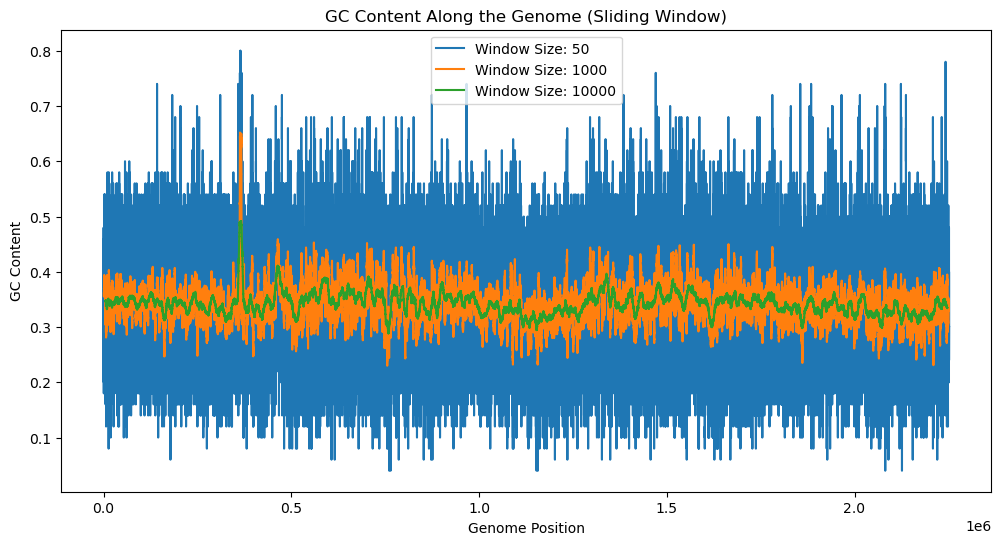

In [77]:
def gc_content(seq):
    g_count = seq.count('G')
    c_count = seq.count('C')
    return (g_count + c_count) / len(seq)

def sliding_gc_content(genome, window_size):
    positions = []
    gc_values = []
    
    half_window = window_size // 2
    
    for i in range(half_window, len(genome) - half_window):
        window_seq = genome[i - half_window: i + half_window]
        gc_values.append(gc_content(window_seq))
        positions.append(i)
    
    return positions, gc_values

window_sizes = [50, 1000, 10000]

plt.figure(figsize=(12, 6))

for window in window_sizes:
    positions, gc_values = sliding_gc_content(genome, window)
    plt.plot(positions, gc_values, label=f"Window Size: {window}")

plt.xlabel("Genome Position")
plt.ylabel("GC Content")
plt.title("GC Content Along the Genome (Sliding Window)")
plt.legend()
plt.show()

Q4. Qu’observez-vous ?

```markdown
Que 50 est trop petit pour voir des variation, trop chaotic.
1000 permet de voir un comportemant general ainsi que quelque variation local.
Et 2000 permet de voir un comportemant général sans montré les variations locals
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

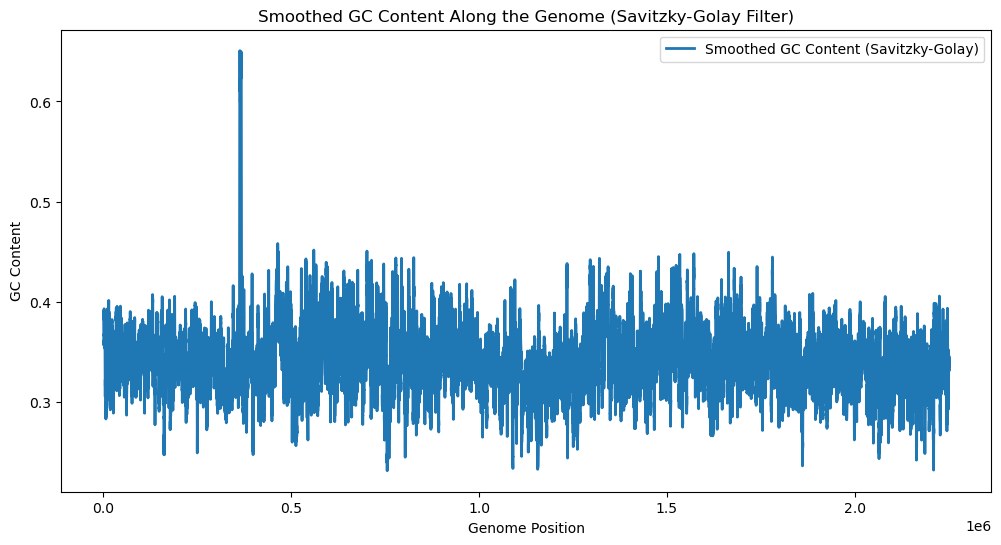

In [88]:
from scipy.signal import savgol_filter

# Define window size for GC content calculation
window_size = 1000  # Choose an appropriate size (can test with 50, 10000)

# Compute GC content
positions, gc_values = sliding_gc_content(genome, window_size)

# Apply Savitzky-Golay filter to smooth the GC content curve
gc_smoothed = savgol_filter(gc_values, window_length=51, polyorder=5)

# Plot the original and smoothed GC content curves
plt.figure(figsize=(12, 6))
#plt.plot(positions, gc_values, alpha=0.5, label="Original GC Content")  # Light color for original
plt.plot(positions, gc_smoothed, label="Smoothed GC Content (Savitzky-Golay)", linewidth=2)

# Customize plot
plt.xlabel("Genome Position")
plt.ylabel("GC Content")
plt.title("Smoothed GC Content Along the Genome (Savitzky-Golay Filter)")
plt.legend()
plt.show()

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [96]:
import os
import requests
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def download_genome(ftp_url, output_filename="genome.fna"):
    """Télécharge un fichier FASTA depuis un lien FTP."""
    response = requests.get(ftp_url, stream=True)
    if response.status_code == 200:
        with open(output_filename, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print(f"✅ Fichier téléchargé : {output_filename}")
        return output_filename
    else:
        print("❌ Erreur lors du téléchargement du fichier")
        return None

def load_genome(fasta_file):
    """Charge le génome depuis un fichier FASTA."""
    genome_seq = ""
    with open(fasta_file, "r", encoding="utf-8") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            genome_seq += str(record.seq)
    return genome_seq.replace("\n", "")

def compute_gc_content(sequence):
    """Calcule le GC content global."""
    gc_count = sequence.count("G") + sequence.count("C")
    return gc_count / len(sequence)

def sliding_window_gc(sequence, window_size):
    """Calcule le GC content local avec une fenêtre glissante."""
    gc_values = []
    positions = []
    for i in range(window_size // 2, len(sequence) - window_size // 2):
        window_seq = sequence[i - window_size // 2 : i + window_size // 2]
        gc_values.append(compute_gc_content(window_seq))
        positions.append(i)
    return np.array(positions), np.array(gc_values)

def plot_gc_content(positions, gc_values, window_size, smoothed_gc=None):
    """Affiche le GC content local et global."""
    plt.figure(figsize=(12, 6))
    plt.plot(positions, gc_values, label=f"GC Content (Window: {window_size})", alpha=0.5)
    
    if smoothed_gc is not None:
        plt.plot(positions, smoothed_gc, label="Smoothed GC Content", color="red")
    
    plt.xlabel("Genome Position")
    plt.ylabel("GC Content")
    plt.title(f"GC Content Along the Genome (Window: {window_size})")
    plt.legend()
    plt.show()

def analyze_genome_gc(ftp_url, window_size):
    """Télécharge le génome, calcule le GC content global et local, et trace le graphique."""
    fasta_file = download_genome(ftp_url)
    if fasta_file is None:
        return
    
    genome = load_genome(fasta_file)
    print(f"🔍 Taille du génome : {len(genome)} nucléotides")

    global_gc = compute_gc_content(genome)
    print(f"🌍 GC Content Global : {global_gc:.2%}")

    positions, gc_values = sliding_window_gc(genome, window_size)

    # Lissage avec Savitzky-Golay
    smoothed_gc = savgol_filter(gc_values, 51, 5) if len(gc_values) > 51 else None

    plot_gc_content(positions, gc_values, window_size, smoothed_gc)

# 🔹 Exemple d'utilisation
ftp_link = "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/Acidianus_ambivalens/all_assembly_versions/GCA_009729015.1_ASM972901v1/GCA_009729015.1_ASM972901v1_genomic.fna.gz"
window_size = 1000  # Ajustable

analyze_genome_gc(ftp_link, window_size)


✅ Fichier téléchargé : genome.fna


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)